In [12]:
!pip install requests_cache
import requests
import lxml.html as lx
import re
import time
import requests_cache
s= requests_cache.CachedSession()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

**This Code Document is Organized As Follows**:

All information is extracted from CCCO Data Mart

1) Program Awards are extracted across all colleges

2) Success Rates are extracted for top courses from frequently awarded program awards and some EDA is performed

3) Headcount information is extracted to understand student background across colleges.

4) More EDA is included

This code is to extract the number of people that have received awards per college and per program, to be able to view what people studied.

**Section 1) Program Awards**

**Get Request for View State Info for Program Awards (to understand what sort of majors students may be interested in**

In [ ]:
headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7"
}

responseProgramAwards =requests.get("https://datamart.cccco.edu/Outcomes/Program_Awards.aspx", headers=headers)
resultProgramAwards = responseProgramAwards.text
html =lx.fromstring(resultProgramAwards)
progAwardsViewState= html.xpath('//input[@name="__VIEWSTATE"]/@value')
progAwardsViewStateGen= html.xpath('//input[@name="__VIEWSTATEGENERATOR"]/@value')
progAwardsEventVal= html.xpath('//input[@name="__EVENTVALIDATION"]/@value')

**Extraction of Majors Function**

In [ ]:
callNumber ="c0:P|PN"
#This function sets us up to cycle through pages. Within the payload, "callnumber" changed by one number per page, so using that allows to extract data one page at a time.
def getMajors(page):
  callNumber=f"c0:P|PN{page}"
        #This payload allows the request we want to be made.
  payload ={
        "__EVENTTARGET": "",
        "__EVENTARGUMENT": "",
        "__LASTFOCUS": "",
        "__VIEWSTATE": progAwardsViewState,
        "__VIEWSTATEGENERATOR": progAwardsViewStateGen,
        "ASPxRoundPanel1": "{&quot;collapsed&quot;:false}",
        "ASPxRoundPanel1_ASPxComboBoxSDC_VI": "C",
        "ASPxRoundPanel1$ASPxComboBoxSDC": "Collegewide Search",
        "ASPxRoundPanel1$ASPxComboBoxSDC$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:116:276:1:173:69:1:0:0:0&quot;}",
        "ASPxRoundPanel1$ASPxComboBoxSDC$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
        "ASPxRoundPanel1$ASPxComboBoxSDC$DDD$L": "C",
        "ASPxRoundPanel1$ASPxDropDownEditDistColl$State": "{&quot;keyValue&quot;:&quot;('341','611','231','621','521','911','345','111','411','211','371','661','811','522','482','921','821','576','831','591','711','311','971','232','981','641','021','861','421','931','312','748','721','471','121','234','422','571','862','441','731','832','022','451','031','331','332','892','741','742','74A','743','744','745','746','747','221','343','481','131','841','313','574','334','335','141','531','344','051','492','592','461','681','962','851','941','241','963','863','431','833','682','951','061','771','523','872','161','572','881','961','233','891','982','076','071','078','077','072','079','073','361','363','551','472','372','871','651','652','781','261','873','561','171','271','181','373','281','091','691','683','991','581','582','749','493','491','292','291')&quot;,&quot;validationState&quot;:&quot;&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditDistColl": "Alameda;Allan Hancock;American River;Antelope Valley;Bakersfield;Barstow;Berkeley City;Butte;Cabrillo;Calbright College;Canada;Canyons;Cerritos;Cerro Coso;Chabot Hayward;Chaffey;Citrus;Clovis;Coastline;Columbia;Compton;Contra Costa;Copper Mountain;Cosumnes River;Crafton Hills;Cuesta;Cuyamaca;Cypress;Deanza;Desert;Diablo Valley;East LA;El Camino;Evergreen Valley;Feather River;Folsom Lake;Foothill;Fresno City;Fullerton;Gavilan;Glendale;Golden West;Grossmont;Hartnell;Imperial;Indian Valley;Indian Valley Cont Edu;Irvine;LA City;LA Harbor;LA ITV;LA Mission;LA Pierce;LA Swest;LA Trade;LA Valley;Lake Tahoe;Laney;Las Positas;Lassen;Long Beach;Los Medanos;Madera;Marin;Marin Continuing;Mendocino;Merced;Merritt;MiraCosta;Mission;Modesto;Monterey;Moorpark;Moreno Valley;Mt San Antonio;Mt. San Jacinto;Napa;Norco;North Orange Adult;Ohlone;Orange Coast;Oxnard;Palo Verde;Palomar;Pasadena;Porterville;Rancho Santiago CED;Redwoods;Reedley College;Rio Hondo;Riverside;Sacramento City;Saddleback;San Bernardino;San Diego Adult;San Diego City;San Diego Continuing;San Diego Ed;San Diego Mesa;San Diego Military;San Diego Miramar;San Francisco;San Francisco Ctrs;San Joaquin Delta;San Jose City;San Mateo;Santa Ana;Santa Barbara;Santa Barbara Cont;Santa Monica;Santa Rosa;Santiago Canyon;Sequoias;Shasta;Sierra;Siskiyous;Skyline;Solano;Southwestern;Taft;Ventura;Victor Valley;West Hills Coalinga;West Hills Lemoore;West LA;West Valley;West Valley Community;Woodland;Yuba",
        "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:309:276:1:175::1:0:0:0&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDD$DDTC$checkListBoxDistColl$State": "{&quot;CustomCallback&quot;:&quot;LECC|0;;&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDD$DDTC$checkListBoxDistColl": "3|XXX3|3413|6113|2313|6213|5213|9113|3453|1113|4113|2113|3713|6613|8113|5223|4823|9213|8213|5763|8313|5913|7113|3113|9713|2323|9813|6413|0213|8613|4213|9313|3123|7483|7213|4713|1213|2343|4223|5713|8623|4413|7313|8323|0223|4513|0313|3313|3323|8923|7413|7423|74A3|7433|7443|7453|7463|7473|2213|3433|4813|1313|8413|3133|5743|3343|3353|1413|5313|3443|0513|4923|5923|4613|6813|9623|8513|9413|2413|9633|8633|4313|8333|6823|9513|0613|7713|5233|8723|1613|5723|8813|9613|2333|8913|9823|0763|0713|0783|0773|0723|0793|0733|3613|3633|5513|4723|3723|8713|6513|6523|7813|2613|8733|5613|1713|2713|1813|3733|2813|0913|6913|6833|9913|5813|5823|7493|4933|4913|2923|291",
        "ASPxRoundPanel1$ASPxDropDownEditTerm$State": "{&quot;keyValue&quot;:&quot;('188','182','176','170','164','158','152','146','140','134')&quot;,&quot;validationState&quot;:&quot;&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditTerm": "Annual 2023-2024;Annual 2022-2023;Annual 2021-2022;Annual 2020-2021;Annual 2019-2020;Annual 2018-2019;Annual 2017-2018;Annual 2016-2017;Annual 2015-2016;Annual 2014-2015",
        "ASPxRoundPanel1$ASPxDropDownEditTerm$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:509:276:1:175::1:0:0:0&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditTerm$DDD$DDTC$checkListBoxTerm$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditTerm$DDD$DDTC$checkListBoxTerm": "3|1883|1823|1763|1703|1643|1583|1523|1463|1403|134",
        "ASPxRoundPanel1_ASPxComboBoxAWType_VI": "A",
        "ASPxRoundPanel1$ASPxComboBoxAWType": "All Awards",
        "ASPxRoundPanel1$ASPxComboBoxAWType$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:709:276:1:201:47:1:0:0:0&quot;}",
        "ASPxRoundPanel1$ASPxComboBoxAWType$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
        "ASPxRoundPanel1$ASPxComboBoxAWType$DDD$L": "A",
        "ASPxRoundPanel1$ASPxDropDownEditTOP$State": "{&quot;keyValue&quot;:&quot;&quot;,&quot;validationState&quot;:&quot;&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditTOP": "ALL",
        "ASPxRoundPanel1$ASPxDropDownEditTOP$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:109:326:1:175::1:0:0:0&quot;}",
        "ASPxRoundPanel1$ASPxDropDownEditTOP$DDD$DDTC$ASPxCallbackPanel1$ASPxTreeView1": "{&quot;nodesState&quot;:[{&quot;N0_2_1&quot;:&quot;&quot;,&quot;N0_22_5&quot;:&quot;&quot;,&quot;N0_6&quot;:&quot;&quot;,&quot;N0_9_5&quot;:&quot;&quot;,&quot;N0_21_2&quot;:&quot;&quot;,&quot;N0_10_5&quot;:&quot;&quot;,&quot;N0_11_5&quot;:&quot;&quot;,&quot;N0_6_10&quot;:&quot;&quot;,&quot;N0_11_15&quot;:&quot;&quot;,&quot;N0_4_2&quot;:&quot;&quot;,&quot;N0_0_5&quot;:&quot;&quot;,&quot;N0_6_13&quot;:&quot;&quot;,&quot;N0_18_5&quot;:&quot;&quot;,&quot;N0_12_4&quot;:&quot;&quot;,&quot;N0_3_6&quot;:&quot;&quot;,&quot;N0_10_0&quot;:&quot;&quot;,&quot;N0_11_0&quot;:&quot;&quot;,&quot;N0_6_7&quot;:&quot;&quot;,&quot;N0_9_4&quot;:&quot;&quot;,&quot;N0_14_0&quot;:&quot;&quot;,&quot;N0_15_0&quot;:&quot;&quot;,&quot;N0_16_0&quot;:&quot;&quot;,&quot;N0_3_13&quot;:&quot;&quot;,&quot;N0_18_0&quot;:&quot;&quot;,&quot;N0_19_0&quot;:&quot;&quot;,&quot;N0_0_4&quot;:&quot;&quot;,&quot;N0_4_5&quot;:&quot;&quot;,&quot;N0_11_13&quot;:&quot;&quot;,&quot;N0_18_8&quot;:&quot;&quot;,&quot;N0_2_3&quot;:&quot;&quot;,&quot;N0_6_6&quot;:&quot;&quot;,&quot;N0_9_7&quot;:&quot;&quot;,&quot;N0_23_6&quot;:&quot;&quot;,&quot;N0_21_1&quot;:&quot;&quot;,&quot;N0_12&quot;:&quot;&quot;,&quot;N0_0_7&quot;:&quot;&quot;,&quot;N0_4&quot;:&quot;&quot;,&quot;N0_3_4&quot;:&quot;&quot;,&quot;N0_11_17&quot;:&quot;&quot;,&quot;N0_7_1&quot;:&quot;&quot;,&quot;N0_18_7&quot;:&quot;&quot;,&quot;N0_22_7&quot;:&quot;&quot;,&quot;N0_2_2&quot;:&quot;&quot;,&quot;N0_6_9&quot;:&quot;&quot;,&quot;N0_9_6&quot;:&quot;&quot;,&quot;N0_6_19&quot;:&quot;&quot;,&quot;N0_6_20&quot;:&quot;&quot;,&quot;N0_6_4&quot;:&quot;&quot;,&quot;N0_0_6&quot;:&quot;&quot;,&quot;N0_11_29&quot;:&quot;&quot;,&quot;N0_11_37&quot;:&quot;&quot;,&quot;N0_10_7&quot;:&quot;&quot;,&quot;N0_11_7&quot;:&quot;&quot;,&quot;N0_7_0&quot;:&quot;&quot;,&quot;N0_6_23&quot;:&quot;&quot;,&quot;N0_14_7&quot;:&quot;&quot;,&quot;N0_2_5&quot;:&quot;&quot;,&quot;N0_6_8&quot;:&quot;&quot;,&quot;N0_9_9&quot;:&quot;&quot;,&quot;N0_1_1&quot;:&quot;&quot;,&quot;N0_23_5&quot;:&quot;&quot;,&quot;N0_3_9&quot;:&quot;&quot;,&quot;N0_12_5&quot;:&quot;&quot;,&quot;N0_22_2&quot;:&quot;&quot;,&quot;N0_14_4&quot;:&quot;&quot;,&quot;N0_10_2&quot;:&quot;&quot;,&quot;N0_4_6&quot;:&quot;&quot;,&quot;N0_12_2&quot;:&quot;&quot;,&quot;N0_13_2&quot;:&quot;&quot;,&quot;N0_14_2&quot;:&quot;&quot;,&quot;N0_15_2&quot;:&quot;&quot;,&quot;N0_11_11&quot;:&quot;&quot;,&quot;N0_6_16&quot;:&quot;&quot;,&quot;N0_7_3&quot;:&quot;&quot;,&quot;N0_9_10&quot;:&quot;&quot;,&quot;N0_2&quot;:&quot;&quot;,&quot;N0_13_4&quot;:&quot;&quot;,&quot;N0_9_8&quot;:&quot;&quot;,&quot;N0_10_1&quot;:&quot;&quot;,&quot;N0_11_1&quot;:&quot;&quot;,&quot;N0_12_1&quot;:&quot;&quot;,&quot;N0_13_1&quot;:&quot;&quot;,&quot;N0_14_1&quot;:&quot;&quot;,&quot;N0_15_1&quot;:&quot;&quot;,&quot;N0_0_8&quot;:&quot;&quot;,&quot;N0_6_15&quot;:&quot;&quot;,&quot;N0_18_1&quot;:&quot;&quot;,&quot;N0_11_18&quot;:&quot;&quot;,&quot;N0_11_23&quot;:&quot;&quot;,&quot;N0_7_2&quot;:&quot;&quot;,&quot;N0_11_2&quot;:&quot;&quot;,&quot;N0_2_7&quot;:&quot;&quot;,&quot;N0_9_0&quot;:&quot;&quot;,&quot;N0_8_2&quot;:&quot;&quot;,&quot;N0_9&quot;:&quot;&quot;,&quot;N0_5_0&quot;:&quot;&quot;,&quot;N0_8_1&quot;:&quot;&quot;,&quot;N0_17_1&quot;:&quot;&quot;,&quot;N0_11_26&quot;:&quot;&quot;,&quot;N0_23_0&quot;:&quot;&quot;,&quot;N0_13&quot;:&quot;&quot;,&quot;N0_18_9&quot;:&quot;&quot;,&quot;N0_2_6&quot;:&quot;&quot;,&quot;N0_23&quot;:&quot;&quot;,&quot;N0_22_8&quot;:&quot;&quot;,&quot;N0_21_0&quot;:&quot;&quot;,&quot;N0_1_2&quot;:&quot;&quot;,&quot;N0_5_3&quot;:&quot;&quot;,&quot;N0_8_0&quot;:&quot;&quot;,&quot;N0_20_6&quot;:&quot;&quot;,&quot;N0_0&quot;:&quot;&quot;,&quot;N0_18_10&quot;:&quot;&quot;,&quot;N0_3_1&quot;:&quot;&quot;,&quot;N0_7&quot;:&quot;&quot;,&quot;N0_2_4&quot;:&quot;&quot;,&quot;N0_13_6&quot;:&quot;&quot;,&quot;N0_20_7&quot;:&quot;&quot;,&quot;N0_12_7&quot;:&quot;&quot;,&quot;N0_23_7&quot;:&quot;&quot;,&quot;N0_6_18&quot;:&quot;&quot;,&quot;N0_8_3&quot;:&quot;&quot;,&quot;N0_18_4&quot;:&quot;&quot;,&quot;N0_20_4&quot;:&quot;&quot;,&quot;N0_11_16&quot;:&quot;&quot;,&quot;N0_3_0&quot;:&quot;&quot;,&quot;N0_11_31&quot;:&quot;&quot;,&quot;N0_11_28&quot;:&quot;&quot;,&quot;N0_23_2&quot;:&quot;&quot;,&quot;N0_10_8&quot;:&quot;&quot;,&quot;N0_11_8&quot;:&quot;&quot;,&quot;N0_6_17&quot;:&quot;&quot;,&quot;N0_14_8&quot;:&quot;&quot;,&quot;N0_5_5&quot;:&quot;&quot;,&quot;N0_5_4&quot;:&quot;&quot;,&quot;N0_11_32&quot;:&quot;&quot;,&quot;N0_10_10&quot;:&quot;&quot;,&quot;N0_11_10&quot;:&quot;&quot;,&quot;N0_22_1&quot;:&quot;&quot;,&quot;N0_23_1&quot;:&quot;&quot;,&quot;N0_5_2&quot;:&quot;&quot;,&quot;N0_10_11&quot;:&quot;&quot;,&quot;N0_5_1&quot;:&quot;&quot;,&quot;N0_11_24&quot;:&quot;&quot;,&quot;N0_18&quot;:&quot;&quot;,&quot;N0_13_5&quot;:&quot;&quot;,&quot;N0_11_33&quot;:&quot;&quot;,&quot;N0_13_7&quot;:&quot;&quot;,&quot;N0_5&quot;:&quot;&quot;,&quot;N0_8_5&quot;:&quot;&quot;,&quot;N0_18_3&quot;:&quot;&quot;,&quot;N0_6_11&quot;:&quot;&quot;,&quot;N0_11_14&quot;:&quot;&quot;,&quot;N0_17_0&quot;:&quot;&quot;,&quot;N0_11_30&quot;:&quot;&quot;,&quot;N0_3_2&quot;:&quot;&quot;,&quot;N0_20_0&quot;:&quot;&quot;,&quot;N0_20_1&quot;:&quot;&quot;,&quot;N0_20&quot;:&quot;&quot;,&quot;N0_21&quot;:&quot;&quot;,&quot;N0_22&quot;:&quot;&quot;,&quot;N0_11_22&quot;:&quot;&quot;,&quot;N0_5_7&quot;:&quot;&quot;,&quot;N0_8&quot;:&quot;&quot;,&quot;N0_23_8&quot;:&quot;&quot;,&quot;N0_24&quot;:&quot;&quot;,&quot;N0_3_10&quot;:&quot;&quot;,&quot;N0_13_0&quot;:&quot;&quot;,&quot;N0_3_5&quot;:&quot;&quot;,&quot;N0_22_0&quot;:&quot;&quot;,&quot;N0_10_12&quot;:&quot;&quot;,&quot;N0_11_12&quot;:&quot;&quot;,&quot;N0_12_8&quot;:&quot;&quot;,&quot;N0_5_6&quot;:&quot;&quot;,&quot;N0_8_7&quot;:&quot;&quot;,&quot;N0_11_35&quot;:&quot;&quot;,&quot;N0_11_21&quot;:&quot;&quot;,&quot;N0_18_11&quot;:&quot;&quot;,&quot;N0_5_9&quot;:&quot;&quot;,&quot;N0_3&quot;:&quot;&quot;,&quot;N0_6_22&quot;:&quot;&quot;,&quot;N0_19&quot;:&quot;&quot;,&quot;N0_23_3&quot;:&quot;&quot;,&quot;N0_22_4&quot;:&quot;&quot;,&quot;N0_20_3&quot;:&quot;&quot;,&quot;N0_6_1&quot;:&quot;&quot;,&quot;N0_22_3&quot;:&quot;&quot;,&quot;N0_10_6&quot;:&quot;&quot;,&quot;N0_10_9&quot;:&quot;&quot;,&quot;N0_11_9&quot;:&quot;&quot;,&quot;N0_6_14&quot;:&quot;&quot;,&quot;N0_8_6&quot;:&quot;&quot;,&quot;N0_11_19&quot;:&quot;&quot;,&quot;N0_12_0&quot;:&quot;&quot;,&quot;N0_6_21&quot;:&quot;&quot;,&quot;N0_3_7&quot;:&quot;&quot;,&quot;N0_16_2&quot;:&quot;&quot;,&quot;N0_20_2&quot;:&quot;&quot;,&quot;N0_23_9&quot;:&quot;&quot;,&quot;N0_10_4&quot;:&quot;&quot;,&quot;N0_11_4&quot;:&quot;&quot;,&quot;N0_6_0&quot;:&quot;&quot;,&quot;N0_9_1&quot;:&quot;&quot;,&quot;N0_6_12&quot;:&quot;&quot;,&quot;N0_5_8&quot;:&quot;&quot;,&quot;N0_14_5&quot;:&quot;&quot;,&quot;N0_9_12&quot;:&quot;&quot;,&quot;N0_0_1&quot;:&quot;&quot;,&quot;N0_20_5&quot;:&quot;&quot;,&quot;N0_4_4&quot;:&quot;&quot;,&quot;N0_24_0&quot;:&quot;&quot;,&quot;N0_10_3&quot;:&quot;&quot;,&quot;N0_11_3&quot;:&quot;&quot;,&quot;N0_12_3&quot;:&quot;&quot;,&quot;N0_13_3&quot;:&quot;&quot;,&quot;N0_14_3&quot;:&quot;&quot;,&quot;N0_3_12&quot;:&quot;&quot;,&quot;N0_6_3&quot;:&quot;&quot;,&quot;N0_1_0&quot;:&quot;&quot;,&quot;N0_9_11&quot;:&quot;&quot;,&quot;N0_1&quot;:&quot;&quot;,&quot;N0_8_8&quot;:&quot;&quot;,&quot;N0_10&quot;:&quot;&quot;,&quot;N0_2_0&quot;:&quot;&quot;,&quot;N0_0_0&quot;:&quot;&quot;,&quot;N0_4_1&quot;:&quot;&quot;,&quot;N0_14&quot;:&quot;&quot;,&quot;N0_15&quot;:&quot;&quot;,&quot;N0_16&quot;:&quot;&quot;,&quot;N0_17&quot;:&quot;&quot;,&quot;N0_8_4&quot;:&quot;&quot;,&quot;N0_3_11&quot;:&quot;&quot;,&quot;N0_22_6&quot;:&quot;&quot;,&quot;N0_16_1&quot;:&quot;&quot;,&quot;N0_6_2&quot;:&quot;&quot;,&quot;N0_9_3&quot;:&quot;&quot;,&quot;N0&quot;:&quot;T&quot;,&quot;N0_18_6&quot;:&quot;&quot;,&quot;N0_6_24&quot;:&quot;&quot;,&quot;N0_0_3&quot;:&quot;&quot;,&quot;N0_4_0&quot;:&quot;&quot;,&quot;N0_11_36&quot;:&quot;&quot;,&quot;N0_20_8&quot;:&quot;&quot;,&quot;N0_0_10&quot;:&quot;&quot;,&quot;N0_3_8&quot;:&quot;&quot;,&quot;N0_0_9&quot;:&quot;&quot;,&quot;N0_11&quot;:&quot;&quot;,&quot;N0_6_5&quot;:&quot;&quot;,&quot;N0_9_2&quot;:&quot;&quot;,&quot;N0_23_4&quot;:&quot;&quot;,&quot;N0_3_3&quot;:&quot;&quot;,&quot;N0_12_9&quot;:&quot;&quot;,&quot;N0_11_6&quot;:&quot;&quot;,&quot;N0_0_2&quot;:&quot;&quot;,&quot;N0_4_3&quot;:&quot;&quot;,&quot;N0_12_6&quot;:&quot;&quot;,&quot;N0_11_25&quot;:&quot;&quot;,&quot;N0_14_6&quot;:&quot;&quot;,&quot;N0_11_27&quot;:&quot;&quot;,&quot;N0_11_34&quot;:&quot;&quot;,&quot;N0_18_2&quot;:&quot;&quot;,&quot;N0_11_20&quot;:&quot;&quot;},&quot;N0&quot;,{&quot;N0_6_8_2&quot;:&quot;U&quot;,&quot;N0_0_7&quot;:&quot;U&quot;,&quot;N0_20_4&quot;:&quot;U&quot;,&quot;N0_22_4&quot;:&quot;U&quot;,&quot;N0_3_11&quot;:&quot;U&quot;,&quot;N0_3_1&quot;:&quot;U&quot;,&quot;N0_10_8_0&quot;:&quot;U&quot;,&quot;N0_11_30&quot;:&quot;U&quot;,&quot;N0_18_4_0&quot;:&quot;U&quot;,&quot;N0_3_1_1&quot;:&quot;U&quot;,&quot;N0_5_9&quot;:&quot;U&quot;,&quot;N0_5_6_6&quot;:&quot;U&quot;,&quot;N0_2_5&quot;:&quot;U&quot;,&quot;N0_9_3&quot;:&quot;U&quot;,&quot;N0_1_1_0&quot;:&quot;U&quot;,&quot;N0_7_0_0&quot;:&quot;U&quot;,&quot;N0_23&quot;:&quot;U&quot;,&quot;N0_8_7&quot;:&quot;U&quot;,&quot;N0_11_0&quot;:&quot;U&quot;,&quot;N0_12_0&quot;:&quot;U&quot;,&quot;N0_13_0&quot;:&quot;U&quot;,&quot;N0_14_0&quot;:&quot;U&quot;,&quot;N0_5_9_0&quot;:&quot;U&quot;,&quot;N0_16_0&quot;:&quot;U&quot;,&quot;N0_17_0&quot;:&quot;U&quot;,&quot;N0_18_0&quot;:&quot;U&quot;,&quot;N0_10_6&quot;:&quot;U&quot;,&quot;N0_11_6&quot;:&quot;U&quot;,&quot;N0_12_6&quot;:&quot;U&quot;,&quot;N0_13_6&quot;:&quot;U&quot;,&quot;N0_14_6&quot;:&quot;U&quot;,&quot;N0_18_6&quot;:&quot;U&quot;,&quot;N0_6_12&quot;:&quot;U&quot;,&quot;N0_12_8_0&quot;:&quot;U&quot;,&quot;N0_3_8&quot;:&quot;U&quot;,&quot;N0_4_0_3&quot;:&quot;U&quot;,&quot;N0_6_18&quot;:&quot;U&quot;,&quot;N0_6_1_0&quot;:&quot;U&quot;,&quot;N0_23_8_10&quot;:&quot;U&quot;,&quot;N0_11_35&quot;:&quot;U&quot;,&quot;N0_9_0_1&quot;:&quot;U&quot;,&quot;N0_4_4_0&quot;:&quot;U&quot;,&quot;N0_11_29_0&quot;:&quot;U&quot;,&quot;N0_7_2_0&quot;:&quot;U&quot;,&quot;N0_1_0&quot;:&quot;U&quot;,&quot;N0_9_4_0&quot;:&quot;U&quot;,&quot;N0_3_13&quot;:&quot;U&quot;,&quot;N0_6_9_2&quot;:&quot;U&quot;,&quot;N0_0_4&quot;:&quot;U&quot;,&quot;N0_6_2&quot;:&quot;U&quot;,&quot;N0_6_5_5&quot;:&quot;U&quot;,&quot;N0_11_17_0&quot;:&quot;U&quot;,&quot;N0_6_5_1&quot;:&quot;U&quot;,&quot;N0_21_0_0&quot;:&quot;U&quot;,&quot;N0_5_6&quot;:&quot;U&quot;,&quot;N0_2_2&quot;:&quot;U&quot;,&quot;N0_11_21_0&quot;:&quot;U&quot;,&quot;N0_24&quot;:&quot;U&quot;,&quot;N0_9_0&quot;:&quot;U&quot;,&quot;N0_22_7&quot;:&quot;U&quot;,&quot;N0_6_15_0&quot;:&quot;U&quot;,&quot;N0_11_20_0&quot;:&quot;U&quot;,&quot;N0_7_1_0&quot;:&quot;U&quot;,&quot;N0_8_4&quot;:&quot;U&quot;,&quot;N0_6_1&quot;:&quot;U&quot;,&quot;N0_20_0_0&quot;:&quot;U&quot;,&quot;N0_9_12_0&quot;:&quot;U&quot;,&quot;N0_11_1_0&quot;:&quot;U&quot;,&quot;N0_5_4_0&quot;:&quot;U&quot;,&quot;N0_8_3_2&quot;:&quot;U&quot;,&quot;N0_13_0_0&quot;:&quot;U&quot;,&quot;N0_14&quot;:&quot;U&quot;,&quot;N0_10&quot;:&quot;U&quot;,&quot;N0_11&quot;:&quot;U&quot;,&quot;N0_12&quot;:&quot;U&quot;,&quot;N0_13&quot;:&quot;U&quot;,&quot;N0_8_7_3&quot;:&quot;U&quot;,&quot;N0_15&quot;:&quot;U&quot;,&quot;N0_16&quot;:&quot;U&quot;,&quot;N0_17&quot;:&quot;U&quot;,&quot;N0_18&quot;:&quot;U&quot;,&quot;N0_19&quot;:&quot;U&quot;,&quot;N0_10_1_2&quot;:&quot;U&quot;,&quot;N0_10_1_1&quot;:&quot;U&quot;,&quot;N0_10_1_0&quot;:&quot;U&quot;,&quot;N0_23_0_1&quot;:&quot;U&quot;,&quot;N0_20_3&quot;:&quot;U&quot;,&quot;N0_22_3&quot;:&quot;U&quot;,&quot;N0_23_3&quot;:&quot;U&quot;,&quot;N0_8_6&quot;:&quot;U&quot;,&quot;N0_10_7_0&quot;:&quot;U&quot;,&quot;N0_0_3_1&quot;:&quot;U&quot;,&quot;N0_4_5_0&quot;:&quot;U&quot;,&quot;N0_6_2_1&quot;:&quot;U&quot;,&quot;N0_11_18&quot;:&quot;U&quot;,&quot;N0_9_5_0&quot;:&quot;U&quot;,&quot;N0_22_0_5&quot;:&quot;U&quot;,&quot;N0_22_0_4&quot;:&quot;U&quot;,&quot;N0_22_0_1&quot;:&quot;U&quot;,&quot;N0_22_0_0&quot;:&quot;U&quot;,&quot;N0_22_0_3&quot;:&quot;U&quot;,&quot;N0_22_0_2&quot;:&quot;U&quot;,&quot;N0_13_1_0&quot;:&quot;U&quot;,&quot;N0_13_1_1&quot;:&quot;U&quot;,&quot;N0_0_5&quot;:&quot;U&quot;,&quot;N0_6_3&quot;:&quot;U&quot;,&quot;N0_22_6_0&quot;:&quot;U&quot;,&quot;N0_23_6_0&quot;:&quot;U&quot;,&quot;N0_11_14&quot;:&quot;U&quot;,&quot;N0_13_7_0&quot;:&quot;U&quot;,&quot;N0_13_7_1&quot;:&quot;U&quot;,&quot;N0_7_2&quot;:&quot;U&quot;,&quot;N0_11_3_0&quot;:&quot;U&quot;,&quot;N0_5_7&quot;:&quot;U&quot;,&quot;N0_11_26&quot;:&quot;U&quot;,&quot;N0_2_3&quot;:&quot;U&quot;,&quot;N0_20_8&quot;:&quot;U&quot;,&quot;N0_9_1&quot;:&quot;U&quot;,&quot;N0_22_8&quot;:&quot;U&quot;,&quot;N0_12_1_0&quot;:&quot;U&quot;,&quot;N0_3_0_2&quot;:&quot;U&quot;,&quot;N0_8_0_6&quot;:&quot;U&quot;,&quot;N0_5_1_1&quot;:&quot;U&quot;,&quot;N0_18_8_0&quot;:&quot;U&quot;,&quot;N0_12_7_0&quot;:&quot;U&quot;,&quot;N0_8_5&quot;:&quot;U&quot;,&quot;N0_3_4_1&quot;:&quot;U&quot;,&quot;N0_5_5_0&quot;:&quot;U&quot;,&quot;N0_8_0_2&quot;:&quot;U&quot;,&quot;N0_24_0_0&quot;:&quot;U&quot;,&quot;N0_3_8_0&quot;:&quot;U&quot;,&quot;N0_15_1_0&quot;:&quot;U&quot;,&quot;N0_10_4&quot;:&quot;U&quot;,&quot;N0_11_4&quot;:&quot;U&quot;,&quot;N0_12_4&quot;:&quot;U&quot;,&quot;N0_13_4&quot;:&quot;U&quot;,&quot;N0_14_4&quot;:&quot;U&quot;,&quot;N0_10_11_0&quot;:&quot;U&quot;,&quot;N0_18_4&quot;:&quot;U&quot;,&quot;N0_8_8_0&quot;:&quot;U&quot;,&quot;N0_3_13_0&quot;:&quot;U&quot;,&quot;N0_3_13_1&quot;:&quot;U&quot;,&quot;N0_14_1_0&quot;:&quot;U&quot;,&quot;N0_6_16&quot;:&quot;U&quot;,&quot;N0_6_5_7&quot;:&quot;U&quot;,&quot;N0_6_3_1&quot;:&quot;U&quot;,&quot;N0_14_7_0&quot;:&quot;U&quot;,&quot;N0_11_11_0&quot;:&quot;U&quot;,&quot;N0_9_2_0&quot;:&quot;U&quot;,&quot;N0_0_2&quot;:&quot;U&quot;,&quot;N0_6_0&quot;:&quot;U&quot;,&quot;N0_11_36_0&quot;:&quot;U&quot;,&quot;N0_17_1_0&quot;:&quot;U&quot;,&quot;N0_14_2_19&quot;:&quot;U&quot;,&quot;N0_5_4&quot;:&quot;U&quot;,&quot;N0_9_10&quot;:&quot;U&quot;,&quot;N0_18_0_0&quot;:&quot;U&quot;,&quot;N0_2_0&quot;:&quot;U&quot;,&quot;N0_11_32_0&quot;:&quot;U&quot;,&quot;N0_8_2&quot;:&quot;U&quot;,&quot;N0_5_2_0&quot;:&quot;U&quot;,&quot;N0_6_19_0&quot;:&quot;U&quot;,&quot;N0_6_19_1&quot;:&quot;U&quot;,&quot;N0_3_9_0&quot;:&quot;U&quot;,&quot;N0_9_10_0&quot;:&quot;U&quot;,&quot;N0_5_6_3&quot;:&quot;U&quot;,&quot;N0_2_1&quot;:&quot;U&quot;,&quot;N0_8_5_3&quot;:&quot;U&quot;,&quot;N0_11_5_0&quot;:&quot;U&quot;,&quot;N0_9&quot;:&quot;U&quot;,&quot;N0_11_16_3&quot;:&quot;U&quot;,&quot;N0_0_1_1&quot;:&quot;U&quot;,&quot;N0_4_3_0&quot;:&quot;U&quot;,&quot;N0_11_17_1&quot;:&quot;U&quot;,&quot;N0_20_1&quot;:&quot;U&quot;,&quot;N0_21_1&quot;:&quot;U&quot;,&quot;N0_6_0_1&quot;:&quot;U&quot;,&quot;N0_23_1&quot;:&quot;U&quot;,&quot;N0_20&quot;:&quot;U&quot;,&quot;N0_21&quot;:&quot;U&quot;,&quot;N0_20_7&quot;:&quot;U&quot;,&quot;N0_18_1_1&quot;:&quot;U&quot;,&quot;N0_18_1_0&quot;:&quot;U&quot;,&quot;N0_0_3_4&quot;:&quot;U&quot;,&quot;N0_18_1_6&quot;:&quot;U&quot;,&quot;N0_18_1_5&quot;:&quot;U&quot;,&quot;N0_18_1_4&quot;:&quot;U&quot;,&quot;N0_6_4_2&quot;:&quot;U&quot;,&quot;N0_6&quot;:&quot;U&quot;,&quot;N0_18_7_0&quot;:&quot;U&quot;,&quot;N0_0_3&quot;:&quot;U&quot;,&quot;N0_10_5_0&quot;:&quot;U&quot;,&quot;N0_10_12&quot;:&quot;U&quot;,&quot;N0_11_12&quot;:&quot;U&quot;,&quot;N0_11_37&quot;:&quot;U&quot;,&quot;N0_15_0&quot;:&quot;U&quot;,&quot;N0_14_2_18&quot;:&quot;U&quot;,&quot;N0_6_8_3&quot;:&quot;U&quot;,&quot;N0_5_5&quot;:&quot;U&quot;,&quot;N0_13_5_0&quot;:&quot;U&quot;,&quot;N0_13_5_1&quot;:&quot;U&quot;,&quot;N0_6_5&quot;:&quot;U&quot;,&quot;N0_11_33&quot;:&quot;U&quot;,&quot;N0_22_8_0&quot;:&quot;U&quot;,&quot;N0_11_6_0&quot;:&quot;U&quot;,&quot;N0_8_3&quot;:&quot;U&quot;,&quot;N0_5_3_0&quot;:&quot;U&quot;,&quot;N0_18_2_1&quot;:&quot;U&quot;,&quot;N0_12_5_0&quot;:&quot;U&quot;,&quot;N0_20_6_0&quot;:&quot;U&quot;,&quot;N0_3_6_0&quot;:&quot;U&quot;,&quot;N0_0_8_0&quot;:&quot;U&quot;,&quot;N0_8_0_0&quot;:&quot;U&quot;,&quot;N0_8_0_8&quot;:&quot;U&quot;,&quot;N0_18_11_0&quot;:&quot;U&quot;,&quot;N0_8_6_0&quot;:&quot;U&quot;,&quot;N0_10_8&quot;:&quot;U&quot;,&quot;N0_11_8&quot;:&quot;U&quot;,&quot;N0_12_8&quot;:&quot;U&quot;,&quot;N0_14_8&quot;:&quot;U&quot;,&quot;N0_4_0_0&quot;:&quot;U&quot;,&quot;N0_18_8&quot;:&quot;U&quot;,&quot;N0_6_1_1&quot;:&quot;U&quot;,&quot;N0_0_6_3&quot;:&quot;U&quot;,&quot;N0_9_0_0&quot;:&quot;U&quot;,&quot;N0_2_7_0&quot;:&quot;U&quot;,&quot;N0_6_5_2&quot;:&quot;U&quot;,&quot;N0_4_0_4&quot;:&quot;U&quot;,&quot;N0_14_5_0&quot;:&quot;U&quot;,&quot;N0_3&quot;:&quot;U&quot;,&quot;N0_14_2_17&quot;:&quot;U&quot;,&quot;N0_6_9_3&quot;:&quot;U&quot;,&quot;N0_5_2&quot;:&quot;U&quot;,&quot;N0_11_24_0&quot;:&quot;U&quot;,&quot;N0_6_23&quot;:&quot;U&quot;,&quot;N0_20_1_0&quot;:&quot;U&quot;,&quot;N0_6_24&quot;:&quot;U&quot;,&quot;N0_20_3_0&quot;:&quot;U&quot;,&quot;N0_4_6&quot;:&quot;U&quot;,&quot;N0_8_0&quot;:&quot;U&quot;,&quot;N0_5_0_0&quot;:&quot;U&quot;,&quot;N0_23_8&quot;:&quot;U&quot;,&quot;N0_3_7_0&quot;:&quot;U&quot;,&quot;N0_8_7_4&quot;:&quot;U&quot;,&quot;N0_11_28_0&quot;:&quot;U&quot;,&quot;N0_23_3_1&quot;:&quot;U&quot;,&quot;N0_8_3_3&quot;:&quot;U&quot;,&quot;N0_23_6&quot;:&quot;U&quot;,&quot;N0_8_7_0&quot;:&quot;U&quot;,&quot;N0_6_21&quot;:&quot;U&quot;,&quot;N0_11_3_1&quot;:&quot;U&quot;,&quot;N0_11_3_2&quot;:&quot;U&quot;,&quot;N0_11_3_3&quot;:&quot;U&quot;,&quot;N0_4_1_0&quot;:&quot;U&quot;,&quot;N0_11_9_0&quot;:&quot;U&quot;,&quot;N0_11_9_1&quot;:&quot;U&quot;,&quot;N0_22_3_2&quot;:&quot;U&quot;,&quot;N0_9_1_0&quot;:&quot;U&quot;,&quot;N0_2_4_0&quot;:&quot;U&quot;,&quot;N0_11_29&quot;:&quot;U&quot;,&quot;N0_6_2_2&quot;:&quot;U&quot;,&quot;N0_0_1&quot;:&quot;U&quot;,&quot;N0_10_3_0&quot;:&quot;U&quot;,&quot;N0_11_10_1&quot;:&quot;U&quot;,&quot;N0_20_5&quot;:&quot;U&quot;,&quot;N0_22_5&quot;:&quot;U&quot;,&quot;N0_23_5&quot;:&quot;U&quot;,&quot;N0_10_9_0&quot;:&quot;U&quot;,&quot;N0_14_2_16&quot;:&quot;U&quot;,&quot;N0_6_6_3&quot;:&quot;U&quot;,&quot;N0_18_5_0&quot;:&quot;U&quot;,&quot;N0_11_25&quot;:&quot;U&quot;,&quot;N0_6_16_0&quot;:&quot;U&quot;,&quot;N0_5_3&quot;:&quot;U&quot;,&quot;N0_11_20_1&quot;:&quot;U&quot;,&quot;N0_11_22_0&quot;:&quot;U&quot;,&quot;N0_11_17&quot;:&quot;U&quot;,&quot;N0_11_31_1&quot;:&quot;U&quot;,&quot;N0_11_21&quot;:&quot;U&quot;,&quot;N0_8_1&quot;:&quot;U&quot;,&quot;N0_10_1&quot;:&quot;U&quot;,&quot;N0_11_1&quot;:&quot;U&quot;,&quot;N0_3_0_1&quot;:&quot;U&quot;,&quot;N0_13_1&quot;:&quot;U&quot;,&quot;N0_14_1&quot;:&quot;U&quot;,&quot;N0_8_0_7&quot;:&quot;U&quot;,&quot;N0_16_1&quot;:&quot;U&quot;,&quot;N0_17_1&quot;:&quot;U&quot;,&quot;N0_18_1&quot;:&quot;U&quot;,&quot;N0_10_7&quot;:&quot;U&quot;,&quot;N0_11_7&quot;:&quot;U&quot;,&quot;N0_12_7&quot;:&quot;U&quot;,&quot;N0_13_7&quot;:&quot;U&quot;,&quot;N0_14_7&quot;:&quot;U&quot;,&quot;N0_6_22_0&quot;:&quot;U&quot;,&quot;N0_18_7&quot;:&quot;U&quot;,&quot;N0_3_4_0&quot;:&quot;U&quot;,&quot;N0_12_3_1&quot;:&quot;U&quot;,&quot;N0_12_3_0&quot;:&quot;U&quot;,&quot;N0_8_0_3&quot;:&quot;U&quot;,&quot;N0_6_13&quot;:&quot;U&quot;,&quot;N0_3_12_0&quot;:&quot;U&quot;,&quot;N0_12_9_0&quot;:&quot;U&quot;,&quot;N0_11_25_0&quot;:&quot;U&quot;,&quot;N0_8_4_0&quot;:&quot;U&quot;,&quot;N0_16_1_0&quot;:&quot;U&quot;,&quot;N0_22_2_1&quot;:&quot;U&quot;,&quot;N0_10_10_0&quot;:&quot;U&quot;,&quot;N0_23_9_0&quot;:&quot;U&quot;,&quot;N0_2_5_0&quot;:&quot;U&quot;,&quot;N0_6_3_2&quot;:&quot;U&quot;,&quot;N0_6_9&quot;:&quot;U&quot;,&quot;N0_11_10_0&quot;:&quot;U&quot;,&quot;N0_9_2_3&quot;:&quot;U&quot;,&quot;N0_11_35_0&quot;:&quot;U&quot;,&quot;N0_14_2_25&quot;:&quot;U&quot;,&quot;N0_14_2_15&quot;:&quot;U&quot;,&quot;N0_14_3_0&quot;:&quot;U&quot;,&quot;N0_21_1_0&quot;:&quot;U&quot;,&quot;N0_5_0&quot;:&quot;U&quot;,&quot;N0_0_6_2&quot;:&quot;U&quot;,&quot;N0_11_31_0&quot;:&quot;U&quot;,&quot;N0_4_4&quot;:&quot;U&quot;,&quot;N0_6_12_0&quot;:&quot;U&quot;,&quot;N0_6_18_2&quot;:&quot;U&quot;,&quot;N0_6_18_3&quot;:&quot;U&quot;,&quot;N0_6_18_0&quot;:&quot;U&quot;,&quot;N0_6_18_1&quot;:&quot;U&quot;,&quot;N0_6_18_6&quot;:&quot;U&quot;,&quot;N0_6_18_4&quot;:&quot;U&quot;,&quot;N0_6_18_5&quot;:&quot;U&quot;,&quot;N0_6_20&quot;:&quot;U&quot;,&quot;N0_9_12&quot;:&quot;U&quot;,&quot;N0_19_0&quot;:&quot;U&quot;,&quot;N0_3_5_0&quot;:&quot;U&quot;,&quot;N0_1_0_2&quot;:&quot;U&quot;,&quot;N0_23_0_0&quot;:&quot;U&quot;,&quot;N0_8&quot;:&quot;U&quot;,&quot;N0_23_5_0&quot;:&quot;U&quot;,&quot;N0_5_6_2&quot;:&quot;U&quot;,&quot;N0_8_5_0&quot;:&quot;U&quot;,&quot;N0_23_7_0&quot;:&quot;U&quot;,&quot;N0_23_7_1&quot;:&quot;U&quot;,&quot;N0_18_10_1&quot;:&quot;U&quot;,&quot;N0_3_4_2&quot;:&quot;U&quot;,&quot;N0_2_2_0&quot;:&quot;U&quot;,&quot;N0_5&quot;:&quot;U&quot;,&quot;N0_22_1_0&quot;:&quot;U&quot;,&quot;N0_6_0_2&quot;:&quot;U&quot;,&quot;N0_0_9_0&quot;:&quot;U&quot;,&quot;N0_22_7_1&quot;:&quot;U&quot;,&quot;N0_22_7_0&quot;:&quot;U&quot;,&quot;N0_22_7_2&quot;:&quot;U&quot;,&quot;N0_6_8_0&quot;:&quot;U&quot;,&quot;N0_14_2_24&quot;:&quot;U&quot;,&quot;N0_14_2_14&quot;:&quot;U&quot;,&quot;N0_5_1&quot;:&quot;U&quot;,&quot;N0_11_36&quot;:&quot;U&quot;,&quot;N0_0_7_2&quot;:&quot;U&quot;,&quot;N0_18_3_0&quot;:&quot;U&quot;,&quot;N0_3_12&quot;:&quot;U&quot;,&quot;N0_4_5&quot;:&quot;U&quot;,&quot;N0_18_9_3&quot;:&quot;U&quot;,&quot;N0_18_9_2&quot;:&quot;U&quot;,&quot;N0_18_9_1&quot;:&quot;U&quot;,&quot;N0_18_9_0&quot;:&quot;U&quot;,&quot;N0_11_32&quot;:&quot;U&quot;,&quot;N0_3_9&quot;:&quot;U&quot;,&quot;N0_14_4_0&quot;:&quot;U&quot;,&quot;N0_23_5_1&quot;:&quot;U&quot;,&quot;N0_3_2_0&quot;:&quot;U&quot;,&quot;N0_10_5&quot;:&quot;U&quot;,&quot;N0_11_5&quot;:&quot;U&quot;,&quot;N0_12_5&quot;:&quot;U&quot;,&quot;N0_13_5&quot;:&quot;U&quot;,&quot;N0_14_5&quot;:&quot;U&quot;,&quot;N0_6_20_0&quot;:&quot;U&quot;,&quot;N0_18_5&quot;:&quot;U&quot;,&quot;N0_14_2_1&quot;:&quot;U&quot;,&quot;N0_23_3_0&quot;:&quot;U&quot;,&quot;N0_8_2_0&quot;:&quot;U&quot;,&quot;N0_3_10_2&quot;:&quot;U&quot;,&quot;N0_6_11&quot;:&quot;U&quot;,&quot;N0_3_10_0&quot;:&quot;U&quot;,&quot;N0_3_10_1&quot;:&quot;U&quot;,&quot;N0_3_10_4&quot;:&quot;U&quot;,&quot;N0_3_10_5&quot;:&quot;U&quot;,&quot;N0_6_17&quot;:&quot;U&quot;,&quot;N0_0_0&quot;:&quot;U&quot;,&quot;N0_18_10_0&quot;:&quot;U&quot;,&quot;N0_23_4_0&quot;:&quot;U&quot;,&quot;N0_2_3_0&quot;:&quot;U&quot;,&quot;N0_4_0_1&quot;:&quot;U&quot;,&quot;N0_11_19_0&quot;:&quot;U&quot;,&quot;N0&quot;:&quot;C&quot;,&quot;N0_0_6_0&quot;:&quot;U&quot;,&quot;N0_6_9_0&quot;:&quot;U&quot;,&quot;N0_14_2_23&quot;:&quot;U&quot;,&quot;N0_14_2_13&quot;:&quot;U&quot;,&quot;N0_6_5_3&quot;:&quot;U&quot;,&quot;N0_9_8_1&quot;:&quot;U&quot;,&quot;N0_11_15_0&quot;:&quot;U&quot;,&quot;N0_23_1_0&quot;:&quot;U&quot;,&quot;N0_4_2&quot;:&quot;U&quot;,&quot;N0_11_27_0&quot;:&quot;U&quot;,&quot;N0_6_10_2&quot;:&quot;U&quot;,&quot;N0_6_10_3&quot;:&quot;U&quot;,&quot;N0_6_10_0&quot;:&quot;U&quot;,&quot;N0_6_10_1&quot;:&quot;U&quot;,&quot;N0_6_10_6&quot;:&quot;U&quot;,&quot;N0_6_10_7&quot;:&quot;U&quot;,&quot;N0_6_10_4&quot;:&quot;U&quot;,&quot;N0_6_10_5&quot;:&quot;U&quot;,&quot;N0_5_6_4&quot;:&quot;U&quot;,&quot;N0_6_16_1&quot;:&quot;U&quot;,&quot;N0_3_3_0&quot;:&quot;U&quot;,&quot;N0_4&quot;:&quot;U&quot;,&quot;N0_9_11_0&quot;:&quot;U&quot;,&quot;N0_9_8&quot;:&quot;U&quot;,&quot;N0_20_5_0&quot;:&quot;U&quot;,&quot;N0_11_2_0&quot;:&quot;U&quot;,&quot;N0_5_8_1&quot;:&quot;U&quot;,&quot;N0_8_3_0&quot;:&quot;U&quot;,&quot;N0_3_3&quot;:&quot;U&quot;,&quot;N0_8_7_1&quot;:&quot;U&quot;,&quot;N0_0_3_3&quot;:&quot;U&quot;,&quot;N0_23_5_2&quot;:&quot;U&quot;,&quot;N0_10_2_0&quot;:&quot;U&quot;,&quot;N0_2_0_0&quot;:&quot;U&quot;,&quot;N0_6_22&quot;:&quot;U&quot;,&quot;N0_0_7_0&quot;:&quot;U&quot;,&quot;N0_15_2&quot;:&quot;U&quot;,&quot;N0_6_8_6&quot;:&quot;U&quot;,&quot;N0_6_6_0&quot;:&quot;U&quot;,&quot;N0_11_28&quot;:&quot;U&quot;,&quot;N0_14_2_22&quot;:&quot;U&quot;,&quot;N0_14_2_12&quot;:&quot;U&quot;,&quot;N0_22_5_0&quot;:&quot;U&quot;,&quot;N0_13_2_0&quot;:&quot;U&quot;,&quot;N0_6_6_4&quot;:&quot;U&quot;,&quot;N0_11_24&quot;:&quot;U&quot;,&quot;N0_4_3&quot;:&quot;U&quot;,&quot;N0_11_16&quot;:&quot;U&quot;,&quot;N0_3_10_3&quot;:&quot;U&quot;,&quot;N0_3_10&quot;:&quot;U&quot;,&quot;N0_3_7&quot;:&quot;U&quot;,&quot;N0_11_20&quot;:&quot;U&quot;,&quot;N0_12_2_0&quot;:&quot;U&quot;,&quot;N0_3_4_3&quot;:&quot;U&quot;,&quot;N0_23_9&quot;:&quot;U&quot;,&quot;N0_3_0_0&quot;:&quot;U&quot;,&quot;N0_8_0_4&quot;:&quot;U&quot;,&quot;N0_9_9&quot;:&quot;U&quot;,&quot;N0_12_0_0&quot;:&quot;U&quot;,&quot;N0_10_3&quot;:&quot;U&quot;,&quot;N0_11_3&quot;:&quot;U&quot;,&quot;N0_12_3&quot;:&quot;U&quot;,&quot;N0_13_3&quot;:&quot;U&quot;,&quot;N0_14_3&quot;:&quot;U&quot;,&quot;N0_15_2_0&quot;:&quot;U&quot;,&quot;N0_7&quot;:&quot;U&quot;,&quot;N0_18_3&quot;:&quot;U&quot;,&quot;N0_10_9&quot;:&quot;U&quot;,&quot;N0_11_9&quot;:&quot;U&quot;,&quot;N0_12_9&quot;:&quot;U&quot;,&quot;N0_6_24_0&quot;:&quot;U&quot;,&quot;N0_18_9&quot;:&quot;U&quot;,&quot;N0_11_23_0&quot;:&quot;U&quot;,&quot;N0_2_1_0&quot;:&quot;U&quot;,&quot;N0_6_15&quot;:&quot;U&quot;,&quot;N0_14_2_7&quot;:&quot;U&quot;,&quot;N0_14_2_6&quot;:&quot;U&quot;,&quot;N0_14_2_5&quot;:&quot;U&quot;,&quot;N0_14_2_4&quot;:&quot;U&quot;,&quot;N0_14_2_3&quot;:&quot;U&quot;,&quot;N0_14_2_2&quot;:&quot;U&quot;,&quot;N0_0_4_0&quot;:&quot;U&quot;,&quot;N0_14_2_0&quot;:&quot;U&quot;,&quot;N0_6_7_0&quot;:&quot;U&quot;,&quot;N0_14_2_9&quot;:&quot;U&quot;,&quot;N0_14_2_8&quot;:&quot;U&quot;,&quot;N0_14_2_21&quot;:&quot;U&quot;,&quot;N0_14_2_11&quot;:&quot;U&quot;,&quot;N0_23_2&quot;:&quot;U&quot;,&quot;N0_5_1_0&quot;:&quot;U&quot;,&quot;N0_11_13_0&quot;:&quot;U&quot;,&quot;N0_9_2_2&quot;:&quot;U&quot;,&quot;N0_11_34_0&quot;:&quot;U&quot;,&quot;N0_23_0&quot;:&quot;U&quot;,&quot;N0_11_20_4&quot;:&quot;U&quot;,&quot;N0_4_0&quot;:&quot;U&quot;,&quot;N0_13_1_2&quot;:&quot;U&quot;,&quot;N0_11_30_0&quot;:&quot;U&quot;,&quot;N0_6_8&quot;:&quot;U&quot;,&quot;N0_3_4&quot;:&quot;U&quot;,&quot;N0_0_10&quot;:&quot;U&quot;,&quot;N0_1_0_1&quot;:&quot;U&quot;,&quot;N0_18_11&quot;:&quot;U&quot;,&quot;N0_3_1_0&quot;:&quot;U&quot;,&quot;N0_16_2_0&quot;:&quot;U&quot;,&quot;N0_9_6&quot;:&quot;U&quot;,&quot;N0_11_20_3&quot;:&quot;U&quot;,&quot;N0_23_7&quot;:&quot;U&quot;,&quot;N0_6_14_0&quot;:&quot;U&quot;,&quot;N0_6_14_1&quot;:&quot;U&quot;,&quot;N0_5_6_1&quot;:&quot;U&quot;,&quot;N0_9_3_0&quot;:&quot;U&quot;,&quot;N0_8_1_0&quot;:&quot;U&quot;,&quot;N0_11_0_0&quot;:&quot;U&quot;,&quot;N0_5_6_5&quot;:&quot;U&quot;,&quot;N0_0&quot;:&quot;U&quot;,&quot;N0_8_5_1&quot;:&quot;U&quot;,&quot;N0_13_3_0&quot;:&quot;U&quot;,&quot;N0_0_5_0&quot;:&quot;U&quot;,&quot;N0_10_0_0&quot;:&quot;U&quot;,&quot;N0_20_2&quot;:&quot;U&quot;,&quot;N0_21_2&quot;:&quot;U&quot;,&quot;N0_22_2&quot;:&quot;U&quot;,&quot;N0_6_4_0&quot;:&quot;U&quot;,&quot;N0_24_0&quot;:&quot;U&quot;,&quot;N0_14_2_20&quot;:&quot;U&quot;,&quot;N0_10_6_0&quot;:&quot;U&quot;,&quot;N0_6_0_3&quot;:&quot;U&quot;,&quot;N0_18_2_2&quot;:&quot;U&quot;,&quot;N0_11_10&quot;:&quot;U&quot;,&quot;N0_18_2_0&quot;:&quot;U&quot;,&quot;N0_0_9_1&quot;:&quot;U&quot;,&quot;N0_18_10&quot;:&quot;U&quot;,&quot;N0_0_3_2&quot;:&quot;U&quot;,&quot;N0_6_8_1&quot;:&quot;U&quot;,&quot;N0_18_1_3&quot;:&quot;U&quot;,&quot;N0_11_22&quot;:&quot;U&quot;,&quot;N0_4_1&quot;:&quot;U&quot;,&quot;N0_11_31&quot;:&quot;U&quot;,&quot;N0_13_0_1&quot;:&quot;U&quot;,&quot;N0_6_6_2&quot;:&quot;U&quot;,&quot;N0_22_1&quot;:&quot;U&quot;,&quot;N0_1_1&quot;:&quot;U&quot;,&quot;N0_6_8_5&quot;:&quot;U&quot;,&quot;N0_13_6_0&quot;:&quot;U&quot;,&quot;N0_3_5&quot;:&quot;U&quot;,&quot;N0_0_6_4&quot;:&quot;U&quot;,&quot;N0_1_1_1&quot;:&quot;U&quot;,&quot;N0_6_23_0&quot;:&quot;U&quot;,&quot;N0_9_7&quot;:&quot;U&quot;,&quot;N0_6_10&quot;:&quot;U&quot;,&quot;N0_5_7_1&quot;:&quot;U&quot;,&quot;N0_12_6_0&quot;:&quot;U&quot;,&quot;N0_14_6_2&quot;:&quot;U&quot;,&quot;N0_15_0_0&quot;:&quot;U&quot;,&quot;N0_4_0_2&quot;:&quot;U&quot;,&quot;N0_18_1_2&quot;:&quot;U&quot;,&quot;N0_0_2_0&quot;:&quot;U&quot;,&quot;N0_12_1&quot;:&quot;U&quot;,&quot;N0_6_5_0&quot;:&quot;U&quot;,&quot;N0_11_16_2&quot;:&quot;U&quot;,&quot;N0_11_18_0&quot;:&quot;U&quot;,&quot;N0_0_6_1&quot;:&quot;U&quot;,&quot;N0_6_19&quot;:&quot;U&quot;,&quot;N0_6_9_1&quot;:&quot;U&quot;,&quot;N0_14_6_1&quot;:&quot;U&quot;,&quot;N0_14_6_0&quot;:&quot;U&quot;,&quot;N0_11_20_2&quot;:&quot;U&quot;,&quot;N0_6_5_4&quot;:&quot;U&quot;,&quot;N0_9_8_0&quot;:&quot;U&quot;,&quot;N0_14_8_0&quot;:&quot;U&quot;,&quot;N0_11_14_0&quot;:&quot;U&quot;,&quot;N0_6_13_0&quot;:&quot;U&quot;,&quot;N0_0_8&quot;:&quot;U&quot;,&quot;N0_6_6&quot;:&quot;U&quot;,&quot;N0_3_2&quot;:&quot;U&quot;,&quot;N0_11_26_0&quot;:&quot;U&quot;,&quot;N0_17_0_0&quot;:&quot;U&quot;,&quot;N0_20_4_0&quot;:&quot;U&quot;,&quot;N0_2_6&quot;:&quot;U&quot;,&quot;N0_9_4&quot;:&quot;U&quot;,&quot;N0_1_2_0&quot;:&quot;U&quot;,&quot;N0_16_0_0&quot;:&quot;U&quot;,&quot;N0_8_8&quot;:&quot;U&quot;,&quot;N0_5_8_0&quot;:&quot;U&quot;,&quot;N0_8_7_2&quot;:&quot;U&quot;,&quot;N0_8_3_1&quot;:&quot;U&quot;,&quot;N0_6_8_4&quot;:&quot;U&quot;,&quot;N0_4_2_0&quot;:&quot;U&quot;,&quot;N0_11_4_0&quot;:&quot;U&quot;,&quot;N0_19_0_0&quot;:&quot;U&quot;,&quot;N0_0_3_0&quot;:&quot;U&quot;,&quot;N0_10_10&quot;:&quot;U&quot;,&quot;N0_22_4_0&quot;:&quot;U&quot;,&quot;N0_6_2_0&quot;:&quot;U&quot;,&quot;N0_11_19&quot;:&quot;U&quot;,&quot;N0_11_16_1&quot;:&quot;U&quot;,&quot;N0_9_5_1&quot;:&quot;U&quot;,&quot;N0_0_7_1&quot;:&quot;U&quot;,&quot;N0_20_0&quot;:&quot;U&quot;,&quot;N0_21_0&quot;:&quot;U&quot;,&quot;N0_22_0&quot;:&quot;U&quot;,&quot;N0_0_1_2&quot;:&quot;U&quot;,&quot;N0_6_6_1&quot;:&quot;U&quot;,&quot;N0_10_4_0&quot;:&quot;U&quot;,&quot;N0_7_3&quot;:&quot;U&quot;,&quot;N0_20_6&quot;:&quot;U&quot;,&quot;N0_9_9_0&quot;:&quot;U&quot;,&quot;N0_22_6&quot;:&quot;U&quot;,&quot;N0_11_15&quot;:&quot;U&quot;,&quot;N0_11_12_1&quot;:&quot;U&quot;,&quot;N0_14_0_0&quot;:&quot;U&quot;,&quot;N0_18_6_0&quot;:&quot;U&quot;,&quot;N0_0_9&quot;:&quot;U&quot;,&quot;N0_6_7&quot;:&quot;U&quot;,&quot;N0_11_27&quot;:&quot;U&quot;,&quot;N0_22_3_1&quot;:&quot;U&quot;,&quot;N0_0_10_0&quot;:&quot;U&quot;,&quot;N0_10_11&quot;:&quot;U&quot;,&quot;N0_11_11&quot;:&quot;U&quot;,&quot;N0_13_4_2&quot;:&quot;U&quot;,&quot;N0_13_4_3&quot;:&quot;U&quot;,&quot;N0_13_4_0&quot;:&quot;U&quot;,&quot;N0_13_4_1&quot;:&quot;U&quot;,&quot;N0_2_7&quot;:&quot;U&quot;,&quot;N0_11_23&quot;:&quot;U&quot;,&quot;N0_9_5&quot;:&quot;U&quot;,&quot;N0_10_2&quot;:&quot;U&quot;,&quot;N0_11_2&quot;:&quot;U&quot;,&quot;N0_12_2&quot;:&quot;U&quot;,&quot;N0_13_2&quot;:&quot;U&quot;,&quot;N0_14_2&quot;:&quot;U&quot;,&quot;N0_6_21_0&quot;:&quot;U&quot;,&quot;N0_16_2&quot;:&quot;U&quot;,&quot;N0_18_2&quot;:&quot;U&quot;,&quot;N0_2&quot;:&quot;U&quot;,&quot;N0_8_0_5&quot;:&quot;U&quot;,&quot;N0_3_11_2&quot;:&quot;U&quot;,&quot;N0_3_11_3&quot;:&quot;U&quot;,&quot;N0_3_11_0&quot;:&quot;U&quot;,&quot;N0_3_11_1&quot;:&quot;U&quot;,&quot;N0_12_4_0&quot;:&quot;U&quot;,&quot;N0_3_11_4&quot;:&quot;U&quot;,&quot;N0_3_11_5&quot;:&quot;U&quot;,&quot;N0_6_14&quot;:&quot;U&quot;,&quot;N0_8_0_1&quot;:&quot;U&quot;,&quot;N0_23_8_9&quot;:&quot;U&quot;,&quot;N0_0_0_0&quot;:&quot;U&quot;,&quot;N0_10_12_0&quot;:&quot;U&quot;,&quot;N0_6_5_6&quot;:&quot;U&quot;,&quot;N0_6_3_0&quot;:&quot;U&quot;,&quot;N0_11_16_0&quot;:&quot;U&quot;,&quot;N0_9_2_1&quot;:&quot;U&quot;,&quot;N0_4_6_0&quot;:&quot;U&quot;,&quot;N0_1_2&quot;:&quot;U&quot;,&quot;N0_7_0&quot;:&quot;U&quot;,&quot;N0_9_6_0&quot;:&quot;U&quot;,&quot;N0_11_12_0&quot;:&quot;U&quot;,&quot;N0_11_37_0&quot;:&quot;U&quot;,&quot;N0_2_6_0&quot;:&quot;U&quot;,&quot;N0_14_4_2&quot;:&quot;U&quot;,&quot;N0_14_4_1&quot;:&quot;U&quot;,&quot;N0_5_7_0&quot;:&quot;U&quot;,&quot;N0_21_2_0&quot;:&quot;U&quot;,&quot;N0_0_6&quot;:&quot;U&quot;,&quot;N0_6_4&quot;:&quot;U&quot;,&quot;N0_14_2_10&quot;:&quot;U&quot;,&quot;N0_3_0&quot;:&quot;U&quot;,&quot;N0_6_11_0&quot;:&quot;U&quot;,&quot;N0_11_33_0&quot;:&quot;U&quot;,&quot;N0_5_8&quot;:&quot;U&quot;,&quot;N0_6_17_0&quot;:&quot;U&quot;,&quot;N0_2_4&quot;:&quot;U&quot;,&quot;N0_9_2&quot;:&quot;U&quot;,&quot;N0_3_6&quot;:&quot;U&quot;,&quot;N0_15_1&quot;:&quot;U&quot;,&quot;N0_20_2_0&quot;:&quot;U&quot;,&quot;N0_1_0_0&quot;:&quot;U&quot;,&quot;N0_9_11&quot;:&quot;U&quot;,&quot;N0_7_3_0&quot;:&quot;U&quot;,&quot;N0_20_8_0&quot;:&quot;U&quot;,&quot;N0_1&quot;:&quot;U&quot;,&quot;N0_5_6_0&quot;:&quot;U&quot;,&quot;N0_8_5_2&quot;:&quot;U&quot;,&quot;N0_22&quot;:&quot;U&quot;,&quot;N0_8_1_1&quot;:&quot;U&quot;,&quot;N0_11_7_0&quot;:&quot;U&quot;,&quot;N0_23_2_0&quot;:&quot;U&quot;,&quot;N0_23_8_6&quot;:&quot;U&quot;,&quot;N0_23_8_7&quot;:&quot;U&quot;,&quot;N0_23_8_4&quot;:&quot;U&quot;,&quot;N0_23_8_5&quot;:&quot;U&quot;,&quot;N0_23_8_2&quot;:&quot;U&quot;,&quot;N0_23_8_3&quot;:&quot;U&quot;,&quot;N0_23_8_0&quot;:&quot;U&quot;,&quot;N0_23_8_1&quot;:&quot;U&quot;,&quot;N0_0_1_0&quot;:&quot;U&quot;,&quot;N0_20_7_0&quot;:&quot;U&quot;,&quot;N0_23_8_8&quot;:&quot;U&quot;,&quot;N0_6_0_0&quot;:&quot;U&quot;,&quot;N0_23_4&quot;:&quot;U&quot;,&quot;N0_10_0&quot;:&quot;U&quot;,&quot;N0_22_3_0&quot;:&quot;U&quot;,&quot;N0_11_8_0&quot;:&quot;U&quot;,&quot;N0_22_2_0&quot;:&quot;U&quot;,&quot;N0_22_2_2&quot;:&quot;U&quot;,&quot;N0_6_4_1&quot;:&quot;U&quot;,&quot;N0_7_1&quot;:&quot;U&quot;,&quot;N0_6_0_4&quot;:&quot;U&quot;,&quot;N0_9_7_0&quot;:&quot;U&quot;,&quot;N0_11_13&quot;:&quot;U&quot;,&quot;N0_11_34&quot;:&quot;U&quot;}]}",
        "listExportFormat": "0",
        "ASPxCBRecPerPage_VI": "50",
        "ASPxCBRecPerPage": "50",
        "ASPxCBRecPerPage$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:573:454:1:73:113:1:0:0:0&quot;}",
        "ASPxCBRecPerPage$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
        "ASPxCBRecPerPage$DDD$L": "50",
        "LayoutMode": "Simple Layout",
        "ASPxRoundPanel3": "{&quot;collapsed&quot;:false}",
        "ASPxRoundPanel3$ASPxPivotGrid1": "{&quot;callbackState&quot;:&quot;FLDS_CBDEL_z9UMQMBGW97y+G+4GyPFxYDhZvSttffzI3mpa0nBGUb2ybh5mjzQ7dyQTKu2EF7FArtP8r2AEL8dKFboP3H+Wwy5qHwzFfl8z3ih3jL1IV/OX/GhXZajHlhBAagcyQn9nkhghCTRlWfMD9VsCIYz/g0ffNSgp55nz/wOFq6A4qk5lwnbqGq0FuzRn/iKxb7sZannIjO8F+no2zwH4406zF8tXRwJtpen+CWjW4zppMnEahQfba4OrUZW77z/WGLYLCdd2if2p8Ow2483KPsBzSA+lg8diec+In2eWGUEcIdBoe5I9Rwcva/LNlIXrcs3/rT+ChqhgAAZfCHoMqR4WmdyingcYSg0AJRv/rYLhgF5hWXZYYp5SPnUa2vth+QUehKVCZocKARSuQE6vz1qoSDkGp4OddW5KYOzvnwwP75Z6i8DFsRs8FHszUX4fz7ntG2vZVoHZ+xPdfz1Ofko6DtP4RZ0Xs0Z7UTMaLuYxK0fUl1shbnxObqus9ebcsonhAUMHODhR1CKCaplgx8AlDF6xiShsVo2tCO5zgdfmvUHK5bETesdrSyXrrarR7jWe76OcSNNajXFHOk6HwJETPL2WCfLlXK8rHLCkwNe2gACs6kEDx7TP8wskiIO8OLAF82ilwrx+Cina+AHObVC+fbJ5uMzfJAgBC91cQ6Hn6KNiK6RRgqanCflncvIjrhhuIX+AyNXWhStE92xKmdchB3mhEVAZtmvWiIjfxW5Btr9sVrzZSk2GKMYM4H1pAwEWgZwMh1JFv6RKrK3R/A9C7skaSz7QBrjxMazfUBjrcg0p+q6dFNwVj8gdwcm3TW3b3ekV+SIN3tezTPDQz8xjSGX7+ipcDqQ4DMmoMcx637P6UE+qwQM5bRKw4Zt716qJXnfWziOqC69Iis3JS5cv1dHSWp4jPb6/YcPSywjv53bY3NWWTBF436ZSX8n6o6LiHTvxttKRyuwcwZrbrndYaKNyh5lMdOhE46vKbw8lFVhUPAbZdc2zhktlRXbR/w/ZtGHnzVETiFsKq3+ckASHXbNaGuyyFIcOfKOUF6xprEOwHu4SL6JcTiQV3bYSMFXIcGsGW4OkSepU0FZyOHvDXHIPlsfz7yjXpG47U+7QaFcrPH268BKTuOIuHQfB9TGoxAjTr6XIASYTuzcUIzP2rsgSyNzcmDj3jEEkFhk10jb6BkkskvciShQSO50Bje5McSIGA3N8wvtDcCg0RAZtITWx01boy+h11nJ3/2KxJFU87pAVLWswohlruV41fzW+fRCzn4nqFAFFXbgHxpOyE79XRbmhD/M3rTy4+2x+KoKxXaTxC9h54W+9DW0cs4zB97CM/FXrveZDhI33LuwdsVj0jNLycqSJ9E53pCf7NoONMbG13xS1MdtwjxFaRhd4/tMqpaZKUMqvS/5V8TFzh9JzZp5wNWQhyOOiimb3r4ifnjq7I3ytpPlO3r/dKnAfWc/5D0Gxss2gbcBuFjvfUn+dfypWQbOgGFY8Z8Ob3uHTVAsf5K1d+pRXqszJSja/J2yxRTgy2HAEF/8I6OiyLeivdyLbqc6QUSYPJv5QZHVjsQw71ESO+qdODXG5SrsnseG6Jv31jPWU9PnGZ9UML9PPpiq/Mp3KgPBjAAseMTKeGP4h63//pjvHb00AtG7TZwStcWw0wPFS1UfkTMvVyfIkmbsA/dUx7pul+uZnpqg4L/OSvNcgYMySUnFeiBv2mfocJCSRvZd2Syv/ArwepsfuRMfoEWY/lLzob8OL6N6W1bVy+VV21TMOcuZJ8ds6t5x1jdITTclD/OGLSk8w6dERFLhHDhjNth8uLGO832mVILCJsWJKmI3nL4HTcN9hgSMbhEIlZWBWKHUMdReSJ+QdIRxT7jVfqvr8pwd4kVMb9XevnC6P5/5RTlglLpmV2o0Vfvn9ZY9Wl2xe2FRQYjUKmF/HpDB8zgWutEp5uyS2lwuCv5qeEe370+lPl3tvWvjje1LiAQL8O1giYkgD7MqEhkPzZOqZh6x7gNaPLjCEXi9vt/ojFN7L2yhoNn9Q376VJmlPplC3vH9hd/WJw1j8rI+mkPNqMy3TR/vdRoezGBefjlIB9pAEPs3UVg8NSciDIei3DWu33FSGj0vYOuiASkrcVOf3MSZOutXMnfkDVBA//VTW1VCoMj6OAINRUiy7tSWTmYk3joyQcAIc2DX08HF9DiJ24DgD8jaw/tUe8tLsCQ93PA5RlpkF0zxc4bkgHCB4YsL5/s8UKU4yQb6RFzFvuOEbg7u1L2PRKlWFaa4bW1RatujzV9sLKrLsSyxVg+P8A00p8EuLldQ8MHdQpy7sTRHqi/arkes+h2ZBgVZkAS5NG7ca20QwAPYTi7SsAHCaNAAhm9S2QHKEQRxBOaNqEvsPMMFDDS2S2K+r40sVyYDzC3WD6bwbJuOPftBS7Ue5aVCKJuPKIIrleaD3bS8YWo2sg5NDaQa6JDR7CAWwm+W9/EjLM6YQPyMNHOH4eBhyXujB5OKAaxbwJXjXyYH1NfBkYHu+N3BW8encKYb4BkFsfjUNr97OaCtjGzfxTN2XMLipcHbYynpHYrm/0+xtIrcpBr/yuBoweG5CLPXcY3PB9CQ0fv2nyqzPcPHJRLy9VsPhAOhddpuLTerYIJdSw8PQjwpm5Z/rAFPsNGxHbPUDEV9xdmcSoM0xnbkEsKOCdu1qyCjfxI8E+r/pe7qzVDjGtSu29Ln7kfPUPbnesJrg13HOmePOOu1fj+yzzs+y8oCVI0Z7kbZ9hRpBKwoPziKmDgK8vTMFGFx3m1cqMHBHlZ2C0iaDKPG5Xp4EO3Mx8r5oQGqULOOPsbl4F3BDb3v5FMo1N6Nk1O74PUXM4pX9ThMvOUKFBhlvzPiEuDHWJ+2s/MHF4qrIZLuhqXghQtVkCJz++q99rNM1pGt78lKC1EPS3ZGAFTUYwTq5vubkoiheIhQ937tqWBGj/MBs2unrdfbzeTwVFKQcNq9o6/yYYd8vq8S9G3VqOnB+gbuq8Hi9tEPLu7JhuxqPxbk3oVc6nksakwwEyW9RXW+MkDwqw4ltUiZfBQIY5gtLdgZ+QsB9iHa1g+XZzk0RNjsWp5oEXDkAfxXErD8cYf4Ey813xZwEeORC75CfIzat/VdRxxQ9WMY3k2YyzxesBP2j5KzHn+W8FMjGE610H92bE/eL/sWPQwqF5mmmZ7aYUhUq9JZ7zhAljf+mTGq1UC9wJ4xKDAYuDKPxcf1VH2TVT0AfLEbg9t2eCJDYRPFdLTBD3JYRaKGe5x3F3GAEOQvuq1l0y5Ceb1boMo4iOv7MOibIkBrepqYN3cHJ/kqmQr4yRzOpYaA69dVPNgVnItQBH5F5Mqhm2eANUKmSrGBVE0gWS11h0H70Z1RXzYAiWS8WNW5fwZ/WqWUy2BPhplVU8g8nPSea64e2vc0fY7yCZiaPOwS6EsxMNN6peqD1c/a6bZoG5mW7vrmxfbGSL59n8J2CRMIzlbquOGLFH5856cnae2TbMGNWzGqPRk+X8jcYm0WkP2RBEa9qZRet/j0sZJ/zl2p9FRBXHbywRSxaKgoXOv+5I1F4Yu6bSv6K57ZMSYYgmpKCrivqQX/7uIYQRVfFZJ21ok8/NThw+HQpqoEKP0/tzWLDeyEnsX541kCsR9vWi455WWY/xue4lgIUBe/eL6J20daFURKoVnFMi4xgIObTj4jAq1oSQvdb8yDx/oqrUbS0G+8sYRi1mF7JPhAjovcOsjIbrSmx8bFYqAxOdrbyidzOBbtM2qM1EsXTz4qSGM0vd0V4fNPH9q7nbXyvC1bUSXpb79x0bPeWCCEAZr+hyWhqT+dbBjzeyuXpO6vaZJrD7qokTL2PRfErHWa0uxGLszCbd66aiD1FivFb+HKyXU/TJLO7dF+7ro8NZsxfsnQRjAwAFIWIhJRkkY9I3dbwXbErXo5a2axUUIwCpPZKTWIDSMJNF81yeiNhTko9JHemMO429YbugNoBBWsgjHh2FcemWpn8dteiPH3NzIsG2HGhP6biWBimxaAeZOj9kqoyXKC+ACLm7RucM/fjkSk9w3tDJ5fz+Et1f4oa5Ff+8pSW+zUsm6iOpxoFImu2EoPKgbDNf2QhN0l82/bG7nj/xPcsAtPY3NH+dCu8l8hmdU7pk4pPwltwaNf2xOBBmoDm/IFNsFsdg+a0mcTDYH8D2O0Kj2Rc4iASd5hQE5fwWWSuiX8/vX76oTD/74A9wcYiHkSj/MCFICyDE76KTTpWxstoIF97yfWoyjRkxSJUTCYPt+RJG8ltsTVfqwnzw4MzZoIYtTg1t261lxXItYxNkNEMRVlrT0l8U8ZqHTJNRC3lTjGwNUE+hvZcxu62apqSVo3m56Y0jfZfs0BVLQC5QJLsoWxN6tpz8RdzbPrh6FRrCPIdjz+SHjAIvzWWNHwTel9okTspBuAqs2AfIyC75L7UdKLVD64YNTaaHw53rqq3zkOTjg2Gkz958BHN6eW6vxihY5Nbb3LZnOa0ftr/nIFC3lzdVk39gt9YKeH9LNf/aP9hkam9+8na/iMLreAog0M8g/3UZ5xFoPQZmzy7K1aldiYHjCcU+BlFrekfFDJIh9afPCCAOt1SV+wI2ugsyM/oR6yUvHZE4q4oEpL2B9oZU0khBbx/ekmkdWeJ8WunHmF9uAanPShIG0DuyJTHZSKtoJKhH/7U4k/FGnnX2j3How/WVeYKNTU1Oz84tM9kglPz4sgTo8HGyN2Q1TIYEwASSaT1xPxe77Sk3C6T85bHXLdmkVTsFJoLFV+vxJ5D9uNsrjM3jdOOn1S84brhb6MV9yOw7Tbs3D2i+mM1SnsmWQDRwZWqAcVLVuedUn7VOFpNiydHNaL9PFcPuc5Zr8+iq6C5q9wyLFwG5hJos99vbcNQLyyYK572v6x2X+tV1NDbxunDJosHYkqYaJhxNl6yZfY4BCb2W0EQZ1R9AqYZqCNMNW6UAxkMKpahN/3LVi7fdFIBUYXFtoeYsvk2/nyTsho+WGkP1cm96hsXE/0HubPk1SVy3xvMSr8Xw8ujSsWfBkkqYtnXA3Qy+BFWg0ZyRvkB8a2YEatM54QKOA81QeB975AdGGmIP5JYrmllFsl/5ynGFZjqDO01G7UdwY5esTBVMtQ+KmpbuO4BkWljeTVQIDUuiRoJ+v7kgckDPHkMc/jofpE4S3o44Wzhy7o9Xf9c4kP2Zr+GIK91yUMOiHy9s8ooh2O0iOYfpqbgNWxkMdsjoNv6XAflRYyhPLj/K3HEO6iiteWn+FjS3KkzjvIjqMxoWlvN9kIQQRV94Y3br5l3Unyn7Jo5mb/o8+r6WXNTtVIhavgE6G/mzfFKX7JUCxh6rG0uILAUfEhN/XyN9EL4Q4FaXvf54p0sawsOF1mENLeAyMBPY5w57xo4LtKQ1VeRSFdQjUZZYf1Ii5/i5bVfWZtFCUi7Zw0ocyJ/+At07lGCeb4VWeTw2ZqU9NKbEImq4aF5/EwF5S+1/zT4RKFdCLK4RlnPQ4euEBqQuq4uoYc6U9EylFxO8jEvLpD0EgtE+DMC2Re7xAoSKe19KZaDzTRf0g+7X9j2080/LcdJcomv5rHS5vHbDActgUKQ/f4MJVEaW8ScxI0hDduztqCJBs6l+kwWOclmxhyJ5sAgnpvl8J1uxbvSPsyYcGHRiWos9DjNO7gKg9BegZggZcgBOswQpidpwoJryjeo0y5BMpSvooXRi9rJIs8Q0v8f0vyR6HAYRKCv9c6VDASmAsciW2q505TsUhcaIUpAKpYvlplU64hXpNDS6eFE6VuD1OVZqeeigNv1gZmsVGQ6o2+g1gBuVaMnZUmPZNDMRQ8bqXQ7oqaJlXfsqzT91kSeqS7MxPSWT2jYXU2zJkHVkiqCKktjuQ35b2yfZNiBodGKjcQFdCVn5QgzTZ/BFeNrlWn3rXOBjU0M4NWm7IcajMtTdZlqmpRrPGbYNlnP4WYmcuecKDPUgdd96JnV58EX2PhvbNwRzRI5TsbsSUODMSMOZwO4O6uo6ofvdOARCDt4c5LFU/T7PiZYkFlyuDivVISccoWbF72dFl/+lcvYUrvRyv9ClbhWWEXW6DfeezdWLNJm5HNr51DET7fyoK/LtNNxevrYyoEPxmvtEO2_CBDEL_FSE_CBDEL_AgECAQIBAgECAQIBAgECAQIBAgE=_CBDEL_FVS_CBDEL_Y2BgYCgH4v8ooB4A_CBDEL_FVSE_CBDEL__CBDEL_OLSID_CBDEL__CBDEL_FITEMS_CBDEL_xQCGnpyFjBApOJv0JUAsCKmr0URQBuTSqH5FGf4eIcIcb94XXeBtcpq67J34lezju2/76ndwfZuKxy+O3/5Iqo16DNB85AxXjdb14jhicTgZQF9QwnBZ+ESCBrbXD/6QpbB/aW23IsfnGMioixXF489ICUxn4D7m6AWBduKHHtugI56Ye/HhIfn+bUOceSwigtd2eWf8T3DyEs/JFHF9MKoIrooZaPtf19gp3lHRQ+kmMo16Re6r8xU7MuY/Y6VqwMsR/1szqu94s9d9UA0yA/BrLitWbEaokNnpgWmr0lE55HXxK4NnJpe27K/Mjs5oIA8yQF+YkNQDNDcyIm8rHDrT53k1qdPihrIVu9XjdoKuuswSM5q/+EzYwsN9IxGmoFm/YKQNFqsM0egNqHy8Fw7dw+Wo0pH7WODZlKtNvuC0NU/x3OXN4hHRjk1oBLJvaaLXJpAwX7txWpOa5zBc4z/b7unEurI0YPpZTMjXWQBTHbhccYjxShUYRniCKGlYZKMzO5qIjXeBlNCBQEipC+l92vXilcXcocszgQwc2Fvk72BudDXs7/XMQgCzyKJ57q5ZeiY2G3FW8ULl/ylbvGIe4qg0+cMLyiF25tUboDFaSruUB3PMu1ABN+PTptaGuGaDm9gSujImJ+AqFGftsd8jKzRxYnsktvqWvheck56T0+ZesSlYlCoGIujwP+kV0bgN2hyoMbEuJ1J8NrYF/Fhi6uslwCvX10Q3F/plZ+wr1MKhUR5tcZePJyW58pgwRwaoG9jKKZU00WVz9pTsv9WmP09/93QRzayYyQ1h+Td12sqYyKFdnphwwa1YTxoikLo9Fx4273zWwo/V+jbboHj1uULkUNSbLd0/JQv3FupNYcMXxotZfod4I5GZxOoxi+fdqWxLXlCEl4vRvrpM8Whl7Wp8UdD8XxsodF/FG8asja2fhxfZNMczk0kTkgJRpurvNCXdf1w603S9Zs+I47hTf+VmNOidmo63TggnBNX/I0IBNbWuJ6Ye3mBj9hRJjZsH/wZspyqpXp2yE3aSWiu4D0yjIJnr6JdUCsYboBYfnrA9RV+bPe3OGXBCyydHWyMu785xC0I9qRm7jUC3joFe+dxe4E753O3wotqpWKlsR5a7wZDo8uZcoapkL3hWTCeOjv5+psHLGcNtGnBsR1XHONyvxNQE0fit/4egjx0mPvSX05CXzhl6+9QqlUV4Nkyoxb+/owAuzUuiLS7oMzYe1lnA7Bz9140XId22OdWe2QEpwdihyvdki6gq+bIRFpaMOEJ+ghf5w7Stm08sZ+dpke7FFLE6OY4XEE8FuvQGawSB+pkF2SM/6/YkaW6ejZHdqiU8sdhzbElwhaaPAfeJFZNHkFwc9NOwkS3XubK87CdYMy49WHZcJz4tfqh8l160EGFvZsNdJwcw21JQKXaRflRmdOECJ/B66jEBLt86c8+tOKCy4J+9fjsQfuqp2vPH406z7POmNK73r1gUXGmVomiRQONVaoJUD+V9hnFfvIeofIC31OvSuQkPvRax5/VJMv+4/4yp/0iKI2kmrnsJ8GL6us2+AVfI0uTy29RusbHVhcZ6fpTlrtViLf/IfKuOQpKwukqgZm3wsDzdpn71GPHKPksTXovKPAuCZdTfjfP8qkHkCxDEvFhqyfsU0wpnNM7HRSoxRLS3fVWaIY0GyJPQXu6pPHUd/l/Bh/aMIcoZD4AJ+lcvC80eBeF7BU85WvjGFTp/HQdRmRvuyMTavEHmZa9aowQZbdeziJ4syy8Lg0dxGisJB4ULSFiWjKL7oz3ucxhGMSlbyFx3nIpF9ptvEeDjWJmgPtwa0th4MF1WZAvMrd+scZWB22dkhJZEmu2GHC2sFjswObjeE2D08hJbC7R9wM/oOJppnCgLAZ3/mjRKRYIymT/2gzofxij1t6e+kFq/d6op0VmHIN+WPQmNR5EuqLPWjFjsfQV/xC5XBQQaigy8GCINQlRSOjtkjklrBSBjqdrPgDNo5X9nMwJXbahHyjWPQPnpAOQ5/k4OTftON1qnXiOb0X93gbS0+dCgYi1gOiYE6viMvp2s9L7iVhW/Bklwlf2/+6bhhVMCsuuxGWlUrBm/9aDRhS1LtLRwnSEtXzNZ6i/vNwoH18dBmAz4IiA64wy1yV/w1dtbUpxlGnX3bkM1rkDRlbFKiKJI07gpzXGiGdqVgqXa5SInihVcwRNMSNHAuwMB9DImeKIBQO91NlzilnmgRAU/dILZO2K+Ej48TPVAsMWtEEAGkuILnnmqZCNpfJU8WnV+TlNRHW/IpVrAKmvnOycxvhICyD5l58tXsSDYmnd5VT7wj//iQXsp1PfZzBhfwj4vip7EqjtQrGSpcpc0c2/RGQv0Pz8lAuNsnHpdIeFzg33wmwUPu9ox1yWhMMlMAwhwaUXzpSAa0RfyU2/r9joVIHIA6oiZZ9C+X9jboVyADpEnQiOJ7GUc9RcEhTlGbMNMNe5Z0DMxPx26RwlaS4ZQjQyqR21EXLzCohv4HE2CsqsWj+Fp0E+PGWucBmVNyuw9+f/CbPeHTVnjjdB1XzBo82WcwpvQUAwMQEAdUKFJWKWpKZpivyiUyPr5NMgTmZ9+vgkSr9PV2qOyPmpcmbPYnkPK8eqvFoovVjycMmKgaf3ihQRwj9GIYKiharWFSevrm88/fUJ//7u09JP0eRyj5r5bJBLhPRjbkvGiaBMzFDbfdLkbtbFzfienNUl4N9jT1Ny0o7icTrA0LQP9/czJ4J4XSPNEHAwE98HuK42/+HzNPQ4yjJFBBbrQEm+vIKSvHUhvi9lp63tm7FE9OdjCDhBnfhmvEwBbFMvbuPv9WOk6enzpwkmhX9RndOKc4NgxRBDprpbYt5Lwd+QXGRNDDoyZvrFyrhRBOUoh7nHRwIWn8VZOp+0tiymX8u0iR+WxX5IIdZC7bhzMvd8hknecc+SM6FlYkE89c74YzUxEVEKACGETslcCqT8pX/6UYb2MzLB7EdoTUDoyaCI2VnhrFByeiwEcYMmJULZbSAqp++im/iX3iqZXvv3JNEOL22n7c4pBYYTCbE2230FYykjlVuPSE2RWqWqkiTFCyoLtaInFwwWk/vMc2wajJuTQ5VNwkVEz4UDCS6OHFdbsnGtWt11+GUvPI02GL+8P3nfMqWiIOzOXdbuNyY5g8N9pYEZIxc/oxBJX8diMdHRaudoN8KL5xZ0GGgFuxZBaAx5x6w9ZAjI6PPd22bXH2/MZDmYW6cp9R8hHNn68T5aOt6mnk+otEx1iIciQT9gc5ACXbTh1mWKqBefFHdAR0kaJI1UQe7mN1XuDwRQ/EGPzECZ8EyHu3OSbCvPN464ZQQo1utYjSl7qExuzZJzKpkFKjRH9HKylPXploEPpKCBhyZEwPdTu0lsJBEALNE8C5RIfAH7crtyed7m0h+90mg/CgGoKSWKKQgzZy9eeXgekTSLVF+jz5k7UVn8hOOAhp7Gnfc4pManwtdUqTSXQdGGb3mX3gSx/nlvUQufFU4MMDuOEldj4gAD2UlA6ekM6ewTE0sjZo5EbK5H5LFEObz/x0ss0Vs8cLfbpDCyLnVWQPLZmJR8Hx5R25HOW4BSf6R6HKvRlnrBqWUPC8AasHB7zub7UIP3mi/wHUK1DECjQpeE15EsGwoDpzFv90YedycmcOn60poWOIbTbWDxM0BiCG3adp1pT57VQzbBQHkB9gOA8SCkSLzZo5XAaYRPYvge40RRpzjn9t52QfyscaktCi7sxZjBDrgQHwrMQE36QcvXvUxBajsHSQcgHJ8hSbJEfM3c7CSCxFJPgRwOjJ4n86pb+dw2w03DrnXoOULMWyeJ7lMjwE2xEP24wYwA29PoLH7qYLp2WrLrEdsuDgXjMP5yWHhs7UHLNyXuO9ljunnHOIKDhxNdwroRDg9IVTU3AR7Qg1PH+aNakKxdjC3N1jf1rT5edTjQANBAWilV3ToQ8ug+SqcbO4FH3Mq5T1Ebb8hTeElzh/6xA/vAffFcfIJSsbRA0w4g2vnxa2BBVi/a8/G8ugIQmoQ2ybuq3DaNczo51EyV2G1HXMXrj9heYTtAa3ykhjrJBCRIjSMu2B6NZZPOJtj8l6wa91ewLvAQYujLdktUpa01JIxXrcHo1Vu9XQf6Fq7bob+ogtHF1IO9M3MNYuUTplwLDjSwESC3ka6GH3+XkKKINAFZTx7d7f1TvP1UpaaVVWvZcNSI893q1EYgSBy8vzvxt2uRkiHU7AjPLtgXqhuHSdX4tPMhddHEPf9sbtNDKaHvKdrk9nIFVY89q+A15dqZwBnaEOlNd/xXh5S+lxeWfhtLhgwZWCrfsFhFKgu5BVx2Uwk43tZsFFYiIZKrSk6kQKLo42pfRu5N4YVuI9idSsyDjsfVQ+/DeKdf4OiuG+w80AyItjSxIfcN2LE/5o+/iumwr6BW/xwsksFxzr33wIRfp6MgZZVNSZUAChssFCQgvJwJFV54eMLrnhsN+Qf4qyQEqEymDe5P7daAJIgQjmo25F9XJ3L1Zg6/KmRcPUyFtOFl4+wVaEhGK6iixkuI9IfY1ZeVnuO8aqLTqa87fbkP/0MaJqOU6KppsmtGoGfJXO7Gs0yuDVkUWiEuPxIZH1by9ZoDCe+A0Y7/y8p0vDPbbERqIg0A0PQaK9sXl/VWv0rxS5UHL93So4Ga+V+p60EYqMl00fqnnkX3Wm2xm/EyUpisg2hMgM632pJ6qg/4LWnBztM+OA3XlLNnXX1pHSPg7XzfuH5Or4MZQRm6g7hKyVd0TSkRYC/ul5ihWH/chRzCbCQRzP3wA1kn37RaxHsqpbSwzG5bOBzKx/YMFc0/DOb77EnEG8uItjcCEyRTjXibNbawCW41GahMg7gt9WP5qEDSV3QXudQtNkfQLQK9Jam/UTtaIWlmx1evFBaLXGeaxMiClEPVS8VDcH/ipHJbnLtBd5zbz9M5yycRbJW3lhuMQecyQWw6JiZgor3I4goRF+IOUqNTQd+WWgNL+AfNErPetffXpXi4J5Q72UkpUAG5rxo74rtFHWVuzx5ORCZs2SIdUd3B5+QwjIjcytCJ2de6rXVW1/FIoGQJnRzlHlvcUf6wV4pBUky1Bw/bHTIpqGFdZUZd8tCij4gqGi8GF4UUxxpM3iyURk7wDeQK5ydcyOHKLOLfdoFozCiPk/UR+1barh20hJkcMqJc1Cyr6AncxHGmrbRJ2rR5WgHHCt8Qnmp67EwdENuZrMfqFeOsI+Cx382/V8hBBjriqq0jo00FW6oF2waCNwSHwMnLYyuDUrR37BfQ+80ds+PvC0tBEJSv3gyMJfjf+1ieYj/oaer+KrvFc54isSJxCPJcbZQg=_CBDEL_DSS_CBDEL_U8XGQbgs181hFPl84HVVVRGqnqOtDoZhvSLkglj1xa/IgC+PPNtBTQqYV7P+/33efNSgsO/1zmRHZppQP+EE5tyoIXwW91zJ3QkPTrrRkxU4lOQ2gDGARMdjr86aNKp6k6DCRyPCVfvadvQCXpUqvumO68SOStydXGT3hqEXnj26h8XTz5I2+jKltH4zi5jfx/1RLNDd46Gj3xfTlqa9iwa3h4hRsZPRRiNgypGUVPaPiiD6wk4rIXmZ87R/O+lN2AYwZxE02lC1r7yTIMTs3jcGm4WjqmPXGVHblMca3jtM0Q2X3fj9jUqYktIGwexONeYjXoAQVd48e7H5jujaB1Gx/JO107AkvlozMpO3eScPDOqyMepPJNU/vhEwyP8zBvTx++6A0hpmIdHbf7hfF7ohPcYj0yKBO7UOEw2RS7pOEtfiKdYrMQ36Rb8sB2VETJbUVPyBv/cm53y/AjtQ525FUpUVokycoIFTLLFcIRtUI/5HynVtIqwdBJrPXXVRiNbVxI4Wo6ajQY3PkqumSc+ldLeUEPx3sGjgvKGStDgQahWZ4v/85zHUzqjp1+mq4DR/jzBTwjr6AbfCzHZReS5KsT8qAClbgq7UYYQ8bLs07n61z2eNUatnBtsncPjhRqvgV0TKojXbM2ydtmXUm20wx2Bbq1tbeDy7Hayx3pMp7i7GRRUoocxQYurNJMYK4mvbQBJkYuqNmp5HeKZeLAX2g6hGJNqfBN+HnY6L8/TuDbXyAdKnSJcJitfmoi4EhFCR6ipJl3aZWfAnMtVpykfjMcuwiqbrSWHE8Z4TQ4KI6SodVxXgTsT5PjWjBk98rHF3F4AFEIT0xAztQEO1jjE89Rwo/Hbwo58CCQNmXg+ekhjG/K7tTJJi/ukg4Eq7vvwPkZRCmJrQ5mRqcFD0PcQdKArzv5SDQIbVh/uXwwj7xj+baRllI9DgbePfd+/+sfKoT+WT1SDTlTdkvxmmd/ziGiXLfe9i0vYDJT6MpnSdk4kbcNnvFTc8/OpVgTZ4KaAQF4uIVB432CxOhX4q/6cRPbUd/XtcFDUcQ68686gYX1NZ3I2jmQM4hVDzWKr/dXW7kRhsfxzrkwJo17Hb2b66Y+07zJCZ8lUMM5AfsReeHHPguC2IojFcbtcSmPz6jcE0ddYSDyNRDtDzC8CzyLSHD9xiWfr4Z6sfr8oHB8TyDMZq7wW5FF/ctXysr7lGjN3iBynXuD2YXJiyEUM3qdiMwF84s6V0UhZiQUCZcSzU5CZv03s9QWn+V0uEd+rpzFTAkUqop262tsEgjhkcc5K7yy+dHKyUumvDAu+sJiVzxt2OyDHp9+nskFdh7JKXIBtgxoqK8XJd25N+j0wkUWMFJ/PVznAaKjOQsLFFHZspMRX6a00r6Uicqu7O5p5FtmpcRHGpWn/yXGa8ypTBj/tjsKu6GvYTtyCXlJjKiZnWNWKV70vAvSPk95qtenfkBeJaysGC/w8a7yKZzSLXOXpFf/QaShNqSpWcorpBWBcSXUP7fbmuDU/zZx6KnFDpZ9egPpWVmAEhMP2FDFNgm5p6m6TrgRgVP6IqhKopvosjVxb0ktdsxvbgmYRo5T9e1vVMFKRYLZeYwIr9p5IfxDYKrppReJrai/2UD3QPWvBxdDrdvNSAx/LVLbG82sKz/NrsGY3IcUlCYbPR9ykQXBqy19S9R1ePYcnrb76kREWc7ViLv7+Gyf7UFQTa6fgpLq5IpssoyWCbr4m15I+ciccFUdwxfZHalMwtRlZYYLUTW1LPgLv/rkoHAwcV2158/XJ3dQgkrJw4RyAfkTUFsCvyfJnJ6GYxM9wAsLGe2AOmQooMudFDMltQkcfsjUMPQaedg6mP9X6NWioDCoy7/6kpBaN3PLHemrW2Gz9d6gkiybXAcloJaQygvfFJFhOKIwiRjfu/U7eJO09sipb4NbBaY5D9InIpKpBTIFGafJuHKn6wFbOdSAK3KDg24G9Gt/BuUHMAneV/t4Y41Kb+ZjuDkGcD6YfnEOQkP43xE+HErS4+fKamJVIvuwMzHy4PFr09Xcf8B0cj2gfxffo/MO6iWCskiIh1QBOqy9wDTWFY3uaDiNHOX7D4PikMh3hJwrt6TIVmbNCRNiXy7PNXlPFglfFy88vMu+Ov3WVvxoURh7uolfmVLmzzFBbNQjjdt6888P7Ujbu/IZN37EyGeStYsZgevXu8JE9+Ydn3Ypw=_CBDEL_FDT_CBDEL_CgAAAAcHBwcHBwcHBwM=_CBDEL_&quot;}",
        "ASPxRoundPanel3$ASPxPivotGrid1$HM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
        "ASPxRoundPanel3$ASPxPivotGrid1$FVM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
        "ASPxRoundPanel3$ASPxPivotGrid1$FM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
        "ASPxRoundPanel3$ASPxPivotGrid1$DXHFPState": "{&quot;windowsState&quot;:&quot;0:0:-1:0:0:0:-10000:-10000:1:0:0:0&quot;}",
        "ASPxRoundPanel3$DCOptions$1": "on",
        "ASPxRoundPanel3$TopOptions$4": "on",
        "ASPxRoundPanel4": "{&quot;collapsed&quot;:false}",
        "ASPxHiddenField1": "{&quot;data&quot;:&quot;12|#|ParFor|18|1|2#&quot;}",
        "TimeoutControl1$TimeoutPopupState": "{&quot;windowsState&quot;:&quot;0:0:-1:130:465:0:-10000:-10000:1:0:0:0&quot;}",
        "DXScript": "1_292,1_183,1_286,1_209,1_186,1_180,1_275,1_283,1_207,1_215,1_188,1_221,1_206,1_278,1_204,1_276,1_210,1_196,1_182,1_290,1_281,1_194,7_52,7_55,7_50,7_54,1_284,1_267,1_277,1_259,1_229,1_181,1_274",
        "DXCss": "0_244,1_49,1_50,0_248,1_16,0_121,0_117,0_151,7_3,0_155,../css/styles.css,../css/navigation-mininav.css,../css/design01.css,../css/footer-without-dark-container.css",
        "__CALLBACKID": "ASPxRoundPanel3$ASPxPivotGrid1",
        "__CALLBACKPARAM": callNumber,
        "__EVENTVALIDATION": progAwardsEventVal
        }
        headers={
        "authority": "datamart.cccco.edu",
        "method": "POST",
        "path": "/Outcomes/Program_Awards.aspx",
        "scheme": "https",
        "accept":"*/*",
        "accept-encoding":"gzip, deflate, br, zstd",
        "accept-language": "en-US,en;q=0.9",
        "content-length": "82368",
        "content-type": "application/x-www-form-urlencoded; charset=UTF-8",
        "origin": "https://datamart.cccco.edu",
        "priority": "u=1, i",
        "referer": "https://datamart.cccco.edu/Outcomes/Program_Awards.aspx",
        "sec-ch-ua": '"Not(A:Brand";v="99", "Google Chrome";v="133", "Chromium";v="133"',
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": '"Windows"',
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-origin",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36"
        }

        cookiesMajors={
            "ASP.NET_SessionId": "3qclqbxx0p3rl2ri2k3vtupe;",
           "ARRAffinity": "f2bea53e8ce2975eeb1a5cc5dd00341437a9f17cdab583b99781a21171d0d2d7",
            "ARRAffinitySameSite": "f2bea53e8ce2975eeb1a5cc5dd00341437a9f17cdab583b99781a21171d0d2d7"
        }
        responseTopFour = requests.post("https://datamart.cccco.edu/Outcomes/Program_Awards.aspx", data=payload, cookies=cookiesMajors, headers=headers)
        modifyText4=responseTopFour.text
        #Dr. Kramlinger helped me to understand the need to remove script and this payload, so xpath could work and detect the data.
        modifyText4=modifyText4.replace('<script', '').replace('<\\/script', '')
        html=lx.fromstring(modifyText4)
        #Calling by the table created some issues with text extraction
        #Calling by the td itself allowed for data collection
        rows = html.xpath("//tr[td[contains(@class, 'dxpgCell_Aqua')]]")
        #Then I get the majors and total per college row names, which requires flexibility since some tr have two td and need specific one.
        coulumnTwo =[td.strip() for td in html.xpath(".//td[contains(@class, 'dx-nowrap lastLevel')]/text()")]
        tableInfo=[]
        #Here I am collecting the data for the table
        for row in rows:
          rowContent = [td.text_content().strip().replace('\xa0', '0') if td.text_content().strip() else '0' for td in row.xpath(".//td[contains(@class, 'dxpgCell_Aqua')]")]
          tableInfo.append(rowContent)
        MajorsData = pd.DataFrame(tableInfo)
        MajorsData.insert(0,"Major or Total Awards", coulumnTwo)
        return(MajorsData)


**The for loop to loop through the results**

In [ ]:
#gathering the information across each page of the website result
allColMajors=[]
for page in range(207):
      majorInfo=getMajors(page)
      allColMajors.append(majorInfo)
      time.sleep(.5)
majorInfoComplete=pd.concat(allColMajors)

The data needed a row added for college name and to remove rows that were within major.  

In [79]:
#the college needed to be extracted and the total number of awards per college row was removed for analysis
majorModified=majorInfoComplete.copy()
majorModified['College']=majorModified['Major or Total Awards'].where(majorModified['Major or Total Awards'].str.contains('Total'))
majorModified['College']=majorModified['College'].ffill()
majorModified= majorModified[~majorModified['Major or Total Awards'].str.contains('Total')]
majorModified['College'] = majorModified['College'].str.replace('Total', '')
College = majorModified.pop('College')
majorModified.insert(0, 'College', College)

NameError: name 'majorInfoComplete' is not defined

Adding in column names and downloading as runtime was over 2 hours.

In [ ]:
#Column headers needed to be added and the data needed to be downloaded for usage later
#This is important since running the code is around an hour.
headers= ['College','Major','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020','2020-2021','2021-2022','2022-2023','2023-2024']
majorModified.columns=headers
majorModified.to_csv('majorModified.csv', index=False)
from google.colab import files
files.download('majorModified.csv')

NameError: name 'majorModified' is not defined

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving majorModified.csv to majorModified.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Section 2)** Success Rate Extraction & Graphs of Success rate across colleges per top 3 courses

Initial request for viewstate information for success.

**Code to Get Success Information:**

In [2]:
#a general request is first made to get view state information
#in this case, view state is changing
#therefore going to use requests.Session since both view state and cookies need to be updated
session=requests.Session()

headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7"
}


responseSuccess =session.get("https://datamart.cccco.edu/Outcomes/Course_Ret_Success.aspx", headers=headers)
resultSuccess= responseSuccess.text
html =lx.fromstring(resultSuccess)
successViewState= html.xpath('//input[@name="__VIEWSTATE"]/@value')[0]
successViewStateGen= html.xpath('//input[@name="__VIEWSTATEGENERATOR"]/@value')
successEventVal= html.xpath('//input[@name="__EVENTVALIDATION"]/@value')
successViewEncrypt= html.xpath('//input[@name="__VIEWSTATEENCRYPTED"]/@value')


def getCount(page):
    #This function allows each page of data to be cycled through
  callNumber=f"c0:P|PN{page}"
  payload={
    "__EVENTTARGET": "",
    "__EVENTARGUMENT": "",
    "__LASTFOCUS": "",
    "__VIEWSTATE": successViewState,
    "__VIEWSTATEGENERATOR": successViewStateGen,
    "__VIEWSTATEENCRYPTED": "",
    "ASPxRoundPanel1": "{&quot;collapsed&quot;:false}",
    "ASPxRoundPanel1_ASPxComboBoxSDC_VI": "C",
    "ASPxRoundPanel1$ASPxComboBoxSDC": "Collegewide Search",
    "ASPxRoundPanel1$ASPxComboBoxSDC$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:109:276:1:173:69:1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxSDC$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxSDC$DDD$L": "C",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$State": "{&quot;keyValue&quot;:&quot;341,611,231,621,521,911,345,111,411,211,371,661,811,522,482,921,821,576,831,591,711,311,971,232,981,641,021,861,421,931,312,748,721,471,121,234,422,571,862,441,731,832,022,451,031,331,332,892,741,742,74A,743,744,745,746,747,221,343,481,131,841,313,574,334,335,141,531,344,051,492,592,461,681,962,851,941,241,963,863,431,833,682,951,061,771,523,872,161,572,881,961,233,891,982,076,071,078,077,072,079,073,361,363,551,472,372,871,651,652,781,261,873,561,171,271,181,373,281,091,691,683,991,581,582,749,493,491,292,291&quot;,&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl": "Alameda;Allan Hancock;American River;Antelope Valley;Bakersfield;Barstow;Berkeley City;Butte;Cabrillo;Calbright College;Canada;Canyons;Cerritos;Cerro Coso;Chabot Hayward;Chaffey;Citrus;Clovis;Coastline;Columbia;Compton;Contra Costa;Copper Mountain;Cosumnes River;Crafton Hills;Cuesta;Cuyamaca;Cypress;Deanza;Desert;Diablo Valley;East LA;El Camino;Evergreen Valley;Feather River;Folsom Lake;Foothill;Fresno City;Fullerton;Gavilan;Glendale;Golden West;Grossmont;Hartnell;Imperial;Indian Valley;Indian Valley Cont Edu;Irvine;LA City;LA Harbor;LA ITV;LA Mission;LA Pierce;LA Swest;LA Trade;LA Valley;Lake Tahoe;Laney;Las Positas;Lassen;Long Beach;Los Medanos;Madera;Marin;Marin Continuing;Mendocino;Merced;Merritt;MiraCosta;Mission;Modesto;Monterey;Moorpark;Moreno Valley;Mt San Antonio;Mt. San Jacinto;Napa;Norco;North Orange Adult;Ohlone;Orange Coast;Oxnard;Palo Verde;Palomar;Pasadena;Porterville;Rancho Santiago CED;Redwoods;Reedley College;Rio Hondo;Riverside;Sacramento City;Saddleback;San Bernardino;San Diego Adult;San Diego City;San Diego Continuing;San Diego Ed;San Diego Mesa;San Diego Military;San Diego Miramar;San Francisco;San Francisco Ctrs;San Joaquin Delta;San Jose City;San Mateo;Santa Ana;Santa Barbara;Santa Barbara Cont;Santa Monica;Santa Rosa;Santiago Canyon;Sequoias;Shasta;Sierra;Siskiyous;Skyline;Solano;Southwestern;Taft;Ventura;Victor Valley;West Hills Coalinga;West Hills Lemoore;West LA;West Valley;West Valley Community;Woodland;Yuba",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:309:276:1:175::1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDD$DDTC$checkListBoxDistColl$State": "{&quot;CustomCallback&quot;:&quot;LECC|0;;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDD$DDTC$checkListBoxDistColl": "3|XXX3|3413|6113|2313|6213|5213|9113|3453|1113|4113|2113|3713|6613|8113|5223|4823|9213|8213|5763|8313|5913|7113|3113|9713|2323|9813|6413|0213|8613|4213|9313|3123|7483|7213|4713|1213|2343|4223|5713|8623|4413|7313|8323|0223|4513|0313|3313|3323|8923|7413|7423|74A3|7433|7443|7453|7463|7473|2213|3433|4813|1313|8413|3133|5743|3343|3353|1413|5313|3443|0513|4923|5923|4613|6813|9623|8513|9413|2413|9633|8633|4313|8333|6823|9513|0613|7713|5233|8723|1613|5723|8813|9613|2333|8913|9823|0763|0713|0783|0773|0723|0793|0733|3613|3633|5513|4723|3723|8713|6513|6523|7813|2613|8733|5613|1713|2713|1813|3733|2813|0913|6913|6833|9913|5813|5823|7493|4933|4913|2923|291",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$State": "{&quot;keyValue&quot;:&quot;190,187&quot;,&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTerm": "Fall 2024;Spring 2024",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:509:276:1:175::1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$DDD$DDTC$checkListBoxTerm$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$DDD$DDTC$checkListBoxTerm": "3|1903|187",
    "ASPxRoundPanel1$ASPxDropDownEditTOP$State": "{&quot;keyValue&quot;:&quot;&quot;,&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTOP": "04;05;20",
    "ASPxRoundPanel1$ASPxDropDownEditTOP$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:707:276:1:175::1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTOP$DDD$DDTC$ASPxCallbackPanel1$ASPxTreeView1": "{&quot;nodesState&quot;:[{&quot;N0_2_1&quot;:&quot;&quot;,&quot;N0_22_5&quot;:&quot;&quot;,&quot;N0_6&quot;:&quot;&quot;,&quot;N0_9_5&quot;:&quot;&quot;,&quot;N0_21_2&quot;:&quot;&quot;,&quot;N0_10_5&quot;:&quot;&quot;,&quot;N0_11_5&quot;:&quot;&quot;,&quot;N0_6_10&quot;:&quot;&quot;,&quot;N0_11_15&quot;:&quot;&quot;,&quot;N0_4_2&quot;:&quot;&quot;,&quot;N0_0_5&quot;:&quot;&quot;,&quot;N0_6_13&quot;:&quot;&quot;,&quot;N0_18_5&quot;:&quot;&quot;,&quot;N0_12_4&quot;:&quot;&quot;,&quot;N0_3_6&quot;:&quot;&quot;,&quot;N0_10_0&quot;:&quot;&quot;,&quot;N0_11_0&quot;:&quot;&quot;,&quot;N0_6_7&quot;:&quot;&quot;,&quot;N0_9_4&quot;:&quot;&quot;,&quot;N0_14_0&quot;:&quot;&quot;,&quot;N0_15_0&quot;:&quot;&quot;,&quot;N0_16_0&quot;:&quot;&quot;,&quot;N0_3_13&quot;:&quot;&quot;,&quot;N0_18_0&quot;:&quot;&quot;,&quot;N0_19_0&quot;:&quot;&quot;,&quot;N0_0_4&quot;:&quot;&quot;,&quot;N0_10_13&quot;:&quot;&quot;,&quot;N0_11_13&quot;:&quot;&quot;,&quot;N0_18_8&quot;:&quot;&quot;,&quot;N0_2_3&quot;:&quot;&quot;,&quot;N0_6_6&quot;:&quot;&quot;,&quot;N0_9_7&quot;:&quot;&quot;,&quot;N0_21_1&quot;:&quot;&quot;,&quot;N0_12&quot;:&quot;&quot;,&quot;N0_0_7&quot;:&quot;&quot;,&quot;N0_4&quot;:&quot;&quot;,&quot;N0_3_4&quot;:&quot;&quot;,&quot;N0_11_17&quot;:&quot;&quot;,&quot;N0_22&quot;:&quot;&quot;,&quot;N0_9&quot;:&quot;&quot;,&quot;N0_18_7&quot;:&quot;&quot;,&quot;N0_2_2&quot;:&quot;&quot;,&quot;N0_6_9&quot;:&quot;&quot;,&quot;N0_9_6&quot;:&quot;&quot;,&quot;N0_6_19&quot;:&quot;&quot;,&quot;N0_6_20&quot;:&quot;&quot;,&quot;N0_6_4&quot;:&quot;&quot;,&quot;N0_0_6&quot;:&quot;&quot;,&quot;N0_10_7&quot;:&quot;&quot;,&quot;N0_11_7&quot;:&quot;&quot;,&quot;N0_7_0&quot;:&quot;&quot;,&quot;N0_23_6&quot;:&quot;&quot;,&quot;N0_2_5&quot;:&quot;&quot;,&quot;N0_6_8&quot;:&quot;&quot;,&quot;N0_9_9&quot;:&quot;&quot;,&quot;N0_1_1&quot;:&quot;&quot;,&quot;N0_23_5&quot;:&quot;&quot;,&quot;N0_17_2&quot;:&quot;&quot;,&quot;N0_12_5&quot;:&quot;&quot;,&quot;N0_22_2&quot;:&quot;&quot;,&quot;N0_20_4&quot;:&quot;&quot;,&quot;N0_10_2&quot;:&quot;&quot;,&quot;N0_11_2&quot;:&quot;&quot;,&quot;N0_12_2&quot;:&quot;&quot;,&quot;N0_13_2&quot;:&quot;&quot;,&quot;N0_14_2&quot;:&quot;&quot;,&quot;N0_15_2&quot;:&quot;&quot;,&quot;N0_11_11&quot;:&quot;&quot;,&quot;N0_6_16&quot;:&quot;&quot;,&quot;N0_7_3&quot;:&quot;&quot;,&quot;N0_9_10&quot;:&quot;&quot;,&quot;N0_2&quot;:&quot;&quot;,&quot;N0_13_4&quot;:&quot;&quot;,&quot;N0_9_8&quot;:&quot;&quot;,&quot;N0_10_1&quot;:&quot;&quot;,&quot;N0_11_1&quot;:&quot;&quot;,&quot;N0_12_1&quot;:&quot;&quot;,&quot;N0_13_1&quot;:&quot;&quot;,&quot;N0_14_1&quot;:&quot;&quot;,&quot;N0_15_1&quot;:&quot;&quot;,&quot;N0_0_8&quot;:&quot;&quot;,&quot;N0_6_15&quot;:&quot;&quot;,&quot;N0_18_1&quot;:&quot;&quot;,&quot;N0_11_18&quot;:&quot;&quot;,&quot;N0_11_23&quot;:&quot;&quot;,&quot;N0_7_2&quot;:&quot;&quot;,&quot;N0_3_9&quot;:&quot;&quot;,&quot;N0_2_7&quot;:&quot;&quot;,&quot;N0_9_0&quot;:&quot;&quot;,&quot;N0_23_0&quot;:&quot;&quot;,&quot;N0_5_0&quot;:&quot;&quot;,&quot;N0_8_1&quot;:&quot;&quot;,&quot;N0_17_1&quot;:&quot;&quot;,&quot;N0_11_26&quot;:&quot;&quot;,&quot;N0_13&quot;:&quot;&quot;,&quot;N0_2_6&quot;:&quot;&quot;,&quot;N0_23&quot;:&quot;&quot;,&quot;N0_21_0&quot;:&quot;&quot;,&quot;N0_8_2&quot;:&quot;&quot;,&quot;N0_5_3&quot;:&quot;&quot;,&quot;N0_8_0&quot;:&quot;&quot;,&quot;N0_20_6&quot;:&quot;&quot;,&quot;N0_0&quot;:&quot;&quot;,&quot;N0_3_1&quot;:&quot;&quot;,&quot;N0_7&quot;:&quot;&quot;,&quot;N0_2_4&quot;:&quot;&quot;,&quot;N0_13_6&quot;:&quot;&quot;,&quot;N0_20_7&quot;:&quot;&quot;,&quot;N0_12_7&quot;:&quot;&quot;,&quot;N0_23_7&quot;:&quot;&quot;,&quot;N0_6_18&quot;:&quot;&quot;,&quot;N0_8_3&quot;:&quot;&quot;,&quot;N0_18_4&quot;:&quot;&quot;,&quot;N0_11_16&quot;:&quot;&quot;,&quot;N0_3_0&quot;:&quot;&quot;,&quot;N0_11_31&quot;:&quot;&quot;,&quot;N0_11_28&quot;:&quot;&quot;,&quot;N0_23_2&quot;:&quot;&quot;,&quot;N0_10_8&quot;:&quot;&quot;,&quot;N0_11_8&quot;:&quot;&quot;,&quot;N0_6_17&quot;:&quot;&quot;,&quot;N0_5_5&quot;:&quot;&quot;,&quot;N0_5_4&quot;:&quot;&quot;,&quot;N0_11_32&quot;:&quot;&quot;,&quot;N0_10_10&quot;:&quot;&quot;,&quot;N0_11_10&quot;:&quot;&quot;,&quot;N0_22_1&quot;:&quot;&quot;,&quot;N0_23_1&quot;:&quot;&quot;,&quot;N0_5_2&quot;:&quot;&quot;,&quot;N0_10_11&quot;:&quot;&quot;,&quot;N0_5_1&quot;:&quot;&quot;,&quot;N0_11_24&quot;:&quot;&quot;,&quot;N0_18&quot;:&quot;&quot;,&quot;N0_13_5&quot;:&quot;&quot;,&quot;N0_11_33&quot;:&quot;&quot;,&quot;N0_5&quot;:&quot;&quot;,&quot;N0_8_5&quot;:&quot;&quot;,&quot;N0_18_3&quot;:&quot;&quot;,&quot;N0_6_11&quot;:&quot;&quot;,&quot;N0_11_14&quot;:&quot;&quot;,&quot;N0_17_0&quot;:&quot;&quot;,&quot;N0_11_30&quot;:&quot;&quot;,&quot;N0_3_2&quot;:&quot;&quot;,&quot;N0_20_0&quot;:&quot;&quot;,&quot;N0_20_1&quot;:&quot;&quot;,&quot;N0_20&quot;:&quot;&quot;,&quot;N0_21&quot;:&quot;&quot;,&quot;N0_10_14&quot;:&quot;&quot;,&quot;N0_11_22&quot;:&quot;&quot;,&quot;N0_5_7&quot;:&quot;&quot;,&quot;N0_8&quot;:&quot;&quot;,&quot;N0_23_8&quot;:&quot;&quot;,&quot;N0_3_10&quot;:&quot;&quot;,&quot;N0_13_0&quot;:&quot;&quot;,&quot;N0_3_5&quot;:&quot;&quot;,&quot;N0_22_0&quot;:&quot;&quot;,&quot;N0_10_12&quot;:&quot;&quot;,&quot;N0_11_12&quot;:&quot;&quot;,&quot;N0_7_1&quot;:&quot;&quot;,&quot;N0_12_8&quot;:&quot;&quot;,&quot;N0_5_6&quot;:&quot;&quot;,&quot;N0_8_7&quot;:&quot;&quot;,&quot;N0_11_21&quot;:&quot;&quot;,&quot;N0_11_29&quot;:&quot;&quot;,&quot;N0_3&quot;:&quot;&quot;,&quot;N0_19&quot;:&quot;&quot;,&quot;N0_23_3&quot;:&quot;&quot;,&quot;N0_22_4&quot;:&quot;&quot;,&quot;N0_20_3&quot;:&quot;&quot;,&quot;N0_6_1&quot;:&quot;&quot;,&quot;N0_22_3&quot;:&quot;&quot;,&quot;N0_10_6&quot;:&quot;&quot;,&quot;N0_10_9&quot;:&quot;&quot;,&quot;N0_11_9&quot;:&quot;&quot;,&quot;N0_6_14&quot;:&quot;&quot;,&quot;N0_8_6&quot;:&quot;&quot;,&quot;N0_11_19&quot;:&quot;&quot;,&quot;N0_12_0&quot;:&quot;&quot;,&quot;N0_6_21&quot;:&quot;&quot;,&quot;N0_3_7&quot;:&quot;&quot;,&quot;N0_16_2&quot;:&quot;&quot;,&quot;N0_20_2&quot;:&quot;&quot;,&quot;N0_23_9&quot;:&quot;&quot;,&quot;N0_10_4&quot;:&quot;&quot;,&quot;N0_11_4&quot;:&quot;&quot;,&quot;N0_6_0&quot;:&quot;&quot;,&quot;N0_9_1&quot;:&quot;&quot;,&quot;N0_6_12&quot;:&quot;&quot;,&quot;N0_5_8&quot;:&quot;&quot;,&quot;N0_9_12&quot;:&quot;&quot;,&quot;N0_0_1&quot;:&quot;&quot;,&quot;N0_20_5&quot;:&quot;&quot;,&quot;N0_4_4&quot;:&quot;&quot;,&quot;N0_10_3&quot;:&quot;&quot;,&quot;N0_11_3&quot;:&quot;&quot;,&quot;N0_12_3&quot;:&quot;&quot;,&quot;N0_13_3&quot;:&quot;&quot;,&quot;N0_14_3&quot;:&quot;&quot;,&quot;N0_3_12&quot;:&quot;&quot;,&quot;N0_6_3&quot;:&quot;&quot;,&quot;N0_1_0&quot;:&quot;&quot;,&quot;N0_9_11&quot;:&quot;&quot;,&quot;N0_1&quot;:&quot;&quot;,&quot;N0_8_8&quot;:&quot;&quot;,&quot;N0_10&quot;:&quot;&quot;,&quot;N0_2_0&quot;:&quot;&quot;,&quot;N0_0_0&quot;:&quot;&quot;,&quot;N0_4_1&quot;:&quot;&quot;,&quot;N0_14&quot;:&quot;&quot;,&quot;N0_15&quot;:&quot;&quot;,&quot;N0_16&quot;:&quot;&quot;,&quot;N0_17&quot;:&quot;&quot;,&quot;N0_8_4&quot;:&quot;&quot;,&quot;N0_3_11&quot;:&quot;&quot;,&quot;N0_16_1&quot;:&quot;&quot;,&quot;N0_6_2&quot;:&quot;&quot;,&quot;N0_9_3&quot;:&quot;&quot;,&quot;N0&quot;:&quot;T&quot;,&quot;N0_18_6&quot;:&quot;&quot;,&quot;N0_0_3&quot;:&quot;&quot;,&quot;N0_4_0&quot;:&quot;&quot;,&quot;N0_20_8&quot;:&quot;&quot;,&quot;N0_0_10&quot;:&quot;&quot;,&quot;N0_3_8&quot;:&quot;&quot;,&quot;N0_0_9&quot;:&quot;&quot;,&quot;N0_11&quot;:&quot;&quot;,&quot;N0_6_5&quot;:&quot;&quot;,&quot;N0_9_2&quot;:&quot;&quot;,&quot;N0_23_4&quot;:&quot;&quot;,&quot;N0_3_3&quot;:&quot;&quot;,&quot;N0_12_9&quot;:&quot;&quot;,&quot;N0_11_6&quot;:&quot;&quot;,&quot;N0_0_2&quot;:&quot;&quot;,&quot;N0_4_3&quot;:&quot;&quot;,&quot;N0_12_6&quot;:&quot;&quot;,&quot;N0_11_25&quot;:&quot;&quot;,&quot;N0_11_27&quot;:&quot;&quot;,&quot;N0_18_2&quot;:&quot;&quot;,&quot;N0_11_20&quot;:&quot;&quot;},&quot;N0_3&quot;,{&quot;N0_0_3_3&quot;:&quot;U&quot;,&quot;N0_18_2&quot;:&quot;U&quot;,&quot;N0_21_2_0&quot;:&quot;U&quot;,&quot;N0_18_5_0&quot;:&quot;U&quot;,&quot;N0_6_17_0&quot;:&quot;U&quot;,&quot;N0_6_17_1&quot;:&quot;U&quot;,&quot;N0_5_3&quot;:&quot;U&quot;,&quot;N0_21_0&quot;:&quot;U&quot;,&quot;N0_9_11_0&quot;:&quot;U&quot;,&quot;N0_20_7_0&quot;:&quot;U&quot;,&quot;N0_8_3_3&quot;:&quot;U&quot;,&quot;N0_14_0_3&quot;:&quot;U&quot;,&quot;N0_13_3_2&quot;:&quot;U&quot;,&quot;N0_2_5_0&quot;:&quot;U&quot;,&quot;N0_13_0_1&quot;:&quot;U&quot;,&quot;N0_5_5_4&quot;:&quot;U&quot;,&quot;N0_20_0_0&quot;:&quot;U&quot;,&quot;N0_23_5_0&quot;:&quot;U&quot;,&quot;N0_9_2&quot;:&quot;U&quot;,&quot;N0_12_5&quot;:&quot;U&quot;,&quot;N0_6_15_0&quot;:&quot;U&quot;,&quot;N0_0_3_0&quot;:&quot;U&quot;,&quot;N0_18_4_0&quot;:&quot;U&quot;,&quot;N0_3_11_2&quot;:&quot;U&quot;,&quot;N0_3_11_3&quot;:&quot;U&quot;,&quot;N0_3_11_0&quot;:&quot;U&quot;,&quot;N0_3_11_1&quot;:&quot;U&quot;,&quot;N0_4_3&quot;:&quot;U&quot;,&quot;N0_6_5_6&quot;:&quot;U&quot;,&quot;N0_2_4&quot;:&quot;U&quot;,&quot;N0_6&quot;:&quot;U&quot;,&quot;N0_0_6&quot;:&quot;U&quot;,&quot;N0_18_7_0&quot;:&quot;U&quot;,&quot;N0_14_0_13&quot;:&quot;U&quot;,&quot;N0_12_0_0&quot;:&quot;U&quot;,&quot;N0_12_8_0&quot;:&quot;U&quot;,&quot;N0_16_1_0&quot;:&quot;U&quot;,&quot;N0_20_2&quot;:&quot;U&quot;,&quot;N0_8_2&quot;:&quot;U&quot;,&quot;N0_22_2&quot;:&quot;U&quot;,&quot;N0_10_14&quot;:&quot;U&quot;,&quot;N0_0_7_2&quot;:&quot;U&quot;,&quot;N0_0_3_1&quot;:&quot;U&quot;,&quot;N0_23_8_8&quot;:&quot;U&quot;,&quot;N0_10_1_3&quot;:&quot;U&quot;,&quot;N0_3_3&quot;:&quot;U&quot;,&quot;N0_6_5_7&quot;:&quot;U&quot;,&quot;N0_3_12_0&quot;:&quot;U&quot;,&quot;N0_8_7_2&quot;:&quot;U&quot;,&quot;N0_3&quot;:&quot;C&quot;,&quot;N0_8_8_0&quot;:&quot;U&quot;,&quot;N0_11&quot;:&quot;U&quot;,&quot;N0_12&quot;:&quot;U&quot;,&quot;N0_0_5&quot;:&quot;U&quot;,&quot;N0_11_11_0&quot;:&quot;U&quot;,&quot;N0_9_9_0&quot;:&quot;U&quot;,&quot;N0_5_5_6&quot;:&quot;U&quot;,&quot;N0_11_3_1&quot;:&quot;U&quot;,&quot;N0_11_3_2&quot;:&quot;U&quot;,&quot;N0_9_1&quot;:&quot;U&quot;,&quot;N0_10_6_0&quot;:&quot;U&quot;,&quot;N0_22_0_4&quot;:&quot;U&quot;,&quot;N0_6_8_0&quot;:&quot;U&quot;,&quot;N0_22_0_6&quot;:&quot;U&quot;,&quot;N0_10_9&quot;:&quot;U&quot;,&quot;N0_11_9&quot;:&quot;U&quot;,&quot;N0_12_9&quot;:&quot;U&quot;,&quot;N0_22_0_1&quot;:&quot;U&quot;,&quot;N0_14_2&quot;:&quot;U&quot;,&quot;N0_11_18_4&quot;:&quot;U&quot;,&quot;N0_2_3&quot;:&quot;U&quot;,&quot;N0_8_7_3&quot;:&quot;U&quot;,&quot;N0_14_0_10&quot;:&quot;U&quot;,&quot;N0_20_0&quot;:&quot;U&quot;,&quot;N0_3_10&quot;:&quot;U&quot;,&quot;N0_14_0_7&quot;:&quot;U&quot;,&quot;N0_14_0_6&quot;:&quot;U&quot;,&quot;N0_2_6_0&quot;:&quot;U&quot;,&quot;N0_6_18&quot;:&quot;U&quot;,&quot;N0_10_3_0&quot;:&quot;U&quot;,&quot;N0_13_0_0&quot;:&quot;U&quot;,&quot;N0_8_1&quot;:&quot;U&quot;,&quot;N0_14_0_0&quot;:&quot;U&quot;,&quot;N0_18_1_2&quot;:&quot;U&quot;,&quot;N0_14_0_2&quot;:&quot;U&quot;,&quot;N0_13_3_3&quot;:&quot;U&quot;,&quot;N0_11_16&quot;:&quot;U&quot;,&quot;N0_6_13_0&quot;:&quot;U&quot;,&quot;N0_8_3_2&quot;:&quot;U&quot;,&quot;N0_14_0_9&quot;:&quot;U&quot;,&quot;N0_14_0_8&quot;:&quot;U&quot;,&quot;N0_5_8_0&quot;:&quot;U&quot;,&quot;N0_14_0_5&quot;:&quot;U&quot;,&quot;N0_15_0&quot;:&quot;U&quot;,&quot;N0_1_0&quot;:&quot;U&quot;,&quot;N0_8_7_0&quot;:&quot;U&quot;,&quot;N0_6_16_3&quot;:&quot;U&quot;,&quot;N0_6_16_0&quot;:&quot;U&quot;,&quot;N0_6_16_1&quot;:&quot;U&quot;,&quot;N0_0_6_4&quot;:&quot;U&quot;,&quot;N0_9_4_0&quot;:&quot;U&quot;,&quot;N0_6_16_4&quot;:&quot;U&quot;,&quot;N0_6_16_5&quot;:&quot;U&quot;,&quot;N0_22_0_5&quot;:&quot;U&quot;,&quot;N0_23_8_1&quot;:&quot;U&quot;,&quot;N0_6_7_0&quot;:&quot;U&quot;,&quot;N0_8_0_8&quot;:&quot;U&quot;,&quot;N0_13_3_0&quot;:&quot;U&quot;,&quot;N0_6_16_2&quot;:&quot;U&quot;,&quot;N0_11_11&quot;:&quot;U&quot;,&quot;N0_6_8&quot;:&quot;U&quot;,&quot;N0_20_3_0&quot;:&quot;U&quot;,&quot;N0_11_20_0&quot;:&quot;U&quot;,&quot;N0_11_18_1&quot;:&quot;U&quot;,&quot;N0_5_7_1&quot;:&quot;U&quot;,&quot;N0_23_6_0&quot;:&quot;U&quot;,&quot;N0_0_0&quot;:&quot;U&quot;,&quot;N0_9&quot;:&quot;U&quot;,&quot;N0_3_10_2&quot;:&quot;U&quot;,&quot;N0_0_10&quot;:&quot;U&quot;,&quot;N0_3_10_0&quot;:&quot;U&quot;,&quot;N0_3_10_1&quot;:&quot;U&quot;,&quot;N0_3_10_4&quot;:&quot;U&quot;,&quot;N0_3_10_5&quot;:&quot;U&quot;,&quot;N0_10_11&quot;:&quot;U&quot;,&quot;N0_6_21_0&quot;:&quot;U&quot;,&quot;N0_6_7_1&quot;:&quot;U&quot;,&quot;N0_11_22&quot;:&quot;U&quot;,&quot;N0_12_3_1&quot;:&quot;U&quot;,&quot;N0_12_3_0&quot;:&quot;U&quot;,&quot;N0_11_17&quot;:&quot;U&quot;,&quot;N0_5_8&quot;:&quot;U&quot;,&quot;N0_16_0_0&quot;:&quot;U&quot;,&quot;N0_4&quot;:&quot;U&quot;,&quot;N0_22_5&quot;:&quot;U&quot;,&quot;N0_11_23_0&quot;:&quot;U&quot;,&quot;N0_5_7_0&quot;:&quot;U&quot;,&quot;N0_18_0_6&quot;:&quot;U&quot;,&quot;N0_8_2_0&quot;:&quot;U&quot;,&quot;N0_8&quot;:&quot;U&quot;,&quot;N0_9_0_1&quot;:&quot;U&quot;,&quot;N0_15_2&quot;:&quot;U&quot;,&quot;N0_9_3_0&quot;:&quot;U&quot;,&quot;N0_0_6_2&quot;:&quot;U&quot;,&quot;N0_16&quot;:&quot;U&quot;,&quot;N0_11_15_2&quot;:&quot;U&quot;,&quot;N0_0_8_0&quot;:&quot;U&quot;,&quot;N0_23_8&quot;:&quot;U&quot;,&quot;N0_6_2_0&quot;:&quot;U&quot;,&quot;N0_11_5&quot;:&quot;U&quot;,&quot;N0_6_7_2&quot;:&quot;U&quot;,&quot;N0_7_2_0&quot;:&quot;U&quot;,&quot;N0_6_7&quot;:&quot;U&quot;,&quot;N0_18_5&quot;:&quot;U&quot;,&quot;N0_22_0&quot;:&quot;U&quot;,&quot;N0_11_22_0&quot;:&quot;U&quot;,&quot;N0_17_0&quot;:&quot;U&quot;,&quot;N0_19_0_0&quot;:&quot;U&quot;,&quot;N0_10_8&quot;:&quot;U&quot;,&quot;N0_11_8&quot;:&quot;U&quot;,&quot;N0_12_8&quot;:&quot;U&quot;,&quot;N0_2_7_0&quot;:&quot;U&quot;,&quot;N0_3_4&quot;:&quot;U&quot;,&quot;N0_3_7_0&quot;:&quot;U&quot;,&quot;N0_6_14&quot;:&quot;U&quot;,&quot;N0_18_8&quot;:&quot;U&quot;,&quot;N0_23_3&quot;:&quot;U&quot;,&quot;N0_16_0&quot;:&quot;U&quot;,&quot;N0_6_2_1&quot;:&quot;U&quot;,&quot;N0_23_4_0&quot;:&quot;U&quot;,&quot;N0_6_7_3&quot;:&quot;U&quot;,&quot;N0_7_2&quot;:&quot;U&quot;,&quot;N0_5_7&quot;:&quot;U&quot;,&quot;N0_3_8&quot;:&quot;U&quot;,&quot;N0_4_2_0&quot;:&quot;U&quot;,&quot;N0_0_3_2&quot;:&quot;U&quot;,&quot;N0_18_8_0&quot;:&quot;U&quot;,&quot;N0_5_2_0&quot;:&quot;U&quot;,&quot;N0_11_15_1&quot;:&quot;U&quot;,&quot;N0_16_2&quot;:&quot;U&quot;,&quot;N0_18_0_0&quot;:&quot;U&quot;,&quot;N0_6_12_0&quot;:&quot;U&quot;,&quot;N0_6_12_1&quot;:&quot;U&quot;,&quot;N0_18_0_4&quot;:&quot;U&quot;,&quot;N0_9_6&quot;:&quot;U&quot;,&quot;N0_11_7_0&quot;:&quot;U&quot;,&quot;N0_18_7_3&quot;:&quot;U&quot;,&quot;N0_0_7_0&quot;:&quot;U&quot;,&quot;N0_6_1_0&quot;:&quot;U&quot;,&quot;N0_13&quot;:&quot;U&quot;,&quot;N0_6_2_2&quot;:&quot;U&quot;,&quot;N0_6_19_0&quot;:&quot;U&quot;,&quot;N0_6_7_4&quot;:&quot;U&quot;,&quot;N0_6_2&quot;:&quot;U&quot;,&quot;N0_6_9_4&quot;:&quot;U&quot;,&quot;N0_6_9_6&quot;:&quot;U&quot;,&quot;N0_5_1_1&quot;:&quot;U&quot;,&quot;N0_3_8_0&quot;:&quot;U&quot;,&quot;N0_23_8_10&quot;:&quot;U&quot;,&quot;N0_14_0_17&quot;:&quot;U&quot;,&quot;N0_8_1_1&quot;:&quot;U&quot;,&quot;N0_10_1&quot;:&quot;U&quot;,&quot;N0_6_20&quot;:&quot;U&quot;,&quot;N0_3_2_0&quot;:&quot;U&quot;,&quot;N0_6_9&quot;:&quot;U&quot;,&quot;N0_11_28&quot;:&quot;U&quot;,&quot;N0_8_6&quot;:&quot;U&quot;,&quot;N0_10_7_0&quot;:&quot;U&quot;,&quot;N0_17_0_0&quot;:&quot;U&quot;,&quot;N0_0_7_1&quot;:&quot;U&quot;,&quot;N0_6_1_1&quot;:&quot;U&quot;,&quot;N0_13_5&quot;:&quot;U&quot;,&quot;N0_6_2_3&quot;:&quot;U&quot;,&quot;N0_3_13_0&quot;:&quot;U&quot;,&quot;N0_3_13_1&quot;:&quot;U&quot;,&quot;N0_5_2&quot;:&quot;U&quot;,&quot;N0_9_10&quot;:&quot;U&quot;,&quot;N0_3_7&quot;:&quot;U&quot;,&quot;N0_4_1_0&quot;:&quot;U&quot;,&quot;N0_22_1&quot;:&quot;U&quot;,&quot;N0_23_1&quot;:&quot;U&quot;,&quot;N0_5_1_0&quot;:&quot;U&quot;,&quot;N0_11_30&quot;:&quot;U&quot;,&quot;N0_23_2_0&quot;:&quot;U&quot;,&quot;N0_2_2_0&quot;:&quot;U&quot;,&quot;N0_22_5_1&quot;:&quot;U&quot;,&quot;N0_9_5&quot;:&quot;U&quot;,&quot;N0_6_9_7&quot;:&quot;U&quot;,&quot;N0_14_0_15&quot;:&quot;U&quot;,&quot;N0_11_25&quot;:&quot;U&quot;,&quot;N0_0_2_0&quot;:&quot;U&quot;,&quot;N0_11_1&quot;:&quot;U&quot;,&quot;N0_12_1&quot;:&quot;U&quot;,&quot;N0_13_1&quot;:&quot;U&quot;,&quot;N0_14_1&quot;:&quot;U&quot;,&quot;N0_2&quot;:&quot;C&quot;,&quot;N0_13_3_1&quot;:&quot;U&quot;,&quot;N0_6_1&quot;:&quot;U&quot;,&quot;N0_18_1&quot;:&quot;U&quot;,&quot;N0_4_2&quot;:&quot;U&quot;,&quot;N0_2_7&quot;:&quot;U&quot;,&quot;N0_11_16_0&quot;:&quot;U&quot;,&quot;N0_0_9&quot;:&quot;U&quot;,&quot;N0_11_4&quot;:&quot;U&quot;,&quot;N0_12_4&quot;:&quot;U&quot;,&quot;N0_13_4&quot;:&quot;U&quot;,&quot;N0_10_11_0&quot;:&quot;U&quot;,&quot;N0_2_1_0&quot;:&quot;U&quot;,&quot;N0_6_10&quot;:&quot;U&quot;,&quot;N0_3_1_0&quot;:&quot;U&quot;,&quot;N0_15_1&quot;:&quot;U&quot;,&quot;N0_13_4_0&quot;:&quot;U&quot;,&quot;N0_8_5&quot;:&quot;U&quot;,&quot;N0_18&quot;:&quot;U&quot;,&quot;N0_23_0_1&quot;:&quot;U&quot;,&quot;N0_12_7_0&quot;:&quot;U&quot;,&quot;N0_6_17&quot;:&quot;U&quot;,&quot;N0_5&quot;:&quot;U&quot;,&quot;N0_8_0_6&quot;:&quot;U&quot;,&quot;N0_11_3_3&quot;:&quot;U&quot;,&quot;N0_23_8_6&quot;:&quot;U&quot;,&quot;N0_23_7_0&quot;:&quot;U&quot;,&quot;N0_23_7_1&quot;:&quot;U&quot;,&quot;N0_22_4&quot;:&quot;U&quot;,&quot;N0_10_10_0&quot;:&quot;U&quot;,&quot;N0_9_8_0&quot;:&quot;U&quot;,&quot;N0_13_1_1&quot;:&quot;U&quot;,&quot;N0_9_0&quot;:&quot;U&quot;,&quot;N0_7&quot;:&quot;U&quot;,&quot;N0_0_1_0&quot;:&quot;U&quot;,&quot;N0_18_3_0&quot;:&quot;U&quot;,&quot;N0_1_1_0&quot;:&quot;U&quot;,&quot;N0_8_5_3&quot;:&quot;U&quot;,&quot;N0_20&quot;:&quot;U&quot;,&quot;N0_4_1&quot;:&quot;U&quot;,&quot;N0_11_6_0&quot;:&quot;U&quot;,&quot;N0_8_0_7&quot;:&quot;U&quot;,&quot;N0_0_4&quot;:&quot;U&quot;,&quot;N0_3_0_1&quot;:&quot;U&quot;,&quot;N0_14_0_11&quot;:&quot;U&quot;,&quot;N0_11_24&quot;:&quot;U&quot;,&quot;N0_22_1_0&quot;:&quot;U&quot;,&quot;N0_10_13_0&quot;:&quot;U&quot;,&quot;N0_11_10_0&quot;:&quot;U&quot;,&quot;N0_17_2&quot;:&quot;U&quot;,&quot;N0_8_0&quot;:&quot;U&quot;,&quot;N0_6_6_2&quot;:&quot;U&quot;,&quot;N0_10_9_0&quot;:&quot;U&quot;,&quot;N0_11_29&quot;:&quot;U&quot;,&quot;N0_11_16_1&quot;:&quot;U&quot;,&quot;N0_6_11&quot;:&quot;U&quot;,&quot;N0_3_1&quot;:&quot;U&quot;,&quot;N0_8_0_4&quot;:&quot;U&quot;,&quot;N0_8_5_2&quot;:&quot;U&quot;,&quot;N0_8_6_0&quot;:&quot;U&quot;,&quot;N0_14&quot;:&quot;U&quot;,&quot;N0_9_7_0&quot;:&quot;U&quot;,&quot;N0_10_12_0&quot;:&quot;U&quot;,&quot;N0_11_13_0&quot;:&quot;U&quot;,&quot;N0_20_6_0&quot;:&quot;U&quot;,&quot;N0_14_0_1&quot;:&quot;U&quot;,&quot;N0_23_0&quot;:&quot;U&quot;,&quot;N0_12_2&quot;:&quot;U&quot;,&quot;N0_6_6_0&quot;:&quot;U&quot;,&quot;N0_22&quot;:&quot;U&quot;,&quot;N0_22_0_3&quot;:&quot;U&quot;,&quot;N0_20_5&quot;:&quot;U&quot;,&quot;N0_11_18_2&quot;:&quot;U&quot;,&quot;N0_5_6_1&quot;:&quot;U&quot;,&quot;N0_2_1&quot;:&quot;U&quot;,&quot;N0_8_0_5&quot;:&quot;U&quot;,&quot;N0_11_0&quot;:&quot;U&quot;,&quot;N0_0_3&quot;:&quot;U&quot;,&quot;N0_13_0&quot;:&quot;U&quot;,&quot;N0_14_0&quot;:&quot;U&quot;,&quot;N0_13_6_0&quot;:&quot;U&quot;,&quot;N0_13_6_1&quot;:&quot;U&quot;,&quot;N0_9_2_1&quot;:&quot;U&quot;,&quot;N0_18_0&quot;:&quot;U&quot;,&quot;N0_18_4&quot;:&quot;U&quot;,&quot;N0_11_27&quot;:&quot;U&quot;,&quot;N0_11_12_0&quot;:&quot;U&quot;,&quot;N0_22_3_0&quot;:&quot;U&quot;,&quot;N0_23_8_3&quot;:&quot;U&quot;,&quot;N0_6_4&quot;:&quot;U&quot;,&quot;N0_6_6_1&quot;:&quot;U&quot;,&quot;N0_18_0_5&quot;:&quot;U&quot;,&quot;N0_10_10&quot;:&quot;U&quot;,&quot;N0_6_13&quot;:&quot;U&quot;,&quot;N0_11_19_0&quot;:&quot;U&quot;,&quot;N0_5_6_0&quot;:&quot;U&quot;,&quot;N0_18_0_3&quot;:&quot;U&quot;,&quot;N0_20_4_0&quot;:&quot;U&quot;,&quot;N0_8_0_2&quot;:&quot;U&quot;,&quot;N0_23_3_0&quot;:&quot;U&quot;,&quot;N0_8_5_0&quot;:&quot;U&quot;,&quot;N0_12_6_0&quot;:&quot;U&quot;,&quot;N0_9_2_0&quot;:&quot;U&quot;,&quot;N0_15_0_0&quot;:&quot;U&quot;,&quot;N0_23_2&quot;:&quot;U&quot;,&quot;N0_6_5_0&quot;:&quot;U&quot;,&quot;N0_6_11_0&quot;:&quot;U&quot;,&quot;N0_20_8_0&quot;:&quot;U&quot;,&quot;N0_6_6&quot;:&quot;U&quot;,&quot;N0_10_13&quot;:&quot;U&quot;,&quot;N0_11_13&quot;:&quot;U&quot;,&quot;N0_11_2_0&quot;:&quot;U&quot;,&quot;N0_5_5_1&quot;:&quot;U&quot;,&quot;N0_20_7&quot;:&quot;U&quot;,&quot;N0_8_0_3&quot;:&quot;U&quot;,&quot;N0_6_14_0&quot;:&quot;U&quot;,&quot;N0_8_5_1&quot;:&quot;U&quot;,&quot;N0_7_1&quot;:&quot;U&quot;,&quot;N0_3_6_0&quot;:&quot;U&quot;,&quot;N0_21_2&quot;:&quot;U&quot;,&quot;N0_9_2_3&quot;:&quot;U&quot;,&quot;N0_11_9_0&quot;:&quot;U&quot;,&quot;N0_0_6_3&quot;:&quot;U&quot;,&quot;N0_18_6&quot;:&quot;U&quot;,&quot;N0_6_5_1&quot;:&quot;U&quot;,&quot;N0_6_6_3&quot;:&quot;U&quot;,&quot;N0_22_1_1&quot;:&quot;U&quot;,&quot;N0_21_1&quot;:&quot;U&quot;,&quot;N0_5_6&quot;:&quot;U&quot;,&quot;N0_4_0_2&quot;:&quot;U&quot;,&quot;N0_10_12&quot;:&quot;U&quot;,&quot;N0_11_12&quot;:&quot;U&quot;,&quot;N0_10_2_0&quot;:&quot;U&quot;,&quot;N0_5_5_0&quot;:&quot;U&quot;,&quot;N0_6_6_4&quot;:&quot;U&quot;,&quot;N0_8_0_0&quot;:&quot;U&quot;,&quot;N0_10_0&quot;:&quot;U&quot;,&quot;N0_0_3_4&quot;:&quot;U&quot;,&quot;N0_9_1_0&quot;:&quot;U&quot;,&quot;N0_5_1&quot;:&quot;U&quot;,&quot;N0_9_2_2&quot;:&quot;U&quot;,&quot;N0_11_28_0&quot;:&quot;U&quot;,&quot;N0_6_20_0&quot;:&quot;U&quot;,&quot;N0_0_6_0&quot;:&quot;U&quot;,&quot;N0_6_0_0&quot;:&quot;U&quot;,&quot;N0_18_7_2&quot;:&quot;U&quot;,&quot;N0_6_5_2&quot;:&quot;U&quot;,&quot;N0_7_0_0&quot;:&quot;U&quot;,&quot;N0_1&quot;:&quot;U&quot;,&quot;N0_6_5&quot;:&quot;U&quot;,&quot;N0_9_12&quot;:&quot;U&quot;,&quot;N0_4_0_3&quot;:&quot;U&quot;,&quot;N0_10_4&quot;:&quot;U&quot;,&quot;N0_5_5_3&quot;:&quot;U&quot;,&quot;N0_17&quot;:&quot;U&quot;,&quot;N0_9_9&quot;:&quot;U&quot;,&quot;N0_13_2_0&quot;:&quot;U&quot;,&quot;N0_8_0_1&quot;:&quot;U&quot;,&quot;N0_23_4&quot;:&quot;U&quot;,&quot;N0_3_5_0&quot;:&quot;U&quot;,&quot;N0_20_2_0&quot;:&quot;U&quot;,&quot;N0_18_1_1&quot;:&quot;U&quot;,&quot;N0_17_1_0&quot;:&quot;U&quot;,&quot;N0_10_3&quot;:&quot;U&quot;,&quot;N0_0_6_1&quot;:&quot;U&quot;,&quot;N0_12_3&quot;:&quot;U&quot;,&quot;N0_6_0_1&quot;:&quot;U&quot;,&quot;N0_14_3&quot;:&quot;U&quot;,&quot;N0_6_5_3&quot;:&quot;U&quot;,&quot;N0_7_0&quot;:&quot;U&quot;,&quot;N0_0&quot;:&quot;U&quot;,&quot;N0_5_5&quot;:&quot;U&quot;,&quot;N0_23_9_0&quot;:&quot;U&quot;,&quot;N0_3_6&quot;:&quot;U&quot;,&quot;N0_4_0_0&quot;:&quot;U&quot;,&quot;N0_5_0_0&quot;:&quot;U&quot;,&quot;N0_5_5_2&quot;:&quot;U&quot;,&quot;N0_12_2_0&quot;:&quot;U&quot;,&quot;N0_6_12&quot;:&quot;U&quot;,&quot;N0_22_1_2&quot;:&quot;U&quot;,&quot;N0_9_4&quot;:&quot;U&quot;,&quot;N0_23_8_2&quot;:&quot;U&quot;,&quot;N0_10_2&quot;:&quot;U&quot;,&quot;N0_0_5_0&quot;:&quot;U&quot;,&quot;N0_11_32&quot;:&quot;U&quot;,&quot;N0_6_0_2&quot;:&quot;U&quot;,&quot;N0_6_5_4&quot;:&quot;U&quot;,&quot;N0_6_0&quot;:&quot;U&quot;,&quot;N0_6_19&quot;:&quot;U&quot;,&quot;N0_19&quot;:&quot;U&quot;,&quot;N0_23_0_0&quot;:&quot;U&quot;,&quot;N0_9_10_0&quot;:&quot;U&quot;,&quot;N0_4_0_1&quot;:&quot;U&quot;,&quot;N0_0_8&quot;:&quot;U&quot;,&quot;N0_6_10_0&quot;:&quot;U&quot;,&quot;N0_9_11&quot;:&quot;U&quot;,&quot;N0_19_0&quot;:&quot;U&quot;,&quot;N0_2_0_0&quot;:&quot;U&quot;,&quot;N0_11_31_0&quot;:&quot;U&quot;,&quot;N0_3_0_0&quot;:&quot;U&quot;,&quot;N0_11_5_0&quot;:&quot;U&quot;,&quot;N0_8_4&quot;:&quot;U&quot;,&quot;N0_15_2_0&quot;:&quot;U&quot;,&quot;N0_11_19&quot;:&quot;U&quot;,&quot;N0_11_10&quot;:&quot;U&quot;,&quot;N0_11_25_0&quot;:&quot;U&quot;,&quot;N0_1_0_1&quot;:&quot;U&quot;,&quot;N0_22_2_1&quot;:&quot;U&quot;,&quot;N0_22_2_0&quot;:&quot;U&quot;,&quot;N0_6_0_3&quot;:&quot;U&quot;,&quot;N0_22_2_2&quot;:&quot;U&quot;,&quot;N0_6_5_5&quot;:&quot;U&quot;,&quot;N0_5_0&quot;:&quot;U&quot;,&quot;N0_3_5&quot;:&quot;U&quot;,&quot;N0_11_8_1&quot;:&quot;U&quot;,&quot;N0_14_2_0&quot;:&quot;U&quot;,&quot;N0&quot;:&quot;U&quot;,&quot;N0_23_8_9&quot;:&quot;U&quot;,&quot;N0_3_12&quot;:&quot;U&quot;,&quot;N0_11_30_0&quot;:&quot;U&quot;,&quot;N0_18_7_1&quot;:&quot;U&quot;,&quot;N0_9_3&quot;:&quot;U&quot;,&quot;N0_10_5_0&quot;:&quot;U&quot;,&quot;N0_2_4_0&quot;:&quot;U&quot;,&quot;N0_0_0_0&quot;:&quot;U&quot;,&quot;N0_11_24_0&quot;:&quot;U&quot;,&quot;N0_1_0_0&quot;:&quot;U&quot;,&quot;N0_11_3_0&quot;:&quot;U&quot;,&quot;N0_6_0_4&quot;:&quot;U&quot;,&quot;N0_20_1&quot;:&quot;U&quot;,&quot;N0_4_0&quot;:&quot;U&quot;,&quot;N0_0_10_0&quot;:&quot;U&quot;,&quot;N0_2_5&quot;:&quot;U&quot;,&quot;N0_10_8_0&quot;:&quot;U&quot;,&quot;N0_12_1_0&quot;:&quot;U&quot;,&quot;N0_21&quot;:&quot;C&quot;,&quot;N0_0_7&quot;:&quot;U&quot;,&quot;N0_23&quot;:&quot;U&quot;,&quot;N0_14_0_12&quot;:&quot;U&quot;,&quot;N0_18_6_0&quot;:&quot;U&quot;,&quot;N0_6_18_0&quot;:&quot;U&quot;,&quot;N0_11_33_0&quot;:&quot;U&quot;,&quot;N0_9_12_0&quot;:&quot;U&quot;,&quot;N0_8_3&quot;:&quot;U&quot;,&quot;N0_22_0_2&quot;:&quot;U&quot;,&quot;N0_18_2_0&quot;:&quot;U&quot;,&quot;N0_11_27_0&quot;:&quot;U&quot;,&quot;N0_18_3&quot;:&quot;U&quot;,&quot;N0_11_31&quot;:&quot;U&quot;,&quot;N0_17_2_0&quot;:&quot;U&quot;,&quot;N0_20_4&quot;:&quot;U&quot;,&quot;N0_20_5_0&quot;:&quot;U&quot;,&quot;N0_3_0&quot;:&quot;U&quot;,&quot;N0_18_1_0&quot;:&quot;U&quot;,&quot;N0_11_2&quot;:&quot;U&quot;,&quot;N0_4_0_4&quot;:&quot;U&quot;,&quot;N0_14_3_0&quot;:&quot;U&quot;,&quot;N0_13_3&quot;:&quot;U&quot;,&quot;N0_6_7_5&quot;:&quot;U&quot;,&quot;N0_7_1_0&quot;:&quot;U&quot;,&quot;N0_9_6_0&quot;:&quot;U&quot;,&quot;N0_11_32_0&quot;:&quot;U&quot;,&quot;N0_20_8&quot;:&quot;U&quot;,&quot;N0_6_9_0&quot;:&quot;U&quot;,&quot;N0_3_11_4&quot;:&quot;U&quot;,&quot;N0_11_6&quot;:&quot;U&quot;,&quot;N0_11_26_0&quot;:&quot;U&quot;,&quot;N0_12_5_0&quot;:&quot;U&quot;,&quot;N0_6_15&quot;:&quot;U&quot;,&quot;N0_16_2_0&quot;:&quot;U&quot;,&quot;N0_11_18_3&quot;:&quot;U&quot;,&quot;N0_2_0&quot;:&quot;U&quot;,&quot;N0_23_5_2&quot;:&quot;U&quot;,&quot;N0_23_7&quot;:&quot;U&quot;,&quot;N0_0_2&quot;:&quot;U&quot;,&quot;N0_23_5_1&quot;:&quot;U&quot;,&quot;N0_2_2&quot;:&quot;U&quot;,&quot;N0_9_5_1&quot;:&quot;U&quot;,&quot;N0_11_1_0&quot;:&quot;U&quot;,&quot;N0_12_0&quot;:&quot;U&quot;,&quot;N0_23_3_1&quot;:&quot;U&quot;,&quot;N0_23_5&quot;:&quot;U&quot;,&quot;N0_17_1&quot;:&quot;U&quot;,&quot;N0_18_0_1&quot;:&quot;U&quot;,&quot;N0_6_9_1&quot;:&quot;U&quot;,&quot;N0_10_7&quot;:&quot;U&quot;,&quot;N0_11_7&quot;:&quot;U&quot;,&quot;N0_12_7&quot;:&quot;U&quot;,&quot;N0_6_16&quot;:&quot;U&quot;,&quot;N0_11_21_0&quot;:&quot;U&quot;,&quot;N0_11_33&quot;:&quot;U&quot;,&quot;N0_11_4_0&quot;:&quot;U&quot;,&quot;N0_18_7&quot;:&quot;U&quot;,&quot;N0_1_1&quot;:&quot;U&quot;,&quot;N0_23_9&quot;:&quot;U&quot;,&quot;N0_8_4_0&quot;:&quot;U&quot;,&quot;N0_3_4_3&quot;:&quot;U&quot;,&quot;N0_9_5_0&quot;:&quot;U&quot;,&quot;N0_10_1_2&quot;:&quot;U&quot;,&quot;N0_10_1_1&quot;:&quot;U&quot;,&quot;N0_10_1_0&quot;:&quot;U&quot;,&quot;N0_3_2&quot;:&quot;U&quot;,&quot;N0_6_4_0&quot;:&quot;U&quot;,&quot;N0_18_0_2&quot;:&quot;U&quot;,&quot;N0_6_9_2&quot;:&quot;U&quot;,&quot;N0_22_4_0&quot;:&quot;U&quot;,&quot;N0_6_21&quot;:&quot;U&quot;,&quot;N0_21_1_0&quot;:&quot;U&quot;,&quot;N0_11_8_0&quot;:&quot;U&quot;,&quot;N0_11_18_0&quot;:&quot;U&quot;,&quot;N0_10_4_0&quot;:&quot;U&quot;,&quot;N0_10_14_0&quot;:&quot;U&quot;,&quot;N0_0_1&quot;:&quot;U&quot;,&quot;N0_11_29_0&quot;:&quot;U&quot;,&quot;N0_11_26&quot;:&quot;U&quot;,&quot;N0_3_4_2&quot;:&quot;U&quot;,&quot;N0_3_9_0&quot;:&quot;U&quot;,&quot;N0_23_8_7&quot;:&quot;U&quot;,&quot;N0_21_0_0&quot;:&quot;U&quot;,&quot;N0_11_14&quot;:&quot;U&quot;,&quot;N0_13_1_2&quot;:&quot;U&quot;,&quot;N0_6_4_1&quot;:&quot;U&quot;,&quot;N0_13_1_0&quot;:&quot;U&quot;,&quot;N0_6_9_3&quot;:&quot;U&quot;,&quot;N0_8_1_0&quot;:&quot;U&quot;,&quot;N0_12_9_0&quot;:&quot;U&quot;,&quot;N0_20_1_0&quot;:&quot;U&quot;,&quot;N0_4_4_0&quot;:&quot;U&quot;,&quot;N0_10&quot;:&quot;U&quot;,&quot;N0_5_4_0&quot;:&quot;U&quot;,&quot;N0_11_15_3&quot;:&quot;U&quot;,&quot;N0_3_13&quot;:&quot;U&quot;,&quot;N0_8_3_0&quot;:&quot;U&quot;,&quot;N0_3_10_3&quot;:&quot;U&quot;,&quot;N0_11_21&quot;:&quot;U&quot;,&quot;N0_3_4_1&quot;:&quot;U&quot;,&quot;N0_23_8_0&quot;:&quot;U&quot;,&quot;N0_9_0_0&quot;:&quot;U&quot;,&quot;N0_9_8&quot;:&quot;U&quot;,&quot;N0_14_0_4&quot;:&quot;U&quot;,&quot;N0_0_9_0&quot;:&quot;U&quot;,&quot;N0_22_5_0&quot;:&quot;U&quot;,&quot;N0_6_3_0&quot;:&quot;U&quot;,&quot;N0_6_4_2&quot;:&quot;U&quot;,&quot;N0_7_3_0&quot;:&quot;U&quot;,&quot;N0_2_6&quot;:&quot;U&quot;,&quot;N0_5_5_5&quot;:&quot;U&quot;,&quot;N0_20_3&quot;:&quot;U&quot;,&quot;N0_11_17_0&quot;:&quot;U&quot;,&quot;N0_22_3&quot;:&quot;U&quot;,&quot;N0_14_0_14&quot;:&quot;U&quot;,&quot;N0_23_1_0&quot;:&quot;U&quot;,&quot;N0_8_3_1&quot;:&quot;U&quot;,&quot;N0_12_4_0&quot;:&quot;U&quot;,&quot;N0_11_20&quot;:&quot;U&quot;,&quot;N0_3_4_0&quot;:&quot;U&quot;,&quot;N0_22_0_0&quot;:&quot;U&quot;,&quot;N0_11_18&quot;:&quot;U&quot;,&quot;N0_8_8&quot;:&quot;U&quot;,&quot;N0_20_6&quot;:&quot;U&quot;,&quot;N0_10_5&quot;:&quot;U&quot;,&quot;N0_0_9_1&quot;:&quot;U&quot;,&quot;N0_6_3_1&quot;:&quot;U&quot;,&quot;N0_7_3&quot;:&quot;U&quot;,&quot;N0_6_9_5&quot;:&quot;U&quot;,&quot;N0_5_4&quot;:&quot;U&quot;,&quot;N0_11_0_0&quot;:&quot;U&quot;,&quot;N0_3_9&quot;:&quot;U&quot;,&quot;N0_4_3_0&quot;:&quot;U&quot;,&quot;N0_15_1_0&quot;:&quot;U&quot;,&quot;N0_5_3_0&quot;:&quot;U&quot;,&quot;N0_11_15_0&quot;:&quot;U&quot;,&quot;N0_10_6&quot;:&quot;U&quot;,&quot;N0_6_5_8&quot;:&quot;U&quot;,&quot;N0_12_6&quot;:&quot;U&quot;,&quot;N0_13_6&quot;:&quot;U&quot;,&quot;N0_11_23&quot;:&quot;U&quot;,&quot;N0_9_7&quot;:&quot;U&quot;,&quot;N0_8_7_1&quot;:&quot;U&quot;,&quot;N0_0_4_0&quot;:&quot;U&quot;,&quot;N0_16_1&quot;:&quot;U&quot;,&quot;N0_6_3_2&quot;:&quot;U&quot;,&quot;N0_13_5_0&quot;:&quot;U&quot;,&quot;N0_3_11&quot;:&quot;U&quot;,&quot;N0_6_3&quot;:&quot;U&quot;,&quot;N0_11_3&quot;:&quot;U&quot;,&quot;N0_4_4&quot;:&quot;U&quot;,&quot;N0_23_8_4&quot;:&quot;U&quot;,&quot;N0_10_0_0&quot;:&quot;U&quot;,&quot;N0_23_8_5&quot;:&quot;U&quot;,&quot;N0_14_1_0&quot;:&quot;U&quot;,&quot;N0_11_14_0&quot;:&quot;U&quot;,&quot;N0_14_0_16&quot;:&quot;U&quot;,&quot;N0_13_2&quot;:&quot;U&quot;,&quot;N0_2_3_0&quot;:&quot;U&quot;,&quot;N0_11_15&quot;:&quot;U&quot;,&quot;N0_15&quot;:&quot;U&quot;,&quot;N0_3_3_0&quot;:&quot;U&quot;,&quot;N0_23_6&quot;:&quot;U&quot;,&quot;N0_8_7&quot;:&quot;U&quot;}]}",
    "ASPxRoundPanel1$ASPxComboBoxIMType$State": "{&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1_ASPxComboBoxIMType_VI": "0",
    "ASPxRoundPanel1$ASPxComboBoxIMType": "All (Dist. Ed. & Non-Dist. Ed.)",
    "ASPxRoundPanel1$ASPxComboBoxIMType$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:109:326:1:193:69:1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxIMType$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxIMType$DDD$L": "0",
    "ASPxRoundPanel1$ASPxDropDownEditDEType$State": "{&quot;keyValue&quot;:&quot;&quot;,&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDEType": "",
    "ASPxRoundPanel1$ASPxDropDownEditDEType$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:0:0:0:-10000:-10000:1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDEType$DDD$DDTC$checkListBoxDEType$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDEType$DDD$DDTC$checkListBoxDEType": "",
    "listExportFormat": "0",
    "ASPxCBRecPerPage_VI": "50",
    "ASPxCBRecPerPage": "50",
    "ASPxCBRecPerPage$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:573:254:1:73:113:1:0:0:0&quot;}",
    "ASPxCBRecPerPage$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxCBRecPerPage$DDD$L": "50",
    "LayoutMode": "Simple Layout",
    "ASPxRoundPanel3": "{&quot;collapsed&quot;:false}",
    "ASPxRoundPanel3$ASPxPivotGrid1": "{&quot;callbackState&quot;:&quot;FLDS_CBDEL_fBV9kH5agvQ8AFiXAOJhTE4vJkJ3oZybiJaSEcr23XAoSgdryGGKvBjqnfbHc/2FYWzckkE/zW3JBW3EEAdHmvvYi+psQNrr4UXR51UlJgbc8ZP7UnC7oonaWbCxAtbDPwYiI7xzUHabXfyHvwGFXM92o9qK7ZULoPGxcAdmG0LOuAI4RwtdAmqI8o6t0FGcjh1KhbOHQmsM3BET3OuCfitWCerxl9ei308DGg809hc+/RZYxurfZ92knFgKmj2IFNZ0kNN4leNYIcrhPOtluyajEgpaatZK9ZGyDHhyuZn5T4mnGnEEmePgV737T3amgM6ZmPyIXFBhzQc4eieq6UILb7DRiY3FxjQlCd18u4itQexOUQOnSWjgfhipnvu8dCvpDbBwrZUrubRetKw9/7aqG+iwFrDcnp7TkTVEZcJK0imrz/VuCJZwMnOxBdy+z9UwtUVsU7V18ofMm+YIj7dt1tbd5vYtsRwQQD5o7BxHUMvBU+8nSIzTDS0V/Eu2BZLhR4AAnPUyHOkKw7ghs7GRjOcENyRE8P3bFTmkn+lSdBJQKvpULNYTOsRpiK9+RI/MdWiIReO7XnQX8rjxrwDWV+pDW20q/ERvqtS2OKD/TYkewyHlVf+oG136oeaxDJtCWfRw9xeyDR1OJt7yZ6usqiY5qIokdjYXKUvou966J+2C4O534raVt5PiwzH2E/DS5FqlyrprTICULNt/+txXzteY8i0dXozKKAPEXbniB5iypHVenKaJb/yZ/FfAgq3JKROG+Je4lCbsO15iexdOI9Vf1vHRum0OhuC9z4tHqWdLTq/aNlAlkug2rd5yiqFo84QPBqPCgof0Ysk6HtioYBl/JhpCbGItBD0F7cIo/u5dsu0n0nrSaeUsOS1R3qIXSj5pb7RYmJbq0DQuRWvkTTSJ+KqGFzxkm9ZqnhGrZ89Xb1h58/dj8Cyj42kQ0GO+39EGCCNOwLBhB/CWDUqJUSsL4TczapIESmC4gTLdAx4+ZL3Cs/HYmlt/h91PkjVxEgmlb86vZ/rC7yTKE9/oA670RVAxpwKGGa8zXR3xFBajjc6Le98gQlIVQOcPXJjOPq+5tTkOej/guryMEw0NiJbwVnhzkMPEj34/rRCRAC73FUFw8IMy295DgNgsxwGO7W7fnIFZqolLBWJQIJnoAagAdlRYZnIq8T9a5BWUwivxbBfmVhd4cdK1T5robT/elGvS+tbhWG1LL4xXMFItr6BkXwQzrPSXuP9Sdt6HVJxvknLCSw318j/TQnexBvbMF7cWjPf5+NS7kTsSc77bTKelzKPWpPdcPEX2UuCP5CprcTqqJrhVcude27+OyAA5N58Tbbz3OdNsYnZfq7G0y4AO9uC6IlUS1GtT4XU9s5pZNlL1G8oObNrPh6X5zz8CWRJ33PWniXoxE+925wYk7CyXQvajwKHN8zaiU774Np12FJbc8k/oO6Chdm4ZDAty4iggBPX3WiHIZiDRJE77FXUzI2mDktPdGy6oljUtOEN8cc5zBaPxjRFgi16yZF4h6CXtyh6qu896OWUarLVRcw9zqLyZH+l66qQgM78vq00/s51h4iEmgkuwaVjr3qAG9eHVQ89RIR87oDo9dN8KbC7/orX/51IcZsHi5/Gtm5ai+z2wCfV9JZgpZX/wBPpBUwKeO+/XhkACTPUGN2IdR1YU47DPfpYTdOvzLGtlhKHbLMSuX6QkU+E/23AzlGOfFVXV7LG/TI8nJKs9I/aJQencTHjugkw+xC5QHoPeufv7Tqz+FfW3nx/c7ulSVH25qLJSLQFp4zv4SMADBRoY4m5If6hPOjNKtufGSryG2dYQYWE1dA/vW0bvtX7gNMPZXtRGSrK7LinogviU+aIa4L7qc3vQQqho/lYHms38tdG6TTvcNWMeTSuiwOSLaE1CVFD6fMM3RXTTwhHwnRz4FPzTnJ92o7gYi6lWCDm7AYNS7W9e4ynoyNsF6Ytzk3ETZdZBt/za+9AyOAtZFkCbAkV7EhmeLpMHFAR/iYjm6/W/Po2pa625fikgJijzMmjSj7Uhum4RzVcTcCfoHglwbArL4NJF5H/38yPy210LhQbs70C3yujQHOw+BGLbe7rvQ/ppajunEtYCnGbSFt44qKsssh1IFTidxSfjOtqNB+Rx8+WB6vVmdjIL0z8fWghPIYHft8HvVChg8V+Xk8PW8ukC0XelGNO8hVmH4ZNPrEGkK5/qNatzeio5GB8eqs8/EQbbiM2vp6p393sBFzLAsUbx6QkJogfWJ8FJzVj8uaAnmbUArUmBnRUEWE7AEz+vnyh6nKNA41ANM5wOi+MeA+S0/2nT4xKWBHnBQBIhPU9gsdceJ2AvQmjJPV2pvoqIDy4+duJZgLfNEefCmy/nxRgS9hzLJVDv9+VlBoSJakZCBc25W4m+lwiJqwVpz7ZM7vx6lmVcBUxOjobvIXUWnAIhpgM+psOUI16DsgUDIeaA8G2GbSCwj+pJTQfxwi11AeDg1xEaAxhoBBvQoGF1+M7SOIeYUucYfyqT4I38PLfFabWuOR5sbpjP3WQy4xYEITGOWVUhmvwd36+t/qQI2Gs3Wu6uKYTVifdJGqWIE278GQzsvQBBCSkwui7Xc8FL8WtY+rBuUDWL+n9FDgRLp3JW7FF2BNib7jTwV1IEa58ufFUzp3e2PQ91gVAzZsIpLGQ+ZMXXW2zlxohbAT+U5qaQzDAO9j7Ck/RjWrDM9RAE66fNLKv/r5O1ytKlpdtDCUfsPmPpPk1m8BqHP1d1EZtD3SKRNEVILja4FT5Jnz7hzfB6W/1Vqg8I5PonigtNnO1hH9XnXCTbsZqEr4lpp0hJPVFuaUTlXNc5k0EXuVrO0uFib02lfLtzHZFrTjBw9csV3VmgvDeRaiV56mHsT7VqhsGzqOO+prPjmHz6x/vUjvI2K/VBJ0Ad3s0vYk2UhfCXAOM3NnL4DAH0l8hZOVaL1UJ2mHNrOZBbzrrU8TV3SnxtcvErzRsD1ATz+O+eD4qM14hTYGYSRybgC9XW+us0nHSqFX+F2zDWqrFbtYc1W20GJ82ic242hRD4kRuHqO7z/zkbeOV6Voo10UML24RvQcS7CVtX3uPs4rFL7/cVUk9fyUHC3RcHFnUr3mLXf2yuIkIA361CzaBXVSJmw79e8RQQjtqIrfLQpn4q5M0d7VBBqUuQRCC2p7VInMEKJbUMYw6MxekrjF9Sxr86d13M+0a4SVgpSRIZrWLiXChJwEddunISwhYw5VprutDrIGqgmb9CYbN/4ky2bQA0uf1xAZVrQn6peypN0YHtHLbU5kgLvlIt8ZLqNVFqiaGQvSHR3O1VayTDjp+Ut2dBpc1oI2aEknwQtETmcDdBKlxH2HNfAqSneusnGKJvMnG5iIT1WaALKP0UrMYdp5etK/O/+qo0Ywl7AMv4YCUPnVlqYJGu2P/3OHSEbwT6GhzGua5LknQGLPqtEjDzQQ4+fT6vguzvIdRioJG1h+VmfOUMJfwBsfEBIZ1bNTSOri8s3Iv6l5KeCdvjNWdu4EBC/bgBKRPHqRqPF67P7KLrmlJfy7PzWPIeIlhfiFU7Um2qn3nU2+Hfed0+BadQcTpQXG5mDNaiQsxQ4nxR8V2BiK98JrgY6jBS/nCRECk/SK8zfXT7FQW8AkZ3w94nSgYrlBWML7QlunB6H50zMkJgRoX0MTlKUUpqMcpfPxgloeWdIgfWYRLXgBuhZPK2OgkQEmLPC2ur/87KS6ZKsT2eKClIg0D9qS+/lYzAdy4lts/2GzvU70c5ZekxCYk9B1wBb8tqD8ZeYBQ+oH4X8YRgi/luAm6pnFZIu6hmhURdmNxYVPmcbVVFUW0+fpaUmY5+nu2TjqCRuvaMD/BVBsdGHPtWQuhAYu2sYd8atBUHzaXxGg8MTgICYopPQtL8LZgpRgJDXHBIhWvE2trlvqgKa3jmlbfmQEBnLwmkbxtRWuHDMoNWkW3vNdOvGIS6mRUDdG4s1inhXczHvPTCiSX6DzO3pXCWIgqStL+pIOx7jDMj4/SvtvtiH0WMIF5NgxznO1hnuB0dJpeZF0qWSSWNRB2OWFcINZ5vWRG/EIUsaxI/iNANjb3erOOxMBMqrfEE2yW2HLeYTU7Q48sqebjP1ca1DaiO+6Cx6/x+HmcvT9NpDRGHZjqOi2BXIeMsKsrBVZV94sUhYxlR4dfHcZ7IY9dgeHPr36r9t+AxVOPa5EQvjdd11dyW+Za4UEItadDi14bW8K9VUOJ2H8vT4fzf2MWDVO3YPljT86ls2HnBjDUO/834i2A5yi8EYcNlJ08+qoyO6me9ubuYqdlrbpX1Rn+zyxespQyaORbf8vaU03MhtQupKJfu8JaLqlWW/am6mNMJOKcEinaMhd0QHGgKJOaOQA1dKYITrlqasvFbxzDxuf5W21g25Uh/ssN2GFjW8ke7du+KZtWOgAKG0hF0o4j0SswUSENgcRG6s/7YyDOY7mgKYVI4BG1bw1p2lpe6yisfymJZpovFSs4ggHNvTiMPjFOR13zC/yLP+HTOTBJNILU8qQXbao+hquV0l6fFNZBnonkAWs/JI5o7maUKaouRH1e4HiERNJjq/QX3gM0woGazG8+/e3Xt0y4tm/IaM7FzyzCwtlFsNY1dsZ7TphUZ0x86rafMk8C2wG8IcFDbMTmeT06AQ3GywS7n859sI28270S6jl3OCUZ0Zzc2f9xZ77/qheq+wa7n+W50+/l6uFhvae0LOmfc+TnWOlip4qZ5vXYpwE6Xsai1G5V2ZGFeRB6xNPhfLlIZpSfyp7UczKPRl5AoDZJRM0Km61AN2uoe/CnOiA2hPrlBj6FIR+vuNuPCiN0TZjLcrilsXSBzci3Zl0KHpQELbcuUNj2PO1UHCtKbU2ncQCi0aSSRJCggZP/aJwjD5xFhUCO3fgCRElrB0c9atrfRsyoYKTNmDP6TfS9D1KYObHXUWchuNtwW4kAujFByRki0aRzLl7/zHYw9+YRm06arH4jS0aQybvAVwRWg3WMmAB3Vsh0qDoRxEIhvbKWLgcCvdbRxkCeQSDLNVhY0eVTbTZsj/HCcwIomBAet8ZHLJPpyL9fny2BBoQaClWq5wKTkFSN0Hs/6f0CLr5UiNNB2v9YoxzxIq63BqQbchPHe/l84eTCc2btr4Ez2kYA75sU7CIy8+7VInRPjUBSyYt+/Lrd/6iy2NgHXUpM4pOlDMszDj0c1PL/zA9ZLhnFVfJirDxfgdfwW8nB3OhE99WgOXLwAI3GjGfc1HGqrbizibOlifUxbMTKhssasgutgjer/VdgizVVesmlxGSm+Hu6w2CdClvw94I0Vt6rhtH1LlYdOrPjbROjg9z4pLkgw5tdzT0otwX8TTYGGNyGu/+qGlULhQUFHiVCTQ/TD5HKRnIabUPxpI18n1BZM4K7oZOy4CoEraDaSQPSHryXCwbBdztajLHeGhjFsQgmFk/tzgRcTj2vLNAgcJcl4tHZyEUwArTvRvMF1exR07i52LDHyxSZZ/qUUkeWAV+dyPSWRURCCTu6F+7u+FjYZJ8cBiYMmr45TUXFj1+uQpGUgcaTKZElLHuNjyC939cwr8xidL035F60n/BhZEQxq1s4iZB176YHJa48pxjS4kpNld3W7TvpVq1J7MtbHysYBFUvd9EARijZoq8GhHFsa4vKnh5k93K98ELzX1nbGFbDbHCig60NVpgwfr5iTWeQ8XEbuLvU0oBLhgp2T9VXYEyS+bQAjUIcfK3GKjfLdrdQqFmpxIyK4I2gZJ2S770MAxszQP4uzeUk9ywvp7fyL+ic1k6oZZBiSaxVQdbFNqBxYCyHWZX/nsffqYJ0EFqfZhisHB9/G9uxqivjVn75PI9iRrMfOqieNywJraCAZH+2q0Z1JykyY9P4QgCI51HZHkQ8puhHfUFAiWuQI351NnJ+OW1TAzMHNzisp/eYeOkESww/yH06APjZ0S3SlJaps7yC+Y67iLdHcG1rGyIgyEQscQvQpGgP1y1dVNluA2Ml00mdFSajPiwxolj4MtIP7Xw4kDbLykMXLhjX9G73cnBBQtm141AuDtEcdkqIV5bHTSnw0MrHO1/kvCr7ROlBANGYqK/XFtqb8raDh+ndosjpiSRBIloNlmDjdhQ++KHr1V7ajcM0OUtTMtW3Nw6Jz0gS3iJvmIA3cnY5pmeRr9uhMaQOFJG64y46OtpSfS0X6nRaEejXiIgGI7cpYQtPwA8ls6QElLLv9ORjBncMz4T39+s66nWwAbG3ZktRHa0SXCy7M4uXBNE4mJF2ia8F9OBBBrtLbeAULTx9/QYkdLznTiTvZWffMhlF45IY16Eu20xyM4j3y1rR3X/BrTIeeX5OKBeyYyDuMK0im+qj7GKVUIn01M3mG342m3t/bAfrRXWqrfxd7Gzfl1uYpR2d+lggeAYORqszrHxEDGdlnH/GdmAlHerRzSG+xeuc1klJky1TTgEg7xyu9G/9DnM+PfE7y+QIdhuSBR6e5ERpjyC4n+CRd9LQvEcvE7uwXua87DiVV2wly83FbY0y6dO9+qp4u9RIG1AISE5Md+sDhbGmUEThj5zyAHLCgiIxtyLgIrjXToGWiW9ioeD/wwj8NwoRz63TT6g8qLgGrpq7LGbd3tGjwYjULc0u76dXmoOheTI7GdljFJKpcGqGrh8sW18UecLZARxznVeF1Udzf2uy2OkWJQ7+9d9hwR3ANh+uQJxZR/geWRDvpfDOf0GircaIBwF7zoJdmPX6ewtpqS13gjxQZjIbo6vZ3nT+xApkopgvylc69qhyIOdI48R6ixNxg+iv0dA3SQEq4JJtiGs67GeVVtcQLduk7fx+WqtPbp4n2tb5mg/izd7reuYsqH5y+naZtjr8LX9LZQlxw+BoFgIVycCSMPpDWHcUus4nGqyBf73lESxOe2WXvphl/kDBp1NW/XeumTgdWEnIz7WpHAY6xnE+HkEOX5DSrrECLVMqWfKCC5frepgGe6hcQwcIroZm7oEABppHgkSLTZy/fjQ/9+7est/g88c5eerCklpRrYlvxtxkkVLO/swtjGCnL5t0CbyDkBqWCqbCZ9usrfo7AIjQVbYgV2DMK3l64zTsODOquD3UvUKURSWYmfKiUAF2dKJZozRqCzmjbh6IN0xZqsbdrX0iDGXT2icS1VIQrXQu8PA24GYyyX1ys6KnguCHTQDoZCqijT6EGix/YgiVPWUy72zYMewWkwjb5G1SOBAyyUQM9p6sYHDHwpM8ZhpgXgwI3td0sGnufEbGOF/I4D0OhG8+zLegURykux996E2lGGarsnJ8NQ0SbpiJo0A+GBGxnNQxi5GAI9fNjXIUUpO45XfhbhnI3t83hNwXjCw0DOsJL+6gylkwpB9V9YzfjbUShigNQUhTKmUKopyqjxbsg60JNqHxb3VQQyBZye6wKpYLSD8oCHyTtOgy9S8ouONk/5nOayp67J4R7iWe2Hso8Zhfui2qSkW01UIk30osmncFhjc1v8H5KrrDwloryXA2k2Sh/WmTFokLnXdNidaBSCWq4IvP4KVaylp1sLmKEtOpi/yB7CuGqoUcNv4kjA7ybgSXUgYospuRatc+VGRGRJi9pLdhD7IsmQkxh4NkubZ9JPM2AIt7x6evis8Clwoq0g9/ttv0srH98CFwbp386ATIublOfLDR7YShSayl+Tic/VpzXMFvJnmqgcXrgt/bymx+LIuyDCApEsLig4rsOm1vmXcBBr0RgyCvMlLMxYhJVI6l1rshu3Uno+YBS9bVz8cSrOWsYIgjjJ/PtUSQBT8/WzRuuWbg7B4azSv6wSjav3ZtB188n1WWsLUNauXlup9TqimNEHYX5WJVQlX9tDuGRUaB8nVZypOlA3zht8qeNgmPBai1t0xzlPn3IJyR2fBvRTvVYopn5yDMiw/ksi6R1BLZflJ9Zk/Bxr2GMMjVQj+fL5hgIi7oDvIVQQOFenIvTv14JEO6odH5ZH8d21q/AYh5MOEQWeIgB8vg9S87sUfu7knH0Qoj5vd7TwWefaFgS1DtUFgpyPBprmQ4XQW27QHUFl18upZtSPIrRpYDVKiEXF1eaHUIM/JU4qf2iq3i6556uGNq1HRRdcDFUEePUiaB3NNVxPaaJS6Yiyk6uaC4WyJEO+4LiG2LOJBqp5uNtiOifQTzcHHGW08xwqPlaE5DvOgDlU/Kd4caVTuOSbB7oRUfuSN+ySN8Sc9ULf7RqtXqa0HxR/ZkXSBlzFhKWEu/yDAUS9YRk1jwwZYRla/X1DvvjDUvT3/aHeJfA4oSfHKh2dKNeIoxo0nl5MO7hO1pcrEAoD/Vx6qOnVpc38g/NXRW/I2mRYQ92+rox5P8yrz/l/z8/2GN25XplaP+AbnCJ6prW42PoS2ckFe3axVv9Ix5YYrJ3etTz1cyjA4LFBE6YNvA8t83sNuZvjUgWkudhwnG1XaZex8A5vRQgCadzOcLc3NsQsXFtZaPpkjkCkMfJBmEyE5e+aWv79DjaJoji9TuZoCZQ2AUf/waYQRLdOAB5jhASmUnaO+WGKOj89oV7XMZy7+5DFXx1KSPJ76zHnlG4w4wyR7FkAb7/Pc1qCrai0tjvQW03lEG9DtBGsWu69VkJLRhNp225eHL47p6wZT05QXOVEPavv1jOJDhp+ejog+Fv6Q8T3wPeUHM7AL0foHL0qMYS/HvEHrk0fVetNYwr/kdnCLtijU1V+vd5tH2Rf8nYpkHDA10bj7GYDELMs86pQSNfl9Zr30FCkD7I9le+VgEuKScclizxnFzoVemQIic0sJZmfWrRlru5GUnhZ4jFWUPSUSKk0vQ1fYCJwrQJmkNrolaPbZPlwwbcRIMjyircB3HiDyv+UFJiJA+BmZCh5PWrNo3LMFjX2j+dEzJ4k7nmQtJ+5EIFQMtRTS3Id4NR0j4dyFypbUa5iayDDVThkhUrpGLJXhaDjPSeb9GjkpdOMDSLknqFReJaIV1/3b+VxHONiBaya/3+aI1rb5opbAaMjBWOBCVMIZKfq1e+KUJuDj4k3fVjEHMOMRzzZ+r12UvFA1/MUzR9PNsEuqFr2LX/TtINP0BUkPu+Q1EAjzJNst7PtYhuq0gBKCu8SxEeFwIKlpAdXZLNu+eOrEa1mTlu+3XQhNc7f/gYTauJyzLg0hBxxtM0xKEmyd1UK+KC+fpcH5VJ6ep5QnYPiaFdcsKPEMeNbxP+AKRvm70UIGmH3LT6Pu+mkZkq+z0a/far5/ZDsPQ8HmXpqapK/MhzfMswm2fj1qamYioO5eZpgImJHY5jEb2CwVYexOHtaCSxpztrMg/EwremLBUiGHLnQmxDRgdsumMS4+/wAwGW4VUUoUczy45zIupLyJTWyAZL97pAfGcfWMvv/a2UhD4JGjPpj9Ct14MCbn0BaQtUMoMh3MMeKJRGEr7cB3GT5M1be1zKN661at6lPJx+ZKxfQNCDQUeUShwTEzfZ0ZCcTW8LPtCszw4CWFkXby6AWzLZFVSwo4cmHFpW5ZnNkNFcdontuLl/abSc+fWy8pD2KuDrKzVe7Vgw4tVCTfpnHM37EsTVyLvXCYLFtGiXdFpKEW42QKTszpYRqi8aFTaxA7sa/8jUmNFpuU1VROzMV4P3vbOncGpcx6d+oW7/jNDix0rIiN25+Ne6zqFrOdzKp2SIZZv4auc/RwY/rlU7CER6+omFsTyU2khHKujQg2BrKytDXIbhpd7hummwcGjcqZNmfUDuGjmWPTKAaBA9JwTdf7HBq4HzzHPYvIw9JrSrsR31c0WunXNfs9sGAzya6ie4iXRpdTmOrMUP4aXQVNKHQvPgF6ni+XTpnjiK4Igg+iVKy4YZ509++vhMi2Bz6dHt9Cg5AUFQ6909Eq663DOF/+KrQCesXKNkV+T//KpqMoU/3OCbs8wgHBMb/W9sbWzVytZFaiKUXsrkcIccV75J1el0l17VCTovu4jVmJbbC5IFheiFQWc1wVilbvu/cBLZs4+x5Ga4DDO7Ldif9jcwzY4PJGXjNvqdLt1Zg4zmootbUH2QZpJs9s6Jju2IbN77jvPe0Wd4U9KHrEiVaoZFvNjU4Y0GyJrqREw/aZrXEf5MdOSXRFhmLeAuPVhRZ/OEnZ8nqGWSEPoHeSd/DPgACiVUpb0kJ1TGbgPD81tLuFyKtr/yrn3UTdcBf6TF86PZGVPh9sknO75D25uDhRAAISuW/oTYTWoQyJ2sohXVkOA+qSnrBWWA7xJsKnA+7c/pi6ovLz36AghnLiQHFrsbJmFDLKy4nveNnWWufsbdKsPTuGISFPYfbsknesvwZRpSd6OoUZX4KYfGRf6ugTrqBdFtvkidy/GtuRYsMWK5yT5FwZzMDnlZshaY2zQQTx/GYMJfxuQu5Sqye3LTpjFCtO2cxZJmKZW25mWAmVmeNzVxW8t38xkcrgweeV8oL5TVBIRTjgzjWpBTlhZqFJ1ftEccJnDIPeB7dwwFibXBjvKqBnix1dZhwDPn8fTIpcZa0GmnIsY4CX8NwZ8K35ILHEvtNc7TA9qXcP6gUfo1CQSKKamqHU0EzHxLnmzu2PSIsheMtoiZt9EnbH8BmP33x3MDJOICCBV7fgO6LQaTGIq88cYzrffHVw6D0JKEf+XXwWo0RTi/HWwfIuJa7TwhHQJ7b4ig1D4XQkzEgB5gLv0nJfCJrYbUomtwqI1KHDSIIN5hyRysh2KPYRonOauPBcmwmgX2M8Qp28pofuEf5VyWj6vlfcLL73t3aqQ5ebWhynSESPb5ow2Yg7IQiRGnCDx3I/LO2n3aD+ZHnHZBeT202dIpKOPw1WRsACu1573gexnytJqrN7q6Gpv1WTGiDX/y3v5cOJ9kopIJLjBqeIYk9qxj/6TWFYMo5wj/FB6JybgK7GjwBkYwiQXHT8frlpKOq5Rqoi63ZJhAjczbm06uMcLW0Nb6qtULGwtGm5Yfchq8WQhZ/Mpu1bMg9gM8bGQnVLqnqTjBN0pDm5QjXU0HAY+fZa9kVRbvxigcwfX/775JW48kdAq2amaHtW5/auPo7v8sSSExWnx7xgcYabzRD8232FyNiyYq0omnelA825PXk9mR7IG6pHSn0SrxhFXlpo090euuDMEI8i4KfSOENLx+92WqjvRzKS8RxN8D/J1BGTw4IqNG32ArDkO/8sVT5caMLq44hAmTBA1DOdMw3gzQAVLY/q2H6RPwvbyMOCX8md0jcXvo40FPP4MRU2M3y2TQHURd8GNFGkBN7fVZj7BOPBUepCnubpjmxHavank8w1RUJc6dETl1BvCciMOL6hy94WJ7GZ3/e6dqokXnJ/DFHdiVIvjZw0dX3te4d7cx8cPJDIoXBNS27ovOAq4kuyT68eTlQna3i29wYWX+4j+AZMucLN5dhiOYf73kiqHY4iAOL7d4w6b/qSxl+n1zqDU7t+HAPwo627Wyi2TUu8iCBUgGFDBJp5Bm9X5yBiL60pk4hQ2eN+eLOUz+YNmhUBP77At+b3v+TEenA4bkcoHKELS5gP7yXoTCZq64m7KG/Ha9LuYWwOn/UNypIaay4NYt2y8yOcGkoL5JP48nqQxzbdakIODJ/b8sm27Yoh5f6uJGhBInlXd4ifdWSgbL4loZ37RkHy99YjaA2chN10Fkr/lzrmJkqK8nqLy7lWEMPr0pzQn+irCdBWh3vp745xjrOYxnQXOCswDiO0BxZOHD+F3PaDB3o/YDX/mIWiGp0Yn7ULF9vzPcVsXNPqrJnEPk7Wh8N8eZrulg137kngLrF7hr2DWtCA98iTJGz5sAgi3zAoI7oSrFvUmrcnjVf8D/38TYUXzZuer986f5sacvGCoTiNsmhxk/XvOGuUlNSzAUbjEywE+EPdUajiW40Qvdr8WslBgqUhsFZaIA2q0Lp2KRKYkMgNylN1dxoxLsVFa0BmS11C+JhInLEyqLKGmqQvH4/D0G+chBwzmfMKi2njPUGWOZg3fNDny/VEG1Pkrnl284/O1858Mw4B0+a3fwUrEBUoHqKXot+OMcVd6oY+WXzIFqahoD/7xbjWklFTlAQatMdnbx4XXDYwn0cQrN/4640i13k/VbTTAW7OY+oNws6bNEWvhnEidHY4SZfDH3jFRuu7L5XdynhTj2Rvx7lYxaYPTrGh8XDWtEWHGZw7kG5R00rSiSkaF1S7sxEHrmCWMfIuP5qB79S8KUbyapElMP3J1GjsqfVXyVzAh+P6Ln/Rs8grbA/RDAtjs5vfuGYXSA+WilnH+O/qzu2Y50TwL2AmWFC1WuUAeAPVoeX8kENNhWIFE2tB86KrNuFnY7YkHwcd6IeNrmnEH0XgdSS6GFFA/z4y46BJ+eWz5V4DGGPtQIDiY6BR2MGUlIKllUdwvnU6IShjHUUgQNoSG6XbKsyYUXDlVEcbgqsn/+AxM8CTStp1Vefaj06bnVdxz8mMHJwWc3mseMCRPItUFJRo6Jp/Lb1JfW6gjPju/qSuQ4j0ME1y5ER2B7kTdcKCE3dUesV3PYRf9xH3zFHO3pT6iCVhtj/CrpW4IkMrANlmA4tLhdywhL3OLHLk7cX3RCiBe876axPZlAWvnUFHpA7f2SBbZHHg0vfDNKs/q7MoN2psD3U4o6A8mJH+uL+DRAmoaJzE5QyYj2H/bsEuVfPV179LtV3/pBE0lxTuHVmISE60aw3DNdF6MITjN7uqd43LITunFiSlI4mURMYFEwhrgVcQreZsiS9oENTU7+nWPJ2+viVRgR0dBbUP1UQNWlqhKqVm0RWZSIShRStv4MtLu1RhcH85ttCuOnSZWQ04CoEsd7+MUwTN1asGyP1FVU1G2y24NCa1h9b3hrtGGyCi0EsYJVXeLe/GOx0vWY9CAtYB0Kj3t/h7PMWaaF/O2GlV4xCnVOpJ1BX5uWPgs4zPBcBFO1o0/uZu6osgsTI3c2cwnwLmMtk4dGGM5ydg9TEQIqjiTxFUpq4dKcKnDacoehLjm8a29bBTAWnzs6zNksnbN8hRVSpLW+kFmnvtkcjLvjg/5amPujnzLTJussKYMzQABGN+Xo1xYVxUvsNg85XHhvPp8gEv8FnAvLAEQk1OhZKgomx+Ut0Lym7sjd1XEGRjAmsSzkrY6yeH/k161OcjMqa+7Eyi0GvBRjscEmbi9Hx7j+orJi+HugltZ+gYK872PhhHp/hg5NK+a2UrQ9aGEvda+rjDaHTgbLVHcIAWjAfAE/nCqvNfY7WA8aHQ/NQ9S9sQdbIuxmDVnLhvMjb2PMul3sZxR//gqEDjPSQM14LvLTDt4m7wp7KknNlPy5grbp8YY+vI4Jg9mUv3jpRD/A6piVW3yTgP4Mugr83Ls2h8eAiRu5yGP92y32rJUhpXpw71bLMLOgbk9GEfHMyM0l4X+GUoA9GUKM/XetiWIAoZJsLhNFIpQ6eFyofneE+uohEt2paX0Nsf6M8zl5QDu9192NBFf+zWTUDYreM908fLyRJtNUMFvufjzAi7uRAm9haizMkvN8CZEwlltjAQixlac0x5OXu/371oSuQ7/ThgWFeL8Mp6FxEEGL2Xfgnzp42PwLqC5ePLMEMjTSlo97S0wNpSggcAKUt6uw8sgO5Xp6uATeXraQ+/yjEF3JR5fTkYE18JNjXtntbI4xCwVOj6GBVp1KWgepWX2TvG0cCCk7GcuogjqRjIpyp4sLP/Au+SHYRWhV+Lph0PaluKGVDeSYDefENjUb861yp/wNH3yVhNhX1FHBIHyPdRWQbGd/q/LsfssYYgZznbrJFduJcd4NNhXc8F+EPj0PrH7Df/iXfhMcWBPhdRkXyUwqnIGMbpo9mbDw9fkGB13F/h3Hf7zbVv3JZqFVjGmRmVZSTHFSaktjqYCsu5J788nRXR+1cpGHrKUHfjG8n41b3yi9Rgpwvn8tJ5adou8k2zDCVKGDOdR5YDaPovB9VBZmRKGvjyk8N06ODRCM8W10cp9t8OB0nYV4GYEa9KwM6vlxXYQjyOqDxR1VwZyYlrukjt+h0BNIaWpi9KNSLcW+jG9cOsClEv1h2XfmYalCMk6f9ZE4c0wGSAd2dcV8brurEGyCIXo/wHqg9alQuUA6HCeXAORDbGxQTHRY0APXCDV9OLEJrFieGnVjgr3X/ZCBk0f4VvaPsaoANMHlOhtyLdp5xJpq5DbqtxJ3qnuto6UNECu7e8++YkP5+O02nx9r7LXDY/+C3yHK9A9AtUCTlWdEA+Mr4hMx0de0/cLrvCGUSQ7yTm7tuodV7MjjdyqvEzFz8JavF4nh0N9DSgXGljx2ofTOpaaBSonHHGh0bo1e0NIBuqE+/Lyk5oIsjWO8/XAiCUdeobFXh5mrRCVEieZeyAxyCOmIMJ32b1ando8q9h/l8WeAmzDuRWAfgSH7SNqmpXH+K7MLiGv8dQcGRkJJUnDiJ2Cr/7t6h4A3nPe2Np23Wcp/S/ER3dDaOxa6kqDGgl/zqDQsNDP/MSEKqAQYbjTLkdimQ5a5vnlqtYqu01kYC/ncqdqTW7cGcN659jlnnln84tKq2sm4Fqm6hty2GNnhyEO/AiQaC2OxozAISFck12+zYqRv8yuevXQiU5Z20RxNh8RvXXH2jF65aB9qqTF/PPDdXBBLca2yw49IArk/COG7Lkf6Xwv+piqnb7WymIOekBKCQMvlJZoKPHpIq8N6C4AwR4jYs0doKWn3DVhamZOTc4RNTpVmZCyEukc2ltdcd69Ipv5vHi1uC08sdJoKwb1NvMy1Ndp9ue9TMZbUpJo3EPUkqmgQC1FkMTTNnYBZNeIfhbY5eSoLVmFM+0LMVUmBZgGeK6Pb7tFbujZA6AWFEkZZO7f3XF9TCBsWPK5pOht18pDVvoH5pPVMipHu3r3QLtWhjXk/wKCeAIeJTI5kiKgi3S5z6y+IQRIq4ZYflq0AJmAkuaWeb0Ys1Bq5XHct6k69bz4bGViC/zaiBk6NlLitnENfzMGeR5JvM5trjlhE5mqe4lCYpWG94yLWGsvHLl4VlLhpd84br4eqEPMncQzD2HzvWB3D4RQfvGMSXqKnH+bkjmknRc0dTebB6QmA9y0jgQacIyBWFZQGwlmMIEzlQq3lb4yeKgiq6od0rWOPbghXYCs7jABLVowuLdtxvi70ym+zFKM7hdCN5K8vp8xe1xzZyzoYNEsx1teNzi1kYsNolokU209eeSHbpzsEjSljLrKLmZRNkIea/Ffbv8Veh9VpdLTZ5gkPOgG5VWZmvb5TnXuS+w7EeqwGRZWNvFhApX2hRpR0pw4jtn2ZqAK8W/nfmE3ooJEWimr6xnsKETDkZ5b1MUAR+3X3S1VxmS+upMdnQwn4mQh+IlG25hP+d5jalG0m2j/BZa+SQo2I5k4cHWUa456Jn87JJYGQLOOO3zNb1dP/pyUhSPRdTLBYX/l9MokcjjI4PoK5gqqcQvdm5icaK68yoaOzJrc0SHmworGdCQEgD1HusYApomOfpOwTLkDY9liTVRmCgdJtaIgrRmLfK+pjZATuKhznGJgaqqLhRDQeF0P4VkAUoB/JBXlm7gRLKO/oEwzG60xDc9yAe7yGmxqyMVS5cVUpxOmH2rV+hS9umyWk0mdJcIhrynbdL277nSBTqYKkgkwxC+wUMV+uL3aiWhDwPioW9kWwVO9/zaCXOB073nSwU1LNOLtl0nbGyyszxW6SQzegMBxt5uAv4giaN0xrifhI7eZNTkM+ZdLJwUYXiHLv7Qj88Mx8o/7SiMcSciM1IbO/lVVCsKan+9lMwzD0us8DL4atHchOqyNisy4iaGCr5ba/JqP222SKkKAOWnEkVEssXCTVJLSTIBYhPtjTvPcL265Z96sDvsTYxS9gi/lnUrvXFf59I5uE4ItryrrR/5skWIvccrlOXyiOil/sX1GXwN064tkAXqqIAlwvZGmrZ9MZr6IDzOAJWJrACXndUIL2osH65XKei8Sm+zbs+mPA6NnWb9Mm+3XXB3+BpqjprMzcFR+uZ1keADXE4OgyG32rDWbWZL09sKnWl3lS2YqzWNBwLdgEDFM68kzVE0GqAWLw7HRo7ry1ufIB6Y5tbSwJMS6kQd0+aJ/T994GJcO8lcoV/s8OwBSd7KYHVshC7OjORmxnDbUyhYaOpMx7PaFcsIwXX30t/bzb2GMwMMAKnI96NrehUQqKs1+0zkcTzybetrvG8zXfVuMxppeuM3KSk3GnwEyYOUNZtvxnOHa/IwAO7GwobD9bW2yZzRhdsMxT8AjqvYKoXpf3Bw0jaaL2S/ChbvwpG7sK0gv2EmRW67Q4DTgqb+8uHxn4KedoqQVjPNqojzn0whnL174KTUVxvDQydg0NLVGsxRaEiGDwBu5iMWTMCzFnaVrkjkwv6VKGSQycooQC6S1YTBvgY7czsbZX0C6qfDUt3cwvxlPXwiGO4WC9f28byQEs7+gERCw6hAYeBittBb48Ect9tYCeKsn1OwH5nItcFADcwYbLXSdTkuFPNpAtsgS2E1AMf6Dpc7EeW3ne4NI1R5e4+g9ZdexNpDTFgnVTY/nxbnm8ntHQIbHSLj8/SujRB+0bwlGUG2G08WZNG3losYmC2KWQ42Kcv4UmLh4oZJgQBwPTp01sjuJ4hkDHhpmKK8eh4QecIqH/UEhs0OOhBAmAjkxNYbK0YdGzpbBVRgx5RepvEXgKhl9lEAG1Qcbb/gw8isI0UZ+l1hjSJ9Bel8DIHyecDaxg5Nqsa1hqK5Qbtm6oOMdkxrPdk51C+4oUNaHhclGNvEZpsQTAWILKpSzEh60kOILXoSGq2whOtiRfAIJvvu2rFTGrfSVLDaQ4ZhqY8ksz/Wf5kzc1maTEU876UJ5W3x6IhJhPV2wbvWq2C18tT8o3YePdR0yzxSUfZg9mdTFDIwbcNGwEaroI13a0tGbzEAOYoWTNtp/NwZvmJsMMNIC5cVbFe0pzFMSG++Aj9ePjhqfz3CxYEtdv08XVecl7iYwm63Bhv/3lzRZVnYrX6JbEwmqiCNmpprzR08Ho2wUMjKll3759QeRGM8ql0an4OI82ENogFJyu80BtT7rP9K+MTqnYZNFtL0JOAYjgZ4jsW5UakuqoHgML7WUbmrOsUeMlZj62lEPBRUdcTovnPXb/DLnSgIBlOsQvn3aaP+DYKxHMhxGfTcUSq37J4AXC9EuO6RHl/Jth136RVmXYef6LegexN19SYZgR3l8WR1/ngnc795KXcsGW1dRN2/ju9Y6OXDnqgyGKZWoqRtOT5k0JtA==_CBDEL_FSE_CBDEL_AgECAQIBAgECAQIBAgECAQIBAgECAQIBAgECAQIBAgACAQIAAgECAQIBAgECAQIBAgECAQ==_CBDEL_FVS_CBDEL_+/P//38mBkzA+AcowYxFAgaYAQ==_CBDEL_FVSE_CBDEL__CBDEL_OLSID_CBDEL_47B2E990-282A-4D68-8E98-FC2294CDB5F0_CBDEL_FITEMS_CBDEL_SWK9wycHHXCXzhmzAGF3VW5Yd4J28z+nq8GyyzQV7XZ2I/pU9VRunefBp5H4YKjv3itt2j0p/N5hsatLDna6Q0WS5wGY6DhBQNUbBfUb63HCdKI9P28EtUEoFAZr1WuWCxIozEoiZsfvt1d0sabvXT+Z02ixZcbfd6BsXAGj/hU36jrxCbm66pL16VeSJBL9Og0iV/xYBFGeijS8J+bNbGPQY81ZgiqugulBJz6h/QVdW5IYvUYpTsET0DG+C769XuKNyZfGJVZKQzZTVfJZYWf0+M6idC5+zF9wkDe2AllLRHxh7rzTocuhVNJFxrsrUzN8/qVXa7W4fvLbSSf2EjwRCtKU8mYpn93ozPVe3blYYUF+ejMyMiCUSXU5IXyfD5VyZOeotFDFihbSgy7K9x5pTis1oQTCbgWMa4lbZAKdAKdo+Ml2huz/fgSlE5HFn7EtpnnaSNICOevyW+NtIKqpvYrf7h4J5IeNKzOXYjkvZzaAKvfuXI356BGqb2zrgbVNua1SkdQu/zFMNLa0Jb7dCnutpK1DtK0eOp6N5dmmX5ZwFls+LFz19QdBZUD1TmWNxJrIz85nzZVY6H5KHuryzuk0HvoojtPt1Skj+CbZJov5vonXPuy7H5IImb8FKX41E5W8XwpeJy4oMlWH1mqXNfbaDgUZPBOpRo/UHh8A6pRdWPz9h+Yg5wdWsgcr6i9mkj9XtIlqPhG+dNxqKxEkexYCkuL5/EWE5z2dRRCKCoWjkAn/BS4soR5kScelsgz8wz35fKhyyB+yi8azRLAVHlF1u3fL+DjsKwpxtuLmcpWDzF4rTekpMN73AMgnqdyQDMiiTLNpdG5afXXwYjetlJ1AkyAdeCYbjSiCs/q1bziTt0BTuCSHs6SJuNi5Q4z2sxBT1d3mYPw8k35fQUHAmp0N+b4DlGovnNTpRt3+2la9HnEdA5PdkmvbkFoJsZoYclgXDCbIEvQMmjQVB3J9JpZ52TfVcKQhrSDfr4JXMfX2Q7Qeo4Thiub503w/vpJebWZhcDdRwtPGiuW7z6v4tUKBvIokkJOvSgB4tsGoWgXD5WebkgLd/6UcDqIonxYCo5fbgUKHR5fpAr9Zc5tgX3FeUdbvmaEP1Zw63Bb7WxmlF/byI9Vv2gKELqggLCq8xiTZBB9ScBVApc3c2o6eCukZWEsarqGMbHKWTvllI5JHBfiVIq+qE79pDWQ5YaxOpIJ8egbMLywESl3OhXTZFnxfNdfZhQDUnkj1IQwKSQjDPLpR3VZxusgM1rsRrlPfTlhD2RatzeCziHhN4ORtSt0nqAVXf3H0Am5MRnBSnYRMi9ez9hQC6kGmocrmTzWc/br++mALeGCSU3V7alNp2qTLmed1XD8iJnDXxK+XejNgddu+WBFnRvut/yDuWLhy/QZf9ELCE9Gg1958gm7cdQkHuYqXkEsCUAC8ZJl6bHoZ25cMGgSOzuSwJggmBGiwVLs2OmPZUUPzero4GYnW9Qd0Y9KZNnJcImKqRb8ulT///V8tDuvPof3laadLdYWaAL33WzprfY3VcZG2DiKLd2TJpbbVh6l4ywxqH1evQzQJpBZr6B1Ze1FDR32al4m9x4Hvge+KmoB+v8bNDt2g3KpEkCiZf3q2tO8r6NCr92PhYarAU08CrShrYGsBZ7zuM81za4ZRBvf0ymcLi9VWl05sYS/Y+2NMw7E309ESoknFARLJalXDXq9P8XkLbwC3PYnY0KN6i3D4Vt4AW3gM1NNFFJiryOLSusQl51UZ3ZgBrWBOcH9XPENdVT7A2IIrkHsonkhWgJKnf5wsjzZWaAlbDXpxavJ9GaNNjGOy2OHeDxlfp9A5DkwzwB1Zhgt2XsbcNfJvEjToK0NhIT8P8VmBeWIo9YUoO8xEf2iLgBZFRKk1WE4beWOzPMOWk4GSLV0EgyKTwFx+vTIcrcwck5if+piOR1NcwKrrZdaR5V3d3pqt02pKqbZhCr3BCVixedUiPzjR5JYg3gMDGzxrl3IgXltRxQTayIyLfjIkJzvEPkTQOgvPeYK9wZOjER9Vb59uAhyit5bpByHFLe3YPBNZQhU9O8nkgPZbaVH21exjwyCbNJCTPV8QRg7jf+Nk5M7mZgGdqlxAtkcQNNfMk/RL+F/dHr8gCU6UkIZXngiDD+qh2GzpkzK6FUDeCt+4CqAwWrUUZvY/5FLRUlK6ZloRL0F3Ai53P1HDZtfRXvs+YMxz8K3oU7JkZ5Bud60USdYAtMKNo0susJdX0Vob9tliOk0EW+Ia6HDZtUgN8gsuDVimSfr9c50fIumBEgCbBugsyIRzu9YhTqWA0zB4yPQM3TsLPKTsxAnZykDjgiMMRlflhtAwsywdwaHYcoYrFPYjaRnFyBUJAQc03RyHmQy0eFKUVf0dvzeT3uLQ8yeEF8fd8n/eUdiCSpXwF84BMGFQYBnVid/nKTSNwUPzkflyG0uhCQA01HgM1tMbWvuQrt58S271WvJMqtQkgGzOGT4WqApHrkoRzAJZl6a9EXxCnN1bYr4Onm8UMARENuXcqBvwG5O5JVHA077NiKGlvHGruEokacFY34q1neDlj6IdVW3XT2P7uOatqb8nd3U1AT1bkyLjSqmoUOJ9FFI5kB9LmmLd1P+e03CNwbZVPz2WJeOMiR1Z1mNBI+pCA0MdTV7VMJFAyp3v6M6SqkUfeWEXh/DtNzIPFMSYlgwgN+7y2ckg8FdGbi7xT/v1rRv4ZKkV7TxpJbTgEljJEhgI0CAhskNAhndOtHabIM5+FYjA4bqAekrEg1CKTZTGuMKiPfBhon/NkyWmsFLUTHkABrhpKqSY2L1agWCsLP9QBVhI0oEnIVJaeJ16v2EWp8Pd++U63bMCgu8g7DlUlI+1HDKcan0liAqrB+iFQyGacEpKQ6bzvK4FRDyO2F4zeK+tz+/Ysxd1wA1K6k3VSGeS1TE6bigfLVjaMn7waykSNFkHwYNK3yiaz7xd3bh+55BlHlrhEOPoNt5nnm6ZWtGB6LSoXr+IDNAE8RZHgT4WIyf5+Y/iTVFnISbkyAVlvs+/TYmr1ADh5DNksVajNX6jR8HI2Yxvs1+JwQO7UgASAymhMRBOMBEIF4Pr6n2JnZkngK6B85WK+gPqKGgMUj3Z9YgAjjxXI7mDxtbRM+W+jn2bvIq3H5nfebevyPiQHRupTfJ6fWpJBG8QOLLsWkZUne2engo7FCb1kzKA4qcxHnI8DHjZlhsxfJYi42BVQGPdsf0QaRqeEOfp/hHPcMs6Ah+fMwsKlV+wKzq0F9pfUWxnWWPUg6k6ejvbHVX8QovKD4DFQ4Z67Sd+Y+K2yqUj2VcQI08b6W7w6+dB6xpHc8DAgxFwk29nhBqNcv/SM7NlPExYOlt03WdCBHfkU5/euM0k77g7/GKzYnvgNjGkQSUKju04tIwJQY9yoYbANhDi6eTzt3lmckxNhYPIY5N6JuOXufRBZWjcjMRbTVoLvTGmKhCcyBqZw2whY2m2/8cD8k1VOdd9Wm7HyViKLOPeT40CR1nCSCsfWTTrYHPevGc/iU3G4Po0qdk/nC1Vu/DH+i2Yzu6LdM9hh4scacAPFl9gDLrXL0QT6HLh/UPtNSEcwiq+RZX/KNXHzb6DpShtedM2M/hRnLB/ljh0VXSRtKPFuX6OzuBs+utkaWduoOVRQXvLsEUrXUeGFJcL0dZ9Wu1cNGXojtlIvjyilpKHjIdkeAVIut2QWcK/zktAg3+JswPy08XxU/kpyuWw/oKxiffihutHD2pVpDoLxHAMbDRYj/bOBzV8TwjsVl9f1zmkPSxYSam51gkA8DzdtDXwfU2I/6ukutwsUK13ryownS7Wo27C5+hCQB9FqyZBn+WPCXjguSKtCIBbO+L94zl24FgkwcqNHWvuScgtcCLhXBk+TSYPjYNs2nDx17pOPo++B26TCDttxQskr0Pjm1XOxBkiXEW6OwzPmi5sH+QUeOOGJhFAss3xOFqqvQwLvAoOuqXnSUgPM39EWgj67j/3GzpS4gIGJ9fOqca91dTe4kxQECxNfaAryTZ+thN0yinR+W1tixXCwOrQ83n5T2FsMMb3ThtusPfx9Igdd09kKYAXPq2xydYvW0e8Bs5lelX1kO2UeT+w8KXCGxZRwEOOM+1ctvCYhuEzj3RBFP9/aM/Un/Stsxte3U3SJopzoJin5mT+UqSpjhBfWvd8//Ha1xl1Pa5SFGVws9IEGPziEMB1wrRRXvnhGjADK6NPInDPJVVs1TZ+Vr1pDYxFsjnrgY7/U8FztgNgNjHJ7pU7b9BcI6BgAm3nvexd3Rrlvg2uz9ntVr6bm5mauVNcVz7D4biuqv63YGT9d8jsOoCRHvzqSQrZFfr3f4pAqnSA6AOkjfBpuDvKTGOFZ4sEG2oKLrnYXW9QsLJSQhGXJIYXVP6l+UpeHB/vKtxhNu9H9aMtjdOexqJ12eo+6tq3Ig0XwmRyQ7SOPntFkHWJWAn9meQCwur/dpvmmwfU+hbLPATqN29xfkPfCGo4w3XJneBwHoLOf9CNpf5oC7yjHzx1PzN1j8PYublhTWlJZr04Zp0VTl498dMc3i54ONyXEBVbtrYEeCZt5Kr8o58dDKg+fWVHUH6V7dKiE+gd7vtYNsJhm8BdRa37enJed40=_CBDEL_DSS_CBDEL_OvCO8HKfJcLqbwYfl7QNvjtnN7C1a+0FLR2yCt+DZyxk1V2xrCQb3HMOx0WrOlM1ZVAcF9hk/7vSl21WlIDQNiDI/zbK5xJJBBBhjPFn19/IJS+EhIXngiL2Sh2iRWYX3l/h7/Bf6fTPkFgFynUvPMnVGtpi8IZGXBg6ltFkkSHVBRTEeev0aX9A3RN02aVDpGSvJSLxIAwC0Puk3tIgyUzd/jM5nXbdQSkW+e/BQGYloZia2cDaXE4K9Tm7T6464nlxHTVixRjCa234Uoyn2/miEsD1Xc4V+XbSXUGfnBjiGiypgvc5kNLr85JKrp2sgnnD7AaJxvvkXcr/W41CIdekTbL3zPR+lvYAUZ/lrG8GJ/UrZWVsGBIEZyhGSUw9a2GpFdL7WZEVSv6oxR1RMFpbFuzyVc6h6YtQb9gIP1J945aeczz+fbnYP6S/sAh8PIwICe1M1CpdWIv1+4CFv1MIejb4SmwT4WYQfuJiG4CuBPy1IulqTKmcrIJlW5Rue7i1hTN4FrvomsUMS0my/SG/fAuuCnUfZUzjj7pKJFUpU+Q1nnzy3QYBB+P2SRoIL/c8kJD/CGPWjCAQcEncaq0Ms/rv9IfeV0dnB8Phus5emIt/VtCwPI6nBikk7BexoR8ZAjSNDm7ondKo++bFzvDUNqw8fmwHGD7nxTdEbU8zWti1fAfHBcLC7abnhtBZhGnXAfeEObx3lkqFjfvCzgewYvwtAWSdMpp/fS6CHBfHA6kz8M0ZtHc+RrbmA/UDdLpKw47OhEDiuZEOxRGsZWwBF1BHyqJe3XEEmtOzUbH8GFiOJpi4HxJy6IGbcroQuW30b+63my/OYMg/D7wMsKsiX8xTTYsv/MT1oQeJX98YZxqbhsEj0g8uZ3cplrnWO8OaCsSbpaCpI09Vp3x9izjqelmqeQOwklVBu8YpZEGKJTxRepLqxM3sECdklQzJzCvEv7FeUnky0j65x/gPD/O2T8V+6L/lWqy6NylP03c5E+w4UxY6mRD7fYhO91w7Y2Eodbjy0WkTp9CP8vUU1TdFFQ5cqeoAzXdh1mPUjrl+1Remu+fIylvmk2AVZ39rKCJHPrpalhYGgQXHikVXehyT5qHKL2a5/t6zmZzmzr6t8TN4J+7+n27v+MfweQ0tKdOFYltW5h8HlUFpS/SygBNUWnltPBL8KCLV5oQDvq2ZRLQEdAh7yXvRFsy+YpO2ENZpsXlqRywaeZpGZRvAAJglm+48FE6y5XxeiZulHLNR/HG4cnJwIOk7BovPirfz1MW6MG1nfmdrApSKLY4L5DgPh2aVxBNARxrn3NEG6GRQJDrsRNOeeMEMO6ZkX1LD9a3Gl+saYeqPuNh1hTXnz+kmTfjl666qnSEkxrPhKsg0KoL6uK2votQ5Xbq7BIhfJeNETmuf7yloAv7/QlEvfCyavTTlEnIx7imPy+zX2kxL/zCuq0Oc0Hjm7LaoyunUn1qPHnpCBKZRPAjqwCz6hEAPK9NuiiBpFJYu1qCNT58kbkYvZgm0BIZEab606m/AIfDoH8tP9GovxTiUA68mCAi8cWkLKFSsEAzLG/RinIcrpuz4MTBfcPIWrRAYBSKQ48plC7MK/3qNjSXktKnMheD9qSrkaOhhCyDo6Tk0kVjGgvje7Fx8OQGapXIpaxotXXaXB7FuOp154vVCf81mfaQ1o93Ye3WL8gzgtzj/Oyj7pO8+vCphE6fRywwgLS++qkwXd5HCcJoVJFkzTrRXvEWaM/ogUCJ3xHuWYbaLOQ2pylaxOcO6y0kYYJtbwqFUXuCzct8orpicUv549HyFJ32oRaVhg8+FJUSou0BDHjTvWGT9EgBYNJjid0rJAonGF+p+2pVHPcVFxmlrnjxEkCzoLs5fs6zLGVwj2R6uU5RkLuhSLhBnGGbPM/CUKAztZYTTVo8Fr90Y/qEx5Fr1GVTBeXQ6KDZguoFuoOX8j5tQMnLhoImqDzwr18+vabEJH+4yzMq8XBFcZUtfl3JVaZmWu0GvNf+dZwzgsrVaN7NU9cQpNlI5vQOaLCIRVuoAl6vkK6NW1q5sGZB4W+1FrdyKGaDXZoCVWZrzneMWyLCHLTQ1O0Fw3Z+ckApHOFKckEsOUcKeKkGXdMt9u4ze+SmZAflqO0fNBmKT5gsOUHIpOJSDtNd3nXqRRknMYWi4hkV5V6sRfj1JmOJcQ2NRsbG7YivNExfuz6+ebtJSlwTeig266PxJfpFS7vuHZTBJAOQ9v38dgI8KbChbWEMsIl/+NOc+aStbHfdQNdUQGNOPJvc06ty7JxRGUH4bIFQ7rwIuUqO9f3qu31c3M6hOKbucb6ZH0oNNYMaanhKkK2Ij1wp9V3jGUhCp3/IIkPHeNkRQM0w0wjOFme4LRrsiSNrc1e5mmLxk+6y7RBXh7yJnuID0FobG5u4L+yJ9iOJ1uIs/Utdygj22u/2ifHvUkWZzUkswdy/oLGcTMAwknl1X3R2iVGUY0WxgOP4hJVSszwwwv+Di9Jf/O17kv1kHG/Z7WqHlgeCP8SxTVFATwv67LPVEHf6S5+s/7cPs0I9xm+Y2YPrCYM6Ov9w7hnClILZOHbmu7Qtx76FusEMGOlYgPaMDPA7dr+LlFSP3zRfticAf1SJAbB0hSongXxbTVksxbLhnuueLifKNP1Zv5z1DvGde56/AZ7xsXXrJ0Jg8nzq8fTwZ48d5bG9bWLX2C2EH/K+WbVUH5GgQsH/o14g0fgENh4Zso5WAQck7NsnZL7GAtskpr3Qn3T72IcVYHK4r2mXl4jX6IsDIPAEIVNiVbpLTbvkV7W5T9WvfGi+NAhl+7LHwWLlkBY9e99io0gFbPnIs0AQ5EOd258qnV5NDQqjTWeDAgGTD8c0Z5iyE010HD5eQWPVowEfBsCsf6ogeQEmdJwzlw1hAEAr+vPZKpsUPrVP1cxHVVFM98zWdCtMb8s8L9dlX8f/oTwXYQBPscU5LVBLBbacUIDqBKFMrKGOw8bTG6sCmdDnGpBD75RKaLvOud6nFh/Nr8/Q78cs4oCYBE9044nYGqc5q3+ViOozN+0P8qI/I5Le6L/dpdjMq4Gn48QKBsM5Q5s9ynU7MDdIooRbSaDHwjL3Ld97NT90b3guWTy0P+nkkzxjhxewip4wpC5EfHhKwESpqdlQyj8TBI7+L3EQBKRsBZr8rJ6AUOm3EFXjkLFDLtK0aLE6g7qsjDJJrfpdrIGFdxb5Z+3VypH428AVM0AbAV4Tr8LedgKrOy0LImXHdJsYeytQobIZo1YU0B/EBdz0k6cYwG1/zjKwBBId9dbL0RhKvseA6/5VUg9GqWUB/HsQ9WIox7iz8gYRwdehohRcZnm2jPtwyH90DDQVBG8yepAkm4x41ES4VMA4siBrOCtC1ZYHPG6vP04wgS1zkMok6yRq3ipEKajRLxGiBuDTs/bnajFAwXrEXB7K563Po073NRynsZZjSLEZ9amTh/ucQ2I14HwrkbMcNGN2fRBXA3xXU8vqX5YfCT/0V1p8Is3GU6y0ZuW36TGIznUC6I2Cp9prNImtSzLrW06gJD8+xRsUYsSRWxNnDzVRXimipYY8i4A6yUgNp06E880AZz0/ptAqycHAkM4kn85N2kp3Dc3qnk1hmrnGpMrwqHLCvuvPdd1pUa6ltZcqlif4VS76FojZGjAGfaOSW83OOcjcha7PqJSvd1ADxNW/wy+nvCndHPPo/r0631UyEx3Iz0cwaqFPyL14Raq7ipLmraSSpTwVuV6pDolwjgLFygkA2xG460OcDWPv0mVSzIx9u8wF8VGV+1uwOQNY6WM1yCttDp431QMcyi8NHWq83v3kI3Ahm5PVXtmpC76p0Fcf7rolrmZrfYCp8Vhm64NdLBBZdSXCJ0OaAShqUJH0bL/Uy1E697wOPtDIgEWrll8TMAlfWZ5Tt1yNo8ipEV3t1JYopBopg+yAtqlyLORQqe+GuXgxJgcjzxmUEXHzCRX1uQ6Tv5sUtMPYD3/7MDkZjW5lJM1ZjQGs/XTb23lPV3/GpfMLIo59zq5MJhp6E4+G7sY09Ist8SFIR+QTNuhs5Wpx92YF98WLf6Gbq/vcJv2q0vOXVDvlSrnY0MVm1f1bDUK7cstV1zUIR+/WczycTpRabdyafUzb0PDFidTZvGgsHZJvNagQz443f2s1Q63VWUNe9l12QWA22gNoYc4AFoQhN/BGACOdrXoBp22IRS9GLHqJx05ueJGCKTqDDBTvG2XhVKUT0geBNjqe+EJxCiVpwWhq9kJXLNkrV6UyYPmyYcfFbJ+Ic7n38CpEuZ8N+KKZj2IoO85MburTOR8E5H+s+MkjGPlvkCexDEaUyBmnT+QB85FQTSHUV6tQ0m+r9NiKYKMM5s0Q49X+FhQAFcfPXFKdeTsysggqN8x4J0xwYdlC29TtQ/oxRIytDsRdL00t6zCnrabHjvMtIvgLeFl9rONqlxQDGeI7MTBiiK44bbPJ/xXp5wK+gnnShBDxVfFRazf7kbrabnT6XR5y148zRwdLz8N7fNwPfv2iC0X/AdcAkpKLBknHvsufl5VC3xEnwFyzPdUzAJ4xDnRdbuLDhCoqlpnIqBvIy/krakyZ3YYD8IT0jicesS62PI/fxw16DdYVBMkeRSaCn3j0M0IU/hsvrpTZ6t4yaBZ1qxworrC23Zws/CTKr17bdTtRV1RnKitdunKEeSNtFZ1FAY6hgESVsBIpH/nRbk5k+796n0brwFPga6MLzM+Dx8ZpUI5c4NGO/jOXQjbw70OifS8Ls+qfCrm8eLulCCoLYEuutiOq7zgxM4j2Cg7mv2Y02NzC9aPhHoCFf6nnebO8M5sV1foDPjLGr+zdGruHU/q9X6/OsyBX90NirKwH0Cf0KFpwAMFDmvKp51jwcRQoUStias6RTsXphsaMr5Fp076qoqinE+/RgMHO0cULoNsbR+dFPp+L+dK038DkXASIG0c5U5LT2/hIIniP+8xb31R5qkn2gmtgwkHbz0GbX7STBvAjNqWvF5p3zJX8Cb7S9XiT7Xs2MJ5b3u8QSagGE5kmto4ea8IxjtfdhHSIKG44odVXn6sfZp+Qkf46TlsV0NVGdY3vrgjElHxa2KFbtqENzb5qREqEDFgG2YoD8adQ8Mp8fsrLZf6FI0i+OERv2FijntUgD4Se0XSgOoJHCQWeih5hrYNMFlhW4OZynDhXpBXOVU5PPe+H4Hz0dCKYeOR8Q2E2TabLIM1Xf3GJ91iCwqDBcmUPw/JkzFHQr/VbQpP8tZ9HhcBKDHjCzbNwuPkpwlBu7iddsJFp6lIVXIHm7Oixk9lQ4AWvZzvR3nxUlVMD8liqMPYeJ88K8G9mSnU6JrTk1Iw2jMGviEPlIqmfDjP3EsNmenpbvY5+kviZVKbtCPxgo/0CnNAUjhAl6DTjRY4zPJvfEjiTFtmdRGva+aMzrARUbsNDxE0rYqQ92HcJ3VMcRukpeNQxnu7RRTOSkL/MdtsCzlGPUNJZDUM02n+96AujJGG7MzCjH9W4V3p1v112T6q8BqgLVTnPktBD7uI8bw7rCSFjzLk1eISoNs1rC8cYRqYAt1AR7Aw3Fol3Cv2hKuz7sGHHT6qD5STxSbt0zeI/P94BDAx6497wMVlO5TaCaJokNAToRYhbFy5ULs4r2YU3YBBxEGbFDpJ8ZC96fegsv3n8lmCttkL5M+u0Q27hcS1YrRz+No9Dg9u4g4x3Cfid/8Se8OlBveOsLbXzt+NH9Z/8eTzmIHqojo6A6YixcD7gS0+gSmFBjQguZyZLg5BJjILLFaS9S5pWhVNkzI3BpXAKR+0X8o2ingWsWE6YRGyt9mfSqQOnEO+XYHaXm8SbUOlIVPqykJWRyf0dGIrZO/YMxoCd76dHppO4NTZL7v2snwBAI/yvdXslkbQMDMGjnBhFF3ladA4C9eld/Cuax1IuJKjCJG8/WtcTA0J1BZlulm0jbRI2tcfOc0StT8/AmkgLmUBVDzsHr3kXRUs+efXqyl92qauXWS1pTvZBLvG65rxwtgl8hObtZCJcQfcStg+KvZIsvjolG6Xs9C+GMtwTKzs4zQEHAKOLbPGrMWKyWYF/arD6Sw9JRQEWo2rDBRyAD+SJsgOUk//QR4OxpNt3PpY5PqnlMdQSnnumfK1MtAassoFtS+nmZvGByWkpIpif7NjI9HJB3CG4xeBcg3IECvQSRLu5nEOd2YaKJlZamVif2wqXB2yEuRDwAfyI6YSZunsCXGY71ae3Ma8hdhp1NUx+6PC9Ga1PYSDRjmXow8aJ7GXUN22/bSENeZl4tgEKRfym9HVKsZbbj1msaNyFZ0gF6Dr09iBLMibDVuEAUF4YaXc9QQAOviGuSJjD5/9jZbtx2+/ER5/LEaRhWMAagM+j9fNoLbWzCj4BZ45FHMCLVLj395U45Kw704tMZFjXITB1a2TLCHmNoUZjyJ79KUgkUXVqma9QNPRb9gZx8pNr6bNVrcqRNvtuBXQa+b0uTCYLt6EoSWpMgi4lvb83UqT4M2pkUOCy4MKIfabs+rYwVJk95qeSNwjhyWKfW+bsmbNPssG8knCxqHqf4lkXfE/mDwKMiNu3zOUwkd+RGNQuHcDAmwBEPmanEMT+WDSKyu89Ka2kNx3wjqo04aq7EWiRp34floyD3X3OxC3EJG5wKm+4OxtpIcBOWx5SPINOOX7U/ICGosZP4C9DxWeXAXlVZcPurf1RhfOEVvSOjZp2SPVEBbkAwcDQFugMpONJ8hdiMxnyp8vzKsMMGgCgIU24q19HFSZINHB35UdZ8f0EAs/K7sdPTD/iN3o/VusmQRDbQlDaIVBFJxLWPHqV8d2TjPyIg19DxORrWoaX1Qp6KBWEcC2WdqFEV0pYXo2DH1ApWbEU9FYQ9EqHy0orkH9+GQDa3Ne7NMGw/XGyzBKViE+6GZDaIFHc91TbLcEJaMXw8qvtenyXf4LpeuTzX/x1WYncPNs13joR2mihcD+uZNnCNSBHton/5Pgn3ZsCitDHsJIwlTwwzyz3U0yx+vGypq26Fm+sgDFmm7gtnJqim/pmM2AIAUw==_CBDEL_FDT_CBDEL_GgAAAAcHBwcHBwcHBwcHBwcHBwcHBwcHBwQEBAYG_CBDEL_OLCS_CBDEL_JCmzZJbib8WXbNiQR1O+lkbcuNQ53sKcfrj4kNqzAZXQvMwYV0i8yYDUONF+hLd+OIGV8ZsY/OdIi/y5t90/bCExPCDiERRNd+xBxhRA23Xkg8H2Dc/KE55Ao0jtxtLtRifIKkkQgJRKM2iIzErnXDoENse7iQBUQwOtC/3jrhaAvATURIfOtAjMYcVokoYrSb3b86xIBqY1UqTXFm2eCCbwL32NxUmcokpOiJsuG4M85au/mhhTCEtHAn3j7wV3pKITGJN6e1Y0tMHgrSLrFs/m6fQrL/tAr7aFTUX5nM1yZGESt3YvtOw4cYuhh7gS1JEjnoB7U7AeIDY543fSjMoTqJNGepzim7LJtpkc/IFwfu3liZhJG6v98sDrZx+057/YFDi8WAqZkUFGjD+gHibKBCAefajwSdfcmxt08DOl45Qw1ldgPtWT0ABpI1sZoUACeWuHjE5RzQ04LmbaG0OvTjYZkFKe7gHB3Ez9bH3dVf721N1UeMTS82VEe0Lb+X6BmLAB5yx4fjxXggRe8faqZ2k2XfR4Yel1okaovtayz9+C6h84CUet7dFIqFUjeMLFyKmtisQKgTMcFQjeElQ0uGYFoKhCOyTxYKRawcC1gICpwuLhFvCJtPtSmS0OQ428e/3UU4CvYtA5JnIHtFmFEBdvthzWkYb5V7XukHDpE34tKuoP1PU488L8yqVxkRNafmZdI/Ty4vsDdaBUebRTzWDNk3Sk1CJvBd0nmAQo/b9zM1RmMuTH23E0mySSPZeki98HHkZpNjuyA8/waAnjjocaCXBWXwoyUAoX5ZZeYdwM9Z/ce/s7HI71B4NqmzHGjwe8QQ+SRYozZsANxAORWd2nqO+sX+KWng3KkYIKx9zaUGzZ290tBErTGH7KOfD0zmpQ9QO1I0C+N5lX89p50Kz5D3TkzvJcmjw3BiyeZl7M1YeSY/EuWkp2R16pGOC1eRMtu9TCTWvKfWx2hKJohLiNQkGkSirs1j0c1qJNgi0qrFr5fhmZ5NneYzzR8gvAXvPKV00Nmzq6ul765VYpuJ+R/RFzsW+ws762XeNkKUYUq9qn9mNPJeB+B2f9uFugQY9lOOIEFOdG7fOkXj9UQPeqe0GKPsxROvzkOyodBpq8+P5aNN3c4NjR+1tWYPX9cjrLK8v+D4WPoKBQ0jmGswImDx9BVLheovHsO6y6+LoTwFArZr7bgfFjeRVbB+/acCWW2WbvjxYVyTITFdRaCX+SI3FizieB0xOYIxVOzelD/ZnsEs7wyQncLFVQAiQJmk75SBnqHvMNcOoIcHl45zh8JXji23F8p66opC9jPxZQSj2fmpcWkr1Kr9GoedLmD3TxfFXCNtWkFKmF89H+zSPNeXZqeTjr3v8NElLhA+4KZ17hRULFtZJ8Yv7rC4fHSa8ANIs+hxKctOv62O0AZUW4/ptEfdFLWRljzjZg/kPHDI7Ymfdz1zItmLgJBPswZWvpptbkK0yw8TGrwr/9DSgQpYoUnxnM3euXSWyAp0mMDlDaT0CJlVZJnKtbUnYg8aXoCkC34BuHIL4XIJqSiXHKJdzvOsB54yw+OcObNsvhyz5Pi6jOg3hFZ+82eZfg1Qx2uEehnhxCMfbeJSzEIIPW5eRZw8es4q2rX+2Q1JJfNL+Zr2mTpPIXZ+W7d9BJvsHofvQBkIJwritHZXTq/TqsA6pgpnKgF5IZMozE04CU89pYLuUDUNWDwqu0+edW8gyi7tbTd9yBtIYIcVzo/qYcWLU296DKC+dAvjAZItvBYSqZzx0IL3xTxuAEifGCtxtl3Ofgp6SaxcwRfnYCufYKeDC87nIPGH+SL2NXNzuKYiVGGmiPkY3SaQAxO+X9fJzesqQfAzm9jZgk3aAWFsAWbA65XXTek8D4uikCnhw5jhAO7/bHfObQ8n4kKGgTE/Epzwr9qwb9TbVJw0obPKeQaJtYBhtp+0fzulkMMYYfXuwXik3ZNoCqJ7ruTXEpWITJyyLhGO/VXJ1Y6MjabYKuoO7kh8T67mjolVYTOQaKgXTq9BpiF1HqiM7VQnNglkEAl7njtRoafRsciK50QcYWpnnlKnQtNT0rt/Zx3V7HbkmRlv9QQ5cfwvQUDa4zutCr8qgJ9dkyEMBQ1A9wxX6St69F0+IUjO9z+8tllmmQ/GzAtojboaJq1YqbN1KhnP248SNPmElJMP/8Zy/n5cuuPACfL1DEzflSFd4lI95hzr9R6W+cuy1GXRvCChFYzzQ0Tdxf7BXnJCnXVzwtmcN2mPh0hoG36F8+Ct5PLYrlqIRvPUwNLsftxMxqK5id1SifDK28kN4kbiWHbrtT1SQqddvCcUyGHeGWxkF0mbOlG0t49SOxIYXYpgU9zhja3OTLEvK5OGNzKix0S3eJfUo6cUUqDmGg/4x/2xxzpKlpdi5ID39Zb+SLR+4oRKHSyi+CgP+soj6Cz7MQ6FJ8MjE1q/XAGwLlIv0KKLztq89u/KD1e/AApVIC3vqkZYWz0dKTcXN2FXaOCLm6qcpgkQcDJjBYYoeuBNqmWTQv087NpKNsS4ewF94YEZakBEmnYudDT76jM+L6CGnDa9jP74CnWHtJLtPCgq0dHfin47O4tVk3fPVNFggrqr3p4S28egiVqIUixaQ3c74DfPj79EkM3u5Mps0NixHB117J5d+EeM3P9pkNNzZc474clnZEK4CjxnEX0+/boOK9nZGEfPcogRwEcz721IUyHzgjgZ7oxRahmjfE+igJDPU4I84G/Zu/fcYZoc8qAmzzw5aitWya5iTgTbR7MuaIE8ZvSLY4951u9UmShNKdymIHVlDtP9ysSADZVCOqhc5Sc/uWQi9TsEzmFIYetZSxK7OiuVuU7BdJDGMIxB1WroSeMui2k6GoPSDQmSuIyB6jsQs9w8ZvKCUNvbJ/zg2558E+WkFIzkrYr8RgbFmzrly1cdTpdmWNmTHjcCotKI3/7Bl9MGwwBatlLqiUVU0lzri2s58pDO4F2uf+q8miaOOLwKc3s/yFr1yduVZ3C3OkjCALaS+wcvvRgpNr9pTHIf/YI6S1hwahaPi53Qrl9+1u2i7AxqAAO6aizvq9HzmP3Knj3BeaxZNeVJImopk9ZxS00oiK0ZkBslxj3HDO0SW9KIxwPO3qTVq/kNIeEEz5L5ZBpxH2ap57HP9MEh19a2P2CIkyJgz0Jcd1dFkDp+kQW1nZQo2/AF/88kEVT7GBu16au2HR/LlD85AS8h99oaR9c6GItAEcNgpMY2TVhELETmVXNPuhh3gB14yVjDsskjQ3+O7J/UtzftJxNq8wzgwjzqveA7/qoPNqu3vTHGkwL2x3Bxm/t/yEs5eMP9Rashh4ZkHUuEX1IbEA6ElL+xei2Y7aAsArQaVO4N6utD5hyI5TBN5c4NLN/PXsOGaHoFQMwC6sZjpA8q4KoYiZPlc894PfX7jG8xpUt8pIP4YWAfWu4H5Sh9QXUd75TR+CbIFLqeDMedJ39pwKozDqhHvCC5JbzFo8cpgVjfEpx8Rx+prgwBZZqKRZLpOMfrJ0cRnm1FkzrOEdexwM/4kwqSExFRtB2VUm35QVpYwLyI/vkm0k3f5+2ieXcROOtCRIwvtLA6yvQayxYTmhBv4TWL1JaY8IqSvZPYvicsAgYZeguyF7BXRupj9AfPHycWViVRpk5BXGlvJLfBkh+6STsyP3Pqk9B7mKVw9sLiSdOB8M72otCNi7fT5Gxb2JM1j/vawIvYwBkj16BIIWrCPk1y92iH8zOQu27xB9Wkql5FvXuBkXHlukdfyoe79y9Xc0AF4h3fV0k0lkdL1gP0/j8+n6QCQem8XcGdywptAL56eAmLH6dKQ5GmKoE4emggnh+AJFCjM1jCNgQwwuD0WDWl+oqJTpO3qcRNCIMeoh5WyGCQha9Tbv8zszofDdnitmN+sw+Yn2JoV7Kb3h1XoIUFmDOSissgKdRDN1RMVr1ZA7jazdG4YTiaCytvbxHa8DMGuJ5zQZ+riV2kfw/3E19h/OITZeN4H2Hj8ju1K2Hs/eqnD18FO83T543d+/reg8ekdZLm9sZb9bVB03fj2b+ZzLT+Vw2MtntZGHKMTaR15CAWsJYUiTVzcaBaun1xw8u8cE/2FOfTzPxclgxLMu76ppa/No2zW81+uA7d4l4Pcjq2NC4s8fi9D71hR77Eu10MfHtQW/BlV8NfytcRN37AiNQeGh1qZOEelKgwVBUMH7P4FOv5sYJgdKgXCPPR93XFX6uIj6+UqmLds5tydnD/w8IZmWiNbnK4ZizyzLuGKQcn+kava++BqZ044ArJootJF2zQbNTCSimi7ByYBqfchUC+g5XyXxYNJcMUBz4DLaTSv7gI4XHdLhhs2AEFUHUtWhp4MRvUHIqdxgmqfdvW7cjydY2U5SwH4KtqEuVeFFstCwDlItJJBGZgLj8XZI942LS0bPtFWWZIXjgA7W28qylXvyk9VN1Z5ChB/kYG5EEuBA16OB7MLlzNIVLDAu4ak58mmsXFqB/zW0mGgwQdHtQFH+cyDmkXEecRoFQ4U75EQnFnLslD5f9eYKjMULfh/xvRBuZA++dAlzeiM4w6T9gbllHW1/IQOGbmhqXFQaKuh+BA3KhMP+c0kb9YUCU55p9xs5f8KSeLW2wiL71a6zaHcnqhBBBl4pWSGOE0UMvoYxTJFVjWQdqUdlGKvUmzevuwBB+S3ySWHI7gOuPn9B/cNu7uh9awqN9G3vA/gIV8RL5g3k4Vcw5km/79nI9T7MkQ91iOqth2FPV0efOznkzuSoGEbrhouhtzEZ67L8jnUtuQUWuWuC+++nEUgGhOb+Ju97UnkOoqqb7mLvzFKof+Vke4g/BrZiLKTeLukB6TBX5qU3ee2pS2uB68mucPmG2Ex2a88P8AwjaPNnLPFCEwfNDbmE3FIePS5/girLx9eQEknpkt/4+hVxoCUqa56tXe702aTNxk6kTrWCj2ki/9GAM6Dmgr9tENe+oKD/vw/2CYKoKPgynh5A4elpCCR6pp/y7NMCmMktLUMZIPkunm9rC4Qdw2iV7HF57q0eZnLro5KJmEMSxQ8kr2RCaJ8Ww75UNHrqZkOR9ONP3+21PW7jLbGGVoffVqIlaxCPcAm+okgKFW/OsWAL3GucnvP2hpzcLEPaePCPhbXT1hPnN8TKblnSzE/FACzDHpLmzqhwERjLDyVqY4waOYE2KWYQWSNHuldUlmjCFgFpKv5E9AbDbkRs8mtjUYp3sRSJkeIujPRuZNnK7C0qULXzXIttqUMIT6KDxeezHSrXgaE/J6C7hsTSTGcvMYXNdc/6ZkIyb2dhq5+F7caZ4jmzGEOIm9gLo/flvB5MmAuM5aUZ9PX5wmpMbjE+fNRq85hq6ELeFvEci8dUSIVkYOpIc13H8SNSDN2CUFnXIUgWeGaaGndw9cSV6wg7gbN/pecllc3FQr1ie1E32MSaqPGRBkL9Snj2FdEGmn+zQLH6n+2unxXJQUoFJD8hVDf6ikFQoQfKBW7M595GF4L+z7lK+3+bLhnle1I0OWTCovL4xdt1/Szck39A+KX6upC7/RlPbQH1mluiBRz+cqnrh3dfpw+Lm1Rz0mB3v+fSHEyQBUmzuKBFCHYs30/ix7FtNFeTIBqRwJenbBStG5jCEq/LI02CqIten6LYwdY6e238CdI5NBhZWRWfLFvIX6RZb3FMGgnl/knYxsBhm6qlanTbjFKi9eT6wj+aDacGQtTNso0Q1V9uNmK5QcbLETAsyfqx+zPeKoXH6FQMZ9wU9cteNdxvznMClxTO91+I5fP6O84GPoW4DsROA1LzpOxrv0CQ6exXniA8FLXTrygAF7sR6n0CGNILET8tbaAQdM44APfUkun+grHSnW42lBTgK09pceUzPFBMXClwGZ5YK7ToYhX36um0Qb7P2/qaYP3qqD9H9vB1u2G7fUzYa2f6pm+LDQkfM5AU/6QKg2jsbQQ//0GOJSLLQpaI/eim+rFqUySEpQapR70jF9nt78CoEjrpw6LQZSawJBLjFd5IPA3bDsva1UHea8CbChmXIp1c+5qVpDjsa9N/SZhuC6U5rgyBmeLfPNYePsjiIqmiUs2AIDe5bdVdVYrRH2JUogWChWDeJAC7/14FlC4lWJfCZXuafpm/joNeKXHIks9kLY4dHeqFDr/3YC8vBTgyUvVhbp8P/KRKryyWYVR9Kovzg5R6MgZ0hrbaEHB1BahRhQsOgtLLYtT0Y/lEbZrHNc3gpVrAHu119f5orXD4sYwhIh7wyCi02QGH3wMLJo35aLlqUAbDlU4RTfHerUtBq4O4DhNc7PQJDXz1wBEmbcm2KN4AnuXNigRXoPGaBVDCLfmB8Abva14g722Mgw+9m5z+LUpA4eTYqsOn9jv06QCNoeDwxkeTcwtdb92HkmhV+2b5zVIfd0UnBzGkGiNX9ytMURyXEQkUXrDEmOSzOEyZT+NxVO+JiIxwlRhyBxUiTGv/XH63rBOH9sqePYNTCI4ZnPAMCzB4mZKkoRSZ5BFozqSmv9YOa95LlDrcNxHR5tzOntATYCelYsww14TAD5Z5od/AUUxF2tMdGrorPk0tWcGKjWrB2uUlrI5/vCHYtxdQMUzOKfyJXbiVqwKZ+KP5BiIdQM3olvjmCKW+HbNq2Uu4qNk6UTtpePcjo6gWRljL0PIrDHr6cibXbNr7nRI9izBZX+Bb/ixjm1WlkufkN5r/q9LDSh6suahxg0497MczHRNCMGgaYrEWD9xK65R2YUV+nTV1NuBmnWuCdiNA5JMYvKuDA2EXlQ3yeXke3h2POqn9T5mOiq+9X5Lky3Pbm84tZjChPAD71HmzHSaZ16NLrs7WXbEcyjkMB6wh2olcFywKnqu5UCncvVj6+rvHQvXkrUqmhAljq/piO6e8uvKkDUtssknJSxJTd3HMUHsq6/NRcTYtupAPQ6w2prFoTi4l0LIbchShy8k3CUu3mWyqgyMYUHgXtBxPaV6qwy+6lMZtMmg0bc090GHHjHgMWcGHFUa+gIGKKjJJH3Q/q8atj61ijOPnDQVGxoNHacApGipKgiPeFlRTCne3e2fgOGD27dJhelH1IhddszStEoJWn2HLnYqEMw9IWmvOdZw95LxXCvKTYvkKnMKwHIDgRBBMl2p2YPlUJTEnKDC+w3UNXIea3xJO85uSIe/xdPAAt6cJZCHnuXaFZL+k6GFswRrICw+5r6wKeWpf1QNTWb9lb4D7Ec4iRp8BjH7BLXERVGYH4bpHEEAC+1VYYF8X0XnN6B51WZRVeUgsRXZjX3HdWJEetCrW2ewcB1v5BSbtLYPao+JOtWGz02Trza7jlqVZ3S78MXz8ksqUaSr1t29tYseQV6lv3OmsW5tWdVRWHpeS4Fr+4mLyY+J2LomJr6IvhGMMnYo0O0R5bMfjBRxUqzPOc7WsDQ/CSHKH3BN6dHW6zuYmeBxRCTlPSk96jday2kj2CW8dh5PZ5NQn15CXKkrL8ECO7UbDYkB4UIRlAUoPuHfLjXtHwLPmIpppgw8hpNcKQI3F+wtKP9ARtbisqZgTVU78mMrg6uJDQBK4tlhdi2AMieWH9vpA1zLY2tHPJeCMX1gHF2B9lv1VR+Jzi8LMlzRhc+YMXIhOm+PkAzNI3s5UE+Es7Sh5nhRDw+OxTgEmUDh9FwqCDxNdNM27M6C33O6VbMhuxAXqQVZbV5ipPSpym/pHjDIndA9M6CD8yo3YDwwKQcrXqHl3+UI95fuoHA+TLcOAGkd9m52E1WQYu7W3sj4hSMlA9rjKZHvO+RJ+zT+UYzUJBReYC55MGloztwb2vq0DFoxvUI7e9bwOvi7cddkOEWld63GWAj+/U6JernZ8r7x0xrDeFcQP4SMScKf+7u1inTvm+dCWWOZNjVdt4EAzZPin+wKEiiNMhLMz1rrw7i0N/+UkUT0rr+1q+y+Geq57dMiEmaLPKkpKtmL6y8jNc4PxJW59lT0lHa3RyBedNypnNPfZ9yT5Y6Svlhh5XDRTAoaLXMAa6vVRREBbCE/AZoB/4wid92W9qBQZepcHrG16HD2zFt5g94jGHyErWSY5slrlovY2LGiIvAmFvYKAzHTCo897H/44FtnHIh2kWAlpuOTX91ELMYhN5ccJqGVYKFUtABfcvbsZkSgnrkVoCyBvqyTrBdvrblloKtlkqMDNBMVTj3HwC99Gl8rKTjp+9VRAhsXAkK09u2qg0tLd2kqTfrfDbT5cNUQwiZmkHvy5DoM2IidOGI927JSKshQwf5XNJFl97HyydVK0b0UO2eVm/34yTfZarwFu2a0wyDzE4NEfnBAsoDwBZv4Fk3fFYtOiwAPmial39fdPrOAdnRs8O3xICXL+Jcn+AkEkrUB2Yctgxe2bw8bMklzIbIjjgyz6DS9T1kXp1xV/84yl0QokyDibdwXK9FRRZxxe03BP87SIxNlBdICmpxGshHNyz/jt54akTTuG/iyJeCrdPIRjnSoOj3WBuyoYyAnJvVaHeR00W/8POFkkf9V8T5JJ44BN1zjul6AWvhvZod8dg883G9AEH1k2bXmIkR4CQMwq1LRWd5/HKCcqHzI1yZsIMjtjc9TFVt43QmkEWiB3KRjmafEQCOKESbx11isuzZRoD1OrJKwzVXiuiW25De2/alBr5C76w9KWEjaB+oZBbLJLGVq0NwrGEMu3g677TX31AAkU6hjHt885cnojzeAS6s0V6u717r/tUPWwmFedDz3iBhpyf5fiMuNDGcS50ZbnTzzQ8wR41kasu4we4qpHhhnKdugBp1c199t1jTGahruFIjfSyh2VaiBUAkkFtgycgixGLS/b/wZefaLS9LkHSs0EmppGEd6tbcaABeIht4RBXSyPLAiLIFm7wcbn7oMkmtO7gZaCBXi8WEvS0MsnQpyMuL2YusNVbXjgU6nNltILRL8/Qakxfgi4T7Cx/QzTxxD7MgGCmrEU2wWMPGCuTdxsm89zRnmZle8lyk2TVGuq6sBrP9j0ztf/7G9UgR5OhGTKjmlDWjsnOPi0K2oHQkeZQDk1yWp7nFgdfnMoIO3BiJ9WlWCe4E+nwbALPB+3iRKiscg8DQs2bNZgVe52wsKf4tzRq7ohA66L8NNrry/C5TUgk+Iy2lC7qNhdWQ4FWz0wLZMak8/RvbMNP1kYNzru6HavcCFkZRQybSSFIPCzcTEnAiHbHUBEBH1Gkj8C5y2JxXCFBCpzAFESAT61dfIeT3oyCkSYteP7uWpsmIYBBLcKLZlD5sZozgPKz0akgz4B+V1V0FDuhmDHbYmUPeoEvDHWLrSvF36EW4v3Lqgy1AAmF38I5Rxw23YQRqO1ovhyP764AxYV6Ft2O/F5F0uGv3KMyZ2qxDOMWDfRBfTALng0jyNKrCeKPODkr/uWqfPig/QpswBhZQtuw2HRvaBJ7Nzm3COohEslf4nXZ9pZecPbUFghTJpm4jlvEeZkPmPTO2lw2X6guzSzKtMyKYlFGq5VVMUq736Uuj/dvsI3rn6KhAHXTcnhWnO6T7+k+mhE5zqEk0AZCihsDM45FAscGeEiuWP4hBNpvbfdZ/5XnzV9gfFHfHuVbTaLcF5iyofgIm0V/KjcBH6hZU1ES2r4pMvMY1bl7C/mNxLspL5zRsBOCE//Z8HJQB1BsZuf4afHJ4g+vZMa+YCqbR6Iq1AV+PPVy9rVsHXXoBW7MW5IIks2hMW71rbaFSkXnODB7rgEXOtwqkOBmYl7w0FAlpWEsSxS3RhnpH+ZMeRV+1RqzLnyyEjUwemzNlc5HBIL86cRjR2s4omLNUUR+HXTWxE/H4hWT7TE0ZRiLW4LCbjwIc+yrc86/z9r0yn6VNyVfN1U5agMYg9lWJ+OLIzXKH7z9jksbi/z6uQjm7I4EopGy509xaKSTB3lxvuGBat/a+OvPqEYGlXFc3/5/pu7lRmI0UeTqllk6AX7IILEzNg6fdMEjQgwG4eENt8FSVdIWmFKOFaS5E4KsyWYVlEb1WDNu1iqJPN6v0BC9SLy8Q9Q8w8n9fK0iH8KWjzM3FVYlyP2g01g8KX6T0u07Epaym6EjnB2bwgpyd+FvLrSdOLqyfyXaJkePEDdqwy01R2v3J6DB+zN3MBEthUtYx6SeFQeVojQL1n9iunhCfHS5PDvRgJLe4zhKld5zwCMlpOnC8V1nvm8K8FwjdNIeTTg9ZtVnISm+2jchIVXXB4DUsROS97y4ai2F4qqRnZ5zrJ9GyiqmCNTWALzERlw8nBC0XgKUj7HuQvUWw/XbSLeAfiTkpYYui/TcTOEe2jmHKAd5Rz68rU6OL3XKoMQSRX08ctzDP2Xp54Uv9mtPz4iC//eN1e6Su04JyJz6DHZmUdf5W+4JpD3hkaCBfVfjbzQHehi6oOuB787Es/uyKGyIlVs/uff4iplZKqWfzZREPBWtffe2mplWMdeitCk/2/2WTX5bxtRTgEgbzm7LjeJ87ody7IBRFGVPcRipbHrpxqgEbt0lXDh97cGnirA2hgOS5e0pC5+hyKcdtDf8gkNT2lt7qyTbTkX2itB+GrGbN9ERbA/5OGOjuKsApPYWLz2NMnL3yVQkzUEdGorT7xLotuBCXicqSuKlxK6D6kPWUomRzbLc2acu0LfGNF1c/9x40N8FE3oo5E8UWyGZd+X9NyZNnm0IwxvSTATJnoG4As4lI78hJkbujfKRERgE0Dv6TqBjXAsB/F7GLttjMw+PN3GMU4Vy0EBVBxokemykkq7mT3lsyTcZHxOaYXr3AZJ0BtquDZYOtl1Ak4O6LRWcK9G9M7hISVcL2BOdkL5gUwa5AjAKxlWzq4tAzu62gBn69mQwnJC4ZLZdvUbuZM7O0bbF2VYNJ7G0AAfUaI4BXKZH11jlxKUamSKu79TkEDyiQ+xvrYnF9HSYog3di2OQ9YVV49Lpg7uyaMhwxV/SRizmOHiw9PA/Qf95Wv5FW0e/3G9e/yuYnEzap5RuP59bJ4tnrnK8w/Co7m8JSgHB31BLram3FfMdVsl4rPQbdL54t58/4P+GMfYFjBlv6AxfrPnHqOjgBPKFqps11812DaUnHYeOSx+FkqmCu/BGBZ4v2uV4bK8/o68O44oclMbvcmtiMOYrsD4t6pK0fMbISs9Ba4dVJz25imt3P348z142NuIR3FVVkH+l27JeU5IUrX5ZH1j8TNHI3o3DDaj0qk/5V4GJkcRdeMojnCMZ1/MHcsxYR0Vw4pEScSiFnt/FQ3KSFmP15uThqPqFl01w94DmU5VXf+Lla4wXX3OjEFsIUsg2NWOiXSY9eZyQi4KsWiZFYpBxd1umMxQfESM931ipG12p5rJgNOd+H19ObkgAH/87j60GiUUVxd7tFpcMpx7+cEdXg6LuEfnIqVKClH8weCPiTFUyK8Lki4Eo5iCMMsmXNi5QtUnVKF/gG0Zts1NTpZaxW3w8jAhTeRjcpISyYBpOBj3CDyQ+dr+c/mLYP8mfK9itAtmAc6PCi05vojeaL4r5JZoqLmqNbbeiD60D1UgpgGpmKns1npJr0VbvFJWhkE641C9fLrM9gabwAVoqY60esbsleGQtCmUHXbeKiVmK/IwJsTvOiHhw5WqTWxhUV+IQWYOH+5W8nL/hwn2rJuNqla20hEW7UTl1fh0GjBrodbyYUuvCtIFuHRQWrbaUbO/bcfNnmJhJ/qweWOmL0SVjIN7xuCTwaRKuZP2KNZAAAW/nBpJe/bC+SWRB00YURI2Ohn390htshBCaPKfxIcmfnNmahfFQEHNNM57VDVqbcuDolO7DMpAJZg7xSGRmlF22MLQIdsfsbSxu9fvS4pJBDwDuIYTSBZkxSfPklI8Zoxsl8W9zkrd07jbZCcZeTlcIwMD4I9LQ6eeaAqkhUKyEfnzGs28fr5nmeuKX4UDeKLVUx3fWCOKSe3tFjYMAae54DqU/cUbkOUtyystRcF7hY7ouG8Jd9vVKQnf1YdQMzpNtGsw0QN+LgTVzjAhXkj5tliWbiJK+jQjdG20lQNUAZiQnF/yzHAHUd53u5wMfSrMtYbnriAR+IrBvbZjx2b6f6cI3Xo4A9BN+V83s8XNq/T1huLgTsBO8fJlIPtRZJGGKTB/yzCEh5EaH5YqiS6v+sVQhqL+3tX/x6hN7EcTuScu/8CUg/6Eeo2bUT9DKXbOKhZp7fTjZVMQddo6wef27SkBMMzBeissZ14aSL6XOJki6820Ntc1jchvb1dv10UOa7fwEt97F5qX6lPb9VY82jHquAg2X+oU/8jC/Y41hpA23X+SA0E3jWhLROFpqNUMEhXGC6ginAVXJgH5OMyZZ4W2+XvSDXQsIkaAu63VJ8cHbauYy5FEUZz9bAAgrzPhd6Dg8i1EUXGF/JZ8/CjDFXUBDEmkvvxbB4xt4asAurK2hiShKonqftoSsuVlQ/jmo1hvRnhOlbc1+RDEHCTYuaJhJhYtLF7/OeSHCqjsx6pIyIf4BdbvwaYOuqulqdrNjqo2L/B6M6WK3oOvBTVW2bXh/F/0HoI0YP1r+4vXx2HSBFDIlNFT8FlECH2qPLyezhczAL2uEI8ym76a1s+l9a9XZqvU8CNEYlVERk5ds6arV8pQNuUMf16K/3aVErl/eFuEePJoZ6AfX1qA3DLuYtJaJ11ggmcflTUWdivHKInlBQB330T7AUom4FpjUdeauGokWlyjlRL+n+Q+soswj8UEUTx0vTK8FZa1vUxbOYDZAu8S1o3e7n3Sco1q/s3/8JQEphgH5zrimGP60lD1xh0LimHyC4Dmmm3Sm0ouPkU+a6ZZlc1LxxucItDZqSlcrC+lC7pWJOy8R2THaWPrYzEQMJHOi6JPK2YtUL/yzoWtPRzECjQiEN+wSkTn4YU4hhWPL/gWuKk215ql5EhTKFF3E7dffl/4Hg1q4ls6CbKngwXJKuWaviJUvlbsF0EiEcAlLJCTlG+sADS3Oy67SNnNMLHnV7fcaGosTgi4AP7klIhPxQ6yQ74wusMvE0xLXH5Z1zE+VtDr9NmWTMcpY0fteejQYbMNuzpJVnM/eyr2FPGj/H55Uicz+J/aj3YwKbbxBitHeG2Fgs9bpjDJNrhSCON6MaNGAKi6rvAmrZv2xL7wlfV3Qgzk79tcp/6NmzVB6Lf3vk0wCA/7V4TzDgtqm3jK+z5arAy7I6fEr9eFPLe3yyeaeIBVdQHj79F+IugLzM1ZGXWRq8/qZrbvAa0q1QsCFxwptID1y2xYq1ToCmeKx9/4ITsN4MxVevyndPm8KuYXGZeP/YxVItNmUBZ4+WXUc8rNl3GQMXDXwlLEOcG9SWAgDveKShxJ/tBQ+VNejyg/HDRryrzLRKSpd7s3bcR7eTMCmwlHZXUMX4R9m1UOkRBwVADA7EI77gzET3ypaDiJ/5lA3ZHZF8AMyHk5u7VkSmVpE2fyxsYPHAz5Sf6FUg0QH7CpvR2ZFlaY1wkfusPtiQ0vJXdkceBzDS8gl3xdph1c8fqplcYHmnQFNPsfk/5xZ85sFczmxpgyZ4x7a5JIx8BRXkx/yokLQYRMXRVpQQGPBCsJbAUVhsgGeReSNqtnNFlsGUphJvir+iDjcTAM7DF3P+zYM0oePZGyDFGyizooUoq1vDrh7JOJzlQvIFkMHbhuHrvizohVlTELfJD6T3oj+qRqXTtJOyxk/M0uznjpnQNuLvTX5Iu8nJqElklaebj6AQgduBGD+AWIkucvvvQLW20ez7CCuVz99vpc00p4NP2q3gvzn/vDC3lyf8v7I3uX5h756YwwQMpIgC7V7pZ2dSCyRVjUtbCUwcKYR8Os8RmE6fhVfCn0atKaWOSjwKpmUp73/p+XxnRQVudLBKLZdGa6uZ1mDMN757I1WIdgrcQmuGa23kE06aZ7ujJvbpIKj3bweVzSmoOx0IhSG0yOoXuCEyZsR81eAZ/s3Fbf20WYFXLfZfdb1E+EcKel0hquV6Xyjt9Vm7yHxa+JzEvZmGWYK/FvZkzrMfUwMnoDnZlif+u9SFYBJ9P0kzvS5qoQk+kXA9vfzQwAS5d5cQbUEj8f5Ixe0Muo1arF5V8PB3AHfOLu78vgy1DDqBZN8xekOhXoYUOdRV05njeK3ZFKvFL9i52tqvwBdPoJNLpsc86jNk4879mUS4MK/o6Ex+FNowR4Gfe5aPDscut9w7dhIQuEgKrPAg6bd6/Z1TpYEUekVglEIWyhO/DMwTP+vkTxx4atjaQRml8jPzPl7RlwiMATmF2EYezp0PjCUkuGrPR/eDbTo63c1X2HNy0IOH6Nfqz8FkrHCQmcERFVKlUvyuQbt7g27eXZTcT3P9jbb0FZR+n2DUnkFOQrUviFcL7y7PizZdxt7xdgNf1IN+V0ZDvFXPoL3BmEZCj9plXPT93MYeamZgKEBf+j3CDbHogrr96UCY+oAoFEGeTUc0STIvzA5uttYcTRbfUncs9CCVB4pRYr9SzTZWgkiKgTrQseWmRWzi7iDzH/sc+FWWFhqsIRvYbeh4txDVY97QliQ3Z4cPqRaqr2DQlIDoYC+RsRgyGqYc9lqm84oDgJUL9DHotZq2zu0Wzp+26FVDGub8Jy2kjDM44oeKU4Kq5sRo9gJE1HlgoCZgTCEE34AXjje5ISOl0NoEZOn7+sCxBTZfnXfHrXsVb1wXkm6SQH+MT0wCt6CJ2s+XnMKP1kHxfemk2CmBg6+d8sskYO4Erqsxx8F/zs/aP9tY5xZs0wh7Hu4/hbhXnq2tTIKXBqvdYkPoFxVtecAJjb0Yx8RD9IXfv2CLTVfid9FoKIvsfbv2fTxeEip3queJZZ9URLn62pB9d6QxzIjrk7aUKkpo7Jxt7uGoVqTDbq5Dr8Ugky44jt3q7weJiZx3Bhg04BheSf4uAkIcVj8D8Rbu4w5BZYj5myt0yDs/eDr5P2nDHBw+fvGCAbZkfq9Cu4OhKTJkDUBveTtOF9hnLkY4rfdUr057B8Oziyblch+1BGbrKLduu7Rb8kZW4NHs7P8VncHZU6dDCT2ub4QKVjqKQhiBDn0TGN6DfE5GNBC9pf8TthaP3tHx5HE4I44DdoA24Ss+evOdglm3kXrrPMsuOz8uGQEANmBNtGsVGtkzBF7G6jC+TRjcKzCt9ekDjmN3wtlynP5LvADgGC7I48aiaclF4edxVTU7YVGawxCmPCjxX3IAUBx77MYt59kreXC0nNvMR2lsBXcFbbACUFHIddL5wjFIyDLEvb5dmz739GEjkM4KKQiW9PgXeVT20zSbcwk2WBW9ya2yb4Qh1methrC2NLxZujmpjUnuBrevCcGCYf17p3xthF7GTlufFwY2YwItVTHAqZrfyNCpDln1q/RBCz5SlWoQaeDZQx/tImFghFFkj9AyTPpBobeD1fP4Os6KwJfm5UWw0SgBuIVUpBBif7fS249bDYG4BsrBz/Ls7AolylKtQ1N4SQlIv8DMVR49l7aTxeUz4Bn8OCVNO40SGawIzHpMRVrdB0edCxV4HYQhTF9HQOqGukCOCfDg+bnAeh1Sv/x/fFb6AGq4GdW2Ocx2TS+C9QkfKz02vrGakXOxcRmKW2M4w52+G2XYmsEJu6710mS3WQ5KYAVXSwrsq31UAl3ZZVHQHkBUmWzc5ubVysysUF2MSpjLOoOi3clXH+9j15Xq6ybcN3yHFdRdS5VVccCEApjP1j5Jn4u0oUuevdLk5JLb3nNV98QRIT6wbvZ6wwzde3+KZYFzbUaIHztypJuU73wrH7ixkCtcISQbI1qtEUNUuxpBLyPN76BclrrbHFDVzYM7DythE+2tfczPFEpdcbXwVtg4sV71WEeeyJUkxl8/WDSFH6wBj2b7egydNCgkCl7OzEXobhUfU8N0tPiEbxBXdb+BOVCZxmhyqQQbfxJwpKssbgsjzstdos0n65aV5AOY3yzJutQWrkk9aqge8hDu8X9KXc3NX2eo8S28BfR/OGHB6ayP2+4NO3GvaUv+HEEIOE44Ju62ROTzzFSGWTXsEKgemG5RnOKAugurW5CAFdQHjtDovCq1sMKJzQ0PN/+/IalT1rORi9Ci3RKmKO5NOBFgrV18/mlf4UA2m1W7pOG9pPFXMMfnhomaY9EucCqoQm2vSUYQyEWWDrubCtV3Dcu/HWA9r0fOwYGTV0L5E07+UANg7YQ/sYX5u9M5p/gH/xtWmq3xvbANWy5KKPRH51JSBRc1/SjJzmvsWYN7e+k8BNicMC53vCdBFGK/qrLodTXV4wBGTJmWVPLSbWsKeXWKFBSpLAU0owDJXuwolHxs+a0k91SAWSUKc6/3gNpuKmQj5n8rypFE2guXNSxjhpwQnlCb8to2JTGZNpV9UqzwcyBqHl898E/+RwLRp4XUMvpKwDuAav8rSn/Un84iDAKXEEZJ8LRaU1JMj++gkcmCnLL1ryFnR4SQ0BdN+3ZYfAyv1iEj2sZp0ZkHnSeNwre7FBOlwiqaitgJGQLZrmjg5H7npUS2UWi3GU60nyUNW3/Tf2EqqMarS3sbDCeiq3LXmxhmvRy1YajlOnTfI4dJ0vM11ZQ3JJn+EiE0l5VvDy2LCQyc/RmuUTLB0dJY45p1FvdUEzFul6OCNQObYH8Sf4k/r6aQ7598/WLbvSfMzTAoIFvMyjj+ckDdzdJ192/2eGGw8jQy8FzgdrCfMQwhnubz0H3EXE3IKR7+tm9oP/XJgFQ4Ak2FK1rOin33l+Cy5SW5vbRUcF/3O/DlnDerlrQjz33VPncBIwRaYD1VvAVwPZbKiBI547Rw429Blh4IGw8Oc/8gKMqfkt3AOU55aou+phWwwluFklVlbpTAHOZ6y2tozgEea0fpjQXIO1Dr2wDwvSaOYiNhYpet27+GbVwdturHiklz0jznKBpELwphF3XAtxVKelhWDpxHS2ZPMsoX7wzaZxxLZZNWtpzvgwjX7VF2l/Z3pWniesS8qIJqplgdOqkTeWFdIroLuQDe+tNrnHYZeOjI6+IiCIHFC9h6a4AISKfxjL1vJXLV6rUt/kmJR+pPsMHxrC4ymwmCm6vS3v/pkXClfbVngg0IG8sjIFH6tepK+GXZuXQ8ebDm75hSvxvml0h99Zt210CeWTNgaGEcWgRupQ6pfNoXOkwxLxFTPJn94OPEvcr1dv7tOvx07D/C33vWB4/HYbeE6/0R2Pui9TdBoFYuaH8nAwZ4WSZ+dYMQAZi3fk0Hv+be/0AMGrEGWyFXZf3KRmBCDmAiwe1PcC/KidAzt9GAPxE0JYpuRYKdmhe1iMEVW2NZ8fAG7mzrKRnsId3otnJOCjQbE6/2f6BXKfcO0doEjA3TK57Bhut6xQgvaidE9toHYvMb4rgRTnuwC6y1n++8ZmEaOYUlOhjIdutrASUwV/FhrnjWRSTleaPswgDGLf+xUyD6noUmpx/NArRKfkm3MMiHwSmY1IwdQqX1DuEcbSrXUh+kXYFWvMEQ1VU7zvrklQKZtLVlrwRoSNQCa9cqiSTefdg5Wd4Af4FO+GpjEGSG4kjF3JZup9bPahyilyb1Wt1DzTV7joxJh03TvvE4PkYFAHHxmLwvCTyaDhMeZNyVVQaI1ur0I4M/nayszqx1K/ktLeeUYH0TwluDuS6erM/k6Jy7DDDcxQbPAwpYVaGT1gYpjpeAQW6Qu5v9Sfee2K0fjNu6pQCVbooRS7mt/xffO0mlvnUpqW7KTvBglEWOY/WhQU6DKY413xgxpBX3s3N8XrIVMHGM2HtNrKj3SAW5rCsysHexs0xrhB18xUKtSkx6JhSXVkbC0+NCdQyAxGpiuQ4jMMIUYgPh1VT8sQmBxB+wnmAWVmsfMX6VdBFUvQjoPEL8gQowXhEAk38zthrZW9KZBfIEFqj6Nr+lOsqzv4tjuGQ3Q/G7B4qn6MEFyg6+teeouSbobY6W74GALnkLhsOOuYw814hnelA5klaFWUkCj5T/tsYVRIuLANM8RWEkW7sLDrh47pY6DIg4Mc2djqYaHI/KHjagehtqfr8c/omYUsOfFPEBqNkAv1rYgcwq57BUR7aX9ryld4rojoHXhZ9jadKgWyuwOmh9SaTTpMGb0d6fgZtq/cPVT88n1whj1nqPFHJ16sZ9GIh7DswZJWuKsY5xtONMCv1XgX6NUH1uHvMzky8M6/yfb6TOe1eY78a+BNjwyWPsqKn3CPL3+IQ3IHWjQA9mQ8ZMa0quTrMybrWizFSlYfItK6S++yDaJMyqMDCmJB6O3tszJw0dJjguCfA25hMEWQ4yGVubbSQN72JByhCQgrWZO4iWTQf04/vh+flsxwHtI4BU2lxyOvj8yCKj+7TTW5izOPRsLl/LOFyer2EKSaYWVx3DqHTbwTMJXQDN6bkkoxJpbct1CDwvUBm40wT4/VxI42XyexOjIYZHJgmQwIuhr0fJ1lTto5WuK7b3tcirfwbyeUR2YMj1Fp/GVT1ysZUuiVYqss9B3P/22RzmLd0bsM7PWCdHvjR6/0CNBpWJe6foqRcnyfHC46BKVA/E17z/UI0msGV5MNp8S8FTV36coEBR/I/XLOP0L6dV5BnIJx0sIU2f18AyS6ARlOHcBaoEZLzl335Q7CdtbwFDz562Il/CwkTJ1HlHemAWAhdLHsP/112cxZMpGv6EiHTz3Itp2MxzZeKYSslPZMtBlx+bxnAE94tkDObZ20VeucGMvNFHXP/qoUW5hs5Z4FGqBH9x6s/BmUziilplf8YciflwtmaxqmT7ekACGPkVmXCkA3pEJUYYJCMwvsSCmWLUszflmyhKT9saEP8LkqM1xQC+AkCLCRUvsa7U9Ik1BQVCSpky6M+iERoyQXuBQFo3Cv759yiCOrTzOuC50FW1z4ok1XOqHwcqVfPfDXmmq6QLlJSh59synD20BOFU92aP8Gm7rstVLrXblagmVZGFe+i/RO7onlfXB+LeDKXTlZNrnQLrAxTZHiPEc8tEKKjoZ3mmSA1KCF8OnO/3apjftZs2ve+ZlKWLotIct1depJ9AWo2kAJTHWVC7O6hoYz7dir05g6R1hxTHZYKUxaXqc/bUi+aCviIMecOC87WXChWgSZw/TtS1zp5S91ngsJ+vfugZHE/0zMCusNuDrGXFoMDrZD8JNNEEOMdsYmhP4UULTNzoySfaReZ/sxPJGBiHVUAV+puwUrjOuEgZ1+/X+dpRYOGWbQYitJjCugj6bpIXc126wfbmQMAHRFh1c1tx9e704wSEKAyJZv2GLEjc6YCUazSZFGtFHyHMMsM1aQJG3/gTxfYL9+0lGb79sh/P8ewgLnCwkGGHdSdSygips6O5DZWr+nMvRKH5Mrobx/eJz5SwLIEuGS5Leu0EHydiPgNt3zCPNkJxa9yln8V8jq+uM+ZWzzjIYtyDzLUvRdP3Jd551jk0mLg+WKwgUd96BLXbFcWay7sU5oQ6XumjU5G+XypsO12uUVsE4tsMQ36T52IUssUGC8UnLyzboNEb6NwRYYIyoy0C5zvt7X44VxcieWQhFeubrFO86CSJJ2hE5tkWLk4tWkodo6i6DF3AwZYcd3hTRJDhB2ZVYQX8FT3gn07Agz4G20mt1IgUlvCrrfy6N260ZkyiDxNytwLOtSccKIE9s4Vd+gTiGD8Tb92rWrg7T2g+n8dAIEzqW9dnB1aStDXWaQM7WQzyXS3kXMAabGVQ0R+GkAjkvA2UUF4vVogrKhlXzrMZ2VueRSMvA2YI2eK/t5ywcwBkJaorv+o0w0gSevMpGC97rvD6Gdk7uCcT/a7vtHWGTtZI7TNyMvmumeAXQ0SzygmGbUFo0q0SgQbWr1RBusHFaAR++Yw9Jaf4AtZMhbfk7W/4LRhrjLBFNh8GIWb/NnrWNw8QmN1cZARtVYUuuEL5noX6GqJk5mScOIUu50RUDt9k2Fa6yu5DwNB+yEFSr2H/cZBrxboU+NI/+Tx3I06K0fRBUEP8dXD0BUEWWU6tkzWy/aRx6BZbDVJnRqcPO0Xj/ieH6QaBOaCh1Jx8cGUqalirei4M+qnkjw/DMvtLOCdfxh0d0Fzs4p7PhyXNkBANCeK2NpchjsQlEcXwp9bjBFgxkYOUMC5BQ8njBDw2KFe8IshzZsNqW3g50sIsrbvsHy/pe/C1HmwvfSryhvZUF43meWf1fiL7M23ZJ8TZ+sNyYxYJtYzpFt6KfVWcSeAtWk63nULRRxYlzMbG6EMMDwygYMWuDZcdOYH+XW20pvdhM8yotktiRtQKHnoq0dHkrC7yE28b9P9275PHCagCB4PmapjEc5TMwRW5ZvbYpVeTV1mxxgVYBHkCePiu+iqg8BNG6GkVJDDlE2DlQiVNOe6xSCxgfuz4Y9TB0sRtmdYaKZhrQKc1VRrA9PZwH+cn0GNVagdBT32zd0DZuCmiP/QFnhy4pSOk2ywcGvSELvEW2W0KoBzCcg7RsEHg8b4Tke9OTK6kCnjfQfNgpQlz8TYYLAvqWCy0Ma2xcZc1iXNoqSEGfgn/SZi0+tGQ5VdIyyVp+omw7X/ft1v5pl1LzmKERqo1gZXls0B52DYNZ48bSAaZ80ysxQn+G/fj0qS3lsCVnSlHE6tUF7jdH13gtgDFv2o1TMZtc/Cg8NIa+vwFkldsCimxIK5S8Lna8PaA1u/gpIgx92/VABo7SiezMN/HjWWNH7g3yin18+bd91drMRns+0qT7+RjGPMBZpIscwNb8Zx1Ri1q+IRx0wluDoQQNU+GaG5mBiqZoVguwmz2piZwhz5R1B6NI7/ZFc4MiEeae9W0Qpbl0Kky6eLt0HOh5KVHf9v+duynwLtyYgb9sC0K3v0pSJ50/42gPN6ea/p5D7z2wZDC63GnP+VZYKVg+JpRbFOLJgwts9iwg9ODK2EUEHB8s5IM/fOIY4awJgc9KiG1Buji/craLGVac4qXREB9Tbi81TO+517NjLy0Y+jgiacOvYMl+bab9BonXIA+xhJ6ymz9wMGo+f9DDevDne9H/ED3uQitIEufwm4torGztvWigf8L3nNS2SGwlbHC6s68t8eTbtVtILFrfWG065+ly/YjzdatTyiXYG52Y97XFVE4nwSNXZjm4HHv3/wUiPlwgg+Ohoy4jTVyNuXjSV2LIPKUrAD2i8ZZBAhZTUMvgJig7JRCEbfmMXPrlaVZe2PZZNC87Zk7lcqPr/WKPh39qUDLeUEWgAWZm7MiCB1SOC07WMr7dyoqhr+CF6xdFv7j14zJ0RqVqt9qSd9X5oOfbDghfbK20ruM8nM43iAb5/ZBifoHaiUyAIGe/VjsoEd7esj5WRmYXmkqfQ09i2HpOU0y1Z/zSv6hwE/MJ3p+vazymH1mRvpxatGxt0VBQvNZEMG5fGVnt3lhCRCClr70FkSRNaoYj9ZDN3opds1rabpQO4UJ0MxKcfKHsky9P6UkHnL85a3XSamAf5Y/kSJKdbNd81vsloDR93LmvcQ2lsCCiOWRGARh8F0NmvYRI6RXertxfPCwJIZKSHVjKKhnZR1sptrqcmHZaABo/6rLM1LEazyGATiBTB7sRIRpCVRXT8O0IRpgWZobF5UTk0wXXICZjU0uwa+reyI9CJbfxm5rU4upcclwLPkTnEzfctv7yJfskSFXIscR8KJGVnN1j33S7SceNRAQuo77HtjOjMR3DM4RD59sMLUzKVifTtrV5ogXp/jVJUH7sdPUK7oGJRYzZp7cw6qTrHQaLMWZf1QCF/PbZwpUUkPGJz4oSfEx+c6p5sYUsWLyC4j1yEDUHjprilYvveE8fcyy7RC+r8fyftGrIBkFPqY9UEqKYEdNrTlBLc6UCIrfTfavlBb1P8nYr8+vMK4z0FBPx8KtHTtSggZZs6RMDfi3gucDj7pX/nYUw+9jxmpsPBsLniiTwvxSVggCRmHU/YzKV1SRIY1ryN51f1YVTyNlb+rvsuG97NaVCMeEedgcmT/vZd9unyz9asUstpdkkFWKTDlFR2X59bdrsFxbs3gdjOx7ArpY/PKUKUwdy0VWtophfKiPLu91eHDOK+3+GlHvz0LFlDDIuMnwcnTKYm03+ZQ5OgTfLx3ymZthh/oIqJgVLXdWWrvIZcJcOaBSCz96I0TrDFReaWIaanxN9DooQddABna4wA6cRzb+dwXF69EyxBMqU6I4+sE3T30I5b+7b/ijHEkGQ7W+dtUqhs7XZo21JFm9vYWShDDVYcdXBZ0rqo25w3Z9+qOWFKE7TC6Nt8XrMdcemtpap2f0PodYIFo5NIl8VJomfHu4FtGdU7K7l+lZbyEiX4pJjMUkSLe5ihCX452MeHHSLg/T9QeAsvu7kZsckBBE+mN5Me3sguHJ9c33xxHMi+jHmmi2q7UH3YD4IjNlmaTr01T2emy36BnmKaYxhPemCrgV1YDuLV3WY1NGiHiZYnypZLO9Mk0WDgtp9oQURVpbgGBJKlrTcgdVHaLVAtTZ1yjaWYugXsQe3kU3bpSQhNcBdgaM5B2rQBS6UGleevTkg96vAFkn9yqJHddc/Np0yu73fS6ikexpieHHhawMqBKkSpHdDIpnqeogKPzW52GN9qXyTO8HMyIqWqGqZwzFHWEFqTf2jrshCsnLiHhIuC1js4EsYPytn1CRtqcgeEbznNzoBfZ3EYaUMWj8hYsOF4/Jya0d59SUfFS1tp8Sl5bZBErIs5QN8UVM/TDgPuspMigcHaCM/AKa5Bl44PHfieZ6MO7V5ETqLvYcbhwSKeG7BnDtGdLoZpRfjY7D+cF3LqHB73xUDAj9yyt+BQJwTy3kLBJiJ8K0qPhbg9Td1yAzWR4hWcC7Og4UIXLb8q6MDlSRFI4kMJrIPoWzjV7dJkcX0XasetM2+YNLM5hAeUFBIRip54RmtnXJTKafLDayDh9FENAONVPzSIB+3/GkRt76VVf8lhXIl9bR/YnnVKAZAdoE7n9fIQG51r0RtlFkWxL1TRXUvt0xrl29Ta86hXOKL3Hibiwr01ff9Rq0lCPlXQG3Hz2Xqw6rH8aeDkT9bk5AdlAjh7w6sxSE+0ddCwNJ5y9BiZtlfhYdb8u52iAm9VYqCzsUw1/RzJJ6ChOZwTpYUEGtjKYAlWsQQQonwDxRy5YhYMFQ5on1/4DDhW5Rt7wNBfIqEtBd8zmMagplGuouBWfKzKjPcxO68C0OPuYy7W+4DXSnhDlPgCeL61FaDmh3D4Wtn2nb/BzWIwVzqaMOlGI2pLIRvvUrsDRA29Nm+C1nzBi7fPy54kZT/Jh65famuk3N9fYMBV6dLqDqKFvBuRMxBCavPr8kbDL+jpfRyinwKscNVEDrGpdIcXqAXwhz8DEcer3LL4RrxYuarVlMDC+qt2QqjQzt+jB67QpXmCyw0PFevZHPDNdD5D+4+scpHVC3fvDpXHMKTq6hC3LTP0iwAPO5GzMeT3Xffq+L3b3KNDyV0+Z06lJmm0rp6QaBLeecnxxP+PiCaDnUptPkh8h+OL25YmrziB/BStojNQoGIehoGje0VB7n+PCYvp0tW/+c9/TBiaWShPS4OK76ARE1PZhBBrp92uco1ZgcQ8BeevP7SgrM6bfHLkHDdJ3JSYH7/ENOuuWNKcvWcrfXMrvF6ewW3K1n9NBBe6YrPE+KGHv6l4lxjzE/c9idFbAg64Lpn3GrGLJaY8IS+wtdLu3pCN4L6S8/ri5k7/8/5VNna3WBBN/YxtmYQmCrjTlofuuo7NK1zqHzD8rKePiCgUoXUHG15PgHA03PxXe6H1AxR8hF821TDI3Y0HHh/EaWkZmaP1MsTATX2WFPpIz9rfoZMwZZYBoI2Sh4xNTUDta5Kd1As7clwbgzsW9vD2N/vSPAiCSByf22DXVWLLVClns4hYM9knjXqyU6ux6kVz7jD7IZro36+PH/cxCXpIailtRCX6HZ77+uTYkdgK1M+IqVvvuUx0NuP3559zRXg5oOvq+X3ma1NaZamNOTP9Xa5ctpiCaBCPEZakyByq4WXDiD+VibwqVMdsOR69u+GGL36nyOhrDwXdLvdhvi+u7YbheS+7SZ3P0H7+GnhiTt16/0xCbbopAC64n2peRFtf15wY2Lq2AL48TXqLn0817NxbdYWzNZHY9qzmFY99JxQf6Otn6NzhciRDtLcf/iLOWHqHLB6AzKVjk20J8CbpkQ10JoNiuPfFP70h14mA9DNog21I4krCbJJmVSYcOZEMP9adDW4zsNaGo3qlki+CJNBZWHkuo1WwOUZNynQXk4nercrY8+ppuPGTDjAclT14LSoT/pS+A+fYGyLxq2gx+Nd+2TxB/6WhjadoZi3PoJN7URlaobpl/4EUh5EXcH/IDUVglCcRaPkKknNJV0Ffz5uXTSfibBNRE2b7KvGzJEpwLFFlUFCAEVBWvnGvpVD3VTNXJVCAevFjoGAfozIMx+NrNB43Q0ptAW+Wle1EAcb8NwuzUKk+5kty55LeNibND6+ys6IfFP55Q4bsOx1ISJ7opxdjeiBQm3QCMw38GE5bVSPaxxLb/CjLZyEWm5P+np4xZIZlcGlI2VZX12gB3acOGU3rIwCuAjNn25YljNKFqgGAe25pvuKbGgPxSkDiS9lAer1Mv3qKOGg/FlhTutNSt9W82FaMo6mEnitUA8LvpMT1snocIRW235LSBZf27MJu3VxFYI/HZ05HmnOyhkI2hS4oaCl4iertCu853NqRJl0Vl6S+1DYMBwVmulWixoK9VMyGnAChcWe9B1uDARfzdDCus4/yvyeWyy87osddGE4GFOYfy3lLFh4u9bVPRHe9Y+KXjsF3NrMcHAUS/sPaaflv+batYcCIh1QccBeQBXpal19tbzirqtShlAf7aeux/ELHbTFch3nwvCcscp1OdsUob2dcnbYQKH+3RJbMvBImrJKmI7SiikvZ8lXQkM0a8wLGbSkTXvoYTo5VZKexpiywa/c7iaX1Ttk6a0UhbLrl4RsmHUUccNeibD6roOUQF1t2CJMOvhx3t2pEacwsQ5m0lfe4BKEBsHaViBg9hbs4+9/P/uvbPSUrsAmO5913faPvhJS/WwIO4P/9Pje7cjuZhFln30ZOiYLdRhdIDMZGMbUUtERlVwDY56pJjPi1EZm7LmkiqvGG2/d6UVOvGR98s1N5yLfJiduEZDOBThf8So4F6S/UzNqQWwgVzbLA9k6C1dux/ESNYU5gEZ3H6l7h45pZU6ySnIbJXcA6OmvqiXQ6R4pOy2Y7zFN0bb1mTtraM2Rexg5VOkXr3In3ZX98c9Wmc6vr7WWI1yn5Y8VZm5mAmLPZGeMa/KLaQz/9mmB8uk/5y2O1+++UdvEOu40Xafdpc0Kxqv0M7ESVUYteE6ZuSMFeBmrWT37xt3C8aa359d/ovjHYeSIh89JajnGmmI7totgC7Cy/Qx8A66F/1fIBRQ4rg9K6w66vbF2jN/USapS2g61z+DRZab/+T0F8BpLHZ4iHYSinVSpRyrgRY/q15FLaMG2XLpADoo+BnEx1E9H4438SrVUmF0rCBryXwZwUe8h443qVP2cqME7kEubWLt7+myZCPD9rH1e+flKOZppWhTxI9S/2Z0B9Bz5IRkXcdi1xz6t0dmyM82GO0R0a5SU9/GgNYPAhEa+PsEC08kyscRKSrqD6GrvLYmTdrUwSNrKvbiOIx/W+THvUh2RItwXLauZHQBe8NufqCSNWSbMINV1QRWCE5FApKOD+MopB4OYuUtqupAEmBmSXRQ4STtJ344yULj3wn88zzcFUrLNma6sPAGKqLa7V3JWWnrhebBKNrcIU4wCtg5m/d6c9hXgjouOwdipPsV+owULftd2AlDOiC8xzllREDqYKGDWRyKP+Jhf4xKtGCCIyHytAnr4yKDa+CiWnOsZTUrx0jc1R2DMM2Ag9LK452NC6gPGobsT3Z0GxYlRW1vtiqXpl3scNFhA98HYIxtWBWRe0Dgt7GijEj/YSmPOi3IzXFY4BYGPBeN7/E4iThOdncseAeJhTaOp1yJBGQSh587jM3Q0GTu4/FZo9gi+W5nPblgpr2nOQt0h8eCECOQ+pTwVNFp4GIftrFwSu9Ic3YxvVlwSl4OJccLU7D5Tz/Gn5o1F7VzejnGcY63TzzkKgQ2fnbxf8A7rUuglkWqLR+B3kbCZmTeTUKdhuCSNo9MHam7X+H65VfFRgj4JOVKKeTpLsAYyaIyW550eEo0oVJ7r8n1kBXtnaojKbnQ2jVB7NdJN9noyidsUpwazir6ZAQs1DAYUqmd2CL9gYAKwK7ROji7dZ3LS93bwhjYtlSOLHDbARu4XmZz7BInkfbWZx3sb8LShjYmpVXXvLxVbJXFTbTsqv2hr+ywP8Q7KkBXmTeTwQPysB73wLiYOLwzjkyAqwWBFdhBbrrZr7xOOUOAbE3/QOkEIcu5PCvYhnR30xhJZWTCXxHIUl4grhhZowfYj+SRPeKuglrxDa6RTDGLOVZ2J9v9VoojbwJBizafiv6KSmKGNV7GrpJF0XPf9dW3o6ZX0FkHcVYI2EToqZMKbGszd/taczE6ULQffuOYR65HPIsegT5PZbX5dFY3+4rS0NGu/Bsu81dBXgrgdROKwYDvjScKM8Kzmg6z2kSivi2CHa5cQA6+4ZJ+uvUfXjlOXAMnGEPktX2Ya8TkFQ0sss0oa0C6bDcVf0+io7952xh3EMb0L/MZ9yqjVWhjW659C+ClBdpC8W06JPq6ohgtapvEAj4iwu464NPf50QWk6TukQf1cSHn8kiu96LLqAetnk3YffnNSpNo5VtGICcK2qHc0Uvz08YrHiei05fZR2FIR3yPElm9dq+yixVfTj77Fn1CSpj+Ezkr3URIaDAoKezAwtsKgEVfDHNyZcma8MkX9nHCKN8tYCiLY5tiq1/KYXoQvDKwd+uk4myrcQZ4D8ehnNTbKsX52C273DS8P0fnw630WsPiqnNjS3/BM1f2nBIHINaHa70RQlG4kXCoh/tKwZ0npv5BY4Hv83p6XFSDU8jmI+SiMnH12204IkQDfBkORLQ15FyjFymLTzTaIypdPF4fzz4StichN0jAKFzm1PIsdS+eeNHxtmqmWvzZLx4O1D1eQKCPlYCXHoA42NjF/+mNfm2PwiFCN923GadBn0drdI10fj/t+L+mt6i8cx3xc2sTgUCUGpH5LokC7AOS2sinwzIJWDIhL4SQDbONtEy++njX3BI6mhVFiqvq6A/czYQ/NECwqr0bp5qO8U0Av/MYLWJUIHHPypyyJzHWVTOxvK5uuLfThuZiwa4aSACOwEyM3FAeEYsR30HYfyFilh5JHG+u8YRNCRxeie0smDTRrzN6de2vMs2JTdsX1VgztamxfPZqXnrn4GE0aAtnWi/DM3OH5nzB2M5C17tdfYtab1re2mOGmiYrt2ofo7eEfQ3Wl4ssOQBu8vJpg6PHRKyXut/Mh19K8MbQ2A+Lx3H0jZIeO00fsGFmo+eLjyPF64brHTdHINdjAtFvYFOED16xNs3JebsGQaBeHerbPwQfa16FgFBrw9MznhNpRf6v+pNef7xTAhAOYCAwgoNMv9dtDThThXiKA+1jQcQ8UEKRs7XLokAA6yoNjH6CJtOB5wXb8PUSg6kRYaRr+twxO4/hafriA7wJEaMdbjZ9GM6+rIifDFZoW8bFEtFfaFOazdwMfo3BlLF3dRGH7UgNhSZ6LtEuW2Rvw9LrKW8SSOKWj08cONogYBP4IWUcafo9Dp4s09R2R3LbQbLH2nBcZRLzcTBRggOPA3lnjudc/Sw8riEpfVzDyYAFRgY8O+mBb4ITLrKhM+drsjor0XEg/G4kRkZKokJy7+++fPDACB+OMs2KSpLZWd/wak3l+G91k4Iy4f8ZzYofaEvbIy6RfhG+fsBeOcJd8uxqb3TvR8YN3F3CfKk/qI7xoKfO2itScZIAHCvWpaovuOyMYDIic08Rx0Kx44/wtFKWMuLYQOQUnB+jZ7sGS7YDC0Zgd20ujQGyXQsxd4iCnWGM37CCyNRbkqvW9gXRyu5aeFV+n2ziWgPTD0voWr+cfPH+AoQscvc6hU05Zvaz5uAylQdnPdrFR2/KuzqxLJ0wkGqCjlY61aOGDWbyPeZt5A2jMjws6VZDYBqwiId/0MEjGG0mMeoxZ7OhLcjrKMcAiiB0S4mDu18PsImqknaxeldJv/A0EeWZEiEjAwLZwHAf8yS4E3TD5zzNLzIinvnuij2roGl2kC9rxiVUnUFhHbPzWgz1BiS9ce8ASd0qxzCDxJU6jintvBpub8wfA2gTE6gRspLoDFZuhWzxPj9+ZR/lbsgmmyLCQ3Q59+rr5IOn6BllbxtNPAJUs4JhEKDmFVqoPbZxY8JXHqSlq7X5lYIsimXv9DB9FgAtn63GppKkDdIgEYBjJWH+ey/8HGIebaXInbFxRUzzBQlXklBqrRcr01/IQizbfvMFHgjj527Xnh7sssHtQX1m3VTgkbMm1hYHM1KpF0IsOqS71CqW1czjtWA3Ar3a4nePvAIvZu1dmkDCvUoU4wJOiEzAu30LEbPlFtnY69qAnn6yW+2O87wVKHNv7JutIrk8qzmcykvHEfVKmOjnJHzvM2EU/Wy6JN2X4xfsFMRz4GajP24UGUoeRcz6M2Bgo3msTff+FvmX/hAhLiY+5ZH5t40iLthBfISN0iBRGo9QZx7fcf869L9rVD676xGxpdIOOl4mLrnfgHyxjj73xiKfLWeKWC8y4ffhxivmiTlkU58IjfkyG9CzeEJHVCR6bCx51+NORyvkTRP5ToAqZJjZSyZHp2WJupMskwvJ/XAu5U4nvY70/c+4PcXNbRqdWSjWIlkcWRbPI6RxsKcyYcYr+MMukNUtvDqDgTnVPYNrhM9Og0Ny/krKP1QbXkg+cnFQSHGGl+yzbSYCODnJ0y9AjrEq1KIlNwY0UixszAKo4cneQFvh3kA2ZF7P4bQkwA3GpcEhW0dh2EISzAwI3VH6kbcO6xBjnpCYIL9gS8W5K2C43xQZKZrwmP9sgAzAz7q32dqymGZjaCdU5gvZdDgC7pJjHuNgJ/szbqfievnski6m6ut8XW1wu3ihPLqCP7H0fkEKgBCTnskvAQQVFwbtaDXf/hhn9la1WX9fCtRgUuz481d/4APQP0Vv8E5yexxBXwl3+BX6F2z6bWU5wVTIFykOLaeSEVbcjTfmMjhENMeBaHZzkk7eQ8bJtm30/ReIVIIz0te8GEZM7FeiDvcg4FRVAeUAZIgiLuxhs0YKd0rb6/XF3Zv30ZI7BAuVWQZBIbpq0gAwjN/IjGHetz8/LGgcBTTTs+T9XHTilV43EKi5Am+KGQIA9AVZGTYO28mvNqE3CL5RtI7fRmokJfYc+30q08T14uoQry707xeRj+vtQUMJ59Cyvig+LkE8neo8qrnsrc6MdVfipY63AgO8rB63EjZoHRuUG9nEc6X5Gkj6ulkw/up+chlhCEpCphF2PBT7EEvRVEErFln/7zDrNf27qgnVKa3klIv9FPm1snWIXZUtolxi0/lNecq4bAW3/OCNqsoz7OcKohg1B2dBNWkw9ogNY0H/u2cwNWgxlq3DS5r0vIRg0C2zT/AaHZ+7KySZd0PDhS7fI5HN84RJuS9fBMp/9Glll+BhtGgOMmiyDaZttAa71WdChRB0h0MFqHYjfISXReb8mIlgaSKsnhpVgFZzcVSkOZcX6XkXHK92KcHPgq8LUGg7mA0BwFETOFzSDhD79tjOxWBFljok+LThPkT+VCR3hZRzYsy7BMME/1lVz8KjlMGWTFpjTw127tcitH0DBu+8c1BGYW16eMamnx/IeGZc/mgtIb0ijguBZKzTiDbLAonUMza7XQOFdSqR7wuFW8IIAFlL2c3m/nA4jDvnVDNtxvvBoVIK646cIK/h8ERNLj8Masc2xmaQqGUFTvxJr7KdCwgsRty9cUbuyGpJ+tEz4KJyT8XmQoL4yCkCkib8R6bPaHtTqQNWWQGdB93K4poj3e2hg9GtSiiYElyxqApT1GcnS0LIBTF9IujQBPwdeENZf6bSXC3OECg66XFfT0X0eEyo15lLKHklkEHSKWCjStk2dxhlpnZHsPeM7zwZYKHwc2M5zIzzBkrTXZrfU+aLZZaa7v/Z2zn457na8ZdGp+CCe1IaJZX5fbreto5SEmoXSrtGlsdgEP/r8N8YK14TmOzftk4yT+mRe2+LI3oBthib17pollKXSOFPz3gQf9Ka+28ByUzr36rpsFFz5gEyGBYiM3i64XOYqIhgu3E6HbpucSETQvCtuun8p9LdBrX1c4elzPyAIk/z4+u60As73lV+yfMwFuTW2Hk1W0oxqr6gMFO/haE78bLiXoRt3Go5SLz2e+vwXL95V1LuNnKMnxecRSkaXI9zbYzjDBm1/wr4bFdevG/EzgiSieWBzli808F0i6B/sXyJKQkw/B2Y7m5GieRv94dULxF5NhD2VdLoaB541KPY+qg5wuaIz7ObHPycNURYc/suE3cU9xLqKbgDZjYQdfuzAccZf3506JPdp/XF4CH/tS1V8HpekKMWOEgbHBCBHZJUOJ573UiAL1za9UfwftLfWHQDjVUrhAMSG+v/iE4eHab8NFS0iCAqk0TTXHjlBeM/KuYiX4dGG7yhrqt/KlyeUNCGa+r8dHR8kMZhg8t1H5iC35U10rgzVSaoqOGCIKOMZQyOzW8SOZRWyg/V/ChY/z2o+sHHmqXd1zqBp7appNbNLSJMQrwq+ZotefiO9EwmDMc39J5NNNWgQFwvQrZAO3j5xLr56QqBvTc230zzBOC7wZVfKK7sV8KEWbMoQGerDD86e6b/qDHFUehXxP+FzTFQ8qUMnQB5rIjPuP+HOyaXZ+kJW6DIujjkqC30HNswet2VjXHLq/dTOUdxUv2rQ/EbECuCrCSOXtG5dCAA8a/7YxJy+hHXZIcXNFk/LnbitC+Fgbwe9h/IuY95uWE8R7LjL7qzpRMaftZEEDUOAmmGF5AQvXZ90UzLvlcJD4Mm5MhpTBF3jkURavKFT1yR5Qs1rvdAFrIVa89CACx2PCdb9+feyIcKEes3RpYOj8GrUWuYPzBlXkSUNx7fFFZRTNDFAVlBHspQOFkvZTOeNt/c/z5g7ymz39AXzCrvFIyRV0gHMebiZZf6MWJ5EoB2H642HIK0OeOgYiH5IfGGyfop7dPALZ91r4o5sXrIY2z8eSEKKfcKTXgMZ4eU7piipWDoyDDcD92/mvi7dC+YQdjj2nhiRdyO/sr5nPglg/FV7JWG/gEBvmNu/cVUpkygcAa4TTGjMjMny4BIleH/xyNkA77znbhyqzICxie9C3AvtdJO3PVcC0ilhASY7FscLpBRPX17tJhqEDVKqNwn7LTruI/pOQfD6iTILUJzuRA5DunR0qfROL9+bbafzRH04QeCqAf6O6FGxicC6SGK5fKp70Oz0Xuh8hh1PdGoGogu4GuM1TrObCi1HeLlL239qDL4u1/zRHIxOfnR0w7Eqrx8FImF3kZhHAv7sJfyKLBhpGSyixmfQBXB+YfDD84gtqXYOUVONsBLBAe4K+IWPt6af2aExI8VKFaiHYuTIp9Ko8blooje0pZ61kKk5zhACreiLn2FD4DGFHliTQXZfyfQ31GT9TKX4BTZbkxmapCFBHj2Drth09grxV6md4Fj7tJyEh0wXcDLACMwuAudfi/rVGKh3iWpd18i4jUPjEsSJz7U/j7cugaCElqd8QBJshhwvVOl81gsO32e8Ogzvy8HZAYTdED5MndtmR5JeJiybNfGETgBPFxsrZV9JlpFBzUQ8pLnmgq1Kjx6sp344LnIZElUUn8TBLzrUuCCt4TgJ2pqYR+9mzMoqCZoEARnfLitVIWKTh/3Vy8dalnDnvyiL8oBB9lh3vyQPH/giTaRULBzNeAsPwQlUnWM72lzfJ78BnsEfnhShJMdz+z7NgEHlvDzJQrCr/XWe/eUe395txfM7Ml/U7V46G0QXMXOYaoDVegBYuRqv4gQPT588r3ZtwYthgmDqp2+TMy8uUyJ913sgEZE8vcmc4BucuMOrgM3ZHWHjuXyNcgmSViVVXUn5nt22ifSnn+LoS8FWZ8grxByhVTcBQeEPefvEsB1gshmUNM0AvG3q0Of50DOw/n8jNamg6/BF8zX/8Ee5fyGKHm6K1O/PUGckDfhFt8RGlvz3X0oSIusxi+TOJY0hTsvsaRAbzGRVKwfJ6Pneo+4Iqs51J/JqPB+sZuuzl6jx/a1ebLM+ka4BCGiOukFdXQB8Q/0N5LMx5BzTrUyRb6PvsGI96aq1obbTsh4JR9BMYObig4/f+8YuTvK11UIlnln6YRqVUx9xnLu4ToFxq1PVWPBTRnz6ytFMVpIkwfml3CW0ueAtWzhW9l3syGC61TOILs79XQTAy7d1CAao778HaRIncwZ14+IVOmXwABMqY0DWjOhpwRXOsd5YxgFNLD7WZAiAOuLBkkaIoBexhSMjdtNBFKiX/mFFor4ThTr+mKIMa3UgHMg3U9XpHOK6tRCCdA7hbEd0XScSgbH+apLa1F/cc4P3q9uPpaTsA3vEB961DHFeNgaF2gB6Pmv+CGcxKG5zuQzbX18mPQxZTsLA8aoGQXlUdctKVmgWnicCSR0WCaisSOL+sUBH08kB+qceQrsC/xsX988hkC7NUFywTZFsihrDnhtq2z2j1Rmw/s0hrXVQrL8JRzEiZEzdDSViVbzXwwo0BoINgoQNiTVQuh9X+tOJ05HA+y6n6SkQ/XOkqqL3lhWAwWtDY6bpiyFWHowUl3Q+DnSgCcq4cdlWn3hBmHSXWuUeOk9GSYr6NiXScL4iXMKC09YDTSiOS5Har6IKM6GZ+MkU66LPd6EGN58wU7EIR8kJOICB2/76Skphv7UPSlXnDg3DucduIKj5AtrOmit2GYwZ8L7vwvy1T3HNOtqTChvYwUF5+l6/UKaQ1JF102w0dhnTH1xQNHOvJ5KCsQR6wUoWtd/4hknd7sDHNXreEEdG0BQZ/LVDCI7FVKm9HwiBpYg6Bp3+mx8+VarFdD7S2Y5d4oEVR11Bl70GLmSCsedgsXkjsUWUM/R1Sib0OVrTDYCz2K63HO8hojy+tntKRbg2wOCk8cf0UHnqOFOlmiZ9vIKDYfKiLo2VaGJm3O4JNsfwSkEng8VRWesUPI3l6Jq29C5izq90EE2N6DO/JTjR8MBElrdf9kzPkCrHxEtaGFcrbUc6KJl13uevsz26c7ni+YjecPeU10k+YmLaWY9zqDuw94OEgLDc8Dpm/k2PtU6xL1Z77d8ihmO8qlVQy4bIfA9BYLRC0sdb2q5Lo0liY8rZt49Tz8m8eHd+c22Nqjc6DCnqGoBwoPo4bI2YpOrKiH1rgaO6VErzk66ZOPubp9NiG04tbHmhiMjnU4R5iONe+vrO6POCqGXlp1usIASdykFZC2NuGHw4F2WXqmxCOGHsHV/AESdk4xVpnoVd+cXrMZiEex6OCZYWurWrs29+FDDg6RpFH2mQ3r7suvrSKEw2tK8ILZPrwzzmfUw/halny5CznsoE55L6Vsu/VcFEQ4xsSEke5WE+cDe8rpOmC5o2BF2sQKkGJ+e1R2/XdneB+RobVrn7QdFBehfxPnvnyxi3nvYEBEGsNgzmOJ7mGrp6Qo0eETNjGtQEDrw6k9KOi+SNpRbf3HAH6mjL6L2BiiFCY366C/v3xGUBPjQH25MsFoJrvNZ7u2gxLJeh0i7111qxjC3lZfhIX7xNlfIvss/FcGtGvesQWET9FhrwxgG+s4ZtSbcySU7QsqXoJRSihKogSZsCFWsxIjIKyqLYnCmit6qpUZf4cnWv72v0u/yZ64xGVrgSBBb2Q/MhT4XLC1juVbubUiO+OJTGVnNvciVYvLt9Wm9CFnCTuq9VLzJy4TaWXXr3yu+U5tQ2rhJgGMkqpRJkTTc+kRvTpQiutTkSPkwRNWapb0hjnseBzldI/vSQlDNGr5IomgS3ja7GkJRvPdaa/nHIFy7jdnpzXOsq7orpuq9MdpQJCMGh40C4URfm2ytg/VTc16LnKjiicqtXJo99TGVdK/5Gq0hNBq6s1M9ye2zktLq95LCDigkUui8UVFbPrEVLyLAAwMAp7ewOPnAYaET4KemcQfELfa3GnY9PZDk7rqF3rIgrlieAGXwzMuzOWVUU1fkaU7q+PMH2e31mqCCZ3eNw8K3P4inEBk+STsGe9oUyFEGY9NuuXg7XzgxHvSgWEG6hcYpucVsHP6MZ+5sZFzQ863GfQSrg01SdMqmKQBIJ4DE0ikXtZwMbqJLus6CYgn2y38407ch8pId+LpX0NIEZ8DzGUswXDh9ieemte95IB6LiIXVT7N+SEcBzacpbRU1UTn1rQftkEN8PVxNVprO4aFGTL5bc8MOfBI2Pq/8khwqlAzmlePm3leP8Q3M8pdiR8N8WM5ZSRknycDFv30WXzDxBJiuPL+G3QPaB6CuKOa2fyMNu7QxEW0jC2J0b0t1azBKzBJskV5mCdCMphCdDJB0RX2Nx04200REKGTYgIhduJ2/MebJFKEscurMyGW3MsJyrbbSCQo5nHT9n+WJDzRifnc5s99JoML9/hcQYgbngEIm2zUeG9Gsu6bs9mklc8YVS2pohElbMsDQWaKn/tlQYJarF+2XzATG6KY1aN3RveF3ctc8MLoJ71JWBA8Hg9Zsq1iW/0za4chH84D1izb95D/7/gdiJgn30n/IXhb4COeEEMYmG09Q10TO0attErMPW2H99TQBcVnc+CmkvdqT+lNUuf6IA0zYHoZnQPuCugaymoKxkgvCADUGiygP4nI8w0zeKm9cKW+u8HA3jQzcoBS/8yOJYTZE77l9KxHO4SHfIRA4aPvnUNB4GcnttR/jgaZXdAEsiIROyZbrqD9JTXFXrJlzkr62CM4ChrVEIq762pHGd2G8+PKu4gl6aSmivBxgAyWOzrDRuYsp/U8Byk4Jugm6ggaCUXPxhsRe25xMMKI+m5JwP9zNR47YwRiqHBz99MEBrVlCUVn44FVT4F6CKmcpATs2tn2p2EnFyLX6Dexd6m2inqvSbrWKAjVY50lsONG/Gz1GS71mYzDHg793uYPBYzfDmHjQJlrbA0wyYVbBY29Lka4JETUyliZjNpHyFmq1+LgUhJJcKWomeWeFeOm+MyrBnXxN/0UjkZuyirNAxtYGCT00Hv9Cn0FOhVLr8LCCUhSyZs/VV1IVCzpWaR2e7Ahn2qvuooS7MduNMW8uj/IX0CDiORIYABanYIuG2QaKlcz5iTPgH+P15JL9d6fQst4DtAsSg/0/31da3w6NocAAODV+WttfMQR5bRl/vLG9sMVffYimKj+hq2IFs8XhPY68KfMQd2sYj7J/WFzriOP0vWR5wh2bwj3uVAmOt4vXcLz2Ifxrt7MA3WiQMNoljXRKcYa4UZKU0i6UP2pqI/vX6rSUOknNn77/fxIS0NUmi7Be49Dmu1T4Fs4JHTxadI1sTD3sQwVZ9vlgnUWzV8B/DC+NrRZ2+Sj9xOvxeq6BdFRgZxk+iuTQxvingCfIZo+4M2T7vX5fzjHk4Mcs2mpgd+UY5ZDuk3rr2rv1xLsLJOALW5i4pcb8tzyotDDtoXAY/U71gZczoZuhnIc7ZRXP9EGbKpSliFDRLrtVdMD91ZDS5RBxIpzP35WpWALVJrSCIlLZm9ZcPPCHq3GBw3h81my6v9zWv6Q6Np2zcuoy33jF2V+H1kn52xjmWBqH5+EbdXARsLSXRjCAw5QXgY+g8ZCfa/T3Oplt4a5gf8LqaDtYHlBg1hJl8OJ/fESTMAu09E9AFJ6f41zfS9jcKqLi9LwqwTIt17tQpLb/+anYUW7wJscEqHbHe9EXCRp0dV8uB0XjJg1x4SLKF49uiHdC+oURFNjj5O3NzsKwY7HIMkYcCvVXqdswKbk9O9GQu0/b/DQC3NICen8KGC1awH/1JSBTwlXL7r3qG/XAx27LdX6GTUtgjb3lwONvRPMCuObzaV1Rx8G7wV+eNYpr4aRZb5ZP3nUC2mruA0tVbCecCA+z6bT5wksAl8nS6EahQ6oteU30O2bFp7SIG+fuDT0dAy9hYmhzBzKymxR0H6GBLaKKtvv72HxUCh3LIRHelwvT7q3omyJ3SlasVh1arCwzi+z1b7G7O+fEZLblwGBPiKs/3Xgca05GdetMYRKIEB63fdDdWqriIOU3jLohygjImruYVWaEwi8FsXKg/H+xYvawY7v9TVaQm1bqBvw11jNEMFQw3q+tymqmtdHcD7CDx+fMTep59v99YYv2gpJuNArltPxICviZyOakhrlTturwd8Gwt9wIsxbvwQHm2rzzTpRzPkc0ugvb1FmhgWoXHcChFLtcNUrX2VVyw7UU3otwu3ZYrbYEwQACGQaSae5+iCJL6I8VsxTnjAzG4DXmRYSRmOtY0BtI0ubtks1phRleVuED8wWJ6R/GdCZsqZaydveQHmsOxD7crS8MvmtLOTzO13MPYPJXkZIcZ3DPCNozsWL2Px3hHNkH/dWmBWdb3PAHv9h+PxdDb/rBL+PcAsjnux+RQ9P1DIpOOfaDS9GNKwZJ0MqdfGgLHE5WvHb4mv9L67msKnWAHUaJN2UyjmWK0dF0ojcMd549dUsk85a+inzOtJxs2dtkYelWgC+jub3dGUWWzbWb2O1YMIrwXnfXiG4DIiJHn3bNf1Vn2+zdPn0SmtFmKaofMm//sD771Z9rw3krshxlYQT6LoASzIBv9P+rwmzQ8ts/VjYCFVPT/2slLUKmTzYmXPw6OeQzw8OFdFrlJftGfpCodWFMPcWCX8/SjEKxb6KtE8s2PdLSjUE5kbiNnnD/i7vQHBX3T53uJDSuYdyWfwayCqsYQCgsyGsSzexBZLibM+qV4bxSIKGuXUKn6Y2CMNdA8tLXFcTu/XGiRRAtHZNbEaxcZTzl66rL29mSvV4G7OpOkKxga7fO954JIDAI7I1OPx0lvBO+aojyCwQctJhP7L0JSHCoDu0zXU4wgMTUF4aEk87vxTR0YniHe1wFBVpYh0de5OT31JvZNjxR6iTyu8ZcsGKc5ixq632p8xWtDUCEGywWMtPEk6rk4aMFWw2f7Qc8SjzCJ4DweKkIyKp9Rb2L3SODYPeIYiJOAHLVWKrQ6DJ/R/n3Weuzb0EOUv15koN/RDWXOlirWLNyDCJpE2Ql6NVhRspGE/d2Uw9hn8EqALn04sFxD0frUrs7c8ohFkakwl5sMndY9o5mxoyqLh0KTRORN/NiVHhHLykNOCqeKxGMjCV2SqPeDVleP/PpNzo2zD/+7lNCHTXQo93I1i8y1QeBD+2dH+Bl8s4BzndjC6/WIC0XVdRamcJahn7DuFbHj+5b5S55OOLucBCh+i9khtUO7EmlpkvvLRGyPi5K8ac3/Le4664NtCwAtOGXefusNJfxWd8Zg9XEKgrvsX81Lu5CIupvFHcOK7tvHSaP+3AVT4AtCF7F/4mboO9gi+mbXUGfT/w6iyqSQSV39wVZMG5+LeSinkBugW3HXCdCNeiBrXmEC4UW0Qa8qSK216s1ld4sIObPfGNpbML3CXL+ev7jo5pvhyH8Vs3LVDGxfRDzSkicC7/H+MMpN0wuZ+NaM4f1hETZrMpjIZdBGdRp8QbfyuRN824VPD2CKsGcV77sYa/rSuFoeJR/FLz5eUC4lMfGisq1q5Vf22CSiHEW88n9o8Ed8dJqoDrDueor08ZQhLMojhpFzzhP8BlUCl3jkMvDc2UkbQKy5dgQ2MeNrKPqyULqdMAx20KBqFBrjeIT3zWRoyjJGVDjEh2Ne0s/cDJJGMnm200vIZk/3Zrmm/tCIxb3U6lW2hhGj3oioLN1wR/U829ofTzBioY2isaH5zgodWAZN7tR8lbLlSkrqG88lfzUWCzJn2Hj+DCeIGOwEf/sfhPeiFRuZDHSIkwLe7UuXxgjkBrfbuNWf3WIjmPK9GbhA8ovzB1OA9PsoLCei6azE3RW1mD7pYtuhMkxpCXtQHluKd7J5hSws1fDxB5pd/Q9ujmQ5ToPtpDOpYDjLNN7IdShW302+FaLsQcp0rVVoRy03msZ0xnXTSjMGGO0XKp+XyJPmdL3wXObr/JmcBKtroSoC6VkR7DE2ZG/zHTHuebmTOazAIfla5LOkmc2gT6IIxdaEx3dOGSU7oGoIvXEfTsIomG/FVKM0zmHBgXltGR3N0rmLHhU/Jz/D7wQBjeG2JnvH3aDxnA43HV6Q5FBtG9ghL2zFHFOQZah6K5Kjntp/zS601aJdROyUI29WMFjlh1K1NEmyUCWAJd1J5OP6KcHsndufWPki8s7DP4I4vZrdYS/8/UPOL5ZabTT14HhWKwajXj4ArA1h+Hxr5B0xkdykQ4MhQLY0xPvFnIqCU+5g1ovGQzcbEEe8bv+RPX3FSXAGHBaXhykeidQ6H+uTtpM2L1WL35Hnumhxa8Ylg2tOuIOczYsNzDxsRgmS3UZ6YxslBb3V5iNt3SPuL8OP5yFvX1FAMUfsnsSK9WhFB6MbOfkq/Ej7DV4VfJeVo1wTNwxz/dsp4U0U7hzXkLXL5r5MZw/lQu2W/ZYO67+J84WfUJUCXq3s18bLRI4BoD8z43Y9DKjxcyADIqOrGotyuaiG8k4kO41MCSZ8lE8w4/WoPvepOl9Uk3AHutn59AYQ78FFWD7cUhEKmPdvFR0G1vVTYYJpn9byl+lt9jRoKVdmt4k9SdtkSjUe3H+IYffNvJZk0q2LDDuvs2gVvwMA8tfy6a1664PC+k/AIiv+N4lRYC57F+4tWbdpd3trb+oDG/97Yky66tq8MADw/EXzdEceIi5Z4F85xHMh7daN84MrWc4f2fex/UzZ7GKh0mRubT2IcPij8NE5njLZH86MMKB+yRyLOOt7TkQvsqcV1hJFgP2CA7CqqYptZuS78+0NW2w/es5a6fSJoujfiRubqPyOxAdGaUKcbYdQmRr9stYN8Eg0VUgLRF4hrM+CREjtAU7u9JApnXHUhG7F1Jx987PiAAIdwOuG3vr1tC4nUYr2Mkovvw8Eg3kZZMfFw2mu/0Dm0tr7r0TZt0bLffnZ1V4tMAU7GDzQkQokcGaYgWvuohRYYegECWFttliiLVsrW83UxNyS/RZD3r3F8J5a0qraWLrlytmpOE7CbHt43p598lPx5aVQfvdBLIoHM38RkNrXj25oyVhAvlHqAewWnGhykRQvppA4+eujyAw5gZ0BOUaYIcTu1HGFBCgns61bYKZyxENopEqcxxkOguYIOWwUnHjtYE3pcscJz79+OjfyuUguHIjYJpnpjseXBWQF9zCrNhoDdFh4xDbdtTGZnMckUOyz2zNB/tRFI5EHqUG2NBHCO/bWkzTrR7r79ez3IO7VmiJOeenm6ZSA46DMefqZ/mCPEJGiSKEXF5beAklslIM79GsSAcZ1Kf7QfKv2o6rX5Ae0U8jM+Qi+aDgMRli9zVwlgF8qY91KVROiE3k9xQMjD1H8RiezZbqG2wCuhCG8AUk2ZFuSHpamMnOc9Ax2FiaBVZdss2chInRfDVeJUqmU9YciU69IR/8us5ebym7gFbmFnWz+gkwGp17qttj5ABTZfsDyAHCvjGsyyUN2EFkvVmo1FbVlBY5Y2fFH4iBfl3ahv7N7LXkkEjDc2R9/XFe+LMLf+7/9rbq3fUdPoPADhurYMEzvKSnbdO0WIAHc3mwYAVgiOR3cblN1FkOv4gXW5vb+ypmYLv5zNUtmc7UDU6ipQO2VOzPZkfV0k2k1P+l8iKSGSaWx1/FvRoDHme5VDpTnGLgmAQ2m8fmrPcUHHWw6aWDImpA7sFXZEx2/EfjdhZeEIH2/YLi36IciScbR/A5t69fwxd9HPnAKi0du6MZRdGiFt5StNjAH3t7UjuBi6fAFDzU/KX6nYDFUAuVV9jp0nDi5W49806Z35nQ5lQv4+odO0/BQ0r8fHMW1Y+ATiyyiX8wLyu4fqhXqAgK0c13hYd9nFXiPLB2AajM2WeLODIrQv0yYah+VZo+ZPYB1QW8skB7SIkzSm92kAac24H7vmoFkhVwBdqlaYHrL9JRaxsnoRnuuzN1iG+1s9kBv/nsD+yIWReRP5vyOqLg3UDjZC1+GDKICGi/x4aB3i2vvnpX+NX53xyH8VLMVNK8krb9bEAkI7BfscLepTpl8qPtV3aCCxAh1mpDXqUTTmyVKEQ7eB319iwQq+Du6U8TGmSQlWND+v9XOhwOiJ8Hq9601wLCxNymzrqg4gomXV0yq5gjjR5Ru3xqM3hdaZ99c4B0JC9i0cRHG2TF3sTlWh8PRqBQVS2Lcz5Ik9y02Es78kIIRA6GHnDa+sfg1frBZCtkNyTUec+usorN4GykDSEKjGE5K65/HNFgViIswfRUyT+lqfT/k7DpQieMS20UVtVnnWyODBmxOPVXBD3+99n8ENvX5rJWxIOlPFmV5qI7rX9xygZTAiU/bwqo3rSzwieM/4gIQfsXO7XPfi8f4MQMdDjucqVgFW1HBaodk5zDAErdnww2l3mM6Hwnb0bWILtx9EzAU8C8+BGp9wOrfz9Hy/M3MaF/V68nTgL/LZkGROOC1mZXN58v/aha+kfxcY+kB1NB9iclSuk4NzmDl0OsDKhGihgGWUIqm3JotmOOhN2C8g99eywsjZ7pP9n8euNLVg3aaY43rBR6s9WhpBbt1X1pG3i9bNE1pO2uar7XQ6hEWqJCUfF3jnJyjXRxuigBOEaK3WLst/Bz6VkvPNYjuJt53STx7b+4p5f/5FrQR46ysd+U5JV4V663HNqYtspAuh67LDnro1DSqRhBDaSYjcAOGw+aL9IrGSAdofkO3PQUEUmu7QBIKKaw5fxhjp34DXMtG610l7joRKado9mjgy3HnLwNQQ8wumYJBj5As6LUkBG6NPhNs2C9PaQ5Lv5l36DC49iTc1N9gOP9NObdJ6I7cLasi5CWXXVVDtHdOnHDQj0SgUvCJSqZWCAQxysR5xh8Je+p6Ya6ofgO4B1i3f1Ky7qiXRX6APt6l6f23oh1jAKPYQDm35603Vd4ULxSaeQ+Y6AAEoWLfvKMOzCRDWQBVGqXMXKptCEqHrEOEXUV2xqFDoB14Tvp6H8MX1WgaaGg1RR2hdM8Lwulisfvpy15bnGmlp0OIbHlXLBUHbCVqN4cnFUekPGKvaqd6DapFDp3XNiTKAFbK3p1zRFmGt4GOK5bdCPOY8P39S74sOJpqV/hxsexi1A922eu92rvNEgE+WRlaAdFDUoLAoz2VYXqK+0T3jHiZhgUqdshprNt8XZE4kVAGRXfbE4j2hBJV97bqOUO1rH8Rbq/k910UvZRbIkx5KD6otJDfgTRv7rm3K267pumaR1RQY+ETl8+WDE4BSwfzbOfnwOIGdIN0kw05YX3xhZTpPHAL3TZ4sAVXVcORktbkOZclrCGN4j2rGp94kUCMxMRyiaIqshNLTOd/gk8Fx1vMB9hHluOZISqHHtzaA4Dpq9DaaLR+GNy8qR2WGcqD0CyqWQ79e8EMEuDbkRUhN8/4f+pV+7xEFhMp1rF2AMif0EAfyOsv/e6irsZj3y/hgtmaLjkoyEGkvzzeG4OBf6PAtjI9eld/zoX5csP4Q4u+jBVdo9OjD4qkZU3jlw6c0FiG1p9UpVqgPyhZbcHQJj5uMTcHmGXw8mAq2Z5s1aYPiGJyeHQmRLFbYzU9vOj5Zd+jwUP0X8aYFalpzxbbnsp5kZ7FAeBQLCbnNMArV1KZOhw0illfbDe3EmIXzXuPPjqXbr1ZlZzNeyvhbeK0wxx6cPdg808HNvbBEF/QcYxaTafdaQWUmMNUlc0Ew/E+CkZnOnevxorrFuYAByoNFwOaveJmn05sOnCwC3amy/VXiCG6nieayMuV8OtlMokQVD6U0F22MLiny/PZ6LYl+gQxEasXBSj8d11wEGXWvKssRcI/SjI2DNDKK+rumZqO8odvsqn+MNFlb4HItmOQdRkPM4WcuBGUmQM8VAiEdFfQ7kfkCViA8i0iy0cCWe/j/xbKEMfKD1tL0MWsEg+yA4mlrl2V1t4TyEZog7SIxKEKGXfj0Nhs2INgWz67XxI71pIZ0iVTaMZ2te+ufulSWycFKIwJBmrg8EZCoC617HkNeQTtjtkbw98YETMYSKRJjulkpwBKXEtv91SlCVEdIuMcSTK7N8P1zaBnPRoGBp+abl/8ePTvagtm7ewTMgubkywH7fwcNXIwWSy5sM1VUGJV31qEBWX/LTI0LXx+HrJIelVKuSvwNG0VlGtzlQNe2ytZev5dxIva/QYEAuK9BAu4+fSazHOfr1L5quWB/kAH5PWmy6JhreI0ltxWic0Ot9p5IeHDA3fblUWasowCL8wmCHbBmQvpolJQIWHc8S0uETDGQAZXvZ2EiVt6PQFtfi97WMNuPpe19wsdtTxZGJOB+AHza2YG5Nbhz7RJz7IEwh294vvzFYQcg+0H9Vk+WXLikubBno53tLu9A6qUJSU8/Ynkf2EGVuV1De42SHYnwEDtPKbA7Np3/kykRG/MNmfhpm0dLIhrGGMEiorNGgCVRQY6cLRO1DME+Yi3bF0DeGCvSss9RijCDM/9C6aF9vSZSGjqzhi753lKJyeWkKIAAYLD/+pBhdb5bu4CfY+5gIIFa3LRQGJvUspmhPdEkY6nPXYeFRU7vbEI7gtV9QI0tbI0llm/pcEWWuPbAAIP5USnNEQlPC5bbGimUEuf2UvLqBQdvEyGLLqrWV//O15suAiPfjcjN96ojHBBPqe7d6cwbxXRBY/aupO/RYiszsjfBO1wQYohS0JF5NfnBVx5pwdOjUC96s/Cchwq45KmFMdIkpwDx9yYzkEcS6Yb0vFUZ9blEdOXjfK00HHInAP0hwFoz3wmBJAvsyOyzsQi28btrNE/4bFh3q04f6UFbaGFjlDmiRcjMZlfrcWCRwc+pnDLT0pv08U8ymCd+yAfOwEEoKgYohzWvk6KYtVZ/qyl3cnBgItDzYa2Mt7vsSk53n39GMofBVf9Ip8NhFsKanZU1gB4EGVGMUPnV/jV+XTU3KLeRN+8ydgKYtap46rBKYG8jqwhc+vMYzA8OVoZ4+pcNPQnu7LyNb6o/Y1XWzFzsD0RrjaA5f+9yCi3gbeikGELo6o+pbfZKTbk33cHihiBewtcQvL2iQeHXtAeQlnmxmv6JZQl8Lm1thxTha2vXniad+VWPKCrhEzvFvw4j3Uof05sJ8DdW3hzUH+hQK+mEZYxMGKZD5LQIvb+fPBiIgqkICgPrh6MdYfQgq+Uzj5y3BFXOdU0Dr0Mv7ix5PA6iPB5o7IrZO1rOgi1nmi/TFB9+/loz9ZXQhL+PvNxWbJ7BKgZxfLBQ8g4eY3uqJQtL98XUyUQVpd0LddvF4jXmyfStN81KdtaAqWHAfbNaRNqzTJfm2kevhb8hkne/qkzDm5Jxu24gCD1IeOz56WMKCPtEguymuNCXuB9CLT94lhFBfZHhtfI5RCEyM39/JDkQrnvB9AJfGpC7D8n5fOvLlSRFXV9GFQkdkwE5VKF41hJi1CxVO3mVk0a8C+gYKOu9ZaR0XBgDOmqKze1b0nFNeWktZAsCoXOSqXwO8RP/n0g7pyDkopfgYT6O0w9yEg9VBhkgn7gUBjiZjxVifn35p5H7qzEbbFoEjqkYnbcUU9Com2Ni5WtdZSgaCFMvgMNmO0bdIFc17dUXmZwGByzFjd1leZcqvWi9rBnfsGmN1AQucYJNtwhLdxGGQNw18FX2a/Z6RfEG8VvdDAzaaqv/99X6mQ2FNmh8bS9owDf2sZFraaqzMbrk3pIY0MaRX8VNxGLvilznisRisz7qxaJxnhfpSDWC5w8dQ6YjX9o5999iYG7cJszlrdl6uHU5GZILe5JYAxsT4B1W0ewiEBZFwTuo1/m2dXsXCY0h5PmdV0NH7ibrqe9HqIllQukSG0qDLYpDaBaoNU3WAM11ZOCHANGSNAIRt37UYJECnzNJVm0HvEytj+JtLyq584JnRcXKmNekd0Tm13bOgwIhbtrOBNhqKnOJLhJaVNbb6Rmu1MlOycXXoeCEh2uIM7vVg9jEJTFNAflwIvPnqMDHvnU6UgbV+9QQPXeThJ41YvpUIDsAhjfwn7ViOCfpd3G14YUxS76asp9muG+Hw4Xiletio5d1orwoTqX0kHaV/ATMkBc2D1bJ2EAoHfK53+ru5Q81mkJh5rspC+las9YA/hrzvyTwIRkrFN1FROWpb1aWrx2H4ath0Tt7Z2Kk3e8yIZqnqEimrbofX31p7ljPvveQt/o0zRfHNtiTqpaRHnx90ZJVFW8kNCeYMDHQBhPsVlSmtcN4Kxjp4BZkiuESJN+oKfDxDjFfNrWa+Xi2K37qaiWYLLuClkjQGIVZkw6X+biIsuPjo9SxdHpxqQvM6vBjZl8+L/N87sCIdr5eLwI77YLJQ7khNP4RUE2uW5HoSGVEpvqkeE24n7EmnbVYUyFVOmqgr+asQFTlZgCP3qLxmgP9AYPlTPjfr5FNLuYVqf1Cvq04/t5UQLQWk2wvAXhU/MHcrdf6qQV1Z4eJ1yURV+KRl0W8rwgnvs2hn1sA4KZ0JxVuXmyDk6MGRsDuhvsus6LGwXfR97oqgioq3mQJArJFO1a6rGaWlw4PKMdHgCWhdYlIKmAUcHOdg5JmZw8/svHi0laqQqx3BUiEsiVmRHWua5Xutcf+ixhV9LVISia2BC+Fv0CHU8b6lreKJK1rKI0yomQgPPDIcHN5EA3GeyjfBYs7I1+NJCjLZChBnV1q3lCmdTK4SHsjZWvLDpC+LjR5lLiHd8G42lq+CZTeyeAWUHZCoYFMYtnuOlczj4WpuMDUdqstdKhNYkx1qy4i1Ycf556bBcEOeA6EfsJPu72eeChwHJXuvp2Q0+3fBME8S3iVpztShtdCshTzIJ9pmAEX/NkfzUuQCnpYnTqZgW5mO/JTxZeIzTnS+vwaqx4Y9K5cGUHvgZ8ZpTtqZVJoSQ4yAtuFRXRKj/rdC1hs8x3+ER+X1NWIvr+wAkQzk07CVvRRHX8r/qEJCPiV4326EqHpbVMPPAGybUd+nQPf7HrOWpsATUPCUndCvipvbRqZ5BKo2bg7C1Nutl086YQRq3VNjzuXljLZYm6vHcdJX8WfyoNxQ0+FHsT2d9kf9FO4q2W3Vq1kV8EzGXGCX8PsRIPlEDeDovzYSL6Toh2a7aZ+6WGxc8ML+DZI8E9lfspWRAKmNGyFfgObjJdwpvuWP1DOvlpng4ySBXb++kazhstc8lZeofjVFC5Q6jSrqfYv7UbDzvrDysKsgjmVvVjkU8OrZYx5L8twBjhxc+I3PIMLH7w9KaiXaHU6xHqhdLiPkezaSE4eWi/QeEZekyjleeucqtx1vFZ+8zoC5YtGWTbH33ceNPoBYBWf0lXTFXwImNRICORZnUDkjtCViKLiOSy9CzXAWWU64rI1RMA2WUdF2ifo87M33RpWvJ7W7lH23oYYnUODyfUFmQaUSS15yKsDlXnFralcgANnMlgpyrgSJaITRY9J9niBjo4YLB1R+jGI2lVrfvUJy9uELgZ8F/ePwp6R27+DdUnXeQkeSU8AsE5V19RHt0QfY3TpkD1jqHNeXvKHRWlA22O9rIzLoxCYa+KcEg15kJBc0MNqcB/WRuXUAykIjTqv/fgTGrRABbP5iLQTfsxJ4Gm9eWGcA0zqvD2rdhtjwpz8P/ZGVRxEmXqKDtowkUPKpDArw8E438jxtCU/swgXzyJe+4sEDeRpV0rG0JIBZyPMk1fGySers1ngdB3MN64vx133LdqzLotu1tLF2PJ6Rx/WK8XAw4mpIQJsRxkrmRLfDpMgrJPargqjuFTm5/Dfrz6a/yjHmeAhpIzaYw1UgvKnW4nOQ/qgvGoVDXz1JIgiAT88rtbxnkhXdtiDVEUaaJXrHPGnqXfQw3cBoTZO+ncgG3GdXKzm+B4ATSSxgmX7wfRTTBYl2YVJ31G9afq1V+Y1ppVa/do7pdfyHhb69epXapa+pMq2M7F1vkhc+91utZV7A8O0rylqIkdflA/AwfohAjtyiD+Td4MK2Ed56etotnukpyZsoUWbvb/64GmrtW+pro/E4cOtydMmawpZNLms6k8sakH//S9PvawApfIdvhxOJvHTUqa3v15Y6sqR6V0X3GfTHrxwag9Wwx5+It5gG+2cFtcImuigfqx9cwp2XyqinBZfZaWzKps46RNnFGmNvTcs1j0L1JEhHwSD5Hphgpzgl8/VXk064QKuWEYfw0zxqgc2M/YChV7Ii/9edRrWO+zuLaAnWl3Sk9oelkFunFKhMX8IEVl5pPJ4MxqE8RtsPb/8wCalWkOUVBSIZdMRDbPClVBYd4JdBXys0otUE14CWQRsSv/g/edAk50BpUm2jBmvbUJ1cUPmBqPS/8iuCyHlKUj3Sf5HxfU6OmXIVO7zUxC+YlZm54D1VRlGvQ8Zh5tIr035gJPlyizaHOX/ZjWz2Y9mJSfx1K29rnG2TO5zCSKAvthKNfaxATj9AEsB8aC2a0qZyc842Q9KVuPlHutRSksO1y7JOuuFkGIJCinHo+dZCxw5wicRlDgI/qSYO/Qzoq8igy+lhhzmOA5+pHqcCPcR6THF/72UFc26AnRktSTM16tH+piyb7zBVIcCgcbt/imeAEH0JrZBhjKQJIE2ECxMRBGUvXzgb7NtpqEkylfyiZJXOlVcy7ol8a6aL/9jon1zKNyrz3y4jbpUoxGLQDfR8X3kK3cBXI4jCPaZ72uZd6S3HYJFVVyNZYdv9VZSCEabQkNdqLvMsGlP6tNWzncxr/MEHhBQZ7Vq277PbApLRhfzbsgigdpvQJs12aNWx9tUWQOzQlnpKSH53T9izkb8ZxrpgkPVK/HFXG/+zULYKDG7iTVFkQVFRZIcrddM+BrdpJbnJ52C93w+sgB7vvQpcgrhjjO7G1sLoJhm1eklQ7amnn+8wvBPI6Wj2FbIdlxPm5AmmjuFcDfIz8ZKzr24WlF6+1sITLQgXasjMhKFZppuSvSgeAET5zR6wbh67/8d2SO4gEfoccG1Tj2k589vdBUXvAjHEKuTDqqC5m7Vn9dsTBS78ICKORQgHu4aswSbobL7iF5KccJZ+re/1YdzRveOVZkHrY/s9flbIRA3Y3v49LQPULv6Fqibhe5RitXuzQ7Tfvf6iDJPF3ikJNJ9CuVmha9I9mL4BQdzJ0pSUN9QJ1p6Btoa2AZjhfdADTBl5O9NguZ11KTn9fcQJgJZaxuMhoVm4FtPHLI1wBJJ3pY99Iis2FLLTEKUvtVHicaw9Nxs+4VgWGoZAMEdhbj6sAlH1+ILS65IBqpwFEpeBlLbEeqz7CtHBVZ5MrUmhGc4UayWtIXXUXnuHN0KQMQ4iAZb0ZTw+91K41iJ6iebPdBIx7CVMmMTK0AYFmoJU2veNI3HwFB0PWvmlbaFSN11OEX3Aa+WXCpOVPhKQvOS09LqsXWyKGPcvajP5k9Rd0fPb+Kn0Q1d6WYeSBIAGz0fmOPs6sJCJzbTfJL7Y7Yb5zY8ky9PuLKwcLU4H5Rn96jBfbfDYSjUrfh47Hc/LflRBkAAEHCiz7ELhNhh3p0yGxrjS3gXO3YNjWh7lmIMUKk17IruP5XlkLLN5Z6wFZYLIiLYUgISx9pchliS8WJ39ghf1cEi1is5PbUDgJ9T52q2sdkOAEUI3AFvlE5sMvS7fr96X2w4B30S33C2jB2ifz4BC0XUphH4/50TiieA97rP1lX7cXNEMmFqhKb3m+ArZJtHQrjnKoVZaTdnRCRRQMfO855Wh2Sfo8sVFgr05cnZg8L+nAzp7sKIj7fs+5yDmRlj4TzNQdzBFYqRTZtfggJ53s5B5aIahuo1Vq9c+CJ3BIhzUwbsISA/vwkg/WjsMmql2CFlU/0NTU6Fdh5YM9MCtIj9H8SO/TQEFyWByrjHwRuT+IeCe6FcCWJIW/yp4j5sini5rhPK7l8rWeZlySbrOBmrExvDrazilBYdQL8Sirl3NuhpiAUrOPQ5I1O/Q/RFh4G5ISAElxFVXHB23x3ElegkgQ6YrcDFdo80lkgjstkreVZ84cCd4zwKsC2vAuNvaJX8Smuwjvd6Op7/yh9Sz06CvQTy9oYqQMqK5sUml4VWE4KtUgVgxGs0xKGHEdwgiItyzI6KgqlO9UuZn+xgW2SiONjK5gbwhCN32yNpuCZjBEWJl+0lrkopxu4zzmAMvlKxcdKiCP2pE+2l3gGG8hcZ1PKXEwfLQrjSSiOcDN6RCaTow0ZqXZgWN77XoRSzI0iN6kFCo4tSCAg3PikIMXwBFTP8DwZrTT02mMxw0f0TdjIMB+CNFY4okaJozvjZDIJVoUFBDl5hE27gTloutiYdsrT5jTQ0z975orZAVuzqpj0f5AchethE4W//n6V+VLrrXMfLijtKzHaMnEY/NNk2/sSbTmKaNnB3/szl0FNj2UyehCeECc5oqWppwn3DnBznETdPGEWOCNNP5iINTLaOf6k71QHj9Wr87MCqCgcWH6ATVtwpZZcWtjoLpVIDD7gcAiAy3fQcn7T94dXPY2WHihBoO5KUGcN0ujAV0PKBnPiWmWJu3chBT51iqLBeEyWcp2NviJN7auyQj9v7BFtKDwxk6OFWIxNLMO4OSvN4a9t3LyqB+K1z8ZvxB3ZsZIFYwRFfa9y0moVbGvNjjQttLzqqays59ZvJ3JJZhGpVu1GmCytp92s+ho081fIPwkvuybfLX3SpBDoz9a7fb2EEnjJsjZYqerwsAZOmWku9amNNuyeIr9eyD9xHMHmNFEKj+YzTPwHyyIjGNp10Z1kJAW5qd29VgM0E3hCLZRjNtOC2RasA3JVWvurTzxGfWUD3CG98Q3GawI+dfCCD0XEbvqAaHDnSY1C5eMygsfzt/IBVWUg6QX1MxsSxPfGxFyeofsVWbZ6PiW1Z+7VbwbefQ0c9q/vj0OCgCGIvQz/+VOO+ZtMwxHdjUSKiWC8dP645T+ZDmfYFOI7Ufo1mY+kKZSUZ2xTtpGje7qnanwA9edX1AF1ddx9Yga7zRrKRhBVcZafcecu6f7KTnD8PidgdjXyJVauwaypNQPi3cLuIBGN3188Av1JyVBVJE2MUH50IXumcI7lJ4iCwAxcvnXeV+5nptceM40E/yRDgAMBOHLOJJV4kpQA2Sy5kd5T3PbwF0msgr5p9wyhCSRpAnqLQz8PAaoX+0UlpwDSV/USq1Gd4OfaY4jKSW14WcdMuWtQRN2o5O6rRhKOui0CWqo4E2d7mzfdVqKo8xcU3dSADk9GPcNMP/zIKk8q1IpKzKmrsBnv9eefnDJ7CfxjH11p6XT8Z/x4ph/wbgoibxXkLqETKd4pb2AmMZsa79mf4c+niaQBMZH+uBHpY5D8VVefDnXQO8NZWEqY8Iu/VsY8wJ5WtIc7SgYG8mfpVrqsTX79YxWPVhYfsxLuOeXlN+zOAgeM+93/qCKSSKYt/OCvsznL0Skwjozh6/1/Byl3DgPOdCmVtsjUFifu2iQzi06kVlQwv8LvzBKX85xbq2I0lvQYoB1Bc0QbqzmYaXM1GabHGGRXeJJg5VfB7Mk+38uuhpo11Ue3wTA8aLtiGXIRCJjRsbMqtdeGhLJffce78zVKk+uot/W8tT0QRrvem3O6eemYPnVp4kyW1sFH5ulXAamdgEjU/hlTrwk6iN1YhRnl+Rhcvxr17hT0sJFDEr9d+McImZ7u9nBzytSKKSKgPSYFkQhZB6rTAJR69s/PlUBcdWuhWgnza99FI9JHbxv2z2AmHq3iO90x+iLpgkbZHbEf2A/2eiI9EJJMYqtOdqipJXopxy1S9bx0x71hyd8vYq8edKNVLxQFkjV3N+2CozLOimHKeSMYEr7RWTc7rE1W5G0SYWtPu0xJnClrguH4rMhCvHpC9qsXXY+WSsHR5771Oucf7CupXXop99Zew9VWAmZ7c3ynXjY/xURs+jaJPboNAJV3i5r1ww2cGuUTApkd8ejeRSRBQQa7QdqB3sCMJmIKuXktFjXuA4bVi8ZHywpsnvtxi/mGHk8EGNAALLgcgyP54R72XucwPdF85qNIOssjCA+IqO+BY02Cd/cmuuCvPCWg+rNgY1OH/O/OuJV/Vz/8Bc3fO+oDCb1rep8563sn0P5O3h4jjQ69GQyir7vohiGH2DjiJcR70EMzj6b1UpUxCMh/upvpf/SJZYGFJTV/Z7swLJz2W/lYux5fMCjXdhXSPqh0wq9SlEmbXp69IB8sVVgO6Q/dTvnc2h79M8j54kicdjw8/FB3iaY0BhM73X/iXDAm4zdBjooO9iN8BmwmjPxPpPjd9+Sq4kcglN17XmMzGmSXJjP+Hqk4Tc70qxDY8lurig+s5ibhVOIh07DuNgdyGO9uo1lQlHG/whNDgKCeVYmERy7wlfSGByRYEuFbZQ3gbP38BM7p1cIzs9bA+3w40IaxK15CAdwr30NtHvOfT9I3GqGIbO7k6e+V/B6dSiEkJBuauWMjtr138DRZW7Sof7v7btZEUK2jhHpXGtNExuFjn9SRpRNya/IbzcKis+YQ6QYUMZWPd2L4sANdqdWb24CUkpvwxjezZOnjqlh6Yc4oxBO9SDa1A1SyodIy/C9uB8xQR7pQ/Cw8KVIujHj/0NUtyyxRb7oe+OUVS3J+UnPd4AYCu9NcwnjIhYvu50JxI1+6bosJ0S+akIiCN9Wv9uYy24pxMlNLnZoym4creUKAPmXOhH6+4sbw0eIDh0TJH7+xwEPcbX59D+9LwwTiy49sNM+30bhNJheY6aoLqqR5ehqz84oUOAEffnIalzHCp65/lPUKGA9rVziH5zuD7q3LHcLaAiTrvs95Fnljgji5Cmw0MCoh1PsI8Gw6xr+lzW1XncaXmdmZ175+2uciZ9lwm9uI0bdODExI0vQpD18bwNrkVyIXXxTnY70OS/HnLO2CLrTY25eFDq5ZOUJxRzcXi6XE+jm8jd0b0vFKfYFnTRSsrg5azx/b9QGLaXv0Mza+oQRGVAEqAIogpxpNjns0PKrHPf1/LtD/MBQfsGJlvRiplwN7oruIqh0qniZLrVHsZcmS5tbaat5aPy95bMDMHgBwtDpp5T4HIuE5mP6qLbFPj9H1+Q5ul3hhZO2vhUVYj1q8I0dRp3VVZDj9kWpvKZotznk9p5BgNCcO0hRk47xnGwgHHqvOuKgS/FWPULCzeFfFLQzOerk97R6bjBRchff9dtJQwk4PqlP0gZg83r6E/vwucErXyubx0sFQcqTpw3s22ARaXJbXpLaSi1sOWmJZLIlJE1n4VceTZLdY7KMn1QQtIU/tz042+ZSlop2jvuR9VPRoDUvq4sM27Il4qldOIuX2ne5ZquUDFCff4HF1I+c6v/uxqeGrh+63CywTxL4PgJfLr50fj5wwfLPXM0UFy+37LL8oq7UzWSvZBczPz0x2TSGNdVRJ4/7xqhbH2gzz9LGHIGfsBvZTGJAeyOJArlaBjybifrGDJngKH2j27UNunNzY19BNlcy6BbuVzLgBkdtnenz4R6KGj/5LQMPOhvuHqsF8zMGodaglomZbegRUWQw1CeRAeHJxoCt5hIBrgSPeG2koVW9hgchNLaM6SeoLMzjfFx0PZFhfSp00bssfRr6vGChQ/at0dgXfDU6lIhgYY+V3Ka2bLRTeJUsDI5TdGatioJdj7/JEbZl9LRHjTNQ9bxjOK8eycAZ4IN6WHuWYVjr3yvtVkVV/jzNag+4fLbOC2tAodGpRk6CBKtptrQEpTvcvT6jVCcd4D2T8lGuHpyvCbhvmwkWYP6eKdGkpAPdc6jaCROaHOvRPofd33t5SHTBhbHGL6kgUC9mZn2WjfRXmcCnQtNMRvsDIKTfi3Fvmit3psMQEWW8KuGsqM7R0yv1WnDXnyjxVRZABCSL0zKVnhbtG73wPX56p5cxTztdLHg5dQfypb0VB0PQJlhUj3uajY1v8YHntXJSw6ZsNbAQuWTGRGtGkYyDAeOnT2BNOL7K5DwiX/CG+9E8ICtF5ie5gpn3sHnKK0zEAIN2Jz7cbtPMaydN7KyodLkO8D9AY+Z662tZEns7L5Vv1uvJVqaInEIJF9qmuNFkD/Y3NKHMc4t5G8spsBWh+i/WtScMW5IIJuaPyEQ3qNXAfNQ0AdSuanVxp6A4MLo+oAOlfyjlZMBgeyul6f4SSoILmk8DPU1eR9olZ+a6/GrywP4Sv3nWUBcMUIIyUfyMTSfpE6IFedt/8+V52gzf2fzIVvB26VYFd4j44nCbWHWmI8L+GAAYlAHTl5ff/u5zVj8awBhh6gLCaWPtS0FVT+W5KrVjH3EcwbDqECU6he6ank9wsU+2CrgFd5MVRrJYBRTYHg89Flq/ucrDmEke4I1QLU6J2ptsQcrHQA3B6rlvpZ9AGGZyjVpROyhFT1U6Awn4anaNp5e2qWigxyIfNduE/XUSo4zLUVpBqlKywnJEDd1TlB9UAvhzIDl4eVZO0qdJ+3fsxBbJQfxwiOhKfooQc9+nfwN3Dt17iLboY0RUCBc/RbbhDytpQmku1BuTY46FeDx6ZLRxsxLuQ6nJMvTu73E1me+ONKY7XbdOFV8sQJBRIk2nRFNWKwdlhE/elT9psnjZHymEpjfCliXkpxKknTOJjSgRCt+d8LHRlsdB+HiUdevV2HbSbmJ2qshjAZu8ZpT67bwvwPY+C2PFjir9RJBY7m4fit3Vk5ri/T1GjseZLKT344oydoXom54tnPj0w8uGdX+NUMSF4J4sXDG3xS2JJuEO3dLT+jrj5xw/gzhYtqjg/l/fIKgB57/IdAlnSCvTCaKO2saw46p7mfb9uSEZ/f48JSBPaQ/fr5cCllGkfCf9Vf+k/o4P34Z8Bc9HIoaSi7umIak+x2KmwK9Aq3MwyCAi/8JmBghigOaiSTsSYC/6Z91bambPfTaYg/sfJRybYGUVU5m94XLwxRy43cbAgHURlEz/HsssnUvjol83YI2VJqkqgMvk0ZYepAw6aQTOvkjvepOPt+rjTzCSrbRIPDJ6fgTOF1r0TIdnH6+p2tm1ZVw/+cx7DqIHYKP0hcKYDHXjy/eFI+vJnrQV9gchawzocKvFT2cmOmpOH++aAjDdN57asX+ILBqhPjSaDTzDl8pDZhYkOr9BvWYNAAYUA0Z+ujteXvESErLMpxOLDxwIdXBFByrf7en9W8Zp6k1C0AObzCGrJAecrpgLD2laUewILZdiNlFnIwiyj+TFO3DhLasZquHOLQxcHHnWQBc/Y6wh0adJ5yI/9Ehc+GTt5aMx3Ua98XQHTA/SqTuF0DooqnAHNv7sYZ4vYqr//yMiwvwqRgtomJdilcFCB0HDTDbU4C9VOk0GUDGxf2UKt+xiYB9UMk2sWgs0qfGjpys2PLp5KAejDxKuG9pmCzHT8xk+PlpE7XJx8VoqdKzyqM+mBX6XXuQEiM9jU0qW0Nl1YB+u5GDFdi6gr3TZW+VyJnAf8HbqUcq1hcu/r2abV3dPjo/3OwZY7CDhjYs44NtAU6EkDM8y+iDqN/Xw5rIb2D/OGA7DcelcLqIYhIWlMnFy7ijxyfOS+L7Fdw6olTssQIS42j6gFMIEFXzBaAGf3JXDNgaBc9UH+OTL6QLQ5tYdo2EWBNaWTQZ45JbqTfoK8h/HDurJHU0J1lgMOWYfyNx7yNWsMYqn2ZSlNp3+sYET0RoDBgGia4PzvIR7PHIhqLUi+K7wVwa5u2RQkRfjNIAwCO+HdKPUePMz6DT2258Kx3DMKyB4+TpIU6gRosLLQ8c8yepYuExV6gwumCBnl9AqTuZxOrbiGl25ZlOwfsIBwrFQGSmiOzYA2FfTTeF8whTO6D/ZkxZw+WJl4MUw7+bmKOp9mHiku+ZpkAhatAUVPA1Fa+54eiW7JPV5xG3tsBAAEdAg0IKJpyiWuX4P6SIR86TKnSbzCtx1PFVKs4WcGUTBgq+rm04ShnqLv+U2+Gv/GGbnDp+HGGp2bd2XliFtttZJlnAhzbgFcFyDOlMhjnemEKxmHPuVX7pNMYn0Ulxkn09g7J5FObBcrucv8FZfyMH0HEVRBVkEdf5qfYpSo8EVF/RdFauhWMzu+oxyhhFu1H0wuMPRi+t1ZkJT7/3bfD8gpMRBhWdk+uHmVE3zmYV/ReENZkhhAv6tfvEXkHnPMEJgDSgS8nCVl7x/yv9jxRXpA01XcCS7sq0T+zzNj9yIJy/gw53rSbT4rFrg1pRHNkSsa9raoGKEN4eeZSEdd3aHa1mQgwGkDEiNbZ2vhaRdD2zPWnmUjplJVvLAZ3jKzcgdMV4SmICvgQayt6QMfdxXraqVbY/ya2DlfFUExJrLjPHQFyfNIdUoIhHIWh36TEm4uul731g6DGrM+XNlXQm49yC9X57V7dtnHuUZPk/TgfwNvvuhzxC/4m2LdJ29doROWH93Ude+3yFlzeB5UFCnxLYYVgUrINUEg5TxjBnDIngadSqIKfffJsCAJ/XmGavu6SeMjgXSMUSuAiNakiaQEMs0fK1wvSSgiOQG2Ff4kIdWS1SmyRRtsx8zwTx3Lgd9bY/XUEKAzC3UzylrUDSPgaq2ABKsu0v7TV/MlP09mdoOcMbiO+J5YzSLSCP4vF7iTT9YVgveyapdmOKKJWI4bB3RoO97NuFGO7rUA1z4i+LtLnyLWA2VzLdxuiYmVthFmu1pl7qoJiUVO+MxtbhwLF3fUcaAYtQmzcXox/VDjytfHoy08d7UO9IZfqlVMruIBrTh1kzJwp2ZWYWCuYIKLOg/L7eJlyTzg4/CM/6TfcUl2LkML1nlQx8JnnqbZX2MsccKMxpREx9s87UcGv4I9DmpNpzA7610RF2hJb6NIl2KDDZxaUtolx3I5PPNzOiW+gFAFUkNlMuYCDlYqXbS1QbZdtRK+bzn650Hn07wcYW0udTd5gIR7ICqUvPsJKahZnz9alvyvXy7d8LRcy4IINIiPt4YXM07WGd7d5wyvnmieimWjylZZWK8QuTUyj6uhNZjO+yXHTq6O6c1Th/RmkeAoT9UQIJWyyPXYA8hKHfU6gab4TmYpv4mGPW8rBQZ9u8kIxfV8ARHrVYKnenKfnJ2mBO8d/kUVM+DSwp5rgk1mJXJJroWv7wGJdvtnWZJNhzt+6P5a+DMO8MdWfDKRwNZKSOm/lLZ6FengNG/7NE1rqJwHIKxmfGBtA4JNIJIVtBwX6CPxQrEevcdVc9ghiB5riKSIXqdLSbNn1WuCEAr5kLPZefR4ulNi33rabDfSj5L1kbH2h1pCHzNxJ7y8RBD6xxUU3AaGn/G93g1Ui3lRvfBwWZqpJISTz5hnUiJzYz1sxYgI4Cvax701hjmj2jdLJ7ziq1L4AVtt7ndXO4KjYlTzdKYcPGOBH+Qih8B7W/K51dvxp57OOE9TB5F27kSHAzvStn5Eh0s7vKv8tG7UNE6gGdWySJYaAsv8yRzS0/fGnP3ir1c16SF0u2hDAeLbKsGLMnaAYDr7x6anzX57YsgG0XuHMXYR9XSeJSfuWzmfu4TNfBz9x0dGvGkAtf8NgHqautVqB3ZopEwFEo31SC7AU73wqCLv6mc3J7FnlpLuX52OGmm01Srnb/8wTsrCeJ6LFVQOhU0Cg8O2JKSWt3r87zbqV2u39t3/RJNceHuimmF5fQswVPYv3c25FVjjd98ThNNBsuvZsFElXscAWbMrgbo+Pba4/adhyMn+bXzQmpOZ6MiIEN665BQEVKXIcMHOlRBPg2GhUCuCz4L4uP3+E9bmb2teS9HnW9e8sd2t4+7PyxgBYrthT1k90ebz3lLkaIoV7zU6M/dbHMf1eIrKC6oTGawV61UmqQpMj4LJ/dzpzrNfKTynQ4WbIeX9W62SD8HxOFIGDWmudptsJ/czsZ3qJK2y9acPAaxH7lYrIpK+AioLk2Htffw+A+cKJ0p0OcOPAMs7kHYtzBUojSbMG2KnkeE+Nvyyt4f6ZUYPNTe3hn6I/BRcmifzBBcpFPZRbQTZygw4u6Xhx62KIfIxwOsePtxOm3Re+XgxtJG/mlZh26mafxOW3+wKeRLsY3NHgqX9HGNxQr7ZkLQB+v9c1PXi8cpp0PRr9eUh2QmsF3V+54qCeMU0wEyMHPEGF6/V6xfudoko2+a9GSw+DL8EGYRo1VUuqHbMo2pbE+f/dXjKLuS2voK5zNra9Zzz2wZhELFAlYZAA5d92/YHsWIrPnYL9e1BwBd3BctwAyENFVm+p2x5TIl30+Jg+Ae4BUteZwCZvli7dxxdSa5MgyMSrVZnO+dQCXXA9DH+AoUjoQuU2a8VyiAw7QlyBnp9fKuchYTUb7CDvRlajhJgh5xooBnIau9kHylcJhss0/Of/9edV4gZ+z/YkYPAXWyifAUoMQB7FZ/egTH8LVaPk9HbLXVahbEs3EoXdQ325njCSLHNMJQTYuEYN84JTjhsrgMjAI6kWfqod2RggvC//fNTrzr5/yFL8OMT8IuZZ3lLetJrvraXcIhaTICt7kZ1JOi6UPMez4KiaYTnECtrdIGwxrs8yedDbs4VJzzR6xODndfKhYGgWo9HFJQfiHiK5zc7LytSePT1lcX3SSZ96WOvQK0sqkv3X2l4QtiNDl3tirLk2FzcSPhrO0mVWt7jrOpmuioCVnJNnWRbHH2CPps5zbD3CXKnpykW7sg4NixV5EBMr8qpaEP4fE9X4dXEMqUzv2lC83udE0e6bHrQF03sSHUK/O0EPlZDzDNSdCOjIywDxpA8F3awFPZzsF0OikmZSOIfZpoobVVz+1mv7qywR3v/RNc3oe+rS6FCd3P5wJG7DDxxocPu/hN/GoejCwZOMLkZx4R25JoItMQuRc5K0xLzD6USOgbw5/HOkDO+BDVqyQOs0gA691abYGpYxTjKHZN8n5Nc6S3vwNsuARg1Y7tnLVCSWxadb2S/8dl7wWrA93sIeKfQiIE6CdqcW8DaQ1taQ65114t9wSVPkr52+QVFaKBoCvHPO7rLHvVvV1N+jhpJQfvQVeEbOssYTuSMlDCxotpyOQkx4NHWB1RVtFaW9fIO0YQMPS+ExbrzDK/pMxS2RywdM82U6RM3v7ZRUTbc86T5nfxapSzBhbk1+HEjcvLuoD7/5S2oHoB2c5QprwCAM3KHN2YEalZmVPL4RuKFRNHz0nSyETbHo1pvvJN6nNvdggy8Xs6A6qFXlXJt7Ey7pnepZRM1zC4MaeBdQnJ51bpbtxpZCucerUFjoPFcwvD9TCkncvlxZaJeqiS5cbEbgQzJXSlDoN4gUi1eAdm0tgEx+QsHV1DyJRHHbN54MSwPiuBNlCv+kJIkE+9pmXxAxuRIEBBaIFaBbPwomzr+uGjbyL+emIuu/m2s6cY+5WnSp80eXMCvkgQ0/9ie81x5yhCQXtqCgZub8xC2wY0eDyFeQ2fV1no6sbiN3O0TW5ALYiMKMT3F3IWgKqcrp0zV08/Wvo5X655/OpLhjFwXXIx+RPURX1pbVgUcmPZpwgwFqd/sFwMu8ekaSPWwnBQVeAiy0pyAvWlaloG69ADvLz1UJ1OCJR6DWRy0gbtbARJ3NBMMoS2RDY82MB7MFoVvp+g18zliG6aLsZT8CtU8Mu2wy1DGEdOaK8WEYtZsgoHTJ/LLBuboy1Xi1DJdpCtQ1D83Pvy0qAOFHWFIOCEpE+3qel/uRTjuLJ013PU/Ydn7/xn3UavKbfMwc/YnxGYx8Chqc0QlcxPU88gNfQJB+UVQggyQ9pfVvdGwDJk1T7FHXvc2g8RiXpqce5O+zur5wVFd/uXIuuZicuNpyyMBrYM8kuw1gUuHyd6nbMRhCxyls/QPZHQ1b1D6nZLo7A81ziBXx87xq/ctYlQ4X/tNF4mZ+tJe20bsQJHnMt0EWkoJYiKd+gAf+Myh2T0HxhOnF6DzQepWVsp1/4LrXcctxN7d0wXHOydXUpZdcuXCdIGRqdBgDS7jz0XXyh/Ppg5w1uTWd/08uJfAXHJ+QL2ejb8PD4qAzZ4RhJsdhyinInFXHkzjs6HIwE3cODy6udgt5iAymhESBtptWPkg5YfEgLJ853e13tzO3I8g/MICtr3N9Z2WH4q8IBOJ5THhLVEfA0784VCmLGMbsi+K347Ka8g2u6lN1uYwVeaeUKi4jXdjThcA9EN3tBbCqZEo7VOvcNhP8F3XhUERJZeBFvmIwfLS9TGuomgOPbxy+oyOcmMEKSFhxyfzrf42/EoVDKEXo2eiXlcnfY91P7u9trRab+f+xnQoNoghv25qEg7hGCHwo8ADoNInFXlARJPW5i1oQ8mwADSjnV+h7MZlhcNTi0kdJlBaGAM7zWE3Pfh2MeSZv1PHDwCqMAcdBAz9/ElEoptNd+YyydCXhL1dWW8MZOok7u5z3ohRluhhfvalE3HrRrWQrtaBEg+uXfuUfDz3/3lgbaHmb5YY3AVU1w2QvZw17nKLof2lfRMPNufYzcIl/t+nEHLB5OfNhbFFPmNFgrSh6lT61NPqGwCdqGHaJaNnqTpg6Md70bzVxo2TcCgjzqxsEv0UNxj3bnADVGNTsXEhJz3fXkmFBKtNKi1w+W39KFRyR32OJG4bvOkg=_CBDEL_OLPS_CBDEL_GAv9ZE/VQMYzvniDODDkxfck4V+MQndJJHua/h120tQDkh+7NZRA0eDTsuhITSpGVwLPzuleeGKQFTp7QUuoAlsuIuzlx1cCCUPmf3qC2/rfJPyEku1DOWHJN6+X9aiX+I4IniLNloJ+jQH8ELikABA23NMXkK4Kgpp+MCzw7W7oYieEtH2EhBskpy80Jx4vTvn+rmDJ2fOW6w56WEKIClhrAGKilg8rd9lQbFyFK9/vtIyqQNw0lNJR3GRZtRQiJP3pRltAYwGDY48rBB8Pm+C46DCDwp8tW7H/LriyJZC5vRBYzNX6d4XcZesmhxQ0P4bQBhg8J9w0FUh2hAuhLmCetJ0rPOyK+VeT81Cvy7vAEjiKeRqqQ9u/7SuQNSLFuhyeS40oGR48uZC4sHqaNTQZHpM5uHBaeHDx4DpsI3F5f3HTUBhlc0eEleGodwwf5/GKfP5q5Xy1fZECmlxPGhg39Oqx8s3AsFfAUxa2/c+5lPrm8PY1ioU/gjN0Djp8qn6QfytU26I0Dqdndgx2Md1Ped3K68p1fvo9/wmFrt+Pizd5ibD2Z4Ep4NKKpxwi4wJz3I/4ZeYddjsNOV59Tga3tTttlG4DYGkFHGLtNz5FsyS5MtLgy9ykUqKSYr74J971oXFFXLC8vfHvfokdAaX79Bg/Wzw2jCfmzeXXMjEq2ZZ7Gaum6ge7R/2Fte+zwbPfxwUR4Qi+hd5XihT43RHvqk45tq7/lnxEhNQcqrorDITC8PwgwoGbRkwCwpfkCLOh5vYbhCDFuxpeHOq9BfuZrWLQYsIKIebzArJ9lCWBsmtrDgJh7q8bWtnEYyneWzgGsWVyo41H8kqDJSjWvgOTz3o1GIf4vIZ13UJRsFT4njz9NdiBTP/iiRlJa9syvEM/5DNEgEvejAN6Pe7/qSQ7wfdP2ePzD83NHWHpQpX7UlJbeRUiZqFBrRs1XvfaPAdPCnBPxorNBcFK1bv1esK6KLWYBrjSIh6UHqr5tdlxb+ewAn5Uf5ZFFEwz+1mHAcU7kHxsXIitHz/YqxCR9GLEsfa2MiiLeh3jQjtTnFvvnSxv538+pF19f8VHfv8420XL/9OYQYGeMtNHOaEFVGx6MYPM36CH9AslgBPw8Xh1xtUe7CoeCYPL+9/WFAvsLilacfhUmn+TTYP//v5qEOYg7/2vXWoVMyHHuy6CO4pmwctXIdKep9HZzwaNuJt97d1liG3GXze78gjJZCp6qOuzT3fUKuOaEtMbfwvDVyi0hTBM8LSTqMjBoHJn2HXQkraStCLLnQL2hg4VzSLggZ8cNjwUl34kDVgnEmM4qedT+AETw0xFJJRsje+A5KTzP20sMytMxOcIEtIny9cZGK3TW3sllUTHWFm6hom2Xf3+5+LCoQ8QG/M2oKAAFXmAuHaBkebEqLI0uUSgrrSiD57vDewoLcXzZgJ3U/AEEOIhS3q+FDaoGsJEFGC/IrdUeo/PME/NGZG0PFJTlc47bRD0hYMhSsoJMVCxbSdypifgMMFxv3KHi5QmHH3Xw5LO4oJSTAnn6UQQCvjhOdnc2qPRzgLuIa/ghWIv5mnS2XDnOsycq2Nupw6vU4hFqHGWCZbsBUqLxhMpoajj/cYT18guiZFwHmlaCcL5yuFqs2WX79WAZ1GiNRhTR2EkKpIsMvHUXNnAzXdhndhHpcK1qsQg8aXm+qfXAyODo1lQ0hzIQf0z8q83DVLfXvdD3KiP41Vh7qi/wRAbQS6KCvQ/3g15Ro7WRXeJzb4HfNym//jPVQhNYP9DHfhMrV1L/FCZ1Bd8WFsLcK1PKHbYKA/Ba0KnGd/ogw3O37htw2hi83YWZ217RRAQiJbIEgJXrKij7F88ONRyx76tSOvq+hyj6x4bf89GpTRDu55tvHlW85hcWs0zcwDTR/BlhE7/A+hsysOGqhWUFr+5sM9RJAWFPHMF7f7lVeOJ8EkBxLEwVfDp66cOY6zxt274e4qmEFVLo+EVTyduu3qNQBQei+sfVH4UGAVbW7xlEbYLVGNDvtFFDivbfdgCos/UBi74Kn+QSJPTLKP2CRm/gKG+h/35BpX0q4J4x/Euj6XRqSQ+eWyV0DGlCJJhroYyCPZ67szU2jAvaNr2OmSMBvPZ2bO9ocA44ycr/JxSB0WUKQ3K7erMonsqxHVtwVqS3wmR//R/SJd3wHcwnKW1eDfttMQka12vXihwzBTH7csawLwpQ9ailgf/ZmC3Xhmynxd6Flv5M1v7hUjyUrX7cs0e9GY7dlcBx4Dihp1+udkZ4jNd6nCsQSUvwgwlrwWQ/0YF+giUtBHNnwxIZjkmlKSXxDDkk0jUJgdO1X5F0m2sW7lnRvF1AwGF0eHe3Wzv6le9C/VD3T8oOn3Xj1tJJ6X1oBjO8Rnj+WhAkyK7WymahLkiX5Zlhlh9dOeux4fxOZ5vXi/j8R4GVs8uvOfvfV2iR43On2CN4rrSp1IS2R2s8knYXUjl4t4VgHDk5LCPF+sxa/WPuBG2tSF3DMLOMtcBCIaIEK5HqhHUzOylJnToWXP7IRzBeNNVnVFf7hPT0WDeuDUBZUvanTqsNOjvhQp7pw68N4morwyf1I3YNU/rZdr9Aei3AlDo+8uUO0TFNGsv1jimC6ofYOeARho9J/dG0DAhHykp/Pxa8MJm8bnCe4S1CdkB8YVNvJvDdZ3b1hpXaOU6hrs4kybB9zn2rRQk84TLDUbfPpINEsxS15G6OspeSJna4MceMwIbPmvpx9xc9BXMNyS8DO8dBD8pKkKppX4WAWNhyHHYQnkrLG2L0Uu9klOytnE/lgZ7/WT23mQZB+fSGpvsUI5nItfE3y2Xy5LVHbWdEumals5Fa9ibNZaOcE9OYBjZs1jbWhLDpERWLu3sx9Xs8zDILFeSoGaPIQ6bJ4DHusu0TZ67O/0Pq06m/d/wAfFolB8j5jHOIoaTthOZO0ab69Gq2WvA/9O08iMPdGYX9OJA0GC5COEBHV7RZUPnRLjM/gg3EhVuj7Gt5zNaZeCayZJJbFQFK1dWOt4MB97s0DeVD6U79FZjvBiF0i72QxHmJQlMrsHLro7kaerImYNspE8l8n6DAcnCulL5T/lsDVrBZML04p3+2xqDpvLzRanWo4iv3dCzTfKEw7Qu9e//ox4AbJQlCcsCi/y4erKA55mDKkuux3iMkCnvYv1y+kK8IghY+KtH8eLe1rVw2k5McPEV4wXeQajnSe078kIt2mEX6Sd2xBU328UOgVFijMDanbVB+/pObpPDZrqT7xBk1Yb91gN7WV2FOC2GeKl3FvXQoU6YsLOXBgMKcN5Y5+uLSH+Gk2zrLmZEC9Oyz3P9hm3gg4mOx89tYtSiRN/G64fuu+wBFZB4FqcO596SK2oqYjzAvlepVTMEpqviE+Igj/umy9K8oj0xw8KekZgt2dWMCQGLTFl9fPNPcJ88EN18ttz4bMNiYn7TsUXDajSohXIh5WM069SUKKdKjUkUUt42Y1dwn+uhgt3viZbXyxiVOm7z4mZzhCwBhqBrxlYKBa4JYIbGYc8SEHNu3JR0pKPnIkIS9ps74Riz2qq+1ZnPpWEhURNvDsndafndQRZLZSybxuoNlsLEuQ+MYGAPjshsHLYLj8lnOGzTCiQosXtP4/A+APtcGki9spBUwlyiL4I7gQ6TkQDZ2LfJI+5jTbfh0ieDDFauX7bTRlkWINzNmqZa+OpNiB25xXYPp+7gVe1Dya4w3vnlqqs7V7weGa/xN397SiK+SOmxBlfm10AwxexaU7sOdmLUmamkUqw8Akd79WveUyhv8GB8fVb0C7tY6H5oUOufKm295oQur4HZPfOgMelluVV6BliO4hVd6Bjyov/PWccQSu6pk4kfp7iOYTQPAcn4zS6mD0FCBuFUVBthuZ9+Z5teXxFvGFdzHTJyXrNaXqJhZX1TpgW4IZqowgNKYV6bZYVB/feH1IE+VQTVwvHDaHugfyb+ZAegbpHWu1+zSGt1gKE1l8oS5ugPQH1tYIWw+cEt+kthEsl1nm521Feg0n3kjw+Aoqg1BQN+XiMC742kUWtGEjl3IDsYyMOhD5VxIwRLPxfhlGxMjyqWJJqm4LXOjAeGT3QNEE2Ap+ptGxSwy7S4u6cl/oQyV2kzH/ci10gJmBCP3WqlzcRz+FnJrcQ9sL84WPSw5stDFT6tj8f41EonW1iyms2IdiyshnmNDi6NmeIZ0jKLi2u3yDto6x2JYJXu7xJGzOyNA7+XMAa1mu8YFfn/s8mm+yYE6+TZsGvjpTfVEZJEGqSMRoJ+g1vZOwBgrja7YFTsOZ4RY2XYOLcaTAtgqTlPcaLA+WNZNJNV53NIUtZ8zs0BdmqwlicFowOSMU7atVBGDeH6jDfGqPKfHNWxR1cdZ0c4WyW6/s54cziB2ajhhANAIHHyiG5AI2ljnty18TxNWBlt5GZyPIKzZQEnentDWnOxdhyXmVFKCFrPQpDcJO4NPMZuhsmmcF6WsNZG36ghENlQBvRKW0ZolLVyXm/sOeOrki0unKMkQF3LlcF0O0i583hSBmue+GIanYaALdBzbvRA55aurxRqaiXyRWpp27PSag8snRcPhbpLG4i2xquTB4nGHYLosptdf5nyZQq0UsbKeoaOr26G16u2G6F/Qyy6qLwZqXsOn10CG7hz9dPTwdyPulwNesqxNBESErHgN/4ftuXs2qxF5tbPO20T+FJ15tAm1m7WWm+kn2oOfuOSsY1D+WP7J9C6vcK+XfGWKFwgVWxJNSdrpgo0kMJqGGyJ04/u/OLoSrlc1Hh2ZqbbPBDyDMc7nzU5uvk0HyuCzHGNTqlRbNHCvzNtwQrzBbn8Dw2afW1wdpirOrXmYeJ1HedMV3nB8kkUHdTVDoI+pQmlHcnq4Ac8IGiRNT6FfCrJnWLOwbDE3Q6jx9NpBsb4Lhq+RWBz3ScGVSgVwUjgsjvkCsLzFR/OhJN6k1sxrw8bM6uEkEnoP+zQB+KQA1AGC9zHjaJRcoYDnGFBt1g5VdYqld3Zbekg6ZKVkx13l+8EoAHeOVeBgU/AlIb8VIYjafqN4svc24fWkwh3iI2f5uq1U/U9bclt4Rd0832EclFbZoJgp0T1og2Be89KusUqNGFp4nZks2umHQjUjdhd3hI0Yx6svju8Lzvm4vuoukUmNyt0R0p2WGDbx90hULDJ+FvFvmqF9EgbhphfDZkWCRNuVsN8/CFak3a/NsSvOotlrh+Ph3o9oAcypSlqQlD7YkxOfIvyC+VQoXPu5GQBkdDYzD3/1B32ibzeIpT+IlrYBlOYycB24DaUkySqtqouuJqzqfS0e2hPQTSzC234p4OSRFt85FqbavUoN+GiHG47vEMKvdo8yZaQn2Mp5xz/V/2ZxLoxWMwJ5O9OL14vsX5s9CDjAg0UM68NruGeqvC0jQfdm04C9LGBzP17hbx31qGct6YDUsF6473hTxUhELoF0zhzXkIPoXvQAtLGr0JPcbfehI8uTufqhPVcHSfjLr4YAun48hbDxHeZP//f/udj3diuT3lwY6IOXcK1r/bF1V7aurJ41xV00d4BkIpPV9BHNbUvUNYv6SmkjwdrkS8u4HkJzTIudHi36VoWG81dgchVNCC1vunGpey06dXplu6W5PWfQSoMWFupjhgw7TJ7ZvTw474db08wLkljStRXwwqkf1AEJ4ywLlXobaFypJ5Syir7P64sNyBuJHiWqJSxGS+EwCUOy9QoTFMeTEZJx3ck71cqMVRgnE8roFDvp1DJROgNX7dUFFYdxIHPor7+iRKusS+Zi/rIdg3ABA+2+n4EjYu7Y5y519ETnQ995zrfvlg0AEPLX03Nn8vVdACKl9wW6fK/CyZ8UFtw2oeortyx2p2caOjD2gMAd95Uh8OnPhF+rCmphnaidrQyDMC15Xt+W3ZdtFk+HRGwCL7ILLLmEe+NjQJoDGVkyAoaR7ktvwcfR4UpKijI/tRnncOkAHaqep2fmki6dAcsEXtGgEjiG2ocKSCLhycJ5FzbKnb5ojKdYvimrtG1y5P3A0uFQUOHyPJzIfqpqc3pwQtMyierg9DtXR3MqTcv5fYt6j7XMmZ4DCTyXzUum9I5hBmweY22PAI+lTRHHbth9JWd0XAkZhF9NLxXz1gRP0Fp8CBdjfYSoyarTbyDRvNS1XqyoiwHRR0s14EfAVVPLon2LZyz+NrjhRMtM2DBbxuEUI2s0T0zLJitWZMogIGuA+Oc0r+x53oKr7T0v+lIPYZ1g/vuGlVheWuzL38L+f4Y0ZUa+ie4A1Olwn03bWtzXbCAxE4khXzT6wGqnPKGa6ZK12P2oFj/nbI8Rto3P0EMjqQEu/Bzg46WA/Da/01if2EX4Rmd5+CQGkVHUf1EwI5Y1nwuuRiGAMcCEhWf6h1DEXluES1w3m1V1VTTDLBJrWEF9hWDYt6Zj8t4sGrIQemeF/ZBiMj4YODO4b9EAuIIHnWjuBpC4TVP4GMxcoFke0Oe+UkdKa0E1Hpa2fFDsWeEmI+UjcBtQlnLqBmi0LRUXEe6kN6KA9HbPlCtxEMZ2TX8Kuy2S12PzIy7b9hyM7F3A8rMKhUT7PSvmGhflEirIh1SNHHL9+joLjmiMX/H7Vl3dbkQxBMvBLL/Wj7zxUXWB/GoWQ7bEopNIKiBEwY8H6TW/llYoMZI4VoCA6K4aYB91RJLX+l8DsdpWcrd/h1r5IkwJ+KnlFDEyzXC4r58dcR407MrQjxhACRp/epk/jabGCfTCinpr36/Ul3gZj6yqpPLk3eJxMTgMye3+UAI6lg7JCXrYOVcZB7NM2+eoPk0m0hMFpeKEZC5YiNmGB2ACU//AJMIZq4q5NP/p7c5UCrtm4Vw32W4uProI46evgkJ3cmc6I/5ZdDU66mbr11PTBo40FabINFw0iB9vVKKhtwrNaNBjC+9PZOh1/4dZZV+AcVIk6XWzk33sbsTe+Mantx/rKnDeFFoNjgOg8qiKv7wteEtPm74FHUBnvCzv/yiTEHOast2nn+2qoE2iBWxk2+z7j1KbW+/xDqMCPA/KpS2ORajqMP6YvLGn2yDwByWEcjpxNXUI+o1BdsnwNEpNk5xRl4DHkSwdfLgzAx0s0F3POf2Ky+kX5/B5920PrG7ntWBA29aaC0Chu6tdNRHvHBD5EMWsRiuqcGTo9maYWawgpp7VbK79D4OljbhLvCfLuZcnp2FfWxNhLzewMSZ1YyyLH98/3vhx7hXzBseXzSSZ+dVwnW2k+P/mEjp+6vvWkPM/cYWE+u5kLRSHYe8oRvkpTUq4gG/9E5XXFbZOgICwhGpD2aObsxNgU8itIVeyFuPHVhbyKA/gq71GFi7l+SnPxPHmnZM1b7yyCBaSKsBLPefR+Dstc4JxMLTSLFs7nAEB03Y+oAiX0VoeycKka1AhxAmSyDbnHeYCG5zTsqPMJj9C3dsL/zwx0cp3SaY7qwqRoLK9m/7EFG8FgkhnPQifvS0pXyvwEZ2R+LFZ40qAptJH8I7d69c5Ga9A33EgPuqBWqvryCk8shq4rVlGyC65DKFNLlIdIelwT5JathnGVlTsGqE7PsqUhNH7Y8S7fLmCtsyNPdXxX+A1IGo9/X6vv+1hrI7+zHkTkhRazoX1KDyMM9XrUXaL3UnPBl79O7nTPzVsDnXMjCz/dpysGgC1Nka5jRxGlsEHeOXNW9voe22DSv6dN36CAZL4kaUh2OOehNyJ9OiONDqPec+mSUtWlf1fcWaNHF6IwQ0eHqlQNe5gq6KorA0vOkoOJeehrsRdaPXbMki1JAxwTkBE7Dvij8gn+BwmrXcdZ/1jek8zatr2CoVYV5tMLXFwC2ee3VPbxZneu3jX0B9FD2oDXXECFhiXf4L+qWdvC+oshDStqjBZfUYTzmaS+FfZ2DKk3vf/6L+LsG8D5RM3DNXEJlSbo03aNAbrM8uDfnhd/KZkn4qD/oa8tohyzKw5OpdwsrlphdlbuQ86IdQw/DKJ87Lw6gtPgmCl+WuB2fl8dmSpmpaHfv16cwr5gncFjnkBtwXEGCJArFZbAiIVD6ynkkpjHbrpZIubeR4ZuWrn9ocpHqZUEAeBWs3cSLPk/LPbUjfbvCAETnS5g4PWE7J0w3REFAxM0hhN51pWR9P2Rpm6WNLXftpNtZuASZcF1S7zMmVVPzVo4rvYFQvsby9H2M/0YzqaECwK+zAkREOGAneuGpjrhUJZoZzqg3LJcLJhV/A/sHwm0R9iwevSuCsabKTvqW00ZmXOpXf82TP/3XYc9UZYIIRRumj74RHrAzSTXQ6M+AOgSrS07Ekj0ZVvyk4fEV+yasWm+TOspVr9r0TC13k+k822su6ZBMC7jjYm/Ic/zScrrZO7piu2qAummqVlntK/EvhHyHBpvDVDnyjMKBSm5WdhADmngcllygyhEfHsao5ReVQun9Rxr5SESYI5h7IPR+AqjnJEg0+WhASeL+Tpl1mTTZsess1jIlya83P6pOk3FhLVgd4JSbg1QWJAuHeJJlyi2nM8UiLmrlFKOqj80yB4R01hK2mPX62EG2oTcpBwklGb21NSXn/KvMavN4bu9xg/m5RWSNyPpiyI1yw8T+/WEvZgMYIOVZR+fMK5HSIDBd24XKzuBeXMzb0Rzmd5fJE/xFOO5EBYReZRJ4InqeTbuX9XsWmeInio6ogu+TUpnlmoYUApf956YXubkzngemmPvJENI2S0fnghhOliB7vVtvWm/umnOOVr5E6GysI70NDePzaadxAMmjoEjnwOnuQz/dRQyQDmcMgyQhK8uxAvfHoBGjyQcaaEKOHC/XWUA+SnB848H3ILENEzm7LJa4+NfKfp/iOEXAo7hsj8sKpLNtrEchoaT7v0XFCE3srmDVR7tOmvH2HKU9ZIjp8gCJ3rw9ioqEUwFSR4QPspXWnvWhjw9QzUNy3b1YEDbg9MAoVpwV2qQQ62vPho1M1k1johLPGQeU6b31J6kye1pi7VbvpX/tqVgCNC3Eu6bAi/J9MPAmcMy3HuGc5JicuOvRbYCMq/ugywOoGNCIezR7NoGroa2EqNb47SjKEGN2mzT00IyvpU1wDiIbIFYF62JCSYe/jxS/+RlOCALUiQ3H+a9XEoa/ZNaDx5612V3vklFCJRXLSRl+Yj7u6Mh90Zuf1WFxKIbmoOHZD7kfYrIa7f/MHitJwpP2JyJ/TE7ll5eIN5QcID2xAbN/SQCxVEvfUDMVSG58UXiQLl4NrbTdI9AKfyGJcERGNIOsQmnJ63RPTUcVmleG7Qqp/LUm2lVw8lHY0/dMDyMruVqXZ/mHLxwydaJRvYcktgjBm/WXkGnp1GfwHAEc1kB2eyFN3+cavBRenIMe6zJyRec65XeWXG/ZzIRqunNYfe1NIo4Cj+HqdyjhxMZjMDm+G5nWTYrq9LRK2ILPNwJp0c0Kd4alPuCbKA2E7QMxzXp6Ocx8/6vj4lhoDqEpPHDJnHz4u0SlJIPzbgKsua2srifnBEWOHNA4t6VuhW45imnhG6w70RtYIdPhkza+BQ8lC5irAf23AWXRGcN9xf+Hy52gM2foGSwYPHPCz06VgnNWdX5XGnRkqez6xyzCvLahlL8g6I4YUY6CZxp6MMW5nooE07WffpK7zMcgcY4jG0fBfeOepoM5abYN6TFV0DS/MGWpmE2EU3lm/E85wC7WZ5Oc6kmc1xATknQd4NCfbByLY8NwQNwoA+FFfONSByiSw5zvoTBSd2FUxgJW2ntBau4ZP8tf6ga9hgTb3b9TPIdeR9MgB23l48ONSLUgH3jKk0UWtZnu97+m6cftoE9sBHQDUgAzDk8ogl8KzVf/fOiuLN9ZT2nh4Ks5otUXbSIRbXJNjdNus1MMI5INORRj865yiPZC/kpg3Ej8gY437v7XakO/p0PrKRvUyofOm0ea9oQbaxW8PosvV7BHPmCYtZ+vrBKriWKwV5AXPaBDN1U7Yn8yeviGFhDIAgd0c+/lM1uSaiGUiW69L5ps/bkkoeDV3dG95Fl7DPqHA7iazMzTrcOiVi9pWaGAfwLVFN7qRuz8haDIKIDTaO98oYGQ+gU+Vzh5CpH/JEO2ZEt4iGMN4qX1FlMECWM2zdbqVd1hJ5VuO6h6K7+7LX1ttTwduxZr/IL37yaPYzYXPn31w3I6f3M40ginV6fgWeLb9KSWFU/I9ZEyzvdpXBT1s7Q2fYeJdigHTV2eSJi0ap76JmXr7c5+NggfCp9HFOKtuNE+f8ojk6sIL2kZNYWa3lr44xn4JJRLKXso5Ws5WjKKJog7wEFloXjgk8yFk8g6A0WHJdjc//jPq3w089SGRFanbTE+CfHz4HX7xU52vz0mlmbbL8ZUAPtpOvYpbnnumy70Ip2D/6+Y6KC+jZgOsWy0t/7BS2LZtTODSUOQEQHEiqbnqWxHTlUovdOV7zNPYDGPg/NDKbHGhS5Kk8K6Sle4o1aS8TGR3LbJ49lzxdFJzKb70JSbpyA778A/Pq/7tlmVvidWLnZSeTis2osAUHPhmnpNOpqihqVrYVaaiQ//bEUnXaHwRAZk+o3Wghc5pbgMv/tm6+x86SB/Rr4JNIcRil74Sy5/d6T2l/oCyHmFkNkEcBk0l9HHAIkul/Op90aKyfTxjuqehMnn3ZHIMhCWDBZPxw3kT99zFe3VHYGcss98acR6zZpaXHRrceyLG8CiBxqMbr8vrMh1djz42IpoAJs4OtcEh+S8Gh4bQeX8Hu0OI2nnNEbA8yL91U6mi/5+VoeUxavwvBzIZXIULtzpbkFDni+KLTXGsZO9kDfCh3pmqZyJTULczfz/KnSxysnkxoV83pml87rF2r3s2K0UjP811jddagId5C7aJQEQ1fOtELjQ0PtCi8p/ejpLuOAbM/TrbxjTj4K5jF77pwdjfFb/YRi9KO4sw8Oj1ETc8M1dTnRoxZpOpFCxbrycLQaRsMbcrWJkaJHxIfIWg5Y2vUp6Lj93lvorUq2NtPiE0azar0rqxquFZdPutIPhtm8mO6dY8eGXzxAI8k9Fdz6JRtJ55X97igpvBjHDPS47NZzlg/pD4N6f1qrhs6Nz0bL9k4rNvQjpBXZEmUPJUIOgTpgDiya6/yOK1enZkYL446rj47EtrTn9j9FveWgLsw07yqCUbpp3towiuBtdUArIVxFZOu/Lsv8yXtM+TU9ttHvt7htQDT1ulTjfX47ZAGyagcSnFnomKxk6ZspYhp12hQhRR7V+iaVasFRaFIw3257Md0wQQKXzZC1bPdQN8JLl0Rf0P5udTFsW8HSMqG6gNyjYy9i7CJWIyoAX7NmBNmSMA4V5UOKLDk5nVqaTuxTLx1XTaCrKljJYK4u+tGIDGN2LfZVGFZdhxlapMO/GDqXJhgsTOKW42j9SJl3tm9FH+DD6UNFyZ7X6qAa5KwGFE6whlxe1FyMul5yvLPLWhwUZYMsyCx7+nMJ5Gr125iKLnomnMWRJb9Up9mMVX6Pw0LztTuJdR6ByPpdZ1ij8PJlv3tKuMJCpHwMI4auyra2wykugSOkPkCXC3C9ym6Qu5/JNeYJCQlj3XRJhOGRL9zOTwnxs78BpZIhZloWdqASn0kre/bnKPk3dKhu5d2JBxLy7zdnHmWMXmaRWT5/+gxE96ftT7A99TzWwqvHNJo+dk0eF7bX5rj4hxtFi2l+EFv99JrtuocE7VWemueyte7OiXmKRl0o7mFr/sMvp0147xAx/qdHwm32p2IdMTba55tra/IkoHPveG4Hq1Ezs95sEVpQsJh5VecI1EVYjkFJCRuUOVhxK183w0VS6BsfaiI7odJhLkw3Pc0guxTWZJR+NtqL+AOf6xVwdy5hYKKbrB9x8YLbtEQu5AMRH/Rge822rqKlF1YzsL9lxLDfWp4+AD1rzw3Xwdj9M8puBd2O5OdHP18nHFYJzLyJaI0lnVdaaeBl5C8wLnZeE8BD/m1t5ZLP/eEdi6zCsdCLpPCafgVcxSza05uB0ngpWiH/pmbbsZ+sGlM0wWDlkr5flCXppkfssELYYJIP5BHmEQy8iA07JriOvUVFNDaIZgiXe3rWF7BNTCyjWSHU3pQIq6G0dFiovL00gaHNTOebX7c3uYwvGr/Dl73XxQTcCNRY4bgljqSZiOYauMgGACCpRdBpxnfER5flcOfrMHO4qG6xQs+gruPtVuLlJVviywzCKZvgGkopTmroB4HIKuLYBSnvE2wvkIynyy3FT5AzOVMEfSc3zSFSbM9iIkn6EzaIgQ8BXwuT9L4B53WULSN5BLGDFaVpXniZ/YX6gZ78mYGmSPKkgiCWQ9LL0+FcMgaC5iTh2eSdh2cE+eVU40koMa0KHpsNiB+jaBjdgTTXQSBQ9UM3xcOr6BUmRvF58uNqm4k2tQ7ZPfhLh5LOWCoWMVSZTqPlVWbXC+bkrJnquov0vm+GCZjiwi0PM6wkjporghRZrfO1OIVaaa96MopZNpP0JAkCklGBMqAqpEV1OWZ6Bk7nhCHs36HqZPejIoox54CZBk/J5dzjBU4fhhuMJTHaTxrwtk23ba0vYUdupV+H/qK3SivxZapaLubHmUtYkMda4mVBoYnO2C6Nk1vVPWUtvViAdweo/V+G4nxlKT2hRz3IvXrP9Ju8FM1W6Kb+iDQNOgIG5nBtFi4VykjFLYtHRlpuLbKGGkNv4UOIEhVyNQw8POmp+hfE2NsOHAUTqh9tWx7vLfm4x/GUikGlVJP/okkBi57RAvKB4BfFaUYipcGgfu1J/U7/d1HOgmunoiEW+Mwn5zEcNiEXyby5b0fzKwbv+wNDO8Tltaec4omOpCMMGSJvm4M6wLundHaDJFmzocL9PVYYQ2dgKXqCbrhfesn5SilDVRBRcqno/FMOZ6EfBFK1yYbhdzesWjQZCNud/nu58HZqJUznLBC7Pq0EcuepD6bwR2E269LmBx4NCqggVdvUbebwK0up5cNu04D6ZAM+y6I3YUfgAcjYwIeupWuWn3fnPttu3xCcOVUlN3HDGWfwelSlO2Ky5YFMaAstdazoCTb38FTOWkMJv2NwKTN4CgohHpTNcupjcURm0L93a6/jFmlR4EZ+Ma3I6XF+KIrhhyVMecRVu3IsoO7n1RfloBRDazAx/nA4kt9T7Smb0YuE+UQqxyOwSlNKR4+6Pbn/6NaOZVBwO5Fwg3wDD11O4AWvGhm7ZUPJ5uNe/cnWo233eallrWCHi3XC+9l8q3zhf/SABPByNLVXSRFpNqq1VTPjRbuHwXOIEt5phZfRp52wFjylyryIMTcqJhDzuI36plXjkxC/jfr22iqWlelaKplueRAKb6O8HMJXHuFnCUPVQOfvhu9kSDLUwX/cu0dJP9efTdlb6EFB9Xxry5sRxlHFEGLFYZkKixlOLlpOiHpLCaTQd2DX40U3RfNiZhV/ctlw85rz8HnvwALOhqlXy/eZTHw5W4MiejNpb7/LbqSDVK7YFhglHNiar5qSiPpy8fH7wsRprANHE55+qeyM1HMZtjvwR53zt7SgfFSzOPSoggZKYjh4A5s0noAZREZ3LgjntwpQ9ET5Gvfpvz9XESjNipGR3oILFxNKShaO6ig9fBAe2/LcC5303jOJqJHktDRygEa3yQrzK69dqc/BDle30//ibeejCJkb7xjofJD2LlnF7wN4BPbzTeV/9QK7ZPBYnmJQHmigJRafWFzFRswi0igOjtDoHfRpORt+mA6p/f/if4LSkW4Neq9sDgu9GMGr4RnyYeAvtwFSiEwK1XGGXsQgWGHaPWKk2epJUAtsxzA3/58vaKVaGugoyNnq91eM6POok0Vv+Q9SEyalQXNkl9u41dcL/IfYxsDqefE4fmXg2fGUlOCzYSiJtHjdcr8a5hepKj1M0C9B1ivJunJ72PWq+asWu6Zj/52fmJNu62GSxFFO/iphOlcVvxHVs6wXS5Jw+Df0aGBqB9rnidT0bKYKTwsWVTOsd539LtFD03qwCU+R9lftg0mOcYDbJU4cI53pnHHN/8rTerayTEGWx7OMa9PP5PE5Nwhdh5EhFGt4DMmGcq7krqOTAlpNOHiuxq1ETMFffqU17RjJEvZhLexyRXMK3B20qAd0guXOxkzQ3UJ7JY3rPBZ/q6NOt2m2KGbw5hqbADWAQZlYkTaCNudOvgPdVQYCx8/Br+iayJsbJBB1N56ud060rRHTQjBrB91F/Lulv7eSGZmQNhQ2aOx/K5VaYEQnXRTd16yv+lIySwVLLD2VnvJCgI8XY8Jj04PA7QHWjFzUeswBOoDfhOB9Wqy1tAcl/QrjSCtjkYN2VcTEX+3TC0oCPx8d4gKXcXSR6nvAYfFHHvDglMyGObjn+LFOdEbZL8mGffQ6zzUmXX/molGZ1f2do2VLy3vYtKuid6M44NAFI+CPbJfcocpN7FD5p1bbTIFm8s3+7YhY9pKht9xR90zv6Scrh2wzt7p7CuvvEaapQUZGDrda31+05frSb83fy249ib5kyIzbeCwow450wTYWPGDqeQIjzsOqfNp6B3xYWUsgtguXzLzxZ+CLham9IzU2q7kCnaER3zfWHHIQ+FgBVuudROnZ7rLl56SXviQ13z/1huYYHtbHNXMZFEhr2xzPSCvgdjBJXQGIIbtB//9diEvYDYzlxXcmd/QxrTE75k4zCjuFJ9vTG362q+PQZlXneZlkJBPOrrahDTo52FoczlCy/0kr3ulOE7ONXRTNSI7StkA4BcKiAVnKIEQL+9YpHg6sLjS1yp5+nn64J4SBgFIVDKJP9EfJsfTPIdtOaKn0V2DFNKk3LtjiRZLNdnruUp1bPC90nYcbvZ+49SSnXOk1W651HXdHz/ULikj3/16Bnqgt4HJnz2KY0yiYVAkINJoBPc+BCVFSgR3yQiWSui9sd6mA+nqUTxn0k+w9d8BlvrKOuLTJp4OI0gMA/8oRjZU2BTusj0HN6KNeLLvJ6DOrNPglYxeXOb5iKfGRFnbpTRmdMFKXcMy27ZifOpvQeZMRoUkIWlg+aV60HjbhKZsyMYtbbO1R+3fcKoIoSpUr3HmuYIe5G6TOInfrwnlssTfJmoed+GKdZ+C2odbmhdDlUwh35C2klFr56jxLk4v7ZbD27+/Giw9ijGgIqFWKwbyHVtwDjAOLwOoB7mSHFUccrSLCaxRoBI1zWeANNtAeWJo4m6Bu4UG5ocPE3Wr1tpIhS07k2FwNOkSBWWBf3AbhCiqNNdLPxUf11t3MxtRp/zXzkqnYmfaNT30EwC3QgdRb5ZsPLOZmgbo1rH1NdM8hYeCkDhfZTmWp0aPDvGLoyUSiz0dLCjekUfGDqsyi6A00rg1msrTRpTnyXe/2xpjfAcwJBZO2elzegHi8VnuToidsm9xuT5PCyH9nyON2voDiRfFVtvQsz4I6mWl+tJ1D/KYYicS/+vQpnfOMoTB8MYtvZ5bW72K8tKyVBb5Jz+NfG8JPsDxsnK8TrooFcXN3+9IHrLLyyJCw27RY2DUM+3quP98XpNBo3u4uYXKGi+haPy/8uWn2WhgilknQeUxVgyrvgAGAqNm4O2Xwe/GFQlHJoQeVjxe4ySQrtvXuRSjYdX/ebdv7OTcbDA1DU3SKGBY6oW7t3vAcufpbzbDLlCWgd0gnKTZH8epie0iZU7mhcMjS25hShvqO4TWoFoofI1W+UB8IQ2+bM6Rc+Dy7gpfPhA3uVoyyp+v/J6c7+pR01sc1ua7LvGG4yDY2LljCDfkt+gthEFbd5Wd+yTHcykK0ZYFx0xwYYlTmjevJIlQAn42dtx/JUYzsie8xxJ8ovcc4F3ExI2vT5z+sO5LzXZxWZtgTPhb4ueziBnYYrCwZ8r7SoW/9/MhTg9AeeQ+Q1TebGSMIA47I8GWMEDcJvEsmOvegcr7m9fEIj1aWQBvi5GJLCQVWQYZxZcN710yesggGYMckgg5YTHwOnI+Qo6H0s8iy2CAwAYZMUHbSbo4gLISZYjdQPA1dybZYe2Ix8W1ZUR8x9RLYxy7dY3yjby2CFpbPjAZLGjDa6aMKXy8ropQ1WHVq2z9O9u6oRwOc7xbr9qpDegn9aESG4W/lkETGyk9x+lihd6WGWs9joJeOsdgZdjc2YbWI6hBEnIkcPCBGPFKlaxzq1VyPs+p0XcW5T7YFnifs1W79FjapMe1saYEkiadC8LJ8oURplGiORyG10AwG/p6PNAxK+SpVtY5LkH4+bz3FJmlR9tjy0e6N7t1y6wMDhWauHPU8gvx8m3WKcQPvCsFcimDQHEutcPQWIzLv86PEYyBQ1PdV7tzdBmCzg/jWVQAiJa7LnbEjMFUarwIFuaM6EzWSna88D6qUmOTh+dsJer/+r5HuUP8M+yY96iU7gC8AJfMcUgt3ZgiV/j374fyHeEj9TTYMsJq7f2EfmMzgbu92rM862OGyiclfJoiUmLeWqa4zvLiA9XAHRDfPwcHVQb4lJjMPld9HvzMZqUG5elq6uewMzr++xonp/UI4wAmn4GYUoX9HOMkRUcIZg9pX9iKMOsbwNJNdrrSEYZY42srLETMRPYXziNewfiESsMW3aWerjR+52Wkv5xGZrnFBPHDAlfWiec83lQ0R1o+ghETZskZLlenAE3OsfPbHiU00DK+VgFKxhi4wC67lPMYcREqbPGdcBGr0TgVZnJrTnKVzeXH0Y0Z5Tk54KzfI/8T+XGGe0sJ+wQwrbPsIWS/dMTlu2MZdbk/kmd+NDdkmSdpzieToofmVCvUSi+LBrs3Yw/fW6TVpWhjyGoC9URVRmB1v7AHG9HI2AV4QpFXhep+W8cQx7eeDKUPSyo92VBnuY9HbHKRn4axpcL+Cfy3owSpT/iy2+LBa/SV8RoCu2je4JXbw8In1IFPr1tVMNPPOatKaGtkvzod/Vln5zZhkTzah73KyRqll8UkJQE/D+HFKUEN2Q8QW/5o/bxQpQwEUHPfjK72ojY1HQhamluw4f6eu4n9YVSzQ9LEaUQVlDy2CDZj03oVugt+/KVO/4oCRyKA858liQj8qqZBELFN8a+Epg1TTuD2yQWKyWkqJ+gMXyrsWfDMbIaDc3so78ZqC0CuTWzWiuzVY9egpkvltYwSFWh6jQyBA4WI//yjw1QSZYXeNmis2NVg/FUvtNYbZdv+VppxJEIaL5FLpW8w8cP07y8hLoaLHQGZU/TvpN5tciqaoLXkLWSNwud9j46A3KPuAs/TtrHX125XeFIvZm9x+uESLC3fPPfvrCeKLaMiy64j03ltcnjdl7OTfzOLK3fvRDHUYgb/LZ7I2hZuGoqIrm5L3IR75n8NWatNOZQE0dY50e1sVyfQb5KHEkvtEH5BH5WHlf+due1i4z9tSdu+Ndvg9FrtbxiH0Uq+1hrGvxEgMSNWakm3z8468dFgDnqyGH+L0vi+KqQO2krI6f7fVNVJlEZgt54rJOhgSxc/7UHilB41sTBhDAzwQ5erCSAy+Wq3JeYWV0r+Hkx5AkSjGXeZJbT+w5j6j79EGnFjebUsfeoBGWAQhUPR5UHu8ZZZIqC6tHQbuQR9k+EDFXfyP+BtBRkkjb02o8L9HEDZn6Ke08bsMAoSGCJ337J5aW4pnmz+ztnpxo9L0R5hxZfCDZTxLotgUze+ZkVudBwpIgZZy6XhFoQ3dplz4Z4zIwHnAgBWN0CLlTiRLyqPuHgSUfcnAjHYg1iTN1Cad+alpt8nqsaJA0yRM05B4Z4WJmCllgPbxZDEq3YFD8Ws7JHFTZtG2OkhaCI+moF06Dj7GL3n5D0CocjjkGGfbBBTPRkEopINfScIaTochiFod95sHESonChMEqNGYZAA9Q48cwbtjdYjwbpDIN1Y4jEsQ/bglnEMBHe1tUGd26oebOs67zY2s21M3dexUJHv1FOyA8nE/qKueALCtpcH3VZ3CxXWbxZS4Dq3Ad97ukVOPtBYp9zm4FxGrVjU9FSpeE7uPj3uiXtblYTNWDLyzXmL0o22te0ZtIdOkIN0H7nFZNXV8FzaKPYiSOPpQbEjYLzgp4DULNc/2fuFLvTkr4EsgWeR58eQqVDRt65WMMwBl9hidOXdG9P8seQr09m/VE5//0+zGQxc0iQ8j9fRzZcU5E100LPu6epaoO+Ogd8rP7MhIcRUu20bdiYxe6wq0clSeLgcsgbbZ3sB2MzVmEgR/t7mSYv/hFQmiDqAp62vMPfMntheDVsgipB6sJs2axS1tFetEQT0nhfqEVuG3apf7mIyvmRWOkvjcG7dJNZRD16Ns41Na9W5/TvLB0B+T5gyLGP0nO6h9Y11EsejDT5fOVwFwOZ/igf8o26XYdeNjUzImTrh0sh4gWpPkwWbaqoHtCQhHlC5Y7Aul+mAPkklhzqJI5tYX5z6TYgS2H6HnEEgfIN4feP8p95Um58V5HQ3+snt1T7eT1UbQKPz7AekTmtDn7BKwmkYyDMZjZ1Wdk9mkrK/onRQuG9KB6fzjc58xad7IeI5I0+M0kHGHke/0NliovHREIaYgbqoFQ19TqkRwnegivP7wVGGDnBkhV2Jb+iRU9itqC5Cij57Lt9TFIfWwkLJQeHCMzwi2nJM5uzlV/oKR/gnzrn9KMSEEx6DlBuU2eeZcvsGyggvDuwohonQVPvYgKFK3paarx+F0aSfY+l4FO6N3wWayBwOjPj7U9M9xZM8txoMWky8I+kjj1MDBxhB5sHsyStzHubLoVtGs0jHadHKmJeFsmxolZixn9QNbTpCpvdjSUR08WEwzjDE7h5hyW6/sgbwiLhtfFwLkMVn8QcCDdPQhA80KEiM+do58MQa26a8QKyCEEzQATKletWh/lN2GxkYOHutiEM8QQz8sC+/iqj1iuuKT+amjkoDuDFv2Q+07uyXfQode23Oo+WPphakyh3q8LB5alRSL03gDNKN6QhAIN1EgBYWKwn4Ob6SoKbuV9Xj2DCvoOaNAeRSZzdz48Mvonk5A3hW1YueSJ1aA0JgeWES1bqbPElhKKXQRV4CNaQokATHQ3CAyfLVb085Ew8vXtwZLAhE886BvtdF7AOTZ9Mk6QLMaNk7/zLys1zRhykNP+sonmrnd1dhqCDEr6PSmDM0/fln9/0UoxNwBXmMdbAQhUgs44OrZf2GtJR06tgykSriPbg/3XOnIz4m8b2o2re3xr8ZE/DOi9wLcCqPIuScXhHguZUIR6T+FJjYBmlD+hMUPH2negZRJ5/tnz4k1PQgL0ButPafOK5B6nIFD3fh3XHyeWWb7gGPd/UOFIde05GsALR/Fe2UO3ZNWH9VSckVbwKfErAvuJtmE0hBm/Zcdegpob6qLBeMOADRYgMYtoCgCGqDxtqBT1xY6DBqxxL3xgYXLaRRoqHc5+aIPP3XVCDHpMcrYWNWnii8b3fuTDFRhedNMsdPNJItVCrYrWePwc39DGff2wAdUHow4gguIePPij+EictGuVaqOHAR44hgRQDOXvdMjQaTLxONeC/cQgGDA9m1aysMv1Jssguzf1zXiisimB0fpunq3ECoPDNomcNIu/+IY0PR1l31tevgX5xNrqq8r6lVU5ViY1q5PrEgmxFoL1oHpTRzjT+pWOCpcgHDelDznysEX4ueTazHcYr8LuKrv1Qb/4S6DkYASIuCS5X+1a+iGzqOE1UqfDeJPjBnT/9NFyx7VmKTqghDFnjCSYARSzlUSTHq6gAA5TnZIc02X4rUshIhrOUfFEaSWXJcQVHch1dRZG1yumRhAvbmVHvyjyiOdLIhO1eNHxKirTlYTc32QNOghYfvSw8gjvPabeNTlQHkAA+LP3eMGITiNaCaJE3yjwNFHZmobA+zIStkKj0rskWPTHcZ+L9qmH6rKFs1OJCtXM9DSYoXty16+IILZDmMviBtKsHwWY+QDJ9VhVIiIsvE35H4QOHlQvpFep5qTTGqp1qmyaozt3AHFquj1hTAM4Qj47hDfKUG+6Q2ueDq4QrzrUrbbisGeOieJmi/fYA/xzYhRLyXd0zS1oIMCo2cjF+/O2K4iPJgoy0DsIwgW+pGcGrefXMGLDjehGjar3+1EH4HEGVjyo25WkTzI4t16Jbw5YkKJlKaivGdxqOXYn2z3L8T/8P3XzM6a0Ty8jtliedyjlNypCcqV0cCroZAfc+MTYMjxpyyfvQANkege+iIGNozwQsTOC86GdRii6CyCPMAWDcFtcPxkEImnfuNM/3WWEIgF7uu/10eAmtzmurHm1Q9Yn5uN31Xv5bN9sOCgylh0LDoiupawHA6FykpdciGQtstF2lMm4hozCEk7xoIP3EjzeI9ammghSHnu4PhA+TCodgcviDzEtmZE6kJaBom9S1tMnEygYzbaT+M4SjtljIZqt8ZBjG/3yG+wrnnFO/OqSaQDRpIOGXH8lrWXxa4tZBxhyKo/qVcU9y1bPZDkc5u3ymx3B/89H0rr7IKPbDraEjp4ukOHvoSKOYnaPheblH02Oc1N7rX9tmBRlVt5R9KO4jwayYhsHAyhldHdwUGMZI2hJXZ36j6nCEaGvBzuD1aIIl/lWafwCev+3rkuJN04qPXT5wD8rOWmHrdGfDtfasRe6uStT1coaUSOR6i4lbPcjRhOvilLeaxnBZ9lxkwtAtJ7u2Mgf04XanfdjjqQ7fOOa4xaMaBLINr2dee00t45mvtc3LMzKw36G/2zd+taELb6PDXXiFHpEOkFNtrX8/Xul6Byu9BRETMJe8tFxrn3ygrJg+UexM+8q6MJOwH1vdRQ3Ap2T/VYbwrzlo1b8NVBcpWRELohhTDoVExHoQytojxH4BxqBHaZGPOKP7XSOiB5HcpRoqSofoURolPampH9S9IAJ6bWMYpQw8AVwLr9HawYs42UlntLx23rjCT0arQKtcoNj48WhdxC19UkO5IfqMUuINiSXoOuJqftTwO4nCkz3l5igOM0iSKlShlLGV7oFdexqZZJD7ONUmMLbgmxgmEf0qBGUuV3cMBOdUIQh6EVMqhk+t1Xxuap5OpaABitALKEodIgd2vfZlXFM9dWjWzKAPxKb1uCd6SpIJsCNoqeS2KJx5SYdhMp/Bm+u9khZ4AiM/PYpAP4x/B6i4JtfhNWEwrmiaEx36jDGb+D2OprwmJ9dZYpWZCkMoUg4zk8RYpMctoPfU6x1k5wUS7a3pAnb5ZhfdEDdb+eheOnGrA9H0aoEn8nS+pPIzqdjjMTjGG3luY59xeX9YnzHRIHGFuifJOQiktZYgsrcc5icizeZGzFy+dVyJ9BLOJKsNHBxH629FmBDyV2uY8oIZiTC2TJJPm+OPnpLQrNoUVNaGVD59I1nnhcFU/9SvPalI95qVwYfQizwb/zfP1+YgUBkKhIrFxAZgJgYvdTQAS/kzu4M+Ej1djX1HwC7aCzcsyVtBANOCsq0UA0U09AUqvuoz6nCrCEtNg+3Hmg//oXWxnG84jfbapyKkT3sFjscgt+g74wKby/rqenVjm6L49Hl1t1ts34AZsDdKLG7w7FRnLjOTbnVNt/gCTyCSeVI+q2+EyXAVM6lPFMTbpOlxRwF4Rhkei+qrBt+I0sRf5qPDm3Fmo4w6ikyE2sS7AMybi8P+mZ9Dk1taU6H17EMZ6dzykImj3Ubqt582eq4lRLRp8uGdxbbpnlpMC7pmbSElLtNZNvYLtynRU3ZRO2LeOX4IAjBDmCkPk8YrVnxxKCGAqmB7DMXcrg0TBCeiYRoJ7ahxdfohZGxOPk5mV4D6ttS1Ztw1FpMR8So4dnWblViKf3MawpIsay7RgtJs3Cb1BlyvNis/NoyIaDFAN97A/k9GNPAhai1iw3EISNjrn1omzvLQFmOGKEsLEQbvQ/AXhtI6ra2Fc+K0Ih4Tdi48oLOyD26euKue9EXeNUpmft3UyWsGHXQ0/leWertwK61SNj8BzMckGkVSxQ+tw0zwh5KrQ7bFydFwFMysGKhp3v/X3V3n+pHi81zGvKedw2C/IaRswbGjqiUvpkk19Swi5gFrKdQBysjoJsQppiTctGXSMHkfQFK2HqhrwXmrALcHeNg1xJX5/4Vy8FyYzuhh7qHMXxG5KjwSK9vxY/SN5i/iUL2sVP8F1/vxHIvQsa5RJ0UZjatTbeKxPEqtm74pwVxkWJNI1i5GF9aG5rbU2ESQ3HAYZpIlxQzZLR/kL4e79mDJV3n896891k/QY27A/K0+NpS6CEPnrxGkRNqqzlhEtBw01GEOc8PkSXNJXgsV2+UzAnph0T0ZdIQaAOH2tqpc096E6yaYJM4hfHffi4vch304Iy49q0rpNMFl6YJ9vhEPYFl/H453Sf/sA/moryTWaOs2NCaHQxJhORl09EnvpzdOsMy6vIGQZ4hoeCf3rFHkEr+81EpRCjIeIzvAChTUTETS/8r7z57PnyeSrleM33pQ0BMFdNRBDqvo8OOcGAz7M6DMyb4VEkdHpy/yMRb3lB+fG/op2jkTcQy3i2ZzcJHxTUFQHaKyKcLdjmDFthXXv3bhu4cMn1oyjJwAqj2wHmNVZvKamtR5+TEq3zox5lvUtTJP8a0lR83GTe7o+XV7Hk4cI6Nqcb7fNGgpfsr36VIWaEZZa2WJuWL4kLniOalg0nD7DcWbgOFUNfCLo8sLzpOagfPb+Uwp6TCVy04cYd6dLK3tX/xS6GYfnpaitlf4zzdOB762qVBweK3Va3575Cr8TxFPWmd3KXWVczjX91r9/SgPqRpgwpzIlVARd4aTjDHeIVMgZuIHJ2u4wixXNvmQuzkjWsy5INL6C9bxb8NdePmkFtEFU8On3QdKnw+rLq7BWpgro7kQYWQ6RCttJDfUVB5PRTUb7rFKL5hzCYXW/0X2KZDJpD7Qcf0/1ad/A5+TdEbcQT8VL1LH/f9DBZKRQcm6eGkmB4QYQLyLe1z2ApDUc8VdPatM+JhoAyg3Fd/Lqfy6hbhNQSctstFylg/a2X9AK5sxfWv99wSBGfSllml1o4KPX/rYwDBJwlPw9ZvKpvv7vqwKxhRfcjqII4/R8mDLOj7ubvKj0bs1TiDOYZJpTHiYv1ZusLMg9PL3RmSfY238MxjkglETm4AQcpY9XisdIfTSmQSMDUSAVwNeFpDjqSkv3P01tfStlwZiVkPZ/HsmKjNNRdk6DfhydI92X9Tp6/G3eHrKkCq9BrLFHaL6ddwqiJW1sK5JYiasgch00ETKPefbXW1/A85Fp0DShyfA2qkKtLOoitFSQGVmC/L16jguR9UdwlRGgqBsACfKg+H33Na0/Wf1MTtn/N/MDm8FdIcV4osXkZU4ZX7stKAnLkcy/AMfc3zUYwiva1SJ1UffCe6uZgGV8qc9TTYY8DHmb9cYZDpCb709x3nzYUWtuOucpwcHGb7b2kjrtm+geMW+0V1OY6K6evQOHBNRNifT8ydJmYMhc3JFxx/yvt3iscjL7Rs0mFcxIx69V0bAjNhG7sTHHnHIHcj4kye4GEbUjunkYwBc4hTAXPSj1g69PKWmD+sGCG8i39UvGmrp8Rct9y1TkY6OMtYJHELRrJ6/qNuZ6X1/Oq3IVlqTbwWXKJkVIZPiUosKlSJXo6ldcrgI1oxaxNdr67zbIgQHppwzG0nIiU0QVZUS9J5UQTibXy5KOixGnPNj4ngTMSlovHEoyeYlJNdJuHoRk9MsMhvukLsg6xDzKwj+mxwPMtCNLs/HWIqi/APX8zKlWzDQn2+d0F3EKN3YaErYMUGgMK+23M+Qsp2RjSaNBgxR3DzmFlI3yLBJg4Cul/qOYj0hE7Q+KvPijplqEcCfYCiydxTU4pXuZW8+i6UfgbQj1A1fZTBeSQShDb1g34bQ/AL9le7u4v01Xywk89ffA2dXljzrM0PY1S/xczmHMW0IAcEhupwoVv55rUJGPMvaURUf/xLsG6K+7SMSgX/a0p/+oxlnjlI+atXsauCwegYrJvOatCVgPKg0WpVOl6kSrUswCkcMlGqp+D2L9yl0k5By7/+cMOvJq3UoSM6OTdRg7llVD9HfBiPC71DFIU01lSj0n7osy88ZkIxHgKhNybNW5EaaGEi8uhXFDmLKXKRhLZlzVSVuGqVIsZN9tP7uLOwVQZeSnv3b9+9PD5iGn3Ah7KSJT6+Zh5nQ1QY5dAE2NveqrMbSgG0WoBztzPfmDJOS+jpu2VO1H0zpJTYSYhs22AQAmZRE9YsqxQ2ns1IxeGouEQrtKazbLtlYp56oCED84jhXmP+yVELYK5NaUj6iWKpg2/No+1sQMawqouRXpKYhn1l9R2dCD8xI8LRa/PEvS3M3WRttAakfSejp/G/szF9f1fm0uYRChY/N+J9v1VSclnEMGkCJ1jCg8Y9QupykJHPCr0mkyaMeE9YqzrqQELY/gEjfsRom9qqUos4wnCAEIuJVbKuYuY35UJJRQcOP654mYLEZHEBqEy7sqY0J6vLr+9UvTTkZXEhXf73Tgq9+sNX7D70mttBW7Bt1CrEVTBEFQO5r0A2SY6yBzCAX7Oy8Mg5lxfwnMRcMAXtapg4/6KvfrP0/7VEM5FzdaW943BPZ0HAcA02syQkWyoBCRGsaWxG15fM0UQDsOFIt2weX5xLb777dO86ASxnZg5U7TopYNr+6jNuYcyu84jd7Y2FAv3UI/QK799Tn6s39IWQlan2C0KyZXEUNaxoNe00cfefycAWS0viKDc/OegNsjofOCPtuGEtL8FX/A5QP6rtupkUVL7hnFfaetx7OQxv9Be27hk0Lfrf8vnZ0PGx5gwUnDjZYfjtt+amsfft3xGr1ekyURv2973qpoBkF4YwVNAQXTUiZXwPeADLMOobbv9HGr7pefcsMoVxUiqrXqGgtTDCXQcEiVoUW+CKBvH85onAhGi9yu6R7OOj8pqtpmaHZuvZ+4ZUw4UCQyKusmX9oTV0T6ckywNFGExa9TAiAeIGNDGcNNqOqX23WJGiS5g/dOZsD7tjy+hgpm8k9oo8ZfcgSoJfD8cAmF4cGAwFEkA1RTYyXUPEy3LvBf/cb8QjPLrqYVUwDAdeP9gkDqr2A/FGki8cj4vcPM75IUfT3j/0RLLF1VBa48wSBTKLQlpfRkOUZ94iCt3Ib+BYsGleHJa5EJ7qWK8ozrzSqevG/5Yt9dwuMi6nsnqTz8Q/CPe6BHz1+Zknj2ilcWZBslM3bvefDIb+uhdfR4c9ScDxgnju+MSO7weJ7gzesCDdNQtgONiBnM5ETXmEjwciBjIyNqzRyVM+DUKdcDxAB/BTL6AqqAgnP02//k3x+e9EKP8I138u9sfbv28WESjIGhE7QE/dEuQ2h5HGN/z0Rss3U91s4OsGTO0rc6FmAou8Cn9yjPeARInvnNVkAYRsPCRVpMlVtPal2/sMXBWdn/5Vi5FYDivUK2DNO/dXM77ONGrb2pS8CNlRaYUXIDls7Q3nSE13U3mH8ADiVr17ZFe6l6cb8f1gXYz0LdlENyP/mvlW2/8kEg2EwqS+uzYq//18VYMw4lTxJMO+GqV3Z0jW1tOd+U8BxYdvR8MB5hiFsJCpSnXNaGPsvJE5uviKqa8bVxAocLNnv0cSpWXtfx7qXRkwvcoEgFxjimznyZri5KG4+9LijfPGLpJFaa1WSazdsq7OA5uTHrCRDaAXqpJHYAGbdj0dwR9EN0X6uTrFIlxABvY9HhStGousCUqmEbC1IEbHnwZL9UU5UMF8oFQ9b3IDsrvxDBUdfG0ASuoUD3LqvOhOuLo7DeqB8AxKPGH4zmrodGRg31u3ZL2MhouoAabC0N9d7f1G1xVada7UhzzWWOOkQQ/7nsujKZJUEhMPk2gnEFv4rkx2Sy/5gyRi49kpVAHksa+vTZIMsZePWcAg58qbg2oG3ZwMVbKldtLIWimHqVvhQ7tZ7g4envJsOb3j1IL8H3r5ebiaqIEwsve+TpOsXikjBYBb89M+437t55vAZT6/bLnO0XlaBTVhsRcgWVKRNkUWv1yimd0rFzh5d/Zp8kmyAgzwcWZUpGbk4PSDp/be1UNn36AGykyMwgR9g0oDFCFOOAKxJqlXKBawmVq0ZPoCh79AS8Lr9CJKE0qLM6tr4R9juWnSJRc9cjHGqTE3wjXhxREKSLdFMjH/JBzjhpETikTipz3e45cKLx5mVS7CuzUlR7lA2FacQ9IPgKECG7wisoIqYxVe02Dz7SN8/bGoJ0ijs8nnVqeNoRGP06Jg1AL0Gjd0juoGNVorY4FdBN5V9pwb1PdugtvW4UyI2Rc0BuXT5sKj2ivrBSHHRliAvUX8EOs/7Sb/ZMJR0exCtiUzTTiFnI3aO+w7w+9zwePWzqW7v1BtTINip0lRPSl+wYD8F+JI54Nts3rtz3UKxh0YMF9plUkGBMfjLt+QE4ruSx4xNI/GARtRZ/eMQ/4gThtPSxwaqzJft9RBLgHw25a9uRcHVy6UIIEgLJQD0kyWabR5iOfQXZ4DfCwDKBGa+J+VvMpb7c5Y/lNTGWLMNfGySGdwIIv2vPTjbGeD/nO8lvHv+PBDyYFVHPJlfujhryGmc0d/m6Lql21kbWb+CT6/We1mfjwFzG4atBwDlvfYBdOUynKV+CEeHGHA5SyofgQc5qqItMqXaCVMDIE9BiC4Xuty28KxRz2ojweC10hkfBu00SIY+YNdudGkFsHb0r9cSRZxvA4B6opsPAq655B5WZb5+irBsn41W3sf/Y47k0H098TM6cwUCVXeagFD9GVyIYlnTVudc0D1lbNujvNfSz+8UOXwhMiwU3U764DxaB9FxaLknT8Nesdp/ADRXUnQYwjUElRO3mvbdC5uYhqDJ0efE6Bd26ShFAJTJQdF+TafRcDIOjyNNZkvQr784AIXHxWx+q1ELAg2uhRJnXt5S7+QG4zO6VJZt9y/i2+UQOA5+DUowoqIOjH22bmTyyOxjdqMTkrPLOF1bzXzhC6OuRpKI2G66CN877fNXORFdDIdE3IekLFOniJTiYagsEtwt6KG4P7VzJT2tG4HmqeEBMWoq9LvG9N0H41mEumamd319NIBvdqDAOhsiRJrkWCDbKbf6V3mhUiLZ7W+dsp4V1yOhQ1fyohn3JxlRCQpfrnyDKQ4Wvr0djjkoW4XsjdftxgsuPaYt6Hbn/vIOO7/srutEMVqwQe0g6TabxkPvZ2o0qb+bCz3DJCBd2IVf9aSoDCeuL3Qm6lg6tb2Q4+jcVZhkGl3OmRnvqydHGfcNN4dNdaI5i/FmDauD1Ku2R/QUZrXIifwjwlHXSP8EJlHUA1QVKf120wy9uLfJqOTCnHV40QKRmhGbjY0UZU0FfP1gEKyj+POjbyEf4cFXt4Hp4L8071hSYlU8kUk1IkWTxY1alW9N6G5K6IV0dhJpwE+XvOcs1oVZAGRSiZYmL5weGeX2VXdc0jJdnVNoEGiR6Zpyq1Aj+xZJiTv8x68hkxIGGKOJ4NfrtlIOCIllBDlC8/cARk6FIervDXclf5f5j67fEFzzfUPagKUCFVWeJuMBNWpwPneMKFWSxy7+e+gAowpsoua29KoDUogvuS7MwPeyG9UsQXMfWSUdKfsOFqHftdJov0SgLPIlgzF8CQbOCo/D0kgJv7ViBt+/ti+l+5IW1iS3sa+vgJW7rMaGpW2dcPZpYsA13q91rdk+ap0oH8b+5ku9z/RsWJkFGk2QWUjHdIW+0oqEX8NdId9Skksospzyv2zp24pxUxmCgB699wjCyQHw5vA1dv4DRrTzbIGyQdFEahOlSa8jsI/5zduMcRV33FvX3GX6DR8KDvoBUe+N8iQ1IFVll0c9QDKamcFlj9/CzsGxk7hiA5c7WCiUdRX7bjOJZvsO//UvHdh65XxOsgnMqVHiHRAjfgZbfaNwroDTDcuidF1L5SyBuXyL6eIRyP5vxQNCLzg9N/vFPQddNpZomLk1cnuTnbfLz4l7K4WdlPlKmDymLSi9FkaF2iGUXw32Pf5pmetuIujBlkds9UAXnDjmkK1WFMQK1qXt2zOBtdV7+NNxi5zwagBuRWn7Go/3mMwBBTciK6as6NrjtbjmwhpF31gc8wqTbDmF1Ccv+1jK5bYnDq8M4KFMvHS2F9+nIVVojNgqaMNu0QbG2km+jPyR5E3wDy1OdaNTAiEM+UP9w8xx5KJhVxOPKSLfHCHgqXSUIRbOxPkmNumfoxSYDlKAYOiTA0NI0jixhN6jHanf/cx8WMSuErcAA9exjVXqUIKdmiLawPuN5WvphtIg6Dxxa3Zu95qsHDz7HSP6e/SK5rL11EQzzg+haqYw6AbwWhGbEPN7aw4KTKIxnWnilTu0AAkc3tC9yyCxYf7O04zGMONowom1J6/GS1zPdH/0KbqF1bEm4NlXr0g/B9bZnMnb8gG6qHAxf5w94v5k2s0vH7W7pr4Yb2XV3G1U4t/hax2WrYJgEGUpBCW5eIuP6aqEEsgh59UIfmrwd9qnbyrALt+MVyeWbMoYSDdmf2BErFk56JKMfp8IeA4gfOPrXAJlESpW27muIGbXciXTWd3Hcjjio+924IVmikRge1MXH4XeFaNKGsonVqh1GUnhkLmTE3wTEkEAdC0/rbwfbmFaWEKEsTkpwur3HmIEdep9DC4+RYqwOskf3zBnkqNl910R6HHbzNjSl0a+bMYAhEKAqcCPeeHaLb2bVcka7BVyzNCp11uPoblNId0ffOYQD6BaClB5NsiCH1/MMpSxeO/2u+KnD7yJyM4rk6zF1McDuZpbWphVH7W4UrcBFn0ymY7eRrQcl/7u6HK6BveXcsUaHr6BTfYy0fNrdy2gpniSpSccpV4QeCaGL4TC325kOrWOmEWneZnSv3m45P01USq+bycQuUBtuwQT3HJbzSD2sdtkkGNAysScyflAXxNZTsmGNpX0T1+Hh1fL3C6dX/cCLkVUpE7MJCviiVEl4EYacTBbO1NkHSHwpbJ3NNlvch1wwREJ09ClbrmSlkFuD9W0AmFCmgYrTBNtrKeB8awABybD3CLFyKenYwqNAFyxqnjKfxuiJDdZw3db0jr/mvQMCo6AeIJ3mnD8Vk8+XnKF9Dex782xcHVeILO6aI0nhZQvTMNtT+fDqB7l8Zh/8obM9ScazTb7fA0ra2FvuQksSwkUZ8F5surcVlidkzSaRdvPUhhM7crd+ihEpU6W/fqG3PkYCTsihtFqdOdl0ax5vcsBS3v5QhWnxcoe2VoRi0teiW3xTr/d6XgT0DHMPJmmGnIuUVLR0sRFkxNv5oRcPbWfSkoIWv/Fp2FCh4LBZiyJEwYaoJRXuf2PrK3rpDsD2nZBCfAXgO8AB1jT/4nj7WCr3Ogfwjro2fv60WbRqHU05R2IH1sRD/FdfEUBEX1LnLTQN775NY//SMb5gTGO5wDWZ3aCpddBvmT8sjsacRCd/lPf7jlqQARP/oEl9yVeRdMjhksWRaWEsdB3ooHDISJM6YrzjLGpwVIS470VGpwkM7P3HsxenujoHMDcwUyqf/UgvhJm+dW9SFVaRO7yHTEXRFI0MMfCdUKpK270PQFFv6sfAPkC6pL6LeyW/8YUHhIGcDUh27DksNfzISSliLlCV7ZiTZ91WRyng7e3Cg9GpRYdGuyXryk9M/5FyOFfpiiS2uXvH3LEJ6nrxmHlcLWFaWaIr7mPo+XIkjcej0CPbuIB2d5KPIOrP5dua9uAtv0739ewGfIoc+P7581hJ8RJVMna7Nx7a+hgC1C3HEl1cNth9x9sMLtxkOpgXhpQhJfInounB7Hjw0B8FCLwpkXnbm+WAsIUoepkEJCJHSONhycNXJjt/w/SYC/MtF+K/ytRYTOmoAm2aXJiQOqeJxVhERrrIeeg3CPFxJ2GOcSKdcazklC1GQ4QhOdIeoe7RtVUFbVpobtLcTM26n31vQU03UReIMLRb/aBAe6gK7klKqSwwNG7RZnIBWrpfAwQW/oZZZUXSrZ+Y2Rxj+8DpmcqL5Wz0ty0BB2o4QAixd20ZmAb8Lihbl67aVTtOlxAJGID/l1IsilCNf7iAQCeU2BrlZZqCCTiPMp1ppdteeEnH+aVE3le9zjO3W2BAyhOl48FBHAqjh+7KMvvScAFEAWseCM0w//fVFgJnsBFJF8UnPkKj1cPtPeOMgQC+GZLnqFZxeyAyJ54EGcG4cD8k2ak0LMhGpHZPNCiMoCB286UeAthjP+zu3RpoJ56iX+7hzygtX+fXFe/LNUDrMy9LPcEOILkCYqxLCD57u6T41P+FrQ75iqG5lriQ3Jvu1DhtWHUzD5WDASQM7C5Ck2gE2ZHVwy6Vlu9N1TJxuB33jHbIf+bTgcU0p6OG0OQF7Uo42eeLCngH35YJ/25HOmwwhUtU39o+R873O+jRq4Pufnk8RSHx83AFjy29JrJ1eVWhW/xko26eUWJilU8us7nwZvJWmF6aXmZDFUN795Xi0bGmIBJ/r9f7fHvqnTi9y8Hh4bvhXDnzkczF9i3xM03x9uHB2tXM9PX6gq3pY7VjIfqrIgr6JyxWdDNSMnn5vOsKqNyxDNaa4tlUGT3KAtO9lKTUxpotcgImKSGvptd8Ex94ei1wsGcT9JRedAz0eX+2U+vYEkRFYCtprELCdkAq01SRMnW2lPXpcr6EV3qvzT4+FDe0arN2b6dKPXdYnSUMU9ngbdLh3LcBAYvblHAI3fBSLEAfUqY2qD8NPP8kmiWecvgtv5wIVAxh1B0KRr5zITNfsVqdcuuGBgWvZG/LD0azpcrGZkXnUGTrumjRLLgFTLXRsZUK1eS92yX+sY3BUnhKEU6C3mn5FeoChH3PMa63/o1QleNxowFRxRK159AC3EEdngaEvvL72DJChqOQNc8eah250tH3LJY8E7MvN3FBzGZKQBWif1ACldR66WP6MrYVGP/Ktzt5AeZBZA3HWF9+OaYu50iNttEvu3vCnYNOlL4OzD99lTh+VSCpKFY5zLCq7LnHnmQngrkZFy5Mj60F5AvMhzwGxU4JNHXbJS1TPdTm4+OyT9eB7oB3L0pkeqOvB6DM4M2aU/gVADqLacUV8Kba1RMqsA8snq+haFF3hZV5zfCSGYN0FWZv8ZUBqufhvgth5OggM/FZo9vMWNiMJoxL2rHpwtIGcFrV6VfbAIdG+pIwUqUvrZWCYMeXn3x90hk46ihgWw3dY5LR6+9PHiYtFqoqg4BH6IkdIopkK4ZmwKuQFHQcEUCIYnUwxRzuWb+IJ/k4IiZJQ8bULKaHeDthhlJzzJHING0UItx5lISjUFd5MF0uymTbOWOYA6tggFhsGRkjKvVjrvu7GTE6i0vcqkbanniSs9vKZEJk7ZTPztu3GnAPpwnlemaV+OYjVxnB6y5SWf/i1694DtD1Y2wAl09ssYAbUMOPhGcpiwOxIxbo1sZs21MR0e6vEz/vM0N8MeJuPh6vlG+ixucY+J0OKqcOWCPkjaflkOQXkVl4U4BnZNR60IPSGt8vRn4ICobNY5nnZ8p1zdFInVvPobL7UXF7k2DmAeejgELZtFKdTm24oY1yeVn5zguGvsjVwzwWddu66QrFtpeuXjyRaFtudlt4ZCFYOczNiLkDSyUrj6ULlV5EoVcV8nwLawPNTzkgawkCOLGZgNOwlkcVwKiZkA1Cm3gZObMh/lDrgtgUCF5c+qRelTyj2B9bRCpO6Y/bYEShC3yuo5F8foEDtcfpkpDwx7Q+PmFwn2gm1IvHMQO86DqEv+c9UEQQN0+oJHGA9dSofld3U3TKmV9h84EQ4W/XTxVRPVjveybAvcR7GG51pdgZtQbRjuym0z/SDcZ8wi1CCFYq/brIMIzr4qQmfKOJoUiUuIf03jHYC+TDou0pGLwPadbYm+PP8/mevwIvcT3UnEVjDnnTsbT/OAVE5sadS4m5mVg+6NA/Q73oIV3MyW+eCV2IrE2jWfLxm7J4EwLDVmi71PbIhFRSXWyPfkjPvhIfEzVyBpWr6VLjBGW8AAYoEjfnYFludHv05JVkkMjDtjlze9r+pFJyNkWcPA3E6J31B6idOY3J7hFTDaKRm9eOQ70frJb1g0Y503ZMnueLMIk17ZTkI0W+brSSJFwas5XTZUvsLgdee//3lQdaLaI9RcJLn9am4fjlQhlJVzjhWtuwJfVt17nEk7td+0ZU2dBS1dFvlyAxhp2+2YDrDVAsq4Y4LbJCuTKA+V0iO4XVocj8t+HPCjAcbIak98Af35A7q2oAZMk8bx5kDgL0M21Og958D5O5fWvYM/0F6QQUnCKA+ULO9hmDp+WOCozdYrt5uoPdebdq/4umRC6dj9jXPFBzIJG9cXrop3UE3TKfbMzN53Amgqu8X4SzFe0In6B+58mBA3ezSlXFoOBWjqXk2+IKAUH958yP24e+hVoNWmlz6a91v8ARUtmJ8puUMc+3FuxNZmzoFHW11RECdzQ0qp6Msw2WHNxocZC1qZRWK1Zgif+waSvXh0zoLVpKyxzu36yY7sr7zuP7bWX4APElUizBoB9MKU2bmLo0gw2//qWxs4kPkykAgAvZCBnuC3O8mFofrNAlcsD1949EnfwrSDDZ4/eG7B6aahskebLLgtZcPUAF2Mx84HBooPZvS+m2Lkievg7a0Nte+udehx4f1SOHakiV0T7++6yuBYZkDXVQp12mjxrG9UMiZim6NyoqjiHmjmbi6umCORqefN+voagx7Arpjbvl6M6A0kYyuL4Jn1n+sqUYK6DczmEdsgwzqmwtOEiddJBCi3i8JtBpgMSOtA4XkMvBi/h2XgtPKjlVvrHrx09QeXdmZ9CTmcyWup7HROwvq44cHVhLK6OL9wSqA+d/lUvOVK8nML/+P2WN5WRPzsfax58fhPRZ2y1KVlkKZzT3n3LtafvVbV4XGqswbMyHPCQunwbk3DsT+xJzuYfx4W/4Gq07V+UosCnwG9lc5L9clXua1qQyJB+aqpDcOEA+6izh0rJTeH0QnSqAWyIU2K+ytZiC9ox7dn/KPSYTuRggXZcSwUC7AnVQBrVUqCY9dw6cLOUnx2ABmq/4b6c5+oegpeCa3yPwJt2vGVl3PUXqji3v8uakCHBqnDDCPK523gffycTX4/hDEln9YMUX26A5zwV9JeL41lJtKMTd+VXPtCFDn8X3b3M2ci1L94N2SB9+s+/LPMXip99qhrt3OoYJW01wyJqq+PBiIbIjdaMY9dCgLlNU6F6MJn6ZNBkUrpsPJI+sI8AvW9JoAKpRkgNMVLrvesDTEqnt59rSI8v2gdMKcwEiRibgBrbOzOwGu7dHsHFBVWVPO54o0mzqs59iduZw1602Tn3jBu5pvVIaNktgQCNPQeguTqc5Mt3wnREBaTz8ed+0s9Pnq1OyuwFkQxH9IfTJSair06HgV3Yj9h/5esOUdydcyXGdUbuCSXQIG+ExtYpA9TLBG+ugSYdxY7fS+hwnEEy97LB0ohbUnWKYJZU8ebIHAfPGOBsFczEvo4x1mkipmnXCnOQRSZgTwBQbvTZpG0DlJabNfKXm1PcCVInVYNvUiwk9BvKvm4SLj1lFouP+qfxVA9yNjYS15KGbJK4QpmuNEfi1cz1FQWItEcL/RAkLAhAKt215ZCzpiyW+/LlRq8jTvgsesJfasPirF+vOB2P4ANvPVD67PQY3QIhAdATUKAa/MbctSaP7FPCMNLLYyWMRYLiInoBHl5ikrN12u7DCN8ZvWj2JOcCM8UBmWkdB24smzz79TCwCjopgKFxWP9eKYatllP6jfhfEy1K5PT/LJDkbUJ5ndAFyJJQJPzGyR6zAmX1LpLpSwuoj6nmwkQbJ/Lu4QdatImrHQK2elvekDM000y3T0vFGy9tluEOauEaDCOErUECdFe+1anaKDCmfKurjt2m6difyNyvVSFqUAkDXofBuv5yDhMf3ge3CQ/br0S2VSAkHq983Ey6DDwVoBxV9mFgx3pO2nuwXdz/ZGxdXx4AbA3Vvn+gfp/Hle1ZSUw1toUoF3LirSBlZYIZH7YcBt+tHmyjQtx7JAVdKxcvnHbnxHE6KQIyTAz56YdtS8y21bMdgi98JiN5tKKpWg5bq41yMr5++DugDwVzwm8zMHxq/WkarLClMlIoxb+qammFBGYeIiCdT6ybjYeNjHKiDhdh+eP3KlPZasQDNipvsXBPsROgpYmV3WkE8tMNcp9IXdArDBJ18gcBRcCm8YABCnQQt6T/aQvb3gqYfJvy7cdsEshL2QfkVp5ZcsYovUpAS1qA6uXphS985G5kUQjooGloCsYTONofFE0WmNqV+ZEoH23+C48Ra/arHxCGt1A8Huo+o41/jNVN5nnzQrmIxqi+W/PLhjx/CAalbM6Yk4iFJq/2uUBfzJytbRccRsGJ92oOBRjWG8Z9T2WZWdsjyJ7tyZ9f1gmWidg8QuJ3kc38u9cEYCDmqDdROF5SoeIn+UE4rTKHqZoccAjAVs7MoiZL4a1Nks9Jskv/mvBBEfBFNZta82aHvtIuxMMdunv1dvX5CpQTtS1SmXQzyYin3FOThp4dbJKMgJJKzgpXmtUbUXVUGntmHM7topAS7EQtcD/66mloKX5scI2f7G203Ux1XmvUrD2az4SqmzmADxDSiigxwWoOC5U6jWkxM+OvgNJgqtAlUzfZYa6lqI9WqKILzqO7KDJu1RjzgvS/FhvMaWsI27e3wwwKg2TbEFzIaxVsMOYXxsvIt9v+dZiZlGvSLkxv5N9wDFkMgkiD8MOfq54Zo6Nv7nv2/AMdo5cKc6n0/0vj0uT3BUX0XUYLFHpra/71LC4Q8tIHbloQtjnIbYaC2vsnfmUdS+2Ybj32jSZWfd45dQExt4JHTyTCHvh6GxA9JOKniadQPOb/PBDNFeySfGFnHUbF/DDZCh+MH3PXOX15ngZqrrixPVy5E+EmdpS9kDesZb3qvqp+cS2uJYrbqAO9stUuZnhWpvFaw46J99A3PXgr3s/AveiVrpMTkEu+sgQEMm7PRXPoZXuhixjTjx4Wdh+r1c/6Ny3Ilpnt/Y0CbGwUtO84sHYspDE30TWDIbZcX+a9ji9fJwq+N+mkgcdt5ykVAjXVFB6sYG8Axpq11fFL2+Ns3pd/cNY8hYMO4yP/dJoZ0EuBAjEodPKi5alb/DV/Bh1KO7FXMa+OBDJ0hvdFJS7LApYmpo2uyeqMMK7ymgngUwLwS2LtvFyCmqjPGmmKBHPWfeTb3LsL+wZgooSsJYHJf2QpVd5g9Q7im+QFoLtojSJhxjPBfnCUIXM6z2sDcfYfKTPzRt2V23uTEprpw++yrvZDP/7C5JhFVVWTlQ+FWOiS7fWz/Dqm08zgWkEMpP8eq6sXiNu7iDMbM2p8y4AVCZR9uIjgjTKkoOBQNtPvszeUHxl40bTtBlTT+2rPXKl1doGYK7nwIJyPT5gHqiPOuvHx54dZAT0QQByiITLiluspMODooa5ClXeFxux1w/HTwAkWz/k1Pen8TZyHlqbytQF8kk/pHR5XhzAMhKCfOqnHbjiI5I/io4/YaETuAsRaxlWarYZmaTyyL2R6ljKZqH7NMOgeMWKTWyWdTQPm7F13tlk/h5/vtTAuSvUdtrMR5SGC8uaiQJEw2U4FkVIYhWB+U5e2Bd+5RYgTt3m1wrrXrWdndJM6mXLJB0w2rueTG63noZgKVfgr7V7lrtRzbpjq1cGgxwGFIY4YuzePJRQgV9kZSJ9mih2MpHRJdysMyRQ3+5l103pHBgNDV9IqNDYij8z4U3Uug/ryFF3JIesAUBFCJnsvLoYI4+RO/JohJwPKtQV4P4pqP4yweyL+D4UljL6StQi426m9y5jLVnvNNr3UDVG7rYU/RI3D3EL8plRIHQIm9gnfdWbst09IKIoCiT4Wk8jZASdqZ5iwPvri+si9XdLwDhINjGOUvvDNsulAdrgSv0oP0brCi2zi3nUvWY+IixAX6lgDjB6qFc1wtWLfQcZtC1lBhJEZf6pavagInDwYWbAfD85ebNkdxRJMn3TKB5s8PnPZ1fH2c9tsFQHTbcVt7n0Y6g2qd5uGh1cCg+Xr5Fy2/D2GRSnMiyGIx9b49ttkWo2/cg3fLp1JE0e+FKLElx43juENV60r8v1ucjBvTPLsIejpCOC3GrVGK0XJI7FesB1eK51q/UvsH7fdoOXCIQOd0c0r7dI8ZS9OE9vl11fb7fcbKZbc7QNhbToFxBkFWzDH2dg7eAR8zDOmp/nlw/J+o+gGLsqo5Mg3VdByQ89AU+pSqs9DlIuaqRTaS7Gmop6tMlJO+4qcD2+pRaDaNvuF+3+KdLE3d8yUjrYMWkm5eS/VgEG8m6Y2VjNuB3cDVTUqOxTbKjYtfenODyF2/OCy1Ains8rT0VVktK5LTOMvdKvdFuOKJkiZH+LvhLmWOJTXCVkd/KXxHe3f4t/+zRSHP01kl8x3gx6A2NvwmC3OML9rwCQh2lwmYn0yF/py70NbfnLTAit3McIxWW0R2hZxJ9kJ/55Ho2hGEu+nX2xbH3pu9fSQCdBTzGcr/9/6Lda20Fxf8vfNpZGRM8g9lLObGLWOFwJ583yTuBaU+wNq+5WPm1QhY0HC7Q5KqzX55bDOEXLfQbTD9YrjZKRbe7yeKMphCXSs75kbGyB8Uo6bPC2IK+3Kgx1QHuECQt/zSq7Crqk0JeATMH1igHU6k4urhs3jiCK6ZYzwaRycY2pHZ396R1S0ZndX9mGovNhlyJAdorf852jS7DR+XRR5xoUK7lmOSTL8m2/O0hxSGp1bHzktAeOwKSXXCRwTt370wM/ce7LBRnWYI4YQLlRLLzNRPF4mtYzmCDVo+eu8DRW4VGONXJ+PLh/FHIZUqfjHjFwD+FSXS19f5UeXuzCSkPVAsGj3GgbVoW4XXnLhCZuYKzzKgU8DlvhLCeC4/CGjFKohJKpSYH9GqSZjqMalGb+fnCEn2wI4tuDPmUVjlcubSWLz/hATL1VopfrY3tNcNa9J+LtBeKXWAps/kH3TiGPUOc2OWRvasp+4C4eibPYp8Pc5/fQb9H4PH1WDhiDfrRVWupyH0kxNXIpvXXbxmjL6qX0bsnX4oBtMFeD0uvclshgwHwIF3lUFIOFWMyyxksouEL5EbcqM/M3X94J5KRRjWSCoP2xc/RChS16Bxw2JCpepVwKcquHPEzIyZzJGwuQ8GGSTSU4AlgaxunzY/fhI68Wz96oPf+OFOwbY20B+DasaK9d5bppUfmgTqtNMmc/ErMrCplkEoYggQ+NIN6D5PtFSclh9FCk6A+oGHMzYAP4Dh+2lTLQT9HF7TlxRJ8kBqn7M5VKDsBxtk9wsslxUHSlnyRwXzLRQZwMryZDf9QTcIfAYQgesZTfgjaUIp72GqNzCAix5ziyO5METPnnm5j6eGM6bZQOap7hZjsFZAQTL8GQH0GXtdGpJxN7kqMGxTA4to6BQ5jQcFgH+DvbkeMbM8t9JC/UISJEartq4AxBNFsjSA+XEolh6PKeYrYim5bbOYA5+2PmiIQUo3Hw6nsVEXF+d3a6CkvzK/yW+tjURa8caH+Bo7JrIefZ+0bxUV1dHUrmOet/Y70h+J6WfxN6oGRlcs0mDNbTtbDjAXBFhyjaQpyDqZOPFGD/G+bJ83or5fQ79wE+KD803sg4elI+wbqkHQFPw/pm4pkTOQQwYIwLfEKp0kXfLqwZQNerDJx5QXRvKsIx9Cy0eWowp47oFrxOhaxD7Er213MROAxFmVZzV229YuEnkmbTyrMWnxFgsIamTcFI0A0VWX66Obv9fe8xg04AFrksX/uIuI8C5xVexnrt0VfBqGv1bdfYdVR3aVeXBKe9DH5qBI96WO4UTtwKvUb3WoXTWhwwnGea3APDhbT7eisPDM4queiSfwGWNniF3VqDjqmXGEf4r6InQi4eCM5+G9LrHEJ+zCIZgyg6sAVW/4l1TezxhtizVgBb16ekZ8Z+wAITvpfd7RRtMN2R1AggXi+Feq/WloafC34j6AnV2C4A5osDUIha3h1ZMOwrMSiyyr8wPRPg9eLql8j6dNbTK6+tyByaghab4JPSjT11SaGWDmic01J9c2vB/RXwcvdcsovrYoHQ4jVLcbUKmF3nCGbxwHJ9SELX4upMhLkc57IY8FtCsD9ph/XfOXiKnk1qF/krEv294FaalisvdDHQwvhXKMn7+ahNwKTUw5tcIjZQ215yKw+/AIXcpkApDJTX8BonDPjPgDuY5ApuJLsIcffPBqhfD65MUrpKdg3NNGjkVAv8BWo/cn84i90WRA8pkClTOJC4RSeGJIZHYwOUznG9WM4PuVMVdEsU4ylIVNNcuvCnYyaATChTQVUTbobaMAB+XpiSpXPwBFKEHlGWnYQIY4GhSnoWyj3Esv8nTu71TEbKnhJ7s+p7p2B7rxwg1Pm+Iw8K3R4MRq1twLz2aU/R2KuEmneGPWALHcDBRitin5r7Iuv0ujdP83jeZbtfQhzpa+BMVZ94UWt3IH5Xlo5eK3Ymhdw7DKlvMdBbAHxycuIYYf1HKwVOSdg6rwtFRBW5t/S5FHau7ktZZrBvZelk33rktJbc4lH/cRrButKQsGgq2N2g721gwaDlsV/KaeHIN7pflAR+uShovgqbaNvxuIulepe736dAYUX7BJnBVBCaqE87Qm8s4eY1K+r75bLFqAh3+DL5AWU+q90CDh/XX3e9EothJNCp5RGMKo4SFPpyu0s/JQbY+l5XqTf8tdiKOgCj+a9wXgdbdYZzLYZP+F3tt0f7PW0TmDPTCI7eqbsEi5G4Rn76oDV8QZJTJiXyyYeRNZqlxcP/vsq8zVP64hrrkfs6L8vBbBKkUHumb+FzEKKpOufL7XENPrsyunwYjmNUH68UbI5xn7Efv/BwGSKg6Ln9HucEQ6DczTtDLguAJB9cAeMEfPcZsLQW9Q+zxqsEmJe2r2jM+OQxAZPOdi0pABt8bGwBqk8MXeJx7scpry4VUBNYkADbr9NumweGZ0w+B5Q4dwv4k9v/eix5Qee7Y6VtPfDnbaD5tTjgRRtsld97vULpScCUKmxSb8VCks8IWVHL52GcgobwUppl9t4ofTNDgaLl3V+fD2Rr0EvJ+na33yf8UqA2BWuIAL0wmyLBa+eedz5+gSUqO+lBxoWBGD6QmxQ5SI3Hq83PXWbM26AMMCFwmwHR8l6f/6Jaykx8xihWMtm8MuOyLLcMVv+DwXToOFbAYtD5X+Au+qWi+SdgCcngNjD7jglrQVyL0OGhrzoHkzb+zGvJvPohkJfVR2a9nxcWqmAfz9O1/3s/+Pm0v4sebx6qO/Myeud9dGyW2K4eRDyUhPUVhMK056ydyDrs43rn8xMM34BzfdAHB3U+QnGz2tqVVE2zVOTsah3pHRsKQxNyDX3yG9wXwpLyPilup5SrDlIn7PBFvZ1TaOGuMgEy/9KOtVgin09jHxM8LU1alnKMpJDb9xPKrwhPxGeyBnZEq0ltzbww68tg7wPiFEzA/afXnLC8YXkMr1NPtA37q2JsD/QeEZBuzxQtXPWWr7vmLf8LCre2k9EXn1RK+a2dumk36l9ZMROSiqDjChVGkPs45NSfs9S5AVI8PmyAARqcx1aHNz0NvlGOEeYDFLu48lcc440/xIi48TayNmyyuJnW5ahe+hU4nVegKOt+rUvbVoqTvfY+li5WrweUfF8NEOvPVsIbVuMm2lLNLZ0RNj6snHRmtkdT56n8qCBCJnEJRKjwk20sS+R+RlcJOelEg58k4X5CkgzAgyVOaO5PG6iOSA7NdFESRHsW/H42vimL6xfxC+DlRZmO94OTqt/XF1fP/YAEt3PiGuglTAY8/yew5VjnLb52ircMks/TwgzN29ySKvoCfxAtbw1euYRhSPWXvKdgCqt0jgU+yncEYH632NTDaAIceMm8DJSsu5vjTQsIBtS0c7oPW84A9117Vyw17XCMesBcUmydBP5LlGMKWs5uChUdnqnwLndZn9SPRv5yW5ADJRnmHfk0T3w3a6E1NCBUd19nD/pmf3Z/ejhGVGSs6ky3x9ynq9REstKMI8QVDW7Uo5zcAiZrY+WHXS7zruQAG6z1xRkaGOKu4RDJNghqedrspkOrrigme4VFUDEc9i2BKVrcvAP85Ug9jV2GririoMFgWeEv0SgdKq/6jqukQTtsIk8qGIk7Rne/JNyHc47Yr3A/NwTZxKaWLmuac6jt4JzOGxqNFDgm7m8/UYri/XEJ7xI+L6bNb2PgH5spRuLBAzkB9HRt7ruV/1xGLJDf2V+A17EdV5D7zK4C6jzlSL4II2uCbDh64Vtr3Tjow+4uaBgoLpOKQfuH9qyDUUWcoMLS0t7ay1LKHfhS+SsKnwVYGmQFxncL/yOwGoteJRos0vABk7luOadCZsa5b01HDtvk1v1wNAcHbEuX2vPYcs/LPk207mrrIJ+mT0+WBgAcCd6NjGQ7dqMi3kNouwCHaoku2pg3jlRTKBXLqgcAN6UkA/4GNSkfFgfp2Dve696SI8yrNh3wJ7lQcmv2AR9O29qs4FaQ2s2t1kkdWhABRyTpCVeJiEQtL55TDRiqj53IR6/wHYvk381azSfxDYVDPGbe86I8GDL6jmq4fW8/kHsVtr8dmSXtJTbrG+V/GsiIW80aWbbiib1SQHQ/sFoM+zSwY2uSJ5a6QnkrQHRBmm9UMgiAk1ZpZljsxbvZFtDWgSYWb3OPTDELdcqu72Sxg3MM2/gkASrNPblyQE+GMEDxjQ6Fz8g23pFUGpkVJhc4ouWsahWgNJNBM6bin3UGIvagtpQo2HESmBLbKtb5hO7qAFeAn3ERYq628i9Z+QtjeGLtHaJSVZQ2VU3YHNigLCYVEh7ehqBKubfFIaXuRvGC5o0lGVHl1DlBM0kBJrQftqXcETO3eFYmEtmQyn2H+dV87rca60307DOg70zWD1r4rty3OO42Xkqo97vxYUbrjjzWFTaXLqbvCuBcsJitFY8FeU91rlQAHUGY4tSZCeAJq15KBEotZOZ3CqRMk8biOe6sSmglNm3X2lsW3Ylcq+CXQXcsYTJoYWEE82aWDJBnUK4rJ8cgKJpHyWHXSPF2TVLvJ2kPEZqaiFFwevzA0SNCgH9szxAAcSIO2l7OuIa4hH6dEojLDHCXSux2uaOYhAzhgJEIx4o3smUMLo55TOMvJL6dtd3bActEieppPxUlwjEPo2XBcONlaE8UmGG9IlcbQEbBxRUCdGDvSLs3SY5PXcG2Xv1MAe8oMHdVWZ1DFExT3YgEUYUqSypFdHya8coZG+kOkTeAukI3Z9hzDksTrDCFazRwLt29PjIJZhpvbsyZ/Jom9apYjumG38SWANA7ClnMCqUSGgEGdoVe2OPbq7v+aEZ7k6Yu44M2rSahuTBZ5akssmQMCwzxlwn6Z2l2ImIIR3eDZaNuTalWogqIHwpfZ9QqitCYzIFdx4d22NQOKVI6rWWK5Dhw159/QjTmOdwdT+ncPLk/CwPS9Xt/7sAtIAKnB7U/9qIQSQFq9T23rDTxok6xIbFWHxOSVJWJUa/OZ/BmJTlGApEsYSLxbxjbj7EsSlHYDoWM/VDABbPvc3sOB0DSsDdABzZlc6KgZlMqnQhA4jetJ/C9GA3ktBP7Z/YH4U7wni1HqZyQ+MDKrFnMaVhttUX/NWLl+JvzvKNs1op1rxpGhNcbQpvrohnRtkKSPeqpa9GA79/DE22yk9bQfDIA/BXLEI5KeINMnixwkEGdAzTYgSC0MisXQuBiYms7scWI8ZTDgjGk0KXoe/cv2IajAcXWibGEf8TwSLd8phvnjQQgcManuFlHGSIsOhXlOaHflJHezTYPlWXjRTTzKejM6g3pJ3hyLn5uOqisRlEhQrOLR0c8SlDdn8waJ6Dy0O+eUplj0YZzok6Wlt4HZp5qbMjC/BO8KaU+E0g0R128ND8CgwcfJUYu5Q6longI6ADSAYCWCHfhEm2cv4mmGnSwvDYkaVImy0tvRMBrh2t+nzWV/gPXUBpKUHt3oma71pvQF++k+ozEqwBYqLpOMvZfnLG3zE8K1jpnspZq0faUCgYLb5QF0MOV4lX92XyZM5aczYOrbXWPglkNkUOJxzflOTWSdVWphqkDU7zEJEQ8iOvpCyBKtKbL1APYbySyV9gLtLGBeaWlKsFh0ibBWVLdiHbIMe8mws2dSLExx39J90hK+Nol7Q8igjNX+PubE2xQAUIuKcpJdkki60L+/gfkbNkOR81fEvhUw07ePmtdT6JaRkdsOEprBege9pe4ctqNLNqAwpfLt4RekCf6tOETIRhb7TFzAWM5Fu3M5pNuBylPYhuPRhXWVK+hWilh6Vf7leyceVavF8ZUsVOQPnGVpTWWUutkdknCxCJmHjdUjuEitDBhb2Vv20chwTP95ItitA8Zop2suukqa62nmLsGa5aJoayPhI54WnNub+X+JvHEvAftuD9AYhrsKwxKWuu1cHmqwlBpH5cxdgUS+X6quid5Tx02oPim5KDX6CdVmvlbxkwtVXcA3OkFjUMen8xWHPDjqoK5AZDuQQ9SEPpxB+1WDnYi6MnkhK3qqFn9ISnyFPJpOPqycTFMh+TPw5w0gbF7HkqojLULnOtB1bQeAbY/o8gWJx7bVJNkUjbzwMn3Qn/30vzv7VjGp/zxpXzuCf8X8iS01zmgfU0rX+4zDxony+figbhfKS8wl5/g8ZSVGvm1uYqZ5W5X4Pdn7rKYutBGOvhlh/HgcH3jM8zJJhHFznCkV4C8uGY1JwmpmQhe8wGDUrE6Undwl2hPv6iROW+cHdJc1Onht0s1pg0HmAMFxUmkVh7wkbA1n2wmqw/Gu2Zsx17YDz7jNeN55VIrQspC4Lq9DR1nb87YuRvVBwRyMAuXczX9M9UVE1HRUiBk7gB+jgZ/wSqRtEeZ/eXJX7nAib0sFelJV/HBmL7Y5ja1OyVdPLczsorDlOksxGfRNguC7p1IWClqUR/El1nxGPMirGqiB8U3JnsmAD3HdcjX0uJDqWze/hGpQq6Qd0asV8u0Vfs6qiVuxxek3nti5+INKPxZvy39znqriUoI4Z77mubod734chK0Y9pDr6XPVPVcA7d3Nqaas1BY+9uUkc4cPfeyLeKGJEhW/IrmN1lQxEwtO/q+m6EDq0ull3DdYPufhtXKdKPgGbDxJWzgrQesfdxKuZR29xZBUXIDTsjBk2XCuxbuW8a2GICGygyLpdcKTZ86X7mSTtEAY/U/y8mR9jInMquLat1L1FQmqpOWSvhJskkIRmsBFkKbrYToBX1+XoL6t6wGCQRjVIOYRpiqUErtk/jUl3ueGE6IjPNK1W61Nsp/9mlIT/6xAEJoYCGwGpHf4zbZpehMuM3ODsviI3eCUDMYYvbJyZfQX2KK4Na6uffMrg8Fr0PK3f0zzOnsHa5xb7wKFtYHj157L02fyTM6yRak5jL6vbg42v2YIRcLHMNH9fqWlpHJmNL5YPL9ns8LPKQndxT3TE2x7ofVzuf1+VP8FdzdJJxtNDVAzgz+JFpCkwdZzXwuzJCUG4W5zHYcuofgxnzmr3yQatUkw8fykn1Lz8t9RK5PSeG7dnHnzvYaMrVfFQ2z5A/WMvIAl8kMkJPYx4X/EqBYDWXkle1v0LJJenKf0dOcO7+74wPT0mgZHxiLX3G20DWT5WDVm8eNJMZCiBB2Rv2aV1TGUxeMrKMGZU4ryFujHWCRQNGVoutQEkiZifP6po52CbtVmVSrZrVRaLyVVyc63WAhSTLs4EPcG7IWsE5BdsIc0g7URBKI0VTCZ8PwBZNlUmwdZa4QAlNgfA/iqkUeWPOKeDwjVPRIo0WtPo7F+dtnKwQ3WVFbSq0M/3UIWal3SQ82BQXRVyMbGan3qO86KEx8kftGIO7JriexT7dEdeGdCxMYTcEiUlpvrbkhM+VYWMVqZLL9sAJuqgDrVyXxfvkZjEuRijI4kzsgkwRiE4rR8f/K0w9BBNjagntUJeGNa6ienxxVBPxwVR8XsXAyvyemQMA4hcvLMl/nwkZzmhi7PjbpE3uyHJ7eOgG6BIP62MzAi2e05AKhk0bEBZWrfu0nrcajgUkvp2MDgHlwpoBMyClUqK7Kjax+i+94EXWSgtlXltg0x3aYbsjxS7MGOHe9qiPk5erObeLaFNfvX+3gF/6ABzwUOMh84YuG07fJKwSlgmxhQZxXBwcBAaX25TOXhHRGgQYLN4vpEvmDktQbOxOW3yswwXo4Jlls/xiDY29/kVMa3snC4yS6nPpQp8agBXCVDrtyQWJHyg82tb+PRXEX8FuJS/9ZRl1dssAc7MvmCSYqn5nFBo3BXqTV1W6LZ4LUGMrFo4e7II14T8J8drToYHRZY4jHkDx7FzOVk0ZqknXjWWA/+VZZVCU//tzXDoFTU4BDCq5ekmh1g9Jf3NnEqmZlNgNuwuyWBCKy6tm1MJTfmndm9ikADlxxceO8pYPHOLoMn9N9iX0kpyDXTiud8y1JxoxexyIc9oVeBZimcHFI8Hwm5onpAIBZgkcdySvwz8FXtlsjRgx9yBFlyaa3Vzkx8ycn4KTilmpxX4sYeJK4uG4Wz7kB5ZI0Ry25OfWeD/4Gm2MKBO6FqiJbHjOh9ZrxhAbUta0O1TwNRmzZyf61FvcWZ/bxrQUcPFBJpTQNY/RrYdXTFs1fJc6VeOSmTpjTldI0XjqrZ+SWTCYioFWANRCqf8QToBSptfpwghJJamc8uwv/SmciC+92YGyEokQnIcV7bMnSnVK4i9VWf8/8c6OwsCVHn0l5Lf+Lb9B0KQ3UgvHwY7fWGq1TXLkDv8RpH576v3TNtcuNQhG0rLdN2vFKWpOMl8Y82IT0EBhiMo5r/htJZYB3szhnkfEfPdjdYHz6b5fd80G0ECS45YKtaEtzI026z08vC8ByUzmHpDRgbaI1XPDP2sSTrfMev5/GK6JBxGcci/of9YYc6FNHjDlWn3V25XXi87iE8UGJ9nihgYjfBc51fJmK68QwsayMSnAQ5zvHhzwijZSPvpQkUJcRpK1sJ8wnhmVuN1S8Verd0xsvt3I/y2t5vRWD0ZT4J7a07igvkuJuwDT6Jz++uBgjGVg5kNKUZCQOOBqDHpuGTWihiy10YDwqnvNDHk1vEZsu6msW01/hRSiEDVyD+DSuspFfuik9vTeLK3cLuPoLhcFnFvJxKx7U0rZmeIIDACX8J7ByBMxU6kvLD9+klcgngX6t+byzJbT/A2tYTKP/UlCeW/+NwX1qsVIRhvi7M7Y1LZ+nbgLaA05mcQHM2Wzc6ICeTtYGybY79VUmJPh8fIZZ9Nu764m30ChAcMu2N484nvnjB3X4/BV6VqgMTKXcbd4Q+AH3RdtToHGRr9iK7LbSJjKl8/k26p0bh5q8RMPfbCrSXf91F4kjNdGlbeztXoFQ+ZMbjqDCX+Kwxw0BHuFG6QzkNrjBEDnjmUazNx79QRYLUb4vX3v9qOw+WLs5H4wksJ4DTIPR7pMgzofqIMONDgpAg6QpvzZ9MuHjnCmNuyvplaeFlZ4TmgbMwK/IIsFD54BUrY/xiknUcOdD/7O27d+1XGEdG13Opio4uBLcX40BdJ54IPiqp9stp1rnsAFKtCtA8dut54P2DBdW5Eo7yAiLUe1P1EHKMRfSZul9hznYPWqgVfl6/YJRgMpC9J1997K+Op3dpbyYibx8uXBMH0y8hR5ycY5ioKcwHEvx+sWChwqkOEDcSyX3idGMoZEHvTx889UsrLIOHVgnLRRx8cHgMbxayuAaCtQminzRRH+fmR7MfloXFq0oobUR/Zdj3avxBb7BFQ8/PNv4FcBVIvn3Zc2OkG/iBp/Vwl9BY3h6NSCPOeVqbBv0ts0ooE2O2aSm7uV5S9D9GrKUFQ1eaNsXYgRBq8gDwUkFU/Yey9d31ODoxi3/7eZExRDUO1DLLXeIxQw/LLUhpfqq09lmm/Cnp1LDd7akpaPtZSTpqeNv1fluZEk8/k3cQ4raK5ZcfMQhAYHPHhwIBgd9MwV3h5rxhIaKLFbBP3WJeLXk49vxpINz1aDiaw6kHmJwh8377uuRNl/xp+m1RQnk29dVfylzlMqYjaFU80Laowlr5ppCj4LcDifXHNWFSuZFKMsBuBzPoJcQKjGgXV/EAvqoXRdfVj5xvDFPYiRfxxx2Ib7ikB1oqIYW+dGTL2wFA3NA/apz0PfTuO+2hBYVTp2BBivF2Z8iB4c1MMe7fV/vozSvefX9NEni0V9Tc8o8tXI/2kGt8D4PF+13SDojVjnA5W2GNO9tafCbTYCTj+zB+3fpOTuBWAT0DZ9E77h+8IQpV8o4Du7jd2Q4xYtqH/Y/y6sCrD9aDFQtdqs+nBq/0E+84EDDYQ4J2YfGdq2+9HbhaPNSiz/dfBtdlAIQ29Nn7tHDS0OTvWCNrYOJTZqYj+Vnj4kxEK/hiXqANjzbgNynysqYVPJmnPkpXal6ys3H4edRsl6iQJGAUYjahIP1TlKfnt9GWBj4Tk422c9HtvHm5C5UOlNeH9SFOhTaRGXowT5WNtWMr1AUyj9NRrAiYy1CWwF5BywpVBI4QlU0tAiRNRCM5/vmXajK4uuC8shRvPx3/ZMA9mo4B9OBwSLYk2ZqH/CJxc5MNuBabahO54IxYf9035bRouUrfBlNHmzNl50noiWKfSXUrknA4qe3rLmGJkmVrKADW1cB7AhI5eiUe8znXs8ojONBWvfmOcrl3dQ9dH9gj+ox6Pw1aU5VYCNHdSIi5PGDPN0J8ezLGiQxRysxHXd0k2jit3nkxFMeKO53sA10I5cS6ROM2g0a4QWlWsNEaaHtviS+Ozk/rK8tg3RhLyVsn/5fjVbIPqbq5oTWD7NlooNSD4kklnM/PhiPRwkd6/oZaCm9ZMzifHsbNZ8EOptOaqB4gJwVe0nwSqOLPylxoZGs/XgWhr+GbjIRcJie1tq58GaIPgtZt1r6vU1On0sPDpBGTcZoTsY1N2HsSgbK4f7Qdw2GyZLx1G0Gbxy6jHYzFRF9ajiBDAabMAp7wo9hbDaZa4+beThqHimqufP5s6k113mspx+jYgqsGO5Bs9RLwSMAZ2olgPh28JVAPAFsnYfIDA4xuklguxAqicr4oS5hP2AN/482LtB60pFZFVWdIZz8Zdq6RBRGK0Lc2Kk2K4S4n4oS2pZExN3oVbECEwKXGe826zfU/0yNd07n9arFby1CzAQ/SNPn1gB5n1m/23h+03ny02+Xnlz+arrsM+TbnUte5/fmRGiKowKEUYUeYQClRMiX0Wz5I/0nDWuBFBYUjiXLdqQ7DqiPIrvKCRdLlXdN+JV2wrPiAdhnrSXqYlvPi1OCBibSE8bi1FujcuK6PbHb93obztElcsgrn8WZIthG40gSqlSAnv2o5pNdC50+n5OuZS2ZKyqTvOqh73+XT2OOhP6Srm8dhwbPVWIKhqDRUUHs7KucaO2BqdtFYLrSEIMm21gDKf6y3pv5Pd5xlvEjbxnwgjrncrtiyXs/O72lCA7D0NgIcevS63/zM4JV5NKLZC+9zpnXQBHDnaZc+XGLRHiGmZRxZFQVTXER+1cgYoTHcRfdGBj2QZ4k15jvazTfxmkgnrZe7uvR2bZB09iJWTZWWtDyV0rs0A0O4YpTfYgULMCg/+1zPfn1+amCjZAWvvuy5GnIlXTVu6EGabEk8JKoSWKuTCdpLQq4JkuqJ6R9jsJzQiu0E4KZuYurjYwSaQfNpwrtQbYDBzgJyy7Vc6EE2rpiPfjTMmweowZqeMWFZXC1irLKeVn58C0Zw9UTVgMPXnabbwkY87m6822TwEEx5wRK6pilfRloWgqk1RJIx4nzBwkV5CANdRTauTquq3w/ko+I8Wfh60b4m7LCC54hqcnUH36yLIy3ErsHUwApxy1Mu84QYx5iRmLlrLwoV6ChJkBIq565Tk0NGYAzlvL5OnTdmdFNPQebJbhzH14Z6ix8DsycGOTnKwgLJClv2TvDD3K8/gs3HjRiEUZ2hiW3V0+ih3+wekZpU2n2xtVqnMWQIOQAVzBZpTqUDOOXl1Mscut9g8EOwp3TCptCSARx6dr/CxhGG7YJBwOfT8x4cpRYwAmi+sLAR+UZz2UG7ALOc5Cfjj0pTkvelxch4ECYKqljibkww334Cuxj6fGIZBmpV7pFR/Bik0zRc7wN1GvqwYZRr2DnL0a7EZCiIEB+E7Oo54A/6zs15W+YCXrjptrK98Jq8ectZX3OjGOE6fbDpBdRLakv0B1rzvSkMC4TJbThBHtsMP7s7+k6JRVqVinYJoEeHZrNzSsLg+EO1z8MVaVQoXPmd6N7bYRNM3XfQg5FkO45L6skUN1TDi2LwzhXLd9j3ZDnPA8Y1pJbZgJJyhcIHX6L/dVs+shJifmbAbD4SJS7RuIZWmTnaEH3X+D4hktXkAQZU1kbM1ykOUXwFspxoORDNafkEwAryMkRBcl5bbOjsjf/y62Gx5ETZnBMXNrBhN4C7mupKUFx9+IHDXc4P6Rv5gUrqTk1sWEMlVWMsqN/08daUlpKPufURUEmPbpw3mJ60XlbjjVuF5wNFT3aVm9XgTeK+ysB1Gto1SOAiM2AQdqUfSpY+EmR/XFJ06HI7DYI/GOLMp66N7MUzAXQuU1E2apooRKLUoBNoEX7Ofqorx0CnpV9pzta18mqbvdeYpV9KTI+ohYxWJXoeHC1BqHWGynrpBYj9ROAT2lW8fHpv/BYGVnod8+fbvw2/cdcgnGaKI51A3M2Ezy3CTw91Bn0YDGFFlC/O+6bUGPsASa/mtFkGULhCnr2zCmPe/8SHTdUZLx5S5g2xCwQleaNhGmu0tKtjIocc6yTfZerqA7E9MJOq7Yie0f90ukxE59pD75lKKBmWeFbwqimrPctJGJV5rvyz1AutO6hLdJA7dk1IMsu+FK8KmXs9lGRlPdsmn1Z08yoIr7UvfMLS+cYDX6IIMLPv6ZfQvkvMzHtVg6uiD43n86uRW4vmj0Sn/HnlxfAS9pXOu/fvect4aPFady/SCAl7H9/yci/lMoTQKcxP1PulE1/MEsPkI7B12BA3C8NQZMwLNQL9RhwEKgK/guPdze3+RVc3jxKK8wWA9+Sjnh0yY0eBXI+i1NIj/BAkPidYd49A3lLIqQn0Hdsu2jG6eTKP8G8QHvrWr4jaLJJr26LJo+mIhw9NATztJ+XkJA17jCKUh/m0MErwqlPaJdbgUBt8nJYHBH1L3W0CsK83MaW10HL8fgB7Pnot7zpMbDRmpzWPQ5uT5ME7HoO2zNsBchomQxA+xliLGHiWNUsx1HWoHTtuDRDRIM6hLV9q/FRrGWR5uga/uHL2CFRhWG+gaueehjynRMAK1N96YDOzXYTSnTOOz15daEL7Fv06YYwIgAuGOGJuxka4ljMDr56MRp664FmqgGUmcRJJ9ZDuqvGOk3xzSppwGDQdoQX7OyfvZ75En1qboDj45jAdR8TrQShwRA5rmzKyZ4h9cmM8VrpFhayC+GlID34/BsfUb2FrYtTSvHk6l2iOsPyX/A+E/FEtBJnTjRMlRVbuHikuSLu6NvWhgOtNX7zFanfTjudGeo4yVVOridWL4xb8nKrgzTQl1w7b3im1OHMZhiZCeKvt1jOrVABHSVbVoQyWnXuCnX9HFg4JYdKqk28U6KhyFJRADK1JLszNlhG+L3smmr5E1E+w3APU8+Oakd8KQDgBlx0Fgn7LlTvqDCFeGInhxJpMCbTsK39YBHK5q1RC50vGP55Xuvit3TNoYCD77vxvah4Jlg+WS/TIdNxqO17x17ZTg56XUbn0kz37Y1tFvbPYQzQe768a4RO8NFn7FFfcpJU3GphpJ5cY7vB0EVX2IMnbxRSp5PdDui7zYBtFTSLw3igAv6x+Uv1ZRQAeGdy9DMTMJT9XBACm5skownxkOXSNtMKlkckSqQUEt8sqEFWn/QHoiDtYbLfnC7jVdx34vDGQpHJVro/92infxEmcGW/5NYr0SNsbgBMm3zk//dQaq7UivD/lSzpTaL8WtsEebBFHWDgJ4tCqwocqrdLFq3jVTCgd+DMeZ9yp50iNSWhHnGqcBA88A+jOykDsuFIlg2/wO0UnRTizuLkBNygD/hsuPezkXrjRNT2L6A2yhOfkCMUNH9LuA8qgpbr4YPHi8rQRGxAQidAverXD9FYvSQPV+wkGShseGQZGkhHBkkueOEI8DQDPMGP2X+v11DwgYaq5jyIJX79D8Jr6PiUOtC+Epttk9NcGPG/pB6jy243lXFvIwO2Pnl8NYdZWD6btdULZk7TPwqrlBVnbx9k88m3wGwoyU5grVzh0MIOBReEYV7eXAFNwhSuqBaa+Rdi2Jopso1EocqzPmB759bk+pF2U0qaroA7lJygYEGLgND/YgRaiV3wU4RxfCyrC2U554OElvEwl2Z++tX8WeJCaMxChlF6GE5mFKfmzTiRwK5p0/G126RUv0D92KKngv0D6KfLjSiK2GYmy5ApNHgHuX7vwpfzLZU2i8Be7r3lc3KHse2exH4cDgsT4tmPRr8pUozYYFaLlBItgNlZTmtEQs6tVN2b7RfSANdfkwH106Aj9yCEsieDSjarGv3bFOWpMHFKSH3Fvt1qf3AV5iP59K/P4PvH8siBxUicTTanxov5x8xy1kbrqQU+eogM5Rf1w1551FWAYnoczd3jimB+cW4UNlVaodDeu0SOLBNvv0d3RdyK5Y1QW0oXV7j58O14mH0KMv4AMJ3cKivXnlDaCvz1FeJzQvAGwxGgB2yexDbQJ91jBvODLhSFL8Fs0fBsePpH48UvRFWO/h+m2FeStgEf+ti+6/zV/+Ojc3CFQLF3DVCOdfHRtvPtQ2KBannu55vp9cm1FEovhpxFFO92NgeG7ppap3d2h5uAAiPKV8IizVGWtqTaHITueraki3sydEXMZqJt+FfC9Y6MhRIzfqZ4SYhi0eZN+2pzKa3hJpeyJ+GH6GrbGBT3GSZYHXbt48YqBsldbvQMpltIoonYXGL5TD0JpuGk3LMpzhpVNZXmJtShrmS47RtBNT/IJfOxLupPl15xaOfgWvH6a/KnARrm+3oogBR/IDT+YnMzvd8yZpciFaIDZcdKt8vM3As8f6+mGzSbKx6qJKTMs7EGfgNKZBdF8PjRf5Ca8iuCuoG8BHPAip7JNOaz65sM6qqFMAun+EfehXQ5z1z1pASCc4SXeMPuLWjnO9E7C/s5JiobECU8ML8sMksLlTCDfhfHOAgTX3f/qdQvzOOc8sBKCs5Wgl9VJNz+kWNf+7M7fEF8p+RbiM2SlDI53kq7ATwjGMJFlLRSizp1Y9k4zUxvyCeDMxHnh09qr9dMWkWsnvShawoB9fQZ7EzHkhAecoyK0ZhT0WP/whzf/4tOt/VI/LhOWWGgeDi54R0NlWTbXegZrYmCBm85Ze0vnNFuHA3wRg/L9X/ExQWgVNSTWBvAhA7UWHnp5aayU/nSZ0D0Hpppiljl65b8xZ9Re95K8YMcIGQSN66OUpHg5VwFmV4Mbazagkx0x8etbPH8cnIyCBK3mRg+FBp1zcPQ8cW1BNyOt/Fm9vvNgyLd+DPdAYyM8NIrguJjF1mii/gOEhiEhf8gJBiPQkXj9mJMklxd1aXCyLkekxyLSNAkxFXp8phEdAv4RgW1godn2feeRpcKEUMu2CMT1jdvAqEZUSIVlhsQUPbOVtLmWh0J3veeTqDbMCBT+r/LQ8Levh5zC8gK5hPfaoTXC+uA9sKg5j1/Vh7BdzIIXaVrGPBDbeW0Aug8bd0qJhaudMdr+LRTfC9UF3ge86OR1gupCFrUbR18Boj5fEJa1Y7xed2pyL91tewefFDEhSYe8Q9ojrDhfVMEeGZmGPM+GXBnfMELABEpHmxFnqWlLah45gTKbuD1ja05nGZkDQPkfRDo91CEVZdjb7aP7n0cgStuDMH86XCBNWV6BwTuUv2bacmNFH08f8HPovt/DM9CIbUbqmhUmDa3UXMgyBRZwhicE6+TrAevJtqXaS6QdGZwCJALzY/uTH9mMOqs2Y8Sv0/N2t18IvswsoMA+Lf0PowUZ9ZmDRUBS0rEApfxaDjX+0nSo6Pu0blO/N5P6v8eoUlir/udk1C9lozVYgk9SDnDvsbK06SCzGGOG3aJoPTT+6WE7/ut0c7PP1mZD7LuT0x1RF/4M+TUtLfk2dUNfRvkY7KQF94IkBmxnjSIKrOnN9f31HHMOWRnu2zsFuOyyDL6shYvcNB6Wk+9TsAEiLT64O/F/QMY0JGeDwJnYcKdfA3NlZkTzI7sJ0fwm1j+hIOS17EfSusiBz3GVaLTkyeqZ1MEPbx7NdW99/bEW0Po/dtj2VmSwFPiqAqZ3l2c4elE13rpTFuzO6MJzarhPSTelLnFfDLjxJDubxAVuAoIvz+irTgvIutGQKIYwwwhGuvByXdjDQjLjr07GWcHSZtcosegHVj+vq0UxEe6ZqVkj2b5JjT2BUrz8crVRKmyFhT0WCZZkmE+Et0e4AWZZ1W5+jS96I9SgMpM//TOWm+lKHJzNL/fKUaPUNQu+0YHhKOmjJAbfyGYtlWV6HecZnABCfVgi5s0QIJ+7tOJ43xxX4Upo8vJSRyOoF3/rQvPSJKOOnITZ2pkK/R3aFji/TydVvyAfm9Nm4YFAYma3me4d+aSHU2V9dtzk3PsuUpM/iu++uJIRNzzamSfOFpXOcTs7rGCgq3LNFLGnrzYzuVCluy3Fkh/GrSgZ2TcD3bwSwq96uTANSPJ/OD4Jx4L8Owc3CutjZVVcoY8rCLnJ0tEUUc7PxKrhRhGIdkuHYpHS1a41AgFw5/6VvAQ70cd9HNkQJZmemPgnqRfXyHFTJBJHDxCrqmiPfyy0wvSYyN+lhwqn5V9Pzaq0oO67Gq5y0lFEKxKom4mTrWwqcOOYNwaItqP6f2sN6dmzmrPI2SwrJYZ15OohO21xJ7XVjoqlL89TMErraVLSvnbxL5nMbKPZBMdtLdJHIdzJKEl/MOmqQ4jLf5aPPlkKA87RPgFjAOagSE/C462S9JrfMs6sKVaX5M3OYMFt25ue3lsjFslXcfCvL6njAHA4vXrHNQ8dD3ELRNgUK/iYHp1L61UgXa2kEUtCowAHZHB74VUR/YK6CL2bLnKaiNxiYrzloKuN9dtppWtIZbL4KBjAe696HrvoBAAuGKw2CONg9io9aUQ3XQ0IkWzLAzmRVAwji0lh6a3K+YiNqNagZjteS5jXHSUXlig2XWrqN8wI3PHMEnolpDP4kDc/8PBNHTuwD+la8tpa7QgbenFJlz0IV89CKQ1DTu3IYdyKvkmPL6iyChbypRsj6VnYQ6wdVtvPqBQM2aukYqRwwHGiVfWOZv3wXjB/N/Ko6EhMJ9hOYpGMX3TwbeBYRXLMT0qrdxgi7j9mmGF2yCc88MVaIUTwEgv1a1KAhNgFWm9Svry8jXiNjm7GFPpNG5PerQRQY90IAuzt/ACBkxQmdJZYffx4QsvPqs6i1vfhn8m05rqm9oqU5U1LiEYL24rz6CKtnmJxeBuFjglSX+jcDNGlRx54ynXFXoUDvwBfWZJHA71J1ZPpZnuT270/CXItj0t8RAqHqSa1ya8RI6h3Dfko53/WgOsj1ePkrURy89eJfAsTHyy5yuXPrOhh5vVIsMB4vJTVHdo2KKfSN/K7IbZEAgGpQ2K29WTa3r/W2T8CC1/rjGA2QjD32XcMzHpU59zlwsXCietJj2BSSiBrrv3w9wceVUNGtz86h5bnOVfRcbASfKxwNI4n/gGJukR2QzJRs86azcXXQ0hPZy5vrJ3ffBttt8X4cvDdYV5Qg0oZNB2wydMRpPR4AIcC+fLbgCe7dQQ+4n4pmobqxFY3DkcSy/Kl42D0eiOAsel0AmPVFEoGbKiE2Ll9+28vBdxiKkiL6WyFGJC0Q6OZ8Zy9r8EMKAY/gMNNJgG0eAy6RoHhr0AjLwe1SUAbsi/EQubKQVSBqUS0nJKtwxTlCOvHcl8eQe9IJBh339YsXe9kDqk3YxoeTohaYmykx7AnHyurObqHxiy70tptJafZFHPzo1NT9R7RMTc3v1/T6mpYg/VOqN4blBuNttCrtss6SEP69Cu90fJeXFGZjxnK3vOe8sbjVJmwmy0rrii3mE/zlG1Ywh7LYdl0e9xFbxnw5dHT4bJdLwKsxz5IXxLpdz6zh1h1lPgYB9xEYxegqyYgAy2ukDIonq4j6xO9v7iev0S4XJUDD9hL2Yc+b7T83CozWqrBbInsK5Maokqehv0KK2mspPwX5ZgsSb0Hlj3quojdqWxcJ6szjRQqx+LmOlc29tRAvcDlbmwtmzTJlZ3Ee8b8+F0luth02fjF2gqq3oKHJ0jPrA6kgGhHUXW1h2eG5rP3TlOrx/osszdsW1kBrVzG5HraaHSh5PHkuAEY4QXIxULdnFZGkA/RARVYCmVaqKs12JhIy2XD+VCHRF47SeVF13dDlOUSJi0J6nTIj9iyjAOjtB7c3EVPkRib108YNayHPwbISsZOAzt2n9Y3veAdYmMSbpR7qkRd3aM7z7dxWxxWJoTjpmQRVzqsXpoAOFO1OvvpqxadxdQbwvTfGOAn3cUQw9N+q60GZ0vZOt83Gmk6BJrnXyQ3ZnxOJw/N0oKg7xO8qpUqrvnIDkkHgK4CoPhwQoATbeBA9ok5QfuAyLSkiqb21CtpeB0pY2vbX150xj/UdWnhJT/4O0NC/WaCMPV/ra1+8eaJnTVgXJva78KEKuys+BAcDBxXjcdvt9JHG73qC5ROvW2KVeZ/hVMCRYRvtjj6VCSH5jZ2/Gze4OnUTK8QX+/HtAC9Eldl9R6aA1s6tEA+z1RmiJdTNuorXfleQy7FcGDOYgJDuilb0NVjYYBPtpLvf6j5tHbjVJfXLzClBKXYoHRh2aMJmU2WMDW3fy7hzFP62RQ51TNHlurTFY4Z7Brg8ticKMlYGg3cXC+BwyLMniYvRgKocTytwk/8RpEDC2jctk9zxULjf8/Z0V2gNDA9CcNIj4Fr8lmkyN6EV3+RGXedNnvAC9R8oglETDQO2etGnrDFgv7aq0cKXA2WbkB9cicy7YfVZYS+EvSck2EjFd2OCCnCmEpYzIY8hFZWavDXzwht6ayc3YyzfZ8fSjJn57rX/Bu0mXnPrJQGLlbIMoB31m5NjtjmBtzcB8jEthVjecKMpQoVBmja2RxxUlxw+Fk/zBEkVLMyvBrOZpeQM6LbGKGH5ORQL7E9kul2hW/eGxO8pTSb3kdephPoDb6L1eav40RTH7HNUgsh7+ntroXW7RbT/6OtlyobartIEPAEQN3sQoUhZxDz/xGAPZn4D7/TJ8wbbgWoeiQ6JJK2OaHv5M3JzaDFGmOB1/iXQ31ynER3UTyLcOvBCBKJh9962vjXNfR/GZ07fwS/Uy1d7QvlPX8iiMpYMs/FNXat6jS1QttfVVVxHIvV7U0GucvEia6tQ9dIkLSRZ9T4SXIsDMnzivM5lMVw+D0LGmljSGaSk9tVkZUgbhc5HKSDsA0HigH8aYU0ZH9Xdpx5qAPZj1p/WKlodvZQDamk7H4c9PIxbxStr/AcihJoDdu14eVx2M9pW4UbLDUBF9wzW7CTiLcSTKNZQGGeXKEukn4PD6YjA0oS+5KWRsH3dRi2q6CCFLXWhzRPQsHCPTjwf41JGqDQzn137VBMJjHdP2y47xVUXm3/7VJOLtZqZqzyMwMNZBGcAaI+q7HfPEvaPSbgX6YGCy29yphDVv58Vj6EhIG6zbpRkUZAFfzGd6hAaCav4NZhC+po1RGlHW1nfhe476UgUrMvztcjEPeYtdzeQEs14Btx/oEXXBOpJ7t4MfE9+tiIMKmsTvp6pEHf2MDy1rXZo4QS6dwyZ4wy0XxIGu/SvJwmmMg2VmONrMfzErdhBdAs+qmtklxSeI0Apux2ziO7sn6Lauisi717+kkK1zlTZRb6rkWWadI6Q3ZO0w4SR4tE3dOMmQM0V2ApRDhQAzXycm9PO0HUu3X1bPSnN9bunSkx+bcYVVSEIpRKjpRXbRwgO3kLDoPeMu6eEtrzw9LlLygnLMsrxilGOup6sPLt7LfuIoAFh7yzw+NGuINsX92f9fqMJp9qDvYJ/uNA8lmFcZDmcVlVgh8lkPkFJiFHFfJwB8Qq/A7w+yZp3y0X+d+5ftas5HpOno/msBA7M+oOLzmZ1Mqwe++XQ17DwsvG5EnQu53hha1V5m3Kd3bvcEglh5IYtgFtZ8pvbnqqvXqhs3NWmrazKp4/BluSsWf/k7ktoIhvx68jCaV3TLGl9HnM601Jf4aWokigKOC5zau8vMLhx5NTdNyBf1/3nv+NYtj+nEGeXeYNDvA2ACLi7kJ48upf3dJHRllTG3ta4U2eFruhMiFMZcsgcxyv9kDZFNFtAPfwoRjp8CA38dK9Y8tfqTZg9ZrlQRR8GQsGCQdO9PWQE+ctwgNNtlovm1gIrhwF5HzIGizfp9qMx2OUE5FG0PC7wbARNjxbpZBALJ1lj6dsHSvDUElqkVGSCokmlVy2cPAxAi8vP5xrak7yhCUHs/RKKWjNyZsLhfIwwW0+QVQ3+116XVPvwUxo0ZUGZPiY56De2S9Xy58prz1aIpmAdL4PuE4uFXJ/OhcpsEWNavTh3D5ppbbwlfLqikwM8WaKeTU0y1Pvx8atJJ/i61H0uKSnQLYeWInPjcs0av90k9rZhPNi8V7rD9erfKCr3k1Wg8UdbwqjvgTlSh0XRempVNZwEetAre/++RZ0K+JHyHAa88jJR7HDc9fuDUqq92NAlyWdD9+Zw4XKepJ/t4e2S9wCavBKL1iIsdpYUrWRHSkbkcY97zvk14gOXADNhA/I4/zpE2Yw1txXMZO6r1j0eMyOksUvjOLLrntvlkEd0pEwNSNojqgSMF3Y+uLjsvsdAfpSXzOMbTXb1cJKlyBpu+qmQzpxy4W+evvxSUdjGyqVMfdzXu7tEZIbnhtqPKaYn+136HQL9UBlBHOP/9llFDaZR872EhQavceAwVwjeW2ewCHMCW6PcC8C+jK9ZK43hSVKnnpQqcfSoX7qg95cSvQWzzsFNsnF/HRH1LrQ0JUbyG2/PIYlKS8fTGA/jZCby0N0hS3QA10DhWU7V1rseWEKc59O2NxZJOAtYzFmUSY5z5Uq4f7i8qIZticxsJQ41sJ/dHb+Rd0ToSFS5Z3MjjTmfn0Ef973ELdRW8LRSNVmcmPRYUxgUXPWiLSLgLxKc199HBPrqV7keOa5BkFBwj1kSJKLNicgSkR0AAZxOOHuiqH5gW0xgWqvj1/a4w8YIW/mzpcjaR+kH5kySHix8IS5aEs7omW1OCYObGqqFhq82xHRFXq/aFwMpdMbEjUMkd/aHtD3HVMyHaR78ncwusx2QGylIlLgUn8U2AihfX0lhi5EmPoI9BvjgNCZlALE/MS/8cctHYY+2zFHJgye4zS9gBRCMpTAcQMfaLbbVkr+j6ZqOYyD/zJxP+/+Lxe6fLLaJO4Bpc2QOfW/z2/a4Ss74n8BjcSwf2IGl/RbVKSxSwAgDyQ3/P/ZgOHtvbkcps0hnA/RiiWPjiOu+lBplh4KNVwOUEJ1DN97y2AYY1Au50SyTysgwc+i9+X6wP6U8pEIwu8fkCJS91hRF3PmEIdP+kFEgb5smp7nD7rYRpmg46xJnDUADxRDHUh565LBMBXx+IS5kxeXb/Ul3hcaMNFbpcdY9JMVobJvsXg6Lo9/kZn8klE/fN4nCArzA6mRI+pSTacxEBnpObHVSoVmCsldOLOhgi3SnXGEODQ+FfZ3T3MOpubKNT+WSS8bR8kzvABdHbKT53k6aIg4spDzyOS0rfMTk/aR400pkuNN6yq+FNcjSzuCXdFeO5LST33sqOo7LrUH6fdd25Y/O8WhMXHEMXxbpAOrDEsNWz7WHw53TK0SeriHKpq6+CYi9nB2p5EO4I8dtJLzJEdb53+2qJfyMazu20nqsdYSGvfdkUUleCjVSi47vNcQKcK2kXgvco3xlmycNndPHfqAdszq1b0gbajeBYAa1MzvxqSlpz0rhrjNHSiD5MQCEU+IoZ+ickJ/MLZ40RkIuOCGFnQQ749JdvNyRgnUvBfVqyMfi0Osb5G3gtI08becEh8UAa9+/ep5SV4hVIkzMmtKa+Trmeh5b3OyGnEHd7bAP5l/uvR2u3XXRr+wBRiMVb5QXjbeCOerpxETTFwlxmadc+P47FhYR4aZiUQqaAxfNcvAlotkeiJCpk5hMwQjwGHz8g73kZNyiUEaVnST5GrAa6ucLv9S2Co6wPhd2+QTPf/mtL8A09u1x8gu3USDfu2cMLjK783DMs2ma8uz2ausolUoT6/PJdiWO+djoK0IoRWHC/DVJDuEMPtxErkfdwJVfstLFTfx5FupY+DBCUYdZaedyFZCq9xtAYy1tbwd7TFmT/6kPZ11zk7sLg6C8LQiJikkAb6Rqr3Q3Ee5cwLtumV5VIUkyRIPJ90S121dwzbFHAWpbs8X6bUgmSUq/yOssbPv8pZSGoimxvzJMdACcxrH9xPpeCo4xRotrhPFqQ+vSs6WasnRojq9llPVOgTZHIKrF1MM/BmADUcfF3SeijKec4uRm/ZRf0WTduEQApgjtKSxcj4yIF5XZtdfR9M1pRG2a+/6IZGmagQrWhqSTplHlV2uSRUNBWza0ZLO277Ugj6XU+t34TUSCd5voOl+do0K0IHfgHn95PJueVgWdaNM+JjCeLnXyC2lDTn2QmwTl9vx5YVDToJMegvd+WoqaNwFrGi9Kgaw3azWZ2S+2cPCu+cv2MyG6FB+Q4U2GRMJVaU9bd9oIiSdYic+1f0JiyEd+3f6QLJJcee2RoZeYQ53B7cMDnSDS2KPryvgPp6JesdtaTkS56YzPOdmRuvAkqw8/69/Zhh/8baFiJ0RhsHxI+MsQiDznK8jbLUWPc8ASJ6kkylDblazgZlm2h6L0XCs4w0ROxHdVdkjieXAVNqbuJS9s41BGoRKhnBPx79gSWRqAwrDwIFApCWxJLi0QWVhpKbYsvqrb7tsBGDAfW3qMIPJk8VpASC4Cn1u5IY9j8vtmKa6ZdI4WSbqtp/RdhKVXM7lVgtTqnjBdavu0Dhv7HvLPnnwmZgnB+JWm7ZKBqT0qkjiBdESO7J0a57K2OMxuqxaySC/URz+NOsqB19q7Hoh/qq3uWL29n+ovFWdYpyv+l8c64Wd8FMJWKDs5DOAuMwqB9AVKob1/JdF88XOePJmfEjzw1k7UXfmkIzj2NK5D5MFxcMG13yOs9ET2SefqERJ2+wRTLzKzB3Cl3gt7oFy1aXKrDUSuGYm0OVC3tqd8NhIIcN6xAS37aR8+NnPc9m7e2n5WFPa7EajQyeQEhDPzJmF/5Fixc83Edpxjo7dtrIkvxImUxMFgF0HJCJSU26yKGN1IJgj3KddsxO3Kg17KBHvA4ACuxNhfizBAOi8qYDaFa/U+XlBn/eUEoVoRM/u0Yo+Pd8SaJnbhQOXFmakP++gMgrtH5aUj6zHibfX7TdeblkADzc6xrlQVAbDBZoTxbr93s894tAFcc7IPQ981CNNsPEdIdKIksZQEoZodrWwWVo6MjkJUcma6pR54rQ5h6lbGD3gLqHJL7zs76/ZzRoxobwr0gQOKc4nnaCTW+wCXghJfesIXuIjxBswPn5FXeQ73bLyydWZjZQu+1svLCAsCoqceZN5IyZnQstW7MOa3EzhaTkm+9jAErdnNBRJAx/NYJ1nLvc0Ek3B3u1bC7v26HBLSLbpqHah5TPgNcUWlbypaCDZj+4vMTipTZGqh6XaclZKlPLexAFlypEZ+gM5ESUDoOfbzmUlLYKGY07RDcj288bRKGfP5j646T93R6uAQRT41zcq6Ykn9RKRQD3nI3AQ7dDI03pvy9RYVWUbsagzxk1vD0Y92bthAJB5JvfWXhiUtdYaArUVaTP9EUL7U44rsn590GZlyG2HmkekmPBCKnUVWQA58Rqv+WVrdqhRKKWJAEy0z8YvoySEkMXCk05yLjMEzFCsulN1RJW+YyPzRgjoTcwC38sVhwzNxd+ag/bfKLkqujW20Aq95WxipgW76TgQoWN+K0+EHGaRZFbGCFRuSPT7Ct8CD4ZVe00ZVrI/Wdk+CBaF+IVD9q0l+7L2gI2AZho3g+uLV36krLX/e1ppHbsbezatx8JES7arFkuE/ox8hsjdz7YYRDQlt96chrx6vlk/VobknZd8FVth9EsIEOdwNB3vBVKvfEBTp4kAQVLDs9rR0mtqqBEEsbr9DUQ8MQ/+tX5GKNno78gx1mxBmhStpVZKydiawTGWp/eC0PI2ilLtnD/JYNIqXeBLmgg7VbfIbu8cm6Vea35blfrLb77tvvpyMfhQLyFsdQL27Cr1OpS/RtEpp/sTFj5dm3Wp7UV78PsomvWA0ZW/FtAAGhzE53nAGG+yR6PbqHByX0mB/jx7S0hGP0uJnfl3Q/ZAb7JQYcPa3OxiZDyQ/G7FNS300NF0INxLGOmiuRQc4rD4j5AFWkpYOjVfKhjlaQumcFMan5DFYJd+cqRJ28KQTCXyBjzD7PRDA7FInFmiyT/P5aC8R7G1mduVLdRU0WJHQ/lJzN8o0QFrRncD5zxrFoF0+0PHuZkJT6Dgz4a4VWDKBNkqbvfyXJxU1mcbqnW4Nqkm1F8ccGehAHvKqzjT/tqtoqOx9gPBCOhdd5/mdInoCq+HHAPS0+tRG+qpAeGcWjncijtKAMQTO7dktHSV/11Ql+6WYhJCbiKjQF3B0Sz1FyXgRdh8ZVNrRZoBbyc3Sp3yHaW3okTWyJW9b4ArCIuk+gFM3bqup78yMOdHrnEvodPbAC62LpSwR2FQEobC4tz5WhMmiK9T69lAa+6gSBJvCc92EHwbRDYyYpO7HDbKHHT5P3TTdlpESG6U5uvmujF6v5x1Jv5pvok2CG5zHJn4EU4av3RSk/OxVuP4bk/b1kyBWQFpGmjqa9tpDLKBETtOqgFrkLAic1Zj3/EeKbAK3RH+pGxBhP3rrnD+gIyeJHt0NjRmz0VoKY4OsgxbN+OAAW2bcoKIANM0yUd2gb5Lt2iZ+Z7c5qybEfA24cxL6b1UdZoIwqKJHMViNUIvH0gufo9fR7b9tgmGSNKjRV/mhOQJZFPBpiz/0//HWTVy3dwUTdYH8WJgYJYhfyLGMLJZ3TkVeKPqgaXBjksTuaq53eINzshqn3CKu26n5r/dHl2p35hkE0CyrECcFQ2cyNuhty2kE+L/qP3KtMgYDYYrEt49yWg1ssTmM6jtu2km2CIF07BaUWy6EZSsb5eFnYUiIxAfZLElVY1m7wT0Zy2erwtEPc3pJM5RjMR3rSUdRvBoGsQub5pv0pqSDvMEOrRvQy962EcVWfC5PlRJz8cLyK1PmDbPTg++CFCCE/WiJCXD8aducnKnimcpzl94aqrrTdbXcqK+1fli3wFQi6pvX5KQJjU8gwWiYLA/rNyxGqkqh6psLWnBqWc5z2QfTPk2cl9GWh5qtDx9vZLhiGq7OEWp6rDXHH51uuE2iWKggnuQcsSAhacPmLJHpNvjh4AOY8aA4+2JefixAmIqSbMQ8IOekd4m20zp6PCXDuQ/OZsYwxmh803Rq9LUhVa/8iHhsVbiP27h6SuxSgMvD64hhRuRtvvDv9pV8FVdlx7by5ccWCDq1IMbB9joFGwczlFOn+puDlL1RrxjFiXtl7Yaoad/g5FmPnfQ/L8LPB/8ey3FrR8GP+OsWB2tp+e9OT7mBBV6Dzv7nNuyzJVIU84V7kHa0pBeXenqLZOeNkUrDrkgWzUB51uxUFPoYcTX98olkfCQU9w1J0ZP2KPu9tKioeeqV6k7fYKja8IXq1Cx1VNIlYzr7V9hxD73hAtSDmzEjoIqVLSUmItnMW0/F12pGdvR1ljpyQ8493FhuSSDo9rbl5yuYlpCvx0vi7NbJlQl0FEnnZNAA0fjJpbMqocsDBerD7zZvgcnrU3w3X0yAzy66E/0SO8T6nSC+KR3cfLDRaByUtUqO7imqN4jENbUQyZT5OPnduIAGsr360AiAUQief8mfW7RyDbBJrBmc5HIns9RVWiAVIy/IuoE1qZl3syQcexxSGZF3Ie6Uq6eEFH7UokcFe6M6rWKVpRyaqeMGMjCFuoaIQLbiLV4ANM19hEIcY6et//3gsybQOnYoI+fQS6fPGUQt9+2u/cn4rQ+Kh+UP1QhzfxKeByiuboUvRsooiwb9Gyvgb3aa4UGZw6bBZTYC8oqjuj/Op9p3xUQwztQ7ev28C/cF9pK7U2OoKmRoZZu2IjZe0jz8XQwdw0TEq/5JXZiiXhd9n0xm3G41i+2c9okU81xFzkMhAnMZUoALLwNsixUdLIqTxDRjcNABf7PN56A5Vry2wwDRnc66WYa3CkXv2T7+KmMmd74E5mO+dp2WKz5XXmj+WEJNxwMIMdQCQJxQ+0fM+AfGniYd3+p0Iu1fP+rNL2U5/yZcbZsHml/iiyj7BOfou94QugR0yXdn+ClqEyk2H5pNWtHkKU2g8bEaFSMee8Isg9C2+Cumq/3eU1uHFfTXa6EGSdxqc4MQBOYFiwTDJEZZ0TcB98W5v63iS3tyMLWNbe69zhui7IHQOpF0NDNPJ5lDWnuOduigMzSwccWm3YAzktAkj1bEEpbVDyQhvkQqABZujI9/z5infTiWV8I0rcCJwaRx81swPNc8aJAnlVvIURBKqI7u2/skfm16bkb+1iOeRpNvzjAkMMSVffcTPOhR3r8ubKWppoEKk1VswCNWY6HWPGLJjSRRjaXnDgAMeS3f64txBBnylW3mUj+Aq5O8Ti6IJkq2R2ZReUfdZMc88oMshNVLIhMag+0+g/0/fDFU51zl67n+Ti5+i3MNpTB8xthIA315Zu1KaY1EoniqlHk+1HEwpo/41Ptxuk5NwjPyb1s3+QywzoQcM+W6hilEuIm8iFu5WTtqfO25K3OkSJzEBxkxziUI02xsk4XCquAfalb8khrjpw55WfSYSOCw6FuXmcM9Mpkh9scIpCnBfuoisbcdSk1tHtQbf4xw9Re7Nt0tk44Ghp3hi2ywNRaEmw7TLteAE8r4Z05dhpBSertjevhtkrAjaCiT5yT+i7IeD+IhzI0IBrKqtmy3WOqJqxS97F/hdTGnjCJcFTQuYrhkvJHHNPCnSETgE5GUh+/nqcmPX/JhBykvWIiknjFFs2COT3BX/H71ngLRgqCot/52qWu7TDy/tClU1M2agwX7UbQ5xiQGyUfH2Dqm7qPmPoQHUWqwy99XSf/ojoSlO3F73jVucTB4qtqoEWIudafgU+UWiMVJtjz9tq0fpkylJY3lqB26vpB+WwIziSmqRXdTYvaIdcxl9pCX5MJgTTlysT9dkZ9Qh78gIaJ8G4h+hBpCHUzdSD2Vb5fa+jNwfMVWc8Xu7itfYX4yfxkCVYp4JDFu/o5AlhOk6GKl8dGmuzFfOWpJeToTka4J2G/BF3LCjbL+hdMUG8LBYGPBBSCSaOXKqGQSymGEqKXJ53jHYq3uKT7swOyx9oPx48tNNAB7h9tfHJF9YfmwhI2ZahSk3MvgFAnQN/ULTiv3q+DJrcCZveC6U8hs9VlpjysX1biNgygLwcUyjgHcZs7p4IlK7j1ZOlSTIX1X4l1G4ziz3YfldrNpdqnQHLArbaQNhc6nQIqGYt7JkTxT1Rm68EELea5scQYbyC5h74cD0/GAfHthx6De47hNlEXRYd0DN6aAqgQKtOYofVT43KOoua0rarkcT/aiOYvTj0PaLvYyWSDn87LMclhNE9lq+s5f4T5vSIYUlhYd0DOoJhDEWj4eihSgn6gDWOqAauxICsui21Sn8W9i8XLNFEIzxFP9QMF217y1Rt07ieOxur+fk6DJd1PQpWj68+wzpyjgSdq8WXecU7i+E2IcwBSOSj6FaSB9K59KAR+oI8b2nWxsvzdmDsO12/ccNS+B7FN9k/xJ1JRHwaOKrN1Vu5S9OmNcRlEaN+aIQEUu4ViGCgUnLwIMRnf1lyIzF/mdM96td5hUfRGRguikiKgOlIsoDR1JdBaEN011GvCcexkh6iEjl8cHopd6QZfF5Dx4rsTKs9HLWdFO2Anf6kCq27BnkCBDFS1R88la8wpysZUEUxd+WzKfqiV0i6Ql2PePYM8liJ2RAQDm764tAaeXtQZjm/e04Hhd6V0XsUyyWoATQ3CPT3jsZ4yDLCkKWGxO3zXtzgH/D2jgBI7FTKuG9FaqQYFnVl5luRqlKPuww3m0I9nDflE3ivJk+pyLZ/WcOQGYHsOykEGqMdiO9MXSpADF9BSoTgobwvfZ8RlVnylo7cQ/xfBL10dz80GM7j2fuNXpwmXMXwYxgQUEAQn+O95d4OaW1+Dzbj8QMkGclzFGn69bL/t/1JPrwTe/XjqTrSKCBi2enryPp2rKhx/rFYZRBXl0wJeM4+QLx3g8M4UpqxvQLtKv6505VJR4KMsSpDsFX0Mv/HzJ+pethRxgJlSyd8O9UImx61HbCGBpGbiEyaZ3KVI0sJiKGe6hfABt+jD/nRMMqRg6/QUmmZYk0BpgQTSOOubKXGyrnem6WpFhIMgiIo7iwNwKN1eBD0hEXr2NqsEH4kDTyIy+eHXuL8lZ5AW96GjfNiz/5i+/tvnQxAXplJl+by6LiGgHifftO7J7ZnLb3/2tB8JeoQmHHoX0eOrqeCTPwxG9WGI9hor2+vA9fZoeTEFfM15khRiIp6yRlUVCG+J8ac/l0Dm3gBaXD5vh6TSoFtORxt+ob86/X0I1NCAdSRJiiPUwEsS9TptSNR/KXGHzeQkLJyxupKNvTCtEmKkJRSOUDwCKvVcUQ2G4dbrN9dob6SYST4Sx7pZjHkLDBQIsAa3SoYSKupJJKLuysjhcbsd0Hrd/hpSP37zau4Li6hyuT22KVcDbJsFiEmnc2jREJ2FTNK5ImmNBi/gbBn31kSAD+t7yOLR2+93w1D2wiPddKY2YQdonXGJMVujQ/np338eeBe9OjMnZFuO1hc9n53ui+1+Jg20OaNXCBAkXtziDOghtFx5b9BiUZdhaxNaIwj2fYbr3UrTc0uOAxxLJCjozcBQGLwxUfTDpmbbVtoX2xeyhtq6gsJCf2tOcL8OUggNehZBDs/SO6dMqHUBxt0mOQ8KL6mBxlDWlRvIRv4NGf/RmVq04r9A/eL8ZKKBjeU7Agt//Qnpjlb9Zd46Doe3TUgVXleGMGTTU4FG4odQpJMz7GwgJTZ1IFTSZ45m+c9bJlHZ13XVvYzsF/DQkEJY0B0nDhfenGB3AqXS+9+PHcu38W9D3S78o6Onye06gSoR39W/GiSh94FAydrzdQjI2B0eLq3f2LMlwVLL3CqVzHLuGpupP0QRLoz37ibcMg2FTxGqc4k1gx6z0K28L4E81SVykBg9XgUw0h0dF11AOJeRLBSHdzI9RXzk7KYCqaCVUBQA/dRWpqlmE6kYNxyUq/xcp6J/iPIm4YKhdlH5oGhMD5Q6w+GK1DbqxPlU/tKmCWxeLN7s1vxc6wlX2kn40QsQ2CSlp6Vnumw7+/PO1BPsef4PkP48bRR4LCoilmtnukzanHM8uDCXgP65jv5eYcWFfDR8k7FE9L9ENkIBNEkvxt6FZ59UXLyxqhNoEGARegn7L3WE1VFzzPBx+kn4yZIVoBmtSUPcC0We3NnvlAG0fdfaR9APy3/5jpgp6OexOfsCX9N2KqxZIy1Gh5PRasDQvv4IXy94cIQZ6i4VROejXVzGZuMjhUpTCX6PGMgXr/PWNSlOTGKpPt/s+k3IRz7fID4QsAIoXJzvc8cfA2YaEnYjSyIt2wN/Tl5P1NtD2cocLMMHA4zDj5+5cLyq7vcJxHWFQbCnyZnGcgv/I77KnR5XwSXPu5HXxxJWdFuOD0X8Oq3RdgYxICmJJIPNn48iMeVb9MUWyA86t0nCsAoxvlZJnfEN52U3cQtPZNvBI3X8oxwG2MzU6V45PzfEIfgeVTD/uaZLaBbv4r3YYBCF7OuXyuYyO1q1+YV1kleRLv7PC4PzPsXEm78+KYtmLhK06tQHHjra4GgzCwydfhsWyK1Toh37s5cyfpLsk3HoMED1pMG/MLl5bEX/k8fYN2YXXaw+sNHRvVKXhK/p+rRFlmIvHmfzQ5NAL22FOxYoChSQhEF4GGfzfuDQrH4N33A+pZxfzWSLpSkvEY6DZXDNFNVOrynwR88r1Hu60URfOQPNPAN7j6VOjuqUO3/4awDChM/0YClTx7Tlk86TgL++KMXG2YW+ukQed3nUKCnVl5STY9bCS3+6yeYgz9rB+SVXIK6Clqa0LwoUIbN1j6gFDO+IpqXHcrBSOW5Fb7+UBkhWpCqeqVA0KTXCYJhqx8Y83uN8d79/45FXTgcN011zQTOKRk4Ek8VL2iwsMNdmjxWMHi1D1msUVImsuzksrGvj2S0VwnQFeCCobZ4dDnpDF4CyfMcR0Zgn++8pOaYYCNElb7V1oyrrBh7dhYQIHF12CldHvM3My2qIvFR93217Msj5U61bmbFISLWov62IWa/GF87z3s047qMxbmZKw71s9ZNy68euA3jahTw51FxsqpZsrCTOvuAXYNdOyOJZ70TbNzFbHkWxOs9Gd6EdTL9X8PKzKgPYqUnOZZlJ8jZHHkfjjQ+CWoQLLEpBC7oyB8SADTk9Xyd70Dlzihyuy69C5OrphZKmzxjD9xz8o0VGSxya2ReBSCkvlPTqIFAhUX2DAh7/kNFp0sIT/I66SYUKP0e9lb6fok2VjyCNUEZyhYzAL9Ac15+Ry4UEOHKsE83hlJ7b68T7EnB4dH1vYwxv6R3zhPNHD6SmVJYtfuhWLtFkuPHV76scBDsjG6XLVK16Ai5zLNXshppFFr13EYForHRGXvvrL5a2KiH7O2P2J9xCB7kn59XUUwcIC4yb0xH4dgDLSER//J+qnU0VCfTllyx9BFxWT1dt8YtSTZTXo+y3QlcyPhqYXUH2Wp6+KkfQeuaMqVB0OMbyV6zs4IguVF406kvxz/TgX4E6hzPnUA/THNCXbd3YkwgZvO05aghxXSKCVrbXVu8LhOZqfSkaeHwYhkolQkByKIo3Sn94+Wk6/wjibgoNWSb77QOy0LaRj/NJcc7o72XMODoUHVHgGyrYKIMiOKwd0fQJLHBAg+WuCZP8f0oWsoSo/hjeDZChKucuriZX5BCa47ji9uABbKwhywN/o/7BskUhUMG3zBJJTlS4x9IxNhEmfLCBG9XzQ02iP7sbrYFbtiaeM1Q6DJVSy+q+RQFzjOxNa4l5uRgqU0WLUaZTI0Kbh+TBCeSsPP4hEqWD0earWD9HZGOEQrRxkYK8gSZWZhmuaVJPoOtTiusQdLtE3D5XIlcsI+nWwuvATDvyDcKK7+UdI+LmdlLxVkAzw/hVIfN20dmF9XQ8Kiy3NJsF2ZUUEAxG2JE3ZXFSxdc1LNG9jB7ysQwq3PdYZ4GsmhrWK2t0noT477CkfTjMgisF/P36iDj2RzM4Be/v9eoz1hIJOxS4135ohvQYAM2vpn6elOxctfblD6HlSeJPk6aL08gG9lsQtwpcV3aQdhVlwQPwNntZ3F0komS4LTR/tN5PL19ZHfQNUUEJ7jZnO5tLvOZYHvXqPQxxB4E9BiGb9JJ2hK1ettGHeCt57XXKIaRJlfMdNfdaL3mx6dYT4cf3n9K9848FIW+1xYqNtMEcdH57+oiH8yruyu7zZ1ptFg1UXxIsOCOl10l8fseiffiMsF820mhE1HmfETMo+rhI4RG0A9a+r17P3I4T7BwtGZBfxJdSwj2En+xWptF5TQ/hjGYpEOobWfiFmtOXbeLCF3/jEHqfWB/0hTzqZXVnIGd8tcsdleM1USxbKWEW/rR2MOj26/vux6D3+B5/BmldV1DIsKKkcCGlXF7WlGDv5QXTC2B0KcLfroQtRvz1cbLGssMyWPjR3ffzuiURNjSurMR+MTbz5xGmpy+VFcXp4TNJ6InFLU+rXpkCrHrO7iOGZ/IqgfY+HAe3ZnJ4tYnoexOQoaOtEjOagVv4ps+KuARH9oPP0BfiFr/ByaBQCKzrhJVGH9y4rHNbl8Kb+1Awoce5dxUkqyd1EQgNMeOy37l+ztReFqAD5qCKdCMnV5mjKm5ZK6RHy7OxVkbr3Khqi6MNy/GiUwqnh34JL5rSz5TGZZJQFTcIaQoZABn3MAuK9OJWCd7hj3Z/lpXvES3MDQqbRz8u0+ODoVFLGc4mPkFDNzHDVHSauEJWYrC/smXn5tLflDj5ftw0M4lXfgpMDxPiRWksNO49agFri/JaQDkt1KgbdzKAO2eiI/VsVY65t06uMUTpnePXdEhVnVYE9Fmbb6T1sX4INcugsXlvKZRBYAOQnzGb7cLLElVOXZ6JoDuIyWF13/nzemhC5g4+s2CveofH4ZDl4tA9d96klAidWh4n7rza4VqGZgQQLX6Hv0qlIozSipTuZgg4tgFxQ5sQbDpKzHdbhKj25OY+jjmE3Kabqfk2QrVbxNkVD8g1Mbv4m7NT/XKdSgjNRK2So9B8W+zy9wABKaJ2Mnz5qiEsCHXMooqd+B2IirzkdMA2c4mvB1Crbsv0skBh5llNTNytlGg7tLVzkY1b39+DUD+mHSh8wliY4KskEtDsVkq9wy41fKpFWoKeROtqi5NErkLdiUhDLnBKnK74RJJ+fM0yNyd+IddbNnKFYVNdjYkg9Gsr+tDEAqekDJHmYC4ZFPkEsTc5szYlgS8mYOaQNhtVFro6FAQx7J4LwUmG6emsf2E4nZWsDzDxObZHF0oh8/JihnWi3DIAasrUhegTdPlIYG7+1DAuowG2OfLKMELUF3A83d2dWazqn+LOISvCV4p7G1pqxopsxe+YcD7ofeu3pEM5XRvNakZbF2P5g3FiJOHBNjmXuOIaLEwlSCF67Q7442hj/5nU9cJ5WLT/WAeJYbO/nStWLUGXvsPwnBD241E7E/hbFnKeqX5Lm2D2g+3j2Y4b+dG26XaOyLu9aIdGsbiniPBr7bQO7e5d2zkFiFYKelIDgLiy3/UEP3UCCKlDcyKSMwX0VbSutEYIA0fi16nEb57YejMteH0E92xsv/jQoGPSDLjIcdo1gB4gss9RefgQcaIV0yXzmGYXjZw5VQz6n8xsmUV4YWxv6ieEIIApsjJle8uZ38CIGLyZ/r7IXfPAObilOPpRwrWjCCDh0ztggOlI/Q6pDnbP3I4z6OseT7lVlUpV0dRY6UlLcHvP8ILyv9m/kxR1Eej+lO69zEUk7QYk0z6F5jEQKfg2yd+Bje5stc0BRP3Wkvlqe+ZEzZ59EUAMt6s5zH8Kf16XMcyqBxQJYhhVBKz967Y2PeXp1aDOoGaecRlEBdGy13IIPuDRWtpO9R7n4/g8U+k65EIrwuQcRuaejGz8emRtekDOfVEGTyVSQrB/ge5jzcWxDGdIbtxzsKZKUjffYpF7/Bz9mDCCnHFV3yA2fdmoWVOPe7c71VNwJ+pLvkU91/UgYCIyvD03/WR5sYDezLt6GwEAKqv7PDma0RnwZokJV3NGvTl8IicaAPdcfv7Fbqikw9f+tETla5GYcT72M+Dx5+uNKLzfiGXS79UOgJAAjMj1LZHQaVYEFyamUt12xXM+AubJB2zNLG0vRteJuTjr6HiTtR/w6ZZRpvZA3ra6lUPR2XWWa+FXCE0rNH9+YGWniawWmpKBx+06GK+nVtiaadr0mUJIInX2u037Ut9GV7zOZfYnYcmqfoJLEIHQyYF3BFCn8b2m/2wD8gWcU0WDBAg0CeoP34xOyx9Goo2XMg60+Y1yoYJg+iiokJqwCtOOLcgFBXZC/NCEU16JOD+21RmniriSq1cgONQaZdIpjI3/xqAKe3m9YYEr+OjQECTjgMykoqDOyGTLbSGoNJAnAfLbfagBvi2E46EtSvk9QCaIo+45GCEK7PkM2LUKg2JdbZ94mKGcPdQdjSOr45ZeGz29JruLAesnbJP7c0WVg7epAtAW8KV9L67qxvKoimH09kWDXG2CdDkg75tXh7XUt5QJAq0/P4ATTlBgcEBjvHDoBPaVlnnZUcKBFPknQ5TCJpUQxxavlSLUFMc5f52nS1o+0ubmpHafgnwHwMZM96w1bPpjq47sll1r9HybZb8Kbmd50/uRIWYGIll7pOUqcDl9yizvn7vDN+q/8UjSwCz7BDCuAKBqDWA0sQdlBJ/OosuCCpqkPOITPBpaQKrvXQKRUOpUhoA1Lh22BgdD4Jo4B+DQdjA0/+lxTKdaUj2HdSunlYwUHhzoGyEhPbZN7FtFIxzn+jIOpVrDJ6Cpj+rzGNvkw92Bb7bbmNSedNUucqqDXmf04MZ0oo581ox2scLca93Fcul3Dh2ccW7+RUCpcrLQAGPvF0QMkWU37ie7yr2ZKdrI8W3VHh07qS6M1bgdM1yvNLbzkKKLumHGxVSn9ieUvVDLyuypM6bdFL1/uq7NeCs6ytqb9kdxHwnn1m7ldQyZKE9DmcVSYV7InBhrE18m+xA50MNutRNt2WWGIZL/fkj5dr+BRlnH45a1Vp2T65YUwpBoAJ9ld2hU7y4p1KPbwk4LcFHGABvfGAQUxw0/C1VWVNzMu0KKdnos6TECDhpkWra25+A4j7Q4xSEeDj8SQ2qWGfzX2erywS8gxxvjpyXndwZmNgEqhMDS6Ob64KgDEIh3jyRR5muG07D6zxs6B3h4PCYwFJ/SwTUdAlab0Tknj3iUxkxhj6dPeZY95B1+HVHeRReegR1A2M9AanFhacpKIflqvYw/pXMsyyZF1Dtp4yfqEeJV2WmCm2zimCEbb7HCGsod9k0thqIFf6S/91+Bnb5G8TLDR0OtCbIAJcmrpRhkZFXpbL5P43Mo7bEQfhabq5EK9/RZCoGwxLMVMMCXYhtoY5GD8nsJecT2x2x59rIa09Qebkxda1hxJgocuTJls7Vk3MxTSi/uWLPyJNqWY81uZsbOP6NzwdzC5hF05vOQ9Ebudd+GCbXOjyRnqyezdADg1vIlzJg2fHbXk1IJ/LZOE9Xeudl9If/SxE2wc0Z66siD9mcIX3NWIRatznNyRmjsK1ZfJCbRCEAIoqvNiA1juAlIODUPrVvaqulhtzb/QJyJokU/dmjy1fqjOLtjp0kB/+id7nGoWAnnOGaXxfWNSFwZBO0Ud9KIVcDGg1cP44+nzSsEH1Q+CcrjFKCpAoKbMbKtQUmbTxDP+Dz13z/gjw+QqaZKUIfOy2Moo+axsGLYnlGR636w7gGLCZHnQypRuFyGfA2HzPMFokc3V4+LPXHqGkPTD52HOczSdtgJ2R4o3tAJ2ntoSKCNCHa+yzVvesxsN3xP409eYM1pLrbDRDRC0YLyj1WLcGqK97tJVpGSVv5ytB9ytGGHclUAYmYcdqJZbjB0hex8vtWYWZ9O0iqBI0gvHBGgs6D7fXVz0if1rKKbmHmZGzfu/ouf2cVae9n8i19wCymzq5faM+q2GAxdiWbg8BrRoJmmao7p8/5BNfvAy0XKQwyqsmcQK1lvXSa4PgY0peU8iSNn8sM99Om6OHPHna3i543mgEWi5nD7QpV38CYCktXwGwUKIJlBjm7cV9eWqLLFIhL6g5FotrifDfzK646tc7GlfIt+NurLyEDf88FM0z7RwZrehURGSZX2OqiL1d53AF7zd3OHW1zGrxpdo39SsbcLRMWoxg3jeQlC4vM6173Gkyd5gSDFSxguOQwuGFIv1WLbT+FwuckpX0tZ+9Ho/vlKA0dhMY+Y2QhWJq51eNF9cO//I3eN3aaPl7Irmp7gUzW0likSv5WRRgjIq4f4PvLTwd92zGD77+SZSPFd+geMt/olP+ij/HrAxol/3cU0UlFAdwVs+ZZbr1xl2d3mwl3uNN+GT7YXdiqv8n/Av7ItqqLHecWS3VYZGIf94ff0/UCddhK5+CnYF7PD14qTzk4GiUxh1dDdVoaFck4G6r+kKw5Ihfncc1Wcbm8djmyNxfdIQk8m9S0+XEaLezseegPF2+lJwvaFLQyDfUqBLqFN5werJlSzXHAfwB+CWW1ywvjdT2yekUf2064ZSQag9JtrTbNemjSuzj11c45MaA6lZXzg/Ewu109q3cYd2+Tx3ERhhAx/dmehEZxjPXvGJlswvTywzHoqwBUSoQlu5GDCTv45SVIorsyRXrqYA13EFYBXw7yvGadbU1R3VWtRibfh7QrL023YmuDd5T8Xb0ZrRsuf8bFtiUI3yilq1aaFFIdVS9rfYoehy6pi4abLxaEd0pgd9LFZNrlZWH1HPsIQ32hIeilnKtq5kYIY+LBXKCTt4AzajP4RpEM3DuCBvcw8xjGTl157JS86thjCotMQOP6TyBzW+b3sD0q4S5XoK3tR3y3Ja1U6fhLSbM2/un3E/Tuirdfe7uSTi4Dk5bgFul7UANrT32YZvfchJ9awBZRZmS20RgExlWrGpc9U2QwZTs9fo69lsQHoVz0DbcyHGoevQSAJaFNY5/7BhtMUFiy9EBAp+SYVRoJbPZSHd2YSIBIJDgCgMjzoIkuGabOEQBLVuGz5hwcxPmkyozo5BmR8plO8Vcg4CvZDc+ewPaX3r8S4gJPNNUWl8fQ0Xgi6AH6MCq+vWjiPgyn6OXPhSpgWnhKLa4ktgNms6co8qKUTAwyj/g1ow9PbhTvIUImqfWF6oEi7V6ADMNdKjD1VKkWvfUbBfs1DPfMz5GTiQPMAVIEfQuTLzo4QR1kVxGm91TaGfcvJhb4xZxDpY0pEfM/BTAY+AvVUw9OTimSh6QND1DRFUBNCOS/aKI8/zoXkJWQfVEKsnPWe1fVBeG0vktIDKkjS3aY87n1QCzOKoIg7aeD/jEug6QDos1nkrw2DxA+VUOHH6NoAgrNYzhZ3eZCguQ0dxYJNVMAL6fTaXnQIN8/LanNjydzUZAt2FNeTeGkhZxEUb0mK53k9q69Adqi2zS4Raih2iPKxniSJ2+jBBvwhhe1o8JkMyL0sn+wLlIU1K+gtwO8T06XKhQ2Biz0vMI3sXzjy721my0ccZE3/fBXi+1UBsbXAE+xzngP9ViFv50p31fLJ/+kKRHGRt9CzQGeY/rGZjRjbHtrZXem7Z2v5ot85MZPQqulxPo0duHcHaTH8y9N88ra5FiWN6ARiXG0kn6V+jP9pcD2leZmPJmCaSQ0yreYaB3FTYwc7T122BEE4u4H91zrZVizbMgt6nHsw6buhxm3IGS21L/Qq6lGVEyX5RdX2lJDqi6zLpoJnuPrYGL8Y6wGgbbhLbmU1N+49dHL2oAmkvXbi9IgJnPJ8d6kzsMzWOzJDprvoSvSBmolSR2S0bh1CWHJMcWtjSHk1Jj0lWleFR5wPDYxFAVj+brWlp5OsyItEwL6zfg5k4KBlzbJzt5x+N09rXLRKxUiEw9zQBpnXNUgsut4vLeVbcHs+NVzFegcykIjF/NXqjqFjgLlw8woP1vFYaKiCFgYf23S2pcFzGBD+Q/PWP9hvvlpkUyHiZWnjGNctX7QKO29Iei1feyTp/DqfqGxT83knCZ31CsBaNhNLFd9BvRN2cfj2BqS1V/S725TpraJu5dCr0/BMFCwJFXDVngA2eqWkxV4qTjv2Nv2bz7G/sSGzbPjyr5uRIlwnUZKzbQAsfyuZbFyk8E1cftmAeqPk7RYdPNGvPIXZ2qlhJDvKcXbFrwa26gS0LiYcWEZBKmK+y7ftXMoLU/hGb8n6PA9Q6gERZln0/y3JTVKS96oRa8xxI6UU0W6kTernUT9fg0AAqr0pOESjqFKmp3fnn+HGk08DHULQuKVz6ifC6/g5ujF2w0oPy0TvNuWNm8/sBsw+8VSoaXr4/VAGyhVFk6VSdrOUtSGR78/wcTTAEh3OJLlUje+7up5GRwUtBWhp8oYPddeioWXvOB1laCtffAflHk/a05WJ5mNCscEmZFr/JE/h/JZxt09f/apMeSKHjKdWKewD9LIj0nBk3H1uPw2pxAoLivv4wE4RsDYBPp7c2RvZKhaeyLETm7AeHgAly6m2VQ5PSrYOhitQ7Ankzwz6r1m/kR8tc/is4MXxejhdZVZMLny4XcjNM/snM2NWCWpvOL+JebQYu1j1hz2p0peFIfBbNToty3fO17KMw2iz79YAlS7dFSAZvZ1AXCBAMwTL3JITAmu9vfuGbBjEwtsmuGYH2zPuIvkOTNeA984+1BwICFvcxZLkxrwwk+aPCFF9JlaWFGSaaU9kzyA9AdHSNsknLxEnuIgs8FbgOU+vTSIXzklzntpJqOYrvIm67Vu2b76OqUkAdMGGYgCHbEpU+3hE+Kmdf86cLOm0ZA/PV5cg7P5aIOHhQ3ue1Q1lDsVWlCsJDYSzFCtLN+4FPIO5DvfqBspqNuL463LAgF7vtz9Hr0SjhtIfwbL87X+NZJ78pefOEN8ssxYyIhnhecHZDtpRXm7h7EhKYfhwljLptp2M3byBT2ZE8rHjqYMZ16nu1XMt4wQd4ERLhMBR5awfGDZEVbdkg5BDzz+EuA30BBLO9JMO/c0jnHeAaHAoKUJvm/ciJrejj3UykY5Gp4yoGlS7Du+ZRja0BdlJbb4lLTESva1SMoXp4XNoZCOqbuRwATeoczaq7X/ldnJ+f6ZGnAqtUPTa3foQi7C2s5Hq4V7ERB6IHfJLpqej2G8n7PW1Sx0M3VW9qOCKapl59vZ8UeKDGY4RAQDpL8WrHW38QBE7cRlwubpXbb0dmYNDPUtiOl+YWFUA6C0TzI+GFgF0epiTdHW41G91qn9HITSRuiWcWX0CiT0gAjQXUwCEZeaHkWOUJV8x6K02JVBS7nW00vczV+F5tE5HardTLI/jKel7JysIjBFaADUf+X737NV/cjOcWTgPmso/abkGgBnWuB4nuv5J7sNZSVu6BPsLjdwwgfZtTD0ZuUtpnoqljkuvBFAUteK7ci5dwgFW7Eq60rD3B9KmeoMy6/1KUwzBqbeRWX52ztX5kqrR2yy2PBrJPx11yfaQGQo+2wqRydYf8GepJzlov922GI4HKxEsBpEnZLvrHoMlV2hGwcNEC2RzAqcY4I2Xbf1x0HehBfRRbD2dcpYSNKp3nPRr8Z4pxc0tCaRFRBfEYQLsoE5j5Zdk10Y+lvjQC/Lk0l2eZ40EJeSWQtA4iGj83DDWiA3Yyn2m1Bz5bqjM34JYSXYEoVAM57TLIiuukxsoLNJeZKIZu1i5VetRFDHNPO7mazjMrv4zDlPw9hN5rEmE9TcAUXfgoamFQ31RhbotJih4Si1mmXtmsaYbMLIRPG/m7Q5UXEvog1PXAw5GaCI6dxFkII75XWi5RPBZ/JnqbGUMOiw+Ka85IBZ2ziJOKKKaOevl0IiGG0jpqBFeSoTG4dFvPEKQR3XOK9anrpV9WndyoVzhCyGPBvIBXY5Yie9SXlsIjIuCPBRnzB/Vw4D34HniPc+4jmeMV+mRinAN44qWs8rcQA4tl+JQTPD56bYCmX0cNQWxBe7obRIOE8E/c83nPiaP78fDcR6/8G7iy2xLD/CVERbpt4RNhZ2fBr3/0VdmKjb2fRuc7yYTz/1kCMs/VBdJU2JhhIk7hJlMSUXS9YjtQEOeNgvKxM9kmR5hLj3q/dgVS6Yc6a9++y+Yit1UxNK54tMf/Tq0XB/97+2AvoHyQwJ9tGpeXg0/VYWYhhGTpwDqST6slnEQpoFzZFwdkr67VcPgKGsDFLcjU94E5HP79dW6F0DxSK3QI3WHRFqaLgEleaR5sD8ButL8x9rqkPJiTTcLd0yu7tPi4isvFFCbCQzE1REpbruo1taQMne1agYm0UUs46Lg+DFzlgUtivQfhmLjiBkvrRKIhc36UAxWQUsNJFK3BWz9FhYHJN6KvBYAkf1WopUlpYI5g5tPv8Gs/lHcnNuVV/xSkZhW2/kJ+VThDyxY2UiDGhBRx+G74P3xu1ODXsxOCYdw8phdk2e5acEBD6DJKzLTmE+HwDZFs4zTpj7BCCSiJuKcoRQfPITeVdQkrnpakemFkH5/+ylYUDtyGPyM1lewm6MVOFeK1f1ToqUnDqdNBQZLP8qJhc/9hZQKEElPr5WkQM5W8k7EKknUOVzC1527E6Wr+I+4LMaFeBCotXMoXsmjbHtxVepvCibu0KxwFgb6W3fkb9p3oxL0tEBAvYu1+eylEKbH4/0UDZj8L3VTUG7DfoRdHhlpMkCEo1qNSB5ss5/GVr81Cl+Fobmdg7AnqmBn1tSY6G140rvQZeyMbeQ58X0R1Y1E6+ZtpVow3Wed5Q9gHBLPre7+U/mksozIBU3lzbrnS6h0g62wdo6/U05X83HrQNn+GMsMUMAJBpsnaIKK5WzzmsbHH7YQZqfo3Iu90qmRpd/cULYElxKTzMBffiRcd/w8nvWhQ3DaQjDPHASnHUfEYBFbvHHajT1WDvJ+6+PLja/+0nLjBfDXM8RbiGVDoPYfLFzAf7EQlVYE4uBZLW9Amzv2rtCbShWZtGvwsf0GS9VB63dKXhEEGYvuIv+egM+2TwKdF5l9zLVYUGcvqop+7ATZDElBAr/fH6bLWuim8lx60JJ4TmXiNediqGsOK9DqZfz6t1XLB3ImKKTKfjAMF21D9ShAJtEitlSHGToJx0sWwWmNqUl5P0V4IUk7/wSmGeezFZyL+wx7buBkPhJdjmNjVTw9drgvMO3shEzlKIwW6OvBPg2pAU/FQRW1RNf6njAPd3cRQGTkxDRzzbbds5z5xXaZxkc5Q8qRfFKhfXS7k1/HgWwVa6oYV9ZdljaDGI2KFPk1vu6OipcGhLy5Xk0pMHQIxAhsXEOZDuv5BmxE/TVxS5gM9/e0Bb3FR/2vaAd62xlsTXbs4S1sCrAG1OOrVEPj9s1rbGyFXy8BOATBA4IR3aGvvx65m/4bZSVUrWJzhplOvj4WH0+OQH+PWp81cLBEwaA1Mqc8O2jP1voM/4U7Qw3Bw4R7sa5E75PaImPCloLv1EyJMP7VWT/3UGa4aRFSJL127dF5UXs7Tc18xAIUeCZ/+TrpclbFyF2JRDPGQXaVCZF1KLVjWFvCkx97yfrH9g/tFJS7LC4tubwxZ7PrQTvH4+TsyU3hef9lJm62LtjY2BJYeZw0iNlbhb6P+hiEH4cdK5nJ4Kikwvo0zHwDd2ZSwmRWS94YbLsxDDD5jXHEcUM4sBBTJqYmc560mQD59e+6EoR5mHAfW5I9LXIJpvcxTQB6W5KapPzleUWRv9gSyephVqQ0OLlxf9FuO+bGGQDQlr8ILGxVRfW707DJBa1wgC0mCfng/0JaOOUcxwHtn4L3FdlpgfYwE0lp/eimuPMjMv6lY1Kbw4otI0ia6XyxLrfEvuUQTlcELa+8hTdiUrLZ99s9bs/rVR5GpsqPogErwimeKbnkBrFOFzNwBgyW+Nv+I1Lh6lGNhK/84Z+nUmEv063gu4YRTT2puFbBTNzatlwNYbD3RpUt2ofEkpxRN+LIBVwnsFVlx0PT5TYa6bNHWU3FCDZ3eHISW5Ptyj/77ytQbZ0FuvVE8/az4aig2vdSZYg3YP0L5BmurkbWHNfxDZc9GTBwJFylInlIZebh3LrSizEbPkvvEM0xMqFRTHjpwjHdFtd1+A9YKBHmPMajMb5EBXUxUjhBLPRSVeYBPYU8aaib76zXpmHy6HF43mWvF7XMQBpEaX7t3NNhE8kpFkGT5WspQwAz19fZMRrts7cKjPCtUhjJkGbMPMC5AoXkIujaFYDBcSCzab2cLPwHM16Oxb5Skq90B5cUVGm2GmDue7rVrKSRbHfEbo2qHsK2wgmcPHTWRhSzX1cFM0iafBoYz165s617yfi0qnitnfpaY+ovmzBhjo++WhBnaqjVeBfqQ3lqIoWY62I810Nhvqj3x69bIJTlvCLHK4vihootVwE/Olb93u8la64MVYTSgrU+/mqQSWL9VWFB6GtgXbufzDpUKSJRf80Xh1UE42GIy9FhEbGzgoFpyHBfMXk4akFtuIGhOQo6x8ms5DdHGqCG7OYeG0v6B438muHbBhWSyzA6XUxGGMa8sHtNl3ycxW6RTlx7lG9s37q4/wzAR08811KJgkOXE+Kp4hDwEFu7fNykeTyoBQUzpd1m3DrJ0UYVRKm79tXkzzLzxa4UsmrF5NBLfOH4oy+3ess/QdnOUYHh+cmqSrOSZbjQHFsd4e3C81KOslUJTrFzkSA8ApjR7t4mcaVoqiGX7paKaBmN7C0tT6EU6/xC9+g5kMF/hPzHE8cCXYzoDbPlxrpAxJnDQ6sYd1BBnWGORf/wGlVQQke8EZb0AlWq833JBAYTVYZqooiXmN3DrpQmUZ2C9bi2cC1URD9D75mHepV3UtbUA4G0+05q6lWnyteKJ8ohyEsXpk8VXPVkNnJIfWERLPKo71goPkF81GpM/SkLspxKpqY8p5ovNlmk36JSBFHvPMmmRwokaNGgKe/qfI9Jjh40Alwq7xbKVMiGrrOk+Vb2W/xMr8TJ9Iq/LiEPRq+k5fOtP96ISRKFz1ut/BCm8L0bnw+i2Y8rsw4axdwnxiQ54s5ikdXrmNpJM59CoCrcVquL3rd3UJz8NPldikns0pY95N2ABJXIUHJlvy1JklgdWf02WaVEShC2ciOtWvWQ40DtoQVLUdouhL3BcfDnxSsfNxbFyoIra8fWkAszJhyyKNsH2YDVv9G5M3/irCGsSjXxVDkEAJ6GK77VSN0MGbSkd66Q/7fiTVVLOr/gL1ADFoyPTmB1pRGuih/fosATn2kQkiEeJRHRDpQRX/keDdOHeMAGgTNL9YezYRBYvLXDRvbmWtcYn9hPNmawfDqnlyt24aw31R/nmQezhOta/BuEawO77EK5G5n6Ly/7AXFcDnd8wHvkPgvs1eEZvVkhDIPS1BYekjY9lwHiUrR5v0Jzd3gydV91qS/Xp3/wBcPIRcPRc8wqjBlua6a+C8BnTp0v0EvU29bjKglzn5PujOOnl0RjQVKQ2J+WzcwQ56fcI1UWFIuCtd5Rh6WtqifpdigPLgrYvqtbvZ3zRET2DU9uXFcKeYcegloDlRdSkGaPMCok30boCHpT4Uvq5GIaz2DeAXcWTy+Vgs4jQe/C4L3js4aIBMNgg5lvNx4FTHm2SFGNN0m5f5YOHiQykDngm8uD7T1Ink6XN3wgbKtODGedzl+lNvCMx19Oql4IAobfzPRl356vwDdQNtKd3IjXngPywWaTkzKsmlLv5VAQaG6y91dHddGvOAYYIuQ7QyIjMI1YKyhARB7ZGNDTEtAeVV5cmBJvLoR6Z7m5+G2/v97H1reWMMWmAjAL79o5CDhuzYg1W65JkKnjn+WKTACqbISkpoud7kptvt1MLhsd1BAqHbnX45qe/zCWK6OK6MyHXSoVO1i2fW8v+ovbSFErioWzM/OVV2WJpSYj93bi1G1k9kmLSyWU/hYjXcf1vT3D8N7DFY4UT+Lj/AfnNLW9HQKZSnAJMz3krRnEF2G5EQI3RoSOLh/FIfnmphfO23plCSgigvreAX3ya4ETZnXR9QZYu+aFdpedXVJwTlzbL1l7zLSPiF2LIRackl6BfTdMTJftOtRuv9+fgyFf6Dh5GBsRdOiOOVhU0j36i6NZvJJ9dGvgiaJkGQjcdBxvUHCkNMQiTzImCpaPFpOV89D/4bBX961ptINGUs3+lCK+/pECUCZkF4VKCBtiMT1wPK11bWO0m2cArxXSWTQMZioe3yNdimUil7G6paOAD+KLhmG9Z5d1Z6b06YyPz2JrFkqS7bUK4P/RIO6kUL84y/IhlGMHA0msH7cb3qgUNClpO4JIJ7JzRI+Rm3Ow+11olPtcTkNBDQoXqtOa5YTBNrapuC89G63ZXihnIMlcyFL8SJYGWdNVIQ4c6lCNHnP3xDGZVzHFmiN2+RUgXAEdNJPfRBsXYgRkSzSbDI42564eV/prLztEpAE2HEYj4jWviZ4Q+MYC/xQRLv4DmEcqjYcVf6zFe+rsfvTyhJCXKwBc1bafqJlMGjW/Op1lH30FGSQRn+VVxorjPMxgkoSDfPfB8nm2QjTF65pzkaksE8s/POXudNaoVYNAKFQ16ilF/ERG6CnUNnRO14fCpfAwS/wYuPY3+ZvWgQzZtc4lA/VqCmPioDrzbl873klm2TwaAU04KmfNxbniv5+mlp/MXj8987whdmSKHppBv+G7fhjMcf9FXAI8S+eQjRGfGxuJRV0Zqz8AoMssw7DiIOd134r8PJAss5OeFtpAZhpRfx/maodza57VY01zfHyJqy6FGX6YT86QX++C/0E1Dh4lFEjYEy8e5ZJC6hayiZL4iDnPmtYg8GzXrwKNo25axjh0uBKbAClWK7IgKW29ZNMI9BvjGnofUN507LaPhtTpWjbxTrnfQxziTRzHSsv/uez0YKIiYy5CPwtp9WS9SxsqTS/e/Gq+1UxbLynzkEMgh7KsmnftKejxLblVwdJ38HDW16VG5sfNU2O8wDWFmvRmO2etcIf/4NkPltfAKAEMIB0FnHivUpBHHJM9ao2FD+KnTe1kpPx0Fnh5mgjQwdCye+DVfr7V+h1UI3cLH3y9DstSDtWlB1AJ0c80Lvj23oOKpG3Q6XGo/JHCYX5ioxLkbE2pqdNndTZIKLzBsU0LacULo62hTDJp9zBtbeA+rg5siPsmJbtTNXyub2c6upbs8ETydoj5pHDKFKQaPWGty4G1/QmX5LPkqPUb9mZXcnyWLTJn9+znzbMGUR8nFErznTGAhei6FdWXHy2WRx65ox0QyuAe3e2tPGpdIHNiLqX9f2ccrxmBA9MqOKstwyKZHBRGsWHAm5uV1IDMXT3aQ7C7H+eiLAySoxrrvgipPQe6WP4YlMLMhJO82CDP//W4gMlRRhCNNkAYnXmX6Uk3mkYzZFDOWImIbz4PxLkJs0lvo7eNTUsDWleOIXAMO4OvhrzKQaXkO249dZLkdcDWEBJC9pDxhMmWaCOjHemNHnKQ7Q9i0qH00/dZAsq/CjjXcpPJQflFFMZWxxmKY7fpjAJ012viK5I+0nhzKLms2y2FE+uCFUEkQqILNUaCmwkFvKOdyAyooUegoYl3zyStwTmvp4jTq9DwzHMPzt/JzxDTKFEjJBCrj3YAzTlmvWguhxVCICIBvNXxffVk8ilBe1UaIgBty5MJ5b41vxRTu0zWeHqOtEESsO2UU+ubHPOP29dlvYrmOiqHFsBKIsAW3FgVBNIMoWVqnac1M9f+rM7jYYr7OZVvJiBEDGHGOdv+uHeNbN7AlNcE2pXcnSSFb4mg6F2bERsQ84MU2Xq2ZnxEkASg2HZcLpoJYTVLg/tqHh7qsDmYJbX0wYrqluRnbujTGILkLzsFu6Qzj8XSl8pGL+TfTLAQKfFtmyUODt5rckUjUilsxpxZz3dTCILK2eIFwyZmOV8aktFPfAsQPIZLnhD3oPDhB6cQgFoJk5IJGihiNNUSGW5+kjkMoKGEscwLjCcxvwP2tbkFUs/HCOqScxjuGPWNVklbCL/Lc5K3ghVwJHW3Rtl69tG2tsrZL0IgeCFAkoBm6pKVr7eSCtmQ3ctkhtmL5cZdTtOijllymlGyn98lLbWbF3v9iIi2lcXTCQuxGsR4DXxb0aK3VccFja4wfXEAWioTd16UIQsxENDFNA11b/24mfDm9gsDnHnQiCeK9Y7QT1brTn2oTu8/8ti4nbsDdgHnPA4tcDYKx8yn/auanSQQwgdRg55ycPXOHmouSWec9S14n+d6TR0v3PKwCTZXv+VP0wgMbp85mQKTgHeqfPP9aFXWyrgqzzHRlK4BSY/fqCQP7ut+Kkt4uXJN0h1rCJVH2itgexDgPVyWi1jPlzXjOpapz4VUD7zTrmn1jqFHXUBSk1gNNDJWQikhiLMp98sW3IXO2oju7DqR1JUrxz1CWrurHkbYK8OJeFqtQkVMAjeKqe2MEK1ipCXqqgR0cqbuP4DchBJrwCkS0P46hp+FIAuezlEjyq0xCqnEaS9B2ZNoFfjXBYEfkQpHF+ahPy1QFWHTphjcmvvdGo803JxqRoNnS6HDbDOrZAWxNF9DYu+4/6IJsVUyfXGv/HyVr9+Wlkv7fp63lrLibg+gV1zKhnACMxFAUEjVncy9rLcIUPDHAuIgnAxolWelPPLQk6WKxqrnqZ5huebhnLumSsN84rnDhuQ/w/IuvQPoiPD1Ps7WEK9RKWyDCmkx9cfmxpBRpN6ZeoxT2pDzFmP3qFRaHlnxcAt5cvCCi/gSQ/UUL2p5Dv1l1rZHcDAkhZMYoirNLJOhFSnElp32Ln//8OmXBAkZcmoxpKUj9Hrves14D46sqkGQ5BHo8tFRqj1+76BV0JxzDzr6i/q5nBeWtGPC33QH+UtmR3/4wyOD5TPh0skpV++QljjN1C0e0PQTc3sVtOnfB0kephfr1PnggDjN0mt//+mAocsYMAcIc8DVH4885NPv/QuGv7YlgGoO18aWQX6AiPXTtuxmbvb5xILlc6rm0TreJxBXJyIY2U+Ua6fmmxdSNlBcH+xggJRxXkhqCPanAXmqwj9z0xsRKjMuR2ZyUzcBmH+V+bOjuONqZbvnAfGfxPgGEnTK2cpMHcDXSqDKIR1S9h1NtDHqd9Omz0+2qgQh2WDZRVNBoXHsBBWqR7sEZs+RWM0b+iyMZokQMPu67QJyJVJiwKN2FN1XfW8Brc8pfDv0UcrhQq2DYD8ypzZnxXCaoOsKhAIdEqMFAqB2R2omtPoZgPb8f0FGY9NaBh49WHMUEAqCimkP+HwPrBfZAFTr6g1buV20Is3NVqBOtix6HQjxHh2uhjjKvQaUsSsIyLjEAB42hPtXUsDGhjgl6drCCg9FCyI0ARf/N+DHE7qeMUQ882V+tCEX0F7wa0do4OkDdSrupZOZQRDObWUJW2FtZOtohtUDLN6gUvRnOPYpK5w/2+zPmdQLKLOEQBVSWOJpqBtimZUvQYUPNUr0xchsA5rZJpmc16UU36sKs+XOKSdpBtu5oMD1Tft+n6hRdYYWveTnlSnNMQHWey2QkFVLnSPOBDKseD+jMhN4Bf0GguXDvFUolFpvC4JYsO34/Pgmh/wDhog73vgn4BCZZoa1vOOTtSsVOCHkSjLEkcY/AVTrRIh+0DMTFbJSMxKMer3spbeGDJFEIHxIUcqG9YTspL99fID0KjwbiZoSWNiREeZ/wL5zOp+roHxk4uate2x3NXqwuPl/A2ekEjq5McSMJN+QKbYxmXlgcLkFbxqKCVvqKdrtVkCIPRw2L3vd3L1aTDPK3heieQ2WMp3tya6oa79i4ab98LGQYOPWn9+k2/Cbhg6xIdK8UammA7gJ9WLyXvDtxGO8k8uSab7NT0Q0M5WI5JmQYMLkpaQPX5P6VHtHckVMWszg/NtZmIJ3VKQuZb2C21/5ouCMVG+9NlrljepfUQclw1CpBDuOEAa3v0AhWkpelTfFGr6mQb1d/FteVysEXKYgz9cG24UX9TrQVTEUeg+23eFo7TzVxwQe4eYN79c6ukDR0+aASJgRb2CuCt+Vj+pth0+6VU/7yEm+gO4nqEf72BKBrETaegeEoHNdoeRedLCszYioEXO0vx+GiAvVKjRCrsHdoU0ffgZjiTCkxCMJLh87TZJWPpW5Nk11vZgRtImdJGzKKBdUDAIgL9eKQUjIxTqiUWMFwgjrVzW6lcKl+d4NciXXM9yYQc+SP8KEYfxhodWLck0Tv2rW18VPFUeVxTc+YOcJXpkylmm7kU7DlR88gg7P1e95g/VoXnfC0ZBNHHuj/24dJ/yzh1hhluOs8T/Wbcmb6lGTzex9nrFMlJFrptw6c91XiF2Xg9j0UfV4+NIdzUeTVSDnsGdzLvY/HqGHSuQ1f8+IzQIoogsdgksUSY6gC6P7nRnIamVHJtJ43hn9qZyi9nXS2LHJ6sclgNr9YhBEuNkgUZ+PYc1RcaWZmBH6wGF74Vb8lpdjhe9Zn+Is7jQUepX7QkPvnBregILSxuTKzpyLItguYI9tJdCEod0LwDIo8AJ4yhbTklNGFGO76SQenV/A54nV+Rjkb/Exe/xOhE+3kY4ZMxJ3YEO/x8G2ucVAWQTPNcS5sldU7V+rQbLFNVmhH0gbL/mcaw2mJcHUPA9GuOXDzOcU+qfQ0agpEMeAg6dFDaSJy9tprQ1mV71WLQxa5zauTiJ+1Kz8uVc72F9hKJMqh8fDjHLOiQEQTniHDxw0WbK2RONBqSNojkg+VKTkX4Gajo4jolEIS52I8h3SfV2oogXin9hdI6FqrtUuIn7t7aQwuub77n7/fMA6yigUiJBYwlUuO47Ld9vHvKHyN7s7OjUjjTyY9pRcp3oynPMhNSoPUFARCpWm1zWqmCXMmi6mab3aqg/vhcijqWe3PDiPFRi1quBekQzwdUZMgNVGnQaTXd9dneQqmPbM/WgI2S/HvPSofvfA0eWVGwWfuPr2vWSnLJe9XfJTlEUXZZq7Qe2QdBI0V/xe5DWullXdWZZI1ZKdZbIW73e7TIoaiKbvV/v1aeRkpi7jOsj2NB6KQxPxqZuBQlR3X7gTpB7M/kTR77042ga43oDjnquOt5G7DYtIto26uxRDSmlC0XYOO7WND3uaVGKaPCHXIq5ddxq56Ib42Wq7p9OwDdexMbbVJ/Mz/55kGpWcq+UL9xJQgs2mYmk00szOccnhamRL6AyJ0TVuNOwFSpKvGX9dCLS68GKKbt6UOUO8XsrjyfiXyi7PUMhMHamo8cbcI1bLieb0o7rn8L6Ow6RYdF98VaRLQOpiMwjqRBK15S7MD831Bt6/rc6E3hL1XJaemHl6HI6I/d7+j6wTRoFM1KZucari9mKfiKZX9TquqI5FABzCswxToaevabxr9ygm8/IDZvcmBbecyK4vd4DPWH3H/smP60EEqJ2OpwOomj6Hy+PRJxkpvx12F8P+u9qVytV0+52elInsbG59cWMwdMxVuebSQ3THRm6j73dIOH+/ztT/1U/k7NtzqvJ+Jql8anhdSX+Aw1XAZUJQ9D2+AkMpOBx322EZf3ZtHQ14FkmvhOFKLkfav+Trzgjw2EiSD/pg28F1IBKU2rVBQRF5OvcxpOLxmZASr7TUc16gMyLfOAKSzGQ8X6J4awQ10Kz88TQLflmz2JFPoLLZACPqkt5nhueO7XTFYYuC02nacbjQwgSWWNWLG5vlSvv/5QzpR7WkzKMAqCGUsNslI4gJD20Dwk10prwx5H54w0WtQ+ug3ur7cQsQaIKbg4hzxIYSmnyxEK2g65X+nh+l5XYJN7DisZMTgYXajqtjnViM0dFPL7aJ66lOSuapOQLkwHBTvcdBacpoK5Q7keC4U4HNmgOs8yblwnInkRYhczGDf+x03/CKVfK8SWRYagEmcF3gouP4j7YsyW6HGCWoogyFUjwcyveOXj2Q6zPPk11cX08+mrYqD0lnDmAuNrDOI0OXr252yc0zPd2D6TNuK/72BD1X7TaKtbfqMIrP/98Y9KAY2CBQ2lz6JSxUyBQgDK7f+RGS0mqo6eUUMltGU0V3+4BfxtVRMXib3re8ev6z36jwp7P7vtHq9qktQLr/k7U646c44sWiB5i2tQLfcZPcmcUDvnCBDNwSYA7u0vOGHN4L6PUyCU/BkjUBisuWVMiwP7XOEWucg/CKnvWtpTm6MOt6BYlAZFXpOkTh+lnNrVYT77RKDOOykH1cebSbMeEE9Vvm6Ipxyy4VWV/Fpz2UGHuofO58Teya6GoLVoZXE1o10LDsQMLdQECB3LuXn+D9Ek4B6SMFk2PQz0vY9MrM8kQWsjEAFJSTXJHX/IUdgtN4OuHtqNOgPo5ZELL8fxmOukmxyAnYzCA2FSJRxaewaknP1bYSPw8oeHLyillyrThMdfGHX69uLo34iFJey8PSoUYXKRZNe9qDHjZQ31Cm9nOrVSzgll+l4VnvW9+uPWbleH67a7yqMHXpJIXl4ka65ecS0LNjOxhuldhxVbn0LMYGOx0ddsA1JvNIok6s3j+QlO3eYB6uVffjnRQIjVg9Z6b8wOoBVsAk2jlZRQRvHvyZ/RPJlOVetgdnlsGNh9JpsGSHM2fzq/eI3nmEZXbSo1WFGVRFXVIZhysNj2HY8FDAR5Mkbf8QWWwT/puCcK4WZ8y9HU3LqSgG2GQsxx3eOPBS74Y7puUAw+YEmOwJSJoQGPpueBnOmYvsRPSCC0D/EECRTnFQvatKoNRvNtmDGBDTvZi4cgz28h7lJUJ5q9pChdvcOSpuTdefuGvrF3gI8p/zbRx5vAdX22UnDwmNOXNfcuDPWnJY+xxKF3229IfOeQ6QoBjsQRMxeEdCf460hu/wR0WmK6mOo8xPSyg39u+xi7ky6q9K+9zVC3OhMFtnPafREo+zsiU9OQWGcVU7EY9PPbIbw+D5IioOu/MwQAFNCf/ESRUbTj9YiTERVxm0jvGF6FC8MeAIVBrQ212In380dUFaKbIr3R3ZuUoFoZODa2jHDEtdq3YgSArbLjRvYRTk4CuZbkdj6dd/dMpL7h+MaQcMC3v23nRffWLlTsIkO5yhhjyjn+CluXZtreubDUtrDeTcxL68QYC/Aq+5FvOWpNRCHBQj8tSDpg4CO7IV3w5oJWssILerdIFj6Ix03of19l+NHWiucFTTW7Nvk/wFzboPzqYSsm2PDrWTxT/R5vQ9Q+Nfzj2MJKL79jm18HDJmxFxExQEWXPjEWjjdUCpWs4EEQPB8ERV/rdW/9lmhIYsLkvQt3XaP+/KiT29jwt6KhZvJbW+iuvSTDxKeORseGGLVo8B0tiGA9DyBIowiq4oYmYYtydAnR4ABCmPaxj7BTP1wZeI+tX+izmynxtOXSRhPpSbLTPec1Fx1ET0OvA+ac77czhdg+vtshQcn5OrxXdNEwYMvTnqN3FzJ5xLQYQdJJwcyKc5H+I+7xRxJERGMiBeTQaWXPtEE/lbAA8rz1HvfM67hhumPPsfgJX+uddLe41iTiQf/QWy99wpB5rSn9MrZiOtxpqPHS06w17AziVVgIrjCQvwxfTzux7ZHhzH2WD37g3Qizdd617cj2OPQorvsGwhaYBu6Fxjii+m6YTd1mxmh0UDO33MRgMmcWuihOn7cBMGDLibvjMmLwFkr9+rON8CIccJE8F44L277q3yg7hJ6Vbx+Da4gcwoV54fJeCD7sjexG6BE/jqesXQlr1D41Y3Rp09K+J4ihwOdAOqGSNkDIZyzVntT9Xsb3sEKEy6Gjly4XeRRWusa2I3x3VIqTe+zujYcHN/m3mmGHWn69UD/hWD6b1pJC94RjL9cDy8PGyqncCn6EyNJNQYD4ZqFGVNrPP3qJVDCaOXnGc6Dirrg62zCCOSYvdokEMIb/unkrTKFLEYyuMYdLfLYY0fBI4SH9JS/oq8AMnb/0yLrAiGhrywitrheiWYDqoWcQZwV076XZuhhyg07zW2sBc3Y2w9poKauVwz9rpebdBI0E39wzu5//vk+p4MdfH9o+a3WTCagzc1XkxGhD7pPpyCh+qsdxT3ofSZ6KvhXhf3NEZ/YRU9xEeO21LOBCggAlVNdAuQfV7rV/qP16WSOuEjRCtrDxaVPh47ZvBJznqFE3rGjEzlFkCeQU77mwnIPZPbk5A3JOmf4nb95cDhr6+Rr3kQRQGrFON4Kgwd6YLdVLHAyTBFbbpiruMg1L48B+Kk3x+njCfQBY91Jh/enirxVmyicS2+LLQfsWEgIvWjdUmrM2G98i6npaVhJ0I+Xh0Tt27w0efNKinlG7tkXl0DkP9MsNqbmAl4Usx/JO6PEjZHo+uYvsHZIxLM68ZYPdgTNMSXNruQNbnDbtMdJsM/7rM3uZCqEYdsiFLr0C2YL8NxphGQbZFLh3XyEozgTmcuznI/aRF92psdzykktiuGLrSphUbQUs41q0bvWzq73ln2EySt6B0XfAtC0107OusTayCGgffDRD1pf8AA75HXibXWGW5d6vu6evnDngtBZgNpbhC6SM5vBUCuiZtgwpoYzfHyBWQtaE0oecwI3rCuVL7VYICG2mCyKkaeXOjOlrDTeS+7Yvo4gyGE4sNs9r70iXrWl4yRO+l0kPOJ48u58HaIP3fi41ApTuWOpnHfld5IzZa/kCTXorUYL/LuQKYSUeVzEPbBPqz+LH/0cf8dWNeTpBhqTiUT3EDUBbrpJPD6BFdmcU+7hFxizEQyFhs2fMnGHF2c8tFX2/UKd+o46gOq/qDF7/GBmDZZi9zyqFc7Zeh8+rJz/IE7dT8qyzTN6+lSMSZAaDIv1jWvJygrVPeBIpLACsJC9jCZpslwnmQ+uwShhKKwz9r3OH5PDQBnXcXcMUd/D8tR+BfpChR5H++MCmKkFdPLl3rHDN6ZuWS8dDuC3U9Vtm4kXjnWFA9+QWsD8fPFsuaHzZUiuQJyiu/N+GLhuqrlr6pEmqcsPCHU4qEZCyelncFTo+VvG5iN4XZLfCsi6Jwca3YgXB2pP7I6qAE0La50cErvZVwtEebOGfwVO+MsgtzUsDHzt3ghxz7Dlr8PoIeWL50irFUlN/jAwNFfdCiIYcEqFi9pVdrgmVtM9hhRDZH5YBcOHmdocJUMddB0lZ2dOdULJn9vd0/NPiKUPj2ptqps4g+b7UwIEE41tI/IXlOAwE2Tb8PEqKnyzQrufuEJ8eTk2XkrhN8Y4K1/30MxzxvvQIJVBr9xrYB8nvRAyQitPLSyGE7D9h/EWHLq+FVH8AyVCT43jw7sEKhi+onZvtgx+ZoNO2Ch632CHg1Y7O8LUDBv+mgCX00l3X7dPd0rvj7E4FjG4GyWA530WRCwCb/drFEojEjd4h3lHXfaEdWbvYXZ8nAZip83709ZPbxJgtNFjrdM5koBUElhDbkoY3nQJ3SOiKmV1BzGLzZQpaLOc1/oZEg+8hY2Ytb1lQDrHvVZkvC7Rwfqf0pVOGHEp31IsLFX03gWcw981cxVoJM7T+hUa0CdiDSgqxXUG0esvBKr37FFjSP63txjyCMV/QA4cVIcCKIYgC41hyhYQPLOGStuya5xnZHITeJxZdmzARkzn3rNYqADNK4zIR+qhjdmbUL7OyxbJ63ekxhysJxpH3nNLXGdkYHSOYGWUgIPQaXw+NQJq1q4UIlEjwIM5Ed03glGcrrk+fCk8sycwyTty3BUQavuArCxZDDz7YNaACTsgDuTww1Fu8XLdoWBlY/hb2n6C4hr0MznkbwqgSOJiiIZ/mWtUvuVlWjCX11Da9EdOhklElnlV/DuSU6dC1lC94QHWuSUPKXZMhRpqhlabnaDqGlmIWutRDT7Q4FPK/tOA7MYA39LWd5dwX02jfDp8q6o9BlkhmTWlkk92/DsncGZP1SrGFh7aMchNjPmx95YyGjf9ICtwmeQadBc8Sd33sUYh2ljyXB2sAgA5Etgb0zdiqM7qNEdO1SGw5m0EPfRLwRLszKxAI8mC8Gzbgv8B2nmKARAY2uQKBzCKuGGe/+VqePryamelPtmjbhGRUquZY6HRHmdgbf1wb5O44zMqLZdN04ouYgDgpc5vF1k6CxBIyBj5Km85+U0pD6HbCDMelRpAIy9Eu//BxKdASpD4MvMTy8xmMchR7MKm1ds14AiUZNVhGVv3qhlrvIDlIHQO1ccyUNZoHjHWQx1UJnWnppLZzmrEyp5a31p2ypZFtxJHaGqAzYoHrQ28iYgbggPzy+LD/lwbXOWkXRSYMC+vwxqZ0iefCzE9BrS3Mvo23FfNCkhlwtGc+u1F27SDrezGhUpfo0OO17b5kkMo6rJredfG2pW363q5eXc0hK8/OhhQriCebRE3+IejedbzMdJHI6DoEAg6XR+H9y5I1C0VqNj0zjU6Yn6GJnP5uvlMl8ip5CV+dJKJgU9rXy5YkgZ9jEJYDpHqn7kyjsqo89uXeC40vfOKb4RQ2mQbD0q3OFkx+VBVqNT7QQbc8dVOnxLtO3idDk7U2RXOGrrAKTKvdwFzraY4wZJhMx+wsB4U2lg1neLA/5k1GPZ0syD04nPqB6kLDKdD7cgsAnBOrAsMVoerU0lK4QozldmnklWgOgDKkGVpQXQbRmvV2vr2sIodyP2Vn3Fi+rh1xBWUMlfE6cyRMujxGK714uGFOUu7b6QsEWfcFXDregql6JQWZFwyfmsThBikHyOkebSVFAGohRkARlJfpc4BVfDMSypSwOsU+o+R+BJhJETrNJqLcqD475FuyypippJORuvSwdi4dV1BMGoM9bZu4JYy721QRvapj+sOKSy9JGjcmsTHyfqXXBApn8vf9PLgr7tgXemhKmQnU7HzZom7lDpCw/iOLzMw5w9Tm0jsOoD1R7ch6K3/h7cZ7utP+rKGXHtTJeR1Cnv4jnJ7jAvDmIWj0avgSjeSKjMoYLQ7d4CQ0149rO0GKJ7nGYYev2Do3OxKrADsnw1fF3PvUDWdO6KNL3KQcIyMIG/W6MxJqz5d/8iYetERGjdW9O5FiOVqnlTKtk9rbUbJwBclw1Xpcns7XPooBgGuPwGYv+GkSlKNmzf4f+9V5cnymFUGJ5dFoAUhE7NRU1n8xAqZqR1goo+/ey7a4oPM0HrUMO2WTbPfPhKviDaf9hG2L+9xRSzV61r65ZZT7BKsDHVAmNEhj71wcgaYO+yUPSuWRYYjxdOdxj9rHT+LnjZd4LawgMysc3EEsdt6eh96PlTj7kHrT073kJ58UbuLAUQFsUR3Bvanrat5yglqi7UzJb/x2mkTSONWCttUbaoIsDxlQJ3vRT7cPpJ/djbK57BybirR42tIj83k2hT81ctr9Ll5F1aMOKun43MfN/TbxrVrX+igPEbGzDDsbd5IS57M8op5rfDOL9P9Lj8E4ngmMUs//QytpeUrzonJLJGvNUeMLHDabgYSkw7a32kNNjq7gCQoSMtDtUIOO4mMct/JO4+eLRsyhqLsV+4SCD6CL03qY03xBLvip4diyhGkCFEaFxnWZcn+1H8qE/KQADkb5JHXnccvyT4oyhV2ken33bhrEB+0eHHEP8UHN8w4OqyDrhIBuZL1Avmtrn4FnX0sLHz1M6Mpz28ykIhryDfY04zilAItNCfQvfMRSfOaaO6avr83+f/Pr6YHfh9mTNpHOol2NpP1S7/77WyyS+z4XyhcgeqsFuKh9INitCp1fvaJgKl596mJL9kHmr3oR4LJN5E1g2KFxRCt8s32TeT5QVTuTZeFDK69I/1fgKesb8Yi9hOzZDsQPQk0TW0ekL9RxnPVFGhZp2BXngLxRVwiNA4ibTbIK/cF94WP3jrOXwyMGr15l8lN7512x/EGtanTFUF/lvS6hr3txY9QiEHde5FBT7ENbVFlF6s16XoYb+rGCIPpViyBid8UBQjbuG6xLsGGhTjTRmo4Q3H1WuytsrrorzJEJaddO0PSmfM54wdhbDHWevM/BZTEshQbYz5phsFUtwpRrQ4pAjCQat0HGbO0abYhVKmZA+TAXtNgFZ49P7yr5E7ZbDZAsqvcCNCmpiyG+zJ4FMOaC4todvZLAXtaLM6XqHgGGiGtvXb9FsId10woUn3ALT9hR2m5gUwmBWYY6Kna3mSsMbJr4BS1i+FwdI0LRc7moEaB7QSy8QiWjchcUmg8Ow9PH+ZHcTzxdsf3RGnYgrm5s/BBGvhGpjA+fmtv7Xhop/7txzE5Yr/v3WP11uXrlTWRs/U9WAwR1RZmZHMmqYIJ7cBEdh8kgapmZP4mmr2qi0rTVa2vN9bCjWI+2uaMNK69H7K50hJqzA2q8fFVYJ0e+TPbV3BeSb9L1lvdPpyBbBTzUKngRECDejFZYJgEbBeVwn/oC5S23tlOQ2ICaSFjq/jlYluCV1tf9g/QahiZF4xrpngEPaJ6W3lS6ySWJzPHtDnfBt+CszNxN3CNComR12JQiRd4kCjbjvSe5q8ssRjJKU3hu85F3zArqu/KJqJKcJXyEMMH/8fZGY2Sd2WNjIxqOuFheyZ3SQQXFWTd8vAfx3eUETVfQX8O9pwQTic530GIu/BI/lVtLu0UWVheGB6B3hMKIncRfjK0F6gflTBBMhg59f/VVtpZhTmc7L0ypEn/F8BsyKjrxCKWJq6ZMagzrcDlh9qRd5cstL9i6qL8W4gFZsUSOrlCXEG7c6qE5/UtSByMTp6mdj58B/YAibNEmXrora871Jdo+bbtmDiqsGtb1Dx/AwFcWiBhQGth4qdZKoKqqisDP+Spy2dKYjvpJPiO/bNpR6iy2qGsSOB0IAxzjp2CB6rT+B9lChrZ1C7AHEAADipDcUom3dVRT6CInVIttvOwSlkD1lUEgPrSt/BP8+tUBa4PVg5LwZupaEMVYTm+eWsRzPpBaVZ5NQJOcfg04Q3gGCjlIXDiX5hTx3ijH9XpfTaXfVgJtGgHGCSqG0zvLOA5bPk2EQQ6CcZ5lNKBJjilI58Ba56SK+T73u15eQoKi6ZUiEKXZthaknsOdTxMcdUoDTwf19r7TV3MNEzdUFigPgbkF5oxKfO3qLx7+FvSUZA+5cGmSMYuMdFsA8+A9f9xCeRqDW5WJ03ZmWUR1TD43JNV0//XIvF08aYzPBiVnptTlQMkiazPpCNWsEsZ0GYjsUjO5Likw8ZdlsbEmy9dTarvRx0SnXsL3tQBtRnnyr76vAXstio5vccgI6XdoPe8U6zd3SRjI9aDxgODTwCvxgK3I6h/AkzwocNTQNrSdpXzvA6jfYg2s11Bd+pDOTQ0CbaskLpHWD2hlDlXcpNmzZ7WuLhhVsYFdaK2TnQdfS7lWqNdpUh0284kwqkwoRrmXLInySsUCC6BDErE8syrPr+UxnHJsAVU+0tFYMP/fT40IC6w+8ZweWl7Y3Fvk+ARMreVgeusMOy/FfI6r9PPGzWYYbq35Gx/xKIq1ZKpeDF32DEr4JMzUGxluRQZd4gDIlDr8FDPaNYYP6ePiRV4JoIm0vsyAQdUCpFmJM5iJUmzDu8IalG4ewuo0aMD5VTj3hsnHvPOCazSZgg1vyt6X8MzlmCLXdkWO/AaBrGP+feM7/DN2jZRdHY4NDbilu8j4tFvIzPzdtmBT8fB96Ui3SLP3eQo+E3WDG3WcPeakl5jPjWUoTIKdSXyP8/ZKqgdeTRljuN4zAvKqsIPhI2QTs5CRvc+pw4jlWzpKXP0jgH1IeHuLfmb3sMHiTEbpgyNuYoef8ngwLoyatgJ/V2BW+iHDhGSiUz5OFYb0RZJsgbhyOtlDQ4DV3R+kHXLasjNUkRqdM9CbjMl1bv9pHEoohSTHB5edDvzM+VSaOuTqikAazmInvWSTCWYaKU6I+L6cEQjC5MQTborO/RLPKcleFkMSPUFbwEkv4mYE31bI8TdovdNY33wDf+Eq/oRX4g/c0d5fZtt8kYHFhty7Qje1hjykdj5Y3S2cKzYN9GUIFhgVuEc63lx79B2TSe4zQYdMfRQbwxVoMSGycbepsUeqzaS9uZ6BTpqUs3OomO7PNzXJRBhJ3y3PJva/inKttZ3Uj37TIHojEonJnSsPR9VcGTkiVw8m0zbn/x+sQr+DbGfMKpEEHl/kNHITRFVvFIhNVWZwsjduRgm/23H91q0BhM8mUCkdjXyg851k7+nevAiu0CrvZF9PtXLsB6SE4M8olwqDUf8wziZ8LjX9QXY9bqyuMlFCccpB0mP89V0/nP2nI43qj7+eRxlYYMAHD3NPqHyW35cvYxRUkVc+8UZjWSAD7M3u7OjwBf9Q4YbdG4nCbMNQVdLRcxMkJe6aOFQM5VfeUYInbTQdpemEwXE6jeoo35k23594rMFdNo+gA6Jyj9ayzROteD0edr9hxMuRQogcbLsLEg8XtyJuMvXC5AgYF7Q75PdB1yLkvQ77Oo5ALZZxjfosQoSHllYqSs3qMiAhyNmRMdKNq114llYTpW0tC7MiC2AhGWcpsNorfVMfT5aDN/MXvf7/JL7Gl5kshwvu+kYKFb5ZcO5V7Pu/P1dJEIpfo/tU4w4DsuPAnRa5Dw1g7SM23+OHf6+1aq9DLy0ohjTb0/1CXQER5SAZbjI/eA2m7xKdSftsiz4HZX9QonRR14ek7A+Mp3zqbinrjBW87Q40KbqcWZTSvD+JfcmDCLar8KA91hU/48F+xde9PFsb5AgF9G/eOKKEsIXWSe7759p2iXNSMaI9QHisLNJGgl6lByUrzJmNSuRU2jx+gDtoUm3bmwqXtMhMMBpH0pV8Ly6o609kY9oOME9Io/xKaT3Z5Idg3aWyJVLtaqNlWSjUoPH6gI1aE7YX/Nhru/WBy1tHI0f9E30T3naxkSIyfBndp/Vzo/m8wt4vxHvLTDesOAoivL9yFwMs3MdGRlMQrJ2HEsFhj8TrwTpxkAQTu9zd82D1mI9r7RUvzw6XBxaqiU8c5opkF3bHstMrNlgODcrAhMSw+ZNL6th2cyoY/yVcfBKD7advW0c4P5uqy9GIvfUzgYqxYUFmLqs81NOetQ8eNd2uRoe74zSlsjnqG6kmpUVKKoVaDG2Log1QbvYCi5aMsSd1bG+lBbWvGJHmTs+p3FeuofB/jcjcRfckefJWV4J7unKBIr7fPfJDv3+H12C1cpOEiHBU8t1EWSI1H9D+Sm/jU/wEX/QWD/WHbCXsfUDeFEn+q41JgnuNUKjmp8UxRv8meKcR+vcsRuF71yEgmLusMQ3YHTm0x2+J4gkA4QagG1gzYf7Br7R5Y7RAR7ZmOZPARx57H1QNu/j1mmvTnDYxRqA7nHaL+UHQqzH92VgQoNbDswKeDWurKMnM1y8Ru0vACnt1TtQEX5JR8pZVvpXsnWfZQvQAQtbd8D3tFopJLacTnuxFyTEUnEZKCwX7E3ktZfcea3XnhVGZsSrdzoT2j0lULIzUlScCs3eICIM4wK36I2SQ+/JeGQ8P9opwtjJL6Cr8XeL9OajoAlj3ywq6J06TAv18UHAqUvDlRqN8NLj3ZBD1dOusCpus3uApVIjwEEsR7KN9j38J7n41KSywSBWc/DJm4o7pJzirFB3p0f9mCDhiHbbMhQcdojpfYVKt3ACncVNX15Bo3dkFjfh9Q3N1sTFsXGEITjh1/ro1gfe3ZicUJWGju5yf5fsq3XdwOGmZ/jZ6QVZjsvP7HJnJ9cj1K6AGHA+0c5bDntQTBHhHw4OAZ/yoGk/UEMRLxGRv3b12UetB4kTqfKGrD7JrNbMCT6/9gFp2Jvch2JZirReRQPJnY/LqX7ASIvVtrvYo1hYvV+pjNpLmVKM+u4BAC7+SRQTYJ1kiUytxFuxRORYj9VT2/NYzdsmySqfbZiiugBE4cDl7xV1bow6ZVvd3HFtVg34tnUbCFTXsNCo/536pzjJhPwwkkJ6qnoJdpKzk3g/tO8a0v4t0+SAgzEHrSct9oXrSj8/6SKvrp9OLr4twcIqdFaTPNpM/XvimAwOsPKw7gc3TnQLcLRTye3u8J+lMnJsgGDqZOw9+3qWv63q3zX8CcinYijQssoSKTN0d0fR9StZDQMoDPC0SffzwvfYlzn/M8qcLu6lwpjxDKxKFEiAHbCkPMK+YclqMHqYRk/qgGR5YWQkgxa5qRm6NBZX8b9lhBRxLCCF6Zsx7SXF5PrsViVNmB1PecrXCMqp9HbBhDGwen13l4SYDX6Em95/TMSqJv+FQdSTEHJxWQIe3j+7SzGOHy/f+sZwzqrp6rtUOhE7revvEeY63udXxMvjfN9KH6iPE6EVbp4uvR9NeXWHPRAD1Qi/0aY7fDKMP4yOdK06ySR1Sr9sVQ44/yS60loP/y8XShlUasq0DYlQydva35SKkfG0sc1NyhrA4MYYVNsDCN3xhgPDBjjTNBee/w4W9ZliAisSZZF/QOX9Z25wWY9XCPZ4jXKwMxF+6rwnRaBuSTJt+FW8C2fAWrBArvekViOwte8gQED4ePAWVkkr6gHA+AmXcRLA/nx/RZJIHjQXfWHiFNtHFv4FJwidcd75N6HC/E2wCKbtIZs4E5ZUk8hk72Xfoq8Y7pLS/e0WP7Eyw6znSrA1Glmk4pwHV6FN1fz0oRbOeJo/9x5VO2kjASICDOKSzJ1EGRE5/imfblsVEON5GnKA2TCz9pKTBAkiCPg0C0RRq4Jz1PFDI/cN/rOwQWAdvQKUmeYWJsV59ctQ62uMNFQokF4ilfhqm2A7akMXdRCNUkPZM0+BA5TjP4DRZ+joz/5NetX48hqbkcK4oUMBaO11mlLqEiGWcr7BKT+Nc+jDrnaNUcnz2gY5PSHUK6oL8s/KTSh8TfIHnpX8nzzs0lYPHJ4ksW4RC8OImQCFyh9SRwIudyz/gcIbsvTKBRIeYYnydoGCh8a1N1macaeQeLzWHuellWtMHz5tW+Ugvnx458ip+NrGEZXtLHyIS/rvPUABu+RfUSQHK5Y5hxtEpLiXNyesMZMxhC9HuYK3ybv25jv/jzZOXsIgpn14S/cF+apq5GCUVFR97yqdH0BOrosEILj2aMygck5cxK51swasYO5GtvxPJYugIGH/v1cgQFmsxqUBYDbRRYwIuFDQc5rbT7MkjYo2ZkkjrOj5whWwoILXlUTRok+oZ9glMYVeyCbPbc8w5Rs3vQ+YzUZ0Lzwq0BND6tvo/uCKxiVsu7hLAGpXFS7Sn+kyKs/DHLVi/cmQxdnfbRFegVO2m9QG+XdNPiKCCqTGItshuY2AMT9ChXlwcQDmCkBvcYFJdjOVkMvk2OU+YU3Qw9zPFDmb5mG2vsxtzt0MFHyUUgbi4jNj4jmLoPQbBOV8KAy1yJS+zvmtt7RFxZfo3Wj0EIvQNAeBdG70z0wK3DnslYf68m+hMiEaSoSQK8MtSDQp7pSU9ASCSsX/8hiolT5Si85dlPAZ27o6176GZRR/TZJtQMgd3fvZx84LNi2wz37PQ6sc803djUrdthlgt2PciJzx3XCujHZscGyl1J0DWEXqi0ezm6uqzih2QepqB41oZPOV0i+U4uBk4vTn4f9FdvHurcrrLABO1GYLfQerYDSVhXo8uYrSSNCPnB5sjNDxWSYFFtNnttrJ2Y/8EAoOMtS0JCn7by7CuYWt6GgH0UBkf4xTHd8gyHRubQ93vk+fheOJmUI9u9AQzUCKaEjKp7lMoqWSV/rN2HKWVkAG4BnHJDvl3Opo7NwwjCR1+lh7kxjeX2MyAMMp3lQMbhOcnZT08fKVvgBwyGALhhMPV8glWKD2//++9mggPTEMtaf0YxHKzp2kps22tQbTUNzqjtiwhgN0q0pk6UF0ReWSVNsDpqjo8SAmUOQbekvzpsHHDIuLrJ6Jgza/fmyj794NHOPZ42UEGw0gfpCsle38ftkwl/Rn5nw/Dy8WR34Rs0AdnU0QCM4kSDgE7PwGKCdRS0iSnPp03cic4ul8YPWoDUwNKLd6diU05opZdGXliIe4ognXUxsrFaombzrVrnMKSYjZsl7rPIvrHDoLrNOVM3tsO2kIWc+VobN3BsvvIyXDTE0RROtfr+J+dgKoSjZj8GKE8+ppH08LMhKQbSBB0FJx1h3i3F2A4pxXQzSaJGvwz0PHsCc4FslQ5Mq4KQTm0YtpdHBbYNYVYGsLJQgsF8CwKaHdYb5keEfUjEZMn6NEJeVc/qX+6iiCViNWZxLKz1KEdoBK/i3EVIqLvoQB2UOgM9XkLoodv5AbUjRpTIw8WR8JnEiYyOAnU4rFqePhJh2aQrAsKsGnhdigk3w6eov7kaoVDLB4YE1HCCYUo252m+uuf4zqcxb0ih6cdKu0bCJPFwndaghg0UJQVN3Xryotr/SL3TgroMg2mBek4Sxra1SYGhwu5hNyXxKk/srhyO/TM2SrCo4QxeHNludJNjTqt8AYeIFvO33UmFD3Wxtv9GFibuvc9KNPlZca/QYhZqoCP30mBjf6HKRmChUpge2YMeuNen6Qc2vyh5V0d/tkRhjCzOz/dokPGK4M6lGyvMPU0dhPOYVTH8ihOAky0a4Yun5h8iHKhFAhrGh2Y64nCoKGf7Up6DsA8+rkmWn1OSZKnxDsQgqrDvIe7rh7F66JoB/C7jakrZIfjFA3nTTxqo0eIzDI0LppbRoFC+zYTgzzqiROREUQb16PEgxdOQcPNLOfgNLGv0Mln9GF8MWvu9d9gk/0eeqqdk0iHcHRglCX0xnVAae/5QGjkr72q0Fa31raDooPm59IGpU/jiVr4WlmW90Rj/gN2eOSLpSRsvXnxGoubwDK5A19QUREGQOadGglCV9TOavzEhtQJufWkcn5uYKiBBk6zA80O6N7m+MRTwZO7Mf77Zna3tgfttvdHaKrr0N87GOF4MLOnAzYv2V8jFpaInebF7bjRnE1edIkmU0N+evlD8Hhd52e0LH0x5uDUbUSjly9wmDchmJ1ie7C668IJP8qweaG8PqwBdG/OeVRaEHsRtwKA+8/6CnylXVeSI+uAZG15MKujcoQ6b8+/hT1aypwdPMIdOFflsqeMRgZj5rwb404ag6VDe5g7ZUbGwVJb6UozH0NInHBrXtM/JuBQ9TnAUNw5MgDWGqYO8hlHhh43qYhR5nNIxsn+6gDWhydPH1Wh5DVLWr0R3BeLGpHvHphl2zvW3pfKV8A1+b4Wzfv0AXfPA0iUKTMUi9q+tisXKsolZf5FZWaoTBLBp9fLxCnUf2rrvH7DHBCR4l35N1UIsPHqscGJPOFbhSPleEX2V2HdJ+/ylTATdnywCLSQ23KfYHdff68pG71WlAXNjRiMsFQkgktWZWQbYKlZ7oe0JOC0zjS6RSoEerdhxFa5yF++//XtzIxQOKnbV4uMTQn6a4eV3sD7R4uYLzQqSpN23joH3QwspeNC8ydmYZN3U3ueb4CDBFn+29g2y55QCm56Y8jeRro9Qcvf3p7oDIdh+f8c1jMkqfm3gWis1yzoCDqaIHgXsA901AiGKI4DheYTVBWDn/z6zKTdbTOpU7+YOHPiSsMJY6CUNcE0BMJvyQCurL1dPP1crwRu5QWretgQS491t/ZxzUkpCpo588Dq7x5ELW7/jKSYwHR6+p6UHVDaCDrUm1h7iVm66/0SjEDJkZqJ9OMxEMTN7DwfRJlcbpvwNXudkNOJ0t+aYLMPWLIjQiQQ2QiwAA5AGOZUUb3u4V4WavPRJv66gTTZ1FHpWxF5rG3K0aoL6FqmUPvSj6h90U1YKRAyv8OrO1gQA5TTQmM/ijCs6TdpvJ1cmTpIoRNBrLN/4sKqMVUhnJpJ9Meb3jpbybOxO+thqj1Muvw34rv8LRrcbhzqdRVFt523yDuppvXGoN+xWEFEYe/qaIPLOAI4M8iYb00gJSczcOOCFBMN5i7dttGPCSY8Qnxv5/XVJAx5VmmxeT8hCFIPHN/nINSgCH6GMuaVJKHCo38lqYVG1Qf/mDGC/DomHKF28l2TDcNtRpwPidI43sAT5gULxxxxV8U6fDfdN5sqYimBaDvEPO1RMD/j4yYga9a9HSMT0F6chefmHgwsAdQxepXTah5i9HOWmw0BNbWprn1krx1ZpUJ8Y5VRIifjUD9iMhuwq5S3EZZW0bU+ExJZCr47o5Q2C3MLrL65Ky8mdtN1PScCp9A1WVSoYFHpB+8asaCtcD3U8AsU8mL63moSbRtDJJ2ARXT0FbrXqFhoRO1rm7TZPoPQslMbiW7TRXYlbahpTaf30aFdV27X/gInp1dMzArOIdvx3JBQQW1qOMEfEmq3GWOS+pzZxkx1mjANv2clXPWhyrROaRkxVMEwEQ5fw+X3Zl2n4Og/HTKXX7F2Zd//VvQbyi8KKb0oKHg4xVSE45z1zjU3p2JA4GS3n7V6ioc/dZbrWVYxcVyyBz83aR4JN5UwYtIP8Aj45K2xaF//2KOfJoD3RDZFGhvVlQVilmrJtnObDmnE++Ob7pbdxzL06FcE4GDVcqJGV4uTdpCulZle7Z5W+qF8spFfgckiyV2hB/K0tsRZ1NrTgGZB5AecGa82fHVVW6NzKRX2bi2ZLliIjlIQ443PUtZTREr6JTjuUMLniiQo62Jn7qwUsgx1l2TcDfADPtS0HrVoGpscQMPswpLkIpr/BOd61g5lrfr5Eph5OCJ4dJ9DX1HsAmtwwtaki/rVZ7/mg4NBjpXCKCcpr7c+3C9WTW0D8JJ1GWHQttZ1aAB8y8lR9I+XkySiyzBnX5SXRjKcMy/uye/LJ+iyQiK0oLV9jOeJsJ5HL0GQkCsI/eJMesWGUNVLs2jYAl7r0Ss433N2T9QJfEPK7Ki3g+Fv5gSbD3zHpGV4VlQn4SzK+MdOYp7xQmVRHpSO/7+rJhZKzZR7qYntDfchijr9dYOoIT7u67Uxh6tEgBCHwjL7nG6z7Lt9JH8DgpPBgYtkIv0iSUNgrQF9tAVOdSoQwGWUQEylGW6bUSMm2P6FdlqrAiFf2EoTeXU9J/e/e9Y0fwpW9bxQ5j9gMgeSZu+BLu1BKgr+AiECqZ7il2oISegvG6YwgO+qjNGFMa1/fw1S0Z5XbGBZdxIlyjaeQYD8fKEP13agTK4vIovhaD9A12U1fn+BCHaUuxUT1okE2Hq99lqpNNyJXs5DC0H9SHFIRQq43DBdmvkzuKh0jh1hCxzWg0vzNYz7p6ZaH52qTAsr0mbmJCZb421MUAeMclMLXUWt/VFfKuYRYzvbOThht7o4hW4jWbZQINHUvh+LIJ6NAMap+e+HXGfQmSH0RiLjZgm1jrbYpRTlu57tyFGrwX+WnBBtQ/cEGxGT4+BEYCdFWF2k5m/VpLxVasimtpFl19bjiCt+4dpnu9mEFxksCnz9NQ+PDapX+bqjhIjiXiM/6+3Z7m87RY89e1HEe0b8d9x78CjzYoxfik8BxdFbTnBtFqDZ7C+U/mwJ4jEWvk/CyGjCNh1u7M39HKLDXtXfXfcdmC2+/84XX0NxwgAKOPe4VUyN5iJI9trkYzqOYzvAW9kRwX/4S2P/FR8rwR6RGB17tzmsO8fUsOcmHQHwgfpH/bDc7c8LK/ADJP5vMZbRBNllBeB0ZigVwzj2UjRv4Wq76m2nU79VT3d7oCaRZB2QwAC9j3huri4zb0rl5PDdmNlGHFbwIThYmd/hDw2LzXlLNVW/61KuI6+7sA30Q+T5I9e4TDFOauHrRGxBxrZJhx5mupIamIykPuCvIfMqDpTJPBrDYa7DsFhHD8kpp25cNKV5UCK4dRgVwd5UFPoy9VPDaxR4nNK6xwlyMQ94hepptwM98XzMseiPkbPgh6w1rq/Y7CSpmc0/BPS65UIMSplqDXuUUYUrUsZnzHviCFmX9bDX653SeNkHW/VT/2jD2UHSdSIccIflugP7staSEY7wtTjXVdchTmDQpm9+Qey26uG/nsnsYgRlhLqWYWC4UsWS4m3k4j0aPXRFhrJj8MtIUQRyg4CjS9ZlAmhyN9cVyQpEK4meWFNjBcdqzsCSz8rMGSRT5EuFLAvuGCbgQKTsZCHp1UVMiewhU11EhOiTcuZ0MK2p+ygvI57mWe9Gl63+QwTXjzarqmAJnJBva3+nJkr7o4PUAPPAzfGTQuXunlTO3SwzLVBN6qAD8lXgatfWTp8qFdTp6l+73bh3CRZLVngP/xcBTfQnuoaNKNJBON7KebYSNASZ3kVl9kDtj0y+yJvBbcFpvb+1V4LGOLoWpyCvOMBqKB12XSQpI2N0vhMB93K7yktQytcrfXapK3khlWW+UQ36+zyS1LFd2nEY3eYvyrOt+M76s16HZjfbf6W4Fdwcsd8w0sZJDbixwAReET92gw2LrYFgtOUs0Y8jRJIWArPNMm/IvFU6fvXNz2C+OVJVQw0Y+5ZK1r9OvGsQyfJXXY0aMm+VbZvxL2e/zVK7UnewDEeaZX8XTjA1ncAtSzyhMf2NaDQ28mh29kJd71SENfWfkb8+baa8KXFkdQNVYKV2JM8V/fQsSti0mn4cnGQvzfparp0vAmk0ogS7FaD+7JcJ+xM/iCwRVjdcBeYYSFylBFFn5QW5KoGcglPz5fglUY1/OesspfOTtM8swctBZmCbCTkhDzjnWELyNtPywXXFSrvQDhRqVlHPT4YzlJrgSiLv30YQh6byR+7M09eHxlrIy4AtUjx/KKOKh3TgCGMrk5HYIxLgLeJUW9tilk5XKegJ6k8A/K8+Dz7VMicjQmk8KlVtW3b96JnU/z17sl9cZ7OBw4vjw0wluTE9tU1ext755/6ch6+ZCdQJnPdyxjqfHKBhQhypn50jVrpFfr4Gc1rDvxHDfh8X1wQbzztB799dXfFTfXAMU/j888sqet0bmopd0atzhZBwiB3kVHdepQfrUXegXOvdV3kyW6+PKaHbEZVvvz8RguG49jMW1iX6Naj2m470rHCNnOooBZ98p8zDR1rt2WWpHbp9zqT9jWi2ahaEHQ24buKd4G2j6NziphBKjInrx82D2aQbMSBnpPFssWgq54qwF7xz7bzbQGyfqb5Zdjt+limrfpjHPic4XCM21a0cmat7bFtSVr8kdphYngZioWJG61YbR8ixwQTdtT0sNtFGXr62+wVNAJsC5ImJ/JXhtbORzcKVBLwdqEpPmVSx/NEOiXDhdOJD3tfG5gm6Jj9NU9ouupeS5wdW2J1KNQJIKdIaihvsXebUGF9nfY5Z8xvkjBGnvbkizuGXeXKHXcXbADJk+Cf+Fpc+28oYyYMOV27l19Cd+7wnWPEZ3C/xTi6O6jq/0ukQFgzG0tjrHHuJQmUFKLhtpvq+KYb1ovqXuN3E+tQ7g0pI7a7Q0k9vkaVimW0a1ur7KDjW11rwxsDKHaElXsn92eoC8Wg6keipaEi/+K0xe/JIxDW8hPBRduF18n4yOfBWMWu16sMWSkh0gOieeqVmOcbZo8MOASg0c3DeSQqIZx/nQwvdET6mTELBaenAYoEry0+q3A9RVK++LI9sD0wBaKwFbDaD3Bv7IsFk4f7kr4T1R9qcr4iI61NUFOG+0ho415e43PFEcSrpg+56iYFqIcAdS/Szk1bFY/wRY2f51DhQ644VQlTtlSuXwBPBaCchDBt9ONbQYE2IabbBlMGJAkyNDhL8ZvEkb8ml/u0ZtnhdPydQxKzk5jU5HnPklkWUrKtCsZtGOZ85sjze+5gDESNxIZRecs3CYiTkkNZGZyX/itV8UeJR28XYPLTblyHtN34SXdeqfVK6oVaRKA+xW3GCfdTyS5IYFDEYQSCCKYCuNVXFWe88AFeTsCVfQdiVBMdZ5QIVkuUoDXWbj/sxMoicewc4IU7baFCT+7JyB49MviNHeYeUXcOTxDo4sN3IyTyzKdSZa0oGjJzaDlfWXqzoM89hsyPT1sXOr7OWcYt0H90r8b50v6uM4XjhKQrGlV+Qs6RVfZDJzUxldCXAwI9LU1DGvU+Y3Zica25PZsjsRRRE4CXSVh6xD1UzZseOqS1HuAXvqw58xKvo2KJJNOAwSANR70mobXYu944DxjHrB4mQD28Agy+hqhPW1v3uhEb3/5k67Dq10S0YEq6i+M6KC30sF5dTsl1PvmcSiSMD1vXVWxmtGew8baqc/Zhpmk3VXaf4t9haPgABDpxrMh0vKX9GpuU6O4PnLfEgM5RBjSWDOyG0Uvy/oRplYubnkClkQAsaOkPfSU6/40y3K+eqqUY9jWZpuw25SgBHt3zkI4XXyecNNRLsf6+gMGTQsrRS1tHF0c/Hti7Q/TySISL2/enRMRW+8Nu4UgFOt8AI1ro1WuarF4B65FLyVHvHJJGNkj+ka+iMo+LV2uxBE2KwXRAVml3dvoi1u0FZzgW5nRz7lkGUKrSsOHMXsyQcTWZ/MbU+TdxdqIaafbqb1KtBDhV1f/Q3acGMjFBsG4kc3VeAqXXPD9rnYbIgcqkJIGxTP/U+rTqMpJeDX8GV5eP90uAmvlHYLeSRm3U5L9tWxVf+ZVI4pCQ91S6ajBH+tkaWcXTGzMGDj4zQAgMG1o8thJf5Y8bHtbcqHvKvsjzoGZIeTpxVmiaOUeD/Sc/bR1OTWgRffS58Bzo42OQZ/iv54yfLqYDfl9JWwD9z98Fds3oTcgL9CQSCcI05s5MXTsdXebcT4eXd95p1TjHsrkqNq9F/5FePt3EHPOed7CsqIzbgVKp1QSZL9hBtBnbPThL6ZHG6eLpAUVV31LUip00saX/s6wLWMOS9diF8bEWPA0tzb4dvFTO/rIMHTZlkZ2y2sNTFUyywagFllCizWSHRCibf+H/hGbnCm4HUH5uRI63X9M0sM+ylZR+yZocBo65VycL5O4xE2w6ruij616DYD3MCJqANVe8SMUunz7U/zEK4naXpXwatGhLeeeeHDPefntFs258qJlER3rquLPH+fWp6E70SogyFtfRbrldnukYafBTSNuT+miMwFLmuPLbpaOPf3uCh+WBiTC0gxBleFifjm3ZZvA5PKXxJFc77B6kskxAZ35OgLyal16xsADJVyIIK/BdY2PkVZeYcTspHcSEuxeCwh+nHTEoM3g4k0xWFkEt48WXBm4MaT37ADsXb706phmX8MQqlTAQTzlmb+GEbSYNL1IJXnn9n/mCLdU3V3coq2CYg9jK170/kU7Y34EQs9vejUGnzDzQWe6SSb4Yp6PhDeVZrLwgB76jxTB5IMIegExDYkrhkhICjr7KJ4GN0u9oPvmmNF95ZaBXX0+6SfgHfmjTkkr+GacgkOw5RDXjTJwsLKEnnAGGvfDj273spmpx0zItGmHtEFTYy34zMHgLi0cyitF+lrN5tSUHvuLCpc4MRSRRadkrZLP/Y80IIUZeHLpBF6i17q2+Sx7SMqLZxuOzumC0tnMWSoPacwkjoqEAB5S5AXFWn27xDLDJIlwphV+NqHQ+mecrIZMSUWtha0rZyAVVosRQVRdQBwAKbhzrSXGvrtoxH2U+F7ed+u+SqgUJf0wa3JBswJbcl6f7B6ebhx8zvzt+3Os5eLt74MFNbYBUAmncsMkyN0SLUYoF+9dI2BmrSSUjgwOFrBpubF0kwdcTmyRcCE8VpSEMJU+4uHoRAI2N/JMXuOBJiB4XgTCyMZYNwxyj6McHm1nYSBJHXU/l0a3m624YYTRoq1jVrQ9a1+23jsFcIBv6qkU11ickmWwMCjzIa/t5p1C/QA8GnQ/8qB/REdYepeqJH1zozHPhar+N+oYwbH//gnEZH6inQ2nkC79UDHOijUtYyKl6moRqXnm0za/tDRCv5AbaMwUWDOkaDOkz6qN4lrOo6rJENojJbLtZCbeDB8Ik0KsCQx6+mvky+NBFQgQF6mzJQ6Eq71kZsFilDwFO4b+0RrGDtL+fzWWYYFgO4D5dtgwqywOrVJBoulam2Edubp3iSF4c3egieNMsws1bKpI3YvNoTRajYmydEBXAg8769LmmOK6utSKB/p81WwzSdKgekPlouhkpyqDA0jm6qTTCzaKPgvW2eQKPmKKtkJkSj4X9t1aMuHT/yGQjvSZG6yCk7RZ/zo4K3ZHEdkKqGkeuhxjAKPNqvi3i/Lj5YC/Sr5FKi2fMDiJIhx6Adj/0OJrtLTqPWZ6chOtZL9fE2McHg+rIhlrtFJkC2oxaJhrqdUa3PFt5gzZbAs2OSHEOVsi8gSuXbb13/Vm7PZ1eGmqj3Rsks3RFkjeYWGUG2RMm8ujq0eGXrGucG0WAbbsqa6ZvYQjltR5j+9ROzUSIaLmk3OT9PHTa/tSMEYaQCAqMPgEB8GA2DSAHieDktvAaeCFHgLdV6zoSiChDcPIEmsahHVnxRQo3fPacwp8H/ZFNyEMCbXVfNlnjM5cyHTYwOPGwoLZkH5pEyYdorkGlfSldC2V/oS0Bi33xqQmuqtFDsL3rOm981C1YU1Et63Jcxp7QPoGYpJznlME21iA90m+G1yjFjdVrEsQ5urNdz9CCOIRWYzcPWsSR6K5/GuCQ+0TX5Wts/tXHKnz50pf+G6vU3EVbKpxY+Hi9ML48U4hByxzPmrv/nTF4RUV/1epC/n2Pe2s62GKtS64cKR8+4iMlCqZuEwYpNoYYIRRSaJOm6OkslO71I4zy3m6tpj13fyzSL+RJcG6I9G2bQaXlaQbWm+yO5xrC8QhsYVQtgF4rQvMrR+xRHlJMzid4Mq58THLkOrKGZZyNWMwZGgOPgtxr0PwTmBEvEL/POBn5Ei+nR28ez8zoRCYpJJP5NzpT5ROhFBNF1EwvWfDK6f6PUA89SbscAV/muLKMU7HyjYDECR3SD8M1lxVYqpOUsM8HvDxxvq/XxUEV2OcHISisXAQxEccV1CVLBUpb3m/Ups4z61EE43nIhsyYADIBqaOIVVKshJIIkTrdDvWEMKjjy4RlX12w/IJU0Imt1BW493AQW/nOMI8vuDsMbdkM2+dFFJTsDcelxTPrvlzX637g4qIBeFNVjbrNSMftuhaSJq/aXq30YXt3h6R6VMHWLIRhsohxb0Rx3vye1qCjPzb25zj92Zv0uc1HVtaKAe8B4Ct3Vc8mo4EnKNxBzTBlFMkGtHneTYzBiKQJauQrfracmfhnTp+ek3RWGo0NXBIw98MCDpcLs8MOMkMpdJz21pXPLQUl66tYAdv+fQSjvwf314+JAlwli3K+as4muKkC3beJaFbQrd3HuXoHVk5UkFuOepYuL6xu3KDwokVP50IzbCQl91GPRXLNkU/qkvgmum6OqwRokrrGKU90+bRT3/3X+TcjE3xBHr9i3EHXCl+trs2ZrgU7nM2R7T18rFr2mizNBF7GhX5PyonvFWJauZ3dTuvMhgG4Vtjd0qrBI2a26Zh89eetHVpIJitSYuouGFToELzyIQmHKD4TYUFcBrI3JINIPvaaGphGTrZji/Mu3SMmeNCJdMO4sVii1q+NX18cMT1xVmOJRvO57nzimvC3ADBSaAYyOlIVdueAjOa65mnjZNy8bFigLWw9BgEcCgR0S+mHHtaqzY52stZ/U/Gcq3O1i1VVeaQWsKdwXUNQQX47x0nHk/khmWk1Z5D70L8/co3j7QAnI+hul4qh2yEsOTfDmfhj7YLJx4+0glC/RMnBmgX+GIaVvph+3Ep70c5NWVEaLLvrd9iZUXbGxeg8hzdk2gFrktgeD+djJwU3t4B/MtHv9vlxN+14V43DGtqmo1xCb5e80yl0Tsq95CKq7xZUMgDQQMHYAwWsrMA3zjhcxZQ5MtbDWu0KtXUHkDVcEAyL1XLxZnLP38rL84du9mMex0Xer/0UxAWmhVU2z0yvCIMEVEgg7k1u/FgjDXSFxUHlp6PbwgQhBbB/MemmBeylcGMvHnQGqfx5wWN+3VLvajMKkYqwXGKo56BvbvgOz2M2IB36rzH21/h9Cbdw8iilNgzx1McfbkDbi4AKgWudb5zvBVvFTyejRdiMSprKbi1C86dSDUl4gjdTlc9UVmBCmH8TRnXRT4gIBfcT+cpgJXjqbf7jpbfohez6VktBouyfB6XTkaJtWejJrl2Pv5WDeVLu+eGkxbAC+ZupM4/r8maN5EL8gANPZVRJLVxf1LxZlYgMA/kscgiZV2X08kE9uruV9LPTwMeah+pVRecK1B7ywVHaefdCs7VH474Wa4rf3EvcB+M0EQU+LvOYEjBE7XVXqIj8t58Kekp6VlRcRMAqH/S1WFQrKn+bRS1hGqQpNigBzw4OG4idyxILwqkYZY2H71C/RvJmMHaj00gV1wDCP1NgxNqPUW7f1dE94+lDt+16J6vv724eJGw5TgiESe6bueIwDuzsKZ4mlXBx+RKtNUq97GFqA4RCaNQBlt2UQb2xff+aSP1Ou/G/FYLWMZsmKQCtXVhTWbiRHxjimehIIn49XYFqtMmLiknDVrNpST0RMVR12RnUcoe2hL5ePDY4sfnYWMSwpwqqxBtdvR341OSMTf5DlpPOIOUmaZSlYiabonzjqw23sFUuZboiVwswkQSs2CSdFCi7B/bXBougwZgFU0cEGFfvdPSlE1bMuPa/iCPow9dBkE46uvwSrDo7OUjnkXU3bzDVSm0F3k5uHgokDO42JHdNZSMawGu3W9plb3E6SFegHy13eGx7VvcRoRyZZr05tFov70nQ5mItb8evE92GyextDqmpl7mDflwCQ/yDkPmRz4KywDV21F75Wvca/N4M/AfZADrTBlNuHFr0c9xUKboihGbMh6Npwb6BOLhLhyQgMS3cfhAGlQFZ+vm70wWQBSzOvFJ9lJpTGhaSlCmiRwuFsHQC6SWeDgEByKfIOfQsgc++7YwbXjg0uZ6Y0WRPCKhxEHgP6YcRaHrgvAZ3fi6F5qKX/MjmYCkuSMYNbc8RHT2rzxRklfHfauQaZ9579hkhtNitABtTsd1UzjFz0qfp4B1koynYlGg4VGtMIKUDNIQAgHknDVTKng1OI7DJeHwFa4ehRzm6vtGew9LRqkNvzhmQ9IJ6N25ZddeMEuYCMjLJoE4JNfaHBPH8uvE6Qa0VU5ivotvY3ph4Vh4sItxJ+7kvdBiX1pDO+EVzTAqdvcqiPAMInNC2E/l6fKX2WMpISroZ0Qa95hRM9SPkf5p5EKBEECjq+Nlt7uajmUMQ54hhHKpf/gYcuE//xSugnTZsbjC+Uffb96Y260X3yLVbNYMLqxXck73fSVobeE1Vvq21Z6jHDzqBGkAPBpiYp9BNUae/hU+nHr0jCbmT+DDARUI5RN+18v4GKCYUk5JaOVkjMxG+pUGtbCVmfBSMKFSen0wl2RfNDJKWQsV5+x5boDbormloDldYKfYfuqlAWJIHKTT8Lfl2YaiExU4h/1LqPdNk+8eIpknMuVRl4DNP3xDMFlZU4NNkXbYji8l8XPylXFgpQWshXxmEqluR1wBmp49n5wTvyhw55kTVLbYxJF1438lT88Gw+5CKgDmJHahQ013gFWbdXdKlSMsuYbXKYXar7T7l3ZcEciePfS5LRoMOKchB5r6qGZpBw3P/AjAbubZf3Gx6hFM/dKzuHs/4D5Qs79C+Txjafu2mX6ZIYVobdXzmM+FJjWotsXJzGJz7PtVBhy/TZpSedmosyTfVnx5PPw6J7NiIcK+h0yikqx5x5Q1wGK+nMGz43b4UTwSSAdcws2T4dSApKl8OKj02uYh/PDZR/mRMpmtM6EJrYpkw5FtcuJooYqQCq6swKkUgjgbZszMH8hWCuMVSXOk+B15m8MTeJhPcMlRqmIdiGRY2WH/QHwR/QRhoeCEOebhBKpjIT5ObI6g2rV+q3WK8Izl06KKEoYOIpWZDC1uZX8JpGGTt6nztrqlz5C7orEg7NMlJNjaYL6jSQSeI0OdALGr8QYygjhuOJqHnIAB1kaZ+CvFT2VGiX6H7OdvYENqGWZwRF5co9oFUqpYk5AcAYRidHWyqd6x5ta+VJSc29unPyFbEQvT0JlfgWXlW05+rgKVqkJhVDSI0TtA7biyLhij2PcxnpPKUfQ47rT6ZvLkWM4hesxMZGl9KwpYI9mqqX/9G+WhbR1adHXkqpGi+Ty+uiCSjDPeuqlihKly7p1E2WcJMmVADRlS1TH6jx0nQLVpmaZhR3QzQ1fyUMdBdTbY1Fu++yyaRjvM2YYywYS3NbiKlwoMctmY+B/aLDws8QYnZthOIvWNrc8U6d1qcoDmbJVOP8enjONl3I0gh6CZOHfVWwjyNm0VY8GABcQMP9SeDmJeEM9Al5pkK0tDQohMxYascZV8XfiuxOPcMz1V/xmZkvSv1siJree5f6AzTE6qaPjHYLfBtAHPFRFdPNtwYWlQq5HIPD9VP8cTTSNSdRM4pyz1BqrXGfXO4iEhAgWC6c/zgx6o+UJ8AA5EBoZRVqKkfTK5qJ2KVicX+iKdmfOtDtn94TFN5JbnSy20IweKmopLLWGjGKngnCd/lhBzM7lUBAw40KhKLirtH6OLRMet3eJLT3wTqAjm6ZKw9/eGDyOS4E0QTcWGa8l2aNeMq8lfokf50qB1ZkvbL1pBDez3sdxlcDcOIdCteiqA5km4PnwYamnIunH04Wonn5cK5/bjIJbE/upplbKOMPr6ucvkmYtpFpqzzr7AEEtK/mfrxc3wczncmitwadoR6QTe+vAZq6DcpTwqAlqv8b2Opr4h442IRnglmd1/CMDbxt4b/JyprFpAjxI9bsN+/03BqEPqDbvygJu/kzvq8W3Q10ohfXRujIvRkW/o389aUvTJqTLVBK5sq+ZQ0SdeY1bNRZjwacz37puthNHDruz5PTXfb9DI0H3F5PRz8OWWzXLgLWBcefGnmoSUkpSqDYpAHIVq+1aA4jbI+RXNpZFpJNEZTVn1dtgWz7vfQC6PamgxYQ8A9QQZYWHnvk/2YC3r4AXcnZCJXWfOigs5BxRWKF5nfqQKuNAVOdzUyyZ4aOLxeUVty2JtMMGh1bFfXTvZW/Cl50UG3ZLksFqZDzHZEP6mE01f8w6aTDNQUGLEU/rmsVFXkAfeUPJoJJKoSTbWRyfUAzvdcQWb+0SGY++y4xwJXXzfqHMMjJlIUSGsjQJQx414cJukK3359CNtKyptuTFlsy14NqY66YceaH5xiHfzxcu8VPMLX7iixpZnqFY6XrHDChCSrvY+J/bFcKf9szxccmGGGPM3bGDtCzbyxgvCT/saRIn5NEsiDzeyUcm5rlfvZLAnmFxbJ/tjkD4XQVcxfT0ac/zYRKmHoJuraJ8tKGJRYmUk/WDh72Chp2YN8dMN3EP8TB6P4aaUoiJxcEtVt5K/2+bUcEZXhbO4xbbomvHjwg4GrRlgu9i15o0dP8eM0AI3PJkCDliZxu8XsrayN1AJE9alOsWNUxyJHnaLwHgtqeuP+af+29TdGeFzbKmZ+2OG6TG75nElYM3yuXpWzemPet10GMzDoZPUl1gR9fPSPjSQmotKzdZzKhUJwxbFhxevagWjc2k4UwImt1fGiWbyyJSw4wO4HYGwQ8O1rWFa3p27qCqRvbFzLdEoHIMXMHAaYKbC4zd+6tEeiwh8F+0+/cGj8jig8tB+uk4bWY/ay/fSnR7TB7NOdUPZFklJgeEOddWbcQx0wHXxySo22U5Bwr1QdUnl2lcNqNUVYRa38QQgx3WbjWbjnPbkWZQGRwScjxbHfMz1FCczzCydJt72/u+UQwQwWJFYBF/FjxnvGo2iGNCYO/GlzqDu52J3oPCChYbk+9BARiHRc7zIpc9033DgKSTSZpUosaUZz/f5jht9PwFhjWyIWuqejM29DlM7wKOYxYofEIst3beoCapsmU3OCw0Cubvor82wDIhygySLgT3vdtQ946WKZSoL3RsmOWsvVaoRbHWk7JF5Y83EKVd05/nqYxLizEJ3S/tWRos6t+dJllzhTd+z6ZCRjeV7b+xUeaK84EzPDHlJhlQxiuC7T9p+nIJ9GJiw/QjuCXWZwfRD6ZjMO8sAfZ98Gn+C/wfiUZR2YdzIjkYzTX/Hf/cYTddMssaSaC5if0z1os8AZEtEBXo/OPr/yo2aUoQtfR/PPVTN1jGr5K1jyYpNnxnSCl8V+6ehHDNGeDuaJvlWEqqekJNxGqKogrzlZe0sfCHkbuplGfhxWFmbYC8l4rkpBlp06podYF6kg6WUuqG1PHMZOC+vEQ3hp7LxCPExfQ0MA9H0Lfp83skjWKTAr947JqWOdYLlPkz/JuzSt7d6nxoFwu2HJCH9rTeymh64cVG4vhODAz7+LLcAq+tkapOcxC22I9R2/muvoXsryHhzeDZfkVPGRXiWl4RX6F2tddvPsM5KlnN+KV1mDr6dtyogIg9VrRfoyjYVTEfyJXCSv9AF8lI1zmnRyzHWfKhIJP7OL4O5KRl/JhDTDlRFb9k0DqpKOalyLBYKA8P37gfOJGlI4xF5Z1JfUh1mMUuWWbNLmQZR0w/fuycMEzRxqVe3B0tTL2uh6k4AJRLfZEXdEHXq1b5AMBEnxZBl4RhnrY4M0ohEwwuUMlheXANGyzyNfI7Eu0uMlkrcMCl3MtDzSMiSmY4E4Uk+oYCedJ7CHAuryLoUZxPSSTr0MhW2XrtQmehbxA4LTSrL59A1sFn51QbEVwSYCEYNnTVvuwhmr6LDoi3J3PaRemaPdi6G6pvxFQlY9lFkaelDb3PtMUBaFB0chRxrC7QpeDtjwh7U9TxOMZvuAdkyJ0JLJG8BBbDAnNZVr3rSjcfs7ibQxE0JlWCin1gQR1YyggvQk9DLlvTxD3sWSvngDz0ki2nTBmAaoPtGkawytGyNP5XSnWa2NZBmpXQNm4pyv2oRqir8uY8ybb0EikL35Hf05aWi/yBqH6kY9nNMTi8T36zfHPoqso4kZqxUiiBuTO6tNrzFF64Dg/gilqlIGW2Ftc+KpFW+cPNLWK6So0Ml0AWtdZ264qZJFLuoK7RzdMWE6IHaVcf0X1skrcbIg6VYE5g4rwkoU3xEGlZsVJmXcx8fvwKKaADMq2YfcdCRc4wouRSKyfalAobjXpBoSJVjVnJSbZp5Zlc8kLmXaZ7AO9q/mM5oaczBzTS9o1HA1oyaphu5xVe5xEb0BLHd22RCr5NUUBUJc4Uf+pu71xwzPY+EuGtTb+nITJ2Az4FOZ6xMjUTCXCKzMq/45luOlJOXIYsEkLT8tWKLgCII3NOjPRYYpY8u358CCISm3T5Fhw7NaNxLDt6f8nehzEe6HOEGzzWvFfkZ1vsby4OrD/HcF5sIf7Qbq3kbYJF77kp/tylsjsQhrFujbzRrMVpAOPMrpzgQnNou/euUIhS2LyX0qKcUVN2gCwM82OoXtwEzFNNNsl8GXA4817QlgD7gK4/MYS3GyETQCrbpqXcHm8/VgH7Bx4e8FzqZf0WwoaCX/xd9lJNEO+3imACrBA2h2bwDYzaZlJnYn6EHK4ljo2RZtuAsTE5rTBjvvYtyp3WicEQH7yBOHktbgwKLOxaklJAUyuR35m7cSniZT7aqMp0m0o6F+lbdhTVaAaWVywrOvvLGOd+8a8/HB7v0ewDJvk7ZXEROXoUNxgB9AhZdMixHFgatHZ909OXceT85xhXHZ/jxd26JaOkCoiWFHWLAu0sxhfoIXt9xfDQRHRW+RQTMOcBdPA3K63BuzGC4gT05YQ/8+1aUz4+J032VgjOHmVLJzJkuwG8RhuXa8yKaSsMN+rwf7tStC8+aezEkaS3oKGaMWSy2tkzS3WaXOD8yrfoj1enQ4jAvbufrfbDQmjLUpPjjudq7CxuN5b/kcg9/n6YTqDJA7Tf7eNTKy7WBzT44bIo/gGzz/mujKSbNpZlBu757oR5LQnLplar4yqsoh1cqbRyutAIZBiLNn1mmy6TRsU/QLRG4ZtCaMUmrvN3pzqLATYsXOuL6REqZMEP8/bEipCOfPd0Pfh+wdQGO6YZXXNaKHjd88EV5xpIiyCTgfDoDNEUy2EBtg1rnPJK0joIjCtnQl4PHMlRrno4G8gIt3c1DnYYnl31JWs39+ersH1bXMJU/NopfKc2Q9xPAmiJXE4lolqNQBYR40yBxMo1bo68gr5bHv0ldFgRs68f3x7rRUOM7eM8Ejv/E+hnue/CBxtcupGmAja/pI14uDN7dLIcyx/IrTYHzQK6N38myZplejEL7m1b64tPmEsgzcqRNGPKiPty6hlnKZsRo7UsHdcr1awwiQlqKJj4ihaF2fCuETpdFX+KqLgaWteTuAD3Q/MDQFttwnF87AMkfmW0P2Ic9Ok+R+1EktN2/cud/N3vvCqhIVkPhlXZt7TNMj8aQFERPl4PgrB2G9A/WzlCAS4ffgiSwQyPAtl4kZQd8IG2P79Iw8lQN1M79ZDkey8BU6jTBqWvPpKqrxyU81xkju86SW6rlE7HmCw9xBJSJ+RLkhHpDFFFmGoh5lLvFXh9uk79PnH1+EXJmczZ3qI7TPR2Uy1KIulx4CkjX0+oCe7wxD5XEBKk23RPJV467EK8uGL25q9ej/nXzPb4vOr2ee51mZ2uE7MIaISAV2eWwfHlFd7b2NLfZqMw5y6ZO+KQtahILrFrBFBFFWpvRAer5wDCo2rZBL1zSyB+upzxDXX5eRcivUss9hwH6q6iQFB/p3EIvvjVWlcdNlP4rHeoROcR+Y0Z+l54gZQjyNOtf5MFLWSKbLY1KBjgy/s96rQaoUZgu6EFCU4YUx1h1aK12J6HA46ma2iNkkB8cjo3hi49T8oTOHZVnMCUr7TAYWF6HlBXn/bzpAGF7cCcpeJeH7mV/EUcEUruPIKUPaN0eveayi1y3wreDvBogULumUDtsSYoRRaIPpxYKqMkPa6isrpaTDkCiugbMflGX30fyFQ4QvfRWUZ7SM6gElHB76OeuefuONkKNRhdhvJSeTGHUO/mzjp4KR8afzKmBrJ7B5So4Xrcr+ck5UarFlL6OJZ9cAX8nqwtnykQHKCojBtRevIl62KHA+OmjqzDXrLJnJAvpg2wM3zKSfeUs9th6KAIJSsYIrjnTWu87FRCBWGJDd4pnf/7mlmaMe0YwF1THeps1ti0fsNA4t5+EiN10DlMdDs1ncB7v1jCm5w3OB+Gl0UtPdAo3qw+yl43doNQzku9FMBdZPs9Kn5fTl/ybLgg4HtwAcrpbuTOIroY8r/eguuxZo/mtlSedeL34BYDnOMHuLKANUe8mWK8JPKJ6oqsqkb9qnAA6P5VRp2wbbwc6bnybFVMostMU99UI7ro8d/fovPOtLMi5VKJfCN3GDW+cQh0ckta/yuqcbhLvtYq45gkKcwhR94joC/0JHxdi1msC/kqPkvSDvuG7g0xUAlDI/5a8oTpf+ovaGZYqFb6x9HSg6TG9T1/V9zfcQUES7vLZUy230mNBtFgsk/oCDZpvFtz+FKCYhm7BJcLsWDOz+A1lr35x6WLf9h0hG0FwsIcf4Of29eUerTb0bOKVXFsEtAsnmmYzG+t12BzvYnmJy1Cco5L8TG7Mpne1B/a1gwPxf44B+O7ejfXHuXenXfoT+Rgo1UA94cks1sDkrEDM3s2ikLCMT5+zMWB3gP0RoQAE4f02VNIAqUcsr+Vg44tcg9io39ecIlI8UpFZMl+pVY4432N3TG14AnT8O4Prbyl1jhOq9Y/XcJ7NH1KFLMJTPXj1ITI2wq8TrqNcN+reWyfcpRwK22YyHd1G8zV2t4Nccp8NoKqVNvapmXWnlSw5hyfwe0yN20uQliKEH+o7Wwp8OiAD+fdi++iY5axvTOUdeRLzUNwGLcbScCVKuIoY+raNzS4ZvUdbRr3nnoGVNPBN11VpLHtwoDAPfnFcgGqQQAL7SgQob9urvoher1mzbUD9RK9nvGI8vtz8wZjyQ6XGQJt1hQGMsDleW9JCMoA2qRh/aD24lt0WXxbZiK7rvEZH00RpYoCoAEYkitozkzajhxPWFWAaH+2uiewWCjXYuKJgckXSIDqMeD7os6ARP/PgFkxqb9Zx7JekOp62HlVvjOggOkhhaEemygOCOl7wMgIki+pBE4VG05aOZPlkcTtwm5sKcXjQqrfccfmPyQyVOulGzG6LwxRw668Dxd9Y005qk8+elhmJhr5dNsGZtkMRFy/9lPAa9XPyov7QdIDBYaWfXRpQQnf2sJwoQKHj036sS0JAUuP9+tyIwzRl1yfdBMhgbwFOQUmImsM65j3sl9vVMlSiNs2O03buL1XvzF8IGt+qPoOHZF5vGnJ/3JW8ynYHiPbO4mLlzC1v4TvJANUnMv+gjvo8+XHdBneHAM1qESX9/jvUPTrloY9dQ+h8J1GMgZ28XcLRfB3XwUgYhUP2Jk92pbfz/OB3sHqoxerpzKhuDV4e9hNHhuk5K2SIAXjI5142XR2Gl/qVf0NS3WHXu8OS7tyhcCTc8tKCnsSh0mpvCR0he1nqQldznjOdXhvKbdB92m6QC07btWKpYP4VQZIR+yd/UzG2F122CmYYjKQ1VI+lTGbsK2AQchoXweJxTjy2OvR/2TIG059ZeULGoJEUmGQ2ZIqrPIGzkBmKCvev9jpJl1fZVV00+x8q/nCqALpR4lWzVJyce6yZAvFxxYDwkERlpDg6hLMIs6sZNGIFfidBpuYImWfLBk9Bq6L0eAvv9UhwWWTlRCvI+/gm4F053ouXrjQUxKMpk5BWWDTKnWITm3zMREDTh6Wsahhocme2QF3fomZFX31g18S1BP8mbVHJn7SqUMBfcuqA92GBLXCleXFfu0bvMfrDm7bf4tlDlqrhkAy1B/+jZLkBhwICIoAd0IxdCCUZz2VqZXP2sdnpqlUaejDXkXyV0Oi62pW4JY1+hVZEXHQixjCUS/D5kh1Ig0w1YPDhVrtnbH5ZRa8Bzgxv3l1EMhyLwGvQQ+O9PJ6Vho5Lkn5p7QsXzOAcIEknDOSxhRuCViW5OpLH9ikb2bLDlCc0xYBCjfpvkoSZgDixN6fq0tENF5pko96frZSYm4B7fWutGD1Hv4Ks+Xkk74QswPmlovheS8lo+AnYMH2OMkH6wOil4VFcwwDPTHtNHCESpCpgocuKaSuVdtUVaBLxszk9WNgf63+CIsg2FzLgOUcrvLhnOBIQgWKNTDzEqRv5SQl9RUWvjkdqUx1GVDZVEKU+iA0fCDNe208rPXBMmx2GSmJx5N6mqqYcnd3Yd1vfcuzIDqUMkwZukLQiQTUxN7X5kw/rGnFc4wo+ZEw7OwCLgpVtV2ZD4cyOibcMaStPw4wvwEoLfaa799OeFzYWcqQ0TYydqDoUDZeP0kpsbkbpnZtrUTgLG/+oFcAF7x4x/LdSVs80Uu+6DvAtSKwK6iN4R9hXfYPCMjEzsxqvQk//CuDN70+Rd8HWr9k3OOlEjmP7jgqdKXtXeXKlQa9DBgfX6reAfhYM7Kobk/xKnOvgcKUoGh0FEjknLO9t0dmWsxTNppCHGPCQZh+CPxxt1Sw0oM1jnsApdt2HhWO7gmPJodU5RmrBBW/CzLSbFrRzquiGWSwYKOA2pwFthx53TNZA8DwhRRS2pbO5O9We0N0i5M59TIoJO5RXQODgqA7kjoNuon7IsOTD/xQSpalnb90nHFl9TPsj8KOcEmQFGv/GWQW5vMIP1D7NYgyGoF5+Gyd8wkHD7S2YZBQJdoAqqzDMEKvYbgJ5TRjm8VzpUzIep8p9Xp++ecILk159tzVF9ZsloxtT1KwJ9c5oPAE6Y5gby2LLPY7Y9iBSLnXuWs+LZkWQCGnHJL5wdWgdKFpweWZ5MQMB9zfFRbV5QeU0jLnhrnPzNCx7Xz3DJR4c9FHN2oyisrTtULvPfqz+5AApTg9DB5P7OXVZ5/87vENXvZtfV6nB6LZe4ZIR6W8u5hLYe47ds5tQ8+hU70lFdzrfYPaA3BmqvhKVLkhjpegmcRsIftl5XMHKprGJRp0P9aRPxxEOJmjNE4V5gOnJlo7aIkNLc5sPWDzuFzqwpdmYbsDsBJGEwTyf8qjKkNIW++9LetVyTps3uyIKTztVl5MjR5tcHLLd90wK1Mi8qixoLCXT32J9IvMOOx6TAAInSiDv4jxSPH1kJK+4rRWJ9G2azsZ8nqg8y1ExcZHpNaTuw36Y02DT6rzTZKMUybbDpY2NVMY8nn2CqvbYefjPKMhQvNI389rEZM8NeL9o898YWIYw9Y80MWluyY27cNsI5EprEOPeRj3EsTcYBygsdO2eLbzMBYVxi2nc3KP66DER9svrkT71+BJYgRsDtGTrtm86liFdBza/YVlISgNxG4O8z+2JXL6PjJ7teUJ4p0448stDJcDditrmGcfdLojFoqdexaKaTYbG+j9EzuGCWsWxr/8OvEfDbDdaM9D8w1PkAxOHYVYtNnfgJ5K+GmSb2AJBq9S+whKA6TZUQyu54yhDtFDu8OlEMaa1uhMnC4UEbe6XIaKqyVsp7sjyxdonvyO0dB3cJgFpLRn0YAlOfPTdQmWUNFgVzd8O8AIJD65DwRm0pnSr/GCRN55XxOvHc/4BbwcqbCdRTLHPBLfOL6O9x1KZyKqXpSR4nRbJJIrm+nqSbUFvn6lfDsLlbYAIj/XpLGAmztlNK5jeNyDUI1ftfz+/EekV1hhKB09xzLKbRIWD9Bc8mINiQWuTbaqNBuDmAHsmuRviYLi9QLYkD7iZ7K5q0MtRalFm8VyZdzUv+A8v+LI7SzRpQ1Le3OLkcYxHxfwSH7gCl59i3PnCXufFe95e7pJTatiYn0VoDHuXfxfRk/4rJt4/gh+xTDVDSdZpqZ9jl/KvriPxbg5b/TkrvX/h5RELUPIetyocdjYjn8rp9PKl3AvEFZATO4bxmmmDyvxYk4WbPa5YgDWh8Mce6Ig5lQpJHe/8TgKiplLMvggNi/iAPkUAfcyElbP48iks0qcaOe8Fr4gqU6PUKZQogwVCEWr6f/hczh14cnqKHyDVPsD6+rZwkfamh8IeELSlkCcSkgd7n9cQpkF0JbUVywAacFBJULQLq/PTNgC6NmtDDeNjyD1hSId7wviPMT99nebKvtEjjF16TLLU0x7+tegifumRGoI8rWE2o39/NSin1c82mdtd+XEPS6rdjA82oKjptUP/9xdnip1QtYUd7WN4Dwri8mJG/ttLU7YKp2RHtjp3adTr+ytdlrxU6nx0VjLtkechrHtzVJcGRJSviJfQZ1fBOH1RSnsyAnqGlSrB4xYDyjq5oPEJUq1yMsUtTKVWa7l+0fO5NXv1g7Pr5LToJjUzw1CKV2SKeHxEFIta8Uv1hAAyJ5Uw095gjJz9xNCJaz1Wz6KibQu5Hhk/dFfX+JvhXxdy98137IzhTFLL5jHwp1tTnMUapW5r+/Kx+hisKw7qATwiRs/fuXF7P3OOLt2fUf+TWBvq0q6ujX5M7UmYvKik/ceugkA/IuGt7kOyA1uz/27JzGfqkOog7PYkpPwGYs0qcVSFgEQ6/s1Re411GHe3yadVDa607f/i7ueqfOu5kjXqf7ME1oPul1J9lzj+vDkflcXEFCOA/yP0rLJ/7EmntkT9/DQf6KEbZqoAtQIGUSKZRiSjFdXEV3D/urYSm7wQYz5PqORjZHnddhy5RH6KQ4uWquYf5YOstXnDKLSNPfjHx4+tk6vdlLYO7ytO6Gn5lSl/wT1h+0VeOtOSgDPpmjGuzz5CyJBWOJO+b9AYui0mmHLn8ubh9JcEXBkXuY976lmmJC6YjRJPIZDnJ/NCiHhV5UM6/i8SXenUwDfFdwKUx9Zr0SV9pornJ8WdJoJPw90JIzOTa3/qcv71QZctODggqnSYOQxtPXXsv8PlGYxYWKVFdGOK+IWk+TG9twIjWlgUL8gb1GkFW5ytWbIqjJwCGBX+eEZjCfEspQJyv4lwlJ1ekJFMCv4lMiNAHlMYZ6bXwD8Lb05fXlsJosne1oHj7QYfmEmQVISXHAj6wuLyYYLpY3nP9p8MwXXE5ZpX6NsxSoen3l7jLnCf7BkrwMcOcicaoiv7Ac/hNKdfflWXXzuBr3J3jLI1UFyasqONoiswhIxH6/aDHnYYNPUBFl+xRlRkBydryAuatCLc/gzyM8NCyRkhVzFiGv5APU5hulZB8a0R5cgXvC5xKmyHtdsFSb3rSpr/3R4DnZYGQnNP9kupsParxgQrdKAt59ILKbW58H6MaW7G1y9Ze6mFmIRFoZ1quqjE4NUT6DuSvTyL1/k3JCP4Z4kHmhkrCzeSvbZ58im1cOvIDvUdgjN8nuWCwOdSBFg/N16Tx77krqIGcoE4eilGDvIV0BN65i9p2iJuyO8fiV+tZB0cUwR1Sxbvu5a4ATXowLISe7MtfNy+mTKQ8P2HoUCkJBikS2kDXNxfbD2JJykNizkNSv9sXzdKBl1E4JSOYbWAxVPeiPBg2KCWSSRygJH7+0OalIY5x3hAuMWCmd7jKjY+E8sedwBJv9zmXQx3BchA65rO1oG+DXNjaVZVYEnZFf5eUHmnUptxhzaX64Yvv2+HYrsdK45GbcWqZL0gBLqd5nC7w3/dAsJWyKva9rbzz75bXMi+4BAGZ6hH9OZOn3NNf5BBVXsLgGuOZq9WA5JCCKd4ztHHtHsn1Wr1XvXMEJrIPJfJNngFBaAvQ06xjSQOz7xQvCe8mGK45VabADUV4ZSLsoyBmK0NhO8cCkbQh1lRYZh3Vx0oFnwy/jBhy6pvd5uHfyinWB6yazo5pWZZ4niZ/8XbjWuQcGWzDB06MgKaL4Fr79zd5YgG/YIN/giBfCALD742KmLPwIS9wE8r8iP9LE+jTK6Q9m783vzZtOTgiuA9O5PVQ8RgiVR2QWIj5iPOZOYj2Kyiwo4eO0F4JK0y0I57ATyuLIcVP6cxnGvHF1y+Rh/5pfSsK3V1D4VRI2SXD9dh+iqWjpVRbnMwXo5CioQt09l2VKsO7FG2NlaS3KSEzmWV1JHpvu53bAnYF3zmGMi5z04OZUCpGTdffxWe4Z05eo0v8MFUQraq6Zg7XDMjo2bC1pYwLFDSUmYY1JN3Cjlw6KtCFznoPhtYSVn9Djf8hAPpm9oWf5x1zFaiUKKRd1B2olOoaUsbNGGoP6xQNJtPa2kBmjF5JK6r73qr++FWsVEHYeK4tceWavwHlyn16zuR9mAYE1wPDsZQ60u/iw1vEabAsk8tBRfDPbMG2DeoPUvyaRwe4VsBu7U6edwpvUx55nDCZ1fqOIVQHo+Ik2uAOatskKo+kjEl1qyaF7zKm5emDiaSWhzqyDbUxlKF3Th/aJZx0E8J9N3hdGNRZd0agwdMp5XlnsPIGTmQ36pLA5zmXfKeOXp1psi56wlNZgp7AID2Vt3xKwPETNvsHOyrtNqXj2PKcsQ6cwookAvBdFjgDkIVUCCTBXcecMoUSwGKeTZO5m1l7IUY4P+RWtMtpe5O8Qx11r6zXwF/b6ur98mP4mfXbqEZZmCUSD1+Q+xP5uzlXscZwT4uRYE/AtjANlC+DcNiBkRgsyJHYtIXu8kRbzN2dUcV8KKiZBYK1nVv4+U5qbZ43O9L94R6RX/WGZQxdUANe9hcIsrWL1xzzClxSSAGs7GmQNnEWo2DmZDQdYXDu7WiOL8kITU0DhuR1pybP4KsMK5unbudbh4aSTGCxaWArWVXgaF2IXxNAVHX0td8/WrVPsbcuYINbS3OzRhO10wUTXamVbAOCBJELrS5UQS5uTQUJYnxcgMZft6ChloLHQKdp+8uBuak6RPNvYCNOVQLfC5TQ+bQjq+YgIfi+Kd6WkGgCyZaTjAthEStf/eIH3H91a4FPuZvGIIAWds7z4G83SUip0BmDeFqjL6AWV2kQUC0ydmP4QKamq34BAoFnyJ65rSbqTWKd51JWOE4NL1mdBxdCaydP6QUOFYfAndnW8A5JeNcuAHUNg95Me3LtUv9TWxeArByqF8M3tqeku3V4js+Am1ELNXaXnbBHgQa0UmYqzolo3lf3kZrgIkjnkbeKY2+/ft1WUZ0oNkEQmGgc5e6HV/mW1Ya1J3GSu6RAEyEPje36bAtIQGH1ygx5dTcH+982+lSwQEo2jogySESG0VRxCoPVIobOM9szhjCD9nycsdc2wzmyLASTIz1zGQREwLskJtRlTCU7M7NKeFDHcB5mDHI7e97sTIwUbTPdZEUWvvRo4XufCxam/pEE8Ai2O7/QBELpd8fyOhvOQTG6l9F8FKVKD+cH0ScLYpBBndo++uhzbPmgR2eR2j1iTmrPq5/Druqxuv2u77ReF4rjJ/ZN4FSmcPLJHefULDlmmHrSlW8sCuFuHSL4DmasTA3yHuC9mWvr+GjvWW6sRg9uCVzSlh0jY8ze9aPwWkFYnaHs7siRdGfKQbwRfqvwi73rVf3WBBTCgAogOP4KC3ol/n3dTJ20tylavWns4R5XOK74u1Ix0GdHZDw9Y/vtD+Ek0WjqvSm7kanVI7LxLsqaSPNEJlVKBjBT7QtMkL2LEg8p/ICDVpDj8t6+tRuvnOZC1VPIl3EH2ui4seVEdV16Z7oW6fcX0mjRy6gLH0SPOirliFtXAHX/y+cof/NgrfQzvE42Kn3GHpWoLuO0EexE3tzCqwAGNGvRaznj6NW7nkPTNJFn6asN2SGPZ9kOvffTJBRNnvaeBCb9qpEQRF4eB4UlqXDRH5bJ33pKRay2j4YRBEQY8FiJitK6rWLWnOFskuUbHHItHEaaK/EPYD0hlOJxfqaGwjE5SEw7Rz70rb4J/2t0jG+yFDQnK07juE9iZ9eNa8rWiU/LwPwWlZBgiByd+kv5hpln73pgH7TkZHIKO9JqQUsVmvdIwTf+k0F5mcAljBjrFq+LtyqgEb3Vltz5FFhGPa/7JV392l5DeX1dOc75ZSjTYDbsPLO7sOw22u54Z+ta4vUu8Kf35pmeiVcD5pcc/hbj4J564wVN2wdSayxg+p6PXrvxSIdpz4jcMhph5KHQ67kDSPDR87yuGGYysYRRqPhLSQt4hnpooN1Whv+eg3angs1iG6HXI7ZNGstwAcuReOdrzEVVWyCptWnxeHR7CEScHvNzKPzgM415pnCWJklR/76puwWtj//XY+/0NEb/VfZZa2fVuXNITFfK9oFb30GquBGd58PGyy/n0VkK1UsGCfcS1CIQSWP7gkx1bEGhrk/wwOPpnU9icZWkAoKb4sCYr8syGrtmmMGiJXKY7sI7tCl8E5oUHq5Tqh5vUOO+ocB84gpjzoHANKj3i/peTvsjE7wMUisUSuL4OCZvu3lNPe3XLVdOZNIramckYjrJI1plRxWt9V8qUCV2G0khm7qNfAqt9TN08Id9l7yN+zutAimIOV7tE+VbhBXo0spPuEVft4nq+TXIQe2rUdwuP6uWfXBaP2eoHPOM0YYHXSXCXJjyLjJE1WclBIbZL/Rz94oQheTFQ/C+rXSTDVG51RlCFY/UX7QWAmjkxUG+cK4bDtEwWRON0RlxAD0f15QPfKXW3nW0iMDYENVkqrDqEhVpdxPEwqDLgHjv4eS0vCO/pMUbPrIWc/YXimYLsG5GMqekJWTaQ/l1Z+F860Ebmd6nC320zR2GSKLb3Ca90S0W8uxrOMIx8W7BDO2Niux5GZKXtQP9NtP3tylOoAn/+kvLMj9L0M9Q9nXZfNJ6dYyiwdKoBQ2Nxma3c5fNb6fIg3mzOYGP09FfrVzzhMK6rxLlvoUyO5I3n/FbcQLK9ZraMua2o1R+dtfHBQcrQGz/dndG30sRwAj+ET8ZDnJ8NVxUQTIs8n91Y6RuA1fy8T7jw+fXC3rWojUqJQgmMYcbxjxxfg7brqZXZVwUI2EUzfLFQB0zlICQjMhMlBtinoWbrMNYYNAIguBNw6+7+hSjFJVR9Fm6ea1txFI5WhazzFzMxKmi5pVlhWQTl3jFr2souvlBwVv/HYaC7i+yr2b9XcU1iqZhbqaNYICD99WEY7sKAEhrFQ7Ltp+A+VpI0tj/nHfEk6AAF8ktvkEoAtnkY2g16qIz2iQ93uPaKYfbI01Ca/nPhpleumz0WH9+QiPOXGDe2OdN1xK+KWvtZDyVxeRhVnRVmoStdjtdJAlEFD6LWxXYhuynmMK2FwEIpAZhPeWti4btgvCiPxDUQI33SmRA3e8JAdUHCKuGIAvpclyKDsofPVZwTR1+uQXzrOOHYmq24ZDf8ucCrl3UAdUx715okYlSeg2sH7MD6efSzaWB9VxY/xtB7+sY1GNHlLL2nSiTTx/fR4/DCEvMJpni8X/LKbe5yArG3zbJEZO26KlaXPs/v+z0PoH7FNuUSuF1hOnzBUvCHDCi+u2phN6VM9C+qf4+AEh/I8/1KOx4ymM0126rTnJ9QNYtZItMenOMovzPTQD4x1C1E0iNmQahO4lP0FhT99+rJldklQEns30w5ylWQ+pD10GllrDLtBsRztHwwn8HTYKYwh3J/D8TYXx/PVah5Wog/ZbUG1sDIaruE4icRLSuBHQEvcdNBTgHBFfHqTgQOvRWrh3KBthh0I1MOrLw0ICwuAmSDGaPcgCJ/1lRpP07OaVjY2brjSPvxgw5u7J1Hyu2ZrsurDmg3M/5M+35YKAvRXFt8u0rJI4DPUP7UoSjBsPduJUL+LslszfrEzl5e2RZzJuCAjq3CSMNhvHDgai7k9j2WBIbHRcu8HjOwNEOuv0hE1YXXUt7LN5elA1VO5CT3fTYOSxFSKXagDcfKYpLeZPs2K+iMjMXLSSCzwntE+G+fEo5PtyaszGlNk4HFhCPAymO8xfYkt68hyLoOToCC4+DGcL0xvY+Gx9DRIZELYhe7GuYKiE5kOzqQMriIRIHONFohcTGeMlGmsJ+lLYnzE4zEnepQb4DD+EvgSWScAe4i6gZ6A7eD8kK6Oir9ek0FMb6eRy/LCrwu1YH3A9J6rFQG853OSiv6ns2Tx8xa7TS2gt3jVNzd4GG0owYZ69/0aJ58/1h01Q+4hfe4etgA456lMAoacdia8fd3B45r1xeCkLkdASEq/Siar9jfnKeB7Ec4oJmJ2K6byI0nl3owHqWSX2t24i+O4dq8HGpZeDMpwVRB8yETLR5Pj8dlkHSyEWh3YRYOO7rNIZ3RUubA0Pjb1NV/dQVoHyWamQCWN0VFIBfJpEcvyN8kJTcIHdVjD3N9SQOsgEUk1RNFE1IfMLl/sZVHn5FA8xv9M9AYA5NNGgucJmfyihIAwvyVelHEQxNCfwQzVfqe2gE1wZEt/Hd5C7f8DNFu1v/+Age5PthqgtrkrK0yTELDkR7DD826xWJtV7BPpPyBFexf3OhFVkr4lIxc4VQn1MX+3kbPFaxudMiWpLes8kt0FNWQciK80dEIJZ/ZvZ2Br26P426EW+H/TKoVvWIeDznif7pi5Su2egRhOlA2Nx4ZUmnhjdO/2Q7efL0AvJ6snkeZFqla3bb3+Ct+Ek2U7083GFtqjc4xAWhar6KGKHWJ2ItUZuJ2W1rLoBlEJLeF62VGU10cDNDxN/DuUXNktnaoz6Hm3QmrVGPkg+lbNecu7x4jfo5EoMrjSXXlzQ+aecLgRe2kB4LjgbJ47uGm6N0ruOUNL9xj9+5k8HUZZdL4K1+f8oQ8iDw7CRFElW/I7VTqZvbRriMry4020ZHAOOkpaVMItis3tf4o6ISsXivI9Vy/8ea35R9hX97EtIDqtAnxjzc+RGywOkn60nj35vS+P+bYWsog+haFiGWbfJTicU5BpHgCey2zAYR4060BnZbEJzasKXskHKemy4PLFYG1dU62Om1PMtfJzrWrCEL1BnoZhkSRPV8Orlwwr3V/nzD+HUU2cPVF/D85tt+nLXlGgYq7/Cm0EmsSBsFyAJCchoLrBiJl7NT0cHHpd1yDP88OuvT+TIsUvj9Mgncn5m6t1wjpszAA47Foc+bomHpkUYoumY0ua1YlTXSNnef41KSAshvD/nIW3fzcbcbkfY2oB7J6rdyk6WDuzWNL17FzOOQLS9ZqBkpgMB8OLSjJamuMF5RRaEgX49CZdqicutnHUnJ6hnSfDNw5eC96dU7gp0dHyJhMh6THI6XyQOFgstBQGdNtGQFiba0BajwHeAqq/FBgasU35u+tyJ7/XojFq2vztYm0yXUMSYynf4lTcpBc5yVMDF/oj7prKIYlbiS9zJfARLebAo5hscNbaYhBSLMlWRo0oL2/PvXChoYoA5h93tqNl4aiBWTYhWsZY+jl/g6Sf3EFh1p31SISbIhru/xK2lv9bzSsiEN3JtTOYxHbN7xW6VAIjeemIMYUDVGDrfHxsfv2ttcm6QyG5kWrKav/i6ToDYjgqFt6vYpM9epMXuXkVLI1ekEMqO1kazg4yH0wRUEZEVEJz+SwST4dI0R+3XgecFWU/O56o9KdMVK/YKp7asPH2V2Knld66eOVAuI5udEqAb1i/LKHTWW2G/u9NCILwziJvh0hSHKDuZOjDqzg4JuIDN3rLcNQ3T+SL342OqaqfZJFcKrmp2ewOKNnCUZ05Fz67f6B8ff2ap6RaXWmGrn2Bnd7hnWwwkCzY4878uVhlF7EZ94HgRvTOy+D37WjQ4o+kl6Z+R/RE4uIFUUGV6XLsZda1hxwHOR04np5V9fbkjpFkz/s6yONFSRi86qWOoDXeTwXIEQghY1sns5bdkWYVcme2WHZ9Kt6XlGDdKd0Ok0b/9RtdWalHcWbZJaSi4CzGzOOZu+AK4MGX1t136gVB3gKolvgXhDhdZ/IRwcTBPsLSdyX8NoJmauhu+fyAmiD+O7z2mQITJ13Gzfu8g27x5rpHzef3uvYIvpn6q8Fp31wU65M0ZBGdBmX18JC+nCLE+qiTWOZrADjqcMPOBSwckNSC3du4OQC2AhUgAu5Y0wkeKBC//t9xg7XczP8UUKu2NsMkUvWyHjqpARkcKfdgYdMlf6cY7BzUeaGlDwUz3VzkX6YchVu0Sg/TxXQUAFbAHDfbIUHC5GezDvB5Xkn03zO1vjs9hps8S0N0gydS9qJaqxcq84rGDKx0bpbo+mdAyJXRH3OXj5frq/xbBcSCJX9dvSeTzRgD02cxSmnEroCm7M3OpkOK2twAuHDE6gFvQEkKZ70p1sPOZFHhYCHxvQ3V8ujRL1OfdFuNZO2areuHSXT3TP7Ly8lTK4H47trsOT2DIjVq9/U0m0nE3H/mZSl6ghjFGiQwbK4Yxc8z7fhzPyJ8hXQs/ic+FAC1mEHbzK0gvhcCLgO2p/i+ILbJLXA5kqo1MyJFDgxUDQuu/caweZBZt0UcFGj0ocjgLLyBx2kap5ruVPOvMwUgRe52ai3k31AiUcADEnmTjErS/qlVgWyfdMqiexAsqEh2I+ChmE6envV/YbhpyCCc4CKzsIk+RcZ+6oCbMt+idnmkCjxibgsrzPQI3hZ/TE/LKme2kmegY6cFaIBUOix9jCXmj5GeptHNayKnlbhN+ZhWrPAcrUnTe4FZIpIptdV0pDXreVASb1zm27bw7djbORVirumAJ44+a9NJQwT9hKDkuQys9RvGIeXsLk/9FSNcDRPXS5O3m5HxfKnK/ivwyNYYDRbcmXXPkHcE+WmNNvIpqYkob5TO/FnqpWxoqL1ocerDPys+BIPfh06+YGy65MS+DepvLc26j0jIVAaDThH35uWNlVgdk3OdaWea8pBlrABUrbQ/8FcYhsrKlI6qEML+m+q9Lfp11CYh/O19KHDVjjHzRFFaKg8thog34OPSlK05tMKjKbyy+L+ITOvW/VbLKUdtqGnRuYgd1HQwZK4lj97IWzn8RXSQUvaWK0Ed8KDHo8L58p3nc6InObJeYMzm4htN+jNI/NI4Ve3KinAWNlVtF6QiuVNDuLXWl8xjJNPXeTYPC9xNi2TU2iB6uJUN4/BObNWks9273a4SaMaS2VxvcJ5sEOBJXOuf8+uohNOIbsMx8NlqU35GCL4Sd1NWYzv0lCTxS0bIjzg+pxXS6Lc35cAXp+U2O1pbWGg/lfGkNoTsS94hUKgkh0beaYIIQ7CzAZ+k0CbHhqcY2OL81HyXFqq8JLW+U9qgoDxvtxXChJZeEojX3EVyQVeh9Ox/QakAeK/GvDhQiyLpPLiihhNulhEpf9CqnrhZVgzqGZmwmjU3qUu3crlYpWEDADTonDilP31gR8OKJ0qnnHgtHW+c+tzN2UN+yJi92J5XJGLPVXQGlhNEcWkWFbIn655DSU7oh4WatV22VeQ1pkgI24nCHGQJuLqWc+qCVvRuUIYyiQ4Xi/vtPVXdk+28D01wlYw2r1qljuqTvD4qmvNL779rPTnL864umyrA5luaYP4cauwntws2tkisjt1T9Bw5d/sq+ZbJ71g0+eiQQjLup3keNRG+ppqK1jhVESdJeNk6KIpCZXKctCm1c5SLJ6o4DIBfWvzcPAqk16Z8wEHVlaIN7QmtGI+VHSFF/tJZgfygBOVn4qCA1yn7NR+AzIOTw00PjMiygiSvXMeUa4+Qj87G4KrD+xZjupSSjiXjJyhPQO6A4sp98FaJTABIGATFQxOabrORt9GKzhr4FKnn1wAEwOyORIYohEopWGw11kJ+jilR0oybwca0kv1H+/ITcIVGvbxBydQvLzHgPQ1yhNzRD7Rer117RjYtPHdvLOBQhUbE1ywQoqjFHvQv9yNMRnVxtXLetaIErABFUHh5ImjUV2rtnlwxsz0ildYELayDGTGALozHzhVCzrhrwuRDAHATwIZzeF7uSIdMVubYcMiAqblMaWemTkHLe40A6fy2NJv+sBaSRiQWvmZDxFNGnddDjaEqnTb2fMEBM/V516LTXjmkUY5QyIKvqlTJyA3qG2FxMn3064t0eS7TeOKgbLCSsnrjQOk8A3bTEU3FtI0Pb+UNcLd6O8cyvTtiUQ59nzq0HLUzEvi+4tdX9+1ohk83e7T9SSv1Wp/46MS5IQBifEArKC85EIIVmDFjTzo9Bnkg7VtRBlQI+syAOOwNlgONv1NNi/y/ATzKXtX3bRnMuDKNfLQMAeLT+tz0etG8VC4hJJconXM9mds7R5xIBaRUCjFeYMpcGreL6iGeKgQegKZQhuP5jn90zXMLiDTAXMSoJNvl3oOhllck81A9yuzLNTZ0JvFjgu0ot95wP7hjHuHGtTgtG0erc5BaO5wQtQR8z927Rl3UkqIRo+6QRkqJgDNVRZyXkhHFq7AosAIe0ymGVDPNNqgQn9tWqzdgo0ru4qc4iSNTjFel7p7qgWwMxXr/rnAi/UU6Sg8zaByUwfp0ga3/vJsK/qp7nU071u+Vh+ERvbAIjIzvTV0g1yCJyaJELeipdB7pKm124GOflVWinydjHMDAzYxQCfpqoqaMnxTJ91AnbIMDH9RJxVjKa5BrozsxaQ+fxfLlYWF+slhHn04obJK1xdthjDsltwFzl/vb/GsBBX28g5iS6ZX+V45ZNclDmKxq4mN/vfwind3GaVn9xXbNtSQFKw33Yxq5LL3haGSB0GdOTSrl7wfa8SV+cAQ75nqok0Dv9ItWOhz9LfUNpYYeLh2NTvfDGQPiU0G9bxKFrYzfZIYyjmPareqI3OLxx+CA1Q/PWikPMpmAik5iKZbhVTgVZi6cPRqCvOYaIWOpKZOhsfzEh7cfuv/6Uy/s5FTwBQKvIuOWApZog9FreXuICpO+CXZ7DIqDRjQ+zvLN794PR3EYeUoXVTAQDNhNqN+6zlE61grk27vimkE45HVMw/eeu5OLRgMQHr0HmkzRMBW2yfxyjXnyMOYUPqalmqkcrTQDDlsy+Y7U6YREt/F/QouPu5XU0ZTYQ20sao6yNI2BUgTkNkcDFg3BpbHxhEoVFyo/qcdI0/ZTrCK72ZIqqAE6Sq8SZrkDB+ZHhdX2B8eYsylHJCgGH3pmEpaJVbsAio+DdOH66neWRNAeDqF1yilrJ9icjkkW3j9EWY0aLWOuV9KiytjG86/lJA0J+tX5QmO2/xzUNAORYGx36NaHh0Ug986TxlDL2Pyj3dXBLOoLygf+N4LFNL6aj8I2AVR1Hss5oOUQuxRT1mcTk4Z/A7oSKqfaCpJTOu9LDvATHX1UhoUbR6T481syszgj/I5CsvkYToQv5c80noCPGuJ5jy7veCik4iNJmdZgHDOzvnwuz29l89g5DyZ3MqiK5j8mCIXKVt21cM6uSVNGZbo4ddyHzxKx82W/EsP7ABcKVXLB7DdikroElmFcx9gMTrJzEZic+SdIRifMw/VuCSvtC701eyOZ8ZqmuWItekrHcOAubNmNVyvt9dliKOTo47EINLDHdHQm7HYjr7m+MPK21GGWWn7DKM2vCnFRBWMJ2GaY9lU1RLuJNc7DaGUlmLN4cixxS6BqzfwAzQ0BjvWuZCr/kJiUWyp/EwvIilHi0RgTMxFJaivd5h8KS0lZKlUGGi2b+jILXy1eDWXoy72iO0cdzbJPRF1fvvdqnSetYsTkUqo5Uy+eODXjYjMeaqh8aykGJieO/80fwx+aYa5fuUyOg2CP9uTlO6Fsa5Phw1jpo4F/Bgeh9FVICcu83YKeVQXf41eyvC7zWdBYkzMnWXvkc0+yuP4sX8HWZTSUi6kwNrSljQumRKXaVEi1dJCw5pwPav+a9fv7g9R7Pn4dkq0kcgjL2jK/vFAzRc25t5wDbGqI0OYiYLC9ZZDrLnmSMnPn84gH2NlT7ZsDwYYrfiYHhX1VvF8ke/05Hzbq++d87P9OCUmynZnvHGVXjRVY1OuHoTVt+5yVdSNz0OWn9FYpN1a9QM+4H2vZ5a2RGyMny9B/hsCKgzCMqpRtP+mY9bGkmYhLCDzqGGPQv9at5vYPCtgkXXwhfSWeb1JvzaQuFqCdsvFpaNlKe3sQ8OiGPqJCU//+gBev1O+4PnPOJ/fwGPIaihABt818Tg6W3YuJc9DKRom1pkEXApUIEIbNjP9eZDGQahxa0XgZBQhAUPOZyHaYkuwiwPA9lj3NsBLV9/ER3YpgFnLTeMJh2tEVMTd+rFIARddbgNCXk1pw8R/UnkUNMNvnPaf93DjMelzoBHOaW7NhPleG0d6kSkqeOnJHE850HjBmowLZfm8taHch8PqJh6ZlMMmKHWX3t5d4ay2dzohZKHiqS3oiqIMk5oe0qb7Zh1aDJTtdqRn7ehYf2kLgpMOfokevQdG1odiT2W9qLpdIxfnkXlxtHVYwSUQqPP5ljJ8kyz7Ea/PYlSia7YpjT7MnHGiYzLrcn60nX83qaupOtrajOqjvQKzWx+evsdjuY3MU+hHWZMNzV5KS39D1PXJfKDgm1Mg5m1ZHyk62Z144m3hDlwuiSeTtyCjrcYGAMi5ZcQA6oNiGkBPZwybKBjGJdgQhnIb330+4rGZR1Qu+pCjMuBdC/NlilLoUE38MO+n8UtwkspOIey4+p9WcmavbNGQ9XSRbM7FUzgPQ6Kh2vSt+G1fk2TRa1zj+toOXgpLtwOuNoEaWJ4T3mNNGZdY1v3WPy9OENA3cGd6qxx+Bxi6THwMV8Pp7MhJSSEGIQNXBrAQXkVwveTKmPWpyiovqz69/ZxXckgsKLBkWJUMsx/Vjg8yj7HNb4TDPTsCpKVIbH6A011mYEav23tMua79nSxKyp2ghRpu9O8VTNA2BntBpzR0/A66gJmM2xmGO0cmJ2z+Vk7QN/AJCdspxPYU+IsKO2KW48jfDtw2biCdyhmwLSnoI18Ay4TF0ScTf5j9TsPjKZK9q2uDDZTAcRBi0SRAnzMVof6R2ykQ/rvY8s8cR/NFpQkF4MeEfwg4Ib4eTujEx1g4uKKP3ew7NFZqujTuE6+3UjPWjf4TeDwgeJ3Mi9pYfX85z53dRzItxNxAPEeCZlQT2erp0HOChdgxeRxMsNtvKGMftJQZXG8YmqMLjgZ3AJGFBuPFvw6GzW9HtNBecthC25HEamNzROHSJRGP1CszEO2HE+M/Gd+J4G52tvkvzco63yQW+l9vjW7B3T3dpgOtrV/hcGPecya0TLRGY3xmQuv5xw+e/YxpDF2r7xjXmj15Vxt5jn06AjPvrq6c+c4TIfwc+qC+Zt8G8fW5tv22j3AHUO3PMlcSTq84Hezj+rgZhRrfsVjcRvjd5HGJP4qvSGzb98sptsTZ//stATv8ztGDlgQTQu8oHH+IipKF7+y5wkj/yxMNTNKBZkPx4ZHA0W8Sfesm3oZd7p2U4v2l199CliiBmoAuEhZmd+BMZyO3Pi8tEc8yaZjX8wARtwgQtx7s6duIPAolRLC33TUyKCXuu/Ifat6kmAioSCZ2LEl/QQSMffubHVhIlPPjqOR4ulz9pNMTFBWXztuslsuDn7iJwWmL+HnBINatAGqNevzNQyR6pS0f+FlF41Otms9aE8uCCOtx9rorMc6T54eTn5hfQjp2iWniMEKi/NH58L0CxME1Zk2EhG9rv+YHa1itQP18gBJeos71ZNKlDkpKCkpAGgeI0emPVP3X0wlYvXxtiOFMNh4Uropkv2K5yWE9GWSLVZ2Sgo+MPUu7a/Z9esH8wFy+avy+TKMy5Wn3PmpYsBgQVopwqBqACAtBCk579wM3r+Ajl3K5LJtnNdPpWkl8Za5Bg724saOGgDctET7SsoOuGUAAwihlhbp6YEn+j7dTds8UPRW4vAj0m9w8BL890V3wR8SNtHTKasHKJsBRFZ3qgSXsDEBO50NUgqX7m2vcoTl6h8dgPHut4ow2pma6ocMPDvoeCgncQBbCf6Odv/3i1UP9VUDAxWDu1ffGxx5s7C/Pt1+zTiCMdXHcgMm1PTboDynb3jpetOJ55g9M5Gj9NdLwVPViA5IL6xCvwnwewgBqn49sWSOZ+QfvFUVoGFhvJc4WtFkjFKKRD0RwmKuTZRXGFmcapoLwU1RtIu9oo2AZoxsjneUmOQC8ZDI7x7ENSaILVCKgJBvJ2qAr3Y96oWD3xrjCF1ptCVBOYQ+6ZojGMSXCBlpOE5OmfG7e5MerAqDLBNzQ/J4hv2Lm6KtuwUOn9CbO8W9ZE5+/603QC/0a39c4LrpTEcECu7Au7vxKKHpee283PGYiGNp6SVHcxi3/oRSkaY7Y+W+AyWHyyoRDHg3YMK33qJ+kK+DXznFKWAt38Q9CsumHTHUNXpiVrTomjt0suaJizG1BLrqzDx50i2xqbxkGQlk6tH5JPReNqZ4vaqrNNQGQK3USXpamE/5D9k3lh7m+2+4Qq1viipCzKOx8MEHhDrXrIQUNc39Y0LLPQ5kUVfWDUUasHVwsQs0p7J2MsQACYl5IH+x5WklFwKP+QZ+adlf8YLAAnxdvgvxsl4LY6d5bKQt0mfhER5034piv+3Hzs9yI6zzQGOIqzV0RqvRzmuXIF4lYjETcdLgZZs7Q6XGacue/ozHAilODrwAKtzoR5oc3N4tRbphMSXlnbGzd8N3cg1DRms191GLMk2xZYAa/DEbgrLynEdAzZrLPMkp5AwjmTaJRKAOTGc97JTLfw8Bpt43cb4z95tnCdUdGkCIlG8gtuwZTyZjvNxqpwPS1SFldJ0CB3EuTjN6dNsYvTxvggwFneNpELSuwQMZ7fFtRozFm42YSgxHsxRkDU2vBWw6i3yKovHu0ylgAh1jXpcMZPi78axGUeLzPbzSduD4OPyku7tjo0HidaknM68FVwo2aV9vNQutav7shmSRYuGrO56Nz2yKkZYVzrDHG62a6+tqb2rxqd0bbA8WYoI87kIcV1oO8Xp464p0MEHGxG2J/uPzK2Sef7gMlykvICuOXHOczxO0nfoDTYlXcyF6bSQb09Q8pEHxfsGuwwWCa6nSrbwOWf16rAu3Mxu8uhbUABZBIRUUJMdXy7dPfQNliNLCPad3/S15037bCHXTObMYFq0P/Q2YBRbDBUjhBSUNvYipfQbt58lcfGX54pWmLwRhl7hONoN1YCJg/Jd5wTBTQN4k4/whP6HhZL7qrEORr6nqoS89Qula2Y3gIt33OTnMTh0KU31aKJWZr1HTw6js8uotlvJDVk/BKZbJujW9Q7gfwd3S9HK7YVVGLgUi2bPO0ocwjXAht0SDXKQ6QDCkLSgWQ4QYI5g48G2+0nKVoXkwMXXg15awhDC1rhlg2Dw7FkGr3PZ449qnKygJC8yMg4ppGVvvakTNYbML/J5AU9ucRZ8Rps9Q53K9qyc1df4l2uM+54M7leVclGJn1bB31rzL/i8KTWbSXN4Pcyh7L9sPgK8VTvsg1udAG6LMqYX0pXO/LdAu3k5SxyoSrwVggEj1KwbxkVgkgELaM3ZTGNGS4GQ3PLMx6QDjq8H5FybAdlBDS/T+9YU8acIdGA51gmfuc68/qUhoKrh6CkN9OKnHXzvNCxPxVxnphk/F9CxAW/3rHz+J7wN9dYQoHArtBdfXjN0Le7l62sDW4CYWiLQeKSop60bFyoTe3lVaQHeoYE0UFupk+rCDgpyFz2ugxmqXroTQgsTHtZQwQBL/+Y/Ie5zUn6N+2jyAKVcJfkqiMx0ZKIR1B8Sm2vo/oH0LUxvPhMPbtAcU0a3J9hNoiiT8Geclw4BlldukiKx5FgWTNk4KcFBTAdIHpU1gX+gVvzGFLzY32NelWaGCbgQMkOOvvqK1kgy0O9NRqqd8SGyyvORh9Wuh5X6xQwDydnNVhKOeLBmB8fmgjznueEFLuB1LB6kBiOzeituNXeSi5hup+lhtuPn/SQV+c0rn1kx19ftDdz5yCZd5FGREadQMGyyu+OU5bCqthDZ8gBFxfRpneQMU/AQMYGWQ7WkrP1Q0wXFSjZUCFHRrZtYe4fzBOlp3cGlRdPEJB8BpLVj1pzSmZ5JJxO8mWjk+k1eUVPeVrD9c8F+4KyMkXaTPUOGXIV+pG3Q9MNFfp0/B2jCquQ+pwsKSKIGUgyoHLrZwcMAp6lGMoDlSavrhCv5owXZyLqYCenyEBA3xinVlkAr+xWd+Wh0Mk5NHhdlrqrt6m4L2iSrcNvn/r+jJ7PEomc/Y4A90IDdJDie41RdT+2V6Xio4/S2kPSOkgPZa/7od0NckIsoMqkf4Ynhkcq24Cg6ndQh+SKypeXYLANaM+/D8KYBhkTQqsJm9H9FeC+l5IOqBr3RXFhPFLMHtJ/zGY9Z4DgcWbRKdCN7YUT4o+14ZyfmT5DDJ0nWfKrV3KuE5eDHABqxQfP/9RTjCwKV207As1sLdGIdxtwM1/huy1bKl8l6vM3tAYN9MA5gOveFkau+BhwSEFjIDZpom16CTqk4l7s3utmvr21a9IONqmGGS3bnaVWC/BqT5DqygaVEL+XA4TaEcsJ0ZEmhyEJMinYLJiejWy/g0P6qMF2xZGbiCob3ZArnjU4lBdbYjtKm7hr3Na4A3DHQQaewKdV1CO7/hCg5QGqnr92v9pwNK3u6yVX0ZLiQUAQS8HrucB6pzrJ1jKEFsyrdLRaJp4rJkJusj4ahnvnoC+5diWZOOX/1GSThaU8gUaxMPRAnFD206vQ0wehInTKl+TkTihZDH+WPupsyvom8KhbhqL93QNYZ/8/ck75khSVc0Fx123fDjXvbfCuh6DDQj3axNpSqbpVYhSShxe+txYEIJhO9xgOSE1cviOpVetJKyZZ3C6Ax8CdrQ5BOBK9oTceSGmuJOdPJoq8EV8NRhULDrvRmXbR6IHeoLKS2uDlyxNo1GiW977HDAshrjq9oNe6FTY8m8Sl+xAYV6wNRa3Pg7URUYeISe1h01JExTvVqZn/j4iq5t4y9wen69hsuzVgJBzBgdceThJG4RT7G9zFD/zO3Vx50+olnWJ57xnwYM8NK/JLFDAj+r2tCKX8xO0VNWeDPuGlT0BZfu5rTkb/8RafJHu+uxGwFCFiEOZsh4eNfi2TfPuhd9KMDnV/cSPfs5lU4JwbFxcIcKCkdc/EpCBkV2I9ygjcGEhw8wpOtG1QrMVuAaK2W01wH8N45ofsThtvYHi3BeDo7GwbWk5A6dU16NQMHM5bVVCR6pIkJiFxfGlzOAwERJdypEFIMPsqJbLKm0dxfVjtprmbxu0lu/Hx7Cw++MJ47hThAP/OggqbMFs+4cn41RJGkhy+tKFGZfqKsdSZ6XWP+km050qS2G0LZuInLhrS0DaDXomkyOaTji2AgC/g6eYTevIF0dOcYZsHRiqDjA9g707b7KQOKx9ZGToWRoOWdyQgrgV1DELWiMhDPOr+U5fu9cUGoAVTLpWgOJts0rxA7u79QxUTZy+NvMiFgKiYUuxOEMr+PwRvWgfXRpOJ/OXIm3N/4LPkRraNn6+DYY3JCx1FTSvWCV1EKL6hAlAGPuJgh3tspyisKK/SVt+ZAqzstI9bMmLhADGuDPymeJ+piQr8f1v2EUCoGsPgtymM5cVjNfefDPhS4vnh3iKKh6CAOrCJnS7h7qnUs/M+wVqVcSepb4Lx22/DasYqKYrOMbML9DWSI++Bceej3A7B5VzEu+quDqjpJnxNPVMYadrr2hv6XlkZTAyH6TOw0MeF7d7epzBXmjLk1NNIFClZOyAOCfPS5qvZc0g8iAq3ZGy98LFtaXWOt2cvFBCRNItlcDpBmc9sfeOaCwf/NXt2udPfahytraig9I+anMy07IJBur8mcO141GB/bbfNtXFjmnZim/BYb5lp++kts3mohcS2Afp6J/L6uN3tUiatrqJvFdA/iT3ooPG22FvrBxoOfe8kFN6wO+RJWUSsGARTR33l1qqlI9B8qfZGqHQsRwgEQbjLM7x8SgBXk2en0xxk2qdtx09Wvmp4sxRXgSul3WKoj2asT57Qi0isw9/GKj1Vd806IpjqYcQzSyg3yJ23869izIwoPJ0xmNJeRpS4Y5L3ag5p8smbPO1k58dCBgZFCGhGeS2cWmx1wdT/WcwSLIeNvUX7KSNmGxqHhN/AaxLiFvwxSn1KqOjDishSnzG6/uvLXgfCCEff1YUsUGkPvlTonJJaJpCIGwsS2czDWuGOC0vVWctEJDoddccHjouvJrYrNGElq38vfv/WHu8NCCM/00tw9xy46cgLyg3QF7BekotQhj+29SWsuwqmFPhS6J2QhD/EXdGcDHFUJQODyYTa9q1N749ITht8VP5YhWhOayh3lsOsOlpfjJLEupAGv88mS0Uf+670nxOHgovOzHH7Tef3OO9HpVzY9fq6kFOGOYlwGI/D6G/bybOu5UBUxIoKHbU4TGg/+JuuV+CRlPgtxVdsaj5RFhJ0xAMQPYlgfFFTI4O4RvvWzgwcMXqU6ntpKL49pfGVQPhoYLwcbfqFhIXD52wHv0X9IJ4TqCGL34KqZK+8pTD7oiJB/rjNbnPi+Iel0o2Dy9BBlxCCiec2L7KGwNDTaIHEqdEGqPbA1feDYUKEmI7YfsHHT8zpcT1yK4XAnqx1nwqXJk4NZaLNQnnTvOfg0/DMZM2CMOUcmb+5uMEV1SLCwLAmxMez/l/BRbZUSqKNd1x9shGzErCLydZBjzeRtJh7TalF+970M/NnE1CT19mzqhjCdUe+7HYrRYDhETq+OLPgg0ws3vYUdvc+pJheM0K673DqLAKeZr34we0o5ULI0fhkg0RuAEjkbZcrD6KTwVJhyjzfgBOmRw61CJpKl74fmWdRE5Oc+o1y3O3z0rmFnV6XtQFLkauVh2tkqd47WnzPSsvKY9atYPO21cdTTwyjLuqLcvyCdQ+crok1AVnT9PHcUtsQ81Kf1ZIwREGonnq6Pvr3CbjowSiKzbPMn9orAxZH+J4yIrrG2QrKBGYXehaqayvpfmxoB9DFwo87ME8nkASKf16yu4mGRn2NdQ2F5vhQK261roPrZm9BwbZeYdg6mXtqvlzVMnwR54BieKtZDHii6/tCWkBFRTxu4yTFWHAgm+g2XZP21cBCUI3xsAFADAaXIpS30l7dYAlWBL3Zfr9U+rzswMmgMCPTWLk0aieeFx8yV6ZbdKlfGgOf4XNwNhcTwSr9owItM60C2UqrkmqhjrE6+1mkFUaVvznh6h2MY8vVQqf4e+VdjFCINziGK+b2w0YU6m/V+HHGYzZjlQJ0FWjyFSghK1K0EW+K1+fk9tCRDO4UDI7K3bpXkor/pFuSHdzhA0QZZGwkTl3T4CJFt3MqCWot+Dl30QHZ6p6ozicn6ibZOIV7sDPQ3B+GU3JK3+nJ/3dRoJiFP6nKuHuNjbDMgkTYOG64lF+7h1WPdoVmqxkoNHK2hIyTwRFtifzkEWVPbPkj2VGm1GQnrROAMpjhqaCIfcbkjTh80S43lzqR2ZmK3X9/XtRhTF3utFN37U3FF0IHRQ0ESelei9Bk8kMVEm4ZWBNFDePxXllk5Hn88fcv8UCI2G41Cj75WwrYrw/e9ucpktn0bexqv6JcJMy7soStoEs3y3f1auTbLwQiOdDq+/HCs0siTnajB2TQl96DBJ2+BJLOpy0PbbY4FlubewIZxUWM4BrBQi2VutBopy9EFVEEqA2dCx4ejmt9uH/Y0F2ga8aqLCQlNQMy2XuqNPjEh1YPy+rimijK8FhuE4m1DGJ3G8HlKq9TIXKg0HTIKUVkdpOQQP9oKOkpsM5YTBsCviNN5sgm9C58ISn0ulJ0iFBBbF9y7Q+CQrcayIYxGU69if4N+iX8lRgsdKP6bvP8wurgOeV/lontrn66x5RRayPTjUXv8cupdDwf+8jrrcS51FvS4wit9eC+VF97M+Bfl4dGrwvNr5GuwQxXf6dPWlGvg8iwkKww78YBzK9nqVMdc0tqlSI1m6Fp2Z+MUVjZ6v/8fKfTRBE5/5/6ySuxPFdcPUFkgtWgH+ioeCo2/5/0FQ2Y0grBS5CfK63N7ukSDzvrQex0VeRvVmSF42eAh14LVFboaECqHENK66lUw25ftUR+z16Rf5nDJYQVDidhPGJwnMssUFIPxgW1JSIkNo5zHa4V4ffcrY03Rxn18fuWFy/GSAo+a+hax9Woyuk5P/K/EejcdcacK6vvTS5kSS3FW10IZ26f6CtkjZG4opFJFzzPW9HTJILoD2PO/O5sAyU7qWSFsbccoLiGL5NXsPniVDV6OURmqxe4d47PS2PGh4lf8ZzgYzdyA+7WQA0k9fhnWJvVX1MQht9l5zHgTR5jAVoebOZ4mOSUuslLBoh0TsDTcg1W4B8jW0Oq3l3vJ+Chy5Yxkp4nekqqFKUjtSHSrKQ1joyPO3iRRDNQUJy64hByJulS6BtheshAi+83QblsnYpUtnpW6DLS3agoOtjlO7DHEcK6ta7Kl9XXLYZksDrlklFncbl8VINksR7r0Xbg8jQgRHx+01oI5c+XIBj0WZfZAie05LnxOQ+86jKZDLL9MKPwC3Hl3MG8eBUtu9hXhrfOrELui0QqcBLssBjkrJjYCcTfKQtQfXclbUbZAkHK8Eu8zqKyDzGqilnax8aTOplOYysIPoTgG8lyZ9idzItf3ilUK3+50JfCPahw6CQeH2+c32Z8uJj5GQv1ipxDGLu4QYl0c6NYK3vs9CPAmfezQalVs8FOPQp0oert2yx+M6PFCmWZDGKBW2zkk8iAqwyibgo27jcOzi9gbxNILkSTTinBEu3uGTxcLe8sLxPv236suy4IFi7AkaLv5MlBA3SX8rEkkYxm5aKMSBST549zk00rP9EKPA6rhjcwIsiBxX7JjPmiyW8DeX8qLeo+HjiigqYFVaXTAnHH57nhXmUptl3i3TM3PXUi0pGu+aqMVZ8pqQIYRMMmtvvEJQ3u75KSxHxMOa/mjLjD49/jNhX6iMmQ1GbQfONtGp2b/TBKXsQkKmF4H981BdMo7LGSyp9XwXqInTsANjBC8MijDPWR/4Oc0NgySVzTZZngjaEGdjvV9XMxAh6VD772uuRfPmLgZqt1KPe1kah0h3dBxtm7j9n+I9z9mH0/PfMBpse5dK1EIFM1KgJiovny12koCeNMKKfJIX1RuoHwNQfPBZxorZnTyb9XD8lEVwjgyY10BK4xHXl3t+bOQ2/cBopLxKb9U1RbsL82m3lZv16jXGkLZ6n6keBUApaFIIMhcPNAHY84fbt9OBTqAsKnvMU4B7EEhY8HITqR7Kx0mFsoPXcxOGYLy741NvDv9YKfQQfiBCw3zARFTuENV92LOzg7ComSp7JO+eaAVYUSZ2I7JvbJxYnW8USOoDfq/Bg6BoMF+v3oOtenN8Ne/fmGHJSEDKwpO+ovlDC8hOybfmzsW8AexoIHG74rYUnB644bxL49aIBI4qXFgfwOTOMrPozBOwK2P+UKZ0CLcVEPw0DUtl5zuoSy9fVTTXwkPEY3/bQXB77qD8D+H9Z5MUvYvEVszNPTNgcVQWaOxDOIymOW0bw7fRJfxTNFpIaqATMqrJfSmnWW6DRzSmem17HHdUWZbBwrXXNwSOXzbse4Ewyc427Ew1clUDtbhCJi+s6PJt5NSUE6S/tgBCbl2JBetuy8FHAkFDzjvBnE5JbuNRtG8dMKtPa522saT8BcPm1obFHUmPr4jy1+wUF4oIDn7m71rfZKserNV9Ba6tIOf15QWgHvYeELtZH5RRStx+Gp4SEsf5Xxe6wPNqtOgCglA2P8+kxJsB6vdx+ce1mjeL4WHxq+fXnFsr3nMeBDaxLr3IKfLVPy8RSp8o0CkPlVcziGb2PU2izXUy96iEezm6U6FuSffAgseJ6Stx/XyzqTroiB7XFxUn93v9T8FcRler6Og0p1AqU3DbFQvNk34S3sd7mVuabEy/DSKd/12PnC6moaCXspivRXIowhFs2NmR/p5gveQEnDOCDCCGBCWRYgaY2m8w19kpntgcn/Z9J81/98Rzm7H6Izb1gREOIYhQf7s9Xb8rVumzkE6KOxrPlayxxQCSqFi67eLdIOSARpeQh454eVwjgLdPiDV0MimL1MPcQTQB828l9ylIbuFhouuulStpHK9UWPfm11JBuHhk1T7Y8yl9W2r698yeiZKwgtIMZrXYbNRBdqmZ9OHuBRz1ip5Sv3IJO4vSSc934ArRS3uDcnopHgERUqN0XMLJtwuh1fgoH9oJBamhH0c5zcdMv3DhLg2lgzR+ptbRsoSS14AelulZRU4mk57DxVpBwGNWEtigtwu2FcGaBN4H4oGCE7l1FwNBZzWpfK1v4T15brClmX07AovW4yWa+WZ8iAqF4BWZq8YKGahcPOLx2i6Wqc2YhO4JSFfqzN5OeCh8iNvPAHNXUrQvaELJpOCMEgk2fvLhIFqnUlAEV1UGYcrMpzVs13GDbXmd+TfFpCqQ5TMowMI7nuh7Cs5uYD8SLmPojdrqlrZMXAkEKdQ9COUSYNTbGHyg29DqPp1BuWjxjMkUot/iZQxxV5W76LDI0iogNHeTlX/8cekW7WWJQrms1ZYYAVXNHrnPgeDv00Tgit1s2r0a9WvlXxuvrvnD3aVAJYGQZ2JcFOzduiqqStWj9FgIdnTuNKAR3nd4P8+QkEL+YS13jdm1rge8PskVMV0/oV0ggmv9jR+s3BzBjj4ol3xIX1GHFHz1H2N3eeIiAlGYjDnbU1iRann2N/TuRk17Ve8N6zjcLyiahxVp++Xs2pUsBZLMLyF+t4JTqEJ2xCZK8ixlyXKaK91ldCBgmqd+nT8G5mbC9vnTsqlkmybZYiegFPNJeC+gtIWlXFlG+nFOhs3Vwnyi4HltrgGalov5JFYNRyIC0SmMU4a4olDfhK8c+rKji/z7qPdNprr/ucQouIsmBEKZRTXEb4Rb3udBBOpkOe+CbTIZPIsO4ekzNuwyMW5/OkkHieoNjJv2m+T4OdgKVn5edxVhVWmhqeOZXYpOQoggNdpvZJly5jhimOTimdP0o0+m6p5UBm2TXWV48g9btXcSvocnkQwCgYnMnTogou8XSqTq4Hahi6ZXHn6ZFHA1eVxbbvA5i1M/vGVHdszRkOBoDO0wIRmQdHx7Hcik0LypaZbwdSv/fl2uFzm0ASRWwYleL7eQc2sthK52oBbgAGFUL+woOoQC3Ij7c9o9o8EJgIp9GszDNsfxVhV/LCZe8wHiFx8HAxopIap6qqY5a4OobGvBAnCC5gML19W8f3q8mS6SMF8wsHXUxa3u3iPXWTF6N8zUf1U60xqxBtbCkH9vrUktTn/fI00/LyExWF+ksctFSp5PP6IRoyFmx0CHqEI4ahdYIf+QqUELIyM7GW60+45KqyrsvpRRVuwz8sA5XqszUdwmKp+huoAh42qJjRJWUJDFZbl1Kh3Jx4WWkJpNsTqhaKMoy05hF/j58l9Ne+gEAnEPq+iXibEN+HeBAW2B2zWbVz/qAHxY12TXQgx66pMEJKPn2yyBG+rJHlnHdt0RIDQ6DJ6UO6qxJr9b4JHBfStVX+M9M/T0Vb8KTNGbo9fV2UNlSw39VmqkUr9Opk4/FBheQG0hFwWla0HG2I/VGoMgTbQ7DbHYkBlF8qnzNvDKNELX+rhZ9FZ+1z3Lc5zWTB2sgj+HHLmYo8ZiSqEvCGJIZBpt8A7m6sxtbsa1611EsZevUTmV2pQIUTFEnJ2+PBvoyY7StIKlIygY0/xf67RczU2oEY3fV3KZ7ya3mVL0Jn44AXWi54ff4AA0Xcy9gFy6WzmTFQSEdbsgS/din78CACAUAemBXpC/HEStXTjHWlNDMn4Sxbdgh2reIq79ZJg46avTcP/rF5fqOOMunJXz8PfZDXZNXrlMqX7y+S8E1H5T71s1BqRov0t9Rl79LFUv0n8sVtMRNRvnMYYHRpG6Ui6Nby5XsrCEnWkBhWM6wCWep1wAnpI+t5v0Ss6e1X1Kk9jIWlk8ZtPrNIF6Z8K7zaBd6OkF45i86cD+JgY7ljvTvIxgjEWfxy8amVbF41oSVcDnMmUXHq+3y9XEr3StviFaWS/emZuqKuz0JCuDfZLo1lEJNcM8Zbdp7VILerL4YPe7Km60Mndu09pqrxtulAybYWDrEboa7btd/Fr5hNr94NHp77bAPx0oS5bYhQLvFZx1SA5y34MYokUW/Ucz/oXCcq2TKv6QvajkRMsuNVv+yE15uh8HXfTtDGZHVWBudqwKeIse1epoxUUTnQabvd8sOXfps5bXUL5XPKBJXpHHEcDqXklGALDvGBftuoilwTobjiTOZTVu0mjghnjxycxie2D1taSr2n+srNQAeOA1ZzTo1aW2yDRm6ReVp7mHXrdd9WBgYgYzWgUHtC/Pwsi/Fw5HRuNzg5V0Q3vzvOBqTiBnRpqlgfaTtXPTIogzwO4Umv4jlcZ8UI4/FQuYgTbnanhJV8mhI4JlVfxzOXm13Hhl/jWYf5t2wmpnth3pbYS7qT2joDV23lRB7Sg7aoRdhBxBds4t7quBj31diVj9SxJcuWrMMulka2mqz8xeAQd0ga525d2jX0nQgv4/nTH85bEOd/o5n1Is/HzKMMy+cvnTX0snYfqeo15How2XOSISXq9f13kAhDATjIM9boCXKiJ/PYamNWTek04KWbLfsDqX3OqKjjcZ5llrVylVlUH8Utsp5FOK1qjgJImRhVgQl8UAVs3dohO8IJN19/qiQpdAIq3G4z0aIGZdYNuZV1a0PhT4/NnaIy82moEfKi2hUYkOnlqrLIbDrj0pMf7uxaZG3ryfuWnUBBpeDqeLALM1EuBhgJAkB+5msAd982ufHUUSCOeqothUeHdSshJmTu2xf00PyWRogNEfxGNayZSCQu4sceofzsAhK3iUASzqYigh/PeiHyVMEZ6cBmRyAy7h7ytWBt3PycCI12OIXkvGlqmCSouZ9GH5GTLMkawaankMyhmHbyeyk6C4ramvynyAmZmMWV1BchveB/XoTI+Z3+NrY8aFnH0xGjU2aenRPllcpmlpUEga4NpEj9BWm0CQ3lYxPAYeWT13o+uMjNCR2nABurQ6mkDzNpPZoHffLm6sUNvOieLII48LBqWQaxDG7WTkeUi4zUhIy+oUF/HxK2YTvylwbXJLkRWFrrA4d+5dAQ+z3i6rfjMUDKk0HUDfZyrSlIU+/RwM6Y24nyCAFFdKIM3OPKP88LVQw/f93pwvb2oQVYbIxWlqtLmLWbO2UcFeHgLfr4hfCitWiNZPd76HxgHBp3BuU5vjB256bSMzpx90sY16RMnk9Fmkcai7Hw/10s1EfobrDpB4IfGeG0jseO274n/ceImbe6hT8KKSfW5uII5JaYm9z7/CgLBMifLofizmUD4bs2u5ib0eITd3cx2cNhvT3TuySLFcjAYs5bcpCBNEpjJq9cQUh7EuQlRRc8FuztCNpLagXlTBDvKKvk8qGgKRjZ+Hq7N61yedUY6ew/QqcDAb6K1C5UDrDUWHP7ZBxxEo+k7BgMT57mnXwWcvtEnSaKDKLaMxnjp7T2TsmI+9F3QIl9RBC054jdQxAlaU9zNqYvGqzOUb5yYdOi0QSMsMKFcTsuZvmu5KgpL/vcfxoBz88b9/ZLu42YM9ABxAnqIEV6jyRPz3ZScQVhjtQ5qeZSgXMfeoKmJ2VqnpscW5eYdKOWbW6eYk1VJCIcp8rN3Lp8CZ7razOT5zXTo7DAF5IbHL0OfpJxN6QJqriE8vGrLlgftBfavRWephQhjjLs9Wr/UOx4AQjTa+yRgciOS06IOTr+/vAM8iKnEGrgYiU+g2AAc9Zjj/qxPoKSKNzdIuAu0dXEVyQg0TnZSJtpJuOpCB/Vy1CzY19o5u/ifYnn8NaE173FDaEtSCrQFeAbm3KeHsQeHmzQ/2mIcw3/MHbOYXw9nAF+Mtv8XXqEvRfscDR2V9kNLbyoq9TLnO1ARpVkQyF/Bp4vUsjfs9zeVdrE30vfVcWFteu7pYgCCnCuA2gFUf4+NWI/A1GaOHTpxfKSMVEHUghqRWjCLv/9oS7BbdCpNtDSrXgf31l2rBegbOxHJU1l8kQnAse0lrTOVACfkhe0VbnlEVK9CoDaNHIZNILli6MCfFKciSCHfYO6xcrBnqAf5BCmo0NWIo+ydMckbaknEpL+Yyc8sR9q0oNZ8+3kTIYANnexRd5BFiErC2EyACI1sT4Mwz+nVd6Zf0ZVfLD1q8CO2MegBHuV/YRG+pvVgnTBtoMuTGrFeYuBucwBVmaj+WhfX8aoCfwXe3506qPzUPm1rQD5Q1dQaLpCTpcXWzrsb17jj0Woh6/E1IRlz1cqyewbL6u6BdlO7C/1H/iWUZfnABfLvp55wsHjXMRGCaqczKGhvOhFQi7A0TnPxgrkTOLJ5qWX+rwxgsRPP4jRMwP4xNMO78tuVBPCnYJD4seldor8DZk2ifcg/hnJzjmIdOpy2Wf40k0NuCTu9lYTcXJDjhFR8OEgX/IVyN2R0Sy32YqRD7yo8xbk9/Mm1ZsL7dqgRFm4E7/86B7ki+gweakYP9Vk9SxkdlH4sgIPdSciI5hVbOV6HJgfhoBrG/bruz8DqeJisQJdG57G3Emqtne4WRh7Z18/dC/yf/DyQ/7rtGdVxdjRBUcD4++/+W2b02bMwFWYm4GwtwXm2u+Zgg5WWvZim2BPWMkLzla5yN5TUik765Pg/WIM5oIEWBMJHQJZo8ErxW7LB2u/i3tkkHF4moYY9IKyJhephhmNsQH9Lk0RL036x46Yj3/LJ+NgZizQ7MMmIYf+SqAvLESdXw2nU+YNKOn0gJsAyvMmag2qIfFhkMheZSwpBXvgUrppjfrpWmF1nUNGNcJERy4GpYD/HVOZ3Mu9xFX9jLX7+GOw8K08kx6hXPZIs7iGGQlpdE6QodKmkmk0sIgHSzsdh4ZUEh6nrp0rV0Vkwf6mT+4r+pYoSfxpnJQiybOg+/w4yEJOFR7YQDOKvHMvglAGd0FURgEcQEAn6SKfR+e8RhCfq1pdeoC7j5OJ7O116+j/CH1LD/QpGqRHxTWCF6vimONIrd1jR0eSDtYDMq2PtQf/eIAB+curzyR+7ar0vzWIX1H915rYEV6ISkTx3kuuGHy1IBKlMNWewpL6Y0gYqL9y9XtH4bjaYJ1Q1F4ZByPN3Jn78NTTJy+uXBdQpHoYHtPVC4EXpmpiC6GjfSAYov8L6KyyQkaB0jG5HlLkZlVc/6DyyWz3YZgWwSLhbPVi0RNsXOjfTrBKFxettbqgvALFOZ7gUVZaV/jE0sjs9iJAkv4PiBEKMtV3QqNLjvgUHWjrqeqvIF8q31MzaLvQj7ehINoRb0k3+Cu+d8N5dyH5rEBKwot1fC8HlJ3QDaSAfIT0bCro6LJ7TzVG1UMhadKEW70qLPt8zgp021jweSxoQV7fqSV8MxdUK3hmBYVIihlNCre2zZFDy8e3LU9zH3FVgYu5snVrvXANFT3eJZZbenTp7Dd46QUMueUOAqrIkk7/cGSOeR9GRJsOZ4MX//l2oxgj1C6984Is2COdtMS41gVZMq8qWbIXIlgzSoLT1QQv5nFE2OXDrBAgfq5YCsfK8rFJfcOawf5+URXNazbzBX6TsKUrI+gvMqsumDOQzJMkSAIX0wbrLCrFiqitjFWi2+vlsVaNZT58MpDMcu7f7woU4aWJ5o5y8wJ85x51TlL0zKHxxsQf4FVxfKEtFKDVfjCjKaNmFc2cDDvOVUNNMY/UVwD9QDgpPmZMrF5uadNPJHlvs1o7ie18yxrEqniPQLB0PP2YFdGO272oON9W26Az87xkUASzK5boxeaYDg+TQt7YDRkRhmD8ylXL0/BwflQZxjOgleUc54Yb3EIlWmLiVjODUNCATSqCcC9Ipna/GDTkRaLydSum4qCdUmznzdlYw3Amm8AmJJ6meDgbi9VoxHFLBpbjZayjEK4Vt2hG6/uL0ASyswnN8evjr5VIsfRQQd4GJvnz64XheoZrfUFxdM/DjaLVztpFj6drREc8uMKOcdVYw+GDuTAc9sypRr1J+uX5YfBeiOWr6tYS22rrrzmP5ihB2zL2WT1uJ9bhp8Z6rLDSXaC+9UnXnOFIELmbgfoKSjJoJ0QyLdWN3cowO9ioUORD70Zw1YcILJa+NctluGBSJxUkFPuQiOaaqeW981xAiaTozmLcMwuriTnRHJJ4473U3rggJuAnbaZOxDtZZzLelmnOT/cbTyXIRgnEu6cQ/EZuDXYvd8e3DBoFTp7d8FAlatWWumIZebbzWtgubcBs/xZdHTBOLQpZlIpwMsYMQL1PaaQFQQYBhuFEoYmMqj+LdmMrU8LyxoT5a5CNO58Vb9l03ZKj7iBbNEz98avuj6f3ijQyRuHHF9RmNLW0aIbCN1VY/niAm3QN9AIoCmnQkOgzog/JgQ1j7ZblqJ6mu+aIwgB8Cr4IEExGlIrT7ix6/ceN4KJimxdm3ynAGXj2sBOWToj5Oygal9Er+RreZF1Hw/YcoY/1Fef3Pt+UiX5KTkLAyl22IIs52KDgruRXdFqQHvONmIiBPOgxQsHqMkR7av6eDrejAxIuA6R02kfbcp/kpVXF7SuFSBDvxcQspiCQfCK0BOTGeqIHr57dV2R92v0wde6xmosVrRX7tpbEmB6Q8Wv6DI5KvNZSGz+8DFrOouGl/DNAgvSoPJR3hMn3f/zcTLbLSGSA1APK6x7VhLMudtmwEZ9Fu0mt+YnaA5o4pnbx2rmrYpyl0GOk0YZcsVSEFKKWndzqd84Jojbl3ciMZVzIg3EYkXkFSAcmeAHZ+Qqwtm27sjry+oZs6JPtIrZAVchj3MtMyYZMVw/cDn9zM4q2WzekQAHIGC/pWqRZw5zNBus/dUN1F9TYeRGJ4QFHMhOvGfNkzaf+WqIduXh00dqbDIN4TaSo/kOc0KgLHYmb+4Jc1PTMkJ5ygWszZIZiviTk5ZB0TNjL0cKVxyjreSisyavdqUDRNOOoTkvGPwixM5JLuih1RjivRoxX9er5C5DfQ1WvMDQsXOX+mSOmPaGg5dicMNtb0UXPCOdXXJ6Xlmt2M2SzfJTKLBVRPrAZxBVKau0Atcw9m1I4ocb4BxYy/DASB5adnRgCrmzOkxn4xz2Ex8bP9WkZtzJPxk1nr2UnI5lDiexF5i3a0t/5uzP397JUrcle/ukhLVrg+ljGd0/iGBqGKGLZLYiqwzb7hlS3Dzum8SfdwnxC/7nmIQ3V3KOmpNdn2m92lOPQAmISBEv6wjC+z9xNq0Ey4z6OFnWi0ulzG3/HHoRska06Qe2896oZsA1/B5j4TzNNX8wRtUwTUcRcLGdJdxMV1SJNbOfvfFLd1aJD2P5Z5OxXcmaDsfifDo7WKGBb5umAVegpW3kvTQBbb69xJ5sgC0uHYkvwiUcljkFh/hBpO5/P7AG9Xo36owB/Qa4G6OSO4d9R/IEBw/7hVt+X4CsehNoEWZQZqIfHiMBP7wnXHuvu45zk3ZSt4Pog2XnJVrkc0BBPCSkfU42oFSpSFoyQHkcpyuIH6rRPUPyVPeo9qtqC0pM43bfHOijNO9/iCJjgjI6aT08am3sEolbbBw1y23mD31/W60VXNM9aDo0M+vzaTPlFKApZ5JOINoCjKIRchXV+RhaCcT6X9XE1mH9BvqecZAZCBu0Fn8cotA9OQpwyVdmxLr+DkXdYbLkKRdequ5PStdifXs+pL3WEsAV9HP9+OEqqTFagCu0NmtMWtO9LXtfwPeOGGZzpYIxlTwuEXJQ1XaGA6gJo8PbgfLuesetV32N05IT4fysYtaLBHCSl4v/j8gZGrGY23xINkqMR29fmBeQ/iwzziKXwYc3+Kh3K/jjpOXkJttFNFZZ5Opdgk2g2qiw6zN9jiaa4dyjUoXdaY5IfOnE+zSItg8SVZsyZ7BsaG0qOi2/HneBRlP7PDXkr/ZSFhRLfnw96On8IuAfYVHCy7IfQglLTUzdJ4nt+tY/xi5PV3m88PWitZL7csKdM7b61faWRLTq2ul88bu8jcgNPrAbMk/H6YaTjUIbXnBeMDDjtW9cQzcBw/nFjptzEVTs8ev1VfONNfUlotBho3jBvGIsy1nIduRYLGqInJCX+fZD59NjGEfxpwOpQk8fW0cTd2kN4IgFURxjL13bMSlsSjdIrcjaN9Q90iMwIV32jJHVnhhdu2fInx/0OqUl5eOkZSS83l4VdzTlTyWwpWiGqy3T+Y2moyRSFKJfaw7+Xmp37f/8/tDratLQzmSaJLYW8LovEzawodCE2WdJkTXFT/pBZ4hPatV1DGVCnTcR3Dla3+MC74UGqN+dXb6k61N6NdebeR6XZBfQ5iRyAR5RpB+ofRlSwEZK5vCahTEtpXdau8zQhc3EYZPRCgf0Aujf/XKCWzmdqWw0jFK4L1q5xyJFKMR2PiIvHGsps0PzRz9dONC/k3ZUYU5J/CfYfcUH5OFZ85DsD0D/Ma5D0pcPFB9GulsqgwOx9yclXukJ3LAP4yu1sH/UbENYPPXQI/A5vz4ppRxb2md07Gy39HtKnpL+KhJPrCfVgRliq02Q+oFTZr2zuGtvfkHhL0qE+tRRd/hz3TPZFaFvpumR/7B+6eotpKn8rEWE03H33TfBDz4z4s9iV+bOMN3XaOfdem2JfjJdhxhH9SH2KNM8YX7ZcnYjNSFj+82fkXWnKgEVSOjRwxb8yBkGU7uKmohg5hpBDt8hmQpgEcMthUIUlNIxsd9kSJIsUz43R5pnKjaS8eRbGtgOvw7H96oUujU2dBsbJ9KF2WNPC1xky7m5gbumV61QlgTJ1X+/TXKro3MbzyNEhoQggsBfy2xMerS2hrAUgCYyKqEQf9+zw/rGFpnCGhRcCGc/YSiDgOzG5vpt5qqNqNx3+D/YXSiSJ+9D5p5C9+WIEr+ZkKJOxUjspor5eE2+XrxBWqtQx8o21NKzTYvacMZMGsuq7GHT4TNGLpmAcKH4dOifbwlToczvin7/tv0UY4OakK7RKJ74P9PzWkvFiItsnpoJMBwdry3BE3nEcKqWDBxDIpoRHFJbzlrsbRcmpJXrki1dxTaJMgIDF8m3DVzMhg36ylAvMHUt9QBMTa1u9Hi2xg3+Wyw6FJ/wnbt6b6mauwrZ156FSefBhgXBbODf8slC4K7Tj3+nuM0IewmuQAW0IhB5RfMUMv0VlUteXq2rctMqa+uU60HbfDZ2+W2K28f5rLohYxt+fClQfSq2npty5+EKS6g2xsHvk7dSV3QG1/CB7ynndT33ZcTPKSFXOPNE/hKL6NxiycQfwm6xVaLpOcM1bqJVl7cL0yLalQ0QHqthUG2sSMGbJD7WSaI2cDyVO0I39lv+v+kovZ3DjWriP2Ap3OvaDslOgn8F3cj3ISgqxYnc2bE2O9qX/J6vm01Yrwe5SjjLGAX4xxyVwV4zQ9kVcaHpUg8g2e6KrFt8R28RkbR2XNFMKieg482NEnuzD4Alh4Sogh2he+3LbQgcxEpcQqyshSeBVsVZ5fUcSO2vYNyJ74ME4wild4m3s16YkMETGDs5aTasiZuO2JwOvD1uikvG/5s736Q7A//onNOx+jwWiDSvsL4d7n6zYTl5L5m/6qw+rVUbkHbgV2pLF7ET/FihI7w/1BhcAVOo9Sjk1lBLH61+TBsLg+ZFlJ6UZ1y3hwJFhwu9Ht7m/sbA385ygpOpvdiXi9o7MZ8jb1axyuwDxvbU4NHOpnmM+Z/wIwOaz0FN4stn2Ja+xvFzf/Fj818gDk0VbCAstCb/DXhSmWAe66OUPrO3WSNWF1HEHFXzi7+ZrXS7PZiuYLLVXvh+nf6e13MVE9vmV8+KdOO4fscyziYwtQbDVCFMj9C6klS7xTouHDT7YHrLqJ6Gs7MaLosOW0wdrSY8jTtWfeu189YqhkIt/smehpbyn8hwsJrXOO5IST/CJOS6SaqG6UWZkwx5lHBLCzipCI1Sh0ezUlnXqx3l9ektowdz6Uyq0lkS9IKHOHHhOXSKm6l3544/6OqhWUUaMZb0yOgUFBXPXGETifaeqSdJMOICx36j/k890Uxo7t6EgqvmFJF9h+9nVmbGHStqfXuFX34stGzDfTQY0014OQM0UonPoc5Zu+C33mNcvW+jdHeLOpqYZBkvZl2Hu3h0ddPu7/6Qz8xfJQptp1VW0FK1qfZ4hToyO292LLYD5G7afmCjs9OcOFPvqIU7Sz+smRqseMXLVgQNg5bai0XIMwLjUpI9FkdOGueJ+abxaf4bRYWWjcJbeix7Kbgov0oKm8kEuFNE35jeRTb51urMw1xPQ1d6d1aMs6pQJaKNQA5cYBNX85J8E9HlIAdAUfqrzMiqnHrkstfHoqrtFxQL7YvOCWFWYVmjrhQ4xWexxKxBgu4hECL0hNddRIe+T7s+yJy3LqVzEgmIUEAE3p6HGIqmdYkhwtgQ65UyaVCHNNCiSxfKz5KPfnmY1YKzBJutLaNlS4BuciE4gOjhru2QJw7h2s1R3AMq1pyQvq8t8KQ1oaeT5CA7rf2es7LXMFDTDNHTahPSi80mnXOm1pz4r8B/uD+5x2VCof5oPBwFyEY3x+QHcM8miKfbeJdh1a8GbHor/OEW3jMYPQGwm0S69Tsz0ZBOf6Atf+MlYbT2uC+QClY9Tvc4hW9qmj+wfbHRj8CH9aHUoNy8H9Qe/oRR5eokDL7ntujyK2uoKb15NxC9RPoiPa8aAbFolv4Mtq40HlnQ16/5OSli7ONFBl/8RsQ9rvzV407S2Lc8kswnr0CnSthYMk0Q5aO+fSyQ05YhfeSp0RTJXhmwWasjoLg/yD1eQrUaJhIMd9rlAABelhacFuO2RWKqu/w/MPf1+TBISAqUknxgLz08whypdc7uyrxNNwjjGtLUvWkZJbuB577qcPoMOixNi9bpj1p/XmXGRe97DMLCNU45CZI0eypR95d1D0+8x5mFI3JXZD0e+dfDZEjGmBEAxYM9AoQGKQP2fT/A6qKkCE6jSTe/M4P8uAg/7tlk32BXQ5Roe9CtAqi75Oauhd01TLdC3XLwMJRJqPLeNHiiwS6uwGtCFyKBjk+eOp6yyG0Amxu+dde2Tomcri096q2cmaHifq1+HWDdfENYrrbUUOhBKK70FJsaf4DRJ4bvS5pKGvTlxtSeVeChFvkhWKkxTRf9et9Y2qvFi0dZLPgmtweQisEAbFaey7v1cBErMaJwaIX0Ftt3UVuMiEAEWDpkdhBbNhSXK1tcsOi0cr7+uIx0LTmtUcnqseJRotVOOr0k+qzqXGz8fshrkIwt5aAHkXZncmCoVfQweR86bl6x/o79w6mxnsl8XplQOcVK7jh+1V4cBSmutEJap44wAi1mv8XhhL0N5vXnAHFdbSMcavPWNPuaMtFrlteI5ZoYY5LWQigGro7eAZspGN1VGvNVNQ9xHxOSfZB/xEI3JhZIv3CnteICg54v+ynlUT2i0iYXd59MLIaZYH2ui7Htaslui7FXnmyK+isMhpP34NJacVPsuq+xWmIqUQJHJUbcG0nTsT8wxyzajFdhgM6awMYfdmwnenn0jVG8uOP1B83LiR24G+WSN1mgmF7/ZT95ycQ256Bo9NBs81Id0TzmuigEls/rQQrwrbSTlb/hjOVsZJsQEvakSeXDqBP5g5fOsy44gYJTGhGNGQTqADPuniBl449zi4OmnxlbAwvOBpioKBnW0H1+WKlJSqxhjvuRjmU0LL6J/Rmd+SeB9N64ZuPGLzBbFBLtJUczijMgXwr5g/5xALo3gDiAsmxsaN/P3fa0xriHTpk4l5uDUG6TrRs7dR4taYQDnLiB2H2LYTb0e6VTg9MGsDO4ihASeANgYxSx8Updil1vd18ZlvPibQtJ1C0Zc0LtshTJPyM2Sv1uBayjk3AQ+lhN1myY6vRFP03z0r1fm8EJVcWCLdn2qeVKqA0llgM+5ZfNbCfFQgqxHQB7s65ykARHVmgIY5KEsYlUT2bhFQzphBNzOY+ASoFDvkQQcBHhOlrPHv2lJckl1tf1giBAo0e81XeDbgPhRKVNEf51GhNMoMKnO9NJc+2Ry+/xG7ANLXULmSDikNerBMw+UOGWsDbd7b5+MMYlpaPb1rktnQ82ag1hsxAZmlOK0St8gcrOjvAQ4Djec8KBrnVCV3Qe8UMMvIOCNk5G7tvYgklDZIubSEvaUcLkI4sR7UgV+IEM2QckoNcfdnhSYexYBK1W/qbefsgNj2xMeOFw5xFfWnJImJdgAmU94Jc7iMMyQepcBXQziYDSdRzJ0/q2oxaCXRyFOpwsGySq9eof30WCMIV2RMKD4Ok4cTS8ClStE6vjZ6FIqYbIX8aAYrMiTWx3n2l3eeP6heRhv6omciu/1F7HgfJUbJ+tQZs+dSFbeAZPo7CcjENpw0LXgH0oTtji8JO9JihDWbu7lwAH8TxiGtDdHgXs99LBC16Be9MWSj5EUz0esyeS+AoR0a3Tm2b8i/0Jvw85os37jn6RAu7XbE+Yed0dZhro8/ey6uq83Jz9ReF4+ssywxkaHCxuopiy35Zmhy6OQoOZQqnY9hy7350YVn9+6yACnVDONZlMDc7sFGT/wc3yXKuSYxr7TTMu4fO56U8tLLzkFeM1z9ENzH0TGwV+OxD3rNxPLBt1+1ZsMasJO+ewmnXY87TLpi4hzNzLpsQ28jQKgNzDphw8dOUWvotk6Lg2NmnXZVjoi6OPX1f87jUxCJklYKxssZRCyjVLZqPesbcqzS0qPQfzSYqmg6VGP5F2iEglphwqnJSbM4DNY1GANxN9oYzkkh/yP9mQqjajFu1B2E1ZsgvV+m2eQ8tVhkwYYYxf6q+yiLM3iqO0z4sew8IvryOO51mwyN4nFUaIhgQjho2E0QwFmSGGBVcLN16DPB3NZIiImDmKYiqtdJN6bQskm8wn97yFbcg75Pv5qjmIqJqO1/xkpqB4HDAhLW2RZsSHSKJ45xYXNa8OTJA3VpAxMpsU8L5S9fl3V7mCtmuHADSxBYVlBs8JTg1rJZIcmTsoFAyiVf2afD3/MnbS2LpbefuHa/8ODhVbwpNSuUieLJ8DShmm8Kv6xwhT6aVPaiqhsYxGHBGhVm/Fc4xT0OhExfZqNNS9RQ2uIZ9KRDHa51auNBF3kR5IhN1GHlJi0O+CEi68CX7UwEFPg29YrHbme1vrOGq9H+bE9DXcGSPucDpEuYyRGpOSX5XdH8/nNTCIgOP6Tpc27XzWCs8GPVjpWr1shiXgFSVPCcz5+UeUOp80rXhvq3fPz8072Xn12PfUHv7n4ZGKVVNzjU7bqrSr31e0s61v2p9+KAjuat6dLYJXkjvMFJd+6dsxCXghfhOl9RidmPO0eZKsnp7V5StH1Twi+5OgdAy/KBiii6IZRBZKr6H+g7/tvYieB5CpHh+S5OzrFlegWxGI30ZFW2Tuc4t/Y85e9UnjxCOf2eBYAWDqJTQ6uOJ3ezohYriDoAViL/Lxf0HYlUdqI2z7NV3Edb0eGvJTDky8M/hvmXmexoQQ3pNanSdli51A1pVQYdvxm+Ld840i/YDTP2VH+fecxbuODgd9T5n9KZmHEOtTHif8q5ec+SFlKswcGx173ocEWttB5E7bHxrz0Ajdp+h9O4Yo2A7IKl8El4S+XY5Fse3fmzCbiPPt+0A4mskYnn3oiCPnH0/4zaHSL9tqsBg8SK0bbNANhEqWdh5pHW9vVqgm0HD+Kr1y5Jqr6OmkiNoUOJ3UWj+fpnxJbvw1FrQxGXbZaxf6FYztE2zcg/fgay1VQfczuTZKe+lruEx3TRgey/rSAk0RrbQBX5bWPPSYwjhL5X8BsdaRzt5VBzZcWx52yNbnLL7Gmcl/cvgRWsv48TrNpIcMNQLefTQ7p131IIQubEfaUeb5TOjyTba65uVPBe4rWtl/FcV4KbIbee/FK0AIY5s9CbEma6B4wrwi0kyAINBhNbs6EOw/VTk8UM8cxIV8OTdA/WfG89DYi1qC8pd9AY5Huj26H4SS+l/v+6fUgwmgco10zYH1JvQa+qX77HfGnLIrw3xFDfHaomidgWppI0kQevsd3YZoFqf43uxEPDB6id/vHN6bbCFP2vUbE7oJ+T+APMfswhxD9gzSn7fhb1a1ba1w3OZ9P310iP4Mx7L2IMs+ZgvgMl0kw/jnV7+3HufkudDVwXye9OJ8L+ktf2KJwoVhIeZASRd/FeKePvTEVXLEbuhoGWOVuydRKkPh+psPRStW4jETyV7+nm003mdiXCWe3B1AS0cqo7X88nrl/3Ael3rD0a3x1it04ccOGtFi736IqcT55A1Bm3+XiTOW0ENxQ4U2SV5zYwfIqW3YyVa4uSBaqdp09WUgZWc+40YgiVzR/U0CeWM3w4hMOoSjXn9EVTugny7tm6UHBf+LsFH+tedEm2uwLYCIq/i2borYfSmUZf54IVqGtkmyaPR1x4zRa3KuL3N7fKoNS7cOGB6Ii6DOUhH5/gajhpELCrE4IJ91cTUzzZWuvTuQem6jEPaz3BMhpJQA859ezcedku/X76WyTyzBRtXYGS8IB/LN0uMwu6JBBanoCg7F4IPD/92ttVWZWjvsp2XyE3IySMHkypbFopJjWjeFrAPpbAs535EVaUbbB/fqBOhlFdFDi1TGmgX508tpwoxdfEmdTHJzftGf2ynych57LtSSQEkBaiZblYLxzNlld6KcsojjvjrudS+HTp4f/DBpHUrLBv4hyTstPTaHt2QptynwSNs93MBdeXLDiUPLs/Uw1G5CUdrbBKjZIPoC1GPGoQK8sNAGvOI033H6lE8xz1JpOGB+2Mw1haJWWQkoeHp5z3H/XO+LHP64vf8mbgzO9q/pt7T4ewCFDCizNB2le6zUSKM0b9wyQEo7wddOQGg24ruJoG/rn7LjvsQO6tA8LLPXeXwQJ20uWELaO4OHdSXOpxQ9I4EkH8qfWUwBMJ1Kbn1+4xq/w/9r61dbVSNB5+/Is4ayxnos38DKuoecz/qjFPdTB9m3u1HnHqbOoxrLwioHjRp1fEtp1L+71WgMGcsKfyeACdIo0t+B0ps4C3kVK1H6KpN1wXYUeHSMqutgRJo3Dt51hLEIbAPUT+AR9QPQS2+zSIkHTWGhduawG4MD2cSekO4E0F84lWcnXJuxVOFzdF0E1wHgSegFlZBlk5A894f3S1Q0HyftnMMtaz6befzzYXEOibhqxP5YvHLnyVlz3YBWS4/MFSPI+q+k9ijqLLohhvVNyBpdbjsiLvG/qCAGqkSlZAo+FqrfN+APpeOwobAifZ+m/XE2AxrSJegwnNXAS5IKQtr1kMpRWygOYIA9td+92hIQliSJk1GNX5s5DlBeXmgOkZPx3xBtroF1Isumt9gV/ifYa6LOVWurS8rb15+uaZeT3f4I4CpCbYsT9ClaPjNucDOZ4p2zNNdq3wTwjpfjhZRrM6Xp03kV9sxuPNMmQa5OjiNFtDgRL5oFM+DCiCKoxvGPMxhJf916uVhYu/N5+33vf/2h0Glz5wd/jia7GHZlbpGQb31T+Mkc0RtQBQviT4JDzIZPBlUhrkQiNYgEnKsKlkKQDtrmRsXTheq6Tpkn1jtqpzyUVkvk7ztEfKLBNZfO6qudKogyVxxZGdrM+MMNk+D9vjvhKRIb6PdLhypEUD+edMTNzuLQdVgmFi8y4KUx3IEK670HnfF2U2Yz09E8MSfL4h/hxgl2h8J+qTrlEYZga169yockSm3EGv8x1Mj7z0p0dkRO6uzDP+W9BPZxafNewQyWjtC42SvLv0quDPjipT/Gg+YPcjmEJ2Yl9HrC4JI2nG4uff4r8dQdQ2gMRhavwQz1wEkRd3Yy92RYTVmtLPAFK4ArbQYDIn28o2pUi8nU7FMEggZpqKRGM3n92T2UPCoQ9jBBuo9lW75DNSmW45GdcJ62dkWkUfKbCTUCIB/OwKM2HZWHHXt878VX2BNFSnUKmtB0niHsUyOSl8Bq1spmqOFO1Ltd8JioWnHWvN7vev8VU2gpp2zf7tv+QJ7ce+qjoWhhzNJRwGr8Un44n4mKGZbSMvU7QYYxJNu3UcNy4Dg0R/SIuxJRWDUZx3pEpFlrs+W0IYXsYWCmtZA03iGPnNAFXARp74oLHvXmoun3tOBDTONBzaLHnt5x+8TGwGcmWldbmwm9KlICwJsGL9PxwYdU1LAZeZFMZC/ySIP5fva4Ij9jJnj6Pj9Bf1hz4XaZ6G42WHHCb8cGs7y0HyjMtT5h/GZ9nLNuugBU38/d6fx4V/pMfzJQ6ocaQPbbSiVWszIp+gUGJ51WnSHFp4I7OZBJawlbQupkzex41iyBr6Nhg4pdniWrTEMVNuagD4CNNrRfcVxTkDSASgrbJsgtUB84NqyLf48oaIVPT7FqvOEV/7nB0KDF4dsR4FI3r8lm8dnIgich+Df4RYLfTlvfXCA0rLCc/iN2kkEQoOE7e1l3Ant6JeQkM01OmZ89lR6MoIabtNYL/hng9xU04b68J2deSjREHsNgPJtt7HOcuGSa4jLzx2rIMIjuTR45cz+xTVrrHx+dZBQEDM/bpWnzR3wm8yUwIX0WNxQ1YUKIgYiU6F44DO99mWQOV/J056tx1Dudnx2RaowVOe2y5s9xLDGrM0eTZPvfgeTy6YXPXozMPWsFOX4oVppLpZbu7SWJCtlXdCvTpplzSlD4cJQu1F5l0wmSrn0hW3oCPln2XNBVnSrHF+SIzAGZ3m4bjtSrDpmXJvRM5SUnM5sRqq3U9jLa22icjt0O7/hC4yPKUIPYMpkedC9gQBXoHPrcomw1kJ44nYRhemfnmpNg0CY8QW6EQQlUpQRro5KcgKgeKsvTMI1tGBPPdP25vfyYVTG8/4kEdY1pgOryi2GxfQVRavsWrKE4ZqgACkxxlFEWAut1yy8FbPKnNoIhMRCEW4bgwyEwD+eNKWk9vhbOcfGje2J9m9vanObj4lRs8JSKBbodiFKLN1+2lH4IX8zyC7N15++86Ylx016AoMlIj6I1/v49I9mH4l1+8fH2C5KTY6T8rZ0TENAfbClQ5e+4NL2rFKOTGEYFG1E7sliin/VlkqsxcadF/Eauwe31L+QTt3g6zh8URFVxyuTMgY7FDIow2rj0dO3XlpRutUOfjwcXeUep0PU/85OuZFRf66jjGeebIywabRKjYPfIWfmzAkJhdiAoBwJKeIC/PH0HWvqBWWnkXKDWI0XYkxpE02WVWXcxKOoFZRPBq3W5tQu6ik0fKnIoWXuiP0kEpQtkz6uC/WHLPve/vRQVsOepggTDKjrVHfV5LMD1GGsG1486hCmaBWd86Nv+p9q1IT+/RSH/8RrnXmurVQxVS842F/JUb/3BGiU0fGPczX24Tb5l7nfekvt74CYu2T+vPjYIlmZAU4P/MtVHuUjMa2lfT6oWEP558j3+xyZgaGoGdO+1yrYQf2IMNEepR7kJGcuhmLbb1QgV8NP6+YN1VFyrEG5W2P+QxJ6AmId0pPCRNgi8R31nEh1DCb6kT74gEdHHXU/FEfk8f2WYM6EDDlnkjgVKgXnQTSU1Fyj9BViO+1DGjouBu6C1APIbcGTvUzXLa5eN0TdT04F+5fQ6Whre1zbdT89ZS/HDk2fbbgK0jgu3AZF3xNevVZczQO7oMAxjYCccfUyGNxrgISB3hrYOKRKZJuueT3EAfCkBQnOeRo2+zj3khDgfPd9e0u1tJuWy4XSlPlmLjVlmn93v4rIZALnidpNnzvQ5ZGz1j+YH9c9SUWqNiq+Nz9JhfOa7OkLJSL4z+hEN6DGYujzbAP4gDHx511DWWAJcx2OSxzKuJzsSBOcBWaeWkO9bUC0Ry4FpaYmoV/6brXbIewI7nEI3lRgUhZminyLcXKugiPszxmMQ3WoL0YdcDyQUBgPOMlHBlsm4Wv41vlEOyqH2761VIWIcweYEUMmolliXh7Zdp1qTWJyvFvtpsnCPXvi2eaabYVlpb5f7R+Bf5KAzecZonwP4Lu3KnbdEsqmxfIMWwxMBrDJhYDRk34VU9B3x1yMgeTRESVcPT++SCkV26c9eyNNzy1dioBRt9akg/T0cNmM/LurYnzoIvAT8l90INRU6NjcBw2zERZGxbxRk5ZWMQaN57c3BEC/+wHAkMZAXhaUfph7UOvtunKSE7+GngFJ8Bv51bXRqWLe3tdFLp3VYn+q/9T2Z7NpnsCJSQ4wTn7oZl36RnS/epfzOMCPtdIxK4O3XW/CT3+9hnjwiH0DCYLXTqEM+Axf//UEL75YB8TVYEpFL1A9Ej4vEKZL/o5rfd7l/yXHZOujW2D1GuFnKWsDi3oThLw5qufnZTFnL8oW8dlYmPEcAHm6T7Whn4LKLOQ41Z4hb/df1t5JqsJkxNkF1pj+FU5A+eu1ClpauN0rXmlh0KQP5+D3nJJh0uyHiJ4LtbCdXxXtG52UXFNikQVmdAQdmsb41hRzD2A5mv1MfAa+Nx+0KUHOIU2AhYhDnS4xLNZhmFkGX2Nr439TLnzKlsC2ZKCL+nXJSF/79hV6ddbfjBWtvxAadOkl5vT5BDNPzvPx6yrvnQFi1TXkO+IRdn9uXvoYa7QfTxWUE9FDOlvbv6HrvH3zRh9U1tgIszCU8ES5SykXe5p51NifZxg8VOyWdWdPUqx8bIwYIEpkeoemU8xUhq12gOWQF4TboNW05iQEAnLN187UZypaDmlzPxvIfufqbhbIWrsGP9arTWh0qQA6MQCFqS9Pw+f7487WdxJcYzRCVxlyEAJcLHkmGtF1VX9DJilEFm/TU+vwxqDWjp9uT1aoeLQNbSFyyqSL9jrVvwSWcEuqY3eHEuCIZl3Ll/Vqcq9bBdu/mccH+K2DuK0QOCZPDZulqX50WV08uepct9xUf7R1mPCzYKIrRbV50aZO6otmEd2EeP3JHJwY43+Rm4zwE+AMa9JWmwNW+v1cnkQkV4XtyL9zTLT2wnvF2NGluzs0EV/djTJjO5Cu0ZcE4kL30fVCq5dfkuw4cAqj8y2AQHqHeBuavTnbwsN/haf5DhLOjGOrULVSrikr/ItgrMq5/MBxMyaCJuQvVsyQiZF1vnJ9K+oJdDwRgVDM2ntM62tyeLvcmvLlDmbdp+cdmD8psZT8mH+xHXoTRAVAX7AO89K2STzzpElMkqg3XHUq/fCf/+z++jrjQPYNmOe2qQrbsiN6P5d/Kqqcr0qd9clS+JoOp4p/L4MrOgZjBiVvzB7AUp0dSXLV8m+7Q4SH+T0uXCChxIatFBSt8NiEhKgZq5bs+4bqk0sVkfrEF64DNOzagSULaRNlhYEppz1S/3/Pta0PmVcuYGF7ah3h2FhOBfboTlO7tHZPbHgl2710F6+58XujFl35m9UpyLuf86YIxmbk2GVdYVO6fZFB/syXe+phUbiFzhXtYsHOVyOQAtvgZQ+6TV9lVuGF2NHRaZHSbUcJN5ciJwE0szER7HaINxJK8VlRbxNRuaLXtGF1szxLT2nlpiYzKpgi5f3JkBytkCQYs0mZJgQALVCJKLll8Aa/Jj0XhAs1Fw/LP4uuj8Czts14AqGr1Vzi1jEXXk/j8Cd4k4VUK9WvgVSjzkC70KvwEaFMdMDPedD32hjxfwhsfQCxv0FacgYYBys1I1OuCQabm8UoGv0TJR9us67QrNIVdkh2PdZsSc7zndsODAjlC7yGoL5ux4htYC7ApLbyV2WqqZj9DrH09/qZzpGK8jUcAJmRK5SYYTchY+RiK20/avBLG+SULAych742WMeO90lf0laBPjwV0ofjq6QcnuhQrMT98D7mw601f+PkELsI4PXHNs+nhgQRQ283qGLc3UqFrJqEFbHF5JQUAUiIIC6gFRnH/zIwx7k1w1fbS924G9wivRyRJOMNpK0+p+FRMyX7UO9VQ594DBtxL233+nzZMjMKtRjpcmJjlExrzCnEIFW3h4R0QM6M6NBDHBhpkCrILnYHv+uV0s3dkBMRiHasOnY0PiiqvCVMo7pWGjRTAiv4hZLrhz2MXKr52XTm3nqx9Z2v9y0BE5gcq0zW/tJPemXqBzVBhZvGt0dWgYIhfJynHd4ECAcjCQpk5dNaUAdtJqDYlFH4Y0heXVBdgBxFFrgo9M0ye4J3uECZpja2dzEgSawMCRY7v5WHZ9dbI0IY6p6NPLWtEfrluPPaKMoGW1eeIzr7bf/h/py6t/G3fk/UyYVhUYDbxOurSV7UkPsii6gDSTbDMaNkOtTrzD1FlPgcIgewtVZAMBmRAaUujNSO+PjkgvCHDGP6pxNhs5T9y/CzaIPb1812UZ3yzIyYaVRJzjB1782QzaPzIlN9xbl6ZzoHK8P5+hjDyeDGv8x1M1d45MRqi2Ge80hclRoitVHsAVVh1t3LM34awLgl7bp4eK2gS5VNpZY/zmKKobwXmQatUY/v111eXmFoAsvJbnEY3UGlCRRvicamBfDzMrAnPuO4D5eN2jsfpiVQEBowd5fO98ahUq1cl4DZcah/0RUlCdU2VYXINEkYFhFP8BZ9CVUHwRdS9jPFyJLA6syQfGOUNNZHP5vvsObSsXTIcbn5GAA7ST1Ykr6a0eQeqQZcSaJp8cPkvUQuKZorfBYQcgWNz8Njf1sBeSmkmZN6s/5dzz60WPnb0rYVpFugKUDSKxnam+E3f8gAAMxpcr515jrJ7MrL7uYSeC9DVZQaATLL05hpacnwrzrSSReal2N5hGfZBk1YKvpmuRaRxxm5EhuPz8zAjr7BWBmyy6sEy9+Nmv7Z3BkQ5A7qCbz6ibXhuAgv6lveyxUQ3xeM6BIAKIZAFyIRlBqKV2qtHItEijGIlWsdmL+xPT+nFhOoCNvJZ5KNAJU0xeldU4i0p7J8HlPtm0zRvrwyPpz0rP2E/lbkfsv7FxZSVWQvdHPQFpyt8pdbYOlHQrnCbH4yxwPjcKED3Cn8L55IXL2ILJ+a7e0TUDYzNf5jpPDda0PJKeYPaP/5x8U436cdwOHUlv5KDhZMVljlbt5gCTwjl9HfQ8zOdlEUh7Z2csWwK6t5xbo1OZtQX0TVHfjXS9trfhwD+nJMB324LbnTbUwabgrnyrPH79FPiG59lazggRrmthsJtghH0vHXiqzfl/SIYG9BH353VthZylyb/JHhema8SvAKtZZ4NCHFz/djpe146NEqBuaM8STJhYE+tMg9D1Go1Vqfw3KhyXpoDOlrbMx88OsVx0xd6lfdUTp+6F7s3/OKj8j5fYOtGX1Lvt6gmTbnAD0iBKNoTX2zfiATH0Xbry4igzWlOeKVGNjzAHWHh6SYKvP/GnUwAuurjNWVgVXtYNiinGP/RXsM3WRQBlbQRGsfApQTxAW+i12QDd8k2MZhdYuZhhdrthnVy0Jr+BR3IFhRsmKuXCU0y7fxpHS9rd649IDWS4cC8j/7jJNzVB7dZNZ+ychiiDSKa7mtb8w021pEopsuC0oKXH2hPC1d3Y9kXX9vjdqhrpyTjxF1/f/lo312C6XHd+L6YQGNXP18ZA05kR4hHAn1xQlZwj0zOXTeo8TpnfABDH5WayZXuHgRgTQf1lprf6PF2NecXaw5qawYs2kjjd0/10qNHzblk64oPyoEQVBaTuGG4lQJBv7W0o1OJvr8IPlrN0e4t4t9cFczYtmg6b7jlQPxZgetEyoD6nWklI/8r3K5YqziBdcVk6KQ7GAlZk/0+KjSGgNr1YjWqhlrcfugqkYxpX8C/pYXFxWjKxIEE98Vj8QFJQhUQByQ+uM1u4QF2+OG0mPU4KS8iWbkgJTAJipORuLjYuCOMqnxZa4mDdiAtP2gCeY0lZ2pvbIBDCRbsnKIhXGgNRMHhXywkAgU3kQxPFjwhMRUDNhYsL1dIpD+g6NSc3JfgNjo9p71PWlLTBrnEbm+BwH+yA692vlWZCDt4oa6nUhuFxV4NKtz9N/Os18xrsZ1CiG41P8ng2V3/HHzEJ/bKDsiifhQr3t+pFlZXVj38gBRCZyd5brKAFz86vfEMbmlYVWtle0/L2ydfGFbrqTUr74fjrKWWFsZj7Z0qguBKv8Pr2S2wTKQBxIZ7w2Izgw6ssahpKcI9TqKxpsHD7D8aKH7+82SrucDXz8LyAQ4C40g6NTEEuE0AfwcAcqcMxLTpV1x9hjQAOqczSBjmy2JG2uRX3r2cLyYSGSXcQbtLrwix+gsISOOsQVqxbtACrvU0pjXbf2FlePwtrh8nJIPF64q9lyMa/jcyP41WlBvCxcTPPyhVt4b8DcTiNWlMR3l3YYMIt2q2GFCBDh1uNY77Lz43msIl80QOV7VKCMLs0J6BpmwI7Pum7L7RvyCrRgPqzTVvouZe5Axk/BUngBpsc4zH+IBMlB+IsfY5ljMoxHg3Eg6wWfEWxTMPe6HJ/B5QHrsoR8QFDB8xmujY6zcagH35Ez35Kh3yL5fLqwMbBh2ULaDifxbhRlI6qhGes3vLuW7r90IFtUuy7//JmRv3Y329nHR50R5mkYomCMwJEokZzVYb8aQi0+AYSfiP2klj4vT7JPyqp1vggK1bLJ1hSwrKZV2b28a/iBQavbdZZ8IMU65JQYr8LD1Xpln1tXtUcsoieZXk0Uh4V+rjm66Mh5KX1OKohU8nY6w9F8irQvf+qS1MLn2Z/SQk+7Z6noXygzaiy3xi+S7G5ZZip4WfR0o/sdhBboO6o77B0MbVhG5A7WK+qdWfBYO7sVKqG5rskr3Lj685JqdwWz+H3uilGu10C1Ly/oLJpOMTNvR+JR8O12RgW5o9aatIrOazhnSrzy3m0zP10YH8XdnL+ieq1CmNlt+Ae2yQaUl8Prty/VyOtls2O+ZTbsS22bS3oiTVkhHaKIN0Ibs/eXI0Ajn5LO/gU92Yxt5iTiBm0JU2bf5d11iTCQOpg1QXO07xXD0xGQPjfzaCqwiW6jNsZ+gEpoJCO4dngUsOItcXWw7R9uBqlX6DEs/5/+xrfX/FRPnI2JeD7Rok29O9HzEOumU60Vp/rpgdhKqlIsYrkWfttanO+yXUGi+oeXAU3RIMhk8Z536vMFB1OGvjUKbnqY2Mj9+d5y73RLlXz9LLXRVhhnbvmlseWuEvOs9YYgH2/Xvbro2mURxjkWtSCYluvW8VngZyW6Wsg/Nw21zb1e8hnT0FHodf4RDle4LjMBblyLjNJTsdgnpuV+2rW+/h1utGdiIvL/j9C7e/3ROI3JekvbSDWujm+IJJAyvbESuRaWVm9MKUG3SV6yyB4CFEzLuqOJRzaYqBvXGFeI5C2+BlAOtM6CT95bAmtrhIfhKcfETIx7cY+jHl6kv5HI//nAm3EICg6pk6UouZiL9FHPmul9rygyPkQgCQekqVDKKuHwcHvxCRUKx9IF+V3p3kPfymoYvbIEhLpf0XMyF/1pxM4zQ0KbJKw/omg3EINBwkahaE7mAe69UVVfpH1YZNTAYH5zcj7IxLuF65mMhThml0YegI7AAnFS1uaWKAsc7vwG8pQiFi8eF9TbD40KCAeixYKaP/eH024t9TtmW5Tqc6ubwT39b1UbQi59epna34bZ0pCSAgWDjDWOz6ErFQpNAa6En6Ylvo6JFbYF7ef82WLnCWGhbqfwdKirdx+6ys2/qH7cwHFC1ttOiE5oAyzCCiOnWYlykGem2ipBkvekvRHwAe7yqXQHLHcjhobdzNra80kr7dZNybB+spSmUjpGHcjeHUqbv70s6XeH/Ttg3kNqO/s9tN8KOSDi6T9fnTG++8PZJmV0tG9vfSw557BApx9w8JA/092v+iGyMrchiLf9UlryOoo367c7EELGvQaxBURkwELqN7nSuZKWiZTwT5DdMfV1K+yxhYplLB4OSu0eOQ58rQoV8x+tatMj5t0Eu3L2/JXW7v1DjygrfRKq9r1MEhWFus/Azr3P9jt5JqpLfsEWKzIp+1uxieCwgVYOOr19CV/vSB9VQe0saPTdsYRbAhr3hfHotVNG02rNwA9SGSgbW91N4q/AUbQ1r/xg32AHU1qjbMLk7CXO3Yjk0UsS86DuKTtXXrUs2+Y44IMg/7OPzlIkmTlQqg3CYmcC7yJ1Km5NZ2E+RUJYrgeuydpzibXuTVdvNJxTpMM1JuWjrNYF4u4gItRIuxa4g/2RPxIg2F3z/tOp1OsIj6vtb+JQgFqXB+nOJinCdgK8cJViGHkuk8adklYSIrbYUGvTrCBC7ZHIRN/1ojI+voFBdcoZspBKHRd4tCt2vkbfvSkO+PmyNLoncNKxO8Vm8caRL/JR4nk5yXZHscRnYitT7KVnbytrl9k0YelBJhKb4YZ/gaaE51qr6Rw4ojm6jzMp6ubgPUT7r8Y83BM8rR91Zfpq92TWqzaNBr1x0fR2VAQ0ot6EGz9kE1ZtRbf6XMDz6tawUcVaoaIA63O9LyCJRXTNCeOXPaHEQLson0BKONtumBZ770uCN/c0SSGcmUCw205YXZXwg8gkMd2pWnBymsoVptnod6XLRlgdgOHEYQtgVHfctrPZRBPBPP0Y5nacTWVEjTyPGYJKoUeex1X2KRxRXdxVWv1+pGYwv+YsKA/tH0OSG2YJqkuhOQkYUT+fuKaXGMIZ6kgaBLMEJwqISQEMzvy2v7AnDVvYHZAY8E/3roaDQSWIPJ4XEfGqOXVVBiHx2H76WcBhmmrxcNdK8B5PtdYEorJuknsuSC2Adzu4M4uH1Bhd6cQmGEt9E0XJjYe/WR7jSRnZXX/0XzTy4o0JDe/0M+W3d+MQCleobfRuOVCHppEQlP7o6GT6ObYMPOl+w0TMsMljP01EV6NJ7Xyt8ytS68kAdydBenA7HnibGnZmIdza8JRaHKT/AjPBDSooC84MtRbVmjLXjp2e2/2wNL5/IgZjfHh41G9pNjHRtyMAwLttk4BHpgtKXnEALKRuaXccVICfX5Xk6VMIm6B4XMKbW4EUTjTfvVIa3Vx6RGzIHzZ2T1pfukr7yCmjR+E3FdGGMEMftShbJN4DhH4Mj+nJz23jnR/VTlYuWVo9RD7HHf/tB4B1v5GEFX8aghgA7IpKPDHKoKTOfYuke4WBzojI093Bnz/fOr8FyODw7UHp0w5AXnVGMbpKnG9aEkL47xaxOKzFvknVR/klnRfbbVgeU2IT7a4IWv0gO5exglxdXWYk2VXB78SxRhQ554+YNXhJGJTFSRRVoILMc6xUaX891WGOtKvO+o2oI+p1uV9MtqtWnotn8Q4dXVFaYL7tcY/IzVmrRV9Fu7NRKPFL3D8DZL3txSPpiLaK5hRtUohZjnyHYniiRqF6sBvg31I30bsjox1jyMSgHyTFcOlGxtGSkT4301dPyPg3kCUbJ8emZ/nFbtZ7HnPTNK0kt4OTJvKM6SnzbnxxSr1w6yqRRHcgEgMjFYhpoqL3hkcRJ2xIrtumCHOkeNPi1lPBnrLye5/KTcd25IzZW3BOp9YFeez6v/yJX8CTQtoJLgyeAmMhHChl/K4LTkGcKm4kyoMOi3NxcvK+J1EX7J43S2YT5lXN9GSIhrpZn1x88YdqywX11JZEn9jVNIMNBCbVErouzIFB6fngCY1vRUTd4rhcVk5yWG7TOywNHEyLx1eIS5zcAHo6q3l5cTA9iuCm+RCFmNIxqQHimDONgEelE7dVoss6olKuiQMVs7AmWbIayFIm+xRFjn7Ux1EePve7NtxGv0JNRdGuyh32vw2qeHzbdElMHAkKTrJdME7rME3fjWkCWMUtGcibD3qJmlE3Bd2OVOjmwtA9pK73cum+GTlXdvigQaJI5q5M7lAtB+YGToITZQVr2UxyO7Q7YjPgw4Fg7P47l9nj1Miw4lmPV+rhxV2UOWHK9P1Rga4BrlsQUDKFPDp4YQt75S/Rbu698L/mZQg0L8E5J6OiaCevSSH9tZ2OieCJ/wJuKQolYAZxv2NlkJChJz34Ve1pr1SAtEqJ8m0U7Qg7oi7mCtBUrjOB0BfIaM8AhVNr+HkcP9/KpVUf03SHxGBl4q7KJXDuEtKnXpwE61jliHqMfUzoyB+Oe15o/HPQp4kXT7ka/rnUXZnX8x17m3xg8lRFT78aYn2q4Nf/cSSH3JwA96jlMkcW5csZJemYWgJVGrmX3iCoBs6S1pDQma1WtVHKEVxi/81mXIfoJpdVtTbu+3j9PxPZ70dEsEEnAaJtJ8NCWkBMCyfIuSq17PesU6DKlvpGJ0T9j8qgiJbZ7DqQ6/ltRvX8gytLtPvjhDwnQF6FWHC9zAAZLv+QZpwy/y3MAvn9IZnS20OhM4zPMQpzW9Cpo3+VLJppXbe3Hvu2weqwz0ArigrubriqasjQwjaO12C8Wcwrdrlov4ZTtBYpHGwBzh48jV+20XBkURD+rDdNNHm8P9OHeVmDVPVzVgmlyizSfCTvSlF1rFudANKSOisugqu5gEDTZUdkaX6No/Zsuc0jdj7HECyd2f+FskkH/U4YAmYJzw9lwsY1ANFPO0oYBtlM0S8MIvT7u7QIEStopwJIsITBmkjOl6GCHseMTu7R7oqjMbQ0mphJ5HdjpPTvHStj8g3PvgA/8V6BY9hmTXD3G7cr+TXGaa1emKv4bSbKO1soUYdGVb+BcHcNiEwm2ViNZ7at8TXo7m8RNO9G/sqMh82bnVVgb2WBRPK8CM2d0CSDJdn3mrEtCl3gReqJjYCnvxDXOGxrc3S7aZeSaOx7OmHts8R1N38x1h3kMArUrDkFOq0vmjhwNEef/ddQFEXi5cvl5c5u9twVgPOFVmb1zIVDJr47RScVdleuWBMyv46vvtEGtywH1M+sciDIh2AGLmSR0XuAXW/6pPk3mpqIge/mLKf5ymcpl8ZeXbbcFdJ+hDcGbt8CRKaUPCBQ4rAzLs7bmcqiqGEZxHr24PSAdq9TelZxPqYWFzyagYiIe/1v1+RWaBPEk+24bNqXo7V3MOZuC9hHFRUg1AZCWvPTT/6prxLnD+zncI5VcKfbuOwIRAQ14jE+nMIm9GB08yHbAWFbw3nu/RtwSko8ZSy9tzEBNIg101HkBJH7Z4fMN2SSl29fweTxR7dPm1XSkuDzGUXtdPZXrdD/HCrtBn2KYTCcz0GuaHslEIEqyEr7zH1f+kO94rKK0uiAskKdTQw4eY2rinxGrX48JJxGwz3BblGdC7XPItdjAxT6ZJnnZY3Ahp0bEsiS6b4v+RKOUqCl9uipj5jMBwF1aOkqLmRDhQAKgRShsvhkRGUVSsnd2NYOJXMCQdTP7wOMcsRgo9SYHKwi9obfu0dnUYBvy5sF+oriv0eWkQFFRmRMxrixsVccDGSkbaaLsDbYOB+Dd+oDV7MqDtUZVmLOyGHT3qt6hwkrPPkI5QwEF8QKRbw5E3q7CNYOt4X//SbAuSu/GGsWtgfC2yM77YkiV9S/duIQj3GHb3Goftz0w7hExC79jhJOEcObJuSL94Tk8KW2if/DIIzNPK1Bgv4gTBaUCzcQMf2VDCgYYgYYx2Ox7CeQAAxOL2Ar/025zJ2RSBIAfLKypJ6FMnMdGSAwNK/nq6tX0blC0JNArZN/7hfh1ooPMAF+YLuL5e3GAUp556H/royxoZTPU2bOpn/pWIlVd5pVCF+6GOFEPUbq1qXPCfOisjyhBGAymTnOc+4APqwGVE3EW4hBvos5I8aO+Q4J0RwKJRPRWmemI3c0gSaW39tif0CkiZp9Kt1YsLscVGmJmOqAP2gDdylsaENF9An2lwvBoJEe53mcJnnRS6xFhrjt7CJCKoek7oxohAT6hZDJCjEXhOW2mGnst+6uzSXEjTv8NjKmcsfC/QzZX02cG4XKiP/upPzO0nUf7JVcbZDwBoYzkiejIF3sfyd6TBv8DVeO2xZ0DgBuf5exT5HYVep8fAoiR/KSMJ1KUiM0PCoqAUeJwn4spWiHcNxK9zFg+3J4BVmgb6PZcl1DQP5mt4g5NKDk2PdqA0ACwXL9J6VB8p4BF2Qdd8t7JBWRW8aXhnpabV0f2n44nQUThSBdL1qGdvZYtIulMJUHP5USjjG93C9Qsv73lVRyJV1PEGKLBb3rsFXBpNgBAGXOmCB4RpShWrJy5wu/2DSb/8fmqY9olSKcWWK0Hrn4v/7hu7pOJj2lDZQAveWS1oMjpwVM5MYjo9ohxz8VazmziDcCs5iBWC3Dai0qF0SvXQfLesj2SozByY9rwoRq0yapR6DJGOq2V1Tt26Pl2cqFM/HydFcZ9/J9J7M5Nn+R/6MrOwFOQmkciQ5Ma91KE6DMOkCv2LYDNCnTc99cYQlrh1L8x30oeq3aQ3xiZoSAqn74mG3uzwM1WUgaSC/VGSPZHosGeIYONDfGLXgedbHO2PKVlySYPmQPsdu169+qJiB0HwOP6CRhvdqkbjw6G+WGkO68f2l8igZ41VLiJGTePfnTMWwUMWxWw6THmpRfqoDRIwfDbJRyFyhg3CyVxSwzHXH4RcoSLgAB80lCbn5Grajjc/kpQkFSbisr9JuX3wTfL8kE4aKI4R8oxPc/736y5RKlRiiarbDBr+HY0KpafiTG50NgDsEymFOiVWcRkCYPrGqRXZxAhtU5HHywca/Uv9FmmvTBus/azO2pVxNilsgZDDE95DfZFh3lbSGFpy/byJoCTUtSxJTphnSNVUnnvW/Bi8zzG5J6I7sflm81okx3TFNiJ8A+VnQcY0wPxah0McgCWL0lGT5n6X1t8emop7/X794v5ySKdGoEtC6d6agNavRhE1JAu23Xmk7SMooh+7zUXuBrOTBygR91TaT+pPYwc21jAu9OQcR8LbaPz3+YnSOTX+wKu0o1ab6szatwAFoWK7CmXd+XvbQ8pbIw7oTAxhmD40ixInlCo7xJ2YLR9Gkw5BwfUJ1iEKhAuVSXClAgQx2W09h9tkxMGAfJhEkovTFrT1Q9WRimwx7Wm2AkuuLZw88LcNYdy1QJ7I1IGncKj0p6e/3V2fbrXCX2jjDzkZ/pVqqxzq0CTS6JfNRIfMWjCLb6h+osChyKLczSQOuTYgWFbSRpdKrvorK+/zT6g63rmSvxCO5V+UP3t74KiLh/VIcL3Hwp97yO6IgRII3TXZb5+c/3SjNT2JwowcKe5KqNJA5uvxGQJtQcgRNlPvXOAK3oIOVdu1WDsIXeCSoU1M5Fgjh1objp+rQPmPeAN6iK51Xj9qIsmjcpE459gBNq31JEiIV7kG/BN6BILDoFs3H0w8EEbL1sAu8AUoTEywn4IZO15JLnmhUfZirQ9QC3QAMKVAvpIHpwO87G79z5so01NWXXFeqbRMVaiaFKF0kzUI4pb3ifHKLJZ8SEZU5m7m1TXLZRtzoUoP1ldarHbaKiQ9V6XaLwlQWIhehF4ytRxSfzij8TDgU3FQHcdQDihmoSwBh7Z+qT8IM1Ytk3Ov4/FwJ2rfCSJCLxy5Fdj+bloBf9slKrbok/eXNifcbOHwA0D6d8eq0BLITAW9qBB0uaRJuNexgtmOQNQW7Iaz6BjvLXkJTlGFA49PnBn3vepW8331EzxgMJevUD6jDL6K7fFbuvF2D5EMxYlygY32q/AAg7UXxIlF/yRoznNI94XFPG58aYvDjInOci7BUrbLBA+mbbI3WiE3bKnJWSodD+Il/CedAO25TLVwcHb55Ea9F5HDaXQdBhHNjk6NuQU0/l25FOEuIhSwhx+dsKKFemUz9EO3rEzcML8mChuvI+RXS4H666oGH3nQ61f5n/94vq6oLZoBYzn+6ZCfjrEMs4Pjxq898tit5MfFNb8vKZ7NyNdXTn5DLGNVXr0iMWHuqOPJfbCZByOLzjjE8QuYnSDQZdtFJMGGM+6H7As5CQVZQp8lXdlq8h7XfK4Vio2sPGVPeTopsdRocbcZERj4IXdLcftTv0LaFMwgYeykgsVUhOv8u/vyMOAjZ8mXzI3b6DNL9zFP5091oO5rXtVwI9oGANEjwbteUyL+/qN9fr5MhlgX+W1zsoGYiK9ekbjuCuSV94n47Y/8J7pmqV9b45xZi2gSJwKfOSxME+GlXmg2OxRBfWMz377E5hFo+cx5X+Wgz31sYeSsQKueypI9eobdJ43Cuks6SY/KGUljy8OdlLW8UeNpEaAentjfpxmkiz7ufqI9xg41SM2opRlwiTxaUCpQGM4OhHetpcn5Uxh4o6dqMox0Wuvm2dqFM4u81F3lvrQpVdvDifEDtc+VrZOmG2fiFKP9wZgN9OasO8QoZ7NajJh78A3IUm8LfLMbPh991e7C6uqXEKkVm0jY6ST6/yFHCp7uQcQaIFSL0tB6i0L6MQRx0DUgHJOymKwFL4jEXU5BYnfKpmOf10cNTlxWzjUnT3TAFhCTKabE0bd2uEUWJuMMWCD3h6IUfTXiLzOTVt2CwKzMpqRjWNjpON5vRNz/oLtWdxEpR9oFTyXe85Z07I5C9nCCHS/VNWClGlFHPWENZMSuv6kS/S8Jo/DBAtrbqMBuOaBrd9dbWQPCXb30Dw8cLsZAxxt+z2iAMOAywkeX/QMQ7WMKYscw28H310gxpgm8L/GgTcVq1/t6zD/4vRSYUdyw+Rj/339yoMgxcGsBX6SLTBU8szWSA0ot/pRMhhVMiPryrlbIwuRKH7Tqr3f1bjcbqr5bMqTcUg9Gl5ajbNkAW6bVsW6fZ+sSJcJX99a2UxglbijoSwufVD3nYGVmYqs0RGG4ekhxD6iNs5Bao0z1R+6Y9yyYf4q7TgtbWxMTFYIuZ/+9+Ykhkmo23P0cr5jvme//G9VL4WgzL1RuucS/z9Y8X1AsJUEyeBb2+84xYQzu8ZrO88T9SDgk7SOvwigIUp2W2gP0LEGPJeoKwO7N2g0zeKtzpib1YQwgTvI0R5903SmIUnMDDQPTLPTQF7/QxtV49CNcnXjEyqijnKg37nohP5Pgnfk/sDLco7UySJuq0nInSGZ8eSv1I5WStIZ3fQPRz1Q92GrGnRPqR6+KhndXxEtbstdayGFHU7oOKZX1dNyhYvshiPIV7dQq1z/yr4Odn9pHPfuDazv7M5jpgrcBhe9r+HevASjXEXZnjcbxxnD9ec4XXaRtAvzb6F/xTnjEio08laguP+32cG2xXZXBh9u7BkvchrIkVpbw+zthblPqXaZivVQHIU0N9qwolvgzohfKzjVIRfFFwjx74/Rd2RI7jjWZ6pddhsBBPNTAqRMNbyeTKBRwcREGRQAHFsoTDaVWUqE3ltSSNLRDZi2Rj83b1jzuylJfaoTBxW8MN2KIzl60VhMvVo6Owkiiy5zcK7RCpHDPkAY5pGeXzT6UQFG3Ji+5Z4pnW+TwoOskKkLFKsX4TqVgl8gK3uRx+dpx3/d1w+ApGkGfa7n9XyC0BVwriduZbynB0/NRkNic69FigjHWT6pXh0D8d5/Dx4jjKajQVNIbo4tHxYxRwzhY/jadlvw2nq5L/qMY3T5vfc6CRYdaCrSz4647eXcq5VUYiMCy+fd8zeaT9Hp//z+0pyEwl47CJYNcVnI3fl6YbZyzKDFeVQWM7/oquYilJs+vhXkCQfjGrlgrtE/xKeDnefpCv6rT0QRvXOvTCtrXor3X8eFQAIcpvKp6OWynmOq7f+fxcpOb0aAH0PQY1uaPtqXjl0m9b0sRbtYsNJ8nVVwSM3tQO9COV5Rca/yyXvB47bmtS01uFd4pnYwGztx32DDOhZzpTvhocBNqwso/b90HNl4pR6cS4hwNKshivjxekwF6IvRUfZs6q7vQRyEdW/750lNEpJA9nw8iYeQkf53+XJcEuQE6A85FNUNiEgDsVEnBwmE2fhloJ43UC+tCOj/093Ng3RKCMt3gXsLtZYnxPeMFS8O31+e9oreplCygHMDCkCqU5I0j8gaa4H3Mm6aXr++uWh3KNswOykSXhlAXhRV4QgRlBX05Yk4edp1OtqwbBr6AJVnkwaOLgcbQRcXdKOVPt3JHCTVTtI834p4PY+RKeIJNyGqajOA3bk590vaSslBvTytMVazaAtuF7qupBYJbQgU7DZZQE//+WawZcW75TpBen2eDPHMKzboS3j6uGjP1trIk9j//iKoLo/SLNVuqkX2CGENEMT6YEm5cHEtr6cr60Ze+4odP24nIMyKDJOlEB1Rg8gMsnBSmFs8YsqoBenY4GE4MrrB2rv+zH4CIBD0vlG9WSfxfVSwv33PgkobeVXY5RrSkVCExoZHIkpYSFAViQl6tU9FhXNUv+SNsDY7/NQEPWVS4aAHbQdED13vhUeY+HOZkJRUbp2hVsCrp4j7X0ekxMhrLkZHAiXTRYWKmCUuisIonuf87Q0wx8DyirKtIuxFqoENBXhocD8OBcoNMs2tO6/Y7heGz6XOMV6GJEtjDBdwWyN/HmZGR4ineuMPqqZBV32R1+8n/pqWrfRRO8FYMAX77JH53fnNl8eRPiphYAj/SpAIEJVPlQjOE0m//3/4vdwTZrxPknr1X/O3B/utecwlKfs6b6w5YtZHSIqgFuzBrlBPW++t0QZIRgMti1NmhKB+DxBM5kCh4C55vwvi4GlpnV7nmjq6D60aq8hTYrVp97FWqon4A1eFf17autcxV/wGUecyvkkHPlQf0igbrDqcFJH4aJjG2/+Hb7wTiFJNmho5Pepzi+MChMrLOCnlPsWWB6t3Vek4qWJRHmbOadqzrXAYMOPxShoX+GE17RdK6zTZvxtOPQ6ATDxsCRVCnWtknghQbow2+9CAGUcpE0OSEU/JEQgvBeIwQVGGkR40m2dQwtrQLtHZzQuzr31q/AqnIwDimecdQ2KLKmAMhTGtKv8TqOJYRbRvMLRGetB+epr/ooSFWkecnBhoBmPFowhep1Ta0ONzt+SSFIcgmU/09aVQpsO7mqSQJAHd9unppJ3gBBDV2Y1n3pUjtOnnp8J1OMuQxCuApX8fYatuKoOjyCAS/SYhUmQbLLk2YiXY/1XPqfmmS2NUqw4PgPjFf/7+EXLeuK+S1jGLt/k186GCG+860k5y+MTTsUw8sHJEB//psulM5o1bO23UoVL7BkvRtjmzsJPtS68RwRmWNRZ1KK77G9GzlLUxc2bfhym/8rZ1mjKU4eGpos6m6LJp9kr2fsFE0TQSWihMuPHl/AR/ZFi53lH1H2Iz3QHq1c3Kd+RhSAX4yUTCgnbfCoj65thMfCLTS6cWLJc1PDmgD02ibiuNvHd0RVz92BiXeaO9RZz4Ka7PJcoBgvNN/jOgLw9LsjjNSCxyVFtLC071tX57OpZk+lIIwtenm7SitIqQFy9uFcl5RZ3X1ueZ3jXy1jgoNeoqJx3WDrUdRws6HvhUGlm+8MsVT8TiGKEu1zHtYMujaXa4M4SivOKg2xQ2W0dZQJIN0KjfYtGc1EvcnGnNAIweBR/2BjTxnGBti6i+L1WGKgs/7C5qEYw+qomD7dIGyBk4IrFqDeJPWHp5b//u2JIdjDYp2J9bkUpfuL+XF6Mt/orcv8lefJxdJZ5SH4RJGTjYdEJhZox71HIPY++ZaHU70WPvITpAX9Va/O5Zindno4ebsvarmqQnaHSYB6Ygn7A0Ux2JktIwvKjQi8iM167Ua68VIUaTpgWm4rkCRDZL5PRG5x2rt4uKDgXGgvq/oSi+txtEWOVMMiNvzZryVAunIvu+JZmgaZHdJlt9uQvoWHDmnM1z+7EACG6qhPYa1FfU/PAT+2FCOXVGE+isIZ13GLSAPs0AHkXE4KF4HeJQI+h4UC2goyHme/rUf5icnspRrRbnZwx8RTR43aUnmR+tvrt4D+d+nUkexZNNf4gFiO0YKEuIaXjDzkqdsBqcauYhhnJ/YGUd86m0w+/tePZ/e3poLft48QPs+9R3ImMJs2RllzeKqmVuwjbuMpdFFmqq2x1td4nggOVbJNB4whhoPxLRBthJNTxU8bxr0pTymQ21bPGCxhwyR4T2XCPPG0DWxYNxuVMkNY/oOOHV54MHVZZOwQp1ECbkLN9PGzJRdXaeMr7aKd38rdJ7cs/nFeqdTZo5AwJ6MsCgVSk8NvApsqpYiCWxXBdtZAEqYWc6zHRaiVG+TFTuEaqk82uFfAuSPpOiw9/Ceo19SznZA4K4Mwzx+dm5ULzoB4Yzp8huKmp9DZZa4ydj5iGrQJ0CUd7gXR4vH9lPnT5NpI1Ur/Gh8zw3U2l4bID1avZeA0k71rbxe92ZosX4v9yw60efl6/ASvbc9ReQKP5d6vMj3Y/6zjg4OaXmPocYXlNil/mqmLjGn/oBuE84x33SMQ/+f6rXIoquNc7tTmYuqPuAgj+kpln1YNwsUBqdA1fBvDw35cfNolCszzI/i2gFwbmweP3SykQk+uOsF6CwEp7KvPMO+zPhroM7sBtaZCM4YmTaKAE7pGmzBWCQWyvdfG4ywY7DQsrOg+6jap1o6T3Q5qYqVAf8M3fZEsdbcMSFM7EEZVrI0mpD3hLxmpkIFG04b4VduIkYDM+Q+v6x4sUs5pRtcMSZ0waxitDSHg46sCrlOWNF22xwHY+VPFnQQR8/hloQDBVESRFgMymvvh1S0C4Q2V5AWMsY4bSwWIVTKymjxAaYmnN0b6UvqrkjZ4KjcFQ5J1ec9VMgCnkyPoH8s0y00BNJFd+Xnfhf1ZNRIZh2sy0C5a2Euhdz5qox8eNnamt6oRahzQz/sF7rb4l0fFUpckvNCx2RwJk95H6Ahkw99MtBqpiTaGrsY8Q17N8z0D05G3U3SdskuPZMrs1qAvakkS3RMSSaCge5FTb7aJdxv7/T3R/q5M5h3TRo/8T44NVtnZIYxTRJGuRoq35mdvmsMSBf8gU/MM/4iHrsJsP3JlX4vwfmZmn2PLS18JjfdPPPCobBHekDSdEQTcVdluuuUr8hJW18r2DpvtgJoP3oG/ucVuDTnUO6NYTjKi4P7GpuYlF7UtU6VlmgPs1QopGz5trFIoW6J6jgM7xlS3YpTZkeDr1n08Ju8f7EsrUF+y6/81kj02YaPpyr+QNvhj/bT0JMikDp776p7BT61XNngcj2SBw+i3KkoN9iZOIaRTI8i9wnmq/UEwZ/p2n+Y3kz8huEwBu/dhJxNrrQCaI+ItBo2VqTvALzZuR8D+Skk4QdDyrmv8H0mDXJhQq7sNarY5KFLya9l3uD9uJwxqi8CAD9T9nDPWyZpwyGNAXOkC6QZS986qpDaIYsS0fRJzAQK9n4GMi/KV1jD0Q0U4xVqeKSd79Jpjvr/bbKM97WHULZsalbcub0dVw7GfN30FIAwo71CR43KOt2Vne15s9JSsgb/T/VzjY9DSRlxuf2eN1SrRsSX+GbmAe63rY/z+t9Ypr7JztpmwpnvM/DAB8upAEmvF6VqHZUGSnZSlc4flsBbRPc2oRGqovrGwnwGswJv6pltiEszXo4y7b9KmD3oo7duojJAfM8I3fCtwqnSUXqMPfxCV2K3FlF9GI7/ys+cXoIes02WTZAq/6Xd3H8JZCz1oinqOiZsKbER/Zc5EsuAhVkmA24HG2C2DQ4JGlqlYatp2qGYQ++g/MWT/jgDV5zRqyq28PfM//xPpCXL63UAujsCQuLdE50GPh2EILLct06g3aWKQzIORMBgMLfyW0WpFZ30RRqPwa3zqgmAvJ3Cc4HK6c2Sjgu/ZdRE4uxDewYb3e4WFE4mfNGPL3Rm+5Ts2J22cZjXb4GnRo/CXvxdvgYvwQ8p1ScJtMXboPgYW5ZtMNcOhDKLXztAlAwXRb9i+Oh6N0eZTQYt1k5Xiab6hUQZ8unb66PgyFIT+B8p509TKi0M/iSMtitwCzPlLuYv9xI3VWawZrdkWL479KkiIXzC9i6WhHfKlnbel6iLWvOJd+n98BhOnT3LL73KaaZKbUnwwtzl7Eu3W80RRw0R6P9AjOMHGxXyvjaIUscPrXySkNqJXi0bKER/YZRPg7Zfcxsgq1lkDrsNY6PlTsFfbXBL16QO16jMchRrsQzHzaG9dcK1/TB/KA0vmGmmOuF4YaJ7ltEZSrVy3Ztc1IXfYGcpk0tkEB983B+crb2a9Yww90U+Cd44M6IAGW1sLSCVTSUDjREtPfTNaibWXZzx+aqf9ui40W6DpdrQjH7PxqiODpyKsQY3VtcNyaA0MMlgFA7Jx3WWcU7j2iDJ6p49Hp/50QzoRfQ6W2EidJ57u3c7UEuQ2W4/lLOqT6LdCV3X25dfvBbwIKcGSUlk0ybWP3qC86Wn1wGVg2J9V66MCT91RTJ19JKt+5fDzaXH4DSqr4ny7HllohgyOd/UDeumw2wSwZ9l9pgYl//iRpdYSQLbvn/egyHfEy9JbRegu4WgYjPqzL8/6nxiL14+ycgQ8H3ddHm2meWj+mgSsDURHTkhZCwBlSIHWlII5/O2kvXrEd+f6jEuAihx3VJ5lJEJuKygt09eBiLEopEPgOUl7FjUEvnG+7MD+mit87N2lgfKOmgGvaaukSADskHbQ1mp4GW52AVmFkS/Su/Ajlwi9LiK193vo+1pT7sil/046C447N9gdrsj8kZZh3D14uW4g66IPe5eWGo2MeO2OeSZJe69oGNKT3f3WgHZoq43RnRTdmaZggyAIBP2syb2uyedQtE8Md2GPcyG1a4OYhb9MeH115a+/LGTrkACE+leGispRGRgwkacjAcY8g8trbW9N/z5nG/S8oSgI/p9hQgJT4ILiB2V6gjDmBGkkzrcR9N96CcFAqmMXbMkigRcpxpNUjmn7ewO1TOqhQfbLx7t0+6TWZ9g2gZTxrpMwTHKkWqc/e5wTQw7fA3MDTR/iJsmbQS+uXHgL3tJ02tL/lna/Wyai9ck04RpsbSeBxv6SpP1mXi/Qc9g+enMq0yd1bVYjIXx6nJdC41Mn6/3GQlclTn0rsPRPrij0/XACdO2jmWHi252UAmXcqMMjx0iGcDc+SdaHPmptVaNmUxBaO/ShV/S7vI51uZQ9kL41sb+CfadWDvzxQao0WXBRUtMnig6A3X1u1a5+JEMvC2cPPsnSjMdphSErFcXhJiGH2ZZ06dUNPlC5At0ri55yHppRJDDq0UieOKPdL0J24TMg1qWSCvDO+LL32lzEJfZVAYCtwFQi2ipV6OVMGOVg4WDVRQtz0nk6b7ePbYDAd8B6hKqbezD9LbLK6b6+z8V3RbXljckdVHL/eUeaWN6n6C4apNKVCh4mL61P+wh9/nlHJwitUxtWv5mqs92uk6i/RMDPrmUEBChfInKcINTwmsuLZIM4yr4iSOBSErh4DP5mZW6iEr03muA3t+7c/0vFKKx+gHK79sCloFYitOVsy/SGO8I+muLfbpJN5JR1ZRFGbQgTU47V+4tRJW5H+8wJPWY7muzfEdG2vzRTkTduwz5xqJMzya9EFFiJcvLx42zTU2UR31aTjJjj8qt5XYNU5e2Mk//Lt4IDtDlMVNHjrfMYdvM1+RrzNiUWu4bDhGkMoeionLwFlpm+WTY7r5MEz8Xidir1bkHSKMDtFfOhhY4VWv2v0xRI9u2nWLrrBcHUdGqP0WX3TmkaW1qex0JITvS5xDhdByw0UkR+zrJbvXdO4AmSqjqQzcGq+5tc1AlLrjolT53JmwdAc9cdDRbG+XuCtdTK9zD5hAvbeh3/zzJ9+vLh3UEbzplR19D+LcpJ6NMVWz+/LlES/y66+Pw+eEpij4Py1NmP+yJOc+rE1pGeEAbf1pVpTfacCL43foPPDhA5OggAxCij8UBY2QZgsUJgozsAwwyIY3aNHKJKPVbWMr8a0wA1XmEgaa29oIGBrn/7YYYqi3NbW89Gkd3sU+539wHaqxj4AAOwF9ZELz+KxYpEyBea6S5ED906us04eglUOTlf+xtED5aizx07OSXL1hXVekYCt/G4AE1e82o4jgilGe9rCy8yB2wV5gLmIBIL6imTz4eHaOu6At4QfrJRkHVzzyutWyLDnmfg/vXJVvrdO3ccIGJoybiqPRUpz0PqbYgt07pnbSGjQBM81pAS/+HMawLiC8a/hAJ9yx1AgTY4K3Dd7CpWmJHXneot9pGtvn8X5Df+MTg+TInI6eHEsbI41OqxQ6qisTli2hVH2g3R4oqyaXbeShAlV0McDq3j7JRPckwtFnMZN6KCWZmrzigP5nbzfXqcOmhtkamEX1n7e1+ASOyidKXFPHNTQ2Qcy3Zk1Fr63NP8jYbfWB5XqHY1xk4SNuVxa/2rIy1sjvoA5uhOg3ikfvoUOaNu3/7CyKAAV7fvXBDcBSv9Occa2KdoAYpC83IJM0e9JpujAteWyxhlShJSDOUKgS4NQpTWKYxascCYWaOsPQwTs0vXY8o/FALzwG8fU1UYGac2MYvIGLski6nALb7LZGFq0h+uRd72al/21P6BTTqlZJy75hvtppkeWuMXCihOQishERsS1+zzUJSLlxiS8TiXpz2JoaQMp5lJ5WARL/Ck/SJwTtokvYt96YruUlp9ND662xIjM3Z+Vi/pdkKKrnl8D+/AaRPy4sBTfVlKdDV4uGlF3zOKlHDfOcOGNJpvg60jwG2/QKhQf68BOawTzsg9xFS/Fp4IeNMAgkjb/HvG71UsaNdyNp9DUjRWgKmJBVTj+BJPFNVAGK5k91VMXB1WaQhkCd4TBK0jNt9L39W9O+TQgVIjm+At1lxn3W5UgvqJwJlKWuOoAn2kSfU04PSPc8zgxJ2qi/aj9EwFnS2UbFBySmU4P6cPKZDHiZl2XETUmdgWJvDQCGbgbWicybNhgSmambZyC4aLiPAH53l4Gwt7DSZu6jLBEL/4pvY5qMWc12Ju+KDUw7xxXD4o6YraSp6ehSUoiGji1TmKedGjtTEXT3t2sCh+dPOmsEEsCyDCgU4cL7AJJnIFmX8izqzsw/kRY1DQj6eCWpGtPSVyYD+8fPhTMD3DfE0TjYU+lEKnQcDFbrLWy9EQRCveuJozTPdSOUtuxB145TVTLJyllgd7oVFs5cYWbNofltu6arbBK4jE2HXz/nbarPEIm98k5ZGd56gZ8S0Vu6b44iDKjRqBFXm3RYAH37p7Zovbc1SpiRaIDGeGUJG5UzNh4NelhUl5iMvlJdTNhVPNH7M/TsmONivQcI0EXPUI3TuglTH6CfVaYFtc1jWAEKhj/eLUk9UEc/pt5SXytQvN4JW5UXdojt92espuSPkwj0ibieWxq+zUMhXYv4hmiUJCMjJh+v5Blhn2o2kRalGSVXbQQYBcbL784qQb3KP6WhZvWsB/eSpjVMUO8LGcvU8FhUezUhZ07vStFSOER3v6EXlgzpnSagsFr1P/220dhmWmMk9LSI6Hwl35L+4cmGhnNgzgIxoCru3TfCCs29VvHdL/2zWBlkZDw1pvdLirl26Fg0k/ZV9Mld/G9EmH2xou+9McA+f7R0wvOvbEW47CE1DaEltu6hSw/VpELdKOAryM2RcBSoiCjOeU8pcR5k+8wsG4ZDBLlxzkFe27KOJubuY4fqNmpsJMV6t6P6rii7Fzpt/Oy241vcloDbiCWXBWMtQo/zJtVDZRpqaFldQCo8wErUAdyQVaBkTKZXmIqtMnP+RkSOhyh2Anb9ZnRYLuN6fJx76CGVtlI2le7X087CUkgxuv0KMVC2ooYA2CfNzrMxDknHAeo4vVccudSLDfaZRm0RFJO+heyJjVJkTzfwE7yZViYoFdtz+x7/T9UYCXjJ81Y9XvyEaRVStnFMjM82FZfoIPmE6fIkAsOzzKuI62BULRzMkbGz3NZ5ypvPgiKC8qXgzZdftyP73T0feUtSO9O49s8wpjogLY+gvx7N4IlZ9aytiDIh7hsFHsyDLNYHy2h+khFlSU9bJhG4HXQHBVEg3zGKPEBUWBVsqd+1wV3nz9fDD1lwaVlGFovgaJi1dJRT/0YCoSLlDWsLhXi4tqt11439DYgemzE51bEu8qhl7IECRL27IIJHdVCYTS8FsGuvTAYWZBGd+f3FxNbqn9Z78hZFVgagKO+MCqmgFHxLzcrGYOCT7rBnlh1VqeChCB4d32frDIitgsuenOrI9eaaqx9mkFxZgAO992ZbSYtec54ZKcJ1WawC3VK29HvcWZPkquemwGB6bEPP4eMlMbJpzLP22CPY2nYCBB+y9z7Jo6NxXn6SEpAAqefvjulcdHpXBKb77+pg2f/zKmXNuNW/aQS8ZX995CkeXi+E6T8Th+VPXplX1RvPMKQyZiKF8Hjzr9xs1UGPhZWEMXwcj9ryA2i6PbYN+ocv1Dc583z1EPJeVJQySMoT+62J3Yz5Av0n/quEunJhqQRrrHh25RgqKGBGuKGDAKRQB0HRisOx47WH4u5juJL0oOZnlMkAYtI3njKavXMR3pdtf617bRS/z9+7Ylw2CMeQ9GRFXZcwL+mu5RvuW/2XtVwPZ6L3xAHLExhIXN+/t570gxXxItzhV/vNjpUiUCHlEdz+U/xPhyJion68n0lnlCksrp/ApeGrpb5fwcBb1tH+e2IaDTRtCm+Hyi7IRvDHviv1Hla3VnnzoKusdktT0nlHtkwZPRfX0pQavby4hE+kZ6OUhuvoHcBa0SsKW6P017OzV2QzMfUWpNOGvNdgMHJQlqoncDG7aF9pvio0DYHfIU4fhivIRqeWGOxOaky9SfvuSb2lClREg2oGxMVBvWg2FXHdJ+NyazQ+HhG6+HSheCcr8qATo/Ki18JzoRtxxQGrn7H5LZWWZ5iAH/pPiWmVBCJCMJNc1vkY6tLpQkpY4gQH9PEMkcfXNhhzoqfQPEfmLTS30XZxIUUEeghnt1W4UAAtaZQqCyULjLn+9nWdQlspMzP9reKHy7PvrtvikmtJ3fBkP4/LDAZgGR4CjtT0p5qhDZNXFP3vnDkhFEKuITpoZ8aAu/erJm5RxPPv6SEHSrWROliJxd6mIF1iqy0DzTQnleJ2xYYxW18UIn/VOVvbmalYPbPK4meUOXMyUfRXPPUYgNm5FC4gPd5KnmWoGchHzgeEaWDXPZhoP7XjUXkle46DNwYI5wOm9AC71lDbxUmrH6VvymdsAkZrXIaufxVQfdiPqDEqXECfynO2I6catBalnwxog80WgZS/Wm4tZgY7BmS0e+QEwwk5S2NqjpGmF7X/0hvHsDK2U9yn+jrm6FwfNw44LCXgHGpYTPTCy8RGyTq/Lmh/GqU6GiwBRqD28nAvifyebiWkZ8DaKY6qjYC0LslxSVYK6fBgBVqvFOcO3ZXpP+zBboGBH7I2B18gADL0ZqEyyvz65P3bz9ad9Oj/XLQn169zJ9DwBdYqMHUeICTgRLuBq2ak2UYVHS+V6lwTsIv9U/s51tLwbsJ1f43nlVM5L4xs0p1jCbp9Hw4i2MJ3HmX5OP+YtBfsuXXmM0hLZjeOFyaZ8NbvnE3Yk8Ae7MV8YpZ3WwMjsv8tQGrdLFaLKOyVV13J6d24T3KpwkwujjkFPuiKdaQ1UgBKtdMKRTgHc09/iIV1qx2nrQ4QQt087eeC5Dm01vS5zKQ4utZe1Ycir/2VIIR3h8x7/0w1tKAiJ485FDid9p9KaXZv3R8HyX6nkoehKGhwrDieKCjOAkiso+nl4lX06xsKnuCzPKObIGxUiRoBcl/OBcgpEpWRAoStpAbPvPFMAewFv1WHwO6P9gdZ9KKUnTeoK3ydd9L2Hli6RrxMYyxD5QNo5tmUS3lSPfVmaBlcT1BjlzMW5yQgXYDa6tMjLEn7QVk42qVUtNNnH+m1zYpeHCR1Cyu37wLwSkA0t2Ic0/70fGTbUtNcyfsSGFwTR9zS+aKfo9Yb4BW77P86cZusWVMkO5QsQPuyHTai4PZnkdC7Ih/0h6EUnMDLcP2oT/lulZImO9bcuY9o5zJ3FDXoT/O8pYIEtty2L8U9romjH0W+QwRKqEO8Tu7i7gKwZBE6BwocDOPj+bt+ypbWWhvLKA3l3BvW4QJkOihgyJi865aM9Jt7/dLO8bmjBUO0cahGKyLGOckSvo0bWJrrr6iX3iE2dyl/Y2OMdANwcp/NLS8EudNhmU4wCnAeoB9PYfb6d/gIBX0i6u84Mgu3wOxbdG0gzHTLHdf99cKh547FbvyWcW3zgT6PT4SXhIpCktNx4jbAfEjeUAJGqX+veFS+5yFJmf0hQId1INiDaUPceaNq6Wue0wwRuCfgEficyXoEuMgaPusEtn0y9FZy6BTIDA/Cacvj49Flx6ADT9Nh2oX9bEgdSWgku1T5F/UhrW/0ZwVi7L9UyE0Hnjp2gJW71qjbKAFB6P8mneuJed5kQ51yki3AToM1VyyDOyhjisTNZatLc7ul3AJzCG2rqpy8CEVZ1o+svo1CXIQ9FGKCiMegTs4gN9WBFHTAmd+eycyn5PATB5qC2v+qgmX9srtstywXBKcIY13+kD6/qGtkNROh/xHtJSwBXGyEdB1jqv9mL12XqwE9ndkuYZMsUY4zCPfS9DQslot/0vUqZiYcwaKlAzuLZrMeEkqw7MdC74BReXzXkgxekt83RopOameseMp3XQq8vXc6kb4nJojoq/Sk7kIOZJxoWXxPpqjACHX+q7H1wgdEhh6eInXnONXuQ5PKW1E5XuWPDTowuWoNLy4WNvyp0MWQtzoW4y+D6l6HrotVaYkgfQ7ydoK2nFeK26WCJ8/+pEJi8Hvk3yq3QLR07iW2oVx1BN7T4dHxLjdchSn6EYEX03IExv8Nkgk8v3/uNeMDx/EXGEb64flihJS8M7rr++q6OU1J5wl6Kq2KMFwEPyzk2aUOOl1IMM8kTenjPPRHb0IIo+86it95/aXIhHtY4dJtBLvVQm5x5CgBySOvF7VX1+kRkVU8z9X1A/C0tpNRs30g5qtElk69sKhOk+DQ4/9tAYvRSkqUYQFQoDA401WhI+wnaRWBTDEdK12kLakVPFn+7pwV/z2oaujLCTv1S5iG8ye68yx96sH32KsZUtROhPFPSP610JrPCG9SzAf9feu4WEdTen5WJv7ctT2ERAxht+j7TXPvmOVOYtb7rbDkf6Ip6ThCiaHGWJg269pRjKZPUMK0ZVj/iB7lrfxDvndtqDsfh8S/SPKkusGtoWd+ysrW57tJJ39M07YytGdIsI0A4mD25IEH+YospdwBbx6WEcwueEmrACmLT9idmCTvUysz+iJWOiPm9kIVTdNE3vxWbcyvUO3pH5PePNrp+ebX6yby/CoV8ONKw1zIfu1PKI2QMSUeouNiiAwpnVcIurn0NJbpBgW0j4vec3sviq1vFW7fEJ7YzA99dHUcNJunTlCb62FCe/H6LY6SBJHdlLLaxCqZvGaoBv+oD6ZSBRWcIQwHQe/oJEnm+LLFGn0fNKQe/tzHct0kmurY6rfPVtcXwiPiU4TMwkG6GiL5hx0X+IfWUsnggZXJD9dUI3LrGo/syoiK4yAjpLD42EpVdPVmZ0ySXQLpYngEi/3092Y2A6N6E4wE2qV2exldGmPRd2my+HZzT3YTlfoyInG3LBWzHZmds9YQnJLUaMDwmE3Ifq78iobjP54ZQJxKJKG+SHqZo3+wFt5U0OIXL0uxUzn+Nkr0puvfK2p3yll/GhW+vk921DMO1rdvp1IR51oyPFovMLRWa9MBTH39MlrpMFyFSgTRaBdD+yyoTFq8nR8n3agw22GtN2JIlmDWKduqLoQO9pGOFmi+44d1ZXsCX6iSTH4Ndk1yOIVzDrNUwOLRzXv8VgXIP0KN/6AQPNpQRmhykVwb3VKcI5vpJJVZH0lr1/35HK2q9aSFroLC6quyKgeHaD/lylqfX8Zo30mgG/FPD6YoAigRtooTTEkvPZPs1kTXrqxVWWpnhAtD3TsjBgIMH530R7ioGX5rowdoU9yYiRJRmvrrMNf27wQxQnIUaSkpaBF/KAudewZmOS9xGlx+Iz0HjXS7WphI+asC0bUrwlctvichoXeP4lTENgM9XtcG7BSGSGGV3L+Mu8Ew5o9xrrXp2uuUgNvP7pIPIAiY7FMKzyLpABOLidf4CiUJAkOMc0Tp3cnSucyiI5dv3QQLw/kKin7Fy2zbAAxeDhxYyDl+3fWCAX3mcyP/qsx4kmzEdKsJJR+gIIp8H2rX9poBQHbQ16TafntjNhVK11axTL7KIA/B+to4mtsAvdQJV4moUVQ5tM14+zZYzbodPpsT/oPzuFHDwpZHVRPOr7bwQvibb9wWgspQaXAArDYp3/eOHXRGcIUogny9FWF4/SAq4cnM22SfzazlHuQfMwW/QpK0tsuEpW+LApiKiSmwY/OgqfmV6FqkYs7q2VtqI85nhQdf85Gzw/wGyoGQgCxx7u0z3Rnq97rs+mgwo3miKvgLKJ0GUQ/JP3K5GnRmmHhBV9G6VNEmdbF5K1l/1WmjiAhwDVnp0LpNr7v3edp56mG0LhpS3UAgIuTLrXGK9NlKXGDiKa8t3DIA3ItGDggpb+ElSmmWubKxrwWGeslgY5fpQFZWepC+c/UQIV9HwwMxaNSKayYcFIUwZ0DUSXegAgVGPY6NNCV/D33xj1E7mHtICnukDjLGiz4ZlYoFsvEkq8XPDtf8nJXHUryDt+fAXnkP7eDRJeh7rkZk3ISXt6MHoqcomAtGfwGtFKwmPK4xvI+ZdD83YZS/A+FRC4UIJs6j0vSQqjkEzAUJqMkgNeZwdlm4AdNKcpTETG4Mz7GSoKOtS1ISx3RrjvZ8cLexCM75LqIyq/UffErzaMSHrHbkzeKEfpo7NWMG9fAfCVcGAk/NMb7MmtmIYW7z4zs3TfMYt3pOEFIKNP5/J8PcJ/S7s46urA4e8W073VfJacgwAFEgdXNFPpLSHt3ZjR6AjBCTtfJY6TCXqPLFIzUiFGxPWSOLg0EaFDTkb5c8dEhwF84Jy68sn7HKctyKYH5EKPZ0NAgE/nayjsFsnI+z7ldJWQjoju2b2YqLo+drjP9/Jrxa/3Ql2L8EHYRCimOHJAuAKbRSNF2tDa+YKdMONzlBJbAGhsn6KEuRHEttJYTSxRGXRHB3QFhnnswjjkLvGPowIZfedL5rSU0nZSRjfKXyW2Me+b6ppE0+rwVQhiE5XNwKTc2G7sb4aAGe2k2Miuinsfcuds/NN+wQe6kYv9JHgm4cDHjIo5YCeUnrFrdW39CPdWxmv65nIwrM5qLilq1oyK3ohpscAVyqFkWYLXsZzpdNaK31VhGnu1HjAJCnfPx2RI1KYn4LJfeWASoToxw+431fhoxvDetwAWwa/CzLaUesFsCLfbKb3UpPTCVT/hwIp2LZuAbpqjoZ1Bo6QZ0h8b/2v1Yzc5rj6BNu2hsEdF4liKjKlVbN2m2crF1QyTr9fx+xmbRjtgJkeVMw0LN+qyuAaAQiORJt3xEvcpjcYXwM7gViDrfjx4AQp8m+k2iErLXTTFkTrs5hMuN3P4f0gVGlth/ZcK1PuA7Uv5T1Vq3y28oKZIXDDgZxOWTFxufaULxun+qVRRqDfzXs4CEvfw9lk2gGsreAxeEMyYlTHuMJPx1hmce/1PYI9sPQvafLubNvPRF1b0PhRqfPGSkEAdW5jtXmzo7FG4Yjucgu/c/S4p4pbwtbbsEsHIKv9AjC6BJPabSdPGs/4DLV5ATD/X8kN+bMdkkBoBk3igIi1mU4nKXMH5P84zDto1f1cBgSanp+u27LBOPrcoWGEnz/fqP/IG+YlvhyV24PghmwYO4MOZxBLIapL+Y7ySDyOuahHJD+bWiRdplMaMYnVO92kKCqQzmuOf+t7eBIsdmYwEN3cHerpymUtHHx8A9DdWJ3Hco/4DfIhwdhAWRcxyEFxx0Av1fCt0Bf0Van1si9lhrxlCSnOqP9fF7lt/20U+rJCJbXnuJj0co+p80xsiHZVrC3W4uLyTOvvkHnEJnnLGWZ5DpHCmlRpPKvEB9MHtJ+gbw6rDneGPpQzWX4uj7/caSN+f1DTGjsJ2BEOWEjZdLFvWUtNS5vKSvijtHEY0KmVbuGPbd7VVLUIdUOZ86F861XpAz1mrhJQkZ8aGO/QfmEt7+3wkAh3sKLP/d1lW0fzPEgoeKyBXo0TpeIrz8VKHcyYzglPJo3nQkDkTH2CQe7+0ZcwLw46jz1DutxNTyWfk4nLivqnN0tBYt5JjYv8uyUt7rzcMo3ftxCuHcY8BffAYKCn5q84l5IuJKeHDzkcbxUp5qlCmDDwKaLsJJPYnrIpddbzUMSyasYeQMc+E0Y6W6l+LMNPWdzJlsdDjEq+7muSwVy3y19E5VqC4hYp8XM8W6r+viTX4TdQVL6rZRWn6YvV9giLv2kJ/0WaZ9/NVKZx092UpomWjlYmSkcX/rHP511DF/ZEFxtD+qXQfiNhafm977KOdeXjl21pvhcBhGYuNk30Vh558GdAVga7vmD3afmJn0r5RBVCwtTvSonWp8OZKs+JCrUJX6JcM0tX8kI7T3a2nDYWls2BYYpg/OC0yB0lNg/wiywNCJvLqtwpePwr3gvcN5x4XUVQxlicRiy4EQYXrvU7ejs1VQrxFeyy97PIyfZLkbJGeTULBl2gaTcW87/SaAS+r6mdX130Il/iUtVQrvCe0dF4GeskD2JFiqwgm7VlKLt7trbe2h201R3fZFGvircrV7DKaLI7+BopbMDvTc54uDiFLpGo9739cUHHN3uf6jp6X9OtW/KSF/EKURiqwTy7Hq/5Z/1EHoTzlmXg7S6gTvlpkzEgLs9/0eZpqLql4EwfvHtskebQTwkalI4LiHXeF8GtnvNNV+jyuUrr0N1MnUY6Yr0aKLfF5qVsRxAemPdhHHjaNHi2OvhwH9Er3RHvpq72hhem3+PpdVeMs0FnERgL0jJ23tjkgQUdrNvYnwhfnvUn7pzblQVXsdEnzpjMwU3A0oh9lzSN6nVPXadBk7ZUGM8iUg9Ccn3ae6XSMu+/fCjOkV88IQvdWb6tdMPPZ76aIJzkphJDBwt5Db0aeaXRfu3LEC8mApQ5Ne3qQzXT0lSYdKn67GuBGKz4luWCqcMlKd+J812Dr5gNndV8vWYs+wLaiRzP0iau8vGBL2zmhGbaGv6zhY8Eq9OcnJe0L0qr8/A/HRrY3rNb32fpEwUGui6a3sBBuEs6oWlO7Tq7ntQ4wQaaSLxiMoUuosrscO43PV8m/KbJZecIARDgOIgjU1tRDu6qFtz1t+zeW3eeqKHbLys6yNHHAcbPJIasnptAmZ0YACMSFU3JqwyIm42oyvyrvpA5CWaTKUieX1yBX+p1p7R95mzxLOVIq0lsm257gIikUTgIgIchqciEv3wmIkSSB/HjhGEtlmejL6CQE7eWm5PNfXL4ghsEEuw84JmNStlyqQV8ZUSQua13ZIKNKsWoWd6ib/8oB3WQ4Cynk+GSme1JlMjSTQWlBwYD6lQv3uzq0jtbNAWyt/8MaA4S0/959pYle+s0h406G5IReDc05W6/8C4D50njUN8SsgptbrScOfR0DkDHqsryQIZQsb+OMYu903rXVtzo5SZJ0aHE72IIJVh2n15CDlEugIU4G4LW541NiGh0e3BWMS71mLpJ4Hr78U3jbg73AHKJz6JIlExl0SeV9eKDZNJm3i6rGhLf+9qMBaIzZb/lju3mmIQyq9sAnRmISqIFTtjnHMydDgjc+S7w1ZIvObClHMW164X3DuO0DWSvAmgCPv++f0jHW+pJbiU+g3wT2SvVaK+j38+L11rIsFnY1FbbWVZlyNjKXJFcKH2kZ9BIAOgjJSfErqmGrWEF7ayVmzd3n5AQWz/e3WOn0nZHwFJZ+mmLyHVrbqPpt0Z3RfoMIlHA6m8inpBwhQOP8mywdmEYSbzUnE8oDM6GjdG7Qt/3vtsOxDeXi/55x1ULKm3RRFxTCVFYS5glWW7XxxkkKDolSTqvplcJUbmQD/ST8ufkNch2GqDnt0y0MqSCJYz9nkFr+kh64Ueulz3VHbuuPAK0pO2tqHh/PoZroDTNgwodopoZc5KdXNQTBqD5v9978nYEsPXpKM9PIuHk62gHWy+CzjkLmNX2ALLYwzfj/vtHp/C8ljutpH0hG/Qa8FblBldcmSswki0Y5BN8MEL+o2p33b/LSomo0LHkfuxd4K4yphUri3o+yNCdiyHaidHbylAYm2k4DnvTYnqIvhE7V9IaIq8vlGLQpGL7exEBr3pBYl4q9k2cfC5F+GWs6N2hvsLUoBvn0ti3wztk1JlexERR9FAuIL2WBhxFtgNtkKxLKst51fR5t09rK8/e6OTQGGw2XxP5njWHmRPYgsFNgy4zrrEtmtY2fyIcjL8dK3Q9+cQGB2n1J3JOFgNzYdlXek61M+waGaYnTMpcUpAmeTVYl7IA3WJaqJkDmIcju+UziRhdrZMLMdD09KJZaUPg9zthdxFK1nx9bIFLqX0l2Vr/g0LORiigcUcXKXlC/jlNLznQWg5WqiViskW6tfqJF+Cv2OtVMx+mK+v4AZ4t36lpoVT6LuiOMQBDsFMLEILBspofZxEltvqVIcQ6aQrs3hysPbP6v5dh73LV/SMlXJg6cGUL/3Pz/eILgFEDO9gEXPAZflbcR4xsyeemLqv55VBzQxLRg2wECyvsssCopmnNKHn+0yfquO2LDksObuagpInb35n+HqZ0ZldMMIqlX+mMHlr6CLwRs0HqvO/LE6qe3827NF8jZyAV9PJSz0plw7SHw8QhP/e5IVVg2jar8BhiDTBxOg+kTZ93Z1pDJUzemqeJhbWTGSZQze1HW53r174cu+BcexUsU6pGwyze4CLqxU2PaUQFPzd7eCj5nWvBW+/epN8BF73M3LRkTtvzDNjM0N9S7SNNn68MrpRhJ7Xtk85eIydv/46ms4ZRzaj9uN+I7kjJv7XcvYH9DwwxGVuq9yo2einz04AsabC/jiX3gAvXPEy9TPsv1w4ZcGYYgJcUbo9dNFVsAPpfLhvHyWGuUSmhKInMOIn7pL7RJZgoRj6xdEi1v+oYP1T2nQTjyqfj/XCMfsGeP5zCVN6hykEAUYAvceWKoSm7bLK7ifW5Ko9PAkaw/HI7/rImky3oqp/WXZlm52gXA48fT/HIS01eJZSQEfW69FK6xYoSyv/S8MSVKGX6jdHZY+M9MV3nS+lzc6MhgEksev/BdfExmXwK8KYt6/SDiMWINtMaJJJqfrjrPPmig4XoefcQi9irGHtjUuUv78+JbyRa/Hyhi/HXxS7wfErrTwdSx5FAkCDC45rqKd21YMbwknrtbghWKh8kkXCoAlVYAuEDNf99vn7cA9AJuF5meUc3tM73AOCpNo71gnfo+qLI4pXrRin8Y+VY4eQg/x2wStObRqdcQPH9AW2fF4qQJlIovbToxfwXVNiw7YIQvWUUkqMQtoHCWaZPggaKHACp+AqGzg49X+tKUTq3pSgUgXkCv+IRLevAF+ty7fW2ad61IPkQuzGQvD5SzKnYBHl1/Cgki0obmg09AcvLr1CmHr1Q2r6h4fgPypw7KMTxws3iHpQPjQ/h4ogTdPf94rGXLaN+TU63rygv3HgaeX7Ai2TT8YzgQDqWbtLr9FsbJdSHBXYRyGyQZkRTJ3e8ezWw40DIHmau/FcvwnYTeYIVORnvee4Zv7NnTjlcD5pQkSwRfTiJl9ZIOhLsTW+xYPzJgKG8lQq7SFYpK7wYol846mcWCNePcVwM0y0MFXyOhmkrcfp+oVKq7qyNCJtYfng1ZJl+SQDeng/aqcMBNdQ3NpDJsPA+hV4BSURUud2yw7G6IFp7AV8XBbteQ4rBT1FAJzlAaEV/VJvyEkoGxpJvDyt8J6d0xCwbUfev2GNhUKoqCYLRXriadTqpCl/DmSOFcITxM+sS/AJlBcEWdEZDQvaUuyq3yyfSNXfT04Z+VhlTjk284QsEiQFdpw3zr+oxuEdTMVRrauzuweA7qSTqrkzebtwb5ZxFXfX0cfcVKWk25AtbJ0YAahfviwSFHy3koFNA8mMnEY80JkZ7pdeFMlXmDrEhsybGPFR5UxNbyGsx8vr7yqKqH67Us5oFi6SFGwMjp0jUK8D6sCR6WU87/IVq16akWjJKtttJGWbi5s4cIxe3yIcjjWLIPb0XebrPw3nfS6OD+WOVSdDxW8fML/7jl7dQR5gjfrOPi2ltAnqMDyNYn958dYTHUfJQaMo44s90wsnWzifXixgheY6pvM7OKk52f/NRWslLaeYts8OOnVt1AKJKVPKUCWVMLMhR7g5SQ12pu2pYzvhfBrG2Qk2iVLyyS5DMq/PO1+j5rMuIpIME9xbHUmd+6GAFCQ0shQidt26wg2bIgbLPaAWRCzmiQzv6p3TzT5JFJDhkXnWX9uy/x3jlVisAP/8Fo3xQBnAOUwMt2tkZlreRh9mvgy/95RW2R7eoz8S01qnO9OOfd85njwEb/VHtIoCZ7I9OC9+9/iO016qEOMEpOxPFjcqsjATraBT0Sye+aCBGAIAPC2ZKFlbyKS9DMzyFUYZPdkH1vV5xkzMaVP9vqkSrdyNqcEwGBxwWEsBA3Lgm2hU9Ukt/twlm3jHPa0VPrm5fc1D7kcvVy9WLastdwhvjfcC+4geQeoIceotDPMW2pVxbvFlCCrTuYRngRfxsh7L70DbNcAJgBYEhV1sdelhNNsCXzZMok+HRGJlvv/xhLdLuf/b/GVna3Fs6KTZhg5ksEbFK5ZpG0I+ysur/c/IA8di4rhonJxZBmp6iJ5sjh3dcmDx//RXlxwHqYZp2dIRkgljv/6IWTYjavhFF5HcGx8HAcnle4yaJCTiRJc40+APUDdf/Oj7C3V4OJnfZa3Sk+fys83PtoY3DP0/IQEm+CeVJXmy1fwJ1rsB6cxthvmvi+dM9O2mgtvRJCleBmwIo9ro1UafsOICk9oH0o0OU73f0Moy7TmnENwJCjl6zLNwgfPyX22C2ITSnqv0EkZp2iuk/5+XwcoEyb8tc2xMbEnH5YWuqYRajksYIueg0cN0gkEa5GE+JSJufaSj6yYuVmipDFwOAZLuolZ8cpkAwzHIAbLFUlR1vInugjKsNrhx10jdZCc2ufr+35hjP4Zx90me9LeOK4SzGKYLy4Zohyjvhh/ZBMd3bRneIkgePEWmDcqO/OXHbFf38T26V30MTzJkdRFDUO61htwc+AVCtKxQcUvPdYUcCAj7t/QxFMjb44PCyjCJ021UmEOvQ50gqMMuV06BvWbqIEECtr8/DRJgkSMmEfDdi/uKtGGl1C4XOZ6MlfdQPSluR5MA077/rHnplhrudlisp6jZAuoXbHDgCGpempMoHur5g7J7Er4EXAbtBfsRDtsMh5HAReQtVjlApvBgH6HOiMPeWRnzfcRAQu9NbpYyUjlzHjIfjlR9FiMWAcrtcvMLtBY4cpJ9wNyy4lToVa80vBOnR6iL2kjTTUr3OugSIphULpZj/1LzWK2E01BIMn/WXLWLYMlGjg8KxS9ywDb2e5wK4fFXtPL2c5Xt0Gl0cRD4GFMXdc3nb9f4vliUmQHhDm20b8R61XA5WjjsbJY44hFgjYAmL82kM+1qITmS/eGUONTQ0Ga6t5bCuRq8j85JDc6oqQlCaQ03vIe22T0xIrd0d+00ISGcdNFlbZkoCM5eqds7+tmSpsXnsZT3ZDkL0S1Rqn5H9musXqSl27Cr5/FrGeGozdIgF1YT7LnRrRHhKmtl5MZf81C9efG4dV1E9ScOrByDW7QcHO1V8jDbyb5yCYehy5adv5WiP8veME/wKhEsMqNps/RAUy0Fuo9xMlx2wf9Xv1R9orVXW0vHMxfjh7mqq0LGGYiJiHRyk4JEEhwrajbK7np1I8rhDfD5ATZrCJlFueBGmH/DizxTzRylfdwlx6WlotI6JPTVYxLXug2nDHqVQXqksCmLCokJEQYXJycdiqhgs80RF39Tlw3bzN1lXSi8ggKLIty8aktJNpohWpT33f/ZsCNf6xNxPc43R5tmqkwqLPMEgfGIZ3yStH8YB4t7eNynbnvWOr+QBQ2BH6o70z7zV8804D4DlBdZoNnMC1iIZhlEkeqctcynlTm7HFFPDngWzi+70bBv+bHqNZxRriR4NRrFHZpTRDOiDwpFUtT5r/bEJ0hIzZ0CZtuybieR+JJFGCf9MqILi6f75LuidLXLxvPyfIa/6mfGdxJr9yno1hj1LLQlzmXcKUIpQNPwO1SRQSrkRLpCn7ulywUPoPn6wrdoBzXF2XS3omcTusT+zYYzAf9nNeb2ymg60pXZX4zG6hZmyRCNNKsnR0UvBTROQuv535e2aXn0NItBspLGyY6ZUcwGfioG+tV25QdCZZl3rKCHiLGeVSdsMvfGHaTPK1APBdW5PxaqWmwmxs1D7bdjngBwaYWUbjLg6DPKgSiFR2C+Fl25crkiT3MJRxNVdRMmnjSRWY+Q4lxoW8Oz+Ros0IrdPWxC6/Vjwu1uF48FjPZZ8+hDoMBY4u5H9nDfaC0DS88TZv40PqviPoegCLe04nUB9OFyrUZTaSMhPdaacRiGDIQ7d+QPvSqppzkVHfVyFFS3uP2JMS8OqUkkBbyCbM0IAd66wYhtkNhDVmL2iJ6U22/Fr9pgCnPYLPT4gz3WBdkOHE97tPnMuv4JErT5MqjNETdKMBxBtsXf96S13uWR69CR193yUNiJcVXVhMSZ8BUSlCKLtkbK9NSJrs4gIv0puawRmoPTgtigx+COVR7QQi5TgxnI5AAA0cR6QpE7hMov+IWtbT84yykCyhNE9pcrQUPB1uHRbbbH4GGb+AmMI7poZwN0u0GwqjB2ZuRO/qFRm5u85n3RTJiKUI7EbaLT80odIkRmyoJdVRAYM/VZWBcIIxSoYI1Y9mmNy9VQGhdCQfzQoGpSO9wginItMrOIR5uaG2EWmb52AAo1EErBWJxHy2NFqhCGkhqrTMHv6H7UeEDfEsFMfJyoDj+RLORzw7RpFnMyPljRXrFFjS8Y3gB3xnnXSpemZ6RS7oUYgjufsrOpLgt9z9BrEFnFTTBh8CvWJgPoh1hH0G80+CO5RTWbSpb62jUjGk73zx6DiryEYVG1MdXukNn1UWiETACowU17dC5LDWrQsSKK9bcl1YoUMyQEUDhrK58HXAfYlWQGSblb+WZ+ZZrAz5yr50s+pBRXUoy9+RDqZnoIGMAmpG+4Wll3QCluNDQLMDUNi4IxEZJVEjLRD4LYfVWES9WLJSEfxfsC4zn4zFdycUlewsA0UkCDcicNDclFcndOXCNDW8cf75pEMSlbRKV5YA/GYYGgprwEaRooysqVlFy5MNRFTytgJnwpOx82UFMv3Kc+MaLAGwDdN0IPBCdXSc5f0+zSjzRsZ0sUpptwtm1bT8qrCdJJgGEbN+0WSyRP66lVdHEHOLal3hCb+dKaIoPX54gIXNkA7N0s1zL9VmdhdQaah93AGfJchVvJ4MfYhEg3PrzIZ6sIGb3TRpG0fLuZILWGV1Y+5f32VDUYv/ebFEJn86iab7QEX9nzolt28Jpx2vFZpy0QF55Bh/g41esvW7ftgjgdILRxjx8Gooyfb+9jc/+4qSNtkg9MD7pgLmrhbraPnfeWDdeTwbjV0gIlDKhXLxJqo+RT7+eae7KZ5t4ge6zuk0tIiz7XOr5gGXSvDGuIT2FXtiaNqXUM3Gu83m/23TjRzBZ6wggiFo4mXjruHELTqVj7nS1LuSmCLZfFSUMW/pbUYdEG2sp6I5YCOD2SFONHnXqN1EWguhYfBLK6F15hBXbPyup7kl04fZSi3aMYEXS1v8G+oYlLJGaeMpkXgY3lTcugk2JoykV3uxqwao6TvmthByviOxiPMai9uUMlpiE5fQ8jRITRODDGiVZGcLrjmR2fdKSYlnmxKR7SBwnfNphbxr0Gov5yCqZlH50wqwbFtxaXiRR95FLTPEsx/6WJUXHW4Kc9rSjXmv53B5h+KAaEEurwOB2C6DDcDWKtVRGCsqUflq12D3LsSC6twubtG4j8Dv+dijx9AiCtkRMXGTtRlRH4D4vMuZdvSxponqddF0yKmlt4TLgHj996GQhblG5HOd2rB682tx1+kUbLXLwsTs/gEWLmADrRpKv5arnQrdgktlY7bM9rduiPAQuEutPgsV0RFABGX/56J5ZmKnA8KQ1qloNQ6fpmbcj78NVWtwhLbVRjzBm6dpReUuKjrDbLi5lagKAjeKtaNr+tyC+0+YWgLFFr0TL5F+/F91osTzOvb3599eZpgTv03AC4gwruFjJAd2AXfIj89J7/x88T5gN6kv6s8oIapjK3d4vfGW56M8dXd9yk2CVmyH0hLqDQlWaS8De4vE/qMbIu0tccSxbwJN9j/8eysWvjMSlKkXMC55u/twf6GGPRlSy3jcDqRbGbJQs5OqDAMMrwF94jyngKDzbXh3Qa9T9UD7eInhFFpvlytZ2HRb13qB1TseZHtrSNsj8Zq9WRiguciPyFTzX8w8jL1T4wMFSSuah9/pWWVSTLK3tuTeIDvEye/xFMBDN1x5bTxDZQ/3sS2N6+itkX7YpVQNBWPpSm1e7cXXGGcRw1XljRka4wT5DPCK1tD4w+YDqC9qi2sVLerwY0R+CqN589o6DCPJAmjx79KX55nTexKfF6l3E4/Gg4+SkgiqSdl/7hTfQsVlHR91YWrpz0fyNDX10HifL5tkp9352HoH5n4gUj1VZ15KSiQHAD1KIBS8sRx809eDqxKtFkdRRBBq1+wxQvT8AoTVzDZY4C5x/dY6c85owLdEZWID+frLSw0ke3iHsLZUz4izGhp6K1zRYYFs/fHsZreT/KZcGYdHumCEi7TeBdEW3VMSNGjidDjsDQnI4tpd+Lrwhq0yliWxBsy77nUkR0mXb8OwcztCUXAvC/eEYTCVvYFXPw0GvsfdByI6VOUrCa1DpP+QkCal3ONU3jjKzrBfgAG6/vgsiv5VWqTuhf6q3Z1V6tfQuDmOaB442RTqjSmNyVRaBJBVNa+9en2DznNpHzL1Ie/UbqSMZt6WJ9FzkaIDWxR3/VPTCEKwGVFIrd4fcBCaqX5OB2Ud+YWgpPeHuHbnvsU9+/tWigJzX5wO9mvkfU/ESXG+8E+z1mUXbaqKRPZubBqLSiZYdhs56A0eTxWhFT4p1C+BjPHXnFilY/nyTVxz2d69i6j5DAU84/tonEXcrUpuc1CwwLTIdk2lyWRPNRk0Bv1q4rnt8lTkshLKHhvMcPwKQDUZCYPkDsoLrQHYgF2UpDw6N5lHGpHUCHUJ1CScdcozPc6yYdnG73+/sk48GwF4JRgrRoT9AUq3l5Pr0Q0NH49p06j7yssaDPws3sTqFwtKwAUYtIfAjsgFZ9NobppgWdxEDwDUv5Q5JxpI95i4yGVBDR79aZKLPDQWzzxfjKwQTqpHCS7uKius4fe2Znde28pThWKaGuERbN7701O3Sm87RCVRdx8h4MJB8HAKXaq/2ValWCofc0MEXcFfXQePDNN/Ax95+bNFVdeRrAeucvNd/w38JduFcD4HeN6aLVLf3/l6yfqwlTwwG6/ErM8CQGhVV/5QkDoyvdlUj9KHK4bRsaK/ISP1SpVvr9PBhN5p6aHiAHK9BGvTfnzxki7F9U73T4PNM1U0a7+ExTnhyPYg00DxCFnd0lIF6Lb4JYJcStIw8pC7hxDfrlTT6Bo3zxhVmfPpPz0k6xVub9Y0KT6rDQ00qHI45XK0TOLIo8CFxtIQA85kcamDARqwQl3FsVrnfgl4f00567jAdxVUQPi10lVmpQhYGyOsJV1Y8quN7kGnqoqj5s4+bmYvE7HdaYHw/KQYC2iarSGdlPjZ+ikMSJ5TM14P23ip73N5w4gHy224/+MuyqQpcR9D9H6YClKW9FoHZvG8EjzrUduqfFegfCpqlSixXfrKQPjUtGFWN9mFfaZJnAeaAi0WUVNRkXc8wmp3LCKLI1HyHbupqIwsludGzi9UUlRatylOS0O0VLBzEEpzROqpT/HGIGOhKzSkBGvv+0C40XoJD0zehmSyMBD6RjmFKt/0k0Ah2Cws3rKEI/9wx+0S9Gp78jNRO0Xhwq5O5FtkhQ/Dyr3Z8OGFPiMTjuBmNZ1tzb0jyeknBmHfmrVVQ82Be/05hI0kSGdLWFSJ/VscDChVtFcUTn7k1+zB9MAqVjmQFkMyul9o44xHzQqGgQ0/cYNwfRsWoTac5/R2seqhjURvBc2wDZPrawFDNx9rR+ybChZNJBrc+ApDGqwqe9slR6J32C80Qm/YxDyuQV1jAjwlG2r4aa7Gn6RzM57p1eRjI0OARyM6lnqD9Si3+7Jpo6utBRsT9cCmg4SJy3gFHfZr/pBXFt7wb5yea3gV6N/ne3JPXiFajZ2fHNVX/XoZMvNX9n6huv40JPz8vQl1e1lOl5JuD0p6uCIYbK/u4y0k1ywAGWZBQQOoghbHpW6UMtvM5TTR5aLKu6SxUog65TYbH9pm0dyr8V6alBuJ32MI0P+99yx6sj/8QbCrpWTO9VkQBWI9IX9Hw92Spix2QekIXtcukiZv0dmt1QiGglkJDHgRHfX68MxBH9oHtN04sjw7ohpWHGq/DmI4NxfDVz04jBcnCkEniW7jS4IrYFimnSN3It1FPpEPhj6xfPQzVdNYpAiS98duOSERtYxHxWvejqNOiIuSzqby/mLclUm7QOhBJoU8lPYxQPleizGXfGxs+J9ZAzlRO7JiaAv+8gxD2ObU31P9tylL1oL/SuT48xpdOqiWD+NG5qF3TmCi5lEKgNnOoAFpmi+r+w4rBVcDfAXzhgulMNhNEmQ4IcE71UWLgXkrjDSe+V08UhjFA9AgU2P1ovDPEbhJJOc253QErzJ5l3SSPD7gwN/Gmf3sck9QpITPsRzRj9Cm96z9ovinkhfZDefCLsCYiy1SF8Blw0QcWtPP7t+tbrlS8itQvvXs00/h3OJgW+YketLkiqdBbZmFsVPZtFtFOAQZyqQlu35De0YsYKChCGUGo/FHkNrceVvOdXbpDwu36ZHX9zmH2hRZ1j30IfIum63bQ2Pl++j0hveryBNrC2r8pft8g71suu4ypTZsgwFDhnUic47/Le99WgNeOVlEk/h/5LzJ46/Fe5ty/QAZiUWqGhowe+HfwWkHuNigmylfROrHbI1Ut9nwewJXJ14aZ/6wGKAFCsVmCoejVI7y0VRh+E+h3Z8nWqL8T8xyGYMCjAWKGxBpMvF9VBfeKqj+aFoYI2enow4Vpc8PxVCn9FSBbFFVpp+u9AM1+L54q5MZTHWgEgNjvg/EE2XDSGHNZuFjWgI/3UWWZ+LCKQ5XxuM9aon9kqbX7qUv1BPPGk6V6f+lYlfMx/5gTIBUexDbO01+to9ZnvZWewkWia/G6gMegLGbuzJnLtkdPqnaRSpaH2dsCy25BANWYVnRrX5ljJxI6S6Imw0az1YXlNl34qZEj+2mj2AvquzRaNaxDBJebAECjDBxosgHFuR2QJrzhxY2yUXdTa068kHcrfwBe4lHzZ9i8YIQAhYkNeYAfkZ7A/FckHJxCvNraVxm/+9yZX2oYKqFtxgCpYcsumRwFJmz2eMCtj0MWfdgmsLHuwhn/zo8I0WpqheoWi+NM6yMY1IuIgimJFXJNMRFJf5XZDz+vk3bptVSZxK3KP8IlBOxfIf+ZUPCHUfpXAITpYtOQdmMh2wsuiq01pOV0mwacf3DSVgcu8vrUEHG8jVu8VbTgqM3Y9AiV6rB7Qo0LQRPo4tn8iGyoCpZcN63HHPDVe9y7OzJwbz3j+RwnoSswSUgiE519ftFHFIIfJ6B4HXkxcfkUWFsdkOwHgYGDg4WAWSJcLGOclG2g40jLCgMcDY/HjG2X0CBOWO7zZ0VP6H74SA4AgGVnL7I1Eu5Uctyg/zuYLazopolCmT3fiWES7dUtQseWnsPuPqJP0BMdlNys09KrxomUfWKsZm3LYzLIiMGwU3tMmDRr7s6yA7NjUKaa6bnMWZJiZYTGBglVQqWf8MdVWGugiVK43RPpugs5v2NU1+e9EtbuEd/USK3SYYKW2QuSHprW0De85Bp4q5cB4KWMCOPMMYyJslGYidimUp2bsNpmQGg55GCVyFIb7mAm47RjF3peQX2LLLOqtYHxDVrRiTq15IOBc+V+nM82krD76ZH5d/GrZLwB9XtOLyi9iztqK2pIfvE/3UHzA9d4ai6bMSxx3hNGv1q2xYcAuDlMfKeM+nMeAhjVNJ8DYu+k1/ZHqhzNustNS8vQPRgFsrPSn/N09ynLRUcqBh7xFB16emoinu9pmsmNaHw/spvaxNDOAwDMPZRGTCevaUUfPBBTxOyP8MBYP0tu0y368VtedIObCjiFQfYectN4x5btjGKbzLCh0q/usqrNbN7MGUmchxz0mvfhOL1EopOoehrZ/uddP6kF50i2s+gks5gdyEvT8cm2lvrWHTjuHjGYinD5CudPCxnLLY6jnD59ef62gZU8aXWBE+zE4ShMlGO+1DYV2bvcOftBuyKUXpkzHAyrQ0J0wfrT25fqvNpEn0FhnsFGNcmHKGYoof2+5/LdYwJx9XIMejxUrZXfhN870ct0tYEH01st5kIlNYEtqO11j6Ph9pEeZWiS59n1fex2k2egFTL7UjRd81Zxy4izBVsEykb+eW+tvb8iwVKgK4N1j9QySkC1cO7Hdbwd8stSrAOX9FULOWgC4XVyuigeg+qDKA0nzEXK8iF+0htO+4joeDMkFzELwup48mKkZa11MfqD0nLPsobbMpL9fSk8uCoJ1+ZH0oObbNUxFu81xMOjh24Um/ho7X3MnrBXmbdWSUxfd2jOToLIx2q6LoFjucvtAGspQ1sOAlcH68O8uJoYiHl0RiJXwXdWac9jWGZgbftayFrRjUyTMtVesA8Kk2IYbAmvIWdIdLtzogbmt2hYzHAVHUZ/MjlO0r0VEl3SAnVcYLO7SZOW/wC6gUyhDhVEH0d7B8sign1GhCpEdJVPXwSY972NorGVmVkSbQKHAFMkmrAa7kgTZradnjpLhWuUAkFq+hCTg62mtgDd1qUwCJAgBETqp5p/CO+8xLLXIZLKD9EDM+h6WYKvhMYH/eGw7T+7ZxpN5atq/RT090fi6SSH4oVYVjGnvBY2KoENGwCTlpSa5RkDpYBaK518XvMufZsQBxoNn1vVPxa6vDaaCLvX2zy0s5s28PUEJvng+m17WbI51vPpIsJm6lKkG2Rq+3/I1wS0mnBP89jAgpZ2u4vHNT0KxRcHauLPdLfN0BPXneStTx4C7qg4v+bPKuPRFMGELVQxLRj4fWVhcMM5K/sSfF+F3DvaIwZGKDYF0PmizjnvvvXCuwfBGyQy8+ugNOHaxmvIppogKtv4esSgnB2tGIvhnmheyWJXVbK+hlt0erlcCf/hKdqsRgJFweHrFFkdU9l0IOuh0A54t4g+V4zVgSpZGiweow0QKQt7xZUixwqiLxfyg81oeNtRzBXsNF1z8qvDIrCmoHuKtMOxE1IwcH4CkLQzJJ2y9xJTxxCx8+urIZTaG5rPoVmFEni2AxrPBQh65roA9UcKke3OkSkUkmEyizDpFtm2kkbfBEDU1EWT8S98hEdOCELsPKjfU1GY2Q0yqFyDAxTg5Dm1jxWDa7MGjpIQhAnZU+wKOY7kvelH+lURlNgcC3hGToBb9To4VeaB9QlpYS4wsvgALMP9KxbY7SpMXFdfeq8k5Oxz7HegOvPyM0u8wEW/eXlacaY5EASYX+1VJTp0lGGl+rgQBbQRUCproSYa2nKk33Ucbb7wQzmzwyUe3i6yJvUGMqg6eCkKqOak78xYzOSmSfiE/L+87fCoUhoPaoGnJSakQr64vJLIbV5Z2ppv4c7PN5ndkK2TOkzHFo0jgHhowl6HnfZAaE6FUt11pg+ao87kdicqFgcHuh6zK9+NCGYk8O3Tmnn7ODdJ2XX98cXjfCzXut50FchQb92Vp6EsjawLY3WFmeycMHLVMnCOVIB6/5RuFbk+3FV+TQN2Y1fOJfE6qlZF+lF4jaIU3a3APPc3PZHIX1SO0QRPDImnGJ27JzUUazu3gBmUwbxrgtZEGMunXh1gx58j5BxK7ZCPkB9poK8c+Emxa//ILJvS/QerxLn90rfJICm/b/G+IuPAXbAxby4Qbq5fVU4gGFUsps5mQ4VPZTphDrKPJxxkQEmrlN/26M33WcgmIB92VcmHYN9axF1XySxQY+1fTcLG7KWpG6OO0lEAPKV0k42BRTiDk0uqKk78dwLdYfAcsv4mLkGEoyDA6jKe+05cJ4JABoBLYeqhxZvfLj7p+oL2QcWyPnZ2IXqAYrvkBchWPx8gElxgIbwYwCcMy6VK50BBnyeBkNpMBvFogj8mcIEXndrsE2EQfGPcWQ9i8l0WHh9Vx7qOk73c35S7Pqnf6Yy0PrIxdMZNnaI95E+WhaZUmeMqtWEc34RuIgOSR2oyx6pSsE2U50Dyaei5aMmY2b+6wTqzqiGFXqSnNqWJUGlXLuTZpb0qKswj13HKz7bo15zgQs7/zBxVPq1LNEppJFu1T5vz9cHJedY18X12pFjFCP+1oft3wP2WWQ+yW3rXmQnPPEI92rPuqsl1o4BCE42D/baddHYwF5bP6fCmgNhVruF+DVR/SPb98ZaD6q1PQQA7JqEUlTMMYYXzqo/fDzw5N1BDOdqG6SW3f3KmoKXMiWXxVWPQOlKqk2Xa6o/OVebYqcMJED755gfGXWfbNv//zH7u0bAU4H3fEsRwK+tkWk3oqzQRQ4RLnsUbMoSL/t2Kj7xNhXdrJlaJP/MojtBpe/u4XNhynDwLxHFWB3lmtDfNH+oM4yDYSYnGLKfip0g6b5kxAOjcFlo37/yMawytS2IYEM9O4mfwgDKkYUPEboOqMlC8ckgJF5ofBI5J4mXsGhL8uD+ol5LW1XnCzjhhd0fxR6hNMLXvbdmN4DmMQJC9r8rJx+jXH5TK5OKtZLW9abQ6kBOoE8rsCi2qXzL9hjeNY4WujAUm3aF7KHe6j1Z+fxkIYSbl4e9y7adNtCJwxkYVjvrAHzhAjYqXWRgY/bmT9a5gfEFIeXVefn4dIJv0E7oXMOTxwsAvKOCybVg3JMxma1B2a7iVWcKEdeCT9pRiQm4qu7YY7kU+rk9BhaR24avW/yS+c1/8AWTYghdVC6SroRSD7UovDv4qe/2jJOgAIS4v+BpowMCX9b6aGWRX58SMCC2ikqZgrdBMsl+32CXJNShuRUoSsL1ruLptpAn5HvKwMQraRoxGnL94OqWO16axWTfRh0OYNaADYTU8GV+g/VY/YzowVxUvGxz/hy91b/UYNCkk7Vh4YLV8wndjTbyfaMMDjU6c7jJ9R3mKOZr/+ia7E2xwP6cmlQYyBiOj7J/s01y/sC8Hiq3cLzBtlPYND9MAjW5Qb38uEcuyLCJMgoBKRxD6F7EXMbvU+txsvcijEqbNubPyMjW4oudp3XCVA/EHMOcSebgj+7ZrB/C85ZBmTfTKhKMjiVAsEZV+WdnBbsxbo7DuodjrpeUojy16GgNyWy5rGjO75jyy5HLPe/KMsMmy5v+bJZPVJNug3WKOW6wPVEoJsW8qJeHQ57GrE5xg/Pb2qfzWQfule5e1nvZPT/M0NT0DHXoBFvFtzDWX6lwnhrO5N/AGCHafBpwlmq83jATeAkL70hXeJZ8SHV8mYem41Ivb0klKRvt3PwViILdQ5CRGXXpaaBIWTYt85lXozUwSsvYQj28SVmbUqvu/aAodQ8eHwK4irpROfXBYs2D6tCl/bag09rmBe1sE6IGcnPg/7iVVAEbZ9FUrXJ0w6pfuyiAUQDIP2Bg77xCU7AvA8j1X70H8vTFjDiGQjv2F8CUU/urMGnp4beod1vOmr41fKoqm3d2lEotFTOY6wglWOJVsUd7lOjRBBWcy/gRhRgmnKIW+yRqtl5poH1MQY0f2KhQpPFcBE2F1vjrfDZT/04rrQM7S0RzTtA8uu4HuIzw5Ep+4Au03wQROBfYuRKO3W/lbskA0ldfgJQMxnjb9wqCCmWveWa1vJbAR5V75RtHgyP8KIXh0P12elrvGW/Oq1Goek8Hel0AHJV7uSLMpMHazFxKWEY3Ibem8Xk6+zcu07OCxY2Ho+8MtQd7om3Fb5LBnY5YV8ZKROCFDHFaSvlOIh31wnd9yVma2si0CVGS80PTpVcun4xdHh2EbkI6o4MatrQo6yt4vrS2kMt4ghC/FFJeH3kdr2faTgVoGTpTJPYM3yejDUpno8HGkZ1sgn4dofrI90dySsejvj3pOr6h7rFBaJvuz+d0jA5SBOpVEkyzO8u3HRNa0w0Zo0vf6RxYKuo09ay3P6sXToE4/4WBK64CjbWpf9Ghlb60V99Wj7j1gMff48zXuevuEEbjfLTFf4jviZbbfgkeBUjZcfJ1qaTdg8wyLEUbzHC+/IvGqfs6xGVSZHuBQSkhoWygjTZGzQjYV6XpDyB1vfRHKdNA1cvrk9h6vFAK1oAl2ogeb5JqcqRFttRAmxmRpPjSqSzZlXNdcEvqcGagklw3HVATdyelheOASWpV0BW2OwNWG/reXiJeYmmhVtNLZ+eDlYyheCVksEhYe+PLW+LjdcmnApOb653w/Xa9qAPRrOtZstxhs9kPpHDGjUDBGKwFRK2tRydj8oLAkhZOnrQUACL/KrZMPjhqwrhyYDMkY6YILpQ/mVwiO8ocmsdv49x1lux7uxMmd7H9GKEu82YaEog5XSiiGwfAqGwRhH6l6X80i7511j9Ln/oT4ugkL3sssIwMOZYL+Vw+1Ocl6OWuiTYnD7/f11dzA1cNoj3Ujd+VBr3wamCxo3og6+8oY+kU752BCr+XEckzbknFFqoj3JFkp/+0DVKP99HcmyzcG8/Gh4bHFcPOQSC7RqGztviQL4cQmauaU/hSwomXICdm6PzVW/F6AJV4rDGw3Hn/u38YwgF4Bf9QHWTWy4YuTYBN7QZH6Kh/Kf/YfoN8i8g68GZBPL6tkUm5pSlNwc6FXFzurk4alLI0stK1TxdbYxgQH+pW4Hw3iX1aZwSJMG59QLlomaDyr1eyv/PWsNthVoJx7IIZ1RmXQPgmEsIjRu87aUsBJ72a/I38sE3n9tBhz/DFGQQl7IGBXTWQbhQRmAOuvO5RSgzWHr7sg0cIqCk3iH0aj+Vrk+vO+gBd9IKXtvuqNpZmEN+rccJdGz4DUSzPS3YX9sWnyKkr0Rk5yX5jCo2EgvfdYbLrzHnyWO0xvjgGoH31f/Z1OdY3x9N1R4bJQXgyndJGMnvEzXeRlXUMSiRn1obtkpCUWOzjzjIXIrtL8sJnBKdhR+6ejoLy9qMmbJL9Jz/rSM0tqZ54muMhc4irSj0owi7tXWiDETSXtrwGW6VdLVGA5hO2hQhSXNw0K84LkoKP27/HzfRe3oJW8XyyZ2bS5vMppWFbMKY7W31J8kCOL9nxJgWjk6R6dP261/Vs0jEOLdO7kUWIA7XIEpz3U0H71Z/SjukQ/zIPM+EAumoJpP8MCt4gwTR7LIwK8gTWEvKyAc0BpniqDvkDmni0MOGnbrKYs0ewDMYzLX8oA3c7PX1mkT1N0roZm5dCtYoFSjd4x8IESf+DoDlgO1SN6ekmEh/NfXM5aA4h9Je2wBS31r6mqXVsRTOVNtLVxP4s10hMNzEGrfsgWqxYffa2miDRzVu48i1a2rf7UXGjdGTNjvHG71PvKfvtHAT+OB993iYdIIjcYSB+klkRP4cDp3FABWhCbWFMgZiGC+S73ppTaebDvhht7gLsITfwIdgos2bBNMyqchx73CdAtUgL23/Y8Ugl+vbtNysKC7ZytabjspQKnqk52RSLGnC8ma8SScbLg8xOiaEBjGK3YxPHvjwsLb5KY3H9ASfwXb/lg1NYP+cjr5NyHYm2b9QY/KGCTkSs9Okc1oiqAP7PaIzrVH4kQQoowbRc1g0SW70G0vPBg1E2xqIoADDF/5Mkaacvjcj1/tGWQ/k4oK+LzCXqUaZGX7LLw02cmo8ekhLlgrncasChv0P/aVOGPe+/IE8dce4P3ngn0Y8p+Jm+Orv/FUvGGWGSRLz0aA2oZTKAbXXVbjMI7cp9Glsth05Zsf78UMSa5QAaq6nfhcYAzNgugoriHd5FPIYZFZQqRVn3nCc45kNKYctV16J+SArYFwFy23VlvAFQguNkxQNY3P/c5TeyOJdQt6PGN9zz9qi8NjFaEB7X0yIzXDWSTHUaMKEInnDpcQgFcfeLxBpd1lvS/sI5JsP16JZ069XZ/3JxuXb4erEhXggZZM/l1z0qJZ2OS2L2FWTSI95YJ8ORRRSPq8bd3mzPS4o0/6MjdR27cDDtelcExG85ZJSZlCfFcS8s85XPxD9BYhBO4hTkiChOCe3P6M1p4wKaEQZ3zJySiw+5NG9rn2XKZ2bI1sq+PqsIHq91mxo1ESLeQnEwcC88pxSyRNdVqwPZ3zjav0UmHHJiunLeOfO2vFuyxIM42u1J0kSBg1G96Xps89+31j4TIv4fbnf5QWxL0b2R6XjBDS2+ujTrPfBSW1PoysMno5J5i4bKE/KZx4tFQ3MdSO/mTiFbYU0oq9UaMyBDOP7ft5zl56mCrlhrg4XhinBK6SdtNm7CkSIiLAn2HZcHi4zAuCc0bnKMsnvk5qOIEkAwR+RD0MJyc9IwSFSdnTYeSb571xVoCwRUogLQZnG9iLnYaaUxEd42/qJnUk+VgyPe46AHkCKx3twro3GOhcqIO/GLUDiTWGXYnadN9J7vQtTWjePtq7lmrgIMKRGaZpn5/ogAXJ0HVyD6a82aK+SIHyZH2VRFhBM73EUgc4ZpvRp7fnGuxe245Iavknfnnx+AwuBPOrMxXI71AY8gepyY7S6x6tKO5YSaKAESDYM2U0x2w75cXJkGjyDV7duxVVVtmgplIgTaYkuX7tbY8ggd5zHMroKbxERGk+1p6Lg+RdP6p+Qd9Sv8vjl240VaG+mPA2gk7YwBOqAtfV5QHgA4vJEdVSbUOoTIN3A48z0a64q7C1mFVgu5A1GRtNzJ2DNZe0IMkIud8brXL1t6keAGxwi4hDbL4TPJEAH9Tj339KlcJ+VrcSL1B8N6xjFJ6oScuUQRHnVKeRIiWpAOJGhNYF/GSQ9yxfUgzVqt8DCfWghLXhPo0mh1Khes/H1JUYrWcHxdJiepagVIJpjrHucpT6X3xTsZ1iz3mldwvKHH0bIikKtQOKcnFNkOS8Zs8/73ZBWf8mUsC0tUVZRPlZZQgfhRE/AEPvEij+vGLULYtTpxP/pvG76UVmx+hYbXmwGdVNWqG8zzl5Gby2aGciKExdGPhV51LOlV3SJhQ+X6ZYyc55KkT3H7uYZYycBg+IaV6Hkn1IYZNCjhVMyjGh84NH163d4Xmjlg4yacENaOe01gUkTA5XvAwN0vT2fd+ienXtdK/yt+jTOCq0yhjBpdKHObakt6TTaCSayIMPEPOGALpU3Pw7j17YxiLHdmGYnv65eZd+/oPmb/ir+qD7M76KN3+hIvGWTQcaechG3zRBmC3YytMepT4uARMw1g+sYaX/otp49i42Zapm0i8FoWdfByzLnQwbwK/glPI0weYUQn1w7ojV1za9PVzqKJvYt5VGnnR2o3RlA0WZInaerSQs/ZSXbXo2b8AgW1VeWacg6t4jA52rN9GKbRhmn4Ra6Q7PcIr5KmNH0NxUJOEwOjUqSqo0ZkaDma1BAgPSbiJvIdrBSa+joDBr2YBc1fqh3NajarEo2uwZ6GtbGXob2i1uWYN4KBxFXQ3zEbz/lN6D4zhOG7Y3M/IPlV8CVy/WPcsmaqUeaiE3tdpiYAGNDYT0kUeTVUDwtTnCELhQzg5ZrO8dRHHBC+AfwN/2vwyNpnkThTc3yC33B2LLbGmMD1MJXL5xGJlilACfwpFVqPb1EML/+C1LeXsnND8r+oWS+2CAfKAPtmA/mU+RXPn1zy9qJD3dqLaT83FF0FgjdHlmMA5JVowMiVC+tFaU2RDb7veuoteDQ8umNGBvtnl3LXIU23i3GfFTuQPf6U2F52YL2ZLF0XofvMsA0n54TudOWOOHn5NEUejEf2WL9wsf9U8Kmdl69RIsY9ujdUs1oGkKvb0eic5Bvy9TdFU1SGKIr5bdOh0lwudWpq6TxfU2YBFnvT5MUaIYynREvBhdRvYm07lqjTMpZWBxLXnKnQJhggJoPZl1dpnbU9p24gSfBLYY/lTd0zgwuzzOp4hddWdblP3GU2D2I/epR1S7EHEU4LPi24wTt99rAERTnXAQSgUxHdItlfcTPhpYDHkbFgQy8y54mI+iBbnq21TiMfaqmOW4LM2FZ97L/BiNzEmYEzcKX6mXRdkqOX7KM7zXs/BjxUGulVPmlwUmYUzTq+wW/S5zUbPrVN/PTVgUaGuOTdYCyvh3hWdlc+S73lkfIOVVX9kxMjgoMTOj9JM8B//84rcXCsE8baGeT3XV6VSVxXzcPrNdVgPQW+WB3gu5CfVKXziKs0X+KoG65NY7B55jxJ/DyvsjEoSS21CIWwQvnnGtqiowMgaSuuGZi0uqztxj3mgKgLeQogX5CduxFlxYbg4MPQlLVbK75Pp1jLSm7AIfN/5ZOLfWgeyiBnW30nXQXl246y8BJUia4K1kDb7SNpcjOOh3gVDJ5rVQGy+4TZqfBqf1HlHxDQ/tgHsHLpWHXD15vIeiD6FEGqp/WXca8r1GUJ1VcC27pqJAVD7Hs2QNZib7oVix0FJUSrlAMS07K/41tZfjBcxorTvg9V/GPr6kkpcM3Fharadbv9eo8RoZkxUlQ6ahu0Fs/+xsfwqnq4bTbjrI3I3cmiJiwvZ/U/puy+pn8Z19hDSACDj6nSEvDjdYzks5sHyPOnyYqNamyaj3Wm8ThPRxhNwUT4Kq2fdzr/+JD2MQR2n0b3MpHZ4WQXKZIlLTb9Z+utvisWb5t6OJBYTh+rBXTnD3dEvS4Y0lzKHz3ufDdS2/totn3TLdf5//RHV6L5YY36UaHgNAp95Ry2Glx4cj5kC+nOqix5u+j+ZaMYj8mvtapp5DcFcd4SpmFp5VVN+RwA+P4q4bfgv+5VPjvPYSuyAERxlNjPl4YruWmuw8nz5OJUO+pucXtyuLA3hsd/BKZtBYeG6FIUIgB8xd5RECxE10cBTiJohSUd6ynEqInNa5c4Y6U7XLYHSTulih4Hr/+SQ3LKKo2CcEtphbItT5z8K6u7nmFZccD7jGY1lIYf3Ta9U57VBQL74PrNlKSHlz2snviCOLfn/y0qDcJ5bfAxwrgsuTMDJdCPergqyYh6iqvgatdF1n7aVebQsJeYBSq6YkplFJNtrYehOK5Jeg8xtL3MdwSNK1zs6q8zvYZDxDTXxMEv3s9Ki7C6Yt4Q/3cyzNU7L2WuJnI6WWcbMajXZl2y1QgEiwuQuStiIw1iSaXa4wzHEBjbc5dEy5Gj9MfOQWobgNlNzQ1sEtPl6PLTfo6B8iMZEzUjZ2gCKMf8Ae2eEMoyksX67BLv7HZKcxnfB9nbShJ1u0/TeFKvpOCkgRPyoPvGA4aBsbb0rBSA3oygcJ5QYyKVTb+TawH8c1DGsQoRNNiKOnYca1UbZPt+9AxTJRgDr4PPZKiH55N3RlTdrNXgWCRyWaT+bqiBVJmevHTFKQICWX+CxjPgPoSq+4bedQwjI99rOa+BZNyCnXjGBhtM+CLzsW0Mjgj6B5814+YoV0vfjy926H9XUtZ1P4ErsLv5oghxr7IsSMBVdkZZGNmED9vhrjVTA6fag/YMgLWVMmjhNHrw8f6fUs8Ny6dzijqBINFXI3+2pWIpLhHW44ceEHiH+yFXniRn/g+ewNK5cZXu5KRA7fgO+FjAv64h5bpUDZzyRjhc7g1Y9w2QI7jnlgDTlJo4TfWCLhLaElsXAIsBLksyF8nKHKK+HGV0q8HHyOtmBcTYGR/DjQaWqqSJ46zxdbilnxBqsdDzg7WV/Po40jONbzZhuNS0D4LOfNAX5HxMtE1sNb70UmecFLSMpTFtJCeDBHjj619f0E9EbkjsU43QPYq/la2nrWgglw1gBh1oiPLS5FAjx/SzPErnxgT8vBofrmMVVOgdt3eEcylJKINV4opoFbpBEtIRjFeiaKYUSsB6NSydLBH1zjeLypPwzbkhi9/yo+pNC2YwNq3rRrOeZoNAKEkYdujD2L7EuWALiGYzBJZtaFuX4FplZEEZ8bo8QK8Rs01gTBQL97fFltWj9dd/hz4HCslvnTmg+LuJDRLOJDUHcTZcR/reCrsCIA9HkLWyk41g96b+49yf04o0urGb5jLlxKZgSIthvgtw1QgISyonuZzYPudwVSNAGM8kUudddUVI9he89e8IJenXZQCfCqNjMl5DLdyXW5WOt6MLvzpFFXy9ZbUYFTRsjz4BxS94zayAHVYwoGTSluA3+l1nWG4Drqh7TgYpEu0nFT45jmLqo/KCCUbFYUk1K5U69TVmgnvhlmjZt8Cmqx19CsQm84GzG122LS2ne3/bf2RbUhcGMubtgre5sgIOdgWxxY4f3cB6kwa4NyarAyoB5ePbVOycbWpkZYKUUg+jzKVFlV7y9AmTu6N9wZLPbGRZd9M85+zv/+v0a7CadQ7vDmN5MjPbjBn8ZGSsvqedcoz65IZ/3KcPFRZ+wbEUWQwUU7N+BHrreK271HnYGD+6edOrMxUHV/qE6XFksydieiSlTAh6rRGi/RydNpCRr76Tp4LbkuPWXA3T4XtPsCJvPcwBZqQcawjZg9DaG/gOPU2W/wX2f1jxAkIw1J0WivQsvkv7KvTTYzo66ob/tc/STLw7B9lcRZPKySNX8ocdiZXbqwVjjAJVqPka7A7XyjnqaIyfJ5m8qQjpFzUwb6ACMfKB6+CHcHZ1lYMMTR7/4My8Fi4IKB1fIfe0AG101O5wnBa9ittBncler60rz1H/WAxHMpnfJavadnV9+DC6Zz2SnNVNFCWxiqlT+3X5v9jlbCHO05kURiCocLgJoFjI6hKfAmFW+WFIjtRwhGQXqrbyRSXK9i+22JJ0NPNGf3uUEZ0Ej0OSGSJvDSQ2VrAksVzhP67WSyRJ4jwJGITaz8Y5dG3EopH99VFbTBY0EfQjG+x1j9HqpQx9lqbp2BRq1FfxnUfxKYbw9k+ygxTZ+Qg28iZoLd4c3ZVmyLKqWWaxxANDgsJkewggqAmKz73Ipt27/3be5EosMtWRhFDT6tJweZTRQxSsbY90jUu/SMRdNxYpxY/ukAFPgQ6TfTqpUDO5nzGh9ghrFtD4vRJuQkM3D1MFnbGPXmR7t4CX0Jrc5gPGZt6nbV5+Jc48007tnHAMsWs3FnyBllnVxFv3rCtcI6pupbcbQqAHWyiQQCtwLGhGnMwyeJisNSAxsc+pOnuSv90m0bUd7vsTSPS0UEyvWonFaLy7ucnSSy2eXN6LBYHR9YGpwiwYi79kBDFriN5Sc/EBj8EwoJp7LtDfXkXrXTNgc0kCvOp5L2ny9FTk24Iv+TFqEQgkIiXSI4Fp1Sav8vNYP10e4Fl3GupAfjcxVawNj95zEZ+bbxUheznWdfqCG3MA5v31z73axHki9oH+Ay3fWTjOo/Vfb4EKMx5zFdal3Dy9E79UNk4/rtKsQik+fV6NqJEo5kKprchFlaiS/J6TPKi7Ftng2RWo5CBm3abQORHfBsl6t3tnd8JmazZfVXD5CC4IU/u6qumgTM+/qQcdpZU5mhVWGQEHyYjaBHLbfLoRsqUCmcdKN+5CAHxtphwdIjxKgBt20rnLDRgQMDEQKjWyUWSjZVOXl8UfXrEEfUe4q7wyssI6bDe3+3SsYe8OJO1wAk0GY5Soef6fgAoY5ywD6PYY/vCKaiI8PwqVf4CC9jbYkzNLGpLnBMhoVLrRrqya+aJ558nwNgvDYXVnGmtncY+eRJ8ASRbUDwxru6oinE2VCAQcjNzp6J0Wu1zkByx8JdXeShHvxVjuSKB1nqDR0sfra+EnePcRJt0q8IsPvPSBMn2hzzpdTHL9KRdlavOHxWjHDywXirkV1ILBcPTZpPHW1EYmHH8IFntzBYBLVSbHAxAiF1Tc9NiSxdR6qMZmju1EoKkZtCVjqNyAwlQfLrgLVOX/zsZ8HQrKnr67uo08ldOEe0l2rG2DymkuT7jyITeAgQCQOG+wdSgWRop8kX59b5WXj+kFUJVsUyZYZunvzu0tssKNym2Q2yof6J1Jd84rzOPOT/V71W9bZVnewali4/6HLLlMWNsYiO4TRX6GVT9lxO3s1lNUsTxEUuMCkjhFVj9hVLEbcyPI9kkuuNKNPJm+1rhP/2ildPqe929pWLNRT81Nawg/Q1y3Uq2Vq3yeDyQzRdsqbe0JvUIf52/MEL6JGrTwO9SXTh+lY70ZFh67aoFbtg950BUO+2TNEemD8Ps4Q7qy2YHfyPguhveddpurNF53QsgtoFAZrdyxu3h8GIZcp5wEQwGZwqrkGZhQ9e1KJWDpZLApRlmIKXjOyF1eeXNTYedIqrctcRkYkrcu6vcOrpL5NwTP8FYeWP3jnDGsbSYvuk6NSInVg/hkZrQK1SvCpVj3upLszp5s02aw0pwI/JGGqcXK8QaFT79jy8mSDE3XCeHxRGh12gDjv5VDuSRgWFVc5+yo8LYl+wyB/qB9RNwIefZs0kyNC96yhnEG/ldh07ZuBH0gAJwdI46aDFzslhENktso3jtP1pG8UDue7+9unqUGf17ELWPZPDSRmJasPEzmdK8tpreJWRdBn1g1TDYQHeVT7auKXOQPzBMmdhY7tkamLr4hfi/yi7W/axFNdmEaVhP5EyBf63yp4esZq/FBzzcB5Mj/KeEYszTqtuQXyhDthq3723H5JXa7h4hK4PqJYDh5+VRLMMF7PmF7YlYv2qiXvSSkvV+jLMUkBbQnhqx2u+pOVjkRxwO4Io5FKNu1HuR5duhYV57doKsD8zA19GDN1D3iOLRzdo9aF27aFK0oYbn6YGSn9e0OsedbtpzaTOpmLTlpd4BT7NFn6L+YKexZ+z/+AWiX6kRavPY+vpXXyqWAT4d3Ft1UTU0LtULKnfMLxtZxw9gvxQnYAgbej820G/IA7kHHiocyrknk8tip0IMBkXPmgojjnx/y+jUscew1bwfV8wnXG7T938RS+XEoMO3OU7EEAmfgo+udBGPHDjsZYyy1klqyClCpRo3UY+leipZ49hrnTOt+0YrDQuKepUk4JmnWwUdXkmNlJ0RWi+aBlwmtRWvUbzPUxchc4UUyNdGw3IoYoDEi+z96uBwGfSFi1xDAIQZNBV2tAiiBQTamA6OYJ692YMgQUYTqW4i7hT6h+UijGYsm8MKEOjHsvkfeyjtJHc1aUiPgw4sEHhWywUDRbxRipcgVtxO8uXSQUHoMR4r7s7tJjDRq6JrQuTVYnW7eNhsN40PzT6weXFmPdsYjbu4WWkF9Lgx89kx88D4yWtf8o4gya9h3fzJd9VYISSdr6PlOPClw2D/tPazrHNIPmAnvDCT5P/go949CEEr6lqg1ROL1rkB4EU7PXnQlVcQYlIn+ECgLozlrHiu0k7YdZ9iz9KsZK0PVg/vdIXP1T4mol2IzWRIo8NDCNTMaFiCvo0ASk3+RSecfrvQKbe4c4BuLWHJbxvzCOqj2gMimrpRdc8dCJBt6NW0+TYosZdbA78PBVENalc7tw4eVF3KHcSCR605nC7cAq850ABeTdLAnnKTvUdasqwD/qU0HPVC34E7fGonv4+Uu4MDoM3OJ/XCPml4Q57SAWixQa88gDIBZLs6rdMaahiIRDi0iJIFUYIxHkP135PXj6HtTH5lHKQAgcSPlO/mPwhauS1lKNtdmoDz9yGmw1iFXUZWnwzLFuojwes9gyFI8MlojGu4aAWQYBga7kJoTauDEw/ms2JEtvXuBu1gA2ZgiZ5/b1VA5pekfBoc6G3+wDLntD0UjbGuTcNXYEgRoXjtf2cEcP4GDGq4rOWljrqZY47yUejYldBqVeGWp2uwp8O8PBYv9BpifakQ+fnexN4uUhawoO9oVm6L/iz0VyTAdxClixq621ENVcf5mt+jpogXWcWjRB2YZ8dTlT5j9mHHCGUMjkgPtA1kkIBWWTaLjRN9XhHWAc2ub3lxamzC3HrqCB933WssYIxa2lvXJ2qnxKfvMhVBUIxm7ARcr4WRuAtVyUr/468cAnkIAQ0eDPk6NXU0I+NslI29KaEzrzu7CRbFzDy2I3aGprlY0nJ+UaX3Wayiv2dpuaDidiVXUGjp8WSRGhjiWJYDmO5VB5wEW13aaP373mtUOYM18X//Hhrvl7d6d2DJeSUCcu5mv2y7uDn6sGW+uwO5Goy+qkNkuadcW1ZOLEwq1l3br2UfJQYgHgvl+lDvipnNzKzEDyRYwdW5L1ETTWTUH/qLCjPPNUhd16LuFWmWFIRNPhIoigF4EqFO3Dp7jSmP3wqPfTxGyLrELI03Bc2VsZVdYc0toDa2fRJiorPxVPRw3rQVePoRmnCfczzkfRBCby/9GED11kdYdhH+01+1qzO4aikkmGZRU6zbvdSWumCG5qvwCRV6yV9bkARzvBCP8V/yuMZs8QDprK0vArQsOjfjlx7QucGbdO3LiE4udvDofz5f3m4njFM3JdDG3+SrzEPp7FXk9JJz2rQ/77LglJvQPvpYX7SIBzzrgKoyQsm+3wWRFgHimMtwxDCyPpZRPGR8eDsg+5gvoW1JtT1T4EkfkUKfRFQ9N0M9HJ8ECb4+iv8/UUK1JogcwahosKmWQxnBXD9gaq4nnurvQS7uKmohR7vEE6cE1V1GqhitxhcPMve/NYNu6jaMiCgZ2mtye+uYkc6l02FG3y/J9dhXu8sB0lzgytEH+BbSixOH7fP0Jrs9xSgy+TvmEkV6x5GmaJEXgVh4mYXRSutrr4yCziBGw2PfxUgydkSvHdVJzKdes+j/hfCchjt3c0jqm1ZUx1VEhrw4Z/4s+N88BBFAwxIcHw/mZwpOkpCsRg2tIMxSxe35YamwWAyLs/iec1wfufMYlfrxdfaYgVYjFrc0DaTmmoABWabMV0L1bGZmd604GhV6lq4q6wAvBAeVRAusn4wgS+6T339KSW13hbb9wCkt6B+PVPTs92T09ta+zAeESYOeTcI+Q8euIXOq0Xb42HiQl8h3SYGYT+ikbaujecDOEXQgn5gn6DOYDQQCNF9gDMGxlJQWc2zu0nueqH9U4O7ffy/nVP4zJkGengHTgQxhh3gap2G27Tv+BBnTfkaBMAaXfRaK8GT9yD9aAvgzUJuSf5lPQ0OVUixXoFUe8ch/JOLabWMu6Oz/CLKmEZlc3EMAxNjmMQSoJTqsTRSuldPmed9aPa9PphRuYmiu1VGCFOaPFM5uRa8YJVGQw5ig3lkYvsCCTJUoW6NI1/6yCaMAxBRriK5/izZApAYhHP1OwaqZNTc6JJyjhlo3dxtdmzDpfV4Edlg9IMrH14LNHh4in5TdKNIt5ROapqvecUr30A7R76/b1vVGqr+AF8KSBge3EchNXWG4vnKJe9TrYBeqhunjeDGKEOcnZ2w9LV8t7u8HZESSE5h9Aj5xXAxYfqlfYpqFtjJnUn8WbctpleAxvfaC2DSUKfoDVWOZ7tTZVD5n/Eb2rQ93a8KFcnW+V22HDGUhIz++RcozlBYBHqgNer+7uDxZmlJHsIPUgvqbNEgP9cTFC3kayYL/JYC1AngiMalGclKpppYXJeFYCK2SGu+esk3wNT0Xpnuq7s+2l1nn0ztOqu8NxtaR+5joYKuo9OeIexZzlNXRPHB343u4YQaVH26pRjI/zXmxqLX3LPcTMeuLYEwGDE9k7rICyyR70wRAL6m4JUaitopdKwSkT/C9ru0XUxhSoqtb/h/KpM9GHBzTWZZ1Ea8k1jh5H3m+SWSEmXnr4c8Na50N30Dv6LGoc8poGYmjK43zV1qD8xRivbpXdRUS0J9Ie8TNQCm3FkoHzcEjn5zrDor3GDaq7JNQmLHhcx7sLd+ZA3R+qf7mj3dGdjnPjWhiIisNs4yVN1BIa/0ssn+BxLT0NwZrtfmIotfFT6IUzrw/yDGqxccQJ7W+LeHCLEzlxKEDhYdRa95zFgRS5NbsREnzu0a7vOeDB7osbfJGLNhrPGWQiASz/YgCHWefi/4LJ6yuGDMchS1LKPGE3UBBborvSRT2Psm81taeyQCv9/xopfDL1B7qcc8aZbtcT3MZ4fVXO8ODuaqQ+mYG68Gy1Rs4gPW3LhD97omLtLx8alTSr4mxUGX4XutoMvFe2M1AG3UUuftD1Fcruhd1F0N6MTcGDVX4IIqKSN6ySgizyjuidpgzG3YoMGRh/e5T5a2zz956anLfK5Yog4TnChWWF1HjAYHf7Vm2ziFOHQfmaqOs7GzsUynRbP7mk0JcwRlrPNHpLRhQDUmJ+FpHGca9ljv+tYXyZhykxGLOMTyMqCXkZIvjUFWx8bQZIG0mdXUAEWzj2nU02uJ58rXdsO4VZjyXr6U+v+2/+mpGgOZZATk8+mNRR/neQbnjPhyqzht6PRkvJyqQX6HWa62MWAxbfyTjkwK3zg58eUhmVDSi8A02R556QOcvzxYlLBcX+s0B09fvs+IT90Y/bXIp3tHVszUU6xKTjldZ1m0Ic8wWJRogW6q84INfV74jDzMR/X7iSDo/miihT41LXmbv9Dt6LRbVq2Y6efHvit1F1iHvIsNUx24tGPBwumVY1QL3CFowNEPPQOmA0FS7qgZAGaX/0SSl/UlEqzITkkUFlRlrZiF3SFdr+30k5vcrwuIZqLbV9leeIO1+H4WIvEBKhCobtAImibclyO8RgOMd6qRY8rKMbJIMgzmD8WdauI8IBMA6TXPByrgH+DXdf12CTrZpEtkuvQz2UwYbr3v2eq0zemf9xJGPEAVL1ca3v1Wmk2lgZf0BsPS0xXyNA1NoY2Ub95fXWdY3XQakWArg5KmOFsJQPMJ9xsguuoAhvIXj4JqMv6g7Nln229682fyeHyjgK6BpdsKQjwuuzNFrkOTmBfuXnEB85d0BaiLfDASGuuSMHoKgGo4x9LQYle32FmIFCLgFbATdpFQIKPhpZARWfai2aGqicDoC6prjXNl/FiCqzUAOS9hcaNV5ouVg0otmpqQ36Pe9X3yQmhqqf+qwVV46IZB/PZkM1g+jC6QeudYd7762/MYthY/pVhwqokLf7MiX/01AM8O3aBxakEXVGD1Ff6L0qGVvm9rIiEPZZV+5kr6uZvdmUhrKzOOmjfTiFFICFV6hqp7Qh2OYVqWaOG/yEtJ76TmHVSiXQ9KfcUlF4/+95ygnTfxgHLMjp+q4ZIni9M9d2ria0EA3ObsGteLmMgtO2uQMuZdjwlHUe24wu7GHU59xnXyx6WAxqTnBRCWNnBMUTyFrwQ14qJk555VNmCHNorUusNrJsNFmX+yVbUR/7MUvyjJak2kbX6YOvrfWq8LGkVcNl5s5Vc4YMos+b2CzukOT7+3sn/Knlmuz3TcjNYbc8JHFr5MlIFa1AZoa4BD3fP1uU3bt30VAP+YKzXBuFHiaUYL27hWUl0Zvoy+Uqa8vS3dtN6gA4Qopkop/vo6Id1NQh9VQD2JrfDIeiIzkzAKfIMG8JYZssAY4Pd8+K4Gth7IqSf0vQLKBj7pxN91wjHCDM8B+aoMawe7v2dzIllnndVNiAVqbwP2NauELQ6naB+/adC5JgvqG8FA27Iguz6YOHsokOpC8jmV93i5dcUss/4IWXooQDaA918fz4CufzmOoskAziZsG18JqxRTohVJDvhMBcs1dp+uTIBz5zzkKuxx3Zv0PlOZj/VMsMqmx04WyrBxK0XGQ594fCSCX67T9OBjHnzgfFKXHOQjrDjLcOOUZVn47aL5CrxDhnP4MB8b66cGKTqMsKVa6cD9GbhOseVmZk2LLEgJx7IQXVkxgJw83EdptkD8kTnc+Yjg1lTzOrZ/uqrNz5VvYtwZKVz02lDK5vXU4MrflepbVb5L/vHkV1Ilx8RFkAr5y9YBIXJ9xilSPjkc0Cn24FMaWQBtPMMzjodz9bJCvixn1Lkeef3GJ1LXQSnomV4hvUVidBJjDB3Aher+BniU1glrCpLCbIVZkRH2pSXV73ZCHWBYoflNs9pj3JjKY9+PY88eGu5/CG1FYcpXllPX9iF7tivcv8MEAD53hyxZMnUrEdE2rPA5iQBp96GAyKI3HgfMde3Sa9eRorb1K2V1l4xEXrd04QQBKzHCbTT+MjOnHkGrL7/xQeLvaLYtwgk4NbcoLipZc/dg2H7kybKRIopSxoFfvF6JFMfXDd4TcpKiqGlkYsRb7q+2WF9WWyBeWQa1wJGsMQvbFNi3LCFhUvlpo6xPwy04ru/hjMgrEYahucTczDqoQFtXYnRoj11QK2rb6sY5adYWsizB5N+AgMprZFwo7z1eo288qII13BzQvRsdVa12mVV+TmOvI9tYVpDTExLFSM6wpVqOQREAjXXpigEX1hf0b1MMszm8oWUS4mOUk0nqZ+rj8/tft4LdHiNnvmRNBZf4Amrg4RmqyEz8uTmrBtAXzi7+jGpg1UTLr8JDcpLIZFSPxGqsVFYWbGlakV6oo0chXlApuy+ZKlVMIV3A+P8fe3XwjmCgCMBKKs0vXozEKSwHFbWvAE6N2adEbkAxYVY/rofML6FqPxZhqzpZ5hcFW+QlR2lhrGrgDNf+GQv/Nh4QHEjOTVKJ89WNIVdidfX57SNjFr9xIyU0we2Miego/Vc+GFI/4rqIPGOYQlPGQAbLy58bAcpSQN7BpkMsp/VmO0wve/CPsM4UbhKKNNvm+TvIxb/BBX3QjzTH02X5+DagPI7qrvCJT7dgnZ5w1uzX58It1yPvOJdVMsdhUJKWh+La1eTfhHlrAP25r1hY5O6MzYr9/K6izpjlmtjwOeZbL7EuU+gDoMHLTsKOyrZgAlzQZTknpkha2EIFm35d9I7WbIOSC6ijYR9v5EAqS7LF+hHtr82K/K3FLGS6Dbzf0Yz97HybcGYJoag8GyGz2PU2U/hsbTPUeJCrj1nCR0rKz52D8AvHf4Q0UfR6zetloq4VMoBlFo8mRB1OuSQnS+tiAVenRqu2ZvPYgHX4HhjAAwdV7q2X4wojTCRiTbw776S6Uk6HdLI9/KFYS+NqAD6gzpYvlLgpszbZ1t8FcB/i4DLUQqahC1Bg0t2wlapjQ3GRnwukgmOsuHj0LcjDuFmL7wz960JLdEc4VL2LqMAKL+QUp+17r6h8gaDdyWv/xiqVdNhzFK1Py0ArIt76Us78394EwVef9ixFZSthekQJF/5kCKEMAolEBKz/To9z4yJDMEXI6UbryGb+LAW6Zilw9qaqgRC8zkO9GJwzucWsBuXjsdlJ8iua/t+Dw7LIy1+Hq7+0t9TB73sxakfqZdG2pQRzIrC7nyFB0TZMnhMABpXexLfqgQHRCbBuPvHkTIPH6Qa2EU2MjffIwmlBwNWE1n5wxRHN9K37W7oXnQcY/EU1tvp8pxMjuO8iu/sH/Tyf2cZ+b7tHdkObME9N0Y+OgS6T61amjK3TEXW3FZ5Ft95snsRv+GY90F/cwIGJSEiESUwsNUMgP+FhJwwa6iUIQsYLMWK37MeVguR1DmzkcLmcwlI4VjAVcTuw+SbnxzPVzGlNV3yoaAI5qImKBXNJvzDCU3S1hZu9+4ARbUBWYZ7naDwkLcCUCJQVCQOd4ovo2RYxZ04W0UCjpVPS4O72yOHx2h26hHgWmXfxN5LevApAl/3e0SbU2YaGh/9vjPEzrUdag2On5jK6kF0TOKOBBqCkva98xuW8oD1WZdD9UxgjcMpiOJ8qkpcHprgLwkdW++WGFNUd0XHzJU3jBUhfi93T8UnOxVfdUAjqbgPb4bmpaMnWQjgU4Nltod2HbzzK0UwA3R8/jDeU1lFYXf3k1KWp6sp1ZTEAQhxK/YebqQ3rQ4uGKTkyJH+Mw67B7xaqimxRXP20VYSxM2BpdZFQsrC4b9VO6dZmOa7wHXGAdfubfAsM0MlGtaJJZmSyWs4zHuxYSKlak6xLa74OA6J5k5RHCKUlx63WVK+CNCkdWYDpOQxJg/H0i4Zn8NrQ9E4imlfZoxumWLXU0PzldiXvxYOQhLYx9r9J9NZgpRZUtNfuFlLZmKAhCUckx8cyb7LGvGwe1IIcwbcju5fg2BfEYQxN0h6pSGISgWik8xcgDL7aeFMDkpFmwE2fuLodirJyBfDSRcKdBu2GFlLmGVKkEli7W/BDZD9zweIrGNYJyextdVzJZDoZuQOr8v9jvj3DaAiVkzUeQeoLMh4xBd05uC69xeMDTmBKQl1yFYasz9nVGHK0BiK4FR2imzy7cscQmaxp47jtSegzaKjIdxNc6M8onJ8auB1iy/tp9LQlZkFdW4/wvaOCYxwmTmOM1UNR/Tfwb7Rj4n6GTPKXUC4MJVFJ9NGUb5OOejiQ9sCDdNuUrVKO4LXfRBpNBfw4ZczzRqivbOuj/Pxr689rT62sp2fucTWkSpShafoC57Anqz0MmINUSmdf/7dYEyqnezF0N8kOE0egB+auY6417c1CQT5U2ukdAVL4nQMuwsIXNtZWwTILN/X73OkrnX1gATtenjPaThcs8H9mb3JVym1Swev7ymJIo4oLse3UVN1dG7HJ1af+ta1W1suL4rf7uG8iT7YPL9EbRkXR6RAxwhFHXzFbAd3r5daMWOTRUFcw3drgBdOQyQigxv/cqknPKo2LWMTWL2VLJu3dihbKFOipMMEmTc4ynfEBiVezGzXNcFT/yffE574EKiaBsshu9MyVJA4aTIwBamTFEvBu4YgHQ4c7ofdUh6732r7uYZiPMFYiBCLmo368LPTjZFzstPQXVDr0zuAQpjdE71YOV4HQwaaRtORDbStc9XO/L0yKil3DMlGcZeg+CNsN0CgIbkq9E1IqhK/rg1RgpfxWaBA4AjFNs+FjuM+sz+aE2GU+6vHmP1LRLVJeDI5G1z8JKvx0a49liJQMPHKda6RIU0j2QBO2wDtbHSuvHOBPaaKR8rcRmD2VdniUb0RcVNdEUlO/hJutPD++dZA9bwGzTCr1FLNfpqDHvoZMUKVB9h8JDnxQ5v14F8EF1H9wyv1lFRSzsUzCfsZulZwVmQiRnELoNVQjjueui0nteGVlybdRLFJ0NstUbug9gVyeKAaJ7p4Oso5XWgSpQwOvCNF+kSRadIqB1pMZ5FFGolUtLEJcPjgk2Ggiu6S3kVzjo20Ogw4N5JHU3G9grKR6+/URs9Kbaxahmkdxzz55aMUfj9s8R8UVlAs7gVkVuJZL1LTBl6CE4b7G+SKGG5Y8RiBmU6Heg2QpLSG/jcrvU27sQXopJ/gjWeADCymh2N++cI4qfYHrxwkorw5j6mjLXLctZI4X1KX0/fWBYXgApr7qHK4ZWTvs2gpaeHi9aVT1NrvmnDsFAoxN7zwmBVcvWWzlDHXDHuMbca0TA2plc2rt17KS9iQaet3F5jZXDD+nKqW2x6mE71rt9Z1MSytXJ8PPv2rbRSZSEe2JLJRPEygpAOd89SLzDZp5La/11+7KwMOQgt+As9gRGzC6b8qHMIzsQsESvqt+x2mFfCUlgqQVisVGYteJqBtvVz2D+X0DU39QqW/JMPSZ8LULPT5g5wCcxoLDWA0pbTMWeJbnuYbFLQxohMIgaMj2vveHK6kv2UptEJmsrGhWatRp1PMSQdd9RgcSY7OL5XsGrFcnh08up/Z53rYYPZnIt3AZZyVQ/VNK1T+RojQiQL33fjeZ97GCE9m97QKIwkxHtzRS6BJq2/mEpQqZtyFHwVwc5gGUxPnFJEhnefWfXLJdaz8GoLZU+a/zJsMP1MXgrJH3qtFcYvYPBBek2bQb5VrTRWDQ4G9dKQrnzIs95+QcTIO0AvZFPRjkQbXRjgHsEgw2OHML6v41EJQ0QppZTqRpCxMxZfQUTUnq2M1Rim7RqVJCFyCoLvMJO5XKtqUh6cq0Rs9VgVBCeEDC4GNXaS2tsTUHtpx1/wYZSkK64+iAyWT9cp+IyKaViDCTU8oTntaeIcbpJNU39KrZ5hLC6iz1OMuH6gPNuDA6cuxoejyJwxrvRDmkpsDAGxG5NEK79Nl3+7ugDY9QVh1+3N8Oitr7AvF/FnMcAfT9mKZap5M7vDIrlThhah8IsAMSFXmIG7weeZaxgV/DEBUUCG6R0CneIYcURWRVp6+3QgPcQNmHLoiQZo8w2TEJ4njtMESg/w62vJaBD60pcDo/doCSiF/USUaWAi8JDethYJQvzB8k1uHiJrRfyRtNeGjiZwildlMGjKC5mBT16KGJvdNywEftfFrfkBZyX89bWO/z591SaCNcsDkxSa8Rv14Neth+YEddO4bwXoUA15bnXlQkti2tbpQ8CfoMxGp4sbwf9gEm5FtuVrt4erizWl8y1q2pcKVW12n8xfAWyDwXfOztSYL7ujDE+J8/hOzC9UJIo95v9ndvEyXiUZEjwlfc/75MW27XdDOBDH8kQ0vqcFfTnhPgn7F1codD+UAXydsNQtk0WQYxF7ZtcUTa8Svw8ustRKYgl2qszV5MJDyKCAxEh1LzmwzyZ3jEqkn4L2Jo0cCDOFIF+Ljhof+dx5QotfBi7wV7A5FY8WByL3DTAD+6HQx+VEGXLZtj22o4Z0TZ9UqpUeS5Xw0mjOVDuzAmmV/EaQuu7r4fCdO27umqv2wAcY7UOR9fnDof1CJeuRqGKYUpwh/LoksZQUR0yV89I9xXfTfJ0lcvpOuA5UzZub+osOt5Wbq0IyxavwgXvnnf5UfOx4abrbEnegdwDFialtkgkV+E08Kt5p1Blhg2CY4dubyVuYeCJsRcJI76W1ewXIr8MfmEQKBIEFKY6K8Ly/ni5vFm8YcSNMa91JVvqiX5Uv7vvevuuVhKNA9uNDMmUKEb+rqfLkdAT8ivdr6pgMx18cmDO9U72UDJ6dTOuskGhdN+qV8vemLyET9L3e2Whcznuo699EkMEKVe928pg8h9v5ArDr8ssyoI+jfX2+Y1gzsDrIcs+WmmZ2s9DCmX4nLdWUo4klWwf1tnYNfrccTeOGhsdHFGCqJSLsFZu+nA6LICN9mUCYEUAwRHtc2BxP/PtzNU9j8fyJpIcnPGbueufITgCYOjs6AwnLNv6aw3BrFRqSvjl/p320WWC7Cr0IONpDK8Q39ybfnCw6QqeygqHeh//UXn3zdvrkO8MDPwotEtSdhM7xd5xv79CtURBcU5R+vGr4FEAQdUZG1/6HRgMm3qgLuWyk+xxoF4c7lmLqYkdJyOEYK/dDe2JjW533GbSqB2SZlYkoVE96CvJSmjnajRC+sdbkHCbhmAYfozssR49/+tC6oxoenFynBdom1QXKITtZHD+hf4zlx7vZDDJ/LHvGQseh6g1JENb769Pyrl0qGFZ69G5xKeKqrH3SnKK28R7ZrGicYhC+uP+mW5j510I3MfH4/N2nT2JD4mOVQblsTbKyRyC9+QzU50UPSJyQwNJRlh3SRP02WzMskos+6vkB7n2TSqJdFzhlMgUhoLjQomQuJOV9O6kBepiY5nylqoAnbOqYGezvbRLDcZ5lKyqV6vKvdSOq2RHZ2ICT3RC39nrpcdyC5HMRRpQ0GUymAJYKY1+LoI37C9hXEl6cz0/SSIE2DiPnt4XafcIgELZIJ51P+YgqGu7OQZUjalnp4NbQm8I8PZcu7/tMXElgnVjeT8Yvz/+ycK9E1ANZWAgU6t3t40cDsXrutZ+Rbb/OUIYfaabumkU/i4MDhl0EWfXDa6O2Ksq3/w8SPRVKB9164iEIxfbynYlBoZEkM2uY5WQk3D1a4wQcB//fI3aP4sWo5lRJVd6BZ433aUb4XxJtGpmA9zmtCdf6QjqyX3ssrMIKatASIX64G/QIO/NRmlz6urKI4/1EI8XNS5K3BT9YxbjbKJhgVBI3p0Jm8l/EKa0NEUZDeQ0B+6qPrqQ8dowD1Ho6t7cIBFX4ORrQbIi8WLDfjI2CwfsImm6nb3RrW8IGIyDaC9jMonfvk+iUsRIXKK914IqEjKcqby8TVsXZkCQt8YUQ4ge9XXQ2nfWrEtmh1K3FcxeGsOj/Kc3aqdjOGuIJqm9gy/4yQYXg9Yxg9T27XtqpARkHjxToadkgk0eopFBJCyas0oocmiJsbTEFvRJCbNhysCZtGnblBJghVytkLZB8yIEK4lvGgULzGYJvSOBNngo5G/jJNG2/wbsKlXawOyLoFI2ahTKfrHFv9rkf+lZVuEad/3DESgfrqNukbaffjxhW620Qi7riOkXIES8jzCSs5JmjGg6BjOdN+nS8+Bv3OuoHnqm9L2bJbabNtUBwBbkDo6Xtd20gtFOA4tOpZDOiPGCmXJhonpQAdpjgP7JE7DNJrHJ2P5vXkQ19U4+v2jsP8Vbuck+Et/wtftRL4ANYWxXnV5zIpRoxmu5Q+t7NjXbERLIo5oy7v2NukE+dJn4s7L5q6dfTmYO8hUx8bEp0qrMSeBzrJ91OqCNE2y87sPPea2mg+I+0L0SSnGA4pVUX5hY3luEspL+vYvgXeBw8wV/vJ5j15rI5B1kzJJaXUt1WIl314eokOw0Pnr9+EXSj1nP6L/hjJeeAEGpXLqVhnLOs2RWw9GTjyEQDMqR/nIP2R+xoIq9ssPXC7P5SNyBgdWrOkVHDwS3Lc5BWsCvVqDTau/11WHg2JSW5e/4z0AqwwpbCvHWY32aE+g8VQRMIYK8WezgRy3Eh4T3ljA9cWrdYnyAeIc+KFl8hQfUf5eoLpp2Ni0neiXycioCv5hpWu4lnc3LA6NSdfkuyZ2PFgJK6ueZGs1kqE4slU2S8OfwPgI56mE1b9h6kuFpwTSriAhmF+DHEIiC/2wwms4knRjteK/h+qqdiuNFp3HpDN5PG3AK+mAR1o81aHpss44Ixwvj5i1Aqx61G17QvHnpgdUmn9oyV6KbOU8fdLSQ/7LxkhaM/cVKxzp2kJA6QnyxebNx7F4Bqm5uTWSSZIHvQZ7KbLpcj2RCO0PkkUnh2GmquMTejUWK81QHcMjFrwCDDswaqEwW9gBSrdZNvPUi8jt/PgVIoXLtSXnoB0r4kWAiK8lm841gP3Mg8Zo7y8IHQikZnKCXaCRK/rVh7rLpRsvxh71OsoNRpckarjmKFU0EFbUxXr3ZDB2oEdBq+fwCwtpT3wiVlLaV3gFbSRkrdnRj2Gqa/F0/BtmgOZ7FhbVSlGZkudes+FMzH7s0Ep22LLwTU/XPzudArCZ5E8HjTZPVOZLtQdsJ7AmnuRmngxsA7LBQ0K1Trr8Ge6rLRr2Pr3sALgjjkLu3p5AZkBlb2sRaAFW8MWagxlY3nliMMEccV4fQGRnroFLD61otw423nB8FR9EYvGLOXb0MiqO49l205DiKZUW8QCfnXtS+OQk3l8abbU7inBKZS7VVTQLY6cCh7z7xRjnE1nk0xESValOs2cgNo/3lIcljT0ZXskq3sD2EnEIJN2/uURb+vNUc4rfmHbHzIpsaVxb8mEcCc1mDQVh9uz/cOKYxHp0YNTZI83ie0nmgxPa411SPSFIsHAW6UJfzzy7dN9FXPF8grjOAt9kB6zOqGZxj3725JgudYdCiFhLS04MBHC1l3aKTCyv603O6FGE1s0Hdh5f+/7GLIDIwdiGhOTxaFdOQlOivCP5HPDJMI1CAtKM+iCp9X7GAZnwaYy7V8zo5bW/M+8vLMFP52GAzMzUCx14Ke5raJcApFEY0I3/jlm7fDTxDfzcrnkW2gg9/AaYykdMgDp8ICnNMIXwoW4o20f3uCe//5c8ykHMGimhMjq8c7EkFA7k91FMV8jq208xHQzJZ+4DfTRlBNDc+zqWf2QT9O9ToejtdSQJHsk84gIgYBCYMuRVPLRCw0s+kA9NK1j7bSknNLRQj0Jzzi/rB6d1XaKbcikSKtGw5sC517BgrejAg8zFxnkd8y9KzrlcgfT93bhBWKJoP4YpaCQeAsb78BGYNSidnL58UE24b1jIgI/4RMpG3MpLsv6ex9W7bJQkSR8H4Xd4gxS5FeEdBp9pnCbbS3rgxtIL0bs8YLerusavzVW5O015b6jj2pi8tkngrdrpm2StvL6O9dHZYbVJmAYBIbmUb3DgXMIdJHZo03+1ENKV3dab36Rb0EvyO1mFrw7yVkuj08JadHebaVrg8/LzU0uKLtfBUGkRUXppCmETFrQWxxbDctsI3zk665uTANG9aERIs++db9KAM9f38n/3vMaIAPNjLZkwilSJq6LpyO+uvp2f9QLImL79ab60a2MK/ZgaRtYwi6w1kK4N2p0ty7SJQ8FUYXWDP1aaLCxsRX+OAlgI1h8nY6VSNSZ5xO9cRffH4LSTjcAmxl+G/EVf7u3EEDkXHA8Olp4jACfR9VJfo/9y+9boC5OuBmOfGug/iEoAmoPVg+rl/qN1D4O/qZEa0bAnnRpd5+lvxinGoDTSmZ7adgainxk+knXtqYMDA/PyZGvpMh8E1UjwtKMMCBRvHBbV3tRX3MdmVZ6Kyg0fapWryc2pQSikqJTmx3f1Ca32TL8XTJksXz/OwvhIZplPSrfmpByugdE2fRFK3BiFRYL+b9ePaaCiw4q6i/JvCYtS4YUw2JM6g2bKPSNwSwFU5dtGE3GTcVmZSn11tIfir38ZmDpS+PTI14ugBzBuxVmZSgJKgdE4EaxXNE9SAVtR4xg6HhL0iVKQwNXs8pAHXiQAWpBHyIdT7ygnHt86LxbPiDfbssbpE9k2VmiVvPkTfFRRv4xsU7+7ng+3OZ5CBti5nNJ7tPFrCDwK9GxqoFZfbDGIOqc4yrchzuVZXh5jCvbAjgLW7RNh1yLoTsllsYSeAt6058M8HoyfmeiVkx3fgQaUcz685GJc/Rb9NmLy/URLmZumvLW9vCQULQTz7f9TKBLkgTrEEFYjxWNzItrmCPwhpyRvqZnDiqC24yXONzMS2z44IfK96siqhgOL2h3FHKkxIx+Xf+Tsz7k88u37Ih6S4vCjSpD7OqXfpwsdmblemfv+d0IX4WzHo93vH446jbEc7W42x4XOkujfueTTONZ5qnnxICXhPz3DJddbnNKtNeq3xRspvQfPFSHCA1tVHXW51JLvLyyrNv6+FpQnqpwy6i7YlOv2ev/LlKh7oVJYGFuVb5yMREvaJb+W+PdtE/eRYer9VxdYhPOvVDwrB0iBHQ1AJzpS236BafnISvcqn1brbCaUyFgxT46DrawoCRDykGsCKrEe0OBI6NUq8Fc9/8IbWnPaSGd1ZLkRP1r9iMyR7BVHJ+LsH6HvKkyABoFz8JGpbWMnaa8tXzYcZd7CJ1nkBKOIITQdNfbiWqd/3GllhEE6GdCCOGWTWXdZXb6Jdc4M143tcrdN/cEqMiPXZSMG7HfGtasArLrlNa9ZeQBvVxxkRnC3D1vEATOkY+SofDUyq096Khkn5PUW4VMVKntG7RKBmsoQFSFLKF5UUmIfvkrhy8QdTSNGKaAQVRhfqAf85RKipTA1y9jphSRWBUDMMo8km/Z0tmHwYsQhAlfqbmnPGochSLdEPa0/uWDju8D3kg5mQ8ujwGV9InCKsr/Nv24bJxLdpw0YKfww/Bts4XFXQQ0CV/Chs6nfdXlNPGPbMQgJYYCfOa9594Ol/vd8XAaElYjrF/srt7kFOZN1g136Bv1sRHJKoNdKjAZJhunM7c7QBY1yPyC3tY2NRKExgdG9A++7+92NkwYaC7zgvyYVDgwEgexpl2RFBiTb5W+nsRn6ER/4i7t2zCdTpz+EqicglQLSc5uUtmfCQnxwJ++XqhQM5cBq3/VnG9BzqtHhGBS4eYmrykYd1eYFPmVggGkTI6h0nmb5BQ2GPv7s2DnfHyYmhrqQBtCjU8c2MS9YV4IiuJApTA0fbF7LtFizFEl/B56y48ilnEDC1ati3kx28idS27DzpBLKQVC90cZYsDjBbmXVT5wWr2adjPoDcTTmmmHxI5/lxdBsEUdrplvFJU+i7ZsUwxCx8ZdAW2qOqWttni7MqcVujEzH/RZTW++uhZe0qEHWebNtU4pilyss0qdu3Pl004nalNVivsN3Baf9/2n3HW1vMtJczKVDHIpDdtla+P2OA39fZcaFEVss9fm8EaEdBxIe5D+b2SR5+AjPlSJ6UwObpBdvCJmol6MVgGIKCGBSzBaPT+JksLOYRbYALp9a4049qPVQltRBAPLkkR8MOhdjUwmeTLw6JV15+MLti9NGUtnkJWbq0NoGSK+ULbeglbI1BOz3dcfwiqWJpC2oMB5NhjAYPOyy+pQtUSDTIQHsTLaE12alJEfWq942Rx4BUDsN6DKdflWXNFi21S98HOskNqJ1T3GKc6nS8+O4Cec3h/9xp0Pn4+8QEaREe46VmIM+qnRYdNonm93XsfGkavG0c1dhnCvf0mQ5NNfOqLGa2UdbmPTMk3XlDNI+jfKlcEGArs7MVQ0QRsr3lwB4+tkb3qx9Bp5kyWZ+HIuaF4620tvABhhVE4b1Rz2fzk0jhFPOKsRc8PnsNllrY/7E3fMEQMkNZyDXsOg+KhMVNLYRpCNGTxyX31e3RDg/qYof5BMI7Ec9k9wsJJN9dr7AOPCI6RTyjG1zVd8Q06UjCiBYU67XeJdrA5PGdFTVFc6gTah/wZjepOT6RFbE8fUDVv5b+pzz2y10rTRw2iWlGm0qFKt251DFJpxGjybXiwuA97ZBapPT21I5wk1qXS40v35LCBLX/HQstzWEbtxrTIdxX/CEMJK6dLxOWjZsLZkW33wIWWCG10ZHi3Yiti97PIiI3I9Pd3HVlG3zGK3fkWNDj18eHO/mndCD9rFlpqOvtPLo04gu/8D6GvFj6A6Otkmc8rOQgcsG0QnNeiCqzHwNI2Wjfy1Es3wNPROQ7PIyVBiilHH6GXM1I286g+SQdomlX2ycHQFL7COMxES3lT0sxXZGId4c8/BydGZ6REowzthonN4e8BlxbhS/IpS7wnwEYx17Y4fi5lyXCP9kCvvKvF1MOb019ApzyB7CT3GiBD36wxtPLKGJRzYgfwxhFkImTwi6Mzb68/6hEvXYccaQy1B9dI+PPSPDxEQjqc8cDSzh1X6UrMCa/d/qV9IW/FwZeEfKgR5STDrbm8nHJncGorbZREbZP946NsVxhz9ZFN8elm1eQhIfyGH1nsY25D8dqLKfnZDgMPpsTkCUWDjS90zOEKojHbi0KqCkU8iERT9VR6Gr92rxlXC6yHqQ0RzD6u0yzSCYxQWb/Du3haTmPsE8TnpSQUsGhFju9vagI+gbsMONnyjBeuXMSU5yNEqAvjsHTatvanLmp3AzV4PVCBmCtZ6+C9zo1PbNygphXrtX6wCJ/f51IGHi1YqL7h6QcDYsCP7nE2yMDsmoFjUHWtWU6oKN+YcLOYV8zBBsP0qn5yctyPgSbCmVN3yInVCCrO7fMyx7kg9EOzSOhVNm6gfZc3o7jbuu+7wGZ1AKEBNoPS6eEsI+PJwoVwES0sCI9DG9zF7oI5koPcjiCknOm4tJIqBHTZh3gOTrLFWc0U/J5PUR8CBQDNsNO8WbZhqyNp+fiurzedph48j4hRHbAsZGoRp6KrqaCNITKVOKw6apqkD945RkToTYJcrA7JAL6wQoQbliKvvgasY7ci3lHCfk4VY1p6pi0FOd1+MywPPyuV4ZKiaQ9w3af014kjClLw+8mlPnbXp1oYm8xi2lhxPCDgH/0UfrkDJHCJIesiPYD/Rqz5QrMm59kmfNPyT8ZWsGLfvc22GKinlX6f3cCtMvpvbSeSOQOaQhiZikEh1//be6ML+IspyGPmO+ZjUaxTOLg0dCOBcp6iGbeUTx9dszjAqNzO1aPx2wJLXAZgcEdmzkl5X/znGmMj3MlY/rsPjMeX98i9fQWuXP8PQoqOUFFvw/MXC/F6x2PcfgwnvLFj/MTyARAA5SqFeBEliFO5HdQ1K3jLG8LqwqjQkspfjzB1l/fNfZ5DYRd5ETBW1VLQ1UL9QUXmmi5sWMt4gLwpRPpSxTuIVBPtL1nJYSY55bgJgt1PfGWO/fspiktOpHh6z65wjkOOBLj+wQnCxPgddik/qHGNsigRj2BXI/a3pgX49GeI7K7yv7gTovgob1wilbAula0P0XguWabYZfL+/Cu0JjNKdZV6jg+Nbs2nd4j/WzrcMyvJAaDXrvZ77k2V80qKLLz9mhVS389sL7LFl3+L6pBtdMjg7fVxe3+dx8s0Z9vDR4qTCUGGrjV93mbvvUYHXd7NexA6TauWdCjyevhOgsIUo/inbTSxq2yoYbcwkDGk4gOCdXFFs/Lnt0nn6COHX72n0uXEz0yb4uXH1dIR/MUYJUljr+FiO4oRAUjYtg4CuNCqZB6CW2civdhOEhsA5K8xEV6XdZTbbGqke2GqUl58RDZdSGZgWNBFbZ77yDEQ06p3/whB2Str8GPJGXYBAE8BHV9gggTIU9UZDiAHTI5dNoe3Y8pWZfKVE8NCqiiG53osRYbSpu7wQw1Ecs4ToZA9BPjVA6Gc8d9JgWXBAnBcOGp8JbcCIYA/jRm2yqJO2FSn0c6MRuwmyUV4CyO4aTS2eBlzBYvLWpT2AccbZJaHSlUse2qoDnwN0wDbAkrnttNFGGEqK3lOHNO0oVUqHgRqE1zbK0ClspDRlYCWej5zmrhC6+I3rcJlVcHoinIx3AlQmVTPLEZsFi43rhH/zr7MInx1qP6O4ciLs0iXrGvg+ATOD68qcPZJxBPsYbkMj5zuru/7ETb8ovVPcINcZMEOcHKm1Hy8L2m9/w2c87tc6zGWSby2n7rTDd/+1UTvitC4Ypqs2nkdK6cHR80CQfogLp/1TqKs9YGdPxqxDbim/CZ7W0g223N1rcH7YFf/dvoafrvjf6luOdMFHm3StWGG0mbqvjOZLx6QNr5rAzv17ZCP10649zT47UU2iTYT1y0QphG3ytItyOOO1CvmOmbr8sA1kisFLXQnqsb3Qv8WLy3DuOVTFmnQmNJuUwIvfGb3sNw2RILgGz7AKrYW46pUOtbIsObjU1eS/RF/pUnbkAcoBAdNkJGKcKaObjcSCc9H+lJHkXfHvVETO5oNTg5VPcAtdYKN60Tr6lUO/R9PT6vZwkbRu1IT5hcECnXcnwnmSkfQzSOkb0gNPFIYmEGyNfB8AQY4EYnllOFzTgBeEVZscI3VOowHMxoX9/VXu0INzViuF8dlVkGsDztS/EOwHJr4M92Z3NAWVqFhOU2IZ2hMlRNoGXGY+qtA6njfgv2Km4Qm6p8excy7bCFkaKWjUJf0RpKJGatUnEkOvc7Mf6hK3AXGAg2NTmy5nswOIxbai80WmekK05JADIM45fMGrJ6etM107nngJMliCmC4J6eAQIRy6HxL+W3KRdC6H/cLqYDwDjMcuAdoNhoX+w6Bwm+mshJi/3zrfWEgnTYuTQi/lR8gZ6uRFFG0ColpWZjck+4EdlYlG95t3/+IjoxgdXdJexQWs6YlLJVdq9E4KHzbg1j94tk3Go9nWGqpyvtWZ7tLlp3eH37J251W6njPoY4/mDwklO+QCoFArPMvIL1/fziM2+0EByxj90FZlbJWo3EaQCaZ8jejhEwRVpNAvBjfA2ZG5e8Zy0DKeo0RlrF3/QF6ssdA4RUk1nw4ATlARCJ+EXpBAFIWRyOqwukBNRS7wYCrjin91elst1Mcl/mYA857inyfM0u4JTa6bORBFhf++GERv+rZ9QfLltQ/oAu/9HjAgdshXK3l7jO3GBYat6v0uXrjaT84rF0k6Qcf7SEnhP+alrQNeOS6SU6fvfa0LkbEszVZNOTzHMCAsVq8cjsqE6fxr5d5SvYGS3CJUd1IXbAg0NUhGNfkoqwKNvyXQvmBEM0kpusDpLzn++WMixTrlnWrDiY1EhdMU+75eYsqZC/XI1znXPNjuWyk+ANW8decx3rInsns+Z8yHnKwii4GTRLZsnEH6r4iwtPu4tBPJOIpLm6TEd8Nt7jxitP7ZARi7fVqmiR8CND7gXj8tVWfWIjIe0UjJZw5KKXrd+5CCwdSjh/C/soNyon3WjPfmHvS6sKtByecZvlRMdpxCBKMDkNaj7JqsECscr9QrY976NXmV3L2PJzv88AEteYoAvrvgHIT9a8HJEDw/0jLdperMMN/YRdjdIGpob7fchQQEjDTp2Y0nzoTZQDCiQ4ahAqz443rmgEhWVxwq2MCZU8U0rFANB4AOSxZW0lvUxl8+yME/TidNzWB4C1/3cCQqPK84nXdAJjOBzKwYrAAB8NIkyKMrxIPbsrfp1QGh2U40bIhyegIh2Ny2B7BjXYFTFlxCbtUBcXtRnRJxJNZsFwsLrJxYrY23932o6XT8h/5PKn6rvtRwo5SNmtIgYBzGIarOGfITCPEb2bpRH2l47XGEZE+J2xynlJvc44BcBOq1Ary8CS3ydiMRsGf7CQ9LZ13DvDFSmaiyLUQjPQuqPjU61ZXtjxD+QjufclEWjNNGIlglSMTu9nawKnc2MZYUJq8GyXW6+52baqA8XxLskc598RJ9MuxhbaCGaZ1XLHuggPuXF00KkZCKUb9a5kCN7DYkbgC1EIZLdIG1ZS4sIwAd+ZwEvlFSU6lCKhKPClh6Ks3Zwd5AxoKVFG+ieE0kNXvbD5LkqzRE7piWYq67tex1spgDBCfrWQPe+hnvddw435Zm63yWu0ALxTKrNN3RDyOW2QhouqGld+ioit90h4pDCuEG6vZ/K3OcsWJ19hhUCBpXcYGZU846xcyvRkN4MZ18OEJcafzkApC10KE0gtQrO1Fu8ceI6gyWxPcJAh1o94K25jlo15I6ltjrKZpZbqKDWR5DUJnaxIXwOp84WtB3ns3mGGvJ4zui5UJ9nauToemtJCn4lQ97TJt7ScmV5PsIA6m0lYJotxRBvtpE4PqyJuNFR9WcU3/hf7+EhYM5K5i48oU3u2DwjQjwLzAXNawODeZULIVkUKe7XerPHuyVehTL63LScWixdIDew1rYRAgEQGfCkOeKVizEjj4KbULANSp9WoUvTQP6qBulSh0LqSn633uxTNUf+wqRoYgf6aYsTbZuoo3nbsgphIVxtO4m2YyCc/S1+LnqGIQqsSj3542YYiu46rWXAt6Va0Nc2pyhnKt7yCoIVbBE6Zbk76Dk1nk1BpnaBAn2lLMWxZDcSP/FLeq5ATz8yIm2GDnRWZgmvM826kAB/YF3A9ldeIZk7JgQo5uNEGiManfD4ho1H0wYDYN2adXSMy8k0fTMYJuDe64KFjBSZ8TblvmrqJ89P60r0r/RijUNBe5D4VJRjKPLam1NwDhf3VTLSOvhLgNRIegoEVtuzpxfTt4mfsaW2UBWGsCQvCsJHfblJY7Gp3ehrpOFYMt6/Eoes9zkn5pbrE4F15SH19wqYvLq/YCeE72NqabzdDg6vBuvFcpHsy/BSKwmX5TMmd9GniFUlKDcsuQErNE7y8g4EOS5GUI45fKvHXLmE8ymsc/gtCPupVX/OAynJds+6iNS14avsJamNvd4HhlycKm2Xh1+FMW9/4YjiUaR9QB0vr0Y84HjLawFdTLs1IgvZwT6N40rjmBrUNw9g+DWgSMzBwVJLOjemI5hhSylBA0vdS5s/7/7ATlpl8Eb5s0PGRwwvHX5ARR6yRNIWsrFf/+Bka3Uae9T0uMf04h+73wMsSc2+YOo2zwFcNq292h4Bg7edJY86CmFqbGdJKSSwc02Dtenaik7mNBurM2O0Vga84co+/18j7Wufaj1g1gr65w0sG+uJlPRdflrbxfienZkNO0zNUWaiSMbeLfvWOgRqnSQ0ZDOTQ0WbpN+J99u2PTtsEzEltqifAUbgyYLKDmzT0igXGXCDi7ETPxMYcTMEdV0DB+0MErGXixk6jvxEGpNNz2evCBcMrFLehbvR4lyAfzd124ZKhqqVhKa/LVPm+LLkPMrD6HRycTbS0IkY95AigMzaGSfhlzk6OJeSrMavcFmxQJZjaDmMV6OqKprzyvbhW1Wax9btcvC2VIwoMzas8vc9krO2FwgIot/2MfGyzCYXjh138xa5WV7HWpry5LBRCb4lvpWnYcvIlXqk/ITz3IsXtbqCXg3x5BxB6S/VeUyTh2oPCL6CYlq8GqV1ioBohNQHncoVzgM7vGcwfqoA5y8WdRQhrV3TtyggL++V2062RY1CH6vVJQYZglnDOl1+xJDRU7iJGvvvsGTp3XO6iQFd2A+ftiHLQs1JUtcbwiL80XFuUbjcKhqCDBEs5bquspToz/dUgdYwsh+F4+a05X/KZfT7JjuIEdI/n72wT3k3tmomuvuiuryf8FU59HItrYIYcD66nPG1X15InhVPNeiveil5NPB4qZs7cwfp/vwBzNQ9k31NYROJ1wt3LbKDb1snwSUHzyaTPyCMFlqxlKirCO1ttfiWKxya+5KQW50j68b+bZNJ9VDBA1bk0l3CJ+I+D4ktunyt/kUGWuN10yCFSN0EktKIoIMM9pMQFWCKIA9NVPkc6lyJ5QrW0myDMSM9hDUmoJ001y8KbMtvM21gA8pnhWAb2Kpop9qNbOuOCOkuvUVFDWd6GWRQ9/qLUr1QgWMBEn5XLnGy5b9OmaZPziUfil44Yqw+h+IrjGa0G4IlTv7uhyTCTcy6wAe0AqHgNL57hZZULfWHRvsp1TQWRmp/qkfJ7R/FgRS6ckzH2n6P1XT+78OS7UPN27ZP+mohzItgO4DCeI/DkyhxyeD4SwcQaRVPU/GmpWlBf7cwf0aoJuWvVu5yExViY4BoQtd4EDxZ3SiiiqnSqg+U6Mfz0nsM+oQ2AKgrKXFIenfVlshf/WXQ3uBYMs5Ne21FkPR4qTl0wKEKExJcAj+s0lp6tdrOp+LN1gImBzfgaiMT+GyRO8VRx6eK98GU0yBzSdBmASL4U8T7I88hwYImPTTeWDOcgR5XdrnH+5YT7ghY4DHCrjmhd7sDXm1KDyOdHQyLimKMMbiJgkg/POH2PDZOoS/NZ1dbn+MJaCyZ4SyoCx9IRs5xsJM6vqJAsbnxV2+Kfv0z+utDI+GYUqnmJ0An4gv3PRxb779c5sFnGNiaYVQ6COBdoNIWzgltyso01sVCjgTFYAu7UYYrZmWomrQQMTOuhw60A+TDtuKChJsajO9aU8P4C/pHXfP1eH1tUKPZJI+OLee3XTFRHMJHQueLZplntRq3Rirt1UnfK+nj+rWG+ZQgk4eDBnYGTsyAPk8pnzDXhMnPOsiFrOHtlgpXRyk3j6D/t9cuEIteqhsi8pgf9fXY4JcWPI+atNrj0jwCYbRcagPABCGFe1I5zZ/5AOFF1WAkOc4xFr1aPszRMmNq9qEVL25BViZxGrFy8yyvGPJfvxN5V11Vv/OxxFA4hPM7JjgWcVlV/Ccal/yRr71SfkBo/WG8gpt7sOocDT54BnXUfIQm5Sk/0X+hub0c3f2JYWmARBXfgXYGZEypLgDbQEPZPJR73R6QNYisDUqb05Ra0YaLGRQbMep6svtvISeaJF13/ZKu1zYFmiB0dMG1vJ+TKGrTngkFMBsf/kCxPQFOqMwEakS5Cikmtbjjc5NMKlRidwwmKfoEmP/LPSPhwWVY+TMTqGdHoi9e8NtVJOCN9KmlHHt7Xt9zLpjf2CBLX++r8warq6EngOhhrfuMaBnP047bZ83Sh25t1zsWK1mSgutEgyZBzcOTCff8VEXYtJkITX+Bh9adl/tF9VaS/s/pPl//kXBrkGzJFAqfjEtONXF/CLYC8fC5YUMEM2qWzeifgO0gdevkGEN8h8nwP95eZGTDjYppzfeX2tFlSBuwC7AJUZMfH/g50oWkuJcsrW1fTLSVo/HOdNZ9Hrazuh8nWd1tW+dZ7tz8iwYIWgGThmIp2BXLUzRZTknJTFxKIk9G0gHjylQrA5igQH29Yy8a9hmZ0DJaKF7RDUIKVotb6opZzSb+qnnoQOdKoRt2YPTQjm2FrO3kjn/Rkt20yMSSRDF2Hy/y1b3M4qhGt/bjOd9DbSS3fNrknE3SevjYolBN9qUkGUhI/dtMihU5nRWKU5MIRfPACQ2ZS8sx2C14w5FYjFdIoh9RnBYpmFzDec5/5hEOuJ1H7AS6BwOSxYCG92izJoWWwdttARnH4SZDHm8Tl8niZxPtkG8QmyWe72jqESkuo1BqFqw+RC4BJj4LfldRNbA0xxGVnQGmTCzxBDq1hufaLbF7PM5Oz1jhlpYSc/umvWHLbo/c9Vx0DI2sYbVIKyyTc4yxvKdjlqYZhC385WIDlu/yPdOVaEwVmpSNFncJvrOAI3qhLoVOBEZtDQVIn4INBdqHXwNguO6dTjD17AB/5+gtCM6QevpNOI4Be3XIXsCr25b6J7tJrNpN82HP8CUwimFS43QhiLmWlTZT30YZ6Ek6CKbgvhjOT/KX5QBjSGhknesnlxhSBFS3zJzEAXjdpOvHUg01H3/fhP0W2JIKE8HqVPGjgsYOt9OOIKHCZD8cyqiv4m7abgiR8yDqbS5/DjUlgxcwpXqTDuMARhR0Bf53wA/0n7xTUVYBj7rgRWAcbUwWKn8lyQmUGxQNY1/tW96eYR+w+URUgKQ08UGl7ZXtF4As5iHEPNm+R7Fd5wKSVH+w3bUl/Jyu5tdBwvfhdpO4P2a5qCND7vZI5TsbpWKA9EOoJgcT2fHHVOq8AcZHjC5f7/ZdYQcHT+v6jw9Hld9LV+Lw1sDBIl9eXhDH7to5Pgn7Nl0qEpx8wwh623xNNFRxMtHk+HBa2UQBMvBXsCzXzRZMJ06UuIQa6BHCwWv+QKicSCm/Mw1ViMId1W5cIFKSAlqryKcAFQ9oxvh7AwNVqQUioybum80iX4VW8OtiCb20JBZzWYEJXNaer8iEbO8o+TQ87gwLppJ+iRJNgh+rfJpw91pwYbKz7mjgi28hMciPKk1pDvKA7GDM6oHbjXwghNTIRAhY8G2og9kLUpAvpLzl5dDyPYF82qJPn4YnxDHELJqDdm5zIl2kyRZIuJa76jtzgIW7eB5LHSiteflUH6NJZY7YnwvlGZhZtE/WT4PFblYt7laFJZRw94JPQOOM1x+p3iMK6IhaLoKXnHeXkZs2yW49ZD+TbEx/pr9qNGsMgP7TA8HzoVZO8RyMJN991uBQ+5laKJErMEQ0Shq8s0VEACNviWN45kYky2yEJQexALmEe0Tu92B67ljDDmHkuc+LkpDf3caqSQAdDVtgwObnLZD9vr33lgtAK0u9w7kna78C+XLUGe8D8zRPFfs5uoKt4BCqQXHufwgZQSNIXGjvQQJ68da0xUVblsUokxW8T6ocUESjhLAXEhfImossluuMGqkuM7qM75sTJ39d/qt70g+QCt7PSmb86xzPLleQGyYKxKd+AMIFtobSNJH4ZWHyjJpLw4z9Ww57JD5OIL/2YaAtGSPvC4Sjs7lYVyr/CnULoTgAbK7zYvDnnHQVdwWP30LjBktq9OWqIjh4ZyMF0exATT4ecYyja21plw5j97ecGZ/GL3IfRU8SwLA75B77j+29j30EHoO2SMa8Tf/o5FpcF7kDz1wKBmiN6AYjuv0j9Vn4rlqR1jOEmo4Q7UWSvGv743CGq1gZDSBHejX7mlwmnFQFNif0URTdTUKpVSBT/VSFeq/y9vz/Us0wTVqPbEUHYbFO6qi0viSSo1yOl+9MlHTmMCBmCNreWSPU7V2E3iSxLgLHh99tksX+MFPYtfnLv41ZAb3nuiNUHRsBDIdhQhEV4LZ99MPJLDnPWYGrqIc7povZj4GR0AhA4i1BwLS+yKmqwhY2PwObNVdKkLK0Y2/xE1goJrPzKu+DmnblsTc4f3nsmREeCZE7Ulfm9D+KawLu7rgrYNbUMhjTa7lRyKjZLKxIjLr8NdnJXbdJYyML9uncuPjSTOVHleXta5VhM14N4Z/VUsCkuiZdvjiE9mR8FVIXZxYONiGuPenAIZbj11noHwbPYtq/zZAyY9hski2cIeCCBpPNn+xfCtvFH8KTFhpwJztBt3eI2I/gdOLdN/5FOiVSNIcHa9ltRmYJwG/WIVoxH+N/7Vhcl5mMhYTsm4rG/+b9BAQHVLyKIHIwv4OwW5aGkHxCKLuGxTlW6ca11GkHNOVpCLsu9mkzPAFayQL9qJnH8cSDon6Is+hSNm0wapMK06587L8xD6Te08zTEYMtjUSjGrtrEoDcFlDPCo76y5Oaoz4PaTJV72qrEtonGhUYlvz0QCZDJ9yaxSBPYZcRPpbQcS4G+8Ttz0XBvhA43Da2X2ndK4U8J1sLvpkyxaP5cSbYT1moTfrBX9vR8MNGHzA1fBRVmq6tLcErmmITm7tgFqk/OtGwFrG3fjlx0xE6Luml5HLB57pPdy/DSXU+dp+x5Nv6IrmpMFk6GrwYnDdb3x/1rRLAdcVJDnl0RtEIEGi/dDk2EQlCPFr24BGusVtEX4e6zViU58rHDhORSuO5cQgtRA2pz+D9PZbBTHvdnYwMFPrU4s60ZgskxgWrxUTWhcFynTEXczLr2Pa+bp2fYM9GmJbLyNT38aUqSiqPjwntaUPCls9zXDN/EH670/VKUBI1v51EWYMmN4zQdwbw1Qg1GwHuW4knMGjLFzCBvdimmdRzvSNWs5fRfJGMdJEb6vly2Xrwa8MgzD7q/jq1UCU9Tn95PX8p3i38r4bjBf3TlvMvxnMm3ew8zqUDRoCSlHthZKSzRa/KEN55rxPPcqh2SBCsv11PCSNe/Yvr7DhxmVjQxuJsS7AFkti1k+dGV2SK92a/wX68hv0cVz9dp4aRvcmFyFEtqegSBb/Vw6mTifA/uZbD0Ki19CctseGVigHxfg8EiWoO+1eg4kmHpzw9Pssj3Fc3UoXta1Eu5M6N1yRBpaBXEbViMoUuEzbBLzHHW6WSiaBAyMOoSMpZGnhdH7VKqCrdZU5lJHTOMDmUq3BjBvZsgBAHtawqNhH8+wDJGk2j1h0cAcchaaIlL4b01VmnB+gm+FQxnVVR5R+MgjAl/+huN8MsTTdvg8sQN9Q+s1Rc+9t+gDzztSBzsnceXXPuPmJG/IEYeSKacsEs5xnPxSnodnQxq0AxtioGiyilOeITopyNWIZGyUpE9r15tDmv5OUlObhJdE8w0Qmx5QHy0s80pu3uE2eIw1ghZdwSWwLiC/Ii2xZA2butidXjDha4oL53XadQq9NBPnA7gKF1Yy9USaARQ4ZKqG3Kgaju5/7veNmL/OxHPy+DOummYZ9ymJpDcY1ywxeMDbk0IC8tKvTYz+9DdTXz2GQ0obxFUGWgY0TohMuccLPXraeR88bPh5o3ibfUlhtapAcGYDmzLSXp0+NbmLJ6BtAHYKb93rW57gMWkNofhmq2LkazHTjN7wWcROuWt83KLkrUmZbfPmLyMnEeB3EqK4FN0X8dQLk1NjlhvenBsDM8Ioa/UNSzSs1eBJ913ZbVWUAcvcFHpQG4OElMqwLjXl/zhABp6POt8eDnDSR8GP5O3avfoKfiky5nYafm0MVM8dDuNwwyG6OxepKDGxXjOMDUQ3t5Ds5RC5XuDlX+J1hDLyypImImTm4NJEA70f6Luk0pvPXP/+mzKMNFLFwIQuBJdN5MshoFw+ZUjPFz13tW1jIXwe7OwKWBemtVFfxYJO2KCxuxlOm1oGUayIUwk1pQVHPG6jsQfvzoiCXqIYd94WsdClcbhVfq6U4ecHRRlnPgSuRxpjsIqpeW0XNeHQHa4dTHRrK1X3aiv9Gya+swHIjLPHYjWkoosNhn9uoN65eBhDh72YT559dDTM1KzOL74E6d5b5idRntvHCzMVg83coSO/BDTVXbE2+XcnUkj8g6z6KX01NtVKs9R7iATvDIPCimCThZgMocb/Lou/JG25K7all7mG6K4uHH4qezRbIkUVufMlznbT5zy+SdFJjp4k3o1iuWtUnZf7SQTuuW0mTOXWzEL7oNQ6mslgP6QE3Euo0OD3877vYJGT8Rb/cc3RMQVL94jYuiZW3LV4hBHzN3IlSOw1pMp6q0LacTasardAkT+O4v9pHLhtxpNjmcDANuWmSdIzUPZWqMoHcglVPzquj7XmFZLBxpXP+/xk5YHfC3KmWW1bBxJ5M25DRtkgs2sVbgJNI2L8CLCvyskS5i4Z86fWGjsgQY2P55PQQmQnVZ3jX7lAqFc6yJZbIjZj82jly6r6bDNzaym9l/I0aCmsdQ2DWoQIGtT5mjfUvbFdmlpYnvMTuGIAYupLob9qkF4JxWKt+vTM6BJimNYPMaifD0cEj2n6LW8aQ12JFr3F0afQ9cCQ3LvfxHgpwzhzm9mCgePmUKze1IvrFoCnR8/ote41mzZ3gd5JO3ADEvcqMHby6GaHbv7XLkbFdDevK04FIddL4UZnSw58xEOUxqXTQuwXPSny6l6/B3s6UUNY46D3YMTC1rX6rsd9t/oB5/cLR8Oaz2QJGs9PsezLa7Si11lsnovn7q5L0Jloj6mryGEboGSWMTRgpnU/I+WbywDqC9YljIhzjAb7Qp5Fn2V5DLzLqpEovjywPJGNaIhGlc59JD4eSpL8Zyy5+Ffy46LcOyiCF2iUZjQ9oJOv1XlOz4IqzUv1FjVsADJrj0cJjDtCD7HYpsxrU7bsqtFObY1YjU0I3bqx89h64psj5iP52q/ZCA+Aeh6Q08zqPo7Q8Soa1DBvEj9EE8HVc56yqPBsYfhqnw+cuPl7GTLnNJNRqRNjPlZzmNWqSJq7IQX9Hu5l0chEkHrc5lTKqXrJPgLiHJq3w3sKWVGWOJs0n+DRQfy0GBmMVjG/YrBPC1nR2Bjp+EAUcX5qLWStddferxL9Ne7OJwZz+ILPBkjVP9vKuHhSwt/AhMGfms1Zxxs11/4iQ5QivrQWmIFkb792yfb3wgw6CGYoiNP/hUhV2P9Q2DDPZ0nKX+8RmEfHFHhSfGj5iZpnEEpthus3tAOLY+p7f6jf8ZX3E73HvRrX6is6xb0dR1KRXNJ6dGmp+QHLbrW31/K28j8T26OD3c1qkB2xERDynBGh228InYwmbKoIVMvuO8zqWpF436UDHZMYeZtunrKEaU4VXt2+uJz8MD/QrR/ImyehjJA7EhzjLbpEgIGExkvf4+LQmUIHsrxHw+W2PeRosyPvPUlUz6xC73PUSabM6/Xcz64Fica2C6sQK/3HAENfO6Gmkg7sAlJYuvLhFJ1rfRYxsDQ/h6SmP41vGo6m46n8abLfs3nElJ0j+LmRH3UBWZDgVIb+9PQgo20OM9xRC8QGQMDO4Qoqiss7RCg+oV9XIZu5khbQQ6mFaiUzxeLAazgfTWzkqWEOkg3E9rWjO2h/JVC8fVUYXeJ97oPta3slSzCilcgEYB/ixG9AbEvBkJd1vN+zEEYKN2g+YcoaewndigHXSfUfAEZUuKch4s77Ahbcap//53IT7s2lxgqFALQ+VTwvBENxYbHLwBYYgi2ka6Q50JECKSeC0mTulZTZb+7iMd6va1+FRURmS8pmRqALYMDKfq0ZzXAgXHoCiSddcKjOm8LYKe3KzvoImiZ4zPqCWO23Szzjh6SVuD4Qfn3Wk7E7Eg0cP75AEqB48qPPHcUpRBTs+j2Gfr/Mqq/orfBZmDg+uSEe7VLPy5fy7C1IQ05NlMvBmJ9afJ+EGd8mDUV+zjQH5cdv+jyDcdhPEbp7U7IDFipC2Ca1zXF+zG2WqNUXYD4mxztXNsPjs2ClZjZf/7ddIdRf/TQLSr5YWiAH9FUZK5Ft8cxH1Nn35kW9usZrPzP+H7FDJdrL4ZNA+NuBxjdM3A2BNqnWGWeFJOHSWsh254Gih8NliNbLj9fAupHCoehp8fc4D+smGQt/729DN2BKbRaIkHDb8wxomlKYUjTnsfE1gst6HCahFFyDavIpgwJngds45ExdnHWEDiom+7/1N3m4qm2GiuTcauS5lol04YslcLBMKHLTXynUuwxNUuei+ipSEyQIfaROe9ffIkdt/N2ljhzWIYd40eELs52QWSD9146tRT55Fg+RVD4mzbfkIu+hbU/xnQA/oEnmVhmIiDjMbWZTqSPPOOXapZB1M3iyfFYlaraROdONkhRROY/UXeXBYEWcuhfe2FMaDZPSoSib6n5XdrBr76dXpyVK/u9G1BpTInAEkOKQGMEVg9IrGQAWIL7S+XKUkcmWQMOzqTqql5f/Z5MC8+HZEzPLdMYSLqto2xYgdVF1PuJVStc0YBUjUJlA9gs5+BiEHPSiFZjNUefqF1O+shfjNOO9AVJu6JhD9OhswmatmXPKBgCZATYP81d3AABJVEZecr2pout+RSCgobJxdwjOvtMHIoyWceqEVQT0IEHaGh2RAYSItbRYXZy+lUDdqXn7eJfj8jTFoFoamWQDqbGFx7RUncU8U3gfio09+LfSHDQzLSkTR23ZGLy6amtDs3gX9o6KLQKGAWjBef3ZAo8fLRPqI83j6gcYcIcr04W0Q9BnK5lVAaSez3XjOpMkXfzVlILvZ05TMFryMTSUa9/rJ6Zx7ZaUQKhDnXzcuYw0D44DEiysJ1s55wT0yfvHIuRE9R58+1BbEKStbonLUUvrkQGEiDQWlRQPr8wEvshEt/fd3R2Zhqtk3CiLhaY9+CQAtlvj0egoKPEDFX0aNtWwAD7QjWK9TyK9nJ6xVE6t5eZ+BvnLmaJuveQ7bdg4SF+gT4LOnRvfntlNT1fE2DzNJiC8+haiMJYf4pDfDWm7J2AAPJHz3QhZ84nU59XOxJtQqSiYcjL1O5qGbc6+4t9UzCbqwIVEOmxbzqQmcMH236GiWrZ+sZJYsRn2ybv0WMSkzYj3W6n7RMcPrnZgfvMYQ4ChDUnaspkVznMzBpalGnaocjRv+8vrNAptKUWMJx9f+fY83PmRVGoCfy+AHAL+9nyoCjvzYLxE6kyKlqhQNQTfZFh+hM5hDuOC5ARnzpzKyR42ymclOkfeERN0NWgjgs4rDP1cH1BzZUfw8XGYGovOOd+TRzRs2wRs/80FzIxdubJYaDjwCU96nWVIpzX7UCBSVqBTanxTW5rCwc9N34M5UjiStBpGi9QzHeaYxfHzOxH3H4Sr5Ynsahfx+Naf6vhyO9+qTwEdBnEK4VcfFhctK4MbiHzOpmAU1BhPtfe9VnnVPKTTmqdzEFJQAf62qUxtSbZbJePVC9OHyHumspp3YwZnkeMMc/lu0maIze68lf8xLSeOAaPJUpE3XD6uZW5DEf4uxJZJRh0XaRGj2SgHXzofn07RqxGUEWk/Xd2BCalZyB7hzSDuN/ldwzKjs0UqC0pJml6C060L8LqdWAaQOGR9ldcywQE9eVwEyT65UhGR5oOHQ1Fg/ETOys2+lWzqNbSnEKDrRSdb8dpv8CIMR5vSSkxgR16kywuExphS6+d7Nr1oqb8phN47Po3Go+3VlZlFO37fr0BBzzq/xUNTQSa1u17NdlNmdKXDzCR1SZb8xTqD+j6f2sQ49newgVegPRpDw9vos/Qk46uBOyMPyBvB17C9mep2Niks6SfzerGd2rynOMqDRfj1BwkgU0SeDGTNhYWaLAUsqFvDvqOa4SMVbU1j4iQHu0DYqcdJiYaU41uOYCIAt1lpaIWRwBgDn3zAdMlx981hVAolKPVQy5kbK1qaUucpLMbsV9tX4iNJmdbhZpwGbpWytMWwPULC4TpvZ1Ke3Pfwd/vPTSuwSa7w+xErqNCUqYK1hzRXuDmNMPgWAPVwLS0GUYDY1WeDHucySC1jUIDWyUGEn5S/VE4mZZHEvU41ywRDJv/CY+CEqqxiWdf44kE+n1Rd/s/PJ/mhiyDqVEZEzyJ9T3Us/1DtL9aWN92cKjMiMtnDNAU/2pEkn0M2C9rKqBwZQIdCewZobSKAlHA/i/B8uQNW2t4/T1Irbnl7Tpq8FDxZzG6yc6pMPq5ZKHnAxyd1cBSSzgPiz/iRu1et688HVsiIynGVZVLM8L+hNdOqEyXs3AUeOkNZxhrcN2cmy76OzIy0KpZgkOx1wxvlFLoErhSyCUVXcgtTrCYiBqDjaiskVeoGwP+urkvL3HnFYt6ep7g7YZB//2hPoosZuak18yJtv+dsQs9W/3y/en4a8gNbC7iUX0BmXT7xox/bT6qjqxUEMDnhttD7PbZc3sa8GuD0x+IdknDnarkSJSspjdXFiFIsGF+FL/V/FHv2jDzhzX6Lz19WJ5LLtat5c/eZYoHc5HCx4nqmJMNC6SPgoGO8PbyA3ghKHdHWq6D9MggbHBdM53zveiBeOtHE/OTVs0SKDWeEdvtk16Ztsc6jUn3IU6NDyj4JGEu4has3CFCVGH1CGVRP2uu5wlINCCFtie9jYnp2SSm/z/VyfgxVqrpDoEIVWX6xvbzeMeUGsgpkX/r2+6Yr6csp0slxPIjgYgPAJuyFB2nG5xx1dGhAxLKI/w2YswfAp8mr0eOODhd+mMt+K1GdnJgsgpzqcFh5WWM1+BBvbgfj18iGtpA1es8BbTV7Dtbf0stHmACqPcJiVo9OvkPiA0Oa24f/8rEQXGYZXoIxOtww5OnDygrHYxQc3YNU8/iTbRSW73GjySw9xr3DRm77qlnIk3NdQ4rnMZYHy5n10Z+EzfUbUAZ1MQnYzEkddz6cwrBzpiQi6Xat8u3QazYLOhhB2T/RMU/zqo8pPteyJXb/0Ng4pM7wMDAofx/4sQsWjGCPUqGJH84rgWW7lzvY2Qp+IGYFxgLZiON3+cq/LpB9RlkMJqbLZr6N2DoHIleRXnNXdHzUuzV45MfFECsD3uJQmfzFHQA+YYFwwPzJlxIDoNeh2J0FNC1zNx8h3YrYMULD0iZgOgUx/mEJuazo0sDhvpsUu7HbJ4vXIwqjWkjjNH5X1eg08hgw6Ns8UsxKLCRs4S/HCrHbjnRuRjKT82vQsoVi/ZkJzNBy+tBZaHhF6nd2/xMmp5I8VMLq2eXEo46KW+g03muOb7gWpEbxJo414s/yv+XxN7K8ZAUmOUkB7Cg9egnPSIetlg4q5BAWdUmSrr7rH5FyKsYVa2mnaG1FFXiCeXQWrRKbmJRVVz2jzpKjEN0yiyNbZEdsFqYigHtnQ1Pvev0rHRc+PqyKwdgUPM90CTvfywKF346EJ2sCuwmtK0UiPAyxJ4Yq+Rt5/9LOcyG5p2oDOfOAb8kQlutpRp0Gz4KwPoR7v3GKa+ll6RO9IodDpGePXK/6rHLUuCLdLRUqMPGq7h09ZZ3ywqB9oC4HeShnR2MAg/zmeCa3iFUBZKj07+FAImRy20lH8prFfIEXxNUzYKHshyYgtysihg8ldE75TM7FLqypwC17cCJRKLo1KjL3ZhbHvmeVJFRjFO0TmD7y8UrRlyywkN3bby53BFZPevcBDZdIogpSepAwOaQHIQXjU7oJE6KERD/QuuCN1HIu/wkx+9MGjoDBUy0F07GQXadvX9nHJZ9f8GC6wuvnGPg9I0+TAt+vXuDDcNnY2v3LdVCVn1BJoxiEHYSe2XByIF8BAt8pMfRrU4xfMWsQ35sOYczuyFqlxDYC9yLCDW173i/jC2xcVHZyRzUFsLKhAgRB4HaRxOvESQ9If+YQLy1CTKC8ej+XRZ6Yt8RuR2lkq/pMv+QIBDQmhoAIeSfJ+QdOJNrZaj/TL+2esaIQc535Z6d6tAjmRWVmUEmrDzjPkAsiyeBEd4T7q+YsQdbomcgIVUws1voCPooUGI4UKZhvEJwt2PbnifKOOQpB8ZMlJR42EoT+fQJUZxJpvH7jPNWyUuSmm8HgnfZpKwGFerOhYfm17diC7tsH31YpId0ZSgJFDI4OG90N31u4xryCgvMm4F0UFIbHhF/7C2D9p3sq+Fg+TOEZKKhhE3UQXmWusstkff5qD/Hx0K+++beGqw5oYfXNgJGlEmbSAwimRFXtiVRyDlJAWXMvHcil48DRWKCFLxc9AoLHsK4Ib0e8JSzObAR3TWbI+O3hb9WHD8cT4C/jJTMmlpSidMqmTMIYBIHTTgNEraWDfvl8M9MnwavqCOoJ0uLd1p+6F9yVOeSlFLAfJP7xQkkX/3lQMBc+9cAn8x0ozQbZLLRY8rIRSkeyQbpydi0Hj6FSTomN294wniU3ASMWlkquBu5b5nA0by7zm+KGCAkDVRZ87ToXtP47mgd3NjS4vtHxgaB6qZKrGcBZF4cFJlveo4trap5l6Tylksbp5cZ4NEUEUAoUdD0uzOVjXYe/snWdopByDJMtbffI2O1qmjpy6LIBCvXynzOEbJuniPcNbdkVLdDSb0gg2KxN9SB9hVQeZHsyGIjTpMXbNrbcy67tF/j3J/b4KHfwishVqu4bsOs0z8GmipJF5NQ0+aPveKNK9pfRiaCZnO0Y7skZ6Q0CkZjzqccCx6B4BSi3+IRkfiQra5mZvmJapQC28T1J7d4KeJPvGKntnuHcqZrLk7QMioZNpHtSuKXsljQzU3fjCyipcvvGATpTkxyw2zeVnFg8t336AeDsnEdLNBfSOwh/jAqJvFN4DPDPk1sMBRJhENDXSfWpfDyEJ0SucqaXfhPMA8alMG6YH3O8ERsXk5piquzLSRRWLwqKTldGxaFDo3Of3D2KtJ2wlsRLxKK+iem0o7+HLO9HjP66ReggKLiuRXJOM3vChDhudec26MOImZZEPJvLFLVbZFebrcPIfu1m12mP6Jrq3dmucF/5fV9Oqck9u1NMgXBR3VSkf1XG+IguDU/Qw9NIUHgV+x0TL8uzMOLCkwhqJymgyIcLboV1+Eur+lYaZAUgIVY/1Yzf8CoD1pNTxgB4/bUm3XABqbwMpJwqXrXf03CvOvCCvWLiLPaaCe4smyHBsQaod4ekqKL/2KryPouvtViN7WDdVljMhnnfaOdk7iMv31NcZWFm8rQ+ECDCAnhEkLdE+ppWHE6aZH5KU+h6cPKqKMRWt37BALWAlZs0B8cqwjGqQWC8DWeUWOQw+EbiHcAL6D9fwyzxHnumBw/oZEi7t5j/pmnCDhMDb71efXJKnwjaWzwdepf5Y4aFdfi07Rg/FHt3pDY9s+OQ/J7vrk5bWegi+CoP8Jxux2ES0CLdnPCfJK7DcTEPEl/5/2YnaRp9CPXELwzl+nabc9eQL8TEqY9kLJzUECwPyMok5DmJwuRDMNi9vBnecvnIDsMwQse1uvIbseFVFiubxqACh3fzkT0fHTDyahsVXtMdltQx9kglcSSj48fS2J8Ygo24wWwWx4Wn/GLp/75/FlbmX6E2mybsliG0TAIva+GuN+rM8/Pv48lH1RzELSyTJDRgydYtlDj33cNpT8/Awgs4ONLaY/K5NAld1ENxtsgOkP7lbvvtfXrOQKC9qo2cBqjrq3Z5WrI/c+3UpvQl9SMilSEGapLqjQFE+xrPAFo4+QS9hzTxGN5uvt1zKUU0q3apH+zay326CZ5hy8QC/w0E7+f2411guQ6Z7CXHChcMz4Xk2y3LWPc+XiKJ6+FPvm+igeSt7v1KMkkEib4maTusyTBT7uciCSffyNfA1t7BMZaislAXUrY63gV3m0a05WsbZDeI495VFdCu1Vc62DxymIAiD9J0deaRrKbda6cErlsWGTX1ZeLQxskmJSUlQuuW+Hjw2P46mBmaUQy5L1sBtYndxwGG11JZDQg1bDwlTQq9e/RL9f5dPM9oNLrwckc57mzMu31BSNVo6i0ay7tRqy1Mf4koqICUtFVElGGOb9CTX0xXTe6qP8uE1B4gr5rG7hPM/2WvPr7jsIyx/bmpXV0ptAa4Gz5In1YUsbg6kjHLAR6syXkN2jLD31wa3t4UX7pKmewsnfRWxu7xCWybcGheI4tDqmOELs3IOO3Bv+TuHD+uPDTMQV5W9LjnXZIlG1CFAxs8UA67Y8AcR5kP/5mBvBnghUKev819yWif/9cDfTyuLMUUecjocwzeHPEjijVBQQZY5Vpi6kRumhoZlBS9qiAxnSIg4v6Q9DZFvmrufz9X41vFmJlmF9z3edCT1p8rzGTL2dP70PTUFpO9YTxpd3wzv//g43R6WqEmIeHPIDUDM2EoqNAq7fPvsnoDyql4tgqvaa/r9xXq9oZ4RXRfs77xxx4Zsmj98pSJG6QG9Agz7CD/CD7zzbPZSIR6kr1heW5WbwzEJDDBtweXAPZjE+9SgrItlJFM+hAUWK+t0XPDrWiXbj1y6sXVPY5gkH6XJ10A/fAvA6JnRVFWi/r1J1TTYXvjAerXqg6IdTn3CUSMe27KPEb9aEEtMisfBsC7v0M0qJoq9iOXDbtsNXUY+7WnsNdshCVdhYG2Nv7ci+nnbcU2zB4TwjpU8AVr87QKVMCuru9xGyea+DbfFe1k8yJ1UyPOZCeirnNW5dK3dJKlmmnqHzFrxRn68uEcththiHpinhgMW63zy1fRFdewKEbcZ9pMyBXVPITH0NVE8+Y0AlU2fLHYC1f9jXHkHl8LcZsORw62CgReTu9Zc8aeFEV7AAOTzV9P20AyZquOr4ZzuLG60Z57hQsJDtVsfZP3IWOM0F3becA+wv7b4D4wBcy3UK/MTkmOuN8MgsdjauaiEyB2/WrWB2GdK7A0qJ+PzpVOKeZzkAxH5fFagiGCHe/Q5rbc4AB4a6UgRJ+i2gLppvNIz2gFWnLq+hN1yAtwqkhnECqR1v4bChbNCVDbZ9RJZ5GntUjrs6HqZfw01moqXkGJjzllCn6gtLeUcZzxdoF6UHv6K6c4/VD8xaNXF0SKXuTB6N3kwmoI08nqdwe9iT39+S5R3ZgTd4kn/pjbKoZd5rSNVfGK4WZD37zpoGIUTm+gCCNZiW6zZa6mTrzVXm3PXEt0CQNbqBggUk+GLaYndbTw9BfN0OaXAhH3vtwfCSg0SxXlf/M2dj/Mxar6U0Vcs2bnXYU7Y8ZkDBmTVZAsFuMZnNnlw/ok081K79YbGCMOwv9xQnJZvraZ8A4PZqzKrYvEgNUDjZPm5zTDd0LyGt+bwWOZ9JzE180JfnmgvxQwno6EsOkN4LZRp0Gyl5U7bVTwQF7Iu2RzrobJ1UCaxtYTTdORWTaj04A+LFvrNo1mNjbrelp3dgt4sp5n6HODXWk3BkbtFmFdhw0tVLUB0MzVNgT4r5bOxa/nYXWoeAXqgrkqLCJePfy9jAeTPGtI27k4xUCS0Ab/MBSt4Of6dI1udENk7cxxVBgrpfwFuc9pZ1eJGyyPJJHBwMteFRImGX2kF3hMfvZ0rFuloy1mLZvN3Xth4SM8WxBgZG180hcYvCALvw7TSF473+Sm0zukY8ZUjRvgD9jvfkzGMXLhNKgRw1B+DjnTTk6FTrxFpDuzECt1MlAVbz2wme1L4Qu5lCb7zkAG0iDVdHXizMUGV40dEnj9kPQk163KP8EV95S9c3J/S145mktxsApab+RP9Uj7AfL0hfySYKEdLrgOclcXD7tcI+8oFvTm7bzsVbSB6e6quy1VLbw9BPtTOfp7tjqV/AUe5KDvWg1+QM89c8GnY50T3GO6M89Eg765tahmTwNL3anlSY8nEz1dqtL/4UwSaj0jftnEYIhVCQPGpGKNGI0nIQByPjCg5v4DlCp7SvDR22M04ZkzUA1cWILOOeGxdBCBd+3tfYD/nlrFCeeZYLfPLLJEgGLZOyFvKfz/iDgv3iZ2UrNfGfMzIOB+n6gKmnN0+X+XKE+9UIhi8iEkW78o1euA1o+IxDq3y9Ood+luB4DG3moF5z9HChJ3mm6pHyLdRFXmigwz0aqxOEYooOvlE1fgt8JKk56sEH/tyU4Co85/wBS8IBf7DGo3a8Q7PbE+2zBdF0SpWtWkoGKhHRaInqaGHiPDX6V8Hl6+cfvGRoh3XC61Vp0c4Ixfv+tW7K2HjirAmFxVG0SIu5W4nDmgT/MX6zibLH4lTxPMpAFYBkLLhtcLdxHnhCGMvBQ4V3b8NFORK5rsOtPug9EqiOh3zjzhhqNIdwGXtC3TqgwyaZroZdIkPvSJsIghFDngIJNDAbG4pal1WNuAyLbN8w9mshmBn2F1sAYAitd3FPmkFq29gJ4piDJ0F3bhlNLhs3IuVostKRUpAR9P+ZQvItlVnlyS+A5N0L1TaGoKHiUcrmlCkdo6YKnsc0PBBBE88zPN4LE/yV9ZfqYfQH1yeMGZYiHH90jQETE3PPGLJAwnXay3WRXsd3KU4BnW0EAeptrza0ivi9PVO9Crhv9JP+2r+j9jwoR+1SklUKdrBRoWrVgpg6+LlWDQ2pO0fWjN6D7COwHZAkSdgynTbKKOeJ0nVkYXNsUIvhyMOLzRt7a2vb/0KKZI+iSojV4wdbTpHMNb9To50GQj1GeGAj6P3LDOhHvIaYtPEDYa+yLlNXRBQzUhS7z609G15h5xaoWrvjqTFyhr9eXl1dbatgjIzgxI4XYkbRSgCUy32TT8TWHY2TXiIlCUZqEdMx9Vwnasbqpm+zhrEz2wk/ElNXdSYXYOJmoijDD5NuVl5WFzU5FEggpBU3jcFRGo3sCz5bIlhpdlxsWhGpYAqfTb1ikbLfAoiIfYuWCMvGKM+QmcgW3cYOGh8qFmEpyNIGVav1LIVLDtVdDUz2f9yDc0ZmeQM+6/ipCf8Duq/e298/zfVRzPfAx0Y5wlh2eCrQXlPepD4ST6XBJ9yi+Exgw+lf1CxnY6umroxViJU9CiOmvVHxuBilRSYUTXHFSB1AFHTcTQh8AILgPqw2rPoRge3QX8vLblhjgnsKLTP7hwArwG22RFhorT0sRpVZKc5LAnYp4bEO8hIEbdoCWO4egwqPc3qkOuVdT+ibq4flPQzvE0sC7wKfXsQ4O9yYLoK5n+OM8Wa/31yCF5NaD9uQlkfAa2udsYmvhAi0M+4+qFfLsAAgNjKVHpuvn+ya5jskVPF0vMdHPHSs88hxsxF67uv6WRrjX8h8fW0pnHMDxiVojydejFOS+WVVVHNboUkY3ExjCK/XijnFN+eJlBYSLqiPVbDWgguSOCrIxbG8CTzDMV0Kx4PylVsKVrBv42F4VBizjU54UBhn1v9kCnSmyGQHQmBn1oglEMVQSniI4G97Gws9f3jrWY0w8a9KTZXe4pY+CQuhKpJJ3LsbPUggJ7/+g3qpHs5B66WrlVb7zS8vh7Y1F3GhteOdnoHh+LbrvicLL6uIJcCJodbhbYKl0bM1RW9LFkIh5idLwfASrrXeHH1kfsa7Pni/RUON1gw0/U80IOwS6GoX8pR29lCuCzzS01Nv8owOmKGpHTZBG2mdd/lOxc7ou19O4SxbYfmpaJOVZX4HizjXOdLtvpUBXANhfWi5ELj4fKAhjJbosuKAWAv9eXFRvWVdueax5AZWZne8L/gpOILkLi6SKlm/HBSS9+By2P6stzInByXXO8xVoWCf2Ug7EOOrUp4Be61yVo1Z9PgOftEpuGx/1YZVJFUv4xPjJDsumKNFtpzCKPMSpCtLIbeRnR7y4FPjl8UUrPKKHXwn9uOz+j0Syd8PREy1lRl7+glqR1VGOLlztZIBdhb8B4RBdFdBnKDnlbIfV03POJ4V6H9nPGKE839Fs1OR5E35VlFm8gFEr8TeWj/TMAt8/W5unVZYMkS/2wCy+lmFXZk4V19RZRzLLUKutv71nDe1uSs5dbHuVKn/qaGuHfS63wEUv6X1n5S9JCZKWcrrQ2W5RXINOLqCWCvUipLVKywe7GIx2F8jxdresIL/zh3HVu6DNvlIrWBuSMpCkis/R6eqib1bWpV7HXSyAUofGF+PtJXZRJsnluGNv0UwFMHttzeaWa1eHiXL+nnAnIxNRFcZCtDaapm2fK69ozyAenAx+XX64wcvYIlgB+ispUf7ZReeOk7T/IkkNApE+0DqdVlorTNvx5qC/RLVE8nzZmpuadwaFRJMYY0WPgED0FOe01Iv4Gs1Vs4CB/ndRVrG3uxjPuxRiXfENlCMCPsolvI8W6RpoQkt2GaJ0t5PjviH+uyM5ZTXVPSshecqPHrGAy+2rox5bEZ0rgkFXIFMyto5a1rH/BZfhejncfKLZAm9wVSEP6TXSSNmsLUN1EzyHg5d75tlCyGvZFFIAOCPayPVNJI5Uk9WNgEJXrT3NScubIND7kRhHaLCrGiXQ2yjUx5YeDnuIgZMi7x1HE+vLMBswRkY4ei6LiSds9d+4ED8hs8YxylltuXuPrOLbikunHsNCnHsd5NTT7RxgaFx+a8kvQax3+q8IInCJF1+Y5Rz+HifDO0rnJUxQSb65Ic4hrlAvUtLtzf8ncCPI30J/5t7g477PWruQc69k3+f4GWNBoRqXHP4WgX+BB5Rtl88e30cEIyPwLE+x/hyxbhjDQ/uEo5OZ/zBxftHUBr5QHYPuPly3xpG3nfU/HPTkMSHCPn5p1HkQryft98N9mKRXG8Oki7P2ubKIuHl3lMUW9GRa3lXwE15LYI2fK7KGMeprDPmSlXr+hQ7eWKPu3BpIz+9xz0wMWm6mTJ9oQftrgk6qxZ+WybRArg+NlRVZcSeALH9aGosttisOdRwJjaHX5B4n0tAlpS1d1vUtxxz2rQXKoVGIBggxEydYKd5lhbE7Jjo/LpEH8HzhWxvWP95lC1EIeblG1iqI4H+8zmhNBFFuF/FKsrfb6UUut/rDejByhpNi4m+OCdXLgcH1rfORR4U4iwbOxGxFrq82W4o+iHWMTYwV3D80qSNUqeoh2Rho+gOWd5+mCZuue9sIQIAfVRZDzm+vh+I0lwydrAFc1aAcxZ1ozRmSMVN2F5QSMXWZYR/j/XF/GZtLzRxYL29QHXEf+4BbK7ygfc2PT7+kzzIVVTbfNy79V622bHHPEhAnmjfHTgp6dPoX9sUsFVuzB2+2T96EPcpsiEmhGhM31EzMO6aLkzB625B4yxeyOYWGNj2bP7McmUxOX9nVaTnbG7tTn3IGKmoaEejo2mJOEqdc5hfTcEKA8XB5zQWZcOMQ9ykRvBh4Jddh7MI2f/lV73hLJRkeUzVFQ9o5A9PIgQW7IMaWM+mxesfpXQI45GDQ8xArVsFSx1Fu0LnKBrvl6ugUzd7SNKjZUaYXmzsC4LhvmhYDoYq5At5tpqnjGdcP7RCEqgBnhgtQ1kuP9lqLPQGANjyZy7uQiG365GODNbpgx/FgbNjzBkedWqO7LtUC29xWTTca3Kuk2OgtkKaeXV2IjyeS9rvVvqBmv8pQO4FAPBAOVgw3GWs23thB01Xmdxf5PEjQlGMXAWuo9UhrqG8ra0BB8rUe0vLBYMd5QY2azD18RYapYueKNAQGD2saFwc6QSlnrMDOmGFSfae48m2IrW5EUcnGGRXaqypuPcHD6wNfqoaRRj7HSzH5B4nURmXV/dbon3Z99IPMNmIzhI8wnnjcP7p40mDDvnxovmBRSUfA2uyxmgQXhIeVTccq92JigoRedifVAkgTVuFwqr+S0icSkGWyT19vgEZQRtKES4PVwGSWMv1wgfK45ZuewiZQps8UKBGxQknfEoFmqHAgvGJwIk9jnxqFn7IsN2aB3cCyyc2dqCHBMVXZj0/PBV5TeGyAsLTxSHTemuEWoH4++DxdfMk+746jRQYlcMdmvwRo31mlCT88/lSXVPLPmoOTsDpPvTZRpf3pCK4/jS33+3xU7A5CYSI8reXDEWnDc0Yq76m/dx2Wz0kdnjfa3FslF5an26FMfIU40/9VDQRTkaZ32SGfRweXzQbVGIA6CNjS8TtbU7QBsR8GxzuAxAsKtaOt7wkfceUBzOFda+/8SwSchwUiqKlcW+htznW6aNpPGkgUIDIA2RzR+Bs1KBuOWlzXrjeKvpLSXANadqj+68Q9AT4muFf1ps3egh1Ku6r8jsB05R+nMyIHPJL11fu9DsbJjF8gMwJUGqPRaOcBz/sRG3H/2w6gQzLWuKGhW8mEFNJYTl4vinLPRc5XQ/hLOqTR9c6uxO5e02E52OyO/BdFndhSaNqOgrp8MTR+EtYLydzwgN60CulA0LjdEV6FVUt39zamod+tW9oSVB3r5HiRmQrW8NyPdNSVaK7y7nWcZLFpWsOuMBiD4dniceNcoQHP2YNkHXjGZLetB5Q97AMv5hHYl8RrbSV+xHmWH5sU/zVJ4REO6CfqKHMTUcfSad2DO0E+3ok+U6A9GiDMpDcgzPlv/BBqVffWANJb0+wfFR6fwgEgEFumPl1qVHm9F55Or4PPhmY4mArEJ1OAI/nEMMVSINo6IDDc6bHqr4Ch0TxsEsh67858dpp0n8jNjTx9Y7A/iJM7J8z+wsX6i9CslFuk9exHMogNRCgOyqxZmqMDBlUp3C2WhQKuh0l0yxXvRNE8WbAQBc81LoCrOTv/oS4BU4bVUFXCcwNb8+JxI0N8yQYLdjzgRTaOKQmml9xCkWjIZIr9H0eUSCCNaFeD3Ers2MeBNcujLC7y5VyRLbq91x+ALdj1Br9wRd+t+xTnnw6ZM99SQQIruK4GZEnOwSLz9H33islZvYXKMZjhvCI1dK4toZ/3nsA3NShKC01RfFEXeKeKg2m7JqNc1SX/Ov1Gb/Jmc9Lv2xcukg11wNBFLlaj/e/xHXSSeZ9JG1jKFPhk+RTX1UOdoIA+KthRH9LUcNeKlb0bDm19hOCqbwbljP11PMFYhi5h0gFwByElmx6EgBE7e72acEv0wrSGfF2ntYKK4ZYWigfjMJL6r9YnCGBTWaXutpKENiDmU1nFw/tu0vgph03n4Y9habZEV9yHqRrnw3u5/KZaWHoGmzQ1m0j4vm3YnZovEOMURK979cKx8AXj3pUtkgSVll3W1M2F63FG60oaHAaEg+kx/7hbON4mNyf069JfOaAmjTLA+TsMVIXzqY/+5Kq800YDx/KXKcrQDjPZyDi+vzy2vJKYOE7xtI++W9lcMqqFrQDDvgatX5k1p6Q8blMbB9hC0I3oS9rQql3Bee3VGVqWpmUczRaGDN0OheVlleWcoCDeIyXgOGKd87a0NbFH8Wp+wi79dSzdZZJmB1MYYA7plxekGytX1fWwq1lrMAd59Uu9t9lrNwmlh4VRQ9hOBcaVAnD77uRv1FR37ak0SoHVWg+WlcVyoneDhUQB/NG+4PxQSCVAwkEm/V9jXHoslT6QeH3YTqD0jpxJBd4oQUv3JQD620KZ4Fn2SdJc9joHpHjDaxVD+VVpCsn9Zt1c/rSllo6dKyAtlwYVOGP57Fz6fboFxhpacIwmmGDKofUwSe5LkHQ/erTFvmtdR7+Duel2H6rI3F5Bzq/LR0q1Sclfmhl5vecVz9IsK5nMcfjUOq494qGURLErPyBD3vmxdUbAC8f/F+//v9cW+zVk+bXnhhCm6rJXUh6uCovwUwxpfb9y8i5prGmmFxPsXT4/yCe6lFyH0JA3LKIPOmkylST6EtxaZcLSJYDPL2zHU1km8fYCCZcvOd2L1cBVaays4tOLGIyKfueW7jU4DkaYwt8QEWaOD5ud/kF+wZW5SqHW22rrqK471HSvXAU6qbcS9KGTh4GEi7SiilJjS4yOclkdm4PjSs+Wwc/4nK9bRLVLW0ncntn+QQ21Un5zR5Fz32j2wl+sws9Fo6+QGmVOl2Ws01sy/fQHPhl9kTmBmTzjMyIRENk0AFxjtzT0B0v7SGGl4k5KNQ2WtjMsvpcGjSxR5wt65ZNHRnbUSM08zktvUd4T4qAR7hB040j2FF1l+rjK5jRLft3BOG2GdBLsl5DgeCPgDPXAXk0kEuPVk+9i0/wzpNDbdmAyc9vGfy5RTUL7yYOgiGfkG5S7gJWs0Wb7JAlMlpyF7QNCjZGVXGecuInuQ4FhYDZIS+wQ1SEPaAIh2Z63G1joHiFUm75m52zmnLyRjxQn8dhAyLJEmVazJItdKQP/Zwbmd41JA/ShZwxlhXfgTi2COK0bhdrC1F0GztV2LAr8R4wtStErJvTRyvWL8SEQJmYMsI5hJ4ggN9KV3F1LzZLRibouQI13p3xdNaBRe3aOJeVJMUFlBrRAcKuDBXaSsmVVBcmIMMxafK/PtnIWccgsYSQtDIZaZ+5UuRVlwLNqFuFndJ4fbJ/hfUovFSq6+ONPn3OwFwNlOPDHZPGMSfOones/3H4bh+nLGk7iD41uiIIjotxEcZrSp4BusiBz7VCULMG0eqdK4JN3oFQU109aoWVWuB6zRqoQYt9oIrhPqZCOO8yx2CgEjrEWPm/IDy5rznJ+BdxQfMY7S0VjNUIGDMcgTnNEuThyIhXlsrdVi6O/1dgvUw//u1iqaDBiXMC64LHJb4bcOyEQ/6gtSMLDBIIi+9+oaoxlPPK8b2Kjt8sDUaJbTU8Y5mIS5BFMdpPPqEaqCmEtGgs62XbDixU8+SzdZl1fCGig7tDhlzRR3LXa14HZYvHpHAniGjfuNE75Z9bzth0RpVuCDa6lfp0KSiV9LOxv6EflNSuGsoDmRcHdSlHXg9Bma7bJ92FEpskM5pXvsZUUWKzbxNVU6YXEDj7sYbxPkSrKLKWrjGrZqCApjSGgpLOG6HODAQBVKvqtXE2B1G3DgKd42KwEGlMtp4wilSDpEFbHHAjuGVIqz9rzGuxpuhGiifAIr2Z+bnadIkn8BD2/3HNRDfc012679Gr9RhPr0MB12+WAUAxq16OBUxeOwtEJDn0tBFsIBAV9c/NE6bT3mSU3ws/RVVXF1c+jVUHkDbM8FP0JS4idyjkUk+f5fyeRJZoJpzoactauo8fInz6qiT223svtW4ZXnV6UUjx3GeTEDX6RKUDP2SHQaUmeErCYCQkLCNvhiXeDm2UuRG2Ek2MmwoP5kWY+OcBo8Wf8W1Rl3xo0KzgX8IjOTkHexLgQA1Yxf4Rv73p/zYCh3DL/bCqRdqOFNqdDSh2t/yezVfb651zKpafXQ7TBLZa/kMz4hzXV6daSzGHcOROGn7dRwd5/h4U0TDRuXpPRfYH+tB/b+UKWt/zq0/YeLFUbVv48leuQN8OJUXISL53Lnsa16L1ifyviP4NkeelJGSiKIYYKe7A3QfZEUcVPzq67yFhjkwrWtPidDrv1/1LZsp7TYfXtLinPGo+pqW42I9gP3b5LQMg44eXmTCQ+P91Gt0U6kAKzb++XX+zHTYpu01gNpGNp+MqX9O5pAgemoPyzYZmrFRID5Gr1rqwNYxEqUa2MI6zqUf3q4rL4pnxsY/ToXodGQFep+eHNXgA1ETOOdIXnYKlhzARfkoAOfAWsNQLVlSOHE2poMc6utgELBcC1S3B2jEWuKa3wNnH9eyUgEB0h04BqVgXV0algIzhukN+57Gw7L+P/VFQe4sjE/B3rqTg4Fd6/QRs5LvTrPlhz0faM4yCqS5L+uxzNwCEb4dYeSoUgg5IuYCSFbhcfM9v4Gr/IuuLTjXSlhkNJv1QkUCMwie1X21qM7PM5xdAuIoj8xDNYms0cZiX8OUqoj15WVtiYk2tPoPy109kIXpHZTRQpa01LN04xPDKTZ1CZ5vANvynZEJPp4tHvCg4q5HfeiEuicRWH4vx6GJb4XN0kglwVWI2Gd/fa0Q5b+M1+HOdugKwsN4ibt/jIFhGOmJayKFiIPtGHdmK08o0OiWova9xOaHAu2035sgTCfY/oDttIGoiX9BEkGrLzeEk8+V4amFux9P5X8QP5QGxYp/tncczab9gugzJIP+H6EeY679ebX9NIMduFUzAhrOGt7GUiYnd1sexQiUaqg+7Fsh/j8S5iahhEmaQg5Sx5359De8u03PGU1RfNvgNgtOOKtfbjxxhO81krEEDF6h6urFUTvrb8uGcXymF1+azw3ZN925kPCBcnRc+3qY09WiWg6cFb8yXJpx8hNdjyVHB08bKXBTj3sdBc3Ld6kfiWMhf5PvnqFF1WzoeTe1pIc9f+KEXVjQ3svhOHv3K5NFdxhtOk4bZ2w+OhQ8pIzvQ6OYxLEXSIruFDEWbU0boyOjbGRWQqpI9zT+WqxaGxQHJWuoucidOX5kq/Sw3ydRFZSZNXjwqRswBLa94WbGCS54B2UV/aBBVcIWIPkQKlNMWz7sN/3CgboJk8FgeTztcSotcmWYnYgSKcm9jXJ1Mp4/9GPwu9NnNHn0FzsRwzbkISj73OY5+g+mxrNauAVNytgVjbMXvXqgUToi13cNOjdl4pmE/PT/AGO6kPU7EwPMyGC9mMKQH9lpgncMU581rqTAGI3HY8NBGnsZpOGEL4aooz1OPxAowljcE7qqzb1NdjuDYSNFc8XV9/P/kpDdy7/E/D3WdpXHDC3O2o2vtThaKuAto2ooYQnG/S3XRjm4q8kCfphfPPh3v40XW5r4ZGd8lhSMmsLXqN5UPbzHM5IftV8SAf6c2mR63KHQM4e/ziHOn8Yt8rtzbS/PobxDb3JPjNsdPcG1k4bcGDqvJZjCUxsl1z/ANjcxVANmK+huP8RX63k8VZ59dkN15ViKcz572bq0nYcZTBcKtDKgrmcxXV5RM1cN46RUcVCN6kWUP7PmVFx7ecLXp3cA3uUXJgiJJCPVYd9lYCj83fPMpHHeGYw0PjdzdNwvNIrVjBLDMd0OQzBQ85OzK4Tw1DEL/TQ+uaGIdw7kwgr99e7UBw2gXGBp058QTsC0SQOMkpDif9+01Q20JKAC75qkCpwEA8P6vVO9VRBRQR5J1pxHjm+YP5XdwAx4MUY9Necr+8lri+O9SlRZXtHvu09ALiP1s3RGfHdwKZyttyFguUSo2PYUc9Qy122fobETOpheVmQRB49PPZyOtcYeGG8FPY3qT1lLZYLazvl4QTGMtKR0aB1VPrnQ9eNPd7zLIGOR6ME7x6/PfM9Jkttn50ncj/S09IjbucKCnxcsOmuUS2Q4r8ZDZmlaO8hT6PF98lDqDRxFKlE8/TKy3d5/GwyAMvsKwOEQWqP7x6mrldkc53WoWypDJ+1z3ImssgQUPYacsUlwGmnHTkpFEC55uTYUrJsh1zLtu4P4/UNuY6FowuH6/VWjz0R0uIWF9sObrjlVf5Scm8b2Glrq7qFyYeDe7EWt5hhMParZhktd8oJ4uJaITQ4YfP4kno+k21Ik+DHkzmXowZZX/oTMBTxIBfb2HwCarGLEun+M+MsuAgXyWa7OigHK1ycC8Jpb6gAx8znVtwnVx1aXQWc4Sw0U+T1cVqLkyCUzcx9OSJ1AKyCAEQ+TcA4R/j7pH75zClLqnkYfgAcUEagrbOGlM2X3L8c0N9UKMbrfCKTx9Ns8Ko5gIP3+Pq7hC+smdmQfH6vDJg++To3CxjkNX/CWOqdqL84DrxYR9hte03tWkkX43U3AqnO+0MmvfEBaWnWaxxPvpMUoMugEceNbVwa5lqioCrU3Ov5YV6ZRuydx+YkJh+EUNhBjdsyV+soXQGARxkO4i26tHEEck6hD8w+bbGvUXlcApdzode89XwpdXsGszFz/xU6dpFYngu70qiX7GvPyKTlD/i9KLDvHFsO5kD46eWtz38KjCcQpOSlTYzheXYUS9g1S7bUE9ln/03OWcBFIZ8QWeDB24TwZUpYYsvi0bDKqfcvSoL+tNsGNRnxd3MUYn0kmifMSli6YlvMWhtIOBlnuh7Xq4O/Cok0uxGvv/U5kLH374DkUwus/K5qzXKsDd4/GZ6f9PYFlFkMyHQo4C/dg/eqF76vU+1NsGouWn7Ip8Zb0DJkpjaQWLyiV8mgBQv9bAzsDAGQvzxXNaUnqrUDFRFG034via9nW+9WTZeF48VaQe6M+05EBZzpHK7JlCYuxqTt20eZ84nYoekfG9eMamE5TAWUt2ab4+YOGnAZQnmaUwaU6f0XnIQrVWwVPZiIUqbUMyGdJd1R4Ww26wHZ0BU5IbGa5GYbb7M0LUW2oSdgGL+sHWTnDec0NyTTgJBvzPgZBajHqX3QU+OLdiUv/DLXKZrUZSdYpEHF1oC+7nADj6D9OiWrFNmrknsxf9l719wmOUlJZ6qTijAdpUgSUfNUeFxEvQJS+QEfqDSJgSGWI50JyZluuVSi7E3o5eH5uy3eoyNEDH7YBxIUIyZXTXAiRSBBnYI2fLk9IPzeM9eJ49x+x+tqpo12C8zB6Y2as39rWKpFA+8NE+8PXoyWm3aMtK2XxDF8XFkm/I8M1ut93MEyyulbN8c2fxJWDXOLjffz255OvG0GwEu1YSb172UwSXWuUaQU4gOZp8sj9lUz8VP9vb6l0klykMAMjiWk+FXr2Ud9wQ4byaNz7JGtLCuZRUwYqbeBCpt6UZcKBvTPkyqJ+RZ4EPQkgp6JLIdDGbMbYf3+oM/+1Tx/U9TdJqGnLlAW9fE5OTQ12OJ+v8cZ6+wLZ8eYJLCZLu9/OztNIliXQ10gT6O5JQQb/+z16gR9E3BmQowRtdcyEDt/g161BmNbM5BZ1DkH7ST7T9XaCMa5DwgMT2B3TtNNhCwKKXkoHoR/BDiqVb8Zy4TXFOxBmZyOanrCeS3bDoTqxLZO1EcNtmEq2nThkq/01xFcaZRJWH65bZa0UxZbGgPncf4M+2hmtLnpCHk02v5WWa/M7/M1pgr/Plh4ivNtjcwSQTFQWsSvK5tstyZQR1py/kH9lSIC50zTWCSgcTkbrN47KDqR6MQ07TSwJwH8LdqIyDWLR87Pkei7AN6jqR0Bj0Bt+eu8jSBUXn2KPmtmJiblRRkLmqIbZeuqs/p5Na6baGi7RiW1UTcz58rx9ItdDSy91r9Lv1ZwMvMm26DS6WLqPnZtrY/3sLECWDXmGDWwkIIc96SllYX/gOffxSoUj+Ek+bWy4ra6wOgCUq6Hc2yqn8mtmbuI7NQTZblPAGFIttkr0rAYkjWeA0smAsaDK7jGZNiygK4lGOgFy/XzeunFpBfW4BqBKdGRtvFzUfjhMX3IjNzLKHYzLxEDLr+1qEB+9H0YxCT6v6Xl7lnoDgKQen0zyKMPogArjxqbQK2tQ/5Pv6nA41QNdk++pkMYnyDJKC6rmJuLAzpS4NrvrFKQ/5x4y156TinhRXQNc0/Epy0eyfDfbgIlp1QTT6FbdFPu7Yq2RQc3ZE0GpGsvXy1otqWIY/SgDadIB38uYt9O/K2WmdnOSXgWtR13Ll9UGNsJK0Q8HmUR2Ze9R9/oQbLVXy/+s4mIxDowPsxuk/MCFoklxLmWsL7/fRSyi6XFLdyip1OaFqfJqoHezf2w/XxW/8rtQlIrnhZLKa7FF+8KFssifv4h68OH3UsLXKJ2k9cBWxmBDzPg9i9XW67jvSKShAN90B3EZjNMYUkGxYMQmHxPbZ1mgA58DO4VOOjzAGBP5qfKfHqOrKd+PeNVYQQO61Xfi7FHIkzCTI/iDLz3xVURyzfHi74peStm9dzy26+qJ8fOcFhIpS6CdD5151L5O0kLy+MlA1+M8MGb7JHEtb7hkX61TH9Xq62yQPtEejXFXtdCMHpIZj7+kEozyv0ZytCcF4/SmXhE5QcX2H2pl3kLj/qCiHU1JCie2JXGghHzSgLtZbpU/k9eHgaQn8kbooQ1IsKiAfWGK1VdwS08NLeerXaGE9CSVqYG9+w2ey52gXJodFXtmmgP4isQ2C41Yp6RyJg18h3OR87UKIgA07AugQCFH4D1iY+Ff1Y8kWv/+sZRHWvvPHLxHO6p2r/5yMP4phh4TJSiyyOqAeZJk7gIOBW48B1KhK6yB/fwc/8se56IM6/W1gKsChOnGL08G6OOK6ZMbyaL81HpTRAcwUmWZq2SaYDnqleBXy3VBtosATBHnmzr/gHB8vpBDOU9TQ44++AwOE7Fjub8LznmLLFzCPaX45Oeht6+bP4rBHJ6Ov0oxfU1jqkyfnle8eEKfIYjzxC7D5ovhFczf//gXuEqI34froLiz6Hc11bby+gPuCo9REt5Hq6Oybdiu3W3D5c0zRHxKU6hxZYwT80hmdYKyf9T3tvRN6SSnrR+0JsU4aCzu2OI1tKnjIvupkwHPctAhHQw4nA1tLQhVeXHDTjemBjzlim8+jHHn5NBkApm8xzpypZ810tv/ypa9iN+sZWOpHRaWFRoh8cAAciFI6fXXmaVjXq073MBVuNLXJfMVSYhu5pYsdXEHZCVRsK0Sk9KtkXZHzlZf8MK1oaGLd5iB9icboTHPJQ4e/O4409Jl3uptjpW+f8hPIwC1Sk21VzNoAeE62NeggY8ISFJ8QHIoFrV98X18hizSDcmN0RLMRXPzPbGdIyOtW2OeZmVRXvusKYZbvJtePhYR8yISaERRaoYmlO5O9Yy5UKhB2AgEzQMOO3Ke5vjVS2TxW9Q09WSGRHfYYw3Yivo+7IZ1T+Y589x9bXBeP+IlfdyjMlyZ0TDL+KgVMZ9TmaY0TUPtOCe0k20jAd2qm5KP4ddr54i/jMmE0qxafmeKiidS1v2J91XVn77+e5uzYVearnRpPDvVJG1N5ougSqTND+l5vOciXAyny1rFmCWHVxeEDskk3w9ZL5O3doLNUsVOb66DESJ0dAUR084IcUKo6RixgSIFyoGg4fmSU4XYW94+2HqysHAzEl0xcmdrmb0HEXWbjWSI+Qclz6KMdcpkmT3dAB3s1VTFYFiuYqcdeqSAsKUfU7X/+kt4N4eXc2QODk6l92in7+sfBvPgfBfRN801smxEWakgf+rBRZP2Tx1TlNh0MxVge/hk4zkxZyl9bposwwmfd0M9Odl4QugWe5rlxXVIK6dx9RQYfnOpizWD3xLX0V65U83U1XBMXdAvIubpdR+3jWm9eeOfPKNuRmRCTjcMBkUarDNVbexAggv4VNYsKSTIzL+4z6ePUDgAoGt4rDFEpiOCzQ0+SrgtoJgscMEb2Ml5WzWM5HunlRTjFIeO4zxbz/1ktKxvj+2x50HlN+d/+izAVbQvtC+zXF7MgPOLT7kd5kDJI0jX47g2tNv0r0YcixnDuN+ovtU3hY1QZ57aIKXbHpbD8+QFFFmostq8gfeolfXTzVZwuWHOWlMXL2s9GTbTyMDXSdCe7LfobglRzFtS66fZ9TT54pEo4EKnX6HxUxCjIFql8oRkmdXaT9No7ULArPLTFwYuRfRj8sYmH/JXU4DpUfyZwYUnKHJKFzNK08cjU/FDs85hM/dz2GdHMKAUh9qHEV0coGBBiJNUOdB53kcqVSlzs1QyDL2CnvskO5oexvpqAj8VAowyWbiZSGrGayfx8Qe8n5EOUtj8QvqaaWk/in7o0xhHitXy4g4FMKDsGRmDiIDQnDOMdKKPQAMVPZHkZry3mo/ku2GKUEIPAP2x7GioDv0/eEqYjTxeb+a06mCJWEPVWxFzaVuGn/ggVSiKa44eeJLOA28/ernA/C7HP1C/m/iqvZD5SihRoz/55z41iB+JJbfngJQ5wBj1sjt5VYvGo7Ek0yLFONKzi207IFwJs097S5WAIlPKupgbSarOR3/ErPETtLR3Vb5I1bkbgGdiRAO2ko9pxF05epeDUt4dR7T9F9BH3uJXxRz1ASm2EjReaiBXUAD/TuiDBJcWp8895FdsJt4Apjs6VG3EXtUKSZKe1QKGYd3KMiPyjZ9alEwpdQB9sl5/+za2johrMBTs+RdeDBx0wj8EtjwQ/AXF0Os5sZNFPV14CIK/utql+M5Knhk35bgIla4hbGQbLL3NyViTfRTbse0UN4kMV5FKvVZzPXyoGjuw9k+Iyqke8htqbfbRa/bX1r7wun/9j4xtG8wqZLzR9rbrIx+2iZ0HfAmbu6U5Aurk5VGf/RIbkpePEc1MMSnvkmZUmQnlsOz9RDLBVB2qE/JceFEQXfgEfnRBExreUF0bIm9IY3ZpABCYE+5imQR5bxQdOUe0vmd2RPXfmvovLHCuBFcFoj9yBuuceYnOOr4wqpwhQhEZWBIjpj2MXzG3eZEY1UYl/fhuyf5DV752RElP/cmVZmDih8TQC7AkxR+nPsbIs/y1wg3zGnODOf/LQ1nb4gWqiS1CkHZ+9B4X400uy4SEiq0C6Cnbw8aiXccXUR1S0IyLrhSH1NEsPBSkBEeArVOpQCbsC8QMuePelp5lb41sHEemJ89lHmVUNYyYd/E+LhDsO7syKIVvfyMk2HeWWcYcwoxN2Gzu8kDrt5+TS91DgsEGEcBaSrTUJPpe6IhrsYBYiTt4n7nZ76wR53Y0d7SfVp1qCymzi3hap4CytQ2UwPixH2UUEaF93HsBzB2HE/FERSDKDGfyKUzBFNqDe5L0X65vbbLXaZ8Of0hBOnUvog5TWSz0LUf4/lI+9EjbirN41L/XRelXlASXvfMWcCNH+v337zT3yoqFC7XlaStfWYTxiWKdmtAdLMPg/wYCu4UKclRIqYvvD1fe/EHETa3K/s45Dz9nyzBelELCtFIRTcQNrZvgepJAAP4vyFFx7RalkSkEHwqYvMnFGQOH3qnJBNPg1zjiFw027UvvIO/WIUyDdInaTgtIehmclhVKMmKZCVxxMKp+fDjBQ751MFHnPdq3MqgRODg+mq8h8WMuZyymyZqT98gGVCy/lDVT0xPqprxU0RkDKQ12FsicJk7gd1FiArZ8rkbJtxI2Df2+CUbSUA7W2NH6ysXpVk/KJ2G3b1uFCMrSxFDK7ELCbtGfHVXI9iVK+/bz1nnLQwq52vh2AdrRRH3fTbiJFw+arOIQFxzs0yMS1oLgEYXuQ/wvLECWsJx1+Fn44DiE9gL2jTTjr6Ba46+xZt8UsUGYtjpH9w28ZGTBdANpSAPtPX2T2FYxzKq7skGFcKErr8Onq+9oAKTAHTE1tRrfI9gPq+rrYYAJKP/EL/LXdjIsOOmB7OW8U3pdiHYqiJsyNGqsVk2575PAF6/dT8r4ZfNQt8XezO0YIM7MCKVhicnQqyJDvT329chfE8Fp3qyYKVF4fJNzughMPe+zZ5DYK/CsCN/l9fduMjnDv10r5V4jw3j41eMCeuo/wQc9/ZOdCJ5jUi5UfNcEFflDIFULlUIDbvRW/xbqTwmmGBxP21e6fZUdL5KherRsuAqs98jwe4NBVExff82T4Sqs+Zb5DWupdLJZ3+wwoio+eVJNZtagJc9c6S4kFWo0gVLIhc5194DV6eAiYOWndtVlNbNS3f/3AgZrsFFvTngM1ZNV4QxVP2d0RDIVA9IdrB8H6WR+EJOsZns6ubfp3+6dmv8FwXtTsUstUABHg65F0KYT8yLFHqRJmvMaYY934mNEOMokMjyLiuxJ0zy2JrjcXwmgLXpNKM7lbYR6T5j7Iq0yLh0sk1BwK2e/KNqUm2PtxccMD2jvYxCu9DblikERflePm/GkJEvj4to9pWjYKFybEAa5CxNyJkRcts8b3pzrqQ/la8HXhFCjq8zSyS9qCc7wzQs5d+W64FkM7vB6tem7cx9nLa8n+Xtebp04agNyR0VleFB42JLajxAVS4p0xHWZtXRoZJfwL3TqeDT1dlBVDsvxrK+mc3T+wpLNdwmwxlr52CBmI8020gO9ly1t/LXdymp4h1f4rcTAzd/kUbEq+eL3Dw1qGgUYlUrG7cyZBnJ8E5EFTqvlmOP8kcLou3hZzKQRmc37jsNPQ450mdp1Bmfxlrif4DsfH5PzSRRIjV4HOwZtbZyRW3l+gfpczMPLcaWEe1XcTJmVAFC5vr++SNKw5OgOdkCa95+HHOhoso2cYuIH6iYvJra307VbC/u2aqyXf/0HspuR+/3dk5zmioFUFD9wUT3w6d8xRkWCB7pl+8ktyzLYqbaAiKSSYYh6A1j7HIWusUf9jJAFNQMyCPBxLflfx2AqcXSkxVHtkVJQKhznwizJowB2JyFIrvlYq+YN/aFovBwGbsGOG0S0FzQ+J2dFjBVdqO2yojHWhdQw1Ix9tETuvJ46hSrvaWXecpIfVucbYCpOvPDKWEs1OSWJKptP2DR+VEXtaTUj753KCo2jHvvu5A8V3i29NQHN6A9lrCi1RY1s8oST0KxX0RrAlHXDh7Z3fzef9fn4llkAODQLrZNqHxX/71PXEyOEIsbNDjEniuvsOXqeUtV7NJydHaXj/Ptl7GC1iI0oOCX64A08eoBZhKHaJKZs6jcGIr6HWo5b0wF/B7Ab5LHYuf/Ouruog0pacSnkckCzgEaNOGc8j/VmbUOOccabz6tYnIfcvfP/N/24TJ/ON8vQvQLQeCxQlLQF0wfza0NQx+ZC9Pdu4bdPBdopemJ3ZHkIWGjegU2VR4MXhNV/cUu68kbfXbzFTNmSYtHcvcUnxNocz6Lz0hKiQpNP5UzlUAD4Yr0RwroLNCDpfAh6N3e/JG/4jp4y7UoZB2aeo9DGUGwfa/06qGX48VsUdpauBLAqE5CAkiZalHJEl5KqbXSMsl0IgeU9DAjlx7Mrcd7kmC4fQ2Oyy1cS736C5xs5dbaxRdw9rdGXrz2SgNMHs6PB9Gg3tcMNexo1dU2zkD43C8+2xmYgY4TIK3j97T1boXWuBSTbjSUq11cjYrW4IDjoS3H93EzaeiZWwwGUKahcVYRvaZZiCbGW9fbwxy01z8KccHB2nK58bUHizqKze6/nJudJVU81tBEWt3z+jfvVRCndlpWiz7Hxk7xobxdfoO3JJEU/DWirunb/Fjmk7Bn+VJor4UODE+QUN4Rr2+vhI+I29qWJVY/Dw97k3dTJVZ0J1Xb/X6nm6KZnk+3e1HdeirJnhgFsi5yunTmHTcNMGQsqkbkkZu8i/4TcTCkB4xorJ9M6zS7DfjJ3aWMiAGbF80GvMoqyiHz109lIwODNPzdBrF/zSbsZmJbyAjKJKpqJ5on0x8yTy3mGqdXBQZnHBBv0mybunz+/WKMR6TaJPRAokU3HwHLFLy6kggBDsuz+Zn0syIzB5xFIrGbqlvG9GE0vzYJ86t0mHos24wF5v8/LgNGdAhCmIru973dUloPZuY/RA+nQhUBdfoqTgk8oe0Ir5AivnMF3h2HI/Fqglm2lSyPOnicnu0cD0saWnAO84i9Jq11MGRqYvAEtpaymoHp9Mq9t6xw7DfokvoOogri4ThqESEYl5K7shKPWuuFWqELQDOMUp/D7jBdctDuvoxB4TAFfscvgBtIUrQcVKO8Z8YKgOz+QAUKmMkMJKdIkLx3dIWagsyUlm54dPreONNldJw2Oy76PNxi9/BXFmSwTKK34EGfmyqMxYau3DRyTkq8Xth7dJgimER20uPtS1Pi7PICoi60KlhJBYfnNOaBArp4Deje4dQeMO32A5q8hq/62SySutlk8dwxFFy6yxDaiviV9ZGlW06x0MTwYj6nhyFSluqdG4PgJFIq70LTCH+zE4fG0M4JCytZMtko40S6I+Pe+qOOJh/uzOK4OWq9Z7vyt8jGw5SzVBmWMSDQNNL11wr27mmCm+LyttonCIKPHCRmYAnOF8bpzx/m8JplyI4gc7GCXNLvZhqPyQYWUBhg+JNcIuruIa5Celp0P0FjufaStVH8p6DVOh1dqHpz5zPw/fkUNyEycy5Ql/nQ/wlXC0icPMYNOiUkX7/bzoAyPl9nRBlSoTmSXbGWqjN3evwVqcXEKjaJC5VLD2J09mEBoaZfL63W7LcVkn1/87b1cyqWGREbbwtm+qVVpkz0cIZljxkrRqUofXSeaR+GGVTNFSu9/NKHL+aw2CiNDD4gLd4iDD48p5hhcG+WvDoAIFpKlL2Yl8hKhKzQLzsPF1q/BmesNw/sVXbSg07NkbJJsbrP+ovRbiNIyxWLoU2o5763Yg/JGKj4WBu2GPFrOY5FXDzuKh3ww/tJafdeh6to37eMs4Sy7EtgWYlnghaw2RK33ev8r3zsiVWmOwx+/yZnOowpF0JhKo9IVJYxDiIwNAVg9sQyO1HG/GMngiP24aEGqBKiEUDG6zn6x+O7VWhouZdwxZelkqUlICEaGHKoUoqQv75sJ9C4zGZLDnuRAMrntiOcOvgg5UUqyQK62qCcGvA/c5ms/XO7jl4/vluKe3gsh7T19uWGJCHcx1c82AI8C84Mp8bXptiogdA5Fils7pPd3hp7pkUKuVCyLKRuwF2vWbOxPTV6cTtpRamv7b1Rm9JAq0sSSXqoATQvmfVieZJZG99PQmhhucKso2cAESHlJioeRsBgvXBrujRt0Tw27oL59o3TUGA+mDvyCwd9M+gqE0CUqCLNIlcBDpGLeqVku42qCDkrsm5ZXZWhW5gf3cxPq3RalhgY3NIgZxrDXJUDSUrAJPsIrsasHe5xtxl2yA7yc8BubOeq9PD+FUAzj8GLruEtYZ1vua4gDLTe3tGOxcZaXbsb15pzLmwWDRLPCvEsa0huZAOz4zXzo3XU9DmlW8MBNbG74WalKqSJv7I+Sw9p6XDmFMNhNguu8+eEHEqNgri8UP8SneM+ys4NEDyyWXadJFCQJBhRZbVLeGXhR+Md9ovsxqyuQhKXXMuL0FK+WoXVyqh7hu7ZDL++DcV2wKeIYWXwlyRgqQeQ2sltVB0f59fm3hEuo1XHn9Hh29IHC55Hl9OOCMKwhzJwrFV4EMgLYpRumrO5T8zM55ugJvTdg5x54BsrEVQTfjII+VdDAOERAC64VpGfhX0ujr2YwFwSXZmuK1jOxRUtYp/qO5lgJ2W6/6l1Dtu/lC0qGY1IcZJ2SqpqQBgtKl8ybIWbfOyaFVvpdUcDUcq7eMKNrrDBNaALBSHVQEcX5BTTTAPJLHvh62vbwun31CxVINTHbvEo2Gq3lqwGi/FD9dFzji873eG0t+NWhdkeDeXFSO/T1Ec/8Dec8HUmuJzR47SH8Pbz5yQDlDdTNP9Ql8RVuQZpj/N65GoQrEUPkB5bHENxiaf29GMZUOZwOx0VP5/lE4MYOHb+/Nk0aCnCsDCaaeOEtMDsyPpkGyfyEwvnv/+Lwr7n4CNsMuATf1d4KwpbVNy9gQisyrCMcJrIARzlnmFZ6/MeIZINYSZYmEupVrkQD6Sy/bwy0rQtSj5dunaZQf1gvXDZoGfJ4nIpLeBXjthVz6487J9aEMqnnjJ/3f/4YTrIZQHLB07O2pEG6L5e6qQdR9xfLrTksUXcF6iqkZ7dKnI3IDBIwPg1uZLt+7o7dMsNgl6SVSf0VxEGRc5yvwaKHzkVrIHUliE0/N06AXbLWRsUE94BnvF1t5hGOmLvAg2Sab8W5xbI6IrgPkQ9YMWidwSSX2lCSf1xwEWznDSlZSokSZ/qIuLiGpcAKllpD8mUWLwPojRV5Qu0e9O+KSdgjKR/hVCLrMz7u6gHrOOZsl/fSgtGMTJFl1tR1hNLcyTXDLEVlf0OrBy22vpTBqW8993Fz7YGicTMjr3rASkIkuoZy0Ef2aoM20RhA7iG4PDUXc5MNHpIWzx65TuNN2sGTZsgtsgYp3DXWgXII6QvnLtvaoUo6IU1vSebLC0ejxyfhiysuB+x1Typ2SN9IeyrhPZGBIuV5mYltfKscIU+NpL98zhZDcnfvPUlxOgSUQjz6bGP0fXBBzmF46ZEYM56ZHO/52oi24GGe3DnmX3CiFbF4QglHY2QlU1mGzYXM30KsFazKjQf0ldKzrtAZT1Au3T0Ueyg1H9+iuHPbiRQ3ahCIKJZxln4SJAAjUyoJ9F8XhkJT4DNAviiIRIwv1yafYAx+lFCOxjDmeodYEZtKHODHbjL+XBPXU+SYeVD1Q99xYYDOWyszlAEaCUx6Weh67JmvOzX7F3ey6W6290b0QNJWmvIOcAW7KMThuKGJFtzfQNQqJAWAG8uIH/YSbsfWz0K6U4eI51odBPRcrt+qkTkkda62A/V/0H+7Ooro50vMx0SXEPC73tInnjvc2PdcqWs60xsXI+eYJTgm0DOJJAT3Ch4lXWwqGkoNzaoaAA5Kx9yVpL71wV/n3kBnLz//s8hpgP06eM8hB1sP2YflZmrD10SVkOEJPtKtIOshEeJ1ecvOL8tBRYdOKDxUSg3p/3ze3nSE1MMOOgIGUWkA8O5b6VLHQz3OBGopO9qe68wkvItLVDF2RYK21Ghkw6Ryq3kb9/9o3Aes8b3mEhEWJK+lDxL8vsFana2WUY2zQuwyCa/SXUEqlcie4zoBqeJgeHYrbIALdvUqW4i8l6Qu7+s1cWvDe7oAkvPRXOjYO1hYg/mfJzSF05i7sCvjFkuqTTYWHeA0TpTYAtM1fn+pLTShfWQed8uXcZS5XzncbEDmKlNfCn3eAgi0qMUFr1x877RH5HYr2bCOu1bRzsA1I3vcapL5CuZ8TljDA0mYCI8i99jqxv/C13C64SNdzt4+MLkcuFVp9bkeeMPbGm5F5CS+9nQR4pbgUmXbrrgyRPul5ZY0ThJK2PSu5pXmBlNQkNLcft4EbTwo+jm+o/zSN/CUagfrsNxTgpt8swXxB5rQ0npgmj/r9t9tOr7eG4cX8qIH4crjKwVGSE4SEmTdYADKwq8vV9zyBv/rFcW0e/FBSeRo5BsnKcNcD1ID26fR8l3G89vDowElGrzCwahyP0BcmXPUJ1Sf142VGypaSz6UY0KoFPAy/g9RqGgvjxhO3oSc534xlxVG6CK9J0nqI2MDoGz54YyyQ+1mt0K4LGEuQSC3Gvx+gakGfs6zYHZmEYJpM0DLulqjs9C9dTun2Z8zaJ7+5bQE7cF0qING0gYP8NVOk/B1ewN7Qi5wG8Ex+i0GMPTTBYGIGWoH5iaGWKJuqxeRo7vNLFfTmu0EN1MAEJ7do3IRpj9apZAqr4gF3HPckaPLMVin2mCG9frKY3OpiscrO5suJHN0IC0LCw5JP5Xvd6KBkwr52d+4RvzvkDXTY6QaPmoP55r3ZKvfwt4iE+d6kOSxUmZNSEp118vzokxSWp3Zow/tlVaRE4v5O1ZiC/u3XyIo5MEsxiYCZJavh6B7g6vlMp8uNUTx/z1VJSiUWIBrfV7NW2EDKnX2XZi0t+aIQKqpJAt74LEfePb9DWeWVOrQ65hkzNFEeBdBq9ZZery//InMlg4bkUdQuAs3w52+RIElCVaQX1rbalRDBHwz7YrrYC63aradMK68Rx96yOnjE4wKiZrZWBT79e90m1PneeTauj8bgnxdSg5u+b4maWHvI5SnpTFPBI5cgg2ZNsOyjy3gScHq0wYhsnIW8FwM7ii+cdjnLPlfpdxvpSGnTkEq/o4Y2ZPDP6a+VR0KQL+VIZuR7KdVvjjf0cOauSR7SX7hWLPA0hWx81pyKyR4ieR+wg6hKaBQR9a807t1h0f/sOeY/qDVfbb9mFL+K4Esm+058jeSk67yq9E5moQlCxxqV5R9wb0kprUs6WehLN2VLDaRU5xR3PfJCzyjKGIT0iUiQ4LplqZsdrho82I7N56ZJUra6Cpyb5/K+WhXFF4O9WT1XQ8rtGCpDu918uT46wCWAPA0/LsOV3WJPYXJmPaT+TdCpEK0fWFKS1uymY0zhLy2oANwmRD+cfbbAgFNsdpx6ezrssjfNRvl2uYBucztWKXX7eWCL4gr9QtiOc/tz2njRzbqBamURp4RoL2bHuf9OpycLe0DRLEpiPRkMOR+uVfgrOZ82usXOXS+YRcDsSvomr9eMY3mKgwxD6U1GmLxqsz7ONgz/jMXBSSY194RYhIMOfCFqkAcVj8wlNMvVZZ7du6d2omvktZ0ZBqa64VlXyPsKSBj4/yJFVlY1ASs4blxWtwQirzGKd1/yVUFrTtzhYg9gpqfoxIFd/hJDxysZYvGXK8psrbPvSfkHaSvk+hpivDj2FbIb3IbyfREt1LInQKq3GgzYSblA2T7blnJXatkqY/OfogRR+oba9hkJEYisMTGT+Tly2mJ1p8mlYe8mAqO+RtYWIz7iG96Fuc2HW11MpaGC1DDnI6S/ue0B/i8immARqz0jMoZ26l7eFWgPBPmWikTG5vAeH04gTn5KceDsMhQwTVcYRvxiWWIE1PEIhLTnXiWonsFOPtEtQOifFkje1FEdcZfxgVG+Oqqea2XDvsrxaPL4I18CELNfYWlltmokPph3mKTI/QIX7xb7vxwVxDNZDBh5qiXhdQt/wObYznlhRpdNJE8LMPrJPIe9flU4/D14q2CD+/OQspkzxZFE6chyKlWBfDthJqkhit2Q5Nj8T75rTPbI1vFBEhWouYFmjHga1eJ4DTRaS2bde6MhP5fXtfJ20FDxJTwSwfmVLta1AfbjXvwuhppC/3yn+yny9dmhe5K9YKGQX4NEOB4HM+n6pR+JspxrBn/CIyQ24FFLxpypG4Uk+GonWX+VbnMpfP40eE1tzoCZrMUgW2oa1fNi6YoVFezXb6ldaFZycbIkvDSNww34xS9oSg23E8hwlNuGiQp9N6ZksLYyCLyHOO9cI09r9d79giDA0HTW+jbi/kbnOEby3U2cmMhV+tg6+0Hll+w4EdNGmYq3FSEP4JpP9J3N/8fkrKD+Tvmhu50fYkEvTK70ePeHHhSGosEjHOYvlScYTY3Q/u3LiuGorKTa7FneMWGxsbnC6dxL6LNFS8x9Xlfi/W5wAD8jY/iaFvOftycIc0enfV9HumN7p8fti643nyaCnsd1gznhQBPg6sJlOsgitSe0FhS1eF86tUmY/LLbwLCaPFNmX6bmYaLuHQHvyK+3oiQ/MZ5+SAjJ21Q0jcfs4U215rN5VHtJffojf+UbQ9lhVcajY+zzSmF5AmF2n7h2HtZA9ZXH3vY8nvoV0KcP9+cmpSTaOfpCLPbnOU/O0jCzE2II1J9U6BruCtE4BRwbrD/vOxXdCett1tCeJx7iK1HkqsQ+J5g/w3F2FycKvim6BCW72FXOmig4AgsC4V5F6H34xAYrv8I0sC0QxOCeXeJ+1AfdPrE4Eu2SeEgRPflGYPfYeyunvCZWRppcBCi4T6Ykni2mB14KqoLM+EmEiUyJuWLFh0wHZU/V9lAv7KR/UaXN/xet1Rzip4g9eWGDLTxHVhP6sfxSu/pIUFrBPJXiOcnE73X6PkZEJfokWxpln9MTWprjHFy3j94XAWjewhb/jUePD9JmKfYUk29q6vOil6MB/Vec3Wgt+RpfQ0I+g6dlST1F+H6p0r2dd9Qm+ZF3lNdZvwjKyWUz0lGSLymxaWWl139hoqfFD47VXy0O4N5AjrBZ+hLNtc2esnkRYj1fOh08RoiyPfdrSDbRmJPcWMl/J78SznnAMTJvSxFTrzScLxag4GWlwtW/3pXQFCHowEG8UQ2B0IS16d9qVw/HqDQ8NSLE/LofaK62+iWKqb+9+9pCo6lVjMRB+qHnTmTNO2mNNZ8W6fQmlhLaPcrR18oWbeKlwSh5GuNwtaIlchO335M9a3WwNL6FE9oXBDPdcIfSnx9WE2g+9Whc8LY6EOsphAn/1WtDB4BosEM2cp/AmkO2o5+y0hCXf3vLV/Zu/lIwm2imXYCnw4NLjVgAHVMY/7cvDs+70PQ3+4y2Y+04ssBD2GSF+dIrvmv7VnvJyTelsThpO8id5sMI5G0AefoKk5zc16FQjxTTLA6CERWJJsAzYqPRg+Y6Tb9NMYgmTySwvxV3rnsCPSMgEMmi5tvPUg0sq1/CSPq87gAfr+Nb+QBLbZZQm3Eh8ERj1k6lJjQ4avA+Il6qk3NiNj8ZQZT65O8oGVeU1fJNVFbN0Pew8NxRPlIRRPtisDxyucIdMJJKNdBi8CRk+xNzRsbnpNQpiFoCeT8SYEpcWfhLmyvaJKnRT8sQik+HVgCe/uYgnw0w0bVS9h9vb7U0NIWuukgQoqp5KIKdXnE8osbG46V44eMgtSjiNU5+Y9snHkWDjbM6QhWX6jWFYqev1qmzPpyhS0cWv2brW3T7OAxpVG8OJMSImIGb0BsiNmZTW1dEAUJL4nwuDxZSo3904nzYqcsWjIHwa9/s6GhT3AlBUFo6tUE5NhA9E8KyFw28uJyinB0r+2LnsbETyDH3sWpG25v4MUYhvvQxkjpf+so+8iIx0NYblnpcgav21VhDKmfPNQnKq1mh3e6di24p18fs0aKKa5e/cInWxYuiFJS5qSVWxRP0wwqzESnc+txS1UchG7vYwCJw8/bQYouBIbkx4nTz77AivrAaYzxgnQzmjpA3CIEoeGJOkLdsaj1uJX0BQ8tA6iFuz0NqVc55ai0kf1X+po6fvt/wPg2qjlIZ+U43L9YIhQiJvcSF1AmXgLMidO44PlAlvbhwJszfDu5eJPiMvOii6Wi1pVMjK0Lrf1pBgLGcaWpGYzfdKQugvmqu+fAw3Q+CjUezF5h9BnOJYUR1cDxpal4TZB3sky5v1keOF/mypn/1x5bsHPrJpWUpnyNIXHSE236nc9GpvFOH2KtAZSgQmwtb0UF3fW9a0Ui97ChP0LZajjOOrBhq6Bxpz0K9yAahM27wL2iG9J84tby5xnRB6mq3Ekw85V70I+3y30ED2SzPnmo4Yo8xBiGCLit/4RKKvUBnQHNF1LIYKOPMDjbXP1fIbePUORpYF48P2kGqr/lDFVSEFS1yzs0K0loDNf4CVbW1AFtGT25dZGuhyxDRR3Ujj3TaqedFCYVPOFHuyYLuiNZehgDbzyA/0cUhdE7Uhk12LTDfPzs4T9SAOt4qXdA/SNhoqvNpqH4uVf4LThYQhUkBeElErBcQcgbO613ItHUOveNJJ+/x8gHDuOjeLdCTENGLN6C56uTfeZHkoQCaMNqDEKnkzz/F9qrjcXGIB2107fML5fdQT9Ijl35Ua3JdCqbGKLQDBru80XEGN3ikMUNIx+JG5yzn9ceJ9Y/oiT6S1FY1Z6sU83jHcHc5URsRxWR0hfCzT+X9nvo3XLN5QIe6jE089H1vqSwpnfGP7aYowJ8fslhIbwAklBTTaHS+OUdC8xADojEftZykKwbMLfqhIoNtZvKhV1H96/Q6ofx89YyoMtvPYk5XZQmBwz0iiNgKgd062oUUP6JDhvBBll/MS4XPc1u+zlHqSG5yWYjle9p6XHztpCaVmF2sug8/5dOFI2IK0T+7Sh7rG9IeIXGZyDDAqboEw7gRlC/EQPsV1FPwCgn6/2jXlSO1Gm7QC8gCBoJFOVDAi9A/B1AwsQNvQciXJ6yALV+jRVPxdNUuTRy1yzPtMtyu44CmYtCJ+NBfdHLFArSDzOUwzjpF1620kymqn8Pj/GL3qaZIDQTHpY5mv7THYj0AaHFBO78QboDmTbg/0hxTtti9INwA+AFC/iMEHtIzXTgbTH78uRQioeQdnmWN4YLGLbzBaGFtQBvZeWN4p1RVHtPXeKLT6EDH0CLhKQuI6ZZXuoE9VmaB/FIkLbxhUgqRPIdmgs/x674t/esb7YCU7xkXz7gFTPHiZLEApIq1DPSU7pxRTdwv0eviPsWUdVXsKGsY8RVl/eq9wIng1JsRtdEZEjPUXto4z+n0T6f36cF0MLXxowzviOiBwHnbW8ndF3MiaFCaGR/cA1OJR3O35hSzV/oWiqy4HOeE2dFac0KVVYOhr0d1Znksb8D4pKd1So/ei7hX2YEnsKwWEXCFt8vRflxq7mw5cLP5zz4mS3cLuyn6e8aISVHBzxGLD/OcOvANlmfrj8dqexZS8kTdZLue4TXasi6HrpclUqiNbUTepc7z6R4oBXpNrb0+XAKGFMwlG6usztqv+1KNbE+MBL1/c8j7HmrskXVhbYLDa5UxWUOpVvG+5rU/wsO0O1xBSYJlEhIaa1fyT7e1VzxNEJHNlkMrI+jiOMSmF3fAIc3El4ob8qe+1xkmVz02bQHGuEzqIoQpIh2wb2f24UPM0gsnMjkLEESIgDZfvIrFH5d38Z70YTIlLchrK/X+YKrdz2foDKuUNP19A3HuN+81FylsvV5cDLb386dsPRxekBTu5i2jVWDc61Be2WUiFJEr5zSlpMjZiuSj5ONykuWmZkZLQ6hAJiI7QWamSU3sVI71Fgd74fNKQ3kZdQOdRRiajkr/RKPK411EEOrWc0N8C9dcVfclHtf9hsXRRiSkGgES4z5aDKAWeAVxIPsotJXEhRwzaGscRsxsmVOzx5oECTx6CZg5+1GniGzfinTYx6+ewTNJpFzra1+9BGGSyCFRSGxdimSc2uC6CpoYs5EajImi6t8p79FUiGDAdCjxjPeLV+LZ5iQn0mtWGAhzIAAQBBrC1HHCq4UuSne3wwL31NFEBPPHwxThxF9i3oVt9517qP4D01o6ZF9W5TrImteKv+QSsOtVUbdoLWFocOPNY/bHyckygXDJOS01nVtRbiFKSLiBDB2l/8q6DBsXLOiYU3PvfzX35r5sJBensKw2RRTo458UEacTSpCYK/YsOeOD0CzLWXyiEnP46ix948XwvUjOHvQ2t2b4lq4Lckykx+UBal8zo6kNpP3JxHyGiqeby9gSEdioYJbzfoftRPv0pMZnweVyuftk9yvuA9IsGm/coQEN3lG1OO+zczSntkmT7NQBegDIDlSiDlkmUsvSnX9WeTq+K3AOOyKBPusNLNL6QcXc44SZhb6kHjl21rl+nWnrBkMiuXzEph+aEw/3nsUNnU+cnLacty/ghDrGycgpglwe/dRktkmFT2o6fi6FdK0bo+F9RMT5moDx+Ki0wFocDEe6oJCc7qBG/4C2Yzw0hWL5lwl8ejm6AKrlxrJqrzh0Vgg2hYNVmnqTKJ8Q16h5Df3GSFrT48C89w94v8WpkojOeVmsIaWUoefSbeaYL1+rxbqqNy8mxkJQfPNkc2ZAzzzLHBMuKB8MyLVe91OxvaH4mNPuKjLQHrixblnW5sbcmOO+UpmYevLC0oEzjSmzgy/UhcTXcMer3I1cz2ADolH3VefS8v/0eM+otLOttKMHF6c3ziiR792IZLK+OyA3o4DLflsBG86A1DinwfOwSEhtGFBKPkjlRB4pjztxJHlHxw+i2355E85RzrmONeGwZd5d/3Lqr1YVwhOBFMArVjcJKSjAQcbP4r66jfNcuiBcC6Z+oRMQpIokGltffUZtlRnA+7ygKXP7jxSe6tmWlXCpvAJYK/SDqbyjAId8LyDm53HQ5PPh2gOwzZhYeHJJCPC+bQUz4Gaac9wK7Xfv6GV6ChHHXfS+5rB4JC+puorSy7ZmXBcP/MawlJmqmP7HYoTGvxf6g14Bt3aX6VTN9Kv/w6wuFHL7zYiIOWJrMqNp5RWhlwFeG3qzetYuz0IhJcSPOd2ETrW6N7trOYg99bIdxACrrlMu0fnDKhijs933kZd6GPkv/C0jUFvM7FiSYjFYRoToffyJzX645qx8OBhAXjn5tuakqRBKIgy25SVfUl5HuuVzOSwURHR3zeQvGcTOGClbO+O6QGppiayBR7zuT89J1xunaJHbET4YSxVwFqmUBapylXXLeEGYClGteNU6/dVWxsolgVDIg9iZRViRBvk1+yTR1i0Qq4KrtJSj26zFgM2fq+VdxZ6295PCKUdWnrvQEW/my59Yw77sK/jr0lZznYcmKhDWCip+sIRJEdYxb5STHsdl6ZMtpE9oScZQUBiyZ1tX7hDufHtV7l5yA+5Afa4X5pQ7GC8A8O6dlUoQOctlzryJmppUIlDFKb8EAMuESNju0kl8EFDH0MAaz5vd2UIvVz+UG6NolIav1l1jcMvEqUBDpSuJU+hTQZW079e8kJIsjI572DCNm/DZWkG81wAajbDMC1GWPh6MLuaAlaTj3yYtF5UuzcQE2u2cR2kMDTwUCvBpk2kZdTo7jX15A+JKroeeoWWdqfH3edA73P5Aw6X7WhWisOUwAMu9pls+SJtH2PfxbDW16iX+6m4Pdfez9izpqev+QqLCkClqTyZhvhH0Ews6oMbhl4DSg/vATIdeS3RY5C9nq/USz3T8ovghIqN0HDHZRyri1vPfJEB9AZqy43pqWBE9gp214DpzEiRa1hsnLnbDSqjPLao/Nylrrz4YEvJlQKEVMR3y9vJMfvN5hzNi6JST8bHfcpTZaYQekb+dZvOIKG6WVvNGHiMDjRdGAo9nnKMrrHGaRlKKCjOjj3HasX/aceIWUPCbEty46J6lNRt1ZXT5wX+auA4pc9sdDZGGcLMpEUDC/54JctAbbPd7pvRIe0wUhztfnFsOrD/JkMv6LqR4oQUfINpIxe4jWQjGz8/TEWwkPIkV5ja0LQSce5NT3+/Kw88fIDaFVH0vdu9PXiKxfJ+mD+7f1Nh/ffC23gfp51M9P/pwdQHS8XxuAq6dC5rvBp7hHtRyzxdAW9bGHKjHwZCl+XYTUsg2Mk1xkhkRD2LmFbZVmQo71z54EGDy0/Gp/R0tabmSWUwYnh9EzNNi+eDOfxwxp9/QwqJrU0blNC7rXZ/RHoTPWRbLOqSJsj0ts4fA/Ap4he30PI8U+1bUKdQVOceJvsKka2DyYhQiNK8XNI5e2zi9heMSOTbmB6CZa8wmTgZ/0CoMauCgpAKgnauybew5YttS0TcBmIMe1AptMvJK3qbRj5Na4pMme9iUFoUsoKzgq4RweA+Me06276naZedu7yJWj34FvZQg6EgjrR8a0NJCFn03SPelNqVvRfe5j9mNIvzvwdi6+mIV80u72DDMgfkqlSI/sjb5MVL3OygL7iPJXXxzprb0tn6Do2XiJLVC/u1bMexuGVFBHEbBU0b6zirxpASgf73qFmNTWdUbBSLP6kbuRYRSYRNDpA9vMd20URRPZuVB4FogZKJZpu7xMJA+Aa1P5op6fVpj0W8PG0fyIlfjaWEW2KoSdhAasdIW/x/To2c7fs6M9NYBeGiPl9CQ5fyiGktLorfZ4CJsBxk1nQuNT2gAEvkUNMf7pgjH/MezYtZB3/K8e4RCCFc388zQ1MHr4GNlF7mW0a7U4gB6jRZX7AwpTwL07fvYEXOHEZEpqJoSnxO9s3A7z9ek7UmF8e1HuS8FFli32Yt7cmEl+6Nu/fF/Scagx+///7bAgNbOI8A2dEk2xlfG5PmrdSINGczERFkjxMgASWkQV6y74iy+7sP0NlWpbonj4/gnXzyO9XTbI7Ef4HuEBiUwNA6ZxFrwn5SVqBNwLYYornMSTQ/nBdD8K17+FZObJOz0ZQwIqNEW9XodIZVr///cuWOXfwbCI9GFB0woe+ZDcrTsVG6nxkHq4WyLtzY16uKPrzVl6d2VbC5cx2uES15JbUREPJBG2VUDNpZGQKvTh/Bb7HHmLWmnlSkhxggvCWDV83VaJXC/xs98fKbZ+W8ZyU+g8/WGGOEdeoUFOnZ2OUDYUqS77IRqjyACskFmI1+p1tAZEOr9nQNseCC+RV6QsMgzC+0Z3KtZtAqrdw4RjfmZPM0NrKreii/VQX35AWKb6jI5PYfZFPRjI2ozYMz/sOeP4B3er4uAVZ2qJAZUoYcPonaVG0lMhxWW3eLjjA5027Ts1WpirxGX8+nr0JlX7wOgcNhscE1ZItJkxPCsO1GDSGmZ6+kEIYZR8ua06IBMc4yBwkHu4Bf/ELknguQBh41cBD8ypjV8BJsVNA1YCk4wBCJ2hMrb6UBGjGw0Oupl7MyidTMSNCNITeai7Kup8T9hvrNr7RtyRN/f/nhtg+1MFDXIs4RWamZdCQwamIVCFgOdMr4Oz7boEFpFZkejPnNlOzJltFchVXAJ+RMELwJB5EofCmsabAq8UaeGKlcTSVhh3CZ9IV8VBRGAommbPWu4xU6jQAjZHMrbu0v4A/Yr26xmxePVOG6T5+Rksi8FQ2mwys1FWrwMn2tVsnQ090C3iGpC9knvZ2gWW4aBWXrlK2GSooiZ2Y3+6fN2xmMGENp8vW9TYyV5MTYrXVU2FddFcMR8JBXuxheZiBD6jc3opJNPx39oTVc0/Tfddt9D5bGphrOZXRbqFDu8Sra+fKjlpmyConAEGcCaW7U2Cz5JxMPB1M7YfLuuIz9Qf2po7/cC1pXYtPcyGP3J0r8xS395dd/lcbVmAkAEolArjM3QzUXxCC7Eg8dtNzurTqcIXVMfaCUHhq4MZlJHbTuZjL8CvV6b2z1JbJv261eD3pMfjT9lc6BAqqHwjZKticEZMEEtnGZmjQ7Ood/q8aXwyWgQ1zSTgv6SvCLQZ6nlhMU4YQoV5DxB0ypQM0Hny+cE0Sy7XX0uFGwhXMVcNZsQtyn1GAPz0zij2iVatCqr85mKhL/9wNLjBBfKtRw6hkRJ0/m0Tkp5sxfoHJAwrFz6ef4NNMq+fOn04eB6AP3C0tRc1+ZeVF/cRtqSiZzKvi9NN4x9xYD0QuzSl22JrO/rbcuVvbe0rIhRWAwC6MlAHj4djTYNsC4abKqGB6oVizyenvdZ3FawYQ1br4c0KiCv8dsJQJ+BOSHPMex9/VQMaQTPukseWwFnggR6n7mCHBEqaA/2chOTF58WCGPhj12Wf8mkTQZtZnH6qUoo7s5xmMd7H2+raqr8lHA1z7O70BDP/o/OqHHhQP2/951KeCs/SNmJJP3iQX4tZzLf3IQ3u4+BzH7WagmoF0kc8CZJvdr1oSzLCFkb1Cj9VauSJTxjo+XGDYPj6DCjVVcsXE6Y3S6nMGJVL6TUrPomREcqvFGxPtUE71Qv6i1ePPasRf7DfYcQw0IaEFLrTqdVkNFpVV2e6ar63zK4VeL6wviiCLyfj1CUDwoC3UJPv0k7wfrXjauRJE3jueegVgTKTu6II+oosgOjtb3O20aO85GK5v9NKOL5TCY9FmzQq8kR2DusYHwdh5cMBF3Gl66hS7DuGekCql9r/QY54CEdcwqF221ZReWzitED4Vqna/e3JAox76Y38P7LDroY5sNXnysMUx7e+uLmLdl+c/lgNE3449fqMsfSFeig0pVQw39ojmKpE09tJUOlfavp4IdZQzYcNJTYU1qB+m0vtqmvj9TYjr5uoPM4UryYtRPeRWvNGcaoVNRL6h+lUtbzT2LBI7VoOrPg0GO5AQi0dhwNDmXV8fkX8P0jqIv7WDJ1C86G6KxLSaAqFznKQr3Pe0xHi9p5Yh9uAn7IAch2IIVOLD4Lg21TsEZtXTnJA9fQw9UUEx4qUG5w1TNMAG5Gl8xRs3EAldDttQ+AalbQt2cU9VceljqGewmg4Tnf5hjLhyq1UO0F+WHaiRWH50w7/69lSkswAP4FO4Xr7FqZ+3Bo/SgwWu0wF7Pli5wB8fcClTPsJ45jqjbOFS+KWuVF2Wqg5S4fllory+bpx+TualsDQtMeaXTRecB3oyv5gdRUfuVNjXoED+Cqb/fSHirpcPKXor1aMZh/SdIEkjhMo5gsQCxPGvGjCOK60VTd0jdhkHOcqiTXV3MqfPC9oYozRYXeTo0rDno1lUUtnmSVjv8thty5DjY6swyMVCJ8i9wLcLCgKxNKRrMkasy9OWAEwLo1g6glyxNApcqoFdaZrqZL6l8f/PGHM2TPfB0YdYSkbNZZqdtOJgGNAJtlc3lktehvGwARrHrj+xI5rEcqgRaRsFLgwDSC2ttYjAUEe1Wvg8MYjdqVRSDQex4hpryduPBQmC+utJk8W8NrvT549FBsjs19QN0T12ZWQF8pRIw/jY3Z+OvvR37o2DZDkaIQalY9wjFW76K5KaG4QEIHNUzWZid/Qbvr7uiT1H26O9SBECMPWE2nl1zoF0j0B35HqkpQb6NUbwOBfs7gwTnB+NSNES8vKfA/mhbln8WxOxEoAHOdgjXwX0FWpUZahAkIQ4Aac+4j4w1aDL5+xhj5Pbxq2vs+VSG8KdO1Qk8YAnGyTqg1lKF/m/eChjiuXtnbgRNHYCADRAQu3n/7niWBh+S8RqkHwqgVcttzsWbU9D8hQBgWOt5a4s/UOLuoNKQtYdZMycYI3JZpRuKDWIEikdq+UaAbdvFQmvy1YtxcqOTWK1FZ/N7rbwFXuJS+o6e/sh4h93ku4noYsSdX/ey14fh1NZCllHflS/Ij8BHbMSTSvPtBIookqwNzKMR1yeQGLblOum4lCg+j+M7Cx4GBwY75xfvpxOlrTkGPV/AQER8jq3w8HlwSqixPw3VmEe7QgENhZxmiGg8d37dyEzNLjYiLN5Mk7ETHsc1/ThhdHeNEb5DYW2tTOtYB7XPzqfZ6b5717QcauJu11PUp0NZFH/v3Hl67/2mShhU4mdnfM90mYGhndmySzbHn7KgHYrqKhaC3ONnIFxckYm3PyFTlrA38KpVERCIS/lfebPqTr24+EU7rtm5moPqhkObYHtXqsZWkGTIAjTWCxxd189m2wsUQvMk29x/JTJjSHKYUzHdZXuuTJ8HAjjSRmZTur25AQGfv5Ncy9jaY9bRMe1ujVeE2KVu2X7gZjhlKPj0bBWGbqZqhE/ZJSZdG1gCCkiia9jIk1ehXXOLAUym58IAS5LLtYs7G7m9HKESSyo7bjXg9Jw9TKVyxRWqQE4/p7hgYRLuOgz+NGNWATX0cCD82pdRnKLUde/lr3ciQQkPrcQledQJbLCoyHbDkiCpqB5YeNW4inOKTtW9yVXEsdDl3kzCQDAm5aDfuBh9j5uv3mLJRgh0ZXq+/b6xk+SR82Eaqv7/U51K+tYleZvss39mkI1tzcHY77xG9uJ5yWpe+8E07ULe41VG2okJw96Zz6Xtkq79fL9evLpz9XCGUHpD9/FcKQAe3GyBXFh3PonBr0yRU4kFa0dnMBy3JCrrZ8dCjbxb6DbUspmqsHfUPZ4kURCYzry7zoDho1Rfjc1norbKb/Vsyd+SFLamO4xf4QRa6Tz9ZHoEIcW+UC19U3IiW26ErOOoWn2DZub4Z2SVm96Jc7ofKc+03YASXK1j1XyKZoHy11aeSJNUHhvYHwWY1d95A/CuwAR1Zl9PvWdqzuOjPYkFCFCBJlqQNRc+X60TTkqPrClkLzdp3UXnLnUzLB+n9NGNRv/OrLEs0iEL+xDRsi1kgUHrfyEA/OSTvOit1iYUOtr1XPl44LMzFOlukQtOjovdZ9Nc5U5CGF8kAR/5oxUMJLGj5EByOCDl5wSmYOqKjR/o0bwlbK0JCyKODjcViYfuRXrYmAkvSRzlIQ/wUiL/Tdeez31eXOHJXrT5gCcgg1YjcNKcX4vH0RfvfR94BTCRL2Wh9oM7lIAPP69V6QWG5/DXfaXKKnkhyPCVgYng0pwhO9QcGVSYED6B88IyjGQQG8N1ko4ypkh1aGWMr0TO+JePDilnTbfWJO1hCY16emAhg4Szc7OvDsS4/lJI2pgdGmak9/QUHo4EBM8TlbBMrIgFTp4FDVFrJP5fhycI/1ade4ZN/iN54yGGcOHDd9QXboukQ0d7Alyvio9ytauvdAyvyBpfTO5koa2GFX+WC/evVvQgeWJcnBks6LHIpvNTSK/fJcQcZ+2KOFl+sgAX6KWVEFYa7fVKrGoqEBikTrIvSwk1bBT+PVwAFWaony2O3wqukdAyemsKvpM+ytupyXzx8hMwpfp5/V6ZYuj13eQUZ9cFpfRZk7PAHKlUrYfVu8DbDIPaLqBV3gZkGFjO+V7yOvC1Q7HKYiR72ZrUiMjBSihK7qDc3CJZd/CFPlLE2H3ObObxUNfHulrSPq399AwBUhZG/qrZ536+Mmt3F6atGfqg5RC1QmsTxaHxRh0hDzEwDulv2ezCcQ6PGmb8bb1Kl9Qw7ZqMf9AwlDeufHJzZpow1dDc47umJ1F4ZTpLnwrT3WAURfAX9YF/UkbvVlQamD2jeT6+Fx2I9n8ItAGxt84J7U5dX1NS4eAS+c2Ru9oNJyJhatZM6kcXajvi3pgPIk3lrFpTZpbJ2mHAI068OdccsekjqH7eakuUB/qlf6lZG5ovBrw16Tu0v4mW15HjGqGh/rvTpdG5lFEsg6NcTay3zhLhiJeMLQtNKk+QGXp7U/QfTqMCMkTvRrAbMQQTQdQSU6v5GTZGrfQy3WxIbGZYykOzk5dWtd8BzeF49WhEdU0Cdn90RDoGp20a1MDTHA4tgLPBo0f1VE7O/SJPMeAaBY2AOL7uBj/5sW+36QxleWN/WDHM9q+/YmR96Eovv8u6aRXbY0bbso9Y4X8EwC0BTbqUcxCGoFp4RQWvX5iRLlyXO1CMKhqHcxYa2WZKgnXnALHkLqveb/csOcdapIH/cT+1Sii3rvvqc5XC0+espmLcFIBHmbPbj7RelmC/ewlxy1gxIDCUtC6fb4dMJXE2KoM4q4zWQgTOiIA2kKmIedvNL08S5XTKkz/DL14q750LXYplBegbK4bTsgTdGZJ4zMK+RsApDSvpfEPR5cGjkXx0FB+W9sftGtJlPlQr24irUnH98pHfUHEJOY8is2L1wFBnvMH3NtD9HhKCLVBBqKijBrujhBV0Jy3Dt4UMLW+NKUD7UklcjGQ341XoOhqlKv2FQVfmuum5Ly12tBd3fdD0zu4re3ytNmgocQnmHk1YlHDTZOBdCmI53VGL/SP8qyNGJ+RBPApoGjqDpup8B/0+0KzVU4afrnf4qUD6WFk55ZDoBzOjIzszHSbb5VIygY9vLo65VX1Tr4L2NlTmDm3D4g1UtBvLQkrDRZiOTFXCGYcy9EBHyEfyKnBvO7Ux19qvdS6EFCchVhAIsrqdn7WbRW+gcD3mn8o2iPekOH0DBNcxM9rhmLShaXH4cPgitjLX/LYKlgZ65Q5AIMwQmXKjjIQnO9WSnQmqw9ValgrrDmLJjOPIK6c/dE95tF3sY5t2vd8r6TgbgpTgsI+2TKkKrjAJStm56r9zP+hXnwxpuOo6ugWuGrEuHufBYaFugUuhraxcoJAQccceRGnhr9cVsXqsyiXsW6TS2HdlusZ14zC8xOx/Vr2GmjnGi29Um1UF7J1CUkfn14oIHb1tRu1fyd97abnypW1r+V4U49s5n9fuELDMdNHGq755AQb3YswJILMxfEeXFllo//lHRqkPeu/ymF8yDlOkDm3pspHW6wDUFDKSofkXmRz9znbp0OM1MINU6Ewn0OfhfI4UikOvnH2JqYU7m9JD9nWJklKz4Px6yL0rGvICOTM7A4N6FBdWJFtjiZjYSLfchluoWgwgjFOg7CKxb6xxWGm/y5m61nKVo5M/n14BtcaAqK08b0c6b8KCnUvufg4zUwAgYPmOu+MHVve6Ucnj4AXwwAxJGNUwtai9Nkm3Nq3sNdam6QYc2qn4TJBC6MDy1k+03fkw6GLXd3y5zpx7AxbnPdY19gA8168Ts5KKVabXgVmRNBaW64oAOnjAQHQTd1ChZwA1hBBQy3joeWV5HVYYxZX0wBWSAUVcHYkuKKGvODnq3CbehmXqVFfKZWDBC+OgZpvYUOxLsMAUqujukUwRYFEuQIaP/vwuvei/U4KC1Kk0m1B5GuQgNGrRngZNBp1iq3o+kKdGOmV1SpTWfHKxEwjYckcVocLnEgrwc4kyRCM/o0N0+6B+zBLl2HfzUxtdMhfhDE7iVR/onFZQ0xS7KUsvJDcsZbe6GJFCj3M/CFx5vOOkhIcAA9jtGapUFF/KADCxcw/ZZ/StZCiCfKPSY4T1Y/qPqypbNb2psgtMH/kVSZqonIi4CZPoEdI2HQbq3GmeW13ZkmUvKp0ee+7KvLUwB3aFs3UxZ49asIMzFqvNp6C6ChzFNtaggpcmfe5ChriQlY+T7Pf0w/IDO+yCdZPapmloXYxf1f7IU8zoabxt7RL7n1Bk3lcGGbFSpcW4BUHkYS0OMdai0tTb5cgBIrPETvVzxFFa1l0lAAdyPkBjfafNsSmqRUwZeeEH65bkrEfKB/V38W2/q59wXq5a+NjPCPzZsWt3ch04qy+AQiaCPSdAyXTf0Wcext0kRsojdIZsWUVK9horhXJORG1UlPfXQtLClAinwQzCuMtpRqZjRo4VSSO2r6X/WjTE3Qiu32jJ1vp3wowXY5sav/VTjGgvabiUri7qK3Iau9C8BTIhbDvoByB/pNqARt92aMYySpEYg+qLO/uZJal5BbkmM7VVXMtQwEBZpoIHPwp1vR0eMizI6ktMcOC7ubeptl/UWnupeZYi3v+bRL4a+k4gOT1+wRC5DJeTIGphWgFza2ofQxxo7d0jQqjLfeoyiGnRftnjNLl29jNmojUSG4wju7BmdH+fqkD6+WyY+hWxBdR+YJB5EgjBN/g6uEyJp3oLkoea5VGG3wUbheUHSNfIFcVQQwyXJd9tNUAS155UxPH9B8suHI75LpszNSa0+e+3JsvSlCUX9PnSMBpx3HVx7dx+F+8q5DP2rBWyCvqyaZ1U9mAqWgAoKOq4BoMHzwew3YPzKu1SM2mfiEg6VfNgmsAK3V9b4miI5Xxrmx7uDMu7P4KfM5ocsHvAiiCcFpjzcj4fu8A/z3MwmfQXXf8E/I66Fpx3GS6sEaIQxA1hmWmhxwebK2A4eI46kfFq9WvN3JkdkdxUEtAN35hXJtBiV/4JzEibt/1lyzF2VfAI2Mwy6GnsI+YqzY0VfhZG7YqyWfhHyU6a1fe2mTUABWzUyQ8T4s3Lljy+T0mCtEY3OJUj9NvlIOlh8wOmjSTpIukQ6iZVcJtfjJW/SFBZEzbwFj4t3QvabcVQx5Tb14Opuu4S5DhPtyx09sV5khiqZTNUqU2ew6g3D1wIJYsZEVqaHm/oH71Qpy/wgby95pdhhmpSs2cX/H0qMVgu+yTATq1byYzEfQpq6FCgQ41pq484gpqKDFE9gY9+niqvhTZcyaqMRrkFFBM2HfNLVRLNc1yNjydKpqzXl2d9Atii7R2oQP9hnLgg0vJELLrOCi/eNVoyRWPzmZB/Cnf3vaGktvy9Y+H8fYzh2lwsZov8NfS+278uavoYkO25K4xOU/oVDaMr3+3ktMxU7r3npsyXazufSOi80my+hTPYxWvS1rqXzXybKCTcPN3Vp+BFS/1pLlVqDmnFHHid6Bq0itE02s6yO6SwZYwe4kTAZsgwjuLWmcIwX0ve+TDM2quEUIZSDds+IQOlROgL3ha+/gdI/KRjis5waaI1P6tJXnUpMEMiebDtoRwcoh5Jnlgu+1e3fTZQ9DXOA75vEBzZm6alQePt73FkuNgE9DlK8tw0H0CTgZOSvkyqynhzSfJkwvq/1UncAmobectitd2AYXN6zum84EjSIvGjosobXr8YDrFXaad4GOEAnxPgrlHqcyArLTCDcADUH+P+CXy5Ix7LwS7Ur9X4AtJ+HRG7p24NDeaJTZ8OLWPdeJ8FlnbJLn3Dk4KcLT2kNjCZPmeaj0k81XaerviNY8bnDSH6ZxujR1CfC8fbHVRTrqvEQpEjbyRbdFv6akjl6rYKFk0oIVBUF2mvfJ7GNbccwwuQ/vxo2/rHvhUphhzQOSByjSPeAKShCFTaqlcuZWtQLWxPx/GpH16Ad8UqH/ZbVPizT4UoVFXqtoZnOcHEcd93GcmUFUqYFolsdTxzegdo1CSWlUwJWv3oHJdOltdWvXojJPbdz5rhxqkhF1S8soXovkKttGF03fAzhzPtodHb/GFBw0GEWAX1MxnNsqYBT2Pzde0rO2YhpMrK5SpsbJlv7Jbt/3SUE/6SeqqEnMd0Hi9qpImxgWzVMAeEsO80wS44knG4AoxydPnAyxm4r2TAbsHVqkaKC/OJazTSEoUEY383hzX+kf/HLkpQOXmetJviG1hWAKGFn4Xvsow7LaHONLp3x1wF87AmjhWGlTAwdVlYdWVvwQiC7/QaWMimXRi0QeTouXZKCj1dLuYJfx4UFIKKKfpxhZ3PbYIB+6LwhfTkPu2MqW5FCP1jlJLqmjHCiaQDsrj9t9mlWsZQoaLcVKyYbJSZWE8TElkM7GPrkHGrAOa4BRUZ/HmWTXpYYD7mo83fUOTC7QSi5Oc4LUsD4FP73qJADd5aBP6WUmGoJeaktP66A3NCqJX4akXRx2sumnZ+mRG3aUpojs6flNQ0Ft645KtPyoUe0xEXBQmXcmv9piRv81cVY/+hmYEJ9k/od7a7yprLANSSGCrIjKTlZpM0fS286IJ6HxeTjxUKrPJgq55j7jwIBqrkcbtyyTgKVRAhWFORDd54GSFt2CSDe3hCO2+9eG3sZgVPSU79HZ0cd4O7uCumbzfIAPM8FoG3YfVML0Z84wVNuMCMGcDej8M6sXK3NyDykSCXm+acXIfLZehzqoSmJKP+bBkaqmI4qF2M+VXtdS7vjSieHhr0DgdxaoLXalbudury95WvAan88g/g5jX5ZDOe8McxHHjnnyIseSxZuT7/O20Pa6eiikAci4cCBHe9yA2b8ErVoAGdjP+HaJ0bRAFwi1i6LGAum4LKrP7MIobfOk+Pfkam9eqo0RR54ubqtE5UaTAJUsuLBXt3TEcyHN97ajDt8bCx547Ij4Un2ZHzYyb54Cd+hd8YZ0uZhr5ukqHEHVn9QMZULZeJhPapwso+iBgDrviZ5m2hhwfRKNHI0ieAvU3w9woiQJk+eCXVN1LME2JwXIwoGT/E15Fbv9INjFnyPMxgcNYkD5FkNnMNzb48Feh/w547FdLYrIBsI0mJt2dtctUDBjUfQPwjW93oKZ5s8uD6aKY4/vz6RFKh6FNdNE2QBBE5m7PjHDjQSGRE2AW+r9Y0QGyeqwPaPsnXyIRDXOGoCSyrA+8u/hYrpP/qKApb5wywoXz7P/eeiMCTtkKbNIYZEc3PDBotNzSstXwIXUQxIcfBTsYvcWYORUchI5au6hOgMiW1Ra25EN92j1MV1QQUf36gLmojKCk9LCh9cKRCZgMVX9rLxKRzxqlqM7BhFI+xJq/ZmTcJCcVgiqPxlekb8Y/HpnV5KgrIp612d1CYUmcAGt1RMxP97kAi4xoE8Cb8CuRQ1TCeKNWNj+A4fsyKPZBULM/lgrzGXiLbukZn3ekExbqp4MUPHFGZ3SIJ4h8s7YqxhSdh27okjZ5NVAiCing4XMLEUSDRFDSveEyvY4ZuwmXyFTNP9e/ZaNpgmXV3T7HGPL7IsJzE/mpEjSgBMEcwZs35YfvgIPvC7d/J/Uxsil5XHIcAzJw8Ejs7lyBDqh6tJ/rasIPwXb5HvZv28+TIQAcpgGCb2O+mjqXLSjZNYcSvpQOtAk3vqKoAaQmTZsn6/658FGswc0Z9ysngeWzzi6gw6o/b9el0M0Bb8MwseqOhbz6UtjdNMVUdk5vjlovjmXT65fGbYhEfz5/qZe2XZudy1AW8I9JxH3RUANKDsDfBv5hFhiUxA65M0fFYUyu7C/ZBHpvnTRi4pqg9cLMi7JXYFpifGJpQJzSnvmrVVkcwsTbDLggpA0cLSpJjuku9ieJEqsP3EELjDzXc1IHyOxJf8+VtlbU+q0ziF2dknVgsCfzX6ypZg5VlfO/HQDmhFCQPMcMPZHo6GgO42pV1uvrTkZMn4mgl0F1PS+nVlKOvnHO+YmLqE8l4yKnSChb6/PhE42WxDmki9mlAWNrRA2IdkX4wx3fEsFJUZJU8ppa6zFgePD6ftZPtlv4VUicm+8W1Dq/UBUld6tSNoKJnFS9DPc3cWPg5fQDSv3k1seZ2KnyNSymH0J6z+ye+9dTnXj6sk9wsy9cGCPMSPWDrA/uo1JcqtyeQFkGF8xb2jwL+GupMRoN1ZZt0pwUBiP1tl4T3kGZfGppWkxs+fq81+6rH5u7s6maDDeMjfXSahyF+lnkSwK9NINovr0e6/h0cjpHPskrazcPsO1hnApM/HDI5bUyjqm0/J6uToH8IPWcPMXnHxhSpdRP/TLyvrx68SIhP1RV8TDBCnD/mI1V1/+kwe6t03eamPko/xMvY/P9wt92fvvMMx0HOO+PDvP+bYl2DA6ZuvK1j2MolwEZueje4z1Q4Olgu9mEmb3b2gEQiuLkSXu431+giEgH899nv1gK001XWXXwIXG0V0VSShupzj3CK2p0gSfM0xtL9nrrBfhhUXaCvXJbajGS5T7jBdLOYBsnOzpsqSiNPrQZzcbNL2f1k9MLLd425VMu1J9JyF84o/qr73VRHpQxYPXHSxxTki3/VeSZ24j1855phg8/NLJ7trGMNmlstbfJ0wz1+FUP1FILZ7fX2oQr6UxXFxf1SknKUYs/51+9C296ijPvujL0Wab1D1C02qP1NCSyXxbdQs5B/1MT6MH4ifdNl2UMGyyKIbr59dZ9DBw00MdnYv4gRvQe7ZOouKIu3M8RN5TEDj5DHIsEKV80HrxCoMg0IAR8rDMUaruLbr5NBVijDu9EIaPTNJ5nwbwZs5y4v/b8SqT3iAjOPcGNQB4e8+nYaqcktYrd4LjdH6J6kattLhSEaejcm+sM8nulcFjjmt6mjuTbn0/UOdTeAau3U+PugrbLLH0Q4VHl4rAaZjQoLbITAu8IBcknePvpMQlCqD2Q/77Lmywv3I2JzJMZqXobB6VwR9RBeN57oXZTGRiacs8xOQocyk6KO7/73jt7jam+ynnYmZOObEeKd0JhrWElRi11oKjAQAu6AqottCOPXr+vWgmffOITPPrJcdmbKEm8hUb+c5JbgG6KOfNHGiZEoHaCiKJC+4yMLbdjz6/HZ+B93f+5TXs/0sVOXHhzw1gELtmqyO6Hxg1UYvWYBJI6t1IB/DyWGV3YkMFZyjA+EPpuKYTSDBj22INQhbAWwTAtVn0WJrI0dUlm5+ttbWMOMfW9HyEjsNETXxU2wQD2rDukw4HkTcFjd/4dkBRLFVq0Vz4+b4vXTVyqbjw2qILMicvZ8GrTTEDyShJlSNTRDGi97Ktn849fPdtfZe6Y9evwNh9i0N60k1N5VaAXCS3nOKrVNRsooOPyZItSk0WP3kDwI/G2KGtef7KyPEPdCh8tj6MSKl67Oxb7AZ/Y/eTHj8/IUkul1oPROa5CC4lcWK3J1EtGuaV8h+wGXenf3y8ZzXH85LrK8tXtPVBuzMUjgMdWiFWyLHojTcnhseWqoIZmR7ILIhXNxmAD05tqzfxfON1eN2rC++kejnHkRvmtneFawQg9nQgL72MpeXnh0GzWvyrZEQ23X/+XhfYf8jHZfK8hdGb6AQoptOFm0m1QKYAQeKF+J48WitPz6BRNIxGwG0Dy56EmTVCX1JB5gBAbhB9HMrAgeUOYH1fwm5f6W/ZAAZOeJ6N00FMFYSbcF7rO0vyIpEAFZSj0X9zIzSTF+noln9q/PqxDeJn5qMOMcu0NANPxRWhelkVT265/aA1Ll6LaDwlRPkkSB1W2q5xDW8WuPqRwLbQtBoFXfsbvNdWIV6rRIXgEXnh6eLBHhsk8M+dh4Qm9ZS0+EoIHa00+Gvj8IJSMg8WYsYI+qXhKyHAOvMpA/c/+HPWN1rTLJutc5hP+Dn9thMqxb5nKOK7gmcnnVWPZ3Kx/JrA/QpIwEfsoAtpZ0iNu55xh3JYsOJq51DnYNHnhS5J2TIX/UeSrPoG/FRY5L4e8QObCLprdpDesWo+mw3wUha1tPnIFUbIuuGB8aiLdj7xj6AneIzeE5FNEmGwz1a3nvGFLB+RnsrWYVppe2wFrxMRlWDxJC11p0Hcy6pESq34v+AjDVMR+3V+iP8Ce8ld80K1rmd9qkOH2JwEQbCIPNpwjTWps6C00vNrrcwe2rXAEJmLZwg5q1ZdKztorcit1uHor2n1obFNr7jyiTs+HrxrKtEuZLfOmFu7aYUHbH48R5riC3zkCd2gUsqOktx5DpiP+gnQXaW5w9+a1wB5To7fNfnvdZXSTQ7efa/SXYL6RR7eCZJ9JjcnR3r7y7EmmG9JfWcv3YH4z4pbBShhZoU7V4CegiMU+Jj+6E10Dv01Rkvau+rOpGCik5KL1o7giIpUYIeYjmbKB7pr88firHVpme5ZzdEhrhEM+0tOuVl6TA3uJeleFz2X2ZvM+9vhuSOQWj9lizEhFB8VLczL3ADVjVIKPK9jT1EZFFP6vp2sE3O2AMhXSu/+SnsAoANpkxMQUMt04chfN/9j2KK4QWzYPI4pVTmn31oZtkP5O/nIgtk8RPK7H9zWwvN7TmInCeUtdKkwXalfTaElZCTnfeVddPkW9Ug+nDNGAwe0GfeJrG8l1llUMiAxbNOCULJs5BlreuNMth+qGQAUeBB6aXD+m/IvOmooTks+kCAQu4l9ZZo2x++yB/TqmSbYT8JNZ8Y64X+v9kRWVDA6qSJVzE0lrhmqV96z26vn4iETcktOWYbuf0AuGwjGC4thKvWr2lIDuG1dCX2aRxLyZdsErAOtywEcPyJJxKFkPSUcl4/c332WspMKlOqDETMjti1N0KFu6ei1gqlbdEBHblagpzjDuYAMacMGHXDdSUvrAA+vOFWrO1hF+yCRQfYzOB+N1S10SudCE/pBvLZxr0C3IEWbj+XcCBMkdoEPIl+yshwK4poUc2Vq3R/WBK2TKNNeFHRuD89rSNePmCpsz0KIeYvm8PT9FlWiseD3EyxPr4cOkcf2K6QV+b3IxhxjK0Mlx3x7q0S33iV25WHU3cLawAYWNRcRVKMmf2jJV+URRMk9EF60TmYMYrbjRXDyT/7Vg0O0qoJazlm3qU2TKFY8SXiBuJdpaKl7gX9Skn01ZajEU1GBRjhWnJwN2rYFOVEdqFhkzlDDKBVzVzeE3FtmcLBT6qS9OsNMDq43GNAdtuAobvjpwjTng9s2XAsnJy7MTXmDHfbdSsw7ow6jR0fySvdhl5A7hZ3GgJ+AZD7Q1te14jqWVumTveNaiiRNkuUmGy2DF46ryWFUfj6yM8t5BilhSKaoz5XEqZg7KuPV4UF7a3QFNq+YVBg+RqkLfcQuOLSjEc8Airo6R2k87tWO12n1DaqdcFrndF2ChCxQ853cXgCKS6H6LYHBc7FWSzU3wR2uKuLJCC+dB/S4+zbPvmzW9/EJSAAQY31Y/Zz7t31GiXNTe2b3/dmD0mD87nWEuyVWIw1kngrkC6vAL3th9YIR4WY/mOrBNpflUNmrCGcGvHlEnf4C3pJO37ue8+zoC0icFWD60RRCTK9iyNc8PcX/H2UMd5AvxfsXSWKGhsMfIlZW8/ulYIRzkayfIPwpOa/yEpK47gdcbtkWij+pnv7kXKcNZZ6D0zEnLi24+0YOfame6rYAp56YL4EjwhQrHUzab2Ae7cYJMxeCUciKwRHPv1KImmykz8bh8mIrj1HSd58BKjNyLhcNkBugVINjEk26xREzrb2YIWB+ZFMluLQhqaNJHrDmLod8wMrGkH6Tg6b2xlTKMn3vVzeHejBRosUQd1ecAaGl3YlxX5hJJQRMoggHKrFp8Arj0ZXd70iYryDRkTyH1sfSUzEPPSuEcWuhHajgcnXi9FohKL288gHoPR4K3dcWdynD2Bi/g41TOAEVf8kaD2vJ66DO2nkvzmXt236IoNJ91ePbtKJAVG7qqb+8vivC98JLZ+FE/pkTMw+aPXpKGxAgJCKrkOYKqEGF8uDsexWwj4qGiwebzuYjoy1KaawCKYNu8Nb5xlKmDfG+lKyVMZR6wj5rHCcdD7ceufPYUgYpXP+3ZdjED0aQ5a3pisgO3JXhz6ZjW8R+vK4b2rzCWRrDtxkAoy5XtZJTxWlqve2SeYt3DSfIbsQsKBMQ2cv7/l+fvkJlXW8J526dk0k8njUwY3F8xeTHf+E2WjHVhFXwx8HlAdBEdk5+lqe9gvHsP4yO9BHUck04rpOGAUm9PkVD3bUTslp7V7porznBl2OWz4tzkKgYGgPPZAr5Jpn3YMsmL0ze0KSQL/V2l09T8WjUda6FpYkXs55uPhwn2JtUhGBF/1FCvdQ/qROi3dvLHZuANO+kgLhNtRcku3fK+WMr13b/n4V/UvY4pQrh4WO8VjSn90ZSRen5Ld5ChZ9lmqTe9rrA6dUfKHAOm0ZgE6dfKUnZeLmC18P5GWji9nltExAMQmkE/djLli/rguydE3A91/BVHVOClDwbnBFWLmS88yZURYYNG8i5CTMvmUZjtHIQHGmoSNKFXNa/EMdHWxsRG7TfCKsgmM0XcwxMyCKzZ3p+z+PhXJNctsp2W4ODNWxqnwci8sg1CNheg/WrNnMu3gVSs9bQSsWcbf0FPwIJr7NAplGeQjcXzUF/uxAkuEOk8neqjkFj9cj+wJV/82Cy3zpeMJV501B+ARPx3zwBXG1sjQFMTjpY3vUm+v34ZRSqxSm4x7w29iuyBLbcrU0T85vz0cvET58WXDZakCrcbmKfKCRHL71Uwj4vMUF1VzRgNrUDVXm6fXUGu8bZ4zUn2bnsM+7hRv7FFFCIG4R9bvXZanmakedsJY/kSvmIMXoqbNvqsWFlnQa8gg9xLbgL6Jnac5gUPmBbh26oRo50JTufsTElV8IZhPLZqD3lgZv/e8ffaAKmfdG14snuTjIkg8SEpNowvHSwp1LyQuox7WASZY63+Cdj52SgX8bkT/6AoGWgMAfkQ23LTbV3g3VixXIb2wAFN+M8SWs/z3Cm/JJ706EU0NqELLXHZMI5PUPkrLhKx4+PmZwyL/3pVWJ5Q+EIP8asGYpN+ZITyyavtowrHC7KcQEpQvjADsexVICbnnsy+nIaL93BsucMaMl6ME57m9K7g2YpYr7+nTO1faFEvWgAqSplgrF63BUxSlrp74Z/tgo3I75jcsksJZ1iQh0O7EICa794UaQ9CjaAb+VGk5DqUcdCQoA9ZkPl4q38nCN2z5uwRsrGzAcWOe+Cpvi5ZQSGIzHJx6525MT8oZeAOb8kNyyoHNe0FzuDssR4Sn/3nSilLQq48Au/bI7RpUeT06SJS2rVaCMAS1mE+JXBoXlyTFG3Q7sWvUVNRK/0/rOeHrt1NR88RiTYr701+WvkYFfL3dXY47Fr1QD/jDbMcRYuvoyBNnt8GrC3DxtT9U6hPITR97tYGNMjGNs63uwri7AlYvk4Z5EgHthYtYW8GWZVyhs/1ypSpRZUrZeqwaRL3qPkx3Lh4D+OSDTPp40QOPJDzuizHRIjsIEFOvXEFiNkRRDADUl8EZWdDhGgoqtivsLhe/j0i/WvI+pYLbF260Zxggjo640y37uEOsrmtCA0iayhjVLFXhWlYmLTw/3SI9w1XxRVgeWR+8TfYcDwB/6Wmd1IQMqwWW8RoJ7Ifbqp9JuyPEwRbcr5rWhRu4XifHxIjTmEcjwpEOEi1fS7hVuRVRHuOFfZ3AnVOPvWj0iCIdZALvfKkl7uNioxIVzSrFMM6wobCnVqiaws0N9/IOXVqDvtsSeA06XVwYKiolETb7U1c71bzGDZ3OGsvOt2uIe6n2hnASjpmNZixTOCdCwCN79/E4d647ToPol8QMSjjuFghezerUPk2kHwHC8AVxArI870ywYOz6EwmQTLl9UPaDSKFCIEVrOE9T9r4LENUh3D9UcP/Di2uwQUGPPEHF0RefVB+uenGlEwfJtAAkhB8lUSU+ONFcBpge/YZej7fS1XmAlEEu9QBCUImuVE4rS7cGDwXiVOpxYqGt6/W8Qquu7L4G2/E3myiM+8WCh2xf6lr5W41nBol5n7PvGOttJJh4stJclxVy0rr/ujHkMpW/0dJCfQJukM306iwj8hlDgHGrtqS2SPz2it23fg2EX9j6gxX/D7Kx8wYot61iK3dCRqMhVce81xf+N6IhB8l8vsuFDeovCjGhE8dMTcZAm3ltu+jDGW+ubI8KPb1IeP7J03S+1mi6vN46KfxB6A44NPK9mBNIVK68GtSzNmP6j9TfcGjbzuV75jGy2BRNrB04ziOiv8A/wkMHr9+uXdluIQbM8s7MLSWmrOGdyiBlEYkICehLN1RIKjjqswHGucTto+aPiuOS4VOYZxDnwCtvFJl3SOyY5qcI/vN3jUvdKalQRjtaIcRK8jpI9mnRthaDAfjnodPCXy2ndF8mIVPlNGGioGnp83+7Km/NlBr44P6833yzE/amLy3Rwa1DN/dyQVjxIz0d/8hOkWlLbqVJTXfgAr06J1KLUVTamkFLxjguMTnb5Xsl+lWMbB9sIAwuakkr1odMKWiLcg9AoeUtoe5PRFXYMGfKNvTw6QYs9Rk21T1O1/LMOHIdr1on7awmoi0bTp88vUon9EyfgpaBkqyKZEDXijtV81FIoEwBG0MzusBe0U8jbYu1CM4iEjGFoNYy1c5ehZAtOnSYQINjfrYZliZggC86aWsVLX4KG5pJROrP7TXnhDDFVCRHWPDdoxueEOLemri4MawmroLe6CoiUwqaSEsa9nA3boxgcNTNibDx9tq4zJTtZCjbb5EXubQxZcoQVZ6Buo2mKNDTtP3cPUb0oXY7fAxPe8AUNn/ezO4XVF7lfV72qmDqTWz5F9Imcf1vX0iWUr2MTW0lt2SHAabK3jOJOqOiNaShMu6PJBp9jhF675zMVqTWz4pJG17vYYu+gBJepoq7WdvbU4Sa8v63dFscK/Sy70xzwExPli5AioFcg4Ng3JNPwB5OLiLD29KSTpa5EDOofgLaH/dYgMND6fxeiyiwZSV3di1WayQmuQxKTpr6zkr4bypYiTLyfW/F8KaaAML6UT1Wh+MheFfXEsGOiiafeop5/zjjYOk0mhYC25DaLk7BD8gToJOzQHhCAbid5YmTPt13ZbNo6uVp6swyqvPjy3pENaN6zhD/Y4K25sjWpJAnhEsneqSMXzILYn8eo83sfJHHVK9Jrvk4UBWaLySawYg86De1l1C9HY0yfX1dm6F8HmUoGOQSD2lraMiBHH1kNBDDnCzeXM3jirleojx7yLG5baLeULaazDLoKL6YlTKtDWmXe7Lr9lkZlwGCmPlGtCLxmylE/KpLOCH3zpx084xOEwW/HtrHRDlv+vzuKsaoVepiujZq89VAtRH8AySNX1FOhTQh9PsO2keLg1czo7sWneqpYNEaHPGXIktbkXeWzxGgdphHurg/8WIwbzFlcCybapgb4nY8L/+mLrSCiN64rhXEdimrueFoXqSgK3cyqcBGNSibkJj+h0V8JAI6hCD4VwYDfb3cJVuIdnhnuOPyyUweHu8ZUWavMo+DGMzmxX+9WePhUXCR8/D2SQJlIxQ3igC3jbS6fk/hoIXFWEOoIERCQ1rigcWntdg1Gs9DGp6HzPv16uNlAh68ez5pwHTtWITi0FYAfFFnZ8rDe7Q1dRIR1/CASn95PEfgtEBObN+jRXhJWkolSxqMtiZ2zL7VyJzBh1i2Q4D2J95D3oIaDuGJXmqOUBnyGgUyNiWiY8OC8n2f9a/HTXkQ6MY2VgfbVOquLecOQoMMN3gAzsX7x6Cn3Q21ih6jiZY37Hu0yiD/vR7ARgSLaq4qaj23gQUhKQ6z6ql5iTf4G5A0hLXZa5ZZIS4R5GYngwbl6RX6SzjQjw60LweUd5VAmSIjI4YrtaznoR/9R4R9HJECX+U8LmVI+lONlCcovKTsYOT2J0K7L9fPHSeevePawQK7x1L4OeVfhkmUoHIlLePttHx1hzefa7Zj9mo/CYliIRUd2+vL61w6vMejrnt4vTgALPerNwN7brBhikPpLwuJStLe/QdP8Py6oV5L23bmiZqNyLVDHKqv2A4sL27MLsWPBkooXtjo21lQlKRBDrwPsTnbZxgFM1tr5caM5BR/Um845gWSeL4vwr4KuwG9uQhQwgYCfTAcJK/10rOhvtYDpWFraRYmOVEhKU08r+xWqNBNgJECqZ0O6vv60ZNBznB8eBOBw+FLDaJUt1Du3GZt9l2RMsGBIl8nXk6Lmwod36/OBQ66cXTEB6fuO/Q+JdiRbwBRh7DpmKgg+6xYXP+lR2SR/fmnM1IG68tR26Lpc3N9RqwK7AYBH+sRWzgEzHiP7zAWvIb1dW4sbrxkgDkQim2p/XNtDF2CCNIzr7+OKfFpAVr3iTK4rzIxDg5/gZb1kgJ37UDj9ikstRb+4A2WA4SGUO7rWwRvNwSfrLEUaVLWXlbbG7NwW6RnTwwHYwG+qY5zxtlw44d468mdvN8MyOypj3LICWLJ1+F95Eza11fvBF7yDACWD9LKkqqOzEDEz4yY7063jnQOrbZ1XZol15/xNJnpYIcyU0+mpr997j0th+rLvAD91t4XCB1hqPDtLss9TpCzCfD3n6d5qFRMf1GMHE1mRT/UdmEYxFVYZyVmok6ehwHDE1nWhyzv8WaVTjib7cWElN8+6R+JB1+R20eXR4L1ptUi0aB15C1KsA+Q7ABV7tLvTR6gUPk0/CKxa9M0myKwW1hkxxT5cs8dZfu633cMoeC3rdKzjs7NzZhZlP7cR4OkYftTJXqmP7HC9xiVEN5aNtZ67S2Y5SoRVHD9AiPZsHElxYbtrY/68wdGx56FvDUtsBN5aFRRTDgtGmWr8KHD8s252HD+KA0pmxblew6XBm9xff6QWw8aScYsyMRXgg8KkM1Ei7h/c7cogfk8b8HY06l2pYyOsnTCJ10adjZiIVby19QUu3LJ+Jg+L8aynFaIs5FRpjjPAL5qMevw7VOeAtFft8Av9SZEE5Mf/56PcvWba1jA9+fRx/CjPDMjwTEQAMzvdeaM8Iat60+v80CvsmRZRZ0Zp/AVJoCprJUl0SFH1Gj6QbD9h6/wCo4AvXr61tXesTrH8qXqbEnFtmlXdTvXML1Vmx26GbEcivwFxrxRS6v0kkNQqcsZtlGz6VuooomQx9k3gx/WsDgn71St4JsZNfrCdpvfYhYPPb1yHhew2VR+Lr3qQThL/5EGG72WO1+T6YA34AnkEMG4Ssv3ctkXBOhLZNskwKgcqb+Lswe4uUENqlZeAVfOIzaDakn3tBjuACVXTkUVX0s++lDwEWTIfQfIyT32IzYHVX4/pfkocgZlDALqtZlAPSln7IXwzPb66+zy8+zPTn8ehSaEE1WByUw0ShCJo25TXYKnHhqC3Gejq4wDEeeGjN9zU9TTOuFdj8WduhUwuiXerxg06iIeyQokLViDT6jTsjcwiIYsYq2DRHtSZSekqdPpkJtp+4Ofookpcl/cgtjqJdxcDLhWgq+zKUCOpW5xkUvlLnLaC++c6KYcrD6uDkP8+3pc2Wu9S9W4mSWamBkIRRS25Fe/SpBfMiod/dVxVwxxD/qUYfQOsjjNTMwnsTBjy4VQMrLOjnGYFU6yiqKj0UH0228NxWmKdaPUVIXgQsarKvtvKY8fSSx2EJXEqq0ZSESfQSq2aIfouoVbm9EyxXuItC0j0Sx+5iKWOGyHTSRzjMZbAZOMTgI/HxTTPTFtWBbgMvb6nfJTpXsUnHLeprXCcs+XyMd9USRtdFCFk4JcBgMxCd6MCfdXUXUu54ffv52OKD/gsY4d2Otp2XK9kNhxh43MMQy8nT6AyjJWZlCWB2BDB4vR18ZcC3TuZt2g8tDIz5/sDq4/uUL9fsbLow3pNKJW8kA34NUv7JLgAzGfh4InGfmUPogyjenkAUdA4lbM5MWgoXVFIFa2F98QbQy/TqVY4UjVloQd3vBy6/zIfvn1bfzcB/NvftSs4PAiGcJNW1A7kk4mn9yZUG8cl+AP3zEK3VcQBnlJYdUuI3DB+Dj0jJJIEvqFyOgwZtAgK58MOFYZYQgA1Z+6qkWR0QpGQJFpcGo8uJCvsTcodxL/NQ8Q6cPSo6isErxRzTqEsOEhOvQFi6O7EwbidQa84ilnhrnkVr0nTmRT1VSGongMwz+jLVi9HAEO2AnJGXX3Z5JwPCWf6L/7ZPaUYpHjUgMUiCx3mDZkfAKGnA8SwnLYgu31dRgJSOfwxtyJ5lz/ZfCnnfnWnl5nLJ+7/MffO81F+A6V+6JjbRCnQFr0+bcK8aRVwuc5cAycgpYK2JS0Rk5XsA2NrhM/ZaUjtC/FR8gawWUnjMrDsHwB4KPtSSCp1aMUi9iFI9U6OXUHXeMYZYRT6uIfwKiE2aHA5FRjgC0b//5PX2oLfc3i6A9XoW8+QOgbvFYftoJisMgFvC/g991VogyY75Wov4iKzHTxf9IeownnIMbTVEhhceol2cvjA5adYNONHVeYMb7DhwGRKixR+0rNj9ue4AI2ewYxAzDhI3u1UOrThKdAOwnH6NYQf7EjuHMyBM/OSL4MwyRAG6JJqb7yv+V4yMsTTXwxwQTydoubkMrZUbosqhSCvIf2RhaG+v6FXl/TfpYxyWhUrBt18gvIyyDBO6bcqrofuR5Y04yXLpBj5Bx0o1sv0d1HNZJdjekKG6mC7TuTOvIPHRX8qW4d81s5lMysmKeYkTADNn0/v710LvgAJbXYVcGqBHh7/FyDzL20rOA7VlHiBw/NhFUef01jguQLwY1v9MZAozlu1dod4CWXD4RpP9QcGbO8R3637OKe79mjQ25QRPm+6UOgd/R4MUQSr6pZQsC6Q5LrU+qiBTO0Nqm2/jxuFmfZmY4fDiN29QQLNeUH5wNJz+8AFlInVNS1SpXw85cHBC1nV5XROqv61F5f2f1H8J8A3eQvXCgs+Ez+I+BDkZVBJam32dnFZ3L2Ln3usfavnrcVntJrgG9F0M2tCPdq7LQ0I44ue1iNHXmc9vmjTgHaXWPUw2BrrYASLkWGr2dtc/xIcIqjtTP4QAAbKtKL9X9ZY23C1gZxXuEA5mChAbTO/mdFK1bJs7TKvlQKJMlu8EaIlFw4SEb7apkrgfYGwap+q+gn94aXNTyplihuaq+/XiXDVvgZEgQUegFX/HAeCG6+hWQcc71nr8hADFlIQucfZMNZhAUMKWE2n6GyCv04X95SMsmIjYfWi8YuHDe9Mna9vjEA3vyM+DqGOsAnzc2IBGYH8yl2zQmClak6j20gZ4gc1dg25//hgO+rYAsSjj6APiDlLBcXillwD9CDGlJ+7VUhOiwIyk1VSqSGRm+7VIlhBgisVNNHFnTesEHjZmkB4am8sx4E5j2n2VK4t2cPVkMG8gWwnxx51y18dycjIuCq5hx1OnXQ0cdr1xUoo5OKmpxSS0y9lnCmw7elh0QIwVLTOyxlU7KUFRY2wflPEOsXTN0nvkYVRSTyt3NDWOpEJi0xE0JQcC51L//OnhjzFU7TMHNDUu0H/Uo1L9yWIImoKTnp140YBp7PXTXPysT8e1OW02ePBkT9GC6y4qjvj9VH3/vYARFetiqmepGq4fkb5R0WdAC+2//ml15OzwVx90RTf+R3tppcTduoq63XrWjY5j2vaEYRKYbPSW94Hp/3V35TCtSv1jgkESh4ec657T1MVmkprRbgLTxUVh6bdmFoRZ16BhIUjfpS8sHPqk2ufgyxPDSHcEsi4P7Orw8ixDfutUiHEuexqY7cYW65K/j2sYaQkiIgebY+SWRTj5NZ27Pta+1OKfmX0wBg1klldhfr5d9OrWVDbucpvURquZzJ5xIgUVat177xtr8J/vT4L1kjforAcxg13ATweSXtsZgR01yqsEO0MLCW1ELn4RBVZIb+1i4BeEwPApRy1935ZwsLn1lbxnLJzkjjdYQXRr2WFiTAW5BNaQoRXgAVmg0DSA3p2wVBjgKG5mgvPtR4BN7IXXWBkk9DRhHSbUU5Ed3qiUQGifKVA8nVXQBNc2sFDs20bfNaxTpQHl+mfWL5MPn/esdrP0clB2P3dkuPKImpBxMRU+yiHjsUMKDk8oG+DFI2nslPJQcgylVoz5mxu0QqTNHLNOdEOOEIDyx4T9ttO+vDA9N277S7u7Pk2sbmfayuUuTjRQUPlXgrXEoXJEfzsnF5sytFrKRdStCjIttxlSe+FR/Tl+LVDh+T7uHaczaORnpZEuSuleeJHyuQWggKLSDTDtjX8WYgImlE/UHv2zXf/yoUAVP8WH5fvlaQaMI6NkCsWR09gadMsZwCoSF2t2xI6enLsCLf58dnlxvdSHncFvlOyJ3SDN1xDYuZmE1GjTYZjW17eWQRJ0OqOpUDjP2Me6bJ8zgLv1pFSvt5yFSsZW0EtEAxJyPnvJxPSn+imZ6jZefZIh78Tam5fRcU2SVo018XBfL543mQRVtqjoRLzPx7bZ+OB7cLllSNDFMojRSSjvJ+dkmBjLMF/eH4DPTYKpJYnmGahgEWHE/SCiZYCOqUdvBKDJ/ZXYkNI3rOjvZ6BsF0LGFp8+wmT4dClGWRCDGbDp/4fxFnLsJS/94RxUixM8h36e340D45P9IELmuW6S35lTSxE09D4TUbktGcNyVd0nFPbcDr3dMDOhdhauPQqpfn0XtX4R/S/LOhh3DcfLeI8wrWBYoofqQ3wrM9pbR1aNtPnaW5uS64qrJOOsPmZJyx/qE8bkCXmOMxqpra93f2fwHIsLclLB+a59j3J8nnzoMexBfoUK+WigVfPdj1EYRgs4PSNvNSvuGY+CvAxnce9C+pDfPXQWrlV010BWSERtkwTksMPXYS4aOpce7d8UPa59FONM6fqLj8QNKq2j8E0JGiROTox0Q83UDuys540JXFtRIUTbeYwxLFZtrXW6gy4TGV771CyMtHehX4gEdxXcU52JNyIE/ptVhxWhDsTkaIY3OoB1enZczbRRcXAA8jiCqZqS/aJ42BN7fa0B0DOCgYWJ/rfGJcLvhomB8lBZlu4vfLLPTu/fEnS8dnhttAbD+ay6SCPCQRnpPKuVPm9zE9EhOe1mVcO7/nNFrC3/1LT1bO/vGGqo710q4GtvFxWq2zy4l8QLGdYahqG/Bk89pjRupQJHEbHD6H400q+D5WO/mTMMViboDkiAzJDIL6QFbkj8v26qPSgyng9GfJjfwRlyD7oBTGtsui3f3CGi1GGsEEtCAVujoJUDRqAPJBJmskM0WGrsTbhiiJe1V1Mrl1DMYRlvnyjHmtJ6/LEOkiNmnyOwtSy0+3nyi75qbsSJePd/b6FlwdHDUUORLlf7v6rHdVHbT/CPmpFNLbS8j3dlT+w2moq4sH3pppDWWZ15HWY7nJkcHPFDvu8czang5lwCZzyBuprcTxq8A/PJ5JDVbTCXEuLmi7CrNvoiMFxfV1XobyoFHB7SbozCXCN5uXaS4fvcgOaA7dSuCuG++cCSMlItJ+puK5J60mqKlAwq12dmYQR7GqfgbLM34Z/I+kyPUlymbStP2vzAQyh0Xso6cJK6tBDjqPHwOo8pW66RO81sWsgMXzUN/248HV1UIhvD82H+M6NVcxVlb6LuNAq7m8LWlt5A2HvLsXQ7CSjtnQrPosMsq8OmUFilaSxGgAo5A6iQLuV9BMPRgSlr8/m3NkyruM/U5+R+rri/ddHB+23uKpisNze287PrWvFSxxSwsqkkqEbwTItgHbYsvzQSfhCI+N7IN2qKBvKGL9p+ogDhmJBuACCe/UiJsLuP6Lrf9EJACcGtX3NSqGTVdUuj4vAIAQngqK8yWmyNX5by8pRptSxVRnou8jRQ7MEoH2cG/ZkdNu+4dFdOSPB7cy6aYOpgJI5LkgQvffBpnokiSKNQ/5FsDOeO4hPd0GvL/S4vhMiEnA6o6Z+UylzQGwII9GrzR2puaGJyE9quL9iZo49HnZpwn8EhXPjFjHYlbHZDr6uTF1h34cBLkr8zw9emeW0dhHbx035VJ5YxXdOmo0m1uaZhWN4zLzd+38IIJs8w5+USDtmSogUHOBSHhVJLVDuLTbqJQrsKrH4WSOHMdSMAI2cYodbcqtjPzshSh3zEYMcS7sARvw2lcfWGwM7zrieaflk7790K/Aq58avD701QJHrOfOF/fcaSha98Qgb6ESNyizmdhtoF6u/jS1WPAwb03a8rrrRjapje8tj0oWj8XhpzbvJCUiZaCVN11MIY9tAdh1ryhe1kQ8f5k9xtWTRxQzlUAgM3RJ+e1s9M+ZO25bXwKVh2ERx2Y5TewwjpPFXQU6ZuCXvkn1zboIlC5qwBy4YZmQktJ8VdF+52+/Fg7p9CWfl2jzUnc2T14CjwOC1UQAMHT+WsYUmLj97mpNoFy067NT52IkVqXS0N6bY4BnBZFOjeQrAxMEM2GkuWoDOul/zXLh3JZoV4iH+ZIKCEcJLPwYOJLF+6Jn8Q5JarlqFkV1k8cWqBIOapSToL9pEwpQdnP93qztv/GUv4kMxkJvvNTjR4Nm9BoPmDLLWk9cgQ2Z3p0RdT0ZvZhUosUOqFGsxo9juJ/PobKr/sTDV41YiA4zcBd/CkNjFAj+aCc9wTMkovSEGd8hMj4wFD0936pdzcRAsVkN9h9s1v8NY/HdUwrQfjCsgpNmr3/4lfT0XTf/B1+X15Ky1aQ2b/JyOSte8yHI14ZsfBG9BbFOWVY5bZKaB/TEiO0n8JMAP4ny+iz6rXLq/iPAXY7XvwFGz28kv3/NBzmuZKz0OyklTVrbuAtvXSquQj/xW5QJ4ZmLHqsr6cZLGsOKf5Ad/8aIR5FpV5+gLj4O3NQZkYIDo4k1eldqAUYyheSYNEVpY/xPufMVoQL6zxO0f+HOqiiRy8j/+yhdUBEJanXqTtdjnPWiefppFu48Nzmkf1nXzlRWvfwWUTT+YziuJYYow5nvx68S3u2bqPh9Li4dadpoBB/hfqaemTu/LW0C1GIkWG3/vsYCIbNTb2PpiTKHAP4wkrnXFzZlR9iJT+9ihei89YFt97CNKIdxJObAARm4UnC812MPy84n0+kOTS6BpplQLm0vwoV8JK/EGodDDh37uLHRkOalHWEj0LqhyZYQwmJb5DfSRVYOl6MQpTK/HNU8dW9e8CeFQgYkYAVakJS6+48vf2X2/1criwaDUCqrofxPg6xrAsuO5mQ9J8TOZp8sLsJiti2uRPltBAL6a4Ces5DRuNYnf+vfkBnwf17Sr8CZOSXe0D1vCbYpNW3WWT2bpkqAC02S17yfzlYvPkPgEeJaO7nqohgv6AWsMq2PMRY/NAGnNr5Fi10QroxyYaU4f2whCSa3/hR2MjCC7xs6bYixtIUqq6uK8QC1RojlLBWNTX4UcJOydhyPhB58y+hOY2Tec4A5OiT+vVv9TOx6GqZDtmGBgaBn2gW48/DzQ+rnexXQQ2MDJdsjOm3l2c1hBzgaZeidW7kNKXi20paD1D1xCQnJFPGlYiltKIzDidURsNz3M3pP3W9Tf2PM0yW0CZ/Zf8lj8ZME3PqJbTmin0XZcAsJ8thL1g/5eDnBU0TGuIOuZ3jJgzFuct3pfNgNxqy98ovgTrrqHFn+Or+fpPwGJZJhrYnAzFImwjr98N0N6nWs93TaU6FVUaMEfx1Egjkv7UBj5kRlGdwdR56C1qocvI7K/fnVayp228Bq6cv1wjToxAIefbSOOO65abBmQW+VdAIpS3la2jDlptoqxRBdEJlWQOzkXfYJGR8usJ6WaK0eeO5bNZug3vblv2qKolfYSMd54vhbaBdodvJjz4OFpT3VUxiJrzxd0MFJhKsH5h3D6ltc2QN8byqZhj6LDdVTMQJHab3QEiD8WAHNjttwTgOILp2wneUXke4E/RS3+dCZSieORNtlGZ4B2Nai8Vj6Wkkq5gjnn+15pYAPGV2tjAACLMNm+Wt05HiaSrpYu18HKu3dfosF/fdB7D2atYr18JNDFovcABTm1n4nlKMBy04JxiL3gKbEdg5q80nel9KAolw11iW7bc5GVUN5WEP4Hy4TKUG5sS84R0uS0/xZbuY3+zjsSDkqMSxDSmJhWXxY2WEhqxfuKetEqXPcg67H6/mc+ulsT9/XFCChGCIZ/oRAhvboYejK47MAy3fjPmzILajACXPsgiKYdl4CcxpZy79LqxPwVsot0YGYLqydGtkg5Z7KhHCbN8tEHv0UB1o83RRzBC5mx+8VpME7oljY5PxSMG1z5A9JoYt980TfVtl/NWGqSAyw4cEkfPgRqam3bhPxJ+XtPv26NwRfZYz2wajfb8sZ51jDK8yjABA2a1uLIz8FZH8ZwEkUI7ew0Bd6RCrAJOdNJ9fhtwa39yanIqr52+4ncfFdq1m51iV1FAAShntw4aoCwpushebiu8TihlP+6nTcX08k8ilgW0pwCskNn5fvJ+CJO8wOqGjNqN0X+eqTftSVpvt7j5fbFvbGIBYq7SVJ6aIJV0tp8LlkpcPF7QPmzbIjG++OSs0bgcZh6LW9tf4MSGKWKBIoLbWLnlHEFpAriWoOzxndTxu1NhztAnRQw5KT0OMvFW68LLEEUy9CCYXZ8hlHU5887Z5WlqyGtoao152ie/dM/P506bMSEhe8n5OrRndPy56geybcPXAVztwrKrxo5csy7pUwmi3D3eRpABg9OOyk6prssXAJCuFkeRphoMugGAQE88p61y7/LR0bb/QKAU/zznlvTzP4LsBPrZdqYoQvcze5piJ3Z95sKQl0H9mrPJL2eOLBnuPni57N6ALNXit2fU1hqzTunjr6DaLvr4WRoXMOm3DVRpItDqbHWhcGrjmfsw6cb2wnOdlGG8KkkCY8DjyV54Y2T/FLqmCyCnzh6S5ByeWb9nxHHPqVr7MxRRn2cqs6bJbOBhjf338rhq582bybtbfhqMwiu0ffkUu8TcMJkAgy0KGZefxuQJyIchOv+8NT+PMZxKtgf5OCosOLW16/iies9SBAK/Pd0CEn4wyOjGODLwySoeUI6VxmfjO5JO/6+UN5fen2+VpLXYgS+jLDxbtDCPVMXPNioXp3qqN/KT34dfWjj2wggrYPcWiYUPydtLJPc7Dn7YpCLq0inj38pIANtHXltiV9OUsYh3adFxig2YMr/tf9/XVmlTsaiyM9hpYZiOWr+NYfEBdmo1YgV3IP+yF3cPsEjC70OmYdDOGVVCNTsyNOrxGiEOxAq8GvQVdRKSHMxOPOeurZSuoZFe0TqRMNa7QQRaRDE22qThS0MIId0jAcpc6bWuP+2BWN1sMRKJsMbYA64VHUVyIuOuZid4L6PPVLKapzW5LGipoFEJdyQnFD5Nrqkur7i4DvL1XgCLPCFET77LO4pvruDF0MGh0IDKtxHElzFJ987+LSLSBN8uzVzLCk7g5KpdbGUFS3SH6Cxj9G/pEW+B/0GDGg02u0MEyBBK2hKaAAVm+byinjroEmnPQVigTQYkyxS5V1SR53Uywj0eHXQARDOHxh38XSwpiMKMsrjhNnQjnGJNnem9uiCI0zP+60GZ+6sy/441bZ6RyvM/LfDzhRph/nZjN46k/0jRgFKC0KB9saqgp7gvHUTWrh5ON70EEoLdt5tQRZx70FdAtEHIMS3NyZ50aojLO6jLRoEuuInX4QlEJ0sP2tiElG3nr+CV9kIrtgUkDs/3J6Bk2eLbfkq9XaZ1G53A/aXdBdbFJsFatxQXRqxJPwFYvOnTEHJ8xhZVA0JdYJfirfwxyTfnFpXynIaCVvuaH7gBTD/cnQz5H/P8EOpsbv2wKkvCxkx5ffWXPL7T3bHQo591qBsTp90SAsFSVenymkIBuqG4DW51N6tfsz0K6O+G9EpIbLGn89UdsDgWSrd6PO9OJAS/UR+95ui9XjYy0AjNDZXkS8PUWKMMlsEZMtYcELaE/gqiBBcEpXmzQgZmUh4y+4isuq7rwxV0SAW0GFeLpUQrUO9g4eLNPCoVJGfa+o+roNaF6t3CMEFT/Gr1Byx/y213qRLMXCk7imOmFdxB5FBJmFc5htxO1wm+arNXNLIojQ3vPaAhLiPlsVVz/B9tuZnyUk9IohxAc+iZeqGVjlyIBlXAo36YfqLGdp4odh5oYlLwyqRghWxgdEwIY0n2U35BtbpGWd11sS3QRt6tiYw/P80ZvutPo3dzVCNGWGkB23uLZdwJbKa8pQVLUDei0SB3fN8xCsvv+er3RHo3quMRUB/S6vWyNv0rwXPRN9V5C+lMuw3CdpcfDuzyZpkJvWztAOPY5k7CXUvwMM9t+6u+GOA9Kd1g0E78MS7/7gl4QznuS7y/bQu+gKA3ll/CUpPaVQe4YCA3FfIpfa9NbMhTKC5E6DfqzMV0jKD87Sh4PCbuoXesV2s9H9HLk7IfH5JKGE5WVz8mEgh3E7C02ZIAWmmOvjkwhSdGFHa8/VlA/UqEf9B8iE1fr5Oxhq3s9akayVgssaEwy2nE9NwaJTCFEizSNitlGsCt4eb/fYotDqU6/5sj4XHwM9Cra2EnnGp4zgf8i1Xrc9YN00aMTGpB97szCFzOKtIhumtx8vwXUFXgQGUHJPFugglE20wyZLmy0RGCaY67NiNstd92EQWvegSfoqgjizzPNs3+Mv5htVs78z2BfSv6luabc7dXJQrwl/jWmdOUpSbhVB6KmXoXW6CW5jOrjwkMO3QDHRVQcZS7DMfqmoBkVY6CQboEE4gOVCT9bFo4Xb5oTaczn7c9p3EOpXXSaapMIx28TjP6zG/L5xhaA6oUVx+oPh85sSpZSPvsyNnHlxEieD7SbWj0KXkRxnS8nNF3sN5R0nQJ8PDWY3ZDpmqJGKFVykVM67PcFSYNR0nSIJedUrgRv28z9oCBXb5aNcCXEGNTt+iXrE6eDmRXmxDonDKNj7NETEUzfeP0yypI1PUSM4cKmqpI2SIjPOmLZ4eEKiX2V3Cjh3NN/B7qfS5qMq+gYRu2izigBTp6OBj/DcY9/6x3+RWRTFnev9v8MgvBtv+xh8Aeq1pNJwCwEL1G3CJHKr4cvSHHAtDJrxzYi/QJpFEyyOvhu58j/LCbQ9DtAaQ0tZEC7lF97tgUuiwC+x7FKO2LHX8o5a+uAEOLuauDsz+Dha2AavVii2S4NAnZWsJxNs/05jOfRB2GO0kP2veGLeN4e6MOYFiPnLNKkgwo7QOKYxj142xIW2oVJsVsnzpYv9rDZ2LXfaTk04kURd6Tp+apRa0iteVG2XZ10wuDnDJUBjPcXLh/993Amy9C686HbiYWNXFFrtU/2qJnIyiYakpBX6cXsKE3JYi55VlDClLlGKqSI0axfTMq2ru5U6+Cls9yUKGs5MnrcnXf8L9vdetRpvvoF2iXaH4Ya7qnt48ftr5B1g6eOjxIPr1DLKohfEP4hdbVzcDQveeupofxmOPPC0xnZzq3OFDcDhJ+/iFU9CkNS+iQJ4V/24sXOG8AynsY9mNhpihCXYrBRbvtQNVFROoX8+X5lGpFMKktGVfTdkaSaJwnrhWjWwMKZM22CQWhfVIj1xW8d1zs4AmFi/aiaYOHf2xBPtibzwczACrWLUYnkZ/zi4iVEluZOefGh7vUTNmTtWVBYjf7j0eclDhUCYZlQnsPYgtt/nVfkwuVK3GKxK/CgQqnUCFzD/4g/1CU9AwY444OIhZR6CDG88K4S7Wj73EjcWUg0s1dBQ/FEZ76J6m1DByABelEwDdEtCyqyiWgB7cbVfxA06KLOd5hWPudOB/ZbCdMMqBY42y3CIJ1E9rTqzyfQL/JKhgUzEh0cAYeHb8MpPh3x0Vm2TpJ6tRgS/iaG6B6zo6QeU4IwNNBxpGLsUoMmOiU/SNGVfUPrbyyXcYYbkBVATXpUiJuzj6UfTEq3ZslRmt6V39Ej/lT5IeHuzYoChYeNb7mKsTHRjWtlGLwXyoT2EVYBGQM1yEaT94P9SFgxPPNkw4/3hwAp0tkHfeaov5gMsmPoizWmNWxA3d9qRGGIFCTc5MPkwcX55M9G4tkwF5H5e64s4GfCMldf5wiJdpclRRgfmg2wNg+UrQRSx/I9CjvKC+eKJXPcH/QRwMBe5Uq+TvOmOThDsZYZacsUjLfnaxnXmHTZI8KC5RNqzc5LzlstQ6JGBb0Zmv1CTxnip8F3zncSZ96pzAAOVDkb4LIrryUuLDo0QAljeXqK6qLr+8oqQYlNSRu9F/DGtX8qhGbENEmnxIsG/SCl92wLrrj43HjLGYmK9iYCvsjKUX1R8pE2cQozbuD467HJYOwZLYCZ/0c5uga4vEvZOWGsbLXZOURBgxvdOb8QB2AsAuS3BvMm456lgVMpf75P0aNwuH9/kPRvZ9qpE4+ZJVRkUrNRjC7/ofMOCqutQWiXQYodrxUqVoP+K2wtipiPpZm/YeJTAu6ocrfNCRwbuhRn/uiA55CalQtXkVM52Mh5BF1sfHF7EIwxwRHy/OxWgn7txtuQ4fmWxRCmm9WWsrpRC/C6CvHXQDlsQ3K+UszIPf8u2eGgNkyHWBJdmIcOCsz/xeM+zhT03jfce559R4XztiSoyG/fN5/mMhMEV8ev3eS5t2mDPE7mgW3RNI8k2tBdX1aO/7DeT3gE4r8Of5zXKBiP4xkRS7OFwVHzt1IeXtJUB2F6m/JHsFy1kBPe9qNf2sscYmX1wjM+sm7PVm3SNx9sYz2/Lb+pqKBrfbPRnDUlxWrDqJ5IWh6JVhW5vfhBnh/JT/y0T0yDM6ynjGN2jTVO5l9ctnJ2CUXJrf7p4l7LYTudm417SjKwFdQGySfdf7Nw1A8Q0WZMxxKIUIBsaF/J3xdsqMAMfIgSk78L8ihJpa+At7Lj+eK5HsFnTVYv1D8Q6+qxJoDi/9DTMZaS+vFhVlydZ/BTPDLpqHvaKHVgofaBtQQAKM5db3EhPfKBkaVDGH0OyCcvBKgdBox2PQEsMd3eiIoqSDacIQHS68FSvJaLJLtQDZF/ln4YUDE0Nhot1EXLg6bx9I+5XzgUfaBooZO/XfB3zlXaKrpXr6UmrI6BKuR2r+cHCyYTShItoKs6qNL/7uC7Z252q5ZFz2yqn5e4gb3wHTEpCDW+gM6l2Fb0DtGOb9PDqyn7s8Du24oOc0Zym9HNEpMLuYe1lF1JSlH5znaYl0jUYZhtvL4rHh/uFJyMPNlIpOUqfxoZz919tJnKSNBkB759Wczp2tSOzLApNj5MxzwaDwy/dZd7jOHtPTPXEV+zSmDJZsUA+drWyDGU90Bj7kYdnj6vD7/gjkF82IC3ol3z5lkmfJct43wH8ghkfVWTKv7WI2bd8XYw0zulHwsBQOl5YSc07IABcb1mHUg+D5pASSUOfPblLgiMZM84/X3Qn9Iiw9mwCuBqq4zZyGvLAtknNSpFLX3WFAAQvlamRAKsrqYBze801evO6zum3L/9rEy1eBwJC51mKH9Z0Rz/h6PeZxf3rZNP2+tcV0LN7c6jZR/3r4pFgoLMRqMV9o5A4hbAaCAcPaheJ1GI3QHs4FHkfvzN6+lPLo6C3ResaxDUVW6RlYsUNR2DBvRxVnOvHhF/q7S28L5JLhDa/iyQLBuR1Adv/McZnnYH/tbV5gYEmwr7yWNK21y8uM64AlH8ipbpeqtNclzEq8u7o58PljeSYsDrGamxgZVX8jveAgD9JitoO8nafZb4pN4Niju6Y1FxsUfxNpc2WyFIKvmG+xxDlFZr926MeUcqQt94lmpJDuRAo4Oo/NPlGcQaeoSafoLmyqm7oaGxjlDd6qb5EA/1Rszgb9WS9BjHJE17DtBKhdYlXuRLKB+3NiY1ivGNmvAmfOv1K8F1YXQo5aIOIrh+mo5BpgPPxRCeB6tWPh0Lp+1TrVDOQX72MrhhI7YSUtPpP223qvRlF1ialR9O5vdR73vEpJg3r1lJAGvrb3XvxwhZogd5ZjrvFeDB/RIXhjGIrXrlFNHW+WvBgZ5FbrVYr1y6SxO2XtmTojqL8mwL/uwKoRyN5f+2ppad3gkQjJ1ZXjqH7xbjDtuCEMFlqsRCHZrTh2HGSKvP/POH2cFo4rhvESkRFAEPA5l0e/Z2RKr4JwoeVoPPZxNJYZBHKBYtYADugxbFpSw+tqIiGaGuEjFzPxDQ4efZP82IyCS0ofiOLVbmFesr1ohnQ2XiqmdqFqyn4XqVbo0gJol8QWmFshU4/IIJ3jzElwEuRZ9OGjFefUb3JyIe9JD8eQmbD8W1Xdf5yY0AL9Gl8MslJiEAKRi6xips24nCSJVs+1jDN9cAV3mHncPRExFgf6Cv7xQ0Q6dqlmXfsiWyLQCBwChu4A5k8gXeyC38t9tb/ciOjsiLq7vLUg5lHZ0Far7/pJ8brXlHhDPMt8NmJwJ4dGwZ5zg9/EjhTxFazglj2DA19Y9gnb+2hDbK2cEjRk13vWc0Al24FnM4R6OslDV5o9+guB5C6SuE/I4QVYM43gAUDbEz1DzazaUvZnJZe4aiZ6VfC/RQuazQUdjqvFAQ3SAk2lRKgCsa+6B4UmxzFdRqg3pMI7Mlekt0iVR7UHP0jsObPsmBS1DyWQgdbaFKQ02rWV1PFNsZIfWrvqphasAuYx67K+YuM3QuzWbF3GXQW82p/RvS+MX+j21LsjamKwMWggmpcfcZQuPhMQUoKGZ0ZxR2wD9RFk92uv8cSCU9D8x738uYhLKMwP2+D/PdJAU2dS/kf8bgjsBr1xvj2Mq5DaKLMGjivtsHpGH+/B2PdfvDL0vBQ1LjRE9gp97Pv6/psp4q5eRVeewUXgQaOKWIQ/+AJ3K/nWgCVtt+rIpKF+gb+Xv48kxTYqL6mA1QHRaN/Qx36hrAJX1fhEbEi1l/u+BVBEuRcOkqCcdjp4gw2sLsOmTMekkwXc0/O1Y5J54KYHTlxw5fkTg4qT37f5YjF/t/NHc29a+2G6SsTegzFKRimAN40P+utNsAK5iuiOPsruDgw7bgw6DMBjdQqG4G+D4YzBYUNlK7KJbmPi2gBIareM4B+qh8Ky0f80WW/gArgY+pNVmjMwyHdkhB5Hs7Wke9SZhnyx+kiJhfQkTPyjxyieedIxEE23y5s4yWWTpLs+JjStiBPB9IP/7gOSK1PQzdW+EDAz+SxdqHqOTL4aqKiBJrp8uu1DDfgLS4v0XAUHTYOytd1G+pERIp2IkH/UOcZh0zHH7CFicNMOUEa6SdlfGyZxWT5aRb9LQNi3nCZQx8QQcEOC+kd/tgZbporNYkX1eioKnB0CgeUzIDdJK7pWPn3zud1LVTAAhmpUcKAY2n+OhC2fsImPfPAvVZwJyDogJ5HaK98O6MymW6yzKggl+RsnwibjCKJDC618rwwDpbSrVktbFR9aPGY341uNojcg6Q2zxipjS5D4THTaQoohCarQJJVl9HbuC8maXHi8UwNnlBJ7TggUoj6Gex/RPjwacoyXmuGwwkfCTRNDEkkNw96QvqRE/CPKQFwKIj+Bef5IH9razckw+orgR375CoMg2ZjJ0pltzoPtPz/y98zzD8jW850Nz2JUpwB9L8zGzsIB+Uyx1kkDz3TnQfFB82px1KJSu2fNbOr49GWOmUygMzEA+nGIuWWD1GmGtEhV/HflQfAhnJHLiKhme0qYuLIuXri23d6pwWtnoA9ixNxRBrTtdalbP3VHQJmnWsV/K+GubQNrRCnYVWlh6+CoVyZULVBibqd8S3AEcHP62p9OltPzBIsl6h+wijI5lnXkXR6B3mOHdF/IMwA1zfz5wt4FnVDRIBAvwVQoDpgmp+XHzEg03s88+ZmLhe++53HhnYNVqwueuMfBSxHM5qxXLAZNJfs4CkFrFIdQhvHtuZh9CP+p5xVw3gvGH58sGY8s5EkHIN9pctC6BDEeY/DabiSH+oTFVp1cT5D+DR6OS8WMvz23ttr17Y826br0jXKlZe/D5MCpTuFeAYcXUwOr2KRC345Re0Fz8Y6wOUqsR53qBZtiVBbKjMzG/MUO8cvbvezdHNF7gjs5/PE3MhD2Aa6alza7HkkUK6MnZYaUlbPnOnCBwM6bRd/wApolntqo2DIxbsmZFkBShGKCyw3FcfkGmlXgBP9qU1qGnNcc0xH8RKbLLLUyPXV9GULyJEkRaqc44w759QJVxf628UmvK1+2DDICtEf8bx3zSMXbIY4spI91gmvp6f06uVDf9RsA7Z9F1bxw5hMS3DmJYNg9/ZLfVsmsh86WhI/FoVlaPmrCIfMb0Yih84Y5dLq3a+R9BruOTQ7GPcMGlrSTu1BAS0gga2KYWC23F6wTIuYGtyKuMBdPdzN+OfzBFy9YFvZUQWSQYqdoYJ0f5kiPBoHXq03jgaAy9u6PmwG3swI080TQODwis7FeoJK2MK/0m6WoBacwTzKzCvaf7Gj9UpIoXBBYLtc1RuSsNrLb0T/3+MHCK0JL+7MPXaxAf1ogyBDMBDGubnHoxQmIFZdWwGRqBSw7D1btWw6SVk+4o/lC9kvxArMn6FE0RIhdu2UbHeqZlQSaJBg1RL1h2uGJWUMnMHdxbFpf8fJY34c1V+f7sR/pldzIn0xUDX+/+Ohe2+p43WyxoyTy6MthgBv0LwnM8ve2r81FVTR7LkV6ci9Imu6PcCJ1/BLSTdEEiBb4BneRAqX9K8K1QPK6NwvN5mXUq2ybiQdgpuDWr9a5Z+maKKrC+PLXVRshBgQIv9BAeMA3gu2mC4PjbRsYoMNeWFpz2CYIGymgcBi71J4VrQKQBpHbS9bCkfRlaZTGg9cNMYG4olF3lMnXxYIiCCwm9Zun0tK8LJVncrzQwG2RAWz+7JNhimsmw4Gum4Hu093DZs18e3ChPRi5GmA3gVfHVzSXge6Zzm7ZqFjTq1Gfhsom8+7kLYMmo4WjRYpU2Jt61ijZuwFBjB4BvzD6BBOwMndKTxsyi5dzZUCl/UJp4A8h6pAsWMBl0OxVIm0Kg4+3HguhC97hQo0cjv4QbDvai1dB/ipBBIsco8iSy4pePB2dSX0IDqhQtX0wmr6RrT9TPdT4/2UqXcrf+mNi9EslmUdHazsi9AHnqjKsA0QB4L0iN3obxXqs443i1BTZsG2ElUM1mhoap5rDNuKhePTQsewDW4r9UpmL791tqBqDSk0efBZLcnRqhj7CcI9zb2HOba6FRde6qRO+efi3/lE07aJuz38/cIpPcFlGcBxBvyGkhQWKvCYKMvtZfL3rEJQ0WN8ZjO/I+6MFHqk5UoqLIK/u0vE3vdrmA8nYWj6RVnEK0qOqO5V7XZojSQfzVABOoUpJSbVZS5Q9oqrAXjfbCuCNCtbKS5CRlVAXaN+EN0b5+SxKD7qIliQn/lByoBKN3lptTKu2511y6mmzHEVKHbKMMLDUCTwpKB+rQWQz/VzPzNAjf61VIpMMf/0dQmxPFyAcr4XUenw+TJ7kZ7/v8l9QZ9iPBZX3AT+rJ/wVxnWH9E9zfN8zkSMD1qX+YMnWwYO+KTqK2cJQysUmJUpH8Vmd+NWPOClmjW/t1IVoyMeSEmTciMm24Lers9lyiw+hkY+19sASh/gbblRvCT2wPPhm9KkKwXqD96GPbBJS68Tgq0Op6F+FbtVey3ok56KG2VqBbggDI4yXneG1nzZUeop3dLJNm71zxG2G/jbRE+rhHPDStnCLwq7Jqe2padvmitlmHdxu1saEfrp2MU8fQhzdqEEbr2oqqn8GHRcuyMO5+0V8dihixUdLeAVBLQe0Kken+zpSKBe03Z8ZmJzWkOj4AKLojPMW6Z6qpNVBpkhADjiDfbuOhkuommrdhMzdvWylG6SjmXzgt6MpbMxtX/R/qlfqVyx/HM4Srs0E3KfkJyScUARns9XDYVjYWQeHI/geuxkeP+WMYw5lARAhWRETIgFH35JVqwPEQrj7cydamvlw3418KyYypJjGLKmQF9TZZk9M7B9Z+j6uaaUguBQwdQiYaul6UNvlF/jo+7Ss/b/4cJdTXJaPdaYP/EA6O5mgaI7TCaioKtcEBB6ctRaHUk65F/NH2S4oYaNAbnocf28VCBL6AmvH0hoopdMEQJiv98teRYJS/A5HLFGSOncPE9yuq7QYn6SOiYSqZ37mqOwT5EDDCKFM5PyXv2yOjryaJM8T4nPf4NIBVj2p/uC1aRlbu68WfNuuh5J0aj4lGr8noDiDk/zUkMxMRBKMu+/YiZIMp9H/+a91ssYG/ti9ei1jCS8CIn3jzJMb2s9UgEypVP1940/Z9+wBcWvwxJN75ytekYQ4G8ph4o1XBK8VJXQSKVl/s6IH9ZJMHqbHKymWLM+rimECiQ6QKLxYrxUShDkWokjEFe0u0xAse5crZ7s1QkdRl7B6wtG4Z+NZGxcF9Abmabalfs2/leQPFPx3RcYOGL8Uztyi+cRbbjP0CbtT+g+/Fje/cgU282yuQRpLlci8q7YwcUezTilpdtEjl5R9HBjSGRJK6+kTyuf9ae5s0aGaLWOBrS+9PPcJbpwV3TLtQJw8I4xu70DLyNpDNZalWo8OvF3ZO/BeI+Mlv73J8dQvo5dmU3KcFQ1gC0Lx9O6sBGOBoUN5lVgEYUViSaCWpCO6/kNUwTptgeicE814yn1ZeciA/ivw918FySghkwn+GTbFxoUWamLH39Z2QICsAmE9u7NmKanacSSTjw+S4rVXgQLDo6EOhXGKozhLhdFLat+bubA7sHtDtdFHg3KXDtO/NmKTcltz/6xGrkWDhN4Inz9qDckS90J2Jk0hdLSneh7s9/5i+vzo3mnYXCmIedPjKzLXLV4uDlv93BnI5laIgckdO3sDSPPJ1aSi1JQsix6/XynL52imQ8xztzDIS6GnVvWq8H4UqvDXFfK4UZ2SZaDzM7quOERkrPEMQ3sdQPz6wgsWfgMqu91jDV0Lq2VWmNPZrhoneEE/NhJ1W3ZF3HWQX4Q3iAbUvp8+2Ye3yQjmWVQsLahswCnSaK997TKBGbNBo90jjOYtrdLh7RpGEfnqGz+RRjmMwnE8oxaCwC6e1bM8znR2YzOc47gx7+8zJMqsCf5qNtLQSzQQFCbzbLdvaw9vduU/ybMWEXiITX106zLbM/CYiZL15ZNYuooEvvXXhAfvqTaA83753Q3v18NrlhvrfqaBhPMzxF9+xbILTVOAss6/VjXfpLZWo9OLFC0QknAtkp2OhyQpEk13LET+aa3cM67LZDEbJ4x+f1mabMNMK/AJN2fqmV8/2h2sn/sI4jOZvnF6n6c7rZjJceu21a1Mduo5nm606wNrDxwxyq+A3aBZxetRZQO+Y8Z0eAyxysosdWvBYTh/h3FSY91Bw6i2oB/B0Ek0lP5iKrUrlhswdEQPE+m7LWeqjsswuMfm1Gj3yt3YRtaPVuzWlh15hMppWbxvFiBl/ILNP4Eoc+1kUMSl56+lyZ7q4yY4ekK+L+oc7jkc4+JRbYZQej+dXxC8CqS7PCfxt0tUNsZHridyaUFOBJkdzVb9/DoRmgZIiOXCGiRipxZMVKseDVqfysgu9FhDhai4qR5c/G+9qNVtMdOH0jt7m0LDAyWpLTvOm7DnmATCONvEFlXYlwdtaPH5rZcQKSjTpFbwp9QjuCf+8eRuLmb7kXEUZZI3i+vlj3S/PMc3DHfX1IiMeD9Hi8Mlt4DACH+9vFFka1qZ7IJCrI7H2iROpCGsgLjPooeBDoajdKvRF6ntczIuOkBNTW93s3D3psDDraFv3kBqNN/yTbzRkyOl7Q0DOqRwhu9xOptTEPwqLfx7nZXHX9L7Ix1hDvOQ9RqP1F1jycLzLHtL56fhQFPliLJdE3CkAEIi/ZkOKtnnFOv4h8/RiX6Vm9pubv7AqOvWT5buRkhC5IYDFJw7LYpKkW+Sd7/5KeBCt502CWyf5bF1fM/QUb4mPYtbFyzG7fSDlierIo0vN0a418Uj2LeHD9V85wyK59slV99ZwUBPVVq5I1Nnu1l1f0uk9YZvgSUyogRG7C9AFJEoLOsAzoA4UZszxd/7T1KGVtus2bThFZe+3oGABOXhvrEr9nD/0f/t6Tda04zOYpWNejLbqWc5SndKiz9iBFyJHGA8uTHsXm+zdNp6Di+CeZ3DjnLO2TUhwdK1H6zYdEMAmBiwCr32GHIgw2Fr/+BKVL7VVbUDujFSGtG7OcBNlRIbh8P7PdV22m0qlilETTZ1jgfDdm6pjS2YUcWUdGZ7J8EpdPAlvVsmhisYI25kf3PLVyYsRvnrFrdoQrLvqMnmCsm0gLZ9k//obZneacwSc4yVjyo3oJHU2zfq0ixUlWHDuVZBSxagitlHAKVNqmZIIzo/KMtNnIDsms86PppD7pZoOweSzz2qKfCkiX+F++XKFuWDQV3KVtcmxxQpM7+VhcqpHFY1GN+UMZoD86ADuy9PQLSPSZSn6tw78bmayvIgNh66xOTmU0BzEA38cEhOHAvEWmrTrJkvDBfkAgyDvEZAbS7kUwMB9EWSwyuRQqCaUT+NP0DT497Pnv66KpOHxLAS05dAD6ukT5Uv185TktFWzA5SGC0J+QaxLDmoyM0vf158FpATptSoIt4/Ohq2zs0lB+g1gkXON6sYkmugrh9B32haHgUTv3BCkI3gP9kzvO1fOPuqlykU5+lrluiXPnvVfAYFdu5CTWfmvt8WB4iHEfDN1wBbpHFXxlL/gRdEsBe6A0qMbc6qyTh2cjvVpDVdogphTsuDYAnU2Wm8qJ0Kdx6gip7qI1d5LgDnZZ4cTBtSNhBE+N0fmPK/3eO8/g9z74RTbb0sNls24bKOjW04bwQ5ftQViumiussqauvnXAXSrULywk2Yj+Tj9wC/9fTCoBQrf7CfWDmjlwJF2V9BvkFWhY3vKvH/h+mJYGznznL5Cm4oaqTOfxh3XKK5Bw3kU4WvaU52N5SDsczx2OLoFJA/7SrnRuqSs9PmFTmyVpFwqjuMElR4vHdSHhtdFj9SJuIylkNrnz6h5s6DXKx1QtmbmCpgV7tHTVPPbpZIUYOneaIeLlR04HsKTu0LyCVxPRxmP/6vDGThczN/euwd1sn9KVScOks3LRrl9aLrGjwHa5U+m+kzx9XJGybvkynpHjA6layz1XgvKylOd0prtKzMUbV2V2+BKGYRMoWwhJ92GdBmUai0w/wj6VwahmLZ11LwbidUKFSXkDa1/pbClr+w2EutquzbxWVuq1I10SegEhMVTIdO7v9JZqr9Vh4aQLCyzG8yvMKfCm/bkLdNnDepl2NEZOESYY6O6pTCulqHZFp8ldjvp9jAyMbz+6o18nqDTClSd8rVog5/Jk74g+n+B8yaS5aVAukuOwBYUi4IwMImFGg5i9JdvtzqoDx15vL1bCCFeCO/aekuzylynO2cL5GvaN4oc9RmXGha+tPrE/mq1wqGo7gJVnticUnwv3pUDJTFBaUmNvlAgzBQgVvIJwjXb7Xn1TyNKTeO3MCm3WR6IjG9gpCMF+OwAxn9s9f1Zli+O9B8SgS4gEjizrQE77VYu3wg5U7w4jg9amxa1P820CnNACK1rHlvJnYOO0KjZwn7ABa0MJYKl10+INd10PeHkFqQdzhJIwvfG0n29vodPT1iIY8CxOWHxf68UDkRjOdv87x4zmGv4Edt7/5OBr/frIKnKdvaXSitvP93EhddiY3vpNx9JlXJrvfLEIJ26ZwIwg1rQmVezg/kmiUoMlpjRrhWusbOvBZGiVswPSYYjGtu7DzXupsWddOwIBHkdFTIFwTKkIGpYavmyHv1Jh3dcYPn86lYrureAtEcqUdHmxdfRDRWeFUUZh3BPFJP4inZnrXiZ6j29RcIRBPUGStTJcUxVAzjfRKJrj0vR9nyWQK9j0C1r56Gfp4xg6GCg4e1awTjt8EukSVwO1r3FoCOuCi1xuZiSeuSfS7dns9MQZa+ALkG7pg66VDzVejlIzJtHZ7bSjWWMxw8QQbFi5Gvb6UZoLMC5Zv6Euj52CtVumwebWJpYGulPXc3WdxirVhD6QjJOtTEjvCV68UshtFTXR1HlkBDCFQKXICUi5K29qAY+bxQFV3S+yUgU9Yt8KJo/AITI4GLHUumXtPEo9rs0orpFXspqU94mMG6t25EUyc0R0/e6BtyVe6PYKPnSr8lxhHdifm2CJvd144Cil4Jvz1bQ/CDsAC9hBqtDiCdnsp62OmRGlNkc1AYdgLvkzkH84yE0Vaf3PSXYVnBynOHA107nKRdDvID0wybBCHuJGM041pOQ0VjxNQojQ/T2ZZ3dPkK4gtPlfMiUle3+aRnNpgVMpBFrF5ou9Z94YzODWOgLgDLXSfaGExRIvhgwGF7qgTm/DJzQeruhDQ9WpnGPQDEWkB2Vyi+Zw4S43yNC1R+OMLeUkNVU7hn5dNia1s5F9hp+0GE/p7/fcpO21QTfZ7355eV80yeL5UchPomGyeIJhlPM2lESK2snHQ/sCsfaANhWMYwwyLo3ehO0+j6n9u/jvqK2fJdg4elwUXC3lNNfXHwJPmC0wUsbHFuPpU7MYSdcHmEtbeAAJShyLZSRflvYeu1cS9XV9fwVELq5Y65AEVMQzvSmvG63VagRYeGRrvbTBuJQcpDIWZqSC4TPkHCzE/jN4ew4PbNQ0QRiquZ7oj909YgCG6blSr+svQq1cg53V6GvGhdxRBhbv1NR1wxR2M5Lcgc738E8LXfw6V2X9wZWErnz9JPhkABjDzv1qxochxZuSCIO7XTHsgGDIcyShi4a0zY5h2C8I1mIIjIFp3KWB9XYEKfkUSF8AhYMoiTaHyUVi7qBFSIopgoYG2Btm9RdFm8yyVXZ48PYzbQ1RzOggEXq/M1Xu7uxHwB5qYkhN3wG9gnzqrlcprsRsvno/VrzsK6HFBUrD8/0VErtEWNRVjcE3z7VLhinX1by8n7AG90KCVvtkw0CLKC9TXohA1sNLNjeohJDqe5TBxy922qLMBmqlO3CH2nqbT/Wn0H6NuqpNbpDjID9QmQVYYXLp20Yv1MQiifntk4RHHbPE18Yf3mkYKED9kjicff9kjbnGRAvMuHMxqWgpDA6g9Z08/eA4iAJMMtmgogdrq6QeFu0k1lVU0hO88YJ3cesS0/xVzLNZLZ89NPn5RGsYq4CwKNTAPbDUWohOdoIutc9Etc3+KnZxJV9HFxMIeGzNX5BjMsPOdjMRBox8yi1Kkg4g96LuFkTgbyqTlG7ieX+Wb1DouzSMRfDb9oyrPbFhmtdoP9/NrNvr+KMszE8ySP+cIOJS3Pb0WLsCuccUCBlVnB28A2XK30HgI8DAUsArM3VhMG9nMJNr/Id3u7lCJJ2+b534ODZdVc1ajyFBhRXfGOrHN4lg1LQ0vo4JCpXBPgdWm4VqS89nZHv6L11F3D5ccEn+Rwm3X6mnYKWfVsdQRrYqR0BlZ4wbJriazb7ISM9+oZ41cVzGab7WTuM+01NQ8HIfmhgXtcHfSbLC76bEoycrt8DUdHn1R69qnE2YhCkO9QaiZ6tgDXiwT/4/asyUnl77iiQ7y0vBottLLSIm64fjy/sDlhqiUAIlYJec4/d7YESt/cOlxOs8NKEsgON6UCxnRzxZXzRA/QYs64BAMGoG6nZoA3c/QVVakrpuTLQlnxikWIAHEj1FOwotkBMHsl0e7oH3YcjC14A2IZybWJJXkVFHJNBMydQJjXPL3c1QApNBvXqqvix5Yy5L1q8d2YOU0r5fInKffjXZ6bzdcmGQh0vWk8mPjN8DjAXzL2KjWxc6EXn7sbwiTziWWpiapkJqgBDuTFHdY3yOgyqvEceYtolB5X9XxiSUY4b3HYhrBjRyt0q1ngCqCfPcxo+9xFRJzckSqZ88FRcx6hc0IzDbWtoxTUL/gqfRJDbPwUAbhHuoJpNFU46YTr5CVmVgUS0er7dEqREUrYDOiF5o+zhHHLZSSV3ujVrQGhKfGaWzzHxQeqpzbyeZU9BfsU9eHncLyR6gic4T3GLTOO8UFg2W/oS7zR+JKE2qdoEhStg0d3/05MSmByjLkf5WB9ODwXj+dpqaJjRgwIGwU5clfSvfNAfSGZzUpV897czMsvpMTgEcscGAsWtl37yBlWK2upBvF8Y2cgaCF3tWJF/VZNZTe6RTCZhZI5jQYYQKoOJoctWpvtN87JCaFKDHLkMdtAycMuVB5HNZzTyx7G/6nOruoMLue1h1rkvV2rIJ98aJrnNSSDqq0qkP4RvufDnCuHvd9i5dv0rzddgXaA7miJqnI2jTP5+vE4enEpj9CU/E8f9aGBgrc8vq47pkElXIK9woryHjQjjUC0PUAZX3ZdeAG6eV6k0XUxyNpKL9hKpy3YfYCbqpUcTR76dR939G8E6j1suqB3qqDEPe7sbCE1O5fYHX27q8CcgP/6YjFPSoTZkeYQlGCu9s0HxFi5CRAtBPlaNwpePEIc3IEL4Nbf2pQbIUpPpT/oepnYs8i+xjUFHt/zgQMOnbvrSgvY+7DhhkquUN2nYxh/q/zv7XscnK/Sb8bXxtjkSw1zxW4YAKjSJt+QlkWE0c27wjuAe72AF/YGXgA/fy37pcjudAYUWWYjiEJ0mBUMf4FsVPyFpKsHjEhOHcg56XmqDGI5SRO2CCFnUj4Fjzw9FMIMtbSr9yXwFY3eSiBx+mMYw/CqV5fM7c2VeZ8CqSyO1a1UzuXHWai39XXs1pmmLjU7AnY4tMA1mtl4hmeUDYWpfA3bHMDvLnsGAhlXRhEswqNT2lF5/he9SbTGWTgxTd4vfC1UVV7JeHvm8fbeP9IcylCl3V7tk8BfjQkyElFHYYUFT6bRZzUxlqzU0YKdIFf731f5igEdlNQbsOmFCAYUN4ZmCh6xsByH98q62v1lfjfwpd9GL5vFueds5yzPo1w6V3KQCfEd8gQ+2IU9quCrlkFzJ8KKpZPpJ4yF/DtpvvEMJeEK7VCOgFf6XbwCdawxFmeJuyVq9eD+exRYnCAeraNIlI6AUdCHYExTA3Aivo23Fw1Gdg51c96L+agqCuv0iiYVN9sd00kS3hH28xDhv4ZxBkzUXrlSo9K8xnascH0zDoFAPG+TkuUPmW6Ryr8x16z5qWru52ERqiY7XQLq6btgY1wdkzsENplRzHwfdUGS3tSI4ZTBzm6VydDONV5w8LipPP/U+TaC0ycbHhdX5mt20e3qKh0TeC02WzaowuiX0Shnx+qtnvftNO6W5yqXFDwJ/5gWVaS+nMPAfVfPbHF9eQOG7dOab8viWAoLehqfxi3oivH5VtZjqsiIz7olwGZrJmVrZoWNq+MIVFFKaEJUAAJIUWxbB86TnWhvSgG9kuADHCqlsp3Xc4TNReTgVjvQGY6kOl3C1QAchEe4WlaF2j8h5G2nmxVbd//WP0/GCKpqZb9lxSwyI7jH2EH4NXxxIqJVSkzaDqyzLBkHaiD7h0HutCcGs5CEqeRMzEPPSxd0r3yNHvyn/fZ9Wo0o2iG2iKcDFyRdu+JU63CYif+1uzsJxcakN9KoVbZ88iMbt/hPIDEyPcOPHbgQhm+/5BPltweta/bY5GV4BMJwODmohUJJBXxVyFlcsrwFkgfz1GjpH0YLJ7QMs06nE+zY5EM4VHZY1rRTOttBVtCgIdqY2uUEqdnDcflnh0Rbs45bnVRgRJLY1o8y1XhDx3OTynTIhG5zevZ/ykl1DhAiNPYrHLwpHOJhY7qyoiCEqjkccksgbgGwmLLoLRIttjXUWO8NLbtybOoniLoj4ZCEaIt10y86rlDTHY6qw1T3icWGjaK5FG7nGxYndVjqIHAi7USCR+LNrExdfEhDiOA+t0hpbBkWpMLUf5EBPL+rGWl5F7+s3mqtK8d/7MCS0rUkEUjNZwNfMDWVnS2eZ8H+bntmDQznErdx3BK92ITrE4v0oJGOharGWPBZkY7Ue3E7nhgyOhFrsdeAWfeMvgRisbKNKdR/FFDWgUXr052+/DkMb8/5c0pY1i/XYxY6Onsjf770cbXBi7svaToa2ZdJgpD4rbOQLVPeqDu+JU+MQw86fxed/J9D5t9cnzuudRLZZwiKaZs7/2Gc+uZhH/kyoMV/BgMrl92CpHOmfmWWeXUTLGlIQ83tQ8LFP8r9zjzcV4GudMkJ1WyvzIaAWRwrLafPRpC0IXRTs+ukC1QBvyoBEa9FPUnGI4gxkwHbtiuKbjfMR/szJgvRR8edF/srDWOidyAR+fLf1snYT61GHmbSPUdE9d9W3cjpNYvEMdmNhDZr3YhBVXsgSXYPr9uBQ/5tSZ7ySsGQsTuUDp2CSlqLeJw04YpdvK96Bs3zUaCxuYSpkqbLzig4m+vxY5TebE94hxxOTvp96nmfEiQmFCdd71DeJcMePMTBgVW2L5Dj+w/i267N6QrKldu9ZuqRdDU+3RmVRjHxx8vKF/UYAIUhgq2yqhUbhB1l91PaJf6twkd148avV6HjSlZikBRV7xpqdCFxeemliZKG3ap3xoywtrq8wm7ihRlJmMf303bzEjCpEa7X9h67NwahqGPf6zJ0CFDUqQmxPU+etf0KqUR395Zs2NlBJOjs80ZiY/A+KcdaJLiPNnszbZP+Hz3pb9Fg/g4Hun3AOpG73yXjiPbK8ElrmlOYyPgNFFkMPro2jDH9NGtfkKTxIfBgY0xnB/JchhrP0XlDA7lIV4dM7prbeeW7UoijOKPS+xAo2B+lhBdBoq1JSIawGEF+LkQZGdmBlDIv27OJXlI6nsDwG6jLK8KW4187e0pRLrtRj3+ELuP3ijPyQoPFmknP2v3Q0twkx/giJ/EP62m1b2VaT/TTif8310Jq3C/fbzkg0YcBFVmzIR/u/+OEkEWWTJyTk9vW5ccv+hGjO1swEDs2QKuu2ItAsN9+RUdIqsRXbbSdZ6mDYykZfZs0BUGP9qErHBuC+lLXqkQ+Qm6JaaUQMOoM7s/BUUgyNht83I0AIxvXtmJ6nCZDcu/hZ8C4s7nAqm/J0P4mxuuzr34Y4iWP3VfvQUydmEWw1ZBO1gq0O4H9LjCJ8KHhQfAO80h6FesKWGL2kL5Y7btzIec4W9DigrvIWpxe44mOHWhnDJDX4ciB/tOLfJ8caY8NVMjFdrJq5L791e0Y2jEMBP2rCIG4d/o7n7xUVJyFiS1DNBSNnv4O48+X0hflUfE25Gz0mvrXEnTj2Pb6SX8VdHob8G0MO9Y6owRPLxZIR5PuooUryYvdc6ZjBqGri6Cn0UIp4KWnVilCfRLJVojCAcOrlOwDgasdfru33w7Gh1qyD/zt36OZNKrnGgNwupiGYv6zFo4yViHTE8e5i5RdxAd7eApwh2bjN0GcWGcksggN8UnfFk977QQHyEbAwHfubM9iAt/b9cNL6Mk9JFzZgm/uvEGs0x7+ZCPUsTDTKQx6C7HoeibS+aicHbHSKyxLwCNoa5B6lvaMq1QOMjvHtqLxQRDKRbSMs53VY8rVCV39pls6OUv0BJwPWQEZTLxLQDoOLI9fXxQ7WeLEyrV/02WRIjRY/SGu5jA6nWpReJ5HZfDkhuVfn/vlb3J4RfG1RCjvYY1dTI2xwm/as5V1V2DQL6jtmX587w5z/1aXxUfwCDIb5NkRChYxxlbdrWV+ial0cNrBtf+8T5h78bS1/781BgusOHZTvypUt9P4ZYAquMcLRGFYemiaqdZLkFmToud+uk2/wZfjV/dFLdT5wxmdKjtPlzfUP4y/yC0i2fVUpRLmGdGGRNRU4aTFuaJoqFqQsmdtiRDB04s3/YOLnebCAAMx06Ell3JKD0hcXXRSyce+Wtx4snju58X0JlM+lScRBdRG2HOK3kNfwGe7kMWgkOVwphmVX6CsR2XfrVVPiYp+DV0P3OXNhcMImdKAMoK1uqFRYWocL3wy+wpm9QgnSLrDuRLRUaopAD53dILJEOquUrKKIQVTrXFO8Yq42hEqr+qONt3KpQzKDMY0PA+sF/muMGK3Z6VcVEeYtSwfmbKhaBhdkUujum1mOeXxRIykI5YxFhjrgtEk4SaO0FkS1p66IX3eafNS6ieTKyNqx0/VlDxp8kRPVq0O9n7n2uwbENiMTy3kdPjpQzOuIPoA05KyHBlsrzp107dsNYUat4zXecqjZ7LzqRKWYt2XQChSl38JgH8UQCktPAd3MtR8tQoLwKfdjChWKPUWQ//hoHDVkGcziDmp9r4A3VSqurixFDsdgXL2R8Q7+YKWEyFYwXMqesSSI+Zwi9L7KtI4FcdoNLi2zfTrlKWf4RRXNjhWTlDixJ4NmAN7oJTql3AHa4vWTqVy4Y8ZzH7IBzSv63qN//J0/OBIkGdY/+ZtdslHrUdy7LAhTcA1e+Lf+5CqWS3D0zlj4+IXyUihG9TvTHAzEvBc0y3MpA7b47wQEhqdOtMdX74skEUNGf8+/RmEQnU0SNks5K+Sd3HDZnmNiofB9fDqv3MywWvSWZ2TvmdSqqtJ90DWxNVaor4ghre5cbPK626bXD5IvCgYwzappr8zILTnrWeaIQe8H56ccQxt4u8txi9/ifuEEWtNGoWilXRJ626LrEt88anHsy51IaJLJontT8qLI3bhI7FCm57hJWxcw1M4y5qMfZunRUdeTBfo0ZVbV9pYCTTd4+l+LXFAA3fGbDjLLHo46Ad4pp6pWqQ36HtEPiBNcHFg03CEzRRQY19Q1VgfsOEIqG0AiL3btPn0JXCiDRKc58I0cFPgYPj5S1ex3JuIilpDegKKXiK0NiJOKkMJg7lWOGC1D7E1DiZyK06N8hKQkqkpGpoelO+19q35CrOXPE8rtkI12yZNHbuPwW1EazRHoSGts5FaU6zuRu/GkIcyaqqyzJWYXAUpi1BZPDjnk559Psr3XM2vILVPaFL690VK7GE8Rbl5cWypgRdNx4Znq6OyOHeYA1P38KzUueUFi4k3t3NTq2pItU36RnmDNVf7mKO/Myf68q6dOVLgKIgAA1B2laaCrka2eFGJVqRUE2DFS7n03ElqLpYcvv+UF3CY0BQqTNaltW9B43ybWWKSOKtEsGUw1ncPf9KXfxREc7aoHDVINSL1BXARCBYyK6P8CTeda3oxZwaNu5aK1j2L9x3561zH0u1zXXmzxFp1jAS4ZmRosmdiw4uWIKTAJev2YqEJoq43iNgmM2HVaPh0e9YSu3vaJp56u4IBsfdtzLveY/wW7qWysCXK2sFdazV7qa+hI1xaeUPvkk5UvvOCX7ggLspHHCrmBjtRartU8pqHetIchZyo1iEbNIerUbuuGffTEGRjzvRQBYAPjAmsiaGM9g6p0BoSk5770GV6DS27ed0udJUKverKyIDwJp2miPnd65lKXI5tzr6FYkC94iPDEqbV/TEVmonPGzpRpvxOAz4RkaTUCViQvSqrgMqxNsJ6Ib5acqOMyL0lyVmzlEOovh4xmcCV9QW4wfWmSaO638yhz0G4RlmhzRhl2aPnc2ygZI7soy57V1rLv+AmaouJbeqPxv3pWKKnvlVgQhyzZxnsTeXy7sQ0OB9rHEFlMupREzzSg2yeja/Ml+dQIPuvcKme4d9raSfRE/ELyM4H9g7YlU42bYaU7XYcRZTPGvRXUkascYV3PFYMq/83IAhG7PQE2SRbz3M/Avb3QwtJZM/ckv+qlJZqK7v8sdzXnw9ijmMG3dWc39+r2kRd9L9U3wUPN34cFoNlTMu4djlTKyTZsgJJVhLorBxF5m7Yms05GRal+ZtMV7AVUjnFIUIXCRbjHGn+7tjKAnEZia7AuVtmRVvAOmef73JJ8SrX+oHN7OjDWOh4bhZO7BnUt4PtrJO+ismcpCXNkI3m5H2yeA+Bzu9LAkH/pFVwKAnQbJCU5tF7Eb5HJykoVFLK7/GmV1XoazCmzQQ2j5KYu9HmbSnG2p5lEOVaavgz99CWPcGUNRJr3klCWNrpnilQ+mmoLNapo18Uaq3NLIYd9wBiOGLReqDKqgyUgObPxQrkS8xW10/QAld3xzfot5qxr9JKAuSSb/1UvqIv8kKCxcbzwmiHR5X83pTxow0tb7xgPmSGUzBMPJyFV/XJ6302cl6Wrr0X4Yofr1okV0DqQzBixG5mT2emLbqlUUqfw2H25Ox/sPmZAIohiHUkWr5MgL2SpESgmatApRWdg1HxCQ2pzuJGF04uDG/B0iQIGkItTcnN0rR1IhcNKXgBvfXPwsaSISmYycwzNRhihkcCDNeW036WQexDQoTc4jrTciGJApsa6I2yLiWzbcANzrA4VeA7HuWj8B3WBv/vITjAvAKws930kJ65nNkZjU4EhLLTDLDghidkuzq8ghSdAawuYdOPZSqvrXG1eXyPEXVfEt/HVvwpwmLGh+5hAJpDTbLF9VeAatlEleiHBLIDspHqFlBqwxSILBcDKDY0L1rNrrISNkRa7lbJOyR+Ij7koFmvgIILA/+663O6f3y3W7QNZaK/Yr03Fhs/i4DDH/a8ATTB8XGwU0cTbxQj+oRutBr4/PVgzO2vVTT2ckKp8nRPJaUVUlkbyOw6s7r1JPKOBCFZm+FCWqnS722Id1mg0VzjduzgSVR2XeyL/HTMHXp9EecWBFEHk6WbOxoo1gOmkkugfVUN8vDu6JwvY5ELOE9+p4jBlnCuWRBFKIraiBrLuTiHSMTfIQDDMUEXSQ3KIy3IilSrxqsNy+5i4v2HmUqQZOGOyrFm71MGJyT0/s7Wlj4ym6S5DrzjD0ows8g140AmXeVUQ+EO0htu22E50oqjtEssoiu25Y61qmecsFQukOWc68HDl9puRLDIxJYEiqCLwiFj+azuGRMl0D/dF71jttIfEEWrkTUiln94JsAz6dPBeMBWVVnLoZNWgespUpx/eLE+eTr8EL/7paA2XTV/C5f484RA7JkincGIA86HtY8h8zNFPsEGRvLrh0dzRqJLDvoz7BTZaI8J4UOpbptahmsXgTuFyfZ+ETy0gcvEXpWA8aAmgYZ0C3sXV/152cFA7XrdRUPuOkhiG9JkN/rONX3clokmsZRHpgBqxLaAXOT1pel0qTVj7qSKRDn/pwekp3ODDd3TzXTOnPKayM5QJewKLSa1qNg6NHtPHdlqSHIdVvZx4zOfwCG0FYkxvvqqqn7OPxCluaZTsGQfAJzE1Oz+4zDsGPHF1/PCNtG4gvXIFBt4UbUYvnmF1LEZtI8fuyYqp19yirHq2okGS8z0eM1EErDGRHDz6DqCo7SI5QSdO8X1FKzrfF6C7/svj17+X4cdG/DFpOCgcY8HcPuTuuXKcW7oS4jBBsEK8IW99cW3n8wiInjP4BM85Kymxnt2viudBjOS3sLYqQ7Tkn11IolvN1Pew0feGSWNmhA0EHmaaTbONRJPUXzkZeksEOxssKRS1pqGz+ddSRSEVOasnpZpoMundLLG0LSvPUC/i8uv3OP5rYIjS4QeDZDp9xCPIenS6eP4MER2Sl1ZeInEz4cbBi9eIJvKUNa6T10e0J7waOeevKjWfWcFqBdN8OqqmleHZ9cMyR8JKehoOhYPwoJgseyBxRkxUE+/v/ZF/p3YH7dt03DWIEKMpUdzHAAhsXGvy30PfNpgqQnE3IHitZHbQmfmC5p0fIHXIXe5RJmJqp8GoJKyGQuR9QNdl85XvW25v+WIhqV0TmLBPKjRzQj2dpKmK9RIg9YGtK/iIBCD3OeXf31IE03i6xkd+oNJGUSQW2ROCt86SZJyQLSi4y1iKlG3Ns2le2Rbn78qzKfZciaomXfwYAko1hvMiRhujvLyoLyqA3DdhzprzD9vkKIBTiZGPJPcA7DbT09f0YoEuXvNOpskBexhEdmEKZhNivHUby/7OhDDF2yNfE6FDUEA86o3HPTYN/6TLHefkMS2UTicKsLOTuUCzFcCRtYWoxK4XnMpDh6Z+YelAo1TpF+0epXI6b/6y+6jKpATW1prtsYxwwKn0QH6KvScu1df2N802hJBUKdajCAMZuOAwHCKXH5gI3wNCvNrm+eBdHHcocPBc2hqt3N2WPUivosrVdH3dGLFAcsqZK8IS0fVux/hCH+SPWm66e8zyknehDaDLIKFpk+9qWzBY39nvAEUO+nxzCrm8L+bsaPYbk/Sjhxk4M3+tE9FmBzXR18fOdnZP/mns2b6OtiUDXiluMrnNP3Yyj2UHbmXzbXHRF04mzsohrKgWdZZy0jIs4onDwwI3ZvRwLt6+40DV2xIDSwSYUqDCaU3oifR3PHKMY3aDhTNDdm/GMhRbScjdz/XfWHZKwqNGvFgwC3hFI3mWll4L3HNNvwK66P5LeliKoygWS/7wfhqvk5e2BCNwB/mvnfhWSzPSikea6wu2r9PcKZs8VznOkbjJrHtaGRH0znWkDU4JWx2SvRX6TqDe2oA9L0vtqeEPgjbQs25U6ZhI82f1SG5lo7AgFy8/dpyQ+MLpBrxD/eAU1GN1sAPUrVdoE+GWeANl6OzcT/ySyd4h2/f5F63QUiToS2co1yYQP9+32FEXxcTG21I2CQ/H11AhStbzEuqSWrJt2dwAdhAQH0n/PCoBcBpIZ3G7aa6bZt2VkmkvfHgCxiib67jwMHDKwaNfNYJaTslIDb07utrjhTbk1NKa8QbeUQhB/pT3w42iDs+S3Pg5ktueGeqKSbE9XFNjb/EYcuRh5fYu0gx9q+N1N0NMs2zV5unjX52lNOqbJIdObhGdXKl/A7rAecbcuyub+r6X2b/JeYFW0O0Cz6U1FGSp9DjtCGH91Nk8802F6pOrbw4zH4quper5jDmqIl5YR8CJPjjeEUtmc2JrtjVZNlQw9ioXLCp2Mn5UifEWGZLtL7XX5Esrg68emAnsawdTSIRQq4BloWz23JvHJY71DJAsl+agtkZIv5ILBQtlosEqUF7oGO4nCHzs+AzN732TIgzEwhMfqGT76P6hT+GY9/4ulJFF+dipT7cOjL0f8hhSVfi4nJkEspsE5uH+hKOvG85GMSp/v35M6nqkRWM30QOo4/pKsDkQ6Q1ubei7dn6gjnyEd+/jpjvn92x6/kwBTFuyzSwKiDYKdk8OWSPV8wytepz+gdKEV4Nz9FfASWIUNGUECEQ0rQlygUjTbRgcV4venSjhcCqTadQ/FdbP6vU2K45Z7sylR+0cF2PzcEgg34KMjWHQx0e5DCusTXz1OT3gOcCS+61y5RLHZEoDp/Zi7JCHG1hUTyuuSbEMPX3JRa7TNZ/5IOpzmHoCXf/gQ7FGoNb+t+enZyTGYXkVis92YxpOrusut4ttE40Id8DcU817KUrIpxANcOWhdOmxMua0CmNtI7pnm60DdoFifs0ApeoHx8op4RVodjT5tONmMSJEv/zgPk5JY8ReFRM4vG8L2i2yKuVtds5azVVZ8nUDybIaJqvBSPT6WlsQto1QNSur/YOSFUwJjUQZYDkuDQ9t7Xq/bQf7EF4EajRTgRe6pK2L8APO0yc2l67Rua+geC1HM4FlkR/c/RjNf3NCW/EuaEHj3n66PmS8LWPSNLHPaaVWAPjIIMQvXPbscjZERndCIGQ757AyrqMIXhrGT/xHuuAENvNEVd4xwbN/wTmIxb2hN1I1jy2QFpXHKO2CA6LoYxs4GZAwLcT/wsxhxLwdNo4E8rXT6d2S/aOQptprvZhVeYCsIr3Are/ZLN+A2IZWJAa1yi7WrZz7yi3Eo19fBndzB7cWFiglOY0xSTAlX+s/UuUa/qV42GVq8Vn1f6WRQ3zw4SNh+aE1z5FGf9Cs8pVt2tO7Ypfi7XU5NRQxkGnUQSbBMCxpps+QeqdXriaTwAwPqaDp4qBsy8Xbx2+h/5RiuoA6QO2nkGF3rXkXTOJBVLOJpUN+i43sLIUG+IiZEy4dHn3e7wK6jX+fnwnjtsdunjIX7PmPzLV/JdgAyNytpS7rQbmBpusytFsl5r4/Hx0oeh8QHOiWwgQv4XhCkA32VAfOUil07+RkSpBl/GIcgc+FFV7k5U3ewTdXtKuDhXKU0qSgtZCwUCAx6oiIsojW5gYgMer3L2bMDlMo+5BfUgSaqg39PWI1ovMAO58YNPS4F8DdAztUP34AkWd9+cBqx+XPZiHcr1do+tLc2Sl99NUfSVOI5qQrSaklNMMSa4cyHGQK9D1kXt3YTyIHjT+fNh03lpE8N1G+5gYxVp5PXOO0kHbRBVxn+REGitinQB4oxF0JLO3FghDias9a0vMN3ijoE+KzXQv2bJTVrw0WIkjHPSdCN1qjvEoCqhxwYDlzK0MSlCIl7OG5YHz3nooqbil3OyPX7CUb2S6t+viRnNbeW9OIpjsV3ivad4bmtZafVSSUAk7Ht8Mb7JuTugEp9X9RCXOvsSys7vnlo/vLQmFwYW3lzjo03kfnKE3PuPvkoS+sofn9O90zZMpxrgbS1usHCpU3i54JFb0ZJ1AX+0LMVQDUlONVAiMDl+DwwhwSJp+GaFH5Zmx6pLRw6U1fH0fU5yZgZIwA6ixxeoWEby2QRr8JCEEidOHXyBzOKElwKzWJTpdlWIUjvlJdc9B5D4pbzGZi/E8NO7oz5sIZc8QISsUE6oVv8FoueyOKTSiAs3DcpSZOcqMltyYyHC7BCk9LVBSWer1zXHcvH6Yw8xsbOarCySYXCYagjWh6KscIrR01Sxf+BghyxdFL467R97StKzUmL4E2MOi+XJIaTz2X8XlLB65EWtpY3YHGCR58+hOlYeqz5b6HfWUo8r9av4hmnBuMtoN+p8CFP7ROG0u8a7nfW9MTRK8DZkCFR1N+3h1WxbF9jvRp+icE7AHfxdQbX3v8QZ3ZC92SBRVFD/z8gP9PBLvnX2qFwDkhFf4w8l9uVzeQUn/sOP63zm+Y1JKYGOjLVeagDMOtPKWo/rQtPbR5QQaFeeG6tgjnT22NAyGapncb8yyK2uJ4kzvWUwdaJ3bXy0Vf1mJgaoX1bXC8f+pE4EqZkWYVLe3b2VVRb1UbBE1alXsXe+R8VMBycyVqTN7u78BlnFyikMbD7pkCYR2dnRu35R87hDQ+nnJu1IliCuZt7ZaWtYUwYBJx0WfEnQc66WstvtBuptD8vlI538ZqkOFYYK7kHz1F7G9lIDfu/xSMftFfncM9MW5i7ZTC4yGB6Mt+MqRjwarO+n7UEKyTsIzEprcQAowy+NZ4huIDv/x++da8hl28j6I774SOHH4/Ol/1rldv5mgoidCqcLuQHyKGb2vQYbsBn/3xoOYgEYzDmNFm6rZcr74DVwtjUjcfhiBcZjfNGr+mJzOILMb13g6H229QKiutQEVBCd0RSRnsqKm+tP1Y6o8gvecb3KgJxQ84AthFpu5WdszJU5fnJhdzyjgK5wtNOK8Q7eehQkU5aGbzCHcuD83fTP9GItfgsBtnCrfL8TB24ngr/9WqjhrTVe+IBfL8dyUzl3K76qsrYz+ln4YYZjHQ59zLImP2NRmXvhv3Eszpo2NJeckYxY3Mx6qMd0/5l64iZtE87z3iqwu/yj/j8Je0FWUoCUsEGOQs7eIQnnjEb+3jUrBwbb72yGKVF6dhsSkhshmqQ4XyxIqhlKo1i1emRzJtyzvT29UlHyeP3KlGCdW+Bhd/8A0gCrJR+myrcwcT1Lva/AzzbUHNzTNQqM7g9iTFF+40ZAdpESsgCqNMtWbPkTrJGrrMHA9+CZgcXQsL1fPuEG/9BbBq5cgWwxqH1Kq+MFp/kEab424f/MppquFcXw9EhvKpFlMIv+g14vC9o21EWgf2KpT1OGahbRJ2moTwMphAtO87aaPje/+A8hHOsU861lx3Ie8OxMPmnWriFWIoACZRUoI3wcwJ6HKPCtVLOnuc/ydGMM/H1ukDboKJprtqGVdCTLAKRgIvNaQ8HKDbiKc9+nUGXBBJlRDDJahs/82O3918BgfWuwdRmkzP9jPpEivgHcHobwODZ+d+LxjsXpon47+Sjk2tfND02DqTob1YvJABEtPus9pIu6C/LWTxorXmD/gDjh88XHSLK8P6JT5n8EmuOCeZhD++/OW2N+zIOuXI+pm2qUjtq0HGGpXHJ6ZxxIKOtqlFTMU1ux0yww5OfUgToioFaxalv0u1J0sD4PoHdvUzpZFwYs1pguebywbsADg93VqmTyCmi1cihdCbVUoeqwrgaHQWgOyNdiU3guM1KxxEjfJXmYZyQHJ62g3FJSGJc5/wsk1Hgx8gw1t2JYxWxv7bTCBULEw12CFEISng7BBD0GULmobyCrVY/AEv0afr5bSD8Kfhk+2vx+5tT2OqewLStT7biZh5VV4JgTY0FSauZEdehOTvMPPhS9rJqQ/ckNGrFAvbTsAjKeeMNTTEGvyZ4hHw2jqkXetGUB/SZPLPIqHtXZLrrULGBStMrf9b4q05X1Xwlg8xNZ+z+QC42fOQ7VbnJVxaILOSXgEZSCaHN5iWG8T0KDipiOBC8tC2JV7CSOo8CCZfeDAAswewQMI3lhjStUfniE1YdEHMXQDcPMihI34TkcOnYR87JsgVeHH+8q2vQekoxTxviQ9+BtZLg/jdkdFWRq6XcQrGAFhc/CYFYvvAjva9RiWvI5MZ6nzlnkK3r1KvzfQ8nL9AJF0i6VDsqjXrKgpKmjcbPb9aSZB0l8hH+s//tftt0+O+sLjWzDhpjxyggnZw4Ad0rvFIZ6psBScUEltl9I5HbKC7xAqiEWZSF/rVEd0Fa6kWaEorcLw3CVw6syHY5i9xs59v1Vm+qcypUkA5tWTkG5f39vWyTZT+thoVuA56Fer8iwtOtWL3EwyoyJtwBkbm13337eV/5ohcDAgoAsgYPVxiOxGUK/Whi8yH7cEz4VQUVe4r7gMb2DwNAAEfXZUh00J+eVRjF1zeRg3hk4eDeByQmfyFAds7xNzjo7cMAvIssrzv9fKFAPrdrsfWz02UsF97woro97Em6D9TpO8LIughdYb+dTj1t8feqkXNSlIIj1G9racrX7gjgd+hhWftbnfHqTzWZwDb9Odm99nVpAAlXUKM2BkE0pZ8Sg9bR3SoXWIbqtAg5ZXh+L14Hn3cC0GpNbHos/vMnwTYP6eF3RmNjHnXayOb2QyK/e63iOCVWs13fE73YT5jxCTuIkI2ehdEzvN3pwCCKora+nVurK0hEY+3UUttN7XNt64QBqJfPHv0qcpIgoIpFAVtSfjQhx52U9Rr4Q2eMisnLcvEC/5MJbwpPfEa8r76fPdvj7mh6pNnZ/BdWmQEyuw9vlZ7ry42QTsaKZbQj80lm+zlP6c/VwC2NFyTBsT/RxbpQ4IHJ0CwcnD5tinZ5hH0oUUz8NE9NxbCzROpWFK/mC/YVJJLY+evujlixzahIMg2PcwReEc7YYulBqZaJGHoY+LKMeal+Ptyt0JNm2g1EdvIA9N3KnFW7Grr8KFtKZKoBmEj1Pk4Agz90V27UBbgOkjuG/ljC4QHUl/gO/trNZBJJ7fHxwdIdVdhhSG1kMPHexYYHMjEIgIF8fNtvoNQrdgLbG/wsMg5mK3QCgx8iVGptZ8nTUs1cT4IU29gQm9i7CXvi1p3qrvwvOtUTxfUc9lNeSYfjUKK7EKZOu6hoswSpVuMqAb0scBnEdMwAsjYtgPWTKedcVSwb98GXC9vSh4cQ17uxQDAN5ZVmouk7Zd//NmFUzLriZID0HW68Sj55fEdpUJGn2TO5jDaO8l/s1pUxmuMSp1XigXhHoO3v/FyCl600Pz7YfejLDnw0YMC+kuDyiPe/rdkdJoNdLPsA5iqwNr+eSXLmvWwXFgeX5SYuh/pdv1LLDTa6mxZYd4XCezfaGNPO0+nIQ1uGkG+NKidtf8GzVtFmIl0/S/3heYmR3l4/vewXnf0TXH63VB6qYMqZNnRed4/WBjr2OaMWMi0Upe/FE/q83vKgNvsUw7Orza1u8e8n05XFm9RYVVBtsWLo3zOlOj2DIMYdAUP3iCNIPRrrFZteAD7c7I3II8BwTyC6gVy0+TqAGmou42BCtGHRx4qARjX9SjQI5s1OqyO4doX48PQKxE6TUDiVvkoPL+Tp9NrmYgPjE4WGQkLPfmzoK8HWpj4OMvnordC8kfSZo7VoNTgHnMdmx6xmC6yH8Q0g+y+n3cdy+/BbftKVvmTUCjhG+xzDPjee6yXy6etQ0PyGVkAsTKsUXbdiOSbZowHz7sIrvPJ/4np7zcRsDt3BsYtS5x3HEaXWS78dRZupXlATBxhLfMngPYDfkQBbO9A71b1dsDS2spZRKpuXy6HlUrszIyw8pLLM74ShId1Th7/41m9bO3OBIwlYoqbmjlR5/m/ktADI4K78vDkJ+ibo4AuxOx3XjuMgbJsOp2DVSvsx7nUJ1dmZoMCz/GIon2t13QwR04Tg00V5FlKFH4HZMEfLC2FlueIL3qpinxtofdK8f+YtelFaNLLUpZ5qqym11JM9i7ipU0HVy+7l+8mMVwEj8QqioAGNn5QxVfXCS2phrMRFFyRSXh4qi2CTXUvIbzxuU2xU3AtlN84eGrAHOkEjyRiCVsBSTZhBQ4GDd4g6TkFnUxsRow2cyF4dYvvJ/W8rDgJVz6TqlIXLdorlSSpXO9web3VJdNub+g9TzVz3bI6riRgMa8djLf6PcCFZQB9GYs4+Bz2BBulVp7ZkHXqQxXpc3Muc87jMcY07fYq+15x4SutCDfI1MTFtL2cIyV1H+VXu/O2uaHdy0eUyBsHiDgPhOCtgygs9FtSLFBTjXgbhIawSSnCRxTUuIrvUAp4yYTDAi+4Z5QHbXnM3F72e9MSpNfLNmPQypScpWpsLt1/9CK/IiCeNEtdrn1n5lZXTnV7B7xTJghnokZsI+Pv9DVHzeDDU7U4eMYitTYb/C0DoEkXbYAhOraWul8ahClzYUB8GQqWl7nC9nYdQiCBNq19w2m8s+FWcN/dSyJsX/RNvdJBFUKpGrsZGxUBEU+S6IVBoqG5Btio5cfxI1lscxU9JScK1SkKa51QTGktpRvRxqjoFiiZSSJG6iCmIK4JfazyQsLZzdNkYJwmz7y5OWjf5M8hdWmdCrkEiQ8E1jM1jY2OK7lsMzk0KXRd60UuVdnHMLMcAhGfAbJDemMdvAwV/KBcc2vRaquiHYorxif30fvgTYKanhxha1gAMpOShginq4eMj8TIw38Mr4KKx31VJp8eMsv3tWIjx+pUTSjcjkBBqLKIT4TjOuRwYQ5YFgbVok4LSDlUSPM0952nEmUSW+yzP+Torg8yrHzgYGf1jd4ZFyfk0uxo2aLDUvvRnxJ3DT9l2DIizI88HAUdk92F+go5ZHxD269vD4xQi2fzbz1GELg480t2nvjVHmQV9tedgycDJl6liGyNor4aXiFy0tjsmnHHLbWCEGnC8nQrAbJCHS29w9CeOYe70jCoxshrsoUB/NSbe60vZTk5tBm9fCw2t1rn12DCvsfXrEzf5/r0//+FUEi/LAnCtQZAYmVAmM87CflgafK03vfmydW4omU2SLsY3enpZEgpO4+1fh5wC1LSMsNJ20lj7Z2iVYyumGUUynqZfXWiRq9V77Km3pCmFzEltRH9I8vBFNI4I+vZfOzfD6+QlTVrMtBngaXl3f4ny6oRD65s9xci/klCE9M+la+55CkrpWL7JyXfmv4vDyOtxkQKpkxPlwrdUQqWPEnxIm3p9VSw9bkjeAssNq6pBdm/JSs1F9MShJr5rH++bHAb2HAGAwerFo0V3lSllatX18aExFEcyPfkhxIncPYx+a1EjGq/7vA8JahvFd1pYrzUTJIoAPmwxveDI0EI2IIxFLLP+a/BfDWbqhV4hPRki9WwuHF/EgHc7xGnplGv60edXZdVyv0vd9pfsrydfOLNHgisizNCllip4JywVxzH4q6SgVyJZwRhLErYndswjzvrVkjkl4VL+yiM/1xUHnmvMCTVZDyej5EcVZKdyUfEuvzJLxHm/cPewPpRb2KzaKFXrpysVFyZiOQfmeL1+c20y+i9Zx9vuaPkD8PA36n5AAofxizz2WzHSvmxSXLxRj6/YpE6A3Y+j7wEoI2QK0Y/785EsXh/fnrckg9WUVMcmo6Hw3ExBnYi65gmTmAruD9XTXHp5ywgIbG9kvHE65FckryW3R77IIYDnaJ3/yP6VK0JZZw4BBMDXVMdBMfn7Y9s0GRXNj38F9JEsxtiUa7FCE00fIFa5sO4+aiSCYfVyZ6BDTGmZX2ZHje1XSTSU4EAkG15jSOBxqzGqtZFfuE/nsdno/oe+vAv7pNX4XJ+nGzcmNkKzlP0a06iLQZrTKh4AKTAWiykI5/vbrelgrBxR+vSUMpLPr2W4vAcgH5Ej8FYg/d9BOwoTJ/9q3LkjenMRYE5mfBZHAZRamtpu6IzghxBrU3COgWwJJ+ljt6adN3VQWRezDfDL3/M98xeyc30P2C2oHcaO4UAtYZl+wHn8oqBtbn0Q1ijeHEszI2F46xGbCqZLDGHdAhrfs26LzdGqlYNzzEQGZomGS4le/MH7LS1NEP7SifYlQv0EKwN4dWSiBF21XHizLF5s4LHujvm5WqmTnCeeIuuNCyDiAyQs5XtbKC8px68urLXYmRwIjw2/cUHNToZ3fAGBLzEDorvnjZ+fqJDT8pYUSS4A04+sIvdE1RtWULTuMyOrLBvPMxF5DW5/wbpjIfcZbeXyQkVMUznUuumdV1BwANn5F7YztmtgPD7rZleddnP41k89ybpDeJAb+yN5X+SfyRMSZ7cl6d4fz0Cu5cpB//il+zTntBg8kauOTF8GCKLKTJvMuB0HuIYQufyQCyw/U16ieV1GHJaY8/7S2Rj3qQ120WHIr1k2JaXon6/VYZ/d4wLatXQtjM+xLCpZaG3gy1kPj05002EY1knl0W4BAhdptP94Kw7yGGoZDd3W55DdWJHZ0EeL84t22j4MQ2pXKLKWBG1TTD8L0GR3KNcKwbqIAH7gVpxpnW9yjhw1OKfcwOk4DZ1Bj93c5+pUd2HtSTopemlbygeRosLqll2nscXSRVu0ub5DMQrudGPrnAw2g7bPg/BQyAYt1S4K6EW0lkyRoGYnSlreKcIHVSkFSYCWc6/HVciHjv0yfrESc4IH3TGwW1ySSKhIl+BzYy7uPeMsK7ecn3eE6BHHCdiJMgDtLXnGQx4u2v47E4oBP66qqWXydcjqmHHuJXCBju8lN6lKkO3416kZIrTSJKLwxUZrcpcVblA9OCJH5m2iVRDPwC02btdM4oyyWZStgtPolV9k54Q1QGYH+vZ1wRz6igqaT/Ik5EsccIhVHOQQfSt2kTE3T1511a4WIUmWKkeA63wSC3yGltAZ5f8432zOcOWxi8IQG8/sU6Vlg0B4EduliPXQzHUqZObOkSny7d3BK3fEoasaBmc6RZOO1I3OJHRwwjpHWM+mgeHeJMmYfz9IrTvauv13QaSwTGIkwsKDlBiF+A1V6rx+R2VM4H/ADZauzkixyEaLI9HRV7qsT2N3VGBc9oWIv36VJYrCtqtLQGil0wAT0M0VIx3V38OQIXtIakMWZ8SyDmjb8+8RG4snbhpwqge48Qly9fxpmYZAZetDKJRgXZGE+fW3NSAa3dsZc36Pvnip9Fav12Z7vsgq/ewlQqKtpaZRLKqwFjv88yx/+jTxzAW0LT0FxXiWDu2PpNTqB5UOwjfLml9bUif9h5sMPJ+sOWZ9rI+LdWag90DdvxoeLBUXD5AsA8NND/qLChqGVlJJ3Xx+BSR9XsYKOSDxefryB6dJAIv19xUOlAv+A+Ox12oLGF/2UM+Uk1W/uQjJsDrkTgg6EJjeCGMoP5/zmL7deLkBybYoG7YaOV2XIHcwJtfNbWF3zXJ0vMnSzorfGqduQRU9JqkcfpvIAKafe1B3mWmBU8i4Ewpbf4VFU5JLbI5G9exez3pNh6z4Nj7B1j6qegsJxasN5YN6F4IaRXZUAHeRebWQEJlaIY9eC0bsEW226Cgr45uLbASSJF1YStI//GVea9oVxe78C+qTkcdPp87COHVbVMYsz5exDQTSWgODij1scAZA5TxGk21ZjYI2xsQ7YYGNlLJWlyvQ8B65H+PLFKs6D9GGyPF3x5nFwkcCyMq50FFRcWs3vOZHh302xK0e7tOpvuMYMqVA3/Dcc4Ke0GHTydje03EQm2DsHgvrjX9fqG3Mt8kI/+TSmm8KNUwGSdIHpMpYcg7SEbI0PwSzSay2AmjM+w82a9DQ3RvDAXUZlOv/Uhga3sykcKM4Ac28AZNr7FwTTKNO2NqEdo24GVFEGo5Z8HwkWIVB2qo47k6Tpj4WOWkAPwj8bwt5fSg+huZFu+q6bJrk6xEp39PJa0+Qta2rrCzAXi4vUWyUME3m3DkPbDC1VSRoMS6svUZaj1wJHRMziwkhq3C06YT6ogdQSbC8s2Bkv5yrzNFi1aq5IUwRZ9B8m/PV9y/tUuep9UaaMl9ekjojMP6AhdSFP/i8MhmNCi6mjhS9xQeIprmdbP/BCKRb20jhoLSFNNJP+ayni+qpdzcybf7411P1EeAFwaMF9JE88/yfx79S9wdJskwVq6CB6l/dIzeOQrbxp1wNwwvbyh0LlX+GG8Q7UEztj4FJbL0iMgNlvoMANcqr8HC/5EPNnHiWKbHJ16kT6x/ChT9HzlOsTE6sh3UoE+eOzburcpKDbFFFwUO03wa+OHCfbIgOHEWmfoc2PSNRMrHsnmWb34m+u/u4WhSrrCrkq08mr45ke30kFwlDu3/mrSuT9gcMESK+D5+ghJHA+wCsVHx41w05Y2fKwqK7s8iyOUttbBYR2bf1pTLT0e1BVl1HoyngeJi6pTPEGb3flGfFlPakSWMEZpcYL+zStXSqPo2YQoKtC0qM6tDORkhHdwKBDiVqUijGs8qPynV8HI4tDj6XbXk0yh1NnG2/sbl7ZwpwJUTedfcqSoYQwKRja9qJoADbc2Y4N6yUp1LlTrjZqKwEobgKOONhQLbmB8WyDBJRU0CqN9L44M1a1e//r4gloK6dMaSLi5hX64aXg3mCsk2zrmuUoirYj5TxwU//OqgdE6CRDbdlG2J8iJMos72hp9C/oRPRGB4ulPtJH416NpG0EKZ0ER+Jgu7cx2CVVpwtG3ppZi02B5lu9ue4GWL2k22wdXajd8D/NAxZ6p8Bg3yy7ExVzO3MU79Igj06xzq0gfkafgkYFSfIv6Oig7ee0AfQKx0iA3iMb4ToB/p4dhMHeB2n4cKy+/Ul/hRw0Y/rsmiALsIq6kDGJ2lmjGZl4r8d/Z+zY1lH92DQUOitfQ5RbPCxLpF/YjlPGUiLxOXmJ4vwg4n1kcvHiKKX4EdHnVQG0p9dGvUxg0ADvGo9tFqf1hIAiJ8uC65crQP6P1kDXxKQTeneduHx0kzXzYnGExIcbF7tqr2k7Nhcx5AbtxWIuMUGqaWRDxjclgJQDdU/jjUvhncTUBdTOH1Axp975oNkLDrrRLxfIyh4NCuPmis/hk6eVBq2CQx+5qdECv2pa+Tf0pBmGFZ+8PVg/KDE01/2JG/yCtcOiIkLZxulShiVdTie7dUC5aymh0Wlkp+7VuvEzAOAwXbDs9XMOTb0UPDwwnrhsPIZdqJtYhqEYE9ppG4UpMbvF+6j1ikGKKA8YdCKbc/lPjygwqkSmCc2LjzjpQf9A+lYIAKltQ27oxcXPPPPk82Gbb6SAgVn3W86OQmNE5bh1Zh2e2PmuDCw5W0PVCpx2ip08K5a7iExtU9kbKf0M8Sv2gukwBJ7PPGBwr+EzJ8AqIXWQaVKR5Ak3mKaaEFfQW3aAnV7bF4fHwhWPlxBMqKNB3uvruWcZh4H0TQLG6TTuD+6cOlZCc/za7VB7dOaXfDQJwJYGHuUqXqrlnft4q3KIIsPOZu5FB96+1NAmw9NqIIZiPgfDdCLSkT5+2dBf1ED27hop/YIs8yktNWiRsw9ebBSKMcp8AbrZUJfIHXIsQdDG5NJworMF/EtGTWNn99l9F63iD/pZbAdg9DR3YTZtGk0Yo/14XQqAc/uV+vwNrR6dpUYktxraGZfUy0H+8NXekPtMiWJgGNsYQBu3x1EFR0k1NHK+lfX937rpUQJIgQHxoumnKGq9vRQAwTif2Rb8XcuXAM2zKuhaYa+3ZWw05Qa/AltrDCVF3B4nnhvjcCcUDxgrIqXmwY77EgR2suczqiC3Mti//t2v5G4r8KY2Y9+WdtgLuAU4O5iwKjPnlAtqOvcBrZ62pZ+bXMkGQjCnvSxKDe3o0NulcVUSOBzF6QtLj0tbUN1YPA7e8GqNzRC2c6E5mLoJSU9ziOaTNp8pFtPwFb2lweh9QsXrno2PfYi3LL+wwl4G/fZ4S/cb9FCOLx/QO8RsLN2p6/nsE9oKM7ezTXy02Wd/1DjoAxcBJ8wKqzNg8+iIN8lZYx78PdQxYqELGRqJgE7MvnqD/RP4ixqSctVAZCbjW0uITfepy3Yl7ogkzkana3Iu+B4A+cbfedbUpVe++Wsl/jUtkNZtZb72ynppjk8BfWc8PyqweJvq1ddc9HFtmzbsEN0QoiAs+17XPeodI5VdBKp9q+I6OMil2NZw0x1rJ9vy7t4NFRy3Ndhta68G8tS5DaEYoeWK154+c1oDpB0GSdExSVxqNP4BwcrLg+LADBVcR4aZPlhAWb/Tjjds4PUz2XqDOmBO4IIcJn75PYksBIemnwtEH9dsxoiblFOamzn/UiL/WOl4aqlOmQul4PYhnp3pVAak6TeMvWE+7HlQweJJtVDOtWjZyD30VkdecnqrjdGSb6j+eBZxyUuHeyUCZog7uiXnOYmJG1dTApi584HkjPzpdpHUszEaThmwnlk5APBg/qy0/Tywg5pt3l6ZOSqJDVcjrVcPxnkbLtlqZPnO49g6RELtbYrRnzu1w93CpCIOhKIjVd4X8+DJSndvlFTayrxVCM40cccD1Kk0ez6mT5A8tH/2Ixmgx3zuDd6qkOPc+gbkD181SMA6Awo+vgATIh5HpTx86y1NeP+Evu88hvl41o2XWPUjhkA1tO1L3SamAv7tpOlNjp9FgwbQySg+WSIcDOv9lzSbrpDyDAaR/BSVoQVFjrph6l6xilGB0SaFbjN+/WfAKqFo0jjdqqvMmXioZ9Sjpgg66pXgI6Cp4GA50kP1PJ5y0/NtUWEiM27BRm63qrzbpRc63TZd7VXd/OmnPk15z+ze6loD8rSv3grCwt2z9+6T+SX2NtypkUCmZ2chqEmI/AojG4ghUrYEcQojOv7eoE1nLYAPLzUkFykpS0n7yOQo00q2QRio+X7TwfKli0MwI67GqyXCcQeRD0k0HZ/R8pMlWP5LQM/tLPujisTFYm9fQgVqvKSU/eC1DubJ8hem6miTCUPeKJboFkmyOT/da3tuTGro6wP8qwr6O+YCH0rF3vEbZPnS8yoWhq/TJthb4VARbCjAnIKzbkTZE5gYoEvKZZifp6DlWx8QOGF8WnYXWFNDJHPznEcepQiPPyGpvVbf+ZmjuCrpSEdLTbPFLFiY1KFEwVJiElmN4AF2MLNZs+pRQNOGTI/kH7wIiF1MOXUDIXvqbyykN4S1noMjgRx0oCVh1eQ916Jwxcbsu8BEcTZRI3LndVELl+QiZliyAAZA3D0IhD7+dl73x5BV2Bq+ksU0H5aQXafF4sJzUQjYCayct+/JrmbV1YE8aUqh5gulUYFQh4P2o1MRR5aD6rpxEbiD2DaEyGyMTd30x0IUFORu8GosGvOX7SHhxLGJLbBweGmYwEkp2qv4HJ8x5FfLtygy+tLoC4WFp9L7pMElYwMY1mMsDxULeX3EhixuN7pxOjjnOXdj/kcHtTrq1l0T4Q53zk5vWM2YZSC7JJxHoZE/Za42YHg9CSGne1TgSXDeEULEy+ChUMCoqj15pvi6x1sA0fscgqRIraMWzga7dJzpNZb1F8nXxaJK16mDUSqgcUMyisP9WgYhVJown8SQ0K0R6dLYs14KUyhdzgjmEeWkYChLh14hjWlX38OWhWzv5kVXNdymrd6Keryy/+MF7MAqIAM+ohbhlIdcFTwZ+YVyNhKZguF+HDPYqJZ8CyWU1JMZvwPq+/SacO05TbRDyBsgtZuoOnTI4BvIjbQuW8sJk1cH40ugf82I8lQmo694rzZrIL0jKP8H/LkHE9WsMa0SSJ82getC/5ekczgwV3Rsdegxs5kHgaeLGucLVHVSPv6Yw91PWkLJM4/JHalMNA6uF61GYEwxWFYElnciXd+5k5uC4c/g0NFi+PrQFXmden8BK2EfbSiG/w/RkbeVNBYk+qijCM0BXBmywL3W3koH5etb8u+Lap6Qa2J4cZ9bpfPZrHga/w13+0bhLwp7F6kAuS68s3tE0VlZTAQ0susy2UbTU4S6LBj3ExFhOwQk7933bIIANVv1dQB9c1TiECwVuWrHf99FydhTeDUWnURKlU+nhgUuQlPgwuXJcj3F+a0YUBxzSQ6HT+2vMroongvBz8bZ5JnTtLzECU5ZtiMYZTCyl04lN4n+sDvgtTDxW5lFYjiT1Bfw6WQHEkpBJikq6AK9We8Vf6d9aqSZl69JdhZrrcyH9USPqT4UmVRehqInhHwc4lGP6zbnwNUZcmVGDK4wHSitq09UwNRGon5DPcwVH82RDHjtkyb/4/fPt4ia8E534uN2YCVvc0UEcJbgM6LZ9zqSXtwnFspWxc378Ra06eENc5REpweDrxldjevAafaJdYSqv20QixbUT1W95LRrSFS+ReQAw0FnJGdvMBuSLr6u7lFX29HFz0eSWHqoXg/soDTYbfbH66STDEgl23ItL9KG41O/Ehq0+Na5qRPdfGiZ3egRR9+kcepWtad3NamdCf5pQK7H6Tr7FSUTAhREygs/Ih1Jg+PDUNj015JhxTOeOgLUFxlIoYTCC0Qu/AhEqNEL0MdK3Rt5saBIAE3JCiA4HzeqR8xr80CEV0E4FpdCIOY38LKH9SH6xfG3FmnVx0cod33pQBZMP/LlUKswpUzhGGt9OyfkZP5B2t9Ph04ntYrY6hmW7jC6zgjtBW4+sdC38GcfQqx2fUt5+MlaNBMKGAxzsRs60VsiQMU5ktSGjQ3dhRlXtBjGPvPfgxw8K9gtnSp6CaY72iMcmA+x+5DcJ+mieFMYYfqh3hKszYMC6D6TOQtfKPASTE/6r065y85U5xnvdQPonhV70WUwrms95EdFXnXSH/QRHepgMasLWtNdAdW+/9uzvilEJR2i8PdeMbag6qqahsjtWvDiklkYeJIT/pRww8luWm7vyfcdNhS9h5H+5F38Am140IYPJxFGe/6OXomucjroyuAPwKQaegEwxBpegMpRlohLnjM9huZCwuKtuwP7eqd/0EvUGOKLfYKfmYYlPxgWaoEGzkK5g2hesnwSeFjArQ/gR1luTsfsHtoYqW6g2LFCM9vzODvVFPDsQz1z5el5D9PkDQOXQLV7Pt+MMxsNu/Dnc5fXFll+I2BryoflukiD1ZGMMs6efznBQb9xda8er3sDa/DJjXjBzbOlFmApNR5sr0Vpz8PIg1gUmelF0F+T7vb56tMsjRjUSp0dQcQlmenheUSsT2FReUa74kak16tgnC7iD8XWP++chdt4fKdafJiKRIicdn+hAXQL4699BRfp7fqH2kmAhXK+QS/0Euz2RvSfq3P9+DfmY7lY9UIRgER4yhCCktRk2ODaAe6A+nYVcIMG3awowZO8Hgia+4pl5Ee46uJSr/I4RhUO/BcyQ/oNEKAeuOlYuIDYpfKWEBaNxjnWcgsmKexZcqksY9kTV1Ci2TGI8sImBKPv3f9SmSmM9cCoykWBPtpc8qcof9AGzpjs2xY2jmgUzfbXvmRdZidKwdD/RkXmI3DuwU7hov9/zxuYhkoe2n+Rlo2/4+VD1LRAMd2SWq0dtto0UnH0Yt4DcluqPejSpt5BK9+eGRRwYC7BW/PWhOpcM0isUrHwcTuqPN9TAET5LtZdEtL6054fg+BFFwMMwJWGVtY98jpOVR8aU7f7eSULUUdgifRh5O1NbAqBCxObkIHNYUZ6PFgU5JpY5xohqmwxs5mvIHzoeACx8+YAX1bmoHw+BVAri8erB7us6rPdRckJlJmkVKe6+TMiLZj8ArexYhrEksziUu1r/8xPia5FJjLqEGBF6i+WxD1wBBSAfkSnIl3akjmV8tNKiMzgBVjiXRNr8Grd3KW2gbg8PvfeM1fN3wLZC0J2n9kc+jSNc2VBPR47jkiLJcmqdzK6FvfNUFWLv3rRYAtbkP6oCUK1p58B6AtvrSEWZqWQGykRW/YUli6/PBsspUp2TzP4QZlf1asOXc9ZumEazfCTrTEaoAX8QaWByMIAI/w/WJN9AtNFCWmN/re/iwiaLCMo7j1Pu3iRw4tXioKc8Uc2byK1dsHUYCM0vjqOtioB7er6UMJNmClJJpUptbgv2xiTGyGqeBVxrEdvCtA1A0+w5WuLcXQY5u0JDmXtuhrYCrXN9Nnl4rXUYv17iDpcM7W/2Rg0ZeKZPm5eaN8lPtb+u1N+HZrc6Ig3v5vXuEfOjv91UZTOYrHTTkhYeWgBY10QR1LI8SoZ+CXdutPkp0ONSc8JF37Y302ia4K93T8JxMsqTlBP8zy5M9shIy4PIxQ5wdp5nyYXWdwvVpAZmkpMydKG/Q2sLnWIINI/3cvujrr5BIjZEpoakPgIRoaCFAJVktZ7SDAamY3mdbOiHcC7XSvCjCreerBl7FUIuLJLZz/Gj7FPMGSPjHQl1AoScBwWSBU/UOsIAjlNJ5XSe1sFwhL2h703aBri/k7oGLtEhfGyDlUl4FB8SiE1dJtD0O176HmRCIyVDtIfJBlIo+hbZ/sJ4tHobmdhlFPJoEwvvAwA9cAqmewAtZEADb4/eDILYaHnFtCQY3h5gk/3jkRLzHDs9TVIMzLC8IpDk4qr6h0OF9Lw8D5VyT5u4DqBmvzyj47TRsbYjn5vE5M2EFmOcEbOPIhUCI9Lka7COd9PlKP2pHHB8NyrbWLTI817Fxjwmjkq0cvVPG6X5c08R0KcjJKIQEerHsAC4cbhfb3377TGsdWrgCIfUwIeadQfGHvnrXbQj5Y8X4VWWr77gfVkPO7Y6xSehA9QwjEH0gVQGp8AIp7jxYsB2ioQ+kZEpVpgTUBzF9UIedIM9jEq7FeYCvItiaSeUejq4Jq8K8KzQGMr+QgoM37mMCKrPj8hywrpXtAj0YPOutUxO4h2ZDXv30gAnrkduBsWaZrTjBJN3EI54P7qbmFi2rlwa259Xwmd2ZYPio/E54MGAbh5AE95vaFVPVRWecx9LDLQIOUGXr+CmUD1GEg/kgPPSzc04pRyzASFbbBNC6JHw7Wakg5hkXBGsvVSpcd9Yf/+MDEQXfE8PylcUhj5qxNvtIoHFObSjcjyCA1AmuTRkxgezFOMcRkDR1pNXCHH/B4B+74/vY+sVJucwuyRm2SfI+kpfy9Zlm8n/K4AF+fq6GKCEuwOBzNpfDerDHH81hP/EmQsBGf+R53Q4nioZELs2ZvqKb3GE/YTYXtP0shlYWa0zGe4LBLu4p0iwXz9ZsYLD9MRjL/de94d7DyqYh1ErYxNw0LzJhXqcHrKagOTyWTYhZcdGav1fTNJDCOA7MeY1vACazj0O1uFFypJm1pmFLRrl599h9mi6dcDaKExNy3oazhdbsKEHmlRW6bvP5CNc/DQqV/XGBAMsmGuSSH+HjUo3CuQH6Ar/VEgsv9DKoICT6AShdxHawP6ZZHfsHuTPzG9AADgVo23iIan7jVmjAHZzIK7Jhk3/4bmwGt234OIsBdnsSvdr2wq9X4ixcWVb+5pvTkwC8OhM7g8qTStT7LAmyauGbTqftik2OWH69ZyArqGLsWbUyG7adnt/avvSpwI6zSQpUqytignmQd/ploEv92wucD9Icc5l/iIH6vs3qQ2Bf3FoCnPeP0CWPiMqBH6ssFDk2z9sjPtAKQXPsHU+zQeq63fQ5/rXlK6D200Doof+UdActzPKZc7s2S36UG6JaZPZdf2rLeRtv/9p7ryCqt1RcLWFJNcNXR1kTHwOBJrr4SeL5wxpVeo87oy7jnzRZThEjMAoCFl57ue6qO467tG4xxKKZCNZpMm842VRUHqeU8OFsqvMOq1HAMktQCX2Mc/Ex1+dx6Pcja+t5ZOwnEM5eUm4O0cjJsSqdkKp0/sY5wQ4soXAWSp/EKiT6VMIn57FDaFNHTja1/CA3WQXKBhNObPAOJKZ/AmcinPwotRBjpeQpJc1ZqqQ2olfMGGxSzz44v7vqrlVbqFv4ROOvaeAiSr+nOyxa2vCAnIEsiidZuwCj4UGfuUJZ86WYmkMGHi6NXC6sDr7nPWm/9RyaKoC6Elh6BqLKRqh28bQIeK+Xm2LSKd22GohN3Pwyl8d7rn2xMRpcq7aTmFaCyugkebnoZ1VpmjCfIssjfRncpcCE724cxPYspsmUiy6Ny0AVUeQJX58S34eRgUKbz023NbTq4js50NClnWLm1IqS0+Dp91IEjAeu+XsHH7CTy0ItkVW+hXjCeu+vPxJzNdPxZBBi7eA4cZzbk2rvn5dUf8gXo0l7ttveqJ4IOJD8InWcuN69J+qCgTzmHlY/TqGpgsTnheTBGpwUhat0kwSbnjq8LQPJYJVp6RdOZ1Z0NslEDuNgv26clW1+B/Z3vbJN45wqOMp5ktMkdPYiF3oCMlLXPFK2Uxkq5nd7f1vY/9XJU14g33qIgz68yIsgc7VSEULnwFxsDJGS3bV2Dx2kedYDM5sCSQJBjC2n3JECxbxtbAr6mfiPl2N9eqMo3Ku4PJNqRxofWKFBqAwYCqwJDVRRJYCedUel+2N18DpcDzEKQCuIpeIFoPH/EkNdloDoV0q7gnqRK+/GF2fLvC/WH/Yrn0o6iiOnR0ZfqF88AReT0nnAR6dz/9FQBh0m3DQ7Pwnz7cCn/myZhEG7SvpEWjVsWAasrd9fh6Y2hyytuVJVPLPbF+mnZB0u3hctAeSWXrggHxCQd6g2WgIxWO3mFLE/bjdmNs7UNzdZBDCtFhoMPCOumcC/RnlY8gtIhh9rCbP6nLSbZq1wSL+cqtrAZBVAqRtLVv8wFw1wzHklf1IpbysxnynO7zJUqsYEnffwWqE6ytCj7w+dxmrFNXxcc1NpjC0y8HruApwdFn5PRHa0PviHxjMCVdZn6cMJs3dz78mNCv/MeQ0qUz4cB5b8XPC8fWt4Ah215aferRab0i7oXcpgIg6/mci8qLSAZkA/POmE98Ut9lNpqxRrzG1GmEKXaDXMHYsn/t8wNQu3spFzScM2bvY0HhbT4qlhSGWwbxVZqhuZypcuL9y2YgwNOw+PAHw8cqkbjO53kPJIp8nuKqH2WP7uTwzzMb7EjX+OgYYiFYxFeYd4z5tEfBL/MqSp1VJdzt/xjSCjtjnwQPeKZ5yHvfVaUF+ayqivJPdIP8WwQcftyr6yMkNW6FfqOpsLC1t3u3QJuKCxLWPemygZT7lC8r6TaDdRINO+9cSKb2MOHGbn7Nnt7TOtu9KjlHCd+A5EczNTLRzY2Q89ZytmAPANpkF5Kxx8IEaBeqVciCIrHBxVU01DrX76BXOnmRS3tioW22mcGMfUFp6CA6+xLabqNXLqNHgxoonYYEcATgwqD4i9/neuFN5iS+00TGnNHJ8v6iAH298HC2PdzfpDwVB0QFVOL2/P11NCmRiIHhRNJC13CRE34GDmT6NdPfITH/szfuKy5mBDgrLDWovEkyB6OfQ6Cf8PgsjpRuHPRWokE2Yi01MaCz6qdVEpwHe28xcHLXvL+J4hRlBnhc/xIukctFNBwIpqm5Lmm1p4GTrOrBM49LiKZrKFAdUBOybQTnRiBKUIBW0rHs/buGq8guAAPprQPEOo4Amnhd36v1mQpaaRJyyGCSpDqJvB6HNirJWAWlnfqGwCjMo6PRfIh2kMNEPFSLP7hnFSnNCxKlLRnVNyftYjU7KtO5B6EGc73NoIwLphSVQNaO+Mw2bWY59X2dzsTkIxwh4HLOWSrtkvZLktFkaquMTKoVFLlzEiOuHDhZsQJjGoZDuQ08gr65XGjOB1Uj+FnxnTUnSAUSeWtAIMfMBR7nEIxK4YSP+VcLuoW2i0J/2Pc1OUYTthUqvCgiRt/LWSvNqqhWsuUwL26Lassenphl8giNR7xXHZItQqhdpb1mw1rUIM+7I1I2PWT1LIctHqZx1Xl2RFk7hUHAk8MNh1uhZRQZE24Hp5/oeWRU9hORBxozjsLHB5VPh7ssZogJ37XO/K4oKLckGLPJ1657y0FyMS2AOdu6QfDqsS+IkB+1jdAc9vYKlLpX2zVrh5oQDXpDJ3yhYidUC7+fKImP16EenEQXZGESZ8T0z6kekfM1qlry6Lc0g8GgW8ce8leDZLagHfTiazVk1hrpUcp2g0k3G1ai+VO/hyMANoKdOAZq9a+Pg69qlAJjIRWHR8UDX9iNLGHiznWOAAMGpO5KvlJwpN7PNaBUc9ALlugh7h3ZYlVEmdzjJ53FdqKTzECG38gLzGeyTPN7UpAjPIhxc8+Pca4Ui48yIt+djmWl+gvJJrhRDswvZupT/egrGpyxWgTmMeBr/GpCnXMYE6oqxV0RArWRQAW8RdKIMw8mGVhltJb1y+WuOgha28uEfuXlPz784gILan9F2QZYUajE3B6D29JHZq3DLZ6q7jiYxGCYGxY++km2NRCTQ75PB6mNpyE3KzzfkLIkFWJZcrFHnQjMMVFKeeObDHHE7Wq30vRjCAGr+acHl1cBhVTVMNROiq1YSrIJ5+vj7nP+NnG1tw/kS+m4cmJxzYac39SMyRFUUBBlXu4xCaBiTvMy4tG854dcDlP3uLYDtgyyYkX7cQzDWkLarnE7CbAgpF7VuQ9kLS2uGNzjbd4l3Myv3jAbpRJxzq/EkMvsyt7j0fEMv40xk0igH3NxEh1o83XGXpeNrsQ3+UwVD+AvhyYy5EkYpsBuYt/PHL1dfcM/MkKjuHJ49fiXXg82rFuBWlKvkj37CYI3eumj5K/asQwGb+hqIAPelnDC/EOEZWy6s9GYOERT1q+0xXg3BcSj96uqjqjWv+XbTpNCWkH6Xlrs/9yuOro9mUmLwDLB2wVS8H3ZYqEH+p9f/8Nz8U8JbViXzwlE5BXTp0RbH/DPyRbub5iFzz0ykP68QoN/JDKD95tVIFpIkrmm4Cbvm0KBrLqM7+aXJmBez/d24P1L3lmpvIX41wZZHp2OBKLIrDcr7gA4aJcfZD+Z/I/W8F60vLkffoMWGJTBM64TxNrPq/FAWJ/bIlrgd0HVLoKFUzDj5uJkKr+T2F2tVcoGw3DMibq3JxGuSHG/A44yceOi9io4eZuFMIR2MUE3nL5O57f9TLcPoa8Pl03mDd3cdzHf9mVOHN5qjgW9w1mMHLDM9EZF22GFA/lKlcMKhxZD121yZWOlLujMeoTd84+r++0bUOBvYmMekrP+dJfrng73XF+2QGyHYiM1sUae5fgqkC+3X2nfO4g8K8or19jVltQWYSi4UATnsdfCv8LC4Wg8bv0jmEOpsNJZATZWJacJDZWpjihPUC1BlA/MOjwLzn6OfjsXfvlM9dBcUeIYJKOfrVQMK6cDFRVtRJTgdDQh41ASWVv4QPYGMDhwdSjZAxdcFj28DgZQ+z9TLiztIcYl63P9pRvwJRVkcQ5SgDaLp5rLa0Dir9nQ4mMVubvXiFAsI9TS5Rwo3rUbGPb7b4WtWuxCNOmBWRoluf0m0h1E+H7GStOLNl4x4jAgc0R33qKQvrc/YxGopL17IfG3Kw6L/+LuhfBYDEn1hfp7QKqrCkz0qFwmQvZa1DGPfCwPBQFRcdaMvOU0AvddZbDFeLW2Hx9mio9lsxz2lcM6Vl3srkdgFpy3VMAPdoKmjMMUY0dadE+WEj1mSKN2+HHEdIVrve1dTuNa4fjK5L0WRK8haFjBc55u7yxBqclJQ0FVXuWLfu2/JWXhtXmk636pimDE9VDT4SPPqSxN+/ERs6DzFZYc94OxXs17E8kxQal43kgtxRRASs2KBfIOIozDlrJ64oRzFvXB6JIls+hcI2xuxEw3xy/SaO5vvDa9LT0l/1QMruB9fG9h4WWlwwb7P6BhOi/6RaAMLVYeBUCD3MfRUigutXLH1W1+bxXICicei23/7jTisspgrJmpzXRKs/pazChyroZfSFC/AD4vVQEPF08DlKoth+XyAf/c2LSz+ywtQWJwWTqAy4SwiPFLK4qhrsDYc+ZbD24kdEqOJ1D2z+gllkRNL8cHoeHU0mMOkBnYlyd8k5dsoylDboGbOPPO7lwt32ZL3UDJhdTvksqoyw/ZuexH7xCLcBtXm9U3QDOQvIZv+szepCoR65pSl5sPn8SbOnazVRnDkPxJ+v5+0uVHIgfAocK6Je0g6nj2v5ayqJc9Owk5zJ+TPL0RVj9W2JRRlN2OzOAQQZqBH+uVXA0T8oLLIyKFZf/B7xpXujZXkeeuZZ5usrQPrFhPuNB8wSzDVaujLojXNFBP6cz/B/uuRzqa8ivrqNkceEtr3iciVldiMot0D4obw0uYCVJn67g1+DlHlqndx3S5x5xlr0vJ6FNVVS1FVebxGtzZFE2iQMfXnuLB8l7Z1oPIols2/uH5n+YYeYnfSV+BjEO98h2n80Rzu6YKL1w6/1AJyFzQA4sKlKJVv6seThnTX0C5WIfiOeIo2ZCTtZevu13dpS8F/2S8G6X5CxDpGsSzqkcn+nFCFaaWszWvqpQq7HHauaEV3LuB4UX1+73bxyop4NAMpgwH/JRWLoFTALHDLjLpduRbE9jfxwMq1VQj8y+6rT+l9Z8hBdFppo+4ePiUKK/MmFuaKGFaurmWyJnzOzRlURtYp2bM+3Fh5HotOV6z0N7lcLo38dp3YG+IFDSGjZU/cVaqEgWbsEG44G8IWOI81gKdLHTeT82M5JAcAFMYEjvhi5QnqBNbdwBunYGir6+DGUzKMNJ9NnVljPsph4Bh48O0d+mNdh5Wur4kvUw4cTD1Hap3AhdutmqVtGlCP37i7xVU35drPtvYfFrn5IU8jf41MztBp+feScEqKHwg2/Ws0EIHuNdAnScaG1Prb+zImG3jL2fht0q9rVkic/ra5tdvPDFdi+0V+yia3UUPlpRdL15pO2bratz+jd8/jopjW+Zwh200Yw7FmVUIRzkPFm4amtH80wH1u8ATc7rm1D2TlEbPzOacu+z4jIaeEx7Ae4KZcxKpxCzvuK95n1yDtOiF87sCVlWvSyvEk1PIshlGtBdVz3Wg56aaFRQMjCQs06ehbU/V1QHZGnLZuZ3/ERPcU+IusiqMYkWE6v2VS5LAXYPVgMVhUeKB/OdjuzLz+esEerzjj8wmFEVhkQsytVig8pPbykEVlo1afXQ4BinDSp6ltrLPL6/EOCMg0PgKnwty/OPaa+9g914F2Gr6oFSt9vkXK+l4EZiK0iCRO++68hbdLFuA6X3C0/Hn+2tDglRLnp7Fciz7xDTh2nab4BBpn3z5loObVr3muls8j4Q4nChmtMpuuZIqFAh+cvCxgwXrzrP3IP0zOPEoDjZCS6hmT3wCD3DWT+vNnL4Yp7hXGzk+zDIpSsEw7Qn7yN0+NmX9T7AxfX2rVDpc0sm1OmLSkumX5Sid01XQCrq0lBleyQZFBwZB434NAegLBL7ejoaNGins70vj2UXtbYiTt+D7WQXQ2wm3I6luee2Dsmr3HniHx57MqvCsfs55zzGIa0YkQa9nqEpOZLB8/JjfvyB6wfUL/KyBu6UO5dRG0Cw38Y3whIPIKHF5IXyotH+/xBoHbhQOyTuesaqYFRUx36khxFt88Dmf+Y2jCjEdyFXwp2ouCxw+l/J+gB09HQjt4B1ec+iKknPkc02huh23Qazuj+siXQ9BJ/VzqGG6TDmOtrgxJEpxh4uPifH6lyRvijWMsZqKClWXD2XlxXT1WFxFJNDsva1mlEWjIMLnGPjTyj/Mz7e81YGh3c1tjZa28OzTrAbnSIT+B/p6owmSsvsTNjYS0McqPAXBaR/IX1OB/vA99LGHRJ3ShCAMp3YXmZIT4Uwsig9xRx1LUrLwPlLRlVAwnEvH8aqh3wfsR4Q/KRu7GPwg88bxpiDdrHPRY9gGt8tdCHBC1ZZDr4EfzhBbV0fezGDCQqi46v4cP+d1BxKg5PzZmCP1+VN/gCXw+xxy73nbPj6hwstjK77Lb1iKOESzptxqpnHJiuOYWEJs+7xjReOzgrkIdaubnP1mEKeEpZpLSf1VIcDV50uOansM2psaiBhc6UlDrFwk8NSnOPxsQsCyous7OgkIYEJNK3PVQKEg7w1mNLEWw6MDBZBluaaUdb8UnBbaLwZ+OYOYyR489ctw0oyUTpxwB1TAWy+WP2uIHLfRT086x7YaUCJ13XYwxjMUqNLJvKkNytuzcHW/9OFbxy2fra2iZIR9Pe1hWt5ulayBo1PESfCsvy/Fh73N7yMaT/H35eOeKv95NF7jHZq8pp0aNqSdrCf3r+MmHiIhbwqkCeP/11sBH+K7gM0VLSaXkaPnClpLNdjwuiI6iuDrUsIN5K9z1xpdzQb9l3dPZTQw9VrwFJdbb1QxuZtH9iE7N2W0sbfLzPZjxwgtJHUfAlyThqEXn9kE05PWCjvk6fMT1CVmfGAqGWkD4kjt/+MFFh1GDGYyTmzNKSIQEtZo+YF5Mm7SrDzytmCSGfav02N/atkTr29Z/BjDiYW/tgQSi+M7fgaXC2jHL7rV5ZGSJ91KuCkx/kOdACk5YT2L1bZgkymav+9/6M6NA9LSF6/bEtaBsVp42+kJifADeSEP2y8x1ehjMshwF+zVGLW2UrlJ+5KENvXyhXWutW6IJmGldhygmPcMX900mmd/8enraCMmsgIkSy6oqBxCzSM1Jw2RNjoaAiqF0ftk6MVJQWvySc7PjaK2ZM5qzpXNlo8UjVrOuK+hMc5MYdQvoOaY4tP5vznPlZKsFY1Kqp5RieCRjz9tYXip+3VnO9tpZ8WMXBxU6tgVysUGpUSV3ffrFRTUOWJejbzlVuXzILTU7L826OWOq8igP7BkXre8inV7e3MjlViGPwPoWpWQx78Gzxp923Wi/s3Wag4m6zk3TNbegjNVri8lvFkO6KUZNDOGM1nQ+JxvyXtlTgBwXnEERppWeLPZdzn7nxWjttx5+kqRTxnUxfwih+yJAnDaZ2w/A/EWf6lHO4Yum71r9LQ8znAHJTsTZBt4zzGHYzSQftVCXMEJZmRBklf+pr35WG0pIDn8ZIFVfhk0xLdWSnNA85WDr+9jmZdCp4tWCbX9XwNpLsb0csozPZtSOAuKkV43TtVcEHFO8W4q4q3wAfAbrv2H1oWGYKvFRZY9DnLm8hnjYW+4QBbLUXjaRfyjoF99UQbet0zutNx9X9Dj2M0kmLmdYUiyY2KrUO00UTdBfJxe87rO+P/9r8ONtVqBzP2Dzdd4dWLBVTC52JFsJ+mjw8hL8vyIvevHeW7vE7t4wYLmfWRsb7UDK5v4TUY6DlCTlSbOfveRenI2c14H6taNrLYied/NdBe6WXuzEt5FcbBgv8j9N6byvyNczyWvUW8KurfWvIkYczd1GZEf2NKuOPGuTnwCkSyRSmkNnW/R4hLhtORGUMy526Ay+jobEMNxPC96ACHMwSa3Xbka2lrSwrDc0S1KTfWLQ2FZsoycvBJK3bd6n3Q/WBNc0Pfpiex4NsoGGL3gEgJJsCBzrBMTzhSy+rkmbUGO/b6w+w+mdLPfr0c91W692T9F/K8Wo/E52KIG796w6uLP9nCZyrjZKFg2oX5l0mAop7MihI3eYKHDDwWcpBpbVNIcy61SdCix7VKB6ebgERAV5cJApgWGV6DgeBr2AKPro5u0iUB26AwRtn4ChqSdMOkyRnPXmI50tc/3TfSC+q8IsitcehlWthBrfjy5FxeBCgFNSLX4R0riBr3e4tEHduV4txQBU00STgMLJUUW0EIbMCvQ8X0bVf/U+V0Gd2Kn1tOShyCU0Pw0fdG6W8i0DmSAZ/p6EnC+H+8cuFS28u0bBNjkq+RJoSC0Q/OhfHH+JG616Q4MZ4qPAJnhc2z+JiVxSy9fJ4S0jTaJCVbfgWdHXLzCHOZNoJxY5MS1C67xo3XEX/Az3SSyOTnHoJchjMHeqw6QjYuJ6THzt+O61v5nGVWCSqvYkLX5YW5vng1g1W4lsDui359NavLM8BFxlLTpEH54oUba5EFOXlBMHWW1uPJ0Yo/5t8/2LMl+TDUQ6Cnbx361PynD3Mq3K8RtWKohpM0FvtLMM8t+Dj4EOoGrRN0plPFgKoHaHHXod4+44ggnZvnAwdxoK1q31UvN67DElB6//4rXfGCV2LmsrSL9D6Vzwfn3b8NM07hfcZ8BC4kDD+Ql7r9igsC21wuIehEDLPRtjLa/oiq10gcY9bqLYjyX1lnx1a1W7cMuBoAMU3wpPjA07DxIJfPAn4Su+6tlnozdD7mRQquqlOyuaElJQ6hYT89NwTgsGtwUCCCr27tJ9GTXUE5A7w+HrJVfhh/8pXOlbPz4FPesrK+cCO4R/utkJRYp+mh+6rwUu1KzV0ijbG0nTScRnIUw8y9OTipuoRV8U7d6SNUtFtfaP++eGlida/Ds82m8Fz2haxKs/boweorDBkUAxHDFveDjFmKqlTBdbA+Z+uPFKB0wjwBFfvkNEgMIdGOAJ0hxWkMibEHxOVTl0ad6ljZuKi59kYZD8sELJx5ca9d9n3aafTkQwJ3tiTnKTdnNruvPtIwhRpytkofPjfgx02onGirPjVcNMwt6ThG0VXkM2PBxv/9Af6Xxg803v4riljcSNRapqCRD5wN2ebN9eJd73Mokuht36oaewUjyEot6eWHcfJbFIFlgGXKkMkyVT4jscQCdNz7NMv+vfiBdjBhfcoeZzReqXBf9FsbKOIEpabIy4YlXjk5PwRVxlkaEb5E9SKJJS5F+j+pcUChwb7c3GEyPXbsH483YXzRaLJz9GCZ4WYh47hTI1/MtXvYzH61YGyDNq0Kru3kF4YKWCbzwz8HgHnXtPunNT24vj8mkSM4gEX6LP8whVvWmE7hQDCRucA4C34t4myI4nCZlciWCFK5o8TSMa4qIOG+BM5v8Q64R30XsEwk+lgrWrQQG9P349PhM1QreaJfW8uSrkPoHRyRL3NKau6S/sJfvooCM8dq41rPS8BvKqlbw4Hwu9AZjuG7boQKNsMhtlRairH9pghOXIZQ4IgINXr3CIWtNpT1vdjMYqHCWbRckoxJHl6tE3Z2e6J5wmCPhvwSpmwOb+aTAiWmH3LfDZYpXQCIq6tb0gRkHfrrzKTqVgEBI50sfiiqlBl1X0vpM6olHkW7I1Wmy4QkBTkNK3iP+KyS183is0H+L3LHUeJM2wEOqMTJynYa58jv1KrcZRURnWMo/MviKPZ5RpjWZtwqNmaMbcwyGVPMSQopF8L16YXlEujZ4PPcp32Wu2j9ACOKi7w4QpQrGnaz2dcx86lZ14EfDYimmGj7cP1PuvS5G/GOiFKiB6JFjBAtDqff+489gJAA0BAmB/agZDHvQBLVr0VBFYhDAXxgoRWqcOdohl/n56XPU0fndqi4bBU0HkKljILPC6GpBoql9mVKdUDBz7s4dLl+9Z2QqPK/MxMnyEnPNIS0EfTDniWrXaRWdKlbarN9a6WResI0seII7vQxiyYPPun7eNNvot+837aO2A1l4TQ2JDtDsrEDJ+wlG4JUJsrJXC0hBdxlLUDnStoFRphmZMRKijtMlXo3WEZRlg4G6he04YnkqNKiAecxk94oGPEc5eWDGIp0W6NzEJCeGNU/aaMYuBW7mDLMtWyK00n7DxvnNS8pGHyedBMDuViE8yqGvUbRGyPUmKRrLMvrWkqrzN7f9iSBiqegRJwucz4F62o8cOSa3QZBNmR/3ENO23rZ8/CF4Y+O2NrEGeo9swEE5OdiBObePY8mHvYluCBFj2s3v5EOgW0sKfLJTR2AHgyx91Q4lHWg8Eh/7+on4bPLNBTQsFBGiEQaNaJBuUfK5RL/Cg2goALrlDqXGc0t+2uvpVVM8lvASVNFVS/HGYCpiGtx2RkQN8DlRLeVXdDfUpEhVgxWDdZJk6s71ImKxU83sGHEkz9df02tLpNO7xKhSssGUk1c2H0EGsnio7Jhx5UOyyMYCsxE6GmW4BppcXz7L2D4H/liSv/uZRxJHp4DQrrM8EdyoiSPPAPt7KeHiVFy3YF9/vM2XpNYo6tTYCLbVCQFyReJU8w/oSJ8g3CHuMGTGW9U0ePYPqeiOBHcKxLjQ8TdeCMsp4xGh1Vgky8ACJwGi1NCBakZ4b8sIadRz/Ma7qUp3OtzMsbOLH8LkMyZd/cgabuwxal7RPrPunMvoTydimMPUEf0ee15Wpt5exeIgiqT0Y1kOae9ImBY8NciWNJm330I6E3UC/g7pmDk7Bh/DAYb1mvzI60vIM59+9lvl/axqjIFlmsWXESI9+1gvVWQQN6v5ryUEAA2o8MDlZrf9d4QhjJKqdbwKpzKnPT7pYM2fFmbrn3eN92yACHKhpuJZZt66xUTQZEPX8nOGyVEaKW6Qh3EieZ7wGsvjzy2ArS4A9ucS+D5SBxNgX6At1Awu/ebZUZQ5lIdgcOytRFSGU2hSjY/Lrq5Y6r8MzbAlOn78VNeTat5ORR1hjivDmlwf/2Ks64RNJyQzbg0GXNYzUBfADhPxBk93+fDJGxyD3K6G8MXK+8iW5Ss0bUjcurFqK3NU1+exIwxsbELKoCA5iKI4eUOzJmKvgx7lbC5CeUpWRWEBqj/O5pgoUbhnpZMYFTW0wBEQhQyQXjPmXfJzz5qe3NAERDZeVquFW+q4AsAcm3Cqd5RkACks8oWPJ3tGyueM1LswU5VqNUfnRG+zpyIWzyMyubf3OnLy4mCL0j7bbgxsYoao97e9ULb4v4MVrWEafVUfqSTO42nyoi/l3/oucOCntXyq53Oa0kxnmLeyNyPASTpam52Hi2lwV7EdSs+WUUgYjP+dwXcAAbI7wyS0wrtBx+akK66pb8BI8qqLpXg7d+43QP5NE9W9DD3zLalz4BEyY5TXWsV02OUuauOHLy2SRIZAxiLsSQ9azs/9OKl0tJSLsnjj6OwbqAaEJ+6wb6CccGp6FTdcUzP4p2LKvj2L+Jh2Q3Lb5RAtp194127fILyXW+Mkgo6fwLiVQQ04J6rIAmLBXYYNZfLPEsV1UXpufG5lCjPXn4ovoTuOb/GBlozI8pyzN8Xv33VNJvsBqzleoFE9BjfYZw7rWXgFMsC/+RImgEinDmmYs1JofK/F2dQS4nbu3D9ULMHOfHwAd2IHkgL23aS9LThHODxG8puFJ3+N43K1JZ/pPciQZWvAVtDbufdA+BVLrgRItkO3AUdSJpQ16QZZ8eb48OaTd3qlbhyoomfI58kbwPNhRQrzpEK7gxhavlThGDFrdx/pgdGRJQqn2+xdlBh6tW2a/QyWVCSG2KLTA8587qM4Z3lx/BoZCtm3rn/USendEyNOjuxbjRaKFvZXMAqj/6ZZav1IEBzWqGXxsZLZB9H+vIax4c/Hxl6B+DuWyKp8Ig8SS/Mtxx0Dvv8hDsWAaYO09exWWJvvgVVigQQkfGv9ajN1p8IS+gvJhBAF8rRZsOWk5QLsfHfiBdt4aQP2jpyUOD68I7nEGVHvrN6pIQCxRXXNJZDd1y/1xhHYKYHMkBivqScLU91OuL45HprGY5DDqukw6Xn0HF2AQZvWVfOKIHnMh/f/Z3xxCwROEVLz6U0st36Mjv2q0EVtwrdyo6ViQdqCuDgeY88lrYhMgQyXtKD5L7cYnHEMEbowVvwX9RR3VsnBTah870X2E5ZlL6cEsWGa5YfeNmNtSsl+yr2rtLOqShqQD7CaD7FijcWZtk4dcGkA0Vw7FNiAsMG2H+g5UBFA+LDooX6zoaM+V6w9a5J/V82/VDYfyOrQID/flFwEenDWNtp9HFEQhXvXo4KQnXC4CbhfFB1apw8qLs5GG3OaL+gFhax1TBAH3B+tEH+UxQahnIW1IrcCUzFguhAiG/eanTh+0ZR5OP01IwEtFJ3slE2t2jr7i70AsX2nfeBo4Yq0D7rIWBS9qxKmNzOgNe09dzKkeqeJPHnCFbRVZSNDLBXl4vK8F6N2vmPjNLQdCIpVHhQEN7XvBWB4fESt9pE4TOMO098z91weeDQup8gjIpUTqD1MiAO4lx6kQNV6XMs+AgJjEirmf/YXLh2FLlkfI7mZYvVoFYoDmDFPFSE4PwmoZEwHvQJcZGSuSJoygsy9hnOV/oJaHBXfWFoS/t6s0jJrH8ZW7DU84F9sjzGKTsmlhrqBad8/AUEdwiEgyPgDKkjYvv581uw1NrFC6Rbdkv+AEPU8KvcCSt72oWVhF6NfRramysB11cUf+11IVGkMhzbuMEYcGMc6UOf0roxjtdaYm3nQXi4t4tGX/fwRlZhHu/8oM1iQoogZMTev68FDziu2UMuzvYxx9+NcnpO+jlVGYSy/qK0n/TV3orSce7PiLhm/pcFcG5+oQpImkvSTAYQSlMe63XtzwYuzuzU2MstOqx0n6Okrnd/zYg34rbH8rOVZ+B3nSCDcQbfJd+qdpDGPfvXxUwJ8FqRzKmRHDXeJ9YcDqVNNDJkVgCITlNDDHRVacmnQuC1Y3q/3SQ74cSYSzWhVPEKZb3WH9aFyrIA4n3jQItprBTvUhKAWhhG6OCcjWaF7/FGDXlIsg/8qJ1Ybgj8EA570lFmHPPjGAXD1sQ5717xoKxdcTe4zr0+PgM36LsAQE1AooLbC9MrturWexJwrcjFEApb2yPmvr3iw8/5hPcldjx2qO+FfWpw6/67/yVu74megZ0gZQ1Zaxpt75/JGbX+6aoUL9c+pM4P3Z0MlUMLarLtXp/N4gZ3w4k8mNgads/PJOsp9nBLG2urcA4Q8AM/VoxEXrx6vWflKw1OwCXRRssgz0vcBvsTNpCh2QKH/t+0SZ60i9Lf58KzMXrH2HgB2s5NXCTvgQVjb9M0lFl4XlLgQuLflLjwd9h8mkBCCeWpXQu12Hl2XCQejykh2cdZ4Rk3hJPNZSIe1l1WbG8g2v3KU+LFxAEjW44lxcFYHAinWGqB0ECgCrLdCuLgbzIt0bArkCaT8sOHMzVXjudRyI8ty5IgbeSY30tEnyBi+0xyoUabf0vXhrXISZnemb4s1Rd88EQyCSIsb8TNxcMIRQFuub09jsb+TjHzFG+ljYY6XBtX7fsmhIXQUahNyK5ekcc4nkyC/hea7G1MRHLNODM5HwuqFcOCSml2/uKcF8DjhpPwi/FXTZHOfEijB1ElCXRbuczwGZVp7kOdAhlzgnpvy23KwyFX0MF1M84cCiKDb7oVyOeij2G/RZFjOrRoTiwj7F7yRhgHLp/p6W0pyJaFUdxgsrEQ6PLA5IAlOMWbjiB2J1G/oAJBNJdOiueY8xYsqbG3ur7EeBzpjnnYiOsAUYW7hJ+1Rp12YvRcCopPUMQnIFEeH+SGpHXSttfv58ycn/R3r2FdV1t8oWiQHM9ZkUgcs0ea+43Uk7OBnhlA+XWe1RC5qPcB8Fvb0wAd06WgFKnWxbGqjGzwdnoavKV0MkrdnedQqdICMZB9I/DiAT189n+IvSrdg77I2H7nOnQzBYrlPwdwBelk/yL/m3irIBKlhCGUY3Sl7kEhs31GPMsMRgjfGX9o6ZV4a+uv4sPZrcXQZSyWB/9aMszHPDIFoq8aW2+qDaHbURV6gY8BtRShp8hMWwQKYba1FQR6mHvJee8dLRaHJuxKEk6h3igWexE84TFqW0/L+L1w6tRxMyWQB8umNol9e20OIuGVsdr9w7YVWekcxC7y/bxkWRpiDAWnNpFTl9UPFb9hTRUu24VACkDQEBbeEn61VJvddjh7t0/ehBMDHzoP80dH9WJhKy2XmjMQCX5JtuAZqcwBhPwnfcgwxTgyGLug7HBRKXJX422aCyU0oWaJegM47f4UoBcRGqPuYK7ZCBttuItN+CcvTZnqmbV6ycIx6tqT7eRRBYxF5NCQsKV9TKML8g/npUSK/LEivpjMYmB39KHOq+v7h52EIID+VsPreLTR5L1rfRcoEAqA3eMjLXqCiepxeg5XbYlejojUuLbZ5al+Vt5YfLzQlmbv+OilS1wGXnHANkacqo+Mh+5aBg6wJs+6OO04Vb5OafEINTpi4croSi/mmIrwWVQ8Vsy9p4h74kgoFtxiX4AKhFcRl+jnyFe8JNDBwqHi6Chl2Epgy9pO9PUWPvigo/I4lOLpjJaBHlztPCWHT5F7Aucv3UY8tkkwjCrP4uzl6dqKsnyrlydwmqPgqC64qgJKnKpAFmQJ5hyvbbRhAe3SI/rhObFIyodW8OlvH62dorYZD9qY1xJwlX1Z4G8MiFE3tCiDom1jHdm2gtzVFvYl9kQoh88HAgt/kte8p+A1b0MZVu1PjrjRB4p6e736emXvl2y0TKeXaksDtiNqdJJpQdjBf1KP4jYgOoB9SBnFt5p6nNQs3WOTBtDTVUdJtG4IFS+gcZ8wh0DOxCYP511+Mh27phEbjg+9lTvOnUcWj5l096JSHIyn3Ksg8pPC5sG2yFLkVNv++TPjSX/gBsUDOMqqmpPvHmFRbI07MNydrPVtRTSsRqrkDXzA7xt0oY5uffsSzXQ2SBV8hAAcK1toZDRAJGLU+YvJgks0KDFbtnuWoujJdogES4gEpFE/Hl9U6nfsGm3rsZYBrD80PTyuIDpd90wb9CAjIxq9vx99KY6IejB6ygA49MjqgpO0aKVxvxI1boPtmIyID4L7kK2Z7Mi3NpBAXdtDRxGgs8c/Sr9GFn38AI19ipBhrYwZZ1m23LIFWNVQPQxmcVQlYig0LWpHfxvd18CpJPnOa9vWItpoVcPHvmLRhpUdL0Z/9DpVmDefFYbpqhMCvB6VIYTuFSbzEQvejsa4zikHZSt/wLR5jaWFovsN5v5kdyIowjuTgTXP/NSbrM7Kf75RHxwUmkI8eaqNLoo2js9HGSn/Hdrdx38V3YiDwfkNOiRvq2XPanYv99jO/Lp1ikCMQZhUEKtktaqhDpqyMK1ncQldLf21W3vjy2sam1O6rCkOcvIpWyI99dI+zDEvMxU97WelpJh7KHwO2R7jDcqyy3cN99/wz25XRIl5se24AfMlkeozhNXWvf2alwSkXYqGzvuyGpc8po+4x/2ikok5WYG+pbH0FYug4Y6IbV/FqL7vEECvlTrIy+rNWvdnxtXJHwGmM2DuXMawOV+HixhG+TvxVCW1JUj5ZDsB4A5B50b1oVj/SN5VQUOAdNRLZoCPorOM0ql85qbuC0UZ0j/DZ4adqCFEl2HwyAG6PHfWaHOGE5Z5ByuRr1khzp2vCopj4nJDUcmFytjXM1gT5kDSSZIZNW4kize3HZUN8a57d4FbuTNe9r6gf8jMUrHz56tlov9NuIfZMkKJ/9kUX4OEBmmi2PVj5hws2KJOisDtRq4pjFAwjsaQ8rgDQC6FI3c9pWjAaE1N3wvVLdGfKwQs27P90pZam2XvEpMOSH6puSKXhSIpiiBVY4100dy5e/b5dbCpjbaF3XHsnjgMQGDMgw95FfLc5TgwhU73CG72lR+QWfL8ZAXu1imFXimWlLeuKBomTDiwldpgb5xBFuFNxuGdzpzJUV0iCarMmrWOe3MqEOjMmWynJxAaWF68wqrF/cYlKF35DjE7nIy/NnYPMYXzJgdHvZr8B5nxXAVfI9qRn0Wu3LEGg6/LPRDjh2VmsGQvadL8TA3SwwmO7ri1RNzWh57OIiJiONsAuT77ICf6zEWCPG8Z5AcTYKpd2g9M6xS0RrvQn0D/bFmBYRqY79NOkjahKd7v7UABBe+H+3QjFn+JYOY9CTIMOmPgKVpmv0RvwFDOdB01jMhYWtR5wbkw5zl8wklh6JEcrA9vlMQyCiQaA890D5rDYNhLk/55NtyA0PzEdFAPLWKgJgcr/GFcIuIKBmwEnbSojRD7G5jZw1eTZO7AHmu/vPtIBHqyy3OQYvdg9J5nW145ZIG4lrqECjNutaZVFjCOOkqapb6IkY/TU4cTnfQn53CVDXF0ZEvv63XIy+Z5ZEBwiXpzkVdLWomLj8+7xdzD0qh0XHOFoVne3vxKPW1YpIShngmNysn3fkF0DqM5L7Rw63vuIBMcDBLkFfaMo0Sm1GMqyZnUtdsoSYnqxZ8+tpa3L7jtwU3hv/PgfwdJ84a6Ug6lAvlD5A3xZE9zRBelrKSxHil982EPP9Zf8XqfcG/m7S9nlMYBJ7/caQeGvYu/n1mK53Tuh7WIQGYYolvh714P9/nTNusIuy7fF127GRTmUXZxdTFKJW8O2SxpRoPuOB+NRIQeY7BIs7yr2CkYbnPt0GU8msymfXMqwYlInGp9xweuKQWRWSvmefyL86GDbLYwFya+adE30lycPyhYaA5LO/azE/sO7cxrzv1JTPqa/mW1jpDj7ztfsa8ktG48Cgy8xQ3fLquBkUMKQaqvmNutoT5dx7I7xz9WL2XhzKrJEftC9NDpMr6xMp5MkmYeD08D4b3BcWEF0pRsQ4ntnfZI4balbHykAs6z8eZWPhHDVcuZORstWYUY5n2q66BW0MMnqygOkA8DErH2FrWUbjCt3vhdfRnl01FyaY4ETfOnB5ssA+3oItULpDKrN6j+Yu+iFZ+JpK0w0X+hgrwYpeFsGvc6AyF2RxTlpGNZjJAJi4kZBSwQYQnv9vNdtaDMiojrMyeQniPf44d9ZgB17V6cxq+pnIHsdBiGGwVXX2e8wvNgMUA3umJe3TTwLeTr+5/bZ+joNXdiV2NKBQa8m6psxGBQm79HZLYIoEarokasJ/qjy6ryXtURC2XhOb6D5ihpghr09028JxBxPX2bY/AdxZf10GW0txi/H0NKhOzsopUdz2H/Di3ZQhcCARm3vcCBrYXm7R/aXUiYD/TiaAS3VmkTgjgRWOU8vlZ3Gq/W8BFRYfO/FK2QB8ed2Cy7K5snDvMOur7umtiT3rxdCjmOVZqZWU5LP2pVRxr8ta6P6HBQwJk2fBDSZ17Z33p5ZdUPvuMGVWslET8Z3HQtnjPF2Q1n4eKtrwvQ/byt3d/80ON0gQXMqrdToYtScTMTTQ1un5SQ3datrTFFI7DV0IRDLbDMxbJWh66WZw87JIZbdw5h5vUXndVLqa/gYOEAJMBG3vQ1ycyjJQWuyjBSkVV2GpNXK2IZkSihvRwohZ1kgooZxM+6LOXpWD8F8iMU8da6Yjbpfptzi0Nu5UdhFdUxaixRq9DaU3tdJYcjeBiteo8oh6vjplkM+0rME2aGL2hivjc1QziMvO+suNBXA0NKp7oGWXGGcNu18AjLM5IiNTELTkvZiLXtLq/FCLskSgTg+LqyAldcQCnAKpP6pGF/kf887l+TPjZoVmvhC3mAlAmg5NQ2YUNU4YfolOTVptqMl94uXzZB4F+YGHkaRbdgFU54rw8vYqxBC3us6VBQK8K0eloZ1ha93EARro6RYc/TOyrD2afNfrr8oKQ/aoqrJrIj+xYigyWMutdRLye+0GR87lNpKbS+bL4CpjOgDvyMZJl/rlXkDvlfEDuX1a2sklFqe6LPmgnsB8dnOOLym6FBUvz/Pbrqc3p951zocJvt+zSyLKKOFmKdSgNofgaOZU1ybX8ZmYlkjRtEruUStIwnxNYWiIRYY9Kzz/9T7RIIvfbVukjr2jl56DnpoJwIoDA3rxFM8iykYztOiZYbNqLbDk7qu/gk7uVKeVJl/qzx+7+ff78o/omSb0gomHHED703xsh3BIRQpXar7fJs4IwaaI2U0AXCJYe5upKsfVIxeB8QGPX/qp2ap9tJXFoGnYySsjMWvX6bdr7wl4+7m9mX3lDfj5lYMUcshNkLXZgt1RSSpgb44pW1q87AXQ6gKp+akFmpO/uUGl6co+TgAbMqr3Ks7ADx2NDVxioOZ4gqfVSKVPTwNd1SEA76zYsXIKcKLiZUsF6vloBOuJ4e9eaLOKjuwu3wJbKWqHxmXZrVan2oZtQTD2eGufRByQhcAJqzqKgeapPrkMrrEHhVODSLRBF9+gUPjYoFVzpGAdYpdPH69CMATfNxOQUouby6RqjQ7eq9yCDUbAcr90AI5PMV5OPVLBazC9/vyReeQdCy84+KLrLajtP0FVfX5q/qIGBCKNtf0gtgM75xbEpeRjH5K6H6aCQT4jB0kE//azrRBsl8PKlkIBd1CJJ1ToUPBhsyqjqL+7DazRpWsj4d2bc076iNGYTk5BkPmmdCkBaoptBVGRRKuStVlfmnjvyaft9Qi0zXtlqkmhHvW1Aq7LBnCD5NNSO7qSjkHrcG2fQIWWxBd7ZH0PENfdKeOMnXRCcWjHVLM6UIfS2xI4ZFW1E9ajcwXqHfD7DtIQUFPPEm6v2MdKmqgO1xMcSjjP/1LRciwLwWDmmCsiQPw0rVjCK08CKFa7us+3zVNvzvwE91dIWd/oB7ZT+2ttC6MI0nu+bOPT3yJWIavysUs10E9qpndHQPsY/3Cilib8i8SRxXOW1EGbS231ulFQvbCviXtIai+XCDRhiRq6bcH55k1XPQO4t+aEn6WoLcn77yrrXd/NqcKSilqGArmBbxTAPYMnejZ7gM1Kyy8ueqilhYZ9pyOx9rds0PkU6odQXf6OyDP2NBSVfXGhoTP+eExqdD/wcUJJuQOeO5Ch79Gx4ppDdIW3wotGzAuJspL0QFms42O5A7pq1Psv5hVLkebijOUJasUNRF9VBnUp755ege7a2grpaIkmLJ4VGhS45XFU4sUU23j+iciDR7fIKAZesO/LewwuRPV3yNPkUBTjUG0j/YCkfMLt2B2bv394Nx1v7AgI1pUrcRfghZRNfYz/eQH2iUb3l+dl5/FyNffBIYJ5o7C+BALqhXv2JpaOrfTbg1/ID+dbGT50ii7rNvmOyKX2/NaOdTKuceJe/PNJ73ip0RWxPD+Rewwzi9PE+mXnnYxvt/WLV0PPa31SNiYSOw8nmz83hPophoTIg7wtiHEW+7SOmhfLifSMk4KqgNUuSTfDhgB7ufeAFDWla8llsbcsdlRObC8eeUAM//cSkbvzU86Lbv57ciOTeFqOjnR92qXYmGnqIhSzRfZSO8S1h9hVC+heVwEkS9x6QnKdzTrOXX7yGCaWvEkTRrk6MzXIrUbzsZE2iRKDHN1gRVkdM0fFQN5NmJiO9tLLOkgo035CC4QdVPzfEuxCEeIwbhm6WjATbiA07o+LdnhV7OpqAPXfy4XPxezQZ9Hq/o4ceDi+mHF+7WmTaHDw/nYFpL+Mw7c3WA+jsOE3aKfYh3VvZKEv5DuKKJ/glXmb1l/WEZRM6Px7N7cpKRSE072BrjOsBjd/EFkDQ9jFlzlgfR2JlZGtutWeiyjf90+wZ+8Z1CUO41yQQqENND0VgvLYSfXIug3SA8fo3W9BmkDVG7c0JEDChQ1CKdx+RRB2C4+XJ2UyHcwFnI9JHFnWez6O4aCUp8pACA2puOQuh3x6nRt6+UR9wl42wWfdm1Sj8kcs5RIgN0unfC7Kz9SXaBet2pYlsQ5+mPTR4bmImNP/IBbHdpHAU7xBVQbRKJdYj1WdrRhpJR3AFqxV8li60MWBPqLLKJhNAF3Rl1MZEBimU1LM2OZVUaEw/bBtwaUH3Xqs5r3yAfkOsBhQXjKYkge6e1ZsbR3OZYf5Fe1We2d78eqgqRUGsVc8oWrLDBhju8ZbbzBX0Im+MGH0QINnuFgvcu3JA9sxOgve5i1+B/NSpdoBaaJ2xNQnGF/dFovV6aO/v+Jd7mpjw3zlKeicdAQTBJ3v8Bty7aikCVNU56zniglG9fUxYD7lozXSdS53vEbhTXykPwYmkXBuGyRA2o5QMgZjX/e5Wye0bIS6BRPlvasLKejmyW0nArFPtTOyWxYMCuV3gW5mSKoUe/Dfck/IWZfkrK4aaLsAbGFljNxAdHmJAzyrbaOUd8CpGxW6/6x6z08gKTX77fXB9GUWHuH8k5gFPnMn9ay36gzr1NeK2ltmYiCPjZNohwB9Tu0Hi22rz2o+bJouDQ0ABSBzShdD+4gPpZpWNcGcXTMdg+eB5kDE9OdrwjSrCil83Wx9XaU8mn4C/XtJ6f+nTdQB5kp6GJVr1deIIQUOxRZyTfxv5NbHGs8RT4fwdyXELlo+TztlKmfnzroDX9HOY3WhSbV0V1z/1j8ZEYMGjvMgm3i1qOjv3TNtNg82wVJ3jdjDeKnACYp/F2OQNZQiJPXoQgJP8c+JdZYC8NsLJFo8Eck+ESyv9bpzahO7GgPG7ZHcyKs6PGi4xx4k1zB6RSsvbd6OEYqitOL019aP1BtTy3C2o07Vg4/rQYeGLq1m5jH3c0fh2wRlX8zFY62IfICBe37EtuDR9Qo5sD6JzJnj4QqWb+VIC60yx/J6p33nNv6Onkjj4mkqOYxQAigva3mb62k+DzloZVlKQZ/IwrqardR05WJCw9TEil6Lj6jPpZJ+5/oiq9v7HNH5rHAONPfMFHPjYTCtAcvMlRuwDYYroB+o7ebfh16xT5LCKXEcFYLuFfqNrs5hwPc0C8yQnwKWSnrrNcI2ZAnG4xnaeFWU4UbLAF02ejWCG3fieF3b/F2iwGJzbHhqWrsoVOap4nl+zlewPHwguF26qpHZDShzsalfYFEvzHL1W6T/p3/mlmHhJsi6VfnoTVU26JlQRKSTsKm8L92HwofxIwgUny9rlUVkHRRwnCx4IOEaKNqGo904jKOG05SS4WqUmZTTrNWgJbd3lpfybaZiFMNqDIcdOVvMLoeKLhPnIdBBcWSniRBiwIhV+FNZI5rqRjFgg//DT7uKCxBxzPVjvZPDR4wBUAEuGTeIbeUOhurZIxKF1RIpY8AYh25qv3pogoTB2M0MTwlBvqNhZu5OIddT6Myrqub70nh7lrdJMRZEn+pnpRnKRi05lQHTgqPVLAM1zCAZlFg4LEDv2G5hM77/Q7jMBHD7IiZnfYYbdmxBvuWkc90oFODgsAa9+3dZRTS3qhpLhWdijfKX0NX+u++1I9fpgDkVh1fNmrR8tSZhv9X3bR9J9rITzK77gTOM2qpjv0MguGCh0j+Gat3vES7s+rIFa5Ng/Qu6CHHbty9hUXy7vtW0qPRSBOLh0p2Tx8yIogIToaxagiT51feDiKqiIrr3dLrM/WXbRYB5BVCGXGe+ZFdS53J3HN0JT7s1DbUPzkX0gpmtnhY9Lb06DKvmFeDOwCGezZFPmG+UmYV2KCILsd9OmLPxQhFkLGOU+5Oxp1EvFkSsMxOI6tFY+TXOFoTZCxWJuayyJs9IgyntmMv2kIclkpDkT6ygj1Onzlv/gsBmkInbBqiO5kNxiXmN2PG/wLbTgCWFO72M7aTOt2m2z4hij/T24fOx4f6k3WCAq7ETaKTbFAfRZ9wbk2BquhBpdviyqAmqIU2dLJpSORpE58rQgMhHfTZ/A7Ewk3qrPhTZmwjUwdD8rlj9NkOJBxNB7O4Ahn8dBMC+kJ1sFkLCMA4BdJwFSJMB16u41utlJQykdP3qmWFXxGjZ3FHxpz8gHGvf9LA3+rrHrUac2L4Dh71YOia5uTmdP8+r0T1fcWjb1bachWGsSjE4BPc4Kf0Zyn/GqAzioGkfEX7K+Hmvb/v12n7oMmpSHkJ90DCwl9+xTvnt5KaC8Pboar2KjXaWFgwydWeWPUAnDYfxYb9aAQ2ZqxrriRnd1aBxMOmjEfVdlE7bMUHEayCmtthXX9xZwNqqm98D/XnaJkVtBSNsEcgyfkeqc+DyFuqVriaIL0eQL7cE7j/7nUUesz8ygKt+3MVOu/7/Gj7T94mfdunymRkLPxG4BhPwWMlt6qqX/abRNjvX4FCZlYGfs8QeHu+5RRTFM/Mg/DIcmVqDm5+to14KKZtauBpdxIbRpB51Ew7d4LMFtrh5VBctRv+dmpKrRHH//1vcauVL1XyWBtWzTyLcj3dbi8hdZphS6gebSitnBt+zwV8tGHuXhAytNlEkjX6woXzdsA/llq/RHqVit+TShZi2NLBumkZ16H2aR2Hr7IHmOA/qlxAm6ei9faDmKF7wxbuQiSqXqQ/lIK8QEibFmMifLzi6CmY1I3ZEgeYn9IjEilyG7xpGqatNAOWok/k3b4ZsU53I8V3bxzPNpHiwYYi1s1FovDOlijTSSLcJLdgNwcneiaaWJnu6fVlEsgk1fCs1nHPhDyw3cTtHWwmg6mEb4+HZ1l9BkEwFpVhVudyOgeqnZaVQKGW+ycVPj5VZMIx20ZjhCdfKe5q5MAENzkrbfuWhPYmuu/HrKF9elcHGnv05H9TRm0pW+LNDEr+aW3oeHhviXfNrTvkUV2xmACQVbfFOZMyg0X4YCcrNdKKU+ZwsTxowEX6BPkUsu1v4LGDhoLC+k5xrTwNb90Jr4y18NWbHbwBxthHVxY+ZOVSgTpIG7L+A2+y0nUnmHyAahl20bWU8UwF4EILyzsJbzA8l6ctSJMop9krgX+ge51xhOA+Vc6r3J6mFoK2kRF18uvm5xpJEWTG4f1w3Ajp1D63wCYGPw5udvG+7K5YtQTPd0GNF0buGwo5uXJ2RF+E8JGsjZKgHDErBxAuB0DnvibfCMBHvOQZHRdRmZlCRTBrCheMO76nVPHuJO/1N+irS2ZZA7vYBEFKOofRE8Cg4JuT44/M09pAZkiyRd7jwun7cUW0THVB5jasTozswQcO64pjAAE5vmxOPazeO573da7vgmWC5W/pAhu72kZAv+wB+Fjp8j10ef4Agxzr1is3V5OKXCkeCHCrWG0u0EjtJekVY4s9a9Jmen5dPpzrABJuAtpWIf014VD0TJ64EkHpkaZIYQXl6/BwdFJz3dtNjSrnt/qqAitK/F3YGwECQ2K1CwSiY9xU10bMOjDwwH1fsd77C3ZFE+ehdAuz3gP24DysGnoCblAZi8AS3MfrCL0tJQTGKIDtWVXW7SJnScA4gCus9L+pYPWwQX6+5TNXNDZ1YS6Tbx/bT5ZOAHTGkKhsdNOU97+DC0Bz28dbDCX254AzDr6FQKBD+gmIlz9VBwdtoooRClTSirnja1jKg8IEvcNq2jcJtHUAq6DrzuiJ52+1ywInaHtauTtXWQbC4zYA4eQ3IinUANDx5r6tK4nn6zAfDMQSZDwNQGo0mRFnfn7BFUIiXNZ8xYoEXiF/Vru/1rpTpTl/b5YfT3/KjD7HsIZ5PgZeite45wi6p8lsN0YK6x1fFPG8Vn5ac1LH0SMX+M3Apl05CE4OgRk8re6TfBii/WULp6dOVCS5JLK/2TuibZMmmf2GYC7Qo25c8UnGIC1+Sttc1EISzNyGFpacBLa8+39QQzaBxRKIEJyA5aUqmVfqY64WpNH2G9Y/cfdSM/8Ituq4JmjyY9QQThsTdcjPy6/In6te/oosflq6TvC33XUpOmH0ixU/zMmp0e+gXGGNPi4wh5ByGBkAoxVl0ENJOfrWlYo7baP/ipfYspuILQht6KDJ5MEG8u0TpPkTZHKJSJn8ku/fZixwJghVOKmXHEB2bPPiiwIvxqk1dzjzZVsKFrsX/N/k82rVAY8YQeBkZ+8D8QOT9k+iesHPVCyKI8kT66+MW9BXqFOOtuOUNREh1WZXQOH5jjKjs2Dpq4d0e/v/JxuMmUpk9GiBnZLk8eEqLd9EhE8JyQLWwLzMxxYopu1kd+ZVR1BQssMoRa9kFAmOrTBBot7GvKzmkvnVzS6+FNNdYK+70p6ffeyIw0OsZKUe0BFMfvVy9OlhpJG1fhtOunixTZWS+dn3RqXujaF07PAbw5//ARYrBiSAOhb+LTSkMi2Lw/rLVCTg1g8Ia3X8ecxXea4PWRmG7qF4AbEnzdmjc0sjbsZauc3iIc6Tg7TtzJ20JhvCreIx0McfatGTvfkL9WoTUfFRtw3+GeHorsrovF/KzHbgKoKWef0r+pcsmBGCrjs5XrlJVuEPUUnPgkPGpPpBnunMAtR6WvFyvcd8aFPMsaDvGQVNoemFHmkXzGzkXmCkmDGoNsnjBlffFZzDZyfOSkwT5QTkdgtoA118uC4AYR+KgS+mC32qDVGEvWHpboa9/xLf0dYazClOTT/7u876KOyXLnWQq0cQUiCWIGXp1z5NEQdCO4OsG+fufw7GTf7MjQ9fOugZJwAcAV+QO3wyN7+PHFWbruRiGlN167D5aAhHCttWodOn0NpIk/Oi+a34xYtCWNdBj5BN21+6b54aRU3Y4SUSLCE0L8tNfLeZ2AGy1IWUFGLEtk6AqP+AznHGJgKcOFEljvz1FvKdPBlBUE1+MvGLuiJFDnScII2Ys67Qhs4YFdG9JtJOYm6mv2W5Y7ovUd4T9wBMM1fTlDNh7l4hdsQ8ow0s4TwXZGf2+XQH6610AFJbVRcbv6UNgCs4hg1KmIkPr99BXh2hTBHu9Qw69Chc9I0IpOFGRztKmzHGoQHnUBHXeE0uwmSuoTY2julm/46jqp+45Qi2lD02RvDFLdx8N9iXknFAImuU/TqcMsiFRwYh0oeyq/TU+laJldS0pLmy3mMxSr9NysB0PKtWON1tZhTuUNUM+rVV9IiBaI1N9zHjjUrEWr8HZVgeMAbPLRR0hx4bvtPPnteqBpyWjusTVvj/ZwR3vbNLeTmX+LjrhnujmyeRDFIWYxU9sGtJDdts6ZfqXXINwIAnEaibJYWF9/y9srNH4b9nTvNrHHJF1nje/X3Kv6YTbpYmws4vuTJoQhsRrlwsJ6VJgEMucWbVg8WfNviVptuMUYp5cwcAQGWugZscg6uW0CzpfUmbEs8YW0q2NwWcavJGBiYGTL5x4ihq9SzN6PZbpNWCBkmxIoR1THQjPypXNAHrSqZoPg27wu1ThFIrqZyOSlm6vP8bl1h5pNSOShuUWs+TKCktXmcUNyjNrHY89BW++sGKpdzmJNOc1r+p8cOoXYUCSJdZBu12Ze9SUN9YufT0Zi6WHJk1yVGNQezZToYCQl3G8MZrJ9Hi6DdaIdN6wH5hpZj1XgiG4m/O32p4Ub3lW2dqRqoxPD8ToumjxIU/JMY9MU8xRxmrtTt9/lBDcjvrksoH5tBPozK1FfdA9PFJ1nI2ZqGL42EKyUbSMiyEvWkYKb4Kb9yf2eWBDRmatUSjnGpSb02WswaqrOKh74wxHelxfGomLSnPc1uQZqQjr5pnveXbFtXSMzRVWAfrDPQHUHlXJwEOMqyRytyRNlZA2Qi/poB7sDzCOkgGcXRJtSBGvIzCqh9rrX0736AXgzeFtUmjJT3YG4ftYMZ966QRFs4thpUVBaWQxwFUJ0vi3V2jt6AIf1nxNwAIwQmvAKhKTVIoVubP6cd95iKMQ/WiGoSdn1DDUNac811TMux5N7TFBXP0WFPerShy7LRT2menl+A1YtLZYoGHOS6LjXksIy93K2nH3M3bjwVbB8Gl7Q9Wfp9LSEKbQDubYwwxYiOtb9uPYGuCk6DlDwCnZcqxrdo0BqbJiK6zHzk4XIzkdaFEuASWvlt/YZuuHeXgu+Z6xqmfXmVFG20xsBkakhgsdT42Gd+PgM8L3zaL32WI/UFg7BavYv/PaTVvLIngjul/PXOOl6um1LIj/ueV2a2YFcHToSMUx7uuUtr6QFCK+v7yraQtb/7Dlu6OEoh55OzpW6hpuO1Bk5uZYxprmI0PI5lWqv3K5Qt8bC1JOVg+rjc0KSWvm5LuYIckw+ZolYtjF7kPKSCcWa4ceCpUsfgodNi4D7Qg9Z0WtYAUqelF85J/MtsxZQNpeGVFJiEQqcDuGP7yWAV8CBYi0pT39/LrXj1dmPFI2asn5uv1OaL00LtD/9qXKOtkcuV9qeAdAByVDDLBjesu0wxx0Hh6CC1GW4wgjuJwS7ngv6M/blaDDibFsgBddIKsF+H3xulL3II/12ZllVMdjtPf6ujMH3whoa5F4clQqySy/a5fG+9xnc+xI5s1XY36/vkudwcFaZH4D6dSY39tBRoPgxfiehGFp7zvd04sLSwZtd69Qw1gmK2Nafg8PdArISoCYqY+E0w5XyGxRtt9bTKmNeWqhOEiWdfsEuN9ebkwHvLFxCiuVc3eEffs9Dbf1V9oxHFkNzhVO/UrXM1TUF06HwnXQalr1E6/fEDaziWSkT8f5MkqW32VYPzwEXOVg7Xvu0eucurbCU0tIGfDtsAZzrIrwy/hQoqd8wQgCnH+iJXHjk+gal9P88dnbDUO9pBChXCPOyGVL31A5KDk+NgPKf1egQdlVWS5wn9eY8ViayJWsfpwANd/7r0sjwG3UjFYjdnRquzLxy8/MZZT/2hwYCzCXFFkh6/+nYUiyrcPrv7Vdx5IneA8WY4qrUSWvS5BGtcqYeza+yoDdSwMnIchN8jY+LOs0/C7GSVRTUYmcU3yeOcmWMXDb38Z0UeSr/2rjvh3aWWzZIhbbwVd6tAtctOSCNHeIguUvaFMgzSNotuNliga/+jJP6qwFEzhE2+tKUWBrBC0NZsItZNzQ0WHCO58LQH97ox2Jf5l5Dvh4UJUVSHTiKR3HNB877iBlFIMWp/xa1RxpQT2c0cuiWRDrNei1m8aWBIqcRcudARHwJ5T3z375qykjCEz1A+5O8wf/l6u62ez5rcYFxWIPohAzdPuyi+9te3qGwtkxoycFNIMnzvnd4hBCLh8MvREP1M9MCaJzDI5b5pXnvzFQhA96DiGnb6HkXC3u0tialJd+I55DasqXr1m99cYk4k+xPBFBhi1B7nwcCIPwwbg633Y2vxDSmLu7iNEbcUMZMMnJIzI/lc7ypY9zilusNj6IYWvX34vxxLhLn9xTaz90O16mXdFlCs3pYk3xOBh5a15RC1dVLiEhNv3q6G5kf0z0gOg4DqQhJQKNnxNnph4QxRjC3s/m/hM0crN/SiT3JYxBTZcRLZDZZIKHYcXyGv+Lo3+Jmm1r2O/aqLf6mhAExza2C6NyUSp1O37sN3IpzbpGPrDSzVedP5j8iM8NlhglDBYl03Gz26a5/hsup/ue2QAB34aw4xMdRyEglJRBlk5WPU9SH8iSQ1+Q2+Q0tNV8rIoKDTNAj6WkcUhfFS+Tt0NioHo6SeS1TAq1KqQWrLNn29WPA8QUKtKiP61ch+OTnVHbKrU6k32ZK4s2Fc1LOtxsaUWgaHzTZcw7pk+aWPmDoeZMYFWM/PINOoO3yd0YCekDMVX02YFTFfcz2nh7Qd+fWrZgI30JEPtCPTheYXq2G88UiLmCyeD+Bf7jJ+jw1rfCuUUPnyWhMfQ9wF6jcuRPVhDUJGnavRpXaDj+uAE/oVAUvTrx7wRrmmG1LrX8/5N26WUcFMJkJRN3kH+3pJwc2IqqrulrPMBhA5V03Dwds3ynQeibBNmMKHrJcYyLX79BJiVp+3IwGxStR/widU23jHpudB+61YdyOwQWAKGiXCekjb8SS/8ilKDayRTR4JXjqeguZWGtVTXsBdtcBwSFIZJ40ORrwjExZxD9H/cnxiRtnZgG3Xz+EZpYtkhMrb1H0vPjv4y8RA8FlIrwAGNrwi6g7C4wzhCcpRQjzGNYywSoijV75xlc8Ezu9xc1QpFxHrSPY36VgruHc11BlwCo9ibcuJ0Ans1gf5dnnZzvRiZyBEVmm+C2QhAj4D49wcfUMTnP+H/awN7JjLgv2aFxRO2ausa/KGgCmqdbW6weylyKkFlNT+I/kO34OhT0TE8oTvQn9lSytl3i7ZbpdfH6Lhfje8ba/kpErY7EAo3XnjRQy138fCgdEhO1WAXDh2eBsPdJtI2n5CKPg8VrFYxWGkx8CIFjdWRNi8opa8ZWYh4AfqgIqkr94TaijMysnZePvuhQ6OtuxrC9dvEmmZiIRh0QgL9IiHT5PVzCdtBNCPveMz5110uU6EC3cpWNOx3eWlT0ZvXb9oRPJifIkTuKKTBR5gWZEER5ML2WJcSE4tnaJT9Kr1Xro2ByH4BScQNpr482NWuJjxcnivPziO7xZfKNWG5h4gYXXeSJP5kanjentdmwYYXYySrmrB4eUNPFgF3LDP/JVgbEppUGhk2npg0fvw6r1mVKRSeQYMzC/XdlxVSpnqX0/jKnO8F4V9WTbM0osLFd+2v51kJgKPMheHQ2cw28Xm7OoQoPX/IGElPCHjvSbFThFyX/PU+HWCnzQHK5+aUXYYfZxENbHuTXz+SrkFQYWV9QJZCNKswJ/lCeA8HPZ/XVKqPycF6hcsQxVquTvv1rIQWlkzliXzZqQHigR3JFh37Xi4y1E7ZvXVkfdgHcWlnXs4W0W8sYaaS5EjApB+C6GG6fo3l1sop2ohKTlVzV85B6xhpBQH62GY+AGyflRZeAnrvfzQH6zu4yQToTFVcd8tKKvnR3jHoX+h+cGAKiNpD40ZXOeWp/bdApi7LVn7+SG/1nTxXBs0dK2XlOJCw2QWeVaguVWEHPFhK5lgfMFitFzfE0n9B7CTAtYUbZFnQecZXqkUuqDEkPW1TCIs7rKwMBXy+gPz65sorqFRb/4lB+Ic11vWfNiwUMubjxse+XKJikeBg4YxYAEAVcSUQ4ls2+rG92IlFcyZwXH2KuKs0K/89BcUanHuh9j5fMfbh2/QZIBdze7pKHBgwpEuRBT5RPXXoo7RNeYv7/mL3Ir48Wt1B9i6GHzCtkPJqkxotrgHISe4sgxxeWUFtmGuZtWqUE2NeR4UwA/UgthQRaI5osBzq+4eujyFCsH6YKq5ME1qHlAOv4uFwXnd17RcfKRZBqF77JZQ3m7l02h8nrAbjcUVholNe6TepPiEnNoEh1dUMWlMgUgG03rpA6sAawVRC0YU2+I7VZNX92XRbsMWfQFySbRoy6x7GUhA2UwnwKxr3EIP2v2WeywsXepIaPQwPFk0zHFxhWNLUGOIMCbpoP4tYUXbitWxR7EpoT/anaeMkfg2KLDw6/EAFiiabHTCfJs5LoiJYLw3filWtwjqcmblTFnOCfmwntB+UlWFLNJ28mv2i3XGQa+LjfPMLq0YCj7TUT9NDfUEx3G+D3KsCroQ0xFis7gjOvZ5DxtagmOlu5mjz/L0qQ8qJpZFsE2PbrS2R+t0gNZj0cRfpGTDr8jLiR90NYHM0uZHp2RQWcXhDBON/fIAd8IYBePMo6OUb2LH0lhZF4P5l/nHaAxnUpo02oHWt/GsxzHU7okc89YFpei3tgZHJDgPa5hCpxXlgb+WvMrIH58n9U0QJ3iAB84Q86ttPXulUUSa9iXfuDj8JcHdoQgSXcpld0KXf/jjulNY9tX56AQZ/L7k2srumOdBeUyQf9+hh7xj4ZzLHH/apVIkkiVPR2SuKvGd1PwHQ3sShwsMTAvB4s8FA3ZLfRAwhvWzSQVaWsgktomobM0tj+4jy8XvT6hHB3WRrD6zW8GDzw0WrNjh7rmJhQadEfLCtVOuYcWEDtKrlOnLWjW2A+/c5bcduvHqkG9s1O/McwExneIZB0f1izDc4IXWOz+nXjAKfUFR0f5CZIf6va/eHzoBd++aCQ39mcFzRsCpgK1JaEFoCOBiL1wWDXoqX5IwI8ZGdV8EiiAPka37sdTABqfYeYkDeMBAlrzPE2chaGsDr2jad+vZMyiCF44/ON02f1AhfIslXlkqc0WnF3Yg+vcb6g9RE3BXh/IYeE+rpIqXvWsVg/fkz6hqeA4XsmePiRFvgKp7YsMNn5qhYWHqKl0XiCnoXOBe3Qym5fpAPd37HIU1Vv/LiarILx/vEMyKTdZpXWuKLR0zxriiu2pbW4PF6fbUusss4RRK/SF2Xn64levkJ+9VvWsJ86ytbEIUOCMOc/D7jLZvy6QPuVYUpVWJiOQwctjrm8Idn+Lc4HNmvE1rBHMUsWKVy3IpfiaRm8yj2WWfb7ISbqi564XI7nBEk3Xh3R1EEwjAZRQg8bwYbVa+5aAEFl42OBNxwxKWueMY0ZnMmubPqdOfc9fJHnAzK/BbaUSeRDvO5ClbbG/46a+KOQSisKf82Haoc63+VOS3oFmKCRyRUr9CQwwOIGAoXBYJk9NFmXQd//Bzgz2L12RW0YO5AvpZF+Aeb9jAQPWxn3hwlh0MVJ9PTV8NDaaf6Gtm9VNVEtCQR+WsxS7ctMhV+0hQA+AV+AfB5K+c3URJuUB4+fvrOl6Es9jkQMGlgg//++DyQa3M4cIKz6xmVArPf1ggnCJupDOCbOooN4Sy79lNDJui6/icyukHiI4XsHkybOsCQZ6D+b4eDN4RhzHk2kWjLO61f74u5Mgwt+S0JfEO0hoOqPIWx9m4XJYq6M0WH9nCczI7jjtHaxv14e3R1yDzLflGCBj2hifP1c8wAn31SrNFYvSPBfkb/WxmTR5aKG95sL+P2+Ar/QgBzRldq/9ltLh8L0b2VQxWW5CW1YK/4t/j8RyThwRVkLyFx+qws8AVBKD3mawGJfrf2Pp7dS71L+dnfzDt9vNasooET1x853NM337ENIMFMWEehe6A3Zw0yL+Ppt2iev29wGezO+KqyZNKp2JxhO0VNuPzBizbZDkC6E+MbxmZurVA2nYUJbmDZdyxuLldh8o8Lh4AVemvSovbu4LnmtD+YKXa0rJezUMZ7ZSoyPIK4/eCadRMNzaywsjoWE9JvLMwpALxpqEAdCkLKbVq+b6XgbPq+KO03pg014dvpNGbG3V1AfKRFrN8GvPDiZSWAmSHsUpYkv58Aup5dfI2KE6iSGD0NX1Mcrh48YKGgmo0mAfMlKqpl8W/1MalLgP3dN5AOJx0V64hQB2DTBoO7IZ+3b+NWcnSi1zPI5Pje5UUHzn65VurrEDbZ/m9OxXn1FRhOp5zNv67qg0b8H9s566htnfgKm7b2ovuhdYo57/IlimSWBzC1+GQerp3FoT/JKWitBVCesZxbCAta+KroxdXEh5xjoyOPB+aJUijT0f6AqyLOGetp4Yn2eucS89sHw1khoKJ4PUtWxl/ypgc9auOkZF5O4yweDWhwHEmShZY4iG+TSe0QY5bMuC/QtVAd9PIUve7+YeHudAwG8Js+Kr3HICEV5wR6DNMgN1wkuPx+JpmALmAoD3rLEJ1Q3qQrNhX386dcmN5OqXhq6RsYqlEj65fOX37SfXL5MK+fqWzgUkXbRFtCVUv2UyB5E8kN6lOdjhV+kbGe7HRslr1tWVkmTQKZ6822NEpF9nLI0zFj917VNgaxM4el8vftM3VJeZzwZ1TsoTz+cGhXYYMVlb069fnQEjKO7QCeU/T1RfxT2NOA9nyoLYlq/dATonFiduJ0c56b6VC8yvKRH3D7SzKU3dFUpUFwDZ5OjLOTSDDH8YXdBfuHzcS5+K+KZw0jOBxtGAFQNAh189ZS2s8KFlCiYcHxKriS/uzMQeFUdohrpIfzDp1Oh+BUty6Gx/YXO1A8rVikgqAfWYbkQmaVmzufSKOP19mlAJ26V+1kLpcv3JrZ4MhSFTStcl4VWjYg9TsfF93F4dUp0cX7PIwekfFvbtunOG7rxUDKPNKPQtzilvKDSWmfK1GZdBBnIWMx54UEXVE2e6JUeC9emhR13Wrr0teOTTk3jNmgl29itI8kSX0Ju60no7Puh393C3j7pmRhI3ZXdA2zfg5XqLqTXJ7B4y23+SzTGu7VK6gv5dP+sYJCA1+uGFP0GLrkjTKbIulCVdvEpQ7N3VbQK3LnJ9nMs7s7nTcPFMPY3qwTS6oeebN8bZnfitM0hHwrtx4I5H1B7xTUW++EzkjuV6QmrpUxoHfOrP3Z7GKlFerOBGxadj61OG2xdWVZ8sykSwEcZ1IkE+xZl1zpXay59afgRWmd36yoh+eDGS+vCiAGNtBY6fjv0Xdoch9Mp7MeXLLEKUX9/wUOCejnEsJy9NgEoSMeEbpm+Cv0XFHtRr4gzhONVZXXkGFWg82CoJfEZcdleT0x+e8lIjCbw80DJ1rHcq2XzsqzFRrSepafT0yhKQ2XSl4mWSMYtfs4Q5YeWB6wJotsT5gz/70UIww6PkkXEI+4YyXHLp6zvrRdRjPocFGOrM/WD2QhtTqOBjUQB1ihIHhMxHCpu5wgtutnMtU0R61LJu0KT7nwGDSYaejQl0ZdFM8BpiedY6GjTT6mdsgS5/ftT01hhyUII2/IV/7VJg0kaoPZjBL3chluBu/+PPNpZDpS2vqc3McsrY+3si2Y2ez4HrpRlaaoPy8+Kald3NZkuYKBL1oxvzmLV77/iwlqxJhHVxzpxe3wCfgoDKbyGTSma+j75PZvYUpW9zim+LAfDFhTGBhRMCRQszPCx8Tx+yaogxIH+61OMOQfUlEEllatpLrNdbLvUw69X+V189isg4Q21lJ9MsLupifrnLERbFRC2/w11h1k3ml9krZ1x2bsZfgwxwfT548xUz1uR8/sMF8Kb+bR+2FgnJLfVjzoyrJgSRmJhsLxLZfiOkImxY6OcEpGoSrezC2kJCwmdZSTLXALUNLfltbW79xTqFtFybwLNbtWsKYZC45WRJdCWLDDcPgAZ3JNdCQLyvprwULr67ouY5y7X/KmTD5e53fUhd/k4mJFz1aOAwtyuJ6MaWS8oXZnbGupzvOjpDpCaYbIhJLuty96BLJB/ZbTWxkRMU8IgCESG4VxOQrJnRUoMFLfx12OyLX5FH76sNjwo37+YkbJPoKOt7vv+7oq7FKvEq1sd0RCGrovYReOW3T2HOXODHISuTgc73fatzIzoeyvkCKhu3qUaE16HWf52uGl+39rAt2oMx0u0iSf8TzJzN/X6nDeysssmyHCSea2si1xhdvPgiBTGfeKGpvv9Dxi/brzqqsh0ptpA0Y3/nC1xyI5hAcL2lrJBRHg0WDbZUwijHGtTISVgio3BtwOglQS4C2AhEvkN9CkZo+5JskseSjlxH7qnHxtMmvWL3pyY9x1F7CAv9DfnQ4y2xsWasjf+uW3ELlGmDGkzPa3WAbh/DW9MajW2xwTCM9EmFVV21/ViLn1G5ebt+JO+eV/tIBiBwTj0d+N/D3K9vaBnsBkPKXodhToDfpehLweViiprCR4hGHrRlQeIoqff5vnO7nVqq1Pcr244T0iSdWpwKvvRJwOUOzwkn4BU+zExqJbjR1+UAX2k458y796+rMlg9P5tF3XyuMCbnijJVjCrD60MG6jkflybANQZGTuFAEfuUC7s1UmtoAeg1gAJi6NP3RJp7ABeIt507tvmGY8etqR5699KVPS2yT6YBewm0ytCytVmHxgYnR5+g/+2Mx5eX6Wtixzg7kTLIyhduGDlfvEiug9N1YZ0cUUHfFxMfw5xaIxfRko6JlONYj8rfxyXHE96rH0fwOo4LdUmSS77qaoURpaaZNPA7mpbT2LSv08JlEHqwTHItKxLAJHqWFFRMpCADs9AOOTnDBt+caE4AZxYP0OMjpM309ZupcOe5Wkru6AiYx0cX7dV1GHklibJkwcM/WHbbRYiJrUI6zwnr63K/rww5swTGKA8iILNT7CY5MERDTcTsZCq9iIEKXpD2MZ8KG/KythEjsBaxi/rbmb+zFoZizZWon+mY9nXnkT7C7z0aLR0aCfw/9PZJ7o3oLoFg4POEwtC9YzmQotP/h+N/WT+pr7VKmXTLwiDVSUU2E4JfRFuWNZW7Fs7PrCSE+67ln2hZo0tjYvuMkXnIfPPodzN+iHI/4QXuqBo4dhCBgUpMQoyHSTtZaaxifIu7i724wYQWEBrQd/mFt64cwnzQMUrr89lvqIK9CCDt1XC6HhTX6+sU0WgQUlEKM3lNSDTfl3kUgNns+oGdye0u1ruLV+j9Kd1R2GIbRfDqOO2ZWCrAoXfZCvVJVG4zsm1KLTYPcTskdNrHICpxHqLp+r4BlI8Er+g0rJbslNYIYAAWpPhQiMcEF/RHOEzfF853p/n/M2/wRfiJJjNXg/eYbP2kAy2hNuKPNQJPOE9jWxiaFFtJ13OmmnAjE24fkRn/41uPMArBtgDuRy/cYVsfMHTr+QB8x6HFP7Cj5dR/t9zjbc2gIJuqOx+O9npWmgKTr6HW0csehWUQUmLoqoYTPmKzvVsEYl7O4V4qzgLF3iTNOaM85FL5UeoUEbS3bBx/AhbOasbd5POhSpIOP0Oix+NeuxbGDWtWyU6D+HggvVxJCxTrnj0AUVu0mbvRZsTohbSbGm68E0uvTqHuKznFhyZnE3ZdJLCrNlVtQezMcjk3/Y/quhcX77OKE0X0YoaLs8igM+GwG1oDwqX+j1tJMnP68aI26s6E+mT5XUtmXbgBgud6Et85100qbLPqtlSt4c2OmGUedTiY3XJJtNN020RSWmtGq6ET34Z84t/O0QNvQhuONEwBRgp6wSHo8koN1P071YBWVFOcuhQSQSn7bIHgBfcTEz8KqWgIu9SAjedeijpnI576uq6iHCFZwbzc6uza0jwUue/f/UTLcEUZPaEgtjUm4SfP5orxkL0su+K942GG91IN0rQqpc1v7AseWd06W/51hH+NI4Fmnic96Ww2bIYEERWWKFeatu0EsCas2bnjicFRX4YD86ZWW8EDC+k/x3EqIJoQloRc6zJv7PvQ1S/IDoM4tFps8uQZVOu21j0N60+4xfFnqTT48gY79RTfAlp9us8wsvzsEUnuBbH09lpMqqfS4G6Dn688oxBwk4pZt8BI3AuBrxPLVGsOIiGuXVpwtV/W2Xdij9iKpL4ucKUrfjYMAvNjA2LLtXJF2hCQZwJnuLCfGonqK35MXk/8KehXh6LdKNca1/3tZxTCcD8bRQvkwqnyJcRXGCicUYnXqDoaU3Q/u23VHdhkIfQAzzxYhVWYtWm7g2SdG1EdIZ0e7j7FF7Nr4ghvwWXSI0AbfcMtDa4C0fiFDQ3khF7Fa/EWr/9Yr3CmcjBvbJVLKy2uCQ0noPPJm3/D0XMpE4Y0Ao5+vMBYg13PRZFJMUpEiiCinrND2IZzynIfTLRLEGprqm4JAh34giew3cFKNYdLojhz8aahQAf4W8uMRl0gOl7aBpKYxrDCqDeT0w2pdXRH51TKj3MV9V0TnNEspyWF2zVSQizUvbX5T9z6t6qkavGdkjmfGRMO7KP+b8dHtcb82ldFmGBhONaA/zj1omG1gUVmERJQyo1yWY/UHlCP8nDGs3OvpPCPgMhy2/D7c1timWoW3JfaC0yQ7E9PUuHtefoG5HYN4A3T+Ik5tjKmQTS3eqashkaIGrslU7y1aQc/ztuU8Osv9bEAfWZ7LM1V2ZAklWJvT0vMWgu1caX4ShpvKlVHaf57fJ0WEbM+j7151vlwjm1HTNhyfPrPK9fFQjzJS/lYW6TMoHcTzGOVOzpmAPXss5i63iaXQodeAyIKG++W148Gzc+iFeNJmkbdUALCDiks5rsGH3flB+JIOiw9k0ZL2dOZWYM5JyoiDTcKuIRDDJb2oVuwPKisbeJCIxy6nFcProw5ubnfMU3S6KF/yIprDkz9lt+Q1r6Ohn8d37w8YggI41USncBZhYCs3av988kdqRqPUGZ+3Nser7XHrLohnr4nbzIXSrdbO42bNXhRMNCqaOU8aor5tnB6eg6KqFLGlrMK9hChpBk0ybfIg/nRt89jffJct9JrvT1J0gzsaJHPfqsNhs0ojglCGy03GEMgbuOfKahO8M08GUPKfo2ulJ6mWffY3AXbzdeqqbP4ZF/1DjQ9x0w1iLnm5o9isqjSWM8iRvkXU0MFShzOQObLpqKMJkQV/9IWR88cgG91ilj7l7U0ZDhbUfQMnWtEPV6S9zcM/kxPfRD9tRXs7VxNbo8so4CSzkVzMR5eIjJonf6ankyvaDiSzBWuIO/gYN1HF6MqjS/Fb3nEpigRuTrOLtBouvkbZqP50Y0u1+K4O7DMTlQo4Wl4RoRoZqFp3Uge1YZmVf+EpQcv7E32asrZ8EzcTn/QqezA3pTecPA0B8xlyRU1YZZ8DFzqamtmX6/wE2L5NL7llEwOMJIUQDzPwr7fOymwDxLL0Rm7VJYUYJ2kNJsBajFUzD4aekPV/S6tY74YoYcPL6Xm4yWjB2up9/BO7j21r3iehRFrJh8wFK7yFNoAmLSuOBXgO1ZukLqxIemTLWcz5Lr03ZBLmmzG07GOl/HpwWmS1lmbemKX55L0yOwX+A/e6aXdYMPoMVZenG+mPHjMC8pkV/s3ZICF2MFU70lBqQuR0dvpWSCrJ+rhz9MEjRN9+367aI1v5Rr6Tts7KrBbg0ayajvyo4N2JRkDRinzJdpnXXke8KAZEjwCBygvN54BVtewkcSXq1eHJm+tI9UufYTIHx65Q4m1PT+ctzvdNHeELor+cnffdG90rhGFzfNSekKkFdlAb8pps6I9R/r4J/QCHX1GUolczU8Em47eZ0sfsMF2+6tcBoL3LNOAG7vnUNW/dzcLL2bHujQzHKHo9FCPlwy7baMLm36fLq4uRNe5lnTifbZ8FPAdYbrBGWd1ULHABBw7hO7k/z1+L2Mgf5bO7N/NLYdYqr+AEEcSXlH6AoAWB6+cyBwX4/IWMAu5mWQB3oWY/YyWnJJehfP7wmhPcghsacjo7C8BMlBiSkQkW4QvsxubeeO3K31aqqeZf8ABi8IGxaDjb8eJJZ6ffY8sKr97u/xWf1RBxjeKATMZHGGBXyPHpPSGsPrLW9Rrd2CyufoCiuE3GKqdxmRjqiO4deChpk2DPdyR19zPeNE1cfWxFYCre7qBzWY8O6P3mAsLvVORDSn7rUykofsx7VURV2M5E2x1tBHFNxuEWFj861BoJMS5tX63PWJbGMLqauhSqCAw0V3bpvL8LIaOGzyShgpyhaVu6Ireoplnqgq1ngLYNpMxFPORfVsvURfV20exOKMd6f67crQ1H6DHmXDTVXNyonlsEr9oVLw7U4y4T/eYwA0nogC6JGwMlwm0I7kWYoU4uc1xDDsZHunTVge15pVdn9UIXzzg07Of5WqODpjJIF6ctDmOe2Am2gCr3MNCg/VT3cRB+JtEyWaZ14YBL4325JDHiv2abI5PLp+C4w7LJGxCYIqB+nmXS30LBr63uPRWQL6SZJW21a3ccpLt5NSP43tQqU5cMzTULUbOh9EqZ4nx8478Ho87TKZVNpkhl0HNH/t7Lwu/cCy/oYH5Sc3eAoiz4i6sWTGpX8Ml8neIRbmCo3nXqxiMMZ011T1Qct3fvMjZXQ5Jz/0hewHzvldmchMCX0UwTXA4vZeluythtlPh+dldt0qO0dtYGHXoUoud9vo0MZWoYea+aXF0utzHeD5Lk2O32fLalvnfeuZT/fzTq3oiynHp1/z2JIMxEzaE0M4ydZTwm7VNBsqX/D5ZD4lvRliKSeMRmxC0tw6TM7ZEtWuLejDxUkuGj7kslpLo7lCZNGD+0WSuYOr+F5irqgzEQsjFg/4WaOMDQZnrPdDJ7rpLmY70mxGYZL6PTccNRzcr3tE8Ck37eE1XkxKvThXzRHHhKoKiS8ii6X5NGz16oKK2qhYz+ecnKX9QiBiyVh8aBltTGERxIIWIQeeoWEzfFOCfYvKLr1bohbGzCIk3cDO2Xa0M2dKLBCFEiovSvCBLF8O3XMIQwVlCfMNUIZE1sSNlFkWYkGovyl5DjfIWfhQfHto+YnZZiu966r8TV/EF0ZaVo5bj2sDzROf5aRGZerpF/GOo1SzKThQULIFsQiCFf0wZQfYmqN1aveTvhjkmO/FkRn/uBAlicLCoJkz4CyT0GcfGe65GIOnc3vqORfxpyJk8mO0JfLvuO9wk9u1bPt/MByGfBp8lc9Ip7yUz/HPE8w9TLh9L0geaPPvKjMB9KXN/NGWNEX6Jw9+dnE2icddVzsssG2w/viO/XHZirIiCpC5N7C9BZ/jUyW2TlhfsCaJlFxCmgDtXqvN3zn4wNzhG1w1LqyV5bwiznd0ocwXCLzpALK6ftBQvSc92ik6puLrBMO9OXbEFkkpcYIWjar6liJ0WrzGs0oEH1WdeqwgVbaQ052GRIkWqNaKWEd9j3RwQDBuqMcShE2SEbcUGfKegoaxx4BTyzKyZGBq3r3wpvdzYPAYPYQOOwHlY7rrXNTYN+171Vo13jlQcKw3CR6O0NP9MwyjEnI5sn2ezjZOuDyel+t4KdU47Xk8PHhg9c3ZePnE3/76O5fV6mtJFTrB7n9qSgS+DGcGc+QzA0ZHw9pLYCnKiGvn2/BkWwTyScCtvTJwWk3w+2nse0PUL5X2diH/QCCRVS+XVorWbsP3tYfma271OwbEu86MKgMZkwsAeSH2aTrnuH8N2l2cDHLes0vl+tKkerwahvXVN7n9wtMjYqTNn81wWLK66zDxLNpQLc9FQNVYCGW1Na1odAWPjJTz81FMBaXI6Tk0oD3Wdy3cSqrjNw0EHZdEHsCKZjpQyH4OQR1zjIBqa2iDgKVa1r/frVuJCkgrA33cNnzmCa6jx4fN/Ns73pXin9AZaMsaWYeKM2k7T5wlpOYlE0V3CCT79c4l1/Ry2RsfcVU+MfZ0rmbdOQ3EdYz4O8TMIvoSkh8yO0QbqSlFsF+OeSR+AsLPN7wTntkGtx6H7XJur/FqsUzH93uMOtmgDmz02PdDBpQXDhjp/nARXZqGDWjKKPEQkzxnyjZyGJoRsoO4C7Q7eTVaN6HfJ6Yng5UCXg5SKfY7TupLbwXNI+B/MXqqphvwQ+JLZrDVzYtvq4OlaKdPHKygEys2Mw9tWlGQRrQ2ZBCCieXHU1HvcqkC/uMVb9aO6NvZh/HLRziFDHkXbU6cwLHhgjcITsaJZywAnEWff96KHY+uLcrza7n6AddkBhEfMYvfBh8SnK15z6QcUR9NbRGyhDtvNTa0BggM2//YgssrMsQqaqJlWtAK3kSR4g/4Ocx+QbbqHhbv3vzoAGeVkef5mbRVk1rx87yrZEPKZLBzMOy2LEwLixQpmKtsv2xYZ/aeB//tyLBtdYNcmfk/vFUqAUWJJWzDI3pzNxabikU420bPe1bge8cecc+JcoS78EJ3hNMgcucZraIq8RFdKqb4nGB/DcMxihLDleQIR84fA6Mmt0QnKVpqd3M1A00RJNhTBQsHXUczLNQpUnjtjNYLYx8KGwQFiNATevOxpejRiWZs0GLXlmb5JI3E6I5sW21Exa3S30QNP29jFz33/V43F3FGldk37z9PqqP+wNVuZ637ZVlvkxVpCcxVkoZZv9/ivcHsqmXA3QxSsjOi/OD7MOBb4e4EPOjCZQBkHbVJOu0/ZhVkPD9w1f1O3hAYugHCbNx6yStCCiHL2XZUcN0BZq5Knq3BB9mEzgKNMAVjTTnCye5I1rCil8m5KiO72wqo9nBy+Ed6JA5S/4KruJrdvcgT8/aPRherwzzh/Qo7r/M22hbUNP1nROnABy5Qvpnpm0ZpYb0ifHNQ2/d9T/+AyKtBTwoEpOLj4/Arpzg+SmwqWjNsqy6rXySKgNejoaaEZi7RP9qP/8Nc/V6K1jGkjxuUTRqXPIkqjoWPoR5zdR5Y2rKiV1T00JkW8FfnEXhKSngl9ElbZfkCUFaWMTBwI4yF2+r8gpPSTh420yfxwuJ99QUDlMlNHViZoNq+3mUqy/llljrb2hiRYDdmEX4Ir63axOQhGiW9Olu8rsHbX1Mu6KOuvjvs2Ga2OjIktrahjSY7maO1BcYW7XyjxUjT86x5MYYnxnqpwtEK3A9JX5H8gEuBLkJiKPmqNUHwpLy9fWxr/q3DKXQr5F8esvHlFhBH+jPoMeyVJzb7pzhK78Ufn7K4twFMdIlpjGVlWPRAFQ7t73RspfPMU7K1aEbOXRLHqIuKrdzv7UH+p6WXYAw6Qg/b1DFw1fEAUPJl8J69DKxvnFtaXMKwar+fQiDaiIC/gfHa4qDvG9SmOHEMGQKqoK+i6T8dyU8Kz6sno7Dq9MwkmbakhJRbSmj/hsbQVcOUL+3B8gwdG5y2R0soR6t8Dc34381IvkSXt7n+uam5EL/NBOkFGUWFIo40a00me2aUJXxqRyTioz2wV1ZDbGvS9LSwKsCbVvM0PMZpqR+z6ITcl+BpFWOAyht5mYMGduWitOFu8vZfrsdK9JBprE4oneq8cRTYy1H01b4d7Rt8ayG/MGHl4X2Np1jYqT20lnWnTZb+M+GV9z4qLaL6Nc90w1jA3sJTmUMbDbkap0UWF+eo9FV/cfVStdJ61rGCF4bflljptPZHTa3zHawQ2w9b9Ozqg1crLXX36WM/9G2uwV8iBNUy6bGPaHEugMPEFRW9KxK7nqGFcWmObdZcWamLzy4QVk/KW4N+UUVJSSxNfGamPcJLQnLQxsqItToN55Zv7j0koC3j1A9ypSDE4JKpxDmylBKohs4GTV2BIUYnJzinsZlfGu9IHotYiMPvDoijiNQpfABBsUsC3DPbdmWfQRtPfcgDdsdq0VO1y59PoANMAe17sB9SZ3W8sdhxKuxL88Ahm9Mr4lEaba53/N1Hdgw5ZXmNgVsDjVMbYhYYf4a5jCccDBQ3VtV3M9G93vYJfqcSqKiX621LP4w5ZTvKOoY6JW3J2eBxvl7bNymx+pZNWClyESQ22mfSHHCSxpp81P8taAo/MwPt7kQWwnuIfTaFl3Xk1SzG+o9WjQDAebOkyvew7LEOT3qUfAB9ys2AqQIAJC97gOWIyZxsNKpd6u8vFyDzlCb+QsMqtbbv+CcQHX0awPWeslubge8W6tXKlQllAyCOW0L1Cn23NJb1I41yjNvB2HSsB9oWPtdQ+Rhp2XixyahuEIS0pnrC/DkXnM+IKfNMrFwlFlIGj+NzHtYZG16rpmnpolBPiX+wcHPuHCZ8eLtexzRN+2jn7UPvEtXNmacyyqjYYKiSe4iIxCMwUbrT2chJMaXRq6rEWAmp//8KENwWYy3LY4ccwZl58Kbuxw6wscZGUwFf1g+geQr7CPUmmD3LqeRNtmsjK3oFawrwqNHkUy7de+JAODss+fSm1t2rBQuZSIBhNNJZKCGBnpMydjD4JQzrAiG3aNCBab+DVqd6j/FwqBHl1lZ9knQXHRIUQxbHwbjZEvLCczOhEu4H8ZKk+Ql6Hv6ddOBkYa1nM0bv99qNfO+wbr3HO11Rp7n1Go5Z0nKqEVj+aaTpl32oT24E29T/EmDEDi6afnY1ZDpudf6YBlw5bVT5h6X5VilZPTiIvDNlefiHusU3dQnTjC8GTXSDLCODI5BZDwnJSuFGuKCa/6qcYs6F2bchMyG6rsMlf/bRM8S8KsHPgokUyOHjFuc31o1ZsHLJNQ5ankxXB7AGAMHQhx++DT03ltZ/7eouTF03OTWTCauvLj6+W9JLSoBahts7bn+xQ76jU60ySOATJtQ98UqX5pL9BPDNmEL0anjM6SzICvcTHSDJZ909d5Gh1Djf2zlwCp6QVvy5QYXciFfPh/kIjS0S731N3tQWwFboe5a9XnzdZIH6Sj/XeoAHId08H30a9I7MvMtLDeMOjnvuf6O00Iheb8yM42PxBXfU8WcnyVq18ZvWBdLC7cMEYLQwztH9jQN9PvGcJxtlw+UN1sXrrPnUetptLjEsbzSrlV7jgCQCt0JAEDs0S0Q/DXz9VYqvG2vp0O6AS4J8WxH+Urf1eiro9WkNw0t8rwQxbqzbApcuMEaWMiN+a+4YzMwMM125h5IO3LEbwzGUgYcCNmeatBBdbub5I0d/t4e2TEVaXng4DgN+zQaIU8K7op6plopx1rBuAvCbSAmSCByMnFczoHgOKi+K5Ze1vxDqP+Hc5utnb7fEJsUuK5+RbDFEwlzrDutjxsG/Ppo2UGHGjSjuozyOYqiAECyj2p6LnJRrypZ7uQYtfwIQPtdFxftOUzrOnrrdOw9nRVUkTe9E6JkokGh8NgPeW79xQbk5yzjPm/T0bMl9z7yMRUE/C/+mvzZgfcHYjq9ZoFzld5SJnbMKRMFZeNhUcCCRJTdPbPYY45Qw++FapEEacheBg178K5wy7Hil361ItFM9hujSFX5m2JwukU/ekIu56PeXBnkB5+FSSb2absZL0J7KDLMuYdoj36MUhOwq9cF9CK3t3RWXONXNIqCw4dWgd9AT4N/N5QimohdYHR7hZaAi13W3/a3XS/j5DQ/fPK6XsfQC9+SV9p1zhrmz4YWzXDb9ta8rVZLSnlJHosClLArDaz0WaG7rIJUDkwYTVmljXksiJ89v0Hr7SJVLhaoH88XvZEjjYHOaFWgX5bvCT31/b7SfVeOTZiN7yUGLFJtSc13K8QuVJ1h/oTyao6ajNeYcfw9EaLWS8Ap1eIlBed+5fIOc5Sm9ei/vRmJgvujLEyIPdeGGCT24ahya1uXHfmBX6vdcyWbydxgmt67qhvhC4awE+FHWowo7oEMp1sFSnauH5NSm/1xBoFHPdDZuuRvJKbAwnbbINp78e4MkFJRtafz22KOVHV2gAavIc+8dUv6xGwMI5y63e7EBs3CiaAeibZmItmLBvLGGDiWjC404sxePBGc6v4ykKg+GMb7lBxdYoSU5Gl2t8DyU6GEwmt0edMs6rS4xt09T7DdlowagKGkdXe0b3UG/gKKUlKplr6l9m+FqjWA0+OMGze/PdKuVeb4J1I0e9kkUFx5ESRAcYD7H5CyqihWl//zmRDAMaMbAASf9e+kdYUzU1fZRsxIdZa+hhV3HjmkEzp+jrWtbNT5ZIMtm0VEiMZGYO/fYIhDYErJJdgLJ0UZ2z0w3OvxDUBW13FFWNKkE+/o4VzxmL4EiI8tuJlyrL3b2HpvNxFiW7LHj3a9OW0C/SwweNt0E4FFiT3ikZ1ZBSW5A1ZMPlHbislfBAy4BCQ9f4xXKNuODsaUUyUz32zlM9kdu2EA3tOqCn3uYimR3tYR+y8+QC2Mchuoug3qdGn1+Ul5FFGLyRd0BbvvqtfwMTvxZ31W/YtOxarsKdEsUYC4FR9npw/8Uu5f16PJnZkILKCv0l2GDOMd44bGFAFynoXuWSwITvyaA6YMbjjVha2CFpMuNoW/tUay6Sfwa2lFN9L6/Cvd+FhtUAFeeINtEWRvhh1z1LfDTmSgapwQ9Mb6OJoEYznjBSEsvCzbN68AaNyl4KCBD4esR4HPC/zzfkj1ThSVk/aISr46289Ys0HF1ClPhVUUMA+kIEJEkEOIXS09PTuALD8oj/Xr6rc8XYlSuadt8XbFj0233TcR97kBFysFV2OvW2/ywedpi6C19W4O8spfSHdCVJGXlf60mV2gKYcd1p8dG/ktKmxji0h7DvjjIL3f0Fv+1E2/J29eO2G4g/6ebAlWoa9MQ0lefCyG1xATj6lkW6PM4pmm4KOOBchWxuu4Pm0OxwoNR71W9g2N5NfwR1jl9oyIMnl5pJaFuawzaFRYYWqkf0cJmgUPxykwrC02GpfmEhL95P95M+wgh1wrUyMkTLTmXrOwEJ/bHnlAd/zuQ0omF/DcdXBCQz1dxudPyFSte1wT/TZyTj+wjozovrzpj+VnJGniaSiZGnbfdfkLb+FLdjAUz9hoxed4fQvzeypn6j/QI/xZCkaFPexEOmzLIU5zu9oV0O52Q+2QcAaryAtzyJA3zDXDSOJv5UMEEhr9anh3iVIUPm930S0Iu/EipOo4VHEAN7gLc4biae3JlKYAbFpU0ygfe9CR6ELelCDwtnxWx2CCjDSLWhMKv8dObpuTQWTxLSTNtOp/Xc5c0XrXAjwhCsCdqwxkHqCKsdARVMYaQqF2xbmwRSRFHgSKsmRaUOGrdcDaS4zP1FEgzti8azdSTCScjVjIZMRexG6C1pfilmZ4aagT6LvoSutFGJe2dlA2+NzGetnh9Q8p0jwUXWLvoWgA9w38xTH3feFsePt5TQZaR3ufiTR6unEn7GAMumYc59U29gb8ZGVfUVaaod2t6ZZigMjR88rQebh5eD7gm80NoNq0dJLoE5VAarEVxB9xkA4F0L6tCTgeluklB22vHCRWrHlDjAcWoojg92PjS59eSqxUIxDiAALcrp8d7hQSdgySAFIhZ9WnvXIpDtgVwp43ZB7LA0uc4Er2Bj/2Vqt+FeS5S6txH8w7ZMVsiKKKwaC2HjkRgi23xvBeKuiEq1+Z0nWz04WFiCOFmdSBAcNO5LGCm2YZn1mtLCphv5qryI3+HG+i3ygFCOidfwGQeJgBfkyb3KOCv3Z6JKZZ54yW1xDbEgjqh1F/G9IXEYil5p7Fz8DSHjd4GFZUHxKrsfL+WiPzJSUPSUK6u/do3iKvuXJWBY5IYHXdZvr3QTF3rsSCy7ot3JPo9FPfmjMy5nu2oP/sClGawNIjqYBrcpphKcl2UleyL7MmJarYDe3S69z0rRuCgFYrps2lterzUT7WqSVeX/mo5Pmm6wctelwVmRdcnXzv8Ry03A0WKB+mOynT28ar26MnWMJ7K/af779KayjYuHBYjkVAs7lFAxH165DrMp9lraLNadlYBIvBroDglqUdPk9X30pC2oWtdJfbPzpJcWHWYsqASyEYAKLIlbk0NaGcLOYZGzizf8onJdK5UpQBeDIhBEsz8scCZ6NXxikQlObMi3zV+/zU6SF1yHNYJug6EBI4FRuVqz3DncX15f41+HD7jFsLScVp1cic6ybfDENw2SNbNKsmkqKKO88LpByFfnM8d82z2OaD0VPtWrZypKD8BAf3KLdTrri74bwQ5btMYZOyNuwq3LotosY4G6vpP+2B2UFrQDisbDtMsPlub926zAyA1ueMzfqU/7+aHqJ+mpypfqn10zBb9b+nDN8XcW07PsR3PqqVxgOHcRq4DJnIN0k28hibJfP0a2Dakko3A6+bRT1oF/8/RFFySF6mAxxm4laB3HCdDdkAgxfOG+2EaQlWu8IGcQ1AQejZCARQOak6WoPLTyAn+5a7OeFn9Qc4Kjbwi+mfKYMjZvxYZUww2XsG/29pVgpvbUHlbu+P1w1tb4S1a5cyB+6MHoQf/vSwsdap7ka62dnu2eD37VvmrKpsoHt5fzl+Y+A+wI4+Jk/8Ceo/ZYMIhgBUopEcOmkRIqI7hHfoZk8sS/p63DPXWeP22+ch9+8lC2Ko35OUwJ/CE2wjBoMZKg/d8GRifjC2QIZavYqX2wXUQTetYyXgAnqxVAgQwOUInfdct/WS2Z2UkvxgjjazfC0ekYIMrRuhd85ISvlY9uh0UaDGJIH8d1fh2Q1Ol6QNBbfug1aZRx50JC3FBCgJty39aW07u76Xi9oYP5dhHmM0MOH5hVMdFhlsgFy1UfdM0cC97od9oCeXfwht9tG3uADEz0w3ZAzOdlDb40tmEV05tfKvwUMg78WltfEOO3f3TWOHwtzk+3i47IKdzw0JYbk5zvR0KoDvVaPQGHl749RmNLPWMEYSYQwOq2O38AF9jWk1sIYlk0anydT4Yk8mUsMFOKf21VQEhDXJ50mz5gQnFdZMp8+QA6CsvJCwSUoV3MrwzbukRzortoYPJBEAw5dtchPDIgetZCngI1ftidWwrelY8lhFgu7L7AsdBTJ0/RzCepmmuQyel0uMsbHg2TYZNbEETnh4XG9hrVPfb5jGhHox4HmnYx2UdeedVZnQRiZvZmaSz79eg0H89k+Hvc+OjB+KJH3n/lpSYm0vZKZdTxJa+ErTB+nx+1eM/0o493+wQmF5+GtnhM/VOGQFPC6JFb2nyOOf5LKf0tsTYRfBcQEx/LEK+FMpIhIh5mEqPx5Vbc8SOfxe5wVVOeSFAAVfc8SHxjWaKM1a5dQ2oJDrPqeGPUd6EJZcJWLYzjTmGe3OXsl0JeMLq1S9KcSTAUBZDEqK9uNHsu+09A0gsClAg+6YntJAQOqoqgiJv4eHT4cuMjuPsvbFs0Q/bWS/d7fI3qREGrfKVV4fkYQ+3ZVx/0J+pqVbhoqrrc/gigalUNoc8ACy82HwGYufeEUJoQSUVFjpeqiUqAi1KKEJVRv4mHFFthwUy084iyjgnxW6QJpwhTzfUJUS7BGv3HjgM50d7+ypffVvu+5VbK63uaHqDGAYhoJl26gvL6e+hU2PP+vW9bEThtCrfT7hok2C/QMCYDfFpnJVYOeb8ViXFjPhudno9OA6qjMzvnLcl8tsxLpfknTb+SP/58bdLmltgn4L/VQIA+nnNpqGbtKBffS+icQ6UtUz6UXy2DDUOMfA07pYLEXsA4gGyDY9voOVY4OpEUo85Xoeoa73ZTBfnLMQwp0mwTq2eJCi2gBnOskSle2dSGXFen/mVYdtRATFuxK5t92kcvdvPyqh0SkCegR/OaPJ79BtnmJdqTLQPcI2ygx/GF3JNTf11Khj/4MlHNbELqvLIvtV0ubeW/uzsHNUt00ZJ3KcDzuhmlkqSsJuQE6FRHVo8ibK7X6YN/NrZBF0In5eGL3k+ngSMxZsTCOj4LAPVSfg52jZyhF7noxfn+5hG7PNzNkQqbFs4F9KxB3XLCGr457GyIFlPqbPGq1hQPXwK581+f6B9kCQzEUUBeowv9diYzILCPzy50AdqyLGB6b/kTQn9/hSRtSgo4y5QTK3Jiys5t3I5SfM8gmvFAtMoy23SL6jtKAMAGWDrQgHbEhMOjqME3rhn0EyINTzd5xxTMglthM50JAF6ck3WXYANM3e+gLm4KZlmcAffwadqqU1xNcRhxh7DVwkwOAOcK3w/P/7POV0drGldsC1auWQuRd1d1GwE9x2xLEwA8oHXox7DmuJRh++sRVLYZAymImn/FyVG1XuVO/bh8mN0u1zon/IheVyjhH5QcEriPwwDILsLhgZ5Xmf6dz3PzbFuWhBrdaFO9aklKjAIODsgZ97v4jqhJPSnQiX2BLQntVgvj8nlYKztuNCB3FlEY+2wykymMKou2Vf+RJI9IuKlF5JA54JUNQFAqXuwsP8XSb+snCEUo1USSm5iXmokf6vB04sDrQHj1WkjEcn3Thh9bFYnmxuqM7Dz+o1e3lQz/90AHAjUMoEv3yXp+6wIEMv/NTo/wOXfjLfOyyezy+N3eTp1ijcPnF/VHbfLTk5nEJb2rz8g5wBe17TFov74IU2aVU6yjXnGPD2OxjFziTgSs1ZQXZ5syCe7wuZUKefzG8uNZysEWBFoXiUXNYFBsrfl4F8KKOt74NeWvW16ZE8h1HxSjoE4j7Dxa8C60mW94VRYp2ih8wVXYcb0gMFJjNrM0BmQLd0LfdBF7vtQY6p0skKygoeYMFhicQURir1Oy3a9bkaDlyHxFKDJAePerV2/bYcboBXAspLVibw6Qb4VSA8qA7rO/EA2hTfcFlbrB+svLfp10FsOQE+fJjK4GXBdt61vkXdehdcOcvw1SjtD1aJ7DErS5lMrILSTT3+iQhCDFHufTbilyV9sCN75Zya9Ml/pn9jYIke+0NdJLTIcizECOAaBEFqQtNMr3+QpIOmY9Dd3MduFkKyZn5f9kOEyJ4eO+uJcSBxzh+b7YA5wOvJ8hlEbgoAkw7q+qjY8LT+TWps6Q+FdJIY1pNO8+6ZTSeGXKMD+2GD4ObGg24JtMjDacsC/XZR+TeyLkNqFPE6FdQy16qpXcPXhcR5k6qyz2Wt21/Tg0fynavAN1LjmiXBdVq/X+20e9/MhlqoVAHWCck9Jd9ROjnhXbrspbDHOlZ3uNfz51nKDrq0YebiU38nTu3eKoQ+SeFdyUCg0CmOjAiu3mC8P4gLzahMxrxgysvqzb9HWAlGIYH6TeTdSyD/88r9lWSzGcJk/9eC22rScxnqSlKeDbpAuBA4S1FglgDUUh2en/0xgK4Ow3fk8VZrWa3jiSY8tR1RTJ2JME691q/eh+c2h2lMOKUy+HMANsMUpW2VnoB2yGxA0+Wm4oontTY4kyp6JJZ4NHovkKMMxwlM2hqXy7f5YJR1vkLSmbB4VvrNwKaiyJ1Dwz/6y4Pm09lJyFDbolZiF0EDdLo+VAF5BPjx2EggUxycxSi4gZwpr1INwiCuv9m5EqOefnoGthc1hXKbI3pdXWvJsVtHcTwohYehANTJQYw4k3vG2Xui48vVEa39ClvdAYHPa5qyBtYgVz+n4aWJSn7r3+CoeRSOfl5d/Jw+k578jl+wSE/jtcIo15hdJw01mMS6xuIMi6nRzyPIKGeHKpycosL3xQ1YGvbvaQVYHz6r7aphOgLeqge76hSs7M9FQMhgdKq74akFtCEeIV0vuDn8dpVpZNoqtIiYdR4tDsbGbEWZW6i73qvHUtL5iARt7GnJMuWawtEsHGo4th/ehe0h/In7XWjkAZdNo58gjiEoOVVSn6XfofVCDpMjCgVv7HceCVPvu/K1R/qpCZL0/u1W12q3IoSiKx9t50J9dtzbr6euqz/Ou+8yvoiJ56rDVwRv6cOLE5p9/B7O5lr94gMfa3zDAV+Awtzr1Mvseg3+wW3oLrayBgxGnftiukgrvRdlhlE89Ai1uMmqnRxgeJ0J3KDzTZpsbPvnfKX5Vp0QKJNugdg0uY6ntAOMSjxAVwxrQerjwRI39C7ndmbPvTZfq3pc+Mdgr8UisXeeKbXB/ra4JFsfOchex7rUlB4vjKSrTzp7Z5WChrKpC9mcJ9Rmq6u65/ejrJm11lKwbrAb5KvWbJpm6X2LbuZxWTnm6CHVwNFtJUvywk5U7ZGw7/X73sOCk0QvgPqxtGihADCJoFGrmTI3wNqjsEVZuurEW82jMDIE59isw8UF/HP8U448PNtyf+GVaj6QWLalSKbs4BTwtjQm+mN1B8TdU78P7aD3+dc6eQ3hMofrSnLfmTBnz6Giobfn9wzCihIqG3vkuNAKJbRBf9RkLEwqqhBo4AhOEd6CY6y7w9YnU5CNUMTBfoU80KtPPHo1vNqQcXSbhVx53pY7FGaOBRYF4QmddpNd/G/Un2LbIlRRD8w+LNAL2cIGqKw55nHEJMNcAzUEQ5GHtIgrK04cjjYb7jV3PJBZ22ctx1X5w94eVAnhhfdpcwNUxwNqFp6KI9sctLUrg9Z+RkPxJWfc6fA+Rh5lhZcf8WAuqsPWIlFcgGfpMM0owV7I2R/OSrIpJAMKqAqkj/q/6rvlgvyVC/dolTJazbVyjUsLhtsLHjxDWBTv+ZW79WnpAK4NZ/Hr79x3GhBD+H27f1LCS4cSg+68wqd3vuQb/8h+gYyzeX9DHwGQnwnXTbc0V7PyABqpRNbv0pWw2MxONWOGnvOeFhgkwPVAD9doM6rMfv3zfz/cXbo3QibHQ6eSSKEdSn1DQiwJTYp+Xhw5S7AWDdSOf8nmchWMWJSac5eO+AuirGG95XXfVpV2LUc4VfQUIZ8jXuCZapkqPSamtLhTsI0Jt9trrY0CAoJm7bK/0gsuGF7klAGpEI6QsrEuuJqB+KEdVBzP7MykOkyGVAQ8kdK/Mos5Dsfe3/RmgmhmghLpGbNEhnieQivCgTeVOswuOOFDxXhgTSIEDWB3LWbxYiy9rzLMANXF0ulurLYT4AQC5D7B1yvgEYYvcwLivCUkguvLSDuLyAE7GjBOnkgR0tsXgRVFxEB2Kbhl1EhEcJ46Xaz0r0uyrwJerLwIy7Hhame3jkRSI+KKCVhSy6g+FYypmDH7Lj4TbL1T+x1krP/MuHWkgkq2sHEANi5ukA+0hkGySS9qkiRSvU7kKiE7Lb6rvKCJPrwVNsYL9iUsJKEFLht/tF8x4EGMSrGrOTcxfH7+Fv6kL8wYnUdT8k+uPnFzgEv3UGPRS0BuoTIXBJoKOqoiWfvi1gUj0zJ4/HD/Fqr0e1I9F46wUODiKHnHMl8uvVwEuP2mKo+7oRzRUxb4q3P//uYu4Ey72BJuNH/ap+3GF2uSV7kIrmQ5J+eQnSISCdeXPX5RJXVjccy0uWLTWL6Tp6pT5BN+rnRbkT1/8+A9Qmnz/l5g0B65ci0n8eJKt5/1vC8JJEhJGMoHblw8daXaFtl2N84hQ2qtoB56pQcnfvNrhcBosi9S1UTx4oZjt8GZ+pRCahQj6MlezIsri4olbv5om/qkkcx/LQJhjfD0VkyNqG5rgcbVyqe0OmB0JuwIIi4ubZHm/bLdIkZEHE66iTavs/sN9iSuM9m+3/tgHu2qT9mvPkIS0Jb5pEZti29XPcyj9vUEwwLAXoU4+IJ8rjd6CpAiccwxHQXyKPxgG438UHpapOPXj1hRcnKY9skyM/z3EydL8wGo7NPlOgRVE+2tqJtWXOgTClS+s81P357w11kpoPanxBI+Bi9yArjfaLJixyYPG7qyHwKcmpDzgHMfujPFvbf/FHDFFO4eF5aofDs1KDzU08oxMBqmNmeinjPnQxWXkdtCG1uABW8dXg6EYXTC5FDwbSXCb93Hj7kzMdEr5Aq5H8gmf2AApn/w3UwoBOI8LM/tov42Ijt5n18ERZcedmeOvjxYnbVGI8wkA8AVQrIIFjXKme1T38M6nIB6Hy9lzBmh0Nm9/AYfjYh/vh6WfD21AIrguDEBu2p9nlsQGGMjmt9UW04mVoCNf6QNH/l//EsTF/WIsqEmClY6BfPIpxsz1ByokcrvDEPFhqrANyKPwsEgRP6ifTFzaiEmxoFyY71XEeNhMMTDp7HJilwBMjjCeNKlaUY72BgENRxS7iNWG309jailiRtP8w/K5LIJ4ezrrQgpQIVutPXzibEiZN5T9ggAEzhym0fIbUryFiXk1lHQ7647WDPItUqVfZkV92siawotYaxqBG4Ih7vCHbUL81Ue5/PguLNEFtk6dRSq421bZpwB1/SIv819uGWPNSqd/xltxWEsjwWjG04Z7vqvNNPGeGHG32bhcdEvuT9RkdSgm0w61962vx5K5w4dr5MjpuAKjnMUpzh+qDytejTrssA6HMWcUbtLIP+cKgaMo7XLTF9o38/iZGs2Jp3r8s3hj+a+T16Knz5KfgouKGaHUNfByFpm9aXVMZHJ2ldr8f/4t00xzqwJ3t/YpcGENwEqXdAgBKRtFwDsZKU+OhBJIx9hOhVki3MhI+UkVOmwC2NPDOhPKBw0ZFHqeHxC3Q4ED5EoM2cIsap6M/HP1zzNNuFz6hnvTrXoaqQ0AuwVGMwMj8JTmx4LhJzFrZ/fULFEZymZtsDgrF/3feDjPXWt13f1riQoIQoS/VaHqcHaSatcOtYQU1UCEh3DvVtTd4N9Z93iVrfueCYMwU4AAsApjEnpDF9WLnA6r/iAsJ7ClfBIZ+KfkTwAv58HTz1jGXiasiEy+rGsCfNviKzSBzoW6IEnmsm7lGBvaQ0LSun0ZxReYyE9K55uURn8QEdDSSbZD5GprTpFXd168Qpw7c0MzVVvIpDOenc87c66R62kwgrEf0+/mwdUeCnrMxVVTA1EXdLlZRGl6O/QkbDFEipScTX3/rtO47BBNHSsaOl0EQF8jhRXbPulmmyYVBAQiVDUVijTUTODMKaqcMjnHWbjen4CmO89BcAOav72Qr6muLmS1jLOFA4SLZLxKVlgOuViKZ0uJa/Lg7LYpi1bCEIBUxjAuzZ0LldHPkNvv/gg0qjRKR+iyO+uVQ5L4QWTDXqCKHWlhZehgY4dqOAzoyMA2TAHITDh2Oy1rptG0+YFrTqUBU9/FUsjjJ2wcn+RbiHdXEs6xeY2xwMXkWS+hqGmrGkfSlUWXaqxI+UG7oDb3l2eBEbaaG5HaOQLFzewXHjvUJalEVpvPk+CxCYwWNjeW03DR+z8AshxVcKoKdxNH7kqcq321BrrMIzAiOAVhl7nmIWUUTTcAX9UQEsIeOk7KbREeWgqFGONbLRvxbNbJiYMOIpAupYls68fVr6Yn7JapRRKzPFWOv05oHUeTKnK0Oui910cxXP8+i8WYBex9PPO5Ji1aEqf+8/xUMFd/1hzdHhVVO3mDzNzzEOQZZ5I6fWSXpdcdnEUJQfVcD6EWey3W8bvnVE5gw0y7Nnjs9CpQ/aCeRf7xq47dkgfVczxKN2yPUWOyKCAAFtrxyZ7rvxw+fikwRGUigSBoIkLJeqaWPPgJOXfSMfAVzMqVI3Q7+IwwbBNkLagJkM4gs8Ds1KlXK9+/r+ZlSDU8QeFN4AYZZ5J4EDxLG5dtm5TieAz6wXkJU81gX7tPxy2HxITKnodLwlwE6nr9DY/RK9nJLJFFfAnweb7ORp2tMHBAF4ZWwBWQjzSAW2zenuWTkLWtvlNCQp+/o9XW0qXD7DrUHJLnRhyu80NX5xRKYPgZfPmKtKedTvsj7AZCruaq1UYsGekGf4N1iDnlzR5BMYqK7N0UfsCB0ArnBSFhOtP1MXQYniHUsM6lx2cVzoF/qDrlfGnTUDeysMIFxNkntck9IOWHYXQMkzMZI5VZxALOYsGZNn5nNBHrbN8ul4R6sTAS/0oC9Gi4c8DLox6cdZtXazP4WDK79EW11S8fejndupLw1GWW+oSmlaNheGPLcJ9ew+PBRSsWBb+Iq/NOqmp6uJgqB94K/NA3t/EuJ8iiMX/ALAi7LuhYewLKSKemegUtg+oUb/aj0nGf8hloiVM83FP+RnXYCG7Z0M9WFnH07WO7h83pG9LO5CvYM1CjyObiPPmZoaPP5lQYssM8Pq2kawy3zqXoWv4CZZHWvz4FSv8jWvTgLyFsSQrDTfacoc9BpGgx0PiX2dBousNqmK4wQO8DaTRLvsoPL+kaN6An9SLv23m7h9OcAnfFNcyNhIyOFVNGbN6JF29ofdUNzroOEzi6/WKuIVSmCt2NLxXH+AY8wSt+Co1dQUvFaYcmzHZTIVAVJfUBh02hJLPdhemngf3diEHWdQWo7Tpt3Iqph8Gm6WgXpbiIKx2Dsieh4glpGPdcH9FD3xfI94cglJ2B1qzLuPmTK0JRrvrCBsefbsWV8kV4YEUsOCreaLyOpXLPAunYMUP3TSWl/LbL/lU5Uh0mw6I+ZiDwy7yG45BGRcLAP76Ezuj5gv6mIY4DWlacHq86YvXD2mJ2vMvhKChHL2J4XnpRGpqrZIaUersPi5UdHJ2dQBfJgGlS+muL4N9lCtmZacGFf3zqEDLxLFoDqQ+9kBuIYHD4Kmb5FRye2T6lZLs+orAq1RmdWwntxe43bCGL9f3xEF0qN+9cJbrqpbSTTyw8VWW4yNQM/cHdrNIWv8uoRo5vmkJpKYCLV9BXPHIiqcQEOjbvXNotDA9lxjf6UJa73ekIzfehIhX58wBBNMk3CGNK8awNO17HVGPExFx2SGNZuWkt+8bVtNJem1V/A6+xUt02UwnlKqb6ejzO1bmmT9KqAWzB6IGBNaTF7fAdiDKjS7zbIt5zvpO3GDF6EyjycggQbED9uqctBWkRvOrmxuoq5yANqNwP4eV9FU8PEUJ12YOB4+wDUVy35bmAz1KCdfVo5Ax2iJ2uQ9Cb+OQzpCoGL+TEdaKfMsL4oerXRLaluxJ+hKQYf4kN8koKqDg6H7+4imVFRvqp9aeZqGcS4oajxnex3/1tEjyL6u9k/2BI4LFw6laZWvAcl8U13W9jYnhipyWnRDv55a/10nByTkr0ylvKNwpH85kjQZ9Acm3fOL0jVesMNh7x63Yi9vGgITN3iy6wZ9n3b9ZXcZiO/PIj4Pe9Fg6Lyeh2nF05YWvYdgWfMP0HJZfKoYm5mHBFSao575sDRK7OdQTQSBWRjRB2sEBrKvBirYUluQkIqG6AOo+fzQKOWx0k0pHykfoV3iL/yOB80Xi+5k/oZBwCT7Lds2zfzqsBzO4X7Fmtx4ndDDZ5kZyftPVNWVX8S9LTduNFvutZ0fU6AhfVYTxjDkcve6ZUa84uFg++gEk1hlVIMGHgHm9GE21m21iU7wPgHQxqHkoE0aMn1t/APp9vrU5+R6h1l/RX7gtNK4u/C/Qa7vRP99KoLfCoF9wtqFhU1Ea07TDT4KGJNNV1zLGQwAT7Lu0Q4UnhphifyiRcEpXLljkXdCiDrFVDdiT+5fLwmS6jmBWWDMJv6vo5lT+gYPdVmZYvkBdhalla0QIi44XwD2Ci3Le4e7lnmN2mD5VkShfwoMzdxcjDf6tjy6z/l/5UUbg4uG/b0yQSq9BHWJHoGWnudQu/f1FLmSx7kSWGmkjBmJG1pLu3XuP9IAxvscfJKKGLEqBlghaMlwvXD3IWPy5mQ8MB+0joPD8+l0vnGixNdeY/eyQ+vu3lyJSmqv3b6nZGwyKbhzWqdhhj8C6zrwgeiOdUKnKanaQbZQqRMzy+RBSaGmn99L68n5XT0CisGvNwhiSKWmqXciiDKRvHyOuOEez9/Ir9kYuq/49nLMzo9eSHhuzuIDqrUDH8Yitmv11Ap3tV+lvXdLzefJgYMdHlE9E5qn+Kga6Uv1Ce9GiBt3veAmP8IrujDDHJwd35Cp4SwdtegrbiwrdMw80syhePX+AbPkXAsD4Av9OHyEB6QZPdM/RiE+amjbcSceR9ZmiKa0hxInDlMMQfqnPawKsYDcOuT2wvB5ax/KA/Fvwkq8co9YzXuPmaXE1QYmGc6orSKa+2PH3deECmvRKxOZlvjfqvzCdGN+KGx8JC+3dnzM4K7utR3l9qiacWx5VQTgQjcOu5EGArdICiggSnjVxaKBPlrzsEkEDlUvYzW+uLqVFawBPdXH9IqmH2FwpgSCVjXkFfAYjMCLfSVuevSkbM1LJbhOxZrNjop4tFNQZpIOKi1rECRwKkni4lLIDjF5pDirRY+tVX3GGXfBHzLAA+ehvFZwb6twdDnKL0XnWJqs8ot567Ov84j0afiErnigTmNoeXEmONhy8yJmPCgDp0aKh64MyfIdQqQOHammqqQNUhxr392Tfstw/foGpeCt19PDJGE97JP4v5HVkqZC6hDmCsYyZu8rO8qMZulMkxW/JAvhk/87V+hZzOeErMRc/GQCLeAV97/34KM306ghQDGWruuoBsTLtZ03PW6HGpl+mtaRn5TMn8MBC3REAWXPKy4XLWUs3Ibo/YHerF1gE53YIK209NSMnL0ZT/3hXk4FwCg8MIgkkNCcyZaOSEP9q30c7msOfXF2skkUgF3OHSIT/dZI7b2vROFj4C2CyQZWBlAgYuqA/W3htYX7r3zxTJGbIbMZU1GfzqUlap7JjDMS/wA5LZfoiIVFt14K4dk0VLbtxNfTZek/PZTIMvRe6FN6L9fgNYT7h3/tVgyGMAk1VRzIyEoeSWklE3U1Xcd6/vsPvGbZor/bzWsZemTnPzWHYIORlcC4XCXiWOpWEY+FHwuHLxw3t8ZVn3NOE+1Y0sG9BWu/zwUbAKW9tc/dfqr8Htu51ft9d5d7LiW5R9Qb7WowxSap05RNhG6KPcVK9ePWJXU8fhMYLLR6mUm/evruq/q/XwwTZNzg/fU3oOLe5jilIiPAOTZ3TowqLFFUqZEg9c2AGtomy7WoynUU+aeM5iSrGx8GKOWRJwFYb7LrSmhRmc4Juey9UYT7vuKVJ/PJvfRiD4bDuTPuICRnQfKZUiaDBBxogWCjdJkaGGFfObPHQzndj+TzFssid0gMny0Oyuj5c7YnMqWHqDMC3Nuj0EAl+L2R8JcC0OODIwhd0l0e12hty2uu12TxXiQFBc0/J0Te4/2M14h/GHJVcTFizJVbn5uo5N3yf6Mj9d5akiNEku6+ggDkfivUmgnwI2lqEy/sbtLZLE+0NQvBoKo/BqjTBy2tlReUgowYN7Twd8ApxFpCuusbLhT5BFmk8yxaYTAop31NB8+PYft4bQW+41J9tc//W6sfWxfzezMpNqWCw4tCf1xwJTl+B9BJkb6M1gqqxn45O2cmOjql5kO4joLEtiOTXkn54sYr6OoR5DUPSDstUC0sOrgDJHeCHPDc0fs9kMa2VRkT5HsZVU8SjDUbzh753SNB89HNpSnHclh3zNuYlx7RTkdX8bbQy/48kR22kfgDe0xQKlioXxUCKcU96xCpakpi9o7erETGfzHm87QNjy3MtIH6SzEoJqZkbNO+hxe7lEhxp90FBmsiszjWePcfsTEh3Sy7I1rT5FAN7E1XvzBHf4hfjXqfGf0Q7s7CsEAa4wjLtaCggBUR1UtISpSLKG92yki2NxW5/too65lja/JF8nei8kv+3HTuZMYzW9Pr/i/BS0OWCEQVBYSbQYjasH+CxbgTjL5W1ENVXNtzTGT3bqeJwxqPVGITlMrHl9wVk9B+qCRZG1SHNrJ2cYupJBDQDMKSn11TJbX1l27NsQulGWps8D9ikMFRzoEsNxcuSXXbjidLQBFkOn/MAJQQnWZjzGFmaCfA5MIX3Xt7g8hsZvAn+Jzai6iaax6LK4kl1NeR4rxEEil9DFGgAJUwSGFDqy2g1z1wgwXOT7hXVM58FIl73KfL2lP/cdCWbYDbgxInRUtv4vS3oOOAE4rg/5w4r4Q/PfWFinKTEWHykI3/dJ/xdumdpseflpQ4c3WeiINl4dWenHqTDR43NjNWSLhtsACh87/5vVs9t1+aFZ8Mi+bTFTideMLXIgcwkGNuQSWI62Zeq7fslgXbKTj4+5dcQnlWzdqYR8Kr7QvGibEW5CUzTYZX1V7msrf9ur0oJCxrF3ech3CDojZAM3nNVMLA0PxP1JkQtZxWt0Wd833JaN8RxtQRwwbmLh0taMI6wKq3fx7/wfQMzxarrThu3sUKPrIFTH77RkPsTpK4Qna7ZJOb+RYQMTh4wDBZJ+pUgJ8Z9enMZWhbRwXGh5/SooOc2Llb1MggpIMOXtYtqOu7iclAMI9ysX/v+pvLM4QyXb/SdbLanU1dbJexXWfxPCf6+g5AAQ8a+bulm3FCdKWr2x+UPRHJr8AHJCG/bUIr9emDd5NNg1DPUEp+spqG0GlbzCneqyL3dvIepKpb3Y1B+heNOcZSo2hNxK1gCOm1jLZ4jMoxmPYNvScu0ouLO9oEMIjeXf3znFG0kZLzEMqLMnlLuhTrzUpqVnAC79vU4/7StQ/a6TdlWOEYBqg6YdU9AuFQ3kRsaSCZeFIcBnl3MFq/a//4KgyFSVXV5KFBVpqBYnP5HA87ZQjhvdfPC4v9F3o7Z0mRaMrazJ2cLmTyrQt6ygec8rg/O0NnDSVj8Z65yUSBBL6GAiwKys/DGSxOtW4WUco/lSQoGB47QMHSML1UN0T1koVstysgXrjgx0/Fr5tnbsgK/sG4n9QFmRmw+0EL8VAIbqq0Xxo4y8ZK8K5nME9/B/3jAMoIpgsSliYVfwAnwnAxmjVx8kX/xmdG2VSaXvMj6WU2O0sZmOnZWzjCuq2G13zXZWLUzZmqPFSImv7wxvw7wv1hKyMZdbpxFYMwXjDseA3Y9ndJLtVxMZB4RvCO+vM65Fe0x9aq6742kMyPyMVqdwE9wVLfqLMrtOiM93Jj8f3ZEVOfuXW14KWobHJe9+KYdUAlybnU2C/igf8eW6mKZ5gtqClBPRomLWQvJMI//tfqIqexd6KJjf8wRDyLdJtl8B1dsbb6CQZ4N04fDiJJPskq2Py6/ylsk6NWI/e22EkwhRtkd1WnKGMEE58yrl05GxfX40I89ZjdBugJy/XwXmr7FGEwK4S/ckTAuVpI89AZqcB0z+qNxbl5kEbcCOfte3+DoOYrWwhzAn4imxTeDAGVLkZgrZnPMBz8SykE+Qm/rWdhS/+nO34wwQDGd8B1tXpbAWhxYKEcdcNZoWgbQ3PfC1dD0fscGbKsB2dUqvjiENKpqF5ru0X8s5AHeSBc/GCS8VoUB5SWNiZCITTMlrnKCzxvdPBXIIHX86wQ+agM7mwsJ3XOXOCvxAzRaMM5i8iKdOQrlHS1SxoGHKyL3RxQrtNarjlzpKfBNEJF4y1atSDI3puUJMeWlnBz++sqssyXW7SFAXRXl4v03TamUwE8EoKqnbSRkXNPuggq7KHzD8knF2cIsL6FiK2+5JAiSmZEu4pD6S72jdro91c5V4U0Jl/h0fsNrzYD1ydqlHgu5YpKT8r61MIA2yCTBPqMaqkZSha2CdiphQbKnc9SyPjxUvjlSs4OFBetuCF6VfYX1ZVm9B6HoCvVfM+pwG/KqnUipCDsAx4YgjddONa25c6vvJ6i20cP1v2rdrIqaZUMHtslE73lToDSqEMR+o+kCRhAsasph/16RtFg2VMxeuaU0kluExoKXepPTmvWJYzGTE4CXLjOGLNN5NPtaM8oL3alM6OQjyNsQRXjPTbyWSGah7JeV79mlGBnnlUq+RZTVP0wl21U2oQ8iZZXvVeUFl+1KQuNrCjC8JNHJ3+UBAt+IKZcIslmD013xY/PweStHdZvfJI5k+KH/l0QB+5GxE0rm87g+NQ5KCVrar0FZVLoHHa7hWYCae6i1aXt1OwpRjpcPJZjO7Jh0anZlAH2EfpJhz+Q3qwfxs4Tez2/RGloHpQ8/0CtFjM42bDFaapD7ZI+KjsZuYQD4W0DOSp4v8N5k7OBFJlMqa/5XoNtOFc08Q0n2sP4JqRTPvgszQ+YoJJgAqTK3U0/RSlprzZQmcstYHou2nb09ZvzuIMwAT+x9KktSQCfedUeEupCPk5xRjqGd7g74OOEJbq1gA3iO3zscaSeYviDw72rhsr2d1rdIWIkl33b+l5k+y+inviIPbPs+C1WkYxumi/+9umjnLPGONyr09jIzRuo+bvU3hLP2PU8KUHhHWgA0vNHAy0UeOAAYhCPMqV8Y1UhY61ecX8XlQ3LHJyw2lccy+UBYEJ29h1ToXB82pMYqBtE80fFq2rQv7isHHGG5aBXENH0+YLRuqhHDAaK7YDgoi1sMW14N1POqx8wq8Ms9B42LY/2ZCIw/c++NywkQoyLUcnXl9MI+bkVjx9kE/67m+psyJ2xVKL83u0vsYj06tVahVYc+otePm7TIOtJkNhID77Xv0LpomlLhA5r0LdyAcMqWgx+s9Yn05CqzLf4Lr6yij5w5G8s0nX2e+GN91+Dt2ajafO2f+ZpFJlmNOlOjRey6v1UwYbcdNjt4Eepp2UDOc/g5aE8F1jGZQUXzXTGT9rEkRbpyIL/pY9yxLjL1rb0PhYGN7aNKnLFaEo2u0mMZpMgeIEjbBGKQqxC95uk/+WMtV31mVdTjKG3mJd1n9msFc3UdqVcRo1NGwn+VXCT5OhEZHTPnAldPCO70GHFOjuWp5HnVeGsYgA+AP8VnJ72S/5maNNIUQVkYGXfMTWsL8UbVQZDPSeLH6FBMwb6vg4Jhvenb3imqj3xx3p8xdCDTWInD0t3ZCtsuyybCzzXBzK8MloJuLzU/qwahnn+2jf09nafXl6T/qUrXOo6ANZ9yUWDcOlHWdVtgpyh6Uh2qLIatW67OQIS9maJJ4d/HM8uxXPQ+IlkFOLSiGx/6YqjIso9vqT/Q3695zDMsYwPReG5teMO90SLrkX0C7uMzmiHQWhU0wmW4sERNJ/RIy3jWt+ennazrkuPHBvP+j03roL3uDfGIDiFvcpUuHqc0g/AyWxG9WsDUSaNn5ufkX6mzcyVjDubDUCKobT0VI6Oaey9OrLa3rcx9mbOumXPvZRInIZKgMc+IljYqGtV3NJU7e6XpdGdlNrAORY/yTCicRUCSf/Z4Lmp1rGAOEG726aaCBj5LSpkfI+yi+dpGwMG5fTvShYYRJrgNZZS2kVPcoXln+8N+Hf7g5F8n8hUOAQftLnv/oOBQNH3VfSIRETkeG5sGYkjg+scvGmneQjzhMup+1OTLfqqB1rsLAjWS2NCqB+lOVu+IbcVUnvhDsEbcroabqtU18vrTBYsI1EvBQihJObi/lE/PhD8X1JNfXdWaaEZ95VQtir8ABJHBNV9B3vOPMRpxopyb7A/8ykdxMFIz2E/mANJVODkX8uWbDuFoO1nZv3vQGHeFB2bkPR4vA9cNR2U6NSh92rDLi26uhSfh+0AtXuifsSxBZWh+y+4ttOwy9TJOGh+nEiWIA1/a5g/+cp7iM6sqAbKlvYIkYoRJ6cU1hk4DM6pPcnoXn/W5sOR22yxM4mvJsycCS0QZiijo77Fcd8Kmn9Pv9ULC7cicH+IGAPnZg8BO5LTKi51YPTwIS9WunGNfRVIsmBxTvkvbSBTZeVMdOLTMzRirBIb/ebGBvadCL7jMOY4rH9w5g1DkEEdElenEaw+5RP+66lg4K3Vq3u+iz1IpOmcM3A4Xdh6b4zbPn3AlzvuqEwOYl8qyFXOQoxmkkmYa6N0+aNOb5eqjoRK8kvLBI1afBmx+ek8FJhjfDMv9gpdZd43PzJz1o6YcXaAL/16XERlhG2zusvmxJYDWUP5lukkfQ4NapVy53hQaYgb0SBQQJYsvFxRa4Cz4ijPMFvP7hcnXloBGVNXbC3nFsQ2agfIccfiOWxdGYkn+zl4o6JkZyx+pLUajAM4vn9qtO4wYAr645TmzBrsKePOmcPNhJABrUiAEhFUUoeFA8/bi179vQbH+1XkF9cAO9S4qXUQ9Kt/5jTUArC3p5mSt2ifZdkkM5nDEyC/O6wZdRuqdB7ireZX97PZmbpXATXaSxAH4FVUFjhE8Q507wZ6wc4tgg3RrYZqEa5FgfDyH85W9dIiLmae5gVJW5yr4znCicgNlUFjSSkt28mUodhtjkk8cqdis6ubd70Krf0pnKN94p3xqba/Ers+M0RxOsywC5mz2ioobU3I9AW93kfBPwOVx6bEEeA3A7vblFvKu8VitZUUY3r2DnB4E6rlBAUvWwe1bYUF2LpCLiwh6QoWx52M0jQtMtOlNiGotk+twqKutETirzSTBEMHEsI0XgQsu2CU8OLcqPVzHJzc3swmNDneerTLV9fSC/F5iLKTkp7ODdPZi3w8NeDbWOmteyNANgIaQOeNXtEuVA+9IUaKNiXWqB4/A7oQTEtxzR9LWCnHEaPOYbcYMvz4JkzrhUlJVw1yIb5FgKyAmjDYPmB03n/TGA6nw+8mYVjjyz1c+F7vuIxUo8dfV7mwMTbaQF207igFGS/zE3DLAWU27oVvTYsPaUXYGon6l8+ajlZBCyytwJMXZkez/XVCF5MsZwznmAtTvJhfC3OrWI7KJuSKdIXMjzdIqAm8QwJoxZW6uQTuq1TwsNjTsd2Bs3TbKd3DgmCrI7WpXOUjQuk4fNMksv24Gllujr96gvUGEDpYtmma32KYTSC2JngsGrN+qZNWgwiuGueVrzbZrNu63QSu37MsyaTmY69rbywcbW2CBavDVO0XkNKhWCVs4TQVO6jG12jTtYfSWmxWsxKZB5dh+e4ZE7ZvalLL4WPoORnfCqdt7uGurWpqnxDPMKfGEf91cU+gSzKkiPLKMRnaJqe791mYWTfzohiPyryegfdc4FEFkZnGmfYBWxUi1ZJlOYjRWSDp/SFUTw0IIUAfaKZcDdTtHHRgP3vILZDIlJkn5zaJhAZSvS66jp1NaY+5/eajhiW+cu3nor0fU8DuXWansMs0UHWYx/C6ktW85i2hS2xFzshAoyChuwllao4kwnL+mvSsNi437k2AuDnQ8gM40EQEqy4MoV1+N49kK4wFMsyAV9P+Ru2Ov6PqMjc+wnh0i4XU3AgN8D9rbtxhHz7eSleIb11zjj/GkTLgXqZNXsZs4OOf7Z4ZsRyPQFFIhfdk850FehDDOzw8T1rEwg/mqKh5GV61reeCg9LiIEVEwyiSzq5IPqlTcR3RfoHEntiew7tM2XiUXE0uhrrEF68ZLYgKHrWZoOzh9ftofaF8/3AIYHjA3iBfVdH7RFxRbX1lXTxXy2UHdE7TfWdiFteY+poIu8BJ6OmkKdMCwh7oxVrRu7NNQap+wupCVa8CovWZkG+xhnZ21e8MhA3O0PSviZ3HSpXBB42/wWrC+fKDvbQylSdDj7VA4QKnk8vpcxoYfJSnQ1kiBZnYcfUM1khpYKmUBULBpKASdHpLgKSKRkXZjxQLpFJnds9nJZdU6agGpnZ9vCmm37n0bV34c0hzv74PLDTLii3eBPdViLrpIT84dA3qntgozQDacKjjqE+cknifxtYpZoW8+Kz27f2XaEn/bp9Zwc4IPRujwF4NpfFi2KArEPLmeoK0SLr1Bh5+ym2wPPJrjFFw4SA6EzQaR9K5O56s4yBSdBWRaW0i/bue0Wan5HelHezVaYF6NzX0+abdCCbPVU7qLaZm7OlBC3zkD44fxQ1gfBHlPULsl88CL1zFxVD4+wvED0DVliwrXW53P55tI1f7UXzX4TJV4sg5fD/tbb0cQPmKc2wFxdzPIqXHvrmKJrilxmXYgjhrAe4ecnoMxAZxOIr4jiYI0AvRUWcG6Zlp8pWW3A9gCaRVjxr9YnZNvwdozdkOccif4btfZvNajuxgvsbepWscoVzzwxKbQVxbCHR3fZFRghPkodiLYD/GpmPhM27ImuX2u774M0qGTr4YjwHqKloa1ufPplR8ycZAhPVoOWCXJvakkHxPx/uBLUa5YF/Tv0naWx7RfkjwzWYbmps+zBPCnouOzqfEp6vwkbBLBAqCpmo0t00A/w++pwXqc9Wc9YC30qKhM+h8TkJf8BhpxOmdd7UPx/6yP7RTfslwSMqyfZsBaFchLJu5ZK2bkqdNZm9IJlkestMcFbMgNoQtI8xJJfnTDkjJjQpX+8LDxzGIrVaGY/Cx134zkGuTZ7SEEJophGl8/lRbmZhurA9/CL91AoXAOjI4dQXhtTALT4ZKuOMH8JQhINKNfD1XsZnshiTlyQ1KSUum06+NSIFxxY+XZyk6OFOMdGgHGxuvNQVeoTtcz/8cftpTanTw32ISqJuPtcupc+WqoD6R7HWaXLwV7U5+BYQx3SWugR2FA9IvTpAcJuo2g8+43teo8QXEbLjU+Cx32xlOaadZr/I7XVacfw70bbVacWTf5WizrOE51M4BDd/hv1GGM4teyxciaXuvJtqHKDKQtzKlTm1DRVThUoVYo0Alm10C/flmy3jCiyirxV+1qMM4jxMnsfMq1P+g1ieOWe0HddoiGYvmebuabCsQudtLzpNlNmnfrpqTnyD5ukiRnheXaqyO9MQT6OdwDBQMHj3vxs9wJXN9HtYew46P/P4asdY1coMAXO9GHsxrKnAhWvQIdRlPrqhoGvIwnzagMvXfpk/gyiEtSgoB/zCVw80bEbN9vyGsyDIRQOAb10kzCv4dXAcSBSAKv8cbGpNl9JTWTWwkNtClPTlikzrCCBQTi+1dm7ybkY6xIIF+VzZW1DQ0rDNgE4eApdVXJg5vDOmMTsNK74DVVLGnHsv5p7W8++j2CChxWO41K9ZACLkIrHnBJYOwtRYu2rbGrykozDwI11YpJ2ort3fJQfv/wyGmmY62lK7Toyu4i5rMJs/9EL5owRf8ScrDhV/q75rN3FUZeGgWujAGPZJIZwskpWh3Z2K0SfWfuox33q2RGw17N0Hhq7MYxlX9qzE3DNw9SuIha/dUNlN9geL2+3FPPL61dwYTJCzq7o8HgY+bDoENuRDNAmrsHJgEELJRKD5L66OZAbeuGfzYgrNxYVhrUSzZE5plusB14wS4gk02i+63WjE57rrrwHU5g0eYvbkOyyIYG6UHqMNkO2dk50WSNoZil98FpxLnLIhYnoSJLU0BJ7fF2Gtiq61lnxWD2MjzAkDZglHR/LHb5WHRVrzGRyj8qGZ9KTykLQRK8eFcPgzQx3LeHdvVdEOvc0Jne0twtLOznVPnK2s8XP/Rd3eIFeKdd9uMszbSQ2eYKAKsuK2s9v6oMK/IJgTKcWpGA1D0qqPayssJxNKViYQKwobt5SrlFv63A1o9P54GP42e7AJ3y1JauQgcRsSM6+pW+Rpm5Tw+JMXBnZYEQh97rMZ569ePO0WLsL/Dl3ULNkbzsLKP+jSoZRshd/iz4lD+D1aH8OK557e01d/YbTC4CbdP1hy/XAkVYp+DuJW2fupp19BZTpXRgyGPscJgFGeT7a7v2oBLwDr9KYKF3bR/ywhXrhkJWEVEhtpnFKoNk/UWY3h7P6sTf7d/vahjJ0iFcrY4e+37fB9ooSlvKsztTsPGw1+zdLhX7vohr3N9AR7tWF+gwhUDWj7gpG8N6B84Wkd1dQj6y4iy06CadsMuy5AChZCl56qJOfTxCt1aH3eXCUBr/FwtGU21OvYGmja4ANhi8hd2HD1isKfvvG5YBidUOOWqg38ZbRmBJOShXeCsFMdUkJtpd1WHSlTwFrlPHvFHrhpJTyUjIy4erVuRoaHojnHNLMLe8b1XUrrdbqsW+ZpmodA29Kg3mxLIqx5Yf5D/s1MbS5aSi4NAYi7aSbgx7/UcK7RbhmzUY4l7Ie25YZ3Vh1FGTx8qoEGtkrbWDA4tY+av8yrKiftCsMMHHoaPshnpjOsIi3JBNkjTkdjB4Fw4XwGh6YS1VsfJQ7IDhrId3ag4r0iMLF5CAGHuGAl/cYerH5fA8aPpBnorZnQtE2f0buos8mWNcp11rE9g1C8n8NgefyH1YgJUC55MsdKjbsxSKupLUOQK2rlIve+byIdRNmvbXo/hiEOqlBQtC+ibo3yD3fQjAn9ikLo6XXmN1w4rdBXbNK0dWJbQ2FDA3fpFr4KbDszMQ8LExCD0zrref4PdOLBmUeH0kpux+UUuCIdiTjqwZeRumPD4LmjHtpOEAdGW8e/BYFZv1ScsI18TQRSJSTBLNE1BFFoXhkEPwNzwxyiMn783LEsEyZEAwD3Pw5ZhHZ0cCNXUQsA8BMXmOQjm7QrjHFt1SCU2BHqPW9syBMw6LyUcqxxNQyXnhXgW1dPGj4v8s5qBp1Va9Z2Pox4yVmAHucH5sCmb/tcaqz0kgnhTOTrEBXPWED4vS7PyNwsMXJHFogYZ/1uz1bBXJvwzwiE5gBx4+NY5NKcbE2uDRQAgyqiCjSaKKwmV8Yyy3hhNnaxjxzSU+SO/9z9kqsljNM2oJW4e7/ZKCtGJEKnikRIrghIz9P/jNMPRwriT8Aqu5aexhktQvgxB6lnAYcr7p3JxdTY2s1CEbRugoTLtFigh9EmcTxF7x367FZ+oym9GbFnm7Yk/8EuenOQywhqkdICNaP5BNnjrhaeS2RAJbst2W+hirER0v4W6zEyshBviCqIDMZgZqrPJz2e8uB3OJBa3/Jr/hwOtpiKdZT9QLqgXgf1vzZN5DYuTlwX8cU2s4tcMXlzC2t6MgULcesqRdq6o1RmA5xLfoqNTH90jh/8ZzEZ4y3lEMpHlUOvp9cwSucTSt9Q7mFGLaWJytL1FeNnFdVFH4dCfYUh3uSRMNdyS35NJlaVXqfEFtmgP8uw34FOAUC8nHXIRwbwAZ1ho5qulV3CioRK0TjQYSXY+3UBQe6U+o3AF4gpkTYaMdxCG1LZnX7nZiqd1buSwj4uf5snK3CjKJ7pvp9kkoL+aoJnCkGdtK2N8zn2zOvT8djt9NM9uNbMgdkd9nFYW1F3Up1NDDEZ7rMZ+qL54nRlaGnvh6M0AC7HJ24dcNlTGeg+9hHHIncHG+I5OAXqqlsjA2STgYjpO5LZVWHEykxN4d8Qlke56Z9nJTf3QdR4uWPLVdD6FitGtVJPdz5ff7xn+SQgqfH858JXLqECKzN/z6g8sKynDfQUcz0oxpPFCUHQp8w1bPDEVilqSC4fAYd8EtzfNPMDvGsdwfnguBH9gYLtKa2tkhaA3D9dgNeDK7eIGgAwpjdHVOkL20bOa4hsAf2HlE1uC22Ywb1ZvhDtp2Hy6lWkhu6Gh6Z2a41hIFoBw0rmbsp+9uH9dLN5ui/Gjzs5TLDR+J53vTYw3JGqzFNCYncaDcxQRXgXitsyiePa4/N9cc6QRC6N83ivwGQRgKLVgjtok7bUuYAPMGFmDLborWc/qxLPC5r/qE7wfLJdR+bYriTUmTPwpYs151G6OEZbyyaI0S/WGxSsU/EMdx3/poc2PrM0z8wudLh1dH1i7F7KNT2vVgJpF7K5U1KkUNOQ45obIrpm7D7oDWzrvqaX1PJ9AT5e1qHDtJV0Lv909jK2AALdHmY2ZkstHGozx91I6vcIIXk69ugEAD85D/1GbuiW0rIMVNV4jOBVmYHFvs6pEfBJIFpYlKSkPn1E7yRHHrT9dUHVsWlyNkm0pH6uC00ssRS7V/ifvob4Dzassxo6eWjUxQTkqkSQ1wz2+b15PFAdLz9zQOqSrBsmhMYAowfhAfL6BTImJMBLINX+9CvdWq05T/n7HWKSA5dJv+0KLYePCO9EyY3bhKvbTOU3JlBdjEGCfUCcoJAh8yzbosQ9NWQJBYBNUqlPcjK4UUc8Ym2ksShsZ7/uScJluYn9Ep1fISMl+d00/HtoUwJZ2s6gIBNZtYoBC3YWUQtMk1TZcH5RSALmxmIVejaRTdFRXtxd/Lk4K2xWItQvGXCtDJkz3s1R/iFIiuvepE1tKoPtgxWtx+S+3yts7AJy60aiMzrXE0mW5avxoBGx4FdzPPf50MC3hioMh0f5v1uq+pMJkXfqRZHN3rJ2vO1FDE0ZyWdJ0C9lYY2G+sy4VOxaG8wwLlvEEikk8gBBa6Thff8wf/t0E+xHfqCOiqv7FpL75LY+zTXAh36xs2+2X8OvvpoZ7XaSBOHMGVFgtIaaV8O8xHAJ7O7mCWapuc+2+UIu/6eA7zV/GoY1QHd1hENpl3b3aAuxfc7f4AvhJh3FkX4LfnICz0J4EOy4er7fmtAgCFvIi2I5+91Ex2haCIhItYEo2h7QwpzT8IIavAvBBQZZG8yO7zi93Wnu+gHuBuCl2OTve/e7Q51Szv+1Zbk0boi6vwJoSZXI2DYy0ziUoSsH19ZoB6srsbKevLu2Hgw2xc0tYStGQ7Xal5BKt2MUb4cJXQOLEQERIfPVcROFj7kNzX3litk2mxIgWuvf+RNd0+0T0BgoE3j62CMLs4Qfid4OWqvS33EtDHu5fRc9OqF5gH9FM/YkZDwWI6XTEaf/L8p4ndbXxrEebo2wFOs+WdzcjvjhrL9ESst765fA8hZ8GTSDlZS2oFycwvxJaQcbSO+8eQY+f/Z+4T509gU4vDdQQPjvVdY4djjKjdIJk/2yGEigwiEVwUC8jIrsIcv2JcDyapfPpuWxFfC+3aDTjTDSHPYboHgqgJjprD4vJySBXHpxouIwAbicFAQUxpXUWuO1/uF67hKg/zuDsUSeQC082MyX5PcSHH4S3x8TG3ThgEL1KtkTxe4+GQofC98hh0+cHLiWtXDVr4SyW2jPVvIhpCDZE6qfxV0+rLgkq3PmMpTx7c/qeFDL/OPWk1sSSy1a65MuRv+dHQGOQKWzMEbyi/uCxpBDddARxlcotwvBaC4hVOO88vEBG6rO6sx0AQrj6ztmNY2MdrZ1YKtJSsxy5k/RULM3S8MVSJ2C/38j1DmdMUMyn2XlvHhoeZI3jIBfXHlQepV4WwQOmBp0gQsmMhnwv9clT/B5smg1X7QbK+SR/zhiFNH18BWxsuBHr/fFjR/dilvlT6X730tRgJWr5lWgiLA7XN34fxfhflr8v0tp2uJVz9TkuPq4nk8LfN46pZfblXQOa1+JWBCfzR3y3mFfMLN9ik0dkBpwyLhJEYn3GlJ7EMDsd6hMMgQ6SYIczQ4Iq4xGzFzY2p/IedVe8FzYpn45Dne8t/GpcbJUEHh01TzbutwLVk/WhXInsnth6PPUvzp8EgaAL+awt/3IVpNieV0wjpytwSO66Xu8g+G2cftrwxqaLip/4yKiGXBAKaL6CaGNy4p1nHrUQptLI3PKZnrqheYny8sThxnu1gLhqlIqmrXzf43IB+EiTPzHqFdVffBYxCbET5lebtRebOpvdY6XzXrovHPrUg7gakvfnribiit2g1wWb/lGIT03jNK+4EbEBzpmINb0MTJYkXIZNo7nBg1q+RRJVn0xbr3GUL+OpH7dfWuKO7oQxrq5Xr1LGvbhdfeE0rbX5j5vRL3b/1gLC9S3CP7kqIAXlFtZ+dr7cctR6hliiBrPOWovqAurxWwQ0+FAkORyFj2Y7VpeL3dfTvmRopoRvKtUCKgt9nhpQBL4Fbbz8AneLgr8rqnXGv0f4o2PRie35Z3+ckw+Bw2Do3waaN9KvRJKQvVQIIxKQFeRdWmncG8noQJ6fBPDdJZkzBQMg9TGWmfXwxp6srMEDJpm4xvCaCiaIM0lwgErvwPoBncAPgDMDD2LRbErx5tKpFqnXJr7iJkT+1dqiSvdxZFtiJ9rhDU/1yJ5IB9478IpOPy5V6AqT6OOAv0N9hWgrXV+LSxoOax7HhfJY3r5CkPYx9iJkgSnfFZzLL8aIScBBU4BNILRxI2HGsXScNLk0eD+WbEPrE+ISw4BLBxo2WzJXCIugz6iun723I90FQYDuaSUjrlZgKCR03UKQMMfsHygidbXrDttukV1fWYe47+j9TWE0dUYgKs/lU+UElrIU0EA7OFw7PoKgaCbEMritF4KiWBWd1bDTVhAEjstgasc70wE8BJPzTbPGLNSgY3e536UBr98jRuerlVqON5RHiOE228D/zfsIOfrxQmqgQNeILo4mTTdgwxEvEKx+IqugrC50FrbkF6/tDPk04WR6kjEScC+EoFboPPubQ8ynL1jkvHqwA/z5CN06Spk2omanfGVFpQsNwcySpe4Pm0lPKAN6VoSod0FZ/bDz+2ml+yTv9n7fiCciHZO3XOiQED9cwSlcSrxdsJGvo6atcEM8gk9sA9OFmC5dZH5Eb0Q836n66gJfUoFT9hzKVP1ZW/G2aNHNdbcKb4XsBN27mmEbDXFb7g7A+YVuFPRWQ/0LwidXW0zxGbiCeQJztJ15jCYuUumZE5NbW8dpO+s8d7diCYdARNxSLZkP67pJL6va5lcoGOTQaKJgthqluapUwVpNvTJc7cCxJBWR9lQprbTJzE0Ig8r/G19WxnY6F6UZlNSeEbyVYN8oP058tkJazFya+O/D3IItil2FgTcGVIGk8oU+pX2GtUsW+1MFnZxUWYSuwmi1R+GQLZvdfON7ZWwUtTunQd778yUYkVpU4VjECxjPMDWsIqhouOQRTQ93wLSCPmids+J2zwHqb1QkQxw9zwXCHxVOblhYEve+QToXf7shrsEC9WU1wCqCVfvSjg9UBU65edSKUOgu0EUU35+rO8aCRZm4LAI4HJwKCkl2vY4uWoqlYgvyesd6fkZaX9lu7QbevnXTAm/Bn0Kr7xiXPU4t8xOvaT7VkFFkdVI6gYK/bY3uX7zUvZVnyAoo+rJz+vfi+NuKLdyq+tuiqYYgpvDJgzNTrHvUnDTZPoIsjGsWDT1vgMBIKUYa7VCiwPBKPjSR4npYPXTqDGOgTNNfH1VpGSU2sbhjrZMW7A3Okw1yq3q0FRHwzTc3gQzQl7L7nCOlGKY1xAcFyC21PZylw2JOniHcOkWnXn1dsgU8LG+akCyU1svaM9YSTTv01+Ucz5nAoY+2Xkwsu8YlwBCS9IKtz92AD6TxLy2uXGkBBr8mNQO1OGTzg6p/727Wg9jNmip/bSzz9lffkw3Pd2q30i/Y/rEmckY3ICQXWNy5ACMNjXWQvUYzp2yGNxbhexQLSylLL1jdt/pcMvxFAMi+yBlwtoaa5i0QUeThpL3WFHAqzt1HjVJXcRwctv6jIVwJ1kbVhjAOFm7lp4hXUbKGn4RdxKuqoUUAZZOULJJq27PoZuzLBAo13LlqaSUiRImRm0glNSNfvfnyx44fYPCDTSxfiJDO1RFiQUv0khdGahWeUJH/KKjFEr/f5YrlRVWwvVc1CYYX+FJXVbFd4vSUQ2OF9+Fnn6fWKt/+6Mqm1VgwAZojsom2t+g7fjGZyO/PJlVy6I7Xcqky1lu8rduiuGV8kbdKRrURrfl6nTnt7GihG2lQlJm0MXg5gMbA9M5T+ODzE2D+RcVuwcG20V2Zmqk/ZcoM4mJJjhjWfuSJk5wy9Y25vNstFUbxMct/SqEW9/Yq0AZEJ0V0ICyHFy7OQXWFwNHWDpjEFTmQfMzqXu+oVX40IyYezFlTDZ+3VFdS7SsYcUt29QkfBcBU6H6fqPdUxdRIh7I+wZr4/qa3GiI/ax23eZuAFpCyllbqwgOhyfKMJEo2aWD9iOR8h/uFtuJ4zOVKP5oeWVeFoC0dUw5zPy82qA8GtEMtXdDkAcpw2XoQZPqpELh2hvaOnewk+u2q0LS6fl4LXCm/7DjNyDYwxIHKTlWujauvdT0Qt/NUV7fuTb9uCCp7bsR+R1ggPKxihJ2lmcVY37XI/NPPcOSwVeh8LIqR/dILdYu1whYJBCloGfzi/hYWU3kM2+imK+46T1zFM+3hTIxPwY6FyMUdr0JjKWoMYAMtLqMB4S38dZndYbcCCCfBup6unFw/2Ow+rxjhMjo3aYZCuQhuNVZTNoADjyiF2HtelhTk7rgp/m9j54q2RgZZ6/jyxOVHuDnQCwT1U5Rs7qGv0/xW296aOcVzhcrk348xump0bHTXmnfWlrBxGv1bwfECo7SgDtyAzwpYDnpm11h/3WPSicO+D7ag5JCEUljUoJ3pM+Kl54LEw4ef4kGBQXKCqj4xbzkLNt3S5RmsxNuVXl4fz5PFygC4AlhcvC+7P3kz9+yD7hzQ7Z5Vp1rNbHXIGtBJTf+jsiGJ09Duu1wpWIFOeynt13qeEgVN/1wrhNYRUd8K3mLK/U1rgeRL4uNobMogNvnDeqPtbpOFvSOwxUuRznTuPfkFFCXCQ8B8xTyfy94PL3XuvZiJSNHePrP7vMTukquk9HKvrXydbKTXaWGgt5dblDkBJ4lj1dr73V/rOsBaCmn+6NqAhdDJH9jDTTmMbHmGERvlaJXmBZL6CLq5Uq8HBRUwxYK09neCqaNtM57HcE0RFEI2wgrUNEVeXBvDYiGSXmIUCNGP+Ag9sgiFuslXqi7Q3KYCpLBmQdmFDtTJAtV1bTbVzvkWAEYg4JKttoO0wp+1eh9KQpsOa7ybE5RBH8pr+wOJQ1Crl1jfBY9TrwHtJeXDGA6na7z7Sgt13Cq7rSMKyHRRxaALx0FMKZQNJ1j8DXYYL3W2m2FtH/zt6oLgL8E24yFy0wrnBf08snnAtBwMFkCX9fJdC58x5rUSkpcE7fnOEQQmR9aXjxldE1SwrNm5oIsUFGgYJ2gOy23NjkqCKyOfWGIWA/djGYUAslB6T9Z3n9tNKYSHgtflaOq5riHmQe3q0xFFduD2P3i69+f7QD19//OOZs1J3ZuV6TXN4Y5/CmuK1+Hqy5bRQgcfHn1q34LZS/LV3AU+G6xOTy3UNF6+qx6sZ0Lkn4YoL7HDkAa8xoU+D+udnZ8XXjm3VL76MdYO+MMQTATjK4PDHoGk4f4MmAjr1TLhQF32grbYgXwOjTCYTOlRpUo46VnCmizKP8P+RAgz7O5chhrM0gJa0mt8bA2q7gaFtVBuNcvYNZWaRXUyxVK2nHUBLMR4E48v06U0SUdleCXmyAKn9/sD667ZiuU9byGRiyfNs9xIaOCTwuFfxkgzz6Sn40M/kk23U1qxINQTN0u4ID4Yqg+jjxaW8nBrwBVtISd9kSltUBEUTxtXAo6Ye47Nyq3TN/TmeS/kqO0OLY4t4GGOGSY5PoNcd8iILvt/6dufdBhdu3MIBhi+wzaE4fnlWfanhhjTvdcLMwhdXBZ4JcWM9KLWbnGiRoyl9hGx8P+r+QrgCHmCMsGYmuVUZgRRjpsUXyshZ/QUoDSrDdCGIcHNWvZxyPSkTeqZgV8bk0e89I91/INLDECYFSwdV2akrZuvDATwYxovTpcQpGXYZX1YWgXgH2y+iI4EnYklb64Ll03LqqCje7toDQVbVB+FFpMZ6z0LX2jZmXCmAsCRfasWO2n/LyBz4R1ZyTekziqjmq4rjJclmXSe2r8woP/9a3ARWtQcWdT3LWTxWNYxr/TY9lSso/CtheMAqm3BBulgmwEe4qoaC4+MyQEpt1Tisl9S2Y4VsKnw6/KrDjcEOwX+LkyFPGu10An3RpteqOG+Xr5z7tBPgfmGIqz62tpWBEGEOIFN3ml2qwrz/MlOfNh5NfSeDyjno0fdTM8CdntMsw9u8QZYjP6mo5iBww4ed3uiXS/O2TsSqQYA2mzTEEhy9wQxlVtvjquQhtDqhDo93Jz2A9VZk9NyJzQSQhCaUSNpOFlweGwW4xUT4+mKR0JV/izEaKCVHamRHb5sc5SmL3s6RAdefDf3iXbkgpJN3ba7SVR0Xx7KxoriYpUwk6zWQZK7NVNDO0tQ83E/LSERsrRaSbT2OB2Uri2r5BWAoCaxAmv5hEaymTdR9F90cPOZdMT9nkvzW+nSBx9iRcQ9MZleSI6g6ALkeiL2fhXf7+F9MnblhHLXfJopqRnJl/WrYewdOlxqOODK4EnOrQGVKbFA1yzQHq2+iTsjQQ9OQJZnmxlV+1oknBo3phcjUB10IF+wj44pGv9hfNTBz46W7XpcVTZkIwY2sS4akBjkpJ6dbXubfypew71lUrEDlfcG0ccIwtOf5X5XGi/4bm96hqLkfJYyC/2T5YV3YL/71ldn1NoEvUvGfXLheh0K/Huy7PGAzBbGTuzBGNFOPkoeN4qa7QIG3lyWrVFBk9m+iue1TUbNuhGCGJUFQrNJ0O2f6AbAAcpKVbBHVu68ejDAh6bfFPgtnwO+74CXbpePHt/Ffgp/zEbiG2EgDND0mZtQZ8YLIFiFR2dnqv4mQxTEkx8J/408KPmDXQ9siClH+6zZGNcToPAus6JCkmFa8+bAkB3zZNsQS3TaywHI5N5puVUOy/nx+r3+l2uYT6eemAKb0Hmp9mS+yIqxyUjdNmvs6dmrq6GjIob9F2PZKMbUqGf5+lahcRsgbSd3LEJ1PvMxqUD9wR4UfAAF5x+bZIorTFfYEdmlarLfLuj1WaiamNT6/aTkc+py9+c9X7gl5qRVoAuYVFIkh4SWHsXw+6NojR9Xu8aXGGS5xRRwveA6RQA6pxTsPAJeID98X3CzePzeRoyi9IZ87CWXeUnDTs0eAZOSowjtWffILa0uY5gVh6n7bOnjta5uy/Vq9xF4Mm191umxFv/P2ebFEdH6SsB3QScoy0feuMoiHAFTtX94xJ0wAeDLzBbtUJjr2gK2oRJY+SeOyKWdsVtpunlNwk4bozAlFenFMea6pQtkTXltRpOVKagpt3N9mV5kQfEoephTdcCLTYNznmVvrDMri6fpsQVWPpcxl4W5K6R/6CnLqbdghWpD/cUH3Kk2S082isL2u/D9BVMk7F64+cKrFean1HziGcMkqgWs7CjeSgGHxQpkqAwcASpy/vBTfSj8AdxDc2jHzhYTkaDMWzeCHwdR2h1XSbs1WAkud/ij7IS93E3uCMN4Pd53cFMojkmjLi1jeWkrT0yQPl/yIDDbeDDotKrOqZo/INboP7kntsGxRTy14IdeTh7dupuSs0gYqrTgMsu42eKJr+0sLdx4EwWd3c9Aw+pUXlJBCKmQR/ac/7jMABpQFyLtlqbP78ZmCTLMxiRBZ6uMszRRZffQZFsgq7Pbg+uFgkVcJWH/svy1grSfqeO3eGDQUHVwj0Opdu/IhQ2JyME62RNaAa+k0CMsFlBbcBS7bCRMWdx9GGxjzhNujKfbScTX5zzGpsC3/qe4k3QXGhWF4SpHHTRIYbTydioRgz4U2zJ1qJ1oX1iW2437+zMFVMSYKOMrF2QvoFEic9b4u7K1Yu22DJn5pkOZRw0kFso8jfH69HmT7/LTrJJWwnGFTSpu4mcZdj0ygfnlICt3cGVwkO8/kMytxtc2qtlhzLlMSI7nxBElIE2/w4DzfjvF/3qAllXpMq6R0Z5K0TE0ZN4LPnfN/V9sKcl9OOIu4M8siT6nHAEaxLmBWF3wUQUjmdASTsdDREJ5TRQX6CO+4vzHXAqZSPtZS8mF7OgTWtL55XJJg/YEt286kJN9shZAvvd493bE7XdXQiZ0TSkLLi8rDm+QNihYXUazN7W5yHESNBs27rldI6OPnQ5g36bHH3UVD15B47nI+3gtaXEha062OFY5+6W2iBAckTFBAasIOcYzRPsbUUhjA9N8gzBOwXMhIDMFwJgbgeqNhaTUCb74AcACjoVJipRqRk8ecqtgTj7S3iE4VVROyhsJlqpuYCQEXc5dhQy0YbNZ+pQFqJtL3mtifplwB47ZqqgESYc12DoeOlWLrbIWNTiRQJ4dL0Y+1ecw8f7FmyUr9C/wlA9UqetkRak0jg41leRcY068jx1j7vERboKGGIpkybEyu3nK9CtAGEYWgIArh6U8m58v15tNYABu3TLH3IpkfSMxlVw6iwg6F7L+rxPR4lF6KhP61patcR1Yt2ZRKJoNoOqPX9wAZtgBlBk+8Y9MVpQdWOkbNxClqY17+WmnU+MvDs1+SW4RbZdrhk5+LHgab/sXGUy+6tzCmmxROS/IAd+ItS9NeZ5fZDaC0Ts3hHJrLdy/lTZBFSUEKsnjI2wvHrVHj5L6317jqsB8HNg+k1oUZ8KT+1S2K7V42D4hKXgQqyqJ4VUuj5Qr+y9f/MBwJZm0t64iKaUqoL3azDM5201RNu0dLJGmM4T6/q5EpZF0YEZtq4SEo4Qq1V05bwMP2toH7fUPuv8ajxsssmFKs86VWBfgpZlB1sAtNYRsiS0Ea6IUJsZF4NHCQvU1p/kyDF2AeiSbzvBL+mPiOnXjsWaMPSor+cT3x9oh4wbYVpiK/W9nSt17NYgM1LAgx0gn6mZiLLIK/oQUkyAt5l/eYxPbtCk7aVhekTl3xm8aydeYdZxxlQjRfUdVqEYrjylV7aPuwNxlUVsGvJLoGDQushLk2ajaRBU/ur2hExdCN1mfSf8S4VBFQp0L1+RuAdjuJPeSnXBaA++U4GREioupce7tMd05vtrNA13LNuEAZI6qCo32GCwVXdM6paxNP58+rJn2nu1NZ5kvlfDdp3DX4eJzDyTYF5e6lbiidseIEczGM8jn/kg1BmdTt7utbD3hLnn/ibZamaOtyINL3JFO+S6cXtsZycaolYNkYscTLGx55rmnIRSba5PLnxmcwUN0hvPLF4AV7iMJ1+8xWzZQZy0ej0gnhbIF7eoYgZ8WLTgZ3SilMdAFlbD8zOkyyEU+aLp0qtIE8HgXS8W6jYBQ5JpTuBXDjoOGolvGEkIxW39lKXyt6U98Elu8NVzu+Al+HhjgfNlSkMAqVdhF7tR6yxegIlNA56VJmKGQC9KSSSnE8un581NMHcpxmqjysUenX5vvKak/BgzVTnmVn5iz2fJt5PMaMQS/LbpTKi7uHbPmuF3UYbbLoNA0PRobYL7aPJu4By2LUuXyjmEIQlUCagrekH59lINTXmQ77VW6fOfw3u27KEV6MpM9scnb8nZa5D+osXDom8Gbrm1S1WaDaxJw9g6fIQzb4kIJNSziGAbp7x/+1GDQ9ZUcR6e64AtKx2Ns0ir4Hn876wMcOt7z4e4wQ32V+SpmV9SAVWEsg2aZKA7OnNwvcts3mlCKa06QTyVFyk1HoEysFuXEjIz/tQZ8hjI2K0mw7V6EPLfVPg5KSzZhLT11v35Qh33jz3zUwXoZiJYHicLgPuGP72w81eNwjQRnDzruEA2iq6XZtJFOrZ0kz+lldmNlnTPNAuqibyjHes5hgxw5JSsAhrTaIa3eJfl29dZ8SBQZ+ECnEEBlwWCljfFH0w5bOVa65bw4NnWxgEzdNazJAzL5v3tQebpRvC2PFRkA4U+kesvgNoGpFiy9Ap3Xc7axvi/OHmoP1nUK7e/9oePigSBrCLMi9Mh2hdA2hzwhDxPhM92GRXCKfRa1296v09yX5e6EKPDi89UUZLPLxOm/1rsuxbacULc2Y0F5bN3yPua+phN6jj4WzXDYI0zBn8FOaIa1JImfAn5caKszv1iRLBgvGZszFeNvn/Vi95ZVgKb25AG1zay2b9cNaCbFdkyfWttnwCvDqx0ghCd8CPIFhFwrq4/6foCYXxDCmBfxr8jfQetyCVVt9UUFDqD4pz4hGpfpnaQlGERpQXC1LOGp+xJOo7QdXIYFIYOjLJqPSQLrwgZD1gEG3Gt/tlzaWRTDRgqppAi/7ijeEmhUD3TNtgW9I470NoDGaA5uqgaVR48P3jonsgVcthd++tcUJekgp6mHvPtHAHlA1fcZ2ECKPJDJu5tq0x2KYTYCg2fvftieeCJe5M8KxBnjhCQkIQJbpGmvRw7QjixGt66QoIsPpJGnypqmSsW/JGe+SGFrmYDX0JnZ+VITUsz2gcFEJEtPFk/rIT/BvIrc85OcmTNIJj43MJu9Rirkf3Yw98pXX973qSLiaqbKxCHZNZOFGYs15mpNrs2u2y2Ud2RvLMHnq8jSlmxQWiqGAR7Qh/+4+y/M2kXWAKFRiqanOH7OVYftbbaX7A7wvQT2ndPNe+skkEJoreE1rtELvvHoiwhCdOzByYVvxzGPCHOVngXX1ll2dzJkI/4wVkPId8dioKIJR5WPxF8SYvwXTaarArTLMKA7iBb5bfH9A6raukO5UH/rVh9AsEoM7ONndDVIQWVgIBxOTSODv/CksKeJypgpgl2Ae5aq0FilHZkVSbGnVL4Bj3kuXJ+i8yaFfn04vNdCOMWErJwe52aK7t31VXEjKOGCIC46stq5MX0zCIxPhBork4a91K8t6rsMzrsYVWAvuil9lCKlH6EsUIz656BAASxB42cPIjf6MCasyvP/2K6QozotDZe03Z8PugIxsVNQGa8UKCw9MLOWSE60VBpP3bSaiiLUg9nNvlLby5kp7gpJBEU7IK3GxXJ9nJKdMKw/gt2bDmPOBA6Fu77WiSc7P/Oh1nrVMg7FV3JKWp6rofR6qqhk3okgUxDogLEiKhZLWdjiXy9uEkN5r382omJVdh7Haj5a4fBnpi2f4tiIkrh0LjK4GpggTYWdy7UR57y6VZVVSsvRZBWbOA684qQfEaRQfRjJbnz5YfDPaHNakpNeQZWMSLN5IktzmzzPSoK3mphJmf5q9Lf1MB3Yfco1eWB5MiuVRAx416DuYnvojA7BfOuCsTKd+BgjCKJ8Dk9slTqbmFov8RsDoq4Szkt/fMVH7ekfSeFRsE1xNjSSaWdQe25kER7tQSeWrPIxfZ78VfhrgOH2mfjazmR99ZxDya342Oa4iNsYqWzBvctPvk4J6vDdnpFcyVfbv/wtc6eMXLNJg3CsCm9DPuq0A/uGOTX8Lep+ukYzfyN/mcUNiuI/oMM0HWVCTw0DunXViAjhQ4gHyRvjLs7RTNM2TPFdf0gPGRjbO+Lca9hjcByqPPwhwO5CyW/z0RISBFGnwx8pK7ts/44lsB+CHP8kw6z7b6XKrHQyAooVxnXHXvbtwrrcsdZcPvDfcaKR0jrLBlth5WUcDmIFGa3bjPlZN6AvWTCbhc+EABMCkN86kSu/oVzhOV8O4ZPP8oWvIUqiAUt8YounxvioDqSpbo/dujCB64c5yNpxWIjFbBvL2RG1GDR86N6B06VjA+WpMclL+paSxz2HwG8OtX1o2lMBu/jX4eZzMIGo8DBZeRB/rBNrv2TiHEB+TmY1ghkEJZdybbF0lywJPAkbAut4m6wq8a/TAcutpugfNUFaUwFKNK1qEvTKt8+7v4YF1D1ctnOTr7jsbYDPRL4hfFY2xy0JJoWd7lY7Fosuic3a6+xS9X5DOfPpkb2FZp75u/9KktEBOsxxqSzdCp/NrIdpe8HoPZPA0hKOz3aYWG9KUyhIVo2qOq09Gy1YvIna2hNgBWGps+ph9mZOyt742nNwlgaxRAGPYdC55zKHChbVATZUlGZXFwQo1aqe1EBpov4E5J+cLpa9d01GH77DH4p3+6UV+CXh+L0BzyHueNRL/ikW/5cz8jkP04QYDUaOkyTZfqttFGsUXD8SthIMgSzq9uzW9H/4EKY493FCZyLVSjve2uSVg9k2iXX1cOvege/w04USaZY6isrP7X/GlEPa5e3zqRky9kDltoZiNePjhOMoWaUfkNp/YLw82wgaxasI2EjVFepLsJ0riV9bDvJIh222Q5Q42J61xaIX1w+oL4TOrHObBEb0igynSHBdNTbuCWmK50+3tmFeymKGlP/hbPdYZFBpiwaHPUpJvWXAGqZUkcfyxd7PUT6R0miGNkK/wW2Y9sa/2vZh9VR5+kzMCDyBGPY5dsq8S0/KFMp4RIxB1z7W9rmpzDBqQMxtJOCyvxUo9jt8Ar6C0dXWY/kA1O+ft4BGHQlMaka3aSQ7I98cknnDyPKPf/gl5q3jygcFUQBUewVsTLrm+7MRjq0HcnL28N7VaMviU1uyOVu2jQieMQmhlxhSL2Ai0Cz7H98sqLhQ1nWC37ah2O59ba5ZSAbabU7Pha3u6CqKAzBUbWSjtKMJBGnQpZyVp2JD3RkLZDlbGmXKAlZJLwe4zLtEtTzYYDGolDYBobkAk4TjbQlFjkRudr7a1M6M3GlU9AesQLpgVJbWHtomixUu12YVGc7noleKxCuhMXbYb/7B27Y7TXnPBkZwvdG8XTehF7GsMx1wIS99IKexhSCOuWe49DeNmtQKbtLrtx0ztqgEUAQw5OHaaxrQiO1nJTuu+KsU6pmDFjDEXYlSkwr1t2pNS6rasXusS1xzJRfR8DswEgO9nBpZBZvX+ylr9m1gBSgRmnowT8ErvZNtLPUCu0lFY3nqTiF2wijsxZ5iOVjNnFu+XoAvrQvnaid3P0ooUQ12pVfpHtms7PqxiZTuaaz0ldr9mpkjrpaN1m1OUsbBdqC9ncTaZajth8w7ZZTsO1CQBi8fIA2FR6Zace/+4SCWLDPE8mohZJ4eKARcI9j/5kbVshEKVvx0SJsbqKx3yXH1Rhx/rmhorE6lzeATQNJt6sApSiw0paYotZReulV+FfTqI3ILNd78QDcKbOiOvJLQBJ3+JoCh63CoeSabuUa+E72POmaU6n+ZUiC25AfH4D4eY1cKAEXfdgb+S1O/Va2hW6ikeBk/8CVKynQLVG3UgaVGzxf7l++ejhV4sdf2osA+cxDnJ3pKWGtiE704injoGUsFlh3U9AvcP5Raz+C6lGKtDJvNNUSwNJnRN380QyNROWnC4f/ulGvV/eSs4ZkNdNvoTplHzD0hkFcT3BgAdmwxpWNmHz67zxxuqLHcIYlBUuOhmd2vawdS2jzB1LAcgCxjp9hnZcbHPfQQiFuEUGYgvBQj54W3YhyLXz0k5sSSmBPRhTvl+idzTCykFlayIJ4rfap9aZvg03amXhhDH3cQw5e2i2PFmtCiwz+Mm2EyJCrQ2mwPb9EmNpt/pPeUYulzOQSkMTHdjt5D5nGEhEsBhTsx0jhRNxQe+Gx1KOrniUo8WcJpwJs/Zt2RuBNc8d2BN/GJVQ/q7r/AFczk+A2z4gEwsW4WwFIR+nA+SPT/ERcGkFrZfkvSWz2wWBrRnZsBSaGQi7Osq4jMeF++d19zDTSZbMkpVXwtxyYQRTxu84qLDpdM5nuDvfDY+zRKiCdM04obv10lvCDV4KHwNB1h6MpOEqf3pLsjxVdgNLZpO0KcYwX7ol53hzWw/ETLuuyl4xVviMVECi9EXIySiFDdAEputMyZCiWiEDW9ULtec1WInBzi5g/tjb6YoIpf6rL9LEeSBn/Ql5dW9cXCwD7uAZ6QImCrA/8+xCUkVJ3W/fqvqXUNmHRQVIHE2FX3X/8+MmCE6xjOaZdTxKeyRaZdM5fTJ7M03ohzKfYLbyXfMtiDhJ1AyIOBmPIvKYAxpgWzI7ic44OyOmUPKg05YTr4sngtmwuaignWB//EjXq7KJQ5KuATeIp7sjgKKyDYzAyq3AsX7u2m7pxbN5/WHa/DPTvEaWiW1Ix7m1X7HmhxZrva7BsHl1uAy6l1rSlHPJ0PXsbcteG0hG9Cilpy+Hzf3NUSPYU8hrtK/taIJuP34JZc3R7640hS4RYjRtzsRRPZyDy4KTXHTDLktYc1uGWxSzmS8nlsi950JrR0xsyZg9CwAMhQLr7TP4wOOTqxIrfd2eIfYuX37wMyK2NUL4Iekei6xzjJfLzAmouUFVKyrpep5VG3KASZJ9g6iBOP0U0kETGflIUo9EGWGd7ydQ4WGvW6qlXW9VH+2U2cAVvNN8fzcKhTzTct7hDpna2zLo710EyMgGDqQklXSK4R0M1CbiTXDJ9YhPJkW/QC9F2lAWeQZxp/hanAWahhMcs27TLJctm2e1fU209fVzIGP/P6IhZk/kHYCym4KoKU16l1jaOSVl9CopdPANKR4qH9Jw8Rcrqd5zSx4SzGFEn1TDEVxziC+lJycHRTyah3RnQE0m/a0lDon27CCT4kZtn5mnf7pGkoTX5PYvOcrFhA6W9kVvwt4e1jjr2y+Kmgtmjk7CiuzR4hZRRascGleWJOZSkyf5qeUsrEAmHZSzowLx8Rpub9yzt+KxQMgsRJ6U3An6Rg9xLdj4Ad8W0isG3n7vH/Ohqc+O6lbYHC2OtCcRHvcIHEYZl6oXH7qmiYO3poeH2cN6T3F3xuZoLOz27LIgJi+J5QZPxPwBxsVaxkN6IBZYGYrn7phlb/r10rvTWLxk1zm6V80/njGsOB2TLVoVi1bMZmo6LR/9NZlcRmQV2A9+kg4cS8XvTALKWwco0fhBsXStIcO2norgCGBZdrGzXe45eRW+sDBQ1Kf5LxRKCz0gnOMTO8XSD7pF8F20NTJDWl+p0bfLv+LIw+pdaGQQsvTPFQ82r3hL64PnOKTk/81ncRhPNG1VKtTy9ByVYbrN8q42Y0LXbZSO0FUvzT2fMndZfdM2yZEOoXdV4hX8ILC36Q2FAr7pCwqOfb6kFBQ2talen5cv2Lc1GX4MBdfa9rbG38yOgRHriwEf1WSolgrERjleGF4yqIaoS81T7HybEKf6mdNU9xZySuGztJwUYvq56x7C/0nBl5NtlLXB6VCOnb+cHb2JiY45QBQosGUhEm54Px6OuR2adWp8nVTVQZyhKqkt3FI+HaGaPqUXn/aKJ0963VfSIZePTDaLTna9jSWMdhelBuQk+yhesev9I4lS5zG48V0E8GmjOEVf9cz6UVax4fIUpiB9i4+rgfCdvNO7DFAP8BetLj+GMNMvbHiB+QkaZr6b7EqrNtOT9pUbnYVc7pAo3B3+sOepxSdwIBLoik5AKmkR1mtvlFfGr37Hsp+0IGd8Z1Ks3lICFjtPDyxwT74b/n94B3z0nb8Ff8I0IqWjuoZY7ZUE6o29p5L2D69sn9UNHyiZsCy9/GqaCBvdM4DnzIRO33LO22Vl/V3lOoacDI8cnYdXUeE25yXnqpuURrHZYjVt6SEF+u8jy0PP2W1QZ1u715kmeM/qqRnD+l790Lwd47q99oVENR4GxNxTGrjmKNL3nAZKKDEM6RX/X3maCY3o2ezeTtsGNQ132w9iI6RVnTJphgGhSHvSJhe6Grs0bvL+twsCBA/zthegS1P25itWKLfkvt6CZL3xVATF39NwPu87u0Ank+qAaBOyx135OJ0BhNH5LWI7SgbpxnnHpe55LEZEg0isstGPABTVQRMgAwX0pQbOA6Yiyq8ZJda3Moy0iXKLKpukaxP5HKdAqgd6rVRsSrzzQvcsIHB7h0ZX2tcpDbXIfaFvOWeRLT56hUsbeZUmhPZ881DuUHQKjLo5wvdd3xVvzS6BlGCXu2HGIlTi2qFl0nbqyqv1m9JzOAXCTNcwqXzbQiUdSVQS2HkE2zYp50MJkBbjXq/WqitFYn2yK7X+iQ176Z5Ne4U/Pq9ugn6e9gF7sEimyj5H3ti2g1aLk6y/IvyP5YlSqTuLRbkZ2tHczVt6e91N2Ob6kv6K8pVP4ew5OY8Y4v8T9ggOgdsHHqsmQloCownchuU3g4IkfWhqAPkCjScZC1uURgtXARItbJ5k/KCfWH+VNDEA2ADhLGFjH/Ye4eKCCjgNWEcAlVIuhew1q1nXRCa68OO2O/5EuWBu3pTwow8Hxfl4uTa2eKIlHbMj2UlF0vOqaS3QyxVSOgUX8rtClFGiRWG6rE5nM3XGIVuT7t4OCkloFg7fPeUO7THQ4qN171GfLMxGBpi1tfHUxTEIrAlrZ12Bp5f0EPDdfjD09GOeyNx9ZL2T1Tr/nLiGCzmdeBpd+Oc3JbzRQdRllJ9ZusNXDpspX63qiH9ocRVaPxCQLb8WwRXKAaAVLDBz562qbT+JDsAl7QA7AGbLvTyKpXYzvhOBrAGPucdwGO9DjTUiYlBJnmIj7NGMTe7Zx+ow9T+fTjfiBoqfvCJ32tzUaQlm2uyejBdwGlv9yByC2hWHtpm8AipcIv2bz2YteLiciAR5/OYw/lG8D3Zucub7Rs8qWra8WUrCWjyF5oUS+Wf5vGGyq2/j/hlr7w5YD1fT3QqAfLGLv9e9vifV4w3f22laMsaZE5/LOOUXmltd2/ja5RLV5luyrU439DnYw+VgcR7Bl6D8zmBE49xd59/vkdoPPjZehSLbHn/4myfWG8F2DX7O7dsU5A5vKM/BvRKcwbba3WWEg0hkO7tYTqfMs/RyTRZ5uiZ6GOxKuAx3B8cmeZB/4vv4tnx1vS19RYqr/jF8EOZz2jl6vy6WiRicHaxU57aRAGg19Yp5any2Y04+Q0QxGwuduwVUZnrKZpj+AxswcMZ2455CZNJzsJAvpgz8oTUOzWcnz7xDt/jl1obFQzlig4BpaCHAJkQb2cUh2mnwzOSbZVjfNH+g3y4IWAQMcxC6v8Cx8HdnY9lpsxPhN+gi6KcIZ75LKgfaAdBbcchAMJFlyeeya6HosXj/Hd20lJWtW0HfTTAXB544LajxtewV+8gQcJpZst3BaDh4iwEMXPL4hvn+95qjajLJo97IKZ2IwCMVtoflJqgx325PgafgMzgLO8v8oH7spg+awR11vFw73ce7/vqeZl8d3f0oS8kuURaL07+q76nXm2R66ddkcPrxipuwDUuGcLxJsCls64dMgpmUr2lMHu/O/fs9XFq1jv8+j57sE26PqlxyJk74BzWyIsmHOabRU8XfKZ5PQs1fmQPqLK3i4Yj2N47per9zXD0XZcbm2lAdHq35KhIo3oJoYdVrakJO8HVm9qhQIrIuRyEoYDTAZBh+NLW6Ya0W8oL2OU84os6b71NRpOl+JW64HMdZkrY5EmEpy9l1BfG/94N5fC9vX8xm5jD/abXlN6gNB1R7saBH4cj5Qc2K5IrRhEvOU8PLowjQBZPso0vUwqKCCrIrzACZzVqbJmegY05bkB3V3PSO9DgiZ6MY+2xPoXag+8p+sKfZVWGt0Dx6voydIu1Uja5uYlnpPdLi+C8VUf0WctkISTEKeModUvLda9Z+eQjBO8xHR9OWs5ezzkv4cpKlYJ1AGSOfz+E0BCehrxOkWUZOhEhNYNjl2t+jLQP2zoa+4gv+1sIiXRQYNRMyAlDEyzTj19yEJDXxASleFvBQJtByUtGfpIx4WtPLMuoZQjHFqBmAnp5/gNotgDu2EWOINkmqzUO+kDYML9ACpp8PSlz9xHAXEzeqfZwSyWN07bUTMnxDR5GIl3+JW/BunGfIG3v0YXkG2GuZF+l671Oq21eLhj5tNV0LW4XwjVYdqEbXb+OdqrY/4zPPonDmEq8LlhSAbcqjU4TbVPjHPYbwMjXJiLEmnrQFrRA/LqCgrPTVu3NJLquIozN93LEVbIguqelvPFMcJskaBqULEd7L4xOokd4kadftw5GnmZ+qLfX4pKs2ZHL6XiNnE5NN1FWZN5nGo2sUOLvv+p1nRJZB8Lv8X6lATS1/FvwLWyBH4T1ShyOLZbGTzC5ip0lcmXBxl1J87ltFbKzWjaE/MLRNAhWqpkp6bqWVVUblcBtqrlYWdNcwu/1bxDgySdP7l78jIPBNRjKpNRkdFo9nypUNNUk+pm/Do4hERgZeq3ttDyQ3h9u3fn3CfZX4263yRZl+EgMfvvKnFGfaEFMLDigpxl6ys8gSYEUXTGTOREaihEe/krWyjwaXJZbttWBtG/RNp/rX6s4Ce4JJVa6lXYdx269khR58+ddyJFNhs9rjnoBGp0nW8CXjvvJI7ZMeTXSx2VJnPfxzzn/iPjvndWqRbFNGhM+8/3YhqBOAcQMX/IHC74eT3EtJ6rDTq8e2ipNr0d/kh0mRp3jdfHuyMVyG1uZYcrvid17y1TsPGI1qVkAkR3BA2xRXW5XQheMZpUJKwtMMzFiT/0FX/Lc6GVz7/9J4xUXhtQecM53zQXUe1smVkakXd3262Zf14VMFCLI1CI9hZUlq5RyD0KDSdVFTHE99zUcFqgpy/NFt4MhZ7uvXHpafG7yanSrYpxH2CkqKD2r7bby+jrizOobEs4FP2lKLFqbnGsm6c3WIHPxJSo6uoE9S44EQupo61JaKF5TFNHmE1auY01kQEmpGU3jiFgph31Bnm3UfxCMwdOb5vdDyb/VNJLoQdUPglwCQyaolW3Us3MU5XBeDnskdlkuARnTIsjdVsGJBAJlsB+o70377LRBs46GAlf1rgsENrItecEYXOJYcic7CWrcHL00YWR8K2GD4qzsY8Zi9mUYQ6pWLs1c3yreluNuZJs/6j4WO5tqAf8cjO1F64U0hzpLrAhXxi0ZnFJda1dyZxhHXm9KN9DTW8blyKShgE7byH3r2B501bEKi/rFafmYMQeeSvqNpllBvR+4S9biEiYzW4nvmvJANtRAhfT+gT/lIiJZRThOBmT/YRe5nqTQeuNL4r8e+ZRVBeUm4mTo1K+iBLQwnrm3PvemKct954tOhdSiInjP0144OQ9/RuuOdwsRXodKWSgHsl599gva1qUH/Hbamz2/ustsHUxteVwNGkOIuydOdMj6k/gIitTEL1vr13szTDw1pD3V9kvMUEeMp42kKfTR75iMi4C+WuBecCKm41VAjVoW1VyvqcltDpZ6hSb2Qm9EWCw51qvVQhiCPIMZi4Z1cUtjcqaLBUkO1RlIZY4Na4aNpXsRwhTPb/EZaIuRjoyrIyDom9N8Psd8fc3lcJS45qAoBdbvUJUew/sFS76fgTSQcgxGjRCLucyNfvUJ7YoA0T0zDZRbY2NUqJ3bUUG1MSGxrNMtFNn0Gngrm5aqhwNP7rWNbBJAyLKJ7N6y0vY9u+UemonVwoi3ZVcz+JtPnwpDk0y/ZIciSgf2+8GZ/ZgTxFAvxW8APCPGcQdbYOBlBN2UBvFMkbJcWkc6QRB77zJscL00mND3mUvG1RubvPShIzWq6kaMLpm0YR5gf/TdSCYvaPVzW2S4ghAHthEW89vgHuHBVXrbJ3pgySEUngWP8gI0+m3gKaR0fi0RV2ilYcVdwpu53IQzKi5h/x51PFm4r/WNNSdRXKCrKZOnYOagwiPEMaPAUtQF2qu/VdtJqxJXHV0xpRc1DoBnDyT+vrKp+mwqGtR+G2tC6Nc5OSVnqt0CqbHxHSMov1u04uKWM+LfvFGrmdHz8uhZvtqrQf0FUMcK7WuTq2slhIr/pNQEggR5LaYbSAVEi/m3e1ntIogmM2sLIN7IUslgWR7TcKOL4gScb6ZWsXLD6wu3hLx6MlxQc4s8Q5a/cGAAXDO6gv5PnYqiEXWlLkhlX5lbzME6QRuHhwdNW21vyTpjzpETvOXVOgBsxCzpnYD+/GChjuA2g9I0e5Z/E9IKwwvWrJ/4yQQufDQkygBQDajP7Gg9uE6cNvavopkhN3ns1xMbMyeFq7oIq2JvqmFBjT7W4+F0iQj+8YcwYuCx7Sn+WxnbrAi72OzVPsTSr71LvUGpR0lLxfmTeMjkjRNQQ5FOJrgelywLOtz6cuoArPvZXBFT98jnbgYr0xu7mOOdnmpII7VssZaEcqQDDHN6ulBpctmCmQEBY+awmfA+81cpV2Zow/ODLL6FCiOS6osBBoyIyYlBJZ53FW479Cm1XYBJl42Yt/rPEudQFoy9vOO+xufeP5Y9UnkL/4z/nOYgS+vdD3WX1btDqolAEqD8RhB2/yzhbIl54S9/aqp0jT+l49a0hcJ5AMASBcJOTu/Ml9V+5CG2Iunx19I0YG4UIC9EFdppvlP3ubJJND1QQ9LlS4YWdTqtbI4AI0Oz4PHc26wm6RxlzMoJBR7FXjOIr3xT0Dld3sBFB16dVKkqu4L1FCf85Drp8Nza0Mn7Sf3MrM7EpZc0AGO9U5N7st1RAIrAPnPPnkk3lVLszkCiXpr7y19yLc6s8flQ+wqqyc/ZHtZ3tdEipQpDhWGekSIeGUWgigLT0KecLgwXDXgXZ1N9F27Qtn0A5SJ0RsHcgUH9IiS7QUjn4pKI6X+vzKz3PMjp7m/D4TNAXuyvkoyqQhFq2nMzNCJBG72c/+hEjlRvXVnyE3++UusZP254XIkUZGDzjh5230IJVao4uGN6CCmfyQB0f1nYontT8LIGbfPKxHB1UhO/cuGnShTkT0NLSuvynObaN3Pk2Gv03M+vsBteSWlxl2nJASn0XTyTHqPPiquAAu+EJTSyzekadKw/Cj90NVYGf3s/m0thZWK1mmQfRf+e+0SP8c/lSw7yBAOfbkfra2Dac/YTJN5fTJ02GeqlR7MQ0Oz6F4pKGYHbm36MlpJTcs32gEPDBVwL6W6fk4mXl97KtFlbJkqmKIwK5/fmEhAlxn48vOPRAQ++0OBBQoyQpLH5IvKKbVGXj61oxDxUbmS4ov4JB7F1+Fhwp+b0+jNqKqfoJ6e+xgcAThbzdpbw9wNcxcS9PGR3s4R44w9SIBOql/JvYdDgTQoLr5LLY/k3ucRiz6a4DOjcOjXKUM7GM93uuqpr6T8H+eZmgZSJcMkyVW1gxzQDubwnJpAk62yaZ/yWyo6ZPhMvXgPjB0Fg9y2o+tzYMB+VWxD7dCziDZHpRI6ik9TDIF+RCZrtVNpk5A1aQ6DC9SyzfqjJbhoelfA+PPY6LVoOODpenZRByZC10ATNmOD18C4axpP3t9ybKq6Ii9XfGKUN7Zrpt5owvY5j2am4+ssWxInmLZgyx9nv0XbIdzAsPuhpxn9VAb1+PDg3rgCakmBTqBryV8PfPWSxAq0cPpx5O1796Ke4wN7OmcvuKuhCnHPgFrukbM7xHWCfhNPaWdz35FMGlQoHrGura7xgqyiW9GgeZ5AqpvRHCI1YDwWeL4IENOlP2c4DvfT2vdlarK/XwX6Me3cl2mj/UAU4/bFYx8Nm9ioz06TU9PXfKfTjeoWEhz3f8iIgDFTons2R9HGGwLyL27fY7aa2urSluzFntm+5wdcVp8oygqfBV3Qpx/+lvZxSKhyWOuR3fLOWsp5akQgR95BmkTmuBrXSzVaE0nxdKbTbbJNdw7pwd0+/jbXQhw9+HmVvJhuYtRmPvvQ2+LXdpguLiDxCDGQVWAa91NBNrriIU5FtORo0aK4nQpsdmAqezstfIaNMduqLhODisyDmwaUv2kK20Q0WjK4Tf6gC0bHEd1eTKCRjhh872YLRUksD0yICoXsS29F69cPOQUhTt3raDu3zGmzWuuMG99XRMyA9h/cgiFRGnqZWSJg3ACwxSDSwBHxjc4spSnwJob5m9ZUTiPJCEMFetcRu7/gkZvr5ys1FqrYlLESifdRA6DgceSi0/TYHKk0PwS+Y1cQADdab8SaXc4pRZcVV2inWnAVW2F+7uIbDWFGLV9JujeVWbWym406prOUTc5up3VGRaCQxV1xYGz7PO3lio0YgROUWJaGAlMuFosfg4bOO39SnUP7n5hi/o3gykpNJ5wcPkxJikTDcz6J/NxNZGHPmGCkcuDm9wGdtfPUJyPO79gOAqsfB8hQPG8YbVueOwZ3PDV1Dl7LPrGVfMegTRGyCT19zm2kKNrRMc5XXsSpx6Cc8nIFQyWGTpZdd1gUcfwE8PbEVUAVraMmWSm7wlEcjhPQDqvt1TI8QJnaIIxZ50eK2jZD44ZWWJdIqHIoVcpW9ap0aQXgjW1h/mLcCiovHBrtI0EuYf0g9OVA6qGkYw36iD3QHQZmrfDoMwoThlsEjmsPCKFrRmvXbMjijaIF97Ifok8Yeyn0YInoLB5/Q8s1G5IFKTE5aGd03Y6MBRn9o/hgHw+1Z5u3venk9MWp1T0D9OSyTVt5/BLA1snwUm7kx8d4ynTjQ+orTQ21zLL7jrC7KpAvQ3o/W4RL9PQVKZofMQKs3OU5EKbmOX4njqRD39FZGyumbyCPZLV7UbCfUDNOn48LDBnsExYr4pMfHIJ1auhOuGMM4u6YquDNaXwAXoi2P5qSwGuiM9a5wU3c6LrXGcrMMQvgDiDH4lkK/vx4mnc4Ldk0lba66GiWDUTFupUz0QAw9rk/CqHvqY4wBAeR29YAymyy9dV2ECPBvMABCV2w2yLve/biQiYAGNevYj/w9k5TfSU1SYPK8OqO2bkn7V4KckrHy9viZnYCzf/owmvVj6LQgtDn453Q1gtroK0CTsuZ0n7rPFMaDXYvrARLmaFo3c0ldTeXodhReCKckkNEGHPeODuWDbnRODHnVN8YLBcq93MfkDcLQqvst70F76s8jeTT/CV0OmM91gLEKI0wWdl43Ke1i0fl4Gc7REVRBZ1OgwVsPuKKsGGPbEiszqxhy3B6GzcrIik7+qmv2pE834WLpVyJ5Lk8AzLoZ12OHz1E0aRcr4WO2pwBE66/aUFe7+g5GN9LV8v7aPGSb7I1sHgLWvMB6Li9fyZW4JnC30Q1tqU6/N9LKpg6aPacqGpY70LenIpqHepZ5hQz3NhBScE3BapgvQ8KW082SjybGQiWRPTB6VqIlYf9r+F/9NHu1G94p/sQDxZPVBpETlzbsTAFIcRDURW4fiL1hf6skXEYvBkUBFfLCMP6tPbo9AEsVqSclKgV/QP8+Cm7WuQeDfq5Uc38iSqaFhYppCZ/BozcEi6z6z06i9/LTT3iOIZgkfNZVfv95otmXzd6Nv17+7BDl+BSJBgp7exFIcTjy+j/5T4RHfXnpkwq2jDvI5fWDzj1kmv6FBpO5AUFeucR20mgeV0CNtP6xI6fXo+Zlv+GT5K2v13Pvt+BEEx2Dg9g6M7pW4Wnq8qjwLL/0Vfllu++ObtXrxoAylf1CGILfLAKsMTmyOI58YZv+LzEBX3bEsIwwhz2NsI0iRyru/PtqzMvqadORY8DmfJyJ+fApAJgW8H2EowXs0DzB5OEAFMCwz0HrL1ft+2YnAClU82SEEl4ppMS6KI9Oz+pM6vb0a3Xt+P1rB8A1ZrdITC6GKzwAdiGRC6xk7cX2BUkrrDXCamK0+tb4AvLdRQErt0pFwUHBG2hCcwnxBHMowaTbrpPEl++9KH5Q0mgJ167COszjECeEAAlQnNkgmGFYljx3nuRwArhj8Va50TUCmPh5G8lj3B4v0PY5Yfey9HzDAdRdZS5wu9+5aV9KR6bib2ichYttOBCMqjS8hh1f41Xknnl5TNxmRBXktDmcFHWGFNONr/nLEuVxiuQK/LHQ5E/iXHmfX0PMA78gLZ3FitcbB+F2fpW4+zQkNm9iAGAl4OZv9kcpQ87XyKuJw6DNJT+9vW4Io/8BSWLViABAcTjrdb3Kz6yDE0rFikNCNnS3iK+b1UGor0zr8IwMrnSqj/Fj/pur6Qbv50HG6QZV8oZrgnd9wrXXHz9zwNZeAnPCWlft9E3nbFCwFzNN89zvcbG1/VTudMSeiigt3wpSdpWsxhYoIkIRYzy9i3ljkUo+7YWTgdmZNQ66YoTJQnMr+PHwxB7r/i5JLQcBs0YFNkQbg1axJ28C+yBPmNoMzp0UvJKdp37hOful27eCLa+gl05GE6sQ+B5a74sX2w0oKtIg/M4rICrq0ZG6oncSBBEuiIkRFqCdTU0lCv3KYyBO3u7dU+dAxqfk1/LeMra/c9l3xv/Mx6q/Su0uipeawfCDPMOi5pANt60PyHCflBfJtWxpZXlQNq1mJAZgCrZKuOTNNsvIVJxFgd3riT7+UrWrXbLPAvxBcZb1LP11iJGiZ+qSnUDVD4LGsDDpFrP00u0uPKYQ3msp053DnmPmi5zyGO+84XjUlvVsjWAZUoYuubnVIXH7r6HTjjksULeEcZ0n5ADzR72jIIllb+wFOmljofs2G0139MgBq5J9U5PVdnQQm595ijb2b69yg/brAwr2J5liFPHCtEYkEVAHZL9y4BUuJaCH7wFIeHKazUNoCq1SGSXmO1/Z9nIoN55SCLN4RJqD0JhDmAOf/GGXSasFsPXrFOGTsh09yJX3x9EbcYPSXqS6COB3/Mp0R0mq1+zVXZB0K7syzicP1CP/EcmxxZa6HE0zV3zdMl73OqW1K0dUga6xXFowKpSidprNHAJAyWhOrAn8fv5Ik+eigKXlfBtlHMm3dKWGkc1aXlVzu6IoOFuR9q+9Fpr/Q1hwNIK+5ER31H/Wv40K/QyEiBHoNWAiu+N54CYJ9cPcYHBhd9zd+de42no7p0ZgjjptGTNMDH9FPhZcoVEx6PqRlnCS77eNOmRYJwlK8Zl1o5Cl4c4DQSWu2KxRCOhTt4SEZ6s6zHIlfvOVdiUih3S6gpavVTtkSc3NGsQ7BqANH/4ribb3GcoIWmjW8jOY+fwap0Wx39j0WKKWxwAkvGQ4NpW47el/B7sex8BDNd5fBO1i396XnXIh07gh1+74XYPKLbGPc6bvd16wS8rs3wOHHtmoGBDJrLMmfdicavTZzWJGxxPu/01+DhdICJ6HbMudbjVOhHz0RE8euzUiNLU/5wdUvVhc/AEgfsPHTPyed8p90iRFuuCG28jRNPTAUJ5924NdY/apovKR6SjvQKVBeQZvof9PmNSDKRmWvD0AlJ6PwFEKdwCn8NzWTw+L7FQ+vOxl+/BihlHa/4YTzSWeV3jNVkPfBpo4y6prXlcQuKHrzdjCHLgfGHylLFQdlQR+LtwuAhdoleqR0gFa+YutDe7DuIUUqHL3SCaBswEaGlBiWF2//tN4buAvNE4zueZpOwUlHVAJnNUnkBXWLb23g2+pFZ8Fy9LUQ2bqkiYM3GecvXmgo4FBxUtjOIHY4tkSHiTE5mS6p2q4GGxAmzEMND5yZ6iK6ZJQCWTfxWWY8IeLmmh8G3qTiuLSrom/AHQLuW6FDx/Ens68j1/hh61XVlE1j4JfPfA4FFixGJO7M1VKr4AqFAm66OK7Aj/PMU4n8J937j1EhTDJOghWI8KA7no39/+5dUPbFBFgQNr0LWJdXnW04FofcyzId2TD0t8yq64JOzegI1/6dVXR/pcFP95l1Uj5OzfQBCkb5sEF5C7MktyuiTSgrprR7HqP2fvSy6xce+dNm0fcevTvWRhdPKo5IwOqId7uMtqgkO9PCYqGmtg9gZYdFXHYpL8mZ/aCuLvw2x58OJ9cva2bEkC7Ufvwub0O9eEGlmtZXejNVNym5D37W/YegIBGxJkA9z1QhaM7fW3Y/88AqrSzSO8IRcV8xQ1UnSzCqu6rU6cSm9ITef02R8LdX2toZT1u75GenSCAyRyKrry6QGQtoPwIeL6z4Lpdq/077rdX6Bf+rq8O03Ijac7wR2yiObtwaDSiQgIkAMnOXLiLSnPnI7cHM+9wlt+7cdKF8pSf5622h9hyAfx3bV/bXHFknPZ3WmOxveLnFC5T4ohwwZHMz2prrDrk1CFEnFszrNjpp2qZLpw6sy1Wnm0eLGqt2wRG9b8InLfMiw/IetMKBDXHzg11NkiZ2ArrlCjF1wlKwY+trhEXuzZ/xpZcrV6N9OiRhK5fQcbH1EKVetT1l1j1C8D4S1AixZWay80pim9+JLQtvCQQPGBdNAVCaNr7uer8WO8pf4T9KMq2wEd74DCIK7f+jYPXLKGFpdOn8d0zYpDsYrQKNFFy5+yCAFjTRLEKRHv6l2X5937jwsnViGKcwrV8y9fPAsNWmZoxmdA/I0vXFhyRFfnvE8LZpPIlHxTPJywE6fGECGPwvKvJiwmHbXNwn4h9WLt/PJRHdJ+WOyZyi5+ZjGG6OChEyn6zCw8ciXyCwfl0V3mxFr8j11ST3sh0VSFmo/84Scsbjhj2tbSSlbeE6nIcthtZWXrmmZv4wK7O8/Z2jNGyyEZ3IAofvku37l4QO7VG+7isubyw3ev0FhbSvAmJl8W5jYPswRuFC72SLzOQj3z2VUDioIaz5tiplEG6KX2CsI1DAN+ggVQchJgDeo9U3AsgXKRNVg4YM8xRzxnMyhN8V2F6sV/+NJ5Yl5R+TscV1+RAxxzh8ULtrOm5V8Kk8dhE/aAqCmk9unY7wDHqALScbx1vWBzcd8hyORlg6TRBF7KW4DPeDzOB6OIn6wLgf1pmmhdYwK+7IF1IiBxQ4Wh8WmNnJOuFqXNbhjR3ns+Z/79/rXCIXk4e8MewzdcN3xrbCecnYBKzrTRt5+EZ+YG6WaRQe6NrVqGPuHjN/24wXk2wz+kdAdBk1sB5i2oqHLriqe7ib6G+4n35aJS8IKvi6xu/6GP5w7JsvrI8A0P+GdBgjMm5gkq5bRwff8ja+yGv5foCbSpxwERgHT0SWNbhMzaodK2F8btzRI2trGGkVUjon7ytWNX59C3oXj8T3HRw1CQeV8yD4Rw+08yiyV927WnZ/3kEJIXVbwGxXgYKciBqDoogMGv4ZqsadeezP/Mn2bxbYvSuCavMak7OLBTEPi00u03d4Lmho+NLsuepf42qM3YczP2HG6w+RLW9EL06A5vCby83vzmRGXdMaZ682T1O8TIfKpxCCH6/c5LK5bArP8zHgFRQ82K9sRDBZNFGoMQaiaZOrKMsYrf+yHpulj+0Pn7h42VNs0JzUF326OcgF0/KoXKKJAwtt61g6b5RO+2w7Kbvwa24t5eFur2oTTawNBECfIxDQ6ehI6zIwPN1xBZfpFQOqZedAC5gO6p1kAZCd5jyxMZSqjs5rpvdGncQ0EbK594br5zkaW19iZaBZlAecrLG/yUMp6Qdlw173eMPc73XWtqEgPlmMGhDgxzyu9Hnpr/OdU1eOr0D9f1f7PVvvc0rTAuFZ00fReXB+cuuea1185q1cqT+jB9WiLPm+hTJHd3cbOoKUTmE9VE6SydKZ16alieIWA+VeLYjYGLXu5KNP1KIAJShELiob6Ef5NNp9a7TdTJk87MrgqWV3ToEmnHnhmxxEmulaW0880DpJaRqQF4bCvopdRmBeVibbPc2BUDaMkmU5+98bP4zZ3mWKkNaoCksoUlAlu7UOyFWJSU3QpQ3TPltTIkouWSaKJP98obZcTSTWxhw9SXe7dpXuuf4N1a48C0o8p4R+j6NJvOEyJffmR+oH+OqIDiEFgWYjHKWNGnRp3gC46vdwjx1+TRymrupb8EAqMtaN0wXfvfB8BDlad2Cx3xYhSHlRvkvByohFCfoEupcNVAE4BTkAJ0qW7Yj2mDAkspOou2qJ4tmfXEiFAJetDSkDu0e6DHjT3uY4tVV4Osw2XEobMmB14tt6dXdwdYLjhqG+p9zmiVSJVIBaFTisT1KnfR+QVgAwiMR6NL/5xksQpJcd9nTzS8I0MNjMx/+1ypQApraysxkzocdDxY9CdT2SHnCvCywwCIchoqTsbNuq7CFu6fpcriy9dQev5ciDHF5ghWI9XR8IS6ghY0aVqX8S+wvGwfI0W7q5FIGsoyyQp6yspl0+ikD5Daiz+comYyxOfoOSPAOZclvjepLq6bhV3rEpbgaI/TJB6ADAaHmTG/Emb0dwIB71Zt0bIVoXMG0fN8ZkP67SZuGHteO3782UN0SFBzwuSo0vnQA4/i9cV452CYDvCyoe/EmucDDXhPlUOU8sYH2dCBaQLtwMvUmjzg1cSw100P7urqsxUABdkwPUPC/qa7CXNki9r4QShM+8AcdSMktCpk68/pVz15RV58mQuSJ3Yntp8OTLXSYWfQo1tEJR8WxGynbFpLDZAhkuCv2/pZnmhE/DkUctiXBXNpPJZMuJYkTWAhdhHQsAd7Cve7wf6RzlWB3a2MFid7OtJB9Pjy0C4Ej3FVsEMKAgKeS6AdyjZKabOB1rJq4F1XgDhrTA/FE7TXJtj766RJdfsXU9srt97lW/61PZkJFbLvXaR4aQZoVWwrYj+k/AHnKGOlJSo6o7IXNjPyLbJfFaz5GuR6ED+WQfbCz4Qj4+DyJBSSWGo+fKSKJRlcOmp499sikj9w+H1pbjJTSEKCwPx3m7dciRtw4AXy/ahiuWC6/boDBIaja0UvnWZRTHqox/xe2lpja64RB2IVntNyUJFPX933dv4K/GOPvwl6D4p0aMqsSfpraiL69eV9fhsieFxaKa/CYvrRVTVwNKoBRjq3GWzBgje2MVqhginViP1Ia39RWATLcMqG7yKHva7GHnl3NefH9LRTku5+vsrfoMGQSAyIanp4Evz1eEubgVq0LJc5nbH3lIXhmKGhwwgouU1wz/iPQlx7dc8OIE7++TLZgtPO/x0PbXgkmQsagxJVe3JebHUowkwwzZcnerbDGGI06dZLolHWjlSP3dV9kDA0NmaxXMQLPHUpGbOVSDdE2dmaB6JZtZJI2glxU5UnGO4s/oIj7D03I8aMx9nAr9eIM7a6gj6K5qFjbmNq4eBKWxUx80EmoUw/w+AyJHeHLokfc5Q6diXvLNr/zhF7N4J0o1Nb/P7rJ/ed3dF/U3s94FJqtCYObiQyop7jbioLPZ/rKrk9lD/iVn2J958V7w0nNJsJAlqCRhPKeYEAER1SdpCWKtvANYEdcNuhC/n0QntmJFDOHeseJdqgw0aA0bzGUKVN5Euv/XyxK7Z1e60HKKrpAzh3wgBDWJCpVOIsV3ySfADTADiZ7+M8RYuvGd1zu0/5CYSBSDVmVEUrXHWXl3jOBdihvsHLNTvb7+EE2y2VaWLc4cPZf7H9EvMMO9KJi38eGlmu5zw40AFxIFxUMNvb8iiZ3hkH/99weqrXiBS78iHeaIN7i4guFvW8J/j2ZeqF22T4GLNu/izruj8T/V7FypuiSh6st1sWtAacFa5/Q1IydCZjdbSH6ZeugeWAnxnAixdQ++GnLTo8BreCsK92OswmoiQP1wXXgqoCaaboiPmI9dhx5tpD2YqCBoay4bgF83/eb7ZKqO8LrXguH03+M9dWI/Utqdxe7IEih3rc4vC8pWE2y+Ho1MJYqzQuvYUYemN0tChOev4brojhiNOOPwbHqYssn8sdrv5sPkE6MHQSIPTaAbRatJAvCgo5xpGTZ25NZuigkTTfMuby+UiDaCHpMd3MIEBLLu315doeGyH4YZlhoLbl+uCCQkDRCx9FA8vj1wNUpjhZLDA1RsFqTXeGgFQpLwTSyBa9BaMY/yLqL+ElDz92DKwkDdZzNzP2lqbztH7U+tYqr0+P3zFTgZGz9O1SFqPcLsNZ1vxUFdLL6PQ8jlYVbkG9GLqAxTYT/j4wbo5NcSryq8tKfY/wsYd1Lc01eGLIbjnkcVax0XW0UEFPLG7ZEc3k8sqbFQNgXyuw+lPRAbWrNEbcTn9J+4rs4fK3SELnA4ONCfLkwfQEX5qgEOoeGihN6eR6SjgjOlY9LVgI8kK+zY6P0vPndktlVsrqeX8KIk3n5aOo6tLsaDrQBCnezbmWfWWWCjLeggbFAHK1zLrZEJcvbaM2wuxRx6TsffCpGbDn9b10vNI3nyrpKV/O75dGqYIrDFBbWlzHcRLGbhusipNC+ntCdj3gB+Y9K2EntHa0xpGx22ffqK0Ja6ZUGKqdga3wAaXyqq+A0w9NHlbHXefggQIsc4FesbhDM7YvZ3WU4YX5r/YTsMD7j8pHExSPzY+v3zUZzb6S0DMtAFSCj0xixN9ER/5ur/Kz9I7qtAywoaO8fph3dYvlEwzJ2B9nNnDCEezJ5mxz6cTxjl61fIfk+YrX0PLqTZ/6ywT0ZXcJ11HlLSBuN6fW3IJLmtseWYcjanlBCIFhjcWyg+rIt2u5LE2560n7O7YqYNMOuewxZWTQDjqSMC+OzXDOiRw6KDWRX2sbzQn+8/AmD0HWumNQo+XJaJ1CeAj7ShNnFB7DcgUgkhemJDBO9Lewe8EZfg96PsZN9H5IWPMwmsI3YADomV/HlDBzKeg33hC4qCYwHiAkHt72cq6kiIU3vuZDsvuMycIV4P/FULV829W8kJupDc1evuvzgQ6sOPZqcepXDdyfzbEGUOHv1ULhVtlbT0U1YXE258u2r9DT0DqAyqdUVhs5+yeyiKQF/6qqVCuWLRtXKwOUSjSxhPGHv+sNbROgBUH8K0wh4pRFssjgKDqeBa0oinsBdQhidTOo0KmHgWxQYzBE4VuOVnrwY9JiYsvG9EFWytniULhmBJts5VHfkIzb7qFZ22AaQ6EV0OmMmC3UkG4sJjxNVL5aNXJyv5ZgCk2tVf9gdGTbH3KtyzZiXL/GRtoEzb+MxPrMF4MOXA2rtw6RW67wKIIV7dyuKoFASsZkB94A0+oH66Ah7B0p/bCpfYs9VymWk9wClhOghVa0URHdsfyWPfwCyx92nvQ9fkNlPl6N9BrOw5w1EQ3p+KACWizcaqv530CDt6eeObk4q95M1hkFodcVLgI1Gx802g5Oa3AP9ltBZyGKg4YIZ9FD2AQiv1hbugclX45NcM2IeX+jsI6a/uXjqpIyNwrqlDrToMrGBIK9wvKjNhd1IkJZFWvszMEqMaxzmGuNk55IwmhPkwqEqhUyBfkWISW360S44y7rO6hh6t7pb9oTXWhF9TYejRyP4MYDSL+GVJ4vIznaV6DYIwA3tMr1Ddu1GEYs1lmuAOMHulz3FVYjTq8eW4eHGNGcY2udS9ir1ve7Y1yQ+R15m0Bfpt8P9V47EltHkCZmSDMdr/6RjCUJIAUvjBBAjPuRtpf8bEAPDSpYxb4BWW4SviBOgJDyvBHDSawYw88v628PfBbKuBeuBtgNt9ZOcY1hslT4CxAtazUeHO50xR2rNEx3rhr0sSNU8HkvsbJoze1c51Qg7G9ZmedYUCVnYEEuPlVD1yn3hh8vUct30/1Ir6Zlz9hFN9hMX0fdqcbwLkYmk10LmkjZ4XjsnKjAA9wpxEEWad0mIqot7HxoilPE04LcbDYzvS1Nn1HJH5PK0NkjZQjz2Mi95lYMZ7ksHl+YVn8iiWCq6iZ6zLiWpyFysIza+N6opChHv6vweSsZ+v9g+nTpdVD16uddkjC7A5SNUEM843qMaHxm0QMF9koFfDly6+XVn60HuI7iiGGNLcxbAWN3daGQj2gM2GB9Yj4wCaNa3ZolEdwhRinwXnxTbF1piXsQnvOhMynrda6/opkzM8F9OjX/0FYfYMY03dViMqKxlvMxXygBG8647wDYbpxHTfO97nxMJAv5vU1bwBVUEHo3dY9x6sZAwqz5L1FhicM4qQm3adC249iXWfmAkEWdcArpTC9CihDGocs8XTSncBgeqi0umMwAE7meNKmLH+/2DBuGDrRuF4A2MK/gGbkyODaxLu8zsXO/hIVcpTrf6ma2j3kw75+h0RzUa+mkEB5rqyyHp5F6AeIn8fUi1hfJQGXQQmCv7pcfGtdxXzl6KfehdwTvfs8OScA8I4rBuOzMEdjZLg2Ga4hOJN9UcVQAaQHtvt5/2jyXpKgyNXauCzBTIZKNxVtztYBOjBqBxvFZjiK0l0krGmv5cD7d6Z/8dm3JVL/Ikgx5QgB4OeJZ3Y9qk1r7dLit7CSdOwp+oBL1c/IYiBddngUFh5paN0MzVpDiVRyZI4TOi8FnabuopTmvrQBh2NfAnI7kTIf/iw34aEAVNfgXwwsdizgSvrB+ANXBieV3oeBpboKZ8H4zTd27gV2bw5LJq/sc9SRjB5Mm6ISELRLXmQ6R0YNrCFq+syaDbEwFl63NoF2a49xdqQ05Gz+S9LaOvlBvcogdb6WQe803YgQ7HZ8J8mfP0Qpad1JwdfSoUTZTemewIqUbFl9wUnJlHxBgkIEF3VkO1T6LjO8MoHNXorzhKDoTx1q4bjvK9kbLreVfb+zAmA0otjBe99wNZN0N/a+0L6b6Yp56iosSTIPgfv9krXuUmw8Pn4iEin9dgcvNRucKEMDtmQtNYOaIfoGMc+NGAi0p7MEhiSLzcG6rAVD7dETEPo4Kigv+SD8HImabhDqqurNVQy+/HHTw0cFPzORydPu7zfAK2gaUuVL27U7u5IBsoy952mjpk4eiruGemfSpw+bSfHsaQDMjHsQZai24iV24yCRJVGQMJPHeeSjKcyuh4sTL0lF1CWF9fpXFaR2hBLHO0EeVe50yuJWT1mN5JR6GHR7v665pMcgOjhdlxvhfqf5DaP0dlUuXon51X8HMKzLm0Q5WXWFYaxDAQwqLnZKupSqbwn5Ug3HBXi5xJGOwG/GmfRwDUD+dblDzUVEkRAkmq38C04Wju9lE/2IDteqrdqtyJsHG/iYbq/2Oxz231v7ArL+6mCfpXDS7BE3dJp5nwyKxxkfmN29tEG1bwRdSFR8E4F93iZqNPTnLdW3upgBkHIvbihse7zX9DDH/5Huu7FGIAph3uP0BOUaWcvGCd2MUlA4EHWSzBzuCVXVjAtjVefhIaxAlPYxzO8rvQ+waBpS39u8duR+6GwucnkolzsfgaqcVhrUFtrL8Olsmn6aBUlSh69wT3ZqiVUkiZdKqVyH4ieSz2s3xbJeK0b1JxAOXKy5CUbR2Z0qH0ruoLN4WTAbGdqCrW90HPk9EvB+FCLvCn2YAdpin2tVuzZIsSigfAH0GSpps09/+0YgTNEpS8xEGWt7Eft6LJfo/WqvUOwpggBUcHDiQ67CF1xMxsa9irDU8GNF0kTfUdMTYxJ9/zF4AotLavM5ez1pPB+NHuB0PFUJxEfyLswdRvdtePB9QgeQesxK2xG0JF2dFjPfUqPSZsNMKnX48d8YWjKvXfOfOkk0kDm5oBfAFHhhq7SwnmUGtwrlHaRNNNiKZgBjlSu7UOUbeGBgdko1Qtw0Eh4yashSq7s6ecS/4ts0l9D1CPnS0UlSTFpA09meOwQedrIZ0XPQd2k21KdAcEjCeRUsei/XAemS4QbydwtgpQKlh9M7wu0uSvu80lM3U92Ug/m6FH3ZfCrtR7/8bodDD14hJDs+KoMx1w09gQiEYsNo0fY7WOPvNb6IEx/yPNCtkmgFpAd+hWT8xoF6qJU/9TuLLYgpYXYvSgbIp2b3bGJqbYPvQ2os4vKUOb3KvrLaXVMYtQIm73B+ehebAj7n5IggzHmNUMsRo1MbVb6rv1FA1v7sC3zjzGxzgpgoCcElr7+3dBOrKhpJgyxGMnuQArMP2mFaqoMtfnO2dfaTPka1+QQD1c800hAG94oE7WCObspz/DxeOe5oLzDmbLV+rH2XFMsuncuv6SryrCal05wAogiX8dMeiimpi8/wV1OIdKVFz4mFuPTpjZWhJhgPreYbGx8COMQdfJCj3sHZC6xR8AlkmO4Nl4retr+8ijxbPMMup4qggpE1AZVvELLtfIt9kaVdLg4A9i2+U6uGehnQJrztiByGUx+kwNAt0CFOeu7X+7uUN6usDD1kNN7rsSy9I+xu1icI2YogTzB3NKOuRZbCeFq128gYqdtt1fg4ZPTc0dKOCtnrxJR9kcF0NpfQWz/7Uy0x0Xwj3AX+kPxXD5BLmEKziBGPSCmTHhUT1/oHzRAli0zX1ZE58ciSzQeDrHi6pSqh7oMQnTbiFIG+rSenbrQH8HZBkS3d10Uqez3o7B6+3WplnJWmDuLJy0vMJuEl77lKSC/q9rMsoSiwBVjah5IeU37t+LrD+c5z2d8OSWdqYH5q6SFvKHMCQqBYBr+nHOAkJzHJgkkw7H2k7HEjw2trOV3EhnrscYNLx/B1HpYt3FObjny/x24vFl7KzN7dkrSgZaKPvKBCu8fdR2e5Xi5N5M7pPmimDgZpHoxSO8eHFAhw+0NBC4HrS6BWk75AtEkQgmdYmps/ScQUia8Dgcm1OTztupNZGqXKpz8X8VD0/gkRvCFEmleWWPHGBwnj4TrDz0VgzO2sCfh45mjXYsqeKD7xZfiuKj74u2Dig7mu+7lfBrleHZi+Y408xNqgUNDysRQXcaa8a9Bu9v0t+CaBPo90xMYfR6Capsj15Xaa663k3GBM1asnR+mH0YEPPWBZVyHBVQz8/IE3s7MrbBkOM4cwVu2DCrX7Hcq7RZNaC3DxCEJmaJIQimmqZlnaOcuwzZlmookrdwZKsrRj2vhnXAcbcxVlf7HtiFtd5qSz9dLZO9Hdgb/lLW1+sat2vZmh+S+u8IGeKeEo7BTcKnupmL8DSfeCIhu9t86Oz5bXP55bYDS/M79fTA2O8RCxlqaQuWg2z60EAos9bmKucMB63lX98ZyZAxsvZ4pGrjjOoF4c5wedaEoKQ7gB9hotjIEYQNQLHHyjsEDm6elHGEE8AmlOc+CBi/Iki4WQ8qHzfiJgc94MfCQqTFSsvaBhopp4TJ+PH6ZoShHhGpGfgoenTk+24e50iW0BuiDBtf5kI10s2BnVuEDevruCsVdYKkuifW5z398e0rHEpL7yfGHbKCDASs4uxcAhs76W2i+hh30lRaqTjLilpPmKv3e3r+5PWzH25KE2xkGjnbZ78NfEbc0y4o71hBxSw6ZJ27dCLMj8r/RxW+17ZWgwyOGZFbz3pd2xG6Mzme5vFI/4DalxZQ5FrVam9ppEYQ9kXOF5H64BTU+Vg16z9CH7IINYnethbgDWDamaahy3mxChrazQaZ2d88JLdQsA4KjP4neJx0GsrKHG81lD7UPtHfh1Ide5lQcE91JxHu56QUI69mdJy+R2bFCHQcOFyBri/C+WMuVpTdQHKk861+63fLl07kz1cCIFMk0kGuvuAcc7/F87DdUHyoW6OP1MN3yxmhC5uPMtLyxprVW3WbYXXjbSvcEeRv4SeltcNNziiu7nSbS4Hnhzov2PGwVYCy1ehvgHYQTB5I84YZ5nFJI7kz7TbJvwIFrX8xXVO6ntJ6SzUXbEhOxhke+XmuEM1miKKX3WhsdiaTCCxmU5Iiq3wjKcDiP641AO7oIEfzHODcFHs/T8V7E+lVKbb5Yh3c0Q+SXjYZgR4d8fYAvNmlPfUzQUSlKWmuP+S60anA4rr0XcS7gw8kdILy/JG/WSgZ82KauVOKkJ2+Lt65C8iI0QDB3b3klOqYBxUeqdc/KYHRcMXqrziIZMyDb5ZctqU8nGfyEcStDk9nUggN/gp0Fq9Y8/8sANXUsxt5LZtF6hbn8CuISPbdUDukXDrrIlSAf1U/Wp6IgVuH5FMWITRy69uPRsmP3f5vcbsSqiGtRuGAoZ9PfzTTc9uXqzRXpLzLdczyrYl+kJmOQuXMEGK/W4TOBl/zERD+ZsxwjdENBhtbIBELY5B++NNWOGxJvdjZ88lRb2FgHJtD1A0GVzU2t77VEeROrq8auikcCewbK9h0H2pJ4o8WmpIuAUFI3Un61zRCmscBqdcG407S2hwf0aOXZCgIBDZgMMKGDk4RuKDic3FBCn4mcABzOvbrLadHY+DDK8wOz9vOO/tk+mbJkOm2qMjBeV6tPGv8gQd0Hkfh6O5cRf+N9vk7mc2e0ObDlChQD4VQhZjXZgVdSK09hQ1wqXLF1EeHURwP/4LpiXXPCos90Sbn7kuok7IM9ASlnfYD/XFKYQJgR3oHhRmA/r+ACMywMcbLlrTeX2dlMp7QbVk+SKmt/4NejYyngCsJzfHgER59ZRo23lEuy2Xze6rXq72LSzutjOJYJ9BRgHEUsaoffINNt9dwbZ4rr6O9oGV0/1QmLDJlWjz4ozzfJqLSQGsqSZgGnwzNpfsKWjd97dHxYxIbIFSMCyy1Ilpg+d3xWzheZiiZP8u2R/CTa6encbgQT+VU8o6AOcdtJraY3rH8SyiCjhMroeIQ+1dg3wgQzzqTQSDRQNrAJTluCT4w8w3doUUGwimQHa6ZO327DD+lY3POW7xFxJLxP4K05c/XwkEyUm8gq/JQuxMFTg2+zVL8H7lClBD6gUqCzIJxc2OSvJTeTPcp/AxYkj9Ds+p6OppsWPkRTBDtmD2/wpGZ7+xMD5li7eBiEzTCLYbIgxmBfrbAZ+lDQtJR9Oq8KemLSduHS9pLwDWBrErgmhoiBSKfSxn5xaUoH/DA8mmY3d4ZiW7r1rmyItRZ5g45o7ECj/G4p8Y7G659ZehwpeuNJSlBBHZwdbBlZfPP7YJTUPvZWL33EBLhZqzBEeGWP7MqdeUHeDwpp3coc00pK/A89ZioSzdvKXPLo/2Qg40YyWBrZ1RJCToiQgJOXEJ0Tq90ZCnIz/1nWYORqynLJ4MxacGCyVGF6eUeg1glp8iZZ/V0eeWX/oUKuBEeulg8Ysdl2xYcX0qTHOGhoH2BzSXmv5VCDqSNHMr1qo3kbSBWjI2AUq6JuxEGoDEwyi1+oEavUuUaiPBP1zB7DprCwjtgNVBV6lOAeUvKBb/E1ooo6+W7Mu3f0ZycddedBzveSPrETT240dLzBi71h64I9tuIjq+fX14bkljmHcCQKHMqq5ZLab2/TLDdFw1g3M+FnT3VuYwLOcex2tN+0VnZQMH7ByUBBgE/40EfClL+ykbnAlWTRc0MYGD74iuHd9SgiOLJn265TS6u/KHCaZYYOi/sG/fH3OJnsZ1FacWDDHKGptoVLWd4J4goqcXRJ92TiI26N9Zz5tlxd6sT90qNRt/+ZFduWevXQBMsEw/M0lcTExbBqym/PJdwbEBYyi9D0NLjLIgan/hK5plB1kt6Diz6ZCEhNMLxQXt91RithDGwyX7c33Ij0kRil4o2z1kJk3tApNpS0wZeq4BV2nhhS6Tu2afqef7jzbyCKRU5NwqTluFILScfyvOEHvKJxm4Qj8M2OVG7gX+jXDNFKgsWmkzDIsxuS7ixLnLbRcUp/9B7lDyyzK8OrPlkrMlGydtXhWaDp1oX18ZDze++udl2ctS2sVXUj/4rn63fmLIKdxlqkMJdYQn8PVyOVDVqB+iemdFGyHGHbqnColbjzAggQCGZcr32bGfDq//D5af3hXRxlCkR7Bo87RfQRgKDDsB1/9Ncdw0MTdXTD1qRjpgT3fieUxyNyKOq/EBjvEsWVPmoalcudVLIfOSwHm4KkmJlr0jT0qi4sZBepGFbA3pIgv89iVPcZ0xJzKU5SKW2yDsP1MKdq1sOy1wYJDqapY4VNIgEYcRMb3CxC9knwUQwsfqV1oBWnQEks7iRDgDIIcbf5jSTdvPaDffeagv5etPn9rKEzpdR7O4VqTeeJ2rbTrJtedRn8LpOge6iYnlshM2G4FZAiHxfI2aLX2ZQHk1uJseiDd1Y7N4oO6nVzzNVRPhSX9qRUz/qRx+nFCM3pnXHQvZpVuDKt2pcg1T9DxjEWuqSfeTayLL82Fq5tj9loIa+EC93LugQQOJJnBQdHOzU/mey3bv7G+PEOalsXZRz4OvouPOl8N7jZJZZgiFpP/YPqlFz+kVlReRaBVECt2dKW77oaWUPBTmZkiiU4bCxRMJH9SueT0ZCYrS+IvKKO5PF+PqCGMUiy8I/DTXltlAqFW3fiIbRDoL9pZwWRDCV0oTJ/2msyYz1LHmrMubX7Z0s0LqFi2g+6mq8QySIDubhdlc+GFx5MmMWnL/OjJ3R/6CoiZvpH5GYpMaPA3pm3aozOm6aTAXTYXtI/hWhwBn1IVThnBq+yw3Q/Z8YyE/hFjbmmnuh5VpTsRFpxK9Kb3Pqq6TTx4IYcp7Qvew7Y4KoSegjW5w8xpcV4/TAfXCOvk8a5Ul9/B+3H/x3Y/EiT7llFMBKUX2ujMcwCp59tGp1zGAON3Hj37h+Ihhm0ViUM1a464zyFYW0KKauiRFkU9CcQbyy/5BnlLYcmCipFOsaNo5KIZqC0Cq7wGCSVJJRv4dJvn6qtetej2JRf0WrAv05L6LMWHdQTqzlQQjoN5Y3w8u60imYEGB14H1uwPrRzluSi2vOTORhjMGwAmvHKdmlpWnDMX6QPO7YTTmfOqUBdin2RAnAzNK1Yz6UVyjusqfnOcE2SJd/c01InJzq4+MI2fo0QyUZH4ctezCi+JlxUERbK5+L9k/vM/xKkuqQnrc172cVmfnAj8FzvllAGo1JPR6Y0kxT+daTevJbtu6bqo+AUgbURt21mSAVMbHds63esqIoyTCRZ+A9BKVqU5tLHvUU0BzUTHt72F24KzoLJ57sPg3ACKNJGLUmDT2f7MzVlYd22mKOvgbrAX39vu9SR2b0lbp5ENUvhXBKG9kGEVqSGuq5xLZ8+1PZvaiI/Fmpbzlas+Hgiuct1U3fp1WbOux9LsM9a/jvBPM+fd3WPKq0aT1OBsy0hOPH0QlPq2rjPY/Y6OFgPh8Is6xhawLliwJT3CpseLZipWv9A6VM3BeOpiT6dEubvC5fE8uzh+oDy8wYMru7nOnSnxioK4I4N8pgBG2/URePHGBK+1q0pYpGn9i8cWoqRLwfwFZTnTgp0fDKFuSJEGguavJ/SIocJKNM6F0rkIPY/OY+vRfMhiSv5meZ5xYfIjFqgnQQq3XZeEDTlDU/8lCdK+cOg04LmEJwsSJuRJ7BUPH8wdhrAD5r8XU0ZilOAbFSzfpxmYHOhXMIAr/wXX2JoTG2hUt4Ei/u3stU/i1GEIaHR9CdzjweX37B1zJMB2ALKmsqw9AE5RKpWugCg/hMTZH9cyzR6tCD2vwdHzdax5h38DrBqHAEfOgf/VCAwXL6GhWVYBpjNO2NK/3Kk+kRCChvDDAR871znvsGxSjnvFDctduBtbtkEWpGkzZzlyMb5pc+U2k2jG5Tyoyg6mYlBtYLu6rXyqan5oaXbpkE3l6It6mX8R3sjViFfgRDW+rxJ6nbJ5LHpN47B6sLOaF7bZqWlbWyM4rDqBcnYRreBPhEe+Cy0TcVHBsMQdV16R8iDu56tECvoQvgsbuKPUvdp7aGmNivs5maRh4ZnoGfDgcixmZRWjUUFDoUDbbcQHnBJyZMlQhnnLk+vQqTsdwKDmNO+rUtO8tsvGqvqOl0+RudX75dXzg6RE9+imWBdQQOSn7PVIFl161H2w93ZuL4RBPVx+0xGzsn52FHzqZHEOGCvLE8h/5sCi2rjzjlMU2epY9aY/2v8yToljXOVhFGEVmOzA3c/zDG2rtY8cOo8XI+XqYAW5e4sajsT9Awpx0KFpIbiKGEoIssdEkfnpxF7RDGk/I7klAtEYKVIwBAgcNbwjZWLTb1fflaD1LPVjTJtfQT71Bxg3K/zIozdDFm4LgPHgfbAT79Ir7yRIPtMwitoYtFQo6JOlV6b4M/2mLbvHGi5wsSjxzNohCflbrQPA3dJT9SgFybqZpIDvoxlkv7CPSywoGF/nYVbRACUGFg/p+sWvwtw5jBoRFbQKFbUP1VaQQIUDXJoNZGgc0MQJawVOYAzBFZV6mO7yhmsDBvkErFPPMVdjzHZ1A3lE6hCcLVGl81jmchv0ZF/lNKBbi+XgcnLSNqAgp3aSO826c1KtVrxLhVbxwqvIl7utj0KAX+D4bkhkoq8wOb4CymnnerGNTnV82KyGxVRIPtg+hMbLRioPnJg0RPvZ6wwE7XwDYAn6dH3dqCO2oe37V7XfJQznxHarv07tG9J3g/Nfar7XHDqdPN0CgV0NEKOd4x5BisfYNXp4qwhNa2+vcicMsESGr3/SB6WSsH8Y0TYTdi8YhnYihvPF8bFnRPc0IWET9sLStI/2qh22PVDyEoIeFj4cj3Gy30beE9d0rjy2rcK+dwbfhicm2KeduA5DI/z560IbMYZw0m0OPEmz91Bt6ajO7xWtaj4VDVzygFy08Pfh9zXfq81SOFPbinN1ahzgtjdRsYVsh3yyMNirotLdSITEXMkBrUz5lYNy+YMepZzj6UTgBkefdWNRVNuH/YPx1sk7ttyjqPHcrDflwsisYNSnX+Eo3GMzHeQ50cKXEA/waCl9fOAO+HT+W/ASXwskn8tIzsGdUQ/xuBADrl4jImvRqz/EbchtaA/oUZu28yMoOafxIN9xjVeVIPIvcr+5fJSSp/0KsI21pEx2TgRq1ojSR22zN8EZrT7nY753j128dYeK5lS6XOUfFN+MHj+k3Zc4Txb6QEolnb7uQohAFiZ5YVmT1mtt6/l4hn2KBN7mRgGRIJcjl6UxwWiSitCPYieTwhxOeDMsKuWyLLQtwUOcYv2J0fRCbZgsHchBauIXhF4AFWjiT3TSAoEzXsl94v7gLaeo+TpSsMX6W3zNgpChu2UaP7uXKEeo+zBO3RUZGUgy5OuvFwMOjHWihuzOUMLnk6F2z4sXaxYIDMfPnnqxz6QmN7eYa1sw4gColW2Gwji6Y1AUaI4KvuYK7bXxD1cxQFmOwuwO0NaPf0Xavq5Dd/kGjcNwWKhekov5KD3/T7/okIZEyN0mK/hz+jd+4yJJO4OVzQcLFDIhzXoGCOeuO4yhuEgKGhIFjZf+E4g2yV7T7UzdVrgEZhnWsPoCYib7eS8ROq1huSg56dJ6nQGVYjQdkyTaQB1xRSnIBuuagdYIHWOfx4Dv8WQKhc1oraNFU8KLLoSFEJTo8qBJT5DDCiKDPktQ8l2sBthDYos2DBpIjfPdiy27DnTzbsCIc3ePVjTEDGbseIZjOci9M08lsgGSklvcp9Q2CYFij4z9V//MNxy2I1w854/I7vJnBa0X2zB+tJKZu1kdXG7AXxOMu0uzlsDh2weeMxlC2OsZHwn6eksw6hD+8GA741MmWMKzP5nYTzAKq3gsrxIDPzNqVtSI6YR9SsbPCtq74VkR2GpmEa6U43k5NWPL42yLEZ2ZpDVSyaOUV3irq+Yr/5nxtUH6jicutlJzAojXN5HV8kwQ5RzKnTa3Q4UoLmAxhzAdUihxia6cXQL/gcqh48bIGRflo2GjNISp4iiIISJMV4DOobCqKttzyEFtXX1ufZAMEouiygUfGIwfe4ns8O6EmWBNpA86GcvMm685eG9lgfnlCfZjsqTFNFo4/IhPZ5pCS+gYzPsVxi8y+OLFcPyjEyZRgy3SreEM5KET+IU9s7STg8xq88yDkWhQRBEPitO2UD4SD9Q95NHJNiIa+i9yRCmDazDJYSYa4oE+fDRHbkZdvaInwKv1a73r1qxj15mRyR7MEuRMB/Za4mlJ2VcPQoFWtbCxSUTVpYETFFtPb1lyp5hxdXEjBrlZSdkYfgvead2jZwXIgH/hwaNdqG9mAKLPokPG1Kx/73VQo4RhO0tY89kXLS+GO9OT1vacVvaZuRtqRVp0viVu5+F5jMm0NnL9tKFST4XTxquoh/3sg5VCDpQdId7Zr0G7yfx6kocbCxM4FVwLGF8YFvBPNZgcNLxaUpoDXx4EIcXC48akQFbn9uOfZkREEF5+X0BX8hlmFtAJ3bu+4nN208o59UXCp6BWd+gpHkRPlg6oVSG0L17d/qxA21ZXRC/OQD3zgleHMOzvU8Hexv6msNdRXi+wwJhC/ekJYDiuPfy66e4cFWOtZKjzhp6YyPgnCXQffTMb9ZFEF00EMBuihKEQvIRZTdHiuxW9hE93mTfwsMXsOzyZt8DXZ3HmizIPBeWVkfRZlIK9znswkYTTPtQhG9s3URf93siDtydi08YoV2q056yk6t9+3wfTF44H9b2qvyQy8exT1fcuMLb0mcDR7G3ZnPkUfAV4fIZ6DQpG7dykB0JhiaQi72Gnmj2IZr9jDsvDVURrwTbdPpNuZt9IEZgab40AqO0CLAbYGicqdgFDvgidpVJSgLjsNpyS/19UnOogX17a8NqYlNDExBdscuV5XkVTF1scKxEg6PNqo539osNMgDjmRQlCLOtrJaV9YBa6Ato5BqCKBg/Cjoeyhf4u6yPqE4o2s1nL40gUbG9qvlZmGqfiuFcXq5FMNjf/OSemp2Mj322N3LMwQsok7OFCLEdZkuIVXgD+b5vbVAoIg6TDhpEYa6OTcPO7FBOydqConzCqCCUhkmJ4x9mhCZEDPjGlbTx5N4YCSnTq6/S64TbdCFHwhxlpq8kRKPzpgIyS8NMAx0BsazZoTm37/loxM5gteizonlH/28trDvwcioibV25vy48L2vlANEzCwCEaIJmBCPtWK/+yk9Fzc2489eARHkZjnVbgyW2hAw4ukcGtz7tIEoZJYr/+kvY4CjMVu0+sPS8ND0UO3lfRuW4Zt/GkPadzLor54+O98q4oAbszqw1TZ+YODLgktXOwu+pNuNCGiurY3Wnc0sFWnhtpBbSC1ACkALmFKGdW1lN4rMI7eSqbk0QnZlF0jTqjUiZ0U9yctDqCf3ZyXubGj6z5KSKijNceczm19it2TGhtWushDgUKjS9J3P8xIBc0rX03WVa/KIRLjKmyMixQjUvTx7099nmVUu/Ci2G401DlwN38wPmWnStzNfetfzFUM2LBvt1XDtosrGm5hiz6prPE1Q29Pj3Ze37HEiaHamM9TQjor1H3+YlFbObDxg/JMT9scMbWtS12zOed3O3iQ4zlk9hSJ+IbSC5a+XnkKsNBiVe9ogqljBkW6Oebws5OScB0HwSXy303n1VsW/QQ/8vysZmq3Ma48CRbWY4honGm+HpFXy5yM/JRfe/VBiZpKMvPlNOy2GXAx+A5oUcQ0VWQmq52OHYaIzboN4IqnX41xTBaO8pOxvjLsd+AGtSwo6hSZwwGOe3p0qHYmbz4u5CLdVr3Q2wQyIZaX7kpDO5igfDdPGysWwLEHXdMiuOld8QgRqA4wEcx0qhJ0sBcXmUyZlOWLxG0KoVWxPvK83wT/aGSpWfDasedxMTXF9TlIuR4sTxJMkkp5QMZiFExApN/YQf/VAXIORHylsIUX8Kl6JP/OKw/HXv0HciVZxYgC1ZB5a0zeOUsbq5p922X29IsqlAdLgW3D+MXJL2uM6jSFWN68rQwtgKFWvpAXaZXQuqDAWHGnYD64vQ6GprujKJtPHMZ9zn5ZIhLS/tQVxSHRG7VvM6VqHr+oXVsuHW7RCu8ViV6r7/AcKOarlADc7yuDFfYWD0kGDB+InJB9ipuVRugF65yyYBUQjggFfDwq90BgtHfmyA573sDDWVFKMxpDkSbJiCttnUyDOTMBkPsRIof5BROvjEOJUSZFKLvHjx9yV3RGGKzX/iWHukmjT4b+cbzF/Ows4basQ9u6ZqeTPNY3G35eT3h4vIhcQIYcdUxmyB/VYi+CfFq6HYhOEyKnFgpCllApNOUXWE81CLBRd8Q7Cp0WL8sLmbfApEcvzDnDq4QXMitQIGd5W04hG0LobDY5UdOnMGNdYkBLzm1gG+8FH42RgQtqshJmDXMVSxJTVhxDDqTUnfUXCrTACrE3/axgSV742SjbXyUOkGwAp0jdoDxRt33lzVnbCEy8EQH/B43c5ff2rYClzXA4O5am5EQktYsgbYSP1HX4ZlM34tqDsu7HsncVH4dD5Jt+UTEZ15pHiUQnO6C8S/TcEwimrNYUeqqXAG9HmSSnLFxCFmGMXLCVizsy5LhjCFatt41qy6KPTdJpGNR5vpXM1zTCKc+H7e4RjJbwAtm84xZ9DbM/8mNMjmqpUypdS9Z7VfDnEEnoHHR5ZEw9E6boCcX4uKHislGR/1kWTCa8eXLmG7K2vdbXtbXUVPbr2CFgwvCi1e7MMLjqchTiiRFJUoaxZblyaPjTqpnqLhbEihscPIweCxAKO7qI5d6VIPCV7EUbOVx90PCmQKRdxapujUkrIezZHzUUZeLCx6B/ITjmCBr9gwcu/0JwwytRrOLGDMRJYwf0Tn70DSOSyc10hzlTuY/jINpRKfjL02FCkYh57li0nsu/4p5PaNu/A4tm0w3h4783JiVC2yyPT4BAtcMn9twKpvjXlC9K9W5RUjgFWS5OMVg+wR0qMGE2JlAmwP2BNcyw8TgDieZ0ykGgi78hAIGQ3fkYND7GlRNd8pm/LM2RjqcWbJVXo+WtPnXigQ2AjPtjsVabOY7hOT3KBR49UtN/KTUYSue9e7QzC8v+zJR78AfVROTgt/b6cWP3GMZwXQDLfZsbYiiC/CiYzO/NyfnrhnafV4gkiAKNAoXZM2kCQzgGQrZ1uryi4mBfiltoAr5paVFy9iD8n520qj/VdHystREI4UM+RMSbLprNjgusRxB+yickmyzzUFHgYBUk3uXxOMyA152Pc5fnjSb2bpHoTyGCNDzgii5LGmRtRSlqkUJeAunzIV80O8TiaCGOUuhYtlk8rXbOcclr/vVAPeU2RDLjj0JdkBqpxiPPIwhLJ3U6RO2xJwdkzVdS3WbMXR1n4U308ZxKO+fC+BW0J2wnRoq15R20soU9PvzHX/vCb4YfKqt1ah8p7aqG8pzg5Tj2Uzbx07pZUoLfU8bn6g+mrC8p7nc+ZL7W/eKrfk/DgB26PINLNR7gTTorHHsBIroSzzGdscFunhSObRLnlWe1xOLbGDSkqbK+qJbbbR1r2EjX4GkOI2jj38rD4vX0tmnpsL1WAg7Ib+aFGNtmZucL3GfKLuQZ0siyuuhylHHptB47DwGsAUET2xCwEreLP50M0W0kpH9iadWcnFNfibDvfiQBItK2nFPtivOco4NH93nCG98pbqFUuOm6J95z4i1I1zllHVk4bN08Y/4KaOAwibrXIljA+68FRDmWAWCJU/R0hEYBAjSxUAFgICv4VM2RHB1GRFoie1gx0wnY1x8nSuDKemGtnygFgnDf+57TQW5Vdu8cDUbA1azLiaYn56je+kl1M+z9i55V88nsZDdM8rAnxYJU0OUZr9EgBbGklq7FkHCVuYPv8E9zDT7Fde+2/umT2mAo8llBPm+sLySazMPDlsINnC75QYtiks6ahcOwlNxlzo2mN0SODIGdFFU378KPevfxFPExMv1e+x+2tEzROQVKy9Iermt1EHEbbVR23TMrb++CKcgnLINZwjrLdsvHWvws40/CLMb6TYG6V9MyntuRr+ErlqyIqyJpVVMZa+22whbHYPb7Jbdn6b7Brpi5mb0AjokyBa7nRa4NWpwSnGtS/kbI2//jwhZsQVKUt1dD26wvl4XhlrXymNjPReUT2CQQIhewGN6osclzRlJXO45Ndbof7ZYMmnG83imOB3NaThPL9nvIsOBuSkXVk6FH/j+LCHFo7HnqbULv0wbWJJUYxlJTET8ZovR22eNKMQP85qSaoVXoxVifFPtR7/KeB4TYgl5Ujx9v25jgydncNgqE7a4rCE/Z8ud6CZX2pPcPfnXGr2oKnAqv/LMqsZtDhnXsK/b1qOKDuVF7Zz7ofmW6pD2l1DkO9Mj5R2UKtpZQPOz0Kg6CYLoIXPY5OfZqYebsyQFqbguNy5PSikzn62aV8k46GnCVt4NUHmci8Mbtz5AV0mHrAoIu09Awup2X412E3GQG8q4hSpLWymH8Zj/QsaW+IFdshQN3h2XBET8btUOTuKHcaOuXssMqlmUVheSxvYjqHvqY+Zj8r+ibN1OGMG/epBzzwzRBePnf7uMEPQeRNKm8JQLHvkKMTm257fo/9imsLa8wUVv3ujL22prx2LZlef0pq5XPHE6DTiyB+++py2P4nwFH5lSjXm60teSZaoKTFBR2yV1sMkwB7d+QlYenGthRoO2enXhMH6BdK4X4pgjZzoXplwyBngbczA22vW3xq55J+EkHBsdNo9b606mzQiHdNTni/vikWvIVnGwmZXTUY64eOJV3Ive8Ye8ice0z2RqNJAgrlzRf82L8kZj+kVxZef4nSaVKZHEqsBR0PvCCDh1P5ywv/w9JIOAsnmuy6h2sVHWaf3+MuAHVUkMZJ6+cqdUdAZhGBZM/q2DkOmTiukOYb2pcoN7ziroOg/nCNdNioUybYqOPftbYzuv5xQvLFXfXOZaBcSkkhYuLQ9gnxE5dmEXRv1qNObQ4K7wUAHgctu2kN54itKgdZJH3NnPWG0HgUeZN7gl9lx3QlInPxPxB+KSdOqC8TqzUsDGOUQqhW31/aI2t+KRh1B2zH8IbxnRDZVEvMmc43O8jPqSoP94kfxH8RNgoNOKZ+NMrgqdVwN4U/Z/Un+ksLQz4m/h1YYv/p3XPfqngBxoGbGrxEsn/PJ1PnL5EnwnGVuFLb7SzdrijxOBAFcilKzJx/ZbySxcaOcHpDMdCHLm4YCyCuVTJa+c7Ya+my4aUugyw87yH2p4pdrCMd6kH/r3Qdp1rYuklmnj7dTNP/XJ5LgXIjUN/eKiJ9kEvMDqt1FZ2gBpMXGPtxNlWALczTY8qLndTTM5bPvM2M+BgdehSVAobxFaP6bWVEzb71kVf3Ola8gCtxqtIenIKZ5HQyuCzsMEGXuISn4YN3D8Cid8gvNegPVieJ39FEK8CzWRlHKyNs8dr+beZmBX6d/Fg7QwUjIGxJK4ZKouib7AmbF0MJihiA+h/DdbXLJO4ABT+dSy8fcUpMZcLh4jV8y8SgfzaYmWmXxUkVK/WIiNG9HcfW6uaflvn2UxnC+dMh/D136eBs96i9hZ6qPCXQXvXKqdGju/jZeSc9PHIkxco7rJFVHs5/k9t+2reCW16gzjlLmP0WEES0nAtr+Por5K1VFmM2sDqXrnCC7d9jKMbIHK2iAQgAjh1oJOzt3dY7x+fDEww4QEyFj2AC4kPHsyRaYYI+4Dx/qdw+DSDuL6WFNKqzI7Ra+OjxEW6m46UYNgq9JAiBkbUhS4lVup5QDEssLTfiajeCIwi3qteEGI6xBjUyu8HWWoaTF/La4xJyeGfqO7BEXwRieGXAOUSjyI/T/31tHECyKm7ws8ZkMdLr96N3u+aOiYXYl3EK/ULCuZ//JMUABmJ7OffYZY7r2SH6+H9cQFp0xRg0ENilHWD4W2tTgMrmVrr18/0hikFL5CIraFySoqB7VTpe12MYec/e42DksDbUZZ5IYcuFWdxEnQkX8G/de7nsXbyySZWIrBO37kAyJUyVeke9BmvBG4ROkLNlH7+3l0IsSxyBa5nDDaoL9t35gpyqIiTqrDZrO52ui1aU2ZLad697YODtmQkfR/uH8sdULm1EK7N4jLvPfFdSXltj1U43WinyAbclrulZ6MR5hpIcelnPYXEsRN5KuosMGYaLGQvreNX74IGtvjUIOLR96i+GdQyjZFZrvLedagsyX0Kf12mE84uLrM612rsSCZkA2NFKfYzYUSmPEE+k9M0b0Ce4ZDMxMscQ0sbxBrd8zZOvadfi5W6gnEub+gKVzraZ/dgYhYJ2FymJ1GrSUJBJC9HBUDRIfVjNHV8F2PkPH77S6rIGQ1CW6uGQEWhlRoKrtdQ0WIqWHDab1++kqehS6AqM8OxE4ZRUNoZhV7alJsq71aylYhgLYprSfk5qzrvRKIyFJXx5nPEzS7ga8oxGfjU+YMBfu0zSIBLz/j/aQJ7BG9gGZsZP6moreJAhkzLKov/R3trMYjNNEpsfEy2KzPXw6JvMayl7bYoM/8GR/uJ1wer34UkdGx3Ic7+cmiceIkfa1ZFZBOukRw0hYgHbUtpPvL6gh1qyohkTtOsMDEx4jE8T7oCLUPxg7VLfxTf2/yRKdwi9VJzepTUCgI2ysXGIfETtF3Lllw2KLHNuiby08pICss7C6R6n+l0hLbjvp3ga7v1tnwcTXjQVCcVJnXyNk2DE4Sq8IAODSAHzcNmHmMotidHUI7INNz/en+LI2RFIknoiOix4vPqKPwU6o3EmKHzCOO/+O9ec8PIKzlSK503+2HVdBXdMxkIPnl6eDlsdOflPPwUUi1GzPjXD/UUKiaWTlOCV/Du+wU5f2uVBtK410JNnlewXWIAg6DXT7QsNyJZKhtdrDH+IOpEen77cc8N1WRw+9TqWv2OvtgEeBHLjeP6XCvUPrtbIzSi4aPL7YyeHYveLsrk0kP43MSEREyttNcpId+/vTymsAoyDhNs5rG+JxT/JqOtfeugUW3623zHvjkbkZ/hJBQYGgPMyTFUtT8PlJx1N4ysK1rzLi7Wul0uNqDCV3tpsKyjGUv0BWRkK9PK63n8G5+3QMbf/of2YHlq7P0tDxG6nmyy/OhmfqCAkNfbZp+2jNBi97ZUGNcHEGCg9lyUpow2ui7eKUNBIOHdBOIp0g6Jh4HDw7x2zsUt5lmR0Jelfk2ACuUdLtPWzHikbxDykT3wt/g+Ys50hSXbHXY1YXlNwOUFrakuUPgdJa97shg65t8wKsS6c9FUZO9m/0RAyyObzboPzkz5EPGyphJ09Nrd/TBIV7B9jsfzthCX3fgiZ/xItkAUB4YI8pVSq5jNm/T7CEXP/kWPiSCPlsUbVy+FrlISghV6XZ3Rjer0bO7WN714+v6o3aHVeY5DcicAqSzUrHZ4zTjG03+zhE5gy88viJ0jU5jFwc1RyovSEfmJq2WsfX1FwlC7CXCe6UMIfhb41KsH/JMis2c5be47fMbJAPha57fnNdkNy7pmU41teBFfhhu5T9+VLcl5DchNXWNHonVRopWnlHW8Ch9RYHD7BMCCNBUwPsI/R/GSH0bT5Wb35zULKknepvnz4ZycNftD5rcwj/z1QLViv91psf4IXuepaEF+8yhL+g9j5qgvr85KOIAXNZKyV8wLDVPUBRFu6W2pmZ/43P0/zYYeIAvdCmlHgEmd4PZd2li+ni8CP3DN2z9ZtMj/gIJh6NJAK2QupiKrHE0JpdUGYTx/x/x0g3KiWWBWII2OV7EZD015o3hPagy94mDJhetbWVwlI050yqOE4XAJ6i/LNZ320nahgP5I9zVmAKuQR09TaRXRzkv3uk0RSIpDsn1fwzvKQf+gg71joyeD/V0gn1NsbKR8dAIoCbqyCSvdt+PbodqVPUoD8vPZtPoYHYSonnDbSKOXK5lFHMepvHGkK3fpMF6Blejnb7PaGQGsY8K5mkoCAygdIiuM1tAI1p4VXhpFnrL4Vk3VzEJ2qnxbm2TLn5hBoYOCTZYV6jWqmz/LuOyRgs4BDazvE8io1rfWQ/IYS9M/fowdfgL5WlomQO89qERdR1zebzYv9gVNZXs+OTNwrUtm/OE5AUxl7g4u1Z7CDzHYqfEZQTXne5g+gDMV7EsJa/XKtOFXCHQi2BsvBv2lG5LeVXBddIP5g7HZma2e+dwVrSKyP/sAHrzArGPtkVcBfAK04MAikho3OfpG/3GPPHmIJHs4bNSt6+XMHE1xohcu+RMmYOXQTqC8Be8LtmPRriokqzR75BLBWuyurbEs9cOCh26M9vRSoAd+e0f5ZlPUGDdqXH73vTIFR0G9in4n6DkbdPl/hDZYXnxMaAnQwCUEn70kl5ZC/K4H1MfE5sylVe5A3Od0VIWn2EyHp4QZnj1bp4ZlyYvmhtFjJcj/v98gI7hRHm3XlHZJVx3v4mr/n9S2ZkC8pmpXMYMRN111cEztogaALRlZnLatb///7u+fqiGXUxsn71vLnDg6T3IPLANlb8NIyllpO+1OmzmPvX2ZZCIYuCYefCF/WK5R10/uuakiycg8Mbb8qYocceLCLWaC/Oa8pO5gb+K4VHBdO3pozO5Zu+Oq+WVb219XkR0jD9MP3i/IWCzSuXjFg9zWoGD4nLwZeD9ZfHGvcsVtzxF5NJioQF6MsOYVK2YfLRIPeqqjGsq2pqJ9Son2O+qsbrjmfpsE8bREj1NSVuvUPjJT6bfZkPGxPT6xn3FxsBSyEvrp+omuqxQqNVtMi6IKQMOru6qyhwSRw9TgcdxpMoxvzFCjahLmjSnOcZXjno7JaitU/LehHWv58LwBe/MLg4s9sXNLWBhlumD3xipAg2RdmU6j2reNx4NTkuplFs3cp1Y687Lr1SC+oVovEO3uFjd/Ln49r1NZH5F+er+6C3f9H7r5EpiK7bHMluUVuLXEww756Z4QEojkNsXmL2uiKrYvUBzeTmRy2V6ml+2BK3SkHJLwov2B9iZDgu9RPNdkMCMsNwGQjQz7fTgNvUoT26Q/+v9JwAtzm+fjxdVy7O20jKGZMAXmGVt3NSdBxsxQxog5WaQ64qZ8T35gt9yUtQWGNtgnXz5tEv5joHMiGZpn6eqcWEGet0+U6olN2lf8xtrM2uC8yXqJb+QzYrsrPxc4uYX3J26aJOYLmH0UCnGUN0qHDvLg4iJMDngThR99mtphfsbXzNJYrd+OcGBhI7r3kmT7TADnOIMrYtcn8vfxLuEymzg+I7EP67hxXTS3TI4VUjguj9p9K/OxnZ1gzzdOQFSAW8ZhZRx83IvqxK6YxrPdBfUXQJl6PTd0P7HmU3sWaPsYnyiCf88rsM6WDrQrBZRfehzpPbb62UG5zN+BTEXiUkLPE+1fyWLX6Iia3SgFj35ZnDRbDJqP/3KyQySpw8eUXM0lLYPg108mMv8N/pwcedE/yJFrAj9F/n0i4upsPxoEPyJhQWF7VdYoS9pM9cq5s0U0lCCfBEcw2ckBOnrEfFCCUsjz3V/7mIxMpzRsrkejIONGI/XOlqODV/AITkqOgSJaW87H8gwr1D1R+vNqbkCD7XMKkUxFFn9UXMgmUmTYEFmHDUyTXmY96X8VuV8Zt/5MiywNclK2dI++kJQe8CJ2n7YN4xx2lRw9eYTL7MS/pYHdztCEnYhVYgEaeKjCKw2rR7Io550HoWmsuQg35LzLce0aTzYqOjYER8SIuonXYNely8ZgaSBBHd61Qa4gQzDk3r9Vcx6HqTqDIDZ+2zmCIcHZUgidXxhpWydjWvJs+vUxl5b7lfOHtNxgKViWRpMKklrorVfpssCPLzPVfZ7ZAh6vYJBueVrMuFT2Y50HzHDY/hzS0Fo6g5uAsUwqSddZVwlocTCOvuZkSBcBIQdE4vPo6kv+aBvuWU5AbqwuDwdAtv07e511s3+5fw2X47AUy8d8LuaB/xEwayj2UsGu3xr80f/huDghrfkI+yC4XBvrrjgjBr7Bc7TMPiVQLfFsnzHubbg6ngpk2nTjuRjFVz9I/cqkUFqouxBcAIx3Bq74JD0vsBbsEGSh4AecD0MxeSAtBpNEdyBhG/JIMZ9FcESz4o7m2iFrHRLrKHSXafpshEWNrGHOaWtVrUN+bplT0SqnZe9McXuWugpOX0s3q5A/7xq9qJ+iVPrDXzVy216chDsPtvjIwzIOrEr9+fuQESmnDroeI4g5EgCx6tBitfflFEfY9AfRbb+d+E1V9MpPjGXNWxD9564i/8+DrKRjvX/Yx1SACzfATvXOIPGn1Uw9Fymnm28IIHnnKoKTrqiU9V1x40tJ73M5YAxMzJopOukdHMRPYhj4ixeREH0b+riEApEIV5o5Vtjgi7/0NVY4xuUvwhYLGXZBWcHhpwdHr8BTxV8x6CAsY7gzGeh66fpYRDP+RTJMDTOPWJIPsASw2StMCQGnoeYgQcuoX0TpAs6U7YF504nTBvkxYWND0hCxCfWYp60HHBwiJZ4HyJZ/uxkqls50KXsH7tHIBpg+xbElxIg5l5y7nlp5lyLEVC3lDsX2S6JQmZcDsscgsaheFNl3Y6A2SFnjfZ97XI/0LeKqWx2DrSdXc5F5XUSyXsoI3gZf0RMfrrQZxW/1QRt7S65l50jocWgyALO79vlhsu1p4kFZCJmKBb85Ncr22J5RZbqCXN0hd1cfuf9YW9w1OajVUdiy3IJ4py74bxKuFdaGMPIvAJ2U0TcytQh2bUQv/L6r75kG8MLf9MVszK1i72JQWvbFNlhUR1mlipShQ2G7itD+o/W/Ill6/W12j7st6OqDfzAib7Dq/y9M4uawWfKk2D9wbAtiuN4Z8iSHoT35oboMORNu4l9DuakMFYmrDSZBzA0b73dfYsvjJ2k66wpAv1niDUoeW7R79pP4zG5rz6nXQfmWiumU/tXqJhJ43iPjcaJ3QjTL4HH8zM926J1F2PVrRRCr3aCoKeya8tpwb0CgxgkIVzovXlfJOcJWENp2Tsk/QCEpmXqPuCMYGqSwIW5HRPvCKNm08iFaCBXpfuMx5kTEw8fHNuO0lIrPH9iieZ6har3KHUQDOcfDyGWDBVm1NO++DG2whOlKzeAlWS5vX2BBvVYnO5pIPM2HBT9y9TKqs+7OvMsLqekxetFsB5bz8sdFfjnyxhxQbkwALxjNRZ+XcH4q7dhruA+wIk5pTHn05LHB4jy2jint4kmuSkYGayucuho0oSyA3VQ7Lw6aakSse1WkimZqj/qEyCPkalnKOHrqN+mr0o1hk+x77BlpG7RzQbXe2PvecLYdwfznDIExwpmsjl2ggpa+TgA3481jqrutbUk9P1DMJxv2H6kOyrqegTCSoz8iHs9HWQuRZwLmpBqa8rym/e6EaCT3HO0m/ycfi4ArWWIB6Mb/EVZ39U3/k4OOl25BVx2DQUKUrHzeRGdEApm7HXFg+KsIynRiQBQu3z3h39tVIiN8JVlsmmHf7cYnSKOeucb4+2mSTRsuvNByqGdnmIBbV/IsMgr2Cf4/sdOXPiIsWlculxrGerF7KwzqdIN+khyWaxsi67uHHB7A15SA7CxLCRJ2AFu3FRrvPKO9qMWciJAOs32IIgaf6NAiod5YNi/6qxczMZBkxe7BGtOOB1Svpt5GQq5pnoloM9k43I6LyQ4TdAiGZ85hPJ47ZoiDnTxa/xOp6MogJwgCeh9/7svqSIDckgZdJbF8vdFDIShqJm8bkkc8axNUNrj/LKgq+CcI1ajSB4EZftn8jR/NdRQpSHBkYI3zB+EjGfq2g+C6+q+O/LuGhhwRKB9CIw22UC/pO5U7UMapnzvOh5Qpfnc9W/Nu5iOeUUhHLaBxCU1pSFdRSXM0wEfv/2Wjkr2oixicbDsgnhz+0Fdg+Q5wk/34U+kjatPrU/6EFlwlJTjDG1jlttCq0AEyPxMcs8xsVrVKpxEcMYpd5F5CpzEaZVM5yoFacLsStjO2VaWUOeGWMYjtKitnkY4KcVVodC+CnE07lQ6nsCvGrFK8laCPV5+aTWr8AMKKkKuCinhO3hHElaidieoSF4Kz6chHGauujWQ/3QN/ZxCN2rYofdmYIIvRdnJF1b72Wz0THvGbhNi2l93VamFyO2zHWAGB+G/vI4U1MxIs9MpvjiSSovYCF9yLhoPerEke90lmYwE1DHVbK0Ka0g8NpkYYauTTAOTR64lgvZTQNxWqTb0Dk2qyGcX6MeuqicOuovkfBZh1vNTC3GKm8R7lPhqZVoZ0CoIALZIRfuCp3nsNp1epdwdD2RmejegMdi9w51Z8sl2DILwesGCyThFyIjqkZ8hLPLhH3Cn+cs8E2M0qSbSlP0vciqk9k09J8qU8L0p3ma2n/5UHCaLyfxddG535DyUOsJpy82ov3gb631RpOOd/rTq8erI7SG8DCDgBI9IUaPCcntBSJE7xjFgnWBPY9MZLop8AAvEwxJvPrSI5D28coKgBVmRwiTI50Jd5P/7sk0UhWD5Y+BSCpldsg3IShLPGUJ0xaXLqn5fwNF+pLzoTDcx+GV82HS0m/BrNWullT5OIdjfQtSFQodf3seFz5+E2QOrdnBbzrhZ3NQxo0tYof6VLGgzvcT7SZnmQ1Q2eLTQ5Jw79Rr1+K2ky/0i08mv5bYkS6CIC14ZUH5JQLZ1yodJNmMHjWE4V7skOdh2YAypNCO4KIlD2XXMT1oHiyOg6NpTbQUq0mGCbLvd3EfInrF6SggvUno/AJFOZtFpvNi6Y0tXs0VN+1SHdFVx9LZ3D0v3Rn7RZU371TKVqLok5FOgiDgGOkiUAfiilYxKpxAyzyFYv3SYxJQ8nkwpchE8bz7ceiPxiL9zp45g7jFampmTyxCX+ckfJHTXTTM1/zFRVweVwErrgoTSz8txqTsIAHTMC5+MOtgW/1bSA6PQVFTx65uvAi7QyV+mrvsqa/psRlGVezJR/gWBeBCl/Y9yTv1UKtEmdW5juR/TtXzP7cWDhpnUuU3rh2T3kqT4MJeIf7Pb4pcow62ThAgJ6euCitQewAPdY8hMYZbk3Bx+7aJbL93BoEjTxOIt48VlszMsvfKg/hzVj7qp6jnhvCtFAnQe6//ONdssC69KRdXRenzm8OxE2XZSK0rGCGomNLGgYAJIzxZC8oquImWEciheliy6W8a4JUPxJpkkfeN8gXjQ1ptBvyKoV6KiSHiV1Lm2/+kWEFrhUnlxoA3ZPOVHdVFr5H3nW8o8RzuetfOSp/0CWG2xv7/TOlNWi0+1WNFRirkrh9KuaHVCvEmBkVtK7dyLOhDHA5mdqltCVwH/gaRmS/yH+YrnFkxHSVK4/tqGtSjZAhzUAB9btQn12z4ORtkuxNn4+C38TgPR6nXsH2UZIlDF5KlnL3lC6jdY9bVE3nT4A7SbA+KeuwDWAlJDx9I3axo2UlfzB7U+ZQml9fEklZn43yz/oIa4oXElH0EimoHy7e143qfcZ0/R/BOglaIK02bWVL9ZSBqB72sqJCiA25d3qZfORzfY2ZxO1fpFCcUR3OzjTznKXIdsCnE10NZbLpIxX6/hR5AOroPTXQsoRLInqCKNMSk4XZcVHzLNZBv7MhdrhTccDURPQC3nyOVN0agrWbL/9fX4caswSAiDHTffpJ+k73GbJZAc3Pwm+S8FU/CCoPhL6/2eW3zva2ZG4orNPxYwtuhO7h+T08Y1SbhJ6/x1dyMb78P6vGN0ClT1J4nrx+KuueAJBKCNZc/daHo0XdMXI/Jl+1vqKBNW/E+D/+qbqEE/31/ysK6Qr7WAgSgKNv6OmKTsZskbxw8cfT/iCDu8geIW9k34lQjj914qAUs+Evc07lh0Lo5tdg0A6SJST7SpdPTWa9kfbt0c58c+XJ0Ht99kp/SP4ew3w4kgL7kDMKYQlaoAnJd+tSrJGcYWKoWK6x/ywM/hrqwW5PPu1+DB6FQxNGqw7oG/ySeZXv/+lRhhRFgH/rrlq4rYYJTvcqrcOh+THNWO6boMqkkuVZ3W11JAicEymRqkafyDYQizZF5G23R4cwMPjECdwsPfldjlFKHyOrRn+XPMh4H0nbjLoy4lhiHYRmzQVc6SJWDbCDqwzxhlIGsv9TT+VKwn7torEOvkcWGT+w8sc9FZX9Nek+i2zCpDO8xQE2dg5QIwiV4QIgx4yCnlOTIFk9i/YRLorYcjHSi31MMtRgoOytJlCLGA9I5SG1bqJk03BdZ7yZVvA2DZ2xNXAEsKc13oCIZPQTLOMZLfSTr/0finMCZsfPYc0yUb0smnmSUgdm0qr5V63f5V6I1X1xCkrbnYYs2qlk24EoAtJwEcNbwDuZ7/+Wxn44fteAxnvvytpj9+EqlmsDhFRTK+dDv9vFsrFA3IjYfc7HkzDNDBb0CtD0xxa8ybWkxMqrQLTROJx9xgEk2+nhkd92dkLj+qFG5ji76sioaN9gUImgxFqaBh/ITYvmy4UvIGYdzTMm2hltmdhvotEI4jWdgyVF92anKK8Z5JBtcLPdAcNTPubIiBhnRKKOBBREZ+JeIq/U2GS8SY+2G9cik4xryVlyy+aVYvdoZe2sMWOadjM4GbQuP/PKQfOyHRA2eRgGLjp4uEedGBWXl7/+28CYm1fSB9eQFZ6Plqkt5ofwO/kbmkHHV7JN55PkNxuVkI1abl3J0mUxNfYMvejFv/7WvOHBFJJQ99C/ceY3XF2F0zfbieAhYLvHT8Bpx26XtjFehLgB0GxU61rsLaaKinjOv/HhQQ6P2EfrxEDvXW0ZOw0Y5ziWgyjs4o4UdN1J5vojotKqq9rtrnxRvj6C/u6wM/B5dHPzrZl+8hHnLVRzdGmuSzWs8d4JDaID1url4nUtLFfzsKuuHBugfr/wGWMS5IPBKwOElZSftYMazL076yrkdctHb2nhhAwhjdzHAbcm3fZ139p6zD6xdyIyU5D2y+0EcBjYoa2a2IsKQMyUhCR8FvKL62J5GeMY+C9xsIQ9Tni6M3fyl9NOUG8/D4LnQDxOnuPyZDrLaEvK8qA4IG5sNau7u0FYZVk6oZxyLTVSXL0V9D5jkA6PI0AJdHf00U0MWoEIK5MnQF9YCEW5R8mYDTL8HRAlDEZKXXCFSL77WcDY/4yMKLNUUawyZWBv0K2SbAZkh+jOJbZpb8/YrWiuWb/ByJbjOFXHfPEDEL0b7OziGN5c+agys26YTPhvIm6SsV3L79NXkUJ65+6+vrkiw/2FeTYHgaKLgQqQsbVW1jE5DGMAd7ktWbYTJkIxspg/jv9T+Mu5EDMua/z88BOFxdzD8FV8dn4RXoPAJhIydyl3zH0QNb3jiyZAmO7Wl+onkq5HpcYMmbSSV4ran14EM8hDd8J8z8nNe2gmGieTGZv8DKtdbQGsa3nDIEtLzO4raCue5IpxBZG3utL8fXXM30ie8/DD/MeffwHlUHa/dAosLnE9FheDI0ZmTXZUebkv95h+YqX49ZNt5gJw/8MeNtLOHCz96KsdjXGrjgkjW+ORevKBkX32UvbUQASYzpAjldp0oLgGRv6LDjoI4syr/sHM+fPJcHF0MM1XkUemedJauWSsrft/FhtbFP/tG5WT7l4OBr+Zi/Xe3SvBtph8fM+zb78aHffiU0QFj0sH924tenWU0nLtxSa9XCKsacSQIDnEraf2hMfyK4be8MiLgUEZGdM1DbAu4X4NyWROjpwUHq88f+F38mjGW2yW9h2iU6jacthVXICAW+f5XdzlzdD19xf9SRTamUw6fEgXiaW2eJoptRlGEn1iJ5PUhxhx7b6lg/JZsLzwTodlk891GUqGzVvIoRfRwfKdQFAW4iNwA3+ioAqmHKzGUhFnkDWiwcTIH+40LQMqS7nwDoDCWCUx3P/XhsSKuyXCjSSO10yLtXVOPul41eDjVLwMcrbIhsWfEKZRS++QsohlyfvIRcAMBg0+Wqc3JeJx2ZFU+ytB8Us5AwScHniEKa/zjYEsK+l++RqwRuL3vI1A67pL0NVy17Wo5bTtLJvF2K7r/ydqBC4rTpjvEvLDuBnMBuGdUQSJ0MjOFi+2+Nw9e4p44WDcIVCPZ7UIg2fcZ/5TvqREJM79zk4Zk14+J423TilfFOYQA0xTV13qN0urusRkQkshB8xWK93OLMAUZWFrwAlHpMqmuE6JUvilGKD+ZZjtR5Uz5zmxAKzAgblEYlJ5pvd/YmVNdUorrkPD20db7ZBV7tmN8ao1l2PMZfYwuQvgLgzM1c/nqm3hSO+mpJZCqIkOYrCKbXdelFzoll8+WN9uyXGpDAM4nkQkgpB2Jtc4mZ3TscH683MTKR3GITxjB+quGdYeXNxZkj/Hf0r8YVWHwMLFvrxxCG8b1QEXGrvG5k4Bqq/4GNJECTMWouzcrlKDcuE7i2RVFlTKTlqFYEvRENjGPU0/0lbQdDpBXhfZ5bQR8AVmFf+mtqPz8p39KLnvFXDQuOG3fV/Ksi3tr/qqV9U3XEmwG6rk+25pc4ET/8evS5L2TNDh6ifIEtMXqIovMr8ZtrZUafgUh+rPa2KfYBtw9PoTa5Qw1JJ5PoDqjUBOsXX2zkvJw3N64A5V3ZFwDpaQ9vAm9YG/KQ1zznpjvAxdYpyeG/aTlTCM2AQV25MEZCus4dAurymSaH/hyN1WxR+5RqQgA7eB22n2/pkPEBpcTjz8qwn+eWwVIntUGJHyesTXWTaIUukVuDO5OrRbReAtEEKNNlMEkmIfGfMPhYBmPbEhAmHCEk5XeTB27JcF1Resq9G2O6lIwqrlePI7SKEzps9Qn3bSj40TiH6M/lSrGZ33hrfnQniP70P+sMQj8rokT0c7dqH/F9Aa+tZvqjfbv09asBKaJrqIiVIlc5iDKhbAugaJnwAM+Qc5SS672+vEsvqmVqRmdb+IRHJE+LssatpmXQY4ad7JpQ433nbZ7fQ14T86Nf4fFImpzRSoDf27fugK1TB2pbqDoqTZF4OlqqAvg98qjpa18eNmjjoll/Aj4MF1Rz1jiehiojOr4LiQ+J7CUApdK6jbOReOkCP07NHdrsz1Nb4i4F+agRpHTIB6vIozmrVnMRhoUfy91ybW+HG3wBKCLYRvwRnhYKVM2CsQVyBd2tmL/FBKk4BEvL2lcQxaBKLiEeyzfsOPc+vC6hLTpnyomoWhtlQXCPnqxJt/sa6lDcG4kmOJZXVchauZLQPA280nFDYAT/9CVFFHi4xGBRTzQHSFLNBc1Ui3FkBjEeBCMTXVv9K+wR4hZmRQx0YgUHO8I9PNUF5tXRnqDJePx2j1bETM3c7oZnR9jF1Pqxm+aSssab7OFoXK7iSJlN+RgqDvlwVVb6UEmC9nHWL6AmAgWZd5LjrKcp68Jx5nrvrbVrboabItzPdoE5P9lMWZSvSgz/CXZHgYMgov3KyXBk5ktiYid46d3tACKTH2ScVd8nD3o4IGE+8daYDUrn89YAkfOD9M9S17PD2icXqoK6J4mxAOzw7hdhf/Mubmvzn1K+SxZuLC6ANWGzwkJiOSJLFXiwl5CAxsAaBt7rwrws0xw7FjC1/igKsiM5Tq2kuhybbS1qSB9KlinXQL9C7mvAtIYiXgrpa8vgnUr6iBGBqQa8jOihZaH9r4Ad6nQkihU1Nq6ziJqwKB7FG74urINL5ohMe5fZdMjrkLXfYXBF68wjOtiWR9Eu0nf/waeAidIN11MgbZyaKoMbtcYLnD3yrERAHX0mJEAi2Ki6Q8wObA+yZRwSNI9X88NRg7SkC/kYBXDhGsHCtRnb4384SMFHts3eFztLlP/V9XyrSZedmpKnmSsX2TGjYSokImjenZjENjR0eMUhPYLc/mZMLpDOsKgNEVppTOa6bGSAacvg0iNDKySbgrFKKPnIs0NnjNgBG7ninRIlr5bu8P3mtR0nujYNHFiG3VK4B+yyHK16dlgdhcLCkFIGXusNX4GI8YRzvaayF4egYWEP/k176ED/oHoQR9KgxEA1gSrITkEN2ZdUt8rVSqbvpwxp/Xwb2/t6cPDyXdjE3PnTk3xGMVsk0ErqWXKBw3EDxI7BZfjZR9FLn8PGYRSOjdtw04urbwMvUPxGmbXHJLEqkBH/WzZrouAGc08cvcxOlBB+I38iUVTmZN/ZhxB5WbvoanVGG4YLe2aME1kcutcN2+uyiL6rmSCERHhORv2FGqlFWfu1iEiOCwTIQ0G6ZFhfNi5vaAzj4FzU/Q5v4E0Iw41vup0B7TNidTRXC3UP7ttdmATYuZ5Z3BK+0Y6H88pbuJS/Jf4hkcuu1offEWJIYW1geHAEZFDm+ap4INf0MQfhJ2dk1fX/01lrryvRODxJ6rou3V+18YLU/KSJUdbziMULnO44xQiy+cxTZEuKs/jrj7x9YT3rDJG8NGCtAN6dC5tc7wjf/Qv19ql4XHNiNhOmAZPbYr+eup/eJXHRmrPk69Q6Zh9rb4gwoaxY9anWBJKVdsQabt4EBy6asFrZaPZw2vRgYbS8Or6G8/6aHl/0LU693BnGshcndBsAxnE40sXzWKxvFVG8MxN7BXhf4U/N5UmV2aiFNUJR4mODDSkhjHo7NdiJz5xI1gFHXJDDmaCNuePx9WdK/3toCy577oJlkT6UQlyl0qaT4OHYqcPmZdWPDHyAOoU2ax6BQEhOmQLcuOK1oz7HxXX9YB+69FrIErR3B+51UkImmaAGSM1LRfo84WMGSrZOXWBlFLCbAouEBaerLjuBlauhplCvDJVDf6WirZsCexpeRpyiUWFbdVhLGu8yfU5AuKQcLTlrxP2U1umxw8HgM/ckBBo4wO1BbJL30X0m5droXrx5qEIaIXeYyznTUrJSS4IYORKK5QZsV4U9H60llLgIov/uaKVDdxUuAOyzO1R+zHGOfm9su7aRvlN3kmdfcB5E2SMvjdCCGFoc1XwSGiRw2cHKGfPscvxGcAd5mzgen1u0TOxw7NGJchbHlTc21nTPgvWxpLB1EkRHizlNKpE66+V6szwwmabuwntwyFpNTw+ZlNXi+7F0UjHwksNx7mqhXgLyHODeoL7pa487KZf+sT2WNQz3AP4szcnlmhXgbQz4ucjAW8Q62C4qRDegCpPg4TzQ/TFaIdX/hg5nk/BCSE8g2qValvEOi54w+XgdeOuDm/2yPd+jUOGQ0F1d1MQdpmBa1rlbd13QF9sI2H1XPpH+DtYyvUHXRsbSNbc7Z7aVfeLzvaoaQYRQ2r9QqriCwclNPq8YTsrX50Cpyri4awTqfxrxokNxEHsml/nCOkFsmoMNeLr6YnX9bDTL33cRQFXbXkhuYzmKSi1gKUV1gVdUHwvnDANeVKp7MOAzwTFJnN7Wp6W+Wu151lgpHuyUiP2VX4mw6cHl6E6SdXJhuNtzbV9W4m1qMGWI5z0AXQUvnn36reCdiuGgr43xceF3pDM9udDxBSYjI4Spc7lgXlDpCSyFMkGkp0anJOk+VXbcftrJBCGPVLfMZ/v5H73+VtwzR+75harm76CICNltjYAhEY4Cwxgr7vmZIaCYQtbN5/31BWsxIcnVhgoIhtqRy3MD1w74DNYHjqV4+a+UhGsaTvUQAWlhpSDu//lcZ1EEON/eal2y3ttJQvaQHc7QiN8qmsEX/I3Ts0xQCj1mBgcMxGDzaJafQuA6ggi34CvCr6BfxVuMtpOmvRRcMGBGWeLIs9hXfGPbr8+niKGPrw2xsbJYVUahZTQqN41EdFN+wUAkzMFdgfoCdum9F3fZ5kkI7KIxFPmINys4y7+TyFrK+rXmZgIxhlKoxgG0Y1Kpdmr9xrDa25PRHPtSsEnJkkkmQWM6jKbWj+2aFEap9x4m/k8TRZtz6j7MQsiD9fR50VNTcud4vrOYbjW3ykl87F1Xz8kW2409DyOQkOOlf43072e9EX0HuK48pz3ocH1dICOQh094MbqySzWYv3UK01vjIrTrwHmWTz3PGvMJzIlv2D16TKwUpHquLnHGMjNRISz2YT49BYvQebAch7WbIRQG0s2JAhniaFpNIshIHIpWnx9aAlMtX8W/LxlpvuS9AIS7gaK0kpR+sS9Ce8XHknEopcQm70xjESvTvwItWJXSr2dfoRxfXh2u8mYt1GU78HiJKRkYsBg4Skh4vaxDiAVZNmOWG/Uo/ACFm3ktseDoCGEPFw8CFbAgFk46NSa14Fu/37EsZi2TbSrf1ZSNYAxSg6CNyOsFIhRDeXVgIbjDZ3Hgddp9smSRD9ecsZ7Xudhdc4txNA10+7RWUWiUOBBqqzUnREC2kBRcUc0TDXpM+CU+1jUmxzOlrCJ+wX4MrDfUQpnoooUDVBdbRWsoRmFezEDSWyES6zCe6Wx3N11jpIApwuOmU2EbQlKlElMLl4jtEaOBwTs6cpmCHBBjjMyy90b95BIlnF/4al86BbHcvC4SIBMjCUP7HQkbANUlmUFnBBfizzvMMcor4qu3GTReHoFlwW27agvn+PoSSGspQzuo1VO4SWLyvvgflB8IB7OKRQ/F/OhvN7ENdUb1mcv8PsJvtUpkSNekHvDCdUcUv8D9AQmOYslOSeaPt342I5H6xthpnH8dUh/wPeCpsH6XYweklC6IuhY6yxlw9X2Va8DLu23N7HyCuR7Qivn0XaMuUWHA8bUsGGGx9MXt09EyaP9JawBb4eftrwpJ/AKKglkXfumb1XY0LXYxq2Hk1XRtpozYkOL53p17Y8hFdVDr0a4W4nBzYSyjsEXUGIB6E0p5ce4tqFpf0xT7Js1OLYPBWhymysys/IIEVdXGzajI8/2zSh5ILowPCwz/0ykxG1iqhnOE2AuY4Vp4gjACDjFMZuMzQDI4OJsFelq8PTO2NGVpPzMaYdi8Z6wuWQFuoYY6xiViZdJ9fytQHPfvGr1MxJoofcfF1B7YBV40AAozaraJKno5pzaWPQwTaZtw6fw/rcQjzZtrH7KkZbJ4q6xcVu+zCLf+21Y7MojED6tdlfIWsqUo8LFGEQNu793JkdRvSAO0BnvzM16tQk7j6SZ3iVRM1EWOrgAPmIg2Sdmr+gji7++T9DH1iHg6i1Zqs/oPlSPkj7GjvCctGsj/CJWQdLA+NUfCl37lCIEYPyAaOhwwAgVY/3NVmflDWGJGMcGEqxgMWbNhOBFyhkd8PAcwO9/tinbu28jSz29fIS5PPpmFhveAzv48CQtSHXARDtWJfbVe98JVZK7/4K5YbzOqomO9qKaoMT2nai2iQiwP69vy6+6FYHcC8zyr6zFcS+Sm5wY9li0ZAj1k53wR4+u0+d1b2O6BAxD7OjcprdclKt2SH+zQDp1B2FiLGDDWVnOxJPzbSPelGAyTb/LgoA9JNBzltHESsC+hfaQMEjNMOWcusRivQRbcF+VwKqMa0V8dM6n7krpRwwox6lBi4QZKzF/k6alPlPNjFqaTg3L4XvrTaL6ukCbn/ifY04NcORi6XXmgLz6fzstG8LOsQTd9R65D5XKuVTlnAZw8WP/xHzVD8LF1Rm+HKBxGp0njc/AtxPjt6/+0u7KYIzOHYCLGScaJ7sT/EUZ3K7i6TSgQvXlYelloIDN0YiC4pOTGkCdXyRSYRRPV1QLfyQEM5XaN1ytkh17nX58OOMlMibc67WIchZBKF7DCvQFCVRGedWvyIPW8sxce3zavdzakR6OQSpAh425IWwhbNI6fhivWLToTiUW0KT/W1MUtXEas7/gI9JaIKmMwpEydaPMgAAz4wjK1YjcwKyqI+THMbxm2QRTANbxuUEbBhamhgKWoSZRpt/egPvzFWfU4emhqlyqPI9HseyCt2kSyXmkBfaXXHM/GZf6CvNtQcMwXFH/mdORqWZQDRhG5vBLAsQETGT+8y9BXBCemh5mPI+/Wn08Iu/K/O3MJWt66FpiA6r/4A2cwA4TATZxTGzKP1Oft1gVIID5HGLEANb7mfOOfflPzngfVnbvC6ufZrhX+lgQ7xYo3iq3jKRrWgu1C9hhMEXIwUT1UJIKxZELn6HuhpIUGc6Yi0c+/Cpxq+VN2oe5gNlHfh7H7fawf3Bvbrm9CK0w3+6A1kkcgjY8nfi7Uuq5WN6ionv4C7gtjboK25NV9eGw6hv2jYTESAY8qnaLpV5/0O5djEdsEYiTbdA4YxFvrAH8YS1VZ53uspOBt0eoC3fJlB63+68p+s9Z2yekhBGVHo1oN/CGigaEfmffoL/BbCWia6ZQUFAdxgw3wCCjuu0gGLK5LAFzr61pCZsoUg74xY7A7yLUDwO8WzSWfmakCOn0NYjuQCx3oemLSV/hgcCgwC7SWMhpmKea8ipQ4utD0tg4Yoygjz/QL6HsUERXiCz4QlAyrE3+0AAXZnZnfe0+jaMSBu4Y5zfOSY1J8pac8R7hnXKUPCpVNZsoHfhPf4J5knsnHU7FayVay0nl9czPql7Cs1gcv6J4S9lKlwlQtiI9Bbt/1V3lXcuVVjIDei41WmF+qRvHG1OAzG8hT8Vr3VqAtjkrsy712Gbl1I6OEAhbRGnE3KcvD2vRLmNVFyzfA/ylJ7JlhMbdNW9VJXZWL+6Q2MJTCSWAIJIfONiV2BUWhLw4qxb8XMNmFC92NdS7/837+9w+nAUhrstWFFdydwaZtVfYv8s07NxkPLXE8nOu+7V53XAK56CZlVn2ul5tSVOBxcjCHHspovfb3vGEG38tVXEpJDAXiySAU6qvr0ef6CQvjbcXykJYrElfG1eFVH8SuPTd8eKa0JZzpUmdk/IUeqG1DG9nCprr1KE95rpjIdVJHs6SOiWQ7fNTDf3Xzi0Vo0IJZx0qyiBcG24hUJFHof1foaNFiKdR7b7OZ64k+mrbijvz4U0pyhJAwK0qXcluK8q/nJBCGdL+JgcZNGKWfVi4vReMQRonQ3wiofamqXZ8ug/yvC/iGOL2IsLKmAQEvplquZisAAXLTLbIJJVSE4lgO2WXCgh2GJ8lJXanCmPB/PotYyuQowMKtOIaZIW1D3fnLancP4Oh7wxZHzYt4lpr02dI/H17AN3lLLOFdoWs0spaBAbk/FX6sDu34eVF8KRt6XW90Ss2Khv7RXBF8Rd10A+X7JqrF4XVR8cLLXmi8++0c5xZmPgSrDRVvePkRG5xhnJSoLIs88Q7cf2sLO2SdYIuOwmAa5EBtLLmBdqa8mqNSXMaB2evdffhsEWIQ2Pq8SIiOJCsP5mrbEbYp8t5ehFGgEfafQvyYtKu52JVMGYTl9yVI1Tiua8NJY7I59vkObqTTSlFylbrdoZ5paiA1IlVKL3Qd1MBxKG2+/3jKg4xQjPoMdJ4thLP/pK0PFLGLDAFzUaFdNJXTi600eJRuCF9KIXLUlYOuaMB0Di6U3BlJ2quxzfdiv9f/0SkOmhgwS8HuH99XbrEvWdpvoS9V+Y8V70H5ygVQoiaJiaJ7vlsQ04x/SVfJKLvIJ/TO40HI0cm9P1SWTP/8C3zP9k9qpudsVuSI4COuSh8ojPEg8XnhF3z0+dcMjoMMJpIY8T/vmEBL+QPFTFfsjRuEmVEf0vwmBj4KJa+s4pKoRCUK9RewbBuwniy9UB8hu5OEWBcpegcqmh81b1e4ErupLWY82/t4nFSsNPVKGscJG6TLZQ3eWtqI7O3Fajsj0UGP9a3nDmKQSF0grCoXb3xwRz87KTciqQjEDCaGFMSg8TEDkeguIAJ46NAhuKg8QQdUwDSWg61iOEfF70eR1CXjAmHZn7tiAlevHKEbU0lsODEsf6d08qnaeogkzz8NhXnkIWrHUESpT9mRd7klndIhzHFpE5f5fq11L5YBe1PoDx64n5n7Fz8hdG0frRADlM3lXMt7NcFMgGNrw9fHQ935N3oHl3JEZh0mETMMN2IqJHosKm8PjYsjAVtIkOZ2jXH82ldREt1E+Yc3Vb0gbIiPuG3W0JNZpZyjxVlRhTCHG4if9fnhuRbaFBowgYf0z3wq3jd+Qeg6TnQlGSdSuNz2DajVKII1HkKARrQaoOK9puVuFyKUECu04ggHUwJW/plCDiO0pAomJTI1n6WXyQfiZG3xp7ayP4PhK/4vhcazf7DMJPtpOYWGRgUn9ocX2Qx+N3t8jfkUtSzwiAq4rMQBCMQ7fF8ODk9rbe821Ux98V0fgwv53klht8xH0n1MUigboVmTpLJKL1tiEnwS1DMlNGUYG77axuAjiHR1r7fq1tw5dsmO9dzyDUjFTG+mt13S0Cu0bwL4S2DGeXVnuTbFNGlnjVOqFYmLFG+UWx11pOXPnFRcsF9hIJcud/i5ueWC/x7Rdh6xoR87NlSEJzLi/TgLFe97rBqKN/n7MW33otMktAB/p8s/Rm+1OLJBFxHz9TI+qU26+AMIAMJ4EQPUT069DGHqf72YXvOC+oNWlOLZmya0UK5/alqq5ZGZZJkgmVPxsIfNSDUKRW68TafTY1nv3V85WH5ZYD8NpVpZO6nxiicw8QYiB0ogJkKQPr9N65PVhk1bS9JdVgGL0Yd/cob3i7KZgmuanbVidhtgEFDh6cmLK5n4DYeJ4bOiQ2UwmT7eNgsF1l8T3YWnfSf8tXLvvKr1n7FPr5exu/VarLqWE/xLtYpv/d17mKJSgrShJW4oBZb+ObBejoCyzdBh9JbjCyMkiQWCpv9OBjtlIkyvss1/Yt7gp4RXFl/zAIAJiXSxalwr6TqD50FVV2/OL6ErmZ+Q0zUMXSsCQGWWJumtuYBb7qDdK0ueOmkglZo+x14F489al0NJ7u+gFR3uvUji7KXPQE95Q7rHSeDOYEm8Lx6RQdl1/1y1rM4hiM9GxghaIsOddTKafdJcJ8Qly5nt/sRz7gihAaSzhN0hYn1rmQTk3g95ZiyjDY+81Ob/VssAFN/btaOC36tsQL0++rvY06eTE8Ie8qQSLWZIeQswz9kXWRBJemG/7Ve+9Dq8GajLUU137m4en2VNShX2nkFlqJYdVCIfqgh3V4/qf/2469F1w8miEmS/pAgxkukYgTWrrX2da05KvLzXPXGG39S9jNYzefaod1aZrw6gssIzFrAnRxv7/+caz0GsT8mJ3KLpEZSIwBzKf016dgj+fdaDndwJj0qEhQHJ1DOOIn519YAHe6t2UN7c4xr8XpkeXL3S2heDu5yZgYqHaDhkeC3K7/drMj1UOscV2iNCjfo2BJXksKqbVy06rysmJ5bkZv+6RlNt1MYGvhJYsyHkb4wWMS/CDd0lkuuRtOpcjjTu+K9UCer7zw7SDh2lNd5kXIZvowdEhW8xUB03N8bl90bGJ37Q+Le1j14zGLIxmir7egyG0jyWpJyl2sxQbm0IzUrkpZS++DNHc69LHBnnsVidbdLWsAEVrwj1HRLEq41L9y3Gwbdwe/dkmEuNsCf5+eW2llwYnZzpJnFmP86DWQzyjh/Hlm3mcOadnOgrgEHytq1MA4/9M5DwC1K1rDyWXM2mXIscEiC8U8gVthfw4aAzvIiTevwxvov1Zo1x/lPuuWc2HX0wf1mkB6i1m1s0blZPcfc3OMqlo6mGKkiSCzjfddIQaPvvSL9vC/WQ6SXWlq4pYM/wdO04CnlbE/g3IeUlfO2AK/8iO2kVhWQSHB0ev96axwy5delMmujEGdIWGlF8bhL2ZNJKcW52x+LiUNQNS7sa2znqzQpT2kT/GYBL8A+HgG4lNnjQI6vIqLyrvwaiH1bzUwptkZIboZbwQbMVu3w89aC9PBpOUB7WE2DPA/rcb7YlOAgyDvyJpv1MlEJoVjxFWqkSZ0167PPxSH5axm18SPrpgEu//XR0y4gLu7NB4F/5ucBH9PmCFljxjhwoipHDqU47Mpw1I3K6KTCJMm2vsjdJPE3b22pA25HfCLgqAuyoL64gViSzmiPLdm4jLgN3SGhcTmwRzORgxAXdqi785PYZPkk3IDbX3ubALFEH8NRj7RLRW7kToKYDocCRzNucdPTqO4sjZyGQ876rFoOsJqs8KT43akZl89xHtOBtfV2YCgvtt5hradUf6wHMezSxjgk9XrV4RnUDfHYCCS5rM8bmMBKErXujpMKnoRX/q7+eku5rGAP/jgUZvsbVkOmFm1vnHasH5wpsUBBiBp9qxQ2t3vrEbEHRj/ShiN+7vvAVwoSKPjBQN04Qvih5BEq1eJVoD+aP4QrrYtxdddvu1JMyTMkC+feRtW0K1GQu9653aeG5GH8+QlHlhCL+GGvHNtK2LbeV6pmhhRr2hAQ9pNtCA63ob61xkqxr8TFCuKAkVSy/Rru0hIGLOONMvarpCykfNl4q/ctZjhQLzwQDmtajXQ8bmEvHNCAB5YPhzcO59WsTie8o1DGiSVPRKWcVM4VmQtoItEe79sInrpO0PbjaYo3PemtEVYeRnR7nQYJeQupdVlTjPhcTdPogc5EGidDIc3FO72KWTkKW4nDTY+LLclyvz2LfpL8kjve5OnOwm3CBuY3yWOOAOpoumNM7+baNQTXwVjfBrhFkAYMriQ9+ZYzYXzNwfYqhvI6wq9HtPE0LpMVVNAXl5URtqnKE636Vn/kYWjWUPd/knAMM1SxCCzZVh0GHDFFF5oOe9ByNR+oi54A94heVsHbic/ymybyj1+REGxXYYU9IgUKU7In+LiQxgpHgp2prRPuIOBt+4mKgM22a6dw0gc7dZHTdlh+BCGvNMC/lOtNC7dznF7fJYg5XUS3JBvD8GFMYTiO2J8ikz4ciz/KcyxtwFCapZyQ7OWTqevLiQDYHwzr2JqSOxjApBnJJfWflcqOT7ID/IhrCtb4gwxP6n5cOpBIN4vR0y8dGq9uiBzqPjxHR9xziA0Lv9JI8nswAxLTKdhMT59oH0jZOz1rvs/Wqd2sTmzh3dShfciPGFyiL4JNUMMnGzsE/EbWzsmDYFHsRjrXxoF1m369UabMnmWu5KmJN8dGIwL/YnZfZkkpbpMRi8WdR0CuFRE/PKvv0QSiBWtBQoIpDuFZ2loFgS8gVFxSMkk1DL61eYazQmhoB8p1Q8jdXhsv6JW+R8XVa6Ifen1aeEz+X+c4J1vYfOPv5H1IB48ZQNQlvdvPoxuuWUFN/DIPrSvfYBLlyYTOW3Tk96bPZYfetGl2nK3G4YOth4TVjjk1JQvU7AoTXcsxOvGHiXazshXtwg2ZHDstNytQk4oAG7VvyLvczjZDSi3NVNylbikZueQ33bx3/57tXvZQOuKeyuUqDf1U/XaC5GjRMq0I11uZqduUTAfsjHZ/DpCkhFuEbjLq9Nx6UCSxZAN47PmKUUJLcY2EVcalN3THD9bxB+JowcfpI+IdkGcMuZ1iX8981T2gyVpAYPyieL3RayjsHaZpQyoQfIt13phl0Ml8C7HJ+IR9rR2LpzdeOKASwXKfjVadk1u/BzIRwKLv6SslhVdlfBcPwIly9c8MQJopEgbl8hZ42MRlGcTJ15zR1IjkL3yUnOcdwGoWbImxn/yj4ioJcnB5tVUIorPL8LdSElgAKx/dpb9hmy1z0c6v1YfJxqhBWuEIA50Q2uPAxYCdhlJyoC5nFI6PL0Uk0l5JgLA1pX8ooQ0S++yVigmn1nGNaLxhyMaGeqGrzEtAwg/CioD3dRknLKpaX+OJbo3gMjqn9CE0m9iSpIsh5AStSIPgYZNkZWmuCZAuQiTwTLkbHvb0YXYsuFQd4I7ArghVwQcrgS3wfnMO5jL7V3CK1Wt3OXZWo64MWrD6YH2rwZZwASC1Yoo3WMnW2dixX3A1URJhQZ8CB6g8N+/FD7dDX/zI/xxeJmcmV8tkxLLq3OHiNkz2GQUgnCe8ZXeq7+0OPOF1Ji3RHG6ufUZipLMZvstHRQ7E4nPI9qJOvRAeplxvAolTYEkYwJGlRN6svgKIoxaHBqYGWfp0wzh+PcUjiTK4tAq3tFnsGFvTh6RxP7azyfbZSHpF1e4icOfyMJ7j31dmhl7sv0rhar076hz7IigivcnzX8S8elGrQ4OcqzQm60zVWVJQNyxNqFDd5CZNfsyRlUAzLGaqLEztHBnZl2RACXm9Ap9jVSzgc1os6ngI4MCG5O9p0x6mgDY8L3vtMXonE4TeNWdH7tg9v/vqH9JAWbn1s/TZ/4ojed1wo7+fwYa0PqpqDMRPY1rBfTde8Ub3C6G7GimEKtX0QgZSFguvM/Pty94OG0D+weVtGU4tVF2QU2FLixkTmwmcsDeGBLK2QAFH1ZkcY8zmRGr2TVZQtfgCZpiyha328P5zL77yL1uqYSoCF2jBue2uPG19jwD2SFXMttyrJjO98Ywpi0RakxgH0YBpxrVnGzevJ65iS4G4uA2Q/zdD46EuvACcE/7Xn7LAaym/t4qNFN4S6EVn1PpVutVgveVFrsYyZNfO8DQm7hCwZ3TbFxnYLNGYthirjjSAkGplYI5WVyHHBZVGvVFQXwsA0Z1/Ly00c4x+L5VhWI5Bljmw1KboSaVWLKHr2e8JBQ+p4ArYI4fa7yo6ZqG1Njxxtgwv4bM7LNSvn+un98dqWZBPLl2m8PeTI6LfmM1uYydV1Z/2kkmL2hUIk9cGJ2Ejr8h1b8xdUf4HPNicg38pSs+96zhznfLyLzbaJw4e8pyelB7JgB1E9kVdJX6+yvs72aCWbgq5dTaQuNyKJZTXMXT6KQmtvqXeMqt+ER4Xol9gS6G6UIW9JgotCAKE9NwZcV9SQt92BbbzHN2dF20rEVRu9rsPlTAm54nEmmr/NCU3xiC2dOBynJpmYkHemFF+e1sxNzpeSvYKcYApw1GbFx0wzOUd2ECMB9yDf2cL+7UrIgRLqymg3YygpIRG5SFTck+nSc721LAlo7c2n7vvXgRbvpA4GdApsRbns8mfOvD7CJoZnrt9B4h6xe1eFSWXFOsvFgfU2DM1E+LT0dyzXUlsM4F/gJzDjxBK9/iZQa3Ex+vK5GFnMDAo1GpvllgSR/tQLHkSCxZ/ygZ6islaZSNDBIa7QKZWhAxm/CPvrEK6uTv79Dov8mZnKsCB80v6p6mn4Tn6GxY3FBcYZzQEO5YN+gokFDUdy0FAL1A7czSgGnYXZ/aH0LybvwHsZO0r1TXiUIh9rNazbRwz6xathBAivI3CoPRfXeHQSzxNaHg2N9QLyW5IBqGPrlrwsMwQPLOMRdb24LPDruq6XhCTsEAkrGCvQP/l45wK3pvPx53kBv3BP9c4jGh36svYpiX9tVL18F3HWs0h7Je5zSH7JFOg/M7fL6xhBSe9c/DYChPOYV22KTMSOkby5YZn4RbbbPvsD5vl+4iYDZ/f7CcqQQPon8Da2z3iLaZY3+Z7AwZRjfxIVhvstDl1SQycq+DlWwI6YPLPtBBZ3mFfu1HIU0hDFb2z0eJ9XgddBciynC4a0fB5DyJz4ypVY1Xp7JAP2wGuqy6RItYh0r+IOOGCnn5DHTmkqlroWDo1SKa4pMch/tcKpyrfrJbq7W0CxVy71JvkhaB6Pst3mDAwdnBGgEGZHnvFnuk2BoAbxFzfVxf6Qf7bl9UwKLDM06IZRwvYhRPONhVrbrud3ZWOoMq9+QXMVvNLIaYMb/9cbyjur76gqLbj/ubDXPvaDTM9p4VlAtrClizUwhgRFW/JxJE78jWJ7cK6XjFzFkdYs3Mt29kIjgJxCe7V0tPij6ou03zqIEJ1l1eDxVw2HHqAWkt7ihnnMbHCX9uRP64XM2ktvaktfu2gwxk7ADIKywDRnU+B8J6KjPw3Oy83JKNvvAOnC2cKRh7Z+vVdIu9usYMsJjaBXf8LRJfxlDRZPDNxXZiJbiNg9tCVusrzvt1qZy7IZnh0Dgu/f5Px10E/MBFgDGFoI7Ogpc5RR86SfQffaQ5QRs1U7Ves5+NWQhcJ8hXxY4sGhCkaCkATJ+8sc6o3RlvyhkHpdCvq/G+FeYZzQGN/gSi0/gZz/nwFgdI56pSiVxcCvqKKT2tZr3c8CBAqZt8TXYcHWXodDsEwjTLDh6mMxkCMmhhSu3Hz/6Dv5CQQTcG0d19M19Sp86Dkvc2Za70DxGI1Q8dvPMUUTXi9szQWNojTf5pHd/A2IAz0JhHRgK7tyjpMElLTz61EDeOts9Z/H2pyJvjnDdqmg8B7woG2jpKf0w9b+6ri1s5YTR2bmC15X0il197uVlVKaWafHdqdq7rXniFLyJ7C8+jxJBQBe9JaEY5QCF+PJsk3VBMwL4S+zOyse2UgKsA9seII/wB8LV2MFiUTGYEBXV9oiPymqcpG4U5YNDcjfduBp8Mn6WCg/tCwRNsJU20de8Zj9Q0BD3fsojeAXaDgeGQr+d0A7ncXgufCs5Rm2m9hQrtb/X3JCWATP5ju/jg7VwJzEp36zkPmGrEuQIl9aP8wB4OSDLbV7nDYLM9YBmGYyy/Hx+BF1AsuNJuoShrFVYCQQkEyG4h5fufQ0R0MNrAtwT/s5Chz/BSAbft2f1VwqJ7uOjOBvIpQxOSSov8jyW016dtd+Rj3oHcUJJfhoXZ1d4SVNrlVMqMEr55EU2O9OT5EKskUfwRG1JimYt+QE1nNtncTW1W6/a2t+uHHw/rOhNbB+ltJOKcyIWNWuuFuo8ndUGm0HpZRCBDqYNKZGyMSknDYQ71CQzUptCO+mswICPZwWjZAWosihkRii0NWZ45BuR8DfFxZ9hKGchQ2WsDfm8azrg3oEisf2zxiPMkHmYbLKSF8zZFcJwziZ3I1J24Nal0mjAl6FR07bxj8PgZfx79gEm/3eSUTtyML8AJLzZsW2TOxXdlHU6Z7k3GKVb/b88W+iJV4FO9LnJsQk9fv3c5+fpy01CAUY4YammrIWiEgMBdWOPX3+wjanUquYZVTpo/B/onlaluTk/a6Ac1mxUzWEWJ9r7MP8C8OVPkr6xkp1zQvUSzm+3yVZzekVvhNqOXozUrggHjfAsremXXcCzUkq1vye8H1nOapSL91/K/marUDYTJxm//QLLZYWy0aM6q8e0oz0EOZlO49/uyI2hudXyCl28hhWdkGPxS/6wxLxWakx+xO1YY+dr+JaVwr1GbExSuBNeKBilQRGP9npZBQhC+aQ25smB45Ze1znA/XyZIMgSzcYyMp0HROW/PKWSr/AEBog60X7xtF6DI0z74ywE6cxCJPSITT3c9vQnZfBFhitLYkhU2DIxaWWMnQkOI+gtG51RPJl8UTSRHscPkAWwclSj/36Iy+6dTHNGxlT2HYq2L85oKdbBLHD2zFmEZ66n19E2dKMpdzENiFNz/qvSNfCU9FsssEvvKdhKAmUtZEvfIJqgwrzNRgX+N6zhm1F3YmqCWnwF7GZtcU/PPfPKiYPdMT2rVg1E7NFj/3Ly9qLpC4wylGVTTHICL1oUzE3RPy5r2rD+89fvOltT74z80if1ZRqfyGAutfHTqJYl3LMb0fI8WbKpLK5tLIt/OrPEy015LdjRoLceoalOpKrgQKAM2LUamRZaOfLHbfiUVcuqVNapbiUNZFCQgXY0vD5Pk7kxoLh3lgqVxZQDRXKYFD51mNwsDylr2Bva45V/Oy5bZ+fFAvF+wyHcPpg6aQTVXIVZvhxqI0CVqpXMQfGPdYBmiOVOiwZnxwjmpkSna6BXrwDuR1nI5XO4UTv4g5d3wSVpgwNRkMPHwyzu+PlH5HajSUmfCf2iQ3GBZtgU2AZq+NVJnuSVSmP6Z9N9aSkhfi+RFVMjg5sZKBgdwb1koyMiKDV4f+GzlqKYTsrNhCMuzALKlFyxCi/lT5WS5FKsalu7LEVE3h6lWq5+RAU3RCyez9qRsLINaxsVzfGk2XVchLvJvAPQW7xIY+2ySmg+MCJXjRFqiKsa2W3MbudgSZHiVk0Jy1XrRwalglfF14z8DGCTakAuWUx0SZkd0kdxT5HxoAFz8OPZCWxw8vmsYfPpFO9/QQibODgQsZkJSWkBVk3rCwnCbdyf/Sw6UaniezLFlQ542aEmfeZdGVe1cDGowSM1c36ntFd2Lq8uiT7kJ6IYycqCXn79/N0Rlal2JJgHGtxLthfWweNV8gBQPhtvTsa20riKbYiGg5I+7gR47UeNxQtF7S4QMYg+dH1BjmpHvnlyJiVNlylLFDeGAuCbwMtzg/IFjxLBi7BviAWO79IdaZWZ6OCULplB+X3ZKv3Aoxsp+z3/sDAXI9yS4Ispje1Nh+fdYzqwGyYhrDyzCtpMGbHFT8aGdPoqiod+ZKBfDd7KdT8ZdNqIx+dGDPlMFpXw20zr/zaAZbr2tf4D1hC3TyMKEwMNm9ahKSsUwu4XXGjh95YvI9BIOcigwVBZq29ZJLk3+yD8Xngz3Mrz9Gjx6rhTeJ/9FGnf3ATYR2zd3gx+Y4eiy+03b0TOAXWwsERTRHyGHT/5PryScCdlpyLfsEfpNUXBoqLWMhwHaFmFvZuWfTEGoeVGBXDGt1PnXIlsvkI6nyU/tt1aQzzjQNcKRnK5cKGgpHeBV1ZXAYoxXOdam0SrsvG7nSw/TwjktK065HRM0S6boBZUAJ4zvBkbwrfqZrZvCUm1g8wO+t9hQDzb/+3rlCJSfQjXRXqk4ip19VNdRI5mnKDG5pb38aIKxqeqXN80zdHL3XWjPgoZhTQhjhSq5nUNkoMATodqwMPbzs5RKfrNJ/FPWDAraslf2WYIM2dDqEaUoIuiD6C3FrQwScADkmB65DmWmbBIWsXlfcMaJzL4DqeelVOzquQduoVP6bRkn6j39BAbJ1FSanjzh7F45tY8208txuIxqDp7fT2R9Ap69ZsvivHZeBUZUlczd1YlALaFDLj4mrCOCICv3545M98XbNYl8tLQ9n63t08Vpbsa8jVHG5Tu0+mCubl6L9oW1Tg/eYasOS+1Chzj1aMtBAQ9DWWC3mJgHgCc3n9iZXDMnSihJd8JsGUQSEaOEeNmaym9wxdIEFOoBi8nQtiibnseJNxx8i9QozaX+D4S5/mlYa2KpktNtpG2W0VHjc7Mo0XcrfmKIYz1oso4cmoL/RGZhwWk1Saoqh4Qb8vu1V8g3q8+RF+hB5l5bA1DefKWqK95CIEyPmFpl9Gl/9GFAZmTCvR3kCru4gY5AkiZGbZBNsCkQPJfw6oP9dhxuPxG+exuxh96dts2lPsBES6Tuut1zGBzXK4vJDxtiKUMKwMnHKpItLgrFKyHdVt8MnEcuMMf1JAUA1UQerQ8r02ddOdD99aEUnYp5bW+zqSma8xU/etAQ9E55ghDID7ZmJmC+NVOjHUrGgl2FCqfaVFGRz1+vmJxgTZXKLO3M2iIDYQjeme8iuWixPBIquTgyibmORSFm1Uto+BSoh/TEgLKv6Gotr13UrpadrXDnk/aaK4kBoXxmQ+M8k8tP+exjuu2h/9E5ZmRchMQNUVMuMXhd7gpKZqbjF3lxYytikHNuDERZFM6rOBHr2XAE4YeMEW/4sHnKc6CqoU/i1hFjLLwz42oS+dZIxRe2mSQ7R6isRpDQf8sK8qdHevtPufsndM49HUCga8lq9UNQPDT0OnNwjY4NFGH8WOVYooWk+cYTcdRBrDEdTE+pXVL38zIOhoWQhdC5Ft2keQ0bZkmehPFNyyr6uG8lsIKlecYMemzFoYgWJhOvR+tGXfhH+D1nXkPEMb3V3ht2m9Ayw5/fn9OdcaKdItm0M7X/p371weS0/WAcPtWTfuscuser4btv+yteNtJQ8Tvk6+eE6RCe/VoiPjIdz0FgvgdFPXGcKkXw0rNom6y7h5w/YCYN0bAynnN4BS7CxJtsWOTyi5jyIkJGIF/JgMqq7B6PTIg6joXN1BbAmUbxrwCJIJD/f4UNhhw14tB87TB/HOq1iiftE1SeDHHK7QezaMVyaF3M0OFA5Ca6UQWKsFQEn41TxSFOJVpSGQYO9FJjgn5HckvlHHzqooPVHC968rt2jWcSdH2cx7My6gZtgLgVj8/lp/sxHS0CyVoEtrUQaKIrBn4r//qNVuoVrHQD51wTWEhhfzHt5Vfj38UrbM/ef5aJWD38xo1RJwr7BuA+xKVjoQZzB+LldkrHd6qE3kV6WuUvzEWIGOgXtkzpNYOUI7lN6pK7FEyHVkdwS/AbUI6/9blEZD6eMUxGUVCtPuzi71js6PJxKmPOLueNNZ2yWbzimUXyEPjwsuEZAW8/O9NreSYMO4zjgJtV8ujc0aR3q21ldQ9oYSgjYsO7dXUKh34MNG/5465s6N8nh3S02GNV9aAbPcyT7oQDkrjZUkJMxyKZlHkkJIH67qEvRvgCOuk1uNNTHKTTU0Cv/KStzwAR+80MoS3IX0CzvE4a/qs7tvp+KYK8aS8NI6tnkBIQ7FNI9cdjLEoWK67dSDgspt9uaI33ImerctusQpZbrC+yHDxywikG6VaiwvGB6HLSSN0vgRwvDjxRtvt9mzXV7Cz3hDvq2e3V2X1gH7JxbHMjgvvPUkW7ExHwDRXZsCibaq7CkbeIBvEP3PCN34gtGIl6yACq+6xzGgg+lOLvsVauUeYEDPbuf4fdA7ETh0nwF6tvp9GoiExx0HvufHKxhN+/xMffN4ianlBqGdXMhSjegs63rgEhL0OKG3loX4hZ2pgt8vO/K1u0mwNONzP6xqXgrAh2kWsasEkeFrM58/4My2dXiK1Z7CldxUSVSzvf/1ripN8Ebvmad9WHIuqRte7FN/L1QsrxBB0Bb3I7CYHC5V2s/jU1roB1B9O2hJv/gdr8TjI1A7vb9X8T08UEVpDb8o3FxI+AyJTW+Sfi0kXtFAaa5f037K+duKko3hwlAuq2zHFJ1sZcGpQUHrTLlSDdZwk8+rP1UjVUCAYS+mqg59K15TV0zRIhjJGIolZfAJZhK6Rvz0+lnrUG6IEM+2p2NFDGRH3prbiOS5oq7YTKUvN90blu1LgjEy5/aqZ1acXTNNLj/tkbaAPiSY4yTceKsZyy3gz5pHqVD8RyQLu7t2Cz8txOrpw6vpe9Hqhe1kNDrPJ5U158RRPd7UIkzZQWUKzOAgVshJ7OyEREj76gCi8vom57sZSVxlWQy+ZmYvVfqCSR6EdM7dAruh8C1MpHrGtvPvNWMDNQdbC72nwWP0kF1OCtnhFhlhGOVClwe+1vtT2uw/eH4fUFBl7dUDyPBmcYwo/F57z8DQyAyZGBvk1cuboDp/Vk4Ix7vInl8ZKqdVt4w4ulHDLb0wipWSVsh+TG4yPFTv/P3cmbn0DSVN5QV70cgSbJAofLFY6Jqttw/IyO5oGMOpqmxgEwejtWJzeQm8jKhp/qrNh+Xf1V2y4Pq8wq1OVS9PwKzaea0LoGo8f0uyku5pwJY3ytX6nqlSgQxKKR+WAGpOusBZSkvIPQ730z8tmtZQthKhuqYYuqs8Mb5fcTIn5474VLeFes4JffPfAjKQr0jaUAYsH+22Qs58oxxsoAgMoje9ZtE0onMLJQv2r/1b2VzYd99MGsqPUz4wKcid7/HwF8WaAUnfrEYCePXGs1tmTno3S9RCMAQMZ03rlINsic6oBj+L+Prl69KjynkrDmA/OVGtrTYnvsRDUAXsXP5p75o0cgAcl+5ohcM9u7Ngft5C2nKfAOk6N7QLwUBSKp1YjZ3IZ8D1VupFGEY2mnw9Aejbd9TyLfCDGrtYlPnf9BPOL5YuRFMmhxec2+f6p/HacwSWigRrbGY5Ok3V0vs4n3MShXjhjuDS2bK89j6LW6/flB6UWKBMdGKEk4wcdJ0k5BqdltTSIlqpieleRFy3cT9b4n2w5rZ/Yo4BZ9vEEFDJ+db5/xVDzJbIF77SRxXpfR5OrCKnkED30zikSPs4p7l7ySLngwTjNmgtBq3S0ptYRPjGPovZsyr6TLAJfbjltojLc5DFDwo5WO/xOR7xdldqSL3B3UL6/naQQ68t5jkKPrqW4KGi9bVBEXR+mmqCKAJtSPHF6J3pA+fY/JjdSupdyZAL9/muZ/u1H096ZuX4UmohO5PM9jTheLUG6uzkE+I332dls/0B+2V2siGnEkqHArUMGP/01rINHreiCqaw9zzrLlaO2iTzhw6E+ciYrTczb64AHMGT6d/1TJvTgcPsR4nrAaaDeUg2JyW8QclP9eZ7ai65VM+yEdb4aIZU2qSWMnxCxGUUPHx9DdQHgAiXUYIfs8+szDhRip4AlaYoj+0NUZcZTgB/OBTpruyCC2xOuNL06ZrMMKODn0ysVht/HUvBynEKPj4XMu7ylq8+v2KlWVpMQPhN35SNwO5i1BVImrQP/7zXmeYEZzV4gdoTeTR7++aT0k4AXs3tXcwXfm4q36LF38LuGjPZ9DWc41s3eNMxrRMoY7mQWujdL/uOf5iHsTqufm6gABsuxVujlsiRaUYlJpYm/JbO5M130Cv6RowU0zniG/xr+0mHzNuDUJeV4WaJIirm+Hh1oKbZtGWjVGcD00jA9/cB2ucJBChM00ryWzs0m+ZIdRdjpZ1BvFBGc2gxo/3bNUxJAvteK0ysRluHiqBUHmh03zO2asGbZmGjIQXdvPdHGbD6dKhKOi/DgAxqXuLqrVTxQz+J1HvQJyAN3z8ws99tsRsgd7IsDeg+ayq6ELHOZLtEwCxFmQWr1Js7O3+xwkfDFji/EvjiCx/75jJfg5/ioB3R0qhCYjIUaxxiXMVddtcroz5Uey9exJniR+zUTSfE5FMlxAPfSePbUh0Vs3WVy7NndvohEvDuscJixibfQKUiooRbIgOQyKTOaJDhibRJpvDuYey3K5v4DlEwVV9QHDie7lpvLqCHbm0XOA79XYlHY43Al+o0aednq+7mtetEdWqCR3YJ+VevsSdOqOdlfG+exiiPaFP1bmQO2Og5MQrIMS9voETikpytR+QzU0hr1BrWQxous0CMsPkYpOTcIjgGZbNcTFjM43NPV1kEvaGeoMvAgVQuObC/KTxVPYPbfZpi6aL1QRiuIUsiA7ADGFjmZk6/eJQ6OVCIk2Mg6/kpOftz+gkhUNf82V91iScDFAmZzucWAsfgxPhRH0kg2H09Z4n6ft26AAT06qGj/i47wWzmeCYZ046KysbNcu4LC7CT6TnCsRhZoI8Q+/vrtJUVS4gQFOntj5OphFtO7ywEK7ZxNna5uORd4MIlv5lG11ZvQJIEg9eu9AzB1wMV0rqqIvQcPV0Nop6nQAD7QQznn4gCrMkVSLvm46tydmoYu9M3Q9QW9fVsRY8/V122C+ZGY9sM9+5tLE1PmfSaMDkt4O5FD+agkKhcDOtdKDcc85r7WFrd0AZIKSTNNySKoeZk+l6aDR2cB/Nc0ab1zqO0A65UMK4AS7l3hhLIO/CtpQbl96qzQ5YDBAoOJ6qnm8nkOi3GiBJXNkoAbyC364eOp7hNpMKQ/v3eFSeUpTmmkZFlbg3eu2rw/B9m1LEN5PcnUH0SRiR2eVrNjkG1Dmd6n8fcv56C1p3DsfnYJMJ9exvGsggaM+eGykp+KVOUn4a3PwI/MOu2EWOLfFMy/IBsilKs1Gk1Ildu0df0UM10vSn+JJtpUoaNpORC1sGS1JCH3lSbIN6OUj+Am6dKMzYsCqzckwJtlN1VibZ5kjc0QNE+EEUivDH+BYDNi9SfTWdFWLnRkjrg24zrEc2cZerqhRz6aqV6sKhzNwonAJqEdEzXPCvCXAiX9bdMtzyXNSBN54H7Tw3DBzJAur0CLlqA7BQSfHtExQHE9mIJX/y1UpJLjBQ0K/VvWxjVMGBGxXgDGG67IbGwerQZVNECoqlKGrS7gJS5P4Yej9c3Qq0iHRSTqrf2Ruv87dGkopZ/k2UmdT9DM+1PaXEK9ddWMZ27ZL8UBJb4Rh2+OYe2Mu6ZPncfeyiT+H/wWhUIkuj5cbB4JCGsZvZacCTPYzDn5SH0D+BBhIrk55TTX4YfKVHr+7+fEHfzfgB+nOlcG9QFnyKXwPHQRyw0b9IXwi3Lu/A9ZXPejZbp383ztIHrOT1wpsQFywywUoSi3KwKFfIeWXeo7f7qgjAM23nN8kQyVFvwUCMx7oTYQ/KK3YXN+jYcz/Y0Bp2N8QGBgTQq9BjcavOW7qwQjgUdPK342C+m9X9/jTvLXhxHdKAygpiTJibN7CMo54IMAjJdlac+NCVuY8zAbvBHriAeVI2+rttC9j1ovU/xEToFQ3nCfAwE0vxeCxilpsnwCDNMHQMO3NVDbfjJJTrpXmZ00iOXmtOhZ8zEwjq8WFqzEDSlrEw/UGqtm3DVmMeY3nOeKwsBcJv2sMbEJZhfrvZdbp5MJjOncXLujXNAsGUh0BUHA+7lvNUH4MCa67aqC/zSmE/WfP0wT6geDyDxm3iMnm/yUht/TdJxhjMnOIApilNB6wtD/t3Wrs8Xk1+HtG9uDcYwMXIsk7u5daYhXkjkFlBd4zKbsu9RsZHFbePo1vYcPfuIVzuTBe9YqTJSPJNNu+ZRKZANIiCV2j6U5hdcrgKCDaC7nHrj9yaBhpFE/fc/12d53rYSMCbFddWHYNU4QJuLanTKB4NawRh74ijfYnRPGc90lbH58e58G7MswvgwH+4erx97e/2oOOvdKmjpyrzrIi+CYKIU664dEcyvyQjdlOt2aquxjx8COcSGEuQInqMV9gkAf2hWEWa5mBUeWGfG55/pVrQzFEFTH2P56xILNtKmyNPWOyMXvX8ELoJ0T6Gv9NKdxuSv7h+pdMpu7V7EeWF/Jgf3Sc0v5LUYjogYqwwjNhmM8NHiKO51VO5kt4YvIdayC/JipzQx+n0p7ZlMmPpZhhm9mXaQGJGau/MFDkUCjmHB/ZxWwAdIfSkBjr+67YS2xqhCZybqSaoSjE2/YcMewIdAv/9wFfT22SrBr74/Ix2aptYVPwOsNEi2xkeHBDCM5qmizetvYlxLa0wtHbhiH+x0mII1dXYtwl2/WczaD4fCL2iMkhdBYLLWXhxsfV0+VtLn78t2BCCRZTAhlYPGUS0bQ3/+H/npiBflXhha+yGsO6vV1ju2kH/+pjXmtOgZfK6zCnaPJfPjX3IJczfZLTY5IY248sZYtBfNKI9E0hlQlhYBL2nZ2heYGIPHj5Egp8otc6zJbVsTtWSJo837JhmUbQQC5Zbhzebu7eIKUPGTvOFbUqRKPr6zxIquf4WhKaRK99dnVD4w2z/eWrMAfbzI41UnrC2F5K13Mp+WoXepKdSkoNSA11699yUb67/EMUGEgcqxvs2DPWohWy266nd8e7nOqCSI2vid1CCeiFNdIAzGeIv5PzQxYvIkaOV5IUe9pLYhjec6gxtAY/gPJ/CIW24bo3TDVloxOr5KXV15b0IyJC73vfXdBWfrvOnV4ya8ufbB15qCC3DdRDbxWZGqAOV+XkfS33Phab0Zaa+no2u1RcbvJg1Mx8g5JG7y51UCoHz6YUZ7umL2A4y+sq7e91GQK/XL3qk07wkPsepDRCASe17+tM/p7dR48oOB15oxkPnWRBP7TGMN5OqGAxKfXBQ6hkLR8VxAAtkQqvspCP2c7rMYZevCH+F/lp2skfwcIbDuKzKjOflbdNvF28yKpaworGThpDYJSFxv9lInRw4yBvQvBhhxcgIUQa5wgZ7MTPoEYZjeXYnOa9ViZq5D3zqSbjwTiOAvRPHInQWGd/B7rEySFCNcWrw0y4oW4cB/x3a77n1HTeDpYPRtfOwgyidWEa9vjuBoqsJdQzMxA5MS3NwaGQY97PbhejWXScuqBWuNlxw/1uJLGeCryP4CLQqE+h7JP7iv+l5wCYUWXRmnS5ULI7qVzYiFjdgMHxpHo4o95VCuRqnJWTBKP+09rc0wNR4HCeZm7zWe8d8F73cG47/qW3LpNAVJbFhVQ0hz2uWbRVLvbbw0kf1ATzWIH4E9WuISGW3JAbMK+acSKQNTQeyh6p0ZG8qA0FCFJ/zBNg/MTrbraqZuJ17dUzLwKwtDiWR0fUY6dvi7TpNCzcASgoUF2ETbrnBNHehfgZXwe/jXbvHRGic0ptDekJ7fljTixCv7dkxZh7pLTz8TU0aJowVnETjxXqcYzCVAPKR+5DlmvDKS8mdELoj/bkyRfxqXztGuiaL/3cXBySxVaylJw/D59nur6/1lh3T8GvaSzx7GUQfszsDIPgtNqjCdifeQJqFsXaIOA/XTTTnxboXDybwHbGXbUqce1wQ44mZIYFMirRGJSnhHYV3TXFff4H8WTNyPt4gJ8ez5l4+Ti+sbYyyOwjQz9snEuyw7eCAQVa0sYI9b1dV2F6MIuv5IDYqk3U2Zqq3NBq/aoLYn/boG8KcOXoqxdCrdETxdI56C8kvYoZ4GUQqcIvns9PRezEbuvb82GKN0oB1ol9gvmE3Hpwc7FrkqLdsdDMKCj/8CHPqzHCHBX//bB0eUu8fWx01Re/LK9JpJ2N0ELYKjxkxq9inyq9sydQ0Dj7jPcSmQn8HcadjWToY+9A+gIWN9Oz1ii5CfUHKYFzszrGojnORYIFu79g3I1byD3OsEOnzl6EShM9UcKvYhXgEf/KdVIjICxKzHaJ1g5IfQVnPGG2/JT0aot5FYmZVvU+8MnWcabQlrmCt7+UbUlVwnhL0+NF2nivDOI2YJKzDutBKXtAMe6f1pYxz971IBeEYBejiAgdrMvEyCPFYfb/Eo8n7e8p4uMTWL3IZUUtHOsBhFL8PlrMiZdLVtkFcyXkK/PvJIyXss4V+fIQzQvmmnUftt23LjbYiYvtoepUwDuixburNcQnKtkj/YG3sBj8zoiLL2jmUov5CCi/Ino8YhFl+RrKGep/q/VmxdNPnFHPikbwKMzZSrXuhqrvcaSPnzYTrXs0O+nY11tL8HqFIW+4ILg9TaaeOczgGjRLV17oVBeyDeI9XTk9u/ZpIB0iZ/ZV8r4xT36+cIyqNu0RTWhidWKZslrlClbEN79cJLsCk93vw7svtZLGkzGPQowgXlN0xOcmhoyQ/j296nOa56VluKmnxVeYxxJr9jHJp+PmB6CQxtq29hUTCEpqJK74wiM+xFtRkXC+WRVQiLpcjnMIY3NRVy7Y6lFKtVF4xJbx3qZ4xp2XhMsB45m6Y/JkXbK49jwSzIGzEh+rM0ba1QA3cwHEtt9wTAlQ4UgtaVYHk3dQ4r/Ycz9fpeaELxNSobmofXNGoLkUSFp0BSyo7ON2UUIV5T/87PtHqA96pRTXRCERSFqdqWpuizw9PbF+ZW5EuVwASQOnFpH77k5MQCpjZoFjmoHQ+m/kkK80QxKmuIIG9rDlIf+1XTH4QoYl/xqLH0GjNU+8FnaupHvyvila1aOdgMIAGc54urYD14ZySEtZKKjvtW4qzJeSA6SGhyE5zdfv0jnsz0M5rQaq5u5A3D2a2JccCY4iKnxfdJyxxDjNsN+CtOVLuw8IQTZpaQShUhkiOtJRQHdfWWBchJfM6AYIkNV0RRItlKeJnTi0DrhkIdWA2332k4ZraUdEFYhCv2WOtvwFx+vPdCkRcCULZzfbXdOgqRHBLFCZ21wnjgvx6ZhnJ7v+3qFO2IRaYVHIpZvcEVum4WaqFC/HtlZJn6vHSSoQY6boVkxgIc3ptZoGabz2aWU0T5AzUQyj04L6IGPdR4o3HFdhTViYrLoBYmwC9hieWSUPUINPQfXrLh3HtUbR4FbI2cVj6C9CmVOuLlGPbRTBSCt3E8WNOtgBDhfa4LFv2tBENIEUOrFFknp+N60RU/tlryUiB5HVWo/sXtWRo3xm02NuiPfoNGkL/dh5Pqq81K/lpAGoPFrEUMAR4EsraqmNEG6AQSSA9uyBjk+nb6ARmtBUlEifzNRRMzb1X58ztzg9DOi+hT96RXRb3sqKPK6H6wS8Xv0zC3E01HVSocTNBiQkbmA9F4nhmHYMsYGGJAfP1PxuPuyFwuS55eTWiFH0ToR41VVbwrVDOsIAROPtui6YLvBJPS25pFwHHftgL88p96GK+gyR7vFdo85JUoFo/48BnMb/duuMhZaX3vodjYgcZEBsPANHcRfIn0qIR53PgpU/9s+l5EQ9falehwLyewrsdi8p5mmmgsL63c1p0ZolRI/Ypiytoo0+vlFSb/Pmkl3V7N5RA/fIlv+Laf2SdsQidhBvq5R4fOjcfknPyEjXi5wcgjQzS+YB4CQpQ68ETIrZ2GeCZFSlsZn5YGThIdrCIdlueImLS99OywP1By7Gij/4qzJVGL+PXcY3+ROlR/0wVkzuDDXQPmVqHfPtreysRmvy+PKyNemBzV8jn0t/Ti88URhXLj9JhgcTdFXXhXC7VVeAPpMVK5YW2RIS7BlqHl8F2STO0e2WXT/OYhCmQsep6m3+Lvn96fwxHFUID05l8khvO4ZnUGDEb9CFbqIZTC6+LHw0okHlKne2efhuaC35U/L/vv+wg6HrRJ00iKmtBqnW9LdkgCeWI716MZV1W6OMvC5NX+KB11rIDAwlzTmqOcOP9PV1yf5sYjfK0aQBYxrueL6sCI7cf2j+F+lNuKRe1B0JVPQwOHwk35JeMAgF857Xw0i7PzzvTTwhAEHTCbpr4gTEkfbf2HjVdbgmQ1UaBm5cPdf9CxF5oDxHz99hWFnO8AZuWhOQVbMqHbF9WjxTy0y0i+4BEj+085ghxdgT9jVwTK2+fylDhqjdMZrSZI07QyQcuGajy3vKIKHB2LCWC4Qoszkcny9rDfQljz3qf64HiizesH9Bef81t9Dj/FoecAU38CeUSHFsQcKcbihT70SfU2DZ7h7QNCt2t6BnpwiyP99dFmHBZfjPQNWOgHXSU5BQUgi2RFaFUJ/fF4CR/hDtduwyKL+ZU9db7ak6gpJdJu/fcLKHxPlUxuwRUUXvFhJ5KRBVwf6qeSQcGobnqpoZUK4FEg+zjoCc1P5+/5LViZgE82dONcaP2G0GgOb0snG/yfNwCFnT4vOPRC/wcCQPK8XQKXZ0UBa3BFkluuobgl5EQlVmDUK85Y0m7MPYItvxEQDxPCFW+fvxOkugu7m0wkUIzvbYcuXTcUvzV4YgqsW60BbADP8dyGT7q3H+Ipi5jSxHJD+JWkAeizePnEyMV5xdmUZ939piIpI0jUrhnT7WhMjkf9RKCSkUN2oOE32OEaszuppwUgWdrFnpoDZ8SGtfIs86lfH4IDc+/9NHGOyso3x2gukIxaGPg/9USHdZhO8a7Q4RckqcGhkQYcmpz1keHmans8ylEIRBdgGV3dzJNWNfMy95UxaY1HE7pw8iGKTL2wfD6uPdL6dDrVZtbTOd1J+vbICRekCywofputpL/Twe6MLZ2/6A0HyLQH1Z+WMTMTnXeF6atKCI/VBjSUOqPAfHbm88/p8ZzMRiRR5ByjLk8DBYDf7j+blp5OahHD6lsW/Y28KI18r84maD+Ob5uNYXNidD1UYl/BdRwVBiRc+S+IniimzxvufBYgujGM0WpxiGqlnlGlA4U9rubPnzcW3n3Hfiq1kMa7/xBdMHKwJcGMjejDtoalwuGhrl0nC2D4WnKMjLx+hpUCSdqrgwe4TIN6zkHX3cd3RwghSXaC4AaxyILVr7y7LuVWPiyWfMG9piwHRVdlrCYRrG+QYPO5KUVic8Bnuj9MdcRuPcOudRVjc7kbub2XoqaMYnCAqqPTb8ylzQeEB6l75cGjczYKnmrkPoIx46NO0LVsqYk/Wc8P9Rk0p0ldwBp0YQNl84+GikvVC0krSqRT7p7QCuVfBNn5oNvPtb28d9/xYcKSQizdfKZ253vklK6jJipMluVyXUBUttaQV5jl+xOSrfkU5hotGog3wmm+o4a/kA/WSXDsPSWUaXXKdnNemOM7TqgZunvTzbpk332blmgjDohvP124aayiOviGzuUsj8HpPGCH4C7AxHLm24DAgMV79vmq8V1i2Q5/X0xG80obeihgtoTJv1Mx3j/X2mmKdIZiciRVVyA/zjWP2KUYyDwIcpzX0NVAOcmQcKOVYCSt38TcnvHNO806t1o9/sQmn8zHR1v13UYMUn59kn2qXXrIpIv/JT3PokuEzGy5sm2FNXGKuy+DnQvrENNHzaR9M4n74lHExX4cheoPyKHhPHvFS1OKt9txQb/EebfUMOkFm3Y7ht8nulYaaCmUZsNbhNTQnUtxnskLwVsRC6u9oinMXMR3kZTU1d8YVH+HzjXdTgPMSACNI5XwgeMNlbkq84q/HS1MEaKUP3KIOw7gmXTPzCgT6SBDZcIP0WlPlCJ1SrsHc2vNPY9re/Hf/qMHXX4r3de6Y+gV096bSZtUrvPWbN/h5A8nEJQE+y6oLE9MYHe/tAm7ZfG2r2HNmRmGRTG5bd4Tj6Y4l/JyhMuaORzuJZyfxPOsVfh21K37OTdPgfkN61mZ/y5Yond+scrTWCenSZ7sFbLxZL6jJFO9AsmOdImSxxeEpvhBJBAW1QuJ+2hfrA5vKyzlaDUaIbF+GYHwiVIluGyxSB/958EyekFq6mGOvMniEFb6PietEqINsqUIfi704HIcuGGaDg/mJk9ftU+rpnjplClFCsR5mde5uNqrdLt4uTuWrJ3Uf6IhwKll+Q3PAthL4IC7yMhVwIyQ8CFrAbbfX7Vp3O7Jl/wfPy0WOo1/jei7nTOr7nSAQq60xNVQfC3dPN5e1RF369snImKLStoMnq/b6REeEoIHjI2a+2Dcz0p9BqkcTwhYhrMA70kfRunIG2j5Di/l+g8QTfWiABpADTtgp4rZUpSnQhjbIC4G/AJ4gV1zevW975WBXvGhsc1yOZlHtiB1hroRXa4E54NesnhMH0x1j3hJioCUdUl5kQ5lVy7rzhbgZIgz7HKDo2iqxuDbAQ5zEz8FifpDD9Oh8QJ7M0AOU0VjkVxB1injwEaQ55y0OJMBmB6wX0pSlI6z1I+kKUV3tCPSDjwcqCOgfumJiwK3R4PlF+6xvql7V8m4OCpObJT7xj5SBTy+wa+w6JyPzTcQeQ1ubiusY3kn4pXZD8NoTagZWNxivSN162t1Mu7g7apCuSfFyc6N6BAHMmRFT1trhm6dl/3jO/wQh8MTRjrRwmBBSUF6hNPW3xJChcgt0TkAtD3BJEOJZtkvvnDmpsWz78TN5w1geTJUaOGpmziBmfMTgI2E9IrrhFzQHLdC6JSOU2YuvCNXFAnPFm7Gjtht1HfREv6llizuFRp4vnnfo+qkd2/c7jzdlp2HtvHMTVYwE4JeWieZiqFVYG8rT+FJvXfmDUl9HNJKLgx/Q44+ez6o3sXKM+5wa7m9MKGWsj6xeuS6i9DmouB/8FJ8pdWebsuBpCXYclcG6sWknOJeaaVQW+mo2vQNGi+vrclfww0CPalTtwCak+byE3fvIHM5F0VMkNZeeRKln8eWTiSEV7Hcek5cbQ7MmEqhaSJ2Lls509BOd7Et0BqqsLsYpUtqbJ/9mpQLLZEsMimlZ4SXfFqMsocef60diHBQN2au+QYzijDKfNB2/kigYoB0ZOZMW0SKgFceOoKTCnRmsCkX3XyhZSGjpnEF5awXKDTfUQbzUn7QRA5dtstK458TFnKa5gzWLXSa6NUPAR3+XxMdrx59WIcMnuEd0wmrHwOcVZiM7sz95rseB1ZLtpAuEQmZgttege2r2Ms1HzgDyqckvykUy31F53KLySaE6Zom86dGTPrh+/lf5gGY6pITZG6l0hmh1+MYbajS9OYC+5QRO8yonKjGnGLooTWFKR85GMCOUnmfcFOGdbwN47duaL8LOwZVJhJR2ageHFwUYnqSQgrQ8WOX7HYSdLUAlkUZGsYOzgpPyaRweXOOZwzlCfWwI/zxxxGti1iEQa/YPv4IQrxtFDCAl9lJkEHWrtxyKdHS+gG0e66o3LOVVXAgnXxYAyP/+Sa0QWco7jiCprQ8UoR0czl/4hmXOPbMbAS4ubVTvAU2uf0krXhuw4RfXdDsNQA5E/JSwy0PrHdQceCnIX4Fs+QmddojLeDK8QasULrQx4mWMhASMC671X0SpeiMeJygn91VuuQeS6Tuk4qHWE1ja8Kg/aSUR6hY70Wr0IBT5GBi88jTW8XTnhHnOty1PD0UFVZDjyiX3cfmdRYrDzX2ypOBNLsJ1rPit5W8xgU7++z1oiUikwp4ppIGmuMTa0iLsXPgswKCOFhSSgZiQslMsLhMIt321rh6yBaClc3aPklUvxRAIKWjMwjfurW+/Ywju9DvZq06CtjiABhOh1BMbCqIGctPhEuJZtQfZbqub3+byInYtxVbXAOkawl6qKjx7lhdGpbn+xTkMJlD0/3FBrQV7g+99q6m2jk1J+oGTyvV6fozo9THnMOBpgfRYTUNKSvoQY9iAmUXdismBqlTiDStNrscJh2IzGiK0dguJzhJ630UZw1OhiJLfo21q2+nT+UQtJaIHs1lsKQZ024mDRGGQJgby6Q6qX4VHDjg1uQBRod/HwEgk3b0z2rk2o8OLKBxz4JpVDUwbzaTdL1ah2O6+fjAgGmg/jeLJLw1IrV4PAoJ9xy8oYZfPKbXyhsCHQPlbmb55RdxPjthCCbQ+2RM0dqWQWr3T7HKd2FMCC06MTNHCYOCyC/0BI9vr51ITOrGK2h0TBltKhn/uYxlf2NS8GJdqInfkLGj8EHOkk5PCE023fM+8Bjs3gVuylH2r/Kukcepu1o9PTl6yOU0LOgZrQCxgAT/9GtvrN3OEGvX9mn0l5PpJpxtnaWW5YNSKAd+uTKKE21Fma6qsGMUCL6i/i9zxyFalM+8v9Sma5XODIb03C64PzZZ0uqOAo7k2btg9LfvbySLhXS3RIjVgAqmsu0IepEsBB4/ZtOw9G+4aPkcagW3Lqq7kcBvjPMR8q5wCWWrQMjvMJxJSPFuXt5oH8Nivs6BEpbfKWNdpUI2A6EaBS/x+qurZpF/Mw1PtEpHlvaHlMKn7VX8evW6LXXGsSQHhESmnPI14mqzhhlSdkybOtrfX05/lN/mLHerdmBwpzexZSkDxTn0h3pPsQJyF5ohYCsnOGmUyDWwKpwbLw01dNBTxLGXtn7qTrMISOxNpdjq+Pj3cvCq0nyzAQpIgGt9jy5ml6UKZGexYAmrkoK0EcpSyZo2w6eqm5XFGK6ZwXl0NXfAO2nip9KIKh3/iF8WYENLtQygC3zowPDVwupjcKTURbLGHM3M184QaPGD2GHZg7Jon1g633zTPKbeIyLIAURj2oJeL2z5/IsyflN5cNU05Y3RUJmGCCq4IIQl7KY9OQbVblQHd3LcBeuPXz9vF+cuPb6zwzSI/I5AJpQWwaLd5ACqgD4QwrUbKqWRvawzjDO5Ze5cDd8YBLyYmIl4cP6ekz+9DLKldhopVI0pIWJfEsk+jde0E4XRhmYZTCMadSmaU9M3gWJkDITtbjhTXgSFLSfM+JE5papFM6LjRDOuQS/6TbV4n7hBnB9c3uapgV+Wtzs0KLnV8ntylggaUpFYzGQhYlJJxTWD1PNw3Hg6DeHH2fq3/n6kaHuE9Uw4irN0eayj6BSh7Xd88cUxKyBiQ3Znr3UzDAGMrDfji0sTcWGktd8jgv8/ql5pO2zWYj3davHvhyUSd6NyAd3qb28G4lHLyP4zEEgqXDRXi/S51qeb2VSO5BxCFzdQZS54iiTX2ktBZ3lz6mS8qJHCJTtVVSsAOG1YWxsYdeEdy4YoP2SiP6kCZ+qYAKm8fIiWQ5nP3yxZKA8wADj4gRyCCUicJ0a0jkXbEZi2XUEcFdLeMFO/sbhkDh+e+9o6NhXdoHUv0z9YBHBqbu7LsarNSwu0Uoi6cr3mKoxDYz4yup26PdX/qkj8q5VHwRL5fFm5/InQXCQF52d4aTzFn376JfEKeCPNlNcavIRCetZwcQpXTeR0rIDvdBQ0irN085toK8TiMQewDVOomrsrkyfAtzae6hIIq2QFMxkEVZYCj1ZRjTmWRZamKX6Bn9iLPXzgV3/Cja5URWly/0EGhGdzpn+nLWl0G5cXHH+1cn9kIFpt061ooGxmmP8Lhq8SqTL1+7NK8fUKobp+eqS2NZGs+A2iV+MoYeEDtLaodZWApyrei+uQ8sI02vqD5JycmCiJiTqpl5d5flxkgNh0JwnOY7msCdPv67kAKWF1ynKowOVTjj/dDzbArrC9nIFnSFt0QlRdlMd/72k2zxenDzLGNaGt0OTRqoKiuw8MnhIVZ+lTRB6nsPF3JZbN7RTGdXmC7bLF2jpYv0BbaDwGhZGZx6JYUPytd+ULXQpOrtYI0yUElwC9OKrsYxZGvmWkKJ+T0efva4WCrII0PnFDD+Rc8CJsjmxT/WLjdepnC89C87gVYzza9XrKVTya3iM/I7fd+7e069Zjoa5JB/0EVHXHY1b53EHpd2IAGTsGbhUf/EeayNAeBFyo0ek6HRFDWGZX8EFKcJLpn2zXkQ3ZI/lMpnzV25rngrXoY6xHy6o2GIVNKcv8Q03YEWVFJ+F/4PUsNVey8R8oRZhje9KfIn62BA7wjBv1YHduYhfedG9tX0xWQMJtsjFjEirADmUFhlW9pYEoiRiXkm2i6qmd+XVxZbyUKfVoiOFL1rjW/CCLnwyy9FdeY7ji4rtY84mH0e1TAjRbsQpo91xXs3VCmsTU4qOLSdXgYUf7kD3J/qOU6Wq5lylrpxXvqGM5LRuULLKkPd813P1w85I0muugF0yDXOjkf0awnJZtSh89sbi3/naT4YGHu7WPrrl9QRDvzZqhbz58YayGJeBKjg9Ht1ujixf+TZp7Qhdk8AwcAeLkRJJ4xKF1LbljYkxDNzHkK02ft0KEDe0zTLWIjtZQHZn4BjL6IXjjor0+J/lte5QJ59wPyn+ZTmmlhWToLf6QCKAWQjGH70O13ERU0Fh6rDXJReriS6K7+7L60/O0ys8Z5RzFFKmoZoNJ2E3ZMm3zGEf3K/sW3pt1gQEbzoibOuhiqlO7EurV4eWKfd7nel5TIoEVt2GdnT2MkUUDMm/boFwZGex2Xz1QmDyWpjUWPNOH6AP8ekS6E3CEvHb5iuscSvzOwfTPme+Ldl43ZLJzRppCR9iAvobD4S43DkiBHX36wRDTtK/BxMnD6Mg/KUhCj2VjgRRfeHlkpqtUKa01fD2ZGZosikCAWePfRI+ruBJbxvkY1tR2S1MUz/Xp19/wA/sQlNecedHX3R09pYAf3JHMKkbrX53g96kZralqak8jcWDPU9exnz7CDj0LwqcFLwQ/hVM387B218Pd8whhGI9Q6gu57zqgbRxGv400r+eJcxU4ZR3NOYP0Q77yxfiR+Q7mFjcrKWi4X2Y0OkOCHagI7RQGEs9JXgjV/dXhHvKdFyRiYDG4Mtax0UyjWSt54ckAWQXiEvmcydP13y8lNkK7kmRkSvHqYKR5WgRUhZ2qYo9ECi7RbQ/c0LubP4i5mW4kJepzTWQDnq98ioUAvwxoR/LsguyjsGf3nO/kku/VYNgMbzYpvcB2zYdB0AA/tJLOeQgW6B1b0oJXVleL4Toi6AQtgsPBQdDzUM3gQD5s1AXPz1nybizNLUDtIQ+V6BBIIJib4t9FVFDsNSiX948XKfi7m0Zg+N9TDBkBiqYyZGFZIQ2jPpDlz942mxueBsjCIkaCIYi9/+1U/J7PTZYBXDDQnVC11daKYAiY1w/7u/nshRhu8RFqX6xgZpCNj/ECW2DgqqkycYkk7ETOVsRkvkL/v+wjF9L7zjzyCuZlwCbloRafSc/LgOfzcAf/j/EX+2rAD6LAy52hGNB9A1KkRY3UB4R2CKbQkxNLzScjJOhHy6Ot0MWXjBx8TjCqt73qfgRJf7Dub4LWltTkYbMQ+9OJ9edvKjgBaJeVh6eAP79BfpmIHxDhcYAv7XSHVi2C58zb/0C/Wo2lG3espSymEHBa85PVv8j9Q8zZuzLpZFgBk2m7hAad1+iQGhPMMWRsF0uO+QEh38iXf7KOKXLZq8rvtRNYgTZEErbxbA3OY7x2t9G6FvfTMqQAhHnpM0mZAk48y8Nt7UbovZiqJGeZU1S4Tc+fPCyLapBvY4kQmo3HQBo7Po64IN8JC/Xmwx40brCqSUZ3ujGeHakdOELWy4U6Hqy1J2p1xrllYf/otIbXyllMKUcSTYne1GcbQZf5fZSZckkRkpkGfjkyHkyduUUxMkoX71EBLvXtuSoMx8dcOwXAUpdr0k1RQ0oIhYlOrTZELuICsHJE/rxxi+yRMNuJjsJnbiTyDgYQRGIaDgzzYvpR+hlwQwgZMmTrrdOA5mLVcWX++ZXiF6GKjdJLjgK8yA9vwmMKbAYOz9MNqJ3PeIRcoa0+k1ERcQE2+NCcML9QWtkY2+Dt4cJde9g8ORtsijKhASuHoCjuIKNGrqZ62fJmtIMGZVwFGKAWj1akmcPVBKuuZEAaU2PLmFHWPNMvScrnPeJ7NsRpW7MypAFUw5JYYJSp8kEMDfMW4NyYPkZKadMfIZ7UvWO3CW0bV/Z8V8EsZmML3qOnPNm7pLhKAcFSFvQ+nsyyfM11dwxNWIEnHpAJ/EXIlD1SY5iedRd06E6Fna9W1fz8nSiBkYeQhNv7cV6ZYWPXeg+e48Tl1MOzGTI65yigytJUYXEymNc92DdfbcpF76YwlF9/0gb7omaVFbev09aTonUOzB7R3b3XjSOqlZ4CwHELRARizt13yRTmYhpvD1O7NcbtrEi7sqgZx1bSdz/IERkhfofyIl/Ff+T0ZjrXKD5cQatJ8maNzBscUMRfdB7MAnonRrJxSgMVsl13h8phmMj5I/fQ3fW1HCm2j53/oRFjzL0H4zIkUNo3wgNO6+18BWR3+U09eJkhqoDaqjxYcTQxM+1T+nmQhh8BDcTJ4R+L4smBgdJ0XVwelo0jCKlBHiQDU5/3hl7+yRNOpiBRq9DiNcFLwombrkaStLD/K4srsVrGfWRJfA0uc6dXSmFI9ijg3AH0eO5OxdN72yF+wK/TXAEqgncT4XNrlmkI05v6u5dGJ54NVwYt9tR5PvNQLlmZbMIcdocxO9naNV6CsWY/0xF+pTzXo+PRKv3hFRugkOCbWlaCeWOqZjaw/vKqNuL+3PASW9vJuu48AehXXSJe49gHWodv8rKHWyQrGVN6uMI7/cgrff50wyyMO5aFhFs1qv91S+eNJ2ytc7X+GmGjsJhH490A8oOI9Rydd2vQMyS93ch5vvxlWQjudpq98QxBuWGGYn7espF3QwXMUjHByr2KEplj4lzF3jWDDQxeii5ReOTxHjlidenBgWibeLjKBQRGkbhTfLJjkoP8xQpywvRf99R9RoAhU7N5nAFPUn9MxYALjlGnlhm1u9oUFypk9G6OsYNjdtkcKBmSl5//tLujsgEr6P7zi6dNk0vAVKZVYeaQ8dmgTynHuHd6qWP6kjc5zAf7ZzWHc4dCj2GuuSdAur1TVEJeP04SpHb1B2L1rtaP2DFM9XlI/Yy7uIRo1NDfWBLls6kahFMUH9slmPbkEYsY93aOgh6HcohkQCQJRkRMC8LnRGSIb6rDkI+GU2v9P/YjDo+8u+FXLcfFrU1ltxcO//up+BpskFndIB5dyEb29cKKXvpTDQNtM/fVYhBzEs9ZMiSn9klSL7mdjQiG+HxrSKC8kIJAHWP3tR9wsUPYJtmoy5c5LHEAliL6PDnnD9Uh8ysqJJ7gbpOTpwpgXCL+p6tavU82nB28AxScAYgn68HKUocTYo9tgbdem0RlkeuQg64iMZq1hXRXeuFVBkzlvqFYv/0MLpBluF/dREGr63adGQzumh/4hAxPgsDs2p9lmJFzlTNtI5M4zb24CFiMNEjDJuJ4DDDO9OZMtFI1gFN6tJ0wesKO2XfkqhXoEpmq7ujeHz62Q+PeyDXAOUP3xxE2AVO/wMy4F9AuIDWzyyykd8HaKgvdrw98/iYbrozF/KsvGiU8/vesFV7Rp/z75HogsS2PLqwRKa4YZJwd68lB81KMgynzpcOwdHGzz0GJWmTECjR0LIhEG+4+UlEsY5sTMh+wKJw9SxrHaSeWY/2yEwqO7NZxLE/d+nClzk1MTDB1g92ZNmL1P7G9VaJU7NkDXWUSkYJmz+pL5RmRlU5ERR4ACZ9n4LvsHhSC3sZjuXKKtl53KvwthLvWc0jbGhgsXLTNvOrAYCrFecWLYh+PNegrnn2TSQURWK91Gco0ZZsFuQimEPeB3/YVObv8346FaBSS5RBREDqxLAM3OpTDxCvF/NGtaFkFhGEbCRcM4MYz7v8X51XSvi91DXX5gc4g4PvlIi19hrq/TAq6mB6EU6rDCGSL1VYNSvXCxeSkeQimr/IOxdvQfpQAy/FxdWOuvoBfqo+nctDYtdo+2mqYHtkHCRV5n8AUb2dDbS2lAbk8EInmErqI1JDMChvOLIkv6Eq20hr/y7hjb6nWHaNPds6/HWwQuY3yCavHWVCh0yIiUz8+ToC50cbiFF5/bJUuv5ypaoOnh2y5MjKTJkP2nv/drietbd/BaoylPWsGza2rWVmTO7qA7eMyTRxGUcIJlVMrYuS6XBv2pUTlYnsHhk05pAJ7+P9kpyDbpIUfChL/8386jCVYECTpLIOmnch4xwIxhjgmV+x17o4P/+cDKwDT5NxYfl0PXFRDch9pcT6tl9QgV8jN2oId8OJJNKYWnmqwtAPLadLHHevSgM0+ZGyfBIdryoP3PE72zidSlX1/Z/IMzp9qX7H3p4zHnz3z5t5y1c9fsY/rUuubnQ6kCMl7Jj/w0GilgR3UgZkTPQnFFr/4B8SFzjcXZJbK0rtSTUWaZ6KmzC5Ua0kdQ+BnRSPnrKUTOcUHEKd5akWzqz0Lf7jfXCY9LwKmQWGLiHlghFbYHWyBVycgmjq2GXzqiOJ/Wi2vkr0LIHsTxLcCQv+gkdHSooezwwBxbYFCspfHcJfYXL+DLtLKIQrpzRlmDSoZ+YMNjPTi9keJ+47g68mD+Kt92A0v4yUUi+xo+nJBCaNR0HJbXnzUkHTWE4eamoHSxsdELv0dcZC2C69bKEBwy4fY8KWGChxnOBYQonntgV2JuRAMoTaBorHSbNJgjY17TgqkT56AVQYj71nMdja94rFDXcahnvKmQnHBq8MOnCpz821uv8xFKYHdziWT6r2/rs3e7WhwjG60+V7MjnV6GVnDVgsNBsAIKMWjlYqL+eS5C7h60MMFYE1TskCaEk8hRy7gwWDDhKMERGlOmxThFSmK+mmhUSmenM0qcxotX0DWW8SKx68aQ+wW5YkafB4rYf4+S9LnoJxNHI4Cc3uex1+WVw3+dR4qZscO/65VPMquxnhU0cGaHmqUSECjsGuYgy2HDcixzAYMZFOSysSsgUnXSMdlIktQd+9rDTBW8pN4XyvAhqSmRNPX/+6KQkCn5a5ZXGg//oe5NhIGULfGym43nQ51WXzibM3Yl9oGUsVaZH7Mv5U85oJGBclgZHKjxxt1TgSbX86mod9GO/uvIXaIbiETb6gFEFEQkpksbuNJzOG5CjvwuIZAmfBCIZMGHZxKg02QliAOQGdhNcUxU+fb11wEYuNQ5v0zq2FMJmbhkbyLbSVjxgHqQOo6U87Y+7lFvqHvGPmlurXHvoyg7T/dW7aXdihV4l1wJ8Tjfb5BYqk7S0Pq9gtA1CtQcKIyW1E/27Seyi+4sdXAZVaIDc2VEHmdaCazGJ9GQXMc8UfKiu/UNy6KsAuu8hItTQAr9MyWm8qAqEHilzoI+gmm0Uc0DxNEeuAMEuDkOOgWRclo4p/JbLrnvXDJsXHknHRg2iQqsf2zF4Mj2H5ZorzdO1Y7OhcNu6FcOX66R5zlGgRVPWnbnvpSt9PhxUssBB7+ndSe8Z4elsGVhIciqv5i5ooaH65YZXkpvhLYFQYdJbH4uaw+29Cb8usmb935q3X3D6o+BQKD227qcie39fOh0nDxSPVc3E9UUqgA+h3L5lzPJN/fx2ecnmSonFTZ5QzvGreJBTrhroy/wLElDmmOxJN7RVvO1p7A+kQt3UNcqngnEF3MYa7DGVSnm32lBAXwDAGqo6Pq4v/V0pbjBsZvhM4Tm4SHfHUrN7P6V9vmqA7FZhIsTjVHiNcJF2WGcsu0OOpiPdJh2Vtln+Lo46JifQrFb+33ePcJTwNm74JwaiMCCb+j6ClWpMXKyid0efn5+aAuz2CEv3Ko3SD3pCs/EXoYziLN0dngiEQp6H1+R4ZmPnacahxkmTHzG1T8J2YyQ0XamoJ5BYMkNX+7whytkqZO9jVL8UMRe78KjH4sus2QSwmcZOBj195AnC57cTSCdPZHIqYG26Z7myO27QvqaR4kJsTwuK0JXQBEEnSdQMCmbDX4bXXRD26AoY2xEnY9Od9LT9l/0vNTRhqTdFIxiHqFbbEWOgpSxP/gQjSNxhaziv54LBFW07w6g5PKkrQ1itNSUifdXdUNXLUcN9CGwo93Gw8aonULeNVCoHDBqI9X2MRVpiOe8TP4kmWaYnn3xJZESwyxiafn9/cMsadqe2LrPRNmhVd334GqLvYD0Hc01107abMMrhNKeH7yJTTQNuZbgwUNIiXuctnU8lH6UaGfsaI31jwYZYhBxaLnaxTRbrg7XGMXzCV8LzFB1U2jpPOXdmf2IDaT/yGFu1rByOfpmsp/J5h/rQQQ5AEcMwXUcKRQJ8Ej/Dz+b/BgABZShvKpxWgFuGXHOm9WKei0p/UpslK02vZbuVQAKEAgpZLUwiFXcS1+SraKkhPDYIafa2MtO8wLJH8RouRlv50yb2LGG93lnOXlNCqLminmw8PpLGnbQpfxD2zTljMNU7JnxArr+Fm03K9GIYSi1siFeAZ8xSQMxAYs/nYKCHuGqyerdMsnzG/YipWbSibne1oirnYg9PhL6MrUrZIflSG/dVDNwUyRvNnauPZoGtooi0tx2OW+cXbXUo6qtc/Ycf+ojDj2iVva28lL8TETHkODsZJkAcXQ5lS0o8UPBIqBqCPBx+Z0bbEvSezH/gI/nu+1vSDsWR0ow3YTCATL0j9w3OzTeRXu/DnAjwkRdRPWwRJJJbqGrpEdxNZQ3EqUzluMA/4J8aF5+E49XXm4JMg6OREVdiO1VcSnctM/b5O3HL5WNfCvsIb+9QiCZROa+GgKZEIGJmTEGOqPNKXVMZCB25sGSVfSEo91+I0VierYvQV8hvTmDG/NYReEV72H1+BEibSV5VJ+UmwNY+7lG6Ke2nG8Rpno57vnKSF3zxyRBLFfnaq6INdGIVV7jIUN7rcLwmvWLFCi7DOJGpRh5erCQ2PmhRgB47k8fZT54wI9t6eEJ0k1pfWRZskBsga1L2gHHi2ybNyQFFm6Q4mgufK6K2EpqgyZxSDSQQBcs1E1RB8JBTRhTMQzoKieiiR1J1MQOxffCjFJU63HG6btk+L7oFd/IEecl4pXT9B8aTcjH0PSzEB+U7bF/xWSrjLSejTBg3ZnLMBDTZaIf/U3yEOk98x9LRVxPDmGLbRcTRZJkNvXYzxYAjW/mCPWGhNuj7qJTG3DUt0TFCU0Yp1UtqnFjy9qd5rU76pWlQh65ct/ycjut2wJnavLx5R0rFODusYDwsYeteKGfU0fjhSAJp9i6CNmTAnxp3m1oEHKnnqw8eEX0o/e17IYE87yBdqxeura5u/9UChIMLV7fyhNgu3zAWA8M9iqN9HLom7cx4vgyxWbfhH/y4iHySOO/gj43iMqqX9oXUByeaobrZbRDmJno6chfzRwCrxiwCeboKqqhy+8pRAXbzDA5ZdjaG3tJRLhsixnmtJVttnW/FFl5ikLicRsTRPs4OZrbn4/W1QVGjyvP45reMWvGbqX8LoFX3HOIZ5fu/03jFiOQQsQppgpG3KQyGwZD5LMPsiU0TmWyYNaBL5o9BTYBLlhk3pj70mPtHyj4hFmuWXZN9d08XTdn7F0iADvKhXuR+bkGDmSNUEcJ4SN7BnLG/rm5HV0uNgRuL6AquTthN0duwLRB5GhxJyHnBa3P0NIclTrVNsv5fYL5ZLiYyLXgeSnSnkXzs+YLi5vIvqm0u32j3sN5WSk5DGLiCw8V2JV6noEQxwHuj2mXQcWDfnl0AmnkYVp5ptakXy5c26jvbj/dwFv9vFjuG0O4M+J4PSkyfZheTiO7vqB/iRHakua6jDxN8fojXpEeV3HvMQD1JePh6UjpLELTEpiyzbCXtJFrakLcVvSZWogwo8JoNVDw57lWfGekmNn5QcpGxW1OWmVTPngrTK/tO9mrXQSaFrTHh9eM7QfuG7q+geK/cJbVIoKj3Utd0JCROqz6SP7RPHolWCa3deOPalvwhL79v0+HqKR8iQ3rRRogG3s7vmjy2SzQdr6wVH8eubdQTWapUAyB1hscAwJCDp/tKIdFLokyaNkvhu2toz550vy4J2EoeEijOxXMNE4TCQ2+gm0VYxlwWfy2+3nAascRFqx7KUxvXnFwpkBfZuYRkxtH5hH7PSX/WMY3pSV5IlExEgKgedmwWJkP3lRlTnQwI3nm+BxY5p91efgBDIYcgEo7Ygy66+p9E9Vynpy++1/SFZ4mdpTVYKUx0/kNgHGIiQ3RVxCqAQ4Kx9BQoEHYpypwTHxoUOqoYeA5kpNL5QB1dtCKKwoten7rGghUXKyUYCtCefhYAksRk6xuwGaRi9rpSEfM1gPV90yLJmD5oY3ohRpqeprgitV9UkJ/8DV060m2cJlt2VBMDcvOe91mOWA22jugD716+tmQPdfh47js6yzNlVl05tloFsh26nVc9yn7f8BdQCzc7Vk+x1GG8xIOeoI5YH2JoHvSEICYgivJMwbbukf6bRG+U0tgtlZLw3FdIyC1KSnC5ep6V/vRmzULESYlu9wkCyrMvKF0bY0DaxzzxluD+U2yFFEIVM6v881WEKDxFFlJezgGxRXx/p5fzHEicdPNVia+yZe7WM7YLhtwhtz7Q/XZBMlCZxQ5xYLKUQhGFT/1mQtMMZ7vQ3/FPkYR9zq81KFH9oXOlMDi0prnVrnW6GUz+47uV2MTRKMLEEQkwjX1t0F7v+RxfTmVNO7DVrYu/MKM5joM4/vQdefgWv6LBCU2SDJARf2udGWb0zj3CHMf5HPv0GYI6tAvUEOvaXgvmd+Mk7s1GsneYOXJ4FDycbv7k7kpeIyWP/6LED3GtireDTDvgesJASCXI8Jdxug6Xd8pw8NS+G1uM5BkkV/aUBe3Ccc55lsdiATbuWg1qqzCSYL8imtWwIu0oDhMiRkN3LFhWTSOFmDTgtIAoVlwxLYMUTDXvgDE5Se7aNHx7MnWM73r8HOeDAweIfnBPWQapRtr/Cbx78l1aOefJ6u/khNpRTHAtCm7vsHDUiUlK/0OO2d+yudjIZGkKkY0MNlJGTDZiXi1Q+qTfGrQtv6oXIiXrAPyKZMJjeXt7br4z5Fpp6Rf27rokpKJVUlgKnCamPL6iyXQlGWrUeoG5ESoHIc9mE8QlnPf0MvHS5tkmJ73WvX9tzarp1XxYX6U8/V0heh69kV16veGeMpUtUC4XX71+NAzRdueCLlzs0e+dzrLeDqgKvGmBejLoQuVDchPvHIoZZbKJuI8lhG3eGNniC3OQp0jsiGck/kKxbgY9tKziV1h6v0+J7lWaCf9DNPC7zGGGXdCTiPmv5g3ShEDglmZVy0zejBNIKo3AlzzyqzO5LbNevEoIZoCkoOMJOTMLQM1E2sdebG7x/v6TwSKUqzg9XhfJKWdOnvkiouK7k49MCze0Q1wJwCvn3dvOEPTrngHIWFbSLrgxoL/bsMUDLbxwnWw2QOgPnzPa3AeBF2MzLUikifnYML7KqiNVD4EEpaCwtl9OSh2vtbI+Js5r1GOewoBOzQ/77+NWsGG2SDbw+vzrpserMM6+VKz3BHvtg+L/2M1bf6nTwf58Lkbyy2tQ4XMnJPeTs5ORpBNFS3MVZlkvnD1Fq4OUzC5b8Jip1deaaiMnIoHn06YgaL3wi6Ka/OymORRdcnyl9FBtCH5sQxm1PQ4zbLFq4F4IciU0kLcl1lfm6n0lyXqg3QDxj/E6Y4+r7n9mBlK6/ShkxfrFG68ioWS4DqmSfcWMk2i7ZfIQLTgX+eO5EyjzdLXbQM2DCYBHiPXVwVKUHws+YgXsmjX2iHWEoWvimGwYYDgPjJNPPo4dj9ZY9QKIIqOvKSNDe24/VqgMvd5TqwfzqtHstsuC4e7TdhAIYQT8oNh3UYzegbPAMt5Z+QUy70X2KHaw+nb5F5esj/EvH4zqFRjymrV7g2hpRHrUQjK3bwzXf6nTuckjZGQ/KH1HLvFE4Jxmrzgp8yHhHwfzkpHq7/F+uU7z2dUbCr9bBidHTcPYH1Bzh3y7ISpA0AIrhT85vL1QQeL3Ovd3ydBDTA3piBG8CNw8R1Pg9D/jYjJ+zbE6ZVwkDAToEZbE3Hw18dBqt5nyK4SaKnuu+Pc6q8Nzh6/yfFZsKL9u/SnS4H/nx62otmvgcKp7mnlwChKuTlPsGRcdQAw9lcqvMeJ6m5jgaOd8pa5wW9UFWCGDnVZBxAm26oAk+2zFVRotFYClgMPX2pQ37EbMFfHKu2MebGmAQJMwyTLTxUhnq4U/0BBZ/CBSNpVv0cgPXYcibzl51hMun5sA0AXdKg3+J5RtjgzshO7qlgaTyNG+XZC8vfkuM/53f4J5eGKfRZN97V7/vWv2ZwEGQIDxEFyUiypFMPcaQZ0j97DQ9rZ5AAP65O1KJc3B++c8cHyOT7PCT91pQHTrnzaK2mFS8duscYjSLI7bp5CSGmv0LlzjMDWGjOymcYznQjYx/OV1a3crjjAq/bJhCgv5Qeo0HD+GHkmU7SCo4sMOpEkyHxKjuRBz+xEyO7NiJxIIkn5DtrnO0j13WKYrOOoKymFnJ8KtN7DyouctQKXc1r41JWY3Xik+2oh1NyqoWvurFdjRPXDYv/jVvunwR7oNAdGAz3h3LKKiysaLjc4vaJbECezDE1VDPRJ6BuXigdjrv+taHr20JrHlXQ6atp3u+VrRfAV3583rVrwXSXn8bSmAU6r7GRECXRLUWJ8H8Urz3VQdEE4pHgGcGwB5Jr65iW2nD7cz/S6IhU/riuDIAtzTcrVZCyTYPTWuttrFf3/eXIkATqJJGMTkKtfqf7qdRCU+LhOC9hEZLdJYY1OcVfl4xMIYTDC0QjjjD1Ha7dihito4hQ7HyREjvOsfZk9Dhur5AK0/2zeCRvmuNNcBlFTvc+yQPpcQeSWLkOQ7SKbSby352FZvGn/UOJZBYhRaNBQ84uweP4HfIqOALhkOp/Scw3DHxmQbGtiH0rvTCIn61R20UlkP/xbRCrRhMpI9mfthxLMuUgJZ5HegaIdavoZZ1nbzKc4BVPANhG/Y6k4Oj8YXnvygtJuZNtmTG8whtE7JOJCRRiP/LynLis8tErG1LvMh4m36yn++ATwnzBxzUmeePLOtYHs68mzdb8eRcr1btejywyyidvnS8jPQm3chx7Abnjap/SX+9Vwq8vYOqIdLAkgCuTsYvpoFdS+lLIRJzpDLE9sljZqvkKIwph1CZDY1ZtjN3kpBRzhPRr9eXw1ufussSWL9NG/JaNQARLe9TrgCNUL3kZQSHCo9rn3cp9W0lYm1Jz1ABJx1P90PReqYvGue2gZU6wu+VVxc0w68a8o+RH7QR+bQ9Px2vEE9h3WN/FAb5uumD7yZrPfP83HZcA4l/n35APiN4peasW6aSQfFUZQzm3uP3dZ+SUXjMX7BWQZQegf74xdiWg8rbmPv9kxvPdHOHy4xiAnK0qi7In/gUgCOrpbQUsOGVoZlz7w+y3VEWZJEgePOkHdgkNYJcsOquZ+BLT4g8e5RlDv7iQbYzmXsCrBIQKkMqkC7K96r2iTDw3DAJ907CdMhCmwoO+eNIVDmL7ObwiTSenV8OmsXXu1gGlDwGpPM6NGW319R8PBQc0Za6UeBgv2i++Y3x614svtPVS+/QsaHYViC09URIHp0Ov3TxsKTbWCzhyNCskiYbIJrbuelr0UwOXrnpfMlzTwHvCj0mjCEl7J37qcPWnr96g5ehkV55Yf0FwfcaGDxXNppNldCgr4sZKzknNLAL8GP+hpR8pVPM5njJ2lrcXYOmoLBQtksSAg1fSsXx2n9KsVLpL9xjUWHyExWkCsQbi2wnrtUE7NGD8WcIE9SxLSAAV/2Ha+GeF+PRrUd+aTcnYX7TiDcnzcrX9Hoga5Y7Pcz4glFVmI3EmKf1ysUFjuoBG26TtVRmPVANdlhxqgbhWcr655OEt7aT4q+KxKq+oC0ltv1QRmgHZnVbKdc/P63ZRRYjqsF4O34VE+RQgJBpBugVNwV7juMMgny7hbG6nIAP2s5MzCpGJWo9KmtiYS0fWSS2PfnPODZGMQ0Q8VBZYc1Ew7s2DCq2v4rQg9J0t695bVSBlXzN+rqYuivg4B/5EibG4nVbSKXUW/b474LbyFT+OpMEJZUzGXj4Bi2zvdVnxCYrQdPQClwVdTbD0Qsb4AAZu/v3Wh63rRtQezGR5IC1WZju/WOJmzMZD53g7ftUaDNoocEReeecsms64fwK/mSDX4ehUM7M9iSAXY6SycJ9XOmGcvXYvbIu3sSxszYTAwFixC5jE9bnnUr08GinBiFHc36FxV8NeDWOKcVNT7uN+a1TSr8Tazr+hHWZ/LRbnvQaO30N+fQdGJ5c33vPEqODqqrW8Tkk5mS0LEEpAR4XmlQLGmAjFJ+Q1IPDELcyU4o3FE3CvD8Ioao8XT9Vb+07zdfzI9qfxR1xmwL/H7CW88CE7jU8Q6bEpH4gX0NXy8frOj85qyz75A6UHNsebmrtiRLNor/NPq5OQ+Zlm+DGwUmfqgo/CzsyneVatvo9eas3fS+eAYLaXk4mbarlN6aID9tzjkXBMao4dsGi+pRObOrbis3RhyEhZz4bNYFLenf4qszxickOFmbtiN2MwSXMQa4zZXwbApQWMYbvH4HKzQnH11sCR9OAJGoBVvfquTyUKy0B8D3R1sHBwVifLdhCOfQXBToZ1AUblgWjR3D/yEPyUm5SpjPfKC7+b9WwqEDrNRaUTiC1AZtDZIT6DPvcS4kM9R8dw5qY1zAsbThDgN5iThcU6hVDLLblyEwKDfSvfGK9khsEskiHbPkplcy6Q3op7Jx7zd5jmCDxhy0aq4UIeOk8Vrd1AEY3BOymXpzufcXD5gFOsq8SFqt6wEHxcpV3Il3zjpmWFaU4xzS6NfV95dPPnhWztn9eENqMT1+6HuOwMEG34T+g6UAfpz7GpjDC+vFEw3W7KwbMrm64BB+H9KBFoRihZVeemg72jaWIvUO0nugeILgqrg1D3/1gOR9+Bf+9pyb9F0IF+yn8Odx9lkXTY4MnbGjC645ECuuTnQYCNJcG9mHbSpdJvP4309wcx0STugc0jjT/TBsZv6g5PPsLQV2TrMyjToTF7GPUf1iayCS4cfc98g8pJXdGhC7jLyxgZBA49BAbzBNh5iozJLm45W/JWOc3EEhsx3bmbxBfmez3AxQ5rrxw3xKKuPLX2mfMoiI0xRUeB/gK0ccHyPuQx/1Tm+pemfT8/E3ui9y2oL9x/Jij7rQuJEo+fQEF04kJo7c/xdhDZay2nNLb+VvFmBSxjr7r9+qMNdih7xpRB4XiD5HLLYqcYdwz4NJ7cacpvsOl2qeLiUP3A20yI2pLAUq9v4EZX1t5AfC5wBrUvFi7VTYFDeSvHTgf6MASFAL5d+TOZ3+Vhd6BoltTtziZseqKtREQQxN/vkVBms308taCum1Ws95A0VLJ6X1rfZPLnKwH+XNXEyEXfOp+9oZwNBeXESUW5yzFiB7jP0kE+9vXUnJa0Jj1WV6jfxHOa73wRlCWZTicKncdjciQWta6Fs78kitDKy1GnthMiOs8J9LE8tSAgFsZhh6LkuiBVIxhCpW5QBcUPKyQG24HrcZz2W097zuUhXGtGa3U1mvh5OvwPbXe+wbt1gVdJ2myzyPH/yG0BWzwkv7UR8S5DDN0Mf53zv2Cn8tfDMQcvZIgs6t78z7UlyOi+oNPdvVrgtYJHlooQaS7VGquQtvgpXJUuoc64s+YnkuD4ULEPPu8EYVsXezYiLeuD/Ew8UVaWQ3aY7zjl3hbyaXM2xdOWtj4B8uIxWcwGySGyX4Vj+ECkoQLBo+f0yk0sNYu62bekYu0+qjOIEcBvHhGwHjiuWbhGVQ4JBEQpYgCXUudfkkkwBvvcMJpBN69P3RMfDu4cD2n/DNgH4dBQ95m08TVVeS69QGVNxeZ2BL5ch0yb+WUiagubDwLbm2oHFuyCxEg+IYcUFU9M7Ft4yOR8rUJLbYFJ7M68o7FI8E+Hqt18R7+x41IDw8S8wmrncYXob2iyZFZxoMfcAyBZXqGMz2ve1NZt27zDSewi8UYr8qKY5Po0et//jStHRXMnea7efP+ll8VBT0dxkuEbSLQivrb7ZoDfqYvTWEepm0Tsa08wQ0fmXCQyaNKY1nDbk+Q8g+eEDM/DxHEGgWoYj7BMZxqDmcMQVB388u87jmvk2ZT2B+amtQ6SJzvFb9hS96msUzKaueFhiZBu/ZnMEmt5QKH9mVm1Tv9aZli3I1gzv7v+gbrKz8gRGtRP4MoieukhZFoxp93X0EZt41sm2Z4kDu4MEh8cU2x0/H5k7Hl/a2joiSWAE/EY8A4rCH+QN/Ruu/bgCr6FRO+wH7PLnE5enkK3LGl1SAexYBzb0o/mSUzr9Ppf03P5o+k/9zMYArAHMbCVOPe1CvRgaRvkgCY8R8r5TMyQVQVqZwrvTQc9Po53PPk5xi8+Xa32g2pRcIJJKCVgZgmbH4qdTefP1KV3zdEbACpPtoavSCCDhHXl+nF5FsleUQRTOgz3IH7CN4cgVf7UVzleDGXH4zgnxWUdrlGluUmbh0LA3S28c9ZSiCC1lXOQK3fZNjpHPTfOUXJZW6jj91i+NDH/QnTJJU4rpiLxX6r1dMzHplZA/TfDdv7K4yYrs85bJG0zwood7cnYLth3JtXW662HdtDnbijv9HCjFAjZyiI81SwHyB9gs4h58cUGrr7n+BhAdeTdz20v542Km/lESRZij2BCYiFsimW5tndrqmUNwvMLvItIv6ayOGVGHO6Nvkh//meYXQRN2lxaJkxtixCHNgajedudcsEEyifl7D3+0vDwgS3azLlFZBTXqRJVtQaBDzvmaRUvjEDCqmkAWk8YrrJN3T50Tnpiuzr00pA3QMqmD7DInKCrekC/F+q+H2kpWw9HyU7kSe4diq9podWQVUuzcXk07wQgawHoiNC8j2o55xg4AgMY7r9OUURNwhXGecTP3eSYQEXqgrXzfepxt+LuHEiIZD7scR0qJvSQfBTGg3TKZAyA3UooMbB4KOdZIPKQuzXnHkj7yKa2o4pYmZYjKfwLrsf1qYejeP3RiEih2gZ7bGhyoAipX/wWQSl4U0+qpLnHmRG6EzVLszeP88buQolqj6JUQt2H2/voUV6XBuLpGr0IppGPSb+085w4f02IwypqVX5Vd67cECgBATcf8TaZOfkcZEm/SZvqznpSZ8XqX1zHRejtvNuCjWnm9iFdlX4fEM/k3zXltZD17MjpJW8GbR/nlFYCtpq7LJe+bg+8qxRU74kEfYhSXu7c/tdYt3SLQmcOr3rfS7WCcpgw27vQVmGLrsnHHgoz0RcWLu1bXWzUffc223e2up83nvre0j8B1OEtrsE69BEqndZRKVNdOpO3NByiY9w7Rq7Mp03dRbiGX0YYsV6cAQuWmPjqFkwJUCOPLkUow7OOUGtOI3JXyo5Jwol1BgVwWiYnAEc9fllJnEB4F1IVm2LTyKoWSXB57OnSgLVU7futUhMJzYYhSeyIZMs/k6vmtUj2++aQ5rBnM7SlwTbOSbllTcdNreidL0qVWI8bRHyNMVJDfbs3BHyU+gFeAhZUz1/yhgGm0fTjWPJsnKyqDgq3HEjCdNJEUDmXFTc4DVUzYRke++gu0/HCGDl7jlZBenIGsQbppoLNANwx1vpZFJwAb1DevLdzPjMw2cJ6BQWYwLdKYPUBenBvTfdTJEyyIBESnr72vqPe0Og/P+srzKhuksOlxWARtP+iBCXSUOCrYQGPpdbDlVDHVNCwH76rru4TkcABJ/CqqsNFwXKjGHqDc5SGhIIOY0MfPXcNMq6Mg4+27oub+6snGfyn8Xojg1CvXnsEjECLwuqqkL/kDqUyBzEvLreddo36aWIjArDHfqeK2dPdfZBpD/Ge9Z+D0LUSjDPO6F4kfXrAG12ISvqm2KDpJzXhFynQJZYD5VkftzgV+ng/SEEiVUk5WSP6I1h9Ufk4By7UY0k1oXIe3QPJo8RB5UgYtdv/pFmF6DgTLRRCCFVl+qGzozuBuQyjpmLfMkMeBQShAy98TRoxJj0YajCEmRVf6XPf4HrXj1WNYlHLPgM9CDCyWynrr5jgZ9DZvMJNz1ClI69OJmFXlVE/zaCRhikfJhj19zmlMBT+70zhZx9wgOBairasiUrGERTqYQloEAMrIF004i5aHBc+wNf7HlecYxetcft7fEkHxOzLIeSCAjk01FnVlFgTnj1kJzk4OylNv1cso3OpaLCuqQpy0bSYiW7F3E5noJe37RyYVYvQzMtbMsKCKz4XF1+Ip2Rt8uXGDO1JEvsVql+LEnosD7kVN8n/LlBu25zq2jbN/UXLbfg0nqsx9zcm8+MgIVFII+ynRgKZwx4LUp2hLSIMZzjlDXoayfs8fNmMKKW5ADpP947Oken6th+gGuo8bV1z7zalY7RLiFYz9M+Oq+1fuOwQtBxgrd0UupFFZXTbdWXJtu5DTKVhEIXEHhYDT4OM/gPCW5NUkj5B+uo2D9wEFD/u9BGD0W1li5iUA2Tmqd6hZBv96zX1pzoFEBaM09CWOErNSmJgRYqGzw2Cn4xDVTSisk3Kzq6MybPRyVUQPFz0/yO/5G39GMoyM+99PDmlhfrawGqs6iBMVtjkOYN3ZfQ8dYWAKvay78DW7sSw9ExTzk9isAWHfKUL7RTf1U6GXK8G02Xv5hZr3JBBOgU1Vw2E+uIm0TvXgDNkVOp885wH/rLpBQWfCFZFE19SiMLe1hNVQ+yCLVJKKvC27YJ7eZgIVWpZTiy+95aDZ8JF7ZLc/WQAyKx0xWtkvmTfPKC9mul+NEa7uSMqw8ayEnCd1KbzSATbqJzOGhfrGx6OYWP7BSfEHbza34CVCJH+5FeD7c1pPVWNYdUTwpgrpJm6Gyr7QpPqf673EeBA22Tg09EVSvFwdBrvgHJLQfR/tSbIrtDCXoxIDevOa+4TrgrOKQ2J3kk84/oWCpgvM5KDyaq2/yRTIyeGs/vllxSLaNLu/juOwgsLusv+7ED+BeTUpmtLwPEXIBSQB+KHeEIbB15BX+mm9vbtIx+Om1n0PLgt/FpytOAcXRO0herGub+lbUEULZ3ed0iv3Gnlpmr9PgkRlSDyOl5IdKfrYnMWWGwKEnqYWgIg7z4B89luhKBZ+4/hYUhTPmqzTFi1JDJSUOrXIYHWgmfkynET3zf5bJT1UF3rF0eTEait+jRznTrKg4xErlhSQa7YtnfSxYYZ8eGxWzvTI7+m0XX+VnheyJNCMaofX+fEGxpCLQsUIpcrCa/OE7sksRigIKbGX1rmzTW6cUFxTGt2Wavz6axCrE+XQkxynNaKyFsVvKFI79CZllk1jyM2uOBC1o1YDox1Q3S4R5J8S33IiMBgky945zPUP0fKAnEZzsImymkGp5nRRm3TXIg7aVa2xXHfGCmDygqT2jE5riXsIl6PPHCfQHg+CFeZDgHJ24B2yarFftUdghuRo7QMNhESGS0d+7o6wUTYa6yeK0FNyPp0jXm3X96XVdOu6xHQ75wvyrlApjSJ8lxcehrQMjBcUD4MC+HNJBq35OmlxOAT3Pmngg8BOIU3gKpg3Ok3CHIL4ehQ4rQkwhOoZkjZGec3SAmQLs6Pzl1FzyIQP6xwO7niX5PViwPGZdDjBFlA+iUHnGJ0csBIc0Dm5P/E8lgM2pvnwOJMnfEweBg8vbQuK32jr4eq8e9jS8vtFk6L8ReygRDVQaGaqaoD7cv5qzESdCi2eZgtjBBaOdpXdd/1vjkhjhMwL0HrOqitd++LZOUvx2DaXyqN2rFP4pMDoM+MbUJCE9VsPUGc4piaxMRnN9M7UqsA85VvcoKLwE3H0BjwcPhkb+//OyL9J1wJJqoP7Ub7x/drqB1oAWZcHYQwVVotcKTNrgvFTVlTU3kxX5zPtiT6LhAAyvjvImS+OXNJ7kf0bBedhusyn0zi7yxVPi1WGutonejxf85j98b9q7fFZGnyhs7v9lI9Cvr1yLPs9by+lKUt/TFk2T/8GsCKDrVyFpOp/XvgT5LrDRVQ/euqqqXHvNr5mJDRh+xsr1UwqLzOYWcAMc82xmzMEQAMGHOTwjg8w1aYoZtbxlT5VQI2DuSYNCDqgjZWXiQ1bhnBjmdLv1V0fRKuQ6NSempFpzOrQR5JOQPQpo2gMgFJxIOxBeBcnO1dsqtLLXbuBvSXeD01XHWDZy97VHpmPUJPo1UqHYUsL4R34CvDrckVf6QXVT8qLVl/NMEnY1TFFKShJcEa7OaT0MEeMGukW6BbffKlgDQFhmoYfQ63bVLRmZ8MG/kuVxMtpDl41pm6zB0wBFWtAWddzmZNrxL+i6NLHV2SrMgypYwWMjToFuKJaEO7PWn3yPMMEUybuzW0tehIUn9i2CgFh8eCZJuQ01sRDPK2hrAA8yMQVDbV9bidTNlQ5IGwtF6/kSazzR9qFIH/1MqgjHBj+0mnq0cJ6huXyITvoZNJQ6iI9f8n5wxVclW1ocozWk6+mIAZb30Y8yDpwdfH7/GPEAeRVESO69lqGvN4if3/ARYz8EgvpsWnNvGh8urn9ENLjwXO6suS8nmHZ49Nr2MRntPf1POHOU3XqGDJl5WwmsQsgY3bicK9ZDoEGVHk5m0Dmy5PFmdHezmPGGkFdPpKcjAGZMS4v2vHR99UJyM+HzMAtieNuFSoKBR8UK/ICzr1NT+wPcSfp+YV0wi63oU5uFrTYFIUUOk7TVNJ1d/wFR6OPvmHZwV2VEfnfuDH2qzPmsNzd9fWENI0F13YA2lY7qkba3Frf20RzKU827XTQ/v39xC4iLw/TgVD7pok5EFD5/m7SSGLwsiXaWhQ9fufdNji93Ph3cAxXsr5Gig1w4/ijvq3rKsm9zdfpkYARUWo0tnzlexdfbyAcyRU2/rZDB8BfDRzIRdPR+KOSLUdTIH29cosxyk2w5asSiDsqs1E1bOzT2Gz44ZVZSVVo9JY83BopdipjLtaQqCLu15kWyuH5N/bKkptFY2AytFmIDdcZKIG7hlvQwyOngud7WGce5/YIE3kTV2pp3mnqUJNmfH+1Bp9lryvHQit0wpNI/boucCXXN7NNYhErHJNY9mcxATi16l+r/UiX+Ns+JP/HC0OQsH2b32iQ3ziYXWDbUWOgixBbs9qYSXuEz2tkSdi27LSvaj4YiAFcArbIX6FQOamQ3wMt1IDu+9ul6fQCj3jsso5HiRsqGUMYVaRu17OyZ4wT6jizi1tCOu0hDTDQacbHJj9XXgPsbBvI01rm31ssvLK5nr56xYF+pTbbfVQx97F3mXP+8fra0UXvi0wJYgudpI8Fa481WncYIZyUWVc1b5Ut1R0wtj5h1QzVuHgN/DbQh/jCkV4hh8BhZ+NVmJicqWwK3xuNwQ/fH0mJOP/NOMWbx7pQhbGqD0wkVVyibWTYpq7exSIhXuS1u6iD3dOcjy6AQQeFnhVsSC4/3DZf4ozI2w8R2A2hWPiaRAEG01RJxNtq5gpj9eEwGbKd+ycdxBbwizuHiY9tRmF80IApQ6+E7yEa6Q4+dHR+4LukVbXqKIm/E9ePj76PFL73/0s676ikVgVgi+6/uJN+vaxjmXv6vJDVryg4n2PG+e3FeotILber5wYAoGG/WlaGAPDiy8eQWxkC4VcpuBuCaQtt0DjnghwWQW125AlPyx26o1aK5faimpQbFe1z0nYJGBcWdvZ1gL3yHYiq3sHBS1S/pnZK5oXmNrLIfcuJ7OrZJS5Ec8/oOjIpfOwILTpo8x5R2sx8vsGGwBsDt8O/hX1fQl9WkOnUKYYm+KajnUky0pnQDE0kUxVByc9xC13kcxkpuStFvQ42o50trRo1UGW0ZESqQyKESg5KuSVJZODsrDft/Aq7z/k8F55FPFl+kRv5hDGk4SknYCR8GYKbQGkqwMb4t5QOOwNV941rGlcyUVPH1T0hbuakZk9Z0hD5rARa2PJDBe6UpnMCumLvkITVZ/fobFWlR07s00Bm0TzqLL1uN/e6ouWblPuf4P83oOcSb2n/5kUy6ca/WaQn1YTUhen0I3smrs8/tdSXuiDqh2UfBrFP6YCZt1ohfLwGhuK6EDd5LKvUpjweejTTC+ct0DHl4GB6S3vae9PwhwYiUnQUKtV+RCd5/pWMRpHiUvcZwfgGdxQDiQgpIGPsLvTE5fSmxj9TERo5PTHsHq0QcF0oIX22dj6QW0AhNlu/HUCqf5iHP/4p7kN/4D5oLKn31FZALPgLrizXRm0jmcnDZrBXO6eU/AcproUwb6ZZF0OakT1RyfurH7/lXjpLsPlHLqCTXCsL1dMVtOVvYwq91N0/FmycnXtqCJ0cpD8xazaV+KOxMzhpX/vlihFdv2downHzGcB/PguUMXJX6Ebs4ACrcD8vG4pE4OAbeFeofPOhjebeky0mvP0YiWubCngtTa6ZBp8YOMwanFO5KKf3BwFvuV7GQ1/7+L/L9W5kx7zP988yXsf2MTFdVY13S1JAaJOmjR9u5HfqeEbsfnfH0s/mjjslpRtEGbhQdSmbDoBwatwfIDI5gwSoyiDQGfjYHBcXVdCLbnZTqFgygJ+lGUf2zO/wepY+QJk4WwabetVdVwKF7m+UuIm0jxM5i5ZwKeJYcLDOnuvhey30c5oaudMEnLSz5iVx3uRmbOFErcECmj+mzcwdeOsxODTx8yLfzLafgwGc+ts5uKlyHKwkB3ovRatdR8aZHAvQIW6FV1I9xx1Jins7QqI0aQIJ5TrvP2oV9AbO8JVnOUeNV+qXvwI0jERPE+mBK3bCV2bPx8SvDPpUJcLjgAah/IFAKzuAN8gASLKEsTRbFt298Kv6Mf2kCNU6k1Zz67gsu4PUcI9yf9e+EJS0d2zVg+3xuEXexmTHyowCNh1namhjaDXLmvNIyne/a3Echqr+nBVaEeiw0ttKHq8YGuQ+6der0yrs8mEsmZ7cHh/TaKXULkB0e5OxuCOyKlg27v6bYjTCRBekYAdtL/8fDxasBdXWKl+K/NcqoRQ446QhT2B4aIP4OrHGs4g4BcJ9PwpeSZu3Z4QZkOiV2VYMY2GG0BzZKII9VqM6EDIH3HF4QuUicpDohEIT1JSwdF2ZEQv0hYeT+2bAJcTZpsf2Lmp00h4A3WOw1NfjrBzYrIn0PPMZGlfl+s9YvVBaIzRTXY5I0oMePA0evkGtKtmT1fg2RI666ROS38RaCg8pis2kGafBTl/m6JDyJMBDo7JATwUsvePrX2/hQYaej3cSrm6uP4FB10TpOZbdQnEWye7ayTmgAckcoypynIxZ6NpG+K/lug/bqW7k9ujdK9vbId+axODboCMjZOTHXTWo/v+AfY52e2Zw7iQDxmV+XOSj8wEXHZR3MKXbelMKDMDchuLu+/LxPhd5efw6jvU4y9l2XIw86yE31zz+OeaJHwTuwHXIOKfE2kjlcTzUFhAZo3ROfoFah5HG7K1Hmd25xYn4F/7ZLQ8oYGlxp0vh6uDojspKZ6VQjIIUKU6lr0Gu3cxPO9e/HSKcDdff3hEQJwIYKCxdB7CpTuISZFKtgCWWoUS7eoKZ0TG8gBAuRxmdtq9ApMdj9dk1ws4PiX+hYp4ROrojZydiwL/5uj9d3VIz99KVMEg4pn2o/J5MBgJzVKAeq/FMqRwZWg0c50EHR3Dm5mADQDhE6bJeqtArznW+5vA4UcNH4kEO0+yUZMPA0Vw3X24cvc9X7SFxZlBNw4bmqosG8WQxtmvLcGrkVld/TVo1IquNQsC+z9j1x3OdHLbdgW4uQpPgeQaD5lhcW8rZrStgB7cScWUlVn/4UO3azz9b8UJyh6UYoIIax3kuC2PqFdb0wZabCr0Ybv/6+Kc9BBUnyd+iZAr/qREqUotqVu/SkXvu6YsubkbVU1zrjs319R8yliAPWPsQSgSA7+lIc4spC294gfOjxmHPxRfMV+hhY012GcFgBGhSKr7HZi0FztROnapFDKBy5PuX7HYowRXxW+savL2rNu3Wt6DypcnM6G9oyLhYid3H6UNfLu/2vRH+C/4uNNBjiCxgg3aBlUQP5nTPp9IohzUiRtuyDh84NxxNeX+2ZNKmEmkEzO7XdojWY48ahYXXYm4+yboiLLB4U06lTHicHutzMFOObFZih9IO2xWrOkJH7uW6tFynSXDc/KHniAmva0sCbCQpuSYz0TuuK0nvLZsJ5pxdEKl74g63crBnkXgjZUeVaGAzb2yHyp1UVzfZJfcYdmDS5QaYWcKmhxpOZwU/J0z6bVegC3igOTedFFk2SmeeIPibKzgi963JPziBXE6XuTtYDdy8pRaGZqXrc/0Wz3d691IjCxkUXzQ/8bt8eU7WaefDj39AfeuxWmcduGDqXLS/yXNvmYT96BQzSVqgCYUc4lNmWFbnciMpO1NbmRwXmep6ODG8f9Yt5hHtZpXkPWQijfrJn1n6VTi2X8IPeahKmRkq4aTnBgwoo1ValR4Z+/3tQecmV1iiWEpbiRQGgNcFYrud/396O/Jz/7edrJfscssQWa980Pg2i5TCxKKswV/Pc90KEQ5BqnOO/HWMvRUK25ku4p3zGRZt8DU8qUcpvZ+CbMgk1G9GgN7+nN+XJWuh0P1vhL+CKy3SYIPjmtAJAJ4ToByNvc2qV5Ku+aVgM8PC4fKsuiAzz3++ZNrn2b2dD5iuTKWIqmYL3dDXcAu2RhZVCRVDM9ChEWvdI4ShwbEk14MKFQohaMpy5gj9KxMy8r4uZ2RjaHBDM6oyyeEWpARCy5VjBmrg4GNOUGok6x/gOR25gldw4E6GJnw7XwnX9wqY97o7M64jzf4xr4b3EgVPcD3qUK1GfjB1vR0B+bPbVhbYYauFyLCj9s/j1RCMPFRbJIQLtXjoXK53hZZ5utvdZk59PLpwBpzXH4YL1mWIIUeCNzP6wFy9zIqlXrX0E1faSkg8kpcY0IGXLX2fWaf29Ju2ANsXfTqPepz814UtU/8TAPVG8TSmle2ujuvtg5VGGziO1CoqLNXyErcLmjrG9y93IARLf40MRBmLVAwB28rBjnloa1dKMbUsXqtSspHW3/1qx5ifKBILpzxOuLlE2TPhwXeYsticdg94nfZCjbfDXeXFMMiOkLi4L1KyT8koROrCJb5KsTyrQSWLhH2/MaiCcPrjNzOfGLHvDKcJeEY25FPsf5trOLuJcgR7QjocnAal3bH3OlQYTU1YBXZIrAFH9A1Fare0AhQd4k0/oWSyz1OeaELqyXFW1LXK+mcQ6ALik79/YDb7sUDZmNosj/IJsPYoh+L+6KVoJ7ZKXlBPglhaIjE74TpRtR6xYI5DSvLNIYA/TOJdJbvCltN8lqq+CWUgqgA6Y7ardY7Qxov/mryDt4ICEjeg+5QICDV130HCorgAVbSgalT/uPWsEmh7bqKNnHL+VNP9MVkdnmc/GTMG23oe/uAPIq278nDz+2qWcaOnQmI7R6FQlleZCMng6V8qrF5oOtK3xiivu/EbDsSp8t1GB6cNNT4d7KxvJ7cwyIuogEOHT7j4rTiylA1A/vnrln+zbQ6tAG1WlQ9COGsKZuCTnnFeh9SwP4Lh6BcYffUE4+l4jwrkd5vfcvQPG6X5biqeub7x/dp0poKtbMoQAdw6RBFhGTriHPEFFDynTPB5xK1fZURYcz6X5MADy7v86+7K0EzyMRlkrpF99bMkMXSVzThUO1HchMENzLBjODo4tCFGIE6wAk7Gx8ELn7mpL2hQzU/OR6yz5FCjolJJlzg8oaGCM+Cp36oxa1gQsm3iHYs3edMyBB5qqxF7z9Wb0OCV6or0fI5NDA8HHUYSlCdxxiNHWMALW+nFCuizny53kW644C6pMdGXMSyAAoiOAzoEjrFPRbNF656rCO9KSfjAzRMJf/SJyEKS1UDeQurZxfOMYdHmQujtDTGOp/yC4OVzueQseBUx03DHgsanWUfbgtL2j5RKmSzgblG6e01jYlXpb8nKdFlRO7mLV5+yjrTpuoaQJXU4LZVQKXNOUa4wwcFOKX8Dgz+sz5myqIlLrrl7Wld8fpxjBDN8k6/yI4cRkwjQBPBulCuK1UowgjX8GCQXHjXyLRHXeCqsST2fRWpoaMWrJIjxqcbUCVRm5h32TdQFPb1C+QgHUnLb4KYysfbyLGhc5GSsPSo0hc7n8PQQ6V784hs0jYYZrWvZnHkilbxF1aTB85bSqERmUt0qCdhjp7+z5rdbCx+7ujqnGmD1QSOggTBhNBkFxmnW29z+8kMB+pnHApyWi2VlIvSiI+5Gdp4gC7H1ZaPvMLrEuxY/tb8HP5dnVwWe+iBil9y7Gb5jaJ3kq2S6tbKnXkTkobMWJvIsGFtJwV/CWoN8O66U6jLpjXSkk1/1KfW9glIEJIznhkBNQK7B22qro+Bto+zDio2F/5mul0VGTulnWsclh20lSFk4d1wuSXyJrDYJubcCAMeqC4x2BAJdXWyc25JD9o+/cfNHrE0Rh6Ga8X4+mDvDQg07XH97pnigFs9CHnPWDuA9gz+onmNzifB/yK7XTm1nHG5XBupy01QK9DwwoL/Fs+hbzQrRyLC2R10zwchO8BxLCrV6zfdWQpuV0QNa6QkqKLfcMAYoaGLqlo+nnrBZoCf00CEmgPmKE93AQR3HnvAgAILpBCz4F9X65VoLI8K7CawazzL9NaBEyrUR36Y+6j20y4IVXUm8Swy7lhCf1F8GiKBgQSYdQFERisZVvCR6zqWAbH+95kPC6yvysmIncAERVVO62pmVUd9s5cJCXnyVd2WYrqVGBelTQH/5xQTItXpXchRYPNYs1XmCZ0tQqhCN3XykPYZSa+mHDqsgnmGKqtpcNT0RVUO5iACHKxkUzrjGxRhTau2ij7LJUucq4Upo96oaWbs447CK32oGr+H6RngcB+f/28pbtA9aSRAsRM+fTbRUOPazK1iOob9lj7jIf9tWb9dYRs5WeqSFihzaQzBTNgvE4nKnJXuRvQ+2ML3KjED5nmhNgiWli+XMMiA3kU1OhLMp4/iRiIanq/QDaZcog/dukNpS9G5gCIk6OoePLcx223RJKhPJZzlfEg383QYF4MBU2JN/yMIsG2FhT6PfkmWCG18/afiJTZfHsZrRWNdEuZhJtla5d4bzHVAM0BjhKULq1ADzh8BFW3CsXfs/yZqSM91RiVK17g7IWZeUFqS/Kp+HdzJ5UjuvwTNAqHybYUTewW78KnmJPkggxeYIBl8HvAm97rTcdgzbdo+epiYLDU1CyTkbLaRy0Sih/Oevl2e5ggcy+x/JwxUbL1U9toTv9zL23/5SnbXPa7SMBbJWh7brdNehhOlo6ZYe9cCpIcuZmWUINPGITv2Yh7zdrk+u4X33F3/i/TVHwGTq5hANNoiJKrE7KSjjOjbKDP63Uln9Vink5XgqLZmWyMXizjTP4QJ0BXfXyJS77OU7q1DyQwKJ0Y4IWBoxcG3SOpg3+jtSmqpIS0mgonPffVQIcl0fOqRD5OTPl4GG/Q1I8ly7dF3tOa9dxQUKFgolq6UV1kn2SZDxvDnAMxDL67frr8UTIi1om49gYCmOpBuO+c0lEEDKXvP8gwovbKNiEb+jgBDsrqh35nvYeeaunriG7FOwxZQRhKA6KNYL2mhqZU547xSf8ErQ0RgiULY7KhdXbzY+uBp5wKIfWYjvveSxx9JpPsqdca0EHFMzWL635r4GYCwjFt10rylemj1ItqZvWi+tbV/WeIqLGV6zk3PudoANpc8ru/rvKur0kVsTWa9L4+BI+dYIzmh34RoO4CGl9KzZ+65ObSNdv4UjdmmJsR5ZKHCX4tMD3YHNS9iWuqxNghdr4m840BjKKLmfCpJvlExMRPwdEY4XXnY396ync0vAhP6Vs7bT3iXkVEHMw+8PlxVFM6LFJ1yeMc4P37Z2fY84WUMoybUUL0NaZm9mUPvGQCkvk+tbQ3e3u9yPfaJdGs2SiSNHUhq+IntX9pl0J0nW60eOoidB8KmG87KHrTvSBtNL4urvQuXQ/gKcuWVc7Pm7mL2YhEBlKNE+2F+kZPnt+bhUvVVaMBiCGVVMfAlVkEVazU63w6QUiKvnUhIgwvmphlEdTODaMJU1iuAVKVVHAp8YgEQxSvNqWvw4RB0O7CxAzrH7C8lOtxL3TV+wZPwR7mG0J94B8OPYFmn/id46XByHwyqACCX6oIXSDNOePdo1j5CgjKLsja2xTAUI4+xZa+X2kWawjGQ7zuDIgN+Ts2v9+LyNxSvHfQjiw/cd/sa5Mj6ImzJc0gH5AwAWPtN66yILQf2cF//HMxj16foddOUKlFsCS0v2aWe8saSGfafZQp1nzQ6H3CKYwai0bNvA6SSFVbL6e3hdGtXY9V97vV8H773GX35awOobb/HBdP6AYLY/wnv+7GpwpePfigdHuko89aMVGwj5cdtumE0VI5dJuZy2iyzDnYBPmQV37VF6uw0xfMUPRF1Hx2rOIBa/jZo8yMBONWfStVzqjImqb44vljfOIU6rBkrDrSFZV5tLs7oKuL9fqGig2Bhvn3ubHTgiWgt/iGS4J2f1gyeYZjy91KlWerdQ64FrjetZlwqIjgyWKWHRYxbihzkIKD+SzY9Bm3EhsoqvDpFAPZeLH3vdUd4MiKbk8Wgkl2QP+BTI9tMsSN3upjqV+cbK87vxhk6Kj2Fo0HFkzW8bVSs62wQeQsc8i7luVpDyIa5v4wIPn06PwpESfAXJ7IBhOpWIk+F7Bw9t2zSquZjWtwlxcoaYXGa3k0PM2YUfYXzDtijnCrLwFU3Kz3hAdwzmjuWS0Zd2oNDOqTWJ5l7uMftc+lWNDk/6ZEkTbFvcAV0fkNUsrg90e32c3MRZO6vYFzZrLBXrqUP9ExiXUCoc3l+axQ3mRhQNJh5cT2/katw5uwQezFL3M4JB0dnrZycnqKbDwKaF4CFpq7QVffcHNqlwpxZQIeUJp53gKevAxbWKvZFoD2ElrGc4qBDS9B1LIU//wdGNHkMTsSuACCazuWi1g5Bf3/QISXlgr4QE7QqPqtWeLZd0K2rbBvyX9W100kXaj65tYGnSaxtpcBZGSE4GWrGUI4hrgwCwy6RgJ5esmGFf6fwbguhpHw4wMwiRtL3TzygiBnkA3dsvB1TrgEMiDXqaYAmbNgFkN+8K9TsN6rEHw01Otk9wiX0VujW8wNIJeFhGK8laf/1DHuyxux7DrXfmgqr56faN8KMhApD06gUkJ0loDjDsbmJjD60lf4QCNhBWrUt8Dh9aJ2uDq2qkJvkfvOJviI0HD+vGJ+ifC4Yvn2gV8DpSB82gjX4UeaCcjzMa1Zzo273tygxgaQdEyo8vk6gy72CKE01CngLOwPwre9vGUkP9UqBzrXPsbxDwyMLlLTQXHOyKbt6yMlFI6ILY8BRFSB4xZdu4PllWf6QFwa02I9vOONJ90UbqksxGTcmtcM0aw1zK71sZJaz1N8mpjpTPa/zKvIWI8GHwvqTHdIbCWg4fZ+RJFubxot17ewLe28FE/bfLgZr80A549OvBQGTkMpxSe6+2WaeK/Fcx6A3tXi1St9Bt4cQ9yyT9t/NEcHQpniQ+dAT4+DxetWCl4bOvUYspG2BuUVzGReuR3iBNOshG+XBwg0NsRVPXkPjBQhVgfdl3sKgySkVPpu+0fMUdDjPKK0uyJNflUTGHTpEQ+IE6QUcWCfaiTbnlDCSWHwgH9QBqaxKTE85AffeFD1h8FYJXYa+Cp75y88PUuNG9VAPNa8Wy8h/7pmPkfm2Ovkiw3pBVLNvziVAhdi1v7VHhX91T54xSQ229aK7b+dPVrReZk4rzuzL25O6EVjr9PP6zWDsYhuivp35DIdiNyLQeOeaKD+24cOskLe7gIDEpcgYyaz8QHZ8zrpmX9lBhul27VmXqXTU79Rh+rBWkH+D1tD7E6ZBVzTmCt2yvqqSiX/Cji4868v4609z3fKi9pBl5YgSX7FkQEXmNRyYtL04/nypyV1yXdHx3bSCF6WBmYxDkKu0NHJy/tQloMx64Sf4KND+7/JPx0bYXBCR5uAvzMQPzir4r6ooF9QiiDLQ0RToNem+C/y7L+s0Qhlvbcu7fE77uKM7KLtvJvME8+Pwxq+vivdwNmEqIwkL49MCGGapyIs+J5A8MVVqPFeq3Iqfn2dGj8fsjvaiipCklmPWgX84Ec3PHQsTG6QyywY21rZ9VzdxKo811LnxWZHf2sIHy0mqMTpylQbzNxN9BemsH2Q+TNDYG3Riz5ffMaDx6SHyrPYu7sGTTCEtokGkTPtiTcWU5B6kmv594hFyV+NjXf/3m7WWYeLzXIRbSSHOoeO98nN728AAbtyb41S/DTAhhohL0B/cbSKnRNK13+n4JAOQ18EymnMMOL553TdMzjhDYfaloHGhw7Ly/OcFMdNPLCZAiQHgR2Ur27bbEjZ9g3gzlImZNkkpjrhOMH9HJajPit/XNPGY+Ea2NR41MwVzbIY4JGgj+1y/3qDGYopUvSJQXCF2c6xvwSzjssRVoIIr7BPg71fyp8pjuAl8wZ9VfW8SnEnrB/ZukZHjRXSgP+pHLV4LKGZnpi7tlJ6ZRUgqrJ9P0IxoJiPDwHrNpDahNtP7i8OBaauCo0qoH4ghvP69jnLahKMbpZ+F0AFvEcmXTVTZO6Ifl/QxQJueZS2vlQAU9vBk/jAjjmlXECNT8Cc1FP3BWUoGKkzwUzN/3qKGo7qznJZ75S90jtDrMX+CUrxcTJ9EdJ5tI33J0n4yththLoXsPm3hAvKdSSqwdw8AdhDIkA1KfulCB+iVrd6/gFJyojc1RQxGzOoIrSC4JwpCdlzMSeW9uC0ARbah+1qlbhh20CeIVGZnfLsKILJVCE5i+fnPAbAVKWTymKVQrB73cN63MTGDxV7PJdilvcgJD/Kbbhlau8LT8g/TCtLNjTSP3xhBEIdv+b6lHybJHh1lQUb7Vi8mQjxux+I8RKxpkr+QaCI0ukWdYJOO1gi9LJ1kUo+OTdXwRTVMbxwV+fYZMbN9wfs++E9wX8wFgzoKlCL/QOxOsDrrzB9r7a4bkHI3YLN9wKsmx7eAMxaVU7qoE3ZWF8xdaj6eG0afY2QLZsNVKKioKx64EP3QO0uIEMOKdQVSN3yz2TQmXn/x8dQEH0qjq2wOv8MYdc65QywSrUqJ6nTAZzrxx+E7P+dl+nSBps7aF/DrMq2/D1TEXQ1Obh8DBdEHkZawp/uxbnVAAC/cdkdHceRml3jGk5J8cwaOKHxHFdzU+KUEC5w9/UIAypByCssAwS81CwMOBRLTCLmpF4sgoC76bTz4sG+ctKfjaRSDnG1bDQaaVOyS8uPI9+468TC8FIb98QJLANACKZhcRUtXfbwMsv0r9WqkiXM3a5tXgzzbmLvbcj2n+r9ilaFNQlA4aT1yEBmzl1MsPdCJ00/ye341Is3acGIw9c6kp/lgHZkKStAHWdkjB3ytdEVDD4F+pfkU4LYpCL50E4AGqSj9fKUgTm0Fos/o81xeXN/bhgbPU9EUokVOa3nL/gJcZtqebXwKIyDzLEpKXP37ma8KoE1Kmt8SgZU77ymPJyXbzeAWITs6jFAUgTW22U+AXL1FKdgRk0FJXC6z8pB+xYHhQsTXYNytmHt4moZ1kVPgCsXTScOQpvq5eE/r8Uc02xPH0V+RlPRWot9ZZPFpPC7ypIUr0P2XnaqElilF6wcFXd1VfgaTICGCSY9vRrMveg8UV8Pbb0owBIfJSHkCzhV2W7bAHT3rloPM7ld2wjAC0kokJEPmT4BrZ405aQsWVwiW3jCm2DFIR9H3uCWPMt16KU5Ns82Dle3/ktIWVU9qCHSkQgelCvR9GdeifAvxnj9mQEolHxri4u+imkxaGQeEYzFuCw+8mdJQELkmtYh9qOBfkX280Sa/1yxtnMRdheGAFbcW1xiNTMRKxFhkr/x3RDCnVO+fJG2dEOPi9kD/4boP8vtczbVn99sz6B/4GkXe8HqlqRPawnxkUMHcAtr97hHhQuOwShU3DxoJ76p2ms+QRj/M5aqBrQEvN0UsTdplYPCof7H61Qc+Lr3fuGLwdjzFLIIs/P3ayzcqgpLD1sUHviIsipqcAXY1XNZzfyppAE4t+09f862f7Y49SnA6OZjfdaxmY9uiZOwZxDAtH4fYjzwzHQl0AClue0d3C2VyPFaVOzs4cv1oFEdjaHQdzwku69Y5rWLx/IdmAki/ebM+yEXyX2tQbWqWktdX7IQuDPWcpJVJFQDXyv9sbygMxx98mZCqpPkVouwJs+FxusQobvtx6cQyXfuwsyWCQd8cJot35R8n0wAfJyyDRs7i+PaOsHBrUYfgiPJhxkt5jon0HgXaGrk0Y72ycLH/ZEvakgCPHukFJn4YSlKh5J2eokit47y4M2cNXvpc0Oiiuaha8BBOlMMu4kHdfnyuxKs1pzZ3AHcQpEYcQ3EJFpJVv6/gE2FhiD9Uy8woG3COC9ULGfw8sL0SbUflwK5sPBuBpoQhr+/1LCU2rBTg1cTqNOwlfFBW/ufYdqpbyqPcYLLNkUAfBlbum4fo2mbCdfmMxaBvirWZFFzHUNRzBZWODkd04CPrTxgoBdTWjzfJQKgSQSVZ0fy2fS0Ze0uILTaZq6O297T4ANXH3cvPrDM2P0VZicj6kEKvIpeoTXyS0dgtQpoLUPsTVqMX4zR5lX+dR5SHUp6ZLzJ9lLObR7BTh3SM4V4tsmPSKbYIE4QJnQL1JLCmiSY/DrP5TxuQjBw8EzMDtaao4rJR7xgW+s3OEwszPgSuUGdtfMtj84sJpl4R0zQYi4VAMv1GnLux5Y12VYKFf8QSObSi7rhqtDKaSTw/LDNg9GwuU2taXg/6YpIbNwrCLleYcKlJV+WXTTQAFYToe4wM4gGafA/pELvyEZMy8Z6E2RFJp6E/2FwMfK4dVKtXUT0MN/kaKpGx0tMwSpZUgXhWmM60mASYNJt7eCAzqAk50vFKR9rP8vcaXuuguukT1N/KfQlsyhNbPMk3u4faeqFuufEVG1FkYqJXbC704saUQZUI4V1YD8UMHCWxVAaPz8w4xqVNfpgIAq3IBS3gxUkrHnAu7/N+zaP6BzkDhSINJk3OasTiEkxFVQgo3A524RIL9AY6wabz5snXOQtTDcwcCs1ashHtzmkqb1mNSEr5KumjdnqeQSAKrvNA443R1NMLE1BPu7l33fEJ/53eNftuCJWqb9CMiqTN+dmTjQA/4wotfkZe+n8qxhNBq2J09iT1FfWTkgbeRzUYVYWT16ZfW7ctDi1bzwcW8W34PRDR6TfPrPmZvofTcDJLnDe5fmLEOvxlHcZEw9kz7jbAPaXqQAD8NGkZbo4bLSlGgv5rDGrN9lZrnMYPfHGvy+nvGuCCaz1VHWI0dEEEDvU4AoUYFGagUErgRY5jfq25F4ySkLJUdwhsdCLVYhc5YXQVVgpIh6QoGa5LXsnCwpM5m4njx05pOkO57Byr0tKTQBmCLZeLjuO6lU0uYLd291Fsg8NM1JShWMNInLUBjfHzAGP1QOcwTwvrBz2DrZ6W+jLCCACW9FhJzcViOosJqnpeKUYPDRPxsanEJiTjU+lzZnA9n8BXj2Zlism221j2VTy5ofAnOZt80Kl8D0NQcGrGX4S+a/4feUmPXforcWt4v8M8eQc8rPf6eM1lJpEGNjQXf4mNJawNoAwpm+rDUfe8L9Z6h8KYNHfq3T47qTWkBhqZjMqzK/ncMvX+jI9iwPcFZZbOyNJVFE7jEddfjFPkJskf+nnii273KfqH5sknB+n7eZ8PR7b4hxoRq2vudiB0K0cS4nEBzbiIBGQksBQ9wo3rEzYzXBrbshP+SENkdn+9TkzvYheFLL5As176ON3TmeIMJl5EbO2oQgSZ2K5IiG9/dAZmKOkVDD2oRqoW22yBgv+TMyN5p5cp4xkVvu2UnDCdLrO2y55XSGaUTO7PJBxs6rdo1Yhpzv9nCrmlx3rIdvmgGsLZL/OurYeJE0Ge79Uud6Lr5zJswOF6yowK8xd+76ubQ/MGDT6imv79DpigCTHe6vkniw2wk+417Nwf38Skt1xluA98FudC2heW7zZKoeTk95QuQritJJ9cyWPT6snwdauAmOCRoivNY3iAR06EMQ6PC+9xXTi1rm0TPkoApvT+gYcddkzrXwIvigxBahdKDxOm1w7fvx4S49FAF+7AGWDzjFHn7IZH2q1qlfa+QFu2DJTVh/aUq12F6Y4iBqX+QrMt3/GI/ov5TEmcdSSEX03WTrMbUoMzbroeLjWE0yYyvLiaAmYRhHGuVw0IKmtHXsY2qgi6wTFfGXmGNiM0cACehi0dFzRNsaCJg2N19OajoCupKVSpod3R70jLJao5lrDI1tsj/odzJDIezL46Z6Xjr05yP4cvGCsOrzdlPcdDHIRt5jDhrs9ZSjnC9MobJaVpuPGqPfRz5WlA3BeChktD4+VUpgytBt+DYvxTtwA/gM4VWo5vA6y830qdeauwoXqwLd67X1HHNFbWMzSmTdjdSwZRgyR/ho5t/xy9/IhOkrIoo38yK33QpFoDlkptWz7OOWxnYBIwwf72VBvJ7rm3ZNkSgDbRBXvKbF5PCeeZQr9YYaagurhGmPwBZTGI98Oqj3yHfWFhIjMIARPtjyRwKZIiVKs+aOY00v/PUE+jnTnMjb4o/zlEw9NdbSc3c48Q3+OCH94LpJdAjoTzf7E6nh8g6t0oaYflcjo2ZFeDsx/wSfrSPHtqT7pipRK+kxCbM1keVdm8K1j4APu+2g5t1PQMZ1xxzdK9+NA7mvvoru6Twb4vCaDWqkkPqusQzKqXYrGnujthUs8bBGXLtYL01fqM1Vlgi4rvkpYsZe25Wtl3+ig/sDOIOc4mzIZZDy4i64jYozxqTCHtzIv3h3XdJI2sAkXGHbsaWKWBwUf1Yg63fxN6GddPbxmq8FeYMIQs1qZgZJvpQ2ckQEf7PclLXXZ2QYvGYmxr6nvXWIoGdPkNqVV7LhtYmvh59tN+VijHA/n7LVRWm+CNXmr2GDJpdbYqDfZ2oUywtZXvOcCYs7xdJkNChx/rFiskuF41CmLGLkhV8yqzvE3raznX9ihJYuQOqleLZq5vIMfTlcriu0ZBrzpNjmpv/2dZD7WGUOPgj4dhlwo7xncr888wSDiQxzbANH2b79OGVbDIw4E6YTSKXhzGpEQZvRuVIeJQxDXcW92u0br5F3xQRgeNHvslng7v9V2wm3SvFDbla4kTMAJ8l/nDnSFtdOvgsr4Y5L1IyrUPLXiRwIqiHEBgVc9yShbKz2d94a9q1lEhxsbEg/dePV73i3kZbhO/uD64Wh/Yw10ooT5T2OhYkTR/RHacjrQN38qzi61JCP6+7D5J5G8jG5U5Oj0LvwEneFr4Ri02B+ZE0OwkjH7giyoV8RQqqHF3Uh1xLfyxnrDg9R/Ci5Y6DdpHn2KoEDKwdegj5SqTtjo/EywaA1uAeXUrEYNLpGcuh6zuHmKe9QZL8Rn5iQB+rDjXTqwtrbFFvLVuohAw2am875p/hUdoH4u8FJdi42lk9Md3++RR/l5/Al/3Bq9LrI7DU8X0RK0b3d/euE+W2dsCzC8hPeeET3vJvKiPJvqNwyX6A45GqSvBNiv3Yz4no8A8nEdDmWWBjlsOPnu7QEds2qWKt6mq7onKc90lAPUy2YelKwLscszroLRfAyN/eHZlHAMSLBINfvGBrqnngVehn5dkm/4EvuBBHYQAZZleT9jaZ4yBrEpz1U4hXoCzBoEpNZUnf3iAbYp2Nyb8otMuqXYpwe9zhQMPiqEEnI5B2oNWb3PDhf7RBM3mvNR7D/y0Xe3j5/pY5zbxWJBv4DWQcpw6m0tpP9FrDtSrVxnz1WeS1TiD3iUaZV0YQdbuatpDZ4vc7AM1Tb6R7K+FuHvujDi+GIziZg20AvVS8CsR3sEbKJ90t44erAgu+n7cxHWVfUvPje0Kwfi1MhI6uiLjvF35M9KXVBjRjykFqtusOEPmTtZSnP8s16R3RgjW3sHItSiMbnz5y6Sk7SuIXVRYL6qG6mQqh+WbCo8WjKoytiDwzWIGQTWTWR0+9XB4F2XV7RrVYr6z6szNz/QkCn92Vzzs/A+I0Enl4U0zcT7QwR1reNwf8Zi1bx2x57kr2s9wWdqSlabvByCpjHZghBja+A7If3NNRRdOKpXLblnFwh+ROkYcbx7sOIYH4zAXqPj1SsgwFcXEVXsXoQ9E4Kg8s4ZXNb9bZBNlx3wr+SWNpblDnuGtF0sJ+C4xZAWM1u9oEvkuoxlFJGqog42cJB8tOdOvaKt34lLAUr/Ills85+aBeEScFTGXVCRr/G9ogWy/l1iI7PkA8wUQnYKGQn4D77znLbads/ab0agReUyLzMscnOGYRkW16w9IdkmLaxDaQ3WjcuxrHEut+oXXiHf0kSP2ERnTGhP5fFJ5KeiYAdf/tJcxoUMEltvbVUx9QWI3PO92AouqNjp99Zzu7U7AxrvljSVUTo2vMYtMKD/4HgyoK6+56VnAmAD9Tzvh+0NZlRnfYN9YCLAqPuFD6mCs2kZtDDDkHApAKh9guEo+l2UCFxiuM8Qc/ayBiP+meWTUAz3tHqpbpoUZiIRmYaX4nbiUFWRnrGxy1emwocYgx9+UAOR7XsObV6esh1c0AXbVrNh97uupo533HHQe/l2WeH5hp8lE4B3E2eE33phlFHJNfNf9oavHASb21P7bxgJcPVtRaUTWzXvZdAs7biqQnDv3ujRI6fXYfzBfY+sdxbWZeLoJKo47mEbhxzVDLFamXBL8Czz0/a91wV23NC1VJZwopzydXdld2kkaRf7Cw2bUxS32+21jCex10zCscnhHPSu9jc9m7T3ddRPanUBFMwy8vQO1nVcYFuqwg+3YNea0dyKHQdhpWqbwKZGn3IievwzXExjYm8MshGmMXug2bPEWQYFNeYecKuAVFxT0kOnmCIkH9T91rqyf7sUh7JvYkZ1d8F8lQQnvI4km+fZLRuNqWXrl/ydocp/k4Q7E9bVoz1q05Wt1RcnchP6HvUEGcCphiypdTPDE19wXbZjmf/8zqTnmS5ohwslcBuWfNXzz73kGJbbP3um0QUb3SoEtBaKmN5V9m+v3xTwbvc+8ehbk6RvIW01JO22dPTWcUjNngbQrPNRmk+nKUaUTU13bgbih1tUoWvcaTt/Fa8f6derwvATwL1X6Y74lp/oYFyEBQLfCGxcdqdz0i3QJ79A5TF5WiaPgfv1Q0OzHUM2MKAOJH8tDwKZaiTiEtxiUbyXfSkokMJSwTb9qVXQ479gOP0T1wvc/iL1X5qwoK3Y0Aug8tX1tszjnt6ZUxvJarooizfE3HWIikh7ZEgtka4Uk3skpysNcFaAG1oj7KvftTiigodOkyXyB8z4M9AZq66L6Pt5+GpLrkBunq6qPxEcC9xFlHXiVr83SB6JInnLGtisKD5BEZyumEQBIK35UHd9io0tpleEEEbpGakxPyku2sl2Z9QPbRjbv7EfqLK21PZDX/3nOBMYahprRienl93mDBJstm34RYWsbgQqCyKOkM5ABLaP0MMWbb37d6N+Iq2uFKf5y8UA6kuVqrNMmqYMZ0zmRsM6zkcrvFDcUcRK1yx1ra/J277HJorFRSE6w247C43tE64x+Nd3OEQgtzb1PT6xJwTcCQio22tai5ESzIi/0E0cOim7b4hm5OdCT3BGz6bnC/zoRVdZz8PvSFrO9f8eZ7WFsTd1n67jSvBE7g46XfRDkujuMNJyBqk5e3K4rEuAo2CGQQsFDTVGQxjqqhP/y+J3nKddG8eJDmSps2BQb0T4FQtsVUS2g3eRQPyRJCis7BWzyiTQt7/om2XWjH4quUDHCtogNJ0SqJE9v9uNq2lvA6wNoEFPm3473VbuIJHOUYOnJmng4iWJHcdNjalhtGlEYy7M11BejpyMPFkxM/Tg0Ubw49vUep0GOqE+Sn8fkRg6OKc5G/jJtqZ8sIQhGQK5r5sZyThamcgBCdxoXNhzA58eGf1uY8JWIdy7VpODJ0SACKJpCrHGHL5myoXiwNdP+Ldho69AYKXV9Ze4CcHoZ20zIz7nh3RqY86wAuOFCrXdbYJ03tqh08FJtuLBHVoUwgFEV2YbMJ6OSehm44q31QERVOCRWOxUBuLQluASqA6R1rwkzpjWQX88pIqnSqQsqwuy90O4AC+Q/0SOkfiFghXp2FZg2SGzIWIciUs141d+ehL6U65BNH5xGi4txqERmCfq/VPuKGsTdmq9o1Aq+7LnS4fDIuvndw32pUoY0Khb/FZ5L7qLPi3EdZLvG//BKiAqtIBlO9dGFT+Wewdnn90XxzDKA0lXXrwR8dF7z17Tu4LkIPY2SAfTgMEhzVzB8lxgdYlkNOlDotE4cLxFxPKaCk4tPz8DU8DCbQ/KQa2cKULmNnu+Ewndlny29EVU6AlckEnZC8MT4sZujKavCVmDUQ7zF1rwj2W7eY33iaZZoI7XxvOh2HFeBvFpreBAlO/ikPjtnYn6mhFu95U5r29z5AUL0XxV9ggiQ+so/6vtL3BEGckyjm7jlMG568QMgM52+azXkP289QdJMJzRH6jjvzABs2qD3tkUb+5BJPsTtBYUC3q6XOkWu8WuEi9TSHA92i/ibGlVUlM5sb1WEjP/4wq66RVvveLPb7t4Zsq/SF0dnKSnlkktN6T/y+lPdFL4Gt0gysCkpPUWPNSzMBBfy+4RuC2K0N+T6qlBql50HdfiiXdITVo4iDPaVNGfAFVN5lrX7SMDTUUb/eht/o9LYXBG9SjknSWRtJJcOjW7FS9FTs/4E5Nnw9xlvTNxLXK5zcs/AFtCDX4n4lRBrRBcnf32a+wqTsic1a+MuIVc6abUNLJgRCiHQM8i12gTC9pR4qP0z2jLMKdPoHfVWP7HDi+PRgfiB5M02P/EcdvR3lmRyIH6GlJXHIPW4pQjI/03gzaGy2r4TBMEpy+ienyS/tgGoSHHeMKIARvsOz+pPEcq0DUcrS2jCu8bwZZ8ArhcfGh9oPwcuA3/AMEscUCgJbCA0jwlo89ee9qbJdiqEn0EZ5uiimy9dxzhgvI7HD9mnPjo+xYFGS8Ek1nxzQ8RPs1nASP4AkxLWZh8s1rK4LDgsW16+ZFXZ9KrRHZluUNBmpsarq/sUYnWyHW//vGOCPP5YPBTM3jKDnjmnb1KjYRxkA/Plq6+KKgFbItZfoR5CQUyN4k9qRNE7dzcb/80cdGnKGtfniEtJ2fYjXpJMxQphxnwzw3U2yBPzEFLlwXkaT42dxU3EWjvoTI/aBAPCP5faSAkFwrn65j7cYfEI911kTfzmLhwtSYkcM2ISFv7PRBN3kvDSJKAirmELCoFrN7sq2s3YFQqGGpkdBQiyjxgQxPLps1roUCwfVxVUlGCcSf0ojTtznUfBgx0R0XpGwj3ojAq8hzB5nOe4cJISLE7ZSFDtH3oFEmbs4ujNGbwHWORIdda+fRy1KOp0cBjNN7E/3E2VwxtJGvNk4f60h+ucWfHdl+hXUAlqkfdFwFHHlC/OyCAiVOswswGRySx3lI+c/+Y/Bf/O8DWEaPPMm69Wlgo4k7+tp/ibjgMTH2GCO2k0eskKKpmOpMqKSLPrEwBjGacsGOwVnXysz7XOglAjfabEXdFjtF7KaLfaV1f3H38shXUi81NT17jmZ/TR7tUz78NCZn7eH5ubYF6ubyVWwUeozuVsSVOIT94sgHF5ypGeIlZuOr8dyznd0vRaM0kMF5mIjeXBSxozpGxL2XsbrNs/igXcODzV1jyaslYnFIxA/Le2czdXRiqIgcLgoC2YNI2xbcZ5XZB1lmzPWCiV9iZIi/h1L0C4jYqNr6CaEp1KAckC5oM6WdORbxytoBW4EHywh9CgT/PiVm4xTf/BYYJd73PO7Vw5Zgi1WZQen5uP0hnzs4xJdxBvHumuXZWN6rrR64zFVw+778QxNevacINGEQdGVhZNj70iQAWjMVErUCR6sk8nevek3AUBBTaBGplzwaW47N4bGnYpF2YwJ+nYMRjl9/E7ivz+dWX4fZ6Pewmymt3qJS5+t5dkLyW2hAU6UnS4an4uxu3+PLgPO1fShKY4/MlCwMgjqMX7FZz4PM3bOT3SihU2mYGM9mZbCIZeMlul/j/jsgnyLwGY8WwQGf1BqHkvnqhz1+r1aB5v8NTOdeWxlik3tK833/7oJCHjTcDJGO5tfBAsv5ilofr9feMPMSa2NQZhD7xEDgFpSXCz3mO56UCpxWLetaa75M2Hd8dqbxnL0Rnby1m1DCgqqqirZOvF0gVYgEFfb0hv0j9gf+lRO9jXN2XFim5LNY0BR5FXT7Hp+Kri9btnmWqSOGbBTJYyo7gZxcvDDlZa1kaoq+AF4ynCOSVSj+irdEhMzUQRWzpu1hcVOqCs+L9iBgydiURzjps4LMfmq9UDW796hlOuHm8Lr3/zXrADSqOluCN4g56aQ2zE5d1fqkg/vTWxoysGm8gRUomc1NlajKPwNHUFKeVQV109GHMqroRZ0aidBmct2xuU6aK5u9ccXmLHacATi2PADA3G7bSglZZPolpUpJ4GFg8GkvBPKY/xEESoy9DDXpdkVKvVJ0qJG8DX0zi5MTzwjBSp0a95kB211KS1Mq51PrGZ6Qt2IRbhNkRUHClOVXrPghfjq1IjOojSbbn2m8VwMKJHZodn9pN/tmi6UF2noRAVOuhLYAcyN0QQCM8i3SMtKNM5P07YY3rvIXfwc2TOCnkRhpjtuQp2BGp7cCCYkIiZ2F7Rcfw/Je0dE3cbzlHb4/S26BjJGwrjDCUAbChQhpjK3wD24D2ODaZF8nf3giJEXvpu/mVTyZf8Zl8OGmdNWkK1z2EQ0+gPDpy3GSNYW4DWayzTH55IfSdGgTSAD2blESnruI4vI3ejh+1klKZGwTT3wB56Hmf3N0L7/vCLoq5dAEeX4tpt2i8tIoYmXPVAUa8uRreY9Vo0ViQ+ixR+QlxQDwSWUpn8l3nWYBpEdzW8GZ2lB7+F4/yIvff3qnKNDliQvqmd4QfilJz70r0jFzgmUi8lbmzkpFdHJWXXdXl1Qz2ve1p9Fbwod5Bqn2BfsVFJcQaO0sHfvNgp+hqStF5T3YN15FYf1EudP0IOb4n1cFjzRSRdXfjfO+0PPH2xFTRgZVgocqXiomjOYqVdZTfFdVPG6wv+kGg2+/MjLCy6WWAi+z0GREbSRzd4/RmXTXEdBDt35WUxOaLLJhI8g4y4Vv3CVjzNY8pcCCxny0DsCKCMPC2+nVWr7Sa9u4Dx7by6Ryy5KMz1c/Xgjzgwh86aXaRLRhhLlPyrnm24FF9VtH2mlV/chGNoMsnvhTn1SLMZ6ogsrmn7Q/aC49q01cML4aog1n/RmenWHseaJcZzYZE5zyp2/NeObbniRVlxTKUwO8mE6ilnKDhJMfyzdF+P3NGYZif4gVIxmRLpEE+KakYGT3CzF+h+vqnUh6TvgJ4yVFJHUZw29rRHaxpGhjembevPpgAvWJ4dJ/r87MqkPMtBD8kac6U9EHojh775fxC11YFvxGoUJNXBHv8Awwb54rdFZUhFjNS8S5ECCwdxRhUZMF+Km8Z/7MYtbGOh0wizZSWIDvbXC/4McfPJABMAnfL9OOjvxAsP2FEje/xhqDb9QMOLSXWp9LWFWiqnSsvtXh+qT98Mvqvt/qvN8PEc4vCw7yWFe3ClaE2xpOpB6oyJz/l6jpxfLN2IEP6X1KRpJZfl5iAMdFYcVW/grDyfrWaOxgdGsF73QHvMLBR8FvACY63TmbHKG24dx26lM0NYKOrj5F5VNCMtWgUMj7rbyBCts7wa+1p3V+4xLTN2v2/528/uo636gsq8d0h8jhDVxScIq71YMKSgPyz4RS8x47LssTThWTMTGxUJVhCm3y/2uFvFBKvHwuZmZ0AL9Q/vKy3ruzvNMl7Va0/uGHCXFlg82udBNzDjSJKAz2rguNMAp3Up/HxQWc0fqpzDXz05EfnxGA8jHYLZSCMwPccm6nP4Bdt8UZ59gol2Gf8zDM3wpswOACU36791tq82YxlqYsBFypYApyCZN2+ESmDWPAe0wpBwB/m9UBkS5HHz8J/jxXep+1uxvZBg7A+FDqtXtbBB2Fru0QQRU8rc2EXjX0SonxzXgsbM+WH7eiDOhYEwVNXvy+JsOtRYFjpcrBY4gWivgGOb+UP9f4hvZSErhrSDrEgsIfruo7tC0Is4qhPsDKZQ0rWxfWa+TrPOQZxMhxQbTGHsZ5u9JvHI1Wl/fqeohLN8kPWDBXy7A8o3eC4CtQiE+h/ekUjbx8UcPw2jEFPVhAD/pdI3obLykC3Qi8IE+2G7fwvzq5N3ViUN6+ci6/6HZhDaag7Q/lONAdUmcQTGwmeP8oN6yNwyOIzY8M/z0b/hIZXCvViYZZupUQAqDgo1HyoB+xIrjBEyZIvNAcoI+pxuG2PdeKIO3Fi+NlgIn7ACwgy+oG2YPzzN8GjenkasMiPvHfiP9pUEHjazWARNVoG9MedUmIpdMJzPNe7fBK+83T5hxpgq4GDzKtal2UcswddRlOZ2mZ9OEkbQ6ZXL7MoG+HjEWAYddRCCt0rq+KaOvhNaFR8X+0ko0A+A4CjG64p8IDKt4X1g0zyYTfWvvElcC/A7KqJjLQephT6okcTo8brt303450n5f1MBrjy+JtC0GMbK+ryOv9GqMeUJD4TFn220PHbTYypPhFfMv/ZQKBFfjQeEjoHGl5PSY88c4rGEPV93XOmJMLAYfeUwYTlFQva+VQYWEfXlHboFTbBVa8GbmS4+RzzhOYZGkBvdbACgegxf85xnbEuKekhxQ3Tpx3yijUZkJosQn54EDuTU1JCOih0cRvCvBvKutnIJDW3RwAhlvqJ6cvv8ALXhjvA2fT8GlfcZwkqxLTa1fUDivTmiqtxXcnrhgr57BH9jHVBQIffjGS5qo2plIt6W8cLPB94PyywRZj0V4RM+f6oS92bcr5T6k7lJZTuAwKZBUTcYFn78ygiyQRMF3KiXPJsNWFF30Vvkz/APrue3jndqDYqwz2QXzKOkRsBxKdhkt34k94OgmFGlOz8QmGw1VcoXRiOCSXIPtL8S2QQ22tkewJB7HJFcfiSr2vsHl0BXg9v8ol0VVgvcLe4cY2FJC+A6rp/lxkgGsWi1Y+Za+zeQxJTqv7bp6ddXk4Pr2V3vJIvcl33zlwEQE4vZr70h8rBSjGz7w+w5MvZ/UWxCvJ1imKdV+KpxhlNR1G1lnP48d/ts5B1k9jB7WkVDt57K4bz/OQiTQH2Z2eqoFittlLVMHQi6k0lLlFdcFcMh/6x168zjBjEHxqg1IAFdDT2h/cjOfQjrvBQI998CdrzvJUvDbx3pelKNJnJltcqCU2wX9U4AXkwNCNzr9j0cIrUdbwclM434uzl9dI/9z0PKuObm0cqbZwHIRV09PczxcWeTBnZbY+vR/WFuqB8lxfYeqhL9Ym393uHQ0vONVFa1nUacEiC6KyKheZgKd7lrC3/mrRx66frqq8DpwIPwTdBRlsJ3bYofCE05+4Qrt1HwOa4FF8s11KH9QzvTM87+qv72XlqUcjr8OA1Ixzvw8qQ2hopfyDciYKoNAsq1NPVntAkOhSyfuEq/GAnv1SrGIqKqMyi6ylLO7Ujyx9s0XhfWe9jgXIKN4F9brCoKUd/WxNRbYjB56WalP1fybqf8h12KgZY8WVoG6itD7TSnga7JMTIMpBSnstZNNAmeZnZqd1/SqRWWoaJ6mq3PQLwEWvMLSkLdxN5peaeBmMvxU300wRkgY+xtfdHwNlJWbC6DhtI2Ioxg4O3KmaMGLpHASXSRAthiiqRTWj/sUaE+H4ZI5mQMVqjKvRCx6d9TgXUorJTh0UMKV4c7ZmvyPBsMTKVtsI+58d3rQ1+wit2ynb7ZlwwCltBmLoUu2a2TZWSZEDIebSK7MUCqdDdriWRmCJjBOCMlyVEGpwoIVUa/a0uO5/KO6cWgcd/m5uGVB6nUb3AfP7Hm+msV/x0k+LKTv1/OeBDD2+EIkFxOxDEpwnl7cBLTkpd/dop63Vrc4QOHn+tkf7vyJo+z5MU+QpAX9ehSV9O7BhyPjmnN1b8nj3X5I7SFegUK95A/AJAqRJRCkCfXcu4BRrHMuCFkrRviJRrDxtSKQkW/9eTIUqKumCSttAI8D5tbG2/URhVoe6CB59F30EFmkGwPbL6nC7cJiv4/23pL0moAbgDR0jwSD+JQ2xyeBYtInBYv9a9o4RItCkvsMxI9tWOxsudMmuJ4DmoBzVoubxz/ORCtTOAzGluSNtO+WP+YZBob/zeStxHAnD8oX7WIgXm8XjGpJb5pvL+3Fy7AXskQGmpTkCdV1dEUYyZZ9hjv0jGdFZusar9o9c1M2LThDW4ersB0ot6JrbGk2HJRqwiPFYQqFGLCI2H6tmjNyfX5jy/GHIrI9bnp8E0N76YOhKQCBLWygV7Y92WQmkZQ8JpbBVH26Ih8IuFHnS6WzcaKwyrcBA7BSSBv0MPSwtzMHbQ7moXdTlNjUiXAf4OzDGSIGF1zpxLMiz2LQEItWqMGPOgh6nhrYodAMuaKFwAmrDHGtFF22CcINaeY/o2vzQhu1IkSjCPleyb5E7GEFcEN6kZXovErqYprWBDxEwMhPE/9AAqvPsB86bTRpnNcohVD6Vwylg5ekHjxydQOL0YaP1AMqCJp4oZTOVy/OzE/3ihak8S48R57HlgGWFc4bv3GYrdkQGvqPkaMoeBXQImKv7HNGkzYGZt8ZhTPzzx1okukOBHHwBHJNPgCriaYru1dXVAIoYfyHRxuu3H4rcZMyqVS25O0dzGHwsCUvbV6KigoP0r5619GF2Xxu2+KNX/PWUMX/4gNWfPT89O4RITJg8XzrkKNDjuR6HWGo/IGlT9sQONvjJYONJ04PK+OXDfSLzHEM57g9l9rGPGXHhQbgTlm/h/UIjHYOSY9oMzVlbEuYb3jMfjheo5INEQqhB0dZuCMgAaZsYGAyLMvU3NFhDVgM6z4Mw7q4fCmN/Q7uUnpksMdQiUndi8LkBo5Y66VszcP7qH8YC57PN7d3X0C+aTT7i2Fk2pNGCg76vVYfvXwS+qfYKd/qzRrLVgVnKY+71TC7KsHeD6wcqAaZ4SNjO65/9Nr43RMJPb6Z+8QYuv8MJwDO0EAqnJwMwlq/m9FxlnUtBRH90lprL8mKJu2xJAfS0C2ax/7tafSw7hzCAVymF7EQ+yz+Bo+fa3+PdAQufdfbhH4H1xX7Z58yNqMAuVtt4XAYpozEVaxPjREG9GwOok95kYY0r5aK+AZOXVT3l0jutovDE9p1R23Ezi9a1rX/Nh4QQIx9PDdU4PbSnTfHU32nOsGVR/T0C7bDvt7hIFI6Zk+dsGWWye9i1ZGX6EIWwabrzDSR5aOwww95Uwxe4adJTvWoiAZoPBoLbri0GjYZDMuFdqB5CFW5En4JEN4RfjOyzqCIaZ2bIUVIvyf9h7UbbpgzHWUIH5mwjCkE8rE7+FkPSWsieJ37ALKlGukvPhzKiPVSeR52XOPdGaMTDs3HRcyo+YIC+0yMws+9Q2Gv9DfIPdgvj3jgXtiPbg8157tQlvZMWscHVH+yiseoHcHEcMNn5P69uMwNPKyF6owzL+YFj4kyxgqLwAXaOQszV7jlE4IcXFRewi7OrI94aPLk1mXtQmhW8Xh0r0uhIcAricAGaMMhMZykw/jq+4RNiclRBUgCnOPZ85knkMyOQS6zZXvY9R5SB/+h1WMlpWWedMYjdcv3y0Wsuhaq+CvPHV5MQf2Q+N2wORhXQlg7lvzTOfr3PR0zqqehj9aduZSGo/Sekui2BvCC5U0wPQ4HxCQp+OCUmJHaVX1wCpi+voWbvIcxNYZjvRBg02mV8w9BF94eGp12WnTuGpXvaINCukgSvvlGoHZgBWag4LPhe8vzfRnZK9+Ld8HlVr5XpKfAHDulCyB/9bF/gfWeolRqYmL0xLiI99xfr6kk/QA7h2JhSLzjh8B39qSj/gi+hnXWdH4KUU/b8L4ORr//EFFYaY1wjkm5bB33hiXho0NWWUazElI4CM1gFW/1NUJoZDmpIePpq0kuDXFG9bCrzHP96r6z2uvXL7wvcB4GDz19ce1xLJMJRB5ynU/+ERZMW2sBv4iwFMmSHn8/uqlratx55qktkIhPCWIXuGYUx8dphqUJVo0e+SsiYQpYOxPswBbNiRg1UZrMVdytS7tUNDmwtQIlpx36nJ5TbnD+0/t+K7wk+Vdb45EEonZwe3hbM+K5aKYcYml4/9qLcKwKQNexAsfRwYPqKjzbTfGGWSQiPyWcvxPylslEZndcs7A3obl0zIfhROEpIhkAIMB5oHIjR2Sk+yAESBjxsjaWQL9zLLpWob84DR8M753btyQhfnAu2wXGAlZIIZ3kB8WVI9GFLUVrJkSiCUaBs2nVtV4xmC0BKApdRAd5L+RPYw9PR7e44ZuTObcILGcljVO6rV4E8vyQKMo0MJOsUnd8uFqNmgrm176e63147CayEn9uTyqi5e36P/f3Ak3FchPtjQnArLmSzkiEGWLDpXBnsLqAzdY95HSGvrLvR5Y98eIeqsq/riBGPf7isKaBYJHeAzRtf1JZumwq+QQ1DtgZiqX9tIHy4MrZ8rMUm1OkcmS/97gJeD0LbJ/XKNM9dy2QQDMiV/84UmQWciTHkZEauBSJcsMv6SghBtvXZRgbhH/kv5QcsCyAHVVmLACN4zEX3gEZCXmlDxm40y/D4908G03rh5ohLrGXu+8WTsfXIinuDyVPpTq3bpZMv82QWBIt5eLP+vZ+LZy2uhj2jIKHeEUSuOqA0QfclXlk52oqVPQ5Y3aX85RZTjyD9Trnkh7LagSnXbrmPRgA3/z2LeLi1ZUt9wzaRbEA9Ov3Og73CDg6aKG9/rrkhmCrSuPe684rlJXk2P05bFbF/tol1zuxdaeg/geq+FZMra2npvgzM/ZL0/+whjJepxLxW6HeVoZXoZBRX5Cs9i1ADfayGBBmJWJZ314d1U4q3cpEocmiw+qwArh4IdkvsR4EWnBoAngSR+7m84BlBpDE/68wL/hVcn8sAUctKere3wBL34LsnjM00y1VXdvq5wVtXgPMLN4z0JujWBKqVsR8MmtNN7eWHedwiEOWffPON97cPt6vynL2gJZWKXyh7DzOxg2vlKy+I3KWxMUXuo8D0KOgOvTgI4cfPawZ4OMAkBst0yKoWeBVf4eO58WcdfljAMlRTnHOtrO7cN4FVYTUQnG8egivgUT6Ep8Z0XBjU0vJyV+wR6Svrbe6/zpU8knXuyrR35ioavLqIHL+KwNganq6W2bxiis3nb0I7V6NLOQ3cpeT+E4q9nTOeuBbNzuobZN7ZgOocxBx5iHq59ubGnAj5RttoGvQd/tqRvWT8FmyGQPjVQ85sA5II7K7qVBAaJipZCkL0aIDQiKPYGCdNHKtRB5Eyf7GaVhcVBaurji8bPCgtumVCt6gKJIHpwlyior/FVYD9t3lURWA3hhwg8GEQpLmuGdmGihRl006LutwcymJvVI8SrPweuFb7GGDXWVM9JHZDPDH2LYmjAAMc/x7tCbQ2E4cx1NB5rqtKo/lSa3GI6k8QB/U3u57WT87N2obLqeE2fEI+JMz3lrSfL+lREVRnmNs+Eq+4gFDbE4z9AW8vAzWIcM5iNXgs8YR5pxnGVdBLDEHv7ATPqNm6VwpC8AqWh+xsgH3eO5NMSYy6AdiiVxgLjMUPKxO6s9YGG2qzNW0Nke11QyWShy4EGySzMnlzcmUjH60W9UNV15/b8a3XLGMLS1CHyfzVLlTjQVDKGXKDMFnlC8I45TeCRlrzPLABCpHU73wD45tML8IiDvciogjRCtylSPevRj5u/dRzSUsAuhIoNXzEaZy2ilWrPPdqMbgXQ/9unzaQ3qC2HjSmaE59bbtz4PYpJOMQ23lp8M5R1bdGLZzXzBQ9l6/nX+XvJ6w1baUUoAsuVMatWjWqOMbwsVoOY3edihkpQYg1mryYwpnkXSUq8FtS+g3JIFp5MBzIDzq3hFXRjicwsSqbV2WMstXSUzR9jyy5UGy7HaYJk36qL1FuomieX+bcfBlEOR5BrouWFEcvTXYlXUAcy7NHO882FWr+fMkirNah1wFqYzd4d3EFdnxvRVIFuVZJDiOtnxf6v8cF0uR5alqhWIog48xXGvdpVaBZWJi7Uu7DtXsW59rTovnvmEzlfSqnAtKyXiLnC/eBmF0F4qH/Vb6yaxteCP8epNZj90LSQ6CyBHeG3hN4UxV+HDCYU8i9TylAqhn7KEh5d+xm1uXeX3QXBBVSCozyElxJENt9kgX/5t/GLFiu83MZa3rf0v9KhCEi07SwGS5qhrkCyhaM+Tit9CIQYb0azfkONt4KxEEHWnhhXIIdNUdYZnQcSZQUhlG4+lRKYm7RtFKZUyqJuNWgv246hOdhvmz1KQtr7Rb++/QREim+Zx1VAwUb8sg5grXI5GYUmzIiAgHqHTezsFBgd7ZU4E7UqWm25aEF0at8gW9Wtm50SJY8ZCQ8EYG5qc0oS88M8miiK/yP70K1BYpfjJCMdd9So/pBL68b+rnnI2s+996xS6JJQyqYT4LIhFOZOu5x5TrR1gIIxmTbt8FiOZdJH7enSOGP2rpirew7o1i6cCqMpWcJRcqtJUK0vhHbee5ip0SlhtUdi9jZcb9IVYWbWoB6dnyfOFBYaKNmEznPw1XJhUEjTkQl5sSkiATRhbIVHDETZi8rLGogNNq/CJZ8cLoRc/VbFKr1k937FRNt5qBEHbdVYYC8/CVIC49/PXQKcOvT8mKMyT/NH2A0ONWzors37pLe/7ltQLRSpnCb9krsCuVLsFr1xPQcstDSgqudqzYaPywZwW4tfU6jJN9hBZcHeQIG79y9dOaU82Oxfo9bFUfM9eLuX2WtOscBfRwHmZj79Ir2imisrbHwLC+oC5RT7dVyb0RknW1dIEkowYHMqrvR3J0g56uPjGiHpDGGb1UWvU8ju3IY0gE9hy8xf04i7jnAifp/MG96xM5ut4KhI3//BjRQ+JJ54g0vq4fl0TeaIYW0jO4+odp2Bksy8U3EJaNwOllDrtm/esuzg1Kmd1wdE5ZROVTSBSd2+Ve0Uj2o3mcfw+FwWlhf2E0P7gFO5wg2nOn6Y6gMxISXGYtfqEuFB1acJ/mo80+MaccEi9cJtsCMNgLS1xVCrvV3LWcgpavTJQHCylFxcAxFkkH4LcBwnEBoWOkzWeKBuCBdvVAeh1GqB4TenmGl2XwSgWYYTs89NmYmA4pA13LRRJkCKq0O48prMR9hRU7DyEAiflfMMykDvdBVkyynhaxJQrN6vebuDy/wsOrg1iY3tR45rzMx7QoS8NcNvUWls1xmy46oWtAU7mOnJ9Fqf6Annx+IRyzrn0jVzRcUZ4Okn0Pvvvvo8nqRUfUWusLpTpOAcXsi9G5ivx5uhXGqZmhW4EXbdAwOGANVU4+WgpZACmmnC1NXLpO3yQz86/GFJ+ozVBP8xi9b0ufuxM4rq8JkcY+7ho8SvGn6kyHe8hHHIj+bmbO1Yihco4k/IxU2X4ABvbAeMMOXGq2bYDe8/Az92glrtEarmL3RxAV5kp6T6P81coqMZKoEvHhDqWMhsOyhvTBqNktp4qu/kIe0In5Wpq8JTWrRVT7+39pEG2hrqsQTDJEX6Tru7XIwobGE6ptjC7dAVFkM3FHDH3AMX2vasFmwj0W7++IcI5NuK2PtFd/8CnSI8BTwDVTwkee36dHuPwbnsZWLlDfjU85D+qgjTAD24NRYXnoLb43pRRsu7LRkdmkLnRkwGZIVnXRVfdDBB8V8vga4WkMq5/ZfDAxoTVhSAzaYnb2yzchOgIeoIn0hCfDR2J0po69llFzVd0SBqwVXqi15qw+xCAnzlIKML2oAjHLzncISDAhMdDEmiz/VioFU70kkDVKm34qM80PRfQv6ujRyZUa+D45/mPPnoqmJlQfqhNYT0XRPo+BuVCPj7aJhI4LZtTKxsWWjgr7zYcBxoL2q0RUZTDNHLnJE4usYC7wBrE46HQd83N4HOMqy4DUh4Z9HrdEd4g5DjE/DjHLO4iZ6U7dCvWPXEp3Uyax8O/HW1vze5vSFrRxkkbjjbBDBpu6o/3WF9O3Z5qw7fKZYnDVPPPkKg6krEWAhb9FYKtdxuN0BwzSDfwsg+Rcyz5lNFl7T0eNlUJc7SbeKzOpTqw/sxP1adaBK6vnGYBk6a0K52PrUTr9YdhmjtKj8oZM0Q8MRh72Q+bGWQShGInYyzUiBJIUdBqsxqBMv1apFOnLHDpsMUPF+fOnvPS0NN/GDZXlLCDV5zNoL+vprPDc6BxXgTrTwmTwlWF3WwbM385aQd7xBuiaoFjAU8pSDJRF9yH40QwBTUHSYClsphA8bPWpejfwrSDPxPKxw+g6rbgWUpb/1HTMvlzipD1O/R/8vudUecCr9v+1slp+WTkMo2mTHsx4i+Wbs2gLT5edIjwIEvE1WJBF2j7KuCqlPOEmHeEk8ejKKz2bt33wz3tVMhpG/EsdU9HvDyWBH0UNKhMmyo9XAd8B+r9S3shm96jguo20w+wbcfqTp3dSDTqc9vjrqLkwuOxVJqqCb8K1rBvQKWoTQ8DqrDG7WUJUBYjzb05HlUikwx/Cr1qVGT68X7wZFHEHC6ze1e2kZkLLuxZb9X8j6vnLrJU05arAPtWVf2UzZLUAFPcXyOLo26MjGi7jPh7ikm85yFge+ReknnXx7OHVtaEwM798m0rOTFExBf1CQ9hwBZsDs41eH7zQe+cSU9hWHUbwhHSC6K7NiLnS3tQX/QWUOeIy0t0tet4p04Q+hDDr7NZRjnS67dy2TI2RQp+HkHAjTtqwrHOSCUDor+YvYLZkGxhce43eC5tyZSlJAVwRxf6c9g2Ghbx824jvmVBtUxrvDmEjSYmDO2nRSiprF//XSMcVfr6stpK6rutABk0HtnCjtCELLeZ0Il7woWUf0xmR3LDZTe1ptdZdS7+36YN+sYlhh2gMOGIGUJ9Mi2H0o1gLFmCF3OqJRlCijgDDlV3aq//GRUDV3/PfcVEdO1yrAFZ8Op10SwfMRJdX9uf7f7K2AKKLbqaBK4aQpJ8MhR7u6j22O316mLbpKjfacyb7Jb2UHh7a3hTaqNunduIctjfTWJJ9VWLDJzX5G+Wg7VNWLMSKLXCE3tA+gg75kQY01SBYxwjIPJ2XRaGwKoqOGKeZKuesDiroDj/Hqm3zcbNC5XlWIRr/iOqI2ahGf/Xl5814PieCoC5NSDL7TGJxJcIGCXKeRDgOE17IYy4Jvo2ag/aQut43t8Iye9pGA0qkBLWUbxguIYeJx1prWIJqNbrE+geDfYxm4+LFgN5bkQVOWaiPqFXzT6W/rACO4BD7dLGg/yCt6h6ZxLfqOzPv5h30Y2YYemfoiaqdTYoFMA8dOllcUO8k27BjKCRHVExX86Bl8wK2eKjGp8JPOccCp0RBK0WGcy+ECZtKaK3ropcWySts5Qr3fe2zZezHtka1EIxJ8G/i8ag0cKSzrPcGu/asG6B442cQPbJvas2jHNmPr14y5QcW+AEEe1XcH6rIY3uKrZ8MHDOU8nO8KcWPrLBpB0f+omLJ46Srn7EbtRsOWCMnQ6cjoE2MabfSFEGti2UXhY8i151W2GtTZ/t3VzvEJSkBTzvpb9NHxyroO1WE3IbTp/rVM63UbOEgrgFGLiY3ikaf2gbQpl4++Iwwh7/ZlkI2J6C1RL1u67ul+ep8LEq+g2fCpOzrprOs7kfycMZnmxPcS/X/i2Ds07IqoCUmFoK3BkL9GvT/MP7GWeu59ennvFE0z7+HbMyYEtd9r0LqC/JoPLg98kx7iKM4FU0rIGfF+CsxaGC3L8IPfPNtHslOua4f/AmTan2bx8PhNHfRRF9fBnYFkQvs+nDZGRQK7uIh9zvLPEMdp2W9H79zgcbyCCa7X2Ki+Yzxh2YLjNP3ueybheUpTwsBaHjf5vlRw3UjtVqOZN3QLFIGFpiePvJFl707T4Cz5iu0sybv6T1wpHGhNus3PudT7ogCLOV77ltl439J+gfiCsiDibN4MRebApgtQWjeH/17oRsEEhzDVZr1iTGSEexfhQw54J0kCEKJ8h+yHi5TBq/wkg5e1leQq0mzIu953cm7DP4RYI2DznZkswBKbmwGzd3oGARDmtE72N/jZPRahYvBSTp9G7JXEd+yjGY5fqONM5vcPXHyPKb+Z62PdltCxs2GqsDmO0R4NF2Mpoh4NGWu/cCYNPJcWrENl6Bb27dZxSwAFkrPfi+ifPh7zIZvDOjlajare3/HKihTL24jdgUqnsCfJwxAKo1oNWBZh+wwSuufRSys9rQNxxXTjqiTcehZmC92uxIKJvcyL8aeG+leinvAD27/FWOi7fq83I/lE2WDUzniSsKcAulC5IN13J/Bg/izazRcZM7FUo12oM2C0BNVtIqSAlPgzRdHBVEroz0SKAa5dF1pX6Z7ugTnu4/rH5Qqew3MBRRXgiZPBQrNc1jfEJlKfg/iZ4FXmEji2uxSNzZB5n2KA7Ux7qWaWqYErbqnDhElebwZeYMlyzpjqljSFmCc3rOG1s81mTgDinaYS0g4AQXjL77FtRNmGZSybdKqTiMVJbCanXimD8CQrgZXceb6O8wc7e7y7BDHFcNqSrYUvVQcdZCRn0b2yEcVcUsDiCK+hSPvQ1XaWtVARvixoVObpbl13oDnKhGafIdovYfWEDTbCWCxWGQSnOtHijcNsK/rvUzqUyvORCofEFdKZORGLSQgSGmDg1qVtd4ZEv67Fm31dnm89Ke2UihpC+/nrIkM21pRPTP0DZVO6Cjzp43NVRNmdKTem9WwtKgpdCn050Uz9HJXrWaS831sPLXFu7evJcQXxFTMEnXf0zuO43Lqzyv6lUNB9BaxDu6cMtPqFWzoVK/b5dhQ1Cj1VETS++kN35N52mmR2CHdIF9wVtxwH4Z8pR5kktoAVs9WqARUf8oEFGWFXjdWt8dw7CsfUh4JYPqOpacrJgziYWqNK+2OpGyuw3QzmhNWdF/mR2I1DYGeqssGqVsYK35BQiPEZniDwpVO8RRZQC4CZg2rgiBRaKKrFL+gwbKeG5YMlLV/IlYWvIRVvjw8pTxXRmph97KbUJXOpKRYovq71O5FBHP/Ufn9c15veigUtVHCsnLXRcQTpSZXiXbq6Wpqrd/1C3FOm/f1PG67AYSYGSmwJbC10m96iug8FcrppHHCeLByvUHGfUNlFsFzUrZ36ts3mX/O9/fgmr/sZE1pQe9C6EaEf31BCNxJjclh1jEbLfJfRwou56xjzfB0wn/6JsvoNcwL8k0nQI8oKsaIuAVwFm6o+NzElHWGgit82UU2DJctnEr71TBK7a2v2qJUBcieDg+ban4AG6FiKDjPtyppCMx74vJkP0YlARMDCdhwBJhrLCKmkKSfOITX1mTxmLVsanp4xDvIUfIX5kKPqaTa26os5MycoC11Cp8z+Zg+9+Y5wM5itSnu2B2lL+XJIEF9YdJfxZ9UCzeUPo/HcxbT9imobxn51tdGH6FeOf0ZRJVKo0YURiSRfA2l9FYwcEEBe8VrlkkDnTNtwsXpRnTTkP7JVGbiMnLzZ9BuYY+kh1BLjD2f17lgFe13gzQGO4ujGnTM4coMPfvi4RG1NWU67nwspr6AjXTjd8g8k+8bfeC/6AOj0Czs/79jVYoEsj8nv4+XBGX+a/iWUFMZdwnpbfnXIT9w54uRKnAdTGBCHjkdfgS6mn8I8lv7A+js4q0qptWvuMY+6VPkrvUB1ucUdDkXSMg3VI8nPPjmUd7o3F0XfEUy42bdFwNP4+LRMYjPXwQOtwoANmhN4owvdde+hS10Q2VbA4CWPz0z5Zkxl6HsYsEJAZpgMhygc57WdeS4qGwqls8dcCC4IzSO/akbW7OeunoMm/BuQosDJLuHsfyPZ591zbosXRq30eWsKHpBhsPQt6Uoy6Q/aLWsxPDkXYMjMP/S+UqlnNirSAkCyrLxiqIWzjWdv5jhqxt/A+DGeEbAK4jYEl4xSye6GYzHetGpkq02fmlWt4ahg2R13Ks8RLScl+5PeCTTZpyPvWtrcvDi2XovWUNQ8jRDZAE9Aw61hxQzbsva5c0mGkUNFQGnnOD6qQILR3LS2o048b0Wg902qmW+ugBoliBe6w/scbAt1ph+tcodNJaBUb8gf2Qkva7gq0n2pK4LCK0vlchdMGgFNVWYm+MC8WQ1CtShuKhj9DOQHdCDxvId0Hg6bCC4K0Ll2uiwPZXDUYbPQH0KkUsQa3EaNKJAm+wav1iP2HSA4hvamzJC5GOSTWqyw22WYGSGDrfiGDFF0iDD8ulAN8/10ciHMVA4gtOWJnFMTvQ00FO0TBCaAvcRvoHYn0SE3tdS9uKuLs19LOH7mxAoNzawL9+iLv5NzpiHRyAKl0Kudnmx/uQoXiGWVqIo6kDCT2dcpokxAkAx4vFOvKV4fuolsyMyV16ogp2jD8j2QZ7OogK9ZScCGtsPWDrocydrM1vdoeG65G8lD2/phyhCns0JGWfPzNxLahdAa53K5blsgLLL8sbuHqoTKuWaTpruh06LEv99awrOOB0BaTrcksfU3YEaiUehFOsol8wI/8pFLNBPITqaiZbvllOBZBSAXxS2Inz8J+vgh3rsD8SuCBxo4UOKHOumkTW+yLXZx1DH2BUDzN9IkNE8upCNxmAtsA7vItDjlWlhJEWYcxlrUlamgp9BMMcVjNHeVd3kYhMmPqg8gd1XwjfTKLsjyaOsPnoxYyHvDqNlbsdK947ALgRoqe73zFQ/Ukd3ynR9Zhh7zZ/A5PIcy+GbkrvPZ5xdeyH9NJH2BBJJxKLxSZB/3R3eBLvUQzST2zXBczBbCdJVnL/QpuLg094qp+38ttU6JnEfk9L7gD+x+riTjjJo0G9z/EpSnkQAdAskL9Tsp27fEgSUBOl+n0A0XO9qdoj9FM9gqk5gKRmG+MbTIjcY61/d+ahYS1IBAB/CPKPUMDu9zLuZ+F6kDr/FnfJTKlcMa/iB4zXsM2RjJbRdEn7uq4+nLK3lVtalJITBAFEhacIJFKrOXuulV8ksD0wROs99bQD5Fc5YtFBUhI+mCx8EgRJqIXNS9w09qVdKS92BPbX81fYF4LGQW+7pL2WmHa/oDYJhdtm9OkgnogDOZhI34lqxd2aZbUDZLSAwJlWOaTrdoRMZnDD47ZZk968RIljMnH4s2D+v53WTMHFFl/1xeXBmqedqpqpvD6KjeZlJwxQp7i0kQwiXBUQPgzTV9sZNjezf3+O8qlhBRRKTV8H+A1fBXXI6uXnhVd3Vudkf7zRZ6dNf00R0xzu+GpPUhixKrvrr/RnnuZNRiLrvJPDkYmNw29e5aJIB3sBl4GdB8uWvZ0wvUiGzyehABjLPa0N46mSFk0wseRmeRtCUeN/1nNRLHHUaZoBt0Hzmm3Dbc/pUpS0OAVkRT7uBI20bB3loXoIP4JbIpR3I4A2CE6Ty9Tt/4nlQhO/p+X9YT6wbXrhMrKbkYe5gIMtb77Pz4Pww4CinNbdKiaeqziQeb4TSdbHlIyMOx302SXqGuw9/vvmu9/bICuUtks6Hj9W+pSkTaEi2DK8c30zRQR2r1kTUsmQB0dgWvmJKRAUnJ8hbiuCxBWoOzlFTIdZVC3PCa1KoGFMuPoTENCAURePNB4JLwF+EMETFNno0c01MLr1Ohg3g5ugapiB04DOUD+veY5W6/Y4rJq2R0X1LestPIpjDX0FXt2V//+1S8Ed14XLlzvnlBfeZfRw0IC/Zr9IQFDlLnwlGyIkgwyJV6P5EM5cZ6dguN8k1S5tRsn/NeC3EDDeD6Oj3NWG+UW/hzBljzyTQBNecGXtz5asTXYhDquTpAMr9tX0+Yt7LNC22JPCEh5A/WgCEBX1VOC2WdR3Q9jAfoMyZwYpmP9QJUGVbZOF095Rt2oA4uYO32kTSl1iqtitczYLR1dk7KtN57l5uaWO9eDkiAhv668BpUTRiCzYkLv7anFtT35YrkX7FzXThl1+3kzLahHKfXh2vfI+ADMgApDFXjNLWsyjEedmO6NuK3STx3hbHVlWAZPhUhb7LJUKTLAYm/WbjmJPuIIKOAPNWRnWeVtOI8Ff3kKHSktgZaa66cnNJUQHe4mhdWdjd6wXNkxXw3vQd0zqLzAzfWS9q525EJC7unKzEAfoyFydxjW9z+S+1oC3h+n7kaloeBGwRHuR6XfHYyxRtWMCw3541uyUlHOOfbgVVi6XSlY2WypYdoVKbVh+gmstVR/RAeZ4INZnD41nSHYtuTqaFLSLhApgewuGqVUFzXyD8BF0Vo+uOT3plrjB3wcQTyIqVJQHO7d9ErcnB3lY9o2ey2SOw/JPnvlz80VeFJI1LySAY+smr1PMrCJh7SGTPYobX0cTGCZkNSBDXYmNlpMyvbGYCLvDngnb2PH9S3u41N2/5YUEzKWNUXmzl9Kr0VFyXQHTy9h33MuC6r6ig9eB2Ayg+aYDBIyxsRMiR6HbxtlrV50ChyylfzMRLGupoSUS+AUJz8h8GQs799jMUW/pUru31Kf+jET4LEghGbsBWFznSArs8kQnJEfDqi47+gz2lc36e4p9YB8GINJlNH421P6GNrZEz93HyvyBMLQWwYfBNT3Ut+OPxa/sjfrVC5vgjfmU4qZCNJPZ9VJQQukYw54DSmftpf2ChT50iEBxWiA/p+69lQyfJODhKf5Lc/H3Jd57HLP92S4yUEf/Ys0GnL7m+2XWTrti9nlz7jh5+KeXHnxhlAkXD0SylGiLQDpWrykYYgrAgM5g9ovOHHQNljzCy338dQNNfj9cwD09x7ZzrU0E3d2HdTxeZoJpy2mYesb8jrjsrzreowGuO/c3lBgpRBXTrX+b9blf6g98GdvVqUpQEIuZjxx5OTSfLu84LWTMv+bqxizsWBc38T0LmxFp/ep2jhd2/l+zKQk81CjKXLuOz9rcpgZYPzbCZEOzTCNLD/c4GHS5Vd4U2NIuLtjLtdW4FDCwVXdnqNyo8I/OHuevrBxuUh2DnAoik1ocXhMYmkXCDqVHt35V8a195gIy5f3BG8K1egxHFVP7J3C/brJ4nuaTnsPLwmgJ1TfUckF2RZDzoj8kF0JYD5OapMOc5vciwQ1NzSyeKKtfzqa7cTL1l43DxHpNYByWJHCZs1N2TpDC3XDQ+x4JcqWNKQlDG0FwawIg8rWjvxfmaWoAWeZ141P7OIguFJjjRiJ+G9Z2IkbpBJicnv4uAG6uhVCICNNzuUnZjJYGrnEEbdBqG1+e8Js6+FmTVUUWcrZaSeNAjgRGRVZz0EpEoRGpyGuKG7lK0M9XJY9R+PrlmOzqntlNJ3BxE9Xs+TzhN5MdxsD+tGwU6WS8d20Wwyq1gvbTdMCODuSIFl4vSu+bqfkt13Lol/2F2KizPlj0DBz/cp35uwwRqINreBrx+tMQNWK8iXmVV56RUs+deg7nlDw7hUmIzopgXjgzJ5Qs7zc5JixkAkyxVX1Md9kM/SP2Eam90Pldn/0sT8+ln/INpYu/vVqUXpkZ8MhwcLwSuFzJHeTCT7ZwCNwq7Vspx9IVmDn2tpMTp5kIEeN7qaw15CNb0sG3TdWPSW6glzNamG0LVhQdljFjQj4aX3VXi+PdvlFsZHMPRu+dPSOOV3lal5P0/FIwhRO45I+fZqUTPSuXXnKbtSGNc23ExmLBBXV47cGyuk2rxxXIEXV7mXqgm39IP6yxBPkbkGC9IwjM58VNyRFAoLQyN5LLREsdbmcIY+e6PdyVX2LXpsrtQYNnL5wcdcPrH5QrOqGKfrBqcuyPTrKvgjvnxw7ORaQ3PZvUxmPlthkNQaYtysKjgWAqc6+zL+eHNPBl6ZdObaiTv4relTQKzExRZsPykEAqCqs8qU0hwo1kGcHn6y5DxihIi2dVu359MPwhQ3DYc0N7OkPzoAGG9ZH/HP7SIgNx/O81nl5owS5Iix/KdwL+Wo39njcnx+JatNbNvZx27hY5kLHIpsi3uECppFANXR5TDb7Ue8tslyguCUU7KPMuB5gQpDwlQMmGrniyMjUxKew3rkWXr7pAILawmk6xyAZ8jpN1qXP8G08zTppU2UNuPbm7/ZH0eEl7SmFqZ6cuS08n1iijNs4D2osjZOekpXH2E1v7ETq8w9crCIilkCveHlYNmz6cYfWoxjADmSZJa0QaCQxGVL+rv6qhhGYUADGdRYrhYQ6Cv5jG31f8OQ9ZwlpcmXUOWFLF97NIOmCszoIFPbyIM9HUnpgXtQheZ6DoFyTy6mtgePoK/Q+5SHdKguREp+5/bM9vimejDmO5Gxt8224OG+j0WO3WZg5uDdWuGWs4V/UsDWZBYI+ZD7qOncTDJv/qnTtHaxdmdR+3etBavK7nyksHwaWI2zKTss6DIItVR5SztufPYKDS3gVkfMvYjv3G472QmDPI1tbpknCwBypo73W/35qh9aabIObwdZOZoOhYPHvU2pc4kqV2giIqmA25eNh4B3JyQx3Y1ra5iK+E48hbwF+v41ULKzTjnAEGPS6yE+61FqqJ1ONJuOlAJ/MId3tGI4vbL2VtH/IpE0Nh2BskaoQp6mQ2V7HfmE9TvlcwJbZXjwIlALyf9OcyRhNJmL+ytwo+qVm22xu5M+voVXWPKAcflKyJxkCX9N8xfOYsIoaYsMlaySGwX6pPUvfMP88t0be5vNi1TZFLlyiptKwsQxMbfC8Ut5G5uWKGGV52cuF9xuqrGdtTBi7tron3jorRgvYJuGoSEtzxn5FsZ8uu0VPd0p3Vt8rXZqnCaNDaxg++AWXr+hQjknWnQYjLcnM5+hwo4M0wQJ9NmpE5uGjQDSNAWUqQCOKOk2D9FqOt1+2zZYShbzvAx+9vJdWzsnkQZzaz+HtFc5zIgv+nQMGvkMaknMXHRkrcHkdIS50bA5SsDf4UlIjWV+zbxl0vGh2V9fXFTcbpdKU5hp4RlBAdej1i4bOOoJpuT3txgxn04pPOmFw2+9tPWSjUTac230CIvCRl/T6KTRvNyy8oTGPc1ipRr7PK+JlyftmtEzMZE6IRW9/tuPnXTHuP5sdmDiIgtoIxoxElduDn4fyZ/Q2X75gm4+y8AmjF0jgAfILeBLXOi8GGxA3Wrnag6Jgv1E3dhjyCvzsqiV6LlIKWy4AF/yCAZKLeZ7F7/Vf3WB97feYtNdPr49T4SGFIUPXzxJBSUrF3yDcUWgUxEvoCfFwl83BXog11c+Lj5k+yKcdxdcf7yMmIdYuoM6iNhXuE8F1i9Qv4J0kiv4gVSzd4T8eaSe5+RsllpIoVq+qBWsP9RCM2zMFKOpeAm083G3IpK4ZrkhQ9Hd254MlwSxCnhmEpsbA7V2knKtZuJdEDHgpgJqjHsurTG8HgiTq9dtO5xwEYC75gCKd406uVy8XDrhbdj76MBOt6iIY2lBDIsuenb6yrmPbBy+c95Jzvn81Oou4XoEq8wYHKKMasRBHOqAzAxKFzg6f/5w1MZ12edbuuuVCLlhR2TXpwO7JvMnlLYn+gM55LlfoVo8O97j+JBKVXGX3MlHLPCkdpyqCkVdYzpE+FXE9zQRJiCHeTq9hLhFKuSB5cNy0p1cI1I8lFeXix0FkR11VOvZju0Pq3BaKubkipM9E8HqLkb13Q2Gh0EPSLOtvPj3nYO3+ArN0VWFi9kKKIBIxB6Aw+wPgASTqYaxxjK/wqA5rSJNpKT6+J7PFKf0bZzDjwqUzzqdnnAGwKvp3OGtElSBMl+ktMGBQoS6AyEeUpo+Cm4DdjL9X7swwX9skQQ1Hp3nRLVQcNl2kcZKGdd/V28yUeLApw08e403Encr/GoOkii+as4/Pd0sggyM/ryFwXq07bSzMoBny3Q7BD+AApuGmXik/2H4k5HdGE+sPAuoxApH0eiTnEbvpTELoeH9hNHoO/hgglyF3IIlFmu+enfBgwlbn8th/Wop8j8in0proWCSnRvhMvgWbobFrJoIuGC/9s3nZzHx/ggJ4VvW1LPUUqY6ZwRNHDepHNtsL6daCzHAQA+1UOjZu1i1ekUGM/gJb3vOIIc0UATgUJayY7a9Zd2KyVhu6uKtaBfdR4wbGdBMjD0gwo2/mUN688bDGQBND2MVbjx2zFgAvBKVBgKh6jRyWDxU0qvIAcQOPdwIV7zjuWkQTQvtLazhgYOFji9iLofR6CUc693obCm1JNtXRbC4wLRnzSSQrclmpO77gWosd1V3IGO/4oou3JtPJYY2LMM8bq8ADkkWm8GoADVIOrV+6lJgoPcsP8UkQcwHKLYHJbSAKS3NXjFX9Yuebhd/DxlgIcHqZ1QcV7abrIiurMzxJ2WaZA3D3Oqj1dniO5RFQZtrfHbkS/rUCWkkrBQgcPBaPXDGMDYDk2EjPb7NJOkDA8xhb4Q+Rl2G5bMDIK68Io97KnZ9QlFGLkJF5aJRgjQqmSZKvpGN418XRfqTdKMyfgwtKFmGI6aHoIdvsW2ercgZWMZhQAhQmCoY6Tn8Wb19SQ4R+SbvUl5RS4I6D6JnbMYGU/pSD5EEYnqQE5wSotWxw1HV6tbReQnc9IXmlQiJzarHF3ONkSwXUmMUKdhm26IA5zWa4fzfhZR6BPhU1uwLe3iDZWLG2K1SI+rNS27QCukjcSTC9PQ5NfNGqRnLsAGV5wac7Q8SuZritK8el99S2WQ7xQ2FXvl+fBElg3z1XNG/lUy7h1a9EJ+AfUPjUE3e/yy/fKck3UHqGn9pTQtxu4EdX+qIiSqG2Ka20WqUrNnfNvooPcfhxsDu+jso/a6CsxDtFH7FP9HBOnMjDCLsWPMolcyR8b4m4E0NvcpQfRfSiIzakSbHMWJVg70JdyRutZM/74sXeUiWSRygR5z3JdWpPJlo4AgX8awGV8fosirW41FM4zxEJ4cZxdKmO/J/wREn+Q3ZG5k7qWbZkyOC45VRHyQZZWs8I2qPnQ5mrjkdqh4PBw7owTHeRXzRIzt6RPpTR+dnetw6HqBg3inTRTUo36FIULm3aFow3hrpeCmLs0qKBTvPvGszY+Wm5Qn5aq1E4QaueHZ0oKMqgLPY14iS1oGjdl7MENGXfB+Iyuy5i3EbyBL7l3YY3cr0A+I3hpThlR3NA5hh0gGb1sGdy1yV4yKJIZHEZzt2fMRIY5m8TOA4a4GixbqgLK0dEQiim/JgbQPy2yxUtFMlhuPthMrxGqx/nadqNJrLDaAZG2sR5BjvkeSNaueLjZV7Jyr9/Fyh7ZJ5eUfCI2zf3j4m11yWoVNGFHXDfRJzyPH7/MNfdxCAkka01/oh6uPUjjIIccpInYvff7pzijq7vs+eC5WargFoj776akB/7bgMoPuZoJtXXGP7o8cRPYlnvplOCg3K88UoQVjGjFDzR30Q2+YwU3/lJJL4vA/Lr0Ab/+dhxybnQGRyvQFJO8c3FCw1AjJRHQorYb0oM/dLo0M2Vp8dZwDosGXxoEv/9sn6V2hK5Q+5td7AObISNgp6j4Hd4bJPVPjOTQFSiQwVqckz5kQIS06pMce+Hm2PhJ0bi74CCoHb+GMTpQhKwb88X6BRmdJTPeuW32gfHVge8qtqvFJCqPZgNaQkK3flbgS3/cxkeohhMMD6CDPN8d0E5mtUi3a4lvyGrNrXrdJp+Pm79cgTeMgkaSFDLBhlxjZW8MRQIxiAZ1ECgoyVBl4/fRDB4L7LtHtXIUJMf1fu56wa9WUE6U+Fn5HZ0Udm+vlZ+4++1fwue7hr3nNcDWtlCpViKSYe79tgD+8N/z2okiMP/ArTzYx4Rnf1RRMGtLRywKipnr47fC+DeMeA09bLTJOl4A8n89bQULJBPwXHit6KtiQ0O38Xqws8JntYdaO+lRDTH4/K5x4/K8Y80j/PCr/SSStrKL1LJB87dnzL3AL594CkHX+JPRtIurPyWdsAM3l+6UOt80WAthoU7wjuExg/XEc99ln7kYFTzIr2T9gKjwBVyGvwnwLgYGsZdyvUD3R9tIuXDKmfh5wBpSg9tbRtfDRd4RN4ZEAiOUDOVDcfNaq770EyP0wFSg10fvja3X2+NOzT+r/mbOBNQZxpu+NWDMzE+b1jY42C8kX3f3rKxkns9Ami53YJJ++49rZ4ZDv2lrLQCelnG7c0O7PRfELF661MucVYvBzyMHm4MqMSvrsODlHlfdenRa3TRMZpnAHmVEUQ7YUi/LaTB9za805abc/dHIS06aDGHedH1Qk0pGhlZLqxXEslzQ+2ZNp7e8Rop9dX+VaKEeRlJb02fB9Kgvh9jDxlWXAp4HymWqJM+8lsQ87SWzT5qaaJQ7PRADqTTv+eojRhXBprOuQadzxJMUiGc+XNx1w/5JV0nC+Q8y1++s+J2xYIz88/LKFJoDb3Mauru2FCw4+KNeCE+CV1A9xVpv6jcr+mMH3EiH4hUUjFE0PYOi5p9Hx7NydjVxp4fJMi7CgL/kQCdwqFdq/he9loRc9SNlRVrWqXpVX/Z+iuovf9COpD70jfwpZd4AqHDC+HPI59TDW0WmdIgG9U6uycuvxMb/+MbP7UP+LJzWGzl6h8y34DowbtT0vNr8N8pRoLp6woLCphYj6e5cMKmtQMIiIYPFEZ88deMf46D3H0qD8QRLZ3wcoqiWUjIdFAqCQvvlfzc5gbvVQDB/1EW2eRKCdPEC1cyXi1NdfhNoAMc4ddgA3aadmKQoT40joPrr3H0V8TORNB2vijC0xtMvbFiEF8s8XHXboTfhNMbLA7drypl2J3SPzLN+XqDS4WVyHueoZvreweej1mKPOvz2k36GF6RtEz/CJExtXvk258KQbl4vc3tqiHSDNCizxfi9eovaB26VpQbyTHpz1/oCz4Yw450tmDDvDzgyqLa/Z8RYoDCikF6lZHLwYXfDWwv3X4hpPWYBOQPHiMI8jB+pLnWhuhYM5J2v+uVe+cLj6b3F5BQ8JhclHIhpTTPW0gjY4J+cLWdVNljV5+2IC5QvlTqRMhCOyWpfVDmA58gCCrFc9YW8IBRBA1bspWbhID+1NmBfS/YxBFBAmbrO0dQZTeUMFu7RbZR8W7EXleTkByfZpBEiMZeJvsX9P/xCGHi9geM0MriMvN5cjI6jKzLEs5GFGALVIXb9RdYgtF6us/PDnzHz4VF1OsLwDgp/CFktGWHZpBaP730Y4BtdEDVAzIqJFtnAxs5HTRQH8WrZOcrqdrnMOX58TGMPOCTf4S53eNPWmuDWOpF/Y314JyT6GM7sVo0Dh9LOckgz7Qxzy3UQHMrnJ7BKgs1BEPZiIEGyS/grcg4s2FoRFSxOh37UWeuPn/cbMKzry2jrotbAqXSgC3cqXLGEIuJlPh1AxRWfwqaZ1Zn/p/gqLifrJdO/IXPOAXBqJk4BrBX4IxaQ5upKsZC9EdRrHYhxQUWhuUZiSiIO/KpXM9sNAh5FC3twZRkGaC8c+4f10Z63fiGgyE3Q5w7e/CnVbtvBqRR3MKM5qyNCguzcZomayyggebGEHWkWuYFDv7chAaNUyhiuJPK1HsHHejbaO/hFor3+6k18qvpCVzW7NxIpxHxm232NVsj1iG5nHGCrsblTBL084VgNR+v5wRkr4QGGtpMrFCIYQIK7nxgsl/l9b0wu8pxZPvNv525OUfBR1Pui7bwvwlPVVP0tq7VjYh7uKUaQtky4EOJ00X+DSMVuRTAYVvabOC1A0QDiFxoUSO+cdxa/gaCex0rs6oBYhI3eU8xZXEV7yy8WE4sv/j/Fw6WAZU3IaN4oAvxk7X45yqCHZze0eY7IV+6wPJT1uI+e0dk2PLnFuw9MN0UeXgmQoS2rvpSLNb8EQdvRUlsAvRPYdCzklFcz8wdUrEwAmJtXXP5PTSzDpPuZ+JUKTPX7Qsc6jGGnHTXPc9p8CXIjcVEdNX//vPXr7g7WhaNjvP/GiVAIGJzsXne/3bfjDsA0eNW7wP7DeQXn5p7I6RABu2DH/dSFYBWxdRBHiYwPWxm/ckHAzb1eyFvWkp+WrmAO5FkTWJLhLeDSqBQpvgwitmMG91GvXbBkGQNshszS3FLBgsujzC7yifwjg/m2I0r62/NXL6PO/aFmLpH5pZC+WXj50w9uVQb13Hxd9Zv65yLNs+iCVGHswgY99QnAOtcq4kKzGeDoUcjx/hoscQB09g+cfpdvEk00QdBUWhtySg/4lkLf3r2ctJRtGizidHh27hxVuMY2qp5szCa1gvLDPTucg+hCOtkQjgidGzduCnzOmewh5XW4eM+qL6qg1jEeO4natBJ5W76XV/+pJDJ4R5dAmVmmkwSvQc7ApNV95oR1ViV3hLhBVwjXyViK7d4B74TYRVyM2eZT3UpMcC6/Fby55Igg0eLlA8m/LP47N4MX9j0V9FLMujhoi6YHs70HyLw6L3DEEl0IqG7Zx2J5C+UaWuVCLr5ZPfwg1pyLP4ctKPoriCfSNpT9X+RCOBoGwVuH0SqubU4h93LIen7MHM9bUuF5pJRuQty0b4YfO+LAK0bR4XGliHbLoFGxsLhN/YjknX8zKg2R+bI0Xg3D1hdLd5k8EgxOWl99cumrqTkttk/g7itRwiaQTYKu6tiTheYjasgzGSldCoJnmzVQ+ZKSJV/Bmqd8HPQviopYXztJSnLZpTicfxB8NjgPEJcqe06pnoYO5F90skM8h0giTxqh1q8G/YXucTc3XswfRQ/X1xxy3iUEcO7oqXjnt3NF3NpwLnNyP8YLOoH1BlECrApTrds/LErbBNSBoouaszhGddEQb90Q/dOn5iA9eeLac7QfFulTHEOQINc/kjDW53HBlMF+Ls4d74H5faYUnd3SC80wyCbL3IMeZaXgwUsVYEhUvytYAVnLK1/6o2n/DOFjnoel2fkJ8DdYjk0PNyz5b/xL8Euoh2EHCMgW+zlsDVv5KK/sEsX16J4Gyudeu2t7GqmdxsV3p5zOGgVgNTkN/GXqViiNO1f1lLDtspBvkmrnJtVky2sjXTVe6RiOpXJg/K/xUrzoSZ8Aq7otZvXui5A/uCRwvAuKHHORogryCqHpgLFW7SgwGDea4iyD/dJbuqoxIt3LfLZeplqwXBw7WE3FTLmU84MaMSmqyoSlbMtp5wl/QFq8SfqBOhxbFi6CAdIuMCSYJN1JBKNkfKzDIuhQdKa5+lpe2rjFct9bgailTpbX8cKlwdGSltVynLQhjy1e/7mAmO/2toSZvtODsYmzBpGm84wcUWevXvq+9pOFicD4eRnVLKMA3H9N/2e44cu7pMfuBb3g1L/UtG3caAwDKDrbqNm4C9MTB3QdR7TyuXqJAM/bly4F0fcjagqyHKYq/t8DAQHvQ63tElammJmBJbX4T+I+tAjG+o8U6+Qh0DyhI0Bv/TOe5GUyN1fEsP5UscJ2Hz2FSgm+fLTgIFk2f8nzhSQiioHV1ReYnxGyX+gI9lMbnP520oFNAp0FECGiZGcIpd9EC9j+iLY4mLb916+fmmq7L30/78moCQHGk9fqIG+ou5D1YGyutR+uh+e5cXSlnbq1oVpxbS6IGLyaoMa3qdWQ/Lz2BMhyP+vDHzkpLslLBLUA7A4ho7ZEhcZm3EGbarpPUrPgb5Jl42DrkUMyTE+AzMU4mXJAsXzOdBBrt4RyxjGDC2/HyGr2z40PyZcaiuqhCW4UOEVbE4DHOvGZKYnSp9EIR18xM0dk5KArErbZliC6XJgDt1+3YUAGVHS8lLTqbbMWcQaJhsU+BDdYUycfBDjqKBHVpWG1mreeuBlNAL8U5OvBnx1x/iHFBm0HRizP3+nvrkGwjB+hwyw2wazCLcYzCmi8uqU0rk+se+JtcKjXtUeeP10Wx8VvP7J80AcUTzN6+nMhiOQJB1VC58+dnZ1I8seTLJSMn30KuPGBg1zEXme4kwELUAvX5fBhATeZy0rjzc/hX+vTtQj+zlYZyBqu/er0nMzgtwSd4alSkNjZWaKStyIf6FCQbBC3i+LnzdnSKQhs1QXk9COC0oke8bzsaXoD8cHNUdbfnWpctbFonUjX2WroKOeySGojfF/MYp8k9InPaGrji4FxDSH00zR3hlo2PmDi+4y+XtJm7+lbI6aaJXytyBNHgoLeMtHpW5K0juFmj88Wk/zQNk7tcrKPW/lor0a7LK3sobdG/R5KTSnOQJfBaYmO5Q6PvRDqvLzyZ1HkUXXnz1czYh11gjz6cM/m3DXMV5pjxsSttqHr9FdsluzDAC3ISjxf1jFmIXYEpfOWjGwT9CDx2QjL91XaVilwYQMfXiyEYOEDN9T/+sDqq5uOh/IcS7AIQN5b9tZrIFROOHBydKD7Xx7eClI1ghaHwYCno4RH5IpJURuYcIVj8Y1n1gWQYB64SZ1DFvkQl1UjKVvl84eR/auTDp67rqIyrnBRHI7KsD7BrBsCwCeqASMfwwY2JSgfIMtMvsw1zEhz3Oq8ETbtTs3gVGbnQv/LKuQdgRklVftDesqOp58/erD7zKLxudmIycJN7BNWR26GAtoJOj4l63F8NAILfgbSe/6W0Pp/K0HraDsHmARyLpobTviN7qGG+K9o2GL7Dl+VzlcKUsGndBUvnIIIt4LPuVgGbykAEFXy9EDhBQpK1q4ugknCNSAYiuTg0bo9GvNP8PibfdyDkA21Rub9CKVRarwqBp449UIoaaxnskEYDAWTZBvJx68v+SxlUGGtiBlA4BGjsCa0FA424yVmaA7VL8PezOm6MO7H20Qoe2j56gxOP2XQz0SJVKyZwKi1xoJHrN1oOrox/CIvqDsxHRb30lD1POxE5Rl6IROzmyytRUkPQ7ywpAomV119FNNMl7HqfGQSGkcXNzK/mD4rESGxrxoiU266P4dgfdxdktCqvjtPqjn09TK7Mhz+LXqTm7w5+y0Q5eyOJHVZ/wRdDkee8OOOLlsyTImSXy8eHhL/Pmz2AfbLoFR29UszbdkxpW2xBmSCX/LA2FAO6pYgZ3sUMRHZR6GOb2Fy0F9xj4XLtZ2CmyN1NW0IXeFozz7b270/CwZEhY20pa/gSH3L187Om/kDPm5QDz3JHA8FheinUUeqAoi9eShImM+xYIO1DfateJHDc999dmjZ9xBmGv9fNM5YxXIAfEHRM/IdlJmU+Rf0mj6tlUKpozjVDz1biCN+ZPLWQ6/Ygfi1vFEgd5Kk6VFohgCRb0t+BU9vARP8VCmxvxAtog0SjlZ0T+HZcDw+6earkFfAR31NLpw5eUn5xI/o/gUvJMxR7II+nXvUYZgyLrUcpUrXN6Bak5quh0dbYiu9sttrWNXuKIxTxcq2f5+fPF/xvX0vKqdAfb2hm1cSQLC9QQD0gyvU+IcvP2R3naEHMFm2XSCIqtZaXyQO5qVt7nZX0Ok8BxF9GPe1ASGpJ1bjIBg8IUicl+/eDy2InLa1NLXX9ptwMAn1HZV8v3w4BBtiinbwcGhtezkjhfECLCELk61ds3nhcqPKGAopq7/3MubRNN/jwI08vRDMhFpWyaWQc9Kxh1SqonJ6Bj7U3RbOcIgZ5o5MjrpG/euR2YbeVOhs66JLtkDg3ciwxI5zveuh7r2rVallnoMWZ+Pdbi1IwT/YKYUm5lF9zcek4hIiEREQ5IcyFJ6WMNBL5wGTepXmp8wHryetUarVN5d7qRIaLuBDcthQuepmZ8vo1Gcc4bnJFtpph7V1gtra3lro4uWWh9/wlByt0MBD5tsIEX5VYCv7uSkvOoSRg/1Wo47jJPuFhezOsh1O3KSradZ0uLrb9Lpf1Y/NbDqZGBUKiDIEsx55IlvYNYuC7EDiYbWhCH9jA0ED2y3RmtInliz0lhzfuCF5Ohc3L9Ju/H2VFx63dYDwmNLZZOD+mlywqKz/a3UOf0nR61ZEw68DyOShpMWdxd80th4EFUYyrJPlReYQb3UFI1QE6SO7bwmS8v8X9Vn6kqrs7H40UqBrnU6D5hLBstNfgo/gW/LCDQyh13xAgeIWmVIAw/GXlmKAzNh5iSUxhDJhVCqz2QfhG+1eIWhzIagTmx+ZwlksavXz/SGYf91CK8pEgF1iLV0JHPIQu89Bs24QeHhssGNPiS6uH7h2KkQuF+6HCR+z98dn9rjtz5u1Q8ju9fT/GpyrYous5qvt2IPoceH/z3gVAzo6Depw7i3rhKQsM9f/Sk0sKWLX0s+FrYrOsBAbG7eg8TMniTNXAgyHHm+35x7wiRk1GvNDiiAQumlYd3/Cc3UZ5AWy1X2rRzp5wvyIr1zMEUeC2Kjjgb6a+LugIsBkIR8ZAZhY7cJzcI1ekSgD98vHJq3w5tYJvfuuXkJt773GU/Z1Lps6Fvnqd2VDQ/mEbFrkNYN/G08vrJesvHV/FwJzrjmt9jP4zimo7KsPoNB6nhCao5UwVkgNjJAb2ZvkwuNiyJtS3EdyfRSSpNp3tXPa9RQDLWZnhdF5q0+xoH4l4KHO/UKuT8WUoUb6ULl418s1r2jopRynKrnGN9myzNorX1mURxvxw7gua+rYuw1NsXCYUIZVyx/JcilYcm6RFRuuzEsjcK5VdA3wuoPhDmOQ850BS5zxN2OzO1dncIcgvmVtrZ3Cs1dNAmy1TehY4OZJ3tT4cDWpHLM7AzNaP2X1dhVC5F1OaRQueyJ8xjWtw+zObetYWop9jKDnze9JHRVEz7U1YdfxONHvlTtNtHVCNHdHHF9TNRL3OJ/EkWoObG5aVMSJE/BONHtE0YjLJ4lVx3JG3dBi+Nhwdu/fTvqB+lXgT8emim2Xx+kRZvlqD3Vqvs34IsYP84xLj5bc0dxZuAhNwp90tCnh08deL7Jrn67tsJ1jaW/Mh+BdwulNKru6/AkITEGc6eJ2Eu2EU2QV7WjvpT402E1brElSVRFD3mSNTbkEopYY73kijOQrGNCIYYCOiP9SmJoXjAlSBFj6ts063NnWPknidsPAghIEM5F/YEvBrQ3lVZgP/UPI4yMgGTccNJMXJaWqSOai4in8E/wzY5flVZz8Uxat65kPM5zIWW9BKT+VBDSUBnEALSJOxwsT6dOPkzKc3dZmDhUYbbUJkXs3KeZ/GxZ8AlRjjeBH184VNDMt8HA3xUNtGqFrb6Pn4R8YGzjUjLxRk3Cc1YGpdtuugbNiJr2ofelBjrtFLtnQuUTQtlKi0952cvrBqOST4DufgB/1kUGq+Wdowp9A2uKlzB42W33BLOH7c2ZxZre9aEW3hHFdWsp7EjtqcHId6h+CurE+VHsSohppILQ+3+N/sD2kdD0tGwndF/uZgJjg7ycMmSEveMMvcTdqArwx2+CCg3U0UaOLhYukEoVhbtJgWZNpe1HinYZlngJFcQ30aSvifFJDfS1OeYZhi3cpxALo5eiGlwVd3y3RAPmz+12lMPfd/U9F9cEeoVRNjQDspk4iWH8KiQAgfxx1SOZFoXXimcIB9aSl+VfdWwTpAwvL1Fk41zX5/5E9AxR51zsAK5qKIa/5s3mG5i2vtz1io2N6QDCQdbfoWf0LyQieWsgDbrdXFXHhWwGwevuxyuKm/FeVyj+DbANMlI4/B0ctgvEQW2wT0ywlh1JvcewLYWOD4ebnlADuNiH9sCeupPLRVHaLqnFliduwdebQsOcOLr9JnlP4dwaJYit0lhvJhlQasq4cxjHNqBgikh/0aPTv36PFTuVOwyqBSI+JL9BJOt+a99sKjbIk2C1ud/q3Y6KCdHdut+WZs857nn7fLO/Q5qnfI1ll/0dltnZrI1mAvFPrc5RoEd/4OthA4Cp2g1SMRmDH25mm0/r3aS3IkR3f9PIxs4WdZsPAfbVrb5bfOazGD5ycllxAC8oFPueGt1gjb6UxyL4RhbNflGyJIQdujzKfL97G2n3VK6ZD0z9i7W1VVvrDa3NoL4MwC/S9XadfYk4N107FoCHQkDZTIBmwmW7x3iphqGObmgBe6OOkFVhTAtTXNOu42x5uJW5mqjiMP+rF4T26leckyD6TohdFXs94+Spv6CATXgi5zroQ+5CUVdJHtCTTfqW085PxX/46RQ3riV4ooCgVRpjfSaO8YYXnHH4CzxyKKhcgYK7aqTLDgbm2kIv0EDp0hEvz8dK4qRzcovZnf3dXJLtXTkp0q+TMb3v9ypesHmEX3DFIOCTKg7Jz45t3PlSi8tLMykP0L0K4E7mMu2qgD+HuIheo9hMZ5ps2Bf9ZG8l8HbaivP8M5XYjpRpZUj0deGUcmcVx4YmA1nU86PZgN9/QgEl7pHTa/zy/wRMjzDEyxNISIEc0DmeUxdTngXOMZDfB8OFlH53tJiFh77zAox6NzfjHUuBDEIFsUTKtsTOwPLGtSr88mcHQmNsfl6tb66Pr41ahg05rJeHntpjJ0xn1WQHentny8vt9Hep8cXNPmpHzwOvFmNSWmwbgKrRG+j1KBa+/yDjUpXH0GKpYtKqacSVwvbI1BC/N5bOEuK/VsfqmyyigraD6njAyKShV8EcpMDVHlIvXWYQKZINzShdTUK4bTFlSW9tQtakNqSp7S7gBbe6T44mfkuulpxWokLnjq9teEPlSxJf6xFpGosGpGa6pUT/UvWawk0x8VLafbDHinzKKYi89XeCw5Mw4K5AyxcJEZbXuQxx4XQSFPSW/KRP+GNs/iA+jT+SPp9DEyZVdb9+GvHSexB+lulNYTPeXXvhaeKIcDEpPueDe5jw0kjB0YR0Gx+713lt2e74Dg7J8tFSXgYpbrJto3DHAQX81xZ+U5kfv+71fbq22lPlEnW5iNs1tGbeq5GLahZjpTOmoRi0btvv1u4zWNztYbym6OTLv2QCNPUC4vraYX+/uUfi9pEWwR44Ix8/9ZDhHuyfngOLbrobnh8a/v2w75feAnzhMq7H1u9LJGO7e+n++Qa2pnK1d/wSX+4yqc+C75k8ir+YNkD7Whc89SFJYM6bGhI+1t+wyfSSa69L46W/19uJMPozF1jSJDOJjatzyLa12Yrq8enIp1N9+WKw/CaJ7X4gse2MnzqZHqHwe8jxMumF8V2+Pty9kE3OLvdXRI1x8sYKVst6Fvc+3e98Hh6E7p2AhlCepVWu+2bCPRvcRWPDkLh59XCLDYNSWa7+gBaY3JYAy/xKLiJJCzXo4mZOR5DtMS82MzhHaYIXdWhOhvpEU9lTscpcvyK4MhlbjK/7n+AUV6/0Z0BdZbi45bRlFY3y4GcSBwEao5xmlsA5w5kQqSPCck4MN9d4cnxsIfXsFjpm5Sv/W/F3beIJ7b/suBdngjozDwqQGGSBmwbxV8MDHBohnG5CsnGxpuiTXf7h48UgrtnzHpE6SiaBTxQySkrYGXbBpq0/q70q3UAEKiw2cFosnb69o9H5RIZztLXffaPc6xpaQIIhTDAr6/aMT1idomPPqnpLvzHS+ppnvrUrV9FwShx18d3O80ZENWKZzLL3H95wvjfI1fFOKneCkm6CxhU3PQZxaOjmrhH99oa/0FC/y6FDDP9iHbDQsjuDh3KieHrMi5rGr92u2i3wr2e8oCUaPYUndb+6Vu8jW9QzC6pyUymcBcIsx/RpgtBF9Cae+pp+BJ+EK4sbzhnhRlxex534AdvQWnovOkA6tr46fATZ0beYY7xljTZlxOXeyOC/q63e0kvKfdscO1wzn3Qzq3YOfskrSUcsDt1XVqrjLVGOCQ9ZqQDevfmA8LeQSK+SCuW2k9vC1Uk7m9jQLCRiHA3668R0ic0eqcya7jq/gPyG5CPIVYmpWP7oO/VssqnvtSkz05JYQhgBiiMle1KaxdvGL2QNN4H997rKZMBYNiKuUp33oWr4bYBbUzt3iQBEeLJZKo1499txeuLK9sERSrijRlxteQ2KBvtZnlZPJeIv0GCJ7iLQCgY+BLRQDTlPxQmm6wXvrnFBJEbJLSPepOaMG+or9haCYnDaW0lIYVazER8qZWpkdxoocSBN/tqGMFmSDmmPo39fcqzwb0duFavyBVArEC04DvxHWIRyJLPf3UT16Fzl737ybrbr0jo1Tw/bXCnAk/D24cyF/Z+I836Z/dudnFeANwl25+ziUt7GfY8GNW0maTRYr4KEUDfyXFumYrHOiklQ74wRJjErAPpK98bMFbH6wYbW2gsommFa63Xe5LeypjcYczrSCQu5YIsw7a+f5UF7fkPS5PSB6+CZ/ykxvnWJlImuHaWpYuAXbM9fh7Gkl2y2+KvDM94VCglqSZl6OF6aOxK+wJ7f7MHHDQGcnUYEUoAnlJud28K0C6tfRMvtwkFSIwFOE4tdd5hItSQ1OtEer5H7ZtLWjLRc2PJcMml6GbXTOfrWs2J+kYcdJLuECgw1TKzqsnXGGZ2LE0G8/lGqRQNXzAVqgmAPnxu9NLaId58EuDkzvZgIX+lioeeEECt0nqPRtd473lSHkWV+ryFryiJUfatLlXIwQp0sR8pBRYKRyz0hz3xmVDAEFkbcBI3699DG95ZQRKbNiM+WKLr/TE4tWdo6sO3SIuW32zr8jthmbFRnFjEF2A6Ld1GYQlHLdi4/BwXfADxRocuIJ7fX9qhMAOvKc7pi9foDoaBSMMiLFfEFlpKJGa//khASQlH2fZnBnu1zqJSuGweFQDheCLgWqjvf2lN2WCS0ELQ7azt77Oonj+NMY0b/usOEAej672b/D+yv7pzTMrhGukEM1PthCVX+cmw+IzeO51Nm23bk3eYFPhsTicviUwV73IKK9LiSOg6vF+oJwqi8E7N5m+j7rgL2finlMkILl9gxy7QRZ+LW126b94ERjGNoGMLXPVA6lyAKC57H7qYYFVi6bfPR3AfkACW7UaoZdjKsXla2K5AlDa/igMl5wOt+kNFoK16hYlKsD74oZGUExuJnTsnkKk3QLsOl/8jyMfqiLns3edYHKGRERvqzWfianYHTgTzwB08uHcr/x6gmOURctHtNwSwyMzGTzUY5oUtMp+jy9ylTSUXvz4hjvmiEdYnBWE4PhJNzOdxh2Cmm/ohKFIm5021rQqEP6L52hPp4+wyRrqGgl0gu7J2EobM0y6aeO6LIUzNxzXRdX9X9LIM8Mc5VaBQZkFmf8eW+ejsLFqWw5ujtmijFpDxkFnyHgVdXXTzpyPFSHKYoNZkFUQA6iDs6zNWYlelG2sESQa++OFewMv9zg9abqPGENJpFGPUHIy01BUwrOHUXbH+DhUlGWJSaeS2PJ1GhhmMOR7W8zx87PaPdQ29DXcinAJBHNCyfA29CFuHM7Kgwa+S44RjoiSAF8szE5NRECv3XYYbwbyZecxm5KXS5AZSeylHoVVXMDmJvAbbYx+L+zU1g/ZHkvvEm83tJVtIHmP7Ic4+d4bTRlM2qx/nzSm6kFCr+dUI45FsjQPsbrN3bwVw/Dsjw+hNsMN7HnfJgfxWXZ7rZ80XzRoaZiw3aTI5iXqvaEEOIxPpPqW/F+mx0u7QOLzazYUg4kqK0cAsuu/zq2pDm7IgzD/Td8dPyLaq0g7MF6PR+dhripdnR5Kzb87DToXsVkkVnlNVvD9Zk3ZMLSNPZ43yVKV94adKdGIeiX7+AQEIbSOKrN/MVGZYGuxPi4D+SrEQ1GzMHVdlj4MYmK0CwJiLKQFCOqnN8CBQmyJWrHHnMUD/bgndfLjC7aHeMr1HPFA0omqmA0ah6lMSwGfYbQMpWhfNbUM2ybjo1MftchEZf6s0tdQcm9xD10q02xts9yR6UH82ymPis12UAj091N2wsAOyq/0piVcI3/TxBeSF8EfWTiSc6945Pxxqg5Abw7NhBrUIdyiKyOOOz7Pz2wdTQr3YKoBm8P7Fo9OBdb09I2t5V0fVasEft7RtE4W160qzQZ79iQGYXbrBqf1TSa3HuYU+VqzDaLBOsU6VepnuRXspYG4bloWyaXRRSWgFSNt6vc5jYI9KaGxB2ZyxnwMYFIxMEGg7ijQjepgFQt3nAJVQvi57SA70yj+bAJwHCZ3VVAkfO2XDdyfWrfRf1tLjumwijfg7fbofFsxlkjuHYXrZ4RYKppBnqbrW7/Nq71P8ycjyApwVzXhr1ydWG/BTVtNx4CsrMcvQ7oO9W+iKDb8Y5EKyu89Cn/PltWbKIFY+Lu30ZId7Zv2Jtj/z6/cXr++HDMtgvWzJmIxOLqRSRi93j3pn2AJ8oihLnOzDsPYrnM/s6YyWpktGTEbVTlI9hJ51yW+Jr/yqsOBlkYzqg2CiQdwXFaxbJTUgTDaVlnSMaXDGlVbAilQ2N9AUxeD3Wkd0GyLCP5ErI17XCnFAKvJj0AicHNw2FpXmbXsGIhfCIoqPzU7sgNa9K0qCUom5R36TqQvNoZPToY2g1sy0X9eXuwLBhCJ7IfipDawbhoA6qFudbZreQLW0hkV3nD626nd6DeHzdAB8iVShEslyaXYt69QYvWB6mh8IO3IiOkha7sXwREQRmqvvoh5UheMaKzS1LxYxR2VEUZGRTmJYP6RE1C+XYXInArbq8j9wekXaHupoCnFxzEtNTuXGXPhNEFPUnNS7F4P4Dblnq2P3wK9DYBK+X4J/J99jPyZ6oXhrHA32TLDaYTjNC1BLz8Fq0BL8yJ367EVQ9KSbIab1CNlqaSSS4zN6e/BNrgwsehWb34P+BDzs/xUp45trCYIsS94rEy0v4+QkqOwWw+VVD9sJ6skoUgqWZ/DtviTLA49moCkSOqoaDviI5+/74Y6gxwxfG6f3dgTzXgJS30AhAE+/5mDpaDZlKWzYaG+ZPKne3Tjw5AxM8m7c84OX6jbg5O5jcsUI0htDfbLwHw35qQQXyxOey0VTHrK0kqnuboqTFgsDL6w4WywUcwlL+zR1lFpAtaKxZLIq1p6NJeBI6HTfuzH9GpcGR3y+KtQyCFpydYqMzlC1dwXA5RU23YI9QJqaP0ZAMnkdk2++6/AYDazPOjDMhv/HKCbbcBdYpuhlO+ORfCJuTAutbiPj/R+L8hLe1L944OZgsv1oTUWY3nsSvDNYdjnGCVmYlRerSMn6w3NojKqRp5PeGEDcOF7nwAmyaH3VxAMKVtAO+b9HtDwLQs/5EkPy0LpiUgA9jg1eJrPJGXJQBHOauRIxsDYDrzAc+befzx+u44QVmjbIPgcksvWTqGe9ZTCV72/Cj2dKxbXzKgRkq2Gifu4/qev2p6Z8eKTlaxQH7QiIrEw8oNaT0V0lz2oXAu/V0OAZP2WtL7/VdtjNVuXtWx+mRhsII6wN7oMh7S/6qdtgxBK6vnNgxOcwJOaaFdp/xNcBPKxaa5RbsOxw8fnNZz6EYcDNc+m1so2MJ4d+FxRIZJmeey+tiVXAL3RQClkM1Pt+MWPMsddRGOOEgtRkXabbaWU6b54elPYQPaTTJQe2VdEvxiLiip3IS6sPj8b/WaAkm8FOfKjdbmELtud2qJntaNBN7Gg2/FuYGt4z2jeaUD+KOV+dNIDUSxH/reS3yY3YUasMDMtqLrnnMizfFaQB9W7dT+rNLqR3hw8z20hmOTIJLJks64gsUU2oltsSf/lR9J7V9JivbNHiPDnoBIg5NWJcW6Rff1HP+3yVo6xOGBjY/HYK7dJftY1Qopot9dyB+KDGhO9VFtT0D+efVt123wJdyHOk/T3UCbtonJ06xbB+/rWdVcSaFNx8Ml4jWYBI+Qh5zYJEA/rbMrhbl87otNsEdOzwSon1WTM18xdeuS1NgzxN+DDWzU1n9fprrxQNmNNHABW9kz6V+aqf2phzoW7QLiE3ZypurzFRfB7AKs01Ou0lgxEdjxmzZmeBssES4/berKkRPZkdABkdLbL4BXOjLhjJk3HQTgSqmiqH/P0tSM1pxccerIoJo3XCL0V8c2tazgVAaft0gHZtxXAv6vieKOr2x0wt5Prvwu+aIPyRJQTAnMy1erGDUyWO6lNonrHhBfLOLSiNEC1NQzTU79xRhkCFZvoXogtzg2JsOu2xMSiKWvt8YkHp1pO6WDh6nVPRT2+m3bA1lDQhNQSGX7TvaVMKHlesrpN0BOLUmh2CPzIC1HfFqqTiQ0LEmtf7vhD3lepHNJdhvkCKM2upIHus+AX8zCwx15v4kD3ghrLVCfKrjot1SrnC5zbr8NzanhdJeWvtl+01XsgBxaukVFPL1LS9WQ87tesT8fStw007ecRJ00XodsLSCj2GED1YJyl7a8rrr/rt/ZK9U114Qw+B5wQqWJOF5E/QtsM0m3NAajwCvuqG5SRbh7zOPbij9sUi74z+5kpHPz8RpC//jHoTiP6z4jUqimIifPCgiUcrYrOghaTGtank1Uopb9dN8etuMWBRxNVMMVhSl5sstennGnfPLd+46iV5fSCe0B6hreZAYou2JKl/lj2bO/VFQcBBPQrVGEF0VeltBJ/ymkcQ65B6qsZHS2w/Qw2cmZTUS9as0El8pNRrZALSk+jF6mLm89EOv/eITWAzwdmMfDLD+hYMzBUplsCecn7+w6LxLOL4NEHpjDGGjKIbm4ibnGluNoDNV9WOePQP4Cqii5QVwCc91Pinge6k2vDRM8v5Dv+/tolqYdXxBBhu7qt9nQpT8hURw4p10f4dH4ibh9VjXNh02UiW1GhTRNYsu/7jQ1vOXvALSomaSqMHQBEMAqE5DJHnII8aiCh6BsSXFd0v5xON/oSBqnouThs59pReNXHocogClwJlld7FENW42GHZjNT9q8KrLhowD3O1TDkXpl4eXQJ2fkA9wfR7MIxthokck+/r6vuB9lGA7nd5OPCRh9zcaBRjbgasqukS5WZjCjALAQp11OBONa4Ld0ruKwc9lYgfInFDSD2I/w9IeoQHwf0NSWPh7TgJXSXEqwdn2XDpkvV69UtD+W6U3DcD/nkwCaez2GAPY8tvSGnQfQ5jzcxiy7GWdrzNKYI7F5O5lifP4QRuaiTV/Ilniimm7dbsdCKunVIRksdJm7RrYNxMQOZXqqnySbbiUCE2RAqEGBj/+THrwLbvF8Qg5beXiqXEIKmCzdegiZvAffD/0FlnorFVPHpOuXksNhF9Y9ADSaUWTfOHworajS31scVvPkizVEduo672sSudFk77xlbeHiNUHYrCgukbLWgakYwlYBcFYsbUETfBme29PCbMX3tLHhlfhU2uSeFP4tbnOV+CWD/H59xOaZ84gECXo8rssdoNBC+IZ5MQwIWm5J3GEje0+Ru50O/O7XGU4luil7LaEolhfUMA+y/f3i8Do+/+torx96bh6uZI6svgO8X5vJ1czUu7b22vyeg+xPfSsAu/oP45ZwdR3uYW9KG7V+tdsxljreZbmScPqX5W1waCxKphoDxHg3GiM5ODmk2rWGbQ442xSh/9DO7ToguMH3dv9RYoZvJg1jqjUVuRsab+8PnpC6bC1MmAe+rm4vfFOc5en7aLmN43qcyHKwQIJH29LMxv7M7XwRd8edEG/kPeiCf5leic7n4dic6VWWNQGQ07AdPA+ORyTNmePciuXpvaB7N/8m8aSXj2pgNxqS4FcleGO1xPlLxVYJaIchYKOqdL3arJ8CvAN8RmUsXQfnk0/TppTCbptSBdLmdaetfOSc2ggeL+T6u5KrhoyXehUHKNiT+xdzB+fYxYhuTO3/jalaGrNr7dWq4COjXP270s5jsiYE3N10ShnA/BzDxrBERWF3Hq5l0HhA2/LkrZ5NJis6QAjrYjmwqJIrlacfNebytm/UFLe0w3muH5MKsqrYYb92sF6I2NyvDTrPo0fAXh/iDwKbY3CouqIZNvr+WvtWmtzS6iDmqmYwxe17/99Xz9Th/wf9uD5rs0F+zNW4dI2JDAmToEY9ZTtDZ0PRZqhoLIzGvthWlvlc3tahvLGgKJIRzhSYORx17VNi4ZKchTSUZZRlCVAxQOKldKB2jKgenaGuxtDOkgY9F6YkhCSzv/4VtT9adpzDwU9xz7YfaWpE5L3DW8L6Pd312nWH+uwP4scZ2/NQdJajOHcLBqtb/RfCR4Qd563X47iU1JTPaNSMN6YuhdQ28yih2KAeqBXUSdashiAg+7K8/ECLtr5JZZlCpRNkxQQU4y2jhGpMUC7I7tO48zw/03pG0X6vG5mGVysZtzov+wwoNfoYtqJr18Sl1VzxGXBZXGFvW17ooC2ycFx7RTZz/eR7/dDJ0LxxTMWnAee8oxER631S1lYEctcGRVFM9bGJnLmYuaGV3Y0vuA4CkD5dgz5gV82s7Drky0Ws+pj6uq4sbcNEWBKkzsVHuAcxn84qvwRRv4A2xceyqHJalOgXV5WqFPaELNkJYtvZPhWb9mq5Q52hFUd74oUbbMydGxdR75d9U6L8yMdWukMtvzPr06jm8FcerdFAJ0wiXNCzW6kcDkv2EE9P1m1dVmEIyDEY5fAHwaIKtQe/EcZx6+QQHwbJnYDf9sAuXZ7k6QOA+dPt0Rx26jvvyXkV7DnuCLRp/VIuhsLDT67IHSe6tV2PpdaQzgmRttYjiXQg1/IN37L6wpjlPHvXCTCPMQafdMzsRrsa0vzMvZmoh3P3hpFTq/bR96p5/S8aWI416ifTawpPNjhvLU4NQqn0zxH0fhi8zCJLMnjwArGCisOfCypkseXU/g3tlVsLtLc2IFh8EFlwheYzkfE34yRlXjnk4ytawKS2iUWGn6uvfgK1TEoomLEvB6qo86TiteCrAM8JjyTz5jMspV9maNjlzUSwCeOJ6CKjSVF0cIvEbXvxxF495zDs7eBiikfH0NFvbpl9Rfm4/YVSaWW68JvPrZT8v5qFCQX6d9NZ1KtdxIRPUJkXg3E6sHMnO0rrktM0iuEFEc1bSNfa80zL5hT/tUONi2DQAZLLz5AUUz7u5wLgLSDRfIj/5OkcWOsrQOml9Ew79U7S8/4TC9avgMceYna2G/cEUPKUH0LITvCk4UO/CiGyHwFw6rdypsnd2kfUY7fCVOi/YYbWSunKZ0UpluK6PphxBb058fw+vAVdr0pGAA0UE4Pxi2St5qoCA6eJra01Vx301waxdORlnC3lyDh1RHzSksdbA+1B1Fd1jZDpTTlIFUq+pNHQ8hwV2fRrJ5vieD/gmU7Z6JcI1WcNl+rg9hLC5m09dXkYveosFcZ5kRVrLjq4YUE+KhVV71zuszM69r2jI4KH62YpXWEiNnsQae8LbWmbBq2Blx3ttxXP4+HYRSqotpe+xjCUhoh2IQ2f97rMoMER+6Xx79vwTXntJSrnNSMV5VNQFkru0AFSlCivtZ5O0QYncQOvw6VWyq/PLY/4apI4oGaCAI2JPxiGhv7PgWf7kdlpxjR9Em1GO5TFJ8UyeSka2zeIIQtya6/eQpFESJ1LeyiGM98TgMPkSTYGAxNS7QMtbdgdbYqgLekqSSI8JB3ONczWdbYwKykbWiYBIl8b77R+E2OI1jFkV9HjY+pyAhVJsdsxAthHgmGLLGo31rBMZqCT+IX/5FEnRRTXHC33dvYzaMYQYEJ0ajzIZeabcmGDdDSwy21kwsT2w1zbBHvSH49Us74bpf+2sWaJ9mEko21vPaYuQJfUXjqAkh+5Uu7SxQiQq174n1bGmv0QyVuY+C05Qha7KQaVLChnYGzuB2mt6Xcyg5BkOC7MgojJZ99YnY99gJNdBbkdJLPwj19lZQNG7iJ5yJH1BpcgZSj1FsS7zvG4fNN9tmIMB9BAPziqolKFLNvQm038xHw2yaQ9O4/xXFIehajhiJQemt77pfwsHS3MQsohcS3FGSPO4F6xSv5GiAGTyWq3tP2iPoinJZz32rXMovSRdl5NaNOb5OXbBE6eVxZNOvRewxwd1Iuw5MsBQlucgzmGBdJxJVFUr2etzVfh/IKQpZZoS8tlGdp4IlYdOiNmL/cUZZxwAFZnmUoEVFukQKxxrr6ktGwpE3UDfLPL/AZBYjh4pynRo1swYvnv0iWr5zGhDyp2USO3w01wFmGenQpdknGKojP7y2V6BnM4SvBJMNE/3WJ5wpx8E+BzwX+NbZ4xBa29sYImOVyNaImkwuKuy7zxo6AkCoM8excMYxfDCwrT23UtOU/B0SnGyzKmDUN0GgTQtKbSfEbtL+gCC/jXg+4xqSMkEViTf7TDBbTpnjYRrmzIzxa1w0mO8zPU4gm/0oFw57K/L2vgZGfIW3QFDPqI89OATvxxH6iZI8vP7XhNKnLLgJ57JNTC6BrX+M7xYlYYbDIGuTJ4dxs4FIujqgaZezo1yG26Wudq/p1BfYlYiMzVtTfbRYK9YVQPEIggxDPXmFEf/m9RJQfbKBRdXYkd5ImN+aUupAGnwrNctx2+itUmQgOUWJBFOvYxjd3h50mg4MCFvvLep8+jmMxmkhzeJl4Gym5mreMZBB8ULwq42i8+RDKWxDJEOGy80dFzK58gp0T8mUHxzGLw7BY9WwmDXE0ePjhMoEi3FpBn7RLctWnP1qsye+PEB3mPedno1mY+QGi79LX0Vp4Z3CUgarorhx4ZGRF3UcOvXJr9C3Yoq7UREZb2A7K4J+12YghB3nWsJezw580f3Nf5NkKEwF1hY5INhSU+ng2ORSu9L/kuhL+tCMSj9D0ON6vTsNduXs3bhL3QWl/kgiNH6J6QuOU2D3d4UMX9LuhKuTvFX4mI4vVlgtnojLQ345vFWZorN6THpzI/UD+CNvcbzOGdqkoCl96jTKIzhQTH7zc7Pv7HsrYBPCQUClj3P9SYR3++FrG/e1ASg68xx9RB3aNkt2Ryq8SO1uhwj33rcgp4Beix0zJxHv4gerztayyif7aKud0SyeyT9m8d21eylp+AUHUdODZn14E/yVgsxbl0UMNAi4Cip7HkAm+Y2WB3mUUEBvuMibU5384llP+V+1xqJOypT9MuOVwUeirgm5zFpBbpEod07K1lgvx57EVHcbVPf2eGJMgXIC3uHJX+SE8DvzvX3HWAOsYtdzcqmbO5jEv00zN2FoU71oZsMuuITlgoKVj6o5g66UWgu7kMTyQQVHmDk9jPt3+s/WisQUurdkSlvnd/o7d61jKRfI/UoNKunglB7d4DO1AXMFQC0VDSkv/EqyFi8TUmzKTFK8jmAUI5I7fJbucSCr9Rls8TtCpJuPIE7PKl1NKBZUW7PfH2IVsylogaqpzMPfJw3x7X0YX5zYGjKZmSyOIPqEr8kulmV1OEKcsvkj9Q94LX/iKyGYizUL3JuGLbTw+ddrgiBhhEWsCTafxrtlMvwPmka5bIEyZP5929gn062wg7Mw6R10BRWmX6POXgujXUkfqJ0rCsPP1b99C70dBj12Rl7ML3n4OXlh8PF2XDmd4jeZmAxg81Fk366cKUZMlON0o8Xvw5zS/NLPengCxgU/QpMaXW10B7J9BoHWu0ByNq/TSswmdhRjz+LAz7VacDxVqWrCjxlv0RRoIqMHEmsE6RI2l6sXLtTQaho93kBOwcOjpC5CAyq7yB2oXN0y2mRx0qvjn3ALEUvuVaagkqtwyL2ectomf1qgMh7hxk0n5FE0y8fCZDTIaPo5gtOJ49yDK7EwQGAqZSwa1U3NvSr/5mUFltsyOb32rtOQX1AHfF1VEaPNrXXoR6mO8vftB7pP+O7HbHRk0M5hJ60ejFj1NEAInHNw9PLxurT7yXfHY1kJ306WpvTBYE8qDYeX25ONV3ZkSk7WNEXjHiRU0Fqxw3pKjOgCk2Kqy24rL27aFboBD3Gcmc9uoSw/xGIJD4M4VwXKT5bZIn0cw1Hr4KndBeiHuUrXiA2LgpVXaELLO8JdkFHolD/xQBiSu+OfSjzsYAT9Z7CTiB3oHtkAHe1Oju2Dl1a7In9OZiCJtiFZxe56BJZFWJJx6xdA6DlJpqgMqLOJ2ghn57faQuCARpY4epGIgNo8nNTh9ONJrmSntXrM08SJnu/oNpfqrefU2VIlD9ZJRD3Xexb6rXUU8L8zxQChdP8sVhn7LXi8SZp67PnRLnnKGRAp7mA+bz1/4B7sSjdkIEAJE+JLxQdPQAH2gXn2y6pvUWx8maXTFnQgLzELn7viyODdIl8zfwRLUSNpXUm8FFhRBdq8LffTQ8csV0hDLIGrEWlxoqrOMmOJ2jhcVCh4Zol40iUaQlwTkH5mOiwBsNtdDsDxJnL+NsDhcz4j8d4bv2w5GnCwznaFoMUxg0vw1C71lsQAKFq8B8DaXq4L4ekTkqHXD3SurM7TNK7b8a250zM3w9V6LNsDyNLTmxEFrR/bu7GDeAg9/uD1K6L9LkYj44Ti+23QsAartA438Ssk0KSAC8QxZy3zpTLk9Y+DFNW8YaGP26eSSHa54HHRFMVg+wmZ8UCY2jDQqDLRdM4Vn7gBsiJUkiwZqhmIE6SKddL1HY6wSXytq9jABCQBkxIqjzGVx39XCPZ+tJUmGty+SjKyXMogWwWa45dyqzXLy+DKP0HZr8eY75pygYMqggIxE+0wZYgen5TwLOQkUcRfDMj/SollXpfgn5bMcqXpn7CvHMOrrPrPzmD67qXc2RL4coLNrp/XyQTND5oBeD6DNi77yQCeHdzbzsGlMuKTwVw9s0Bc1bwhqKEhzCBvOECVTRZkFnyF/XoEW+dSwvqrixu3uJQt9C6QTyOkIeh/kuZMOg4EhV1+UqIcqJuvJSrYO5MkDlszV8yNIYuXf2ftwxIJ2ajBHBQILWwPg55oSXDYIh8gAj4mPjVPhp56qIy3Oz5jIBLAv5yarqEbHYt3V2JGJpvTOShzz/7qsOKCE87T8GhYe+G/f2nrRk/ibbIIeGEj67icsL0Wzu+FloGpLMhjZLm+seV0Hn+KrWjh24rh5+8D7j5eL6RlXi4LFShl/TeWUYWRQwcb6Gk/2owjXSb+lBJxa4emBFW7f8CO03F9u+xWSS1Cu+GmHGChBRn2Wmf9qJ8mgNLPA8TtZhSHiD3xu/ki37qtHOPC75teQbXo8E5nGF/eNF73lQI8vG1Xy3BTfkr385w59t1FX7K4HYgALrKXyMM85vw+29m2HEwsmpM9wbzKPiU7TLsG4r3HL4QDG/1CMeHW03zd/LOdk/VIF+khrRh7ifv/8z/0V/Suz+70PbQD1vIK5JXvl+hAP0e7HXJ83yup6LWt+5tErzB68XiJHDCCQe/B5D5I09i6DIUQjsKu/hiRtP1i4frLSGjEAbfCdrW5ZtNmfvVEdDU8+ycOdFGP6NReAFtj47e2vJo6/j0wnWYTLUY4XjafmohGdJuyRHoiLwJJyIfuJl+R5DA7OZr/K4E/xO8geDVLxJkRx6qIRIok5EaYFMgU9NZcApxoBKgoX6BIsGWh2Ti4SyC3mh83ojSaqE+s93V5+FNlLaP21dGJqFvBSXgJ1MEqqUs3OfEAFpVyNoIDE7fQiXtynuqNoA7wpg/nXlFp1pL17eo7Ak48n8PGkZ0lj3E+lKTDQz4WUK07xVpBHjD7Op8FdyurGTrmV33mziTlidzsMTH+zM/s1QBVgkLBFUSH8kXJDYybbPZBMaWBD6J/laCF8VrjEAboc5V2pTwubBULxJaR+50qagtSI32Nif5HPIV2n6Ez2T8hprzFuwPnQENhtgIRicQykCfQUMPex1ep4EERZCjXGAColzw3NfJGMdycBCB8LPM+y2Rv1DPklOPIykC3F/WLAfr4roqWmof+3ZiYB9PKB65XkPfnn1m/ooabaWmd1jNeRAxzjHaLaBYkBbT3cJiYvVyxHqRxKIGidjhPJ457TkMv24ldGaJCBK7vpPs5acGsbUD7xO3UXopVOgtplPRlep1TURfJpQbuIhrMA+Ij97pdQ5nuhgV25XOMN9Bq0UaXODeqEYs6U/CsecuBP6/HB4d6cEyixNFh7ppdz0aAH9ol7g0twcJoo7b34eFUv+MBalBD0MTUsouDNNyt/nzjJf7vU0iNs+4Z1qG6laVq9BJrsO4GwV2/3M2q+wa4YI57vRA5nQj4jwVCwwPD3kaYEyBP0BLuLEtVOQPVZkNk5AD+6yHEmmfTdiAB+LWfIQmEo9vjet6AygJEEr4G9vVmW9IXHPvNU0hQqPJcx86GFjpaRU7l5H5od5AJQ/Nj29F5afp6Hcm9qj6+csxeiZy09Z1cw5ibUsF15z3YfdH2zY8UYWRw36dxTt7m9A9SbGaq8iI/lW29JhFaJiKv+K4xQswUD3mgg0clTWrtPLG1GuIDv5i/xPr9c04EKU8WCLdZIKbeqacUGUWoImHFB8xZNWxaPevRykeKaV/sTyKcnjFsFmHXWA71B1sP9Rfwd+K5q6+jfu+1qd2EF30EZEzyOh+T1F/6fChsGL5nBjmfj5qiCM/UKLFjjJOTxBGJbiPZNo6ea9h2D76QgT+yDVneN1gpC4SM9CaLhQcE+wDm9Uoh6R+isAl6MyIX/98++FfvaY2ziPyUlQct/CLCTS1nAo9ynvu5sBRp8q1OaMYDPmBp8haXvRoDOkgglbP444FER2v6QkRA9fRYwrJC9OwjCzwWu/uPF/PHmCu1cVRRTfuqN/XBeQwXM+REoSnGtjQCp4jQlsRxVtuTvQctRusAMG3ki96+sfWT10sY0hXekCJZ1qBnXxtLC83HqppIqI8Qvr9BRuKV+wyDvd+hd72N0Rs7/y42e7XeChvMayMyE+vLnHl0Fnq+uiTuc1gB7708dW8v8wqXv/d56/qGWb/KKner7PyV0Oc4dRGtUD3+K6h5IJ2MDRcvxo/g28rnT/1I/OKJvYGjpZ6YO+YokNM0BReNonmaPUj5cPLt7iWF1YcQkYQy6mTvw1QUGfO8XFI0I2Urw/tEG9TtLxOwBZnT8oa1lvXrs4+ViUrYgNY3SKLxwUydKx+nSolDODbtFGpXA5BumXrClULeH3Y2OY3JSsB4qrjEK3ZcXfdNzjyYtl+2QV5NOoSPhwd5HR0rl4RcztcIglFsCmEKSjVzgzV5HIpUDdVTdydOXJNs26flIc1vYiZiclKd8GXnTyOoyVa/S0FNGsbxw+EJG29eLzFzRQF6qhq+Pvk4ucV9hZrkb6gAcayEILpjnrSsvvHxQ/lSSma8Lpd0fIxln0fQotTniBHCJealruTv/+nUz3BtUVWocdeV043jvz5G3ZO4LmrnQAK/gvtHPaerfw1wF6uLhoRdpalNHyQ8/yixOGNVfFJWF0KxuAHdY9uSuQ7t0DR/1soCbIXs8hyMlMO6fZm3p0HbzbZkL2wb0MzhuaIYMLLqG2Z5okHcDoyGnSUjoXi1Ruew1LduFsvIhY3SttTxyZ7HMfr76hBUVvdsBY0b7jE5JNQN3q8OhVhz7Z/fHieoZiktcJc2pyx2iT7mbr7wXoqxgxYcCsz2q6zi5A0gnFgxxS+6AYbGo416+HizQ6QVLip94KRspfd1typDIZJNPceRowsDKT4kPHsMv5ZjI7SC9+TaPjLmw529IsItyduQ2s5bPG03HY4kCxf6c65zLZrse43Jshku3Uts34RSPA4hRVDzt7FlddJHmapQ5yg+tfoESBHiOUund4Ia3GDSAQhZ+24oKb+GMcwKBaDgU/21GUA/mQBL+rA3DjBf80Ankv78fegWzuPmXmcuvMAvpI5esse8n8C7fx7JwBVWgekpiqOt+U4LnBcKrdwqnlVFQg6QldTb+BLra6JHBSpZzelUN4WYxRIpY704t+0OK38+WwoawhI6Rd3L/V4uQKTt+Fj9y4diJS7T2neQle//yyGX5K0hdanquJLVg5AsvGsYi8OxvUmQuNlv2yDQUEisH2eUjUfTgO1xpgCKSRSOkd1JvBCGGfPDN0kUWdlPB7OsyTSGBKM4Yq3L90eXKNGln14z9FYUCz73/Ir1bF3/Jf79a51c5TES/uwwC0D7Jae/dwnuyMBvHd+kcY8NRNqyAzM9RH3f0NCDUYv50P7uUkaUrPdds5KZS/sxxbqm8ZSUfF02JBizt1T0Vkdpggq+Me1tU4hAOM3k7DekDoAnZb2dUWlC4HSB2T+1+2jJ2/LKMxWaLjzgOhDj/2dGhfdCaRLyBkKUXYBwSc3JoyyiGJWqHapBoxFo0PwXlovlciySYu6N4EMMOpEXn1qLL94UCg8GlOPCODpn/lR6zh4oDYm0n2fj6KEIs3qln4GKpOsT5qlZXGfXif9bgvieCZKO4iBotHGu1e+d6v5cawN7T4Qm/vxClzt7Cz1B6S+4bWARv+1ZZEOJriOIXcSBIh8sm/YJTE2itkl13M7PpRte8QnuL6v0DB85ewOC31U0cPzLLrDV91RYTV8pDQ7G0FwiHYz1h2eR6cLcmbPXT8dPNsXbtc14OBK0qJjZOeo2ql801NQnz5s1RtmWPX2U3VXBbln68zCLG5OryLPis7Bt0nTSKIcDu2mGQnA/lsKJfxtYSPPBm220MCc03rMxxr4E5SVIhVzf9BCkBPDNXumlt8gh1bcd7nQi+iF2sxLgy36tj4coXWKSi7TEtiOF1mOIbdPg5opzf2L727gRQ76io2F0+SlkLvXykCxyz2c1yh7z6hzEIadbrZxfRzjhvvkI2peqkWfzf+/EuSoweVoIWvYR4l6wYUvKgpI5fi/Q0p5IZqI9nCQ/T/f3sSO1T7GUaggSxmWPt4qrbZRBc0igBuhWGQLd/sTCUgiYlLfSLI3Y/jehjtLIgLVGznY6B+DezOJZGIzJ2OjwkWV1ieVO4xpi7Yh2W0FCflyXMwdGfdTzcMRtNvoWeJNnhD2lAMBIm9HUNDiu8ewmsaiESevHEwTmNpAjxPj4mRetlPcxc+h3tZJXixWT5TATpbTUta8GpsqsRcqj5BnCVqWZUJtR7XgSjC+JyyiO3wMVDWh8mMPhVnKdDb+PavK+0qIWGhBULl6jDtP6kxhYTp42YeKOQ8KiEI8z4lCkGghry1uw5VOPt4U6CBfUBM82jYpLKmpTAp+0jIbsTy7AvQsq2wfzlBOtp462oQgGncrhjWPKuWmOVx7I03JdobATkL7EjvPXj9DYSNvOEo/LL5nw7jJecSIFzULEHb2kTgYPQ1Tb2yfzM5WkS4OAJ8qtbHZhlFgGxAVlvuvObjweyj0vycZ9GO+dbB2oSmASBp20rnmYKth5/eXkypV5atlGmwB7YE+/++IMqzw3/b1mPqCf25mGZ6vY/FxJpBVN2YF6felBUBDs2xpLjUvMa7D0IsfU924Vv2qTxsQYyg6jZ4/E6am3uJNjuGPjb5sokIlXz9Q0YSM/6N29VIeLSxdKxkZkIwhWuZF/7rhMwuIuiogizGdIZ6Ysw+KvTLFXkXALa3kdT2pcbDjBpqepEfB6q9vs1p2iWFbzQyQJLQStjKc2JmcL57tj4yIQyKUOKxjC1ZLOgQifhgf4z7of2WlxEa2Kfl7/9tFIzPhQnOdkPrDLeuHQHhDOHzeSYg6oE1lFFF/qcSos4WQOHb0N3NNA5askJ86lAm5d7Wk7/1PcNE9qqA9YLBtBgunKLlCzsVfZtrOPL7FOENuQFz5xGmpiuPlTklApuwvOMlMDfrc5TzNUkxAnfpKo4KIaF2HkHqQp+cXJRZoyT4q9YRUN+lM+QC20HG1nAGM28XNYNT3prsAi1/t3dG3nnYZxHNrEpRKeShZj+LqTccRtASbOLaHD8xnHW7xQLDWhiTeRGI0iUNo2Fyt3c8zcc6uS9ycncSdPBN35jHYBGq6rKc7RiCP+eXWrwmFJCp3EzoaqJoErosu2zlLC6B4/4ASbVsotEuIAW1RBWEG2H9uakrMR3fYvqKsMh+ki1qAce23X6t86jhjvsUr7IN3qcAQ1aIvuaTKzwS06Ku1CL8DnBI/J3CEZDNZfQwolOhNj13+X5YLXSM+TsjfInaQJt3IXAmFQUQL0kHmITASEpySM72UX/5/15qCm/PwWVwHUb4aNkunrCMYaDxKdSQK2vnOSsVp2sm3vMR/LavRWFXoqjAYwesCY0QucnF3h6YgrvgvKsfzqBfIzvvOjjpuZWdcMh7k5SrB3U3B06YU5YcP839oDm7O7iW7rlx0HYsO/ULOWsHMOleDjB9OCQJgu1EOc5jRWzIAmdY3ASAoPKvi2v6TWQOiahPHrp6nTWp7suF8wRKlb4boM57azPCzNUjQjdYthtO725V3uohr4nrReQJSh2UxA9hN0sHICDOfVmR3Uu6aGQr3SFM4lBV8nkcTujXmgQsZa2C3qwhFF46zNsCF19At4JXjW4X6/EEHOcKecDAcAuLWJexDd/dQNeIfdD1JSDebC2XucnMpuPwlzyxjQUgjrf9eCZTKAevEjBd6DvysQ+K7IuPjRIsF/IxGIsg9F2uAIcyNy9BcSlBNYjbGw9hqTNQI1sdBbQFz2AUp/gwlaKXP5UKYoLCbDQj1FSUk2Z5VTW4jwXYTwYNaa5mo8KMNFxI4DHP9UY29QrDaNmiriDJ2LswBb0bO4Mj5zD2QzAmaiMhmydhI4/ZL+ZokMF5Hr0gzeobHE2GWM0y6zRMksZT/JMKx49h+tuKUkRSpLb17HJBJXTJ8YddRrjfnpQe7JGj0Reeo9LjC+MovwBcrd1OtiTwEc3L5iyl6SeAzfPIYtQN9GpKTYgqLGHiw0pAib9SP2bEYYm0OUfODyx0iZ/ENftgMIb3Al27k4rsRKctM9OCwBUObGVNrM+q+3MVP96yzYjtAgVw7zuoqxs75KKV3Hq+++kyghxnkEpxny3i/SvFPTkVjFtPMBos19+RJC8P8qyEhT4icRUnm+d0yYiZ8hnayUfgIJE4RKx0GxW5c3ce6QL7GDZ7vm0YBD8jnxFs0duSQiAuhntPszEEjPAPXbkvCryAqE3bpFeV3yiqtEfyMiVG0QZne8FBsnMusReLTWt+Ji1RWtMTGT+JrXAD5cxcpJRp+lEO09m2eRhsPxwA++xE5d7lBSujXHXgnltTGzEI8CNSdI6u2RbBnqNz8BQHle8dv4k+1HxpQTCGYgwfHzWRSdDuo9DMZELnIKhs4oYMQaZZjt+SQdYDnMV2HqTS3m/Ewynn5slo5VxM/a/vtQH/zalza/zg+MKAAR/I9cg39rg2ysHQomLHWc9a8I36pxHyg7z65PAiUeiWakPRzebD0z0X7OFW9crgNksrkbm+AKF0OaEonf/0gzBPkHd6k2VJi+PbhzzgxtHUIEgkpxY+rcCfg35VsQRbYbqYKm4L4ydG2FtenmrTkZFOvluJlkN8Wlxk3Q644e9aA5qmE4iSNULns5CHG3lPWF9HIUcpjmTXnWFTrs5WOHBogjn/s1W3WJHWbutuZXuTpxc9zXqFJ3rS3beDZLawttGqL7bPQQhSbsO4gYXJM2IWCQu/8YkIldKVU8yrP2DiiNLUMAmPp1vn1tCAAxzRw4lMd4tWnLdGqt7xB/v5U2wM49TmdW95Ef7H7XRd7FUUuCLWuAzcC5EaN01N2sLCZOVClKANJE0zSNpNF0vEypJBGaqHW+8vlmomXzB+k4dgXhe6VcwI1ZChxcCY4zOnEQ+GObuzbcjVCQ6hjcGJ+mf/lEDuv8khngHVJk8zOF9rXhTKilgPHfpUtJV8dmR/5P1/o9G0PXCLLGNTtdtXQCJBupph9IjHfgu3C6YN3ws4BmOiXbS4xV//DGuE0LF2y2U9RPT4BLY6L3xjPRsR+49c4olJ/QSyeCFWWqXFMoUW/35VVpa38ZFRXjB8hFkDY6Wsq4n08TnqTnpmolvjCg+XG+EozLeSmnxpZwIPJdc4Nn0Xyx45p6gwlgZqv7LjrcC1w0uzUkrHrHmG/sAz1AbYepJm8XnQTwYgWOaI6kz7zj3yvPXmqITJSh24/pUlGTdVUEitNA6t2GJmMvCXGOR13L+j9Nh95V2ABH96jZw5WKmVgkXbpQgBCXMN24+6tZXdjIFMpe8zitwojN1MkVv+Ub4SmLwDfQZm0iDWLYFqE/JWddezy3PPsRSF+3a0AsAYRg9SdZEKMCt3+1RvbxeKabQ57nMHLQ3mA4JHt08yAd0EmZ6v9do1Sl8fVqwNOsNYkk1H9FzDRyVRScIE+nu220ntPg6+bYzp4RJxI/9uwbh2m1GH7SkzxUNqjbV3dvkhS1fgxlltA3MeIH/4f6swjSTnJg8oDSlh1N/FRZbOfiTkxI9hEz1vhsyidyZZSq7DQaKleEW73iWOyJwb78TF0O3wHdHjVMYZr/AbeJYRGf69TghjUI03yKMfwAPl7WeY0tIo+RbA+mpr/EUMOKcGU6C1bUg5ooUKFTd+GrIXj4l45118tzD3bhUimiSzT1ediOuKQIuQ6x2itNqCfovKBCBimcWpWp+2m8iGqIuzxgc1a1qBBZffKHhLmkE4Bmy60BB2F67XUxPNGVvr/zcT90momu50NV13WuUVkdjy0tj+QnMdlSauoUIHZrSAEx/bhZzpFjmu/xgEDc3mkXsQM41bEPO7Y4GGJSX+JtCOvnwIBc30Krs0vXpO0jmEpbwSdHCQp4Qw0foeo/wiK1qNOIu0EJ/cKTPkZSlXHjxf0RyX8BWNxLTAN+MumEwC1pQWouEYDZxceg6O188qRg+6CJkNILHIjpPS6ZXP+lmZBeFoHPJxZtDmTZv2vRwYRCzCQqxtil/BEPF3sCy5/C0wY0C05BEdT+BB8DfUMRHP55XSUlj/qnyJT0RhR3kp/A1z3+0Hw+rXKzwun0k082TDmYYoUvYYnKDWV8JFwDf9tjNBxXFhSG0M0fNaV8JkREPOpBYaetEMWJh0FdXKXZOnnhsv1kD+xUR4tZIGdleu0aE8drcwse+1dxsb7gCTF5qagcai4a1Gah5atyjQVgRAddjQBc+9qOab/U2pS+MZjBZ13ivJoOgTx+3fgyij4wE9b52G/rvDLEs7rD0G7ioCCrieqY43XL22OCOJ7RcTrqHvX7U/IKB+zaejIVWBtqzb50nF4Jwx+MPeypUxEEgMAtCROEZGCy4BgYScoq6w7KEUPZWd3L/hPeJ6JgJkgZ2hhOaFcsfRj12JjAynLEC/hgZJEyj+qfqcKqz8a6CdrBlh8nqRd+k2yMp2pFLOWC6e8PT4v4cvexKZO3STY3xTqUcvvBrDgxCc4NODb+lQr74FnD8Uh2VRGNn6YpRFPPxmn4fLxG0qMbIlyPYMzDQU4RKzTjJpXWDhGQl7MW4L9joyra1mSYghU9/YhnOMMeqAllbf5ar2WMMDcPrO9XlMRAmW1KNk9vsIWySHfHcu0j0njYfZR4nUrgcfiVJ7Y+RbcAhyWyXW5sXNCV4wtkH1pcibS8QfN0n6zEPR6QwUjV3Ymqp47k4niMFm4/xeCOjIMWoFBZRaM+iMa9zJ68QbzSG008ZLGuZoLh5u9DpfPwYKunQsbeGFlbPVNccZNwG/b+2h530xjyCajsfjF7ctXgOnWFBV1zpE8YQ2c6TLEJJnMo/OV7hSVfYuo1q0oaWom/+nl+vM9WbuUpuJt3qUxRWrVvDRTGb1PsvNcqeMCNieeufpA7D/94DADQPY00nLnllikr175EJAtTpPX06haqG6muUGwKIGnK82iqArJx+J+3VKvDD3YBm3gxljiMxMS+ubFDvR3H6yXj7rVojK4mMfgl1POdHAC7U9S7EkvY8zmOimzDEwJc9/iY0sYatFPiBljecps2H7UWJDfPYXeCxct0urPZNtUPN9UWixLSQeOOPxH4d03M2QukGEDwE1/LjLgVxWrMEA1HO/MpwASFUJ7IUY5t6R+VOrACEYff+eSC/ZLfDh7BTjCkbRp5GVFY4CaBLycLdu5Q9HTszGEd57vk4BBXCZt5iMbsCUr78iils5nKz8WZ1mdXCFKX9nnyUDnBKNi3pQpL4VWixQHR8XSfgnp8Ictj/8rwlJmSX9P8eZLHIfpvDDaXsUph5Uj++zxWpQySqGG4dmMKdIwzLVqDA86fCltFXlu5WAV9OFbFzSbim+8QS542IqOgritcTRlNAwmK36mGJVXaXuuNumSoR1iHYDpK1zlUvShbArSDTvSNPND0TfATxed0QFNSW58Dnfob9W2d94Psr0XaNuZ7FXW1DiafMn4zl4xiG6AdyK3TxOvdtbbqC1kTF2JSiSqYzDq59V6b9Q0X55MRW8ERQKPQmQlflB7qZQf+UnIoQxnng1QuGl4oUurSlmm+EDlzaqAoBg4gm/ldIWY9YGVljrq3pvPcmUhNXCmE/mNky0Z3o6QpVUfOkLeslt5Wfz7u2OXHzVCRLWB5BZl03gGvwY46pKsuY9Co564j4HNybW43712pbMruczAHVO9NPzC6+DEReJj6aZMu/lmmn+DSwpk9dl6rweviS6n4shF8Ive8li8NjnYJpKn2pR1borZsnsrE7tf8wFZhppdeST+VAqOeR7nhF8dl1v35twNcD1lI72/jAGa+rjq13mSuigBd7GNklx1K+LoiIKB2YqPiOXeZemKzesYnpf42/UHiqEaYB0GwxpdcVPMzTl4YSAo9U7cPOV2WNa9TW+DbsXgv+PujkkU60oC1jzUg3lqbYr4lIdhJpSLxidkJou5+/JRxkZkTM+lLwINyxYFkv2pP6kMvJQmDpJcCih1cS93Yt86cuhOjoJnBhSB4OQxO04StI+Hcp+Kumkdws8jUuPO2VOdIlOrgqnQvAL3URFAVHC6c1n4lbaFIsG/DEuRtuWneKLmzdfax/WjUqua2Df6ZQMUmCGtlWhmkAm/OG1Ud+gSlXg4fe7tENcdTsR7JNmOXuTsYHZgBnIq99EGkWQ2uwjlRcMKGdDrQ2ImGO2SiHSEwJJiKgFZ2WELd9oddEBeptNi0hlqDq/Nqj1AakYbtOxGKELR7cXgAj+4F6a9Eaxm05Gj5lBThRCzNGcg4L1rqOnyz9Yp/Xpsf+yRwUmcso9fd5i2CdGkreQRB72HIrpgGCm9pA7I2IsuXsSRgaR1fEECnYW6qgz1nIj+6CVlA5ovYLF7m73gZ+hCoThmNCU2qvx+088kV2fk5TnNH10g3Vd8Fn+WhY7anc5yjZRPdN5vK1TH3+nv4SZu4FVXLAMK2zib5Q3zF2LisXQYnt+BgScl/u43H5cK/kOnCVu8zUc2L82kjl1NdF7RX3cQlhN2ijmrs9+ocoKbdeDPKPd22sSzqoUmF0e7EQPr75KYJYVVFAOAJ0unIFLD+2iKeyEedjLoj6zNaMJ6S9ATb3NJ+xsS9+QFKsCiM5/uSthBgEVnvLf/LYVxMjBdXtNVkoVMseo3EH9kjISP9Q3OSJd7iBD6+TnYCIDDe0QUd1K6W7VEQcUDaoe7WV0rDIt1RUQiAGCNaPdUu6SatD7MAFvvm8uArFpUS3WxeVW66eQ/rEzMxENpe0rfpp7K8sUVmY4P5OgIA2NV8qbEowU4UAnSFJdResr+cTG6NczTj2/iSn+24shTVPrN3dh5uH6LVoRb0GLXeM+AdG4LZLsI1gndeN1GCY46G+jQnxi0B4e6VrOXTV5lezn20WRBZPH74ldvVO8Kqo7yW7fFgQSlZyreRAET29KPEZHElvtnotcV3/GW2dR1xFvxIYPSzOlISI31wgu97HEbX89FYs24L7kuh2sy8g4L+vm4/udGFM+K5I79u2qyFJm9Y8XJ1Ko7wSmjAxu4WzvWNukib8Q24+A/FL0aI+RrZPbvACFAlRRHBpVGYLKXguWy3KNo6czdl/rAAJT09eI3E6S1UqlKvpl0y9rTsdnF8Qxpo2sYHsUvusPu6sPBJo8yAZmmK3UaANwmFm88B0Q5zrikTvNDFTzL8juYmPSPS7nHesmyF50N9gycHflyTUxf2o+CGe3BAM2d/+4uqYKSJmmDt2vWRZb6gHXAzzBt466kttyt55i/L9X69ndtxoiNWIYUcQSMg2FND5eflI77LqlvAv7ji3iR2BuZwHgP5QbDZT6SQUJZfjui/uRnN5LzwPU0WnqbJ4BJmwYEH7CPy/7z8QED+78+Q684ySz0B5+TKarKnDM+YHpYtFkvywIOdNe5MfkmHJh8clzlhW+r8sQvVSGozffv/1vZNaiDmyltKEKKnW+Ge0c44tLcoZeVgDw8xj3DonfA6H8WyypH2GWLstx3SEUHt1S7Pjg8CzfIlZYSrXXy3AabuEm3WnZ4bnKQ5yfvJMvaNqHo7KHfAvpXgeJRtDdcaqvGMMg0Jx7ucULmXVEVWvbTURnmSlfJGBKtc61b1e6onhRXUnDMJTQp2Ih85t8mchGOatZ1xSwwb3O8XZOnQhqVEJZaD7SYNF3LVfmp3MjiMwJWHm7jEXTOPLKwIeRs+Ep68IMuD2FnLzCzcqctIVGfnOlPsbzWTxQt91EZJH+M/mUFgNfjw+Im4S5f1UeftZazxtgHQVhXFlJXxt+OywKN1Fc4XwVh0qIHrtLrxKIXlNMMS0LWFKPjSttN4HEReOrCyNVclLr+sBnONk47QYRwnVb6klBYDv3KkNrRWJ7el1GABwh8nWeNQKMqfElKkVkda+RBDZ30nK3T27l6idNwhp+zHRaJESE5EYkAD6BdnRfEiCSOlvxarGH9DocGqnFhZDlJKX+HieCBpNUwDU3SzGc/fQAohX8eAngK+X0v2IIwkrBe6OPe+E60NOmGhLYhdJqjnKoJajahr/fgT3zHONwKkBIoPhaygqpDCGlMiERSO1/xakIkHmlnVUg8ldWKo1jwIpkADxLVgOLOpqpMY5wfDxBAtMmqnTcilnPNzRBvyyNDZGLB8JWgp6zrCUzSWkgL8js2zwAppV8ff64TeixYOWgmQW5ZTXUZJxB1B0SwZ2DCSS0VBmbij+rmdenqXgKSK0q+q5nDsOSUrsBRj1nvXprO1bpavXUUJbrahUVQuFVWWTD9+y+31oC/bTvNuKUNtmHfUCnUxkYX4oPPEWTr/h7tClSZTukxHszkKhUdtaK01iTVQkbP4tnqRuOeTq/CvDejKR9pOKHXTFfYc/kyJ0aw2y2Rzs8q4nz8YY1Bvb5Cpj8hSNssdJ/Do4BFEiySqHNJjIIqM7SV/ATZlfrMlFnl902n0EdjQv0cCf2srx8ulscTGXybFutZJbNGglX1pbinxG7cPOz53R75Kth9CICqdaLGvVwVywrthGfvnkO92Z2/Y8uWBsAbQBgo054acUv0UN1hltFlxzxL3tDo8jqn3v6fH8jcVhQPVdUSMc22D20BlX9Fa8zGQF2KvMefWwPGvfFs55+cHgywpdD+VpbLejTDlEHESZi/0A1zUcGr4T0BmtEa80h3HzJFK05fNXODzQD1e4vgTQmPqpDCq3ElVySlPDuDXCT6pH58hn/0cRnNv2UFH+brJ80edcyA8UrgWW4uWnGam/ob4Y/XoesqyLupdHr4FArkI6H/SNXZoqRjDcMGHjZSSZ7KWaKBk71Juh/wkPVl2JgwSJKZ3Z/GdbeRJIsjO4BEDeeyXCPAAI1bF7DC1Vb7cY4UuN+7LPN/CzYW+Xv+dS9bgb6Juy27pu6FQ6Sr1sDqBkMGCNrMR0EWVZ+c1hg0t895zBrfbniIxKZBMWKz7eaOLFfHATzEDTuGmqz1a2NHR0RbKLjCpsuD0HDKs/UKAgUbvpnu6E8Y34RziZlccwpUlf7MMDbaxpg2Vk62SSWFrFoGfHeMtgc2Gtl+2qR4qxEW3IAqtuFZfYbranlg0fG2Ar2VpTMkxnTghowfxdtunVfHhAlFPlVs9JS3t4c1dgVEZjzND2xRNAwCHHtWky0umpyJn6rKzisGUszPMS1AHdxnSU6GPkTSbiPIsaCde6fli3JKTOTrwG2d4Mmar5NUmBYZyDlTlV9EjBUhFdwpFVFPZogm14NW+vVSapb8W2DVaR6xIlZemDZyuUSORWPfFIP0BNeDtqv5mwg6141chanLFRyTn3geWz+gofquaAqrt20BLHCWpsJiKt7B5R5iEpkGD/X7no3LoYfM7RrtebBMm4Id3pa14KdnqHOoP26QN5wfAXPzzrJrOYqJJ70rozs/kazlCfdxzwkT608QfQyEALSYHKQP4LmJA4GyPCV21eeMuJ+Gl9XgwDWe+VKuMD86i0H7j4W7msVbHRrQCx4kCyRdx+nLWFp0RNvUQkB1L0Ci2RRgDCVX+yU23WpHDi8oDSbPzC8qDHe4r1UesnsjpVHs7eqzPRjU2cMfFniL+CIr5Le4hhYap40XSp521Vp4/RyiprfdqjW7HTFBbzsC/3VNs6bAvo2cUsDpNyyecbcnMrz7Dmgzf9N5kTUXQuAszxq25TLe1JkuFjD3+UujnTNjgGP/SOwne+EeV2cqE3bYaoAX9U9RF/Q/ArXMianh287SQ/wPkFbrD7XbL2gAfyubMD1bglmPUGkkdcdLqVa/vi6ad4b5xq7D72fi8oMnBWPDNJF6fuVUQh7HdIi7lG7f7IEgXZhEalKmv8V+39UfLiIJjmikCbydYcA2WfvtggInQhVEI+Q/97UzVU/W03Tp03Zn8CeQeH7nCZyPLBG7SbQAMMx5od4ujMTAt/qWd1MSiWKRFK4cBmdYQizJGgfSQc1xt0GUgDrUOFDsUU2PUl0/i1ko+QkMFhlKxMZFfZ5SFAcqHV7o6LBLDo7Q+vDMdwkkfqDyUpeyXDgcI8x2M0x8oG6WI7E85/qEvEm2Hx60ehMwq9T5X/FN2FSC0P/NgYypNjqOzsoYm3eIWQ7UEmvYBaOH3GmIxrFGovbMiCXMUcaR8lE2wTOUNktM6o6pRCJOeRbI+z2Pq++9sHjrkgyTWUyF59pn570mWWipBju9F0oU9PYQqAHG6TqrlRkuzFcwDUNGZ1VRfJgitXxvGzZqfuB7gozhh/JzUMNzzDnwiwyPtQwBKDvERpQ8AxEZroukaWmdGD4AvslWgvrBa0IJLfiQnpT7K765fcv+NLUO8eU2RhmFx7Xj9353yJwRFxF+7ue7h0DF2RI53SACLw3v5dTtO3FZ/C8Vt0a6WeXawIJJrjGuBpFsEG347G41spm3zeuRCo7pEL6DswCin820545tyBPRpImWQu8w2s+whYWq2PVWoeXl3b0yQKzomss4cgxrgdl0CW9kR8ch+2x8l0fBpMOpqU6913l5j0LIay93d/RjRydot4CnEkjfHIOKCB1dMRfEe2D5otQA/h2A4fekJ5QjhLiENgcu9pZ0quA4tdxyEGDMLmEeofEcnEgpkC7XgV6HfNspFhSO+ko1cNo/GyP5xJArzbmy0bPI11JiicbcMRo2lqhQ2Y/bmCIWuCmH/2N72fx5S9hZIhFFHulzPOnrbsVmHa4eGuYPPrChyJr8r4uMOj38IG++oALiuFnrhQgGezWPwW1zWW5FvgNsGg3ELROrsP/0d9JNrA4rGwr3pdyTRqCdP9uZS2mxRKlkJbXGRgIPXGJGeCbsiDC9DKnJzv2MVqRDB79Xm/4e5e8q2VCyXRSS42pHoqXF1mBpDcxmvEzUjTMcgfQYYMyEJnRdthalYSFBbb7hMo4ASKJnX8Y3pvwihAMlgea1DB/RYVYg8diSEtpBzgYqmi6IuywH2teomv5s1CPXdX9tJHz3SkO2MIWYeS0EhmuhtO/eRpYn3jWCQx8UwYFvQzCb5UB1xH1hIVMFgFR2FZxVkoDcffqXbFPWN330FZhWqj4A9ItveIptEG/NHEaXbK/UALhIZT/QARccYyI5JXxRiEHFAft6SSjlbECYmyth7nTmG0t4UQz3svaaZd/k2qC8BxYm6ZRH7UK6SGVhPSPBCG8cofMUa0Dzs9DT3x2t1YWu2dbAJp6Mn60x9P0ErED5ZGSFPE6c3ws4QBiR/kes9nXUwOHY8+uWxmr7/1IXq131+k8mk9xcPhnY5FVoVsKknzwwyfE7BVJO+d9+PAwWfrasjdTVv5wp/Zo9d0FbUg8J2JZwUEz6D1nVxCNfWut10Kg8BFBuoQejfFNmmXAzCW8Q5O+SUtXTIstlYqRhU/kuMcQxRAMt6oPTXdhAd82L+B1FmtZP7vKBVMo2U1e3wR6fcETyjhU+Xk08IZJrRljOS+zvH6g1bN4iyMNpX/v1MZUaICQSi8XJFKHm1J5ano6+i1coegmyWgosNe1mK4KimaRZVl31HlVbaD4eUNbe33DQh6t+w1sz2OH+W4qiJvf/GJvyX36SJRFttuA+IIzPWLWQ9zvhSNoV+TgEbKWmp7sWPEnAhmQwL5c7d8QOfPf4UWyc4TYTg7ie7JjV4a+6lDPXUyR8PVCV0essJ11rOtJuuVOaU1D5t3ygr2auAjLJ1O9LdgK7qX3ZgLWlFv8MK8piUIyNPk54ur26NfmpeiHwz3HbTMD9G2BMvBnax4H7N3Nh5OpfjU7ANfpDCCb+Y1KYUC0q2TurH1qVElWrA+DKGFmbw5QUMSFE88xQ97QxRpp8+mEoFtrFz72jTknlWsUQOm7I/0owpQ3yt5zfhXB/DSFCRa4DQRSBGrRdkV/9gFQoVoDhWpzE4f+fYIy1ZHodwE5CTzuR0GRoXXe8+posShBa7ujiD6qKcREEPPOOVXY5SdSKZUOaw+EuF97SldpvaCE/CPKX1go5LkRKpoBjHo3KZ8lSdhiKWmenEQFyUgczklTGAQ9hi/UYZJvruyIwZfPN18640TMe/DVkrOroPzf8iFcfT9+YyXu52D5xH7dNXTnk7Z2E8sYzZRb5nlPZsnl47U9mUCa7B8bPTLshRO0JCYvhEVUgH/xsHBRSnarfDX+dLqhlYT9xcmmL9dq2FgEsQ9J1KdL2WQyt1urCPMmIqb9eKMfVFw4bVd7cIQtweo6GVSJrmsvDVnfdPbyIAZ5CC3dcNPFzcMuOIPdwm6CEEPTttwP9nG9aeEyNGb7YeVIs4rMrUXtHxIsyj7E7kiQsUBz8SXTzdF7jDYABREa9GYTaORfO/u4sBGKH4aHLZBAra0543Xx5tGfJYEdCShdDwIg52AT11b26CcBYG5SRgWGiH65IvFqERafAIMFk6RMkgmXH2FueA20aUpOs/A8UHS/4DeHJQeWCccZeyCmed8U8Mv+qN3fl5+CIdhPZGJDprARgJrzmTJ64/bS+fHkpCNz14hRkut9LwpV8XW5d5OWI5ytHRoGmfgnHY8uN2j8hzch6E++S7u/QC6V2v86cG2+0qYhD74zTNJNV8KJ427ttLCPsy5uhQzNgLCeQ99Ehl1jIe82qoFcMlMYNMm2gdWtZf8xvb9S9ot1ipRoLMbThJ65D29a8/1BrBvpEtPF+Q+XnzDPLEEP0on7BECGri5PLHsjrKIp7GEJuoxbPQXWeVX/s13dZ+FTpFtmNcigI1pXUseiclDl2k0ysBizE0dUaW1SiEu2+0KUTyWarziVCaGy+PR3G4fySzR37NPD+cJWDR0YJso17wF4vMYiiMm2ZJ4ADI29hDJhKFhZyWkTn0Ah5aiVJdMZkF3bnM7fmHC8nmnQTPOvw0OaJBPvOHNF/cV12uXxYkIdZmc95NoA+xyHCuAPdZL72QEiYQsB7eIJI71wDNbpHu1AIpYtIaxImMhKbFxJelI1GEx4mjiBrLhywippSwS+4Pm7IMqHyAHNXxUzUAc1T5zrb2YOivcHjgFBAGyGRxIxqg/Y8ty+uFrK0Rs4gGWcKXF1VfR5yeyhOH/oJL7CV+xy4TOPiiHpFdRi0+hfDU7J0fXMCS4+HtE/kdLaR6mwIpH4Y2JAxPEMTsNfAN+/eoEmSpZYtbuqvff61VeBIBR64Z2cxqXD7FOvivPNyOYTwI9XtWX76rlzCYy818MgNYb4jDiwEk9NnLq8PgPlFrMOBtvA51+a9d3MeVNzXk/tbf8AmzzZ/AaMQsAES4S+Kmf6MVJveFdxrYxh6VSLDoQ0Y8QHFhcYldKyRYYo9MSeXnh8RBorA3OOMrJLFUhVQ5uS28hK0hKYI6pGSYfME35ohiq0woF7tWJg+YEPK1zMHtP1XopoJOImVHn56ephX5dSoQSemTZEoWyGq5khW48nsR6gPdsnoGGFXxHUu/WJbp3nRuS7U+bsZgrER3ZyBhQYpmzex3yZmVfDQB/ZEshDu5F6GkI533scHfgFUokIz9RyRCtl6z4cbShIelbDWFBTVtPZvufOlDEbKrH7iRZdq3Wnlk3GX9yzY5KgocUfC4skDRLaz5624EcHenVJBHe5SPihEM0H/AmWbmEoeSZ80mRSrQfPmDWOPlumMRFSC3qZoXfLeGPMs8GO2+fzX5RW4TT7B4rlz5SXCN05EvnOX9ZXfjBLMlIOjL022zfO50QBwx95oB4ifhz7fyDIGUMkgSjKz6nDoV3Ka3GvnJqt3E9TqV7YDcNKjHRf+wezNGrFTeUGc3c6VnXYD8itX2hzG10wJtjvEKj75BluBJav2ufr1QudEXqI6J3pmDynVn3ypOh9HIl2b1WGiNkbmjN/xpp854fQSghRJWL5KAJ4vn5hTH9YMC2fx5BHfOqiJPybBw6hW1nBMsv2PYT4chuBwQNMnlQQpcAvIzX4gfAi8efENZUHKwfxm9VTxFq+Kt9ljQ9LqKn6Jdb5rA2ESP8JKG7tcsFnJiWLQeKUYe8u93R8ac3dSwzT+NQSFIfrmcp9kLPZ4yo0pDZ7eYCbevsoJtYaf12DPIiQ+Vvg838fjy8wX9OzEeHeE0ZguWgy5Y2Pv4dRcehkitiWNVI8P0ctyqEcaL6b9rzy2BZq2kv2hnjMU6xpMcbRyXz+aoC+iEJ46zChlCou53rIgOWUCaGWacBk2Ovoh9f5sjdMzxVn5UDtq4dwirLe6nPfl7MDVT+2lbdR22HwlCUdMldGwrf9HqQH+/YZQg/BOtuVWusl1hx+4GzPdL9Jtu+ZIH+Rms+2+H4dv2xwthcx34C8LIC6+V2Yi3H1mkZJInlWrib59TMXp7Fnsv1awy8JjORktRNvceLamkZw0CqE0isH4jm8Pd2PcfhFGjo5ucxy2koTUXc7gDR0jRRsYLqmk+vZ3cT5Mvm6lb7TuB3fxbVIswt2FMCR1KQ00Wyr4e5Xcs2KvdeTwJ7Y8jA2IJW7dT2zKBPmIOM5c/jXLiepZaRAQAUozMXXyRiZ5DV69C/cgiLjZnV473uWcHEozCiEPB0HNraqnwZjnm+za9pomOVTu5C5fob5/gNtdoPkfe1jdBv6Vz3ksFAketuNrP1mEZQCGadvUMrn2rkSkb5DEae2Bg7IPAYEixUpqgSmJ1vFCBQhhYxOnFboB9iE92NMshJ1ss1nIfOP4TZGuXXJZuZ5vt6rIg9hSyEmBKPiCnmadC7ReEKY2b7YgJf/schLiV7PjNXwcTxaDvzO35E7pyJrn5TLYdVeJi8f8AQGCAcuarOVgAN1mv27O7OmqiIm80rVTfYl1094HfmwK5dA9duV/EIZNWRS5rY/EiON0/2dk4IxbNpTWcndgsV2dAlSCjfUVjDNI+QnsCfw6ybvqvdVVcxsfTK1MjyWAWtDMAyQtpUygDuvj2D7dZPNRRxarPnJCynMEVHtVF4n/kzku6KTMq+L7lUPtdrtIY+jAz7GZ2jgH/6MFTtfk7vQY5Wf2VEaX7EU1in4t8iq5WJw3bNxma8inFnvuABlNT2F/jU6k/TbmHoitCt7nu53re4EwJZ0u2wMitBUtao5sVi6dwoEEV77Ooa0IuzUWysOcq7o4L4fQrJollBBxuY7PqL5oS4fZoJeY2VKsCZtmZ1kkZLh1K1NBbQ/mA9Krsuk7tjmzYqqFprbzF7DJzetgdgfcw3GlAwLzM6OqaRmM+IIvB5f42n/YpbmgI7yCz/xUBx7EwPpK2LctCCPr43ZFFvDYUVolLLYlmJ8bfwr7egRNMxL1r/2fFtLn7Hj3+oBPKhTVacb9aRM9nrLHR2euXW3tJZdtT/SOu43680EDfG2MSaMN/5SVnT4Y8h8rJH9/9MBjlrhvANaW+pe9FcopE904ERXUHl4LNPi7NxgZxB73Eb4Wr/pCnxAs5CrT9AOevIwYa/LnjDcHpIJ7eRi/8EPD/KDRqX7MsrT8KkKFRjJemLiUZxV2sBWR9h34AsmHnyXJJdAzGCAqg2UQHSbr+8gw4FYdBYL1QEQsh8Z14S3r3nKkvALX07eqqhMx88+Sz5jGyFJeNrDVGRoH4cz1LRsg5TPnpewpC1wvP9MT/j8D/582TlSKuidMeOzoKf3PsQK0oA+A8+dVyDRXYiwbNkXNfKsBQ++0jsPRWmiBgndIaN5d+2yJkip1qOQgnodLgXevpibLla/JpWrP5ZzFaNQzvvJoXx1DhPsagO3gxiaRpRauyERE8wnCpP0GdyJZ5D4k4WU++hnvcuHuhjmmzvDpdwM46ydop1h+xkYCJA+79xj8EoLmQqXIx2IDB5v7idphmp0Sa0qzVn7/3sWU7tsOx6U9De0l6DV5cixjBk9sx4xyS+7lSVj/IFukwHOzPC6TVD+q4HLDWy/zxI5brIVnmN+bO5oipLe7l2NjbtuPPjGzgXqovCgBmynHBxbSZq0dKs2Pzw0rCLLxu9sP4qsEhGc1PvrXZuhqeBolTS3CVRmzq17VjxehxapRaCsqy5SZFOF9SrW7vHnBt821PTKdjxMvWSY6BowQ9EgGEOvW8ktBkUmUYMSXzMiD9niEuDIE9bAK5C87qEaeNJg2bSnlGVxP2JNa/OK635WHGxj48GHZrmu3cnVgI4H7zPxjS7M18DppZ/ACzetEAmoBzGX6jVbiyCsqwpifQvZAeGG6mAFw3cd6Q7xeOh5/SN17NtUL1Dj4w2GamL9RUeRjftCO22PYGOiJEMVpeXezf6hyy7FNYSoeuCjVhSWKJwKB4SXMAfD0cBb4c9sCN4+zv0Q9UThR5c4oOQhrMioie6/vJa2u5K65ZQB7cZA+BQhq+a7Ax/NP7YDHFqmMk1O3vH7D2uIba1AZbopMnjB/Rmr4pi60kOxfcv5COe99PtnvavGnKals0hBwOPhiSHENqh9uJ4ziLQ6xDb9IdM6cfL2e6mbiQ8wFPhsKBiorNVTtVmsjUW2ovyiMnsLAhxs0+uNJ36ZlJRizN2IaD7eBkN+VoizuyzfylxSNh+94qKywumdLC8hRAJ3VySTLD/Vyj/3TbfQUeVpdT2fjLTkCkFV/hKAB0Xw6EE7+7JCMEYpPE5diGW+l6tVkWBtsnykIb4dl7a7jPz8i+W3NrVJ1pXutouyOJ7bQc6WiauRJBwT/tmgKsaRxE7s590+mn9xWdgNTyqeH8Zh68SqKA7Tq+OaXMR8rFE34PM6mhBabCII5QXyfKy6voG4qV0lDaQS58jI0v9e6W0U2038fOOzz4fjBuOQ1xUxI9CB2ey7QteC3f2y3dPBq2xAbrp21vMByBtsncBFjdNIuAZbKsYOb0oYVQFlfFas4/UbBUBSh+ivGmXTAriYkkHoyw+ocP7syUmGVc68LNVDjb3rDdUodLPeiGHE5M2V5yqlDFlujRUZ6LOtxPJyy4pc7eexYaROIIfKl0IpzcmIcsUeBFWtDMK0H4stNWAxTXKnaiICY9zEpjaYBK9ESiNSw2tljbMGEnZ1sRyeMYZ6GqWwLr/5Nfa98StJUAwHxdOb4bEpGrvza/FlGkd4XASQoVsYcG6Sf1itsqTzT+FAVyf/j9oaeFcVgdYDuLQQoX56oHqJRI2Oa4eo3fX96ajZrynFPDqWrexA+6Jmb/tf6OMV9Q5PeicGQXXHy7C5NsVqb0pxSEYV6qbB9yhE9MIlu7ADNnHpyaCPnojemREtwhcZ/MTZc3tAj96z840KvcKomOBPYhY8HZTwnHA855kHQcSCY3xKG18wWf/w27kKPEaJnJguf2clJpPEn0j67UopAF5Job9xINqTAm6ojXaacBZtGXsrPt0cQGFlwsZZzWNp1X+RjCIJWr7n9/crzvsIUF8dF2yYl0tHiwAWjPJPVdZ8LX0jUeHDTbNgvBpnhHxtG0qK9JE4k05rnwHGfa7449TyRl2eRwKHHdgCgGIMDYOEWMqLez3eR6MupNMPrGM78dFxkvfkEw1USHnfQLTEaTVck1TdjG4UskGK3I9chqVMjp3luPwpClvVtey9rHXlKtGKabyLPpTiKZqhCo3OcQie7rqq6KVmZ4Bo46M8VmL8L0KYG+tYCfj7nF9CYHp+0HtuB84uTcbFn8o0pv1egdQBvUS/szc6RnhDMGS4btOY1CbdUlzb59EQDHNShEgMQ5t9WyLWYDdG3n/m/K5oNYr3ThZIMBLSRG/gkF6Km38+o9isMeBXpz7VaOMj7HN6d0xC5FlwT9Q9rTL94xBpg1CaG9OsIilaX9idA12iSASp6UkM3rJtgK3Qq3ZmMNorwEzxAZWnxt6PlC1BTa0zRKfqaC5aU2O/FpqUZpqC6AEvDApFHjhPfM10omhtJJ07wGXsp4nTZGMec2BjZq8XKoxrIHRwih9p18bp/Y4RLYYtHiyVt82Ub1qK+TP1D9ps4LgFdwVJscVHLszSDMRD9QvCv/aLLumgjlH1Gmogoj7cxzkyGQUuYU+Vdy8DZpBJS4dDjAsu8qhstlb1DnKisEWOIvWFpcvRUfW7gDEkJpwy8sAF2WxlQc3d383q8pyzT2RcMO/oL7uZn2ef4XhIZaK2QMXZCwSXxhoZkhnApF/asPV6+n124EnoVRT1Zpsat4UDTX0SceZfyttL75sLD16d/866MYqbWoIs257YIEju3wgZozpoAGoMQym6f5mv758uT2b6w41/Jq7IGizopdTjqWL/NXrfFQZ0uYkRovZlQ99U3x58MzqJx+g5VcvrxDVM4/zZcMJmJQ/w/oZpLZmeuh8U/JB/2b1M/F1qWp2LqJQNphfIfEPsD++r9nxpV1uL35MkkIkgwO3Fa75tfNsjZJXXPhkdf9lRB1AQ3SFOkW+XgPz+H6e4W+hHnofMcmv/jDIPjqspXcpUcKfzMCcmGPDnR/3pt7gUHrvU1jsqDiV8WvBvsfWtKploOqhDW23vOsfYthpgjFuT/iom3aXKkypoQApYq8iriOHmbGyhnCH5QkbUtms08Zsfzlauy6lWAaF0H+exTKGwNtYzhKUrigPTtJYfaE1fww296qqZgapHWWFgJu4gef+bSIxHp62Asb7ACUfZxaS0ZoZ2rTohQTYqhuZ+TG8OTsJXevLU2icR3SWwJHzQONSteTBHsTg1SbnWfhwIEr/OUPS6LnXr843WVFNP/oa6bfYi9HcoGTYFzR3+PpsqoOyKXLmBetDzP+FQ7m6xKkN55mmSXt/wuCzQmMxPDW43wfUD80yfTeWvStkMlydhF60POOGyHd0a/UKhz4cmxsEiRFpRp6ktkNJZuaWje3eE7U9cTYWsdSopCqsgJoc87Mh+DAd5gDqKMr7qHHa7g8JVuLIVE0Lu8L13rf5lBMygZJ4h+8SH1FvKlMjW412E5cKiUlSzw2CkdufBVUCeEs0lBybF/oXcnscWBw98cCW1DfcE6hK2LB/704TZP1ffg/fI/1m0hLvZSDzkkqJwMqqgNjPU0uIxEBwYfajFq4D7fDdItWBZ8/H1rgtCoj60ZKKVu6JJezhHMqPVq1iVF5zv6cg3WIYqdVB9iH2NHQ5m6GqF1M4AvZDMJzgB8c7fPjxeNNWZ8p/OQp18n1bmpOsbspJlYjpSNJqDIvD5O7X5wOMBRtxyQRJwndvSQhd7wHIWwFRXN1qv1RFlSFHLlse+4ww9ieAbs6wZS2uk1fOP1wZC8L5PCX3nY0gtu0RK7A4D1WxvoSlNrBkdFPIkFbb7hVG8fx2bwKL+yoRTqayi2OMxuXR44fLFS4iHyyBeVBU8NqWP3IbTLL16xnjHUaWKzIj0KfU6zvD3zb2AV4H1Em0EoR78pAhswsAzB4nbO9/yIaZtQvv5OD7to6DGlqMNGvZUHpxGXSK1ak8WZBTMr9S933aSBWGGY+SU3md4jRZwYerTaZBGJr7NYc30TNE6dkwYpNUGLoNSITnhujMIpZfJlECVVYckKbuU7lE3kSMUvnIiorttPs5pqhQcPGG29IUXkHtvkaQHqu800YrG0qCO5+suGJnt/HZMdDRFpw+02cGAQgJPGqeIaUSOC35q4WiJMYfrAfSKLUQZfj0Nv5fSq0R7gAgviuaj7KdCPDlsW3PFBm+OCCq8sibju92KUGxy97Iclc0562Oy1d84v0Q/JweK9TQm0gP3k29co5QDmPXhg99pODYU0r5zDppeFd2+G3Q7RrZf6bLzTACmR+6qq4SkJVgoFpjnK3ONm7RAwXKF6kOQjSPmq/D3eBg0SLdzPL03iY3oqwRyJ4wwVzG8zaW9tcR1UaU1qTzt+qAq4QHrj129dGuF9N1hicKvqmLM7KBF1wQJLvbkbavN9F0zCKfDpq/71kHFWnVfye/KkQmFfCHhYJFFxwlDYroTYeCKC87uoRy3pWQoxTD+xdxUe3ZXFIvNgSeVdVr1tv4fyQMF4P+606eCq6uj4057KZ410TRhAGOvEcwBGwT8hG2rOnAACAAnvMZbmA0mIH8AYvFs/lvhE2umHtKNs+lXdZxZx1RqF0+TUox9gwFh0AQw0jmfBbdgCn8I9nqWvCli/LtbAz9CfnqXEW21pWJxW1Y0WWyzfpvaAZ78ZgvUNrmnlaEY6ANDADexP7wLUiUt/glQCjmDaZWa9eB1YX5pwvT918K6S3HtRAVJOfzuRZw3o4l0/9REruJh0IfSJzf+bbcxSJJ3xgHvfGkVVd7lbrQsGNCxOiYXvJl/+An7+/Awec5Ha6ktJBG5kV1Kd+gNdOECqtCHwmoAvIBbLHHvGCiXwUmtnLQ90RrYMZAclpVhFQ9PsU3ZOY3bdJV8Xsuh700fExbjygztW2U7E6l1k8ZLa8jU0+YD+5V3BhqxzqAIMaJPzSsRwoDEE/eCkCR3U+Eau6mG8kCmSChA73z8RMqEhdRA/GAUlKlkLkgCQ6M6Hi9t1hiD3jG/te8jMC3QiXuprDguq2UgzD4WKUS3PYhKSkRnwZu5Hh7KbOoGRbGFI4IlBOIOcoWdVU8ZtgXn2VlV9A+XAb1bNtfpyyzXfFD6C/aDFQ5Fa5Q4UAWEDcDjZ0BX9uNClFUGufVUleLdsrDp3n/jEIQ6hPhgVqVRbepB7bDsht0HH0CjZ9qdtNBSCeQaxOWlAZS26FPuL200hN41M2BoD6zSFxpzeiyP5AnoXDRrQqrXgGrbGd+TcJKhXJfss0xkV5NqTuXywWM5V8VqO+lUdLKbjhusdCIXiGi0k716uNmW6m6gpJM7lL6FvGdT940SJh7wZAsRU3Nw1AP09qp1dm0ou4KG9gCgUfYVzcaffG92jpO1mOkIYPz8kybLJGa2Q2WFRJ8lzvep/Jur97oaIz/PCHXc15mfbdX+2ZSa+mnZOOyykj6gin0uEuOC925BMuUEcAPc2lH5Sq7vVgWljuH/jYO8HVa43NaxwAKzv+n8c66KPcUp7QJh1gP6g3TVoOOZG7bwcwEWmimiDqPtGFBjm/6u2XMJceop+91YcIo8UzcGOwBL5ntR9kHwycTK20PIJTh6uYFqfyyiXMItAPTAf3tjIL6mPhoN03pgjWNgNNBn5uGUjvsPMI0xeFH5DaTExijES2DsQKnsNAiXL1vHC4UeHMhGme4XRa72uxyGoYTz/LJ0KFrKlPE7+Op3luE4qJ9o2eEjnkTWF8Ol+7lGmONNx93j4rlTbMS4Ukq4wkpEThE+90TCacfIRvyTMhd3u9nH8Xf8oV6lHCVuWGcTQd4P+ghOUnourgef/Ma2rIMY7I/eA6282crjjAWarrXEKTkDVAPRCtTCtrT5TqNfLGOnAcua4Eod9kKOL5XPFQJb8+GH22FmxX+SmcppVzh/WBPA7cQB32eMYAHRxSldDX6RPVc/S4271hILmsSRA39/p5fnlXrhbvnKT2PUqDyFNii7Hg+sYis547vhw5C+0r7txVwmGk6gwHGnZ7zITYlpFmBGFPnidYz2lpm0fcDb9QB0bXmAnAEhNGBrVeExlQR3N5RtkruMOr3Cig3GFAM2xLkQVjZWYPgn4Y8AOFPfnRGy6USz4AqosJujZ0vSq4cbfZyVm6RnpR46wjCIBv4AWGv6Sg0CkvjTT48XdZ8G+ZpUhhdwiKlPKkni5/bGzi8dYGUr2yFa+nJCd5UsVzYnJ2MWnjmtSnijYgMQ17P0uehVrSA33ic6yB/j5lyPD1ilGbZQOGnAvmhNmpkT/bhQfkpbCMA+ceyUTYVCZoSJB2TqcMeE8FA1IAuy9HAAbMzRvmIHKPTlTUW2PDmW9xrwMbG5buBJhCjngCV4aiui1exqxpydu2x6lgL4IVLx2513Di4+A/g0UFdGwlwKjMaTB8PbA/BS9WGvcgAKJACo4z69r4IKwutiZgkSHVIIhCmVyDSIWFqpBcJHy7ISfgP97Yswcj3+4q8FLK1UO0z2xkXs3aL2rprK3bv3grdYC1AumWhoQM/KJLqv42JUQYfTtj5n5gHtx21ipFDmdEtESj7pGXrWh8mEB+1rKEBC0812NbP3YaYosf7iXdbkMR9fF+JbXFIPeRglxC3/SyQA5oGnXqTjmPXFw1KsoRZWvPhWbZB3axZ/7oC2VPs1cOfG1Or0/l+krlUhHzuBCmU3bBD0snFokMs4Lx5W64U9b0mQ7UeUfDkWTA38nDT5avT3SR3lPomyQEzCLJ6eLlZVYhDaBhnOHAnWWencAKvXSIEP6D7Yf9RMtb3KJ/uhoXILq/K8M6o+k08v6g+nth5WAvAElmTMBW/KO16HEseCsOGuwHnHVQl50qpAw0Coy1Y1/RJIQbYzSsY6MX+OW2GHgygeT2QWqNTUacI3tR/iL7sEZJLSx47dNHuycrMV+Bm/0wh6Bwhy+lcQQEZBJW1Hy7zqK6cmI7sPq2G9b9+5Dg4hqtAebx5nVpXWQ/qGMYym69Vfx8Po9wd0qKyO3tyT2YbKJeQi79B2GnPQWCbtUNa4XuZOIXjiX1ok+sqQqRn84UIMhr5fK83GLGIKocygZsId28U9tfL4YsNTEYI44razcXQ2LwkN4TEahqCAn2tB7Ykre31SOFl2VFv92DeCpcA0m1vn5pJWX2jmHtpMAw0GZE0DoVnYFi75Y9ongBkshwXwZgPkGmDzsoeVVI67pPRMtn9m7k7cc1VnlYIFiiS2Qqdi9laTKqJi6SSF8sh/MMNr6+Y9RRAA+ZYZp9XyyT9PPhP1HfJmRV36qe6WdYR1AzClgu7ho7VmZfkcyCcX7EPe99szyNYCPSO/WPTT5My0S4wk0D8PanhfqK+o1/xktEycg84Qr6Zz9reGQ5thNM8qWdNGfXp5oLgzNApKDsdDdSngWKk22WpGxKMBh3MhJo1ijiO0v7BhjgJj97arwV3YdMjD0czWy8pTzU0zQTrQ9BFFim1by7Wz2xisn/pN6HZYwnAnceBOO6AXC7HmqSl9KmSXXI9oej8tgk14OAaAXEg+PDc7EKeCr2wSrtGPcqsDu5yJbNtKmt4pJ2/GO29r3xezpp09+2ehBZU1lLz0BpoXIP+Nd6ES/HDYL16BeK2MNzI1S+SLFu6O/bO65ReIA/sy5j7rxpNeLcDX7bSmdDP4ylyF6V4QBkJovLQ7FiZZR17Uqvok1hY7RUjMuvpdmsr1zXCThkviG2UAtCEgS9sHEwJ+PtE77UoFhxVuC/K3guxPuja4J/tfS1T2aq4ekONAdGUZQd/tuN2tt19e35o0ATIcWJ79NiQkeACpx98Jtr6sFMvTPI4yobUizDcCR58p3H7bTM7Rele4h6TnRj9FpdbQJdkoc5ZurMRQLFdl8qpfnvI2jGGGm25+HO5f7zY/8v8EdEXWVKytpXAyHQkAWAGKGE+NTpR6WT8rm/0EyEn+Tc8MvX4UTHSV2TEgE3/5F1pxmoZNA/8LbyIu90D9ArrjBBdyy1/8ediRWQ1VbSSFo9rV3ZdwzWfAc7X5EBhGXjFVMFXj8rTWs53hvgyebqtYxCK3IFc9Vadnn/Oh6L/AgQEHjW9cD++oxsrzDOT39B0qylo+PoGAm6hjsYANL9SIN327cHfAgOqtvixwSxntaMLlnh5HquLDuGGM501bubvBQSg3mpStHlCOFpR477slUBHGdR3hLUC1BT+4FZF+6prNONjrNp8b42h12jQApMoULoaj/VIXE3UtQqpPOjBuGo0oNZ87YjVtTNNfIZW6W73Ioj4Wealfl8sqpoDiEIGMo0UJWsWrJMCaeTeTuGlYPha6Df13tn/sw23GdnOt/c2qu6cDYPbPZctY8ER1YtP+Ans3YLUY+bO6esZym0Hva/KksI0saNDxfY4lQai4x935g3sZtTIjF9m7ME9g7LSOnpT8f8/XNLGxvbuEIb4pipZkfCnks+gaMFCBu2p2k8R/aM5DFswJOvwoQYx/+oPwBP09ZHCxoQtv7wuOgxr3fiPX8SKtgV0N7CIUqn+ZPZPi+J9+wrBNyhdkOpvG3HbPeCvnGye+Tu6iVeTRZuZZFNaXYjDqAevwIapiejf7aG7Co9xb0yLeyNAWRjeP0w97rUFLi1MYO3+IgFYUfO3knVXkwWaZ2YNZLk+Snj2X36Ta078yOm3cpWAZJO1Bn2dxCHzoSNK/7m4cIwmQu3b9F4lxcTz+dJJHkiFw2nNC8UT3AUlvfS45EDH8Jg4akbVt1rvicBIFRUlhWI0jfiFOUEWa65lotTPjgoexOHpc/FbG/et/o4zusd/6YSHqdBeG4+VqgS6pvpfOFxkhvrUZ5+lHKdpd0n+bifOHlGddi5W1ltQdu72bjtblGXhw8ztvg12CQNSnoTqnjVXo3Yg+hRpHv0nMoHgCq+Ziys6b61puf92wX+EM0+fWvYTJLF0yP9wfYR9W2IHvUgZzMyaUc4ydNZh+bYZWgUl76XMdR6Izp5w8yTJOKayj8W+rVHEtwWf99bxvuieLThqr9xmKRLJv70Ng4N2FvO3wLE24B+FhXBscADJ0UGm7kx/PwQnPN3E5o7c6jF5gHeUMafQLDe/KMv9s9xiAPr6Dq7t6IAMky42FKMV/B2Pa2taH2sNAysugxSpD9OFbpSBX4OwVvVnPsa1Z3mn9gQj38gLEaTTPRuvUWX0JNzpCA+xGI4VUXL5Lm0mR65xNkLXIyLiB4BmA6BxuTZ3D1JMoGW1dZXj4fjUXhJ+z2xX3j/UoHSH20YwrirXM8h808rYjwib3e2E622dFyP0UJOBE/vsHatA69aibUuH2uHOVkqTlggg6NkObFDXGjlAmhijkDBp0gct2ViyUzkJM/Q7Z6q5+AC2UkeeGemv56Jry38OXAe3RZM8bGgpD90oREqyAI4aBbz3AneQxvEeVa6sLIfFoMXfxBY1R9p6sBbFu9hKlO8M7K9Tl566yss7VozrPeZKUQXcoko6D9DJhiwrkO3vqd623Z3UHj5PeJb304oNlh9Ily1/6iYW9elcgndLtnZhV/Aj1npyCKRPmyHsqrRIhxwHL3zvf5dDS68k5h7WObCsu4QOGimPpiOrnU1H2NBuC22/NErQuteIreRGEz18PI2YVVcCYRWBfc6Aj1tygrDmV0Wehn8jXJ5UjhwZcCrv9MharCurOpRY6BLCJPe7ZvmlH/x30lGC5pnpgiR9Tc2VTVXrO89nqEC/BtsLJFwJ9k+rOHlni9MPuJY6kVA1+8VosxOu3dALHDqrHupV3UzyToqNpRz/zqbC5pBS1u+zd1Xx9mrQOWk2MDwTIapkYzSZfNgGtBiMjBocse2ewzt7Zwn9phptaR8yvtykojYOUGotYuf4GePPUwmrp830iqW199hTyP/jKYTmvn6t4JZyFczTCfj0fMozUmiCx2lC7LuspPTGsFy4roxQmXb06mia9BE35/TOVqNvBdmRcScMel5Gudk35WF4BHvstdnePYZUmgX87JxOOxZREkYfUL2K28t4GEVNK6Oovgfjmylhh2RA1VKxAVpjbcKQnLE5m7iqgq+M11LHcMb+Gcrpf+wfShrfJ3nn69ZHUAFeS4npPMqUwLPEwHmzdXsAd4PjhR+ZwISA/r0QHupfF4BH4OQGe9/3ugJN4GlJehEJi2imx73XGvScVUqGUq8blMGGMy56sZetHor1wsZuv9RFXT5jg6vl4GefYzZf6dmV9QHWdCwYgXjoPHpBUOCW2w82q3yfiJY755gowB1d3o85/sd4RPzdHIMHvvgf3bU0jP2OYVRzelVemY7vZXCCcLf3KHPygi5J1zO1T+f9ajstaiZGqmVWhxWcldgBIycTtIb2QoLiX5ZmEzQSiplrDb6KzdfieH09EJ79H4jWl2x392tkoUwSgQvzdDCvYyEoe3eCWOAFyrRXAd0t3Uk7GJ7SSfaZTlGRwspyfzqW3zBJ9l/Z7RYY6T7afkKj1BmLoQpN6gP2YusVMBb+CVeFJjeW1oQK0YRokaX/AT/TEveIJVEdg4R+Iaow5RS2K/6NI9fBfby6DZ8mdzDpCaSpej1DUVOCjz18GOqCrSK2lKj1YMSq48b3eXJivzcokeGUfz6fonX/RJEs7f6oCVIbEjO/Lq8s8k1zPEqhUr0eezh60Ai5+RHwviOXuIFgX/lasBf9o/BMHiVq+TmX2RZuGuN0SKmSBaya9PcVYPm3eolZoxOmB+EzebETBzEQQDlZEwI1hKtWoYlooUiWK/+FzhcwrhPLTiTkuQWO7CIx+yUT/mENF26qSOgTWSqadjsBGvDq8iEebFmVnYMpu0cF3CqDJRaIWwFNjHVZHSmy5BN67SHkgpsXX6Ih9JnEv7tyHBqaB63yVTyfgzg9Jxi4itInPm7WC69YnzKR5qMdrTdbBCNGSnIPFi+IbUHv+BKnNr3an4vNvmKFYsT5DKuQC0i1Wqj2Mj7BIW/b5OXdEai7/qgRp0xQk5UYtUlT+lvTwP6wFIeeOUYk3zHIYz0phBxc5MXsu3/D5JfJo1Yjs6oyKCxnQdoqu60bYd8FYwWnrXGTeVa1O5VxKiUX+jV9ji1fuvnRVtIeMI9eXznOQS8rnNTkboB6HzZiLOFrbCJnwxlkOXkKgAFpkanT4acd9NfEHRIyIXk/Ex4jdRKgtw1V3PTzFFGdqC7dh2nngA3yFZBvgiM4s7MDLmx5rJm5ZTsAW8M08qpaIKED7edaf0QK+o9Sr4OocuohRY+/iPmM4NuM6v8NaUhISKcUrBCUP4+SZEr5ZWccTnOn6PD1iLERmlYwerPWSd67gyhYFefc+2khLnTRCVLcghl3QMHEeJxV3whgwl1gdRizFu2ZmtRRFcezrTbaA5EBuUWl0rixG/h0It6OwE/jLvI21EPo4IfYuLlM1tvLwvhbkfQ3cbUq9hb15aGpjfFRxikzQWC3U1VAwbvuJ5dgnIaajTYYHOiMnizwg5F7IuCc5/S5QznMUiMT4PgCwKQIIrcGG5oI5QdK/L7+NQJKBaHnEyU5WvCnOgbMQ06t18pkEovwAsuzLn+lTkRGCGsHiKIBIi8RSZ/3Ly7oKFuWUk38kuQz+nCCBKnSvHZ313Q9Hy/p33W9RTu3O9kevaIEe+FNRhDWVQJEb6Zfo6GMbgI7EwNjOl1w4Vq/uAD6j+NZSF+Ynt7NYB0wfobJpRX5r8sVzbZdxuI+/SOilB6a2ALo8o3P2v94pjAqVRW6szDfXAtmM4tKrzMmWIv3CODtoJQoWujOoQj+VacAQXmBLr+Y3cP0p5QscvjLr/2EeYuzHNgl6AFgzRxeNRlfjLri5U88SOzF1pmIFc3Yrz4tjICa03R2OJmg0wftQw1/CgRXiLM7rQqfjlKpIuVt3LwjdNhrPYDYl9IIvoB4n6g6W64o3JgEMVj19ySfOymvC7xlkacN/qfOXev6Q5Y8/vXBOdXjQ4+/Aj/K03va103KcoD4WHsU4sE4a7UZZbTV7L126gTbqzsI8joggncdEbtZxYiTjQaxIo6fB4XuAavRDI5jWN/Um5/rrvurhIKoCJ1Q/T8Rwgv3Orkl574zSkVxqxTPrt1FJOeOhDivk2VTcTxJr4wh2/rWS7L3vebo5q+FvFx7VjJhu07ai+6LseEW2enqLPG/OH8r0+10NJqC1TEfGh11jLJWTdESt+7z1b7wv0h1szFHMWTX+lxWAEsvSTgAD7wxCv3WFQfUjwnFbdhybYRJftlNHtqEcQ/w8RR4l22jVbi8RURDh92Syac+uLChopDPKSn7RCojzccIqUbsE1AlysJb1dGXzWVDLesl1v9aTSK1hETVqN7oZRr/N4CZeC5fICgoMCpYfTvqLhSOSctdfuf1DhBNszQgc3anpwlThRNbECH3vIWEQA67fHrR9ZnCmJPTdsmnfr1/GQchBpRk5vAh1mkDzyVGO6anOs28pYCnUe8mFLVCYjr9XMEo8U6fAa8EXtJzvklyk7UFBCvKJF/yWw7sQevJF7syaBETFW88OJq6MoI7VVqzA7hn82F7o8HZi1HWpd9kJgqHEwhfpvCUVMI+tHuVFFm4MJcCLcRJpzhTUI6j40AWHKJLqJJ7JmFipsGtM1jxM8NR4LsZ0ox1HokOOELy56dh4gFoYbbkcIDys5Hjd92FVkK+V3GpSwoNaSAlXGzIASpPaRklCVD9mjkPxRM+e/ldewr2Utwvk0fp2lE7Ki802rzMdIzrwATqJNp37vyGUV0yZ8sMTcHAMOi5tYUXihA7CaerotJ1vP5cshOLMf6EosZ/D4Aqcl3auFgjm6p2IKsEIOOz9+VGW+11GLSPVEn3Yw9wa1mUZJ3olLYipKmh9fwxv4G047z7kEfO6K/L30fKuzFnQFN1UNt6B+42iPSNZMm093HW+giS11/Snr0lBQSSRuB8mKQraERmG07w/SmLLRxV1pKdyqrWqGzwEu1SLwp8CloX+/yKQhG3rhWc3MM0rcpWH42LuKCSvVggIZkri1/LHCLsWw6xwh8M6lRSqHkR4BaN30VxT3ya6qULtfRg8vgpsvofkjo1gPpqYvFvXiWrUT+vTSyBMI8Fzf+pec9zJLemu0K7bVlBFLMHm4SbOiS0rmJkH7tCs32q3qJfe/Ro65wwWYCzw3jZvROEW+rqDl/nEwXnbkLZAbYIi4sCrBKMZyAcFuKrPDO7z/MeqrSGn+ccyVXoNXMPsy8yZOpCH5AvmtFZ/YwHTSO+6JhCM5k7PKRg0rKvmeM2vcMJsukrkJRHMgBaZrijTaMOqFl2ES2EwsL5QnTKvriTEUgGB/XBXq3EW9TFaRHSkqkUiuuCfvI+lKRchCR5UwgSKpczUoEL9BatxYzHnGQeehxqJAHjGrn/VPlkJf+A0svZYQ2l0fNcdxRZdFWl7YGqQ9I4ikhln2XgGoR/E9ikA0nyQecW5onhy9YLHb2NuRRN9k45aQr6uF95GkdLISgHqZ5UOyYBZ3qUC2Z9PgdXc7jhkfRzVlKQh9CD+j/yYjM7nqGM61DK8YMQoX4jBcVOXD3NtEX+jxWg/CGJGj8SdcBNIurzTAHEEX6QffBgON1nWv5ctY2YhCj5ZsySlFSm/d8pXvU1TEwm4SDbGUDVGLDV8ilodKg8zJhibx9WcMSojRUzOzFHHqV7QECjuJa7WxSZgXYJf1GBozR9Jm/PEcd8xzdz2wiCBvNN28BfLF0SfVUige3VGFfbCo3zuduBCGkmJZZB79/5D6qrnshTgPwRkdnv2AHHrWBen0ZHYo0KL7tc5Q1Hjibb+yd6ROftS2s8gFSx3bZrGcyhlg2xRlGenwfTlq24WDerHiLPYkyzy7BmkRdht+KmwtYvyn3rHAJn8sQ3k134BJUOps68F6PGd+QmeIQlX8VNlmVu2VkQcyZK7f1+3C1yWt686Ft767f43inqNZhgH2zERt0CJ01YV4Tej50jf7L8xAVboCjQL5FTA4AsGV1Swe2L5H9tRb1k5gemt28X2KXvp40eNchGkXevEFaeJBZHuEzrjXWVC8AjwIjg5MpxB0A1jBJ9uQ+7x9yrKX5InMxwR3ThriDvxNIXpHRuJZ5ulfULbTedffP6WAPre7h5lW7HsDBdpsxoFqexSEAj63BEiNDoJI1KIGNhokHFofuwtQekX2BdS3AFDbv2IAntwxL4NqP/sd8Kur6ACL7iHPdXhjI1ePfFHG197O9oytDprubB6YdREIx8NnUM9JBeex8rWf43NngPnKH8FemxbwWYs931oa9bYXo/mfH5xnJIcTAUQF61UR/3C6hyM2U11jUoDd6ApSy/gzU5v2F1riZaV36L5rjvEUuaezYihWnXpyYDIQ4Z+YVGxarfKa0vTZ7XpLTrLaaLFL6noSLv08WWsJZ5gjehH1/AF6VRtgQaunOF9tHfWYiyTClvhKLsEKnEjTYOq8HrNNSrsStxX9X1k8H77zkM+KdHlpodQWqRNfxmysBYPHj0aPNVqGbA/3pivb19S/EfYKhVYIyi9XZpwADYvclmczpobXKJUFqtSrkPCnygbQSoVk+Am02XzndO9AwW/nrwVuCnVoThiFNgfNUcZ7usdu276NWjq/OqPtOqv+KGj/91dcKSdTukSonQodtQMN7wHbxZkHkxIokVZ4vu0TYnDWW1js9XhSBPr7O9XRLs5QU2zWWSzz+6ofzRVQFo+iushd/HykfrnhvGxofQ8O7fDqMRMQVwojmXvc8ZZ3DJmm9kXbnFnauhiW3XrNQ98xfs6duCcT9uXM2AxlEDZLpaHiJrei7IjPjLc9cIj7PRMprwWyuPIlWqUm+aAJXXa8oLW1n1+RoFlCYRcF6x3R3UFDAx0DguuHE5xTsYMhh9u8rxwk8W6ypB7e9BTa+sVcfIXgkDkzU8ujTCy9lWgEddx6+Q3OqHzs8kbrMvXul9FpCfwEY1whZJ20lYm4g2fO77DALa2NPjQCHUSLfafMHo69XjYr+bbX2baMQ0X7GciwpOMThIq+s4JW+U9z7442k4X1EDsFbseq/yGqOJaujptJkSSDlEBGzR/APOS2EhEzi4FRT9A9VaocRp/O2NWchqKQXik0Fmu1J4w48fxfkA+qZ5PhBPLzstC5oSKhueYwLDWax64OIFnuR81KAmxbYE0xfudY9eqFCHc6iBXUyJGJ34atBfraZca2rqTZQdVnUF1vBc4oycI92OcWTEA2K8XamAuz20gVxOpyyOeL0Ooakv201Kn+l4evdxYwK3yjVMspfLJCc+8FZ3m3hAP/0QfgquEATSzSDWv+5sGD/dzkU3XZS5MKMgx+PaPiQitXLmxHjzNYfb6FjXdJy/bC1JpZ3GzRI6pFnP6gZd1LA88uEPb/3rcL1DY9RIaa0KVOXMQV7VRt9D1sov0nIDy7+HWG74p3LNtKiYNkkXHUnzxcMnUIUduoz7gdqvCVoXAZ80zPqodu1FkB+tUYV06tiONFsie/Y6rTy4p4w6waqvalPVrRTJO00BDeO1PP/pgzLbmd4QlTCAvEUDMym5wXm2iWCNJ+nLznSYMZTGFZImRcXgaNLXkR7I0MhMFgWrcgFPUEeeHamymsmAtxs03sLVZahBMqhKomPqZe2hFr3k9eYtQFPb959uV+dJ9mcFgU7SliYZK/mQFY+fhP5+ZocwFKBxXpNe0Dxr37M70Hlipwv3pi14+hYlKWv80fNJZXleGFaI19bFBWE/sMVoRIe2Y3r4tq2VnIFf2GIZ8Fcn5nZ+9FudE+l5fPkD3u1MCFRxRBmpU1fzyXVDlJO8r4JTd/ANNmg5n/ilwNcu58uxCr0VTHk2BZp+dRXKkcXUa2c47MIqRapgJ/eybmLuJcp3kzNj/bkQ7SmNVCh/fchZ2/dyQJ/5rt/qmdZC7xG+91xkckuqVv11JVc1+gLSRpey9DNQHWPgjuRoc0uT1ghlC3dfkb1LyV+Oo09rINGA7HFkMQTZbBfo0Ng+HDFLwwQT+9UbSnGH9pQUPzDuoywDkgBTa8wLH3k1Jjxv/VcpPGIDE30V738Vtpu8LDamnshabDScs7E6p/RokoNP1MmkW52Q60LdXvpJNwQSWJPyryWhZuZYCbob+zSZ26p90nslI1Gp6T2SJbDT9gdZs1Uz3K/3wDfBruEsKULfagsp0Q30F/P7spgW7rzEy/TsvP3PBI+756KSYF2p712txLSwXrUxRgNL4tYXRPVPmvwRd1zo+bX1ni5laKCLiPDobnevzCmDWcSSdFNM93xMI3syE2PxC4J4l9ZsByiOJPisPzIOzo30SwFOordMp//cg2KyADmFLfi/cljNe/1LwGu0gqOqHIWB+MScKbJzJWELYH6B/VhlPd/e4Duo5hVh/0lxObIPrih0l5TbJUWWFLy+QsqL7R6Z9oeSob0D4wP0hKmWouqoZcH0qr5Rn3jSwhOSrjs3tTF4Ll1BYnZatj4Xg0Ay8auc4pPCRlakPcXNUKKeihQEBGsvF/3uZp+MJDSGM4pbfDOggNF65tZQbQlXt0XPLeTbLY07tJt8Zysb4RpCag/chjg8+xtu5DQefa9PguLHqh0BwjDVI5Q2lQcM/JFq+BAikGdLYTkX9SFvTMB7mgFaggdawrUL6QZpQdDK3botNmCLcSgqfW4y3QPeYmseMULgKoaHiPsuTX5Op/MI5u3eKaBYHcTok0lJVG4s+Rz0dy0EJISwTN8F73JIWY5ydcvwL31Yf+Z2ByYspTXkIYpXpGZzLP8bF7hoWpLwAQRWE6omZsgaqQBK8c/3mRRlhiVNJR80vQLBp4/bzVawOmkIGhG8Pn1XSxMTb5WfpMTLqa1lCbFcnxIsyI+O6MaiBDHB1exlUaWPMaXsH8sI4PHYLFxbnJhxZZ2PhTwtgnhNZaeDqOS1Ee6lsQicq3ek+9OSJ3aicPfixz/HEvqSJBOn5ld1hn26dJkIRdc1t291Pr2Ij3oNQd+8dtRtk3FxteO3RmuKNTlgVUR2zekLtf2B78QMtmxXwjQdVZFIcnzdP9Mw8rT7wvDPoeekRmL+fPVqZ+jie6kIbR9ZlIIUySF/izRyLwt+VqeVwr9AaOl9cJ6w0HaDDwz2kGAT8vrGfjzfNNErPSIvXYSZhzwT/Cwidkqrxg3cau895vveHgaPyjam2POSs8coXRl0is/zWoyehrKtn6UiX3r1aO+dac4dERsM9h8NWY1ocd6XJRlhRel3vViYNoaYejNfqcHYgPtXhhPCx5vbji72GOpz0fdNP2/5McPho7KPpPwCkrFrAvU7LDbrRbef8hcCdiHimVzXVwkqW7ihUhoYuzK67ygL+48iJ2tQhcn3Q8UmdWUwlAvKK8DTGFDx+fqJYjgG/6e64i+VPE3KSM+OYJrSB9W4BxLBnSUjZE1rtBpmn2O4m8pl8zRB8RAFXO+DNGOoayWQJqZ0btR/KaSOhlAy0uFsQbop6XhfwyNkuNRQPu1s18chXs2cUGCbNmRirhK4hb6IQcUiGeuozoOYBmJlIy5p3N1Cvyp0E8ypJSaymZIGqjB9zQ7HQcY0GKJ1NJ22rR6JtgA4H2AHMmNbtq2aIp+a1NHEia3Iqquhsv3iRPFmP7lW7lbCnPaTAs3kcenvwixv+41HLv2ABrFSE7LlFYI5dEbEt/0d9JvaG0lNkcwg0gHczJJtCMgbkl6L+FeHbJ1vTXUb7o6bZ3mnm+/tBNWtoFt0DUA7MgcJapOTZBKm1cmBIdE0QFReL3PiaIG9hosJtut+Tq1ebBD9SDQ6Yjof+liLYYDzZZ9iP/fbDm0KEeDvjImkmO4Zf7lr0hWuS3wkhNwAnHHN1eDW8an6wPAbzq0EpIemn16X9UjQ0lDV2R48Y7HSS9uW318rKiQzyurdmjxfkOyT1thnH3tlPuE2uFrcpmauyeJNCjCvWcvoJpamk2JFRPsoW7bHpj5K/fXsAoI5nsN+r2XYYn6M6zNzXQr6Wscj8kO14IDKA7CEA/gsGm+r/xOA87QsLtcH8pw3pJ3OpAu/Nsyf7u3a3zKVsYC19elWo5+PsAQRH7wJpD9M8uqJkTOdhje22Qm7tk8RIGpFG49/VvuA+1Rq5NS/obX3/cb2A+uHBxrv48jRtoaZSssy0buTkq+XHok73TIzd3Sgl8IgvBw8PUB6HLLlW2lWN+Y6IBtbnworjWFDHZlzXkwwQ9nCKS8bKtNTsCNnRYF07aRc12jZeIjcwfZRln49Gpk6rI4g7XDcXFPyKL67MQ2VLKZlOqan+brX4oUHopjrLRW9r7sGm83CmY8blc6mCpENdOdym/B629uyzMm76I9T86PFaSl5Vdp3cF+ncuQGu8yU9QWdOim4gRCSovZP/qyhPeZDkh689EEB5PbUdkZkYuqQBmGGG2udEozs2E10NQtzk3WvA00az15fAaWol7fqvidVSqwdgHXIFxD5doyFm4ihWLkSe1XhJ2EpSVqZaf0hOcWSqZBLLnJeug4sP7aaQfvjzE9cjSyJCjqoh5ja2zsCQRPz/R81GWmfw1QKSaa3eDIIA6BW8dZRq7sGepLFRyYpde6LxU91zfWML4tBe8eaOMxRyiCbSx0nX75aX1RkN9tvCn78XQuBiipoxh6rpF04Emyibbk+BjACb9qI+9DlU/aiTHYqybn/WlY4tW7SnncO+XUdI8PcTtB3bHOIvL3xrcROZh4Cm3wBI6IKgIYtT33NLMZn8GfPy7OeYcPllwE4jNIrcZ1xfpQAglhOMN2zwCXsVmCK+yz1zCODZtuyu5mEIGfL9xSHqQkKdV4bjPxRjShNjK5CeXgkm+ZoJ0QHxKkraErvXSp8yXnv11plQhNAVaYTIfcLoKI3MDhejgWVe0U/ZOisiK+y30Ohl1muDNOs098zGL8bYEtpDeXVeSEoYkOSSc1gviSbMm/Vha4uUZ+SwbvimJv5mI27T+GVld4Rdvkewi6I1BwXFNhhV7NEzcmF50l2wV+qAfZh70IwR6HSdLD3bK7+3J5TMOYsG+52uYZA9G/CbZ0I4cduoGU9IqJMoWGY7NSz3vCDNgrw6Lq+vG0mIYeWCMydTeYwp4FUZjyCUmFkid441UBVCQEMwtFb9ZXV2bJL9KizN+UIjKmGTxYqScax5F6zzTRR1D9uf6eC6u6eTS4Y6gSMQrTK/QEURLEBIP8MbcaXVjEH0FdrzxwhKUd9qiTO3EiJi3O0opzgNK1knSFS0r8wGzTeXd0kQAtaMjSD2lmpTmEBq2vdJ+Rj692upjIIDoiGMaDx0BFEevBnra4fSxFKkQ9wuv2UwuVNibS3Tcca6DYyiGBv0cWMKwLtlyUtb3cKr2Zlha190R6d2/xrZh6n3JiVABvburIJggk7tUSh+R5iz6Nn0SZfAwiyelceEEWhJdjLIbX47Kr3m6kZ9sSYFBPcHZrHrO7zsm3DM930gy0j6b/RwGlZ1+dgpWAO+XO7Y2cw+11SoSnaha2dpCXCu9UFGhMqnwkLKJrvjGBt0elUSYRCnmV4qi3y357cKA+xnaxBlO2ruQFIj4NccyxmEXnRGKZD24jaCGSC+bFsHUjKMYMELmN1kITjtoAj27dsaoH2YEnjmwixgo0aBYLvjgcTHH0/gMupXT+wt3Gw+gKNMv1HR3ESs2H2HKmqzuaTExy2uUi2Hve8QVtFliyxUroZBiYWQicerghWv5UsNqI11Z8rU/4a+uojSruS+XfeTlB8Oh//jfXBgf/DOZ9KKRaGAI7rw8TIxr+B2JMu75sMCByoOvIxiTaV5Ls9NgFjVwX4h1kWo5tWuOk3Kogpc0CA4xsUNBsbmgtMHy0f1PVdiD8WqeqHI1XeaWlvkMEsu8WuCW+tTOSuojrQqMYKYC40nx1ZAh8OVkWyg2LXDUQ1PcUWQCE8z+Y84dZ+YMj7lqbLBtFQjGEZLCltv9p+TXYi2JVo9fUnsvE70kAiUHBpiOm/kSvFQutqrB2VVqUY5qGY5PgFCkPY7g7SV/qCbUA9lcJsGsgvSGgrvZCu5e3N8lri2zh4FpJLQrGWwG+uoHbLlFjURHsGcvL0it4JkaFsVo/lUB3N/ZfV0JQV1Ojh6Nn/PouDhyS7uG5UbL9xGF87XaeUv+9E4ahpJv+q6fv7WcFBlCUkojOzcgp/EK34qbQQSkD5cwy3UkrYtUamPbCJbUrlhINE678s10s2IhsZUC0pdA+vCcZjIiu8kk34V1TWUx2lDBO3UHAdW89j+y19arv3yNM97Wk2rET5YFpTnFoQz9obM6/KWLp45rH7Cafi5+HmYlL3UdooWLx7mCYsNHdcuQpbwJe0CvUQcAP4HNlgDEj9rXw5FLHDLhchdBq9b7hwIAGmjWY1MWGgEnn5DL6vfx208KUZcMM8XDkFp14tG2BePyXT8lInK0jj1+CoOjq+/42O3b+aNDKrcp7qFWCBkk7ed54RO9hiHP2nAtlAKiNpXPOroUT5/We9HUWHTzE182eFXEzrxNI3VRkO01ued1xg/ztK6VczZmosb6whp+GD+KqsfC3A59JArpYgTsZr4ks45R4XGVOi6CHxQI6nRioL6fkumP0IdUY3gPko1kHVrp8YVwNJ16Z14DZ/ad58GKMKcnque5vgXIYnePy36EgzzXPoxqHyfz3SukilDMFDLW2EC5WINp12DlVQ7Hscal8uNr4nZCmR4bYuE9a2jFPIhpTKs36VSHUhgh72cOacAkSbEtXbV+eMA6WQeTuHEIYiNkFJ5PIiQJrYiIvJ4B91JHRAT4rpZuDCmX67DNViJaApWSzY8BZz7d+LBoy2KbjNM2fbwiIDM/qrjtTMjcC9eFtwpWxtMBIFPmkZKzfkv5lV+4Pc8o0u0GFhbxEvETIT8SNLgSais7fV8s1Fd4u3xEHXwIQT2F2dJcQ4XsUn1Rkh3Zu4l4yK0THRK3OW9YBU4niGLGwA9+q4Eda0V+VfCy/ibhX8ktCuzjTUZp6m/N+HkTiIMHnDq+dYYFFrDRqNnIVPp3cTUh6xq/R9pCi3xmVHfieEuCJAZ8Dc4+NlaUX5yXFYPFP8Ecs15sFI0a06N4MRu4ElvoFxuyguimY2lto0bJ49Qe/4xgWK4jeWSjoOHfZP732fzkajxOrp5NBzakZWS4EGhebCN5aAOUsr40/OmgThywWvuI7ewCVrhbRQN12IK8rE4qdTkojRz2gMjqWSK/9YQy0A0ELDo+YAZIDKt4PS6GvRmEZN1mYYnZ2/tFQSXTfj+qVlQp0Iw+2mvuTY39dBOk682HO+TBWVVgfO/wwxXKU5hGhPBxprWTLur5e9v7UIcGC6xViobLML41Uszl6aMWS48krN1wvE5Eya2O6XTjpYP3CWpgXQL5wuJt51nRNiD/AV4f22bKOJHe38RXk7K+li8hU7mtuCFCHCl0D8YN6y4j5hGS9QN5EgGEbWTQmZ/DqjfNWvuMSJFXKuOobTpQ8nPqFd4xYRFji7pmpEL/iU7Iej+HOes3XNBnp0oKwRKepwB9ZgxJjuEtpRoCktDjt72z+mHqDTcmJ/c1eQigaI55wd2NwAqw11AyitZCZntVi37oRWviHICDQZJWTDeKKqIu2m9eFc/BDtebdh4tieXf6g9CnJBYRB57Udef1+u3ptsDhVM2oQY1Nxa8Q1qlYPdsUuEpzBSKkvl/IBGn+g8rhyyyYQJbCsspoMRbBpckiptp83O6s4aahLilUb53sW+fBV5a87VV7AtMJfV1Pow5+TDTdEvQZDgH09QqYeX108GLKvl9crpWREJsGS9u/MEuAp1Zc1XRFdUL4e8e1HayaGGkhY5UMbTNcajXH5bj21N40XVzNQBC7RHBs4jheFuEq8Qr2olO4O0M2SrWyw6bgHRSJ2T1bQZ1Jx61wOBe0xCll7PgDBpftZHhflxGYN2b1RtJqHUhWwcUWMnABYCdImc1/lnyaeKZMZ+sl+sIIR0a8aDXt4YTf7T7tYUkFm9Iz3m7Px7EarwT2BPLPqqpKHMJSu0JJE8oXQc0zirPH7KwTyfljELmDpAeG+Rby6lRmcWkFDSXabMDjmUGF/IevY38CeGpSQ+aPByDdyvQXtadRTt/2p1HqpZiFZgXf8PWEow6Ziq6awxMJbKllkvxlh7kQeMyc40ub5GwkBud+3UL/2B2QtbVftef/GNo/zBKzzJKFDGDWA8BhiRnS4J6VmANfyhZBs/xTciNXuSVJnMaKO1RiN96zM95hSYeReswJ+omshG9K2QxQNQlATTqMrBnnnXJG21n12oBHdZnRtjaUYIMkM6vAtJ9VH++SM6a2JAmWz31X8gFAuGFDIj+US2WJApb2lCIhwbiPrVEa9Bc7H38O3hrqaG668FTXSYM7MbarY807cYQolIfAfZsXmDISrvTuP7SnTBdQEVLT58CQBEnqEcHGT3sSf8q/tUkQC6vniyvuIBAeGx9lZIdhSEd4FSWSMPasL25ILjImd7abiZ9jPYU0pHW0D3GgMLKsRUl4sYjygUptNQUldZFcbxriq+bjjpg1V+g5ctCxnPq1xBt9nomVLFNMJ9Wk6YQuMysbcAzBLy8aXoMsQSSiYKH0Ay7J3H6Kq4uwQfqV36l2ZpCTjP9BUwz/F9Gtd1zOPoCqkvrdvZo/JoaOMA2GZv31aEAOa72qkDOfQxS18XDZnWFpbSgbthPlrAjGuZjKJKgjBaKRRHV2/aQOoHLYVEGvr+t7gSWEzNn8WD6SjKe/duCqVrVyjczNLQHbUhw6L18F5X941z4J3e2jjTP75JVcXFsNwl+LPAgjUPzuQcJ9lPuubyyqOT9aPwUg6xZ+4d4vD7NmYvdHELhJ/UFoOc2tys4+KWUXsS2n+xrU7yElgJMNcVzRyP2VW31AzoSONcDiItw5wzWTSpMAE777v1jmHmCuvSMiZVb0PINMgjRLWAPJsKc4S51GUvH6hQy01z6huV6c/GaTTVHF0gPB/QXZ+XY6t67zmKzDHlyo6jss6/h+usfdKIhDjLjsweEQDLS9DygjhzAj91/+zfz4gEuBrqFSN/J7TiUtqZvakMapklAoTB8+obq6qMyaqafbOc6Vy6SMY7uBJ5kmShiLCW3sVWWg9+/FRMEOBLAx6jnwFgYg6s5fc27OgKhXif63P63AP6iKLWX4xZT3VP2nThJ6D8YniebaGMmyjc93tECwgpZhaoF3ZBm5vsoYf/gn0W3V5x/NjbSGU/AhyUEgcJQpih2F4ZmJENLw+yLdMOof6zY+7V3fLWla2FloIz10CcBvqa7iYdVztFhMVISFdPAOD9yVZYtk2OQJinWDiqinkh2JQe8WYcnK5YMtlakTlOViHidvFCqwFuAr+idUnByWZY852zgflTKM1Ij1eZrTVi/RT712G029LuxnynoydMo0asy3ccgHZpx4gIXQgXXj3B0XiMxj3PzbeK14c53N7xWQg/KF/2UBdmDmG+vizYtbaUcNw2AMB6Bn7LT+6wCjBSGYPtvh3QNijDqCivjvoqVpd4Wtplpl5tq6xYLzQDyOWBStcSJXFsNgE1JDTZ5wqtwAv7J1LX5/UZXptffwYFQzuCYh+B2kPtvCVCO6E54fsTVq1d7brS+z1VAtUOrXVtIGqT3VMCOuZQmtYWRJm13h1MV29+P8ZnM+s4ATRYV7J4YAaXeEM8Fpfmk8/fHKeBwj4eV+bA90Mh99BkHwWQTCvw99CnuaVcEyyVLzUHNaz9F5yKHgpIn0Pk2jQ9HqnusdC8Y2XWJQYFLLKSLUcwloaIJqG+KkThhrDa8e2f+tIRt05/EsN3ZpSRsy0kJnrlk5QRiS425VjwmVN0HR8i6VIKSz8Yj3nHcql3uaC1rDvEYXwlhPr+bpwJoWlHYY59+cFyQf/FrmrqVTT6FMr1sD9pOFj/CDwMc2KeQy6VfJbi7AAbyZOmDttBBq+bXY2tMuehqskHrda6xM9ZnGGuP8Q+0kZ3m97NZioEs2SpikmUCG8oYk95FVRLB7i8wVs9LqQV54OH/x7YY5oqZZrbM95MSrsy4pX2M6YXB09Gmvckxg3l9Wtra+UezFb3r+QG9r9VoUwN1U3Nz92AGGNX+WffoohYKRnt8Vgm7r40J7N6/XVrLGzmjALumtbMA8iAuEz7nzEeCV/4KxFI2pOvbfrZ5qsEX2zkIJy8i8vDwdRFGmS3BffACB0yd8P5liQlog09+9YPsYbeWt6LwcQWOUy5JCR2vrbRrK5rJt1+SnaU1roWLnrQRH0Yga9gaVkKBBSZCNJ4ztx7cAk4ld0tH0Pm8HW0pFCL5qK812AM6bXcXHx+1SFvCr61yZWBrIGF/gqqiV0o3e9ubG3AruTM4iecYOvctPdtd1OOF8jgWcXWV5WGOV/Tw8djRs5PVehWx44h3y44+3CvW0l2gSDxZy56LZeXWOBjNEB1AK68tcjQRgMNiSmKEnVqdCvgoDRInUbSOtTMg5tcHZVeBv/8vlv+NBloJbvxAKdi26KAuIeXU1s6DYYHg+5ZxcJ6+pahR9IMCImPutd7NuyLbnCbcx4zkQnQN84EZ0dhTC9U+7va10s89SSZbTkcuzQeWOQCJ3ZLPVTWlDVX4AMgrOTHQVdQXSnUnpJINf61aHVukLXsbETuNVZMNXnLUpHu9k9J+664ntV1eWrJ5a0jTgNE4VGsk2JwFSPE2KQPaBfsWuVCeTO2lhByyEqJEX0En3zkIAKkoTvTFkJVTsndRPG/qTgFkATKaYJeADbVAuWakdUjOCN9POETTY2OvO1KnirPiibLUXt3KdGZReI8EmDxAXBNiuFNi+uS04ihIArLAYZ54IZNDu1Sp6MT4iZBUUMESJ8K+PReYWbD6X2ln/lEsQ+hL92Q2w5ihgSOOKj5bVyV6Mhk9mKxfDgfbu+6eEpY0rhUgeQuhIeQzcbq0Myrzmz73RW2ZFdr0Wj0pEjKbVZHzBToUbAfd9kDdZ3Fn6M1gtGQKoMhdDuAO1Ghq8WLsTV+ftyNbo7SvVjCBd1O7I8o7CI/ex1mzn2R/t7PEZfWCSEc1+KiOPGppRVGp+GUgBVZS/IJC5Sv7kCT4d6rB2dNwNlK99rIMXsWaJT7igkCJzDwfvo8PYJzMathEtP+DVTewb2JQKdszYDUPRNh1jhbnTV75qJNE5cSqTbgQOiiuEUTxfTxh7UFnXutK+GJkAGErYF6TF3uZwm9bvusLaBl00AM/lB/xLWPNohzLR9DANT0iBP44MbW9XK5PldCArsZWrrE47D3iXA2dhKzdsRntQCGHJ7v81A8b2cIjmPB8mLcYkDSyIDy/6MlUYLpF2Ww9kg4CUMjcXz/qa8GRcEhtrg7ykJKwDqRm9MyHmaWN3FC1Xg1cB3jUBmGnkiPoiqnz6u9RdPhwo8YYnUhLpfVojfBkTAPtZ57aWpKGkttLIIe4gEQL/QhfGco9IOmbo00/Z0wXleyQtj1rgC7CceQ0dwYxcHfodVUxoi4IzhUnsxihB56AUAH+SIJZhehy9WBtjRoqHxASXkaTGoScG2MelOlRPFdBFbzuF1c2f6Rxc+W/0sEzlhFY5PQxECfKiOLJ3gSvYlt5mxeiGxKLhA1LvCFPX3HgNPvy+tq0INEaodYnJYI4u2Dc7Q6Q0nUc+Qy6LQ/9Alnf5GnbUV52xQMvSR0hbsZvy3MNWWYBun456C/j6u38/EWiTk7YWA0kYIDXjb0UWP7CgijmHA7ChFbUcQ6op15fa/VdtIfjaVpZ9agBLvg58kK5vl+r3kCOfzaxP402oBpXb8+MoBp7SDjx/ckhUGQhVj+HXrIB2iPkqoFdmnWjfW7abI4tSnR8wEm9TKLGsl1bo8dWdiSReZqwctqctfTczk4JkdKBmXhpALlD8Ew2xKymepahzOmbD+DAsRHr98UdjUOMGuNRQ20lxZuf+ehfzvBfuA8yRYFBHRenSfosS8lzc6H7oyMCvlaJ+/xXiG1V/SZNc5KT/Exvb800y27zrMcpzvaHwrTkn/aF2F/Xwqnk+BWFgA25zP77exdLrvdvHaCFdIiyQ7iYyHtkdoQnO/leX2yD36z/UhVD6rIC4rD5ze73QU6z6v9HMFxEdeS+/2eH4mFevA7UvNaFlqNUguvAGOJ3OJcCQArgEcxHiUkXJvJTm+E9sY0nyjrYG8TsWlHV5UDRhsoCgQbW4HwsCLBlaE9aBnfBzlLAijxl4PUEWXFulqGCq4RmlZorVUflYRoOxRN23SIvWFkcXn6V6zEuzpLxyx2mQ5xYEq1VRUbkQb9STvJal8jbC2Jpr1LszOwEryUWMpqlxEpuBuUgz7xxeHjARqZhE4quUiO1Tf+JLZF987ONHo9D6/A0jkOMKFFCX7YbPlvKu3LNb0inkprVXcFhyRS8WER2PugBIzijUOoOjFyjjH9Hjxg3To7MZPPYrdWhu3jlBSUIU/Iy+yl/ATkfW2Q4qkX9ebMpL4+/i9EblU48pjMUbvaCCsoaLjcrHgzrcsL2rO2cb9nG1ja/6+w2Qp1oCVg9kNYdBHPgYCp3xaq06kLeovOdiZfZ6h1+KIT8vBwhKBCP0066X5JVdIQWRdDwPfu/OLYxGQIHw7hrwTSgGcr1UQB07ocHAifRrhBKfoaoFc6GzQw+XrxKWe7Aq+/RwntYhtMEjsaP/EQvHzEaEVjLnfaWyBbevBUh8BGiDVpQO8YZr0f4KU84JroDIsSo8lZ9vkJ31ur5EdHFSTDReOFnecr4TgveObdPaRCX+RlpE327SN5yl2uPpxTB8jil6yRFNs4m4rwJoDiRbS5IwQTeC+F/1Np0xerSsQoWHYlRGYwdWzkBRVGjrRNgbOg3E4pXzRF985WDVKWlxCtSIJQHYP2YFJGsv0/LMEXzB01nv1XXYAc+P/N1frkxc4jKcFfCH/YWGzxxEkQtKsYG0skNSm0jmy70odAcqKrhKettfoY6oEnsCtccHXgAQR7/gRQv23lAevlZSNOdaJ3XHG565MlwlnGHS7OCIfOmFXZg/q51+FTnW5LIHHHquz9iJnVcKzmoYz70BKg6tuQMrKl2Is75Tvgk+ZJ/SFlQFDi0TT3Skup3R414EJkLtuoCYuhFo7QI4MAC7gqSn3hxK/C24zr9qew5Uasv5jfLvghB2iKc+SVqGne9O6GkVSfcXQZtZvXni/ATwVdMlc4Ni+tVQ7qNHT5CoqUhNgglru6TQzJnzYKvytYOfuKcYWLgnutNsx+JekbQX4vA9TtWd3kHo9HQA9wpVFahfFRTZ231iAPJypo0eQY9ybHTCK+jMxyvYAzJap0fYyD2kINKQbKmvtMd3ab65o1axYJnjI4IdvUDbOMoQnU/PsRul04ztrvvAmvd4/C64Y2clC9zlS7b1kwvzsqcjE0m6dJ3xdJwAiBHo6x2RqCcNNtaS3TABZRCguXtzUGBXEAKTCudqcIuNocYioZfOT6IH8SsRD0zvG1nkL0V8t8LzONWutn7MoSOR64zYRJRBqoT+/LbR1Oc62ZwVArb7F88WFq/GdPrYFnREZmI/Auaye0NmilNRxykUxma1C8o3ByZfvnkcUtGfcdi7ZxOql86nrleaNZr/evOm0yhz10umrYK+ztBi2Ngexp9TqZULMRun40Va1W9HBENsfAW+pD7RPuk0PCxhlfcsSwXg0+I9kCSbn0ksLiHEv63q6i4TyoX0hbljj33VH4OWHyfyTBVGanrAa0rfEWb7q40div6oL2CBA20DcwMm3JxomooeCgQXjSSZx2EN+RbOzpvq0jCKwyv6+hvUNFyKc82alOiDo7e5HFcnsiKmsmrej6FJ5FfJh6YRtv9w86W1rkN9u+wchHO7/nvSkMqTEH61gA71ZtqZqCgJfrbEZyNb6pabRroP3PRBC9QY42da/vfdd1BlDte6KaWpp1xpXXDQbgpyUZIdiWav4hPInB1gSLpUfEnPWuY2X7UU1/lY712Jold2vtOMghsuqRImPrcd8WUCG8lbInnsDnYV+bYLBsKy/MhQuwwGu7AirO0T1TSw0r29gF3qmHmAhb+DKVgKJDOJPfXPF/IpGEP11JrTvKjfpSNdETSpXooHR4NuiRmKVUXee0gpV1ilrhwXuJ3hTugj2pDU3mDQqVB4AwOEzH5OoJGNJ2BBpoWMzOpOdNSk1asMsX87oaI4BM7rjgSVlAigh+4pz3cUMg0g6WAC5PkAzIDUlpqpZ6M5cyqv6FCTo4OYc/1I/llvA096Zx+6ZooSOm2t8J/Av0/Lg0BWP20nxVnGhZeHAD0MhZlGkqA7biCLJEHo4g1F8rPPLdQRhqB8yLU7hOKsKt0xdrxyb02d55Eat+P6OSVoVH2Iyx2pV81OadeqDxVxLI5ekmPCamvL0aTQoM8/GnDcbpffBSOreS9M4J9Gw1nIXAfVQH6RmhWXCgb8nz4esgjHz9rp2HFSHlpJcodNdbXKgT23KgELoZJXCZ7XoxkXVKL51hn0os9sscsYLzWjTvmEC8ztwCGhKiJ50sxw/nDCRSbl8G6iaU0koOXCKJX3Wp6vUcOJD5IQroGPV7nV4P97KWh4D4jR+SjuQVneEBhh0EondHeUXemMtA7G2PkNJ6flFzNydCwQ+0L1YJCh7DSLtgd6YXx3KG1QiO4iPn8aLdVB+R8sRD8nBI4TOLvuN8eMMCteE2h2M8MczyE4amMZqwUocE3LBQhIFixA+wLwQe+GtcuFEZeGzmGWQeHEiM7w+nVfONvCxGfSmMUS0hyakIYOdnCpTzrTchaH0KQER3BesIsRvNiik594yLENKvpg4DUB0OeR2s7tq6ewHlco7w86Y/QxSuGFCtlGIyqQ0EwmMSsNuxEtq9+auEqvKSKJltqZLjnMD2SO0RXpd0BkSI6BuWyQPyqdeTMR85Dfbdw+0qrTO4GtFSthAF4oJPcftWZaoGdOWOTRDC255U1G+H5BVRtLsRxz4LHuc4mt0QQhvISk6NDVk7WkDm9vqjPQjaLZmQXYsxDQu2MYMiVpXyTN3/gAoQT+mITc/8Pt0+W9cWoqNHE1M4PNJlVRJXKiUJK6PaF74PBf0ETdHEYvzMgUCnVGDp3bD9bLiEZK8LOVySg2Bl1MrV1jsDt75xYSvEu0bHAV6P4Yf+ZcRv5SlUUCVS3+hiI2lfGwIoLRgTJ4vnY9mf9tkw7sT+WKK3FCZh1dzsd+F1Gr79H2Si57Mzhy8keEj5ds13mfT8vvf0MUd7eWYnqoCa3Sq8HI8QBGkRsY+FzcACoNgy6piCyUifFYkQ0NrqJ6uhcn/V+h1EtLh4mklOnXdBap+etzCBhBItSoDzxou2FhRWw7Ue0wAwiSW5SmBFXGB1WgThcsQ5vBrt5otJARwcq7e56l2HsbfWBitW5uSbW04rXMgjJr95jAikLOBrdjnz3yuRIIgi9NaX0twY3qXnIvSO00XS23oC0TeH45QA2T+944gHYNRcQ0ohj4mlAIfYKa9BuIzBa24YXLXf/Pk+glNA9zR/aOpHBzcy80LneXTJwiujIEXeuSYuT8W5RkiYSlrVcw3N7Bh+zqCxRoNDAjFtn0ApqekeGoWpc3pEwMhiIWRYiUPsG3dFSsHl2tdrcGF5392InxVHCO5quWCiISsMdv3V0rxCIJk05s9a52qJ0Phcxs1bzxt003V3ZylkK/Z+jGCHxmOY0TR5GT92u71z/PFHAXeypM+b8yvQRRmbGlMfyzIa/0z+Yqc3r0bSO1hKfNeDBzNRtUJjJmGIwgrnGUwPGjuc/VZRN2MWHqEjWBEoDTBOme0yFP3OBBcjl3+/KjTGQ5InDz5pcvciX45VMnJKoi7uqeIQcKazucEhW56PytcU5uP5ASatpTdjKzwnU2MajWnXo5OB+ZwLUcE79zDWiwpEDpBfqrrQ7G2pDaHLV5ogfir7uzbkOkfRZQadrqdsigENzLEbzeE+NtW/1hylHfwcAqLxbqPAkwtTcEd8/3J7kdn0xn1qjICGws32YI06ntvn9OR0o7UjXOZ17Qykosujr4CKRJDbcsW2sxxgh+Jr9Ifn69gb5/RVkLTMr+Q0EnlhImFNVMX0dNCFvbr2SOvqk+zAPYJ6LUxGzbW6744EePnUjXCVDXTIou5CZ3/dIg5SQ9AHsa2OSBM66OuFM3HefgaH0z9wa9NzE0W0vZSLDDRUaQSJFh1+QK0jKVcrwdECjYTRll2whX8hbP6UiDPZeniEfqB34PV9AYskKnbxuWofbuYTT3mZLzR9HB74zomtu5uLK5wwUbxY8+mHjIhiMVD9GdD9oIp8mZ8G6jsbnU6hPejKHT48XC1ebZKz/jiTWyh0Rz8F5wbf1SSqHeJac7ORtNUCZzJNCNCAPKV3SZeG2oi9JgVzZoZHejw/x4AjmPxOX6GBYf25F/xsvwFm2dXaTMIpPvcgzdEg2SBP6jzzFKkEW721IUAW/CVgnvuJsug22yTV5KeEjSg+8v5vWsuUDYzhoAhxjlCA/+E7BxkB3T8vbQKbCaRrWn3lk2iGPy+aR+O20dGT/Si+dHZjMdqC80VrP206D9CYF8xDmLmpYG97edga3UXZegwtCB3J8a9zAG6IJGrH13aqnqVYVIxZpF4trjwFi6YW5he4vi9DPQSrEJ2tZC4Z/gps2ffdTJYLa1COKBuaNIpOA23thTXEJCVrsZmyxGBlHBJCoKv+LctLuD55CErspat6yU+q/+RvpyMkCeK+32pbTf22O3Pls5+Jb/vTk2Y09B2Gi7SjHtqCBseVo1R0QG8GZ2+i44WbjMmty5bWkBHOue3O+NIa6B1R1hdS1NIdG2IQ7YAMD7CdPvhe+iUzsLr40qZnB0Xi2xQKGdWuDSc32tIReZLYD/BfeX2DrUlEu+3+UxwFZG2W5KHfENKWzKSRQ+O5tuBlsfyEYd8CIuNhqvc4sdgCezvJVPxuMy5wl9IhjNUblHH1Px/rl9AbalHhb9LgciOZTX9KlG7yZovSdpY0zlE0cajox0eF6+M9EV1tyW2lotetwQyni1bbSO2YVWTK5Z0wCGp8J/jPIaS9mjFcDn5X1xXer88jv3RbjP1pu2zuSZKJPAxjaUkgPN28jlHMkSIUGdfoYFM/gcLnqPeFvcfzB/jpXVxO4cwbKv1G0UVbbKv0dzT+SjhQz7FLG/79b4Y6ERtUhpgn+1PsNAfC4kn/2bHLbYikxsWQheHmii9PK7bAn2zm/g+Gzl5aknlbe+7G291shAdGNmxP487c7E/giRyXlHzRZ+SA3m1min/kzhIcq4mxnD2riUooHGHD9VbnGTnIKeeDhClPvMPUqmG2e+F8q9wMJ9Maa766Rl78GmPN8QPAbyDvWsLD0oBJ4Iwpd5myRqA7sbTAvMBmo96klKXg1t9kQfz6hcCPb4JnxNJIVCv4fVXvhY1hLFbMaPM3ALz12waTpTCN40fqRi20JWkXm4hGlUbEwLZuixGKOftrCfdTC72X0gp9JCI9YgWWRWbkGefXW481njvJrZx8VVf4YOPVdf4pbc9ubwuIVbpclIjOG6zLG3rV2BPRk4iSPTrD8qnJG55ZRoi9lwCFIuc1RBgt/D5FmczPd+U69FReNe8Qnt/3C8TWcELi133SvEfOTntpX93XN1EC5lK6EngZXfSAsS/nBxqk/0i4uws4KFuuLqm5AXsDrp/XLzA5aPAM8ZNvXZ7JzY6lfu2BWbomHPTbWUlSijGxHJ68XYxK1e2b5xJzG5B5b+x2N3wSJMMHL9pk2r+VzoYgewzotiSjE3mcEw1V4cbJDX65sAr5bEhOMIgiiNT/LwuMQFLavNLM5JuphR9qlel3bjfe8vdSuMyOi0GwK8PCakGWISb35kWSyR8dcR5AcdtTxWw9pmRSHOG6PfPBhR29ev6hSKF9kAkaO1T/Urn4P6Mlq+ls5ZSGyobvt3w8Zd167Vb3a488hv9pAwjXaIY8LczI0ju72RGa9z3XwvY4GkZRPetuhhT9hfhARS6y8DgIyQBCEGVJFILt+w+9EmF9NnCOSp3yPZxk8fwjIV5CbwvoW3EDc/j6w0OkpSquC1GnQDCr008c5D5ZuPwpHLGJSXSZDn/OaLEUmPGegdXcXMvKJTrGOhZMNkyFEneyP6TJLf96iIYMEfrCOdl6fGXUVg6vYMy6DtAySe5CSucURsAwCQMGGkiZt6Gr1A4KRogf52AKC+Wzkzo0IBE8ru288ZrotUmdq9vcI+tqbKfp24pD15Kf7uWI8QlmfBA4xVWPGGXfESn1Iqck+520iDQ0dTUUCMu/KWOrmRNKEPY/USbe1xCFnojksRl8bwLCaOUZXRBqKO+fgLS08SLN8126eP94egQJ/xpotHLaJ7tgNSnWv5T6jptL1gjyBgFs1fWXTcys5ujiQfTKZn99B9Jsk362L9ioV1dBN2IBjGOQrCxhek+GQdzMuDt0CiFmBtmoxGdWt1CBX3z5wFePqFfKIvPg9pHFKy3IyMEXgTdlWHt9ogBQC0bEwrNTpRDG6xwfH0Nm+qs7jU8/tFNjvEj+12EG9RDweczxFTdMGeoA1hLOitLWA7ZvAEr1CaBI0gVaB0C7z/v6DLrtTpU56yBjcueYv0WwyFW3tFZkgub2RQaeHd9YXRodKVaerMe9KyE+56633reZe/dRyYPROKI1ehueIDUlkXMKW1jWWYk4rfXy1CG7w6h9BClSknjIWTu3E3FyJDkhAy8o4jjz2yxD0acdGBqMwxJ5BsBDHWT5/MUuRG56E5jSsq75Jefu7xrzL7f2pXq3vv+/LE0594sN1Zza4KI/9HX9VdkkJBBXt7Sw+EA68ooMb6QB2bZHOSEnAsWv+hsWrihqpoeaAAj/N+QMyyulNGgf8rXWHHsHshKKkh/D6j6/QIQFeBW78p0rWQDa7m446kY0SvtG5lrzsd4jbidTFc2CyHpqkadkjmfTR93+bGJt3buesqcTBBO83WmZjuW0C+w5sCivAExk6Q9ShPyriD4OP85tPwfX375naaCLFOHK1bi4CkXXhQKI7Nt4ABbcl7cMbmOoDzEVaU4z0twuVL3aDg6O9UarWmNjP7Vj1ng4XU+vO7A/DI7tqPL0f4xnQvWclL+aM0VwETZTjlFxD/pXWduOIBqerEyIqFoOIGQe5bSnxk64D89T274mE7X5MLLkhJr6eoLL+9R8glm9pWL2QsThFdQIHqbjFEJh2Fua+H/1bR9JDgx2B/P8XCrA8H3T8fv0hnbGmZ+D8nIc05mqJNzG8Bq6lhmijKQRUAis2qKAU7E7JUpIEh9gJOOIUn4HMlgQVTIsMvpdT1TPvh9Cxd7VhZVYjycCSheWmfEf4DTR0RZYYBN6vPrEGDOF727s9ZkfF5RUbCaKKZnTHRQQCBKxq5TGwRnREYqDJtFCuDO/5RH+m34CFTZQ9D4B85fif+71gkRKVF6YYDPbIuXvaH+DT5DcEDGI+MaOBEV08CoThctwX2MRwdb1UfzQ0XfsFIOzIBTbm3cWLr2JPfqtg1wTkAVSgnctdKbwUzQMrkcbaEM4YuHYXmddNj6/9PNK7kcAz1Mhz34owPrdCWY8YE4P0t+aji7sLVgKMKgPURFiGwhycUXQCnQ7WYaDGE/FiR9v+93mRGsNgvhoLXa0kO1ovDKq28fA2ZTlewjt0KkmYffhgXOdkKuKsH+QOXop8I2R6Bkb1i61SK+CBP3e8RUi9/+6fAcQTktukeyNLq0t7wE91U3Ui5ux+HZOQo7cz5T/hJ5n8cP0FDdpGoa1UdsjxyzsfC0SKO4t1+BbzK45X4q0zCgWfjvAbo7y671zpQqZa6c/dzhuvhDLkS2ILP1DWcvp0+BLrxCf017KuKcxgBsrcayto2G15mQtz/t0FlK/ofASpvYGw71mCjAxVYIf3igtEs/ybAj1jE/Lymk0xec3xTl/oYW+1NppA0E8hbO6cIPTKpJ6TUsBN+Ye0w9V36WtF9KW7fVc9gY2XrkfhZRif9rZQ84tlZoojHyw8cq6Fpk/CqxwAvD54WMN5O62FWLj2w/5GEXW/bfkSMcsF/iBgIAKQjoJ72tfgJpWqRPymdQEU7UjKbRY/8JwgKgqQKPx0lLdvO2uG8a+XwITqe7+uXyNmYpsHHmSg0kXidYtHqy31bZ3ArUrCbFtJoDgeaRnF2jNr2zz4An34qcm5Jfz4NKh3eHUEI0YAWDSVdsJ6yEa1zMdyjeIagVfTddMy8dg3aqB0ekYDSDUN8TGxhtnzgiITzEXKkDlkoXGWgWW/TMkvj+EPYM60BtWe4lZRUW2M1dsfsHUigtITOGj7tlhU8JQVTbjuHuG9zBG2EfKQVGil6kM0bBxvfjgavVCDqxbYCeanIcQ4S6gItCf6CPTavoUYBmyslIsb+DOElb0yYxwEEE82ZxH+/crM9KxKI6PMqTnyclfefmp4TJCqR+DVfRPA1WsSWMGnPxeogc+kfeuum8GeVCxnbVq99AFkGppt8fo6M1kq8O3ABHgn40jAhjoSVi6N69/27p1uwhrtaAa8EO6A1c5pgDDIoKFW44HhrBtqtKdT7HsYaM1UKgNVTItiEBc0/SELywzSF0eu8a32yzbFxVMw5oMuMr7CvO+qiMnJNpDqsafN+STLhbU+HBnqUuhN/2ZILcqAGIMI74IqO35krGXTIXdCodr/290UkaoixDWKYIYvom8D75g3Xs1KfmQ6F+YQvgMlbXqavTolqq/GqKVoSIK18fERkIMwBKFzk2iuLJCDkqhLR22QXYaQdqUxgy2obn96I0Zwce4h1xHH3TqgLexUo+QSDnIj7VmDkPxmt97WrpeMjlajnsNujfdd22og2hAMzwmwhr1P5dprSgTKuK9CphU+uKt84ZUR4OyHru89ORy/DbG6hNOMw5qRhVhVYZab0cDrLy0Bsl4HyiOQ1k120ZIjLzk3VolEwf1JyfySNu7FkXMTjp8IfeJ6ZO3zHE08LGvniEOr+7unxL06Qy0EdeT+/FNF/qDehpwvpndEXzVRN4p872wjfAV36/uoFT08ffdx6VLqb/cDLF/hmL44Px1OVb0UOgEfOzqPPj/5I4DnClogGe2aARunMjkxdr2czS+0LEeUpmXHswuj6wYHNT3fUbMh6d8K2pNtMUfsy0IEavvGEL77fKcDjlpUH/uBNl8nF4w9gs0rLMCfLwstrXmFD0Wf9p+ZSI3tqactIrl3iwpFXhDRPPc6/cNYqWkrTiEDCtqnBRcCcZ/QnzhLfc7tO6d6lIpXwBoWabqNbU+97KlxNRuyqjcVn/lJ5nTwHqaY7u5+0bdLRVs8C5067EWl5/LH3EKtdPYahVTVFvNwI0cMzPVYWuJ0lVPd5DW+zpXbknzyB6GbG0JxdJvC74r0fW/TW+3Du4Z/Jy+sfyeoFr/3OQjtaENU3V9qYCGqWFBR5zL2mXqHX0MODHfm//PXOmcpUge/q1UgCtQIVJU3PAjTehBogokFWPfu5UJFHm+yllTmDLihAd0yWa0AXGPDZ5eBRe/z4msTVJQPNZ5IZkNHkMccxODEUVc3DYf3ODdv8ThAyTLgsm4GZ0umgSGWC8nn+dP9fgt6V75IvfWPhLqMpI+ppX0d8egZzTMzwiJbxzJwoWC62ZU4nRdXEluZGZjXj5jp9u6c3XfhaVtJZBT7CVhBafOTBEtkwPC9iOy9c7Q5OJuNdmTA94DoL5uXmnsHZIqL5KsGpyHvwopI5M3SoOPt5faUaYe2s34pev5IYtMMQ83hc1Vv3Kp1TslucLBFV0WXRxyUJwBWNVh7Pky5b7WJTGIV8D90b4mBpfbUhYuE5xOTulocdfvGTs70CJ+IrHvwuFW+0eFD5Uv+fIKQ+vx2Ctis47n80e159P709j2l2uraGxqk0kM91cKhwW28XIF+yxn3Ol+0Gz2/mQHYH0UlkIW6cCrUkQiA52pXzsOgIXqmwXPzkm/2KWrwJP/0zlrGRt18zo3ovk8v9EZOyClB0/+W68tNWNgo3H0PgH/vTIIvMIN/ItZfasxjvSn6q8hWgKmfCaTr/bXeHER9Z+7i/N3JTRIc0pu2WzCvME37V8Kic04OZ8AmnzXMdQpOtsvsx+m9XbB1SUElGPjUpCNN/jnSw7IJCD8DcTK32Sbn19aZ/bfv8ugPVI1JtbXfjj2d/QNNIz7+aaQh8WY9Mv7KfpqK16UAO7DyOEIwfNsBRB6TVnXZh5rt8xEAc8R/+a5lmi8uJWfJ2bNcaCz+z1FgyWc9yYivkr90tGrdjSYKKVGap2DHNo+45LGbGP+AMk6fAchRsJI+baVeIvaWOWLG0AB2vD7KTzT/WWKJ5V1KSrXrmKh3CEzDCzKNQxDV70OMonTWQqYLJLSTfILPsIweSOLRUhT47klTxEGqTgw8Da9X4Hkd6Oi2E+gfuMgC6hC33EmwXcNZtnH3SBP8gG7PzhJ+fwhjL1zaYlY3gMVHpv1JHMFzxD++rs25QzlUy4lYiZI0QXtTZFnNM4cEi64JA3MTPF01/CF4vyTvI3LrIY8NUfC8s8/rrnXFMW2eVLQHjKmnsiigfraWfb6Mu25+53tmn/sJiss7Exdj547U3YxqEqKgA8viEq3KlX6VdD6sB1/377F4LcSuQMN2RcOnG0jfnccRzSSJV6W1Cf77M+37tL5e/hQ9kLMz+Hc0osDXpCcvXYq8BpQkYhI9D5JM6emRxxUPoRJyjF2j3O6bZ8DkEINGEPnmyiEVFCpPTuYWerhizfyp36QzUqk4B+H+A2XSm0AIBjW2WtJgvCuu59hsEKdTCRC1X2avVvLipNoiNKxLMbAon03JPszt3JgNsF0TLeif9sH702f3clwvvzHkCT4NFslya1q7aHfRGS/SxgMdhyiM19IsAc+KNTXrGVSUSajqhIFh0Zg7X/wST9Xnv2RUb9wVB5VBnlNas14txHpEV6USupErY5LhMAvPbT8Un1KGBqoCwgifYMYCGtogDEAh4zc+eRFGLx0u0nsFRVpFfoIQfL0nH4bUFPSXGLCE0mUhL4V7951wJEEsRJqAFDn6hrxKKEzqjaLLKCNp+nC5E63oJZekflHylaND50meOeKutByHxFggD/uFoFOEwvivy6Rmy3wFDEo+8h6lwrx3Q8k0IDzH3coVMr2blGjVhrRu5ZGTj0VSwRziA/CotbUFP8rHXkWArrAVBOdY6C8umXkJ2zGlyzr0+PSPQ5VzwKr7TueyeHzeX206+Juwu33FL34e0W+7tpM+x8C7j+KdxkkdEBJhrEzTCJpoQXv0MukTmSLvQMZ8pJk3+4vg52snOvSK/BdAZksV/HsohLz5qa20OrHHlxKjeVE5D6MmnI/J/F5iRolIuE4RKU03UjcpQhF2v2L4LsRjDk/EUKBy3q15nV/NrTmu4I4jBO0wMpSIr+fJuH5gSXD1eKUdGk6SJ+a+Q7ufF3Co/U9yjk/ECQ7PtadOJvKHVzSdSNHRbKFqNS53zu9ifJNCDc59xoBZtBRKnZlHQMCtsunJWE6xbPYS+8mfA6jZcqCru13yKcUAzcjtorGIFJHeN5XVx7/g5K8LqoJSPjERcjfj0vqbDzy+fep+fWYuQTQYj64yLtKloG0YCqOol0b3cTqS+hQmuKJDeRNieH4BF3ruS8VqSlr8QCYmQr0fgHhABhz9eBLIwOJ8PizwXD5vxzenqYumGjRnFnP6srcfuQUG/HV0BfkPA59hy70QOw28RZQmsM1HzD0G6EXZMVtFEkAGVC8XwdMj23m6Q4N448DI6DMr1/PcNeHwKKLIMkFx2WZc46n9i6++Cz5/rKVrf+0FqN2zCltOKO08hSOg5j/Em1/TZ0Bwd2myNBllVv8kUTVKHWO3PI6VFqAejtBX8SEydprMdGAuIB4ue0kjl5+x/auEQ05FRn6f7Ws+EPR/TJQlSb5YidcfSnTGjcyuEE19yBOun3W+VmLLbl5fumviAzNnku/3UNtcO5r8W01n7RCaoqxPyZVQTY0iLTG0zCkZ5zvmuaB8Bn5v2l6+ULCuM2GSKvc72duvaEDObeSyHf5F6qlsVqZDzd/UqFfgBg2YNnpZ8uzpUSY7HFM7rt1HDg/dVo//va87WfsIp2Q/Edghwlyt3t+06XkC7mCvo9I8lXmqFTZ5wa7cjdTiqpU8znR9Y1jalr4Qo0K65g+hkhfKzQrCDLa0aCVaqqMB1ExuP88OtVjYEhrexyvGq+X3pXUZUDd6+l+kCB/c7MvZmumPA2+9OBPEHcJr5nb46+j6DfngC2Ot2ifT+b3nWYbQtQztje5aGjhWayZBtmWDwrUgNN5r1J0he8LyWiH+VFrHkC9s5XkMHRHQ8hQWJ59evkKUVmymHpblV/KuFzOvTXrp7sbDuvuyicAzGSSpJ/4PJI1WFjxRgMm0knkcic7QLRbdR3mVs8GWBvmj6lCbDorjQhsn70T+FxLEM2bL8YY/ZZIPmBeI+J8bK25r32GiBN0RSfRi3Fzn3y5gmYv8LH8j5BhOIavmhHD27PRgr1EKyaLqNAJoNYvc4L+2U69H9DAot/g5Xht2nnZ0nhRqwWbybUJh9UJmVbJQfXJqyR9g96xoH0+rfsoteevChDE/zmX+R3h17XfxCd3JU+WPp2JMbFal4YbhOA4X4pj4mpvtpLtaMfWXlY9poV0ZveWH90S4yR2zugJ+OQBH+zdoE6q6uZbzqRuN4FzA/BDDA0OmFsSpyjpPRCB2x/epHMhfbfBw2fw0o7SuiwZ7QoZrOJSAPrlR+opM5U/4tmi8kHdhdhZXGPDJcUSub5PIRb1vcUVdlNSD81DDHP6DEb3PJGGRz6wRTpkhPOK0N+Ja7vTqPLN7G7+OxkpPF4HTnObrQD1Yq2EEjbGLPh8ZED4Z3fPO0u+y/bCB30PdecNs0WOHIXPBS/h5QwCb85BZfxvO0SgdSV1x4hSwYdUoonog94zx1OE/ikrh3f8DVd2DgrfJMMWBwkHdv587PRrrZ4+Z22gtqYDGLEtLr9lN/TYujefXlagZhwBFF7qQdw1n6WSUYu8acuXZ7oXyMYV57BTxaYZmxMEqpkibSdOrDF7bA9/Pxc+yLMV9MxtU7vIVO4xs1dKZ+kq6xZTnMgch1FtBU3dDFaOnPZQNUD0mk+ncFo/tHbOZFW294pITB82r1YKBfHX/Ri4V9MoiEZZ64noTl+boEd+MvbZgnmLDR6aYZQksWJ/ZBzeBDrwz+hxWwEBoWaKhvWS33To2jvptNIM547n7avl3T3hnyiQlRYtEdKTeR/9n4F9KncEkLx+d0Y9lcEJpjDHGq7e5Tj+vExJa7h9OUYu57AsdSFGhlKT1BsJ+k8bBs2ko1zdaurAwKAw8S4q78b2K/IZ7A9CQKBtmpAf/X4FBExe1imycmhcWaDgxmCTATf0JVA8IsMh0BbA1UnuRgacDID1fR5tvt+jJGEIoW0Ggs8a/Ucc1iePapcLTr86Ef4BWNRcugRcxR3wn//EldCG4ke7fch7N3zty3hXRJq2SpMUkUHXn1MkyBnrC84T0YxSVbQjemq3Zml1hac9CL9QIXXL2ACTIokDgdb5SoumZQlUPbHu3ZGg6I5MaCTjDYRqSry5P29iNv5TbDkiupkA92yIZFRjLR/Y+zk3KXNH5IlA3m4U5OMPB0wx9P1+euFDWMXgNu6BPRZ6S81Nbvu0X+xMFM6QAiT0pEbkXByo20y2Bt+0KZnUjmqLz9GR6Dl9fQrYYBnvju16DXZbvjahwNIhwrxHHiJEHkyLFxIXGaHqolbersF/SjjS95CRflFUPFupNEHOsOlmGBA/6D9Xjxays/hcooFUuu56QXBDskeYFfrV3BGufS4P3cX6L2/c+nrZEEPnqxrE2ucY/RHrH8XBt8wqlqwHzpTQqzFCuj8Q7Ga7ecAsz4w9S5GILskpCL9fFe0xbEohKzMwOp/kbgyV0zXtNNilepme4yKS6wG0iNj25p2VypAbF4HrntNEOV4U9s+hHmTCYnUQyLpxIomvh/XEXUUl9RoJPVJ5nn46Q7im5TgtcMmH/M4lhU7P+Y9Y4uMYcxsKY21rTDTOzKeJtmIu0E5KTnCHe1R7YxpYigkNwRGwYAkgT++w8AKdlNfc4Sicfc+DG/zCzYoKdq5oAzw5WYdWOhXvQ3O0h60HNnRjqggW0QH5MM56Tt/tzqe2nd19xBl39T4y3wXGPo9MiOW5TnwZABxDolkWmYkpiJLwjgrDBo5lA8JVZnYJI203SK6eSKp0p9s2u38SQgGnx02rJaKAMv/tepJrU+5RkKTWndRuH0X2wPuTUeuBsrIkhrULgAgzKrd7HqCy3ZMwpY+VtGfFXPf7ylHxuHYHBgpOPPhFQ74jtLs5OGi32ozZuA8tSVTrajIr05NPH6XQaJEtg0u4iFGvEb2NBRUUTLfxzXCEnGQxSUwxI+g/wUpF3NJGil34I+1ld+o8LPxlmTiSeOVToMwAjJ+rMO3qitGpuNJaIroatyNN9L7lGkFTZBH9mrz5Db7epLG/xP8ZYnr2erTy/GMevcJj62up6Frcs3AepvfeSK7A1kYf9Akj6FVrCrfNbR0lCwvKi5SBNbCXMq5d7nV+Vm8tji1rhOOUb5Z5CeudQt5kum3bLq5NN8CWaUY5XTXItbgRKSO0AEpNY9S50mMR5FHPzpkt/qBRaKln7943sbSiQKHjdc/+QkTtw+8atRgZO4kv+z3rdOxdOkAY23nP1jBtrDeE5yHI6Lsbr69sCuJDm54OCf4qT3en60z3qqjcFhkQEIulJ9rmZ3f4o3QsaAoPFK3+LNT6a10VxoJYk9HIPXYsm/PWacJpOX6mDJjmIo6Bded567qI25Utn9VkbvTlfHibMCqqom9L31VaCrQNMhlzMCHxzZmsCeBR4qL0K2ARSSauqoAx51vOVJF4rwwWcbZUKQsaIwdP+VxkWvEanaWM5z0YST+5UdB6bGw4YMtFxijbNZzfcm683s8GIrlch/xpeRVoDTSyHF2zzoaoQ00ZIkV6K5mtinPu73fzWvze6CwCV+YkllhPDelu4ZwvpE9bumL+ZcEus0uwRNEZKXKHWIHySP9fTYAgckEVc0yWfcmaOhtd7nA8LWr3Pntu6zxxVezDKdbO04dcnIKb5OmesfesviAM3wG7CeD53tOa8DMzQi3xg3x2lABrVKPNjJZLE6tcppviMTaxEodXP0v7AUOWgOvBlz9E6mhMWIOxkXPaW4CjVneQT//ym5kfMDUQFLUZXDa2mLjE3Hq9a9ASii+HJDZuTQ7/YfIbFNNyRzFf69EQLG77rMR5Ao1kWhsRJKu2qmJ//nk8zKafZ6TJ8gWrF/fWsGfIAnJ5uwLKxdKIrlp6kU8wJFZ34FJOhS6RAdESfrpoJdhFteUhi+XpUtTXV7o/efJL1yv7FMeGeMIHDUaQG64X93FtIQ909uqnbLL1bm2n5u2aYHDYsK/R8d4eEZRtOeEKAsbljUjqs4R/Rm4ylTqZojiCzS3ExhnkaR/u0pF3DqymAJMN8RfkIsrg76FTC8hANV52sRCiIZhy49ZWU65pZg2qvgKDR6Amwr1anLMcgU0I8QnGbvyBC03x8uTgfaaBBWjjNgv6HRhh2D/v1KvOxoGc8cNvfFddQEKpBX8et3kPH1yXCIP/vbtV9Owl1ac6yB493IPBeWKa2pDbI/XU2I81xiFAhgvDgBo7fK8LTnimFv0KtT49A6Af1oHH5I4gQO87ynbE/Mt7A0nHm51oSklN+7RdvME3XdzTOFMNE/N00AH/Qk93Ue3KsYFApvQMRPP9NOSv2dUdTTLIFysurKC4VmtUWcWIuKCHPtnMtzYLEgBZ9C0W4+YRazlegp6B1rCwga+3MTD+8k8X5G90sjoxGs80deq4e1ESU397ttATF7B8GEefyh4g2/K41XUbKBgD5ag/9TXpSbcA5RvBetKzjEabLyXkodMCisXWaJvSLDHNvrxWVT0Kjfz8N97MV++bHVL65IZmRu5ek4B757/pJXsNWwZF5Lj0w73JFQFCUCHWBAs3DpxYANAhrRhHQ4zravY6Ih/0hJh7rAE1hC5IV5wqQDYbdBFe5u6qlEmgu+luLCHZgib8jKPIQzbTRukPRBY34jBeZu482KsqQ3Fzvq97wsal1YvlfHz2dZ+j0qmZ4OiVh2Sye6U8+OBx2Zqj2J+eOriPmmD8hzjpMusj/6vN9VJOO1XtpIRuJ+pldHnD4n8vHsdkJLwI/19D03/aadazxTYSATkxPG4jwCcpm9AIqn3HlNKR0pOL/pJiwbzhEauDD+l/aGH28DCGx/4vypQ62md9QC9z/sXp1PVAGy8YdSLIyGQBz/oXrkntx/uqIPg+IQbBGrg/v8GF0jRJiWj1PbsPcF4twt6KpZ2qEbdQy8rgLbYdHM8SXfow5J/G9cfirCH4TsFJKGtsrnZjhnmBFmAc60/nCvbz0KUFCMPRPK8HSVRZMdcT7DV+ptDVFdP4XV7mg5y3xxistsrqmvF1mmvFB7M+2jwkH1yO3Pepl/BKSOszI9K2NFhf0rgayObKewPSspU+0XJQFACRK6ma+rTxypFAlYb6wSp7IYN9RKG6965Vuln0iWWfaakRUMJv0gCMQ4TbeXj39nGgzLD79YoMUYD5GOXPolJE6igeZk1VdrFo8WYE5ZQt3KvfvhnuS60ib1fdSoqC7taIk2H/JNJC9iYhErBZc8HpRHihHC68QibnP2gU4rK29eQV7Q2u+oVytYsGe8tifUxYi09cIEj5ozhWIs2vapAocK9FkmyqF+5fWn3AzmnFaxyWzEBoX/jI7u0/5SoueXHt6oSoeCsDb2PRETVsrkjE1jRtcOqVNd9W8/JrGB2QZGa/m4Cb8LdiZEJr/DYMsMw9b3HCTZrLr6zNYRnyyTh/px5LqfoXBWKp4LFt9tt+9DUzfgWG01OA3I3pbOHajHJ2cCuBMhqZY/YNMSjsuFAFfSyNhDQS77Y48I0842m46cFd35RsjGGMXcGNe+TZ91T9bij6W+KHMdf7JWPxD72FfwHw3Xx987PxImjaryUjegImhQ4rkIQ8uzzW/cIRJGUQJfHbG8sVdPux+xoUZPFzLbG43LJFb3sUhelkJmSPFq4m7wcTYv/mpVo6Nx9z1ok0G+o7PAiIufDXeNbYeXR9Vzx2m9YmgKFTZ60QLC//EPJboejgfmjs55cab30p6OKVaRwFpU/Qumhv/TRaJ++ITNT8pJCtLS/xbp5dgtBsBq6tHHeJxQtGbW17DM2dkk3gE5cLeG6lJn4GwvPJwdSuBPBKZxNEZLu8ulOELXSyMQcai1ITvfvZ1/fi4UvaY5isQKfqSlfmzIhUkZFNEivDEz+fgqy4lFhtUBUnoaQpPp6Yu8TbOkO0S56sRX6bry4ufhQOaQI9+2Ga8JjaugW5mGetleQ+RZOn/QIKgLqOk4IHsA50V1L/ShIpfuk6IShncPu75s1dGi1LH/zkGHXPAFE8PQ2d9PaPo2KUmQYdZHEhtyoBniUXZdtJI6YugGEsUTWMN0YdK7CfanAG8i+G5MoRKgSL9Ci/duEs/Ye7K3yGPy6ZY6FVMSIRa8a+0bFzD9Ax9/rXNFiA8CAbTDI6l7USRk77xvVbOCGKcO5VPODqMdAsyNrnV3jNF30GsHA3x0XMBe6/ELHVh9BU4+COgB68oRHLnfozfariuxPI8ugp/IAmhDDnnElbnA/+IeW6P9PR773xmZIHuHiG/+3jhVLMIlKvWPfmQ+Xz9J0zgKmbtaDW1/aNxZSumrWBVnG5LWBTBN7wW/HWSGiepYiBqKVA0rcUfJr50pGG9TFb8oqZr5knmee8yJF+JoafQPvvL8xLT1Yp97vShxQB96ftNpZJqOlzOzfjsdzXmnChgxU+rPXaZNoDhGxRGrIJnP90USbzUSC97DAXFMcx3CbGWfeazH0M5mvnRNjWm6uDaU+js2Gr5qp/ZLILFwgrxSxspDbHUXCvL/RwzabbYlEvv7DKJQY3vyvXyh9xgILuQ+ZS6HU+IGkXhGhXrYIEDGQip7hweQlyYSHqJIc9V4h1fL0OTvcSvmLdlciklxjL3y7SohZLXtVuUs2sa09I3veMkgaKKylT9x3sKgBXyBxgmqd7pmOQ8uoX6ZW00t3YwBOAFwCBRhJGxliU+OTF353Ee0a5I6iKf5UjsX3m1dTtdlfObxPHnuo3h/LbQPL7MT4bVQxCdVHheDQArnKE3i9AVpzbHPniNDumCFhFuKzuPMO8k3FP+nre/HPbgExxZWKFQmVCg5g8NxfB8KO7NAQk2HWt2lTR5RARXFKDnEdnB6OqN+zEMGfSyn2sGIyt2KocZyFVuQypaD7IIxZdoFGqinQ+uB4e+YTzPqzJSy7jAr2KtD3PPjGjA5d2fCYY0BFZwiZqAjZBByavU8TEGDobGwfigrYdSubaH3SZPbI0QUdUzNb4mIFQ79oabso0thWpWA7/MfAMafCOBWfcu1JB4NBSyQfGGk48tOzNdzw6fHhZ5UUCsUEFWuIH4t5aOAHbb+b5lc7W/GNz+kPV81NLxPiIG58kBfAqi9S+6tYYO7cP4h3/d6dNWCPpsln6NTzfXN3/hSgGvxWGoWOz5RsZYVHxX0cc+duImfiW88SV3UYwxoPmsgA4XoU9UBGVZwmaC97xx5FyVg3RMLQQ30XgRp4TTvGXSruCA0SR7dhIxrw/9b01II8w0ivcqpMNCN6IfFmrBtpi2paxYli6qUbGyV1QOkpS7fM27fk0XKUYq6+ZF+cG0ZLYii+CtRhbd1cBYtJ+ZcMSF2pacUsiE/s3KQuODktArx3ugZOa3EKhG4VtSIlK6GWc0xPxT4jk/ws2Hbw/D4xrpZLaOsJjE0Ucav/1yXuZOf7M851MJbwEY00EgITwVFkdyXjTBHoXFn8r2y2u3ku1f1H/FQRICHYx/w0e0KedbjePS3L3Skft8uhHjIzoHOZ4udaf3d4ZuXxOgn24J8EVsYhuHC8ETE0YvGz12bxlLohs6qMSXFTKnjbqfsYmtF6LoSadTkn/wd/L0HDDnv9CzEjvex5uiC/MBeQ2j+91mLQjlRWEagsAUd4yR2KoofqAVO0Zszv4ZfgOJ0+mzuGR9Nk6WOw4yv3wNwfpZwVzjW8M4lkWF5E7xrd6RT9Wpm7Uw7vdm7VuIC1N0r7W0w55l6cdGy4F7VtcFmJ9fnPI1pCYW4TdIOB5myhLm+bZPQFTzwloDXve4egvc2zbqHO0KJuMOv7q28RNOEA14SQKSEUKK6qxCwEtgDqq9XbY6iPdkKE+wzaRTxUCcMsKcwEeIf/7MoE4CCdGCExjxTFIpSS2BuVj45SSuSk5NKeD1MUGJ5WFYxmPwG63XIW2Dx+Zp7VP5eFX7hQleGV9YcqREf7Qxaa4U+E3mCPVULw2gTBkhryW55DmRT+TaeER48fH01Q5nVQ0H7EcLj2/d9BS9MiL+KUuKJt6zQ1RyBkWmdxNkwLXxuuSW44CqUjobVkMEKeWtSy42tX/OwJ6t3mCJMNW1mUxN/5e7F1Qtz09hhfHn3cZdeGSWDsKqT/DAS9VT3Mb1+RKktcnKBP28RLCfrPwg3t8ii0YUA4MHlgacDHVGID0hGf4xs8tDVKG11K/wcYZwkKY97CgbEcunMAavM2dOIg9qbsWRUG5lriuA/okiWCB3Fo9h6wzdoGCD3zYUmU6tS1mZESclRjvMF+GSrrsnkKpL6k3WSmTLgztE1zGfNU2MIDib/0Q6ZzYZzOGIz09BBTK1MWyPIFQpqENJ5VeWpe3rNIBPy8Qffc49bZgpMYbJyi8c77/j5n0ZtL6QGKOMZDTskVNX1lW53i0iuVG63lRrMIiZNKTa4V6e3q2Hr90279v0xtxI9qIRSwR3oiDBGq7FpHcHUVH7YhIks4flmW4q8sJU6Ehu4zRxQKrGW2xOC+SGyDD9JRQdFiB6fmYY6tC+KX7eBBFM79BslK5IiyJXDFnYmADp02Ir+pmnxwcPk7+hRs1YgsnOIhpNch+ZlIT4rWnkgMDez2g4izVD70vemJRzNtizbnUa59ah/yhcgCOOjHumWAmdrQOELqGXI8rFFFNxdUhQCpsPznfnVrKBg87CjXLMuvm84jUVZyIhl4Z2TeXhdy+0X1oQFtljmJ6NZW1U5mFmm2mvhSQZlywYTlL42P8g0yhCxaW6uQpEOdEGNHWrJIphYsvvDNRsLKri8CGHG3UgsrvD/SQ85leYEp20V0IJhEi9u7lCdEse8iVfb5PUYE2yOFfJPszj5XHtg2zsv6beP9Y98xksa9XHglh2U8akULN3iosfz2+89po3Ro/ifYBwN4BjJ8PExKqwO0p0TveIetFQ3qNDLhiaaEG7oDbynUVZ1Ys/j0cO+3LByMBFocIALmG2xGQic+reM7Eco9Hr0qee5oVVb86wKJblq2ZfValHZN1+r8lTWp5dt4Ne35n/aCymtQvG1lOwA7GnCt4c6Vb0V6GCeUJBQ8crNmq+HAfXmKacL1VatJalsbkPG4fuodWV4Tix+5+EwF0XFgBSAqfEyqhfivCk0jt/2CAW0I50zHhIWQh0865GGuF+fK5QZOIpo5GZOxpArnZJx5CsKbn05FFzJcqdtFYhWch/ma6toVkvI3DEJkuu35C4EreMCpUFW7UTdEBbNZW/6CTaOjxoQGxfi5p6UiZo/6fUAQ5YHhoYDiN6co/umyDiRPLN9OO3CWWNDCW0TIJi6NI4MfePh0XFvRMT3PImtvZxHBs47O00DAsGeBnBx7I7MzfmduGvr2grf4SixKcrPHA0/IuB1sUo1DU3jmcFF3X6eQBgsEZFn94BWpgMShLpohc2M3ZMCKI3KG53jC5LTDk+94KoBoTCoLOLOkJmqJjDEFmUHv0mtXAn9zhZTumCgmo95hT/7r/iN6KQV/MBpkHT2xJ2Ke6sekoxDs1Ycw9qansqVPZV6h+gwkoBzv5s9Ln6HBQINmYKfI0KbAtw8XWDwGnRL8oehVxAEOyYgWbB+ucFqZ7CBLXjKkeKwWHF/viVSWrHTTGWDij0llu+txySk0HhrzlcpYHIMbzzxJnBvl31D5f2K8KoeLlg0094e0LtBtLhaw9tILULuTTrQzl18QYS6OvRbCrkQjh8X4nlZkozqJD9Zdp0QGdFO3N0mlgOplpZxl+9S1czJvuaNC3SqctU00xfuc82iyqTHE0clF5vNAd7MPvPGoaWSHzaFXO/l8QjUseI9UbVB7PraaVP8lfpYOp5NTu4M5kYZUHFOMD6qL5GU/sL4LFtfBWq/tLlh5+SNjyyD9sGSlI11JqVS977gryUGKxADfAHXCVBtcr0ctG67SFCciAYyzIDQTEFXWXSo/pWGFr8w1zAsJQq7O3cqIWbxIrIpPKOqNvqn8nU6eaRFJJdn5Au1sHaZE7GH5R8LJYPZAW3+kdEdy2Oa6klvPbhWt7URHz3CpIlmUAa0CTvZZYCWFWr2vKpqiskE2yWrPxumd5SkUJgjF/Yd5rXNBgf3uvnz076dPCJgHX6ZVMqRFOonfx2cgq7G6WqWtLUbixIC2qsJnoLEsY8a4vqv5g2YiXGZVzq94PfqO9gQ7YikdHPU1aGrI/8FlL7gLxj7tNhO+I7oOrY2r60VjqOfmP9E3Eo9WsVW4YrN6Er8J8FE/kejFgqPo4CKYxZCyc8DoSvpLERdDzpYpyIAbAS7UAIueltKoYYLPPamZSMnEbHPIsHXSPCWJC3G5CuWleVtNjGNguvnKaEdEegXFgHX0oCB7mk82h2cAhpSS5/jm3KhivvclTS6vkBtUhKRMZ9gM/oZSmxaN1C0j2KJA+vAaWg5ko1cgwIOS0zkAluasQ8eJ38phwTZGfzLgp7Pa4ZyQQGX4+VLFerpxs3mAV/m23NYrdEimtEvf6SeO19DuOHhU6yNMl9YH8TZjVe7c/GpeMKP6pFtR+qEYjYpBYrGM12oC48aXO3ZmGJBUcPZX69AjC0WLYIrrrGU7xKaAteTT6Yhtx2ynH0uJdLsL4Y5V0a3Q5LYVOgtUxBNIR87AQQXlN1nilaJG5REKWYSI7VzjgOBCvU9QY3DfYjBevJ4jEIjwBDX1sxUJE8H9ewYzaHPn1RvzPUhWs1PhWfvbpffY1NWPBdh0hXJkT6JnIAXc8lehzJz7PEjIBtO9LX0JhgodIRf7WmX0JEV2Gu8/WaIzSzv5CGIsX7OuaCXH5+N6qsy8VUHqcTpIyc55pRlGYbHWSG19A7oC/UybksCiC9O4YTaJK5qo/FGw4T7V6q9/snHNiw9mo9OYlUChsJNKCRNI06uZiKyDRCRbEaRebfddCGAt06G6+JMyzwkHfFJKBU2Si4M+DAmfCHQcUOBI5vz2jJc0SCUDFiwZ6BBouEKhKFcwGjTWOAU7RT3nKjtp30HOh7IfrxT6DUaN7tkmrkmugslL0ePbZ8EVJvJWekjeeT2Z9yxsSwPEZmhPbjZCnT6E0Q2OGROwCBGzr8Gt20hkTcNJ9Oh0YiNNVWYrxjLGtcJdFqDGiXJAoMFwtes7Md5reA84pnSmoVzz8PubIXnYOc2zmaGgWfOmcCXLQLoIk6NrLeJskmgKDG8HkP3GDPtW0VN08uTen/zhsjk0i64wXIn66tpXAMHKAXe6hV8wgFoG4DDjOpyBYR2y0Dz+D4LUbvzljNlPBiEg6dmRwRMnAPoKHZ/gWZyz03uZhWyqGS0M1ESchF1q4m0di0aaScz/oB3fsbqjhUPD5uuzOteVX+KF/T5fgSHIQy20kuNKE4Q0J9FiHIU1P+wFUy0H9+gnd5cwq7hzwmT7Mzal7DDp+QtvVooohMvayUBazTeSGbNzcdAOVfnXk+3whUu06XeWrYNRqD7liKaCSxNzYBObHYfOOumfLyFN0ih2OaPowq1SFFxOu0ozpanwuN1GrJvFjEZT3BHRFK0N03LZk7Tjq1swAzFVW7k+4hoz4WFGtYyrw936irERIjXIQ0Q3n12PNZodu4RbsmapuoGPLMe1ajSgw9kzsqDuUkVoKKJZV+K+HpkHbVpaAUM18ncWUFTOhAztbXp6+lF5LvkIvIue2S0kNcYPqukxDkD6P9zRBXQSB38XUPRh1hCzQp4575ohLhoYQjTBJsoPYf6TMr2scXpzfbPUesMAclrNQYk3ZK2QZDJ1E+yMQ68nF07wwWFaDlm8ODfSPM6qlkr98qYJe6bfjTIoixXDv0nPeNo8VlYbETaNO9krysm26HZgz+Dt8skJFCqSqLQEbIlIqE/BzAqnyfiXPWwwSQXevpNrydH5B5Ca9B1/led0wwnKkg1wejnpN+mZg4B9rbpAwF44U3Nfxq+LhTe2qYwvFYInOgA+qKwiuNxrxOKF16PSws9bTQ+JMyvlVom7oRaYTI38edHp/C0p6mkt3pEyfeFkCoQtYVXlFNzyFl1NMzUYLOxpfCR0Ufhfq3hym3UjQ1NjQ9KA8F/pz3e5/RgZKwtJ1WwWNq9T3ZZ1igHc93s2TW4Q7g+qnQHCELdxwMw/DzV9FTaNnPj3nUY/I0uB/Fh7yv1nDGbDjNQhPwtW71ZaKNerf7GFyc+04jYNSr0rLutDMXWLkt1Yn4hAkcDxwUeup+/gtKTba6RSmlADra+rvI0MUS/N5zalKQvjG1mXTY5zuyZ9aOOM75kNluEaFdp4mVQ7HMK7RPYyKAGfv+zq7lvK8JlAwtNwwdlAHQmpXNkEWSPvlPZe4luSsJ7TlW8EtWFL20w24sQrE3qkGtHcgc1zIbSUUIxLCPH27z7OVyo5574I9+gQnVV0PwBkco92S+GEr1ZX20D/HwojK7QvOcrsNF/zW79v3J20GohKWAaq+d8yDLkN4Sa108R+iJQaDUiNGhRVwf7EtFFuOaiEyWA2ZFZjUVQAnc1z3ueIUnu8+9TvAVZD9cBrNguG4bBMq5ES7UwYGNP2u2cZcD07x2RSGSyRTIGBwtaOgcQyAsj2LvCdNCa6fvIhqg5P0sOI1ALVvxkT6JHOD/LETNKrZuEGzBtXE3K1yf+jDJH6kHyWYfu/awP3V/9ZAwyFble3XPMp3DW+4MFuv497stqeDlFIjdFH4Y5qg7PSyF1S+OI9kdx9T8fDxaEQqnXO49GWiit9Sxp0m0lctfAX1CLUtDfXSgiIWgcAqq5ig11sDZfn2aritXTLm8ju1G2dPfhYcidpoJLy37T+Y7gF8jPB2+QowGFQ3qSDIzn87hQYsQWTZV/f9bgX72bOnbv3u07ClsHHIt9pc49Vm+u2lyMUQ4f+wx9QOT/hHGkxOBnfn0vN+4TlL9mEtIHviYmUrLVaP1D2PjqDCoU0WatDkkA5Qo9UHRtesyj9CLlax7OJveCQxyUENgSPvEIfrsN3JaxAOEUZviyMrevcd2OpnwwjJGw5kgPPHxaQyOWm3WW9c+DoUtS+nLlKlA6odv41ZIPp0qvXXIZ1xl4DLcCzlDtzDpJ4Co39vSdO/XYWcB1K99TbgiNEmjS6q3nlztHlE/kqvTZ5wKhT6HY8bfVhbHU1TR8pdqrJJRokuCF4VVWPVu+gOzyrZaLnW5WZn/rTPVoqHcn4QRb+XObuH0yBqxxm/GDRH4louTdgP8oja8tkb9y2X4l/Yb5eovkIPIw0A0XLDtWJ6U6sU+eMiYq2rlDxz9NZDmzMpxwqLawUQz50seL3zAJNI+or8v/DYaQhJjHfNVFdf886IWtAiTUBbAGBlfu3TBvdd8ha5klsSbBZ46PUvc3xKw+PytXJDXSBi2l8ZLvBBQBysA+hNcEGe81/C7inOjkC/TC2O/EVsnvacq60EeBsTtUahN9SszbY4OuWfROIZglmOoaSwOBFT6YJ5/l4zasm/qSzF2bGGznF9/xxSNu91eNiu7XMD36TebuLR7gJzf4swqAjLBCj0X16eLwDV4mZFpHx6GzyuYwANLuo1NV0Hj6KT9TvDw6aIVq+tRxUeas5O+lyGg76/uVTB2yAK1kItkn/XZ6Hiftm0G0DJJrOnU+SdSEJyffPqGzRRGpHiCcorjnbqtHDSl90T3J4KYO3vd+LRjcIqw+oJDx4us7bFEiruqpwniAQwl5C5Mx8BE3TB5mHWuYepgrnguJsUrSJhkyh9yc9hEj8UEDrf7bpIDi0CgKe9y+cLvy0iluFwzqGu0Jt8ofRSqAEF98YHTCw/vSOmgJsah6mOAnT2/501Ykc7Cbzh6yTEeFxsz07g8ntC3McP/2ZupqFkdkriTVjg6VFVhBf3+TlnYjn94cRL77RcR+3hRPDmU3uEJ99lvJlnsWVy6FWNWUAKZVE37wqn4amT4UBO8AKF17/BsCwp4y6mr1zw5usiqPd7QLEg3IHIIeYJGt4FJ5GsMJpI9/6m8J3jQETpzTdB7kf4GNw57cri+wE8qDyVnkGx2lnRXkfBp5rsG9UA8KxC1WAqhGgetHJshg1kfMz+6syhSUVLajlet6sbyrhxX87vGRdztNxHqI4d1cOdhsAdG6D8WXfpD6lEvdveQPPe4+jK7sfKJpUr08unaLBVCwXAqlzvl6CUeUawHtLstlMh0JRkicJuTVdcGr/8y5VMSsNC6bPG6LgKAnJbiVB7Hwt++3RSL5FamfWdaguX80Svnl5UkyihirazDDXLuZ+HDLk7Vyv60fXfcPB/L8g/SqLBS2ONl1otiOJkq3AGwdtLXAfvmPBacwjRYDCifQtSk8EuOiZpDZxNy0QRksGThLK1k4tqoWNIgC69ZaDHmRoQOXHAET3+XBu2ItxMsZ6BTIsqm/xACsr79cDFLNj6fp35QQcFTwF2ZplHYI6u8f3BhyiQOMn9zgd2/JFUHR2kAwqRXhDuWnYiApUw7N8zSTAt89nLj4bUzRt23ONnWAHFYRb823EVTUjG+i9x5zxJZ69WDqQQ+7i/GMInZMh5hP1QfopLQ5S7vUQxQTVM/nsb4L5qrYSGqKiaIzpJmDB5k4+CgqG8HfKP21GjC1ZTbH98m266qxiWPqqQz2FT7aOXZJqx93/saf3OyBXRojTqOX//7EmeTrRwFhAf9HloIWpW7ehMV0BtGGJrRchz+VoQoPblta8k9BtH7t4kKBXBTvBRXfPbO2Rp3Dew72/HO+M3HdIT55jYlu4MUxpIkOo6Hz8Itv68qC4G9ln92FMHe7zxjJArtIWw9vLgTl6+T5Q4PM5ojm6Q61VxggmKf6nbQxSPKJzzB8nDBfyZCYMkSh9xUiYSbDtQAtKk353CQ3vkuZn4eJLaiDIp2PYf/L+MbRoS/pXJQf/l4sr6iA86kRzsRZfm9iV2VxsxAXxrMShGKlHRbfxiEaCMGZ3UD7YN3JVX3uZdXb5I4oyweUj+42+9GV37AWRbn4c+jiwbXRtDL1SK0jEoBiwC0T7LFcgKXey9XuzbhXMyTcVbeXfjN3M625ICyhKPXBo0vRYg+Gq7iCefOsxz6eLdMZYyErw1MY5Ox99NTx902iadM9UBMeDgVt3vfBefqdQ76EqL4A2pC2ygtFiE/+ER9XSnPaLLltPEuRT6oJ1CxU6FOb/b7BlI9fXB/7hp1WZzOb++FyFZ/npMrQTIxe4jZMz0WLy8lunbHl4i5c3zHg7BLGTysDmQG1exuLi8tDwsbDS+BRPITYvWlHHO997pFudHAMdSqxbm1A67GI6uIOsfZM6MKcVMBT0uDCVazLaemEOsj2nTCU7jJl2j3LbRHPXmD/Q/Ag447vupYDsbu76JW4+QGvhTYd5+dc+JAJqcCWl3NjJhV4QoK1tB9SJWvqiAlQJxD5hnq0Kct3QM+0M9VWjoag2DpW+cKjhwUgu8UjJ3ZaSE47BHF2IeCIVBJjunFaK48vc8na1+Wxo6cB77i1h2NE2jtDJDmkbyVGC1PPif7x/2q4hZ2tiWJlbDa8Nm1x46EKvQxBy8zhvEYTzD506mGH3JxYAAs8NQszmOqCD/2P4+rp2DSYplaplybJEKSw36h6SJ5TNRH/hSH/goNjT7gT27UwcvqFc5KH41AkHRDbDwtHt0doLokbUQYOJ9JaO3J87YqsHGbRD/1V8OX2/mOfIhXSrq1M3I+PT7tBBd+8pRXhKyx/Vp7mHH4ba7TU8b3swHDpxmmrhDbMOLDBdtNHpFwe0G1Jh9yoRV8brzq7ZTt0s8DLUInN6Lb24Njumf2pPVwc/F3sNMyR2peEwrWx8s8RIW8lbGPt8L/pjMzTFWrGAZ53h8nlzLBF2QYfYzU1E3YCpckY8rU1z7WRPU/dDm0LqIg9yjCGZG5Ya27eHx8eMJtzFYR3ho+wKUcIGMIePKZ3ROWlevN6DOLEDrlv9x/oVhgNgtK4G3BPhtLtkfoifVwm6kVVX5LlxzUyGT45MqDvdfA5t3zdg43EnwRMyFixuDdhMkhb/vZWkHG//E6Jl+flTZVakgsrZLj0ifuxJVYZ8T15T9enUYut7M7BnqLUZ8j+HwTnd5wvOGrGitXcvZc1504IvbX3xHaoRt8HSQba2zr9KyipqiWp4Fi2C9pZ9HzTBV8W8bA1SnTdYUfW/v6S5RuwrKWfiFGcu8jNqG/Af20oo6hRQOTYaPZNcnhZKjS3iq+shYXmx2I5a0UUKwjS+s7bxt5jBWcfYMl70jDfnAA2Eh3JdsTHj9yGm/YX7WJ0zw/fuV16ZQS6ABCzu3Ofs/+yuO3jWuPErl3VTGeKth1Kk7KqCUBf5UGR4uakzFXQo2TYerJpv5hv7CYh+eNw+DNBDV4EtXXTi6AOL6SeerhlbkSpXGfskcgVl419sslZ/PnMfQB7k7ofBV5SPqmWwBmekNHuWyQVqYb1IbhhR6j33vsZdWJsWw+GXQ97odiycoS0+TZCwoJ0tqNaOMrdGP5FHswvr21VW7Ii8RESTo30xjEb0/zUzMl2DUUTmnKfBRgDjYJwMuV4G2kFfWwoYkcAymEHu0oMAaN0UMoYQdP95174YrfJa+Ntg8hN7hkS8kthOM0fgK4E//9ByzpI9nhzNTnA3kwrIg6PPPsuKX61Kpw8lJDeHeo+Rk5bTmXFChc/C4odq4rNCgrITu12f4Kr/j0Am96wpGcqZrfa6bNADiRW7LOnAt88jnQ2YDxrbBLNmFxZy1RbPx0klBQIQZV6g8qjxImuHZkeWI3YMpVED/M4UBTKgnHvqHawPRgTEdqTTrmlkma11BDPCL0VI8SG3jCY1mAKm6IKb5cpuSqxcGh6V1DcUfmPCFqWgrgIjJIWLoBODL7E/DdpDldP4qQy3y4VPYa0Fy3UA0WLzf4S4ER8V0uZ0njYWvM8Uvw4r1lYu5Do5QRLO1deApiZs2BxELombcKIcJh1yhBJCP9EOP89drZWEvLCtQvCtnPOleBOhyWtlhsvGxW+oPh49L6ywW/0kcyCB1O78UikPOK20p989IvSS5G60tNEQeNXHpp0bZPD4Z+RXHeLZ+oMrWs9+KKTenUSdjmpagaDHzyQaZ20wGLzH3fR/shtSPs2PWHUEeQKsDvJc7BP02z/osSy1OizbtAdI1JmdNxACRQ6E/IFs6aPbHXJ4RG/YF98GDUAscEqkumUQtNwo+qV8p0hiKEj5/DX25EheOOACMDO41j8OHubECsEWx7Z/fIPAlTB7Rn604sb13XV8JJpKTd9eE8IEy4SaNo2MODiX87SSLvxtdPaoIQolCTkCi4PBw/eY7HFtbj3YN970g1U0rJNcfgNzfCalIzPCWDQy1MWCc/ju+HAUmWbLfKJrCbrqc7Okd2/NywwWUBPjiAknNuBN7BkJm3Vg9EXMNcunaTFVX2htsdV+A2p2kt/1DZxvke3DGtxYGwitQh5c7YxQPBeMvE2EPIRszbMHxEZtKMnH8J1p6493VcTZFhNxJVI4jwdwTWmgFmKUxqssdI0QaUC/e41qfXwviSZISBoxHwt8ImXOBYrkvgLPF1xbu6joNba/Zhs7sX7vBZPr/tQrAFifRXaVC70iY1QNh8YSY/TvEF4yAo4CUoUiqqUEOXuKE4JO7iEUEqBIfJhQqu8sIzpHhIMg92/FRe1JvBmIU07QcuNDSk4kSaYMGoPX+BxU3YnqLliP/Psqe8TgBziVoxVUjZG+Xi7uJBo6WiEhG0aSoG5vkZixOxbR4kkKw8mCJOdxPoPIrqndzoE1utchlL40N58MxNvbOxRxPV2YRq/xNXYmb4lwMiZw+J+rVCBufmjJ5zNaLlzsHAW+QDpXD+CdiDG5hNwDN810z2XP87AUNsjIN78dVUm3LoJThMM5E8pX96rnhQM/qu6SkUXxOduo6e/sXLfEBEmcqllSzWkz2xU1zvCTKVulrSNzfeTfZ6wJhkIAkHo89xCxzX0t8Nkwk/AfKybax3g8PMyaDzPfyoxKedZTUEBTt/xuisGD+vQTVrPcklrbx1Ius/byk1cfdE9Ro73f65aZgBu29qFrsjDJgOg0sbZefPdLMRG3XO1Wt+3qq0KDPu6B42VGaCFZ81J+kgo81e0T97z6XkZIZwNO4yWcYWPhYY8x9lLDJ2TOxZWwxgMTjX8wsowPLHaoyM6lfZAunMGyv879zVUXigdwMUEXLzEU9RaFF7/as0cvPZH0COlYxstni2PjMZ0DdqHu3SggmJxvcV+XwDjsEQyWYoJ0rsubvDmy9se0ciEaAVdP33GxVYJ3q2xsPpyh09ruqsFavqzMtwDrqXltN3Ldo6Jg6LyZPHmnzTiaOCWbjtOYtYc75L5ACsetuGBC1LMwnfRmQWPZdYVR1bligOkmFH0jAnDN26jwrEF7by5LFOn5lUGInw/QCqZSovBlH8Wn7T9y+weF0Z6h0APcIpj8tHVlauQLN3wt4xLQIO6T+AlKTJl72jFpU0RjxnTsbmShHfEqI3T3aTAi4KQKsl+1PGtWD2WnK5k//6wtC1NPLuW31VoX1XFu3A3Q14nIuSHsqlj/Um8zY+midv5nSJJXk0ySdD9qS0oVMqHLKKBarVud6X91dgAmyIk4wyjXoIjDVinmlTQWesXClH+C1S5qAqQfQpHDyldC8nTI40Oa+44sPAw+ghXB7ulTCXxcUpx4yjzKBHHRMTInkEYembaEl0d74R6iC9R2ihTMY5F5NZFR2b9fZEtf/E7Y0GKmcSfQY1jviKg3y8X64WJOpHcDLphnSenKCDr+XUusT5uCcfmWA02iDZadeI50wX4xgvXnm3oRznRhmjUoHGXXh6y+xsvW1SI3ZiqFcm1/DOZmFyoR77AnZKJuawI6xWFEhQ1NI58Z9+l1wsjD3Fd4uqgrCMil2qvS1Iv3i9qlBoUdjfpWlLMCYzEJhnkNutAnu5/1UifFlQtjJPK6RBkXRNB60Pc0ss/rnQAMON++Bs0IARrcYzsHcNtQPQEn2bQNdL93IQ/oreLzPeq2leLo5FTVDihAztJr3B/0jbYPmO6QzySzEDC2Q9re3NsCP2FTSgl/gbsei/y3I22XVW6G9CZQMqm58oX9AT5/bzBAGGmyG5h8Fxfd8/ypoCpP0uZZsVe4+1eg9aNOakkJ9aPfa8fap+XkNqVlYvGEsHOw6Zrc8ZXuid5TW+7NtR8qETArnWmmNsdv4i7vn6CNsTK0aOWb6Tum0j6gx1jDvSPaMxdMuspdd118XlGorTiwBtq5/w2E1IGaD6IctX96XKwe1fVCMV5bJ4fu5wPcRFvW8Ra6evn0HjknVSAwCIJOvxqQsZc1RoJoE5O1t7HG8zLGWOPl29UV2+37mZpXjQDryu1vIzhfFk2//yvUtTiesVF2yQ6PZTbVcCRBvdkkqxGfeZu6WU64AO2EdYeukpSVghgN5D4GMXCs9MMlU6j2QMMGN1ehFtw84hiSuWNEBVfME52ypKhTF0YDotrbvHXIk1YpzFhaAIRQULgWIMDCIuU9R2Vt+AKWvcKXmK+dFvaxdPrkjy4484AAczCuRbK4be4NP/FawvempQYZMsfCcz1870ARB5Q/uDlalHaGn2Cbkw48F2FQTOoqHidfYvt8uj3hS1d/iq4f7/w1irjJC9RO47rbj4YPeSusngbRfP0pqZMkfVFpyA4gSHEb/zX+YFF5yRsdCNVHqayMeTbMkb3Vx6s+s2dovJOTr+be1fb5iDk4r0VpOYcePoRd+fePxUm4txQbTo3BTNgdpZ268L4skMDcHFTML7O8cI7hLGoyXrNFdODO5XlDLdmcwGgzLD+5laogF7eAQiTDG6u+/g3kerTEUfrt9xkC+QG/TyOXwcSxCEG7lI3Vmo0389ENxb6PmfC7J0/XtNKH0L+6jVdPCKI1jVyLDFfGBnamNJnskVVfFQwAjS04vHTtjm8k6WimJs2S9jYXF+XqUGQ5bYRGzLELaAHtLIenMmCSFsXhSuAiQ4E+klVrCC214Hs2G2pYfPqjJBq0my43Oz/D/S7GwWxUs3RZDyiH0HMqE1VxwSmPkeo2y8qFt7uSf24iETcn0XOD3bL9w/gY5YLspOcxyORFceSyzy+rvq959C0oOomSOXHVPMfCdh4TBPKuZARF5+f8wDRrmQ5trqmKjbL/I42XeHqFKuJjnOtQvJe5kmqKqVQslhtL0ZQIrjaHqlrMXQfFLDGaOzFzcebvoLABA8hUykLZHqW1+gFIDVkUiDGyx43kDxe49eFOKsWeB4KSqUVp8BEk8iFgEr3gp3w1tEjjT4WDIXECtEuTdW6jKwQf/WSvZRKQDHzuhOvHNJ7PQ7924dou16Xr7I21MA04CL4Hj3J6/5nLfCsjScQKt7SHRcm2Grw/3iOyF21NZYbBDCqbWXLlUYcLs0LFsLM+gn9vMod5JAPgCEu4YKhTp6NTnmvRNpXb9bBpCvt0/TOA0SAYrGH3T8k9tX8J56PyrNjnFKp0kd2uAUMY8wPn8K9H1tjZuIbIK3nurIWupo2/4n7aoZvM0ytQBon3DH0XCBgwxA4lPWDQL1wb6qLXhyOJzyA+VMB6gea3e4s53vYhjcGrwf9992BY0PNAuGeeFtKLFaJZZ7Y6MEaScZR0QqkPZtVf8BAIk/C7O9E3Y7pNy0frj8q/eYau+tHhTo8MPC3KqWD56/oBZ7BfNGZZ34oeZ06nnwa0LuILCAXfxTtUEQFpj72xM2P41zKy63gwM5EZUNJlkjO0WiOou9uBdiRNcN3Zo1MJWzbvkFD28kVfURHxEn/07avivAIaReFMfMqAV9aDc9L3WF3ynbjuc5zskxC5vLhQKHq04dKMUHkD/x8sdRwPptAlXdZ1BpiWt7lAMfZU90cEt+U49L4Zlin/qrFWwbcrFtvqz+FffIpKdV3G9epVtpI2WJufAzdziwLBB9oeXYzlcexRWoDOQdk8Z+l0IBYnHtdHdCcsfvOso1lJxdp/5Qofl0FM0yxJ1BduhT32Vw7uYI20Anb5+0+/32zDyEacO9F3lr48hjVA4sJTRrZlnkznlZtoS95vfJfSAFpKDvXpc7jVLPDu+UnehCuSoG8FzxMouTLgAfOT3rBfsUpPxn5FSPAUhZbMSFku8DMtF95tkudRz8BNDwLmTmkx/KWFEngesxy2eKQrQUkoJRpSzVhOQhENJluQUW818/gSmauOVX5z/ikixtaKUWau7fb1xA0Nr/AntqkoN3vrHNc9fE+dfpKZOV4UHDO4It0lgfq1Uk/elxtqzQ1Ja1PsGniqOP/2+L94w7IYiNo4l0/B2WQsA49fm+ijW28Ft5IQfPWL6JmAPX13AkxBDR0nriPlPajCGXAPYKCsGrl0mrTQsAtKB3H8wA+gqXlMUSWyqCf/fBgAGF0gfjxn5Kt9UETtnrM5xW6vzGYmv11617ywUVxJw/x24bgdzSUdVYf+ZLe/uZdyWvQLVJ4WeLhiAS2T+hJTajN26XFMc9i0dNWnF0hjq1O3CU6wpPtNQPD8zYFPUPUXYPCMb947ggzLckcLfr6n1uiWqYjnU6XP2kSMd4oMGJ6yTbuw8PwOLO8cr6F8Lzd1vVNFf4huLYr8xGUMKSZwI7fHjEJS6WUw8Eutm0j/7fgIbGd7jFSznWeb5EBuoeSbR20hDjzhivFvj4pc78rPcHRXcTgYQvlBBZ0z5KQilG6P8UmkJRc1hvoz95ecPpOYrSxCpWHoNkBLTT9uaMqLDgt7Q0PKQyPL5Lx+FZidRu4Pz/TwB+ehk4l5CO0WTU7yRwqzbcAWCb4MCAiI9l8THsq1lh4kRCjrohBU1u3ZrtrWuI986Y4rYJYz65WaZJflnJG7oN5aZKJIzoisMDlPl1NBVuoC4B2fIl9Zl4mn7yq+4ubRurJESpUespX1YHIN0OxcO43kY3EkCD+O0nlsQ0M28Uk20cR7kB15+xzUHbBtp5ZU2xgdYupWfEljYQbeQjXJdFdQ3IIz+7cHul0vQJ8rHKyswY7NlhUISIbWD8Ois5SVvii7AwQ2fREkHy2624OkrBZbnHczkKtJEzheUTSoxcd9o7E/JwLYUdBhGkXK+8vrmQev6ZKBv2V7ByMTm8LCl8y61+HcXApLO9Y0CdHdzsakGpigFbSl4eXKfRFDjt5guxmkbjs0XNSMSXFH5XjgNv3kf/U3zOHxb2VHqtnFrcceLzF1/ZH8DQHN3tLkmXfT3+7zbH6bpW1q/j9RyaLBP1ypqg7nUX/0G66aw6JqEQvyxpyOBR12QB16z4+Xv++sG+oqxCWMG6APOmD0ZYKFC0/Z5vDvoqwRVlZ7F7sikXV65SjgsnzIuzmJW95lSr53Lu36WtvIwddJ/PmKKRvPPqSocozuPXT4UYS2Cyw91xZEGQ3jBvoG5Jp5YeptFB+zAZCpc6DBQyS5beIReMvOVZREgddnjApYePW0s6J4HOcp+eVYta/nJVH48UXsMBagk4WAJz4DWMCliQ0sLpL5EEbRuI3ORddcY/9GqvnDuWX+ByhcVBe2inHInRsOqEwxGKopAVmF3BaxG0MYnPffpWTS1Kr4BuPlfgqkpWyfhyLe86/YhZu+9S8dFMS17l+B0VkXt20ZWOUWo5rMVNdq6zoSbiVBUOV99Rdxoqy4tx1TsCierswSbh1ucBClCAtIX21XDHhsBJPrQRhKx1aCp7XfjCZiJ+wUOGq8NQDZKIiIklq6ftQm5cMFR1CSyjzQu5oenR8LpMjo9PvU0WbquhP9HGNy4qCQY3hbyPVb1mGFeckZp0bciox+PlWdxvNVAy+OQSMXh3Gv2Bzaqsr2sSFzhzaaj3lvlC7A3/RC5xzE4xNPMK2uXrKDy7IuPPExweLmKEdAssCU7IKktE26dNV7qZM3/sYNRT7+sK5lGmTinI3P+OvowTpyqE8aNMiaR+uy3oxfyEhJAShopuU7Dc3YLbbvhnEpLh1UNUQH46x3XOcZJFBT40+zJF9MoPGsPmS45RDpE7vJlcAZW16J8SnAE7Wz/5YVuu8YAnhH0gdyQM1X34BAUi5100V1B+ilbMg2n4JM7Lb9M8koGhs0doNk3m4UHaFgeF2YITAwKW8+1DimUJ76rU8Gpgy8dyKfOtwjAZuU+HRYw0adOgNS+M07cGgV21r2Vka0rgn4OudKWMnRi44Lg5rAa5sg7fRqsijxHqh8ZeAp8y/21MNeJPbg+jqvwVhB24FIkfWkJfNw15RPITGUcpNDQngsMHdARjdkqmW0bsHkbAAs2YJKG92+dElGa7ic2CAcFvA0muaT+SAo0EPzgoXSoRmSxg4hHiL3u4cw3xN0v2HG9ADrDWir5NCMQ4y7ld1pohYDuc2/2zj7PEYER7KVFqRozpKQfxTdR0v2ZvD5SwDZ3xdfDu4W8ZJEOz43Ai+OAJDKpL8NjhItoTbbczYMKuQfQ9vlWSiZco6rNYJBcDvuMEWUhzJWNQwP0Mdn+jXHxDBpuKLrMRZVp4tnKOlbd/3b+nS0A6PvulwLtcpnxWNboR4qc6uw6SiqdG5Ca/zQ36R4+bqfzQZpzqfoLz/zGlgMWDcPqct7fhBLcBMo8n8O8wF3f/4+KM5OQx1QNVELF9SL+Vp8YWMsKxg4RL4yOvARm4ZPd9C/ZwSpRhIgESzNuN7HJo10TCTFHNOhagOMB0yuturCsrToSiR4Wlci3mHSo8Eqc7eA2GpVPW7YvUq4o3v2OGruDppkiUXJd8AUx4sk4Im75aEp972vALUFE4AOU2pAOhcKzKncWbkU842sKkp2nT0hXY6M22umLfb8MzIPtIPMWMfE1/GX+efeOw4wl2r9fqiSA4Gk39Et55ovTpUVNy/g2LfxgANzQcyzb8hbGpBox3/7t+aH8szBoNrrCb8VIMfUVLQRQJGRlUFIjTx436c1q3QFYwix2oao0EyHtoIKNpjwYU6VJLcuVw6lRxd8rkB+U308DhpwBs6q2KKvKJzT2qvfm/6O2/BgO6/QqDYtSIzx1tMrlLPF5XaBPuY/1MizC7VJLVjKE7gx68XP9i1382fLAjOMQ+4w9GlqIWtE1fBxux2rOaw7C7FOrMxLQLgoDYbUr3Gl+museDwscX3deenlUO06jG4ioPaK9h7tY08VCikhQp0wzmQXfEW6L1rvcZN7UUCRkxikAvTQKov+AIw4FvS5Df69q1zk2WSH4cMcFcabUPfZ9lHTv1IATMN0h/Ni0ZA/Q6RGu94ZRoK/Y7DLWqqQsaOGCUQimK8aKlNhqWnwVjFHCUmBe6s716ncNoegaPmOpgoCULQ8hTDB06jBAK+fTeq8ICZDpXiH6yp9aMholDDU4JGa9sYLsSf+IPd9h6B7SrrF7vL+KfiTnJdzm0aM9n7jUdG3HYGD6Xz10lPn5xfLk0fC8kveNNUnbwBHvp6/2wHUWUD1IyVdz4lxeW0/UUXaFZdqUncNl5LjE2rZMwUMk0SNOFnVvJkegtK2fCy++wG2DRybZ7PW/j+VWorXSrJDC3ZWruhTmGOGoUubeCoJ/kCwlgDOt2SVbFQTuitjsQnnRn7b+jkqCBSTGo93V2aZ9vFnprTXc2++ys7xXPZKPvhSMK4tihu1GaEDSbYTSPEDerSodoA4l+76HZr579z1+5l5yedFpsLQBZ4Jh3S4NbMJ2I51el0YebuY7Ogw+YADi6YgPZpuuVeQm6hi0OC0iI+DF6gHsXD42LJx75pitIhb5rWMW6VM6qVFLcz7doM12OO8OjlblURrtiYAzDa16SKPOSHFkzDqgga07sLr/zzIxcvvUWFzLjaMpfaZOeUYtQRdMCSbUKDRe5F+8yDnYPyg3LdxvH9LpGqfbph6tUMWcaqKhh1MTIH0FNp5x/WPTUrxdhZarhVj6lN2Ik673iDsjtywJwwA0sOtB/l7Z4CS/Uw7JcWnB+/C0tbD7EpOjJKbZfFaO9WtjTiQdMrvQwvOI1693VQOjn3Ke8qdwnj3cUf/YJuMAwNFHYrwJ+cx5dBmvoNPbfCAJbD2HaOaN5u0vQ/CSLHOI34S8lpwDEWa0ce0W7YZ8lgKAssoQd2luKcV//XpN6NQ7/UwktJtOUSKfX7Xc/oA2j27PjkM4Nb6BZ4RT6fkpGFWXVvtlCzS7hbFWyLKc5rDtu7+9IvQJ+yxcpbpUx3biQCe6kPQ6p+coxMRtQzxnHE63XLhqexpNGmJY7kRuIn8RGTjScqYp1I6xIiuaC1bZpVPpC8SCZRMiNcfMY0UdJl81tllzciMRrE4Y4aT7s628VwinqECIzDi+APN1bCaPkV5RW/OLOWwyPpzxGop+/dv9162x72ZirJ1L4SO+5Lkcp9/KKm+cyVQguRPyAOnPtbUPKXIsYO2/dcZQhePjKUf/5jXUhdz/UOeWlWvsGzGJGhmmKKaLYXVWn96tQsDXiZPXJv8W3GPA4PeCJ7wbfPxV+OhgIrbKBhS2DyHsN7tcn2B/MYT4W8tnZZdiU5pbNxRwj4bnSmxP2cSsgnftlXdBlFYgQhyNIzXQJ8ss0Ejmu2z+jYMz9embfE5icvaQOhBjneowzVx83HMKN6SJZTIIdHJrySn7Hq3TMPBiTkrjHLhRY42+2Vn7vuFd4eyysUwy/fCFdUtCcyemAUHYT42ahCCuEq4/U70TKUWSX/W9OLE9gXk6H2I3W/01ErLtetmHn3Zz4NNLoSEZ9BMo3w0T3W2wPdJWmiPCAu7qCh2oiU5e3o01/jgA9c+HXO+hrj94BeOpr9g0D/l8f4JCXhU/hi7MQB6Zd0m4UHTZ+BrbSS9gIIWBOxaHT8CDy3cJCdv27pqY0RuqYpqCRxupXbqw8lR1DPIlChEBSACZJz/ar9GmTzp96E6YFIy5yB6Dtu74KmlIfI1xNvuAgstVsedrYBUY1vUAdkPISyg1cI+opfbh87wQWLDOheGCTAVHm/W68Jw7hrofwiwxc4U+fbEPpwg7N3aQ1sfcpi0wg2UlNZEPvnh7Oby7VLeYIEeTF+gYhfS0U8oteBZAF8ZD5SGUpaCLdf9juE3r39Uu7UBU7N5v7WGJoyyqvRBFvCn44+Oxsp9b/x49x4SnkUN/afS96hmK+C/KIxAw83EJlASG7OjprsuX7V3yJgVDdmP0/8z41PLUf4Or8OH9H/GgISnY3k0SZcafK25iaG3qlKeN7bvlmUn5bgaMYNf2ejLlI6UtT535zVmEm2WKqPEqlVgQlDE8JckhFUNlgz6x1yXydfSFUmsdt4bc/pPM+C/mD/9N1gpMrTcecTQ3CB5+UdS9MLZHdtu3bIH8kJ9hF842rxPPnA4ILkA0S1ylvbmjQon0s8+9+Q7laCTkZwQ5eX5J+SBd0U5KmpzW3pfsdfCXfNpWdE1iemysqQFZn1og33mz/wzbJ/feRQxxSESdXuy1psnqDyGkPh3oiM7TFwYOlscxhdQHymX4McEnvK2mkcttBAOA5ULoPrsRcRP/ClCZj/tj9pz2TowYWcLduEYZZUZCjX8GNrIdbCXAnZqcQVO72PqfUtDGxpg0UUoFSzJDxVFn2dow18RhGIbyX8DwXk9dSS7vz3ZggV+7MOcIuHobRJQ1x5VSUOAzo+z/bdRURNGBQlnigiQum0p3RfM38f7SaTy7D2X8j2TxPjwJxKM35SFGcIK4rnpV8glBLv+bZ0F8LDE3+HXIULD7P08V6kj6UVAhiPWCmLE2//pWKfcezssB+dro3B6okmND+x0ZjZvqcFydLHpSr8sOSxMzfKcQfVjc8SX3w22V/9ksOy+Vjrwhci0GA4al7XaZu+SoDMl01gdi3yoTwUhpO1B81m0nR+03sDVDkV/Kl83jHSsrUmEzWhAmsmET3x2S36zh1R9sQ9pcC81XkV6gTrbx5ybU1b2a8dRhJ4EEIK/upa5zBg0uYTfl9umaWBWCcl3t7dPu3fnttQzFddj9BE30+Dcws629GAkgXPRlu0io75uvqHyQYu2gIG76/O8A9u6Ccj8t1C5LOtWBOwTIRdwBO38gZRwRXsuprYdFYLACCeGdi2dq9KBMifLwdIO8jIjvp69iJixbqWPqnyUrYnaQ2vV1CGIfXKVpeOXI8NKkREhuUz44WKZ9X/QG7QQaji1nJEGioQrOu+TgURF2GfYy1dxZdO+DOdbwEpix0H2Vn2tTZoecgiHQuW74m6aqIsp7wUNTVZk+WkeQnEjnrPI0TCK6gIrh9KQAsRaDDsIUfkIqHCqeZ4tJ4PRYHjpX9Rxv+fKJSOvc7pesCVVbT0F72e0E4xayqFg/YHv4lJ+YEMT54QE6u3NyKFyUjtKr04Jj44Xgn0OtZKyzXVKtA3FpCrDw+ABCXGoGGyPENPnJNwR0OH7fi0fHPxfcHxgymATeKJblMLBY7aONbJBrGKz8yPiwXUxBfIJB/zKX3ZOHQ7C3HEEwzQNX2uzY552B6C3r3CjVsKi8vWh3J+0g4NBWbar44hTycfVF+2VJE1gm+pQ5rkhgbEhjT+VMuK0i2PP/aLSvvPYCzFCv7gTeDkMN8hkVbD6z6KMbzSTsUcr3Qw7TSX8rd5Icc37cqehnuIB22f0ihrO4wB1r3yCy8isILkjvFgNovaUvYagYaAqartY5bzoJ/9/3Semtg+yAT1soLR4eDJLSk6DoBnL5RdwbWfoAl57DmneFdjWndD0YuF+xA/NbkDc0ICwEoZdaXrrbkHPgo3ORdDgJwDYtcRq975SbqH/QAkaY8uYIUdz83CoNke8AReCbVbZs7Xdo/CJUNA1DS/GtNtXQPRxGqLop4K0p8Jy4LkHjofuvPuzCJxUoffWBwJjkO3I6XXS9OQnJ9DhtrXH943AhGxNoK57sBh9p8C001qUp3Ws21nWU5mxka2bA4lYZ7FUdaqF7ZYDJUj23bUbCBhulMTp/2E0UgEzCMsYFGtYgoWIqDtxrcB8FdFmxq+PDRT/PtPh60zJrXUwfm+3CYe4p4jEmdP85jEXtvEfRheLlg5uPOxYxL4Xdd3o2P2tf87sUyNQK+JPrxmgzqEEWHrsNTujer6uEPJ2uylV6TRF9ZxvyhW9uNv87aKW7HoPcECWmwqw6tf+OcfjxA5oWwmPupj1zqL/ngZrV8+GFyLjFm+3DxQRdISBMOesVPA8TgDRz+Wmtq5qnNcJbE6XXvfGWYqf5fcKt7vEBfjvQn4rBPseFhUOabaVodpPDiS6a+WxuRpA900RK44OHs9PXrIstCLOhKWcTUouvJZIEB66GG+TnCY5tuMZtvNA4v1z7wiy8OPIlbO2wV0UR58zPrs+UO825OaORuQp7UYf90gtae7fwKekFDbryJhXvAPXwek3rJnRXDfJV3e5hJ90/WR8We1/bPjQq0iNXyYxnPpyGmuwFrHEoy+BUEIX6HlXUrdmF6r479JWlmXlhqWiDN306jI5ybfpOBxsns8qms1DEHkFsMhzqvDXijdfEaY4+U/phaw6q6kQNSYVFQ5aql9qn4XIjhJMgK3h5nma59QEBekCOs95wpoLImRFPnSQXh7dozgA4ZMQSBTjmH/593THwyhXD4rkPAZVpCyOzCLCu6Kjsbe09Ef+Xd+qZ/Za4F9zZ1jIawTnx0P0a3TuVS4JNObH1hYolylmtCD9+xYA5G2ZFclQ4yZRpI++V+Ds020eqtDePY+nZYtL0zKRL98FkkDQkSgbycyfsQN/fE+KwHI9ULOJg+8pvqScIabHJtJ3glJuwtdwUU+8y/bxqXhKSCstj/8TFVwQdbASkXRMX4XzmPizzPNy/+nMhdCIOy17pOSdVv9zqh/tSubMTqXT3sONCHivHtPchljP9sgNBW3LZDMzXrthRyIucmuIOH8tJjX3dC2yS8x+gUQTGijkD76IkhoYpDNSwgZd4UZI9kCynhwnjT5jcW7IdopRwtzwLi3MYKCcK0PCCBUXTImtNdfz2P6s2Iqt6/xgL3OiD3JkKTZEqGVHF/v0td6VDZVaEtnqpTroDiT+JSVMlzlP6o/1s4Kre1u7IvYZUEfziRRdgg0GgWe2+0QqOYZw801uQQTfjgaN08eA8br5lZ8zFVmebEtns6qFvW1RFxL9195+J+B4/xhECRrhkSaosSRUknsZiCLZTP3vGpyGBT7U6QMf32SlTlZGcu0cHQjjPT7b92bfIPFn05Wm9O8X625IaTDLM8yQCS3MI5HMsAVldlYd3J1vTXqTi7v4v8hgOL0mfJbRWpVPqgTbtblOEugfPSUW8AsjCrEQWfPr1W+EOgi3N9qfq4xleqgSF3F7aVp7azG8h006ppTgx05VAG6LwYSFgQ/NpGMdUyn9zo6Ivw0H18h4570QTLXely1u7bAycPHljIxnfdffIrSIsjou4TGeuoJtJkU3Awgi3dQWPLXSVz9vhWbKgLmtIegLmBA93KUb+M5fMmuCqSK6GS2sNg1WlUPZYGl1huhCAezpqT8xuD+bD2pKIEkP964qnXm6RMFVRcKR/kCllZjR189XmQvmKZDcUE0vdAoe2JcNb0Y1kUXdDDE/msam9vlWZ6bbm0NDaTB1B48IvDcLGHWjIKFpVYYRnG2VcGq1MKDcBW1nDOhoXdvXGKndsDc2egQonrQS3ynBK7rx+B3KhMOH4ZVg78qTsVpTFi5NJLEE6GQKhkbUJhFl6O5Bf2njfmoYkwwTHjoOl6+w/zkSb8gseewPktrUq5SIEu3eCYksCweW4L9Qb3Lpge3k/gJsVnjiJ8rF5EgdbAB9QTqVw6Wre5TuAGw1illypbo8BvNOaHVGohd4ObFv16BOrHjOKC8tKkTVgiBsf+3vg1TXktSvvLdNkUg7373MzA6ZjIZfGI4lKq6+A0uX66PbexzJLH+zW5rS+5EgC8JuNk6sw5FGC5pB7S3tQmCgpOMceKqXryQj3zaFcM4DAPtl8WOcHn/WqtNY3iHxYZUvPuahv8mTaGV7ZofsKot2fPepKN2mSqUb6SzK0hC+c8NwuezNwbw2A767idT1hHZislorVSmaNu/VXkRi6K2Op/zlmHh5FYmkaPSUtl1gas6PeBIi85Lyd5Ow7VSbkcpCJcwbvMMqCj4unaXb2VJdyZCbE2xc6sDaBNwPEvPoYNrJbIblMq7MAUaHdYJYAegzEy0KrKyhNYWvMCNydKElYyyUo8rT5vQ+2BzviYZcSRsKbti+td16G0F/oKKf0Y4AXwEQnXd9ksTwZ7LrLx2qs6h+SOaOML0nVrZ47JSQpRw0u2wZLfniPysRySBTaIvh88LRokwZ5MIxmYr6FNWtFDqie7UigkddeJRUU92v4KtgxmlstOdli9h+8ZcIwOw2cq37XOIvEbuNh7uNNJyZEVVjHRtkb0cWOKvlFuoRdzHBBORw6seNVDB1BjhseV23boGp0ii8WFLT7K4DdURfKkqWlxPM5+Me4YinM3BRT29eeKXjUbGzV2NWQxPq6gCFWuCN5WsGiI9xIGwwCnN1STex/hyBNKdGfSQvrNC6IHGLfUTwSSmBFoVTFLx4ylVc27yJ45oWKDDVCoyJR3LuAum/uzim0rEG77fqD8CWxkuQhEcENmGqqWQ7Mr4Ng7ab5ZmwOA/7ByO3Hlr8EB84bi2QgtdXu3QXbLfQe7WKBnyXQf7bMewQniqEVX0iHWA61SnUfeGmGjYeycK0otTAAN+cY8eiEp2pNmdUdFR3iROGLqHkXu2CwFfWa8jfhYrBYw7rr0q1u7fWSDm4gijM6b6tXcVU7jfJPtiXl6gOpj6bAi59fVBkOYc5VyJulTCGAlhG++2Vims1bML0OlCbfXCSoqNMjghbh5+3UWtUVxylls0WOilmVjMPOI/s97CEzgTSkOBLMczauh0eOKfDVmB2UN5S68Bsdh/90uW2Gt0NrAMMp5npgKYJXGun5/4u9+Xntb65GFqBd4JOAhpWUzQrmwq4vkaTuuR5z0sNgQAYqcoYpFC2tEG4g4x2gza6yP06fqggP7rraB8pKvMJM28f8AKU1n92NE/Zt0CZQm04K9xxa5qy+sLNcx9mCY9Re1A8dlrIOKhdLBfAVdzNMac7f9mgmmPtW0fDIMyEbvFlcBrF5JSPfe/Rd/rp++oLh6v8DRhHgipRIeUJwxkJDyNzV+edg1Fk4eMX4Vs298x+KkY2nw2YJ7/RCib1hJCYY3l5ASJjh5hhm7Y3z9myyyNDbCSo9U4I822vtd4ZqQ4+vwVbfmqOZXk++NC4XYVMrw5270DfQzuCaAbGxySXe8QBHpdUy1BOjjHs1XpB9055eUPByVH2BVyxT38u9EzB4sRcGMXrTePDaiUiBLyl0D+m26tbSl/urp5hgYN9vDwliNlPbhGqtVZlIrjym0qE0gjth45tS78wOFlCRUXU8AlTbfnZMP+EUdL7vQe1mQ2XJ2a2ezhQS5eLGoZtABjZGi5ZF3VgNmJfvdMAspFvCXUoV8r5lUtPz/lAPsaay3igJgM9NqBSOt/h2/qSrJKMHwMiem5NYdVHIZBLu1Q+jdWU429wF8YqXX45mPHc9Kym0FjLdpXz5RbgVWSIyhV18JyIZQ3arEtts0xILZ6vuzCCSWih9CoyTedMR6cjEKJAqHGSOYhl6mRPF9sLtC+JHxwe4XnWBXv9tQELOuKuLLyYQRd+Zq5sY1Yu65ghPcpz/M0v8NtF4ueCDcLf8WuIksiZB1a1Hrs2dVjd5WO/zhNj24HxLyiu89jnvsQXgi/Zv8e8BwYlEtTSs7whGSaZlP759WpEm41U5pfN5Dzh/Cp4pZt3FekIZn4hPb4x1rZFqALQKPFYMe4y4kbKxKMMwhtLCoiSXArdubXWshCeHqZpullcIJMAY3Tq/MIrcMyHuC1D18ubOguCRsT37b3GuQWGqZkMtSJS5YkmlzgxIgk6YVPaMmQYUiGci+/3biGr6qEye/BOshnxPcq2QCSoIRoEGwUgo6CAvA/w4TGuFJO4bdlyYPIfz6JbL2xhLdqN49dcmfiA104VGyLVgSIOqZ5OwIsf5UiJy8Ixi0mbH+8i5CZmL7J8D6llF6BOSZWfhe9FuPlL3o+O7L/Yz5cvIsLy2q9CBHpWU9ZEWEiDdO/JcEUta7yoO2ZNvcxTS3D8b60F3E4GMBntCxz//dz6OGtFn8ilCQSygTStKlIH7yNqRS0Nq2Ahx9YeQkK2yWBXBpRdy25l9KDzjHhkIE8FcQUVuh+EoqdEhDvE4EGCgh6stX/RFMG9/oC4F9S64sWZtty3dYsdWPznQ525m91ttMMnnvY0UDHdAOct61OEAEoqZwycRbhqTkVE1stLrH67DeYYUG+cRK5nrw+t9EIWhi5GPovUCe7AczysXlMsSHuO3FdK/oB2lBdqPkZ7mYYp+rt5G7Vnbn6OkrzePnGdkeIb1T1rjlslR13EDRJp6DkM3bw91EapCEv4qskVV5lk8E6AS8j3Z9zTgUZrQRAIHG7ypq+h3fHPpUONkCuFl2764oRkcYZTVsVDOWWfX90V2t1vP3jdq5ad7tr0DaOnXA0FX16bxf67i4I7iu8MEP2UsYKnRqxUV5XJcGsyibGCM7yWPwGrQqKpVB/wNGo9+5NL9m5nHnuSjeDjFHiidkeF9zDkxAF1zE5zkfoM3iGlB/bRCZZSNkk2ZOtg4afjVpPnkJyWmZnn0rtjz5CwFFc6InQt9hDT2CgzSqaoYE+PWosoBHT5fJ8bwoUNRMO3g55fnI8B2s0h+/g3EvUJJMLYgR3TfeR0/uc7dE1RrqjIp3YGMBd8gy29twq6S63Jgu8z9ErR9Q1hkb+sWTJIAUPWxU1EPDoF6Hr+Z3HUL4Exp1oXoDfGBRY+vUXUJL9fRK6IpLjnEgX1LWOhDTwiRfgT/xWD5vOIcqRmaep3WNG3pCtVyIILyqHhVuBTopgMO/Cc/twLGg8b9SziZrrjoJwEnGFCE9iEAeg6l/gb5ZCbBDW6RAL1/kw8vrasErBXuk3oRr7NiD7YWp5xbR5/ilELPsWEcwMW4Lk9vQkz9e+y3G8azep0zFwgiunNkTcsAM1c9PMX57B566bYKnJlnDEibau7GH14Gf2V6gqI8rFh3/7tt48/8gVioQj8k5phRVOiS/z9Ps8T3oF1b6o/eko2sQ1lLxi8o+CamikCOkQayWV8z4Mfc2lWNEWPjUGptpfwcJGYrqhFOAAluLX6t/Puvh8PHT+o3PzI/JVY7caFtb9GdQG/4ewOQzHyLeZvzO9RqvhT6QKJYrJbvSeB4Jolf+s/lfcX0ESQ8+/ysdqdPoRtO9pCVwsssKnJuYXFaJzL9GNzsE8rrLallkr4D34ylLoy3uELY7aAflJFL4dS1ifqtGxLGrsAIG9xN8qH+h/KOkImSnB6WHYI/53Jz7INGaaWhNvjeSo7Uv3Ks6HgDiPZMgIv8ECq73iagDfC2tkQbg/yvwDDLp9C2OKbQeezkrP60NUV0qM8exCqtawkOaQuMgDHW9dzaNpVt1WODbrvgQlmKML6myRzXBxYq44JozL3pi58NqZ1q62yaS/KjQ3GeEijR0IpjyZgr+GBJtFdcjBX7lqFKXmaDgGpv7Amv0IiL0InumELwYf7bBW2wMUUqva0BZ/m/xyCLYm9nlATvQSFsAURopk2c6UIpRSgQ6NvskN/Bse/6xqup1RA0ejQ+isdg8eNMJrwQBNMqSmHTsM+7nk8+6nG6wnbxcL4najUcpPc5ONGMt8BRQ8UEBD184r3htaasDOTinXM5Oak81HWrwnNmnkU6TYQS5+RdphXrqe5E0Iy1l78rT7FAe3VVk5sr6S9H1K+5lHIj/uJX6/7m77VF3qgc/OnWBXyjXj6Q36Cul9rlv21Zka7XW2qLF1XuTbV4MLl0Pg5UXDlM/kP+Ndvj4/I5+pFMwvGQ8fnCovLi0pJtMKSXfTs9Tf3OekIxxTB2NR3QFC+yVYxAfacWIKXGhhW28zUPrNKMdyelV+hYYFBJJTiXuw1wbewLxPkIuiAfVg1iUr1lZ+bH937vYEcUKO8ylHITtDmX5iFKH95B4nFO/uFgQVW7MC32oBybFUFJa4fUoyxYBXGktJEZ429Z11VnwqZsUhJu/Rc+NXzmyDkZ9nlF4rK0wY/kCAaYs+nC5wLzvVydlltYEAzs7vOWWn/PkW9U1Tg4glCyp5gQpGKs02u2yCADlXxHWHiGJPyCT6Ke9du2dRLuXl5xL1N77Rb4D/bGFYYJxGMuvfgpU1i4h5HXdytiHoXGXC9Y02XlLyQ114kxulqP6/mcmLNcuMQGXnk3dvNaGp93vongi2ER6TBrCzkMD83Mk314q/dU9Vp3NUv1cyffKcFqWHOCqO0Hmn9mCcKWOz7GJaR6BVh5ixXZZwQWOeA3PRdfmlCaqXdoK301cNyQX7rP1yQFSTSHS18fSZnaE1ty6SlpezsLhyN/HL7TuXz7Jr6iRtWitXQb7/j3WZjugQAa1FLPzgbqqE18Ya1YT/X/w7Fl0OO9OH8p4Jigz5SXw+pqiLCFQClFTMKHnqP3m3ZFreB6XvFNJw14vldzbpCP81lr563UiLkT+0MLd0csBowInwaCyP1GbwIPs1mYRjzF887xNDvZwBNh64jJYkH2fvmKUmNYKA4YZlfHxAzB3qWA6qxHjez8dTPyU0XVS+h7AP4MyNii59Ub93QBbzReQWn8tUhHrgeBWDSdm9irYJJN4yECrxcryAT5tu53gQWs8IF0d4PW5qab05vytYJ5GMztLjKF1uEUoOzEx+x2mVrGXX1ED6EdJwoLFWUt8H51uD6PwEwZa4AXEcUbvV0AJBXzTgWdkt+uDJtwN+AKGKN3IOdSTa8UySC4bwSEC4jAYo8i7uuTX58faHYV2JU+Gy7yWqixWsgM+O7zq84gtDVEFd+1B1qmTuaHY4qfN653frs1zB0uHdRmvdgQZVCId9OjsxsYFKJXza3PiYllUQX9rUUt0F0Qe+usuoEPlkME5UAVf9yrOPX3GZIeOiFXvQIPancaS610aBjgP3uUDoPpWfViBBchho+dZzzV+qWYfIj5az+VtsaZ82wFLFgz7mboA7lp6P6vugae6ErJ/r35eiXoJY3pGnNBvYE+0sX1zHX3qtODkE9SrFciBVL2rTNYQ/Be3lKWUaJLQ6ZW4fGQ60DQjfzoH1ccY/GHudYNMTre7XXiIfq/fIpDoZOSx/abDX4c4wZB8C8ckccMltgUTlTQmRPSsnjzDegdGAwEWf1or7G/PlM8vcDv4i2KzUjbm7MR34bYPSu8FQKucpno5+6ImG7Vq5MNiK3c+2RKsDsPK28mJ7h+MoOPpheuATIOS3yxIgL2eraal/qQNckOsqIQmP4to0FzfC7IXaCGSjbj2/aqDBO9nbptnJ1lOTd6Z7AhXV8cetgeMXmEPTkURXk9MyuaCNjwTLQHYHsZ+A0RmaXZ1RK7BxL0D6PmKS3VyjKiyLRAYhabhm25FprtdjJ+6a2FyeQ0HOVgWXDh2+7JuZC8s7MYSxk62bSCWWpGlOuuiH6sYLzX+E/nr1bdEWlGpClYg5oV4aarmn5l7QwONf9vGyIxedO18sPkraTRwzfyK9u5IUs4XZjtEK8xMrHHTE8elwa9T+SeI04Tpg/E7rsKlWNTbGIUsxx8LYhh0yTFry6Oih+WjlThewIkbzONwdWmn3eRhxj8NdPGjGKKcQ4+bK3Ki8s48vHViSqePl1WvNPxC0arMYb6bo7vX6Y2/Uh+iO1cXVjkKIco+ncwkHHvpikzTSpJY7EtK1EWQth9K6gcduMy74upNNJ/cpYde0N1fQSONnLxX3VBRTwhUeTIiczAp9OmP+T8Fh/GLqlm/v5sf/D3jwlfp3KjUpWclvfRhMXRqliQuUCvQEGlqmERmkEcgJwZIU1jPixfTAIz6+RYbSmqt5AleAuMvmWyGcvfYM4vfgoUFJcQIYrLagzyIpcec42Ng+S+odZ3QQ0wkzdXlGyj/TGUp6v7H8ZQbS/ufdNxSG3ufPE/ZkOg64jI5vQXw05zy48wlDIu5z9nBai/N/W9phfCwR3t5/LWuRkI1m4oDXHimFsh0s1zioS+iaN2VQTLSuat0VacN/SB5NXDzDCUlHf8Gp9+swT6/n0NNWrbbtC3O0C7BCLbfyncJ/JUkXkVBQnCQJo3BoEX663GxRD5u4mlVjesbTLE4WPI9tqf1b8F73a1vm1+MRUKG/czpJLd+wFm9WLLGY2Ukv8u+LiKkt7yEW3enhY2nWuekdcH7CTxWZvVwPhX7rVCAsSNV7IjdQcDhPVZBO09ufO7mqgmZ1GKABy56LhdoW5L0FKsUXjZmSJhlR9KPwZRZ62VqLl7EPsurv+Db299YMgSClvn3yEP5S/27LNhVn5sBqQUXVJ15StRBM7pNDmMnyHarfhBbTCVm7o1AC6OKxuZwz1swgBPKQfCips7hweLcqzLV19aMjR+Ob6zFVcrAF9xmkCGyOV7S27Lv1BYqBE48x8XfMHWl22XKchjOu0gY1/hba9ukECL3QN8/otpEldrS3Ayapu4oBsAe93wDOfvng6v4LQ/Q3jdr4Vg6CxLui/AMZ6DCtLCK+J1bc1RTqD5fB7SBEoPW8fUPzqWuSs6F6CePrgycPHzVB5Ciji8QrZzU/fM97rIW+6sdtFHn2q0IN5PXNTxeuFqoSIBjPXxCYdVLtuuEHVd0J7Fm6+du+0B3UIB4DXt0Q7RBfNTehxZG9LK0lh45+ZLOdnm+BHDhA9iW/AJvlE/mbZSykL+dCzXWR+n8OvyHnLGee6C9L3hmPcaLubsFfy6PZMpxqNQXyXHYzhCOagAgNZ/L6r2qvpk0lCIqaaGUXcjzNyaWHmX9uYVVV3h084wAnLW8xaxD7mb194HzwyA5hENsKSsz1Zh2VjLOKEcb9KQXS7mEreW9RBKQdp+cpqch0twBSCFa1obM+ZdlUSYwS0EUMJssCj8BG49LDbQPtig9WLNE8FwvmOykqFw2fbKIrWUY53qDOYHkXcUV9IFpgIvJW1xYzAUJGTZF/cRts3J4W5hY6XeT/VVe+Saia+QTth31rfEOb9fUsM9HOSgQjbI1AzcPGpOsdxmHSos0uEcbOLgBuo5Rm7CjerWCzzRby7uDTbr2oId1FbIVJAF4ZpflSPUu0PMRGI3vZ0OE0yf1Y7HhWmcg7hfMFDzcCFLlCH6QI7l9lEyqGKAElXXq1m/vzLPDmuMxt51jOgzvb0uobgG2o1OjwwwFQ8JXEc32m03xcqIz7Hrft0909aBGsKYda0fW6KeocbV38gyotqv6eMFE2gSH3kAsFJE2wW+udzZWEhs7dejZ+ZCsfWW0bKbtMk02shgBjh1VIMhzMJBZbDT7Ly3UWk+R9hilXpCXocronoUuKOm3uemubgfqShe7uAe4rEG9J++Xgz9U0oJamrdiSknnx/xX0pp3FAopnL1RUPkJMc86LFR7rajWal6l0OmZkVfJafPVkSsPr+hBJdAbKv5GzLrOB5wjzyzbzoD2PeCULwkb3oAr57H2jhQn5glg5xOOwl6SrLO/AZs/3/3Jd+HhWh4VuQdz3LW1DBkRtHAxRjX+IcZjq106pNylqpR19rTfLhJGuU8PJOeRDTmyNl8sHC/ViNsn2c5WaYRkro6RtxpE6380stKK9tK+EiToorBUVdCNje4PhzbAjb1/H3z9YcC3paaRDL8CsUSveRobbgT9EYuH1h7YVWcf6m64FFPLV9Wz+/qCsPCiwU+0YrICui+7HfVoKiImda/IVLwHu2edI3qExv7A1Kkkl2FfL9tLFBhrGe/EnzqeU1Zb63ETUG1LT1CMsVkerd2VuDJyMCXGbHJMgBGChrOLYQU7WWYwXWT+42L5AOxg3QVuyRWu63xqlutcezTjarGPVJOrhT9J0vf5bAmRCkh94dGgAssH0N24UMNjjMUbzWH07xc+opnf4gsJmzvreOHehHkVR++8J287LwEAJXpWyQWwaBDwYxTj8lTsigUxMnv+2/eayUUvgaPcWkeLEodEHXlBziXVzfINtZLs074tOIfB7exX6rFTblEYchCuj1J28W7OTb7UyNVuxF6bXZ4brKR34oZ7eWm7duwsK28iqY885vA8jLHa5PP5StBimw1MtlDMII+l01A5swD0zy9Ri2Jsjauct3lgpm2YFTmWinEEtQ/VB0Es5W7G4KIBKTfJD6upWFkU2vcKHm+1tHwhsoWvWWmWlxV5g68TYVTowCz3iWq/5ljWN9gpYB4LrhzGWhlxet6frB9kj3eBe7LkoPL8H3XIWa+yFtWoLKKQLU3v19AURETY0iBF1fzpBR3tOACFg4ynWVzwc1LyLlkuBmxsa7cIb5L3yZJB6pjV/AQTOBWtmN3MLCNi/A5MjTi0kyDcxNdcytXtf8dMlJXyOWDZSvvKyfIIPKM6YhPNXf3TFasfEg2ErUKKllmP8I2JepsYeQCQhw7WdE0B51dMpO1XdL2vyBe4WQrS1fneHgFPsItMFzoR7NogBjWIuVwMiObx+el2Kypaf2grabkyqXZoRwE/oOZOnO0D3sxh3wf90WA17oAauO6MGwL3gzEisSrWeXRfqBknv0XpDGU8tr5JZ8q8j9QHt/TtYpW+qWA6MoaCfTslNU1Ip7W8h6CNQ1PVvNYh63z09gXF3XvzaAWo1k8C9VZU/lWRKJwECYATBeC4Zg94rP6g7u9Cg/TuCZwkggPvGn6ZSC0LB/5YCqcfQQvONjGon1zohvlPtntWh9pzSpvEnhVc7A+3m8wruvRytbxH0d7uqEniDRswztbGZ1Y2MUOZ+SV/tHHGW0hgMlvAV2oKpOqTuNlJ7ayqvX7SasFkTFmoJU0zJydvnVhjqNWMeNSgKhS287MUYGsUdhUu9eitrYV9nLOwXt5nrcIBodBvPfjh6ES7C+RmDMMxdzB5PfWmYlXddylXVjscmhO9mBlOwO8tehpwYJk437VjFCd+3lhtl57T9rFk1JcvSxy6o/3GmHYYhN/4PjlVh8atik3LEte3MqTgj4WUY1iVfejoc6qjZlCBxpJPJiCm9xe+XCCrK6ybjt+ZYRZSTuFgYl2FXFQ6tw5iIgoO04F+sk+1bFuslrZE3M5N+G2AngnqhJfu+PVwUh8tHMuP4hxQA5bdFuM+Q8XsRCJKxSyF6c8OsxuOmiRem4n4/GnZjKxx7fRghyTrC7WszOVlx2DJwgzuG9k16letaeRxWoBucWGnpsHyPT+ZZ/E5sgNl2dVGeJiXhGDdt5Vd7DkIsXJWOxDV/YRiNGgoqhD40Jx8ZlQi+KqoPrG5vo3zP5shu60YL5ZDtu2hHTThopWVyQSPagHpwOdghpg9mh4EjFCCOuUXFMzrFMGI+iFOvoCAzYtFSgqwPQRJKOfl/aaz/mMLWiQ1oFFoVEIpmisajUjoHn1s1IH9rUclQ16WIVq+F1Y06c/Ne3AYqY7Xx0h6YLJFh/67iGPWJ0K2Bz+LaP7SmZNBvInjBYQQEE9DiTk7JXgMJZA6xjNu1Z83v243gCUcQO1wibEZDj6la7VosdnDibbjiHbNgRBRYehYdP1t3lhsUrg0Vsmt9QA82NLhAEfWwcpqgdOxaFi02S4/zHa70F451GYoWRXkIZ2qLAICrHRc7PNzOMwVGvARGrV8bgx2oHjINTV11d0xxwY+e5N4+X+RDzSRbXbCc8FgSkoXDqvW7GsQ7vxR2RukZKZwYGUpWQcJLhVI2Y7PNPmm8VxZjq7x6QdB2gRFc5sYlRtncNCw9FZ1rtWcRadYmYL3O78Ue4xeR1gAzH8HFcgEhR1QcqMJo955NqzvPw7F0Qg3BomKlgrF14HyL9dFmFcHZcuJ511gHxzckoQJDiMbFOvoMDWjxe6T8HngAn9R+MtsGNLG8zM6MgStJFMKjaDB8mdbw8hosYQC2O1/qjThPSskESdyhwDIHaEo/ce6HFgucD+xBCYxr45h3s8nnkIIBIm1KMsF/AuwCrwrrMBxBvwp4G+lXez8u7eC4Nh6NS3dzod6AI2Us1O2aFb5v7QwooiQQ6clJc3snQvCMxzkanWkoYdZY9lTIjLUP2KKsUSmLl6StFnMR2o0nZ/ahAvOXHibg9zt056agHfMqlSy0Poycp4QRfmlyYNyPkHfP3Fckglmeg3OPxVEOMHSAvJllgq1CFfO63r2ARU/vB6I4XKMi1MiTKpxoOOKB4dkWLgT5ZG1Vet2kFMCBvQKQPHPz/2OQdaFDG8MCePco7nLiUGTGk1TF6ECK/EWTa6FnCrn1m+Mvb0r73XuDk0uq/Ftu/rc+do+ohQqwAGbve0qyyS6640baZ03ZXHaQaquJz314LI/RKa6+As4xyCp9nEMIT6u0Gcdcg4Fyd/6tECNa0HpWYiOnxXiDsE+NsEzQlj+oqQQTFdAs1ocBX95E/NL7cj+LgYHYPIbJxJTyEdog7eW7L5J3YHAmpSb29yJyP5kcqpwxfH4AMWd5TBNsURzwtGcjzYkLGb86S1N61kkdDaCcrR9v/5ExJEc4254sLSPrfzB4nx2bzDJUGwFpIy4VK9W9+WV7zsvGqRVsPuFE0tU0HeM2QXtBrnqQqMnETvO3wXJVz+i766zx8IRijJBtBszxOeMPKHFocz05Jhbf/JxQX4g5s6sGnm/3dfxhUc4YOVrWrZhc+mS+npNybbYmG6Qkx2WPAW4YD0GYgNTfGsFSCYes2RufObOO+L+oFDMepd3oJy9x6L7si1qskXnJZTvFVOibg1Yct2I+rHPX2z/lF2ouH4rd1+CBTZA5arrchNNJuCCisAc1oPY0Z8CUq8tx+yNYssvhFGk3MHpd3iQ2T0noZ6yLF47DiSlXxPQXf7KCAtzb8WbQXez37imsSOO/hrl4CaYfEX2OpExiykvt8RjxGaP/HnhZ4Ehc8XZ8oPEuaaxnLZY00MtnDBjrrqMEvLzlB0n8OlRL2YnzvpTFkP3eivP2AUqOnnwVTgxmY3eEp1DcjIBxu9dQMXnw8eYouYLG78J3SfNashE8w2t2raY7zAglFO2AQ25eblUSu6ynA+K06ydiVqbrIeSwsAVOyzZEPIkC25+FD7Ia9xJcL/ru85h9rD/UV+NEGd96eObwbHmV0938mPhOjZXe7eWdeMhesNa7+jWXC6oGLdfs1mQeLeHbcn9ACQlnwG1D/Afa6TQS4Y4RdOyv+8xI4Mx6Eqqv/whqY2bNMteU512hMmV4HLko7p7WFRMW0T61yLYJu+dQk2yj+nrSA71kbhOHEWZiZsNq8YdPstI+HrhjRs7Pn4UmkFU/Z+cCW0y16/7KUkbIkRQ9PDYKEMloxJk8fQNaofNqrYQ3aeigPHcdLWrDWawv2Wx4Zo4H/oQfyNDncWYUX6FDeQyShzEwvteQgBqXbZDeLcNiQOovA4As7/sT8JHXj4eHht1Otb4flhFhLYJd/DaphmFJagRDzV8k5tzysdnxN6Z5STB+C9yt7FHksPKqFDcU+aqcbNe5I7YTOf/NMJXGJRFZ6yql80GmFKlNhP9wbO2Hf8nICxfm/Y2B1gHQNkQhESeCmTvmy3+BrkiSPSVH+AtrEshivLsKTp9IMtIDMvgw4jT4JujVEEWorTcbGREnkkOgmitJvcL+327vHGLyqF10CN2UPYfromwJ+ITup1T38U+ZtQ8HwhOfi09OOxbrsO+zKBuR/FV+qPcIRByLvfe8CVJj4Bo20IoX99hOedrpxjnfcVIc1vd+aICxo+dn626LgmFwvRTM7WpaMY27zMkYVZuMgo7Wl0EiV5UxQWtQo2C9erqPjtLWSPbq2604KGPooyZ6vhCY9+TJdc6CI7XzBbtpAlFmeMxdZ481AXjSRGUo+aIN2Fh4hilCZUeumZK2l1L+6X9nMX1o4312qPS5NXPgfXSXJ9h079bAjBcODRyonngRI2IV02Nk0OSt3YHBsfrCUmTl5vE20mPO//qcQYE+xVlkzdXS8mfm/Jvlm0KgRMttTD+VTSYRHFB2SB+OA0zEUXAHJ1J4nrnQJ4NJWqVIEw8xNBHuKJApvi6iYgzZPme/hqQGH1kWd1vgOpCOmm06kWsXzi5lPsUie6iwNyghqUAw+SbOO0vkvwO+FU01vrwskGolmju6t8iSaE/kYTkollhIGevaJibO7ByMd4aa8UgQUxrm2hg3XKYY5f63eia7LW8tdV//D8RSeRJM/PiW9fe1TkxANWbaRvW+VLmu/DjVHiuJA/zugjk4LcrjF/Wo47ybvTGE7k3kOhCbipjUWFg/P5v6E87AWYJVJqscalsJ8R2ngsL4rjEkh2RxdoKPxEamCe/L+iFApykZkoZa6S84P7oax7oBMUpVu3ovGNO36NeKmZE6qyAr8fJM3KT7SAHtF6RRfpLHgZ5JIcBUjyGbY+856hSacSSj25H2s0IkvRY+wGnDYDEPrD1JzGqyui/mP+knTZEehJ8ok+3sDVnVbok8pRgvjfIB7PgMGq1qxqxwf2S9uHvb2wkEqzwETTQ2EUkjgE2CIaLqJXbcjMEAuUlH3lGoVPP6nS1G4eEnsDNXR3AagnRONvmQhCddkdPpfRJWz5rZj8yqiENRdwBXVRXMHkIFau3mZf2/rsVtPIVQ7KYciJ57AhzVBtM5KDaH1K77YoE7HXB9toMpH4FbMKWgBbLU+L10wLBKa8OplpMUDp7z5de8/9TwfiCLHMuel0Epup+D4xt6O1CaP7zNAMROZG9NV1EysBnQCDoRw9jAnTiUASWUbNzpNhY6dXVUmYBi8g5H7a6EIgj7IE9RSTsqonLleeKCTK6WKC8ByzMJu84b4i1/DsP6LpPnI5NnZzNWZAYmUpaMEBJhU+HZx0kTbVeC69IeycU27R25jMUDiS6oVlCgJWgYf64qaB8Qz6MCKoP9M5rfaG/YIxi+3BRqCHJYrGXj19R20eghHVFWW5zxGn6j7m65EXrSFUb1erYEdyuBi2cr5kV1/n5R7tWA2C8hrjB0K4ntgbqdbASWrjRIX7akKNTQPKx2T/eJA7QDfJ1P0YiI6vW7Mkhiws4ArDwnq+Nj2ENG4y+/ND5nO+hVpuvPt9pBopVTUAO8noqqTsKWXMFNVkpL5UEpM3uo6kbw4cMkQJXEa4X2IlHDAzipu028e4p6IB9+5DC3/CZlfNI8vavBvlPLcJTingAxJ982d+JiHNdv+yoEUq8Ylpmz6Z2rdLx+bttJxWJSTVZftJG1gPCOM43Uvpc01IPo3gG1wywkkxamZmrgMxZOgiFvOrHnxKWcsFmPdEljJpPdU42mD0ZT7lmBX4YHnErxVPZzzGv1sz6hy2dmaKA9lftuCiX15X3LcC/y4Vi8YHakDcm7g67AF0BwPaxxLgh0yBwT2I1MuGzlmmSbTVHiAVjD4AQEwyXeqMYLr1IX8T/GecKrOjkTg7TqfwVXZO8E1KENVC0USbdEoORJd8O+AkroZ5lehZpsybNWnh2QN/spt+RKIqZpyNmg87WkdviLOG2ADblJz9b7R31CPNTZ19MGUxZr6ugeqKCff5LNhrw6NN6s5Z6ZDTs2AwpyI3UsCZUaoWr8jiEdKJMlapx6j6bwsqrt/EPj/bCDVi+qnwOomwvGNmjDISe6tIpQVZsC20U/OX4zft37zZrenKxlnVHcp+fA23tiw8wds6BKzYtGqRtUZdKleUQcDkr3Gg3W2ivzLNy4BXVRS2gsDaXP/RIvwviCVhgKfdk9GCRbmoZwNYjpXnT2eNVw8Y/zSUGv4HBPR5gOSNvYYIAs4OFmQYDi0ijqZudQ1NDakZ7GgiBa2cO2P9jWVElIYk7Ae4R2wh3Gcu64iBxtLSgNnqsRI3/Zy8MN0WZNviQh/nq/ryuDJ2Gdmz1rtIQL3ON5/4K3E3o2XdX7JEUNieETvOoaQzSXh+YM4ygfaoif36ZKDSHDgpRYvDINhBCr+j9luocvPpP2zweBF09hJNDhLgdFca5uTpX/IxIlKuJZTZCPXnl906z3qp+XxOyRZzxTRPoi5yArHyKstLj94yzSC0jUvB3heFXJ/aebyyAqtm8SMKh+xbU20LIganOReMjyrrkxpb7fEraHWbgUqo/qKm5113mEptXvTfDKCW/0ObQuTJznAjaRM18Zw5frziS7rkkL5Y9ejUivkFOpcIHxE13aqF/5OCX+96vXCzL7hVwjS063LzKuRnkwj1yf/2Tfw7aSxE+BlKOCdGs9KjElNwCXW9qLD/Ani0AweclQyzKTDGPL+FiCzDwBNGzRuHH6ZcKn34qJ/1bVf1FuORiDr0JQeMajgWnY3Kh0SkM8c1vhBUyDTE2rIcKk55mKOIWNM9seYKuBqiXD1y7Wm0BN30Gx3wNJ3mD2Mx1d31Lyux7y8Kp1GlwXUVH4/gA/sw+8dBN9XODcKx/2dd3IADueXI0T+2d2lz9wrUr1dJGCjJ0wqBQFwjObz9K02v+HPCPTUp35a4z2dE2pwbWW3BnJM/CL/Ul8xwqf9ZrFugYc30GTBl3NlMC/HMspJ5MhXovAPmOS3sM8bN3B1DaknxSxyTe4vhkUifJn0voVbmAumtrZFD4iKnue/iNSVM2SCgpQCZp28mTlsIj8I5ONyTys4xcj8ILs1DD8OfY9PybQPz867jsKRNHxucU2+oyCIYcAAx77QC8j9LsnoLioARuZrmnUVlCWQR5lO3GSZAu8zBrPXsD3J3z6cWjGU9nsfjhs2363ap58VhzwlYvM20qO4/7vrxyNAHXwTQ66OC9xXuYbd0202hIHOGTXvt2EPDm08+w1zITLPRgBHPuF5JXV6hINFXzVkN2L1uj70qnkFjcPwPD8ist0IkrBrsUkCQf+TRwnWFnm62cloxfPPps1OtVT1/8+IHiDi4+k0fy/S6+rTAbr8NlKrqH5W8nhj926XLzhOpN2hhmZ3aZUX7RWNliGuIUBVz52fLqFJj/DCF07ktfAfIsyWzBiflsyycs4hfZ0stGf1LP3UNSBv15O7GLKJIq6lfehYMAnOv3i7RUumkOer3ZRVTccUphTHGSg+ihK8wkwrwbGxqGeofCSxb4luCd7/BjVIkhF3AjXIVcgJ1U2JMq2C2QHr7sLLeCxc1uu93OXbZK2QDMJqoxmXF452P4IPmkenLoYA8jbrlEmtEIeqBBfJ0MBZkbRpnOv86nghhomOsIdCHDcWrEXUGRk87ClIo5u0nmQz3B3Jjsl7WvuogkpRaV63R6fMFC7H97+/lQWE01G8DuahmhY847ZbkNpnCsTPjHJ2z4rW6kQz02WDJzEext8SVPzygOOO2Qyz/8AqrAYRh/zkXd7YMxW40YKCR+SnMBZ72NNxAHOxVyyFhvPINa9jBsbps+8eMPLXoH84IsGqOuiG53b4lq+wKLmG6DxDjQvq1SlNkOSip96NrzNlMu0UjyYUnOePbZ2MXfPwNrR1cvV83pgT5JMKsNk4L6KBB0GP+TMqvUm8v2Dg9IOxuCrgTl3rlEeZz8OGMB7dKwkV4YFZuiUfjk4zhh3NorwI+dkDNr/Kg5UiCmQDKhcTodojXDYKfrysQ/Of2zkhw78QySW1EqmFJRtiDSxH7O/iF4LkuS0gdkJnudbofR8apsM2Mp8ueWdaQCxml/yU31i40BCm40zPfY1KV2LIGr7hS5/m6MKFPfhb+V+TyWqBo8tjPM2xg8+60Lc7tBAwvVH/wv+Hk/DYmby/rVzJia3M6zUAxHuhY+evg0V2AMWjEt2DGFYrV3HRbQCcJ/TCHMmewAb5i8Q0URYZv1CC7HziYGJaE7qoPJawRByhfnv4FZRZpZoRTj9wAy2H4KBh5ex2oT/DjG14lw2pX79iaqiB5KPgwWD1loViSkFAAxtnIL/mDbnCBheT3sx67AD02ENfGykkpXIXXn7pDmNAsonJDupqthucEMQ4zS82Px9pnUri9bDnqKUWKNw1eQ4usjFnhOwaOdDBsk9F7fb2pD/LW2xhT3zD7VjHMSwUY606pEth+fOT1qRiflQqeHbLtowvmNBaMwQTmvqb4HfOSfCcUySPgSy4K/9M5HfMdna4UvwGVAxPHwLKLXQQFn+SdJBOviIMoKfYW1w2LG7cQParb619k6FXcfp/2PHByJIC7JTjWK2Y1ofO02VK0W14wCoAX/WYl6ceDXBpPf8YhM34W5Bv30Q1dFt0jf/3lfojzyt+xfkHuIsG0iO/72j1hSC31xUSXtywMAz0jq+nOEm+puM8UWAaoyb6VpwsakINL7MjyXISpRTt2PUc7YMX8nMw/2a7YuIdASHP0uJI8tJxWV43TTB/S0ahaRfVbEO4pucDngRtZd327tdT6aOB4EbtDpdtHVLyvy9GGQ9IoOKqefQjtoLPx9ptVZ1N3Fyln13UQNerxafD1AiJolj1uRFbSVpxw0WpFbs+n+W/86oerj85jnE4cRjhdRk6sShQ4679fFY+3wTjSPYdhdLOBcm2hLB6slnr8HCq9u1+KD3d4SuOl7ObKGd6uxN2y4+Y5NLe7dh+UDRgkp2EtR0gtFtcpxkelEtfkLh5EVBqjJkGvLGSkBaDpJaWN+l7Ip5foeAPBdA1AXGPO2LXgv/shI5wo6nWqSNc8+90OkxTIcXHw1zP777TjeTBt8FRlMYxaR5YUsaWY4hRqdR1P2vzH9V0+HN3aC47tvZEvhapUsYTiKk4afllEk42htbE+Vj55+nnZIM5ZjrFQCpxnOei3UOs9HxVjta3Q7ghm0FZce0tKU3471DE/ocvviMQzZX41Ewvo8NL6gtKlw8EFZeLAk8X183UfOZiyS9h5cob7YAuxsGff6u1F2WkXtBNgpNLimiQAGLZFckSxip6etR5+1AMuC5BTwvySb4J8aIdvfli29H4uWK23G3Hb4PPQJltt98rTVqFNJlEBf6F8d75IHT6apLLrLHuyLe6QP/DAmV2NjCiyYyxm6ZS134OVaFwGZq05lJMFHSIIm9D0LqjrlS47ofIv9L0fUhQPMKwpj92quCOdpi6POCN5HSr0Q2jB4hXgyGKx6vATv+B/XylQe4ukdu6Cq6Cse6K7ToQ2EdBFpxjf9NQsECBgy1e+a1Zq+L6Zrg1QZloAcXUz8ubqa6VbWOWd2HkQnXihFM/xqDKUl6Mq8ZHI7qQJFvyd+y2RivO2q8HBbkODiPa2a0+0NxQLsCATq6UoDc3HqnahcRnibuYZ6SDgzhLGbKzXIMpUIKt/BvH0TzsndJaoX50LMwSsP0m18565ifyJoHJtCyrOPzO2zLCSbT3UYpVQmLac6w1O+e4ngydQpBlLjvhxmK1PSzsDs+cNIS7IyOqiZ4SV5spKUNK9GCzorZVv33NpUyzvkxfPQOzCgwv9Vt2k3TasY8cHWOmDwguLs+++fj8blv5OSJbCcG2zZfPzr47M8OIl0r36Csh+etbI8ALeW0K6wv6PYB9MYybaEBS4hy3NJCCHA0XZui3BCUsKYHQ3q6IkheItKhVyWQZvCnoOUY3+MiG1WGAjrCv5mR/D5qOakyFEf+BbAAv4h7fC8jpY9XR0pBEiQ28v4Tn81TxyG5Pmj1YjheapikScq972WuL1/fM6a+f3hNd7rZqxG7giyND14b5xCyTJJoUrBNc8BKH4wnbMj2X1XMkKbMJb/3GNoFxKLBV/Klwxz5uyFvzv9WG983Pi21xaDSpmAXD3Q9DG7t6YiZND+ipzmzvoxpBES0HyORolkiMZD5dsj44QTsLAXkO/g3VtwmkPjrx9989SEVFhbPOatttnNtxe40oAHfSF1eUuYWWiyHgAt/+3c0jcw20Y7rTrj2NMp7qF2p2AddVhWYiJ5Ubtf0SI4kRuj1CoVeitsJdNWzXktQJhL6JdNnPx6K6FgKHYXKb1isJxPTmKkLODtbLiME7uq0IcsNYNXUT5Zzjp1P7UBSQ6F3Cpd2rjbxUTpIqhQMFaInxkxh/7SE1O+2sDinI+H/0T8hHFJm4n8F+gDBVgNXYmvnie9rOyDvFfKDZqcBMIOfy1eObs6cWLquBHi23cNDOBIObUNIIQw7oD/BAc9D9Dg+HlvGmzbdeO9+tnkpo6KJDmoRBerM/bauGUtXt/u6cTXV5GkbDbyXjGBCh46YyO2rQyfwJ+Otg39auIySpPie0Hg7HBl+9hqBIMPL5Wu1zV/+Wpr/7oDXQZXibWkignBAyrzCkmD7CjBN7uURJRhJnW/3N/vxym1X1/afSn+srRClSMgiplRemyRvBXmMJXHhX5V0IIkN40cstcPCPwqh/naua9MDUcqHsY5AY4tmx78YX/awLrXkMHu9azFFMzN/D/bRK5xp8VxYi1fXbLRsyRF4ebDxmehW5lxn/44S4nWwQse7WO/bloqyflkkTJWQ3DMvW7nVxWsBwF2+BIOnTGXZMKrKc75c39vyM2C/pSYg8k16Rye2/sqkG6wHlz8AaxxaZ5xHf8b6mhFBz+DRi42WbNncE2JEFK2QMMdLkEiGafihTX1nX5LEjxYKsiQ1nUnrIMucie2HFW1uBkfYVu1Rm33wG00moGI7XMMBA33RU59gGLEsindmCP7McDsW7E4PBRvL8ZaXdssK7XSZWn2wUz72GsL4wVe8oM2fq3aEMBINEHkKb35NC9FwEb0F13lundXTBgkna6pVovhtLyBk6DCqgo+/rNO10T2ghmEQGzKCue+bKLrROPGy6m8rz1MusWcjibW9ysBnWYugt5xiJ1FWDB+pT20qlLimacYNb0TaVLEauHRRCRzRp194GMj0ANTJCFFUbjOoHzEOfOIQlv+8FLgiKIyvj6YAb7WRpmUPetuynzrV6zzINIL0mNWmlpfeihEplhcBcRSOfbj/FmVYqW6HBaJBL68zdxZ9ZWTPEwXtDvYuqOt+zE+StiA8L1NkCYfaJvjvBu/qm2/ag75dl2rqULYv52+GIJEQUGHI/d/VqRjrxx+jfOq/XuM9HherldUaQQm5CvYrwaS72R2QYR3jS0BAHPLJflz0HSd+1otlWxZhFf5WAxkVoiTkIIkFmP3/+6yMk8N/wPSy2pCfMGiiXdV8J0NgYiv6iJ30oqSosbAT+sWkyueSrQqIMS4NiYXKypDatkf0nHI13/RAGNPcxj3QZMaZK65KjzfoQn3kac/O4Upn4P2PnMfLL9iLANZgyaYMrenfVCFWXZS7PxjmK1PIZnyhzsKN6g3FNdNKbfGOw6gsR13vodxKcmxHODs7BLfVauHKTjdBdd31XLYEXcSsGX/CHV8yLUqNITXMrUP371pHTcXmUjSo1OL0IrnvETnptWc9u99mhDsWeGyZL40tcm4Eh4fnMFVq3xtIZIulELkivBDt5cq5jkwVBrrxKsfdM5MD3nwWJPYaRa8RbEqEqyjPRLkYN+p0QVzQLXtsAnYhYcf3J63BwdJtGWTnZ8/ZfYjuBhuCwZfP9bg2XY6+HRSc08FonZRAvqzpDhFgRd18r3Zj5TWTHSd1y37IeA6LZVuuOftBG2HrSMKNts5auSXsn1h5j+cFo38/55xu7uKyqNTiQcXfrRi51aQ1a7Zd750Lc3KqVsUaolwRSttePC4mRNszEd59pHltw0HYfhQ2S/hdP54Syv7SiwwteWM5nHYExKFZ6xP4EkpoTdXd3Sx/OMi64uwbfCth8I//oTaGSOgwpVpszIXmZQkHzJJtDsubl5lbT/8lh/ZSLjzLXunl5oPY6Es6cFFsfG3aIz7Kbm9KotF9lTvUw5HRGa56CjZRmKEKQ3lWO7ix+IF50qgOZHIu4pP5ydWOvqmQ7/1jqNyThzr6/QBWm4qMabIAFDf4cG960yOoMIdlW3OeQwIdeBRXmAymvVGEeu9EGUoIljTQ2NAkskIbow371okGZ6hlz4AjAcAX8qug8KYrTLkAO+fg8rFRRmrGTIunnSlwBgy0FE4p5GOMVOYeIpUdZGikIPryTk6zVJVZRpY5eA4ufnPDVRrrmjyKKSh+ZQ4xBFvY33u8xCF2JCl24JcBGwnyqCHwnyQsrBP+yRvGuwFFsBzTmgXnj/GilTQ4hqL8ZLUAQ+oszueCEXwsKz9kQo50NCAiMgEVJOhEQGivUc6URomfoIUHN7l2qqvLcg3RTaf+3g1fUeJuo/IeJog2NrkH/NYpAem2ImbSHBa64oip3ZO2hCxbHnEQUkhCK+B/3XMQErwTl3KsagaqrE2ok4zgkGzbnDGsNQPLlpM8Fg87zr8nFF3FMndOulAKbNyQQ1/FUJpLHHD1SC/bRpQ9+9Sk9VaQeosnBZogWbNGFIT62uQQjOFysqdGDwmckfTgZp3Xla0/5JVlxfG0KeevhPcSXvb2BruwbfbOvFgMD610GWMDK5lYGyIZr972i8U4LET6VeXuyyh8YDF7wacC1IFG8yxi2vEYzqhTk6lUlPyC6DWDhNIeZHtHG9X/ofXJVlMZbW5pcQ543YnAc5+FNvArEzWJzkIcpOXdeIl/pwSQKaSNiVkkhGaCQGpBz+BSPPViHqxsyHxcHWGuVL7/+/8aAoSVcMDotEcW2jnUg18JDn2/Ve/a7fXF4a+W5vRrE5huzSBwaDK7gipnhZ332TXQjtA+jaBj4Zoo4V22pchx4Qs56fXJmfz1a71+fXtLsusrCwwCvAVcjnISOW7BxTpe72iBlAuDaRQI8Uz8e+0aJhukAs4YwHfkA/wXqFycVJvwuGdqh1b1vq49eM3KVRpZPPCnS+u4eKC3kyvjcjOQ6lB1PNf5qjMCc7turLBZjvpxB29+/t1TgO3xsKHGmj73nzjq1US6XjdicXZjxTRP7uXx40Eh5PemJeJQ86wSJ8q4EyJZzI02FnbGb4W3hg8Gkj02HsABRQVN6P6oAu/SmG8AIKytIBNoYcVp6I25E1oivBbnUshSzXr3csun9rYRMSusCbSHOo4hqEUqLV3RIvcUDKt55lKdJ64oZu4LWXFbHL5aiZHXlb8qjrn1hKT4RXQh16+tkjYlrPei62E18zyGqY/4jRCpV9+AD7d63ASlevytSxZ09RrwQbYBdfD1sXKW5bGK+qHWZLy17klSh7VrPsJDh6O58FBXrFYldPSFykwb10RzCltpgB6+9gpl9N27f4NYdtuPNlDejKXG6U48yMxATYdff8gFYUZVxycaY36P1GF70t/EC/vr5dUvTzsYNGbnz9L4Mfrp92jZgjcvt5B+PAc2vOpblPbdkUvqCQyTqRPfOvPHeiE81+YYm/gjrCch6lWj0geRoApxZiazRf+zep9urnjc+g78b2OlN4bWliJTMngXwZ+0u5LzgPthl9O1ffVlAhOSnGduFZd2S1aW/wRJbW5l2Ye8HViCIRKjVgadNvbJZ5OKG0ndzkhyxgL4ejr1lZZ/whFYYQNlPtmLx4M+sT9qi8bKZ533rMfeK4SgMpJh9PHk6HySlR/bfxGSwEp/IkV8oi7ojJ0YGr290MjosSoS7XL6o70ea1c+IYV+gjtCRORDY3cyZpeEACUSqlHvU5N5gXDI/xwfWvOxFiJ2lCUVfP0vJ/quy72O/lrhrg4d/Wv2hR88kOl0pg59Ckz9x/5lU2PC4vcwZMIBGNify3EwNHi4JtR1uQjEVu/5XcYwEmVexKUJ/mO60BdMA8UCIgronyln7wZT82X6/ZT/ewhveO29FoKjf3VNBRW3cXLz/XZ/92DLWp0Du/9LaMoXQh+HetULQIIvNSsZX2Y8D3zhwiH7fWx/Q7VUvOakjMILdGnlZHlohzoQw0t+SzO0iRm+jKBf5Wij1P6tcmjLLUFhrEJVpk+y7ErUbiwRcBCPjNRRP93V2jMN0M1KnY0QE5WOb2+LE+yCnoJCkxlLmZCC0AgSy5Ad+wc9/Ty8bbCMezWWcTtISkd79HH6X+8YwTPSvjdtb4IPT56LPjZnyhFJ47pz+n0+7Zm1nXYNbPClWZMCFR2Vdl2jk9x0wW3lvtGJopbwikJJbqYFvFSweIkQMvcFXa+ZlFQs9VrlA9bueoCYvaXCA6kBDZpjm682SoUUneAKZ1ffEaa9wb2xbo2fCPxGumoszKutEMoZbTVXXklanU68uYSPRACQi8t+Oeo9V8HCMGGjvZoLY9+E/mb4A9sZY5Ct9WXVHeuC6wcUmw6ivqvPgnVYel7dcK8fzNno4Bvr+8uuzOg3yNiPmN81sLDeH5ZEtJW0tu703pz6MOJnuUv5QDLw0doytdnOOw+YAgN48bY4MveAK0OY9hnSTdo7s2puQx3xhECVHx8ssRLN2FG4YEk67mC+VPY7O4fUsl6/NjeHVxPfHrYq8tXANjNdbqpYxQ8j+dlCVw4y7CzEbrBOGXH4wD9oYIXDdOzhkChXS9r6ZpGLSvSyCYvgxzrvL3S6McUPx2P378V7ohxOikJkv/T03QNiDtlG0C84sMkJmi3UJIGevqvdOL4aA5F8xCfdNCKVmDws1OyRvD+QcbzVn7jUNofxWEl4syH8sKMOMLmMN0CRJ1k/wCbNwwcPUul/HYj493GzGajZfuBQEpoawrnPNAtbuLFScKB/vx9nD0V8uM4/GUJ781MfFqjyuLLrkYoJNkXidqTzlFYDen58M3uhxk900Rj7po5WrhZ11L9qZf2I0eYEJeeMar3bRU9HPPTRdkYbIfUh5B0ZnjoCdmgeL7yGWUWqAWgcRGsy5ZCoxtKYI5SeGyScGaWmQYZynzCye/4l7aIyr+taIwN48Hfr5ogodngVeXnJUgrHMQmr5FzODNGCZonzZfRsCnh9RDxuPjQfTivpIkdc6rLAjVuTNh9WBtrbODw7eJqf5uyRT1PvmrDuQlvntGe4YIK/m1k4q2IcsbOMJBQ3F4N+t08erZgtrR+gZdGlnjei4ZgzsndGu0lklczjpdqE5w0IcoYx8xjpb9xcPA87hdI4dDSdIakgehEeUmQp76NHg7nHGSMvHJke+UF18JTrQleJZ8EYxNbYDJIkXlLPFbaYr+ornUZQq0UKF42jzWuiF0f6mgRMmXBW4X7pQhaqvtQJu94ZOusrvx0F7bdHWffbzhCkt4Mf9fAFgj4af1JuM39/jOfPRNgOSJ9eExu9q9YyovdXannbR9VXWEC6NFznrL5q/CiLWMwc54++BFz+ljRDmKezup4Wj0l7wtmMfnQTHCUL1YEcKF6Uab3gflxYEGQhosFMhVOJvgU+aywRyNL8gEzmnU7mPrN6eqLgMhEiF2H+ve0dn9i9YN0nYC+CoutbxhGf/hxLLL3v2F2zpmQPt819s3eVnDVTzT3VnDZpG8ZjLbWufANaED2mrOHzY+FRghcblznQFVVpojs8HcHXUk/EaBPejrGqFhsQh+2mOGPhAdyepFXUf2Go5/Fn78PESKkzuA+fSUEkuo9n52r8nqvacm3Nx6ggmYigvonv94/Nx9QdqBxR6a2nsaUU+4okw3UdtomSZflv2v5Dz17vkmo+jBpzgfUVTFi6VoB4XI0uXelQgiCqAESRZwitZXMkXwR66zYRqECvHS8L7s68Htq2KjJWO8fqUyuJKQw3tk9eM5vGnjTwHr/i6DqFzOKRVNien0sr4LsrcYsdsl+c8CI5sTF7mr1VDjyDm/wyzThuXa/4mMiaTMitLwq3xGFNawBKkVeBUcDPDmxsg6PjvOOAiDro6pBWLNeHviFGqDuxQMWZsbx8L85VxzqD9IoV7wxFPDJLQ2pQ/nZwhP70sjO9Xr711SjvcbAE62Mp5PPN8xdxX1FGXG8RJtSBztHzd8r4HmCE/dzeIlKQrsCXA+e6ceTbkAAZDTyG9mfDl6J5bHHr7sWJlkkdlAQcK2vUt/2AqT2x/GiA4vZpYbeG8KHl49YaWTZMkTH5BVs2bqnTwPlDe0Fdk3wXqfE1mAWEGVyYaCZFBHlB2eCYmUaph+HcFzOimYlLG6aBRMfrA/Ln52yP2TQTTpkLD6gMG4Ql2sSA03WXRdkkgu0ikKgz4fuyrocw1tf+JA0fb5JaUX03Y/SnzTYXWNw9H/zim03acVJEloftFa4e1oKS5aE8i5cZHXb5HNxUdQcsuUVT76eq/R+0/Qor+Bc0DzKxGPlOHZRJOWSsBW8wNGI8Kxt2hRZrrzRPJdFSp8ZDpluSJQuKtkoaWj3DHRmvVvICRURbbnUPMn37TK+obOSyWD9gZzkJjOuce3fWoZjbv1ks5pHoTMAtAsRDiGYWZ8HqsmnW708tKK/tQkUGLZbrW0nTzbxgp5VAG8wzWwB+XLWHYTmYdP/wM5hcD7a4RU3Ei+bej6ilqAgws/jxROIXPRmDKgI3NmYX+1BCKd7W/DFYm5oQrXMqFXf6oU0g85MLzPeRw73dDUJYIoU20kTJikejlDZQSeA7DxRWAnm39LGDi+5qTTeXfIazuThIoVqtjm6q367Xp14tEAo69+orXCKMZ6iDjDLHSVrDbm4lKZ3kQ21tKHj8tT+8eKu88JLPtxlSkjgzVbRNAbbfXBWwizPP3lR7ThLL8oyHe7QceVmVn850gYvixc7Y1hteHdppAT9RgbXakJAuVabq5NxRYPjgOKdQmVqJos1m6+Hd41Hx52CNvu4YtvQqqlRAKiR15uUWR/1fSDeKkV0mAWIi1tD/VWm4qP9Q1bhKKVqcevyetVFzfQcqLGQEX7WELr93eNBQvlofONdnCmH5wY72Fvi5VqVHy6G8Tne4dvqjUxwoxnGJcu6RgvMCsmys7e5UH/i3NBX+enN36XeLkzMFGbJsHV7//ZKliLYqnp8bx71XjcaKhgY7ygUwYZBT7ng8oq6yuIKe7TiZ8xl++x4npaT19GaqFF/2PZhlCAVbJL5DL8o6FyXXgs86eE9K2+fz1eT01TwwmcH4K6Tj2oZYYNTmdMMODrOWce0m0xPIBLp95Osdvtr6KyRr1hEFgqj2n2ItHHO3E8HvHCuGbeUtwlqg1lCdr8Fr2b3e4YvqMjCr5UHxPgInyXCPPj+MUxM7aD54bGdMp2k+psrlEKErbf1tqqB4bOQ7JwFfgZWoVSnxSt2yctWI4n60LdtzDtFlBEmYxZVF8xRuCY3ykDhmqJ33bZiu4ygM5hEvks6Zd7W7CZoUg8Jr7hLion15Zz8aH4XUmL8CPA97fchtIBHprY2+BsnMis92Qt4RLX0rTYsunaU+vLPAKhFHPxrwXlRiSReZjnnKCqIOd3xXqfBB5NW+ldVtl4cpUqVWD7b6VRM/WO1rHx5WybrREoQoUbcygNcABdHmm/a99HSv0WRQL64Xv3gCRRky0x4JRDEpZKyMdQI1a54D6C5+rj3UdmmaelOc2OC9pkORX6R0wvRaUi6WI1XhnmOjN6wXCYVceLZGv7Yx0lbtvuVBQOWkz4UoEhUGBE001mkCQDVYZ/F1xJAKrUhMmXNT3lHNSE1RWDSCjOyee+p+x2BRsvER3d7fmfoG0ESpu5CBpU3DDKeV058VRy5Q/f/YXf0ggnu7GZo88Iuajna51lN75SpxgPS5/RZ4UUvaR0K4K9lu5DosAHvECu7JBoxtci+743uYonbPnJ/o8GTNFAEuSMJpJeAYUYCo3CP47cTye00ekklWJeYPUVjwpVw7jNesYaWtE6iX9q9pzLsoF6a6fvG4HykBwWUkYXalmFlC7BVHWod2H5PfbYYWSsaFB94Msva5GtVJ/CO3iGjDo4kjupBJLsMxmz+TIwY36iy2LURuPyNAW7kQY0NTQZrszOsZPyAklWChjtmOenQsHvr++htoAL/LLC/hMa+1cKZ6zMyvkebNtFr/6N0PdFtCDlOcBs4h7RZYtApEARgJZqDfNi+ThnkVKyAi49wN7+GAZ8wMoC3uNHoHvKuqontnq6nkLR3/Dp4jIF+Kt5Aj9tYjFd8VUeRtDX6FPmapZ1I08RA/k2Y8xFkyPA9Jry9rw8NvvgPsNYiuf7uLWKBVDV9UJUWqzxiZxEfBL2zGcBx2K9Ptz6o+p5kOiC2I97K68j02jc5J9ciL3ttYo5Fp8ZCh7MG19v9PJtytKbBvbh/cLmk4LFn4SBXF4T8MixUTfioYGr6iWKiWji97vjc9xK588U3UWCp72pw7vproaJX9vsUZUgPxIsxGguINRmQHu1uh43KMZhTfmwMeekB0Bb5rkmZGzTE/qjBjFzGrL6cLrzLYz2ANR5jQFmkCkn/Xa62LqfzoeasMCVjJoNkh2c32xUTXB6fsasMh4T0Ks+zmBFAZ9fhwscqPP9yBnuv1hRbmaHWFn5WB+NWrNv0e4wJ9jz9btJeXBM6EKfBNbTliWVJvHcNQk4A0m/qCW6qRMDMEzaKAOUpCkgg/MM54UC5y7iUXf/T0l6GmBQjoHVfbmXtxasuhem8zjCyrr11o376QB42TmN+IpBntNCxc0dEArYkqMoQcAMZl0GsHNenztEY8bREx97nmdk+rTzIhCKg9Q70pGHg33YHmmIwwWrqpXNy5VVEKzk45hCM/QGX67rgK+mQaLzr3WEjDv/VFqeYoHc2gRbL3haidOnF/iqmjtBcRZl6fuFCHJ5BTp+DSct7Oo/32ntEn7URmkjsqaLCeEJv27+Q68MZIFbR9Zr79UJm0MWM/mgHPnrMopdK1eeMN1SBA8W3E8bVAkr8ZoutUK+L0hU+dryoXYZ+l55tnz+cq3q4UMgkHpqROxm8jSeaxZDfkw4HgXvrdmWJg0knFgQC6d4prYEObWB8yotzpB0qtV+gKS2MgIcdkFqTzBN+BxfEFWszequQ7krI7fWwKB8s3HJmiJf4ELBBzBIkqxLSotGDC+bktKsosPgmWZoMUkW36zHroYifD29rC+UJBKdo7Fwfcq9vgETDNGV2EENXVeo64jeeHScp3cXFSnvza9Tu+5wgM/r4ZNUlzWu/s+M6Kn6rmWEkZSiDe/hwsLktI2IRnTLvcscRfOpIREtuCmpkP0XrHbzwFk055GTG87a/O3yPyVMBifJg4Q3aXq/NZFt4XudTqJBDRYKxPF5ef6x0bAZmuiOOHbyqoSyt5X0PE4umgzWlXvYWMWyUd1kKEG+myC2XsAwea5VI8IUbQNU6FEDXbbxz+H5+z4/50qwg/I27ub4RPoWmJvUVBHVZkbiSj1I5B5zOkwQlHrdQpblzAKX2c8fkwGNMamp9Y9OQkIjVRKhUWrs442n9qfizkWNsg9Zn/Bd9PcoPZ862TLR+bqZMefE3ZiB/eGd/xSKpUwDhhD244Z2s+t74LyUM4XgzyjK1GGD3Qg35rhylfuYtjQjU7QJjXVIo0OteAIoHsn4QftXFqCQDDGTk8kV6KGiBRbtyVnZ9TIycqUSuf4Nh2wgFKle/VICFPVL/9u8K75MsuA+k28M7N7gaWjij44HN3TVXUnMYHSYnym/TLhVIUZN86/FRTiOtwtdZZWCKfn/+uvFe/vc95SAIqbMG+1dEkcOvlut3Qf3qP7iZgZtrOcZ32HsiB231akNaYovjSLX6Ly6XWFMf7fa6IVlpmYKR95vCFvoHy/ssxvtTWzI7U9nukQlvmLH8F5sehywgQd89Ul3Xf2BPXMOqrfiSCJ8tjfXpwSdC7H04CDoiUjynLmULdjWcrKiYWKQ4R8aE0J0j4hHHJhHb53Z0cFMtNW9IOmpp84BxmeHNZPpKwFlAFphyuCIpFsvSTBI+YruTUgCPbElrPg0HOte40oLFghe8RiEuFW4KqYFGA2Wx1RQhU3z9TBSvlC4oJATQGp394fYmP1g9AjA5E8GKo2wdjMzNSzujAaNXFJyOxQVbFzGNoRnWgoiBaxfTlQ0x1n/O8TPXz2sLprLZY68kHgaVdU00NZkbLrZtz947wBIVDGIS0dzOFE0KT4HOKhuW72IxuvJpa+HyqWayDT6THPw2ABt94fSXpsgICfSYWdJaw1BQ+pN4Hxk7nNcrC4xGLM2aftjKELt8cp5E9CsW5N4AyTlGE28tv7QZlagBy4aZQWtN2b0NAFtSKHbeYD9zyKgOcv65Usfi13zbSeBp02CYAuPmWYVxlNPYAzWhYeZ3Hy0lfD2RVEx6YsLbWvH/qlZO+LfBrxn1rMCDzVAuajEFJMGCdn/JfZANcfWE9IG1v7F+xNwyTwnt9HlLDJHR/5vv4hivnwV6JKKiJxZI4U1I5lbI3FlPu8C0PTxoP9rF6YLslMishIUKWm2qBXetjDqagdikTQ0/dIN1TADdPZ+INa2uCpeKD1S0juB3RDoJrHbzTMY5HVA9FieXSX7YptBr/mmTXbmR9II8y0du3oGpYrwzfHlGK5WbQeI0MZezgK4vYWdJK4Tx8MsPD9R5Z9k3OclIjeuVlsmAJqPFalTpF7AbtRYXh43sevUXUJjH23aoKncSkmRFSvSSkXuYkp8azAju3DSlNDHZwe2JWMq7Gp0qR23CA3WRKK11n4gB37ZfEPFVXF/O0PLRzE55LcUL2Zf+xZ4ha3z2f8zayNGyKIw6dAxWflC1hozLWvZrbLsKsuAEoZ4BJjtm+uZ/TmK3ZO4jI7y5PYl6zyWsXRWOxEf/Pzw0/Dkuo9qeR1llAfCdYvAegIRz2LSOv3XBIqnFOJORCYimZ5VX1AnIctmNMLxRYW8N0S15V0yVQ4tRmVVDcxX/zF5dI6x2ipLFyWz6y5V0mCIqMCqVvtxYq/Pd8EMUnrsDlGMyChZnGlwol7TgH8wGchoDLcmfXenbTXAA5IDZtDz1PeIv02dfZKrXMVoclDz+rnVGAOKGLqVGkLCmEWQYMNYpFejAsI7jE3mcY/kjcVL3tdVcFMqrgRk+SQbX+kO/hUy7tuKuAsk++cKTzyPqxyVgcUjsq+AeAGaDkle4Ny9Jp6JA9hZG/9+y0OeEAVTZCC6xachZ4YaGPfVe0q+SkLUX+JZouo0+iysDTg2e4wPFdgsRjfktpC1K53IQlEC7vrGbXZ/XOx/Suoiqc7t1uYqY5lE7TuVQa9SGdVZsYaG0H60iYH8FmVxGXgAu3Aqnqooz7dwknHOaWaQlB/Hsltnr+sfrFiJsYaUBSajOo5ojjT+kUj+DlI3HZPOII1RedRXksSlzigc+2WgzgI38wR3P/y7Cp/YZjUZWixzqX9v2ljtVQNm/CLheYEOZQnpbfrXxRGwgoUMi0AHwKebz2qYdYR0jynrvSo1bWr8KK+AtzZQ5dJABNvoHuhZEDPT7bzSRkd/fB2L1MJre362JbxVknAaBEYVlZco8Y+rlXQBX3xJhIaQv0NjARRaUQSytt8wqRrOfpX0tt2E9ZATZY17D26vlhrfDsL0ZtLcI4Ar2i2j2y5TquyjrtqMiB9qA/z8Cn9/fY3or89FLqPP48uNn1CdnulZGnMR5HEbiQo272n7/c3MqzJGd3FZA3+ANYI6unBwe9gnvPGsToWePx0wcxJ1rHicO806XKbRd5A145RND3pT8rZX9do7FjwENjRtN1BLwde8z04SQeCaP/VSwAON2EbbUdYhkIKpAZxarZ6dKjiLMufBq4WDFA/4mSwiOEXhmJJbe4NVdCyXR5YdV6P20iSSrXs5TDXDWXOpwyQjPRqxZ6aCFtaLOogEm1zpayQXbXegv9vlJaxDx/K+O0PN2vOGHNO30u5uch+naRldu1zyO/BwDEj1nA2Py9S25YVZIV5ilI980M4Cw4O+onmIb0tqmkrHPywkJkBxnAfPRdqIZUuj7dlrHBMLrV602E1crt1VD4lSMH5tpntfuHyyLzGVYCKyXCA7D6pbVJ7rlj0XezJafmZyE2htrAvYn4+VWdb3juvUuwbfwcZyz0I1D97BE1x8EswKk0/dTltxk21RyFAwfO+QeceFVrCwxGYywFpysfxhTOoTL1cbgzkRnzmREpfoDpXQl1h4q5XKT4fhFw8C5XSZK4tp/EQuK+G0yi+kaYTST4NBtqRAnqvOZ1hIbpXQT45lSVDWYHLV8BwgTnHXRN1Wv6RI8DurgMIuzZvKdkVqr1AVs9jk3g6xT8cLh4X0l+1abr5ZzbDlHf6eHwLdSP7biELSHFGj8JGDD1HInj4orHIRgKWqhwM3cFj1lbgMkyTowP6eE0B563XrnKZh+1ysR2e40SoFdclmKNZjXzn/mXb9A419/mfabd3qSCM1FkkwKd6SQoNmZUVg6H5e65eOe4a/dKcbJ9baw6U8lv/UI+rzR3rm322kcOW+B6iC1ubJ1ozFskVxbQrkXtgVvnt6dd6vjXSQy2pgX9+424iArLqr+ZUXJFYPbTeXSFn0KNq0BeAl1sok3dHkkuy8brzhYU3QiQvabAK8wxoHK/NSTvVCacIdq0h/3wZcOTzIXhdfMaNDg2m8eZiIcu6nf10NrMUeiWLYyfo+EfUw2vwQCqAsnjYWuVxfoQG7XPM2vxMSWZqhwBXi3yd0UwkrS7AVRhkkHX05Pd21llrFlXN6qOWbP0Ikj4oUi75rBuXahyRCkPECVci7rst/vLZPPIp6DgVZgqT89+uzWcfBUrsosfNphVwvYqubTMtRa3DP0W9Jz3jvk3YdYb/D2Q4RaDObdRgi1GeHLrsvJS/H8YZnHoqMsJKR+8rI/e4JtT/yhMkWk6B+GW80LO/f0hwocxZuwcqLfvOyA0A+KOaEGhYOfUVt9MyRKW7HD6AqP39t4VNGLdm5aCJdyfJOy/J83WqnR/XYMk3+Fc6QSPDkk9T21EBHBdeAZlPNsci+Dhk+uDSkN/O0xohXoVYK0pWvCuukdhA9/cNGYryOn8zBIRxZMo5VF3PN126Ja9kiasVoJCb/A+x+8IBWg4DcBxCvrdQ+PhFFDjIO4FqgoK6EZ9rridNF5bE9W3Hc08cZmi3vPBwfyuUFJyGW56VGA7c22FPoIyA/o+3FqGa2pRAFuQWqTdGY1ucw497C8j6xSlMVWS4wBe6wikjOaQjyDZtGgjNF1fSjQKnXD7Z2rub90br9OezoVYVFZYhFBPl1jm+9Rb1hCKD5JkNbYjdjjv8njCzv3JHQZRKlxNMi9z7L7K0AcfLyX0siGJ8JhnBmUYHd4yHaWH9nO6jAD0lqZAPzJeZURDWy5l79BuUmH13Y1DsLsUEOuC5llpTf0ZC9ExCouSTvAf/mfYFmY7WXHSMuit1e1LhySvC5WWLVOEAW3xStkVvccPnZmotlsnVGySJK/3ArWheSpC08ZyCkXWawUi1mDHgnyf4N1qwQIOChfvbKN44SUSSI8cfmgZIceEJvdz2+E5CIEYxe590ze1ZCmGEXN3aRrsaNH94Q6ySK7BRUCRcC38Q+SWhEByjChpuCSMGVE6MtJ4kItUVpCTytm+YrlCmRhjAEZyXmDY7lskGrnVVnA08zKN0cZJeD1y9q/Ur0cbYJ4N0+UH7I05qOVbVK2wmXX1yWsoK72yV6rzT39HX97r6I3gvWhiN5YPd5qRrZnt95dK3FcvfLiv6YGdn3Eg+Oj5wM+NMcvkIDZlj0nI4MuwcoWeqzgs31BxcP+WgBJyfwNKmJP+B++zkxIrzzzHKShPee6eJWVci6RJKQqkmJMDTxcQhlG2E9Wz4gByqX1rh28NAUJLZm0JpEN981tK1djqskGLxHkRyJZLC4g6AA5SDkFc6hgI63t+0rqkb+JA8m0XszFfrdj46jD6YxAcJiOVieSqh1TGNRbdrKz7gp1XcPvcxunfM6bS7LddeEa7x5gDMUc0PvEcB099YCOA6494JpHYFZtROm+vl68a2uF9aLAUi1iTo4CKsTZluZk5aapZj+2bdjqazm6uax5MmMYbKtB1WGjFFqwmHon/PxvzWS04GurpUT/FJDgVChcj0kdsPsExvXrw7iEbUBZHazt4GkIZrgVALq70F5RsDvr3QdNkkV+m414+jaqW8E3L8XFc9rXozaURKXlhKu25zJ2rc3L4CDCBy1Kvg4tMukw0atTiaihsawmD4B0cnpvufVtp5aj3flneHt/kmiRHL8fUfW4nWkfRsaR9Z436WdfNzMGsdhzYNwsDEaVNIQSv+WksymqPD4aTYVtA6GauIWqkpnTua8lKQDhaydRSjJVKxK9AWAL/jSDEcXmEARv/r9UJ+Vey5g/M+cWw5T9tti1BjXpMmryzDXuhSuZSsC0+Kds/dyc2PvaF8w29PyBqJHD1ekSFd8CsiCC/kRqHBzXEqS0E2+Ra3XQIljid0MqAWAxAh1tpqxUvPI3xg9A38YgIRWz2twhR1k/sH6DOU6zU43tg38g5A/3H2QIKhYd47tttnn9JbtUsIWQwqILgQUEBuJPHF9OOI6NTfve6WfET1S9Yy3VYij/SxRGA+F5ktuYTshkf9ecboREvf+5ETLEc5keoZv+8iNQ/VB5cOT1w1/FOQy/Xa3C6/ByySpisdCSb/SyAr1QbdKdRNsWBrncE5edvQhq5bfFmZjaZRqxSbgkhsDmiF0DvKPus99U1TGRJdGAkOpkEBlVF4yx0NoVl6yV9usuq0hvA0zlyFxnPztOKuWAuSVm0wG8vKWra+1DadWIymrE6JtD8zEP4S3aYAiBQNzn+fwz9WmvE7+1k0vmfchV1/BCp6L891bZQJ6fSYYC2lEJWWQJXceeiyRsrA4FayaoJ9QrnwIAP9ady8sIJPu9k4Kakvc6uuBhWKARmLWwUsXo5V9pycrrUJk97+qD98xBxBOQnb9TG9NI5VPIYDYau8ZAi+9SzH6AxFdAacwWnCgQBWarUVUsMcKzKFZFKiklbCaAaqk2k3dPbwiJg8Z5+Mk3dn4Ck9iT8bw99WKst4CA+Fy7SJM1qVwzfLV1zQP87h8UVIjnKShjoUQiC8mCc5nePNYmGQZptiUQuj7BuuXUbsRwk4VlfdSL0bMyotBys5P4p0+f4Wsvi7s+M+no4hDlKzHl6QdopdNrPYUmypAQhU3qfcPVWyua0NoJ07Mj3EYeEcPm4/X2LGai9PuuBAp4rtgW84RK4nZpemT3Txgzc7S0QdIOJgcCMjRJ+B8B2HvUkkgXl5aO57bega6Jo+qxgSMQZT9zCIcEYiJlvWeKG+XGgFedtzsTCMcwr6tQGnXQNqp0sK02oNWCjDeVVKjel/yjbxoWo7Q47Q02nx+4Fn04kVnIUaXBjQPfvvwRBBr1kj27ZpUAwSvVQLZXlmYjYTFPq092Bw1oo39djuVF+ywjc82/2FXvxOEfi/Ubm02VVLWm0kOkurMv5jnGfj939A8Z/vG+owQtcvAoTkM1RaDFIg0d7X42KcMmFPeNET42Z2UWNAGSFhviy+IU5zGJvW9UnsO6hcX3cXCVNsc/UPHULHm5GCYG9XGCiT8adkOtXFFy5oi3mPdWA/iwGoo41rEMyeYd4NFnPJjZR99KuVy+UaR1W1sSPhj9CiBbCC6A7IxTc8uy49QvpIDGhPN7DmsFJBrs1U/TcOKmK/LGvOdHH4vkSZzeN558Du+N9MPRrJzW2vxI6hLEaoXr+h5/g6OhqPUtuCg3Z0nJXrfzpAFiuTaBjgcHE3oqdfOrnKgNRDcfHN7jRVeLANrZsaNoGm+PGO4c+9Eroe0O3zKPDoxbc3rWfL3mOeQL/uV39QNMMJk7blyh4OVMzBpsg+MMfKZlBtrXuMq/jGPAYiB0nESfxHRynA+fPuIDh0DqFH0zlyGMxfb6hYsHM1YNiEry4MW8VOYrgIINmFXDRgn1XUt7pdlloR6f7ciblJNWp2ABM7DnFM5yF3Xw3FGucM9Tpi+ayPlCH1pKe+5mIk2CCunncFRNkHa30Wyi4FmcGNpjlTe6xG0N9KJgnL2y6zd3jwvXqae7nwOx74JHhrzyKY8T7ppzUG6IaIVxvLxSJpfPTneP7V4/szlwp7bydlXYe+xJ3waUZDdcw1gShdBJPZQDwiWivDbXPWb5bi8OqS2RvKrMfr/7P2FzeV43anyU+ONXo42+G7d6EHz2/dh4urG0HxMobvPTSbyfDH9rPzlcuPrCbAiaM1sU5jMvKos+azcbSsqSxGZsRQGQk6mF3Vxp8K6yGktHCVvK2KA0UEsuK1uekPIaL/JEVON2+HWXfSaXnIQayzTW8oHjT3bYzbO1VI5iIUOXNZAABKmJZgFsSFJsdvo+8HRqSPpYgAz+r0GAJQnn6LuIiNvZt6xnGvsQCrrAn/KmxEOj5pwdAVg+7DF9mp6rsvRV5TPjAFLeT2kV6pCWM9D/b8El3DTJucsRjHjJSXfuZicxr5wJP3KGhx14Y6TeJnsZQD8XlCgEUghStS/iloq3GO4829qICtnWZ9QWj+vJpcV6ovUA/2v/c4c1cfTPzti/Vo8yPhnHRg43aHYJsTwB+E29IZeNzMu16QWFCkyvpZa7fiCq3gmA/JDOpINI2uf9l5byyohrah9FGVunyVUKF8W8deNTMWZJ8ccJwfKnxqlTtHolDw6tm7wyCA3MdX2CpuxVvgTHSXOVA9JonfFsKV5IEFyLXm/7Me2PW1c+T2PlPawZRU3GXvYUGLO3nLcqpU2ZhqwDdM/ZwbpwUhvCDQsM9BQRF2ByOIGMpUAAqFjlGzGbz6LDXi8tqNRLtJ0b+fcglOs/b/zc34r4LbNk9EWcQYXDNgbqLzTV1DCpfNPSYTx42OLUpuSjwWYccDyk3U6wcoSAEyUbi/qrTDNXF0iK4zpfxX7Fe3fAl+6nX2qmWOkwQ48hkKEow5mPluBrtCZa4RBa4U9+7E75a4+frEMoypjYpBPZERhSb4oKVOAaDXLeQnI3RYZ/NfIhyAdQ+H9dTDkirQ+luBvakyqrtE3FI3gNTXudlRp+qIg33lnhZOL7zh5PvSIA3wogJGzpXo5lt8x8O7/grIee/XnxacfvmCetJub5A6nT9Xy0z21aG4a39cMCEsAsAl4KjDyzHPVuUZ4qWn0s3YupbduWcKPtSTLFAlLijr5/JBfvllkSJhondxRokDUQE2xFQzZoGYWNch6KvMlLITzapV1XggC6I7CxTYJTWlIlFFG2eazDjjkYc1bEI4oi/+0wY324seHsNVZw1NL4EgU/OlmyD/C3EZ3w9GSLxBGFHJlPyCHpg9aWQN06k7fBIX/2S9LzMgaGvJRTu1+TlQvoUuAlPO0MeeM0bA5752CpTXZ+Ioc9HdrNXoOSw1R9xJEIOZdIiptB0b4PGqKmT2WivC97LrQ7H8XpvXRzJnx7cnl3qfmEXfRGnG0kZ9+dEtrUleopX0aTd0evUjVfLNmK28G7R2QtOYTjParDgZy5+kkoQ7tYufEwkbuz9PoFDw1EBfAhnEwe9ZsiBanA8HMW/qfHJR/6F9fCIrL9ef/b76aMdiv2aNFUMtwU5u6I1/SOW7zjWjN/EzOjH1CtSE1jOGn/Ik6fEUOgYTP+DKJd1PO+CWA6s8Zn6LNGEe374HUJfF9XiMcWZmzkojahj9JIXBPW2bzrKnhNQvpg+9X1/Sny22KWY5s7hLtt7as0v7qlWKeyBUxc0nJnSrB/pIXVWFwGDlNs2Nh+wGWi1JxD6d1ECAG5Y+MobQSn13eS+LAV+7z40hZ8HCA0cl2UDA1yQwjPUpImzCFbN9L+kC+DGpiW8vSG4NiE0EFtajHBRnvQQpPyo2WaEvR78K/jHRRaO7layao+bYDJMMVFKsKGceczPX9x6G6jfBy1qPyd4FB+0cTg/4VoJlMczSTXy7ISG/bpXJitCnsO2UEs8KIL18iYs/MK7tgaqoLSTX/hef+wLiIsHgRu0f9nX4yT4hKXWJvc1/Oq1CpBKz5eoxgjxidpj3e5YcBGh96i56cqd/Sl8zSKZBPLYSBskfkfAXw5NEIbSSuRldKMhRilQ2AMnGbteURfmJGMJ+yVOguRPFs/vR4F/zLoZ4FfXvi6rwQ7g0Uo51/+txQPsnCkXEgzrgzxfcRCC8IlWYsdfIcATyf68kL0M8AyTfQrwfOT1vaQ5v/cHsxb+rvzmfNT/u1tevUS0tupGbN5VDn+D02s23/bTrJ8WctM8Q/q0i9qp6jVSeeMYzZLhubIYQj2x+TSB/YvPx+p8+fBdcKS+4T4kSn0d7Fx9oGyeLADydDPY8OuK7oshACgGRgnn1dnXnfLKwtRvwXOK5LJHgszR5opl82MKbW0M/KLIdMPEc5nBPoURms5FYwneSqOOd25FHwr5SDHVZDPEBxnFpSi1Zyz+vPsK4d20+Ixm7uavIpo0oeAUnqEht7isiE6Cp8Vzt8UZKoJUJ1BCO82PGf+8sAdN5irPmmCEtZmhxKy/7xqr3JNeHAPBbeFkOK/6dfjkvm9VPlZv2afsX+GhdFHYbGs+UKmolFuqUuhcq4qby6I08OJbGSuMxKZ76yuFkRuJ94ZqxI+do+9EZIsDlO1zFCRxfQC06KatIPM1vYYLX7/svosw6k7rI/9xew3OW8kifz52AEPAHTvGDRBggjGCBykD4tUI6jQHZ60bKUBxti0cQW3izwEafCOND52yrzplYEsB2qvGkCqurnzvxi8tQHCYYxbYgje32qqvU3U+b6Ya+dGJueSnC6OPAMrTTPfgQ7mEE6OSK/KpmpOZAFuVTXcsTeQtKbN5Pgi3cetdPIF9agbnJigkFt1f39Ej5vKCzxuNGcu1I3+j2NgKjPpuN7FMcrE6u/Rpom42HovW//rob0V1XtHneOowgVSg93cOem5j9fEf0AiiiGpTa4HcK3VLz3g0+1FoOKByegFcsGMLP7/JVh1FKAhtDjVuy2KpOWovZnyTsBvdY90qAbomIizq6PBxtZyzLliS5nbK8YWBDlS2U6TG0O9fC2ac/mljkV9BkFwNIHPjh44eIr3zLKUARGzjU6jTGTddroXSgvOjKLLEmX/jW5M+uYRHP0+rphpVRcrYmn8cZzlWmX2KBUmpnCMCUvyZmCtuzKMCzQfKB9oLCS/9ybJYUEQahUaOyITw/qrSlTGXO0DcXvz5+wcPie9EH3dtOolFx79QXpEioO3+JmYbaQw1O162OMSNoiRT6EhIMnGy/PKw6Yc6VP8LP0HFaKhXd44zCNGBeBsci4lCHHieRZYzuQTV/yKjXHJ07V5K7GiGwdKdS3yNssjrjAPbVeYQd59rl3OrRBqByjhV9mYyjRtFQPCw/CGcTCS24iXiJ6lZTACpm4+nIfk9cFdstKm+v0ANGHoNV402tfZE9gWYjPaCcGPl4DVZzTnR0HExf/RAdQ0Q7teFWdsUh/IhBlCWskdAflqOdDOy/+suvesN29pAy4FumFYYaJLu78V/f2sj51lzkJ77tpJszaMqMrqOyx/chTGReBy4hLxz1/wmvl+2NDQ10oeJV3kj1PqdaTsi2FCU3FsWzjxjuifAEgyIlyIGuKHDJc/5C03sK5pxJUq5CYfwRxSC6cQAtisGGSDKkdgPkXBXDqSbyuvGXnWuwO4id3iHsaLNeh27MtLPR0UNf5UJpSttnS/1TBKWA4XABsip0nVsYSsFmgesoE0glGvXrjJnrh/wDRzjmuaJDRVmydVNn4z2I6QiHP1fj4aU5JeIOAZi0c0amNk6O6OY8g0feAblIkti/8CO+9hy4as34LTftvhmXoHDSR8x1sDtgqS04FIdiuE1/MYF9my+1eahARTjg0vsXp4GXl/KOfTvji0L6MF8MpEJFt7UfzCSLW+pl7p2HSXYDDp1Ywo19sFogKm3cxXNNxfWLhk7KB/H5dSGlKdSIonJt4fp3/XzxN3G8lUIY3bZJXEJ0sKV+mRrzbXLtHGnarNye3FWuZpASfEMt9cKYZbkJ+qGrzZ6S3JBHS/JWThBGXq+jQKtyzpVXgvEvVUJ7gRMupgJ2dyk/jIXgwHFgKx/2jYsn5A/0IjwaDIGqyjB0gYRv2W5QDQpX4xMZleY9rO0aeN3jbLlDrtz2tXtxUn9C9rvwV+TKjjdOfugmpOkSclgdo+rQSEag7e9LK/4I8FM7fX0DyVBTsG4guOTSP+4fYk9fAfa+nIXdDGtgxDj+1kQ/fczaRCTAhOO8owCcndzl9K4ehFk+8jWlVBQnaBqYrWpIkv4wJSJ8DRJNpMCXT7Qc0x3uvakWkFFjhPhagaM4AXFds0hq8hmpdjYwHgbW7AfU+A21q7XWuS6ayA5qCnV04D0Kv78fU4XGgnNntoYBvU6zjDdnFlIxvlbhjPnbXYATP4e6tZ6A0J7Xa3U+aBqFBz/c4ObH2PRkbF6D87t73HcZ/MXK54+jvMKjXsTBbiW8B5qRtHB5jAY+sZBIsYMjqdW1Ou5yTh3cdrN3dHGOxxswMCyuL37fPEUqmLiw4mKQAiFwKChx9zCAmZJyk2B0A1N3r+aFFeH9NWRMg0P1URWfq+ax1dieLUsngnE645YtjT3tJJ2dpBC8BfM3ZgCVDTNGGivbe2r18dGATKiF3kEOayrbULcHYpHE+Lb83mVlvz4EKUSVGd6XHQXXC5LkQpo3vTGRW2sCZWofxqN6GMrvBCXW09uJb/iwIDVJALJCQEQObuANe+S2kPxUXpEvXd3wTGRAjZoaShnN9PA2ef2swwGCw1b87HJhaCNKOSRV0BNxTto9JsmKwKeYhqSF1klemOOqEtcC3mkodb0AyGRnZkaVO1euPSowtfgP5clVPJeVWWvZfo94rlL8ZTUvIItY+DAWnAu6yVxF3jPEBHOlCs+S8JCvsvh3xY4rvl6FMH1VjUWo5XP4CaBfLhcpUqRtzv4fop+eckOkF6J//RSyBUWevCV9wJ7cd4fRAzJqrywzeq6VFBIhv2MlS+h2jode4IkX97fruWlvyYKmf3uJ6YJgmJMWKfzcEZPtHcAOC3BeBQXqjLHa1ndnNuMt/CC5KfnCrWuoO0IxJPJe4UqXaJpzSTrwoGth0bixXKY/mhR+hMo2Z0AQPNK9wU/0RwerO0ichkFuVg7AT20F3HVOcRbRggz0DOghOmoGYA1ho7UHF/4YPUKSS4cnfvC7ru09obw25Rb5T00bmmffMt0UzMS8h8dFszDWU1m59N9+uD9Jzw/VwS5cW+ynzoEWaGtjdyDuGj+Q3ghYSmu36JlnKHIPQwQv0xv0GKRnxynTvot4g8awochXLhrGx60BkVg6ym/niwJyIi5mBJVo+Ot/pqL42wlhFXT6AVulsADyN2FDZp8MIKEVxTRjv+822MVrv3pyeZgWiO+jCmwGubnOkTZqP77kYQTk/D0MjW3iDPvKT9efdlbxVyxwJCsRpWVCy6NkYzUtkWNnMMmvthqXm2j53YAK10264EqJoO0seJteOQkQmJs/1YX60YmXuCIdQezVo/G5WmxCklbWo1K0dDErBaHRwDcmZIm7i/Yig/Sckdo/hOYXk63N7nlrx2Y/4CvbDq0PRjO31zL8Q7O9vmWgcm2T07GpbTwYMSaDIstzpR2AuuRfaFB1skgAoUfRkS3YDhmDdHr4wfXxnauZEF4kR0zfLRW4F/sLknKim0jlE2EdO1rvEjNzk5ptU8MoJbl1oNr46HxgLim26qfNNabY/nr6Da2tzb/qgvJMjPJud3T/yDvadsL1LdBF95dwlACoFQEUpRLwsuY3JuUNa1cK9fB/uqtAFox+8J9sEOIV5VpQpc7diWIUjL8fwtpTTi5PWME9llNZpS6HAArJeFfYsGq9rVg9AZj5c1X45vFEjOV16MyiHz2mBPtPA00+KMHfg6hRwFx33nNlenzNivTfmi9fy7RNUkhkguxV7hEHetF2XFca/Xytnox4l0I69bCEn3g2Dpus8Xr5xfzJYzyxAiUsU3wxheYHX9GEoH7TfN7EcEDmUXJQP0yMJLF+CGA6sIcTj12srFi16ARB85CTBCEVfGyPW2iRZJr4vdDQwtCpAGOrsj8IXJgeJ88ZqKZhybijIuSD/FZtvWjAB9BLRe9gyWMBz4vpsEjbejrWCEQR6YMMIw7DF1bUaXMPVnlCFJra8OkwigVTqdSZS+JX9SHLmXIqkaVr91gaTlbvWmwyY7Dp7yRvhbIcKhWwjZ7omf8/CRH0G84A+QTzvpQFDX4VYXt1PgOXfApiA23V9cRQJKGzI9DjHDk6TqsbdqzDQo+IiSqlS5J08CczvNK6NAXRypHRRaDg4ujVR12RWSUFn7JYHlelFG4D6OyUo/4zbWu56rL5cNN95hEFJ1Cq6epuD2xX6adGdoSChUzx9W6Wz/rkpVEqQcmNAIyRFHZeydPwCfxgPq8zrW6cffy83Y7bhwYDcRoF5nIlN/X33CqALrPimO7MfTQ6PHjAlMWxHNmg1S/qPYgF3RbMYhY9QUap8ThNUUkUpiWXzsMf3Mvs2JSptbC3fcrP34Rnzy4rAVBIDcLLKow0zUMcVWJWF2HR8D6ro+l8JiVhbV7ihaSb4nUfHo2IGO0esQIcmk77IbQ71ShHVg5kk8U/vhIwioVz/+D5DcJBSDFgZvQTRvisbc2eNhcOcggBYTICi47lEJcMM5OjSys7NXjFoct31q1knHV9+iGR5j7VLnsxYk5IxpE2uHj5L4hsZhR+ZmR/NDOSrkQ4Q7Uj+06DKhg9jzJJlOMTxqXKebi3Ua0O+xXBdq0ft8FgMQM4F4uiPt7PiwxK9mf24sayw9MBWXGS28/YUJEec6vyqhTrBUwSYV64moxQv8JlGDWLNWV3jO9JsJUGzpO1hu7HmliEkIk3R2UV+mjW9x/PzK+Ft3nyh0ZmPl618/gYbdT5GL7O5XvGUjGsnBGhYD2xleLkBQAraCrTvpHXtKPUVznyp5dG0o+2j7Bf3ItpsJ/jaZLcTuICzmQXXFnJp6Mxe41q7igT97wvgZziLxaEWgI484fNGUiXaEO7WNh/QjGPqjf2O+FZQVgmmnb60655GeWovkRP3XRErWr7LuMKRUb2eqeQ5ngQ2R4jL5ToYVr1vdR9B8FJ1v/iMy0XJYi6V2Y13RJLsRCtQJK+Cd613KDc7glpUns0zYA9NR17MxIYfF/lrMfGOHGKYL01tjOd1NUhwgF4WGTdSxtAqw+8SSVEl4rM02wEWc1XQf9XqXZ/TLs6YM0stbR51vMXdIR5XR5A7SlfPmsRwdtFqHcHD/sbUdF2CGrZKu7DylntqqhGsEoGhlAfs4tXQdQ9DEYlA/qOrWnYf5Iwgs1bXjC7akS08sa4Haifq/DGBEm0on7Vi9n4wwrXbuTveTQyX5X/Fk7N9P6yQqDVlGUUpE7OI59LN/heGLARVkPWt46I2Q1Bh2+P0CZHvNaeCre4qknzw90Hsl7WmxbhlfJDSx0jhGvi2XCpx+3O5R4iCfD2vpXEGQYftHpEA/c39nDuOD3c5bYC8vJL86AvcVMYrQCzXa4M1WkzRHHXHTLfIyHUNXcAIk/+Gb5GFTfU+GdP/MYAs1L3nP9dYcHivCVIs2FqpnprtLhnbqhsTsVSGTKOalpeP0v2ZKkQyrr+unbIwMNhObJdIoj/xr6DkcK9LVIiH23Zlf72IPyCbgXY+2U6Kgawn+muzvM/vIy0FpeMGnjHzvzJS5V4yzBl2iHIcy5hm0R0+cr2Pp8gBlFt1iXfIHzBkQxU8w+YZnpMnzKjiML68EHrQCDJqXTXH1TFtJVDUqjEm96mDEu3lE6khMq2Vi7ADV2gIvi1iqiq87Kp7owlvMxmKXiy64XdybJb3gCinFHg2w/VpCT9BkQdSW/MaEEirx98RfkO+upwAM0wBHKJIfzOevK6zJa6Dg8bLygwa5J/5J5uuk7vlJFPQA88WJObkQS2ZxLgA6SQI6LBa7F+PURvTUr6dW9whbQXjRWYAahvFi2tW/01cylJIXWFsXFcLgyyrom8PfaTqs97cPGsf1H+jhQzM8CRKU+SYFzG+xPuxv4WZxJ7cqcAo+X52msae42mE6ucdD9QbvZRCNWvjNwQbVAjBwSp64yE/w/yQqHrFvtMzy8yEzs8nLjjoPRLK+TJG5yRAKXk17X6Td7mprHHG3DBT1xh5yqeVQ9Le9YnEHHHdyYda/X7cK/HiuQdIYOy4BodRpR8eWkjF+Cnf/aBLK2yWW03IuM07aSTni1wplQAQkzUBPjOLW7HVHjrWMAz71Pn/YpjTUTOzTDEWUi+795obAwYYivDd0zAnxznhXIp1ZA53YK4uRXxGlHXbcpwrPyRj2xONAf6rYWo1iSlUe+1QJSyD0WHzT5M7CAORSTi77Q+czc//+M+AcyTCTht9SNzSbM7Ked+sYIHh+le+PkpCS+v+oOX1JmsbMuov5Wod6yYLx3pALhs+mZkaj60/d98I51lqPenaUNStThFAKb7GjEGNwAzV6oGj+TNaZva4ZowsqRXBfskvOklEaCIIBvD7BALrb5S85sbGEgtC307TNT9Nj3SAurowyqF+MKVozfZ9UPGeSkSgvJry2jtmdAfAk7DHUBrp/lD1MAJZclupAQtdE1bL2qGBCDGT+hQ3sejjbL+fk6PfsPM7eT7+/jHJjJ0Kw4YNXRuFpvTX5YS/hxbt7tuaV3yQAXp7sVoCcwo0QxAWsg960DN/ZjfBOrjTNzpf531X9p8jyuqY8iVR9eGgpHjCRIAfpGZeJ46t07r0EtunX+DIrp8wp9+a3Kmb8LMIB8jVi16v9e5yN/PPFKwhsAmes9M/goRc4/F9lM+bTgUbrhHH+1sYpvvyCDialKRvXP451k0a/YRdfeuqThy1MVR4hhKI1eEzcfcC270vIFiM8OjzNjLJO7hCEsiV1zM+SVLt9EUA79C8kIuvb/ErUmGFwIC+f39Wn/v4onfLUGPE8xky2Bux/xFnU+LhVe2oyttnPGj/Bzo534981QgDZCYsLEbAZVjqOGyubFCvfMey/VzxnlaSZ4D4d+XjfW1OGEOI8xcgA8k1liskBVYLW3OVEgb4b5heSMQY0QN0n0+WcXHvxCFVPvD38ZW746Pcnncuqs4FUEyeYHzoWvNvcQgv6V/t3RYGTnFpl3UYtUCgaOOAqit89tDHhsrBRJpeadXWyfjZ+pl1l08eV4YdXnVMijwOEZTviM0zxgzw0N0UQNPLca+I68l8UfxT1evNwFUOFZZ3PU9QDISDJTD0L3pfl0VqptvNXgZHdEciHAFp2vqYBeB5H84MVo3xFhhga/E8KHHO5VxCt3HXNnEUAKUMbTOjVRE4VZUZhahrT937OMXIW7Mhe+c8xy05hIv7QqrdbZuJ20nPLHDP9GOZ/U1yAIdB9on6zE51/hVsL1iH7H1wzxLHgvByoiattUHSxyHBKphbjIklm9uZHXP5+wS0IDGf3+kIt6+XOGMR6rX7JJT9TOBbckfshUX3as495MAFjFrNHQd32Aslde0BJgHcVDEEj6zvAAzdHFvgysvFfTlx/HMW1ozs+GNgqsPujqhb4AeLdZQNO7452wQ0lPp5J8+T/ofb1rUO6wQM+ovHKiGrnffhpjiN5V0S/NJsAsqUywOa8LqwuF+1Edk3QX6pr6keLiDx9nN91DbNyG8ihIfQ+x4awpVU11ve99UKgEsnl1j3D1/F2luMYvngnw4L4BjoBpf7p5tzmwnA2UMlZ8f7NWIMaN0CZaEVE74IWJH2ACAJgOeJfSjSDP4UxM4/EDXMfgMyUscs96yCs6s0fA4tXf64NoRvtqSD2uD+e1M2lRiz6vqI+T91z4Qyrml+BS1PuDtEtgYzwlNuH5akbf499JKxGX0n+P7RkniYO/xKSh202T1p8NkZa6B+sPURh0JeaDJNL2V08OfZrabw5dESM+Ci3sReRXOk4kIqPf73hqyHOCJGs3dE+7Z5J+yVhTbBbBHeXgWYJcMYggWLt6KLCSNUKUZDW3v/eAVvDhIXs+spS0/CZVt0CsamTjDiiwSufY3dNxD38eVZip+qXSHp1xJb7q1aXixutHdtyKLDFImWQxMw76cDDGn4igrSNSfCo+M+v8zugNzMynv0L9MB0LpZr0aRZNTa7WbJPxcwMxk0EGnYs/5GCuieZZ7bqEBCqcIr2+qtQTC7MwDm2jdrc0bmENi7EmhZoLZPSIpTP8UoItDAbJ/+HLeANN/7QVv5HiCMEIaoShuB2UKxpC8+pL7ZakRK1jYN8igexp0AwWXX+YuDaY1mufjT5IhsnI5Ilm+1SjPt+OPhW7w0TWNrNY2JA8reIN44Y/e9wB7hqsNM7bvSlEyNN2onZmnjHb4WjgntNhsYuIY+6c6mJELmAtoCcffa4Gadl3n/+3CK4wyyWbfjiZZJ9NkImHLsiWFDmtQUb4tC/ZNGrhVjsEe4cNH0FEAlETR1BeN+8SrdlUrV04q1F++y8Cytk8ryEeZbiU3W9ClJi0FzJLi3lXRtHrkZA+2qCySs6O0F01sTTwCrKJ+W2VuV/T8UUmvr0q52VRSKt3SFUlj5G5hKRKSWpzLgUi0pXgyBhrftCaQJ4O1usSPF3sRHzsQkIEa+gOStDY/BYiDtCWaIKrBMP/R6eN+xW113Ac5AL7ML9BclGyywF4taUxzhh0EcNn3pInB/ZL5a+njk0YVbkF8sSEdgoZqnayrW7yR2lxmqm7P520FN0dHL5/dWjS1plW02jSBVy1OiCjmiydNa4++1mCZLuwOaLegzQlPvxxS6EKbmC2+0Xl8zBpxfZb5gimJulzIzC6qsaSycMbaDbT7KRu9ELzGK6TitDFHYeq/yVs5wV9khiq3V//7FU6SCIbw8kyT1sEc4fm8Vq1LD7Pjh+G4mqgyX+CCKpkwLmPIhllcsobssKBxBZkaaxkHayVeiTPmg1UFm3nc3IiRY95IJh+Y8zQyNm9DXhtYCnA9rSxA990rhJQlGJUaKMJZQTfPYh2ANW+k/V3eOYFVcEJWCkXBfFFyFItw8GSZjmYaBloOWNgl9VPjrJOeXIuJM/Td1NTAo+ak6ShAw47idpcTZ09Ph/T7OGmCxPpBvBz4SJOlWeB0bqVW7Au1JzJikBIBJEahdBSrZmU1KMj3A/p0DWxNbQbdIT7rZlnjGHK09wYVTLRxt/kpuPytHZeX6pglvO/dW4VBPteVxGx9N7UF3hhGXU3mgWB6C9xfjC09OkfEbHL8S+Bs9A+oME+2gB4PLUyDvndPcQJH/BwQUC3InPbCFY11zp5pnrGaTTWLqTT3vVBBHrMhenVacLIVHdrb+zX1beDkosHWfim9SJUx90LLKQSEKYfztDDiqM9I716YaFK4mFMXuv7BaRHOnMjmtoLY+DsgjN7tX/K0rLgF1ocCVuy9R5SVEmXDhf2R5oWJEESY0Fc7pgJA6x41QZGOafUp1CmfMUUATswbGiG5WGHB/I0KqsLMHvcLpGG4EGBRcEShxC+lcJwyD0heluR8gJZRNKio04GWyylsIQQXhAFWXqrKhCm627+I1X+Whnf4QwPREMQVgv6bBFWqPH41BFEkUcZEJEN+0BVN9QXsui9fXbcg2dECBM8rTKe5M2Gjrkd4KWU008l1b0Q6OX8v6KXN3MnPbxfN1bvAWG0hp+w1OvIh1+EbFsSe5OzSksR7MShyUCPyQzhyGvrfYttaYabtoR8P20PEQlpWFjXZsaDG9gkQJF7X9fkbFf5RFfiTsMMZ0nxwwfw+GQiZpK8ep/rSDbJydCKQzTjMTjxf/mHXDNKvqXqYpvb8kXYk55VRVMoc+582f8m2xAO9IE2e6N8EFT4ScTgDl2eUmA1bbdI0jbSLPLLjGwAWbVinhVWILELnCdgxdXgaxFBN+r1WrZGvxIWY0af6k5b6DkpdjlFdiSBoACHz286kHkxp/iKotFI5iu1RDexKI3f4K4gpI43fVgeqLcGBKr0eaf6Ydx+mILxu7cFZE+oLLHpR8ALlXDoq+e8HxVQ1TOyhLZ9+O2CXo0cXnjfQPDo8CBN5tJbXQyj1+JfbijfhYE9W3crwB8pdx63McYI5HJ5faZDOfS86ETKAGO9p6Nk1D11DgzjG8LyZiNz4dcA0bdv7vLdRIhO+5/lVrcqOThCgGH8CwV9Ej5lyumKtsY56FIwugaSmAjSMERkweURCVeI97vkakdZJfPyzKOi2gQpwzEC6hxRTvr+vJfKSGFI1z1KsXosPC0k3tJIMczPiC4Pm78BPz1eYLu9INlgbf4UW/Nm54e/jnX0t5+SYBWC4jiOTnSIgLkXuROR5vNmSGrn6QsW5Sfe/GzRG4WNcnUUfpMMtKxj99+zbQTjYQEAoHCKlF9JXWVkbMGVpPD3RABnjdutqjA9zrPvbOSzvKwa+KmdJUov8xYJ+Bh3RHpA0eH1D43cCi3C5SfXDi9Ij/4xlv6LucuvJ+o+sTPA4JFHiqhoo8hZGjDdIPsMaXLWzOjUj/FVpZx+CX/A5cMO39B37TdwDnnVYwi8/IBrGbBUaw0oN7z1+Q4dbIdwvMIrV/T2KuGDjnk4RUXdfYeOYImu/H1cDXz16UIxAvieK7NM+lpxtc/BOBjV8e931y1B3Mw2UY5MlSZ0/8ajMo3FgRx16hJvZ3v1m9UUN5NWXmYiEWNB3gl/scAojyqdeF3+devusYKvjsio4F8r81PGRBqBXqFumKS6Zghv9uVx94UaiCjXBj2mmhoRBgpuirgnBgkDy/iLZmal32Su/lakL6JJPHD5lOBwm+ffi31AKnwXtiADq6iWSFobWVL7hINNGpBbr7Hl36DwSzYYRPlw9Qtobssv+Rc0TWIgXMnTjCzmdrrh922wIuVCRIUd7Yy1NrSDtuVq/27/xBYwqCKeHZ/r0DKOEpDQgMPzHGDL0luRu0pDJv80gnytPZQ5hFQiizHba0YOzu90QdMlIuSLTqkK7mEwSjbNWyzxFcxCTrlB8ssdSGUR26XquIsmctDf8GVwj+ITmUY0dbgdsYkNtQ1cNiS+IwZT3TEkU448Z/dOLwJLsbx8m6swp2z/wYiyWo+lMZ0chc/FfOEJT5I7Hvj9Wj6x+7LApGYbKPfJqte1FmtP5ozYPHuGjRmCoxWOheZShR8tVpmX5sK60ZTAOlekc6YT2tDYkP9VSJyclJ4f+qQ4A7OPUQ9d7nK++ywzEW6oCFY4NZ/7gVrlu6YBQDhX3x7ypHCnMCPRJ70ec3B1DaFY1TONkNgJmid33FZvbhjZ/UEmwEjv5syqO2SldZxj4kX95ITb1Ue3a5bYx3hh3X8yD/nO6ygComS4KpHrIkW9XD11K0cTjtxK2oGLW9lohEQvVKjQgEY8Mgc26kVxBAfDR7wnUN2Nm8QJa4mxwTGorxZjWQq2UWig/5QrpE4aJr9Cx7yZW3ZOcxcXIgAMujRUXJVcOqx+fKyG/Db+XtAn85VD3MOeZvYaQIYi+tijAyfK3wV7dTVasXq3Wb5RwaidZ/zsMt8XHsk3C6rpfxEjPBjpVN+wggfIze5KxbMk7rkA68yxLCUaXt0KzV1Q+gtVwtig0SZ4axtNSy1oQ5wgGiOIc2+AhfaJEvCpPqNauBwkBtVTUUz2PRXaZRb1NS8TdH16xTWvbEp+RwHf4Rb4nhhqf37mzThdWysSBaAHAPxJqeMumG5wQwbBBsxLOcDTLAFnNf1UlBB4j/uLktx9tFywXsI9hjjuhYlw1RdAnPoCEIr1UQYn7YExGt+dmapLMWwmnByYmr6MOxBltsDzo0Re5jCgpBv6FjWJYZZc1tmEF3q5NKp8P7l9jP2BMjSGmi5vfw/dy0DkvB/aFlMe8IY96cEsIlVIuckObrRXqI5ZGpxhiNzeGDfQLSw4/KzWHConsyoKN68uZfDvFk55MhHO1HG7iJ864QyzGd8D3PW2ygLCFrtuFS5Z8vewWA6tIbLPsVX0eren6vPn8xqaM6ue/0WcbT+147CAFmpAOYJa6QJkRvkMJq6mJvhjxqRXeVpnIv+2UMI22e0PKjBnvou7qRKxnsd4tw7gUEppawFGjRFoS/Ka/ZDzC77A+CaS0xqoUvBLTn0x0iQU0MU/KTMqscSIYLOsvwAaC4l+rs51bqlcz0JgozW3yUdxkT4Hygqh6AEQjfz/8LVj0zrR9xANXvJEOyZlE9LSyAEAS7HOboMJWB+b3AM/ZAMwfQW2aHLbEwp52TO05fYVnspAfgjsFDxmdmWyWMjFiNd/TYlstf+SCirCidiWmTyfIB/pt/63MpJUoTDUTQzclfaFCWcbdvLnMCNeDsiULwFUWCHEbCJFSESsqqMAwz8NZcKx9BqVMx9gu8c6tpy5fy1JYnDZAAleDRwjO3a83dimkZo2yj9itTmtJtBiZo5f6HMiuTUFOxltAqNVWeJ/w1N0T6ZS1Bkq7JS5vQbGudBFy/qEGEb49BzYt+mKHvm7KvOHhVDcwgivMcsXxU2I26h8Spn5nm3M9uBDqsBcSgnriXH0gxPIFsZ+/h6LXmSt0Z9/nf+HQFNkvw2UjD5dL5GdWE1z+317spmFT3DP/lDEq6/K8FwCi5NnPE6gptBcjSv/qJd9K54ONE6F1zrHNQTChKsQeEEMZD3DX3vscVN7tlab7J2nKp7fzW42J95v23l2nxzCTyMIMRo7leYGKzYdXasevKu2fKOEitBeOJMNLuKbKjm0/jxbo7q4Ep+NfxB5Rf+ZmYA/Q1LgF6pyPdC+enLJ3g4M+YDDRXCRGFNhk2oTP/iaJcqX17eX9tlYgRMdxyJ4zBUpovNGp2vyl6YBDkVCzbuwCX0eKTeSTsBh8198rbz0yXYlX5JO7HBloIfQh7GEtX1V2MWKxHKCQ2/KsfpOCKdcPfx2EgJcCmhYHbN8eZKL+CQ3ao4l3NEb1QRD0TecGu//DRaISJP5h3S+Eqxxvlz5C1zTHYIMV5ncqACB5Iq8JrqiTELo1RQGncVK1fzKT9Q6kTDgHlavO2XsAHeTbO65QaPiN5C6YOJRdq7GaqjJDUSD/DRVPkULsaOQxJBdyV5TNKKFQIgrdIAUF3OBPj6pqtYMDsyUPxByJsiBUQ4ZwfF5A3+aOrm/sEYKZ1JB0NTAL6WUBNlaCdRPOLLVo32fqqS4N8Iu3YBsVsOZpWuYTkxKs4Wgi7oKJQP5wybDheiMrfHMYKTJIclFkBl6o9Pj//kfOD84JV6zycbyefvZe/PJ54dStJTOgrEk6PVo8ns7SGzaFSYE3BfKl+kahqJzsTnuZPtwfy18gfFYbSj2lnKwlPSmm4jLMxO0/h6k9ncldM9Ho3LEGqJpIJolY+Pn079/fthTEYIBSduR/eXIZxxP4dgSL04mDuTJKB/InxkMl1O0V/zHTIa2cJmIiNTNhFJUlV3J4UmuPkedYiqM6s7YTZB9O+Sk2zgkztztfSI6JHpmIRHP9JbHSCAgdXujeo3bSwNNeLg5ssavZHgnIRi+V/LNJ47RqlrvHYEu0foocNRpyZ/ryuLk95lCfN32BBmyef4woTjfJYp0qCsJyYQ+pUo+9Nl7A6Nr3TJ20LNhxuash8H/eQYfuCNuyS1dPTKxZCmg3DvI+PFeVvH91vwZ3xOgz9nEW0xMFobH2+RzIUwboiOwKFBcTZ0EOXCPATifdiojACGCtWi6YlFmjiduocp9YZt79gFP2N/VhsGH8FW7fZUZ4y9Pib2aZNrwXeTfOF0tVaGN/KRjSpPT4rrrseNYLOFSPP0cr7qojuf5W2seBeIF2MxsNxsvCu2EwsMzOA6narc5K1VSrANEvHmDpTS88xSviyPQgWO5PJMzrdHFKmtDHnEZbQ6xLNP/TAhTGt2LKLdxrX4j/1YMPLXrwgE7MIbLbvslWbpkUuxdAcyBHE/qefQ47FSYSa3uqSzEdRmtDXjGdVNcUijCKxqXPWKkhfXbP0sfZP/c73SWSApkzQxwtbfb/WGfAzIqN2cHCIVXx1bRq2ldvd+RGdAze2smYXlEcSdLN/+JLFuDvNFh6pTlsy6alMukosnrpsvXjfp4u9O+MPa7DSJCMDT2a9xN1h4J/W79F0T8A5gGGMaShu6RUR3hogY0OVZs5iCd/zTirjbTx2YNokYHi1Mv0ozSfpama86IR9KGbWeLcDVS7qF9yKK6X4lOYO6+/sPV702V1rgoIIpCa9P1pFSVnhMfdRld0l2z8K3Lk+s4CexiW1hjahhV1adpnvxh6OaGxFB0rWMFQmkbQ/k0fFbb0ke/KleLQrcl/xNda/3FjeNYl1aJ5kBE/3MW9kFJK9OyR5ZFafBH9yVEdJtISfdYu5hG3Qv+gWKHUmmZn7p4bcoSHz3YqM8vezKfVrrQHVWXFJIUsGvis6+QFHXP9BEBHj/4Rpyenam3JwHq5ayJmTVDiNwJHSInx9i9CZpO8LtprxV3JCXgpcXYpPsPsAOH7xWv6/QYjXxaqsw9+sE3IyLoHHGBXlT4EHdmDfARpNBdKMS/RNjkgbpzoup9pIr5Qa9iLTFC+WchEaPXjsBIyW1qQrO77bvt1lvWZPazZ2/2lMpI4yQDEVWTeUXgmP5z6I44XxLoTdmtXeCTSVsvJpb3LxAqViDmjY0zhz1qmL5jpeerWNvXQF6HtUR/Wjd6S8g5QTfglQx74dvIapYlpHJFcicPlgZ7sRAum5GvkvuvKXJq0FmmbMscvj6krIL4ibBckuzd/scuKC77bmRpiwG1eUJN/epO/WXm863oTij4cRbmI77BEs/6g6R2HVthEsbibGD5wiRPk5gCGMGUAwlsjvo4CicGacs1G0LSDucAXAaB+Gw9DaygaHx8TU7s9X434jxn6UzL8DVOfZpxVpvwt1UY9O1p3VuodN012NLTwrH3twH/wmBe9J5dpCwujzjv+EyFqRYupm3/9bL/i+OIl6m5CK96uy9RmAJfwLV39Sq+xIDNZEtrs3MAhPRIpusqz8VwdNVJd5L/KlcW0XfCgXpfBO2VUQd9d688igS7GM8oyjCNx4iw031n9RMtN3GEqIPX3+V9dLXB/wOo355qB9PBDAn3h9/KGjJyrGHUGay+qPhBqCYvWvAiJ9CHEknLfAeXroywN8f/e1b5cUt+JRbU0lC97JkTaYswZkGIYjGHfoywMQU0IiCjMdRhTk75OoeLEga7MoWZ1ze8GWvCFc0sS2jmbB2erptpXVnye75wyMrM8WdHrRVxjKjRIYFFGug0H2qXGH+Bk7o5/GdP+lckivbFLqST/V7NoN4Olkl1MJXhACsC8MrEcjStEWwNxlTzah1ocjgvNrqGxMEVEo+D6Up9y2kz1VEo98MK9hNxVVl8ZJT5wPLKkRQTJHCVQPmzxQz65kLb/dsrTix7CDNc7E60Ieu5E8Dw9JHcbcJVhwfvLK5SUcoUBRpAJ/tF2IIu+peY150pU4+d+dgHf5l2b0z8sUKvZwfBfcf3+lQPF/oOXMRhJ1QERY7i+Ln4QE6RCTHm1D2ZuLRE3v/PlFOrbg32tEEUNyuimEnFhPOoqwZDG5glA+vAYyBlDzzdvJTsufF8KN7Hx48yNZMwW7H86O2CvOz1Z7Xh74pwd0YLhYkR52ZfUG55YiMYsmczmOMimvNIPmHUgIsDafD1HFlGBLprBbNJmVxnicpQXDFt+Gr/HEgPLm2n8dxoXmm4+M8OqQMjwkqehSFyy0JSArraFPTOdpT6H+rnSC8/hpvZ/t1a/wfw8ob6weMfV+j4H2iTDL5Uk0qyneGzYA19AiZzt6qklyrxXWRjEwyE37VlERUyWrDOJUalpcyjmi3Mw4cIP5Oth6aFj407MKk/NuhATx8uZINAid2ZbMgkoX3H0J5QwDgherDq4U4tpxItrq3bcL3t1OU3uAKGmfuLVG41/rCyPhog+qQi2chO+3soB32PAdEUZuj948shCZRiHpzKMV7F/fSrauRalknfVnu39HGu9xTnCQDSpg4X6e5ZtzzvAtxHmCzxneM9UVYzxIgxEsnfgij+bA+i5ISn7OJ9b5t1K7FNbRo3HnjGen9kpaz6VzOG0qIHoBDfyr923dZx1ghuiEyXjXHFyE9Z3FDEm5ngODlCKu1Gclds2oQe5kLlO4kwcfxpUxtRrP0blmKAj92nE4MWsmBP83Kywh9BEkwOCmWzRMZ++9TELUerVPu/1Ml9cRuMZXi1oCS+Mwxim4Ic0ZTaUojvXj2d3KTNQopv9GoXfnEVLC5+GgrJxPFDtPF3vJYbtSVRA/UsJoKXLWduBtySAbl4CmhGgubq3OBN01yIJGwLKGZpVNVJwUWOvcw10rwT7zksH4DOS9ccGLp+jvFCAxuJb9JDHEqkKJol28u00qkhBZdqzetCCYw853yHi7Zelnf10JOi9m/H2fJKxx+ISdmHcgnwSKE1QQG2t9O3NCb1S+Sz0wuZ7djpz6rJ6L6NwTiF4tVRxRQaFspG6e5FKlQiZiJ47ZfsoPtrgcDZLPuKHYP4Scdl0VIa29kRhE8I0L6ewkpEpvZBSKKOuLIyzltcNuvKibGAUWofp3VqEGPCsxRKtQiTaSP7kcWW/BbhMkOJ7CvtweeqGMUx6O7tHtruui55Ce5aiHkLS2Bt2tCa/ryJfKGZGm4Tpopp/elMypA/KylsYgUXSdDU1BgRlh6UoFd5SNRnfWDr8mzpSFMIKfDS+IK3OgUpgT1CGhujkGVH91uc4+D3mAM7bMfAFkcIBj35rtUJ3AMBUMrKHXp3IBk9ch6R8wfWKWB0Uz8aGTgQ5x3XPlc9Z5MC5YXMvKDWWqbVjZw8N+3PFhDDrIsjjbbHPa8VjRqWU2Ex+aAjXdhRcVCpAepFmNRXuaUtX7IGdYVdxFxIDBUVGWFlb3sm3dzGfh5JwfI05oBLgIe2y02kjhWrtBvKspbrhFY3mTCBCbSPIwawoC8ATd9uOiWWsKN9eOEF+O2lt3jot/Rwa+3HSzZVNWmYIdfj7oxR378zQ7nz2DRnlAF8gSr240xWNqWhlG5bBeuFEs07R5zs9ZQCWX6xL1HVVok2DjROkPCYnKXc1TsDF5UfBwAURW3i2eCnx2Q1D4wviZ846cWQoDJLupPW532w29gfPZ1j69Ttkj09aoG9Mtth0hbJcBlBpuIitMBtgocXdfItXgqxu+KdAQPAzksoYooe2XVXHABl47NrBEoGY7Uvbie1HQbvjF8zDUW4FZJQXbZlONxvlZmS0/q8Sleg0Z4/FiNUSzjkoL36zwQ3S1RVHwsIn7YhSAfRzW7W3iCpy3UVVCh+2Jf05d29JZKP/7RPiBsZYgDLyFeGB5pYkGF4J+2yWqc0wqlEp2pl4JPZjIEyd0AZuigXDnYEwEgXYeg606AGB/f0gWsZpV2P+aong+n7SLN5rATQ8+mrZB0sKJFSzED/UBdz57qRqkE3RYBPzOi7uW4d4YK1RMd28eu4eTkk+4DhwEZp/pGMbO9vhLrYeYFIXa/ppwQpr/lql7mm6zYBewmm+2iKaovCeNlGJ3MtaIhsdwtIefzfROvzOaX7D7qKOPZjCAEIN9c0aoAgE0tD4DgG+ly7y+j5PSyWcBBF1dHFgsAPAL3ILFuI7+2dwzPUeBG5VYT03xXwd9oMhUyY3EsDclBIBv92acimTDLWT7PXLqY4aYNFdGRUD90um1fcgoHta/Zf9BOYQ0YRUT+zQRvhNNqeSs/nfls1+VvNxTZld4YHKxLSSZf9PGgwbrAlvNnQSn58o2tKR5poAkVn8F96f8zam53gx+bVUG3u7GGC9wsgFZSMWcSVvzmVWfwGReQiQFXynpQ4m1ICy6lvU/8YU1v6MxQbeCT97YEk7aq+wxYBpzcLWaTgbTUt2mdantyBrs19DjAnWBJ+gtclw2slYWzYR2I0c+eoFuV51iIRY0ri00ya+ncnptQim56/nNE7rjjcT5eaZ0asXEUJrDtdfM3C0VZuIWettAaq9xg1kNnrcpm0MX+6jug+EmU3vGvfXAEZnVKczyVB25ZA800GwaryU15LFjSquHIZDxD4C61nEldI9FFZUJ7gNgtjOhgCZ/nbk713Fm8WG3OTTefi29FBAbDDvzZ1dRBeEWS7U8vZ5Yf3jqtHYiE1TAoyxzPn5cGbRlCOioEJUq2OTEIpIu7o/kF1ZRmhjyaJei2r/HUUMiAATXGk1oMynHsL0kIaTJqHN+axX+T6DjWFboYGgAixxHS3BbVh6eXW8AH8Pxtp0PnKBbDSmAHJrKZ03UQNhWQu2gsYY/iC+h0ZDLvg0v/0MvFtp33vylcISjPW0dwfFAglsStZqiXIl90sQNe5IBm2X2WkHucHzDr+z94V1MpAxeVpEJlU8rJCYcW77TF1qVwvcwUwR6Zf5jMpf/1ItVmQwH+9X1OfwKYgLhSSMhulSa3BpPYIHFfNnxzTXSPWo9ZmUy0BQYIchjg3eQ8nKen7NplLUYrnOagcuRERvangk1nn3YT2ylvnR3N4vlFmU+kX1NhepqSotKNxuzhlBBatrQZhGGcKm2MdRtMNxp6sjz9wvO9X+1tryAjmLDLFHn3n+DeUyg2/rxZFr6hKrxTuDjo8txA8GhYm+RHALguKBL8TrszKoVTPZtr94z8e7yMPRrnCuliaQCrfOf+iwakt2+JwOpBppvuDKw+XKHhTkrKn6791vsTRc4v5IxI4+hNaiM/MitYAWGo//1O+/sOo0cn3fLoH86iGS3QgIM/JA/Sy4P9+rP70MDrkHp4zJ8yU/f8oyMGqTX01gevEb2LTlD0YRsCRG5D7rMU1munqjmW/VbpyYe4l1eqiAG/bukphWJAVBpsy95IukEN/w4Ea5ThZFx8H6cbQ4tMZR0uwnjdPcD9ylTgyOerQ/10x9CHzixMQ09QizDHrpn3m90ppVhpo1EYgwY7bSKlM2lBYd2uUl3u6cWL4mqZ9YiBsMIc0bxZEo9x0sgBfgsYm14qnuFzA6uj9jnsLjd2io7L2Yr96r/ApPOx5UKSmVc1p4NNU6lYgkjziTDlxGzyydCyEvmixxAQEfc2WfwSeiPF2YrREFjbOlKYOM4jSfKw1I2WB8RVXUEz7vnS7aGn2jxXD5rtLEOfAoANytGpWH0FZOMBZAOofePvJynDgs6UxKdLDJ18QF0h6ukcHE0eR6yATwulOvEbhQzn/71GX9ugPUbjnGboeygf2GYOO5wskmCyOrU9sWFedLlXjEvVQUCQS3IXQ0WlHNNA0S5HEkcjbB+Q2DKfYKq1qIsSXsiWDJqiOTWAPz0oIcEgMFeCxvBaP3gbbbkEmmvd1EVl4kIUJZEoUNnBlAbhFpWdbtf/bv7sS368NF7Hd4ggaRcCv4d6X2qLJlzRCwN9ABmIzacuiK0T8H+YHYeqwPp7WPh1vsNg/dSdXuopA9UTDRKDRpcsqamaQJKy0GUxibE0YjShrIDpAaZRZEYBEYI3xmXm06lCa4qIO7pmEySFB3ht/Eud+eyhL+4D3AXbweGzgGiWRWWKClwAEx6jcIgkPIV131/8jwQKSa55qCNK4WVRA7dN4sA3cOCzTFWayq3oZRyPPFcc/7+ErKH08jBSQmTZ8Yw6d2wuM9ntaZ9FOgK/ntnXwkOyc2IGGiKk0gxv+1foTpZMY0VUW3cg+neYhA52hjl3XJ+lG11cdC2Ud/Q38vDkI5TGZruvfSiRw1ujceCOHO7zYn2VgMmb6A+/u5gMA/8XTgBPgiskPVhswDGmPsXKY5AUGYTXjJ024qVddsbYX4S9sDHjbCGt2xagXX309OS2lVX7XltRLTPITkHyYoAVU8XTz2aB0YAqG8XFdVBBBmWmvv8/OtL94l4s59zJRV6C963vJJ3Ep4iWp87BEzuXId8TSQDE6EypnhjK/qlnHmEMcZbcKiU4EA6gn4+KwNk09X5jvQU/JF/VE892hW3cxU8e+A05kjC4K6qk8SBMqqWVaFJRi3T2ABjGrASlIZ5I8ycHLGIm4GTnOgY3fBiiinkxuIp6Wzc4m1ovwloq3aSFm0pHYckbmfzADV7hdDizwNQq+DhwuWwIdKM618+ME6SSHO4mpwIrTTRT3FRCKtTmgwXSDN6dpd+GEZXTANPr4sjADCvJNySvmbUbR41l5bZtMumBFADhBg92YwnX+ok25j8W4e1PEadGKEhuRhpHXBkPNKKqs+K/w+iyW2ALEp+43gXA+bRisxEUmsBcSsX5FFtsnn15kT6DVqppIIGl424cfqmaDK+hCkUVNzpcZDGKZYABGz0qPnd+r738MvlYXtGdReU9TEdOOIJXIt4DoHtEHJA8oRxcJDdDVs2pFuaVe2p0DnrPIuxtdo3TXzv1gGt9IEvswc7mIqDjjKdTVEiy+Ebxa1/nUNKp/QiCTeuLD+COJ9Ux8GzOtcKCeaZDNnXEN7xiZmNENZk7DQukfbJsVSWdSMtKHqhDvnZlrZzhWcqNUjxWwXLPqg0ecAt+5tyQhR4CayRkDusDyIEJoxhMWgEIXRHlaku2teinJkJloEoVpisb9CCL3fW+NsoiSMWt9xa4UVn2AS4tUklBfXePNRcofplmx5NHU9xSooxq/3SXvr5EfNg0+PMwrunyKKlGDcRZ9WlcqlY115HTymaTG0fYQ26ig5ALgKivDqnAWfuasJEYTkbpLTkoaJvRonaEPNWdIhZ39EYWcOsM0d+h5B/NG4pnNgXsipVeEJ5rpAzP/xRP7gf1bRm8ytL+9hRN8MWh+5b+xBJ3X9ATNqDYmsyNdnbd93Re0GXwNUy2h9T7moVneTjQg2T3RoiXNk3Xmqp0edHJDlFURe/uAUTJXhoijKespZSexi4F8AoqcfbCobRgzIoxl/2l5lZ3z8Mrdrh8okKYqoCHZzCM+TYtVL3sTxHQGF57S+r0jcyr/im/cyScLzfApNmjauTHmUeyuUEcbAQj/2CHxvWmbrMV/oRNmoqU2GulmmuLag2SWfIXVunM0A56X0EizX0bHbHJpOagxW5OWEjxIC+ncBHgIC3FZy22gE1rQbPeEV11BQQj47CVz80wFi/UwCe+acGUTCY5QY8Iskaw29n9gGaHpchXVK4KuuU198XY8ZxS+FXz8q87pUT2pRdMT1TF21xLUgG9Pdi3YpJ5Cj+ICGe4OebzZ1A3+du3eGDJIjUdoWC7eOpp4r/7PF/P39CYm2SeBlW1PbWYZKYsy3LaKrzeVYQGaF4ye1Ds7KW230z1QlR+uCbL7yD7mtUpC6ukC4YaaP+GcWfT79W+lwaUpKHQY4lltNLXXBgVmjqaIOXdGe1YAZIpLjQliTAU0006x6ZOystDi3CkiI5p2wIKYFm8mBy2mp0zviD++GZ787V7ivZGAWrXhz17evCjgSs391ApUt2uODZRfw2pfGF09DXITn5QjQBPyDmiU+j0YX6QagGIV/Li6xs3m94G1G+1UI5LYvFIheRSpoWPBx400g4SHyHwevvQwfecY1/KDHRLdxU0K8vr8slaylTRcmvmq5wbyXWJZCVu0zp2aV5p7uq8oAFKrvhNWtMfT28qVDdURYO4OOUCKSpF9FZCF1emcxbaiPOyU8h4N2vkCNG02S0pv79Z2MtBT89IUD16gDuKG4cpWk1xOECSYq2QY2i5oi0K70w18HgDWKcYrNO0Gp1bv2AJ1R1wBqerG2elYZPEYFQxbzBKFMChwiuF2J9obisifiaCXCsPjWEHXwquk8HBgAll1XtpQHV1XPbRmiDY/qMyiioN49nFuJqSTiN+Zhst8QkW2kYOu9fPKSOh3xGh+T/1VYQItrjZHQKBB89K4ZJd23GBJkB6yD1Z+mF+AR+0nhUnN/sYz67P/l+w0IV/41GAjTETFMQk3eQQRDVovMp6Yy3HbpazZVorm6P7i0GREFSUXUoVpboVmDSrRkZYk1A5bm6vPhvdYKUD368lkTTsw7LowMEVqdxQyb8CF0SsPtF9GUCqcfCVh+Nz17bIBGq0HuJOn24ensZJtIWKECP9w3KP6DTONxOm1QGEnl3TPsYKC3K39B36xbAmk8klUqt4Yk0jUKs+BSy7eialu0KYIHMUpLKOwnGUk5OLfo3hGvxp+OVKY14WfKb1FGArlTnnJbpX36hdsA5wFB6LeNU0pw6liG6kqGAAM+bV/nDFZ3biFE6mC1uXhBkOV5vBoS4dQ/PGtOslcbXGvuIXiXQDCr399ULIcH2IvtyfKCY7rj/DxHNa83CJgu5jbdACrNLHW9kYEleR7dEnoRAemPDAID82W/Bhv1yO9CUrhrgL6gBUFs35NmKW50pPwuVF9f/UwwwvQpQKaHQTm0jpKgjgRZzkc8jSlrFmo0PCwmHX0dKBYhfE3zdE2sfjr9ygoMU1UzJpE0N1/AaT+Lpzi6HgKiXnSxxkWbvvMl61l8vkj5rIDzehwvdEDAA4AyilkHsO+22H5OyyE4hzLIM7wRF18BO41hgxaLktN+fRwaz99ydLX2YAjsfI1jPiwSsupwTK0XH08wYl99gwidE5kUOJFVPTHG/QkqPOvLHpw6gH2srIyWEtGBEemrswiQFDqRTdAyy5P6s6ojjkGESrsmvYCTsHF4DdJg14o0vE3gH+xRl0DkQJGHqGt7q816KFXZCKpxo9HMpFqPEeDT5gsyqPjQCmutTvz0DoVkAjcbRG7jnAyeC6FCeeFBhEUgJ/yQv7zkYRoxOcsvahCnAmXKUrdma2BN1uC4XuJ8PSONM/z7MtuuFSn01k5vCPIJ+6eZ0poW+cZu8ETvcLpu+Cp11QkKoJ1Ac5EW0i4vdAPGLdig7iTjSuM7qioMC8eMz7mTgdXSJv8PypOSlt5Rrl7BdSfGfWNRagaXF+48fXmWsU+vgZ4i3lda1DFWMKZI1afN1wJckYkE7njzsqO0dreY88vGRmk4m2jUzA/CT94Brute0O54Ydr0I2h2LiMVJMJK7yuT+svfkbWVLtLDyPcG0IqjsxjZhQULtPdimhGYE64ViDviNZJ3StwJWdLRRYPU7Xf+xIsvizknZ5sW/5fayonWr5TtaIlo8/UufC6mEkoPDC2JyQxWiFs+jzdWjNXVWuE6rg6NcqyXcDtkRlM0cjVqmyhA84voW3J142d9MGS8ZwOY0vO4hquW5I77Sh6X0l1gu1o4Z2Pvgjp8AoTIMiklrODWTrptA8XwhsQvByVA4eikQHtGo7S+WnbMm7eA7E9Ncs8bULjgj1td+UI/KK5NpDYExxy4Hb3PTWSmAoag6anxLUfkvQwWnYmxh3pqD0Xy8xRW9uPckIJO4eAECEdnrKZ/3xJRJTh/8TzXhfgpVXfzHhdpfcMqGQt6A0t3/4jRAXjJomj2aCXnttepA/IujZt56hGGLlbHCTaG6iRXRHEz1GVkOuYLltRkmE2xyuVQsZtkOVK8AWXydaKOoWsz3NDombPN7GDaszrnXTZxATsBatgYayjsCcMAnAkriXmoXx/QY9ZmHi0U65LDMnWpfBIvar3oCIJhZZ0KUO8kCFK/Af01lHeEkZOxz0ea3lP/0RKGpMzo8zN8v4x9U9RdS3zlQ54kuPnpAOXJWa+d7aBHB0tWTwHd3zS/mqzp2KVAOtleQsytqPjEugOHsvui8vKXzKO6Dx4B3A/u8W8zPdHU+JyZUxN/ro/gfq0dJ3pgCthAhS4p32mLsz6ILRyxNyhAjhd468LTNJVS1Bkq66ddh4X3Cg01vyOLgJWFNw3K+aYfLyDPUy8fPxaFI7eovu+4dE+7LO4rOr9LN7tLArPyXtzLXoxNd5jdXfg6oVfwG/k+Kxzi0RontRnmO22DUjLcQTaKK41eKoknupPEiXFY47KaM7bs0Um4jQOkMCofQYtZiAkmWn4MIsrZ9W96DW/HzVZP/UthvK1Hfp2ldZpwbpTFeVmjNEXu10SKguFD4k590v7TVEkdlZqwb5ODvUkCMKUVw1M25SdtqJW7tRqlqnUl7EoTrEcSjRBRvxZpyqC4IFlMB6Ap3+d/T0g16sEhZSMDBOzXqNyrpigQOFbBWSSUQBQqlPwbQ+QKJRuS/R50fzUDnuIeHtb9rTQfts9n2Ni07pIkzuMOuZU/MP56d6FmcZGWXLAi1+iwuSPxND6SCTYwhFeZX32Bj00LOukuzVRkD1cfVmFbcq+vElVof1tW4jVFQ3t8Q2T+X7UrWEpgvELeKrwcnLa7vz8nNc427ITmZwMU74ER6dZDhcnfqzhsaPWVLrWM66g+Rvo4gg48VCBCFnrROgllJzVKnd1vxSqUkD+xEn/AbG3VCJbxMLi8ndnhAPLcP0O5wNBHFino1gLUXxSrCBS91Ouyj6WgbD8XoU0jxvFExP4HPEGghtnPFWjgW6jmMIrv4y4C9OWOZqt4BGJMiD4TZrKixjG8V60HXFqqVaC46yUX4VZWXNBdJO6xVzEUOjvXBD7IZR3cSwuI1xKgqRSnKRuqRjEdh3uHbU5ZG0ZB0DVvmdoft5GlK+Gxv9lY4xiM7imXiojrLB8NWjgAIE94oVVSQKUlqmeAzW0MXtmSSEzKCC8wgsgnWQLOXcAay0fAmRVWQSiXYdMzouQ2XC+CSWn/R9Kd79bWBSG+P5CHGDAqUNfdNAylhIejck5rFTWMbl5JepmPHR3OQSA0A8/B/RvLfF2PEtefL+qgxinBbzmx4rHOiEpey9pTGwtn+nNe9tr++MioHkLGPNIqPFSVkYaMhNVgPiFToVSy+W34zOPNgUu2RIgCPXLRGy3Z/lF4Yv8UlGZ7XKvmc95Uft8Di8sjShGOxmpzx8o4e4rZ7+fVSKChRlfzRsEHJsD4bdCIQvOs10Hx+KWXvMvAVqHAbo9cRStEK0zYz/nwvMhsVuev4awIRQtZCZBJRTk9ZHzJN+GjDhwY/71v/nHs5vQly4XjgGNAbTm/LxukQVVlyP0JQ2y3WWZQu+/0z/dLLSTSpTmx26q/4qr+3jTthbgM7oyn9Y7IwnkgZt0EOKlUikmZBhle7w3UEUzNsbNP3rWyHwaFjoaz0SrhIAhnVlAv27tTUrNhAx2CLnhtGGgaUnCtF5RvkkzAg8SGncoQoimmXVZMGzdUWsLD9Sp5KRQ1SliXRi9r7Z5mjHbExO5OpN/l+AoUG1qnT0ZKjiBbI3btX67w3dzqcjz9tRpu4GqN9hWMRMYt6moKiCF8/bGy6R+R2gcNdJ800knlCONslb46tnzlHmj0FBh1sy1unOofxsT4WtrIjQi9wC+/0TDWm+7RmFUYYHbsilHRLUqcX425qVw8v8fMWn37+5CARzcJ2GqjH3HknHFVpqvGjRC2hSjBCtPL8KaMitDANGnBcxlrLQaXSVo7M5ear9bodLFvqUCZj1378EHMSFJSuv1NQ+gR4k/1eM/XO86SRlsAKyGfZZNl/eADpnbMVzCa720r43BUJc7ZBQ4QmT2iyEd0jWCvTdQfcquARydQhruvp68zRo7zCPiqaRggwKsyRbWGB3Bos5vKbS9voVDhNdTd6C6w2pOm4KqVg+y3/kaBbqYVjUkFQEvXJQUjj2fM7jcawifUdXPDb7gZcQTlPK4TqHAI1kkAApMLHDBWxY75wb0n8toNyPwUsiRk0zUN6QMaC1LQL7XSL3scWB4qK6yKZoC75E2GXG98pBvb1zr1n0PA7zo1TAiColrfF4kIa+MItFNcL9i2aXlFtcg7ChO1Ypv1187PMTWIoeFHOLO2/H6u9AK3ZsvS6N0mz+iSN97ADHJ2+YOZnHJGbt3y0ftqbPaZXlPbgrZY4jcV4dTj5G+YftnwzfqN+mwZyGoE39NFFJxX0XFqGooMFXtVW1hlHCDaAH59vqpG0Zlop2Pf9IsNpYlfqmy6UsPz7NZiCSsD9safNQKghGemaWwyFXfd1Iz9u1ahAbF3fd+Spn1ISlCYttHez1yRTwXz7KnONkVmLrntqD7sj8j4wfwO2rhmg1D1ysJj8RM0GrY+5ARQouPas4cI1FfHndyfXTdq2QCSysRgi03ZXcuR6TKIPc6hic+kJtiebIMGQK4ACrMdGOFhpyGNg6ucIvY82mTdM/cDv8WYFvQnHBp/2T/FHg8FPb24YlCfQiPYrATbocIF+LJT1/zDMJ4rkcEF7oKAqAxh3AcAKtcV1Bs/VhHLqsf6dwZUyodABbRd5bOsld9xmgCRzvObLpVx3g4kEnPpFhez5HbNatSohpgCb4iBLbHLk41fnhkekWbZAXAn9NPZkiHggxxpl/7dC9JXoHdI5HNmzjkK8Y2fETEetFnftxj61HHw4pSHFA2rDa+k/kuOg+JDE6iRxyCDGDazUe/wtxldsKxno54jMoDMiENhtdW++rEOhtka99gI0SfUay+5pbcCMZ/Nwhwk+aQD4KZUiz7AsZuv8wnYvFbzkusRUOgpYBVpJu4k9hTkygbSS4sHohs0yVAgYMhkz9alcD7HQZpiT45PEEDyZFcuAJLtpYbEyD+2+f2xkIpJKjZkRfwsn/D/xYXkCkVwfnv0EgxGWJ3PcdtenXFEJ4qUWFrkNhq255gw0b8vXcR5k0k01y52vx8uaA1OR0+TI/Kwxc6hSS4g/ljA+UKOZnJROuMuJlLuWrU1YO1HPfXLuVnSclDvfCEmbCjpP2P7G5UpbU3J1kbvJfpNHhYGpyZ8UdRLJsdeGHh6cT22xmzKk3n4veerorUWmpI9y0xFlQuX8jt1kmGoah+sjf6WPfSbmNWvmXwz4WM4aVljDF2ZQmwFZfxLfTNCG4viT9EhZUwGwiCU8QGjTiBjbjoLPDOLM7qhM4hTPnB3wOzYz9MGivb5L0m6HoU8wEalH1xW5Jf0FM83M6mtKgdf4LXhvu4isfNIVu5IzyhG5UjeZydsHs6JQJaiQlzqAsiHawiEw0SKuavsIw/e9KqF6Rg0xt2CDb/hKds4C1+Ifc/5hCh2dRyquRSTr1qRKg4hyiQOdBQR3qxZwqnn4IepfbisjbgY0QRl7a6mJG85H/moQTD6F3b4Hv2gWa/NxYkTLLo21Y7YH4GSf0mN2QCYwH9OJY3uSuU3jbSgZRr7vvCL/iLDSff5fkLjh0qwLBEqbMsyZT5zouyZ7a8DSo9kYfwk5HGV31B/2ApqBwWBgaFBIwIxWFv+YNVFfI4IdF3b8D6nUkImsgDuD0RPvzXnInTaTqzb9+Ho88WbSlj01R3ZxC+IG+z28qrXJ4LoeTdPtntBbdBPxcNXHw90RYLURvFlfIO5KBexBk9xFGZ9V5mkh2LWSYIOlWwCKTZanLv7tkshU3pBQh9yvf4SAVhW9TTppkj0swjL3mwn6BzdsBjw4HRtIXUEhKXTf1quL9gnWk/lJV/CKV1CfubKwnd9bszb1xqcKsuLBD0p7OahaTrVrDsxwNg4fcguCrWJf2gJhBEoYOuJN+R1Cc5l7FivTaJgCfFmkYkoUKsgGS7R4Esfalk8uXYZpr9VnEeMvHVPXDNoLlLVOdX6jMDGSTOfrtkjdH2kQjKwBAfmiENqeGkL5bLbciGlbabcoVgXOPLvVbjTgv5y5qFr+Xhm53+lTB8ziQ9DM5GoCk+biqmbDSdKJZj4EkXIYHhTY3kYHvVaOIWdCp5qDFkZcIaNAYCkcqv9dKumcSfzKHo6Kwf9yW8TTUBMpSYDAFnQUqomMhr1xEK25FeFwJ+0ZD8tzyqo/w/25TfqNblfymC/nCvcyG9ukaxNEQhwCH5bLmxyYthAEJyasvtefanL581qfmLCQaKjh2+sLLcKElVmEZFmGEYZQANuFDl4H3GC4o0kEThIRyd6QwBS0t5ejovtw8EiVa0V1MWaqv8bGwEML4B8Roe2egmgmMWhlwGVmZWhgs3/8e27lRUnw3gPNh4pRPTVc3EXTeDCf6HF3/YyUQs8ZRWQqwLpfkEnx4XAg73LCl0uVOxjRBXrpFTSf++jFw5ecnQl8ajasDVsfV6Kjx0kOXT8TLcEHG8kM4/k97p8ah4XIQpMUWBvLKokPuslQ6LnhSh/wTPK7jRaSfs1PAJjUgJCnNfLQ4t1TlviQUhjulriggrw4BHx5BOUQonf6KBN0W0iqikaoxNN7B7QeNdMv1NwFsfnI/fcYZack/ADJs7mnJoc5OIvhZdMbGlhRJ1JtoUbqYk0wFhPZ1LFcYr42G23pHJs3mDVWPBTGII2ItC3aOJB0fNg1stgR1PbSMU+6GSteImK5PNb17E4hkXLeWkrnxuCurztNrrw9f6e3KcklzbH/Y8w7uuWq0PwGr2PJlCCSwlbDab4Z+WGgt+Ti3M3u7Qb+pNcfDv43d8XIyrWScW6Tx8fJ3EXczEyl4K/NkK/7QCKTbJGmxkLzX+zwK1hoNTef7+LYnXpeBMCIO8An6fzIZSRKigD/wIfVhC+5VSDDMR7fOcsDiyLy/nWGd35xzgqZhqcwKy43f6U8CafMoOLaedeahqJt2WiVuh2np8CnP/pE1Au9X6C6DK45QFay0IOqBv/ELpysxuBqLEOMgnWWSPg/Z8cb53HJWRps9gTpl2DLHLAnOkJdTm12rY3y6LkyyL6wrI1scf3z9Wmc8/iMrQyyGSkf9fuNr7LD2vSOF3f7QOUwKIGqmF8TQ8NKBGHlyF0enQZQ1ZGYX2/Fdg6uVzUQ5MAP4FGrKQ3ZBJbDFoA2I6EfGtAHAsFbTB6VFFQ0ark4+0nb+XKhRr0N/u3qCTCk9t/h0rTo0kjx4jEAKaicBBLSyfCzV08mqdbSJHglLifjTAN09Zp3PV4jm6tgY2m3ZnWb1i1RMnkRVaATnolpwfle51aCwDOek02K4zEZMZOGSWBcRGeWU/sN7geRHDKA9PWPPF1AkpLy+lfGkG7qhEq3GwoyTPNokJ/94ExwyBIkq6ET1QCHs/Km1Mva3Hl/nqmFKtjFioPgKKIvKHGDzCLoVl+ZbpC8izpQ2Qyt3nayCnnGTJrIFnkzTGaMPiO4RxL/YHllHYRO7IkiTfnlLocJsnvcps8UXXsdnJm9T4Io90+o/TlvoFFRCKt5jVQtcdhgFtP6D/L+cyCOO78zp1udZMYd7nL0vVPiRTWtAviMW8tJDbhNIPoVVMezDTCBZfdsuYYdc4HVgmjAH9e8taE1cEjcZdPyRYdhoyXeZei8P5ydfdSVKDdhNqJRIxGZEE/ImIbuPnVOAYp08KpDJqmqdjMIStSdVO+ZCWUe3KXSSKIFfnBG5EoRS5UhIBeakF12WzXgMD+Exd+LMLfQr/ik8KPuW+YZ2ctgf96II1K4zvmYSLWa+0I1rbRLqBgFA73Jy10tKVN1SFzkEDe0u+XsooxavKR0+bkykTSVpFq7u5HaeZkQM38v1FN+PuWo4O8vkNEZKA6wPoBeO+im2W/5NJnZ/tfesWvD+1MSZDaKPf7SYg/pzWyueMNuFpAmlXmQQturciFWF9PwsiF3IL/hI7xH5lR8LeDgqrBrLy5ZDqiPvtnm6UUH9y2Q7vJ6sXZZtJh9oB9/+iuWYGKtzU0LV0RV0DFaRb5o3b9DoFFYKfeRQKq3nadn2MfXiT6SHqP2hEVr7mGw0LeYb3zpMFWB2JDPciklNrXTBlDGUsG5jWyHiz6xr+x7sGrGb+wVF1HlHD5KQzwvJFpKL/lZ4iT+fGMXSC/vTQqDlqdFqKMLuya4xBnvwn8afFGLPlHb1PWrGJxLzXwCeRlE2JlrRcQRYBxJFSPDJfGh6wfSTdmSMu8jlyVzqVIA0mEq0faljQj/SzGCzyGEvOkeKD9nJ66RKMhWJ/55cqPQUiJgVH6vVEH1r3DtT6ttdmKIur97YyS63fmIm6II5O1B2yqnZ0MyfDUUAotWLAYk0JLiPB2UNVg/hnuDnpCenqiSiEc3IYex4qSZIbOWxfR8u4BvKCgIx+kBDgZmwenJBl1c4cEzqSHTZIMMSxVDXLHp3MBpzur3D709R6l7lf+f80COEVc2d1CxbQl+mInB5Llq7bz4YW3RvfmsLQO5Xf5n1KzoUTcdXn4LzGTl6BteHYoW0kzj192z/st0Dmve/3ngOEmYX7uB2mp8mJcKp/VqXKZ5NMARpNnVvXiT9I81D136X1K2leJQWFHmX1crClOyFrm5ZyGfqwj78rxd7IFsGVM/YW2L9GDNuq7KwY8g6nGW6S2AYeaj4bzNpcmHNYXNwAmwtdJwy557A2Tu6pEzz/8cCoC7g/MpZZo92X7sQ8PujnVsE6aVN2un1VmoTwaYLoUpDtQdxhbxLCI9biIWToq/mLyn98AIg0HyML+d7fGOX/qNj78YlDc4MS9x26IEDDE5IVRWNC8D1pFFKFwOn4HwXvPKyQVccbKqPh7ygyv/TFVX1YZVXVYx789DJmi8TBjTvaxLlTS3f4ukzs9fmXgXJD2UwB3LMwkP06byuUJKoGmTNG5nvd5kP3rDW7cLsCLbdaWYQEC3ev22FpTr2kJE6nVvF9SsverekCCWSI888+/YfldqLqAIP23af9+WIv9qkLMWqAg6ahJp19yGRe0OvDzzZzTL5p41USOVKjPNm6BBpUb04Rfg0FJxiRmvFJYkFruLrBynpXVX7s8y3zqHP7B1RnoJUl4g06DTRuXLAwxfvRMOBRi+gUf3bJLeX3CB9cG2qpEJCTXKq+kbKlUHPEtgrXOAlq1evc4lNTpgGHf+om+XimEJlCUbNUW/LBDe65br0KMahn5mav81RWETY9/OZalQ00MNbxbC+pTDE3cRE66zeF78bgAe4jMWz/3Cpcv7fsfxp2eVNle6+HaosMs4HNUQJOHcgGlNAXfLIjrVrxkYxoBVRz6/PCWm0+KAd+2fDNIHl39yp/bhHVOO7QcQAG+gLTg0PYNJRyi9+WGZYSgveX0+0VPMaQUtEojQazUxX2ZIxZJDQrP9ejSfUBDRUVXjiNxb/E5J49IEySl0RqIPPhtvuYPb+EA/11yc7gUCXytQ9QLAxGZGngh9ezc2N43jxP96113zRZ0oyUbn8XwXfa6kau9/qQJp4Diyq2vJ4OeBBdtdAO/DC3ggqTaw4it97gEdkk92QJEeAO2ouH0Q5v7iLzKRmsyXtq0NrfvbvImuSdlqJNRQVgasip/YIyBHctPgKh9STpQIHrfWiTsEpuaOrxcCKCSP84+xI2N244LxLaSXBv+WuBUkMOCmZQ2UZJ/+raX4ROEq/UVRzB/FW34BC2dESrEXu0a4qpweBG4mKfP2w3Z6s+zvsF0C2gcdslUXul/4iQNM+k4OcBJAb0eAizWyyJj+/TM3sEWExPbo5gdC5vsDSq2FCdZN2SitUT6XnpK+5Pa6SGBUMF1AnQom9mvCFQqx3Bf/oeMT7nLVU2q9q9pPbmSAtxKY/lp87h6YOaH+sHfZjbunhiuQa4whTEeYrKOAI/6Wk4jq71/miwzEItCjogWpQrlG/3T3ckqYoFK5HNsuy0Bw/t7150s/kVVKxx7uVViKxkKmzW+MDkRE7LaeNpGaoD8EItdpWV8cIClGK2p2KLD7XT3/07AgIX0US8ZoFyyrcwCUEY5OCRQ3FQpLss88zImw7hrSNZtP4rAWfc496P+3zh3u2rRs25jJYL2oZ4QLCaqmK+i/dr90RLb61lBWJtri1s8Wtl22iT1wBR8SFygkf4u9hGGrPzrZs+hUpRuPUctxvWi0c4H337vTc/sZ+UM7IqhVAIudT/a/b21nTAXvHWiVCJdeiKndN3CudRejzDlh3fzqeU/76KCVizBBroU+/lc9uvdTGZsmun8GdPhVFXmCrbg8nSysG+8epLoALoyGL6qFWSgj9vA1WafwdHpoqG+xwVbY8Q/PVx/fS8N6r5kSYZBIggLYdNshdwtvsOsYOD2h0o2hm0YyszV/dVlvfL4WiIvAhXoL9C7nntVqG6vRB9AAgLK2QNZFN8iKZ81Q17+rQUEHim6s1EDcSB2ULZQpb1o+DugPIfPS0az7UJeEK+Tu2BlD46dAhsxehV0rgA8OT4Seh+L8do7B8W00tYGM52xXGhY/7sRNic8jcLzbtoAs8srIgQCAeL4p8xxCEBAB4L7ydDlPGp8QVqSKR59RH3oCDxS2oOtXKIDJ7Vj1HVDjj4ll52MXH60aXahQH5YdMPdiPhouOFSNetwNmMEG3l8GCOIuDuGdtqbQj+VwYv0MjzKHOsFYzcEs1MJ7IGDNauUoZU6ha7xpSaONaxo3caIkrwwynNx48bYovurxEWy79dY1P19hAcalqq+YNsOIFES+OIkoo1xMKF93Y623gdhE1MgvtiEJipI+ktJczoXjQstWPswB7z+ePeE0w3cI9/hrbPmIX+ggUxCfR2fTpkqmS0+RruFIfJd/1i0DExovF/FWYC5JpJ/L6I15ejw+ylwMHs80TOI4NPdJhoTWxRqGYry7EJCsQ5aTq86GFeWI3EMboDwjXmdoGlkvKxtueNFmBr8df0LpC/Ke6qGekLxKygIvgCO7BhfFFHSN0+4KuXdmoxaYv+eCoA218OGjHbvxY/Mi9Mnsfc/+VXRs3iNd4fRX9cSkbIGTV6zCuKlXRkubWpjCay3U+Y9yBDE+XyOl9YZ0FMsPVN0jgMEzgMeUqx4wz4MMY+bRcEOF0Ef8QpIq7qXdBD7lvBVAhsbCg+xP5QmcUus/GX8eKepbpAVL8tgZXCNvcZ2JNL9u+YpIrtwcYHCTrDr1c6iqEkNSt2oD0yZUppdESA/2Yl62bVqoZBfzgm78t9v2znjcyejrJJzwWsjcCtT99Uh6Fe5t7r710sp3+ysm01rbYjvOK6TzeBE4pZvpF0ApQSZz1GlgmiYcqwirdRUTLxMian9deQh1W73Xhungd4HuKEj73g96+laQiTw9hQLtlx7zCjVaLI03zVl4/j8rYP7LLDP7eDklbpUHUtoOI68CYgpZIeqHFMRGapbuGAqnalG0EdJLiu8mXpWgB4lKwCuzPk8ZNlRROnrpmCcdcDNo4YxtD07Omet3RdtXbTzm88bu0KM8rSQaF8Mf6Lybr2gQDr32TaD+/9CY9vn11tcZGL/DzCl4KYRTSZZbuMwgKOqb/TqMiKSbaDcJDjagpHtYiceOE++JbkfOA+S1aZRZi9anjj2Il/55I5BSb5npYBP/0lBxiOnvj8RT0U1SdmMGzR25oXbDdaEwaEzSJEV8+gCnGxCdsrTieIoWFepiJb6fQN9RvNkmalLs8RiF6SGn4dMaMHy/L3GlHyy8ESayHTy0FU49XOu69fTaJl4gxUhDlWsdDdQ3++vfFu/5xotMYZW3dFe9IeI0C+SNyvrUodLx2SbDYG6tx28sW33XtkwN+LD4MEJLKHiymXMMKrqVEuuuGNFdHOOTNhuIrKU6xO65MMnFD+MmOehjjY7D3YT1LgN6KJftBKABy6BY3NnJQVmM4sHO4zBdANMGAfgYr4+63CuQDEEz6vH2ZDXH0CivmpQ6MNcPEmTHsPfGxYIaeg/W9Df7RoYzuVSY6/P2wabxtvzWjKrHpD8DccvQkd1xW0oDC8KQGTUn33hGLcdyQFyYvdZnmZRonTJt9Memisijk2VyBCMnNOoW86dVsK1+PzrQ75f7NWlAz6soh06chCkXaLYygCL7qPma69QTPlPg+X3rEgJibiUhjGVYPGOyTJZU2k6++LxUziW1DqJNcZid1PLMfAgnjbuwL4BsdtqmgT4yr8B84DlXfinr44+04TRFjcdS/O8I7YsZ6P/P2uhRCEcmT45YP+pN7+nihs90C0264iX4IMKsYIPPih2SsW2Gie+Q12boFgepfBkJ4V+FDVRa6ibVtqdhLEuTifPPXSGH67pKQaILQ95eqrgAWpfI5WkYzbk7/G2DmnwSfo7s0GFeNP78Mhrq6HUyLmljfB3giaooV3ydT0srm0Mx6LX9Fcm8OxrSPJafpXGZ7dugO5csB2EToU9CDkYFLzTQDVkGXPQUCd1s5JkZD1F0FNORu8lStDZnQQzE4BiTVFgRMbEv8kZ3i5mOSgVhGhzWgzW5gna45PAXm0mpvEd31Zy509JAbZo3Y5mFvrzfPvomoeyNEqPyO7/dmO+WnCkj2jzxUAwDLzOCtymrmc2nhdho/pW9/cNikYVVfYfyXkVe9ZBytbDovNGuH32/v6aSSB+D8mLponguvqW0YhXPj3JdaXpYiF+zG3PbxYCOVU6Os9pGAva/D8i+PnRUislSk3pEGqkBG2/ZUN6HPTEJ8+AeHE/OsD+NT6cMz7K/cDQBrNzoMTQmpI5967DsUGu5jGmQjksHFhPjaitzS5ANzGxNy/X9DyxuKY3ohTil35jgnvEMecVag8qH2ezxXeIXJjGSWT+2+9YUI8YOmwE4KXWNMPk7x/YGQSJTCnvRp6D8sk4MecJsCHm+BJKhCjnvejWsSYQPRA57pp3caqWCIOnBvsTm5JY30k1Pe76jBsr7QE+2BKswk3st1jBzNeTGKCGK5CfdCrTYgtLNdMHbUNsQZLPFr70oiD+C/wBcVVwgTTMZZo8RIGYqOD9agy8c/GJAw37M6jIX/eUDYKg1Nt+WJ51Lp33Jrmvj/tOIlT/u0AUQKPLB4Cr0+K2ZCFTWUYeijhwwpt4A5OzBmiHEwZA5b+hkG+gSoX/Kg2yTnM+GI4SbeDdjsQH4nGr8kLtwttxZ9NXkrJjiKorZmvVlSvYk1bOlRkAiMA79okgelabnIN9FZZIGHRzt98ooUNS0v72lWgy4rlEZfcA0ukfOYzzyF7cnRcpBSqCcy47azvH77aJr3AvrEmlWM1WEabwmrB/s3INb6TbFMGu5OuaSOaIpG9bonXOien13rVgnboE1r5HZRJBo7jtgQ+cATBAmrosQenTrBu4Abb1Gbv5dDMGKJLwDb0Xsgv4CI8Zfd1qwM2ij5CJIQ/o6JNw039wCAcB/4TvsJ2KpgYWLaTig80dCAoRyNIqjnSxYmGl9ZyPAiDlWawL6epiIhDQLCpLLx8V5zDTxUSH8s402QssqlvEnoOvVzUrxZzHpOZtl8gsNWsDAI6RokC8UsfYSu049V+MoyOx1+dPXv1ITuKxvmcoxqIyUChCf/FO2c5jFTpAUbB1j1E7uDc2KxTk514523Mcr3PN9wec7MIJoBWqCHxN+zyBqP1YckGOGNXKv69AdVDEL0LcPPho6V9KriuUOTmGLFWBa0mgE/q+cWxi4M/96B25paacyo80YT14X1yWQbfyvD13amOeKw/CPZTsrX5j9FxCPHzf8qwMNjSuBVQcWoto17SfCBOiuoBHfgatWsJWyjXrCM5yWHXFmPbfRd86aW9xTuT6qokDp5+OoLGwpMv8nazY72G2R+PEOFDcLfvM1f5OdzbbIaeL/0S67sr46Zp/FvhnW5SdowN18SjlnKMDUCmJUEY3dVzc2JppV/Hvtl8aQaCHLf2wxA/c8sokTL+D/aTbgI9zIGAbziI2hFdakAtz+I6JSwO84JbhOUxZDOwjibmFLIPqdLjGWFhfHNQ6QyCNFPHIjAQas6InkTMiV4MqeeBkqncU7EQAPmcXEE1euTUypMx9FHYYQif8Bu10W1x3aMlDq0onsBgH7acZL8mGnasWUEmAGlD6AoHQTb1rw2GILxevZX0nNK0WcHlkMrOoxgvqFFfHax9OOqJ7jnEVnphzYRU9JibveNrKu/esLg2H88PuCi9MnLRSiQ0B/nsS0LtqSvhTDj9U5YHoFG6G3r6kgO0LAZ6XxuWcax2S0aprBTogv06XFM5DJvPubDGNsdWFKjIiPyD6EoMdNy2ULPHPeNCn0jZ1jyrrSzUdKBCJqOjFPXGXGrPqyYCN/HGX07ERTjTmPv8ZPuSbBmhhTpMBCLuRbQDBOXshA/+oHDT+QHfnY2pIPJ50cyVqf6QYpjwILS+XvfMHCS295KapHjbHxUnpVjHRfaXUyGzcxJlK5tpdqpLuqv1vc//RsdwbEAywhZYRJHDmSTOo+cen6Ffb+OH4w4H70tfxnA7459QFWwc17f1TlFBOuC90JtluRsgKvxEwIjvzU3FFl80Mrv4PxzQb7q2wMa7V38U4dwewYhhcOr9IfwzizZaGG4LQRjcvvLAAqIY250KANYn1pXrGy+jUrR6rGQ3x1YuoAFZ210zPs/wdtmgkmJ8dq4KCjFmT+lp/qp5kHei+qaMMnCpJj8rz236lH1v3xtTKyhgST8Yq0/EorKWtYgcb7184h4tKRye0ie6zRHX2ADKT7t2auqLABNGh6A7AIKUCHnMD2VQtywz76G9xrPz5fsiL8PTyhS4J9G1OGxWG+CfFULG94DeCUKFTkT2ELBU5Z2T1mGbiiGbJ4oipJrcfab2go0KVwLu4TeOaudLrKvLOT1ZeB2UPXWYSu8YGiii/adEBvtB2M//SxiHvaQYmWGIDkVT4sPPrBWJUDQCMSG5rqb7HHKOU7+RY8xQH5JvT7c2vqF7QKm5qGmCgWaVnc8oDDYF6vjsnv6N9dih43UTe+Cw8Ge8HKBoosZVcT8HuYow9C4XTwlw5qvRxH44CO6PrVHirt94W/gTPCUCs3G5YZUq7eQ8KRqa0g1tbwCGFwcs4UwJCUAnJsiOntZNAlKtdr5ur18L5RnxoiCkvtudmt8E8oZteFOuOz86UUo1ydQo11hf+dyxbd+KtRMw3qHSWO8n+C+KaZGxGkQAVYmFEKvDMaEXXFr8dK/3RaYHit+TKGuvypDnOfZF+alxdj6C7SA4mxzqkguiKGqgmgKE/f1u2fErD5P7HA5qTbtStcm+oZ2pGfl8xp6/xazSUjTLT1zvGsQ/hyTvL4BqseKFiDYs46FoNUcBrJ9WK/wsbt+Y0GBne/SF7PgoT/dXo2nXSLDAu2mN+yfRmJ41IFPRGmtZy/h19jWTEEY4PprTEZxpU8y9dXXsBqa+L7uETqL7cEpF75KyQh2vcsit+JOrz/5I/0m8pSRsGIohi8nU+QMId6jmckJkhM0op3USWLTE0y779jCid4QzAEGunhW7zXMmJqqcXD4czmwqbEELXGZLedigxNqmD9Mu9a/aXSqdiCIzyr0K0zIDt8bdiW5zesIGLo+09CDCJVZ3R6PRf8ImrlacxMmVWu12Z5vgOksf2kGXF8JLAZcA9n2o4sGglKsGp3JtIGzVsuRgaYyQG0XPV22xeu7Vl/DMfM6NeazJNcSMxFe9de6ioT0Kd/VCm3U5VyzkaFngHR862zhltCTxY3XDsebUdNbRJNbxSJw46zHWNFCBxyqZ+YqkG6bTVy4ej5lK7sX+F2Dp7890TmBpBpqv8rJkv8JdP0z9lhmJd7lHDZbSkgFypcvoHNqZGvvsuKsP/WpDyG78qLVjCb9bTeLT9DW7VuJAVnfQk6sFnLrdeRgoAeVimk7+/J9NnTsJFnPLCIlu2kxQEJ4zBl6PInXpIT1NHi7WAxoo7i3ktUk8qNkmeBLFivy/CmsB9lD7kS5JeyQaVvEFfs1LyVfB69mGUoPa/Zrzk4v7DpDj61mDVnWh6C3UlyZzfKcJYfy0MHp2qK0VPxRi6Ijc/RnzUKrXLBf5pxlEwQ8G/XOYaULqY+K/bqECL/NJZfRLlhx1Du94KNX96GnOYiLwE9pgtmHn8t34I/zhAeXbAFivc5b1kP/x67XdSJ+SVU+PqGqr9Fewo+IDwSBg3KnPYouIs4pad5T4NguEDVabo0GnBmfRnBFMZIRahVZRzRYKd8gdcpto0GPQWoBQqIwzXq1+1rYEc3XjSobvjSJCvsDxECQ1n6P40IpnJpPilfuFclXEmIBdLBLxOWqjY0mKkM3I2qMzuZWJQLVzZkFEt/G26i7+ttEm7fkR/xIkdWwTy73cA74JsMMWghZZmfgwTVmZ6iCnhjcXJbTY5OeCimN7zYWTDfhQBYFq00/sZ4jMjDZhKaOrqkznsv8kvTZdxmyDQYWbE4NpW7FO43r+GyFtsRDmTn7/v2GouWqKKu25j1VcxrRMZlD320QJ4Su6o96sp0VxpxIh6+3NSw5u9VxkrWoSlL4YlQfc1dyPUkjgVU52+qimPtY4Jt+mMH3cRBQ9Fr5K1qdscy3HN93NElFXJyImSR2Wwwv8J1YkhpfojFAQWa8gqfC+0vs01I7nGfTKvvlmYCU63M1cnJPWdeAflEJyL91zz/UpOLWiviO4+nl0Kz4HextTsuCbXd73cHAcbRCEtlX3qorm3UEXuvF+K3/YmJy6lgT/Ojjs3WPPMShFHTKUCktgDd95jpeeaxBTNAbE4gdUkGKS0ZykfZtfPzWk8OJK4OBOXZ7oNBi8FsulbVxz/mALzGuzMN65Sflf9fiXB1l3cyAk5Quz/6Lb6bVkDqE4IJVYCr0PTsHy4HqGN3u9EC448b1XIKhzmtpRo3IRbbwquXHnJf6VuB+cG1BH0vIw04/aOajKVOjEtflxZpBzXYcHf2RrZjGJSJl5DIjzrkwf+G8R7NHFgDmf80vBsHD0JOMX3bQxUZJU+0/e65nbH/qZo/TWKFAG4QlgpiC4aJYHKgFaHfTm+b6wANNdpW8/LsBfsOH7isQrfX2nDTSpVswoEWjewYUL/5Ak0/Ii3jw+SfsItIFFyOehAYPhhMnq08LzPak/AhjNcQrjPhMvc+M5ZDh/78DyPbPv84OoL5sPPPiSV5Zq5uiwoBN4xIeG1wCBJs3giqcV3x5BK4aOB3tHQsymVFABpeeYZYWFiTTStwb1uHGB/6CSxFhcqligeuWH0OVhevC1PDAUyckVzdzxN9L2sBoc3g1ETbkF4ol57BDQQ389WtUUrYcXU1h3OQ/lVbIL9Spt027WXgMc2J3aSeX6HMXnU9ZPapwRT6VLL8cJbDwbLHdQ4419Bu4fgBYsotv0uHROVahi4z7jkEQxdktAVfqsAm1HfXJy1BOHJRM4F/hzBCecXpm6bbIwURTktzPo2MTxYGTiwoC1j4s0u95Luj8+ck0aJfprI0Kg1594H1ctGM1K+fy6wrREW+JwL4scVcag5hqS0rezo2hWxd635G5kkRddBgZ9Hq2otjoxiqo6gYRC3SOPlnu6BzYJtVdJFt/7sNPUdZCRG6eKX+tatLw8xIaVc6ced9JwTDlKZMSSdhgz2WFpqQ53LO41HP4z4bnsNBkeqVILBXSJcprK3S/Ni0NyisJgAb43/RIgJUbhabosQ+q/husoJdveWjO6UQoksvY9TgZeEDNT1IQzK0HEHZoqRUPC4YNFzRuYRM7EP254wUZ1xpVwhPUbCkvjDMgPqVAn+dWFt4olK8JtUX3Mc9tEH6B2V4PoYjF+6uuaBvLec3T4yzygbbvoLOxskjG6/mGfqqCJ20FuvQ+BUWwPJbPzhVZgXCQMBuIz8Zhai0noOJwNaY29szmLNP5tnL3Tp5tu8083LbS/mXD3wpxUuoTiTJpaCEoYHyZO/VBlK9tzAQFLJ1f/m3jeZsqkV7XLaIqEC4j1jhU3zqVI3clpCmXVySMpa5OKBa5IRnjio/NZRBrWUmNePLk9bBo59Q4qOXvLsUNak5GFG32hEFVgFWuKZD7KLyGIuIJe53Dk1j5Pq+BwmKG5uY+oipmtvrNXhTVn51LMMg1RMQgrsudu0IhTnsKcvI0QYx0Ztzx3+QGzwHjkHGR6MhysNq0+NBbHMlPFrYVNn6TKu69LCvDLqhEWca4bmr7SaedT3OmmRqKu7vPsYr54c0CTBNBJzeezrXcmp0Z5p/S5blEaw6N9n9NrCxAVeuY8nzxzyB0bLA1XZQjwUsm96Op1H7+RenWuJr8Ajga986rKXC0uwaNeFKWeesfqUmdASIwwDxh/rBO7sd8PBIeUc5841ySp5G/6hRHugsyA2qbk1mcnFfIKQNYDxyNztw7yeTMmYLVWpoH4/PAknnvEkQbk/GrMwuEsAp1kjyFCGtpx7z7+1XKcnvx8YtGNJMe3x72OuywETb28bBexE/QWoborPt4+ktaAGuwIYjiVEgtqJvwfvzeqHRWoJA2UcJ7LVw/MClejCHjLBoWzdqlRPqGHBCu390EOpLSTBEL7mEytCJZGHnBCWBLP0nCw1ojbdPtDsUVv7Gdlkn0TZ7zo3yGmJVeed4+C8HNEXOzXoPyjPxRFIY1cQVGGVFt3SLh1gBNdQRCaU69BfghCsZJds60XnDAjoXyIKzQ/gtRWLEMaAzIpNj9BSsFnpUWdK1l2DbUcOPPqi/LFmwAbru0Vt/w4NXRTVhGgnzUX8fXLjLwAD9/YbWfqBg+eQ1KxTKVeS6L57VtkS4sTIgnc2A3W/ZjKBIHzYuqbWgg49Q9XVjqqpWWHidPJZz+NPUw+AyrBMoNWOhP2gtwZfAnCPWo1lYWS4oUMXAdcG8FgVV5R1kW8vI9pl00evex2zLHiyRSvwsViMETHUNFkqMmC8zND4gNzpd3/WOmABFvmcXtqUtGtBJ+y9Y+Zdm3fZAMhVySNEyZN/ZYhpFVoU7SJWAxRfs8G8yih0LAlpaBionv0Gt8H0AQDo6QrxZYMUepULWZCIDO0/rHXJlUBMrJLmFbDUAnZ7toZIYlrteYjc4eGrerqgp0D7VMYhUWNAsYUG+kZOTQ3oNKmhR0qfXUeQMjcxyGo0NDoZu6Xpkq0/EC2ieYSspJBH/C76lsiAiGCRtbiZ497fO3DB10+dOIBWg+Nt4li71D4ICNi9m8NsecPABTX556AepByhTHr58TsH38WSt2osPR0Z0uZhHkYpejARZqLqRFdc2nffi1kINyyI5wpTtOXKIYR/ISL1sN7GdFvzGhSkDfofPeOetKx3qQlB9l+f3uqkOLqC+LMhYufeIbW7608x2D9qgmatGRwET4IoD4fUf5YDwghF5yZCrUkg6M5ZQVrrpf2kn3gtx5DBB1dzuFhj6KhwsJdRR+cqwC/H5GObG7svYGbKL7NX/AoHEbCExVmFnh68u+RRgHUFEecXBwwC21kxR2pJGqb0l/CmMI9Qsxz58ybYNDedLCbdeVm+kMgTYIViPOXSNO+Pgt1/hi3DdeGSWRfr0KYcIXnpr/3tdILFBd99yNGFq+tniAd7mfacHmQWMlX4is6wtejLfrr/BtgrnTF19RjCq/QcfgzMohiXvum2pas8DLxVKJoJ88+0V3hu1DDRVZfx2p3FDJPzJHK5j0uUqRtSEz6+27sK02lyhvCqhMRVYXkYIoSHuUrLXKhWkeyJlWpWf665Ye6GRTJfbmu+gAlYDo02o4nXdOjd1v5UBja69V3njXG7+g8oOsAVPGAm810wghd/a0/cPUIRDMVzx0pCL02J4HDN6OXvj3mPx5pqLpGfTsk8S1AGdkg6yGFPlRiwOAmbuBWCxXZmlvK6ug4mS26W6jIy1gqkkMEgWp8rKCvhwKIowvubouIzHmEdIn5NRDTGby0EAcFiG03uG/fOon9VRVAltPJe8CCMWcvzQBUvC/W7Vi+i+f4q764TUDYnAWyV0iDoM0sn2h8O06tf7WOUKcUiHVbPDgzzg0q7USJO13CtGsSK+oEM08eGElDkvxTWnb9Oah+pJOyDzNt5ANRARvA5wmrRNzWBFSmUESdFmMYbvjGOlTHT94uiGIDTMrSRkOilul1CbaKkVd5wIv7bRWz9Bj/qoQNWYnPomnoQkO4g+d4UUNghdzPa/1igL0Iw7fayo4WzPrZBiyeAPmzBLqsN52rOjZOFktAr95hGmEzFMATg/lzzmDCOHwyUIdj9wI84eGs9XEDnMYkbKCoUbJt4AkunaS96SVHTdBiTtdZpadnIOAl5VL6O+u5xeBQ27CkVa4uC7DH9o15XCw9wiXEaEkU49Qy3BTP2+GMM0cKpuR+U2vlp570s8r4lXf8+C02wqBWa9WsQzxdeJoQ4+gZvaSMmyUhc9FhwlmPUmwt8PHVyPX5VFkcrzddwshGuepylJXxM+9ldz1So1Q8xuxRSqZdkUf4SCy478T6inSErL1C5u0YITw6YCJhQf9c7y5TU0aTB84OuG2qEQ+MeFKgY9uKNWVU9YAHURq4AG9NJdtGMvRnFcpn1Z4UGiGwT8O5iyNT8NFoW89z7beuCt5z2gi8yqcL0+bVo7A9dVF5ZXifWRyBOoMXcY4pBz/0RNo7U3lJvwARB9ZwdFhwIMknU+o6IyoZLxP5dyCawt9AM6sU6LuBmGGHg21ZG+EaFID0SwdgxRGGrV/euiemRp0Gjj+nfqYj9dxs8CwcQVZEkaA0gAHW4SJgJmVTUNT0uj3oyYdWN7tVKJ7fzfRE02q2ZgPBtxqMC669/2+HyBvRquXKs0R/99FDFkZa2rIKkGhfVq9bMVIHMKexg/SBpdC6IgGNU2TQJO/fhYeoFHEWUhdpyBSDL7vg0DA8KNtoAjsH2SBpBWcag1EV+d42aQ88CN8+LV4ab8U1+DWNTd+VvwmZztuRg1hh9lAWCdMSKOxmuiW1zwqLMHtVqxFdKl4DG14GyPAQsisXVdvdGdThbwjjv0mlMKadVkRPl1qrsZdCbbNJKxPk7MTfAdkcaH6nZy2ALYYad04AqzZftm9fwT1j96VOi3GO/PNgqHYGMBoO9XdwkaEPMJQe1cL1g4OTLNBSk7KDOPz9vvekU5SGAR7s74C163P/NnbPDrgjjiK0CKOtx4bIGR66JbmMjITWq0KL8OoOMVPDyj2yz0+jyw+cUjtWTMLkD04LxsOO34+d6WONERTTTfhmSAzyjrRHtezdpruTbcxBgIYlOkJt+1niqMgCsjBPSDcZ8HFN2l1lXntb9DDqfKjVGRUChYW/648mBQ8WCdOGL0T7Q8z40ECeQEop45WpwCo5s6McaBRq7EP56gF06zlBRrFbdaqwQNjsIohugUo+zhrT0Qx9YwoVtShX5NnPD8+vRZqTe0RHwYPTB70qVe0A6xYvzr0QIuHWH3Zt/M/AIDgb5kc4GeK2Z8Z4Tsg24y+TJblxgDmcM7F1MVcSHEx7/I0HtfGS/rvqkZYLicodOWFPNyue0ykuqzm9ZQa9mkm5KBOH9Q8KHYdFZXd7z0gagk+B7EDmn5fZ1K1pLkY4rDf2CakjotFHQzYdz3hc/UpUHPCAKTODBtgAJtYtjUM5B9z1t9sDLDwTlb1GC1ekHeyagY/hgm/uLGiWS6kqQUu7Augj6SuyJl0BQlXUaiGoP8qMATLAdgMwnkyBs3hq11fmAXjQBDKqPl98AzcICSZiF5BIp7eBXeqlU/bboiyr5dGUHh4e//Y7xMo7ShrBN0bxEZPDYK5SWrIISOgJm4ay8ww2vwDGBZBRAYwDA6PLDG8gb5uejqv1P+qVOv8SJyiUSlbTf0R8IGALwLzGqXOtcW3eED5itbE3RY5pbCMdbkuApNmqGKZWUEzUdZOqd3wlupxoM6RvdDZR0hMVeHmMBVcRtaRyqGqkDU1Hg5k/zh8q0qjRP/sf5otE67bbzyJBzYOt+h/aMGdy4GxlpQ1va6KIgldMCpwFmx89u41yWIUH4oCqffgXPjUwiLHPj1J2VPIcVcVfQJFQgDvKUSk+ajBAcbh/+dpw8mgK3PvRwbJcttaE1ouo3SzTB/ydcDjynH8TLLCupfdVBGWNJPopjF8CLCCMZ2gl5wg9XgORvXSROYWgyZficxN1//CCVyRn0njpUyxzX6UQ22zNfMY/byCiEtttfCunog21ddNKSqTKCenwV8Fbz/AfOdurOS0HH/RRAKGmCE5mrwK6+kpL1jHMmOz7fP8pw2/+w387mp4vL9mPviCRq+0OPpuqEBmEA59ySjIvMuHkMW3SydvcMS9ZdOI11r0ULnKIHlt9t/LwWZpGF8IgW+TnV3ynUWhSyh+eYLYXCKwSRVV6rziwFYvambFxT4hWT/ItQWI03aC7+9YFt+Xf4Ota4LfeQR2JYOZdCIClUBLJoc8IAsk3qAB+hIyb+H8f/azBAJ8QZD6rQwFKMhFFuc3MpNTm/M0QBtIwd1c2Ftd7I8pFr+H9YbdJJQiyEmhaNytNvGCIPU21jirBNY134XPz//RGVXTRNngIycgOop23JPSk77bjpc8wBSnmaLugGYUlnV0Md75zqNX6arXybwE95zO+V3HXyc6Ezmk1LJcEEbZUB7mTKkgmBJlpwJ4fquEbII1xTfseG/OF+ubJcvb2dUpbCXibdrukzLKcVh+HtCKrJV9Sn8Qqb009Cmor1TmM/QUgaZOaCJjj8EwhFuIjmqSmxIADmokJDEI7hCmzC9BPXuHircR4yXEKfIbCkUn81WzTCZTRKACAd2EegsB7iJ4isOe++Pc65iesrDQENqKzs7W90g8FDjhUlj2xOnarVHQtRlPD+BQklvHGXZNhYalC7febQd6pQ5ajR7SygMYmiCx9VuZ32su8JwrEQEjrogYhxaxKJVC1c9vhyQvzLaK62/uolWKpll1Fk9KZg9JEpwTBSJF3SQb5DleM8U+EHvwydYO9bUgVIwm9BO5hE1mnywO07p3EUwS0FKk0L5gnNSyofyXj0lWhkj/G6y1w2OzC+LH2H5Y/ZAokmoN+2TOVs0664VfLSqORh6gMuGfOTjqennMyxJzZ7EFTJhZrhfwLgDRT9kSU2SUC06IduGvxDshidGQvBFkEPkaafYAbSa4NjfBc5pMkvbLRvMp3rkmQY2VGvSl9Z/c7/E2YQd0LfKf9cCOr7JuSzTWTtPpfB+K9m0LYZdGpW5LLIUKYW8jEE8KPDlAe5Ih+/rjrMrr9Pgujx3zUCnncK5zDvmQPpUkKKgtUiileZg9znR9jW2h6ez+eeAdU2qpcKBqywy/Qe8e9CdCjajCyxHAjs7AQ0wZQKIPBYsSdDWdDgpw4qfuVui8Lk0sgxAC0+1qOVfQbRNqKrR1X+CFJ277Tf1MKP9IM69r7zK/KxmNMwXocMcmVwTZaInm7s3C9I3+V0bbDfYPKvW04pFEti/l0IxVxpV4b+tYh6rp+PxTyclNtESfclo8/rOfuqvFfQ3Ocs2LK5ylDmFgZbM+guGlMOBb4o5LtspS5sbxuSPlOpdRPn+re8Ku+sAoCS3H/InSzy/t6HFnx6lQWT6YFUyr5rSlkBrvNpU27hyuRkGCCtA6crPmzFMfdCMfah9kXdQmmWrb0ZyxDrasP1Rl/EqxamatiybeE18HbacBuCHdyGxRlFsWserufZtVoS6mbLWMuvuKPD6I+sxQ1rQLkkexvG408YPZe6HybqtF2JvIre+9PamMLLltfzkf6Nm8Y+OOvhCyNgDlePBIR4WPNT0HptwOrKOC5v5jZdD/BTrxSN27X4Rztw9u/wukfxOMH3HQl3DmGZxZf3ccLU7q+HBr2PRWMQkuqqC4oqGkveA24LK0qS6StdPkl9QaewQZAE1+Et3Wc8KKuBNeI7/YQCV5Q7AWBX4xRdKeJydwvnqQagJ9jphijmslWmNMNPCpJndk20UxZe5p4YKlKr8/NUy3sJg2OJ8uQezf7tnFuU8oDZBhvX6Cv585Ox6j4xDHyg216vMsfR0KDep2piONbVggwComAZiC0d7gBZLtaIIOA4K+L8Xhr8oePFU4gdUNVqPkA1E5ZMHez5xw5i90akZNBzcbvx7GPYTJ3a9Z81G4epByALHG2Tufr68lMubJtUkHDhdMte334PY2qYiTHhp271Fomp3iTKvdLy+Ndcr0zp7DD95/oVEDHMUJUJFhBY+QcZJohbxPxQBfqhJJw63921JvftFVdSL5fjwNruC2Ejusd2FW6mFQlnJ/wVrJgxqdgtlmZGzEUMD2yjG+YH0+1p5dwdkPgpStvjw8hgLyDybidGx/7YasgP4DlE0eLPbLj0bZb9T7Nl6zNR5cTarVrFQnSMJAPdeRjdNhBzf8p2jWeCcXRdi4lyiM8Jnk5WNeToZ/R/40fOLMwZUWlCrSmIJP7V71pHM/hyf9gfKbxFmriOmaPgDgYbnGX7cbBSMtpwy/Y3jSFfE5S+MND8jo3uw/HugCTN+CCdVmu37hkn97AfB6JN1kOJQU5uzJAcknAtvNy+PNlYhiyqcMTywJpfmrBi6jL+1pREJp9wJjL/5hkovedtBzfmgooZcyjAB3LfL1h8Gf7qM/dto0MlNBYcY7js9JMcBTlsx0AzDNWfef+gY/DJUko9nlg7IZ2RBvNO0gyS9ayjRZBdu1z5WQ/SbP8daDqM2vGqjfxhbwgaW/27p/QvYUMt0RYl+W6fArmb2LYelOJ7uEkj60hMsTAGnlAKPnd4gXi1lD2izorYMO5Y2aJqIEwaCjOuUoD6MS1WzgBI0jP+yErKzEpyUEu4abPumbZj3Wds3j5RdrLBQTy1sgtKpTA0iwWwc1fLpWDfeQRwtJVnY01inhbMwl4gEKtcWTSexF0LZTCYOzbb4ncS6jjc0FCuFP0Uzj4CmByVLuG9a5GsPzam/yA5/8PEFYHxy3qTSvPnJQsg/k+hVKiBY9meoocs7wjwaNV0TBSnrUMFRXIYiZJZRvyUwFoWZPAZPp3o27tGSc9FrZTbVboSQrkUlxHIrWDZkvvydzELJhHBt6Kqsac/ZiSCD5dWb85kbgpFtUcWvbimh6UE59gOAYFQ4YMYXEfqC1+yPHnAaBdJ1c+Ld+pqnFCSnc3IBhyeYSRUXqV8iB75fdGg1zSEiCIRIs7+oq6lJjdtfpFithYAEhATE9OiirERyff0Ktt9tXDNZ6DOzEImqFxPVQi6MFik4RWAjt5388Rbd6In6+AX9DVr2yyvi3MivrOsARg6JCuNTUv94nAFF0JYGr5TDONdrWaVMSTjw4tfOj0iRncDmi8jztgyhCWgJIiAmwsTcbEGw7I7XgJrCKgXKKf8WQrpE8OpF6rH4o7Pj3K8PVg94DRpViPmIXDnjtVGxhZy6rEF3vgD5ERHj5KP0oGK4+yd9Xy5Qb1paR2IJGHu26MKIas6k51EYK2eJZD/YEdoZ2prbsf3M1GrVo7Oj+imvsoM7UV2hFLJH7bRaydX6a8LYK25J4mvPzIn7LRWRaFpRxu5myXjXxNsQFWtGjvl9qk4oQhIMj5Dfs6/HPhftO7TlMNnKiohZmMXINibpKyCeOf3v8Rc4ssz8njefYjFAxTcJw9IiwdoDMYAnGbMsa/kd5YMYWNiEnLRs/MkoUp+ZeytlH2OQSILSZAjtckKlwLmkww9JDWWYxTx52QBtVDjPd/XP5X3BB1Tson6eBc2YmN5fGVj8CFXDsy/GUczBq83Umdx/KMTr608WMFjMdW9T2OwKNT0PgNFQ06qWDM0gk0GA+7K2cCR+RwZ4GVvVHMxUb9UeoC/N9M9zSIm52XRQoxdOEEKOCcAb4Uo44aIeh9mZknBGG1c+Zub2YFqaOdUgSLdNION/r599ZJOPNl3sGlJVp78lQdYmgEJWiQ4zpebpRHtnFNTpPxsZBdJzvlR9+YyjI4J2ig8SNESEZQ/RRdulDe1kRnJjIP20ciJCwtnbhw+mw27V17X1NpljawAyEftpVaox80PLbLUo6gJia8V+De9gX8FzIdQk+16A8rDBWAa1LteNabptskzguLdeiqRWaeMgu77roexLg/+elmz5QPia6Au3P3NeMwbhXKuRs8e86WxsHEMTBoz21yeZzv7ZcUUlbQztJBlcIwnm0J+/L8eYqYmguvwWk/j/aWVU8yN/skAPmlhqDTFu4X6UjdpFqtsRErc5VgYdDFnlwosoYZJahQi/KfsS8B3cCvBeKABhySCpb6CucKothcTFwYCLLhoAFzQ6+Lt8thkd3PXyQXOQYuBO2lLky+UzPVsFtzObvS8Pw3AbZq9KvKTOxNCIoqUmde1R4TdTUNyr9agTX07HJXdU2RJxqxoeU4iLTw8y8/k0YKzASBUFkhcX7elT9TCVbwRXjaExFYYohm9WoTUc/FMhOLH72INKlZYmNwlPu4SikDtq88revaN6Q+JNYUZwtQFKd2OuOHYlImxJcLHXy0xIOuf/7XQEB1apOXdFg/Y6rx2m1Mm0ZvyDWGAgy7qC7Ox02l1+6Wlu3DQIa5YnKgSyVkwrmpyRz5SDrwG1zxkrspXhkG3aN6tfdHbqNpHDa43vOIq1yOzkQcARajBPzI6LSBPg0bBiWr+rMMJmLW76Ad+Ar6ep0Bepiued2sYvySfpHG8S7xHlqvID/EIHUVMbX/FoFrSweh8XtO5n1+qqOvrvPSVdmDKi4j/rwo43mxLanfDpBFL6YJ2NWKXt4qEIn8L2gMnXj1DMKMGoOPTfjYVZ1suJzKkLQHaBFM+vX+rsnZ0u5oRPDoBhJftPdV/sg0P6q0+quJY2XhWDKDZ5/tGInKoQ9zw8B2vtRuPAa/AqKa0RKLhygz6K+iN/82I2BGL2bnwHcawR0XHkRKyR7TOdzo5dtJtj4GWt6dEzCddjsGcAkGH845T3s4CeZp+S77bS9MKlowQcio1j2CVUkW7jlhpIcy22RkXHV93pGJdZNO3PFyxuZJ/BMu18yzbBtDTW9M0YTfyfDTTKNnZZDyKC/MAxYa+Hs5uuijhIp+/sXqZzEq+T3XI+RAhvpzm/xDUOS3HcZ0ggne4EBUwsSKM7LEsh3OPdSuzyJc+MO4Ue0mQRxADReYjEO99AtrOaQSxjZXZzdYurK+b3lZiTv5BE32o/CUb2HnUE0ThcgKM4Xnb1vzxLwBdsbgPxRDwH8yfl0Tnffn5Tnkm31W432ZKPRLXX256KuEpTIuFpDp899ADdUHna5qcXfkD7tTNKdR2A0YqMsrNZ+vWa0/AflreKEN4cTdkMsp3lcAQQzCYnQYps1Ce3RT+PYPidQPQIId78MwUzOD+Fm7r4dvojECVzFdtlQqHxEtgoguRjFsv7yHyhIwScWWkqx3rjoZOgrEkCWncMapmXyhhieGv8m8sGsg280iA8O7g275tcSxULl8fcWbL3+awo/vhRn2SMj5MhmE80IRifESxewvK/loTkBTa0rrPTVckNkhbmYjfeT5zAdcurnggWfI/qfBpgvq3FAsI3DtKLO07iky0n7stJH+qWXh44MjhHNIekeO122T4ml+F5uPOGMUzeXgkOPLro8bc//f0nw1cv7h7ttUU4t7V2S7sQ8l6+TEJGkJtGNbXSqX+SaK6E3KCSLiO+tqq2vQmFpPuABx5nv+RPE+h6GskFxy2jFPli1WkoYSlptNxiN4cgq5h95A07DJXe4lrvQyCJNLazMT+20RTggD7B+xpiBTz/2PQ/n+ZCGOxykB+21HlQXG1fzc7MDdSA1VtkQH5K1xBzdAtkL1kCLv50XdphGsp7w01/OGFSIlB4/BKdGlBc/SZizXfvaVaqPJ5NNogtqfmHc742suzzuOBBPun4yRd7x15i0tTFP3tIu6soljGzWkv1SxhXMfHmP1Lu+wbAbUerT0lVnHQvQESbCZ1Q1IY1SHL2WBA160PxZS2TnEfMHWnczsRewKLfaJS4plreIgPow9Xlw8Ye7Szf9NHaKIWMtTQK08S9A6zQ+pl2GBrvxXxDG1MWPvqITUOimo3IPTUX7SjnXuDN5jd4jRaIYmRluEZfk7HpFE/injMJka3mkaPZUKSb/Qb3PgdYcUUb67eNEC94WZeKx9hNTF0WQZhW+xSBPfKd6BTyCxoaOBExooV1aYJzzYATA/wv9h1HabHBCihGUKrwOmuO3t8MZpdm0wwwYt0Eih6zHrOvP1eoM5Zdb/lNZU3bXeVKLzItGkn+X9ZAZLDACqCXiNxDSHIiGR8WMBj+vDEiAlTF15YEjjbyMZjHI7e0jGVkEtZLwE+941/Ok4DIUv+fM/tFOdYMxfxwGH8qH8HKGpt/dsfzpRpeZ5+rdqIq0TPLwCRDGcsLblotjAM1S2m4dG1oiqzLNi2EtsAjsOm5rgobIAVPGmJNtJoJ+uCS7luiyRRxuI1AjBAkrOae8wwLvjhH6mRvkv9yfuigI/+DmCdaEbeNnKI3grXNo/1q8efMMmdiJLyJr+xfAbYz3Bn60+zYDPGP31kD1RltFprY+QXCzKzqy4UJTMuWY6Y/dKcKVxTvc0W+hLBmgQIDizYAILWAUt4aX0jpHO8LWajH3P9Ug/76AVu4NaLOX3Xnj94hyS5N8oVzJpyhZha2QoILBdf3REBs/AYJIl+C3QXe4nA9/JMmHml0CeEJMMjwE5u4ECgJ8jA09qTnT1QUDe05gYsvkQCZ+gzB6sf4FFiJLGEO0HpZV/3maL2n5NnggQSvckyrnrm5GhQ9MHNyXC30igYsYbPet09zQeMEsMvKWHqXN92cxsc8UBvak/gYMnLBc1CETKS+RXZ2UUaURlszkPl5n/8c8NXRIkV++9jxPNxaqalP41+RTStZg0TOUCLlXA3eR3GzI95NBhdwBduBga/AxR9lni2Yi7M1GP0BNNZUKZhV5yE7vki0SYzvDVeuLt3yeAwGnhJZJniZPyt001kIATlaWtQgYv4Ibz6+ATFB9hraAUrKu2JKQe/staBWOslLJJHHgusFRqNtD/m16QAwPeUK2846hRRBx2wsrbcvsxaGnsOlXOnHqFTllP5ji4mN++1i3wv9ykUEOGc9C1MzHQN269BFq+VKNY/RytVUIAI75ln/bGfdHMiBSvCNeIoY2bSN3196DQ6V3wvmEWYR59CRTmGrhEeyWZ0zgXua4H3HWAQkpYyYLviVY+0g7gOcF3kKxMb00J3qbd238n97nOOHXNCBDuL6zjWP8P0KhZYPv/H+5kemWwUhV+NjyU7bdsfiInKB2nP7KaJlbaxl0YGaw/0BKn182GjfRnzBDIq2RSP14qKIEtSEUe/8ZZBxbkYxyaeOnlALVwc3VeyKrG3bOm+AtIm7KxBx+AL+4JSbjMxAlPqjsFfe++6hUTZDwuPy/ubGtt/hxjeyK1ZeHLjcjOp5uArqC0T8FmL6l1Md6rE5IA1cn3ziPcd5P7V8jfMzCUQvsKo4kUzWG/IsT3BmlQBLcVrpRKNo+Uu5RGn8yLqNF1DWbXrImeg9Rs2vvFEkaQHL//FotE3PNGOL4FwCgPeQLeBSX0fBTGtjT+O/QPOuUaXneKgBqNCmL3CjkxbxiBBU6TRUgHseItfLRWv4cj3rVVrHlES8pN7xzgo31kFicssvam/a60t/IkHA+N77YS5vj1db0b6kyqyc0B+hd7ff9FQdfliv2NkTY7lkzK3BA+tR4eDgqfXeVu5XeUlAjrRb3A6dlu7rKoUbp7ygaOX65bvfzaaaH9HUzFGedA4e7Xu9GtYzHAk1/4Q15v93hmJGXgzhchxNs6WSSxM1ifU7LoN43+tRF3ribWSxjdrSOezbOKbRiGkUj4yhRagMoEGdCgg55GXvLKEeHBQkIEkqvFlbUkKQ4b8W1f4HLPZq2lI9EPlgchFEA2mqF5IQd9wZgwEqfbiaJisqYry0MO4NaH8oegFafbDyvOvDkrTmtrRsTWe4WWMMuGqbhwS+j4qyIu01QvcOVz/HZ+ULMJjMkY5hgdEXOs3rs725PJ2S1fDzl5fDTEaVl+f6mJvdYOca527Vslyy4o9rSnKrl0zAeWnwSedUB8hS50DmSiBsiiSmWeIXXqwCe9aQRUDtrbBPBbNrw2lTMtEDEvzzxxGVtbwZRvkK2isE06pyKt3CEBW2uDF3vBzq5tiap2odbTTSU8OzmQIBno+aRhgRfVv1ZPCjVn5f4bvcHI6FdL31XWnasMz0YhCt78mFzUsHj58xv22v3vHrmE3FP6EzYKgourUIre5fSXBU3iN9OpTk9nWsvx42taPxH8gNJZ0A99J75ruOmIuiCZbfQgq4ItlFlZMRtYs7agajp7ssJYqhKhMXJm/+BcTqwQlpgG90KeWb5UpEY1+AuMkVyWj0X3VPtiM/3RPKTEkiVATKNzOGPhebteXd/QBz1KUbB69hfPunC8Lkqw6L8Hd2ipnCmUoqFSijdsIohIHtwxEWIwekRA7s3C8okeOYYb+V9SiFAj35geFkqWUswZal7kXrIuRQrOAS0+tE0S8oimTFCGY61HTc5anPmb+AySuYkl0w+jwfAPHFDS0KpPa9Jl3I5J98pnX+Y3s7Qy0nsxSDO1lAwqAYju6caJBq1aEO1SYtPxs8cJ9lXozafko6UsFy30LFJ4P+gl+nTIKSAep5bqF8XwEbaAqH2djiah8M/2vcznRQ4Qp/v6artzzQ2fZYmoa17xi4l2RDJi+yGWkWogFeYVzFoHzLAjTveqN/NkAxv+hLRjAr65LLgy242TWoO6ByyEF4bKG1ssSdrERwuTbo6rSPRyoy5e2mkUt19zN/9pJyzw2/A/7vRLfH3/D3T8hrk1dsLNKFSia1+A/l+U4BWsUUlZgd7H0zyRK3fiFUolkm/affonOZfXkfsJM61Ku1dVlKkP0fYZSOBlFh01LFZoTJWkKoLKk1mZR+GKFilCojROL45tXuKVCTjwTPrdFEUhL4G0vYWgTKL9q3STzTSOBzJ9RjZwkdMhjtEv21F/XsspGB8PtPxP6AbIbMDprM1GQTanI3QbvXCVQ0q1Urc1mvIUAze5+RD3zC/QamtB7+sQ5b8FN2m16SWIgxsdILxi+7BnsPiOV6tmTXAuBLRS9aiZfPL35CcDBkuyyVIji7cGkn295rSe9gbUxWza4vi4EJX7TgCanaZrjFln1UXumRHZgx5TCqcyfpNgRgoqSkAPLz56d37KBtt/YDhIbLhpvfwgJs4LaZkTfp2YzmBMvJ0dSx4K5d65ooJFClRAB5m6w3ohlU6/qLi1J4b722IUCil99Kfqsj+2SVVgAIjHbYrW11yUHGcgPwTvNkWCynZ3oXCqG5Tyjt8txs12PrnbmpMtMO9atDX4qCNoDuxC1DU2cAT1sqJEvGTfJTaz3g2WPt6lh5F8hpnj+0lVm6UXnlI/XfU0MaKnDrfkuE8lDXES/5YErDgKgK7vGe8LhFbLnfM825FE3HTZkrmKnYY0+kQ90OfAY8eMsl1dgL6BSM7fl1vpXbU2DFtrytQIHRuYNOM9JZnZi7jW84S3NR1DGEkNftjFTPolU5rRCZMtq6o+LrjqIF0B1JlmnRyv48xv7576KcjUwtlQT1bfqtRgcmZte8VSFoPl+9UO00mHyCTHNTgDX9WNBQMKo7/b2YuqymPxHHueJpzP12sYok0cmXbgfIxaX/0YGyCIj6SHZqhkooWtH1R+MOUhuVY6Q5CZC4PDIB0UTc3VcUJLl3mLq7YoIcdTvisaAfXjtVdPDHjrjfNCvCTMOS8wbE1y0MJwIqvnYUl984P7hVDk4zHMp9LjI0UpkO86cN3njLIoAsWNtftPF3pHh3YLHDp2eKL4eObSsTbh8/uRZkt20z7pL15B5IV11tbAa0iFpQr9doAwopxWlUWHRzxAGM41oMbnoXfrBtew14a3IXj9H1athnmkvWpcCIrsNQuoG6HBA4sWvwDsJqE2kyFLT1906zaNhrohtDPO1mURjQquEKxIBknUU7tFO2vZNtRRRJp5PKiU3W1fxVpQ2uMZ67Z6JlC1p+Ur+b15y2NVE9+7+tWfjIBbvdBYn/LJxwiA3Mpax1QUZS4SYb4bZZvHaOM5tuvX6G9zbPGpI9jLJZ4hLcxSV1Z3u50PrnexChZUC2wD/OZ9m3iXLc9FdWzNL0D5dQS3dY7YpODIoSA1WhLkMHC8z+AiUzet/7aFmF05yvsotmFjnw6bddZTTy2BS916YeLIwlda3BvZad9WDw96AvQTQ4CvKb9c6aGi5Hj3pzDp7aXCfetJ1Y+jl8fSTQCHOfU+Z+ZYenliqtoz2b5kb3f1bCtt6P7x+HvYG6wBLV4TDCfbg+dYg9kAVod9eLVj0js6jbTE8IMYoUFYiDT0twPVfg2mLdFhvN0uMvw/rLPTNhSiAkr9FMdfeH/kGBIqPMpfdmatrL98RGrMMPBaYAsXcPU8FKtVIz2bVIl+g0ZbebsBHpi0DQ5mpYZgUenYcIs47H5749CaGZQqUnB33Tp9fPzQidhCBio5HMGP9Q8glGoCXBgWND2uAucVxhkXDM1JrrEzQAKlArOUVu10en1o8jkcxUyA1E5R59F7kRhMZti6zRCcKTmdqduVEdKyJ+LMXtuWjO1Z/YDFNhUEX+4UxOipGigBEQOFfCTvP3bE+q3sEoYUmji10gIwG3ekUr8cGruMc6nGSzn5UORqfAjEYhmQ4NYoElRjQ9GdgI1zypf1h8dYGJkq7oWhX2mbMAaRTws30m8PgnEnuX//AiUg+Yz8+CGYrrxQtFjMb35uYBSKNAtTamThnZx0wQGYfxMOOqQ7us4BJZSlDZr9nclqE0WBcnrA9kqfYF2Av53Cn8TXJiz2KeiV8t8Q2jhEaVUaNk9OkATNOm9R0jkYXEqY/+nf19+YKeTUAeY4GCoKjbsLEIqI7QOGkkKJpos+3pW+P+pVfbZGq7qsIZKcHuM71n0bt0brjIR7R5ILS3FeiAo3oF6yon8e2fY/B5HSyIsGV4yrAYEWdpZVQ1rCUA/qbLFxuudCdp3Mknr64QQ8LlIG+JDnA73+X0OdrkLJCyyaAEfEt8b7aSgeovSidI/zfI/uGNSQ9dYaU/M9bPON3EecMd49fM6HaJ3aLupI+OSGaAeELZKNA++fr4A5wumOWEZFqo+PrERDjJeW8OVRx5DyoklKtJs7AEKVAJOZ5Iw0RUdng8InSOP64ek4aGUfmsD8J7tD0+5wQIG3D3Zr7Sj+MvpE5vnPyIPdJetg7+V+fscVlGaSeWqJQpZVHoJyNLBbxwes3XwQQi08yrMOTq+z/yvhV4pRFlVS/osvcN7jYiMRn7L9gckmA5ZlZtAgdCQJLo+0Ni207MlEcbhk/wu/g6/tYLB7kyvQoo5IHJnmL1grSFioU7AjPrXJCtOq/yz4NU1h+xbk5NnmdD8STxOmhPzDvc+y7cMsVHu5CEa02BwD15LqAYfEjvmwhuh4hkXIZwc6huqetUNsUIynaYkz++0OVfHVmH6dwWsPNzqCHG4KaUQrf0fLMhXnYF71ZKFxFD+UQhpR/KICJwDtG2KXyQxdUtyOLvO9dfyuS7UMj6seYhq5kLgMKG6vuaTVwOhrWbnKLvoqDfAgZRB366egu4xCE874L6hXrL2XXLYoZV/Ta3vupvB25RnoC5TxqX4FdzneB75OYWYo4cvq+lxoQQlmNMPmjW6EgzM/3OIDR6zV5jaL3o+v+G076curOxX7hv5OHj0Ksi0M7xZYTmsr/UgPnNfwq1lGMuGKVpfMu2r6DmTcF2OhGnaA2Psi+HZ0UPu6tEUt4/FGLGmrMIgOH/DzJyQWdhd8bkTFoWiVBsB17tE07RNE4B1ER55KYlI6PUsZwXQuyGMYFr3d//LHu2+tAbdCu6XrShyHsW5AQBrDOuT9P+/8aONwQCviawjtfJUAwFHfRO2jAm9kOmucvvKFP6UbVBYzTmX7mn/n5VqJQXduj5VQMKJahg0lqWI8fXcEumVfL/a1YTj3XMqrpwmxnsszRHfc7/lWCNQKn8Ap4u3wCokKn5o3/Aqbu1zoG6ZAohr7Z9TUBtfcUPzMaiX+vVkHTDscYgtwM5Gtjj6x++KOATbVr37kcXJjUFSomOACjlOO1twQztXo9nBBHwzHOyk+hRaKzIMIWTLM2BY94S9M3RQpm80Kvq+Rj2c0q0q3DPeI+ccJr5tb4OPcohJvXYQa39f8aORJRLaOwZyzU9wxBTFYXGRMpgtnAkSNOn3o1wOzd3QOV1AV/Ilejx/Jv/oxmkESMOzsEvat+C3u9Id5f7OmXMSy74pNbnCxdp6KMxqH5/RmE2UBO+OAmiAoAtuSyJthNN0eKVgj3schsGaAhWE7lHLDQoSZfkwLt7Ivr37S0ADMKkQkt6Fc3XqQfri1Gm+8IrlPBh/U9aHgopaHNmgpfwhXydEhNNDSEqRWf1j569ph3Od7GRIDqceIZyH/AHHT8mKIJpC56dp7Rm05WOYpFLFhDysvfUIHXIjWe4cH0dCv4AKVo+EdXP5QzruUMMZ91EBa4Cv8nFg65XZabpIYYc0kKAtDZjyfirjLoKxz3R+IZF0S7oVVYVw6OFmYHvH+XSCVKamGSNnpoqsq8/bmkmZTOp/QCLPE4dgEvBQdu6XWK+KEs/eWQGpjb79SP3v8rMIaDlYQOnJ2RshyhWHK+J/ISyyx2cC45g9IPFkPMPnHXDNK4ZIeq8jFVjMj56N5f/+YauNXPK+/V7L+XVw6RhjJAn/Qp3m9bgJiAD9uTeutnA1cvR/tFCvWb2UmL2hmnGjTLXSJ92rNMf8mQhAr0p8LmKXNvJJjfC1L7xw/eOGqQtdbwUKLz/qOBLzDDTxLh5PgEiP3NEGp2m+BuMRcbzJX1LL/1uuxelJj8WcyoFteSmLL2VLydPfMX/CezKKCvUJ7uQO+DGYJP/IiSofSzToHhI6kIIjTTpHfoX5MlGhHukDjOUep2+tYUfba9K62fbAb1lHy6r1hOgC9ULhk8WLiYe/7WbvYzG7N/rcAAViZPLL+b3chp9CfEzCzrAB3sCndehEkHUpYV5TL2przvZDzuEqhGhZtuplFMerDA8pp3SVsLN/5+qrVgkFCe3XcGgNAELX3vHBHPIol8f+6VB4VVhq+E++lLCJZg72tPPjMBdXbvLUbuvFy2dbLYk6zKsU+ZE31QqnJBTv/xCfYexajTsjCDuXG6m5KlWxlEMpehl0zA+qEBucDTSUkDDuUJ2rrQs/A6MPXkgu0yRk/UCTSzsXaVWYilR1OP36BUFbAOdiUP7NTPFnlHHvHLazsmgf0vo5d2ufjb9vb2CwCa3IreEkJRBEMjEt9VEEMZHHQn6DZZO5QQs5wrv/wbssdN/BKlXRO4EeeVjR2UX/649ZJvPxJQnKJSLfHw1eqb1jEOzqVECuNmmO5LmTkv+lFBfzcimmUKkaHmhdQRPuGk5jFflM/5mZuletbJVJqW+BDggfnbv41FzAOgYeY4KoiKC/m6MylXtN2GFSYVBBM6RItemHej4citztdb9oNa+ssqr8wcCcKFFobNI96U9zYt8K2uKtZMjUvBIRDOOQP4TEnJ8QYkNNq25tuQdg2mHlAqvWT/v/btnJXLy3EWlrlTOFj1boy2Gc/p/h7R623uot6LpW4KAugtkkJZAp9135MN/+TVhFh/LAnUXLObWnwxtRxLcseuonpXbaaXtkAWNcvWeSIZlmN8frF3nDp+acta1OfuSMOlwRHoa6NttM8/5oYkOA3xMM0IZnEUYRLlRzkLTqr2kxvXZES6VkZHU62PTCossDJArtfhsO2l+HAMUYgprW3EQ0Wo8xYnXIA3tSbzF3bMNWjdW6vNqbieONCzC2+9AFEPwHZg0Eo08MiqJXxNl8KrwmFtQ0iPN0yobjR4ukzgdr1cpWTQffODz7TdTv/xuHQz+L/Ro9V/oSmI+T2HlGg7S8mcfUanU+se0/kJ+FZNeIR3NOhgSwRydnkwFLMPsnHX2faQURDvIG6M02+IVdy4ZMVj43tnnRvkwRnikUflIXDxwFLzQTg+RSDVKTnML0yCoZbQgGe35SXaLfZL5ZoSky4HdwvxjiJ+zVSqbWqpiKgY1DJHkDOXaeaNBiQBZfVVfHF/4zxZ/mAVbjUzE2nFBF0gSIGAWhw1obSSi1xFr9gSb4ZIZ3qOC9+8aGKz5xiT0RZJ9Y0+MLaG2Mp0p5jWMkfJJgfLP7W8s+5SqB9wtp6l8j8Wk5AyflblkQVIN+OzDpkA4SJak9ltlkmplK5dMl+fsH9oIXOxSekcUFlZ9kvUFF2+hUydYuzCcxqJeqpBlUwsJxmJpmWM27tdCibelm+ybi94V+8K4C0jnQTeybix95vvJZEgkGFdR/YR+5GocgUm6KlJeiJoiy6S9oIPfOag6yG40XYZHM1bCNz2cEECZnXZOft/tP5OUY5SZ/git99aceD2UjopqAonlKd/v6n7q7PbiR0TfDNn2IBJYvFW7anu5TTiNnlJenouVN3ZD7pAEXIuxqy/6qYaq96hEce9t8/l6JouU6608MerkH5u/TZMk8hKohtlNYQ5kVZqyLHyJVUsHuQrPU/Tn9AvjO+QCmciIzydoO0CItpVkVsjP8XIWDdN4mH5fiZA+4LUEji0clxo/mV4HC9NElMPOxcnI4mL2B+viHc9a608257mp3ebe9LK6RUBS0WdDvgpxQ+JddcqszHLi8dgNonfAUOTdUr+U5v9e82TawpVsOiD9wLaJREpQh/bu20HTCFg1VfIS93I6h13C99V8LOsfJfjt4apVi2OOEd4/zNPp/9Up4LLkr1OTd87Erp8oEyYf6oUVGmM2spRKhrWgAJY/dEExOAje9CKKcWSky0DAPJesH8lg9mj5VvbYCvd65CCRcI/XSUmAFfjJ4fFLYeBfjIO4xkd1rHYiJll0FTcxCFULLAg45xkjE0ePfm9Sczn9QA3csEFbFijuOevQd3K8RT3qr3nxecqYKYGdMPMUKOyQx/QzStSnmcHZnTNnO2eyk+m4HcTcQ1/8d+tDykWssBFTlqcpYNtXXR7r21V8kHHyK+Q2yvB96U3y/GacgX+jAVTo6/+E5V6wn2hCIpfmdEQwk7QsfDmn3o7uTwEjolQsqSGHtrCi0HGo8WxEE4zaRxSb0OKHBswLDKUX3hsdC0AECeAHekX/xCWv2Rkk5X1fyyDk6fx8vyS5Huwu1tx5iSwhyqYp1RAN1eW9GcTmluQJnjPloA5u7VroPN4NFGRgUc/8o7V5AwfiPrLHPJxcZcp4XrByWt2WCHbNc51n967w6tZt4TMlM13rm1Et45aMKw/DF2gthvfvpMzU44nkyRYJnM+PjjnNixF35f+W+C+wSBZjp4UXeuZjE4jQ/WywfYgNq29+fQ6mEVW3rnpJtxUNfGTE/wMXlqJAxCjEUYF77hqHsu81soSghBYveLEZ4lzFIjRzVSw0w+lH1yZFuQI3//tylhzPlUA5O1Nuh47gx/wXilwIERw1piHqBfjAlTy0RxSrK+oFPFBZA+Zr0QZETt4/B43RvWrmwdLnSzJHe8ZjvYEJ+M4SVYqcB+mIv6Qfi6qNEJ6khwUWYRW89L5jEPcZasIGwjbgytW6aXkoSiFAxLnPeZU+VUNQXdnSjYnd2izIqji6k7CRZop3p7ukFpdMujHYxNcOsre4YUyFzQTjrIG2uSMm/EuNiObcNrKcn9oszJlcy7u3Ena62JHhvFiqkw41x6ihPadNpNt7ix2iX7uitudwXEt+FZygCyNsNfx6kAZn+OsQS1m9A4TtiCfQJKhY7ki3J5jmOZPlTwD/XhBq9Wppse915A4hFl1ZLDhxlR88y/NCyqriKjURVSKAk9F40u31Oc1QuOn0HmqGGsvPGxPT4r7sYpylc1DwWRDJ+r8G9oyH4r1TnvrYMeeOX/QXH0QoENSI5LG6/j84tpHLyl87yyQCC3LgP7Wyx/2+lOwlzrFDeDSfXGj1DFIvQAqxuH7v0h/M1hhvI0JBVxDzkab0ALcih3neJO+ljrFO0zmbwIXpUDMJHnXmnvnh3mDMBz08qKPLuDHWmOMvKMjGdWD0NE5pB/Qb3/WgWXeDocFy2oe3MZzI85noUgKLVaZAoaMbNSIwJ50sxzGcKHd+9u+cqNiUJLqqZ/5tEURLbMfChfz86Fb6zcCjBD3pHhxyO1BF9tuFgNJztMajY8T+/kf1+USeaDsAQuv67RhiTjkXZQpGXcE7JRTp/SlYWv9QyedHcWWQ79/FIhbC+j6WrR1Wl45QEZFW0m2rtlXFFY2ewYHzbuw997dAfDStDmUb1gBqbmv4UWN/5O28F3as7NjMzUDvoepqHc8RFi7Z+jkqHJN/Rti8zy2Yz/g0Eox+JhGP6OtIJjfGf7BD0E9QF2VMZfVJWfxrILpuZsxbeCirItRN8sU8Yj5T4b7mEwkqdnafVHSjBT8Hru3VCGl4tiEqRL1shi06GjufmLXNUZ/3UezAJ1HsMQ8/PJIWNTXaG8hN1SAycL2HISwoq7Hg75BIjdgBi0HszZbmvSTpDV6UzbrogbTpoCtvq4sjKCo/WXvsgyKoRhPPJnQCCQInXXEPnY/gz0kRlIKEKOHDDv9Pws8sfxek27PgSI+tDcGIW3XF8dvzcX0IfzJBOjR9PaguYlSb7k+IaMLFoQBMUbHypUnJgif1IRtmW58ZUGCtTRNkWfRG8pqRJBqgtaw9rxjVXg/MiPNBr2BiwRFxH1NU8CCggNDos8bEboD0cFYvbf9KlnxU9y0LKPq6kc/LF5jzICiS05m/NK+51l/QKWaJ9YZWB3hIt5dVNAeoI77ZuN43kQNJwknzaTJMm1qtM2wMeEgwsCbeC3WNxUW5DsNkLkPSXSxZBrSjD7EmsLqSo7T/J8208p+Z9ONmPOs/edh1V76Myp+82t2h6Q3e6I3apmkQV5mNiguEokJSWQg1Ssi4iARUCotg0+V28AVNo2MoOi3x/uvnERD5pQRNmbjzzQwnKjZoWPppUlmG3kDcaZgvuAqXzCOyPC85eSFOtH8q1D/BtmWYrcRtRtHcC4FBPhE3lPlUm1s3qdFKzh+//xATyD6305pF9S4ieOSamv38KCG7Ynm4r+bXzJ0Aykj3EISJo7/kMSkoJdoBXLwOPN8lSPmaABpE0t6TYr9ftkj7O/0WYzbVnNNuwJXqdK6Yuw9HMqFRdEkzkUBYGqVGOYEzTVe8edW/VvTZKzfLQR4zaOMAGNb00ZdRabQFbHBYaHh9Bv1eyeBelNWzFu3jaqTw6e232G2hMHgT1WwYsgPxHOMO81itWj7h8iNZaUtisBomN6kk5R0/3VK3xZuhwkpM+MZvgLJAcluKHfDy+jqYU7A2Nrsp7NGCgT3EEFVqOsXpuJ5aHMXlc1TnfrX9J1fb9eR97d/oocUI/y1XzLdRYs0Ovr/46MNYL5Z9DIzKNSZ7YKRH8DVuSpx0nqH8dQBYDvkHCl9KZ3vMLAoCSchGyz6AB60V7KgfSVDGcUOZwTFtjH7XGFAVij58jO/LVy3r0r7oH/uVykV1vP+ZB64qF0bE6PDFnFKifBL1fEp0olkyp3UN3yI9BV1l/rLelN1JA/his/NKNLcGXXBoV5dn+EnBcKh+xbfaZ9bpOWx1sHoCwcdc9LkZFeBJoaifFInl/huKyE6tr+jONOwW38A59lPUOD5EGV4ynVV99IoXTlI6RChowZg8Ywgjo9B1ZH4nX58Rsd9ilt1ku6qyXqqPNh9nR+lwHnhqtSpXYVblOEepRBYbroxK2NRfNQ2alx7VUzr27UA4hHshlq5ANKNzvvcYCa7ttxcvnB3sGisdzpKK/0vP4ciyK+CVZjMdoHQZlXSLWx38Ai9qC/I0VvCJVBgK/85qfOJJ2gb4PKp37DQONWve1Ec8msh1V0QsOtkejOs6RaFvbYQy0MuPsjkCIxZQheuz/j7A6v5MpYiP0sNJRFnERB43v0F2KSvBmSaCYNEp4I5KTVTvuRI43Ju9Va521HUxNgyF37qfyA4LqUWcdXZ7YlP7j8p7WP13augANzS7uPnr9YFQFcSQ2wnRS78AJa/YgtqzdC8gFqTa4xt9V6+I06H5JOHfxUFO3XD7vqZTPX047AwViOtBME6//RcnEnn1DS4kYBFDjTOqYV9WegQ/mv3lhrKVaAAQ89Ttaj40mD8SD8tTpXyxw5+kqBHtx25KtQpA0dM7e8OwUpdYn55o69M27OY7r4Wp6sOetdeB34HRDJMmfTcWPcoP9CCTy2E+DqKn3u/UDSNdf6HhvkBn91HvM3QMaxyjoxdTliGaX422cgBAWvkb25oC1RbPqRTVfFynCK36m4YGZ27iafHKc8hoVcFTUObCzCmsvwg3e8bH19/uWMzG26XatwG1OvZOKK0qhpJZT4L5s/H30xzF+Dne9ylPdZ4iS607s8h8fAEEbLwcun8mkNe13WEUtQD+/4FhSI8u2e9veQzEPTrZFraD6YzFRUGkdDzzCdvhTSrUnwqn2LeSXp3UETAhzK+3d5sEhaApVQYseROyzVrDyii+pkg5xgmnU0m5PyCueIjuIVAb2ksR5TBzmBvcl36D+o/VVu6rzwIxsqPxvgEPJqrobsjeZf+PQasHMMfGbI3awN2ZR+BKOnpqS3LUHUBrAb6vZMFE9N/ln5ZL3TwMbloFB88FHwpEynzuUgKYm6SNFdsW42k9C3DJbVItK/9yU9DkG2tX3CJsdeXUQsX9uRZE0rT8ZYXKErhADQxZENl0tIPX5BFSRcx98XU14CA8Chc6rBAAKkESaLNT/dTH6rkJzJxL9d+2eCZBJR7S849L+UgSc6q9tXIzPTN/LXVmrXgvcYoFW9rmpPOE24vnaa1aCMvS+/kCF5EpyHp/SKkGQH9ysl+y3UVoAw7gArVXTmXZaaUCBn+QqRPJjfE7RVgRHthz0GqBovnUOMYsbU4VYrhX9LcofU8Xm3YvjKCaR3pYmiWyslTIIt9x8tcvSBufOc2o+r0rmk8Oh1AydAzPLHuA7HD1KTyMVMAlB9BydyWHMhsTA1KQnDvSK4/n3m+llHpZKmH/GJ7mSeE+SpHTlhtIeowjRR+9XClV3h4vREkQPqfnwvlW8hhgmnP2tDWb9hl7P5wBkg6vonkrZNk02W3bDltqeH1QggoKd3NsOCkb84eVys77/JJLiOKsAntToGF73yhPxOsJmPCuja9byKOi1mS8ZbiB3ImsA+QXx5pe769knhQA6/ucu8mf5z4hCUQ//Oui+GOrXPUTNiMAnRkpLjYgMmhqYMSZhsBKcx6FO4InnVlCvS0I1Iu5d4ytEbJ/kXggelkqKYfNvRSJU6M8r2LVm7X4EetGx8d6bh/+PjNQnDoZP3nUCiM73gMwU7OBGa0Hw/4AUrynB4tNuapkmJ9jEFInQi6OBcJdIPpR6yNahcwzJfPIVgEQ42pVH23dnZFFBRrPe5JLQOjQ0TjGcsX90hzY60fBGIr0bZBYvACsxKiRCQiPYoX30vow6ezvHJIqa1elSs538QMPAxlPHwpX+KAoZ9b1MhfL/SIg6+j3yl4IDH/oS1zadVsXAkdhfEhx+VwGVA2ke7HJqb2Ef3wUIi3Ego/diP/4e5w3F6jWhDxdVvWCAMrtEp3C/rWcQRdpP4jwCeWtbKeDYmBwv+oZIMf+dg4/hT6q+OCdhFsewFvvWk4eN1RhgRwhPyZ1k6XmCE1sCcudrImHxPsqeKQHv9x2PLaXDS8NS03odZiulRQsiCW4v4y7kZUwdkMeUMkW490CU+2dI4ukkSscAtSdiYlDRD/VHRVuxL7ugKttfNdrgBsQn3e1/VtVSAkV/lGBapkyXbAnKiGCmjsjbPM/MlwKTveCtz2zaGlSQEkuU5Dr9rMv/fxrY2wFSG9H43F5NNf/7cggERFJUvV2mxbu7Fo59xVWwe80k5Ryeij0LjLHOMGMkbq8RZbugnAtaFYv8pANqwZ6Ip0amQqhCxTcG6aRWFxvhgfD+MqxWXJIAorabeBf0CH5E3rfrQThA10CfoxLn64ZE8l7U/o8fCm61HYL4EJ/1WhuMURjh6lWFfdDoV0CPaHdw+5KtXh+q5yDL3Poa6lj0+tK8flXfc16zCuY63w6CuT9CObB41s/8Q+N5TmBKymwfVb3v6DjKXPgsqU+mZ7DB0VJffhynOUSqSwK/qrBvJYTsxx9d0VKHZLPytxmanLzd8ItpQCSoIRriNJkxKMhoipIZH/RzC1NZAaha70mxlNHyS/yEcCFphCBjrh7Men2q2MdjiJXXsPdP1LhAMiHeaAvYqxvHjf4ilrkgmgI9Uo3qf9RMa0lt7mY9NSGKOGgJLa6sZqdmDrfBN4u7oYt3+JNlwxYbodE3oQHSYlhuJgwHnC73Jpxi9QVlVQB0oFvHMwhskk1pdNqN45ZH2i/8vVBfV/hmDcl1gfInxYRcgax6aB0x06yQ6q5QaO1EkWsZNoaf5dh0qSPSoid+crtcCCz7qtBiNel03h6m0fwX49OFamOjI13WyNQl2AKRMi2Mzjvh84qqiWLrTOk2X4PKju4QR/HWJQc2Wac1Mih15I8S4hKzUQI5N0CoSgSxYDnAJ1ZZfPS5qWbjyoeBBGl2mf3e0dnZpSa5c2Oy/sMazYL9QesuMgiJjk/INfFVhUpV8jRxj/O4/fN8louQAu5ZY5ahGgBwMESIZKZYXPyU1WFX6y/ZEXfjZh9WKiM1OM5tg7BWFdY82DF2mYTe6X1ntjWkuiKdpJzaBUHMv6wmYuk9ToHfWYPQIaLiM2LOQGPwJDeWHfrOI0I17vQz43GFt2XNfLblQb1KQ/HPXIkWXbLbg2vgJwlZPgs0UNt2nHGp2cCmVB8sOFOE43cZ+mDdE+zVdYg99ayiDCImtCTBBtpu9OlDUgRmb0UKV5VyQs9zlBtXcfhn1btwB7Qaq9hy3Rav9sudbp5MzNiZWBBFOqbm9n35hjrqwK5zSxcvn7PCO5h3UKbYf5dAeqSP7jvw45fPNoqWYlkBj1bCUWyBh19j6UxfFDyz7RIPGSCBBMQt8WqZIu4uwBW6ZDJ+LhGEhT35e6VR7XQvnKzUl6VzPOaNMGn1Ow4DT6JKRW1keWXWL6EvL4l3kT3JIUNBl08iPuqTuTzy6MDa7zaOY9xLR9E3mHH8aBxh5KYHiEBqjPaWFRWC4hbhqmHqHS3xvuwbhhRWSethpSU+Z5MXz5177is+TbAxYrPx4uIPk725oH0IjSOdKRdiOObS0iXwWyFlaNO2Wr7eiOvL4beBQHXHMM5GtVnQ7fhkiJMs9TYUIhwR5JPkfGxWfB9AsCgxZzbRmbn33/QHpN4ZVAYq26fK0X+KMdCSfd6E4pW/x8sLjSdzRfnjS1tmYRfH7XXBU8KCFDdaG0K1xcXzxvfqAqcUrwO2GKQeoOTVRmDXJdwUCYfQn3PB2ihaR/YmRKpKob3ujzbt3IiVe8BDNQro3laSc5IExOfr0G6GneTIoBvBwUhVYlxsFrfZxor9nCrefXvQNYWV75C280d80p0uhR+bT+l7ZnRDjdPCqMBjedAHVnSiVOVqFPZhcQzVsL70f+s0sgqkWv0ETUca6ZMqGP9bvCuTDpHbitho9bTsgZAk0K+L7OA4NDzcDNuDNqoFosHObJQgRFoBNSsP1/E+ixIs0Jbv7Exv5nypgUDTsIJ/UVNZudqQ7tNSpZlSlJA3Bo1yCraW8UfMfqx3wvWP5z5TYavV6osoMNO3vUSDqWaJ8/pH6AfGerYXXmDfq2i+2WK1ioHvFqr9C1q8gp/SJHfxycdrtjcpHANV2GzhknX5hUVnaJ5/ewRWrcPVTSsHF4TD9YFGQEsqUuX8K4RzL78NLXTUk1VoS6j/wYPZn9R14PwM2r+PBuLvtR8rg4W93JSci2PYHikclLxglEq1L+e2KxlFHo+h3VkAWzq82CE1u1wEkLgJdUqs45/xjohBmqKo4ftAM18fjA9H8ttNpq1plTCdYO6D8lv4/0NmC3/xGAxVxOiHLGiEgSd2x72bbD2HHlufYHe2CgaTu6p1ENXJLNNf32+S5Eb7OhN8gjBwZ7xqPfXXBNRkFbmkIa72l32Lj3OB2DEQzu41pvBmPPVubUsfqLcNiI55/I2AVpBdfWx439bS0IiutBGluUEO+ezX5OKFPRL+j6awe1bXKtuTZbR3ABoYjhr+ECkGCSr2/ok3Snj/Xpuybsuk48zGAF7PEDNzHOilQN2oXbGK5cgwAOdi7kRg2nQ4iYkgPDXEUGCX5v3yay3Fn+7aIggT1E9rDqJLukk6lHNEwVL753QHIyiFWV13Wxs7NLvRMSZZkBjS7RqHgu6tE1Z0HzmixEquxDgxH9M1xmYrSXOWnLbP4X+5jBLy5GXheMBEcJ2KZwYXRfe1d387rXQ2j2HSh0boVYpX19HJTMmdxrW5dKkMQejZ+ulmYJZImJ1pnD64A20UF9beBL8wq6Go4H/hK185HmN+v7n7bOb2tdmTeow6+0XOf5jOIoUbx3TguAET51FpsS8DPkSxMHGmxLMmN0DR9yc5kvMbE4vZCtlVzBT/D35Iti7rdB+B55+8RMuO3fAABMIPm/Y5DZbfsJnM2Zo34pD6xb5q+1jmWGmDe3flDEHQy8MoyjH0s5eD5275Ope34kp28UGcitviG9LeV+1SMcHznSaW3YZzv7jLjD79xV0Oo7SYk5ltfXJPvWj3IxjaZcKHvrENRwnX0JwzyCh+U6AaRQs2ZZucHiB1EYqUCzJc9AHYwCoqbyXFZh62aDLJpdlLoM4v5aioI70ZuovGNy11efJ0LoM8DlDf5C14IAvLekgn4pimFKqg4nYXbpjXFAeeFlw+sCZjIY2R/TxoYQ8as5/rAQqNW+CClmpijPmgaKGyluAywcc+PbHUMmg4mjyjsDRSJi0Ra0jT+shMtqQGfgJrvacBXyickF0+zCp2OUzI+hhCSyZCvVIWKsImAvJvp0GPVN/UDSTxAIdYa8G88gyUzKg3jyOoQgytD02zNo61zt/ZsbJuygh1nZKfuLAw44tW14V5d83rK/lQh6c2spXCobfoOYRSULUKp3koyo9CyFxHwuqHOkknzl3JptstAPGAGeguVTqY8MACThwKd4jQnn8NYmqzGWucbU3JtqLsgV92oJLvv3SYOTc1rQcWUYJitXdvFPvAH4QxJsJNghJ5bpo6Nt7MGhKk0oap7xbXelf9NB6rZlq4i9DVlEsxr1I7K23EERhOOV4X2UfWtQK9KR3o+26lKEm7bTnpxDrvSZVxvmQldXnX5cNGaEl0AgQbhYjDokb70JjvLSNrtjIUBtDJUhhLze90hi3TBrZgjy9xGt7bTOi3s8t9yXDWo1tNxzX+2DLxmwfJnsUHMZFQqu1FMQariVHqSbaJB987qonmWkUgH3o4k9w6+Yzq1XvQ8/U20BfcNIoKaoNDT4M7kgGbOAtrnHQGGJhIzr1Rpbn9BtI5hokfkRY+xdzBgrb1q5yybk3zpRFIOrpL7SapfoPipLzVeKz0CDKqUVgZN1GZY4wZ+mC3rj8jFfQS5/6mJ0LaWumC/QPp++d7aUmfBQoIh/SfSSJ9P3ruj59SIY9GutqkGgw1EhrazzMG+8/SDr4Wxq3z2XtUyLPGWFtztirp8KS5+ESEMEvlOxsVk7GkuHxD80oE7WkkLji2OhFMMmxeUmbN40baA0+lVA4zJRcdasADdFfiILgBGNbtoOA9ccFKZ7cxLl72dhkfE1kh/Fhjud7UrC1rmqqsjdaYWaBQeSLbjJy6keCy5KyHjZED+SCH+MULkUbqAEAQod10PG/j0pcy8+fsiGLk8naKJ0FHbt9tAj+8+yFIbAydVS7B6J9cna98t7QZu9VvYnSTkKRqyx3dtwKkvTTZeM7ZV0zP2/s7pxHVGcYWuE1WhoEYags69ioWQ4DeJLvBYUXzWsn5cPWG+pdjBjtne50dH3Tgxv/XwPT6Zgi8es4ezfFDE58lXdB5eUGgA+KnslkAKnFJNeFGC8J/X2lbWYoHMzB4lfPKhiRMpaS/XHXbQ7t20/MjfxfHiAo8r1JIAaRhvxrNBVkeY2adUbDBBwPIfux1B4Ib5Trm9ckE+qnodb7vUVCvQEDgxWpzkOgiAqwGiY934UTeqst+irCHgVYTUzuf0SA/6XwKOKeOqr5YKb5pb/YrwhDKgiXgGLHhSlPOUWu/vjFsvqmiqQnpt/N6TWT3tov4F5kN7tisk+kvkMZDjQecXwOjPB8IWfWMKrHEuT0CiiZDYcTtwDZG0OLhiBJN00oiA/gwa2MKCqaymhKKVTLTcB2SsuFza3fbhb9CVMEgM1qtAGOhSXVkNQr2nqpfqDINz3uIqssgEXmNKEVmoZRnABTkmPjOiof9FiwYMkpVHHzvGBRbqpwrE0R5iJKhlNddS8nKe+hlkkf1UCOw6AiX5H5n15lAQkV9+MKO2ehIvrVLTtkYcZ+FUrGpQjgoY0geohwIOUREluMbvmTrlCI3DEp+acsWPTSHXDvTS25022G9/xgaPpKQywLGYtp5RPH1y1IEInQdujyXam1aclbnHod75bCuiEiOHx3HavMjhEcryBq5swrZ0N7FHuYRUqv53qHomUAbUNxJzf3S6b0JIqPb8jYGUDeaanQd2IWWMo1Bgj3j0znjP7Cjy27bEP/DD7JZVTy3J3N+tB7OpHMtGVSu/+G52mgpAwBRA0Y4zhE0ofFJ0ycATUEqBEmawyC5Px+qjJxcVMW1uGAo7900rUJ9PGni3eHHPn/sTDDlSmdWITPLM4YfBfESEB4J8pqsoHT4E2ve6E52tlxcvjCCNDTxQx5TYtT2KdweZ/KseUHcrxzOAO+WN6SJ97D7FvnVVTIEYcImBI3QWjh1xa9Aa6sUtskAyJdFu4289aHa1Xxp0SG1jebMG3KBFfVOWzNROjNjxGYiDynlJNFXpob8WvcDfI68QXXoAYAvsRdAByUGpmVBo/2PmsblsPDT+6cJxWS4hPXXUeTJ9o/Q9ZexQHcU1SjnkEAQCv/wsksrt1VwppGLxOnVa1/QlKN3O3u5+u9plzXKFdcQ6CfsFLn5+7vMRIsDwxg0W+XyuXUlGsCfOV7uxn2g0dkbNYmWmam/EuN1MEN8yXKx8ALZ1sTIaYzwoM6JfeOKAVWCmg/pRwKWoeJhOn2v0OY2TdZYRaqAbNp/i8rp3Mmp8f0WYfBROLlvcMSjNoGxbFIBzOgKnkC/DF1LEO4BYcrSshq+AvpYl+BChPALcr8vNi/jUdwoa+fXHobcEEVZ2tR6ET9XuC/UHdEOu2yCC21VdVWtYqmWD6su83962SDdLOMadkm4QEayXgYWiUH7wpcTfutIFwegO1Yocsdt7ol6C8UiaPsOxLie87qrK83SVSZQnvg5xeWxRISQNlakSClqhMn/pwf6WdxrRUj/ziN0O9AkmJrt2wrxLa4YgzkjWTlWIX0uaxcLn5lmQ8gF9W5TYWLXvQ4590V74k2U+nRkNDyPGt2GnqS9lStTOBhy7b1TfnMI5xlGMQR3BxGJewJQrVLs2XIaYQRHax+XflL6Nr30+VPDD80Rg9o440++yhsAvhp5yx8UIDHo3WY0AO54MhdBJbneZCwLbLQRNRi+lti4FVXQ53kluCta37yDqtbgcSqjSzZ926mQkx2mcN4sPnNF42/m2Iht2U5V7v9zP1xu2if0t4WfOeJ9lnTNeVV3ieH31Wljb/LZuUak0lTJp3KKiz89C86c1dq/yhVmSGXU7+8OdlSOZX2dCGhDWJTa9efcrTTMWubYFJyGbEXrcBEPYxEZpOWxoqF24VSAzyYtfhvpNOGxiq9+G5/d0iB70aQaL77g3nr/7CoH1xwxLLHkxjBqQQqZBIZQTNVzr8X3eh1UpKn97qHQHGmkKQiYF3bnOTvghNpSrus4Rhy4PCYBKuOr7/9c1ManTI15iI8+gwpt6tWYxKWh+LhwugO4igvieIxAgBKebbGXR+udW6FaHX+ed5IH2aK1Qk/bvQVFBex3ndTupCR4Ms7a6bwUKDvTZMwnW5a/U9DdEpGhT1UyH35VW7bzaENCZg//k2ZdPUq6X3doeqLYdtiqfkj/boXwVi4XBmr6ytE0L7QoZAETO+W6pkT7f4TEkdOYPCofI09T7wa4ue7wV0VpCOANDgQUzE2O6ELrGxnIoPMFtNdBXeHrMEJjib63ghVIR9IREjmJeYTeCd3EppY/uKE5hCiy6Pum0MksmKJcdfSrle5+ltPQkY8VBb8/bMklt/gnBB+maikBDvQZ0uCT9d8HmzDNOQPltsJmyxMRmGTF9awI59zboiKbnqx+3SD7nuEB/7jO3ycE+ukiQBZFos4t7LSYkj2MXavji0GNSBz2PFZc+pisFpovP7namolpsS+SCsLCn+jvhLTpBw6h74bY/4HNBbv1P49Ldm7dAHuGzB44vib8m9M2AKfYucPKCgsfdh4b4KINE1/B0997URt6l4HRrJZCa+vNkYD42ZIeEFrvYGpzS3ffWhab30l97lxR3dVIsnmJ2+Q3n/+Di8UsSyq/2MeLWGufW8MSrtpH5JdaiEpjblo1MAQuiTs4nOPTAaJFt+/KTeVcOnWAkGwLHHnY95ULyPZb2Hb2PUYNCBDCFQRpCxt7f+Bf5D7bJmp/iSCYxA6Mza1m9ov+rEfj/ipSWrN8RBzjCTS9MwNf+bJTFjNGBJ0Ea40sS8+5h9BE9/sU5foDh5d3LIxoGCQUyI5xFCFrtDxTo1tc/6fvF8bcf/oehcKlZaPCEjc3V7taXLIsqRZM0NGmehLwv/bCu59XDZ/66pFILW8/cqQ+McufbjVEhVz+4sU7tiWGqD4eFiE/W5sUK+BcueKSiXd9tfe/DzqKIXQtP8RBDAjd93x/WdBDW1D1kQ+f1xutH9y1mUrTfN8oRLDXvIKvFzcZjSSFLqMkIfj6DpSiHKXx0xDEFwvjokhSDbVo5GwCsP7pTw1ub/xLo3pdRi5nJZa+WKERyaspsHE+CYoIH+KGlxKSeJ99siwCXMMrH3ggMOiqmuJrZj5v0vy0WFe8C3DkXOyMS4nWcL0dJOA5AyLzHK9MBY8WDtXJj1GKU+YeK0gsRaKekHNTLvc86XBApWlTgnKfsEUUhnpDTwuWnRMmDaJuBevQPasRxwMCnADl8lNX7ZdPNqXYNragHr6T5jqKcDt3Jc0cbmqjDhcl5ze6tVcF+BtV9jQ2pPu68UtGZv6BadUUK8uhYi73WH+xlBzQMMosH6M+8MvgLhNnEvK2Y7MszJGrRMo6oXwdJTeShw9gi2niQx9xX0xwXzGCuzDNMSrYsa4qklocCMdxeJq786Vk98fui7Z8mbEVeiXRYv9vH3S1AXFPbWXNEn9OZuxKix3bD5AqmD59TgiutBKfxmhAwiJGJ3lw2zpSuHQbALy9Xt11PiCse8mTjdddcbrQfurpjHaiv0i2Qea3y7zThnketmGcPXu1p1acHTTsh+GwIwpnRwuSD0bRAO+3kE5jIom0OAOTK741Y9PBF7JIByb1Sr98XYYJ+Ag9eld4Azbzn8wXOx6c2Z4o7/HWxGDSXs555iRagnsV+AvRnyBjZyV1l2Yy1/rGE6UgN7QJ4FDlJSxjADko9m+ROQnFNH2ktNS0g0u7El41hQv4I2ed7fvR0Lv1F12FbRl6a0WCQaD+XMFR7Xn7K0PJsRIKhU7jKlKty8Lu+FkDB8yA/PCH3c7LKdqROziKDyleL3iZ/+fRTdTJh9wHYD1FwQ5XTY9gtVRUdAg7Q4WjxDLPciJLDi11urodOVG8k2UPbfXT+Bvyl7w0A/+ijT4WAP9FeRvTlZHxJNx6VSRuJ4deyFtCiH9PTYxQckR6qRWNkikFR6pUdLdETf0wiy+2t9UjuEIaTjLpgK38N2jn35/X6IFtPsk9jbOD2RJGi+nI9Jtv5DtOjlrAvOH4St2PrmCl1D7WGINQ4yw8ap7imNL615pDsVBAgk/p7g4jCc8e/C4dmrDp5fdOjJ1zW97/hyDxpfRe1RZVe1mv8/tr7MMaWQIkN7dMLDQ1NAJjp5pWPLqdTYgx7sWwttYrZXlxN/Le33JxorAO0xtIE7OZqUC0g6hy+fJtvueD7UzDQSQNnloNn8BWyudHz76oe8lekDJ/5+Tl6n09EAtIXWfp1N8Xfg5XYAlC42NGvC0KpGpkx0kYIsApsQye9ngzIpqBT8hh5R3V91iSpORANRb8eDx/vo6+MKEIwqn8vtJFYdeN/iwlhOGHgpBeO6m4Dauzzs/X/LITv+dQK7tDagaja1hO/agFkgugF4cYtKM3PkB0mdwUjRI0LytupA8i/u8/6AjDf6a4JgMtS3iQtU0Gb8qQdNAWN4wVJj5zEWcVZrMMLNSaTY8EFN1cR8PIbN9v3HSmJ3nT0ivb+Kke2EamDAnGOGoQYmpY2kYkuXRaEy8U1s0mS8NXnIjz1Kx5mYm18brun43qwyK1eQhPH5MPyrDQfbpooje4Xcpk5LdgrBq74C9hts7RS07RLxtqdkxTy0UP/5zfCfp6S5+Vmot7jguU10I5VP7/DfJB6NDATCVyuyybpjHybnYzZKbvCrCH6jjryQe6lXp/+BtW2G9shnkVJ0YbGG0CiEH8tg5cigZPHxp0wBtJ3gywSUVjC175yqrWvk514no8e/Nx3EYrhA9Z4F6AGH0HLK/QtOfADs2dhcpbheHSKtUAi1ediq58mSCHVKEEXMvvEEb7ICS8UzsMAfFSo0+9ebYz+zCDMIo7i2XTq3shCzy/ZPjmJo0Cb1GRZ3JhvP75dnG8o+qY0mWR3mJfjPpWvTJXuV1wUI/rJKHdfnd8GPUUKqOG/aRkvTrSsY8LjRe/BGKDMht18cU/FwzKV78bvd926o40rKbXnhNMeGsfQvmZfAVMcWx/p9goZdSI/HQrSpS3HYri98+hGIVMiAVE0aTZlSIXeqvu4pCUfo6VWa3GWXlkQKWNeqjNh2krlILArf3tgoF0viIbwtgzhLy5BQ98luzUmgf1jd7Fofias2kLbk81Hn1ebYKv7u+rp2ZUvx/r4uCrMdeNeItep6AOiYxU3W0CJz5f7G+9qHaK0tk6EMsnEa89AL2wZMDwutxwVljX3OP4ngan//KBbZ4Oxd2JVVkPCijswfRG28ooGbMQGlztK/6bCA9frIP03KnUQOIQ34Qc3PtnyzFD6jnDL/2SrPw1XPkZpn0Z9buLn5cqz/zGek8laF1N6y/ZCI4xScHisFQtBnZFwJXK+/c4iEFyq7kNL2KXx80qa6StXFjDaqNMEQX1nmfbmkH5MEnFnVyAkWxzSH+cGjG9D+/lKuqCIPSf1J2HGR5EaLuj28vZc6gzwcVXwHExVN3QUmsx+6pTRZWEkGGlAf2hWUUcIGT9blbb3YT1i7ZSWXwpEUC/2rT0oelAvCDDmeQg4vXyk4B51NAbhGMbi1TSt1Ji3LPLXNUAIQApZvyoWwkqvMdozQjfFCJc5TA4KU2UWwESxerV+cl9xG6AKMnk8g/ok0iiKIZicEUjNg/eAKmDiEqeAy/Ua3tpqrUoyK/BCZ9laYh56AqG1sHk52AzNI7LN4f47uiJ/MrWTNYzNKPItQwIZtjbeokynmdbYRD8OI94YN4a1d8+QoDbHZrafIFv58Ca1QQ38okwB5xIv4ValumVZSAg5FTpa+kbxIZZ6BgwpdCQUtd8HWmNMgn2l7h5nuV+XekYG8AufRvB76QEAJNnc1yuoo1wMmMEu6A0EUWb9Txfl45ymfWm/1qHUOy3TFLBSBRQmzb66/WD5d0heTj4L5XSnYpFCYYM+hRwX0AvQpOCMax4XCdDNbi7z3wQ54bZhIKWbM4bPxUprXkkUVp7uvEX4W8CamBSZNH6/LmCEk1/RTBUEkS36LziJKXYHTn9oZ3w/KrTRewPyNHxvVD/n1m4N+D42xCMjW7zqhfRVNDC+nsFxx+Kp3as3VEJxSc+fNcPwLw2Kj5tpS4FRyvFH8yQSpkjs27ro7KnDKGn3VhTIGUGDcaaMunWeG8dRaxZFIfXB/a9WUBA99ce9JVL5FDrtWQfnI5f+DJfX0ouwu0r6x1QoCYye19dGUw3QxbOS9PNbCXTfxnZxOlTQkd6kQ9zUjj7RQ4d/rE1HPkY6Tv9/YRl9p+t11vZx/E3A3R31+UNMYvRvXcjbS9TieDQ3zMFoxkw87vlNypCwBVEq9TD6dSzgZbVToFY2we3pfUX33/oAmYqAAFsleexIuijs82zPB4CBDolOSXW24Qo0OclhpluSymWpT1Aa5tV1qYxEyQbeEaTHu92w5N5mXPfvCV5jotS0aQi80inoWrfWdHS1I6XVPWL64MmDpL8XKxbFGLe4qaEqq+CMN5GhZQfS9JcJPcGp0KlUTjm3PS/rZA9b6d+xKk6LzFHNZQ7k63sYGpRoj0Wbav0W1fETt/TbWbwHeIV5aYeLi5Y4BH09koZqob0ZZFFICz33lz7xVs1fOvQVI9p43rLcGFIEtX3NBxE7Tt2tgZXPlLrR0UXRqLoQvNH105jtxZI73plzvygGizwyzNSdZbd3ho8mIC9aBhdd3MeuShMDR1HA+cp6jhsgv/pC9pyeONpX5+YZoln1P0KkmoosSbQKOTp+J1fNwpWx88brzim82oDmQhvxfYldhcvuySD2qQkyO13+ej7/XyoAJXkwMdiNT/PzlEM3UmWY7PwMXTlyvbUduA3ISjyFpPNjVroE57yo/nRSWTWIOpYPA6ciPyUh14ZVYRzA48omsRpUHDOo6qaSSANzukBwAcC22yrxX6KdybctqOysaRAQmsz92mz4PxMlipxMHxmmpI+51tlxAPfhqfoJimwanOQu9yKTFUcTmSdOzcixtZlpyu+xZvdAg53eRiML3YI38esPvRkXj8okXHjjgxqMQSV2Rmva5ar9QHAAHdDpLQq1CgXE3WnIU0guYRh6cvDOdBdd43eCjHapPfqgN6dxRjSD0PBkSPDuPKB3P7y7XAtI0Q1+hITUw+uPCDiN3YglWTZ8uZABafOFXnq9pNZ78uMqINKjmAxk4+kfnt9vp+jTMwhiBHQ/K+3yuB9xdmQ0Zr1Q0aLMdnxtWtAWxgFh3oorq26JUILUj1Qv9lF+F/vlWg5iBvnwRKK6uDJ1raq0tCKp2x8jrYTQcsUbYE53hJwgAkCvC8vSYuZAfj4JujVgbBp2pEsA1/xdqte+uUZTo54SJKpV/FekDzTAXLRwdLq0+y/BJQoCbPaM2d2fa8iqvzcxTY2Zuj96PTIliKMADWBjjzm/UlyT1HoA/8ZH+wE2wZAHLe05k5xlCkNM5hUZ/IEtFi/LwEqQZyeTBqquq9X8JaLOrKxH+TW3fBcbXE6Z1AhyEitsZ2F2IhNxusHNHghgtxLyGWIJTo6iNtDq+il8C+2cOnXyQBWrXDISdnl0DSzlas6nctVfqdrMoJYTqkTRDAfS+QgCd//NxEzmxLG8tn3J5c/qD38hAgZeMIxDorLCeIGN6BdCeMo8+dN7BifpMrotHqlsDaaG1iSP+SHbNerODEnA5zCCfLIRHfDEMVQp7Ut0THaOoYce6a94UPJv0zoCZssoybgfz4/Ur3VG9bNFd3XiBVrz3flT61O6jU0D6iY7WOovjr+zV9Kc7dgL/WtvkDfLXgl7cpZuFwUGll6+smncRPIU4i+zGPTeyuJY+BeqY0w2P6RDLlr7Yd451CuYqFOyx/lACtCJtb0B5tyUMxTrvQx53eR48++RNHxAoarUyfm3yt0qkctc4bzh8WyMgxOHdRmazgm90LE1NRf8H/2U5+1y81lXQvu3ltpFNHCkdYmO5H1RnYzDkydHeI0WrVGOoQKuV2N2eVE87mbpGZa2/zyBzBzz1M7xTK7bJ5BlKBmE5OouyPuErTnRQl4Abv5aqeIr8m+Qx6IIH/8WnnCPViS/5l9mSKdV2fE7FsJ9sakTLZpODH91vpcQ5gYabL5eHpknq7D/GHzFGPZys6a4ijiOd/V8bx2p9MRmhRgqqNXGy1ly9xkVnG+dxSF1wucQO8NPz1L1UliQ4et0YEqN0iRo1j7QaTWwS60cq8Uaz3OzfyeiIKhG1AQeIAzHKMREDuNUSPBSCju8d9Xlxbu4Yoz/5tsrgFJs1MWrZcTawVAlh39Rs1+uIHz9/NPdSbVXRqRJov8+1qSI0fH+VJsxDdr+znaQB70yEyK/dekH1TzrGGuiCNHIUpK1fXLNUzJayW+RrFk2GDAodrQFCJtzvSgzwauJkBRlPPU772EpPL+nhtWNGQ7xgn89J6vLsbH4QIGXo5dHkjnGsckWMuyLmSLUYzQFRl6Fm0GyrQOIN11sYNs0g/SWNl+XyRHRiuH3T8OLs1AGWQmmqt5P0GjmKj1/QPq4De8WsDKa3YUbQYgXm9Cvk5l0jj0P8VqxOtqtPKuwAk4UmQPsR7J10Lce1ym/i5s2bUxzZDB3i82/htH6w3ldmUynWPEXWZ1+SJOtrf+WdmEJB5HLUG3e08EbVMHcjAlaS2wDcLRu+b1c9KIgrMpWnrxVTEyd6u5wFSjW4O9CGGVD4JPm0pt7rGVTHAck4JEyaW1Esdhl0Shrk9fYpGSHwCjqFP1xUG5jJfgCRdFGjtATAWgiwroSC9giNIg/GXZUo8TUKTKzSRoHkw2EavvLJhP6YNRVsnsyHMHe98aDw15ShKDpM4NQSS0UfBFAKkSZR35gtlI8GllqPilaHryX5Ivj727g5RTW6/6s0M2kEMhZjNdkH2NJHqR5GGNpMZbSMO0NjCec3otYZqO1l/soEAYer8+KCT1udFmCGXK7Qf8x055E6SsrA7dwwkGC1QEetRktnq8nlQdNxUQzA/DYYTg8hHxLkLjM6mQDGMxTVwTDR9KWBH0u7+svXQ3bP/tq95yhJS7DpzcUgHC1V6TE0736fouvSFQb3OdLx57vQGNcZxO1O1iWBG7N0a7DdZn1iIbfh9h9CyKo4MevV6HYQV79/3aYUSmqSryX50SIj9tGkdg3LrdkznGjmKnG8YaYUNfssW3vL5MivuVCEN26iS4h+kK2gFk8aBG4KkRb9kG7A+HXy4ltwb4sM7uMCxPyFzt1Bt177FDF0dUeXV87qgnPXapWKm973sWRHgZUkZKyzY+eD3AKZuJnrpbBVgP/rSfin+8ky517ofnQ7EXiUzpexv81dsqrxn6NUsOJZkhl+yC8HjYbMmhcN+shO66CriJwf3P9RueBYBLOkeXRudwJ5H1XWKMhxfoRr+Ig9Dt+CN9fkGgXavt9W9oNdix14px0qAYlwgR+0X0gAXAcAcoGKbDmxNTi+1NWPoX7DuDJDFthDJJuaDmFHuxPaL/8/RYJkQ582wFTD3hqbdI0cO8nLPeCSCcXHsAYB4BMZb9iNMmTv90v6/qDUIGKKGguNVR+D4qZNrZLAUQRQlyBoyK2dNfDEsfNb/KsXZ3X+KT64M5hQIy6EtTDDADBAQ2rY/7uT83PFK5XazR+BsMLPGzHAq9IYj8T1dOcbCdOWGdkMA17c8k1i/1SP/bo1TNGhv6VNCbvEklFFyGy0iEc6JYsINsuG339mNiQx//3WSslEwB1PQfbmDgOU6K3J+4I42U1eaatY4K4S/fhHxyzR3+vVhHf/sHfstcawKbwnA8faMq+73jdv7wxv+k4W9QagrNrIWIXGJZN98MHlGYj7X2KiGtzyH2jBYekpjUmupNxQx3/m7eCIcr0T7iiGpSDI7kzN5cj1Oz/Wg1TX51brC8+dJsVWeB0fuck2U432zuyNz/b3F0GGOAptklvJByJHJemjJRuvgqYHrVWMlJz2TqtSiVV5UkLgA2olI37HsTBzdQmwXgQQw3wb0/B25el5MYImfX4hzOddokNJp9cLhOtrfofuSVkt9Ele+RLtuzemAKF0RTJflkyL74833B2R08BU+5LZSdJjsR0lCF3AaNzs9HKDnyIHMsZb77Jnex7ZBljrIWET41Nl2d5mWqDUfsDiUajTdhdBV7KfEivKNkcUso5XcFaPKx5N2rvga6Tvv+UNiOsdHxdfdrpdng62XoMvXlFnxnkEa0XMAEs225uvLDxq/F377uCCIfdxTn0Uuh5DeO434Zl2jt5t1mRq7WjIj4adExB2NFh0g1aH4+WOZcHMxm/jVKxleH3ypbINeCZoAEycg7EacZmi2ofxfHLwgaWT1kSsnugaw4KG5txYmWi74KAxxP1zCYwkq1PFnxV3IcdKj1ToKYJQDRPQtTuEKnUttyzwN7IpDEfodIb+DEV1bW2vxRETPFmbLvIDm3ea5GRmNf2/ywA8hnSnQKXKldYHcliO3wEVZtiZPk1qKW+SZWEd7cjl/lsas2a6oZGNEqepbL7ZeoBdnIIIepYD5qOjXQpqiNQsR/CW7cfVcm5yY+Bo0Hgy+hBRKvjPK5+QDUBRh5gb2Wmh5/MFe7MkMkCDYUtUZPOfRCyIx5GeKv95RBnQLeFpTQeGyVSK6JnIy67SNMQgcjvdnhllZ19HiZeNlQp5Jo+H77OqHHTVTyQpkrh7sTc53+hzFf8fWnrbtbgAHnHi/kFQyMpKEnaEmVxFrD2f6Rx2Jb+k7gUBEK/mEkA36tI42np0WqqXvYegwlxI9VWO65oaqbc50Q65R9aDZtR5GrYDwlAkZmzPdL2xbqsQhXoWw859hbjXyVTJ08Tk65RQhxMZ6rBKzipyJceYRN43L0sS7Y3odyXC2LMOaZm+6PJ+q8kYYaqxrvLQspZ3uJeaC2a65sTejejomKJlrRpgNlB5QEOX7iLpeTbaOZTbYOodVtCfQetMjV5eHWZQSud7iUGDdo6kpV9FuI4ZVbqpH7IW4BMm90X8IULWkCpASBaeIFnQbLZSwYOxff8WArl/goYF5uaLNeAz0OvkY4iUItdqhn6UcsFU1/JQ3MZn//b30oBeuotvTRuSGbGq55IW4OYSP81uAji/grkt5rxp/vokv+zVjGwNNvh9IoWFUtOj0e264Km8gOpOqOv2Z/ZLGUdgmhbEeayQrc+IxoDSMSugVoMs8umFSmful49cK7arAdYPoapVLNCFWNpCoCSiro6ZesVeYLCpmz+uV22O70XldHGXZm6YrABlfuc+0EMC14KSdHcmoCBYulx5sLovDTGOJafsUnDQW97hNGU2QQcmMs7FjX3orYutnuNe0wty+zoRjP7tlKoEOxD5JpzxWLfRUJhP5UGI1Vv1k7J1sM2jIDP+BEslI+BShSYOggGPfUypYHTgjlRI2YC2IUq7teJSLv4e24Gc82Zrlci0o46poouMnVWHQOfZNweleES/s8zejSaDzymCWEkh5vvKNrNcJJD9HrWwQVtDAeOBY96jmEOnQ5IISoikYv7DmYfRMH7BUivZemEXTE43ZYvtSWaRfs0e+Zgfb7zqLsm6PNzYZ68qffFgC7qtRCr5ggCOnoQUy+ToYb/zj1gmd7dsaefdEs9ewx1rdkkVLl38LdJ/fCdavJ/kUWyhhbk+EsGGIm9fgtH1TZLklsvcea/Qx666NGNU5TSajhmSEWnY/XrvlXEu4tvbvk5st0XmfRykhzhQzpG59hgtKL9WctP+qHleV3vj9db6Mf+cDkJY0kQKdDXiG5Mz2RzBUt1XUWuZJftzNexW3gesiC8PBE6UjeQ0HVXri+tcMlxbsc8YM6YCoQMDxarzIzgG74k1Y3t7w+E3sx6mOdUuZBJCjkc5S8fajRkpyKO6VUXl8tehvjf24P9IgS7ax/6NVOfCjkj3g0r5vVbghwA+3wpvcoKSjXHomMtLwNS8OUl5hGAI9CqSgyeguxbYjZnBR2EJuYteVtBVknOcb3YGq+rst6H9XUOOn2McnfA9C3ggV1RMpsp23i6sNZ1qR3ChbyCm6oi2IwCQciRH7XmO2kEpTXf4wPn6pA5C+A2/ktQanQ4bPUbRo2BRH5/JfqiKDxIIEmWoTbcpNqUvq6rHzHLn+H2cCecel5/XGBIjIthLjwFhqybMOc5/QmbsvKSs5wjsYKUF2vM18MmWlkyd7ugW2tzb7NZsG3mHVJFf7I191dlkTfslhcDpkl3b3KZTgcPGetiPFuElJUH/QtOaAXkZ+MX+auzF5OVYrs3MN/gYz0NtN6jhIp6abxJJl46kePgDRLusCLtOpo7IXXR9Y6y4aTETC8mhjrQVWx1ImBYiONv9u10iMzv3VEgv0SbfcFD95R4zMOMgewa3alq3FpRt4XTexsy4o6R/qDe6HZelnyG+YXkSFSAntoSEaLY7mwrny1KjCog5PnbZgjwXbYFbdKcydy9HMF7s7UKu2ssJC0hFw4MEpVp6gXkWKmuoUD4vW+ue+UhAVqmblY9eJhcOhieJ0kk33VUqeYEoRTmGPWtIfwzbOmmszNPSTg5azfCjJhaXt9IU3Xp5qgLBCi5aRnYsrzRZaaD4vhYE77XUIcpd/ELI3snVFebrtuYpSsg2sRsf0IceO6WZ0kDiDUBurRdpotvuaNSKkMd0WbLHYSR2Pa83xOHIKGpzr31wFfC0Axi+4NJstJFXvETASamRQ9isq88gpNv1UZ5WvgILNwFYbaDx5cHc4kf2N6rl/Vb8LEwOzCE8IpM31NZFvCCyZvsnmn9hyLoU7RoiE+IGw4q7DuztLdAWP2rrgIa3g5dXbAVuV7GJkaEe2H9o7YoNRDu2i9KAWo9Zqgo2SdEd1s3wWPnW5ACndnjVFlsbfM3J2vDD/NY+DyfpgN1QSNMh3WpR5imoH7hL7TUFRt622HtxeoXDifVd3A4VsPCwrCXdNqdaQOgkkTH7ytbEcv4lgSMi9X1ubyXIXTAoVVGoOrop9bGCRpsf9sukUgDzlQ1ISKG7fEqGdQ2phbyZji+UzwMTu6b6g1Ab8Kjh1TKB/cMSmQu7MiJsLaHyuC03y5z8l//bTBbt6JIjI3nu7shKTo0g1dLPPd0ZL0MP+IQHnkNjFN+8RRKwnKRH9g+tO2ElbzZeZa19Ed1/R37h5iZtvdRMg9dxh58uuMIJ/74PtafeeLQGHk3bMdfXxE29I6vup+Tos8sr7H/wyy+CGwAZUMZySMD8vZQt1hT9A15LjvzkSx7l6922YiibICiotxPUYvi6qPwJcU8fWO5ZYgn81o3fCeJ0S8TAZDpbIvOhurXMxsRkYz2cDCcK6CyeyHF6q1sjwh2LIBSkjzJIVv4tUjAqOSafCzHcwLg6ijSZ8nhHqJNgEIQIGgN0Q3IUJ7KuA7dZXpttPkcyvprs6SqOa7urDtvVre0hxAU/+UMAOGmV73b4ojqobGcKWdqB1/nktTzvoYQjuygwXXwetcL5eQWV+Ok2IB2uRHsf9vE0y6OFrr8sWmQqT/o7M5VxJ8Lji+iy77zHqZz9rC26rOPQoV95Y/0+zybvO498Rp5EE4pRj1RqVwn2lsSbz0Tq2fHM3Wf2lCIIEx6kPb094cF8MuH/FqX546AbcTBy4Ng7AlkvKRGwDY+mDRmsaO87j/zRt9tXnKRBvlmJ5oh212q0Ixxk3g1nxWazfLMf4U0u1OYzLAAt5CtpU8E/dRW5wOCKQJzw7lEPAuTE5WytmCEzuy8czbE5zpnJR8eWWpKkO3geFpy2W90dtIEeizk1RWa+L19SIM/cO7LQA2mX6dM/o+M5HxJ+sZszdq48YdAzOrhaBRYQPgztjj5YUofFp12QHv5smxMw21XVnwBUMFNcmXaM1ABktFQrA2sGrGAYS/R2vTlPs2HJwzbgmZQAJbpLN/XePw8M5BzAkvc1xbBRU8J3woenm5CSvm0gOOJkXX6wD9Odt0LeCDMVHA8mpYZzAPCkYvIYjUbU5K8EIZ2XDArEVEQL3SslRLC39JkAVV3qKiUQ7zhMzxXnii80z5H52tMQQmlmq0EkSqrIssJOuIWPtkz0COVM6FMSmiyjNFZ7YVh3BwkuZW/Gxher/2zHuVFXSoLw2/2Kqqk23xaDNpKgWZIRoDeU0ZN8XwOBkl8Xx5V8toBWf9P1Eq9SDng2uGxYDCyaJE0AO2XoSR7wH1iuv7dGr8KA+GAaEbK3H84FYZrE17I3yYJhcBrmgatm7Glg+eyqoN2J1sGLqEyDY4eF20PgRwrDpv14RL7iywIlkEixpLxhWtZsdG2XhmnZEkK3zSRuUPuoXT3xEP6QwZVHPu/iNJKmQ/eQsBMYGBDmRqm8nR/eHQL6ayjpaLGAouYK6zqm6jnkFIIOgZNLYpB6Lt+Xp8tNM8XF5COwnPXoX1ckAzndu0nq25/not1zYCJPAuPqf6ZjJSgyzxl9kh4tPdUzacLb/c1Z87k/n39WtKe3RGvOkr6URBlIqPFkxco/T/tSM+Kn22fmw/2VVXUGpH7qVHHpBYhNsHPyGupqn9J+dLMe+u+diCTrJPxu7aUxpC4yzo8Hjk9zWNNq3bMjhGkxVVkfFXnNwSKp59L4BaA9Fmo+o7oR5MuOqbdkcXmL9SGktQhGGes+nSX+Tw8Y0smj7FWme5u+PqH7dY1xQqJ1ziKFQPI60q+pIjrN9uXenOkeOff7p3i1pjPfutjQ6/S2n7PwEp/R/FALsXFFc9eMsry+cmZmko6vV5FahjQ+dIWfXNWzjUtaBNUAlG/Yv24miK34JPpyVWu88YntJZ9NUoOFbCXUUTMndnKKmtivh5JtP1Nyq+aZMZ5yDSB1cn5O5zo/qDDAvNE2vKlHAgE8MVy5/SxO8ey5GQUh6wrq2wpvuDw0EAoT7uNSaTAq9rvsdY5Fsg0H7sQtXGe0Fn8JIhvNO3yToXm3oA94Oc+o85oRB9XXmEYBIIL7faq47HQdAa1re7dR6kg8Y6qDIIonKTIZn7bhEHJxB+IIYh0lWhijahVHcw+tiULeDwdUNxHrFbJVi3VMzhmClJFHCouKCdi2GS8VDHGJ2Fka1feiOVd2hMODjUIxgpfebzV3YiP+MW1XZ5RP8hxrQUQL4A6Z8mLJD0rc22Fa0z2BVhzZAPf2q+RYWbUbw7ZbmISIZR8TOYe0O5IvvRVwfvKFGJX4rjuZN0rYHa7c5baq1Jz5wAu5fDPtYgvR9jB8oxe9RBRinl4tKrDjl2NMKACyqFIT8OuDzBZm0dGqgfF5NxDqKA/f9Kb9q5BcTznCu+5cUaNx0c2cEi4DLIRh4nmY/6gbXx3uk+wIFht1pwv6rWH2uMlOArMfgrnifi/WhR182CFFi/cGR5fNVZXww6puWByE7ybnqeFmWZMMXl86fgz8HlmKyrYYd9Po8aeAhTomlrabXbJZWklsmWZj3+PD/yJJtPnaZH6t0dr+OT3loiLb+EVPxkA8J19Rbn2ZU3mOp0CT+b7Vs2QjUUSAK0HB2aNbnSmhaAxD3mn7Fagk9Q60CxRmmn7NCPQ67s7OMDWMLr9ahJgxmrtRruKmIMlhSvGYuFOpqvbDLbebXXP0aQgcbsZJJB4eDbtHlXFx9gfi46mnHZZKIV/lELc7wdLbN/gtDkDaJlrWA2wRkDoC0vZniP7CtHsoUv7O+DCzGW74cmQDiitpwTxYY+62wHmt+UqqQU1iYXU3rTVX9xzTwK/YJHpqncD2ar/U/Gr2W3LPsDxUPMn9+ljKLurSNohCmZA5hQvLG1G41SQoRIuJvphh08nFoRuyvicbNLGTpLtTXROXIHOragtT3Bm6AQD9J/OoEbzm1t04AWsv7T4tiXOE2dNeogNZLC4yMrHIFvnTcIdxw7YbjuSZ0At4S+FrE68LDiAxO6lo6gXnv2BzfG4kY5F8ZGdXgU4XL7QfMtusF+/AOGyFPQmSiTlZ3eFgyRDHy8zICC1P522ZMjfUAPzsoFsd7XvwrTSd7xEbihr/tRfmHGiYYGgaA8Cmz4qocSXWO65AmwI2CNP75WrH5x8T6K/9bQojjr4eQ2V5CUY++QqLlop18JIMBWtRrxuAP6uj8inKG9DORWZvUMVYZhsG1+y9r5PKHCWvtSoPH8ZUb5PMQ9hQygLyhPiY0eujaIBU9Yv5JhxSGEafepvLNrcrjtD0Z+crKBbTTbJZl/ZySU//RXmIFjEUWSGPvfSsjmyf326sNEfKvvOiicTRrGVXmplypGgLtkcyy2njEerZA0DiOD41vXYY4J9UcRkDfGVlnzm28X09EC8i31bz7qGDte7eDkfCJAuTV0U0nn/gzVipX7oOWLQvNw7NWtK9Jb5PtUEu+fdYvz7ItJg55kp3cNXKhFI5avnxxJzP6XkaLFfieaj6ODqBm4HDYSHGaoNq4AwvSok5HYWkVY+SwE0tOtK8VfHQnYKvvv9tvOK3cUQ4WE05zl+fggxUL/UJZLKyAILc7qR2bL+EZAMlfI+wHYh0RFDE1YHSMKngkrBZJsm7QYvt/kqYusH0FjtrccDGBeOuZua8dxIoVogmYXPPasnW3PoqJFkd5C5cyMANeVkvUg8kT/0OYs325U0juPEHzp42OgqlFuZrBSt8Tvxioe1QnDQViUvVXYY3cPsSMHmCerFbjbh6tn+dy16e0ij3wk7RZB5W6DUA0BIUZqF4hFkHBr04WESU8FmvyX8aLE5IcaYVSxhLcz2kY6mjjhl2hlGItwguOpCa4+ubC3oLmHU64JYTjoR0fo1mMjZe/agkshh3weVGpbqRrXhtuwjjh57Dy2yUGIE56ZwNVW5Z7anng0QPSqcjr5HxJ8Rm0NnQZG9aIX6kKMNZEKhnDNslXAM3KixqawSEEMqUS60ZnO5REGy9dHulf7RneCfBxvnXPmYV7VHUPxyz4ExiTL4Daus6nEcYUcTCDwtQj20tbKRm5ZnkLl5Osugucoz31325Mv2Bj9hn7wfOBjcOh4QGiVd3GjzcxmhMpnsffbta6zGiqwWs5O0keIuho8jvoP53yErlaCeKX1FF39scLjI8BekPftnz4cV3gL9O33fBfQzEqGoohHkoIHezod1a699Y4SPcsRPrj8alDMNY8U75dsXAys00c0+domcaPJRC+ZvwvVPbKPOY779DGaTHOWBkIIV9MrWJcOV+yWDtd/wiKg8YoWdZSl9wjB5p7X4yuzBtjfJDCQvtvCKdrR2Ie7ldbJeqrIPkD/6UZozBbLAqJA3da049ENPAA3HvI2SY1NNZAsefBqlRGXFgCNv7Xx3ge/rnbBJXl9Z9fdVGBoQPZJqbl1ammyoo/44G5WKfP9W2uQC76K3sOa78K5b1y6XYTKI/L8Aapzp2vy5sUdLWX2s78YWqkMGA+0yXijO7S7km6/6z/l6wsgofRnPThvOXbxnDpwKv85bprmo6xFytmTh9i6ZUVdSBlKIgoeD82RZsiJ52uh8ynAQfIdYmvLsSjBITWjOL0Oam49EPINS3CHzTlmbuU4dHKv4Xqe93f+a8cjtmA++U8AcGz0EcPnnYyeEbOwzIMwCKB6JB+FxoHtoW9NXy44ps5TKmEWFuTBDal2ubmQecTRtncxFlZhNc+JlF+Gg/eJ+brMr+kra0dm3rIj7ECuA7oLlbrGrD0vFotHU1lzP5bCt1axlUDxJzQgxaYteZIpCFultV/9IvLDfFU0CTgAJ0qv97npFjC1FyU5gxaXz5V5r1Da+G1XhH0gvLQJGNQxvDcf8bKoDrvAIE6Y2Sl4i58yXRUOPWuMggnQ8S27zs+tUYKfs5TcQcUA+tkDUuJBGCWv935roLwj1PbGbc+greF7xsY3C98voYchULqPk+rcSKyw67XUClMsjxJnV53aGHvQizwRSdAW43L9ni1WogMrjWzdCo7tOeEsiOqwVlsUQHhaFZ825vILr501ZGr2WyQM6/Ez9xYhtWoc7abClX4HFpFQ+6diK0rh0AQO+sY1wC6queayumPUaT3uEuRz5Rv/MyavdGHZgxZr9HLH9Lk9af2e2JskTRvN+gKHsU1TRfIJaKFeMRKsCDBx5CwzaA7y4PMfAJw8s8OW3Jnt9udPUL8Ao/EA5jxJWn+CpEHQ9OkfRnbr0wYP0LgQyJ2mGsqq1q8etypY9eJyJsIbDWdk3GBOVWqi1ccGat2LRXMyPr4bjbHujJWCbhZ6ZLqNL9IsrWq5SiS1lQZEdCNPC8xGKmL6azcNLGO0IzyEE95vtyQrYFNYn9L3ZET8makQOrH7JloOsYs2VGov1FTJy0qTqo09rg6NaCYmG8W8L4hbZISllgkXeuIqSaXFQNH18ZyGoOqa5pfevg7fasEyvCylOG+Q2OJCHkPu0LAJS0MadSdR7agffpUX8XJaGQyb7s4DfoR2gjmNkqLb3Uc0UD3HL5mWQqe00w5W2mTaRJGiBiPSywaao9MR1NGJSD3uZXT5eY39+iyilPP8KKeejXQdFADu84sxkzTcvUDFryJsKzKq8Km+JInNL5PCSxtKS9KeAG8Lc3X9InT/cxXa4DzwAFJEoIEBmEKzfDUQRkeUz1Icu15byIFdWYoOkHk+/d+Kv2XgeH4O7tehXPyYJh/fbsjkELL+ei8oze0W4uh3u/c6dWdu0ah/vQSB/pgoeGeNWG4vAsWBpdkae1B0bRRc7HHVX/tWsM0rz6ZjvCIab0szBvsQdhAjVX6BuJcOMxlHI61LAgI4LxWS+tEFCq7h43fUj9C/OolWM8R81ML5uLuQwT6m6g4Ay4Dolfbgofrh6sxAkKOO9PxI80wyrmYmSbw+cTQO/IMeTADfbQYuWPBHT3rNI9FkD1E3ViCRkRgvWSEm9MMbuJ0GV+B+JeTXeLKsUOjiEklNRQdQ2AvLOV6lsHGjWcyiciQQgm0mAD6VSn2iZ/xwBffewH4zeSEkAlBhgmcTHtJ0EZP6SpjMQVXfeEI2OVY6Hl69ghDoYaPZq68SxLPcmxvwmunc9uLz8TPmS/J63bHGWNs02Xi7/hrNnJTWY2akRc6qwtQpRyWajKHnycL9LTfxlxUYS9z76cZH9d1KL8o4pWreVc5Blk/+czpdVr9Kre7v/uyojhKEFwEBSrfr1ZHsLCwzPTTFoLUuUA6FW9YgwRstqRvdNnm16vrfSQeP+vw67FtXwatV0O5VjDX3zz/mfOdU6fxjOPdvQjzax0ZMw6o2cdYaSfZAgT30cZl8Cbgm9ppKbS3hP5FqtRchZllqKDxXZ+POmO4I3TLaTnXsk9qxZCyVXvqo98rYZZ/E6Mq+iXtVOeZEuZnH1uFCVkgzDf4PYtX8/mDjuLu1VWL6rdIggeie0ZKcqXgJ4bRm57AsGIQviCpGmYIizMSp0wLxkSXgxd+VSB2w7ZiA30Ay3QDviGxO29kEPgBTC34oNNeMqAeXCpSns8uQwFgoC/qPzAk1WfTCqFGDGNYeu2aXbqI/zr9tWUggv/6ZJre8kw5Ei5ly8GstkFK+CPxKfQq6sqFUytN+rFMJUfAW7yoS9hy2nllfBOaGiNd6d3ckofXHNo1gVDUC8zeOc/ImviOhIDcmcZ+l1ePHr5gjA4sn2kHtc4S3E4JvrqYwqpsC6+txNm33RY+pNprDxh1CMAkced6G7A60Z9Cb4qdpYY871qj9BGJgvMflHFWReirYR6s9JOmeB0eYAU8s8sjhk+5IkkTk/en76E+Om1pB66x6lRj0bYLj2mTjAS0z7+M7iTwRfBBpRKHNBoSB87G2YDepgHO6jblO3oTJTQ4dwjlX0k1GAxy7mknpl7sigBgh88+PsEEbA/E6+xwlLXaEjPKbiYBtG2U1owUUCncZW+bMySEDG9hiI5q/MbndfFdnSaqA3H4hKHskJP+u0LtaMt8T2IeaEXsyCHyXV3S56hJ+cLfrwC7Uzvu/pPi16GvLwn8UhzMBp8FzgFR07sMmOIAkGJDgon9XQgOQoE0roQPA0szxLgA6gw2tIRn+Tp/hUiLpOqahgsh7RM9a/U3tLtGrNWUmXViSlSFcGQP5LuU+g/wngLFn8DxHU8fYPmod2UMmuVm1j25jlQS+RBB+wbFeXgUoLlnibMXTReNYge9xnZ59oAM83pX9B+GwfZ+UrU9cE5jruE/i5AOHLBShmmfDgadtJJYe/21wrjdkETHd9nzol+hPD6rZWqjSnErqrDPTrX2MysUoVoSY3HHR72fFZ9v7sSofEGue037RakZ/owTuFYxkoJkULTNcer/LlArNCaCxXU/8WSG6osjgIH5N4U2B46NJtkw9KarkGmL5h8Jto1/3ov/GlUDlExe/lWqOQNF6hHBEJiTdmRrxPi95A2kxPQ1EijGNa+Q2NpzZYQrCtu81YdasbDOE916rP6kyqQtLlfo+r2k6HZHuL/Rp20Bu5G4j/JszkXhsLCUBo/Q3R9uO2z5g/qdAPfgI9TTuBASBWQ6PwFMrfb1Gl9dNOtskvxK0SHatBFlrqGBperihaYF3HGRAL0G69JwQcmFRooHJGOxv4/2D4eg2YDDPDtNHlfuO6UL7CsXSRy9S5cRB/eDk1hcWIiEb+AV8CseVYaGfqgY6kZxO3gEdN/z7vR2QATCFkGttgnmJwcAKwklWWrbsWtJI/oyCvezCA7f30BkXixW5ucEnGY5D4L0/xX0lc5XaNyVcgRA3E5fj7CadkoKJKwp0WtYXhAKvNwqfFw5PH7qcVRwjacziqLcwHTvFBli8Rm6DDN+n2l9IaNoBwk/NotalIj+M7SYeO/VcL4kw5digygiMk0IQNR7N0RDuv6F2ZT6fx+DKHsEO1baZuhYwWZnSTqb+i1+g0Jh6+VF3hHRsAJ1GCdgfqTmfmS46k+2qHFedbYc8bchnDFRKrgoFhPIm/SUvdKnJkile4qAHPK/q3/6dwbfGi4H506tRXUwVx11lX2z+W5F4ZPbM8WZYMJ963j0EXcXh07WJZqlIregr2cayl1I15KzkolS5gj+NU/wR2+rWtygHYlHO4XyOxBh7xNybMKpygrQhWlYvVf4NxQNwXOxBSNMCBe9NW08BUXm5pMYM12vCiqDzbUmndF5VNIJk3h7JFvjysa3Pn14P18l4MZVapaoUs+cY68R9wpqA8gr5HJNmMiFTnoDu7y+3gdetLVuCWVhun/d1mZcg0KS1cY8RIMlxeJABAYhpbg2Cv8IZyzhA/yngt00+eSrHSNcDrSXe//fDmAfzTun9+1qtfkpGRR9ctefVvOXNdpARH3V6Kwu4xIpjguFbOsaSDH6jmCumwiOF11t6TUJE/7CDzYz6DwQ/ykhSKp93euEKghS81lUO8X1ZVGrkafTvuflxD4NALMd8gf6F0N1AGlzQaJkqhsJZvzCBY2mbPx24izVHzOvVhFusU8LmnvwyOLINxnw5PcK63OHq8rwardeYW/3EQnWsgikzG1g1HDkjJ4w+mdjD9ytScY+ixZHHT6AtmXOSaHGeeA1hWNKD8d9Sm+oRDwpO2seBKDTpIKB+EaCVyP6q3G9TCrFsN3ToG5LzwlZPyNlJxkPlQzHcl+rOHsXeQtduOaBoQOTPLSVoimEJYi8uEev40ey5YKpBGLmGB4JQfgStyZqYuwTVNjDiWPekqRmjA1HaoWEGFKjiC7pB7FVhO87PJuJtjqEl9wc5PBCK2j/381IKTUHqxmWVfY2p2cElbPjkF4gvpdsUldjwHlYqUKa8D2TOiIZPkqBc1JcaW8gUz0GQq2sD806EDvDAwBwZ0xpjZ74kkKELu1//2/MKI0Hg+F0bNpJdCHiA8lFgTmhmivWr6L8pxHCVKIWW3NFZqiBKm5luGk+SU21PRTdKIQqLJNqRyOPPLoHWHI5Xwf2vdHK5NbM2bJLWrvInaaD2ScNfy7sMwKX9gG2NYju0mnu2SvCSaAps4kMH+cTJ93oazu8YMsA+4Cu5nJhBAKpVMKYH9zkpbvH/10LZ4Ygj62RnXYBMejW7YE+7TD8/Z3YYTXDO1iPWbRklDbNAXWsKUOHD7NYPtRTZctszK5OvFhTUHr32r+lq3GYryeDIuvXT42766oxrJUtv1A59I6eQz26eMtvt8tXRPD62NXkNxsitTXznOiJzn6NhPyh655Mb+sA2MFJ64IP7Lok76Jqk4G7d/osatd8rHyuf+OX6xkzE43EFc9TTQjaVyGHY0P7M3ogfvqn6/tW9h/MEXyTtH3hjozOhXnJ5pckcE4iiaGy7ck8K8fJL/sKcCdKdyLOfn5JF8l5VOZIIwNubyRXMEYkRzwhmQSe1xiuF8xjKFyZP6rcxCFAU/YO/LBcS2Ge6cZWlchb6kawHqMWqPx5HYl2LDmaG9ZlONhLijJtlYNhnTH14ekDse+decbAW1jzD3lqlWm0+z4hZzQb5uqmKz2KrvYgMmT0W+ZYXH13hFg217be6GpZhj9KH4tV9M3Ds44RPt8Au29nfmK68h0ldi18+V6bsxA3TSqtvfv8her+yVhO3A36Lb6X9NZQkCrf1ooeSV7nTOuyJ52BRyM3ZY87h+0Zzgq538l7PbrTtR4sPxTsU4XY10zpfmU1CFMC296cN1mDUuTlW/E6uKZcoii8Kk4JcvXnaKXIE41uszEUcMSZAFVVvRsez6IIkDBV8qxj/tzEkXKB4TY0LEfrip3VSD9k4XsHhOeC7pQTzaayEuC6gX76eBBN4t+5YW05hePbHt5uzAkzyQ6F2qifNTlwh1RwKeU50dt33LC7LPbb10Ckln5sfqzF3Gn6PBuvkIVSb5oB2QKF6+X4ptbxfnMNJojjdXrdGcdo6znL5+45rYRTyYo0TQ1HiVthLhQNP4GPiAYEZe6ugz9TGRMRgDvEiqX9VyDjqqeGDyylQIGGv0ue7PVUv4W3eGgknEpd1Cp/r4Vw0iOzCqiCrCTp+xIj0LAZ1gm5dsZCd/jCVoU0OZsL1TgxlAVbGP3XtOi74CSkX9MC4eZ398UL9jfMwBcSR4KNnRcrl8VnIPJWk6jzPhsSqGwzlrtcXZ4verGyQOXxXuHpq6cJCbWDXC0JwT5fJNT194NsGw1icQEa5vzf5pbwkd62WW+1tAqdjJa+sGAZ/XTVhvhWbNGE8d99NK1xp7jID1kEe4EDqiGziDl0+LJSSzcQBUKCMnn5FOgc2roliC9xonwFPfZq3bBR+Czf9qs8llkN6UPGoF6+6/41pL7FjYyEK1bpTt0jfefAxOB7+5iH2P6MU4DYTIpWGcH19cIol04Hl+jv+HflKT+VYNl65yRiW2IFMOdgyllGe72yCsBMbBPZCUVjQ86faMNLTBQmSt6w9utU/4rh6JUq5FSUtpaJ64qY96zp/lyo+gtohSEyO5RpqW5xkRlfwFpSGujEhWAXXrVoAaWURiOds97wWYEwblOYZBjeMdpR2LgdT+pKhAiONUwHdHyiFD8rIQ5MvF2NYZfHEmt4BkWRGS+qTK//1x7UoDPxYluPZ45sO/MUhHHaJskMbJF8Y4QFVnx88SpnIyxqg91aDHE8ON2BeRrsU4aOFhzFNcYj2fwSIixEWlryLlQHScHluDz0Hua2Y8x7HQR+WEZ0fc42eQGCvEolrHpejjpzpmCuTp1d8PWBCwVm4jprQ23ZXxSyerVxX0FFjpfoCSHKV/clxjTo3HOXf2hczwgW3979/vc5qguasDUTG0TyP2DuiD2vYAVOEJOp9Kv4HBNXX+bd38fBqlKAtfQMDBFZARz2STY7LmYcqaB/kqEVqnjRs1EAGM1Y6mgLfEDIDbChzQysW6zlzi6uqvQdO/A8tCnJzrP7GD9/EPj1LLsVhKSPSqkIbWvF+uyPbzTZiVkNNbkfV7aO2Cs2Q4xbVoUdY7Of0dDfKx33BkC+Plvw0HukRDl7anCsfSZdqwkuJbOTbRVGQuONWkn+65oquw2cKfZzeJhJlZtIvGMNCPPXbZjfwMfftQuH/5Qd+ucQxp5dBLCwnl4Tw7CJtcxmm1WbPPJF1Kus1Vb0nwKFvS7b5cnqON98qWZ8U8kzy7gJzokJeQW9uKsl+xz9qDJ85ym0ZVfNrUmfxxQGOrlDHWoBiWDsL90eOb1S683qNhqoSLjJOwWMF0JU0xlC2aZTUXxxk52Q5yK59joKwSqkn8ShNsRy6UsD0TePp4X6gvPfq/fDA/NSPYYCMjsXvBhl2g23iiVWfs+dcmC9eA8MbHlVE1aWUfnMBNCFiY5B/VnoxzEF00MB+zu+rKjOApbZFQwA+tBWg3QqKH/U4m/3JvBXa2xFOKCn/CawTt8SikEF6GJAMhRs2XNPIOJOrAYHLE5ypcXAo3QjBlvcKrawSK+mnAEK8CtLpk+Ctx9ZhNL2mx20IuBwi8mo3ynqJa0SuYMIwION+CUHlSg+3LodyuKVlZtseKHCMaQploi0NnE2NwDGhaXEWRrzl+CBkE0vmtlwemu6zIZk6j4kBLFwFVZ78rCL8oFBeFF/Omn0z0z7qHpzaMJGGaKwwwfuuBeBnR3tYeIfHO8k9JHHkNGLiBDoJ8NPW+G/f1LmdeSr/spMoev9luCUQtMGVW5FTKMxU82ICFPUaGerUms2J9XyRrVmlmHq4uTt+0+73BnHXe/vmhJ8fDTIFCdCnwYH1OkAtXA1pXY1B+tf3BMzuFerkuPyKiKrL38oyEplP4ivpG/qdicbV65dBVKWeHhQKaO1Asmdev5JOwrJFml/PHAvwX2prNMejdJq/4mwBAzppzsW3I+qnP16fnYx7fTpHa9z24BGoXregN1x9UBG9TrfHGpe88iRr0Vl2PR8dymzPPkyVzhaaIbbb2UFOSRMfhXndOYOinwBvh3e5UGwv6MIfnnbcT/7ZAV85SlyjUtUWXN556SbgSlMX8nVSEq3nnF4LhINFzfGYC/baqf49PDHvIbryThe5SXaH7qoNvoNCq6pDaCvlrD1daW9CrISF8+KCrkSoToPjbXUaYkU0dQVthpDU+tX5fLOknos3+5AsVsdqY5YPeNMupROZ6ItJYD/Uyt84Nqbrj3FSxwVgtFxVGXYinOR4vVgWowtANlP1f6+u2pym0Aatn1pyVSFUI9XkhPYggsW2RQTnPGRPejoFP0Iz2OWvBLLm9E3hDz4ITVC5XVBcQz/7OdU5xTkq5qUFosXRcMP7vNibmG1737RbVxx+zaYiRkdcmKF94vzh4PHq6MtRfi8iG6z63f2Wu4Vzp+1fBXltLm0qUWkHwm9DJX3ntgpzTbDyWKmISDUg5/MXR+FOeb+gUPfIFHzt4PdpoiRiU9OB2e1nEGHv3jq8silHBlEjeLwpjjYRJBFVOJl1JVfYBRUnJG5VTgT8ZTnYyHEAVxFSB5C1UWG5Ls1W8NVgHYZJD5c88JcyEzF8Ap4b+NMVGxuJ5HvHWXp7TSZUJLmy2HGQIAXFAg+57udW1AqyFtfSchZEu32St4cX8uNz0QRge2N2Vxf0vP0IIZ3pJ5qgDwjMJqQSRsKwexvU5TMp6fzs1NArupzHDw2sMbIGC0fL3V+7VjVZeoU90GlVLr2MtaUENlpQ98RbxUA3339xEcMRUwnXj039sPIPvMpazyFhye7Vhp55vp5XnBXawEorzZiYCJ/ESZVZ3Q/D3HsqwAWgcAp+CXi9Iq/2Ssi8ZO7IPn4R7SLLrhrOUQBLBHu0+UBrweagQUmAYPAtSa48EJXw6KEzq9xpUyiQDnXKuvmXXcv9Lnk7YN6krvwv0R9IR4hZdctyAkKbmVlE6lSSeSl/I0mIPdBOQRuVtzbLlR57PaPtZYUebyQ3FNx5vBMciSkjpDS6AnoNUHTiFaLMwKoNKHqr2vyZtsXPf9s6wahXHMQliCtYvzvlHLW/TNEecmQDf1yAs+vO862UDHHYJar6Vz5uE66DtlBogaqHFAwJjazmtT3spaF/STAgIR8o2RXM1XfWkOaoD7PplGqYsQqR0njgedkl2LYav8xM13xSmUL1wGuQXGml1olaSTOR65IEnGZChs9Y1yMVSmS2qI9YBvnzvsrLpL8NMKHrCE6VXGrXN/3UKAS/K3U+xGTIV/MqNczxObz9P7vQznEwDMAWieg8hMkiqYOShcevb4d5HzdHJbogFLK2Snuh1qw4upnsa8IEn5dyMvjZPGBw2y5h9T4pDbL3OVtBfqFqwSUxqBwSIL1bwmB1uXSGe+YHvqXa6/JUOnbFvXlRHQZhgh4c1FFxmbb+zGc8aDy5M+43TklBVT8Cfl0J7E+8S2JAx5t7EO6RasvdSqjzWJXkhZMoO6al+eSBYYIcaOfcGLZXxIXtu2bsH5Ion+c52Ckjgzvi31KQ7rgw8ztCl9uf0MJgH/EjFE5C3FKpathpaIwWmHv/aPTjCUkkoClyb6pi9crJuzQoPFi4ED61ymudtt/VBORVVCTo2CkJq25h6Jz7fkmzo9dIy3NROIkN3KBaKvtB9tSNgOwCcQiWa7vG2iYeQDLuhOlC2cZaWO8WWFUXgDxcdhfRKNFiY5FBaJ/ICBTqozVwFwgnLXCZ93mh3V+KCWtT4WIIo9ATH0QR5Oz2G6o6gW23fZhTjhLJi+0TR199ZkjrOxYeyO9qUbNm3gtO14Vlrx3wFOFHuvfzUFpNhy+EkQ0P/KU6iataGptasFx5W2QLthZgz21u/AtnLEfG16O78xmh6m8hD7dFDBD0meGMsCF6XINGy7FumDpjwU8Fmv2Gc8UAKBV5zhZKI80+eZ3L1c9Do6hynP1YlnfDUd2wmaJYQchmd+cFaoQmgS7W9SqHD0taOeJNAXGHKYZAPb6EJDH1gYWJ5SfSQG9kMT1Xu4DPDUZ0vR29l/sIO3eUnoZDGiXj/6h3lwhGAeX3ebiFJOiM41wJ7YM/RzTi+6sMsBidgDZNaxZ8C9CDpEa8TMBoSZ3UzKXj+eZ4+/Po7AsQ2m6grlVN8/s+0qLsXtJW6vNpAIAzlynYpWihxHrGxXZP5KDlwWQhfvBCBWOl2Vwp+O3HDPL0sW0DOe8Zwc4nNt3UEielDV2S7yYxttghRB4wzp4U6POjQhrEYEu4/bdHWSqRLUqy+362d5pIQnCykZuZyYBkk+XUqK5dim2a8Hpcx7n83/HzMNMJpbuydIKLWGvecauQufhgzQGqqMdEV4YyvJl6Jy2FdIVhP3p0QZJ/oivDRLyNV15bBJUABYs5ZRdP5g5krwgZCqF/1ECkvZcaabD+1KV+DG807xTyjKXvD3JRugTupJnSdryjopGhVtzpdOPsKBItL8E7jq0YbJ1vpd5kQpr2A4ejTDCvgUVI+qAmV50wPusheeEuHvNBck/L+52EeTEk26fmeiIdfwqd+jqZX1ncczDvsjqNAijqp2xG/zrzvhylcaxF2OUwFmdPV03jzZaVUFTK6sOvPAIpPelbOQYu2VmDTgtqvnNTNno16loiHsv7AquMIanoLskn7nUv71QHQZ739yQxZw0pC9RvQVbN4KW+OESIJArxdaZnkctfqMtcr12G21pxNSZFKskfqNbOx+g6hHafw7Y/Gc0B1reqrIU76DP6kbPyzvW5WqfZEm0nvwYCQwqyEbJ4fw3gP02tpT8x7uzjI/1f3N99PCgKqRBPSrLJX+eiIcnhtQw+yuhKbjwBuQO/nXrEYVnqvcg9x6U2rXLQD6CjLwI+yl4kE65Gl1ljXVi46KVwuBDPxufxlNsAqUZUIl7nIQ1FSiVrgkb/KDiWV6zOX+tWhrk53mgVlRemKF8fZJM5oA2CmqK2Mu6nwqvYT+ycGKrLE6ya4l7DIMAJyJiYm8y4yF8jJ91S6a/NKBsvMJ9+AccWsazGB0HnPmjhwGGhBY2j2KQvoCy0sus5T04Krle/Rxa24Q3wigtvOSIussjy7DoAB/BSr4DE+wp63uMq2QCR+NMiFsfTubUMmz9Q7u2RAe78XI0zfjBYBS8hiDuGhHiZFZH8zfjfevbOhb3M/Ii6XnOoNOqnQZUoQm118wvxwAUqjA0qRGWZjXAQkopGUuunZFhSZtrkY/S4u4DhHTklGK/M+rN5x++VXOTmcO5OzQdtWxRojuYv2RhQ5V0Uzb9GU3qdrjkEmz76wyZhXaV03XIPxXq4ReZcF9LtQrnDws52tJYHV6s/I58nz490CP/EMwCwC+yg/CVXDqpuJ+ZxGtYM4JjpAxjHVQgRGSwS9cIcyFU23qD0zAh/uX01YSSSELbwJiHPVjvUgDMKnn4V8j3nINno/fah7ZbSBFZfuiBV2zem4/4VjzmTKzNGFzwyjTZAoARxQxXxb0ZGP8ZyKjUQAaM8mKmL1BFHrK0D0/GNOYrLWpwFGDL6joaeu9gkEy09BK/MF5N/Au0SG7YgsKzGksebSRmcBU+4OJub8Wu0x+WI7PFVXkLlXg8Vtf5KMmZiDhqbvXWZQ/kZog52UptA/C6wdq+FEGVA/TNQE1buGrga0eir2k0Wu2JI7DRYRjiku8sBKe51r5ecSam552zTyroAFQNspv3Ie2bDGyxIVaAeVDBQ6YcbYSkF3rUWtWsxGw8j9unxK//Wowh0pEndGRjigdIeA8IabRdc9unR162o/b5Y9J8Hnw1rtysyQv7UP9FMrpETFO4F2Os0OFesvDCVpJXFH1QwCowMcgVDtyFgUoDCwai7cIG9A/FEf6r61YFqIgl///SnAMKWi1FbNFNBG5LfOm2ceAju1tC7oPM0WLp/W88YGnccdVEJJlOKgIsSjPR+TbKJcTTWGHdeg3I6jk//foUlDokOCyzIzETlUAuUPCNR2IxCyYtCFVk8NJnL5eWiLmkQcV+wONb5lQB1YjJOGBXaOvMHBUJjW/DS6CJpfdHT4Bc0ZJ4bYeiRx2NHCQfjq/B/E3vCb8JrSAMIfJ5e1P32s82vc0Y6U7w21jDWj2eu34714iP/d7jsf7cM4s1vtFLCMvlIarepWo/H9iRERzGvCul9zJxtrOQog60lLSXIo7/CRN60DjkQXiVbdGCxEllPg7SYoeQ2posjdxFcopcJ5w8GiTJMSFxnWzruuk6GQh7K33TDC/FB4ToqkgHy2b5TiZtjWvqugU62XG2BOyEtUMiCUbl0cSc5fwMR2U0WuwSDMJEv81kWNnhASlcovv9GmLiHu3tn0Z9+vcwrertYWlkDxDCZSNUPkL+XZ4/55EG0G7Qt4yQ0kFL5tWfC4zihGB7ahaAadQmXtAUmPJkzozI+WhMiBbYlAuAqG7x9NEeu0TTR0/GC2IDVivSRiq1VZvbbchmD/i/+COvOcUapf/hvC63yNzVVecqC1WNkiarmi9x4CZrshMl39rRoswORS6FKEnFffanza85lAyVlMPyu6f79F2kawUPnyKsRk4n/FMBkxFNyKuMdPB+LB4ZGmB1TDOHpFqq3aeuULvSFfMyyecLqnAajhgD1L09Ndaxlb90X3JRfcJGUTUvcep6tfS9WWEId9dCJooJZX0hc6x1ZfZxRLjKFMVW2v7bvpCRryceXt6yK1dssG5c8TyN5YykxypObuTcCgoPeLzY5tQpIC/s+KuepvDZA5IbAoQ2F+axsjXsu4tWVflyL6NxprU6AKs9O0MqL356CKrETxkRuQr4GLDrC9V319pIk+AhuHjHJ+QU06Wvebck1b456f7JpbfqVfbPEg+ZirwyeEGRyr61WOvZt+0d+MapXTiGSL4QbF6wM2sddyyHiBlh6MXApS6N+8bxRtSy3eA9Ljmj/yPYovZIffluy6OnBmAL05Oe5nJvvuT9WYengfR7QWjOhddc/EmurQBkvEjE0ttMl2as/ZBvoBlk3GLKIx2qiNxBpzsUfVCuGObLETZx/CViLDx2uJhAcP+1NujuoOJP+hNtbSyvbC1r+tKhVcoWBjPDM7IJDQahHi52PaM5wZoMR7BhJ40PokgY/wwnoUNyi0OS/SZPrqs1hEpB1wRzXwuzxZyoyy1nWCuvlHZJmqUqDmp+8czwTvQqzGUi0sDtmKoxIsy3sxxW0HVn9tzoOd1920X7f19Sui/yDzhG7frMjiUgIanzEGx8yaTzhyuGGxE2NziKQpScqv48ShEbww04MRp75S1rrxztdkJeJrMkZQgzEhdV72rU4AwuPBpTRVQhZY349A6zZiDtgYu/VQBmeliN9Mh/69ADXePQNwzt/r9fUERyCny9XLnyfhin2pRKuP0i17u9gSApeN5+zdW/ZkHrht2mRXSB2rECaCtHe0EjSMBRH2qqozGO/pQgWIenesymbU9BRfd55A8KD2cZXiLd21x8bSkiBsbOM2u9kRAcXaf6w3HyUPWYp4+qwPPY0rXuB9FQ4jOwlTsCl5VvDMtyJ/UcT6Xa0FH4bAgrCy7H7bdJ+kd0OKSP2eFigO++bZZSStsUEZmrxW38SsRNq5fLEKitJfM/Pt3lGicCxmhS334XeWdJ0bGenKOoBQpqNXrNXbED+Zd3nH3MAaycT0rVo51qVj8kN7LqPGDbDRPbHOAuydhT6e9K3q6HU8VThYnfHcmaHc+ELtY2Mu+V4YKMKz0JhAZcSl2SM9Xu9gICVmJyIlrOhkIujLbADOw3HpJPE3JNklHOSrlZ9K8cGpiPCf/KE5640MDuHLMeEuYMtZsA4j53nJcY3ghydfsLgBVYkDyPoENG5M1eSDQ+/YFcWZ7Jvx3SqyZbpJDmVqO8o9QAysKDJpE6HXklJuq0Rqfv8Co7LhY1i+ckLEBCC/Pg/xPdu9fErIvdY82XmeUV8GCNbRc6WwlNw65EjNPw3GschjDfbFhJTPen0DaLs/IgFbS00YufzYOoCaV0oFSF+QB99WFYatBgKvgMZNkYXOU+oBGwSvWevIKcUjGYKahQ5FZmNNeo6DKqKz49uaj2Z406LPcuVTDI/54URipjaYfS9ankIQS+mRuqNYIURVuYJlpwKloOBr+eMhG8HooLQwCFDDxuZCpPsr3izv+apvk09cECbytoYkyt/HTYgEc23VX8nbkjTi15vUHT4HA/iPYI7pg0Ow6mkYTvrwu/8qHTCJNn4koljF9WfKIo3ayWIMnZoaOnAUBicTjE0n6Qd5yfSITjNIEEb5bezn1K2rQf3dZqAW+Yxrk4ITD6hnSCSBlpF/PQZugT3RYMMsDYowhatqLNWtLxfeZjMwR+V/uYXdwi1Q7nKvn5RwRcd86R5GyNompSAL3DmfWNBNhuTeKLtAvXLb1fEXOFwNqazqKddNGB7Gkg/eLa+V43aPsbPkEgHQALIiiYld3GhLSYLXH23YgjOfENtyRof2ImdjzzZY7tVvx3dho+waWpyp90Ii/IgovBSWRk93aW39ma7zRAvVUnhHRdt6L8cBxTBQif5X2yhEJ91ButC8ABh02S2tDBC6jqoauZkCYwAga54bdE6LXpNqTSaQ49qZgVsmOpN7/bhreYx+m10DNXiq0uWEUWvexnY47dAYjyMA/q3gvkYd/BAUE7pNIX2TD4zaaBaidrCByQLqaAJPXPEZlIIEPSVZ/1kW6Eh4F9zW1XfLQhLDFnaE+qHuoqjlc8VINlTEy0XYwtOGIsCl5kg1Q+DZ9aMNE0+y1Hxay9DDWwWXOQVBtBeUYOqrnsgluLitnFsrfbm4eqk03mzniwVO7yOxeiHJxHB8qOnvxnLXqSTuyCO1bGSolzq4G9zjtZdW5FyP+3CGZQqnOSFvdhFg3K/mpKDPwWNtAPB2ivSMUltdjLHTr9cdG7j78Jju/jNjWOOmS2FfKupZDTdM+wEf/BCy8K2flOaWTZ+TjVI+QfIgv56DvekytYrxf64CsQACGa952FUh7B6E5tNICj+It1XBMnD4Fr3xEz4lzEyck1ek5GsM5zStUHum4qjB3LdndjkQ5FjXJUQ4itJViGvojU0nSwCpKdTMIT3nB+6R6ln11pqsR83uwbGeNmnv+CJLTvVQTVBnhQlUnITTbWBbOJhqhvlKM7YWSXo2k1ZWmhTbXR7+dZwNZezYqFoEzzgmtoCvCXqKnj5cOqnFBZp8UI8mADXb4WQt+Mj+mshkW/FaaM4RvFqqCpb0S4B4H/x9KSmAm0wjutQEPaiigXzeRxVSBVxWRr72bvDVaqBYNBQz+6rhLNVYiKgQOvqtIhDh5VzztpaIONKS7w/Rc86d1l7/JHkJ49IApRNsfrzXjTCxDlSs7VQMhUbiGJ5DS8Zmmj4wzm8QBCZpYLQc73WQVWLvi0BJMT4S6EPoJcI+ND0hhFFa5tFcpGNtmGDkUT43pm/OHtitCSv9oDD3Yza5BqHPSJH4trrvmcWqPpt7CxgY8XfKuPLh9AfzmYHBBo8ltuZB/rLXL8x7afZ5du3bwkDDYRWE4KyM05YmtbIZMKOv/u59asmur4iVHlnxA0wfYPFLcd6haEMFVHc3hyz/HwJab3bpYsq4yN1XwCBor5BFrk6mM9Vvg+RTSRDrPWSjDFILeEg6CUY43VU51LBouxJ8BlwXymIHXgo01jnK5ImFbHxUujcsUmrEVT9VwDbR1M3svAXJnKeclhpWhGIwwBWAphpGsR1nPuQVSgoSWe4Cp+/1r4gZ+wItMJ427oMranJaKUiq4KDQ/b9zQTZdbHRzSoW903bL/g6SdX52/J9MpN7pyb/h/IqglChkf59mVtP+0Ng4OY90072E3w6MzH/GQ7rv1SHr+WYeVjf6GkaoXP8xkvCvriA6xY9PX6tAwy6T5tf0S+w49uDIrRfPPzpC1A9Jx8RgfjiuVqnFYECCpXKkCUdFZfPS5BMWKaJkCPV2kYIY+QxViHaNi/JaZ3g4fejbVMAK+8m396Yn08Cewdkf05etM8ZP/QmaHEUsKG5oNp7FCPEcAeuzh5exG+AxYU+cV2mHIXMNQvAheqvNeCRVyNnZ/1vfJcCsfghQ0shlZrzVBOPlOeTTglLQisGGX9DX3ESkhf3AHTi2hTUxGbfLMiB1DANeKK/RhFJDxmI9NxUT5EMB1UtdosfaCqK/6Cxgs9Y/c8bpsiyqS4+6zMPIULvbTRNLPv96fgEOtGWTXYy61LhVgv7rFOYReLhTFs3ECH0Aa0nbXXSgLwnXHZ3sWWHZ6zcIeNVistPuCfs1T0iqMUKGW7lHYt3nonTWyJwLIFWYyD9gxYWa7DdzIJf4PrAwDzAbPCspM9IJQTnwo0lIhjjRFarPB/2cREZUcuhQkdoHp9rL/75xwwMgJR7MUeJRAo916NZ1h6H0MFd+uy7rjQLSllLD9GsZ1Pe89y/i/b7LuJxVITjsmQyUenUZ2n/qe+oWyc5gg8M2k4VOrpVaMVsYii0EKEeOOc3enpjfl0IySkp55wQ0Jg9p+DSBvbu+88GdzcramDsTckVU2Fg5PcL0HKz4y27n+cGETdXVGKW9a0yYPWt8kTddcwdyRxZf886GQ04Bhr1fn1E9P/gYU+hr6L9s+MicUFf2qIEGlAqHCavLq/nESMkG2mxWyNUj85X9zK7a44ZFljrU6Apm+AMhuOtA0GWiGyCQSpabnKd2W07lVtc//9GSZDCdf1jU/DzrdNG/yVHc7nEKSOq+ZhZajcZL+Ryf45WZM98gGTFzLymVZYaH5v+c4d89kdFneLJo2gVrx+mHuf8OOfir5nTAELK37F3un4PDklpkML2UcWYTM15vVsvycZmm/zCbTrCMa7ScwYbd2cQNK5NvU8KwMG1Dp3yqNhvcAVRCnlvLqGOC0lfDj+ACLz85QPnhcLf4VnRQYwz4zQHGfZLS8hOw+mAwCQtI4npEzZP+HDExzEsdB0dj3owrDKbItXh3doxMAnLiNDd2jxFSnvCNfcFOULUI4YP2MUsRR2ygUy8tjUTM7M/u4bYH57QW3/qUrONPxQuavyuw/XP9KTdyqdpvhUCjknjJIQ/bejaD2V1M6fG1o33ml5Sgm8Kfe0ugt7CdYNyOmYYHZZoTUmb3GwWFKFCuCBtIm/mkJywbZMSyFGjHx7go3Nn5XjZdNVsOMP7tYfY6P3+Xlm1gDQNFMCv4xe0zVXrs2U0Zv5YlwhoK9zp8QJwCbLfJS0QbwEaPI6h9+h/ebohsa1FogKGz9ovGL26T9ALE5wlHTvtJcTASbhl/oWA0pinVDkY+RKTjjEQH7oZBUkCku2b2kFiQBo+JFIvUQed+D9m1sgTgGe9eaSUDwOfsYPSoUN2Rl9imwiu232b4qRgebfS6+8T0GYYiKkjsdPM+gNXBw9cTW9Am7Xc9GcvggxxNou/3Kb3GLmKgp2xETmD26GoA7otgo2TxkARmvfM6uuIc/1bkJo4Jza7PxB6TImDHoGnOdnUY/qfc3ZEFAb2NNunRbbvgrI9mXGhBeZ+pmIyPprMHj0Qa18ggm9cuTZKQMNkAfuAY6DIwU7KRyMT/69oDSUmdpATpcvnxUbqb/cZuRbYk7jdfgTshxpUdq1fHeRMH1XgiEaS5Lb4tMGNbnFy7g942TY5Uah+PVFMp0U7uzF3SI+0rf6b184XYLoBZoNanfl7zrMtkeIt3k/0/O6z9i+7HvAeP8iDYAcW356xPIh+KE67rfUAvCaaIRsfvy7ozdyJxmPp7wH5F45dPhwt6hvt5mp80cXsPgsrdfS47yXFodfEEP38K62MF1h0CiXBdlQ08M+/OIZ+qoaJ4gfF9XMqLuDScaRqeW344sWV5K+7GD1QYPJ2M9NEN2MORrjGbVy3hbcamvU26/IYB+S1FWzEvX2VtY659MN0+F93O18KwU+M8GWKgHD49r9EKsE0cdbJh7z/leYdAvw/qJ+i8KCLFDYyZatwC7omII9rVXW6gxdycWHTBIRQNc7++Hi7CzLmEzJrgQmXfLBRtZW9e6Gb9AbhnYSrcIGdiYNxZThpnA0SVJMD1x4phscDJ3tCJhWIr/IsSaNsUG+bcj0kUGEsPWQbMyuI4uvY/D1mB9iJ52p6+SbNI4wJOOc4ld+dyrmDxlVQOTVyp61IflK1k58zaOVkCDxZ4uCgs4/AzcRiRF9P2+ygWhkRXKQ75hSARO7Pj996nwM5iPJYWa/ta41GuBSk5bpCVUBXV6rYTac4JmvkrxfqT4dwM0fExS2JYXXhWuYaedjkzen8QMMOLXhhaWGqZF7iQrJYyToxRMi7QbY8IxBFp9kbqbrmIkKGpmPkN7/8+RW8JM5RMUHMh9IRWyLXxXCfx361PhGIk/YWPi3/1Ekmh+cwN1VDGbAMGGp6jlJpOZA1d3GkhCe/KQqAs3kO+RXjwVD8Y0OloNHboJ36x3vAnpQHDAlQ+MhK+A+/IZA+UGAk+fAF6I9xtA9liSsGf3LaKjUmQ3I73dg/vB6ZtTCRm+NZ+kW4Ex+BV3O/2TGlsrbATjjKunKEnW62Icj8N4jgSJateHWHtve3sMyqm3nfXKSMNrKLs8TfTbVA6G6/eWTAzsD/8Gnw6DHJmcHsAJ5/7kDRLPT4Wy9NSjCXEDTy0jDC1bTAXad/FnvbNgzW8jmcC6JotVBYi9ohO3IxmN1YBmVQxstHxKYN8zhuH8AqIW32R+jy47ty3i1EHeu7KIlsKAs8/SYiraTFnm84ZSG46Sy8n1b+g9y69fTWFfJnmpmmVxNuSk0Kqfx/Yd4DE94Y2NR8jgoq/ajwP6kvHM0tDclX5WeUuMgpePMWhiHz7sjMFE6NR0pvHHbeLVm5Npr5gxONoMY9is3/G6ZchqRzSmN+17aws5s3hBqZenJ4HFjgaRGxxGJ3SmvXA1CX6FSXoSP+eyxOj+C86GaaUmV9HEgha1pp466YIYRJ1MQvTjkyWjemBJzKmDeOXnmYyfcGwYAllRQlSRcbxF27EFndpGvuqPzJmu+6+FiWy30HeQMkXQpfl428EA1qgDjE0Wbm7BgXuP6g5Ukl7mQxVb0KD5wZUsLR/S2pJWcTFqw2M/JBiCRP+vIPyVc9m30La86NaOM5xurcxIvC4fdEFJc/3z0lzvy4b/wc3IQWh40CjefqHmQaKSPIlHOEWjwCKYPAka7rK+slAyh98ixVO4YB4PGaManI9tAwJbojQ0FHCnWCQtJEW4b3QvbeZnMPwNu6GXnAWw96+RfxZawgvohRSpub2wbqQZLhBHX2lz+bdsDesTZrus+fPPra4vMJXPQVYjwnaTpiraPKULzvKumyAkRIi+HcA3XEQEYRn1X7w77LtRSaUd7i0Los+BR+XSkadju+IZ3l5APcsWNRYNV+BGP3jXLB1X1eKhT6xMhJatd6BzC10AUm3rq3Os8zA+XkJUr4EPwCFr+yO+TbzkM18G8JGtoR64Sn2CVaAhFWa+/l35zTokrZ2FA5DoljHlas+Cq1XkYARvLUIlEPaPeFu9CFPK84N9dCVBJWo06jU21Gp0Jd+MJfbNb4aUHeKhCpHw00PcGbZEfq+/Y6I23243S9ZmahxUerumdmE65Zw8TbVay+XnvoR+wFl0vbjI5kRBAg0Fq+TP/L+uf7FzfluA+H573OMDafJ+bc93n6XpB13t78wspWqyVC2HV2sKkfo5tdGhNuAUKkRs6VHBmp25qXctq3aeM4HSCfISd0bZAe1XGcrrMN3FOV7ovsdYZExMlT/xR6KaHUe0ifWYygh9flA7TmTfd51AGoX8lC1UvZOLYwD94gaMih+20Kw14jT365hXE0sKbnjQdorBerrP5EYCOAjOmozpxDMC39nlDmp0bQ3zEpKaxW5jNT5DvU3svLtZOI0j3qJYxa3QNOWt5k4D3sRrocSM+bIpHWv/PQH7YBzyXAR67pruGYYqKfeo4RIHXqKZxMYLXbIRD877FC0rkPJmnbbsuhpEb6JkI3hSVWaW7LjvYEehm5YQMBSwiTxnwbzEH5VarSzUFTvWOb0U3GWEUlFsR2gDZb9/bGnK8ZwaejNd8WDVp1FMWZC8dB3ilVvjh+77wiwWkdtxQOPGmyCNl+oyWAcmR4KY7yl0WAm7D4+h1Hk3wfJ5uyQPgxWo43HkRX+Wp/M7rK5ivKU7S+59A2/Jq67/44+W3F4JpiDplSizBGwiatMZpguxFt6CP7ixN1VT1o4sK6fVSKvY8Lo1/Q39k2NmcbqeUmJu/vXrsXXozN9RweFT8bTBn68/fVOblIOS5gLqWGVJDhVL+LO9zgZXljrvRBDBn06sf7BDZ85nzhNHNOdDE9Mx4Ur7esF84PuDwAZJOkm70JLErL93Kfi92a6cBqcb2vyAQrMb2Nj1A/CE0QNK7xMgzsjkCWpHXNwRzdCJkn8HY9JBNTGC76RZNH37izMRJVT72tbbpvbaHB3ru//DN5B5Frf9NB+lI9Wj+wi5e+MaMXJeDxYw9tqt6AeoM7Uy1RDbBYVqKhoV1vDbZyQf7co9pFUI2nh7bkk3VoUogkD9fprlJ4mkC8IwSg6ltgoFgwWOzAOqZvBLB/VQ5vK8eleuqofbA2YPkC1i/1KG3TnXm0RC+Ufo0V4H7qE04dmxiekpEMKiziCtxzQyOkq85YgAzRrLhoN+X6tuJZQtKNkcWphL2XElV86GSLpuHc3AJ9eoQCdZi8bCV9gV+8bkx8NojP0IK9GihZAolJhPL/WLenmo1RlHXVqWOLR0Jpp0vQ0KCPxJVYCy9J8XMBcrHDMXkob3wmxmb7YQmscvNSYf7YMJDPPt91HLYt8eQz4zWYMSGFLHfJra8ZczML8+I9jzsc35vUHWrosLDmezfxbOEGNuCt5ZFQ/MlyxzMsAHGaAHfhsPVggdwiEWhD03Z1yiawad0Uq1+lpjrT2VOB7olFyrSsiOBqcfsuDPQrc/NJfM30n3x4/EfrJJ/4kV1vKgVv9EM1LLw2pHr+anJLldcn4s4EbHG4M05Cdn/qaemPJRztfx6QHxWJQWN01puU50Q5k9e2RhowRASGTzmKDnOyp0AQMLcqTVvLcZZ/tr2A6OhUQMejvcx3JiANSFbAybEo6rVqmPimfyWJphOC2fXytBoxWTv1sEABblU2C0lItmpR3N4SKvIZGb2v10KBLyIIzDE6anpSNcArv5didbW39/7Sk5BDQTTCu5VH5s3yxaUTch5ePP/nI2T9M31C3PtY4UFsNFkevfWaTUS/AMwpZb3y3xGcdObTPlDeC06l9uVo5/4KWTrJJb4TgB3SsuytKO6p9DfbuUJOHZfZ41nRBpQL455pkV32IBVlAvAxkZzLp422Z4kZSjyQWA5SFTKw1qXhlueYolkOlJqEVQs0Kw7nT8qFOiyvrsiDKIx07hWE7sNPc5NWiLaGmFh1IP0QIQ2Dd04AWkCOW1IzAooAD3nsZGhM5k5rIBTHnP8+/8ME935+L6i5QlXP/tBhbxO/3j7y7CSP+Ziz2ds3sitDadTKT8YaEP8ADCMe0k06rB/8xe80+jra7kkzaBGPZgz+1DXQc8Llcq7iLsg11cJ+IhLWqWF0Yt7OWFMzT/91FQnjvxZpnCHhwUPZEoD32YdjHhYrAo2e4dqX+UbNE7bVWCoaMHyaZgy6a5tqw2MFJWYH/zjtPTG26AWKQqTrL0Kd9X+Dk6pg0O0QtdS+3gRV0opW9YcidHbQcbRlQhl1HEowfjPYLAEKa5dZTCS3GvIsEGglRn4i3yr7gP6M7FUAcL7V5+TpVPBKD2vbmHiZVhTaBzImVXKVKgEmPeuAXqs8hVZfEzykHmhNkXueSuK3ijO5ev3CpjhLNIOLhO9fWAiEvvT1+9EMwHeiXi9QT7tjkOMEuR7XzLc2KzDmTv4O92ITGTaiJP6p3IrAu9Wl6kXvh/UXsMNViZUyVnWcfbUEecOBDOIK9J4ay6/+D0Gau9RgFfLNH2DdLp1jEdGsh+IhCHrSl2dAf8lGLSkypAoaUoUrE6G7U77aKcyMZb0YvD7yaxC2mJfxnQTEidgijyopQXtBslGUYQ3hijduoEqSofTzcZNRjj2gAmgVTwsQ3xEGK7LrLMVqpNoheBigiZ3X3l23duxxPTgk/RMmxPAB9ZjPAfU8s7UNn7J/nrfaSRFWr7HTp0hOEP988o4SMd4zxU0Or9huYeiwTikLYbKivu6ggIrrQDaBETxb++JXIWVXGtj1ey0a9vrgXG0BZYjgI3AX2uOcSTxxfKUsT30AbqvUJWMHKV/uESXpn8YUHi0yoEwWjdC4+4ubZYkcmXuqIOwSxe7gz0KHduBWL5ckGOBVasDJs5l5HawC8biG28WJ53WDL6aARN6p14mmSw2f2Nf93q3NnigppaMPOVxygxYGA6xpeBV4OQ9WDB4lzSfJTol6QmWHNTIdSiEn9Qr5URf7JlhZ7nSwxBcJjg8W7l3fJjMBjtUgTkCvi4jTxQDSYhium0uY5jSWnHR4Q0U1z/dJb5yfDEleTwcQR2fHDMniKpHaPV10rx6/q+lu3xPdF8lWg12xc3SC8w3tRpmDxoCxY/uTgKT9lh307y0BIIjj89oJ2r/eKNLXPQrkRoNc2RVBiiWWeLN/GHJRqMCtRqxCRIYUQMcuqYUdyKZvJfm3iSjg1EZLyyQXpv1ER88fJAZlmTK1hos9NZRMwFwzP28glZFNyPVmi2DDKuENYH5XvkfvBDNFSPyMdKwLzZVB/auMWGUF0dlq4SKcdBOCETKWqWed5v2lVxkV0fY3eQnkvm1We+3LcWHkAKhdMBw8SnkMNIhgyvhEtOw8xAZoFATDGLyJTieyULGvg0Aj3oEUYVfhfQ1P+sAHf604bdWL806SJIHi2zNWE3Zs7ZVPFGc7OSoBpqNti3EjP+/3yMUfDrIV9hAbPnAi0FrEhZV86UQF5eSO+TXdduL8ddpSvsaVquNo28C6IVL9YPnF6s2lSmXiWKYjzk0BR8zmHUgJfu/pCak1gjpc+gy+N2nMn5JABumb5Llz13a+Gjp0yT32oeWVMhtXL/nxeYwBGTnOqpr4RefZtmy41mcNoOA9Dz/M8aOsazpFMVE6gM9lS3JypYErnVlWgmGRz98ITW1Wfb3E/vv8tdQypUf7kAvtJQvBnEYAuv9oRTwIxl85oBX3hRdfdk09JVfoPg5jjDgz+ItDeZiIj4IJvEMTPmkiRlyL4IWtFeUaohgSd2I1850BQxxLNhHENYNnizu8YFttPa5jsfedfI+XVJiWNqjXSb3nDxyMaMCl5DwCQS1Ok2yLVbKNBn+r70EWVe6/D07AAS7mkOGCQIsWbPsrhBzcvNeY68zU3vc4w+6tX9/kZTA4eOkxePN66+D8auTsHqGDHahc097BF+Dci96RkvtIbvS1FAh4yzd1IaZdWv0ngDby5Oy9Tf2osvSMrqX82BefVncFG9HMbgEpNn4Y59+02wNLVyqgqo5UcZW+F1KGRPbulTbgUIaXnTtmnsbX51jbgcCa3eIvgl1CHaoI8dWVTK+k0JD8xIZq1i71lHU125r9lnk03WOFPHvg7yw+lRyYQPLwhC3VROoKzP+AVEf8k/LzHfPfibrVR5NP83oGL/WCBhbzc4m0mVi8uLjsJ64xfVB17zVzqra38WkF+b6KdN5LKhtcx769LxFtexyI/PxoHYtQqp7cGvuQR3GwEbVgE6A8uZYXmiIiqTlVWfqy+KIYkM7jF5YSSJIsPsZhtfsrxgZAHm0wOPCDHd1YT71SlApQCzntwFk7d77y70jopZhO3rx5LkKXQ5uv4l7k65/8/atEHL0VANRYVzuUhOO3olxt1Hj8TC51wOioETU4h17iWo+PKWANX/MJsG9Zr79Qedc3bwsGDJKmt4peTm5H18OrHPiplxNFPDpxRx0Bkba/oW7Pg/PP0S2wbzSztwHiamT3u56XeUkbiF5R86a5pGDz6vtEwiQ7DJOWvA0fXKHmFfMJm4ciqa7PTJwxNjoqpmnkmXhz9nEI9IsrV7vWFtceimCwwPiN/YGb3DNkoW2btsMopN9o4TTLdeRE+l/7LDzW/j1+RZk1Dta13o1cccitfCQ7RfFNtzpOJGtfZEtuxS7mHRHr5RPXVHSJm6b00Tg4SWA779x1omcNmdxso5Anz0Oger9jKaGm3/6OHbfaU6eu7J54eEdhddg0sH5khLfwF3zL10HyVABE/vZJQncqCRywSq3Ftnij9WM9Fy5LCIa/UNR3Ayx5xBKmeTMron/dhA7aooFmTAr8JoPkZ9pTFhKA3JiZxSKDY+zzDxPUHEi+kn+bCEX36OIfLhDjnHSVNQ/xd7aySv9VUu2g26yUfG42tN6U7wRzABUXYuCe0QYhKhBMHnjHHzm5a4OT+HswAMMkzx1+lnOmYSUxsVhy3X4inq+yqY/jt99j27I9mAxHr/LKtlTbICBVKML5A9Yvbawf0BD7e3TAZYRM1/Urxq+Muxfm91SxxkC97lvELhX1qC1lHNcJgf8UpnNJpfLaA2oQCLA36Hwdd4PakJrW4aXo2JaUzw3vJMzujHMxY/Ou0B0A3AlAVdmkwcXJBaWAcnHXp9Mq+v9gVyYTVSdxHOlY/YISb3MO8KRVvR0qU0gmaqSLQFp8PI9UbsK2xp0Zub7rXRdm6CWXHxGcaeGAgnhAFSGJUy34vaGK8j1S9IW+fqX2N72EJ7iTKbjOKeTxPEO26j5zrBQcKg+RlpnmFUO0+y63QMjfthWoiZx4jj4M1SZwORXbNKkwYkwazDXzsYctF75+qRJTjI+ZWan2T7fxUc7CcDUkqNafBWdw8doxX1c+FJdIWjZIE5Htp/ieXB0kd56qWu5asRK6Kywv9N5Wx7tLD++ninhRsPph9gtl5pzELBMbPCv60ZVn8DUUAwLry/ZVOPnCxjv7wFi+P9aDDVqwdfaVQfC/JfSUNlP45L+4K36vNDMRAaaTer2YYwcIVoDnVWN3neB7a8W6PChZ7TMAWlex6ou4LOWpcdXStJ6qhw+0rzeAa46YmSN3DWr98fMt1kqQ9LGoDiUdM0IBj9bhykiSdB8FHfJPTFgQ1bGm7ghlAk/veOMYgWObUjDMpRTiIGDL+CKPpNCR1yYWy51lEWFYHarbksKH9lfYPRSfZEKQdwqwvLH2EXkYRJZPWKAWQUMK799GXDdRKvLJGnvCq9OEEnAduLp56OnJWxtN21t595gajM0ZdjAhAvPujms5QGYXT5kt161WTgdbCERdDGPMCDVRxGkxVCSmCpjaxy6EwYuS49wd7e5qIVJcRE6cUntdzmEKNtKibxnvj9bs9Npy4ERPG9TYbChfh+qiZShwMVhnAzX8mh5WxUkJKYiqmQ8I1USStIRKg3fVXWCA1uq2t4DGRs6I53Tu0PAwE/hvYJcxb7WoAlRE4tBBV9XVI+Xb2oXEII0BotHG/WNBW9uGoMY0G2szY7JpGiPwl1clTGu5cGIBuSLbYCrYWU6xeJzw5Pqb4Gby6yvg4Av3V8aldyEYEaqnD03Ej1eepyowrSjsXhbH4I/aiRpfurwwKEm39Ae/WYTzC8PG3GyQ5PIcqYI4f+txH58LyXxmW/wQ1Z6NYkQCD7+/1jus3f6w6ksTxzlOYGTjngRgluFR/qYwpaKmukrJN+Ue7DhNYeOOin3LV37A68D1/WdT39gXT4kEYg3vBgIyDPzVXl6uiv/JSDIjxjk4Ctv2JxS0EgXHAU96pqDc68ZTeIaEpPyJQ5VUWlC0K7EuBNEGJIaGxVubEbHwu8Rn2K2jdT9qyMnDDjpRfPK02dKXw0jlxZwSnSSQLi2VKLcNGgsP7+RH6s011SEM35VIhr8eKGOl2r6w92hiDhqCTN+2FCqVPDU1+DVewTdYSUeoRhcoZNFjMje5TQfV87uGB3Wd1zXZblwvRf3jcfqBTn5mX3fZn3NxDdRXtlnAjj6JdlSDE8bggGOQI3uETtF8ZB1XBgkgYWXITHAQYRljinBZdTzwwLxCyl6DCjbGhxdKTZMlesYRTcXGTtxhlt6qpqmzkyZG9RdRAAftNbQeK4AlTAnS8RjGGxJzBp+HIOmhJu7z4qfKtnBFbDC3yigQCQE9GaWQpL+9UBa5m9OsQHdOU3fU3/w0m7KqgChXQyK8upbQLAwKpXhuXR5VK/h28MrBefHbjYNdu7FbwpOVsNWkE5yt4e1t7vs5z/eUwVN8/PA3+UHvYrGUVdHWVc1DXX3GrLrh6kbiicakzQ326jzH2/zX/l/gMl8oGjQqVFd8ZED7nfPSDzPiudM++H0nWr1fwzcA87132CzRTiyERzb5HfYpVJJrke8hGXmF1SDHSMUNA2XJcqMD9NZOLDc2scaMfkpLIRknC+C5XBalHeH2JQcGGuxYdU5Czwe1o3sYO/ZSeqc/myJovYZHvCNZXDUVwjt1xpyZ6uo3qACXa3wZ+R6Yc5VBsv0TkGBxSeO9SW2FeIT2c4voYk59b5FVj+rkBd3D+p+87DJWiYH7Ci8mqp/OAa3GJO8mL6W2GpRwFmROIt0LtiTjXyLmZcZr9fACYKl/vOm2g4U2pkmFIb3NXek9wsTJ5P6fTgctpe+/h8lUufsPyX1iJ/AY8WjdBuWNbqk13V+izpXQklGH+ysxluobdLRqk4jsjOXPRn4JuvU4p0wpMbRj7FeJ6G8EmOCvRJFKuWWqOo+Lut3oPy1UVocSwkjBTQE1xrrUk7L3CxNpTWqWj/tjDVNw40nrdjrLhjFzqh+vSo5Q+rBxAHdgXKqsDazL4bjzVP7Nts3hcXpRILX/SfSxSE8Ve9xQy14gqyFFRAau7HYHBDajYXARBDFuxiNYgAQ5xV4upri1Fo/g8lrMsYyB6UCVMtktLq2qD1NQWz9wFMd1qj/YjDzT4/ysX5g0rWHMOQ3w3GbYe3a0nMstVf9TInSA6RbJviA1kDCHN9S4IeDB17i1Is/vgYkb8MGuSkcjlWC082zqf1tEhxc3N9wkfhAloe97/QU6U7y+Kk7lo6DblVma42C9hwIKb5H4K0jfEiH1EIqSrHHr4M5NyjNwFeqccNLjRmflgDoxdvp6ppnVvjKfJt+tGXKv7Sgn4et5gZwb8IHxr9QefNA2zpfJHYeAYcEZ3Rcmb6jkPYkdeF4BFtTeQRmh84NsvdN+Gs29MYBKNcv9OQc/cQsIqMUjTCqw5ibJDDwyg/V0Y0yptTWlf0kyprD3YLfhp59JGjTSYSMmrL1ETWQrlmOPu3cekS/gLzmfnFnEvATFpBnNiqVim2bq5uEDGNnsll2R3fjfVM/xc4sw4gJhkhusIImkxLbOXmtRqPGSDM8fju1HydUCf6q46KVlSX654UhuGrRYP33RbOc134FGbH8XU4HZ1lhf6zh3WEwDdAiL+USYnh5OI0B9x6Y/Em69r5OA6TOKkjxTavKUK+AFUu2qOZ7BQyE/l7lKOh811zxKB+de4wI2bxeldF8paKXx364gjf0mu7alWq2AFBq4npCpYO2XiJr5kT9C6YPfmFK5zS4X8327OmD43AoJjB3QOA04aV+Sk4GcpjenoHaf0+oYdaX6OUWK5X7X4eonOp54rBjZNZxmR7g8eSjR9EKfzpc1i/zCw51Sz6UxHJpK1scevAYiMxpobe4fCLpKFCLyjcuTXVjkLLtl0AEgIw8mfjRCQ4JSsvYJwFwddeba/e4YBrbO4rpPCSbPZYJep4n/XkYnNQYd/nz8LFk1DDjaXnlxibCeRMBt1/R5+aGON7huUaGRWPPlFsjdpToiy39eNsW16r6fzDPmw5CDgV2IAXHlzCIEY6GY0Mp23CbfH4qYJnidTd4cC0fir+LLb3nBHqoazVgTQdya1YIAfH9E2dltqHH6JhyHip17t2nGpWhJTGObUI2IxqRnzm4JJPZd0ibCq3FUns2yyF5fX1AbFD32CvpOXSpWhsQ4Dej3mWd1U9wkUwo9Z1goFrk4PkABRTE75VHxRqtH8iiaPyUesnawMUO9Cwdmk0Ql26/D6cLvn1kvTl3h0dTR0DzM84Sp6eKY2a5oB3txetswB6qb4FAEFH/6hHWi5ssnjnRL5jVYepAByC23E1seSav7Jn4073leB4KiQiadREJzgLkFrVhJDz1s8RjCHAZZs/9ctPqwltuuTp9N9A0oX9m/bGGqCTsqrh9PAXVzMIe0eYNnhaHn1GXryV/cb9Git79A83sN8lMeZIAxwORf86VwPOaoIp23m7QY2YPYF6lxgwn7ph3VgNiljQlWtKyvNdtmy410YO9i+HzcAZNNZ5V95dIqdNmMAryEfC5Wk/2WRuE3D3+OX5i9F1NOdINq+MphuSAkZ9bgAi1mf8dXJuG5HELQXsUlyqBbsfM5VJMgsMZaTNowmfRtwIBK9OL8mpVFlAUJT2EuHkF8hx+4KmredF+BZ0tRZWaJXyvptwFeAw45g7yP4ks8Caweb61TaQJjw7GkDQlFtfLGyZOGFZ1Y/ez267TMm7TDk35zuGKkdssKB2GqqPlYWITtAtAFZU3T6fQ/9p63XWq2FaxSy6mTIBTffeRsNM/RCeaS/5t0KfZOihe3wKduZpfdQ3fH3ALakzOEQjQGZTen33Dlx5Ed2Of4ZWPlHzQbpw8oRHX94o9w02iU+C90YBJ3GYG+CKvwgKFzr/zMCftkEbT/8A9ePWCUjb+pvIk0YoEujlEBpS8RvEJSfz2YjQXGyLCG9fDTZHYOARNqC4MZ/r+dV6o/+MJZPwy8Z0BDfmK9YSHSOjLg0+h3bHssRHKg2Cy+V6iGVX81ik7jhJWZfdQJTQ9hg+MOSkrBSwEL81Y3llA8Ed6IDZtVPekUGvOn7EUSWKyaZv47hqAXFHJf1ejsFUhnK7t1qZR5wq6DPk9TyUtXMbGCmQ8+NQQsDgmyXzi5devAQaVW/NQMqcA/OIxyp0kfgyuVWhwSrGxRhqrzpg/LNLWN3hwSAAe4r5T5DmGqH7Aua7VpH8Yx1y7InqH/ORGpzyrmijo/PrVlKklLwwRD1M5JQ96uT+ScjWDi9lgpTTdBQHrHRfRMJnIhULLSkVyCMpRVV1qMxb3ITgMgQXGntr2cCYX+xErIOK6kqgf6gr39pWax3/qo5GVu/J2t9uKSlYLpAjmDZ5cdzFtPO+4yvOSUB9IHrjZERSKmtgE2KTqnJ/EWqM0ZYKmbHt/mg4QDZbkDdLeLsP8vKM6wXrC2/DUbDvA/v9us8Ztn07V7Lp+fa/T+nFRxbdzeQJeUhWUmmq1WtR3uuKtCokuDvgrIit/RkZHKO39uDi500rHLp2n9I5Msg15OYCCyJR8//N1uJFllOtvQE8IKrBkdQdMpNB5QzUNAyl4WEnxRmZa3H0YDQTx3Hv7KLm5GFs3dR8feB3iuK5yX68/qlwDkep5x34OEj+I+pfG9CANAqGHvfhz6qiZP2/5a7xg9NbBHz//3try9FaH5oosv+iplGlsAnCE1/vKuXe9Pt0Rm+0q9yb6UvIL706Gz+4iFwCD6murs6MbqNsZ6f/7roVqwIfBJEBHrAA06aOjkm7zQ1ONfQmQ2NZJYZAc07SmJe3ec6iHD8fbk3Rrklumw9m9NizlN129+T3D6CNvmmBWjwzYNqWTNUbDP1KbIu3CvyAI4YqcMnJt4Duv3YYzIHQbSW5+sOaFsp41OZCnrpP+K05dKX8ctBDD4mQ2IFfFowsGsI0F/Qw9E6adyZI/Kcd1ugRyvz++IdshMZNebIrygeoybrCjqfACFPssclA0R5tMbfRj7K3T1YoaODInI5jTOC4GzmQqlmaH20AADTYuVzP4C2H16SjMYotTZWzJ7ywJnG6vQ+UbF881txmuKHi7HMaAM2GY5LC4UEDYlmiFz+oGQEYVI5w+xKjSgwqXzNdtZmNShzIln71QCq1spVWYhtLTfRJR3jvzFCzj7A9n5WzlNlwaiuQxxSdidQrh2Yws9+439kqfJmpLrqPVPp3PGcsHZiTe7Q7jf27+GfeLB2hqso4ICeMVHnXMNHOKxKTL4HMxpWQUiQLv/mT5fumk0NItnd2wroINCqpwwE6qo3muzAQqgK2xJttgihTwixnt0PnIWsErmeBYvAVbWBCOFmqh5CKje6a7czfVM6quW9Fvzhsd/Zm2/9CBmK/n5AO464shw4nZ+glZUY+9W7BdHVyAmbtcSo6+IQFZBcrs/xtCSbyZeW8LBK7jp57i5ENwl9XBna3Xosb9iMx+txBx3N4xvb01CHeZa1wCXeuO/1hHZhAmTz1HgV69eC+uVzbuJdtQjU+W6lIbxQ4QJcd8rr3rxuoDxO1AgMqTHQL2UIq2URcy8ZNtqvsOsJrZb3KCtjrOptr5ptsJPZb21P2xgZVbkFl+XV/tt3VBIW2Aqp3x/0+YyNJTvOigkcttMTGirlXhWiSf/xWB3NKfFkbuyT9U9aJKrH6W4/N1eidXRMoQwX8rdlOEF8rNGagfYOz+dzdneBcvVnB/cPernqxyuismbfDfFFZpzwFukR4IuFTJe76wsc9A3UgxH1EHd+XkpOUYCDgOHpI5JOgjFgGizfSLEKoLtvmItOvA6f58eGzfdyKrtiWYw5vcCMiHqT4TCrKppRKYDnMFP6e+HtxaUOyQKJDfuAtPHajEfrJYyCHhr06UtPUhjoVIQICFip3o7f+cnzdP482EQSbur+f/A9K9ZCWfPlIlF6rUWyr9YV16DJfbGYbkGeLaNOZ2og7ZYsnz+yUlZ190vWAe3xX1ea83hy1PmvbIbpVcvQ7m3FJ6PEpDcUjT9OUAY2DSw4tOS5+Jbk/bzOI1wKnFWJgzO09Xawjc20XbJvcCXGpvINP0JdJzM613yoaAosOYDd7KCGphuitymgq+Ld99uY7dBji6ll272ood/qyrqjJCHhpN7nPtGqb4aAjFoS/c81qYL0lkUMYvSP/HLdC6M9nUiSqknwyWjc3F/gf6Z3Qgmo9nmCTZxBTNIfsEVkPXk3hQ+EsqruRVNwn6sf5jrJjrXdumpW9ahOluh87pxBZ7DOnJeSd8yG8GHp//2yjSmU3j63N11RgKoivibisNFkv7i1MexPwp2w21F8ICdlMAxdwylS5rcXl6by14ciZuSktEYfxWcEXgV+AcTswsbom3HCcKRRVGF7zQVrfFL++Iu4SmCt/PLQdFQ5rcXVSEpJUEv8Uw+k3wJC1g6bOJmo4+CQrEV8ImdIttIKonpqBozWdB+/831Rw0kEBMbkwlzfPvH1v5R3Y9Owz4YPWp3EbXjTE9Oqwk0eAPnrR77/vjt7FeHun0tbS9etsG5IXUBO6KGyOTztQAEzz2e8pUxGT8gXGQOBsxSvvy2+AJve8KIYPvyza/0elDrkBLMi5HeYG2rZ6xcaU/Ic5Z6Q9QJ6w4+3PnggaGY7DX3QYB3NAWStl09Ux2SDxSuItAh9WXkLbR+P2B6N1DTg/vj7y9vI6eNqVBcfoGvkvYhvWoJl/LpF8sOkCR/iOvjg3SDpzlLRU/O/67JUuIFXhz2dvbI+shK3oJNX0DrdQkB+ggsM3icqJqF86ZVw7rOaWvnqQasm73pX1nCL9FnunM//OChQ9GlgS9jA8lsIwcCkR+GofKfjKOY9ynVuyPCj4fqui99gx7rLyeEDD5CJere3ECeVrowdZa48Lke2aaEYqSxBr7vZ4qGnIx/rjXHyF8PG5Zz28WqsiImPfby1494I+rRGBgIguYUatxZGUDU1gNYV45dxsB1MIcO9o+1pwmudx4vebvs/0lXycg84n7ejJsCdsGJRaa65oGN0nVdXwjtInd1ePuSPzPP79KdYvxucYcoRD2goaceyg6qMJl2EZfsO6MUBnSDPEu7E2EggUN+IrUdB4PsL4YxMcBDf9uAr1PezbV/iD2cURyJaqqhEYi5RirQP10wOilCLFfe1aKl35Yo5nowYCtqNrXFHSS44Gq01GzYpjEpjPuJCK5J/QimBelM4/F2tvDvczKk/X7QUQ0Wwa17YyzcCrig0dSoqQy/GaJh3VR02fZAgRMs0VZBYaSEwJG4Ln0Fwpj1c3Vz/0ep2lPlz5bijA9etFXDtF5sML5nI8v3KWYcDD0jKqjE1B5fRhzc8+mmRO5OgglhJsaB6l8AQ90L9WfE+tyxXuFl1f95+3rzTAIQnmTioEqiZGmrrqKUUYhUrpCjyPFtr6kaupOJZKf41oGrTpEJ5bYzWuCCwZZ1aXjV+tE/cqbyss04xj1KXKEF0FhJRzghjURGyOK80EWtRLHlh0L+3yIjNoJ6NGppCpaOQPbFc6Rp0HXl9mvVFNo8J8+EZhB6jW2mar9xnelQAWNC6yc9QtsQYoPdcPO20IWl84gZNZdllXNpU2Z+uL4zNLSxSGBQLf6VxDh5bvzcXv/CJDx4LWmzuyryXWRIXtt1FVD7Dvr1GXPOX1/rStpJdzmCvOxh+QXavDU9eDK02Do2R6YEK/3GodDOzsBX58PNqgobEolTN7LkyeoEY8b0BqjSxZBhQt73fSP8TpsAfs2aircT02KgQU3aB0EieoqqdhAQpTe0Lh+OYbxW2hv9imdtk4OStBIessRsnEmn358yiCa+E4BCdcDfM8M4SKzPa4axYlJop/0RyjsSxumJzNi0OgDj+WEKPzdeVqS/viaySkJHq8TtiH7q61/JZDEbAphdN7aqsNpcFnzHTmMsMGErUSr+x7FNc1oM4wMEQCE9oGRpthOQfVuLs81DSln+B677KhW+m2wGTdyUTiRyafVbGmTEjwFD1GEi3++faz9nxWA1ao6cjClf0bPfFCyhLG1RLRLwVtNs1UAoPgowQsj53wXB1wKm6lyrDMoMhPyjkN94uo6NJPkU+izoa/KRVJScEPO2/4FknAocvNU0wEuHfO5masKwk9Auel1Urcb0gFf1pxMs7X/M7/aIRLJUq6O0wJLxYmtEBk8l5E66H6UtQwGteTtSLxGMUUjnT+Yn295t/HZwo8tS6UyJ5SS5ww/+VGbbGlri4tFpgtmmxMOHAL6uZFLrXVUpvP2NuhPGl/7Q0c/ddje2l54gVdAANHSCiBZc0klOrHJW17Z7e3Kop8U3DRcNnn62ycQsE3yTjOaOGsLb27k3AJIVq1kly9cz+q7sL+RcxP+le6dquZWBn1UwcnTlN1JH32JCDiRNnsqImi2/8n6bgc3YKZ8vyN9wqmGtgz+/xiQK36Udoab1coeU5+CG392DuFDSf1rwb9yCmaq0r1n1ej30b0lcMA3BBxg3najD5hDrtRPvV8tPVGuKUhgYoc+fzteigx7PMvzFt89p1ct3+o5D+jcWvWskgeYxtz/5oUs4/B5yDl7f/+fHmKPrtjzvh77NP41pd7z+A+L+vcR7/Ax1YaPYx4DgKu6VqC5fRwOHvJEAnA+jUD6UqUpkBbuWzB3UrAjDzSAHH9HhAbmjdfStk3B20doC/MkgZ90RvM6wZ0IdeGFSJjbBtCwxjU/GkIVT1rRT7PAJpb/7JSpfV5LMlLOsfQqJnDZ8BpGnHt4QRNr7N5VZbfWoBrcMH29itOGXnNxaEuHaZxho9ZHgwQHoGghdIBLAS4YE+liEegJ4T6/ZU9zYBPgrMLkuS49w6W5RFAhUsvrmuhdyFK4YX/Bl1QACVmuujNQcP+TqilzIA2b21jdJJrHknJhFz9ws4/hhPwgXD0e94aFLDs7A8W8GXWrbA0Oemz777li0cWYdpLh4/gCKwu5jI1XezLq08CKKBIze1zTKuNuHYrVzyp4Sj/FVd4E0vVKq9hTza9B3+SPWY+8cU/rSGP7vS0koJzoAL3WJDFAJx8uAXg+Wzs6dbRSlj0YKggHi+z91p1PdgJVZ6f7rCgFG3s7SixZGTMdWIu1bxRahQa0rXnPwpjkMxjXUOQhKKKYkatupPDOY3JKkQIBp+yFFO4gv83CsEemfDOANw0l44TIW7unW21U1xPJTOS2eVh8RMI93VSHa464ZsqStr3kokO+XUJNQNOuN0YYun7QbEYbL8du3mVs8V7Ulx0fqF0Ps/o+Ie4mEOWmyn0GCPmydMG0J5MCkWsKZiYCXH3wuVd+HH1P933Wcb3TqfUA4d5ljHgS6PORlXPmKR0f9KY//XiAlXPcdcAiKxh5ya3UUh1WQYtlUMKFdhY8geLPKXuWUyCDQR9DrXexaW0reosMiNwZydsPxdl+bL2/7Os5PydrMztsf+8bR6BOmMWTTShg6ZSku07hgKyHZyc2EW0mbwFQCRfwz7KbsbV3hO3HmmsBVhPa1mfKciqZUm1VET2HmDnRp98mxV2bhz30zywyHvL3a2MohfYHKGxg3fb7nUtElECFKvCOjykNsYr8r6CSBZ0YwGSlmL1BeTjRX/r+eSxaZyomh69FAnu7GluAdj9GKp5RBJYK2Z8p2cBH+qfmXJQue1sCoTz0ClfnqV8r+PJ+tqieL1sJwe0ptwNlN2MATrxtHiYVyvxvOqIKOJxqxV2cZVcOw5863uSqzsZmmCxbcAb3j627kzXZwKSa8RV9CE/YTUGgPQBsV9/13RVTVT6ByQaVy1osOEV+MxtRVcDjmGNyo8f+Hjy5sctVSkbCEU+a922ZvaDAovPJnhwYzj0XIuWrzGEvIpa8pjD4qNcePGr0XToNHBmgcdMkQhGaO+Avr3umaGT8Y9GmLupQZyRE4zpt2YMfTONCWpMrahqAYCwWGDJrQ6fsNNZOx91VlQDGlzYYumLxJCyJMhKwDBbL9RiwC1BRlz+VLdvjQwmmfx2QoBs0nNpBmeVnmXeWg0SB6yfePAMmHmGut4+iP6e2xm36i5Ga2FWqVMmcpniy2/eQM/R+juvsOaGBmpd4AlWcgC8Q6AgZMcfcdbYXfsYRktM08doQZaONf9oyYPx2m17QJhJVznkMip0PyQPqszO7yw72xr7SbAVQpH3ziNfYOgI+jIV4Hmt1wDBt0nJXnGaFhFet4+Zk3yhxt6ZJAE3Ow9dGkSKdWzgNePHpw5jkv6VVWGjjSwo2x55gQgzQuEUuKTv9CMfOv9O1EnajsXfV28igONR8tU5R8TE1nxkR9ekXWG1YfR4QZZ4pPr9QcMD2TwKNvmxKpmuigA8Vv9F8fkd7Yeu5kJoMz14f6HuSwvGEtL/vaob+FDRJ1WeWq6jt8Tysck8Qv26UYUSVHkw0HPja6hhuVzJU/BVB+06xdVkCyzthMyRu1Bg9oUOtAdbt+GgGiKIaQxvj3/CUZKxwXLlfyuthPqupHjmmk/baGNxmp7yyi5Hi3RJnTjGx2qz4/RLeBxRNgtrXtYntRy1mxFOKCmKa7xWiPq3xUC66cFMRGf/iTzdNsRxw797DIz6uibI++yFkik1+0Rq6RrHCnWWs96RkJs3dKB5N6hgw+N3d+7HDk1kN83Yg5FPg8Y1NIBULoLQDylJ5kzcM0JfsPnNrP3peNp4yRDSDJkQEaXtQ4Z80ErvUHBySfTELBNl69wo+0sC2ORFypZzNeruBS3MWZ6EnVw2rDJvagtAyrc97v0nMTVbq2AVZjV9G83SUfbgNVKNNX2rkh5vP/vKuOIRjjDJJ3MO1KRPXrwIqIBOiA9cOOCdW/fzZkHEo+3pgYdSnN0QrlgZ3cvDQUSwUEjyWR/+6F24roMYX0jDchejCC8uH8Qk/1UNrJSbhDKdUs+7jslUTwIGRWvSVeEA5k7XyVM2yXwjtYGo1dbxBU3QwAPrgouPJwkmMx7g8uZGZJp2tOlR5Ttxc8FlQcBA5iBkaosT/s2z117FHywnhUN/rjjen0kwSPmx1AoqS0E5gItPNUZH7A96j3OPiT9kjDxqUOzVSBGyB6Nv1Rbev3gozLhoU918RHU5NidxIiV78pSp12Crhmz0UZ8+82dpkt7/bIIUYuzeOrTSjJ0GozfurbVh1qWr+JaGshrFo+BXqDUZ1Z73uTuFVX9e/8NcGR5YnpScbEO074mI5LPiApEA1DPLcd8HpcloxPbP5pNZlsh9czBr3X1nUlvdREI5z9fVELZAc/ZVu0Mn+R4P9JUQ0lV+FNkhOc5reo3/wWvIdeboa9YU+RUyVUc2WleDE00FfPdx1DcjBOiRQAlzZ6D61ILMo0IMdemiYSFFJ7SzofPrcrlfUZJKP4iC+0ChL9BwufCQm9Jygn54BHdCSuqFxzHnR57dBN++c6wxkWQlYdrRqTgQfZX8v345/qDYcVAB8ipkPkDfFIDcdxVoEDJlm+KxkiEvAfDihfo+Kqu4mDXuhfH7TkoQY8erJzVaCoCQ/TZEInlrx2pHfBKM7snSiAFO9I52rPiY36YaLwSeQ3RlMc1oJ7VWjpCaMfSJpubCLo+RPkezrmXfR99rBfTPr/W7edTysHOYOYnuEP1ixd0mXD7JBSHsSGHAnSBnmLpuAq9XZBKN1EUZuKNeSsN0JMlYuZhOm6P/O8jR7vqj8aL6bZETAeIKm/a2/tuL7iccSke5MKVi0DLtUl8oHiVANwMZqCc1vMDocJJcDiWIwmK2nfX3MelJOL9ClcPWjI5D/y26Ri/Ekzveyp3hlWel81LjoN5fihrYQ2SjLZUue05tNQFjfcwDW9QocwyaLLswGwGYB71SYG1m1FGD96S0321fsZtCZ8XDM37krvh0EoyaRVYLufR/gHRBhzqwLkc1viZV/ydWT2/AjS6ukNhwqNXN+rHMOH/+18Sub0go5A/kcS3Js7RW1ylb7KWb5usjHB+2aay5YKRK8/wtac5RBDMdTKseRgyOXNuQUXVTIrxtOPZH1C2H6cKPKOQSuWvHn1BzEwfs9TdyJ2cJMbZRrgeJJptxCUpS6MM67Bbbm/PMzsW/VPSxXYVbb61sOuaG2OzjKLXbBnOinvphxPWLkItS/XZgmHb31MqVWq0bIxPDU6ttuxEoclKos6H7IF/4rhASVjudJdWpxabFovQ/e6raPAoWnZRkGn+2JbJCZ9DVpSEM5S2ZcwcTuHYmdIq3b36G/7MNhERtVxLxcuF7abREkvEJzCX0Z8BTDgCIw4l7WIpTa21ZO8jfU0wSZcIIOrh3OB2LNjOr6VKqXmYnYNxq+WxvVjjs49sAw1Y7csCL6uHRnNclw85LJwBIo9HR20dPgvkAI7la1gPgzk1PFWx+dUeiIUcTLUrzztOdQ8B7k3Wfz5CSfQ7nusCqGj49sVIl1l38/H3RF7psytSa6gYYRSiqRQ1ARMA2R/Z6oRQu2XvFqDvOHjJcF6kj7nbXcD04lp88JJ86xhtE2stZlGLeGpp8nUcEBDBK8vWPjLghFSEBEBq69KE3wKzleePdzyq2wSRLFIz1rcW/LBIh26Ex2TFC3sK1FYrJk4NZBttLamIWcSEoy4MkHVKMtzSXIyJwV1feAOPsBbqOTnwAbOblIg+r4Vn0rCD+x4CX0pbUotjDRwXoHSOK8cYiCtgqXBq9I78yN6ehG6H7SDdS0nyzok9bYSc3RbTUFz9b2wc90adw0lChgYHnwj+JlB5P5iQ69/WFaXWBhcoOqwk2lRz9kMazB7YXYcykhIEgz4nM77tYszqw56eziqXYn8KmBUuL37y6D+y3A9HeBiOcLYOp1oSf+XQxCOb4vSa+GTMbqRGD02slIoBS5oRqMV05aPwPm4k0b9NR8+aF87HeoPCpwhRvcOJpAkk3iZHVkmSRIcGUJk2ePOEG3Lymrl2doQQXXhWfost6O/AgLTJlKf5CsmHIqkLUPJrCMuWwl/Jc5w4ff0RWE4uKTWgDsdFKxMJLPKt1pRAkeYD0noCgSMus3GMiBLcuDBliG5Rw1SClx0Lj0Dai2sLB1DEERaGLASbbDoeEkDXOlzJa4nk6dA69WOQHIOan6IE4cAdOmKD4K7uvLimZalrowPJwtuo9v7L7wwI1BXtR0oxzBgWGsXlvxm1xTauZYhX6mRDBi/2chopcZOSgMK0buUUxK7AQifRGluyAYZlwBCnSyzueIPHNOMw5SxvNA1B2rrU2E3ZCtvdQDPn3w6A9CDwvgQDsg1EMPMZly9RmP1XnlA+K2ihD18/adqH0o5kD6RKWJ7R7v4QpfLNQWO0YjYJqv/O8t6vneLAekXT9N6fxQavftx7EURFQAtSuZhw1RcAZKNM0ge6v5IXUEQg4bKZDrJLRZQhOHLxheQS+afKleVEahsfvywa7QE9QUezSPHEJ2ODYFGd2UzXMf7bytPZh33lF3iSp2E9icDbfF9lSMqYnSgYylXpX13fKXBiPbxbcg34GWVLDxBrQSPMr36VZN57SJz6yTNjoWwSFNiJTSZC1nZHXyAIBAHeZqQYP8Qbw0sNnDQyzGVnuZd0k9i9S1xLDmsoBfWgetM9KB3iQTMpserkt8GTC/oDHCfn4KVPK715GyxCTn2rV1KWifdZGXOMH54B/jTU0VLeyyxZzTO9e4qKxv7bh95RT15SP8RQUIPO4/prqJDrFmtaK4Rt3VVUkSFajboz1bBWqC7SWW7qJh7Wa2n/YSS8QaGLjXb2PoUcmzvX3Iev5sgKHoAFLlglIKmJ3bXDfVKVPwE4GhAxOOWXtGF7cGH+fIRFLrtA9ySxFTVTTFehP1rNNjSOqx2186qR9gRszGdnmN8j/1S8EK24ZlID6f0gGnlSxdHSUNK2peGi/P0B92DLbxe5MeoqH9gZO5fHvrbtjWXL84W0gY63Q+/YqKbtJpFQuinId8bah5LxqEx8pvialPvKEoR7ccPAukJioS7j7kyg9WrA+thV7gc57NFgQdOPRG5ikP9itBG2FVAIJF+Ujx6d7ckwuQjufrR0SE8iHQMx0yjbBjd1Q36L+prELF3x6jPlDyohAsYgexwcRBETy1C2Nsgo1tsO2hUCeeV9wt+c0wRUgf3Q5vJCguqMMXw4nUf5CZcZjA+BcYmqCFnQ9hS2faJm5HySbjyFUUmJRId9lWRusp2jeTgDE0gwDbJDIk+p1/9ijuOFbB9VSODamh0mi/k53YKqVnmEmG9Hk/v8z8xJFGuH/Bc9Og66snDZrIGHLn81TjATnbR/lSEw15WimjiZboEPcoUHT0aCjngM/nemrCmsAkZCdmNLDlsMWM7mq8tcgvjl6AKK3KU5ubbpRH08Z/Nirb8+tgkAkVIB/MG73BVhbfsNj8jbhwHuQ3t5BU9b3ANXxy4yUmXa1ZcCdykSqpZafNoFh0uo2R9Jh/0ztDX/ryoeIAH8YsaRNpwB28iR4IYQFIFsuveZzQuDpc5+6pquW80pkXmHUSgoubcg7ZXn2GqCbV0wN/RaF6rY7dh+e2gsedY6kVrrSzNuQVbLq2e9Aep1pvFg0FKFtIWqTPsoDaiPTw5vJpswSVeGwzoM0MpB6QCexHAk5EdcpBYLDmuiXKYV7nhbo3pFAcNh7aXngvnu1FDKCBUFWyH7JjVX2LaQh5eVhQ9FTIIRbb2N9IfHURUZrG+/i019Dy1fB5uIeIz5dDdEefc1+i8sv9loQPLEieZytUD46WFSW5ITMfd0L0WKV8ftrLFOFZ2Jmoku/dwxOQtjQso45taxil9barUKv96RydFR3z7MprQAfNwjBXNdCEYTc/JnlaC89VR2wtVvgFwF4pNPSRGZCvN42fi3WpVKMIQygnKrveKJ9g3z5m13gSz8CczdpRjzdgoVOdyJFybhePsQ0ehGpES74P9oKcEOedUe9fAbhV84rcYIVFyeZjugX9DxiKvXnDBbHQ0tTCAWiU1uNeKNdLsasDXVdjn2FfjL6F8g9Bq50Jb58K9/eG8HSFL0M+0JtJk+lBkCCX7KabXPoeR6b+0EsVJlA9QNNo3++MP/iKvfouwuQ41Y24VziCZcpRN9GE2buiGPePHQFuf5WYExhnhKgWdNgMMBo944wwuFmwg26l3QW6rCU3gXIV5Rf+9yFQf8SEgdjQYar9/TqC0DQo1MtU9vF6zIR39Cck+2/7071Yv2KpgRKgWt6/927Vgk6SnI8otlJyS6BkurLxp4GLsh7t/BEtXY6HGF8tiBuYProY2y3IEI/TjFy0pHxpkHqhnv6BPb5+wDcq9sZM1V0TLqTXjZwnhNlzXnXLdF224x7/+n17cjpqAOaTo0+jkWTLDHhYKCzh3nLTaOC3L/LDDk+pjLBEkgLcz7aUlSWSPNEB0ClCAKl9aZEkRoWJ3lE/vbf3VgHoHFkAYs16iS65bQZE/bEcMKyNGZ9bGhOb0kt/krEwuozJR2OHEhUcIgzYL7Z9BAFL03jqFMUE/O/ErcI/htPyEhw2C3aYElww3B+rpbgL6lxsFChu1BKbCbNp+SqMyTckYfVQHqf/e/hz6m+ujWC6VIN6aH82D11DOJt5Vltfb/aI4FDA4fxoDJjwb7IuUDJ9Dt24VGYD3LbgG1ouXsMgvQIsT0uyO1vEpK8ZQAyJU3r8AU9/laASozJ8SlX8o3bH6AhmmuHViLniGNd9847Gmcs9r5dnOX8FaCXaYxjrvD86pvXvWnhOxCgizehPSPKN7w6+Y9Aly9IpPl8RAc9kkqh6aaHpx78OrDbCQOMispbZUFz9lzpQgxYbF6gTMO0lGMkBLxk3VimUxvTOYIfiqxdlQsOegCxFXNmsXG0q6GDykWNWnim5ick5Yi5PaEF7PDOL2yQ5GtizE6uQn84vDMFwUygTYtw+yxJwnYF4YUSCidnDO3wOSxmjktPD9do/S1/kMNarhgYLGiEvUbnJ9tMx0jc+HlSCpBKsn5lXMSCZkNTKxm73MlhZTfChtNO6H9X6+9WJe+hfz/zWvUrOxxUusd6WoZUdj0bqtnA2h48YPWIu4/qOTEo1K3D3IAI2+bD4AvfVyJMsiYIXAZqan4ZfOCkWpk+Gpba90JMKMSsE9gbWJYU0JsU3L+eNtmMmYp/EC8tyzEADpzmYHT2vto9lp18q3/r16ux+T2C+Kn2IHM6K2vq2yzDLDRg4EyELJICJ7IhrH+VIonoFlqTNWCFNUSwmBMw66c83fhqfmfYBGL6iCXEk6TEuLddTkbCklE+UsJQjMjtkCYrHpG477C0SzL7+Rmt1FuQId3a0shcDQvPVQgR+1dHQjcPPcmW6KcPclcYKDTYqoLqrE849xtPqFK/+amXiyBn7JDF3qTHUMr/E8fyzuGPMY1cjLIUEmdbvTcfCDV2I34D+c1/uoNu2WDS9e2brEBkiFK3pTK8rndJcDTMXUQVwnjQ4/f4HmNzt+CzFzSq+4xCHuTGDoigxrfUXkxWZLBpm9p87xTZR3Q8Ug+SUgem81g2xR1xDMbamp8KouHwrnKKKSYju4uA7LXuWlYrpgqWbB7EEc9wwZHawfklRJxotEJ7/18wSIXb2EdjICw3X2yBkvR16P436Ug4N2v0111QSaQHOV6DPdROiVALv1rXXe6vghvfQlYE6O3/qte/nUsNvx8K00k1GNzPZMKIcnJxon+yhqT75vsLe2dSf2UFSHYhZ9MDkeaIhUZH3NLwbQnhSuykL0F4NdTW+nfAEiXIl3SeI7WH/pJXxwBboGrWz6toiJkUL6G3naaRhVIggU6nCwuiOodl+28EMZp082Q8QrIeahwb02tsdrCDAcPNp8ThhwOUaymVeM6xnbMkmhc371l8x98eIVOjd0FYqlM+l+OKvgpJ6cBGeJvXTtjlaqODvIsFyT23dAUzU5eNOjBg9xuKu/7FSw0dGopcujd64l/2APstQ4Y+wYaczyHwf/IFNHVtarCJGzZSfdHHBjzFZevRRYQ5v4w4Pf9vfBByS5vQ24xNJYSmjI94rHOfT1CbKcEOp6/8VS5pnt9tjyCM1gGP6u4zLerI8HwKaaz/8XpuvVJsgKx4lOA8vYjdrQY7v2vWG1d76ittPqRHbP3vlvbaaQVdIRpi89b23kH0M+3hmeaiVQDQhGW1SVUgM4uMNJxuQULznK208+JZ8TNQNtRlmB+WZVXIfAorXxNSzoQI5zShhGWL6hWWVJ90q1Rkxes1ErDSJgCU4ht2g5ZugaPFhBdrwx2LfzgwqXVnyvtb4/AoiG13Pc19b6WGMQV92z3Ho+0swSX/GwJr7tLXVgbpHOKNsz/5F3Z3PBCbvn4NbE3gO0gZW9m46jLmNyt3QvY9owrUxdddrEypxx1y/bHABzLsWc1H3Oq7+5aJjd6Z2pddsqVx2N1nxAIhf6s9dgnzKBc39pjt8N1CUvwsBoUm1zfP75go4Vok29y2fDqWXwVVToxZOy+s3FPi8ZELjJ24IoIn4lniIp18FVwlJgL8EKy1gneLBkH97D8MGp0Wzk1Ym7MeDHbNEZj4Ix+mupQ/uXOYHsTvJmqa6KO7Tb+cf5cKRVnyn9FXkyY8oVHbeUK1lRtFdJ1aQRBTcWiuvCjT0dDkVeVlZgFXGYHvJeHjINAH3NOcsW5foZxfClPHdZRWthDMT7UAckjPfcVXAUTEwV0hfd/KDqM/axR0rZ+dXeekW6Z+h2BSLJ0KELq+T1ZuQ5G68sBCj1BJ24B0SH5a60+/LZT0tghvnx0dLp7S4iqWinkSk2RmbcNNRPqqLptvFGtcOO/gAQYg3q5Qt7hmI76pTOKcaSL9CSgF0n8MqcO8JRAy4f0K9Ioo51NkP6LpeXPYg/zMPqmJk8LNIE0mXC0b22KRVCw0bTtLeDL+qpBjcNoJt7hxKHEx5Rbd+WXseoQKHC3ytLK8KRhO+zNnT2wKH/ojPnY6BFJfKafUSF5ielnhLtIKe6OxxrNNHuo48fjkC61LrpRktzEYT9LlYRDWDIi9JWfUrSBS1RWXaYUr+wNLyV7MFDV60yj0Q1KMVqhlRUAEByhXxe1NbXhGs5scYdZDeMeQUCDPgRDIMmLkIP3mUH1+5pV1fOZ6QhM1bHe/2xcF7erTvgmjpxneTluoevJukSahkN2bFMRhfQ3lHUWfus/28EVfgk4fb/hFHiQmQm6HdQ5KQ1n92IGGBryrrR/xQGnLJMv9CO6f9CUNetCMmE7Uchr2hqpoj37CHbf14G3SqUiEGl3jJC4q2eGB0N/vB4BrG/WAgXk9VEVYw9ZPyNaWTKdXflXTCHsMoEO+6XRwbCx7kIXBFnm95GavJ4kCGGr39xBIv9tPXvjd+TObCgnRhqb/9rt9PzlR9xh4YQr3KeWma8jd3mKemo8zI9KCJZrs2WlW1yzhWNl652ghkFuCnPEcnXLnMAUK6wVSEfRYpdIMHaT19XLUoiq6zmiTz982pojnM32Ic3anR2tJo4Kc3UljVFcKzi7fZIQnNTTr36tWvmm6nPsWUrLs+DuYFTbGYY+dFVPp/AVFkQYVbdnL5Ht4TTJQczti+XxmkEcVllIohitegnofDGgbk37xBE+tY/JQkGVOhgM0gUlMzuAWwcudqWcuYePGvaN2bgUMT/RVAaXrKVdhJmP8mnKjmuPfX20fDbraYzTWWX18wcqynE2gQfwr7vAiYL7iUlq0qy/fGNgJ62Gux1SBfqnq9d9ekvIbp+g2tf/bfd9rB+GpcNINCYKoq6kWiOhoO8n6spZy3Z29+kz97xXBpsJjZWZsC4ngHTy8C9YgjDHHJ/0gRh/13cxd904W/qALlh7r3YKujVy/70cHC372qSlRrZFcTPa2Byd4lvbVjrfVUWQo68LQjNsvqb8YnOk/swhsMBHdGoOl2VDNDaufQXPf9+Osn3OTZo4GNM6VJGwU6oxO1J4pcszmuN9Yb1+GnDtIFuq98aXUHP0E/Z3dLDOHGKOQ1gL7HbKZOyo4R+f7fdJs1zTnh2YPN3EX2kBSBlPHxrIzOANcbZ5OIQ9OBEVHxGuLqSbe1uQ4FOGW795vik2SeL8f6UupwpKk17Kkn/9pMR2+d+SRU9OUhuFpeRiA//MQQAGRxbOzr9N+N+9KxyxMWdIngbsa9oWp6zIoDH5JtRn6bzkkp/U1J4vxp/W5INAApyf9LFKbceXqZYpSnfyqChaAdPxPJeEH/vN4p+8wMuwKzK9eJ+HLM1o6iMaKCAHwnHz+BMPovj0ZGi/jlEPm/nhkGUe3xjM2dHOgErCj7ihnHgnLALeLf69wVvfO5wRfA1f74uj/Hb4U3AOmG8LxUMztpSebFKkQQpRnvztU9P22LzqEHn8b9ejmuXN97g1QeVBJ1zKhvNnFU8efTpNj4I3+aK6/UayUcl/Tq1BX8r/cjDaiMFYzh1z39g9nlYJGC9NgPYcKqa0cAVRSzpN8oE5ulF1307KhVt3vN3ypX3HLqNKB1cPNf4oTGQJlDQUOyvdgfzD1A/JORewwTKG8iVIOFG2Lez1kFcdV9apffjeyIo27/mNR00oboTJu18sxMEkl+9B/Z+r9Cm/VHk/cKGQ6xbEYEsWm8NUeXOVLY74AshsMGCdBjTKzW7kUEdkTx44WNyRqIaA3bY2HWmSE05cZnCYkbreGhbwDS7AB5Ana3Hj2uLLtJRrFPDglV/MRIXZfwQzpIVrT6ZRYBzszH2m/5z/L1mJArLczNkfUgmQP4BAIGEQTsQi353IBUVxCz7fhxZb418SQn6n7NIWFmfxhHRE8yl9ZukJPL1glS8I3bu6n+xVFhNGooF7TKWwEvcoW7GE1vPTKPtqMJG1oaOevUDYyhNPTbWlVkJUGTwwyDyH7w2+Ko8SaYE1ZCJFyFdcyaUWi87jRJKjNpICaV8Nqc+6FwPmbLDGyDVV3fsUp1jbWboYZol77PVSobSKqpdw0UjXm39pKzJ21KuEcguZixtv9PBHA4zVbpCgJG51D1e636khaLYitvBkAc4A4WwjS1pSzBwWizmXGUAPeafvWlN3l6SWVKDzC5qdDj1WHidjQKo+nih8Q1BtJhPSrrJI0Weovwhx4CNrNPh48LHy2ehlh46vbh0Cj1VV9HkizZhhha3rLtVc3CrdwyJ11OlFFengKnfOkllo5d1PatXmhKqpANVAN/Q6rzAKJbefCU3Jcxpq4/jje14zPiexL22v++ojzJ6D+8MJHD9y26omC/CurBHGxsgRmR5EEa1xDqs2BYaNVL4rj88VVgIb4TU5xJDPeB98NlGbOVcQkK4CMPUMbyO5BerVj1NNdc4CSBMCoXJk0YTMuvdnEJYgKgayhccGK9KEXAmBR8vZMXYjlFQy5j9rLTTYtBpMIIjK/IvXeNcmEdOnTq64j6kqmc8jYPNlLGLBa18KSga1V9C8My0vq6zWDEqIz8+FQpaLFWbctWb9Q0dsQBvOd6Id0pJsKYuqDzd7bpRm6Q9xaA11r0tZ7usGeS1MKYrrugsx725nk/E8CDlRdr1y0JY79soXvbWMIh/aTsNzxkrAIXdXI++x5ARJTDt9chknYbGgfjFEardhb7aMbgr1r0dr4MKuGWynX+Yb49z5Z2XnmDOiVB8MAkUDIgJ1HujpxHA0FhCclwLFwVW978vo0lYrBWtZGt14PeioOsMqLYhaXjMGHV6AzCiF+02dP6oA/yctRV+nzc4+SmyRUNOrZXfyHZwnPC3ayZGKjM2YAoTxTJjBbwdqYmyFLtYfDS6+vpycLG3rTIbhtnuikfbkx1yinUkwxO6QqC7PiPXPrgWPDcbE5VOi8L4WBpahMreU3jbBg1Wv++p8SSsQaAJZK8DqsZl7jtbjmlgnNd7g6riWIdZwP97bpN3jQEtqdx6YWlEsv0LrilTyG//ABRZ0XXMZt6IYByCkE/pDrcSX1lhA1Byo3nDSXWyxqvuwxvOVk/VrpLbfXXcLH0/yPAw11r+ZuCPujscUstgaQFZ0BAzLd2sPIfAk0Sy/pv+25AnheRgDsmBRO3whkOPvqcZp+6vQdPqLxGf62Ftf0tn8kyYoBd+EKpYHzvT0wtom5w38huAOK5m9RM74NNZNb33tD7BLFk9/BY3ALxYlWMG8nm4yJjEC1dJ1dpSJgcfP69NzBqRLvaC2Ddv1mpA5IQVT3Yrq5ng8GSRdKY8nikS8sfQu2GQ2HTKc0NXDJB9GLH376JIhN78nLywaDUld2zWf2SPcI2z+BKr/lAz7+yQxT9NHneWt3WV7szhPeDRVfo6oPHKxFThVET9hDifY1AykiBV/CRg97vqDdIrwUqT57/MG1ccDTTKtnYRR6VBfOItLx/eKtqHwmn/069MXPvPERafwyRuAS9uci01K4ay5uqJfuaB8fN8lJf1++uTACc30k3/62qp276H4u4PnSQUrNcGS3ZDKN5UQw9V1vAlFc8NB7JKCo3XXTuKq9ZBsN/5UWwu6TSbAcuHzFc0b7xPXx9nRPZP1qWl6/CRVolK5Vf6y/mtfb/egNsEPNeDUyRrRj8M19Iu38e0mwMzczyVHgjjefVQPxGzyYmwmRwkeKjW1SZjbghH0v16M4Ll67n7Uqmd2LoUp29cOpAzL9lPLbhtoe5sAEwCtPLPpjVEyys86mgdKIzzZbC6L7d94bUoUhSV+2vvUhP+7xcJ3kXdsJWyLtb3GivVElu1YKhLoBLB5cO52aQRd33sHMkoL97UzSb554op/r6pk7nMtjJrRTKg/Yl9uC7KpKQ2fzftSUk/MVH2r9Jm/opMsQ9sG3MtHIaMzDdQv8Qvbq92znIvodZ9jkHTJmfHafD1v0pnPJ2PRB8NdGovvznvh4Hv+r1AXDAHwHBp7s9yl7RlMcEf5zaeFRXWashmvsLT5w4r3Nc8qlYqNYbbeQ1Wzs7nNKRli+ytnGIYKrBbdACKtKhSNpL9SPu7kcGSQ5bWowfExF89wWOsna9nqRMeU6A1WgZyyDfvxU/JDEnDk3+BlLhXB1ik5fckBhHwArlroB4DuTheQbTX0B419VOdV/Prm4hrXt8VoI52UmVAFK1x85TOFDEZlXvHePmkFe3ZtLmsO3UFwqWoXPO9KwlkHJh2ulIdQX0Idc0PtKUBy/hl6PTf03Piwt90q3B6RA94LX00LmnJVTNvZzm/odU4c1zkdfU7T+Do+AHtABBXMY0V1UPD8oRtPGwYVq92C1tIIKsPT35atF4GWm6WAMINBDJDGv60M88qimqUP4kae2/uQX7+kXPUdMXPQ2pK7M+H6W4ADc4Ij7QalFIiiXMXU23im6eLo8CkUDjgCaTGKOkiiWPtHpkGNZ0ek94SOWPnHtYX4LWvqgHBrq/oEeXIoSg8GXZDeaiR1Ljk+763yfM9QijGmF+yZIMnJtlU5jddfwQvC++bgiO1b2ByOSbwQEzgkjf8Adn4b/4ntmF9U3zi18FDqvY+Iprp2DWrSYr6Ks07u3q7LuA65pQ+vjDNR2fNnp1snjqNvRVmS1457RegDzmTmCTROclBzeWXXp/ZryLFk3wxmnZoTmRQB9hD8OSphcfDHabG3b8taGwePT2FE/wOZme+SWE/v7Xrp4MkSTZgIA4D2L9xfRK2UYCSdeLBI0EDSB2YPaouSciHwww8uYldYhOg+PaqHDzpIpXW9gzx8KqdJTS6yupB2jWZeOPMLmYtfdAz6LMPna3G4WF93Wcf00QzfwWyJ2x9f27VuVO0/dBKdjlYvdCtKZzJCA8AZMZ6MspYjq1DJbwRxB/FWb6XB3dP+B0cFsYQ22dwmaUvALFKlngGM2Cq2kxpy033gw98yMuCwf8fmrhP5aed/ffMANZySVNePFafLIWhu3cV+nZJ1aKWCyFeBSiWLu2Qce83QhcvIMMryjE6yb1PPl0sm+l+AAF0UTaGyRZwqnahygj/HdlhS9krIkiEd59bUo4/UZKbwW/h7cZ6eWpEn8t9e6sSlgpg4leVm7PUenfFAL1NPzWpRycAAMUo0/YLXFyO/akk1tXRwvBopC25RbGSx8ZNTUaiXT4HTo2ybBVERVbbTFOg14TxNtbOb9q4x4dS6aAVbEqvvQCLgOz2DXoHfEJE7xbOrXQYORUefZK6javGZZer9yA01q3tzh2sYdQniO2CK/3kukhYHzNWc0mMJn5nlLwahfhohSAekwzLMLItWjhwjYuDUoix7h7tQQbeSI6kvekx/du3nD7wF1ifegjCMAtBRy/AqmhMkhAZW4xeSEqyKePCECzO24exapQPZy4tWnoMPqXcNfyO4X8jO+YuDIbPyhOVUgUX847D9qWAfgM39z2AUoMDPydh6eZhusZs0GA7pVCbdc2vtTeQOvHiIa72cxSCdI1XV43kPbvrMW6PC0uEIkxoUAyEDcxj+ozlH3l1w4qwcLFfAljqzQ4L3l4Kh8YQEdCIECUYUhjLsRKHWmhD4ZqCt7h19937U6RzRxFNtNXeRAmQ3eZilZBe0pGtCq4IcV9d4jbT3exMEBpLUKeV7txl236FX/E/wRagZpvdnaAUhCTgdoCsRksUs9TrLBqOWQyMMEtzeaZtK5mUmnKlY691mPfwThAPBdlPGxdfbeiU9zIf3/3idp9/VUIoUQb7i7ktUgbi7YNJH9eshzx0jzl/LurdemFDWU9bXZIUc9L79LwTkgIR8AWg1N97XS2Xnm6WR+xdvHVqsWlsfoH5YKMyAolUWBHnr1ZGabD2D7c8xYBsm2ycbEuWpg0+FMxlG6etwRKMnZdK8GiBAFQPvtiqlVUduAEacLT1FZWyQdAzYGbR/H+ZA1kh3RBEeMv8somKyqVBApFPVANGogHlMPLSlad1xOnXeh8yBT7GtDkLM15dMybJaAgTOoiNkjGdqjgF5DkHuiaaqw80vei3/f2hPvO2z/FLm6DkmYMoNyjbY1gQT0zM4tw2AFvEuoC/AP0lQamsQCkU1RJbcxXGGTg8SIfI4nnDmQqDTtsny7PCaE5LeMmM+g698p/7Sy8eFawafzNOw3zPC1GxX+ScRP1tSC5/bUFinhGcJefQqFachpLHU5kja9UpUIIose5DedAZxFWnpjU31FhBivL2XIdAk0FQsmrKeFzhM8GN8GUShmoXcSeh0eEceFnMh8HvMzXFUtTRXWsfwd0A8XQKf8/5LtJR/eXoeOMqs6J8r6zm5koUNXuc4UB+Eaf3GP5DtNwlFMCiyJZDsuzdESNIM7tIhsD65RKb9mrlLh7IFlGxBPPqEo7LzidMYjGhlFALOrLdG0iBTKaaAn7S83A1ENAhZqz0kk30YJNeBKYFdWVcXS5nb0EaLwx316x0uybz+aVnxepAFUaeBX9YZsM+vYCMVtgb3cKMr6juY88aHX1O5AACI7E1qxKZhNa7wo86DVYsRHsgOd/nci09n5nffiN5nx0qyHkbiIkx/JUxwUG9afVgGs0AcgiuQlYDj4jpGEDqXOoOp9hh8uescXVLlEu7LjSBESHimXYn5A+JPqVQgxHvuPoWNp8I+3zaHCQaGGVYfJoBXNEzBJeNrIH5uKI742n2LnFPcgQleAY2DWF/L9C4mbBjAqY/mvXN/MVvR5nFhl9U8V8RxH+TJtDeMf2wsNr0pJ7BjgoSXed8Ou0SSEGDJwCU5DHRiJuFwXGr7Wgb5Ic0HYSNZkBt2w9Rz2DHioHYOhCzvNh0ai0CEKkzxSz3udlm2BxWdjJFRpciGwXvFh7T+/FkFTBzvtW7r4zWimXOAi6iSUust1oM+qYmzZ8lm9iqKHEMMD20CR84G3yc9jK4zZmajUhnSLSp76S8KZMvOGq1vnpROxyx8YP39HxtWkyxskMo4AmpSwkBB4Oz2fmg62vgBUf7i2Pjvb76c4z8Pyy3OcvutlM7jtSHdk04utOfDmWJ6q4VchyelOepHpgljLH/IGa/biEjuYRKifjgeg/RbS9EDWwifpgjp/5+ckP83QoZlZmPa3OLGN87fkF1pUWbZVLMuFVHeca8B294zG3uqkvh8iwAvCtx0toPTxDAlqe9z6D8xURcF7/Xtm2ULJ929lCDmbr6Gtz2XHXT5Ouj0rKxMvJf6bjMTzs0O9gzPjItcJXEN3JvsWtOSYFXkkHWzo5clsBttGPMSxmlq+OOY6Yx9zQnyHZby72nq1+yp9LdmQp366wedhfzGryrT2amX01T61U6jxMV26BHHXmfiQ9j0M+OknNGZ+YuCgVCqfw/NUyOnsqZr4HhfZrb6+1eeewG3vTF4Cu0nuulBAA4aFZBmRtXTHf96JSI4mExBD56D8YtcdnVzeXdJbwaQ+Uaqj3Wri0DBb4QsH6Wuxv7JmdnMJbo5oUMpyq6PvGSlIvVSFMFXyYU8Y7mvXIE8HhtLrRJxyq8FbLO0gNP3UtlQM5peMkGj0FFgwb/0NEoxwfBcVqV7ktAKEydGaXG7k1+SRQWs0VolhMFMYHeTOjx2y9OBxZRYITeinyYQ51BBMi+7bR46+6/pkcuS3meVdMFTkJgXj13HhwIA7bQPNr3UsXbjOjAKWK1hha9jK6NEsxzu3iYUcpP6E/7KURrnzeU7x/qIR6exf7OnbSxgKk7YC0IRo+Vdb9phG17XkDcWlJb5CMCSuWCzOGCKhzEIEu7ljaHntQPRvWjLD9pkIOigv8uCbuaWgoRxxxZUMn0HKvEcYjgOZ/oT5/6lknqDRofiyg7Fflt7TF+GFJjMKxcYCfMflcLyz/lsuPKtQ21X/x5hCQWEhFj1I7EeaO45/WLnMUnqJB+Hq6ZZodmZ61bNmPuJv/OUvkbHolOGlAMnTNxhxQGfBmXlbz93WFOSfqDR1OUeQffVfJNGAM1nGAB/H2PjbdNXHPDm8NOQjqx2Pr0KJeUClYfe1GAHrCP8fzaTMzLCjVp73PYZoRn0x2qTDeV7n9M2AIHhheIHRJ/5QvuXoWEGXFAGNL3a9eTWaiErqTr8bIrJgm+LTDhijCIrlt1ZUafnLKK0TurfAjCOvVA0u7qHXP8SpWACYWoP6bBoqFTMQvx6XygeMmPiRObqxDzjOIIJb7BQ33NSqvjANxKWeMaRPrD2QQyCXojbqqbhqNPw83AxVGoU5Ef/3wOBH0aBN4rsdhACU60o3dmlfexkbNqLdI2wvX9EkB02sKTnFWgoknlMmLCx7/HV1IDh48cXd2qzGDH38jEK4tXF1og26pTHctgwUgSxgi8DedbHnBxu/mFzRe61qeODUg1Y0DWXvp8rarYc++eezRHck7lwt2+C5fpN3bO0htHDSMX77JU3AMeGoCJIRaUWg9VaODa5VqwnGcitVTqaIxsAT3slbIVt7iCg2Hln4BHI2RuoXrt9GF8YFLye8Oc2be3rrV9wxeAAweX5AFJaKLyzVOyBHNHK1j/Q7ezzDMsBmobI9V6w8yPC6EiLv6H6or4x2S5DIMiKcBLkqp773EJpuPYU5wORkBbASFg+f0suM2tiklgDx7R6mch6JbdxakWL6Df9c5KGjkwlxAhj76NqSL9Pvp51fOvO1HvXnAoUnZCdXAwrs0RmgDQPM2ZrkGxhG5iuIMepcahQlzu+432izZNp6TrnKSKTOaaqrAzv3u0Y7gbcfZLUNTbjU0fsi1TdcoAbTO/g5mfdTKQXF3hRPzWivuH9KUYEgnaICR8IOUwbVH4h/H8/yaeVoqC050UXE1oqwoxZxOmL/WVeZNtjZCaIPp5oBszkUHkbxcFxjj6Qamn3f+z27k56Dq5T2Mf0dbl67NxdcUQeQd0VjOZkB1oD0JjLcc7Xd3oMuQL6eXOIH0r87OCQV10NgFliRRSVgV1TgpCvvTq8CplQw4VdVAKtr9mSX4yF6HEcMjz3zkoJKb1rsmbrtKw1a1Dk9JmTnGCCEVMBuerv4Ksehvb65KgB6V7WBRwYR5lr3yLA+573JBENj57l0HrCNgxkaezPf9qsn3nZB7ZzzEQ9N+C73sfFEibNxMSs1LmAMbQ2040064XaC3+jgsAF4Fc/LNv3Hj/tTnkzaEv2Efh3nPtEAcTS/9noNX6AQyA1wvUTJ2BLvRjWTz9vyKOxgRivJB5gO8mwRJfmLRc6lUL/Dwv8xQx/JYw3VXPyLReheaQ0rKvV2WBSHt1XRcCGmhDfwICNXTs2pjNJhIDMhXNeZ2mEfmGTshMUZ/G+MIhIRFvDueuW/0UkkAzk17s/lpOPu1G5sq8rf7GoBYvPiU5GzPx6+/RM6cfjhF6tG6l7unVrpYb63WE6JZrxmZXy2r9kdr8Bpp0CUpR+EJ/ZHeqY71hnEVIT84P2PE+dhyYHsALsGeNJbucvmuRGV3gb13jICHLwbvYy67SvcF1AzbBmfKhJA/NLCuN/e/CNvEObjjeJpdeKSETJp2zdVVjEQzP4XjOswDflYLFhWAgQG7qcMWLibbiCBcEVZRPvXMMhqVhnZP/5nhIdk4iJjaXRoyGQ7nyuM4EHacFdCFo0BpaNLY8vksDrqqmnUasRzEaXROd6y3XuYe542FsMWAiZI36Z1BTxEg5oKKeDFo1inFeoyxeIbCeV1+/irDR4TYD7+Y2lTOPGaLYJ3w+1+Nz2mlfhPgQ/0vzu9TtdDwr98D72JGKxGMR1hHSzf9lHEmqdIAZaa8xYItfEEPwSK0qPRfFTj6oAANDaCBrzvUJ4asQTwgjePxD3R4wXbhKZhQu4PA2JxFNvkhgWZovkUD4C/oravHpI5F9iXuHZen93mAzoPTM+QtUaZQbOlfyA+1RVeDG1R4beC+RZGu7dMDzb0lQMLHaPj4aoqRIV1KmPXombSYnxOZN4fcNL+K5fnoWbjCgTR9IETFdWIEQNhfHp31d2BGZ0eS9V4LigpCSDJES4KPlsj2aKSXfofGALtTYCAqHxutywb9acCEfgsEDCEe3MSS+pePEyRyQElpb6WAudvFdG89quKtNO/KnRYTDTUWsMq0zX6lyOdbeznHyifRCvAX2BQtE7dpXyqYIATI4Xt/gVOZpA2h8W7i8S2KY1CPeQA9PMmkip6FM1BgX5cv41VaGCm9jooskhA/na/sEVsryA5TigdO3KCQ/pbNSogdWJYqLR1+7b833563fgXSGo26rEaa5kRbvK/LXQELIE3dOY76K3BYyHdWt5794vAlP3owMGeSXlOAZ7ZrYU6m3qfuCQLBDJSdsEv8TX5LRkBIcnsNM+w58yUNUL4livDSADaLkIRHzM57cqKrmtQWF8lOfuFQ6zGlr6+bYHVu/qPDaw06DCMSoSpk1eGWcblOZDabt0umQir62teHIYXX7Q63rKoOSbynKRbYh1xOsvKsCp9YAscsrzmTpYLIoHw5KLZjNdih5saOBspb57y4xX4E3sLHPa3+zEGfdX9e0sCe/vACyiOWeGXf6wyHgvqemmYBD6xpqaAXTVf2y6Ts3t0JcRtnGqZMZETV21XBvJfxH42vReIz/Gmksoabg/xnL5rKPwow9JjOzKoQSP0DfBk4rCJj9+Lh0ESb/RVb0jfM5RSSmFFMhH6OPD1vuu/BiY5u5SH3uHFj6ZNawAJl5/fVcm+KpUgJLjRqHiapoXYwL5efIV8PxtqJlOQtZcrnGCH1W4e8rCitncVgVPqA6fOYNPnSfIwDWwrY3hgXSXOe7cDWChgs2DAQzdOO+3ngDp/1qtI8LMHMsAKsXN0bvsiy4kl0BZzjZXZ9Xc3LGkqgz+oEX4hQu/l8YV4KLofipn5VB1npLA+u/iUkFSm7QDBCvgLirPCHdDYtpgFRN3746RT0K/LohxIbUD9F+30X2EnOMQAjCIGETWD8l0oUa5GQn67mb4i4XxdFsihk0mKD19JNKldTqjECQTasA9Hmj/SW6tDBaeFVLNG9Z6laiCaj8pHA6JwvLzpg8AJI+BzGUmdPfxozhLrHnNt51TnLcvJxc65wFVU2awj2d7n1I4g+uQKugbVckpmbc2E3AT94ORdpbGGAOssiSAVI2O6EpbvQIxbbLDyZeYE2TJP5/l89he7lxxoRVJ5ucHZHGyna26LGWvxbY8M3Gzj2zUx8Ug+aO/yl0BwrABYeiuSIvP5GwWhdAJURzDT8cjofMdE9Jn3MJIpf4DzEa+GoGnlPfVZqDNiBmhm8GW7GG8gwvEe5dwzwOjukEBo1DaDcxsPJ44bM5zFBtxy4AJ9qSW6y70voS4LYhib2KtgiwfW0taOb93oAtJXABH8IzIsisJS/+JUXqjQQVXm93lOXYiqS53njy/fDuIq20NysGjC63q8DAm3R/FS3NYnUeWXYkJtl9QuyT+2obFuuMaLthvfJpML9kY/pfhcKwMml1eQ7DTkq/Zpkr6JBZAhaJ/kXAqY2tmcYhszilDc5LxXiv/Bu1Eli1KKVuywtqf9y0aPTqROsKcyHWrbJLEpE1GCNI0kfTYE+snCnUD5+vb3JY+8eFup21aKqTs8CYCsvSjXtUxri2lW2ug2Fi0tj5mL5F0Y6OKs+vJfyEATnueqG2GSmXKHLJ0n+nyh+Sn4FbZRIE5Y8CpIvwOHEXmhgcM5/UkSQcIATwYa1rF+vTVvjXBnNeNu0K61/92grQXEk9dR0hqui5sFi+P+8J+zzq6k0ZXUqVyRVRk0ZVKOaJVe82F2UbLZB20eHM9eMBHPeMKOjpgRXloccmGXRxIBWaxijDJlEpEiDaik4fX+zyXgJc6fj+VUdq70tICCKn2IZym/cq9vuWIkBK5h7LYkr3j78ezMrAzw4jCVQmN+bmZzoOBo1VifYKYhp3Q1OAhEd6v5wZCtFSGZZ7yWK2joxtCU+f4L7q7zNuE3ueYfwDOpmmE7rqcDyRADOp5of1/tO8u+/5zKRmnSA8/WshibfUroPGbPE2iHwR8IepGtAatss+TzGMyUdYo2JhXVV5Xzx7jopObTy508DDgftn2bb/OjlJ3iCxaYaO3PbS4XNii4NZ62iXhKGJxgjXDU+mZ3Npj565tRejI6V5C9IzRRYIoWiSYQLmi5JLaFpSol1rxfZIPl9WOgGiow5qIOV/RJDSXE5FgvKObcfAkcSBEaXLFeEJ9wocLnh+cgr+qyBYcxtWQ4EzpJpaOQMGocQ3+Lo68wbj3uz3Tlv+fKrk/GkbJaxmhzJNVOrUTOf/fZnAtpndvpQRqOEJB1g2sf87o257H3nyrn5kazg+q7qAs5m0N3ZGXTSXd6KwmctmUB8KAu5EquWG1oj1UrSG8Sn82dh0zKjMLG7P75gHT+X2P45ApkZgyptFRAP/zMVmDpTnR4PHa8Y87hqXG8o2f2oNk178Ug/lhZCQnHezlPBdn7ARD8x4jZdoEhCHQViPGtZlWsvHhKvcwyKp3R3wLw75NIaFy+/oH2M1olxwoVkgxtKf9N3sGgmc4DAkeBoDwkOzafczrPVKNjaGhX1MLQNPJgB9NgkCPYl0fo3nbIgKCAyLyLRn1FkJHxgG4ypitjF3+V99PxH+3NsbGFp3eKIY4ZNkOkvvlC9Duvf8ElghDW3cp86LDLwAR+cUYqIxBG1epscwr8Dsc3E9EWlCfKqQtv2BLin1s7TGntAmrCQphLo8hm5BVBHsWKtWhM818q05jmr4GcNcEnrG71jVBIjn4nqvlzDSPRytS1GcQ3oNDXVSipHMxV7XG6xu5wyaap/kZhe+zrk67J+2vbSu2Mi92LdoZ7e3FKEMYKDEp1aAOI0ScaU3BYLgX8RThBZFI8btuDplkMUUEjVNX/3NZMhw5SrtsPq3vd347wMPGf7Lg5LtNW98yOaWLvWvaP+XVSq7fhi3tWrjb1l/WiaisOQFMNIYybX7bt3SNOqM+qyqC/ni8W7jH0m+K0kfJip8kQwUaNriWvEPbuhBKA1IgMMibeNjGF2kN47zfkFtSOMXPpLS0OfUIvKiuBmSo/EVmzXFyTWDR4I5vXm2+ux5RKYzLCrls+xMOSFI9MVDeZJgue72hWzzYZQza0rA3+/60w2vZzUQh/aKtszRniL1mIofdE02i4/D7LSKgaDSAO2tKJ3MbL8nFH6UcDR67kw4ZnOQmuSG6srdmYPPV4vYFqQYlZddqJpAsv9moObRdXdVroJoZCjdwNrEH4rbJ0KxWD2kCX4sWfkqwTH/XEev9vyEL+NMtms8oQzXH3Drph0Is/2xEkByhEpbN24Y+Cv7qIBAcoX950sfk9fnKCEHu/aS4e3rPqV1S/RbOZ6rFmGckjvc/l/UKkXrWiewoHeICt4gFr6dVtnrXeQUg0aRaOOD733Y6o1xXQ3prrLFmuLRO8RS/TTUoYMEoK4h9EKMxqnJvM8KB72zuyc2F4tHZ6tuvE4SWSdKaJ/ZCLh0GA/wxWR5W6ds8C19DfQ+crNpyvLODgM6C1KBjp3ZdGojOEW2RdIEMJIKnRBtwwsxgi6boPUheGTzIn+aBVOKKYr0qzS1/KxOHFmzKD6ileSSYwRiyV5xTz5QKKOQhK/MveQlwHBRHFbwJMceiCheeAKiHeeznPYfXt+zw4bGnH6IzUJH0NgDUoMnpysQmFrNnct30fJv4ulK1DNOiUq0OvpdriKKCVl1Rs3QGVIRhlA7JSGAbzQG6kiVs43aN6wTmLr+AJXNnTnfc5BsuKloAxouDYt6sAH7OMDEY52/q1j/6Lbf62/IQze/8s2zrJoQ1M/QWZ6MkXA/F5b7y9INKlli9HDXK3oBU/BRBroNxgJtxWsYJ9sH8L8Mt9GUGqAa3/VncxFiXCFbr3Fkrvs2WvC+2cPHdD9qm/+95uwZRO1yR98ewX7Ljfsv+VV9pQLPHYahRnyaJXFoTF+pDhQTU/+uSLbQIw+IjOw2P3YL6VQ+G7lmexXz+MUxxiG+2eYtRJA3cg5vn7tfum3VKxa3kPwzpCm5ca/+QrSJfpwk3oeFMhUEoioBSWhrFoJvigLxRtldxkfUZlfXS4b3qQsUBJSsFBOwhGoOq9+CE2d0ID0zVQFnO2iUdLVQrdZqX/qeOdAU6sviNG+OHgUifN5JnmI4T6Jwi2+DQaRDfiqzaz747XQrKQGGH+GkdHuXyw/QSQghnqGRQ1I/XCETSGOr3s25uC+rN9h2tH0GDI2w1sqdqQ/vGkrJMlPHoxgw5pxSXNrqfuGAFEZzOxn8TmyAjiBbN8Sjs6DTEsgj/fXZ73dpkAFgQDjUEmaNGHzh+dERv9JLUUeqrOo8xl25QI8+oAfL5M40O6+beinBX6yiHof28olBKgVX5jBB7s1p/H/MeTxk58WlgFZ2DCgo7Yqf6PpFSaPh47ljFsDHj+0UnLVT8hTRXvpv7/QFW/wXn7jHM5A514HmDD4fhFNeH8nObfA7f5WIPz67Nf37Ll9m+p+IgJtmBvjTv6g+byE5drbZw4hE5DaGONtLUr1eKlJH2eVRXGch3xsXfyl5g0Fd0+Ks6QAO5KjA/l8fAA8CZbdbomx7OFVmwHpbjBbTZcC2RCjHuUWe0OiUmNsld0XhiHO0hhw7h6ldZgNGhJx2wQSk1BF7xk0djjz0+b+1HVCMWO3RwiRXUb0ZxDqC+tQMR4jmn0SaaoSnHCqI5IJwYjmTGRIxDXMZJpwbdEfm0x3XE82vOFgNGRJOrK2D9FzeVIZEw0akudUrwC9kL5OfL0ljbC/WMNN6AA/YU/9SgC18mPfpisrc+UL5IEpkrctHpKjPjLL84y5zUfrNI7fuUGPnkHHGIeyrz7AAehVqweKtZzotTs94/xrroUsyvzrLxG/Cqmc53TlMcbFlzFL13YiG53ErDgZi2YVJB4xNQmr/2nuTOk+a0Xukmn01IRoOX6c1yhFSuVD0kSS1EVH0J6mz1Vw8fXDosWhAgbpKM4GlMpFHi+d1/9d99Mq82UrF+ahvIDDTQ7a6X6yVZQ6LPHMZmJvv+f+ziRmMFlgloWbKVkt6FTXVNZtzYEee6UxyNGp9zzdHPixgMzpSIzC3Rca9bZFoDIcF04UFtW6SDUkiWBQm42qBF2YPPVl2rr57/02O4f4htWk78SH4HG8adOTBVEovgRD8m1KmafU13aibnuOwrCQC5TDLH232VbfBUfjQYvkbtEE536xwv3ZBQ1irr6Iqb9S3mFgnVqOCFpIUe+8VQkx+lgl8Wq0BcDcNKLFb2WIVvBP+9/PAfJLe8v3N9j17t5AoP5NWzCESrhDH4lpl5XDRKu+25a8Pbe2S+Z3S4O3pLYUnqKA8ZYzHVUEIl6Mcpf7qUM2t4TAHtHx88idWm/DDIcyDZkfb/WAMYDidd3aPWNl08jE8xi4SnqkxELxRocnifi+7fm2/r4ZYW2Il45pDefCamcAcIKf3yen9cksJCVd9U7aFUAhLIUwZ0PqoCmDVQ3gaOz/qlEmaTKUOvs/hYNHwxT7YHv6KKYPj8OFvTzIR89PUZX6nz6Bgf3J4ArTHQ0qAz1ofuKhJxsk/mdjksAUPajBh2ZLZ/WBPYXfSx26NVF3skZ0KEzoiPh3vZu9nKT09jpGTN7Cjn5VXsEreYu3Bx4a8Opk4osJfaQkQH1JhIyAr+0jgANn5KWSaxtSscxnH0+NuB9ENpP4C9L0rstYKDDmjGuk7Tg9JuGBrdRwOHsDZ/XZEQiAnw0yz4CrwGWCHSaw+91lMe1RrTRO5+3yGmWHgrai186xWj518E5YAyLFF+wpowPWEC5Y/UegZYE9p7tggdVbE3g8fWMI33IQCzefukOTp0T7iRxnWbXp5brSdRm9MuBqBncwQxIPMgJoyaGMkGAlNXfvv/x1jrbT/SIG1VaOOQSPtqUQfhiA9CHCjmSYph8eCDFcYBKICOnZAhumAWxi6Oe3vTrFUziBRRSkbRxinqMMGF01IxUgQi/xI/sgS7NbX53kQBaeWc0NlEoA2e4Wd3id+REAzHNZSkD3vmX/EfiMSBP7CaYXYbiDbT+TKrVPkAf0lGHbS3YKyAib3KbbtBXu5uZIRCJFSdWHGLTVTO00GIBtAyRruY5nIPDc+EQ9imF9oYSZOVq1br8o4TCto84fFKhfxY6/SElz53aqxTHbNr/01/RfnaGUjVw6dTd5+z/qY9YvdU68IlXjbF1EefBNBgV/U+EqrfKy8eSAXJCsg9aGbee7TPkaz+FKdcX1+UFaX6KVE4q4WDvALW9fIo4t0YmimfL6FBdGda9xxZRnVnlXgiPL21ZcC49BGwVVueKS/PshhUUhw3UCRYg7EXK8KmQ3MMQf+CHjO+yMijpy2AKIgEv4InxXT0ZCZifyWQ84E6P0ozwxqvwNtZfkkgowSUZ9c6bL8OBQhHSiYir2PIXexMxXVvug+GtNimAMettCN0rHeMlw+WJyHvVNZzEeReCbGoTIuuEtfyYl6FzsBO8ZkYVIo3SABHWJACNTZhDP0uyNnArwTjOipty7w96czjAwp8rK1iazJfAO4y9r6a5VgNXS5a84xQ+Ldaufp/cqRiXnG8vu6CZ9jKN92SbgzDiMaeaVLWHqCx68G7CBLeWNY951xdZrfvMSkDZ0TaS0fvZdEJ8tEUB11KZtMUhByNeLN3RJl0pu4wjaV4VqVHqdSNXOb4rZynTDIllTC/lFq4C05bhVwXSSfMjRFBqfJBFhEPWcuiHZ28QeAvZRSUWbeoHW8+KgIcy15tiOrWrLuIK0Ee0bVuB5aEp2jV1G+5VdYuMq9kUQOeAxOnOqfbKfCvZtjS3ZXjvPSZ3ecSAs3B8/g01vN2Y4RE+x6zbvx8Dv+2Vam1mmVy7w0w4TMupbDtdl3TtNv1D60E000bpYtHu8BccjL5/K3mO0rnr/GVQEpxcBkvKxLkYQpbXsaoN2mtsnwzfHXt56zDi3xmE4jV8d7mD0eJsNSAF5cJQNb45t/v/RSUgL4jn7gwqs4G4e37AsR0pmQI8cYnDbQfPdUvfD/CA8f1JbknUJ4JicE1yN5dLyu9i/uv7eOaWme0J75MrRhYbyKNPpQBqMWOizIFVNrxxh870mqUhCjo0GVvXKVTVngElGS+XygzCRGXQNbRhLKBcYSYjZMivNjKFFIhyQbByHd8io7/PPNVgMRViEKyV3yovvUBMTkqzZ81HVdtYb0TH7bQGaRdYHEn32X5nLN5MM8/hSQVoPd2Ll0S6kIlBbucqnX84wMMBbu/zg1s+8nIxmt8qfKCaKDWmYVuAA8yDvB8TQ76RgXplLVE8ncRKD1UtYuJQ9fDgwaw7z2zEAa2GCNEat5kJA4D76iDwnuDIefaE8TeWtGMsSOSDJccf3qJt/UFOqaeusXxaXaEUMagnSrjil8jcWIp0VigHZ5RRFg++ZnLb/C1SHW4F0t2Lqu4zSgfPASqCyM0sQ0QPzaXNgyB5ODxxObv9L8VHBJ+CVOIrhb6xcFfsUWJ2KvorNlJbdQc+wCf+meoxHbeU5owdNFP7uH1BLI/vNWp405ZoS2Qf8bm22FXVQ0Q01qyuM2l8P8J3hQFbuyo8P15y1oTKn2snVZMaAhitewvTLJNMP8VF/KUWIj3Qc/cwI6BNpy9GrXWpIkugY72TRmEvTmSjyZgdihhx7I8+kPbX/k/3UNKEYvpjUnKK4AEKnPuZaM6vSwkSdDSdlhWxqt5IpZszqia7KXZRrSXYWIkBLhn3a+mfYfQ2gp3nWzM2BcJGRL5gzyrZbUVxbJNH9PEaBdnERlJ/mM14hdXlIiCPoxfS7SZ3Skfamz13vYeu7POUhShc5RXmuWi0wkVOUG4F4knzgS3jg+crmdJ/SsUd5cAWDSGSn2cQfdGvOjcmsPTWkj/zymQMON711/kFKr5XcnJXExnO//Q+32r54str0CcOonJAds++aFQ13Tw6E4Tb+gmsjThjyRyydbUk7PxJ2IUaWUQF4SNPa/F/SJE5mLqLZye6+J+nMnAOhwgMAwYBVfXb1KI5EfTkEXQb5/JwWIkL8Nij8+uU9ZvcUqjvYRsB37pU9eWgCp0d3CNp8Ezq4/El3AjROZD1oXOa2qiD6XzaLoZJYCHUdJj5j+VnYaCOp0uvHgH2DlQgDf25Xt22nBXYpJH3jEBSP5zLraOC3wSLJ+iERsUF+58rsBL7Gthi4QZ2ephyCCysjickfHK8/qdmj9x2Bj8hQv8IxP5H5BKDqONeBcc7U++p8Qdl9cpsrsnJUlsLQGmVFHazV4VUy6zmuJHeCDCMAv6cBTKo4t+jgOKfrPOgZOou30I2a6ECN2fe4lXqBiTpo7Jj/0j2WQuoxkqpItIt/dDYsZvS6ofyA8Dtr9wQ6+CHbHstnwyjOHK36AWdzC8/a1CT1OMwuVvJd9I5kIBn70HBDCmwizaMmF6htPnjzQ/Hc5MB8Zu+vGER9fj5EiOe1UcZ8VOHI8pGgfDbtYEMOVAPI8bRrJSRFv3EGrHmi6GgqdCIYMW4Md0XyUxxmQOgzA9bZN01xDTkoJoIiWgIqH8y69evhDMpJMRuvgTStHIvPGq+lO+nneZL3bVloOc+tntJGcBUiKwP7As1sUJlhtiyzV/BvntZ6lTQtXm8U33AEvYKbTRfFCK+CA1OM0K/WWaTZTTXfmjiWpLYnOEUbEGuDUIffU9yOC9QxwnNRjkmKavVHuPiOHUnjJK+Fa39pN/l0VYOkVMDYWoZ7c50mMdFg2z9e2mRttrKmYvNE+IyAU3sCZ7sQvR2GXkkNIDT0rAtR2+gmfE5ngz95vXSBgDAv7o5voV18aZbAmw6SCaBCWKFS8Av/aZau3ndgn6a0Q9SP0s0osHZJZyUuDveMKXlo7Xkj8iXbP91dRqzjHQqxZrY9LtVXiJ87pNPE+ACocVancqalA7dMYvgPvcjqd4KDvlt6YSeOElhXkcveVI5YOTe/JQAG4SpQflfA4Kl1pQdfjxVVqpF2fHHNv0DQu3VjqHTJlGlppZ4lRxFgKRbz0lGKQoBA1FeFRxu9CeJ+ZX4ukmiZNEUpKbptOBgO0JT0J2Y+OsHf+C1FXI1NGDKMYghfGI0dAHU4EDpN2yOjkCZnBzxEbMYFU7m5IfsA93xHGtDAJWu/WfvfCTPYlkBDn5OTDco1GW0VsEoFWEnwOS/Gd6IPz+h0dipyC/Ks9LImcaIWSYoz19fT3Z1vSLgcbQf2eFcGAW1oQnOQM4MAUwdhwO0R4yhI9MPM3K5SxkNsmiducRHEz3dQdqbg8KY8UNWCB3wU6Vv8DeA76AVw/u/ogk1aMkXHIRGfw020qoa2pTadmxKnTwRdpKLp0eFXSjzR33sfM/s8hK7vRQh0SeqVj4Bo/7gPWejvYQeeaJPtE7DroEdHyvabK3ip+fUKDf9DAevctGvFxZe1v1h2ecr3gxFgcCgEs6axhXT3X4LMm2js4qNlGSOniZMOnve65XjyVlRAPifa+2t59LmCjLC7mugioe6PMmc9u97P0+xVdX1eAn2UHd4A61qomETNk8Lw4+txVaf0Rf7ePnLgE2V2QOu1TZA+7TD8hWMplS6br+PXBgHUF3c3Dul+fFIiiDc2FVJxwoDu4xdTBvRrpV5/LZnyEJ9qY4FtcV+Z/vkSY5sdN87eP2+m8JiQqVrP/TLri72+2DTp3Nj0VbKfGo+cxfVh+Qbj4MTjOvCJvKnX86q9pAtTmEYhd8R25M/lkw9ON/lzJ5EOh4wkYKEgg57K+37G9KA3PTmf4GKhGV5w8RSixgIxuE4hZkSOSVP/a9EPPQBD68OV2izA70GIkAMvUR9dknYRQ521dUD+Mo813X6URO+leQ/lAsa7i7WBhLYJTSgc+br9XbBqd7nZmSu8ByWWU9ZOStjoaB/fbK4As0/nL+sKo1uKCCcI+OZeTQRlDIMwutkN04uN3jbCfIK0TJxLgHRBdVVU/LpaYFOZR/9bJ6rnFBEhhzmNLRqh+ZXxitcUdRdIauNtU7AyeOHO4B7nExTsMLdWQhlVPrCfDL/cjCF34y3jynYkKD5EmyvrB45n9SbZ5SOL6ngFOKID84/4wM5EnGApj4ezoI2rj0VhO3JCZvQvYPB90F3esB0En+LNNjzYo5rxrcJiQ1V4WhQBgQKKqvPsQEgXD4vjEgPLP2Qo2xGvBYdK1oCnXsQ4hTIGlFdoJswdMgYRoi1cinT4xUjFnYuTTSXFJ5wXd+fZkokXbvM2dTWHAejBT8/m+Wu1jkdz5hog4rN64YzI6Qx0c74ZPtV+8avHdahUZeBnVJTGBdReGLSCVso5lThWwB6aWb8yJfXwqUQg6oGTKy51fk4Aq5RtNVgdo0CKpWFXtigIU3i4goawJIdtomFaIyqq0Di/X44RNIar4GDqHWgrn9UCdohHSIYbP5O9mAfQOhHVXW6fi7SSZz3VEe+6tqjE8NJCghJA1nt8z7X7XIHKFmkcaGsn0dIioehmRS/mGb/y64eSqmIcmSFcdo/f3tpcfFw/J5a49O0LOv44Nh+4EAhqMUjmIqx+m06rIAbuqNhbQchFuqd7uKKRSD2uBoPjZaI6qdUH7zcnynCG1M2b1hLfY3fpghWaYg8LPKu2rtm/K07GPe7JIrhnC+ZK8kNgtGPTTpuJwg9kgbRFwnNTe+y9/dUnJir9IDw4OIPUqUfZSq/21c/wW6Rg1gdfQpv/dOop3RjMnU0wYoZ3wR85VU+AWFUbWM7Xq/GNspRZUlO7DdIb//l64TqlDWrJCePjZc8VjQ1CfwZlUUwBDcL/doKww6DMfrQVsKoLNQ+4Bf4HGAiLyMQlky2dwHri1hKx1EBxrCvVbbmNj+9lyO1jWY09KXdDJ/rOtAZbHxFXIzKSK9I9dOLdxviRxAH/kanvGakquIFpxgwNpkN3D3Sj1Fu8W+fmD5yWjzVOFAYUaXg7y2VefzX8imtT9mwuhPyGN34kRcKnfLFqdANVv9gpay3l43/FgugZe9y+YodRINoI/SomnU+1+8JE5hX+0Pl2W+kZ3gMbXm8jU4CT6CEgt7gvhrV3Z0dYvqhhRzm0I1UbRFQ8VopHkWKMqQV+Sjoplw8+Lq66uAzNVTWGvOaly2Vk0vv1yLY6eI5B4CwT7LZg+5N0RwVVYbmtmfpKLyn6JG7mwSpoEj976LqjB8OAT9TDf3VCRYfQgAGJCvmUl2QOo99dbPR6wKjMYJE0MKtukTL4VC7KX7NK8fGXPvH7WmzNWBk1jdNis/0+HJ00AVDoO8ts4kV3ukVF1zYQqvMbN/5bERI8J1tk95uPkJe5Eoyx87n6F/zYxSIou+sif76jyisG/BDv/fDhs+wqE3qNb8VTnhqGoHCdz3G9sTZSaTiujTwQ5nNZptYhpRuomfbl7nOKmSUh1yQKepBUgJk7iDAK0imQ1fauvmOZZ6d3pad1zexy7l3PonFUkuARnkBfEbE9WDRxU5s+WwZIWSNJOLQ6xlWIH+yVfjdibX0a1RQ8BTe/Puiz0xW79KCAtsek3HfZM+LkrBlUNC+MnHooTM+qntKNYscblu/ZXE6OvKUXKFfgWlRwcjkuB7uVZCyotC/SrW27i9FrlQELkzIyE1yUP/Kicm6ahLzAZmqzuVTQGVDzFBw+oK9qXIqVhhauObrAwLl9JWo+xRRPA5Ei8yYWywjUtdeG56TzwEUg2TTSLewrFV7Mq+dlkJQIjRKBqA5FN7NrIGUJpu2/6rgSNtVi/ye2fGHBrf58bnp9RttlQifuCe1O6wD40NpJozNC+fk9XiBwZKf2m/Dj1ZddI84/W6d7lgkLvk7j7zBqImHiUPHPoc4gF0xDIYtyX/LLiO14lUrnb5tsfW11t5isC3S73joCLLEm04GKfhjEoWTmw6dKnVi1muyHZC3H9W5RCZB9H9u9g5K6C1R/XQSFLF6hCxuSU07wkmlYYyknoRLpKp7HCAg6egGgnXwmmphXysJ/iZo+RYoXvZSCwi/GWeXMc/5ntBr3e8DB0xajOyoj94tcQIWkr2fCKNXDxnR28C3pd6Gfog3WwiqbK7aVgRK1vx/8Jt/7QpT2OqeQxPyMcMQ0g+tL5CfytIfcSOOExuhc4Wyk1+lWKPy8ACvSknvpgHmKTP183B2QUC07Zg86CHMrlWM1W+piQ5XyjCiAa1KX5FOo1uyh93oYnQM5y4bdqBvA6a5GI0JeI6u19y+zvkjxRUu7ANGAU8Mjg8hDZwFf5P1y/5olyAYgAFsuG54N+uH+LkZ+6OF+nZR4hWeEcu/dueyu/FAZPBxTz4DPsXIhnyt5ON7Gf9AqehUz838Ps7O+ieb4fJE4hBnjX7KnfCqT2HiBXuMsxINWTaW01CAc1VZu4ctncRoWP0eLySmiBjsiQ4Xi+QSSXSeiDMtKNnKK+LU7KcVuRHQzLpGRdksXHTBz98wReQ81oS46oV56koRzXOe815gNi+zuHY7D+hfrv5egBTa3xSz+SS7z3G+jpX3wSc8cmGE+e7zOEOGeIdbDkJhDUMosNlvNT4Vg0iIm13OyfGFh5G5NezR7a4ToczKMSJYrTj5G/3Ghp+s0dH3YF6q9KAsdao377gEbNY4r4p+23MpkdjA7dOaJPcJHy6dLMDMZq9qP6jpqO5X42c0NCabSoFDf0WUVJJj31F4xL++WqRxWWE2m7uLVWHyDcVZBUkewJRrVl/lBK7dePilIWq9ThVF9dBbFVsUPOfeukq54r1rf4mAHatI49oZfH/9FsrEFeWz6b9dGiTclWFtfbUTCDufiVHEztxpAJmAkV6/n7FQUt/o91O6jVFi0IXSRjsol5LirqF9mXRNvIM3mUa4RQUe5aHAgOQTBtbuTnR5USsR8cr2GyiOgCzThouEaKNyd0CgAPo+4bHfZK5JziKV4OWV8Ae9d3bt/joeuWEhEBYCbBi6xVRKCCjhuMuisl2i5DamEy1Asg2PGLDBA8LuTl3WraDSGYg+Y+H5EU+h4jxm2zZIAtvi2U+G3M7ESfndncVBq6Hu685drcWsQqN0pMxyyhHvDtffLtXSyTIz4nYCL85jPdI083ag5JEhCexmiM9IJFxxDqpF051rDlvqwDGnMKfPDGGwKcjU6C0cT6wf8tO9NYIlClbGMHdwnKFlkHnEjGW4oz9nuzRm1o5iv7m5lpTqaSXzM8FNR/OfOt8T4+N/slfBdRKr39ZgLP8l9NzTvEK1bgxteuMIVmwr1cK7hVc1OreRyFTOPlpU6FHBE2rG45JcwERzvQLLo+vwPqLYBGCkKT4tqwjGwKXhi3CxrmCpPNm4fOFETOV9GNgRN4OqFICSyCPySy/nczKyyhBFypy7sYlJW4lRolF5C391YHl+aXIYnH4qH2/bYBh9jzWRgdHQu5RGLtdmvpzNC23Q+6hmI7dNlaETu5CNbT0ufjABGoYErzX5A8km81T8Mlf6Go16NOj6pdm74XzaZ803CyxBI/XhWBTDRs5Pz7IqegfI+aM7lpxE2EtSA0v9Dr7aDNuaHPs62r3pGifP5tJ3d12AdsaIcno/9xSSyZeCGJyYukHU5OAtVAYgK/87m5rQ6rDyS6Zd8654CAGUPe3cOULCK7zOycNmlwuWiG0F5wx8L3y+f17fZseX7kcu4HZBPjtlzRPydxoY6pClcyowupSec6XRGHly9eyoGR35nWqh82huS5hgRlNZje0EhcGzURLT5sSUcU8zkc8vauOCp79epuPnP9Sy5QZxgtA1D5Fh0lbcmA09K5rFrcj3k1LnvpspmtYLnf6F+wtpGIMknQqIm8W1NRlrO5DFLdL1vnC4u8kiTu4S0/OYnNYWD0GALazfhpw0L8KmwKOSQm5W+NHf1VTOBh5Epc5cxmlwOcuMKoxphX1kyHBM4xkeOWzaUD6LbO7PMAJR9yoYPzhJsUJPFalom8bUViU50/dOlbkUzua/TN1pETzLs4mURVQwtn4HvfohfDoDw9H0VA5umR9ybjFVs2DvN+HQikRuCTHC/S83nwO9PomLb62o4ra1wIn/mTa3TQxjLGvbvhKXpTuPZiJygke1S5XlePggnI4zLsEpfgStuLDc0lQwQuHIdd2yxoVhWOA5UgVuqf0mSzbb7PbbGzgbgz/2QyC7T5HippLYR78QvacAM4QPuqfkysq0uRAP9mcwEe6EHCdzhySWGubFcL1dZuPYNpABV1jMJtyjcM0A44gPkEZ0AKOyzeOajl/o7QOVvmQRA06Q7cvgfENWtbCmrM9/vOlQ/H+HxAtP9XjKTsxq8TX4B0GX2t+6MN/gtAiySPW+6suFNxgfKhkNwQlu3ihbckMF7Uc5wGuOYGIiCoP48KU5oDcBQ2Rgj4UeW1hN6Zus6x6NUP4ydR7nxiEvaHS0ESIqQ9MppwVV9LRfy+GqB4yYIES/CZntTrfcNRZBdI/NB8LRIxwfGosRASFmKg7sOX5kywovw5u3Tvo9BasL6EjvUS2jkEF4k4CS0F38bjRG94hD8SmRRx+XgkcIiZ0Znl0xjKnioAwzipLVIbcdsfavfkV344sH4w/9lQBUYyh6pMEmAQLcm/aVDokc/9qR5k/QN17lFmXWY4Yl+BtMWEYoj2ymL0TOJlsY0/1gQaXepk4TAnvi6W1kriC/P2t8MmkGRzb7lEIEce3wHXCDya6/IcR8ISqSZK1VQBAFdu2XSork9lWQ+72R6DihC7NnerEaVg9Nio5rFt+e0GKbcs8EL4plO6HZ4ODsx5wa1AXdPaR/l9zNO3GvTEWjvp8e06TRZVL3NYA2tok9zZvCzYaPKP6lauLqHRHGM/ghp+zfwgLiB8pao9W2mJO+iaeh5n20fhvl+EVLF803RMtbTENGhTTiz7V/5rFWd58byPXTz0bYCnuvoRr0EfwkUNuHOto6lPLilR1pWc6IT8bA5zpVOJdvr/BWmJn5U9WslLiG/3Ulf3mT/bepiduPv/lk4BOIyPr4OzxfawpY9z8en2ebi7bkAio8XYN96fPvUPMJpBAoF4t/gEbUSvlK9Zi7vWKAIB+QPoEdmgrb2ZjtWDWm70GgoSr64wDSn4uqr4Q1p5mT38TVGWgyX0lQMBgRlbEviVllxMOP/iembXeg36qQWgcg3TxXnZRN0NtLm9Xr6w2RoiLVh4LZGObEQ0JTJdZ8RknrCswby3btpGdkiIclprV2uJIivLywD8emsRJz7m6O/39wRBK+juF2C8u40qOm5Qy9akOYnPq41YREBanmUB2GEi1LCTFql/LFZePMdDt+yk8fmKsuUlCEhLpqViFVeU7aKCm9F43DQCb4z4Z37irBiEDZMn3Iwh0C8OZDn3ZWRII8+8/TLuPTP9xxGl9i7MN1h/7ASc0NFG4sK2jAAitqGmFyqUNFbfn6S8Q2rf9NREu9h0907t2ISstZY180T7weJNKtTYuwP+D69Pn3IzVokpcfSwK8NDpL8l1u+8jEKgqGd8VwVvHleW4T9494Mfv4NWZyamGSvq5Gn8p6TN0tN9Rm/Bagm/dTTG9oMwuRGDmChJxfhbQtlBXq2sGVAc1cgGRxL8cF7aDmUey5tO9smyg25zjDj30ZGYUuHy3bJNsi1jBXET++eg+/n8PNVCSmyDqhotu9pPuGZp811SKlScLtYoNYqyXF2r6EmqTqCi3ZZQXlZ4txXRYPf9OIWxi/MhKhqA58XD8N+hTebvxwBpsx94kpakE+9iUTl8pZLJ1c4pEvZXvr33WWKM8PBQ3Ruk210LStutOfKqKKuaxxS11wIYdwahSjl7bNl6mtKWVeetcWyyxDPFCvef3h/mREBOMqIp7lG6MRxOTCUqbVrFqChYsAJjGzyE2hS7oo/vKiAbUQEuRA5wM8SXVljgTCZJcJe1kHaFsepTD/74i9NSL8RSuHg1ih8cFD+tlPuyA8t81+ouc4+K47USqLILyUN1mWEP6bOgJ85gcn+bIV6oN7Rch9NAFWQSB9/FU00WTlQsxaJnqNE0J6IPqevMLXQ/eEL8mW1Ou3UGSnTQ9NHpgNRkQ3i1ejI07A4HLs5L4f/7TXR09sAGBjtAz79tcUiYuHFcAs5RDrE081r7OKMvhoULUjnXFRjhEPQ2dKI2fBkj/HSGGcUX/GmYDn22nGHo8KZu0LEWvHZx6K2nJZIRbw2yW9cedwW1lu9CjAvKj7nwaymGjZNpQCv0PKCV7agnIgYWnDeMKgL0uRl8blFjRaXaBzQOmEver1SSulnAEj4ErBWlQwbkmRuWM4hYriaoJcfE55ZgjjasX/psF66keN7mpkzU+7vBO01g+bvkkJwYRyJcq1AYPk54dLWggv6EvEOUlRuXCad4gUdF1uWSxn/e01/M1tevFHxq5yTdGaH8P1ddNVq7hxv8TeMBvOLa6/yPPRi7TK0yrfEixk2d70iP3KSD73a2+S8oEJeZDjTApXJl+7vmkv5BS6L6P9ZHwbN8Uhusj7ME40dnN6wDhF2DVAOCQwZyNkA4pyWWJ0vPVaI4kq5Ct3EKrGvVqxGyeveqnKqBPxEILIxRRyXGNQjoAP7J3dlyCx/uU/K6MqchMYt4b3g1ijTikioxOoYK1fLtaRfYQOxiyQgCcjM1cwK/pdUiaAxowVSb+QH1t0MilRP6ZemlpvLpBwEV6LT7tzht9XM89S2O6LVORIW7H1QKShgE53YklbnRpbnBEJjWa7XhA1qrSUySC+Fvl1VgTEcpMqXNf9oNCZh1YTA/VIB0RmdJ7pPNQAyq0sx1sgjWLVt+vPgppDp+SzboZyvCiL80aG5q7FHsWNRJM4ZJBejdAlBRVMo96M/Al2NeufQESaAYcC0sefUOeyoAuiS+dTVgSLxm+/OMIt/OzAtmtshSQHGYg2yr6PcKgwNPin5EoRCkJWPe2DJODUPTLuNkFIsxfDNFdLEH+Z8LnBaPzKD+yDNlV5l59/jHMCdT9dgEiu4z+6QhFyKARgwLIj3Wb4WF2sBack8wgTwoRqbOMLpEHWu7NphDGEq+0MSfNLNo9OBtu671a7EkXt+C1fp0fwg0py2F+Q89Hd0jmmhKdejQmGNyXQZHPPmbU46txvqknH9ju4IJaLTC+xZhHjBddaXY5rAM1P/JriXyqKrjLNtGrMHar3AuV6Wa0joZgL+aRBcnp2KFYECXuNunY+Nc7otx8yL6S+v8mbrM3/+ep4ap+KuUBmxTndpR7vS3Lvb/KHfVS6wudGnEZ5apFLXpURy4kFIa1d0IaXnyX7+AfzNGgyVeGjhcl4jKzMm/aA+mVhEoluYBSWMRHJHzDZefTv5MTBsnBu1IVIOW8ESnlFEgjzLfmrynj1alzi/UaabAR7DoLhKuzzOqcOzLhpx9DpWJ8Y+6LdL8CznyFfIr2MqA3i/e1Bk7KvxN1o2lJ657HVGW8nEdS00Qg+SLsmXV2p9k6HiuBHpoZ/y0PRvwKG3g5aM1/skpojZ6YLYE0wpbIk6qeiPlXhQTBb6v+LDZBdaYOcYto78VanV2ymxfk5kexW53d6QUgExFXYYsKhhBtc2Cw+KsflVW+jbj++zqB37CUF/1T3/ZITz/rslDJ2beDbygEPI9r+7JZabA290674u1KRW4a3Wos+yjOUjN4RxrzrBuy8P3uHwQktj3bXGjtnIkyWz0vz/as+rGHV6zi+dqFJRLhs0xNELHzgodtASXnXo8sn4lrkORIuk4829MEdXdYsvNleRT2HY1GEX66xC7+/W4kcnkbeASNxCMdUtAX8tceursrLjqZMU29CXTqqXXLtkQVMP5F2g5svfaR9AO9+7uI6hjA9609PN1sYfo2MyDH+KVldezHmAf4rJL+vGlAKc/WVAIOYJD2acXj36I5wkcKiJ/eisdxhmSqVUHpHjD1gx/qymv6lZMPQOGiC3sFoFl6JfR/w6z9SZlGbuxTOVJuuOUN7RQzFUJEBhj7PjXhDY0UIQqa2KdlNc6rvmfEqycY8eKVGI+WkpaB8cczdKXGLv+E8ns0CBDrpxXBxRtBJvepgczbnZfrqiHBxKFA9Huf2Pj+dE8lr75nPXDIaPrbkSzi7irZTF4+gJPWT9ZNqan9xPKmU06L1G95to3M6/mP9sAokg1Lil8EIM8nizgrHxGKUP8VbzIDQ+0AGRMFVy2sfWKnQyE7v/0Hg7xmzc+Ys4KrXZX3ikLjrL15npGV29xyNP26YurL9QQ7cWafWju9vsOPgRyGuDfASZV55pftFJhp7/TgqBxQXIOY90dbx4XS4EXQ/vpH7sK7JTpOGQcLM3s16oKXN8jO5M+M/i2qy9lRWPvXrs/5IfB3Z6yaSUgrf3trW992gBcojwlsOk9LK0dBRcXu/r3IB5y9LFK/GOt0nlklH0CX7SHJd2cUEF+kxmgEXbfEut86xNCQZhxjr+PHkDq5SjVb4PjEgO6SF5jMU+mYqM7S9wcxM5MEffmUQohiqGJIrr50kpRddsv5C1H5IVNYnijq7+G/O07WNegEFlHMVKF7T5/OUTO2sXoaM1MSxVxNL/H7iH03a67eHmSlGlYrDTgvsUyrjp/ifsljIU2nvRZTBGe5qMC9Inao4xs0Arhsmi7JJ3N4nsc2cRFyzYRC7HamPothJcMBQMAMu8SiCnmVB+rRP5Z257v7jZyfmkdxETjh29v1nh+87VGCtowbpyHB/Zavoi612wJByW3XhzQPHVBQnmajgbylnh2Xg5Dhs7i00dqfeOKL69iBbbZWs19RvZkC7QlNA6N1wvFity9pAxIW8JCK650vRAqnIq1+mzEN0VN4Ka0CM+4X0lRKAciiXrrnHRN61wmycCn/RcfhY0a1R6jtq2ONQpHYhgkSpKbMWHxxQ8j8FhKTpedkx7Cs28fancs9LQebaYBAjlU0bBkbDxnJwEMsgE7CO9oZAfBcNX+jULTBwdvYWBGrKdXUShLPGvW4VoGvDOuRd6yXwvSVCoK01uHWmS0tFVb5eeJ3T78kSnPOIxUpJpy3EM00Sg8KNCDQKfOMNzFyPqbk1p+brLEtZaowbhHaRFfrc5g20cTvO29k19iDai+1TvSghyWhIye+ybKAfaL0QgtkV/WsjG4CDHBGh/bxkz0WRNItTK8gOlNM79QfBlkYfAqhhY17x65Dvkth93XAbTOasMd/NUww41cy6/tk51WgIk/aSpYBF3dT9aCnICZJQ+4GKosMieJbvtWWS6W9k9HV6CVd2T/RbDqVcBxc1FnTQElTLqzsY3tUO8iBwytT/GEg0osA7A7VG2eW5qJw7s7HKFYXqWWP1N7PBRTxqBvGZWWU9vvuogWKkFB47fQft2qwrA+cl5BnCcBWi5EGrEN9PuXxdkDONBhRsKM73bssAbQauFq+vT2e1hPi+g00S7dunMSVbTWGJNd+zZdg58txL/MKt7Xs23SvKK5Cgc5DqeKCw7dZd1xIHEfuVXQd2jgU4nwcu/D4Lt1JuG3ZYhGU4keHBW47CI3D66lziFfFmdHZHDHqjBsGrG/ILLNuZMGvAjiXNVIkzqyZQ8/6LG9ga9GItBFJlHxwcvYNIuDV8l6p2jQSEkAqsRvLHNLm6NL4vZ4Ex7Gyq9QQLYKct9E6e9TMDyNck3BBR0ca/+TGRxwy+HgkRtTYKJ5lX+tU+FL5xRBl3IMKQHGhaAEFqeiYzPg0WIbX9Ce/ZSks2dKalm4l6yQFOPKGp8f3pjvesznZPPL+B0khSd8pXxGhW/JdVm/sSJRRIzXfNd5wgb98vEJdb364qbBY6pk6rQCInJsSYxqJ/uevn1FMXJlBZB7h/RWkb6PoAt4Z7P/hp1G/Ehg73GIn9vifj4zugfXZwD/PePdfqZWUuiRIB/v+nIYsBECO096ldSDT1yiyPCcLfZcGi6g+bSeuLmF000w1ZEPIArJjdKEEwIx3vLj+GBXvZNFXxarePgdKd5g4QGZLRn3yuGE9nBZpL0vtRbcfdQIwT8ZK636Ii67S+3jZa39P+74B6maMhtuUJKLlmNnSJDCitKOX8aA7b2u7ybXqJhJpZYn+nQr3fchez4eocsS0EkHYGELeoL5VfRwmpnWvGyfHr17Tr89f7ml2C9jIqZREhyfrmJAeAIJQtqqSGiUxQ4dnhHPyC3M+Bw9879QLwj3+pIC5ddHQUFaWdxRYP0dp6stO+5xyeXZVuYLmXgft95dcVhBBJMxJ1/QIfrZPerwoR7Hgh/93OhNkX5jrlKoS7T0k/gR/6JdppXfUBUXwgMJVFAoAJxnxehG3aOx/M+ijjZMO9nNjK1KBQZ3PpmT77RzR8d5Omz8eHHWmBLGvEwyLcmGL1Sa6pbAIjhccSUA9fp5Z5cOzIQ8CuL2i3J73/h9oh1ylxSbUfHU9v/TyG4yUBmLFynJFeYiTOl2eCyYC5TanMgOVGLB/m04vAQNb2suCUc4sK8UntlJFGHTAfR6GjtLiaSE8iGsso3Ut4HTDdmE3PJ2Gcgdaiur9hbxNaSV20efFF94HCF+QNRr0nr+ij9OybZEnP2/7jH/YFcDg/KvKT3WJPxpX7BoujmiuPlF+7xGR4R9Nh+rfI8IuR89UhpBGog1/qIHm9H2rA/+EnQ6d0k/Y3e3E5uzRAbWymWJHMCUdJeczy8FcMp4XlT85hQBUjIPwrMinuBLyVzxZbZG5N75Q6rB4eOJKpJTFWacp0ixTLeK8k2pHymAn2vJYksyLJDyvzuBEYZnhZrUwW4rJdXk/iVI91zLaLwUuIy2ohRH/faR2erczFEGtqayJIhyACXRmVLVbS8Zu7OvzYdCfV+1AGTpatXo4CBvvsWRfHlXmUO+zZPG9FALBtHOZ35ZAbVoGqYFf9Kuep7mzhj9sUzW7B58ITN4S9XBCQYrZyoh8rsL0FT4VlmYbirOdqxqc/ZAGKzkEJZ64HQKPFVc7KeBr0lDeKYGBMUhFs0VFA2YwqLtQuTf1i6Vl088cWGw8unpwuR6v/wnagcwWlET2GpALWDhHLWYpcQ0IQvZqnilD876u2IMm4TOHZIewiu7m+1DWXuyhUKmSSUpQ2IlEbafgKxhCJVQ2IHECS9fZy40KLZivzjrhgW3eix9NYMFPoFnoETK+mEE2EV9KPQGlfJBqC2xqhIDCeplsLaqe/c+3dIFENuvDykWeT/d3plYF48n8R180idpRc81+qC7yzByjyY3h2kwgVYHTblMxN7tT69DboUA4I4qz9l8tt4CRmF1M1+oqr6nGPA1V4ygbQSq6U3i+S0r2jHTpEYxlFnv/Kj028Vy7S5UAh4Z4SdyaxK8B1fHFvmc1hOLOAHmcBS+4s4unNfh7n3JGfFkYhYiagMFvG/0g7ANBL9syPESPSdehF+f44YMW2yiYc/ssw7X9zcmi25POH8ON/qzWtRCbSPgy6HneHnR82/RgGJ+jcX4k/ecBTq2u35LWj2q4E4ywWJO7XM2qkbrioXXi3VL2fODQMX+fHvfVqtdud93AsFipMYAYnjjucS2aGHwkE0+e1UaY1uufSI1SWEBox6viRgzlnvqIJC3ZX0nwX6OD1Cj0csy5tlJW/lKLTORvrc9xkZ4XUIiSo48UWynVvAJxasIuOQTMHKBl72UK/t0hj9GcdQ+Hqeq6ujI/YtSAnrwZ/foXv0KQfpzw13DqLIxe9wB6jr4kDx+HzAMZLZQ5GziF3mkOEvVqWfkaVq9Jx2r0uk/neBwzp7HvZU+2D5LyKpKoti74qQFqnIWVeKmpyMcAnzoNyVv987x0nsjo28fvAIh9S3wb1FozeIo96spMrFCUrxziE38k6jDUTbW5jarVN2BowwjkjGYQXRzabjSeFavE1NAFJBwXry7ahWh0GpxKkeXT7dObRJUcYCYoVSGmhc+48/yDk3w+xxuDTS5Jzj9at3Yyvse29s5PLxNyQFzWr+9yRsDWK6yDKIP1U3J2aLzat1C1/SjLrfcZaa7So8bavY87wpdAIuQ6g90ni81ZSyW35+oHRe69JrZJECGPU4NyT8ZyXtr6ZE01r2ssLoq+uCXU4xaDkzOjsQwlhKe8jhrP3K4L5LGyaMAeXBEVFym6eUVW0MpPY8y+YSAlQBE6ZOVK5hdNeukLOiY55rcWGyNJ8IA7hIOW3knTLvcggiNj5YJDN32lhrJWgZ8ccVEXFWxPu586czDRnXp7USA7JdaEPYA7x/zmB4fe97DyCUnNFdh0KYngp5OrGbMxEvbBgkb8x8tzNCgeuzVZKM17M+TRlcrn5i7PWAWJhtggOHLeRsxcxkl8Wns4pC2O6RaWpJ8Y9q9+Y4B8Bi9xffjHwQIwlTbHtbTNvxI2RTJNf167pE/KDY81e8Qc8t6kiQrrzA8K/oBJzpbwLs/bJxE6BMD10ij1FF5PtlsWvDINVpjDDAddNqJEEsqBBxSQKYFVuTkbz1uFfiLa0hf7mvJq3wJGSjlP8VKnArKDlayfVndR25csRbtmZLXsZhThnvGWaxybRxaosLr+dU14E4m8AFYbRHZiweRqZYZ/yDvcCunWRi1Ahd/EMeWvmp2E/MlMk8m0ortAyJGfgWGIUaZ6R3+YFTNqsZ40Yw68MDi8ngUTIA1qPehE7vB3fbPAsO2Y9OwEsFFZg9niAp3ZRWJPulkRCbM0+/B0vlNM41JKZmj/uiUkyC40AaCaiyaYuVjBRvOU2WbQdsCUtOZUeIN4CX1eLzrJ3um2JKAfTH4lP+BYm3lQuDiGLQ+gN33XG418MH9BZdCsETxgq8mL75SSS9oKo+e7CXU6Uz2rGzRYro+Nv2uovMUnLq4ZMkeCzwg3nu8P+QHhqwC+IODYhBdGMwo0Ve+l5eTnWuNqRD4VSDOIK+qgn3Ym/EyqDfcUp7sAvE2/EyC3SNVkhusLzqvY9BQkDSENi26gkploCpOel0tMF/2kLFslMMRoX4mgZMzLmA1VWrxetnBQLrgeAXYnjPTtV31OS7Dl69uodaJJMuvLmKOWSwF2Hq84SZFJdPTooVocwuI9LmVnE7ABd0V0Qsj5zM/w+xS8LNsxjTTkxFiLDU/QirpdQsPW5AhE1eGfla+bokE47KSQUwX6COR94dXPN/Y5O1IPMl1S118x/y/PXH3Wy8S7QyhTAdnBBXuqBK+R/K2aTGSzccFGrXu/oE8X8ieODk61paIEbWZ8W/kx3ftrFIQFKv0O2zH2dgtdC1rPg8kUh9C71tWZbvYlxoDL5+1nOnRP6yNcbM15XABrWr6Qj3WABXSzTNJURNOVxtBexh3J0OjLVRcMEwB1GQYVimyTq2aZlp1O+HBcIiCE5pFcLVUAYxxZL4Uf2g9J4IgdXv0Ra32RGEHRCGTR0ILNBM4WSDApbH4bVzP77oL6J2HmoxbQSczHVF9ucPqptRaEHYZPRXRu7O04bd5dl4ApkioZ29c0SKERImDVBv0ca8O0rqX0WiSYoeqqTzDu/fb/IBdRARjQgo/lXnpuDinAcCeY/hVpJBsOgVBo9va1fsIr+v3meTEy7j/OgT/jbReVSAsdtAEAoPpIk+QChSEJBtBKR+ggCV3b6eB1nZU49vgjA/kpeGOJDx+eB35Ermf/s6YACAMO2E1ZuItc0Y8vrJmG/wI8mwkBoD4vAcOHVcwhmgVJslqi5/hWS/DJKns373hDqOpwYwL/bI2B3rYPenggphhMILVLCzxmTHHx5Xv95BO6HFCFLacdGLLletVShpAml24GNWoQ87UY0ykZPB/R35Q02OY0xHG3ntGhwUrH2QV6feTJKcMb86cSDkZnz47i/ZIZkw0VeKxpd13UdMlZFtBfv16L7+BUABcbbXeEiK01LAkj4jKonasVCgcRqkiV8ukc3u+xLHIt0U91DF4hLOZN5eIM0qTfrD/jeoA5CL/zWhPlv3kAsWgwIlbnGAspQx5MZvDWDrSZb2TOvwRh1jrOP1KyL2YCxOUZ9Ox8vlobkQWAiCsTXQlxjpcvsT+DUeix5iySGf7vFIZADhGgGQpzlUBOVVu0tcvOMUuVNpj6hjd6V87zN2SocJRKmSUxGcuz+H3FdfNOeYnWIwAdB1c4ErkuXDTVV1dBrZqEcJhA7/N/fEqRBsVWXPufw5ZtDqff4xZwXUhzTzn+QqviMgY/BnBpHagzAvFvF6rhg7aWaNmbOBBJfKpp3u91aXYOevvx2lNDtnFgU5ClE+1aTvG3Z85K6+blgGsWYKE7ZlBrtIhIw2viONZN4MWsm+ksYuFf//70S6gHSlFUctfHApTn4m2/26piH52bvtnWpwhtdUioK2syFv08hX7JDteLgk/yuoLRhYCGQaFLNsh96cyKXfWkWIGmz4GT5y/4udRJJxYJOL+m27XZiTd8EwzJ9ST8PJHIdy4w2mSIcXmCov2jviw3/3yHkVcIAq60PdkPifT5Dt2Cid5ipjE5+DslWtHf88a+NXDFrT8Uk0UCOR8fLax7cMHbGF/L8pdvImGKjvDHoybwA0OOfpiFO6HMf0v8NsPvVw1abwJUUwhYYiTZbihFvn8ugnensHljHzTkjoFiOH8oStFpUX8rP1VDgoNRvNJ9u+cBx5T5tdTWwW0jMVSOaRovsNH469YynRhRe2EOyu2dwi9DNhqJuEmeqpxOvxsC6p2RoIOU3EiKRyNg2dFk/Q/0JS4RVzV9CnA3Jx/Hd9P4aI6WWovQxqLXtfWJv7KkMQLF8bPH2O4pPWQicQzxp/lYS1TU4+3yvgrfh79TDFiPnmOyFmyvOWBkBlH6lQyfr+m/oxzYkywbqr8LdToSeRS6siuHMkKbE5/gVZ63U5YpnfZMIHa5dCO5NjPcqMEzf2t8z+hUg4Wktoz7nzrAmN6sy8TPnbP3gxovFEgXFwwPpKlrenCNtYq2zI7/ubejOQBaYG9R8nWseYVNPXW/jXmvfbVIQCETf5tfGjUahte/v37mTg3kA/xRU+s6BwS4AJDH/t33uZUQsoTzmDrPQL8aodlYYEulPneFd1NfHQ7WiZYYJh3fWLVzJA8r7nEOvEDDmT4LKxA3u7Ui2lCfq7jxX393ukYng7gM6lyBwO9OVzd+XSBCsSsPUnEARfeamm0UFDDD4CuPP5G3DP/K9oePdyp1e3PIjpdzHMt/OrI6hhckKCDkIVmMgSimbbsahI5B6OxWF/NJKAISTFELsXrPDi5h98Nu9CQ/YCFRgPpt3ETZMBvcgqb8+61sMSmoLL3zFP+stJCK+AltjJmA46/vph7yEDs51457Uw+cEPIcG+fcXzbU0KEldKOHlFlCIemVBY9ViUfueUMlbzY1EG2gQqTFJUusWHGxIW3ljBNaGQvJvgeHUljV0J0rtgsGJHhCJeImrHbF0Qa4D7N+ds/iiggmgMWWGVhoIBa08XcviUdgZODp1xL9X8P2I8s2u7iDNfOE2x4dJ46CFfjz9BI3aMHhhxodR1biOCKQdJPIN+DvIakFTgdhZagcOo1kL5TDBH0xolHZmacOoSK2RjdpFGzVyR2MoqN0goGc81mvWVqf/jbY8mhlAPx4Zl9MCKbvZmUBTC0c32FjVSUaVFgB5qfhUpppmocs1MkT0O4fnD1Tid6RXBfYhW+KTA5AJyWJG9iLG+nw3pMTTPqfrH2CLl8Wuq/ekF7Je5UiJQ0jPFXTFIIFWOtChcj5MFILye+CDMfoxmCdXg/TnNdVp1TDBkVrrVC25k2i13x1M97KY+DIJAtrpWZKSU69ttlptczvrxnipH0p6IxI8dBESS04Khluaxhlw3CA0aSZ9hHi+scvovsE2hppbHOb5GTXx9Jszq1LumjU/GYfpo5Ebdj24p2T4zzMX0pRcwdMZsCIJsP/a7yK4nuXBCSzWDtNETL8ayh18UgWLu69XGQRqceM8f5GXoC+Sk7yjaKdQR42hYCQYP6NnQOVy2aZT0tr2O5/amPUmhnDW7BrOQjmH3oOW8KJTWm3fv6M69nK6zYW3XoEBhvzf6S33pjnztR8oxO+yKsAJ3VYyJBWiK5pc3Ic6KVgYUbcA4RME1cpFrk9pmfFQFdfRWavDA0hMtjv8t4lhUrzxxakV1i0EYvXKSOnxtYLrsdkxTQRBV9h5CVrCJRiSQutZiRaebTV4phi+gBLTqA15GHBEfa/FGkrjcd+lAfV/ZsITvOcc/Vl4dFWwwrF2KXOEDpPi9Ild4+uhmJQLagXHEfdR1lIFbxUOphgeXWFB1MthGRiMnFApA3uPYzNBW5m1l8MgjhgWO9UMiN3nlWR6EDIor+49+s/u200W46C5V274ENZUGkGS0qjUOFmjxIzRJhYZ0trAyVsRD5Dmf5pK5wmhkkTZnCKLcrkAKtiby8QUQpVjMbvSO/Wie21KihDXYRsHn5QszZo2yRIHO1P2ha5VjHIzfde/Waouswwqabfqdaycub1rnSYzOqp3IaszMaiI8/VpXQUNyE0M2QqBiCFkAVD2ZAcK0Q9yUflZNQr5NwFDSePZ+Z4Tw4o200UAoYysBbkmwiIUnaO5iQr3BtzNhsvVb3Gy+BGZXLhWQFkR6p5x5ti+uwVNPh+BDvsdpHBf8egrJofHytHWGb3XSqjJcPFbhtt9mSII0ObjvmM93BtYeUxJExQntIcXIGenSe0fGkf5c/5NTaUV2YDOxt0E2Nt4QNWV2L9FoonzugnwxwVbYw9kUFRXdLEfJ4nev/BWoyKD2GMeKYpJOm55zqAPaGzgVrzQvcmC0qMU9lpybUXPT0l94YFG5oJCPAhltxOpumCK1/FgSzXz17QTppiG2ewDEp/LabffycX+XcwZIF4LFuZnooz5Ol1v474znHo6Pvi/J2+t48eLpB2KuoJk1wYA/AXZfhZaxW/X1uu41ovquv9iB/J6X4EvgfJwaYza4CWx1+njsLg+DDEUeazrteQrTSh4qsVVKKkswM1fCElOaKn5GlLbixg43kisOmdpIuNe1Yz+jypv5aeJQTwE+6mAf0tOED9eN+UP9qCRmbvfMKugIyOBmwRWiaKIIRlDdlMspW7+38uH6CnkU1/NGcAMgcHl3nPmNCD9QD7oThiKZLQndlJFZzoUkZNXDpERTkRikCaku3Ew5C3/5luYueyywt0I/xIZKc06cn9U43ukq79vBcntTimO6QHk0FCw0BCzzTHiXlVMW165Yq4QHj4xhpNpqe8Hr4oT7Jtx642vJOB788VrJx9+a20fen+jouKuOJ5+85Q2WgcJBMqPOJnxI4lrLyJR8ZfqcAM0APOCw3m3WCBa5n4UXdEj62Vipf154233xxodSqDkYHLoqD1M4a/8PvSUCTjcHxQVL3zPBZN+pGmHhWdaKHwYHwDuknJhPBhNEsKf2JvYr3Cp+520a5sWx8c8R2pdhYyUVpK/Gj8u6Oir+0BDFKRAWqtbtAq/UmyvkshGffBfc2HBexTDd1HECMCZf6X7nlIoFEC8HHsWrZB2o9Ib9dqurUut7Wa20OqczR8G4McyY27IXEkA6goGE/1tq17J8Gt9Beq2E4SnMVlGZlUjYHjIzIqjM5CeGJIuhiKYUEPJOKjJ8vpjIF6TCbXPz+qVlrDefKIQ7HinpTVXsPY2y9LQdFH9jiTktmuBlRReeAlJbEDxnOKSBsG1+efEihXHMTNnp8FV00wD4Qy7TGlAbyw23Z4x5Nr9vzU9In11N39EaMXRSfE6CifGHNiqGjV80PA7xxZg1i6H3RBZFN5K7t1hT1zrlN/iyFRDPxYtZyY3AVzedGPnsKfRRuavoMHL65RhhIgWUpFKLxtCaeVrJmLTUso3J15NPXRvr1AI5gZ+Glj8mJgCcBgzdcR6gh8HDwMHPjPoV/TZpESsBlrzM5MoKzipMy20/Fe2Vx6GJUCAfwBUfviMpOuwwE5VUZPiQb+zNsDFPh69n4N5wMUN48zmy/TwemLUKTvg9b4I9aRQkT2EAO8j2x8U/Y7jb/4pvoRxgHGcChoaLgioPX69aR9S8Rm2rr4PrP+T09nyNfldfma+EAvIqu82nlOwSHPlofDWgrADEB5hGnffbbGF270yfTx640TR0vhZO+pn/ywQZ4/IHyub4aW1dOzhWElnnStORO9e1wRHD5nKK2hA8dU9Yde9M8ZXEXrcVf0P61XJDfEn2zJgbEnLTAcNrtZMS6cwEC1GrRJRpkXno9GbhhfLd2mKbZ1M3k8ECEwgqLEohxol4Sr5WM8KlgDivHnTu/xrOMO4pTrFKeZKK990ys/SgrxnUDXcdJvwbOKkr67+SvDSMDHiatRubabhDYLYNEn7XnfxhHocVHJ4VQHEmHP7xZZHjYL5yYdDjgGUapPDiLSMbKexOWlQerPXuvPcnJiVIrzsQnuXzrGym7NTQaxE2AyFydfyBC7HSCbnDzNpxSMnmQTkRTe11QSkadq+ZLm/QtQU+GnoRyp3a5wwSv+sZ94frWfSbK0ZmIFM6po62//rAIKq7MGM7/UO9CkdDDauTTr7RTIsl7IzpemE6ROhugNmJdGKXRiOWKgqyryL+iGY1toxuYzVTn3ZSAUR9BK8m2xp/0sLfLRbZRxof5sbUc+zTSxXlTnZaeMYwGdFytbbLD4EUmhhN5Y7g93rAUkZCVUNVgQiCoGjkSmt4u0KsmUuiXu8gtPV/udcm9oa0wJNl2iB4c6l2tEMmsfb89bQVD4dCvmUwr3xmmanvugeLkOi15YX35poXxBmDROvA1P3m1eoWkww+YoHfaC+k+DczhpS5btTCkQq3HBDvM/DcMLh5NchlotdU+IYRAS9TotTir5aOce6iWhX+HIQQnvB/qaqwbcmfiqT1fz7OQwHTZzYpxAOOmc2Pv5ged/ViL8JumwLtJ4qVTCFj0ChmwRiYpB+kVPb8Mt2MEr1M3Dnvkph8RhyQRdueTLOsPNgDS9vpHXTbwzQi7vueoBMYWqtvV4FAe3cX2CBpzSg+s6x9uPBC3mMgkIqYESHuazcjHVp5GgN4ZZowiHT7oQalqVe5p/QBJOyeGQT1sYCYeAwYjKGu+CBS7gHJppX2A8D3Ha16fpe+dGgbh3PyFyXIYRx8daH6dl3ZK9fL2kEzbj8mI2Kp37ZG6sNX7SXiZTI2mgEN5pXUTwJgrNmETOlwvHZEEH76G2E2/QQPDRuhlBtPpMlBZD+ICmAfXNTlgklDqIDaxe/tQh+GqchhW1UY1KwUNHfNpW0rmaNC0qt022qxFRNmrOVN902NFyo0Lpgk8o7haNBpFJoi/NALuoY1vy30CS2376kojYrkQuek5rUUoyOrGls1XtYC4VQzpeQFc6k6LJEIC8qf0myRI64QqTwX5lOMzfOYZQERAVpJmCRiQdhelg93Vdvbf4ZvhnUQzK82E67jLJ6zuie4zqtgsETeIK+2i95SVp1hrbMAxnA6KCS9ljsuXulLr+ID7xNvvt/WCU+og1xQL0s29Jltq50YqlauzKoKgLKa8sNvyRdtkeHx7+IcCJfJtmtCBP6DH1wbAjDPtF9g/9Dtd2uBwoqt/pJIwgyuQgQOsu1iBuh7Y8huwxKhzL+Y58t0ELJBK/q7RbRJQAVroo/r517O5ioPhl0ygNrGRH5tEbtpkQG9eA+sCvD+Tx5raOOr7b92xBnElKLONI4/EqMnc/I3V7WY6tLh/vfk45U6xyaOnF2r4YyOPPfPibPW4R3DWkYNMlPrsorLFahTcdblELx2Pf1VsHNCgBnrX3y4ZzGkPGZ+hJFL38fpU9g+ftsKVUNTnHA8JXLp/BjqmcrL1vhFS5Zc/dAgauHyVnznO6nn2JyLKSFc7BFBN3Uc2BqdMZAMK8AHPMbSiZiewClcPMwXeinwDtYJuTe92H4Y5cIIW7fmaq2+ygTtQbH8ugQ7tTFy2vWZh5k3CUQDPhg5MzRkBBceXKHhfXUAc8y0SaBnOU41ZrX3eVpYNaqLUGF1bxe+Lzw6tONYtvJW3HTnXkb1JM8LI0vNsZp1GDoF5xhg5SnKd+EjwNU0gqE72+gOUJZWIHzJNs5FpO/PFbhN3OfGQrPWNhBHnd3Se7fVuLwJC9neVVmIxFlEgzYE1NBstnKgdEnVjz3wwfy2orxxjQFnI+tVWd1daLW3d6CeNVHGhKB5qTCy80YE+yyXVeYOkjhDRabsLn3R+Hx+jjYTIvZxa2rOpW8W+aqxvPiyRZ9/MmFrGAaz21kSXpEDi3FtVQ4IlWX1T56ybP/HWeMb3fR3RxoLqly6mlmlq7JRGv/f/yKx9xYEK4jA/bFN/bAJwN27UlMMOcY8oSlBLX78lLe5Ww+4LEF5zL5BzU36bx4GZIGqtxHKkU012e45OAvaMcNrOuoUOdbm9LCqhTE7GXdi4IuokUJIrwVgxW1DjILgiTLg848EIrcwwonobTH4eVd6ibuwAGsTqjDw2+R1tmZ80EquJEUChS7ol2JEaVrXvurulfaudc1slEmPdNZ1tE58cc5PrQjDR99PbsBPzygHhsyB5IlUTCTRc/8ifhQsOWxhOu7IRmPk9Q6ghrSpacvkp9ATJnDZCB3nh8yohBaM2HcbuT0Rz+KIlL1u8KwOpXbAEnkqO50FN5/6/G3rCN48ttXjc/6Mae8jOnwuWvhnO801JJomQtEK1j9E62yq5c8CVOnzQUBwiA4LBkNrA1E3CNvK/a+CsNxIvN2UkLkgKxlhIiqAChQqsMB+wXc7P6n5laBceh2kZkYfHuLbuR53zj0RfXBxCPZIewK5ZvX6GtcSraAth2RJq+3GyhwOp3zlK3AuM+yQZDtXnXHx8zkfUVZl4TOPHP7lYhDfS/bXLEAQ9FopAQ2Mp8b2GikBNz62Fm+hvnyMhGR1Q1r9qV+AbmPRDQqLux+m6misJruo/PzPcCn0ww7LaZRe8O8QugZiz7FnMhKgT5pCOXkn2//J4q7wUcgS5Zyq/VRcMZCNyA2tDYdpiKDCY+oeo4+owM3vaMmYYKz+4zBvK4nUfMtGDySaWV33TBmLAiH6+bFi40Fu4LAf5SoZXGxkDjS8eLnpetpMEnbkUkKQC9+0ElsH9RwVwUxyGtLQPKX3eQrXBrD0vp3lTd26yUqc8aJzM7PfJTiSKCejfZr7KHtCv9Fr/qXgAliUdD38QzHKBFm7AXoyFYzrTrwBGhSQlBoXSMCGfKPozFRnR0A1owUCKQssPbFMamNnfTQY3Cz0umFCWnSAx7efbmlBQqy5GOepCZeDsx6GsK4QibyAS5cHshsXODZNfHGKEVqLx+yCAvh9afZq59KobZQh18cVnc3dRNvgXYPVnB6VyncHHJrXwgp+I8ykMArbLmkMGElW4+za2JY/mLlTVsFBS0/b8g+gtzWn/k2so+MVykhJiPAZ7T7RI/IF0LBtz4pm2y0gKGZlLh5ihILlzhGEeS/99VVBoZVxSPSLDZCL+Jn42inWQHfyX1SmEMSN8c8UKjwMGqfJLdRPPdyJUv9wYX8m1XCk+VyUNSRIorP6DC7SAvxLA0rgACp2pbe8jIzW81OxRcy0gPxeMfigcNH1ZaQ7g/vW76Uz5f7OptJj93RsRHxqWm4nyT7psUAg/iFt+JLQYmdyiSTpuO0lBTlHRUdRy4BOf/5uSfxi0mqHierbsLWTCWEQeIkgGuWpKziyni9rzadKJpKfbSIpGcE+HvGkkoDeTb7ay2FTOEAcAnxhhy7DfQhkJGysTwu+KX2wNVUQy0H6yRSXtTF6kDLHOnyTtzLp7GS0m+5jad4VEBobEw1IzdRGkjO/k9X2JfGv+hXCuQmjsTC6k4Oys55CN0PGCZLMEoegR8Nj63v2pUEXpYDfNFKmDh/zi3gJC4hPa9oaNb0dcsKnzJd7xAlP+qXeqrvebbhqe7qsSnK6xWksjb5iURx5m6Mwl2Novx8bQb2U0/fME+viERQ3H+z4Q3aLJjgIxo555HM64XO8O6NLLyGtF/RvBTgV+qXHp1AKvuJWf9tFgisiZ0dh1dw/Wt8xAOdckTb2A3JiQyZYe28BOcn1MQ+YZA2euey3JLvsUbnaq6CExoo4/Ey8FtcbdbqNMNYtJjeP1S8vprPJsFLC98UjaPsBWL01qRXBrLP3jb0y7Noofs6rL59ZBt1pTIGQA0hpOLwTsocgOg6za033jhzJygwUXxpaLxlS+Bcc23aSC7vrT5/2D3ELM9EuHbYb2UyQXrPX5R6K+e+uR60EKLJZcXwoRKHd1/Zj+MqWCPq5DUZevLvvrfy4fLKfUEYkZj5REtGM6u6VI060aDn/VD6vA5qH1sdRkChufkM4Yf/1YfJh0Uqb+d158kqze6YznlMU58USlXayFpgCaA0040dFhDMg1GfCk8O7qjD8Ek+fg0AUjjZe0cPVBFr6X43ayiwT6zgTWsz5x5W6YPXc1qvoWQJYjKvsHzsCcLSxJ3jvukNeSlVhXDGrDSO+up8TR3ubyWrL83T3dacqIhCn5SOmdYFtyeaMHEGnUKAO3hl+lKkVkBlqUDijVRCYkXdEIeRZXrir6res6d/xf9qVlzFiaorNVB5yLhAc5E+nOPU3v+4FPFoD+fUMZtU7CNsII+/cfDP9r91bxoTsOhN++XswOauJt1l+PxjqIVZKu7j/S7IwNfz5mErULIl0gfh3Ppy0GMQnQYGAvtnNUWrXNuo7L/tD69UIyBsDM4ziux2BQ8R2sr7eu3HUTAIX/nhvTtXZn4/WVwidd7bEazGAY9ikf0g984tCYLquJrUdQm5jBGEFKtau8tkJ4FH6V+xMzVPQ+XhX1Vb9D6e6rHfjFjTQO3cdp8GizJZrK5o0NNuXO7k7MNoHoZAOU02EHA5QQo5pqL7pFi6z9Ap4c2HNY0Bgi7bJDQr2CTOIYb4joAtp2T/Ykok7+Fiu6zx+lcJWwuikxNbOcnJfmZBj2l02cGYc8+qAvDVYzZdFfjsVRSgk5OnDeGYypEEMm2n/f4QCpJ3WzW322wW5/NHXC/tiD5Ws6zuUs9mGAU51wNV9lallFmMw3N+vwvsC12en1+MXNiGkeLZ3/QknVZFrzf6Ll0hIZcMRdIdtRNU0SlpY55x9QPLXqD0+u5V0girhRxkyEFQrQqKQFyTjAAEibtimSypBNinwNiEGndFturYwR5s82YCbaPrPCjT7HXs6Lw25tQyrvxgwATqDEd+MNIikdocntBWO12aE5bZmKkQPexCXWVXFaCrWijtaVOLmHzUVtVaAW/mkJes1wKQfS15b/XVGbro269f5D8CJyLQ8Ww3V/vQlzh6ovp8Kbqz799ovqDAUTxXT76XgO8qs1cJx5mMhEK3XQt/upAfuvE1FSGgt+78q8sEXYQK3YPHLMEbbO2RbwsSpR3bJ/edw/lo5rvM1qjr0JvJN4WwkpdDVfisFX/X5fylVFc2qde0kXt2IcllgSRX4H67MoDqKTd3XszjGAJx3wUjps05LepU7wQXiIlIVRHbd0bCqq7uN1lp1w0iVOTU+qq3n6wniInuTyo+mJaOvd9CfK1APqopN3esaYM13/obZMuTCWwBcaLqYB78G1011dEJzI8D2p+/QVLUeAUtS9DFKWfWhMRzjnYJwWgCksIG71I59jPsrb+eZHhOLVn+Lu2LRVQ+A92RHD9Q0E8eiD4BdFU1ejF3TkktYre38pRgOUZ18OCiO98vxZeWlC5sYeUzFagYVm7x0VHA3kBh2IbxXZlxde8K8C8iEvkECigwUDV88PBuiweHOGLah+IgXj+1f1WO4XtQdJ3jqqDo+fzQEPUe2WGJwoPxDVAT4dPM/J/zR6vKSFascgPpckggyQuQym788rG1Eth2Iu6Z8dy73rCDT2xkCfUKA2b7JWeWhG+etJeA5tcEoM2zBe8Jc5wArnaGlB36aN8b/oBOUuIEqnzh7jVXxAMIIYHuQFhAkUMcSKwTMi8PWR7gQKSN9rgMlea/6gaOcsYawVebzu5HIqKmnt0/gNg8H8e4leBCphIZ9o1xFWxYfO3zErtxcLQvYUsZ05Gy7fZ/xSyiFYFWnDDaz6nJIWpgfk0QMUTA+EMZg9c9ZQf3bZHl1VoE9WAojOsQpPruzYHiwFkCibATzZyQC25mnh/sFKJdiCJ4yPmOx0I29EO7IKPLKyrCzzwL+YiCvP1luXfA2g91CuymuUDbN6hE5bUDB3SNK2Y2Hj+gHD6vQuduwqnEmBblSA2jbInndr2ewldTosPpzZTtwls7DFqc0A6/txIvHcrVz5SolaGW4wzRM3qJ5TYMzIYWWQw2bN55AsDhnj0THmtHZX2uOgem77pjhCXn/xuXdzPfVFzAV67t1qLH4CCHTBTQ9Cehsq3f+YdnLpAZnFNynQ7PMdExbKz7wr0ZP2PqkzQQSrMJ/UzwYgIrFhKlj5M+B1/DAgz6CH/r7Vh73ElHNrhUrsv6WItdueeFS9s5UcL3AZa1mQBKYbTS10izgqjuiSdk35YrUi/wDa9+RdL5c8GZL5c9dBo2deeARtCrZlyAbv0hXXexLwkt03AnzcbgrDQnVCjQfE9N5Xf7ZEStO2rNsVcEMYKRXZ7W67M/JDOaVDYIFzTB7J0QNg+uUlZ1OEcFNWXX9gITlMP67+BpWCT5Bifeb8EQ+b8dy9Arq2B+wpbkv0y7HGyFrP65+D0n09fSmuSpwqak/49DaI8Qa9En9aYUsmsn78/XaqMxwHM5MLW4YUda7k0xhCo47EXzdrCvpgY6a3GgPp3Yf+ayoW2SB88BBa4uTyDYOn0kc5Oaj/vePTfndif/WdPZvEdJTF1la3TSWyoKqebpXpMnuOLguXvayXKtIh3DbL8HCFC9uo/tcw5oBcv/Hf9+c329f4S4mmSSPLh1jDX4JlUebDAYdjuQgF4M1XiajPW5YWeBXu3GrDA4AsFY0cyPpIb7+uP083QAFB9XPswCkB4XcSMrlwoYoPm+ZMc0Vd7O10LTx/k9SVeCXa03BIRimUeyUvgt5E+youWMez4ETcaYxBdmqSKykRQOxsjc1JqVSJR9NFqoHPz4uJyb7+Xd+aDf8b2e4FuG5hbeF09jxypTDvsrIlEkQy3gn3LVE7D5vpAIQ2+cqpZAE+U2A88uc+xKXj3hECMpb2nRNzccz5j1lCizVcaT/PAqzevybr4hj3cNSpPFb6a/x9bWgdo374mfpLZgAsc3GSqoPAr+IwZtOOIb9BJhUIPs8a9S+oPA2tj3UfnmMkb7IydQ6SHTkYlKZjecwReXU8aVd9D230K5VERBMvaIye9iy/Dxmgpm4XN/42iWiTDRP/qOK+e4h4YaCvG4SGOvbbjb5jN/EtG+IDRqv33ExlzDRVToFGQFoi4VXkFp1FTopb0SwvJZVAkNwWdg8HUdPuuqu/FpL/mQ30oty7lvK3RBVJ3yosy32PFn86h7o7bGZN2jdaBKV367WJZF4BHOqoiRx88n9XsjQUlxbLWxpb50a6ZisIRzF4Zzpxi5BHlBZFK2YRElxIDfO1Eo0XD/cVXVENtY0rMX+rlPC1YFoTCB7U34zYRQjUNELZR7WOEger0K6lDPU+vBtyGN9b3Ju+Psm6e4PkObb73H6na6RcjU543U+WL08SF50/gjpFI5UUnZ5s9bDgRAiNCiwQ9xTLw3GYWnxgPzXnhZGTbNkNbiW+Icxlxa0w3cUynX/Md2aLOzmvDbCxiCjvU5sUxVwUa3bbnrnkEDSzpfdt0Bw7nBVXAySlXanrC0wPX4QC2tJMZOxFeZJUmTSrnyc75l/ujYteofKQoql5Far1rEqS15jwxs4yJY9I32CQYP3lPNmOk7kfPuJtIjK72X38/xe79UsFFw55RHPi6NqPq4iQdGh4ncQMUyvLI+Y9fzqAaxXAGkp+JrXrAuYJRGKxZckW/P/xWEKpoV3e0PaWJrAy99/vNCsARfLV48xi5wDb+7RR8hUIwnZ4TqMKIoKpfT7gIu2/j9U8RK0PTZfIEIAjIHNdP4Q6+Sh8SE4q1Y7hU2z74paXjJQyEd4xdgZFIj8AmpF1dJcHsVjihCxa3tPEw/78RTRcB6qFIQPRp/lEius0iGzTZ1C5bD5alyQOREjhWjrpkGj5rBLdAX1+4dMGztwofVyBICsByaBH8c/3BZQ5v2/ysfPKf/Cbb9aGZ2UU2rRlO3UzVjXOgUpyAEzKJ9UfAjkSRTJQtvpebtFKsUGQib7dvMCxV6Ip8WZ3iuubn0BSERUq7+RGZZcTM4RcjTZtxwYS3GN/1OEUH54PvwqeYj6c+nNn9EXghYxQWu1lT3dyZwPzLZSGloGZy8QPBqvJezpTrP9iizXLfv6dO5O5Qhn1c7oIYK76p+UcwupXBMhgOb7PUBdZ+BmdaARkgJ11rmzfuHwJ0kjQrhvM+hrOtuFBpVLhponhd9QOvug8e6lS5QSQFRJc3i5VgbvC3J55wrKqQJEZ58wQYStpr/sXGSu+bkbSvfp/CVvXIMLLyizJMzVRgpT3wHex9qCf88OKOSLgloFjpfkc46kkOfK2qeSnxAxA99w/Fa0nEGtWUWzaYl2ASs6YVhopEkx+ApS0Qz9zGwEr97ts3nnPjY+K37K2KRmMyoMV5cg1cXQuwhuJXpYUyh6EAXryR5xiPnxl5GDM6Kss6FrYDjt3lw6bI2RUgt6veKylVbS2IHNvwdAE7QM9JU/GVZv0Qm9R1ziZp8eulVQAvm9lxcAUBKq2aJGj+wSbcBk2NX47AreeB5GLCxVZYiM0IJYr7wukVEJXNtsoSlot8fZtuKtsuyonmeCySS8foPy3R6CngPcR1+MSeAFpasVL4Irs+PHDa+w/MS3w7UrFckQ2KBd7GS1afi7KcNg6GlrLloVEMOVckhTxr93TrxeaZyMQuXaoW5+y3eg292TnWmb6vkIJ2tu691cRBtOLK/gjdB9hwiraJcQGkCv+9sNfAh5Oxhh4ucQopKiMy9FIGtikgdLOJfyeIWA/546gmxLYCACGc/NVuds8eEqhzNOUVqI1fOprJRnEcmy8V7Fr9HgqTbKtfeAxUE1UtOEM9lHfkRoV5AAJ2Q3xitVuMKZxXMJqcRq3tSnIjS4y9AEvcqX7xAafUR5oqw5Yw52dqybSWS4wMDBUOc5EbTXoRLZvKz7Kl7BV76yVlsKYPvMfs4mDkEFUyYBOdmBJzzw5rCaHzHXJfDnehESCYLjRIJSf+fzW1KmRGq3h6N8Emm0teUi6xOrUEecMPsF7iOWmnJOimz8iIPGn7T/d9yUxPAATb2mfx/owYdaxgoBf/BWPaIE7z/wv3u/I1Fmw3kVwHXxXkVt/fMcLCkuw83ziZe5Pz8KpMGZ9pxCed+JAGLFxW87aERoy9bEUwnzxCyno3fGemS8wDlRybgczm51DFyjRCJYv46DrNkGmsNbR1FJ+Bz/WVMPulcjw6Vtjz2Qk+VSq7JJ8+YkpnTCBOXUZhPSrCz977yd7fpW88hYTNcQfTruPLpSZv6babuJ8K9sgDsvpv8r+OlzFid/5iMXP1ewfKCamsAsLha0VOglKcBVprA28p9YfQUCgBgEYdB13NurkoSG7idFHUnvkius3r+PoAaHIIJp0io9QWZhA1DAoOzp0DVCaAx/yGka/sR/F0QtrmiPu0hE6QQjfca4AzVfMIYJEdcCaNUjwFsJByeUCDq1669s3RIZvDPFwxaIoboGJB04l6bCTMhQRy1R7o1PR9zK6YZBGBHdZwglP9w4XXF+rOsOtqXQSrVvp4Ipn4jnjGwgQIv7EDlNxuxvkQlbyznWxjLFb8iiggHa1ZKqSjfF0TxR2HQBJ7rIPXxq6+vXz5u5F/KzJBzeCVFPkSoQFWtdON6Fk5czOy1g2AgQwgnE1QpY9JF9GzNkGeSAxdMT0qi9yRLoLIx3bTYdfJlmXxZyV+evmtWKbqJadmCFx5gmED4gL4xq4ZNyPmxzMVoeN3A2Hd3p3oskzuduBujOPuOKCk0iDm2rXC8nS1k7DXk9as9jw/DDqFv9I8JN3MRX7dUdRtdhV7+v+Uc7Rm26LrqdL/BZWhkVSvroAJeYw24pFyebeGtlLMyCcJwJkfbZnCNzdi6E5SwAKTcZJ13y/9LNBU6SfWxRqwuj589AM0deE28wJmzz1sItOW8ohRTFWp+4yYaMgo5i40nz+qjqs3jbxGIRBULWLWFAhsx0MSLkTyOqyZrKluX01FHOLQkTI8Gcs1XNe9AKj3at1e0JyeVhRfN4TXrWdtDeE3zt0BmgnQx1r+W6H1k1YJ5CRd6ImKXLC54ar80EGoozPcvZQ4NwJK2UjXOVbLFdvMznUNVKUmAaGjjxYlYdw2VAIOSzIdAaKOCDk3Mp7KIA5yigUz8Olnjjl5fyqEYKabh/gM8ZTOw6y8TROo5DTJ9dswT4Uw9kBpvM15V2/+VgrvU6yTPQDyYh2LgmrmkBxLywp3XSX6UPaH+m12XEZJRRAbzYjwBIaAX0TI0P47zxTDdwE18bP0f0utnJsAGMZ3tVgnjnwU9H2tNecCjB1LeiT9NOZQvNfzPZRUhJZ4cEiofyuIw/T557jZAZywHLna3PgyjaGmdsWlxuwlzgV8AhXmnu4mY5N1pIg3eKToVYc5GP+dtTK5wtuPzR/2D3FywKH5W34ouvr6KaOStS3J/G2yEqLdM9TwloS7ysNhp4y3EpRkp02dPpwzDLG0HQbSWgPskF0FgRT6mp8REoigPsSMZF+2dzefDZKR9kjeEf9wcejtd5lJIs7hJ0cRLaYc/AgmgLu/brFkRU2Y66RwwcvtYiE5GSAbXLYFn1pDya1mkiYdrFqxRhAWYzshzxGdifSX7XiSWqd/K8qg+Ds7y21Nm619XHnJCTQl5X6fKU/EI+sLz/+afHWoX3/HuBA0DtPy98ESOob+UTNncvvqbAIUzLINDeRiLy+L9fSsOgshlY8w7toCjdkf40qgMfs/DH+Vc1T1I6W2wqUKzJamzcOrOe22mlasKHZAj0lBLiEB/XD0525Iod7oxey3xYrQs3t9WigAO3a3xup9llS6tfnm2ey35c0QQdgiTklcW74QYOFnxa2ppzDQpEHAhNPW1jxx9XJ1jNvzmLmi2cYh0R+iKmRp8b2VUhYt3CItJAeCbf03e8dX/dUz8axAZoOLehUeKWB2oWeUPPAJtDPTnEmbSUUZIQRPDglh8CHHUu3EERCNYbpDGCisSAPKl8Bx58gREtSbDDiy0DHF33TUNTtZy2QV09mccKnSlDeRa2oX5FSzaVqC4APEF5s4UQ4grysV7Ic+dpYf95BzTUGxII6zGYwG1m9gRYfiLO6wD95bxrokzzM9M2TGrLTRqLChv97JfirHg9UMjwCXTcX6xI93Qkzi91wNBV0FKS0lApoP9hNdIXpiUXXbXDAZvKx4lX89Ouid3fUu1J4eRw7zQEqLTIkFMHmJPhRABdN4zdmwb1ho8WdscXNG1r/MkmwZNrnWzuQUKJw5PkXgEiSo2xyWc4DYBEBEJdmXalta9ejSb3VDUWIwe4OX6rfy1sn9xV05UF095R6x3TZ8ej6toRR3X5VETz1FPcf78x+dd3syyMe4vBMWVlbQTagTAXYQuj3O7VScjvnRiecTyRnBwfZZx9qLy/5YsDbRvrDcSrKilb4/llmHmiquqlzWt6Jl+fzR6H5v+3Z0euNfvELC3H3Umv/W3aVR9LZFlbuKosGQR8TTQfPz+O8LrgvxPrXkePzxcVIcPWgkFMzltmRdrC/86P3z5RYEVy8SuOlPYhZMNArkQJRcIW2+9TPBmxMUi5aSoJYJKyVpCRxtrmlxzXoTt5Eebd0SZa+sFzaeS0aQnQjwRc+EM0GBySIKbcF9UJ9LGEfwawjjL1/KsjWtv0YSKIgy3M9XqpXimwTeIOPGGeZ6drvA6Xkc+2pHK0aZXKTOJ39/XDFSUMn1COEZXtXqoFB0EyNRtIhUVZLUz0JlGPuR1uukkQsYmFbPCVT6aaobJUKOmw4TYItLgYT4qto5GzxBMYN3EiY6eyy34AXdlozamy2CPMkyuJeDSitdb0/WhYIkIqBFkAkBrtnkDjLNxh8U5Y8o43W1b2IVK435yiLsRIrUUOSOgkWr4KTABHSbZd7RqTcfDvmCyXpp25i5VSWfzGqOLLzfVWHfpxLUnmQP3/zMu0cu1HXiUV16h7njK98Hc53BknrAdPxvf+WMQnv53bB1EUW6ERrlJjwCIF5XNx58agCvWPfJwR0hCpy9BWJhxxXeVsM5d4YzUX15tBTLupR4GNHPGxmHFawzHmzgI1JTWip2auY6rXQ024cfNJhGCcGgFSnO+IKpbXvqf+4F9O+xPKwEJZo9PpWNgtcEmrzXLXj1NLEv3qBOXzU7MpvKwZwTRq3MyQYizAMrusuodiTfHTxGhPFuAwOTPuwNPNhMo+IwHZwZABRUbxYN5VTF3oAU0BwUfpsOEgLwoVLGgTmArE3h0BA38FFDPchhyMlhUQ0EU368WPDSoPUvLpLGeW2h5PIUEvcmPH+PqTmUU1Dn1cywZcE+YBSYnmmGb7E2jgYZZVub0UcCiCz8zOj4k41Srqo6Bkmh671de8E0uAjFiufZf1b0BgOD+2HGDPWagWV1cfeBTV5h6MuBzT/zq1g4ELtVm4pkIzZWEkRm5fmONkI0EjQGtQIAXX5qtiPH4tO/RJiGIIp18yFVXViCd2JgoAgp7jM47tLg85sot7OgqP+ymrcvNZ3yqbnWjFz+4lw1LdbKB/KtPqc+88f55xJY4GaA07z8/afj5GFGiy/mq9M1qgnojXk25n4jUYkkMH81y65/WY3GShiwjjl7egzGRykdSaXiXOOEKW9Lfb5SDLpTYqZPeqV47vBeXozluWbakXLWmWpB3McMgwhAYsQx9sNwIOrE8KzGvijfdWlCVjDyoMyBpuSlOnxAHuZevIgHeC19EvGt6SOVkOMYGcQdNOBbS+GqZZJyfF9XTgnd9PSjtmWKRHe0YQgY8J3wNz6fvZxCAlSXYjGNuhvquJBfe1hTuLBkqM+6v6fHo7ACFcr6haRcj4YceZ2k/mWi1Zc/c7czPpH1nC0anULeXv4Y7oSrj6rT50DDHyJX7+leebnuryaUpKYJqpx6BVYIxjgF1ModMm4EtC0jHwlCuwyAPFsua0LLn1cqb1WDjmyDXAQq0YDWORdnsb9diW7btuva67VfLUc41f4HoW5fhWPZ86A6pE/GuFV22h1ZOFMV5bzdNMorhH82pzfLx5HdFLNER9etoB2YhtX7TkfhC21DxXy2g4tw6nkXfHId1gGmIP7huiAGdcd4NWSKVkcOYVM707hRnLai3/TDLyTvSwZ4knd6xQdlOlfGv5A+0MqvyS/vgxRZDKj9Ev7tnjv8GhB4i//8O+kcslyvEkmnaEk3HmJXmnF6yF444UMroADE6o5jyoP5moGXUU9upw2M/zSZfkzCiCJc8Bv2hHFfV6eesOK/JrfPooWt+x7QY3Lp2+vlAVUKLNPCqwG9WwYcKVna/iFB8kxLNN7kj9mSXNZoq7GwRhBU2aoG9NUGWOJOvZ+I5xHjKo+SB1/vGI1/M6z6B8x/CcRaa/eDuvMz42qccQzQS6YYDMULvEXr6AXfOBBsbmpNxEepgcssGyIQrWHX/yNJBdKnW/uueKh48XA7wWBlK32LuVbALPOJB3GUu2dHqOmnCSSMrPeocshgG7mb6hGGGlBnhTgpwIpR4v0O/+P7iojvPquPENduy6kIrkIrCEK4wlrjUmbXm16mdhOxH623ByWmbfdUmbz5xRH1Gcg4XGwUCM0pHOFBYJMbUc6Yr+0yc4JxLeGvieP+WDyNxq+KAGwD6bPB1thKE1ZofywVgzmkS8pXxLsLK825Or15ywt7pzJAwb0KUywX/rwnPSIl3EzIMyn/t+Wj8jotTb7rLbxr5eoxyNSyOg21T1gUYSi7VfM/ZfJZyw6I1r/Rp+tLKFPL2AJvQzwmegOsnZVdl9q23X3ZEYpmXMUUzQhcJczqJzAUB7mYdjRjoND3j1LYxOYbQF2DXOu7Hj5+hTSb7s/L39/14EdIarZlbyHfqEvK4opPFgBERQXQ1Fmw1YCJ1GAoBPHpEECLIPQSr6rnhC91Kk86K4F+3BIx3vJPNNR/CpaDDjzNYm3H0uPMyyZNlZ/D7qVn31phgELWBP7Q5vy+byi81VDqtqscDP8/eibVjGU44igFpMPEkdyy/lw7hHKPBGWIWEHabRfKOTv1CcNu2gkjXoeCmY5tB52h7Nz5SsMktjg3+uhPJdj0H/UGH45ndSdCzE3ndtlgDx0JR8yf4OBayK/SBUxlg+/HinPLvwdwWonXrVC0D7utCgQjqMleAvYxhtHA6DLxje89H0qVii48rk7XvQKqxy/94q1f1riA3wOnfw4BY6jLPQ/wsqgwKx3c/BVQ/mjsEo3shfSq0pBu9F00Bg4buQriaQ3avCDRAikBDTnrB/8iA9Qrr7VWimntMCGbA2UCQ+XU9R3+MMbXLgO9PgZtBd205S1QGLHm3LJZm1Z7SlJ7dUeG93UFdnKLgpKG5JeJWmbn/2Ckuz9bEjyQjFcvKE7/cswzYoWZX0j8x+k9uB/MaOdXcKIwE/u+A6+WbDp/2HUHyV4SNoASSV0aSgCMnzBGVNfBywvKFoIyUqI1m1AMgCrZlO+t8/nkZ+Qgw7NXDcI8oS9/jmRT9hRGfpIV6VgIMRnahr0jduhcyZZ2eLYA9HyT6xLo70HPQqLTsZbOFkGmWmTt/M9Qi66/HiWhsU93qFQY8YZ73ozV1WWh39+n7UOx4QrdDx3HiP//yrrvv1DMC32QbQ6wH937fVxL6j+g32C/aDRHrAAtKH210y8CNw7Q7nBj1dWe3/Fcx8gh9Kwon1aYnkOcpXkydC4CXA8QQf+9E/6jKInH7c4w5LyFQvDA6lhnANEqpW0BSqeLul9B4XXExwhGiPBFtM+D1fIRkmwd1Eg38wSYv5IT4WqCuJD7HeEmFoE1v0mW2V8+1WfvkxGP7hRF12mDPuSKsjNZA+9TRdtz6XaI+UcLpn/JWvs/IuNDF1u+PwQEAAsJHfoto7j5A7zGsnHfDin3fWBU0DaYxScKBPMCJDXdAFUf2EHypxoYWRlz+Rr3xYK8itCDeSP2PvIpmQ9Yu5Ch+JwO7vPoOPsNd32LLNPr/s9QGrXDOqPABFO+EQYQEB55kx4KMaSNzNQig4WM8884hIUGDHCfwpuDWrCXMY/s0aJ4yUaHAKd8tV5WjsyebUi64yxbm0DdKBGU9/7C7sC4qkrP2HcnNSGz6fIqdpidXm3DWLN4XTHEwEUEjKJZkNkehM8hCLseyekoc2uB7Q5pTzzjM10bJHnA/8l6zlY2m97cFIhj5iQ27IVaxTf4N+7XM3f+zV9rCMhbz5Dp6l53W+hIBm8sCx42NrM4TOVBiEKrgz/yQRuOaLQig3BGoObWN0KzockHh3trouO7fL84VUOlZIMKjVu7+2B/XAimHcTNCTXEGpK+pMj2gAu/XvdinH+euJsxLsWk1veiH6WK3cOqyhUKoUXQU12wV0szDBAnsO7lDaB1H7mlUYCNCRfyHhJnQ+yuaQLuWEuqMwsYa1eJvEtBLkN9FZx1MVOfnbA/Ke61yiunykRc/9/dFWqAIr+QFOLG3mSo8QUcSTwtNUTR9w5lKKpm4OUHoAATK4jdr71KL6+1fyu/0q/Jk6tBRq1mGtMNwIYzVkHHeli7AmH9d2t37KB4DXPvXPlTs9kkum7DFues8RW5MMwFOyw+Ur/XHDesvgIADELE74yIzaAB4tO8gFwKsz9gY7H9sYzDRbWd/3tBobRlpie1R/+VmFS2uQHezWBPv6k+2Mj6qfRBIqMz0WPcmRNBzjxZBICCiz/lOonABJxT2y4MRBp5A6wGpC26rg32XJ4O7x0/j6jMzkIHJrgoApaefNOXxxsuIdXRFdmPPKqg+UeXnCWZ8nyxkNnIstksF16CXANoJhB1OnGFskhvbPNFoz1o47Nql9rCx1EouEVT9FdVXpBvSHWl3ffHZYzzGKEWFS9s5/m/0FuoLS8hkKzQds9KsPtXa9tKyF8rT799mgRfHjrvV8r0JcXQN+Ib+ojyXJRUSEnl9Dp1Vt6/TcLhCMJxpqrkEO8S77wG3963KMW5yhsdOxmlINxyima8P+Xbw9hBDZxSl4pNCVC3DTNU+3zL0Q0Yp39AXSWMGHRRneedifIEHqn0Kq7hJ3eu4CWyF0sPe9zckzGHGHWkwZCczO5ZdBhPxKPknQyBzuZ+J91oUx9atdBPJxktghrzgqf8Cyvp7daq/IdAlL59gFUSsjWNwLyk/Cq/NYFMOCAbMSMAr21WlTgxzfZGLnJOtOaPgngH/4vDflOQLDls1cDFPe8OZ1kgGrK8oBXZUnxpu2QF7otoV8ZKWFSpqII0mnMoabROrhxXHKVH6zyv2D0P36wf2gIl6XU46B28uQwZgeAbHr5+jhmfjVHu8WOT3wOQalat5pg39XwLN+QCyHgG1uZPbT7GjkEB1pzk8E3Qom1A/sW0dSxVMas3JjSwplYQY4slpnNIufSWrW9NCzYKq498nUzp7JYkG53nN5M7l1SUu2SdJ9D9hVadp6xbtD4ncJGLU4Kx/f15SdUVfGKtRAlEvQsP2BO7ZUeQ99VwfmhonQQWhGaML8yed37bR/bsQXIHomruR98veU1hpJHI6RWRXfdhgyqotpgC8z9dwOLc6TB/AnjBd8b6xAW3761d2OKDBkismgkm/bYyDSDG5Ua/hiR3lffPbfCcsOjYjPjEH61/Cw+ItEEv8MosDt0/7ekzW00xbm0aVUOCT5W2G07qOMxMalA+L1dS/xLUjN2jneUpJJzhOZsMCL6og895mWcJyMGvL7MQQSj9AhJYriImS+0DUSh/yv3YxCwoSg2Z6Rh+m6BmiwCEFCGiB92+H9I/xDQgwwImieiU1U5rhpT5ZW89fTVBzA7hdyUwBQWyKu3m8o8Mj9ElqzUx21PIc0fVFzjud7woqKr3c+BP6ogvGyQXEho0fQfLOsIbWzB7nAuIa50HPv9StR3vxPO+yTsdPNrL0opS4QO/C3VDM66vlTgYVZEjAul2dxFF7tKEx4vzuyI2/CYEOSsD8xfigPm05aOyjeuNK4TEjKIKoyKj2Zhh5QQorfRIG1/xMCNwZbtuMILkfhWCtoBPbU3lvDZkc1V32/sRexhMFZsL/D4ec5blhuhYYzV/KqIKIen629AbQFt0BOCuue/OO1ZBi6t0cfvnR05lKyJAZtoz8FO02jf8JDwHw8WFo0xxyFDK3yRYrd96mhk9HpBmBEJzv/zoYK6yy73Hiz3weW5LJj8omX+xJPDmbdGRygZmNGLitzqGuvYT+6889Fo53KIhh7k+StO8MjF0pAHUs4u9UbfGqS6799VwZSh+Ev/AbAdMk59LNaViIRQTcsH5F1OEAbnXJElAJK2eQSSVQxsnU7Y2fjpvbwnHaoeDtQb1+4UNRsZG9BDZ135A2yitChGmk/G5llUuXUxcja0xflcpwm0y8ypzTlVPcjgG7f3ej4i1Z5yHxfsJI6qj1BI8tI1lU7xsvQLKoI7VUyFPAuHWt9EeC1tKwYCQ64mWj3x0EOI/7VqmMl4d/oVpsxo/xQ+dNeWUgyRaRt5mhUa/v2Tj2gOw6p7ZM88kV84gp/qoqgRCTtf300HvjDfpJs7e2dXmTUtaMJhVTu8T0FFI2Y4e7TmPhr0TI0EeTmPEF6RWPn8NI9dNxwsMXccLPPcsi+b0JKWZ6+18anZdbuLadzMvIypFzHOpSLjxYZo1fTT31Ne2Ff7DZV/Y4HaoSFUQm+dST4QCmLGpLtGsMnlYZ2NRqgx3VcF0q1GGVJHW0oabcDyW3eEOt8Ec87izPwJqX204kLwMNTvR5VdNi5MK5624F2PKuJ41YZEXSSd3B+H2SpwGxEwctLZPOgXjWmEQURrr8WMX+Z6dIURzsLHX6IJ3w1neE7A62rxwCYB81CTiiWdsDNrZkQN6MpDVX43rRRVB0hyP5yJn0+gTJxOn9SXiX9gsZAX2Xbh9S95ig91bW8R+sUifw2+sl5ttKQrgzS7EueDDiE3u/CD4u9gwp7nIGIKzAVFVKYNvrdF2wBCL/WLyQ1DpCSiu1WcNBUKRUmZ9SEYwe4S4iSYXzC1JTEeWBjUzMq+tilUzYRelObDuY9znM8fAU7mqRb3FYoAFbWhMxBb72RtELwpM9xqEMHYDGETce9/xfWB6vhTEDSWX4C/MNHTigDHXCLAXTrDyqt94aw/8q0TFP2B2BF548y3TXzCqtp7Q7g5PuAnxyLIIqr1lx3Ytsv4v/t3+mx9DB+oQzTsfMKWKaRqK54pgz6N2sxawzUPVMaA/xG95mmplxb0vDlQ/kuKxgKyg9yBNucz4D/IdWqUZuiJMa7Nf4gANYbW1srNQ8L5az7N9yuNLc7Lak9z47/nfMoE71FgYSGEIxufh4yWk9h/0pnchsAWGze6tF74ZCRpn/GH/eXm77BbzJuS2f2ZFxB2pu3nObzK1ua752le3mAZZQnmmzbLohyyX7emHFHb5OKkHRUA8u5r1OlH/fEXm21N+jZC/9xjklIgdGoGeGYUSFULwjjxvHaWsXIhdaO13XGPShx3SejxOwsoy7/Y2QwICauEybK5GqHxZ4bCaucgzTgM+n+O313GhcQG0by4RoQOX7XI8jyc7rFbW8hGZaF7WLcZkJomg+3c1mXWHWAb+LNBclOdQHzdHPEOX3kt0n8CTEiMVm0A5gIQw7GlqeTBJi8NDm9LGJ4N0LPdc5N/NAgad0In4f+HAd9a8zKjt24k3a3zG2zAt4HZ6BHN0VgPlkhB5LXS4r2cq/BIpPMdveX4Ytmnzr2xtNA3KgYgH9WQVdkApEpJ0tV7AdIYnzrk54nMXQOXqeAIb+rq0sbTqKpa/YoXj9z2Bhcz1DgKHCP+c34SRFHgOAMm6aYDd4v3NOvO7VIXtDoFmUMy9LKvr+K7+Gbnw85k27dcMHGr8oNeLtt62eKdwDgdtrHJ9EHgZX/bPrlWXfG23HqobItVkLm8PESwy5LkDxc4dhZFSbI8HVolSbxBCS7MzK9KhHCn5Mcpili36xETYXdrT+v3QH4tx3UV7iYSG2hPkLkWNj5676UBzbYUDzzP+0wXMzvo3g7sDDQKC6uZ4m97RbbxUCgHmSCpUg0V042daSvFa6pApNKGpjffdKfwXbITR8w683LR77cK7B8lITb8WOigyeDJFM5SW8dIzRcSLsPClkk+yCEi7vW9gNRmpsnTzdQ+4da1Bt3JGQghntk39tfFJOpKKv7vW5ygVstlquZZYpzvApEh9S7HsG0JCAGniHwp0yNfsGDf5dsP7ZnTV91NVlg4Gh217Zqlde/J9OJo8r8gQKj9Y5T61T+xegtOBaZf0QUVBF6DKJeT0ZbIN6o1JZd4uflVf8donmPRE+qNFNv0FLCuv1U5zxRkF7uEfT8aWtjhfE5tZACR+fm/lzTVQ6yo7suvlPH3n+hP5YqKx8KsS2HXC+TnoHjeZf4JHlkcgehLVg+Xthkt63I1brPkDxmi74TynoYkCDFlB4F19pAAVGMqCJJo38edKbnxEvbTyoe4X/lghPmG5uhQhTSl/KcP/UxE0dzDj3/HDRU6G9OrfyY2m7wgbIeN65+eIgG/4o+yq/CbxP4EBxRFJaPvpESIppqTC7AGO9wBbak21sGp1tvpq5NWTqaT6W8Ue/keZ/Q9baboyw3uGJ0fspe4e8lgcMIMI3oMX/xSOUQdvVYS/NJL2wNXvqaaezRq3GjnmoM2XiCVS5HYf1nfH4ovT0SMtfP3Z+dl7ofxBdINJJFDJ+Q3/ty7fMMMiqsGKWCLRmLa9M8dAQg50/K7x/tZFLDKvgDDFVFjboUBG76hI5ZVvl/KJwWKbo5oPZMnEWXKLiQYLGMJadWKZixGKb0SeOYDz8SKt8Jkij/pk9U2bh4MAOTw+q/d4DAP1HFenFQ8kYvE+B+1us1LJ8lkzwEGwUyxvWRJgXytRhgM+yIHNdGtxK/aDtGn0n2r7V/4BIT7Rx/3/pfQwG2NIUt2TDzcm5QUJjPLfKswlorGuI4PP9FwyX+tE+GGu9ishEuJLf3ufk6/iOydcl9pgUUPHGajt+ACaAuuFHFw2HZiBLsYLtoWFoXBGcKVWsYXV9u1pPpVnpT+ix1p53+HKij9l7GZKsejV75USYb9SzEayM+yPR3S7adGyrhbJAqLhMuQjr0HcoqukdE0FD7UpfD0ZcNKb6mhK5W8xUflmFzanVuQT7r7D4GD4J1GiSI5YiSHBx++jtfMyRL55fESLIRyn4uGEBzBn+66bBm6PQUX1WKxqxATWR+rHnqoa0aK6BWFqHZ1fwrwhgz5gUzIqOZD57AdoxPUNU6PhZjPevmtwrJH/idmbMVoAc5yw9Rk4OUwAZE3o+jBy5aRV1Q/cyDSJNe6ySCeR/YBhRXFmzRMJjnLeAb9j+puMdxJEuoRkmdjNGHXpdTv8XTz1rS+PBMvJbB2gKlSNiCO7KRlS176rWXDbd1PABeN1/jQjQwoabNDICLLjuAeURMEtECE3rDmpE7e03ojtZvcHrweukGwcx/5utCeijVjhBnB0Qbfo8iX1P3RY0LLw3fZDQjCBriwtl7PYGDn0RiGSC8qiZaHn28UUlexNxtQbCd4LRA8/Gn5Vbe091e+eYY8JxEHHd9I4qr9IHcNVyTyXOydnYi/ggja4lUQEgMT6tnE5TuLRypAf5QGEl4r6yBKDWQKyBgfMZ+LOM0JSXqqgwCYomlizdslQSbvhgERJp+Hd0QOj9vqMVHxvJvdN6Y/YcfHEufNNPogKM5oLshRGH+xWXvHHamAqgTdKFx6kkRGNZNb63bEdr5dPzfkGUxTTGXviWrnxbPtNAp7cmHP79cyavmjDHYahwXZHTDwAZ9TbSurNyOtmQ60fXNm6BMZF1bnu/7n3HIgp+xVZmI0fC5dJW3lfIhDYKZoa7IRQ6MlmjdftrvIz8KqJC9tIL/vud+JUBUi8b2OvGboUjTIfthWJILeCQLfJrCRNQw/RUscDOgT+VO0oFmNGUfrbtav7cj1wC9b3fbJB3MBqAI8gdztm2hVuhbKE0hGkr03QbQdbFfEqi0RufVhPrevHwr2FsNEc+/ueXe2UMTWLxf5y1wkGqAI0ZNDRtTCQ29OZbOC3CyRM4YSWxFhMgNFA9ExBXHWfrX1YvgWzuqyyC5vR9X7lSAXFbGVEjn9/nsTTR1n2NirvLeTNp0LEHjBvzOACCClv8thiFKQr9g4VB4FrY8eg+Nq120dRzz1dWJjBRO/kBAzHCxw9c3+S3qgLRcjZVtVoOb/AFNPqvG3jVC+8JsUXUoYL48YsB41u3zqMlHDRRpSlOpWHl6elG/5KqPWPjVAAF+LDtA8SEs1MgyRqgMEiNb0IIvL4SRD7vVvrK2ENh8eO4NevoKSuW4vUjpChUCxKRdYLvmVu9FTHdyVf/ArsiTHV/DtZq+IOga+d0q1cXzM0Sjc6gIHHvxteZoHW50CQ3o50QnRqsh9YEL889XiVstG++tjJbNtHuRzrlgKLBG1eFlLwrGGZrBGu3qp22PbJ+3uxcn9CSU4+mCNOCMI2nIa4o9gJjG91VH1yIRhgGYsGmQ095aHOWxR6sxgtZFXyxs3AS+6rk41DmMXGj/gPgJ1YzMPTUwgwoFyh43/XkUdHPNWj4TRCHN650SYImqg3LP+Nc5iA9vfZYwW8+p1OqB4zG4VpOVzIu64kqsQoDmKuE5ILD5du4eCVPxBH6NhLmeJEtUB04FdvfA1+fNsIQw346XjNkQRHB68XOg/1PwnBzVtM2VIDkMgd4qllPEUDiWVPn2g1Hz3p3T6K8ti/o/G5UiFg5jVDOAk/3onFg97n1uHULXKyPiR4sqt/fIcIkHC0PqoSUHhlwDu4SBXoWNNy22iG5s3X/W8mhtpyhfCbKrwBdjvfms5QQz6SLhMmqfQpIROEsyp7gLXelR6YOfki6fs/7Bg6qZxdni1qtTkPemrsXt3GhmSVdGFqOEbMXff/vWfqRVxGnkoXMCSBQciwKKz/YxheSb8WcPD8wyLyha+LnPKSz0pMEY39hM+vvu6r+GDbnxXB2rU9qnaeVsy7dMTjseLaLlsyEz5lnq/g10SVSbW12KKtzwXOBmNDfLho9yMInzOXWdJM/8DuR5KFHjyRegL9+BYoJ84ZjqpY74/+HXPUWeATAtOysGxsqfB6X8hjthKiZNN8wok1ZvghevnrmWYgRVoHAMMfCgkeba+B+hoC33PzF8qeXb4xJrleJw0Pbb0cylQV0v/OwkM4TPd12BMy4G5x/RuHfn6lBd2xiE2D7yTGeafygrOa47ZtqnnAeu03fLkk0Sm/XOMixPtRzBRWtbeTa5oA6HubJIbrQTgT4359Mwy1y3cEZ+qK5V+WRIVvCMZcqsIDVuU+ya89id1XxLCBtCCj7bfNBcAAYTbf0PhQhlZQkmWX93UvbxJzjpSgToxNHYsCAvyAVZavl/H7ccBWJznSMnw5lccvHyjAunJPYCJAzDm3SjindEvlxiFtWGIrOhbgdYOQ5LInj7cNa4VYx0oAzNCm+rLqisoyrNzBHav//nNWER8a0ilQdLhQZU1K43ATnBdafFFntMFDt8pOc+8h3qbOOEndCZdglnnxHuuDHk1PHaEoTFgwfjaitWHF2Jcjvl5kQgR+wVFYXrAarvZ0z6eqZaFvs1AhaX0U3ISIeBUODhsSqb7CnplvBaGZyk5fUgH0w6rk+YdcygFSPLMroevlhnSKwagbewr4G82FEEb19KKTbSMsim8oH3UVCnR9Cw8k7myoBFxa9neCw5vhfR69dHUdEMxzHD33ErJO3zqYAAqgjgLfAreL+GwClaLR/RLtXBnOXnua3DuiH6POFDNHwN/8Ysn+hb6BUqOsvZNg3KdZiCDaE7LhiNaBg8EGI/GbKO+zQULZ/h1OsWhoDMl43vuHoG39CRwCY2dkmn+HFnZtezSsUgIObS6X99HoNfRcyjRneGgboFhf/hpkIKhJA6ZhkK7vNG0Yel7FWEMojQKagGdPrLGXQxR+71MBIlS8qMmhwWP43beKK+Qq9Vdv5OAJVyLefLTxjn8V4UfoR8EGcd2uv9KFDrWqIP7gDDFxVc9amK9vFHRcV0U0AZW9VcNLp+HPWS+ww5HiyADzCA1CB3ozbq6wpS29wIYYX+OMEHnG1MV6xMXRak+mXrO5yRuFs0vZJzt8wS86+YRnbyXN7qrJhhmhDInTiA61d8Lp6aMT7JEGiWUJlnzDvXsJgzQn0ynuT80o4QKcCLpYGOg7jkywVNe11cKMCKLXV0nkJe74HcLDgTbLWqT55AWk14crJWDFJGBW5I4kvbuqhKX9MLN682zmdwWKiUSxTwlyilkzdpe8EE3COxjl/WiUgM5+wTuxJDgoGWl9lg3RN5slxAerSMJ4a+F80ZNJNHIU/ywSEU724mcwD0g0yCZA8SGnaAQYl65r7tY0SZJC9OK6/jza45yw/4GMbA8s29FzUGJNttiSPy1zgMzIh9/uTyvEvEIr2eOshtDqMv5LFxeXuDjbhYo9SSPRcaj2JRedL1Ua4ypQGavIA5cfhtqpvZuCMwokicBd2w6FtvPOS6dyP/WB/OsFXS2JYPYkda6yurzSkJ46PNFWaitjX+aNyAdGneENLDhOy1O/qCdUkaVB4jwuRsztivDXdIdUrdeEW8BQz5+oEOpSGq6V7jdjuDhxcWpsj3S1iym8rJHhU82jumqEHL7BNXwVlA7e98Jx/Hb4ltbL9+Sxv6aLGyzkTJHV7Q0lOsmSB35ASihRK+LgZBNodA6CZq6FipNr0mXd+xZ8VR9AZqJFNN75E/XLah+3P6ie6RetPtMSL82kRYhrn+/I6NuerIb1sSoHuNixo98AHMG6yPfa7VAzrtHhAB91vcHCwpmDV+R02T/1L+N19oPeZ7Pfh5sM6IBe9Uj77YbjFgHviaWGeIEZ6LCu+IYRvvRuNXNZivdvQmQ2/+WvzvuTTNVg8fs+F1xBRlFaPijRw6aiqRD0cMH/avIDiy6zVvSIQTtAjXYNAmTLmyjsX/1BBhIIUH0XKinENanYl5F5VMnVP/BPuUeHKDvRcwJC4WcJBgZad7bh8+bRDoPpTlVNVyMLbauxQIbXqGgkGweMp1Z1OAEil75bd417gugMJSbyMhIq0vGe2YlmH9TmKECmB2YjRPfP1WJKuK3neV0DOrpZOB0OMWOuu/To9mIo4uU3lXyw1FcMUWMJCsTn9Xk+ii7tiXq6hgT2jycfOOuUYY3pQdcFPSKRwWH70FXFo04ALUScNTq0YzeXGdNlH5gPHXrqUfjXyOLIcby0/VLhLG2wGZNQqHmiTgc0curFem7ZPfn1nTrZA3udE5I6ozZKj9J+tvNRkC8vDU80k3tEto9z9dUMoqf5zyMFHAUR19fJSIumPWCi4mzHssfbD0hjvmYc9gn+F8W+I22lE9VyxpfVGUv2jvRb+SizbDsBb+VT1HcempSxy/+RUwYHqm+txg/Qi6cysIsBiPUffeLkrFi4c0qBpZpY5Aw3qPIrXsHIOU9AhtHQ9OAo5Dy1PWpViWwSzTqK04vV51DwygGqU2inKQZW9nwkUF8GAYest3TX1P13i0pk1AH+l0QZuH0s6ZJwOyhx4VRyU2ubM5Rb9laEI/nzxLeF1iYCUqxEOaOx5CjErVrnK7x+M2OrSYaBAc0i//qcsSBfoBABmC4R86g/qwr4oFvbmdFbtf6Zw8LwSA3PtvJ9asBs1MlIn3ZL8jnp12aIT67doLnldyt+uCrZEZ5psceOeAf5myJIP32VYL/opDBtm8yT+sutz/X0+sAaJIP1aqZQ0BqCGTIBIGtp6SeXJdI4LEMMwxcIlPd9eo2CnUGV1Ms1i8Tu6LQOmWWqR3RZ4uGSOeo+zD2/s1WuRoBWtAcIFWzbDejL5ZKsoF2OxtcSH5UfWyZRo5yCpF4sR/vPBWPFIRdMJo9Jbh9O8dUJ5dPTGl+P/uu3AV1ymb2xiQ0N3iTZpyB7PLHRXV2EU4+P284d51hPW6Bf93STZjD7TDaTd9r4JwVSuOd16d286JuYJo23lt2bGKozu5wc+dJc9AlvR//4q3a3Y613BgDVDUBoRXM2c6tO7xqSGyF14SBXkM0xIsDZ0V2o966V6qJMxY9gIsn/o+j/2rtmJKzxU9FUdQ859e4lBzxGZctWTnM2iTjMDO+mjNTB+MFcsOLgkLwj/XHgA835ZjVQaNSMuanZK0t6D8SAoqk91tFcdLGWDvmEcZ3qMBB1+Fc3Dhgs2CumoXJYMmBbhjE7Qd2iclMv+4no4Nn7Mh4yFQIzr5eIcBQCkVXkpLWiCQwb7VR1kJH6FL0HwScZxhv9vqRWtzvRJlBFMeQq50a75DvlFjbUgQAyoGdCPOr8sijb57kwBZFFK+v9VWsoosQ/Rj/XeKVhgENy8Tx5b6syBtIn06LhppLw/QO/VtU+Nfq2OG8TC0/WTaPLA82PD/JhwQFUs0Smt2EpVTC7Ot+UObmv1YCK+cl9g9a3Ap5FZbwwT7gFpwF0sVyG9jnjG3PKJqXWUoOvr8kx4DjAqdN9imAifjyfOO9OAmhDnjqCCT0mI8/4GTo1SF1cCQ/0HU39k6YC54aBc38HhNxCuE4bo1pMlMGtUgcyAAa6gmZtci33NHnyzhW86VaeDiwpWiWoZw8gbe+5kh/M5JAPjctiDWuRUX2phxsUD0zFKtUrDnnXZ/0ogWrnT9TTnkqr9zhqwscwN1YKylx2QXQlRmfUt/CVZLM0WzGcqxkCYh6E7FapxIw5FSNKGPFliSCs0XLSakF/rSd2ZFYmh/gClz/PqycmrIKAb1YECNGgyvZ6VZTeKeZQ/QDPigCazqAbij8DDFikivCzx3HrvRe5F71+KDRxJqNmrEtdPhu/jpCLkHxTMqwk3aFIxMKbCOVnLID9e7Nq9cgkx+2pBCHUpeqfrPkWJCG0MJf3TXTO3ZZKbuSN+ccdyrJp3ivk5XNqBPvV8AO8EDhyRMtQEvMvSz8KCyDsBiPOCzTJWC8VMJZw0C27L5W2SQOkQAQsdLj3A/X4yzvciTEkTScPaKi7uid2exhp2cXDJX7SacFxgl+JuGDYnF+g2QxsCdK+scgqh8HLrITUl+fj2Q+jgIf+bwrkEIO1e+fsbGPV6HYFemFZ9At1YIg0CMRpyelEOXffPD125bG45hUD1X5+21fye202CjOD1hxhK4viHNOWQNeuF/EP9/u5aRJKkICHIWCIVONW65bAfmwUHG/DlSNvbuLW3hyW93MVCAbUQ3CZj4DAz8rrAUG+Z0JVdzzFXt3Xuf4qZjN6+Yr8i5o+R3mHaGMCWBmd/81+oSqLBbwMqX4bWksBRYMVsTqkYR1PN36YYdBKsPrkhhmp/hlfTxihoCYg4yKsJM+Z4hAClF6GTzTCyROVvKBKozNQGEAiJDMEkgoXPBitO0HgGWtYWJbXHGLqnJXGNQyrHN19XMJVXpnlKTyYDWI5g5lQWhl39BWlhqvUlq8OnAtlbVHLQpe2WKn9hnvyZdCbnKEUazHu69bAgoDOJa+N0O0njy+EJIQ9o4A1LCyM6BJQ8m6KO5g5/iFimbtfBDaHY0GrvqSR1MfECvgYdtHwfXOt4BK5FbiUh3nE6AvKQDU5NBnM5GZ55dL/j8GpvhDPNafy1rFbMTDieoX5A2vswW8VxQRa3LG1QHG3tPjBnjM4HVTBQPrdOy6lsjyFx24/chvqro7PF/TYv0+AnITjwAipRG++s/0j4EHj++Yh9C5fkrBMkpRJq3OKlOgEBOAOHuTsxQewj79OSeBFMwSp+NzgNrcxQqzTPkgQGRtRABhQ4kHxqpwk9e3ONoUgiEqm+nwB+SEsmgX9RhmgVtPkskRFo8x1oSLGyXIUnGtyu0U3En8wOJ4dS7TOICGloLFyNXoL1xEIHmHYK1NumRmkgXM5Tr8+yoTRKuoSmmrJL+/l3XWLYHJbQE1hjmfNJPUndHHmX8jbDOeEaqs+ouGIakCrx84j71NMiJrVM2XtOzwcevOLkJRqlapa1fwe1GJ0hE+WbS7aQo0YqqAYkd4b2f0MNTpKo7NJ26yQ2DBOe4SziVU612UfAW/iL1zFycLVTVxD6Bis4wymvFFhD+NRWsjJVE70aGmrfZpyXSIuNne8cY0TAFBVX5jXFOt75Tr/Fq1E781zkus84fMMIz55dhsahFKYY1w19CGr8Z8DOVBCOPqQnf3CAYcRvB+c4AWMWD0ZgFBFH1hBnaoUpaGqEBnQD1flUAWidhBDJ0+Y0IgOf7OLHW+vaIPPD7HQ3gN/g8xMk/xQ2gfmN815bDXR6+p8T8dSFOGS096jcatAdfy1/lR5jxAmGKLKIjXhFL1LrrJNacSsjO96LqfG2VKAvLIs5srww9W77O/j/rVcB/inBwDTRUhaDSGHuAPbQKl+6v1ak1/KYSGNT+4xjlsj1NBV89N8sjazcm5zAzcI6DrbTW92j7mb0VmBJWPUZXDdNsG851lSTi6Bzu6JN1UH6iSBO09UYETB36ATfvFvAM1M0HGlc1JxJsBBWybwc09JabcrQ4/4ZgHJDGO+S3mEuifQ8JjXM6izLU949Mh9QjizIZsaD193AtwhAU+tkfXgH2aYZEk8J+0RW40HWhaZD3BP/VjNV6owflzKmh7exAJGn699MN54Mj9wsD2QL+4RMCDmjs48yL/js22GSbz/rp3tHlI6T9D8TvxN6+4b3zv3l/LaFORZYH961xde6eYykyryYE0qkeXHsZV2EJ+gdYbrU7Kbcj50DdOXH0uBVTbIVv7/hTPeZfI/exe2hGoW/dtehAFGDWjvLIpqSBzfebV9Mj+bsuNtTbV3gBBdvGPAK0lAVTyDo3A+sSv530IaF/s/Po8RBnmKiB9g6Nwt3tzttniG/vOikulAAUJFAA6RUjmqSsL66jgx9WmcVCXNE02IY3KPyAFd6ZJBofJYIGnl7Vvnvt5SblQfULFty+qO4uPdNZgLDYgYpa/OhiW22ce0mKQYWLqV4s3X0bKW4BBE2sj6SfjkzEvJEE+2URnfa3OxH+d0ULJphyJGGRGyBF+kx9pZSKAXq0uvnQ157uhwgVA1YvR7EmkR/xC+3aTPFVlHWmPNlBArGY8HY0w8DGyb23aH5l95MybXBfu4SDnDUdxa+VEYPdqOPs4WztQSc8iysuQvLSj9CAAfN/KRXL8bM2ipW6lgPJCBqxXea2DfLeGh8Ax7kFc29BFOPt7jiDZEg6DgE8QnVQ/WukSCSYKD2Pxz4qexU7dM4hdmijemkbspUkGzJX19dbTh3eaG4b6p4asjyJCydnQZrx4il3dpHRI+lGylAlK2TMrktNHkzmPh/Srj0lk6eAgYGdRcOe5FEtmWOYzMpEpnCJ0W38DCguBhyVs+w5oqFun0XYr2fu7jdvrpvNu+7VlAN0sVnODbsQK3v7+HZm2PR8xF7DHe2USItDbtGlwYJo5DRvoJT9hKzmYZyPJrY5GTU44S93HbFVjRBJ4prbzE0LyoGUePr34/XFRRxIaLDgm/AKrAKtQ7JkxutAnQbijAfKLbfJDwD5ES1fDeERBcT9QFOqJGYT17oa0FjPz5VdUVS+RHMx3MxhoZMAT6OngCnB8oxq/WdQX40f3kJPPJAAjsADGzEr6snvY1rBJyA3O2188MqPEWmYLHaRGBVz+ukt5wrbRSUHessJkMWFG+iUkDjUvu1UuTreB4s9zaQvrbRuw9oxRM73wKYhVZrZCjc0ahDqHkvDANVHU4eZcddVNY2B2smFJnJDpSAv8BegELVHEtGgvXDDpJH4LWSfv+E4LagymR66rzFhuuLaA9G+vXwlqUnmV7gZhTWauqjKiPgWTrPmc+vxGU+JoQ76OGzZkcmf0OeNGED51N76rKgLnkjPWfusnJN3BuT7n+xQWNEdjtNccT4WN9XXieZ/vJwVzRz2IoFmZzc6hk1h62M7J/nQtTKZ3Miuhy4YfwQKcxpHoL5s5mA3jh+TryYinw7fyucBdy4OY/sNw95rf1MmSouBpY6ptga0s6Y6klUqSyTIC+j585yf7uivqFKk2WypojcXTx78fu3HaFA5mNZ63PI6ksx5XyBb/BZ1aNAdP2zEBxJ9I1IDRmjsCME8GKtwVUlZ5EWI2qk67tky+W4QPKH0kQV68G7+68J4BqbLnl06mt//xo3tpAArczf8pkPJMyoarQNzrATqgLzRtngj9cNsBIi6X0J9dOtAFZf2+mZJGDu44nhr35IuN9uQnFUJOk6Kn36XmeWcQsB3EnQoiGjESIQ32UAfjMwMw+ExGTnJ42IokUuWW7z7QKlDTW58llaPi0tulQY6Ep7gX0mn8JIgCtZ3xzC8uO605Xivg1PfU+KrOct2xEPqn/xn5ZQ2Dx+uVk9c6CXZim5BLcPciD8gKBR+swqtPidt5RJFyRFjJIGXLJ1sop3vQGIP7RPule5V+scsGaIU1oPjF8abU/lJy357MUED9DON207tdtlIqp/IJBDkDNpzgq8Qcdy95Lev5l5w7QW0fxkE9gMI9OLg3/MZz20MgHMQJF2CIIybX8ZNdNYgVr9sYIRkZqZjweDNvQrk/3oL46jIC6LTCmpJe6IfrjRs01E94xZRwcnEd1/Q8XG5w/NMcbCAUZovDZGRv89DbwI5cv7KqxNeDzxs7e3HhIoVXxNmxHO+++m4NS9MWdbilpiRi/Pe4wz+U6VQIGfOGAVtIBlXawd95RFQEX2R2Ju2Fum5Yqx/AzYMPyzANfouVSKu3XEYNrn6qn5GMjeOjcGyX/zapKjMZ9l3iBaVLeHpm9sdKYUcWmXPUSoTMB7B7YxppTL903OOcGs4/RsG5So4lyaI/cSB/Uwt4z/f7oDNM1HPodpmB+7yHeJqk0KqqKlOcwvRMQ2HsCkshroVbZU843JO/pWsIYZn7n8EhVld687Fcg24Cbc83Ue8SpUYs0vqobq3svKQrm3VVsBsC0/e8/uiZsH7uCorUFihQVyOxCoYBKGtFU0O7IGK7jq3tOnox3JA+wCJHwjHe/cgiXb4zz4yXZ8iqC5aYYrylmPxce3xlguFRyF2tXYR/KQGyZLFBYdfwvFt573HD6o2ayBfDDCPzba3SLvNueOYEBea09GN3+U/7E8qlAs0pIpbmsaUUJNtYp777xsAwilVbdHFLJN/dcWfsvCyJ75j991vJR1DnutRx1fsG3X15osD51i4O1eQpqbsJMxZsmhz+mOJxOs1JkMvu0iS2IccotovNyH+QwM6rEQa/mSnNVGkrX7qXBNG0IifxleA88kLStkqtGGf/YJJB3vcqKQ2Q+CnpSdOt1/aCposFyZ0SXKnHc+SZ8rs46Qtof3y1MZA1dWtZvRmqgShRy000C0OftcA8QCuF2OvOOf4zR0NdtqN0PSkMQ3v7OFosbBtkEYdIiiB0MNJGRKLgg+qNIEOdD3YgutU6PmoWvMgwOr4l1wepSHO98q4d7PBJInCVqlsc58hHO+WV7ABL5Bo26mi5E3ersCrPMKfJJWHiV7pWcfBbfZcrny5525+zfUWpB+P4NITp8nzs9g1er85Fr4xkxk9ZFsC81QFfC/v9kZRWKEIGHOMcspxkH4AyM72aOLnuSEJNFlY/8OYgMXMlgbUk7HD56HDUsU8h67u40gR219KioalKYHXyBFA76zRqSgr6W+kJnYvXHVenBRJpRwBRmUgTD+N6Y9+PJlU9Qj9mBiHA3igD+NfkZjop/6nC4MrDaaWwMTbW1o9AKb0BPZmwL1BAZ5O95MtZ2bMHMc6zXhMUTx6UCUaT6HD8fQqG5dWotil/ChjZ+Jblj1oif+uPlgWOodVDIjN3GC5n8dtZOxlhMWUfTuCXCKZs3bKFkFMau/BSoXIc3bPrvGB/+sjjZaCd5n9a/JXOTFtcqF5x2SUd5bLW9XUzK/6QAMUaAaYH7M5vk5tOF42FaQqSsuj1lztR3QAKOxDTuWvy+1d/c8qMJVREkp5b4D4B1+Lsx1pGnnMW6xL9rjIGNHjKybbm/7et1Q6buKQj/EesTzm1GXNkoy+J/C0yiDaxzhgRR52rTaTFk86pppj/oswf5CWx8JkpE12er7kG1New3JljRrft8Fm78fg175lFNWjgy9XxfDrv4AZgY5m2N8mNsFx+6+shSg8Rpjk4Gb4Fnm+ybhLXSdftdAOwvaEYdjaTR+i++6B+p0vzj+2GfW21if4Laj93MGTYTcHhJv/erystwZW4NUpvsY6xb5NkhZ4al7aQVSMJ+8UYkHKNX5XPepYLK6/+sOuC03h/LXqVrtymmuTVajxfShqMzGz9Q+7KqjNhpuW46Hq/g72sgV9G7DnD8IE5syyl7tHUFvDOD/OYW5g/Kc87yUty51aGxsKEpg48sKSWfRm28LvoZ7w1sZ7jC0SNTmCWkyrAB2cg8k7H9Nr5cPfvNrADSF5a+7VezUh3YWKtkB3ZUq2mVhFunAb26+elMWyNyz6MCk6/aTHYjUEwih90S7DSc8Wi/jL335Omb3Cv4n6J6PBAYT8opD71DNu5I5GG977Vg0hn60F4KRy3NRAE2JkQ2SCWY9ZkqAPqmb6/oK6lNuIvjAKS16zO/yxvzBPkNwsDthEoZ1rtig+Q6JBsNt12jRi9Kk0YZ3oRkBC5FaaA4W5PhMq/jDubgp8MZ5GGTq96DvVpI/etqUv79iiE5b5+5JuDUm3WhtEpaSCmc61tMhgZqoDJTW+yf2Qywyz+sO2bttx2sQgDLx0RODx+xLg7u7XcOrGFCu2vTZK+uK5Keb33j8iFG7y62b1/zIKrLDR5IlfhlMl6VvqXJffCH30YwRhd4vIsPG29Z7IqWdCarOoJTHU/0FhUKDtURM/30Yd+N/iLTEax5C2xDRSVP3QrK32C1UsUsRHaFw9pGhuYKEjW3v47uCE+GxZdrtlq5dQL11jA1RY/KpuidYUlqmxjvYgxgSOmvUdCtE+tRfJBDvlsbQM5FYbbk3/Exu+/cchehHRzsxn7eLqZ0kfsgYsDfUEmlpbhWUqhhCrfHcyRPMUJM0cEdVcY0asJn9rHbuYvd6p36egLUH/Pb2wlqoezA9ZH+YRCFuQ6eZYkxZx/4bAB6MAQ0VTZndF8n65a5eHcgaw4RnbwScdcc+m5IkNrUdm40OjROMlT6VxG14d0tn3YcXM37Bn8pzl3fVLFRkSv8GKCgszs0kLO7Ol/PjVvtUr+tWiZFu8HCciZJb6GlLTgRFpF/vCqtq+CQ1/YMjuWV924leXlkrFhIFJ/G53LxgE+ve3NxM51Fc/SvD7UCmikcquSXYYrCNmgQ4OofDVVguu1vFVeY0M2F7vvG6EV33bk5Le83xtjuS1oqgoy38skIdOV+71d5T1aDjWAQt+Xr/oYFpjAuwtq9lCQ/EzEZGYmwakO+f2kPEVXt0eBj3TyEzjzsXd8mKQpgM9n9BtXxZZIGqZ/T+2KWnPOpiOK1/uZUffo5eYClXCWrC3v3/4F2ndMsLTKOAuoYvZGVrlqdm6dXjV5pbYPymvGwyDwLFY7SCErOt0IOMKF9p3xoBVINSrQdpAODtuH2nQpFnFFB4vBLjVMJyBVzL9yKu7ebCMJkdBae3sC3WVROt2BTNb40EkmtXNJj8q332UacvWhvwwF/VyFjJ46m6QMDy2EbM+OG8XAo6l3DGAHEBIV9xdgEqvDOJIfX8Om4BEICZ90j0AnHJWwCRWAnGcvNTXTG1Am/Xnn1SML8QkngU7HqvBTgffhCEW0exUR7cHtqHml9MlIt5ZhzZd0INrMa6z9OwGQPD3GXIiU18h/U4AN7vpej4nv7BR5B9S0xynfD61I+PFtFRkJ0xyczi0g6nmxeokRiqoCLiIl3uRz8WrZmv0eUyrMoTRIn8aUWr7+qlfWet/X5zysOFszF5uLCuRoMyeH8BdlcYaPm8DUrIVAw5mrAxoV6UR6295Nk8smb+o7AMdDk/QaxmH8xDYgVdI2X8zaR+GlV8wSHIt7CNE2l909qhu3xhyaNP0w/tVDyZNazZU+u93BYw8VL1R0MXoDao1R7h1KzeZy/46MS6yCd9tZPhejoKZgZHiMjE+mFKodGs4ztsbaUj6VflxEDkrjm+iOjNLsv23cVg86YSVpTVAPuKUX9izXZmdJxYR6cGKDVHEt78a0UzVDi8Ye8hJ29JYK0bZbaxMKIQ84eTAkMvrJGIa29t0NFu6vLvB1kvxl8bCR1Td1UaGPjaaOIYQhBQ+hnxvCEQDAlpY7PxB8+xNquzuKqlOzT3RnyM+C1QHHdk6QquHWQGRQQlvJ97w2QdKF4gvTdXnqYSAZeCvZwHri5YOuWycRTF9C7bqlURAghK1ryO4HiRGr7+Un+BHOUkdNVGYh0LFrjTMBO4F5QTs/MuPFJZGh6/bgMYaoixgm+j9nhUBU///JW5q6+iUD55Q44zqjsOWzCvPf+PulvzchsklEPwRIjYVCGOyWw60FJzFRIxFhF+3I4DE71BILY9ANwz4y+qV7ROKTLtPWN8XXpfVVvRS9GqK8FQWsHam9j1Q0BsjAx6hYuXCZbLTbFOPDCQ01L1upJ4CfbFNJsQwHyOk8oAilnBN9xoJ1+yDPKhUf3nRm4MUXSu4aV5Z14dYWl/az1KRzBgDNIxG44rPQgETLj8lWFag8ofRxhbiGummnRl0weYiUATbkSOa2CsTiwC6NYFsFz4MsQwQgiCd/xy/d2vcyKpBoFa63Ps4lidUM/oCNNopQLFuNDX6mR1IkBQUAr6UPqsuwX75bAa7yK6sqTjHLOEHkMGaxqRExRIvRXoa2DycMNv1fykpIjx/QwqxfUo1SRnr+2fDbVSDoYcV8pdPjhtneWdESThMMVoYJng+baXb9fN0bI92g7pjS4cyj/mTtvPHPSypDiLUR7rSgpAostu69SnJgMNvgy6Gcx8XIwWlhEMyHc1o29UV0S/bKT4k6O0Oin+vpk41wNhU/MfAIkVmNhKAOP3m6vAnzOvax5am+bz+Whc2FKBay4itiGz5hv7L/gXWEg86Hmdsu+XoNmjwW2g+DjmXSrhuOGts1EnBTYR3Nd7tF5Ffby314cfj/+GZG2w1UFHqNA3VsZdvqryCNyPOVT7K+ucPpK1La0y5yPAECiklk/TgB0BwC4tlKsvtU4ALWOUdQbTf/uamIpH5NLpsJcAnvJJo1/PP2Y19DbfJYgmB/3JFmWfxX28pKd+RmyM99oZCxcEdCxo+Qz9GFDpLmqifdfNvJCHjSQwiTnlZs09if9rRVKsii6SEXQBEw07Un8xAsHaZLpOC9LIJJrmDpA+wB/88Jddmo8CVVPEGAeEd2oZenJpkBEv+0tY+Z4Pk5aeQjmfG4C8ChdhwcBsprO/TQexzQ9jyhliiYW1OGculFfXiB+sES3gh3E3pSaPN3WowooGxAw47m/d2A9k1+uGUVUk8j7ddisF6Dq8/fPrF1lJUEmN3iZn6mCjkLV6PvMmNkl6KXMjNH3/V2r4n/uq7X2ishgdoZlxSsd64GZO/CvXuPQ4jToba5QkZA2cwZ1UWDnqbwHva9Td8ColKlJimk7X+A8u2H3tNATS2MNS27ozh85tfSqNhWPv2GSKrvmsniq4FdSllcklWWU3b676pMN9Iqxi91YXM2eClIJrQIniJ9TUW+afTSWA+qVxp4fk9V9haGrdH9g2Wuq6C093tCFQNUs2byQaZbfDqu7ZCxUAxYMmGwHjpo7H+m1hCwvCYWZaIe3M+Y9kn3tCgiQbkz2DB8U+oOIso3wJCQDpPJ6si5aHSZW6r4OMxCUYB5h/HHrAYBoXdSVz5R57H4+iYbLFsM7ROpx2xbj4g0Is9q9nNolSjTsMPxA68J1hq4ivyBMQ77Jkb2sum42bfyFQIor2UfUiMstx4rg6KHF23eX98f/YKfz8u2GSoxH9kNiB5C+mjrYBg0P9ya48jXJY5hju1Vw7mBbNK9WhMgwAi7Uor9QFiCt32V3qICl4lt/qwX1bjzpyeTu1i6fBDSfBcMSPvN/O4PCj3Hf5/etMtNKCrWll3C/Hd+yw8tzThIWtGNVcCOcJGmYxRiXIwzLR/Eep/cBVMGxMhrjPjYGoEbndXDFR3eiXya1rT0J/AyZGmQsIkBjrHzvRcDZtd76Cvr8KVqY3eW1Vixjc1L596nv7ZGHN69dy8/GlCvqfZ4O9N01kwNyvFnHviFJ8b4QLrQb29F2krX7MOfcVUFRk7/9Wpel+v4TGpWPNgV6rvWsEM3u+eUaZOLDjHrcaEIZ7MQKdOmKkhqHlTktwQlgP0jRU8CtHKnamOLkt0quZno9x5yFdYRAcvr1Z5Fq6BGDVbOB/6fWdb7CRjDAlni/xSnPFdiGynKhZQ15yniW2GvmM5R21mP0stYS4oAFb2+SU8aib9P1UoUcnfNc5L5+akGUaFs+8HnxteFTFNJptTlvMwwkXZhugOtaZJM1fL++PI+M1zpoEhl2NPpL9GFY5E0B4l4SCGpIl1ezYKTuH+79/QPF6zHZBw+5yqUv1Iyu3S6fg6Oc2NW7PicKDY1+tAa80YDOi1EJVYnp7gH9tDaz+d2VDgbfDFiYyRO2DBjebrqIRqcD4KcYDeyqzMwwbaAtN1bR5Uaq66SZZRDrgLcj2ZeF0XWRdGTOrXgZLnoSDJVrcBWS6/z3OWH0LNz2C8Y30pvVkjsKXZJw9DAwUyt0/rtdBjx6oNzlaOQbvTVmkffdTeqNguxWG4uvu8/rLRFXLi2nDUYX+/LwA5zpJGzpWi1ag+7UJymwPgZh/ulH10OdRY3zW9++NVcNV5+6gjK4Gp4AmaitJcwDdznhzsYGbPCYQQePZ6U2DlqNKR75sK3UttAOgpQM4IBLpOPp5hUO6UzDTVAI8Cy0orDKkqJhehGc5Ccuydu7U6YWsz5bPw9P4Y02IdEstYWyUSoq7hsZmHXNcG3JKHkvCu7qGPRDDX8HrwdgEiOkPo/BSVpwFEp4NwvNE/LeQdG2UtZy8T5OYFIZXwC4XP+pX5tjDqMy2gptV0I7z4/+TVSYP+i8+3kAjyn8HiXppxkQn/0fqykHbuK/08dzTu5KLMg37iKXrJPO9P61G5ghyfdZdFr4sVY3OgcIR/u0y5CUaXW0hjoIOI2+qvQAoxPVBLnSOlNhPN6ixvz6vC0W2K5Uqw7kg65MRZmyVbm8JQWltRa+GuY/JNl5Z7iGTGeKMVOLdCdEDp9jx/HetC+SBu+YLYhBz2TinWM9vy+ot4w1FUZvaHQ5bw1TbXk5QRGnWD84/lVweUgC2cNV193EAUbqZvG+ny2Dckkw/Zqc1Y0boSISAUjO6RS3fti8AuCCFJgVWGDyIu/F+4CyNk72kFsZwm7mf1dgj4RdljG3IGJgl5bKQFRFVmT852O7WaDBFYrdFcfjjWEd6HRMZSycdkLlWl/36KV6mdMnHoTl9KDh6DZlng5bIA3l1onUwOXoxyb7+LHjR/1YOXYF3iurJTb7qVGicFA3+xyljq4g1ToVm5Ao2dEppjuhEuDNuR+lMfrlTuqrui+OPXqed4ZI/ElAWx7Ir0yCBdZcmIq/AEJcZ/F0qpeNp6EBDqOBAbF4ddx1FsiA32LD51abrS/a2npQgYzmyPextfxXF5t8nZX0PbwvVIH8qkDP7KO4KcQHypChAZ0aidujHuywmhfddPu7Dyb5uOL/6h3nos05vcajRRYY1wQceB99Tk1rys8ahTesnb2ORql0keXVSSKkOnOIKxfDLhuvboHW8ovUGxhXdVSQiVymlseND/R8eEn4Bd9jKY3ffHnhUyBi7IoLIBCnPppoZ0BxxBIzgkJ76q6O6GoH6p4265vFBO2kyNLe1ERIW9OykFO0rYBllXks/tYCShUAkKthZ1UIlPNws+P/kf/TSZBzwx6RByO/w5e+iFRH+bNcbF3MurIRls4LPeoJE7+mujuJXt7M30a/s7GcWF/joJQnD0YXpRQfR1bMxVf7QlPP+q5bg8Nmk47m2x0rxCcPHRifQ3K8I2RPWAHmE4pQIJpDwoKRjmFSiIXMGqCJ463nfC+pcMzub/YbC38oHttpfXduDaSGatY+GHS5DUXSnSi7l/FOAlkWP2wrO/Q/Dr6Rsicv0WSVkrWcj7lW3QQOXgb3ShgxTfbwHfzR6HIBULNxBbjoVy8KX+Dd76j4IluZZEdTrA2/Sw677tcPk6Gl91dXyGAoSxyH/KOiiFzgFrritA+VbBcnN/un4TghAIRQNOXCthIKyBQ+rc4axzU8I+4HzdCQHpa+6Yuoy9W0R+Kv0s+OxFCxiBRK9Qx7WcPaBgCr25uctSR7OWJEII7kLw27aU83iMPShF/+BYlBZ1U1lMkMAJqW0i9/C8/7WbSAdIhJsEQiVDs5tGuMVAHTDOKoHuJP+S41vQkLXeiork4FKBYuZEywyJ1pn9RZCY6oxMnElDiabYKWi+YmVoJ49I32CzKFh9N1vY1lWZwAEQszPG01kRhCabaZhxZ8JMFPJ/b12nwVlVKs8TC/MqxKxkBDvsgXdJA9cdMsIWIj+4NWRIbMQ26llpuEZ49jwAi7ADI06+agzbhx5CT/r/8Y6QB7LStvadYcKd71QtXLpWk20uOGoSbKqhiaTuHRooIL+B8CtZ+uXPaLV+MufdwWuBlZB/wtW6H5E4+mo3C9sVL49kkrmJr9Hb/cagz9HsmzLzor2XJEVOpiBuDhLnuIJjSs0ixEae4sjpSKwrNgUHoRIYuseomEPj7nkF7QtrmZm173gUE7DlLBNBGg0dU/Zeoswf16vk0PIIGgpLAS2LoA3X7irYV3yWqhTYuvqPLz5FAayNoFu/HSj90oc7fONW7BLV/Jh+XDPwQFGj9HHEn+NV7zDgq2rt/I/l1+Az7Sj4NDM4aOfioXC/Bk8YbFLH0pQwiuJCQTtxtY+PIuZiIOM6uDRxw0kC8Nyn7OdGD2OeZC4VLsOgSZBvZN8lOI61UZMWE75kHv7q5gEaBEO/AoCuVQFbX2Ov1XGxj/l0QpqcBVzdBf4mZCPHD+euR4jg273TKfdBGYMzPmqyRtOOAWf3P20MKdQvEMRZu+RBaIXETimXKBUz62MSIr1f89qqGci0+lzG4QiRlX2ZEm9n5P22PIWLq5le3hDL5WXxHS6kfP1B9TDscHZsT9Ur9nkmLEjd5bXkk9Xn4f+MJo/pjGIla68AP9i5tqnZ5/ELvLV2gG25u+f9JzDlEDhslJFBm4EuXgM/nVEKaivgPKM2pYx23e2fE3pgPjUoRecGWdsY414erzWwKLiXV24ConTqcl51fK3ozl5SKMqM4U2BibTa4ehSIEWJItJVWSi5/FxU68sooDrujnbNhXoyRHDm1+yAXYuxNDkRo3Dds6BaDjDKXWJ320uZwzMx8BswC2oEAAgTiyVaGP5+ArvwOptqU+ERyT9RvsiGb/7vC81xuToMtx32Bn1BwOUVvvPGU2qCCCCVJsQDDwuemWdrNJE9pQvEcG3hP5JU6QaohBi0ljm1k7ByHlo23wLi6P3FSLZaQlQwmvD1QVVuY+Llgzfivzwd8u6yaX2Q4bUMnx9JhxtA2JhVSHFu1qsWBuomQSbGKmSwcsAizHFumMinZp9S31Hl574C7QvF12Hv3thhpY/JyoJKzmUVdWzvK+U9ir1qq02E1+FkBd93etTdxnh7E9ZvlDgECw1Krmv1mcm2PONdBlsuIowDLK41jzyxChn9gaasRM4wGSoIOJD/5wSG4+gGvU9mS/OKbItcoslc6OkzN+LvKhRVEbpAMz03xN2aHgdPMofHFrZiYJ1Gowu2zTn9jAl9bu8e1WMJR1C6pI1jXzNtOTTJrtM2d76xhSUcx8KBnEgLgGT4zmL7cqU/bTKuKJEAxsvPiVm5hQmP1ZtP4U6b3jmrTbXWtMoakIHkCJBQRdLEyg0xb2wUo5e98mLkgUM1+9GLTfVwahZn3CmT6OVOdlD6TgHhJI0CfZmULmTDIDIUesRz3Vxie444L8WEuLuZEDh0ndS4P2egkxwoHIClFtEFyaj4H0h+p5tgcqcM5GXycR4prxvPrfHexoj5kezQzAso68Pi3RdNvG+OCGr5gKlJOe4/mai4+2/m/DnqvdRI3lPYrjG6nRrsOol3oF698F7vPZI/rgNaUKNgaEDIRSjMmrWJTNrLJpdMbXi1Ky+dMrfCk6Sd4S2EaumrAFhP5mOWC0oDrYu66o7UeBu97pUSC8MRAS9L4OfpLRDoK1flmlZFGRIsQZhwYAR7jUHL3W23wmQjfZzCIr5FtBjGUSdMKigonQj7KE369E1LZ4w4+PEpNUFA3YnBgq4TfQpoV3bApC/icQfz1trVH9eizeEfH4iCB8s2r2Bba97vV9+6csLCGAllmE6VY76I5DN2WJzRbzOAaOPfHrumBr7YEwI/MfttfVgC75xuXp+udZTTUJjFng+HzTj4/awhVdIcvn1XtsRDpeMFJAT6Jl3nqtXq9F0t1rQoTBJX8ttVmEe8Q8yj21I1qUoTu2QL/xCyUI3arkd79VloTKcZ7ypZ7Nox/5dawbRbJ/H3lPBWZD9rzYtYzF5/LhdkRMTsd0Fpw6S9Uwkxw2UVEguyy8qQrdE6PQwltzCYo/GTKeDjVBf2YYj9p/u5iGAf3RvUB3wUq5N2Hr7MxqTnYtePWrBFtVG0CjDm0SKs59jaAlZOCeuX4mWPv4bT7H1vK4kLHiBdZWqPhIftM8TWp3Scj8iqUIv52bBhV6aRPDZUNZdMhJbSLZCaqzQXzjeID1VVtbdwbQ6XQOgZHTypV0g6Du/rZkGBIybsU+sNRl/s9PdtQNigkoDTbqbEUYiPRAn75zqDpKa9CvTW7nWufRORMh3A/SSPcrrPNUZensjhmwxUoZ1AiCi00xgx5Kl3bIPMTCfWm9+iCgq3bWk6CBRmNessBW5xRVjYfxXHd5Uthw7MtRToZj0vKXNsor1pdY56F9d/JcaXxUqtR30utnIA+Q6guXtzKjQaK6tBP7NOAG5saQO8TU19dZ2MIxJ+P+ozasvrOk/jVueEsqxfNWkFwh0mHkSlIoSY2RvTMKvJzNh5l2hLtJKiIgZYVlZLSMwf/LGI+ALUhMlnwtOZdhHgOr3E3lWVKI9mYN00RGZ04mrODuiPjGpy61GnRPwzkFz/x7mj8wde0JgHBz4V42vUBSsqSTPLUbUUJ1l7lLVT6n8kYOCfY4j7pB1zX3lKV9sO6hpZ19AgpgTif8ExfuLa2du4Xgz/mFHDkMHjdB8Yv1nUFGltBrvmx5V5aBWSjWDJZXLVH0gaBSmFDlmdJ9DKDnK9rrHK+4Ajt6uo6Uz8dP0QLmEyLfFLy10zFvZecbrD6ni3QAqW0+0lX8bXMyRcLq9W7/SWWlMwZY8LdgbjXYtmIOV2OU4HWSTRo81mrl8/WqZ/q76dfp74XOXsErjERYZg9XSfohZBgKpm0vqe9KmMpwyXH6aA2JrUAtJK6n6BxrQ6vd8Xyov4xIXm6k4PBwiwyLd6YtQVixC/9W/6DYpw5aWyHHmwDiI+SDqua3rcMm8wMWavVGJFSZJ23Tfg+haDR5DG/ECOu7GpHAf4Ayo5GIA7R5YzrucLMVpWTB899/PvSa/1VLgg8lQpZzCDBdl5NNM9zJ4tr6Kr4JrqL4G/coYfOPwL22VAQZL7Ws2ypm3G4dC9s03zGys7a6QpN61OXIMNRiufAEZb+Tzf9WkCUYHE46VkuVAjPowpPvpj/ZMCosb1QiVB47rwuLiDh7ZZN8Ang4Dax5ePYuwkC2okx1qc4KwIWrvye1KV301DJVQgG1P9q3g/Y311y1IOR+Dg/vHz7cIEySatQpaHjrLaYQY6uP+0/OWp6QqwlP1FlXSsCyeW1fDLV2+xFspeu3oZIbV37hJFSfSVIpYpC3rZIIWGZvdvDCfoXwRhGEu/IovgMsP/aawWPn4W8ElzOE/o25Xh2TEmNxuNryKCvvGE6T48VfF7+ZQJUxXhaF7y3G/Pe1UloGe4eCIU7GOsQO/zGy1PR5jCwd7UyzH6BR9RMINNTISG7bzXA5DvIo3I4TuGxoFU5i0BTx09VMd0ih5bkgh+DqjpfkaxDD6k0DnhkaaZ+wB5YnwRYF1zZ3lXPWTXFPElO0WqX2YtRMrD4vfN/ZvRUw0lyjPpW0tFFBG+s2lQYbL9p4WrLjTbshQxpOhcJD3/tAfEH8v9/3fXPAjJkljjEf6nO1kIJqYUtxVnDKuMOXapIfRvVOFVVqsvL/TZvMabRHurFLd+PKkI/V6INksdtgZMk1M7FkJkA5cxyENDuoJ86TibnafPwlqy3U4Y6aHEPdFIMt7KWZrZ3co0cNUN4cXeKNLu1Lq935grnRT8yi+y4y3ra1Qrk7ok8WYmVSIky41ycIf6YQegK0VwqLeONqMtrR1qfT/MjPZumQlMpGKUFqczVUQVRPjVsG6xxANVgFr2ERpdifrPTKSpDkzx0ldG6iG4Knyj0drxR9r94o+L3q78Vs9wYtvtwynf3Q94FxbXv43J+7z0f4B8I2OX4K/bVPlWxdkAtxTl/y+7O+j3733ELUUeRlz/Q86mgnl7istNj2QEqxWJioP9cw79rGwP3IurgNg0Beg8sLXCRn9IHAopI3FcWgFYbzfHONUsLHtJ8FPqc+RF5Gz5SQ57Uj6Q7rAoHSKGkcqCKDo4L/XKzrZ5WksKubQKCyd14L+rl+mx7AP+ItkqLWAVCL5WmdfXOUnZMTIBI7c8RfIxWAW8PhuoJrhZEDCxUoV7vaIPaTYj4CAzkfYzpu1sCN7lNaYyBBAip9gPFvxRIwZKdIylFZ92yXxzL6FaM7rnB3hSsknud3ZKuHIKYyT7qWIFOdfNGuyOzlvHu/79GUqBzlIxfbK1401gK10hIsHjTNA1vGB8dkGQGJpX3ZchICzkMgX5gmdl7ffPEo5nIfzf13293D8SDBBAA8cvuabrkSJM+p0gWmUlviA7AK3uqgXpQT5gRSCzGihGskZDyAN3sAC3oWSeERHZqUCwxlwAk2DLG53q5Ydb54V4HzQKhuPzVtfCWM7wHLNiJdOqIwSD4VT9UaEATamWqstyJs/8B6IL1aoRIExQGa+tfqxa/C9uUb2wNDAQAfiSyZENGtj5JfJrjnau+8gIm8COxtn/JMZbgYAsQ3KMh6Af+6rEPtb9RdlBA+84hRlZ526MbbRHej5iYXtmvcVGleAdrGDsw7ZKCs+8mZQV8B/URMiFX7SxTN3I9Y2koAyxRL3ijdcMIleVbVvDjU+efxY6dKs6L8R2BPof+dUQWGxVusD8eX+HT79214hGVuv6LqQPrtgTlfGraXAYDroyVrcCP5Y0Mbd9kAnfM8unHjkLxILbtDj1kSlwfFZvZc5Rf76U4Hg+AOg+7Kgwr5EfIvunCkN+GyZ9Ovu1MadhCFGNwH9sa9cl6VlGNS6RUEOp4NybWDhSeYaP6UVxwY3BGpL4Li0c6c2xh+xKe4Vyez37c6SQtoLdn5KGcMBqXG70cc8EocYHCCzqkImi+jEI865yK5r6ld95/2Bmlg4idKFsf6SvMsayjho1TMKWQx4rA864Hib0t+KeBAqyz3GUYVcR3wUw/cOzomwPQi+hQDSTYKp5+MFmb3APQOjX5l570M/sIfo7psO60n9wFe8hzgeOCRrJQnBpRSphk5D01GCRsoqlCXhZypLWN0Q7g+EodlJGe/X0AOfugHrRFjU/EK/F0QAOupC3Co2nG4Eu1XgX9jWXuehxb64eQ0Ts1Rh91ZIgnJZDx8sMYieW0AFZNd+Egf7sC+eSvQ1dVzT5klgdAuvbgAR0Un1SVN6c2eOFzAYbz9hWSYEh6BzE4/sH78vy0ftMDFHPyonNK77pL05KeiugdN71EwGBH0Id0MTweudyQQ1wUdnHm8TYMC2mSPHyccJyXXEbi8QObmVAdcmCAjs0q3GADIIQKm0idPATu1oz+9956L9d4ePw/TNQZlH+60q8y95+MTL9BixXQFpdezDXG18hihIuqldKS36vOgUa12s6f1jAWhSIS0ZZlYdgvvAzWuDcMHld2/OqNMzLSEKzJY9jc2lb4IAsXtlzalMfR+YEJDNKuXyhqYXVtGSYi+mWTObCumEN1yJO2TmiGF/4tI5XcnU1hCena5YvaQsGypCqItLo6zRslEPRAOmCnm/IS3K4+S0EoR+lH592v0xrx/DiaONIKag2aOfReKe9M3uGULwglMX6bOguMlcQLHAsXQK/03sdRIl8Ig4HApaSa8XqUji+ksa+W330kD7vuUhST1OuNv0Au3nsO96CtS9NxktEJ+8hEyb/BEBndzhp9SpP3U88V7q0zOJgye04iRib2aSj+6MoMRRj7M0QUgFdBDHRAEKMkIICZzGdWv+CEgV9tqk8prYG8uurx9xc6X1WDV1HbDUNk01o/g9+mNSRcUDNIFN2vKM6+fW3XuhsXd6YjACiw0RXrJ/PhpYBf2tnXSI/OFGi2t2VLo4yczIBq2tBHqcAFq9WDFX4r4rTmO5A4wjeaGLusfmtytU7ZCakB2qdIOEHEJcDmImOo8sIk+EXuqZWAVJ2OWmOdPLlU0LwNrLaEz6+4YiCdKpGG1eUYtMTYRdFwPMniXLVZUZCxvKLXyA0bZhJVjLjVwIsvef2aextF3EedOpP+HXWpyZBWPnl9tQqsNMVN3y10gb8BPQ4GAl4wo+jLVZSktl/p5htwccROu00Xjr3URtGqMD1ejUEpibVoXR+Vr7roLxeb9OruKjdItB735adP254FNX4qhlr7p7UVaEphVqpVUADYY9cSeOeiRwtUi1LmarV1WNN2R5vxZPKuZwHTPuowvjwVX3S1tmRbSXBwW9X2yXWBuXwfEhn1rUN/89XSJtyHD6h96ZJHNXPMZ+UwbkGFDs6yERNVVGfOx4bpHn+BqAA9X8UXUx1HyKkzua7eJT+AB2fS6EY4L8VkGDwyhOxSVxcz6vTEZJHGbj3LTfGjWeNNlJixhE8L18iuAsTi90LHTaNAxX9mQEZaBpvblTQpCmxn8BGrHmqQKHGYpASTmBWG6FrJ1zNWVwgTBRxc3eidhzSHXaUsC+9Tto5NYGqGF2ycD79hdWwmg1zXarLCx1MxDBMMe0RZACMwVVnboXwcYjz99otMMDqnBYxhm6nevyBza+dCiJbVgsxnq9+nDe7VuKrJV+P8r2wtH86rLx9izkjf5vbzbsme5et4Y/P6jH5aRl91SIK8rf5ABb0lIxzZ8i6VAQm/N7tEOa0csd+IudFjRSdgiuHOkUgpUkDb4J/8gb6aDVcwfeh4ZD3RmUFQ65Vcqi7ZpL4fLeFTyt9yMU+vqf9zhHESoKtvAlZgSe0eNtwMWg9AitUyZBS2S9QVE70seJsecwsJ+3oVsJENR2P7TnFtmtAKXCv3C2JCaAf/ZR/5wDtjuABqTo/vbt2bqDGxqMXVSe7e6Nh3IsP2xSgGD32Dadl5TiuCcbUzDH2MFXHsjYxYD729fcXKS6EJc51z25M14Xy8merMCWqfsG8i647nji4otWyh0e2yR1l9OzSW9wV36w4uYb3TXlKnBFOxR/vvwiNBFjrcEezdr0E/8FRdeyvTjK2gB9X8K+R8tdePKk5AkBEePdL2gqoBa+jpz94Q2tJUmJSrGA/vdBzd1hWgtiYhNn+3AekmdEdMSXG0QZQrM7rQKczVLUEdFUdRQ8illHPlzIkA2paTX2aFrNtFCxczFM1E/TpRRbXbp6Tqjsy4cg68zi0Oz/bw2YUetJt0SvfJp8pz62V+rSGk1QHYz4pSIffmlHuAUjdX4+zHbQvtffmcakgJKfbUAlLmpRDxK9WeftbuaNkRIOPSNITaKKy7Gqh6fLvgcDDuCaJzyZ8AuEUbZL91u0xsx9QEj290/pg8AAaruLHOPqB0dwh6CH3GwlBDAHCnKf6YiGOgdwrwWImqwP1TQ1JxpUqsNWvlC9Qh9my2WiqLkNhQVDzNOQAEBHkIIU/A9VHhILegQ1s/VBbrNlpkP7lD3Di/upx+xzck90Kq0OKcU/kLYKIutgT0ApC7hvkSVGgek+FKMWG+KnQvRmG75X2iKxgsIWCMt36jv7aNoCKXMLDEeKKSyLhZOySbTINQOVujRGMlv1cFS/Rl6PqIXCa+uUXKYz8gyeRgIa3pDnxaAYxXDl3RuAjXj7Qe+fr94bWU58I3Qvz/RB5wk4ZeMxgij9YiwRXq1ruzI37oV+4PUwjidinMCEGEfdgIlPgGBZftZ+tdp/c6hEE6wbszvDU2tdDtw37UDnyem30/qo4klEdPJByoA6QptCuJfvQjyM/21IDolg4mQMes7A7OiyY/rnQCLBqEPK4/yE0SSwQ6eP40mp/KMjY41K7byQGMGKSXrzjUtsPQ6MzcGt6UjYGGgyqej4Dm8PldxoQlj0UDFgkOhjD3MHUhIiPfge2PDdxVbv4hdXWWQUdY1jP0gJAukQks9HVIkDIzzO2k3jjkjJ2tNUb2aleONZqbO4aIaG0iEOBYbgrcneI5iT5LKRyv3LI+ElLhUa/oQG+8puHFHQVDP+sK+fOUJdVvk+UkCGQyIATT/KMP9ggRPMxzJ/uHr4ZUEF7/UoJYDrVbw3epwMQMGSyxqqDCEPTPzyx4/74wloxoYAjTq5d8Ro3VvrqAx3owRjXK4X38019NZdcLu9MjUm9WD0twLcutXgyigwB6x3XJb/R5RTXy0wbN6P46SGZLJBH6/rIVFHcqgzWQhzgYvlELXQl+QREE/eytN83GaATP5qkyweHpjuSJ8IMepwu233ZPz+bFItH8nNEcimyJjXdYehSpnn8xZV/P4OiNQy9r9E2SA278mYlUQNbROcZvAuj52vRxoxb6tqV9ZogdAMF47WOIK3a4L+cXv9n8yV0xEUdVuyYOnZtFdfpyUIWVSo2r9eKvp5ZKDoR3ufTesjP96OoZXQCczWVZWMBhwiZ23P5O5E/kpF7rbEotPoJabDGofF9XHrtnIJYouhe51qx0bxtLz1DS1ufootYFTAQjbAB6ywwIdbLUNgC0Vtmo4jTBt7Lgri2h41LkTOwf9h9eB7Bd7TuZURIo3bp6ZKpVf3oq210xmoimIqwIdAk2MuFIcdeVFtlgVbT8ICTxPGOMtFpAmAJoQVTLYTF92kH5JbNsXJTnd4qPYEUzUcvOnyiTh9p8M7dp0FS8p5AriFWzstSQLXKi4pjw+Cw1mfyG9EyTEBM59pHe+PZqrKKh0LA+55NC3AnLEY2W5M16kyfoU3O0Y/txxc/QR3RoU9hW6D0VVveNKaWZWJi5n/h3G/0a36OIzZOr/UFMlEGsJ7JJ62B4jNBA64uVYKlMs0u+Qyr7EUaeQhGvwxYdGZsokdTtIz4KM+4xZnWNAIJ9pXqeZB88R+kM8iJLExiOoFmn9BUZNzfgUC5TOHo5BWXTvwaxOxYFXklOes1YenyxcfuSTXtMtbKrBCeD7MnoULSjiMYSvRC0oAPRBOkRUNbk5S/hjimQX/hHY9c8WUO7MzgX7ILP5Ap4XwbIBhULTANxNzt5CV12VCS5iu3Mp79CUit3VTGdytqejgE6KdMzD4Qu29BO21j7Ru0j4C8WtCVbcKhSB4lxszVHfgBrTwI9EdU1272oIjI4IMa2l7YE1IzZDM1b56yumxDapi2+oNYgnUFjEv8PW5D4McmixsMJboHtOfOIr0a7oIVd3vTK4k7U8cnYFD8A91Isg7ilKE/XRrUsKJncSlS9jymE1PZecVGEjy8MHKnmS7OrwYAizRZVFMTV55sLWYevvuOyfJuWszST5Tn+iRbRvzvAyZzjmwdAbHoD+WeguxRRl4aqzYMRyvrUgPWAYp/DDnIA4tuZsuEgJP0A3Qt/e6t6tm/H9gY0zBhtj881IeaK+QDLG8MwhY7HdP2UuG5zd6FnO5RhlCdIjTJ0X1ESOYzIgCtFgJQ22wyOyVcFJCJ7t6WXMViB5mDaSXp8K3eWtNYppWGD1t/KpnPD1BydifqQ+axNWj4n9trcOhxwWOK2kAlVtpYsnVVdvpsPE5WmSsEZbXhMoNXMbH5Ggiudly1z6/SIJsWgdZRRZK9lhHvfL9g/5g3VAIJRn0nN8MahSR6hVwW+QrZ3ujNu3Dh0SImGj2sKOF09vFr2Py8bnEoq1ZaxuHs7UTJT6xN1Rk4C4VeQ19cWdTPc5ky5nDtUx2nynQGzdzPgg5cGGjTNpoScydRHXpFRbw89T6KqurN2Zzs7I8DzVBOdkRbt8UQ/9f3u+uIIMjB7YzxUbAFRHeX/cfMeGX0UsyNTWJ4EI1Fl/QsqpQ2u60ePip4cQ8fl+OV964ZXO6TTc2U4jIDq5tMPzs7sdoZcSd+eQuqEwd4WXc3WNs76CHeZ0LsGPXxjRLmH/C7/bR2547MLGefRJNL9K1cwGxLBR5ofEsSi6uolTaTpAYM2r8x6cynzngS1839cp1Fv12njx7drFcoav+7lXr91/PXHJBToKwF2Iuk8E45F+eiZ8ctwt/h88yr9tRtsgreEW4A4RbDkTZHzceBb2WtLBoqRYS0OxNOIzT56jH3U24z2OWgVjXvYStj/XWZAxEuleJv0Bci/RjebrEBCypwJiXrype/0Lo8jWB6tAPMW8MIxirKiBXuWLCCxxCCO1iTqm1U0nZw4PSLlM9BgA1/aMu7EWM3/p8RjNYNyWRh8bM2vooCWSl+NAHivuQKLhJ4TlBEroYCDj93LDEiw5OryPqu+iF5GXbLgEebkbug1+pgyK+0r6mvCReXqoB4efeFOLMnpYsDSuvv/DqbeoT8Wl4DKrAeePedMlQEsFzmiTi1uIhSJeq5ICuVNLokhxcOOnPjUEZkRYbSwmZbPzO6QpemFlkjQsIhQJz6gY0TuLmPB+Oxc5GSfodBBUrUyJkbYIH+K/2CStaMo+Xddo509CZSRCzf9WeljtZiVDI81P0nKTnbA95hS5rotlJ+7QAlzqg518DfYIU6DYZ+aaABGIYAU+I0j2Jmk+TeJSLcUOujGxLhcoseIKkQ4iLAUCo+Zt5PtL3hrOA+45+7Rjk0L9rEheg+9Efr+EGjKziNHXbtpCdYklHUuhoG/QgaDO8+GhcukgdGa66K44C4pDFr6EslWkgyQHvAFriTiE0CjgWHKqiJVS9p9At5NfdVc8y9pPUoJvfXzoYYNjDY+Y5pkb+le/A3GY0mUKGYUutVhMEaZrTpCcCN9+Tyd2xjvrR42KKxkS3o4Efl2L6zfTihw5oSvRFurIk82rmx7Fdvg74FLGuymDogPjIQQEbroEKJnZULTMpwx1bvEIiJTgPcLEA4dnc5pqQB+9mlcMKzwOKUigQqxg4diUnJJu3hYKa2lPiF7IF3d5B6Hq2Gz9k1udomb0o/MMpoTx7COR2LznLZhQTy3//qWHK6leh06wvEasQsrr/APTbksoLqTMk74Y+frwPcjwb/JIsZ6H78hQF5R4nyTEruDKr0qLl5m315qBE/CDoOa3VtuXXM0NvT6Na5bmJ6ay6BQLDe+2PHu+ufail508giC4eHPwwvdGlTeqm9bNtR42XhKzVAOjyK3sOOFAWzGvbYEdt2M9RcUPX9LUj+nYXa7lL1KCYj/cBxBSOQPDXIVrINElJkzJLH6K9Df0JfT8RI5K0ySSRu4/VgA0MQSf4X5/DVT+fWmwLxSuNwLwBGJZc2D8jOtjWgG2b60bYnrL9MuHJMNfZLU159EAtBtY65GN4od9fjE1K6XQiNQ62OC+wDDMWudY1nhduAK3XPLzmB60drtt22979eRR5oN/MIUsWuNXga9gCzSoD9JS3BYe5l38ezd5w/4cc82P//nPh2sJv8TYBPQj9uhyAhMOECRS8qXwG1G4xoaJ8uAybaDK5Zjbbq1f/Qh/y5np614pkz07g8moy4UkVDKgKO64GVAaqTnkXpRSVvS3BZSkVP7YKvOGJcMHWJeZCF2ghQlyzJmc6SOQwdJqK4eJT62K11h4QsDmOmW/5OhRgmipcf4Wy6wpV1eEh4A6Us2pCl481Tk4KYmhY5mnybJJJ8+s9GG3QdTTI+p0/NOV32H0+myrEUbS6hI8/o5ld8hX2UYmG3dqoxbWor321dP2GaSSUJHvKFVj5TiSmulgA9UoRWMXrabcZG6Eu48kAgTnWyhEcTXsBIHfkZQJTwwEUB8zbEtq1JFpGH44NRFV/Du13kd+gbZBDtu0XkQ5/P8YiAdnv1RXthiHITS5MGzOUixrWGRWh8vv+NVA9XH6tAG3kyeXBLNawLa21TRb2b9jLo3Vh4p6bgLCn2ireBsbt8sU13psBVytJ5S9/Ka3rSX8+W5BqL2hNoct5deePxzG0hcIjYMiqU2+c7LT8aKZ/rBB+j3lQF4oV7erMNcfSsim0FTc//jyBr4mvR6mxhdfHi/pwYDA0mdhElRFV1GJz9146f3DolTfaq6Rkbz93M/jSMFhivNU9+XNkLciHRqAL32z+zR2H4KcSSePwcV5F3ndg6BzwCdGbV5smWrT68GQGceA3GLxoWtRVRwlkxqedtwePms8VsIkTfmJtwL96iSiGYrBBNBfh9mDeqz0KOlDRIrTDU3HfmC5k3DTdUlkDHn2m9LTK97YF/TsVnURJVsIT35eq4veG71np7siDHxD8ZLV2a8ndG2NH+76r9Ecb0s0vzided2u3PSMXln9P2JB/dpiTyPQ5eZQH01HVnujZxdmuqy63h66X/2FQN491N0d5YaFoR2f+aUPbOCbha7Q7uZzqrwDcu6KGHFy0Wv68XYWc/hv1RU3NJxmZv/mo3hZGGQyxD12YTX2+4Nqzx8ZPvLOCsPvHlbjDb9Jh+lA0gXu2jOY6bVCEFOxgeSd2r7fgGcz7Mda8F8CtTVg61myQi2ZhBZLFOv9k6APBn3gU4aAP6Xad86kXkrIhfzwdp3PhgKR2TUXRESWMQ04i4PKedv7Zc3DKAKhYkjeWsHSeJmM901dUMwqNEjL17DSWHBpHfuOsGsLt5pqguCrNVrW3swJHFJO6WOmtZR12Pr/s30PJUQmM0V587kkFhWDp26RcV8yfj9ebW39GUt2APjeons8u60NKD3CC6TrjHHSYNSDFLxI12UIgBw5ZfunS1TpuMBo1IfuqPwu9dMj3QklZuZ+0BgNyVASwJ0l0ON+JLpPlv/ISKG+gLGjFdcpHG9l+C7mdWiLSWepHlUW4JQbgmrHIxW5e8UL5ziAJpSwe2FiMmAQhmgO70v0g6uR7cRzEey4oZPlarrhotC4vFWpS7IcTjGp1d5FslOWnVPdUFLjBxBpRHixqGHR39jXE7DSrEHS8uzlmkSfHDWOPaVDuv3rT8ELwDFHJDidN3CY3M4URhhPlSLWVPm11X5yr7jJnqXp9LuCzbmHECmy7RyBxQvFY8GzXhSdmvdI7fM1xDn4VuPrGZToRHaq2Nz4/+Qi94jBokYDfqv+BTwzDlDY2DUy2zsIzdjS+Q4WKGfnXG8BRhc/2QvU+LlxAaxSNG+bUITJeSaGCa1FDwQDIuut6qOiRXqL8tNbS8e7am7fGnttVu5ecDNP5taFf0kAfOXgVtpYln0zQClOZ0cd5Kv8QoTG/Q4mj0j5mukRRTYaJTmlFFQfGMDeT4j51JPbrDTfrw3Y1QVQJEhZ2rAVZo2iaCbJTaWMjQLm416c3Pvx+unmkPNMFZv021fbL+ELL7oJqLhaeIcZ/2zCtR0G/SFKTpXSMCLuJuRW04tdQzIQTcP73eYpQ0QS57AjP7m7iAhaIVzQEVacJ7Zk38MWh3nIIrDTrK3XIH1M5/f+Hz/ipAwfO4O4/95DM/uqepcg36E94fKu01lUyxcMa0gudeorjVexZQvXItPWaSpZvtj/ir2GtTAj7jkE2tbeGQlwsi/9XUBM8NJrx191NmpK3VdRuXxfLezDJnKpIkgUdBKwjHQu1WKAbxLs336sVSP1IjMMZGIMNtHcUWEq2G2f+R4snnBZOLbODMqY8uPlws5jE1jsIfLgopQvIBxgFUY27nYjtZ8EBNOWVM5j0e0zUEJdMk2zOvyWtDYxk/zrbYk5NhqfXstsfhneRUMBmzFE0KPkktF9uLshWn0shiRVpb+HE4yHDLlw+Wfrt/ttUHsif3v74wlyxrjp8u9fPlVq5vss0DgH6OkVM3tboLrJLlyTn0HPiC9h06P+AOkgCvRPFpVGKQ6192o1x4YtlFCfrINTreY82h6aYznD/AIOpecjQ5E7MZWq9oAtY4ilrHHNCIWzfroPzP+fHuf7yvV9wnSXE4YfbaFM62fVQYYj9XUzbvx8lZQJoAzI4pbGG8UWYoXhT5TsvRHV/bSiFtw5jkopwib1XUK1EVKQzl3RIR6XZX0qLLWxy9HMomwABN+Vc0FwTVHrPAkX/ydkKIF2L/XcAJ7lSKHPXUdlZVU7QerwjqYG7U6pjh3UZMTzG8eB9ViTjvURxUnfUDMUzW4EndV+rNkg20PKwjAZCwn1GgngNtt2LIowhW5ofUcStxTvzFvrM87GGHOttP7ddC5qEWwltujO0KYlTR9P9bckTqHM3B2EoY03AfBoz7FH0bdQghwUz97X38oE7WHYqetyNz5oUS9QB2IEglvpVgZxMBWjpUB5KEc/Bsz1b6udSwGMqiBvf0uUeO+2bgS+FQTdVnLtcuLpR3y86hGrAIM3YmJweawrAcqDCxIbFTXjFuo1dHGQI+AtgBH+UdJOUqpo4QlokNLBnBK6qjMq2/NGaudstIZazXHo6OELZsssa5b3njv46wx4cSdO1nMWilJ+LZPYwR2BNH3uMCzXcHpgpXsYw3GP57QmJc7H0DDHXI4m99LbZDGbxGcnN0LCbTz0drjdEVnPFMeQursMr4kWJWkyT7Y1N09xRUpWKBEJiKLNyo5Sd393LZ0Cm3vQnksfETK5QZcxarseVgSPGicfCJ7LtjRnLxFvb8RXdfgtEaq5enymDljieHph+AWCEJUC3j5rFz1duRERx0pd4V9VyaMCb2Hoa4EF6TQFPZY727Tcg/kFdb6Hc6eDXKkTOou4DRwzpYamfpcZzVw/AFn2qcL9CEWQkH+EhqEyeVkXY747B8nzYMNqaMEjmgjw1I8im2dws7qUzH/F9EWo628RPgnOhFqjngaeB9WdHl8FwHUBhGt+50iHO9JQVv6T0uJ66nBL1otAUP3Dw82PfvNR+lUA0xWKBoR+VqqxSIepRo5jI2eIawk0cZcHTISIV01FdSvHs7m+z79j8Jr0NXQIXly5JUUuex2Br+ozPRncJtaNoYS7ZZY5ni4JpEfZmnB/mMpOZCEqfqlzOdh0ZhspkbE+HBWZQsdbmwQRd0nKGycncG3jbAy7mELybOqtw08o8EZPecC1hVbbNE/kaOabyPHcWdFZ0T4Zw4qYuLkTekQRxga4VdlrxT20qYEUxMMNaAgwnELH4vn0voHcYFcHwxWwrobpIXGuxapwAWmakxPK7sEExmJK/helqUtedGq210KI7q1IxPNHgrHwfQbl3pU185j03qmpASs8+FX6Iq8Pez15L/IWfVYYd+iKhLm+bHjaWvzPqDo4JfdCLA8VBgDE2zRqcVM6eeQXLg564ExnTILZEvdS1/2Wm6NfR8/dI/8QOTuKDlQIW48xsiZIf15nhI03ZPAxEQJXLj4BlbN5snq/NrmACTWc9eXv2zXO3K5usi/YnHa2yoJmrwY6eUzxp2zbaJ4ER6iN9+0c1Pz2auawTZTj1R0zdaQG009a0l9aXYfk/2FbKr7OexBcKW1RaAVaiodicvnItWoKtrKDVThtd/HdYGFsjJGzsVou/2b4Zos/8bZaKm/S3AlTONGsBGtKGuAn0BvWx5sntj2G6mtOCYeIKuzdO+I/y7Zh9wtKZttXcZsduE0ffwUvUbIESkVBEZocVGpOGJclUIZs+B7+lRmIJfheM2ObGy9QsPkbr9vo/vhdq2+J/FibXAyqRKy495i/tsFglVSO+O+Hm+fQO1pVMdmHRbs0qS7+Byl2oK253Pnd8Mn4ra0JwiXWqgTDOGsA50qU+EUtYo5YFfXGpemO69hFM96Y2OjpcgO9HBI8eM9JEC2O2c1cW7ftQkE4SJhfufC304zrS8yeXFYll5sDxaFooOF8FLFkiQIjhCOAa0r3+5FmR6/xI+uVbvnyNeA6Z0hEfw5waU5VeAt1S5UNfYSbXWqRDxUS6MiGwjLtaF/hcsuG2zHbL1U49xFRijy3M8WP6skzKLbrWLkCf/84th0oC20CbSjx40ytzbkMtBdVjeGYbzJFied3jtncKJ9t7JtxiwtKa9k6zCxmgR3/vbJpnbf2MwVixt0wAAFiYd8OXUiczGjkzCJa1lPplwmFw/5havNURE5oFYveP9zThzJvAMnTpmrRUHmfBRdeK16OMjIEzxqxqr6M8jD3zwaZVYmC4C0Dd5QQcLzFs2kWKS7cJQbck5DvnT81/84hjKDB2DXdhaKS1/sMixzRC6QI2njV73EHl6MqLyzJvNxEf7XuIhMAW7tYI+nxJpxgGzfeGcHCkV+8uFSpTgJBdyO8To4SZgRtfljCFyivPxhtM24KMNgYyoUWRpSErkTt4EbVFe2Oo43UxBocGY1uteMjVGs/rodJvJE43Usko6JCEACU5obdZMirXfVtqbgmSw7oZSNtSb1/LToUeQzHsbwTFBaptDE5UWmLXngFD0RDH6mLXD1Cn7dhrIEMozfC7Oiwe8sUzQa8JL8AoYVPPpA0IXk1hQG8XSFbPmZuF2NCpdieal3TSZ3wuQFYUQfpxUzR//ealVxrH+FdHBM+pdh0zyYuNqApKZ0AoED459DTdDAI7FMFYePV7mcQhu2gQf8aQXP/aRKPZ83ORLD1L2/5tiZWDdqs1LSTTXFPO+q88kU0h501B1ecIuXR7+ith+SdmSP9tFVURXqbCuUIKU7QBqhrXy65J0Qha41fkGok5Og1nKyqososCQB7ia72uZQrU1Vxumj8+VzocOUuEL62sReh+5E/c/aIAk7zLASLzy/3qu2jSWwYGD+DztjqlhPDnNwzSOxHUrewLK/S8M04SfzhQo1vOi4p2D7Z43m1noRhI2FsW1gHHiyuldernamk9NqoAE7iNpKwfpeSTfuaSwNCFUtLTVBLsCFTc23KjffoLc0H44xZfcQD/cVVCZmLz21vlVQktQv1vuA0hUzsQqIH/XHDkGRieiJ7rHYvSCiVGfhUiY9rNknZdbgdEao18EDSH3tpIEvOmE9dsgH08M5v04JBhA5IP4y3f3uLag7MT4nE8cBjhow4xZr0hp5mHM525pVOavj9HR1OCYjx1NXZJHJ5pHIvZmTPX/rRoz/Cv8R3QhNIjsX7F+BkETs8W7tb6n1q2BsuBrRgNX0M7YaXDVQSl7BOulJOsdxvm5Khosi8vwfyITHb8YwwaeKe+lkcGUX6+avfB3nq7XSq8Tq9cN0/5vdYxTppgK8wDPI9pmb4yr1s25v2HPOP7ekL1pZp0cPgsIPpfLkIgeozxsES67Lu7GTbcIm117XhCvbil6go5MfzHGDbSxA1FjYTiL8iNc6B9sWYSek+Yd7r1YimRwDe6+dLUaEDJrQsybFgErIKxlf6IqLeyWc2Pfb3m9ctF8/baa6pMWOSDa2JIUFCRJoKZxzId3Tj5pSYV7FR5+rZFIcrW1cr9OzoeUFNQ/V9uUm0FgDzqXKwpgmgKPVbmn7ve+TEAkMuqySnY9MfZt9AccAgNfQpPLdq9JZ40zxqXEe3rmM9ftQBjIBGe2AIS7NZviWl4e3cw5oYT1WaURjuhfs5y4+qSEQx2GF3+uEmyZJbvEYmXCRtpHlrqbNzp5sWyvUr3EO9iGPB4zYQ4+zWqRZdNj1Rf9iigIhpCGKbHOp/Rfj0GYQlkvmaRwDI6jXEOLckAovfaZ6pJnlz77F62p0oJONOl5KWnyJ3Ufwj/5snTsxzWzBXWcLSDR8dxgy0Kdl3c9G4F/34Nalj0Tu9vYSvbSH2LKv9Mqir+2/2CpWKoY50SXSEYwANlNzxMiXhHfCaQIDsCo/ffZbdeDFD43uyfJEvNib9aCbTp6IpdJ8O4nSuB/POoVIxS+aMzeKJ/t3X0MyAicRTugDtcO0Xg9kc1sLFH6dUbMXzjR+FhXNS9oLU07gQlon8FLVRGxiPH5vpihJqH8gMxACmUMox5Yv1h8c4szGPxy1hA/grl53Zy786t9CC/zxG+XwOX4AOzDiQ1xEMj3qf14H/dxoqHgyXrVg3g9X5dmNPf4kvW5Amg+OOhX5QX1PQaQQhG1K1rZ0iONC6YLJmIl2bJ5/ejaiBk7PdzSmvZnS49J27MghYyl6NLzbj02/GKEDavbudnhjolmrAJV6RrwsvDBVw9HLqht4u1bhpoeMG+2dqSgNBI7Fd4ol12QMj2PyZ5l/57LHsv4qvnSJFKdClu8mveGFWYp5pjlfQFw+n9WMWZAJ+YdHpu2Bpp77C3mskCkDHw8+7BhymZ/EQnHT9LRJOMdtvfHeYt2AVT+284MXZsb7SkfUGIoSIsEU0iE/Tn5Xghiq54CzxO5dYut8Y0tZ5724Uubr+swcYt83xT1fS5PqCLM+wFs+ijM22o+A0lADr0AVtraFHyISqatWTQyYQa3fMlKutyMwYpqIYzW5/b3BMl1oGGasD1lFbWJNWTTIaWOX6Gpq6fChxaJn7cNQMPYgmI6lm9MH0+q4eCPxjE9g56sh3WkuAXCGvhmfSc/qo7GeJnautB7NBhqVgLY3hnkwi4l/M7rFa7YUwu09I8hi6wbP5us3a1XOpe7P0oeqBbwJqw2Ow/E9dwCtZW2z88pWWK7ek9fA/sxxMMkek2SobegymR6RU8jglM4l1RDCTCwiqbVCF6EZ4qjAsj4DxVDPwRVtonUQv+CMtxxpCLvY37gs2K1pbwktOqIDRAyrU+iLHSiA620lK84Psd0n/NWpNxNpkvYO5JVLwKcwWvOfrgTLsDVt0+IdTSdJ2503rIwnxFGYVstQmgbmjD/TmZ0Sm0TQfoHYTcg4//gMBXM73Vhhty9386M/79LWzhetkJz6eQlWgLt+j2JYpS/yQcHFbW/6ti278OZqu2oFVbQiMNHxDDNtwGrGeIOrz3Pb8hoAR6ft3EmPkkemP0p5fSHCsfj95T2Eng/qBQon3P0VE5Gtk9QNlqVK4J/rYcoeFL/tiE3h/HVEmESt0o0MTBXc0u/Rd+eCCnkdylngfhY4r0eKQtATm1VtJ/S+GLBx/pELefbFeiw7LRcQ3SNRgQz0jLFH6NnBdOPftbBGX3HGZuu4BNr61wYEzfLY4CmYHcKhFPIGnlP1GsNaFUihFZ0EhYwBC//zsBwDEdK3Bxac5A5SJ0QSYjF4LGMm771sZihyn00vpI978Uw/3Yx6i9DBOlizVmKKLvPDJaYp2L90va9TjR1CCzWD2e6RhTUZMfyy/2AVYIUOlAw78UjZLZZ8KIvtmkhVemMHLOoaXQP3vhpdoGoVmKjMf2XVLxVB6a+SNQtNvjGEPWIrxjsVK8LbDTzPTkOpILvQb9PS/6BZqzRH4yOpwNHddJKzs3YIM3D/GsgR/U8ZYk8JzNkgUM3lErao/QcpKt4wEsRGegS6QCRTEDFJ0l435+U80g/bY1TI1tWp4533fQlFmilnto1/duQWOorJHBsb8s75ZSc1YXMNRETcNolppvwCM4qExwlZHcfjqcAvqkntNvc6RvJ6ye8nG+Ok/ofYXTNxvdKrIosbzgaPFCzF/0iLicRIJfUY242EsB443uu3wHP5+EZRsK3qAjb3W9wlAeWxx/RkDZJG4BsfOypGFwcQpZ4hgxIoHlrBzvkDWkxGFSccLtk7C0mAQN7yfa6bswo/rUo0gYFPUGmlIJnl/2GByFX4tB5hgI3vU5h3iAXbd0yAvC7tZsFZUJoReOb9fFKUz98jjMKR0vFmx49W/MBRgeswyZdidjlBXMqYnGQnBy9m1GR3ggTVCMt7WUGQ9t1L9XEHrgbBE7v2dpNaqdaMZjPmqNPCevzf4fAbBi3w3HuVOET2Kd4rrREzq4ON+9RW9C64OxEdz4CuMP2hvRE8jY3+8OuYGied9yhBe6q5g8p7RqE4SUZ4B2HD5888njiIdRwJfDedaKRgsQgdXh/veW3k/J2W1I8GksU/fBkw/ec4aqyGKytkVZLaymcePHeDZKCF5emgN/SvyC5tFsWizqV8955afSHJAb1ejmphHUe9IzP+j4Ln+cIy0faJyGQWuIBBQzo5nW9LXZYQSJEa14pv0JRhCHzaTjn8td4jgc2j7xP1hRzg80mE3ehljEWMhnrXnGalJkfPkiCU5c/eqh7wHBZd9t8tm73TTipE9s7eWF42hMpoU7PIqqrAZUD0QFuCkrpQk4oSI+uLMAVAmOqVhvicEsxAolVE4SY5FCGj7kDXEAiIQ/Y2JbKwbIGdrlPJfAmp5tGJexzDLDEarq9vSsTJQYDprA4egYiXgbEAyJhY3/kFSijMdpU0+Cgjquz9MY9C9PeyZyvpu6OAarW+AFluXv+Tqm1DKY4kW5ypPIgKvf+Hd7zQvJW8udIbq8HhpKiA4KO70z18p9WAGRHiK2/odu8MaWBfGPxkah/qyjwpPUD1mC6wIXSvRvK/spHSlYtR/7Nrze/ktbfXSZ8SNv3P57tN4FDniPRpqGNT384ZvXVKbHA5Mm3KGR+degaz4jwBMtG6zXFlSl2CuO5rhaCN7a6RENPlcbLNa48NXghJot8ycAAT3YYDWgUrfbFmrP4L2Nc8/0AH4Iz6Uo3Sk1BxiDvEsYr/2Qeaquz6nWxjaW1IOri56v0xdposXUIl58Lf0+ay+9PnqAzHh4vBgabH5dv7sD5cHYwJ5tjo8JjafT0cfZd3R6k/YEwMJ68yqx803+Q5FbXyU2pVUvWegjX/s1S+u4n0/0IuuPSXC5Opn0bAaNpFKPPc57KuCzKot7Y6FwY/34C7ohY3MP6g8jlrxmBTaaNWm7Vp8MRk6cnYASg7qmWf2D0Bwaw2cJAym+FQogruvUyZCd5MBGRXAlQEyXdSODPEVjx6VJBtOvBb0Gc2TE4uKa6d2qWG3m8c9U/hp72MoEK1X6T526cpJd+lgloQ34i4UXw+UV3gEpEl8PS0BkPFUwQiwotKsGfrIy81p8yO4BUx7/Dh1h+uKDF54DLSnGBOkZVVfbbzol3p9h3DS4vTmOthlHFNCIuAQ0a387ItXZYdUsRbWp9bqcqk1Y44CtCQ6lSo18gRllAxP9+taxIJ7qqaOF5IgltYvokoG8TQNhKMIa3wtr9rp8KwQLUiIVg/z12l2K5KEtipH1hGmCoxDPH2oK4brfMgBnfDgkDFuU6Sa7sHB/z0HYkgG8Hi8xUwUGJL1IFokUW6bRiOKgFJrpHgTBbk+WOzsDjUrEn+lO4AdqKnYkzGaLHP9FUAu78AGx6H5PFesuNrs4DY1uDK/kZ6eFDe60MO3wTnB8Q59KAz5YRjFOPXUwpGhjR+VI+bufi5pRRCMbNiHtlWZHETNgbLv6RBZ/M6jSDPEtcGLnfsTf2b9TARbOyG36HPTL5lUAgQVqWIvvnNYr33bQkZV/1I8tt+M4sjzMfx+drW6wWjahWaY5mVgSAxLDGJ0esotWtPXReBGR3QGNmQK6/vBFAQq7bwzvZdejDgcDctkpieCCQWhePI+yysdiUO/DqtHdSoVnTaK8DM4RSqlg9ZHR1ZjUA+h+CCFUR6vccdI7NXeMpKlTf0hJXdCfmMOanJsoSzRYshbZCCGrCKeet5pTUHMKfi/bk6jypp75kIFtI+ZDyeKDemg9i3F8z1DqyJUtYnwLl2wNU+qI8Y2lKHBSns45p7wiBOsw5au6thCTGCp0yxeldr3WZiL2OY60JOFOi4tL4yLW6/pfxPlt4OW9B0HrfwBv8qUq9z6Rt09+2tbmQNh0plpkfI3WrxpJsFcTLx15YeDHrMZhc5+10a2FNfYu9/mzQnPzwdgIoVw2IQSo54hC/oOzRpZLmTb5lglRj6rugKjfZhftqyzLplsZLSjnNYJODpYzHtGor6qDX9oi53On8y7t/ZHIz4SkeVQOlQbxlkK/cJS0fJvLx0V+116gq3JlC5Fm5slCv6/UrL9dVKHDmD6OOZezwT94xXoWtRxnqvDYQbje5pWYbz+QCErcUyA/QrTJXCoSYamWE8BbwHuQ95aQM3kFxCQwNpv/urXRBt8YW+78dW5Nn8blflROfLkQTD2TNfWToYNHyxVUa7UgPColSSSXwabDiMXcUy2spy4uXjNb9TaooQTelc5AKXNLU5lP9aUTR8ZnB4XxpWi7G7jFznTu0EF5pLcfPscQJ2R3SPx+BGgYC0w6ghwLTex9NslDfhxyv5puBallX4Az3mqLw1n+0Ut2vB9PHxz3Z2giJmPpvAbAeRt0P/MtzZA4gm8Tmr5wTqwFAQhgj1ZryDyLmpjBcrerj1aiExXnLEDStqqi52iN2Vev9O07a58r1hbgJKw/kH75yW5FX6aAcFUWv1HSqKMcfnoQIZ5csmjcGMuxP/xU8H5oduUcWIy4n0r/YvdGWT/U6gkjMmTkoq9kUrRQU5pSygvwpxCyerXXFY3yA6JIHE+T2xrW+k/7mxAO6nuYO55VZNePPYnn1EWzuvb7KB+jzN8IowSAARns36nUNn9RNv7qF9iiu5F8a5CnPOsxFpF7WHcXfy/GpNFT9H7LFy6KaTidNLrRckHmh4V00ikw0C4TckkSK0Bd0QMXEKOpQBHjWizwnzzwfTPmIyilk0rs8mOWA86SjcLhNBV+85P0l5N2C5zJiv5p4SFxz1VucOCYbLXNJBZ5EHLkXAKpCcXqb4du+vFRTNl5Z53KZf1q6IM4f6VQNygrQw9O096f5KyvYVu5YvXFMSUIsi3nH+/dE2BRZ4nyJGnJtT8Y+kqo2fY8KlXfiArLevP3oPSGZusVBacPnhC/ZQptapZDNJWJ/o5SiiWqmsraCZw5xm/QSY+SA62fZPCwJQrZcg1zClGaYmF9U3a79CA64OVb1+rGM/bbh0fkzoUp/xj9wYdGfuC6MOssPS5dGF3/6wTqz2YBMnNVlk2AEQik6XpaftgfJpRjFi4nV8iyjd/ZWRjf01Ug64op8+D6L5zi5HimpuJ0hRsrqn1Ul4zzBB7c6lkGkq7MCoZRsN//RBc9g/WN1FoRQS4EkaiyyzxoZyjcEXb7QoJ+gm5K2Pqb84tSSYbQb5j62n1hmKN7i2/SJwvsQEsmzCs7pqYvsuaEs+D2yhSFVwP3a/2rwtzKjE6pNzu//zGLrubJ/KS74rCGWoRmKRSkKALE5B/6z26oRH+fAqse7wWeww+LC/COC82yzj+H5xlr2OsAxor7XQL+HWWoj2o1BpZGhJcqTqUQ6Ka3GEYnpu7bXIkJJcHX1HHCIvAI9+4R8RyUAPlUjqskvVlpadxGQoOyWYIqAigSf3oSNEXZZI3A9BMFOmIKc787+1n2fM1lBbaFEQgzkyO7PP5MerZ1AyWCqu3fcg0Mz6IQFJ+04AX09czOeZOW/7kf1hDERY/ZG+XqSpf8b4CSV9AwMhXp7Zz8OHaiAkLI29AQqJzbeGpqMZFqG43iwGBJVG/vsCEXNnMLyZ0ChAeD83ui+Tl83K/SqKa+M0zVZOW3U/r+egN0kEyCja69MCuuOjfuPuHA/tY+EkVRn5z4xMUxjCpCmGwVWHH95Ii2tGRf4pUmWpph1E6sV+SoXep7nsBODdpUKHAF/gMAQaPw+d4GuoPeS1+ZOoy7G9dU3+aIAnZpmYYra4Qb+AYatJQ8yRjMoQMFjg5Y91FBS9bhaFktVRrMZxYd0Xv/xWp7I/VICVM287paMpyTrekpCqoQBEZmFy6k+uE7NGYouiBjVnbe2BJFW2PUiOurdi311iGvst3Z8hvy2Op7W7sjKfJ6Hho/Gw/QgiuSAG++C67aXKEeYaMtHVCWOYtgNHi59QVsSrpSH9/sIDeXFhdibSmBAIudDwUIVMbDN9bJF50FIvIc8Dz0VFwRU6/j/n5m9sU3SbMB2den06Kr9td2iT/a8aufKiDzLrJ5mRneJHHqBuwcAMaI6p8AJdrw6qOOCjtYDy+MSaJ3Svq53M5GP9n2lH8JA26trKVxpjvEucwZeJ3B9QL4U9IpIEBTvPZuTxsDGLcNMMRZ0Xy06DbNRJnDRmOi/0fihoxNgDN7Cpmh4HP5+05uHOCriN9WqtHfmlAnXdoqMUUrUimbh6+lN4HBKLzxvB6HClYQ/N4RDkB7f5qUcm74yMSTTvxC6E99KNKJLvxaLJma2hpX1bMe71cGLFA1AWieVFydFH9LgHW7cifjR/0X6Ha6bYm7ExG91LloTdYwSzO4AzhAaL6tli1CYFpg355wpnb7apT55NlizeFHTMDhk4x4XNeCSd/+KRjE/q8X/eieHJR81gHwYH6jFYK5hHOM02GxCGLORDEaonLM0DstbCPrpAkD10eOl6CLOpzGiUzNu8L3nO1bKSbFTu4zorrK5JE61MVYLWQacwsACT3DeSd3hZwueN2Zc/K79FwVvgINFmXrnVuwqyHElz7uVCbsopYYjha0vERxDm2K/7JzdWeDUzpVYwJu8DTP/D62LkxXlNsJCgfLTBzYTcZ9N66Q4M3Vh4s3+Kt06aXb7u0zXfeGHFUrQg7ThslPjnofOjEgnyoWciw9fRajxkXKcaG47PgwgHZzYUJovFSCCW/jjDAo9JEafwsDF8GmXEsqBbn62m0F+TVmzH8xaUWOCVMhpF+S3ZDVbRw+nzBL61Ao5Gxux9fRDcecx/5xwoMl1hUJ7z7XPArnZ4dZCPU4lkX4CAesLqGrF3Ib2KSMoATwC+vSkc9gpPMh2n4VACtDCDAIRNWibIoilPZqLuxdD1F3iVtKwyAGc7vyVf9RzbcApt8APct+WhH5pNpWKLyDOG1HhOK6MsktOSqu4lzec5m24LDGPpu1IhKkztc0ik8BJ5Om/g1q31H5SV9Bd4R5c9YZ9Y3MtONm9ttJ3AO/ZeyiEa9gfGPM4r6h1qguNtEfNWJ4OEi+nwJNhHPj5PemWMNUJ3dgnAJTlMM8t8cLCuPl1T8/bRpIuljrrtNmvLQfKKIcqlnfsvbppyEcaI2NhyrfgEydTi6rdaTnf58nbxKkVDhSSFyujo4y933/4y09/g8MjM/vuS7GGBwqld0PFSqFe9WM5ZuzL1w+S3rBFsrzVASm798TZFhsmJFeBQjymwQpqpW11v7ppymk6HKfPYrvg+7ffg8+LVvc5h84Ycr5A8DP6V7WYWctwChPNOU8bcw9yY0kaSuwRe1ZPufQWrcO/wAhvk+RL80Z2vVtZsehupj+ft4t8rHDK0QnsupVBAdPg35dV5bfWwk0EdmzmGg8UZx/VTcDSTcYeRwSN37twP6j36QYWN/OU+fSRTKZME89NTxgTXUPILPwc0791IDkvSYATpT8nb7krWtM4djFGyzMErOVrg+oh533fny/8FJ2cBe+KbXO26RF47uULzkk5MYgCW104HtNBOTckP85lDJV9EfEw/72E0lgttNWL6F0RvwdzZ+c5d08ToAq9cvlRkSVjYmqgGEHBCETEldDwS3+rjfngAj3bU58btlPb2Y7NfWC1YzNJTUkK+mwDkT65d5Fx0GztMAysVmHZgvqRTfY6mdPKDd7bLRhdQnZvssS7zIwTuoisG+i679gaFse9qjqOzkq2DPbgDDy0AvW13/2luX3t7hF+RPAG2i5m2VH1M5XffDxtuyrekFJpZh/UZQwTxLYfROxMLegb4RTzjiQyH1vVd2Ri4KMu8wFFars7x6fRgF+ogCgIq6GUn9nv6/vMD56BmjBPnOG5noGBu8JGxvRfulI0kXjVHI2lPPOA259dPPqKH3jJ4x5vZ6NFjxyCd9UMlx7pln4Ur63lQUKQVhtHF8zYb1aX17idTA2/jgkhHcEuR5dgq+zBCiZKEbFW+Z+dedb4e3QEttgwQWpgyQFErcwS5swvc/EjRxeBSJIs1fEX9hI2HU5pKA8b1OApOJ+4bQ19rjJY35SBlZkhrpvkPh4Wk8nzhgM8On6gddptOcm6QsAD/uUOC6bymkngNrPBcN34siQRA07/wCaOnJwMNQFVZh5IyBNGnnSK7BsLDusmtEHvai7krT93NZhy1qaQU95OV9z48irG1ZSXzUkFwdTEnNE3vOdJI+RVo+z3WOkG7t5ZaomP2iNEKZha8xOSEYxW4gcDtYicYIyCzer/5LHnap5kzOHzlLS7JJdo8P3D34QYbX0U+Bthg4wMR5MLL2EDeknelubgSPD/qA8d4EeNSUmppBk9DgPwu8ajAOpxExiuyEi28GNrT+VdrnswSI5L7D2/6XaOx9xPxi2Rqo/nilgEe9krS8cJYIfHywayLINSFUhDpUXpT5B7WhKeK1kQuAOAdyfV1CmqbKzE+ClM4SDesoIGiEtZw1VxfetXrBk10/7A2YKHpHqaOfjPAvsgtt+iFOyrRRyNUeOUDgbeEOGm9wIuVQ4vyOOr4eQKglfy8KHX7DBqPWX+qFqPNHINwR58XIG04JKYZdnR3G0Rt0Llk0MSwkz8I4iZ9quz4hpkzu/BFvwasl5UEIRzNw8VfUXLe2+lvOp/bnu9iX39qfGBUCCJqHwaqFoV0bd3/brkgQ1CG13zAuo8YTlb05zaqtPvrogkKkIljBupnZE8O4r/O32Yhp31abga+sE/sGXicM2vRkj2lBKEvAV2ud6dlYmVeDjGEj0c9RZgFF3kIPoCjT9ffDxV/jSk2jqw5PVwRJcE3rDPU3vFXoJzime20GUoQ1mupMQrl/GHfK0AczY1CpuHlHYU0PlWChcj7VS2wzB/sRvFfFJrY4aYWA14sYp2ZeS5F8/K9OJFUWTurYvw32KlJxTapkHww5s8hGMnybr0mtoMAL6YLnBos2orFcpZMN3Jzj3hzxZaLplcMneIyx/K5uFjqO+xjqeXEStMUxV6srxnkDvfzSz4tvclk5ZNxSKQH/kG5vAlsNq7RcWVwwHMyTwbkQwFthjUngsoyw50u/VZXxWSJtL44YSlgaGHyy38MRF0FRz24N0cCODw7jfUgn00gl0K3pKoNnu5rd1aCbPSK6FX5qFSb1UH/2QHblA+B52fFo8hjl1EvIf+VVBlXhVd0aUZqGivHr4PHSgrPV5jwmTr8IeFXBfmZr9+l8IYi777ZC5hz/2EnpvR2baaFOG7JQu5w/BjiA40m0NXsKlgsNoQbjzUqNBf07rsVZSZCM5C4GutSeRwsBIX/oAckeO8/u89x6k0Q6yauPAnaXtbxiLN1yiA7gYZo2KoHr+fa+ktGQtx2NFVWaxxk2uucKQc6tEDjKrpZVuSkcLkrP6hzEfYzj3fyCD0EKLiaZl+P7QpRHmxO99BB7ucwfTwMBUp8sEkEQoL2QYOXolgO9vy3CtZ6tqKO4P4nZrDVpI5jM2g7o4B+zISCzazt5OciHYN2mGK1JPP2P8qQmI6BcbPtJEGPbmEGN3scRvyPGWs8HiYnaPUpfY/3k5QdWZepmUfqtv0yK6VDKyqW/KLLdY2QzR5M96MI327fC03Qze1lqBNNFqnx4KI25sNqKvcJbXf+c7t8LVGH3H4lX9ohDTLP/P1K1rH40o7NWpR8jWCXNKfxOWVrk7bMfUS4al1LnACtsYw6S0ANWILs/CotU1D+8wvzpNYYgzHrZXPunrRWsmG5F8V4cxFtFS0eb0evD9Tb2zYboXqNMBHY1lx5OOyeyrJocATtf3MupbkeUi566Sfi8tlL7oblDicQfJQACQPbHtw+hEH8uIm81KYrNsA3xzaN1bT5ZCvqzaZ4FsQlCntlivTov9Q8eZO6cKrJ0ODgGnRRke0satQiEpcdYNqu7JLoN4xjqwaHtblOxxIDQaSpEqgT6JK73jlHaeFnE9oqfm1gZ9F9ibR+PikwJ/b6viNJjb5aMBERQ7yWBsRvrnohmUXx6vR6JYeR3skdZZ5Haz3YSx6em3nkHs7kjRCtVIrhaAzq3Ya3WyHte1jHGs1k0s6PO0AI5nXNntM8k/c+zrzNflEyo0dvv8dHGHqE4IJ2JCFy7xGuXjax0FRn2sJKichDMIVTPUyo03CADuStCyP0K5B/PVbyY7gIlT5K3+uvHKCnN2p3MuuvLVAN0YSqTngeHgHHETDW+S4C/K45VbIPu3czvakOAzOlHXRLaXeQglm+k1eFWe6fwt5Qudq/gJ+sNmLpM4c53xqTZNuyanQ2XDSF+lmdOxE4HMJ/gtAdHkwbazOd2UhO4PWEi+B+wn2k/quVVROkSgQY0tvoGXbuNxU/j2R7jhL2yXJvTxVtULziiHvJLPEUfqBf1H/+2H6jnwDe3p4yERYSrVAnsP1IWUHTAEtomI9sYG0SzicVN3gxoZ4LvOZd3lL7i3ZA9438BD/9jRQtfBwP5XJw6GANXprnV2WFGvcDdK5c459ZveM4w75zysyNGXrME9wLFGWHdh6Zw7340S7gK35MIlp1pgN7i3qAmUYJhoKNExKc7Gx1ehO4GA7eazKF3zh9uj9ezaZwvvApDgWeZYqG96yq6+CZ8jNTUCHdrIbaZrj7dDaH5CY+c0j08hE3iHPfbZGXBHt8hCfkawpTORMwKckdZaNin+yGJ4xf5k/HxojVKJwxsgWFlNob0diM41r6mW6YyU1460lKtwNJC78XsKxNg3mxliZFozBg+2DTDVkLPKECwdLxqJ6Sd2d40f5fJdAacrG0H1SacLKW3s4Gi+IS1ziAj9Dgz2PTd5Ylz03UklYqiD1JAkxa8gDFoFIeKe6qbIlkKs7V+Bo0wkZHJlF+MT73e40WDIpo4Kda+qfBhgOExYpZyvxE8Vj6gzHN8uyJicxfernLYWeD6BTfVLiANaDVbpxmh1rPuZGbtSl1jIfcu2RKJG2fHfoAMHFNm+ecZ/twMNTnBOFQR8GmXJKABo6ZKV1+X3Ho5QBcvN3eG1k2QnlL1kTVTTf8Af5ORTTEVQHd3KNS9IWrheM/ewAAihWBKeZnpDBUutWiijKLiV8CzCNfWPc9t1jfAt4YhsnbQ/0Mgc90T6N+Nrn1N37QOInS8DaSM1qF1zIohlsWsAqAHniuGwl/T/0uvyr2gmNN+K5/PFRZiCiQcqKyR+a9LIE7cDCgnvTC8HF918Q3qXgqq101ZByp3EvT6gT49PX83ZiiVAjVU6z/HnoYKzqSfY7W5eTvzb6BZlK/ELYLP1T6nCQs/du+Pf3JRtwZhpfdgi6sNIgfJAA+aHiMVTcGmY4MF3KnhHtX4FDWjoOBZjjQN9g1wewftfYdAAhtJpuxvrht89pcTVoUu0XNZHX7jAG9HsmHTdhAtg5TUOelF5Svcq5hgx2Ub+LLi3oTfatFyPVsoVF6v7eUI9NF+G2DXLwvsL06jFnmQ4HRD0PVsNf9lCMCY4ZReNao8vJbwarRYKR3qTDG4Fin74kbCZyYYbg7hqX95MIwuHb173yMEDrdXTKNZ3Rf7Tf/WycFC9N36KO++IC/9GI6NXaijd7OHnG25hRDAKLbPsVr6MxeI2zsH3e+C1wzfJ4idmCErDpJtEdvnYV8LEyzqCUux2gyz2oTQ0IAwdit8R5zZkD3AX5ZG2zovnT0AgedsHUiIBh18WdrZx80Lu+890tzSe7lPvvgElCvTqJg0b7RgIAZuxP5CHjt4GOUbwCqkASn8Z2EXkLumTlJrSrnTW2j2wZYCGRWYxmSU3TQli8WbSEyepErredbHURbCqjUPUwgBUDZofjsoqRebngD5+tTvanirymwUxR6D+4zPalxCqAccgNapi+qEx7v9+Ve+JZyw6uYJRKKBBFwCNJ9IUSLBtsn6zBR5Shgl3/ahQZ3g94ty54tVs4GbGw86JeEIRIhZC60z06Ak+7picACZy/PtV1DVBk2mli1KLAx1tmm2PiKZ//epXqcdzPvH4f0iKBaOJ5F8hB7QGVZlwsOxBnyzligu54dX/yOaaAmq7ST6uNPfdnYJAPbRmIJNuS/ox4mJaTm8ranlxLz5MtpGdzjxVLhigX8FVxoo+dTEksDQfrB0v/LMhsVPolytYeT8/3+Oba58AaT+vzWDwtWHTrnd2HWQ8o9BBj+hmIcGzTxKpxwoj+nzv5iotzjxwxCfa6dxWcO7vzrYeWhGLc7T7RtqQQpO5U0jCOoZB6owkzkud0ZiSbS5682VMcgePLHznGyQhYY0U/yRGZKmBFojb8uarTiBhhjTS0xk72IJF4pyk2+T9llTlNiqPbV7/LqlzgmOV16oiGicv87/xDCSx28yr3tZ5zthPL15PlZqgc/60mp7ai0Ukhl3Qo+X1An3SkmDYOMHvvtQ1pQmUTBCVDmacr9BKQvdwCQWj7EhshOXALY46DZQIa2aHM4fv1upwNvZ4Z4AxBFTw+xCsox8WqwnsPW48Khdz4OBaKVIO58At4Z4Q8SN4LGbXpU02pn+u9/YoPPGh8xvaZP6jdNFmjEIfQRMKbBrsEKe7O8Yi9vCB2YQ4CMZkgbuQgmg3gDV8M8AoEEDNXt5D3a4z1N0SxI0lIz83sqwyjfMkEGamgFl5EcZe6PAntW0/Mh24C6Bu7eU56TB8dQLmJowMPzUo5osM1LDwidHZY7AWfML96Wiot0CyHLe7IatE2ewHTgOpQM5RwcsMgXd50bwlb4bJ790DEqp4p7BThBMgUAP03LUdQ4203MJy3Km/QtEpZlP/L88yTtxwWsnByvcrrynM22ELsuJ056TJViCd5NeTBRMU9m7ebgTjBiNmVxGxVO78IAL5e6JlV0PCWYDeo/k3NzTxf/QA1mHimSFvgQQtMgkVoLKHAJP1SyJ3awO15HUeozCFo8Q9MZrXF7j+oMsFF03+l6BChNNKv19Mh3Nx+Ym8gcV5rtIVYG9JgO1O++XoSKzDF0uzrBTlQEOweB2Qx8kbE4EL/YEQ1lZSG4dhBg3xaQ0vxC5dpb1JThibW6XlgtBc23nELMWVvFiM25Jd9UaWrShUajVjCJ8K54EXAOALDjTdnaIb3i7i14MzKI4aO4GDzRuMPYpxNjda9hoJjc6N7YFhqR5dWKcZbonU8Si/LnFFXrAcOGB8drcRgpyfMZgJCpYJRjD9sqKtwnm+wuvVgbnUacNbt8Db0/Gbe0THCvBrZTZPtVMeCt+UTmzVvQQPj0xOhfGX4hz6CSfHDMwsgmGlj0Qu7s9R3vIb268mzhiumZQPbW6s/Pc5rd/qWu9aQvuqzDSwezl+ZpzwJgxg5bhv8X0w9sl76nFMZhCzN2c1nNFugTUKMXDfA+uDfme/aWeV4sZWQs7pkan2jLHACbiFZ6T3381TofRjb2o6zJLGgL53mBHEWqv7WNmP8FRkEcKovU4vCCWJAlQtvoGm1gJ3+arTWcYFDJKAocckvmcePRtAdS9toB+/PwOAjU4VIQ3ZmEgkeCLywkk41CSpa6Z25YsCp8zvFVf7Nu5oYsnBJJmpZn/cYUdwxsvwP/Q9wbzY4Pg6G9IxaNGJVvqC9DXaBXBdsxUyGDVV1ecsnXvMhWa+XlQGZay/ui0BTnIXUiqAcyYrOsxVuhrUP1AleMjXdhDfvAAiYSKbEv33KU7aTAMeRPp8VK/DKI5eqOECgt6mAdWmTLbJL3KPc7sJmcOhkJoFwbc0iSt46D1186eYwwza5NiKwGKRdYGxzC8nKgp8V1ZaDwBoBp4XxfnMAp1rTNAF9mWqOVpMaeIYlcAhZZh6USNYX0Ok4K1ycbJeDpbqyShk5ZHEm8n/HzDpAfG/v7w84wvHQMAudE53MZUPUsFxbGJkfVq7vO7wBRrQkMYCWaTeaeoGMhSDpjz+Ifiezzs16lkBjek7A1k/gBciuNo3QDQnZm+w1wGvmZ5EK01kUsSxcxLNTt6y30CmlGdVF3RNQoJyPmZml65U7EhbtoLg6AP35hB7sBDD6ASt84NMKQ3/onMf94D4buDs/8Y9smXJn7pcJMklD15vRgLTb9luuCe74fQ962ZMLDKlQFsFCKNTozGXx/ZkFc5JJZiB5L9fL9uGx8wghU2rw8C9KmiS7eWLSiLPgyvRaYolvpkiZHVER36vmFimidvS0pFs4njl2Tlsfp9+ksUuthbZ0jqYJvnzAwwOwcBA0gmWkoNQOHDMX+E31Xx8QB809ZAPQo+YWDhhntXMDq5ncmxeLPU+Y1S1yVk734TY2vvLScMnWRc8xgyY4o3tACxmkMiOO6P6PGzggrJ9zi6lra1+tzmy89OgcO+S46hSSCuaAcrFsn5lu0x+cOzxhri2w84YxhCgH50C4uugwUbIFlHHuNaMJo6C+vhztwKbN086lCONxyLKZnYNzfgx5XPU5sgc6+k3oXJzmMapv/1PtpnShdEYJY5g7/eP6iGIQa0e5lfgf4F/3+os3hDtPm+xdsRVZ4tyX+JH6vxkzjIr6R4LP3V3F3XZElIVg+YhBxFsXzTR2O2l21aE87zg2gT5T+g5EAycFNSoO64cZ+FidgpeI9MQh9EXaF7e/ONgnKDXQrQpdWaPubqSCzsNRbw+TxwcGWrgEJUFSMM7YjWDseOWF61aWwobxoVtoejSRevJMTrTTbvUNthXE8FQSRGPcTiduBc6z6yw9jEBfkgIdFuW7hsvxJJ4JqTC26tN9eoX5u+NtMaPsV4M64Em7WE/EvR2mpnhwWlHxXxqbyyJmnbEc/AzXIF17M2MWl2X72V4FU5p0rqa+n++peaO0tYy21eElwlZifPQLBnIanKP0y4TmhQ3hnK5sTMIcbGJZjF6OI6mvL3nijbEJI4TTiu7bw+cUIiELl7hHp6+qLq5vbMDErAqf03yj117z313unxddaG+6yFIlg+kqkhZqnAamJAiqhRRAH/AVm3S18RNHdNtbV7HJ4vt4Uu5A6qvNA3oKvMVZBefI66lIu2soAj0ZB8XxNVrQcRBdhskBz910WVBkgB1I79jk4XOYxVW2c+KZ0/Vc2aoObgZFPnBUvxrcVBjBJ3j7Ts1xz8OWlq4DuRyYIv3EKbizu+FvUxs8K9thS18K5EzhdDIui92VJ5EdjeHZEDVtCW6Nc/aQHrogLCjW9zd3bLSSDNMnwI1CSHsYgGGcdrW4t1vBFh0ZZ54wW+g0YlDYF99ts+9ThlmYfjYeymBvUUTwSOr44kbUr4ab59aaMdeOAAIhYV43GH9/6J65Or4JreRhSIf6czQBo5bjkvvSru69sUqt3pqt/Bg8py+tjkHgomnOSSaQjvpsx62HJWf98skh9mZ7tZEKsBVuF+KhWm3gm4WnMF0SDYtC8Q58ELh+BM4Gneo0AQ+IXo4eATLVWQNozfIVZumKz2BYybDGS/jx/lyV1UarrVrpAG1XyQYkTULNuFap1wmfJphzAl2mHdnLk44zh9UNoo0i8g+QnUrFBJhM4N9LSLmG4rSrYcJo2Wxt8xhn+JNRfOvopquId0K77UiyllGKgg639H2gA7rNlgoRELVxasvOGXttzH6IwHJfX589al9tjCTQZKUTMWDAKjHCQsNmpfG3JBpFUev83e7NL8OdGiwBDWgav7D+oP5jo5BOwRqrMW7MyjMBWuLEo7yKOOhDXINU92NuilD1wOsPX90Iuviy6XfdtWBvWcMzg4poQyrFTSYv3zIzPwH7Ob6oa7JW0bqxpzEUM3cTMlZHIxqJAFV2jDe6bapilJcb200TO9SN3iJK9UjLiCB1eV40fqf9OY5E0w0mM/0yCKzUBx9kiHicDX82+sn0uXPaBRXtuv9C1pHPvawGtDN4hSrdg4NCQMFHyA2WEilWwwCuWzUXnD4pPHXRbVvG6UwVQAfWZGqwDpdu9BSfMqe3d2EXA4JrQokqjEz5V1l12bHkfua84zwD+nx1JdLTJN/Q/iPCMtqNE+aKQ7xaVekwHg489HLmuFH23Nf1SrNylgZfJnX/rjj9QCfYMrALT25hXzFBHtQyiuUX936sBCZCkxLZeSjwZBEtQqbF1SdCjHz/HtYww4PCPrR6jr4ZUPJqGRO5oIDgGKRs5/VJlTJt49whJKB3zcPU6d723nadeB4qW9w7T/Ftvc0ZQdP0vIDimIE4fIRXcNHWpJQ3WjLLExtKWnDKdU6yJpR4isOw/L81mijWzogxyUtVV/w0k7Je1aC5n054BhqGwv4OJiztm/y8YFwh4F5sz+fiWKBtJ1T7B5J2Ker0I21Qqr/sgYHOBczAYY4KeWjJ1Ii3zHbYgUXgGFbj7KblsDuvrHipS3gH5vWglebfe6C+fAHuy/XOKs0JZZ/n56o4JrY1lMNFgqMuEO9/RWh+hDyYb+Yq63PFwv9r0vVuwQMTW9LaqSvT8DkHony7mAI/G57v+GFhpC/qM/slrE1YP+jBDBwIvJxaivLlvQRa/r/6GoqDaItOH/PZK8LsDL3a20WTu9xnDWRryF4jOYk6/EeXJxmFiwZjz1LRbQmq3BLHpGT3mi23HoK1lxKMwhAYTfV4ZzlMPNFbqXOcd6y+A0foELYDTgWdmuWx6h5bOqp4qXLvhKjONaas61TeXk7uGadVJqByzTB3IQE3b2zTRuL/s1c1A7n4ev7lk+nAHZYXAnctE7Mho1yubT+yIfVEVbm+6sp9TVbahsxkKLANWUy/P5fCjwYXUgR8vC273S0A3sG6EmI6hp32Anr2SgzKJrvwOpUvUymy/G57n2T5YAwW3lQWyMcT74FrAQ3G7/RxbWYRnLNhNiLxdysCfhZagYC96hrf5h1G8g05t5LDTZJnH0zk1NtfNy9mvRyDdYayC29yNQdWrSo6twEKojEtn8KrWgQz67iaEAzSrTqZMX216sA/+jsLaHRbs3fP4fVqJIvUzE2dSzcAyRGsPNclJiFxK3/AGafQ+mGyryj3KUiLWQMhkGo4tmxV/SjH8S1fUfNi7elUXfmpVQpwxj4ze5fOfrs95HlBShk0NAq9Y8NYbWZdS74QBi1tBfSwQb/lZKtavGmQnFLL12+VU980fk5xywfHzkcSom35GMIqxLKNlhGroWE930GbCHOWc/ybW0bEpryZwMWTMtg5Yi8pAIQibKkrGRyBQ2Hs4rbF6UcqnaislYhO34wrZP+deNlPOlQjI4GXQzagbioFXxxAM05v0QjWSwg7HsH8sp/yS8Dd/6oWJ3o8yhO/kCFB6EalWiRyhXBOfTaQ0AE1xpACH4TATPRLR4n3QMrlmB9SQSNPRzdq/zglqGWQk5rfXTo4QH24RC+lnGZQ6NIO24IGmhYVzJgLXmXOOvV6/gbA2yrdmax2E52Qf+3UtnkWIKi/dvGpsDb+qkVD8NXLn3LKmjd0+Zf3dk8zIob1L4PdJVoFVn3N95CMCLoimXPjRAld1ODC3c2hyAdVQHZcP45CdKAbXq17mUyavyETpUo1A0c1FJ+1drCEII/gFUmkjvxdyt2z+vjINMyDnXgyVxHDuypjKWm9orhyHvjrc5Tt9ZJjtnyJE5ukdC6d5Tf0cEcTO+kiYK3RBB5N+BS0iEM2Sq0BcCaBzgDPfhQ/pwt3fS7Fmguplj4D2SpZt45yXcGuH61PyQI4oEyFn1URIWe5I3sKwIn+XAg5ztyUZkkvPXyoRXG5lQuGbtpr6dkt9NA+WZVlSeGR7AizvbYg4WRgNMMYlyLcxpERFeOuN7VIr9jfMQ95bMLc5f5Pxnn+ikT1HO3pxh7VvK781daVagESXht3/UvvwTo10GX7+IvWc5kIvgy04QcY7M8R8PDPT9r+DnMfcP9WSxGe/C34FwGIPcE+n/ySf7OqxFBBwAznSWYltDdJjg88414IdXm5tb9tsQSZ+7yVfAn9h+9Yf6v8l0J/RxyRfY6XtyzIE0A4SCRVxXgVWotNm0RQSvcMMW9bIVvcfw82xjrR4ejVN5fcFOpvak3sIkRXeoucZOt1uqmtJMmIPwbOyDeMcvsGGB/H1pbB8ZKngc9x2D55BBbh3X/fFmWvNuEzpfXDa8NTAbT8llEeFQxamQRhmxByqVSoFFUYXBqgqTqo43ele2eJC84CttmhG3c31I6EPG24tL7VC9kgfoQp9X45N5jQcnJ85y0ds4s+P1wuagRz0wXD1riLmQYgvOyywFcxwi3UMGFnR9UKqPV6F05tCdTNUSG/K46DTDISI4rDo6mKE2fHCRA/xP2UpgCr25+SDlS+uB4OOxwwVNhI/8lK+e+fOj/DLriXuxRPQwnOWlJ9SGQdlWbQHWtP6RWnAd425SKApDNGqZag8xE6NguwgHFfl7IBzhK8vyWgdO7vWd1311eWaXGZY1RYKTtJ2/kwue+IjlkGNbyZz/S5tlOhuzAqM16Dab3EPokVyRuRB/KWWOlJHmXfQR7PveWgEv7c+mRH5IzR8SS35f/3vDDF3BEskfolasYIAEJ8mLXpEW85jxnVeUKew9wPyjYBhyJTNjFl3dNE1qB8MlDp4573QvK5rtWDmYM/F4tTgVq1XH0QYkU1arelsLSiQzB+/a+By4z1U+p7QiUoV0Z4W0KOatT7LWdM2n+4PVJYvbhxScbU4yXL2FDi3JzKUX3tuHjBsf3qmSWt8Kd3eAatrReGLNTTZEUOh2Oyqqe/Nc163yjTJF7Fw+RxB+0D3M4EmFc4L7oY2CuZmUKf30gdKyZ0osZIBaCJsmkNkqS36jchcOokc26v1XlVlwkmk2BR0v/v8yS+4AZHuR+xEDQbACggkxwX/AHqKmiMtITLaEmSurSy2tLIHAgXtssSZYiak6ZXqXZPcntDDSqQVGMRL8AUnSVevRcMAUfCtMiDmAvwk0CNZrGlQHY8VliM1YBOZwuiM8Jpxcb3ArlW/Frd26UryCTAXL1/rfFdGvhBPquf+gW43sNzSWi8XjtGF3jDM/GypicZsx+ALax5QqUUc+8z+BwZzvzTv9hFzXR2mUXthWdsgKU/tnTvos3X8EftzpD3SERIG2+Bk8uMc+3bAv3D+ATWKQX3isKOUBhbPcTBWQz9vZ6d4DVAGaaldjG/52hE8A5gqafk6BhTnAtbR8N5iXKFr4BfwCS+a+ORyO6hgyznj59aeAffszWdOIowwWK441Obmw4o5zSca8Igkqf9lH0IXkOA/8s01YKeMdSy8nyViTquMNI7kI0JyYbHVIMkLHv2RL58dw6h1GfT4i6bhvGG7sPZJarqFKrsqI1HexcNhz+SNG5YX3LuSu1qYymwwAuSY2cjfjFJeAUc1hkkRN8CsH/uYEWYj6Lqe687MLQF2pkQspq5cF+yKO6Eb3w4MAYZz8+esNRtTHCYARzF9ucDscMstmxpiASMjZZmlawAeP2kCbHLM8XowI9erm/ZoLjkXbXdlbwjV7FHozqMcvWs3vqM3UcYiTTMkYgcG01OWQxoEg17cH0N/kWCkb1GusLowhFENoS8q3Up8iMFqYpx34x3veTctUTVZ4OsKpKH5oUpCvJlKo0ZZkN9w3e1Qn44mhFDsjXYBj88rshbnoFT+8gzd4Q2ncPJW4jsnZiLljV2TD/3jsGRGtpT3nd4wMOQ9hnu0FCC7O7vRQ9SFp+rEMuG+HL8B4psyS1BlEhFQVey5TJtQMOQBXRdvfnS0xeolYS1w2jp6cm1DmzAekfqWfgWcBUsrfBEjlMDQEOtUB01xt1g+0mb66M0if44fuXxvXnSVuKKohG38jYR2WPFSzttskC3bbXS/6xwOS2AsUw9vs9igDPZPMlKfBuP5TZp4vZu0GBNVVYsS3vq8zn8rPtknIqrEs9rEtUDgeBwbNvbjAD1CqsnSEdojDy4K9+1GgdTHDGwGLxKBT9IpxzYL+TqKPDCOh+uDxf2bA5wErnDXxpCcSdi9Vy5Cr+O5DhnP4nbOn6aL1H3WN0TJRM2DxBGenNXLRFrLCT36HbrMDYQs47aMVTrNqaVaxHXR5jjgbnY1VBK24A6gbh0srHkmZ1fyYXZsqBrQ1TO8fPc5p3d6AFXG4aJURAQLWZrd7Qmu5b3SJriAQx86IlFy+oNZJ2M/iAIV84yJuKhwUpfKN5pDbbG28eFfJN6kjw5zJ/Ki3Ktk+4WATZ+L6/rLAYo/dzCusK0RdhTRnnttaZVV3Qutqng5mNMIkfyrGkrt0uOrXWiRmAiKWF1w1BiG3AKH7JEGnSafilHz3e53W4sDsiuFfRlf0heGf2VbwRrE4eF7kpO5CCulJ2zQ+aFk6O8S51K6Nef4I9qG4R+KaaRPcbjK0d03r0lKyBGYp2GWyqYmgrQUylILi14DY7wxrLHYeWO7pKtXMmLBM3pJ9PJifavx5fZhfGtydyKHEcAa1iHxpECUNCHx53eSY2pkJI07065uWapl3m8puG1KdEoUGvtqTD0rNPvBZadVoN1DR5ToCfB4BappZ6pPkQxChfzYksxFlLT+gWp4FWh59MaoBbG/pqRT7GZeNedTrSR8CS/JpvLz8HEbolzYw2T7FeI2gBN24ViH+rrdDypLZ5vBEljuB3qSdiGrT4sYE6nw96PxxauFYlkMOZ1/jH7f5fXNBK0LzA/6I3zeFIlCiVcMISQ7kKa78EIn4S7/WORHQqN/d3NSPhxKzUljWdsLBT0LhHKHjR68EX4lG8NPt3XgPhn6Xuiz1LYDsb0LNPtWek0c6zj/Tq+fIs/KoNdQRn2nUuDTCUFt9GOrIU6+rEgwdrNib2YsCuVVvC/Gf323b5v8KeKES8mxqjxOiJMcfIJPr0fX4Nkp15RvW0+bO62IO5ZwBJuR0il3XgufKV22pKV1uuyMW3eRute8LLMQX8kU2K+ENCQGrBtF2YosfrHyE3RFcTihLhoVTEg7w6Lfb4b2ZU+EZLe5/u1K9/KB1TxKv1kFu+Ou7j8tPNHHT2IlTC2t4WdkREVN+TeP9H2S4vAXYNibQbFHbQliO7HVrAuqGULnWajT19gjTBLWTG69Fn2zEX0u3YtSfuqLZ6Qg0n5KkRXs04Timq0ZCn0XZ4Fwx2vaqRogAzKmXCuMYH4Fy+zK69eLYrp3bYztxzD78aQTIX3Z+B2k6RhItByIeWvLpyodmz07XeuPLGzB+HPV0CciS4FkEZG5ATHyZcZTafdK5QAintyfrtJe4w356eg5RlE1taoLn444Ii2K/J/l8xnBPuyWxkT/tGtC6TKYyY6vunQRh5xULRrpnChSwc/ZwhUPjKYoGAwTPqPE/DWjDOf+d1PEoCePEP1izb02RsOyL4stwud2PCelAFezZT3bKD0tgB2JbNV8HykFp+wIGfZP+GGfCESBF3xwfD4gY3Eh/QSqoBByiZMTWP1rwEIJW2F+ipn3daDtJ/yUg0u4om4sFiZxCHHV++67NUrjy2igqM93nDiyl/HBfEQfW4KAEe0LKOJvK016ddf6SE09XZlGDckIVpdQ0bYpUj2ApHWzLGovKYF0D5KXv3F6JrU6SZCk9HsL7YrpxpUQ70p/zDgo/lH5g9eRYM3wz+OmD0SCA1YgmTnirOuwQ6OgXKovLkKUEbxUvfpg8OambyKuujLEKRRh7S5u+oaHKv74t18FaJCZxAovhktGEiQhGINK0urZu34RfBQ3ULR3TUajVppi8u61P24ydiOZ7lkeN2xx7gf/6gZtWGs5FyH7OtFr282+JCWr5K3ZVCR29kEGBLdVc0VflTuxRWtr3p/acUI252XcJ5cKY1XzsNlm5x6mp3GesSEi89ZSRANgLAzzgy1KHNqAe1Vv/kmBHt8UWOTTK1zKHc4pPSGuYb04/5eYpLVWvIaaChsEdGpNsG10eFTfg0gSjiS72lt8gaZ+RA/xumvMdQRU4W+59KsEVUuZDi762M18L0TgmMipmiuzyQRwH0AKS7hsRlgAO/Z47gPzYHbmy3xLhm+c/J9IbIJibXGZNik00ZE/m2m9KRc+ND4nOx/mlE/QHv0CZ9oYjvvL9eJg8gltYgTUgYIxj7EvYncdDfKBPK1UpkRis2kRcgemAIrMLZXasPOpgr9l+81LObgV6RCMLkHXu/gzNrb2pc41LKgqYoDKk8OjVh0o95V1FMYgfG2KZpt7/KBY0x4JjMcT4hZ1C2boGK4FXLtTk4+QhuQYxBDaIgIAcuBiUAMQbfamT+H5rZsmU5++HMsACy0ya9wec3E+aJTskm2XmrXWUQUac2H+px9nAfJs3n/A6ZsxKz/TRB4Har+XS/cnkk6pve73NPjj7sLB4V2UHxAr4ZRTkStNGRD6gQ/Qcv4XFqeHzL9BJyHTLZY34FA/QW8CPtODaPrf22MFxTOr0TUw+qL486R3OEKNrge23fyPvuHzLmPwaXt5DW1LRINQltPKnD1B8cO05nV9xzxcHISviExFYZDnBsk+IZWUnpARZvq7z9X3zjTQisqSmWHaEZHg3N788NufjNoYSryi11JjuzXb0PfulUZ2MkNvEM4YXFrAc772vAfKlI5v0SyeaCqkOZCsJk29K9haqb3tSdwqIT3CPYiZo7fZbe/BGNaVcWXYEmu5toeovbvHyNRfCRq1M7PLa+snedihW4w6uQqKY3v8Mtuc5B1KckcnTh6OFEF30QusBk2sIujoZQYJGRU3yDkIAwzfvQbd1kj13zPDwDwiaU/fnXyYJ9Dpd40WzwwkbQ9Bie+9rlan0EZ9MQsWOKS4XxTSgsMKcv1/7tyoojs8/qIpwF9TUIJopvAA/RWQ200OQxSp4nMA6wHFnrbwfSTM0ByVgCUm3L5WxObRTjI2XPYF9M4HsSPN/BVkETLcnXl6lsP2pT9toyTODALFvQWJTzxAxfj5ug567nJqMeD+ExiJ27WCJS5n1j1byEP4XVUE0H/MAGLaKmAGtQXIlW8RSOVzebzGr3QryaqWvkyMmuTBq6Q7M74NZaenv1vMddREjtTn39NCqpyZe1/mlBNTr6NJNAqc/HS5Y6jZpjpEqCu79rwi8/wyVZJfRSEHEqr5uJ0bQ1olSqoo+YyhaJNjWQiLXiSeHIYL8hzC+M9rgFOgMhW2Mj4APhJqYgJuAeJKQzK0wCxx3nFA2YnKMKtZqpblBLAvVPQxfwbEWmf/x3+zIvN6sYWl8aIZesnus10HIy+e8iYE4SDIf8UmFX0RPHx3uMzta2gCrTpcJoyTRu91J3Fl0hdEBuGSf+Vq0wYvioZypQ16ZTghmPX2ER4R7MlrnqCedUVZyvWGzpuvnvRMTs8398XamxZnPdEHvnGr7un7DJy9S4xc2u3eoWpCNIm0JwQBS9vE/ErebPNebM6/1ejG4/rLCoeXvvHVWKuxhKGNGQT4i4BYi6W7lxlr/0TdOLdzncO2Pao1hitBVTvRlTNvLnuFTGa4bCLKJyDvCMjVSov7Lyy6cZDjRFrrKyof5mr+6bdBd4ctMu4dePoHa+W+F1nkkf9ZlaeNZrzrKjnTn5LrV/CriFzOZ1+pxsmVFrycQ6qyhC/iMqHGzwHWPIcjq+/S3lNN9T+8R8uBp28YYfS8BPZKZBnUovlsYICmGtK6QH84tRvHFTOR+ZGhvGZWECa6n4iydTxsaHHxdiSJPYdrayp/s+rrVspLOaFYml6s9inLyBrh6p/xc6DqTKlIOm/7gOqacT6ODeAc1/foFne/dnKuQgYylpSkeJ+7xFe37x7YbUnsn6eY3C8sYB15Xn/it57t6BAJRdDsZTNYbMsuedCO09HZM7NQ3pF0UPzGPHsgjmImuYqi0Qz2KJKEVnDUgSXwriHvZ98Ew38kGlaUAfjeJlSdS8jyUvI22dE9eVnzSD2+6PXwW95BTyGCrQAw78k+YSXImzFRSQtHkpPETPOmkxvdIIWCCP+Va55uBxIkm6cHSYeEHjMZ2szOTjtJt0OiipWhV5AODulcOaFYOtu7LDGlVyUK+cPMy8VDJLfo7vo5elscN3WZc0qgBYDWxHW4G1bMIkjYeoc45cI5g/SsAUJabpRIEqVse+plq1hLOQHnGlGCBBGEo43+1aDItF77IzxkTyRBeWcJKH4YTb0/qnHSLmkMgLt443Bd20VrKZTefcnNDTxJthsTrEUTsLl9dmyD45kYfIuKr5QF/YMQGQ8zNmu0WWbzDW6kGEqR13mXBbjg793vdRsm8XPPzURiAj5g+Rf8w6QARTeKeDtQCv8hNfIHZhmevdma9EkPVRyeQ3gany+GAcT49vTzf9/bukV55OB5mE/AXiu3EymnG/GKFP5kAuTeUSsQ+7ykSd/Cq6A1+1z2u9z4V+QefHGRa7I3zK86Qqb2CihPnXuDPp/6wdyg3l5oobPWOVIpb34ralvymXYb4P72ir2EdZT2z/3D+mJ33NPmr7KMRrKBemS8OVcZWlAsmcGsc9P7I2LxpwfqP9EotqMzYDJ5R1Wb2WmpeWG980rrAoR5rra7CbaOsernJ9UTjRJDo9Z72mXTKj3eAMsTUoqt1iyUWm9c/dGkwJelg7L5lQaPQteW6JdX+Grr0wNdsWUKSt/+f91NjVJnYizpJJiHa+8hYuzl0piFm2kdFw6tIeV1Sfc4kk+xo03e+0Atlh6X602OjTF1qIH10GLZOEb9BVVJiymUOtkPO1+aDtYUHar4qDzyRdrW4aMC4/dnaxCAMh9MUey7dvlrw4pi7FBjMIBANMOoejQFL2sDKQ3yjG7brgc2uMhGhE1TakExpuaSCpES/S3cIW5nIyVYuUh0QgVqJokC0d5vJPU21ot4RBGw0mjtv7V6icR1b9BlafKPSce7qJ3JHlUbHTHpEbtuKEoAJFNWmueVp279YHqCMGsJNvanoX9bZcr8EXTT6jUcDk+ZrEJvycElHA4maWc8LojtFr8wwJREzJN7ududy2aTlcXXCqMqX3BxEkiKUjwxMMEuSpPBmJINwPn5AZonQ8HWX6fdceCsBLOu1DLOHXcKJ9BtFdRJxiZRTj1V9tSpfJ4BRiMau1DLA6b/NGpWTtpiy4ymuLVmG2Oz+rCqR9H/ciAHddAtuYTJVaFd1E3KrpkpDi8RGCy5p4xAy5PjDDlVgulYPqAEMSrl6BTWvwFTRUfCuljKtuJlqQVtYuqngn9SZk+BdA3DKjFxejU5iFNMCZ9cMb7SH8HQ2lQroSAfH/Azdqu5b0lRdqkSt5h9K8FcH/5OYBVZuXD630770npEaF0P4LUnaZFHSsJL7Ql74MpOLo9PpC/adOu1wATWepzAR/0JuHgGvTGFvRihnhsb34r3VkDmo9s5BHI+NsAOMjasOBucrheE7q7DjgbBKnD/nT9/hisX6FhMLxZQlxMzhZqN+Kbxwp5PS54MvQPCz7bm2aZVFUIdmleu26Y3KiUx8nfAZQHCUKBQhlolp1iBodRmSJG6jIuU0a6Ycv5Vvd27yA7hCoQYUDrom77UUngGpdY63jeZwM3VHOKhpJApmfxbmYMpI5UXQ5hv/XNPLJtWdk0MNAc2XQKgDTEvEHMtjwML0uXBGDtBVArMhGcVXjp2GZ10czrVKxEZal1hzaSUYWNo/T+VedhDryoeoEqrGq54NXaHImF+UjqcEAcU6+w1LI9JJDdqglXOgZwMBUM+Lqe33QW0l9C1kX6RysCzYnYdHBd76htlMrCEfoflxHZ0ubNhgREgpfMZV9Hc+VGiPss77poE3VqbLX2zjUeXg6qQzWb9fICp0N3Ww+tPvgNEC6MGuGMxqpR3gq6ti0R7yN/nzZhC02fLlznAIo0uyWAo0xa/6OqE7M0KXUcGiVTFl6I3jaGw1v6hvExOmDn4vxAJucQZ6kArIWsw9dupYbION1ZRC07Usye8MuQJqWXSQ2qLwbqtpNFGKdazE3kq/+xpZp/TFVqrh/ReeGQ2ZGutjj2vSXSF0qFgQ2HmMwAcz+9wMuQNbn2V0XtrqqhN3TwPhnTcjpcBrdPyoFXL/E5AV9gAwu+oUm6YvfKA09BF90kr4oTuFsydJ0S5b96OIOCsn9zwuExXsw+HuZoVZHw5EQKUSlljoxCABunNdECvb6soZ5GzRtQSb0NrMXUkJzdN/GJ4kZYEfHabTKMfvLgS4rC85YapwDmvK0dff6vOlEPx1Z/wBAxahg6MFWynI4BHSAlyNDzHZDTZBt8YBXSxqCxtJg68jd+a1xdWcfG9semdm2gqfRqhMaLDpRwo/zunyJ+Kusp4S9Bs8MD17IDeOs2KxRfwJnUpNS7PYZf7lP1LrNd6AacKwlqarOuiM2SD94D0TRMlq63YLryHxgDx7Ko4GFuYvgbi/GJJxzfLzFB+m9ppByiZ+9TnYPtwoKHUdxECEaaBpYfFrlktoP4Qm+7J9GJXbrk40OtO0zhIQ4rR9+WH3K6422npnsI1gOm91WKCUvli+XFkV7P8VHkAzDmltSnFoLdSdT2ii6DeOR15vcALh0cC5subpiHplJjtWHQW/AZQWlXVB2zlxAkDrL28I090mkmG3M2s0dGwmWq9yALOcxbT2zNrXAawn61RwYhn/6/u/AHFooe+EcKQj6DToZfFvCTjgsmZyrfy8nEa/fv3wYKkQM9M1+WOSHmmzMhLkkW0zPJGuAXeXp8fp+9RjwNUCslrpLzowcWSLoIQ5IoxIgZkJCtZ1BDmJ9tLbvtjZkIKQ3SIn5rL/s6vi5ZiL7x0tly0gzGykXn0EfplgyhdK9YPJ5ZFQKCCK2ub4P39CqnSbT3TwRRkeQ6n1uQwFZcu0tQQwQQwXLpWG+fPmJkWH2CtNW0Xf2WWNUEs9AG3K5MrRm5MSPSdLR5D99OV4PxbIOpw7gNmq1t3EmK2MgcMBUzymQM9bhIDhqRYlUYwV56gR3dYGA0nsHB1HpBQhZLKkMnMV2Q3bze6VZxqtI1BOnkz0e9/lGM0y360S8y+uXQdHa/ECTZ9AFAzHRnWrNAhvhjeBO6s/pT/VpG1R9mRpak6mYysw4Q/C1WKbczNd+XLcRcZeIoALXFaPvMcbXWH07Uz1AQC7Z86hSYzUpaTn+xjTbisKUKq6SQnM2IubZH2MJ08+BhHSBvZGzWZhDsZwOOmwjz860PqWlwV/WaFCBQ2D9wlQ8M3lRsHsR7kTxvukacR/eXm1qe3wlOBJ4J43v6k1rbDB0ghetVVwXZhj4x+9DrAmfcnI0+IJqGwm/BBTfW0DcGGVZHM7G24liX9XX4uMnTixWVqsFN2TbV7rvpdpORkqFGDAo5uyXz2o354ZE3j+0TSnbmZDHhaIl/+FCd8+IB2ZGY+JKJsASjI3uzjIESbsAEd4BSi838rkTR8QzvM+2EXsRt5PdJehRr5JuOXYmMDvQw3hRhVMyHx4xnJilWCrQ857WdSoiti/Pk5het13rTR1mbSwIhlXbtDlmnFDm556NOXb4hhW/kjRxtBN9z1Jh4hsAhyHAe+NPQ784coDHQzuyP0l+9jqVVV6xM2P8qjPsFAjoSbJtWDR9V0NZihwrTIgZKQwVHX1eR658ujQ39W1QiPM8MlvADEW+If3E/1LY67TeI2xqOM4bVFUaFyVUrV6jXPNUVyNz47G87A8u0aQQl/8THE7foCWPUaj6rJPc0b1Nf+M+hw0NuVcXG8RICAZP+dXtZHNDm+eh4oafwZfVYAvaamFOklgVE758xKXlEk2qbaGyacC08cvmTesDpcBmF53QIfw11W6QRvseFTzDEH1OC+Ac0zUZwyuWhb4XiX8Ez5kgTGFUE2ERjmsI6NLdnH2ZFc8NIvIHgaTQWxPEklXSeh8VfjYUrAiP7MyLkCA50GAD5t3n5X6RXV09/ZgXGM/ZayUIYYMIrEcFrG5qs8c85HO7cW5/RmVwoYOSN0SPdBDpqokeQSNdCGTlMe5mdiIaC4OdOYIyNB/Hh8xF/0MLla63R5FTKb855wbOrHPi+ucflUDnAH+1d0VbZ2/k3bQNWrIZtFycbq1VVx8ZtP+l34ULD8rAhQEE68HtITcIdsys7NAlbG7XCnRQjaiVg1VBtJ6h+mlJFyeXWJYuyhUh+XofjF87KaNp+GN0Icfqxb8YpnzYfv5jwRXuHKCRZn1/pltGR8UiwoKBLY9Cv3jrwedccL0Dkjv3k+pwlPiNXwr28rxs2zCm+/bjSRGU9T7jFM/2m2i3IvQrTzkPKbyLj2LuKgyurdhiL1WnmOm35NyjPUrjEno2PVkdkmRHY+cuZXWOPvDkyfFD3hl1UrfKkE507cVmrmLyIMQA9EoEale38yHHvoLWFXsHFaRto1ZDE1ZcDiQuIfYp21yuyUYjqj1Q0aMMqK0DLF4lFcAWgPJF89DXTHloapR+dDbHgJM0JZhN0jsxoXS7LJc3DGL1c76p2jvZEmO3QVGB5QGIH5ZRgMngfQImKLs9p+2v4XiybymYxXbBUbwhz5NlmGWrLXMoowKMPjNCAVolzeK8fxsfilmW75s+H6hPnelT4ApS44CK7rynCrzT8GIEZE6k0a6Mi79T/YiWeL4mJ0OUz0uikOY3c+5AhpRSXmKm8O/qb3RLX1ZxZR9/qqgC8PyJYLQ/dDpok0ZZ5nc3HifVDIeSJ8J4NeTzk/BFALaUlFmtZeo6V96l4FW4Je7IRv2VsGUskgN99Q7MyxJr8tcpw3Ny4La+xNVnE3a16/c5Zm4ICtMOD65wGk9MwTMeDpHQ7jLEBcWdk0nrDG2XmVgBuK0SAL+YnSqeD1j9b0cZjMMaGdHGC2ZjKa4AD1sdNJt818VFs+Vr+fBMCzCnISQzSU46Doex5zVdMeTNCs1EbAToSL0+2w8FAvW7tEB3bboMZDfRwadcvNex7dknGrK0OL8bpSnO0I8d+srOzeQJaqYRbjaIL7XbxqQ7pEe+IMQ6Z6sFSRX6QCb6cwlEZFyrXBAlGV48/W6SPMJw3BZhoNDdyRpRR+rBpSyF7DTO1oL8w6f9KxMkOytIkbMNYgS7P6Jupm+bFF+Kgenl4vRukqwGY9oV96/lh/l+vlpUEgH5xlrIyOD/VvvhNvTZwGVP7TpmflBoC59mm9DKrGd1/oH+OSyvPLk5a6PnaHC0wnHdGJUgRxkci0JrCLeidGYF84+3HlOnphjAuPGwhP8HVfvhlgdhpKUGWVIxf06B+OyXRxItKTomkb+/QdTSsxUgJKOZlum3PW7vWFnd8jjBM1OqvdiU8+DtkhtVsGLJrzVbjqsOuCxlh4yL4ss3OTygj9uVxj9ARFYXv1/QTZouYewO00nDO7cVDzBCIi1HSAHVcqFC5bdTWL9Bt016xrA9CrEyVgi93R71ihEOxShvrY2R6nb00KmcagUoTF3b+2AV772W0XAJB2mTYR011fstGqXHbFRXNg5FSvsoJrt74P1DsCk8P3PIR8wlGLIBkOuKsy08urpxYDxyj1SaWo3cFp3OZEzYzO3W/wBcV4Fl4ot4tchIAdMXp9wQISWORMGpfgE1h/eXDttdawdNnRoJ3N/YWtQWKSrlhtOyYz7TCzHX/bjQrnKWEmqrNinaxzppiJVWJ0/8SegCSyYwaLyexlXKY+WIj/fKHk9UZOFtXES9ubwKfzAGL2CCVo6tvbPXxmKz/HpX6ak2e9Wm0kn2UnOKN4t+leBiOOqmzPGlxwQtTQLI08vG4ebBKnTDUGcubqLiSfk+EHR9z3ySjlO53T13/Yv+UT7VYDKOQqe37gafuuMutHE62RRdAsSVkXUKEAo9CMygqQQJJ91oXyNp7pNd4R2ZOvBQL/r/TtNtTOtQx2DUj/KuYk31LCK+4+OnIpzmZzLoChsioXgQpU0UNc6wnE6C4NMJPi9QKrcHL5afxmm9leTVryCt9hw7cCH7dm6k/RY0wxmXXxzVX7eKU841RbipCvezMEP7Ibswte4E0Eo71uphT8r56C3EfH/frm1AjX0gY4QvvsZIJfKrmT6wzsiUcAeQnLk8Nc8zfpRMPLhn2+3nImguhTHI5auWJK6ls/Fc1SYovHAdJxa4mBzdPFnHlSecEKp3eMWW+Chzlq6a63BLjTafb3C7ihsRKdFUw/QZB6bA8Gd55jK9n4IfxxIniXQQAGlrT5yP9CeRzDbN3BWca1VRsGyLf5+wEIt7NSB96UB4wxCZxOZLUkvY6D7MCDJFV7bLvraASStKpdNO/bllChlDXSKtLSn+lfaQG44VxF/PfnJ5kZ8Ft1GyYyr/e7Hkze1Ey4zv/NBcbGlzIDFiqpqfG5gp2qh/8jRxG8KlmIXtPaoK/f8AlnLqAL4z775VRToYfwEBRt2UAM077G3AFdWpEMXU6OcGPet2q8h5nCeWkX25UH5q7RMr5dYNSwoT1/v8o5RWem97wlSam8hc7K3HCADNzyEbwdb/cuB/X6Fhp4nMeSehCtPuxoxxTNvvNKoxRSVvRhfPdl2ICLmyaAAVz7Nnk8P7w0h8uSrLvEO3alpkvt79yOo2AbQr/vQ7hatHRT7qDgauOWF5Prb9LjR1nl5ER0n3nhWPV1m0kdmBlMvPeHk15Y1seHEEOQBGM4+9ljS1fnwnhFK4TnYZHWzIMSLaD0kty/L+a3/zU80rAJXeexotPbPf6OphMPZjdLQwmReuVzsH8tVHXZgwdjnwBUqzuMYZXuvpxmXE5LZVxWpvNQzl8r1xWB1+X3D9sGVQIULZL+aA2SgwVF0YTK5p8kKxxrnZ7gnW5HgyZkrgtViTGkpwCnMvPwRR2Nk9zsKD97G92D8z6H7UKs7EvLjddFDRMiNU6MeZqX24K6zLzNx1oIpHceF4fYbw1YAOBjKAk/zUusclXaVME2nSpxppUW2MO2atyRkX5QRYmpkT9SauvjFL9bGJl4FracND+f25ZDIGp102eGu6BmMD8IHCxqFGx62G7sp9aVXooflXYiKys0kO6pKLO7DmJGZPMMjnxp6+Um3Ro7QbzxtMGAIOlJoPvVL4QBZe4rT1lq3qJ6iTgfF811Y2jmE1ncG43M9rP3WjvH6GpoRS6X9tZneyFROU3DbbJt785wo7LICxgl6JW/wZa8v6Tbx+UMRqNylJnPDqRdIXo+Vk0j8Mrjdf8N0equgNyM7X+s9FWsBWb/3sF4hItGjUw+/rB1JwcF6RMCxTKnn8XSFDlWM5oJPwkKAAEUPbQtQs4chNqn95tnhsYT26ZUxT8sQDmOwXYAwEXr/+5AiXFFxQWL4EwsJTxcX9sKJpAwbKFj0OzEEjm4WJmqShBxNM4sLhfoeLNUKnRsfmcqqydlcIoWqKiH1mStWX8vxaemRMhzIgChX8eTZdNuEqSWwR+pg34iPgRWvk2/cUUZUJSQcn9GCoSjBgreF6yzFaQSgoWxwrz+qNX5ydeIiP3NKF9h5fbfZ2gMS9O2uP3QxAw8KFkxGte0REYnyvc2vlWax0vn86Y3xdQC/055QO0hnbxIyM8dL8aX4OUMFQbhbxGOobt7z0NrSztitqwimPSmepVEw0BTmaA5H47tPqsj/wgT7sP8ySY+/dRIV6u1qzFnwHnxlUB6hsn2MCauhqh+2lXNRT+lDRxRGRnB5bt+hFOab9kkniS94ApH6SKg2ibMnWHzdpcCT47YOszpUk+60yoL+HeRARG3QgQIhUlV6xzif85yfghHss8arq5KUS84cs2llH8Q7f+RmA/ORS8d8371JxNqG2P/4Jsua/J+rUUWWW2rZVGfVhEH3TxVl+Kee+HXZ65svEyFtFVtVN+uzrusFXDnrr9zsz4yvLUTKyg0FROJy1JtZ1AApY9Mpk/5q7zX2vBHst7feIvaGvOZcpxlznfrPSxm9CIWmm1NHeLyiBgYBaiU0OMeoqVNxpZP+rtvqxZORQZgGvqcUSJ6BAN7eGq0gN/KBRzv3oTTS1RyLUneyOHmzM/UAvrXz8h3GYpQclPku6F5cRFj2EtA2suvSABg5sSIvYUJmHcFO5PI9/oD1JMButzmqaspM6E40GA9DrU9dsN364UYmO5c4SA7+ppJCkB1d58O+5CBUrmaHOiq+lpQjvvsDj/+CCIhDVXR8XhkX3JMviNVYPWfXoFXhoXAwy+L3k1ys0hXeWxuIBk1LfANX7SAA7nb5t8w5tnQHy9mWqMFNkGyyeAD7h06JM1xuwICZP20MnQHFNkKA9rHDGvhVo6LxbJ6CmaY8YR45M5n1bBJ8QKT5UmAj6YE4c2x0o6GVhnEdmtfGahWzI2cIL2l0dqbCnWJ9r6lZdoNQv/3CRJgN7MTl9CBTOdKOt3zqSsrBWZs5IR+A2E2nFeopndDnVaTH9eyLJSb2GYXYkJnBfRQdumtGgH/vXQtebe6wYYPeT/SiwoNo5zAovY7q9iz7QJu3DWwynD5dXcHy/ZQln46HmP8G1J/mKYxjgUwTL8z6pYrboAnEC5+Fm3lPjXLF4MoYy5dpQc3QM7S3NEsrDqKwP0gAeM/J4pgJ7UNu5mQRvs+GAunUDuhlffpHLAhn2npVhk9xWrGAK+EjqSYTLt/lFyKP1By+YgA1WTmUhkOtL9XJbCldBDvvbXTMKAa7Ssh9r2ryZALYIg4z4RT1Dd5kbmLYavQu+1QaeDf1SLtG6dfHMFVeQaBID38Ed7sFtT6YDhQZZCu3AAVIKsGMQeMZSnqH4+12wmxfnsRt2OGFy1V1SGJAayzXvq9cAznAL1Um1P1zePdiDuSBhuphqbsy2RjE/eKyWpol4dOaODIHQTkMjoOqr7RLGL8FYRhgNWlgG+FeeoAxifVAWkq1jwJaUIpik99KJ/waPHWgc6x5aoMEXTsM+4hZDMOMs7Xi2rbEMzGBA7cSS8AySxcU69ENbuIVwKZLxy0C5AiCUMT73jUwh3ssiO0lbyMeudvoidaxca6hVVCdfViVL2pqvkhr11YEfESvw/6oDbVszp3W/XEeSM3fBgdDPXaq3hLLeQ5fMlO/KwIi+pCJPrFCRJqgOKH8NjLQYdpyNUsfyShFtZ+ZReVLIo2CuSi0bpodaY2s/GzbtPgLclJPmsYOjdG3+2m3YUPtNsmszjV5KfhQm6joHq4kaUD+ZQ8s8HVfBMfHHpWNIdzkXbFyaAmBt/qHlpkIXRbJ+CV5K6HHgJnFTpJkdsbG1zMSLkmhJekugERsHT5uNKzmDJP8jqfwIkzo/pAX8eof6SpnchU4dTn6cIxZP+zR7WWsV6ob+8eHDf6xO3XONjY/gJUw5fnWqSpNYZPfJVFAqZ+9lYFQuu4vScKw69V9mTg56ipiu/wMPUK9M/A0Lkv3P/UOWIhxxL0ze2L6jG53EC9+zql/cMTYyf3CkWbPO+Sd+fnmQePdMFBRg1oA8bvZUcYovxFRkcxV4/lytUzXrP/ilWTNbV1sJ3hj6Q+AX8AxB3VlRNQ1IHUQv7IE4JzFLytqeIJyWyC4C8WCG2uZY9zRa7o41GECo6PEsJqapy5Uw+bw6d6t2UNi40d6X8Mg9v+NjFRGqgzZBKYh9hoxqdJKsI17EXm8ygsd6gznZdq31NVesM+/pNT/+2OBU/bhn+aYfBuWdxWWB6yGRYWYD/lGo9z6FdF23uhJsPV913hYBuOHNhkvvOfvIG5Zw2oXOI6ATeTfDMi5bg84kqwU/WxZGMbGQmLxRCPZ7u/iDdAnyAxl+5ybdUZYf1COZap8500qSOv5BS5OhYaTsUvPXFeb49pr0qB7kqndEImmw+ZUlNce1xDZGUtbF7htVsCQILY9TjTPoYRHE7rWCNjuBtcZLY/rVvJokkcJdsnQSceZINDwp9tfZj6JQC7Rg3Cc+7pgj0DrlD3hemqpfJ6+ZIqWw8RMl1+3KjuFq0OKh0QlL31m7Lb3UmH0cBe21t8yZ4oaatL/yGLL78tc/DODOOGod99OrCrA6AM0rBYI9Y7aJ5r7yF8h3NupaEqHux5qcEI3BGfVvIp5eu4jrxDf/RpMQ7d6MtorKl8UCvm+PdV8uMFhkOVyXh9FNZl6gR924DJcIGlUHzPKm8alHT3C/z5hFeFE4+jC/oC4iROBKzkQokj1ps0fbtB671dt0BhlZ+KKERsoTC9+hPbzUaAl2TVUdh4g4q5x5dCewDnu/kLrpQoMPrVCDE66smmkmEAfKa09H48+uPtZGf89PmAqLQWcyQ+rcrGWEX2LO++boUMSh6BdqmK/YFVsPZ4yflGWjh4AYXT6qYPaXIJDmVt/mP63oBXobOu8fQWO5R3fVSOu2DFXWTzNTnZ6/S5Tvl/9YBqOD/eMoCP8IsSSQU2O6qwOyS/X+9KtOZ53sHOPTVf9QxKhHNysmmHgZnq6PmFId0ATM/2NAQs0eGQCGxLGRquXGnJaFuuayCm2HSERjvGL7puQd++8D4iHCCYJ4ViNbTToXphe8XNQFguxovBFEiuY7p9Dc/kfc5I93rpW+XaBjodfwFRECJhZgizK09Mhx3emudTiDKxh2DVnEFgdNITG/5A3hykOVLznBO11eTqPaKxSoZh++Fcj60d1TEN+nadi7Gn7hHajc58ya94IqsUmcduu0RzFQDEIsxCWxINgLMbQE7xCDFcAvMiB7fbQRhOZN+UJy9BkJgvbIjctswWR7TH0v5SG1q8frMstSYmyOljIJuUofD9F1ThfUV/tlD6m9V6V6VS4nc35466IHY1XjwGg3r6t680h0KhFR5tOAF4aZGXfUVOJwxmG0Ya+4STOjGzS26FJ6AVt0aSDz7oiy2nN0M2hvaFVcvuX6etiwhVN/oKJ9/hwlKHIEVQCPSvbkNVBh79KBSahdXj/hEbjqUtfpn1qPLIJDiRNyKKa/GVVfS/XRiNKD+ruDZYFeY4YnXRxbQII9XV7zSdWDxqu+Ma8fdYRICLkx+NQ9BflgUAqq7wVVDDRdY6fOU2wFdQXA58mDgynmUrDr8NWplntRIixNwee8e5wH/3WnQ4g5wa2FPkr/qKHjbmoVl0c5ISopmVOadJGia6s5AV1hZ0df9bUCEAbG26AsDzfLKdVtY0KSnx8bSZOnr/SMOAaS9HtcWZsEFCs4fz2q913AeETDx46ug3XsvKoSVeQFzM346HPSQWBb2O57xc66MzBWl5ZeAjOy3r1uo7lvq0DBQXcAsjBzgQ/8EIyiexbmxkqTZ5Zb6+diO4lANjfqPfPI4bgbhRMa+SPTmObkZ4kPmiJzEY3xef7+4Tu5ArKuWoEV+27Hei8EMaUcB33PG9ff6dcaqaD9BqTpEMoIXXJkDjniKhQSVAEtnrtvYKuqUoIO4qowyo8N58qPkmataXxd/IlWSTXyXYrJ4bKZjUBgPz6GeQBqGPRqZE8pu8cKP9hznUD1A3TscYiPhK889JEAhRQmxVGB5qM2oMeBKAPdeMjrBMV9MpwSTrnqsbC8ZZBBKrua/jepes5MB2g5ehvTVFtdqriFvVWUSzi6JRqpJptXAc1x2Zr249DJWNCP3p6NVVZjIp4bbpPTj/OFpsTksyrhmv1+DoKpDpqLkK1LppVEkLNOJPhJMTPywma6auLFYaEQ3/O6xqZ42hRdO0BEUOKKKpBXyfU/k2tr5FpywohGF1HwSvJYI7dMOO6ZOawaPMNkK2gyQL50Vplsgl+VRF5Tsn9jwa44lHB88kaejb71QOkKmSzgXEQkaEquL53mHFmKqF0XKEFezRtmDJpwg+KFe2WvM/bYNphEcHZ2V1VJytGzQCoOUfE2WI7lNTm0kMR6DwACUcEKPfQT4GqRgd9MPJZhuyQijTQGwcDOL/sssfG8YVaQDfC+5P6hHa/YePR5EVVnJEXD2Fv6lRiLgtmu67qHU/RDcfe9vBMQxKalf44StnENSTakHd0f3NHM33XbleHRT++91NwJAqGKRJl8F0dCGBHo85fNxpORTA7nbx+gXReh+JMdXJcuijkGW578EXgs+2I0egh1jYuSg7ALFxtEbMeAGdcShoWJkraq/FA2g5zoj/GUu47DJuQfEDp2uK6l1CO1YhWLGWpGPqKCUXpL0Ll7NQCAkCiLu1p+4V/qbvkZ8bQIsMtrSI5v3lPMu0mIRxlxZnsgr9BVJfbvnsObn1AV0UORyzObszQj1/tcvF/Z8NJeU9c7sCRFUFr0Z+wPynRho3yoQQ+sOR9rF4KYkmO7B++ZwUyEoAkztC9eZzSzqsafczJLTDz77WosmRiVSJle7WlnEZzXzqeapJEg/rQHyR+AVftMGsmQhg3xnxfwM0k0JINC7vEc2WfjmOT8vcuORXMHnPA9H6MYSyvbuhX9xTqRKszEGqdQ9Nk3xWpKswJKzvdr7HFc2qsj9ZaJznjpRziH8K8xi76CgVRqOK6eS/aBBi+TJLGhZIheIAPOrGBgkNq/ed8jVImvAM5BCyU+xJJbwyzHW1aozDJCSUZTiMRm8PPEftoYHT0QaJM5wHsSaAHo1803Vpt2ltayWCSvtgkERJQu5iwz8c22XiR1nJuch5QMsbFO5qRzVvoM8JkinfGPjVeGMZZ0CM1YOVrnmhgEpjNrZzB+ye8KW9HsiFaMzpsul7E8XHi48Y6EJ8pDOsAXVjWoy33H73nlBLkbGyM5YExjngEWHR4mlefGf9a0Ry8JWixBIIUR+ThrtaLcYUypgsQ1AnkElZ3S6mukFy4myRXaCl84KyH3GT/FA962JudU/+bgg/2MjbVFhJS69sXWUlFgBJH8Ypmp2phQBPiL+bV4A2FKzEy8+R+fOwAYOrkQtawaQTVNJGWeE0jKFAm3GUP3zRPs8lNEv85IW25QcGaUSvW40pCN/+bjFxkV1CJ8cvSyWy6uJHqbdrfIND4alatSeG3EimdUhxjr2N02iAuEv26mTSmYNsye6KrD5sTU98XYFgUitKDFJ/CyVWBXUX07QA79++TLpmd/rV5UJj4v3wDGzjPpVie+qu96bb1sURFWcs/9gYbK98kkzeIQl4iavp0/O6znEBeAVcaHDDNkKs5Pd7ht3V3MVScj/9eZBGtSPpScYgHD/PhJIQfXZQKOyDhCgdtbHS2/NMXlIKoubOOY3a57OtoLgALWq4y5RGxSQMXbdQX9/8rGStRrvX7u31mik70z5iM4Bj3R76XqpgBb+ycl8aptn7EnXvtagct0Iv3OpGUmV5Wd0IHAB2qfcszOFnIlajGpOkPLWmtV0yOMU4fgIOvzqIRwhxiYx6gIInR1g5BDLuJA7VG1oAXH1Ln/2/tcmO3Eb85UdqvcI9pdqtiX5uxhSx9ZNk8iBzFngtfqN77k7gJVSZ+eMvWsoIXiDXDDrefqKv3E72c3xdix3k4VQ7W2OHcQPQv4Ch7FlmR4tMGTj/oO6PrDuzBGFGQQdcqptjX4Z3OHPxUxRpSI+B8irV32VfPLz+diu7Gw2B/FZte1wAqoqsZkCwpTajr8ZDiIjlAEAUH+JsrDaHcmSsj23KJ6dtqsRnByjFdQT9rT1yspnuxIzXdkRMp3YiqTwePdJcpn6HPjlGBVPAKZSIHmaaxucSu3rY1WERdc0J5fzlcX3vsXmlxkpeYiBfLhlPTkPNykg9ADXFuQSWqSJr9lMHpy5vHARGqeQUOSjzQQkAVrMIXJ0E3h8j82rcETGDPaiw4dJ0qwAsjS30o0ScXcoakV13yp/og+Pj/qxhRbuNdxwb2lYbjHxX6QaS5/Yh3ZPSA/HIBH7vNNKO8AQ8TXSCOFaLKFHQ1o+ApBORqYHwuigZAlsvafUwuatPLUCHkLhdXM6MQ38+qkxE1EMfql1I+Af7bfTfWBztJLUAjXzZTo2XIhjgnqO7YaMNQRtcxmKz1kpsOgqgkbNVzMt1h/2H7o3tRUMJHB6YsOfu0nmVGMK9amNsu1SRQdBosqEC1okhOQAPGmWYRVx4qJ+SW/7trh5pyXY0EmMpOu3zKYSGOOHaON0GFNBz9ZbqEjexoM3nsjYyl8F7v+Md2hqqovs4vElIr7NUngtvTwK8H+sQqGPH1qJAZ6cFS/7XXzPJLVlghMUIqj5GMpPYjAGmg8Je8dB/2IUwyeKyfwDvdhgiUyFVSMGpEpwucBhzsozX9vGFIFHxUaBjjSPrpzrv5EhNTStsRyr5FuHRmpJKfQILsf7T5cxM9jSQNfzYWASUI5HRj/PZiJDR4UUvGltPEoIU24aphX9fmCAJ82VthG4nuuxQ/jUP/dO+f99+iIyFrIKyhrvKZK0iyKdBo0nmtxTtmos6MBfqsCXIn+gERixQaaBXOVMUDzWRET1xmzzTdVkajl65UlNqgCQudvIAvHGYvisblGr2+pYfVDFtDUFPWRErbv+ZIHLF3y91JdTJiapdM7tcqoiEwBKJ9XJbKJqvyNpklm5wyq0DEq/sjqB5GP40sCZNHoZVDQimxAIAYTGvuXDBJU78PuMf8ujBmmgOmPWHedMh4Q7edV+hrp8NpF1bhOIHCU8NkEMwMovV5rhqxHPQLgflHznTtYpSN9g5myQm+ugP2yhOqiQIaOfLOYI0yiLvR0kZnXdIAnrOeb6hkJmZc3tNw3iJlNIWkVAArbAVth6lGkSsridPgbdk9l6cptUlqAb3DMzXG2NJLff3XGvGUYtrDfpljMWw0YTORcoE6AiW4MnvLpctYdiiBR0YLqehzOGV4AUC4iIVD8X62cDpFhK1OZzj8KwBF8yH4cFHInJf+Nr/T9ADkC3obXKw+OMQ8Gaw1TuHRwCQPf3Un64mklxWc8ebgVFXDhJlErFhnE9bK35X7V0RiwoeH6dy4X+blNTJjf+rH757IgtdLgWnJtZXFWPrOfy+9w8fThoXji3gzU8UeKsB+P0grt1oFkMBNI/ZHuRdnCGPsAUx07xHvXBDn+94e0ex7gIwhev99e8rzETbs46H4+fb8BUi9ZpDY3JMtRgfEVAlk63CDjfL16asRkJTlp3BeETWOajNTpGDR47yki+MyK42T4WjtUFNua90YdvaCzNeaI3Iq0xpKUnWix9B/FIfzZHcRrWPVetZIFLCsMTUWYG/yO525G9Yma59+FilCyP7yeeWoDs7TeuvIWMd/CnL7kdghuITLLDjZIHGBqwfIc/pAnA6Xee0vl7jdsXTyc/f7p2dgB3imxKEUOy/f0NZsLCIsihxqv11hMZO5WUe8wyElbUVr2vM6Ryf3OfjNTmolJD3m7fxpSP4PngW9PdxwwdgWQWDN0PICsAEfMAtBEbkiV412ABbPnbxoe5kNsgIIu4r+APK7WjXjUpVKw41/13uTTmwEFkbCF/N2PDgYFPlRhG4eEtg2OjWuUG+VffZd5d3c9NEFiLCovYM8Rcuxfk9aFIzPlL3vN3j68T/yy+JLyD1v0wbTdj8M0fkFODlg1Z3h0vtb4AXzJADMLyAVlvKFuHzs7TWNZdUQiQSBADwGmXv/+4jlJLfE7jGgmQAZ3WmXsZIR6trNvaQ3VSNHiZxT1pUItNlRuE9E49+kuF9h2DDGZy0gGmdrNn6vSBR55Yj4TZ9ANnFdx6+CnQH960TxE2jAI8iI1cDLYSsS2FHTrjCOFwRjXUgGRCRMj5E1qVwyixPx8fTKl6NhRC2rNALudKFDdGZ0a8y7a7sbjZd6242HZs1RdTrFIryJAoqnkXIlDcngnEC4wqP+s0BIGYeCd3EVgB/G5eCIHLRKxomuVEAJsX7S9i6OOBaQZbKGfc5a12XEZ9Kwlemkgx2Pgel5d93QvNSX55BlvmoeNGR8/fn+nA8iyEuLf2gZwmuWrMPZBDfAP9+6E09iL+Em8QF+lNgifIPHFPjHshQV7vbixvozTKJYURKehn48QSMzU5CiFWobkq82+eYe41HZOmfq0Zbb80Me/EQOf7/ns9QvMLW3Jhm1dIWPcQx03qjiFPKf6FQ6lisJdi4MVYzomady0YxQl5cLppLH9Bhm/oyfz5K4Ys+valOtMlH3AMh1qcrd5iXqzHebsAg66sip7iMouIa9QhcKPTAGODjEJPO0r30jCFxTJMi5UCc17E/InbbzRIgE5jkyjA/eU1KdBgUfw/XczoTRPfCsXK0IwMOp/Wt16e8kIgUxhSynn6weyCBMqYl/Cau1MngiFPXlBJ7iI7DJ7ErS0St6iP8ST/g/5xH9sjNj9Ha3/qKWWU8Uj5GlMQiN+QLFFxVQbKODgUtB6uh3R9nDfwpwab+ys3Ka5GSHV2o9FdOKxOSbIi+MaeEFNPrmIGPLCIVsG+6VbFVhy7Jj5TMa+/JXJtpsgZgCm6E2KmVQYH0psaq9A8NpDaSR3RvGTdOjHSAYtN+Tf+P2lOTa8DP/J6qWHCFOwlY3B7Bwf6PbyFVKy+YY6qsr0ery5wd63T/rrQpASKAp00xfZaNWXCb+U5QH6YoO/2CydHzOebbtCnS/czTIVRyIMXlND0dPUonPCKt8I+TljnwNxvoiNvLKA93A6uuP4/U+NiG1nfhQwspVjcg/EwdbThXXRYKZi9rAw9VDxYtIWnOT7jML6fAqACV0vwiXnyJ/Jptj+yuDLnoxGzGSdvh5dqaZIeDqj+NAT/x1CLm2PLjrKLDDiVUOUc3/G/Hzenrc52fOS1zLAXNSXE1torPXAJ9UyJFo1myZopJTIOg6DZV05UlkOxALBWDHFbmYL00KYZWY0YcUDLNJ4dszVp6J6k+UXgpFEJwtE92B/Z7emj97B8mp1YDKlXImerOTkablkUlalpz0uL7QMYRaWOzvIUnZYG/d78w/XRTO0BYf2D/6/8iMTQdcGi3euAEgL+GV1+X/CgfemxT+5qDavfLw3V8BshtQ9nPvqRBV0uLq25FsX6j9nS9HiV3yaLxHh4xqG7BoKSq6gYLsw8vUcvUNNpVL3QQl706x5/Z24OP8upCZaVRhRT3SWne0YIT68IHyLkKmbyqt+Ae0ybBEcb1V3Lif1Asd3BLSuq9mre0jiXjmtBtVcaZLX3t4moAAJ/7Jttxdn8E19KlClJ/2/0pSlOnEtw4fje/1SMPXdEMKRmsZzo1oukCzlTB0XT3HSEeJlOl+NM5bBYDnJsR7JBr10RhFIWoUozz/18AJcMyqDEtH/NEHlbPdhyavsoYNKkPI3yUJw1nVllc6GmRThrM3YJrsxi6hm4XNaH5e7xIzVrHCuMPbKjtBQPNgVeoD05iIu88QaiRr5jiw/uS8KSl9Dst6IPGIbR9vOGASp9TAMblLlJSNvxy8lqzip+csFxPD4pCBNtNVvlHgaQtcm3je6PW5EeEHWSGzLVHune/FO7+85wqgrPKM0OBzqbHxmh9KtuT5uzdh739hsL5KX+YyBbkabQiU/BWCteskD1UcrVp8a7vWIW3sk4L9u0ca1+O48DwiaUKpM8MfdoSrhtUDwEGAM8KU97M+7my95lnBH1OJC/zOABBe8Bgk8LTXZwQNjz3q8fniYmYVVY1D4bJ2KLkmCdz9E2hq9smokdYo2QZO6Jic8dO7ms8u8tnAnZeP8j7Cb/HFYPPxUDfhhrN72qJK9o9ynKar+GaXegeMf+gGfo/0dkdNCYIzynNEUxJcMI/b7FS5PlPhXV9AZmxH+r2XJokeVb23dSYCVXJdtNUOwoECMCkhwpdRONC8mx2z1uUuX4EZzXg2vTo/TjEsi8ffnnFuC0iAx0avDBdJNzAc1+rzvKYIjHZZUozPAplbDsaFkt4DYe3aysng8FjWEW3q71ys1afvABb4AocV5f7Zn3loO4Eizi0Bpw8kVrzoYGBkDXDahghsUyA6k1Q64dkTO2PDfEec35njt8PipQP9CrOeCheQ78V95kdYNnSLIWNJDQOvkO1qQEUB3UdPS4zJnSQre90F2wpzAWyCqulbJDzo0rbEDQOyFd7lDLndvDu34S9fhzsxpmPrJJ3IcnQ/VdQv/35lnwIM+PVSf3zrElfsvlE/ExEy5SO4tDn97D8JaAbzqZjNyttIHZ59Wk4puZL/Prwo8hxfVwJssZ0y3rAD5C8wtYDBabKqRFGDydPRRcJOhDiTOq3vOelw3bBB4nrlvQu0QEVK0pz/52DyDXgb7tNVb3svOM/YWE40fweWqzT46ek8LCkVyf4gioPx3pSsXozE+4Ukpg58mDNoR4K4fAHmIzhLFS1k37qWFkzi4CMPcJXKkRFWXSiMbgVZGK7qOWKO21QqRNtUzSpNDgCRTTpbZcMPAQItdjm03+mgqKYHUERs8caZW6VZzgNoXs/xiFqF3RN/1wnp/qzN7LWAWRstr7kwKoSPx2bYigjcuGQfqOsiNWiyC3+lm5W5CtODImV+Kn4fUAYdEyvJMkKvhTwDTvQYvzZevwVNRnKWfoirZnfLT4Xaogb07/bhqF5fPGahBWL42E/YZh1tb4M0+Y9dPf1NbL1BTBta/bw2X+1yRzP7du9aYtlGpodNV+2FcDKNwUqW22QiidsRuh4GY9GXWVRjxAcBOosKECBkDD/Z1af+5Z14VzoREUASRQqf52nxCLFogl5/4zfucFOHLKW8j3hhNxuPYPdSV2qGQafS2YzItG0a1nbDtzaB674m48db4oDBVlvOEmm2Q+j6g4waZaxXKv2BHzr3N4ERzKJ9yFfRUs67YR1B6zAopJNmPKhAlnaGQCvh2G0MI/5VmAyu6UT/3qkcBRyu7XgV1Ht3bfJ7O7YaMIQp0KgS1d6ROvL7wdrY/eacQmOfSAlu8iARJ02KEUfvPYhJa275Dfk+Mqngk77nVp8XVYrQYwY+i9t93m/R/wUxUqYm2ONwyl8unxRglN6g+QXbq7ELULshy2lp9YIbk4a+ckKbpLS1KapOo4pT3ynByGyxl1LqzUAt8fR43eCfc8UDMhBatOs12on8miA3BdeucoCIjTqmv4M4vBDOBnzJlaECB+f64nFqYrh5e7zRl3sLjq8o7/d8kPABzeBShw3Jn5pS1BpTiKqfLIJ9QlDA4AvQV4QPew05QFA9XFwZeneGn5MXgxXe7dlhk9BJL2dLEqCS0hyuvrFNn4ZTpUUCvU6nfyQrd0skWCGGJhlcIPw3N9AcF0tpF4DCmje0R0P0RmkKqNqf3jlovOor4JtsKVmKFBPwu2qREjfWc1d8PEikxmUt1uob6p0K0WIxO7XwN+c5/sGE/+9JzSv8Elqu9mD9+QXq9fGoi0N8CH1D4AnPM2DzmydqLjxqzbI2iDoztOlG/AXGvYezRsgfamvJitEIgKxpG1tTeQvIpuQ4obI8S5IwfOK9sLxLf7tEVTak7C0C8bXCwBYezbC6JQ3EdZQnn2cD8EqjM7Qrj0iN8lhb+Wg+M5H1F2n6gxxhFFPOwryEsgA0qH+kQeJ+XX73exIbOsrXtNVt/7BOZStmiFwRLwNTSpWmEP9jnEu5rn+Zw+w1A5FzEMicDhUVYZAGKREkKpjkQIG31OJmlK+34fa/wZmJQJI6Q0kktOWsBnzl5q4K+4DRqu9XP1qZlw6f4VrsvR0+U7NKkiqWERaa5xMs7qBLxmx0MhgNXwIk1BqFdBjjtDEjTWRNdwEgaQTgIow8T09p4C5lS9egjk9SocS6umjfrJcENrDFV0uX8PFoQrM2gzSkPxjsA7CTF04rM34XZ3xbAV+IhrAylhwJ3YzjhHe9somsCKM+oxLwlaoIPrJCSbaNnLRBimISvmLlzUpw1FDtUWlOeUcSI8cwFH97y0kY1sktwVGpte3H3iDSzrXXR56JvX20KFgwcPM07nSpBbpvh3LxnyFOL9+Xl8VkvAIut2aAjzTQ3GNCqFtDxURrwX5kXKgdOcmk1BR4zRnRFn0ymcCHqh+pfEsUDDOooFZemv7cmiKIhPCarGN4xwbfNzWmskpd9vOWrNoI+u4gjfWG4bi+Mp/wuM91wv8xcigbJbD1ypfGrZcfKPUy90PVKeRDLYNwT7CxuhTGKmzvGRFGQfwV9Bk2mzebcOW5tNUeiUWpaKR5dj432sAA7uiumVVzRwPyzrEPjkLxXgdWC1pBqqzMEZGY4pSOVpHiuuNdZKird6j56DumfKk7lhqwpEYijeo3tlMbfQy5QCbTg1my4Xcy0O7FoHkutmwjiTLyxY/RsYLpXb/CgFR2rqfTgmuUHcJZtheQwCSqb9NNbMzZNaRsfsm6XrEFI5O7KmepBl++0sz9RQu2atKynRcK/GrrV2q8G5E55c/n+rFliL8FBKthmNuuAONT/EcP4mSJGucShz+YkYF5mm10Vbgy+gV3JKCSTMniyW2X/dz/pXjbb2w7Z79za9V40wxCiyMNJJcO7Ke76vA36+hRireH7NmtUTk5Qa9zSaCu5NENorV2iMqJ+T8HDtPsgcStBPtsdoishqOdLeC5fYIXG8y+gURjjp3wRLCEqpQU3ZBf2iuNIlrvERhLsr/E5RYLLD9Iahd72Xge+wv/01LyiOMoGABWTDY1AiIbaNXv16LrlhqHuIRh0YpalLqnm46Ck7UN9wfezmvR9Uhq1gAruYNheYmDtHDHtI8IxM+rU7hp3Hv8oVj2UdDTtiLRa2z6yoM6RkTz1PpzSFE58g5jkgAIPji0+ijMfVxyMnpWnQbPhjKp7PTgLFLDXrl+uaqsKGQsKRx4+/OtrXgGMg+HvnbBAwaQy1BhFxKW7Aj8pk16w/Y5qjN96TxbjvbpTEf5JU0DyK+uoTYSiSRzZF5TujQu3BsLMcQL0BUqrkW2kYBS9MXztAQ7JtyNzIxkGVScn8LXnsjwRkQLRcvxr4rFxm9ZF0/PudEAuFoKmtdn2x+BB9Bslte+JB2Ed4V4VuaFXg/bd21wZHwfLvSjWx7Kd4fJ/0iMcWCNzyBTDZ32QxE4UI2yQo6KhwRHYtOn/38RJcfJuZFyq3BdK6aqBO4gOGeaCCK2jzptbC5/sWyHvpWNnWbQyzeDpI2N2a71YExCg9x8YVpIEpXFNNio89dp78l/NBKQFzTNFWXcdfn74mhWU40J8+iTgzPiPpbBkZi3ce8Ci8ISbydpvhlB9TqjgiZq6/d2iWNhRVzjXHBLaX1ic2D8j4X215YPZdZnDN/+NSapp4WCDcnLGbYBo0L/AEv/4CgP/IUauLqwLMkT/OnVjvQ/omHq14Tq7gOXhiNorFVHkxf2fPEM95/gRkeUdymTfN39i4LGvyeOXfrW7Nxm7kiFgrEUkgGCVpy42uNOuvzQZl3q2Kr36T6ThI3kgN6F57MSzAkrLXXL4Xa/sacwX5OsVFPjRNvGOIiTMpLnDqy88CZyMXgddxXcTsNPuNGSbxtI2fb0DVdv5FONMivY6kz6W02wbpBCWIIQ0vFfCULf/JE+nPFujpGjAhbzw1YvJwGHX+XR7mOlXttUoQ4EmGimXn+SWWT40DV1JVnTuTWFPfGHcXvPKsBk3UYXZYyupMZblAOFi3TWwm4KehMObbXeXud8bWjrwEBo1Zpn1ADsAUfEn+4gAXiRidv87F4BEydjTloyeJyqzp6PPA1wBFCLFlvI8jKTQZqOHZmpGR0VonTeX9X3ET7XWwN6m+rewPaqXrizf/p3iA+oqerMO77XPK6LeIY3mUZYZU5TCLZYZNiQA0BBOlqad1ZpzAkgNhBUfdHFy3F2DmRiHcNOWQM/Fs/rvPBfnl0GI2GcGfsPFmGmux0q0bUykVpQ0uccPnhqG3DGBny5E2ukem/OHCX7IGMwjTNFcpIaIxJS6Y6o8G+XtqQDAfiw+/w2G0Xzpoo1l9mm/NAVZ+zwSW4bSaRgcznjPkI/mTGGnhqYh79orOnjUytdF8bQAa3NfS/yh73SURoIpcIk39Fpu26eh1qM5OHNJiSemZ3dw+lnEa3xNYq+G7CrvzamWmuJT40HcJNoDz8q8dOq0dILVjG5Bo2ZiHg7Fp7FkKZyPob4HQlOgISwYPF0bHq3DikSEJY0F3guJELsZ+sMaTQlhKOTjkw4hfg3BVK6vkTNKAHJ8VdmFWbh2EAm+t/erku729LjQbW1zypWvoA5LhJYxtqZg0zwi1Iyu4LiBMp2XsuZTGjpBzqDv86OmUsNmmmKflf0OJUnjz/7jP74/gzAyLcl3p2inSnfuI19q0lojnS2bnDo/eCAAJzxDXXAeM65aAFGBX7ZTovkE3Y9NkbsPXFQzKrwGIJFj96MOIWxToxR+iafLeSXlOhBoAFh9bfP33taKspkFzclaNuDbjatsiBHuD2XgjxAw/n8B5pLn8YulDCej/jorfSYuqzYOS9b1HlOWnZK3ROosBzMGJgwr+gtgplOECyJbZZOock5uhCFNf9eSdbmpPB6GxRH+PV6My8AaTy/s15WlCEb1DVvixb/8yB+gjqmazL25ON5o1Q6P5+KFPy/2GD4vIM5lOiw4fIhsGdwJF1vdnWQyyAgi1QOE4Kj6EWW1dFkKneCbRhls40nGu37zbxsYSMzD1/ruiYw2E6Ek85IbwKgs9MDlO0/KBFo7cOgyjoS6r85x7I8f/KsnI70ucEeBMM/tcY9146enLFzQPKVVbxdYao0zJLjfeQNQa8vFmJ8+IgsjeQNPdXSv0g2fuGGjJ67kgaTLrhfpXIhTEBLjcbu6qwXcAOqvNkehE8+eS9pg/we2N2ITGpgJ5V9dHwkcnKIl/0dFqwwsinc2pXeNMXxWtQxf4MGckP0jgXrTHw3rWT88pEgahq44Fhxpd+3efPiLNx8IwSliuSbzRxVrrWefiRRuEqMKpdHSWZcWtgOkWFtITzZkkWA+Eptq8RvbDHq1qerzKZzi6N5nGIylyfYYJG4+4XFTeiAddnINMCTXpK8aRvcHafCRamoRF3r9DtMzK4Mj8Dx2sHbLuYX0d//10Jr3uZEi7F60wR/0zTUBISWlYEgpIZ/aY5z30Qzkf1I1ReQSO45XRCbsr93EM8f6szTqlbZOJd92pb2p6j4eKTvtszQcWGS4rTyDg8TUt+ZZSkikgjIvdF/W4QVKAh7yQ7zzVOPv6ETn2salJBigbcYJhAMXF6OLko67yRSn4Cf+MCXVu95HFl92nQ3C04nZm+uJJJo/5roJRQ8MMrWoFpsnGDyem/gKotf2QAmnzbHJTeMlADTj+qS1GcF5cd1zHGRTB0YDwjvLyfzIOvZHMrJxGShg9mBTIwhqgy/uyIZV7eL2J3VTcwn5oUVUa644zkXU5L/H6G+MY/9jrcTjnYT8CM0sJfMo2aeC46iMVZDLiPC+XytSv2CneHy/DHxQqT23SN7guJtvOb2hg6LlEcU+zAreoUrMb8yvlNYEDsL9ke9U77thWCl7tnIi/Ow+86Rv1fyWi+H0z1jhGD/b38560ekmOiwGWEO5e0yW+Kfuyw3JmCK+CTGd5Pn+Pj3/DFlo6WN6R9Yusej4qNFLWGUwTs011pbx0cyqaAHSPOSJ9twoDuojM94dNpDYlZBastmr7cEFDTAWGjAhdMCUcxQLOnibJFWctEp7boibYs9ONAMG5DW8LeCn8KJ47QuYFvgFFp4D5pbw//9cnk8BiZVUMEfXwgmimyDFO6gArUqntGzTLp+CrZeWWcUMoxweFLAJMcaQJUfj/T/XtUrDescU08EHKc5NsiAXSdlzYXtMzQJW1Vj48MVwLfDb/fmKq6xr+iIi2o8hg6iFehMdN4ZctJ9HUHCRgbKApGYzurgoJlh6EyCBqHKWPIz1We6y0zEuGmOXjpk7qLWg4/jfgf3wNVNW4sIQ7fT7XcGf2j6qcXofWpWX5W2D3iStxMJC4/t5h65JLDW4OseDv10cLDvUCCNHfJHJWdBXIfE6UlLneLW1f+/n1pilQXz/JZMiHFFECUyBFOCK4AvtOwsJAdZhcTe7RCNBCtSYQheRmeiAtWT5PPfXnhmjjYfRfE/v7SHZsLtpRSC2rohKkyhbarQHGLWQJBan6dXbSZMSdCfho97MXWKwLmqeks2VVA1DzT7CUvX99bHZC2ITLf4O3bWyCFZ1hGER13tHC6zEyWHQSsVOfmJGrgacDsF7/k9lDVK0unqHSavueksQ2j9r8ADDKHCzvObzuYlIRebBeYWpwEOxSmmOVyolZZ+2eA5CRifVtnij3J4fo1Z+0qMoepoMMYza+dFtoLz+CX3sQudBPeJjtkkQCgYiFqY38Kc9/7jFb5bVXHjlJDkPX2jnZj5+Wf5PEEJzUW//vOiDcWQr5QMAAdIG6WOPZK19pXLTR0MLOT8prZ1PTuQfuMmsA9EBTjPJUtPL5l/0No6uRkGBuFtzfYLrVZeDhE6LF0dLWDBYZ+8mGN0/G4/J/+8Y4bMhKfZnBJRbNMKzCzu1wZNBVBZZ0kyyMDlgHK8KseE4+3KlEKJgBhwshOcaNFxuns2Wy5swGnQv+eOSewNUL7/8TeofMvejAkB74sirea9bOgyqtVCT3fwZXL/LYb0IiPoB7B4vT5cUs67EFGZkYTc32S/k7h12NpAmwBjKn5U6YK6ZGoCusc59Ml6sdeTfExCD4eBrYOczGcUv+rmc5HYh8DEK0BQdgPMd/ZnZtHqg52byprSBJ6pZ6Bx+xZV/gSApijLIXWBwwXpjLd6QyccYFRWIPMP+8d8BRXAHJp5vK10c7gOEjxuTxyfp0fZE7EgJxViac5ZlGEptrPuaVN2GIlBnwK/UYAFAHkStNEx/bdIyiURRkgsDdrpqTGTzNQ+844yksAqSydJOM/utDQn2CmYXAQXhvl59uB7ICCCkLQWiZRPDFAzmfBnBLa00UBfVD6Dcr2fpbJ4vSu6a8zAXDlifYEPs4Was/700asfK5lzh437t3xXY1OaUHjnB75vLqu+Fv6CyUrBOIhnSOJKnKKK8pP0MBWEg5VOUc4sfITch2QSUvLoEdfEuxsHvHo9FG5XKcZNF/SkZtLsXsrFYoxHusNjsQh40kF5oTeRPVV68q91hHsZmnt2K5bb4z5SZ65DwNwYfZAQO1tz1oWaifL17I14+4Wn/HkWpZWcXsVYqdDmqBWKQ0PMfoPfd+u5mf5PZzFCpTxcWlpo5bFyAex/qROV5MFE4OwZ1MY3gRPfgAkDTE9IwZvXJBrpamMeqQ/AWjGKZ8uK1N2GFmLY+N2SeFQZH3lU2pfQ2VGCvIVbbDIRKAjgPRfFO3HjjtvXaXpI+uUSBU/SMMI3YXg4YKdxipVltX20Av2mtpsUeICKGQ9bd2U8Bk1+MRWe2Rb48F7UCMCkvCrN7d1G3aa4OkfLyHFVn9uGoix9fDQnxyfBzwj0Z07d0hglxE/uPZfNvs+KLAGMrqvbAFruEgK95exoCYzJdTMuS9FGIxOTBjNmiKsNVnJXZEJ6w/Rm9ZtnToUufBhU+iPYglujR0SGYbyZy5JZKtQzFIUnfsNCTNUFE+eStgG5vE3Ru87dfJe/7p+MGhfOg2pzUKAR/wnP2yO6Ln7vtsytrwcs5XV0qRvAJsqVX9ALvct+D578zFNfL4cWi3Qk7arLIBW5gFHTImEVYP2GBwTcpNt7pHryDLbt9l8Wo20pIjcTRJQsbfX1Wje2KxNUYJHXcsbpZq3KW9D9YdHBI1Yv+KYTM3R4zC8EQMfoS3UpZ1NE49/6gh7I/g2azNJPLE7eJtJ97G0VyBcIkA2xjDA+3GtzMQkAfyD0rJ78AoOHMo9DNqkt0/g0sR9Wj8wkN24K0OWf2BIPIPhi+sQy27SBCkbLHqKqXdMnYTTTTV0wD24UaCCgbJIclwPPD1mEiPRrHlI2+NoaAp0BtGxGChWQSmPZMFfMLFZYLbdtV0hqd2tOuawh4ngWjq+tPiQUCb6QQqquYhnjLvHoOdTDgqErOQmbztOIKun1+MMB0JOKBMEe0x8gcsdzfE23bUVcrknbRlwniMpAdYnY3CVypCOxJyMe3otUYNbt5pYQ+dO23U8SMeD/HRTmb0fEJlcvRgr6g6YKc6bckJNRbJUtNsYx35xxEyDPtCJUydPfw1S2VtfJbzD1HLLMaj/zNFHwofJbXZ311Kxu0oOxT9Qbv+50HRk0G9NHUjzU6v3/tyIDg2D1SRkkfQnumrVy1kdVyEpeJ5ebjSS3hmQyfmgiCf8RR4SHEqi834A0dvpaOMddmHJQJWjEZq/hkhQubC3Bq32QyV50ygEwod6hSpu/uIGLM+/J1CYxNGWBtlRufVvKmhcWTER6VgmeEz9wHaMiZ7nGo8Us6CgyuFmdTSHNpw5+rhqX1mXFU3C5A0zWgmktV2bhEk1MNKXMG7vLIZN2jYpinClOgsB8RRAGR2d2a8we6JHe1VAM12HcIlYw95trcbTTluGRiCBOYUx/HWaYLfQ6RzuFFmO+BpOW5cAcR8O+oMSONbwgGtwIkjV9OhGE2vu3NXmAdQoHQmqNNvW3t1zsgQgKR+/VC9dqc1TnpeSoknqRJGy4Prb4Eb7Q8QUEtkO8bdCXzp0HxRwiIbRg8BKdUlb3gdT/f932KzIUTAjJ+l7I6tZ3HBTNhxsePhrXiU6K2qFqWTGADNdmv7cNRO82XDd+mYp+qaCYDAaYWyY6oww+VDR9TrKUHmGe+zexCkYvEq7yo9S3u33U9wZADEOBrTAXx931/dF91aHCeBwYIyn0e+uENRPa3TW8ymlgnUGdKAqOmIurqzTSXE9yWcAvECxUZFwQAGgVOkhE5LFls1fhU7jYKJ7S/bKmR5/vbkm8vJWGZLJSfGWW+ucHJ6bdIvyCvwGWb7V5eEukeWBLDvUfuusYGqYqUCIDyMjf0ZS5ObtpbpYNN8r2K3SfLanhAtlaGwlrOLzXUvdM+4JheXzewz8wxJFi0Vzp7+iP5REFyHPrHvhAPaKNO2/Vmu++r+Sf3CzdW6bDU/ohfgcAvSHpb8UIegcFVa02IHB5IF+jbyNUyF0woTT/MGTPaD2m8eINdQtsPAyWxfcOlh2eSIrVG7GzYCgI5ysDXweApQAHFdyEBWWkPqjcMg+JkhaUlY8NDG4/GQJdIImejuNuOz61Y6K8uBiXRcmrzsN/bX75mxko0oQQDSH4dk+nOE03tAbUpe41JaFCyhNazhvl3v+9GIbfMNYGzK6MvYKCYG4YTN9yBjeOttIzYwkJOi2vxmp3EbS40hRZxRXIB60A1G1+mDs6sqoiCKEHgBjXt9niiy2EBXLR3XPeKM3IiLdYO7QOrEvekWqPbsMejVkVPeAl1LCca0F5K6AAr46sn3af4PuRXyKjWL04Fn+bQZ+VV5EhT8hIZ0ATxPRfKUn9H4nOwG1/5LpMUmbXM3eFkOxKZUb9XZweIloeEXrTtKmfp8RbqFkCahvzHBV+2y3hUIO/E62nyrEicMdln7lRyR7LhR8upPCtm0e3zNvn/MtRK4DEcOidc34x7G0YNt8oR8YGYMFyy+YwNMo7ZecGvHhq0VAX/NLy8cNDFKpaZprw7SjjNyI5bSTvknVxsXgsSwD13BYOrXRfLPp3dOE30UYtbFAYFglR98n4Pzvjst82lnbr4DqLcdgtjXriOBdlbMiy3xcNam+rTbIm8hvh0nLWrrY08W6OAV+k1sfcsWfMBzXiOZ9/pNfqv3LtgrsYnS2v5fRaD/UDQGwkM0o7uIAi2MQhk9/myFVPftIclqgF+lVHjUqPJCdJ5e/fqX6Y01qirUrYqAuxfCGxBwcL8nMYGuj3dKVZvGwpfMiJiiH76W3yyXIyY3r8pS8/j9w0/CxY00z8dT2Sx3eL4f1Z7w+ohCVSt1HNwqGcTEDxorZlvDOIg8wyWrpvfY9B0cjr3s3jZFznOXhMlV2/LrFUymZYznap8d0efIoWH7DkvX45gBKOt4NFCMmEl2JSHZQDLicK3MCysqToH2nLCh3kPL+2J0HL4FyonusUTgyqfz28+QPysuV3kohpKx+hR2VQfBvF4VkyUwu+2KArkmaZBMzxnWGjqVH7b+KE+xAWz9nkzyAZ+oWFA6OM4eBC1abQz8qt2WMIEjFREqrQKXlGH/AXiVSC29xXW3V+KMO8Q4lgtsFS9LxlSfqtVXc8/dU5rA/I8eBbh44yZmtPitNJUU4Dy+Utdl3wUHic8gRdJiIBdAKzlItH4GvCmctUTUq7chAU3vSAwnnA1/1zBPkXIGL8OwLrhtelRmICKSVsJSDxx1RSOg2BfAYnKe6aHDP/74rUh03gfqLV8P1u36KHCkO0NbhAN81qd8zI39lbp1YDhMZSWOYQGRlt1MGiOahtdQvZQ54Wzs59Y1QAI4CeCwvoNg8NDoBAqBa+eCMHmuOGnALdC/0BCfHITpxn1JPwx9ZMlE3wC93wCfeWMtZ6OehRWQ1dS0PWpc4qLUknFaFWtzxcO8/u9VLSFSimJSjULHUCFZfRu9/JXV17/7ruz51MN5cHZKP9VaRYbV6joZTCCuNVKFvxG316DJwxltimTE7LGbcftp1flkYkkkq3StREew8ea46T+BP/nF9V79tSus228NaL4yRy8wHCrSuOqTOG/+rfBLuNGH6nRlIed2mk3zvnlzTMWxpQ0HyUlHD36mUzx6Rdms0aQLLQdT2DgsEent7Z15hSPVVRRGLszbfwTPCZg76f1YUoi+ezcsfnCRAzy9Og7qyHuRfjKchcOPntO5Q/uvcvfSCqZcWL7ZZvf4b3NGyLux5KX6Cx72Aj5sflqefRV40Rb4uGx2gUYG+BDK0mEN+jQXXiBo+1R6Qu7xsM5qFOe1PH3ATHut/lybsIOIt+2qtF6T+6bdelmHr+kevIoxP2vKz/HXk5m9OSGdrTSsaJEQPajlgElFySyTpZyOIAPN7ZB0nyepRRMNoqFiyk5B5oi7WoWUFFBLzqTxA70a38iFX+OZc08rZXNo9EnJb32n6hHR1GU7zJONI3qMiZR2Jlxd5Y3408hudKCVGc5BJWD+Hm6sQD+2LztYi8QGh2CJvyE97g+9j27KzF9tTLvRkgZZEVMpmgGiT/G5jQ/oh63M6lDnMxZzNCag3c0yUXUapro5I0DtqsZ1vGR+mqTFkPkKPJFPnlR7+GSRQhHr74xB7fxzL/cKIMXn3TjSN9xDtogJWd7igUizonFSADEYktmtpeRDnHb3HOWK1v/nh8K845Vakc7y16mPnOGDlJBIXimsV+VYLyfUWiIHe2d2jL3s+dPT9qGe3D6asMnoQkceKNALG88lxuNwZ0CL++/1z0IitGW7dzGi3x4QmrxfG3Of+pN2QBPGeFxclkEVn6hr4Qk0L7+5un0garW62nKrO5d7EybLHa/SiTpvlIS/G2xPI1y7hE5+mwWie0FSmRlrSxs5r2r0cudy8OTtdJaUtjqwc4u2+RDkmstidxYELMl1GvGXAJ7/UDWY48DPZL6vR7jp6Trzjoe48D4mD0ddmmQas2/At+D+wlP/QiMfao2S5D8q0jVgSzS4PHGIS8KEdrKJFmeQ1AoR8Tn+4uFnPJc3GVkfOVwbnIQ0Cyz9ljTvwnAcwAdqV9QGhUnTsaoq49UImw0eggGLmyhkh7Vb5A6cV6Ax8xawKyY59WzSCc8z/lRp1RTNW5PfrQwFoKESxqiHFtRFzY1+5V2HTxXepRnbee16IApXK4ViwTGFATPE6l8bsg7sgjspKms6nc+sFsUI7a4tbQHfsPrXrSu+jTmRZ4z2jMei9AAZWyQNtFgO2QWgNcklrGeHvDohmLk92yLGvXfN6+TEUTct+kuS3gK1r6e2H6Y38COau6dsQpXjAXfvXYokk0PJZ7CgntE5UIy4fH3nz81EmmuacgMygaDIroih6y/aOnI8zKzuOey2E7uVk4SrXINowuHOB4O338jfrtlwI2i1rlddr3RvKVFSbKVYjujhhR+9Zy5pOzvUUFQi97pipvpYLwUjH+Cv1GcTQ+us7xovN7m51JZl7rKwN30g9TiYXPRR+c+KS2k2JHCKkj7XlVsmBTsEcUYHud8M/bYLCOa9xmO1JGMpB9M6TezWeTkERuMxGA2zNklq3F0xm8ixzkVsMOfJwDjiJ4zlWBs56FGzRLigrG8EAI36RMCY1s7jWp2ZOQryXXfFFnMBHZT3JPEXRWONG69XRhG+AdgKwwGVL8tpurNw0i1BV2S+uSUT+Z2Ly3VFP1eZZ9MIugTz0jnYiAU5vX5BR9NWovrd3UIu6pv3xAaHo8M1z6zYBBhlRS9sS7zkSVct6rExIevhBFvGkIVY/B9o44/P5cf9gUvoP/2VyBSPyIpJbretVRUsdseuLNuswjqgGYIzWpxTh/pV3s5D8IbF4Om+yZ954W/qai736lx6WjoY670913W938OQ62o09E5/Yvx0TW+DthC/fe/xO7pgJGDi6qNDHePSlqWCQtlSgHeIE3kiDrxeBa2UuukJ8GUQ5Nmde1pB96Rw/88uAv9B2e0W0wa8ssKrh8fSgSoYZ7vUYoqlHAnsAJygIqTjHO3QqaS7M+13M0KAm6DFud7a15yyeAkP5bjgAWVhjjPyWQ2FNNNqi3mdL6ovf9Q2oBxOHjjiOefRA/MkfFsEKNRZZjXwKcl2vWlqNIUPEIHQaevqZEXj8Mi44N6Evag0C6EIvLaHJiltxKHF+mp2KGmj2MG+27SElan+R4NElmv77O+QUdeXgOk1pbfuZkuQHH38Tzqep0DxMc7VluYCGds0l9HZKz3wGlxQldcctVS2SdqXMirthzj4AD8GaxTjrP5A7Up5N2+/hm3H6Vf3m0OqtPm1F4Pl8Mw9e/7jejuHB3RpICi3/OU4OC+rOjNBK2Co4BDfzctUuXAT7XoFYVjaXrh+0+9tS/aW08lhmH5slM5lPovYUdyYYO44jUqqHx1SrA6olld8AxIM9Z5iwS4MXWbncOGCVH/jR+kUBlKca6D9PA/HvAovilov8+PWhZlEXITPag7cgXIEXh4Ya0IJKRlcylWT+2Z1xH097Eu+/Hgcr2bM9vpgnZ64sXKctD3h7C8riPLAwHADRzCJpKVSzO/K3pZqCFkm2pyQ+LoFLU+TA3zlE0wUadfEwyrZ7QLRmFody3cCxa7wkK1LAoxlrwbVbF1YNpL5H8oiu+d9W0wcleO2S3VbgL1OpQzU3au97jrHYeBSDwp+A3RPJgN1kjkFfzufllA/IxFj1QrTNwEBzzoAiBU9CaBUK6tJlrL4xrVeOhmfpmm4FtQ/6Jor07Zbp1HQ2c0y6UNtFeibnMEyuRMTDm5MlYtThIrdG8cpZOxj1OCY21quB/kgmMsB4Rrg9Evzgbt7jutXP1AZ2S0Mz4kWAlAgcO+O5ZFjlWNCkU0oFDr/Ifgrx6KDl+Pbf7dmB7Solv5watu2XgjHclWd317eKZ+CsG4ZKd7fEtkSTFQ3CXh8NPZ+ATsYFNRH7/k8fIG6uZr22pxVobDJUhHaCl28F138XxtiEdbKmdmZKDllr1glpPROHRD9b3rdsC1E4lPri+8bYnzK+TrSKj5HTqqBG0TeqoEucRbAyXYijYS3TvS4mcZcj95+KiNc8TmwNYBNtjsep31LjVWMbvek6XnjGtAPgEleFwdcvhAIFNRpalO/QjptG87n82vEiTZDaeG5bRzL3M7DWSK0r60SxOU3kLKm2PGnHIkJ44obrYa8EV6jNuRf4v6oKmddpBqJQIt+BDj6AIMGpmg5dIre8HjmWyW5A4Cbj0CVSg2Qe2Y//AfMMUrS0pxdc/5B9QG6gCNS/Fe34vH3Ep3yihtBPPlv63pgeIZEgYp4+cjWIlRqOguTlRCmDIP9laAYMlpYCHngjawRdtuKcDGt8qilq506GysvQ97oX/wq2PEwWt5xpkXP3rSo3SxiJkxPsUFgihinipLmf5EIzgX0ndTgc0HpO7TCKYGfj+zIoBBrDGtErCWhcF3QlY3Yc4N7mphb6+ZTxMwlbAzBB1XG4Hx0qwu6zpOL6IERseeZCAtfitxDsCLE9AB7Fc65XPp/hIlz/54kEJhwGHtK+xHii37SPKb1WURc6QcKb+HLrydKdIXLtyO22HYUtrrCScCTsoCCq6z+nBEDQnj2hehInmakjnX9SKoMigcvJZf5NvvcrbwvfGVU7d7ks2UEvTJWa1LlllUufH5tlhsYhYKlGj8oI1AnLMDPupKsWUTudP7l+CuGy2MeaqD27JhKzyOv9IeHqXyKw6osl1RbGG2ewbeGnsn02MFbTVlLviDE3E8VS8Zvr6Vutm0ayc0KYVo6BNL9EXCDOkaE6m1wMQkRPKG+rjm7Fi9v5iqg2TWgvbyEJ1K2mu5CNJDQZ6qaF52e8pm/OHiORVxEneT8hnyUNS2EIW03fmI+SZAkHMRAEHe4ZS5IWCXS2SW3IiCiXejuQyBtF7oUSnrK4StF2AfZnz7XI7WawcP7oSApO23CLI2nuPbxOAuBYSYurswmEwUEKxaLeso3p8wp1I34vdPF74zR/7hoboTuK0qb1flp3J/Dfk3EGnWxl4QZm0NhpCa7ow8x5VMeuW5t0nr7CS2autr99P2l/hzYmt2x46jR92W/Nyu48M3TSqlVSTfjDOkr8zezA63DOnveKA5v6pDknMRu/i7LWEIoabEUnscaJ9bvHGkDWJVW4jBLvSPAKganiFcYTMXYMXGye5KcVqMsVuvXNtv5Lk2bhK7jhJ1IEmSEP/YecW35eb2ZhnL3diRQ69UOlKYkrPRM9sfeAyUUyu2Z5QPMD+C2pcgo6qD8nHOmzT/X8ccHDmTcMjc76+AYTSk7hCBYzQh51+Wb7YU5w00UnxXiR2GcoxKjSc5+ld/KF7r99MepQLiftPIp4JdJ9Ge5Adwy3gOMKXf3OdnjhZdm44hkACMH0Jlsa9TBLGl5KAGMk09REayohwwql1NQTHlXUzRMkh3Al9JARTjKJac30gKOuCNBRkrSCBVh4p5wAI0r8qR+QOAVnF8+hoIgYoiL6sTEpRFwR+yvdb78BBVw/VQgeoL3KMUR8LuaTYlPES09AdPC44NBtz5JpQx5m2NHQst4e3GPJZaD2KpgKTuexWm7tHdywJWCjDWa0IW28KSP7M645U8OBHTr6lT046F0L7NWNz00GQOAEP57GvDVBirc4zfFLI6Byl8H1kjuPhZcD82aH7a9peoWfwEeayfyr44qu/WD1mXKpngFH+/heUWVaMZ6u0xQ5ezTTzWDHt/kwOR9mKBLvrI4d3V1+Si3pliIBRlzfhjPBfiDnS0nQp5zpkyy4ILdJs8t/7B39lStz3X9pUhoHABvqDwqrZTFVrEvqoJmoJ8ZRHaMzAzmf8r6h84lV+k+3hock99+BPKhfCSe1aBKlnfjPzQnwbG/mFCZIiczzbIKpKzYfM8wP77k03Q3xzdsRl5iySB/jmyE9opKgWwYJ8XFtVC/BVQQVb4eurvvywzfPBDz0hcu+3uugrXw2M8m1I0TXdaPpOWUra3xIrygLQFJVC8Prh7A6uJtARjo2gC3THBDKjbKsfYU4t6lbONezbybycvpv6xXMrKJdbY7eeOEjWzWReYfH1iYIo8mF+VZ9pbXlDXR9KzoAuw46c5MYI3QEOW82X5Ic1W8po+AXo0OX0X7AEz/Zvkl2aassFOy1LOIsuIlPmOoEr7KEdMQzWfqRNmrwUyU52mANxOv2q4RrTVzIynZuvhtJab41SD3fRJKrwYWelopEhWtlB+SPaitGFOTIS+6OXjXZ0NA/CPy8WN2YK70hsXn0VQ8pLJlyV6DwVP4RWzdI3KkX5zPnXGJxp+22CaXosS0GV49ScUlrrcqS6RAf1cOQVGXlOYg3zut3EPmGX/AyWvKS6s+KjduQxnHcsTSA584CXw63zLtML9UyFb5mPYfD607inS8Omnt1FISeJ8AFLcUCGKD7DtctIdsaMeuGIpZUA0TZqGAtz4q8vfHpJqE64iBmkwT1UCpL+Uc8qUm6DHzwM518iL/rexQ/fCXCdOw/BMxeVhFMrxRyol7heP1LHsS4rqczi5DxacfPCVbLJW9DyZTQOnIgwbScT6Af9WId1u1r2kj7OfwDMEAuuSSvt2iW1XD9PLahkXY5KIUdwCDKwYi0G5AtAZ+U4/IJ8s2m8WmdBcgi2O487fdmGN/oa5a6b/NGtk/nlsrlpgh+6IaP9b/W+8NWpgatr52F6+uo2XsIXc1U5PrRqElXDusY38dx1ja5wauH9OoewdFQAwVesYPb+Q85cUxQcmgT8bWKI2B3lVWDgYvaDYaThmhzGdMEggZnrxx3S81ezCNGCot6RWduOkdrYMQLsy51Elj3aqEn3fTW3eEkMakbxFo3n9hX39312AbEyeD78OBYf53Cl0VIptELQZ/RSopHOiTpKoXY8FlmC+EXc9fp/K6BIuBa0aj7I05HKTUsHlm05IGuLVNnIE2kctzR8FDDEFBv6OvTagbxusOwLuHfwxbat75zDqcBhntb8jSa9s2kxGjIs5gKGbVsvt7KJ1EEr/AcJia1soWm29UkvldY9dWGn+Jepr3J1TmVbGGT2+IoUPBNlAi+w+9qQKdEpBuFiX5Pi+xgrs5DZeTZ8VpADgCmsxMRjAPfBsn5t3c8doqawKyZlxncKJ/BC6ksgFssPGRl5TKEXDNZv/pf2n4qIt5l55zRHiAj+7kJ7X7qkQ/dfImY3RJhUl5WWsKNYrT+6Rfz2RLMn3lGBSyyKmL3JIbU89zi64j7dAiti8m0bDHWdm/w2koqx3XqRQ4IOu1EzFttqdmGSnuoJtXjMHwyX6HA3ooDQDNPEO5DBrG8ow1+eXE3+iepKTk2ZGwsDOtnUqV1gjUcxqJXskhVOCqdaWvuZ58S7O1Hausu7ZTgsizhImNfNX+kYYsixJtk3cBh9byU1XBFlXIJyOkWxqsKM3oydP5jWxfRIaPh5yM363LJq9jovgBRw5st2F1qGBqcOSwMpZmvQ87VUkcCJVy6YXDM/Fyt3RJmjVvGSvD2KdioLgeiE4BfXn0B2NuKdU8JYE/MCDw9w4QP7sS6FYQ5NH3o1P2ClxThLy+vD2Ab9r6+dQeW93E4iUh+lBuHEAMuqrjvX/zOXZWll8pjQHVHHA+opw0CJZVaHiMcxZJVyKmnvvYe/xQhpv7G5kjRw20v74HZPLOhcDtkBgis0q5ozBzckm+nDIMM8cAYr4Oi2QA+Xg7aTj4maSdQgeT5Bibdst8oJdFwzKxyWASgaO7Jv8NFkyUypiSaMIrG6br2Dh41UZ1qJ8rljobHzOhe3rxMeYvmhYyZt3sQKTJ/RPSuzXrvowjqHHSrlP+5otzjCniIyvek1Y2mDuGg/Ybk4mqQyk4LA9RroFAXQUWpiD84Un9hQXSYOCxrEozcNPR9MOWBuSg0qXmmq4iOnwvn9av74//2CjuFOhQltm5rYs0EVtH4w2l8oXqfNrQB3MLYC5AWk431jkDxfwQ3Fz3tNlRHRpw1UFqQkGRUD1HWVTYZGKp/IuKXS59kR+6cs1BOqKh+8TSqsGbprDZBkrhUtpcrU+4tAZ9zTVm/u1lXUqFyGz9OgYAQBxgh1hPPetAs1mxdL3dXRU0b08w7StJpbYAqgv+3ZfgUB0g0yr+1ckreB+P6TZ33ZdQKy8rrO79hpEe4ujtY1map6UAfrFqUyd0QxPvpVlZ3AwRKwuqpdZAalRGehC1SjleKhISwZsTkUURL06gxOjcPSJrkWxxNE2mGK+ghu5+pNotqlS8QVERRuLXjv+4UHboyWsK21B2uiXKDiMB9S2F8yk3KaJNHIsQ4vl2/wylKlXLW7r3SSq5qomj92x6T/Lp1uLdxoU3EfZbQCraFv7r+THi+xNwDWlmzi7Yb0QZND3db2I9OiDBzbzrYgo7sw/DWQNBWJJG8NY99Flb++VXupcA90dw2oKvFXLNYct4to6OV6RA8OMMWGfEeEwB/rOcImdK6mSnqi+ybjzrac1hFSArL2i6JK1Y38jUi1qdcNsTuUufwoF95tFqytu32cEYCEPeJGT9sUie+2ilsntPF2wWlqK0KrpDocrzL0bEunwn9UHEFxz4dPQiEbtJwa6u9DWxI0flKwA9SaGPmjcG/Stq9UwIfFzrGC8CnbXxc4OH9XOBRP9AbpPy825MV1HpHNJWuif70Qr7SsA3LjCcPjgNkHQc4uexWKBDsOL5Ss2CsBsSeuNn0NpzOrbW1A62luFFmp0XGRQsB8tvhYf4TN7b0DZUHFNMJpoj3+ayuiZar9R859ZPObAEhfMOaeDAhChTWF09JvN5KCF7ChFNwF4XLewVZF2LrgLRpxCnIn77vBickUJiAXBvPzkwd1th5gH24j8vx+I0tShQBwYW4f5SST2wl8vP6uJR2zt4akoc7Fo9pfHxRKcmZjgkf3JICoiAky2zNVqnc/UYNhPRISYr58xcK81NoipX2xALcH8FKy8+IVA4K/nMSPSeM/6ZOr4X1dPVLIrGVN1SY+N6n/myMbJRyNdBcJaA8OoTytj1yBDHGTNn4l8N+yV1cOa6jdDXj8H094gPdhYP360ueobWspRSJVStgt/fw8i+rYgeKPW76wRGoF4s2A06KpIZjHjTgAvPnoluqURJtz23Li7ELr0ady+BFHWOCuMZJBcratGZbK2iTtxQSuwWge8moPhKJFgiYxwRGTqTEAeY3E7FSWhFjDlO6uP6vBhKtY0j5k7LrphMrykZ8txHcOYqJNVDMIiLt9RwqbkbhvByy8JtyKaEVKe/xG1kh6h88EESYKp6GZ0hFiRode+eEG1XKdV41jUnTgNxc/z8qcHUl5iw1BAR/DjAJu/CmwG6cnSCkHNuhDBpkHe8i+gsRQ7Lm49ZLLXkZ2VoM0AKuZ9q437xvRKjkrtictnbMxvkRj2LuW+HIWHHOghf7m/BO37GllnHt2OXFLXyrd3cgRUGY8GoMtps9bbPwa0UAxn/rNgR4A1FYaEP5TD8Kftt6+ygxrv9E6rY0twhJj++s7BKN70oXuj91BuE0EwFd21k+cAqZXI1VKx9zZvtAYg2zs8mrOBnWa2W/roCNkBDj7LbNkQk+HHdN3kWoeFmBAf27OhqRrjPjAUXv40Qh3rPol9eDYNTsEtMBcoak+lDBIfxV0W7VvHLvPT+RE+0olFcsLBFa51AQ6+5nqwiBRaoLfka8zp1KsYIf6nEdL+w3jKFM+m3qE+buAAE6lbYJec96abET1RyIThPjYT3gZy5kXa/fiztpWeeEF1pY65dvmztisWNfrNy1DTX+MNwTxAtn+QT5PRmDy4EaBLTD2TU/xMYuHtnR/y4Le1d60Z4qiXGt39i0tC2kJd+ocJspJ0rqxnByak4xfpcTQAbY18zU1BYeIyokJY7JgcioGa8rkOKKpx5r1fQ/7YMXp4gCiI2mV20vt9Q90CpsRknBQ4apJYSSshzdj9mFEXQlqFcTVMgupbcC0I2C419akbHsnzhWV7v5mZhHGXWrYP/z+xRWrnPLJw5zSC10q/JMJ2DXK9kV/xcX+4cgZsut2KYBM3RztVi2kKftbnBURDeMYiHfh4NLaLgG63Azcv6gO0Kj+XDoM0RqaFLbvL5678350QwnO7SeqyTBb/YKtrAV9rrnwo6vYQHiCoyLR+ZEBLZcq/FZ0HVMqrYbSdei2PKvG3kqsHqIjeU1sRN2g9M2o8eynUYB33/nJTLMxwa80/o+Pgc0kdg+B/bch1Fe/5JuCokwwIlP30Gg8KmPuR5o9T7D8TDFzib4U7+CzT/4NAOgVM9GacH6tiKziKNuPECbxVDh52jU2KIE1aZLw20GX+E1AQ06wbinLIJh/ACpvC3MaXi65KpaIBGENsXMMEP9BGiY3jO2NMNw7exv9n5KWt+t7GEJZRbBY1ppjDhVx+FtcasTzhAHdK6HcyLUP9HC82TUZzceDigvt5MSyydNtUcK2sY91cCgjSLVka7Ys3qWfC3Lm8atoZWdZGDelgtomAOeL5UE2jmK2LDoNxgd8dcQtx8blJgr/5sCRm3/nYvabjbtqll8M45iLH8YIax0jZ5E78EbmtYZXVBaGKFhPO+py/5gWQf9Ds93Yxkvk77mA657t8TgR3LyKxMJ8erFh9iNCzjLzsVjDBnQ3KjGCAmC2dJ8BZiyB2ZtaelInE+z46ljUZvgfNd22611uAHi84WH68aiowU3L1sQ1lJ5pwPXXDSPk/Y9AvR2QbjSTcZNU1tcK54da07xVBnQOIH/zHvUg/hSjzN+/qRENVRIIXbEIbmzx3Gc0VainRNAKd9wGoyjcZ4alN2UoWlfpjK7RkLCfd1DyK8Mk62mGHXMxCapUt0PPLCL7aCSbAV+BipKDF3tusP/C89MIsFsU5Xhr51Nxka6Z/xm0qmYJxPHIeyoiUmAd9BeYeWwZooSFDzjWYvYszyYg5BWjbb9N2OA2oGP6v19LavkMRaoLNue2WlEZg7BPKJ/nQ7CUM9y6PmRwq9Jufdxj9ikNuKGC5SxG06t7gYHYAIKdZxP2QuubEy7bmXrLELAxUYDpv8Mjg/t7ymFdlNQHmDFdWeFfQhQzL50KOpvYWk/vcdHx5oL5nzE0yoKVE0VJuXSVRov7oIqkaILROcnHQSxPauxH+58ShHYZFKrByJuzKGt3Nma02sD8Ivkh19RyG+vREDJy6bK08hWS90xu3GRi7kumbQhcbMczBHGK80Jk2OnxiP2mytBtEXVv8Bzsqt3m4tnRmJgsn7mChM2UrlpyN3VApU+06ZdsWLdagktQU0+57mfFZ2Cb17oEKK2syBjN0kwz/JvTzWzuVJLgCskzaL4vfFHpa4Md/X4srOoj4j0ZoYUybOccgbKo71TPjyiaUNu+ghaYIzeuI2xrOWF0sODB3NBIS+Qa3kQS+qXgOqAV0+/rmk51/NfnqGcpUiZ9xB4eOS4GiTmDUqtUd6C7T0AFpxc8b5Hm/u9dr9supxSJ41cpe0q+L07tI9yS7gtxuZr48XMmY9FZH3a9c57/7/0RRZMZyusPTwXpEiGLCBLNzAppQy3GsMuBSnNUlgsoAx9jxvf+49qKn4MakaPzO2TUw7/jiwtyeJgSnUqKNE6kAKdree+Xv6nuJ0r0xnSV+OxsYOHgVVlF4AMAacadV/MFwOoc9EUOuZHYa5/FfSa5g4iHg7KiM0ooFdh+Nl1+mhj8DnU4GARduK9jPgy8SQlvPLinI6vyt8r5ua1TzNv7ES8vZB+Lacj8xO9wk6p3zq/RTmVGx29xao8IQHbv+IT9NLD59N+5otImAO0JbHLJYdGX3ZsBnkoptDESJRwkRFkY2OBbKhEIrMM3XoQaMPxWpWLcSTRvZzpT5Qr6sZmOhq2x1ldt3vc4W2LkD1EylmMHD3m7mrotkm+jNrvVGSa2Tc12lg4PHgdC9mGI0eOqhbgu6z63He8M2mgFnhCR0SjRVhxG66aLDKHIK8xhiH+8KPB3oncjWqdE79fneFOCkO0Af5EIhOICTmWRoniuzgUM7j2HA/G598aTGCo/BALVwMI9ueyHOJdnKDuferT0zWPsl1tKVCf0izUd4NOS0rCRhPr0HX22HugxrLqtEEjN0rxX9HNA/10j2IFzErtz6Ml1d6Gmx/2+BYD018L86VvDHTfY6uxENDO0c6LPE5tyQ11OkyQEJl7cn19NnKbzO8TzJO4tbbu12PG/avvlVbSZSJ5rKYxWSkZBgTruvlzNYIGv6b9RgAngRoUgRQ+c47S2sbNN/GfQcUvTgXeqiWPQppQEDNS3iotGLLl9YgoamlA6oIHoZvlFsCWi8JwphKloLhS64pwQ6VGJIGn2maH9csR7kCW5wVP7gRLSl80EWc1HJ+FcDTyelIsIHD0vr52VyZOrCEQnpidb1sqaxXuhe3BHots3JA/a/dTWvJv//ZWKTfb6xGyzAXyIogYF2HCcmoPGXN1MvHtN50NghBcuKggyvkGGtApfVZX9rhvU5Od473MfHS0DIEBCG/9tIh+FJCRQx47DZ0PlRs0Cvokav6Sx7SrBF8UfJyCa7m8Ial8NETeM5D5nn/leon+E+kfMyGnYTB1Q+ltIfl1IEOclUbLB23oDbqt5gLy2XRwUtnNwjzab4i5yBYSj8sUzgyHr3CdeG7SS8z5vnO1hyAI2w/l5mNz2lR4Qhnv73Q8BAyPOtLHpyE5Jogc/n6TZ3fb/F2WQWdOWUYQGfS+1/DAA31PjoIOtmoL3oEEtU/10cTl3g5OMJvlKTYoXSqmLsR8cl+z+H2jwECkYi+oNsCtwRocWIpxZlB1DGtOe7YFFNjfcXo7pSxla4zsQ65Ao9WUK3ffrO+AQ0xbuKZas6LtP4cSBDO0BBQKUSMnccB/9bu8rQejQhJpNvKoobGDlvbVvT4SyHOSELGVFnvC8bQMQ+52uGKcvRZ4laY4b2ZXZPEicGpyaJH24KSyH/jQYuP5xXNywyn6Ep6oOkBgk7E8OJAYRzrmCR7AXqfu1ZK2jf0awtm615xxtRj2crY1V9D9W7QlbZMpZdut2+MNAlsJfFVDSe9rZL55/UC6jgtSvMCFC3Ujdm3j/l29JrT1Hul6rGEgJToH8HKHsNLKsVJTbuxJFMqLh0scvZ25tHxV5c1J00mrTKU3EDOEaiWveigE+8ac+Zk5/ih9XkuxEiGoX+ExdE7QxeE8C+5zLSefjVdMuslm6HDTQ5e2UdENXwdmrJZL4gg12mlDAqueDo9oC4zWVYopy8rYCiC31Z4bzhIWrSW7rm2fB2UFfZeFkHNH8slknmEZ5ZgT3G3kM1rSCjq+1VTkP5hRCCl542UhQRw1q7NihTNXWtVLjqCc4UjvEi2WsQnQB1Y0Z9XBjz2FJqSQIY0RgraDIpQl6pjOhB02/7zBMDCDHv5a9fylpyPxCKhJR8fd6V18xH+YzE2MMVQ0Q4TePwrkDzJf70VOkIEj+HoFtcXBn87Ly9MVHZzwlMm6WrcF8SiIxWmIbUoYJwodr1VMfArJqKdmKkED0pPtIO90mNmQsEMZkA/O6Y7ESm5qXw/5wrPPzBZ59xHOxnymVYlrhkQU9+q4qOkKtmPz4+XktHZkOb7NfNN39Jhpy3xEwLigHvHlrmN3BTAYwfliC2lqAsoR24tKuaiLnW2RJnTXMSvcxUBlzk6dE4StsncRgfDxJllDUsMi3HVs9P3Cs38UC7WcuRwI7VgIQYH+sD4BxLT6DWEIrrCyb+5pn0LNoFjLoykEQBK2qdwZflQxLzyF2QDbJCN9ki2XvSzQR+Qu9rk1DieeffwP2R3Og/JIzoyw8oGYuiVgfJCq3l+MSLWBDtm9P9DWjKtiOrTAbo8TyG9uQp0xICJyfSD9RsyD13aqlTuP5EZA4DgtApzTvYc+/WgxeaOSIHnXBJLhhZgloSlPz6k+EV5IVA8sd/j3Yw7my2cmzmaIYVXar94E9WYOLl6EuuYDxBpmJIfkQ21nXHQh0UPpr3xVkAiN0cT8/szwERzucDb0aYUJrtRY2/IpC/Ipa8MnqVn9sftE+BemueCJQkXU8B71h2QYwdQhOgepA5w2OOT79woVJkfV3m+Pyor6Hgz3pUPNSJlhiwzLLK8d9UjAp7jdL+sriIJl6sX/XjME2J43/1nJdtsNcsa0HFZrjvNhvBBfy3/Th/U+wJBz2tBYifwV5InKeZ/Z7vQ20/IyMG3otNy+oFmVTx3QtBXpqdZ+fV8bxT+k+yj1alvezvGo5BbMkcjrFzqlyhRNtQi4yahqWuq4zAb+sitKueoWFtgf1rwJALkPlqTUZ0gkpEsh/SZoD6i2moA5tgratm32bOGUN6Vj3Jjg3QiahwW6o5x+mtyxn/SIdENYhNox8ec/dQXtqcfp2sBJlfabhDdOjMst++W+rHRaiEaTLj99jiUeyGuUj9tIur5jheTWeOl9dwegDNUOgKfc44pnvwS4/YJKPugat+pNZVPzZ3YN/j5eGPLFVOZf1BLpD8L+idC63IWsyof9tVlofSGrcf6eNcEzVe31yAfCh5uVcwWJUbfREErNIDmK/VqJ+2P6hZtV5JuLMlbVbwoqTGylI+3HVR1jT7mkIvFFVfBE0HM2urPXgkvRwYtlCwvVwdK+Aagyxu9AI6NxcMVDZNo+YYC3MBGMA8Wete0jdB0dZlHkxXKD0JlvLa6zQTb/ke4bHgBEWaiUxTbRKWrr6It8VSjYFdUNu13auQlFcfrYvNMRRo80owixMKajYRFnPHLr5QlLHGs0u4g5W6HGtNWu1/w/ZCK8MEpKk6Py+x8jT6lVTEtrhJjUn82bXucWp14x8eFoWFyw6vo7JURzNKXhac6uFUWUKj+CPVCIEn/3mNu0ZY3gniIdstV2JCE0+Leu9BTbYhYBT2vbh0dt8gd5jQ7mAPGVD+mbXBQGVDdY+EoxHL9SnSPpRqOZWT0CXd7aW+KPKhipdWKgqqjEh0XTN8sypuYzLNf5Ps7GkAH+Btixj3qnn4oFISZIKzoKnNDBXn5efTl9AEECFxYoX8rbxfPoJdk3GUUdmIjWeSolZelmbWTsIHKjs/dFEySn7ZoFt8L299Lc3KtJD6o6KeJrGKId3YpmD7N2Z7Z4Pb56FA3igsO/tEVacW3vWzvrKgqgd4xsl65RdeGtxGHy11wR7uZAH5TPHajlwaRtYlHL96BPewAE4X2U+2CbU/o5tw3AgSRe3QiFNsnCjQqmbbVdQhB/aSYmYPdwOVt54FeSktNWdTT/l1smDOFO32hSNXIu71EWpHOdFni3VcolqY7CfpVvojyjWGzWJGO6duXuZc5y8KqWbGU0EdJ5QQnXggBieS1b/AeTviFvyA3ERxAai28awc4CGAfkwM4Wj1QdQlJ09RtlU++RH4Da0HunKbAebJMKV2BL/V51lvEbpkLN1ThYdxayEtYmsiqpI2JwN82H46N5PdcZ8dkDlqiVUMa7nDz2yaDeYgMiYXuyqciHUtkIDC8ltGjRonjcbkdK6Wlnonqm7LHuYCcUlhvXPzk/nj6mC6dbMoVGjAJxnmYC63ZHHy/NtSIz8Vf0kynMh8x+dPNi4sOjI7jBHclHQCX+ZbyUPYfca8MDAPT0fafnZE7p+gJIwuTTFxoJaOKVzQjwzfjRFOnwQ95ub5dyJp4UiMBCUAu3Wdtm5yhtBTj5NO90+BT6fvWa5ZbwKTPpjO8CqyXsCYUWZxgAdTkzPW4CUnG5maHg7doQjnfX39dzISmoK5huAAmSflyFu9FEnxdaf5fAnzYE3nYUr3VUMgbKam7Jj46we1xSL5EFtIP30hRAy57AqScS/ELqTPMx3JT8Prv3YtEIV2s8Qs5AoYdahQxSqaG6YYCC2QcXgEcK9CoNmjFCWrFyMcJ5viKLiEbzWNaGqVD7omX5CtjNynm+19u+2lD4aYJNJE7y/z2xhknhzocjotuHaGOfFIu9TIYG/8pFTBRNw2JLUdMPvW3d7oivBCqnojBSscT1jOxrEtHbNcRbWcNiquntchREZ/JAQrE0N53NgDIEwp0Qu/zFVs7mDs126EmM+hudlK0UfPiNhtl7AN/9tFfC3f5QBNC6x3muNyARyI+yblt/mRSz4BuxbAnE151EKPMcr7jojY6cEuNAAbB1P18foeg5TYtkq5MjmfFXxuDgQ4JsiCNFtWcmr44E3Lqmdkb3WYgbfhOTLlu7BsUbH4Jn3Fw8BwtQW8dlmZMEZOJ5pt43VWRjzFHt+odwg5Ll+u0P9dGweroGiQCkQYCYevdkL6Wp8suag2xm/v4jdo3tJ42KCfjtUDRZp+zpQcNWe4CTgyDNHpez+QvYLRLNVt9imNaRxEvb6HT/sWR0jeR5aprEimp89FxILjZdnH1+DwWkCUtaUJXmwmZGhu0aThlWjOeGI1sqpZdUKV8x0qOpFWv6tn2xi1UgJq0jFHv0O+s96j1NE40Jc+3pdE1QgRq1BcmBWcMN70Sxh1p3NZC/EdlAmzne2e+5GxKqj8FeLvr2tFz86hVws9h5RKjMAHbx13ukWqY7xbqOR6zKHbUYXTiUnFUCqmSA/fM71KxX/zW+XqC5x62Hg9Pzm0Sp6KDOI0lVmD9FHuon5LVvkWMsFWszCQBQcppGDYqIIIXwJBXJEbAIkojJVYPuut24YNuNCkrPUzgHWXpUIJG5BOKl9rs8Cf9dmkjDpiDZWnIXzmMz5T3PGbqHP5NOt0PuJNTXgcqUSsjwHof5geaWYEZhoHgevugZgf3XtrakmLJuI6/kvOfttuHwGMF7sOzDLp2wS5J2+hua6LFxL7y8VwA8YqXQXsNkvrRHpZmbAOjMA1M9lxLQjF7iJa9bpHMopSjpBXZmbQWHK7p8SaWsh5PYNHYKxePiGcjtpNhLuZTe+QrGDRq88q/UuEdBq+2UZO/U5oRzDNTa9DRf8R4KUrLewVRIVNstK+/CvvrZgEcRh+r7ln0+hxvvtN6RrQstN7Kwnei5kbPJsZwV/jQYwWyKf//k1YAz1gIHeARvl1/9KBVuVrt/hqsmFKFJWkETaQKjxU/aObIWQjoHSmTN+/5k6874w0XYnjGvIpCSxHjmCTvQwtlz0Cf0dWXViRfaKQ2evSqsj3he1WxAgPRoTgkbQBBJMzb+YaNnbonFBJLn3HKjDiUb9i8ep8CAkZ7K/es3l1/+55i5X8FcHK/7YQDwMjACsV8aXNNPo5OzBhPQHqRAVY4MJAysbeUtpKWH2qPm0Nomd2w1K+C/5MZJLFjN9AZvs6gutROnt/ouw8Iiwd/qWTE3xLfK0OGepJsxTx1YHKa3eicF4XCqKV+UCpngSr/j6jENO7cYo+xoRC+bVS6RfH743At9pPObu8iTLzhNfnST5HWFKZ4rN/R2TwRT1psmpC+2+nRvtGCkasd5oBhI5/YWsPFlEOrKifcfUKvWiTGY8iS3zebtNjMQLZYOIVMj0QzIRr5coj9UcCTOH9tA7Iv3Fz0cP1LxePdiMzKlPvh92FAS6tRuNASeA7Bj0qPyUso2xRDBGxPw7WaPgtv+giuZ4IoZHR+mkQc3dH4WdAhptc64EEv/Yg9CZ9KYuQtnsx1H1U95SEWIXmargGV82V/rHUz3Ne8qqN3t0LWpo8AH/HTu4/ENhpTtbc639VWyk4t9UCi8rseJKSD7hJZxMdWeEsJzefqFwVsQYSQioVuO6HRUWPX6Z96bozXkIxa2DdP/BaC+8m3U/c8pGKo53nc7hFCc33xdIjwLwzhxouDBmLf5pyynaSVQuv3Ne6gdNjSppnFTEpYntgWKM0L5vCjsKl5t4GdcZzSe8in92EwhF2rnCTSyiJy/llfOKwLpxWiORKPdnaPlxV2/LmNzBmCnBrIFB5d9E80TDU8YnpdQp33HO4B/ewB+pPILNsUmfp9z9WbqhEBRuy3sjKOR92BjMnGRBAV4kXX7wzMzkkKCdgVPbfoTCNE5XPj3ojhGPCsbd6TzxkrsgxVGfmRWspV0giVBYpv9tr7Dnwb8n3O9kf/aLSL+vLqcZoh1/k804X8a0iJmimQdp8C1t4lHalfeWs7pNn0pzKPNtB9zx0y+Pu74hWJCXAO4i0i8QMEcicQm3kzVM9HWdYveeRRLTQzty1wDjrh1T78RSikFn4TBosffwpXHl63LrXOPSK5rDrtb+Yqs08KntUZ+huo/UkHM42O9qtV8ZJPPS1Gj+VjRjcIIn056eZcNGyro3Bw2/sivgjxPtrW93lAVag72+3vydikM4vzCq6RDDINnSjRjzaCgt1HcZRRfIqEUJVO6dx/p76sngZ8d1hyriNw9VIHAdFH87lMxXV6t7ZPdgMWSqmvoOEA44+IDnx1DsEwbzg4Urc5QcDd5zuNKwM8pHb9odSQ79OxCtXzM1DA31hqzvVHN6vPbOGmH18Aej7e5sUkGPuIBA0iR/AsU1IBvd7yhVzetIA8YqNSLJPwnfsOnjVx4PFFPBJu+7Wv9WmkkOd7sM9IFeZffbTN319xNaF3BGUW78CqtUnlNkRbVEEF3j46BhS4FGyg7vAQB4HiKplI+sjHNMx3/7V42kVjf4nfArXeDMfMRijuY2V1oiQujQFyatqCfxzASylF1ug2Y9jiUcO/k+SclDBLhX9lAYIPhnW98WRdVJkOX6YPlktaQyhBlUtTYc+hG0xzk7SZ/yK9blk1i5BHA9yBRZkhhK4l+tWpSn3yszuSvIf1CpYxDU8OMikYElGfUfdsBURJ8qAovqZLQHINLv64WavhpWOaMTuHtXZoLyk2thjKMF0mkJrPMDnQYYXLwurh4VawUiKPbhA7882qUWcEdEcReTrpPOIDaHCiArZo6voYQnvmV0r3Lfd9L6a1evP0MPXChFIxN28Rg4rwdmRaMWEM8aSlGWjqkleYaGLgIHO6PZhg0w5uzooBu4XVD84IahvTs8j2BKuuCJ0/gqKeaVddw9XeXhe5Gut6HdmiTZMSzya9mVtswBt24Lm6DmUxPfldd102ezkS32RwBcK8UXdVAbHpCk5e1XHslLFBhp/K+a7eiCcw6NB5saSI59/SrS73jAjkGnJnoplmuBBkhJ8wTuc+88q6Ijaaq3Ltiw5ncXNkmSZa4u80tiFlPxxprs73KJzD3bgWwwb/3MhUKjWE6zY5AWGd/PXzK9opY1/TRALrQ2pfro7HPxo8qX2qgf+StIRIrVgWykMdZ6N9G/mT2FauDxRDYpql3xgJtIA7H1KW1sg+iHgE59MQ6FsOThxwC4BMeNWut3wDBv1yy8oSg30AXRKU49nX06F5E5FuwnW+ChXkSi9AU4OkK4grBVJO8xgTumCunePzT76Bjkb4gtbtDAKvHFAtetPODWqqiiMQJ+DyUpfkXXrJcd/FgAU5I5hKyzEq/VtP11O1UsChTS4GbXQeQq25M72N8W8tb89CMYwL9/uM0yJ7fFANJvU0aFrpvSUGiLkITqUHEj0EQcuiRU60UTy32ly7OxfXIRT0Y+zNAnUVvtZ+eSf0h55LvavGHWKwt/APjBM3qMu1pE5XVrCmbvmLxMbgOVBd23rTOO1Abq79K5t96zY1m7YyCvmyCmHHlL2+jdUxfr7X5v3rTDVfzyfgjnnyrbega92j67c9fmnm0DNjXRF7sMbZlc48t9ORTrQJjWhurltc39RslLBAmeJDho6IFb0XFDjFwJ+02RwS7U0hDGsipcolgbnrDhqR339dyfwYNVmrWg2RF4UA//gB5lzAckokvyXNxYdHbvM2wlO8V3HMQHTYxjxpr8URyXU7vt9O0L34PDTbRGzVv+HDAJ7RO7A5BQHI7ygsODRh5q/hUxXi5rqUn5hifbop9IBEImz8qbU/SOfISkCK/BgJX61CR7VDOIXl/gZ/jYN8I1N+q+W62BFQsm+Dk91pn83cir6xmDvbRJLBsz8XvxcttJx+jqXUkK0jbofNEb3qzYs4JinxO1Ja+Vw7fOejXjDo/an6ll+aNjFMZHfAq89ogXQuUxQRrCSTY5lRuWXV4AN/jpH/6bsrjsKmHcz/6I74GJJ6O88i9NHxMO0WllCKn6YUa6l2G3ugAB3npC+GhDvtCffGTIkkBxlTEaYrua49r4Q0GWXKaxQ+u07fqOXtkAIO1UIeNHFNekOSs7HSlHgNOuv0ojPqWcZWacVC0HqBcstP+zJ2cBLqJx6szIa7altZdaloouFqRyZeNuc/emj7llU8YRi/htLhQwcl8IMvYNVcDcP/G73AIkrSjjISb2wTGx0uJmGeeOMOumpsx+fLRzXRuylqndVmCMzxn2QI7TzRi33ADd1EMlBe0GEbXjuyjiEUxwH75mwPPpF4cOTFBf9m9ZMOaEBMNqJRZF+r8waNBp0c3Ptkv9m+nGfOuw6IeC6nAOactiQWkDT7NcYnTbvrTA8u8JAhC0QSfc36/RYRMDjKlpYoklsWb1F2H0+nV60seBccdnJmCwCECss4cEGmSEw+MscNl9xw/u/4cPDWP4BsA7ov4WOs8mkubl/b9WIX7VIuE0eOR/ZtJrxVxjTfM0NaGMTEz+U6C2k4Hzj9JluvWO4k/sbaCijHyFc+UmU+f37qeMeCsPXPsw+AHaiL1sDuTegBiZ7GyQX6WLL2SX2B9uCTj2xWkOFDmSy+mExNpbOZEtSLjWJMSK/oYxhnZ+zmZQHimnIn7db+I3y/WdwS5sn8AzdYc4kipS+RCCII7NAGT6ztb8A/ra/RITEqAWLZiDMY+UpFq7DIM+4p/LCLn415lMsgRno51AI21O7zHXfuChOu4wYUv0bL/SDfYNWCazFJeIrn02v+IX6yJuEbJfiwz0VYtvUNHkKj8k2Xm+O/mAA8O5JEknij4EPhZwwRQs4qq785TjfGBT19250sRaoErfEuMn+rRGK0vXEDEmOGHpr1r+PNaybFqXxmoDlZxM5uTIhGCjHYJh3cMF0okvSKbqqaZMPHwnOhoY2vg0gS0avjQjbdRMHnAvlIvFQc6QbynZjqLsRsZf6xbwQRyGRYsckzvi9JvU2z/GBH0IKWdnaRQSuLIlDQrAIcRdO94vda/OyO1CQLvvPhSYbWhd6mDv73E6cak+oXwnq6dUiisz2v81tU4dcEalBT4bjQuGmnOmoVjkfYpB7ptSGjjvvQI13qukdWfyfbh46H8KEpIBMGu1zlxJmQCWyiv00Rovml8XEbkvUxRd8FqxG5GV+XLFBFInycWnMpq8heiYTGGfpM+aw1yaClI2HkHCVmfDXz1PuxbwWQhvYe8K6bDaLP7DoWtlLBZoXX4uxIzSBjdYLDs4w5NkmK0ZWRbMPrxCqSb7GnTghRfe7O6JNE5MgJRy6Cy/cq3dow6qSquko4Jty90A36qc+aPIClxPFPKGsuX+B1co9MhexzNRJTFximfvlHaF9PSqDnyOc5zpcR8KyyMWIGV3fwKL/Gup6DBr6Iy7p2+MZQCR814OpW1INyxZgVJlyzfRBLBAgk0WrGy1TsmtwjoykvV42wJbRif6oNc7/Rp8pGtLdu/qwxtIA/8EFqMKf/IPYCH9Zpa9+9CVBg7z4ApHFNBqDi79Mh6YsjkNd3PpQvKKv31J4w6raK25Is2WfCpRT/7+GZ4c128Nt52spHLIZVqJSFT8TKRUFD6xF/b5bE6lce6x2muaKn59ZMDf7w5XJ65P13Zi/ClbbA/q3EHCzv8RWsAPHGlzLDcgnp0MgwOgTmHUtpGnz7bqWGXBuhzy2DkUvrUbkQxiFGdROjzDahaTFipTTXNwRrKs5G67dx++BP8dVrOO/606wxm9Ht+1hB3S/jFlDGX9Ucm5J20ifdk1dvMYNrxVKK5TzAceT/7u6ChRw+uyDzPoeON+KnSHBFeqbbrGd9be1TJs50O7EE/mlHPS9TZpGPEU7L1qZR7SqPXRU6RUlp4F22xrmVvve45Ua2/Fi/6F8FMnslQnSSYESBYiN3SJJOHhm+iruShIprxa1UrNn4LKal/OLfrxNVMb9CFCXEBFcyeOPIfnazt3pkYU35H9I2nxLrbhvCjWio9aJt1SN80eJBaGJwKI3frK+refIKgzQ+64dX4fjaNA7ckletzsJl0exALG6AY1CK6xkwXPqkBP1QSF9VwXCZKVCMBhC0+aCPjYI8Ink9Cb5B2jUTtBDweyCo57YOjOY6SKHD6ifvmuMxoYfS1ZO8tLHErRaG0+CjHtoUqeUq+GKqItIXhxQ5QYaKZFINFY/7Hsum6lD+fMkVvHgQCXJ2dXi9tXrUZFiOe+38lWb5zB5lQ3uSimL9B/91/5dJJG4zt4L+1eGrXzb8sMg7iiTf5V+wItZ8P6MIszBUm7/A8P/W2FkZK0iSQI9XiBBRW2JCzcTMofqD6CNRvMAh6sYv+CgNMiPtERamCMMxH9Y536GAQStkS+vkj59VaP+azqKe4YjEgqYWn0dTfuKgQEO57oFErxWuDc82+NgQXvvMm59ZkcT8cKxe58S/qf8yEWZDjaJs1nwIYePiXdqJpvbcYt2A45wunoMmU3BnrioVk85Sdae7fXoxroz2zBszZKH/qtnDQyQHjRHJLYdF12wnVe78iXsADanR7T5GhWMx+1+x+HqZbNv4a80clQoXyRpie1GxpAaXk/Pidlxd52upSQ0B/DWF5PmAda0DvB5grRd6zK2iK8AUk0+fn8ah4LgObejdzSdJJFD68/BwRpZUHZi1b4cxXUcvcX7fMMPun+c82S7UKAfuQAxpdDW9om7c9vRXWMj8bsLLBxZLpGsryhZ/GlfVjnMPbtacBx82KdxEFJv2wa9F0Y76Tt/z61BSE2GcteFm5wqbJ68EWrGiewnOmSO3iSNwt0bSjmVdMYuytdy0OzatlfN/FJH/tmET8/58TSeScAcW2O66fCsXBnbZdSf8CK21bVHWdUrIaK3XsH77wVR9HCZHZMX7EzC3nK07tSFK3RSGQ0hFIjcfLyznJxJAjD6cBHaALx1tOSGvR20qPggQRrhCb69LPkWm57dF3GmYyU3bVsx0TtEFqUyYsXSxJrw4nlXo72EIC8V0Tfa6ksiqydtKJFo2vSSUoG7wwqctlWp2kpKpst9CJ4EmD4J9BBwert2M7zn3FHtAK1Fz8clYUPczUnLrT89POWvLA9TPOhVDItzpPSJm1tpJcb7Yv1hozKu/DRXZkPxXedTW6roS4RRT8PG7IqYc8DJT9j2VQNkqGISjmaEdpGPWxOGR0+eej02JuAOPBrTFIYBOTEghMhhVSn761aqwG2aJHqOSKgTY+XGstyGZ3lI8Ha0MmrY3zaxGJN3MtWkSnjjwOc0KiWQSmtmPQDcWwrIU4myCz6yx+CoLaa2RPQY3Sk+A5yRzIiD0PyZfwZKivJvuh7DiOGtXoSZvZKuiDa5SmLyFXPYIrXXUGpYBYWiVjP7Hw/as/+xyYvyiIbDKTnwLZPRk0z9vVOncE51R2x5TIqQKZ/WLcFpbQEVowkCYMZbV847FwAzmVE8OIiRr/wUwGDbKXRAT7cPWea6epUwkDXNJx911ehIt65R4mBfwWNLX4rWqb1rx0uqB/MQLJcMDOE82ycu1ENa/+z6AR/e8kiTK6rgXUKb9E2q4AjXnVRr8vPZK3Br2WTkimp4COStHzz0thdYvc0CdHKcpY1G1Fefp5W1zeekGbacl0Z3L2if6REq/wkybCFhgnjvKfvRKOvCclmYfGr6TwhVUH1ldLgIkZnN7ZFVUSMhXLGbuwZuvEGAyjHuMKPsQpNX/Hc6B6K8jY05RU1Sv3xXi+PXNqD5xc0IVNkYhf/V3ZQfB3FJozzcsXEex+Lsj74wi1hY9Cu0Q/lQFqDHkDcBW21B+uE/bMeFF82dyuHeQfR3UVOnZvV8/20xdZfjz50NjMNtIWCf7uiBCiCXeE4H5r2AFqHdiHQ6TfSbN9ixywn0Rb9oBoxWv+81hAF+E7olfsF682yApficEiIIjmkWA/l1ayszWLVkeWr+h5p6aSgooHXMn93u5vc4UNR7+VVdxyJ1xJbx3jPGzZxEkdEty7PMy8k7Bltt3VnK/lVq/+6zhJC86VMWqD5vTMeCpZUUTr+8laHKTGPl0qNQM1c6klGfB0dLvjxYqlQp/thOYF7K8suynATwodzMQ0aGkVAbj3WceTkKuwqZNdeDrYN77b2gOKqRueQ9kg68ZhsWNEGsatpXCKMX5qOm4oTEjcJQVTgkqJLHQXyBG3wRjtrFQ0yXr9IQHaP104NmgcxbwqDlISsFmITX08v7+fTrYhK9pRvVU5m2IPwjQ9aZD9AUr2R2xlpCBCrtUjhxQ6ef0K7J3JjNfH6agHfL0AcnPHGU8qL2b4/Nfk9epb+czrJdPcXwU/xGlVUSFGOR3NK8f2vJ+ceXf2V0RNK7p7tg6e6UGr0FbBqUf/ZrCAtJrCqkTzFdRHqyf2w1MisexULnh8azA6hMRHBHhAoVY/gLLF4KPjIGizBe48ADdWq4yQS4SSUGaocwXLakFC37eeG1EgeJSnjyVDCxkibiQmsOOBuFtYHQC8lRqexx9EgaUr6t+XSD3b43Ae7MSS7k/kGSRPsr4S7sOOac5llZ7Eg/d7fuguqYCg1shqn1Chl/ZP3FwwNvu5p3C4AGpJufinn7ZIMySCbrCuossw752jTVVdsQrsePN3Ebnh55ouB9HyAXermnK51YNLifoW0d8VONffhG1aQaOJ2prKho7+BmZojBRzMlZ0wmtFawqEbG4+uDuTkLMyPR5B/7EVJcgjpy6KMt0Kc2MgWV7g4DZRoSQIHlo6OCfMqH+NBnkCc3kdKL1hv95+eWYVzw5k4AvY0aixmx2qKoaBXcfOpAZ817pLybHtvXBxjWyoxDfEM8zj5xl0Bzsr+9QMlcaxt8jQN4zWNgG1l47n61FpJQc7d96RjefIsMT/EGUZSMacOT4Dnu90qQOvTFSZQIysaD63TJhPTfRvnXltR3kxo2DrMHAioAKn3YOhLzpzTC3Yg0WT3w0wrKZD3o4Scl5ubE117388Im/1qAsS+k60KlTSEWyUb6xO67naPpc/AM1+wuseoipjP/boaK6dZmiZDccRmDNHYG9u+YnJ2rxeVzxWH03d0iO7w844WlYp+1W0JItGvjzEpu+zy45OBqA/BK5EGLOm1wxS1V1/mL0rQqPeI98fDOy0ME4lpD0AnjZ6ldrbpehAbJ5/42GCS/s/jcTZoxsOBIhz32JVHo181ffyUO2afewaoT9GibCkJ0MiN/2O8OaEpCiPznEUIExDeEfJFVimkQo9jbRLo0q/EQul94Z6D974OyxiTxPfIoe27E4NhISpPKu64nxHa/ToEVHpJcgtwTM0ei3a7oCXca9KzMr8uOu/IEZuoakonYY2dx+Twc4WXvbykrwxFYiWqriIz0x4ifnA6LH7PuIMod0rtY3CrW/v9Lo5VuALojYhgvNJ6DK8qmn1Gp/IZiEBlDrktkjpSHd7Y8w8ctWgcpHehYbvTYG6mYNEHCPfTSAMSnOhHQkYAqYJKGg5lV3MnhXAN1AohfxAOv4PpmJW65vdzz/F/erqUsHQf9NAYjwLiazdpER4MrlhouThko4YC8baM08Hb+2rttj3/UeVRS4QsOeCdd9gFHxtRMkNE46CtLVHgGjgShzhPVHXt0LVxRr+i15HGuZUrZJgciURk/bF4KJOwZnLtCqfJxYxWPul/phtN6BLmL9mbWuuw5LNWXm0nZFPFXaQCHxGJyynObNIonqtEUy4B/XnfC4PATwJ7IDNDALW1s/w/ffRp7shAD3LKVVgkFPpORO0356TokszAI0Inot+9lxL6vwtXWVlj7cAFkoINzmsAMoI+R/PbZvE5Bjft98P81L/7piuRNZ5RnbgizN+yOQYwiIHsZmnfCBCQpTzkC1mVaITMj9btHd5T1qdv2+onLJT61TGqPWHLPYr2OtvFCyMvhZZGUNGjcJqY02fnNLpQDXAelVuFF5Eri6SkUrmZ/zL/BJVYw/4kmkRMRj+7pLdr/CQICxstI/GhjjZiI2ziryBlPg1YeeQrGd7ZxmyGJlwoV2BlmvZPP1I5ya2IqNauyCiSR/uVFrHXceFFQXszpje54KxpiWkv6M36UxlxI/3ULEzkLnxRU3WqnoayrLl4O8IzDEs0iRGxdvmUmBreIEKzKmzKz8AdBUs3Ln9B/Y/zfjIIc8Pgh0HUGui1d80ncaGZwjTZm/biK3cQDaSBOVPZanrn7Ed2uJBb/OV9vNEgEVt1TTetKig7f9jn2b9TSXR8DKSo4iTMo2AXxCz5weZjkhLCUQPb4+te2su/7cqUbnp4hmk/7JlAk0dhUkzVnYUu+mf7byUUJ17qkUuXriPgNfYtXSe4tPYHFC9x6Qcy3rFowyfKvlX74ArnqWzgqztOK25/Xg/ZJeCyHB0dZ+5aLp7bOAe35WJ4a71w3/7Hnfb83+rIgoUYlVqjSMhmMcys2xBpHLMuT4R1c8wjxkei6IsmwOHaNF9TK20Gl+2GJ9L0xj/YloZd5dIS2smIVg6NEUdp84U10mhroXZgtTarQGULgbhIx2NlDWeKDSjpz+nixMzLgaJGkoBofBqumiS/ZWxofGdNfT4nI6Tva3K8M9ZxapPF0MI9ipKBApdRUhzpX28ob8TTt/DAVa2jFuT8UgC+VInhkFKeM9is7YJCBI3wjGW6mfhndMyew2g+rxDT57JlwrsS5DVDQnrCWM6XbcEPklfqJtQumQsCOtaAFXDlmw8AYOWjRNvldMAgkHh+Fd1rbHoe8yB4Nv5DS2OCryC/ynXxTBGddbkV6mDpExRV8rQwKtne4z2jpygSZ3dloOM9mTGOzKCAsW7m/zIdSXL5iTZwaCUCicmGN3pveBtw2kW+HrSxG3dWcHJaxt4k14lOSEN3TRK2UPuuJ3+oOS0k0BzY8Z5TWKpbWLCDT441546NAaP4etZRLleggD5mX2qJGB5kTwjRakzzrlfhVWPkr11tvdoo+qeh7J9fx+eblKjeWph+RoNM67IUO6Pb4n/BOkj2hehKw+rgh4ID6ulTtluuPOLTmnKUtnni2huVG6IjdnmYOrs8f5czBuuENEHW4IdCLVdbiqre+Nis4sVX4voPVW2coZiGV3NZfjbUwj1bkK0AYzBZY8lupsD3cBWTibzvnBrZIdv3hn7VwEdqWDBHlgFgFIPIkWqgij1RSCDok396ROLWM2lcTHDNfEETQT7K+KgVDxP75nJgMb2oLXjQw51abEsRFN6le4lYoJgtTBWFyxKaXCy1HH5CraHzaGcNn8uDhp6qKlvcM+9hgZe0vSCm0K8f6wC2subwQVerwGAdASUGsZP4w63a8vwp1G78ukF+ODYqzrxNFQqaGskiRfQCawmHuRRd1x+uh31gxkIx23DMjn+6efE5R86bzoLIOAOlB7OMYU8gKdMNnZHGBOzS9JYfYyXkRnemvJqmu9LDcPnFQDML7ZbYZrzUxa3im1XntaGA0oIxFTUHNGs0pMWm2uRQ1c87G5ot3rnhGM8P6VEdxz3HGWBopI397Fj5hbFH2LZ8UvYRhrFKuvee++x6k3AFLuq1x/8aUplTDHuK9pBz5ZScKqRBtBVcMpgGcweYQ3lgmlK/jIvkcgbKLJSuWXD8ogyGn/bjIalBonfVJiH4VQBjvBlyOqMcgxn2Qg52rxz4/2fO2P06vJUnifklmBjb4EzPZ8Zu4Ij9r+jXWbnfhNrp6+4gUk7J/8dVCw+7qNc02w4rYunKV7Ip+Viq5A/+bYgtm1MqrJ4ZKSmcwWwK80Fa5KsrgJAAe4HhfcOQ1PtUm/ZnDv4nBeOokw8tp6e7stZ7z64BeXFDpTAZQidW0Ebtv5fX21s3ynhtMaZhMNt8YELGzbDSiVFT8Va/uOiwgtYX4vsSixYQigibEFHCAGLWs5UmX9Jovekfbel2xctTFI+w+4KKt8dcdD4kpOCm/1zWMqWMMw1v8UlyicW8YV72eoFuiXZL5nPV/Jim+D6ymfT1OV9aztfYxk8E125eaEj3Szy3/PHznCQSsNMH7B9ajJw/fyRrumugjlUDctkRg3/4t+DpkxxKS8mkjvWTNfmhp8W+R/+8QZu3KqASE+A9jDH26e5hUSGgFfZGStIgD33Mk180ZTL+CsjmYtGL0N9N+ZOukwiC2rUJ6XBi8HmL6BNZ3Gt+aZYcjap0W6crKDWDQAxi0wwRkKGHc7Dv3JtIhmitZ2QBRM65zHPdBjWWxCuwVbifRRiEAdJ9hQLZWYAHsvTzebc1RybvTt2QtB36otjOdr34+mitSjCEDz/hEYZ0deZh/t7MGu8Mbt564Zvo0pOnzPP3GzWZLljDoJm3utO6DRE4E0DyWR/DqAk0zyi9peWiy7lFfIilhavO5ZqqIF2V/xlEgtMeHzHb1pZ7cEpkg/DPTERFuG/RANEXJIG3xOuOwe8OGCte4ljd345BGabTOlKI6wcuA9vG29B960P6THBCrN+TQO9fdSSqEapRCiOwYZ3UQT3PpPtdBAZO2vBQXnid/gMIyOv5DoHBOteOJSUUqMHUQqLOz1NLU7kWzwfFHkfPo3akFqF9SCTwpFE+8s1LWtl8cw0qTNh6kT8ED9hAAxPN4d2JfM19WcAF8CM3TPZdTziPfA1WSLrbCss0FV/jAhLJiQ7IL3U/MjUQCtc4Swqrxokg3F1TxeLKbBO/FjoOry1GJhhpb1WGRtazPFJGM5uaqvURybQ93C5A6kuZpR5oC4WoBkefuCfIv+bXl9GfHdkJtkNiIUwrxRWuakaTM1sjFdoeL3qi1X1l/e9ZTegVPnWnwCCPIozWuEm2MT/6A3aPKIGeT/P0HC+vXazI00H7SaTc/vFSjbnYbqzbmkp+/8WjVsg5Wk08Ge8htR72YGTx935eEYoDcRBf5z7YFQ8DfeuD6ry5u/uwhEn6SpRFZujjWJolQx48Qe3M1pH7OYt90eDwU52nv3FdUqqAtRXde3XiE/Ljdz6+CyIxNXIveWnxpJLY8pPv92+yEK2MFa7i3V8e0hcxierco/vhQBpG/5b589STYp18J1fg2SH/x1kQ9uT/FmHFX9cob/iIXz+Bh9yb+DaWGDvWWkStayuLWaWcTdzJYvx6I58GlMXyQfe7LqgaMur4nXIFlLzLc7LumtKGJkqQV+u6PmjuKg+ij1vPK8PG4Ot1Qo8DAahM/kexfRNrCmORa5WzpdaZh3oEMhQQUQRFG1R8EcpBotQma9ZGedaDSf0+VXjr+QFZCeekfS4rjoORU9ABTB82o2J0zbawMnxe7NeHF6A+v66ULn8ppFXvoueMtGl/qmqq82AnyYi1LctNBBSTWi37qZat/pVTZbzysXP8NzQISB2Tm+8ZpDbLRb1kmT6qC9Murz/8EK6HnPXdSr3N2IaLLqnDPENquNUJKYqaDHn2egi9RQ5QDshI8m58adwN9LUDkMpUPg6cLEyUkwaiwgR8cAyy3LLXLobW83NXQGCvAw68p2xm5wrsofE7/Ii3zKcxWhsBVQhOlJUSS5ZAWLYgBDQj+x1YH4GEfuyOYEBfvUWt1I19hKzbJ/wcGIm97CXRMOV1TsO3Hc7KYnay9w4TaTuEGnJBG3+kpDodKn/Rx5XRMsXInDihGuzreUvUG+rvfp1QoH7kBRBdr4/+rHYqCSNG6rmalQyhNOEgZhzBdD7K5lZRL4Ub9URIhyd79wB4GOHYJr13SIRhr7Mg/60UllXC7eQzxrn7dJRqyaKPftSYpmV37W04+9vxme4TkgkUEuElqAD9Asq7epSfyXDzNJkIob8tkGN0JnYg29T8gufonAFr/C2Wvry9PpYRie29ntkBGDeMeyiOAZHOx2q3JShSNofYfzLxwLxF39s1lVkJpIXvLnmGkC9amwSybdBPvpwTA8qtC0d2A79nA44jA3PEbVtRzFPCv+mkQSogvtpezahjvm2dO9TdGUXrqdUGt3JFAkaQPuMXjssYaY1fFWkExUWG2hCJJXGjoMSQ0jMsMaWLXjA21BNhlFdmb5a6DePEgro0dWApv6suB4DKQEWuYFiHjv0VFHgiEMxF/kTUcboljHzXIbJ1g6aQNmyDCt2kYaMwI8tlFD+/g7/6zUwOL0zidP56x/Aa+IRMwfeEurxCZ3X+7lyHsmadeL96f4jDCfXl+8XyUAD6zIy5Xrpv4OQ4cgzvGBvZku7UasZp42iS8r5g3A9g1JB4Ru2wet8qaaqdG60YwKRvx4irmGP5e4/fcR5EtEfkKQg57SR2C0uuDvcApfuPBBa9GyGHplf8G9vNjnRNq+IZh6XA8TaJ7QQ+weRzzuhkv/VO/15gaVq4S56zBrCK0CUJzU7D1+xNYuQrI4s86eRwR+vC1r7s4lO2DKif0CHxH5VJK8MdlRpzYihRqoPM/2mydCk7s/AbrJY9djY0s3YKGsY3igYNttl3jzUqYwDpNZD2iE31r7D1DwDdr1KmEFliVtboWIvdR6I8opwm/Y4T0RNYU71kIJB7s0p3//SMMS2wJKz1s6fj4Iq4/0EAdiYlKYs8JIew9X4eZK4bTfbZDxi+c8vQuwXKeKbFh8NGSfOpkeXeJwtWIPgYPLJ6zNbkqe807oDfLXjX0DeZO3bX5Ae510VRcd9UKNtDpRqw0rWL/QVB0sTIB44+GgSmkK46qoTzLWGTA5E4Es9yt1d2rcM8Zufm4wETcDLyb2K52AAMTG6AxBTpm8ZDzj2YVZ93lVWMM31d91P7wbXTyDR/4HVpfFow7/zmX1Zg+6Rj6E0s3x+iFUDKIAi+GCGHtSMtuBsLRzIbpu1yDvOC5/ZRb6efIuzMMgaQDF4YQb6PPVvjTBf1uJIShR9FDp8twoOcbBuuNKnXEOyO4tMzx1u6RR2F3E/SZk5v/2W9OwjyU5MBobFsA0Mlj50lNO+dX+s3AsihTl0ENNYN6mXsIsc02M9zfzeTHY/K3FtUgBqpIU5kaVpBI7xXfIEQNAcV2JU9R9bymWEUoJVx8sNQ6rcPUPjH96PDMOjcMry+YCE9n7XFj/w9KU5+Qy4BZDOHB0y+GHUWG1FsGJjHphY/TS6eBITrLqH+9cjIlslpf1XBoUWHyP+Yp/M1Ggbr6YPyXWelHCSNh3/wU8LZ2VtybhPBHVivpq4rKEvJa1iEgAXKo1yRHp49kL7p61s4WyfFAS0MoNdECDezZDsP8a4opFtYgxo1voFloZqqFDH8xb8oDdkv/obxGM6aZQgejOsdZ/Menf3DPJsC8x8CWPkBrzyeAePIYQ/mdxWSPCkNE3oaUqhGsO46OvoWBImMA2Tuf0LfyxNW/2d6bWcVFfK5IMxmiTR79mq3wd0APwqdkBLiRAVMZ5uUrf54kXPJnBF49w1vCOfcREBXFbEgeJCxb4JmY584fTPnSe4HuPcXcQE6wKQvQop0fOUJFi2aWVR4P5C9eBSuMwGQ50rQfcUdEONatBtmXJHVCkdyw6v3YimDl1jx6CEydm89jqEBITbcMeI8NLXG+siFhMFqJlRJSrBde0Pr5uradjKYRVlhxZDgVE/DMmeINagwNoQPWDBvc8FttAwhUrlwEiM1IBoSzbcxP9kve8cK9OWZMJI+ENVUA2pCIhopmwq3LfRXY8+w49Mp1nKKyUm9BA/pz1jAR243Mh9GjBOtFkmR+NmumYMxupjUSZthiUsQkUBO9GD35P5O3QnyQPMN5Y//MYxNGM2m1DEOSHDRFyRGbUC3Mc6Y2VUm716pNobQ94LBAC9nEknxOjLaKWx47m0TXVtbVGQ1sOSmhLzFvNWAgkibystgz5dLijh9SVjZKUT71kvOPmefKVhTZNMUOAtAj3TQx74WImjrbCQO/GCwD1eziYQMiy6hL/UJp2bQmBDEIDWym1pegdLpu6WDf1K4s1kM+D2fSSDfBzdQK7QSnLgBDNwwTYgYmKpjxuBQe25qpB+iuxlARnbNhx9sHAuB9JoimCyNVAqEB48D1qQNBrjfYWC5IH2MHs1po8HJ40fPgBuRR7G1e4nvhuZQHJAeyfuON2gVYvoWC0kmYx9eXjmyU2CbDzgEXXl5FW0/kvjuNjPW787JSs8a00Kl45Cc86GzUqrUTJCpmZxK7L8d3AgwFQWST96TUcc1zk0Fy2qwkF3SSbv/Xb2+jPzNYnu+4GR2lKcGzsTKkeaMfzpxs1aWb5AooSAUcDlYoVjlT6ZEkZsf58z7LtfhOapWZVDiWeTpUgdg1j7cKVbAuTJXFhUsP0YF+58C6MemopJ/Gr4W4E6d6G/d7DTIub+nTp1joZytz4HlLooTmrXonu90ZnY8LVQ9Q/pEuILCHhW3+i5Zf7lVXmUk0pm1OJWD0ARECbUWdQ2Xumq/Gp117iRRZpsx08xx89wR8GxVEuJeFx30lgV1CT2A+6tkIAoSYS6jwYHMrAREGpl52v9Hg2WvTOkagJMTYGbum6ncRDXhfeTE6BFg6s2K2xyNQwKBaqixMru4KpbxUY6MVpLaih0BXx9cZyt6jptomJou+kbdWcC3ZI1icZLXtlC+y6raA7V9DRer0C6fx43f3/ziU+y+og+yFLvXbEpl+81ctYZgno+j3tfMrXn3rC4RwvFgRyUYDUjTrH+hoYjmOTcFsDQSZ+2qjgOc3VN0wvFve2EOPZ4WQE0H9mGURKYTsLEi6A45CTdgOqR3ztKDWSMdOVOo489VMkRJ1Gw1ObkbkLXoBJesRItYS3sZ6NdF+/noBwUo+HDFM9l4VOS0vrc6zR1MXWbnPxSEfOl2MCnQ5ToKUHaTBoHCeScRXj4hz6aaKXzfN4JsMC2WKf7IUnVLb46TO7KiJuDyjpnDo+Y1xu9KtNLQ5+YsxmG+4cJKGmO6Xobn0OxZwHFIRX6hXAiaL8f4LwlqFgDiQpNRbx9nhOvXbKGstAd9lCRFM/PLKpbaFTq/pOYH4xd7WOfz+QjcL0qKiXCfhKJChrqS55rL6zFHH+M0bZo4hU7QMh/J3a45sSz5RiYhA0UxIyn6JzJB5IbFe8JO1zERXyJ3+M2GbsYBzl9I945OEip3Qjc4c7EQemvHi/kraoQTgjpAEeywIqj/KOq04cOcmc8lw/oMjQSymQeASKDuxWJSvRcoowVzqw7bFVJPU/qXKkHTobIbjEmMx771TJrsFSeRwcF/fc1AG6aiO9IoKTg7nv9qlj0r9KnNpxV31f+Oogi796xdAE9D+gvgWxHpKQ1/dVBJ3Rz9cxFRuTSzhSGUGf+Um0Awt97zFN23DSG77g3uBfmHRJluJtPRGhUV1umpTBkjbz2RDau5TlYYdW1wizka8y2WTqp7PT27l8DTyMsPMAGaELqvh6hwlYaFqgZHN/00er/yl5FArKUBqpnKPgmVI2GKP0Gf2ixLBU5ykuz1G6LZltXGeltxcFsB34sqtZTX/B2/xxSmQr24ACLXwvCPa0tcIv+iJt8mDHyHcTuZ3kLy2Q+zP1AjP9W/0xgiRu8+sMxvR3DSmMJop+44uW01DE2eXGecrzTNqS40bORtzlhdDCcTAqXJgcETLQXuu5Gz6AS2yX3Wqekk33KAkq4Cum0AYDkjCLwREdlOaiLMdABBu+ah0SdB7YgmCw31sC+9ObSc8XZpqIqQJavzhyKLDHZ3WzFgekYHZBuSTZgC6eMl1Xlu0K4t2KmANqibvPWJvD9a52Z6/qvFDs5CPFPY2jajcZuFDxj+cVFCnYW2v7OeTTDTT2hNH2clXe5hIkYNFxuq9pBV3VuWQKcY/FgUPN3hsr3OjBDiRZio5fwCk1TVq1d7zEuRWhQzsupHFSows3hAAeILEbkuhzPW8yDQRUaDu059S90aJm8Z+w2Gl7eeABfuRi6vY7/kUFPyiPU7mMUfHyAbAIPFYao7BxMgBAyPjX3zfSX2INkRC9MN7i2ME1JTGq9p8mFgRCIsEl0mk1FWI5Z7cSTbfDWbvQxPGErSpHcHxdnPM8qoi6PcQOA2qL8u/liVWEc5AVidJ+TL74d2+SrnTP9FpzylXwSfguION7BMPci5Q4Uwy8tY6J/jicKpNkds4RAeOyOVQyHoKweGEZJa/XzyljhBFQ34I8mhTA5bjCb+bJCHXwNgomFQ4QYvED4MuGjQEJ1+9mhZpsHfsDCx5hsVjoA/4LTfXYGn+NKDRYrdMpFO91iooNSzD8NsChvJQpv1xVdCt6PZ+yH3si90fDCMxNPKnMAGAZ9+8yvXTYzKlLKvYdpe5O4xoa3+ko53Dy8wq5pTggxPSULUUe0JhZS/dEb4m5kVyE5jAJbPgC+N1e9HlIplKvAQiRN6HGyOo6Y9ykKagkZrdljmE7iub7EZNRmbrzsNFBfAxb7jP00Plb8qbdiJUhFXCmXRsDP4kOIn2O7Rs5a1PZH1Eg4QdaVCaW/Ww446dYBzOST70ICUT5aDAcfGw7Oo3Rlgby7h2Bw4JT64TljkJ37KGqZ2SLtVAJXLrndc8jk78Fg8GuaMX6iyBrehG8dCuISnUNQtl04XfKM7ciZWkhQVckRof5KeE8erLwlxMC8ZjZ7w3Fk35gIg3qM+4ogXbn+Ox8Q6kYQGk0TmFTkwCqgtuYY/JFKKk7hbrRaDr45RntMCgdcCFG8wwwyVaqcGXmJEB8IswMY7si0J7ExuERq31z0hIt7zfjaSpOFZxTsOpbOiCTbNmx2Lh7EivPs/UmMPBVZcRlHQD9OzX2VWXOcXJY//TNuWQAjMMGOO4xZKYtSv0hRYiGIRvOYKxRFWbG82zxHI1DP71K2zYyREx1F7IEcZBCLedw1/3kwYsCFtpiSD4UOgQI/OkW8Q00glvVRZVp0h0sVNi3L6kzviWJbHYUr1STVNCiZPetLf5d6pJMLbzw1fP8r03h5B+4PAJ+vRry0Lhf0NFHmDKlV7OQ0Bgz24UOckoAKdtYZ055UqAGnSDaF0Jacqu4suB3FbECjMSdS7dUQoGZsRTghCKMphWA2y+52gm8V8mL11YV2xoIyE5jb4zZ6x7sVzaTrC+vBJda1PQvlOCFSHpUuNwEJ5Iu9UCKnWGb88PUANLXspXMni1W7++DUHOp+T3YR1T+66Zn80bb0+xC0B2MEObROIhxEPxWC8glvDna5659y6LDU0gY2E5ryZe1kY3ABISQkMbgH0sxfqRZPINh9VX9pe413gSOp0UdegX2/ecXmOdW84Jr3u1RF3+kCdg6ysvyuxUV8fqrFcv/UoIbI/U2hy8LTZAfmMWe/fITfb2CQVBiOynGd2ZHXDLkmDYWL3g8JIk6M3DbV/T9Ybp49leMHCglixxlB0qADxWv2NuuzU6yttQPrTv0MQw9aH0Y+WbFvKwMxWpXk3UF1tFnB/NaGnSQT6m9TF7Knjeo6GgEoK2eCo9oHD0qjcXHwMi7XO0yK7NHj8vPXT4gV1+5jUjUKQy8994kSzHdTKU+rCI+jt1pf0p9UPFPYQdq0TbTRwMdb+xdEOow4kquMFCSAgdCq71xcY33KdG/9nLJ0mf9woDgAXf0eaw9+Y4mvsGWA9Sc2mPR/638/Bg7vAho4oGl/swPrKcfD7Ezwxv3CfSkcLesiQtxrVC5/B1G2ivxX7iwARPIMusEeF08sNSkZUrJ1OyqE5MSUIds4oEZAuoZeNCLrvd5zRL5635PWbATvulR3AHJEO28BkiGYkJsE4qVQ1Cpol8nYqCt54XKKIP2O1xXVNUHRCC9yRFlu03uO9Oueo7fvjHqpfN8NPbe82hBUUGA3JCU0WVTYqSQgZ1qe2b1/GGCwkyU3aG8qQzlaaZMdVGmRnHqxMvGx6nHjf5EQpE+JttmU9NTq8uaDk7AC738r/uDAWSActlH/0llxib3D9O94sF5nzylJMKDCJcsZ/fIeZ8P51LfRNpX6s6+yqvmFyi3r42YbEXD2GBD5h3yhxg5t5jAW512uwza9SurF6K8zbE0Kx5+m7SGCxo641ErZUqH+7DMnwD/7xvPPGwOVLNGkmoP6QZbtUFIKFaxsgh9ytaG4nVw1eHRR7ROU7RLbvsI/ljL9ZKA7VtQxYYhNin7gu5bLBhZJfStMcyeHR5tB41UsD92XSwWjpiAX8zEDMDSkRtp9p0AQ75xtYiK2OrDORux/7+3YOuN9zycBDN7+NfVLULsAJ4ZIZWD1h9PILZpLksZ7i6RdTaAPDVeGAVy853Dc6Jyw2qhv8r0WTPZwIktjXyfD/bTsXBD6+iSNSisnEyONNwzWArOCuSyucOSy2bF2U5NCNmFHTjH/xWQA6fJTfM+wwc54C8wclSSKj0dBQ8HuneFwbhlW1jSysqK5h0bVTXCvOaPsP8BWB1oJtn9tY2anHWrY8jmDEMoLWogUJXExk/RO0qKbgywrZlZtJTZ9C6crqdn345u9oSSrEEEawVuTEorfLZsc8c4WGkxUQ7zxRDnexH6cq7E9y7eDwh6VoFQAiMWJsCkEvxAcw/lI8H2O5ZgiD2XZ7hy56PCvvqU2fkqe8IBNIqU3BDUPB8XxTOBoMnqVGtERhu2ZrZAeNU4IB+YudHlLHPubjhoJovp+lowBWjbr4fnukydmmRFqYo9X3o3n0iAHfMHhQ03k8QTrw+v0tC866finjI/ghUQ+nvOSWDzZi4KIjQZhPV+MzWjgyPMmJroxrgFPI+6bXm+qRqBub8Lfx/ePGk9VbP11GoHfi9VLv+koAkOH51j3juYECp7a29lLtyafGQOTCZpJ0l/r4stpTf8X/zTlnjgifVR/bRF7Y+Ih/k+pycXo43j7gx+Eb8KC+TgR3XTSpRXUQpGavSawXvx1/P0rlq3fiSX1bVNdD97JB3gJIdZGO3zQr+BSs2PTD1htVH9Ste2FCTsigHVYac9vc9E+A1EUDKSeU78jv3k4GbHAxj/EsE3Rj1cXiPvXq/Asfm2VR2+4AhDOJl4NwQVKleBPyElMPO61KfIasqvYwTo0IJlqsgj0j9Xl11bVlnTHnusLRlqWbavWzInXka1PTuXA3javMtbJZt6RMuMEypvV0+WQJ41HiA1YS09bFs3PiIGASHIVq+vAIlS4VRPSG095xrWKscxL5iMusFZp9FsnN32U6TNngDUcpIHdBVTbTnloRtSTSlclx88l7pSLT6S4T9hF00Va+8MNFkwHDeTFhCG03LgZoL/ve4fBzmwWaYGKPW9tFP5WyUbClij2iNXLl9nfwwWsOZZroj3AFf6D0VucBRjD+saOW3H3OULvolqrZ3KySChuMGaQK/ziiz4PSznTqaZ9o493YKboHPS55iFBqNNvHlCqRX4Jk1C2vxckFZreS38YcMNhEQv0reAfs+OtBHqONfamLGju1dpKMCGXt4HivuxNeq0LF9TiMIAjGOJM+FZtI/JojG25aykSKu79Zand5muInBIbN872jkG6UoN4b9lDodbsU4MzZ8Ypp5YM/G06MszATiB73idQ2RFtt/LBMbGO/Baau6quR2gbYF/0BTgdUP9bP9AnSKiay5PsjRGkq7TSVbn6xf2kGqI7eYAHvbRsQ0kFHM4E8xZp5xWvvvWoNelgzWamhVmFtDy5m4UGvh1W9NKs+2JPvEJL5ca7pxrERu29DkGaNZAfSjGoUO0jv/rfTyqUYquEqO8wE+F+KuHdpSTjioKrqsb5H6MhCexv88eq2yH8xiBTaMxyXe3URZbtoeLYQGTLcqO5cOTxJFnURkBQ1B+3kUZFRySvDFr/1+7IP8fvEOlr7c0P/3kJ8OiPQdpDWppV3mZb7Pzj9Ln2iXSittXfmtfP3OnOetMfS+pViI5d/ujEjpfphYj+m49rDE1SXiKqsq4WZOGW4+uTHpVLX14MqmX4vs2zcYz6WL0NIaEsD46zi1XPENpvUgjalklDd+Q3M2kBhO7CZqXgfXyCZ+9irzBVwY/i168vev12OPJ3kN+Cwz9EgIc9UmL40qY31YDiaRe8UYEv/L0qFrdwvK3/0+K5DK7eOB5oP24IgZh7Zn+LjloWw+CMzL/pYBMWQMSX0smbGhQTNhf+e74bcblNcbOWUKFG0vuHmiquOMDtuceG/2R9KDYCrmzRhJMNlL8l9/IJ87jbTc2zh+sV9EP7QrcACxEnghnLcKnd6v1SdCvIDCoStLG7mfPDCu8ofHCk2nxhvRJlXju1ifKMJ+sshc8APgRZf3AJ5xfZRsuIo7xVsGx/TQ5jY1y6eU1AUxZvIU5CE5Guat9z1zBPVUYJW4fCz6gvcyCbyiAxnVAfzloPWx3KWmYuZ4s5RNaiAvmbBZmC0+D1oy8NQqUvoAkB3x3eIqeJX61ssxw71Uh8dog92TKgo+tPD67ZMNR/f6R4/B8UFY1jCGg8MK4YtoUMhN/9fj+HWk5w/67g8eWMlm6SWDB4vdIIPSCmfRnStQcLfQSCnLe+6f4jtAjPPEOwxo1bPoB2hVXdjXKwbO1SVWiFO+ONGJLd2r6Pji23w/tiN1QWOGduiMhiGnbbzKNc5Ych/UDN8bL02GxJPqBp9ugl3HTWM3zGvINRLDNYOIUW/iULA11pmadPWQ0m9QGjyX7ext7Y6VNn1ujioBhv+pDwb5nC0owPYuU5ea4HHebhxpn6w96s902/XaEHAXrdN9mYMQ71lSpM/2JpZ6LWQ6W6pTeBI+9kCLVSOrTK78uJV9P5LGTqLXNd/mVuCSF5Vmz4Vvi/ejVMAu3pnCb4aD55IhVkW0/dD3SkhOem0QAVkuiZn2sB7HtbPhmgNGMfFKQH9i/Am2Qp+sVfG8hX0s0wBo9WyyHXTgOt5kHxyhAmi500x17AUvhAD2ANVRTp0VecNacQGrChFUSlVXYuVxjNLNTxoW7cENXVbcvehwNR6BqAz4czE9gy+HaZjwrj7rSS47sdrD9UhHZtFpIoF2Ckv1jRQFr3GjdDauVoijummWl0eAM3MkE2Y/dJiNeGSHgRpXkEF6zDP9had2/lXM97U/kG6JmG1rr3IhlxNtnTnTqn0pPGf98hnt1GJUytVFvdQpKAC0DPquSKtvecW39/h9L6Qn1B7ANTZUjjU411oiJ66gVO3T7sQb9yq4nk3tHruKUE8tvVssA03SqH2STTfMGrZaxMYcdjpMQpl3rrahVeN0jlBhaJn8Y/4ByK2RA2jYitWbx1YgooqagMGuq32/84nQtCbY36aBMhItEeNWp+jWPMSECE+ImY4KF+Mgy4c5P/YrGR+QYW2guC3iU/fMWLyCHUXH9HFKyDhCHKIGQU4GtrS7qKFIu4sENr5by7cAp6L6tECdoFyiMDJBkrVmwTQOEI5J8IEe7jli5qo16YjdXJrieTffFo4gdYdmFIo//P3CYSwTScghLIwsgrRLcURLeEy4lg0svL9g4+qeZNR5RYjNGBoC0Woznl9ajo4Fda87KoJ54pytzZn6h1MiKhhSmg/6y5ik+GtlZwfa4iEukZOs1VFOSxCnHW0OEoJmDQ8K29s9cYZ5i3CIAa+CpqCU27aPcELSMf125jjcw1cc0vnoSjhkyX+PNSny5Grsl2oSN/O/Kyg+LOPSH0JhPJdlUcdVRg4QeCn6MzptKsECZ2AtRpsv7oaESIYmVq5Xkgf+E/vGbPlUZh/WE5evukiehFfBFIzUQ8S7fEi9JyCfCeu2wh/FJ81t1zVVknXxek6IkAgYa1Tx3beUINStFqHheSb+H66+IUnFFie8X03Axg+ZQT/tArGFApDz/If2qn7Q5MPUEsIZQKUycAwSEyIj5YWsq6KH57KusSUVbVVpXOr8GsT4ZS+xL4AAxg0zeqEVE25jHI1McdwFDB8FhAQpbWeb5bDuEOd4sPqjuSBB7fqwJSR4LxlMoF9W1JzYinay2Zguz7hbN3ekbymCcdzJDTQr/O7xgoAHerOzLfhoL2wpOJyxLDJ41lQ4SStKb/rXx5ERNOZvbm0Gbx8+dtcax8h4XQ9OTTLuqwLbTnF/8NS/ziw6Ru6jQSyU9kbWK5CLBqVMAvhhTlvrCaJeFmAi7w1JQpiN1nW/KDumy+kiEkMXfyssLGRlDTDeOX8vXcDpmg/PW/c8BQz09dnf5tEvl59a4r/6m9vuoKn017CGDxKy6R/QfJ/kRp9rKhs2vfWfqiE4lEBbQrJJqphRrnoDPON6x8KfSmEsuDuvjehV2uxD9Og0pMi2eKorVDbP5pixvVI5ZKloqi8rhDVHb5xFqIzx2/88ozQHGh6cc0iqMvQzweBGbRMwON8lSIsX5jqqx2v8fa9VjODj/XPlba9SBmZ0xYJLxnkNWk1ms3TCjSPCJvMYTOtrY6c0dWUJxeEyhyKy7GxLYnQypVXwrYFHArMQ20ALOMOBsMb8VfXs1kQ5UYUGG1aO4LWH3jA21MBHlxA6VUpPqf01v+G2NqRabKD1pjVEMx//0cV42c8gMnBFm2ZCdH175NF3Um2WMl187R6SH3wAvpZUOSFd098/8SGc/NTZ79HdA6th+oitH4anA4u7WrZD3PYdwVDzqMyxBQghYqlkVeyCKMDK93taAK1YQlzgsK4OKpZMfVkuIILLhg0pcAhkZxR/GTki9HkZ8CiWN/AVMZalwgpBlQ/jKGC/Y90FVo6JFwdFPoFbxU9Jemj2wXRyFKzaTyVUUIQKbNGvG1UqjBTABGa/4D527WYK+nFuEesEuNEEsVxx01Qjx/2pCF+cuQeuazU0fiXyfN6TUWpuctrmAiSvHs7gpwKFt9cFvhiWkTX+fCbwH35UvAutbdxo8ifztgOMBaRQkbiSJUGIQndoBQjXDB3YfIkKaS70TTixPSoB2YaZdnmWR3HAJ0rTvv+vWOHdbzEXPiEpI9RwFr8bOVxmR5Q1kjyrEhgNWEXUnt8RiE7o02D6AvmGRJ1MXsDBtINcFaJdmMZeRXuyTVnWT2xz6UD0voJo0Rlp8kkxDMrMJ2szte9xUzAjhS0nSawd7hZWb490/9HR8XeQmyKFmcb8PMxwuOsI0Sk488yp90hnNucHuKmwdsTBIwHi3j4tjh4v07Lp7LCSwJ8t6GYykPBzLktVxUydyHaxY6nJOmXmYx1Q+ITJCACT2Bo+1Z20UEzECi5fKSL6CmaSo30WmosfHpGBY2k1gMRqmMDkIJFqJURpAPhtYZ0hU1A1pxVmZ8iUZYmym4B4euNIMPphbYkIYIjX7ULBrSScWfKChdwnBFwWSDYC45nmhxYyzBEn469W3JzejIGiN0um/GsetnXeRQppXbFlf3U7+g3UMrqOrvwlTAeE6BWaTFDOs6kbcgRdo1dG+qwA2x8f2+De+Bbw2X1c0GnIPVa/HQxW8cvhFhXMZOC1dXAW0+Br6RjP0xGE0j8+pg4U+Y5Did+Px8SbLojj0hSD1vH7FvlNxryPSFu4uZ1mGT9T1gJKhBQ+IvRBRNmTcWkyrKsm4L0gH9HzBmOU1cTq3KXhY5h6kWn1lq5nDdvVKnMxYdkxFkaecdIxLGiR6vSLV9O5R7HCToECDZuzQ+yYL03bXmWuBBGqlqA3cXVZIBwOBPhatzTbcE6IcKYP4ejdtzwrc4wspd4mzCTCSTFgPkM+uoWUw75Br//LF4yjNCLYJiEjyY4/r7d8CFIseIdltPOZqtAKIwqQ9n1/SzZR7RH3OBeY6CsBTMOumQ5uozj8Cu0DwlAj0h80OULJf9x75HkuZF4pGY8XdRRzmZ2iGyrOvwzwfz2CozE80lkUzXzp9B6Bw6YPofmCgSWK5Z19Qy3aoJdsu0zR8RSpLb4guXcWkR8Tz6fxtY0RLbTaAT2Dap+giLQHyXYysvO7w6d6mDMYBzj0OKSsDmS4g1RKVuT6g/CfjKZZOjKYORl2HnPJsA8IUbJp1kwDiuR7Mr9Z4/QosSZpgc+MAdqCGY/MolK5ObxPdHL5eDdgqExReFfCjMQLZgIVvW4pOHNCDzwOMJecBkXVzXL8TeBdllvjp70Po3brTlGf7EP/JNweK+hNpK4s/NN3Fc8RhiyIFGPsjP4P7151Rgda9JeClpM00u/cdFRsXXS9w6j9KtA0VNgRvBdVd4hBlxtDMvhYVvA0ghagnwhWGBMw2yxcYGx5OZaeMG+OM7RAOhg6+ZdDPXBcQoEUx+Fbnb9AJq8E/8PH8gDo8IfY9efdwS7tSSbXhhxraIKj6bx/iSyz9B+BsGPJ7WFrb3fkbhcKGlFb89QShoXwDPRNXdfy4atxVQVFl3LnSqXHdmmMbqlU0mqqG6Gu3a2GQkGvQQ0YFyM/Sh2OHTycQVL+7Vb0GQ3molARnIO/9+muRxusWl3YU2g+JygenBQ7JoaLaK8fy8kx9tX+XS4+nSU1x1Wg+Rjy32iO3FLi3HUh78MhZaGwQnLCy7Yhc0gY1nlLJ41PIBzFTazZGTimTZEh/m+HalFb5Fb7qFtywGQWL94L9AKlAf5Gg3mCRwYrmxN0or5FY6vie0CXE391iDvTpSuKjndQ/kgcLWAJBDYRIr8wVv8pjwMvZgY2g2917S1jxBy3DhTjO0HU7h4twPLTDsXneyGem/3J5CrFfkQ2tEsEErO+l8krIVtUUYbc5ZMJRoZkfXDKlwqa0olGo66qzqNYl27hqWW3PC4NyGmnvfQU3xkEpa87eqCje4BX0Kd8jQF/BWxz7OkEyfTJkzHiRv9LkTFbbEu46r/9kJTicYDzIVh+UlOelTOddqQ0GUbadS4Pr1ujRuHxWPCrlMjdaKwxjwnKXo/szE4LL/FVlqnvKgLMGVdGEAGDM8X7fazmL6l0mWP3Aq2R26h5dkT8/QAkbWFwS85ZDz+QOpEyRmwmZYjwN4U14alm/5hnBRzou3eju+8IDjGElcJ5J7P1K2bb1uPC5b50NMDUOwv8GkBBRzXSAs5rYOUTAyZrPzrOJsF1IbzPb7diEUxvBAQyg9Sp+1xX+P7bZihurhBi2iIT2aTJwf7Eiups9Cp/7MvVLS6LPdQ9L8WXAot3gpb8YdNpn+ixmu0E9dj0UYxPcYA6iFZK6RUNiPqfrs+6p6q761UfS9BOU91+VPgDCvIkN0qMhXQMZf1zkShaUhezI9tPmbcPtwjYUWPnehzmsYu5eCdCwclAj9vjumywjyxeMcJB+H0tk35CgPcJDO5nUqSW2NK5yS3ujk50DNn13p5CHcnnOYwnflad4IELfGAz01NVdMtIfY6geCPvfkgB4HmBWET30lMsvYYLmbaudfdjsB51XMjqwWHFRPcJnDiP28CmgdQKjhpENPCQRU229kuTa6+Ux+lrZpz3+OUGZZslbSRKQv9NRpOjKIOJa1JEI2yXwJJfa0GrYevXDjdInSsGafJFGXZibBIJazitaZRTEoWu0FJIlb6P0YhqbdU1kQbd0AWRH9NI9Up9cINdkHuOnkcGm/D7qkRrRtGVq3msOAZ8tm8BB4X1kWIP+pM93CJsgtj83eShobtcSmuMu6APLr+hTFcggO3sRzhUTlY4WIF0OxofoOPJszH+P9zVfIieEQDj1JduF93EX4NqWZ4MOeUXbhgjjWFW6Vgn0lXukQc6jn9rNBFkDb24J70zr5FVNNJ73+2FVH8pa1+R7Kuxc7/f1JSMe0Lcz89OjsR1sV/uGyZe6DbK0kD5bdH1Xy2AONVGwtOrS1/qxl30etE3UjH41JXyEKseLYuOgNZrEYNH9dU53mu39a+ULiHX9BF8ybnk506paXd8x0w0V9MtWSXOqK/Zg8vhB0gFLRa5cq2fZh6JYPcISB2xa01FLACppXexQMO071nHPLO/c563h02eGjuzXz/gyja/fsI2gpg+epmFqW9+kRd0hAqEoNzaD63aqt19JvRs32+oMBbuwsgH5zxJfdUM+mRooIGe/PDIXTmQnnvctWUO6X3/PCVSWxposJd2KJ+OatAOHs9jo+kEpFpTNVC6mn9Y9vIufOyNt+qNxm7/XG4IhrJAPxPM5uMbGm/K2zejILRdJGM9PFdZ2LhAiNP3azYV4xYUphcoYLGRylLfydk809mDgk6MgIMpiX32X5olBFbq7RjfRbqK2rxDa/7t3CdjBQzsgpbIcR5kZ/KGHs1EK2V+rkd9fDlJ+urkO+vNUzvmI5SO3gU7hMtHLGVvARtfAPeyg4coLCW9RHbAJW2ahBIC70cMKshKMZJabVy+7rItNT37CkbQ15hRInzWto+NSagGczrMGWKZp+GR2SO/FM1+jaeEhB276+20He5CWi9ksaMpUf5DizcxmktFrl63b+ZP58wiP+z7pnhhOfjH4NRnmojaFokXuO+kXbXhUxRBtBn/3Z6Wc2STpdd36oFtFHSPSfSa+6SNEJKL+KQCNSOMaRgKQZwM373LYvnhA0DQY5syMP6BujG+6aS6R9txmySDT7uWlPoeYxPlEy7eWUwaaa/khOlmDvh4ueNOB4/+sSnYcStCV7yn5dRqROqwmUUfo6Xp95qXYC5D25cMMvKk9dqhZWHavW7pUynzzbNg3PZWiCBSWZ5/zO8JZGOpcXgXkVnMdAc8743yq63zccsJeplvHBQkQ9weYQjeqyvGsMmze3TRsVQJeUML5SGM5aFbeSkuDquuMgqYwTcYgNE0Ew5+2awIZu3dS+wl/qKnmWvYaDaD5+x75Ogrj+2f/3jDoIOma+jSZAAKdLpjGrXF2vjGTWfwXQT5J4THRVaGFrSv9pbuGYLQkft4/B/qcNmOLAejZA4aDi4NiRW80/nyItKBoDwbfnDZ8KSto6v9OzAXoisfsqJRTOIvwmANjriadi3rHXu2cPIg7jj2yaD0yvdP+GwxpwbLwMViHXjUF4k0u+6FXmC+Mu7mC34Dg5hU2QKc2FeyRvk2KWE5+ukf52eFCN84oUT8D3Tyqvx7BovXDQaLn5CNpbPTiz4fIvTti9XJcqeTGSxEUal8ldfmR0pSbMZnXJ9T8Vi072ZRHeFNHAr+xeX9J4nUHeSD/UJ5sfko2pV+tVQrGBUfGZbU5MhEfHT90Z5Q2mkhyaelxv1X8j7Tp1HCKuRWNjrEpdD6bSy8lB6y8j4jxQiYQars805mGA/oQ2bbg9CqRjrXWxwEZxtargAtgn3svgIZfLAhDi61MF6g+vcNlhZm1zzQ9XaZgbMInDKXH6D1+pGFaTXYugHYq8vfGAsri1ne3YYEG/GZmhG2LCPM7WhBncSqeu1mwWTzla/bP/4OTCoflS2edDhsYC6AkzZNbqdNeLsiauwCpO7GcvDJhvPEqoKxiGdctj3E03dmHJRu5U2WTdAOofimRFBQekLwVkuoYw6W6VhtA3B5CggxPe2e8dqg5nQW5NM9j+MasUKb1d27YCnQ2Ncypy2ex4QjNdd/Ej2xqlGa+koNN28kIfUPMwXXDg+R54s4i79GvLH3NVcilQR7WWM8ZIpiggKBhZ3d5mqqX6EJcQD7qnhz/Zn2dvs665N+naT49iVPN1edk4ocHi/fERRviAYkx/SvxiI5btphnY6frL1CNVKoUrAN6oOrlCQwnoVqro0D3B/iBVQY4CnD19nvJBKfwFR0HcM/5u2Kz6rl+qOCjPsZYALKCUJuxXwENnTf8YOhD5wI98FX/yIgFVOSw3tMr8GdaOiyey7tV1KNJhXTZcY6/63dTc+Cq4SJxMNzdNuXwUmfhBcvCpwK/DefutqJCrtFk787Ly3kCiORJyWuxeXJhC4Qq/I83jJyX/ANqroe9+DrkAOL/cGuQ7bT1ac53WgOm48P61BIJTqySs6K6LqciBdSpF5XIzevUkdHgDe1R17V2e8JBJEN9nKPUao/MqsSrH8BdJicYo687QmGO3WCGAD8VwfJtkMFK/wxbSbv5oGI3ZBwhaCiyDX9fnoA71unweNI//CXtdAZ+bfJ0GvOmzajeFIBPC2bJ//hdaidVXUnm5BPt+8PW0r6L7XENzXWApZ+QTxo6B337M/f5EAkEC/ojdBt59bFPFIImu+yOzJE8dj43LNp+AWGvowDnp8RlAPPcrEuCpxtG6Qr4Vb7DB4Mggl/srvfjxTv6nxm3E00VFNpxKM8mbhUwzz5LDj/Pusur2HI2OIwNyUYB8EfHR8YqUWHp0HuKJbkp788oU5hwpbQgyKrC7xPzwqYGwpmQjcOzFU843hFC1wca8cdS5Qm7xKHwbQdZUB1HXi5qvHBVLXmC4unnFGZyY1KLS0FQuIaoP/WkwrkJv7DAKXYM/CxRI+wrXE00cuhnfhtdMUCU3HxndQ4Yl5EvRv6AwGRHaXdF+3XFP7PFgNRffa6y6Uot6w/83at31T/HAw4wDwQW5h7IbXLrbb/hgXTQ+FrE6RMHtfm59Qf6pVcaJLMnDwxmMWKjcPeYgSVYmKiqUzG9W7S46EU01BGVX3cytfKBocz6nJqvWVSCTlWiiuBzwhj4KjOEVC6TIVAT+B75uwy5eFvQ7MgLBT/yWEQqox3BcsfSKmFo28pXU6O1pEKtR2E2qgVbtBnOo3T7lz4v9pSyYtQH0iB1YNpSaOEFU5XOlSagyGUrwZ17cJvGXHVjzR5mdWHhDl4GAdAeH1QGYQFZ4KPt8XyNiuJuXETxWWMUlEe8/+3F3cRSstuTHhe3GfZcYDKElJdV5LN2lXjHTvpx0EFnsXnzMoZYCYjVwbJagfnCjHrBiNK2jNDCDmXTJg+F62xPDTRQWYqm9or+Gan3J6gR8Vnp+0Pz/N8LMuMtjInfptUlvflaL4s6g6jognSNX6TaZuU4ot4tNbD2oIRvejt7IJZDREYhYex2BiV+tYoZVlUVBNuK39e9dX0J3LX8JeHa25ulrcTnUMdduEKneSY153IPjmsAqE4GtquqMukTVAcyYq1/ip8kwoBeuza6iyaWNaYRnKIIewgQb/fA6jlqG4xOBtIsiVzr2QyF1cIes2VHpdY2ller1bMMNWvLF3EWh4ivIGJ0K4qIiOOGf3oVni+RW3TmoiyTkxQEyWp8SB/toA9ASvRuW+uESyUAqL0x3Z7GtmlOjrJurqFpmwLsXDbv0Kuc6y8YFnhfqgaS+SFd9/1H+qZmKwjrzPUMvcxGQcigekx6mWN4dRW8EvCeozSKBAk5MFYsXrV81mB+AsRLD9ERtlnAYB2AUHjSS7mPTRvhJK3ZsMl2nrWI4mmvWOW58HW8P/pkKYC9jQMswNaBjivny2Jj3dr4FDYbA+gtFI1HyZZGLwu2o+fDvNxcGcvpMyVG4FixPSS6abQ6B/7gF5Ay0oV2RtSWIcYqKjvOLYUfVOF2gb4OkOY3BCS0hZukXDUXHXSvF0ObRvgfKfYgkRQN9GkK+8KQNaf6YbIUAxZeUQ8evAXQnDhVDpiHY7+OnEvNvoBS3TqxQnBeavRDIZECZ0uKHk9rA5DClgZue20fzggGP88m1uTOHMjbTMC49yJCi0PvqiOjShTOQ6e4arhcUDf7PgsULr6GkpMTorYKqMiSoRc1w6mk9iT1m4aUdXn/bUcM35C+EFtpzcD4A+XPLlkkBmYZz3ZGW7IRplNF3KmSLE9+fU3mPRI1baAZMa/VlxW3RnS93OC+gKrWg+VsqEwQVMcCjipTNNGVr/DvxaPfMdsRsMmvDwNo4QskPfIr/ZWdEstL6xZFumUc4RRya9zRbDADwjo7p7QEFhUdryECAXBJkaoP6PaPpby/tPxtnFfQgy5eIRYHX1AHbDW+qMctpySQija0mjK8XEfBJcrU3ihEvejH4rH5k7Av/tleLkk9NP6qbhZjrNO5J/78+ksz/JuDV4zlDzuFf5inhfOab2V/jybjAr2m+JsAUEt5uXjWP/W/gmd8jHYw38SxGpshGRal6alpfUYre+Y03wb+tn6m7f7XFQj4wDWPGVFQkbOF/ZJnWueXKiwbJHSOSgIiDNotNITAeJAIQXClWqyvMMzG7qxD/cSG5yLtgI2/yK7RV0sDtQgXwUwNeFPIS42bMzN4kx6asvFggi+0V0CRRPOZYHnx4oB8bLsZ5crfQFDLZmm2k6AZeTZgTgZvtjiYrS1HbwafWTqCeV8QUqt+LHhsJhOmq4lzJX1XRI2aAV08JVCCYo+s1Oqyo1ZfV/X1WIy1nZ/wpYZ0SmQw+eqEIZWhb9Gq8jxsN97miJt6AbBW0OA2gZ+6yKjbSkAnUhs4QTNUjjJRx4skBvrHUEM+hV2/z7Tt5CyJZ00tFyij/LGNRB72uP5FC45Vf51F3bgKv42EwYeqYnAfFUJCgihgQFS+FXjzWvM47W3HqOBZOURp0sHE5Ff16+gWjveDUT8YE22A/qBwBc2AxMlXR2bCJ5Cr+GL3jztdI+Hew7iFShw8wW9EhX+O1gOsBGeqh9APOKR8FV0nzDmNU5M+8n/UUzf4jvN6XO3qUOwpYY0K8pRpr71em2std1MpDq1QxfcPkR0H4VZt6KrA5Ot7u3Ret46ylKDMBKnoj2V+WYL3P7Anyoj26e02n4ks24TnWGOq6fmDNyTRgbJpApntDpiwxTD5/mdZREiO/xGD7I29wuPuW5VARJZnMSRbwIIuX4MltbAcuRMIJNk8MvzBf+9U8Zk1E1DCIpiDhh0lT3e5ptdneXpjmHjIMTw2ZDLy8rfmQ4+pxWHgxI2oHBpT33aTeOVjxhYX01mSgSFtoUbiDrmzJbwx83GnupsR75WTFG+YhYtBinEJ2h8/C05nbQL6U+YJL3UBRS8KW5RaKN2cumqzF99YqoeMXXqXHiGbEmaMQaAIrEjLZYI/mP6uOm+Z9Cwm8ShoVIfg7Djy/+JofMiqe5eoLn+tvwe0evjRUxS8RyyxZbsMGTUIS5yCnetTUk4emoZThHXuoZaNTTyaCYKAK3xkHYHcSNPgJl12R7NvcBF5UijFm29kDWOT+Nqkl1FKH5RtiEAKGIbJy0PxYAfECVfQMIu0AbNjaBZOPKLWrLNPo+ZtcU841kTE05pCoEM5XqRRxgHi89I29QD8zUKlWBuhLXS8z0loh4Uv1PdgHTIGanAL78qBWjNid32rbCOEyHmL/6/+6i+5ocmNVQ6S02BC3raUZmeUJY0IlrIWtdn/baT2GzULxpFZf47AdGAVCdFbRYODTXKzP/0nbvVgrEaL7dWuULKYuugpzEP6b2LlFCwsR+c+q4MD0h5MCMpUfC+xQCnPacjzsrLX+sk5znE1XB8YuH9V2YYjaTE1s+CvdEY7R9Q0RQQv0eG1aEQtVa9UtQMFVvcO6KErjJ8Wep8NJZjemciLEQEKmU82SFNK/fxv1vQ9ZGO4eqPDjyCwMoMIKn5FjNMtPbRQnSpy3yRZJQ+/Ak6YXIjJnejp0REdhhRGwVnfoahMtnbb9g8ArfrkwwL7VosNSXQmk6V1wh2jRs9FMcwV6TrK+v9HqgDTUsTg8mKvyvXZuYdRbRVZ5+FcKcrPeVSKKm8fGsDm3+I8dxJKzTsD7FywbEY4YdHdMtGQ8dB/qFStew70rXTaikiC2dq9Qo6oU5vumN1/JTnLFe6oC+Rp7assRXtUonxFlXnwxfdZAhSSLJkK+5qMimpdhq6GHLYmkPdP8iYJzb2TXd5sqL2TXSxf/Ag89vSdfdAkUqze2TGjbf7NCqQEbN/A9nJhfev5es3nF8Z2JZmlWO51H6weFn9sn8lD8sUXROWH5SIv4xaxvXt/tXcP/YOojeziOiEBnN9O1dxjpnA2yc0x8unxvzNIIEYa01SIh58GwUp/q01GMvMhOUs/msfjnXeuphm93BtyDvkl5YluRPPd2+jZJCY5ortARusPHr54fTKIdFPUEVMau3OJokYpFp5vCrHO+afYzzq/WVncW/KgefC+HrazkJBiWcBCxCmHVZ1HScf2ozU25p+i9mRGtPmGotb/sJXvm1Q0wGDKCYMWDP63sixVtCfBHQUZYxdK5rq/WI1LEdsPRI0uo6zfTrMJZ4DueK/AdG2hPxWryKI0JSzBQktpnbo7VW5ua2Z16nkChpSXWvBY8JoIdRXgWgczWR53OYgJYTav7TfcC0GjcJsUknkzXiBBNOF7VIGKl+ot2Vh8z9V0E3K7/tSNXMsHI/UJ2TQoetVxBvKgEpUZXEceTdJ9C3zNHzLHRfCclfu6Yl0xLIT3Ym/YJd435cl3IEAKeryMBIIz+FS1j8IaXNsmFDmfD1OcnKfqCZFnQGhikxPK84d/gpDO1tFAAsdTeYUbGbtw74NUVVQ7iv5jB9qUFReQ5mJv6xB92kBv4hBlBKtdqLls/grL7QwuSPtC64YzVM80TiCoPSs+Lpwb2Ux6XVn4Xor4SvWsVS0sSCywbPtxioLGqv9UamY7QPN3ThV5h2IoTqbWgzJ/kn/h5n6o3dvtraDHBQNbt3vmtF3EdNAcZH9eeFwLCwpaxDfPnz9LPBhohEoxcRWd9DHzb7jP1xJXWYd9c/6yO95KCVbZ1p1sYIXPkREmTJlDwt/mpd6VWhq8HD0YNojooQZJNHwTPwa7czCurSvXeEcgDNy0WAUn9g5Hbv70CqhyQDXWXMmhyEoWglx3Upa1JGJVbBMBO40Iax6SaclG2L0RPaUw6jV/y15mSKhLz2sM3r/QM8mTYqH8nI4FfpgA9EKgtfF6VVz2CAhm2JYKEPoSt0xygVjDIbOmxku59ETsEWbG4BM1xbK0sh+90FIU/MEA4FM1hmuaWUrNOm3AcHohiD5h3CxsFN6J7NCLApL3z8X1wBMFp1NFz1xb7ENvai7Kk0yznTiCIeUQo+xXg7FfspMt8+Rx5XDUyXG9tRQNaIFcnoollCxBFpVkUhchXEh2a8kMNi7y8npAT4OaK68+wVXJsbNO3nH4aocaSW9TBQyxS+ftwlDPfx72DlauuEG2Ua1xF2EYGwgWopHISlstt2EKWrPXE9OZjEuBKVVrSDXo4rJjABGv1uWqDMPMeRe04zmXwnIvN5J/85whHDHQd7V4bXsCc/OkyTM9ajvztx/VNOMXnfGCF7NKTiyhDNsZu4RDFQ//EF02Dz9+IpjsneNU8yhwaAVFMItqb9jAgpe1SVfT2RX8BXVxg58yl3yEnVtOYJWvdCejVUsO/hJsxFdqTOKYX97wuVNVUMBNL1JmJPRzughrk0kk8yPm7BFZ+C0EDy0cos4b46s4NMRhrWFjlBTSSPaGnOXISg25Fubh9d9bdhV4x4EUc4BU1eidHqCIKLvIMkFQWQx/twpf2rL8EzG+OO/xW5MvK933uhEOF4WQGEfFiABAW0ku30r4lBFW+sGU6xDZkLynU8uzTuMt1RkybqqsqizTgYm/nwPZK57Ld/tEsGnYnOlj4C9Z1mj+JUP0fIqebxfsMNGEGlFnsCYVh3klMPds94tELL+6sB35KaLAXCErsXix65HMJFRz0bgrWsdqie/ewZPTPfR5WDFtCgm6LlfqCuSSmvVAjUtrShsClIlJba8l+3QQnqoD1jeawLQk9UQVPfThP+67YLdBUC4XuGIJY3gGzLz2CzaM+ZFrSQ1etNGFGBb6hE42UwK1VNPlJZMGBxbgvAeKgaA5v4Wd2TCCzVyOr1/xuFnXcZFNuUkzABJOfrUaj8ZuHghTqsMualYASdSujnwbwhPwq/Rdq5O3tf7FSv4w2+e3ZdQCKWG4pJJXD1c3K2A21DP+fGxoN2P8+06iLDdotXKZTpunMfvSZ9RsgsBnRwoS4C2ZbDFOj3081UlcUqqDiS0ZFvwDVK3+vwgsAXMdQwWaNvezGbyRfX1EVz/yg/qtQZ1ibcZBHWm4FqOpzCqBF8nfa2/mtthSsVvap4XnpBR9JUuLeTQMBUo5rUEPJ9QxTDDnV4r2XxAAqy36PkMlxzHRY8t8DlZ8zi2l/bDMaYP7nCA9IstwjNWVETZW/v4SxvIMjHh8p6BJ3dy0Eg7RTbXA2R6/sFiSNEFGj8RRpXLZcCY4wi1pTVkwl27hUo3QxFM9FOUDK24w9rEuI0zx1ADEstltkJydoU4nvzzVjbXA/HUSgub6GAfd8N0yqOn7bR1EEyfd8Mzqi05Ylpj761AobARnwAd3HTwN7Vm4RZJY9rbhhLl21OAw8eFjyz4gxTTbSvKy9FQenihFxWFnO5elNIQnx2mMKG9G2uLlAQLb4bYrlKyu12DQ02PUVx+k+1k9+UEqLXT0nZFteKg+wtVDU3b8dKSHU/0aOKM5Av/8ly9hkU9oLutYJsSHS7MPl8n2ublc1pj4T5g+V0VbFI3E2NRfAyDNWwWFNYYYaPPQoTAtXIHLA28NSwgBwCnZlDYpKm1KPhZRJz5jnQ3qbhrFXK0ngWuhX0Vd3pH5wEnQYxnuoZJhos5CQnE8beTdZeJS3cSj0b3Pa3q9ukLVQOLnbdJQ8vBA5k+CIf0th+6vkiWFaPI0z9gY0rEjvV6OpUDZXZ5whLwc5LeUFU1uiCsMgyxQ7f334LHF5V7R4DEu2oSnrsoSfBowdP91AmkRLzX8buqN9oonfZbzWYsPB9JR4ruZDmzjGYjVhDPOLenBwoQPqBgf3QfxkPIZmZ5RdDbLIdzgA8HYXH55iXBh3TI2LO/BmOPornYONCmRg8stDWYH3umqZaa8VctTJND7eZEEGTGAmq/uWquPfeyi0kAznNnV1Our6rIUx6joD2uvRea1/tiIG2wvosmOOp5xCkTXtSmRcNyCRe3mIi7orOrDJOMcUdul9fCR69T5QaN9iqD+O3U9sRnecDARa9G9gGZ6Sy3rE8Wtjaz8u2beiX9nXuYQPPXY2x6AC+19MJ5FcpnNo0OnwwrOj3hDEM9iSgjKCe++7ToLUyUbtCzcsfKorWnguTM9G3iTX19hpVumB21pggj5GHy/LA6qgsWe3naTd53ulrPEuOvNeTIULyye+mb5rT/BtTvMrXhxKM5VYHQKBHgC5ePwG0u9f+rVN1SSjbYzmzEHavB50e/yfkSFHTk3oeK62j2vVLtKgrxnH/ue53hM5H4Zr+pmjB4Ls5DlX+bzh0GbM8IawcN5WP0dhFKsAEqxQYLvvmRPzL2b2XGammvTI4yHa8EPwslDkDeVVvXOnQUakPy+x1QmOAFToo7Z76etEL0CF/Qo7sInMGTpe7UXzsGd7jnjmaD5Ec/SqDel6eusG8D6paFT18WEFS7wSXQJeT+f2haG5UAetLjh4QrVA9kTNlz1s+SyD2SML2fWAxX/wnrY9oTHM2ShmODXLCIuN5U6v7P/fP0oDDsPiIxmmE6Zd3NwgDjE1Ts6XMZge54fFNRpevp3fkruQUqcOxJisIQSP8N8XyXO3m5GfTTFa5XZJrcoHZ6UuZHn7yLZ+NMFV6O6fgNDaKT6JytYqQQvIVp9STwujzOIhyiv3xzQ6ZZ6N7t9VxIxWw1Vi+6/DvZjXu8ULKqnt3brpU/3MmckeYtZphQSZA57xdZKOgCAgAivFp0wQr4PaqtcfypR4gbQhA0zGsbTnRLyV8jYBMa15WcVdZTK4NuxAN52fU9Cs3e2GQheUnhX/lKyAPEB38sTu2iL2vL6t6e9d9YL1fie3SOak8dyoVIzPu8+ROfVXD9hwLMq6TqNid+cu4fGqo40mrMJb37D+T+BsU6kEvunhlHqcs8LlBOYGki3aHpwak9XSYr8qtxAhK7eNveCYGHyjJfCp/KDwVGkwYZswrPbrpRWjD2SxwYNnSKGw2qBmNTwuwdoCWQdTwuuQgh+rjFhHqUQGEUdf38rpPPRMCAQHh0N3XQkmxbzosxB8YvzXFZ6onVrttMygcexPU68SA0p/LPTzjI/Ah6scH5pkyflPXwRMk7zFHrQaOcglsnfOvOx674rAz54yQ2bGae4NPyxalSPDYbVa73G19yAloIAESRrg0nOdhxcwUlGpt273RNFx3AqXc2wXnLYQbKEQRrSTZNDr/o0EpPycsjmRS7Ibn/ZX9Z4p4Di5r6aEjZ7psQr6xrnV2wcAr5Lg6JeePxkHjinR3AYr29nxokEpX9jk2sc+doLJR5kQvZyuREbzJsUCDopKmcJGx+NAfNuTjre0e5tiaUcsTzSpoTSP9WvK/zJewyvTqUxn+z5+JDg40BUh6wybEA6Tj3cg/g/UyRzWmKqpU08iV2Gsi96CEiK2it9G3YKewxSKRS33rEfJP5EiUNKowM9izrQvreEA7d160xO1Oe6Or7Wu7dQUBlJhC97ktxZ/2peXH+T3L+TB2YL+Grxx4RBT/VIN2naTqHuI+yp/0S9zWw9ctU4zcmNNxHrpPHjqYUuJKn/t09kyNSkgRiDJWk5XMw9sMXzHTN7u8N+QdhWXhSIBrRXkElxddprAPv0CncgVxJ2LvgDc7/JSL04JWJBjI8B/Y775tkvxx6zz5vWbw/Vxlqs64nrSlHjPSi1rbnIW7NA5kAQfVgoVWshDfN61a+i/Cb+M+yWLlqIRGoNYRWRy352GAaOPZcQY8r3PNRXdxsZ7gn67m/tsRvlXqP5jwOnPI+nHwUQLk/H+X61sqWoB9L8HaWb+l1dUVYw/xEu0sEdJZ73o3eWMvl433L97DQY7mjg/zGGILqELc9hpC4PQab9A6HUNiL0qAt7ueN/lBBq5wuJOwA6K8767oOPLq+VC17YKXhkfSlSmnYY9BrQlhBsj7sCSQv2lYz4TG5rEVRj/7BODe5CRFnoIkbuxc+krz2/mtnEzPz9ZG4OMzCU8Dz1CFiOuQbyXfqnZOKXxrEcyfa54CI4CehXfDzhRFX9JiZD2eYUBspMm1/zRBpSQALl33vh08WQuUDKbgeaeClt3ukfuZrLWeeRDYzzCMhRz4ZLrh6vE4/0pP0uWVDJBa/cRomECPqeLaBNKSwFfwlK3GZmmjEpqq4gTUMTPxbUi7UTCC7627RHcYQI5/WJQGrQv+iJX0B4fN6KVudA6KXMDhlkAZ0u9N/ejaw3Kc+RnegzWerq6A1vVMFuqXI1lmrVvgN6lLixIn0JSWH93Oeaj5uf3OeZ4qWcBNbg2ojYEgfUIAV7U9vTFTx396fl41PGa1U3hAa+eFxgZRaUN2NZ/QGfRhMZrFDcrHKKJYDKTOJ4L4mro+aUxdBvLil64+6zoqfbJQAfRTCIaO0QS2UqJhgsploCwn7vhQdsKVYm3QTaCIQA6aRiTXfrAbpYSm5j1MVW64NXRSx3OpYl2UOLJM1Sd+5/3h+4cREBbV34V4sTy9fPHM1TXxmhOS9etjygsU1QE1NX2zw3Ku8JlmfTo7SzhLzwOkGvqRpylBDuxY7potrbGNMf+14MXPYsMKH8cZxi0jBYyWduIbGsXOSDJa9lzzi+o6IeIyBmEANMswto0jXoSnQCi/F4BuwFpAovcPmmDEdyJJqCd5N0RstiJd0n1ci46CnxUOzqqEHi1kXJknH7Gih0Wpw8I5gp5/X4LpHE6dIfrxvMtr0tiTEPZDPzAQeaahNM0iDK+V9r295w7/d2JUNZJIgTlMRdtYaGWuRHAlFZp4Jmj9w59KrC0og6Wz8ljidCULrf8z9+qQ6ewFDzTsOJZfw1tife82ASgQ4vkgmFi5LbQfb9lJaWDIVhBQyBNrDRKFY5U+UgsKsyP6d0cKxpz6IzsfwXUF+X3GawemKpwRUP5yTqDDrr93OWjCFqkskzxO97JZBFutXjHuAyufmXdUH+H6Gqp3cXJ5xLOvWb06cPMCmH2zaxM7aAh+CIjrgCEHj/tngcZaDi/08dmnkdYvmvbRJErnWZje7rVMb96IXjkQ3Lyc0VY2roZ9ZN4iInH7KCdDtmRHckXWsHyszq9q3LOq6mZyBrzYFR4rEZw/JbabM3NFf99Z+IXyCNsah+13viGqj02pHa681jNCYLFQZmtVXxmKFEPJvLbd2dJPaGGb56+xjv4LbfEr9zcHoGxGX872lwuxneGcPgsYBhPM9j5C92Dz0Inc/QkEQzs6cN1fv+yL+SM8IuwSe2LN+othAwQ3JzNmPRtB8esfd33UOXtyC/IjkfyafsvylvoD/+YtpUDU2HbqmkP4sC7l67TiaWcKo+Jyv/PuSzqp+bFuBHK1zkyUCUkSVZINowJo4WjRpf82fAl2xkq5rLZu204TfgO2ejaJcDtMvxvZBQ30q/vbjiJNui7i6VND8YSvnJK77X2xyyQhCQvwkQr3Lp5c00sAwcrBIaakBQAXYuBuLc/n2M48eaIcBNYdTSSlC5KQ/d51NrSBmJrP6xVq2nQGkJef5s+52m8eIyyOze6lpBjqlEYKwnVuW8jwqd20+fEIR1pkUdhKzgWEgGLw4RvYNdOGqdq5SGf0Weuo6B1/qnGiBLU1wY25SsIBR0oQrDLKEog2IbhsDsVtGGC89xLjEohU7Up+xVhJxt7YkR6XZlNZvqGFfkRZie+0qgTuphIhzr38k0wquYMkLL1MlLxuDEImdyHtTU4iV+K9iYu2ZphNXY9mIbZCr9O0xVP+UociLgxPIa7TUSlxdkfOcQpyFaeKyU14vhe17qp0ot8aBVY4fcJKlGWdw9wfN4F9wJ1yieCIri8KKyBS3lTdyDg7XWB/6taPC29npIRM3gLHJ+DTilR7aCogsGT63+0fTv/xhrft5QI11cGfbc3wmXLDTFC3HpHJQMOlVTI/oOPMwf4ahW5Ih+VvcfL7bNfXYLEOV3GMVVPcwpY99rYRA47BB9w4RpBrgrXSATM5mv0Nh8uDL7D8AB4W+ysxtDs2D6q3iIwxnCH0nqYF7Ueb3EbzMZPLoymZaAhkfCq6F2sF1Ny4X3EwJ1sMmGfFxkE18wn1Kyj3ipiHukKYNlx8ARcZDIIzWzgkXy5D3E8aD9XmKDv+/fylEO4gtx2KGFvYjJl+yu9i28rpXYY1vkwbcr8sSAOvBcMF8nb77YpEHeVqpewUQKiCkd5FdmcJEEBfR/pdYSaSek0eYlxtGod44EWocwM5aHH7abzpM9CSwp9URi6XZGyUv6d0Uh516fwqWzm3Gk0zoYKlNpNDeZaIjdw5R/eX7b6GUhbLGgJ5uWqav72yXDSF1L0VxF23ZSienjKFCfB12VT7b/c0vugXkUKeybRiVexxQ3eNIHXG92Z6H4KGNTH3pLd4AlIN9xcNJ2mu+HqrmfMh1GAB67EUChQOKzLvuaY3Q3D/xNkAxdikf2LCZtMPVPbbceBR1Nt1AON2/TyhHrZ1fVlmiBmb0n9gj0H93vU4al41vYLRS4H3GWjjUuHdaROeCgIVRsAoQ6/7sHrIPN/T8+fTdtit+6w/rl5t9WdRSvSDTTy/8k+fWrnK35X/x1MC64Uh4SidANgxuJSuqmJQl/QPtIDYmvKMPfiC9z8aPZ7o5NpHjr1X6dwY4pLQPOGwaygiEp0PKeA7BecShuUB+Kgwiyxg1jQkMiLDhO+KQ992eT8OcKz60W+6JH3R+iE2Cl2s/PeOo1/ndVd5y4NCaxNCzKXbmY41z67jSuvqE9nat1hX1Ryu+zBcE0QVkv6pL3o/y6/WJK6AD6y2m/OczYr4cxOKQzPpujYS0PZFe5hRFo8Qz1QXUjNnJxa7SgBd672Ur4GXMjpxG+bdZWjWM+1z8QXPYX5+KhBCLSm5fKmmF0Jba4eQxqP1C4zAd4F5qRPaoO6Uby+uQd22k+iij7/s4GXdh6YJ/OTTc/KkNwb2rehjQJuwAL3g+rOiZKsTq+cjeEuK0ik1ZO/6zVS+ysALGadCjMdw6Hiy144nR8qK6Hxp5vj7EJgwDxg6aeVsPHFx2WiMmJWybpmi0WUYewpFv//pjDxy0XJyKTIEMYYFgdU0a8jeP691Y6CZiP3KDZMcULZSp5KGTNyi5/OJf8wTDpcTGk/Dpjuyncwu5vJRXNRvHLWye+bp2HH94/4+vLTk1QNn3mb/QUd/ZQGBuehyQCk7sA/OKXXJQ81KJAj9kJpAkYa3OjLASe520BpbmDquqOtlxd6sg1t7PJz9uCo/fNkptbG02iyBFuqi/9Uas68304TZse4W0Jruy6Dj3S5+J6zXXK5xFbEIgKbf6uzj5gNL1hSnZV6Lo7C2++JDSlAATBqgwLR6lDK5YWcHSofjMD2AfoOFwZDAVatxLwSF5MIkDdecmUPATBHSzMsc3BN2abACV/qVN60rQo5fQdH8X2IFcDkSZuOegfQypMuXwftoRVLzM/FgPvfC58JB5H8kzypw2252MqOVA2ncuhrq0xSLwkDB00hQC55Lz9u/n7IM9nn1DJWkZWuI/UTcoablC1yHFx+cUNFGkT9R6/0lirtQhD2mFUryX0gtqHBtuAeG5hDbqecRwlxPtgp2/pZ+IY1UiAiSEfPHka3W/mI/dJWLAlNT5w74dFQ42Z1fMM0meFWI8n/E9ZO9yyDpyd9thWWvHt/pwDViW7EqhRaQcG8Cc3K2oOql5e6Yf9wvMiLpXBUc/p+ISM5zs/xGKWUEbp3indB1N2hD3OjO5SZSmM2J06zDyfAPRNQe0b2IyID5TEyktj2y2Muwx2eZAOJAcxNs0Q5UCGXG6EQNcoFHtawC4lP9KynCI53mxImg0QxZuYak2ZCIHsatcmMny18wE8V7ow8gL52fkysRbNMBxFvFbIfAO4fd1mAWQ+5knptcB6KNCzdHQVJZlVmHdOv6f4/8eHjLKn2edNM0E65CZs2Lwj/C9OENJdY3bGoblZ8tS1+z7fXacC1ArDb19cN28bWJ+LUEuS74K9HZyYr9LpCLE6uqzqJmQx2ACcxIHQELQHUOxrFbDQDE2+awalIglV+7d4XeyjEwDPV5Tq8q02Me8KMfe3JvMe0kYzo1B4L1r9SA7d2/2q9qoeOCg6CJMtOrQv27VoJpHSrywWI99b7w7VpRzeEPfUKQlLSvcibXKeihFoRID+Kdj/D/lTE+yQ5uTxbGpkoFx8NfAvBJVurxkI/EyhveAB/Xf+qjOLMfHqpL8bZVs8SlaKcVj/yc8+6Ha2XmCRySqUWhAmtp8oTypVqNyGRhFcowLx665c9IlD+XKAgynqtdGH8SZNYUCsatRYE3+QvNOUWK33rWnSwEQrHOPn+KrBy+ha+GaK/C8NUmQUmMCMg8UPZiEdYE7iJN0imAv9azDf2EwPV447guBiedsHpK5ZMWhfjDWjlAuPev3jQrlNDLQ+uVpdFjY9zF30RgaP0ZV9z1iHyN1f9UFJ1/XVui/jqgukYoVwSlJs5OLoAe/AATu2z4QB4pRgfbnwTWo+xovCX0H5r9gjBMPuVmK7VtJx5MJG8lzzqXl9P/VFwTKBhkjjG4m3ZHDN0rPdXKVvrd+S4XSFxoWerZzSGWAZb2ugMZGwieriThkWjRCzwi/Wjtmw0fK7XSmlbAtHp36l7fweu8e7hP1p47YYkWLHwY203DBH8HJ6AW1WgbrAiPqYgK4PdK5pyV4ni3SJT4WOi8rlLAACF4LPcoUoL6aKZhxiLyabZ5STE5hlSJOXUaTaho9p7lfFIuKiJAPc6ozS8K+oYQlcBRTKf3yqSD1M9p88MMH8/koPqqcZv/HQwsZ5VpULnWGU+l66WIZRci17UmJIfvJLvUHk/5uwULyPY4AxkspOOtgojE5xaHYXnhf36Njwb48Inyy17L3kmhAE9lQkZ4SH827UdOrT3AzYeQHbzXn49KnP7UAAfVvfjPsGTkfBQL8YrVPhvXLcouEGYkdf7b1nia4Qpx8xdCEvg0IiWexYKnKv2hI+uIkXHN/3YkzGgvs6p6OK5fArrJLelaDaeomT3tjYGyMAb/6JqCe0HiCSt8S2OVoxsu6BieIPl2KgPZXMG8BRYRmQDu+fwmYiTn9llNTZ7/J4miG9L/BK1hHgGgmP8fLQH0J806W7OPFucgrR0ZlZrOl3MNjCL3i7uLH2BYX9Z1pcCxHAB0Taso+JVaRwZ2M8qdtGdGODQfDRrpHCTbXUQvfe6456h6RB3fPgdXd/EZuUF8gX3Cj0rx22xSgZl21BVDAH/38+8CkwL1R3db49Q/h3CrJOCWA9L9S5T3kOy8HtSkwgrOaj+s6NXEcZ0Ux7et+LTzUqhtJdLeSeuh1CGGx0CyE0DWmmT0AG7elYtSlyGoA9f+hARmLwTAOIVu7C05sg2lw1aqSrD7kuBQxqIerCVxYmbAw0vaitEtddiDEDCZ1v34DU5J9yLWtR8063FSsk/eRGcUAYLaIL6gyOSlu7G3cHmu+LKOknPP/eaQTVuOAOTlyobH12hubOAamvDm9kdFiK5n23Tb2qnBJj5Pe2pP8rVn6FeliXqk81Q/SW9htKOlK81EUtYAiq/a2tObSLi8v0et61VFyu92Tv0iUCGlnOn8K+pdsBpdxb8Jp/Uyypp5LlBtcx0esTGZpBsk88iI5KkSgYKhW1k8L2w5ox2loIh+B2PJhKxFpO7fuHJWOmh2XEbxFwphQDBcWpA5mBdcg5svnOfHCfUy8z7N6Z/EBENLiJXzIrs1BC5g4SDYIpSFc3ZHWiJpLi8HJ4fgyo/eJNDidNTb72L8dZXzM9xEQUoApLq0Wvgv7qW/Hd/qOpzcBFAQBDXaVv28D6zfbME80k10DsGGr5sLPI89guKmNnPhjKzQDvA8RC8YuLWgt++1KBdrX+xhjICaE6mDaVh1W0192DInGzuBAqzaixZrgjoamuEKetvZ4HRMgC6ZzC/X0W7NKNv9yQSHG4fFPZ0danbDeBBFc2Ehnox7wXAx8W4B8MWitwEkHnNOrC3rH/XV0y6io/vMT73Ga1xzFZYyx8cwI8+w0sfWXsysd/CycECDbQIkmlY0BlHnWMh8ZIc4ACeKur4Ve2DqUZajp1v07kgNbUtEUddomopEFKd9TD9K4aalPEtqEMoXlnUYYcRCrivxPk2WJOO4E6eNWwRrfe3y0ULKK4Ze3sUZJPQMheKJy5G/jJoQyXqZt38624y/W7ctas8E22/yZUFrkePxdHZA9LDLvRcQqK6psQkDeMoqEbNrYxLe7rNjaxNrpHRuhYLIzcD+EQVmA0+8J8Lq/WU/r12bl3wAnnociTQXf/K4ssj38Vz4QuClV5pNEybPsxDF8PBS92Tu8V33Ud1fvZ47mgyGrFRfkA2/ex0GVOM844rmynFWgr71ZqMC6eqODLSMIob/hRXicOYwplkrPKR8bBsnWMj08pB1hOX/MxRT6fJGhess0yUH6vNs1N091HvjaAdmaPu/yb+beaKzf9HP8zVdII4qqU5I3rKVCzRiPRSMtUTiJfi9PZkqFKyBnazMtkGKC7mD8MrqBrMjBHNkYiBqXjbAzJs1JXzvsKE78TkhLR9r/cDjRwTnQGKdPT8mGyJ7xy+PfaALdf84OsD980KUTi3oYPnUGtaksjXQ0zggv17t2U0+aMGx5BiPE0qDSmbMm0m/rf7b1Kzd97KOMmPK/9xAUNYr9TYUVB6kfjBjNJ3L+ByWCF3zOfMIkCaZ3VBGVE532oJDniV9AKf9k2WZO53foMlihmP46nllveYI4nZSMNick+WQVZVhzK0yVfZMgNTAmdbhbt1h3g8SUnNymJ86PoZ8vcJ4CWzAy/toeizZfXfzVYk3gpdeZNHkk3RIyeM6rTXTsyE6c1s+5kOSSDzu05/a/aTc1Csu2wJ0ZahFYAONtO3xS5KYXDKjQ2vfoQxnx2s85195HbiocSjrr5eYAdoySmZXOiqKm8KzfPCkDBdiA5SQcvvMb8o+YkNFmzBtlGd2b+ezR7TJ14MNQdxBnEBZo0FjJ9zq+0tdGf0InOtnBL60V67CvPkabQin20BWI9D2CTLt+x+S1pX4kDBPcqR9NjzSKG2jJmbDV7PGdzKIpkMvqO2KijjcWqSJ2sx/jNoPGJTiq+ZALwWxjb+gOgxdSLnTuZabLc7S3MhDFS40yqxAuM4uzpoUpDAstfYtFDgrNAss3ZwGnXGOCImlKJSt3kfCxkCXklFR4xxPHkShC7NnRy6qypPkyl52DnKV1IKEdNA0U+0XtSP8+QgdDkhqZkQQ15y9wm65D3rLrQolrnlBFfQ341JxArYlkWtoLIAqP+OqgwF5i4UVKWZi5J3oGazFhaDuObxtfW5bnk3b9xk3fj0T8WY4/FwqtDxS2BuRcUf+4QsW+YW/ColJc1AQAu+qKodYexdAarx/Q8EG6R7Ky8kRTGc+HwYW5vkpiykYWyVzVa3Oj5tvRPPoNPok0oqDV+SpF9IHgynDZBOkKploRSfhqBvbgosxPN8sDcGtJblSqB+X8/BqsHWZoorh8iKxupFLZzLxrVQA+4NzsJT4yOG57XHJhWhPoZMMQyV2SoDVhiGQ67zX3Jqudg3IABXshmBuC7ykbxltWuVT1i5vN4ovqdpNxZTU1QIhzohtdhG942bQhy1VOi+cwy35P6r06sgfRgOfF2YJ9rOc0KQLwCCEFQ7teqbmwy0hfCLP401dtiRXwoJc5VqTAeKjtceEs52eRqOgE5LFvOF6qR4N6oHJABDXsZHZnhR/CO9J6mME+SAAeZf30LgyiqdWHoA/oiZ8FwbML59tYPcAUgdJlpkFk++rZLvWsQIXYwkeActBzikN97wsi3bZC0r/LARv885ow+i0XlesJnztYCYv7gz9CXExk+i2VwUzy28641f3Diojk59zPydmxeCDTvieYUEhXKoXA1scjwPRXZJlaiE/A1C9MrezUkHzfOzG7E1Xb6sNo4noi5DFSJs0NgiHsprB+bP51iJl6L9MU7DSVaZGdoG3R6tHoWg/AAgXzTBp41NzMVvTKpbLUfsyjFqHnmhDzQ9LEnu/M/Nau2qZ1j3bQSgz/tKxwoixkEWNde+aNNPogY1YUkobqMfltcvxBsQ88aAFSt0jF0eMO1wMXO+mgm2UsHvIfPC3Klbj+kxUcfDtG1IJmV8oU9ezPX/F63uxdJchBXoqQ8m5WmtuYZZoLpEvb/SoKm18nNiyxCRpJwCnpG1GoqjZCpnPS69lZ7H1cUBxAbFoq0njUW4BI//g6KWYGduH1j65mzGGjjO0yiZ08T2X5SKPMrlVx36QJNZbipch8sdxvAnm4k9MX2AaRyca8BLOp/yafy6BtrfmNOWRnv2O6yPyAQWT1MkW5qAlnTsfQGabCO42p8yQjF6IEthDchu+0Fb3Z6t8ddFoMMtW8iZuKOMB4Xyv3MCGAxnmT1liao7zaSAFEMMQJndWEr7UkCPf0t14+EdOatnGXOOhW9IyAQE3C0t8wwKKuHauONhxGes/cuznKbtfQx5WIDN+nLsBaumvZetpjTlAxeHsLLCM9iwc4oJixkuUe0V5ZIlgNCkduRpuU0PwAV2KNsfVkuTBhNLTKVy5tm3hzrUNE0Q1w4WkM+ewaVwwuBywjicwbqVTD5FI7zciYU4DdpiIysNukMpBtRmaiMKms0NuU96f3RIL5ANa0oEPV3dRgHngN7+I1xpfaT5HOOvXix55IvznWgkXkDQVTvxn3pPQc6k3GOT3RfVwWvQ7yiPxEkaC0Eug9DHlI4tzPOl8XHJwwZG4902Qr00pUmidhHkVnqZlWXVvZ91J0Hw2NwmhgF8SWX5fZwxKCthBSwV59wz336u/pvpo9Ff97okLiwa/u2Gq32Brg1APUZhTO7zZLtYrX+pPtIOo81XAmdqmm3G6R8DF4PzZyQv/r1Xb6U4Ngbo5g/4Ua2iAeI7DfufSTgCggJ/obbD8FA3b+cZVpxo9ODR/xkTAN9J5hFiqZ5lNsbtknvH1pK1JewhhgvTJMrdctCg7JPe1psUFiAecS7HkP3fL4Ey/wGHNBAyWH8sBXUd94OMgMnodsVo9tLDLKEnNUCUc46pe9n0PLUzD6Wp9p9WwnExzsp0czMaGjkUpRQBBzp8wydSrFNWe70LlgIrtikaqZbCo/NRsnS7YBvb4sXrSdWsfEirmGzmxSDskjul2wKKTOWKbIO/7x7yhSBN1xLx4OgzsznVOn6WcCcrTvztZXSHRjjp/M3aflb28YBg4q6cjVkvUtGyTCs64H5cUupfuVCgtfPdhJ1/DLJ9uZQ8oKmYy4yHnXZ+7zuVUmApDhU3/WhU6usTfZc6A8gDeZyKCxxu1oXzNFhejCixDTCjwpGi0fAXguyAcNY2n8rZtACXF3aotlZwXHmrQydeqZjJcFmxeYOhDjx9HOWMecAE4anRva1EBuW2V1KPxUbrBAFn0CmiCe5HMynR21TdZ42Z5NIkZBH8Zs/7jDbWn/wUTaNS4jbJ5PZP1GrQUpmr1jIpBzgLRt0JgC+G92BgyyQDhLYXUEgqQuP85KTOem4LEhNgYvlLv3jrMpnRjBcwrjNEYt2YjtOMsIGu5GSPRiyqWFLxYxrkU/cn0pLiFU+Fjcfj4gvejtlZi6JjBtwQJQzjcts1Yulez4asqnQSEKfssUDk+aIB00wXOz4BpabrWIduKx8+Zf4CiBmOL0wor+cESWY9+ybM2l0iQJuY9jjbumFUFYCFsKJEYU1CTsL0Xeri7miF7iAL8gc/k6YxuSp2bLbI8ljZ0/x4sglxpEWLxs38Vghzv9ZffGk8nHZiP0nT64qsdXE1SCqYPdVLKNNyNMOCWVdU3hOar6W1WaCQXhi1YRVWxIvoI/QTT3wPOmMQtQU5ytIgzZ9LYzbk7T9avk+Mdu2WBcsTYC7jrEoAkIwvpFcb6R1F/7/d2+kCEX6aE0uidYGPIX176SS9UYqCGA/MHsUV2TyI8QASXMzWkUWrDkt7rOrsFPKlhfTMEvGK0bfnP9gIO3OcHnTIjvbTh9ue7SX7ye1/ELRoh3Yem+7k9gw4TTLjzJY8xXbZhCffP7YFhTdWnvn4yqhsrgm2Uzg34PXAeX+56WvupZxARkIQI44ptI7qJT105oictFvbr/FeHEveist9jYjh2PmGMaou7piX0+IMB+BKJzhTE99ZyMAZrFPe1Ak5cL/2xHDFCzsDSHns+HWKPsaPvxlOO7ZB9axzklb2YywbOe7r5BqZCvyKYItsGWI8uDNUcmhFbWZZTMGUoYwsMGT+nLxMJF11XtuCxNiFAlpWgEbaAljXlWXNBu2Ee+CBUC5U0p/lc2G+CyoBjoIIxWEky4D6CGtz25eQnxr7AzZ8U4OEfl91Wv6b4U1pO41pQ/XfHhp+PSCSzTcNKGU2GE7LyRB7s3oETrjEtEUg4UPEYtNSh+StfsTdlQa0QJd+GCm1/6bk5CuYsUkq829wAsspsYxEuU3j9xmMZuWs8aE/Bn1XIleVg7Y320XCTc/xMyaAReZdtwf5uK2rmv2P9a/Vor4EsUKfy4hj/I66MX2vBy6eTI1LNE/hEK7ojebcAlR1BZiUDiPS2qrcv6+wV/fcb8F+xUTSkJ2iI/vfnR5oASg7WIDjkhdMZMNBZBAb8GFhO49gPRLp+8dFwStcOGWz3gZBPRbAHkD4xXKHQdCCunjXYOmv5ZgPuSWFb1HupXYy2A5rpflUh5bFIesGvcNzIEBKmpP+T/45Nl2lkOlIsAu4aRhUBqZCb62hpsp+z8sVFUDZg8oR6DToel9q9sucFXHbW+h9nwtb9ZHwJYaDzM3vbHIaoBRhPp0Cp6oNARDQ1AuJHWgtn6a0KLL9EPib1jVnMxdlrM9n/mZjzncMOVYlnF0Hdde88tHK13RTbLmyBkYngZRG+mlY1RPpFWnHnTAWLdm8wDKAHi8+Gg3pcq9imu07pWvkcZWBjQFp1ihKKwAQwGzTd3SqcThJkzbiCSnpXDZ+JgY//9GQa8BYbytiiCAEWlLbgfW1IT4Sdyiv/4s5JlzqtA3rRsHdfvQJXY6um6J5dMIur5GTVGtYpfDtvyIDLeRxKIfSQn8w3iSpmsrarnBbxoGlKLSzV+MJj2c3iwlfTJdvkJ4WS2+1bPWU7/xWbPN0llT6wCQYNa2wfRMmRVslZWgP2SbMHCRhNBrAD7RVrj6ZhVXOwkezuQ5mMM+BfvQkkysI1tDlICzLjydSpjG9wKorfChEZIu+7gkfxdAfv0FxVio2YEozwRUjk4q4neuu3bC3jQItSr6rI9WiGDTFs4a9kLFpGPtMObGdXzZOOYdhgnijaVDI+cHistHUaoI9gEtbhi6WQHtmbCP6XzF5fNKsWDLIz+IKw+wAdpWMClM1m268khNpTgqBJgKYDOvKDhzP1BTUR0Fd/z9g6wVWwVDuSQLGEWW+Jt+C3xyZ/wI0jZ3j+j4sNzaAdQ9Nx0DSVkOImRiGwoY4pGljn5OSWeXIcX3ZXWkI7QFAFe41SQn6kmRe05SC3K0dkYVlYn7ApSSfliI5HPMbrAmMFXBD/GfwTon7Ku+lop5dlj8/G8anfTWO3puYXJ4k7XiloQKELpBlM4JH/aiSEiO+/ukBA82DgVlkgMarU79GuVLFvbwgKwAlZLVqhNKMOWjY6LqCY7+aPQTm2Thn2W+HxPGsAmRbYRQu9DH26qzQwJL0fimbfSILJ0ZEWEna4X+DS/xurJ8S0qnvsi8IcZiG3QVdmHTUvppzNe5J4Y0vjs0ge2CIXGynijYN8oxxfnkBi/GhfIAuOko7x99Dd3mfafPK5eoIfcdGFY62uTaYuHs8SyE1dpwasfjxQiSYbqbshkm3pwuDTo+7/jYxUf/73TWm1RJQZqkfALYkXYbPdFlIP133utQIKOXzP9D9hmR7WXME4fTDNTmhF8qHelytV34mKks34ytBDyxYJxK9xE00nEUI848meYR4rosCzjVkpIRWFK/w/e60n8IIcH3261KVPJtQMuvTHjLlggOAsWnnGrrvOAk9V/Ld1rw6tkXB0qd9cgSNgEBU0dvFY7Mh2rz8cGdU9y1BIjExMFF2EHFdS7VIs/AG6xaO+8QCFw2IcV5gszGd5r87loXaVeqoJYUUmJMgvhSjezcFPCsAnyvzhvninKXhrTwq2CrYet+1rCdu7pE3IATZkVhVww6qaEFpkjKMbnE0tvErNpP2dE0bN1YWA8kIaSimMzxyX5rKRShUxffzhD8r2VukT4WECE+NCK23gntlK9XNtVlJ/jlggyMIN/OkrH+KOuM/rfQbjNo26l2TmHeGiIzdUOExOL+jEfJe+817+12kGTyHMI2l0TTV5UgVx+JLpnV0qmNPD8wzLPo2zDNdoEg30+Wr52mgW1I0T7RiIw5m0ZQaI1dNecPnr6Y275sEy9ml14qS1U40xM8tBJ/azs0UqSPODKiPydbhpHRxqTEf+Ku2w9I0Ut7qYP6eGEekoDVweq9Qoez34hoTCMTxrgKvHxqfzJDHwsjt2X38hODhDIuC2UYZLQAEtee0S3K+EX74K+awwMlodbHZ0NQg8Us4cpzDb7Pg7QFd3VcuND8uOFFP5l3Y9WiekfCZW6v0mYyqtvAOZy8uHkIbVta4Myep0bauuEfcqhZhULrQZehDc1/SsuwTbndqigdrN8z3dHZb6NoTloOoE++8QgxbNeM4gqjRhFBlxrAbQS1NDvmAmJ59S1RLwezgLUgVqq6O65Fj4EdXMLCf4rhd/6QuPQrBP72Rgk7KqSd58Yi3GzLVHgw423EdiPYtfhzZtTthSSfjyPonOqhpbE/HbO5lsiVsXfq6l9nZZB8oiE9nwD8JWiaUjTZBGSoklt+L3zYz1+ZJPN2jvbVjAfRRMiego3HIgtn8JTxFoOqAv0GpFSWdhmohHZULxnCdq8kRVye1xz79n45zGBPq3ecn7ZJ3K3ZcN8OLYoD9baaa5CFEOQBwLtn56bFff1NJ3GA+IchVzVVhxBQosh/qoAcPsoSPTN+O9EGHCFK0QTKuwEvk9zTpU35Ec8+/pZYZm5DRjSL8dOUfet4lM9TgAGeo99GwtkByH01NnyTE2b3KlGK+uDSP8ENOYX72ic52fQFeXYL1o4mdbwt3bsOsWGxERbn5jP0BOAekVknRDkmLUh40FaqhH9uKxLcnQ21bGxtt/6uO1Cx6+IHr6m+2zczrbwxXa3t+OFbCJ6BTj36wWc+QUSdiP7j66XcvRjXVLcPPbKFpPlzjdZR1+K5g3H0dywspiNKZjFZR1VF24+IrZ4a4yc5mzucPATRRFbsFxzgd6BD4aQlTrT5DzLnuXw58YTUawKjaUIjS6BupSJ5ZVk75gkNrsrh3oc404j/Av8RHW3joQXyfccmbc+HktxbaFPT1kqj/b/qXOJazgA8b8fBymSzeP2iyyAqsGhoqgWyVBulfpZF+ixX6YzsZx2BIw/x5c2bReMip2ShmYjPaPUVDL2A7+Kxuwd7bpq9+Mc/X4DEmbtJ1Zohed8bv5x6AIV2nc4lcBbX3T6lFbZfrEQQNbWcPlrbXAR6HHaQo3psOPOgYIBN9uezf0U8wqVL0pE1AxkXu4O45aDxDy3PJ9BSILP6wIShJJDkuTdc5h7Jzgkb/saJD0F8dv37LP8rUEBWPa2kxWttFLmNUAwpr8XX8aLPW9/z8rYpgkbYFwlClzGnH0y6PA0wF3iEZWBOfwlRzhldLhVJc7Dq2H4P2oLlFb2hB4MLJjrQbhKv1P6Wc0E6PkllfEPVYvtTn/H/Ij9X5P6y2NCsdpltT9atkVN+c0hxd5HqmmPVpeMJEmDoV5DwJh3fK0RSLWif1jDlqA12oILtTL+rMQU+eLPb+InltQRz2/zdnz7Ic9xjd2fE9vqRg9f8Ok6SFf1XrCKozKcanwEk8EqxYEcmdtZrENplr2y0o83xwdh9q45Q08NYsF1mSld8RF9X/qzjlvv1BjMd9tpQMNbP3nCZn5K3qLutMai3mVVKCjxdS9n+C3xKMjY5J+ZtUnSu/UFu8972BpTugj9evWMG+A1IxFk898MJp+6TtKJ7vJ52ez5YwgAxJc5Ctc1ZvL8qA+4Lj2mTI6G55ttkJ7/GM1cKKTi3HcLmiDwW7T/OuIVxbTmsmVsoykgCuP3R7MvXQVfGW/UMUq9Ey4xwGMWGcTSJZoIwq7tRblQxsbc5QdZ8bviSPhlCcAhIkUk9EBSD9VHPwQx2oxnrY0bx8TytR1mPSFovbNiOys38oPP9dnEAbFByrMggPa0rBvb06dvPbYUiRWnUsiUkSreSM0rqSkKZMr1ksZED7kl8JwDFrmrHeKMGK/rPHpyByVp+catuLb0Pf+6Jf/ORotw2RmujAdfhVzKBcWCtkcy7QJndIjSfknkx8e4wsv/pFh6ecmONttJ5J0GrioMcEK8Zzl+zy+uJqE9PrygSFqdGRgdU3d7/0gqMAGfmfCqRb9yedCvddzpj5OyhGxMbdpdaZSFojJ2tKgs+XL4ln76LdC4e3eJag5N6/ZUYTynmWaGawB77AF8jqzGo46D9cf5WECAoMmZFBUAOshEZBAX8rqfnHPfptGx81kT/PczDdpmDbzuaXkZtWOd4iSiXqb/7zvZMty3VYQrMdRlEvbt6kX1cLQFUm/hXPnpS0eBMlVxcPwiumDWUi2U/oNSQ/gmAyc5r+byuhLdgBWANf622kh1sK6w6EFoxZgkinYxxW+aTjzLQa+lStcNW7L+f1qXrgI+zTAR3R+D/w7uzgujvBE8U5Essw0ueVjaM6gsV881wikZ3xU/3JYUdg4PLcPKlm+Vc2zb/NsuI/Ae3fHqimr+Z8rYH309buqOHtQmu9NKFkzmu6Ks5IiAgkqpdvXw/s/ojoyQDBvbXn07xDrwPBV8io62qd21coW07lcEq8ZlTI4LCSp0UDUO7UAUZlrZkVCqnaGgg9yZwPakCPZfYZNuOcaTHGZKDoEf3Xsgp2YsJzN3BgClm6gM+cMfw6E3MPVRisfv+y4WbuLeB7cogFaVzURhxudJhwdTFHZGvitFZ7lxRBmD8L+XgTWPEB2iQndZcK27d5QitPggm/jKb3XnzLePHyLAHbvH/UghGkmKf8Ipm7q6ox/VoatuQ6glgXeVK+wf09XsdIxe3U9Rvi2Znp3xjrgK1D4untCIPZjGpQedWVtkNtVcP2Cc9xm8DEBmXdXi+ZMcfr4CQWsv3PFOfvKOA2endbkU/9FUGu/pVQBw0ijCd4d/pFaP/7MCXcNQlamMVXiEQR5/IKoHlZ9l5iFnxdAdtmBha/iRtLmgev+cqEK1wwDvetZ1/+MP2anOleSm/mfydfIUluOEY4kgxPCxTOl2s2wuIMyYENflO0Vx2nHEXZn2b8C8mYNTUTWu+Z3UgI9p+Xk6F4KDtfd9mJUArUNRZiU2nth7q8+3vEf/3ybIMRr9i6DY6GQw9aMI2L4WCfDqvXgd2JZmxM9nIa7HO7mth0XnhxrsQCupMq38dR4kCuT/DaD9k9+1OScjq8X0AeVfbZP11SeOfw2C3lZkhMr0bvKFtwAcUVPXHLQiC5PpkF553iBNwlvXn05RgHCjVlzojFcy08E1N7Vqlz70z99KbD8ShAX2wNLZTrrHF625ibczLLfnEd70YEYPl2VuLMtSuzPdR1J4CU1zE9Bed3RJsHLfZMDM5FP81hl8oqlJkEcffLVVeVDLDnu4vzmeFLtxbz2NKN2+f5DYXQ8gOcj6A3wI3DURYXZFrKt+yQX+8S034kD/A+LGUysrwpwoIi41WxqyFlrD9sOZooAILD3bOUzlqh2RnoJuq6H9MEmsh7mfXd53dxT5G5DWwZy3WexONfN8mKJrHn8TPyvbU28HARpTFTdmAzjNoHrJtorDMvkQch6Oq6ABFznkmvf2OTmG8bs1Xhrg4xF+ZYREaB4UUzHw+0IAupszNuCHKKyE9AHmzNVPyGqdpKYNQ2Ohr3jxkRgDBZOdFJsNjAVb5NXgCMp4JpvIJpA6iaSTqxLjqps1ZkMPUbAflgiTRwAXZPF0zOLEOD9WSAxxSNiENb+p7pD1vWYu3fOWp3JyLtAjMFUHDHDB1+k2uVO8RMO0l0HnGw3WiXqZ+yt1HqWSwqYF30gVK1OCBBY3D0mJ06MljngkqBgaou4w+0M66ci0CO+TrwkbyWPz2Ql2UPzJUfs3qu5bosaIzkJTZAhJKVrGdNSYKu5iN4vLWNB7Plc+gEYrSkoADiO8NGFZHkkiTJkQWF9kVAu4c7uh7GKlI6ufm2qdkA7Q/qyoFV1vNNmvhUDU3w3YKM2MT02G8H8JxSJi987dX+TQAGQ2xM7GDJK4PMoCieB1fQnHl9aG8h3dPL6Kk790PDWyUJwUEVTSCiIeyAGBqaBwq+AMlGSlQsJJRYutvbdJ6iBC2WUDC3bJLvFnLqH3kVDse9+9NzAT/eL6LxUA/XQXmJK9lhl5jAKdh2zecX5EZeh8UbniiviNVlMOpLzUYxKhBc9mUwtyiex1lC9zdFEFFIBxXauZH9dHZ+IqTAKxGcoLHOtI198EbQCbWeMuPYJdEMA2INoYm6WfE9jBIiibe/wpVtomw7Akif59XSmTyquHtRuImtOIRAbcoC7FgKdT7DHxE3E1PsGS+TYetsKJ2xEoGb4DEJbp1yJnAHeW0h+ENWr0wBa5CgjhWGWbA7HJBNMzYvOHu0ms/wolcT6c9njbAD3UZfuwLinkuAEJjtL5Sf02A+aSIO4eL2OJxDLqoBHqzwOINSUOow1ljKBUdPTvgszeG2j4a10L8h1lU0PbVAeoSiB5zToU/BrtG5GVxmtGUi/8vcHRaxwbZhLWGeIqfPDhjqfsEVnWy6mKWPOPFYkhi2QPQtc3sgif/NYFW4Ye7nT6t+ArTtnZwnAS/eL8j0JW+wWgyPba3GBfQPo2v2lVs3qR4DJ8ME8tFpA14jNWBUPlnZt/8VXXJDDArcLyTrLrgU9xZQU9LN42I2SHOunPTgO759cTVVOAuBwpP9MQ2DNVM0MMyzZvvc3U8t7DniEpAwAXLq4yBwnPdSmKp9pM+cJ2XkocegWDwKLnZhUWIEyc4tTDNpl/aA69SYIwVZB6YiclD2aFNkqC0MZSGa5tqVasLtJolFqRBm9HcsxRA1tI9OlqgJ5U5gCnfAcph/10xBTLljXaBaBfdyFppVS0LrnID2rmy/1Y1cgNr0ywWGgjTrxDOwxaaqze2C8imQ97VMgt05X7J/6jzLVTio7RokYRSoro9RuvOpzEGuid+veGBmwfHUhZcOAoMsnwJJ7CC/P5dEEIuELkYbecvvgJAMW8Z9NdnrxsGmkNCeF4NQQvCAuAEkUwsV40wrd+agVRb1rnuXdMH0UU85Ih3I7F786/QT6GNrTk9lreM1WMsm/Hjd3JDuPUoL6L0fXwrYh2ZH3JUJDTDt+T81lH1lq727ZvvaiD4rPCaxACLBOmTcVgLzI10EOg2dwFKi3hHsv8HY/t+2v1vNi0rmTwDj3MGCs46M4EbML4VkEXmhfnEG+30WTLvpWycmvoRkd9vULk+DyHohu/zm9mLJD/gCul/w1UErcPKHQMC7MTQA1qJnmgpsyhht+8OSGfFahB9yAiOKjkR3Rs70+1hEItAmzUGRkVL5OtO/acd8fScRsTp4ZqXfn1a/KnFWflQqBDBwILSi1hAoZYyNA0GJdOu2qlCF3D2L6jWY9wH3qkIhKwPCm3FRX+wbBljL6DHlnQnmlNg/7AEGgbmX2IoTmFtSXK5F656ksLCE06Ht0dwQomibYxX5wkqROkhTgYa5zNsQtz6VWNATIpGgBez4iaXXb4f1w/h1/QvZmXrXch5XBZc45WD7wQAuuUoF5TNngeaUHltPmUH6Rvo5LB1F5NylqsrQmFLvjBogLOg5g1b3lUN/6o3k1WGu+ZziB89i/4xdpUEJ30v8qOrUCDy/QDh03uQWzDExGsjqqsVXK8f2M0XTjkR/oVDUAKD4VSTTL8T1xXpCRZqucIdlleVPrjDvyizx4GWCcAvHNyj9Zikdkl5R72r5QJsyF228xN5gfjUq4FCY4WdJr36l+hi0A2snkI/I401Wh0UdbV4Xq80ljHFZkqJJoqe4Gz0j9BDoCcrbk2OPO/uGiLnup/pKejjIU3nNERHviWF/1xdYCJy08qF+75NqUI4l7oSk4J8AE5dJPpanH+PrdFFop80eyqF6Evl6b8S+tZ1bIk+xUHnZNRh9TbMuKI+7ihLAmAWFG3szd7G/JX4GvkWqmY7v5jdi4b81POBbcbcH4hJBhWZ9EsdFYhzAOagK5IDviQJixqWWzE0hr6vEFYU9zm0YXjOFheAxHeUyG8l9BjAURsn56xKp51nBo5kca7VInZyEYT4Yeer4k/dFTbD2FxtMWUDb809NvrupgjAnrrZYLWBXckPy5mhdqtdRcLUcfL8/+sXN/me23w/F8y4uWQrT5crGbhiIDaHBrKCJ69a1aFvmDoPgvOiYJSf/a5sTgLwb/+A1tcNQvrdcXzA8zT6/aa5NLgKihBuPSM5h1PDivvrUsnlpo7/a+OYLCRVs8SF9rk20N18MunEWmA8Zg09EUHQyVG0qjzqx1D4zLaBjyo+spK+OFC2+46z7ZKtKMpPZkqUbXVuxPkDr4x27mSi0bO6kyyLSXZG/XdoMlJ94OD6oZArPtZkQzgkbTDx5OSZM+VPIW34YIPGA+mnadx2kYXmhIi5i2O2ttr/gTdC3ouDkvTwUzY0rRRDaz2oQI/njO7skz/cYhKjXNMn7tu64aGYmQuEKDwtmIQB52thkOAC+0vtjl7uTyJhHU53UtYFaFAMFNT7G3Dkg5NYSGgrRXJxwW7U3OYO9jW5WdpkSkOOHiOGaVimH4a4w7sgfYUFsUkNlTiDOg5R9IUlkNwZQxeZGhsKBwjulhQz1CmyWVsjK6kT3Ep2f4b8qh0b3he4fv8DIqgp9Y2DdKdmFZu8NQTNd073sZfiGRFvPEyyzMpfnIYzNVfqimhBGZJNqNRk2OGKs591cXlF3AkUI4KyC+z8B7ArILxX0/ZBpYpaZWTErkf5dvlKLtsY3KwqyyRFt331b+MNvfYb3QGoUw3C8lGKCSCiTJxcLDr+FIfinz0/zKNVNwjaDQ/jkYkv1w9b3LO6uV9QbpiiquCBzBR8nQwvAgpxo9N6mvmzmn+hrFakYR4ExgpzDxX2PeBSWzU31iCW6D3YVPco+dWAvmWMVI2U3lvqQpSml5FZdJTXbXyV59D3upmM6rDh2tflmJ8SuZa2qzOkIEtrnAtYAQXwpTkb3dGl2C69/j4S+dJI7BztaT1+6wRNPywWOczkfk7BZ/R7IZup2yKuwPrtHOOn+UKqijbVPyC5+pzkXn7JD3qkG+G8dGG3kAtBzZwMcb8PrchuZV+05g7xW8D7i7tI1299xkWy974+HMFxWeT96hslHIRCV1S0ULC36Cz3KMvEu9P4FRtM6ccJBeD0Cs29avwchabiX6TwnMpUT4S0eCAnrAZxhpk4j1UpWSfq1W+jIOq0zb43awMNtizHtnQQL+EtD8FyEdl+NF9Li/bftcIInoC8mbLqmaAc85VLze93Q0vdntEDgq7Ftxet1/2zz26W+SrMZrduZ7kB9EVBaq2huxIfJW19ipn/Zvo9WIefY6K2r1bkldQFizGj3OEOIY6TB7EJrxLVMJ5Vjh5anKvXKDbPChbSAzQphBu/q+hrhIwOe03xf5mkRMHqXTA+MwYlmSgQUrGxDz3F9DnzlIlxNSUlTQ6V/jyV8thDfkUIp3fqF59mV5svjTVg3ISwFydsrQI5of0n2NVMeyYKZkBcEdVBbCtQb4L7+GoV34JvadZ1jY8wv88b7dBhy1RKfUfTE7eVB0SUrAA08/PioGsk8T8YnrdQn6OCdLYjaTEGiXaCzhoE4rIj4VPCBWZ0dZBdL3baM4vkjvl3oDSTOVD07uwZNvJ7dCWrmlHw81Aa6JRiYIWAdMy7++tro7km+rtIZCxpke+pZZob4oymNusoS7ZrL5HnAmM7QJT7cBa5tm4XivCIXniqmqNuwCi1igm7E8YeWU37wD/qj1sHrCbtO8+UE2cUo+GGrapjwFEvf4vt6bLGrkArDDwrUnQs3R22bEt4NQl5Qizn7FDlhG3GKiWGtRDZm7IhGvevZ2neBhRdUgF1U2hwsexPreG6tpG4CqOkQGBIL+/8xVohwKL+6+3WR5+jm530lp+qtWV3dEhQSWgPfhDZEcbEHUzL2EcAi+c1CIqYvcgw7hHqBOiyq+dWONr2dZXswbsNsFpKkK9LSUQBhvezGRZ2R//stv8NJPBp/28qUc3JBDqeZg3fHnVFW2d6sGxBunCNT0JGi15D/1dDj4w6bHSkCPgSgbHwNbQGy5vBwdhv38vIpcFWjRY/foyhGrZJANuEdKK76y8+vUGrAIBKCRsDevKdio3vzwtsXwJx26s7HLCI7Go5tpgiTOohMNpP71bGVrULrlW5r36xuyIdM2YK6Al62mdoHhB5nlsouEG1saEUSt1ULL3jKF6jL8/3kBjxBSQlKbO2EeTPHFaAGwH1s7uZTvysIgA9LlkGFmckyLRtchk0cHYeX8I22Vi/2Z5eYm2wNA4zEzcOJqp+XeaySj7fuVbiXuPN1ze1cxkSrtzh4hA5LLJtblbg+SLNof0Qc26uJuecYaMgcp6vMBgkg5Z53QRUUpfMZYDQ07nXHN8L/RrnOEIWIGjIZ4LuD/UiCoxXevi+eEyPeq9ijkhGqisImD/FGCh16jJLprDzc0rlw68T6h0R1+Ptgn46JfKYq+16dAKsuY3fs09tspxGFNJB0t6HareTaA85SUMAYwT3vZhmuKwshA845+zKpMH1d3r+HooqlNwK9yWZicy6wYNjYLaDKIYDHSweoNeFmfFbcMRcIfqLHnoWxdGjfR1g9jiTSdlSwrXqFkzMcWtBOFIHuPBnVGkBoCNQObwsi4+LWKWBRsGmJJLgfZnrWknrI0vzoDDD5lGLQNOBaTxDb80yAM+G/z6xKUmZnlloN5J1GMsihHLd7YqVPmXQYAtevLPBw3INI9UJk7TGY7QeNHFU0X7eDdezvgO/qklezcM1YySryPtQZrBZTbRp/topvzdbrwGQeUucPs4NFlYz4yIr1KUk7jjkKPDglsiHHSATjU1JCkPPE2RK7P+DCctz9eQBH7/e69ceCafeZoUqHIderXFgIlJx2MHOnu8AlQBCWg869PapeFPzHRYp24cA2SA3924XL83qQQiZJ4bNlOlQ3xMllP9bcLNid+7UdGw19GQww5eB+Ogfn0AI0qIXvHQrarPPHPdY8nkGA8HBB6tJ0xGBNJuKHPM4vmn7wN7SRq0sXmvJgFEzzoxoTgL3MYyahwwCwF5JRMiyFaJ6slMqQbRGKd54CdMZfEd7PrgYtTCR5Lk/lc+AEXxjIJ4tqf4ji3QUbuumQh5GO66eBphTjTHvtLznfpEUEOHq7pB0/A/tnOx6c9qzDN8QkBltcRASubPH0ZMaVxmc69oirewQS0+ib4YAn0uWm/HNL0jtUZgYLpZFlIHdPHVIT3hiAq8hfQjyVYx/Hhh6FnWDc8WslpAFDnX8RXWRlqC55kCvc5S3KvFoA9DeEDryo1jozoU4gkDZLwwD69tGQguhArJW/YWAL05dJeUcM+/fxZHFJYIXMZL1klyTF+hz4hYBvuS+3Ud4pyyluNqxj34hn49clEN0m1AFipiKc+4bEDj6sP9WoWuktJ/R8TRaugDcbTCLd6ha/AGLIADUAr/Nfwthlv77L+xskmTErM69jI42ZkSFhpQRebXBL29Tw1VIzr4JbnJQbyy9TpDKfC0jPIi8zpe7fEISVSqJ3g4cqxI5CvnQ7Edi8lTyWytWikZ/opQFXh+FPadcAesbqeItSYMMISOGYwYIvOvs9KmFe8vdL7fIOiRTBhj9C9whnO8ZK+Kn9YcpwQOY31EHdqI1fU7c/Ijm3BtvmE4klsuOmT3lz7m1FnRc8kVdj5+IGFxMgA3tDxSRx5VMFcvJM078YP9MHqX/2iU2dGKHXQpTFVYPZuAIIHUqs8Xb2nbadsAu5QROuBe9i4QwFukozGfthbJQ0L2qV+yRFTqzY5NoiVuS9IOd4dZcNIF2rrf7SjPrC4TubVekg2WE6ug50Jof/rjc8gW4g474VeCUdzwtnru8rcJZEnPWnFlW1PITOhoW5HmaWMOeqcmzNe3Yp1wFeA0OnoYpdOUrtn0sNVeeiVsw8teKPfSc8ZGUeU2aZwncYlOXc6ovpOeEmtN1ViIGqeJFN7Be5XyzCtoWCUQd9UnECBxT3RaQP5448PhAk11iWdyhrDDC8Nj5+d0m8+ETGBTEJQfZcL2UPIB2IXm6kwCF9dvQUvk4kZ5axBwE66JrfTMlC0cemd4bnW44URD9ax29vZ1i67swBeafaeE1W/e0LihRUJG/A1fqFrxdOrjqF7xQzOmzqRzBZwMtDzgu/hTtU601NEc3oD3740Az8TPXFEMc/jIeny/FDUtJg9+fi2TcJBEYpjv1MTqmqmYjajLdZiGXU+YKW23X34kMc23celDuTC2H3i5B5wulblLIy5q/gEq5C/FuJHn0Am8l0Uvp9HuKAOoqsrE+cL+snBK4oF9HJJ75RtfiVW/n/uk5xvP/0XPRTK9hWwpjK8jQ8OJvlsT0qOFVkftu89o+sSnf6xYmzcApMirhEJah7tAbAMf8sycdmZO3D+47BlVn7kbhTQjz1drDV7IvIdRC/w+TERU+PpdB0pzA9EAqg0LOO/ljTRUhWn0DHptmkR5O30inH3lBTL0dY+rX3T7bwN/phUjrT5qHxVksZSYqFtwEvYwh3eArAU8X2Vh7LeKsCmPSWvUlY8bYOHbz7mSDxfQ5eYw0i8SILhj17UfB6EXhu14qJ5UqjcvC3yGBYX/ICxKtkX4KqjGtr4QIE1tw8eSj624pi+NMRbefpRAgCMxxQj5MGtpcq07X4qWxexKetuK0ziHVcnPZ6q8uQ3srgoSgVo7aUKB+1QsnnplPI/tN+iiGEB7F6uf5hKENXhxbrbmIC2nUlrUhUIP88jlBEpyV1IdXNsX3XClPF/O4bKKy1A9Pz5L45NzY/dpvCuY0W2ToeBT3XZNIbw4IvFp9VF2CXx6rsUHXlWe4mlC1YH4C/Yq0cyEA7XrU217LDuzQ1GbyW4lZv7rodyyw7pd81NleDe/yEklmpbktw7sD7ycZUoK+jyzGeTanj3UAcIH1zUoQAibr6P1UnS+nTxWHBKtBJ8pCVuOh8UbFxQXnur37mLQ/v23yJR3xvIGgkrbpk7j+sT0x3HmVF26u1ibU0PisRGEGa39BCjDilBS00xzxXzCe6yqS+3vCMbPqs3oC2ECFY+BdeGTUXlO8g5yovsVaaQjxgrnsMbFwZaGw6N3DtTQ59jtu6X6xb6jTeA9i+uixm1nWe/RxsPykLjVZzYf/xDOkmHNCeNnelzKBoT7r3Txgnd+lvO9Lw4jHoq5TemsHGcCi5ip3hDkqcDw/3oIcBXbvIcKbcFxNb6/4HmXCADqKJ5APHxyKUucxbSadPRCepzfzXTT9zCDQwsugvrAyJeT9/wzpbtNKduiZKb+LBQEoCkGuwMfamthsVoW9XnG183Ol1RxBkq1QroEUYAwfs3pxS2ktUe87VFlgD1xmf94NaqComem5Geox1PtymjpsdyH575jweNT27VDIjQ2P/tOHr2ods7kdI/w5yIUsSPaofhPuTkdvrHBMzmNKQFEWLkqqtFVacMO5NQ2OCxE93ITg32dRI3JdOSLPgfLm/NnGJrC7C9On+BFDSy80m4lGonDjzSF7y0I5ZOKYc+c1L23QmNSkWEQEoDHiOHog8qnLSoHj+CTPIFKpctzc/F33LzUL+xcFPb2HQQ2u5sUvQ3hcByQXy8FjTfJfCWPuzsfnw7bxTVUoOS9Jk4EOYkKan7oqYE/ECsCLqfL1r4Z+pCcO4g+ywiYaSCWXStNlm5QMUQLjUmd7SqNcs78KVRcAIhUYbtwV77R1sISz85bjFB57NgjI4r0R9d4vSb3tNjfa8fsSKb8UlKjCoSJ9R9SZt1/FXXfUgZpw9AmtqB7bsPxbflKkMHjM0FC0FKqotOSECHox0aoS1PzPygZEQYbVfjFFW/aTI5JYJ2EWGYcjNJJsZoRx61zxJr8EHXldHq86RdppuGO8Rgb3awFK2rc6r4pSYipwFl9u0MxCcYLy5EjNRDD+X6I+DPvPECc+qBf1xswELWtTP0JsLYlvsAtebho/2aOWM+zwxNnKfb5wqhJofI0vJEzfRlLVRATAB5xoQuS/Tuu/XRBuVZIV4hxjRl0o3SUny/tsbyL6sM83ZPKfaJ3b2lWZGW80QrvpM1Ca+fCJOAmjjKoy4duyrDnmYQ9KdyDD5NiAG1YAYL/vr5/ZZfc46xDYqAYQznTE7rKJ5Sf+s6Fzk3cTd/O1BKD0LPkf4tJAXJH/ky+5Z9FBJlDL38JOj2NGVqgFTSnloXr/DTqEKbE7SCwRVy0b+a9Ud+1JevXPq74NqmyTvgNClG55ThMCI7vX+IBVtQaLOTtlm3vNakEmaKKKMxcHVs44TEWvuC+fcbVxmowro3WOWMDCEF2tEvx+v7etJ4DSn7/5C6fjeOkcedKyXBPJjYv7OHsmgydsEWZh1KyEHR9PIeBk6g6S3qMx6xFf3nofgwpm68sUHDAeiRxfG66RtojNpZ+Nl8cE0WJjc9YA07lCGGMKoixwf+H6HDiw9jZtc7Yx0I8q+FzRAQ2lR5decZbArBV96l2+0jQKY7MTYpGNMZ4iFkdLrxPT2CbjQ5v2I+3H535VO+nbCyjTNa00eGIZrIkHlMn1KPqATpEidLpbET7ay3QKirJ7we5mCM8dBLfFEbEmkSuHy6HxBktfxib2nooif1g/l2zAWh0JNzQVwJ6MKM+Ii6LhzYbv24s49qDUPWMhzkhFYAzaVJCd/YQEEHEhR+470s7ceaVKbP5KA1ExJDA12tpb5tMinmyq+tfMbynishunviBZ3GOwoHUa9/8fgy6EsMWguNSnsSf3iLvIzOmdIisRomuw51IkBPjxl/Kh/0itrLEi2VwqjQ3NKYgxWabRYBeN5HNu8Ds2WXwZVW0o4rhjbOUi+H1ZWbMGLW5uop3cZRBYllAsD5KDRI1NkOnK0lm+dUtOq0fl5Ir7ltQUSeD64f3x9txmWBufdRT165keq3BvGl18jPkxPsjX9KmaZ4vn8WYkAGm6lUriz8MEW6lwkXFdxnPLK11VdI9jnixMK4d53uRgXGNd0cFYEtWpPzYMurFGm0d6yj0CgP7rFlNGIamWINkjU84cwKNLycUtinc3be4/5LY9i9ZceLiWZUY86VoaXquPOqe6O/S/+ByVhDcSOIOt5AjoHD6XXxsgJnzf+9jbKkbmdR2Tqt1Ip82M7ajdSK7i3oTS0VqUyQE1FXGz2E536Rlauh60VB1SCZwq2WgX7K1Y0R6MPKys5W47Fskdo+Bb+V9YotafxGGfAPyp/V9wsm+ToTxjEEMh8cWpKMFSsVBc63egn53+ITvucZf5SOMuq1Nv87hv8t3SxLJW8wDN9qVxZ2yfA1DQoVmIuzokxvQc1mE2Owz7Q2qHoAZ6hy7ipvcD1cUxLjPwuA1oOI7UDfYdcnrBm1i7zlbdP3SDEu704AMo7olXnjV5xQynXZkOu5/enZZvX51w4wQfHr6rAK8FZpdPTZOqkU2ASSICI7ZAnS5wPoAiDt8JOWTgPh1Wb91srzneDWP8DE4/iYkg0tKkA6F6RzNAKO8kME0zWnYFiCG1f4ErC3wwQ40rYuLS2UPsnpOJvI8k47dXOsJDDg1y6zBE5EZkspzYrU3gS0j5Db2um3VHs7jPF85v8HMXUzXyzGprpfFvnsB74+qGMNsga/qyuGog0i01mmBif1xSD9S8toyolNnTzl186+NLxcI4wcCYivZuRNoc+zdpvS8tgYUrHnUowW8Y7sQUOWXf8Q4WOomFWLy61qaK4XS+onkAZzeVpOODqdhJ3tZ1XlG9g30oMuNPeZh7RT8wTx50N9C6lhhZwJoJS9Lo0qa46uXAIlhjXwdZ8wZyQUBog29xrHCnE14q/O5kaB+pWC1YqPYMIqdz4Bx70QmzEFbGtxEWaMjIq3qoZsS9KzXWTkwo+bLPIxbaCGxLeWaBloCCmzk8MVYZJyPryxmqsjR3OG2wJ2ZO8jkbgZGcIxpraVtjHeysjuOc94d31OjRDTwfd1YcFMjLY2oqfjUtH8Q2m41cQ5ds9OVwKlpbn/tzl62c4p4WvN1mjVT9h72zw5e1Y5qKp7I2T/numtl5C6qu9weI7fU7yfgVFqLo7S+H3gNpOOzWasdZFPoEfiBcm1lBh+J+wSFuGrvKnQhQ4tQR/kBiRyeqkG05OiCHcZ6dySUuRNaoVYy/LTUAPf77sDazs1ZsLlXXFnFUnYT3fwuoBDPlOMNVsiDElmmnkhqApApUoPFpgnc2jKMaDLMA42Yq0uXj640G9nMXvIOuptx3XNM9aCz9Dsd2gOttyqTaE67f2D403hlI4SbHrdpakxDKyWxFzBvGKyLhnEQdVY7Wy+Xnh9L9tPyS+j5tHgR+HvehtmoPDjyzNPXKrgi89NVf0a28OY9kWPYfkwbWjT/hevcT22EGgqyAGYhSQZeakB0GMCiKP8iimNc04tvQdQzgFJMDnkNq7ZFg/isd6wJcZTd9BodN0UmqeZSNfKJptsfYl7fjp8/PRYymMBrbcZA1A3Ov6U/90Hi3vl+FXPSpUVMvebuj7fvvZ2mmHUGTbP7WZj8yQmO2rv+AUYxyZyV5JRJO1J2gialamzRCM/SMX/0ADqFm51w2b6hd9lpfm5LhKkiz2+qZKVxOb0ihtJrCJSvgz+bZ/DQgrQlskoGFp3buc3fpsLup1XsFoRsiWMMzNuD6Mnp3JF8Hsatiigrzv6SzggEUyDz5jpjiQygU9aAxQFNC3GneIoZMPRZ+2ddE7KKAFJdDYbeNhL0HoItn3S4LC/qyVbqiBcTJa/8twIQXKZa6EbvE4xEo49y8vcqukTDwls0z+DcLE2H/7faPedH3ft9+fDsKUkTdW3c8ZeAM7B12c3gPDdCrZ/WNriAvt4NyabGnrDSQqUyu4YdiqO2tz+qkP2aO0xaDOPsX72CA+bWjk0etaMo69a0IRovhmKK4Yu2Niwp/bfvZrxT1lrUHntNfJPje+RvIGf06Dno5I6WrqcR16wFXpX12P6KzENLLZWlshqZnFt+0JA3G4Eqfrf6LY45eCTBFC4YZ+7kj5SBtvHLw+c6jTeD3QE8AwJII1u3ayMsKSfbB7zePRA1mdaWwaisr80FSNeD6ou2Fozy9E3IEMmzkVTCUtw656Up4dHHdFcRc5QtObhnzE1Y+hvMxO0TxQlqZL/+qsHreCPiizNxtt3J0nm7PiEbsUg+n3eqybZeI/ZKQZmKiIOlr1u5qE2oQCYIXP8+SN08y36RIOeMN8fmvkTqnZAi9HmtyL/CbD4fmwzsLNnPKPbRi/XIEZrWQvKT7oAxey8I01Q55rJZwjKOcPaeYRfF+1rptDXzQAP2wdq6kVPRaBUtJbolrVTjYieHNeGe/lFY3dOLcpk6e6bh0eru3Oe90lzjwALkX/nYkIJmxEr2398gihBk2DVzvhqovBSDANecsSxv4Q54Hef4oWs9b5ZDUsFZXLgSEmQO9gbAJ0MpE9l/0JzFpWX/3l3Y9eBywf57Qc2FYrxpJH+tisaAkZaUO5SYzpMWeophjJmGcIVMq8wFBv6qhxjUPS0gug1uVo0pgVfmCxeMUCNVCT9twMztvtqAAxJu8AfFuRPAsADXKLCmz3oRf6Ylt83RxnzG4NXFhwDuGzDdNrPYdkiTFlYJB5wp47jWEttjr8bTF3tsSZSQsKdN5FYgDwCUfALIDFtvxW1/OWiV5JD7tdvb4oX4vaskizeBhf1l6x8jIE89LP5ur0Y9U16YB6z3TAJGt9MQ9pbLdg8tM7FVz08L4JsK66OVsZk7Bq0/UAXZRjgVifEfS2CjrETy7wNdHnRgtWfYdZsS1axxIfr0wiZD/9GmEH07hiPmdxOQvuVK0s2xTV6D4pMGJxSkPQq/U5c4fMycL+9z2HRy0Cik1wgNYtW/oE7KqyRTM+UN1a887V6FNE7obzEf7zenK+t3KNBDuZhp5r1NwRLgW6XRAAEKI4Hc0ui17GeikxinVC3kvVZyjBXNcGXSVO+7Z5mtWvBSVxGy31EfAHA4maz1Mo7+y5U0obdsWr6uekmGlAIY0uwvRqIg2uNigRiY3fVcyhSz0rT0ofRQAluDYYKGA79M1g7bBjMtutBmRzvp3e705X5WLVs0f3npIGxVidrMYtZ1NRNE3rdNxIJ908ugyKeBEWu7jVmUkEcMAEGcz3VEu/lOr0ttdit5LbcC0bJHjRweqCtI7w/y/QfidgF5NY+kxba+pNqjEtt3N6hpaftXHTc0jjb3THC0TMh+KY66ipCnYSJPOyOAabeTGRUdznirHvR80biTRdj6ftalNn0D5Bcn7m0QdodyX9W/wn6F2pMUYKYl9kyhblWxmi3NSQwP3s7/ReVP9ZczYWBcUunOML8Z0eXQT1LVOOYfpWbazwWhk9wYU0BQqM3H5qx/4jR6oYFIxX4vkXU2eWxXUtep8iETKptvSCOWMwzHBqwSf49gu7SZnDK6q6Ig1GhA5z8OK/A17ArsMF4XjVzB9k6hOdKuNjPWXtLRjXgTZchiSdABlRvY2/7fJKEcFPcqNYCwPIwZoQWjN8PM0QO1pzSgoo7Tewbb9QhGS+zewr6JQB8w1XF0Wi3UuVtPnlA3h2ulX+8PLfrsn/pW9Cpy93EH8Z/RjQa16J64LLwp7CyJc4HnzO51eUHrhVoEDwIKXTf7RJZcbttERNzNK2qfvlj4EIAhayP2Y1gTABzj1pxnoTyjpcewILnszP6bm7g1TIzrrybXnqVV2zptDKpx+TKBWf3uwbnVfz7ZevVNcePM4wafDtWWXSbWVH/0Fu++t3b/ZS1pN04+jJpCfl9C1sN+gi53dyXjXiT9Qo+Y58MzE8B6Mj7KdKLHyiYaHrTXp6fAjAx/EJK1n6opWHxraGuS5aR6D9NX4n/UuNm/sjITn9AjrLCXYH6S0Ixn18uDUhWBkVS2IM3Ax93jpK3HCHZIkVly0RkJmSpBNknvaaxEjYuhOg8rPXfgdfzEer6rqP08o8QpvKaFHJem2VP5+zhQFD5CeoLhlrNT+KTput6lVkBvME30r1KFS8xmJZonQVgourzI2AbY9M1dg09Nbh8yebVzGxyr1u/PR15y197R2QmtvaTSebtTuukQHNfmDY44U+f6oRfxWv3RwpjVu2aIn/ColxUnN8Rdi8M8XJsWYGPc4ztbwPXBTVsLMsl1mQYQ2yMd8Rm/egMcceTd4r0F5O/8uVZ96HVx/d92NkmJn0ctogP83pYJlx0S/L6ir2ddgzw5G9v1CDQNhttIF5Yc2Vuk4LQrMUWCO8HgwpF2H1dWb06IT4uxvAXFf9lsNh3p788/0nYFyHoST8Oc+5gz3z6fRhfbs90uB+qci/Q8qT+6SBVJ3Ub1y+1v4jbAx8iudTmwAQqLL/6YegxCS1f4iKilcwz5DYl6CBzR+/kw1VNXrN0B+DZJpjr+f2M6kXs6JLiaqZQg/XsRSxyzLV0XPiLXkoqOJjxL+njj6k9CqcHrFlhQN9f9S4Ork7alML61hlnw/b2M98LsYmTu6lSAWlqGYAtNyfOEgUGpDa7x1jhpomfxOOoWA+ZWFd/9Od2KOmbJA7QE+JBEbZqYT+sbM+vPUjPPsjiPz+DCnJZQ82e638G9nAlMfobZ57Upjsh1Ei/j7dc2oIZ8J4q9QpKzs3dXkRwlMJ9NeBMt7YvVp7PG7vKTgmXCvEDH01uchGlFRLirCbIl41pQDLfW42rsWgXmUY3WfjjsMFBGxaYO3ESDjmNOFOEIhUWSIRYDX4svbQ/IvLV9Ul6c1OqG0iDqcWwqVYdRdj6DIoBt9lLqXmrx4c2VmtKX81PR9x0+Uqh2d/blde1GKhR7EBCOOHvd0ogzil4aRqDnwEkOMMuhMbGVqHNz8LbN3bhpQqSrtzF/V9frc6h8gkC7AvKuebXNWPCpx0SDUz5wB2NY54KkFZYS00rkFYaJaR7CJWOV86O+FCBeL4TMMXK8SPVjfwJzskz5xhXxVmezC7JVk/V0M3cajLypiUOClKUQuVgsJX7YznyZ2cOX++Dox4p9Nl1xKFw4s7qJnnwDjyBBVxIvs6YvfTBW4VQZ0plzrfxDH3bbJ+VdNtPw/ydjzN7gKnarSP8xOnjVHXZ0hfeTHAK9kdnnNhuTmUxRHLfN6RZ06uUFdwNtXsnI3ASliAG0+1HqSPG/XVJiKy6sCekl6cF2F7pl/laJ+Y9Wf4TDYVFfBW4Vcz1WHFiUZgiKigg1hKvmsNY9kxeesCUf9uAWDDkO7MMoOY417VotiFoK3F/2FDIQ3mN39VGCbngzRL6xI3TeHnh6mQH2o7rkwsatVYaoYXbk6w7HMnuJdgqTBIhbIKpMgWtorNUKlUUH/l/1+aB1tCn8m+N6+A2nqcgi43kWy6vfzEQsOOpEvha8YVA8j7hNzRmE5jnjSsPAIm7u4l4Sf5eYMuKkdd2yl3SCIljNrZG2O08E/zZblbEa9/FZzSOX32ZOEWMJvjBMlMTXmwJgTt8jsmWZHmicxWkmverISdt3qSZNZ2zaIFC16lb0NQFLgSltUZTeobE1E3MRo9SnheMA1SJz6FeZqhac4gdqjJT63csJu9Tqgw7tA2Wu87oOhv2VQeNkqoRIeylxcJIWpDF7WLttSD64jxO0pSFwTAkeRZ1eGxM7n6MASiVfsvsKQXzUMlcEpMgDAcaJtI2djC8RcxMEvMQpMzWFbk3zKjKXtNymORqNVYRHQ4Gpd/wuliLjXXfFb3qJ8Hg6180BOYjWduXtxTUc7x4i35/2vFnsVRkqOJbS3I1b7qQNi50Qe9vfbJyHxZ8wUEqQ/kvhHRivDoLgIlox8l+3YLSDv4qR6mMA0309gakt9pLBaekYgDqLF13H/o1RTeWUnd9lLoHLGWvYTSuqKQ7lS9Sp3NYOqoy/5Efz6b2TqUXRqa1yCaYcy/CPnZsHaPaDBb8AzyV2Z9U3h3IskWbFaopgSpdq2/s+7Ty7tbM7MRdHPgiO9OYxB5poGpOEV+aJIx3M6CvRCBqSZC7XOKvMSuzIR1wCt6zzSlB4ErizP/Wh8WT4q17D02yEtwuPYfcI3xtrsVFv1vuRNWNqnU9HF79WGXhhHPM/0GzNRecDEMWazqSL4X0yeCE8ZBZFQTt5uBT4yKCFDok4k6ot3JIGgwCUrdMz0/4qSFhLhm+hi1W8TQKKfZibghCL02Mlg8uemV5EgEM3/jCx1nFMTX+MMm0D0Hgxf/FQ5qQ5DUd9hfmRtFQ1UHcG2dcwT8HkauFlQBHvejZQqshdFMEFxw0AKnLVcpLs8WCK3t8B4wFBkM5KdJ8ZFny6veCgR4dURDlkxODcvNQFcJdxXtDGhMoIEqIGstR7nyHc3DfvLFgKJmyiA+6b5kslyrqYCB9Nq0tG8eK1ZrLyLtv9H1LHjytxg1u9TPjtifhLLcNuEogoSy3B60XN7qgE6b+1g2LMsQkEqte6KiLoahUHQvvM3HdDYD9TSQpTCVMrl2DNDCrE90317FimK8b0My/UxOwFT/RMh8Wt0+DJIHmYBeRpeevRUVf9IcQ8+kNS+h7a6L2PhfK6GLTkDLBVYxlRoXh9wbTHkoOWVX+3aIJWgHr8QY9dzZtn+4K8gfS+n9dAL2t263U02MNK6x99AdIZN1qeaFY5IcSYB0RFF/J+OWrc/Et8kTDYRQz8MvZMcpzrHdrygLLKiZNC2cnDoR4itvuhKDyWqoto/pMrpGeZcXyypswFccCOzd3AVwWO5wmwUgXRwIQjbPSdME60rbGNE1BFfePU7HeCpZ0lX9MO2pl2Nzy9CSSpEj3P77STi/dSAnmVPBbjdYJvYa+YiGZz03AM0jgOSBXU5Cc8jfW+MA3zD2qvG1RPkdbTFelfmFFwpUHA7vDhcGPSVdSeXemdkCXhECgWOKK0wlr7s3/xOS7EvXZNCPFVEqIl7cx28jT5TAX+U2cbtrpframv4qWPbHrNpxGEja/2jmNIzF/gHL661qwTwR4BXNZFJsBKnO87UugpmRWNW/s077qyazNYKKM6+d/bqFxzNZQogLe8rCqJbfLX4wwQJWtaVIqoO7v1h+Ry/FfwOEINWwzl7srV7YPHIthq2PrxGOO6g8GHGBIToZ6Z/2ScTupgNa1HFxuLLOqpq1StYM5aSi+QRF8/dboy+WdTSU+7P56OlpHzjiFYnOuIVoni34ASuTK800uJKwBGv/+XzjBrLXgCDVTutrVXaBqiHEs5DN7GZciBOF5HZetyc0ree2jl+GQ2iBtR705rHQTgf2WETIrAib4PmkHh9NBtLvk4boh5EP35FR5wbjvx3yJNDrmR/swiZ18vTaWkXHlVRSDy+1j7wztzhDpgkmr24HWWqLrO7hSP7Wb93NwHIFw4U8WuSCH1akLLj4FoePgWZfE1eiqV7i9fW6KPVLcdumb6LjWcvt1KWgsKcvyeOfRkpFwHGr82Ap0iaDaQtyqjrVQh9eEzubblhzCEXmgZjjk0O0X7/KAkJK9TfmjPoWbRLq0puW1ei6Tcapa0rg1++KrsspgAZy6WYS34X67XxV9cCNbGbNmDdZgAkaDucYQuyModapsDxfNi8kEXqlcUbjzBJgE1pmhJOk4A27iTZA5AOaJ++EUqMzAmWI553nDZ4qEYVEjQ4k2yvMmeF94+04JLRTbgl4BVNmgG3yHeDut1yq80LBUoD+r275c3ih9uF2A6F/4fFsFxpLUz3v7FYUXTpDg1cwK5TG38nmFkP8sjVvT6X86orrrSd+0EQHqjzi6yup/kVt1HMU8Ha5JYh3pyGWqI+EqE/W094kNteWjk0rK9jnKVWEG2ogY3y/v4T7GSE6i1aMNiWJ9q8Gf6RcFBr2upeaDu8x6ZdomEoLklyj2l60KcGt5mHJ9eDxChXHRqQUpVL/ekeczdhCohmfCr5uAm55j8BJ+c7JVyBZ2+JsIvMikJZpUIC/jTPfSQhLwvQCNLrgd6sXQjzWcrdobUR8I9WCIEqNPQQwRu1NCA34CMaabCbO01mfNr485o0GSHrTSXRJAFHdyw5hay5AdE5ADbPmsz5WK10Q9I0hIX5SSE+ybAKC4/66gQFiOzHlxOL/hPZBwIBuZAf2hrlpMQHMIiCjb8jyYRCiolsuCC4uS150hJZteHMNZNGOI70quGIck+NQCC1J5lzliTymzy7jVz2YwW/BiEE9PkMCFpLpc5NXbUs6nUf4rodBvy9JSX3TP0LuzqLh0XNLcdpC0N+tJwRvGdjPAuquqLJB9ixfbZP7WcqIaTiejfbQudz2hZkDsouNpVgwineKzFEAjBAnAlQGmyoaITQHLGnsmXVpJ5I9/CeVORjduZjSy0hMQLHf3oZNpfJub14Re0vI9tgw+GytTMyLhU4bGpYANaIVeragcC33uta6gvjsWircv7fnDpi23T2Ufeo2BLQNHnvhmMlBPSFhS5YA5XVnb4GBHgrOtLN5ND81rUERt2kzGKo3jm6cnw967yJfvmnm4BNkd15u9zFde68n6JQYgNJAJS+xF4ZPuud+rSI4YaqvrHK77V0aq5k3QrWZ7CcwMWWcNiS33YrLWhtx79OWdXH+nTusDK70oXRxMKsqmQOHek3TqpgbEyTHRQ0ZtnA5chGA55rZZUOBpSvLiwsLXwiuVmoqIcM9Jowujk86jj4K6IQwyJ2hIf7ErpkAVJ/n8thqSR9BFLt9bScVV05k6YWdirthOSnkeyvrtpDmKT9hgljm+ylATboDNthzQxKWRWzcUs4KdtBpipk7g8pwkFjbSn9tSLh+eZ56zitTQlpF1savtzpungSRvyxLwIKi1EAuydDC+l5RASwZVaOZTIr4zXo34Ukf+5UwwbknBJj32OKPnxjYO39+bFAdn+ku58KjC5rZEj+wnrutLdzh6xJWkagGsJSkzbZPXrkecn0oN9t1Sy9pA5XxglKab1tiTz18BekLQgCdyK4Osacttx1W56+pEVT+JKUFS0KZkWcBWBHrBMe9+/wv2IGOIIC6yAf/MWEkv7qeVuw1iYU1urpVF5fxnPUE8cap4/CTBBwVk/QUmsO/Hvx3LkzbKcU20mUPe8ulFO3YhMBnrvd0X30Nsl4hmbc7t9tpSk6aEKhdSlsY/x/mC6WgODLw+jJ2sikNB7Ww4S2I5+QcVXRp5NuRKlhA+lkYtLUBw042rvjtheLvuBfB+0xUKE2C+awosH/YEr+Ck86zXs0RbDsJXcb+YP1Tcig4pDkeCgCZkIqpXdfSt4vL40/pec1nh02vlkOo0BKPW2BAAbXzEcInn315kB1mmxXdJc0baocrdfmvHDhqy6ive/RCjwTqylPfCyDKqfpVR3/GoAU9+XXy1UWe2bqxYnKDGJqLW3H284aT2gwUwbTQ2JlVKAVbTh3H6RBPk0tY4RBnNJNlHxMWiWCoIiem364mNSjwnZE4Jb4q/ohj0YdHYVe/fBlzO3vLDADQHyJZDXj6RnEYThg9CxRD45Ny47qmsRjh9ltlVYvLmz5BpVkEZzKjfnZoJgJkjEgzsO5UvNi665G01PsCJ8yFbERaQO1OH/4upyICRNkyT2TnLypraB/CqM6aKy4rg5/vVIjRROlqMXB5mRSa4YUN+ptJftyWSw/LtL41AqUTLdH9YDPJ6JKgAdLGXA4wpGsuVSjQqE9356xWDQr2nW9Q/rG69t6YSQ1WhY8Onk28D6nuNgSD6zIw/N+nONEGlZyUMJQ0S7tvW2zxlguZFZKZeASV2i6GSyUnL/RNvxtBJZux7N3l9dqF6piwdFdj03uE/OY4Iw5LfYccZSfDCPxa/dMZ0xIv5puSIBXrOVi//mt6UuWaKkABoopXndvqJzmUfNZeW8gFPYPcdSD3czvQ4wTStaKkw7xRjyL9ACMORMxQeyTgAg4bqmORmu7uDJjtkyO0EgK7RlO1mkHluX0KemZ8hiQ1pkqyl1gEUpAr0mQT5SC8wYKuSwa2PH+D5FI8NWaUp+8ZMndQeoNbK7ogyfgBPZUA9HGYQgXZAaR+2jcLKrvpbE5XPXyX4QhtJ1VrQrTrtoBrHx8fsEDHYZB8Y0aLs2K8WrK9FvVY10NLAuAAU9RrZTtrWULF1TrmMDE3CdVYBkblZuntSD8ZIrS22fvDv6g80gGfEZtRpT0s8shI7odaKh55386dXXUTTv+O6qbDbzIV9GPxAGyti3biADVh/ksJoe9xcxyuqL08R7UnCVdCE/re0E0Z6aybGym+ffwWYvEt2SxlfnJH4Hczz01HUKb2cLARRoPWgqHR0XZQq6px3Ei10L6qgq58Qj1+nQEUtJmDb9fNskuEyUH6O20XliPojU5nuG9329ov63t8Y43jq5wqDdddHlwZTc+TcbEeBoE941HJ55d+9ydGwPKiv86k7/DHcxD7Kluo22dpezwAZktPIZj8aw6JW2QJjT5Y6vnv4lmlbHSDQXaoDpmmItdFNF55qU/j04jLUa/sQhMbBungcVy7KujeCMNMHGAbApxgcflgMjrs+e55915yZ+pdWp/wI60/iqToa+y4whAFY0AZA1Fi6zq2vKSZAwFUsp2gmrAf2OcKurckJSafO7CudWVj+rUrJQnzvlA4zYqtlDTia03r8aAgmgANXDwakSUNiXwkBPp2YohDwxD/7pgd6I0HiOnaqyXrqwfW5B8L2CAPBxyAJrWAGT3GC42w4jI2ZKKnG81Hl4mBWnBxK2wJP9k9Hyomm4tcTrz0ym/1FZkNV+eYlWNxzoVWgx6IGROJcOTsH6jkCrnJ/PYJinhEQcOKpHtr7vK/0JcwrolTrLGtLoTHfdSq6jcLG4yZj9y5BkwY5n0Oaa4xu/+S9uUqSbeBonondAGdxKhfcF7CbihH+dMppksCODfzAW5IBC4jfMAML5Ksx/Bgi5hkLidmnnb7mMSgTifFjg42S30FulglY0immt5BdnQERkyi+Q7DwDz66jwgmabMRLADof7tkG8TZZ7unzvciUOS5hIk6OARlwI6v3Jrs6DOmI3ss4rOFx5R+0zaZ6Mror90Xit6jxoWmjKviobkpx7Qpr6ScYszpWhNzH8RpjWw21F0o1XtvBsgzZYUsly2Xaf62kOeuIfMlQy4fQU+raNF+6ACH3F6kLVANORODkKd4xjfZJQX4l9f7OKMZn3I6SJal4tDnRm8bSPEJHXFcPVvtKrT8o8yJ4rXi1+U8KbInT/UUsoAXaZx7lIWy5CCrU9EhWDhr3SWa1J5dKN9t7RrmjOQGL9QWKqUJiaEL/Q3MLhMO+DyKbNWkhWS9il7OnSnhthA8QMvjwgAmNmr7AfFVO7T1tjEjEtFMZJnSjLmo8M2PzvEGcSYFMsNKE1yGsuuGAdQN37zYILcUnBYzuInKh2ejO9yD4MdKydo9JOiEtieKKPzHgvs+JpmTmqaAHiCGGVOfEPQ13NJrCd+zWtF8wBnrL2rstP8umVr68afvmzUWymPcrEhvpTy8/TK3QMNN1hXszu5/bFBjnzvuuW6UdspJcIsydMTpm5hbshREix+lfOJjqEgxKvRAyU4tPCmHKzUNaBBdhEBEup2y9+U9yrbFLC3akQDux+f4IUb+I/19qHm5KwpF6r0ITy1fzuWZlrIJypaSAq4nJoAjLXAOfirJibVbk34T2WqHBjhqpi6R5tkrw/qgXMx7IYuUZMm15M+MpajhSfTVh6Xe770+hxt6Pmbm8caqlMzjw8otQj5CLgZYat08c1DNBacYbhXImVMOpDGUtnYursHrFyrZjA5nXFX5aPH8sN2jmLkthpeSfFx0HI75dsADRrdANd3wr+fFZnM/hRpUli/8RZGMmDHF70V+sRZ6AphGbrh9/4VZdV/QzEZupAio1J+F3AwqF0LiKGRm6hTb9v6HU0WXxKaDDGSE0ynVw8umTeizKnF7Tx2mGI0SET1dDGcRUWeY1rG0oAuUH47NAxfpRL48nCXrVjwo9Y2rZcSZYu2jKr2DbeiNxb+eaIP86E/SGHwaJTL75EtFoMYzOwHjyhrss54vvO3YRSeBOf8UX5FIG8kG1+o3MWgLVAu51of57AgGWNAi8vApP7cCxVwFI6XAZcqB8NcgFV5uQcohTiSZ7njUGbhmGe3qt5aM5OyXnAcUK+4Gkrfg3mZEON+eBwM6JKqfUK+OPc2f9Wdgtp9S1kFRwBhMZFrggdoOlg8SaT6QsvavAE7ioQmaLFI0oWZOSEAVMfOJQhkHme6sSvOa7ncMaVvPXy25CS6zA55FUC/CUO91Atr7JPkgNb/tC6iL52fH2LiWRf958Si9KEDeacybXMNA0JvgfMZE/hyVYQKGiw4UouKbtTVme8cgC7y8xvb6XmOZNBlR1W5ynKSDdHDMH6PF8xmT0xYal/Fu2zgv7IZrmXkJeeGSOzLhwNDK+iMFk1/KFBG5PbwL6bZFbKRURh4raxK4xuhI8uoeIzG967tYhCu0qYpF8Sd6qYUNuM7K0RuCsprv86LEf3DSPqWknibZ7FH0CAzz1KL/Jt1l4ksZssavDaYcP5i4kJsMQxkfAHJSbrSQFd5kRaGK2wU9adsmIYokqmLlAkCuTkiHUCyFYTE6V6gAwRN0/3+HfnpQUzTO/mzxlnCGeEYYNdmMuX/cp+VqJouIDG04SW38I06j8EarXugVkfNBHGfrTm5c0GdO+czuPsHb6DILu+ZYiILvqXclrwUlhted1F2DTZdlqP79B5yRt3Ta6S7t94nqusqtZ0pdgGm+JW77rw/4bCcs/B872oMF/caTopD/5sgctD1b20x4SbTHDfpGqgzpy8VPHch48WkGsOZKfOrBaumdsvsIH31+lPSkLqx0Bi+8ffYOQqa2YgQpyqZCAahSXDpwNTj2QBkLTBn0tqqK+M5pGNOeOm6EbkX8kEkuCUhV+0lgbKvBZxis3rjJx0UoZHetx0XYpzzeLNR/RlV+R1AvH+b7xQVD7qXf9/FfPuO7k+t9tHvA+WJo8tnTfEKERptUPDb8iAdmyYx2ulf4lwOLPG8pO540XCVaJMiMkjI7sTIEipbln85chVvbkIkjjbKTGNcwuF4/KK931k5vuCH1XBhzKXx0bEC7zaKzl4Vl0TTCj1IOuL7vLbDXO4ORxOns5WhirJbqlO/Og4zZ2yMKMj4IBqmkcDl0bI9jIx5SSgIOSbssyXj1/iRAbtMlZbPFBgkD3wj1mXR5AogCwXfXhYi74JZO45/t5ovMokxNr2FRkT1qePsjosuF8RmGHsut/xWyOGvuCGpbTs1jNMukEbKjoFctJlk7IE3t1Q09P+uT3RZUGgbLh/3IXbMzc4eIMfkxWR7fjAfJXUSSK3Bt4gdlyRAYpnimcJaFpxZHM6NwPYyAKYOlxHb/OUxWekpdRqnQOPzBxlO7T44m0M82GG9iRYKJ/hK06+Vg0swfDk8PRV49VaI5esr6Qso8BaDb5bmCjBNai5/qOK5w9P0opSdlanSsWU3XWwNHUpUPQRuGHNt44MAHeVDPEK9Z0b7cASXjCExzRqz73H7cyowCKYRAfpvaXRLoPI8DqTxgggANzjx92HUGc3r0QOFmIPUY/y89peH1k6Kn2IQ3881ptkStVFTlJDPJuxZx4X+v5AUasW6yhLUWYErOPNQ1LdQyZn1cPVbavcS++Xty7kdNKfrCycpMhctjsYND3scDl2+zaV5ylYIJV3m7fZyNwpRh5fZZsu9aofCKb1Kl2X17mncQSuo06wjuGc+dFytlqIp0iH6SsHKjXsS0vrusXgzLjviUoeq8HbzhdLQuRsy9T0Tdg6etdfI/KxDByQEG6qDWXCCoypkwEDPeKEPnF98BGl0GTpAZOEqK5qe3LM5pf2H91m2zZTaUrR98e7JX+GqB/HrG3sawcuyIa4wB/wlDucceGtsVjNEk+B1khbmFYQcpOm+APILLBeuP8VGn9hBTaXT2qlSWQobaaskN/38idWxg189LK5Ch9YHOMRL3kwpRu7Wu2vbXZf6M2PPRBWziLye7rrXkdpofwDJndeF0iMU6gx8d8y9nNKG806kZWEN3/4KEuw4XTd0uomoL9PYY/lhsI6aEzBwrRO2ppUywICdi5yoUP52r/w1e3prXIxAvWividPMWWUravAfkp2dHfY9Eny0YmYQwLL2cuejmXPqE1CyHt3zZADV0jnayjD6nO6L8+gR6Brj14AxC/zwJ/3k2LEpDqIBUAnY4vXH9oqlAzpKJki/jbOd+BM1KwBU678IcQXrBfelRkbqAnSY1VMPabAEH2MfJOP3xqg/RDMm5K1SHB1dG7AEE3DYW08twAkTTT2qhJkdxZUlN4PIQtr2faLle3d2tPmtQUcOyOUsaJPESGViquC1t60ExB62R5KavOvqcMTMm46r+bSGaP7klNX2jgFneWQPWHRAjoV/KQOposu5AW97DLH6HQGw4v/9sxSkiHwSxYwY5maEBcKSAQ3ACkc2G59ur1SRrBASM9aXtRDm3PnJAzCyTxaLu233OdaTjCySGwzQvHtKkrkU8v/DqDZMLmUS8rx2N2X00B+bKUsul/QhqNUmVRficaUmCZADwXLW/b0238GN9bw6jZZG1JRWQNGW0liSpwXbG0gG/OA8lnnqqmpgLvoGlkHN53wafsrOFkiLO6hA9lOEGvMBpHYNX1PVT63ykbP3larCr0e+ia0k5BTRjaGwMtuaTuFwkvWdX9TouLEsLtIvbOVc6qPxENUVV+Yd1iLzJ0A1bo/ZYT+LfpQAzRSAZjWBq7veU56OSNFK446EYJeCbir+FxNwNKXfqG1bbyn002qll5+I8QpRvhUO9f+pfNoWCTEVacGC9qmx6cWFfyhxQjG+qhhC5VYxRa+UVh3Sb2eXJTu3pK6t40DgAFG23u8YZr7MJaQHMebUFAMluZYAvqmE/1+fB3bRQFHvcWPzHE1PFny2EmmiMFM6Gfi0wsofchdt9nFZl218OsFwOOjjkPykvA4VOSEaYb2XfYagk/o/UNQv9KqgrdSNPhaGE35T4ixfsKiHFWMWH6/5JedQ9n/3HP0SwpUTrPfDTuxkfFOT3iJM5go8fpIBjITOXm+/wTnfAbDJ8G2S/2SjOcTfL9KnSAZ6BsP/BY3sfJLHFkJsLcCC4Jjh5zIUpJSWWOdRSW01FzREBIDcJuBi+FFdvGgiPddy03mHD6IFTfjMFyTPR+rGJkCyfk4l1VLtLZY961pvo8eR/yAwsLpwpxqfymGEdXGF3gIeYbwyCeYlEn7GBXQbXnm/EG4kbt9wmjq9mJ0rR6i3g6WBdkHgt2e7L4skVJ80YBoaoJnCfKuJHRDfIseBLq4PclB9xL0rEmCHDaHfjGx+F+kP3VAKeDgrKBEz1H/8+pixH2Co9vDJ+ZALAV/L8hbk12rcCwaoC7nSd90AbS7b/ER+rjbTbu2aihLiGjVcWXY6jpjqCtqBsXmrbOFDwWpl2mqUMHsWQwnf8zOH9yEdvkDBBkE14VMpMBbM7DxCmBgSRvI2opkTh+fdVGygYryw9psEu49pk2g6qQ7pQO6qzfarSiiRdwa6ekH2eN/mRTBCCrdmFeD44JY1maoyEt2KW2M2YQAc4rUv3NSZRjSZ7nvDH6iun1A7Jj8nPup7zwb+dxQaPQG9cbYhj2g4It24xhnSl95jXQJQmKDO7gV2k7RoO6ViJHkfoUMEnZnngmZaQ0fU5qmY4cm0rhYzHmQEBFunO8DihyZ03jbylKk0j4JbDAZm9bWc1AZUAehJS2r5uT4GAPbJ/ro+DD/nd9DDUZ2tW7KvZPpbn0sb/I9gCu4A5dp9yQPVtk4UmCjI49i0uG3pMPJsJWPLM/g/csN/ePAml+GBguCtEb28uZiHTnZSGv2Z79zfNjxob3pjTlScHxzLQf9FdggZf7FDWGQjtIDhlX9Rw6fJbesQYux6mHEKzb2tWjfAsKW0PFfxDRvFl0UH5TVO3QI6/XwxX26tR0WwseKL6EoguK2Y8lImiZS28s9E1XS0qbN4nEGGJue/FS3Hytyat2QEewjgiQAmYQoPBJxJcYmL+CIas8EcYyD/muge2/pzDMV9WTFyx4oCuWz4sB7Jmo9GTAE8tdfV259AU5NXYcw5TjxUvChQlQXU+1eedoPF3OaWYv2/pJKd+OgwCWo7HcrEeieTH+G2DZZy71vOn14UkNBpuUPCyiEmXx4UVQzM8IEKE5Tb/i+iTGfxyg9g/OBNpF1M+4AMjpg7o+TuxmmKdMFEih3m21HBqQxE9xYictAKlIV1ZDaDCtytqIxFiFAlxHk1vt6PY0w9fDB7nznSgx7FWeifPaIOlVgsFefcKWz43/bdOKxDr7NJBx5GLuTsskMqQGzZhqLDDqoyobJjuHDXBziooXbyMwZn8JI6zo/GHH89mlvShdP3S8kkPyuqm3FSSYNX6w7+HjMu2qDZ1PoKRFDg6R57avD60f3PbcgN0CauUfih5fYRCbZGJcoeYRK9UnJNTlTgojPN+GeuMq4V3xcFAW64RvWZtWui3Ati8jqeZ54lKevlKXpi2YokyFTe1hdmx6SyuZHCiswaBtUFivPPSoUZXyPoRfH9ElvcTea5o1wfxHwhW9qFloqdD89KZe/zfrnkF1Q6Faqu89cTcHdMIGeyeaoLYy21xSfJIWW5hGuK5HoVIqFcHYJb8pMRJkG1a2wMzKhNdspLcAKU/LCSXp61W4KeCUBh4nj21sx39MlUZL2Dw31R+e1dpoupZHbZh+RKPJ4QCFn9UcRdh9EnkiLB2+9KliVT4b4zXtfYUgV0dYc4i7kEsTBZNq6Ft4hJ6HGFNc+63XFIONk0lEIWLLhB9lT3OUjxvq1aEcaXjz2QrGoSsIvtFkTxG8un5yt3ZCdH6NCyY++d2wJ17LBSDWjgvoSOSqL11MzXXmcsP7lA40BQbBn+nWvIdm/Uy+F7+zDaxQZMI9uQR79XzJtwPBHIBwXHtjrT+yqGraG+KLlNr2eWAxnirtxH2G1s10sg2osMxU2pb0UdhxScB46gU2gboHSeGP8wtmttjfMK9zVvy/qhZnf8pCTwdaMK+iFKlwtTMGpiEWQRNP9dg+SknV7Qj0FQNdu+5/o35/K0xtNWbYGdIGMlJ7dhGSOqSDn7csn+Bz2FrYOTYsXGJ/X09IcDgSz1xqfOnq132o7PO3q2qXb9n1VjsGlD09Jx/fyNTnKpuYB9LTjANay1hIuBcFq7lsWlSo/WhVNdSfWardIaeeRSqJHBDdonsnY4/2xMjNH9wYFKB4ah/MneBHIIXfnrivVKrsk95bdIYa0urnW4zuwI6T1whz/Rs/PDee7ZOVqqUW81WqaTiO/bHUosW8vyXUWLi9d6UdrH9Q+Bo+prs3RBViStl/uoKmUxQPZLBjLKAjIiOm24JFEPX2IHxA74W/U+yjXE2YPFhotoZOUMOqNlqwOc2u4iDjDWYhEKXwnsYfPWdiw/AZ8pKYRh0JcJSgfERToqO9i+KHpmJJEuTmsT47L3zjVF9Vjt5VQ+GshiPEqTHrRKC/8QOTOx17cvE/lbEcKUgYgRGgtIiirO0ubxv+5wh6vOqrx1lG+8PrGkRRLufs7ac5rk318R8i0DvaquIxdFKllCF3kh9RkYZ37Dgfl6KRxW2UoIGsZXWn4zWMkchO/LHHwe5pwQiq4YdvGHcaz5bs5cc0AYX3rovaX2oE6cMmt95kSa4X8rZ5DzSAceF7ACS2snGPvtHk28T2Sv2hx/hX3su1YbPiOtMWthvQc3Vaao51QkMjUnvQvK7G2dhEdvevVpVd2x8dP4BjQppDXOpFDaKNS44ReQBhSlSxRu87KVWUZHij0KUtcqoM5mR+3oY/mv03/DYVBKFNnPgnopzo/L6PJix6UrJlUJfJMfFWxGGimdI1LN0r+heNOlrAl7lACeJXizK4392l9EVLiivI+qHC9xWZjJfkedVvRGk1F0c+LXECWwG4zaghoUIsU/FkGHZKKG4CbemBzAsircjD5sJfewYOd8NnoTpL+Hhoz6dMNbxqp4pn/GbYZ5k/reaVq/AbCMobKde5XPpkYp+qGDks+PNTcrGc6eraTayGy326IVz7bO8xfu9gQhYZKz48oBlnLTPGAQc0iaC0To4aYaVJlQYG2OVPjSAPlDcvoIQ8EnSrKN3ufvwJnx5mZWb/DUfEl8cB+ydSLSNaT+IqXrrp1KRc0rOZ/XaK28VdK1cu4c2xD6hFVvF7YFEwDCU5dQYhYe0ff+OludDJMLnzXF1NHeVH3vSo+BeUbhfKUTz8rsmTHz6DYj7Jt9C1Yrv106JUBX6DoDK0Xfvncxy/TNLY5Tj0t2wNm5ByOmyuq7E0QJOPTcn+WjRMJIa1g/jzPzr9M2knooLWWii/cOmCc0DfnWQfIZUD/l7o/rw8tt+UbMr6okvrORXEOI8g260PVeVibOQOVfJn9//jfg9HRIXxE18SWTCjaT/RydIL4ZwUAtOgyu//6JFKux4T+H91OOeMmGkc9u89cXgPTL2qx+uUnT5pw+1y7w4ixnV2uIRiXklgrVLTAKiI2WfkqhdIS5CeJWlN5sNRWMoWnUIBpvECxLCA3ClAIjem/wG5v16i+CBAI2U6w0NsJ32eWw/DqJoeY6dP9OWawYg4mf655KeepdYUNNOIX3OjKSMBTiyo0GQFB71gRtQ4b4cMHDt0hVpMRH/gZ1JiuJ4TPYYa4Pia2vdnLX/vC1b/kG3gd0ca02Y9TCRI7CPt0RR8MtoIN+GEkgo4Wn0WdpfpsnnwxHTPzt0a9pmbtxUdl/Ofl+TKW/qBAw7uQixXOvBxq8udzsN+gx5KW8r1jv0nykfMYxm3iHC08v+j3NUcOMrmStbEPUxbs8nF4kPQuECgQdaVdRhMAhDn6kC3fwl2HQHmlk6YHpT6cZJWLNLQtRo7TSN/brwMEaylTIr23zqegFYHNy+oO2YCPPBXqyHVBgTfLHWBt+MULkdFhxQv8xfDt/KbVWvK3+uv32JRJxzvqGb2Kmkw9M/z/Dd2vH278qWBbZdJH+QsrNL5hnlXSMP4poicNiundD/g4aZWtdq6A93Sp3r2woa8uSh0EyLEWd6Gx3d5IuJMVNL1/EAcTCSes7h7NqwG1usvAX++sNngp4Ki5ETytIEyYXZK9HkFg9Lo55aCOElJs7H9CQqtJZnQ+00BH1lZpIRVMoTH3xZHUXcqbVlnUCob/UpFQ89uloPPcPLF+VwZDIMW03eXnDkhUsGbzSj6WXAEFtRiZ8R85a3OXuUqOUw47XT/Ow0bwnkluUNq7PCVF1rsIWea0cKNPBvmEp/cS+ak/4VkXwm/T8NoevCUSmF0fX2tQ58vyraCcUxM3dzvh4pdCqw4HoEJLYHUo6+FZ0E2BiSkTgxDsS6Dxn9Iz4bDJEJr5fSKtsK2tXQmNqjwge8Y2pjAmaGmXhn8SQCmFNc9hbcW/4BGdK06S6Nsto9GzJnblgECbaYXzDmSq8PHxSsF3nIscCSQUaofTa1iTgExBmI8UyUQ2XsyEnRpLj2Pv7DhcvjBTNehNa9hU/xL/r4LKV9ssJ0kMRgIWctIs8u/FEREUctd4pfOpPwHijGJ+5wYHPyThH+7S7xajWn0npT3WjquHOXu3UL1u3ULG2kNS4q6Fa0myYE2Q6feZ0Bb8WgYWA/45vHZiVCUgiwCZgHtUL2a+N7FsnI0DKoNi0QhaL8qqPpVyG5w5SvZOtDz9Y42ws0ty6zL740tBWI6DfpbOu5wpSLCG2sFq4l3gp1ZJ+43MKhUNJQw3jNkBs4dM881EQoizMoeTcK1ApU5LlwfrB+9Lglm/O1Yevpr1Ej3hDD3eOF6qq5jo1KZKsnlsFIXdSMSEoM83EjWU5n80x/LgpKE/UCENhSd8ydOg7DV1n4DQZKLvIaztTDDky6n21nQzR65fP2/2JUYx6WBsffMFuPlw8qR3trpBUxYzItphTBJxAfopx3bhSRERfSpNKyuNed0uMp25EAywZax9P1xORAjYM2cA2PiXQ5bF4812C257IXY1upq+Ck3tA0wrV60zbzUxRfdGIF5PYAnt5P/9M8WWKapNY3ZSY1cxSsuZZMfV8IeX7Thydj/I9HgfjcX99ReZ4NzH5bHECTvvxPmQclbAnJtE8k+iHhmC9fZIqP59ZtHAcnaCO/sLrCo51cO9WEk6w/87K4I+YHnHuxPhoYvhQOvLjezoYiPIlV+gdPn4saGlt6vwHHXDMr0d4exLAJUisLTYgW+UjyYbwRyXJdAWH00oIfLedErJNo+WUx/gBAbMcuB6TOS30/+fQf90GnVoXZjhMELhksK12AoBhZGD/ivm6i5eAcxlNLTD6UEsPKT1hFZu6/ARc9W1yAR9Q5D69ISBraf5kRZxs/TiuurLdWmW0DXxiSAMCGpCFE29eN23YowO1dQRfsry6THxLK1tRzl9AVUv+ru2ov8/u/zULzNLzVfJyLR2bi5VOpsM1BOvSaemW1Ct6woUtTNG22drT7AcgrLRPoDRN+6r4swLxSFfSZgHqkkYKumaWWI1nyq/iefH1NpX0vSaCsf0H59hdKqfgtK3xHsMkFQisKZXs0IfWF4Kt0mmSjUD6y//Sa86hVYpRet1TBXciMd8RAvDf5i7Br8ZRRVftpV9yCj1aMDeOGunCS6hHhU01f49UJlFtwVShP1q1iAjDW6i/FEkXpPji4hRFrhq7oFR+KYS9AvPpy47ySG4Z297TuBiAi1fKBJu7Cg7PMN4GnYFv55FIsjYRAofc2EvRDzanqBsyD7cqnDH8tagR6Jzhqb87EZ6xi+EN6XUuRVdUzqChabsRZl3QKfVvXyBFWK7PP9C0q+HMt08YEHAhSWG5FWafXd8lu4jfxjghnP5y8og4uAYWS5EICMeaiRRCU8pveGXp9uRoGBNECdbiUiTpYCvj144mL46yGAFLkMzFCMcf1cCi3VDLUGy+h1eaNjtMXXZyr3iktuZ3KhNmzvLK9K0HIpSgh7ydmRVOAec3+NqYPkrHj2yvRAkkhuoXosXdav1O+jcfoGfIcjItT3CVbpeHfZJWvPfpnPCC8d7j3EmjkExxq2jTDUDairi12Tv+EvS1XfoRh6uAtjbxmUYviJh5BMd69vhjNoMeqZB+3hg0sfKcX0pCJtyfuBax/b0V3sf0k7n9oznURqP5kBKA+cbXU4XKKYKEEPNXnjHxNSflHUfjZq5D56aEXF4dyHI0VXL6C2lWqzDX5NHXttYDwHgiSG/Cx/ruhQP0ZgkZe7J+N+RU/E2VIY3B1XCcKoEaqK/dA95vd4Rabp3x96gOylrsdgDBY7BL2Yn5P+tIOxvfc47lhAzlzAKQWqA9RL6rzA3JfJaA4DSiV7AcpkhLHKkk6zXOAKT67lf/GPYkJQ2oqP9Gl4BLFdsSk/FhMCqqRBJaYAmD6nUMoMICT6mZhRAovBQvIOnCVsCSGZ1WhvLUKoFVxoyKSM3hfAOv2fPAKhOXC5rGZqt3odqPyRkiFRO4eBaqE4uaQBVlAyx4/G/6VzeccBhEc7wbsX7Z7SWx94jU4ZuJhQGhbpbGT564lMZCseZvsZatUWVdtro4HUisOCkJVJtpwUS0RMu5K6hTJvS9o+I2FV2RhtlMa/XEjchVxdhROjEL9yj4W2X+RSIkXML7kUi/+eIfQoReeBIurDau2tUl3RLfbzYpgw4fsvPF0LWkA0oa0RpUGFbJLToo4HR0gLBEWpTzgdAjiXEgZPaCcf5OMgRopaKJJ4Tgtp1yJWxcc6AQGBENPkvzTQgXW4YnVeqi05BeyLhQF8YvMVEbKYEavYR9mgXrP/1ysKKc6lpl1fvpl1vcW86W2L9oV8mAn6FLeVSHGfkENGvTwt5vG1GBfqhuLx+BsUWMGzPy1A8h6IAnYpCI6Zq3j3B15j8wwnw+2MxJl4Fm7ZP5hEaCEX89Q4ilNPR4n6QVwpff+/E/VOXu9/qBdK6Mb1Vy/oL0eEJVPN5wdE1yw7O9CyaSK3Nb4SoA/yJ2r1c7KlZ7nMeS8PPiW8ndoQpwdlMoZ440HeG961p7RV/GqDw01XNwYVUqSAWZnIpSJUGbS6qWOrjes8j5dLnhAIbdl3UbNDeGU/76bbgUcuKPzYQkYmxULfWwSIIKI14LtKNGwWJAHQ3R0MCRldx3syT/8b52eFdGg8KWAbEJd2N5CYgT42wbbZWmfZ6ruLxkWPjuUtUl1qiyCk1rkV0Yc0yVGyEHC0dQ49pFJ3gsWfdQcRsROQhm4BZANyTLtOueARKoPsO9kFJVfjdu5L55a87GZf5oCMD2e7vH4qzDuCvPvCpaXfjKWvalWTLo2tuJFDpNq2LptQiyLa918MGBUQ8u71ppOkwCey1ZdpZ2G0xQklWUB4rdt4BnVX8hndIiIGDP+Y3QJ0R6kLgeDwqj78+XNsKPjv+Rl7i55oU68NfRiJfHizBBi2seMTpliD7yO317XmJ5m4lfT1QybFURCnRhMd9XUy3gZSBnoTD60IqjsRCz75a6ea8rXN8wpUD2HDjEslVUuskSLPPBudLCtHup0wasuUlP7k8V87kMyNbds/44defA7Ah8EJEq49wDmFpqLaafiW1KclCkwPJijGUOjpkrge0shWPQzJ9k2Z2ArdKjbgPdx+sKHj9Vi+jvmyrYB7XToMUbPlMKJkorTCakLeGUEFDPgcYTmhwAbKX9iF3/LcTf/Kqw+P3B1ZYXYmEAiPHxdy+fR+Lq//U9kXAFGmUKUBZMgTDsg7GQz0E6uTjFrdX6cEbyaqZRc3hx9j67RR7S44NVl3qvPx5B5mfSnUshv8WpbM4sSd0YwHb+GBPd+zjEmppItu7+Wq//u5JHxE4mwrOUMxyQy+SeS1YcEv+mcOdNjGl6o3zUqKCGN1Gjv+SRd+iumFAUiV6WlaRagvcxpTtXmB5V90AKNuSYOZz4HwopQOePJtkM7HruliOmpgzIKHajmSXQdzUV+zDvM9YaXevxijpPl8fbjruA+k9TAbczpIXeY8Ee1UL3ICugDv9mxp/DMHkeb3OCD0vB83qw6l4AMq/WUYAUwXEtc7NwhfmX0Xc1jUMouNh7TZMktaHdyMua1dx/3nOV8kE9hPdxZ/132Q5S37rfmyvmqKtyfx188x58DZy5AvalQC6LhjuzBwOJ39HSyIHAPiA/ME8Aljpop6X7htiWloPNx+WZFjF3lPegvV7s0DhAugmoz3/A9nMvS/F6C/iW4NtgtLAoZ5XVFcP/ivItfU1QMxP/42OaLdLToj9WlmAIy2MeGTkv/11e6cpEJc1R+AZLk6CQeiMrDysKM3FhuyF6+Lp+xQ0/LlfLTBgLayHj1zXF+c75L4ykvpj76XBajdURMpVe2eaf02zdWhNtvFlSSzrwu4swhF6EurOXNVYvLAXEo1/I1WH+rVrlWiij5iphZSUIkDcElPob8/KBOlaYZhPBRbyZR5Evfj4tMKlNTfmqZZ2eWWZLHDt1C53YQWgS7E5T8gtpx2vfa3XN/5ZwY0haVosn17fOYDRR/b7+xR0S59GWWmid6vAsCNrAHzZfZ+u/4LZ485fseMZCJmgpntQHswf2lvt/hYI9niwiDG/9kAes+9IJFt6BtqdOKgGWFrjcjm8G2D+5X6KUvs7JgDXOBwYv+Hky3IkxIhLY7G3SZpC9Rb5Ii6LtlHnX+QclfFxEXjbRdOlLboMpVBT06vNqdXxhbKtuFQ3KWC2aKIlyPbV9DjHcB9LHnWO9+l5lds8XdP0SvmeptGOw0tcvWYKUUZ/72Fg8ulQYlC4Z6Pd5wTgyscnMX/wAgSPRuu4/gAazRKO29rN2Pk6bmczKaMEMKt0siGV0+JWnWnsKQnbkfdxWVx3PEXnCGNPs1Sj5XKDqfbbvLvekMcZqb/WlZtNwv4xXinAwxa+qskG8IF3zmpS6jySRsaXMvXnOTKXVH0edLJm5wYmX5UWSXcR0FS1NRd44TMhQNltACE0f2iuiL9SHwq3/GGM/YNBC6pB3eKlAnhCABesMRjRVzaDhP23H+AGcjbJx3VAh/U4SX/m/OVoA/wZqJ24GcT+LKLD2ncmWAe2amX83PXopY1cpaFhFwm8ul+DmZpQp28m/7oIPmHC7hRQbn+NGtcxJ4VuYEck6VIOOagn1VY8xDO54zGMgh09jRCv0Xwd2Z6CA0amoIYDZpXSFhl4ukKETwhODAx3R6/yf73yB1PG7fM+MeZYe8wGb2gYIoc7LWaqTYptOlm+1fD6dvn64rRM4EHa4k6kzTyoNIW5XtSQgl9/e5cv5e0TfSQAzG59uioss5om/kVrvLbKIMoLKsNPpm3OpGCHN+dOosB9dYWCZOzNbOb3s0YGs5S5mzh5FD9yQH0jNlqQcagL5JAUP94NNDAon1kPNyJdWwKS0sjrh2PoFhjlFIMnSOTzWw2VW9T5/2znt9/stzFHNL6xv3xkRY9SwCcfx+I65lxQi5IQEqrEmyRBzKISqW3SP9bMhr5MtcM/ss+bRTV1EVWN3LhZYQMphsI9Toq/tl3Pms3wq34ZsRRh64eNNfJbqqTMmNEFIkJkA/dPwTsWqgQZ1e1SJ2YIqiJIxtK+ADNY/hqvV9miv2himwwbBi0wurROqwav/fsy0o/D9528XYvv/UoKgoaemho+WTOq55Slo5jQGIJThprcZK1R6BFVqr/1t6bYb16gy1C6RcbEubFRu5MWLQga4xzj+dJ/p0R6cSfftepiarkw+0Xn5ph8L0nvUzO4W5dvPEWQAlFDbuAiJFLXPfQ+O0LXRgWApH/llsv/4X/N9MXNS3wF/5R7oeOTUM7LP02u2BR7DsaIrqccidimdfQfTeQiu4g1sRDXRt6YRIJO7UxsTFgTRTNpGNRVkcKRkeuii6rdAaaGOn3Is8weH6A/1ecrgvKC6xH2S326+j/+3zRG3QAb2Rrrn4Qnf+NJ7t9WfqRMUEHpaSne0aBwgspQDH5xvfp5/mLOIyZLPyT3PRpShKfJEpUL5Wv/CYraCRHT70d1Q93m74MfOr6kL4HT+heH1TQc9AY+8v2lHqxiqqfzDGd1dWOinkFTYDbF3CryVVmKDv4rVhx/RZUM00l1Ty7+WVTnk0mAly/LVTDmFlXZRMm+5yd2ct21lL0wszZfrZ59OsqarzVIelzzeHLBFYwN0/1xrCr9M/XicxIWU1yPltc3vr6F/r6am2JsjVM3P8+htiOKjZH6xT05Ob+b58CZHk/oT3Rfn7MpFpmYVht6Lzbq60I60ELcM1AJfpfbqx0EHBL9PVzs4ciWOXV5d2mRnu5bQ0bISTzFviWy0gApXbKKAtBwCT8VUR5d2Yg/PgdCl9lvJZ1gnDSp5BDWz6KTzOAJRDASQtZqlAF1o0bY8ty7+9cwuM6psGuOyXz8+KPWcpqgc1wjVjNvAbvB2cceDueMotAHG71FCvuY1TqVTk96rC8R6jtc98dasKKH/cnBEvlxgU5OgErh5pFwkWsgscQjOAbp2+oas/vNshBVZYO7gbsaBOpM9xc7UrzXo8PE7uQ+5/MhVz0ichaB1OWKFRs7ZEqE/UjjNmwV9PLUVnGyZEQCSp4kHWLIFTsrYipre8z4n8gn6NROsBO1UFKxv5RKW/EMlCuLwmtT8PVO85unn3cRrzWvNVc+i8Wo6CItqE8bL3TpvlRBFmM6+hhCwabZyjd3GOcA5cqMcx159y4CwHZ1ZK+N3bfo9v2LSJe4dEGzGA05kufqEDCpwIGkNSM3MV6OH+VET5CHUJzxcgX7CEHn66/ROduDIFF1Ojk0AQOaUI7ckN+PKyi+Q+HsUzaSpmL/TOqevJqHUWtOJo3eDFPuS7Ozn6+dGunGIxWWQZEmU0S0FC7cxT0/32/Ncuhow2kcZnuM9BM6iWPYWgtwkyTIjnSw+ttXC4s91DsjfITBfk2ygI9dP0Kb1fsLNWEPQLn3U73jlUZJp3J/6VYUhL7gwLbFqw959Pqp4a+2/CLo0/1Qlv4HmzTzJMRfm9pj1UdcGfhwrS0SArUkLf+H7/h9PumRiqJmdqkSt/G10iHKXp2i6YaHHYDg7bfpSbEoXMqwEnSwI1GKSTHep1b1aGbmAGOHS2P9wBzsknj/asbF/uaqWiZeG3qGRXsCLNrw/neIVCHNrxVKeNAfx16AeS1lh92yDnTVb1yXJrxG1ZeK12NrqYlYB2s0j+JlVCAiwqZ3WfCtjbtVmPDZc81DpseF4NJQsztN7hi7PXlP+nqSPz9TktVWO5qKZtkJOumtwpEK4ZcvqLAgudBrcc2PEYOMAu5lkMiQJEqH/iUyVJGvWXRb6tvwu626bdJ3NlF3AZbJPLfrx6dj2T82BwUvVUqCOKSdBmavpfnkhMpiZAVmaPIwjz5DgRGuJELsjt7ykLPSVt1kKYAjM1Wcay7iFeIgodeSlD2W1x9B7LL32ekim5nleGyDFca8T3eQceiN3ZCcJWSsFmM6LD/V8N+5nYIdacMnDqlXNGA6gix9QBPSB2oljezUD8M1lpknZ/XoZ5waPX+aSzhhcPe23CipA9Qo5DSCEbplKxeIvXDdvbEXusqdq2ZjnHmjShJnsVK5h/SaIA0poWvnsdqYzfXPzP4YAPFNqGPQUvpWxuEvgnwvHBLdJXLVraHO+vMvwO/StX88WDHGVtgriHXELGrGexh0+GAViZ1lsBOm92Od9I3unq//kGQ8WmukueKAPRZgiPYpZ6r/ZuNfkaTlqOIYZ09x4cCdmzgPzne5RL7oDWyKGkjyGwyVkwDzyNXZMDI5C+MAhToh71TeC+WY/3OE2hr2TsOxcAK6+t+4BDQvOjtgnOkYL0CbVq+IFwktLAALI67h3GOMhwYqSm7PBR2C0d2imBuvOtpR2nlIUZY80wW1NgsOWNmg9pTOHQMHOhvi+in+5VOaOVZVHLDG8k/1L0IRjwRplb7jQHBj/eEe+FcLupkoWYnAIhh+TbG2fzYi2l3DUDxiu3pTv1c0GrLYPxg7TBZ/UTcbLnpGRu81mXB9e56SnHlQC+qNAt4rSNSd8H81YibDHOAzZ1BI+rP60Lt4kXpQPsSRLmeZ3hThV9Oqa5gKWE3JqynfhwL0+l7lAa6FG/rObjfJsb7Jhn+8hqhnqW04F6ZGEHxvk7IwYjchflVEjJW9ujdQaSWaORYz6tjHw3ig7NgmzUfaEG7uCMmStCE8bgg7M6i0BWuAqNfQUgqzU9sHhbGidANu6In2RFXpz5nP/nwPNSppXuMMp6pld3Vt2HHUH0GhZInlB3exa/GLxsXkFRd1P03jhUTTQyrTYGHsFXzd9/mxdlvW44CBU4WOoxQarhkInt+fliH2wRZnpY8mfcQZxxN1X362hdOcNSPfSwoE+Cf/y4hmPcuu+BTdpb6+rCmjr52ZBV5NjEBw6FVWntEBqq4QnS3CXJ1+MjxdkFSdgiyAkNmsDR8jOncqgu6wx6EK2v9Tcl/zxhHxDEy8KOdujCf6lZYbAl+RdFPiNMB8tf3EAuz3sNGY6lXx7x4PciwPFGJ+1E7BFldvIFYkmF1tkBuxDauVwWocg+lPhTpjilQfgAILvMMAcuiHk/HGy1xtMAgCDg6dTE4n7i1guLvXlcF9l62UM23sWtHaf7rDeSflpL7TEVR4A376j3TJHuNm0QrE6SQO0nNHcgA8RcypVihvKahFEaPB9l7VcFhtyBQ4xnDxaCtSdFBSJZa4yRJna6Z7tzxnfNEhH290d7UMaTNO6WqP8G+xBHMD+fCWoSvsDlQMm3S8KMDLbsi7FN9VmYoEvytY7wnxmkQcNGm6F+erbbvo0RDrRfUhDJomsDUX4TWQy3+a4rzjLKefSbfHOU546dVQTCVMuJP4p6r1Nv/pi+5XRrvCIF1k8O9+nVAAwuVSCiRtEtffpypJL9CvTZg9CpKYqjofWshUmjddA/wJcwthi0Wezv1VqvvGRN8Yo84R4dDNVDBjvz/Inr8kCJBbBFtGc1swN6nWYRAbkgsvgrqFj0Y+72s492SPN2HwM6ewL7MpxiXhMHNQpQHeEn8l5dvfBQHjYg6iuiTHbx62oo9kdYr75uba7QFnpuRbjn6oF8YBWnwF7FFXDTDEVZOcwrr13Tg/szT45LvjHJDg/4kmEqW5o3RZuao7MdSkI2KVuSiIc6VTBgHZBHQNne4iYo2T4Vs/MuT7cRcJA8f8uZwwY8ldAdTK5Te9CBkAoaiCq1wXyOw43cKLrQzix5EozZTivs9T+bzfIYFg6LwYTuzUyxc2e2inDb7hh1abjUt29LYD19ZsKdq9YrmaiTlIZJMcBoLYZSiVHHbl4rmj3QA+7lLtcM+kuRbl4i4IQmhwvemuXUS1WidO7eG0sjqzConaHfiMqtxsqEj9l3X2Vqbo+fg++JBefNQXHikdQ1xSQEdW77CWrIUaO6CZdDJtXYMQMJ8cXJYLkeDn+0to8DG12KKjvYB4kQrx4pnNSwlB9rmq1oTC1WihjjJZq/vdqY91q9E0VeP+5ElYPk/UCYIYjyfrcA0ZkdnlG1Sls29Ini1w4HOKwmGssqbyNgEVLSe/dZ8zSaBlI+YlaxYVzrKaw6/Ke+PQNKQkPFjB99P6c6tWFZV2U6uCs8XZohFOxKE4tVM5vqX8d3fhp+jCOOClMC1XOo24Lw1V3k3+k8/j+QcoQh0S3wWrRP947aDrLAZ1v4+zFlsRbdM9d0UA2HJ4OP7Se8AGTR8tY0Qr6vAZ6WnEC62jv6sujBUln+8gDNg6ZU8S1gBH1naKzjFZIYQrE+z7Fy2zNimFQ78WFgl+I1zAexHkJeNnfLmQPNY0zNmdpwCVWKBT9n20y7OyIcxVIAPXdTsHKVopZYoU1Mp3OrQxCAS++n9EwOIrZllv9NEFHhDYHW8nw7HtUb+C6WSA7U+qC463olwJgrCY46gRTO0F0z8lK0GYYjxvsVG/0TFpcutnlxgSYRXp1JmU+UuZzkWdHM5STU+zh7jrFWZh5e+VHlsiS7SU5ywz6iBDlbXI7sb1kF4N1Aew/6lDn4hlgP/p6htJ+05VpACa1OECDWVay3iCF8Ql8drNd4GvdwRZGwcycIMmSMHRvmImgfGV87NMwbhjOwt1/FGtUl6vK0YS5cFVhDrERNgjwPsg2ewVfFuO60eL8f+kKiMAlddjUtlKMLJGnpcRUoV7fUiP0OYL0pSrVqcKwio4hxp7tACUee13s2SqGz7LO48nye3WfXYjKOp/ESxlStLstq+l9X5kOtEO3G+MzbDoBXbZ/n0hbthxf6uYwIgfaRv7fqxDvS9cS2wL9OTunpJlpSdXcw7FWTcG2OysU29lhLzptuq50C1fTXKH0K4L7A9kc5O9hCleIIQ5BHoIxSJeyFJSpb9puCJoZ4bm0q41kwWNbDPBE+F5239QRHuRzhm/4sJjeENnLOFRqnGqRWzyGXA+eruQGiBgMkhwXZTaTAKKe9iKzfCj8zLyAlQLhm7u5jQ/MQ4HWdL64tYgZrT825BOoG25XY7GEoISvrCqcme2V54gwfJPbeJ5P+6yQu5n5Q/8fy7RK3iSX1sZbwCWbkjC2iTrhya+5fDIOjRxbxSpL0PzRj40jh9ZbW9G8euZDj8jAx/q08pnLZPU16/FCSKbIK/hZUhYAY3M8RK9C6BZr2xLld5StO4Fbh3ro+KqVc828XfmsqlJyRhltZxd2/W2DNoY4cjWcruVA2NpT3REAwleQ5ja1QF731hvonQL6nZZO6UnuwloTt/7IGa/A2+5cP8FHYoHrSiRg3OQ6dM5NeDHFlYAXmTykEv6fMjfdPqEnJgE1tYiqT2T2gb/H5XjK/j6Wj2T42xcninwxlywjHEaXZLOf7G/9gysEAzE363OeSRP9/Mzlh8f2vR0A9R22/b1dlhhzBqdsCz1aT0KpkmupuF+7dHcMg+rsYcSEU01j+FROReC7GEvFH92aInyIxDRmnV/xGc4IkOiql4tzdwhcRFWbKa7G9gSNAm/gB+Sblqdm0KfQJ9MrsjDwyDKqPSOj2Xj7DMEo809SQIRTKS3vSR0er6c0Gls/SLIcsgOFI7j8bvCbcYae2iJ/Q7p3Thh85vIM5FWWwz7sbOYfBzgUW0a5kMP44qaz22AGevy7kXeCbZXsheTuKLVhRwtkSdXRFV3PRhQ9pNvqbwVJTm9maefzdR4GwJYPZERENbJZei6bK+kanJC3jCs0C0jfpaV3vurqFyZsdySnipCDwBzEODbU3lvc5dagQPEC7SMIAXGXAEP3txtzTL9oy5gPbKsq2Vsyhib3kuocBwaYZRlZ8s0c5bgTbbIjRrw/a8+hypIhRvg+JCGw6dO8jtqMpQynm//ApAbNmpxQWIsrFc+wTDRZuKqPo67se7CTEksrxRp7x76vvkVqnGu4WOzQID+CIB3jWnljgWzjeg2AOGaA2FjY5IUWu85Z8ThB5A1nRoNlobLBnBSMZprSyt9lZrpsZ/Est9DIC6vrK+zNDugjf2KL441tnLIF/PFkk02MilQ10FSOnLF2j941mERg+JeHHGWBBUbaJMK/JDvcBgclHjBMQ9ylIcMRElZTw8N1StuIu1KHdobatx2hqM7g4hvENCU9VjGNOV/DZjQTJ8KVLot4LBKPXGTFS/UohE13sDBAoHdwyS1EnWAH8DXTq1ElCvRX2mi+JnI+ZARWr3aCHvgj6sQxiAkhPCPx5siqWHb24kOqchQue7RYpn3mOMZAzUApdQYuQZOCNY3hEvBOeW+SpSansDd5fkuyn5y7PVVRXjvtx1tRcs0NGFfitB94g0WbDZO7UT1fiMQ+5QoCSrm0VI3ukO7X8fuV7rVY3S5oCN/Er0YEpelYVDGzw5L1PnxTYLMnysAvdPF5xs46uGL5GgdQ8wOnZofVnP3lCRhD7ZwyceqEV1g3LLAeCo/mcLiBLD72LMT9GOWX0iE6YZTGf84mqdTViVYZuxI7fsbIdfbklUWFT1iusU5aj0Wz1wkE9piCPal9DW+Dxm4LpJtjGf9tVVyJJXAN/vRFv8bLLQ/eOMYtgmtYI1X1fFzCGrpwsrgCclVvd2018M4ZvNmBym18sZuNoxaJM0r4NJKct+PVJBdASbt1/6OnewIump9MS/4ooe3uTaq8AmdKsYfSz1ItwNxLr4Ag/mIZGJT4K9n1I2dqBGJq9Us2VleRuLrooUfspmjaB2K7obVFVASmZzF1SaAiI2Iob4c/8oGdHadaWkEbEX9H2ZLLtD+92X1ipH3loU+uj5r3FumLoPDEOorhEAfUDv4890Gnic9Hl3HBEvl8YwqAYYvZQI11vFbOIKw/P5kS3xNZJ28vzI8DUCkkhJDYqscEXbJIRUKoflBW0PtrfOiMWsOeYlQVoHQyxG9rn4hTqRrHAI239ZBe7nDikMXrd5kgjRYjK5/zV4TGdqVsYlWC3WBha4dlAl4GasdrQ+iss8ZHxh+3U7xknTQYqEhLI8RZ1LYMUFK8Zf9IgEiGvyWcZIzY6lAauMJ+xaZnz/MhEs4vWvCMj1OGfYL4HZI7F2QRsQKISp1Pd+aFM/uGHQ4l23y0yok1TNR9+3IWQ+0JpU1Vhn0+tQSQgs4fOtqfQ3eRW2JjOEg0efOuKVzLQfoXtP7RGmY4eU5RAAaHOPL0PoPNHKfQajBdCcJNuARkZD2j+rDarAxTYaMNX3zGmWgPejNtWOZwKll9Nvwcqu8+/ld1RYsQWkq/YOcZWIczmNC0+Wh+XI671k4NpVBHn7h3DAIzYL4pXxarY4EgylmGIsLPysVbl32ewfiGEEaoK0csmYshpIl/jtCLCZxzBkydVcXcEYvDv5tXpaC8I2vB4rin6Ei+sAtoESZt9a92MHiGjR9AwA91oINDaBs/PjqZeiC3Bsepq/kciw+DKsUJfYllQfm7DHgdTKJgHKHvdDb1bRC5WazmJOfq0nU6Ri4atBZbZDTiQ9yPu1b7eHFZw4KxcjCNrs8JXzcF6bLMvWoaP4SlWLaGRCd5wx5YUVwENebsjRTY7ipEsn8/ZXdoddE0/qr0VmSRCagBfKQFmdGBtIT0rRlRcvsijKP6666jGZ8vY0vBmalIIlnStpH+8BOTXXJbnaGLNPVgkwxGulHEbMf37u2teuO8sS4aVlnHrJWWoni4Hp5tKoaCfAf84oTftQeT00SKsNs2pIOAg+JPcXqGNK4RosJoKmVPvW/NDXNi2Df5yRvjwnzP7myf4ioWMlVo83DcKL8DsESBvPhJWWSYY9AUTpzf5wHVXuNWnUCNYu+aqRMOcQcc2z6Lt+zzmlLunTvq79/AR8m4gK19Cud2FWBxDGZ1KV/oCTfFbru9JT1WTSoCTN9xtggyAufo0oZvPUornxQD5Zj8U51WWp6KKB7UQy1F/1IJhWSmnaZt9A6NrtriFH3qLLgaTWgt0xlfBNZ0ayKTT+m6iCeZbSJd0k65MoDgaIGZli+ll0+B8y6I1a0z2aHUE9bfYHojvNpsQWg+vJk3GqRHdMW00VreY01vI+OEHTmONkssZK8N1OAgDbnFU0N6j6luxwHCLEOqX/6cwQb7171eL6cKPzdVGJAEqVhEdhZYBY0bvsDNxnKKsH72Wi/n2/hUJ9ftR5C9dzH3HiTOtOBnfS/lVi/khZ/1mRxBXlVwxqpqzVy4gXBf0BackXpGGY6hQdfZildbJ5zMDwChRxWkJHzqK7Ypw0s0ix5mpIOifSU1l6aPNaKXKKL9V2IyyYyLwJnhan06eh1tsZdOO2KCVivl2UQFsxCnyIYWC0Kch/UW2bZxbLgYeO0VBxtBurAfYGP5gM3K/9IHR8q8QHNX/MmTbZRKAM+ZsGSQFV/Zo1IDn2qSNdch/vG2wADtZYWdW0ra/06lSYYVru0cam9CTGBxLTIlffu+UVqwcLxffnZZxMqRBL4XOVaX24FaJij8NA7cfX6qJihato+era1vk8QOwFqyOvhvlb4lJGH2zw0uzS09MOtMJSpZWEFhbynVJz+2GXELU3NuznC/a+YcXsrho9i1FyxEic9hUfPhv0lfqVpyKRGUVVZDDopJA4yjfp/Qy2GWYS8rSzW1el9+1wHGiBfRx0klvXlhoCzy+ksz+CtuvA6HqQP8icEJYjtePSBFk0va4QvZSFVd3F8NKvh6nuILrodAXTPVtKxY54hlKFf51Jit7RCChRRDbp7VjMtq0FKfJy15o9I+0kUveJdOAgZieYvnJhClRspsExxSV22Nvv0sX9mawVobf67J4X55EoT3HoBqBPaYPSYjaKVh/tnzdtcs6PdWfr3/WTH15C1k0JM8I2f2M3guYvTOMyJBIUYfY4sLx0rcGT7BQFeK8mw4lAWdpNO5urHB1y8EWElsMiTWZazCy+qmb9xp9LllFohPOvVmzfjP7szCXy3KJH82bzGwJETcuDWwn2huZ2X4piakw4R2Cq7FQSmFdRgNgRkU3CuETSCZfIWlH8zzmvljan95+dvdlXHzEt9dAu/erbKa+pkExFpyibihX8FKiso92xZRWcnk2D7YEMvCSn7BZaO/VMD8aEYkKsjvGNHt7zqRHu0accXaRsR0iDH3SttrQ9xL6gFIglSutsQ8TQyyXTOPW9wpewNVY0fqBg0WiPnJ68Q7dAd4QE+xdGMLazHhjdnJ4dwAzMJ6DhFe6GOrFWki4c7aCadwzQ5fwQjBzon/JdSjAPSyxHQFC7x+oaamqXXbYpBzL5FsuVxfWSLm0d+AVAsdb4uXRHirN339jIjj4Th2mF57UfROgHAjC6A2xiFwe0fRNdB94eBkvnj7QyRxsUyN3ZCUdfFk4CGlIyj/Tq5Qq/isSSxqiGM/PeFUJlPVsgWGLWkeUcXAqapzrh9hz8SvKJhwXkLEMkR+ZBq0RgisDotVAn2ZCT5spG2tKQI+a6ieQuU3SfaNcui0zaDPj3+TgUVPGLzLtaz2wRFWgxUYk1RO2XJ6FDdjYk+8OK4uiOF/C3i7bFuGCsDU3BMvhYbrkRKAXXhwNg4keYfE6UUgAAFiaDpLmZfcqtt9DIKQTeLUDN+n4IV1pzs4RTzS5YbOsv7Uhj1XOoFCeBSmk5//39+h8WWA63l72sQqDfXiRB7GaKubieFUZlJ40xyq1l9d0Lr/FHQ4xWpCEc56bnhmAfgGnqSIucaVAo2kOynhqNfQO3Ed/kFfds8lwTIFsAf/uo6t2R12ZFwbuRzKC90lrOL00RQYU2iTV+C6kUFupqNtqj4EXqLCJuQkrNikbXFM/nCLWdadVZoCrxGPJOXfsxGqOVLUIDrxtV9k9psJduEUNuktQ9cBlVs6dqBD3mjvXw0HnWYYUeD5LB1b0VLGVTeCxGlsUtFN+gu6RnNsQPCc5E8XNAch28Ex3djrj8bm3JVWt0a+uW9RkI0y1CZPUFDsYqFOOluFOxRzFtZ4rig2w4O0WbTn+Rxb0Rb8H97t3W0tFFpuuxhBVqzUl9uHtUmOGS4Kh/W1RcXhnuzG47oL0Ss6ii/OrPAtoMBp+S2PUKVUj9f7nq+C2TBIX3xgneMHO3xNlu33ehYD4e9uuED0kRFyghagtUHB4oyH2NSs3T7CZTnIAlBGr83YBHIxl8jaqBPmNx4x/9gnu0WNCsycAOEyTSTagzTpUSchBoIffaYRwS9D/tZASu3PQmdzWYdPIETPZufrxiOphOaFUsx3Q0a4RrKWulyZXT0bpDhiujlC+piWy8T4vID0Uo4DTxqPa4+Ml18fsZJGnvrOKXy7XTLB6c5fCjsn3yO0qtAiIwco00/5KPBfw0GGPNyzFaBfLO48dntc8FTMR8bDtw6K/sW6Gx7gTrh4X6sSfMPPZEwz0tPOl8/SROVryoS1YP19VztC6pflXDIh1XYlN3s4vTivMRtv5yEaA/M0wX6DUJlvpRPmj6tUcxU6mrhkyvBddnGP1zN3d+D98/rOKqlQq+g56/Y2mxa8UPnJjrv8mQXp8+Aa6eguMAqo+lfDrjVAblRay8Pus/Y1gsghbGDrBfyG2lH2lyqQjssMc15GsN0HwIEpUxWNzISH7SZrBIOGk6U77WKs5WJ3RR0s9bMPIOzrZSkJgMC/i21qpyKiWHqxI7kDDTmDLBYeXqzU6Bv/imOLYlm1WOgHbGiR8MDpj4IaKut8MCqOrCaBMr/4IcQFhTg8KUiwv6acFiTVywn8h33Pj/KevFbYlYJYyt6XlH9mUCmveqN0LJxuJTF5SiL3TzJVVB5VuCuTYy1uSGIEJC9s0ulefFgJsDl0N7HEHrGYigW3zAiCZ9Lq2OugsLX7vD62VV/irKH8M8wUD04qeq1aK2A/reaWp/PK1AnJG0IY5C3yn3Z0Is21WnYPmFLKuDRXOlWbVFPXimZJmoqPNDl4H9Qm8SoABGLjUeC/knM7X3rBi1h5t/8N6UKY+1SfvXJ/nzS+uZg5QzHGKN0i2c/7RYtUXpgxzte2/UxqNWuH5UFKNGHq7UHkYJlpz30J7m4T1aqh/Y8POmCdoXt1abe44Z4AeOynhnvErUR7CP36Y9odhpVrYjYFZiHMcL34aNqRi0+9PyWaRfVHb0Pc6R/4Clhbrq8v+7h9c5mPqx1drKhi89Z3rOIDipuWm7tO0VG58sHr0xIAdArRNUf8QeQA/ILyXP8W45IxI40zyGBlCCCjY3NSne/sGsz8E9bE8O7ISMJvG99h4e3EYvwk9RBQP0/YuhgQVYrRcGowK//bb8oXjevowwajD5iC+GpxLJ8v1evGbMohLnlsylwu2HgjZQNM2C6MOHRIfiEavb3J8lhKcLUGPITqhubKMJNCA8sm/K0ymWNrE4ureYPKEX9TEu+ncbLLauBD1ZcfCTTZDjZxCSh+egS73N7d1hbQ85LusG0v4VQV8DDQtUYbt0uDBzkAFrqbq73cb1ta/DPMvXYMtenuWP35vOzGwk4tNDpKPUhhA9gdzztQ18mtIJmaPF74m4Z1yboWjDZLZWq7sSrXd7ZfCmi98mhk4KSJnYePlh0e/gSIhMchILjBeTwRS4ggD16ts0BRXhBZNhuntDGqkKG8g55URuXBpBhSHwuZ0f1Lh8c5ijAzAzADAvpkP/KSGeD5hEmpI8qA33Eoslpu1JHdtSOcx0h/gbCFCLx8BVouhrm138TFJJetAQ6WKEjLaxvVLxhS0O5pH+OYyJ3JykKBuxjs9jm1udNXFcDuZ24ehKvPw9LsZw7yzo01/dffnSVIsrchVHgJnwvw+7ShzO47smiNQ4e+sIRrJbcEccql3738Up+gKtkswEw4YUPMr6E7/7dQb50vtJ1Vh6oF6IIJ5FiF8lCVEPRHXJu/+U/fHnL+izekH9C7RzKWsgszZM4IeUK+KGKrLec+4CAk0JEGUr1AjtrMG4HNiFZFI3oE/oZP5tHj6U0T6TMgG3/sNEmXbI7i+8ewXpFDpsPbU9568WKd97ghAHFG87Tp77IWrWS89cfN5SEyOjPCV4zndk9B0Od3XJXa9phMAM1YEPgmvrEBz6xswd0rmMRDKiU5/oBpqgeEFlmwIpfnC6hpg1hsmgv1KGvkE3QM2ykBHiZHCeePVc+/ZJM87oyrRRz+9wi0BqO59QAj2ATUAROSRUZQkMWYn8PzC/i4Q9YWSaNJzh54qacMJPbmsXSeSYchcvz97f4BI5NtJGas7Rnp2jTqAV/kZzSziQJ+WPCN3ZnMuSsproD3cMWhGIs0Ye424j/am5NvNeIq7jndBIhWfekJhZPVNRUcBKUCyIjgZrYTUJv9uTkkcdJWDeD/xeOqUroV3jnTNuDRAIHG7fCOWSDeiV6EOiw5pJ6NF0bqHSiocJEopb0GhZye5jCq+Mc2Q3lDXhLbv33YTGV1L3hOM9eoWbZ+QwjW1AkCn5ktL8qIOd0tjGSrVfRbPNtAqnKtru1o5RclrWXD5/s5tUj1au4B85r4dMvIqxmR7Ui51obvcCRhgh+P/BzcA+XDb8VyGczxr8iiUMO7LkkkfoWsiBnb1937u7sTgCL2WsqfOah8el48e5c2NqnNrOTRg7QsfNLbnDNMisekxtj6B/QggKkqBO4/KRmU97+qCIiiP2fg4ja1DSvJp1FHwkJ4GI9K18N+ouWqqEMXt0fpJkTcjboqrXpWswvSXDzBv7oopiA2XZL3H7Ag3R+ILPl7YWlnaPgdaj/cXLRhwTqIG7CTHXr7JZ9xUc6BBIjXrlfZzJjZVx8nDtRSqJ23bS7EJ0ZSGSOi42aba50jM14Cj/PmwkXM1DPD75ve459SLhIc/wXw/5xBoJhepjez+2xPTZTAyyETXuyk/mnUeV0cF2+F1qnL8Mehf6AfpdmD3oo4jWOIcB6exgUQKhxM1a5AyNmSMJVWFJFx+gIfg81aC84zrrgKotTKhrcrg4KnCEH7BwKFaEkQQB0SisutLaDWhYl/G01Jcio3PjwAvRBf8LeoN7hTrSu4KYzaq9A4rHSzRBcWy4vs1LuQHN7dHkHWzyEHj8ESQFNdALFCcJQSrErOzpNsGsL67rB5dIDFjdysoAF2hjuHqYOrhrLYizFCWhB+sm1y26reoNSq3GrV1lGcwuHtFuebNI/PJd2IkOAebXXQkejTkflVY1xAHOMiYrIRiZwsuTjgGZvm9BpCBrpXPLz3AJMPCSKWwsE1D6ozXoNvuSu/ER2I1lCXOsXAT5jbs1jUr4cb2ylCGDNU/KKCPdo+GwRarRIhdU/YkZGkpm1Ky9mImrNXfM3x/niM8RKmZTc8xOtkVSPXZXTmj361OCM5WTxGCcgjKaqIG4F8ZVfKGyVvtn0Gs6hOxEZxk/0ysvzqhYts+ZHSGty0JLznvqVdsangZhAuhYSiFky1SARWveFoKDLkGxO/UAAxh10yoGSBXH+g3qF/n1Asou6ZkuF4E8oZWVTH5u7icjlaLVb4rOhoTMPEAuK14PW8BHZdZGF5WHAq5+8ozYLVaKnN6kQbjqEb33ZXAslN8REN4iceNDbmNve0fdfQOUicqEi4fK07aYOY8lJZwqFcvzOeRjsBp7Q59XCnvZTEP7Fed9Dog9YtoBpxtQq/1q7YWjhIhTisZvNm5yGOG8YCbCDnRsaSPZpV+rbaRRSiTl1FnpVB2rIoIVJZgZgbgFmd4zA+yP0xIADlF3+uYT7pSTl60t3aLWmvOuLPxGi5FNsG63+C16mMssL9m91L8vQCMxjc4883iW7yeZpbkna6zJjbreXdeRQz0bezQVYrWKlHeBGaaGW6kINfmugAPzejW5b5rxsy0qgpLbpM92BH6BdqidkFiYT0395Izrx8AZQHNtLwfK9k0zVlRz5zrz8B7o1dIkpHJ72ITlIIrb3ZhCtCOYBXOHdQ7HF06n98DP/50Sn10OaFWKN3VQ+EhRWc6pS3AwQMHDamTCG8GvXo8HMqnVrxNJjnGEL14FVrshIyS+IgXByZi6EntEggCNmCsPzspR8X7Q8JoHUzqm1Um+HJgD5XzRXf8Vh1lFSOfAjojlYYlEr2k+JKWgEQG3JqtCDHBT/UjY/OM4il0ynXILq3vsyp20FezzBiAGtnUBo8CCmsv1VCx4FOHcVH0/kGcJIooIMMZ0XZuOBA6HGKmoD3POKZdchrNMhAaAqYEzZrougGUhdBVqoKbt4YRl4DXidFeC2ARzL4bD+3QQF4G4N446qsIZFW3HzWil9+OvEcKEnKzztuulJoZnB12zS4l2oZE+N/XqR81L4nzuqZLTTktdUC5JQ/rq2QYrJWh5TFv76hy+NrZl2rkbvbfF+fVW5XPa54nckMux91v0btvEM8qpquWcHMDNxAqxvjwqEF5C9XMtp3qs6ypgzfN654cl+df68fu7984VBBG+OT4HRVxrCfHkukv/pibxzf1c9fOEvaO0VIovyIz/E2+TfYOND/H02qEdM2O7efO5nvJfCe9fSJ5VpUFYO2jPtMG/iI7+EfjvfTVuS3E1ptThlp9NI6Ve4gxdZwFZSQGPepCLOZDfdPCOfZPRDwJruTLWQ8LXJ5MYALfavAMmKq+MqaNLwgdfTImUL+0JUsvAtokrNYzPa+oAK/GRPa/8/5yY4we7FTJvCenrI/z7ePeBPLNrFLQJYVfvE1guirExDMzbIRjGZY2wXP0s1/fjqjw41v3k/NNx5rF589AMC1/Xba6o7p5qLCTogQMhcFIBDOe2Xz4CEiBc3FevH5Xiwnrc3gBnOMMeulYvLrJImU2h3jjl7ESYPIVOQQ6oYutOUgDG8vvA0fLw7nOdK6Cfn1o5kVc091y6UKCP3R9gCLxJM+ugfVHB8i7L0J76lnYuySZ1TjUpjVq2xcV3W4Wu1HyiOn3I2NTgd69RPYKs3ZxKbdrBLkWkYCkddZZu2d8khvjB1mdefvnT5umPLUv/zcYQTNFtReSH2w3s5t/GxFM+As3eF2cWKznM7R/cdkdhUzV9ynuasH1ituJjjMPl58QVfzJr7lCiNR9YwCKA/j3Dp595bPDh5RPl9T85bsQ/ldhgFOBD/vpWuulDxal0Ek7ghd4Mm9RiX15DXW79fJ8gpRpmK8/Oe2AitGDE/bmu51LAZJZrrICeGpTQypN+PaBa8qJKkqPFwpk/gPqYuw8uUoSWFKfyjQ17F/NmNP5LLNNDMv/wi6UvKB/dQmrACpUHyBA5BunzciFBrGAmpjaYm0gD/IS0rupDU8MaYLQUc++PhwIbVx2Lh6QoMQeYm2YK84y9vQInk4gQ5mH7ea/EDIZqqBGUlUSlw6Dhflc88pVncoKuJsAwLfoG7DkWHbtstc5SoZO6fvyCSjX5m2vdit5laknUKq7aJd59lCchLVN3fx2YnMx7GgK296l06IoJ5IdqVkGJ0gGNXSjeeVN9Enhu7jr9gfyoSOpAkqAW6vJSDLf/qJ8Mw63Tg7gL5JgiN9fK6mnUxHf6myzc5d+YSLILbvgEPMAHn+i2OK8ZhdRMZHnv9Ty8tNrlvXS6btj/puaxZpRf3J46m3aPfDeJ68H3C3ojusY2A3dUmejHzCThwPD/89tY8BGOIYoRgGo6aaU36vkKGlLMBwh7h2qn1Pt6t7+taAAK7oEDR2pbAIcIFwwAYcD62GulaaNAqs+5lr473/x7eFfai7Vk7UvhinokSvWht8w2TQ+Ze2Ct47KZ+f9bWr4L97/thkiSaG74or+ebzqseuiJI+hiHs+YHem97aN32DvIfU4QcnxDdvugnDCAzPzFKx1SRiyyA8xzLCL2VGgHedSg3mjPOHYCK/eKeTmT5zGF8jRzoLXQSSQ6e9I3cdt05rGW8U4nvVc9HVnxdFhZ1gVBZzJ/ea6tUCcdtLaedoMXtDpArZDaEkUGew4cWkImDfOXw6xuumiUsQkWsRG3uwptNvvZ/mgbti1fC54a3XL25am20J5CuXuuwwEjTmQnhOl5i0KAku0xXO3ibYDd8pBhAJOwW8J4ug4j/5mshuj0zf4QBWyST3y/MffZ2FwA3zFUZliiY64qRSWLTD1OfwmSca50cXjjP+da4LkkSZI++nNz496T4Mad0KuHrzDVpuM19vRI4hKbTAscPbTfiNaVrhBRcLXe+j7xmC2pKm7Ke6FtpiONPoy1xTjGlvn9PMgEQQK1O1YwqNFF8704fpDXjH27cSQbDJmH8mD1sFx8SK9qCZvNALBuAedeNyjCWpcdDUEwSc/j2erOj+NTZ29xlPp/zXhwMEznoDwv8YIttnOHvIiRfsEVo7hbtljgYjgT2NwDqo5v5GOiwzzgM7agQl5zIPJM2XxoJb25e2sodEWaL/MGzwQnii5UoX158NjzTxsQBLVeJrN1voVseDp6cxOyjIlG7bZWHbcXFFtzbWyTBsjARA6dajXQylrAdNTs3gshJrSoRz4mhX/QKtR1QZ110eg/LHjVjcY2wvlXq0i3U4A+4ZNcxg6IVoJeUM4YkdfB+pHmZePIySuPOHIVGEqe/PPCF8NaHhoBRRRETnexxMMf3Jm1NxMJX+Tso87zfa92Dtv3r8KmoptB2oclNMEoDObmwnjzAjl7Pr+NdtNGzGOdZj1ity2Ajk1N5m3nVe97MhvTSyKm82UGQGPPASzj/cBLXczBoVFRVGdwj23sRbpYwkcONgDgeffn3Tz+6f7e3ZqWvy9D0J4CkeHp1z80IfWjZ+ZAv8WphtILSxHTE7XVdjyKOYMenavXUKO8YlF4TpcwCvPLHY53Vy5N6fV8+B5lrW/fnH6TTFkpitLPkn55d7uh1YNxaCqMwQwN5abEVd8fwreK4iduaFPvEJo+C3ZaDB/8HlUuRt62+LiSO9AILKUjo0A9DEUpCh8mFEMAIu2f9+q4N6XPge3rjbHVco+KDVW5zEC+o9ClhajFdU7eag6C4gp4+zaAWgiydPgEgM78v413bdQhW4SH26ak4szhW+fcrmYIdCGmmBHFF+G00L1yq34HDW8WqIY4zGvQZ8gn3tWrVgGjlnj2fuDW5vkFbhM9odFQkf5E+CyPicxaR8yxrSjPIhNuY+nhI+pgStjfPxiDdxEdN8x1z/9UgjmW2W5atfrvF4QE5aH8TMs+VzsLLCcz1OoZubNEM34qDioG5VGFXeqhA7eAi34c6oK/OmaS36qEtAlnQDGFWrB6lzpw5+XYevdfNRKCiOY2cNdFo2iiEUdrwbNXzhXdtjwIySbpASOvMTUXXpXEvPtDlOAlH30U+6RTJaBNrm7N4r5qCcQejHXS+EWoP2Cgtq2qhIlqOBnmjfYdBT3PINgJTH6FIwpwojFU/QRNFJhS0qPw6F+imtXwRedAVy74Nd/OfCFyaBAq0blRHt7pwpLMWuNlIaydDCITUrhhTdBKA3nYwSfKECzmwgt0MKZfR5oWLcDS84Akr/BTqUOI8hdhV5neWdVKKqjRNGlxshzaQXW1CwtF61EZGlg/FS5iSbugkiTWzSeQ36FzmyfADosvsplQAMrDb6j/zAKB4nFg9A6vyVS4vp1sufLkbZyINOp+ZyKvuqNjbxjTZgU0dywWQTn34rKEXxRHFLDBxyu6t7cnoqEQJ1VeF2vX/bOfCCPwhiR49s6RbESumBfq03izNyWGFyndQ4fw0/BpQ2RIuBPHH1FkF977kFnjak8ktjzXbn3EOzcm8wgmr3VXyMu90EYDHAhXUW1qqcENvs7Wbi8mo09ylxci5xyskfXDr2VJT2sKke7/4MIlluL+IEGPiPlXztylCaaX1qX7/5DT7h/16eFN3xqcZOAlcGKDfJDrj/pEDKm/2cec7WjrFGoY/Xka18fojNBZR9YRtH0QSzrexEWrWYcIbaBMeOLlHz0jiOP1d9CKYM8p4uMy2CAyzDUiwhhWSFCg9tkW1mYfiynvgbfNhA93n0QBvkxideXoBUvqm1GPqwz1YBKsFN8+it6dFTCm01FwyMS1Zn+dWGkhkm2X5+qqTwqLdZxsYJMlgXrR6+s8ihpNpy4siVZzUXgbemzJNK3tBc5rZVzHfsEJr9/mMXLfZfnLtVs0aSdUx9MY16cyMGO/OJAlwUG6rpzxG+nr2B/XuFwmKdPuFvxQNb7gRR9C4Oc8ryKGGpV0oan7QH6AostjW+aFn6QL+Qb1MzjjhtU/Df9JakVJbqcUnp5F8mgnDwTakSs4RxhvPLiU/Rnw+oJxiOqDLY2teJ0x2WmbiMS1VHri0gZmnoxC3HLWRCaAk1X7yqqWav1f4ZcZ6LPstzxrhlYx5NP4fOrTTSEGUzqH8ZevC8YF1YgP4lCM39ACToLJwv/ZsK8CwAbphcDU0s/1VdXls1xjrJfW+R00EmhbeBKj9pKodg3BGerILDVCjjJbx2bnOpHkHvDVaTh1BHlFXH5ldvgqVAjsvO4vmIozJms5z+px7LRutL5SHND5ueNieGZfKwEE7d2zMDyXbofzWYY+/XnGCvfliObLe54EfnUZMK7qBnqYwtwLBG44BV4p+B3dicWXdTV8rrWDyDyoNXvNOEZrhmXSZnEvOE+q9pxzeFYJv8WIK3AjmwUOAwsZMQ+L5xz0yBWEcaRvkAR9oRbdbe+Rq3USNO5/QcvUOYFwLmlPhh0iwjB+Kryyu9abRO+ct4nCg32DwDZY5Xl8BjE71Jh1haGBaJNBijflIuWFAZqJqea8amKBPWOxVqwur4KThToEq46zwvHHylbckQ6Wave1xOvGePuuZ9LNsKq/ymGr0BGXulUlMp2d+2AXaMHJKr7PNTOOG1fMvEofrjNxDYpnerVAurla6oMsfd9aldtwNBgPXePHs2yKIGqKxoUndf9m6YVjx17UQfBzG7g2aftbE3u98QhyUQiLqCAn8Gq+z781I3OH2gqq11EohEjXwxSClT5eFxlEZXi46O1QcQGVOSfYwyHKTr4CRNuFXj3kLqobRbg8SBUJUSjidxW82V8ZZs7XNKttNl6HLRDwE+J+QEJGdefhthWIU1tyDxNmcheoxWbaTd1VDhP/4q3ZRx0J4xTfQGcgwsrX8y18q5okNxX8CJ4DLk1HnQYi10MrtWlqVTmpkxB/oA3dA0ZLl5N7Azu3F+jmWlZ177bWAehZ7Om8ERhs5AWQKFFa2CTNwUKTyvyAobfDrbKSWjbbJ5jKh7LFm7GvJQX8yTbP+u46GUM1OKtLY2r/Nro2avTSGjrvIR+aj6TCB51lGgWtfjnoN3H8bw9NQQrBTXCa4J2MVL+dC02OR6DqAOE6gfrCgdry8iV35tdfJXr2By5/6yTWid+r0eTg1zKnm2sxxpiAycDF4ZEPF/+Td07njkD+49RylnyRHhQyMylfUSHSI3qnaO+Rlr8V9zcO05En9XcE1+UWcC+ENzlVMBL6y5s5zcceKjb05Z7YG/17o2uUNPkbxc2fZ8R4n2sr+w8peDRloahvUMyj9GQcKHdE9aca3kYP+WcL62+17xOMK8lXdbu/4zroSISwSAaJBQfE8GFMY3iHZXaVezDS4bQY8zrKKj3UdPlzjqliX28ThJIbCxmx4V7ou+eUgbn9zm0D0EyzxlMxiT53D0iI+2VeDPARySh58rXcSQx9eD4FnoB9MGTsv27HdE2+iYjQsRcMdqqEYrWgvjAV4pe/PQC2flnOoTQxDf8DLYJZL1Pf1RAgvaXtuqz1gnV3NtWFcR3L5Vcd+oowOHx3LBhwlbe+dKgJ/U1viUx7bCYN5czVZNXTnVCmGduNt5k0LLYtpkH4um3qJGf2CS6VYWiaCOqjzTfR0NWFlGcaRQF+0AKMul0OvssRP49dFnX2p8cPEALDjcd3IJQ73c5n3Q+JUAE+9brJa7FqJZhOHAPic62Nj9iHbBAnXpKPUlHmd6wx6cdy/dhs2La7RKl9BTYcSq/EftG4WyPSeHCJwg7jr9cKi41fr4Q3pjG6jCg+MR9tk6Aw5uvhMa9UEq4SdvyYwPMg0jBcvivaSpFCdglkQ9J8R2q4NzTBRXlF4BUN09eih+Y99cEW4sl+bYojC20b/YXXvz1/NNj/iHFV/hcR5e2JabgAZ5Wn1eXMjiotZWpPmQdBxTLWeyU4+0kELCxFWPZxjnDDq57Ok3tObq/cSRgbhnSVQmJ8mnFSZcpp3W2NTog9j9ILcvj3xk6M4LNxAe73aEm2f7NVE3/6AMpwENsPZyceovarHY0NR0n4AarD+/sEaENSGWqhPflXVEn3Cb/VdicLpkmEwTRUC4Zg64U/dAWuuu3nq55oqsIs/o0ePOYwWi/Cz0yMbbIdbUOG2AIol7yLx/Z5PeAWbab9/LeWIEhe1K0nNNllWaIfzNTIv0HppWbOEPjZQH/TtPis38jaFKPEcZD31mVgkLPaLlLBq3uzKk3ZezHCzAjaHrd9kMlXkntAK5fx8HDyJxdEwdRAmAKmr95uRsmU20UjLxMuyq3GVoj6mr/Bq2Tcrg5/WE+4tbMZsfX1XbNamTDjp3TL4590l0C1tQtT5xyoAZLLh1XQNAIC294XBMM/nzOuZ+EiFul34cmMdJTd/Gw4q7ylfWVdC1ycIaQvEETe0Bymuaw4DZ/8yPtjp4cRKW8RPPnud3CCGVFS3fGIg1jKJdGH7gP7M3BsMiQlNJcE869cLaanlhAFIMhhyDP6vhhe5e03Owt88oXI9VMa6MCW9/L68dDtypajedZkIwPh1MPlUuc9LcSpkO5Gu1jsDoCx4b8t4YT2I1HoHOEE4V8P16PrjFyPNMELt2RVHkHkKbQp6Bhw8OdtS8Q9JiRaF6Hj30iFW7KWp4tiYirOIbnC1iyOenz+FP+gHpkfMxufeU4beYnc+H7bjwZee1MmcHpmUntxpemRO84wZZhmrT4ScfqdBAfoUD+3D8NSEk7v6pdM55CwPPSivMbFI154zgnh1bosu4YozEms9nS8Dji07JqGSuju4+imm9b80eOETw0J8ZQe13CS7NiFGoQOlPKlfR+Mnc4YFxjclf8bSaeY/slhuJlRTZ9EoaJsXzW/OjFE2lHV88q1QDrr3krhk5mBhhco8NcYmsF8AmIRRhuvV+nLuPNdx1tyHLIo6v0OtnPSO6p/5fM/SKXPKUNqDOyRd0LhLX1LitKbfj0M8RH3odV1AXxt77Q/loi25fWExsmsg3/JGic+5N8VYsszPBljbZ3S9DZh5XVJZrxO5S6+c2aK1fQAwIrKS24GB9qTXG6zSzE6l/IgXRwYnhD7rSK6Ytzg4X7+aad+b5REWHSKUY235ZdXqQemAWGh5ekFH+xP047IvjMvWnD/FQkDx9DrWhJg/QnhuOYai8nrwjbYWobiTugrA830BH0JGFOawMgYchrtBJ+cFFT8jMQIwATQ6ZXtHH+wSfo/x9Hy1Lgy0OmlPAsgEdAdDd6+lRZC5KbbtZWyIp5BxKJF23ePwLa6AeCgRljVuxVaYkzvuBYNHtj4oa7VbH6zCy2ksuwJ4eW468urfUW4xOaXvWzzBSc9ZWwyfv06JEOYazWwhtb8q7m81KbQ0AoDj6C/BKU9t7vYulIWaZdUbvXeX6inrDSWQ5TX4atJ5SCiJeMEWQ91hVw9qYGqNrADNbZtR9VaO3qN1YkL1qYXZoGz/v7xCNsuUImmu/ddNRns+4dKrctsYAYaZbbkh+tT39v6+PjaSlUbwUBMnvlAfcqPM5kRtjSCmFJFrvpYur/e/PZ8HhTEmVZNel3yPAUHJrVf4gGqQpDxcEZVOk3Wd5xzwPdYEM+amkpYUnTG+KCN2bgx+c5bPLdrWn/+7Np1Tl/Irt9iPl9RojdUpyvDJw3mPVi1DHB0z/z0utPtT4B80VDsLDrbb2zU8j4RjxeufJMZT57zMr/lJ3XJM3rrj0dEfo4hfGXpAdUBhs+IBFXU+nDF8gaDYnnEwaCnmvVj2kEElp64O2qlg3xoRZa52KDsAma53Y0vwdBOWZh5AzgaMn54IV5DjS72P1TglVrqYsfSH/kcYKVBAcAU+xJVRMD9XqLbbqbsjP9aq2z4lzz/vAy2JnUis28T44LPBR95woDiM+gP7TySD3axQgVYaXmqunnOgSYte5cN6fECKUefQx0+3zdGZOZ3pVkL2xtYD2//5d0IVHvCI0FP/H2l9BCYVPwjAn6HOtwZdsqf83MCCZQUoRAOOSdAuGr2NYo7VPwMnGpGBNJlCtGIzB2evTeRBWNCpMPPEt8kAvXKJhbBXcnr2XkBCg1GVbjRnnPcY/R+ZPtHftFe0D5qZKfVEE4t4CgSMFeR5zlhV6mJfCbNhD5NRaD0C3JFfEoRYH2rHNajHu+J/DoB4DX35tD0iHw6ji74RwKcVbYUeST+kWbiK1TQZz3MAlNQ2Cih4ZvywwllsOrlx4Owx6AjMH/1bL4wFroIQAPRGoCivMjO1K6Brgrfto4VngQwPpW+9v8mLv9Jzd0wK1tojSmbcLTl6nTxQWobgOmWB1RRlKlkn6OWSvHCMbHkqq0MSogqkCI04h4Dbt3Cn2TL1mP3a8dvfDY0emRvAgHsqjJVYzHeRyq355lKCKjmcOX+x0EH1yeyW8ycxXw9A4PYQXlj4QHSW9kVh2915tsyeuWC6OZngYEP+pG5E4dyrf5xv+rGVK8ioo+8Ae3neuT8IEHWp7L+CM+M5+W5QqTuaNOrsokTYgwNSzDRPmy04ri1Mwdq1NUPTn0TPJU1qWoGkrCiqlTsVRGCR51ks22n+dZrMIJTW76w7gwqADv5izydost4jS24SXHEHo3KYPOc0HilTq7NzNjpsx+HUmBY/6e3Pg8ibRs2/5QuJ1ngnuLP/UhHTyvJhGWumT4vJ+luA4jzjCyOTkdsg51e583ndc8FPqPxD7w+pcyoaoYGw1JSM1lT204bIWze5NqHNGY6TGo5Ar41EMX9uuxaOfSKF0DPooM4yZ7z5uldyTA4C5RunElMB2hPcUwJBnZ7NpKfD4VdFZZ2T3Gt5TFmK0doI2Xzl/GgLUJyigT9Jm3hdms3I1uT3nYY8YTJpjUjyuvujpQ2+b3N8fEph6yklIC4ebjxaIkAIqVMYnkknrsi6P9x+1Uxi3SLOc4P+VxuU5W9Fp4ASpzJJ7JKuFw7Xc/5FRp18xMfDSqfOIoCIEqLzt9a/5zA/sD8owihhhLXgvw236JaSztKGEKxXuNPXFyH85CIm66C9DgZ7OhsiRGKRDtJyQOCmTPtChaUMrWy27sl6yA1uICOIK8HJjkGWuKaqoivobgp8uGUzLmgaTRVSqb5EARQqPKQWsq1xtn+lSSZV7+iGpPZHGQNhuO7GZZjgtCMdbFo6HcP8Z732OldozmRI8gPqHFUHkGWhBL04UTy/BUsGjmilJ5D1QBIoMWnEJgqgyAMllxYwyr/qlwTDryHo3hMbvisjeGS8g1rUEQ43DueDp9pfwMVhCWq8ONPq+4U63LgZdUXOJ/EOmxRdpXMqB88Hzd9ZfV0UcT/sW18DnrdBFxIEBxSG5awPrz4zPpxo+7zQReHuBrM802BbZxUeKyhKk23CjHs1RWRfXejxMqWfYVEcv/JLUWTDMOf4uU7SsZqAMlCd53SsKNKkYtM7OU4O4DgZp1ABN8WW6wPa8etPy36cayfCswexEgwoowXGf9jAcuyZV8mHOn4nZ+dw5PFgKC9NhlqNwx5Vgv14+LDxwVwGtFOHLQ0/56qonI9QhkBL+UDUJXCkDnhNv9+mstFByMswIn/7t5J8cLIvy83wfKxyvaDsg9mSKfZqtvHUhZnEyth+vP/1tFlh7oxgUpJahepVZCzCSh5BXC7/kuPbcrm1a6ZKn8tbUFla2WYX+DE6t8mcJarnqBDoJpN/geIKX/eDrGiX4P3dgr7ggWun64//j/7whVA+TQv5nGoEnQJlPC2n5wVGX5A/Z4zgzfSyPjU/EnCTmL2TsCcetnre3Xqe71JrRa5J3TQ1OLjdjnf1uoMC/SSljc9Ra9CGa4nxNK80BJQsiFSW8futG0Oe1LD4bZ8wnAQjA+XqIV9FFHqPR9ic6fj7OXFcqx/M8DwhCczSE3DX12y1e/1l4tXwF0e6mxyvkASpbeefb/sJHNagDpIOLJ0OhNO9fhKEc/8j/798eRkAv9qInNd1ws9NBHGTAs8e1XGGEU7fFHWuTya8Qs15BO8W9Tjxjd8wgE4MQO59iMNDtGdPYv274Pxlw/JYppeu+HWjRLFMjhYwYtAf3VpAPrPdA3UjaAN4CwhFCGLafv7ZdtL/I052WEINvSisiLp2zuEjpdH/3gGbVEpAUxIWUx3HRteaV/MuDMJW39pbbwdmT3GGe3TE8tdm5sYxrA9d0xJosO5gEPtIhXKgSmXL33BMqPO4Lzx9hV9o21aknSo3K4B4y5dbr+V7rVEiEWJGLjeJLemZl1hRoxBHSqYpKwGCU6JNJIjjTPepCMF7KM2g2PcBhlISWlDpT8+cR6MBN9JhLfG8g9xU1ju5ZjnO90VO22q2el/mPNMS74zV5dk0SE1U8m41mbh0bIk7GP/ONK0kE1LnhqbWWmPS4GmSFjfIaU3ds5KSIDQ030i8FmbJOSOIhNyyxw3OWgP/GFA4vkePrAL846cRvh7EFxS9Z3GnHt0TgcmZURmsnYVQF+jKJVFr+kreBJlE/Or9tU762acq/6+zWRdd8VQbNtTtTwvEtGglOt6NgW6xXLRwQWSuhxzVrefIphOXZqEINHF0HEs0DzN13V5YcOKUo8ht2/OHdNCy4j/h4lFLp1k/fUdd9b+vgEYg8y+BBzKkdoEfgZGRp83dOS+4Q0PcKsVdmSdfOQLN7fYPJSG/3T2bcfHruMTPbISPNANIk810l5FjHu5DBMHvn533P5lxddocQBPjrMpY7ct8Rt7D7PDtqM4wH2+IJrw0t1AhSsfx+QWjk2EOqRSc7psPVg8VGC/bmWlknZWGMo2diWcZrw4/6jmJHeX8KAbXTsWDJK35ppmJ4NWKQ+iW5aJnphj7XGaltwMZxBEhBJ68XhXJK3HcQ/yPd13JAqZ2WzOSyJiZ5HKUlwKOqvyGRqQCPOgsFoxyMSPrKnkK9Dn4K82P7/7XBtZfHJHNBixYroB1aDL1RNpGU9G8Gdyt+o/AzroH49cSiR2Re1lL0Yiiah9ss/oL2/Di+OL6mv0JVD4hNpvUCmW7EDIZSJlOAKMzXdViienBc8cQzPrtZou1QurFpkH9GbRdtYuZ2upKVC1KsbSblamdiPQ8nPREubDoxszrFrMQGjpx1ZnrXszCd8H9V2wWBUeh5xUtP5hFHSUeoWOoqSu8O8uKGVhGpstr631JDsw3tjRvmQDc2oZlVw15LgRIsSwOBU1FszkcVLMMnlCI634BoJJhm+8RJWAc1rE9sgp/D3HzTx17R68uKao7caeq5nqH4bhLvkN4dlixjTk/VjZYhQcGdgFl1xaLKKuKYRBuo3XDCbY7nWvvEu3BZWeorRo1nXbhkCzcY93x6neNfZFg7+Xb1AgvvN2Y0zS3JHPk7DGtX1Ljp5pQl/BdlVYZPtw8VjCyLYELIjbVUlz89LIuP/QwUPvLvo0taBX+G7b81o+cMtXg1z4vo+A2gpGdS9/P2Ljpkpy2kcFegceVLePmW5vnuso4H0O7ATve4egAoP+5f632lG1ZjliJqg+8o/v7BPEJeEficHj8UENRe64yet6q8fXW5D+WzcWTdvuN79+PO1dBULO3NNXZYd4s0C/92Lzk4d0Bdz4y1nDdf8SgL/tURuwGQeh+uaB2Q2j2umBEwIcJSS2qaU2EWKBqg4KPAC6NjJfI6tEc9AeNe92BnOcuNufUUWjkfBs0h+bGolkqI4ynphmz0lQR8ubszoY9MaDa4GTnK7OUMDxoN83ZxgVTqQH2TnRwhNCzVTbeNivixN7D471u4uCpM9KR87C/k2BtNMf+ETBkCV7vQdaO+Vkj/iu7L02OPtKHwdBt7qrQePH70ybEggmaN+psrKDBvZMG0rJeKK7VnPmHQVDiuKRrsWMPCerxkOoPEIs+S2f4ZZLuxKrqF+7BGVld+4wg+TZ/4EwCmcH1SgeaOsR8EWS3qskmvX396U+HaVSGQGwcB83WJ7IQfFyIn+NslsT9uUFewPRlMOmfGagLtjuCx6xIfJruXb3xAxzAPknvlwCgg3aMooJ5emtwyOZzz39UpC7P50JB3XPVxx3L9U5BpY9BrAXeWVX9eAxTO7G7l/ZiPXnepUKX71W/cKJ6oqTwbzlVcucqfaiZ90N1uaDzhTqepxR8Uu//CBeP2D85e7btLgEOAPANvI0WferxRJ/9PSZPdF5rOby6egW62kXUpdzu3b5m7a33Llmc08XPcKtNNncfGLhE8y/icE4pDbNA0GDrvA2nQuiukbKiKekNJl2YMDUhHMAaciNNLyj1nFUVl90u3x+t0j+w7qhmEVwwdhU1mRVGvvd2BpObxrloO+YRQhNz11aYLm/9tsbNB99THXqHRPSSfqIOoq6ItPXSe3xbB9Ak+J9zGdLfKZWZw5YPyERMhl8qdEwkeg7eTMmD/+YnkQF1UOH8JDuq0g4gQHCSQh5JcuP7V58uV+bB38kKcLuaJ5YIyFoPlmpxHDwtUmtzC6PL09YnyY9MwUf+tHOYDSm7O5Z4ImZ3sjFJfvPlL9hCOCqYXPCsJpDYkH2JM6BlzZiQyDkBcCRjf5FlsuSpK8xCGgnHqVVMjsW4nDuDYvCCQM3b6IjOpnJc2bzh9Q1PFyZngf9BtsVfgt6xnCv4jn6umoqrR0g30J+XNY/EpaGBuedmSEJqnhT46nkKL3qq0ShpJH5Lrq5KJjEhpMsgTOACVuXVEK6xZE3lq7AWxrTF/oRHYKu79sIyAk+vXcugE5t/SXyYtK+UM0StX+ruihojxSJavH/KjcUSFZ0ewyE7xtyhu2AnH55iNe1xasOQJIzjHQnbvU/afU2JkQ/AKv8+dmkPjg4wBSgEk6/vMcjeF5Jy1kk1BghgpSELAX5rinhwDQ9mF7l57Az671u2ZCLcA39C3Nw3R600/TmacG4HYxHp+gPOdwpzva5dYbfiT7nmCfDss6vZR/E9qE5Dmt0Xo3ohtC34GihxFRi28kXssBGoWIFEJ7VgcHuBUlWRxmelIL4RlrsT7HdxV8sCHixbytY8TE/ww7ahQnJa0syyln5JUtl6vsy6GG7UliSfmeudZ+oo8pys+ukIxrU8FeZBN14yPwM0PHa6tJLVGMSUS5QuOXsSAfYBlGQtIELJjBwrGTpkZtY0B/t0e+ZFR6Y7yst+DNQIgVXOmrLx/XdpChzvSvfkSxaNmDMs7eUdhqsrXAb+vNGQq+7NNOBJN1bEpUNTRhBB5kDfv99HlXifr6WQOnnPd7NvvmbvTZLMsQMcLCkKqLK6t9tScIGwJCYqjzYlBm5wwQJGQBjFi4mXOrv+INAFoDDhXKzLzhHh3pjwtscNhkptegPqjA3EbGZ6655vPb19NSG8yQxPJr6n9T+nGju9IOoBVxizhXsttgl4KzW6CVPMQxxUddoWEy8NmM+mz3RfXyVqiIW2N1GeBIsUkwuIZCfzmmqgPrSWX4gvuqDwYMV9u9PVHQg670Y4uRloaTx37ZW+qOFqYOnK07qVaGjpYZtRhzEcwGyMBJQa/gbjHIHczqDiwnGdkujIj8sNTIbrpwhEX6tTecDObtBxzoXtMUaapqcY8q7U/tBrgtfsi+KUE0IG2lc15Dide13Vn6BbQwlmddkTt3/4pjD76v3r2ehaZzWtjH2y6/kBVOeMsHK5u8aw0q5kbwT5kDtvjO/gAKml4sKIAk2ZspW/4XFeT+Hdah/FDdGeqvceW6qF7RMsMoo3n8YREFi42KrtMLOHEnkTqttUshw7mXol+Xd8HH1pkhOAw3TcIy3udTJzTgu4Sf0Eh1JxpXP3ZCMJlPyiIBKhEFCX5nL7PkqhhdZMHoO/JX8+Kbk4SYU43H4NOgiIETer6KufcDtiSt9rK42VJkTJtVSAX1B2Ljlh5ZZhtE+ZKrPIpXBjpDZQnE4i+3sXf/NY2WIzathBsreAOm6CNPQSbVY8gM8g3yze9eD62twwGFjngquKbnQwbrNK8ZWtCgq7pT7Ft/XBWbDgvinsbErR29MDonPyg/JPNWQlC7uAJTLSaWGJZ9j/Q73LZgkiASGi8oIvN16fy/VGZe3fo+sz7AxNqEPwo0EPAYxUSYS+Y/CZLEjROdGQFhixDJkFis/MAbBAsJnm2waJxRo2MG3h7vB773BwGjzf1lcvE3F6H6QTgmU+Z8oVpuQvBDA7kmtDUjiV4UH5wdohefs1lA/MRZeiQTv6lOjdm3tp+LF2PlaNOOB18HA0e8VljI4qKJD7nTsiS30sA3UowgLI0kxDJ5YfRHxaaavybzdNmQiCWTcRDaUsqGYp0LG3imRS41T+hHJ9rEL6vbeYupizah/oPNnX7XGQoD0HUan7ePHxyPHIy1GGy5DYyYV7t7wu5B4lmPVGnWS8pVr9ubg136FTmVRuLHyUy+j7jfl4AopvHqdZ5+NLshUcsKn/KJvf4SYIqBETB4Pm3n2L3/wRdxE11IXYdwACMZVZjuPQbXxx2pZsVA/JaVUtvcfrxgGTr0mlRwEf81+JVyj4kx7aUcqQGgomzCo1D4cxIGztVPzL49eJpWLDiT5Tt/SkRalWgPrpQOKNWQL7mY8omTk6rJBg0gA91+qtrpDQheqGJL89PSinlCXX1zZvSrpvCO7P+7KVu515PK3s7s63Yer3C7VV2uDEO1BEhf4IWEKIFzRULASABJn9NQZRcGX1qESXbzpgXGHL20Mswt0HoJBkpQUEwdNrrAtwP7TJlNcYjcPGV/CM3fGRGNu7m0M6jqA1s4HJDJ5fpBF6ob4c+LOZ0/p6YbB8pObHmxMjbvpPK7fMWKOYnpgcAdm2AQr7j2QM/plYgXeeXL65LmrpAHZXaw+p/+3e4R7+znJBI45lq64V4sdLV2gYrkAbF9J9mmUe+I82l7bFbUE4I39oxR3qJmzssTWvaqSIIW6jKBBg6bUNmJTFVqQYpdLqSP+DLKtclSN10AExtv6MizmMupnopzh8FMN0vNGqCqs6lfuZzeMmrYoLqHIYCq7VB3bEy/iGJ+cfcCiKHW+8nJCPjwWz9iqnPOxSD8mH12XqScUcVmva58RPbaI52UNWRcBfIcFxiHbtnnhn8Fdstv/QTvJvayaN0bcz1NcEQnCZlRskKX1LKJLJsc68mKmmOC4cD83TxRRLbVrMLW0klzQ3kbn5FyRNgQ7m7JtYiAMH/GmOMvYJDqZDpgTgLQDc9sip4+bGOioKEX9hyl80kqrv9U+ZSNFM/G7QmYPBKZ+1wyjS0/+yDpkEbIiGpaiACwoQM5Mb3bWCQqqB3fQE15wTCjgBkuEDWYPzAcsxaq38jZS4ATj57A7cJkpW3b/aHJcZSfhRvB8MwiiSLMCRSoMlxyfWI7+iuBNZHUbSNOGxpgqOcAiL8d9zPNrxLhbjXNPdBa2+CyKi0X3yT02b/bfl/mN/mFPA9h/W82gifNNjhsbHPSGN6pbDOErxmnGYzCFXRn1+AyJu9TMr+L2cH0oVLSPL/PpLZ0qENL8HRIaoDAXDDmNPp3y0nO5NCWkHa3WPxiDeXgzDD5I35v4lZwt6hWVhDaU/317VC/Ii5Nepfmnyx0vqATYrKqSVzRR4wk0LdfSGZIIuIOND9PfhhHfdnyI4doL28BLSEutncnR31/nJ1MaQEVFqATVcmcBEwG7H1d+AXJKpyQIGwPs2WUuvMcJT8Em0nQP+3rI57fqZAGOx5DldaAOWBBwwVJzXquc6ZRIivM0nfOXrN5ffnqW865u1yDMADvEU0mijgHNJ5UPu/g87FSDliQYPKoShkbs1XWcAJD3eT6baZvmwbqwj7RH+8n/OvMIUV90x258Hzbak4dPkkHxI7vBxQ0gRl4UQY5sIBe1/Fe0EUBzco2eLNCT40czcWxRzgvSIXxfqVCh6fcY8IRM8sOP7SOZUUOw1inBEow2KV/Z69TxPjhyuuUzQ+EItnnEmyM0d1SiNyy4PZnYWf1/qjkw0nDVtcpXA3EFQv6aihjYhAo49yn98QW6NJZF0Y9+j2sDQouDqcLm0LBy1PuIK44Zd8NV8hPdwNYTUjj87GxFCaYQiltF6EeREUO+kp/oahWCRG/g8x+FakvUllw1nZ0wuS0LA+baAGdt3mKZZotkJHTcA4WJqyvX2RGLlTBHGRPbi449Ako+dsNLh/ygzHp9QUfxXOuTx1FnnfXoKsLtKkoxgD1ckQUE8U+i+oxv2vdqyL+GuPzgfeSBeUURX1r4sCUO6mChZJHQo06QF/4+1rbpW4eb0gnUHlE5AftRTZ2MGjP4WBEkBLy44tBtRx7exKOYMFw/VoHrmoBMWsoJxUWHOrwfv24J1qk8h/x7BVZ4ccHbctHdX/e4n/pObeVKQ1c2/K4wLchfGkDQvMa0M1xxCtxzXFlX/Ht3K1IjX9Ez0wdNXaaMb4fTreaQZs/242w6pZEvxF3mICUbcxXaZIXE1Li0YiwPvxaJusKS71Q+rV1bZ+Zr9/IWjQEQAYEvcn7pkh82SJeprlI8UlMRf7IducyHiPJmrrBfjU7PieNJFsztk7lSGkinuVOa96ktzWeNK+vc3fwLxJwI2jx7PcBF7kcRtKAgu8lR0W9FC6ogg+Ut85yCZ4g3g1wZH+64FMNcL8k7GXswK+DQUz5LIXJ8nMm8TWxM1MGkA6Zf8VE0CKH2Cz5aRqy92rbgwEMzuDMPm4g+qzbXodxSpYaj9J5QpMgjunYEJGKTKgqy6EeHnvWcn1Ky+r3NN2CnKkwHPu/g5QPanfJeq2D7t9BME3GSHnIzFLiUed0N3dmm6S72nQpWy4prdCGTx50h6yz6E7IPVMlcUcXQKkm6uFVwno8VSzIATREhgnwC2Gnc5xUOrNF25bXHZisKKiMcNYaLEJc2t0bHojm8YPu4uUbZlRyfgQ0qAcWsexyAeLc7qm5PH8wfdQNNGrZtjBzI7ucC5RYsWJ08JyoTCYfay5m4r448GQ+ivn+kE7pIr9/VqHFyQm+zhkznzDnP1WZ/OUw8A9xf/DmXbQi/zWwlWNBJlHeJSUAimwkOJCbHxQycg+LaE5D+aJQYd0Wj8pVd1oifZmdK85Tmz8obPfvk5paXb5qU18DRCyOpMCxAfP/hVumqY8Ly2PXteADoSShDXniym47s0IF+GU5vH/8mbQ5Tc1pcdTaA7FyS1L4i0V7jcPiX3zktlgC5O55EWspqTZdQkbmxXRvhXRIdqmoToM1u+gT8iMbdp1X5B7ZQz79BgyBm3l/WV6bawp+UJcEvHWwLsoVpJ9SCR8tL9qDRRyG7VhPhbKN7xPSIBHmNoWCoApblXY/6vwJn8JDno+YcdeMJUYf7wWbzsXGC2Z3UkroOj3JUtUDPqTSm3k/AdHyRHZwVhrvRmn+jARC4cx33ovOv6GAc/1LJJUYw/+bRqYKjY+basbIzQBmXPXFxJaSRfhF6Nd1n6G/Wz3e6nYbuFQEUTWyxET3gMd2lWAtVslZAzS0+GJAG7T4cjwjFwRgurt0tPQpyllRQQ5NE3KiMR8zTAVambBjaTc3PmMjlogOKcj0VU+cidLt/FALffBhV7E4jBn++yVq3UQn3iLZVGDAqc+x/OX8u2z1vuV3I8xotGkzKBen6+iMxb3xgPmaL8xeL1lyJMwpY3de3PFuY9mSVU7ZVYFg21dB044fMc7mk316HAnwwH0ngkg3t/1M3kWrGYfSD8V8ioIIgo7QVaijX0Mbkj0P29wAowM+RJUuBXnMXyV1YPwlQYvSD2CQKDBzYDRBpjOm1rTVzaiRupmDmaeGw34TNXn2C9vJD0L69XqYHHSSicsAn1+MhAxoHsIXCUA2OqXBYvUnBzeZnI+/6vjhUDE+eYcn3X7JkvT3NvSPvU+CA5RekYPX+kTMeDnkZFMQhC4SBDveBS/bemIqjDh306pAXPs55ogXuDkHoOGTAisp3NMTQmYa04xKk1xaZFaT6nmo03Gdd6sRgBLxM61S7UKC1gN76h24W1F557taQH+46yadphKjn6x2z0vA8ejH8Hedd1mnjfgD8dc3EvAy3aGeQgui5kpgL/2dRbXRuMOjlsRVu7XkVAwT42urbllFr3ayop+tECDI8lmejxv4PyOxfVImZultgh5mtNj4gNT17xX5DV+nSY6/hCNCfffx4bcs5pWJdjcEPZsgkY5oRck64DDSvn5GDwv0tN9S8t30EHoK3e6+ki/M5Hz+8UpXhOx5WW7A9mo/GsdFGVBQ6LPrhE74hhF2c0VckMohm7EsLN0+QBE3YPxjJtDjHhItNWL0Jswv4CAxh27zXz004i/yRJxO52bZqYxHnzezBzsPD5Zc5eFi5fk/wRkeyzvmIXAXYIGxgEo7pymouEnIzae6h3EbowG8rFqQLMwi+TQbikmLovNxryCr10d4AQwmyVplYQWh0jgmxnJ3x6Dybh+qjvsA2HH9LfcfRpRiEA/xgMlDLSGL+C4G5ltt6VuI8OrXpj+8BKL1kB3od/5X3i7OtWrT/QK+7Jlax4sjHdClTOWaJu34PqcnQWpR0so17XnH3v6YZLJ8AeZtn0GyQtc7NAJAIcmuKOfqIYKZsLe7RL8/OsoPWWsf4/Q4mSAi9z5mMa6cOoh1kKXLb7ffOQ+0GAKmUb9vl/5QfleI1Sx2hWu+nf+EFT0kY/H/kYTT+NdMf470y75oZSiOm8XA2AObmveiLymwwyrZ9M6INjiQHITnjMOn5TgUUpbYZiI/GCnIpSSZsX8/2X2VYj0u6cGaKZEcT8Z/VQFp511ue3aVX/V/pGEDijt7L8BcXmZRheFm351UnwFju3qh0lru/QAJ2R1jfBEHQjU5L1d40M+Rbpb7i2CYL/6hzSFrL+v8khgAm9OQxKQpbbMlDDIZ+B8ywZYSarIi2bWz1wq3r83bA6FiEJ2YoW0FlaToiAk5KjEJ6vBz3moJ1NWlfQZcIKMxaD/7tRsrW7YpgTFaUykhGM6p4PxA+IC+E4lU3OwfTviYuMS6/wUJSE9dU7HJfEA8UQmB1IL2etFYiCgxiL2qiXIP5/AoPl5WWxUF1139exnvWnP5iFXgfe86mGVVDQ9K/CCRjbJaTnbk7AO457BjmVjtY913+ZQ/71VYlveTSJQAmwG87nxpszCKfXjrgHcg6PAexi/Tpe6ezSMEus2MC5HloG/HdOuwlM1lAHzjyhGICvrghj/yh9k0yf94esAzFQLlfORApGiRBhaGoEyE/H5VDEl6jKss023GAlWA9RBGFX7hMhdRIb1ZffeILebamX/cAe93Sw70KiG4D+NBFzYY5E3CeHsdG/fNtBnHDIzQITdgZyRXA0ht1m1o0C7nR57lb9CLlmjfr8MkEezjAuSV4L9s4s1jq2jka3X9ZDPlpglXRG7W3zs/CST3qFlFU6uARoPAdAIUEyym0plcxCqRE/gHNEaRpg/XnzHf1UePazEczRdJti7F1Y5XNNUFiktzBQ/Qa7EZgTLmEnN9wEEem0tTr3QUXh+UF5u0yNjrqQ4+pp2GCKag1DJj4TwiJWDoj4oHIMb5vAiDfDJ5ST0wQPmuCuzEqOwYYriEPRbsL8DYzATcRoUGwiz0gAQSBx2KJ02wfJGFTARngO/AdpChFkYaq5Bs6vs9YsyDQpoRQvfrJpL1cocLSWUuQMFLpw3TwJ3yZePSfySYJ1pLZ4G9zoKTCgbMnvwYnT0HVIqb3ffyI1zCHVTDlAGLEcZm7rsfKiHvWS8K1SjekLGe1SdSk9jETT0doWUAFW6yGUmSotnSgJxJrh8ob4CWcSdI/Ti/UAgnTwTpTRO4WYx3rOWa/ebpkJjb6s+y3d37q1Yvl9fvLi4wPsn6WzmiWhPtHe/PW6n/zOPW4btz0gQQrN/OGb7gT36/jQY65sZPrADGKUfwdnlisCwnMOE8wloQdLgALlBzvI8qA6DLh72p1jxpKz2gTOKt/pQfGsFzUfBSouWBPY/nPumZ09mhu1pZEKKBuk/dllDko7/BS5htJN+NK9YrOsBk1L5ZnCeUH6qNp+Ooy8Mkgh1O9EtPz18SFe4dEEvjX2xRbpzRs6A/V2F9J/jSGxxXy+smTY6FvScleTlmh9HBZp+BNUYjvJESnXCuWNVr1EPu9Xr9Glub0a2JRrY7OMwInI9MCG4Fug20Phdx6Thk/bsprQUM0akLbd1x+fKz9tMEHE5r2eLtpiKqAXeXA0YJNLwBzADm/MEtKZxjQqVKCniQiDBOwugZM4BxZx1KQYHJAqkezc51ZPp3hGvA15uLjWdiGhP9ymRe//xht6icOkW4KUVSmrPvLdBoAK6V47J64UKV1YP6CGYqHC02QOi3I/Ya2yZvQnPUsedZFkG+/ptfP+hE93SaC2+Yv6/2s0EWtr+8s5ojgNTuF6W8rLX1mJsBkykBIHjzy003kqhN/f8q09caLtaTkCr8j1LLACkYl1F7Xdt6ivNbI9ar5/D44R3ceQTcppl/F/sYXOAGSiq9FA4J1AhT90q1nMkonsydXn/67CneFSpJdS8UFTs2TEM2/lg8pGY0Blr/3Gw7EJvbLEE2QfGjSbDu9fPluogIPdznIOezS5GTDiOQfS7E4e2HJdlQw+qqYDyFPNvtVpaoBlrKUBb9XEgualniehShI3tZEYRyL5PfCMY13bcsRAaHpiAy6Dl5pRQ3kPAlaKSzdoSUvGAPkJfvIyP0FTq8Mzd3tNWxgVQcOhVy4XAba+olxXSVaPiWc31cqIU9UeOAIP8ssCbQ/LPPqlorb/N8iictKH5qV067EN3Tu6l9dHQvJD8/MFs9hD3a6Tw/ZPyC68wOtjKeGNnu4uweO1TfnVHX5hkkclyySHU0mn1jkUMT1+A422+xIC6UtL9/S1V4qGCNyMjH0dyV+V6bJz8jldsVJAio/bMiBYIDHyGTIW6b1TGBTsfN16lm6uRMvA4eTJkWs7Uw9R1mbLKjkZtjkvgJLUKj2SO4cjM3lMQQW2SA/2VI9pGfNvPAkh2NWMyXFw1wzp0zivrNLtt7PtUcpsYoNduEi024axiNAqvq0EwFimt1/+cx/51fqbsITfUZENCxuUJK4EMKH+3Drh4tSeaoJUqk8JoXrtrfdtSWgI+nyqR7ub2gzwcKsWYXT1oQIbYf0ewqonrtfHXwIL8cMFYYyPiJ18vhZ0brlzjdo0HTmbLqKQR3F4pu7yDK+7XdPwxjwkqggolCJd+0Y02qMJIJsAfx+JnOHg04bq55I+WEc7iAG7yS5UNZVci6xFRDR3ldsZSed7CXH19AGrdrXSIWjA0fAWWXHFjuE4zOTMjOmhWvKmbKe01ctFCPhtjZ+p8Bogs9BN7acUSc11t8Xy9G2y94MjlLRABEZqoOA8jGB9cO0aJLY0DWvP+idyW0iFzPtLE03S7wZOrOpD9HJHP7pJfccz1nrvUyuYI+IgNUOmaYg4zqxQBWgVqgclilvd7Aa60JSJWoDf2OGQ+av04ISJvIIWHQ8kj8jwl3TTV4HmcTySnECL5YGav1LUvGwGdrXNgtE0iTd8RCyM9Bk0Ua/3Tl3Yma9VwSkaZgopDIQt8cTRsFiWIibFu2QtAGdVOFwUJAEMBP86MgGDZmDFqig7vI/X9q4DPJ+2O6xFUR5vA5ZJcTOuD76FQ0H6+IM3a+Hqd2X90XwDHAkhlXextH03OVINt2uTYb/B9EIg0EOS+XhK27fcYAF0lZ056WjgSx8K7V7DQ4pY7Qln7lAhinCXWmgtpve94QqqUOcxSEmRASA2ZROcaK12X2aN01IEa+tDUIZGcVthYloR2++1qshFnTAEIXMJjoZ0tgi6AEZqw65c4gYJNFZUm7ZZM9sdhIDWBi2rt0aGsKdsXLfsBTj9AoXe/KhxRrWx9g5fYiKD/qwGlS5YXjCeWDMfwiQx9crfZwQcZPr8CDJ54xAua6KiPIhzBnas5+W7jYQevrL4fD4Oml/HtkZZBZmD/ryya6/naMF4jA4scYHlhOzsPIq794iiHItksDzHvtT273sx06/gxdR1ANaxijr27DVh/6da582w21ESf5MA4wgPxvtonvpmrNHvcqNHicmWe/pY6DYdIKa55dJhjHcRGCq2x4o+Nv830OodQh4UCeA+fSWTRK6HI+xKDYJC4yMvozkz0wyAVVI51pDz30xVhYQqvS7o+lMgOJZnesJpaZQei7VmUfPsFZ0Kw0E9tFpWtM7OJUv9EJysEDmd6fz8dMql6ZJuQng4JutBhUyQStgZuEUorE+4BDK9D66xbDkffiTELsSOJNIpRW1zStzOPvzXtgPLBXcQG3njM7ojlyBBjxCaXRa+HDVbL/JVt7pieRyM3+E1xjvKXvHu4KwVb3+tI1yHrns97m+noYq+3nz6WkmvkKSL9u6XBaAx98aujRUfBKllcJw0mcBsExEXrH8/A+N5AbApCbzI+2Cee32s4H3th8ym5vej9LQo2oy5+vMh8tGpe4bjpagnI3rI4O09SiGdfad3regyOEobWSbZ4xajyasDY5AuGmx5TdvxJZJ6QS6OSeosNhtScbRRj4ZaPv1BjmjkpBpnzBxzTNuJLUEn8xIBkrF+MKhHwIoAvbxU+/2TtGSOadIecUqfNUZt2Nmh61SiIxxE4xXgtf0ZRic2M5UGRw48ZsVbVoJ0+2w4ZBNeAMP6sj2XC4cv6MAXhBqil0jhQMJv/1FjNfURR7iNfMuhNAeyIYWfjuSQsMRh7KvYw7vTOHljZdMMnpE20qao0LUAV+K4/sqJ02prU+6a8lzYhNG4eirnRf5oN38E3W99+Lcz6KgHWPv/kT3HQvDq3fSQh3dLpHgAjq5k7QKltuYRTTI3FIzeZA7iGP640fsBB7+ACJsQFb7/Tu/vmiCbKv+mBzQS5x9n7DWdeOTBHam6yHZu8V1bAQtC5FDXRHIFGKRmPBoLI8eSL8AlNPILiFCTvo3N17KJGgFVc7ZtHiNmAcJpjAvOPPicS9+dxfIQdWuISqhPBwE9fEZMyQZ18jluOsYuyh/UVz77dW+vQmkguW9LrY76+BgrtS5lg/4zZ6RkgDDGfiUd3pNKsBql+mXodQf6jIe2PpevLUQ9QckXiT65LhM9KIFUGQsArdR1HqE33FIfddhCsaNbzPiLUWSLNBwjIxxRMwRav5mumMjOCsNU6x5oKnvJDHey3KWN/700UJsrim3nFMiNmtd14lPY47n6Egig9WTYBkcwRuVOSjxItmnC9IGbQ/Yor9uQ0Aai39THPGsqfG33OnlgqaNZRW9DpQc1uVm2ySDxPR0KiLuPVzkr7FPFjgeT0KpQk7PG4Y8hDuSM9xagBWePh9nVaY/POhH7OEZifXNfLhUDS/uVCEwLdQXLrPQPpYHsom2dBjLA+y+yghW/xGKSMtnvt4PXAePSKYl+agwEJ3OXvZyAwPUuYPRA3DTi/oArZxu2da9Yw0AqnjTou8dmt3824n8po9GPkKGIELNYqPAcCw5CFHiuf2fEjnl0kax6KoTvwOWv4ZYlzEq2oaD18P5ct60mh0xWMFRLRhWwbm/r8qCj1gvgQk1PB15rRTg8tyTMt1OpJ0lQb0m2WlvR4s6u7/IPE7qLYWBKBO0ISP2Q+KkXOhgroKdnpnJ9YsSn6GpByOJaYE7rVUNCeRM6YVRQdSaqSpksFE9t3f0btV+zF8jx1q9fXUsb8dUpi5FbIrHuaLUF0KWBzXBoX0gcBN5VAGkzankKNoFpKhQZcp72flvvsr0OokUptl8q7ezbiprLdfx6bFbhPqbCcJgcmJFOiYUy0Il5wS2NI6d3Tl/vsAVOW7vYpMz582DhWXEl/8IdW7TVNG4Z2q6qV2l03Z6XqS8OM8ciKdZoRR7JUo4fvNuR8/ds53bxrrxTYyL3/RstL1LKTDZZQDmZeewwONxyL1OjGfzLPEm7r7bT2rZ/rcx7hUN52XTjBNmDGawA3eelQOCqSOmdpY2fSxbAkBU5pLD3AlA38zBEeQrB/mAG/0BgC2aT2nAAmvwE3Q+Zdq1gdRXAmsgr5CqLnO+T0WD/RVLazTaB+F4YPpziwdfNYVbKKc0/OI2M8czoYEpue/5yeZrfrvAVSUi73pD3CpCqhZcdLALwy9J310M5ZdtKlb+G/kwWHo9QyttUTVjXV5/Qr6gumWS95MqVcq52gWl7Yz+76uYdSUUblbPEAZBbyXXz6uiPzbHjJjX9jEaJ/rh44WCStN3a/dpKELp8H08yDINZBFo3Tv68ZE7M+9uVy5lzlPZFOQRMQDI3dTWRw9IzQDtW2HrrCo2dXaAoMly5rFfmD4wOJ8r99xNdwg6bs771XZmzpu5JAEsnKb7l7Gx5rpk3QUeQ/YyT3gBiUcxmduGw/D//zR0cf/HY9HT348e+BryglttXMwpEprKb29ebLnFDFjadX2X6uaNcgPWdZ5o0NqQYpbvlwHbN2ksxseO6dwWww/R22gE8vPdTAnGiMys3Yp15R565l2EAeYQl8mzd5rfa71So5pbKs1WTgTB8mWFvKj+uUkKa4UeztDSna/VWjbxuhBZ29mO3OnkRfbBUT90PtGLeMXGwSjY2AnWetn3qABgMGrlMKtDmcOeLpip40ACig2iqDEInRuVSoHONn1rdeWjdkyDHhOu7vdWK0klqD2toZPnulQ9hj4a8Lx4K1KLKqGPKNtVG8jRlsQ+UxBDtDC8gF9T+dLA9iLscPHGsbcGU01w5WKgirnlwGtN4tc1t9kvQjXjMZ3ePR/u2Eyc+dMQU1n44eT5Qnzpi5xXtV4ouxg30xmr+dhtAJG05GBI7twpiPo6kt4RkVc/gs4jf32X4JlPOwqgpYYp6SlyojyZslf8h/DGR6RgR4tL9vWdRYKmsg89XuL6JSBfRrEdGNs0eJM/1A49pOvytyucQ6IXRrtXm50e2vROmPbd99PxG8q+xrZPMECOsRtTSYDehvr/j5ymh91bw3kJdayU3nhuAxL7rYfTH3SsIjoROpoLMEm1nREabOD7CywfEZ4LO0iOqT+Qy9OdZ+W8c4Sy5gApSTAvdcTxUiwRQaNv8xsvX/qwcNmGGuAmdbBQzD55ZBJKn4Vyo9ryfrGSb7Ju0V/t1WCMzIWT/sfjm/6/RRRygqzm8M+b7VIfVmVHpnioavJ5JLwTlN6HhrBedRcoLTHeWtBRZpvPP3gP0goxutMjxxL/P657xfSOSgMwjftgTjxetTtyczaJe5zXFbDZB2zfALdAvoTDCQXZ7+epLFfvuJjrVuBombxxBlQCdN1WAhT+LosacDfyTexYh8jUuFB7d7EGcLLlfSV64D1SuSLKXGka+9lGukHTvYn/IkNn7rpoSuzkDhqq7aPYv4J1hZpDImOcJkAHI68dUIwLeELNoLdb8ZkO8J9WwOJ3N+5ZZ2zRbYvQ2dvpAiV7lKJjaprEGauut9nysU5YMfp5g27PeM3jCnPgPE0GBv7zxu1nt0CW3dEPGVLWmqi+kHksZ4KAjSQWvsbv7+kZr8pvDbbAshKU3BvahNGgIY8qpfFx/hDfR8wuOPlUzZ0Er1lck55knZzYeIy+CYf398iAUiMWYzrtqW+c005RGzK0Z5+QGYsBUPnp4Axsz8X1fLorC5e/Kxg4CUFjoOewax/vEZyC9RQueOnHSuz35hWZfCYM60gw5vxbc/vfcrGMHbHECObkola4EnrRcaDLIFZg6FMMd1JVddEognbh8F8YriOrGED8LbSI6tuUcn6ya7KYAWEnSTVcHbMlugyyBA65n1HRamV4xE5QxXn7CiTK8Ke2G7dXDtd53J/WMsa4E0gSVNZ/X/EkF8Nr7155aXDsxL1UmKaWJYvb3vGySN9b51KUT+jrXTGdGx4NxKQkOvifnhc4TgVz3UgrQ1fspQpQKsgzWjbFt8XR4pNPAPkbSNR4Z/hYi1iEdN2Kg9W1uU4miY9dn9w2YrVhJ9HbkVFtWv2gUtVmrQu74lyKAvdeH3F6VGsvtdQysSyEHo8Wjo0+ZIFTcOy4VU4hj/EfLRBrlxUUHcb3pNW6M8+CPyjKIrFXBRiwWnFuAs8FhvhdgO18MBJqtR3valvqcbFJThzTFAdIEpsopjcPYFvbuMyEHLDv9UDlJttXu6g1hlvSFonvKP/5XtYunx7iUnu6TfXX+yIVYY9r0+FsMY7i9Fnkd7Ah17qXyT/7gH8lgYAKrYIQlrAjxoRQCJCFOHeShhizjBhyH3WtA/lUhbEOj8+j40cxvnhcdFiHds77zwqVfrWEIWJ6ouhBLM6uVQK6zY41OQ5QiR3vTWqGjXpwB9zeRV/yb6wXrf4MjJ9pq/cHZklp72PwMF66gBM/3frRPf2+fhBguAKNa1bKARoy4NB2RXnZlnkTBrD3TjnoWe2LH0j4KhnfJjdgA19lPeXGehmZD0uzwbUi9BO6DNJLZKD79E5tDnaEvB7gN/fBJE7Mf9WwootcSzmf45CQGBfzgqviZ2BglN1zjxeR8/1N/FF15tRLybzw++GmLAJ3y6TlksXkZi4VLqVfvVqnnc1lZqH8APNkUXb9l+l80sF2f6MwzSfwRRszlD2Toq51B7s5ng3nODc9DxZHSsESKm/ip7TE5fBr8uqQoY+JV9GisWM52gXuJgHWP6uEzxElSGjjMWJKpZo9NPcjV3nSZeM5bdF53GPMSN8K2DHcQeD+IXkYF+Y/LUYKBkA0E61PpKnzjWG0LNjplVwSbzXEWjFNBj+0yqKUtG4/7Tm4knd/tGIM85zkuqNKsuTJaIgFAL0ctpXRiQ3bu9KzBG09BoLEtnite0BojM0gpXxBNCfwSK1fDWP4STbQj8HrNa1KxBVkzvAexObVkir0LefYamFQFOF9YJcCIdCGopmiPlZHPWS6KEGRuwXrrlTiQGR5CMc0vaboSVhjVqDXB+weslQtPtTHDhcf1fyZ35MoMR8NKurMY1OZWPz3eb/Zqn7Ch25Q4WnEQGRm9SxoBX8lMbo315qUWLZ4BPoQ+mL0/UxlQK4A+4TFYWV56myGBoprmzaf5GstkCDVhUv9gIbHVxjXiFjbOO2LYyiXBmSzJlq7MdN7wg6V/fhucXODFPysqFfKXC+XOOuauspQ2himEgW2imjMliPCbR9FvxIl0D1DWylcFYz4Pyhw0efgRCAgQ8B0t4YjkNKz4n1qBhOeUQJR6knGVDe7erfVbenPJbJv6uYQ0Pax0U0jGRIsRZQMsXSulh8+CM0N2Yto/6SxGhf1KZrlIxdJxugNFyBcdDrl/0N1Wh1vhHUw4oxtFKFnrcoQbISv7lEj6AkHR4k8u3sYEB488BPupN1mnhKeF/KZyEnArdRVYiMDUEgG9h4OBaKDtj9bkmvWmrg9e8N0u513GdVeDMx0Bvjk29a8U2Bgrbs3PK3cKv0TWEGIDiroqxp558tjK/9/DJbd1MB3zprGJbBsUPEjU3w/1WfqiyuLFLUboL+nYyDD4bYqR+EA57YCxPtlpht7ctWIji2E8L5aidGfg/1ud24mQL6EF5QcP6nnfk4JlVKfrKp3zhjDzwJwnxR8cFyja1j0Yl7OF0Gl+nU8fEJ1VQ+9xKLCvBz2UaYgbzf8culD8DsdtmVutZwF3KdHQku6COkr5u/p+jFhx0d5DWzutgnuoo1RhYSi/OGKrxxZOxjeW+cVOxByreE0M3rA+HWDHwQ5KbI7+dHgU0yXMnqCA0HCt518e1w6SdO5Q9p1VZAAT526VPc4/GUac4wLS2CJGmWH/OqNeViLmp69B3bc5zql1BGSIum9UTFzkDhj/dXcNGF0+inCuHHIP1XfYftvG+B8cdynTbFNyKHvd1kzwTKY4CbMeZzGsn6r3TRLC4zv2NRvq4ureE28GAaFB9Xs4whoSr9adhbcoPy13b0f/3DzOyMKLJvzsZ50PR/DyOE1eHpY+KEnTBI4h2N9e5nK9ncDdw3W1l2d/13RcOJuKzp1RRo/JWCN+roSbX1A1yI+AcEqeEVd64It8JYOU+Tn+cq4s0o+V+JANUMLP536hnb4R7aVovX4ew5xXzzjLALwNkY/MS6RQhxuxvNXS5yOtV/e0X1qHvcHfcqLQH1i48WD2+IdhDjNraUCti4+FlkcNzzbIHK3JFnzvsu1dcJLFnfPzoiGxTOHDz02djG+qWC+iQ319CxL9ed0zM3KhiZVF3D0OegNaTb2AVrMgWGdcK+pJS3LCX2qt/qpW6QZpYXnZvM50RJEFV6NoVlsXMay7m/aI9RFUIJhQ3Oz0oH6iiqDyrG4bhTvQqG4HtzNbjpu9wKd1FGQc6LvLvHlPWolwxZymsuTxgv55Wzh0nUTZ/xqTj2Bp9I+aJtMcsochYd0AURcbfNh2te4qEoELTLR6SMQmA8wDTEMa9biBM1PAktl/qO9mxOB40UD+JWwMElTjsUDLP3PUriTArsVQ3xzzbSaCYPlkyVHrmQnP/fc39Z2t3CJn818QXsw8Vgbhzr3sNR9dAP/Xz2itSGTPQRIEM+jf/GjTUtwS3YT1uj8Q694yw9BVEiLZ/NNSBaCfgEKt1VOfeDqm2M+wMqxax9yCPffTK6IOT7Ner2RQN4sIdn8Ngy5WuYi41Sf6/s/F4qwUUki9dAe66dw3qwoWQwkSuHarSeVh4NnMs3R5cE8SBY45GI6rBus11gGBBFE1djsrzNimsykgwy+gaqPweuPI+od/hoUbEMV329JtJ2Ze2dDcIScewlkRJnz6cvMivVr8T52ZTQK7SSq2lVD8CTTf07pyOOkL/NXvqwEAAWYF+Ea6O9/iJrhbfrgbRAvPEq0M80Y4taRZGn2qZNAd46TQOpqp9O39AWI/zRt1FbyefJ6ui6XuGsEVOPJbGUgtERlJD6vT7/vSJduBdBad6CEhmOdX2R0kjDn7Bvf01bH2WS8FNpy2laJKkE9QPfhr3QvqqLwzh02bHsqJTh0xpY7j9iK0cuZM874aR5tM/mvtYIZ2V6mCjoJiuBt/f+eQlHfAOlYmGCndF7PDgWG9AH2Cx9sdNJ4A44dwnr1kJ4O9bD9dPAox4ZXyDPLFmIDszOoPetDVGXcUzrY1MNRG+gdlA/3Zc39Wm+EnYA29s8CG+puM4aLQE6gfR8eMU18HwbKJnlG2LjvndK6DCVeV+0VbZoumyUg6KEIbEeEUY7iH8ebNK2Mj0Rr6Sdwp/uhSwa+B/OlepDybyT7h5wkP/vx+181haCTIQtaaEHiOucILOTrb4rjktJ060AzcxiG/oqLwWzPd2uqUSlvj84w6k38LlOSImi91JsXKvjnaELHE33kj8JHLRyLvYx4+iK/HjhJhD7V8stac6ZcKmDRMggUFW/bqELxsRFtH0rabkXDATxOSzkwSa7pAT2aXSY9fsrr/FdtjhTBLrT8uEgd7Wd63WQ65HGJv7UMMK5VPy7kPW2Svhn1of/NAoKLiox1hMNDooLx9RB+vzIMKqfPKI6edYAtA4uVX75UCL5tN9lQv8MQJESpdwsEATBw2crf1aT1kLUPktu47cTajmDf5PW4GtOYOFJTKTXmStvH7nc8fgMM9dF1DgGT1vJJtzHHHPqzT/51Lh02g9TcmmnKyepLYDKNlKZFrgi346/fw8UdG5+0B9CQKbZ+gZgBB3U8ormMU2h4aeDqktOj5kL28Ax/Ef+NcNfIzG8/giYYGENXR1wUPFqP22j5Wk1pxu7RCeLqhdYAVufF06Ufjt5Xocs9hH1FDXOYS+KpT6HWXjB4gbtVs4freHMucHOduLK195LCKhZPmuXAGE3tuE6fMWnP2pqo0rsmaLMkUDAXiv6ZL7uhxBxoRpNlwj/q6B1HGluGhX10CIHKCWmte7nDOgEncoxg3h/rG0Wq1MwPsP+uxpdxrwLzayP19LO2wMoPNjoaPfJthgT/68whtm3igPGYuBzixbXVuXo7mskC8dMOCTUdVtdEklkYvA7uUM8dl8FjZj5nm15+w22LIvmQ19d6ofAcBvlG2TR5t7K/f5MnZuFToZcm+yGIXwGKhzaR0Evw23oSdSaOfnschbY2VwJ7RbMzueP5gJUpmRmhe8LBd0w4ZS+gGhx0yGJdye4G3ACtetqlYMzLvjHav/YbYSxaDk65SutnypbYM/5AsKtRsB3AZXj0/6ijo8pt/7oPxGN8ClwauEIt5YiPJBVoBgojughPMQmBgfKF1amBs7uRt1iPJfYTC/eUQiONrNd0yAbqOpy3asbMuWordpelDPpoFGVP8cotH0eyeprCG1TJIZ99TXHM/sqpXQBg+nahutQYED1C2cCicn/E7MQrRoZPE+DJulOPt7fQ/WJVFex3pqrwwijoeoSGZ5Q5LkMJXem3b8EXBxSEOwdFfivOljHyu5pFID2/0cNd8Bdqa0ds6/grQVVeBRyAGvMKDj6jTTK4OXemPcoA0bFYSm8YiXnmlqqHTK4roLB22g/qiRfPgscs54VwtTPGurhMmyVp+B2xMqwBpuBBCAbAbZ0JBIZTZE+YggdQqBTYLhswNUcHl/eF4nvxd9sB27acFOzQkxIJkJQUiKA62Mq97iUh+KyyexM54eGYPG6p4CHBWMiVA+p89BX+shCIpSkfYAhlHR2zBGupNdoHfFiLu4df4A4rOVVbLOb5tCWkeYal5pFCHHASyWv62tF2EGRLCSq2TBJzW72bUMOm+c7EoEaPr4aHUpS5cuys3erntKv+BRCUHhZ91ylM9Vsw6AFFdLQGFfs5vphNeOsTGBNYjvncW/kzTRUT3ywW3jdhoZRE9ziwjyGvaXp1au3tbh6HsVQDmqhyya0G/HfOBxq11GqItgPFJtdtTb3Ed/xS8CZfHnmEIoWevK9dtfxaoMv+FuE7jNIacp3YbvLSKSCm0cb/vEPUOUjKtTnfow03BHqyaoolPo3zkaNRBMvrnmNtlyCKc8Kl/uxDn8oNN6f8x/hBVzXpXV3nziHJmWqKNBwp9PJipsBmeApWb7f701sfuGITxB+I+zCGfp8HuA1W/tf8RAw9YMqKVdvJSE4jeupOnFU+NpMUSL6v7h+sVh6busSoiCETTBTS02Oa9VwzLcqrz0UwunMpM3dGvLyhrXAvvZD4yQpgaCpcE27ur7WPmTbdBYTSMJhNtSUJDWBoZWMhEziFbDGnaKsrDQZmooIrE2s/GDX2Md8tsLwZwRcswIi6YoGi+ji9ysgqH7razS+WfQEVLDAwBmG6/lpmI2DbQi1lNYxYne+LaWnhxj5S9KoPBHlJRgtIgwy7l+6bAENLwNo9sd4rFMJBFzkvcwzQ3iTlG3TzXo4JTJcdtwz3aD4GNrDJkoBETwNRY68wFyGFLUi4EOLdlpU74U0o+9gw3saGpRjCCOe4dLcKhTsLOJdwSKW7rtEzFH/NC+GpPceAz/lqqaORhs1aqUVz0urDKGRN+QXlc7dIdqsDfI9lvQ2lYs2qvi2jo4Aym4n9w2dFYinwmNxXMVdiBxnWsk1tzgtVbepIIfiImNayFUtyaTuul10Fqigiacjw3ZeA3FSsAH20phxW0927IPOtqDY4VE8F0oduL77v4ZUk7u3qUvIXShmVFT/eNTOn2Hdxm8TmGONhRFtknbXrEq7lX7Mo8DVCIiEG90RwOchDo7hYd+rcIALrpPFYHIHZjZpcVnSPtZgCJ1rO6hvkhmYijV88F/jzdv56+cv/PzxRG5KDTKc/caD2s7v+LUJY8Lr1WIgrM0XTwoowRhvolEMqEHAYvtfMHYl7+2/rD3Fw1XUtQfZ2et9N9SNkprS+zpDKF3clv/J2bSdCntMh7MI/Gri7ORRhTfk4Oez4aMGSRoCp81NT7erKaDRbtHfl80SlTJgMDuEgA6m/qPLeH9OU5qSw+cxa90g43OsJxZUhiHU1fAicuWWjwpZ4cITr2wEbv5drMNYKeOX8fkc18cMaahfGvYr+ibgR2L1MoTegqfN6WfxC5iyOZNEFPVQKUpoD1ewdD3F+WbQZNXCTgJ/6Ede8qm1HQLfsuRVxTtUuv1t8kt4vFk9XMB6CccuQbhPEYk31WieMI3fLHbjPUnqpkCJth2nNihdlIlTc0C+uMA2e/I0ryh3SsoQfm7/97hi16qQn4zEldwKiarzuzLAa69QPd9XabVLykQP7CJI/ZdhHpt9CwfZBSOWjbG/KGQb2rDDGUwpIaJnL4uz2CKGwkNQkQU0Rc9b2Sv6PvgEJ6oI9XhrWHYmxvGR7LEAatqBzsgTigVyvVxp+GR7AUPsthJSSJaLS+KSUOMUNzL8uC+x0q/+fgk6xUqw6TEO6yv8+sHNqqJHdlUR0HIIEtrYd8BzDSyckAUHEpmq17G1i6lVkoWHUuE6Es0KlEbJxkYyKHP1TybqWZfYj3ujf/P+pODglJ3O6py8wL5numWMBzm3t/S7Yt2PHNFuGqK4vahgwsgP/+PqIBF9LJbODUX3ML2PdslT+/9fTdE0ftrCZulrtEmp0lcp2PMfLIk4TvV+zrW/guyhRE0CEuF7hVjyeZmX+HnpnLZMUKpC8+WozIzYY4t7a5792UY+tp2fe/iObxGSsuzFYjiQ23NgMq09cU6xeXrphXvnJTdGFXa0KQEHcSXen0g/RgMcnWjzjYZVjBixk3Mo7W81WMXb/jYsD7l2Gliw3+X1zZLpolRZx2ZpNhl/naTEQIg0qem4831BIf9HQVjbb3qZ2wzLYZHSei18fWGAAsWdoL7ErCFuzjjKIufM11Q27T17RCTti+FDCmn05Bnl4lGiGt2lp5N+fTdyckbY74GdK5wu8umMzCtdfqYENclwbXKPs25jRlg75SJmSIB9/lYw2nH3aPcbgcLeOqMS5NYIs8jt5aiGr84oQZT+FoltoH/y/tg+b3I9MLz0JAqLgU/Kr6aIWI7OWvmAzcZDl911Ud6eO3EpIdJ0N8hlhtWssBsH3AGdSdfV6C4PECt2qgysfu78OrmjRv9KY4VvWGaKb5tpQaZG7zgwBrAJz6T1FyMtQHRrDDY+NEmZla8Om6m+HFeeRmhEMRmbYSbMh0OWQlC5qD5L83bRfQCR5o7cQDd4Fkb+bdMar1jLg/rI0EGL6/pjhudCSKIWaPO0Ctjc1G4SUMC0S+BO50DjEuty8RdWlfpVDAhrbq2y/tLO0yGLwQfz73HEwUfC0/8b5H1GQW4l/dk+gmic1nS/tAf0WT7ywyVRRamGuWrUNXUSQuOyGOf8Y1NaSvXIAwYdaAw8IbG54wREfjfA14uHrveeov9gUwCQGwTLfFvg9e+dOP17kXsBzydqUaaXDGftelYOoXfpD1eS0gA2LE/T4pM2zHE2NCafFJbvOyIQSuURd//TH/Yqwsrh1zHG3c7DADGTelFFkra8i88/Rk5A7gf8VNfP4tK+Hw9ZA/hdcV4Y2bn4Lgo7L4feWjn4JJxRTttZMlIaWdf1zwtCPRuyWyIz5u1RsgD9/kzwhJAP9EUkSlSt8Je+ggyHqHIOWnWzY45/GZQzMJeDABH4ZZJXHWlaD2px0GIBRWFYi4D4lxX940u1ZxCzd5gUFsM+xgXz7L9r1r4gUK1yTXR22BGSIZeXzd4ZChQ3RDy3mci8z15c3364ppOUuBkuVoVNrACKv7qOyk64Fuj7rBK7MuLWX9b3ex3vE4UX9VqolIkcKOMJyX+flEKQT3rZaFW29odCk/a17qaCDGdSCAcF0yj2KwlbiHDQHEVD7DLUwtf6MCZU6o64PA/c6uMg6tceTV/BWGm3jB04zKFWhiFwentidp2+kzRR2060rmwOXywT1Yp+dg3Oo/Z0txPc9A+sDQ6BbdbouK51BHiih+7q6GAF8764fNdTxE5//9fg6KzBZmUc9pb5zW0xHAN5mnZVeCmzwFaaWTrv288X0R3xGPZnQHTMw6p7stfQEYTarMkSPAPKZkutneNvUvCeb90H9bfrjtG3P5GIxg/E9CCihIlo5yrM8VVnlD0aB+pnaODWx7m4oKO/CRjjJzG9pe59TGN5MnfPitf9qbp6ghoI7C/+dyFPMBAV55GdV8gXmWO5RvOG+NZcjYZhCT7bFlhPmxlNuNeeiumvnIpb3S+/4i+aSQVhrVEomnZarjsTfofuBcyV44YCKM9k90MGdwYGCX2A57SFtBe3u9idJ9KKpTUKhbeciSR03FADy41rYwvb4Clsx7hckP+ikNKveSKuftjjxYUjDY5CDhFqsSQsLP8JN+AWwSoMIyM3DAnPQ3R6T5eH3RNIxsUwmlzuezg47zQ2eDgwX03zmhE/RqnEnKzPFgh3IjzocZpmzU7NxaPW6uG4qBYnptmBnwLtcKF8yq3doR9HxwHePPfpmqj8NgKoOfjlLdN8s19sBPtOB/6fHExqRi2kdwE3hWBpyCMgk5dcYfjfg7vFLEPt+Rg4o4SIYcEGZhwvJqd/h2Xp5/xYD7bViVdTj49KhmIH+Gsvf9o39hw+28T6uqkyiCGV4Xl2qF5tfIK+tPRm7tJX/UAQBxtlYPxj8v1/iARYLNcVL0kawEnziXpXc/7yKLwSda4GujJj5mgBFY9E26izWkka8+GjCQBBiYEQ5QTb7m77fDO/nQRQwptdS4mbTUPe9a4Ty5XeLXfd9J7l3jP9ElXiFL4kr12kk7AuFGt+5k4TIDjZWXqRnj+6+TLo/DQiCQTgXVccxerozyAyC3QCUmclRxGDH6I4g5+ZWyoG0z5+lXXc1VwpSCICVcw2t8SYHr6+m2THb4kf/9IDRSxqrVVMYDKFt1wj3BC5s4C5TAG3FRx2dYFBTx7q1hR8AxtQZ8F5yiIXSefTzAWabwxyC0zwO6k9EVI/ZJTbeQIs4d4SaZwf6xWvYj97oow3ouxjiqud7BgKcjumQuY0k7YTNs6vbjNLSgcVWN/3qyvazghCNkC7NV190BhQ+DiR9vdOJl3UH9Q4TyfJ56GvG565cKaQh8D52Fs8l26fbzN9WKCxszNnlHR7iGMNkn1cGstRKJMMUzwByHXkDJ9ct3+XKDCZ2S3Iwy/2/rZdRhJLWw2xhk10pEP0pWXD5fOwxoh94w+RViOa3Ffi77IqQM49Zp11HG4L5H0xrPc5o0OXp82HL3xSfVc+TRGuarPOsMfFFAp5AsYETaq3AR9ZbCrFtbMdhCOyerFQWRvGk1SMxIWxICfgKFs580qb0VRDrS5Bye8MI1lhmC4+PIW8Z9ddnmDF/sDxzBEN1WyvrgfYgL9d16ORyjoBscPUpIbaD9qKEOXyKYPz76A0y2irJruvaxkbesgVOvv+jcopkgob8h0nyO0JOUAhWYCaK1TtEDEojN54Yhtmf2Z8ZJ1kiJFeby9fZa1dc24HlZhGmL+vFN35Tbl2QFcxPVTNwObQlmdjMDb3pnQQryLFkWDkM+vFjiEXXJLi/i+dKAbbm+FsJQ2cJ6Sj8/zeyn1xNGcJbcHY9zIao5p+n87neWRxixPdVLqFfMSuT9WKx+R4nShsawBC/GumDDqphj7XVj412xb7irw13DOWi2m3/siwTIHrrla5MC8J1pI90hlmkJI82FUel10SYFhG55VA+OlkRNMgN7VJnHCd0o8TCMe1J5tlj/8i+dF1hzls6f5tuPacoAnWCZA7yGpeLAXgygoKPhYpS2st6PJP/X4ahefrXxmAx/qob7IfzV3RY7ww0hr2Zesi0KfkzpJfVjfnaCEVeyu+Fo0w9gt2q6JAIEy2Vu5g7Mh89ZJKS/qV6C5mzb7jB93475wU3WxO2vqV4C7XzMB/D6jyRe6iDPfimpLWNlnsY4jy1Hq60oBQkvqs0VavS6V4s2zJToME0GDSs9I9Uy9PQ/arq+V362nVSP4OnmcYb1y1/tZXjy154udIWiV9RF2jbG7p/hc14VfCja/x5pQOjAAgD8kFe0Z3m4fETTYblT5ZiYDqN5/5h3cFYMe5Q0PQb6UOT5640AuHHplENnX9+wiUD9MxkE8pfJ1OSubWA+qHYIgHHm6e35L7/MaMtPFMNrEhaXK4oBduzikEuhSVC7HrGe5kuyR+SgkWPMA4hOsnItGAJK19VxL7dhgce9q1xJ5AOX9hjrZcXp31Qqn5JvVEHBkGKa9qtPZOsVlSt1GqkKqHIxIQS66hKh/52T4ChMlNpISlIDRAni1UZGhlQotg2KbeS8HEF4SPZEV59KEUTlmgRviGd3XZqNOjZ7MAKjznUnta38XdDFJDKvyU/q6nVyfHyVo4pDlCHQ65pHNeiJ3SAZSOEya7WITCWzS25yFb9a6iWJbLkA2ZdKSKHBjQluq6AEJa2YPMkZSAIkbuNkMJ0Kfb9Kwx7qOImg7Ic9G5W+fR/h/8SVM5O1JQXmCnhPd2y7Ha3h7oY11gaPQSAkrl1EquJlVNT6TU+qIsXMVboB9xz4OqxHucBzLxUR0XGGtW8UBs1+8gkT8CcR6ChIsXi76CQO96YuTlJ6mrinhkfsHocgutGoqPm6yv6HkcyNskx+/QeazUDEBkX3XHOHIO3B8voQ6hdVCXMW/75o/Oez3ZZBsDEh+GxlrFrSzTyNjUZzGgdp3FenktNp0qMOnrOKKSB9juZ9nHxKjhkeN2a6bzito5EtnhNpDCobpxAzRiXlpQgspt3Oh5+dY7Y1paY3N3W5ypTE6nHcHmR1dE2CwJzuG+Bn4e8bAjxp130HTkEHS+ei1iquOYCVMVWHiILR99hgOp+InFipwQni5OSqhSqB0Ci+fF9Mkm4+5rzin3qL/CJRhrdNjfAB6crKhWJwm0K8n2Ep4IWgw99JW6WuRYTQk8wqGjFjFzXQdW5GSA0+p8p713S0VIjmkUV8L8Wgs7Y/doQTpyLO01/VeGmZLE5qGtQ79anMVpmxQkCI3eiUElOaINYibMX+UWRSeruwhzZ9Au6SM91pWeQkKsG+V1JW9dvoqySc2nvEyLyuzqMFBaOXKRRQPyNfyVO/w8vX0mxSoNRTWgXvjCDANUrvJYMrIeuIjAbsRyKKDH0KrVsro0R0A6x28PPL28NkposnaiZ7BxjiEMzoivw+5uWfvJ23QdGoVIHsCXtKEjnBI5zs8Pw69OED2UvuuW/1pQrCCn4NVH8uTxBil0yBc8u0/GwigX7B6hxnXhc/iqFBaOmnVf7V3R3Q6mYObHtBvRdMbyfOK/k/2Gnl7Pg9eFHyxwhUIlN9e1HJwhZ7UV5SSwyuy+xICXMDXphRcX3/a8+Ygo2jKiXAyhh+iAx6d8PwHuESmunVNVsLohqZY1IQiyBPkq6obZvMBrlMzCCJ6SYSaJZhN8RqySaWQ4E84vT/Ar2Hu7KJZDHXXZApb4WEc+d6Eb1woCV/+UMWYca6nrXWpsembZVAlnQT4kdPLoZnCYmUcnnpPK2c8feIAePCdWzWtWwC4tpxVJbV2U1EI4nXsbLxkh+4OAJ0OrTV/M/+3oVSh9fP6dx49Y9o4DZJ2nubCGkVgV7oDZdGxCeQhILVuTpAt3u80Ar7JmSydg1kXprIGsKl0YJLMCGl5uPyVWztI0bvVIMdxXN46u42AYkFIvnxVLSfFcbBchOeDC90C0hb1eUkVPPeMPphpYHIWC9M2h98nuBjd7EIZo49SZtESrAVvoe0jhiE7wonWFuHntqBTkEdTw10JP3gnpmpQsoWEoeE1TjqyMHtszXnVXxJSlBTD3WObdTXjlFm375Q6PqKakUMtQrgH8zs5A3ZtR2mdQt2FB5AOYxRRtBlETfpD/Y3ECHymdMnP0/bx8iu4BJLNru/kdOQors1sPmzDEiws5Sd/bthn9z3IDl7Bn6D4EwDY5YsQKDrRMBylInCeeTHUhn2zMLtZMI/y/dKKvkG4bLPyyyakUoqIqRsuFD2Csunu5PqIt9T2bZKHvdPMoJel6PxDC1oUK0ry4gZlm02/3xarKVoMJarIs7ncZ42Rvx4if47+szR2eeih5sooQn3MlMBF8qwHyD9filzW9PIsrpI/8DY06vz207whV/z3phPaYP7zeWyZpN7d/yAt8FGSueGLVi0Gx1dld6WemtHlJACW4inZX5zMnwNeyqgKuPl3H1TknwtAyXnYi7XT6zcVvHU+xiODotK3jC+lYl33t72u+KISQIsazZ1jWJJalSYohym7UCAPER5Qy4Ync5bEC7j7OwKP1PvxiK72VrtGvkZaS7dTmOtCknnWni2sCQBsD+MxSwOEXE8mhW5H8cPs93PCJ7y5M5nNWs1pu42uP4jYqDGPefnfva4pNfddQ6+I6PBHuhyGTP5lxv6BERWuijJB8dU4jdx6tj3j+zFmKOXLSyuKqyr6AQLM9N0aAZ31jZDyE9YZeZkelZHlHrzd2/JUs9f+Cw1fYRiQuWEcd5mSIY3h3OdFY/Q+PFxHb+tmstD+6fXjMisuvb4UhOu1p2p4WPGcoh+yqzO8+sOubQEKB9b/hemWi1vWz4ORhWi+5VlDjwVHfSuFCnNXwrRkRTYV1MQ9unO8Sw3DawQGfa+87jOBZEZhxFABZ9h55pqHYdbE7kM/GzSsDhPCEYCa1ZNGa2Va+oVZri2C+l7Q7OvJaoNLs1rLwLjCovOjL7WsaB8UjDx+dbaTc/dWMqgWeqV5ebl2uHtwiMd0M9GS+w6nc/ZrSZxLZC/MqVGWxAb9xUbB1oZdPuiGY8AHV/vFE2WdNaXBgR5myL2KPyKoTV32wv5NCEmISzSnyHEiRsTAxkS2u0BOZo59xx7HbqaBW/ThgZdcPswski5V80dTPJ1L5IxeWpEb2VW96z4xFSQDsMsTiehK1dL2/U68G+2mjKVyoCuLM3TM7kmHuil3LRl12de912ShVaxJTa6VZJWhaqA4boMM657x8Jhc9+JHzI7z9Uv3aPZYzMWTC6DlaBojMdyt7yx1AvUa2Pfvfr5+Fo9nExVOsAmn9+pCd5rURZK8uqxiZBcfG00W/CCECwm2vrv5tj2Ns3iXYnfpV0kno6i79QXlq38SgKXRo40Dc9he9lhhwGtbia7hy7Rl2LQw/Km18J2F2WpdZCYgrSf6A2msIwG19Fd2QvRKDBKF4iiv2epIzleCLAPTRsMPx89Z/tWaDC+vf5Ol091A/Sxp9JG24VraZe+bU7EN1EpQayAYPA8S5obr9GUMGpuJNta9i38zHi+gtQmIezaov9CV6hqQ1FyyEFiiHcdyqz5pqkdH5Jlsx8bbM9RTYNNsYZ0WwZtjAGElTsz8xQXKBWQSCVdnG72Op8UUvHggx0wt+4I3ecm17WW7Q2UG2ylvHeDcdUeGCWmoTNjDOvhjNYC5wRa/nho/eViI/qt7qufANxbuwvDZp/8honVsT1huu5Dh7BspXLWPl4N51Avu7v28X0qzIvI4FQivXvcBWXRv53zCNfP+6xuL5uQhp/88jX3bhupYA7QMiFYzYqIvYS+ImeMSPPlKvT+x4lhMkTyBIjsGG2UKuSFgwSyKd1bLGy8pxvqE2eNdOe96te2ttIDiEmn/Hc0WGfpnQpF02m4YDeJqJJQLmD4H3xlV08yd2Qv+BdaTRmguxNletsES+v7amSHLNS4TCeAsf3+cK7by242xITyXgWoVaSOTkC8clv25b3V4nCz4ZkL+I0LWXcJhTEdnPQWK/cP0rHYXbKZEOPtYH6XV4Q9DupW8LnYYRcWFP9kipGSqrd3ROJtqE32uzD8qKdmaU3sUKIgVUY1EV9TbNZhcwfXX9VmcjGPK8GiWKjL+Fzt2J6f2ncW/tcK9WEKLysKfIKoFaLV5Dp4rXIbZ6wk+T3mKFVn3sLZz8xQhm4ox7YHg6o2D4c1UQBdgmG74FlDvM00Yl3cPhEdMWJvVGEzQSPM2Zt+Glr60mfQzP7BWjKUnCt4zeRq/TeyZS/oyKfU5Oia8qdJXPWRhjs7iediEMDXhcMgkGI1L78gQO6EiGx4NvGQ1F02LhyLjzsYMl6akkeN+T4Ayu6M/1kmsvI5Uwrr9Fu4dhLHeOsiV1Gq7INyca8xOA1nbPltINJFmeKCctfFY+P9jQFCr71mxx2lx2ZeQZvS67sjJ7tnJiJLk/aIgD8JUpln/bqGH/ZkJgCrl4SwPuChyrboj2UBZ4iO3ZUH8zfpIDMJJ+g/Fjk2vmrZY5oKX1ENvICWFe+5++/73RWp/uFtZcKQvW4rgMZ1RkMDUT+jqXJJ24HgyNRuhZD2QHBFp/hcUHBbcuDScG1MhSVG5kNYgK00LHbUkgDiIQyAhUriefA41So2t55/HsGYCkt1PytnoXMn5yglw0ncSrNZD41KmLcCPbmb7u05oVpdRbQstdIEQNBoqZHKiPjVY80sZ0PDlvCCeaaezPFwEj1mnq7SjMqWA0JwlWTOnuWexKJ79lO/H5z7a1Gy193kx6Yr+xc+mh8mYbbj5xnl05KvxwcqVE5yqqj5cGn2PGJWJW0/aDRLG55nPKzf1uXq+ePZZH0mRmbf9zO9sSak9z9XSDaU0HG1a9eVUOykB48Vggy1+wrzPwjtqboAZ28LiveiCDIH+2bXC9ES3Mgt9yfXOtQz9l6krq26UbmfBisJb3BB9vxmdPjicvYaQjDs75Nt+GIMhN0226eCrAEwOf9yFgkVnq7nfFjNorVC0f0IHJwgVWihyQbo32OVVnD2Jx2/pZYIeydVwFnYDAJdAfQchKpLq27pLNr8Ja0uuM5syVCm2pblDNbUKq3Xd/YlLxdlksKxlmQZMupuc5Eg+bQyru75gESRqGHZdsmNLHjK3z9MRo9WDPwqw+LzEkwHhJLufv/EkMX6KmCYvp+w12Uvq1tovkZcffZuUJMYOwpOT+KD39P8winoQVgsGR6Q7tFgdzhc/1hoZW7Vb29nJnpVh1CHP6N7rGJkp+I9pqXF6PIPjF6+b4lpuloZuIwfb9OTEqSp7ppNtnVuc6xRaEcjSU3GA95kUXx5+DJERIcBqMHQJkGDNzDEL66tvvEZN87IFq5I4WosZMGXpoQjX6tLlAEDBYvbaEsmauweGBYyVbN2IREjgpsdMg0acuvApal9/VQ17LhPi5AZuhc0QnxPaGQP1unsNrmXxuKRBGt6OPEJ3Ge0Bvqq7J9W9O0YcWWIYDywgJBGjLqV+cR36zTlPelzMekIksBPTn30xJaNfl3h/3H0iJJgQbPM2hmnXvRuo4MP3BxcSHW5uQRcWvJbBIDx5W/w+ys8T5eGwiHwqKwigfjXsalY0ugCvUrlJMEbQ0A42P5KqsmLPuONz+YLbKaGhY38wR0T6N9bthSBO8aNUb61dZ5GZjEqtuqnbW3kpHYngbA89BUPXGCVgA4DB/t8Zvu/LcNjyA1zXuoigrWA2dXLUmKUmIDVnzZcv3L6JLwJua9O+3GikUxKMOotUI8NPXKcuYGnXhk4UDGnpzp6Blhtrbbp35QzRWuYYwmVMh7yXqmEx+DYlZa4+fu6sTmUsqs9Ci3cQWnvJlCtOhGS/ZwqmgNaLbCAy8VUQQCaEB4APFEGe4r3+JFlCIkhyXEUmiylK6c0VPeeMnZKr+QJZzvVQTq0n1iTbrFN7jmgOu21HtdjYGDGoIylgDST/8kLIxSFiIDJXPoo11boYQQXE/3c2XmJi+1D3v0bC4/OOekYTE1MaWFICsRuW9toRx/MmeP0shdSpxqpHz7MCjlPDeVG0Q6nn3jq6RiZRqudBR7dRz43srVtoU9TVgI7C3F9pZPW+x3HfOnLbprW4rzNHqKRnDQf3cTzN3Wdk7eaG/jVYU+1MiH4xAH1EKDStxYUCHYYl69sYJAm0ZUdjf4qL7lCOICDSOrupdYGYSfGizn7HOg9UaNEwgPyAJkgzXGyLSvfsRNzzkeNawf30S5JUtKsyGYNIa8GQldUqNPsUQqurTWJa7QVJozFYCctkwrJMWjCip8JVY5CptOi1pZ4sR0M9C6NgIxmtAcjXJyckywV4iVqEw6HOmz6HVpp/8rp0JqNw8kL2iVZyI5ppvoCdz38YKL3Uj2Y5Kg5Y6VrAz3McVmPg19u9MaUYtv7RwN13CrRve75nv6+j60mQLM5ZHGziNHVTMwR94cFs+aiRTyhD5poTwfeMrirsqtOpsLvBdPoRhCiJcGW5PY0msoDZHyzcPWZIn7ja+Eth+ACi0LaKpZ6iwag+T+sUM4ui6ARHiezhzNl/emhelvTElj5cLl078sTLVTnpMCRGgZ3KvyNvDUnpvsgGZT5jEclqEIntMYuUVXkhTYq2Zz6W/8N+BZn5T+BtxTuQH9jo/kDxkmBUg0A3kNN+m8baCgoEl4eQn5x20uNPCvYEkRC1/UMOivhHrE9hP8sZ3d0qXGDPUMcKAzU5KG9TS9y7wLu5X6yFwkHJxWpkZXyxGylH++wfpI39drGyoqfsviC8DZMLEMqOr4TQt/cUvgho0uBBFGlEAVi5vAKWEWkdRGZ9BnuCZBaJ/twylZAkGHVAgj1fNMVtIsgYljXlC0TsoSPOSiKgkhtp87JyROHXFNtzusGTeOkQ3Pc4tts2MU8T+qBR/y62X1bPbVHT2EoRAy27rgtcS87vgGRSrWfPVgw6WD6+271ZjFWtHlawsBpFzTw5p7/EbS9lvxzCTfsQBeNnQZeEOe3ZzrqxBplySEwdAldbFtL8XGKJ0riZgQYdQWbTwDG10s2Hgtdlx6zWrkrelPBDKJcgdrdZhHQ+/pNDXuV9IQc0aJoOCcujPHkgSAI+CVtYWJqqpoHwe3ZI19HfIyFNjKlfOmqEKgOX79IFDVkhPKzju/447QEFtrdRmUbYlqXR6i3h6ukUneByU+ULQU2HFOy3L6Oi7iN837zh31tMnw0wPfCTau5q7PpvBoNHvWzp8K/zAlYdiMYjf78os8yTo5lep19kmEbWkaoGoBITphKL/EjH0q7ZZ8Hv00Y+bwhH/jvjZ/WP6HUP0VBcNt+wdCCksgalz/q+H/cvyJlxwXE0RT31iYLEX5JDk4YllQHGN4DU/eHyD9yghRnY+lT2qFoUhdP4N36j5vRw5VWE44r7iC8lBDEyH3LsLe9waHHJznyxSEnXZUKwNVUL2z1OfNXs9+ubb/y3pDLYlX0/Cr7Tm3RiMg6DQGXsaZ8B+t2K7qO/iIaAnQBdku0j0+ikHZQvnLpk28aMkL/UKf358yMskP3sRQYxvqEuHcQtsRVIu1tSSXoqQbsGmwAfbx3PbsJNt4iRjT/S8iMMAXV/RQTB04EuiModDoiatB7ZtFW/YVut1umwXlrzv+9BupgNuNO/9E+xPYBkwVDEQsG7v0FuC8L9wmN9nNLAciVRtNXjwDANDWZ1K1CYGZRi+/p+I03Y1T1BdDs1lDtcQqW07MQacqgRhtCrOOZ/j09nUhPJKRxAqujd9tnp8sSYwLzEesoTJflg2kTwPpsd834ALlTw4HNO6n3QZKW/WWvlD18GgJYKSFNAKoTtwzKSZaf5U4iX6k2VMPuSDdziD8A4fczCBGHf/iSK2i7SsrMOS8p+QpTYdcwCj9PVMmvnLBAG+soVaWQ6LxJVrijwhBpYmzQavsVNJxDh+dKQKHwvkAPv2B+VqXDvvA+lYwzBFyBKmfDzL15/JOl6hHlVR2TUBTaM5NNZfl+Xm0ZjaSdV8XQG9DzPBBwGwugwsPSRl+xRnUtRLN5Ma5daZJ3PDhl6sgihw4HYXyBp+xHvhcm6yjYmWMhMy/bjmbH1kqOFg/NQHBzbQj+k72OIVGSQ19TuiLeGe4FmBQGV/TF9tphPfDPA0u254wCuxJ8gbb8FEgdLcoxutYjh64FpTrs/etX/nPdOZ0M2zmhyH/tVt08v9mMmMAMS/rPq7Z4i1BlZ2b/8MOWWkZqXQiKO0Zwkfyhd/XU0PbKMxaorsJsQ1jVskZq3rjPAUlIbYfinWc4UAMQlYpw9Ga/rV8d+GzymDlgVJg2VnDVgjCHxAkzRBgePwc9zbCZKgJWCIhdObRZ+XvCz1QsjM85i0ntT1h9htsBmVGiZw10HUfizR2tsrbDwW2Kb+zY1opQylq5WvIT4XTJOjXcgiZjhW/zpmi/RtOnHm1zQS9Tczti1bdVahBrKYGbF5R3gvYx/YosstUTIm77V0OftvByA+jo7XqjnlbqEPCojcmcuLcwN6oUrtwpOoF3ypA3cEB7SsjIU31xuLgZxhJwKi56ffclr3NSAZB8IUWXVRQ0fE7TYIcT/EZU/2o2MTbTli+Stv/Vx7qIYinCk44d+Hn8jLDQFfuPH5qKWCktYQg3HWR9FHPs74waHGhW5u/DBs2pHUFYJ2ocgUmT6kZdCgkJj0gwG2MKvfvvIQw/uQiPDWcVGM1nCvXXOCAw2EXRgdNUAUml3/VgmTk5BTbYm3pSAUEJNwARbSAUHO47QKv6JtSIxRjrSQio5kZycECTVwIUrQYf2R7sRzX6HQDzh0XjBOXhfXwH/NxgMojcQsPNXtDCX870tYtYiLh3IjcvsWptvwtWtMBX7NJIhgMHQGUMXUytZ6X+0Q/jiNVKXbZiYnay+AAxab13EpimHGEgiqyw+7oLTguXdw8AL+LywhiyP54A4fvTLvNmUNAmFkKSEcr+CEcZVq8oiJrboPpmLLOIVT+kliZMnJgyCMuR67QOvkLhilmb458LG9qMNhCff3dQdye4yWJ9w1g7SDXC3MG8awuYBHIR0BwBJ+p/96c4XogSFU76OvD9U1u810Ui9VHNsw3HxU4acnIuXUcqisNDintbddiG8Jb6EWVMBbhoZ6s0/01Q+7Xox263WIITHxEm3LDgO/20auF9ZfMGdIaQXPBvG0HMoUZfFNmtJBt7KRY1EXP53M4j4PWCQp3EN9Lcidg6+jiyZ1Fr2X101ar1HHskbAJVbHjOB44bQnUdGTymDBvie3ji0Q+jgHMflqBrcb3Tzx2375PBofPsKSR6LRCl2eNecqjm4K3cE+7+vNJp0b+OatWDaxa3tX6IYNBFmCAJNHCjBBHefPUZuFotQaLXIA1Ps8T/a1zZJh7BTgPhS0rbEbOWWbk2b9R/ximXC8PqgbjpGShrAXu2fd91aY4FdFaQfEkSm31SEDw615Tnm40CU1l0ZyazwYchsHrSyn3l0R4fviQfDYabLjFPEo/AvKawoVlMxu5/MMseD4Lu1VeI069bc87oY8/168Dlt/39lTMbOLMHbLhj41UcebEge4Uz0mQPqYkKSIOh4Z5Jl+tkhxES0RsLTKh/igTfsB311ZWpRAy4vm0h2/ntlZfj2gNGp6BVzXSx8rdimzEw/ead59oFM8qVmEboTKEiKBzHt8F8xFS9X2GGSLBTxCjLanek+70UK7IFu2pqEZ9gVjycmX8nkq1UK0gjUlIxktWa9QaYj9vgrSXXFyBGnH+Siritp3NDGbW4yhsmB2GGIUKlZFNU59Icp254FxUOl7dOueJ/DoEYADSrS6oytPfk24mAaEU/Sp+4LbHBkcg/9r6YL4qQv+KzKZLO/03jLGW80j3k0GMLAbvaO7ppPk+aKXclMuu2FsQBLCdT/4NwEQCALZEvQJjAdA0GWYTK+jfWuIEujK8/Ix0UEbBRIkH6hO7o4oqsZdlp6b5eVFQx7tRA4Gbi7tINtBVN5QjXf5j48wufQqch43Fu3nkvakAvWiVAYfNNSDNfHZf5i/uetQ//PQYK6G8rvzmUH0He8UBPZX6wZjelfR0dIragXgceDX4oIWfy4T6nzN7M71OLn/+yDf4TJQwBWkNGPlZKPwPDxNXkChgAeEVjLrn1ltSwuF3USTeAJx4KfAnScUrPmw6N5sJ2LAq65SV8H9MDN5QmBeOza4i5AOYgqaZ44oHeRWwExzYg6oV/w4vOuyRMWZmhmNmNisQFhv2n825D/TuQ6lnTwdqYbocMucuoZcFiBY813Tcl5ZIUAXn6w9DcHDTEszFsw85lR+ylonN4UXIExtGPOQafv0SbmVzxkN5wQw6wqYbsvQgPSd14YVGed4nVXsxqrtEzccDFBC39Dnzds5qNwrX3dNN/CQ9/xyW9NN9rbWtPt0DPfgHTJJmo1FFviXqZ//yqnLp6MIM/MRcdZd4pHqz/n2HvN6Er+HR6/Kus2CtpBAp0G1sryro+jB3vI7cvLx6vgLzhF0ZZSWmS0o7b8+rqne3R9bbnviFNiE9MmrsHh5+UypKLgTfwJ1aSHp6VNOcKVLMgQrr/x6vW6VbOFo3zSOTG10C9FU1HPvS7gcklIe8gW07AqYBIbGq5rZJtWGfibVAZ0DclvAqlnszoKAn2DTrxfZOxFacJ2ysswnti331OEDv7qAHPUJkrs1QusNO4zXfQJ7EnV9/B3RnaSG8kyPJXwxpCw7HrVnc1oU9+aYnIFjYPjiYERACSt29/Ugi4qET0OuY5/bxcF7IlBxuvn82ADsekilBntF1E+X35wo/QFIY4qVv30vLOm5CWpHzNPzuGyCnKbb6vhzYKrvkwFLAD6As/YJTV1t6RktkE4kDcMH439+AX1ioa5HWgnZRUxIzKphqkF0M05JHopcbqBaYX9dIYTedy8kZF/yNFVJv47ExnV6rUMaLcVrwlW5r77EH7Kim+qJx7tVp3+Z+EWt1oln/ZXm6y9Y2nJS1We7UBAkSWrWY5KyQkg0YgTqNvt9J9LmZK6LVMhRM+Pkon6ryudzAB/MmD3K9TFuHrvZqi2NQ4u7qKNBmRYWGkF9LK8NjLRz0rvULtTPhmQNV6IFG39hQevRifxXfsWq0T/Movxayxc/U5G90qio0NKl1EVAldZlUfpNLq+pdfi86CUOxbgCoIdLlccJXcwtu5/HO9+pmboty18/E5ZXq4y+m8R5NmhIhVYS0L8gkjghmZo+hZn1R+HQHHz/iTCf+m7NiiNEJJG9TBSAGD2dQFcRSEulxBxy/U/b3nYlAZJPFTksRuttaZE8ee2hq2jTlcvV/YHYuEjgCgkNWkvsx9SlfGbsEl+HNgzyWoYczo8ScOQQ+R4JNiZ4eg+gyr216Qh0zgzs2zfVf/c/tleNKd8EanUiSKcZEgJcvhDqQzJFqrqsUtiGcfqIAyd61+EbxJxoUbY1NGqUs79sC6h2qiMTERxxhP29wgkgjDNgLajAXe8wAhYXk6ufWp7sv6s6n2+lhnUM3PJ6wXQp33Et+1ocLyrza8f330lkDsdGbT2XIRWXTPP2PQ4xXN+3PklS1oVCiRvRx+5wqT6+RY9ynnoDPhqLNZ6ibD6lPoaB9MM6TtUV3BObB8WqlNPX127Vo/E9lDTG+QI/bTTQdGxHER8WU1++6P5/uk6Dd372KQwG45ctgF9ZHzDHUrCq8CCsK29FpGudpVbdXxKRa8FjharHKIqg52cv0SWXoqEr1J3vzL1C4bFXaCTvA/xwpu/2x2iEBKxt6Pg88OG6JkiWYb2KCfzr42xgCPJHGu2rNQsIe5knof+YlS9gAg4jgpiRs504uZgXd1tmcm6r96AjGLCN5ptvt8E4ljqNWeVEFKtoZFDOSEbQyIUWkiMcyh856/WpFxXOPTmdSx0X5huialUQukAWdJVXpFlljAMjUpWyDqsS/x0amARRFQbu732M1ijGLvybl/zwbJigouMtiRG60fGt/vrZDUv3Nn2kFNTXfRHwo/XjBOsw9OlnYshWb2Q+1Heg0rjvdlhcwEJgvzvNhLP2vix/tU9EjJSuw06os1YN4TbDZxPHVjJdmQQDVkrP9n0W4Kxcxd+xCFy3MOc/j2Gd9zopGEETSe9hLZZVTduyqTl7j5vh3cuke2jIH4JtJOSx1tLFp1crVJvBx9P/t7zW6e3wbJItfvV8qC65jtkkX5Ll9fbyi9tRh2mN6Vd5qhbQ0yDM/F1tDWySrXDZnGml/wxG97IuGnH3e0ogRyYyT8EMF8jAAMY2R4RyBKzQ+37jFm/jNBLW+K7sHrcFouMMnceSKQIGtXKEk86IbLhvwK2w3J1wTgNyVAbM3uNuZdBmW5mRpNI+0pUSsgcR7I2MnVq5Z9d0d4epVdhiJgQCRBNHabRc6S96e121TIqbB3hloS4k+NAeqLM9//nRTE08jUDOPMu/UH8FyW5jPxYQZEO1OwozLu0HZHLKac2KFxiZOQAYzOo7tPwfs3J84L8gyKWhOSgC+B/fZ8I6xGqB6cv0zgluY+2JdQsTqoge6b+oBCFjZXw1fpjbFa2JBWnrI2SV09ziT0nT7Nnp+Xco3X3NJYsOZZL1MWjnYj3jyA+//HUnFF+OXqXvJv4XZrOAEYsLK6xpojnaetlVr/+xsGr41KyXxP9AGClN4Sr15aM5FYLE8bAS6Wjgw3/9fl0HOaZBn6jGRycdpukDpSQ0Rc/hpAtKlHCos2WV6rn+KRLZHS1ajhuciCmQcjvk1/teDoXm4a3bDhsvax/1qXhjzSxwKtp0PaAASl0XEFfADz02B3Aq3C1HPRLA4JhD5ZCROledcO0lLJQWHwmnRJzSc98TGiwVLDNBt9jwdlVf51gA41JeNfXUDcJhEwuxlJNE8f69w8S0BrhbNgT2y4w/KJX6S2nEeRXZNnE/XZajOHmSeHHIYWyoIZw2OJ+nxEBW8ApOcBQ5rs7pTsYdGx+uQ2ZqP6+4MiHIzh2H9Fn3gxIMJjt15iIE5DZz2axglzTalgUkPwONhs3X+OaZBs+iRy70iEQqURLogxcV51PtLqwGoppUFJbC+WhSA6ZTuQK4WXNHwBMbeU+R9AA8HVXZ54P5GMM9+RQcfsKYcIQdsOpTGcoDapIsmTH+yiE6m4FzexMl+NDIjfOeBKaHI97gzWovurpdPO2cKovZn/TTkDH8saFDcu4H/K75N/KiEFtMZFCYdelTylZFsYogAhk6+NuI+EqfcnTh5OBQG2XM7Z4rMO4h9jpauk9SLTXkBHaxbQIDCvWgirISZgOr4S/NssZbc4Up+KOzvgUuk5SxahLrb0eUA1sRtxhk6SipdpzlQ0gFOt4YkfaUqwg9IVjggUxiRZg+pkUbaII94GpaXS/ssJf8cQlfErJqaqqPTddJJrPnz/QAWVkvbECVVGG+RLUOfHi7Dwwu6NeiYgCtRnMo5j1hw414Tz+QkWw6EhTMbJKAGNeSblWvNxsptenYk3EvDzBGzb+JRYZUKpvzRmI1RzYKQi2NyfghqnNYcLrjlK83hbk3NXXk9YcT+hROFxAWXpIRqYgjjFg+pTnlN6AFSh8xSHnkUSFaHTwS94gv1hUZMB0Pr3b6Jm/gieWablWqn5aENM5OGZhhKxmJqlnNGqsjz9z1wlzNuXmnpeMoL+vZxh+wtOENkqmSOqnQI07/ozzedKiob+s9LjxrQy6Rfwqb+tXhGi7xR1Axy63dypN7si7GqhdmJnnCESJrfJny4bpXf1YwKJH6QfMQ8vG0c5DKtRTCW6tBbg15LcQpD9mjm2LnloMwm5QxZw6QbfAzSC5r8H2M3qSJXPkREuCB25MpWEAgYpxO6xgHlV9cbO3klTYzQKoiRhaNZslzYaOwdySzJzCE0jtbzpLJJtnbzFbDMPKuWbJQba8Tb9yH6oRPYDXSDzHI20+B9cmnp330iEOuMFBdbH+dfy1sbPScIuGvoEmuxOg32d14jiSpLKLp5od5s+EjSgPD/euTIFNp6F+nIp8WLIl0wLdn87JtO5j4laJyvnqK2wNqntMtoTut72hUx0xm+BJDINWR8vfEBfuG+XCY1ol4iabdWN/aTHK2Jg5hWzbrF7wuAUG87rIak7f68nlauUMj39Hd5Xd2dkvjNwLnKxGVNMf2rNu5DPFjd6l1BGsvWlkNILtI1VY75seisxeS8QEsU9NprbYGxK33V1cg389oPdi7WhGCm4DBVl7UlnB1iNjMkD9FLVgPAniZGddBVFDET+wG4czReNXtZvQiOhm5t7R3zzvGwW79cZytUdb/BtpB08m7yhZj9uPR6m1JDC+aGjhH7Tb3+CSj8ZkbEC8XFmGmN3IMnjkTJNn518s2z331riA2fO/NPn6Mcw4xP+8K0Do8067tFCLiWrR4QY7BmDl+DLK93kggVcHQv+VomeZQwUr/BhUMub9aKAKPw1dXJy6+7qV2aln1czDgMNaKyvKUD4Dx6Z9l6LSPPsCT/jjlMliYiXuDboLsiHQyxDdrwY4yH/LuhA2mvFIHit5lbxLtWbyWccir3p9TsfYbDlGj6FqUpl4kXgdOOkeSUSwwGPbSOm1J8nQINGyiViP/miIpnyKA0D2HmgFC489yF5yHDWWM6YOJKUJAclY36Ro5DuiMTYgVuaV4CDTgjEoX+4j2axvD5h3ujkV5Jtai9ZOR/6ojzeLvfXB9rZhm6fucbw1mMZH6/xGYgg8RgVOFZWqyyMapFEBSjt1+00r28J8yJfYL54V6r3xZzwDFyhueQdnZpaPtOXm3shAdOtrY33gkO+10XpKxgn9A0D10JBXSsIKwxG6CJCqAnu7Is4OOmFCaPnvohGZlh8/ZzRoyh/5nHkvPVFyCPtEyP252/vQy3F8NTWXcjObbPH9JGcvoG7wI1Jp+dN71xkgoI2EYCIPLLCJ5xBIE17u7DK0mI+dBiKBnrWMsEzjzHRhUEPyWuMjTo1hsh3HMR/COx4y/MAQKp81cvEtv5QQHDjOBZ4E2zsvCOjSURk4pwxaS4518PIRVK7qtYAuzSY1aZCcNNw0Qmn5+AAv4yY32aeOSMFbZO92BB4Ao2bT3StLpzUP8j7hKaIxn5K8UqIKCGogAV9bWMLPT1IO5tTGwELk6bvs8SYwPPCVY/VO7WGUNWEp8U7QrbjKyGNQdv6PY8a0PCGePWViBHL19SOCM7XI9fQAZWnCCyrOfjfMhNofMZovUEVnlmAqHdurGLb/6uvUwBbTgwIO3pwju4+i7nR3hIS3kXIjiUYpP39xXQZMCO+BMaBLnib/6tsa8M3lzfyRUbYw7R4Z8bz3BZPYGIaW+kMvGajABwMM9HmC6R7U7cCEd6FIoVIyjulrM8Q8/JHSdcsIDeM9Oag0fRZ5S3/W1bHKNc5n5fRlCv/Oj8XEOKG/djUGrB3q858Sm+4TlZqLvIJd8mn3CCj9/EmnN0x+PCivRx2oA+wfO4ZFMPvJsWvDROnq8JcDYhh+zBKtWb31mA9mAqkAoknBSC2F0CO1SAbjdcoUIovRaZ10f+yivwVxKDXeq1Ay6wGSy5dvpPsjgmeBXwvsJdSh7elFlZ90jrw3DcJD6okdlAqOTU2lvSWYNdDImE65gDU9CzblUtl7oShNQ615ty+k2lwwOKm7hCNz9IwZa5SsSzzBIYB5WDVlEL+mjlc8zxpj+bSQ/ZJiO4Vkc/B8C3/0AQu43OC+sDy9D+4V5YcKATwjMrPcn2iwCAXRg6mkv1M8nqtELNnPoeReIa+YtxVAXALB2jvmx2E5CB2vUdxvGTQqBMq4bk/V9gn8xwZ8rGZqJoet7SeFrK17qLQOreuiJGPUtqeFcpT1IlQJN/wCs9CF6Fu7iWHIywpLK48DRizflBX+h8vn5bmaBfQUMiB6Ahpi+vcKw5j/21StRNXnz0cBJ+ZoBy79DK1uQ43T4ZNSl2OHe8/b9fof7AlzkP7RYE1Fr/aTv5gRqS8ej/aIjUaknby4NaiAu+bnu62XZei8iZlERLI5bPKkUGFWvNXMWevy3UyXwPGX2kAb5R2d0EOgRKqnAkUipcqx+NJb7+aZoAVUsPnVoOreiJx5aed0erF1sO1Ogle/suvmNbD6J9zt1KaNgBXMwrYtjTN+aPLgw68pGx18uSmNiJtWE7owJi4pqBSHS5/VYhKNG3cabbiV3ySGD9EvbjyD9lJr0OAHqJhoUDYng7F5MQM6aDNVljbNMNoHca15/WmsP6KdGOodEKIiYAsIOv02Q28Mr4OWCjnnHCfVX5ZB0/ZAewgsjqbt0gj4WgXSpZ10tet+fZmgTa5Pv4wDsOJEXUYAOonqQgOpoon72fCntjNO+AeCSjq7qu1uULy4aQ2COupxVYsAIuwRkkpQEJtIeMoW8gCOIz2or/r1etvGTIWld6VrxR4KFeKh6RH4ljydXu6TjLfrIYVETuG+WHwxatXaDbktqXV9RmAmNqRdao4r24RP0rJGu5+s7bUS03bn+F//9Y4orUulwKw7VP7rUcpLoZBLX2X6wZ2HH02WAtUnsrUw3Xe+qjyixoaMyzf8bdRZQHj+jwr/PMDKJCazZgHt37bik387R8LmokNfmNKG5gKwceVt/4JLxBCO7I2FVlGQ2moqiqHYc37jvkzS2X3ghN+9HqEuOCFuYsq7pJtlL4h5fo++vkBlObomnQNYnEDO1dOQ3BBWPFHcxv1r2t7n1QTbEGjWl1+tp2xIX5VDlORF2PQs8wKJVcyRrsanrIx8Ei1tysvhyoHNnQihXIErh/vQ6gIz7NHCmzq+CfRizkhUd9/BMue3CeqRJz0tJfNcoBVxDBI10XgdCwfrT3MbNUmR564SC4jsdjUpTVRiAUQuBYg3xQhiP2JNRW/5JbCsu6h/nZUrzKJIMVVhMc6beCMgIuMKXxJ8z9ioF7gwAP9hwfih/yb6znxXH4vGJzFW/n6t8Wg7VVemyZUfwnfty/U6ulbZSn8QtkScBIkNrqcsDrvUPGZ1ElypwgVMsdGd7cGoWPgrM9tzt6eTXWtb/NlmfbKSIxpsMrCgrqA4DsZsHyXk9CJaEnNdBGS/fuEbDszT4lktIMySOsny8sotguHN5+eaeBPBNQTezGaTDoYCd2cscRmuMkVq7bT27JzGsrpcyIblkBxRKdsVu8663kHAQMQMQWhoT68kxOQpJXcPtmMIwI12b8x6gUGfhzk2ZFmTrqcO6Th8fvxn5e+TsbgEWTNFEZsqIoR45ckKRyXCoQWdTLhxNsqZHU3G3sviyQyW6oqiLScKaFBrArM/hGpbbdAdV2a+J32JOpEklkk3ZfBysv0A5LaweF/QbbnM6RnkqDZYJtOx4q41qs5g0/lFUuVz7J96YJR7pYfxQMZlIxQmbZPXB/zrrPg8Avj92y/FAWDfJJQjWFJOMoMrLZTlWcBGG8CWSvvGlp8kXMeh8F+jpXWvQyweBucW+8mUHlbfbVOyCNuHj6ZuVnrRkgeZedGRT5gp65EWauZmArhp+rnRV9SCj0p2XEL7V3F7qM+RMZllrg7nagw/Kdh0BROuGjaq9DjOiTetCjH+MAqCwWHOS/36Ees84HEuOEgv6ryZdE8Tp0XdqF7G8peiECw97QhHaU299Oq0vdmKB5lF1vbrBmz1NK2yh6RzdzaNPupsg/Z7A0oD73c4W7ItgQ7/d6WNgopPRST6wrX15/lD9kyaK0ZpGgMog1MU+9Y8TcImDr1rvOCJb4TBi/h8Oss7p9DhUvlC9pfkyV+ovUEAy+v65ri6XaVOgvI1W/T1533WnNi8zb9tW03JUmDQyFMUBXid15iar413vWzlM1NQM0DwJEB/MMslW6841Yaqe+QWiDKMA4+GzYJmA4QsEwQ+km4st2ij8YjhdmdBj4xlNWOD7DgWC9cKLFYyjsmyggbXr1cxy61b10NZk+tehw+RN+J4irrCg+0OHr1NX8DTcYnlIcU2ZkiJGGkid64DTE3QP0AVxPHS+gXoGFqA+8EOvXrc2P3rM/RotZfmi1c4BoArUzuxStboj0dVioI3dJDwzMjdaif86To0ZaXWv1coB7pJx2H1RfM1gl4/FBkaEkylPUOhnIZ+MKIdvQXtzuXGf2Xs2OhO7xHjd8tRYnKoJMDeUM8F58eFDR06QwCFousnh+qhJjGIqNq8taC8HmnMsyM1d7Jlf1NFTD10QAXds0Ef5DGLXA3FC3lDqYl+DZAa23rhDvZJlMWnfQeN5wYi+YfoXqZtaJ8WSunLxjxo9j1ifiWiyNzyfqctKb8NN/ASlF0w9EakWoDxR56NX18GVT/Z0TbKi30Od3DX/tufFW9/7e0siz9H2JThESFI3jiX7H0AR5V2Mnw0B/QzssTwpb++EKAxnacURvMC4xCSgU9oUqechh5xxiOiwmdGf2+DBXuiV3gElsby5ZOVqiekgj2XCgTJy8A1aKWqtxWh7u1aKBCThsTR1Hb6LiuFsZOCbeofQm4GfxBELDPqTYW10pS/Dq67OYBbaq2/91T/2Nvl26fjfRWtwR3jizpsuYlKLYo8ETQQBTtZpgDmdfnqSpFI1iaMmccYNMTVomeY5dJiXJ3DHojsCH6fT2IGFLAJgrDl5oMvHqCJWPPZbggueoCeteTmYxCnrE8WpiwAqkQjeHE3yIy1g0P7S+qhPnjqKfh9cbzWZgfBg3aegyDCURLyKUa5b5K9ueUz7mpTYOtcNpkahTF+sKrPHur8SD50WAQSfsRRrsGkUl8U75C3oSo4fIOYcxZtHao/gbuVIX5xWa8aCLXc42c7yoFIwh3YClEanRxIGWc02M61Ha/xf8kFWYaAhwbvlWwQt49HnFyuNLmGRuI5dC0Y+kPKjZoKmFcMjk5s98P7IpFDbRQmp0RQa6J04lyXnNp9M31a4IyaXRySfM669ypoySP2DsAGb+Zvl2YVdZjBCFNKwAGy9/Fa+414w3znbg8V/k4lrj/rcWKK9Ko4EHqqLiZZj+mj9/iWpgtNF8UoghWBhoAyw6JgQmxHklyp/UeTMffab/529su9btHSo2r2DG8tafujJxDym6eRWYhqqP/aYx+HEHNbH9dam/CSt3kExEwjz1FAJLvfYU+yea3NH5Lolgal3wQwk14nXBdcuWZkrcNoSMWrGRaurMQdXpUmYK68HfXsJB7/zm7tHO8PZXFjR99PI3ZDAtqpOe0Vy3N7k35CdML6hf/zoRmcv6ld9t1/ceZ6DcBPYB1xz/kGeCO2PbsYaLx7UR7YF0HzgBlANvEohU/Xk2aKZvW/s+PeoGnco6tGVlbS6N1XqTtMI2KgHsdWr/ujHC9/Rq7v4UctsbsGdxB7PtzXlBfz2fJSMLda5Pv8GDBZkWLybqpxiuf3aOlY7tAt+p6uAtHUEknDOJh/S7wb0Q2Y3V9990aRTAw7UWrG3LwAkIWgHLGnESMPSZLdOU+dOFlYMEU0wc9vjI0U/vnzvY6RUAjlTK3YMx9PI32ak7rFuiqxJTPv4H/FTr2VTIJyCQa1pHGd4VL7YKYNgjRTjbD/G06+H1f2Yaau3586QAg3Q4abxf/PplOwPm90PiH6r7fGHJk/ksphB32Ygys6uCgAQ6cEaPNmK9q368AM4hZXI0fL4jjWa02CHSHlIpObNYRGfudc8el7B6HapDQTXEZFzr7E/rwDBnhvdtMs1MSaB/VtlYFsk2oSrZO9KfDkQodz31JG488mFh6H6n1nKgVeDeHTeLkVkER9PgT4gpe9quYGsk4yaBxbLarcsUsB6mDvtdSWChhzCIfAzag297fU+jt59Y/4y6mN60YC64fGmZgX/g9XjUiVWhNyqiDHVJqg66IxqjsjRerwZrxi90To44Bun+QOZb16+/rtWKwNH0PqR/WGMgPVupFG4bCQ2PjyRYLEyR4MnsRjVBjyE3MSILr9nerK3/jz664PH1FhGtCM17mzGZkFjVlt2bqWGpbsXA5HzvPNehBVihgRJWZt69rR2kQs8otAUnypvOOJL5bMjPdPQV0sS+BcZ8PXFrljat1N8huhIAIaoG6ExxMK2pjNSwbc7kQwyX3UOjfhpnQXrbgZVewBDE4ABATL1UI22P4ybVnMPWeo10Nl/K5fIKsZTSIgkYn4+lKSiP28fIOGNgOSMceV04SrLPIXK2n6TUa5QAEtK6KVZ0qaJzMh/mgDVQ3WxD8Fl2KK9dw/trrbLqdwWLImcP2H0XOWTMcjTtDGRs2VKyHbQIdqgOw4Mpf0AuhdtweSm8ONtIog7WjwCAELMBeAVrycxfyl8GNQ+5+fQV4na7Vj0rfIlxq+HVm3BzK0ULkphrxnbK58CVecChOQWJFiTrArF7yGbRiF/CrHXq4tfppSBRENPNvWV11Ex88NufqVMZmUcNyHKuK7HgRagKGCeHQIjTBYdqppBOGh/yHuXPLUY2qOb27o3UNJ1EvHiKN07hNuCol9Ng3WHuUJ52GPX4hmZiTSZ1kG2hhHV69sxGeFiL3HSU+TC7W3B6FJMU6IKyUUhl1lRgr7pJ+vP/wrjurPfT/hMKwORxgYaBdmoPSMu0MUGGXvke9ou4z8BVI4gihEfPiX7t8hmWH9bL4BU0kJ03nBJemcEt7IsHMfDlOY+LBU7iXDpBX5jMFVtTCdg4IL98LJ9WlaChgGmwmBwfGCo0zULhCTh+wnxwXvwGJ6SFUJS+mIghbskgOU4wC1+ILzfMiMI6HbVWfczee5dz04ym37F7mekBrdqUZi1hRaRJzalTcLSQV9QOU7iOVBukByPxmAxtocaG+odEgKb0Afdvqq4aXt0EN5pq8JliEaPpYZdz6PcakyTZd+LfLSrrCR3mAQSWCL8CS2OeGhk9ZEinx/xaqy+SeFay0i/SVslfjDKsGim7bBiecxFXihUa8UQXXnVT8uM6uuYYp0YcWEzIfUw3ukzrxNB2u4/sqWYDNj/QFKnGa7HsjlZmvHGHRJe20j/pQx5BKotIHicFqzM2B1y7MZrOH85X3xrioIedAXANBTuWGEbepjNxKl9W8QmEmnYSt9i9TsXszhJ9R7DLMc0g9r5gc4M0m0T8LAX7KgABN4VRNlSWiu1D74fjlU9C2zQ7/rZ9xlk2gLHiyEsogA84YLQr8K5yqa7NFX3Ivte4c24X8VR+gHjGF90o7CVJKJH/IPHMuCHU9xtLiT/oVqih4+9J13iRy6r2KbgjxYHXX56DACBGGJI2LDebBzxqhD61O7y5pww1b5ZH0A9jPNZErSaoxcUrT6Jk1b7A1LVG3Jg19qw8sU6D3eN6QboLxrvkYzftTHuwE7PfyfE+wIHW73cmfu9V80XqcIq2nXads45Udc8zala9MujlRuthKtwi8rl69J1hK4XCTj5/+ViiA0+Q/a+1drlJjumwkQso+SYwon5rtQgIq/FE454fnQv9ScydawIhGeBUReUv/8m/KQJ+PdnKPO/YDj21VgREgqzucbsaKV8+XAEdHu0gFsffRwbziA2+fwyHdxglZagwGbbyW1xN93pIh5PKo62BXHNyP5IEYyVWG50LrX8YHcUeNlczBdrvSeQH7b4jF1dgH68UwXzdACfY5T+T/M0xlL02ptW9pTQssM7IjozQYOZWg2ybS8J4vgNCi0NRwshe0sw0acA8+puEQKOa0HkxJiLSGRdTs6+vcTaEKyDT4v2x6/Hz850HHmkDq1VyG6C41x8UJMKurICv96QqL0acXxezVf3HLQPTNzgXLFqtdpcPqzR20kP1+e18TB8Fd9M15CuUEg3qxkMqRRmxSUwBppxCxDUGBagch+3zseVpo/Mu/apXrKsFsQYiSEphKQbQKwzY6VBOukeHCp9UCxGxGBmRPFRL94hLLWsO1pxF3mq2+QmqcEmErK3xm2xgTM6gFWCgU1UMxzXUf3rbY12KegckNnvRlt2IpeHHi6IgoQMxsMchQAI80iXcVdCqoUH56U5bvxDcxYsFEhMiYq/4FDRhaTUQIUSa6oTDrKk/AndPU2Iwn4xR1sJegR88Po27InDVGUoZFZIpjrgoU3mcjmV/rM6m+E8aTD7p5Smbz9n+W5sM3kATz7n893p4CwXHgIxks3FDBs6NAm6XZXs2Dg6unfuv/mf2IBV7OENBhe/eTQc8B5YlK1yAlx/xo9nbZMePagJ9Watvy0zgkv2keYhgcyZsal8RTuo843hSERnnemqbOgSXPdRt/84PuVJKdv8F/tw1qRkIOeTh/Inq4rW+F3zDxvCxkSdZKfx2NBIyoy4O3+BAMDxmgxC3vASh60DbWhE4Ux+xrFcnCaVMxh+b0aWKx0u8Lt3Xb0hoEqst1bVig6BXdQ2fsBOsD2FowH8tY4t56/EZOCJ4JSxKqZa4cIaoIiKsRem353VEUaPNfPCr2VyvQk5twVZfmABdEpq3KxJGgQ5bW+9XKTTF3wAA/zynyWp/FArklKlSKOYwwL/7cXTfjGwh3s3F3Cx8ov9DNZzFMjU02+lRMfObSmRhIZbAY953otdvJouL7UnlnYQBGocr72UOJJs86dmWBCdOKIDDZxYFGQKOS4O3qCnb4AbVWS27DZbmqHPWbhEs23m0TE5U8MTAiNJ4rCUhAyojdy+2uAGTU14nXk5NcXys2YcLqoozOpPDLwD57VE0ZKQeDBlehniGp24ftIJrhyUYImTJyfvEJeRm4zsNkAChCggg3vMWgjDhcaIJwK5yjVzkYNP5JozFhUeE/T7XGALPwS+lvLgXQBJ+ddP/VmsowginP7F3Vwmyek4z8e/sVxQNoTQQOu5oiHwz20Rz+ibmFOzqtNqIwNGrVT68EsYk2L7h4RNmFnkoU12mi58W5Lj7XAHCuNFnOvPIm7MegYKte2hDqX/uWjYmG1QXGur4Az3az6xzuycpGDBT697thfqQenmXukCBzRQ2nWZkvYbSP0J0vD8shY4eX7PdIoRQT3PObPlVQu0LEjCTAdHphNro7n+QRl7UCIclwYLzZ88PS50BknwJI2h4BXEAohfZFrIfiRk6rwi57vSK9ctUeRT6pg0OTz2VqLf1/qeUpLntaPfEOGp9La/gBY44+7vwZlwXnXMPQ47T+v5jT2jLz0p3tMyHHr3zIqpSlZQlDrjDjbSIUuMpez0CQEzWbl+6gaUP3FXjUBM3Cs/1GS+DXgLnihh23XcrVXdYHnEKbCnpXe0UbZ5KI21i80mCQk4PmBMtHKXlSb0InqU/cW1hTKplDsA0XM+X8wykx8lHVYVnCltC2FwdeFRwUPrfeVhrbBBNWca8j9KkgYV8Lsogs1f9pYBKopbFCOLPTK4zta6eEsFwc1e8TOzKEI6/Pbj+a++F5IEwFstaCWeX+rgnScrwjF87fBWafHU1HgTa3IK4JJW27QX123bcy3MleQv45h947ykUphlIb6NjbZgANBqImPcttD6z7CkScOOOfsLZ2v3dcwTlHqaTeS/HBxfEZ+Fk8qxxMgpVghxpxn13bGxBSwJJjdg0XepfYZHZhCqzqwdYrqdSA7hP0jBPOlCS4gypBO7AOrg6MCtWva3DWdD68l4fiIQs+oo3CXQENPGVdtpomN5iqJD5BPEtXzc4/cS/TDlmGPxu2tUKKiqjUWxte9JH26YGcZK2RoxZLqjYHDh1rBCjm8UK22VsJ2oMoC7FLyPKNYiSiZwJ4saHAjdwVzXbyubLdeJfe1CGCvMIkvP/HOV17aFcXzWcpkDW+ea/Ew47K2VFc9gqqgw6y0pB66N81x1WSX0IAQxAxGSwBunAjQJlxdGi6R2Yfa4AOYA/6aI9StXSwUmGDXncu0DaYjeARKA3hTAdErAbE3oqiN5oGY8EaPKkqUDMoWnp9HgL8RVuvYI8IKpqVwypZInCg1oNUqtBizXMbNF4XDiZOUeHDp2lvFjZaR6vqV0cDoe55qFrvo9ymInVpxhmicE8SPXu4UiVvzY92ZlY0w+pxfhG7spxPAaCIamFG6r8s2M9/DLIgK3WnvFUbOjvkqZhDJ9zOsjq8HvOULkE0GjU4NRQUyExVAGV7TI52eLiERXqZapJC8VA00L5AvJNAbH90j1qwU/Zudt175BsOITjh+iL1MtQ0v8z3GvoK8pHlsRgWuJ6Pcy8jPTbVb9yP4vNVVDlqhFuzYOFBu7Zr3lCN2NoeEu/5mg08gqhhtnOo270mcW1JcfpVyAt7WBxeYrKluv/YmION0O+W25a6+8EHp5cIlgFzkfyCGhS6cicYxse2uOu0xClMMaFMFrRk/OXWrS8luUNhgFk2mFTS4ZSwdIKKIlwKTZtkVvbUhMVPinMsT/+4AUK5oxE0eV9bUkQwS0XNU53K+GO1cpsQxK8U6sDT49R6xp8HChr53cmSgB0pkxks8taNRBnsrrCppBaEGqNVUqcZGjsiFyYeg8/dS0Hamdga8v4rwx/i3GTNdxLxSFEBWkbjgeUZNm7e7SEvmuxzzhhJo1PvVku0FedQXTDZm1hbXuL3M6e0hdP3hKa7U7owuP/UJ906PIgrL6+p/EOayJ+bMJi1dwDajFMI4PVca1xANJhGQ8Q8Ox3eJPRY3YaxUvvV8mb4aiRLt18qcKYf9nFVDxISkOD8AS4umVVAFFPO91iYi2/J8zv29jQ8sJDWmb+JncxzVYvMtxX2iUxBKuxc7slYeJu5jQCeqFPayG7vbt2fUhZiejlFvXIf2/Z9exoMADDLlfsFSP/kRUkkctziP0a6sEYw8CPJK2ykmr1r5jH+nfNsXMQf7fEGrevSZf4T3ohRUpgOvO14c6vhPwP25jlaUeSIMCsG0lUZyywITPBb9kEDXgAj4kgnpl1gusiAWlpI7gH9yHhhGMk/3rnH3llMpRhUUz3HOIWvbOcPMLUdNDUB1rQRZ1Zf5Q7pHBP3PDBMS6VIS3Gg5G/tQ47P9iGM8yWpQmcr77pxQyfzVJaWeHc0s7cGMG7l56NiOCulMGmnxxXEbCXOHDyGUcc84xl/ajmKPoI2beSVlTbNjajMu+v7W26tXWBk2oCqvv0yw59G5N01udELRzjpNOHca25pwjuhocOQMgRyYKHHkEUIi3dn1TGihvTnE2nC+TzaoWSypnY89q5w9WNJES5bxN5uzQCc6te+75aeVV4e2JGOPhM2Bz4mwr27VFYDXbIs8YT+VxnKOhe2o8w9oDRD4S1IGEtb/5hjR6kfCbEqKQ0unXwkWYwgadfCQnL8L6xe8RSEXPa7JLsHCkcqbZjZHi6mcyU6wsTPg+HxFT7fYjM4nAPbXlH0Ia2W82IGxCS/sLhBg5wTPYpx6mBi9JZqxDwg7QfV5Xq3aTdyioWK/zYRjrHsxPUTQ0WQ64tPVGoSafcA8h52d0vGUHy1/WaVozs9DbC7I0j8zogIQ5B+6Nq+BIlvbtYAQWqBQgjZA3nyw6U7QVX4hf2xXgHvNvG2dQNpWDNb1L4oa0PQ0NfDH4cg7PX+Z93ewNcmUgOaCevzcY1aJ/UiWHY2bMYlhDGXopERyrOAEy6fQBaunboKGVBHLMOndgGzocdgvpcBpDuX5X1m8DH3FKyNiLrf3U6lEcP4mGX7wN4Uo9n0lLM3AR0SJD4ZsmCmH4ZeVSvHv5NT4wEpRl3aJvQmpqmtQpOpBVpj2+M/T0+AMpNajkXJmsHraUm8QyZIyqEN+6lpLLkDCqQPSJiSBbufjyZ0ROXhHFcE26/k3nkvritZj9x1QkHLCQ1XGRyK5CnmfSzU0vXi8TSLHsaW9TW8rg7y1mANr99Zul/8ldzrMjbEiSyEPvMUKbrjk0yXh1SR6iCG4s8iGVPGljktdjPiFba7CWsukQ+ukhd+NjtxWuCRWt/58Cv3/q+xlnyBas5FXWP6M8Q7kUnYwI4cltp2ss5vNzZr+c71YB+/W8+yDNQZvMt5n5UP6BiCi3dsiFfjoA4dKklnQBVLE2Yu1IM/Jg30br2/eY81CwkJydFeJgp5fU4Tf/8Auq54rjzjw5MVggT7WIf46DP1NzblzcpBi7luoDuyTScfICHw4LOOe8/LZDNVLuyjVqfFDc9JZdIdvjtuUXBKZutI2js8BFV8WboxW02z9SJDHkyK3KEu1KY3zORDA04JRxGpkzHSb85Y3/fvXotkgyJTFK9OlzySDVElow0RADgvrTtns7ez7pjUUETUjnfAu58D6Y47S/TgC1kJEtmrwMhrv5Oft/JneBVNgQSasRmkMgdwfapzn7xSb/GBMSHeNyfHoz3L4BffiHnHaN6o7/vqQtrMH36K4kbbrLKbx6ZX4TI+9KuFjfIbO4GC5aelpC0Wge3+inYyAgfcALgLLPdjFvJ4MCBwA+SJXmoIRIOm0DVc4+GCvgzpUYY4xHucACAXK/8HlfmP8BNclYIT+yCW4dtHJ4Y+NJUxMEzsVMqYKxL2Y4rQDdlJtuC4GhiHni9B/iL45zfW5MO/N7NlaRP9nwJisM9x5Q2KUc9Z38KeeAl8yMDUvqJdJp1lqvJJVFpKe7QQCIc7kdlD1smN1l27U8cDbrCaTwAD95IjURBV1FE4HBqb31BwCfNqHa1Pj2Wve5cRX8dyPW2tLD5eDVJv+xW06He8C9sLd3M/UzfqazR4O9x8vF+zeVZfMqGBHCYmKKQHhmHL6hXRvEpICdnQT7wtD14DI5iHcm3S9QoETtkns7JVqnKPKz6K6MwTaBG5e+6w48f8j+Xw7P2+IMemHx9yzNZcLoHK/euLttQiOiIyWvQPmM5NI6LS4IkU82teBRtuiK7AozD6bnIKOD6MYC/LdnU+Cyk3O+0+YGLhSqZk+SybofAQ/wWePatt23fX2KsIIQVvlbcBgLcY9GmhDpXQISPaXy3DYmijCdEAYeRuknp0nAtEk3CBjSCZlO+UZBSbGCUsmz2HWqfm/0/fhUKzvhJxs+k8ToUyVkZD4IjSkmggdfGphuADNSJ9EgvZgqDE/zMPIfMly1mrc0aG4EIGwrF0n+p6dfRWdRZ9JBer6m+3fCqwfXJNKYopog9XjnplB8tw/HCwE218CbSLdCpPC8Yy+v5w6z6zl12u4PTFzixnWy2aV9gQ3bs9wyYKwYko7ahdVnZgLx0xjvmZcDL/hpdWw2A4LFpwrtOJcYnf3kb72zf+8BSIyTsiwTmZvc3QW+BuD3AO+daz1TFe0f69vIqUuc+XvKuRTnuzdXgAsoJU9cwhkWt4bsDVlkAn5aBk+fqEN2F8x46z6TC9gRs4Y7C6Jx+/93S1vA7kS2Y++Jn1FOIDVYtW+fjgfl/4l2+k/SBCGLLNnEn2793HDNlc0JCUx8DrsxuwgoYfCBa1OELAKcRNdLn+t0Hiwaz1vWvEBy+UAUkuAY8WSljf5LQVjctmWxSvSPhosahhnSWdf280/DisI3OqtoGm9oA1sIIouhJeC4+cJFIpvabO2AkctuxIm+ldyQ7n2aW8R/sdM5Bc/ownjQDi0DuxXTmhX1ixeOGeqbdCfWvHQKJDhA2F2T+bMKwTz9XLJYjkV7gaVf3gH+yN3TqOMn4ewMAvgs7D66N7lXdMoakySMKrbMJjmD1s2ZcIKlgxb1dihzcXUd13UreX9DeTQbFlaQ9LblXhaNlE/32IX1BAEapjKtH3FrtPiSAUYkaGASgjcuRUQI50o00ufYLcTXn8abN+4F3a1H41vF/av5TehKeV8L+rVD6rhE+L1TUDBr+ETHdh7IIywZjOXhpeQccMSRn+QybtWcY4MreSvZryxxDjEoRfrT5JGR64yd2JvBmuRbAIRoJHEZFJ/HINGfLKx+7uhgeToIFBtSN3GTKfHvIeSWJZWMWpvI6iyTXmEnBXWe0cNyXAal15SpQqxjk9dUwIFMF8Nr9Rvzl7BAUNoerrJRa9wL7VX/QxHRJgy+uOLPz6FWZI1+MC99cWfeHTQguSaYQedfHG4Zbf+F93cAgnCtCXRrvlwzqlZW7let54DPkfXySFhGE4i2P/3uu9ZCLCdvtAFDnUak53/PlOg9fDewcdjxmRyQm1ZRBtX+ja48eKT5Za0hFX9WEY02ETTKcll1rKqOqGkPMGGKFlhxwcf5GAQjzeqZDhuJYF/FfRWgCxEn7whS8TA3DUxI7aEGLHWpv4sHpPgZilVhVeZCReJt5fVS+2bQUW64llNM0KkoLyFx5YMguxzozSLM+LC4b+YMOOpkE7w0aJws3SUxavJm3PYmGIE8jPZzA5F5Kp+xDqCpU+4b5VJagf1GpHBy9RqxXkdB56NQG8c1Wh9ahrjLkJhchOipKljbM4aQ2mSokNFYaJd0987Rvm0cfLJYjjynxcl77Vmh01M2N6oIhvE0KrMU4PckX368Ki3Ow5X/XCWWimd8X67QbYq+Q7K7v6U2gHF4imdQOAXwuA1oihl8lpSiN6YlDNiswJPPoTrmLOuRigkZf8zLs0LUDIAHWz98IvqYSp1PuNDxf4QTkYE0N1meV/75W0pjHzgpVv3dgr+AE+DXPbgOsMGAymhrk/ZU9EGhGiRQpWuJrO5nukPZU/K+ircG2H4WZjmZYkjt48zG+2q4wGm3BZx+n6kDtcLyTtJntbiznihUr2Bgj/ucncwdHVgZEID20bcvKa/IQJv+nSRuQImM40uhMcFGoYkHSC2BNzERDlLx1Em9pB/VPZaxXBzLBL+4kkVyevIDD4ej+c3uz7wlChUCTuRgvHenhZHs69wJUy9BZ64gWrcvSUa+o7aDmNR0Ypaq2nICNV4XegpDrBv9UUQM3gV3HtNRpRq1GDYXTE+Gcp8Jy9M864DNnk8o1I6txurjmXIvGki7XCwH3LV7hJSzi9fmYYXGWZx2GcjaGLUczLl9dBlc6XThLvD9uCZhboZAh24VPBN1WMiuuIhg0iPiE/TNisLYTzujKMBNynxMGTucN6pN9rNSjmB/uCka/OIKp3eiy/WxVUYk/v3TMcwY3trSc0SW+l0aUNkohpVeAufPSUa1dsSlRdgbePZcG3W4vnYR4JM0za6GLBz3LfmmU2W0ZrmVfS9ebmNGGxMDZ5AfCx3FTf0mbsThkJvv21SNMeO+oc04tS6WH9l1+B9aMeu/55mrAbo4B6/umfthcl6KYdTjh53Wz5MDciJH0tP4/vmT1PYc8pvNDgWRrVpmMvguPF2ZqiXqtQuM8iDlQlfVlJCVODAlSffZVgmvsGoq3jpMJvWhqdhiweTXsaJ278S1w3qA4CWO89RjHM6ylCgBNCaK8dn3yXNXiFrU1/F+EItnQK3FhQIU3fxd+3SDkDKAjDgkZZtcEkBQOQ/+YoZqZxosf7dMg+N7LomOkLQBqAHkWkgjJhDd68Qjh4vwuEDpXNsK9NvuKbgJJ5L24q6w1zb8sMXi323xHeAwdL4d31vzqWXTPW6OTKGLiLjvxsrcU0W+kbIiSL6YiTyOyfU+llLc3xA1pa/gzdZxwl/H3LZdy2LysEzfkNluUvPAfT2+3A2v/Fx61tuaKAoLFIM70+m1Z42Q/q2sPj06K9BRbVeb1s8kEhmL7GwTDWrsQNMBYP/ZMmYCzZJtEG3mkYMBxIvbArtzqxdcDNiLHKCsEYQuxgE2rhq6iLzOlbYlzaIAMX6UhmxWi+It6Wn0IdCk32MucJAtdXHtGXu16BHzLH2CWqawU5PLOYiKzJkTSELs9pc3peJjHV7Tsr+oBWtVVUhau81Z37pTqWhEKclgPHlK0VRZKN11SfYA3GqPA81C002P0z/cbdGUkGyjzRL0B0DKXy17kkgzsGuE1LlGBaiQrj3mQJrhXP3mN2snML0H/KtGXwjp3LU9ghCpVqrRWs04yqj/lr1D95+dQs/GMlSX7BBHrcFUDo/GgHhtOFLjhzxuDNgFX8PmPBv/Bx5YnjVjbV5eqTLxPSsZmhWAtIakJP/BAkKrYpATO3EKnT4ABZ578SdU11qqrW9F3B+RsCqHtAluxROB8MZEtjfs6A0WJgGQ9U86nf8/nRHHXI9ILFTpdNA+hmfBIJOf6tGbVOqUSxVzmYBvxbntCAqQql/S+1BKaUWtI+X0c/aMJJDNiVHb/n67eCNrxYlxFYBSrLR/N+n4Pq+zJ2kGPGcpPRcGndnbIJA61oWP+d7Dhpk69eHM31IAh9Tnrlew+7RwEU2NYiz3ARiJFVVP7pMhj34DKJdmq3oL4DQIozrDZF51fn4/oL80qa847zBdZ0W9VHQiT90nxQbDaYnNdDiYDtmiJSyp9aVWF6P1uuLw+o9oNzlZ7IhdwvFttnt2hg5G3hnUALYMq3+ErphEXiyXzBqZLg8bU8DCf6jWJSDaNIGgt4x/2ghRUEQhxuqULKlVvRtrzmdZDWAuLbwdJj0KGmyt/fYgZBiuFjXgbJ8dITgblszAjoxkT0Y8k/jrixf/cjzmXiMi3F37sl3qBLiJYhu0vXsl12FssF3YnbjmxiAZuHyBF8GhYrVGZmw4NcJOTECQo1wltU1kduSiEUSRFGtPcYK/JlukZHx0m2JCnLiV4IN2BCpVE3fRTT2tonQi+YxFMAlOZJId+3AsZurzNetNp5BIkg7JhLW5Vce/3QXw/UUDqEPZRW1fOx3BZLr96e2gezdyrlPlOvkivHMmVO1jQFk3xaaPtrm7kwaP2uehiCN/jLqBQEdXA/mqkofEbK5K2v3KImuC78FefIvMg1d+YmvnJjEFibAHyspA5DzUhfWpvdLkbdWpyfLWkHDK+mCR4BRo81JO11C5J0cl81MouDyiytTetpjzDeouIUtAZ0E/P9NCXAjXKE1lGAPLX2WB6bH8b8/8l/DbDwY51iLFRyCZG8FjYvs9ZQwpVoj+Ij8egII3TKxfYlKL1OXcQk0rd2z1xQiuxt7NARB6pvlgJi/4giAM17YOXBzgBXijba4tuN0zau17cL2APU+Iq0hY+dP+u2iQjhtE2HV76z2yDT/i3ZGbc33fiMwrSTCwdggOKzYNWhV2YR3wsRVW0m0p+qnVwE2oUN6krEV6Tf5PFN0RPd4gm5xKnLOeSRudmcL7dzBQ+e+Tijp1jJRRvGW7spJ8kYAH/juwjCoUZN4x8RaOzyNqZhKcOK0CSuuuMOMhL6+bPmHeTpyvUN0VfUzxP0bO0KAlwYoHLJK+GBs7n382mXX2OMQ74+bLhy6Fbgv38BWV50mWsyzMIDhwjGXIW4JTbAUfbqRI5Qwc6GR0XTYbxCt7zAgrz5WDiaalGEaIa6Lo8nlvhk3bLhb1XubNDD9o/GykvwWfQJ2tLtjTTjhAbts/F3xkT5SZ9c+D4Lf36AjlT9cc9de3XAcZ1k7pfBmFeZN583Tn5s6S39HegnDYZgw+sPAI5/KaDJyBC+yvLLGGtU0XCDhQ0IxqQQYNDZwUiqYX81j4X9anwUJgaRL6I2WRrCX/dEeFml0gMC5nbwKhgwaedHgflZ7Py0XznpzBQEcLpvVAAs9JNlF5ykelg3SvcO4tBkXzDCoEoL5sEUFV7NCGwp3i4G4es0PybcjJnrXDm+P/NBiysCw1i9STqQCkIo7Mk6EiZA5afRIMdWOwuZ88K8yHiGiKGFA44AWcpyngZjHCP09q/LNQKT5GqPL41BAiXdZvyfkF/YrG2bYwOiOVAnfGurbkjDQAyfb3jIYFs9lBuqYL5a1TNDqiI9IeO5aOaLhc1hrTc9dQYixQKulHu33SQ5VO/6Ew5Z1fEPFjXpFm+XglHrv3BYBGKrYw2U2Ep5Tyof3aj3taf8tp8iNjlkxUtnfL8/kdkp+qoZkRsvMAh7op+kFFEpiyJZVYwtNIUxAo/Xdv1fIwt1DLJbyS4HSdDNBYsmGLXBt8zI7ce4MCxIgogygUcmB3o36223eX7i0U7NuubPZrGWuujaYNuVRrHk72fYy3ZS2RscJ7yO8+ulS8o4p+uMcYTPqhGU/zDi3KMJfxQ3Hn3HbKRBNS6Y8kh+Hfc/sHvcCp1G7c1JHPcE/+GXCI2Dw8Tw2bxh7e8EKGmylXewBv3S5yLv2JCUHQwXH3TyUwX3gw58jMlzd0btTOdn/llBVeDjhKhIrOIzq68bBfLz7w9J6SM4KKfDk6T5BuSah3gMBJLUBJl512OtP5Es3iap0TaMhGqhJUkJfbyFlM5gqXE/FRI8adKiXMJxBau7O7plDrBCkIb8TbHBhjgTxdVMWVUwMzK4gWiYd33NGROD73SegDQ3ckT/g9atcvhKb6gjAL9KF/UsbSKLb3DqA5UvnYMwako6PbUYJV4KkiVJDdkOfZbsNaxKViyN8Jb7M1hzEoYz+fJXMs274KfOisY3h1OOjegnZIk63kmhnw0vhmbL3Ycr6rZ/37GMg6K91oefaZtHyj1COtD9tmadyDm0YURg9XDodsU4gTv9RLWfZzH98S0xJYjqGXQQTqbT30S7q8QToF1tSIpk1kbuzpw6YKDHMuf1/GjRrYPtZmdDmzNWl/BTKXPgx0DunyLVlmF42DqnVkGvT4fJ6naeBuWhKdv/2uA4WjCM/7wd8P25uRM5bwP8eU6yW6t8J7lJmURHEvfkXV4egNu+/wPClib5nwLv/XcVYuUw6kP9t68fl/2J4uql6lMIBpv4j/dG0j+tJFZKWFQXlbNYgUhQ29OG9vTdNDlnL4QEmMR3+0xyO98irKm1q/Vf2tCP4qod+vvOmpiShTur77MszqGc8gsx39jlDGsB4vGbmU4FR4SIk+CJZqe9ofSJPINPakKy3G7Fx/hMYZQhA1sY8UalS4nW4SxO0guQ9qE8ArW8HtOl5dZO31RQGa8wDhsDk/4Jf51xpf7QDuA117WZaTFuci5qnqkR7kJ5+Yk6JbgqpXBloe7rGUfWRrfAI2EMAbTQgHMLitMN3teWx23RIijPLAYbJo6jhUalfHNygCRcTHVqD4xae9WFxwqnlLcecj/D0FVpxw7mZQUkVUjRUTXloCvxUgThTnz8HYo7Ch9BiqM5z+u7oWSv9gunPIQXw8Vliq0gwFqrN34zPQ5LjS1v62yRafNmJ9TzAHDDGkAw79ucLXuAlB7UreaEUsR+vNSBzGX272AE6nhNINHlY7Y5Mr+pcLI/hqq10NTTuVaFkXe4rC0yOJ8EGBlGNXEyGhFxHgsBtIhebU3q5MsRsR2Q/6Pxjk7KeoTq1BVRAhvgM5RTbIL+KwcmHWTerGFa2eGkSBlQtR5ZZzmMk4DVjfhoGj0qIScLKLZdILcrfVEVDfG2Vuq+gV1SqV4q+kA06/waJ/gMqW4cqPaxor+NeQ2CVIiPI5E4wqAFYDrfKNssbt0v9W8v45Tu58VR9N6kxyxQNuT9UWISJyEMDwjwR325y+QJAIfp8G78QNyWuAqE4gGwdPhWFOpU9qFi+zj8FFUzNHCZYs4i/L9Ahz6kfacFJZJrkqDb7Qy0fkN0BnPluGgf+bBv0Dt4jhy+/Rmc3wHAfwGiOffc481SJctBsRXInbhfb85MqVWcmyiyx0RCLvvBbNvSJyRUOGB0UVONY6VAeF3eetag9h4zubVU95JUaXsw9BhVcbW8jEoN6zROgUeI0KsgUqkeltPuLEBBJD5jzPm+tXzZbbkptVsG94QsF1zOCHLo4LK/sWainh6xNhmo6X8rjqvY7k/+CZ7jvPULHD1T8hKc8I1BIcxJUiFHAQyA4tnPT5uTdJ/518Gavl0sckbk127EDsWJqoK4rjKR6ZGD7w8krw3PzUEqyB2PUxHPIvMasmTMBcdHcFEsAASecjJEPuxfmor4PNuYjTF5XFNo41PP330gI4L2YF9cc52/SDtG9uocAxpfqHJLNLDNGO4P9nT403NCd4NK8R9eP/3GQKSenL2QZsg85t8VZnpLynSkD8M/ww5Q9r88QnRF9iguo/7GYw2M43HdnLCEiG8Z7I728CYZ4ip/EOlZ8jHq42irRiHIEioPOQQojeCmU00jF05oirzbpZ2yMaQQgWnQ9PVwmRrebfbF5y/NtvCF11UU7/kTkb3exq1A522QwCizLf6xqyEUZo3boCK1/KrSi7XmDk7enrM2ZHhJk25zPzu91vwqjWVCtb4iYj6jzANTuojg2quIJd97jeofLOIwB++ayOnhwnDoOdl6S4Fio8oMGWTI2qINdPZCIufdH9GU6/G/SM9ADaEHlFAqUn6iol76FnAM+a63s35XDCnnxy17IdUGu8w0aaGUn75CkSKzaLU4z+kMqd9vyxUvtvo8ZYQwpdcNWtXWLYJ3qTRfa1zuWWRZyUft0u5B8si7yZjyR/kuLJFRxnTznqdxswSWAHweRF8G5lQJDIUqZFS98W8VQ6L4QW+VGuhvoE7u1KsYCcuSj8ZLwxzZontcfjRJEyW76uPiMzS/a0qd/eaJuMz/R+fUOlGxTsGxJwBPEwqp8bCU45dS8JC0zD5aLadEjaFWrUv7kXy3QEXiZdmx5/GvW0Huk49tcKnrflaE9uSG7GM4XyDTk7rxTST/ZYc1lkUvuryo99lg3vHQWIs+i6FXvL7Vl3RuXSqglkUTtCu2MNl5zaI7cjeEG3RUr3SQWU78Vs6rR8qClys25KkH1Zx1OcmypeP8m332VPR6cpNEkUntwLBQScE6zI2ocg8hFNvZ2VcYrfBecxr/KuHB2gXj2dJ41QIpf3h/72RPBhCl70u6A1CSyjBQEPATiGO6P1i72aTHsavucJNybTelmybowxDBEi+bh0VsgvhQRxBFpJTbDG8tRXooUQM8ZJMydNJurXYk0+e2TRjh59b6bOwN6PUPprIf/DMrfrFh4VOR8fNkgS8nfcK+b4eeEnehggwvWAJ85ARNrNPlXkqgzp2jgeQelVdHG9Itl11YFKy4u88jDEbhjuqP4M+/CQvz1DUi97iqoy5yWhWXZXOr0RBt6fA/Bknkam/5iId1zSCYeZdrNwY0ufzpY2369cTAPMk2cqPuD1AkqTLDydArt/dhZgFPVn25O1FhjNL9RYPf1DeB3FiSHEgg4pCBrWqIK4l3C+eYTClaldT7iIs+s8jEOvJJlln8obRfqVb6+F06sstgUb0z8Kj+OajADXTDw3+7URibH+apF4eoTBc83ke/WI/B+prwUGr7FBh6RkEMh78ls1hSTfm/PjIX2ITB3gSocV12iS8Bf7zm51rnKmIsDQMXYdMng3GWQgGINQj5zj+OvxbxHdPyR9SuE7KPSqHXO5WeKZtCCUd2rG4pFOaT8vyZbJWS77skZKvx0UKh7W1Mn2lgzfkWjl4sGWfLCnCIycaoBDrR3VrwzEG1PcuMjLc7HqMqs984ptW6Nc2xalg+oeRBQNe8qNMutjrp3qLfgkIf1YkW8OfF2DFBzDRZLO1OT/K/Ky3h8QBIDJeV7UTT9fcNm22SDMK7AtGLgggf+QeCmplG7aScwRkF2bxIf85p7lx2yO/RZM0iB8blNbZHvV3YtjwJ/I+NvwWAkIQO9TVmfKNfUHx+w2wClLh951VS8z6gzG+cCB1kxsJBu8oIphxTite2zvAkIowxIRTMR8RuL+WCAMeMG8rFcu/2qBrqBcOcWYZ5cmek1yCSezTBjhKZadI5cubaDROB8LKotMZCddRQyuuZFRnrGazIlEOw8lA4UX5Gm0sBV+T5ebmBLkGDMG4eTL78HXA0x9lKB7Y5PxXemD3fj6iyiS96KLmFt1Q+AicX2G6IRsXroNeRJsQDRqILOt6VQPoyENAUgx/60tY7MQDKOX64vko9FSs/lYWMT4yYYpSQW8giRtCj+aUYHHGmKJXm16Bwq87jqZvDEMUIZWroqlgUNBhsI8//wYUskeDcwUjyZVcz54xEerdChwNiMWrqhN5kleb99PDqusw4aODnyAMO1sw17VoGlE0x7vE3raS/tXvAIII1NwdgXA676HToXws6BoZXWKZu/TBeLVoGjRapuzXzA3a+HYYZgceyp7fxLePn8b7fy/8zUcLq2D+q5MRY0SRD6Qy0KGQ8x0Wtjsv0YAqOyR9YSUvIgkYmBGntqvmQJSNvaZwRBOSkHeUL3/ZIRPAYtUy9eCygohCXo996+RF9x9r/CtwXNOHFPCdnpBJiAnjpY9N+VrX/F1nJTqk5QaoO/zRVa7h9Tweww8PVC/SjX1Gy8N0Pa/1Q9SbjFU//ymMzM7k5mPuj7BjPhEjvFV/mrrfJxreFM/JMmNlAGNiKIa9r79zamlDj2HkCPRCEepmwTp3ywTyeSexdFkvLvNTZMJPHaHY+Ga5VKv3WB8pc614VzPBMB6OJcZQnLdAKXAreEo92jw2nEvKxInaJzJ599NSTS4f6prbJqLk69F29OBOePTXAbv7div2SCPjjB65soMQHt65cd3KvM9fDgLKWZgaWzDJiCyhD00JXN8qUHfYp4x1VHCT5yZK7eDeAJcV0jgTcDjddI+gNlGs5OnYp7XMZCRn7ZNIujk4km7KD5EILP+YCmXyK6FYVfXttV27LF4MdZS27kdpSTibJrudDyFb15E2O9r4vnpD1jLvtVQEzvVzvUpT2xQdGz6ZsDeT/jly09GfNL70ugqZxWpXpXZrr3N3c2op5HMC0wMCUcmp1j6T1dgHdODPf3R3a76M+aAErHVikh2mu8t11OHvwv56nKG5MuLu/PjZVzo0m87tPsIsvKOqPCSSkLPUdgDT8QOCYs6LReV+eZpFLs2CwWp6N8NPkJTLjydLnbU6rVZheq+a6ZjMQGgmf3ccB0HYB+WKTClnDkdpQhPC4WLmAhvL1gBUE9OEO40r8vHLC1oyXoIxa6eCvXBqNVYvgY9YjTC7xpO4yg7PQZN3NTlRvaXyzd9dFI5wXe4Qln+4DByUSwtFXRfCfZr71LtEPZ/ivf7GtKfYco2/qJB+AvZ4vaQiaH62k9Q7BvXZQsPyEERR8c+uYDh8TFe59VRZ4mIg4A/NVSIzCyAm0NVXEQR6+rqgQtM7Myr4sWyvg2CnyOLPSQWZqbuZhm/Td7yFs5n6gRbiB1aJRoE8ul9A48CwS7iCNjyWKjATPte60o2OEIujSCkaR2ttN1HHsz7DqQLptU6qw2yjJTCWfbr7FTsnKLaWsk0VABW3YyOzBB0jJZzUbWgtDoVxy4iCge0n8l7ESWrl5J5CqiGDM8iIDl9n973Ikym/x48K//uC68ODLou3bj/Dp1d3FuTTqKDIcaYUrFRxM5fJssgIuDuuFmMWt4pL9v4v90Mcg1y4ltCqYdaHpZ4enYWlsDM4Zz56Xl5HtOn42QCPcLNFz2WIMV9hX1OfnPmuip2CHn6UYLf7uFKTt/Ea1l85bMLxB/xo2LhWDKJHIYGLjmXaFc32fREALx6Bcmdwz1Mjkt/EaxI7p/EWhHPou2LwPgFtvJNKYALVHUkNgchQ0X87WB0Ia2XVpv4XmuPQQhcLmInV+aL1SSLbOAuXhYl9oswyAoVy6meiGXgF1Wh5mgeSXlS1cf4ZRmWlpJKro0Pbvws3JQ4pvFwuSGZWZdim1yCV8iNlr2ilfKjYaJ/eBfPG7Ix4C9nBBAHwGY/kMvxl85FNPu0l6iW1QHv1ygPCB18ACL80WQtV8HlrpwlYgw2yJHarhgCMM172vEFY3Y6mXMPCUGgHqRkAFHTbMSBkiSqNk741YZz7u9qycY4Ln0eCRiNc9tX1QtpDzhB6wzbB4/MS2CHVVuQyHg0aBT2XFSdAXFLgg3v4KMbMOh3oHR5WZE5rPSVKmO835jxLWxQHJ9oHTqe3pvv+KRJVBvGly1A9Y8BgRrrYWUkhymI/GkO94c5Gz4RP+LPUwx5cGzs+RB1aHRx8rqPEGGvyHLVB7udS1Xjm9Ulwrb+hr9iv1e+D2hiETsLohCyTOufFOD5vs2Hgt6QPZavEkFDv1EoTcNyTK6k5W4HqQciY5CpnJGJdsWU9cWipH2xG7WdFcCk2UomI4cxEuxJ4WhfWOhwSR8uz4BTCu/Q+qzLpME5iJbzUWp7kDyhXVpoLF2YMKLsR955pQtKYP/HWmSjY0HKEjMh1Khotg4Fcm1j2fQ4Xdo25Pwx1f/N8+NnWqS5Xn3QePyS5W7EIjRtgtkTn5RaGgRs6Y9KJlw13HZOuXpYqcNIs6UzV0A1NM2UO/chnR8Gp7EeUmFRCkQROzJ9mDshjBi6XsKkOMCMmCRNa07JUu0AJIgfsN3SHuQI30Y2BBOBcHikdM9Ice3+Se1HYwzgmov8aNxNHPy7O8hlKjbg8YoejoLyXexxj4R3oSp3dD+9fA2fzqpWRjvY9OuHKoysmDmeaR0BIBi1JMQBLj39JJlqwUTsQphN3mtaTY9oBNphmSrl1KfHfYrh/6BrM04oAdYtm+ufFO0dAEI7oRNStKaXU60osabyGjtaDg/6p3S/E8KEcUvQfHPTEAwRMdG4L0uox33b7ZtQTo27dEpAmnJAkO+TYFbMYl0hB6QfvT8Y3wBFkRJkHfVdjWA406pNyhuNqxXpDRU08l53FYFfT5+kW0ZorpKR/yocAFz4VIImbTQSgWi42RmQwjhZXXwW0H4irU9R6yQ0Sxl0+V1W0silDB/e4lPgNhSGITZK8WHhWFg4jjKT/3nJuSN/UFYL5xEnJDnSoNgyHymi/iJFlWfYXVT9iBU/4pP7+uEcIwkT5fRlO5ls6vNc2OER7r2qq5Sox8FbU0ePYCwq5f18EsA2qxe76vBFTS6GNMJWpMsiSMRnEVTJo4yjIiQBq0ZzYtb5LUpPIijAtXjGB2tpSWHf1C9MENFjJRWJqR+VlhlVcnBFJ3cuPA25OBh4+leCNEBQma3UWDGIrg2JJktOVuMscQebkOOKLgafSrItHwVF50d+bFiQNv02mpFMLFIC+uHn/VDIZzHLV/ohx19d6XWYdOaG5Yi9vk8rokIxLTUi6+oIRcQEgaYUoX+y3mPEu5HQnk38PBtGy/zEC+sE1ewG4W22p6lMq/pymPRlFzd+J9dueciAtPn2DirWBcscYBjpzyEffRhQTEnZuKUUkzOmrKSS1Ct3NE39Mw6foshwIVgwB6JPEJOxFMEDdYuZhTs6MJK91ET8PR3mA1ex6egdhSMOGvhLu/ivHvEztPr+IsGu3C+LVzRQYUXQ5/cOq3dxBZTrTG9+3R8RXYmbJJPanw/GpOQUllyRoKE0sVplfe8zMH+uZDF5Ac0ynyhjg4Ym+8Uk2yyjjST9p0q16nzP8qndfRbuC/tr3ZKpKZbLfNsrQsyFi29+urG4mM3qtwFTykk0OBw5vQ3bImxACVzFjnWT3TjG+aqjsSr8dQfJihMVZpX6dDkF7U55cEW4xr9QcJmcCNtrkEZD6IK99FtIM5bVOCHBlzMWwzTEw4K7taWLrtFYptJMo2Msp1FxUQOhPalIrz6aFUJ14RR/M1V221C3R5+9mj3k1YZZtsHh+o7VHsCycNlLLeX1Pv+dQKhNibTLQfxttXe7bluM0EONpn8D6Wx0OgWJFCKUJpjbaaYyGET7ivYkafmekFuzxdkQ24hAPEfNJqITuML4n5QUULAR7Wikr2Qs0IrGAp1Rj5vQhG1LXNNVEwuGpB5cXTSb0JyjwJgehkb33m/2SUsvY129k2ARvDdYctSDJfdod6xLU5uqJ89AM4bHNpWjpV/XAgvTwbfHiaz9W4Ia6pOWzQsCfwZ6ey38jUYnzAaMZkHGb7/k7Xsb4sVwGrKuzg6V23Wo1X7sxzAybTYm9mj0lBEEcEPzEqqZCJteTL9JjNV2rEDOvG0qIoWloQw5uB7ORogHyRrkGbLc1ou/c6puBJoTds42KVQT6SSNlQEsWnc2AW2cA7zs7o11wsm7U6MxczTgglc8kF1cIhIBuktXN1oWDCb1hYlT40oCHVAokcfxNDEe+yjueRTLI7KPb97gW2fS8gbYrm7S4OPEWFjreehN2rAxMkqXwoCo0gnjrn8A7MlLOrNKXjvekUAX14s/oSQk7NeYCNFDJB/66HVN+s2jWqiFoKiGqRDRmwLxWXAoC6AtRYarmjr+oZ+M1PRdFtdx7ZUf1NX3ItDBPtKiBnGxijSq3YguowZEypDpwAkiq+eAW2r285OIN65nfDhWQ5KpqaogVuzcZVF6HweUqXMUI7UPceGAwp6t+ZtWtsdTrCG9zwLzNm9nDwkMfdHsmJQHilDNxDCGcPxkD5yPDan0XCWuJDv5Iti0NpSRuWwFO4+EVjOLsDsZWFY4Oq0oDs3289BbrTUKitLwdtRTn9Nc62PLPlqDT2nyoCSIYmaFdQaUZzRu+GpZg8w89Kuxlqr1wwL3GauKAQRerpWslgHABn1gNh0ty/nLNykPhOkZ0KhLhJcHIKq7MF2r+CTS7t0p5SVwZiBDMKa9GmoJnS4mlZv3aeaMgK/yqevSyLdHK8ad32cC3xzYY/5vaQEdR8KI+yoafUdLpeFBjLUrghjiAIlEQIC82kuIsMeEMz7RhUg39894kDTehiouQglp26JIVgt7E231eICNMHtmEq7fZ4waKdreAg/aZmY/lUixOgVW+Ok3lVxesZhEzzgqMd3U1PcbUtIHVQIaCrE+9wutujfZDNUfqAkZ5TJlztVCzZiL2qwXAg0gmB3HS9cYd5hpzz1eBlbpuxSfgssCn1xOVLqPmltowDzy7a2r7LVno8HsiZsfD7BMSeOJ4iuy/ckS6H14+vsUt9YES22/wjA52gV6nxsA/aO2C+LrB3CCFqXf7E9ge+oXXKxYrxGjfnJnBXgS7QVkuNpFNwWcjfN1mpo1JC9vo5CfmEIP17f4cA4i8vsj87X/fJ4ofO05RdABAQ/qTlYJ/eEwqE0GiW4TiE8uThH4qTg85XvBsqyQTGMycH0YhddzDVh1qJbwtm5Mm4xDz5MzRfaVlwHho8OmLKR4Lqxs0ftuGB66GBFjXdUb5l830zcmnE9O1fch5PaozLDBTEchPu3VydLjo+/MJwWIMAn2XJx8PwgPiCyalWE3c3wWchyEWpCJ6XvJaBng6cXaNtiScgT4fTOKJq8W6K/DTLm60GYXO43VEYL8zBNLba/7jgzwgip83vS70SW3eLJ8pydcUWCXmNjrWlT1IX3ON3QQIRYRK70ZYIQHQs+leLKuC3Q8O5N/10tIRzj0T5iuBg4ayU4wjN0M802/nC50ZfgvxkEiA8sfdpH8m13TljvRW5Z4Xlt+P3XwjVd4K6e3KTp9xEIXKVMJSOdPeEzemY7KWY5U1X6efy0ps1/JrXTyearDWKuv29KAeqLklj/0TW3g6cuELiU+oAXL8ZxFfYR4fs6aUoGVMukBikM+6V8X90e+bGSzXBarS0AFz78/gxart7oDtZ28Mom5xOqe5hKa06oFckfX2CNP/0JZKiZ+q+VUQfpJ+7JHN91AFrX6KB3J1r0+KQpU9da7ZZQxZNpFV8r/QwIPi+bs5IwpeIdy/NbtbViXhuONTvkoG6KCoWsfxddJzhoMdSuqeMRhuAPqi7Zf5dSleGlEsRCEEst0LjgW/uFUhctmAbEOUGstS2YJhgvP8UGnS09Ksu24NrJFEupPsR9y7Fb38JPqHSByp1q1pppK+90xt0JkNZpwd/HINRsNZDXvlbAUcvZDjx5pHw+cTAJCDPo7JUriNWGXDghzp3HIkweyOhxKncU8CZSzhnMtefez1IcYJyzpetzYtBjvdM4JX2x8fT1MxAK6XTJmwGaCBMDjZbf7wCVPg+IcgHiKSnLqYpBjNKUtKKdtgtfqk9OME+u6bs3tgO17etbZUZckwn0rPuiT0av3ZIC0MEMquOm9wqKlxCqnHzV6l0jflPLGQbI2jxpYa9Ih/0abG70o2a241DMdW3dEOiVJ70DwOUs3usMY8bDhua+CDQo9Ec/ISizx+xofkJejhA5T5NB9SDi4eR2nuXOT9vSoUJL94RPQupslJbHv5Xmm3BpSZScppi7T1Z5ShUDPFfbQ5Vdjubm+CpQOvJ5T6LqQnHKdGK+U2U4cbg7slms8hiPs9+rIcv3A3kuDnoGlyPoye+2GS6Y9dWUButiUy3FfLvGZCtnxP1RqwIfGuSd4b6qgQIcg5QGnNGLNxZGi34qN/I0nUW+EssF4wQ4R7CMfbyeiGRnweOBCKl3Mr56DjgZRtwxvP7/fKcZtCe/hv5LNK8pjtOlVqJxtTuo1/48zC4Jw8KahJMU+RdcOE/ePVW/hLo5lAnQh2nRPYCeD68lIJVqYULNXAtI609kMSfT+4sMZBc/d1AOZIcKlG2UpggfV8U3YR8LywgZac0JvCXA9dQ1IhpBRReQGb6hEAjHNMUbUCidYonuu/ddP9UOcphnrjHD4nuHh0JNb3MCkhzsm0TyfplJyA5MYwQy1a3XNR/d8nYmX9WWuhDIMLkUnsPd6BFKYtwtqz2NRX7ESjWatae0A40Zn2IzfSEJ5oQ9uWiOn6bnyK3FgV8RGmhmMTw/mttaGXy6G4cNK0qAKVSs/mmss1J38oU1OvQAjI0jr1fc+5zV48LzdziSLEtZLvH5c0DmHm8ZXdJfAPIPCWYdz9+ar56Sxta8ilK/TyA07ed1R50WrC7wKaBxMA6Lemkxq3akxSHNjPCzJ+o6Q5fP/4S9zQdabpl2MExMGtMIROvAyz/NEgdy/UR0Y7oyQEZWZDwJoQuDWBqXFqxR0oalMNFelvxPOLJduIvRdZ3BiNYcfuvLg0v1+zoNwlDNnW/Ghyz3nre8VEOpoPo8X3pRlmufpxt6vO8AYCwurSL1sAmBTcQ8eBClXMJ7rYWbjXhQjo8PHeBCGBL1Fa6X8hFyNpIcZG+zeyDwNa29IugpKoP19NnLTE8gNRFRESpO94y32c3LY8EEZjF21+ZWxBY2NMZh/OUfou93pi8shwtnE3q2VCDFUuYDKk/MmTfLI9lP44Po4ID44P4maAlmVmwyTgh9mWQH2jYVTwGv15V1/1XRp69c0bJyvSfpKesR/aDVs9Snf9GczqMLOQWS4LD4vReSAwfJcJ4h1iFj31upzAoBRpNTsr74i+1AZpvWMj90otixQTiOvOUX+yLBpYlPRRSpoEqK5xIzl+kZDJiouW9relhZJdR/7oiYpL55dgvb8tzfIkpDK7PSNXJ7Bets2Zhqiut4szLg92ckInaPYp5hw3WRLO0FPTWIU64VvGRnHxAvCOdWauR4vpgxkob6uWc7NqjdMgrOzHPQAUhMaZtOaJQ8uN7uuM2d+MIWNd/t+xaaZIo2trglM3BPLieb+cEJpfMzt9iTH0HkHvUgrABtOvn5HIxOaE0B3W6tAuEul+BoTkOTUmj6rI+W8705c9aP/xZ10OaqCRWf5X0CtG7ztkHxd3aK0wYE9980dQQgmh6kBp7QUlCBgFvSssRBNcv3O/WZXm0G26qtT3o/9Mi4HQWHUEw6D3HosJ5l1CTR7/J0FD9kD/cIitM+BdWVfo+UYYdY8+kan91vGv93tYn+A2A43AkPZ06/ovp1W0YwQQaHlqZOGLCK6EPtT0QX6oNIGSeCw0D5IaF++DQDBJC5jdasnarWnHKC1y3mEYz/RBV/rZp42sH0IcfgUjXTmwRFSbQKHn2NEnIZi7D3POFLyhaMaWMEIOQmIRqeOGuPcwcjz3hzJoBr0eQW0wKcnXzf+z7ijBp+J83dlnO6aMoWSxKnAPHJ4wu1pl6sNspfxFnwSdvuI8R3BTGGRhcmSxOuk4Xf1SF7nR0TbzllcNo/XRbZjUN1HBtU90WqEubxlUpOPd6i3kLmOIebr/l1A9dVma/5LkmYPw+kuGFg/jKcXdpCX3j75c+fpdDbgTWyCORGvPyHg2FmtKmQPVcdAXvWl5llWQc19t+qya9syzR7zaFSnfaaKqsau/E1mV6EBaDetUdkzlegDnjPCSoM0fI01HI5e+QcsNFTumrPor5O8XxdkRhToa9kVhPo+ktnWyDiJX07HzlZKuUVx1dhWHxvpoiGw+te8bPtJS9e9hDLHqMU1Vw+A/7GccEongJun8NdT/uDEhO4zM1SxAEMniX1sAlY4qV9Ds1Nz144WcSsD8grDyjeMdV2Ehuqo5Til8DPYQvlPayTPTUZbJSP4UPu1pwn9B48dWHUFwrIBqfkxQfvh1w2Lp3QQwP6m7JGwi9NT5QwUHmTZhnn9lt6N+ivNT5Vwe4JEvuhNX5WhhQJK6AzR3ipdd27lfMQ5C874U03VDk8VDz2CtoEzpqFtU1eJBnr1vrxAZ9qEhhTTSEFyh7JQGE4z6GSp8Z5aDQt+eLjroBW7aKJIOm4/VvfSV7+p8ktxiYZW2btsLffZr7P7kNSiWJ0GqsSqgXn1/nkjd43POfEVqywqzDS8ZB7JlwMl7jOCTpIL5+Em1nQFpFkS9SF/ywftmyvK7sGkoiuoUyk1EVZODc/dTWm4mzbPOt0J+400Ybz6HzijsBUv6v6seQRsD+YYkl78HfgCwGdWFlpv9WrSEk7zjCoQAyImebeK+5TGbWDMjuDZ4WL7XgmvjNN2nFHFrBv/3W/YmaZ/dom6+/iMdoKvYgNl91mNQVb19YziluXxD4n51nV17LruQb7UAvRR28BPaSroRL3kEQjmSSUoqxDmRZIZo5+K6I64joV73h62AxMfLP3VJiVPj56TZnErsf7GSJV+d1j+CQ1oM8e8QUYXi/CNTIOd/a8B2LAQGpgWvw0we8OeNG7enfxUQkeQMmbhJTjCD+zjjwKT5egrBHtMnzyI0fagsz7KV7HnyccklJqF4Bi5N1n4stNWYc79VGNnN3AZKtRNdGD/2Ci7r5pKvlKo48nkBQ0BGsQVJbrdYRqfnZDSbl+cp81e3N4cUFpyG2CoUxMtTktBcow07G+BQ4dFLoCicE1xspjihM1Opl8f2e3g3WBa1j3RORuvi74LfjcO2YZ6N7i0OmDAMr01nCPklLYdrDu4eX87RpHKQB0outbg/8lSQg+j2YuppFAUex9zl6Hkkc6lMc1bcpacsAKdQs9O1oQ22Unjt0vb5DPGMei2ylqfOGCNFF03bI5t/t5b/iHIBpm2mB5YvguwlyzRLOq1qcFKR6EyBIxnvctmbBSJIFaZpFBDzMd5CY2MRBduHP4hlFJ+a7IOdz/M3qpPNzNRt9m/sXY1vFbLAR6qGS0a2Qoo2FJE5vXhZMJCwb9uhG0xWRSEJe94dlneSHdlfQhtyA+d68LyRSIwhsPOFDqoZwaQnqPD47E9sLasZoq8wSk0C2VoHm8oD32KLHbEriB3BoLqzGjF1QfzSzKJR1lDvHzJCBE8JagTM6dPi7C7RkDy1VF6GAOfYyH3ZDuT7copB733FnP2INszbrsodZ0CKm0QPtTWWDGKHUIQPohbM4qIPZw/A/Y+LtDfn+LOJaKZVlMj8J3m8YswIpM+pYkWyOLGxz/swCxrnRCymfP/eJkXm3uqizA++zzoa5HrLrrw4DJDw88U83AlYZ1z9Df+Cy1a1wkUrzOCy3BG/t6GgQ0073VNti962oAt4DrT83/k/uWvVSF3OhJMzwL0ktWo3gR2hKMDWbNq3qv98LqkwAW3XcgToMRm+lAOMsAWfuopmk3hDjujCDpQtR/9iLXidSsguD81xcuSfOcW69MA/fMqQVFmnMLQ7YP9SAk66NFtDbBORr8HPkmAznnPRPcABHKDkkgfFi/sUOkvBenzOAuZUdbZ2voblg7y+gtcFZ5Kzydmf0cmAEHFIAMe5kwqTfP8YP3B55H40LSLCq1S958kU7LZY0JwVdZ8dZpjVb9gq9lCM/DB8ELabCiSS7inpoyDDXPNVynXxNHEo0TWqslY31OQ9Tc3pGmfLeq25eXFyfmDKIbcPGNnanje2GvlIQTmygFRbEc8HXVjUWzOquNC74I1gOPrh39iWUoNxAbaBYfE38x2tbO95H6lfI8Nt+Kxyyg1KgvUmmJqftfMwnjDk1NRlYKSSVHILbTb7W3LkSL3AjDl8yiAGjPl7OOp0jcZmm92MN6cSAdhluV0eVSlfNLbbpRHQEYFtEsQzf2Uw8sm7MNLdpxxrsbftsA35wGxvjcOQWL3jYnKXckD9mCvbAjzUkvAwmoOxQWDW9LUq3QHXU1Q26UEJ/ziwjRrAh/Mh7/mAS/A2vYcHZnNLMJdEoMGrXzpfjz14y2aBTYCIWi9byGDBOvMHJzwRWi1PW7ZY5w1nyhwA9yozfpOcRET3NxPr2IGB3F099iH0k4w8ovY9akKVcauevJAwA+1DrLemnCBsS5bx0pCWQAuSa2f6qAXiG9DmhnVQ/dcgl3W+5veitUS23IMWC5Ir/NDBLpYWC/OLwsXPHKe6ehH31PD2pC7YGmg1qs3BNoGlxEEePmhwdl/AzbkxNaIvUNkkF4cMpv7Mth/S2kQQgpgFBsUko48sv9fGT69CstAKYLA0lPXpB67J2OsSVrrE/Mm884YR9doBLQT4rSO76j4UAmY4u8az+F9NNwFiR6PegC2H6Y15Iis+865JcWEXi+1LEVBy5BrJBDbqixDTCU/uY4VGnP2rhpGGOGgHqbN+kyhReq20VKcYK/HLU6UReVcF7CUabWrUhOTjIBpAN3TnkAqAyK9JatwQkL9AfyTCNisHzMOJvykkcijqRG0nEgktkhr6JzQneLdVAyIcsh0IUtft7jeDejqm1MSPY1YNRmwBj+5w6SWnT9u98tMXOzMTmfwX+WnV6bNmEWvcVE+Hd09NZ93NAov7ln4yxwGxs4/dLKIP6WTF3vMcUn0Nv2DdHvZmamkHRQnCgGLT/FObqr5cop6PtIQe+o1PPYwdYKBKi/pYYyI+1U/HYJs3gP1WzczS5TDVPUn4k86YTp6hX8SF+JzJ+Zk98KqLkf8yqcrYrWVJbK1yyYolV+8oc8xWu/iPUIopEZK15HVGpZr3FF5Pzpza9+l1y1kxvLhyoIUNAG9urKvCWuYIUEnJadwhqikwAJUExEl0KtywecXLZqTfa9xRW7JUs5rvIk8EJtTIuP+D1YgyvcsU4bGgZTRvdsP2I0kIVlaOgYdcR6MCZ45gDf5wGHod5AqniMmSYlgvnWlaMCdf9TdEqBN5D2re8Y1ipfdYAfNrJ/oTjXoVg/1G6+3y1a6TtNwYLb/3Dd6Ptmsj551KOR9KL7Qjv8zF2bwy5O+2kDozNp0IVPweoVUWPySwMX4b8LuiuKD9g6ZCC6OxP3IB8uf2ipZQarEdOs7A2s9v7QVQALJvMvNuXzBZcKsEQvKzd3v/AdwrWFcQ6Zcum+trwsY9i34wOhtQE+iYdGso+GTiHS/ZzrEXcoW06OmyelHFtNAi7RvOknf5oDlqlFJEEukSqKYvwUiz8yFTDlQ0l3Uqv3yzcSTI4tyu+mpDHbOW4HEGRQWsZ1Sh14oHupyjmr51YX5IE5Jhp6tofEArlyHWFTw0Z8VUCUB9d4xdO+M33E9gbBvqM1we9bn+/bNYl7mxhjTZnjsq3GwA8ZA8kzUrTvXe9kqXkofXSdH76qJuPZLSolkZdxLY8sT+FjZoi1tPaYZIpz8tZ2dbpV85JFdywjTgWazThOUYkbwRbKUVdsz1tA42EZ0AXFcOEajKmOYbgccxHz6ddMJPg0dGwzoDDHWV64+a3pmAD5p9zByWIUMXL/NjQqdInxBxgbfQd9Rf5LtlnMOXcFepySreYFFZ/4hy3ggRFfCwdfU4XusvmadPzbDaZM68NQWrsRiOzOsZ2r9CquCJiW8j/6UeGnG3Q8yyOCyb9277LKhtu8NknjurFkqGHxmFvyVIpoipZv/KlfTkwmzrNN8H9qHTi/R2UTigcC5fF+d4+t1SwCDYPooABZPlbZaTfMdtvbB4cfiA00H0WOzZlPIpxsS7sXItuxi7Hd6O8dMQapUuuxO9ZhROew/xoDhGPwUBtC0PpIK56PkOnRifQsjPKYLzcDM5tfVTU2nrf9vkdcaCdiPVwgjU6eHgrCx4OL/COr0ZVjr9skSxRx5hFlcI9qT/EyeAGWhOrup4KZDy+zszdWRyuQur2M+ohQBbb+m8l+CoeCV2PlaXoutxaTQsg0YG0cn/7a3b1Zl74gnz9jPT/XAYSWtvq3dBBAoF5x0JyZe2GR1gfcEbAAvpIeEH9FbmDFGp1pgwbA+NKBP4NwbH3H5yGvDfLfgB11qC9h5xKDxKufPPW2Fm8UH/Jh40MiDEjeC/qXxzmcAIrDYGPCLdQixIZCk7g56IbSglgr4xjoc/Zx2MvUtdjE/6j27Yi/wJchFs9gLSmmg+4kekg6VDOxaVZx9fGt6W9hucqYpVJvX9Z36UoARhmyPsT4a7eSuGCPJGf6pDLqSFIuV82vKWaRYiaUFbUCSu3SjA09gKjo10j6NZS9+uqFEmmNIG+CIytzQ//nmh/3QiPjRQXEuYa5U/OpirGQN9BTt1mMDABilE1oZBGnOu1e+08de0+5qulB588UGJimi8XTBQTWFx44JQnANfEzDHAUzFETsET8qLEvDHWKiXS8uqBDjLx48AZV/5m5c4o67CSBJtherZvehnGUMJ2AmXJlBMtvyOeLxzyDAOYeR2OmCiZbVgl6U0ncKK2LQZWUvml9CUrv3yTTUueo/0jLAOiQJAdQ1gbnydTHHCekeGNqRt3pf6wlgFDcetjUlmiK0ZJHk4SMJHiqL3yC96/wq9oJ6ZijxaP+FxDDoKakmL/Sflw3obDbR1uXVfcMFkJkQSw4E0sObLYcT9Tln5Ezcx7cUFMYRVT8SWSLKblS6dtxZtSSvhV2cLHQmZ88MYkgRPzgtJX7lLQBWDIIm88Au17jd65n3QWKcuahP9RgkKUwkVQh9uMrx4GpjndEaoS0Wf+nQSnLMSVwYh76jwVhVVRYnJaec3n8IfBe1n8aeN5bTBDmrsiMvcs/gzlep66FdeqwPl+iY1KiKnrKH7CXiYTOdcCUSQpJZhpVeL5IotMqoirqGFhARPS8qjocth6n4vPZaEoX20Pvb8RBK8/I3u7efjHdLOFvJsfd14GmTRcUAwCaw1PPA73EJ1B+H/vddNK0OpVPhMi6NASHEwN4QZtGEWWsQv79JxtuxjTbCiiXZOn8SysVyJpLb7oVObLC7H6MYjMnxS754a6+Pm44iLX+Vh61lMDJcYODIT2HLfjPoQa+4uV5QCgdu3FoO9KE0fqQqmsDA1pjNFSiMN5IuoOqcwFDhDkrwlxNH5Il975NdDNQb6R0GERzZLAc0XTwJi3jO+cG0tdGUDlq/nejAReAh693cH/D5ebrvVUesB/RRW0VlVmTiXRW3+sYQoQ7rJIX7WhLBc6KGMwSCrzIEy0fpx7unSIZ1v40WOTRnvT67To/HCfTiBd/jaG4FkVyyk3jfwSuHSPEXydgAGymu7yC91tWLF9oV/kE0YP9RZItAM7/PueadCcEr2Qj25E10PNpEcSuiNvc0AUTmvNKWbzvKFRb8ss7lIWd+HvtfgKwffnCPA2gYumij+ba1PhOoaj2JzkcOk9RRZRQEmoStwizoid54ve2/tHBKQ30YNl3kjEGhwlyiMeyVrTfcXXqeErl/ZmJGdjb+tIDyYCvb1ca9YBA5fyoKY7uYlDGfvWkNi2a+62KgVQhLPsssvmaBHtOLPraFa/ItCXiWdM47BqKiKIqaFNZKk4eqXSRlnTAiGSOO9JvU027N1855vi5D9oJ6v2W+gSDdtA5NTRvpDkpjCk0Rz89QhL4ymr1qr/lj3nwxuaNgwf8mQ87rAA7qtU51io5mYu6bRYSnj90xSdUT3NXmOI1hKTJEm0V+H5Txzkq/Xd3VfOF5D/aRJFV44TAyJs7uLQHX1LcyGTSfITV0LzouC7CeK47iwYKXHjcGAFRdmJSHHgSXLOQmFNCTn7KZGT8uePqkqZp8U9A+ndN+BT3BiUsMwTw14lF3G504c8P/H8CBwCfAdhuK4zdVst5ylOnJq0s0A70Pg7ocV5SOO/B4hickMLPZL2O7Gy3yZwU5SlIeqsSCZe2v8s258YFQ+ccR4cJO+zbcmHs8K4EOx8Gx48cx5Pr3PpOdb8yMO4NPKYAo6djFm0d3WYPeQVN+QR9P30oR4sjU0vBJE1pjCBGbA3oT5hL281ZVWHheMjOQyLz41chC9aqD7rbsBOczuUjGJ0cDalfQYmED3rD4YTE7aRNFforfkmETvS934HufJ9X9+A4XohK6xKtcdTxbvTuRrAr5pfhzLY8HucgCeT40E+I4TEgCPU2o+CL9QZQzCpj/7G+TNiK6xwphHjjV4QdHzPajShzkV9BPpnAxla4US5cB60WMC7SkpTGGqY7Fg3pnfhztpFu/ZvzFHTTYPgOpIH3eU5V8Zt/nq3PE7RfzZJDABB8hV9+HDPdz8bL0jIablOWuvdd7+Hrw1EtcRZ+s9JReoT0DfMRjhgGiuDecoBIndrE1aRNHGbxnHqRNEALqNTNvHnoDehMYC480+fuRQnjEr0OWS67H3TFXi7Eeed3s3X6uohKx/T2CVqFgGV3J8pBhu0zC3t74hbcfAI4dlOuesJLV5a5eRHW7UNjYIDpPPrML37bGixVbcQkp8RbzANVofPb7LOY5l7r5i+6YF1cWvv9PMDdjdsbMi+YRKY3zZbQeI8+lUAkp6Zf6ryWnr+68UKhMPzdTHZ5vhJC1vgCmY6IanapjUeHlZ8TrLGgB99T60E0yCGSs6jcI2CmMg1qgLFiynI5WITzIoFqbFwKkxs3RLDTz1flVkWeQqa4DhQNp8Zpi3XqdXlEhHzZvR9YH/PZs8zd8rXlerNSfUbkVTK+GAbp5mfaE/2GzGai9Xu1DnIbFkh/y3PgHSi4ICOV5ukclKOJnE5428jY1xoweIUHnmMRC2nA04e4qBVMzaHPwOIAWn7ZwkV31gXnHJmNEGvHnEI9Att0Lmsft55yb3XmVQszMek1gqhKdg9HZwZEIqNHD1FQ5OBYt2R8qupRf2WYff/xMhkZjmsGGVrNNB3b0x17vqtEhHE0biSmB0zhH44pL3dCYPEal3uSliqOTCnJF6kRUBAEBum559RPHL8PeA6OBiJl+9JpZ63gxYAJW64VX6yCSQUbHT1rxNItgV61+FMkVdXQZm9vNiS6Zwalcnt6b9ThnJW1O/z5f8v5tZ7/ftvv4n+wcjuyePILquXSEQYv/alYMmphzkRLyYTgml0WYzsprQ6tWzx5hV3tdco6I0zErhPQPfConrpO07CUsxlJNScc0xJLyI6h6tSiD6n6+o4FFa0fnsQGovXkpvH42RyoRmmO2dE+TIWdxVc95HRkAsLU+cN20nxZD/e4S99WdiYtCFQi2jfJwTRdBLs600wzXr5HyCW25OYsvIMUD7o7hS9AC+q5ZV+9LJVB2QuI6nuHrTbboBkTEAcGcH7Bp+dWmkDXLyDuOWCAFjf/8SRT0lz6gQM3gjmtY21l2hxiqLjZKNx9+O9e+aMiO+5plf6AHI2rVSGIiKhNeagLgzYEhwKQcQDPSlCiyVr77u8L4qWDRXjfGIcd0x+TtQ5X53Pqi9qEciXLwnWXieOnBo+sM7FHYZtjKLr1wibrRdAb6g1o9qk42ParnSaXvCihER7SSV8GKCL+1vYkQKDQCrcVQ0+51G0R2g6GgpxZ28PUP8flghwvna8iWS0wE58/UpjCsbz8O0JXoZhDZIb9sGnV2I8RMOh1u6rB46Vh9Wh4LlDQSRfRcAKkJwf/zmLYMgoYVhfRRaaVK0QTq39xUnsTgg2sTuPNf7TrW9Weh6Q9x42Fcsb3ps9204WM2MCz/A6qCP/pzHYXzdr4UCI8pMzglDHl2DxPmEv0ohGQdBKPKOnRRkv20JD9GmtTtQYNot8X05e5vQVpCzuSINfZCydjzkhEoIxo0GdRNePmRloAIVTmQdYNIhO8GQ4LH0+R9FY5e8PumUPm8UvvBQJFuYZCA3YQKbJDKv3ptfWwQnpPWOY3QI/FY6SKN5bqpjxIIKIbsKcid8U7vB8JoZ6pjAuPPAWLQwkfpTqrS4OWGfmQT6JmMhUuP5w27KP7fSiABGJp1HDYqbthnixrcEOA2RRc8x1jSM4PjoHu0zWqh3RCZfiWEKv05DkX6kk6jU84FH0SiFiESG5reM93iO3itO/XG9QGFTPUegQWBvlVWjkv59wiUA/5bQxKDXI6sVWZoyHpbk/D4w+lW8S5k/hCO2LTPUSQs031c4cz+tnj2mqZC1Zo8Mn0PMuIjRG9/pTyCv8qkfZrIWKDZfEOb2zzp7f83bjKxgupbpGHY9EXhH5QLIQHQ/57+NZwnvDob7JXZH3HClKts0MYqjBmltDXpezektKU/Uer4KW+VXX2wlZYWjP/QTThr1DbP2s21dtbodPARnGryG76D3ulaLEYX1cd6ZAFMFMk3v30EtrsJMM/CRBDa915ruBJVVWqq0FQY0Ex8yyImyLnAZr6XnCasKSQXauVWQ1Dh8A4TZbGG7EHeYuzwerR+X2HKaVEo0+OZg3c2Mb5x9qwqqNFZl5zEEGAhqAo3brPix5JDSdB5Bi1CWBvgx2suHsodFBZLkPPE49F4CewZOn8WSb0+EfT+ZUhQXsuBaBR9jkTUFiERqArCU2/ra6lQL9y2S0XCrTPjYPhg2m/djNl7sg168kPPf9dquhEfjYTOcbxlAVHqeBScIMfySUjKLjz4vZICPDNLANm/u8erOwrVc5FKlaJOTkF/XMXOdrDOYxBVhV7i4zrRJw7CbKMs1SYDVDsugU7PmKVUl9gIaP+2bWEQfUohjt4Dt+hpBav0pJnvvOEI7fvjJ/t8ABkez4R4Ze2u/5hC88Tq69AebBW+IrdxlTh3WBWBvSgLY8zeUkdAgcc38mpSzuFzdmlXcDqnSKmCK/pR5VMtqEjejEKPcqNb7rNBB9yjTgotd4d47RRGS/LbalUzK9JpNvxGdUJ6uIQ7dISbntQhxqTjLDmMZ30BBeGsZlWZYaAW/DE8Nd3CBpaGT/vhXMzOq+41OyhAU/aFTl2i2X/f0RxavOt/ONNDzbPgFBTYhr0qiTXlMS4g6gKumVvQy+kQ36snxfJkw7j2te74Rb/0q30sLx2ctVk4OOyCuIST+QoaVJCc+zUl9qcX3zNmgd73bVFDWp1WwF/btY9GhnO81U72yIC+vKk3yc07l8QY11zzjvwW9HVoOvbKWaU43RAAE0Z+vok+3xYxUslWqf+AstR4zE+TI1Rct9R8PcDffLFNe0gSOOgoaExv7rZoVrJ3x9fzE0ZpRA+U5lesoPU8cdsCjuT3nPfT4UkmiqDyamCz0b29Ux8b4XjBZ7vQmGKg/tt/TzfdNQ+k7u6d8wkSpcdAesagFXuEpil+qY09AOXeISzQvrsJBxt5jpj6wEj13/d9mxleEr6YAZy0W9ClABeWuF1PjJBrerR4tM+g6x4IS+cL+jYQNznuZczoDmcc4Zt+ERoxpPEoOAMTbKA9ElCe7EshOf+vOJAEgzjg0vBERmMuAdgeLxHq0MxIrAwMo0EPrNQZFoiY/PYOZ3oY+XFENm7g12tgVKmyXu4MzjSO4PU22uUIt4Jbjzn1Rz7tGBMdz8o+bTdz5tDRSiXwpal1+Dz1PnIe71kXXHH2rgU3KP8mmfKfVvzS2WWdpZqb9n6s8UTLqYII+LK3MyCDDiCIi7JN/OaSPbj+/ReL8pJFsg709+j9noIrMYNh1hCINdsBk6TBqFfC9xHeamIRJYym/0W50dsJhM6fvgrsfPaUZhheV9SC+KLcI65e2hbmxKbCM2JEwBM1C6xXneNKL/ZxzKEMf37wK1H9yPCTWvpi/EkLcwlBEabvTGbtfzDfb182oxfLNsWV8uIvavn7c7V8tte5Wo+6Cadaug9bEPD/xgwPXXS3H4x8ytQAnpAyg/IEAAZUMH0gPKMX9b2lMEEHkcatRVQmQgdtVtIU5pjwXuMz9FAq0F2WBLQSRFwoeZRLl79VkVGTBZeAv7J8/m7cMNLk0p9pED/Xl9mgzsDPqVbYWzfoi5Bg5faIzzP6mIaxrYWhIMMfsPcKCu7l0KG7UESwKJa6ZOuAUR+COkaBVjYgeqe+FoLHerCqABL6aMfRaJdIy4PhLBOFWfI44nwHznyPdw2gZbztLjT0ZIbOubAR3WIpOnDwS8Pqtjwiu4vMqCVGBOwEQOi0GVvpXltToXb5b77hHmlRBljlqVl7gq/bodiHRkNAtlD9+BgHOk6P7YMaICdAOnLHGTefasjyXz4LPg/atXZCqehALywDXodpUs9YZ2tZ395PQfe5XMRWl7R2/9v76EZtq5s3Ewsxq4zXw/a0wtWKOklWc3/hHk/W6VvnELAa9U7SBEzX9eQLc2cLOHB+iE7J231I4qGsn6SFnt32ilTqC06D1NuDIZUa0Ts+8WEp4o/LRYeN4ZGFiyQA87dTkeVBTkTwqVh788A+/aujgGb1KXqPFdCdg8JPYcSmOCVx6/z7jNpPr4UFjg3VTFRjpfoXvMpoOE6GUTWLhTB0LgSi9IU9y8sRQDDL8DuB/ecmKUwgzmtxmpO+jHfvDNCE8mSDLxYeSpvNsxaXbgPIDZsalZxnRJdqc/qpNQIEx5zt7+8AU0mCLpxw8BCOmcGr1Wu0KzT+ycIvMgNFiFGGsjfr4ij1KJOurU8WL+7SOKgSUdJ82I5M23CXtTWoVYEcSO6vsrA8RcZ+ARWhX39kC+Kw/HVLJda3zlFt8534cBPiFE8epGuUgx3lNeQgu/mBSFS/NLx68/ygu2LnkuSxxtMGJNWu1tJ6SrpOe500fiCIHNaLosYk9FOJ6g3Nv2iMVVmNSe3laDkzSxZ9+BrYxT/bMQ1XAo0cBOJpVdSLOez2m1d3UfRQ12TntSIAnp2wMyWl/WxbzQ53PJdl3IDNLE9mUMUQBzuFG900136RmSnFtXr9dZOn0x6ObPDhT58teW8xAaW370hQ6pjGnqoYtFrLSO3u0GPeUzT/9TD1KLPXXrGSixNGG+s60svg8kDdLcON867oL97HnJncZe9e75wFqOZ+XpCpg8PW0AAdq3W9VCxHuoLoV4k95j3Oyik3pT4qhIb5IsdHbS8mDnLK0QS5TjslPoolKv0JzzbuhiQvqxDJmP9XhdNlkOrrlNWyp00Va898Wj9YYW+0AqvuW0d221vzr4T7cFpZQyo8zJpO2rVsW4Zx4BpG1cvOnheurKQUUed3K/rzNrxHh6M2yxVZacVJCC63Lb1zQqAlD1FM9yPFg0PdGQAI1CZiUjVtGg/BB4O0XVUxj7/MoI+d1Osz/Znn2qlWbn3qL/OLk9Leg51EwZDkGoFW+hj2kt2ToXt69VlXx2QH0PVFo6uGn92CV/YW7G2+zy2p0AoIIbcbLVtg0K/03YJYeVwLWLDivoUBA4WcdRcsKc3kNmqD61OZ/Na4zF02hxiPXyRJK2TfxvFqPHod7rIM949jysZPATdt3OrIZsHuMzrMRp9IzV47GfVVCXnKXzcrqneDo+CA6uMgBU65NVMg3U4Kc9yPGiIV1Rv6LPqUA3XJ6lriXYP7IlwInBFwkX4bHX5dm/sti5Os8VXleRPGspbCijzuT0gwHVTEct6+m8PoyitLdirJY6zX0XimF7B6wt4wQTnMJEqwal/VfOButtrLQ/0X2kU1W7+ipc+gIiJGJPHETL2lVu5cwzn1yV4B/r0SXPlc01Yx3LkOzLlDd93ekoncz2tDsJfj3pcRJ34cn+5PkHJ8G4hXV+CjN471B+VZsGISLE26ox1gOcC+OBgduDHKWKHlZF2qKPn01JD7VzWm552q4OyEajnaDwhdHvLg0KGUu9KjThcxfG9c2/h8Y498lgSzyLUw9WcnyNgEv+0Ap64QOjTsP1xazc+Nz+QLswAK3B+IeFHo3RrtzTCUfpfC6TdakBm495Zy1rZYmcFCQbGQ7P7MBj1Bwri2t6qO4/3CQVRgEPINQkkBpY80/TUGZqn0uhHcLL6bS4C8feYAZOW3hBF2BRrOaet2yZsSR/Pd1uKZjJIJbvIKvQ2CizRBguknptjkTcf/EbkK3sv4IuzLQ2zl+/YReXRg+LJvgi12+jZ4WS6lYJDm9iYsSZOn2whUeK7VkzgY6ltrN/AOwUzy3YbRpMzcl7SOQ94PQkAwIzAIrMHZfpydammd3StWH7q+W8jShr4v6orrrPA9cG44BzK0aUyqoky9PRqZgZN6FYAnsig3wpCtyJ9FzSTISZ9HKd6LT6W4YRVGwTy2J2vVdibgQLHgpL+6S24nDERy+UVHseHPX1F5fgtZVjWxnloj8jXky+Lut+UxWm4Ju2IQrAQxiOo+vyhkNXNblFxf5rGGVLQtWqidM5cjmwSYPEPVHt6QH6n2MxCu4QNbOR5A8hpwFBbIvfd/UikxcF9DiDVPW7DuejHYqTacE6b2q5udt7LX6v3CX38EW5MweRgHg9IDgLrhVqR4mpdEslznN7oiy3liF9g/1TpwoJCtj71+yzZ+NU6e734QbLm3qxS5aMJLr02FcBifRq2hHOkkypRBaqGZeKOyyjOBmUvojaQAJtXffstVr0t1sQllsP9wTpAqcGO9rVYeZ/fOuDO9s1nsjj8Dgr4FpWHMVi2f24MP1kKdwUp32yn/XdbToVVGmcUubzU12JN9zFWb+8Pxj0zZNB5w6iqiiLZV7Pep9lo9O/XRhV8LbHaYz5bNh6cotn2d2uHjumsDAan0Qd1Um4OnPuYOS7p8ibhlHaT7X14vo0GWDKbybd4SR8/GPako6nVSpYJhshrTEAI33V60/OyIVAzWtfGzXIrbhL5xXlqWs8Pt+4zvhk9YTqO7H6bS4XCoMkXloVg7CzLQD2Vl6x3SfBI7glnx68QQuKQiM0x3nATmTk+reqp1piRQiRbCLinEAQezTqsJO/LcfDHM5dpdJqxNP7r3B/voRgX3dfeu27TWt7CWQo2ulLdsENjX5hoF1SaDj94+aFvcZfaLYHUDR0BOidWGYS+YmyjtCfkT0EVqJuKEzYIiG45Tef+QuhmoeXN55b6dRBBUgXu+ds1gJygNtRNs4w3lpymshy7zOKPIBhacQfytsfUCE1/yhByL+ZsnGvs5gFrbQr5B4uWnkHXZM0wk4jgJ/sU2w7kxUypXHODKySmrzO0m0zKhD3RoUyZvpTit+V3kiiSAE3zg+bIvhZ3MpREvSgprA7iw8CaSG42cbcAmlOuDSwYz6pAkC7W3Dq+M9+/mIr8QXsI/DPwlQbUnxNTXSLYTql50xORTw5Xs52UYB71OsqeLsk7bUDy7y9oqcZpnlMsf+wgqm37kkvUmWyNxF97z2eKVgWtRws5PS/ZfJwkvoiwiHSL9MV/Fm7Bw3Jn4l0QUfHBBxXuWkMwgSJAShvJR+34Ixu/V7Wa+a8K0SIT3iOxAlj46ze5bdFFCsJaU3eKIyzoS9GIokSkjJHcHbeI5ynz92IZ/5i7Dac0Cev9OGP+JpgUdrmHonIqpkbkX7LoVqR8MmgdSgfNEPHkj3PVZCOg4LoLig0fa1FPaqWI3v95Ch5xja+4TeJVmqiuoicjES5YY6DxKJ6jjQJsy1SfO/fElaUq/1y9/EwZnr34jiWBll5JoeADO29fz9a6g78bneGCWNjwwLGTdDuYVdUCJXivwBaf6Y++T0RadVVTf01gOn8uXIHd5jwofs9SWe/HCHT1RBY577MnGFT6+JweEQZqgOhQqsX9QrxITrLVPJiHHZz5KpdSfB1p8P3EkekqiVHuQfV+izPOSw8UpLEUfiy5O9WJya0ikjzsIH95LFGKYSAY3N9MW0LhRtQslGcIIs3Z1DDEidmTxV3/ngpF8GfBOUWfzWQvIVGgoy/w6ZbrpXfq2zevfSRibPI4PQFi4+9rdSd+yjUjWlat8PodFCyuy5vVthOXbaNLRpLpcOZb63ellbnB84aHD8+o42e4gyFsaAdZJ8lbbQ/WCFCIwtzIV3dN9RV1TRopGVX7h4/1xL4sgoRR8SQHF4oa0A2VepMPepMqZPWNe/wj8WP6o4tzUo45b6QUO2NMkaNHaVhnT0I1n4TZcxe14TyrYIbjX/Ig4SMmfIpQfFE9BFSdBW29Z+yMOiLx+jLmEBvPh/l5RTjZgK2l50aw2g1A2eXec81vEcrgJuc7HU52EytKU4jLYeGwyxEqYMaL07VJMRtPiSHDhIbdhdyVjvSbd+9kqRmabZJoRQd9mOY24yamcUZUl7CdecxwdX9uFcZ5zHfCBFt0pnYV/IGw1//zs8uvPac2fzv5q/I2J6fus/zyQoaM4Y+lU27v3M8GRke+5UiSoh7SiT5whbMvhEMqlx5M1YiRmw7Skx8bhKTpfTTjOQOncna7O8WCFL/ctKMWsAO8Pm1Y7K2jFkMdOhBWfcHUOoiGt2/chSvIkRpfvWcD80RGPptyPbVUGxNBPEzbdPVyvhaL/KWcJU5D6jRFMVFgzNJcN3OUe+vlmb1RGY50fobL2dc1ok0zlG9p74iv+JAmI+Bs5/UNyR2/ItPxmfYQTO/x/aimugYMRN1H49JuYREqEHM2lmNsHzQjO29B9+gllPKFv+RtGTv7FhvMhWN5z3ruMlwzLd0Z14dBlhKnK3lSITQrB8mz7d+gIz70zG/urMwC2F7ZBexsij/am03xuAYrZT0bgQTacuFVIwKHy18MTN6X+jrlPv4wI04oTts+0gpzkz1n1/ki9RLkrkY8NOR+6m1ASPtIrYY1PmuMZIw3fU0qZU4gLIH7mgzoPG6hWYhY25BKYNQlmSL24kmwMKpKyg8ABycTYw3RJrqWpS3jkYoWPTR891ydSrRJZGapHXSXU9ZQ/AuLEEpRdslxxPpogFGhyp6wy11hvSsz5BoOqB9YTznOsDTwfo/BTjrScul/Hh75/U5wfIVcWoWPot9ZxtdZJD7NDjErviquUooz4gSg01dvCTLpu+TFiEACe62o6/PzXFsF2WPRN5ozyx05hJJHtOBXDln/UiMF2Uqohs/PAi6hxRKsD7sPfV13muEglhhXYtRGA9x14mbi71pnccQP2oQzeiijlY94A1ORbjnuD7crLoTQyYDFsYq6xO7lcbSq9e2kNA392a7dU5+gA6r86xHowZrrXDxR1S6wWaceIOFy7CBRzf/Ay7wWE7RHWK8KO2U5GvHmKA6gfJsAMtNVoPxOBs77JTY0P1Qp60w5cYL7APhnMYS8pHKh2AFk8wt9vpj0XycglX+gtFyiooX/QLjTfeQ82Z3P4xfMxLDxhvun9WyMWWuAfDbCD/jyKKb7+EchcSqN/TXoz8us8NUAA/m7fWi5sYjoxhYgyFXm2p1v/CABlZUq8YF9qDrxa4LdtzstQKyEHPSXmgNnl4M6xRKsW4Suq1jTJbb42O5/5kRkDnATw+AuBaY8CNVZ5cFGwDDSUxxKecpqBEW4lS5+0XJ8bkMyXcnO/dyKuWy+EAqnIQRXWFfLgUS1zgQPL/SeGFG4CwKOUv7DawTUxWbop+5XLmWhE+KjSZBddsdcMG9agH4wq7bCo87zwOUw5+zi47oHJStPxjGU6bfmm0/yikuVU3dY/bxuQLZJbR2P4urCcAICpUx9D/avHQjGSle8APloTIILmvylHftUU4bM90K9BMBQttHoAHaYkdrNg7JLWvI3dL+7XkLKV4D0WIZhFkxNJevxoMcb2z3phAkAJu2x8gpjKU2aehg+s3Y5no6QWOqnXn9QyJG2kW05tKgNMzCIKfsiKmp4NumqtBC84KMfCZinRfoo6WykSwE1xB7t/NIOnPEqdOALMMHWw7Qraq++/sB0m1drMTtXh2Zfgw3Psx5qDkrsM89xqE313me7eaAQKMg2LvHeZJXLUBTDAT9KQxI38PI0LQCnntZw2cyfg7BanqvFuvaXFD0+pc9HpSY+4TX+IUqDCKd2TxCHi5zdGIgAnYf+STWTmmZ63Hm53BwPMfhaqAzWRWM+4speq85TOa0wjyRKFTRUbUglXC3ZYhoUuBpRRa9rlA0qxcLaJXqYym2vCsfThrAswHbUb8yexn0t2SuD6hyoE/axvdrxUNmSqw5Y0Qf61FCcnfeNLcG8G83E4aJMx/VmkcIvMoviFcFVcSTJBtxAVSdYLBx1EbiKpdJdQQR4pkrBe+DU0D2SvNVvTtq0ZcYiH17VHxdJrdEyZyqE4AzbOcKaA19RbuDn5CyssrfBLbJwz6HgZyvG+nBj5LYoL3nrqpnHvQ5xWo3cssV8UgPIvz7IvYL4SQ4AxYIl3esajBzen0HG6Uz/55O6ifW1EMVLUiqsI3Okrl7xaT6bHTI2ow3eloDsNrU3Wh4mMIZHluptulRTYWOcCBIYZ/fdWzXWdBnFDHndJheMgXGjPooroK0zQQnNNMJHLxODFsHCjQxFjAlMuT9jPQj7Vm9pzSqt+2IzlRGn6ypkIe3ma7CYAKvUdAeZIbcgKvofHSkG09I6XgVwnGgQES/Mipb5mt23B55B/1Fe1gR9I7xckK5K5jlxLiXPP1CgPvdqav2b6g9sF0Nj7yvFVno4JH/64ll/AT/RLPqkxXTWNWVWy4dIOeJAEia5PJyq5p/sxw3QwHhpW9OhSLnWhF5R7/I6mNlNLMNGWHbf97sdYBAHiEJzHsrYte68IxCr2OikVOiF/pthR0dI3KdcUy1JmZfeGitX4HOKmPgnqW6ep/8TqIkZXaVNsycpARq0y/4Js2JnVgX+ecDu5zJxXLtM6Q1LQ0SahXCT08x+EZo+KuQaiKDWUfgl44fGVxz/yWmE+TPLzQ7PSxh6ycVt3ID5CTnhrdg//C1onS6tblQD5phC5btwgF8oTgWJn0a+9nR0i8F1JtSlBEusKASSrfqQ9Qq+CjTInhm+2h7I7rrIwdwJmlhrmdtvKilDWlv6/tzX16Lw9ciLmPWoNpeweGkKBK2l2vvqIiv/vPmEg1Gt1BGDsmjbZkBkb/zH+oc42bzIjLJRi4v7sr5TY4MC1E3qPYpE/BD9kw7pm/y4aHAoiRp4e5xb8RYBTTIb0m/4rPJmfvdbtu4DotC0bjnBNiXo0npl6xfiaWLLaaxeRd0/cdhFmAlzgwWkv32KoAtUfDM/7ncu7BGXnkyKJPXIS9c+mggjSTtxtevnzg7UflAWKrdlvSahCilhNmTT/6pwpRlfxcjyXDOHtX/9418n8BJqKZjeOacOhXf/LwVcdyibFyOjQEDBMGfN5vvFkETPOvcpzEgV0M/wRut5WynoMSLXJyjQ4UHXGPsJ0dPjnw6x1u8f0/GQfV8gJc74NPESF+0XmKnTQQefPL3Cz3RjdEsqnAWkj20Kbi4GOtdoRHH0XZOETbO1ez7a+jm+8BHQkPFzGZ9Wu7MjKz5ObaUQm3aB8sZGWq8J0FtYT5zCGjpgBk5VKeB0D7fZGItqZm3NcM9L2ajzuwLKvFmMlIUpIJ3eyQ92DkzJM3YC5Xh9OGB26NpDb1MEdm5TYpSzklWQgKuWzPHDiCtEDCRekAB7lqfmD3t9KfmmTcRDCGwl3pL51zXIrRR/RvrH6MNmQKjWG+UkX4QdymQza6/NOh1G97vWAecjKiF3Ksi3JE/wldlQJtkKeRkGvqq6vkPRi9Hiho/+DCLVrbY+IelQdU+D0u4JsYMfNf1vEaCGCrKLZs6LSNjZmJbplY6hiPhlI9JgAK7vW+fLWCxqwbJ0wMH5Z69HjeO5IVy9phxGsmxb8lfnvjy5mjp8D0fzoq2j0wHq5C+dHl2yxPMw1DNrFFpV47CNHCGxjxjrkzaKAyyp3LL8R0e1cvH2InibHQ8zIol+wR9WGt0VMIPl8+KJDUcnTib5nKurEtyr0O2KmvpT3enIlvyUHEeeoiMQ/gO0hEdF/3vB7lQdvaQ0qIP21Zq8WRXFBoozYlEXz5nPI/V0HDADWHb2vbQV3cWWvuOunTpY100SrALhZvDx59RHe2vlOO7DO1EudY0pY6mz3rx4/85o5CPzFBU8YDJm33nYBx25Ir4o2+LsF1pjDBXbJpBzHlL9hxljDnpy31STGdFy74hlrt0OIcCYokFedSrOMn1KM7zmB3IFRUABBTObAXZnpOLIu7iw896f0fYtbAKNUIbWeQe095fK5xSds+F7Al6Sf9WBdDX7pibxnsT+1DL9ZyRT9BmhM4UgykmFobSz2ge5/kEpJrg4V4P+hQH4TRkq8dP4y/IrFa5tBhfwNlT3o7tMlv+bDPRk81K6FMgZUbSaDemrcN4sRD5bR0mjDasldb7DyS1RSP9V0IbC6oFZts0UEIf7ZivszAxnWBTCJD7RqvnuOZfOgZCZIjnbST+ME8heHWkZ+Kg2oliKYm+IxPXgiJsx5OMqJg9E8dnaUsPZrcLNkT8p+miCtnjaD6Vb7CE60xPzn7B8fQMvzy0JDC+QsyKAaD9YGmHrs079TodfNd6iRgR24KLvJEeqRqJm39pke4p08Ezhqx4Bpo/aInlo4P0Btct66p2LteJ4rjAemxJ1oYqRZj/LPzDuCUzc3LoRQMgOL3t01knBWTs937tL6g/PKQ+gRWfeVZGI90bSAxhZxbDpPENbjmTPEwW9u2AmEtZ752hMNaygigxVJdNjJCfa2IvvdaWsRGe0goDTs7Pu3tWzQNZIh02LrAltHIByqcotztIrpI5BXe8p3VmHFE3WwqHAzepwZKfVFJQBfZhDvLCUJ65ru5GOJxRXI2V8rIwgNyZw9x0gsyQHaxlEI/3dQRfxW1bN4WMtBC0Jd5iSIBNIi1LOHUicRfFJa7Qr3df70DbFoxPmxF9XHBoxGX953ib9V8k3KCGWhSqbXq7RKLQDwAAU1N15lywhxDn1BOi2mbwMceJSAGCAHPxjeFiY4jA1pFSrfe5/ng/jxP/rPqiIS03IJirII2/JGcMan9iA8FG6VK7tPuL1FGYVO7mQrBJ1yhHRhVieGqxqgY+eKZtmoGVDh0wieuVhKykkn4sCzSzwjAStq8zqeeUOVysRgh5nFh5Ii8PdOYwfDjLTwe/LQNU9u3uQG6dfaRKsf4leSkSOHQKFTjA27HuzzFvggW+8POC/hh1Ep0M60N0RjYMLLzy0e+yy6DGMCoLkw9eDDznpZCOhdqp9/dAWouyUdcPnO7Cs+OBGQb0Il8LCN3+3rnVGSrh5QwtzJIG8YLsTwOxZNEO3j3y9m7IU0vjnA6lLvrMr+PQ2qf8l6Gp5ASQ4sq9Y35WT38o9BK2UGNUAXRejl+K61eP2W8Bp0mNRm5rvZOhY+OZYuSwC0spf6Hglau4GndAX80gKDx5tEa9+2r8eVAHl1i3r7E2YeYtiSiwVZGd+o/B2Dpa26yXmbirZhdTRYSvW9CbybTXWw7bBsbsJKGYfTd7oYocudt7GU2CvUTa7STWCVAnuJ30FaWf0BoZB1Pa6Fb7/vHcVsjr9iml25lG5cX61n2zdRSDmIh8WZ/XKRp2kcyAfCeLPZQ5dAdyuZhBpRNwXDNtSowx+wgR+Eh/PuBj/IeoDTGfUabIyYu/FvKkxp01kNoVbtHk8k/omF2fjl/XLHSGr61ykdA2qg3eOy8KVOe1N2v5Dm8hgCEVs2sOovC5NrxbHXb3dJEyjKSnmIxFAxADRegCaFEINNUy1p4k4FZ6KmXFRzjpwSd9f7woCgD5171Dol9LJG39GN0YCfArr6DQwpwrS+j9AEtRoTTt9G4jA0M6Mx3UHzOStF/kHE2Vp0pqV76DRAY+vz8ZDAQGSwqatWBX5YZCaPOtER1ngTgZBAhQdXY/35arMZC170KtoGyUSGPXYz2uyKf/nFQMX0ZpJYo173hSRwMO16a9AWtMHN8rxUFCUfG1zBjjxfA1zzzxgTXwkW0FWIG1RL6MiJUNcrOPCOHIybfJUZh2Mp3KYueeh5qrB6f5ccoopieFNKgkzUAVXBfpJkuR0R2rpngeln6molT3Dp7AAoIgvw/SLpG5UD4JxWExFhIu1iwVLslGJ496EvTcE4jCwENhsEsxpgrBloaObr2MIcpZdm5Knj3FgFGWF57n7mVwwQ43fB3/Drie6/348F7YndgIm47iAJ+CaAU8aJrNwLOKBmto4gBSTzywE3pHY65zAT3QIFs+vE/Vs7vlJo3IGRxKNtekwyCCh9HCLxZr1pjw7l+MrPlfml8wNx0zn14B98TqhybaL6l3EBDMFsRdO3VuO1MqhyxS7QkbVzqYJ/oIGlE1Zei5JYavcyzpIzwH24Zlt6GAsgIEWet875q+Q1CMPr2gbfyiB3UJtgGQ8XsYeSCjJm3CxuS1SiVKtDCLV/xwHQ4Hzx/bulLPpgeuVfOg8JVVR33vXEv/1m7DKCK/TAHOqBZ5WiQ3YovNXQbvoQ8zGh4uv2tPkbgDtQeCC/+IcK7wdSEGOhgiMOYoi1j40HT/BVMJpg9fFp8zUb5Q3khGbs+XGynPSV/AqGfVc6ynzmt47LQ+e0y8HHatIgf3fUUaY+mpLchFgmiWNHyLsl4hvatJrkDLZJT9sht8kw+CejxnnSFeYAgA9hmR3vQtP3nT8unnrRpd2oCAiINXwt9621tw7Mywa8Nx4+ktGf1OFD459CUdtwVdvvjNxpVZGJeLDZE90PkeTCAlednZOb8tnbWnm+6pbG6uILlHInmzSp1zcoIOJ3DhJ82V/DOGGubukq6+4HS1Vm7/p7F/RGsR5pul+uVW+F6i8O7iMkDDFq7vBVV1m5JUS+sdSOp4LOjTZzjYIBryoQkIMObG/8LFBlPnhF92j9DIIfNZcl82DM4l9UFkwWZO71wcwAQSzPEB6bO9izDXyyQFc6Pe1w9EnCBBskylIjMSL95hrDNHXwwtvutky6HsbgM5CLuRut+qavk+nZNYLoxEdoMm0c1hwrIePuq2KX7vcR9y7md+fNZ8iWtCMbMvNzkOFptIBShxL0VVc9hZiSToS6JzAkvdUJyzJfloFB/rXEsim5ZQt08mHF7lzCzov+WYXWodiffei3kOZgCi1y0Us6ck8iuH0HOXTYVPh+QrrkokZPfdZ9+N8AXxPFS+x7jh8OfnYekzIXnq2SAd8TXwVPjgBHLBEpNPpr8JIRU735M7vjywqkJH8YLuLhIYVYLUMxqtqUnZV8bYS/cDAN/k7k6LpcCdtuKsuiTrI3gAosk0jf06x8ag5PNnB13RmQpt8bZhWB9H5bM8bVxh/g3nYizfAonysz+7yp/DhR82A44KeQXrALgwKoP7L3WWW1rlMJMfRFHNRejIyAU9wtHDjapxSlsDxGrF7HR2f7a7RazhRMtwcnTallbRJRw+YZ7z0QGZQB7+eBZ9cDxOc5UaEq9d6XOZvy/C9fMgsMV0RAPi6Tl/IVA5Rr/2mKy6xKzBhMw0ButJ4Dndg7k0xUaMqXBn0lFkVQ4n0FVfzeIAvOjD6z2MW6p66pk06ZGfD9XKkaDAlAT/xRkMRUa2bDmaolPnkuIG8koh6a3MhsJwXNS2pE+/WJQbhqJsUbh7hLhMrqff4sMVMymz5oY9uKvNeMgE9iwgL5W8WFHeBpL2UvELdnM1ANUjTcMHn/k7KK9GaBtWT+sbc7cuuayHYJX/q7GiFYVyETLamiZaXQrr3IH2tLmZ02pMgfA6d6+jP+jmv0g9MEpn0cdpUHn946YLrWW84WyUrWVfthglOSMP9Al6OTX5voQd47hICZcvu66WCsltzH5aevSdmpYCWr+E7wPnS3U2aopybBLW6gN9b8y0KjYd1G2QqQLelefIzVbQW2RWk3Dls83jhmvgz8WDJK7XmRwCzN0ZJIYSKyAB9WGqINf4CkgPzMwg/9hYAMQY28DlCPoPUDGRpVMx7GIKhQ0xCW2zSKLx5NWGlrV+KDWpb5ljPeavsy6SAQ3G0ZC3mA528ozp0gfAN64eLF2Mq1keargG4d3S6uUOstXakWhCnlBHEYzwaOuyZPAJYe/vz4R+QOSLUIn99f5STr3dCQB6b6PE4EbQmvapuAk3CdDyC6YTF1AZLORT8arXGv2ZrhjckIIONtA4goRnQqVstWLbgUd5xC/Z1fmJTd/QHDkz4Ch7OTB+eMV5C3cfEiIkz3SnscCNbEAX6NJ62CFRt4WlD5vVzpr6hxFLwPTGyX8VEIae1sJEi9IAhU8cnNe3lUzZ6pKMAg/rwkCL7KLSg+ha8FzEURj71Hx6ViJaCbEZ8ad2s37HHJmAjz/Mu6U8Uxwt4Ll/E9HSa+s1X538/B8gsSrehEdtyj0Ca6yDLZjEl6lux34WVrVyZQ6owm7xp8hNrUw9z8XETCAZInyDiX93EqREpUiRaeWmqd/7eOFsyE8FammQOgchpkxsD1pG3ggJhpUIBZTldWKAvjjTCa89BGsxaETV2dFdp+nwAIG1Tr5TFbry1yyLTE2b1odDJwsaJX7lZnbv6F12yTTxAC60l1Cb+aYUnzXBovt3DDWsagDalQYnbB6DE41dQ3Ju27dyOgJUHCgJGzDLIwSw5qsxht1B84lo9oaYAFWsOE9VTFaNL+iWVAyQgyhll/30pVciX8eXGaAwClP5kS2rfueDDCMWPi3nLfSyUwQAUHVHc1Iv1iPVtp3htG2wtm8hAYZFyPP9vctmAZpqMxT4I+N7uBTngF8Ay1n+w9wUXAicFolU6xdd5ZbCjde7ZYOiEPgV2TQu1mFpz3ZgtXyx9OytkOBCr27zX+G9rd+dwogSCPRqrW/NWv5fwccOiGvZLS9F16KtQZehaGx1WOSG9uojaJOWq8El4Z6MNes/YXW/YlQabczkFnboUaZM1GDrKauvRwJX7te3aR5EGHh/MDojuZIqeK+NHSk2a3I8b1IvjJ3f6gOVNPw+4BG/YKnuRHbIcpK9T5n1///RP0fkBH6taO4a+GQEtjnVmh1SmtkfJJUmW22vCmr89g4/+2Q9GPrVzwTccpN6c38bFdbAnO28ur2Xv/vSRfYG8OfsAC21OTjDEsVNGlPPAkr8mAkN32uLkXXRZVkWRSrxs6zQASYHAgbzFPtabk9IycyVPG++KjwEyAiuiybFR9MyocvujJ4tbKUqB/VzkdD+HrbomFekaxZ2rgArLJQK5KwbgIw7xSfMh4Muk10ABoX2z1n8SARFRJnp9muZZH3VnVI3tgBdUQ3++RX424H84XA4gjiK+cms+7lEZcR6dhODZYAnY6PKpm28mhC07f51CKKezLEgsHqiGIdQPW64AXS/MYFIxsHF+u0hc2I78kMvaWevgomJorGIwP60FtbwKuiUEawovLKeG5MvbzjOR52mzw6MQKe1QncFP6htTp5EbTT5sBOiHOgQ+bZG9dQ+aHQ4VqUDq92TDDmmQjANMVFJROV5iT5V95nCswIc85xi1o3LtC58s1EqaBro2KcLnINTE3H4EzkCZmAnmd/HCRNT3Rr4/S+LKBr9kFbTiVbEl+2uXsv6VEtWjrcwVxql2kJmk4sJWiHV/w2t4xqHuJkCdz3TnzpCuiq570f3LB0CrOJ99xP/fpGHcp5gqv4pMZV8JzpJxcC089R5QA6iYCuAEihXFEFQnAjaPLndskvFmzbcTAyP7dbcQ4qw3ahzXhAPxmUyTAkCCPgxeQsyvT7cMRqkwZ1QITqVjrvNkre7NY1hXcI1VFoGKrY8FprBTd8ZPTc1qlkNeUBifRUZhZk+geo+YuUm0RK2wgVScAIqJkpV42yQBwjD3pnW4ZzIWeKd4CBRFR+vgV/dU6mpNNa19HVZI+m3ZGpRU/4FLH3LUTHUVhdnTPqdZp5Uxt5T6VzzjcoWiHSM7xrt1KUQ8uBT1y8kWzaIgErkGcZzcmeit4CknG8K2T9tm4M4yiy3nGtxfcjVZavS4GISLZ7fRKzXiQZXgd9Z3jULC1GtHJnkMWfcEeCAdmRSv0AMiz4jAFXWuDuJwshn0N6vSR82ttsj8e72ZrJcHxKKzzYDHK3p4k1UA4JskGxBQH/76F5urjtKqxJeAjFI3CAv8CebqWgj2d6Jl8qApKA0UgYfzNzfkYK8EhFOuFmkAf0ckZfdDJZ0NIm+DAu75mD2sE+n9bHKxXHXVuO+ifHRHqdMiNe9nf2M9mx/u6W30lY+5ZnI4qRUFvQ5u5Wv6LZ4ZC4HWuONInNOEZXkuStQFV+HSJ1q4kGvEANRvMLawGT8BAsPAKO00UgKNXRCAUWaMJxSw87nryM02nMMgQL/7hi2b2sTDexorUJlSTPS3VPO8uLwrXEUnoDMlTkUrkGpPaD5xsJAfGzotZCRh2f9GwQ80OKqDa4Bf97htJ96dAv/e8bNNRj2TqpbYzCtVSJg/YzYF8h1AnF9Iz2J1MY4y+GL2zC4Edf569DtbBR1W4Tx+v9aRuWHDxmK1F3VWIa8FXma4O0oBQ6vvL4YbrvOEdpVBHmcncIGa75P8js0q0/LZ0oKUL+U5JeSd8pTqkoT4MhuQjZqPmtMDRSUubNF1rZuhgU8k0ooL3W1FYSBvnDMS8bx1YKYz1k+9zHNB1RB6rvsiOtj3zF9VZy3MpSZy2XbCvHEudErSYe8x5fPWEcNI5+JXw26aUgphz+ZE7j1wkdLOffDpri6UfnWHhgiGtwfEEU3A0cGDMjP/8NiiBBSlPihtNLEOLmwnFqUJh8GwBudSKjh9sUh687zxiyVqTNX4UYRVhJJiLAnd/7LNRm4Cwfz27hN/F2tONDiIjBKT3KT4vjAOP/aBfrI2G0XxlZmYoUgpKkF8GwXUgSDxe6R1XdIwhqHzHs6+IBHDTKWoOIHIRAi+fQGk2qyoNWdRqE0QycpAO2pu9NVmzfLo1vZbU7udgrw+124yYzR5lo8+LB7XooMofx6fjpkBdePUL6H+Oou0bhYiAqqJOG/UNspVHQJbcIVSXbNDd8rkUd1j0c373PLWeghm/jY3ntAtrptXV5aL4iVNTQq3jXrXncfFbjgOZ52zqMHfu7n3v4z11rdqNUUjaJgR/oaeVThUB44ohbFo6MWtYUhzQxGKE5kRK80db5yiBVnDnMDYiRX1nHtUd3GDvLG5z0SHsERvrOgTyN3wfkCEPOKHsERbrOUMwHJAPX+d/Z449ohjQmb4JUyme2Tu0vNDqXxL9NtgIir67+s2gZvT7F19l/7KlR6C1v8wMiWHH/p2OIgPSKfHFLIc1FfU4yW23qNYUPKDzYSoKjkIL8kDdBXqQHLCRTSHeHC7+11V+ITNl7qA93lbMlZaILcKZNvfpZsryACDZOrMnowdTJR2VqOsFunHnBcUNZPkvV+DkBTQ3gP83e2ipvAj17+wDCAP55upY7OdYiSXYWIl0WBHuwlOeDS3lPOnkHKEGloVLVuYe9DMsMuRhCXQRwZ5Ca7e2FKVcIxuBY9pDtqltxd8rU5/cnWNUtWfu5MTPGkX9BA/sA/wQpg7c11vi8qhtZ76zhmubxH5fFHZgbGnwo+GgfVLJgRWwlW2wF2rq81v9BVB0P2yHkG1DyKhLYW1rpoE1qrCBIGnaZk5DnbwFvtzcIpqLLGG8l0tXVylVfCZqR2M4N66DXftPj6U1+7/FWQA9zjNN4wuX1EsVCcgmKVa6b5zGtwx8K21timWvshbim9nGs0vYhgYITqIa/4b0n+JfaXjmFaqnysyTufjfucsNAgcEA+zv0dDJgnpTFz0rz0la1D/pv4D0Uf8zZpAG2Ckotoz031wTuomfiKNbEKmSbTJSC6vQ3KJCvJ83zWLxbV62Cb6vLefnZLD/jNPzlQAv3puvv1WBgm1O0iRw3w+Yyc1EIt07/OMRemjgZlHbst0V63iid7EBiGqxfKVnxmY6YILS4q+4W1cRcNyPwun4zQt6tmGPFAjEOI/7+QAQO7+DKiOFp+yTj/IammWZIJh6vxWAVJmNOAFDFm4pKvp/ZQd3G/R2SLg5MNiNiAgRjUkCL6t14EEzAHqmyb2QuiLwpIbW6fPAYTYPOErF/vOr+S26qlxHOZFuk2CXQx8XCjkwRzr1TZnyw8aHKH+RGnHKtJu2LVrHwxTS28JK3vElbg/UFCecB8/tfTnAwZh+3HtYQo9Dxbu+1k2r5YPPAEfMJVY1MlyeVfMAacui14eSjLU/E6DVNleH94Z+yth2KoPmGX+HECXBYrJ6hKmsQQW9JMRDWtuM70D69MJ2bkUQygHzggcw0elPdoPTCH3Ec62EPJIzbgAvNQ/3ulWZoR0MJWpWUs9CcBZm1rpjQbXJKbYb0Ypgw5/mQkxSizZTjjJwh57fX4UagOmOUFjbFgxUM9FtOVApkakmI1TGDZkwW3W/EE2fbwitJn2nC4eMBuxEnVR356ic9NondR+D9oWGX+XbV8ecYxEjpsZrcGKco3vvHGsYsIT67+bWQngDUk7ug2B6uqjt8F2P4LtJpwIQHhCP/kW5w+oxum0ZtDP715e7L4LnrHMfgLRBz50dNSo1sFyBjZs7RAbDfARMWot5WLK65e4WbR7oiCH60pBQnQk97RqNtusZKcmEfYLtzuSlMAD9eJhE+U220Z4a7Pqw8HG9+6aBfWcyxM7ontuxOkmt4n93mJMFL0plh9cif7Ra/fSecUgvQoca0vOf6hscOGs9wko+SUnXMKQsGt/loG0Ocnx/syhONE4oNNd1WaL7HZUyvkjq6RDjvWl9shKxn7+M8LUrp3QPaavRhJ1rKyZArtQ71gh0VbUJclzS4EVV26nAX/Kr9hKQq16UoYEEB3jujMCyXfE5qg137Bbp+QrP0zNbqn5OolcE3t+NO7BQvUkd1RLjqSw+D2RGffziua9hKlSIW0jUeXYiuYcVlrtXUMn+8dThqj9ZMivhHDlCJKQ/sueswElHQphQ6h5LMOIYniIaXWEGdqPET+BWjoYUwkwOR9ttMfKCY6VvWgV38UflzkweM0ZpeRMT8EWCwoZx8WeiXP48Vb3/3S16+Z1wKUQQg13PZYB3KfjOTZNHHK1x3foXOUDLvHGZWdn4GIBd6h4Rs2yPLzFbqs4fI+MWzYOc7++K85fAFzvgGasuB8RuDgtTtOAFafi4Bzk+XvOzRIR9W5lSlh9fIBcEWRoD57NdxzEcrUnT/VFykwQbpLXpb5Q6mouXy4o79zxvatQQFnQSxgIyP40ThLymSKLvt41ZnU+Ifl2NJcb/Mf1z7TePzDjlrXv+Av26V8KoQObCqwuu5vBvTimaBKe60AT55Z1kg1LEZb+c0L1Qz3wjRvIcFg5d7QZ48+Bh2uXEHKTy9AQPK7+PuQxrWheSWd1u4kQMGihTcxObsksgYhAp9ghOK4sK1KtT0L8O5B5fwKI05qZkb9gq5rpxlJC359tFtlSe8ts+MLBpOI/Gmo6wrgH2WWcgy3OFTg2AnXGNGFF0qdbhw1uiI9rfj7RV5vqVqr9u8UZLs0+jbjoCBuKXDPkmbwaOTXOnTbJggXbkPWIw0nuyEst393+ie8pUz1v6aOHwN22j4ZvXifZbi8QwIZ5F4pxS4nRPkMCNA/yipBr+kz8Yi0vkNK15tl0qKEsVpMiAdEbU/jx1ilEDJBmYfJEXoC8rYlzGdZs9FYEKD9zP3/4uQWfeA3lPvy6RiR0DvD++rc1Ibyc/thASw0gnHYjEHrsi2xy/yy6CqoxdkrkcShtvugXHtPLO5ugDAqq90cxEqZxFVG0ykNub4rD9joOA5vz0bnix1/Xk/zXPEN835Nq3LY6U94sp6EOdHQAfXDWJyc2oHEkR4mp2uiM9Ycc9tSm70y2teEAti4WQkeDqL+7x8GjfUMgrUQPjkA8zWsjB5Pxu/NmauaFr076THW3W0BELnTS8fSnDx0dzLTNTP2x1+jE5EuPNucwKFkR2Fxjh1Nj3ErAwYkaDKM8R4ZspEh5pnuNphkFMolJyWuQneqhcA0oVQ/O9vvyK63OxpukQy4H7SNgahjRJPxgEXfy4HHNrjbdceBmAUdo3QBdU2mqA2FQZEWQ8rZoK29VMMhRRSPKX6HUPwkORkyh65bMNzjXl3mcBHIJOloPHEqW7k+DR8hFWpUshpV8Y/WD9FxaIplcCj64Aa8I20FFTxlkIPG7Z35qB2/rc/O7O6jdMbj8X41QylAhX8JPllRq3uTQMoZGKJEdFx6K+gDr4r6PIaMhMh5k4GIvy7rHlKWSSutKNeLIHxwsHL/ByWfJSdTBXHoXB5wr+RfX7waCHoufYx3o26eA3g3H7DZ2o9flt/GGRrwIS2hvh2ZBtLgs2gT7qArd8aDGZJ32T36re8af1/f51T7O2EJjno9HQrlx+bBZz8P5ZRm23Ip/VM3eiq4je3JXaQHN4mWIoOeDWpKVHWUjn8EMVTuOAMSAE+iwW81cpAQ+Bupzwe1QH4BfjIodtzAOaNn0a+EzSO8NswwZuq8NZ8TlGzELn24GGmKokIxb1c96GKOYjd5PzJikGD+I9rA+gT86D1oHE0ln/jm9W5dZkKIQXB01TSXfCbAqUkXfaQ1eWmXYc6BDSnKnSrddcggZd59/EVf5RCIVi+TMH+Um4gylOK1LcS+K+G9SC0sZyVwcIq7+yG7SK7c4/xfUoa/gN2ubBWOd6C4lb6BUIcpn1wO+dn6fRLbRevFdlco4g+XT8MeTCq6IEYz8sKRw25Txq13jmRf1HFwePOwY2hrA6pAhxHogurRaiQO2PpHaJ80vQOTatJB5l6JTdjOxZYfW9c94uMc4xTZQFfx2YNuOTXB0llngrdlAVUYcusqVCuYoPfsKN/jth+HuZc53t+2FbstawlHgYA/nVxSnU6C2l1crTNGsDjSGEq6Je2P82grP9M0uqZYcKlPTOXOd6WlPfppyHtFzhMIwEEIRDf0LBnpbLD6Tgy05bzCjyO8V4z2ZWjGMTSPExSDGKYkpzjabfIHfRP9he0HWEAyN5YLsubkz6z0LCqn4WVEgVeeEA5rVWxwROCup6skTCzGpluAp/1hSHLctqZxTIX6HM3KrSZBHkYX3LSNTbwa1gWmyi0bchn4QmmAztopOXJKguE7ctiP4ZBYoE3F0R/22Ru0QRXvYFSC50myntg2i9XDgZujlnJLwaAB+MUjGeZB/ROzXspki72MrBmoEBZNNZn+e3VvrNFm3pCHCV9RWoJt2RyTAvaryhoTkHqKrZ6BTmf3Q5SUBX618EyiEHWeOQ8QLSreYc5HsQ0OfIQb5fPfSgrSMUNJAXDY7lOALcxzqdVvbn7zGY1nAQRCdzsLhPIQNF0OZkP7N2v0LLdwQY9JVBl74KL9DSqarCPzQ8zA0UoKZOE+vFrN0ZLVlyv2K7eM2g77V/WKjpLdcjUTXumhNcT0wZrClbKySDkea1tvYYuxKPUEx47LAaG/59HbysgTYmOJa/MiKy357Tz/KLHl1VKovMpmVKLOkeLvKXY7AIoq9stxRS4sGiM4P3HPbinHCrlykhY2ia0jwMbfNNwqtU/L9xO/sRipRuCVbjDSTEqvC9ZSR0Z9R/AQdwTG5GudCVWk4VbNKodlhOBGTBEE6TKw0gW9bMG91GjjvYy+0CiLmM72WmfquFcGsqNYy2N4F6vPwTzWCniTPsvXyVeQG6DtfHsWEf/5WkHER6/VQI8ZDgu1Z86vzu6RUoVHNDpNP3XH5JzPdNYGrB84bAXmBtZHCpOZPrgfBgoTYXCYI1tiJaYHTYj7xO6gnA3Tb6jI2Oy823HaNWLWhtLmizqY1UpmmbmfIZ0LgEfka9CmVL7roLZafkD7QfA5gixR3KzW7lSF8w1GSqUlRhLTWq/THllhwxWgmixYo2ecM4A0lJXLY7HfqaXWE3mfaFdk5+hLTnJsAl0OwFqlbnrHjWb2OPKj0pOtBDqOy68sk+4DAX7ay6u8bWzYi+5HXn2Ox/gyxpHjK9RvvR9+ahe3+DTsVda7aUqqRCeDP59lHkO03vyO4LZXg1b9r2K2G0B86u23T6Oo3DSOLv0f1TIkzG1swvDfqddVyEcbjQ1PgPmcmhdfFlcmJpOY/CP9Dz10QGAr7yX6Mfft5l8940h+WrNLngugsCmRPSS0EZbGobBXWnXbEVae1woqgnxRnLNJjqa0x+V+MlFy0MqUihBL05yTbsNhN/XixtuQVa/MpBl0c217yc4vsgYe1SBS6tUI+gB6ffXyP6+X15JWiutWL38t9h+5Gp+aLf7PCldLtY8K1BN8Z8mVVcOlB3qll6e9k/rxIlMyKyAYouFGrLJy1xuH15r7l3W8iNjfjDcolyWRKcZ4nNO78OXnH2VDfdTSlSm+xq1sShickVjSJvmQ78SO1G7Mxtf14w6nOtYgyPok956mI4gstfIrDpbq67rD5R2/EqTNqzy3Xv9mMzAuawqBDFWbn55x9a4Y8WjbWUiSZwc8n+fblN2vQkMxO9OtkZUxfUJZFN/dgfTsUragNPCgSMFDbLaHEyXTFHlC9WufJbDR/Ch3FKYEZreFIY18Z0FiErW07b4HfCcxP5xpGe8Yw8ihBu411dwhtja0HMgS0occhb23DYqJ8BfTDltpJfzRD8TYaahGgMWIhDsIgxe+5pyk5BZzYNhisVJWH9WOwW9hbJ0nmhq2dwbEUpe9ppbmXmIQcTuWmCn86uktQsunDNJmJcpUUa3/V+kSfQl8ApsXjrLDBAnAbHVXxPRCYpDfkRwJEJDJmWzqPklFoUqAyO3GHvlINlA4BZSDMp7nO4LVvVNQfxkMG7fleZHeaO3fiM4mcxGpF7fpDua82aGWaFL7FhTOWavOqw8HlnQ++RN2sb4YZMqrsIgIur5oWFiivx7YRgFkSGukq0ydOKsvcEtlA6v3evG6SW/pvVjFLUteUKcIhL9DEJfydVeC8lIZ8hOfgEUXPlF40ZHkVcUaj56nPkTDlhyKFE2DJEViHDAz+LXK06aRr/Kj0jcHzBtea1eJ1wfCMlDrqsO7s7RwYcPRxbBdEZZyU9LFchl8TLbpT596ToQysbyH+ZC783kw28fc1QgBsoi+Crjx9vaTHZFuYeYfj5R2nN/xcDTyBfu8hkBcv46DD7KW8XHKEF7G4uidouEaTYNGtDAfTEXwbdsYbL/DZVBnpowYziyvDzA5ZlAtaOn/q/n8Nva7kIzHNGuYxDyDYclGCge8J1xNtwrPCMH73q0vc/aj3IKjSDyQdxPi+TI1EAmhYv7JI5Kx7KAx4oYdlg+qE+Y4QspLGfvrUtq8wc/DXllkumFFTyl1oQW+/6Ukh6avenu7AqMbjeP0I4TPgHKyVEC98WhxoHlLZzsTP9M0hrhZeGSbxCYoc+qjFZiy+lI6zkyP5NH2Eu9slDtYjumImi9RpdiJ4bf8DjI5J+uTntCh1NWL+op9ON9x/ghEZLAQupZJbmSpR9KsIy3oC1pAu9duo/MKf064hBSaFZ+FdmcVoCuXdLv4bgLH842aoNVhgsBjOBsrpb32SOLBqxbsvBAgWDQdlx3z8Kkuenj96Z4Qr+b3qfIE3rK5tsM6js4Z42ay/EC4jAqhJ5PR7IuruDCRVkYrVeN8phWRmX7VpcxCrhON+BZk3WneoXnJ5VZnI7jMRc+5DQVOB8CGVWKl1sj8KVlpFWy/BR8ddiD8YdXSGD1F5uZIOSewIrM6QO+NVj82AW9HzAnKQY7O+WxTjR53xLQB6K4bXj+8g8NI/HPyOe7wAGzH9/Wr7RdgDPIxsIrSA6fEVZxSCUOSN/473HTijxtlf5/hMOnMeDL0fGJTzVbCtB6gEJfyS/uj1scW2SpZ8vsZtZJ9LUcG+lq/sBOgzPhaaoG90a6IIHtaY6qhwORKOWziei6RYVjqXHjzZJUUjXmKqlV+nND5kUymEFjP7kzcvf2j+gXu3WHOam9pysDqTpAecJVdWlK801PHRIhLkt+l7SHgd0FvrUShZaiH3MjHN5SfVjQTOBP55OIMPwD2TArbo+h1OA1DKtZ8/lvMMlIvfH6GMdCSNxjgPm3D54I854WzFrMnw/Wydf3wEJOna0FFH60jJPDw94it1SKQ/4e6vgVKPF9EPjXv1HrPA=_CBDEL_&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$HM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$FVM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$FM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$DXHFPState": "{&quot;windowsState&quot;:&quot;0:0:-1:0:0:0:-10000:-10000:1:0:0:0&quot;}",
    "ASPxRoundPanel3$DCOptions$1": "on",
    "ASPxRoundPanel3$TopOptions$2": "on",
    "ASPxRoundPanel4": "{&quot;collapsed&quot;:false}",
    "ASPxHiddenField1": "{&quot;data&quot;:&quot;12|#|ParFor|18|1|2#&quot;}",
    "TimeoutControl1$TimeoutPopupState": "{&quot;windowsState&quot;:&quot;0:0:-1:0:0:0:-10000:-10000:1:0:0:0&quot;}",
    "DXScript": "1_292,1_183,1_286,1_209,1_186,1_180,1_275,1_283,1_207,1_215,1_188,1_221,1_206,1_278,1_204,1_276,1_210,1_196,1_182,1_290,1_281,1_194,7_52,7_55,7_50,7_54,1_284,1_267,1_277,1_259,1_229,1_181,1_274",
    "DXCss": "0_244,1_49,1_50,0_248,1_16,0_121,0_117,0_151,7_3,0_155,../css/styles.css,../css/navigation-mininav.css,../css/design01.css,../css/footer-without-dark-container.css",
    "__CALLBACKID": "ASPxRoundPanel3$ASPxPivotGrid1",
    "__CALLBACKPARAM": callNumber,
    "__EVENTVALIDATION": successEventVal
  }

  headers={
    "authority": "datamart.cccco.edu",
    "method": "POST",
    "path": "/Outcomes/Course_Ret_Success.aspx",
    "scheme": "https",
    "accept": "*/*",
    "accept-encoding": "gzip, deflate, br, zstd",
    "accept-language": "en-US,en;q=0.9",
    "content-length": "980948",
    "content-type":"application/x-www-form-urlencoded; charset=UTF-8",
    "origin":"https://datamart.cccco.edu",
    "priority":"u=1, i",
    "referer":"https://datamart.cccco.edu/Outcomes/Course_Ret_Success.aspx",
    "sec-ch-ua":'"Chromium";v="134", "Not:A-Brand";v="24", "Google Chrome";v="134"',
    "sec-ch-ua-mobile":"?0",
    "sec-ch-ua-platform":'"Windows"',
    "sec-fetch-dest":"empty",
    "sec-fetch-mode":"cors",
    "sec-fetch-site":"same-origin",
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36"
    }

  businessSuccess=  session.post("https://datamart.cccco.edu/Outcomes/Course_Ret_Success.aspx",  data=payload, headers=headers)

  modSuccess=businessSuccess.text
  #The data needs to get extracted.
  modSuccess=modSuccess.replace('<script', '').replace('<\\/script', '')
  html=lx.fromstring(modSuccess)
  coulumnOne =[td.strip() for td in html.xpath(".//td[contains(@class, 'dxpgRow')]/text()")]
  rows = html.xpath("//tr[td[contains(@class, 'dxpgCell_Aqua')]]")
      #For each page, a dataframe is created for analysis.
  tableInfo=[]
  for row in rows:
          rowContent = [td.text_content().strip().replace('\xa0', '0') if td.text_content().strip() else '0' for td in row.xpath(".//td[contains(@class, 'dxpgCell_Aqua')]")]
          tableInfo.append(rowContent)
  studentSuccessDf = pd.DataFrame(tableInfo)
  studentSuccessDf.insert(0,"College", coulumnOne)
  return(studentSuccessDf)

In [ ]:
allCounts=[]
for page in range(64):
      countInfo=getCount(page)
      allCounts.append(countInfo)
      time.sleep(.5)
studentSuccessComplete=pd.concat(allCounts)

In [ ]:
studentSuccessComplete.tail()

College    0    1    2        3  \
36                            Biology, General-040100  458  413  342   90.17%   
37                         Business Management-050600   80   56   51   70.00%   
38  Office Technology/Office Computer Applications...   63   59   57   93.65%   
39                         Psychology, General-200100  136  128  107   94.12%   
40         Small Business and Entrepreneurship-050640   25   25   25  100.00%   

          4      5      6      7       8       9  
36   74.67%  1,524  1,340  1,188  87.93%  77.95%  
37   63.75%    288    280    272  97.22%  94.44%  
38   90.48%     56     32     32  57.14%  57.14%  
39   78.68%    512    488    412  95.31%  80.47%  
40  100.00%      0      0      0       0       0

In [76]:
#A big lesson I learned this project was to always copy my data before modification
studentSuccessCompleteCopy=studentSuccessComplete.copy()

In [77]:
studentSuccessCompleteCopy.columns = ["College", 'F24 Enrollment Count', 'F24Retention Count', 'F24Success Count', 'F24Retention Rate', 'F24Success Rate', 'S24Enrollment Count', 'S24Retention Count', 'S24Success Count', 'S24Retention Rate', 'S24Success Rate']

In [78]:
#College Name needs to be forward filled again; also learning Type is selected so that results are consistent
studentSuccessCompleteCopy['College Name']=studentSuccessCompleteCopy['College'].where(studentSuccessCompleteCopy['College'].str.contains('Total')&~studentSuccessCompleteCopy["College"].str.contains('Delayed|Non Distance|Simultaneous|video|Text'))
studentSuccessCompleteCopy['College Name']=studentSuccessCompleteCopy['College Name'].ffill()
studentSuccessCompleteCopy['Learning Type']=studentSuccessCompleteCopy['College'].where(studentSuccessCompleteCopy['College'].str.contains('Total')&studentSuccessCompleteCopy["College"].str.contains('Delayed|Non Distance|Simultaneous|video|Text'))
studentSuccessCompleteCopy['Learning Type']=studentSuccessCompleteCopy['Learning Type'].ffill()
studentSuccessCompleteCopy["College Name"]=studentSuccessCompleteCopy["College Name"].str.replace("Total","")
studentSuccessCompleteCopy= studentSuccessCompleteCopy[~studentSuccessCompleteCopy['College'].str.contains('Total')]
studentSuccessCompleteCopy.head(3)

College F24 Enrollment Count F24Retention Count  \
2              Accounting-050200                  351                252   
3  Anatomy and Physiology-041000                   28                 22   
4        Biology, General-040100                   52                 51   

  F24Success Count F24Retention Rate F24Success Rate S24Enrollment Count  \
2              230            71.79%          65.53%                 334   
3               22            78.57%          78.57%                   0   
4               51            98.08%          98.08%                  72   

  S24Retention Count S24Success Count S24Retention Rate S24Success Rate  \
2                251              212            75.15%          63.47%   
3                  0                0                 0               0   
4                 63               61            87.50%          84.72%   

  College Name                               Learning Type  
2     Alameda   Delayed Interaction (Internet Based) Total  
3     Alameda   Delayed Interaction (Internet Based) Total  
4     Alameda   Delayed Interaction (Internet Based) Total

In [ ]:
from google.colab import files
studentSuccessCompleteCopy.to_csv('studentSuccessCompleteCopy.csv')
files.download('studentSuccessCompleteCopy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Courses from the top 3 programs are selected for assessment
studentSuccessMod= studentSuccessCompleteCopy[studentSuccessCompleteCopy['College'].str.contains('Business Administration-050500|Biology, General-040100|Psychology, General')]
studentSuccessInPerson= studentSuccessMod[studentSuccessMod['Learning Type'].str.contains('Non Distance Education Methods Total')]
studentSuccessInPerson.columns

Index(['College', 'F24 Enrollment Count', 'F24Retention Count',
       'F24Success Count', 'F24Retention Rate', 'F24Success Rate',
       'S24Enrollment Count', 'S24Retention Count', 'S24Success Count',
       'S24Retention Rate', 'S24Success Rate', 'College Name',
       'Learning Type'],
      dtype='object')

In [ ]:
#Calculating success rate across 2 semesters
studentSuccessInPerson['F24 Enrollment Count'] = studentSuccessInPerson['F24 Enrollment Count'].str.replace(',','')
studentSuccessInPerson['F24 Enrollment Count'] = pd.to_numeric(studentSuccessInPerson['F24 Enrollment Count'])
studentSuccessInPerson['F24Success Count'] = studentSuccessInPerson['F24Success Count'].str.replace(',','')
studentSuccessInPerson['F24Success Count'] = pd.to_numeric(studentSuccessInPerson['F24Success Count'])

studentSuccessInPerson['S24Enrollment Count'] = studentSuccessInPerson['S24Enrollment Count'].str.replace(',','')
studentSuccessInPerson['S24Enrollment Count'] = pd.to_numeric(studentSuccessInPerson['S24Enrollment Count'])
studentSuccessInPerson['S24Success Count'] = studentSuccessInPerson['S24Success Count'].str.replace(',','')
studentSuccessInPerson['S24Success Count'] = pd.to_numeric(studentSuccessInPerson['S24Success Count'])

studentSuccessInPerson['fallAndS24Success Rate'] = (studentSuccessInPerson['F24Success Count']+studentSuccessInPerson['S24Success Count'])/(studentSuccessInPerson['F24 Enrollment Count']+studentSuccessInPerson['S24Enrollment Count'])

<ipython-input-18-7c56169bd64f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studentSuccessInPerson['F24 Enrollment Count'] = studentSuccessInPerson['F24 Enrollment Count'].str.replace(',','')
<ipython-input-18-7c56169bd64f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studentSuccessInPerson['F24 Enrollment Count'] = pd.to_numeric(studentSuccessInPerson['F24 Enrollment Count'])
<ipython-input-18-7c56169bd64f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
#Modifying data for EDA across these 3 courses:
psychologySuccess= studentSuccessInPerson[studentSuccessInPerson['College'].str.contains('Psychology, General')]
print(psychologySuccess.head(2))
busSuccess= studentSuccessInPerson[studentSuccessInPerson['College'].str.contains('Business Administration-050500')]
bioSuccess= studentSuccessInPerson[studentSuccessInPerson['College'].str.contains('Biology, General-040100')]

                       College  F24 Enrollment Count F24Retention Count  \
16  Psychology, General-200100                    36                 36   
37  Psychology, General-200100                   504                474   

    F24Success Count F24Retention Rate F24Success Rate  S24Enrollment Count  \
16                28           100.00%          77.78%                   39   
37               371            94.05%          73.61%                  454   

   S24Retention Count  S24Success Count S24Retention Rate S24Success Rate  \
16                 36                26            92.31%          66.67%   
37                398               337            87.67%          74.23%   

      College Name                         Learning Type  \
16        Alameda   Non Distance Education Methods Total   
37  Allan Hancock   Non Distance Education Methods Total   

    fallAndS24Success Rate  
16                 0.72000  
37                 0.73904  


A graph for Psychology top success rates across colleges:


Text(0, 0.5, 'Success Rate')

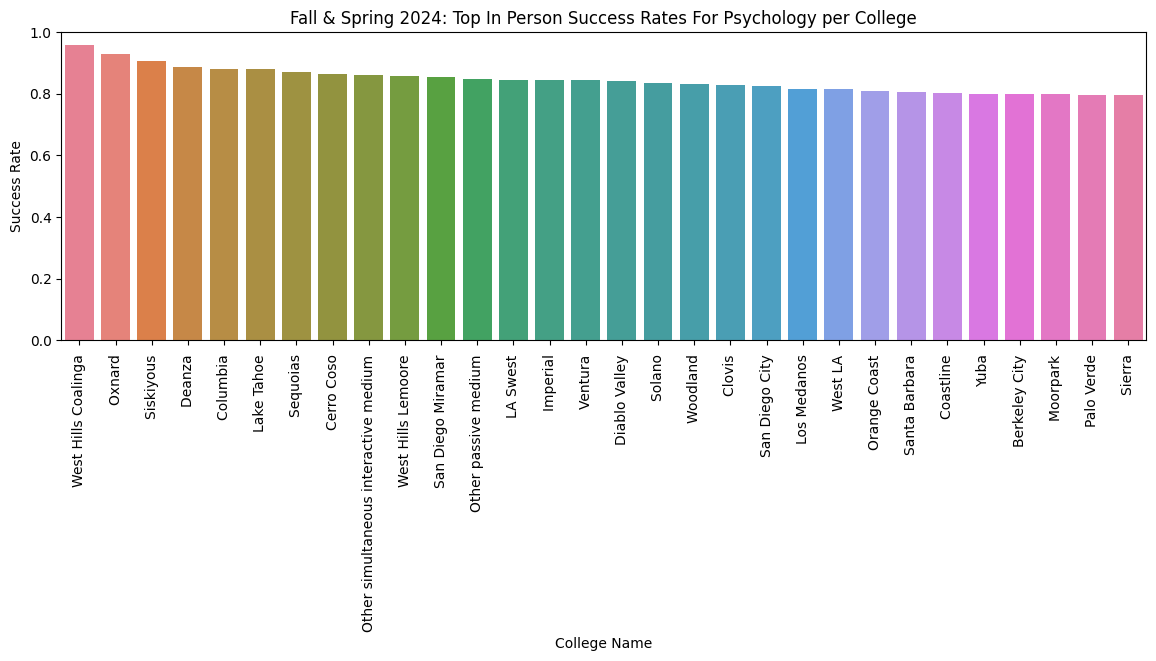

In [ ]:
sortpsychologySuccess=psychologySuccess.sort_values(by='fallAndS24Success Rate', ascending=False).head(30)
plt.figure(figsize=(14,4))
plt.ylim(0,1)
plt.xticks( rotation=90)
psychologySuccess = sns.barplot(x = "College Name", y = "fallAndS24Success Rate", hue = "College Name", data = sortpsychologySuccess)
psychologySuccess.set_title("Fall & Spring 2024: Top In Person Success Rates For Psychology per College")
psychologySuccess.set_ylabel("Success Rate")

A graph for Business top success rates across colleges:






Text(0, 0.5, 'Success Rate')

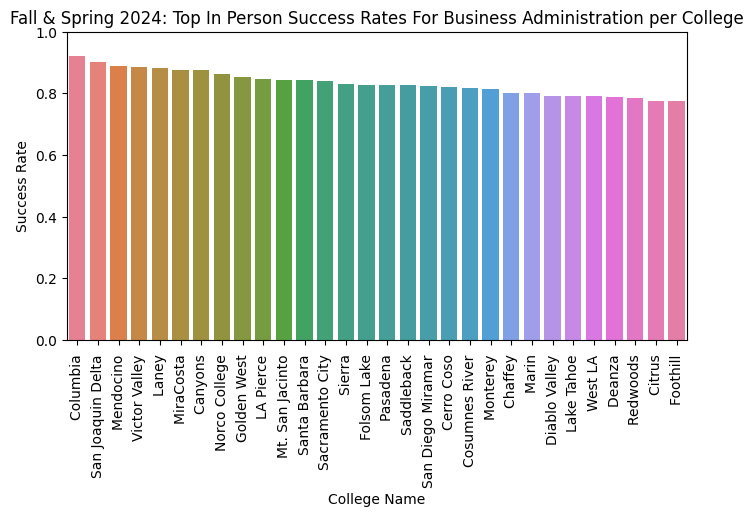

In [ ]:
sortInPersonBusiness=busSuccess.sort_values(by='fallAndS24Success Rate', ascending=False).head(30)
plt.figure(figsize=(8,4))
plt.ylim(0,1)
plt.xticks( rotation=90)
businessSuccess = sns.barplot(x = "College Name", y = "fallAndS24Success Rate", hue = "College Name", data = sortInPersonBusiness)
businessSuccess.set_title("Fall & Spring 2024: Top In Person Success Rates For Business Administration per College")
businessSuccess.set_ylabel("Success Rate")

A graph for Bio top success rates across colleges:

Text(0, 0.5, 'Success Rate')

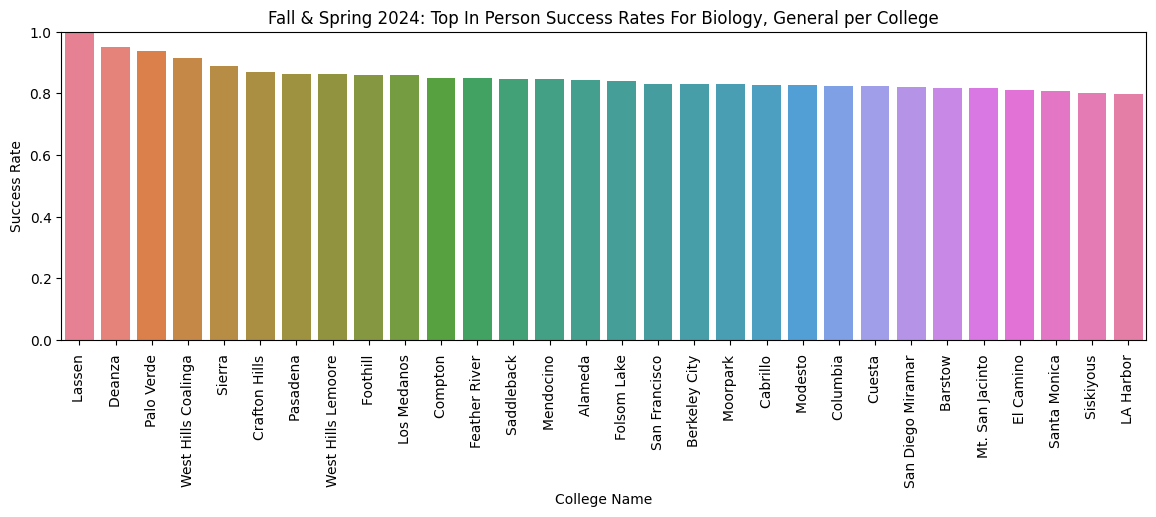

In [ ]:
sortBioSuccess=bioSuccess.sort_values(by='fallAndS24Success Rate', ascending=False).head(30)
plt.figure(figsize=(14,4))
plt.ylim(0,1)
plt.xticks( rotation=90)
bioSuccess = sns.barplot(x = "College Name", y = "fallAndS24Success Rate", hue = "College Name", data = sortBioSuccess)
bioSuccess.set_title("Fall & Spring 2024: Top In Person Success Rates For Biology, General per College")
bioSuccess.set_ylabel("Success Rate")

In [ ]:
#Comparing 30th college across the courses
sortBioSuccess30=sortBioSuccess.iloc[29]
sortPsychologySuccess30=sortpsychologySuccess.iloc[29]
sortInPersonBusiness30=sortInPersonBusiness.iloc[29]

**Section 3: Headcount Information**

Extraction of student counts per college. This is including ethnicity and gender information.

Initial get request to extract view state related info

In [ ]:
#A session request is used to get view state related information for the student counts per college.
from lxml.html import fromstring
session=requests.Session()
headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7"
}

responseStudentCount = session.get("https://datamart.cccco.edu/Students/Student_Headcount_Term_Annual.aspx", headers=headers)

resultStudentCount = responseStudentCount.text
html =fromstring(resultStudentCount)
studentCountViewState=html.xpath('//input[@id="__VIEWSTATE"]/@value')
studentCountViewStateGen=html.xpath('//input[@id="__VIEWSTATEGENERATOR"]/@value')
studentCountEventVal=html.xpath('//input[@id="__EVENTVALIDATION"]/@value')

All colleges are selected, as is gender and ethnicity information. A for loop then cycles across the pages.

In [ ]:
def getCount(page):

    callNumber=f"c0:P|PN{page}"
    payload = {
    "__EVENTTARGET": "",
    "__EVENTARGUMENT": "",
    "__LASTFOCUS": "",
    "__VIEWSTATE": studentCountViewState,
    "__VIEWSTATEGENERATOR": studentCountViewStateGen,
    "__VIEWSTATEENCRYPTED": "",
    "__VIEWSTATEENCRYPTED": "",
    "ASPxRoundPanel1": "{&quot;collapsed&quot;:false}",
    "ASPxRoundPanel1_ASPxComboBoxSDC_VI": "C",
    "ASPxRoundPanel1$ASPxComboBoxSDC": "Collegewide Search",
    "ASPxRoundPanel1$ASPxComboBoxSDC$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:207:276:1:173:70.777778:1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxSDC$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxSDC$DDD$L": "C",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$State": "{&quot;keyValue&quot;:&quot;341,611,231,621,521,911,345,111,411,211,371,661,811,522,482,921,821,576,831,591,711,311,971,232,981,641,021,861,421,931,312,748,721,471,121,234,422,571,862,441,731,832,022,451,031,331,332,892,741,742,74A,743,744,745,746,747,221,343,481,131,841,313,574,334,335,141,531,344,051,492,592,461,681,962,851,941,241,963,863,431,833,682,951,061,771,523,872,161,572,881,961,233,891,982,076,071,078,077,072,079,073,361,363,551,472,372,871,651,652,781,261,873,561,171,271,181,373,281,091,691,683,991,581,582,749,493,491,292,291&quot;,&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl": "Alameda;Allan Hancock;American River;Antelope Valley;Bakersfield;Barstow;Berkeley City;Butte;Cabrillo;Calbright College;Canada;Canyons;Cerritos;Cerro Coso;Chabot Hayward;Chaffey;Citrus;Clovis;Coastline;Columbia;Compton;Contra Costa;Copper Mountain;Cosumnes River;Crafton Hills;Cuesta;Cuyamaca;Cypress;Deanza;Desert;Diablo Valley;East LA;El Camino;Evergreen Valley;Feather River;Folsom Lake;Foothill;Fresno City;Fullerton;Gavilan;Glendale;Golden West;Grossmont;Hartnell;Imperial;Indian Valley;Indian Valley Cont Edu;Irvine;LA City;LA Harbor;LA ITV;LA Mission;LA Pierce;LA Swest;LA Trade;LA Valley;Lake Tahoe;Laney;Las Positas;Lassen;Long Beach;Los Medanos;Madera;Marin;Marin Continuing;Mendocino;Merced;Merritt;MiraCosta;Mission;Modesto;Monterey;Moorpark;Moreno Valley;Mt San Antonio;Mt. San Jacinto;Napa;Norco;North Orange Adult;Ohlone;Orange Coast;Oxnard;Palo Verde;Palomar;Pasadena;Porterville;Rancho Santiago CED;Redwoods;Reedley College;Rio Hondo;Riverside;Sacramento City;Saddleback;San Bernardino;San Diego Adult;San Diego City;San Diego Continuing;San Diego Ed;San Diego Mesa;San Diego Military;San Diego Miramar;San Francisco;San Francisco Ctrs;San Joaquin Delta;San Jose City;San Mateo;Santa Ana;Santa Barbara;Santa Barbara Cont;Santa Monica;Santa Rosa;Santiago Canyon;Sequoias;Shasta;Sierra;Siskiyous;Skyline;Solano;Southwestern;Taft;Ventura;Victor Valley;West Hills Coalinga;West Hills Lemoore;West LA;West Valley;West Valley Community;Woodland;Yuba",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:407:276:1:175::1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDD$DDTC$checkListBoxDistColl$State": "{&quot;CustomCallback&quot;:&quot;LECC|0;;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditDistColl$DDD$DDTC$checkListBoxDistColl": "3|XXX3|3413|6113|2313|6213|5213|9113|3453|1113|4113|2113|3713|6613|8113|5223|4823|9213|8213|5763|8313|5913|7113|3113|9713|2323|9813|6413|0213|8613|4213|9313|3123|7483|7213|4713|1213|2343|4223|5713|8623|4413|7313|8323|0223|4513|0313|3313|3323|8923|7413|7423|74A3|7433|7443|7453|7463|7473|2213|3433|4813|1313|8413|3133|5743|3343|3353|1413|5313|3443|0513|4923|5923|4613|6813|9623|8513|9413|2413|9633|8633|4313|8333|6823|9513|0613|7713|5233|8723|1613|5723|8813|9613|2333|8913|9823|0763|0713|0783|0773|0723|0793|0733|3613|3633|5513|4723|3723|8713|6513|6523|7813|2613|8733|5613|1713|2713|1813|3733|2813|0913|6913|6833|9913|5813|5823|7493|4933|4913|2923|291",
    "ASPxRoundPanel1_ASPxComboBoxTermAnnual_VI": "A",
    "ASPxRoundPanel1$ASPxComboBoxTermAnnual": "Annual Search",
    "ASPxRoundPanel1$ASPxComboBoxTermAnnual$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:607:276:1:173:47.777778:1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxTermAnnual$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxComboBoxTermAnnual$DDD$L": "A",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$State": "{&quot;keyValue&quot;:&quot;188,182,176,170,164,158,152,146,140,134&quot;,&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTerm": "Annual 2023-2024;Annual 2022-2023;Annual 2021-2022;Annual 2020-2021;Annual 2019-2020;Annual 2018-2019;Annual 2017-2018;Annual 2016-2017;Annual 2015-2016;Annual 2014-2015",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:807:209:1:175::1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$DDD$DDTC$checkListBoxTerm$State": "{&quot;CustomCallback&quot;:&quot;LECC|0;;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditTerm$DDD$DDTC$checkListBoxTerm": "3|1883|1823|1763|1703|1643|1583|1523|1463|1403|134",
    "ASPxRoundPanel1$ASPxDropDownEditHeadcountStatus$State": "{&quot;keyValue&quot;:&quot;A,B,C,D,E,F,G,H,X,Y&quot;,&quot;validationState&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditHeadcountStatus": "A - Credit Student Enrolled in Weekly / Daily Census Section                                                                                         ;B - Credit Student Enrolled in Positive Attendance Section with 8 or More Hours or 0.50 or More Units Earned                                          ;C - Credit Student Enrolled in Independent Study Section with 0.50 or More Units Earned                                                               ;D - Credit Student Enrolled in Positive Attendance Section with Less Than 8 hours and Less Than 0.50 Units Earned                                     ;E - Credit Student Enrolled in Independent Study Section with Less Than 0.50 Units Earned                                                             ;F - Noncredit Student Enrolled in Positive Attendance Section with 8 or More Hours                                                                    ;G - Noncredit Student Enrolled in Positive Attendance Section with Less Than 8 Hours                                                                  ;H - Noncredit Student Enrolled in Independent Study Section and/or Positive Attendance Section with no Hours                                          ;X - Unknown                                                                                                                                           ;Y - Non-State Apportioned                                                                                                                             ",
    "ASPxRoundPanel1$ASPxDropDownEditHeadcountStatus$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:207:259:1:175::1:0:0:0&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditHeadcountStatus$DDD$DDTC$checkListBoxHeadcountStatus$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxRoundPanel1$ASPxDropDownEditHeadcountStatus$DDD$DDTC$checkListBoxHeadcountStatus": "1|01|A1|B1|C1|D1|E1|F1|G1|H1|X1|Y",
    "listExportFormat": "0",
    "ASPxCBRecPerPage_VI": "50",
    "ASPxCBRecPerPage": "50",
    "ASPxCBRecPerPage$DDDState": "{&quot;windowsState&quot;:&quot;0:0:-1:671:121:1:73:115.777778:1:0:0:0&quot;}",
    "ASPxCBRecPerPage$DDD$L$State": "{&quot;CustomCallback&quot;:&quot;&quot;}",
    "ASPxCBRecPerPage$DDD$L": "50",
    "LayoutMode": "Simple Layout",
    "ASPxRoundPanel3": "{&quot;collapsed&quot;:false}",
    "ASPxRoundPanel3$ASPxPivotGrid1": "{&quot;callbackState&quot;:&quot;FLDS_CBDEL_RPoI2xDxy+2tT9MA8SJMbZQSO/mHHe9uIFmjG6eGlNELmp50SA3v9TuTpGRWkt3mgP6TG01YzW4ORBYk3LIm3AU+Lz6EzaE5RJAPsHHIDx97tGVjeAoqyGlONuic6GAPT/PWEoQc9wcYerLI2pcaniE87fa+AeZZ61AVWO6issfH+JFdJXfmfNlwEHpZsPiEKH45nFy28ydqg5uQ7dYLQ7d8Nmu2LC2gArBgMbn1baoGvsDBXpxvvSWsLbH3B6TEnmxugid3joQUhBHWZV29wUnPoimuc4e3c32e2l5QLrqlfQuA+5R5bJMY1nrKDaPxstU1aZBa3rA8TW3B0lCNFGwnKKVTKGr4MHHZdJ5XtsLEc3rYhtOlJAA6pyiws9EZ5exk5QVgRsuXsRwBxH7xZA7G1Ai36/kR9BO7YLhDqHUQ3Efn4NwsgG6iA5rpjXOCR7aA/i85TtsH7eXJqDVy79R8YR6VIlj0/dQwUN7yKY7HdGwMi6NdyREIPRQwribgiiYCQYqCdw6poNXLlEqgnXenBczST74Zh0g6/E6FnxopHkw3GTtyrK5o1H2VoI7Bp5rgBCVPJ9z2bfx30PKlIUrmsFrNrxB3Henp3SP8KLbfNn8zxPiXduK5l1xzQdy7CKTGliie4cGOwRnLdAgGdtRW+2bJVWWW1bjiLNTmHfPbwZfKB6e6L58v2t4s/eE7PZTNzlRdk+AuQ5488QHVBpHhU3aIOy8Mvl+929JqVw5AGoboPSXoFqZfHa4+0TgDyS1Kt75DN2HVEarengGJeS9YcNhG6u32IhP3B/s7npB2NpT3862spgPu4XMY51gysoa61j1IHQPqQztsz+0Ndsk023bkw0A5ZPsjzKLJw3MNelLF/9E+wVVyNXf9WLvXmQ3s2vMB//PuYq0OhFMZ4cQ5aTdrn44BcphdxBC93pii1blylIlUZR7+6rQXnCCaW7xv47K6aS043jdVTEhpq+X7mOqmJbOq8rpsCI+7nIO4OlJbuiqcxXtz1BkHY2hx3v2jouXh9FPNgX8WJzeNnerm5IrgUC6X0CfZBnHdFnZPEys4G2m8u+7IFD3DsucFGKoDX/hGCld2smzvtMSlwn3NgLe/2bSeHb70tH7SV3nB1tsVlNl/O7cQlohrKNRKS4+t2NyaiSEFjf31ftn/41M9zi4Zg+NVwEKq9Om4VqZ6qgryW4jrNPf1f+8mUHtaCJ3N7QzQLrNJM+643dV0tNmUxiJA4na8marUWx8A6VMbBf1lqxiR6HXEtiwntyauYicRM76RDNFgChtGrSTJTfYjGp4zXlmCPaDnS8AxAclW9G0AoWoxKdCQMCGm46P642zh3ztcDVjwAYXuMQC0cd+5CCy/SnVBOnflszDUScUJpsRDLuYe1olqrKwzkKL3k0CZybr/xafhHTagCPC1Y1NSF/VGqQpLv2j2aUhc1whV/SkrQXtab4oJ+sBlnCBPWlmwYwil8o/cUzw+PZ3jiC3CGTXz1hWwnn0PfW/q1FCN45trfBW6G8+nZGiZ1xhqYN4LAsHZQGTtXXlLL3TUvsxFGq1GmbST71sPLQEN6yryU7G1L6vC7l94TgH0w9fDQyeXk5YUC7b/NSMxpjl2G+8ETOvb+d1AwGAG3GbnOxA4Ih3UvEYccYN1UxWaxgTXzvlrglDDEEEmAlwnQHV+VcJvF31Jn0TQcPEv6TVqKylPtwVyI8TiZg1OJahX1eHSDD2npzhsbgeTkMDDQRFnv65owzFrkJvuUZT3gvtsaRPtqGRpkcw323cHTn3aapNRlq1dBQGb2TYzoRnmfFmjqtayAUpqWitYHcEtgbHuB5ST8lnSr6ifz1J9wCtjX0GzsvzHA8fgTACm6SXY0kqOxVM4q9PYyRZvjX2iP6D4hEMUwpAqnKbZ4PXR1BI/diq13kriAFgP777TP04OK9vBScdmjl7upSFM2GpzBCrXQwXWMDEPh918WpaoBVw0qqjWUtHU3SB1Aaop7ElVv0pqmAqPI0O0Rb6e8bctkJKuBG+WX7IV8HZG4jAgLg7w7OocFv5nlGF9d4FLjLJYDDVHlq4Pew8T1QeJIN/JXixtC2ek0lfJ6eelBXF+q/Iepl2NanOMnefpNIukEypSFuccFw7ci9AveNeIVg5LnaSQUE8TuPJiOdulHF7ZYEhY1yFt8PyzTYPHbf+SBoFSeRXRu3P87J43qTY4O8m90fFsNkh6dG3rIdAD/nSRpA7zYxIETpGK9t5tLYIiH5A8+xYCcH4CCSjBJKmgaDOgkBmmdpGiWc8D/20Oc650OvCDgB40ubAw32CcBg2AZlX/oAw4hB4oz9Zpi5vKWnOIO4xvjPPA/0onN2G7MPFqn/0RaCGU5KzYCSLdrO3APwd5L/OqlJc1NxZt/0n+5nurHOzQVgdRYhseWEc4lD1wphL+Cmlu5D40lpjv2E/WBv9vI5sC46Tgx3r5bJTAwZyWg6SVsZCDvPies9iKSpcyByCFFiNV82D3kswX/HzMHWtDqJN0MA1OcoLQW1Lt+nkI4nVaLzGXzeMoJnSuAp4q+XjV6jNnQ6s47An0KPnTcxTRmb47NDpnjqYYxW07J/JWi3H7tn2Q4JfdShBsyM928B5/j4UApn6dNBmkVBIVZ0mPtGsYeitdiTPKx5OujYvciJnDVVtV4/1bDhr1GDvK9GdHKZZ5YeoRl1PTKW9YA9UMrHtcqATfyuKXruYudDmTlsEWRmdi5MYke6qJzcF4jWdOgUSQpFJFEuo9Q98KswBjvxvmeEA8SgAEKtrc62+EkvhX+m8c0zaGjXRxAWSKFZinjDEzWbazXgEBGQLceoHK9Nk7PDI4AddbmGGcff8n3GJ0NzbIMXgKqhtNTgJb1d7Wzzo+AcD1w5Rmo6knLifUhvyY/V05lodihuyPFTEdPV3azC9McAMxfo/FarCXZTogSQY830S4DkVUed7ysqkfkQ2bU6Ev82D66LiCNSeybsiROlbYzdBTvM/zdZqRep9ScRXi+qfSxWJ1ZQvMP3fIZloJtdOPy8Ma9+/hk04X4EtemiHBBJIXrYbOiHJYTdPYC7MH67WJ53uv6UiWFkhukks7YJ/bktX1M7isvlmdzbTQfgd4ym9wiUDLsKMJTtOLH13owV2IXtLjiLfz+VyedKrUIE4rEXdc3W/qJVkVK9zdLPgRl/qJhKFV2rb99sjvu+z5UWt8ZyrQqToQjn9OS81dyae6BEN6rnH1xDxQ5AiFqEemELrcL5TuDHmaYOgZ6TBCUx5V9h7oKjEVKx1G26PydTZuM6imO8yqU1TxTid/EAlvIWzdTHBruxsu6mIO8NumgSr3LcTw435VpA+Pp2TbHGm8A9WqPjMurcRJ4M8qoVEmThBU5OxrgdaE1Nwyvtw2EOB817aeVDmTHlQWLetHFBcCTgp7OgMoNejJcvU5KjhV6zws3Gk0VzYb756n5ULHqzrnOxRwiaI7EvXgWoF32l4ke/6Z3n6Xpj2H+7wh+XovUjv/tbP5eJuYY6q1xbmwTbM3+emLL3W0PHK1aROCs4vYd8DLsd6FkeS3ztWLuBH1yqss9kHXvlzHGUwBc6hkASp/5v77zQhwG0GPZJ3utsOKsk+JSh4x4HoDy1Rm8vXAfSP+iatrmUfib3Ha099x1YHjGbkfCs4sk3C1YcteNACuCNzeg8v0O/sXy2qfvEPbSObMqjvdHIEq54Tzymgrd7c15hWOkUtjnQY+d28wY/CschDcF36W3TF1QIyWWSjoxhad+p25f/TC87QiVUsX9zvUxPf929WhuQrk5is8apCXiDn9mCG+T5c0JsYDdl5T+F4943Q98TpoPaYBgMtv9rNda9a2KW74Qa6xRT7jvxNxebftyYKZqhg/HIEyNDq9fIbbsgShxP3rBbJavYKmXxrWyDMNZoR+ggg23Vg7vI869xPXr+xLWE/xz0RIo0ZvTFu7qLJDAFCAdHLAQQO9o65QN2jylJ8MCZ06q4hugT+Fn7/myZ9HmfNqI/dsZiH1VKFSRBx+8t62IoPQHntxKXlIXeJZ6qVJC+VEwnmcqQb6hhy+o/r8yKQIuPwCaUAwCRrK3Y3/HBqPZuyt6yWS6hrjxGmd9U9ZdF+wl5Lh7gBC24uFDzHsdbrHBpnW1Gxe+7NdLh+7/UNmhv1jxij3A7DILx+MgyRCrnW2AG+gf9PzdOo8edUYJHTiN8Y2nsdku9H1WFqw0IDiU//Ycfu3LUXIKk4EwQ1+3enlJLvx/p0//0rgdcpgzaMAYx6r8V30Boc9ylivx/UJ2uM2oAHR5Hz7i8HnwYSO0F28C1Ep0d0E435hRYSMBfUjSE71LBUbTYqiNPmasDdP5pKxJTuz8zbIjh411oEgmOHd9ljnXbvgLe6QsecOYw3KDYNcippILOCkz/XqRablQMsFTSoXuLyfkzpZMi5haPSkPJQbbbq/p/odURD9/IzsU+9uU0ed1eth4AJ8nmRyTlQRI5X+rkqIwZr3tCxE6roOXPz9xQqMn4pfwqwbcyrJjA8hzC4q1v+j/dWG09Jug2FpCUXnUWzfc/J4P/FgQ+u2edfv6ncOb6rdnAnehGNIoFEiDJe2NH0XD4Sh3RfuYy3vnMvjYtcrAQC+RucnBkycWXH3/i6Oj8gK7vO8c9/g0/ILgWUTaWozpfBA4M8x/nLHWW9dF3jCQ6S3fSc+h5zm0KiQZKFAuzQxKmmssGi0hmz+/91I1Sf60UyR5QE02QuKCOfOuxd64nNmXs2jBDPjGOQjYqmZQHK5Nt/gwRkYTmCO6P9o2/HSZVzTUueYukLwB/vrhrcfY0OCy6HQEMdwSThwKFpLU+/ucsKSKv9vVvmHQqlWITawObC9+gPn8V22qKKpYDjUTsuVPDesSk8FnwYHUcC1qGJHbAbRmcTH2KWwl/aCHMJznKx1MTJ1pkuVRvZHH6Rbo+3rQns4aVy9drzt++SFxP8/wJ8EBK+rWoO/6lEh2vW63kXifbFR6SMe62SiFBJxOZsAe1spejuq6TZu1grEuEwVmeMlNPb3FvHaOg14A2TCGd/zPWdn09Od9npHAIP8ZLHnfUj/Di8HwbKzDXZ5+ixLClLDwSpM0SulpF1w1jKv5I0sRd9rYFJj6zcrbDmDWvntC9WEC5ypdg+GvNaqBp1mrPf75MxU7Rn283vHjF8Da/9J56lWlNJw9VOPbfuCAiWnC1SxdVSoLsxoIyv9GeF7O4ceuosj6TD8zHDY91VspJ05TfqicDLnJBNUsCRlCiQhoFyv/t/i0A2Y+rBFshDn5yWIw+r+I3lD+FLBp/v7XnyWHbqvVy3IreGtcVUKBvEGVMDBAS8g7n6/RxxKhNHJlr8LV6zXlJWuascpGOLopFrGan2iibiNJyXZp3ZZr5ie8BJKQvTMZuzhrVXFT6d2+uoE+UqKus4hKlM+XpyuTvXlFAEKp1dGhuetBLZ1JIHWnNhz9ze4kFMLApSCYm6ANCy30+i00H4zvOwYyrgz0HTgyPKm+wse8BjLtbqWVystJgFiCbVF+Uy0hzv0y8L2j3mKRNPPVefRmXn2mAbpSBMHlurNw9IJ5wPp0z5wlt+TT6M8kZbtbFByqDumRlaZmYVmb7mKdmXDXUBQPBmRZH4WjxLBERSc+92etee4AJJ3Lyrxk0VQDW4p9Kg44uCvjMtFyOzY22VUw5Nad2EwjDeCgJNt/WUOcDpOW+4/YO78CgcsKa2ILBkXriUxdVU9Y30YY/mKs11tDZKnDSAfU+OTYcdHT4yDYz1+keZYmeMWw1ha4aiuX6eNHS6NUBIxeLzfIMdsiMxj4XO4lkiXNWDOpX0WkArDQ6W/skS0Gw7F1nR2e2eItauDJtRDI9qSzJDMJJFh2zQFBXLPd2fsHlAnQCICsqmVoUPQ7l2tE98th5UaxgsrCBKBP7IAolOaq6UDS2KGL21tldrhcST3kptNDDSjIO+4g6wvRboBaz+l+GGgLCrWWYO8DFUgtwBPWJa6ycqCBlDS4u4BWHz72A3oF7KHIw38KeRXYVj3t+WKQWF9PuQKBaXFpT/by9b5ESf0hG11+wNe6yVS9dveIhI1f0mIGqvGdcih34E6uSghZCV78ZDtymauhd7/FSIDnT4zJvIXxuUqGaFkTwIUOE1/+jL34LFIzHAgtpWp3FRi/ZhQBNZ25X/FVFZIwjawZry96bSrGnUE8nmiRmaJr5Fn/vAJVCI8far6SiGh4GzBL7DiEzmiavuka+1rfd/kbDa3sfP5Nnhq7isDAgnVwFvRicDovKymL/IhaZmoG3A9zqd5qW8/+sythKVVqUsXf9r0+HzYofZdpoxUzzEDM5z2gftIiNdIv6lp95NxLesl51qCABRTIPEDj5150NthUa07984OcX0nD7Fd5O1J3A0Gd2ImzyyMBTttxbkR3YNp5WZsnqjRamjVTIQ1m3c64Qo5fXUPNy3lFa3ENL9RQJJsWDrC5xdFi2yNTcvMlF8HIaVIhg19jzs1UM9VP+X3iY+aEM+MDe5Mo1gOgTatMNhEulNkkHxcJc5vptp9hBeYqWIT/E7NKCx/HsiO+S7RzasobPu58FR039op/m7BPifIpj5bMHTkSjatgQT4F4xaX2iLuJ1sVaqUVtgPb7K4MjHU33/tm9SlpFw4LfUMtLaj0LlRXYe9WmDA8jjLs5bOZZ3SpaRHsim94tYqTCKU6MHmHSxylzbg2wl9D/x4YNkNYHmf4JdVSZgKqSzE4cJ8xxp7/wePqidFDeWLY6gzg8SBJcgoPWMk9H+r5ps1BQgbiswtuTLLRbT1P3LGDM9h7GMzpW+LBOLnSQdi6UoBsAQfbgbeM2dVSkwwl4xGRopzJCAfNx24NdS2PTl7LYdPt9G0W74/Roconp9ch+7juQvC6dFp8DSF1gl7+EMjQiuw/ZolafO371nmJxeYoCK6jtKAxV9qLGa/pPaFQpFzYVYBkxocnnEb1mR+dU7dP3LIGgTEqUYE13xLSkDXiUSCcLnHu/x5rxj6gR57koSSqUptPZf5NNvh9D8MDe7jowDhRgR7z3eyerc6b6NHP8GR/8t75P1+fWygxKgME5AHccp2OliltiUfE0q1jUPknCvMYW0yavXYEvvGYEB0JlCOwi+3Vf8XNMgvjOGEfC9qBCMJauVBnHXSzeUSykeuk4TNgua7/znO4GoQ1K0OvP32knvmCyzkjDAbTK9VYydz5UBqUucZ+Vm3XWdNnJbmlZYxg/V0GxWo+crMVH76B8rcgLkk+bZd+WgPIVZztVtL8bZdvZAWMrABphn3XLUclVviq1YHtVvz2yeA5pVhcq968F1WK7+ZakpvehBd5XT+CZ80XLzWy1wWmDSpQF2bLi6/iu7WVAmF2I0pda/xQxhhdc1bU7HOuZwflGFKXqh652258xOwWRAeFoU0zwro71qP668+zuaiToV51MN/bh5/C0SzRxlIkk05u8jT4IA5oE3Q7EYINX8hGwkANY+phJJnNr/6ZqKC6OlOuMOBXWgblvqCpiFGJmo7xgnvCnYjsfUpeDMqaeVIM+rWSQXlhbbP5/i1kF1M6UUqK2b886ezTVnrBOdH/e3PB/q1NJjqnUa9NNrj2cZ5xgqIwu6KZU/xvqzJEdhnshsql75D6OVzp5I0Ico8rv/at5XTJ382HAASrTKiKwl+Wn9DkbMyGAVAOmzdIO90qUnJGbgBpkcIfXjCT+zDKcReF5MWxM/pXsMpFildkOezzxTfdZMY/MEL9eyLQx1qYEMeY2FnLjSMd3LJA5qXldIOR3wIk/xZSibRUGZi4uMywVjiQYanLz/Ogx/rtiraWOlgv6PbObv15YlKmghWoCW5Pb1gimkLZ1iOQGi1GR7MwNem9NGvhDEeEtwTK3q1t1IphYJqiqx2tHD7MS+mwWRJYOzlWDCobdj+SOKtpd7lk17jdFjGCJcm+Aas+DrWXVCb4UE4RqmZlftFPIYhb8Q/mrpWD0WPPndHvXV4j2Pw8SEGSBlk/bH2WnXFbDinu5dhPGPHc3njWBT+M6q6tUlpCJRpFW/Qb/r+LcgERYeEVHvKAJ7bovYR3M2inlsloTkgAgte/BgeEGqR0QrixXf5EjtXEuqe8bOB0GY879/u1/rUJZDXZuUvYmiNZkGaRPQa7TiORSxTKakfJw0xNiD8XAGYeVFDE4Po5PqmBKNojIX/YGCyWCwoZDqcpbXQFGJ2LaiCxUR+1Dzo1TFM1LeaeTwXzS0463Sik8hS7v4tIhJRTHJ3fVm/OtuFsexSLEMftGXRvjeX6L82cYnBcMNXB/KaJb4SyEDSYJ+j7zTgX7ONW+3OVdIsJXDohDK3Cabi8x2GzEtWTDe02Q3e1FyQ11llrM1IEV8/NVzD++7Da0XjQ+hFsVhAc2tMk9lODO41s3Dnp74afxd/zNxUk+0QtGvnCMMUUNMtvoHJlPdnxNVj2bijT+ZVC0ojZ5drNJNV4s6Ym8cf8mwBytoTWoWADKSo4caDloEEX2eGZKaaxGu0mB51mbiXNDyNtNKhSn4yRJZ+u4TvkUkmWE7jJcjCyM5RIaTiwZeddTq828f/LMA84bDLycYP70FlIR95V6x/H+9K5m3oSmeSX6FIOQjB7SQIqZpK6o3Zor+j1RjNgoGSU/SO2gsenXeaB9RV0j0TDkVccJ/T5CZtQQz/Wg78anJi4hyIhldTQH0or+eIUQMrsZnY7YRbqVKaRUl850opqJJi9hwfl9OCG9pXwm0+NMIW3XetAVFbvlEB3PLD3ZhAwTXzE1ydeZevEUl4zWiDCpU12h6+R0OsJcTZpCtGEmnITPUlgneYxAJMqIZTRHwN1lL8Gq1+IajPS82iK0QTjuysQvMsDhpoj+WZ9JRnSRA3/2K/mbO7voWLoJlk9obbeMEni5HQqU4CemvtiHkMuoDADncUCp1ow8eiEQz/yzlqbTYYfxpF187K5Cf0eGSZ41ZX0TxBotoKlL5pq012XkoT7er0gcAaVJECjImSXaOsG2G9TaxCNy4KbmZWRpq3vmZ8Mtqv0tz1R7HljHNqc71+YR6Zfhggd/KZMu0qAmcoVNkwt44f06WO3NTq+CS9DvISFI56YfVkdmnH9Y9tLu/pFGtd83X193HbUfa2EU2hcfggjiCMlAURaw5M/hiE3jSXvIUeqJdlxujkWgSIKWjv8wP/i12Wswn9zQ/ms+hePSmprqWqTqGcLTkBn6FEBfI5fdW4/qJI+N7/c+NL+tg2VL7yBur1TEHmflnjfnqrb2RiFidHw4LapZbM+Mx03vOScAmMaXu8AcQcBbHN1ZLFdRlZEgB2KviyZGFdcKmVTh/sOu7y0Pqr/qFwspKvtejheLg7u95MZbhwvqQyBaR9QUGG2GLFezAtxH7jb/VqGweoFvRNwISabUiGNI6rWLeeOhldpDhax2/DCyLeKpGSDBimOCdzVSSEuNvO9KotLplozterLsTFs+NJ8kuXnO67joVhizFJDXIN5Qbr8zJ4CWQqnKrDx1elrJFeV+yR1jkhFgSpjkazo2irZEHaI8BI38cFrbcVwPXh/9EjTsnnD83Rz/osTszylFjzrkn92d8l9mxpzUXZqsjuT+52EQ2jaWUAVrujHcWWVOY5z+EXPV1luvmt1YEaOKYOThWWPmPjuI9aDo1ws/y2/4wLd0wCr2e8UGcOM1WHKY3fQMJOA/kzWQeDGPkM92ZVeZNKaJHe6b/ozG6+RkVV3yfEYk9qPl6nawsi+dcC/1fbbIYjOqRbYRomgw4kjOebiiVgTYUTusVdZd+gUCzXIrYO49KSsJcOWpKyUVj+QZF834edVGoLLBpPMQ3D/83qhjgDfGKCy5sJGCtFaH34jTu7G2BHhZ6IbX0DDtmtoatMh6qnYtoenlE2YhZJOp4y1GfFMUjcE6TSsRITs9+jh4GNc1drahg1B0iobB1wP+8uP+FDTz+vFgB/KftG/Xur08ee2LhBEAIGnuM9cajiLeO1UlP6qVI/isoq94HxyZwtQsU99d1Glm3Ba7VJUBMjaU4A0M0mylqhoKD9SQzavsfl0J9izk10bJPEV2CsO3HAwwo9U4vQLwP5BAPHHW/ofP+sHfcDqb+4NAGXnZRnQ+Z0GQftudvFH0P1hwJO/vSvzw2gnn2Fuc4GEYzHIQMclIwzABz9fXuO5CcUZYCqJ/TBO7Jwa0k/hs0DMWxM6yQFXDNp2vW61//lJcXk6oIsXgPO40/tjAe1xmuoINTvgOfAXnXNnRby+SancvZ8PVRqIre3ZJzqtCwO+JfPWK/hl6VKCGIBKpoyg1tcyMRz0afLD/RPtynnRMrOSVoaRy3Bw48QQNbW7s+bEp+5dZnIAviqE5N4ikwIUh9tPpQMpQaKDuDmUtx5C7/rFnTxnJZqmbRRmJyGC9x6JTGc8sUIwyD+TFhTfgMK06DtkI8vr/r3mlM2Qsfn6R0a0vRYggcvOCM7/iivd8/DgH3Y9r1UHNu/AmfLs5/A/9IpfAD11atvwWQ8EuOnJdz644XLIeGq7lyS71gpUxUH3gH1eelFDH+Fc2KlsOFoBWu6tXzfH6s3ASrbWdZsNVbxTQiTSqQvWfpUyCcPIY95jOJ9oEAFUFoI5pMNiiCs8QDfjDwL5SDywK/OdbnkS6Xb4kA+HsbHBiOka3bptdrS5796v6jKrCDP1/STeDJNfF5Fqjrr2eJ6JFqI/7E6TRvv5rSEZQ5BNS0mIFgcY67GAL0Cvwm2WkBqnJverqe/GroBO8EoW5VIVSOeFAuvoegJILhFoFETh/JfQ4EsakVjBZnqhwUJBnLaI2fc17KZ3TVq64i5Q2Yaco230juWT6/JGAXtyGi6UMqm+N2oBI6BTXAFxspmx6KT6iidF/1wYuzWJzwh1mlnNHc8ag41ouAZJw85MDCEPwNO4s9al9pVQV0DrVavJ35Q+dlEogz3Wo4Q6zUY6nriA7Jdcad/9oRT7PIxRS0auUtxvIiVDWs569yn8WYpmA6JbRqWxQB5rKtDKxHs2MNBPNmLcdwQTRSQZof4Mt3eOJsU0PBdPPJx53iOsv8XIAp9/ohyEyaVcJPG5J7YoTaQBD0rEqfErufVAs8c8TFx5YCSgg4cmy2KRwlTmRGYgU/KdOUNdfrgdyaGwhU0HnbGpUoHByJ9pMuXlwuLwYVhOcNwwuc5A7j2B1Y76YG/xZVloUWpyMVhyyxgjH/922ZS6cCxsPkWVWv9xc9Tvu3/OS1s7lSvlRYs4ltfqGqNM43hfdCLJRzQAu4vXqNJvHUsciMkFlnn+SE90vtFTuvHnYGphSzLmZTu7eeUWTJ4es+aqewFof31/jWneHpfWgVJTHDHxo+rm2Fbcww/Vsh9avejIIIppDqA/jPKUBaqYayCpsGSNzXu/YpSjvKyXYwvFVAFPqOAA7LQldPtKbredHPunNdBC0Ofe+o8qkVMswbCXe/AhyP7U/JJLgHRO44fSfTRfT+lK3rEFd/vwr4l0kFsA6gFuyuoD4/JjZCATwjfUqLRWxUyCXd4Qd8JD1YCsfFI5uSlfIZCJVDx5IEixFj82KLAQ0qN+Ls9AQ9/gRl31ntFYZgXvA0BupL7Zk7kWsrzNxugvLgxrcJHQuUC2TPdM+JIrvS4wc6tZC/LHem5A1M5FjFbPQxeqix4uh1lAURHixi7OinbsI15ldQrAbCgceGpn0L4kK4x42SRGb5rYnZVn3UC4/D6YGfp6qzFmRbYuSSzh6/ctntjXDrwYLPlRJNwLRvKMFkurTPSZ/Fb+QwR0J2zP3ok/pFl8NJA/JNmwoJNQn4k4tEAMDV9LWKdzM5NE0s/sS48nhUlfkPj/BpY4xaV5M9Xy9/NV4hKpy4fNlCXMesk44IgG9T6OlHgHgFcpbx/RqZ1eveKlUtKxDOF8X8bHGrU2pBaF764THgo0JzvqP2QsTpOdR12XWB+GsPTM5vQZx1JwZzClaBDhwHbkZivjQvjx3Clist7qHdFUpUhesPqJUVwKcZi62yoyBy6Did5p9Vo5DVnIquxOzphBLzlGSBw8aEmng1ewuzJpbOkC/5hopCxlN7brqYStw2AIsvU4o3tvZ+vfhMPUFGTlfcHhz5TkB3mrZqjo92cvyZUL4WFXREVvCuXYEoLWI/DqofO0CeCWjvss1DvbR2JQFuExTR88QZba3qfxKPLve84bEYs0urzJiUeBsUP+Hu0CMBFpzMrQZgcZb+GSrcHgAfTEU/bxEohhkAdrwlo23kCFLWD6TWPnAOqS4wNwHRHR1jz0D87MjUd2EcFiE/0nUOk/fwV0TDC4es+GmD1aO4VX3BEbqAvayBHwdNOSVLyWSFHaN8rhSPUQ4J1g4zJslzIeVq6P3a9+JAcIfi3bspCQcCNcoDbSQnfvLZHJcCL4ZH99PqdtkP5Ssu554QfuKBulmWCBJdbivLqcSFRORwfLvVA4P+Rq1zjLfMjO/dMTg/2dxkK4PDjuwwg7WRwsEryf1qxy23r03M6k6kzI7qywuv6vByrZoiJIxc/nmOBKKINA5N3i/Ko37y1AbbKXw/kB0DuF6Ej/XRHHu7IYfTH/COKyxdVGWFSn1hkqSWHgs/oyDRV7vNj64eVnQpiyIt+LPFtcPZeP1BkwFHD4aNCK8jvBEoDVj9UvbGwH7hvYIzkNOKGkcqvpE0STc1Jz0PRUtzS9j5y6SysS3vrhatgz63Y1kN/yl5mIg0FdeHG70cW0B84Zi/OXucxkN+6ryoDYI/dMovN87H5JGG53+2gqFv7nL6WyFxwZuKk0nqO/DBLfwju1TPzuR31NWTCTbeL+Ui52+Crj8yaFC0yrHE+1PsxbRLVkMSRb4m1BvvO24Pw2lf66tAaZ6MtCPhuKVvVK4XEx5mDJnk8vBd7meGQD1hvKEPFsnp13kbg/TiNZLj7Aane1KSH+R4eXl2eyhJAHCwwD+IaHZ7bp+6LNeA0TKNKIhsukCNchDuKQ+3Ja7hGMEyAiNhw1g3d3FmhT/x72pCzfMbz4lc8Vx4rJ+9+YWbdma8xLWjeLKnGfZ6fthmXqYNGibzHN6i4T0VjE3eDU8XXCXFZPTNhAq5xwaPNP7Y1MX72TsBw/4hGKsQ8y1ZrHzMR9D2OECQvJSFrJndQqdYmFY7SQS1gEx0i7GNGYk1zAbY0oE3ELu/iOJnLsdOzgwPqZfcOdBsBA5DdGLsZdtYhhO+JISJ83cJyxB8grJUJ9CS1l7lDw8xv5KSGMnxZZ5BafOhvCTlv9S5sjPIonCUWaZ8i81/jU0/nh9JIHQxzPp2XbuUWwnFM/9mvbO7AIrzMwOj+e7SCQ5kq2vQkmkAgtIvkKf3RABKRVXwbUxqTJbByRGrGk3npCVyJdDPnaipTeJvFQ2uG/4oRTvLIBO223Y7WC9MZweHKIVUSn2cgT5LqjfNvMtvTq/S1AVKYZolxMIg5x5lAlCosmsy5X5swoeR0ek2PmXnKjcVojYrkGYUvMYLW34zfHWHCtiD+6wHhpPkW5oVTZJzBAS5c1D4CFKRlC2cFuGcrZRG4pBqgIyClkFvTNbqgTup9tGGhVKoijG6ddfqeaXsumaj4lI90uPsZSDBuqj9JUPWIXYZeiK3Xk0PqALhvmqrP6JtFcJxdxfK3ZX3kVXinVrBuyiCR794acMonm4dIWuWxMlLWB9GLZ7X5sISOZch257F34HmttFpueEI15NtdsBNByIFNdXfd+z21xV79J+b6tKQufIxcMezWW8l35Yn6h2lPKwq0L7K8Y0yAcP745XDRStUuCdPjOOBanE8yX4t2wmpfXnxpmJoLu9+iBS40UIRSLEA/Rvt7fwHVAaAdzlh7wxF3n+AHR9XFzIeP1OA4cpWCRNBTt5d2bX39ztMakRi2lVg26jAB14kPhuAFm/a2lCJ+a7dNXABsJf9P8wdnZTeue6scC9o7+iRhp2K+Pa/SzS4GDq1gh2hqD/Ded94yB/tTc7t4c1+X++oMmkSvHKSiozPCdsHA8Gx9pKbdvdFhNcnneu1aKsK7mOY11WhInF6OsQRCAyvMD6TfIyHUi30YeAebjkV/pi6QNnkumqGyt49i5O/3Lm3y98b/SQR5pYdCw/Hn49ad5/KOI8Ytcwy4RBzQsxSLLhZFIvRoYcnA8fH/NshVbTtzy+6FuTStBfOt3CizQhwSx3F0sft7vH8v++9AqwZEIqdMosqhxw/zGnXLl/UAs+acF9+6UKIvU2HT6Upvj2bg5HOjuTO7gWGiqokQv2pULjUtbsH8uomLiaYB48Sh9B8uS3W5NU/lXsva7dIUY4y23Okj6S8QcELlbPMor41loWilhqFsymO39godytjTbU+XaQED4VkbSySftMjPoH4h9g0sFo49zXhXeXmSxaCfTu/5K2EXKO/EHLrd6ipLP+kHulbaesDB4afzTjQZtrPRMS329Kr4rtcJw/m0HhVhg2j+dzxHUK01uOdZpWxaCcNglGH+sWKX4gqNC26rlhgurn3QC2qP3/aWYPWPPEqGQLfmOE/C8y1I3L7xRTcrrPWQemu62ZEoWBfFqz5+ZRN+6GSWF8G24CrFIslUEXId2GffJBKMhkE4OKgnXtzs4VZKoulYDVROeytTfrfEVZKCWw9qTjI77725zzODiZisJqXR5cRpWDKuJ2ipmpdMFLwC0mjV0BzqQJ5Fgo1grgsklxuhEPqtSSzExVGv9NogPhzvbMbRuoKiATqD4SxjdVgdDl7h/v7dM1cJqeKbnstSPXlEY2id5cn3D7NT7wTBYxaJK7gBd43W3p/PLGTwal9BTSQAUzcXwwU2fXATd74AmEuoNrWIdHcS9lVFNYbb3+vAmC1nchXm/4zK0BtNQjcSPmQVdDVlQT+AILH9frlm+rwnNvqEWH2ylv/1FbXNP5DrylieUSzkG01GD+7YOrpuyc3udzdo2q5wHM7MNqTt/LqHVaxKu3kHEY7ACcIk87yZBNApgbi7WRNoeuRGr/wBPZROyWTMUUmHREoSyBze9ANzgjXQ/mVJyfVnF2KrtYdXlXi3MaGUldRrCYfc8g==_CBDEL_FSE_CBDEL_AgECAAIBAgECAQIBAgECAQIAAgECAQ==_CBDEL_FVS_CBDEL_+/P//39GBiTwByjAzIAbMAMA_CBDEL_FVSE_CBDEL__CBDEL_OLSID_CBDEL_A48FB437-A4D6-4F1E-B78A-F6BFE09B7940_CBDEL_FITEMS_CBDEL_UmIFHEZr0SGoRl0w8ok5gKN2ZHfUp/OJb+H+urh/DpSOmIlZuY+CvPOIc8EMckSeQ6SPjd2dkfdxTqYOAfSEuVopEsz8m+Ee3g3gLvIqGJnFA/SHEt0TFjPnLecq48HXzVYkyJELsn1kgYRwtUSCY8JGXbbqNDmcelgggEXLMoWb4AEnhNwmuSrmlazyJMKiNfDnMD9Bc2vtV2VkaZgthhm2BR7SvdPuoSykxKdSoCU12xdpOVbyNZ24nngmV/zEACvFDeTCHfv87GoJm5N9wk7orWsVn5Yvje2VFoB6R9Wu2tzZ4CKggDelPFz8eKUt7HDjm41qG378K2akLl6HeYkk2GBbCXe/7D3UV3yr1O3ZTOz+2Pc9VQmChgzDXjyzyKVMiI96YkmnYCCIM+eS/dPZMgBdNsFg7rPOWLEj6BEZvvBTGGCHmbT9dwlNfIsalyB7RLZK+9DD6eLWjnelETfLmk9b4Sfug7WmsjX+C6GmjdpHoqgI5h93o+aQiiOXsEJyMZHO27o/cj5EX+Ej+cjlgNKSQxSvj7aiwQic+VR/tV2OyizKzZeACX4Bbx9mWOIX8mAJe/1fGn6JydFT9JrsKAKvnAzEbMxEHunMUPzClRptj82ncykW/pG81hW41qrK0byoyBE3oBb9kxII+xeg3kKijlH+1Rbm+ZWaSxdjppis+3igBZs7TFbuX4LHCdB5u6Z8ynI5REWHjm25HI6eyv+/dTWxRvKXx9rZaJRvxGvRktKK4lVADTRCNeLZN8BuUCMsTeXlrf4zAlD2lZphTmXfwNNC3HiXjYQAy66U/gib7RZzrI7EEHIWTu6leIcfSZhwVSd+VWXG2l6s0AZ+BRCq+jduj7CLe18QUrE1iCe6KgzWGgAOGPQpEZ4u89vUaU2D9EJUAdD0YDtzJosUjLTgmldITXEKqHaj6cPYObE+KSLY8821NyAF2wUgGbTETy0RPCSsWa3lHIMNmIoXB/ouxFK8YZAVhKv78vN17rs13Cqx619kVuwcI7Zvf/AyP45sEOWPnIyS7K42dJvcv0Y6dMgtUH1/XPfyzknmIbkMlO5hxd4UCLzy8nYyDb5/XlpiIeXdYfAF90MMOcLFrmBsl1ERfnuLMnDzxvSz1w1anp4iZmn40LG1bfBIvE9YAM3CNwB+Y9wSRzaWqceYS0ChorhePmFasugFcH6loSaf0veJcPmMCxx14F+VKHvuC8v4jQBXpDz6l3JLSH65ebwCnWHSU4YfWx+qNmLJa+SWN05zzdDasfPOl6PmR55TvEC0BiGKuTuvB3bLPbsfAxL0Ar6KWurJZdAGORXwkM0O4n1d/C7XiGrKi70zSOWjdovlBtcC68juaOqvrXJsp/WmuXjIeD5If0aXJRe2Pb+maP9b/IqKpndNZLlmLaYb60+x67wjmXNcGU29wpnBuaUxoT9w/MpoV7qM6+7+zwGo5cNQnZ3avY2Xqbd7Bjuy6OrkJpQk2uy7nG/HV4FRPhzBj0+FktLumkjYOKnwjYQI6g7xKTvV/V+tZiCzKiZbd2xA53ba+r4vo7nL3+i1n5OlFMeWx5XCwGus5hqEjv1MlfHm4Oa/+d24YLHh3WLGwJ3R1dz/J+Ocy26PfBy1YHl5tg+Eatu5nE66WgIURgXM1yP33Rd26NooEAQcG6dNXMHB98U7Xu+rgQ6oJP7HGL9DAZNhLSeHZhr2XhFgmpI7fqos8JGKa7ZpNnmVPLRfd/CPKRZYVZtjq1awKuyTbB1CheJJhWKJBcQMumh2CI4yxh6+0pmOhpWRl4RLDrb8AgB0oVZOPUkq5ChGJ7mVk0XPntNxqYJmZWCIhrI2hT0ivjJBiUi7d+k39Qy7mhAVm0WJjqi0S5Xe3B2kkGxa64RGHwVkQ5ozMcIx+4CUzspHqubNzlIm2lIhaExFMCtIC0LpwPjhlfTnaMpb737FttFKP+EaC70+LG4JzmIjSVM5pXs9X/+LBMLPyRZ8wM0LVg/kAIse6/ltFsZJhzdG2vdINQ08i8qDoM9EUxUqmxg1FiUUnhQ/pZSMzH7oqykeqMSH9HkHDY444jt3ZhqejJkM1xfJ0HHndUKqmEapTjCV4me5G2M4979tIDbNXmm4ECJ74yepAdZo+P7gtU9SpoRhEJOLJKE8xhS0/H0f2o87bDHcbQboV+3im4AzpI6EwYnKnZXvAQ/JGgtFm/TmYUR8SucIh9w1oAdPz/Zb6swWCb2UXhQBqCIVVjZkq3e8FQrd9pV6r/8T1TlOoIfh70qAz7cSSxIoWCKPqYMUWbqIwNRy+H/jNziuiqwFb2R1dZ27fHLiCkjzv8wuD9XXkQteR5O2PW1VoAQlRrXAMoAJzOl5yClzqdc6S3JE4cWg1IwnSwl0JFmuqIsw6y/vKb3LGlfPpm5SiPxA/LdSzJpefin3Nu4a/5I/M4QswzADiITegLae2RE52JRLn2k8M8x2k5b4kyKvIaCGMi2uxrcl/qj0pvtWIc2zJgzjvep4kYE66ZDcIEqWm3aNF5zQ3WBtEHPUOEq3KLuXYwv7dhyn5mXN+lcOV85l95h/ZJKidmcZnuuGWHqzzCligrkX1kvfdo3ia09Wj58mD5GOr9HUBb95hzQR4Ab0qlMoa4YCK+dPBb7fFodnmNobek9M++Ev7Ub/qDWoTLkNYajsITf3AbbHagKfQ3WwbyxQJQ/JBfctQnztx8OFm4B9iaAVbA3Arw1bszFdJxG4bfpYkVibKCTC+4DiKMOJjLw6PPPU2vwQpRHVgWvQ9Ch0Dm2O4d4jWX2IaQGtvHFV/QxHS6+WhXQmQbUcGrOsqq7Yf3CpViRSCpl1MIJjPRsdw99Kaqqsr89uMK21XKn2VW3WoY/tz2z0EzeWbEo1u37k14OxfUCW7pVU6ToSvE23M0BClPSKaeq7c9un8DwSO3KMPDN1w8YUqYTDmMSh6048YcZeDMHFaWp/+3q4rTlvERvgYC5Ln/epMawY/xXis5TI1mDSYZqhsVw7DWv0lEyKSMCiouPluPdjFRXjO6G+K0DiS/FqC46Yxh2C9bETqzXEzSJHBO5Wod4yVJM6xDnQxtSCONcP30n6jYSzG7wwf1J+o623jZvC07HezaYEJUQuwpFH1DsQ7orYTBWNrwpy/FSqMenOa97VaTRsEvjxcyiuRWU1QQHZ04rA2npHuLg+XIBlYrjbsXcbZd10wPBv5QKh230Oj8VyeGhYiV5D45RSvIGLfc69RDaLTrAcSK6V8otkrQo3bLZVojFfGdC8li7/+K6WG1QWhGwtKDMqiDGob8snlze+LPCpaoc3Konzc4STgW5YDJzthA8PKfwxTjICNB1KHJM+Gow1KmtjhbBW1lcsUJzFGBJllOmUMlGqMYAOo3pJBt5pYoDgx1U3xpDsKEyt/9/Q8FGGLqpGnps7fTzEJrlD8z/d7WDuCJAicM0LeLUqCnupYPeMZT3Qr9sWpJ/BxY2DJZbJFLFkvgKoXgEqhjMW2NSIIExhiZgM/GixiK/bY+VmmUVq27s2UtU2sgGOmwtE94uqQWk9YYoBsTVSPeMDmQTnMEseC7V6sZdJaypDDQ16zR1xyPNn3NHU6HsXQIGZ7rART5VcQPBBd5nOYM/jOcIev4dHouygOrgOY1XeZo5UYwdO4Pyp1kjh43pIajHDoqMq8a+t3OVR6dejqgnIsA3jxsEvpIQnKLRIRnlXoe/3N2XCyg/IQbVauSC4ph+8OJXmIUhyqGcQABdbykqVo8LtvdpngnceBIZCp2xRLD3MDL5cTN6JPZyp9BSOOaWOVLAgO4JjKrV+UP7Kq3U86Ij3J/jS7J+N9AoVbgGo8khUSLXEwEgO5yhkq9Mv/Wt+VJE2hIUK3kTKYqgLMgWem4mpSP86I8IcEwQ1h1ASgX3LGFTam7oDkkmghKcylSFcRI3PLssFxIuLqnWAD+iUvW85aNnMeQRR4rJw82+TzRY3QZdUczfILGC8+slZvUKsTQEfbpzWPY5dEr4ZYuX947VnRZxdlIFKZLrixAe7jfCzV4FcYSb4KHNrS3NMO057wOuFA1E85WK87pOtWV/alaBtd7g9S2YSjbqNgoOWjqPYbo85bGYFIkosWxdXKyKdISz5Gg4BO1nbd2iAHw+nFOu56FNW6fAyLZWJm3DwyNVC5jKpsUMTyM2j0/PFD9WJDD77cK2iDM1/FLcxnOABnvFv6ozNaQc111eJhha1FrgJ4eA/4pjJYk5ODFI3JT6vsJQyJaVbKJijyqA7Pd0yr25I8fXNhpqL7Q3Gx01i1iCdnY6mMdx6JbGDPfqWOzs61tp+jrTUwBu3TwJATPSWV1ogVnk1aQXsRfrBVZf7AXytMph5S/3Z4KfGt2vDqXE2MpS6L12mpXZtHiaj+/gSurd22Zmg1uJn3RF/u8cTsM3u8SGIp6V963KRsr/G5/tJoEqtCrW5FAiKIeNwpmJAclJ454JlrmUgEG7g/uX3bHEwKityFo2veYbfuvxRC+aw8mJG9eHbqfMcNYsC2fBFQcEJz5rvyLA=_CBDEL_DSS_CBDEL_rDpC6qLdXyc0NB+dpA2KCOEd1IOu7lMdCCitzqSZdGsUvqas59fHsyocHIh8wok1KZZW8LsrXC9CpB+qu1qtX2tj2y9xx4ryth0MkB/15EHzbAWerGqQeXBHdI9K5rl6I/kqkLpPIUWT9gdzOajypVE/an3kVGC0dlbuuSrff463X9cy4gkX9bh4Ne/C9pgoXbaEv2dJVEKoGHMyA2i2TtYFt8FJJ4YdMZd2bfOitFcVkfPqN1LFi8AxvEuKsa63cjPLtAdoUDnHJq60sydhBBmgX+MP4VpeJwaOAVAD7c8T+4Xf/CjlV5JZXapWLiz7ww6BNK0c0Tal1IEKXx8nQkixDF7f3+jlfZcaBM58ZP3J6BwP9SwZK6QWrVPB2Mfn5LtTOthP8nVKlwBlx/NekZHnXOJvzuNij9sOUavalYPTxqizioO4wnnr+kc2pTKJ6dmfy7J1BP1ZSpGe7s+ylXcuAb2e8I4yhMfhBEnfjvb+UQYtukaSML5ooFt0lbWPR6peD+MqdR4MEAFyCqD71TQAddiPsrkeXvxnWNZvXYLEd9DolOcNWvrXs7I2kp8RYLNY4XzFgbNDu3XnC09XLwexLCpkhiG2rhudX6mG9e9z4A++GPyXQQVUqq6JOshNnR84S/rV3tklHtSYuMdOXylNWArbKauMdG5nL0AMVXf4xsfWuijcsiHn4UUcIo+ubrgxinEjysMNYrCxaSsHK/moubOYOjHME3msvZwaM3/6oDhZpqPR41RYK24j4Q6TzFbVfrPDcRMxD3ahenou1ns1eQkK9ubuBtfrDZGdfJkGZRSpyGsvnZyMdMTMisDKbS/Y8v6V26tHJ2UWPkIVltLgqVQKKYyraY8DN5riKqW+A/8hYkUr14QBjAViWaIEoHi3dLfK5RHLzyCIygGLaB939ePM+tfi9nm1EXLZQw4oBfl8YPCoo/o7DMJbZHybF8VXJJ7DCYot3QDeQ+m5dpf+Olhpt3FnZnk/b36iG7mIla9oG4YKdsRSW3/otqPulrJntlaMJmt8ywPtAmfybx1YbzC3vrR7gLwGa3VTsf3eT/6aT/4Jk9r8a1vcq/nKBO6FRsK91DHr55juYHwhr572+M/Z/uqwT6+mO4z+w6+5BJb6Fp/GdQ07xbrpGU+4bRU2tGS3FGuu3/jxkL5O55Izr1wTEAzkFQjlXMUCBDRq8j/T9zBQN8XoZQHCKBgo7PtzaxgRqfrff/0Q0T8yIHgE+NCLO7+hLTq3gsAh6wrgq+9Hj1XVr29g2EAJmbIdq2MYteH63tXQCXs6W5VJSccZaTi3cE8qCpXjdKurq+pjKeHZydHItN0ZF0cjbQFfnh5zjsbzfrQzrJ159cTUE64t+M8737JHgCEKKqYDQ35Od0QQbp9ZAcnSbkdgLhbjcGSR+Aox0zzHuwxMooKMdbdC3scAiUxh/1F7rUpt+/UpOI27y+njaxLxDu+ahc5C84iBbXTVWPjcz7vPPpNpW2mnH6/EiFZ+RsJOGlPFhY8RyqVqnxUHwEQS+4RZAlhWxYWbqf678eCXALlLFjY1aY3egVl7QSAb3dO3N/yiGi45UhR1ceQnwzw6PJIGbzfuThK+noUaMAw8sNNCigKCeSYWLEjVBzzb9UUHMzBn/fKXdBHNzwYDY7Bdc9SLKqjk6wB0oDrMd67kAwnpT3SX3DRlcibVFNdNQwwX620gLpkINBMorHbISyL17EbuG1qC7qMjTANWhEkPlNdpU9nSgS5/HOeZ22gRyWET8+ZV7HpBWMeMah8Sl58a19RY6qw1wLKtuJ009x7SPxSXlZZPCHpqbs7nFY5IFcnDT1vDSquYZQdH0Ci9/+9CgclWp1bTPJiqOTFw+clbQvYa/H4DvSoVW4JHRF2V0EWNZJz1tuOB7r+y4MOa1tE8szqBByTnqpf78NPVPoNaf9KCmljP517erqdSJRWpHhJGT68Kf3R5VOgl7xZiVL2Gic3+FhqAHVzSxaB/cvn0B0fxur7A7KHEdW8IopOWQvXYnS3UGTtVuSf7NZwIGvtLfSLp1eJuwZ5TyIEVFocliV1U/3yx62DoNWwBdczpOGbNplyxvlMStFuurt66jWMGEHTJaeqiKHOOnA8EP8XvjbWeULImXXrJoYy6V26AK0N6FCH6R0KGsX7thZ7/YuxVHiboNx8uXPBhL5PTdaHOr75tJyVSPuK0brV6CprajvdzUOwlt2tAzcNFkYJYTufVBiCmxb6ZgVtUEgjZqzipxcYvmsJmw17K3eJ7NtAgVLPde574lyvZnL09BXEC9B1SSbvoNZyF2NYYCjilx16HExjflb/T1Wi2nTDOewRggHROygzAKqOXZ3VWAxCzGFW8CqqEMJFEuhwPHs/oHXP4aif6NY4dyM64HsRGHKcKpB1k6uBOh28s80StujLgqrcS9kqXzO5fiwDN07cVhva6mFdE0lpeJC+Hx7uKwnPpyFtfkNyySuWuBLBiLmQuHTijyDZvUUrdqX/g5TVq0H3rZYqgwsmfPhSgk7rjKIrjApAA3uV6ikEBrNBseSAGS29NoqsPqDaDsH3ofrtfKl/QjvObWvpf95Ms9/DFOkjkt3J7PdzVwNFj3c4K0vXIfJ73NZ1u2qE3qeS0hKu6zI+8VGnP+31+GnqDuckXzhY5tL2QN56FVHrGJv+jN24tVPDUWfC1rKBMz8i9YTWHlFWOks2IKDsGGQm+NNNUMSxiEAevile/xhHyIYSr65lcNmBWYPnS4vbthl/NHlpbVHIkY5epxGANq+NlyC1cu7L96fEIlK9hnH11zHj2OYo/nZAf9tRzMdXW6ip3rWr38AP80FFK2RKzh2DBFUWAHjsU5Y0IWBOrWkK4GCwPXVozGaVwtk3Z3fmrrxnXxo7Hvr+aafcan6eFbY8Jz78X8D4WHR/KiC7AGJ2rPbmRH0FgchPMrsBa4hgGMshXwyeP6l7ZtV7nVGtHSjNaLYeaO4T/aJf0FvQiJIzMITA9lpxQ6q1Fjh5MueDfblk+EoJfV1nzCw1oYLNwKo6QbCkPhimG993a87/JNwJM20hsKwnX1+aTUNAYSn7uDPjxhNACZqQIy727pIsqfSxJqy6OJZKfCnnTxzm5Po6+lmfz8m0zHfEYtds2S2ohzttn4/3f6Uqn0n1fD/+9UUEbtnz2YPELKwzFv1jYLO1QLko6QWb06tkTi36QHujwXiSKktTez91LB/OPJvuHuU+KL4MbN1T4OIB17AqGviCy7K5XYdvXWwFxCTBdfQ507OFZJwKp25WwdJGaV4FCQx51373PD76UXLG8B4So4sABxN19/QIK5nzKRfL+lUKOwo4cVK+MzDvJ6jCQXmf4QHYbV6sUp6P9kEyhuW9PDMkzJjKxQMW3BqKI+JxtiCemSyiQHSE3/pXBEM4hL+o+aoDSjbqNCv4uacTpYowon+3V1w06t+blqA8naGF6uLtsWrh8zCA1l+w3YIZ2yySwjn7fo/j3In8kDe5ESM00AhnXCsqNjMc//5+dwln2gnmGLQsd+3/UyGJtqo7juWBEat6m/dSHyqRbay3z920cmHaav8i0uFaztnRy9WeTa1oA+9w+4UO6nh6+AdewSSMJm6Fol7loQSBg5IWpso/XkRsL4v8CjDHuZJg9HEkwFIyxGuwiVWxsIsMi5lhEIutIIACqfZgIZQTVHWBrFPvAzbzFFoWgUAlBPTcib8eZ8CdV20FAQt+bLoptEhz7HzcgvHqX+0DmjpkuKK7IDUtwa9bjnbHahuHtTBSrAtlZgXyZ7v9bgl3xYn8hxish5hRPvEY6Jcb8UvTCJ4630iRey3S6xhHu2mrvBiRhCKLaUFMt7Z1Rr6Ps31AtxTKBS7Fk4oSzeT/gOLE+NZVY+m52C5oRSvIh7/4kFwwewhNwHPf3Qctq27Jcw35VpybIt44mqfpxCB93tjyddUG10EL84Kv4VY+hGW0wtuz5CaNuGuPhme63JH6Hn0biIKF7o9Jp9KbSLrKJoDXBpQPOmn1HnEvJrAWqcicC8YnsISXfTR2mbhAC5IhL0kw01fBFzdipjlt7BFaF5KfRtC6D3a5YaL/gnxnxJZFGyRxJu+iIOUhZ5bw90COqY13eLfLUi8MyqofDRot8aBwigdNHVjPqWclcOvbjwelBJ6iIixmRHvY7dM3vfnm9CI13yZ1rxSmHHM503rr7JuHUrcqlnIBXQPVDN+mgDH1nZvDYCCmZW/oCdUk1uZT4AifDQthXHP378GnHxYDhhvndVILm5hr9EL4J9GrSEVX5Y2hFRE1mHgkpesRMeeZFIKcspAplZaG+fV76mPxYVAK8mSwY58fXMokibDZjZomZ9QZr9e8VwqyaMDMmoaUBHn+mB3wrwLrR44kbZ4dsFcqbDGsBlHZVixgekS9aKBPDfVPyoM84BGfSICHJcKTTIbKl9bJzwRw6aWt9m0VM+TeMLSjDsiMGaAYcZaXUIgagRUFk5GmjUVIxN9Kv7cUjPBAD8dH/f9uyHFSx8+B7B+IR87YF4HcAaR3hn0WO7vb612YCHcg/w/Q4KTaTj0UIn1W5kP1XvUXOHdzQDg41I40dcU/944kaeTYMMg87LW9KOZFgK5TWRzINp8b9MJnsXo0M25m4uAJw24BTGXlYDKIkgqZw4VHlOk1rcIrtJz9ahpYoZ4j2p3XG8oOUykKNuTq5Uiv38SBbNgRAdI18eH/wMR95AnQMC5nXIbxFtb3/cWMjOlmOa6BRT/ZEfb7mtylBDoXH7gM3bqlf87k5fKDbJH6Dke/UzXTe6cE0UqTk4FiZwJzRuuvqidiUpkHI8fG0pX5k2A9dkgR97a+pFnp4+R04uY5LxhMs/j864nI+4O2BD3X+OYNEdzxieqpIJ0yNy8D5exe5yMJbrZ5qDZA9XB2LTBs7VRLv0TEaNohGECtifQMVV6DuMeZbhagHCDT3rfTg3FLfTYTTFJIoLN2kcnt5KoceIMBg75AO2WIpQTBcyiWC5YJYuy1NesqQGzGNYf7Z2WbeFoGbYouk+WlAEr1xTXyn2+nkA12OJ0GFUtAtsTYy+JkP2mLf1Lgl6M0C386zjikdYApfAf6Gbu0s+apHlaYSfWaC5p7P648eGe07GQYILKgp/ILh7Udi7PWubCD6FIA//s7Px1qw09xpJBYfC4bX6MC1/QKIqV/rBj4LDOawVNvtAr+UpfttKYgwXxbLT6z7ByZ0l3gjvBH9VNnpa3W82cOr3SIvWz4V1ilUCaYblRKOU5zqGpP+VpoiSbPwCkFLQ2Ebe+c/FXJvkS2sSUPRP9mEvRDWpDHEymVbkzrBLAnn6O2+IFjnZTbY6g/3Y9JmwawGFVNhP/OMcHB68KGmfNMuT3ZJXN/yBaJAbW+rRtlGk8e51MI1Aw4b135q19MINBdInZrXD6JzePEm1C6riJPR5dqvkNTHRVrtgE7+PFzz0UuEs2DdgXaGLZl/j9HNlMl0fXq26RcNiOtGAQkME9uSWo0aYJkyPo6HLaFu768vRB1lEbpGbN965DwIqvUbtqfHbbkBjq0yzWeyYRS9awG3NGkKOEE4Zayynzu7QrmTjMV6M/UATD/EyskX/wyDIEr1sPGEffPmCBXmgFDR89h8LC9XB646l8xAvXsQnwIORfjVuA3wWBTi5xpfObj7FFYrbgcI2s6WZ7vi5hVIxNaeNKI5Ck3Fgl1uvMzwlusgg+nvpSTIIWL1ZUb3jM8m70PUvF8QIXe/d/MRnNF6XrVToXHgUX3ElKqZtHTUrHD0QEn8fz+5QJBSvf9YZVzoi7qttWhbd80LRDTGA/h3VeY5Lhw6z1baxPbBodseRkjuvTr6gNmFcDE60iX8rNRalIP5W0Tv9pTDftY2raSf5gLoZq6oVypPyGU+qjfkFwFQQGHHcwzNEwBVmaHHmOHn94E0gYGzVsCTMucPWp4ZA1S8tmLBWvEokXZUBKi7mboZvOZpnZyAxfKy7GTC5tzPbZp7ZfJXL8uxOyN6xYQEr7Yqgr7ga5qXwUaYlrveolZ39qyWeCdFtvmw117elOJAK6nxjvsyZouL4jJ6SwfEbw07FiTTDBjKjjiyIN+oNoAIP0QHxPSd2a0Tstn1JI6eYHGHx1KWlzCj0Yx6H3phAibAkssD18dJaPevKnqFYO87hcdA9iyVUTimiMDba+bX8UmnW0Ve++QmQdSEms+MLiiqV/1ZlxOwShSlcvWEVGPGdXTfBbvsBNjJzIgKQoCfcnEwWrEhtdL5D4O3P5UTQoUcwxU1YnohY0lqGD+KCdybvq7ZLFdx+JXgWqHv7/m7fd0wIMBHfUNqqAkkawY0ygsrlxfUJ2PgSNcqy6Z9MSAeTDCTxSWkUk5hBL2JW0/SX29KTZDmHO8CKaNrlrhJ1350d1yl1IHEcuu+RUrhOzSIFAWZj8ZcBxrKAz62SHvNKr+8Ukr21hCjGBzkx2TIKScb6miipw8yJBLSHTivMMeyxjJtPIlNIDNQzao0+QO1ZpKp949UaBu6zlMELzMuZf5H3X+nIeIzBgwzv7V1u96LBTMWbkFXPWhlTAvOAV9jyhfVEohZ9LvqkCZiHHdvSptVKq1W2zUxCfH6dALtw9IQfPYaymsB/+P5TogcZztY2+AAvzFw91FUflnl0kD74E6Lg5cpE3NZGy1KyUaXYcfWNQbiZmFkjsV314kVmQPw1uE5oHKNRU8Oi1TUXyfRJ3Obxu3NbnEyl4EDfujrA7ajsU51pJ1W3MG/0MbSuozLnK9H0pemqpN/YlZ0VrRBMOcYH2ZsOaqMb+PV/s8IO7ErgoEKUmNNBB5bRRmR9gE8QOqhYtKCqVgrc+caxRJF2NklQMEN7H5Iril4ma+MLjbUsL5wH9Ps3zEOJNETNZrQC9yIxMCS05Z0J3xGC0tf+tSxASSDu7xYTGZIgDqjI4Ikgj/Yx+4Cnq0x+r/iR79EWstBFULWpzW4CSafP8DKk9KpabYZyna8S5EAJgawnvto1Xa+F5tB5eTtvxOk+NzY3nPN2PpXx5iUSt2GQFnGW3QKdLEDL18L2DCIv+ogWKCdQm0keuwx+TBFeOSqeX/Rz+diScls8FJ6UFJoex6ajEg9zI5jv6ZkX3HdMOGKUCnUJzEjJySSiSsDD69WAckTadxBTjParHyRtUkgS0V1prbWX1U3EnxYSVKYEPtHM0pqelxUwuVJUNnlf7xwd1v/j6ij85BTvYBEh8H+GIHNVfoulc0lcYlGfnEKeD2bJc/GoXciO2KdHwIRrKEAOGbzDiPPInpIsPxGugttgQUYX805SZDTGr3VE8bITK1Nku4FY2uGck+dU3TxGv3qBMQoKAPprJpxjWlVjk1b61U5cz+ZPCXOdNiVaLwt6GZUTuoiAWg0LZ4vkxvQwgYHAo+Hmao8rw4ghJAMJhBTIiu5Zti8WuQauLZ8pbkhRYwgPN7SYBmFOaLXsDZHGShrhBxWMB0T/l5J/4iRTrxe2u6gCqq9IYJnjTbKFekZ+rKZ9j+LsMtykLHScD8KBAxMoZLGQH1wKQ7A/d3NVAyn6rAZcSyxX5EKdnkj/ZbhIGzU9QFFzKBld0hiyFjZugYhsJVNR36wxPHOigfRrZLCzJlchNzeksm2VI04zhZT5WL6V+jmIOjgHmEdgGs/pQ74mkWPhprmg3i7DkpVhqsSrB4x9AICiYtqebDGB0iViI4P3fhi0cEGVuBKrVPg3Xr01kxikcISahhrSmOe4LAwz7JB+app2cSQZgxSMe12lAVBB0WQi7PQO+OHMl6VzebU31CbULHchdVMQEFyN2hU2qG6a1RmpAUBIEs0d5n6bNGNCv1fOFWCzzGjXRPKoHHCBH1fn9xz8qpegYoH4jtvWDaNWzBgZY0UbWh5gAo5y5i3JWjoB8/D00C7fHeOY69lk1UarSCPFBWvLIfbJbQmP+M/i8QrxtErW8R0Vu5ZhQe6WRzNYtaDixZAvBpyBay2s0KAMNmE25BrHdwQh61yGjGKUK68P4vSDShgO6pqPtSwzP6Ks5Zmz4sSnLezYeiU41c3TjNeIATuD9VKzBeYWEmm1h0bschlYIu4rx69a1RHu0pu1z69ytIbIKHeYffFELf0ScabST39LOT+oL73qnHVqWPOjtgYs3uQMyymnC6fVv7kvF8/pabhr8p1es+w3OPB0BmrblJ7Fs+CGVaGyZ6wkioNt7d5wLwjR6OsOCS8kickelJtbhfLMkkdKyjWr3BGsd5bi9hGarR6eCAyOY10as+ndRoSitiamn6h+NOzUoqYcn4u2/lMGBBf8bXIdknAHQ2dlVyF92K2edaB51Tu9frH+ZB4EA2cMvplwD3MfHdxacBmnQzY1uXpSr+MjSDstNLgS5SdsRlv0chbJa1guqwQjHmnYaAKppK13joutzmi+75dIGHhHzJOh3Qqt9SDO5zFS04X4lMmQ28ShfCJg/7ZAFYpBilpfju6TIOuxwxukc2xAqkmDY2ff42G2m+BSHeyQ9PYQY9pcsKhNUsmImhdikCVb4tX1CgMCq+6wROP4xAUEMozC5vE/8rvsaYb/doKiejzjJlZiKsyCiKOAfXn5XzRdXjCRe/zcJENT7dubFkBWCvWzrKpJzNXGxjPOjPMHI/0ynTcPqJShebBdqMt3MwViY8lhJRAnugm8Jfs2mOVyxrRVr6Px3aqdmFV2xMO4RgJUEzhxq6YEVj7lWrf98KyhTlq4igQy30vSOHNVGoocmlAbApAKge1YAKcJP+q+PUV1n9xhVFDnKgOC7t9NR08VmA4j1SK3EtSQQ9hV6LYVLeFR/pjhtXk3KI9qOWPlzF5bh2ICCvNlz7so1q4OIEcy0fvQYyggxi7ROUFKtN975r43RqLSwCW0g8PvweeG7w32mdZilJNBedDK4hdlNyjhwmSR/Omv3TUDnLnm1ZZ1IKnNaZC6dbyIqpDj10fEDvU1DiCVAwBPfRGyzX98gCnLetVnElWtGQx1hXgk/nC/D5kNjNAzIPLYkXXikHyIVQ91QMLS6RcwRSDS5O5YAHGIGgh5ez3cT/eZ50Otyp0omQGRC1FK6tIT6EXbRNxxsLXVgN2SIR6VzsCYT/bAuBfVviK1jTzqv8WfsBejJo8N2vqsZYyifVuF387eA6WQzdUkehFNc9Fcj+2B38kPtyC3phXWMcZF/01JbGZrlRgWL8qePtT9v7ED88ewYrVCGm0MrsCtFUleW0gLybaMOXnwsJmtqSa4+K7XE8SFfXgBgz7hWwqBTOONUcHp/09S+zk4lRiyVbVJGw52E+DSqajBhfvHAXxV9i8AbpUk2bGpdxGz25uSCzfTj52hXQv445EAV2O0Q2OE7spHaA9LKQ9i+CwWrcyZeqTG+rwIs0hYuTNw7OWKS7Eeu3n9xPud47W52Tni3MxoUTTxJAgonB11NbDqWb5nd31NPeNaSZvLiJKmud30beWSWy7TwFwZZ336mIGqqORlGPi5ixvgnWYqVq+ceDX/T5ak2OTQAAJIvLs2wmEde1jY+umF4bPVFuuicW9JomLGTjLOKTuJ7AoowSQ1huqzrJhEnpjcKWRWfkvHlrou5vjAbMsjrxvCfs1TuzN0cxESgbtvuXt6n+dJFH62H9WMVaW/HK/tM1rA76k17Chxrm04LmwiQQFwXLdzFc9mTfyQYnVYUkZ6rxqTtTFzihqF8+oKwGTWznfXKuc6fVq8plrVqAJoEVlqZxk39iTFyQdEWaAB65e27fEJXo4z0epvI6v5L36Qj4hkSOhHMkdD2qvtm+TKdzsYKRkO2FTxZOhF67GoK8yUH/lLlLIX8lFtQkN5i+31KLzk1we0eLKWMMK2QmI4jCn6dPgIl220jzZqQH5FCDyXAUE8xActzkCY5G/SBVsI58hrKMRPku48iE8UHWTeAXuj1P8c1U8LjD+PIcX7d5OaWoUU/6ZveCsRDKUBTz38ANQj2FQj7UgWBWJghqSlVvnOdkIGVvLX0f4GEL/ppWa/PkTlCANPUf+VxVLr9ehzV0I92SaGoCWGOX4fTqPC7+rKfnoCczaGLpAg+xg6Ic+NTQooPmx50Fs0NWsfXPG4FszzuE5pcDqH7fkqASNrGDA+mgVq3m/YYwKnfdHNP9KqmFOiNgWF7XaZj7OUfuWZGw8zel00kbk7wc+JEAMocUcADSgNKLcCi3h/C+/LPYFfq6Xv6r1q99XGL4VmUCS/h4489hMlRSRZGJIgQjyUbM4F4fgk2kPqjNMIpbM8DPr145yMBkJOW6Ip3Xkc3JXcPByE4NLT9zQl/YygzJsBXcsohmrYpKqzSJGE+1+EoF8ZApkuEbBXY1v/1Nh8v7qS99rmDDMOEY/25gA5JWYwxz81XNGC/NJJSx1IGdg4Bo3TcPese1fP+URR9nHq93i80BLYHPadJgIGeelGD7DGH0qHBtLYRU73IWYl4dH3tvyK1BtY3hhaDL0izhozdtSDj7ZFMiwIbrsljhZ0TQwE0IvJixswNltfpdfpLyX+4BZBei6bzfhUwnepudoj9bM/taP3g46WRGapaRkifE3NC/QkCb2Xb3m9owhcXTBrdaTOHhWL+We581o3hfvifFI8YkvOWFy9CFIzaSU0tT99JVUII/9x67pa/dC6x+OwJHE/Mugl7h0yYTGPhFbDkyyyZ/sJi/cPttkrhBFg4hjlk/q9z7WjvzwkGXCxvNGkijqrw5OyYTdqBNGVOLhVmrq5fm+WxwydT6Vx2AFMfyr3Eet28q8VjwVlvcLv+gAgb9OaM0EFc1weuMCQ049M4YEaOYORyr+0k5FJ2yYOB7MxmagiSg+r6Ug3TM9KgxRFjq/VWwJf51f50ZBf34ELe43sCLTb9lLIhY42Zn/nEFv42kv8PLr4nOsmw/Vi1UH2rk6xgrXwWzSrQt8oG1973J0lEY/QuJVEhicS88AcxRPaEbgz+nAmTCi823ha6PxJzSDNKAF1wDf4F1A0Z1mxR5PRXqRMFAIYYhJLMXSLLE5L3JUKsUdmK+zUGwrqukhrk+yCCoDRNi4Gt283Ou8ODkrufQ+fJB32bLFH9rAMGaxD2JYirHDqI+QjiI4bKPPBGZgFitxmOf4nZ1lMCeOAFSzaSWDscAWiLR0Ms0WtEX6PYcJRtGFX45tEH2RokocxOf6ENAE5EhZ3eZ+zCyCnmtFdc9+Xzc+0op3Tif0E9IQo8o5zNSB0MzVOdbyVtdjUT5KdKmfi2JLP6uB96AyqtjaVZ5cbSkV9sW3tBc64bR86m1gZc5mN9f9VZP30X7CiJOa1AhOLSK6Sa/RdgNxSBSUZt6ZqxtLrVjEl3CfJ64YpZ+JAtq0LkM5NIttg4uNmQU9Yxu57/iF9uPzT7W6HaXyPcpkeva86dWC+W6v2aPOEHniOlR/PRp08vkhVIht0Swns77/5mY58S+bdiMCsLk0KKDDj8Pslwvk+QM34Ao3sRvnDcPNCRNhf3mHCIS38M3h73/ZAOeRH38gul5rzDiGG8PYfwUdE3HibAcPQ8jKDOT2KHfNPKe/q4dSajbL+D2P73Cs7vjuPX1wVuCcpF2ot1X6GvGEYZKbzdJrlQs6XsYUCHu/JvQr2E6le/HfM8aJbY2qNkdHzyYV2kt/QneiN5cYxb03t9FR7sMC/YxEFW4pdhEeEGreFL9sZ9q82yF3kbKbWn7QP9rHr6nbLuNqNtGuaorNMFD2CvPDzdq1xH2RYWiA9fzsvFX9Zjcby19LX45qbr5+NcrZYSw6K+3JOlbAyhk74ql9fGZ3IEWYzvFTLS5zBNcH0qoN69QOdyNXJBnqxvZPeug+k7AH0x16mytBijoq1LT2kUMxeJJEs2UHsmi/i8asMZ/qyJofFkeHFif4xOdsVzNP/tejsAa3nGTqNwarC62N3dO4AFMomNNBpuLorctvQifzSwrSZmilE8hMJTxHoX5f3KE/Hj5KIrUAuE2+pQaFStCLzX6kMxYFiTEvEvMZZPigTRUvIJVXVTt2IXdUZ9lcF+7AyoOkX5ZEdRdI5gGukgoPnYm2NsG0d6wgTQoZ9HggMaCs7M96XWPTry7fiivyI7HOMg8b8lky9YluvvH2VuPcBLR/6A1+n7quoFpNOBtpZacgYCn6l3eAMk7xsCikBmUQZPghOGk3la6EnlO0R9GW5TCWGFkxskwHdQSVfK6/MbTbjL+q0mMnyRZql1748QHl7kk2AbWbdcwOk941vTkUF8pbd2cPD6DGD3g1W5zpK5NZrXeF6SIiQTGoQtSLIJ4vkur8+NxOgxmXy2+pJLZM6tavbJ6WIvQUa/uR6L6WeeDLhLiSDEhef43/h/zVKwJiI44jk/1YYd9hghcK8G536DLyhKdz3Qidm/jORI7vHWftogKs6xzXp9OlVVyXf8hMRgTVobVdUr4djVX4t40TGsdQsQrvgpQK+U4iBEZYyAQ9jPogvVb6+cOHI5HFoWg/VJIaFdf81gWhc3+UyxYqK0TJ5+LqFP062SJ0PZZ7m6R0cb9pCfb2KW4smWJsW9AMk2sD/KLrUhJptj8mncJ2LHnVyYSnWwQu6TS8i1lbgkaIsphxay7VAsQmmyA9Uim3R5BoNIxI0L1EIpxzPEGvwIefYDGcCKjKQTkswsCYnsPfCYuRf0KXKLmcztuastFwjP6xjDr0Kp5yXhLApJftC1Q1A6knTX2TxCdJkKl+rCjBmF2yJgsVVU0k8vePPv50stA4/bl0y3DtDjMJcPrc8dl+dNzqYPNN8523WwBNGx/MYTYsGJP4LKTfSHfe/0P7lDxm/RnX3OQQWRkXg0SYNKIK2Xaf+K24Bi+7OpG26mr9AQBOIYi1vkd3lCsQBsSxwkpS1DSAQxOkWDVyiB9cbAHy1jpsVJno0mMTRMnhd/LV2PoMzCsYNYifpwmMWOETH/q8gxLIa+EYYQcszrDy80rS/Vksw4gOX61nYNtiWjqKsIEs2hCLVDK9TfN17O+qODjUESYSws1jc8qSRFF1+WYf7VCQ/di1pdTs4pO5dJ78FaV2vmdIfuDG77KS4pE/qCvRBRNVvXLnX66P8DXePY65AKVe1t1u5lAik+QVywx0yl1fwU5p+PkEENFDklwj8Zxoh8Rrotb/0IsCwg8GZ6zjO3KZLCfQBTDzjbRDNaXI2V9wUQoJgruJWw4/7faymJuyn1QXAV0/m0hBEL6rp3Ripsp1kklNeDBIFdYOeqhZRUeFTjW2/1/gs1OLbeeTurNvoSV1DbLns1CbZFSH8yzZPtxpmE6kXs8NCA7XVv/QAelqEkLaVZsj4XnHDseEvClzOCn9uXQYE0pNUmM/Q/QdJZaFzCd2SGtbm5YqluG3NKsLjdOkMjbRooN58mMj6PIYBtiv7bJxMr6tS6RWQI+WONn+E+xz3rrZhh1916iokDkHNfb0p5KUyRXmwTeaQ1WjsObbmrfp97GfWOg6SEmFmKrrD+agOcrnyvWDjE7S6QIUUKDYWk+GyhOsbpMu9Der9QXudUnD5KrAyogDKWybboCRe/FAQi/q6ToS2XTxq3bIva3shbckCOJ7P6nMEtltnXal1PIcV5Eza5XloOu8hPv9/LnGgw+eBPJ63QeGAr8063k+NO4U81JUb3h72tt5NN2eAcOUK6nQ+aFUGVQlczILLOz5LGolc/xOY/jSDsjmFmjaRzNTjCsyD611iRzaunhbnvCyZJvCbywywodCksIf8shrE8PbzC1aKW2UCry9n9vVTYwPE/7ygoxsOt+x82r6++TyAxeKxmsMOiyHptQnA46wl7xDuxVNJduiW9AEfmhojBwzVuG3p2FsC+aDo4ZfKoSYZeX1YPxPYYzuHNKpyNfpoRrt5VXhxCtkaIUq055ic5Mx8GUw9tMpAK/SEfEBpHXxMo/2/SHtEpp2k2fE8WtCseFGtc9nsUZrUUQmdzNJl3/t2ZnFJDxcDW7l6z3l2TKZOer3C2k84xzt47hR7prP8XJpftp1z6FQbcVHv0I0YNjSkcjGPpsCWUYtg+vNtDE/I/hYKXTM4BxBBPzAkPxkvtKQLz5mkZDsrF2K/aong+LwVszWB4J1x5vjhkE8VjjpTOJj8PJTcmYZrwAZUtN+5TWA+N3nk0nI/H+IFnszF02bx+kY9X8tRdnhMiNAZqBFr4Ifrz4OwSOyh0YnFKBmi8502vP3d1td/lEv137vIo/Jc1fPp6HqS54V+t5fGmo0nbRDKFIYp9ppQbpdkkTRjG8EDpR20CS1Z8dFXI3nrB+5TyJxa6h5ioPyhK8P5IZ0ECJf4Ik4Mc42W6q+M7zJAE182oElQFDf5obHuAZnj/m4crGskLPlpoqX8bHbFUx29CcxJPbK5qbganpPba29VtZ9YMP2qIQPl1mwVYH6b5BPUo3gWQEULNvaRuSTyCeEqHTjRUuGUxlvkW33op5vh176uPcl3kOd5zqFCVkWgeg/h3MOLkJ7DS4K5xN1npjIrp1T6+BmK/2DQ8jne9YQupiPpOJHH+pm/KGqY4Qu9AhH0xtMqPP1oxcd2mPQKWtqgFGq8rzr27Vu8txv0fkq9YhoWKU/ggs2Lhtlx7VvqVcAaG3RCL77tSD2ywXbxk0yFK6MEXXwR+rqTzn7F6Hfz5TrBR72HlQPIw3UbFN4igDwztiPbp30JDMjBQnczW4r8AsM/bCxBOlD21fufCr5MQYFs8bx12VMrgU+jrqeyT8ZeDlbbkzWMI2bVoH1+OMhNf1YCriH9YU1eOBcttQ268UdJq3Dkr39GKtXFmXLQLNIlvekEN5Zz0NBV/ViWIv4AlcxahJ1HHFfhUtjk8yEibDL/uub6X1qCTFYLD8i/KbS4pK7QrTZI8QMPtn/ypDrvSIAao1iCg3RDIIVcC7tEkPXLbvngxHslxSZHaHCJBVcZ5FJdVQpWI/Nf16HpmsLRr7z9ov3Yx7a+SrJhYH3zXGQpVNDbi6kzNsTI1WHjt64g7JeFc2mYMIf4EV4GxqcpMSwyqQ+SU3VpfOtZNjyOCEaJkN8Y7bP/BjH08ILnXdSTqH2qwMFRuOL4wdJ86Z7KQPbcKxPGsKcI40cA+kRpdY5shNUZ3T2ciUIaQWPlNK9hXlgiX8mpXCDUH9QZjXd1Vk2YHKE+ltG4UrgrC5aukIlbvDG6njQQxd0nN0zUK15HKWut58H3jXwQFbIYt6WpLgu1+XqVdvMPkqq5y7p2WjZIMom5wXUaXlCjmNvBrTP3is2TPyw4toV+REFzsPKrsHoiJEbhmmTvDLal8xsFgDu1X+p9mSlNdCbaJ3iL99BraaZ+Mz/kWOhoEn0txWx0FEMdSs59kjy4GsxT6EoRnC+OjBkzCCYVRg98CV/wskvhBRmweGWv38t3jP5dtWDe3sNEcywoZIcDhSWE7ELe7MjCgUT2yImTt/j7Hf1TNMxi22qjeP0Q5QTV949Fi1/5vV5k/F/FBcKkRDY6eiYZyeovB1qLBfjwR4eyH6+S+MWND2URpMwkzk+QiBmkbx4x8nDHvdiloq7DwbAMzeIbzPN8QGpfumvGjTM6mhDVzfp5JhsrcV/fN1kZ+ksnAbjWhs0+0VII6p/SBbTcIK4UvvMegxdox9Jsvb2oCtE5MvGNM2Cey1LVK0UPZWsnoeCnHRiAkYzZtZBPhYjvvVDaJMGNpgC5LbWldlMVVGpFr26u/d5rkI61SKcV67gnLWdxKNIBEmvULA2jVsLVAEu1hewZmHw36596nSMToVwfy6jbduGqlxCYFn+sW/pUlMefIyfWLA1Iyst6DYa68DxsVKeS9Rjv6bS3HRJ1GH64Wt/oNwPxo6loVvXLkGYHU4C+sEdcxm82A+8oud/LN7c6+TXePjmEW5ixUyohxbszJKDI4qeWRf1y5OE1XYqlneNJIIqBcNfaXncd/LlVssnkfxTHrGnBTrHbfZwPmbbrH+1pZUEw1wSInA+BbKgA4Ywo8uzTujJdFpC2karo59jAl5knFdqBmo87mOt1z/QevrqsjkM7u+eTwDBt5vdDRbaps6QgppVaAKE9n9h4y8fYvqrpvQ8NCJgguo4QDIbZ1T9V0mKFsqGevjbeZysj4TlcSt0mtER9F6nyhoX8cY4OwLxAz0021fVE5Oa+A9c6rx+wg6zsnQOkhkqeg9544KCZ7goz82cEwjnO8GLFf5cqXgtEe+dZ+VLXCZGpCq8qUN7ukHp4jPLFnAEFYjaapefmKYDjF2tSqETjG9/RDhCIUg793Xlfg7Y2tywvVL8Lbi984FpUAoJfS+zblt8P28hTWC3WsgPJ1I0Zndk2yIdHo8Ke/Hf5IVTCLyuyAav3hbSwVhiYBu4jSY790+QuiQLjGBc25FTrMJDRb4xGG2apK5VQPIcbVV7ZjR1PucVOZ5NOp/UvYw5Mk3xtnIDjjDcseKyE8hLl6b7T+Q63ZZ7tp+lqpx5GyolTEzTlUeln7aPQNMlqLfxUqOd3FVaiJM+u1HbGRyV5EUCt34IiaZRsKEJHk1p3imBj3nOWpS9YYKGWYjx/wi4YQ8+oTsnnYgnevmgAWaGBkemZTisbculPPqX1qn2Me6slws/zpz6w6e86Gfctd+YFCQBDdFVkPJvtHzOviHLUKjKMFB7zmwjsA8OOdbE/VGCFmXK/raA/qcV/Cq81XBl9i92rEIpcuMzaf5MzOIrAdaptB5TRvztuYETn03Fja/LA64DSx9kVX1VzxUHLUq7QWzTFYrBLWuQKpLcKdHQSFLSnySdBKDN6Sg5fugslpy4EjwrEEIyGofMP9WvqST4ARzNqDn6ILxXj8v/L16oDlk5XwFyOp4QI1/rghmLR32s88Smd7PLMBl46YKJnybqiJf43zzT7wz3icOa3UoFuywbc9cXTR2249uq7UbbB9uQEhQCtH9PnL8LVoFYX6QFVf7qIeyrZNMB/w5U0JhSfvUjLAzFANd2idv3HDJtwseERFtODDeLrkewAPHJVMzgFt37hha4bSb6IaaC1SSPDO66XNdobsxWbCS7m9nJVPeOCRY/bP6Zq0Pc4sJjvI0v2hqhVknjJep64lz5Ut8NWldkAZUS4myPAKNJCCc6NDasPskD2bLqSJpbaK0n3lBJAQ4wecPCO9agBnUb9K5aMeiXhWRPD6uFUmNfCQEJA3mfRj78s/hi+DabTz35XQPlbHu02HJpjWEPtAVFYkNayiyyG2zRvW91qPXWJrPNIw6rKuw4V25VkEU2UQ2FDMszbkhF9ohocc6lScVt4m1RLqXfsw6Z0z1mm/ybo3L3Rzj+OQzfc3+rziyes8P/Q3XpVzESv1xu5ir0jOX+u5g/V8/EBzuoMQsJhfuYFJtZ+Yol+yUAm+euzvJVo+7yJLZq1T1RmIv8v9zp1wfk2XsDSojdH0vgqxKAPy3pWZGfjOsmCbG8kOJ4PD0e/xLIcncirQ+ac2lOi9MO9sslnK7eysRFcO2p+dtVIHzSufHIe3k7JcCwESkzRvlZGf9fFxNvq8n0qvscQMdztbqmWJAIiLMi9HuPAYVLPfaP9meZgp9uHw+OSTJauY1y0iaSTtH/ibnV228/920lfoG8s2awZBB7McPbZ6JAf2Jal2+LAjHzL/LzdAU87TzReD6mOdJ/tW9i7jSow9pw2ZM3JSnnKlc3sR+jNxLMiAczJGuUQtgTFGfTD0eSUYXqFjFp6qMkmerVUtSCaE9w+X0MuKszRBIRw32nhZ4jsFDj1fwwL5z0nvOtDRlTrO/3vsxOObXRVAMIALvwod7J56PUfLVN7JAyjeqAGBeuoh9fX9fRiIwyObgYpSFESWB3XSG81rKMDZRs42X6x1M2W7bQI42D18ntz+p5sPHZC4b0Kj71b41Du8TFIx8P/xKVEs4sN2cwIacHw2XpqXkVKxQIZ3x4I1EFnE4ehp2Zbvxd+MLckR3XFqnLAYUgTRqqQdY6SDF3G2+5YetmrWvvQibF2CfT9TAB27lwy654DkXknXbPFXjs++ru/nYWqhyM55rVaVnN+UGOXozhD5dcHyWkm+m6OIjTrUiCNsk7AlscFDwotO61lVpXL7CjC6oI/An2spGhax436n2abfwwLUSEUnv3jS2HPp/x86XTqqQQxyqV3twToByXI+74BLvw6xxRFL481tCjlQfy9oilNq1NV4CaSzS+KYfD73+kII0xL7hfKYLqQ6g5Xc9eEqvllu0fVL3SZlBfouGU0DgZG+wkZvd/OviaDc64MtRjMSkT8u4OA0ZodDkOpFFO/S15wOJTrcQj3eosfUmp6xiVDuhQWHniZDHe0+ZB/GQDdX3rYjWhGdyD2DG2myFAiDhbZ57CpIa5M81hfFEfyWPGLSsbNpLuQlMmF9qBb6GV8loA2AnBDt9VkfZUnzJBRSI5F6gZMylwVC2MUHyMXEYP0Hv8aXi9Tq+d2jluM5/LuoIuht8u93jMosKe/HMXwmpLq4ktl24hoxrGctxqOQlkM2rgLfye77HdYVEgOw000TjVn+477cTlO12gizPlWZrdPUra/sxyVsGOWx0WihisQpl7oFYK2k2/cElOJKPGVAINNP+o1t6fA4vsbpP3ML2OF/TQRzcV5/PBkjyyi4KMCnjjSFVGKfup1drsdItqwC8LPsQl1wijzxsdnCcKaO/OfpBeFg5oV37nmZw40J7FPrOvw+z0cMo8yp4dfXW14X36aerh49NwuETLKjxtqZZxUGxxITR+gnTFGCbNt1fUObRcOe648b24T2OzAwZ72hnBEVK3zuTCOGCTBkGb+gri0XKPSC1qV+5WSgXi2+NFjSj7OjgQCP6w6XCpqZSLAV/PEz8yHjcIon6t2+R+u5JHAjO/c9bp/ZixMQ9+igWfjdnpxRvDNzDpW9Dz2PODbv9LU9EYKTdefWtQqalC6aAPPYWExM27wkf6dzOZOviDKMDlFMPSbhuz4IbsjT2v9VIIp3qNn/YN7VmYhNEsFdEXRm4VcI92mKvM6a5Ih/GZLuEb8wnHXELeRD3LI5SBpy5S9LberWIskUu68Dz8JZdNu1Hd3Lc1nM4Wr0ZOJWw/Mdi+wV1tbyw54DvyiAzLxAGj/p6vwQIQUtUxZUivRsoYJXP6SskUMlfDw/qoBTNdFtRh+a+i/9o8taNP8TLapPpNRJv1WAKehDrM/Ii+rnbcxvrsLsvtuRdJSbQqhiyQuDz53cmu0T5/EMbEQScSxbbpLR5+9k8sCTEXu2wTCwjw49iw9qA6qJJgDUIgZhzJpiCKpq+lLO2J45tiiFL1W0Rya+DZab/aiDQJv2YO4dDArbX+OOwibNqbPk67I7UK7REv5Wb5TUxlJhO4VUp+gUT8XCbWnBblJKHPfrWetC55ajQrsngI30OQNkLrTp4QTXDUY/YGdz7cEPhvA/a8aqrBqmWAMFvgyySXsKOWGb7e4tR3nnlBHyxI0ry3vMVemHowzFPF8Mlx9UGdLYxMwboFwjDKfahwcOcFtNF01FIrhF8lIUEmBTFD5FcFdjkoM5Ee2ZTRj7X52eTdf4VBkwwhhWaKL+dusuB1477tQuRA4GJ9oZpyKgkhdnMuZDSH+GnE9DAL85YnVccNG9xGRYeIyF7+QbiHXhqr3qRJIMa4HMRHaJOI6bW6CENdZPDnUuZVerAC2EjGos9rpG9I7HrqToEKJ533lx2zLCTXtIbQVppTTUgh456k5GEpvkF4Zt1DV/U/tdhAQYbhPTqPmsb1Fx9iJma+D0K/Xb47WXfHbT7JkTGill9bv4BUQy0D7IP+XA/dnVgBCju66lR/l/jgO3xkBdynRkYpm2BgWJPpK3+6OQrDWsqZE+hf7tN9fuDhGUHaxfzM3V/GZhNRjGAFGhM7P5RB3FJ1VoRs20vhLUNG88lmasV5mjRfV0Xalm4T0NkHto4Zmm9z3Yq+7qB9AYbk19DazzLpwkq1ricCmC3dBcMmd8/PwgucRaMbvLHlek43Pz0lBSB4FObwadBdfNy9+YjWoLBofgIz3rTB8TETWcREHZjo1Wh+b/uHhbJdSgYoPevGzrAF2eelQ/eYMwpcsKYsYEX+BYJ99a6EdDL6OuVL/yH5yNJ6u74iXFAfNVY/RYLfIbLceDRDImCHvXLC2skRKcyGVaj1Q6y4iFeTr0XI1ukwdE/PT2ntNorae5XVxrDHAWqJn1waAh61EUeHm5SBqUgQ0iqtcwSHzyst+7PwYFIeyn3pWy2dYpcwMGbIrxA0hRYiaxeKAHWODvSdBr4JeL9P7p0KhSAlWz0Jn1blMw3yAMtJBVWXke9YOeTxsqFwx6lo2RDPJi4TOAOpwDNtdRM0VIaMS2MmEnU/i9aHt07diQKlX6Q8FiAHD1yvO86hzGzAq954TXciB/fbxqFJ2vuS3W7VK18DpUC4pmAh+O+aJeu7tOFHfDGnqwetFAlW2LROfsSUNPBPtyMn20kA+H6Yco6RCREhXxLAl5O7O6g3w2ZKRMaEQKFun/XGbvyLWl52t2KVCUpU41rfecL5LuygH4XSM+TPhHYkoLW6jpafYSkASajbUDL+WtFpnKF6j+3gE7HbPkwnpm1gK/VhKMwk6DcbxyZdz2+SJI/qVMd+TW63yOyKLyxA4TS/R84xO1RVQZXB4Z8vqsVeewvoDKTSe0f1wRIlgfKiH7RXq5rtPHqgsdtYmLXMi4mPAZvM8UrWaZZdLRYgql9OqlW3QIUN/EuH4qRfA8VhOJfsfa4bWH788j8hf0voo3Tf5ezSJAs1FO2djgQwo3uExL4QRbHp7Xaci/UCvwAqQYGnwGS/Ql0sRlKqbZ77MAomVS0WRtIfClOFnpiFGtF3amwDuBn7DiEKjxEPC5o31ykfPt9DcEPXg1+TJaJkYzkk8fxyCh6e2IUEw4f3jYRpJ6N2FWDcJIuy8xCFWOCNecL9+kKIUPajedA4xVLeL/N098eFByu7XLUpiUxs14ippnAYMxUtxChuaBW30/kRRLDN3dam2ohDImgurjJ7+zvZ+bTQacuB/hldh9S2gDZn6MKsAG52A1mTrh7Xxn9ssj8TdrbzBZ4lzbNKRdc8TnG71Bk9S2HPROGqHbWPR2kemABlEzZAXO+ThK5/MNw0meygM2uRpdq3UnEwkqOSX9Ivcs6nJoq2FGCRIMBBRM7QIZ8B6IScpsSVpc7+bPLClSfUh5aMvKKygkVkdxlxp6RxRgUm0cP91o5m/Ig8McDO+DsqI+FpQ3yHMEKiMAUQbWNTR4kwYPcs4kzIDjr9tQDlsR7nS1e8CTcMGn2lRHeDk9Zp2wB4nSnsCjIO2WTquTnRhCpGHbDOlTHBGnifSEPL2sVQrgNqMpp8QvGbwZO5fCriJjnozTMJ7i8Y2mo8ymal2NYeNyxrUO8g9ojqb2VVK5Kr74ivoLRoo6CMiummDcaMjSNtaYgHgelKJTpKcMZEiFaUPHCTGLd8GrCSlrSUlz5icoG6lsERAUerUblteKvb2AOK7MMtMSo3F62GtYl5k0bBkanfA19MyLgKEgBADlAYlGIEBwUk8NFhv0uf8NIysL558HX771gmSkLsqecilS5mlLpci0+1RIM7ruvK7WmeqkUFG6zL/qZ3D2UPWi76FLR3Kj0hiwIR179Wi+mV1NxYHiyXH89wfxJ6sNrs9Lm5cS1ytbv3Bkmp1oBI4r8WtGPizN9qjOLDVz2Ow2Emr7ql7Ol1Y4pFZEabxqIANuJhNqoTqL7A91BvfzXEkKdCoZY5ZVkf/prrct3cvETPd6m+5wkUdNFhCrF3vAEc/WprISYIaG5Go743DHfMiFFOrXtldCjKp+UZ0eBuw8HlUQHSKalS6O1KWZzSXAwapRJtCmXSkEypnpRqn5UuAMohTfXvKYYh+1eSku/a/rHZd41iMfYQsB/U4xX7Qx+4kkuntFOIkZZtQdeN+kFYQWgI6i7dT07zcyEGKilTj4TKwnordru4eL2JrL1lQa6chSMxCD7pvo9dlXRi7TPkKzTNE70dyMm4pZ7xYICj0tTG2a3QUNIll9W4MF20tBKndzm+RcHhLVM30/e9Wb4a0pQbM85Uf18igKn+xLBMrCzNESweRg76Ma+TO8c5xEetvA0Df2SS8r6s4tLHPWEYDI0huMBGsKVIDw8dklb9jAgTajUHeLX7xcTAwgRnusYsNiiruvXa98cFwEndgrRg2j0g6mgKLmJJmsCndEkV/9bqarDoOci7vZP07PULkPF+18+Am/076XJeg/GLivvQe8iyh7P1r8EEtWeiI4NQjPKg9PqrTw88jXesh43b1qmCJHTwU4NV2Qt4a7ky0Y/mKoKTjTRgUm98vQQYIHfaGEzP/L4S1sAEgD0kmTisa8enFCb8DE0zubGT5lC812Juo22R0FGaJ1GPff9FIL1r9dZfDGy53ya7w1W/dz1cYNUspnFnkY348mTBRz94hEzLacev8/uFtcW96ehr26sOxSvccSjtXQgxvF5/4JMHderRIyYyZo6P1uVBNRFhSKdwQoMo8oBNKUVy+26Fd/VxVKNlorWWfa5L2QSE065fDmAalh1x6LrgpiyeVf9L2dN2UfBjzPWvTKCO/m8WwSr5LL+oitWKB81s0EOuC/IBOxSr8FtMF22V7JUU3NH9VCQ5vvW4+4qNPlafeNcS84QZl5s4P+y6s6CU9VYW9lwINlY7bvbZx5mwtRe7qXIJDnY5JVPPItZaIupvzGJ2GKP0OnrWFSL0X3HMe7HUQhRurysHiVA9Uzs2qG3WCfro95e0/xSx109E6BhxJQsF3iCzGDcehjHYW0UylM+JnWpUdWTGL1nfEm3/iy0Awn0qh5LQe54NOaGeKYS7+oiszu2+aWVBnHY+qnTNsVTbz8iV1ivuttsxpNfRev9gV5ByjWhPFd3jzQDUUm1Es62iCmKWHNlo1WymFVpoXnydcho+YhH+HBkFsoOCHP4GveNc3Ub71f999EgzL8Ia+SfTcOT8ATSWsPqulYi1SLl1wzyhCswrzkusCszFek9yQydN+wviHr9Ek6kw3CRhn61loSIgwp9nQexOprdnEz5JQ3g/21HKnx1BU0gqJ+s4xRlg1jV+HbGkeYG0gaxM4KFklQabAvJv3yejmU1dncVG9YHOmVPsKK2hXKP6eNZzGSlmwhEI3ed8NGq3feaEX4Ir7P8LwD538b3g241h+YngUMrpXEduhf1y1nDffLX7EMTCsJZi0jCOSaLyajUilMT2SqjqbZWGJa4HIgB3rjttdhJQllA7lWii0yMcdni5Q1DvRxRd1vSLiBxvNCKg2fV2SmhS6j+7aOVD2d/f7Jt09M88MfkKUnhENy6AA7y4ESGv42Mm6f3sHrsFLizOod84WI4Totu6zEbqAEUJL/unkEwNvalH3W+w8dVa580nYCrFysObngFqW4LwXJcxr48nyzxKVa80jqm0JKshzZmyv5n9ZKwrFt+DgRAF282j/XbV80T3Fj20z8uwayLKkxQsXd6BR4p69061n0W7lpYNvFAScUHeBBXBlJNIBnil/yhZ73zvpCvsmb9g9yj3b/Dgvrj99IMdYh4ob0GlGIxxHNwz5WavG1wWLW+n6TPSAXNa+vmMJ94Fxpf9hqqhvPaFXrAcTHjJjfYt0tRcBVfaJmriA5nMzj8dWteWVnAJJX2MEKp0X8NKmVdIKWoDVN1IKOuR7gyHVDLxAro7Ehe09ytjNKjCp9BB+5C2t86tP+wPguhM1pG36QolbiEx1R2/Ntm0PqxbbRAzC+5W42x4ft+aDXLfmJrh8AWZ27p3f6cu+AIYH1mTx6qdZlZjoyr4q8uIKdyKmQv8pyZvsc5+kyY79SGvB8SoOir46sfipHbP/Msmgnh9GBgSWUtm83eCTYxi3864UvRYv9isUo3TygBSKJlO3TaqR+CB3whuQpL16H4C+hKaGMnBctAIv96IMAPkUpqHuXLzgb0H3buQUvQ2yu19n/g7OMI3EmoPQIz2HkOpd159qqb504vl/Mi0TxdmC+69j2GRcGCuufmc4AUZ5Uvwoym85A9QBdLEFB4Hi9SfMLw/d1GO91bb5Tb/1HmeTEDUs86pYj+vKdcXqJjUd8zTIiQAkQuVQQNFcbuZN7BCbRbIY2EwWLFj0sc1WBcZVUhXyxnZcvqlzR8NVfAlTp7xYjLglxEFKsbSqx7x2NEvE8S+nrepi54Tpof54gFbmnsnVk84vuEOo7YgNCkI3/x/LG5ncF7K4gTdlQFIP6LrH8SfRLKHDl3UIfuU1DeOkHE1oZU+4EWs5J0Bbtr/EH2mrUaDfwXrcbS9ezi0aXg+5lG2nYZBNKvBOAzhgY7lAYFKtcXtbuIOu+BmOkncfU+w1IaHM+83dQOdgYPJLxddWa4mCKxFyLWO6eBN0xxkVmuBBmxkG4o2uXEOBEcdonylsC6BUPQeGn8lSRLDqX2jiAR5JGL8oULRaUequShBHqfA+tb7GZ+bDGjqclOA8N3lTZ4mbLd0SJX1TqPOWrkuABAxT7X7IeZdYN8f+ug8yJlnAWOf1Cov/VYJco7sawJMQNsi0LKeQqycJbyIF9KxRtW0e0YrhU55IyLgLEjwQ70kzE/TOwX54nN4P8Eh0i6ayPvAcWHnisABpw28t4aLSwYOBvYYIitK2+wZEX+e+CYDtvYqvmvNcl/b6mN/K8JncssXPipvsM5t/wvd9A1rUAipid+wNezzOZMuANBLSdtwBqtjdmSB2je6lzuSUVryebpN6U01tRGq5/ONnm58PVeB9tjJ2+9X+VI3VZ3UUvmPFz4/vLHIPOcYAyRoMWFLNOaniRzaSh3uKu8RvpGUNyY8CSMmveteTKc3iMk88uW+JthNz2imguq78ab7rXeyNqMtvkG6eNhRd22dsdM6Q/Ai4Y9U++ijm2HzD9iF4xUvRWSamsyVZtxqEJm4+NJj1gA6PXQs7zcNbprW/9drrcyx0JJP0l2fW9Yx1bQKYxJclx/ClMrblN6AMvP1m8TXiwpvvp+qHFzqyi8anaT41AgGpYtQNt5nJp+VmGMAL2DgjMfZLY/uyfIZ53xx6IWnLqlnerBcxYMf5YvK7Z6fJTnxVaeIz0RVXVhJZzayKL6gUqf8VZMoYqSWXF7SvQVx9Ez1MKyd1sYU78FIfFLGqvwCkuZDBBzbCcNvrK7Cot+rNZsJZwY94cDn/T0y7n8ZULriEpvYkihQRhp2dIgengN7Jvg5d5rBCkCMpjo2gSOvry8fltXrrGPi05X8rpIH75Mg2KsuZNN8A9OgoD27/dBhZw/XevJV+4pmIrTSG/sLg/Pg4NMBBL2kFVgu2GlajWprtjG4WWkznOF2duxj0ObG7vYL7CxVrSP4ZE6PPde1t/A29yE224eu54WjSc7pbexPy9QNxq+ijdOgQIF7azn4FStjfkLgZlTtEOHDfte9sVHG/5+MoT87zbUi66tEU8/RWYGALaZhNAPUEPO04mBq0+aUm+UVw9J2rAWciRe/JidtaCya6xHdUXakLTsU28U6eEbiZW/qncM27y0GeQQ3T2Qld4bD0PRCBkr5dRZtZ7pIbpwQy3C7Y9BfT6dI49Cpb7OvVRO/N69qT1iosH5bQb87XLAJwhehDC0bGDgp3+RjymNySgWLsljfghZ58lZVxyooRB/hIT39LZM5jLM8m8/ARhtxhvbM6NuJx1jc0MJs2T0cU0k5OgTfKqy3NO+V5dkXV1bXVb0/lnRj6/ubF+55awTrdfmA+ischK3ffW/cZHFUEAHK/cqrtRCT3aQ+iYBtuwBqQp1Gi7DaAVIIbz3RsqaQWCTqi4p3UJ5lCFZLqI9rxJhJOuRltgytb1/MCaPM5LYz9yGnMMY6s9SWqpJh60FnfL/Gs2PgUCdkLvjsvq1+YIs4BF73Cj+y5hTR+WkxUJSXgFb0UbZqKKURi6LGtVANibyyDcZ1joV+qs0Y/VY/ysiVEtPAQKmDRN333GWAnLeDzUMx4N+gKuMT2osZ5jtYSoga62uDuODpqL6BQqLnMW+gccQdks1dguWdknpk2DNFEZhF+xT1C333hptvtQY1UXwPgzVuSn4NDIK/1j5+U1kvuK0RgKYVv5ZzTOGnLCxxHZ5faXEyGIa7IxcHehAFFO8H8E6ryip1/tYPJBAE0fGLFK+ZEuVdBHK1RnU9ksmjeFPLsy+oFWQjUT4lOkICbWV2MG9UYD6VBV+uoJcedqzmyth6XTOYMitEodW86V/zNkwIAQea/sWH5AIOjjrGWFRCnAhSwapcfXil/HO9Yu+6TG0g4bWsiiUCG0L2Ezkl+pxsKCCbi8kHZntAbBWbJ68r2KtOzOoX4Zd6U8y0MUfxquEolFAfpu3eESZJ+8C9H8Rf4BWvhkW7squ3bEOisn7GkhY3+WuIDKAF_CBDEL_FDT_CBDEL_CwAAAAcHBwcHBwcHBwQE_CBDEL_OLCS_CBDEL_Bo1QdLOMf7EROSjqRafLkHeymVwgTXtfhCAwUR+Ipr45FDM8sS8wqmQMH5gOebtNk28lToJJXddr8G241Dw2rdpZDdO9gSCubBxc+oBBpxYY25rOP6eFBD06YyUsl9G9qeumRo990bsmb2kERhP4N+CNlt/Wv2kBQGfjzQwpUzb5st+Id7MuwpSD5vQydpwXQOu/KJ8PVEJDrQIhyMPeQjzX6oOfwjl9pmnhwo4Z058wfoTAkffg8vSc+kSG1x/pIac8qweTIG5g4IynjSj7sWWrQY5Kn0edDobHMLjnYY+sB9ZfCEUfi+t5zesLgCEf1ZZ+oKZTx8fqkrftS0I8eE2UHXX5/5gZJiHrPzkYbxvFiQbZy1cAchvlP2/8cZdPaK35T7OGMzje8LjrayMpNrjEIFm+5h4WYnpCb9rID1TBK+A/lpmCbBY7BmO57GoLO8mK0CUh1wUSz+DnRyzLrS/1VBZwTP75CnOcnTJEOZ8ensgO6nW5XPkGpIZFaaJ8teWSe4N0yBUAz/X6CtVEfuYvnZy6RAhyhS0LYNxGlOLdg3gPO+6nEDb/53YdqZ8PYZ0/BeFvRSeeuQiPD/EevldpZ2Vgc+MWaSNAlDRyYZ7hFJWY4yC/lMi7Z9JzCNTCdZY02D8goRQC9qW5Y1glsCBWsEyYtoMlY1HwUMkh40ZDWMrm0R8nsmT6pQ6hH2LoQf4R8+Ogjszus1a3pVpos4rXGjRdzzRRQuTTsGYxEHhwJklOKLWtCbiSO7nqz3w3gn6LzKTb39jRysmec8ALI7t3r/P37iGx14+mYfKb0bdsgrxUSS+3MXz1kjkHZmyLf/PtOJbzICrBFwUgZSsS6u2XJgBsp+oZfxzumXq6xHemJmXrXo0kikhatVzgJujne6xPLRJzm3OiCTQURwglnNavOg0TvaU88WgiMGWj2Chusb7Q9N8LQN84n9wEYSlhNDrYgJd/nWVoR0AXruWDcZXAWOT0RhYj/4qs4JJZBv/a1D9Qw3HV0bTT0nMh4zGsZDnl8dT+eNTEh/GfnElhVAxfvV5RDavmva9LSzK8xZinhQYIuVFMUdAivrVN50BJisIUYLhGW1ccA4fkJ+KhwBI67cShJHPM60sXphHlQEK9/a70LyhREQFr/C9hZDw6zUUYgl1s4K2pcIUwv+5YaNOvaBOuTcOuxrbgwzyrfqDWEda91fBGIBkVycU/NoPWuZaVDN8C6QNmRzHZj+xKy6Z8Zj1TXZRPyBCfE3uC2kQBpB/K0yzyNNL/jpB8opdmOzPSmkfeNHrn0R12gbwcfXa4QUxZH9O7lB3HwkB+hJE93E/DpQplFSvgVuDIyyG09pMVMoy2CeejHVXbXlQlpKNqNt+M2afAbhJIHnbhy0k6DnbpH/cSFgk1MDmy5gMoMFQXR0nSf50RUQiRdgN+6mHYhnaPH9/5eYXegczvBOTMNCm9H93odTn4mz4baXnFVC8RThoLWNW4YEl8uwQWKsT6aC4xC9bzf/Jp8HE5z8B3W2cB5GBAmOhDHUESb/Nea0QQsFbLR+mnDFbcQUwddl/ldQMYt7zSiYcfOb7GZ1HLxU87dRKARAviLw+mEAJg3W18zOq3gvfbyZaoANy1fYrdUbtFOSOrnXPC3xezqWUWhEr+pnT791P5AEocDxePk27BpJhcg72IwsZSkolJo9Kv0LShHCMk2J6iAd2T7jiH8z8nayvW81MTaNDi1ATFEpiumaMQfuXrHA9aZ/Z9z/XgXtN993iDArEV34hQEEqRJxZt54RaJ2NTlw89N2FC2LcCyLKrDA5M3xR6NjFnYlt4ASQnXWeVmzH4G1DzpCTzRCO0HR+kIXhhW8jZmBKEhFVgqlT/HbhyISy5iVhKfcqOdqHRRYK0SLBQgLEawqbxz/YzapKraHHZbvDZ4GUawqtkybn4eOfPV3PiTm76YgqSFNypm3P3Qnkak7lmBrvjmsa7brmevtIpZHGDnW7X2NaeRwvVoed+ab7EPQEldJKX/oSvae7FKK4GzBkFHbN1L+TAS/Mk4g/kWF/EmQ27HjYdFwPlnqJ7KEYQI7vn3YDjxi5YW4NFrHFGz6DfiUEcxxCL2cvhKITp48d65Aa5hRI90V2xNpBxNR7B1n9IezwDfBurl+DrFE+RE8bJpnyg2Rw3dpLVLTyj7TDZXHbamrBYlXlSGhYzl58R46RqwtB4X/Zmzc/FlkJecxZT0gt5aMQbFAVhLb1H6lUhi8WUsy9s0PxQ04qVGSndPs25uPjd39kloKVl5IlHf0/XdLpN/xvqKudpwmYu1RY3GtvCKTUIUS0lTTm0K37+Nd0a9f7pYkyFIYf2qbf6el+Ms3pU8z/F6S/p9Y/n40rgd+a8eJolbUzUMtCF8aKKXt9K09MiPVYLIqUAf+Rk+AItky+xod+rx/ttz8agw+c6pBPDg4h/TaAOcHobpJr3h+vKPuif5YHPdEkqIbRtCtFJdgdEtIA2jjBe8JM+zZtgIy//MWsqVPuydqbVT4tG1YRlvDJ3ewuOzPeji7+gfaVDZmx0oitJWzau03mvh1jAV+cl59jk558BrdaafbIXE8Pey9cYTJjxjl/2FrDsxg/UBo3HdhCo9ftdq/pu+S0CV9O8M4MJ7O7dLbodyZep9lb3CjTX1hZxKG338iLW6fa9hPJQEqgYo7HBIgWJoaGDzom+WAzDdEw65Y+klWPZEApCSvBLZepYOfjLIZqsUyPSLkN6PacTV6txJ1m4WFR3QJLoJsYHdl721Xoqj4BV9CtGH4riORJX5DJS3XjxJbb3ijrJ+ZJQJYEIXxxfD7EbDGOkHrR8dP2M1gvVNF30a/wP8wxfFmfJXpYPN8i2Wbfq8XgS4nl7vt+H+ZcyoFH3MJpvrsbU86VYBBdLJ31/R5JKk/bUu9LndwahSUAQI37X5yvAfVTq7x1ryFh6t7mVfJ5EpsGsgntLonlnwZ8cIyjQbENI+AMmej3CEnrveS6UY3/wCjd4NEog96OwVis1E82xmgHzfNKrkG+vyWmfzj4B4WXGr+1TQCDwdXpwFRUCa/s9MQWhKlU6VlHVvV3VaPIxNjFuXVwWSVBNM3hrFXUmVREySreIXO7HuO5Jhr2FYrKVTKRM8rD6ogYRGjDDdKTRyrXbDuwSJzfMmxt8REoPJGKQ5lrMXHWrWhmvQX5zvkeXeV2KXC3aJjlW29iTnKUF7cJfdbz7JEB08QDCDaL1SMkMZFWVj7TH5AD3Czi0bkrD+mZPNU+NroR9cxweDllA6IaZLy7ic4rYVFEcKVdvMal+9XgISf3SQeki34IAPZKMXD5ShinMvZmGcbH/7kQtmp02zo9LkjVKnmBVARqjdGjdDsZ1yhgnUDmArtOi4RndNWTax0rmoN8GDU/CkoNQvCQ+/hLBaY9t7r7PElLMSOWtfd0rsvw4pfk35NsSTJG0AfGn/c62SgSofaogUBBSbLAEnLEgDO4ng12qwn16f5Ra0sP4GnZLb1bJRSK9TAQqN/VzdwWct/hlkXmkQ9Rrp8s1xvv03itOnYqdENJxJC18OldDaxd9Aq0loUZZITOyADx2WDMpjxh9h+gPyNRvNY/rdC/gphI/exlHqX4Rrjonznk3D3zX3e8h7gKRJzteiZ2FNMlrI//DdNZBBoA30jLVBl+3Eye+gMoB/KPuwh6SkNZ8YI/IRxp19tWesO7DmU5WJYiXVZvei/4ArRs/wMbCQ0cwB33bs/6Ryl1/X+1dSgZfWS6gLlg+BzHn8fT2+UFbzFg0OZ6lGGyTCOdsqmM/ukY8JDP0HH4KQzbh/SacjvypHZTXQjOX/w+momo07bOIyRkgmC9FE0jejmx70FwIsudYLMXhNDMshRO24T7zG5s+7jbNIwcDDaexkJY0AEbEjhxJZoF9oAEyQA9E2rGiq6Bv9Vm+gaSzKNR6HWq4t/dSp0vizeSVLgmRtXqRmfBcZU3isRMskR0hOQGPa4GT7h0tTbteObwWjPXDy+foWLf3G83PqNGg4d7vPQnzjoTt6tBRub83m9ul9YwWGU2apdZMJYuNS4/7atE9PcsvAv5uZjris1BH0Hqr/u3eHHOK9ZtSNhH8k5Z7H++i5vB4dXDzxAr8B2Z497QY5FSopRaQcUW6YKMpCiWbv+IiKrP0yKjTmkZOk+MdEBVx7V4Pu1j32IBFos4DlslviyukuxwfNm6PmQfbZDRFgv9awXI1rYZQXqVvf1ApZ+FYOAzTNrYNt8WfhDlyBqlUiuaMqeHDo8mlrljzRvtNrHYy7ZBGgmrVgPbsOo7MV68MKhgL0xbgU2ahTGoAV666fNFRfbIlRMKoy4UIAGY6Bfynn80MD+W1oakIGcUNpnfD4NKkA6aihGxr1PeQ1GdHlw0EAeVxrYuYAyoL3yrLtHkcBV2x9+4rsoFb67/FxQDzBnCw4CIaNCm1ABHNBXMMiN9M249LyJRiRgL5BIva1QWGdQiScdRcXHQC/srKsdokY5X1O0SPyWr5k87qXyfaM9goq4bSIabQFDZooKNX7zIZce4thpTbTlao4xjYNpuvng81k/9cZok7L6eGIKELzyJJrqk6LqrXMa632/oKFKnUgo/KKZIv6+/Zm3q0gF7P3+oUu5FFs9+IEgLxLCgtE6tu2oBNHAkc6TwPY37uAyaZ5DmOixSU0X5m4LvCwm8P/hsQ9rMR/r0nqxodcRYDFuYplAv9EQCm1brDyMxChn3uC4HT/r8f2S7alkhLxW32JPty+TjhsOFv3IqIfeccS+nZcLonxFc3xOSK7/xsXQoi/cDdiG9yZ0+p8C4CYIp3ifo+RjTRTmWu7Xl0YyJfox5NAVeQnxOtYTk1c7EW5aepteG11r/S1tC5V4FheTm+Ml/6cyhVNO6oPvW1bDVsUVqNF9MC3IZNcdRuoy/oEsNJkbWMhUED7mVqyfCRTJoLqOhx+b0xgvQb6uzKtquOT7UqKwdPMiCXAeVpnqYGjgiMSAc/jKLBnHYJGk0h4puTI21cL38WJ21vEIxl2t7ftAwGUckv0mBjUovBWeGLPyTtCTd/z8d+1fFuw1QdBvAb39ijrvjcnzHzbKjB3DD1Iaiu2AqpbvQJ15wYdeI/L4PhnjzV0DaJX/GFI0+QXZaB010SWN5r3Oq/Nyb3vJECdBm8mLtdIY+m9UaxPznnWAwaZgAjdZlal5zopmeR06FUb2DosU953PmIW4b2b/tW8MxoKenC6dUZ3hIipfVBuEUWBo1q4qJb1OM0t7/Ou2fL9asLgWTJ9fVnG83tN32m8lyT+GwGqAS3Yb5bBuuveGBMe75ABoqvkQ400Uh2n14OTVYy9B61yJR9P7zTv48s0PqiNFVagU/A0B1OhLdEIHhI2p3uCOifdcJtxHxeMi6Y7kC292Yveic1mjryBEpyx62cAgvMVacsjWOrMQovhInhqwiMdRTiJgcDz/3DQQaqfeHlWBgfukF4w5PILrfCDeQweIyz3i0rnIHTPoEtG/G/jqmNgZWZDqieR96yBqAT//5e99COEwHemQnLKseKwVVnZgzd7RgLH4SjtVcvB4Tcz7XC/rV2am6dzYCCyZLN42kaUjfukyF635xVKlj6g7sCSjYqweWWVOYsH4NWGtO5M1vB3EcVblQqqzMFBEB7E28LmCgRQ7GMAc/rcIyvds2feTQ+DCEHHf23/hVz3xQOK5V0pIqcAIhFX/p1PAYVf6iIn++qBqkbeV7uqJNtodOR7DkzB8FYhbqlVZJJadHw4v/Xn4UFrot5ttzU+d09cO1JRWyhjGL9u1sxQv1UHMrWmRnTYo19Y0sO3I6kT6kO6SDjEl80zpROg3ovVTu4QedtOrEGz4EKrUDlyIOPOSL++YV/Vo7NLGzT0Vtdx8t9zbPrGATZCpbcL+uKqKaonsTyrtP0Kr0Cz5tf1Ig+Bt74TYOCHWCm0oGX4dr2qvhkEZltF7eGxBm7nOyD4iYlerkDEk0CQMFPN8n2+bzCmaXHGbOs/v/WS6NcZeHV1C3dqWuQoSZ90xGT2WRXps/AResGWQp4+rX7s3FUT7o7T+5Je/CxoF3N8+07O5b2kS5BV1nDr9ZMryaEYrqQklNSI3nunoObOO24ZgoHGqKEpbHoCab+/vywDhT8KjkpKQjPEzY/uTVDZGFiueeCh0GqKbeGqRDd03AJSnamfyAAyhNNfBLMMM89Jh1ZPUIaO0G0ygOzG+0KW6BvJeXW1Lm3rT/+l+H+V+mL6IZk4LI2F+ZnjitevHNR2fjVlez5/04OKiarcA6cjKk8lSBZLx+Ad4vsW+nVsiBfQg/cRJ4tBP59lWdi6NSzFiTqRGqOePB493ovdzcwAANL2TzL6Sjz+C4QBEM9nOyoska2sHgV5XO7coaY31MPtW1zPqGXPuaBCJgWkkss0s1M7pNkgYJJHETV4xHTkPAmwn/sMiw6H2bBfJ4gyqPxt9//cMoC2emDgGciCBptXNlu9ciiQACpfiFJ1EgH4hQA+u7yX+0OCO9ZpVSDeflKmGvGe++fV5nrIM3gKGGuUJ0PUDbSnid8vdj1WibELYddD0T8N2Ja42ge2ZliMicd/joptoAckF3wBYCWQxJRnb9NJP5ueqrryqB8dBmtvKGPFHNiDLdVmiCGpLU70mtTSqvh4Cz5f9JG6SaTUpSGoiPsZl4duk8NweP0j4v/OstWbHeha1gVey9ot7Smt9Zyl2KjXY2CIfTsIE+JTWIuD9NdS+DsOyhiTFSzGeTMWjdE3NG1mSYTW3f+hmW34f2/HIoh5Its3ENgHT/L31kK92alkf4+WEqlASYHopXseWni2ex3YWlXmlqrPtcEq4ekKLfcaApmsiJJu0vijSVoPPbfWyErzOPmK0VquKl7MhZTcYcx+NV2zYUKWJeNZQejrz8USd+lhtmBGOCtV/KdJfY06Py5YE9SJHZgXotBQowJ4MYojzqIQW85zwXzrXnCxb/ylDZdac16RilMFwxEyev73hFJrTaRbSUNTIvnyN3BOEaUh8xVjuUi6xgz2HafREZXwQVqFj3hL7JiryjGq5ZIw1DJCfeXXynX8TpyZIcJZxnRgCVOoBIMohavg4XzYuEprdmLBquKKqQqlgAYen2UUhMCWK+LFR3A4KfXJBfgHUBv7U5+fUi2noExkWqf01XdN2vAEwGHZ7EisyCndv2/1J/Dugop/VCQgUSkwq2H5s7SmzcSn40ubgIJ3zMr72s59WWEfM6jPNlMm45kdPYLVaqy/RNOmMjyrh8tXew2HBG4/iH4Qumgo2elHeLg8R9oMsvzE2/M6rX8sSf9OMmeRQ5y0hpsqhqK7xnIJUx5g1CvnmiodEyPp6ABS5z50m4NSkOfRl0CtJFSDnj7TD1QqsJ2yk91C/Je7Sr/SRwAiXrdOZ0Xagvn7Zj90f3PyDTz29vG3HKMVylsRtsqxHDu41YPk3Su76Dxby1Xw9NJDqBiu0DggjUSXnuo2ZfpgrJ55R7HolBfCI1BiVQMCKsWBMQpmY0KmcRM/EDgNJ0MSYxOjqTooAP3Xy4Jf73MQuELkIE3wK8iznToWrBwgUWUSuk06RB2/c/7uuk3ODyI7Xq7b6ocOUSDNQmOuqYoz1hqxZAoqn2UPuofZH8pP4ZfFap/M1sjMd5ODl42/HxFSPdkPbzV2x/WS7PWSxNhBBA1SEVVPFvg3g2TwdKo9IgZfft4ni1QJ5EVThJoTYIc9Vm4y9ACSz+CAaT3P61Pg+Hb4SuyJUL4udWyWqKRKNvgQ7GAMylMmXCqxMNZ5I60TZOt4Ai8OW+t0uKhgtnvE4zDj1+2qYUE+0zlx/1Tf+bvcaZdxfIoQP8sDsMzEaDzZ0BA4fSzix2diHIsakZavk44I2S3qBzkfQTcdWX8OEDoarScpxg8hO+Mj4Ezr0p6faAKhYVJsmM1/YM+r3nK+LJt6aXCtpv4YMg7n/+2UZ1N52eV+60ZvlHLky+BE6ynfhgdIRKqt8J+CeUPrHpvTHmbVMIrO2C5vO1t0nYTEfv/DWK2p9clU59/FrgQCWBG4B1VoOtLk+gbbIGs8jL61BdLVTUuS20V6umtfdbg7kA3yHJIkdMSJe8x62LWBkFX10mTVpMsa3OsCbAEePpwpKBXADc4VF1G1ulK+iKeI+mQ6PnGpfwDieqwx0cQ2xeti1YjgJ8Jnl1BzfXZFnYmIkkqlJxrfFtiKYdB0BHjExlvazzQXB/EbiMLvwgQMDXlcAOjyD8YdV1KaUxWzXXi85ZrejUbBralB5OjXFRbeUvXV6vCiR1FkwopSP0e/cKPYCfkWYcs114M8ctiaEVe+aXIB3146pnAC9hoUIjvVUNxyVEaVvCmyhSu7fVYPYvUikb6CsoL1tS84ysHviYSRMnV5ovCavRdUaoW+OhO7glj9u6VHBwzOvipqdvd5FTzfldQ+BQHN1oMF36AFlHJ2pMNYtF0ndW3hNhn9IyTuPgkJMK79k36SZnaEH14L6eJ4ftaQXAwVRioPjRYm5jhgCBncfprrFDjLmuDkR2Z0Szvg829LqiV8893T5EV9aWMIFnErylePGP80+qG+iTeyF1TFBuwDaK6UioEzWQlUxQqt67awWL6DqHtO8tEQjoGIxBK6L89LbUvCa4JqHl9UIncnsvZrq3Hai/hNYrDY7Gft4WnEQ3YcxhWW4AMtDSQnCGAmQbCPBfMDqQp3wyjW+P3b78oP4OYxOj9ygiVywMSHmRdaQ2BgpQ06jmplX7y1gx++1OVnD5+Nf+h09Or2PJ01JMFN7/NaChZg0cdPLhe5RKV/8/nRE8RhX5693d3+tfuunFWCnX6cyQ9yhturMCa/PfYcArHnl893TZdD7HM2yNDHfqZVCvtaAL1SX7avpB0dBBd074s1hz06+SVC8XY3/yFmahwG5HLXPI+OyNm6SvdWnKCh4BVp7A4tYWU4zPACA/J8/Pu1iqWcu1bV/f3G8IdZ5V+42dsxXqrY3T/vE+GnQDljKNM7sXiV+mWF68YJ6qdDfy4nph3vaWPqtEhjYWYnXlPHGKU0PFbsjJ4qe02alKqHM268MbqZbFkFCLAzEUIqvJtWpDbbBvlAnCkepSRpWA3a/wK7YnOLMvvUDR8MuWZc2Bdwt8015Mx9JRRf8yi4HyEA5Y+V1OngdlhBipRQ1D11kyCem+v+zxU/6Jdvp+nqWks+Jm8xPhOzRgVh4GvsOuLCwhYWyO2hVo20MRSIFEwdm5JD/+pTEwHnA+TS9WQyIuSJ50+/kFZKSXFwoLam2uQvL+aZZWhDEs09hMS79uP58Dt9iawj0+OQTW+x0SKCxBzNVITMll2eyCziQsoJt3skc3gDK3y7IxurSHbeQCRkmQOduKTYATPSg94zwT9roR3RtN+qvPDjOCdid2AA78VgyulS43dpULF+kuyYpRtqutyF08Gl/nz3gKF1teUnYWxlpriLLdpA7umFky5ULTru/vUrN2isQx0ljmVY/6LxmYN0Vn3JDypvRrGd2eFKSKrkBp3r9LKRpmqbMX/ri4l+dhoGVZOGoniK8Td4HjqicDhyfjh+f2/nZg672ya59VuNQ2OD2/JsgsvzNB51dyzyxy7et0an8Xy2ix54V+UTJ67xWqBg91vJ/QswtjyIK1oSI9op0d8C1US2DiMfl8w1sb9K+zGygO41wLV8XQQAF8M0qhdkNt22GGfj1X4ZXIWFJ8IqwiE3zah39NmIpIp74/GjTszvuGz+8RtQJeWjmvaCyL4c1I0JObmlflJkPZMedBQooFmMJZuFT6TKxFNAbXUpzCP5ABwDlfQIhVvwu86YeW23ZZjA1FQim1Yzv5OHNC53Eg6QJawPSj6Y8anHP+C/m4yCFCn2Wk7gMmsilvkxqRB3D6wPsymf2q1DnNUcg0DugoKtBU3VL3yg6ldeqvT26pS+IOOGq3HZ761qluP845QJcqXQTTT0LDGKxEXgCdRbTjIFdvcFs5pCJKghqDv/X/INVWj3pk4gXbQo0tVVvUgwB3e4/qWzHwtL5pJewV72vitysTEe487/ImHuvidlIiePMX7EV+Eu2hgyvIvO5tQ+1WRlHe/3puCwWZz7N4qDo+ChrxSHVW6d6tFwn+a4YOUJzyxzwjg6u05ojdJ+2LtN+nE53tWqZkoWyuP4iLRqpGJoyhlH3p7UBr38sk1KqTB9nOkoV7STSI5tlQIf1tG0AyylMF64ZOFP+CnDwCi8/B6KDxUKpG7sMfi3E7yEeqIkBWM6ojlNhHChclke0iV/mumScRDELHqJMA87oOFhOdbF5RKDTgrmde6NtoLWWU5d57B5m5wlJy32bqEnnSaCbdRFNJ+IqL4thmPE+/cGzYr9D0yyeGRRBTji2EWJvbqQcGRLRY9F6efjwD5RVdir/xbCifB7WQBXuLRQE8z6toFptNAIUqy+6jQxPTWnuFXW7cdf6a7qgsZNWuCXGo4wU005W4sdEedLTdJsydUNzDCcJHoRMufp4lw6T1vMg4tUKjCjRGIVaNbll8U9QEol6WgKEKr37ylJJzgAxMbqMu+KIAkYh8mz9p8B7YHPyUOciwNNltY51a40XJ67jsC1oo93P3iI6dnTrJ1p/JD2Qyz/pp5HSzij5kYeE5VXjnhOcUWSjKO6jh1KXT32ze4dD7dRRxtTE1XQYIafvsMJ+v5V6vaa+fVE9r8opc+g6T7WISog8IKf5VwG2VrIaqdeLUggh4oADpAvUOWjYXIjCOabl/kJ9as1AXXd+XpeweUFwj1hphnotAwrIrknN9UwzIIRpQdG9pYGaSKzUZqS9gn4Y+H/Pv1+K7+3XQaEBIhLrSkn1aJvVWBoCyVUTAZ0kNkmSwDAKmFIPeskgbfHUvsrp12MA2wqIRTiQ/3BXwmYxwxfl75P7u3+EytP0lzYOVqmi0YAy6fQmWgf1sDF9k55w8PXIKIkS41uT9HceEQPGui17oJULvoajbPVgcJI80q1fvwswtO+wf/FMvFUk6QB8XVuRQhARVG3jfJ5dXI/wImuaZPYzYjK76rvocZqu3z38BBla5QNiE+wo4Y3kd/ij7NlNz/tD1umMCUDvNusFEApCFzn9op3msd3LBNxoyLdRp7Tj2sa6I3khB4BG+bsxCs53nMFYJdY8ZeI0yqKi7e4SYM+YbPrm1gdt5CtCc8rPmkWa5GYxhMNu2+aTT+6e7/WWDNwYICdWhL4E1PB9q0ligOjpvmzlIcD4auMSa1riyJkgcqaw/HfXsh3144bxs+Fp3xi+mZaMKzmeUsoTCvYERtDAH7d/uBSqq26Jilxtd6jGEpV8AYv4UK8lDnOg0fQQb7C499b+b2GbD4mfap4kSgEYfD7Jto13v9pADYlstIbtnxUTyypPge+qC/tw367xPcLUHzvwLUNYufxuL2Pi55cc+sFQAFw7wfZArvrhw+RFyC24Z4v5aL4tbVBafRnbngA6rGMUxg+cW5F64ClXkK8PuhzQ8scCexBsaOqNr2mISoNOlAxqFw4rlRLKbQLYUHZKV7Kb3GHcjEMtGJiRrSefBedG4EoWyEstwHkTp1583U2xtKzTihf0eGyS98Uzq94ftaPmh9n3g3oRBu4qDKPRM5JbU2/5yWlUoaLtJSy5tC5OfMJiXS9ZH5uDNg+kram1vdkvbuWukcbaV3UTOqtqPtYfrpII5rjryItB9Q2yOzPVJ2VdQlAEesIsbwnwxpW/yxftX4/whoYUd+sHSIfbM4qMuraI2SYBFQwZ+MOB6NmxmeHd91sVFKaqcy9k3TfjovS/KqxU7cWrtv+Rdzo0Ur9VtLgub0yQBK9/ETUJmx6YzVbPc5YpjMbpaefPX6IYQDN2teL0IYdCc5zk1hdzwPWARqxYfU8dK5xT2+MHYd1gr7xsXcO7JcX2B4QspZw0+6ygaQhwmGyvg8j2NcDDhEDixhwgGmQ822x3TIjZZpugHuYkCVYz4prl3CbFKD4jgI9zWMmjeLMwzVpMSFeipJ/JIxOfdqdgN/kVRnYJwj/VSEnWvQMz+pAi7Z3XCl/3cvhU5xf4W7Q/SqO2rmjkw1u4Yb4ihke+rg6Hh1XlbXu7LxHaaRRyNokl377udFjurYBtLZXVg+MI70emBMRYU56OuqVmPThb+//YHtGscDPdb7ZOiFQkjWIbWZlfOwrrqPiR01jLx2hXZjqZrw9xQwsK5mfg5sdxxRFml72oZyx3iwm8Hrw9hm1NlqThTSVksQfLMsuZUxRENKenNEttiffs1WZiA0MxR03303BGmN4qQYGkPOBVjJ1iqIHydR7XXa8upXaq8mxFgQtfyGrpInAORnIZXKsSs6ccMQ+o3nNqakAJRQ7CMxLZE8h/vRHaKVZnI2hHU5oKZ3SFiFUkZYbrzm0nDuUTgS1cswcyx6+6OoZEYbxqTteMzLilVcj7rQWIzFd5v2Mm1+ivMtHUt4sds8hpfAAsYDEpEqQSAVu38U+pc9rDAh9wE7tRlwweaQ1T6AJw/tJS3bbzK08xx6A4lAGOCkO27m/7wgryMJsj2rqx7p8el/ZFHSPamL8Ib94Bb486uSPPHLAMMwX3RMeijRx7kl1jZk1BshyREqWJtl+GfMzNOLe5hWDq0i9IALcd5lNXKJIRVT+kf1W0Ud4r9h0W8RIK93tORI5U3QTLdsO0H+TIX2XCoUBZO9iItaKyZ+c1yrxaFdmmXccHIL+w2ngsor1rXSHOqQ5lgCdhggKpqXIe2oSWtdrlhghYK6XZUircu445G8hklsYF6vPwW1+xvdblOQAStA3HgWF9oET/tPLwJLFoF/twk2QjDR2V4dZingWP3zii6RME1xihV390bKty4kwRi4C1XZEkfkMNqMt1RaUKfXeke9BGKnzrpVka/K9DQsvnEWZh/Iw1wllR9WvFbWThZQ/eBO/v2oxQH38Y3FBOj5eQ4ju/1h4GPAWYtJXXPqkJob/B8qK2cW4sqAgrpff9+Ec9zofL0P3ujtuFyy3EfacDWndN9Nqg4qvrE1CMXwcse2bzK0Mb1EBjr111rnMO3TFSzmQn1N+NjYlc2/P/maZgAqOjRHLFV0+8qShmVAZDO/dtSliGs+Y6aJlCbUnVMpZmUyGkpfR7MiX+qcwQ7XP5QILsMhvDzcuNKETmzYZuoOCl8f9dSa0pIzoHvt0EbEgpHyd5F2uc8t4zEQ7y/TRzJioxoMIHUtzP2qwNqfS+7JD6gpP56/XYhhv9vxy4OVQ4lhJRCkNq2ErhZl7JnfQXsighD7LGfby5M/rl+GTRbrfHO3DHZgt/2FFTDFN5W3nbpB880Kie4u0GRVuQmL5T1lRzmy693aE7ym0CHIpLHshvhdg7ANb9tjRRGRcXS+VIF6EHy3McEqGi76Zx8u4ggqTAZ3fCwE8VQlaP+LIHMTgQy0qgzoaFwaLSLq5UpG6m3SFKRB05me9y6vJBEWSVEAx4JZQuOdmcvDT5lo/4/1ijbIUgCg8YfNTv+WwYcAmHVt1RZW9wt+YbcuMhT2P6lLAlCYEw3yb5/O5syuw/aFud0vzlBItLw6BiU/SOq0eo8QlyrRHD7sese+dYsSNzBVImEzU2n0WXppWf+TjcsvOsiqUPBtqzDHn3pN8w293d3EJbyE+UtbVc/YywglERDLw0MwdN3A4ZxtGkyU7/GRvZRoWvlo6DRbqArO9D7NMQFhA+M/6NeVJ/dhsEb7clKUG+7ZvCg7P3gO3AxoP0ayIHErDSafjWORqjnIKsU5vKujK0kiq6+H9q3/tOOC5Bth8sMvmMR+V/ZarnU8mx2tOwwxPI0/yvtSCgvcrwRGZHOCJG5e/ehLqELPnsJZZ19EpZLqJWFZExTDaNB5GBZfy0EiHQ7tD1ir9q5I6BhFyOX2/whQZHPcOtCwCfd53tZ3qHMSvGR8DgX++ArMd74FuCTW2SrsKuwO5D348WuyThD0nbEcBdvn5I9TNtqt5rfjCILoLq07XlaZpuAnoFtGOa2LHIXzo4YkRPMZL+7WWDzzHio9b5dBcWO4qEiFIbiZwAc80FjbHgdIEmHDetun11gw8fLiNdOlLYrQCdtqLNU3vzAbp5NIdxF8Z3JyOCo5yH3M1GHYndpn5wcprppsZPHInHfWf3rrq8396T8NZYskFx9TdRsbE8gIbCqmVuaaarL0DLab9CoCYvTSyPU3nmDv5aHp5JEnNo/5DSOR+jnGHiRltdB7vRnMS7G4srllV4KY937lHwz2J+whS34VwRI+/G0BYotJnjhoeiaPXRzRTfPLjz23s5fsBnkLYPa0KCUTxIXHR00S1aZvrpPLXQ3njhsHhsWNrucuSLBnX5WMkh9DTGoUVY6nNku2SU83QSe0oWPUOrgLwtPehj38le4fIWK1rvYpABOHOTayaS1m6FBWTik4lok8+U/kuFY/X1T+CMrmsCPP4HYCCVu4HMEyUsMopg4mr/5q7G93yEFm30Ta0Yx4Lpw6p8FrAaZwozQHsdhx2yYyUZ24RkRpVtZOcHmxAqPB7mmDNf6pbHNEExY8G8u4SuMHVBOPZbnqdfD9mwbRsXs7x0ZhMmkOdyQsckBbgGr5wjUXje+P9QNNJiupR6QSfyoUN+plL6TpSEr2KxnHSmJ38hXL5KKMmva0FGkh7OYKFmxHMLRwWI0+VopVaOVxly3fvU/CwuvYRC37OZQwmThMS1w2GRi/ExjRQt6ZezQu1mf74CMWrbfO1bvRBbP4tQ/ZiktZifLQ50j/l5kttd12eddx/IukTQSi9uTqFz9ECKGYJlSV+gRIQK9DELnjo4q53NLpaK6uMMTKIck2N4/t23VSuC8hvywKqhhGyp/v7fZDSJqJi+Z88W7AUewUyvDru5jYq60hpWRplOoRe3qsQf2kQ5oJtuARZGucgy4IaKy5K14m10rK5tnTHnH0S9JjDPuN6bytaau+zQvw67POnsQrmn1eaBD351zS6a6x4AscMr5CepzWQjlmpbvAse3FISrggNCe9MM+9L1HxEX+QlwaBEDhKqQU6lCGBnWWafbQrkJzxoAxX2MQ16GKJTYe+ctXMlOVzBR5Zhh9ycdq2k/HkzOlGmlIdlpzI48/l4+uYyHidvwotiMd6kNbnORIGXyCuf7hG8O+cIn1aU1UwbmHg3z7KaObLgNV/ckRb09VRAqLql9BqxRpVS4Q6Wpk/8rTrExSYfQwWLnhs4mqssyszgtenjwes9lXXRzqvSemnj5Ty+ex2/+dDyQvcrB/PVNt0qADrLSw4c6BRleS6IIs3ucNyrsQXSc6RHhNikq56R4RNDnkdUqGaqMkYiwEYPRZWh1ncNqAXl08elmA/73Ajr6RCTkLi4qBdQu0OjhhAKbg/zVNOyVtDGz9Rdk2sM00hodfiDpYSYuFjk/tM7Y/Q9+lEUIScB0inUhI4xjBbZew4GtgCtgj5tgwnxLzOkYCvnSTdem0r5YhkpRbwUIZtT0Fz8W6IRSLyvTgNJ6RTV0LN8eQQB/455OlXlC3MPxNFjFEuLqsOGjZuYbW9MWqaY2FkW1aYkSOOPeVy1C9QLMjUBEPBfvxchNAaG/oiqDwlmiH4Uciyh5qfUgnVZamCAsAp856Co0iFq2iGa27ccNycP0Pg7KO7Y2P7EqdsX4l9uqxzl6Jv52lzw9JJC+SaHyvBWQaixPBWQsDrPAk2WjVJmuwVXfNvCgE4qTt0QrlSasS1bwhTuGptsSRK2cp8hUEEcas1ucm5B0oT5XPUs/KOh5qScw8lTat3MZ1KQCx/bxjmWVFdbcXYTiGHujXQFvuy8a8OF9n4H4Of2qaukMemhR1bihYQZ8cdg8leQd8FIMaCiwRgijVQUqh9KbmXk+nKeZPBqTfvlmOn6YORW/FZSJlJ2x8U6jpBUETAq/fmm4+GkKxKafuKymA3wd3mQL52LIjlZf8LS19TcbM3w8EvL5CEmfQHhgofiz6PcipkS7Arky0X2utKZuj/+zhyWqffLEgRA0cmvgxZgkcDbGgnH+lX7bObAK4OP7fKCAGNNmuAYowdGu9LqDu9VKyONd2Xo4CKx+QcBJrq5g4xxMXJB6huVYaxWX2gVvCLOur7w2TlmjM7DiiFapVmuDG6nDvcOj/3Y8hFfvARSeJ9vs3Y567U8RONLpxWY3U8UWpD2gz19n3PVyyV0kloAM3lOgQ8l478NlvbUYFGatnfkz5svkQSfSS+z3SjO0UBswORORfR/VYFOWmjDryldouSghVFyjPHOtt/744pZwbz5bEqk33m6kMwOQWsZ1njw/iLtRlT5zFiSa6VqGd/2E30g9NAoRgC3Hug1phhskFmanqNWr5Z4W2t9O5w3mwmTz49mGT5JWVSYSIn88v2mh3TLbrUa2rqtniqvVqY5UBOh0bZgX3tmXVvG2hEpVQ0YXo9DxaODZdtCKmmtJm52w0qHcMr56j+u+OIv2w3OhID3ndr0h0x+bGbvarnaaPds1pHEDCm5Xx8ET7TqXPy/sf/dcydlDK68xWs3hXWHEbkfDPQuDxQZ7G9yyCRnBACxaqW+LrsO3i95J2X2TAqyjyfk7rifl0C/+bk7M1+ecg0c2WKw4/SOyYekN+MMJ6OgHBK6+umA82+c3bdnxP6LiXsK07TS+2r9Y0UEvm0NxAfrt274YIEarhx1XDv3SkP95g21YlZNXj1B+ArQiJY69fG2c6HVzGZsis1lAz7VKoQY+zRhDcBx4Anz5Va1taSIEMjMw0Ni00vQysrp9C4AXzqSQLgw0qWNFwLISjrdl8APOOlFJLKhxtJFGA9L1ly6z+F3w1qiXYMiNPAeBE1hsR+zfhkre0Er/Par6vm6XxPqTwsOaXbrXHyJ6IW/KW0zx7tPg24PwZ9/kVhiMgekT3qaUkwEJlpCRcaaK/4tgoOsmy2rx6sCUsb4hANTchDkcIwuNWoGgj+2E+iI78a4TVEVGPGjF2uyOQ5ZlFAfK6tB4vlzTTBkw4agnkIWJdlzHEFDNzuAfrbvtp6EC1T3BBWlGNezZ0OEFbvq8EjGk4crhUCHYl3K8v9vGKJewYIMlVlGMqLCtcHWZ4MaYF6mV2JRduwuGfFoX/Aey/8bphSWCFfyxoToNAbCS3xMSjJrisyHVnISCxEjy+OK6WuBDbLF03/53gPZXR17NkfCwd5PJOR1jqAS9rOdNrbtzSmBwmErT+v/Z80jTvyD9U1IGXcN/F45FraAaIOEI6i7ZAsmvw48K8ShiGYtQpWoKjfZRa3TvH4GUtZ1I4EG9uDr5ZefTc7tZPvMZHtxfn/UfG8EWi/bdFB+Mm9uftoj0+QMz0M/nmHPDOQ7ION39Er+XV/7ckZLiEbjWpk9cat0t5koatNibh+3duw45ljxioxEErT+T5dcTQaJU/1m+J7hKOikZGinByGYaKo8y+GItc8uEvjEG+YZXyQCsInnQyAAdTWi0wGpjwWobVgms/FXbkNX75iey4NeP7clNl5sJwvdyoYHOQWUwWAQy4F509d8sQxSD7ecyrobAJLFbJ/ndAOE9gehD4pdxa4x0kPuU+pC53NB4nL4LADlzw3XnhvEad/fCfM1pL9Se87r5Fd/enmhwgoEGdymYZ/P4GChnHDHDybtFLjdudabRDruo286MS4NLl6bdIXy9ldfBd1sGdJ1gQlSp4jXoyfHu6RTsN7OYu2f/X3BOnGbY0qg2id/LJeO0hIn8uGAoUqYspNAriH8Aqv4hAfcRdlok7KwEkQWYxaI/SHcJqvQPyDPLie5eywbvHrdkDErj/ys1Wpdq+OACJUmIa1yxcZAj2z9IsdT7SdJHGm64Zl0j03uS55lqbP4arjfWiXBKs3nE8DOZ4aeEu1LGA/FKh5ZMzuJeWleYKRnzIIuEZyl/gp6iQYcmh0GCRZlGEX+gLGeONKYjlzTdGeUpGXaoTFRxpn+8Qsw6vzWeAbeYsJ1f0L5FV5f7YkhI4Tgd7G+sRWDRb9XU+57nc+N16qt0aOihtRDXD5SARh8ydqLeX1LJpdiITPFGZb+RW9oP/uhvqP66G2zegmGkotK583uX6moJh467efWNX6ugKoZZv8FrXuaqqSwRmTbiJdqJ7lidYlVK0ORgjJiAi8MJSKk0u2qiAS23UHVyLbRougDs8SfA6/+vL3ysrdrI6V0arLTOmxUC1srrms+78K7PmMhyMi0K7EJ2/DGT6QfmNBxQ2FHSytf7GbiE9Qa6Ar1DAOJP0NHPSyTRBBFoBRgHplhpWGeyyX4oe6glLVBFU+Q6+pCNbNdP7dRssg9bxZcZiY897GPCmbgFFhXlKJPuL3WFlNwKz3Mwhj/GCqhGqOD403M+IoiNMFO5I9n6Q/jA4GerJy+p4q9pzb4vreRCZhUOyFaJG3WZMymmeof7PVfUo9xvHP2nOWTxQc7ynPlUnJEm9D3HmEveNLx2ioPAW68gvC1Np141L3c+lHnAxDAj96mTImOMiNcF3Qk/Md5LoGPp5Pa8J5Sz9eNma1XAvbt8DxapsrtkCq7a8M482/yc6Kjqca1kSnt76OiW2RWCz6zpu98s+hMiluZ32ofuRDYZpXAgoWwtLGg/d2dzayav9ZoSt+xTwOzUSmYbnkbV45QIHOYYJOqELRu9x/Z1s2awTLVT7CW7ByM/HGZ9dgZBp4KRDVRExFicEh7/2cEC1efJQFEq/yYXqsiNukGRd8zwVO66jhUA/UX5KJ0flKYLd3+CT/+HFQq7CHGieZNiCJFNTleIKwiEwalr6fmSHdxaebN7sWCi/S5ELkYFG/JdXtjDJTaEreGHH8oEvq31D35l1j0YQ81sjxQvYZw8wFA189xInhxn2VQ8umpxvBWhujos4qipDQF6tNuyfVNQ7XhFPwFXwn7Tj3aCvVTnIdAvN6oqZf1jjv+57yJQya0HBPHGrAR+XnPNOd+y2Kofr9rMzKa6q0YtTbI29hawPkHWRfGlWsPkge+SaVGmuxUYXZ3R1bhNQ5ltgyAxQTE0OTkuKvglCop2CrPPQS4zbuJJVa8CS4V9A8/v3GeieGeWz5M6iXytHc32TY+8pRp/YIbSqClq/jfbBB78oVuU/1KuXifN8IvTvr1xYQhhy2iPytsROtvbEgwNeNpm633jhQQ3VA1JQQT2VtvHj2cPH/1ft2ohVugta6dO31uXBYvtTdwDhtoFLcl/dauOJ+Bi64YojcVxQwboUvaifJnbj6Hj90k8UZo1WGynCPzog3Hg472fCpxwEH8S4cH6WP1L97O4xIiOBBMXSJaslkwHKs3sjhCX/3Sb+T1qa1nix8kjAibjDuUm0s6kDhYQP4m/rU722VKG5XENb71HQlxo2UplRl+SYOaTYYp7D8qUavR8i9sI0uBGxt5KcrKDWCHgHC13MMof8ah89nAVT/eQSedCo9333QPJ5Oa8rTy14u2v2leaMiDi52gsXPU9tenhNImu6SqbCiXSHJ1NqICSvuUpQJj8dUHYratPDwACbAMJl9kcuXZNB4Mfnj0YhOORLJvHNcV/0NCaEF5XmSBU8FdWLqKWsQ2K9cV6pGzoJ2SZ58sNJZm5rA7W3fop8EdvBrFzfJHmJZzYkY133BmcB4XTlYkf9eCIx0XHHqwbAHIO4yBKcHkeMU3z3tM5I1xlNd4dkFZ+RJGOxBsAoxIPXF+lllPK+UFkBAy36Jc1zO6jffcu0hmCNiEDlCfjBmzHiaG7OyK1rQtFGtkCz8UAigsKnfFDP7ZGQLIeY6BslgbwbXWXtO7YwEuEyjKLIt1u4DnCETPfa5r7MF5je3NDFcA8Db/RuV1KqLB05Ss5XyLwlGfm8TDm9YKjWp8tp0Q+Xwl399MIThTFVrGSlEmJSG3s6jxZRjS7HO6wzpmvUDlF5duTkz9lZO8T4tWIoodpPXlllOqMANXmvYXx1hNVE1aM0aqE2R+Uohi4HfznmGym9EufNbZPyLQOVDs+h/WO07CWFShe54cQdtQGvUeH0lcgoPgDwzgZZERPU6wCg0ThZueodA0UQ9eh6GNGLorlu1In190yvgnb/HzEF08YHQwrj2nwWFy4EG/FOzlUAEnEFzZiHM++Cdn3ePdtmJobDSRE/Mf5DLpLNECX+Mtjlt3jcs+aAf4VWij1TigoeBmDCkpINcUQa8Y2XSAVbdXmyUf6q5WTUwQvrQfvaiIW9FLN3qd9DF2NVOOwLHQhKtekY5waTr4rCwCnTEi/uSWobjgrbLCJGXHRPBlzdx2EA50RaVo8yYhhr7RQ4Qa9EJqkS4L9xIQ1KSwxsqLXNIGTl/6Ld0HKRLBiZqnL2foVdv0AaPu/uhfsrwdqw0V6ZxIi5MrL7L3010VEm1tBHCGqdlmZ12zyfbFJj/FaBnGJEs+sKWP/hRbNJi8AAaBd1gn2rhih4aNixFQ14cHq+6SholAAQ5DXSyMWrPYxDXG7lmiIYPcpoZDrWP+QvrfdYh+A2TDTMaGeBTYL32bLdoBL4r+Ss43yV6deVkqYWZXdUBRS4sHCtMevxeCB+siGiutbLjH4siF8D/z3OsLiZV07cxiO6v+ohU4L9gX+rvblOOd2pBvsnTd87ai6Dfu4p64YEnHjF7BQ3cP3Kw4i2a4Xheqz7qtZ4DrdGAaFlU3XwSDhlPteYfA4sXEbZMDS0NWWu3vh7WTTHfnA91QT/6HVZTwA+lhY4GWN1iZ8bGP78efDkxxp+sk7NBY2YLXOXdur8vVg9LA9YbBMlFpmA2yB+y4AiRNFKTn4ytt1UQgcOMoOJYeJRu7IKqFvObiK96UT3b4RTs5tHc/bSmVdFrrS0mE1sHgigYhfoKQTY0Elr7TwA1qU1NKwtY2qrfrvdZhyR/WjVkfuuNxDh1qs7yxoBTiP6rzxMgrbdyrUwazD6rEmuqqRVE76ohfB2Hs1H8fVHECqxLi+Iv2tdtSpmdMtVx6HW6TW8AqYcpTeGy9+biJDQcG0XArOVXUFYpdUfiyC4MAZrm71vH/fkAh370CGzC/KRlsT5GCGZp8+Q9Kjm9s/3OMFxIuDMtjrFrLi3umWRkzH3CPr953gPNSO6UD2X7oeovWewhkyDyi41n7bzJSrFsgoO43HkfhqBla5GUZpavtuUaY3MD2WK9ZNcrTWdVLhvK37wSV/uxdkpSOVgfPos8Pkukd2MAu0tPkiM0dpDgtDEoIlKWdti2rJphgpv0bI3llLu4R9Mr1+slBpXIIGyEYc6EVhBQALcLAEzt/88+4Zgx5C42hHJh5KN+CEqcfQhOknOV/TKjK56c+ZApa/ozYSqzBD6b9bx40fc5rhsS9VCVCwQGcvG6rKekDcrN37LrRB3od505IPvHX2rg+craff1tUPr0tRgZNUZqTK0zubizF4GFtglytWAAYN8SrcIVJMTlzEOp4DkbKvRnV039ryeZsZjxXIwc22aV8jILbxnSgXzCXrs2M73qrkmFusgTrkeuQkTJzhTmu7XoBKRT0hKLBgGzJ2M5TZ8g1vY2PhSFC5c4IJ5wdwsIc2zkTgFAxEVKxXrWzCJownjyKB6jQbXcVE84ihNURJmRh7jzt7FGkJByaD/EISgF9onTTZMH+RwGWJcHiX1m+uRpm22GaMdDp1W5UdM0C9BHj4JG3wHsfV977Tqc7mkvhTRiCXtKBVl4MnLuWXjqBRz0vqNmbs4Pa0YOHfAhrIPZy9T7Q3LHHmIznCEpqd3tkZjBG5JNscUaCo26cg0jSdg4vJNKBeFQcRBp9XUEx7mACDrYP7EPIjJ9jobNFl7zONMVJEtgd/jCoLkEfpAA/cD8Z7njgwt8Kw9moll7V47EKo+eIx6hqH2X+Qh4/imUIkLKtI5WhfmDCsmbKBun0nmiSGCRP4CcvHV42XJ77hDicRKlTGqmbXAPLOUuSBRmNlFH7NEEejEXH5ytOOFRCs8+a2UlC9M6ku5BLTy3Vtpy7urT2ucEZfroXvfadhHd3zK0h8sAqyEliEv2ku2bLQrlEPV9v8V0xd+jo8Pq30ysFaHibtdJAoJcXYzdUYZAaljTuFY0FEHlybKsG4Y0KYR0Ufoe8a+r47/a5sosNWjMecIV3gInXOkSlDHy4OmnBuhKP0SXGzQ0+x647a2yZ0oMl/depK3GJAIb7SNkLXYr+gumYquKj4fA6NwTJTY1LuxkCKGhLGQ7ozrc16JLWQPSD4A7KOmeOixBo68GylTR6oJZwL3JwtZBT+tUkrmW6hX9TJgUxEXL26CBZGE2FGAc6TXY5jOuJK/cFGNAfiU8OK7GdvGXckIF4x/mcaNqSuFwbRrk6sLveJU2nbRQ6FdV6PD1iekt35/xvl1dNI8dq0atH9AthDojwrdVHZ64mWw6QgqoPxc6Bq8EUaWdGLJ0ICxLZH2RQtl4NO0Omlgx8yYzb/jXaIhzBQxb6if9Ia8JH8MiqA0BZN6obzIi0rLlnEzN/g6rre89c3SMLqGsazD9WadxkeD8sPyt2AwStRAZAKsstGcpfRRLGT76PToCY9DIhX6zXcEA4DD7wylggQCVz8IWEgCGAG/U3SCbUS0bp4HzjXTDAudqbj7vvr/b7AzjZ2V3pgfW7AniQmz+QkwXwzTlPmaRz/RSghMZINFw9gkRhuLFSd21y1CJRTQzxtTDbOBrO0DPaxVS5RiXRDW4Cz3gKUaaL0ms7X5WbzPkXWx2crTXlAX8VSmDa5shphEr7x5R2HAXU0xzfRFzwsn8buyGLCb4cPi9wzfN3u6+wzo4GcRNwbphUTQT9qfv3a/uCXCWSvtkuE4/W950wkVcZQsRhysiIwMhP6NCc6FHgoqaPDDqVZxMpWE7b+/CxC4XiQwlv7E9oYuiGmc+n60a3vnd0nF9eQfN6TCS/RuQoW5beP1Hs1Ot78nTs35jjm+kManNxDiqB4f6mrAqefcF9sYlZqzJm3lHNyqRVfFWh5lUdpLtCsnFL5Evgb7PcE+QjeFaVNYi6zCerPn2gUSIFqh4cZWprSFFrPKHhn0plS3D/A0HuVJee2w7ZkeufuM6AgPKtmuQO7nFjtGa2k6EkTLyJWIxWN0MXoYyv9VWWo/0xVf5lVwxFAs6UwyFVL5L6yu3mPwHNzLacYEa1S7Fg7rvqqaZed5ehHR45UimoCidvkmU6fyf/Ew6BWKUCvSBaenhDU5hcqdhcjeGncK8LDKJKsfzGT0bPFlR9SHOsCT3kaja9Q23CV5xcrsXIZkSh6MSzoNQFPL0CTiFvQV6PZdjU0uAg6ftl11HUEodSI33/aTypixs29M9xYMkKecxlpirRkPd1kKiWPBX0H2sZgnFBIOAPDfgNF+GH9EJCOX+5hx8Gj1ZjSdMgp7velsyEQXCDlRb9q7Q9r2bI4BwCfCOqd10LXw8jhct4eetOwFZ31e6vTEjdoocct92Xs49QuosHVo7IM3h0HV15wiGbWoeVMxBtEpMcLYk6JXqujlMeuCS1+8NHb8+5Lw89VuwboH4j0ZwJH0rx2JCJv1IdArTCUtl1qVUevb2MRg1MotirEPxkyJ2SqvdIvInSSsl2H0BapJFelguU5uMW9s4fnV9G71qrcqwqUOfyu7GdavZWUTuFZvgskYfM8GIDzxrr0iS9FAwoWHI1MYgqTTLwU4vriiL9i3Nb2vfs9xCDwdTIxBjeV7uIn32y8S/LVqD7ScAb2ywnvjiQXVCKbSG9u5Hn2jexkocY2rH9nHJMJqu0OQuUeOeWiDv0oSVmV8zYmtE366UTDAqkIjYThs1ivzzGqwQzMghiyXAEWHSNndvQ1qqN3j6nJCMfyc8Q+CplCx2sj1t9ZL8WFk3blmFe5YGk5YguH9Fm/xHdN7oD8Yv7vnxg6A7Sff9gQZiclUFQgDbKfmdi5K4fsG4/gMYg153KI80n4m/jPF0dumgIOLzbp9CMbJtoLiXQerrb7Mm1iW8ex1G93ZGGKosKV6cKnadtohs/XsWTp2L22HrB6FUjil/fj9cKgeBrtZsuaMcV4/Je9mPNhTpC/MwqGICJAYGifneFRiUxBw+Zbshi5/3Yd8vuSkJjcLW7cdA5lsJv1YwWn434GGQy7/bOwr7yoC27ssISrFrzqkbAZwFjT4LLBpmQvRpyccOecrUJVcdikWDM6/DxQDTEftcUg/Usp7xLL9kFlxZXzANzx8VDe20w3UIj2F7m1XwusysPDsbjq4/XOj/kUSwxjQzCBPNpELObv4B1t7NfPYhU2oG5ZWEap1swAtC0MBC/NqXO7GXVK/opSXOBCaE84xrYoibh3MqVNLGrINhahyU/E3nAwEjHIYiDqXEwO9E75RW3bxlhNqT2N0Sr61mY+Rps1A8jFWmoCH1aUoPGOS/QOCCVJveuP39RxsC1y4Z5zuytcqLvW6FTUE7eRw/dSt/HAUefPXYtdMNg46uI7lb16tqX3ScGtCXSTABzC5srG4sH8b4eMNF4B1usp+bgjFSAP1eWwpiqC+ek5RAMYDC3Pf+AJD5Zx6wzwHnJdsJxV9UF2KoOBqhywgBNYzORolJvtCPpiuSBJfIG/KZEhtCnusbvgfOMzY2c+eG422Z+sBrxwCaHBGW0s5kZMS339CPOfLfK3FiznH5LpZS2zYuvLzbBGH7ogD9zO/A6gvJzqdJKJFBg3oojys/ij1s8svKkRylbVIPrQ9sOEbLERBxPRWlQQ3DzPyQKRMx7TlVt31gHITVeWIqYznwLlwQmwLFNTm/u8986I9ggfAOh5w06mOoKL4kRqzd7ehF1waq4HpnE0aMqw4YNliJYN4IdT0WatWsiDORm142TNzpjxRJjZM3INiJErFld99KMOzZaUp7YuhEX1rTguFbFs/QsoNHwKjZW2IVQdNtEiJEFIndhZoGHpOhqyz3XnBexE3v1SrCChcAECm51B4/bel5zrvGlQtlHJJ/2lvxBxPLa4JKR5eh1QBIwuL8k5Kf3odj/uiHADcOTLNkPuy5+O5AoYLAE3hAFRCN1k6En1mxIcfJR8r/8cSs8+6IowMEKzSvVTNLHVS9/vMZWILLjsLjfU2AY7W+gWDzH46kboLCA0Ctg1K2e1UPLZmzWmUivVAaWqUahEZP5YmgXt0Jomm2bfnE1GofmXQaffcU/ggWz77ce/+ThPHnPn2WH73E33hnDGhQ9i3kCwn4gx2XFnLaC55sKizKHttVpwJrrFtLyxPycD6MMxh79NVobQtvkvE4jvpqJ21/Rr4Pr+kjXeb26XwdIPkFQvEF51yLnw638/pL9ebv89ECdmYWpNFP7x+zh4etM2DaMR7liMBiaP2AUVYG7nxiWE94vXtoFeKii28/ykhG3F342UIs+SeNgtgm/iP92fuSp9HVXj1suYO/9WNUdtnJyK7i3Mnj0nuh05vXb6lf58Cl60GIRQdMlJLuVk40dwGO45fNEpm1PMWaUHEfAGArnxBA4nxMBZk6/x30+pbkwjzyR3jcRvE98/6My3qWE/9fTqfiaqZIjRuzYfN72+t5FY4/osnhcmpihHzNYtC4W8pebdpoNJ5OhOGciYTpyQArdWBkeJJkyJzDF/89DA5xnFIfMJQD3xxBDBf5S6QYfqWgcsd+u1XFqUg5FBXHrCXmFLQCMr006yA+Jmh23mbb0q4pUeG5jKEUdLEIt9Uif8XxrEQNZmC1tcGJlkvmYkjrmFny9IFCN9rokLWg8r7knZ7kCuXlbI11S6Q/b7GngzGZ0N8sgKl6rpqTe1mFdfJAmQZZG2i2iQHDlxO8C28+0TbRExuZIkojRRIsaEMDcHErq10KLpt/0JBF+nGrMj4ivSZPCy4hSYTyhH9Mlj8/HlQhCGbaYNphYEf+2T6ETTUVuCh7/5DE3d0BXHZpwlfcVtAOlxiCpjlF84lKJ6Q2jyUyDPJc32oUSiru31yQKHHvrKTqNFTPxeY3rDOuoXQB2Piw8fbbKVHWBpiNDQz2KTX23RGGZr+PVcIR9Zz2dXVD2X00UBNdZTVsou/cfOSZ1sSiwWUClv/WSE7aaG6rlvlW5kKJqmlgPriR4V7nj+agqbTo2AuLWox/TVr6/YHYASlSUqq116DWuEQh7mZxDbpqev4XdAufuNaDlB34J+E9shMBw3HLctq1YtrtjP04T+yi3bQlfMgEDLOur4M/L6l1iTnUM5UZXjtYfDVjcbTzZwhW9zAH27X6QaBmR9vVVhbfviUKamAHSYOjSPbQYe+F21qPWINGC0FMNQF4dRm27q7ddH/Uslb0AQAdQsowpswySlnye6TtpNO827JGbOrPMeSVFk6tamB583rS+sV40Lms8pJZ+kukJcgrwwROwl1zbyt/VB6hNTPCK28bdmcCAdI6xjqdlzEwgpS8I/nJKxO5Q2So3HAFF4ejIP60tQcJ66JolDh9qSIgDDMrwbEZ/m/XASKB0QfoItFFqDwoO37NCxWRKoBGHEZmrC7rxa6wubcrcSbMBhtjLbmec9HivLY/e3ILcTcyGdB/jNHLFuWjVIp7uPTC2Cqum6kwpdYdO7ul3zQaqNibLE6c89lApjJQArTowpeG2DZ/S7ATyE0RYDEl6iMjANlwR3Px1kB2pdVANDMhmJEf5WdwaRY9catsBsGqLl0NAfKWuhTO+7PuU98QpjPpuvc6oaPoJNfqUdMrLG6tlgEN4B9claBv/1mLi3lM2DWe7vvj7XUZpH4QWLb10bpe55IdqUM+VU9e73K7BpccAWf1YlX8cyq2siJNYuJ6FMqgamxcHHWtNlu9vUQnkIpIsyw2sNvE9bySyZucWQByUUVO01G9SCjb9vmKrAn3ulSPzNtFbJtBAQcuuQoTMUWD/vDHxrfIkUR/pcKWKNG1qcHbo8idqsSi8eXMXkrugKvZNLeAgaY6HwdUQr2fyCSFMQg0531W4ZrNXvK6xYPZ68dPtRp8OXGkrY+ND6NO6QTbajRIbukPLeqBUT7ZnKZLxmOHQx29r28D0Coa5koz9ka7vG2xcpPSBPpHvz6ul2Zevzd3IwcHSt7OHpuCsmMhVjJSo6x2fSmII2tY0K/WZpnwgveN5CrDaN2zP5QXYdROJuV3MNn0sT8imXiwoCtqx3nyZ2LRfPb0r8zONNn97C56R5NwTokJdfMCkkB9PO6u4enoB9TBQFuIGrb3b/22smJ+gBrScv9ZZqMQxE9zF4cscuHNxl2tBKxAaEtW/VfOWL7qIVWMEL0QARPG5vNAKyfqaBaNFjfWEJFZC46bbYMA2nE1MRem4O/+GjcG0i7iZ2W45zx2HzmkbhISlxoeT6fSQ8NWDFtClDaPjjFR4158qjmbFjlfBGJhiBLP7DEgHQNzb3tB8vphCiaMGs3NAN8Wsm8NBAoEOQGKxUS+/2MGQd1Z/HItkoqhdFQMROLoNzx+cnrVShmWA6YH2MCs8Z6NkUVn5JZG1l5rJZNyY27YhUK15vewhQvQFPJl1HN3erv9B7Jz3u/Xrtd/Qsg9ZaxOsWsUBD+AapyuWDnXjbK3sdAlQnGDqZHTtSFiCmfcx22+0ub8lKBkS14mUpvR3dA7BP1gvp6fHXtRuQWj2ZsUkS2hh9TMUvkLYXhYo4s8rY+CxPkHESSItVY6RMjF461dzquhRnR0sbBL1rDYkQCRPe7TE58nrU2EspQ83DqXWkrjLu5Uuzllb4/4MbLXfq1aqRe5+AixgpFoVaF5myPgZnxriCscMhFdkZbFOfhv1yvaUqWvAYQQnB9e9AYa/cyltEixkRf4T4VcUEoVwpuTylZTcDVafwt2shGQUPoE2tSyJ9AWk3fCIQDNNZ8kCmMqVjb8HrLaiySLXxZFsUImfOCd6LNQzHJaFFuGumfzYmQ22AKZxWFVG03tAbY2wuys1PA+2CuN9SbhYNGbRrye/Jx+gtllKU4XXZi0D2jWfopk83svBBvdTYVKTwqPrQ6palLDM9KqpXsA/9RJK+ZwwSQXcVCKJOmLeSwtqDloPwYnAXuBZyAofigljEJBdt6JHmCJciIRC3IinvujAbPuV6F+uRf0aGuxYnqTjJULZw6ARb8mbn5CvTsJvwGw0xtAoVujjRe83fXilKK3q1Y5fhbAARyYdVAiPiJe8YcEc+13kKzluhpeCBmysplSYpaOFbO+ApN02X+5/HcLNyMyGaMW5R1m9fffTV1xzAm6owNsARbtyYPofvtK9hh06iLPznyESFTpy6XZsC2jiasqazK1psJOLQSTKaUNdODXrJ0JSt5GuerFm1FOp029zsj0G16UU7gBF5xWVtP7xVGpUhRv/Q0cNvS67xnP3hgwM3zDPMpivftPAJCt26IgcWaRfacHExxK38DyN+mHXE6rJmtu+d9aR0Xw+bJVv5v6YiDUY7IA107HalfwO0LDCkd01Fimv4sRl9KD7/TZgNkdE3WyDHvw660ESsdbNXOdW4lhJ7ixflSK/p8lC950lgczgiF/ywTJp4+942t8TW92YtlsFNMkXFsV84MY8euMF0lVMrd0ex/U6Ugj9SEUoH4QXIvgsL5vklHu93Up5Cu5QUJIf5P9VLt8E8kpnLxNPD3W1XeBEiM9tGnYAlOsMxVzZwTpWA4cJQ4D0QkDh6EGztSGY/RQ7yoBj94eBTSrOhYCr/QsyzcMelEAPYfyZ17D/FiiTMXYm7T6lO56POGnQUN76xCT/txzc5bgFYE5QenJ5zRPxtsuOzrMANQrUmV0eWcGRTKJj7WmD+Ij8XqyLRiypWcSRcybGQuyOU1puYUPFkYOs3SnS1AvWQm5yjVDNJ7z6rfLH/W/CTKKHIl0jJ7HPMeURmae1QdEIiKbKH+ULaLgua5DldBXGBhOJoW8/JAxpHp8MC70RI0Fs5sb0VmbLXFIYkxE5r+PRouA/WUn5u9ZGEZbaBoVAvBPRbjSDD15nLKAjCAG5B7exNeX7uGNt07yRaSRB65mKCAB0NF5M04kNI03ZauMjxEUt8gxN/Xnl7SU8zdJ/gO2Aziwy6xsvAU4GUUzkm+h47YM/f9ZM2SmKp2Cg97y/YJOlfqC7ei7gWKLR7NMKIBevk7llBkhaA9MNtt4txOTXYYhzfWAeOMp8y2P7NLo4XBk4Ftjr6kG7mTq7igRBiX96htDsS/ULObV8O1xylovNGj/H0V5CC8uRaP6GR/s0G6NCbtrzmmFysjhYF3nSOrrok42NtaB0T/p0eTmzzs2ymMZpdDBQnmQFXxvOUhAHlh5Xar5SXjGgQ7nNo0A593OI73Ys5n1gPQ4GVzWbTsK9rksDROCiHQiOeD66kXUDDsHNkj0T8DBZzY0gQh5r5UL1vrzrdvlZZ9rk0asXHcOvn6YlXh2xJ/vGOjFIMxe9a/nusAhOHUwjSkipEFCOgiDzbPXpNsUOiPTZlUQTQvTDBENDQ3GpoZz9ViIPGRe3kWUOpmwiYObtzc2samJnzMAFSi2eQqhxxcQaCxpn7XcpSXYblA7pDdt6vPZdcDsiGaygEP1WEJTNkpGh9Cf9MwFkRTWSlb6QcdBtHIlQI9ZmsR84ZhnY6z0geLIoYDm5uCc7P8H2YEjMVg3EjhdX5Pzy8kNf+pooaDr+skLCJTXFSzNYWvFjLLRyfeI+Mj4fqizAjW+ngcb0ykEFrLf1DjffZs4tgKOkll4q1Fv2IJiboPcCCGWqAZOoqAOyIplSVuOyCguQTI4dwL8lo8P77lke+mPRCiaQZQ31TsLTTG0pLbhTHF8K2lv0wdiWUtGM7FCpo5teCUPBXBsgoogU87d0rihdwm67JEwp2YiC8LNAf8e7dflydLbzMxLucj0KAmD3y4sVef78HE+wZeeeBeOBgos1s2YPvbon25Pdpw5gYn148/aNntw6XKaUsY3vkVsj9xjIQ3Qr+k27x6+fS2XqLFO7s1optNhq0965PoYrafqCEK9UKJqIEglmnC6p3mODsJ2q1wOk/iG0wjovFLD5Ft2gxQDhj0FuGH/azLQMRB+je0oJLwTYeSCqnGO8KvrsXWOTg+9cxQxZUhFzRCkFmiBWzvFrD+FbxdlCp1dAr2N4OwP54vPW1NU8uEywuS3laWgAjHhVxcGnFYmwaOH2PHp978SxuZe2pKltCEuMJnK1Hkn8VxKxvluXhgCQYjPnSI/dUSl2jQD/ARvOlimxK/xeJKWf39o9KK+GKUNOoOgND9DvT/s9LZB/frUmVXwh/cGtO35OBoLUnyRnmcDuHbbxJWfXouLf9MsrwBNAjPQ0R9yeMPXvGK9sQG59ZYhlmUxP8YfYGgZKHde9bw8gQEj5NFn40o6AatDMBG5qUJ+7WuoyTMGxgnztXYD/rCea+smYD6TcTDoZ0z28kJBKn3uXTZJ/lndWhz8bL3LilD5eWU52R/MKm01dAMucaV2JkmA+cmJAY9476EK7Cw85AY67OWLUcD6E5QnHPUJhwyan2UfQ4YR7TrFGOrmw8BAWF/0daZae8mZKOUPKC5XZoElVehOERr7uaSfDF237gKNbPgN6++FQMToGQQvTEDH1lzJmB1EVLp9FiYTNFSdH/CvQMh1FVARO7PB+1T8zo/aK/1wp9O64xPQOVwR4hjW+DK2Nv1C2A1R3hPVx8TlAFQYWd4ndqrpE9VVeQxjUDTxKupFtAQkX4Y32ku54s8E1ieoN2IbEOba5RBmm7fcMtgT2DHvIqWzTCKzZZsxqL748Br5DRKGc3iVUKBbWLMFU9MXPAzJpikD9QNbTNAtgFi1XLq+KHO5pVphtzSUll9msV3D7sUkUZ8qziZu0u3AqO2pudrbMithVje/ecaF2cgXwzZ/bNHlFspd7MOeNK7BgIKQgd1ps9djCZG58dqULUUbp0jzYkGsvs9Mb8BthaFQnBhNhKClAkAcBVanw/uYMfLMgTOU8abrCW5BzWlkL0y1tPRkfVzfeQ85CTeTrT3VWfHBXfYDLIOtU0xeyMef/xAUgBPGclDuTcxul9FkxFBsEKUGw7I5BM598G6xfGlNY3xxHdJ2J1g0fEGR//upCBEKiZIL2nyFXLaVP2/2DX7UOCfPWlXNvOzCKj0YgsFaltgZg/w1Rgv1wQhL5Q6kohvMleA38+tPUr/6CzecLqy67k4BYZu22wZBSM9vCwXYKZXAwvwi2Q5dn4YGvZilNCb6/sjqQtvk+g6DPy/7Bdpf1do9fRmZOY+Yq04Xq/0enR28bW/6cfTpRL98+kygDIxRz7g1yVV3ehnXLGoaHj4eG3B+9n0gRQN4vPDPhLhnYMvqnbnHwLWA2Nr1McxGgvkQmO8lW2EH2fK8gljVRZCCd9O+qp8TwO5gG79GwWrop0bKhWVf6Y5755Se9nsoMq8hzflScJmR5AuhvxPeuTOjqDbAIx/gz2cef02kDHq3B3D6Bb0pQy/Yp5g3HVC2oPqksc2QPKjtKhvt3sIPz7r5hfYsq1Uxzxrxb7mNAjhp02LcyrQDaGfDU8iwLIQ9JTGoBZPJFPt/IZexV0M0DO0ldFqBDXRinDq6nqx6hOC4YFHLCCirzTBCoN586Pf6B2Gj8vbEqFoMsJMpL0SImzD6pTlyH24hJqXnBwJopela45pzW8+AgkrlbQQ4sx62G4Im189IWdr2FtpcfiX23KHR2mT31HrBFu8t85WUP92qpbe/jWvMmAF0HLx5EmYPTSFuMwMIKxe4y4VsRqJ5i5xWvvFMmJ0AHHD6TIGHZEYMr5h521ly/0efpuw+6PWrCgqfWnT0tNCFxKx5G6GU41R2Q9IckLLQAJqJ82xNHGSIOUY73TLPQmmN5BAlngf7JQZcl1sg/VylRHpfFL8+e1mrsKa/CFUsfpGC/3wFkQDT65n0i79LWnfryeK5r68PNFVYQ0q5V1+fIHvtaizr6G6A6QVfQENC+RWJF1UhT6O6tP08ZWSOIDLqO/6/Qsh4iWy7bn2qkniLVFaVMpYDHHNIpGgvAUjYM3N6k/kItFEsCBS3VJus8iaGxdpmXRCZCp57/WQwS7QnYvBxXQPulhD7/E+yarvi1vqKJi0YOa+Ym81qtTAd5ksjbmYMXtZesukqFG7X4IWTy9ZDYWtMv3iEqAeT6k1dEO9yEWa+WK8JXHEbNrElhfoUft+cgI1IzyjTwOXS6GGLOiOHD5EGJsR02cPQoPSK8FKCmb1+PsDJHOJeMNzJtMnPk1yyv7X9toT3Xl0If9G+v5focKS6waH/MsTV+JQqV/oZoBSJTGvbMr/ifIbBFSyh9k3Mfui18QIk74u5H1THsDhwUHfyOF0EbyaxvcgI5863Ai2FDxnV/j6EcT9Wix3C3pgsp/Y0VobqeszwupWbAZGkGY8V6ZXLlJJUnHfgmhx4FWc9A7cpjG7+GIs+qWIeEAoHWlZEzXJeaR7CAMMm+Zss39nIxtqPQoclRaTeGGzBh9IC4ktH43qMxeHtdK/l9tg0V14g0nDvkDt4HwYpzsLTShmlzk4h4x/mgas3llimLCQaKZlRL+Dhntp36a/Y7WJKWmCeA6409EiDEq4cxUsN6i3sjYeHtIje0T3YIuFny+i/t4dQ7h1mFiES0zfVPJW9hccStg1ZLlGAXBDXfWmrfMOquJr6nykLpQtDiC3rU/vBHS57matkQ+FAbEcQdEX7mPezA4pvGP420Ij4aDxduAV3mGNV/unXNXWbftR2QD3eX4Mcwji9LnLwVb5hl15bdsVJVe6pPhnCQ60FnoMn75Sr3sXsu/rK7zI9v/lAERo4i1Kgg1MdJ7xfMiGO8yZPxjGMvzI8e4smMZM0I2U7R7V9pclMX05uCKkflff+3s6/KGHRYQbHYxjTwx4T81yVP9Mk8uGrvPYqc50xTicG5pDhVEQwxAbgFDgx2L/y+TueEi5t6/NT6CReVK44DPUOT9uBysIS05872aCQ9eNSKbURF+ZdbSLeSK6l4C9hA1ufGRrRPhqVfBDvYRE2ClU3HzZ5/2vn9gDGeU0bx/hTo+Z/ZcpYsJatUezOsQ07n2qk1yxDw/JaTAgdJNJHdMjL9AIdMOtAMLIiKCBNhZdW8m+/0/Io/8/R6IRcnF689Gb3T9puorbIR1SJycEEIt78G2f+qhbsICW1uIsJhTCMZd4K3Gnz7/poGWtH7Dot5JUn1CXdf9b+2QMtYH6qSAn5Z9qqOLRFKbFa4Oo4tYNmoUVMgdByPyB9s0U0h/jUMMBMiV1vmOXJ30X80xSFVW6K9kLH/KBbf4VWhgH2o7doSGAQlrrShz2vSQty8F2lmFL2xKR1JZN8CRdzLGM83NkB/oDJWPm3rdEf3XdgHFo52c73enjsnn70PZKYBW3ShAXmkHHtQ/m6++pf9RLrQlsNTcKCpj6azqsgZPajfIVHZhZA8jqJ/5qAU3QLATQPBKBj6bDtHmYFZU6YT0jaEFoIrNo4LDJIOQ6gk6TrqIeq41ZQ2ZtcBzUj/rkPCjNxbL8CImv0CZ+/7Fv+q+oWTLnMlXJr4FIO+J9PXtVy7+PZVVSCQmfkdOM2a2CQKhbzqrl8GPzRgYMj6fdbAnBmvhSYbHrplrkAqoOm5y3F5AS8YmjsE90YokXV1hfvaGqZF9kicj5nAiE3GODTo7MpbEiAbtji/NaPAX0mTbQiy7LGo+tvj+djuCBcn6zAh/Dl+6W5oRzInjZXMYSqDGwEqRBt9zPMfOoorq3qcbVvR4vkuT1GmfnJORwGLf2cuUNBeJ8/WVR6u6IQXJL/4Y34i4cLfq9VSTMlyJqLyqOPFbbUX9lH3y62736euVCcFJV7rmOFs5tyML7nhjCsv63mc2azRL/WXCkmHJHQCgLMkDmDvQu+0jWIM6tzCqGaVzApnncvNRYdNeNQ67uSHTVGRgliSt6w45Q26FLziTCEiJBlE7kal7bgbTZDsrmEOlVNvRIuqZSY/CGLmelVxeaSW4U4rfWl/NoLSYKy/EoHupsItgNWCpju4QWO1aszamkPNP7nyUQ3g7gOqzifrdM6hsDpaohQjS/SX0xbb9ELkqfv5ydLJKljgBX6YRUJrRznehkRczOcos982HVLC4/NmtUnwysABAjRbKnlUeiVPhnH+5kc6So/7mn58Q9HB71I4Fzw5UAIei1Ar1Y+iZJH6g9Hvm/qvIJuBoEwcz7X3D5agoidwsez5t1qZ6S6LP10301CPzMdyorgZ9hrnht8BA4AHzLpz4Uo/ZKQnSvFITZ4j+YW3P05/T7DIj9pWVTUwyGlgl72nFY90rA+OlCHYpJ+I34OSGGO7w+whtGHS4iEvsF24317TQZeNXI5nOVW45K2DIeuSQcWmQCNlzIqUmr9rBKM70yicoK0Pv0D5ovElhnQTKj8GFDDR6Fxa9vntWdYI4TgIwspgl21Ye3XdEAeMKu4U761g1leJBu5jVQGBVeNrTIZfubrGkYPBAUBsPTtS+c5sqcyFWNgu1vzbjtCGn066I80DB0BNLRD/wfzL7d2aytUXMAQ+xrSmvufz8vphAJmNBsKrqLxzaBdA7FbyNF+MZ5I2TxAnHYxn8wM3fXqz+AY6UvqEUD/rw9fYoKuPhU/eKuyD3Ay8vpBwwPZ37og8RA+DtDFMmq9mLOe+Sg2Ee2gi0PG4m2KH5UadvYsriUurYJE9Zru1HVNZ8z0UcKe4bSnkJO9FJqeyeuDNQNk6NJCca12bVYUl24nvfzD2s9gu0rDW/xajB8/e5lHNNAdrebq9WcHjATyGa2e/3/q4W0UuZQqAh5mauxb0P1oGpk2kLOeKlMKPOnyXicLff1yErdb7YsdNYmOCVUkjOMs3f0LQtISfetDVvkBt2nIzXh2fJN61PsccTe7XgxojM+1qmSr/ROrpx3oZMoP9loasAQcW92sMgkGS7tzPrGv6gpFi6IBvUGmnyTBtDj/l5NVLQJjOkp8jpc1tMKgyaDDj6AMZK736ttKpLj/90aQhCk9UzD0+dPa8OficxsqDVpOhQxz4mIFEJjD0gy43F1tfkpOAyiEJUW6RJe1zgKA7702H8lL5ti0DbBcliL7+wBER9aYRBXWF3w+OsHFU8a1o+1nd0mAOJSHxvcqAwG6Ir2+wCv+eb6TD5VATiCFolzhKy+tY7AcpPJGcpYa4Pd2TLxV4Tu3msoZ+zSgwyRRnny6dPYnusduYXy3vOEYsBBtT/JH3glqLifCPU6812KhQoDS2VtqlHlC8eLgn3WSlATGkM5kxnZFKCte06+WNG0fRTsTB4Lct2uh30sL+5AiXlE9EcduPFQpQfVtD7ydQbtWThLpll7adEBy7HE2I/FAdmKDihlnwP+1I0MC17bO+DEpxiWajygvDaJhoalkqjcLTsqqQCjFDCbEwHvfmUNkmjEs1CXCDXomWBZUHU7c/66ZUfBDy/2bCw0sVLc3h5ELQl09zeB6CTVRvJOha/F1BncQt/h37JrEltEo7+bW2jfE4NIjpTFfHaqrRtPhcKs4yZfcJfd7Gg7BNX7Y6XCG1pIO4znhlPh1kzK2rl5Q73tE2k8Mz0q3+56bGDeYAioeRkQ6kWE/kT9XEDBI4UXG+oHYpGykTMcna+rxAfbf1dO5NoLwhz8zwq+FjPupPLPEhQFTTtDs7t1Kkjb/F+sKpVakWjK8BeZrZq/C2Tv6SHi0CeMXIzC4LMbDuGxFgi813lEe02PqKUQ0d2EawNDPZGL2VaVRumtDQYE8243K96DdBzicp7CgC+A8pd3/vQvsio7W1njYYeZfNX+9+vXK5yFhUKWdgLs4jyCYB6o93KxOA3smadOZP1TXcdQQabBw/KOt2I5nDruTAelzVtldK77MwcV9yKKwpb7AGRinUTNBJA3k5/ZoIWwKLZY8FT0SWjin9UIH8aEhnpIbpD95m0h4L9hYGV5HU8NztacvPJ9nMhxweOxP5MbCI4E7ROPqbn80O/w81T3mxnjbPo4MNTQ9g0ScA4wibhiOt7xntcvqGRMG0+v0ouA/16FIuUk27N8vmibGOEbwFKAsWODFKheYDtxgmmoCCNE6euM0KqWACgOvGhNe7Zzd51Q+ujGUom2ZsO9v65+tSlhAEFUFBy55/71jmUL7tGGjyuPZOzAy/6nhIv+ebuyTw5Knrahcl25iQZRZ6c3HRdT9GlgPrWgzGhmZzxfjpeOB6kOfWw1zjxI0z6crqOl8vqUKzhznkQRCLYvT//JBNSUQfjaskkSxxeCeXEOb8gU2Npj419YeoSKAsoooJg+xLq9jorVZfsdoceJlhaGxbFA6NkV4Werpk0excr2shZ1ZqDjlNiTS6kVBXSzGUND/urnpwfptonFEyOgQFmYd+WsLkQ1clKyacSLKP0BkSbCm3iSpX5BfCkXt5mP0FuepyYxY1aFvW/zXEUPnUNRB1a0HqjH1uahqJK+xJ6VdCVE7itPBRW611kXcxI9k94SgaxN2sX+pDhIsFndNaJXotLmJCS/gqKW+my9Q6kvYpPrGRxKRE95zRiIjMogmaL7ScWC0yjB0PaJ/GOSKB6z/lw4IOLNxRAOu1jLqo38wXielaaFrPgFT50fHJ0M1enWLImmMI5iJHbUp13bilTpxDAVJWAhFK+CWmYzjdYu2nxs6xKGH9d3vNvo5p6UDPapArJ6PkaRMRcOv0Doxt53H9gaVErWytmT2sKPS86/WLiR3ZIhtRtGM/HZneWbdXd+vZgmsOvx8lnNps8H0eS2wfpcd4U36OszGkZEXGU6Flpgb6isHSQVoOMV7Ip1D630XD6yuRYYoc7I6e24GS4gLwf0fBoQO155YULZUickQkVZinS/fYlk9gVPXWsfbOa0Iz8bzO7gnDsr7FW03DUTJVl87tXYj5LoH5Hf5K8NK/Xni7GBUA5h+ONma1WXrA8GHt9SViquuVo7qfUnP0bD8ja+pPSiIQec1Qs9MHqqM7NGcZIZnFIpne+uuu3m/SjlJVN59IyFSw6R8QXO/O5lyj7ddpKufmtCXd6Qie3vTcFWe4ERxFIzIZKye6ugy/XBE7wsTvKMVK9QZgdLvjzQro7ul4NG6MJasOX8m9oVBe1b6NKV0dlX8XH1CuJf7CTF4B7VdPAozrc4zl+kEwsXdtq8SYzNBmwrgzZb38bDTistcK9f3vjt7ANmSeHUMAKbEsxljbYkMvefcTnXmDigZ3pFJGs5miSnTfaFHiHH0Gr9mUdlwnSoh5W0wq5GCzMsaGsZBJL32xtmxbiNVHHT1ebg5h0QavlTPftv+QG4Ln4LvDhZ+WiQUQmCL5K5pBUnOTAYWCSKBHzK9TGfgl5XQC7ZiRER+iiDMe6Cv/DtlUT6w9cCHLukgVylSPQx6usFR18Ht3O0lIbxg/ol9U03pfr7kVef2ga23j0u/TnlvPViEu4hnCLOyzS0PjxQDaOw/eWbFYT9ng9DYWS6vmApu9lEBbgM6KHrkuu8vlE5gsiWtTrRW0DnZAd+5rQpN4k1Z1fIv8dTyTi99fjOYP/CXs1/JALjGPJ3pd/RwUB+4n3VL+roeMQB+Tnkp2LZ9MdzWtOv/KaAd6msKL4mLvorC4LGPnKHeY2icC1++W+gJDh3yk6+ADdcF24FzSIqE/qbwQYAd3LeIUvoLzjxghdHnHzjG0uWK3LOTgsfTx/K08HZv0a02IEA4e0m/ZALVOhQTUiB9yry16RSIOcwYqAE2ONdKseeGsEHJRIz0+FRZnp74bTGgnipcRf0+0p2Jrj/XdbjFQU/4muFOeoqDY4BZITDDRSVfUKYImwtom1wEXF9+at67Cu9a9j2iaZPFg2HbUk8jZsO4kT2dIMb1IH3skhFw7Ux7Ne79YDKzMMQ4JG5p+1X4t71XajxpPCz+FxTagUHK9A2qW+N5Xy9CoaW0FW6eOj9Rx/6Nuj6hXNgxO0C7RTU5RjsNQ0CfV4ggPzUn7kw/FXrSqi6uLugXFMmFWRtDQcq0rzSlCmzrnPeUF2a8dHAXIFhmO4wIo2BsygP3oq25jkqzqt9y3XGNhjn3bmVDnCrQk5SfstQLnZxg8ixOhUCRcZhz+sYnMBRx7lfAOYXP77wsq+RXlk5HdzLOqD4qHZSjZI+qtwGIUAsbA91RxO/jkvVeRqcAaRIVfkhRNANIJ7qWCBEfrCk8X1f3dS2OPvhwb17ODnNtxVPCTMIV2XBt0PS+4JzcKmKbbMGYw+wgzYFOU5EfLn4E6h+oYuvw8OW6N2Wou+pxBPTq4pLhdz7XJrPuPHNpglT/IXXbXhnFMkGgGXztf5Wnf1WuSaYsadPWwpBkjurcehj8ZeW+FnlBMrtLfP+f4bYQI9GnAtNbys5JE+5zLrSBwV09HrdZxI/pBbmQpkX60w88i3x+RPXYIjIrEaYqbhQ8jbUy+LhKm+ZWB2IXaADyQZv1ac0yVI1hyTysiiPJT0Z1yINgizEzxsWR3NEMt20/a+Y9G+KSzSz1f/z/5ifD7ZulmUbw8QedaAfKjXNnOTac0O1xsBxEvDJarYu+AhlnHVEgogZm7ArMpmLOdrwzobI5iwdGuYGds56nxyB/LexxJbK+7Gq067ml1H6RV7+NrnwaL/k6HrM12VPzJd+6v/O9vzjoZcDXv3pd4H3OqL+pYn1UoDddnXM2BzReJxUYWJa7EaQosvi9KxX2Q3uy2xyWoJwKdd3vE+yIZWaIWn1J+f/RpQq20vYENxlxq6rDUJPJI/FNqyLu8fIZq9BbJUVOfgaCrl2xvdxlKe/jDSEs+U45GJH3MGh8xO886YOr6yo5j8j3pJTj6eM7KK6VJdt4cES91uk7yR3VQ3R5DubqtRsOW59WwEPpC0HLKYB9cYmVYdurybME9ErPbN6teo7n0OAN3/CcRD13PuhSWXDM9U14v5/spdI6v5IXp+849GK0Ro4hg5yCWh61dwqcojyJr2QBF5gaALvkDUOnYwNadJ4E/jxt+NOMFp6fOA+pUWuwvrX9WCMY2jVc6TuLofroya1RDyJDi/8PX4C2FeKXefa9sO6fB1FikZ4dALxN8ip+fuSIfbCd7vEPxRsczPCQryhrvNmtRuJ05dZ/VaA9ZBzqcoj4WCQON4Ge9QT4S93s3Hm1v77/IMUiGJodcG1b6LQYm/K7u2aoz8e1W8yYt9M8Ysupu15KnV1/XQrpBDs2t8lMms197EWKaZ2PpMdDZbWMVD+usUCESmNLkiBhVNlXsrXiihRyOINwFim5ESjoEg0eA/UGbALPFSIW0va1zdSBcVX7JXCf2MGPGEpJalVNnxmEoY/8kqfOqldM9TG1Q850V3T3v0IYM7bhGJ73sWzFXDSaPaxz1TQFgFvehfou0dj1hvnepeRDoIzXpi4xSKEM9HhhrDVNGcBgQbRruNJUsdPu87ezhCigqmbGQDU2XEFWOQBXrWACayu2wqMjyLFEEM6kkVpB6Yy7bUYBPBlU2vDo5a7R4eA+MZ7Bx4PyNrEqV3pVr6fPdDJZavfxj8nz1CTbAKcspDpwuGNeW5Pm2MkY/90EfvtcmeLB9DaxIQiIAw2xlftouPhVE/oO4qxfMSldab60dW2Mp2xnRtJ8z/91iEgqD4D21oxqlT7uag7k7IZ4fbF+U6u/gF6245b+6PoKSI6CgaTHMUkbqW+Zufl2VfYWKQMZVPFaQ9ahGqkcipnPlQ//hM5dXpMr/AKBiIKmAo7g9t5ciE6yRHVA9y+rXWd7nnjeCRFkKguCfVIiW6g1WzbalDxYhCSb7ZCzNkfPVq85vRmpuYae2+UkPB4c1tvev63J/GN+o9MIpMtEf3VqvTj7U7BfyXnLeEIXagEIbbmXn5F4Gd0lbRepJLy9tLbiPBCS9nDsE1YaOx1LxT5OS5OlpNRGDKAgceB3PsQ0l90LQ2akKtumEbVYfcrjopjDgtIMGPuQ/Sr1aMwW9V6V1Vp9lWu6ne+dqijEstUCfIDqe8s9nfWfZlKc9oQHZDUiuVMTWquSwRn3q/fiFAWjqTF6G1q7mBTdw6BIgHue2vP7iodpODjg94MUNBIsc0pQ5EavBPapLO0AyCRlsVSwfLy6U/xU6cWuQh5gA076sQve4yGPafaJydcFH8RKQwdHlNoszqvly+jVJdetP6padMzcm3bDhnWkpFL5voKcypkkzQdfYTgK3LwDzmwtMQLf1Rb8OKmRXLfeydhnkGphl/6ne5plYiaT1q6SEEGRyq9dZKaKgeIfIjzlB+kd1xOmTbCS9hGNrgA1yT5GlJdpcKACzE2zuQKIIHfdUIvFzPHfMOzVAW9M4dDUZrtUm24hvOGQnajLYiG9h79ekQdpyGL6OVmxRz34iO1UPlOQbIS+5lz13bYsAetcSVGub/w+ZYtk8ZV2vmScmnXCmK8+hxSWAZayjpPYT9GZt8Uh1TfFLeM1EmPB85Tkyn7jiXyKObWkxSyJN0EOgmzG1qAzECa/c1t2tOMPhVfsxjdKY56XYIvwRMKdG0W/T8xPQwYqgtOeZJw1kyMOyIe26KRN926ln/lh85lZqVhfpzPfVmKcNWB9Jf7PX72Zk7oO1O/EF/zWgYTYp62dk51379QrKCc1d65oGpVaYTXGIhsPnHadZrcKISS+VctF9IhOMTfO0RrP1ZYNLKIwgEX5Jk62B9XWGZyxtdREgy0OWkFbXomnpOrjE8vF2N+nA1JtCW1a7PvsiAiRsehHDAkBzmKxgiJOL0lMgnh+r6gRTmzW7qnLwqoBKosDdna/TN/GrhQxyNPDKxeqdhF9nsDa9vYaYv4V2OrWa9fpq5xNmuVnovenzMoLN50m4smMnHFOcy0bDcYS9jRRIeAsKgaCrBVprk7wHD8obCRE9qFeyZJIcUJVEqqtZ25AIWGb8lcDihGJxGn2gyE6Phk/Zn5lVoHa/UevxgOO3Xre+zA3F1sqmmUM4J5j/xHHsqy17CH1d75TGvg0uz2lEbdotxPRhR1kWFmDSiug214A6YhMQK4y1EXpxf0ZuGItg0VDoPWzGLH3YRX7O2+ai0/TkYLtY8tFKgY/KxCp7oMeycJU9nb9ebCvgz9CUpAdYgrpEnWlEVWFyPfN9zSZmxDq+ZFzpqvteAS1V4qk9WjtMQ94EPKaA++Z+h7FfyYegey6d6WU2NxPgXvUbAuM0gGyozdDjY39jQwLtfy2MSjRXA945FIL+Oiw81k01ommfLztIVTnkQ/Xf+fXmpLqSFv84FiSakdl1EIsgRBPbwntJbo+zPrcd7+KTlVyIrN5KFbBI7LDE6IYeYMO9ApzhZXPTBXGnBnnh2X7oeVRB7WaempdkjdWouvr/Xj0J657gwwyQ7sQG+WG3gHqWCuMYBCHVdSnJvh5t3dC6Br5nKlNFYYoKOyE29DYIW38ro4ffpD+wOn8eR12T0nLS0u08sBq9VjO1HQ6L+srFJE4SUkjCrAMrE36sKQjpCjKvwayDolZD+z4ZxtWnQQKxE6tDTxGWo1K7noNjZtlwrBLtBHCK7/GO0RtOStU0SMlP1x9jZceo4+dped9Kzbz50z/xj7zGyCYvQIucZE37+yo8Ea8bXJNEJcZUQvOeb7xkDZjSfYQd3mYukMvd0NVTQMTV9GfLcPEwkphT3//tuEnuZU9hPpRtA3b6UfBcA4hh3LbBJtPZQ0ipeTfa5+TlRKZgIxfq/0E80rSQ1HuUFUCSzLY3H7ZP0wDy5GDNrngmTxg43fOt+wVK891nLJCY9xvewl2aCPQlf8FitKDV1125TAZDMTXSdDfPdesR0mnM79TyqOi6EHqcr3dppIicoNh4hFjJ5ApvdALFxF4y2eXNPNaihdIqw9Jh3bfDgxuZjbXBfZw+ubgrspVNHyQSsfKj0d+E8DDgZejxMiPkH6/Kqag38H9YQXe9Kjtq2vh1VERU9XdR5XbEUWMgGnDP+TWdCZEfeJb+X42p6m/HRlpOa3B4nlWBpEAixOCOuPd0WMzliIRGKenVaQPHdoXmQ27hMlq9QPHYCo7jaTaKoKY25dg16l+v5ApM35xIjcfAKrQYNfFG6uzVcUK3llLOEkLMNfZe386m67H2jArfc+7DulOvYkAtGZXFe01HfTKTbkit+gKP5AN2FkMF2CsIsX7uQy1ask56CcaSB9WxBrmjDY5MrkR6cub5vYTtVKakYd3IBodWIkRvx5EMywE3BsQ/KdOvA3kjteRPgDqNp3wEMPyD3Yw1FJrnYNw/GTF1MsVBFdkpKrCqml2Q4ryy5hYXlz1Bs6ic+1H35/Fm1wGkWlImPPv0E7ObX9FaVO1pJD8Fs5n4o1kqbOOH47gTPH5e8eTXtGhzh8gDbTD3vOnkIE89b2RGDlbd8A2MkuOcCxJa4L4nvj7GEGGHQXQS/7ha+nTBFMHZp4az4wDtFQcl4Li37SjmQZWJT/34wYGjumKyTSXi7ktFtxvzVvwwTn3v2AqW4qmazRQ2lUZ5q/2ZnRHbZ04tY/4Nr7oj/j39Y8+JQ7Bk8ICJc60ABT5oeVa3Zv+ATxMFQ0rrv2jYXlaHiZ58FtkpF80RNe26gXShDy22AitsJmklBhF6Q37s8SpH9HP9ZtexCI2Y5veQyB6h1nYg9RSeiQfbdo0YQPsowU/LTpI6bQ+3miSRXjOAsP5ZsiP1uun3gpOaGfdmqaob28tp5PvLUMtBGKbQ4JZFETPG1Zyt4n0+nJ/Ew+tfwnfoRG6UbJjQFmfXN5eFwfUk/4sjVSRe6IAa7oM51ogBfKBXpEBt+ncXdEhYQK8z5svuut8sZDIJsUWo1xs6R7XX81QODQ9cKjXAuzoVuFHIYwxiEsAQmg7vNdpebvQ7HpWXTpEZqALZnTUX/eLc3onMP+sjaVp15D9mbhdlvPeXnApwkDnVA2jBFWfpUBDGa5PNWQWK+eHeRQSEtDaKwPMn1H4KkXpkU3mIhMwOnt9QUp81ZhypIZDqJQrcKXwN5y0YzxJBlCWxGFU3KR876jZ75NPynDAOuWGrFZeuDmQvJE7HSBDdEMBqXXAls9YsopKow8zPa+sDrRwW6Aq+UvBOKpCQcw/bzUufNpLJdPBtYrapp8Bnu03+/4BHGc7V7UVUxIJY09DhREzG+V1AakhRKrZhgwSyF6b/YWojHMIkqCLVKtgyW0aVHiQ/8licsqghUmUGAxJCb8UDGCsZscFNYABt7c/HtbJh/hd389eNxsUEodlGFvt4rSiF+S8OCUkcHciVn3EFs7WzzzaJhwikwJS7MU1re2dntPO7BYahQ1B7hhdMCOiDtBTGeWz4Ctr1oLkYIM2mx7nddLFaDBOB4L2hoNka8t6Hw7owaGoyZAwt1zE5FV3pcOQUGwwPyjxkrJu78asYTEV3pxFrV9nB/Lx09OFsi/zgRjjGdITmXTegzaposOIiFtFFQLFNXvF67fpVJahUTSWq134RLScjWhHLYiG2IxqNFXDI8jZ96v6AHLUlHhCH9zGImVqv8SzuM0Xf8WAA9TgtYg1mb8L6yguK8LsdTi0Q6h6JVDbso+Ug/CIRdtRbfOLgd/HLqZT8HL+Jwc7xdKBZ1JqqTuo3mNoYntj9eTAqad81yLLYQNXIfZWGysllx2pi0Z8OVhYv3dWqeK+K/yWeDqFaVpQZJTpGOm5us05kkdiAwsuIuApeQVa2dvVAd3lfH7NTO8aCt/76LJdUgHTeV7ILn0X4LewA3DUMXWINOwxthSKKdlbl1yE7z74N3/3sSX2Q+xF5iPvbGNzeE/OMQUIT+CMw3l7PW8uHVJ+mcvISaAORo4MBY38MJbMkM0JSH90tKcXl/chn7i0KDuHAYNFCR46B4EDtzrgrKooGTK6e/6mnS8RU255dIQ79jqSclYeO2WsJphKXmg6GPxesx6vPHhFqQP3CS3cl/sj6GIhYPwrpt7zDLOlvkvXl0KfMSm9GOsfFq9IcOyV5B/E9ks1kBqSQ1LbTMWPCKXV+gHFk7lXKb3XnrHIVkJe9u4S1AMbg98rB9BIG9ZfG8fj9vf289CVCgkd0Xbkti78BTAEH+19Mh82WAaCyRlxRFkl3T+x34AsjqXqe1MStRVg2IFDJegsROgbJCGPwLOOWNb7tJQh2cQ5w0XiGKb9Ai9S5oQWstd7avvEsT0+lHgeWScxwNO92DJ4gS8qPb1zwQJCndFbShAB1gl7Vgdy8zaUuzZoyqKnmgBTprRcBxvmLjVHq+Y0qNUsjFrkhzXT/mNKBktKt7RbqGsl8bWfDq9pJ72tRA4Ft4MiuAoUTfvbIYqKuB/Wy6MZdroW5lgyXiU6gm1rvaoCh6txlU4C5/9cvlYPp80QgcaxD5g0nM3Xp/scj5lq1roTn7iR6fY5g99UP2abJj7rr5txTe5FfH4Q2sAxxszyzdPji9WbA0bL4/7lOdlOd0XYVDpvETBn8+8apkb36a4jq+moVf6djg5ViE5GSHGb1kLOi3h5o0CP1zN/7R7kJKW8uxHH7MLsayv/Xd6bEFlRC48K6UBidyT+1+fWlj1vYqXZ8iRuURh7C51vZUzbYVQmhLdehpXlduvYb7x7ArQbcMOJ+dAGDOegfjXtbjDzrVqxQTe9BN6RSm6/RrWih46GZiCGxWgQUnLIDUYXHRhEdGXvOmlhd4XgG/7G6msAKUuoFevJYTFIJjr0sU3Au3OGKbT2BLeZu2REg8QcTnVsxJnGayzWBMgMRrxde13vLu0aih2pJPjFaXx87qBUv7vhDWLu4eWQVNCyx3Qyr0UGORo9w2FLZRm/kMPi8h8Yc93VvI7OKJnHCV/Jll/NCGIfVjW9fylT7RfrCdHVz4D7cFzwuuxhFAAst42YG/av3ZvhBJ3uEXxWi+dMxwHgDnC1rd2DcjvoeNTxNXG7EVsz2dlq9gD1YyCPl6/VuqdYa5km9Q/2c4XBiJDQh+t5pJX8zow7ZA3Mqzb268eFDVUhygnf3ncMsS3f4UOnK6PKyvinwr3BoZF7SxuOes3Y8i1+FAGYvO70rIoqiv7xgc+xHG+xVY9EbqwgYtz8gJoXNIW9Pv6ApKQfkBICbn9m2M1f8WGZYhYlSFeP2ODyy4NoxxqlzjCdO1Vd2Fvcn3PIILZnozWin+x3/HBETMayxN5Epq8z+H+au/KbmQZ1jUG1K0q6Tzlp736NqcqdjE7zxUA1TZkK/wtSGi6N9hqgYO34A6/7R6WtyBqD8JqMLK8uPdccVGY1FM+f1NuxUCEcxr06LXlWfA+afddIP8BQVRX2VL9CTtlvMbxscalqzkiz3T+sjPP8tnfI82od4IfbmGbkVlkYnZN3zuse4WH4yBC4dmuaxXp5NY+cGe9bkpGEB1OVyCKSooJO+MQ6aMv1wBRbx/oL1BujJU6rItkglJkJpar64iYj9Fg+7rkMbQcYThP1Mzu/1mSWBJyKVaxopZ8red9Xk/iBt2IPMiguQMF1keCNQgy9NuU44Qd7k+hNOBcuqwz4WwnVeuWI6SBFKIa7LBlHKkkNY0DwKazdMa//ThHAd5Cox0VMyg/t8Q15D7LxcLr165LKAhn96muVWA0iN18ireLrSxuIYXhM0ejF4mliAMQ1da1Uk46FncLeENK18Ze8ziS8ieuvMg9D3stMUTfHXNIaaK+/gUuLVNwsQxT3921IiaULNkAo+wPlJCY0byRxi9fRTJgmkHy7LxcXrKMPffnvh4rV5drWPz7yyi9+hGdz0ZWdfySsAQUIv4u/2lDCShyRanoOfwQJK46FOhEAdp3e4xP9ytkg7Ah1gFAyVTUiYbXMjtnqL9beaxoIDXCPzzow364yI8ZyFc6sRntQT4/78AMryeSDWkURvO7fdvrc0Dc/bSeVa/XSh7poing3IDfAgzVamYSc4u18/UNnIArHSbFtHWek4YG/gicDjaZcR/cASi/w0H/4suepprYh3nYZ7CESFBK7KmNQJGOYhg9TOxakACnSXPU6WCcyu4CR2yCKR0OxI4sVJC3f5sVSb+ZJcXmNyy4EjeAkKOMuo1XBvrMW6Fmc9Kd9zaS2FMl+h2pdcwnqo6K1CoSkTgPxbPJhuNDQQcJDPALo76gtrP0QupD2161k3gGVRj6vP/JuF5Y8/V0z330yEWPFOymTpD2kfrNm7udB2BJfaUGQRuyeBShSUaa3U/TJl2SelWEec5OQ1S6tpmZ9AFvXFksbaNUTO4SQBxmDfnqGbTBxXJHoebx2hNjn5ZMwR4MhpdlRVGtXtyEpRx3vrXMyQHgfjCSdPKJBZuIDqB2ATShYTAo+b2c03Z9rGPqhcpen1nThDa7kzUT+3XTk6p+o8GsQqCOKbiDoUAlmf6WTzNSIoS5HJcT2C2Z9h/So179eeSGBN1agpMJ1PHDVgzLu7xC35E6y5PTCUAOPU5vR11XUQw4N7QxrCkDF1m+BWcX9Z4cYjB2OQG6O0ufq1yf7n8uPo3zowZhNWb2b05KZl19czgcS5ftYrw9scjLvPKM8R4CQAVw2zGjEFjzSMMAavS8otQMcK/YkvwvMgf/T/kvRGQstj+ySt9BpvPto4+VzkcGBCT+PPMKpjy1WIOXosAEx5vSPBRTCrzHVDK1nPpZ5f9xH4Mwo/vV6iRMbuVTntHSOHkpOqKz/+/KtCZs+iJKtq0ewApJvTvnzbTGNQfYFwt5xqoRWi1/NrPG2UxKKRvfM/PA86Pyu8rpVJZIQJxuloUL8yywVgKYIDX0lM4BHpZpKKznWlGP1lXBNyI6PZTcRpyewiOo7O1dXGeTq+lo2Q/sWXymBnjZPZpe+95aeg0Ye18LTi5s+eb0DktLfAPoaBGockvTSvDrexzLSFE3GWYiIX8KrIYzi1G/TXpvYSRdJqX0P5tA3Bugogg3z9Wy0IBcUUXlqeZ2B4ewMPH1wNQBEFJWMV+VGRDrCYLos62cn4ZpoEj3N01DH9mDqpEy/udjxTOXoXKT3LX59xa5JKh0Hyg+iKgw/vTrie0y0+SAsBYpApd+5cnzscgB5HthnNj+5mTD4D24cTcDJdZyVrgIH0heP0zQQS2nUMElrUnkZkrdvYnHzBUaM3/a2ANQj/yroapLszWZCvNhrzxBMHPxwdmU6jLIpSy0GuCaWEVHnvHzUyIy0RFzGF0RgecjL0k2sjvNNszN051KhpBW4SG6ytexyEevjako3nJLr6ALvvxgGe8QkqFD3wgZ/zWr2IDcvKObcwNIF861wpFv1yRN99rdeSmKGNv5HYvH7sZr4GMi6AxedvrxHW1Uaiu9t0Dym8zZM9AsgWUt21tunvKeACmj1oFfbI3TeCRmmkqRYAOs0JKiFHSz2nNXEf+mMy7zNB3tpwbbQWYz0IW940bQm1hHqoichabalzP6awcoaFXVebATdbVfHQCevN/PGSxfe9llepmJRWiOsGWzQdZvq2/cPOy6l6DxqWseAijPFQAlftf+AgX3FmZu6nI0CiHHrPLsj26QW3wDYc/WIOx0ggEfKqY0avUVcYuplrPzGzvFnpDs+dDjecwD1PW4QBvBadUUSiRLqjZsMvG48mRRITmxwiX51gWIIBTNaa4BmqKBKdcg5Nn/Q8UA3BmI6NfMk4AJlRmSgK6SWVSNJJDAChnhtf3nj5zIE1NSItH6mRqCUAyiIKLK4h7z/D7sNiEGn1LOaNojPZwM4rkGXCS0rNb732QUlAPApALa/7zneW5z1/J5u2gvIJl3GAvtsuK40EQ5UewRXyS5zvCKaoSoUJE1G/cxq7pqbsF60LyF7JqzizGcvJw74fy1O/HOTVRUBoO+YgOeT5JWXEz/I9XwH4BPBti9NAGY3m6RglNgVnL5UP/kWtsD1BD2NsqQFTA7lyz47L8CELXjtgKFwfGQpHVBcgmCsHtWh4u7zIT0wVl9Dv4gZ4p4ta/CZubqDpB5xXTzW2h/0zGs+zqMlEY9RlUPj9HdOsMBjpYCR6HvclJkp7HQui3UzKSFPNqhl9mdKdlDQfaoiWPEmr8R3OI9pEv3MrESCf60XXA5D8vRWzUuh1l1m139IKsFLd48qKMHfTPHZNXnSX7Jz6fH3pUDRjXLI6MnH1Kz6AceSqIDhxaOKQ0PlzUH6+7pyYgNepTixX2wNEGT2kQR2epBYQNTLc0blHQJCdz+Zf+rEBj9J+VcJQjMqsAgcVjKFnq8r+C50lifg7373zeH3/UoJiVttHGfWXLy2dpg6KHeRolwdaKpXxK5KiWnN45EFH12z9O30HdCqSdOMRbFp6BMmWeN1ifDY9NV39lMm8ifX5Oa78Meip7T6+mEGpr54oOKaxJHpXsRJaVJJ4EhFvVc2Dvp8TKWUtvTkwNY00IRxy30pW7usWKegUYjBOy168cAyWpvcUCJ/bteX2zLLJA3mkh4s6ep/dcqZvudzeac++tdqTp5YIurXpx8z8YivNQTpQaxT7kzt7SjDTGW9gh6l+7u7WGG3FYnmeJZhtFzKTDy3mbDfwzxr0Q+Cc8L36CNnGx0hGdssEa1GwH+8qIgJVb3SnPo6NNS1Xm+aAITX/fyLj1nX6IYS/EW8eflPF6cipwT1vxTw/qnaLiHCKytAVKsNCd3ACAguCBJf1km4QngWSODlm9kgJcaSfJbjDJ55FwZEt7FKt0o5VgTM5CMyisVRPmKdE0H6JUM9u9BNoIQRkwApsJitoSuTZbs5KgHhTMGtAo673Lweb1nQl1b8hAhFYVejEpqRGW5OQ0oIaFBIe7tfDIp/C11eDl3aUPwt9H/vaDTa1bX01wP5vXrKYs1zLOZHuYLXKvwWiEJi//G3ZJKLqXRbeYeVkR+gdDftXvGbHo+NVPd88yLuYhbggHb1bfE5jgo6d0W4eKDP49a+AzBVplcjur/PY10x4eIIQnpaSdvT6IXRs3K3Ox/25/xSyd8bciBNJc4xHCr6pxYR8cAPRvNOPkEGpeRxicmWAuJrNwRdW+ld8m5q2WeyJbj/iXfojcP16805EKYvI3pzzElHJRrJBZnfS00SS0bFy23zE+nskfgXA9/dlc2FaQL8JTwZSLQLHwVgvSdRrmL9eDUbV4Nl8PZSDAeqMD6wpEE1UsybpCe5D1r9QtkaCyJYX9qDdiK37mT0EYsZVSLQrlSW+ACBYDgtMJltx21TcDCjr/jHsve5MLFKWu/qUmAHAOwIaIYEJV2DgE63gjPG1IVUSgiIVJAjmWo+nEGVvkeYKOc/u+H1YtSl06J3zwbMs2GHafW/4nNFiOg0yxtwFBg2UP3+x9/dcORWHT0RoD4h4i35uXM+SpPfcwPPafRckcDyjRJ+5d7Dg8S2VQjJjbWXgvWi/85a5BfIPI/x9t1EiB0gZfdKZUNKzSmNRTGUstnKui1IL7HdfFGSp/Ghp6V7Rqrzi105Uh06YrA5e6NPFy9YoZeDza6FzJdy1DxlwxMDEl1RXV3NE3geidtMSItT5JSrN1gbgI3TLPZ8JHIOxM2TJnXtZTIWxiolWjoy2dbKQBVmbpdLKjjWtOYIBdsf9RENsCC5vQNrI9g/C3gMxa8cclqhZ8t1TrFhGzdS+6gcuKfprta9yc9wIjIFebNTONgF4Jmw43P/7EW2Eo1tdA4LMctYRtqg8wcT6JqzLsCCi717y381dIfADiz0FKGE2x2ZugrTZT5eWVeh3B8DTm0FIVpd5vuWU2X8NRGWjd0OdAwjzdl/nDUlTJxAkF6asytBRU28sb/KiNCVucRDBIuN4ygiqDKAy8ib2Ij/8qh6/k5ap3jh/vueyZdF0aCrp6zV/qwgAAGpgTJ0BQehc/7h22mv4CN2A0/bwRXGVCFJYC1SAjxFGFe20rn2buwZXblfZiVFQGPGvhqFF5vYW1PH5l8ARHWP9qXAk/a/B5HaLHfVmuwg5MeMEgdlBNKeSN673AfgT9yhOGXAbv98TZ0ysR2+ddI4vSF2+1nxcJBaGDRb1dJ17ru/hrmIEkgTRPm8j4ZOW2zNkU/99dLmiN1xipoRdSKdGA/3hsx9VZ+iS39SFjnXesn0Q+toObh0CAKx0qV6/F3HNECWIeZD6x77YsZ+UicLhyw4qQ+m2X+9xVJ+/xtAyVLn2MfL3e35cxe+jlKnvbGWmBqWQqHZRgjkeqkuCCIhpdu6oi+/oOJ11H64qikaE+QSlXo1QFJx3DFWZ+eFA3N9P01QmRV5cCawtDgVapHpjIevaQz6LLcxPx/esDsfAXKDWEbXkvOI25eXCT4lyzg6MTDeELrp79xegQkVzSkZFMl0z85/p+pTe01zpZAZ6KjbbhyH86cUhCMG1URlxWNwkCjS1Ibir4L1PZ8zsIpQW4gl+Xg5tHFxDKCnHrnp+aqUZbhfpcFtrOeHo1slADNdWWBjecJjEShCZU+lugWwwb9T/4KYRVjRAA6tKhCEMZXlykI5vT1vwKTLAkYLEAwtEWbbVegPoC8JN3Mtk4Kb30sWzHafpdKlUeUP/tlX5JgUL2MXpCJxYM6v+YuDGb2a4tbEzyMV5QQkv8jVILT7Z3fCjUc0AZCwV097Grfp5jgBgUE7Lctl05SB9Fhsug59RrGo/rkLZbvxj2UJdG05LEoTtcduAXJEl5o8JW6GE8fpju+HjHutOul1xTCjIrsTZEJRPiZjlTkbMS9JI1ey8g/d1VwrJQrSVOEm5E3VdjzG98LuJHyBzWP3KoYOg81uXc5geAW8Ik6obwgRleGgRSCPCqaoXZz5owBRO1/cpGMTBkV1k8GtCgX4geKf6v0ByyFHNhhAettH/wGMm+a4Znp1KAMt1NrVbn1xcX2QHtqRo9rJJ+x+y2p+ryL0IYetznKq9iYmZjHtBO3DFHbtv8mWSVL+G3Dn3vbOBuNe/qYS3gmHk9aoW4GIBXroqMYPH8Q0yR8570KDjbt5uOpKajmxjY7OffrBDwCd9xMCy798fnwvwk4NLBXGYvbPuDXI/uHH3zzQFDMCz9BbfUy28IdZ6Tn3dGGaZuXXdNP4UqgZYviqOo/txsKqeUDGkygLNoGT1Cxgi6iFRo376brXLqMUSVWyVk3fIRH2jupk4XXUysZQMTeToRgoqzasmox/VTyqFMZ8otWtJQUfiGk15RL0Vhe7/mOONSuKNxw/LBG3jJtueMuv9qGXJgesaMuHeZDGZ1p+3aaBQL9OcNTuHHbLCB+pePgoi2hs9uXnNCB08mNzX4SdroIpclGaKQV/AIVesb79NMzAj3mcvzYstGUVkYcbRnT01a9NIwHsAvhPFv9PXa3IiAnht7EY9pc1L0RMas7zHoZNc6oQHS4O+haZGQiM7ikSiS/8c+xxSr11xmAPlXbVAbbv6TJjap28z5lhrVtX/kkDy44H4NwGcAhn/Ciks3h6TagC3sgcTuV1qb6pFmYUMED4OPzQIY0lUS7jVcCz5Y8uCOwHZloMhfes/NdvWf6aNioKBXWbD/iO2Kq8dXoOrRzL+oHS5vZz0cmv6+vW379i+5am8YQ1zvSqIVpnk0cIE1Dke3Sg5wCTeKF/a5reOgXAN2w3/b8ipP4jSQ9U+I4nE7lipgADrrCqv3Whs5qEfnUUrPr6DKZ1JB9sh9dXxDIJqOQU9nUGGPdqQA4PpA3GuSqvExtJNpAiuzT+wjKdr+eVB7ywLQgbvKR5wieZt7I+cGoVTx18Zns2IJNCKfjQgyDqp0Vrjw3PFfaV8G02CtdXHJOEMr81dqyCK55pG0aE2YetDOTYVZ12fSNDWK0brfEyiX3iRvf0TbM6nfTJ3T/zvXVjVAhaa+sac9naiLrc3Qs7R5wHgKM57zAeNSZuhSD/w4MqPAR6JG4g63GLlGKwP5C7HuPddEyViC44er3XLm1Jt7NsOsgRU55sN/0mJE+eNA1tX/mwxn4bsEXOPVC7NOInSsftjUPxlJkIFMxqVErWuQ5qjj8hYo/37J1j4FB6dvf6mXDzzHCm7YcKVI3RxJOPlCMWiGWk9jTjvXA0qBTCLnhCIvuPoGV+NcXap2muuOshV651gjGp6Kb/rz9mPj6qcpBqX/LUyhyq496wlSzFe263xLYbFPVLno4YEVWRNfwggLFon89pWRfr7ru0bLP33aI6thZwJvS7atoUz8a3JcazWLEyE4vINoVGVMdffYBWEhBeFNG5Rb7hTEQB6gXihrqu7SExqNshbzBsDTNsUgV39IEP/5DHt3iEJZQ7nq7ro8BXSu8+VIFy1wDfHx97YFUChHdhRxhxL4ejYomMRVu4ltqp+U/+/ddgmaVz9JhNSKiDBPz3FNHqsKWZXLp53qgaWrbDK39/3/yV5pCR6Hctn6MIWasF/7R5AcWvkaF2H8Io550RnINHbdxVcOJYstN70SWGBqJ689rH2L6rsDdPVPQxcZaPv3zabm1/7uteD3MfJaMgut5Hbt/dlvt/q33TbjN4jr4gmb5rXNIgG1/vrSMtgnnS/zOfBdTSkhmYw/3/BvpaUeqkoVnZt/rFJMGbuMFR2jAq98KIuiPMLVIatxxU/bDFnUTN6lr/JGs0Mvf+5fhkEbiXUyxpPkwEuU8u0VkRHqx99a/KRrRZlvKe7YCdTLt6+VvAccn5puVQxz286YVizdOYrc8w+r0v1xJVTl1q5fJOUxAcc2ZlGrmJ5UHOK9vC7fE56wfkA+8OsaexPnNH5YRvToCCqllT+VN/d3ZWgWzcQxOee7zPojzWjX6pM+wsuQI9PuZpR38Z1stdAPb/nOJYRCvQSGOVqiE/e4F8ewjlYfCrPVfFvxTzam9pl8EC7J1LRnhXWqrcRj/A7pIgZt7CZEM3uWaAtdN178wpbOZiC3TgU9nJ2ZHaY54yoiFcCGIl069IhgpMWcA5Wv9AODIRxxdZ4HOwfaxaYALt7JAGSOHCZFgtQoAh3DKWM+jHU8fuW4CqTstfgPN7GWVjOJUyGT64VCH/uuHbyIjdcMXt0MotaHFMaeoS30xRMVaZ6PAbm6k+0Ki4MgmwjBHCvaVheFrATmJHbJwaNdIfYO1ewXVFI9H0BCq5MYYlOD/+b++wsCEe8rpZ8w74G+14CPf5QjP0J6f5tnTclM7wTipYJq609caM9MYQu8hDDjNvN8hcnWD8wouDtmhQoFdc7BUHxQwG8MFynNTtxWi491S9f6eyZ/0RsHI5ZlndpAZZB7EecHfnYskSuXzUh2ZIIYi2xKvE3YNlFJcjhEIqnP9z5b0b6UE/YohGjuvSIvWgLX7pryrXhm3RfGC6Q4sqwfakKt+ZYDS+AGO5wKcj1j3dKTdx7UVWYcKWPQan473Dl/3tajAdHW31utU4FxUtdhoQZK1VPy5bRvE69mQSmojeKJwVdyd2AiRekk2YX28r+L6Vn0vL2wLpJU0Uk2BMPtsnBxn0GxAaeuB2vxs3QdDFgN+blPYHkCRyA1gpWTQYDG42Q7O+zBPhWmsZ1UDStRCssiKxyTCJzhuoRFUKjnfaigaA8jxWqwEH8XjnlRPA3pQbtxDprkg/7E0AB6Y3gbaOlKUjWNKM/qO8ZcWXF5JEyUX7umCxRI+xQhOxp/4Qdx0713q6G9jgvus3K6oXrcHIN1y1O1ACyqXqSjbHDlYkq1csqYxe8+9ggrFMxR8KtGgK7BBl8lBYxsRPDvnnyDelHc6WuRpImur/3NmD9qKTw7nikkdS9Ia3JJY1IhM5Q87yiRALH+qWVeF4omVjYssjFcukxcOf1s1134uyG1dbPMasaInGl+kEM2WS26tLrv2bRXSlOn0KGrk1PVqjCuxlVJ/fOCf1eQK9L8qI1Y4AxwShUfzg1bH5jUBigl10vN77vozvuMF/FbNE/EhYtFa31I5nVnKH9GYHORyJnubz1lKU1hXjWO4U9tC5mcemC+79Ds/cB5O+F5sZADQLn0bzmWaqHXVGugUfg9Dg1Wr9sM+KYdMoDgXt2xGqyGW+fGwiiqJ8HfIH6lKssCT6PGTYB56VvVi8z49G59wyVOPg1EZk/NKwyKpq+k5D197ly9VLNtfDdx0PXwrGeeKvQT0tk0zW1p+MbdRkKEd4MNm6Z0qKpAbvQrIDGtYspObdT9bmxn/BcztPM1u32kibBuNkCGaYwN3cK8y/hdIFqtULPZKRV9fE6g1F6tbY3/1lhyLpWkP8qhpVaoKAOMFjq35fz1gS2PV1TkDQKWvin8T4JzmJVEZV4ooq4vqgorocM9Z2szKCWb0YkNQ1nlhjBZd2V1NryQ8vVBFaxh4EoeUQLfgJlTOc4e2KicAHxVFSPg4hYvxtCNhYKWhqppVK49pb5OoWwgpBvynsGqS+x9Lx7RZW3J1R/mAiMY6tfgB+0o+EVViuvbVHmjGYQ62+mfmJhHjyL0yLo7xGi7jIohMe06hrpfC/bKAsMZXvar4wd8YUatIqhAtITuHauL+g3dXac7bN7OhhjSTGYQ9hC3mN/fww/I15/a0uSf87CYo4e6DvPZFVlN1Cka3lC4ZFWSj93Zsxt3ez5FFwl+5/lrVSVZ/nnUxe7E53BbTB8gVpM8LODBtFWkJzZL/Rarp/rs0n3pcwi+7cyZHa0IXlDmnhRkt2nqnE5MC0i07wPnyAu/gyby9302XEwUmkeWZoGrx3mRhYsV+aX+lWg2cF/apCjIAlDjXEzmYJzbPED6kwrej7ofJjXq+/FeioyW9+dYVPcLrSE80gJPvI/qdU67f62E7zKrcwngD9vGtQFfQXc2Qn9DPQIk+/6iQZq023TSde+SebZNcjjnE3mAQ60iik9gTHxjQYi0qhd3bvTvVUE4RJJfdWOkHTDLVZllBf894NXmweeL4TSeUVOb/F02959emNUlCro2/us6msr52jL4dtZug4nOQadK2RwzPuWYk5dT3Ka7JlljP88E2gidHAx8fvserKqM/sKo1ozV6y/ZgHYg7m7UqxUhYbjJ1iR8nC6dndanac2zTMfrvYOMJ99XpRoqF1AP21jjPoyvF1iDOQK5O3k7H7OYASgOdX5sAVDcC9PCgu6qi/g2d4B6ZE7s+nBLHP1a0l9SoyrytpgCp1U1nJG9RoM0xxcHsyhLaJeBGS13SEutAVNPFpsz+KFkFVtcKr8Yxb/OvDAhvze+KtJUCArOHDNlKDOco2AQyhtb6Z33Wlr8BWMFkbFBqs1ZLOvQCyrOu7/hFowqgbauj4bbvS2Zd+MehQVBrpDP9sWYfg9dzw9nWXwq5KaWvWdK9cWr/0m+0eP78BYcjmyj0axVnzK9Bg2c8zXbLuaC7ztFr19SnmRYqp3WyilqIfV1oC/gi5WGmkbaqah6P3wyE4pP+pA4Hg0vd4UNwUpkCiRq+LB4m3uHdo8U6HzluZ1Tdn2c9OWuERQfejePSLv1H2nXY+fLeyhMpJTKPZfkDlW/FPMjqgHPSAkZaabwBwh/8LX0AeHWc0oLWfloxgsrmCJPA3Q50IMSQS8lwV8+ZF1kYY2a8c4Ht//mU4srE7Xy+tk6ce7WzPYQf+jOnjVRObWs35wMCpuJvPggeWH7FqSqaJZywkGRK+VIaqdfC/m6mrokWDOCovH7R3S5lronnSLkDG8JionAlXsfCzjW3dVauiN4BEVdQi/RZubeftPH8gC3hR9wF0V6nbmGmuYAXzC9vcWddLXwzUL0FXLJNbKnBM5dkURQsAYVbeZUknmbriNG6m5PKnyA2lj1XzKaThfdWTGTrgsnemtj65yaAmlZaA7k6DCKBsIY8yXpjQ8Xq08ZrBE3SAWZ8MriJ3IPXhviDLbtLN1CbnaWkXZoQI6c+3O/Y6qgMbc3H6jTmMiPF7EgJ9YZfM9CYMbDOfO/M5th7oAvZj00Ms8TpjaCS7LkVDZ9LPZovJT/c3Zp16ZxQQ6O0WxnE253Yn/zxxCqeXsj/VRlk+jp9gDkTwyWmgaANwTNdU83STKpmK5WltLinEAJZSXZ3WVdN4MaNvLteDKqU0th97Ohmr5WDBlOauS4LTtxkpKBbVjtezKubYlLEX513UKmB6m/2wfl9NddKN2qMyFbGliXnAOECaC+r9Zq8VBDt7ZjA4S7/GnNBS7JlXqIqQnd6aO+sKAT3vL9by1hlfvPzwxJEnTQOQeZzdZbFgnK7/gCyvw+jaTdLlPdU8GxGto9pogNb3sKnq9u9U1qWqIGhKAtoOA/WnULR6p1LmhGssyjGxVf/1zXlXZKyeowMp971IBju7whvX59ZPRK7u54Eum9dpJpCRbmsNVUYMonSN/K/z0uFokqC9pz3JRfy75WulL6VxwCDlruGKTFrS/cLsi/pF9lAHQe646urUWO4BJ/+B7oM4egTMXlvpfbWJLGTdcbFIdqwp59Bu7I3kvPcO4wEMGQ6G2LDN0pYsg40iHcLCiyzT7ill9iMtdIZMcPsQ1zTlrbHHntEZDLqrE/feutoqfqmrGIFhAxB4502qfOguaYt9QOj6Ek9DfMsLyVbXo7/iwKNBMvtCUtBO5nKmkviE9cSv5sdbAYb34J3K55JYnakJCs5U1f+h6GgSCf7WPi3vanYT8IyIznXuqdAQcQp0RZL/E/XpHhEleYu1qomWy2bFThgMDfG7cVS1k//eV4gwE3qMFk6LJ6uq+NovpcP2vDrc1Y1Hk/mT5wX5fq/kcVNsdtbxDF1RxOGsx1gQQscrOfwMEgX8cUdQi2f5GEHOQeFOzUWf7cJ3p/mRI/E9qObS86ezlLH22KJ/3M86pW96kOeeivd2suSfDQcWXt8pD1cnTLYPZ0tPiUzJTlthnvl8rjX3DrR/+7r9atfhR6IjdnYFEAbe2YZeFVzeJsw+G/OiK9UEANhKb1uG+wVKHYbaS1peUh+IqoqueLwPM4XCirGXsIJyZ/BxIqWc3VbruZ5Ls6HdYtOFHj5lFSbBBnhMQ5E+FWwpOiuuAm8xoVaWvEXTTqaqD5KchSw7q60KFcGV/S8tX9d5QPxh0WBRZtf10p69NdiS17Tfuv0VRU3cKwiaI1Oni7u/3P9S4mrc3IurmIyJ1NNYdyU3jC3ZY47heFNIJlVZ3hdujLJpRLYM0GKTY4AbVmG+OJq421dTpAajeUJSZBO4wCxMlHFX78q7+nfLE01BcSqK7WbMxUKSKiPmdhj/mJT2jQxV/kDD2BzjFhiwB6GcP0jrYJ/scZ7HzbYP3KblhQ0u4KY5T3m59d6mC1E2+kVg1uEXwNefTuaJbKsxdJYmRt6a6N0W9TNYoC5HF8B8e9HouQPshiRCVCcAwqXCKUo7YTpmzig35Bq9cW2pTrL17oH2IWOX/bORjKS5I/jq0YQ83EKVY/4IUZAcOJXsfkflCUIqH+NQ9Cz9uXFf6wZN8unT8anxPHOYxwUUkBe2F/iVH+Q2+GxIEz30ZhebB9bwDh+yn0uc0xUUqdwVu3ZkBLKbF/9g7Do7yox0rpg9pwoBN1XymWbn8u/sbURRotVDQ0cL0sd5wgf/5GJanDlnKL9XyxlSvonGTpnzGWqYIhWYTDYuhSreVs1vrdn05dCmOdgRXyKc983YNNK9WBkok3vqS56fvIIPt1pJ1s4hu15AZcIypWbXDj4Dnju4S+cDxa0q9YBSUIGfDp0hX92MW6Qoil8nDhNt1wYyCbn6HMIlzHf3jo2mhO/wRLpwngkt2fq+aOBJPvFF6dN2Tv+QHAi06VuE9VvsQhpFdAw8miSAzcLcH4+ZjVGdLqJp1H2135CkmZiAg2mwM74trP+vkCoBT6HIRE+G9wi6Ly/lTo07sGj3uPWn7e92SB3pYmyukpsYM3MmnEQ0gtyZ/j7wKDHb3Sz/jkICJ9PwLJM19iXFeiKNtp+U4oEdjQJ/t+wgdla4OxuYC4DIcgLMXvwM0nt62148btm+tVvXjObEWtNE5tcjV8XEVptW3oIXW0cOhU+nlBasOniyTG/fqDQQ4YTQFwTGLgsPTgT25sXQPZJd175VG/12TPQCkb7CQA/8nG4NB9mK/B5tyji+kuw4C2Zb0wPAEU3dao43kcDisU1zKQwldnwxvXKeq6F6AHkscHm/UNTXYouBiM6sqEYM273aJvAAvpJ60RcWEAD6qWN37OF3DpBqbrfbQbGvkHTrlDjox0+YWOSK1RpCzLgzp0oyoaXhxHJptQHkSHEDV3Xpgva7CsoMLd6wWUxruVbIAJ2IN/eqftrQ2bHEOLEKHzG3ocbiyjOK8YnxVozHzkDJTv1QJnOW2PjGKta153/08O/+9BtIMBmjNo/emyobcv/X5j9oPzgi2TsOpTHpxNLgK6n1UPVjNqX8B0dDI3efFXIgqnn7k2oOeiXcNkSH+dWOJz5vRW+cmRX1r787N2YXP0bYyxO4SQfAC59xWnFNL4BJ8FOX6eaXKQwAsMlypzkiaa8BnM131pYIjif65iW7tDaBWrkniJbsHGu1lTty9IuJF8DxnrJtb0lUZsbMzYovWn1dStaHn69qRmmLfnibEAyP8pZ1b5xUF36b8HuMCnzuKeA5MQiM9fNbPwO9O8SFCIAHZBMP+A66J6qwUyzwhlFYTwgv3QAEl45uySRPjCoxceKjJmXh7GVijP8xHB7+fqddR7Rd8woLZ2PECbCAH4l2l6qzhtjEk6T1Dz2stNpXF+uGn+eIS0Kxrq0R99zM9tsxRtyUzVGJUcoNnS0zqwS0c0/slqbGPc9JV6cdqVPh8DQC/c3QT2EB95GNblrZh2CtAOgU5w+i0foM+PvdbMMB/N+cWD7sy0daYF822DJYFaJs8lOYBoz1YvlpZgW3mWTu25RV17NFVxg1g/yOoDbacZ6BbeYlu6zxf9fHsn2K9/exTCgV7Y0gRO+KL6ZF+hHqLKcKbZyemd1v8zvMFy7ty9k0/U4TOvzlPcfFOuIR8vrD1n2vq/TiRRwU5cvQxkFrzRbJgx9LQ6Zxvo+kouK82fY9RUtsfJaVgkHeHRR3+3smz8e6oub/r0TIfd9Fk6pU/FH5v+DtlAmFptWByEg1FQ1RjdQOlHygyn+2Fhv3mSI4p6Jcn8a1x1ceGiz6+c0Pejnk6LzznZVMPzda0g1/9lnVq7uOo8OGXIbhZKDxC67LQt0MstwGsrCeYOwUFrhEdEbFjB2Kv2+N3AgP/77ZQ9J0m08QuSl0jeP/l8ZlUt2TzlYebsZhaYwu+1ZbpJpovaBinC4Y91APCOJIfu/OVaiA8ZKtV2oCDopLmHYICMc9MTrvw48pFGkBd5deOc4TiGfZsp0IILr2ez5foDZm5JnGYwv23UOtJDmTxp/k83ZjzBI6o5isdN1EHCWklIdysjSuJDHrgImk1hZsRCnARnsKZ4nhuQUWuCoRA5Ztw5KL6qZ3MPn9e83BLzD44TeFZ0h3hpGWjG2XLluP+cZP+QsCMKMoqUdNZvNzh5BgKkqv1B0GvVYtTg8T3nXnRnaAJbQ61Imlj/pBr2ZQHm/17L5qBKt+9osEZd30H0Hk8XVcMOhTwGHAv5xztyVgZgzo1UAKO8PKPjtdDgntagdlD+Py9g8hHg0AsbTpC+bh5E3s8zyj2qeDKiy2jv/189NXIsGgf/q+iAuCvij7Tf+KxFHykLTCE6PplvhPKEEFscrJgOazqLB4nKbdarl8n/3DuF7ThiWRbS/hJ2F1D9bb6JpJFQPpvH1OuVROYKchNxrAET3oJholeeenEAC3tt/jP6Zz35JLFknQtL9yQfy74h7W0w5wSPBENxfyNqvOxEfRs2SYqzbvRdzJp1xkk76NIZaOfjC1Kb92J3TYZSNBt633s/amkV1lAUxCTFSHJyfup+YkEl+XcN8zvjLVySlxLnK4wcg2SqKGzKAr1oP9Fsje7SBqrGDD3o5KDUCHn1aa32UY1RU+Qgfuq6t+tkkdHJGaTSKbpAVEMMG9BRq9vmrUPSug5cI7UmXfQUvlqVfkL40Mr4YFPBMX1MdY2XLw4Z7R+A7sZXlrWw+iGtVLw2OcuRoTNktdL+s3C8U/X+trfwlS24hrF3iupx9gDtgboYGaPODCK3gDY93jQOYAi9NGpmFIH/bxcui4ipNS9Ce3DQBoBxpjz2nR4XjaEoCQEbjVJVLqLwR5LprgamRP9iaDstSRe1x2slD++D0SSDrFX2kfqRd/ERPwYCo7OxjJ4TWMcgAH/yi/FqPA5Tl5HoDZkPFwlnGdH6N3G9CAwYIG0RoHO8DSmgZ15XTnGFrIWyA0VMT7Gudq3aVKnzRCQl5W6XJ2D9d56/ghpE6u0klLeazLkwY2/Zk/sP9DsQmqdzFrYSSgAsKx3IcWSbG+AN7aL4f4vpyLsVWjr2UCco/DrlRf/kg1rxXgbGduYwYBEybz4owtzoWfvRwSxw5NOs7ytBc0uL9YNbZhfvBECCP/ZXstXFIV9HvRTno6DmUXanklA+WqHQy2cWX0ZKax9vse3Yti5toyQ/gc/RsRrMTRuUdpr4iSDh/fZzWJjr3KKX4LzVZQMyGQF3ovU3JCg/xPVB01jtRKgcX9856D3AZe0Ihqf11tR5Y1ecNKu/9tRtuDkYH5ly8ydsO5j06ka+dtI4/7wCqPYpXANZIM+LBUQsAeg/BWZiohn7EHSQhsilSePUp5dOP493qAapZasewgC4ozjLDtY2J7yIH1SqDZHCgkB53RJXfJ2BiS5HemaVZWTID5otltmDiG5CruJ+8SZdhmUEnmnmDQooWdG6tDGGTZlDlFgWecLbsHRJj7n7u49LqgYKqAv5RuRpxt7r9lBAtGGkjU/VNHLczer/P/vJKJi1qAnhGl4YhZ2xCvq3TdgBNGfFp0W6rspB/Gj10ZTLDRw0upW4ixDQeqbvvBuqRcZv7Vwduadgz6UWPd9An4h4xUVveEQp1ba3r3ljrDXigLyzpW1CkoUfwRVoHiscnNpqHMarFq7PP1AtDG2xDUwak4p6voUxkIZBSJxW4uCoSHyuTyrIV0gFFXFEoGW2nuvU7fNA2rBx0cJBpxkmgt0ghBb+L5+rvyUIX2k7WgpHCOoVRdY2yf+a8Kp8IpDsT4Y0U1c1N7px+yvtl/nlQyUQ11FrxUmxSRGS/JIbNub44Uj3uL6TRhwQYCwAy1hpMK5ASMbxpqmUvVQTESd0idyYWQ5nkNsvDhp2OqYNxpeic7KKOxbHAwqxYZP5j2tIa2VhAL2wHKufM9z6UWvgeb0JJsjgN2UCurWqVhv+aI38pQJKecDjyuIBH4R+xhWwZQsrmaAPtYTDATbadC7W6bDOenzTLT5dbXfRbw7smgV2y6/ouw8NtBjlVMgySIuyA/rJcwabStRCtYCHUovFdeg66ZRbO0e5YtIqtEr8Ix/uTGNM7DGbw9D58Pw/aJxy0KMtChJZTkizlh0MXwbbEyIRByqZNDLfTEgvuRsXl8tY3ojiB+Z8LompAZTOGPUUt+yJEv59+pWEWeIfJfot30unbmDtxVRxujGzj1tutvqV0HwHrZrORKd9B4EFNZH2Ngm2Gd00xwNOuwTI/PDoHFCJqFGW3O+HLJcoOubbwDBZTxnMuHvs/rniffwuiEz6x2cVm2jt+Pf6pwvFvN0lwA9F2CgxIN52DepTryWZsHMjjCdoHMLiDKiXDkxJMS6fyUMCZ/A2/qGiLzcijg9fGGT8wTvLVl+/Iy8QBDfD3TLYgd93RbeiGqCx+bo0VHNy4m8WiT0KsBlSdVFxGispW3dIrFFA7K+xGkU4gbCFJ0OfPiRxar2OtSP2bWIFlPEQN9weBNxRt18R9nYo7UJIVWDoCzSJn96bnayqsXKAqnwRiCxWEl9pMQrHsrS/YsaXS8amXWlkqcC72HWmvfirkImWofbKD6yCmh9btzb4ZuIqKH57rT+/PyIlAH+X7kB61QbtAJvnzxED3hasmjHuTfJGUdRcmxJRRGoGfJ3Q5DWazms8B976l/rQ6ExrnJH0S7D2F+Rv+Jg6SocrDccNFeLmNDMCmnICjcbmNePteBoAYbtDg+OTFfBcR5uhC1wzBV7fsl4G4ChH50GTCvwdfewB2vSe5k99CaPS0eDrM7n1aZlCMYT0gsVZS+X9xy+8KmB5oreHhzi7S2pKteT97YEPvofbm7hpl+d1GGSR8xIDmhIKRprzjvWh+x+W41KzePJAAJcbcxajeXr2pXcMVBZMQcG4yQcwJ1WVIC/4uR59wK3F6/CltZopO4bVwGg50aUmDRJnwfIZzZ6cBDR6JOKfvKavQJ2Hrmx2xqEwQPtEx69y7LqGzo7MJDDDPkGNoTVO9OWXaEmql3kExr79RhNoNrGeauasdwuPlXqlnwHfvVM6XAxpS9DglpDy8nk3BfsJ2R+U7Jb5LjJc0J6kELQT7PF9+mvO8wPHbTOoBXiW3Ui+DoefXuJRsdBvhu6BOdqmnbdTEkVerSO9VyfRdl73CrRag91Qn1OmRoBbUJRdvbczJtVyBkmbam8IKFwqN7Pd+dNk9NhuYAlXAtGFw7/KanEyif3BSidgmeZ58sPWAB6jHRmta80hmtY4zuyLQ3SCWpQ5P9/iXwSrKiXo5RrErgNabike1i+Ul21qm5y51ljApqUtTA2dOHz2FvIUg4BxBr+GmV8+4CcN0s1Yi7hA5+lF0YVnHvacsyYSsHrzZ5uhfsL0umFfBQzwfwr2pWWojhBKaVrmDY6TOEeVKYi+P4u+dRAb9w2lCUg1xRmz0Z4qHEc8oL/ACXKZLvrxL6HsuCk0rKjfwxQn8HDe++tTHZI84WhiweT+kAmrJx0I2tutaIa8iv6f7dc7cC615uSRy6whtdcaWR+3tZPOUwUYtIjq626CCMyzvdU2YmooLWu0XrSciVmRuju98tsFzWX1D2x2OoTNDNy0WRYpTwYYH4r1rAHdWLAQzTOHVUOXUR6eNYTEuH8B5aklrAf91AvZaHBMxvY3HMTRqgE3FL5FTgwG278gdub/dlpg433XAspz4z5NpYAFJp/ATrNmi2k5VQiVMfYbxsv6HHWPTimdC/jlt/4GAXeKh6Afx_CBDEL_OLPS_CBDEL_tXwYrSH38MYw/ZZoNZu4+IrDDndSIm18EXJJ4JZtjXUj36hj5lmUUvdnUFFCAFjENgQSSs9Q+uwxLL/R1tTozltQk41gII8QoNZac4Cwh5l73Nnm6HUTSBuUjngyJfhiVg7bFoyexYsCUjxfu/mCe5G0980+ajoRLrfVVooR+SsO9iYVWftI5B0fjnu9Fkl2QJxJ388jXoxZjnL0EE49DDXtxG9TvnhhVU7Y0Z7QrMh9XsZNPhq8U13NQqu9IIwK2H14Z3YwPi3UX3FVb60Hav4eqblImsWpknycdrtwKYSVyhV2LkqNdLwQ/hP6qHJwxgyd2av/GzWDduJMVAc/8ZYPQuBJv/ixzTLQbYXFgE+RPlXwuMK5Z8MhZwb59wvpWtz4VDTanN05fsgnDcZ/sUX5+hfYyuepFckZZRYelycmDLi98i6XK/LPzTXIoM7tyBu53VWM7RkpTigiQfrZbmRYk55Rm6r01k8pcQb0a/vyZIEs29CoMlV43k+B+hKYrS3BKZaL8Sw45NsBgDzLZCoK7UnqOD0/GbrTWHUS/0UIqzna9Eal5MKvgSmpixYdHPTsIS1iuXDrf7aHPyxaJZeMwVhUfuGyqmGKgUtlMaui1BKwrStn5n3RHEMlrrEFRE2q6EU2y4PCjpDfhp6ZcmvLNYGqkjdRHLF/MJmgV4pOf6XjZ0UbkY91heI8Wyh2U9L44DNfiWKVtVUup2Vo8oBLNyfXtD3jsHJS/JsXbIVe4unvFGjxUdT6BBLYpG2KQBTtluuAywlqTg4zvEOzCahqBkITRVZyFxQN9eQuvx3al0/A7OpkdPjzHg1dxSigtZSr0fSr7uSvU2dblHR3etvDzhkj1UHui/0iJY8VvBwk+n6xhA39/gU/+Ql365y8+LmwRSIDBA4ywfuTMOBVMniXZ7sxiVV6z1cL8A0rJbgxvu8EIT6TPcMsNHp+/6yQYtfqR8yilckMhk4AFSE79jM2KkPtISMwC1qLYvlvXDq/aXkkag0Fd/jn0rae7KXg2ZLdjsnn9PngLVjA+vjNxwhFHD4opDlLI7C5aIpU7ryiuqDpwTtOJBLQdCW3ymUX3JybYX3kY4wdorsddvJYRdFd960YAMaw5pLDTirU4thV/Q7dV8IsNto0doxffRrz3c2Y3AfRrkpf1+fwkcRB7gFbur9NT8fAiL37BkjG0xazFhRrt5j9ybu+88fILXwa8Raz3D35C23BdqV+c5u0pumwxnswd0G2NfDGmVsM5O9jk31YJoggID7vRjHoJRs/XpFz05HLkskzNqMHS+453WSDt9pHTihoyPBDsLbQovZx44Ik/PA7ZkvSNoOJ+GLp9vYTyDbBpdATZZPxFzP81O64S/L9Y20rStISpYvdS7hdzyEnhcx1LwOX/nRQ0w9VWdQG+6GoTEeyG0j9PnZq24I+MAJJmND5aOZJpdWL3CEsP6ipTHNvDrEF+f9HrYk9s0Zl6XNJCajQqcNwDXOuA7KiwkCleKzyEQdc0qAGviWuSTpDaIcr/5FDoM4sfoqeUXAdJmUpCFYSvb1AeI9oP9besRDqqQvt2j9A8+lGUGleJ9r60VTU7S+R9xWNnOn3nsvL6zI1RJbVE1n14xJR1U3Vqa9HqNtX7ysRBfLTUejfZ0KJWPftAq1IgEkrgRfKHlepCQdRHwnx50OnYl0L6iQu5FoxbR3B8t/3DEcb3F2qvHEgzi14ZqbRuvCwY1UZRQ3w9xVhYhVCm+K19RKXRqA9oi4fXdsvm0mnAWN5PpFQywZ6rXIDrncaFkgF0SgYiqYdU65lD4bHrr9GyJ/Q3IBBGnKofcahl7Tl5hJbn5Xygk7BBckQobTRbgcOJC8sN7VQWbYh7fYKcjMyqJvT14jJRz21KAvIab6sDTPD9OIdltH2w180lSUB21Zdm5aT4hVTo8Kxuh1lEdkE7a+q6KrUTQ729wcrDmWNHSyvlQNHT84ICl+wTg65UxnA+eJlvpTVKGF/wepaxcUJwCJKhkb701/a/bVMi8nx38XJK+spVUtD7Un07kZBbz3LF2glhmvT/PFVx0gQC2z+i8ByxTYbw2QDRs0EPaePscaaEST1EYSXxPwFLEeuqhuAtMOjHPQ7tHRVnqZDJEoNW/C8pUPCB2irWk8um2larFF6wP+9O+ASAUcog8Ka9oIdFRkmOszSMBx3kgXTqswHLGf8vN4TUa7IPiGVNiw4QLFaDmsMjbG+qNrYVCtBDr3eC1CAUH7C9xLvjCPAuNzZSolVwLTURJ3ixq0rBKHNJEjetkXIrgA5JZHcC3yiqnzw1rVxevSPPPaO+5IaZ5EWzOKsZSC5o8Z6yOgEF+AQZgPlIx7ya6lEoraPGkeBBbNCslIN6wU7ptA3dfIih78Uba2v3HxTBtAj7EtijwYejWfixfgwXMUwuiel0tzl9glrdetJPKx7ARcM3GhZyEOefP1GV0ZhJtReZHKf1czgC5NxuRGagh/eCVnxun+twm9DV7VXzjh32Eg2uWKy5g0aSgFFN7bXQEE7ypL7Ck9fD1H23KjCY5DQ5JnqtkWtLMgGwD5dXO0KCYNn2QBuE7cJOfec5ewiOXgXXENc7f+mhLTNi2ToTe7JEu2AOn+JSelA3haQjQyQH9Ymmb3ZcogZKyheolzElS30bgYzRtMslRoEA2sdURDi6VPgf5DUuRe6mX8nnUmwzfJmcrV6RIqTZYKDizO/xy9qcWBoY5zuUcMI1DseD0X6L/XTpStTVG2UofGwBQd1KKthfg6tMxt5IWlVLlZzS86Li5HHCbxZzIUUsPwJWiHZXLtkgMwJokpVqmhuyQR7BuYnNHkor4XoCuQFJ/QsQp+aafQ5hAB+O6zRVQxIxbdoUJw2Yo0UJgYb5jrdZ8LwsA0fUKAqKRZx6HDmaJ7aYr4u+NBZH6aB00g+/5SCYsE6VNdLGAgUtxJVgoAr6G9tNya9QVyORzM7TKsrDvd2GrE/T3bDDJj074V2FSwY81D7hx8u9F1PHTTGa63wmkIgq6sXstA5R+rZFdzpTJoESsGIKVHFuq601ajjmrDy8VKfHf+l7Gqfkhn4zM+124YxsBxZ/KoLzSO4o0rGwdvBfMSzKRIj8pGG6kU5k1+7URwEhxP0Su6niVSc/p0YeFCbCIcTS3JOFLhm9Z2eIdQBV4SHppiGLD+o68DoQk0rDmboEUQlS5kpFrXVWUM3+hY0tgF1bteJkSDHeK5eV5nNw0S5imkQn36boJ5UCuZP8ofgoWRhU00Z778IeC1hkGDwvYx3Ge0ZRATXFa1bIkQoaI+Aa01OxMt9F/15AENf+vFEVKbpXgjXzLT2CgQO4DB2YxqY6mkvhr0TiKGoOlH/SZgBrHwEbz2uvCBhb/Ghc+xFqYUW5icp2jBv6X1vf8E17HrC0EYuqffPDhXBBmmxWNlrK62REObzfKoW+iMkfjSzDTpNWT5YnpqYK/QGZSqxAugf2/Au0RInRLys1TXOtwFwrBhVYTCFibFfO2QYk6arM9RIMpG1Z3FWTqpCs6eMA9/ObZoP0huCGD8KtTottQ661dt8jq/KPLSMtFU/d1J6kMidoeU1C9wvH1uv98DyEDuEGD6atw2qMqCpmT09n8dkdBEYnBbE4H0tMRQFgx7Vm1HkRQnzp6X3pP5zrRAB2UTUx8+mNa4fqbcc7chQjnUdCzGmwBrrO+txX/wafNXGA4c7+M6dkPEXGMkvnX4l/eVt7wkXgNhetwXOaVLYlrcQPrZJbOqIuoaqEVsOPu5skYPFp4glBhXkOXV11F9YxTegPCRPXvZ4SXRIvtM8mGjBgPpo7rpq6J+rC1iumkIs41QdazNo/9b/pI6Qwj6hp4iCrOf20ZmnNvmQSaaPBbRODMp/2JUPZ0geBPp4Rh9aSDxxmhYMLzlaTV6udqxslBOjGWUj2VCLUAnpi1Jc015FBADuIns3ZdgMxiyrJLxps6vEPl8hCpIKNFobpZs0R5Fg8tJkakspM0k44BYWK8y8+jHhJBLC/6wpNqxlSyhb0Y3WyV8jegS0/wvbd59ezc58NGYar9PANhCNRAEaJdrG2ZC0DYpZNvcuZdPMsnBxfGmBGYXmib9j6zxLIAheFsHUGYYKVgpPs6HqAmeE3crAgj8TgOPTqJvVKuoVObkUGdUinaK2jVdJj1+L5w24rH3QQILX53nfAmk7uaV+m7t3j5xGNzN16/lIcJWKTMPm1vpnzC5SpCZh+sk9+DpXdG/1G8De/A+V/4OJg3SGScvqDNQL/zYtrkBHp52Ib3fWIsYrCHdNt0WrdqC/nEQ7H/ZR8pIcitI0hxPvesMygSeiSD16E64S5L9Apj83+sEqUoHiPUDwXBliTGPF1DoTCAMKChyfTbR+VfbJu8KjelN1mt5s5uETDdpm2AQR5pZu9NMyUp8sX5l2jKM4oPPGfjhiK47KuHxXEkJsPQ5ypmBdwKgGnL3qvSi/ADwakow/CR+IqKuwhU9KlR+UwLhIRS1UanEpTq7o5+oDPLBchybtJoYDkBaqq27+Dz7kb+iNU3GnXnnJqYAKSo1p2KTaxz6xkd8v9I3C8onkn8aTZKXWzUfn2t0syDadbkTxpERN45tC9/w3eCd8jVVhSFqX/ByAAuubrd24LVRxBW869Kx2/I296Gm6e2Y0rQvcP4/4ZteovVJXYXeeCQA3hGiWMLNijuXVO1aIHJXjrbjVlrSkQilnLwLax87rA9pxE6Uzhqom8VFrgsoRXOvvKEReqNUv1UfDn02TcVjT9Bk0TJpwf2zO/IEFg/G3SHIVNqvsZ2SvrsoZTx0AH6BvgNJbNddMVCaiyzpSwPPkkUJdAev21MoNu7cW3UT6UDuESSUSTfpp0+QwNBL5TZBmONlDytms6zF8HfGUt8umV+dq9kd2tITswO2ACb/7BdbJwqPtKfH5MwSiPWQXmmOO4QmPr814FcUzepAPlo1yj50uJEg3xxbGxqem1h5rOy4pKpkiKKLXo6Z6hpGiLWeRLBD28z/plSOtywBeqVei576SD06ITMlUyHoKlymSReVhe8BGvEpydF8JO7tcRFfyLjpquPfXk8IKK+K9QFsWVe9cmDABzcJnk0MD7fGIowD8cb3dxhmPArqrIYsrU/+30nVAx/2GpKjcCFgF741hqL35AXifos56G8Iu7fS3EljEmOcOhEYmhyJCctLHQeVD9KI8xQkwpc2y/0qPIsRb4FXHuu5kkj6WxPVhKDy5qaB7uB+gIGNnf+twZXgtgCw/pKYR0MklXrly3GhQE25eMJqMeosUvIHe2/MCCS1+oFTQrVtc8Ph9GRYvE9b2QQWUZiD5mgy61ifg+YtJcVjSFbd2y2G+O4p9K557GTeYuUnzHd3TVPqx7snp0QCjfyhExPXU6i1DFMqkPIVqjSzfTpxb8PaJwl4OpwPaCt+ns/J4JkVHLVNUZBTzShBQeN5kwPLMnLrQxgG/4NGx0fnVstbtBWusP5F9MHaNxly8D3reiYIoHbAu5d4UjVvlLBrbTpOCRVoGMeTnLvBBagcERG9DEgGg4WNjnU49KCMZPkUHjqm3aRoR0FdXAgvpwTlrzW/AgF+WGFed9C//lUYIFM5gjsr3TSncbwgEc7OTvtjVQG7kmEP7wfotYiBbZ9WUFHrmvYmwTzvh+aWfvZAa6w1nO2tSZq11eiOAuxYttUDZkXLzrly97PuDfp5Pj1MQAifstmJf1US3oMLc5XoyWcdVht/kOgoib0gk8O4DTC5NWHsfDsm6NXGu8b+cKGCInkOlAcDIbBblho+4aK03eWPCjys6hD2qWKvxpm6Om9a3vBpz60aD0UN32qmY/cXohUW5bvnb/BfTDjtywp/bkeLpKXxO3HeFhKvTQPUEPnEnO6pzSAvKV3WiEZFepV2ijBdwXiovphk5mHDZhrxjsuu+eP5kuCDFT1idmLskUsHMZeBpGizuoGTdB3zt7Uqqpv013mMO4nOrIH0HyvTg07neFPgnCVWgJk1P0tXu+d2qnSht00x957wyQ5BA8DFtg/O2wmMOdxjJVkUxPeAbu/11+ChyYz4NmIt/UVHnMJp1A8P2kKm4JfZmXHtfx+Vds3L+LpsKEkGyy83O2EN/jghCDnDBeuw7JsxILaBcHl7mKrit+jqBTQL9VPJAOq9pzTX2OiBdS/HoRa6DocvopAX5Bv1iOawv2ivehmnDHSfCrXKwhSfTjYwYiTtPHBEVX4HJgFJMETb8u+bS34XRxjcHpWUNUeA1TcgAIp8Sn4+6p17CLnfMZ4Zy+BlKvJVqMJmy3shkr6Qlg8j70uOs9ZGZDJZJxY7emG50yufIUgpEJWcKhA+qpiv4RXC2zo6BjnSeZZOkdG/9ljelAvx7d3waL+ATxHjgmsIGvp29C1eD/nSHBez+6VOmAwXapxUWYAXCqdUHEhmsRwEEFSEwt0r2Gykxd+xf8Jn/q5YQTrjjjpeHVMUsqfuepWuNpc9tVCw++JhKMfTFl4XM0wJZ8A9dKD5UDyhfG8kyiD3zNH+Xy7IF6gArw/CJPuBve5OtkW4TnzQRUfOANUyKvi/WTyD+rqifLFQaYdanNGc22BISIO8eMRxF0emBazfHy5vYXnBD4DkmwxPByc1o3VaYqgGCL4fcbly74rRPfZVLS9/ZohI762dvCzlLT546dxquTH8aAD6nqCJCQYRCS0og5oqyIvqBxSO51MIHoelbvpmwgM+MIYLrlqEnt7DWI/3VGu74rQPW16Jp0W/Pu6ZjEbcofuoQvWR+TLnyWRO2oajndyA9Q5QKb+FtbLCDWi+8CGEwPZjNKDqm7oCKXumw0mXqrGf2yf38GB4qQk5SIyKExDrMPXlAkew1O57vEv5QRvTZWarNZRIfvsAelFzTghTBB4zLZitBIMLzsnlmi5KYohKiyAH9vs8M0YKofQOqWrgKdZGiiTVLm7bLKnW21uIwQ8WeiuwsK8Um10IHN3qHMvHdqjTZixTi00auLvz1VvF7bifYVqtp0hzZhnHMu/XE5SzUHepZBrN5BgPD/HFfnq9WRA5z0Vwctc+obcy2PXVOnad8ex7PmsIJecMzjvuaoiXveZfOqyrjrOcZe1hU9xy5rNSWPM5kJ09wK2iRzvslesD91lBAcdzwp8qBUtgLIZf0d6YmxYCmUK/pNVMCz9O4FsVP+RfKO7Ji19agmfqJ3aCD1CMJ25vGX0jWI4RcTaNa9UuyXExKAd8w2//J3Sq12yx7+d7X38UeqTGXft4rUZxVZ3fcQ/gjG8Dq2sNyG1Z4F2hhMBWV2ZBDLbhq1ZLlBu25N+JTd/7pc0iZdKfgTW2WuKCvWbCIbb0AScb2xcixrWmbEQG7l+NbggGGK8TAEz5WgC+W1I5CeV/LoO7gsC7713TJYwXbCBoUUXk1qPYmwzgI1zQ/OSxdFmNRqoq8Mv43DT/h8idGXNh4f56TIiwkLXXPQFdu8N2zcng7/0VZiMglZPSqAfknXM27t4tgPKM2o+gwvgX76z8gKNKa1n2PUSoCLW64h6Ua2uNxW7FYKK9ZAMtBVH3i8lu5SzrKiSGwcp9GDdRNBDj5vInP9pw/NSLCtHlwKcgt+4nvy3mMEDx49fxrsJTuK/rMfldnhLbfJApB3o31a/myxJYdBHZenp3YzsFhzVPGvoou4ffHw8f0US8phdUPP4Xffkzrsd9g2h4FqIBvWw1RXonlTDcmt+K4n0ivAfpshyrSlXVkbxfZaxRP8e+hCZrh5vU12LdjWU1UUMAzTHpcKDWVG06N4vRbR4hblEkn6UY91vrGKsGPhnoniquC+37A+GvxU1VR8hPUpt9hphlm2UIa+/SVuy+B/Q0ezdKj5PoPU9XPNWncGzZY9C7YXmmOQ2OY3akKmDzRq7JwiWDSDh/NmvjCKe9Y3Qm2nEamOCwXrMj1hw3SQmVggDh6k9KfPGS2OCOzbalzBXpRG0zuOXQ2xKcjbQpCZd09mwuHWq5hDkJBF15m9kBalKlprkasNWKhUgQOBCSLqIEJHq4nqU6V+kVOBgfo3WJ9fi3IQevUeogeU+9u3/8cVegTW0/7Ia0QD0rAvfjJYodksW2N73qkE/LukLLNe1p67B1LWTzX85DefT4RnoUemIpNDwwWyGfT66FjM8tx+DRSo1pit9xL6WBKmWTQyQqFqO8xHEaA6SlIJ/1HgwfaN53uf8C3qxyThfvVymbHUkoKyeGkMOU9iRbU6ARcI8jj3Gts28C4892Gkhs1CbAMf6megozD3Hfgh0lMXgNYdmmnUrtaoZLwvMzTqsh6RwasNKAQTgKGLLDA7di2VpFewUNcNOFifPMI73IGg+pTLT9KVNuuQGxwcVkoSewuceskJiBSki4vjAmZam7LpUtSkEMwQlD+W2lctGwO64n0dPoydfuP34P9BBghnxK1Ts3vbHcWF362MKDU+6I6wy+QCcKjnME303qh33dl4xYuSICYuiPCjqIc8pq7tyBBeetTl2f2Yz3XoR7tM4XA4aM2p1GXxQn81ouGcFn+nMhgzSZ6PNLdO7yUwG+8XDdhgsv975737AhJ7Qe+BQzUg0TyaDu8Ga8Va0rbfgvN7aQQDdIoE0PKesMY1aTs8tKxX+hnDkbXanHWxq6JokqtRyExREWZ6eTd9SiniogcrWoHwTJ7v/kPIOhejqyP7eV2BecHQBHFi6jSrIeHlbsGP4VQuT9PZsqWRQtSw/s2EuSxaFqpx8nQX1RXzVL7ba7xtOjGqESNcLNZlfggKi47vcNLkwI0YoVXM9i/hRuNyQO4veO287/rXuKt2/9sXID88lPu8ASI2t2P2CEAi1kyzqI0qYqriNMNjTUcUhqbiNosa44iaOIam6zqPXR9sAOPxng+w9eJ3MP4Tcu+I/lWqKUWBS8TtGYU3HatwILotRuAeZJCHb2HVq8RQZNE5YT04jpwrYcGYWCqQP0+Txb+jogfHZRtpUARRtOP259SZpZHqBciu9hvYYhcmZD/S6SAoogiBQe62Kwf79mBkU0RlduVY+T/2081VwSw7yaNTB7AgpHzjTM/SAx7AjAYwoa2CMdv6uQOXYBEtPY3SDcqzUQC4Lpf9rHbsqzwFHohTIkWp8XsPvNWUUofhcgvF6UKZlJ7LyGJuY0welmORBlix3Pm1BJVQeaTf1JLekXfi3jlWRYv2yWMppjrL8UD4vCvRDRjp1fYIllnTtfoXKvn6J8EeHYE4W2B+GKTyhtcj8ZmGFcZtq4RUk3EqlhjsW8ec1NZ60s9JYO8ky5w+HuN9Znfzh+ArmbrYDZmfy3tfeSs+K0XIkC/j7XjoSVBIJjpYkAkiCzxrKrQq0De1Rh3Lk9q6hDfx7lLdNuNegX2Hq+263jZFSieQOseU5k3C5Ts0G65yvTkLCQwl59yFgZqf5pSIeI4FcDyuRfcz1GIUBdEScSnRGgB1D8tifWmP+3TomP2igDDp158K6uhOAstZmJBEioyUVNFwzXnnnxgVNZ6Cuttjp3DCtczJdIysddA/zk8esqcyStuxGmuzg9Qj+LcY2YYIAmJeVDNVVc0bRRXqX+aNYX5iocULS87USCI0MR6WFp8CyhJDzu7Aj5vDFACzIcd1naWN/kdTfZai2QWlgFwlit4q+PmS4yfDmK2IAzPigHPTcaHNX5wB9eNhwWvS2e5noBGtjeQBn4pIp9wm/4WF6UfIV5eCHD/Sz6EC0w9gsAZ1PL3MuuMLnWw/xchPFkZi6oEu5Yjj7Ujix4v0jGZFeRyCmwa/mAK3U50lnJ2AddMJHACfDyKN4ANjmsXaIvWh6CWt/wQDelGz9dldFAOFqDmCmt3c/MP86wOhKXVV3yc4S4+55YsPrmSi0zTs+w/QlN4LRKVbp/wwodE6bXktw56zmrGkSaqoM286vFHIqmzw8/4l+DVPLy//oECOIcRs6Qmp26EPRe53kXcqeqUg3+Fi3exbVsbxdjVxio0Ot3enj5T9Uc1+LLjTV2fkjFYaoKLtXMQZKHTpHBi/d9ePf61XIOYDRRrZJHP7+d254nIKeWHq/xEDgFjYoFXAZ+kv2Jg2U3BLfQ84veQnP5/a+dKPFrLV8ZJbNugEzWlT/0AeuvsFIoiqpWhZcpvALNXUbbahNnwnzNDcZAhigyBPhYZewn3CobIHeG560QUl1fbwYlMVzoe4xTX34zfoYC4aIDmgJoksg78RyqxWGsvGqdotZ+hALa7u/VtrHZfJXvOc+5JIrj6JYsf7gmdI7gJ+Su3VxicwlOn3wwTnDnD+rIksbz1eV64sz6S8BLqBY2S+6hLqOAPI/Tk0DqrLRSTd4YSujUJu+hMsWAf5NwFQcBhOndOUvnh6uGvxdX9rPUOL8B16MEc1YMt2w4FPCrs4sX0cUq1wxnelQ4oEcZ0mvm7OoR7eA+gfA2iYF+DgNAzje7XqxUFzF69OGidWbO+zv8gTHGI+tAv5U7Ez7ZMTbqkquGbdPLuyG8ksQwhCYLRZgThNx3lr2ssLL0VBkbvCfh22ashI8HH7DqDR789dwjMbRFaj2g6HftAPqFrAEJ0+JCVm2pMkV6NDu7sZaxXzAcqFOcHyXUovQZVoXqBZnXO5Nq/fRN3FmixmvK4jl81d1b+tFF1dGt04D/WfzRMMc5/nMJJfjZcJWWplrMxCevHuAGgeS49ywzdOpbF+2aKDW0rA41H7lLFBMCIaSIEa1xeTXgiS85yS6Kw4IDyI65pt6htAINuyEve97AfwOs0dkQVcL+a3ob22We6ZyWGwkC37WmKxjav02c1c2XVEIp0HHWi4zV2Bb73gvQ1boRlzguLevgC18UPy7PJ4wSg2DkCq8fLgt29zDUxY5ONZNTh9MkgE2+r12TE1gQf5X8g16xq95sEfhW7tWpForreg10QXU5tsoKO+28Awe54Yv2HK4g+92nADFchd3ZKX53iGzKVUSxqz+1rH8kAV0pSs5xayklmCVgtHdfks32axIAv+SgEw6QVAMGdjA50kqCAURAyi5q7bk4uz/amfoQEOcZV7HPqhG2nLrBc+Ra5nubJQvFqMxp7YvAQiLu4w0XMaLFZt84ID/tJOMCGuV6H6eCw4iXfneBRqowBGDg+6D9pQoeTLhLkwmZx/brkfs2uu4OaRNPJqwaInuoUiD38iAyKjTXEvCdpOEkL9BOLv297D0lnwmgdvhSV44T+SG1hGDwRnXDf3o/dYHuGlB9gMc7GYaWXq4TWOw0i6Dq0qMQjmIBcmM8NhaN0xk4ecufMhBruhD2EXX2xCLwFqtI1+LDwIyecKMmrBcq135aLB1wcJ1VEYwuh/eLkj6eeKIPPxZR0FhHeN9p9zzblaPcFZ1ix9bo5tRHqLUTZMmZHwcnc72XStXi5fdla7OSjbFNpG4HQnDY9a4Y1ji+pJ6SlxDOx7jmulrrPIugT4z//MaUPC4n6QRkk0vEmCokae2CYNPIC9aW838zvLfLZ1ZSYhFgWzFTrwoauQDXgZ8gHBirJm1ucyP/cBFNtoy5Yu+uIq0rv6PZgGf/oDvD5pdHG80omlRAce+06c9m8Sn7xtfy4vfcHziV4qKkUnfxAibQ11OxM37eUf5dMOUvdkDoS/q+57onBqip1dveNzsNaHhfOy6/BRYG8GJJCupjQtQyhM5dbjd5pb8izCKs+374bZVW50drAb+TpDi913blS60KUVy6iBwjvzp1ivHkh3peC+todYxia+wFXKfkCooMN4+jN7tvUNYxWpo0Y3qmyCHEma3nJGJ8cqOTnoLPTo4jh2NBh4k4l18SLwh5GFFtuDaWNHEEgVepCAnHvNEFASLXJzvQ13ZuiXrCcUWW0jEuKlRFQwUAnKLMS0Lvy9PuIIb1tLpK969aXHv6+62uIAW1peuErMD3YjHd+gQNJVSSvCUf+mRQvPDl6w8LQo9oR98L6Z8CYd6nifsfx2qF329Da1JZzGls699/jAk2TklGRjgGy67bxJCtseYdazIEF5gp3Cq3gFc4pkdhYb+XaNsrbwZ9pHynGknpOQyQZKqtPEvZOkBpKS8KxTR9Yt3HHETvIBC3PY8zJahHcq8/Fr1khrDyXun+izpd4dkpQAF/WrsZATIT2EAwfj6UMAmAV+5LiludMdJJaUn1t3XvivUsVodFhICXPI2xDhw7VikGt9x8JGWpH3FvwceeBnbB6V9B9EFGL3t50qglOZnacossSj91HDkXs+c/CSjUjPXV4/CDN8GPGngr6LZ+IUET5NxkufzwpvjApNKhO0P7LtgArDULCjGwYx5aqqnXaRkhJOqrHkC4+P7eoNCWEqnTnuL2P++TrCXowHjI4wi1dxiX94fUULWvwem96M0YtIVQ//UbumT4e6wXw7tO4Ur84lq3dMfmS4jCC7UNckdKBlVbbXlFQoFPGk0HtllvDbmgK9WhhlCg/48X4R2VlLvzlDIhwb+emOwOE1bepvIkwwMfz4+mgno/k1yFrilBMMtUbTfht+5oJQqHmEkGL7RwLAOCrdMBk1Ix/NvgwljjAo81FbSaoZx5hH5izXto255EK6qfJnTDlL54PYqz6ngHrszZnaFRlm7hqlChwhpolhmkzEZd1PBRdvn8gpQYUoNngCyS/Y6cEMWKXPT+ASQMbltue05Ziz0jtubPkbocxsswDbE/JO2MHL8fPhdby40GyiG63iX8z6+xxiiv2GJr7X1j9Ownt+tiYIU4rFH3LUELfvJreWkTpwl2kyfvhSqIv7yyo04d6JNKDOeg/SV5V6IUtmAcqBXDAKCj97BfmeuqIXgZZcb/h2eE6U7YPGMpZ5ux9+qA85Zo0Wv/fPLtDfb+3mRa4XELxNs3tfalhPShmwMU2fRKtt7Zzpj7WN5OewQrGiHyUVzSAJ1U5RTmScrMm6nialIScszmhCOCaF0jQx8WXK+az0k+q+QurKNLuZOAZzhaCv5BKfVt4Oaf+0dwZPRf99ShStmuEw945O5S4iYLWwQlsZbAeW7R6QWDbmG4+CFcVkquyLLSa0+kLitOaVUjnwp6s/X7PY1mUQ8M7StWDbQ3hznLCt2X+shiovXdTGBAs1OgOKF7MVn2Wy3ZRdw5AlOvr6iabYIoyXc04lMPrjy5A375AQtVdH4bhqfq9IBpmB/CwGB58J+7jQeCN62qLK7RvTqdBr/ublbuPWVsBS8NrIwEqaPCtkObOgAKrRl6iCxvAH+HZBTavb20pjtK1tIUqqr/CvliG8ik4dIEdeWOrLrpBteQ0SMTsomnvu4Zx5znvcZ2cLP2jFU5JtvueI4aTSuikG5mzrzv2PRMHuxzqh0NFYfp7FX9pK0VzrjUvyX9N/oCAp+s48oYRMESxiwQK8isS80t3hDkoSqxXGUfr8N31+ohyes1t2DbVhyjAvpebHYz5W+MgYIEMIypJ8ByhO7Jmj4Zzf08wlmenrnuiiaY7NgBJAliL5LPat/DGX59xvvZH5agNUE6wj2e2enU5dt/GptC1bJRSsb8qCoDghR5eJ+8kULLEEPyQRx5XnnofTPL8p3C3RMfS++O3EF/BCT/26GlO47amcneOz16kpSkmuMkKX6NrUsMiL2lyX4/m2OnbFWrJvkLdN6aOe/viSEV3NzAOszAisJNz6spDXebyZbUaT5+C8/vKTWii1k9PaYudHi6cRs9PRau4cu+CaFSatG0IGPILcN4uF18Uzp+DHf+z9PyhEnUv9fT+LfaePGKnf+UteiVQLkMTz0UWSE56ZrLc9tieMznJHfzhITUerjSpp548f8PZqBT0WJUOeyhxTcehoSCzfKpgpwC7TZQjmd5DURtct0u2xr2gt48YW2J6erQRUyBwMgcEnDL1PT2p5NxB6U+JJ6QNVw4JLFVB21Qbbhz8vJhtb6BJYkTsgrRa8ZbWlNjRkyMNU5MoePNgHEoyYsSDTdhgl1am2BaskzcfyIXiB+dUS0RsHmEbe7unO2VN/mrWZMcnMJLCmKo8vspNvWFMXyLH07noMSPssPrQ1LqFAlKG1hCRCsHQW00c979mx6Ws0EDOi4p3iOIHZoPC8SwlToqUH02oaEanOipXo1TFKJtJBhxUqPf1qOuEkTlqhJosCldJtc9q2KdT3qz3C7Fn+0YHE+S1tPr5aUJcr8XVpncO48hgBnILDTlpq/szzFcxMScjZ42q8jAq00hcSteBKODA4aU1PDWfez1jtw9pAzDoXALdmBBw5L2ZaqU2WTNimNzocglj6vROIyCPFC+3ohJ0A8rWcSMbvSci+on5LverKIQvIQ/su2ulwaCH4SeQ5I9/s0UgJVLw4Sid6eR8YGoExbmGBVcAf4N60kFAiQUzw7InjaJ0jBFwhQaAntDJutWnlIx4Y5WvEJYTzkOnuhN58NOkkMhGmJ0+7J7bF/rLNA9ELDTopJU4QGx4ziZe38IHXvc2zhQICrvN6l4yTgMqMVKQ9EBMyhSmR7W2kRpg6M0L5KK+jByjWSEwCGSKKDwfxdKCjj629wtzWc/hRoZrz1WtrgcecBYRZLnD+dDYHSQwvPbnjmrNJiyljPEEovjgESATmUGqdVICqyTO07x9Gb73uW4A+PvgO1Ra5PKXX3UCurPM01pyAIvOKyuqYkhFpb2In7CMzc1nXK3Cmmj+amNQXkbPpKnLkZEreNsuvJ9akexGmqmrzPNWuJyH61HQeK271mY8yvxFrOsv1XJT55pief9wGo3w7lE9f718edOhTjS+ReGBaLqZVTxvqpEkXsneys0detZcmFd2nXEnJMqdzg9i2HovZVcf9bCAxLpOjLbhF64dsABmVuJ1o/fuk2+6nq/Pw4+ZAnYu+LVPgvr5Ce+30d24CzSDqGSntGtsytFyUNvKcFBJv1mIKCV+ZI6vwSphb9qL8AySxgSgW34W20qqbmNqxOJMDVTbuusT9jFyO553zDaD3cKijmvwp4Oc1TYg6CDc/hoJbVZY0DZrQiTElPqVM/mQhhyQ68DnNZSTBWpATKp2WPSvdgrSNGSmporndzYHfNrisk070Opv+sKGC3kCqlrppbSuY9W5cx/xgOFgAVdyxIvxCHe4BqD2Jz45EVmVzuLPk/7ZAYZlpq3R2ZumridK+z+X7y/zN3FhMsIPRo7/cyBybdWgkGREqws/WqNiEMOZDfmPOWaiHi8t5CtxJq/tr8/JZBGmORdc5fHBVJAIbE++ApnGSAXnQKugS7U8y1YwmEYZWNrqRcZQRCFULfjDtpjQ2ba0b3+eagDl6a8fFFMSBhrVkwTKFy87tkunhp+ES256NAQn3YnqaW/LjWYlfPIosZJIGpDLcgKvVeOnkQcvRVIqBGHMCVVhtmWXdEueWVgUxigHeAA5COGGQaTMY9q1s1f0FzUOc6JeI2FxIoALyGsWHqEgkKar7zhcp7PmIjeFOsLMPdcyZ17G515p2n86JC/ytxjw+Vo/PH8Z8lMMiyUBaadBR7S9GoWUKVQ1HfBZXyY718mgGL4RbJSuFrsANhTLueBMyGJTRFbT/fJfSuhknWtSUPDBKBE0e2nlNuDFezcJPeY52k+mHg8WH+O8HmAN/kQm47dA8PLFeUHPgDdFV9rFVib6IqdZFoj26BiwaVlI8ufJ4WuXFryeWXLjOUvdPgJsBDZEVmJ0hYxlUH257fH1fidtRk2wn4ljkkYhReFniaLgfv8bMEuCxhOEVLqwTrWDCTOrFMXENLa7HctflR0p6Rh4h6/aKylqYy82WN39nzbQrJ/mJ+b6CA0YkBxmIhZg3XqllyJVG6lu3dq62MQPGUV3UQ95dYqec9A1jSdAOZ/epd2PmHG7/KTqh61Kw+EOSvF4CLnVmtj+jA0g3Bocae+YF7P6MMgLwApI/9CvRuGJ12eHhz2hQbKQbbPu5xMZOKgovdg1XMSPEkAabRLVmZddk/XCvn67Kj8ddFKdEAIBYuNCPngvQOicCgYrN0sQWE7rpOmxoG+SNdusA3Nc0LmJpW20Jfa+/L/4Tz0MbJTUn3ph1iYDevWxyRgSKgzr3Rd4OxOw0V5scS4nvyJ0NMBwm/FlHYxe0tAl4/FkbZ8Koft2nf3Wp1h5Fjdvn9a2XWrtW0OtytQnRC+a/2aG6OIkYdQasjIWdzdpnxaBoqbCcLjizzdzvmI5viq1/LZlipLlX77gikH6fBfY8SXx/oGz2+vn7vfqoCpBIETWBYAAJ5sv78649sgafmOSip3R9US9BBZJSgR/8KhDco7qenghQ855LLXUGXPV6KcvlMZ7oRVg+hwdzlun62fUm5mUD7bglqrq4b4+PMUuxE1FpjxZEULGwLjXrb7Y4c8oNeWfbOvx2QEJw2D7SRdNt9rxb418h4/MZIDLMO/WP27XQR/pune+6ZTPAdqD3zTHLBUV7Uge3TKLa5wdMWSM4imiPuXIEcdH2F/LOfdsq4nJfNN9gL8NiraEXAZpXhF9Xcg+t+/BJw4pl8wa4gJ1MkAUnuLlrzyUZ6+NdZfBpyy5Nglovt16ZIZ3XN2Ld//h2ScgUz1kp0WdOltczfy6nu0eevVfMsPBYorxIhnyUPDYKaV+6eEG1rNIRPhKQal5doZS+q5S+xuZF27au1ZutqZiCuX6qZua/L14iSaCyVBKPdFqbqbdZpVeX4yFCrDd/nfmK/Tqn8RoyOcaZ7UQd9SV5W2DwO9uY7nyRJcuVRC4rT9p+sW5/i+UaM7ApMWpWUk2MR7hWfhGscaThFQ17AdZGyoUqyEPLRxLQFKR2cj8ZEk0/gOGLuepIa5IfGmBneCirFqiRzyS398cG8NfNSFtF6xwQzZUn/GtTlpxLrENIR9bjG+yblkS5SuxyOWAw5H+myEhz1uLowoekGZzwcNUmeTOTlPSOf47GPDRKvl90/cNSaYK2vtGpS8yHXNrSI71QTfXNHUbZYquUvKzX4g4OaiU0Is8nXpHxRe9R2rogXgZYKCPwkqkVRDkezEuQcU4PN9n7Z3aF2XvRJaqYGqyEImIqJvVIMzSx+ZgmqudIvclYPFT+bjDRgEJmC680e6QroPrnWCteWnQFxgMGduicIr2D2RCOfHWMz143FPnNTTm0zGc9Vwj/vrWG/wnA2+/zZAa2ZFJa9dkBEvTYZMSOC4Uc8WmlPWiGTt2TkepcR55dqfoxxdiyk3V9V8VpgLuByy9AvRKuN0AoENja4p4WYXv86ynzxj7X5rKiEplopFegdbRYz/byD8SM4jYd4ojyOEoL7qmCQHPqRFZV6Go7NGRtSejTY46tS36bWm5C3z11UsBmUPqQgZI6sMuG1H1xfgqAjk3NW2yer5Rj595Hl4IrQrFXlL/VoH2VUH01aLKAnwjhA1FkozhaGd4rKuKmUhL23JgBe+tAHGzPyBaUcZnKE1vAzm19AaM/IfVBjiWwrq3m2pr+u2WTf4KtT79lhMvcYhbwkULn4B1dXl1CSkFuZpuu1dalE6Wosp/ms377h5FWcdxzXIevwbd7/LhN1uSziNBcAlxMlDH1no0LB6eXJEkTAdbQ+8bwzh6GgP1Wy5ouXHSq3s2ZpFcCS63X/BzRDG+vqLGDQnkOuFS5w2yMFJ5/E/nu6Aat9cCuF6sQLkar1UbDHcN50HNIzV7DRMj8sjRsD7E9qPgxXfRfgN0X2r5ZMcab0Gs1N3sAoXx8vOZn3N6l5iWnDipRdkRKgi6s+S5pXxIKFU+BuIqGjxx4Ep4vpFkh7vFCyLxSgHsI0WxYwZsCTQME/8pEs80XENsiMpTXb6e/Ocd20FsbX0Htp4abIy3Fd7jel8VcwN7XY4boh5I0dCwgRJDwl3uifF5wNeruOLuasR5xXLlApKH9fZgzrC8VkIEoZlG7Qn8SLWAapJTwtb+k4hm6cymZL76KRUOlQ5iHtbep7XmlzwKI0PnwHi6HYTTlzSxP4gy6cct0Krs7azrvJrRypxtzclUZHzphFBabdE8lBxVL82xbZ80hHn5KJz8390RTyI2D7LpVp41Mh2m+ltf5IPC9vAQbOGDArLEVLhppB1Qjz9qCVYHVLNljR2b0RFjN2A6dXrUYi24+KkSryfAgEZLmd2RR8w0rxsI7waJva90HKWeU6sGjAgXtmADq1YibKvSwfTyNsOvG1vmIuyMUS9uyne9ZOxWmlYGH43MN90IQaYQco6LLIbqruAF0UkLXFDXpDGsX1daWZ1/0+fLs394FaxeO+8AKBuIdh32n0BifvuPm+ZkMR/g4IAvnD79CJSP4JZcKq3wKRcll7FPVbYbh88H/gwA3GbxeTd/uKxy1k6B/5VxdejQ36EPNKZIEEvz0JMIq80wp9l0NZBqFGMX8FyiUWZXBoxLSOWNiOpQ6tXdWcbz7LAyc2/J0T01Eho5WHoh/V0W+0BpF0r/szEYJww9qHCim58qteg6S8/D7nhANxHMloSTMfEF6EOr07FqGJRd2qHmXCoxNMWchmEi04Pelgg0BuA3+XWS0BDKhD77r0SELsOu2TccxMuezXv6XFTSelNo/vTvD0j/OF/0jzpaiOBvlTjmOPXEJRuu6Cttg2pa4F8SZEH+9Wp5KsygSmZmAzMZucGuEp6kBiPNDPSonjRnomdN1O+H0izum4hUQPZuWCID1QXf4cPUpSjjb4B+SIif8lymmripib29NEN+dGQH+ur4HyoO5nbYJ/z5xljW+dSBWj9I5UJJRIZlmVCxaDtNKhf5QRYJLUtriuElSUT8nIXRhBsalUJqEX9MJqyvlT7Mq7ZNxmFzjaQKeuzb5ffjQb9jKHQAbttSxYk2OlbV7feVEG0wg3gFaqgfLe24HyWo3BrYhxAUYuW9176vz2gLn5VK065s8kVSWN5xfTBuU5aOMGynmAPz1tLUTYTgClgwQrE0eptMbsgZV2kwrhUT4BnXce1SHh1T1+Sul81mhw1T65QJmu7wYseUDxcYMGlXvRBI3gtFHmd3c4jBFUQy0kh/28mBpwzqJqeuw86kr6/Wd/k+j2+LYpGIbONpzIP6NhEkWBtbKzzFgNYUJaedoR3KFJwTQSCNk46r8GfVMBwz0cwmhYNhgMVGbcL7zVZ4UUGcKPB5ktxY/HW5dUEUYdxjmEFNtrOJftO/YCsXjtogdxkIf1j7YaDbPZH++o7fpgUhU7B6jsX9E/9i7GY/W/b/Moo2+or6Zrc6hCqgCBmGtEQLNgeZZPZQ6jsI3FMFmWUsJT20C/FMaVCkEnEVuYJn8gLqh+yhdQEkYCsN5CX5HCY9/lU1mCmCnH9Qebq9Ar+dFLH96MuAYlolcBuFHK5DBxCNJH0lYFzccVyGfs/a6Y0jnuAYPzr1tVn8epnykaN7GPYXWq9tz9K/5nw1bfAvf9UIDLnMXtrdagwyTNv09mmbKP8yM5xwAIN6avlYivkKbpexq6iMkqggEttHY3byAdgvOfa1PXeH/ykL08bs+b7lDOJrgiY7IgoPaTZ6CQaGl6a33pjDlL545iMTcmhrv2/syz5/CHME0hdh4O0w5l8Y6PswCB0YeFxKoLnfy4xbt8rsCp4TYBloVpDB0mg5x6Cizzc7pOE3nGcyJMaU0AxixWzWao/WuON1K3I3Tipr4tXlc7NojtPBjfp7xqO1duESKVEOgE6E7GEMlwRC6HPbykRXTGR0Vu1MQQucxEgw6s3Fh12cp9S4mF6RdPNreLWmtosozBzpe//4DaQ/zq+6zknpvknn8lWqMqseiUImJj1nCLB7449m+3/CZSGnLHr1BSFFJxF0H634bGaGd4LEgbrRE9u4q6E0QGrjilUDvMgqKiSdArmpTvSb4DYB2scNawfuFVk0Wb2A0uSLMs7RQf3ueq3cAF5JRsBCPcp66B/Q/+OI98UOa5ZoEKsExdZPERBuAe4P4ZuUEbjiTsd9FbsceueZ2+i4NdG/nTKL3b7cn1nVh0DEWZ5d1USZmX0vIYsosQERUbnt7D5xXcHbJRUG80DV4jVZ2j3sKB3Zx9JXx6bgGDkMdbrgQuvPNREpQB5w9O9cjKhw3fNv9lOtfwvQUeqpTM+4OO8WQnNcdyhbMTqgvxVA6JOyTzQ/EPoZqngHm30JyH1sx/GSfa6BLGAzR6tPJ9rVyWN5xYZdhf4ZnSGiOGSwv7IM7tXEBCaRmJ+D5CblEGqYp0C9vWJeMFq2aDHtGoB+5rQihd2r7qH2z4qxk0bYpj+naLvlsYMOner3cvTZrkBS5xF125HmO9GIEfZlY50xpOM0Y5booLnPWDKhzIhQwvWPOKKq1CXyBww1UKgCVxujtppV8FURUVQnxvtPiqP9MkIf/5md+uAcQzixKpFQYs1x3Cwr83TL9+aeVe5IS+pg9iPpew/4jfClTngnjWhSV7kXSG7MyPDLEXot4mLqhDRIdJ5sPBo6dVZ06jZHxaWWiFbemLrZ4ZTyN5/8hHhomHU5UGNc0oUPumf1RSEG480/dfqiezmqOVNtmUT+Ve3Gh4WT98nAzp/v59Vjr5JmlKgM/5R1EDLIJSeX6zveGrJHhhnZOMtQLbQZqUQzjutWQmpti+d+tH3C8dTZyhWdC3EJ6qhjS3VSC8j2PwDGUur/UDc647ugDvsftx5QSivqMjC/f9Pio7Rl3fGASDQ0KCTxhPGfZG+YkLCm0vf/Xjoew3+duG+bRGUCS0BaAFdowwsDGWSJ4qt7fs5+ZjLUQSKiA5lERvY1JFrYTI4x9la2O9I+PtB260iY5Dcyy7yefs4HNbQNgzLeAhbBwFRetR0t95qR8vh0fIb2L6GEeXd5P9mth6R8N9qxlEyX3OLWzC9OfKPfNYKoq0ANMJh4NMkCP9l6OF/OD+Bhq+ZqwU98sXejzUdQPnyYA19lqL6pi/4AOAa5sBBM1V8ZJejxgqYnwa+BrnuM8IcNd13reebI3tJyuWfU8OpNtfZ5e3a5oaXn5qXLBjMNUZijc+CecxqYBKQqLhcUe1snjvKOyOgeecGHNMGyUvLhBkcD1plaJg3ILJ3y1XA48Uru/lrsWttvD2fGBqqFAK/pi37waXs2aLiKCMGZp/rwOYCAPj35XQT8/QNjGsCS0qOwPAzw9mx5ux/BDV83Soer1m1/l4SL7ayoSWKQVVyHyXRMFAOsEt25Pd5O0hf5o7lVqpdCzWM34Q6x791479H8A3W2bhlsi4tEFRNEYgEqggCaiKtF5oakhgpijukVjgCIj+hwLkubfuaDEqcV6S6TeIzB2X7Xt9EP6DVDtcer1mbLyvHeNG6/pJz8viHMFZrm+xizNRu2obKqjqJMwhmDcWGilDRivla1lP3IEsMKoAoZcBbDhPcopO8rZgGey4vgU67V2/DEPi/92zIsX/D4YOYFYYFz2sXVyrhiogI3+L3Bw2JktKR7XkJB5pD6JjxYcAQJk7wmMlW0w6QHfFGa+QOc0Hs9GR/DfhqPTsjwa/fe3vbnatejciQjzcpqHXi64Hw07zbBxYFvBmG97arWmi9yZ492ScYks5L8KbYr/p6u5Vzy3pOU7RCidASb6fC9LV6NwUwJ713ZMLKhcU5Lz3q7yg3iNMP7Nbb/Lx2+4GfpLiCJwm6grRNI/ZRk5eCf+7B9yi5SWlQXGMSpzcZqcghSMBQC7CJJPDHdY30uqHP/XFpDGIoZZwyImPpdTTxE51q0JPyfkqtIw7L+PrItQ79TPRAhx2jV8Rr1CnC2A6zMP4NSWh0WGut8H5L3QdcmgHrfkvCpOdYIJ2gx5AQOt97rCpGmDzEmmVO/1bu6dKC8SFwmWhB5/IT4jL/uSLwg4zTMuigGM3oKAqywhY2JtDcWC3xvk57Z56J026o6QnjR8EAD31+yruBX0fC85NQccLkMMrw27k770XPjQdCJlcQUExeh6/hD3DQIodL6n96zNuFH++boXTfbY7IEovoBhOAdaOz3QnRAg0QsgtAb9P/aJ6kOh+mSdMmGHT75hCaYlHUdeTkGbJmUcPUUKyaotDeeErwiv0yQC9R9KtrEL8OMi7hFV/4sVvQ0W6HiN9MN5/uWUcZfwN5jknxM64ZVYLdjagxa3LrSdeMj4gebHCeEI5jRC1hisvsHpPEbTqyvuwv7JH/ZTeuFAHIAZFm8pZ5j85yrtzg7xuoc7TcoMNMiRapu0VNsL+5rddUwvEpgBt8s04hGMCe00OE1cq/PT4QuXVXqIPTPKW7aapE6uoAwvQA7Pyhm7gcwv+cccsPTJ5OxtrdtZFB3JOcsKL4saCLMDRyjPl1Lu0dY9GHGvf+UjlPq7YSjlu9HaODq/jlrTRCQVLtoOdxAprH1VDE/iz+Hj1QTkoxnXIgpH0ashiV6mvpk6XJ5zpKp3Te0CJ2OGiL+7h0+cFTPCPe4JRgo/esYyqgBkKBPv+33Pgq2eEv/S09yT36UZxW1qFHR4ONuLaQis4zgj1YmO7jyrVQuD4bTSXMQnnJd7JgayfIjhJHaSkQfYi/vOIAKaa4oJdulYJxt7GucqOowSPDyaFL0ELaSHxLHP8MI/SG2VNs8jBAWYDWNZ3RGUTbQW5pNWPNLVgMDGPfh7CZNcKDS27nUjeUj9nClT0Rm5sBA2rtXs6KTudnhNIQwPrk45a4tOswmkX0PdyV4/qlJ6YfNyRLv+tgP9c23lgmZLVZiyJt5CT7/HftdI1MkA1Rt5i7/3EIs8ISZRKxep2mu2g6V3PM7GnBs+1Bt4IMV06RVpY3sy33GpHa/zwjXw8ILdfOmAexH066dHvY76NZhXO2TNp8IgfwX9E3J3uRlKeN5CXHnhS+MEhtGiXOOJcezxj3D4Bj6HfRXIWj4Lzz8ee7zb7eeQ7HFq79jfD3DlThbr4oip5EETtOdWE4WWo7j5m5LvNP6l5vn7mHNabBl4ZD6jhHqzjVpkQBCy2geXDY5vtaGtNftymw2hQX2DGAy/NhbfAr4DhHPmSkS2MD8nSwXWdy5CVRIjpitohzszwk90mqiSBJknunAA9bZCc0yvnqmZ7HpUjvc9fkfOMRV4DT8n0LJrGG5Ybg3oulJddVm+GpDo+i6d8lCJYCHYI4mMew/zqjT6nKROjNzkzcVhDs0ChNYSub4QLpNIz2FIS9QezOypbMN7Q8nTvU0r+vaInxK3WEb3f4W8li1aceiwL681mxYz41mXWjz1CKNC4WraBhA+gAUIzHDE4hJJa/QQ0uUomrIlhVVbg8jxDI5biFUc09XDH6xsvWM0A4wy5hZg42eIkM5anaQnAT2uC0SgKis5+VjeZylHk7fNdUKP1bdEeIs+XxoLmz3Ywoa4EaqIWB7uGYChyrOvlhTpxTmlMSav+U30Y58rKd9jnrwkb08bZnlz3dcf7AUD8sf+sw8G7J3/bmdGOl1h6RIX5u0q8TNpU+Ny+QHJN8vSQ1xCRYrQa4oIYD5QrgbFRVv91FTZO9Opvk5Fz1nG1s+tWXi4IAsvpazt5Qzf886iladIj/9rXXaVehm/td9fYG7iZxX/5ciG4mZ1tAu82uobvYWBB0KSS/CGcPMqnEhOJUwqx8qKCU/Vlu+VD2S8UOxHUJA/AM9C1TO5Ta2+6083a7r68V82jwyJiJHKclr45fuivotvjY1O9B70RwFVBNhyZu+7JH7TQ5MODtbPuEXHtcqglH+29j9lp7KkpahXs3XiFR6yk5AI3tyP5WC+Ev6JDH+zLtDB8hG+oZdCCokkG3Kj0L2OZ7Rgyhbihc7QBP4+qbKjb2e/yVSvvDX1QDqJmhvjkseJHCKGeB+3Z+i5DA9bvvBjB2+0Z7W46bVOhvW48hFpIrCezsXOW5SbUVVkFVT6bYnsKizs3KInLj6LV19KJb7gFeMB3H7zE8yEIhV2MRvPR6xdK8vhe60j5W7hP5ezx1w+xIpGhCNWB6zODY88J1tVu3woq8XPp7khWm1PmGf1JwXiWf0423HvURHe/vNjxybK2iEv/h72HOctHloY1iB9c3ARr7GNhzrr5hqNOSsU8WEsLX70OY1z8CG4xVV9yjFIsSntZ+6/fslkTn5U9FXuHhW96bXvE16VDGegwBnLVfpjQSmO5fF4+Ca/GVymfhEc8CnT4r0EmFKX1AfdzVCg8nUPEL0IkKLn9mcxHjvzm7OWrkDZBp30EvmKdEw/Dor7Nngrz0GBz1q/88ALgrrrVS1kI5vVHICXyIw5M1M4FlXsRdKtbl39lGJiZxikGyH/hKjTxw1pEs1lnxp/gBllDsckURgd2LH4JNVQ8SsWWRE0jVujWZ8qEhJjNUb2B8iKpevKue3Sj/lGJOQAbXIqhtLLQqFGnv9/eLSEdCJ2+1v11GOQCu1lzafjuSSVknvyEW9hxOBIRz964F/0bWcbWBcP6oK9wuIXDHS6M+/3QQ3Q5l7H3N3Uq/ORyt5GiGwhc3KQiOVCKH039jm2Kzv4R87f2Pe83GsHmdLwMTA0gAQNO2Du4U+Z++FbsoYGTc77+cufxaRyiPSIxHoJlGLHMSyQ5YT6WpkFlmiakzF5DVQrk5L2tdHabJ6sPrRWtZbUE8wMQBg1coKfrEN7fYauOPas14BHP3dbAmxWVOzX+ZYhFxGfLk4zk93pELREthFttGEiIeIKiSXf1w1Wwb63gGzJYTG1rJpDtV7d7eNQzETS73vGGeEEWhD1y3jMlTM1yY1aMy2drpXbmiwxxPXpVaa09ehlpjVdE1cWg84ktXvRnj3HRhnvAOqXfvOunMbgF6V6eCnwn3BXjVgdjJ9v77Rp2DSV8A+L1gLhdSEG7aF1X1uRWz1EPhXSkvTUnTNV4RFZ5giRH9n7RUAUwuXsYF4YsqTYTELOh1VQbuK0iryBoUsK7BvM44pVwA0WHkZxDYiLmqTsRXkpbdNynfXLbCLwt79MZ0+Kgg6upohcTuEGtqMGiar4wn5xS/30aXzSTos3+P33lpTxi63XqhfBFmV2PK7NxXEqkY8idPty/lk+5nR2U5RAXECTsPfXJvN2fffcdl+KgDam45ebcnZbbvA6H/qu1G28/vyJ91zmkQcIliMwZ20a2U1oD6IAd3Fh9/3esBkERJS50n3fvibHiT915i9jxurUtNxubghfRajwoHnGzSRxczX3m433XEpFX/Ohxs8JBcOf208Rg0y5PZqHVrXEPDeut5/WIgk/03OTt0IKxDzr7brw+oFhjiXYi/wLIAymXj/DW/K1vk48R0p2kryUXQ2dttypP9RNzojNxOQvN4oPyxl16X5ymvWUF4sr68BkrnopLLZBoRaeHEMx3pc72nE3My+OF6Ui8uNzSSzPWfKXGl9I+vKmFNw1H4gXGaSFSQOkO0JPJWanGpjTvq3WDM93a8b0D0+2kUMAmu+PHtlS8m+5XgFvx6vx+ceLQb6hdzJZHrOj2lNxhpun0vxYaPJm3g534q5XtDifNvp5H/ueFI4ffoGQXTUC15eydy+iHdC7ZRnMM1cw5U+qNoMe4pAXqsqR+MVkB3MP6Q1SPBMGL25xLUjxOr7KIU2rKOyCbBq9lvmO48dhlKVTBzFcSXSRsTOHyOTDqgZkEvnpmy9FNBf/F4zLqouJagw9zJ99IQjENJRUzpcInsTr07QxUf4ndvitE1DgEqlWSDK1tGAkl6unASVWD9KWxABjzmzLjhAJQfAv3sWqIo38jcJt9wkVtTXbUWDHDIXStmE06KEgzmeD9Z0rP6eNw7ViSWfBfgY2iiMn0WJ5zNMmC1vFHOlITnQjEGa/IWHBMLppaZq6wSjaRe7fNLuiVgHdK3ibAGnrgTDY+hsetM4SlrB3BnUgVaMu8Ddqs0U2WqTlP1Q60dPUVY7eLNj9VSazE54Epa4F3R/odQf8b7sTo3f7/B4y4avvUYyDNTy8XRanNCdJEYUH7fuJ14Iul/BvpNTUYKqY+XJvaXvzPBEj6zkzEv0eauRJ8nPhkMo1F3DvLMcNgzIKdcNf2xMnXS+iGAtUna3IrQaShrFwa/b/nMX642W8+cuPGmUQIbcfxnhFPTdmt1cXOZ8nAFoRCJdsDus42xUUZzEaICxJPBctCYqdQ271t6q/XtxAdcohg76qHEytqIlTdfPGH088dv70etu3m+pqHQRwc3NgpkAddSgmaaTCcQFd6K2j6h4z7fq3p4J1hfv6tFqzCHQTRttGtDD2sQVcnJ9HaDyQKogffq/UQH2yBe4gzjrGSgwJ7ZqtesrjhXWEZBsuNNkQl+6D3LUXOSWp4FAqIJDasuPWsnyojZdPyZxS1sFZqS6ITYW+/JTW5qs7yCBkHCBa75W7+H2dJQi40O03Fo2B7MVwwE1fpxSINjW/oxrT2XjzU6EJtuUSkIZ4Ec9seqlIZ0Fvvt+UhVn9+xJhp9ehv09+HtitvQQFkHhyygiCA1cfzf7AFe4woFdAraiJkDgMod0C9oczwW7NJXyea48gYtKHBKd0gkn3gT8SpOMct8fz3RX0HtFlf5d39YyLtiSpwOejCYoreDffAiNK7AYbL7NNPFghIEd3UocN62lkZueVfCwMSyOYCwuHAW2DoNF2AzRosMkcR9shrdGVwhfAualrx4vs4r0pM+BRntb2V0Ftl3+lQLi4Y6PK4mGBLQzycdzWL/EUwISi3YRkE/OfAxr/bDH0YCSBaoQB1JfuQVGy35fo8OSUWsn5C/F72oh7TG045WGfPyaT5jevOiMv4AD3iDMGnnt80pfVFvZ9HVCIvj9YhBDLEevHkAhQcazV/jG7Iv3XX2ykvBhMD9wDpudeHWnTulCM/7fy4fwPrce5vAAeSC1nf9j3gDhCgS+ke4Em/6I7kVfoxZn6zCgFibjc/jzJ9xYRiboX1W93DpiOmh7RT7ZrfjDpIXqWaWrBoaii3RXw6B3drct98gA4xpAyc9TezytRbhrtwbzWCxAr2fu8OL4ONwbpuwbNFwsU3VCxd5G0WKKoJ5qJ4KJHoca89P/jMuN0B4HwBtuhQ+7j2BpFm0QlziQYATXc4vfHcqI2jLvcpuSfC03OCHKURJjTfdLr+eUZcMGIbxaqenJGIhg0KWgZDCwzNbN0Nob7yykcEWsBQzPgIk/w4TQLOEpPWVSeqRxYII9WQP6+gMo/ONheiM95t6iih7XlHp0p4CUnPstTKWDlykmzVaWnKbSI40+gRLUnt+gqWLo439OadMxGOX4ZNWdYhMBznApTgwJjSKxroO4MJGqm0+m+dY4S9uMrTW1LGuKzjvN79JZv5yn5GfhZHAACvpvR4nkgaqW/6gLpU1QAho5NDGUVA07GKbDNNnGlHIkbJE5rI5jUtvT15eSYSSbxwortsNQIqVhPXNFHlHBvxhKK98zlybrlD2BrFwQLA50M9PFaHm59QgpVmTvHU/M3u0AbB+U+snW1V15v6H3YmBqQr2ZTV0E7tWg7922dh4G0SIruux7c++5CGqtemwo+anEWfkQ7xoIkBk7jU+NGSiIbgb12b4XlNzT1zkv28YBvqdub3Bo/UaUyak6X6OZf9/ZcyCl4z6DkEfzVobB+sLMi1R12ggxfuNYc9fWoAZyzi50dOwbNSoG0RR2MmgzlK2u7Dq56lE2rTw93dMkYU1tXp5KN1qfGrvxuDY/3wQKhcRjL2uvvD76Z7AE9nXEoQ34CaHW8Cc9i0Oh3U/Hek5vSBW2gUM+R/G6IkuT8Ky9olA1EzKOnL7T9hIFeam6nxfA7LlnO5gXGjQk/RWXsSzDGz9XBDDKpIjGF6tDyygOaqvlSm0auzr/GGhFLNJj/nUm8yVSrHhzHKFbhG4m/ddsFcr94cv1/e81ZhnyWXrSThu6uvT1xJ7uqvSu46ZzSiH6r33nPZ622wY7QOXF5BgQxkMdlyUVLmLa1Hl+RSnr2SVqicr9Zkc2WIv+3m+e5kLozy3woeDpHOX4U2WulxDse1lJOqspEgP5ZEqPH9QcAh3V6vPyLmqzLUgI90Z4YZihAh6mgjMKuR/zQzPpkA12CENfuigYDQAfO04DrSwt5EZXWTcTzw/g7spfWAAyPP/JmuNOKSWMECKZliycSzCh33+X/KQl3rnEjWmuC2Ak6gbzOlwTVprtik9w5cGwk0jouXBnYaExze6QnPH4EXpGSjV7QLKKZlIeNrLMp6B+OJoS23uN/btPPTqD72DoED/VMJ76oxHU2U7hm0ZL1DV334lP+XGrLPqjALgtQ8HVDW4GUBdx+VtznDRT/JkiGDoIaNv/RLAdOIkWWgEp+a8345uKHDcY8QhFfigp5YWdv2pyMs02/jU6mlXPHrruuz4BfFfyJO7A/oGNXB/RV9+I849SBG9N1rMt2rg6LOqcb19r6v0wZtb6yKxdcBEuI2Dvf+dL9hBfnQC2eBuhXkRdxv2aN2dJhfDLemthqEBZwcxKdHQEuQhbSz/uxaG1tW8rhcbLvojyCYHD5gKaenjoismo9w4wihzdbl+3u8YwDMSy1tbMhP8XQvCYBajR/mXtdrYKeAlew3I0+O2JgjeyqeDkCpjMQbVLb+KIBpNguOwS55AZno7x++rG/xjSq6+wv0CtOvTffZhR/qPhbJAApEQtCwBVoWbYdT2aVoZScsGrT2erx8tbZoiK4VF6dbptFWOFtahAYjIOaOf5g5Hx4lBfGUcqKAnAi6o4uBYwv4er1qkSUq57l3lRwUcO7tD8//YrnaY03HO0D0+X8qWuYg6zl4CQ39rdzI//MgWGv0a+c68jwNAOCbitGQx2JVuL9xLoXUrT4ASzhY4WeDt3biC5xhtaUmqS737D4KpjN0m7lbDJHbFJ6YfpiWnwFIeoUa3kJL8Fn+tVeQ9tsFD7BA1giqXS6fewyEr+V6kMmNX6eDE6F8DmZYllPBCacqoNnP5f5kcBSi5euuyUiV+VtraEoIbTbTy02DV4XJmRO8j9Edm2tqDuorcNjrL4ZHK+bXxh2cllfa9M+KhBhJ/HB/VQ4l++1fwvsVLAdZ+1lqmI7WhJM4v1QW6fEg2ULpMijP+TDV2ZQ5zWC+zBd49p5DuIxLKwCqWsE9wnxciuRESOek/HsDcQlpbYzCnsHYI7T9oQNqdVfIJyvvNfxfpUdg8FjN3ZPG6d1QuoB1jlU1EvcOGfAwPBudqEXCrhYOZJSYsp9PSoS9tlI1fmYoaV3em29KcP2AgqfMjXdboVLYHHWs9b25itr3ZCoEufnd8QcK3x4K1Ye4Jti0zDTY7F4MVTeYwQ1p0No4kldh7uepA70t8bJBDjlWm784ZCC07S2BLVLkY25z0Ssl5MxihnJp3xhEvuUfBcv5YA32xT/s1lPmL1b8I8GTR9XknHx+o+0bOJbrTXl9Sx0IrDOwdxeUI6LjCn+eijAPC10LU+i+UBqKdxNZ0lgWA7r/B+I/8hz0M8HmcYP6AUxW0b0QJymiPgP8iIi5NYRS63M9QOWfIzCrZyTfxoyQflya7t+Vy9X1FA84i5nfptDitSPtSQZbfrTvfddAGCBZhjIVw/8kbrRlp5Werbjj7jqUuX4nN3tssrmy59YtaLeb9ZSgrxkSsJ111nfswwEZgi9mXwu0xDCfBLFhU4CQXs5BKk20RX5EAHzVbkwcOy8j1Zb3WfphUWm55q2EwpNVwYOD9WyHDL9UWUiO1Ij+d4A6RgxqdZM2UV9obZG1m3SP9XZcyaXufYyrn5+aEGF3NZsAqeofHuu1SG6MpI1Y4gX0CV9JAoU1qxfFnIIzgtkINibjX1hfjbqWxTuebv4puib6oo7YLhnlecdjLEv3QiCX7TSrGYj26IlR7yQ5wPy527ukhl8HkBlswjB8hc+pQ/ZM/FzcLid/qHu2zJXEwoeGL+Gt/Is149wOSccTDuoZeIL/Z7y8J6sVmPdsvud8i5HqIjpHWYLP0pY12BbVvO+DU7iOj1pAxQk8R5NbTaizn1gXHfDS9ANRvJYazNcRfkyc+OKyTMnXoKm/nCeTYj8xNif1nRghu06D0FjOrtILoYEzHBcJU0i6xPeWsp/LwQ/0SbDThAoF4YE4JG9pIstFTqvVU75MMAusQEUYJP4rgzh0RlGL8SxcScmPjn9wbEVQj1PsSGy9zlcJURGCCtR25os5OAL7POYg7zlmN+4CKgS5VL63R1VcF04nLRyn6wGtp1wT88pufVQZnvSRw4mCcllvYafy3wXTY43zlv8n7uBfy/k7kR51negLVvv+I3tfAEE0GxElYsBVx14ier4PLnQNHKP5eFmojEAHTK34LoyU0mCdxOwKL66q11vzNJbmJCoY3TPPkLY081yrvdrkyLHj7OtttRsF6R2B/ipKXuJFuJE4vfioyfhrnzmPu2lPAeKt9nAO9nIp3SwfPnfPCH5qcyk3cSoQHCNNCQy7jtq0nbZidyF6k0CBPru6hGzCWbXhvzXsjgNaePZPQsiTW8H6Z2Dq/FjeoYl8rU+ANfUnv0Jby0igEI+SgyR/ZWdj8UnwlbzMBKCCJHkLKRx5r6K7tdWcc6KgaM2BGQyeX6oE+prgicE0V1B4DrZd/xyNh/Y+wzytZM3L5AuOxjjyXSZrhjUBhtCGJJYruPGQD39+KpBCfvghyZNO742KPAnrG4C2Al+jV2pD0ak/e9xBb3qQqDju7PX8Disw81j/DB6tdzOxzXLPPFuXVTf9oT/6hpUR5LEMiEqgGVb8NOzAKUHkDHtQQueicwG87qfnent7IgqJe8/4XglmdhJtw58PExTCyodTgyf/pZ80p3TGX/5iAgwGq74jRGESxOY9oVSFXxvIei0QxBRU0GeH5ydj7a7ye8gkg6FdJhKMTl8zn8SiW0eUH5nOBHx1Ifkyc35CuB0J08cdZNGh1WKJWvZ5O1CiGOQByzNXWnzq/OXln7TN1ZUa69ckheX4xqPQqv7dA/twt/Abl2y4By/28TD8O9qf5DRPdcBvacVGGLG17EIjECxegFnSkiRtMUV5beqMS63c8Pk3JuLCCulPeASd/U47PJEqXCZni2VRmqgq7ycU55UmTFt7+5m7IpaWtTFa589UL7ltEcpI34UeQkqdqUXK9ryJ+AjgZyUy+KIvd/GhnmqsFe5Q1a2fzI1kXN214PQOTvmjqWrglIzfDzFdZkrsFVeJvG6WnBVZB4xA8ICj13YwSbAvdwwM0QWAvUnSxTu1ozVhNrWocUPrUtNVDxHrb+nOgt4c80KUuu9jKhq00L+RcL3k9TJIMQgPCOR30/BK/1DN3DjL/gGQk7ket8bQy9OSiqAHn62w5kPTa+aDrqZERayUJ1gfmZj9qVkVsE0fgDHGnwbwge0DgK21AzeGiYEU/r1+IfwzWdcvvlESP6hGg+J6gRSGa21KKY9YC5y1Qvi0hJBIL4ZznexNL2Zs03G+F4IuYsNqvHWpqSeLCjAgL/wcxwkn0dK7FInxUP+IjbT/eUld4x97RLX50TlmYIi0Atwdr6sWJ4BvYXrVxLsskR+Wcxc5twTfMBm74Q0EgtZZ8V8Uda3Q0q+zDWNkBLGHsBRILqPCxuHUJ/5rSkDVFhROpwMFnHdMj+XU6uuuvXeVPwbq03PgXuzWgDGenpUJicKhQouf11z1VTwm1PGuJMtyHmJhtgNobkMHZKTaIa/OhNXUobP0e1K9ep+gDPuxpFImXK4Y++ZCIO25zqy53UFK9k/U/M/ZyrOdGcJaz+gImNOliGlgCeMF0TF6clmLwCMmmOgoBPUzA6BMrbstJ2JwCVh76x1PA43kI6GyVPuzVfc2jIfgircnwmx21gJo9Bapl/TaMnbSrQ7Lme8KkevoUzVSR3hwhDJFuxHndXItge7ZAfXQ+H2gzSlNfwdTX5kmv7Hu3GyywZ26k60GCcBXqFSVHrjFHQzKtF1Sw01J0KkrQvJJQNKGnhO18LUYlHavliZr0tp1KOWQcJWmgI0oBBViP6cWyae9i1mgbk/GKdSzuY2Ac+quHJrxFaf6+eWvtSXIM+Yr1Sbsy/TWqkdyHDqupKQkTebbJ6hPGZFuJEcYT0hbfojltiyvr1sr9kMtH7BuPHQHLMocIGU87+rfeCe47tzHgSUKpdLl9Up0RSVhtRamuvz0peheRNZEHGPVe6+lCw+fPNGDMZsvFuGRdm8k9eQI0W64tSfRYoBQZoUbdbPGCPIUK4uf8gasr4BfiOUnVP1tqFfqFFbi7DYJJXJYlP3Bi1PBwre/AzdBtbh45qsTCBgV3VguZe0m1u8xGAFj+V6Wy2YPLeDbnrOVPeS+J5A08X+NKyJfbdDF8OdDddarRjycxCdBXcR6Cm9eQDuzKE3nCW60yt10HNelr25YfRfyjI2wmxqE8ArQkOSvDPnShZybbfwKTMW3Bhws99unzt35Vs8OmV1kDJnuQTPLPzQx/bt8HxEpucc/gLBjSlQyDQ/t6xeOrTMOqEYOcn4FjaVnJENlMfdlyOmKIsgb6l98S4qptajilBF1jIPNhGy4m7Mhamy8aINQIX9qiGLbfI4VlOn4g7dpE3Q+NvdM777zbFGK684nmX7MeCzbxC8eo1BSkw4kHll6vy5oBlhHF6pccTQhc4tPGuibC7IS1GQ/HgnwAD8hz1cCxliTD1wS3y3SQ+SqDXfR48cvi/R7EKynRrDQHPACie6N8iNaTaXCZxHtVYe4WPaxrCk67kIqJ32Oeo6TIytZM0YPqAsbIbERGOZhP722+RMIAPzOcK2oslzCUPa7tWuAXCcSOyNSNFdm6d/LpYkJHNzx2+nJE88RxENvE6OwN2g8KjpT2dRpVs+e6TbR3IjDa1NZswg8/JY/ZfqjkvLXi+LqDevEBZd5sNr3b70D+K+1F9ExDm9gD43ymFFbRgQRHmbcS0Tx6QLOsxSmkiAec46LW9vZOk/IAUIrHHPpA6Y4jT8X/S6r5EoPd/oruHHCL/jHczQzPkm6GM2XdBOQGMdsYzcgIwTlLRTYiSgz8DV1jY1nukSozCrz3zwa9FX9EpPzxyYI2kq7WV91mJCP4kpqTWg0InOOn9zrRPVcO8HI4MnRWlMzWd1Jopy2vAAm0jWbyDOIC64V2T0gbvObTMX9JOSpewjr2wCBDRrCafz9sTRdLTcqK5QVR4Y9aMh/vLCM8QhUOAtFrnNQCZ6HajwaYXTMeFffdI4VxKYHyNdOEX99Q/7yDOG8BGFi8JJVllkxo/9Kpb85cyT4qKRqyIQrZni4uIHhZ/PGWTUZhRuJ6UXZIkff/dO1jpY2RNq7ldBtgEDN9KfkwJUefW2h62pxXfCabUX5UnyLlTAodeH563JfxBFa+d8dapBWnEHadv/9ou2Aa2otTa7/DSGV/wxAqam7xTn/FQKOs+jSHkAAGgUHq76+d1Wq1gEvdjrX91ql/SvT8iPNSBZgfxdyGKkFXh7OkoGMTMztTunqc6DqJVjMNz6tuJT+HhHsQhdzgCsWmIyBpA32HvcIR3zbL4NTBE+CTRZAByYlpU7SS50juskIbSmL9qNJNRHTC1qZao/gM9Y9k4uW8sJ4gV/a07vPh+Ea0pnbg18uk5K5Z8SQ/kDRCg+ewIdHW5M7bshbUBLBHsChgYAhxkvRDLgcJk65RaFr3goKxGHae7VqKMBd8JhrQUQi4KQ1UcO1VAfNhwo1OElYLSvTEBPZcr+3yA/GqZ33s4UKGquBAiGqBmwrH9G/kDUtKtWR//vYYh8dN+Du0HVmzd9scDxpTvhyLLkrU8vVB3Phv+G9NRc3L9RdvYxx8A9GFlIgCmyaB3RO5naI9eb2MWH/ADr9W8N1GpCiuNneTObZaCbf7xT9iER/wl5TR8zNQBy3DaO6b2aIfCrk8scYdzdei8oin1rKUOzTMvWLSh9soJxy7OzHpyp8TcUkwirUbe8CEvM5ua+XrEfhKff91GrWdvwZWGzZ455/GEeU6D4J6MXOq6DZpBgxxSx+Orxn9uXoxnRYUTIOxVrBOYnTl3/B382bK5JXFzeqIhI/eCgAERHuZ64ztgrJ97cNRZEecYI8laKysfMsRF8in4rr6qoC/jPaJ16zeokwfVGAojuyMA4/b28w1uAJjkCiYwDJUnVEmyt7oWx7VVoJWbMUVUJtNaBuTiY/egs3vEDPDyYlbvOUpXzcaF5mh+EpVNYBq9nHJ46BT8qvGiokQNlL0yAbtZThLx67STInVQGy/fBzoRysgGUirdBh8PltatmDK5wUSIyZDsivcrqy6KmACW9/+mikaSmz6CLjBrO02rwi+IraoFEM/BD76EolVsc3oLswms4phPIjhlKQWmHPkLNKlu2Tx+wkrCS/vx20tDNkwVnV8kA1XpzDSiIW6gpKJBtNkzI4yB2raWGM9MNQ/38iLpMk9hNvict3YuSwp6quBmaqRm+RKUH32H92WMhbrdqyEl7CI1LfxZiS22pk1JqgRUIbT8WEcf/chjOEPUFAqft62Ji5jcxm9ImbwKCXEwbe9vVpQzMR0kUDw+fznw6FtxbTEZfA7vgWTO70H2sVVbxhKjWyAVlK1Alor/T2/W78/4Yn2FfVXrsMeR2A7oUsRRnkLsN/LvzKPn7nS+FBr9PTh5uvhVPzxm/D3gOR9EQFSrw3XLOapbeErUtFbZSyQmzn3TFVxycu7STYDgL2zo3WE/Tx87AUDW/sCXjtMpq8VIRzOC9+ZmWMS+S7jVIL9yOAQGctN7DsB2s0EIUPSqtIH0X/nOP4BWBtD8YRrkybitwJSZKUeXzbJf2WIOrC0n5W4+SrdzZUGyyDFm9CFHohf/VhcuCKWuje8Rk3O+ZcSKfahFUL4GB5lu0mT5C+NK2B767rqFMrfDJo/ObV2SyhUGunQQJ9x5bzXZ2ZAt5cEF73fH/blr/AdKpYk0/2/esHudDP2BkbZS3esDcd+8/hq+2+w5ARuruSCLe9ghDc03SAcsoGOEtvIzHrsgzQVvspcMS6t/7PAKmyjD2AoY/LqBA20zKAIRGSSWBjfdoZWE+peJoH9MNGu7vK+r/vtv6dxz10dLHFpuWE5o6swJnGUCAvUo3MrWWfLMY96Nmae0WSnA3mhZGgYvQAmUgLCneU6aFLy/ti3kzYiMLaii8dKfMEEqiUDkqZcwZJ0rrIOVjef8cFrZpcW4erO4ycZWBrK964e//+K3MGlTKN0YSvsssfazPeWmmsBx2XPFDhQn3nFipynF85IfEZyky7Aq/btDDlDFUuicotn2zDhg1To9P+DQo+KVgYUovJSVU3lTnO8nCoDZkbaig/ym7xP+QqgxYM3Zb2MryZzTrFdIrStj98pvfVMTlTRXElzYcVXDf0TbabbxIIn7Bt7IQWFknnbOG5t2Ukwgxq1dxX0UIFtbsvWOMG5YlvQ1vMvtTdjLSDxXRL95XoMWboZyfRzxIi6TYduHv87Xv9sVvL4z261fC4AGRuvG826oCPUvu0P3hK9+10ZljnBAhAcRIG9tNABB34nn/2wEeg3/bf5R71GgMw4g4zaDCaYqFGYjBKM/8DYZ/9eb3DhxgZ5CWqiWbYrZ20bQPYR1DhDUjW8l3ufKcvKGmGnahN1OWpBIY3vqGeD+eWFpkGKqRLNoNkSIbZqedVq18ZIuPGxS24R4EzyCTIHWvivPTgJ7Ysmh4KoEsXUc53sv2Qf0fzmmdvvTqHHv6QhDvYNI3pRiazFYWWMzTAya3a52djM06EEo5vX5Bjw13oYpxUT+ZqQS3XaXyLW+pIufu2Y/IFRAKr7jQ4HKsUQO2eQfz4jv6pcSSs9dXw70+mjUkrey7ftKdAzNKbqPhEL1tV3FuDFMWHf4lrfFLq3daB8li63BUSXdjB6kEI5dcw1Lu9dzzmzQs/r3BUuYDytylpPNDow++FOl0EhtC2w4TCPE+PDfHQZT19r0BNOIdf68M9KRc5W+h54z1X5jC4OpjiJMbV+slh70ecU8nCgCKWGvWlqCnRLUIqT8zRODnS8KhhL3GNFrYTS6MaGGLOYo3ZZQOYiPAbVmjKDEQhIcnyDLne31/1gdzV2HQQrqZ0aoPlaqKMHSOtsfiJ/gD9mjvp32Z+CnbRgU33TES7tI2mJz1tMhGtnJuvxVs4vqo52nc88M/yaG0v5EvTCTcc4Hwag7djOrsC21mszq9hh/1NtYrJJvF13jc4PoAzrxjgjFL9UcAN7+ZwOPZTFMqnZd4mbL3oSzlFeG7FqYD3HGxzk1QkuP447u1GsAC6hyMslxzYoEtOUHjW5e/leR7vGbihL2oQsezP9mtRnceyYeswUdetQFT0ss5El6O5NQDwsbxz4KE8xRPiV3fOZgl/M+/Hqvqj6u1iFRc9bTXwWRAaiw92z8WbI0s/Q0Nwm7WMI9/KhQ/N+RcQE0auG8H5ihIURbKX3G8t6gmdy09zHIYZQF9vCzEbxQRAoBH3/WgWP8m1tXZX+W6hYJeF03jZjs1SN/bUhGZT4ITvyQyylfieNd3ZT/tPf2HpbB/8st8CMBfCFaSmtSNP4qTRWFn/R9WNotJHa5RPOqtSR9AazFY3xU1AEM9ntTXvqyENqvV27DZ3jGKPjaEhTeDa8poEQnEwgPqVsHZVu1xDQqV+Bng6Sr02PZtLjrr4UiEkx4IFniY49dbqOVF5fP0F2wktyHFOgY1WR4hplfiwUmmhvI5vDuIh3k0AyC75ykBA0iCrtK5uGwajAgseoA4F+cnywWWP8sYKv7wCcPA3Ve3uR5In7yFBttq4gqg7Glv90shm7XoT72JTAan2SPVXrDZy2lYPwbO/j/7qTethlmtEVSw0UL6bSJ9+KAAHt5HSar613lwrN5IYJFVhG83x4iPfroDxvAgt8xtDl6XTnROUYBtEa/7t8TtumbFtz4FbBMmHE5V/NvlRzjM17LJhthiA6aQjn3RjU2VkejcxUkAsEXGJJWRJxa6cfRs4QH1fh5wAot++rPMUcmj6ChPLJHbvXbgPAFy/W8FPdEC/6HRwqkhPtjTlNUFh6G1riIEPrLqUhfiomEEoYpITlIkg9YmeL3r8JzEP7NZxhLl12D81p8VWiRn+UqqjUIxI5SRQTB0UAHp0VEl0R67ZP11f3VQx2z2P+OKy6u44tVCeGIaquuOY5WMr91l5RITFjUbhQtlDgrRD/xgwROJdgqorZBxUzYWr9QAJ5DFWvob+wymRKCanl6TdQdypTvzXe/4SuQcPLDuICemM/eya2fI9PQyM3Uvqu6Vt8NnNOPtU5l0KNJedBv+u8FtVvhnMxfJgtxWPgbjxaSzh4FHyppQBYEbMzFOavDnghCzBMRD3SkKl5E6KvhdSGpq3VG8tZg+zx4WJ7TLB1cyceUEkphKDZNZ/TCX0ITnLYmFdZak70THgkWnzh8nu7K1aJQ7qS1DeO9TmZsWhXRuP/IMzAtMgQuIN7i3Tzr32YxUei8S/nY3ndYJzh692eMQH+lpcHwiausPXVmKN7Ao8YiLAjOrb+eyze1uUoZto2tsFV+bS2igPHTp+OwbL6IrcHuG9Dbq0OxNb8LTuL0/COaIzOyJ7Sm24lUTZKKrTXp/BUh51FbzWPTqUAA33xFkf7Wa84FwPVZtGe2C+1OgaWsgtklQ6L43KreWWYguR16Bb22Gs0xCwCkqavAQGOYgG2Lox6XtEYuxmFuo25XLpDVG9ILVagUGhd6OYwPFyKaTomi+ZDT6xz/GSEdhLzS87DxTm+WqF75U74G6b5coJ3d04I0tLKQ/+JIV1aQFg84T4k2DWJNEeih+OBZHdyeXGcJkcmw9at4zvkYMGBpxpTJNatfI9TCvWbWENxjXc/nnEdIP7eNQfDywVyIIq6KNszzw2+dqrDE1EApQaFZQQiLz2gZDatD9fmz2zfMaQW1feHFP5Qsleyz0e6iDsINi+hDziLk/44cpHpDF5cLCcB6l9MVihOmrMni2BllC8nvX/BlgPXCgoS2vRzR21djbv5MWr6/AvQWNoTdsQ80bDxPe1hIPC/0StqZtNfQFJp9TapFzK8M4sQhhuWcWruLLe2AXNYKsIq5ieDN4BBF6kzTuXTgnENDu6IkJz3HV8USjJixKKmgBZBi3p/7luiSEyFP+dz1VOaD/dlybdoirZUTehyntjGfN+RHtXi0gTnutA1B4xrrTVlwdX4gVvRRqX7L0ebeFe3LIt6GM25DhyjrBv92YuGaGAVM6v48OCnJPcugdhGcxtTO7Iq2mZt+UqgI0u9tZuxz2esRxRvN8jzPQlIghrdr1kgHD+M6MkzaFERJwPxG8s6msliurjO7mkYQDMlocZbShI/Hp/G9Gr69iFxLxKPfqxrC06KWZxyuTkiHDCD4fSokFXbxFlUEFpk4lk9ejpC8nAiBl0X2TWSBCKUCxI9bTZvc/4GdWkuAyhfPp5oDAsHum0vFDgHQvixo5kzBGnQSxUnmWBBetzZ5vUrRJw/Xr0e+JmOnLM+HpwvDYTtx+D3Hq/mSuqGsKifbklg6tiz4wtFAuaJdXjAGZRYy6MH2vqjDfFLvqrky5qdjxSsfpWbKiA01D32DnpSphFfDo5k5SD8mIReu1xwXjbpVgdBMh28ifPkdxJ+WAQiIAyeZYIlWDlIJXtG1G6+Ny7rIgB09JcbhwXN8yNtM7wKWR92R1CPPPkrL1POst17rTsDKdJT0/FoaCsxaHA+aGc0VHf3YevQUbv2gusw/2gCSWlQcIVPE7fb9514bqo7tFtWek3LmvAeSufHtfx7cLNswhB1O5iF6cxxYe4X8HCsRFPOELSXXYirG+C438/RxE03en4+6jntNKN31d86m1hUSYEjkPnJQhH8MrZNp1xzzi1PdlupZgXGXloidbKtWhXSFtokC8iKyoRZvPWveb7DDdL80NUeAEnHWEXcHpLyA+5dqiNCPIIfuZFnjwOjMc62TIe8u4WXpB3og9J4NpmaOemgSaLEcYdBiz+Kj1zlZyrAYpZfkVE1DdT092iGDNALNlZebOojVWzJpqiO7Dz57+gY3/+5gTLhtNPJwOVJktrPzhE+um8TQgznYbXl7Jjd4qvrCY8nPodhh8JZiM3QIPABR5FiOBnx0wo8ApAO+xlOarNxpkJIFwqmgnFlIc5Cbdp28RglbLFDei07KtAAWp1etCgZzE95Jj+x2lS5Eru3R/e4RsI9HZf3z1//I43Wu+nh+li4AWugOtGIXCD+Kqj0L13UW6vyIzrCiJZ+yfjSXFtoZZVeOr8WsQRQ/z5g9L1XCA4HanOphIMYXEwGdbuNoAOSIOBmWAN+/IOwGe91bOzSL9OHyMXTi0JAoeMmI6Cvrrjs/Jlz/Ucz4El3YKu+zgMt15ZCvzEYwSykicDDhcm/OsG4cWGF4r49ZDgAmjdS3z0UNep6t3VMd6i8+qc7tVQO1AfH5Y5yIdVmEcRpzZcaqhzNfvVyDLWXZx4Q4dsB4GT5lTCNOhLV6UKSZIt7aWsnt0AUUBr3Ah4WiODrmrqEV9XYAWc19EyPyLq6K5LfI6G+kdEvsxTFIO3XRuUKTGQm0EXrV6Ysui3bNWDvkTpp6F5wyvcXelTPqtvyji7DQK2fTzyE1gt9CjbH61x75T2jtsngrpM+0ZTevY4yUa09mUhjo7ADzGGkEjH3dupJWc34L1DOJMtNQR8lOQ87JgxkRV+PDfPwwM//7TWteMHpVgS+1KvawbaZVvsL9/H+8iQg14ykUQsooOrpLRfcOumgqwKBXblF9fxU9HLpKNvnGij3Tg/5LQcJ/lvH+zHzH6Z320yMZ2Dob3d13L8REpEIdSqYnWh01iaYgmwibLg7B0WDs1uwrBFy4yo5d5YEYGDOtRUzT+MISvnOyYaJENmT3G6IMzoNLinu+SlmciG3p/vdFvmPNKXmDccFvgCWyCcNnyNJZVulMrT9NZw9JBkbw2OKdclfLaK5zU8b5py9KTjLUGdSoKQ8jKKIVawsrWnyapIyeaOYd6FP7nN/2NFvgs/0RssBxvygNfvRhtWjYEncfOng6WK1OPcxEA8P2ozudi2NOIySuZ0Gza/dqqvdQ2xoWxOqM9Ap8ngBVoYQSainogJ6tQ7S4rXOMAYjr+P65/9HrzYopszbJgMOSU3cWpYhwt9QfqmmXxhlqTxl1bR7PgyS1WsELRJej/ajVitrwYj6nQtWX7GAd13/F7m7/IQ0XkgJveRVa9jPi6op5znNGXzbA5aeG4KY55XSawsH2F1YnxC/r+MeetPcHiGneE2bqwSjcSBCeHQZvMeV2UObwPhyPVY8LIS5mmo0aGjG20TUXk85Tl+3IQI2Mf+ZG1ffy/3oD35GT1SqbllhZf0WyQv6ADuHRsRJAbQ05/6BLs7Vya6kFWVCiRG5Gpk7MVkd+Ov/h1hipTgp05Wor9a+y5rEVeApaqYVEQ+Odbncrpuj6n7AQ3UiMnc/lPgDdaIqg1+dffzRnuyE+dXPuP8D6XXv+vBF2nM+g1RKrUDusFf/mZvdKXveh691a7ell0O8ggxac099alco+uLCDn8v4/APEWiNwnQWAPeQyrLc2OFXYwVM6KpDICeKv1lw8VT1fxt5OHmKNLhLXgz6B88N6PghUTyR9EzbGPC35iS1BayLTZnc5HzhCu90h/t3DegchNCn9OKQACEP+SMvVsCTGSAfOhjONM3hUQ2rtydR1KjTWO/AyXB8oZbvs8ETWefBpRIF2b1D7cr1iEuFDsOBD4FAg7oj/CRNX+ZbwsWai5T4zZhNhapRwskNblBQ6OHDGrmEO8AGJv9S0V/EvQhBPXeNtA4KJGZaM33S4fGySp4z3lDo9YVu5LW1oxXPFlNG5Skcxru1bBL9w6PyT4ixEUSt0a++wgLIBKj4D4T5hkrGrPF7fshN1ELfEoo1z/Hm5NuwI8hMzwvOz5wDKPzW55YyMVrIZ5O7iMo2X5PXA0xctRx08I7nhgZ7CLIOP3dlMkp6Jf474ixnaVAHcx08iaQp8A24+Cib5b4j3o/5gvQ3RXc8j9134U4YSW/QjvBfNPbSEubmoeyYDcjpOf/8jVdNi+2rJcwbs+VaHogGD2t/z3UgGU+CvrJo4NRPbyo1WgbSj75Zpmd3h05M0J4OjjSmStezAYP4NW08Z1/r5qBAhCQUTh0lbEzGMC/dwnLM1ar1X4/PAxPYJofBMd05rrT9gwtpSBVzN5to0xH28C5gcIzR5/BQ4wI7AMlUTcvPIyAzKxtAFjb47SdnYBk9wTCftXlviRtqn9YiePYx083Jeyg7xhRCz+oJh7TFxRhgHgDnlBVRh28UDG7sgaPD5O33iS6s37tyipmFFXNzLU7RcMAkXx4W9K0ZaOTq/FjOgWDwgT2C12E4OYYMsms5uQWbzb2xhwcH4kdpUF1l9xaN+4PrzFGSIOjH7MI0m+vugqgQwVJ2nzBQJPgERYa7viBgrIq3eqfZ5YdWFt+oAkWEmyC2BmoRpX+lcRXEhP5FHPdzkJp1lyx3MAhYKrOxcHNdLnisS7eoWAlMDfM/T7bzXPXIgGZFlZ+ZzUZ/Srw3s3SCDgM+ThtvrWtUDd8WN/l7U62BYUG61Mk4yMSP2BpeuODywpqh/M93+pWZmvJcukyVnjIOQxJaWqxppM0b/ixt80Xv4SsgYNGoyEUJ51z96FtoB/CI9zOAG6VTLlq93D50F2sM7vyAMPuD7RkZTeaR4bCu9/NQExfxwRrllzSwLITAGmkFel6lhgYqf1e0lK0ExYZAmR9kmim/qwwOtkpAFj+sMN3JfGKBGrn9JWQTeplKbv1/zdMa7xqC9EmhdOQ0Ppx0FXpQ2mNKfJdvbPv+pRfmc4TlMN/5tMHWx8rZuPSiqgplHvJxDBljJNv5cvmPlS1UWb8TKWbGnrjP56OWn0KB994Xl5EfMgIwmt7L0o9XvuA5uTwVXoz+NivAGMaiC+New/DCVgoQMD38V45ISS2KQvz4Deeq3nprelHVnB42ouYeM6CTkSfqAYjsIiSboXU8HrZk70OffZS6CsdvACk5MArGKof0gTkaWQqVMTjTE3vhVJixSa5eJ/TiTdiitw6adxkvTt+4utpLEPEuSu1vBiU5zL4X5OijIRoXvh2JihXebK0m1QFTzLxE1aYNebd0gJcxy6uU/T+IViaHYSXKsDHKD3iqh2P5gEfwN+DHbn/9b3xivkVanRvBcRWysLrpMVzsXKKTPcXLV7SYB+B58EMBhDrwgS9kXWQhoLwJ2XSIWcSSJxG4G0tczkjWTeoHa8YdHUSimqpv3sOefd06D8i8o9bsqxyZjMgBIp2ldfYujmQUbRg2MZ+QN/Wp+c74mho5vI2bcissf8yxPHz8HezpL7a/dppGq7pprLk/051o62Iv185tYktzYsdJtCVsc2Zmw1+QvHgr7UnxbZoYTzBEDBowbsTmpV8I0Rv/ptDD8mvkEXPWumGlFEaTBDp1JW82RiP7idUAweTGmWlfSJT586pMNSQ/AykO4a2gs3iYmZd3g6QeIKnlYN8dFxPuWK/GD2qAr6o9wQ5EP6Nr0YOp+PQQ8Wwaav4ncTNDld2wPoTxql8SZGIr1GUIV/92hda1grJcK6T7uTieuoWLZ+BzMnOQc+aHqhtY50HIE3tpgMll8moDxRoryEm2h9HrM6xh+nPZYsxsTyZTGVaXqRe9gNn4i0O/PMTBKAkQxx6GSSPfCg86b2N1Q6BQxBmQAtn6tgS/75TrlyBalF8bRGsvCgZJGHMPtyB8KYCXTJ//LJv0J5q7HDboqWJ4DvN2wLI6JbJMbP7vW/k6UyfgHpxhKgyp8bWcvAGcOdRtKg7EGApZ+5tLR8JGHoHy4NF2t7/mW8+L39Q8KHzdpAT7oAq+lkz9frUU1cowgoYNTJnnHBhsBnKkPKF7i0sY0n4Z8+oiakAjF3VIwimwxIdoetGHycXyRqgxkBWNabXwnZ54JCI8a7i0IhzVHxbGlfJGtfHNBSOUh3p/Joc8o4TJ4q+JZ/PJF4VCFFgP39QfH3mFh+ZbDrYTFmsHxCqYJbowhXxRBzS4rIW93VaW/M9WzFEzmMUFli8XcGHGDogq4uaOs/ymGH+Xtdl2yt6ws/oQ25KEc5UqU7iXRt6+NkTyidSipnCFeojFUHa6ZoJnCdrR7lYRBX5P7wGp2t33qUmuC1+5DU2K2DAzi656iCCbc+Dk4qOMNiiui5JAcjjA7VaorefgJgKeDkjtAmV+PL8oBOxpfHZI8+j5fP2LRpZc4+BVBhlhfNs0Tg6nVAi/ka6aHB8uestNjnk+pOMtumFPrB6H/w9kGAEJ1GXkRbzqd3Ezdhhn0TdxCMK5TqmADwoW2ATngfoqGRD15tC3virNfNPelm0OyQmBup2KcW4rbgN+b6qUr2EG9yr3x+awDiFw0ajrqZH25jMMgBl711pNT9cwm5XZALX9FseLDEDJjSbBgQVzv00dwUM3f6fAK9conxLtyDGYJOGZCZo8fYspY7DqGa7hZNngw17tm30/GN5IsYy87CaxBGD4Z7rxBktB0yO/QezravvEjiteRaaZq/gx8FMiLVEZeJK/x47GWam8AD2JAmXD9hS4RexttDODYEm5dvjy2Wrts14tmlD82YuFDAohFUoKpwmyXyS19XjOL9CxvX/cl8vdWtXCgfPsPCmrMZDTfz4MP8y9bLYM2lILZpNMYCXCs4FsLUOoF+pAgQaQBS3y8juE7277oMTuhJVRSCEqMhi+8/SNqK1bRuq9dPEu9aGJyNFv1+G55z6vGoRYnVYCvBfzd4zc54rbAm4kulIO7kXb/zYm3Cn3UoYl9yMh6mEXjPymj+k4JkBKqAPLQ6a1GQovY9xg9ccikSQjIpb1LapmQ9T+TQ13xGBzcQWLRa6r3hzVLwvshSfn3fzKrr3qers49rgJ5A9X5by2r+ILOlmyClNyyNKxTvo/aVxrCvLvt0J29P1elpKJ0aA/MK4g9rfhnHpJXoJTg23kAfSKFx6yK81CQ9OsgHRJ8k+D3jqrJgY66U4GRd+oQJaoUW/3USD2ZXgJmoYw3nsvSnPZW9bPfLCwpOnBxH2wPjLYTQTfqbCcVjW0BHQvKn0S3zX7NTh6gV1MxuavW2Il4ZxoVzpyoTAOLiQ6k+euLOild5ylkh/C49GcagYPj1quLSA/FszAvqctzXFfJEjOrcMktpMtl31/VNlV/RvV3aM46kSX8SNZjSvBPmgWPGtVPFnljTbw6KU9dMtl/4treo7l+ZP7E0ubOwjfZGWD9w0qSKIJheEa4NahcT3gm5DTi9+L17VDSzie41oqnKDwvTBUHgJmYLlCEPElVPl99juUBG1ewTAH9ur8AxSxcVvVK4MB07/Lz9tRFAHk8ADrytb9BQskeR/rSDQuS7n8UmDvKeGQ8vttPL8o1y+bytbxHBpCcwoGaASkewHshb8p/4ZdEolOqnHaAcyjbYDFTi38Gt7hMl5JHT/ysHik762/6s7VO9o1EEH8Bp3SxxokDmPK+cZftGYLVn1n8yMbtY6nGpVPzaUAe8jL2RkUEA9gqeS7xrYs/nZJlu2eGuaY4HX9/T+wvN0hrRQ+QPDKxljt1wDMHJ1qJmTtUtv2/k0+NSN8iQY7XpBE0rmJGVtvvGuphq+x/OgJg/ep/DoFJDkig4QYVQxpVzVhlpuPWH4DgNZWKIn8ncVbcLBwRH4oOWGu3z0PygzQSAOdLhqMltEQa0V1IzwoC+94eDcc345GfLOXWEQ6YhXyWShRq0koI3mqkoNmzsYmRJJRwOrU6bezhEopBiH0KXPvKLne0YAYtz7x8XjFOveRrEHvBIDqcL7FTkqckoqB9Sy2R5gGLxZvId2VzwmRnHqkPA+0z9Kcyqm0LExaq6tZT3Cav46BfyUHsr/XZRK428bUREEjplR1bmrEdTfk2jQ+Q4fYh21H9a75/FQgbgV4YMM9Sa7C4q5pWNV1bqzICg6J5ZOkdKqpw14H0dUmcL+r5tsHj4+nL9UDxKLSiejYRMyYsAP600TYnB71JBL3LzXbKsppXICEXaag2qE2zHLBtiuh3V87ZIFfvGHSEHvRlBDnUPejkc4vlvt/wZ6DIoQldTtZyd4xil+0MTT4WYNq6nvq+8mcmc32uZVnb9C/u2HFF3VCmh8JT+Z5buce9NloXGLGnsGGfsQ+8fGElsaKPTBMTzmiuLl503m3RXUnz7OfYi7ld+ikIYGaXcCeLp+AL9LeOWyqYRycjJ1loyMI/stx32gd/OlwUbtNkqS6V7VtM8QgO9JSA43cXke8MrEAM5q34qg9jRlyrs9fg4RvoaPh3nX5dEqbxECZPPhpMn848iYaoaT6zIfWNVHWpYayvpt49jwAG29Zr8OZVBmcMFtXgoQ/YYQCOl5MnamHsPdVxGD9ckgflhsI4gbKEb0KsVvPag0fs9KXblLunwWkG3ZY/6ycPDy8e17NQmMfNwF/hLzb4PmfiwyDzvpDQ0MOsAkJFWSjs3MxvBU0evXcEvw8cp4pjIHharwLMA7VtaBSyv3c0LQIcda4uychHkmlvsU55yENk2DpBY10478JmBLcffL1cWVDeuaT6KHNLrw4Qq3bdd0k6K2JUXIs6pqQup43yxi4y4iqeI3D/U2ld33NCWgaOVLOOAq+85Bxfd5Wc53H1aOTFK7WX8PEpFWjsI1HMUYUNjQnemrbqc1FY/VRrbEE1QIv6AXRofSpN7BxpLcQnPtNdwzogBtROUKVBc+xDgwh6K3GVH1RPwh0Dlx8YsNKFVuNvGjVacubUMfkX3JCFZ1UAWXRUgBNczKBZ5SjjFRLF97HhZioQAqPtkORHuoWVKrmi43gJpVQ0ukhVjFwpUFpKI1sBz2e/vt57mTPiwLdOxz39U/LAzAajrQZpRpNOflOnDeLFacX4zJFzdVCVAGm+YwnEizzfm71JjwepoTiSJFFQ6O20+jbhWFP9SrJzwIuw8sqy1/nXTRntI2WTidh2kT9xoE0G+UwkuBC9QMxznQml4yBs2ESXJVK6lOMgTomROHMeKtJcqLxtIvbbE+4niiVNkM5dKvAB4oD//mwsxHeYnZc/OZFJqx2cEpaofjnxgmVThOdVjuQgQIZsYtXva66FdAsF9P6VQBUF20X5AL54KLRJRxiepR7bk4uTmihSODJqSDSWE+49fv+xpfLjAyJVsr/dEZbzIsOKiZRhxBtFFY2KeqwIyavBMR2ujIIyAVoHBzhhatBC5KMyzxS0XIRmyZmkDzcvsNRPVOfsvDs952/RtQ1n5Y3/eJGrVvrG+atuwwdQ9oGRmv029bj2vAQe7h5NY3xjwFwn7wuoYH/98LNbhcghNJNqAYAzlbbAPl0U+4Woyt8iWv8nWdVazECfe+FCQe6lKFaC68KzJB9DrJ/4TrFAup9Jlj23OgpBsufs11xmcOlHVMjDivayCQj7NxPgTrO7/yCXCdV+R+EfhJhdCq0o01Pn6hq3kupgQFAWRImfH0GIUddduaIVrZL6C1qQoI7NqsQdlYH8r6l2RBL1YnMs5DPXGtwsHyMuB3WdpU+b2BOuhZU3XNZ5EkYA+lu2WV1uS6uvZecrZ4ci9tdHOu8MhsfcifKm5VJdLSaFRJiGXhxawl+bmwX1+F59irv3Ua3/DfJj1/66AXCrAjKzNGR8ZigSxegPskiK2cHdXvm3Q8aFPZAj+oCS2d3w3FSYMcIryC+A5hx2R+PQAytBwTghm3BkVbyzR5ruJmtosbBZfPLTM5rtz7SWZB7Xr/xUDD5kIrsm21zC7hiKS58roYQr0hQti/l/o/nhyu7gEgVV7IbOtBion4JtEK4xh5DSgepS8Vd91bKEiu1yEkFdEW5oJsuSgzHUcAGAYMk4n2dsk/twO1+f80nT+Qvj1q0jN1O+6oWfiClaFTmQ0pLUVrCNHo2S+QBUC0fyYiu3bYfIWRVKNO0AA8D3K5GsmdUtl91oIkJ4R3prPPYRZrWuFDdxRV9yItQz9IxAePri4w8+AqqaWl+k4HXVqootz7k8P8o1QLMdS2q6nZyCLBxbGZZrjkUKf+bvqczQHvSYqhbRY9/iOr9oN8k67Pz0Y0FykwB4eZUxHslQtDi5eHR5f933Z6OpS9vk0yeXKOJM8g/CEiwYp7kxHg9I/AJas7nLbI5o1EkunFEwbwT7caZeckoxQRD1cSbVSLhpm/TqIabI16/P9DIHUp3qSdH/lteU2U605rGgNq7fqbLb5zurqhBDx2do9Ys8eQ4+igR4OajVPjvDxxiSz0ISYHBde4XGlYGWhrBdr00gxSjP7hDS/Q/xtrl6pjzhK9WoD+KiaYUyeCx0kRvMAVdVj8c1kiTkxiNtVg2q5jo0FOMunrNBlvI1DF07LzylY2Yxk3KNGrFoW/0I9TcEcnE0YhXspH995ar8mYnJXChcurqQf+D3uUOxmRTUyfI7F0cMk7V60sxgF3HZaqCFbKlnzbiAVl9FrMsJLJISm0tlcrHDv1wn0mqCyBruEfy6eexnpcqxD5IDyh1OJkbITocR/8cI+JXw3yuMAvgu31oyvJ29hK4dxwObuNi9lZSjUG2Gwv4SdG31CijxYdJ8yg3c/FnNymBWihB4erXHgIyUaC9LWs1TdAXq1YBlLeSr2QrjGNaaIxGrVFVNtzw9rMeb502voJeQWsHb1/kV0frpI56BzIbLZn3zM9bhEdOoflRP9sYi+glvA2rV+i5+clhFCbkjmJQ0TaxQCTcM2HGvBDNwH2wXmQYKZ5K1zHiFBd722xQW03yTi/KBQBGOIt6a32a2FlScYhmMjqWe93SJrlv91esuMuyF2xBa4w2jg1dNL0bIfNISUiCTaUzbWSzJPnoBP6hhU6x2Gy2PTSgA/3dQ0o1qJp56q9+UTXiozdoAYFEjF0UQh9rSKAHbsymW+EQeL3J7RQJurRJWmO09ew7ojFPGkJLHnvR2ZQ5dh5lU8aCint0SM4xFxyxDTr8sn+dqR86+EGavqLQ9jPQXN1QdeP2xxLh03iNm3AwikSj4lVXqFtsRFSz5yNo+4mWwgqmGJepx8UTLJWbtr6K2hKhfuhlTMAUf2VTioXjzjzdicCMWjfwBjbOXkxygFSK3hkaQqBqW2gF9JtaRu7lp09HG/b7rWlBcGBrSez4ToFIvX/qUWlcT2J3sm0QkhRA9u79HzmhafIMkoTOY7EoUhzxvRZgHMMOgbGNFOoN7E0GWSOsmppvf0mCTdIZfiqgWmcMU9qHljL3pYT/b+xzSYlWWWbBjx9aFsWwpjRN65RMQOkZtIexPpNEBQ3tcEToiwmYy+ewxGDUV/cgooN76h/aXpibKGPhi67xYlIbKGRZ9mx8WjvtiiENwx4yLk/kKXKpfpqyXNKyWSFqWRAnpbiStoTgWXAmW9bSJ0WLqw1K4UGpu4N1cJciO1aBJaF3gklzGgspm1AXTR58QkVDswNvJYzu21MvK5NqrspGKOFfdJoMIocCx4jEMtvespdAxrc7KTWdVeQzcGNKpZTivXHqe4j8In1QWe8Oh28xu9VYvP15HxLV+Hk5AHHjElqH0+eJ27QAsdg3LNQlLlF14ZQlsQfh3rDBT+QDIb6irfzUbCS4baF4C5SkA16lJ/X77kq7gNaovcvOrrAmRUI1tgBAy2iybGUch5niAEQ7IypSDhy0BKrgTa10hy9DaGMInZ8T2FxFIb2mcT5P6rSsdmRT19UXOTQrYOXgeSH38oO63E5RmP+yLYcIeYgy9yPkBJXmQszRIZhDHeByCX80NaDlW2KB630n7I004dIS9l9I+o+OfAeJ9TrFwNEsnis93siqj7cXWm+wjmsNb/EyUg4k0udkkCLZ7T5SmIhZ97OMrzEB4+2TqyeoCoyUg5WFuAkD4OJ3cNyN+iYMwpR2U97ceexHPSU61vS0GQH0uCgAKWznC76mPWiTp9IKAmYMcKmbd8SGzGH3qR1VH8Gmy5lFzR9myFYkwv8C3lw0pkdUufRaSj3LnFVRUvbHfchOmzXC6JXJy5Y8xBZy3+mfZGEpJ/lFMRY4212QlazAb0Eox4BiiO+brKvE5gh8wDca/O95vZSHr8gojCiicxVzjxdiEvSQhrVgHpKHGmRVLbl5h2NkE11cL0mSqc9huK04+iOSlsts/Q/J8Urh/bnwgYVJYleAbshDIkRO1ydwbk0QICe6ROnRg+oFXBdohd4CTRrawcq5cS7CRDiegSC8PqeUlljIH6aGAI2Sq5aERy04LXEDtEedoiwxnpi990Vcbv25KZCWvV98QYy5Mp98LXoa7rN+z5GW88ZuDfb/5q2d1FfAoyLAueeNoWF6pQmSYwsTagDmojiwOUtPEGnm5gUp7TlEJjRwfEede8zNflVeRn07GLGFe7Tyr4v/QB9arRnSeIpBp4K2PNATY5UPxNb9Vx98fUqwRSa71WdoEERA9FubQ3M9N3frXea/8X1V+bBvIJmsdEFo8t1BGuLkSMnJN2K9uYBTLCfdu+z6eFyY/OdvhUEC+ZWqDWoT9J09DwMuI8Z0nV4lvEr0W3uc+Na5LsCJLKvIuRZ8FRUWhiTyv9abeC21EmHkV+ene8Syw8Bvhd2U032RqA17H0sl2ZWYz1QDALn/WWIm8Dx+ZBj8KC52lXj1ToL4Ra3OQkNAYcLxw0qwuhXcxWq3kPllDYLpbv6MRBXoDsmeu2Rfx63rEhj/4VO5pPgJOPsmkaozNfO8Vbx79f3MEj1kbJKCOWaJ1vMvCUlmVupkBSHxL0YzLmUgo6TzaRjjOsC1TTE4mcy8L+aFXq5HIJsn51yA+GLmbtrnAtEtsi2i1t55ifyyY/cccylIj98iG0pxKPx293OaVcQW7prXBHhiRMagwN1Xs5GRNm9iEvNCP35eC0CqkzxTNuNyxoEiUme8iYJPbKtK3fB+8HFe9aNslfe+mHYmWh6De1tty0+8jaOtRLzi12X2xdsiGM/sgSLQ5UJA5BBW6WomMdXqWrWOsYKEQa3Lhkgs+HEqFCvyxU05cRP0d8GHEAb/Od0bhQJx+wyDiAdQx/IPd98hed4yC/0m5FNBB8IQ7TW9SPsMIJ5tRH7eVOu27bN6oIkKxQx2rZABCeFco5w07lhDTEPOKl4YszziXbE0e1Fx3bPS73OjmmG4Rh5VqvB31QwH3fijosl1X4r9AjAaYdlNShY4lTLWgN++Wt3aoig++lsuSF2qPZtNnrHYanyupnUFFBZ7ayVpFk6wcwvqM3lnboq8BWsXb/ktp2/sWHUo5NnRz/qV4iXgYLMUrynVszWEvQjgROqgIJ9M7hkErD0BGVhVWoDonF26v2DAGdl5Jz8aUZKUpb2GOjKQHgKNXd/ufba8zV4Th8XRwzMjV3jAkUclgLjPgme5gol2I4GAtHSlapbD0+l3wfDPZqrojpTCPOIgpjRn9bPSidvLVCbgdy8H3KUJBQ23ZoSdJaS+DN3qwqVQA587w3NMyidBePB5BzYT8413UNVpzlRb4Lflwra7mYTFtXIksskEuRELyjTqtSJ/bXC+Xv6b7KKwdgkPInn2WJEnS3m9BJXA9NCj+6eiPJxgu5sF1CBB/DrU+MUjxsYrZMgl8d1EVOZ1/N/KcQ/HvYPGHckWFtC8DKszHwqew/VIr09mY0fiKUgYNT/VjALuvtDN2BJeKdVHTBIF2QhrpYrftTKyWVMYwJhXphHEFKVLGMng08b5kxx4tXM7C4ykOMWWP1N2n1ORKxeWa+ZEDFlAq6vA+dRiQdEm9yFMDwpBHfAAU56EFdMVyNlEFDhRSo3LoNTnYVc+Ccrq3nBVRkedBAyWI5qimEx2bh/wxX3HLVedioOc9E+pGUad3i9ehdlDHy9R1OA+r+NBIgJK9FSUZBv5vdBS3QYuOIRZGRq0WCUyGFuGDakLxtY2epz4MqkD6cLQb52KcAtyJ7HvzQn8eo9N/HyaLqYVCFpbPpzGhtt3LBXymUTUaAMhIbltdex6GL8kBaRvgiY1PUdcE7U6YXEMkXDiLJNIYaCZVjJ3qWuk5YTqqsOkKFtg6Jf5RZh+Y92JuQ99A8+WWoqP1NHekoD/LnDOAU7EJvjYqqB5fUx2odNWN8tQLkQraOqYYMyLryr87ZhpTDf0djU624mC+quUEqVWmY4pEyI06jKDTp3FXvrG/b9x3JwcilyN/MYjtP6Lf6GdYSjgAcopKBeOt4KyeZaU3gn2Sr2WLfR7yMhVbXFp3ykD+rnjq83Qu5bT9o56AAdZS1EAJani2YPChHToidIIcjA0nNxjsByXtpG05I4tYQNqnfRDmUvA6INHrY1EAZ5C10PH8yJyTQqAgvRGVjcQ2yYVw1TPRPs2ydEUzDAbeLFYbkiJpIcwbLqaVjvJ/hfxLTyoN3/JIU0mu7pKVFijEksFN+PH3lIaCzGSoIJNGFHw8IQQcXBDxH2A064Qtx5EBm2kmRQuycF6hWK7TQY8UIqcaFxB7V/RWU5IQm+fJ148X9s7mNV5GYDCUXTgl9X5xftvnyDwovQiNB7Bpm6QXHRYEXZ3axhB5FdrQ6geEh2oPHF3f3EF9koH6PdPYv9Z3/qAaa5nVv7QgEYX4o6u8jxhxzvdqMsJtzIow3+TqnPZcAT2nAIcuNZ/vn81qixCH/rMUxibjd23P68niCDwLcFCC68tRpE/Ly0hhQlTXTFAHExbgZ3GPqs+Jyo0/UDd1YyWeuT9mDQgPfJ1OnAnHEyrhhPy3DUdnbV9yMQlI3vXWxes/WKeMzoN6k2+wdd5E417mV+Sw7rsa72veRZt5mt8ylvF1aFe/9RcuukPHrQObl1LQ2s+VruVH6jBzsxPlPakkEGWh6Eh3IpnfRu4Hh5Br+KTBgrO26jpWHs6vJRqIozkJd1EP2CxmjsOkvGhT+m6YWb9hoqiBKOP2YPdjJb46EQHgEFBcWI8BV1ug+z5YUV6cmsvfXMf82BsCRwlCrP+a8EIbuRQFHVpHrQMvQLKuc6hw05R8veFukvEJ/aJTbnQPTMCJHMaseP/iGBPIVSE3FP+mcZFdLlN4aL6X6UIMK74zA2PmctRj4A69F1HqJg8uhlenXeKrjsUs2s5iSoggltqfVNxDqRq4yO4LGkbKFyASqxd53abygeS7SjPO+ZGTHd8YMbnckvSqluQLEqO96tHNP6rumqK2kpnUpBLTzw9FUUhvfLRJECX5MzSVju2Kc0hu26cn31efnMuIKO4lS6XT5QXeJCiSSS3fD5TNBMIj7tnnefQnQuud+43qFCyq7KrPuudDcdWJUpkH2KhCsmpZV1v1TEe18baV4/75nPp3UM2szSngc7C2gxQgR+ImMGpC6yfJiuHjO+yNg5fsXpPAdGm4+HFJ0YreE2V3kZSLn0PBth1HMnonSD1z9/t/KFpIdaCYR1ZOVsLKxGrji1Rbu74KQ+qGdkJnAN11BmHaIc2KsawgEGap8A5SnWUwTqQKMt4U0ukPZShaOr1hUaqiBQMN+FIYWdhCOUMoKJS0KhyLiHZq0CA0+9lq33VKteAqlFB5VyZSf17gp14PWLDQyymuk8BE7IcUEMP/bgJYXs6RIegkF5FwBR59TChEZc9/bi65L7m+yXCu+jdm7ry91Tlc0zNk8RPuqaeUalVHOMNDortnAme4lfkyEsrIcO8W2mzKKCwpRw2ltpI1d+V642wUccFQx6H9lvWwSIr6Y0kUYOJP64ocUr6nIrKEpE6sAgPoOH+ODu2CCJ7lNditVwzHlGJW7DhGlYHG5k7YPJr+YmHxxORDZ1BHI+KUcIglW/EZjpHaNwjC/0s4jkDspPvC8s9s2ys0tB9hf6jCpzgmqhlZTQfHa+DRVVVAweFIsKHg2uH3cbx5RxVY7f/RbI5xP1GpTI9JcQXGCOb+7L8GDSdvrt4IaRkk/UZXLMUrE4YM+VkbEOmZIrOSYNat8c+V8q1rdK3kS9cyDWP5LxFMkSXmEaJ37sS7mRJ5XZY2e9E+ESVO+62h4nInJh320peiEPy1s+nJDlc/kdfwVzlABSGSjOvR8vtouN77Vrioqv1urDrsL22wgBmPMpfy7flXSz02oAhvTPVXYGqkCHvZitN7sWRBmDAPJaYBwgVV5N6mUp097JmNZxAu0NORQQk07rtKN/+Ngyn1OxQTVLYkCbhzSZLj5Gw+Wa8EwUyw4s+2SgYsRt5/0+Gm9klb31IvcQx+jScLspZDE9bJLyVo8pDhXFzDvRXyLanbGu5zFSSjDxls+JTILeH11jckP6Bz8yoxpjmymV+C+dSDejsQ1GnEJ/mjWjUn4skFLfwBhOHJPdi7+ujtX04P/5MPKINAV5x1ECQSVkcFO37YVBITxiLPLpZ9kTfldTgdWatmZVn2BBcA3Ra9YjEs9JaBiUwVIJS7orv5/54epSjsz/NsnqNngRfi3pPZSYz74cOh2zV/WXq6EoNFNIgCoxfPHJvxbEvjb8BxLJN8ntNJ6RMommUifkbEIEUiB3uK7+c1+33nXn6H9W2B8+G6mWAG9S8P7+A19/lye4Fh9tZp+86F+JDd3B5ZsQXcxMVLN2G9YO97gWDl4Qxz4FM5naDFFMc9p4lL8dVnQbiEZaHehVruQuL2C/ToIid9B8PsxRSj3A5bvz6i2JKYb59kTxWssSlYKAiHY27TiYJ9G2GIKSTy6ws27eZT6h9rkV1TQrTKoMGjBfgbd/IYKv0Byp5bRAocb8M/c1F41US/Eg0QEYXGycrFn9f1EVadrzJeB7S3OJFuku1AEWOeiLDRCtrWk9kWP7Tq5PWQVZnBwMi0wXU+F1tXjg8OOn2qyN8yzuidZKYa3XcKTUNqaljFMc1EzGIBcBtZ3Ba+7c9jY0ir+FKHYtCBABTos4mipNdgLyZZySi5rENqi2f4ztjWkZHlDf9FfPgIgNgIjeEA/cwNG4NOiSq7jSSc4IA1+Rq9Nx6dcJ6NNMmFv47i5gWmr202MrB3QowPySDWr5hNPoYdjJGqaiMaIJRBBp7WXrK1TpmUSFYrHuZ2tHmXGuVinAYigossu0y3aoeeBlDj//omj0RskdvT0CfWRZpGjrmraeANOkTBi5tUhEzxbEq0rr/+0tYBD6HU4vQSIIO2i4z/HrlfTROugyO5HBaorPIHwzACdiG+txnVC/eupyqhEeIcfZ9nCGKj1cGHPaxD4Z7u42JHGAJwy8SXJJpCAibwJVIff8+MfdpKl8M4HlnnujbWlcPmouLzAbS/IX+WnY6prM9+1ae5wV8UuUtgQeeiu1u+UjakHNweXuVfeVwm1TTV/rRq/9xSIqCXcV8JhXRiuYf5Qlq3VUnXpGO7gPcAfvgwYTvI6gao3jq9PT2nz+/ynG/pT50v9wMQjVVbKsr9EChHbblDfGAvxco/ZLBk0FGxp4fti1+ikOyRcT0EAWCEwAbnWKWvJDWX+oWgw/67q8XjTwfZY1klrxjFtP9eT61jERKzcym+0s7cfMMMshpPGbJcXdU3WXEZRxS2LSe255eM8yxBob9E4tLvOTdp9nacepHTaoag//94Z1cltxbvBqx9Di8kZ8zwZwYmCW8Cb5THGmJv2VZF5h6cLgwuzgX3/pVT8rfiSuMYdfn34VgexAz6dlQtovneecJe1F+aJpOOvw7TFbhO74tw+w2m/r1wx+T/aOQxRReqvCgVJ8wWWSq/0P2O8LNvORizh84rtwHfmvo3KehipsKmysKbg6o94f1PUjTneemn8+Hp8hRG5LAFWJXig1ubc7N3QbfsggaWopoIcg6i3cwRjTG4cm5Mqa8YNO1n2gAzpW8hhmWbEIuBEx/Qo251x1jwzcQyQNOLSVlDShB1812uLhR662EyboptLbJcchhe+DrxhaIWMMZrJaVmtxPfcZ3ZJzD1K8MspuV5T2jrUrpFXfWvL+pj26/R9tx8vG5XZijEA/7NZuCVvfEvxqYNjOlqjPBD373dQmW1A0qIMLgkEiqhFCnVUb7g1bsZr/YF1gSPttmtaf+THRFzluvTSat6897PDXLcuz0j7lVftS96OQeIcx75pAGB7IyGRgntP1bituAW3xYiQoKoq+CJQ1h/a4T06/NTmo2tCFi+fEp2tqyEa+LgX80U814U9us9OYwWqwMK8/2ny968FKXZb4LnTuMYyFSuYivNMng6znldg4GX4uQd2lgamGgnCJE+AOI+8c21BC+AnONjFsnVoR9OG2PyvY7FZAsR5Qo+I1bXa7RkC0G0ESXc2u5V2AgDEHaPr6K4nNFQUhlhUObnAWpXikbH6gI9qQkJ1ClsJq6aymoAGLdQY1dnUPZngNT8EZnIZuMfybgw3yH82ymfWcEr+h97O7JpZQ90uWy6zfR4MpDiUXRa2FAgbQ07uzIBD4roleq7MlPYWigcky5utBknvy9yxRIOhzLsc1mVYrlXLVYlcuGjzlATG9Nc8LgPesgZMMZ6FP5abolJTbiCPmxpckVrzXgU2AE5tiTKzCw6tENTS1IS4YDjv4aK/TCBxOQC3PYFaIDf8A7529f0hk+6lUHLsqWl6vrcZJXElcW+9HxyCGlhgEycDTPN3aBq03japHH1MDAQH8oSJAhTg+v8yKfLX4D9dCBfLfcqzNv39LxuBtunxFChYLHC4pIlqWd3VCg91fZOSWU1Cu+1UoiAZo/wteB1zVE6FksmyRASpe9rxylVOhC0SXvQKnzYYsoYyQ7QydDHyO+Za9KiRL2OC2m9JYCuRgdqUFCzQIYD8fqqOXOwwVP2H+4ddMZR2VgT8alZcRCXdOxeC9Puw3XDeMDmH51bvbb/e+Jm26503n/gq/5uDX3uHn8pK5JY3Bx5QxK1LDbXCoLz0JGK9iK/w0eDd9iA+uq5ARcIKVunJxzHTXB4GKDBcyHIJZOEzwAOdkDh822LFmKLcmA3vgJfYdeX3RceOZC9RtkORQMeIx75eeyQxUzHUUKbRTJ3QbLBFJH3kEHvZETa8EPgCswwxGxGGGgiFvwHRjk6j/JQJ4u1fOMt70fDEF6NH/c/t2X3hj/fVmVDPvzvPCUtCbJP2N/xdvrKBhGxMLrztxfF1xEuNUcRwx8hmu3jW62MnkVa7SF3KY2i6ct003Ez8tOXmC+Pno26AliL9+X1eiw1xkOh7nFlbOQp4SFnCXU/Hzfq5xFeP77stPzL+BBdhILTQwvspfCC/2s74VN3VkFT7J7hsu9XOgZSTDnzKbgr3gDRA/V1zIKZzC9Glh0SLwpPrz/LRRxkbPVk8yZDmoGuwCWOZAVf3k+6T3Smh7ggzG3WPePaBwY5+OF2JDkH8V2cNOfh46DyFJTUS1MORtHEPIM5HJaFBDiYW+T+E4ciP+PVP+3khiDqF8Lp1HxeQ8ao0wsD4FWQIm+DD0ntopGQzYRPF7RdQ7QbNzB/tIiqf8K3dDtnJe4Q4UTa0SQfJUzmcbyu91809+S/dFijzsLJ2Ezc2EchG7z/gIojOBIhm3QvA3WiI7NvCf3NHvaza21ziGAMAnqzdJT8cW7IBLQSmWKzODifzeis8mOyM+5+7iU2oXrk+ijgB31iB+J1lfTfjZhLCkAjQmc1QK5vgX+z5rtN2XjQf8oU46MYWY2Fv1LahRMGEWkG+/QbE9LcAtC6unBeMo5fr8DuhmaE7LYrEsu5HHDuMTtPYoqIiI8UExNsOCEqOpO2mOGmGmLhXI6KIMtYiUTno3+T5NRESCuJL+0BAN8RWkVoAdP99LJq7dzgsCZImI1TVDR8Ax8BMRtCSMtU/FKZZ37rJG8X5GkzJh9DOsWA6UFb6YSCgvvw1J4YrMCI6JgxohzhY98X72z0V94QJJ6WOkon3El8SY7yPNS0kWo3mHpfwt8bKqKCmAmJu/ckNWxShm+UdShjHWqN+9FTYJjxZHdmwLl7IX6nEbnfDh8qWyqhECxOVLlu73i1ZL37N6/4Hy7m74ZSA7rQVVvO3USGWJg1KLlKswV7A+IkFNFUajOhUsWXq5cZQrZvy/9U9BYlp4oKXO3WflcwybVUiSeIywb1zDZc/LUpw0xCeVq6NNyZHOMBtjln+4pBlnJc15PaXrv7fBMw7FLfibX9PrD/ETFTU4vV+ZA9SgjZ8o015tHOJc2e/PsZlk1piqRfcx2fnghmTaRUM7iFQom816gObu/26jS4dCf5G3PIQPp41G3rNMHLEgOF6xVLCQ+S+jnjkY2SbOdbIx/Ls3qWqkAqEd5UkCIBED/U9hDZBVTZUyIxhdM0cReY951pw8rKJQ4cGxCODvkBjvFK7HXt1bGxcnaZ21Ri8o1fQjdvk2M+UJEO8rNQDV01ZpDKXR7c0nU4wnLW5E21dReG9bVjc+bQptSHIQ72rVErjlriB3aFyZ6Kn4StKOEmAcbFDUZXIHx5KcFnBkhe1xDr+q+4Srm1m4FFVt5QXyobnonLaoq4o277qpGWDzBQtqlJvMl4qW2umFaoiBlV817ZTSJwh2/zvLB/D1J56K2HqLZVzvLj/1eHakCVFkQ3usHICkSu2erMV+6jbIEClzHtGcB9PjdhG5h+dEI5zRLqEtrnYzvEUJpfWCt0TH7fBDi66aQ01BQae5T5j2bfbnSV53X7a7e04f9dCrAW6DhAmnwW+d28oPO8I7e00c+RhkERwsghMiJw+/3nC0xBSOIysefGwTyEhf46ZTudrpf4+iTmRZ1w3gsTB7F0pxHnB2nOBNKFvUdlJQrN89NUWqgXfBmnrE9BezgW3vB7h3yK+y95g929D5OOMGfRrvw5JG3NrvL9dRUYqZyZ9brfvgr2FPPsCVmBFXDpoZWRYQz1I+ugHCA4aMN/LKc2JjrCV3gylMmC9kQR/Cb9HaIb0Rcg7WiIZeBFFLyRdwueI0MsuGEYE0Dqf0lYPfeIuYvLIo633NYaFGzMiAJZBsXzcDp0kPhdp4URA8Eg0psyP9NkVbDvvj7tDz+PWE0aeILlu/5PP4PZoFib9bad+QSkm+O1DwyyzWHnK13DmqXZs/pHy9d3aQxzzY2OYVHWMOy5s9JAYmvjqKFWWWObqCYusng2hV2RM0hv1pVeVC2GKwZmDfliJnoULSYHf+l83W2+kNVbn2BCKSzwkN3QktWcblfJlLQUB7D6zIag8X5zhLBU4T1gWpy0cT9rWAakPZlmHVeA3hy8+nZWeYN9AMNDZXW4CojOShssghRWXCmlnYEryNA1ODHZXHKIHuIf/Eou4jrHlq46dGa0eVz7USo+fJ1o+VK0sN9N743HYk+cAr9l/w5YYVtRKcRwTQUo1PCSN7bEx+Qkn7uh36WGmyhgvU/jDoPJk21QBqRMnyWGHobeXk62KO0IrFj/2davMz+9r6r/TmWl/x+qb86l0rE0iClP9vrXRIWlmhC4YMw3CIlOlZBv9TOkTHnu4J2TkyprYoAcY+RtfHJM40jiUq3rlKWW2uA3N+apBCsMvK7ukWNHxX3fbqjRfYM0F3fPJ866URRwtTzvzqZn9BRkQoCvyOXPMRUaDfMLe9I7zhH8ZIloiCCmxxlB32RYg3AsrOGyt4ajBZ28OKPh6yucpw3dNL1s01d1XNJbPGURTS2ec0FiiEcAqnikmdG/PCIKMgb7+KrS+XIhWlb2NX7S6HaeyW+6rHkMdBucyO7hyMiKhmmLSFQs7BcqY8N66a4yMSPm05fb+4Y/8ELo2ZI8hNYVUsG13s9jOyTp0EaMAlQKdutl/fkk58Ap7+eIXLX9QC+9daun80Of3Ye9fQw7Xi61m5j39SfbloJL0jk34WjyzZyv7dCfwft1wozpyiMlkl8R3OfA0IuhA4S38IAStIxt/2ni4RBpfFRBNKnBBImMNnbW48pUDLjWWnI64wpQNkuoKHicSWAxxp9Zu+RQJztXFhOcGa7XszCJLwFbtKeekejMA3etLj4qj3PeV0JGGzw9ZISXY19huM6ohrnWB9NO+4ipZ1MKVo4tmOE27XXv269FKNdTxRdEac62YUYwt4RcXMVeW3lRcO4XFzGhVxjbHRr3+fwTdFGAZYj2gzbj7GNh7mj8qsInch1AOIsAtY/KbdemQkUl+4qhae/TYhhr4gXP+JjrUXe5m8fonPOhfaL8WM63OMt3gJQLoNr2ZtfU+cUsUnmsdD5LbJ5VkrIS5T/PhpQdSVHJNin7c1Bs0u11fq4E5/TmaxVbsOEDEEUAaG2yyKrJCWwLCGUtbZ2DnBBPDgJqPG9sug8lPyBGvq+VYpqWbtGmve5R9awUKkVTubA+ZTXG0ZHUpWjb5GQWDqDjSZ6O85I1BE0SXu41sGWV799jSWtIJvT6VN3yT4swBe4XnraQKOXQXJMYc12Qbt1pofdFrZzBqj9XMzK/ji+Va2HpK1y+pyswocRJJnLQOlIN1lfb/l2uoaCZIMoRGRGcXG/5+0eHoNgeimGzshnK9C1HNmz3gf3z4hATBsesFpZlZydDd9P7s6K4FFuGk56cGtNceyUmpvfeLF7sfJgl5RJPAZe3slW8VNgel07+KNuZJWiwNFY0JyHutCWKYYOpGEHscgnU5rigB/fCBbbVI7tz6b6JrJEJZPPubPi2o4+R6bm+42/OT7+a/yqN2ah8rRoBpcYBrC9xPfpAB6rRXugIqI7cNLb39/qcwstf2Go59qrJuOijbH2LDf902lzWn+DUTCdr6I8q1FD21z0Omxescuqacs9zGia9JSxQIGd847ssERfGk5db2qLQvDNuN9TSHjSayg8jGnETQXcGDndgURSu61QySgWm7Sk1pefJ40yLOsRbHjvAx+wQoyfPhhczxrDKcKUvJquZwdsirGPWG2mTvKADVf7DL0ezDrGez5qw9w4WQuvXwytWQgQwf1igMecMqoZB4GBcAToU9Ye6jJrF8sRow1xePczEHWrbWEGbsSYM9aiiXYAIJbJ2kYK+UK8KzSjlMM44BNG0+jAOIltlNduyCFmvEWqhcbAa19YkSkYt/fYo+fcs7BiAGLNZizGTSTqYozyYNVqUQJALQ11ETObDnhiWFdVj0NB9gA09UwrSZ280D0SE/xzCHteBeDmVJVuUeg8poIpCUpJ6N8xhhycZze4P+YcZJeiimlY/sqMlaPf2oRhCx91aqrOLOxb42OxvxUxHEcgDC4dIwTbpet+U/sGFLMH6rt701YWB/Ea0kqctDqB5QusHgJ27LTn4Z78Zep9RUw8EdahhAfZMvtmfLMefRsMq/59JyF4lMZU9jR8zTGwQdaBPB+pBjarbhQvOzadMvQvPo7QZDjjGPvZa33DFJBrdEb3xL4WvQXEM13kWJgG0SAtvc0KwmzTA6hJl5hK9lIL79N9VsY38E8fKjdtjHxhmD3Smyp1A1h53goUn2Ykv7sE6VGxdKmaMt0ejWqQV5wpgCMApKBzL+fLuQc3kbJk2D9CCal+FxEChSmPVQZaauYh3FSxP7Nq6Soq0KuKRSUJs8WPR5cvd5At3kzmWhgcDTOW0VCyx0HAyM4ZXfHcraYB0QyLw2ocS4utPHooUh4qYTHFePPUs/GdIqqX6ODafCpyd+5Zvxp/4sPPNCRCRbLouNpF9rUTHcoaVQ+G9q4WiJMHKtC+lMJF+Rhkx2y1dAdvF9vGfU7Gnz0T/ITRL8BQQhMlMFIVjTc1RfhwWjvewYuUSl9Gj0LD7T3muzzPVAtqCajOnWICInf1UvKldUtObxEUBzFXyjNUYXXEZsrQ636s0lP6eaKgZ+H2H9Z6cd1pjmw+wUEsoiBEwzauH+O0wHPv6KFOUflYq9/MJO6TGGXzX6NwQoGUuYPThP3q7kHzRoh1SeibObr44bLinVK0UdzgJ2FOYsvm9NJrr7jZl4iHogCxS4u2Kl71Rvy9/rkqp4y/6cF+Ud/yOU1NzfLCpZ+6TSSUjepnS0zGig5W4rJ1i8s40rUo6uDX2H3fyxySsfJLdP6yV74i/wIb37vJD6k+PPkfE+TVFe5Tdu3PAtJB+SfpW0IEa7LDM+G8fnsOvHkYCY7Ww160nB9+biMdD7SZ9bHaLjsbEoXxZPUzIuDewE10AbKd6xpITUhYw8KYkR6d3GfboL1AA1yFpBx/vfPVuBhgBIExLG0Nf0wgKrdehDId/29lZcxlgZWeCIliVRA6B9GoX+Mg1HiztoUh0JcIajw7ErJtpcvTLXkPbXUDAbla4+VvLAPupXOKbPXQa7fWr4bDauff9x/ci3/D92FidMUPpTHjCMPngsHpodUybfSmU53BfY2q2i4w3Uit2ZPkXFZHJ5vtKYCor5QWAkm/6YEs+DBrJECuVflWvKd0rm7aj41V5tndSvrUMaE+yywwNMeihyFerwEUEN982q5DtP2X/pomAkv3/ucqFtb1gtxeOsTUhPrQ38dWNvOC6roub631OoXQE84+I0ShH7H/AoA0zmKzq5G4kUJiBeqMJnEIaYgiWHQtLqmNw84btfF9WigUqueHwqSJm6rimwe6l1ULbhZGuAa7FQ+i6rThAB++/ykV8GiFegFbLoNkuY3jEXXkrUKbJowe8hBzfPU8woaNuUt8vhcFqNxN68J769WxsySFsg1qp+ywI0Hi/Mfyl0JuAwy2r4Ic6CiMfZ/dcwDzcJ4PaYFlh0KItdT3QXAbCS1VyzdUAjOlZ1IpNg70LFeKK+zDMtSSQia+WbJIaAgVtOkuc1jeaM5qc0VU8OxLYmL05GpGHe8/hBcGAReW9T3HuRwM3xP0qimYdADAf0gqQL24H859xlBo714MNCI9DxlzDWdgKzzA3vsCu3M9hg8Z5b+M1Z25/Qx5ySwRjTN01iqHWEzYbmAl3OKl/hGYHwjOqy6PiitnbNUavNg0ybp0ZnviSxPfh59z7Y82j+Oe00cMXPeNL32cBUE1/8RpgNL0fnuLFLIrQEXXojGdZR5v48NaknO3LkQRHd94e1fvSNFDSwq7g2GqxZfFvkllTedb3efAG/qvF/hFxy3dCKkXetykBHAuzW8BprwHWniQnhhq8rr2aYZmHtQAtvBClkqj4I9y6qCXbBcZz5aPrmrTQl7QWjcj3gqp5lqfMqKYbwJ3lWVEV4Cdw/zYR7lsGM4LUTLiHxMjdS1FThpc8Mx4Vmyr5KoApDC6PW+SeBkwNS7lkDwmlKlnI6Ka98UoESc12xhxo9EWw0AZax9MGd8N62O6QkqmIgTT7uKTrtBkKkktiRCE1V5NJ8bMX9kvSR6W4IKJXw+822HYpmz8vuEss/MF8cnjFSGYSFByzesTB1WiETz2xfeROMnKlgFfsMV7bN14L/ynFycDz1rA5MLDd/tVdECPnVLhiHaB8VpGc3FWg8MB2ExB9TrXebrwdzPAvOy+QDu6/u15OerXQY81jNP60bXLZJgwPsT4et/w4WqCpBlNpPNakZu+nPDON4GR3XUgXK4nhh/fUNNL0fFHsXwSVWZDme2HuIlNtNsFaYmb8SZAuS9aTw9/rzJr1LrXp/i+XcVdTI6kI3P5YyvlHmqtRPD5QgG7sb8e1tBhvCqSKinq7JWwqScGc1uroJd5NVfPj/w8TjWAb73usR7fd53HJlXrJ0mFOwwcGsZWH05j9XjseUglW68z08MOIsYJyX/BjhHxNz38K5byCb9647LPb1BU0WVe4iOl6euRfw6+bH3Fjv/f7WoHsTQTq+YnRFVP4P0KwufMHUqlREQ3WKMTOiuGoQ5Oil1PLd+uvxxhsCK5STi8EU13LMD3zDhS88KCuz0+IMaC7qmBRek4nWI5OA1tUGUWQtMZzV9FD0d1RdqLFjiDN012374HBB5nJBE0AyDGP+9Pn27I7jj+be+qSjNzTxxaTnO/t6KM0Mgsow+peJbjN58754sJNILwDfO9VoIH7gwF7qRwcl+9rFSQGQYsKlOEdwlgqXx4p3ZBvMCTegBgLcJK9hqCNG+oaJK6S4/eLH1Cf90gKXalWz+zq4KKIVaxjM5jH7fUryzEAkAfM03KJL7+DChRIzS7gJjjeX5mCJu8osck5VgN+MHfRIyDM5GTGtxor6HalMIZ7GCx/hoBHc8bOoqf7evFZSz0E6H0KyMXaZiGuhVpS/Z/BLYiQIDpEqRuWxvrtAKKjyFRqc7BKspvAuz02a5gJPQW0K3gWkPp4xmJA379ajgmms8kRARag7tJ4LwNsDTzKAY62pa8c00rHv1IWF3LLW8Uwhxs8fO8dhQM1waxm9PNYaLeq1FIuQSESHqaFmWxo+8EW2ThGTANHR2q7C3LfkClfEDp0CiXMxIFrGFRmVkbVJY6zoaLz3ojWkK47wlqB8qcARy4TS7oXA0Kj9r2lyXaVU0PaKgvvttSKI+myeeP0l7MbxWi3KWXRPPkY9xXSf+IKqEML4EunQGuputG88nhRjcTfmXW7bMzeZYDRkLTnJIr8wNr1fEJO/7IXRlO+iirFedoP6PMkAlisdM5dLkTPnGTXxC2y9qCrM9zmxxtQWloFB1Nlmws56tfkLq2yu2iwrZnObEDqj46VNGBKG7+JBisy7GX+emOjYgQte41G7X/M+ibN5MLMrScY3i1YLdv6TrtR6kVCHFAN+3NPTLk7gKk1f2QYsr/vBubL5IEA3m5hxGX884TEqk4BHuB32hJp0vw2JjAohuxMVtpR3DpIOsw94tapXI4eTg5VwUMuq1PeI2qZjjm2dW+wxYMwuiwi10QcmCgFKwzQYS9hK9BBjHkQhPFG03CeQoi6dd5I2tRqIPUnRxMbqe44wgQDWHTYp5Y0wpYhBgJo7wXzmQG44YJOwn3KIjTdiNN1D2c10B9U9F6TSFzeUe3O8gyOPFpy85zeSmsA/uCAeWJa60TiGhorNeGdG7TZZHorTS2t/yPaWoMCSX6A8bhOHZXDrVJ3ZrBz41PpNeKaB7cL9NH4n4xlrK3KqR56edY0GzErYhEStUz3aPR6VYF1jAFSPdoyYu1WmLMo1ZmsFlVCmV3P6JrqHuYFjCvYmnJ18y53OqTjHYI4X+I3IVrfZCC+yGBluL5qP7UpiZzfip8MNN691FACD/mcZ4QZCYQjT9QqU7gElfYb/5T2xvQgWL0tcwC1v7t5mbuqeFxxsQdMm9zEUXSjyAInK58/jQFgjbl4LsBRhFPfwPUQhoDEYaABSq/h7ZdbpDwHC35EcTmFdtYtO+FLqApIIjP7xfg7ukVbd22g/D/SW2oqvm82raVC/sKoOJn4Yyoc13aDhqciEp6tDBusYZEesPsNWNQs7mFCZ9XFF0tcqjQ/SGOpGHD6DiMp2a2CayrpnTCKysEAoa3MJpNGsOON7twPyp5hIzqP9eOtOsUJmbJh/OL9eQH3A13Q2CSawoSjKy5ga8OKbcEvJHafP0A/NzD0fGBFCFo+JHvMrNnja1m1RXIBJMaArC2q7fN1bJSkKKXRCY+jsIZadat7A5tXnOfXNhYQgKFpnMkpMjQIpwrqXtOt7OtARiHq5sAwEFz459yDkp9+PmRhLRwAXvNCLAi2vyJRBDbk1+bVMd/gJvzhm3BCJKqDWRWNOztKrRybXSTeG/jShNONB+6C/7oKc2azz5DczYMb/rZUyu+0Z4uxqpeIafg4vhU/Ic3LHVXmGGn2Mc/Jvmgoux3TE2pf4jeedCEtCTWhOUiaSRf/UzMP6pZt3lXV+wQGIUyBYE4FkUFHO+z5Dc8bgFMuooDGt1agvhsfFIVsHTjaJVHIfz9t2nc4r67DQ7l7QSXI42UD+sHVLNAuq77Po7thebEXcSGBH/wHbm+RRCQ7eUanYLVg2k3tqPgJLQEGdrpG62dNMGQLT/xcXUHUyHtJrC5+ctivVTQs1Q9V5nw9vX700eYGuom6ZvFA2Kjk8NCGPw5N7RyyIGo1T4cButll0JOI48n3JHkcFEHFaCkG+m713aVLoC2nzTOBQQxFhDj+tNVk7r2fvqQluj2MFxUDH33kU37JNKnTDwbbiUZFWNH7EqKANg0XAV2ToRzZjMp2z+wNlydFOIqKfU+BxjZhjZdjh04ZZ9lLBnfoOkwPD0ESph3lQplEr6JAcxQ4xiVYr+4QkhNLTOPyRfZ1G1dInPDmJs9c7AaGlyHgQUuoFAPloNfJOB7MNz9JJRKv3ydcsjw+v3nhn34fLgiRtmG2/gxrBux74XoO/d//EWXp2d12ynawmDGigoPHLcKwDpxr36b54X3rzdlumYSWxTa1/17w7yNk638vz+Cjjx/jyoZ6r1P25a+TEvG05CphahJIl1kzT5Y9WMArK8A132fAydRzGDxSuiPuxubbtMxCKaIRnM3An3D9SQlVzD3zCTLyzluXQ3ehZrimCLae/NbleiOdXMuzxjGK1DzTXukXe0piDTeqtvdF38C1Dhlc6XO9UpafFOlT121P19+911Uv421xYCroawLnbkpwtrVlPxYj4e69Rzd1Zijj2+YeIT0k3OFVBp8flz7IZkbVmwV0JZMdjOZUFB0T8XhN1cMWdzgc7tW4spwlNGqN0Nxr8+CK2TekDBbXNy8JbUneHNuyvsKEypr1q1KFZr1lCNXG0sZWbepk0JGY5y7dn+LE+JoAr8KlHCSwacMe4F7H0HAm87EmIUW36rZKn1NbEEHhZ2+Huh3hdJuR/YPYo5x0B+C4ZTp231x9bC+yQHHohfmt6SuNFq2oqYAXpLvyEF87FnNwpgTg9+a3SXLAoUFeeJLaAve3csisVCyfPlvr3Trxco+l4OEsgsU6CKmPKqdZpGcSU5fAnQIk4sTFEpoTxxplLZ/z3OEJMjDQrv1w/NOkHyO2/Vt0zNWMaayIN8cLo73RqU4fxrURO0iADvNoSdD3P3cZqWLdcPL1KCTdjGAvT0txTax4NR2O/2OUxj5e9HSXFJ4h+unONTg93W+b6YnXUhI4k19BWoYf5c9WthOJENNvA+Yhv33sjC9U6E57vWZXyGvHfX3+ALSRmE2g3LeN3wwCwDx3f6lAJRFbfOe7NYeUnWlbAnLsr4L3m5WbFtL3iOFXL4uUcukxMUFvoYLIf4JvZiHHEgVwLFmdr1Cjjp4L9KWQQxHWNumkMhBKQgEWy8zaKdR4HXd4uJafYYc/9+XVMQshOpqAmv8+MkuJSyZdB4Yh04cOEqMWi36sJuFpbtyoKZUs8jJVtmpDBxJmyXOG11dF00pRdgzZ/nWtxzKMnvVBhjJ6EbEu4BsINI6yPuDMX01AGnLCPCnVKg5laMY3kHYmbc+wmlLNQRa9V1siwHiV+u7i+VwdIPuULSVlHrpNlBtyeCfw/WvH/5+/C486qs6I7Is4CxrWgAcLfi61AYmLGZjBpup7s2QKS90zq8wTfwqSb2Ah7yaxgcI4juNhAQEn1q5rVMN8v2XYiVBoLYZPT0Pe59BnG5xGKMxjFrrRnUTDEU9QoBR5ctztzDZ8ZMQ8MBAoRlPy2dq2iwMGT/h1P4qqTy04R4QhM7l6dXVMpIuzcBIzer29xxHupauhG1Ms8FBVCPjHlOuz3gEmhS0tF8RAkOduNkSNphsLEmcPWSCt2X2e42EH2jILiEFwX7pT7KVM5tVGVOfHYfPpyruqS5ywcvGRUGIP7R7HenWKnqrjVSt3mta/QdIDXJrTP7+5x2L4efe0FHAZdUuPoW4ySN7r7ead7r3rbjTUXuUsf9n39z/yRPbEdkbdNV5iAi4RVf0m73twj6/ZgO5X2C45Z6p4vO3Mc+9p8dN/wV5glu68ReKyL8klv2HKDXzCTI92ToTYgzkyXssF4+SGb5fF8THvln8tr/KZLFafAMhVto8MJoSnnKKT7kCy97ETanXpSAC5UQAXJBrI158tmshKcA0yYy36hf/CtiXvgPYBcUhMvqp3Ct/Sp10NuZzZRwieM3I/a5udf9lwwtS8l4ZKOj73GqmvBm+f71L0dYns+jhr61r/sw9quu5fTdRdvvGXfDSWGiwP7MOGn6O5EWBOL0PK3c/tafcSqP/1H4+3tql9+1l66VBjNmKhxkLp4a4K/CeEgEVSVUQy6yrLHtOUv3IIvf/BE+NPit10Vv7poodC64OTD7VdunajXtYryGmx7WUTZNdA4/wA3VcSrTMShSGaZOEcvFk4gwpVQxhlAFQLvKLJxXkLEKO0NnGDJY0MmJe1SElelkGKTYI4dGhFM+lZc83nAHzx7Pnzgxar4YJc/svlfSNbSKM4zbkXBEa+I3YJ9IgvHfTYsaY/WV7t/9ZXWhZjRu9oDee8c0pvPa7R/bu1Qg3waBPjGic3zg69QqDb245J2fckhvzYe9kw5oxiAU4T6ibthctIII0ygjHvYjy0+sn99R7NvC5MuqBL0fVxHZAk5MFNE36HwEH3zyAm7BVV2sN8pYhgXsVNUnRDmx3WU7nv2z/UAKHV1MtiNtcGqRvmZZdkwXVbtbYvOvv2HGSkddu3Ar89VmN8Y/1Cx6O3Hhr5NTvigblEQzp6LYPoVunHvj9XRa1ameWBwLC/XYCyY9LNJkYvbfPJHBmzkcxfaXdsnI6dMS4KFE32V0cSPwswZ4gXt1G5PYtaNFsNDIdi5EDvQa4DrEcrRLQjEGmF2+XNeEtDDAWJ4ZekPj+/yFKqST7+TSccBwnkI24oQE4j2yW07xtswkFGkKlvam8w2imlgy4JJLKwxJ1e8htWs2M3c1usNtvMlFK2kjKhhqCxYplrIPmbHEg4r3BmTDHpvruHxvYtv4Jzw4oLfP0/1Rv5XOY8Z0Yjl4UZxQQRAszZq5aaPEOy3xhBFscWtNQ4Hqd+StB0Xp+Lprr662eDbQXhRJfDDgA+2zP2NPFPjObFbuDuvpLhGiUcmZPWX9CsT8Gi1mxQCFXnDPWNxIDmVo9i0/S6mj9poC6X2AoUOYpIKZOUYBKw52QDydQ2dpSgyUzsvQsEXfBgMlkRyTk9r0BLDr3zXNjLB0qoGawQYhv8JoeJDR9Dnb3gUC7V8b/2FL6NAeQxkmd1O3A9bWrfDgk/o5WCe/acGfR5S41K/h9Qi9QKLEfa5gUkBk2HAjpRqDLnFUGOWHRAcEF/D5wFJel5rAJKvsAD3xappU4DMF1JkTuBFljUxIvGodn3elfmqJyR90Uesc/45s66DqUvaNWrExQSg2K+dmSeJpmM//Bh2NGQ7RPnQfBI+Oideio6xnLjW4IP2O/vCBXLX1Pir0uDgPiD/1z6wO8frOIJmV27LDFl2FETedzvB1DG0CAYIcnRAO+u06ypiPcxd9q9zW3INSl6524s8rMo5RybyJOiuLJyVpfyzxoJ9Y6vi1CPVvmRN35zw0KTMhbyxlr+a3n7mMQznbp+FhlpDLmETHqbIkyVHvAgGQG6OT9XcfsAN29XaXDZYdypw2wQh1sX0366skn8ZxLyVTryh2COr0uozwPH4uCcr+vzxVKTtj7s9CzGlIK75keZLRc7sj/EZARQjtXbsjh0+w9aAF6kBRULuwmf8hLOjCU79Kmqu86Y5dX883UYz3pJGPEGnggsq04u1MW0GwKneq9+S55biaoIvvepk1PE14QQnuJGB/oEwnCs9ANAgtlTrk9o92Ya15tY+G0N3iveEe5GaDgrEHNPQskEE5ld5zOuETNQgolgxQi6hoy4sTefQO6JNsIbbGexw3A97VI96XJhboIm2mwbTYeoNsag0NQm1Q1M6ilMwdRsAeU0X+lChQpeIegJqeb3r7E/dtRePc/qUq3x5WB2kswifw4WXNIA/sjR7c7YZ5sWW9yHt/jFCK4AvGJ62VuuAoLjV19LXDvZyxiE9XzEvbDC8B52GAOX2BazQ7qOVSI65m3ZoCzVyNmc9jBsDWqBAj7r5gfACQUo5um7LGXUsLDQJbt7ib8P3OqA+Ika99G1AluR8kZq1eeSEDEFfuPgpfc/angQsv+soj3JndlQq2glXU71I+VjkVODnFFXzUy9AXHV6NLeGNyjNOpu4BD/LMLveDxnZCxSkQxGRt5gftegYqe149dypXi1JANjHnIwG7kLoMK2FDVDDk37wCL0gy69FcIABwu2mOhQxGzd/TZQEpK35geRM3eCmCumRlcTE5AAblkvKRfIs+2FKVYDddNcM125F4Oi4BxdtZbtrcZqB03m4M6IhGd9R7RuPE0f5NN2ieXAxvIVSaad4l+JfUbKnxty2R1dfdAr+B7KrnMbivwdIwvgTXavh+E9bNuY23UY7Fme7IanosMdyB42nT1SXlGQTrbSj4hqMBo+52cbU/K3tE+7QdfVU1opSJ4CKlOnWecl3wpEG2xyVzOD6v4YnZDYVoLl9J4KyL4fqwaFlprJYvaHjl2UYxnyaTR+M00Bl9abjbdhSDIQeoOZ7Mmp1VVdNumyxm+0BZyRT47wDeFb5kUQW/F3wNhbpDo/uHFoqw7dFFCDt67fVGPW3m8HOEhu0UqlqmaB09NTYVC98iOleBvAy1q9yqah90mWqyCWnQcHBsooAGdkA5xnhhXr01Cx73YABYGpGcXU36CPns1xR+dZC4QGCHvSg+W9+0cj2JYCppsADZ+kDrmFFkybADb7aIJKQb8wLmZaHqmP5aA8oCwQuv72XElQiuNZA8WO/TCyRup2Fid8G98V3BGbqTz1i6B+kOPsvuhe1OGR21e+kjh388+RmLwtUeGpsD0eukxMP2/QHhcMZM2OT2PTKa87hWZfXNFLEvDGkLL+ZQc89t3SsRgGp1aUXyKLEbCsVx5Tehfa7iTc59+ixkYX9frBLSNrY5OHid6si6QmHu1mkyrrDtubSG/OeifIZ7c0WVZJwKnkqlO1D05SEMqHskIrc9g9TOu4m5NgQEQOhGoZV4yoDc8xy2lnqEX1GOC05F5pINtKxIsGeZm1bpOM5qouBCOCQhot1F3iEOTfKiI27pmu22j9Lg8Na/CkeUd6P8q3BEL/I3dNgv5jVXEmmGLNP3w9zrZEJjfDZvHwTHY1n4rfS3Wk2UNZBuGjdQmSy28P5V7LcLPKjmqm63IMYcdhII6aK32DnGNO1VLvJiYRmFI0cBcmYx4PYX+C7vxmxkae5t3jWa5K4R33EabJk5S5mZaXLik4OnTMTMY0270uU5ev2Ct184qX+9BruhqJT1fDKyhVjez2x3qMswFVc+x8oZUcKEtD4NJSi8WcpLIseE/BIZgaLy1e71WpQlZ83LNQkdF/UK9RWT2+9BHC9m+Qt3ANkfWGa9t3wAtHk4h0eKPorwJxLL9Qd6GG0scODy6cIVQ/aUpUa4SB3wv0iyV9k8YMP+4j4xlRHfU0DhNqoRwYG/drNPwKzFPAtgQHiLMVYe0R0A9bJ+1XbBJ5teqM/FIYDHCKBXfrzkrMz/pn4lTCaZHnFdaT7xoOWKeZL573NGb8OL3qOaGJ2CjH1vxVePnuJpWzg7yWfze46kz7kCpou/kCWh1PRul/mxVwuP7P/atgbyx0CMqZTl4/8nFqyYZob7j7pAeciSx/ArQ5J2ZQ2DlRxwOwhNwYuvoAerI12Cik0VQLAOCnmpNPHNrybP6FOTHmC78fpoD8RFFRixiWJD+996047ePAVa1FdqCCJtUBBgP1qO9CGzGzqJAoFAyxhDsLHZDaQ8jxhucPqLAjIkgJ1XFhxoelrs5XGqkwpzhcMeJrZAA+xRKYosWEwPXo23evUlRHdYe1Ik/bEk09w0KmqixLWorGTTf/G8YD4fm9VscluQq3iS1cBmdUR8Zb8FqDdmBWX6U8h9FhHIYEQKXOKh0PlzhSEvstvLp6Ek3VuTRJyx3hq6nprlfOCqAaQGPNPE74XjGWBwabK9SC1/pnjwJC/UzZ2o8j9uJAhC7NDhnZBUL40mu0L8kppeyp0kbpxmhCaTtogvb7u1tYOoIo8C/NB2+vuspW9h3g3o/pomrMx+nNbZdTjCOHdBkHfrl9py6CbPdVZFUt2QpT4NGb0AM36cUO4mL6AwcC7Xuw7/RZgKMGQ66yutqKJfkuxBv+oUlW0SaiwMFPSfnc9PyZqIkK31Q6pYyY72vxa5JTCjFYYlI5kj+ab6bc2HF9Sx4wAoJnJ7ci/hxDrw6bpsxkVDbP8jD/VVsJWjctiU92qI32bPlDl0j20tXOtvXnTzL9O1KJICdq4uMmU5APLAhUE4owqwtneIn/Vwqrm0TaQgT3QEiDPQnxkYsNsi62j9KZ5a6PLns5Rrf+P5zg4ltr4zaZj+QUibNdKEoRBxMgW8SlnmbP7VYxlIj8RF8oJmsR0KCoQGaosnNu4Regkpz4G4BFxbbt7czUGos5DDjnvlzVPLjYWb6gxVAACP6R6YblaYRVmfqGVLvn08IatL1WlGVTaYX39IlQWFbiQk69zCn+3itTFoYik7rliAgfktG4iTyuNONGIi7BU5X9G7sDEiYxqNa8QrG+Q9o8UwxGF8dUNavuUGyORWPX13ssPjOEr8D+sbkoLA79yRqLPs0NzDnPgNlO84vbO6xoygcHvtcfoWqkV8Vw/Q0zYSqOsGAIVrRfDFnP7faL7vyUyHbW1Si5rq0lKHeBeLbn2emzxrRjlSFcDnR8nN+VMG/qtP+9hTDDPyRdifeI/yzwjC937ZNZRsFIIN0tt0xJnuRI6HDyAmJYnxeateb3bjIS3TtrbGiHumM0PRYMVS6OVdZk0hN0pTBqcq6m1R+h6sNJsrxEic8m/rOg0sz0ShrIsjVtu1p5PXAaVXJuKysaMzukGEIgpoeYky7MosHljo8CrRwz52UktYaW3RnAgZ+z00+NLBciDRSdrmBzjREjx1eS4TQTluZeSGUmNdMRX3qsrky9CdK8jRR+PR7E3kR3izizICGbNo0jAvRiKZiP48kb0vlLJpH9c9Yjj38o2EAHSY1HYQUrY0vpLWNl7IEzFRyK699LuL5oVUOy9jU9hMT35F4YIbVuClj+FVSU3cy/BIkbJ2u9v0PwUMBPH4OyG16QJRV/W0xpob+D22EeCJZmfvvIqM6w1k5fgFbRK528ZONKlBqv1yzHI1F7hYxfpisckYrGzh42MpuipLTZZOAqNXy1TPJ0cX4GmLB8d+mOQTh+U0ghwovHa9BqDeNEfTNvr4xylVJ0QeTcih3+stg7OyTEIrPKCMYZjsOUA1CBH/CnWVJW8I/Bs35+ioPjrML6NuBF5oIh9xGv2OqtFx+zNxzOGH2860x2pxKJx5oISn8NOMw0zV8ZAjTLoqFYaMoxtJeM5fWOkMHmMSSu5VYArrXcZqU0Gp32MM526A0LDxOc6bpL4f9uXnvuNYBu44etKFd/X05TrM8e6lbsK2fNzwnx1YGrOUOmF0F7RxCMgQ/K+dVp4c5ES0ZryigCP2psr51mgxSGTA8XIUwHEAA/uYW4GJ5BclD0OFs3cj045+w8/b2UVBOi0r68PA7CBf5E8vzUXqyEKjYrNUiDH5j9eth7xQFi/515EcvTRLglUmxN5Zz7MZeM77wwiUfjrDIjb/eHyRyrmEAVNAVNfUw0CPNe9hLRYKnL9TXon3Y/OH3dnryofyxGvKgV8TH2W6PAbQPbN1jg8IAsqG1KRbfwHdf9uQBAA3OTO8igv8m66APW6Wg7qHShKm5qYd0JMqapzFvyIUZUTrv37LMZyKTUWS0+cohFQBYCvrEsKNXjHDEOuT2pxAgA41GaY+bSaEccNMRe/nfdtbKFIfnEzWgGZ6VxE+UXFGBhDAxVIblL2pM4AwOfwyNdYA5wJ2be2yb1V3QWjEPTvOEtDksj00AmEaJdSNxZjI5W9/AamoEnE85Pvj1S0IhA9+VQWrcYSNC2aD7l66Ugi5SXkUmT5H1Yt57XXievkclKgywVKjp6hVpXDiN1qUULTj3Cb6UhEjwAJcre1x1w6cWKZsdwRTRoKf2VuOxwmWU+7v8eEHp/M+Er1UZ63Hk4pxCCpZNKmzwJbKuuWLuX8Uj/g1LUA2ssuGkxmQdxenjZFSxyqd1tDE/gkpR7/uZeRD7IGOLVkNgVWvBuBCB2NEsCan7aPcMvfCv8+ShXUxMIVlEMhzNi140/2ax1Pka1FCpf+T5EzKJVO4piEYSKCke8iaMiChGZuZtE/N8IU4YEsiURWOLKAqhXdmdjzbJYHjkgRbMHSbl5vXwpmwzvTWjjC9wQ5fjq8uat6bVUN4yesir/YW+jmVD8PM+3zEg+rEQZPRU0RkY9wF75NB8hKZ0olxT9vAa0OJtZyla2Vio1C9DvGjeXa5gV9+xbmTVa9gXxiJM/VvI/MLS8Td1xoswiDpFUeCKx9qzx6s/sSeYQlaQiYM+nkfzA7Ln+gr3UpnRKpUJ7HDMQna82dWkQTxiom3EsHnotbc3EI51uGaxbDYaDB6PYzU1XWeHcM5QwvJc0nhW+w6VISypqNECCf8SxEsOusqJ8wumEYxynaAY58K1v/W4ekBQF5EkOE/e67TUKr4AniSpRVaNOhSuQWFTFMRHIhel2djghXR974zNPYo/+MnZI9Ji2eXnUDHKFJJ27SrkmfG20crswgzYF/YVfdUtkeDXrNFjnCzY+7H7TW31EFL2irRl7V5Key08jKimUDwL3DrQY7UMGAN9oCymmreyZiCnG5HyhXySffPKMKEuFRzDgQJMNipPhFm+3wzGjEYh1jY7pCyIX1p4EL5bkphsKWpxVa7F9S29i5ukU42eSdr68gstMr9olcSbQ2OHypEUmnNdWoHPfNlgRhX/ydmTKL8UZ0dfn9nMLRnYd8EylNQSLK9gGSfUdgIZk5TRdF8STWGheq2IkaKDFO+0Ej/bWXgCK4gutdrO+qrMrTKKd709G4bseOQi7YPgLKrgDnCH0lhHHURyhj4gFZPbAo+nb4LscPuH7y/Zwq7dD9FtOmkQnvthcybvXyGUnAOg7g/Tj4TcR2HEx2c2f77JAnVMz0uCcKqFkUVhqtU4Omz0r+5RDLshqFaFISgtHihNS7bf1z6Z0oRXozIhSL1cg3E22MZU4qe95mlGtn2q0tcLyXhakJc6I8b42sjli/UmBZW6P88GFjkNDvZZLnrBUmxQDURxw8QWykkaMs8DssbiOlHREtzCIto7brBHwDs5pum6JcuERxHHFHpjrQZ7prNME87Lv8SjIseCqaOCbnw0DMmcTVufz9WGOxrWLBicICNk/yL/O+brayUrkRrBPgq9AtXBJXFZq5pTsDLJxBjNJ8dgjVlnT5cCDokZG5rQbXay7oUYoWhYTE5OmlBSVhNlr4zhtHInV7yxVhBM1CbiCFREqh0CAfz4eeQ5jbiXd6+neFgQR1pi8cslmH/OMOgosHlOG4Lrf3sUk6OXOAtdCcZOyyYHNLhWDavfczxRVI63nZYdfUkZqjqwAtCuu6cJd1l/2fWgskFfwL2MVwqSo1h3bqE1fQUXK4qVdnA8vg1z7DAnHkpX65X7WWKoR2V1mG3cYNJfEoWFhgntHvm9+sGF05uM2tV8HWI2q/tCxSvVOyWv7OYPdOiaG+ySJrBSLdvpJ4cs6NtKE8jiMOGQojW5yz2NTTcApLIk9Wdrb14cR4IEqHDpDtUVH6BOxOxMiBVGJBLx3bgsI+IG7S7qUVX1iDY58je4T+iSqGICJW5Z5SFCv4NhCujy70ORfhAoyKssnaYZP9Z8DDeIFOnhqIITMgF909tqUE+RbhQ5Rib9UAvDpzs8tEfA/dELxBq24yumQBixrgDvPeMiysmvSRkzpjo9fNuyW4aKwq9iMfYaHzF+eJjmngt0plqPSJqg9BILKVMD+gvhiJrR1CWX8GabUytAy9PwffHrKITNZFMkDb6di5JtTB19091qufWBYClJMtGezVclLI3S9tGOJ8N2vz2vwxM3Qy/Y+b6bN8ybAWKdvinswxXc/tm6pOWTv2C1YO4v7TCBTrv4P5KRIfCv6MrWh19IL1MOpKuKwJIId3pIwfR1LAQ8A6lbv/ckJr0lu0zZGKuYEKJ93H2L5lhn5N7BNPBXU1PwR4jEhfzTyfxl2vxDDQHPsTUAtxaMeYji+ACcSSTR3tq1kChnRig6EItgmwI/CKQ2wdW2bBXOUqpyviLg9/BnQmJ0HyKL0GU1bus7k6z4Hpj/RtmCn6uhuj5hA0b9qtbo9EfrYMhWAfl/wVRAeEJ0iSzUOGQFnZui6lcnWFu+QrBfcqE4CoDWutFZh+EHciwdOxyd4IqsF7zFbeFObRAaPKNr54jOlzZEOxFj+O/f1C/syAXG1KVvCsoJbIC3HO7R3xh7QX0wnNo3FkUhz47YZytQU7PjW4Hk4TdRDS5EbK7NJ8TGquKQIod1qB3gIPROtpTS5Kti4gRTDoMOCfXWQdIaltOr33uCF+paabZ1r+LmU+QaptqS03K6e/+wASQhZ+5lGWmZFuJOHNggIAVXZ3Lw0KurT1yvUw/uclhdV452KiNurkOQy8lW5XCiiJGY6fw7VVVzn8tnHMlCgXO1avU8gbwrUKlDkzprgCmKvqhNKDL0132RMPVPG40GZoKxDYMh0LVuLe0zHuoCE8SAJe03bd9gC0JhVUhqC7XJJtz/SJEGt6Vbh21RB1eNgALI4revMNJ8nkVc5VE+EhajIBGIt+4QIsBgrMacSNbh7TNaCtD2lt+M1LMMe6bgbAZXI1k3RAHJr5gdAAeRKVInd5gRo8BzBl6zUx3axwgrZFW52AFEa/f0z1/VKRolh5aMhGYfFn/EdQCmWlP4lMUb2VomDPyrG2stft4x62jwcFN3opN67WyWXNOhxDwFCeQnDqZJx/cykGcWzHo1WqbuCQAk4aTDdfNGhizOJu9XZ+yexRboyJ0+vNLT961V0jAV31zp1pPuHP5TwGi6luUTTZJVHwF4FQ9s0cioxNG7TXfDonnTP6ymEczk1kbVyd9iX5Ep2bEC7JX3QSgcfNIMR6tkc6W0hIL/BpLG6LQZ6geN0Qbp3K7GXd+f4/flbiXefqXNgXer3pDf6NvUFiOif0aYDZSEpMy3rW8YQ9GUYK48jL3epMXJD2kCdYx8JoBdp2pd7D5sjHaNP7XOw1YI6vAS5VUagcdobojgO+PkxgeYBObjLN2LsNQ+BwDiaJJ3wYogEf7gjBO6nrkEMT2qRMH0bthLjnezmGWKX5r6WEo3p7lT2Fp2lyQAn6s/kGH+Xw8pwNh9IsPpa+ym4gXM1XUUaJHDTOC5ozJXZTb5W9i3/xNrPXqL+5iSBW/cfjoNCJV6cnCIkMyP8AR1Bm+Ix8kItyx6oTRLgI6zisLXitHSpelR6Ki6PDZ2+aVFVOkq1huL7ObbtkgqW6O4rsFZnj8Wytzg5IVXGSpsPcx8vJaeETQcFC671i7F6t6U0jQU/OuxqAcW+PNA9GmNJJiNhJAnwv5pXSsk1HKsY3RzaYZhNlSjp2zMXLhjJ8CLUZHk+HesLeYTTnaMMKSd0AaDfJjCWGjObtTxbBGF4gUFdRsFaCqtwF6ND9SP+wLa4WrpnsxKi9E8QD67MGR0tItQL/JkH2+ixFu9b6TKfYxoYkHpqjepRTY/v6r06u7aSkzEo6lPTPDTjZf7XRryXd+HiaAHTEnbnhJz4FPz2y0XPP3vzpjw11Ar6OLUeYfddzyz8PyAdjbePtuwBNgNEtbj4r7Cw7Ef+wZrV9DC5BV1pjiwGVXhDw4k72KkKI/CuZ4SgfZCoC/wheYLm6O+4edLIzJk/ipKYtABc6hi8d3jdYYNx0mfzYjuvYc+w46jtZkcwtm/mWjvgm6r2MYRvNVmcZGq/1UG1WWo/PfzxP8ZRRR5EcQV1e+b7XN16rF5NsR1MjMfZSe13F9hjSvtHVCzWuhSghLjfcLpwuTjgEXmAj/m7NftY18feUnTDGekXKNbUtD5LLSJ7PUrgGD3+B55dRZOWLw4FOa6pfh/ouVpc0wxa1gKsoMNtvQMwO3L8KybGOOM3e9zx7eA603iMM31MPcXIx3eiMhJ8vDMHL84+ijKngLkAmcE4WofcR32YNPdU9RoL3REKOzlhtCB1REMVq6ALoj2oTlwyY2JFWxiBGC4w15M3yFdegtk01L/k4k6AppOZ4BTdHYne2/trsL1fFf012Q0R4rW0RyN2z3ZZ6+oxCFEJG3Npxc/mU2ar0ML/ph4V2gCL5xMWP2Lm3cQeAP/nCyO88qV6oz1DS7AD/3qm5v7HpopL318gKnn8o5K9uDdGRUR/Hfu+eJYFzlwNAKaFylAQAmPnZ2QX32QhDn9iOamiZHNgKUULDh5ssWtNBAw14jAlELlFfL3zUOiyBrUG5vEsQYQkDNbsAYLZTcxnABjBK/TRNE3RjYLQ3nmezp/Z/rZZ39Q7ZZz/F9W+peJt5o20/r3rsvmrVtxFOO1eHfn+jJUgEfGhrHZkeWAe8CKml78Z8PBWKQmP0S6bSCrBEkVxtabc+7wQJtGuH9IPQxn0+DE/g1cgS3ZT3lGYycBrg9Zb5Hug8K6g63b6x8vIoIOPT0JM5561wxjvLvdY3ecvrgs/O1nIMenO2eKcgEYRU7mjbYHrNyC5DbhsP/wqXPd5z+m5Wnou17JwSxRNDVkw77NMgXJBOYnMrPlglyJGgQQTMLEyVPYrLL1hHSOE+25qlgF1QdtN0OPmRjWx5yUyeEIgYpsALTWLgoGyrRA/3t+BBidOSCE7XaDeOnRsPIi2xLvGJ3aWogB85LlSYeLWn1V1dpOcNFfcO/QvDhGCPS0CZ/SsVGAwCfHFoRU3ab8o0auLDOMrq8OkLp6bPZnZ702ICAV3yqtCs0HsF96JC3Z0dG8VmzbafmCIeRdzvdx7z+EL4XG3n6/wlYmx/EK6Texc35Gq18+TE2bDRrA8kKV11ZRFhGVlrTpiVFrzwaO0Nmyuu4SgqXhNLEo/O48CvV+tpKJx+BlJB41YlHHqWKxZkc866Dy5SLy7NK3hVnoQLeIBjbBYNcyNLeq9sE+3K3gSSmYxRUwcMV44VE2kdd+oHPXUNtklFvqQtjcqkSaW5hYEhcf34Xxvx3Sc2EYVG/QM9WQpvpsGUwtyMkXVKh7QjC7NO4wekP99AepO9pKpVqNUpebh55GsubE+BVK7/m6WTITHwAuNG8GsyAgmhK8lOryRwSGgwja7nhz1WNCRAvGlLjjcAof12N5LZjbb4JURO6GTRqjxcXlxtVRPe6QSiqkQF41ymHvRrP3IyECSLasyVaFQvK0cDS/CV5vFiitAliPZqX6hZ4xOTrEw9rP8/0Ha3BoBZn5E68IwUZZor02sSmOQjpMULOGVVP8ZDihPLLc9UlTN8nUrdYrUyk4WV/MEw0L/in4bEvTZbDDL+wES9hBZxnGiY8/+W+mzE+SqJUDP69VCRWmobqLG99EAlaNwmvS74GlqUJ1jTENoOTtqbbtoc5nhPYLqvJf2v8gAfbH1rZevcK4t7ib1ckGww1jWV1Aap/PqfvaKrNQYg95gPuIlyK16XL1N2dmn0hl0CCbMVEm+viwNPUgzDDU5ujtVevGl5lnR/JZLvYuyiWFYTAC+qNE1gR4qqH751JN1/dlwl7sITngoz/qZqWFuGfrs0ZKYKbt8aBFRXvPHlQDcj9LHgvi3UyvLOVCNIej4gLCRqPt6bpVLrqhXha2v3pZwpWja8RhPUpnh7S7TmKkUYjjRXRcULRHKLmPuKGgVP2fpXt8qSlMevKDtNAZZQFN1Lg4iIlcrD+fYWjSPeYkIT8bZzKJwmjlvYdY+s408/mArNnUFT5X4xl2If3lD1OS+Hx9rVz6AjQ8VNK/TFaMAE4Est36uBHcZAPbIogI0kkqrVgNaxGDD0nIbxpn6zodSdTOzadXRN+j6L1TDNbHsTx241T/hfva4l85JkvxDvssD3/zsPdRKJmsbBYo697CZgwdR4UUz/eVazk6aA+cgPboX1+YKSGeAAwMcly+/lNs6INIrJx6gROfXz1YkfdoSr2TjdEEKwLnRkWTaqbaDBgrFa1npg1hChjLPkacuOHJ15zjVg4rJS4AOo7dNIs7u3vkNpK8YFsa7VxKmklsLQiGpw2FjTH6EtwAs5UUcX24gUxdXsQh5D6EU8SI6/y0kw98/CfGD//9umSLQJt6GjeKHWn+0nkOvKhXCGYnSabyfU92MA7z/OuXzWh10+vyGX/Sad6KKubGli5GAQ8IraEVi7VmpDqLi0wMy2dVaGe5TbMinUIB0+YW4BvN1t7jch4nBGNUpB2+xQ1tM7zy1+3SM8YNhSIZLIKkN8X55HH1yh02ows7FLRfOxU5ED35Q9OVE8aj/hfpKfCssDlMs6/OF0p6k808IA3NOwUlLz86SLekTYD4f9NJVtFTq/AiCPxK9gEREqaoq+Zd1L6b8h0PuoE9TMnHeLLRuWUhQ/+mitjF7mT1f/3mxK0Z+GGS0E/KwDAJ3uQM9PBzw9xb4iYCcrxMyu9c/8Uc0Bi3rz1QwU9Jhk9xFD2q5Xl7UHxrAX9FIllxbZriWj3JX+DeCc/30DpB2gfs4NDSwsi68JirhaMKE4JQp/DgG3xI9maoLZnwnp9otUjZNTTe4AG4B/nR1ZAhFXGPuwO38GRVhWt+bUu7jOI91EmTts3/EcpdJ6Velm6RsvksQsEilc85oT0s89e/YT0XvBZB6PhYii+Z9fboViLkVzTYLYQBq+SL2DDpwikAZlg5APGKutz0xJ/nneEJzqVXblSTsERQvp0b+QBrvRpsN0QRbXAc4YTHrGUmr6UZMuE2qkUJ9yKI/pDfLp0tbmdAUrTkGv+WrojgIXa5Uq+oiUNrdVp57AGlY6uKpErqo0GtOmnrPd3GRXBPSfi/LWKEw58GnD9RGYq4Phb77SWQdhHbB+6pHwK54JfRWoeY/Yx22Fjpi2OyR+oz8cs+TlUTv2VhKJ3X6V761NV9eEa8yzPk18Sqo50S4iYEVmDX8MrIxxXcBNvGtj2XkO4nQJ+lKR57mw2Djgd9dfpWEUkWHphSZ9nVCHa5nhhsXOokR32CAYw7oiwVQl3YaDicc12Cf09kX2zOECCiQnBuSqnrres+y5/z2NRS1CuqavY2b6KbJkAVHpkRakuaZag7EPPm5ZnoQwUMk0CHMvEzeY9cT1Bj1xsoNlG8TAigaraao/PwyJfAWopWQhOlWnORSeTFr0MbL+iUIoxzs7GM1ld5nEvTm+Z6KFgPkkJXcj6fo4MTHQ+bzuBKoXL1bYxp0OfuuVMXZmHpMSKOg4Dn/k/4Lm2bRYtBMQ54mViA/mlSqbzVHpdyfE8YiIfq4ISPO0KThn8ppzAoJ2aRoNIM8vX1D3ykKzo2XSlc6WNvsGa9PXDX4me3bylT3uWfKqvBdLSKir1kPCc9IqqQ1wGmNjaeRDN+z8fjxzQ2wnfGLtT6O/vQCwATdn2q6hQS2LHvGZFoKr555JqfDmbq1KQgL0ujR2ipiKzUzQZ1g4nPPHv+4WbdWAcC/1dgQiqM8l+tXoH1qaU3YNmwMeIpPEZr7/S7AbIV+qj3ufRs5lxLNLxlvixIFZg+Mapj5HkQPYi1tm6SIVRg6ybLxqVHWfHSJTJrUbmbppIQ5G+2uq0SzTBo4GDPInXD4jr1DlhjJadQOe5LFT3wWyAE+2aYvkaMxVdb9PAFWwWSlZzw5xNwyjdYBNP39KRZbqywXjS3m8vPhfukBrD92dkPKR9pAE1lWfV6gAh3B4qyJQO9oOaynMGo/YpagT0j7KyLZYL7PurUJsb/K0OjCTN/U8+ecvzv0Xgyor8WJdlYDNSKagUm7i0083DYDsM66xNJIchXUEix+iC7HrH4Ka5aTD9DmHmLOvP1kyz//xHifDHtz7nH0nOt58k2xkhX8QXmgLEcbothlP9lrqAJ+PxFVS9fMOsBhFzQ+CNjgOAFSm42SuHbXimleRwa88rLVDyZT70khw736yFGB49DULsAjIttStWzxsJNL+rV9QVWcLIbhuKlPzLL5FztgjvrbivBEULDZqWZlVjW7gvrZ4BoGzSPw//lyBpW5oPo05dU69R7QmGnnNAVWLCKPdlA41Pykt8khth01+QAh+62uziIgJd+hZNjHEnqHCsBdqwoUYF8L8UjXmFUoSWDu2p6oL+EG+TULmGbgHw1/j3HpWZZOa4Fb0gz0DeR1b2Z1ZOuPSJfE4zk0Y2nQ+CZ+7Hg2GBPNsOiRHGdj8gtP6gNGdNvxuBqigt71n3QWPYL/259aMpu7dT2Z5znMFSCiZhISXLLWFw/EOUIRXVlEFxBmw0k//WRKCgDO9Nykpov37k81w9EanerFbtKFquvCZAGl2kJLvFca8KTr1sz7ZCA4KYZs9v88vBw8sZlvWIiqc4Tma6ZVMN6vboh2RgQl1NmfsScw7JtslcaeLcBciyGPMCMUEV+0B3xkxguC83SdlLxLAxqasLhUUVqHSI14J40+eKv2Pbvp97H4AGtP6Q3iylIaN6j8Do2avUV2YqEpibJWa6tz984wZlzrReaqufgRrIX7csB6IkaqIt+ZCfR1q26Hr/FLxypjEmzM5w513XCalyl3HzaKYR6XI2fhR3ckfJcmXBkIuUFLGyIhczq5A3EjRS+2+tgfRkt4PMG4+khVKaATjj4oA4IYyAVLjO0Pb+02CQ+ZIvUQiI6WeFB6kwg4gLVX6yRnSS1A2O2iaIrQg7FIATTNoqqR2zI+GMebstfjPM3+KXc93rb2M6MZ0d8IlN5BKLEXGXziyUNSO7xslCdzxabhsK7QIpP6oCUgdEZncCIP7av9IxKlxa9tNFiUkXtLbR83wdLILQiyI3mkfEZw0uDSCOPRSzfsCx9+arbTzKLAm0/+/zZiLmK1BjKsidQ8p1aCTJlUDUSEiBYisLmWx8URYhyD2rie+WJ2oVReHe0NhG07d/V+0h5kJMNg4Ryg3QL7ERNaGYW/QRG1uWp1vrqZnGW4WEWvGh5WAZNYUU8MrCxIk9fc/YJ1CQfu0Rp5MK3+7m8/qoRqGMww9RZRSVCHpOZDJthYcvMLfqW6gxDNeCIsiCOJEctavqHkUPkaKgkYLWmB4JQkIgqRv+WBIJE38Jr+DEYcKbKnb1rbKMOZ2iA55VK2mCMwtf71uBDj8NZ/x5XIlkMDPrHJyzdPNKmOCqPP0eYSihVJIPNFt3PjZAOsrYQVggWvoZHpA0WOisqmt4bctcpdZRxOY6VTtK+1e8XoP6AsgAU/Mwcr7dnPr46mtl1GaV4Js/pZf5/MdLhkDzxSFgbcnPF4YIr4IBKfN8mbckpCUDHc7TBK9FZ+C7ySonxUWHxFjM8Mq+xMT/xVI7Qw2V2pEP5+Tov5ntzzrr85xBZDRKybR4Nr8gBp0UHitIa1+sdYJY0SI9sI47EvOSuNCRAQ1Imod8DMMvp8H+Dks1wMeWmaAAHanNbXDvuSDb+jz+wnOAq8QxxOMmNN8xp5uo7q0hwYldz+YVnxpZFd3YfWgDgqhRdTqoI6ryCcJyESVhKSM9nHG8DvKKzqxGhTB8R8A7gEP54Yvcti3Lo3Kna08+T2olVOXHpu3An0kUpX5ujGX4bBSl/+dg8exXy/W0P8YPVgddxcq7pPDdZ7UCMRMN+qZ7c81qW1GfnRG9vj6YI/WiF0AYTf+qZHBDVMy2xOTPsJUnxPH8B54VQ8LL9rwnxFtDfh9Te7N89D5ncPypI5d6gLje3VGKgIHhuiEKZeYOQA+YOuVQgm8FSye/vu7NyQQUTCPBUWKII5LTUkMB+tJgcHEezN77x8IfWIG8riiOhDUkbLz86yF+4A1bUCujE7ybVb9lFhOFBo7dQ7Pl4JERTQ1kUmpt9tQ54q95xci/+q4nrfLNDx7ALnRsooEOiGcv7mN3D6k4RgsSxlMCP5a5wrkXb+fzJEy79MSCGDIgGKhPdYKxMqmoJpMF4FOND1ef/pMdMJIYgeZ6DvovEeTcX/NLk4j9GAGl0jII6lJD45FNcIdI67akmArx6NXp7Xd3PkVNv5UJKtTvEQ41HiHWK3+Q9RkpzGAaZB6VPBcQcKmz6S3WRlkYy0dOIqxbzLx3nCa7iXND0oSehD59nrNTKch8lPW2TR8vUxFJ53vEh4VP9QtaK+KwuChcuJqWgWzc/K5/Z1cHD8ZLe7bTGeyPi6Lyh9hBuBlmQ8+jRbVtzucR/3UuhIxwzp+ljX/HlZrMljNb3QY2IDyXDEwaZe3/R4UbC1b9cFfpMisoH7wBSNDEfyDVPftHD2JbB8rrbtnRO5alBUH/mOkFW0sBjc/IZf+9tZO3ZTukhhdaTa9EsCxA5eGuaUQCt267sD3aamOqNN51msm2vFzZmQq1UWxRdZfFex4J5EuVEltBSZ1WTr79MSZNIrS7gyAEPtZzLWCuwLbjzjq3XdjMMZE89zJtvu+efJoBg25gCH5ZwFAK4Po9pUrDu/64xyOj+ECb4VZI43jS5B5B8pzEoSZLyiyuO0Rcr4Td6OSUqa//rOgC5R0Njz1NZU+pkCg/6uXuSC7APokDLNrcD/KFb6w1r9YW1qfUd6SxRoNJeL3NZ0fvKdA6tyKrWE+E9Yjm9QNBWaCQHGKR+jeXMANStVvZh1y0qmgDPTLUM2boTb00XdXXp3/aqUjMy/gqgSKw+o6yFiwJQUSUNYQwsXQdat1mkAkvZl4rsG41eS/h33JuuEvht+oDiRIRHEdNcHpGoorm+l5bXkevMLQ6ITVbfrKm4MSyWYR6I6S3QIzqNx1utmu3rQ0dV4VUAXuP++mPcjkcVXhYI1k1gzSS/oSN4jPDF9ORuUORWiYRjgQZBw1Dv4U353tdhU2ZaV0V0WS6zZMsHNb+e0sjcoqTkK6YokDZt4oqEt1hUBTZYGreRJ6VtffQBr4oCGr3QhZtXPi5on0QH+iFE0c6XjnQOyrb7N6JTdo9lDkiifj0ZjXWRtrkat3b0WwAn0m9xA8G1fcRILkjeWWCLy4LGNpOAAm3rAxNOc0p2CgVa6g7m0IaR5CN8/ryvcPXZ9lYs9GhGEu2pTyqyC0f7roJChpwNPb8FGPs9ImSTL1JlSYtEbtQJnim4iU6/4P0Iu6V8b6GhMwkXYI8LbKb3Bx7eEvHfXI3gtqe+6tS28/F4hNCV6eucz/nQZhh7jX/9xZluX2ZykFN/KzZc1at8iHKqKWq3JZB1QI/QiJTpFcz6hzAqgfuGEgy4aRtujZLdKQ0CNBpJAFJmO3WqZwla0x2t57hO6swEcyFH4bxpj97s6Iq33qcBD5zHym//ufxiTRif4MWtQEppn3K6U6RGI4ghwdMYkpuRWhOoWRvXhRi0kDWa+0GFnEin9bPqWg9kXwvZ6uQ+Qft+OuOKhaLBP2YwfohPg+0OdsnOue6kbCnPIhOPzp14jojFTbFzUrfDZqLPm5JfSA72wn4y/BOu6RxqvnxU3afMB3kzeQfbLIFoJSERTp2J89ooTlF7ea/Rc8Rb84DMVVqzA1L4Dt7HnRGkjizvqI0p/CBJZ63sL5mAwikf+3YwyMNKZ582cc1fGN69Vo6KLxvGtIbYZpdD+RrbJdyTZLxbtNDTwGm/1oiSS5KwCqibONGVOXtTLO6TNWxVpqubImQxho5i3FHYv58Y+5/EKEuHwHg9eg9ymg8FD0hkckdV/qm4Ajm8OwOCtYagHlyCnwxa8S4s2B5rbGwQcfXYuJNEY40acpsrsr2EJcjPzVVFEbewMWF2gL1lLEl8xQcZNrnBFQHSv11rvAWsOmPYSdGNPxjGbDQXOq55v0TVyoTdQxp3O6o5oEhmjXOOWxFsdQFXL+K7PLTQocgvXOw83vI+KKnKjXcC7LqAcQyWZFX6GASS1KYoaCTTqUdlYOmCSv0PQtscsJDgCYWU47eJnqWKVen4gBVVrXyasoPhK2093AlIiV7NjALx9teQW3REyZZPb6EfIE6Om1x/SfI900R5i8hldExTp6ojsu/fkF1Tx4ruUNGRyuoISsjhW0G28FP0EmtNSofi6BYLkq8pcP8EHonEgf3zr4/VDpDcIgQJKku6GGfx2O8wMzqO5LfC8vLHwK4GoQtp1ylet0Y/5m/7OdQRWF+cRw+G6GU1DkkucnxkCxr6xfiZkHIrUf3YPNWFx/Vkdfm7QC8ePROFEXawKP0G9v0RX5V50lVDJCQi9pjXmyiSiiGUM5f7UffunXzx4PcjWqDsq6u3hf6WthMynhPHj29CCi+WtEhXuHdQOAmqIMwLM0wP55RoM8HpzWjYlyDYMZWhdW0EiCSdwTwwYfnL/PslnVNnaWB+NJI1F76Ffb7MM788hDHyBV5re71brS8n7a553xkFt6uRb8VyC9l2BhPZYbc1bMLvlhrveZEvzbng4jPUYryC9a50Y1XoyHYUi85x7B2OLTzST779s+nCQtVUe2FP5nhUPspBAT6zzQXtr3EvLiOJsbveuu9RvcVeG4DA8PaI8C87piAbfnhjDHBe5Y5dLUVyVvuv8O99j3ATnPEkx+o91+T5dF7tEcLdyeOuGyAfU9h5uHk6wBVShanQDo9786nNWZsu3mOdLlBhTmSVdi05tS7Df7U2c9uNSQzTLBx7+AS7+67s0zyQrxkVouZ/OSa0FGDhvT71mQrCNBTXdABnfLKxPtm6tId7sQkIR6PvErkdIhkXfYiVYv0E18c5wULIbYfPAQDgvtpO7rYeSEmATETXx6LCtajOXE45TM/KlVZY/8tzOVKWzATHtLOYTYGGe6rgeU+PyzM7WPH0KDKPF9mz2d8FYpOyUmTCs9mjeAt7AVH0D8lfXFBMPAWR0MAU9OnJEjYR+pVOGlRmJs/6n/uRyd6xhxeFtzeKlfG6rgPEvly/Bj7v6lJbKHayPfjWiIiJAlOam3s+cJQpCHeg2SQ1YZTZsH0jKwXdGLlaMfpTIWn9+yyWpdTLRSNePeokWgHRyCEGj/o7FgZRyOK2DygDi+xPYPQiRtAIJsCG/bcD4DMd3zVYWAhoGSxmxaP+M+j5bVtfC1hrWy+EjE1nIN6jYjSt8NBawdTwxe6DPHsxcywRZB0FHH0qggHTeCRyohTZLT1fsRMH9+UdikcGW61YEL6xtnOlz0yHEVX6G6NL3JgtX3yqFaKZPj8RIvblhXX+qUi5zgwjgxVhP5EVN4C2fGPbaegTSIsvGxVXnyhvi36pZ9E/ce7BpHkI7OiS5vebcdYZYlNODaHfh+SbgXRMBMjYTMflJtp7eID2KgdyDqIPHTlENuJs77MpvRwEkvrlw/h/Fx8aDZFq8nLLSnbawk/0zjcUrbeymHsPzvbf2lyBRmk2E93kF+xS5gUWSRzf4ijGv116WM20g78NyabD9g9yizx+Fyw6LYRZeSCreH/fKgfhOW4E8l/2mqxrXATvRZV5WKPqTmoW+PNgYQzFes6i7VDe2RYsBkkGN3OdXHtTECfzuhYIwgWhPDcnPTQzKTTUuzUuLXCaU8b5vZyBzVVAU9O0wFQYzKR0cfgNVcgLUcQFm4QqR34qpETZC0eQWkD77Aw0dRtX7YKprmhjlueoSRN3acoxaH1qTOLK+nJjbuPoPiLSTwysTA5NybI9zToe/0udVmgD4HxlFYu/A+8zeCTMtk1JpApKv36RuhVD6ilD2m3KtZhTvemZc47wB6e8ibhnYADxAJ+8QEly+CwWVuUyAp1tsMRyeCtw87lWjGzkhR91Qx+oxvS1qvCh0Q5jh2Ss8i72XEJGTgHyn1EDbrPf3E4QUUjZxgX7NKjWYdmA+Fn4h3HoNEsoF0dADfV9D58CI544vKs1nXkFtEt7bbLbmibEgSmVWFDuws/cdAT7SQbQlrPoLZLCsH9EIqsVdIH+0hClLy/+JfZwjz42AhGQ6U0fbmMirhKe9cV1XObk/jlm1DS/m6JsAz8f+BPtgOIIaOmY3taXIhf5gJMiRi75fEiUcn0be4ugGtD4Gv1tZsqap3wUZA+AL7yMsvpf8k7heX6/nGHlVv/4imz4WQYw8bLBupwApfaB6GJ0hfX07aItTVEocmMM9KY/bHXrkR9sr0gz346CqCI9BUYSY7w2xp48Ft5QlprsectfyZb32oRZFzCS3oEGUB5tBVYtLRL2BM7bv8+3j8OV6sg8tHhDqyQXxItpO2osCXwdXTPy1H2DBcslCrsBQ7E0vntRQZ9VFuQiFtbP48OMnu0r3BPce2K/x5JrR2P/zU+0Sj9J3MsY60cQWHWhJ0Ter4sVl10ZrCv+sA+HVCVE5OeVCZcT9KpDvI4+fErFVt1Em7QTyxOMestvnoEmhwqbiaixcrP9rB+fmIcL4qHyGhwnkTUIhe7YXyZlDq+V24IXdj76EbIjzCnQAF8pYH9NgW/7hM3gVhTo/N+9EBQ3hCgEi6YUXFf3a9m2oZJqgK5SMC4AeqUxVYoEM+L0ttsHfoQ/A3UBjUbEDcSY1PFj8FtCNjeWAAdblP2TNRPAqFIo02VoJpJuv6ahSnRLwlG8CjRMG6p/+drDYT2UHaSxS2u93NdJVHCcqu0dlbE8LAJ7UVdkOc0Fw580c0ShAhCg0dstv68R4i5li8v8EsP+Ml8Dy13XokjqxKYpgRFB6CYVtTnlwi27xowwXU2YRe+OnIgv/rbCrIzbb7AfYWmpf+8bS+vNID2egN3+fsrIcaqbbWeImVuYeTcYEo5ASZyS/94WIFOxx6A+IwKfJ/DYr7XtDuY214zXtEnIAn49ErjfLTCnTyINmN1UO4thDVs3RRs7/YOdEkAS03MfZuTe3Lg6HPJogFAPmwEuEhcmCn/n6GpoT5h5065PLYAYsjR6MCJkai2ykkkq7/0kOe4UiCSBVJ2V3sRG+euvLG2d243Xf05xS5etTxHb7NJTj+5HUsKKGakrNDT4RqflPfeatZQuhVLUaleeS/bVlGLk30l+UnOlxXs6BN4dK793FDwh9GLGTUGm+D3djY/XnDIbXFeNSXJQ+rUZ+oESA90llrpdXj0hbHF5Is5b/g26Bmggs+ReZdtvh2c0yabC6GjN/IXitNR/WWdRm0ejBb3wggGc7i7NpwmxmwGRnr3DeZMww+rK6QKR+MT8HqMRccPm7QcY8LwvcXJsJYh6S2XlwZnZZLimOOQvk/F4iE99hqXNQmAzaxn4p6h5BlixEpQ3dS8rIoJ6+tbVG2kcI3RRGrfQN+72Y9OzEjwTRnUAJMK7/Z/9SVVFH2M5SLX4v9vw1w3X6hPewpLWqePDQAjF/Qt02Tbp+1vNO6a/6p55p+vMISiP1pi9aLxxQicnX4W3H+XZNSi0P/haHp2okFzuI0HTSrstasFZtBtQNWe4oV/rYRxeRumHcL+7+HGkPYRoF5M1CizY9amZvD/ooDroqZ87iiM1pUCs1w6/kjq5eQzfS9Yf9i/bBMSK6bFD69bC/hN92VlmBOQL0sQieqCvoANJ6MCLF5d+Wlz/5O14rLAAPSDu+ly6gTjeFJRc+KREZvA0/jHVOuk2p5q8dd/eJFDT5pX/RqQwsgiMxs7kdbccqtlzKCU7pPlk4g40LIJytwAf252C7GakTT/itQZ4iZwymYfi65bORp8hvWKFmSlnqE9SdcEP36nYFbwRMXIWFN+moBhtsT4cU4IHeWZlWX+4hQwUEaMIJknFTMEHSirvIErYHdcqo1BIYmUOV3KFRNdQh2e+H4NTZUytkMe2f3VA+Ew8WrXjAy9q4rkpPWY3zS8eWB9hIxOUR7yy+CzX+2E+Vna4JmjS+1uk6XVPJZE5BCWD/e6hPhpA+Sy71QwLUN2qBJOvN5dcSLsInjaPurBajhtdcMq0PPTSBlHWWpOzW8LxiYW91uYt40WjZHy23PZG7ytk60lcggqPhtID0ZilkSPoOTdrO38fPHZUELgF8rSzF/WghRzWvujBI4hyKTkedlBLvxdlqtnhxElmUzVZM4XE68Az7kp33sLU96EAS7TEtcBg0oh4tT1AMCODxkiJMlOzm/FTWjrJ9opUWKjkEx5BX207f060cGbDngUvqILlowFOWvGX4MD6MoG8QHaTOA5sD0nEHIN6HWybXqphDa0wrBeweXyPBS0JGx51R2ffsQCS+7I/MjEzX/ET2uEtjSPgu5GEDssYyH9sjxWHwzTJnUy9CGpA/6eY/B9q4pOYJo35Ewv6us+fwZDFEzIuqC4K25jn74gQvvNY9UuRL4xfKfH0sJ2M70bNajzgWmqmeTN1R9EnIv2C9XNBzi0grRdOeiQxAmelb+Ukfg2khvhmWmdp/nvkCxd1rfWoEgGmaOQr6duJPWz7+C2VhbTLjTybi3FdHBfVBnakhixgaed12fmhs+Ha1yRZJEwLxMjNIDIEEJA9UzckR4BthxHh6g+13es4H0Chr1d2i/mgebZcApVpF2AfOhNN6iMUi7YdaPL7tkhinDttxvEKPTNMEtGkTMTtYnHnBUgEd2xSbbGd/nysJRVgMI5L5LuVY9EjZ9LZIkr0OPU/bfofsV6U4SoaRMs634RufLMCWDGErbB7JoPHtI1mEo5o2/+BnSZ0zaQORJl5myW1Em6MpnKDR60gzF4SIkecHbvG/J3KaqYvI4Goi2PVe7pkeDtb0sbUnFJdg4iXaJrg4EDsMx1LDspMR3J3fMKCEylSRV/1YsUbbQ7Y/BiuY8IzsnOxvH/0/OBk8epLdbuOP2pPgiOpXwK2G0SbtJAYXEGjkZ2IDN4EJipuhAbztaXpiZ1erD/XZzka2EkxYFZPZVFxAS1k9CcaEvbdYWVMaAyN3RwVK6GjRrxgtfeyOYfNXxepg1qWAaQDMi5+x+TiQ1vEbmlCaNe+FbXfFGGhI4FqFgM1y7HXSZqVLxdgoTbxr0An2O+lzWcx6QBVgxivxsxNPEoaPUwKvVYn+ns2LktgOOvbQa40KKQDHJv3RFVad8ofDhZtGPMF5Iv+/kgketxCOEHEon5ToeHAqCrYuZ/4KTNllKrzDcYZoMkEufV2uD0U6uAcmXdvJmBiXWLChHQCI1uD4VtrN0tNAkFQQTfeRfmJ1I92VXRNCfmjdYcgI+UhBT0DmF4x9MjgtOYkmRHmNhW84Xv5XVLlR984Sc2Zq/czIg8jVTIRkbbJ+8bQafhx41QK4f+HMXTE7u6jiiMMkf7NaxaoQwQrf0ZAyRXBft+ZL61RRM0i41PWUdpZty3aPwIsD1LCBExuViHkXU5vVHCue/6VQqzDWtk8SkN6af1d70ml8eCJbePkziYOdaEx6mJFLCfr8lM2pyKjTGreyIASoDdZSKTyn/CyEWiaWv59lbpiGiI6rG6Yqq7X2LS+bXi3gjFemre2gtnTT3mGbLlIzNq4NbqARpZY506XsTmI47WcNeXTWLNkAw5nEj3VduGqbz17fMA7WwJfmS/igfIhbQ2PW6JyvC890VddKH9NpCSH/LoJsGB3fOlcchCVBXmkgLIGcNZGdCCdUOGL/+epr8Pz8ZAgZO0KMWah+Og0/o2++5Re+NXBNimr268tqAtqr0uS05VHzhgt999HkRU1ZEEv9z25wtXUMkdqEee0A/7B5K4XKicsBIfId5cvmIafkq+RYLueL+kXjHbgbkcXBFg+zXqlWxPGlyg77zyK3Y/IzabPiT1e9RgByQUWcTxUPzn3NslO/chTspQGqdHoEEBve/X4QqRxGW1lifQ+6wifxQZjeHNHy/0jNa1HxauWf8zKCOwSGwe3AYh9zy/wMYaaqt1zHjTOy19SOz9nrHBvJ7mTSf6nUS1ZYbU0mUQp6+IevY+YJSf2GO3ZP0oeDgHgdMeN9CHBjsGvnKdCgk51Z6Uu7E/H4c/+hG29ttCcARhhGZ/cEQEvnkIdQZblZfQCVi5c5mvHtEhWAUfqos61ESvTt9YnTCAynNvR1X6Cbyx1xha4Q6Ot5tm1HPym39W8q39smjW6aLCQhp15Pey8MPu0z6s1smjYNEvkrfr1/UthdpePVLBI0olAwNZlOAGNv9su42d9EPSLUVj2Th9tohie3PeQTQRmX9xJg2asSt2wnNxTHROKniQg5DnI0Swsfh71aygl+OkSF76lHYXmiZBI3HAsVNFKVvEB3XwQcRNZst50c9o2ijOXPo9RWQP+iN+baqE6t6Nc2xPE+d6HOzeMvJy3ej8x8/mOqaBVSmoKtta+xS1eTyT3ciFb02gbJVHFah8yyZ1IBeOdJBZRDdXehkbaBlQIsDV0YttMrntaEaWRyflbuhz0atscjHH3SMJGfvnwRm2XEYnNadZuxUYkQnU2g/I8XZwf3XNwlTVzmNRsMeAkBqvt1J1sQqvWMbWUMu4XF+aArktkuj52lPrm4dveTDkAqOGNPE3l6Ufi0zCizT4qfzKnnkWXTqkGo1/EWBDBEms+9ect69u0zsvQ/xL8IqJ+SPrzseVj2d4xhOmcbOGgo0TqdmXOSPl0LBon/EjxA0LS2YibFEu9OXR7aOOQ413/allCdD6gjlCYV54SM0+mTSII4mFt/Ev9KWK5nIkPtb2CAAVKicRVTwdfkm4ej8gMZryvKK1qcLxYHoibRP+1HoLhdkSzgkg6T9KmAvWInNAkZRMIxaH7H4+8v8sgYKlz1VwkdURavxmlX7nWyQaw86HpRQ/z/sdyDFBY4Y77tStrchGW/Zmz8CuiKirQZVZT6W/uKuJXEBzoDTrfwTHsKdzEXMsSFgqxzjO+BTePsy+ZvWQnGXc1weTCyK6iJHSFViZM//r5u2rB5UBFMjETylAnJBKdNL+f+pgww3tZaSqUPW/KDkFanLZOoJ1xdyhpfaWXK1GlB4E9pPTuwCdZvg0fflK7uH8ntCO/4gklhGrAcB7JptP2BsluhZQ0ju56ebEP762/PLsKuvHKOAAAX7zz+ZfJl5kwyAkVMNOXM8zaKRyLV66WpLdvZ4wn1lLLh52AWjXZcgNMYwNI1bK7Mcc3cBeSLU4PQkvUL6KqCQf1VNwMjyrrheM6f6Wuq7zpdu24ISFLUi97kghPpAmBEL7NHPJzcyMPQ6jMoHreJPOu4TaGeJOP5VuRHmx9zdlgc2oBP7xYdwg/NOqL9kMWJtXUueaK3rZHk0RFyEdl9oAmoTfpQOQDSfHf3iRK1oVA+vB/cpuOK2/IRbDDDY72TOqTzEV6KPMCYGHf/c94cZ+nlBFyxt9u1d/x4jvqXg0UhGBu8R0SJEFp9VWPWbCzbf+6YINm0eaSCY06l61cobV8ElwkK3XW5jdcKZqshqgp7xS9VX86K17uDFummBf+07bvgD0nhn7YwXUfXC+R0U8KrSW9RZ5LzTWoDsA2Kayhg9HhaV4lXX0TVPF9PxVDdWOsPAhkmQ8Edktb91JR8gMUR8rr6au7Ofj9jIoY9mkw5vhzmnndI5PMDlTECORV07mSzkpxIIG/wZT1N7adsOTiS7WU/tjkmu85Scmlx0zItIxG1leWd0+6wngl36Me+HyV+Dmq9BM/1mUHoq432NJot3tqX5FMqNcK2b4QZvCoK9IoWQ6CodTg8yOTll+AXRF8NEnNHRFmuUOJRQyRVP8BGIMJmYEw8e6Vvt0TDdmRQgQA3lfXlfphF7paPTGX5GPYf9NKtjGbmHJ0dyiKWIYwXftgAhCu4ofKFLrKZPHeyxhNdkzJbwZCV9dckgVypQvCyfo3ckMiZui8QLqblqE0SE04v06/TaSm3DY80XuGK1ZQH+bAXZ6L0cU+GNVwssx0v1HfYNvjvwc+8qp/Jjc8tAY07TWCAMhIPt7KAPgUjASR1Lr6bDAGNicmRlfhxVpA7BpyMzSdPfwvN0niy2my2xkLNSwhb42MauAgOyT3yH8CWwdL6AmcUI9oGJSgUI9N0LbHEljlAVp+N2U5zPcEk30LqEXbQNIoNVUvqpgGIrFE7U8V6bbPHB2Vyl3UneWPrGt8GAItjkAODr7pT0z1NGfJ61ALXyUsnBhbnffTKK+1f+0R3+Lp7+9yWv7R9wFFlm9TpjZ7vI+LZ1myZKoXoLkpzdAjbuBHETdZwLecVj+E1InbVVqjcRaIBAWiFIOuCk0GEGqdf1+JGeF1OR4pyjeFcGfP74MIPOTDNQywt3+nZxNPfH/9oTBEVaZbisfZ5K5cJvSMmmvonc8qEWeKqBM74/nvnz0t037FT7qkdmw6qz4pU01CayemtvPW2L6/mtWZuw7abOoUuNSGIiSs/M5KT8amg3xYbuxiUFRHkJglqP+j8wG4Wb/IHzQ1xmL4XWYWCt3osBAUfyvrm1sQteA7SlejAZ0qGziqb9A1gX46MvZ0ejxKygUUTONywP2X7zHVIw7mtCAoHVkF/7yjCS1knBY+tmQm+J01zWcDtFnW/kqhLmZDTUdGz6tzMhl4UJ2eWd8FFEE9pIJd+u6NKNCCbWXF93XXwHN04g4NFzplm1OELzXlKMpx7MgVlOfpqjHO+eWRHiiagYStzIDRWEqi0qPNzI2j/dc7EQpDZfgtqFoWUykZxsrdS5vk6xaPXbzj+1+3PBc6vUVGssz27yKeYVqf3Yu8YgndlBRKi4vtFJOSKot6EIdEuwzDXYYvZywO1/lCd6JdB9S9FaluWeizNFMNCVZstTiDSUB79/fzsiai4OhLUaWEhcMU4eIIj6986tTKS3Cat9AJDXTOJB6KG3mwzhfGVogaJAyiWcw70ju+1mhqgbL+MP4ig1wzycsefdcchLrihqQFRe6txtj5RBtpUpRzjj/OQfgdwxnS+4NMcOTKBCCLgGOpcafT2VHDwTrqqwF7wm2w9vJNF+00tOWz5ZW0pcRNUzWLkD9wL6uNq2Vttc8kjCP43tJfOZ3Eqk+PQhaBzXaU13kCw2v8jqhetHhaxK0JEoTfRrT6Q285Om8LLhLHkK6u5Zgg2jkoHq0Y2K4ntOzZTuZNSv4z8h56CQ50VUX+A8ZriZGb5FKweM2DzWCP+RQFeiuKfcL76kgZOBHkEbjKGJO2mo7f3027MnYz7xuGrBdaLE1jfxHC9YLEFC42CIg8Hg4RwBvXeheVSOFeUEexbptGU0jtsNmkVnnIH2jf3QZ5WRo5ThyzX7MrwlcVD2ClKjPHBoAtUzdnmD8b5WHphGRP/dsYmZkMndbcposNmG9vI7/757gBSj31hQi+HcDHh8F318OmZpyBr/kHX2f1Df3Eqgm9irQiDZU2y49TiOaVAioeFcZEhg4z/N6Oi/Zj9OKNQQGEW4KDIFrd4OytyyQUxcBew0U4PTw3pmUo63xC4q8+kNun/k4g1VhDBPMk22+Yq8WfBC7oP8teAS/rWDVfktesP5xvik+gywSuRTFYm9gct9npvfbYD2dKDwi+1RV8XiBNduJ8NYhNPP6XPPG/1/eqn9dAkvpre1g0Ecn/FuGwnhX6XrIIMFqs4MbB8pOvIclqFD66HC+ACdNzuGSZsCpBDdu7p/XKNTXswoOeugepFxb3H5Utv8FlzXvGv6ScF/907/zVpJfFJhrXWWJsZfg4rDYspBDxDdezZtY0JxPz8m4CRHtIYnj309XSN4oI0pE56qt9Ro3ndMSb8eOY6vNw7VU4SiZVDKylfnXjH3L5SbB+HfWu/wpQPd0QuAUR1gbgj1K2YP2Gj13J7r6orKiPNRCLKbHCiEc3Hw4WtNMM1GvN7usxmLpHDd+XWkeG9M4VWhabamqiyE8v/FGkqwUpjNOOVRpEt6ptzC+ezYLyEFcFSVcauW1YdBt8u2qeE+JTGb5DYm8hcOSjpAWzekVXgwKH/6a6pDFjJHkfOBGiyKJbWa56mxsYKpN8hgDCpnS3oGjHZajGukcrartUkn6q63HrZ2leI7SdY10SSZiGghA9gGvewOWv+/PYEwSX5AgSATQ/p+316y/nfHFdOMAWqyJeCZsPV5vGfe0Uy6Dy8DFTAPy0jN1gOcSdAaszRTvSM9JZqVR0g0jYputzqW/qRQDt4PGOjXCULECL0JTRJjtz3eida6T+6MN7kZB5+SxfztxXCRteBAXABcVX0csYfiy94PGDIWvf/ofu1gw4w+tU1zLP85xnCMMHviTx1wv5cfBj7ZGKKBiRAHvhwS3LOWkUI1mkqRzN6cRlz6ZXGm8DG85pHbFH53JixL2OyKI3N8Y9a7fZh6QZ4KFZBFPTGeoQAA4zVoXcfEU820pSkVFNMBb1yTPKLQKvlQ7ZBoWIYJXw3/Zw5Sb0FsWxcp1CTPyblBli/vNhf8/GS/7vytRB2a6hQzi0EI/FR2iml0e1oVdwRMnUbM0iGghnR3E/dfeEGT0kRCiKpeSxVWQAo3ZWB+kbQz3z/eHVynJu6osL6q7IRbh1gfDlVT638j1gSw/bKV/4YmFox8/UTlapn2NYmT55YHzgDGFK/D40xsFSfpGCtWCU9z4QjhONx5AexYaTQtFOablbGa2u+uu3WUzuwtdJ8Y8XKyCdJHbv23MJgalovl75oU3n5b4NYeNHEWWo3kWfqSb49jHU9C+NdG6eipGXT6+OXymRajhMW2go7lNbgv/LS6mi/C9hP2y19H3dvurOs7+mKifqvk5myASVV+RKTLjOqGSuNhd/AQr07FiAe//47gRxbxAoV6PS5tDggycwb3YVKvsSXNrMEJftlujiJuESQILoHmAO9kaY86zyAud7f0GxTV/6O5E9pD/zVgVRFc6s6UdyvXWxZ35RdtkCoFV0Gw9Rxct9nIGXFX96Wq3omq+Xsr8M5FJUJY28IEkawlFH2wWbJb9sl0Wmm5jEB1/bOrAmUJvmKDtpVYtDlc7JM7mnT8NsdxclRfKnp6rAK+gUXxCGkvf5LlY3lWKmtB/Glw8IoE39kuTna+XyG8jhxYc29Srdx3W9k1vgzE3i3w3X5IaDjr2r72Bxm3Elq7hmzuhfBz9a/DGOrRNZryTQKw7T4694HhmShHQvPN1B6QJo2gdrSQKUEhsVoSGsSfwGPyACINCJp5AUVfsdnXHTbEPKKl7wdXRmdx3rVFNEFDjc65rgGCwy6aQpbNhFBtklNV2l0yu/p0nH33ZULp2lQNceK5RVGSiow11umkFTpsPPjMrhkmfcIoDHAFhnwMsvbybNFF15p3AtQrSjY8UGQesf2kZpvMKvZU6N7hdN/KbfjtVFaoHy0ZwkZWSHVXZLUItMvAb7C9FGmbqyfM2Ic4fDga/5ZNRCFdS1sFe6OfucSiKotcKZx+Z+1cWChjCgrB19hitplACykizfBLXbxeEEtZHE3TKi/NHyVFtZM/MuRGPJUYfVer7hixVdeD5HW7qL2HvaRIey12vBSlNsd8aY4tIojskmucxNgZNwZspF5XTIxJlItuLt/BPJer7w0E5+4c2hq40e8mpW31rtHliL4K4SE5G/hvBLm5AmRnT8QM/EnbhQR7Nu7N7MrNrOq5e+FOVOINurzrrkfTsHKqUlhYGswyYF+EafNEcVCnfR80B/GfpXf5NMfuMVCkgfkRKlfRo5EDImLvRTHWFtSAP7fzajuCagaV6STF5GV7ynVsscWhzoKe7u5LLoT+Q6qNTd3tSQp1DYIyu45nOwzmmh5C3SgYUC6zKlALBSBQ4nfPtG79JhRLwShl4Uo1oWz2b28H7x9rEciUAVMvM6WeDByMQKUEgjk9nkY//ti0o2wWCdKg/61VZlC1Co8R1DFfUUrV0zHFTfduRcB2YOHXi6st71+A5HhF9Ia9Hlha/FGh/F2LlXnsOpOt3RJdZvgOKcA9hB9gxinPkSi/Z3ni73s0dGkfIFQwKoD+GDTeYVVEjuhpQsh1GX5/rwLx7PzqUjAex/pBAP0TZn70lxWLI4tNHiht7oJfjDsttb+OwGBXX/FuIWnNXbBf3HHa5HJvv2Z99fe3iPIt75n84VeI4RaajRUtQrH4HWHRxi47hW8sDLdClknKZcd1eHfCra3+ci1hevd1V7GAeChCxi+ZojQAS5FFIcH7wvG+Ni5R4Gb2q9DokhiLP+bhfk1hD4S9qknoQkm9Q6YVXBfM+AQ2AmW885lWcTj3fMV+rX9zVzQPUGhYuBBoxodu1vVmqOC80wfYmwZp6lCh7QNbFbOi5n/rAvaCWg5HRQbSUi9pCW4GES0cdySyjItk5YZScPLXNhsKvWQWmVOMl6Xq9A7qbCGvxNYmVGKofXTreSLPv02NoWgedJo3l/TkoiHElkuycfNAFe24lXJYHCd2n0K5vU3EJspWO64jdXzndBEiT8rWR5STBMJANnhi49XrI7w++2ewVkXGj+al8WuG4iatwRYMBcT1uuhTHBjQSM4DFAEWXChNywWTUvLY704Qn6AX9CPR9MQfeb805hGip5wEhPm0P5Lk6UfRSM5yjP00rmOzosTxnSLerFimLHlSyyLSe27Yvh54/JfoeuE2TchwqwHiMLJPIwSHQyE5B1qAKAV4wY/Xk/m5fO+L/6fygXNcJW8gBbBxYnkTo+tcp6g8pifx+B5Za2AsP4OeZljWzxbeFEeLoCe1XOtZ1rZKpd0EafwsvK3EXnel+xdpv6lHChq/xtdvJYtjzWzXIrbTJW8y/iiBWi1PXrw/msH5XDbO+OVkyu3azvyufOlwwGuWodkvtkAqUGaIBSUS8JayW76GMZ63DuYgKfvEEyQsWz7/Pi/iORig4qUBqpI/oJyBys6fGc5blKFtsD83/FPh7uCLtpi/r09WTFYIgNyNhsVd6HTIwTrD1qrWRzMAGBnnqSBFbfAkcJYxlTg9/fVU5krFXzJ3UDuKZKAUQS2WD8K9hnseAfK9UZNq0MTo1zEMoew9+kkxl7/FhBYJneaBvqErp6DV1YgQMzJwO1DjwYAdkwg92LTXJydtWYfHhPM9+UoE4mSZvp1d4vaW5tASmVmiyw7wOhLSSWzjiu1MrrZRG/P574L0qDDfnoKu119rzDIFQhf0t9n7MFDxI5MPkgXrQRSor4Rq9/UJcBAco0/Dc9/i+2/y7oPUr0hMp6lRQZ4LRjKVbAjKIT0v3Trw8txYAD+FMRdJitdOmJ9L3QOKLp6gkw30SDmuStaQDuecZtdR/jIXlcUH9pnLXQNHeYhcCsS1fs7ztgDcxRmFS+uAC4yBdnNxTQcxmUkBjN1L0njI8sA2RW5hSWuAVyqYefFsgBwmj4mugU6D97eiYynZuh4lIfN1TYTyUxxO9tO084h+NJHQcqkQXlbUHg4wmHJpPNXjzVyOUtPGQ0p/jQeu5aMzEtNX0HiuVHqSy7a9uR1AvPLwliu0DuPFWChPcW5Hl9v1MECuU6Dh1x+f7UCiosqE32ZzrKTLzp4Y2XFVLTzvwCWCcofGjnbelGgdVwxCXJRbz6UXtOZEPoKYTBxm1O68yAyYYDLSq2pQPNGc/7GP+NKAOnjDC9c5Zay9m/lAgIq6TR6U1L7DmoBozXsnoTH9qS4iYmnL0/AQ5alza0tVz19xbloBHVqt+29sW73kiOE6QaMRJ84TWSoQSmjbbS8ky/H43y5ac99pRW2R8NSD0kGiLjOeiqTrnqx3Vgb0bJY4AhIRuie1ug5H4vsHUM/8vwznDIqrU5XrRw1ZWHt+kvl3tZUhKSEjNlaZWBMaYBgRDE5SiJ0N8Sq8qp399JFrmRi0gU6n6APCxS2wTI9P2E3hHMIZGpVi/tn8BACceIpVeKQpLXmd+4O8Uqn8sceNxxXYcVtpz5h3HMsGhhz6Ck6FeCcNTzhovt0+ZBQtJmdiJtmMT1LK2sRaJpp3Br6hwTEHJFfIfoU0zxu1s+AVx9uz2SsJxZhF9xAAJMcMWgSGSxEHbVwIjgIVfuLs+lvVNbXd2x5fj1k4Sok6IiAXYDBHwnlw69bpBhyZKuKq8rqfD8kxpav6ZUDKrWEOLc1B1UHijbOtTgtis9op8M27DOrlVrzVblGghc0C34B7rfxtVHzm465lo8FWrSyoMhlaBtwykUePnpP0ZW+8FsBdnIbm8kaS+SiLdodnq8yT6hwl9l5yX7gm75D088sDghBs4q1Nh5mqlJbtK6xzEUKpEzXZ+fjd4z3Q6Gjnuemd4KCAKcjhkuVN7TZfNjq8FdlBMo+TevBiSap0taouquwgQhwqdU2V/oX3goMxymEni2Y4NjFunvDuPB3oFPHLui5FtHpC+FrgNglR8S/Xsjv9nB1twTj6/1OqXVRmQg49AxhwpghUpcpimgwIzkdDe1nXmkyQ/cNyIc4BmwUZAxGjHqE64l+Hd3czsz1eXd08AtB1WCSy3GQYuI+pl6iDBUgfbSNtBId7awfYUDyTKmT9lILE+VtcXq+gKnDMIZtcIQq9/G/8wDfbILr0VW/kCdNQiBu0grVQH0rJ/jjN+pyUJ1JSOSKC3dQegfcvuiClDTePfnyNbPLA/BmRxCm5jOAYovATwABZWytl/0YwlciVLMsE1zovOTaqp3gIsw0vT3YqJx321JKfjGODtn2HEu7792HocJIuwzpfUDTn18ZxurxkQ00lOtmTHjEnqOcPcFtzNxGb2xgKvi9AQc27f3peXpaE+BthXPtnt90pMveyyNeGLqSv1C3KTiSBqOU4FomJThj8sc8kyz9npkT+NZJA9FX6Dw+aLaHnXwR7ajjsa9zAZX5ibAgqlz/13FJt7vZqMVNSnila+iB+oL6Rph/e2t8ptiMKdx/uDd/015mMy/RhjkYLODhbOQ7QBmIpG8vwTsAO0sJajSpsiq/FSzN6Tyfc0Evl8omjTm2jWyEYyaN7xI+ZCpJCfCmFISdkHosk12odWpC1CY+27BEZ8Z01kUoG9FPwAic80b4T4toq1D33mZlsk2DC9YYFjwlUqhriZSajySPqR4JskyPai1UReMKwhF8ZfYd1mMQ75wIygCk7PtOZibHpPt38VKmqOXf4xtPRBqziWqnJ4dyyQnr3yNzEJr8hpPjC3LeBEBOiUOk0SlXgCcAW4hWN346X2a8ZjxS2jNgpG8kiFF21imtSX3R3fQnBjEnfnGbNLXpBfAvMP2gQ0D1He5tPHVcsNKHQ6mRa47vaGOXR8hmWYUcOhJnqIVWKNH8xr03txwTEuJqvpZnLzObDQZtX+TzmNPnk1cDPvP3LaKJSpB2nEKEy6qTF9Jv4aFVBxtOjj0jlUJ38TGs3RLY02LGDtXDiJzBD8LkFeoQuvoBpHyowr3YkJhh1BUFIlRj/qcFXiy6rZ0cbZWnir8B05ZD9G9voaniRASViC4XyoMELzVnfXH9yMkL01PZNzterNATzBjf9V3ImJw7BsJvrzeiAjaFt9JU2xNk/capBd3z5BrGMRrjtn6UUzQFu0om62WIbUf2Ld075XIrh5jlnY8Wb6BnLV07bxHRWZBKsyttzJJb9DOT+e4x+omJR1tAe0xg+OZ90/ho6hapGtTV4addSt/L1s1LYFMlnGIUvRxr1DvbaB3N1Mh4BEr/PAJIpp+fb66p0S+wFxxsyvAgWu/sIFSwov5GBD7miyiMnVOHPPN8djj59Wd4dw5sUX4GxFQx5CDn8YZzk285f7znqHash+hLfVTYix1x8e+uyRUE4EAvPQBrVu6FHJ1xeCBmwZ7zF8ydWbBEw/igzIIdViYVLHJD22Tvq9G6U+1K7Mozy9reoEkgumZvxS3jjRGwiPJyiKZBmwvkLQd6imrudDNWwSuh9l04S70RDXpxGUcjnkI23HBb6sYonO5GXZxIAyykmXve3vgXnINPLw2fTfbEYbl7lZDae8Qxu2reWhOudGrKN5cRQflrdBLzGnMTFtlAZA0Yg7k/FhPKwusPP8vZW51XyN5QeiagRnB1C0lQNS/BgoaDyhdZ0PGbQVs9cAMNiQCF77pZqFv8gM6QmG/1zJ5TNIMR949TCFO9qPabyZM9jt7YpwKdoqX50S6pzdSgXWeSpKqPsElSyvG7Q8cpkEwaRTbKSqgicDQv5uUBTMBlSgcNDQDB6yLMfNgGvqVCg//VBZhBQ54TPipkwyXZopZYZmqJGPTj5QVhSMU/21vUhBNDPZILlWSyte4VNCCCotmnfeGG24boLsKeb38KxyIb9ttbrcwsHbLHIzIgyS5nDcAHROeIAzw/HrvgahVhpTdvImNDlpbBOnBYUyXGSd7M3JIGFvV5NWwgkWgYJl7O7UVhIvBCxrNyZpuCoFV7JfqIflyVKTh93SBHlVQgegdoIE0oElXiuQJYmDQrbtu512RWlYo6Luw39dPEQSVu+Lxx08sfo4azVa4if9xZJAWh89xVsRkgZz6gOlu4pE/kO1kjkw8YjlWXYH92qa1zZgyUJf4/CdENDBsgNJbK30QiZ7WC97d6dlAtAxHhqA770pAVFlJWRNcsg01vB5YHcnu0PBxwTDmvSvfxNHOg1ZVNn+tspthYz5cFjZPJEuCJ2fOLgcyFEAWZCtIdzXxAkcZPzOnRFxhG26OJh1auuQ+zXFQBqKB3EhHal1cwqxuFIU1Q1TxGQdhk0YL+8ExEixP02N0+e5pUUxne+CcgroTjuOEUJAKEOlxKcVQU+nRYVlj+KbSuIBB2bMuBd0vuCuHTFI0RZq1dJdWdiZMA3pO/akY8GM9XNXQ5Ag/2E8jBObhVbWrzUsN7V/n74lOoLAIa/bAo5OJ4vZyucDJIL7pD0peUYpU/FwbCdFVRs8YhtDTwsKaBvp1sAXa+BgaCKYoz12CndLkohUI9vljI7s9Y86YW88xvwkF7gjp76NI9VFYFU+hSYYh7RvoiyHGJsiux3blb0/aQ88ZQOAfezVyMW5mLzZwTJmVWLzUtpv8lYnsHmKMn7LJri9HWtXJcKGkyO/oGEUTVpWbG70lQMrHGNKB725yFwdFAMYmLZ6D8Zuj7fegePVkMGwKYEFvp9yOOkogNl5rLTH4g40H6+54sBldDJwvu8bA7NVtBvdRNaKrXIk34efbekniuWYgEjk+9El/NyvA2Dr1ULdB9sOx5pOLe9s6mrdtoX8yurqhLSpGzcPmcQ3vV3uFTjpokp9zM0oQguFIz9scs5hczK8B5N3xywV6UttxEVqyht3UZtDsmLnBX2V8jq9lB6zUM7axXRRn/OQnEDjOyzFsa/kAkvPy+CppjqFio+e7PqwNsrUUAHBfDZ+IBvsCdieLWLbON5+xLZeoBHrAUv3Wkj0pFUbTmyXpCELF/abNlMcHMc4LWWXViO+j60Ch2LTfGSHK44gtoS21Ak9ybGyvNCahE/Dib1WJJoJBjLHkHGrDySvQCauubYA7YbMyUsaASOA7AlPZUlFGq4eelUhshTmrTNHAGNJDlbr5N6DQElMGxGDrSmSZjs9MynYxRrS5X45qfmFgOAL9r0yXL48OOUUIM3/TCuRQduem3JFycXvIBnWiOVn9okRpjMnAI1d0JvyZviC78al935Vvvic0SzmWQl0/8smiyoZKwDKN/3OTVvjt+jUbC1t7ZajViJRcoFM2sLPA/dqDule5AL9J81QvBVBZ1vRXNeAL1oYYzU7p9av5a0yEdbNRQZQSCPRBLyU1YqewA1L1vZLWXzhi8elX4dSJXDt+9vzl7wsWSzrTThh1bzBRMHggUXDBLoSJHrerjp48uiojIQ8EGFh0ArtJfyaRmr3QAf2ABi6LkWELSyuoXJLAYGb3/myBfqGtru99MAyGe3gaahhzteFimy/Xrsm7U63DepcqpJ7fi8joUCOv+sVbNIQzVrC2inWZGkyuyuX4apP0MzI9h5sw1VkjOso+hYCB1b4tA30haSj9GXbkAxJBx/77iZa4z1anOmItlsmppY4kwukATfnBGz5ccUTHlIJdYr9HGGlYgyvJQuYx+AxfsGRnhTplQrw+AijcR6CUr6GCjc9OHS5yo/1jmfwXoWQo1p2ysGuGvMDZsi5CDFxVQwVut9oQrZMHqF13wo8LR7Pz8/XvazYz1ExKG6YUc6TNedveAd+ONjrdzJem3/qqei7YaVM2ZguJFsD3tx+91Y6jkgUe0lzL+cqM90DwQ/smEGl8ACrDQim8ndWgJ5/tpYBp4vIkOP8t+ODP+KoSM6I/JiNrUz2uLNHBwnbQlF4XF7MA7G36HUcWH4WHYYOsBbTARA4JMt2vKxrfdv0hPyXp+rbIH5jb/81LlpzueptaJkUhcRYvYq3lVWMpZB3mUHxVpZ3cMwV9YkJqx1+RUBk8zDyIJFlYrLC4ncYgrJPzQsNCK9FVHWLMcpAFf03gqnG3OA88m+xAQdbHs/kRk3hs2rsjbu3s1o5zNT1LL7kD3isJcVH96p3TsOWuZaEz27mfxBcDmBXGwixNtQrHIyo+REjEM8IgOHtVBlPeHgJ/WIvP3dLnl7CzqZ7tcTVQR2CIVyH51NZe2k3cR6p/3uW+44lB6hEzDaj9S7lPJKSl6FvtNKOuvZslfjyyCTTYAfUAF0xyzxh5Bzqfs3IhKYv+nVBiAQ624hkrUJOSffgdBIS/rn5zZwAElKB8XWS44hJ0rItTkZ/hjJ3/Ea5ZPoEnDPk1nq1R3dsWIA7PrBL6+ntKGF+ZBypaZ56yLOZmnk/nCdvUfw0tqGEbwzqQpoarX/HzK7sRN6A62A5/Uz2MWWmLO9fLIapfw8yHvTGGTU79PZ4VwU+DlPCy0nhcplJy5thHhywZ4akyPPMQz8c0jiYuXK/Fade5DGwZgbYyaX9MvMBn46+nVf2RHBfkTJqZ+a/eWzKvIStE+WTU4fx6Dx8/r43Cdp2gjNzf2Vx1ieX1VRLoS8z9UC43zbLbF0ILyvR6XEKsQWITGjx9vpilN+a0OhGFUxOvAwZ5sqZ/r5VXVo2OBiGnk6gKS0bRF8yki0AhHBkWcMJjs6Liyztz8Mez8fgdyGTP5Er+wxgveh4ZJpV2TLW0OcuuOOEXyUPAGKgGOnqbarOQb2YzlDWSSzaoHAUlR9vKoja2kYhiE8ccHzjeVfafWY7uPELjBcGBH1olaTh1XWCNwLTzPwtFCk0R4yRkqjOWG5ZcHIdARHBB5QEegb+kzhe8f8KHqkzSRyfXVayJgenvV6ImE2j80FQdS3slBFIzo8O22IV8qoN1PKmAg/YKk5/6m+72HierUQFbJ/dtWCGgJXxyrg6iUR9f/oc3liVRbrW3MpaiGKbQMaLt48F788pIXxWmP1EhxBhxjBtAJahWyfPcLYc0+1d80/xtinoDkPLojhEHDYRCb+szGBsODJBMIOoDB7fWVXA/cThKwod5Pgt+UCGjEwaNady/8gcdUbQ/tJ+U+NVPn+qpX0ULIOvakZwsbIW0RAc/OwWXWmUSrkvaW7naJByHgPsmn9aZd7W6M2yvlker26Dx9prfAWVPvxACrUoue2FcYjvvBGXug7SckF/ejQHOGXR9m0Z2Zcl09KTi3qzXSypjQiO2B/QizPapFBU6B9hC2HOLUxEcvc5ES+ZKLdzXQYMdeLWLoKGrd2NwSLzNPUQZBkJjizEHc8wx1MmS7wr2yfPa7pDkhrHp7tPeNSxyMtIgWCKRp3dsY2jkEokXjeBcQpWGJe3nJtynM0X0UG4NMl9mpi7TnhvWjD7YmyvthqCvwLQjYUfIXnD5EVK05w7bADS9Zlhmz0frZiYZhxt6ZzwSDjho6tEx1OShIiEIkrTYCLI/qIYhHRfgcVN9m4FB1oV1ANz7V9oIYuvJCFuM8zq1e1JBEY5Vl2/+otrSf9i4y1QSs6kWxsFBbovmGxmcRbUbmOMqeuA0s9bWiPzuoF1MvP/nDgwYF2N+F/ptEylM+vbGyObY+ADOnDc2znVuYCBHRxwTJC59aEvn7N9R+cphXx9WRAOusAf7F4z5NsIxrn3BwUfiwyvWlTwoZBI8nmeIz2I7IyG6hM0tECc0o9GUODkp/AnfRPR7/JR2Wwa5MGiVbY9C95nEBgyTircxoR9ih5CwD73wDcz+ahxKa427IvQzKBqmMaR+piJj+/D2clcrifloRK+AbxJbDjzltrVm+5i3WQI16/qGG0/PSOQBRskcLDT2eP/k4UFQtlni6FFdoxykfD2oCLELr5EQvgFkHfZG00WpZZZcfWO6aI8JP6Ur9Isv/TOW/fxgpRJYacAK+BZJkq5VkQfLzVmnbiBoRQXv7491NRN+9qkXTb9MgW2lWrjrOZgxEpwIdHzFZgsrVX3AsDuwhL/kNaQDVnx9Ut8ulxBgRwK30FV9KPsF4ZLAUa08cSVYQHrpotBTBDw9ugbC9vt4iD8SvA54Sw4ciybulN2NfFsS+18vX3fmNeSamCc2kCgFJGR/eUVoudsVX86f9dmcszebMMzKFKR8C/5b2uyUUJ6NM2n740IRMfC2UVPfxLfYwSrmOh+c+B/6mvtp3110eha8zOwpBoKrCTmaqn1Sr3TRE0Qlf0P4l8yQ+zhvamtg8FtXqAU0vUWzQknN8B2TdtMZYNHoTGdlrcDV/JhpGGhXDOgZuyINBETEqJuXK7wnbTEtdf5QjO9F9QBUK49F4nuDKgv3J3zWtwS9YxIT4VXuXkbKaOiC7C7ySvVFe+QhWnPeDLv8P1E0me+m5LbdqCfXg4CBOoZEAOvdWeODDW+SeJy8W7XQLu8fTkpBgbQbeLcI+bchE+wtRVsQIRUwEstFA8ktGC15UWk+LDCWlC+X3DqphgDktm7EwzHcLwoDU7muUf/ybwrxtjArbWHmcPu1eQOckmi4wtSItHXKe/5gOZ2OwfTO1uBhI+IQOgk6U3swVyML3+V1jgl3gH6Q/Qaf6q+qlGhegMK35PPDPRneoHDG3Aqx4YBEbza//oVLND/5Hj+L3mqTlcWHrI+HGS3Xdy0wvInUw5pVZSrs6nv2NhGKcBNE/C9wkGXu6CTjkWTTyGRhNFZW68L65vHk921Gn1dAKxA6GfOeePLD5Jgzp68EpDSnLNHhAXBd7wXCw/BPNf1pu+syl85t1wsPnYqjPqFaNBENCpPjNqr9SprT15+okUV+Y+NkTYKQUr8yx9G2lr4rSONNXv25ZOdDDe8ppaZJxY/0S0pVd/JluBgYAW5h7WC9GrebPWUkAH6XQt5Vyp+HwvhL+q24xuaoXPLObDqv/74o7yyK3A/FsIbhFppqXIIQRhZFmNzZ5l83lYb/01ftor40odUe+CAlzZKYOQyKAdPPE+zkyI6mRLkph3sT9cXPfksyRXEyw+0U5PWo/JdPz8T/PxIocn5YgzdOSKG0RvgMJ3XNdrjcp1SAYcNfL/RdKVoewNrrd+DBeQ65ekxDPIkQWehfgEEq4bp7xj1Qphupf5GBqg9GWuwiZIVgcCbMHDl72SjazZ+Cv6BJORs963LR47YkvjzPWtecEynP1s3T9Ed45JE3uOGxbl+YlmeX773J3tPdnC0FNyNFSW7kX5On+nE8t7L09WGWvEJkyeMRAkwTj2DCo/ScwDvOR7+CILBCPZ4J1vZ92aHWwgU7OnqnQ9VqLANc4NrQjTGb9j3o44TwtgMpoaww1itb8Lyt6lM40m8+eufC3rQ2k9SCA8GeX42rywa7mXOPWd2jtTPtcdumLPmUgxA0JZ81BfLx93Ie6aF97zZ0QchkFPCZHv0TIzoyp9cB5Soezy3/S0XBFTR1P6AMfPmUOOaxsG+oApy8e/UbqiHpog/IYmN9l6Md578dwFDtt+/asaVaIy3BpjwgrZZfYChrIOupcLCD0Q/xwVMyHjGUih/MOooorJi3Cv21aan2ftOJx+9HR/1iRzdhoZPav2ZX3pcZwAw5W0r8O34z/10fKUTZlVPEdEHyuy2P8AVo9aUfleLlq81CxyxgnaJSIXD7JUvbDE02GC7ZjR5LOeVwMzynwJIgniPuxO1VmWNRFwWYTvI9NYTmj/CrTfTXmISD+IukzqEH8DnYFCeYoI/ov5l4s5ITMb4JTnKDjOVGgIHHmwzw0i8XMMQbfxSqsM1yARIb0qgJ5iY+icKe7Zqk/YgW/C/ijyJNO7EN4SjgOLWGuPa+2IjOt5dP3ABhheTmk33xPKP9jJtDcStVOeUKe5vCzfToczNDOynyZ1nk5N5AbYnmno/w9gjF5aTQdurslzVfJWkr2sHbYTPcFm26qE0I2jXpjZoKtU0Nb2UfkUw2d0FSOA1xNtGt1lN/3L5j7d30hQlVRC1ViJ1XvFoMVwRlnu2am+0vdX1rP6f877e14snBurnvwPis1gYjuBjAktKz33ZplfyraXbBMIwm/3Nco5wQdYBscKmQP45+ThGSe70iLmPC9OyNpMDyLXLiGnuW2Ej4fNB4Mu9QDpDqupdo6KY0lAheTfOpX1EqdUYt+jrRQg8xE9B0pfbMfeea0XWRFOI/dXR7xL6j6zuxptm3eekcXKmmY3UfilcZtkQZclYeflosG5CFZjLVeTHyoqmTn78WueTKZeJkpIXcAKaDz92nX/WtQR+M7mHXt/3/wMCw0He8JdfE0UAZCvXS0HtTD777vuypUv4bI+jOAdUmrlWDFxpNdAk/ofrkGNhbYUcA9QUfzkQRDW8gRENGLAzZE0aPmulBUi+c8hn+OA6M6pAL61Qb7jk4u7u5jh3QwqsFACwldBBqrGpixIlSgwSIQYLUoe0JpGQ3d9ZyhCMCJ/QfeT/mpgQsOMSV3u6QKGaTXCI1omH+qvrgk1xfxDvDMLMX72Mo/7/Ae97QVXLj2JEdBiwRcl+ZoEedpn1slsSAwvWUrYlO2csEYmDAtbsY7grpUwrWIaEYFjREZPMUdLrQQ3ZlDjIhh9m0Zm8AHVPyGOvV6T1B3paK5m+uf6FAYfo58G2U6oWRvbQt+6JbRFLXZXATVQGLofr1vnHf6fRTNv2IymNp4yhvacN5gqmAMvIbkcvMzNyCfAzRitct1rx2YAmBIA5Tsm9mHvk+GW2p9v/2vhDIWigmkOBx+KHwIgY8hau2SJ9AUM+r3Y4L8BagEL18d7SUxpvFynuW/KpkMNAP+nlBCj0rWXLdRCdYi1pDA0iR04qFoADIxnQ1E9x7spqUl6Tk8LAPP1UaJNf71RXkC8FgCq1F9vQ3HsnDeu3W+B4e5FTRTG+cYnnzKCZBBcJnf1+fWjv1sQO8XxrhJ1V49fIZN1nQMbHk2U1auyJ3PAU30MY2I7DDtv1dHrOg7jLWwxXgbmUWw/HNT7oiC5s1tlJQBAb0KBQhaSATjrU7wcSjO3rEIi5xSer7xy3AxnMQBnL9h1xxEJOOwspccjHkpNKLi6a6VCVEiE6gKkWbLwIpHsYxCP0lKsRn/rp3d6pNQ2/d5R08ZblXRD2fAceDHljwwACM8ZNlIbtL8SbGwFggn6h0vdhpHWBWjtV+sIq1sdL1XIyHOP066RPBNMrcHHObENgFfWb3tgHJh+He+a2P3+IblSbu4EIB+XgmaoOm36/4Ss8RzaScTqkAgwgn1AmnkBI6y0nDvN9wLfHXFnijviMh4zOLM7SwQufzhdU+c0J8T2oBwuFoErrO9d0GLZpOpM3X0SC2WUwlKAfzjwEjsVH2jmA9lxKNqnv/HNbLTNF2VYQOHltE3jhR86Fi8F0Hsi1CT7v7muiIhfhZ8i8rQLBIvORPlPGTxMRAMp5bHlJ1RwEJqckzdiPEnofA0FoBoq0b11lsB8WmY876WLNq4SQFLsm+qlfSh3Xl1dr9HyVoeX/0EfzxFIyqgekUmaq80AJCM/Hha8Ftg6yFy17Safv6IDBYRTgZyFabV/oj9t2agKqpAyDv5CcqD1uLU+6xDSvKho1JqDaFvOQR/y4PQh6FBtFwlowL5c1OWmGnogF1Z0b9XrQSDFfiYuFNkEWGCFIIf3YdtxxZFrvDYPvC39pmiGH8Il52zTo5sMzubZ39Dl361H7USOa/80B2aEkow8pb9W/KlUAQ+doGZqcWYTvhwAEm63MtUiCugDaBWTNRBeEcuO0nNvrELxbGvhSAn2Su6e2hVOq8QRK62WQiu51s727kN0UMVPm6S7UBdHchH8oun5QnBlpd5H8TiZ0h50vqm+XkVKR3Lr+jCsq7EZpB4j0rsVLGhZ7PqgneXtE/CPpF8poMDdQnsjNpnupEywYsGFqSPkMJxli9xJIsdqEmiDsgqhimY8cXfxHswzMGK8j0oC44VrkIE4ixz1oMCYRYXpRCvpyMQwNu+Ku9TpyH4bcogFMXmhd/Xst2kaLr6+FfXTew1TGj/Us6ViufqGmwtsNrKuJqJ8d2im7mfTIuqIqgaCEF2OeMCrsUDWuP1kE+MnshYafUQI8AOLjFnNLLT7be7ZNKZ3HVIxE1jmvRtl50zGZfY82QFC679mV+rYnjHU5fKlaPwLcF+ijcmufMeJFeB3wxETKqgJJnp8Vx1bij1zADmvEYUfTi9amO87VI0IHOslE7UeEIoMreoIPOpJBbYToiQIrwPkuL4Lpz5iAtS1QGl2++XUO5G6IefO44XdJqxrxIBv+sEadg+XxWB/DUfNy5FPLkc+eVAVDf7M8w0eADW4PaFmT6LX/1vF5QYq2+daK9EA1ERzaOawmPM5e7maxMJL2E6d9xDStrBCiJcp3ZJkReSMcrl0VTRhP7ufoaJeDwFHrMJV2Ho033M5C6Rxf4P6nWCcbaWSIU9xXSKfrlSNPaoZwiZ1mOtYPSeyiDOzKE9fHaH7qnuRrFIACnLjlUg+rbxcXqV5FD/jiJir1Ij3LWSc97lJc8pEcW9avqKH1tXnWI0uUWFw80/MQCD0gq/q+otyocAnuC8yyAYc40R1IsboGb36JbY5YN2OgODGCgnrILlHBLKNZ8BcuwK+apRQN8h7qA+qGlSSJWKhsmDPVIq9OJpZO6Byxkd2Osu1gXFE0TAO5YHQZzEA9KjXVPkOBGX0tSuUVC9WLAf6mlo0fut05wb0rwC0KjaRURiRmDzw4dwr+UeBjIKzxjdTbp7O+eZF14y8o7bnc4v0+xnpkLwtkXaZjm4SGZMtMZot1lE/I0hH4o2qaIM1qsQLE8su+TPI2OcR85Hz2wHYHzjoPWMviHaTlrU11/4D1CNo02oDDnydeEMWeZAttqTyqbBqNySJhBP/CE2LQzzTkomHvQ4m8Ur4xovaTAnJ4sR+NHDjXp9/ZbSLqeiV6UI/fB1rAF+RfOJn0rP6XkmNCO62l8xFoAwfUeyD7gNsg1+YvOiURHWixdNZiXtp+zO/B2JZ7q3ThJ6aE7Gl/Xo/R007KN69GzehYk1RBG+PMq9AL1eUUDclcLMxLXOm9gIkP+7q71haYiSZJmftmdRNyh1mrg8wK5b7AZ3FzLn3j4Ukk6dd0fTAgjXFOJlo2ADtFcmDCtrhrNfKkygdmr7T3O/7Y1TOaMbwZDETslT6A81/YMI1Jj+YnhhU2M/0dw5DWJmLAQApPfn2ZzDGCRLIHUOBOlSxFcZQOMjtAZb4ZaSNqt8dQDxkrQBEYOtqvKmgMsjinZEojfM6Jzf/MCUi3pR9dCCxeuAFnMJv4A8N+6hUn55MM189mR8M5Iq67qGdeRZGIvto5LZ/+JsToI8l9jgr2jziXwIECFJMJ2w3LfT8DOELvLbxrj0VvBr/7Bgk9EdR6uZmEbhp31di0VqxOM55KNcWZQUoop/+UjMzGJQlws81VJSIONrVkmv7JpJt9gaNXlMddqia7c5g8jk4OxjqxQREsvu326VvV5OpKJ8raRzGwhhqiSFxtIWRD5Iqmfyg3fBmTWHp9i4CRl4dJ0rMH+NEKcg4H163jUqkhfiAkNZX+uPhlh5LwnlpK1g8Tzrwx9Q/w3ny9onXzfwufWkDHkikRX+IvgC6W1jEUA2KooF/ftO3ZUYKQrzI0+ckeSZ70Z9d8kQ36ZB2+xrs3V4xdTRx72nfdMqSfdtJagfFX3I8jmpi1+JZOvhX6pcQGbEapbeDMVl74cuIsbcDklOMFxecP8gyvxOrHjK1dHgKqA06Zssxgr4PSwVH13UQVgJPmjrSv9Sr31Td+FkCY3x2wpkYBXAZQflLxsBt/IwA3H4fgMwEu7+fzwM+PTFXY91bjVDdaqLlR5TvEF9pLwWQyWc8HlZoN0F02S+1ConegN+TdVTJ/ZMhNmp7lirYutpPjd2F9lNrAcqZvvgBjBDqM+JdCwi4MRXmZzVkoHlvz2bsjefAjjSe4kerBRrRkoVdP/1UcXmPVpRKWivuvIwIu+8MQSTeESaeP/0NbrP96WWbaXlDmKW3zc7hixQwjT+HedRBtS9442EgZ61kl7PtINekQKXNZttgmFoRlvWeAXnt0avwsLVJQZBeJNtR+MfCU+RjfQrcrvV/HZjqkGi033GwrX3sEUz+FqHzn05tF8wMM2zhK0pK5Fn2QaxXr33KAZ5f6PxFr1oJnO89IVD2HsSxcPBGl/0+vxmK/tiT0uBg7s9LDyffwRHW0XalKsA5ZKq9hLoTxz/lkyHXQNJp9asOh0j76GzmFCLZKcl8o3YEx4pXiS/Wg1VzRxkFLklrZo11EUyhpF4fqoh5V1T6KhkUtJAFum2GuEBFOiQ3dDeUn5tNrbhcBreQdKelPtUlLuK1J35ro6kj5T0fnt5mec6zGSh6SpG3afBfTVEKcx8nnbALa7XY741pqIU0WIGybrPlmu3am6ONF4IdYCc1zh1FrWThTvO7zmsTqSuSsyb1qaB+CvS+ab+E3x+EGleIjRSJISKb3bO2T3vjhMRVRUEIxfKiJBs+ubF1U1SUGYW6L41D82XX4QCfdxwnqMxn9JITUjWO73R2WWqV4uJuKG+MkBoJ5gsrDvLfT5n3/cf+pw+zU/nQUOSNlaHh3fsBSlSZ/pDs6mla/IwsRBl/cQXXrWoSiOJf0nn6x1kzNKX89lhZkuBmXMsolL2qSt5NzDidAFjRZuoRCX2VoAASIPk+qV1Xtfboe/vfKMH3d4rQOGJnG3pWKwGAVXkYwfcZ/U16AqYGcdlPU40syfR8DE2uB1fBhvQW9HrwVy4Xs867S33JW02PlphydaoLAiNTKc1OCsZloygGEVsz9JBD7xxEVbiaHb7K80bKG5/sU8HukIDRq+QEQ94vw9OhdXO3HNC1RebbjWFw2gFwnXGCV6Z58DXiXCuTZKP9xwSS+nPlQJ2SyiwH609zBEdYzZd8gyITck2spAoibE8yt02GtAwRV3PIRAzlc6Nl/LAtk5K9wcxbk59t5StDrSNOPw9cVsCkpGaIYRbNYDbOlx79Z993SAHKyedv2CLCL7Eows2wsQKoaRaSjOqBZfRSFCKGGgv2U/JCjE1Ma6JpEafHgEv7JVEn4OcDxusWTSLrK3d3oePjghPc8jZqpmG0KxAKMWJhsxrCp2OYvpSLyPIVNw7070P0j7kgcVtyuJiQyeM7r0T+Cb8ivAecYHYk65nRjroPfazq3dG05+M8Pcn3SVcaZjBDTIOzmXMtNr68ahVCWioDeIFMMfdwzTpuFTj8kLKPY8foMfQuw9aG7r3QQ//6446CiMrCsy74crJljAuG1vI5HZUiLrWkGMS38Ma9TgSmqal0uG42q2G7wYpF/nCmYhD6fsu2JYx0+SFDW1JLqgI5SKt2acEGBL9JoYzmvqpVUHVBK4mQQO/mHUH9J5k+XL+n1ermCXG8TyzSazaRUnWvvtw/dGOHjAzj2bxogEYYSL/V51+wJTikEtFICarxSa8POawx9hFtW5ESnDeoLyMfKRHZj8uC+JmrNnLgnNkXT8s79c6HRH0c0ggNqj9EUMYMld9RRB7tQ+bkb6j9Z5hse4+DdY6xsZLKn8sLHhJo+Wfz9cMSSGYt85RwbWvKe7ynNr/x38qoHlzMvStU6q6RXGiHJA7AiVdgNw7rigDrndJ8pktx7qIq4uhu/oTtVurOzpCVPiKH1i0SXXJyp9RPbm0vr+Rb7i/kP1f3yYfH8OKgq8TMtthE+pv4PJoDDBbV5840wFusF0PUzAidfdk7q8xLfxPaJQM8I0b7EsWi6ujh7MbwGIn1nQaDao6dkhVw9BDVYcFkx8htCoVZ/7N+rBtr+vjS1nmqDZbCv4yAwfZdFqUZw6d3ydpEcgnn4KEQg99FWcJtrS1m79BR63Ae3dOgkrnVCY4wvzk3Btt/OBms/PB84LSMfRIAgu0SnfGZUMwZELcN6Qg44H4zbWaJLz2t+FWps+gsHWb1/PcQ7771yRg59TiDfLCATSJFNc6277k6V+aUTtN/4YWuJNLV//WRqlFYIcHpfL3EhU9cZBw3RVOTV/D1NBZX4UrRX0pnKuOCjphU1MIr7m6nLNNRy/+3+qIzve0xZdyF1HJz/oTvy/qBkx1z2eiTidtY8Qd20sB3w6CmboEkF1Uj0u+tawk6pkDL8U2aAfObbJSNByDdeGRemBc4ie1ZjN2Pwycu5oBBOKIbtQEglrR8M/ZfTEYAsP5Pcfl+iyuVwhRZm31ngK/lv8gEY/YQmdHCcipIW4mWPjBPnQwXVysD7icxTPOzXmA2WNiMTaBnMZG/3ABYmIH+/PKtp2wz6Eyc2nx3Euf7QLod3YKUAqteGSwzgV9qUBb47lL9orTySopMLfoxuNPUYdNT1FZ0Vb1FePwT34QHZnv0bqFb4kCUS42RGIn6UnuSKa5RTH9RBoGqpaaaavUJL9sz9yLNzqCc+1m+BeBPuA3v7G5NhyoDvLVib/kxW1x/v2MVmdNP3ycxtWZ+xadxM2Ok+lPEjX+s3zeX9Y8LW+YpIZJkJxyq6rE8UowM+NLxpc3ZVW/hyVSVYf/gY6ECRe03yclPO677A9A18XhSq4GcKBrzTmc/XAtHc23oeum6uY4EQs+yE0VjxT0N8GkN/t/YzrrtlYAGYK25FypoMLIb2/6NDc5xGtIFWpeGYd2QXqhYqpERMG7xwp3OIyeXbdU762WuLlTP1GyFT0/dg+qvO3iATVlwZzJi/NLgHXmtHqsnr1hbQ5mrSSDs6rYvlVGLc33JCxTMBSBLcn3mKiJWWVyV9+VE2Qgjnyik64OR056Qig6+MeMMBic+FECfuiSTZpjqtJF0R8kU3zU7ee5K7yiFPnCgB3XkvY16aB8XykSK0SeycbddbHcdKRf93xAVNxj7/XW9VzR3XdbGckqdZZKjRt/BgmiffRG+/Qh2mHUBR3XOYEJQK8BYQWbjjLdawHgFylqsPwQr2KMR8r2B2TVWGTN6hR4V4Jbua8TFqZfPvVY0p2R0YJBPQ2d8GCgQSeEKXtTGkqWGLTeLUpbFmw2HsZCuvOuUJeFMKKFUUpoeQtNI0haBg7k0Wmtqvb1QnLMdlzXAPnQnwnlzZPxBCBu/CMfVyiXEG7ltajVr00PA6UK7tvSNJY5/Yiyrw7oZnusZtrg1oJuonERGzJAKRHqrSjbWi1h/FTXmJCFglysfCcmZxJWlcuUhmeAKvlaLw2A6eeM9PoJwbEw7L2X4jtfLXw3FLsvGsS40fuBv009YKkQlgpI2D3EBEgVJqk/X2+eDlX+FA42UYnaNwJO/Aw27U5NK0FgBWBapuD28XskEFxMEXVIl5vrwK3rad/K7BoOjC3uS/NrXZ2jkVRAABU/2UVm5J18PpyCZfVfUboXxYA5eGliV4+6b9SaNXenJ9vMc7Bui9GsfdvhNG+83hjiTa1OL1D4b3SBCI2dF8tF49/t88uzLy+sQOG7Qzrzr5wUCDzhlotSn/qq9OJJ/tHNOM7JA2uBinaHjjL6nT6pKcol8mZBQiC61aN/lw7cKe/OXHloiWjB1JCcoejme0LPkVwBuTrCZz//qXXz/Pn9BNdVeoLw06l2HyDhhCKHbOhe2pScsvWIMZYMdQhuDoDYKjGYkwm/7fqB5VJwNGcWpUgvjkg3/1Z1bcCcWg+90rFHZbMIUHnfIphQRhLtvqedgWPl9IJhim7WfqzDy/0dsldQxUwIyL+fuFwhjsxrGgB1BpzHzZU25JShyZ7QhCf3wZ1xnspqdySq+BxVLNa/q4ml6Ytixh24aQKsYtYHTcUINRZskB+xAXnu4WFZWgS/qykGYob6VTTh5+Eren058JZYILTEbXBP+iIL7AE8T60De8A2QEVBfP3B2/JBebycE7wkNTeW+vUWQewNeRs/WnkPw1Gj6MHqDHMbjO34+JGVFe89iyM8dxHM9ToyBDGDY0Xm9FYogaAlRc9G2hesuyE14VDOqwi3orGlttRVJQENLBkfAqNKi86n+5pHgCnf1I1w6WZy0d64UcR2dYzFimDcJCM5+QyK8qVEYD2x3SBta63s+vvk/VAB5Jh8uMFzxoARaYqKL7Z1vT0JF0ABIeznZDMRpY0WDNnpYvBZluW3vBc1NvciNydXMyuc3Y0Hq6kEtkUpZi1Hq/QTc4sDy8Dq7giTat6Q461adjcPWkEcjgdmZkVa4PBH0N2AfXRrMHIGwm7Jz103F0AQoJautW4Z0fWiUkIFFsDx1+GvAEFRmlaOw/Xr+uS9mhHyfvLGJsNgAlIHCjRoBxclzDxYVBopjMaY6PBd6YgHPD7f5x0PqbU8VBqwpG6ZpqQFZ5zYFYEEdWT9QCFaAnBROX5VxefQ/X4LPekEwIxKgGDDCGpRnTnQXl6ETqRJE70A+L7rnbthujoeg4ASA8JK03tsfoQTjxdZ1N6Z6ntHQUswzlgl3rFI0HQpB5khWg1yv3ARdd4j0csveZpz+UbjqBSr1xABdi037zZdzXO75Gvh2eSUGjy94kNw9CE9ujhtG+dIm73dzPzUMXXBZRk1m5DoCsFWsMcO1VmPNCsl6MhMd6OMqQ2VuLeamlwPIz6ynWj1vhOZrmlrW65pjqGYmduiYh40f0CbygPZoEnZ1ATYLBZq0N2WYCO64uZgZsA7ZRYFkRDa9irjOmkaHIPyMS3F38NgE8T+8DUnTy/2MKaggU8rIZgzb03qbgXqz02bgBhMItGCtUesMuUBG1Ye4vP7BZnKak00uugcIsdiW2RcxXIgEQY0R/epHjpQVKUy7CeOSL4O/w14pNHJlwgnEP8QXAnqnQ0SfU5dlmo7cGyaUz1IavHZGat3W34FjXO4FR3UOlBKYf8aFle1KA25fweXb8wT5+q/S5ZZ+jQVWhwhYffXzOQ4qw9JkTrWE1OuEgT7foL0+f4UEMNXmjYqpAqID1b0il6llA/WJarSK4rRc4C9xTW6Cm9CemDCvJQg2fu9+rcmAomAlSnwb0EsWFNcsHo7RSxjWOS7LedqXGeuWcMK80FWPfMETNJUFlFIthpxIUW6cmYmt2PUEpQFO0xhIt4+GlPbE8RjkD2X+MPFaqQiNFDmfeF/IEmNzW0bsvzKAEuGa3DnfreamC1ysHC406nABDp9JswchV4z4fYLEqPMOI5ojaIoKDs8Dp2aGiM9t2kdJVinUJprsM7D/IDr1aq8s0Er8y1Vfn+XEzv2OHrqdv90drgkQ2NXQBqMke2XtcfDNIdZ7FEBy+Ny4gtCuBalXA7O0ioQGPy1+E3QvtR7Ffv0CaJc375C+pvZiUQo4348YZi381j3zdTU9Kij//HN+2WYqNksHwKK4g/Oub5dQZQIFVruSOdfSQ+y9j5PiygihhEm2EZNjHtP97EibUHaP11b+H4JFAJwFO/uIYErxIvtFxGxUCEukzfbc36jrY7/IweP8tP9PYbu0ezMXBFk+uFNCb98OpY6AccEuLghAadBCAclDP3U4pD63s3SPaJ7YxdNxufeu7qrcGc3sre6+leDiqaYUNY2YT6+zONQW7g/uCZT4Lrl2z0XCrGl6vqgI6lrrCHI4HH4WA77t1ocEth4equBuPeXuxkf06iXq0i5CJgTnSOFaGcWqf18C8IeF2MT2ui4my0GSUL/zBa40KsERWN3G46s31zwYNMKnNwi3k2QpZoG45jeQcU2n7lzqhzIrxWmtqI237Lzia4GH2Ru3s7rIiiSzavA1TxwqtHGzShn7Ti3vJie5TYnsj+87PrGCPB4SZoOs5LTr1fXngv/HaVL6vnLx+swvBWUna8BQzUhkDZZBqfcynRGUQHTbWjnhvijVnL/L9Bx8eR/T9MarzNoFcCvemPxmoXb0tWeJ+tD4oiuaEFEYJYg/uezaeC2N2sdtM0R1ppdrHCZeBG62c4E6DBaCUuZpWQXMV7YAsmmDsRimYB0ZLRh2iZcS3vDBKo3qS3e9vmmCLPOCapS5e/K/JjOMtqouF8ELuO433dZpkGDcgg6opanHB+2jlDcSfWkLW9J2LWQOfES5PS0g5JTCMk1IqLaI4jZddH5Hc/JSVcFC1sbxf7DgwCzKC+7b6y+PVLMa4Vsl/aFjXXICBpEtaMAJGn5z4/2UFpCIJi9cwW+9nJBvcXwy/QrmgDA4/9RwVV/8Tu2HWa9H1JFe684uwmIFOg+an54UXW0vmActXf/uYu3P79jiXpwH60KY4gbDt5t3i2Wl7LQ2y84XjfPzWSzGmP9wuZG2+R2DdpbQJoUerwExL4KQhpCrbGQwTX3xkiOqCB1x52RrLTUwTE/naxgf6h9Fnom4ub2zAhM3tJuJV9b0YsIM3a1nd3v2ONFktukJKKK7yvf3u49lliI3asnd+PtDOmWdjqN+NwSONmXfQryYWNcoIH+h6C9V/yFCbdwBkwH61aNtDM/H/9kuGRlxYDdkRTdtAYpOP/Rdtx3vFZ7a/muHH0gScexaPpgTeYJ64F6pJsSKFxdufSn4xtsKqmqOjZ1RqQH06wf7OEqvCD/1jfsDoRYIRCrCgdyK2lgRSiVbXWiBxF9qfa9rJzX4XhLz0DO5saIjWgKBR2b+jKIkT2H9I8zuQ0J98XD5nm4yxscHIkWW+ZEVd2DUFA3wmbSIlDEKXZBRlim8xEC7lXgjVEGnCYZjykvTyXFSP0xQrh0iFqouySEUzGrOxctTOsCml3TLlUYyN08t7H4YYAJ5Wdh1Qj7qZ4ZPyBb+G9NCQfM8S7mMzbycaO93lAdS8iO1eQ9mi5rDHaATTi7Q3fIQxk7EGEA6VsBKnM6COAcJFip7TVv9mclzSijGqnXbwRcQGCA8vLDyn6/wjZ9/QAfy4XJdKybOM5vp2IkQYgvPghQ93JOrVasDxmvfVajeFXOahKICLFfIlGAIuGivh99+cGLbDf/v0ag+OeM3DALi0Lp1v4aITA/rJuWzgJBJmr2Gb1DTUp+P4f8rIKdxjN+lEJ/6fNSpY2LzDoBOYg4Ng984S5Olr06LX9+EIJ/gTMcr3ByTYwUBie0SXE9H3RjIK8O6Hq0ncW1gmz+H4L42dFT1T8tkEd6jCtQCexrxTvJ6L6MI3CLWqNz8OqsPfL1PlEt2qvmNsihwm5UlvLsVCl449Vche4yzSHTgmTu2z8wF53yzyR6VrNnLBz1mc4s7h5Tge0LgqBZ0J6KxYrQT0T7s7IXqaTSLz4gWeHSoUnE/Ybibe8dH60mTbw31E0hYzE+gwqUdgV3uNN9l+N1g1Oe1Fdti9zbk5QneI7s0gklLSL2GcaOqQ0U/2w/225DXl69tQ4w6qqgwNf6KjMWQWofolWCG6omr/KRLY29iglhaX8GitLuLdT6izQU8k7IzwyFFw6uMInmIPdA7zu1gM7t2iUpZSz1h7Ahms474VVDe2UBcntFykx5McKcDewEG/go6TtHsiwCe0DoeB+xzgdQWBGMb941xEDfqJymGAjmfoSXFSmgoJmtx4VoYl06gjQDH+LrtwT+AZvn8C3Z3VdwsGDQEXlSsXRsbnLgp3CiKcocR/WJi/U9DofCSV5YdJPBYDeXNpGnLpZfUap3xkaN78+OSbMqg0bSKHxOyHjmdEX/cdCuWn8pUF0uK0xPkmKMyomfZPg/yPrqKAy1DI9itjiAT+HTOjlyJQcvXTKJ/DZo3Gr9wN6U1O7YPwdJyGb7E6WNKERnS7uT5chVJkf0PNkC1TOjo4SBag9xGdgFfsJ6u2M/WwMeU3hDkKlJoRS3RVuGubDZ6CibDr1TFPLVV2ChFwUxio0mK8SGimV8cnMUa76RFa/OQwQpdIqCryziKiVFxhHeEqehsI42LXNBxgar7W1PqhBnQt5Ppd1RlXtgCEVeWqkIF8MvIAyvy6lXVaAZktk04Bn8PUOsBOdeNhP7Idz6vj7ae2acjLx6PfTGIaeQQbzgCN8IP/MxLW2fikeokqLqyTlmqBU1y9xaazLzMcWDbrHKyMIqJAMU4vGpblohcILxaruZDD0lxBpQ2aBeC61Tg6ENyehiKNOVCfUJ1VzzVs78W/bFas0mmM7m3+K4MV+m1/Ft4kYN0J+brLLNaXpQD1k634/jsSLtweJ+XD1Z8z2VY10gXCQFNbfC4OiMlKSVd1X1/ZUQiooizOIxTH49Bk32R80A0HSPA5S0c/HM44mM51TPHQMlG150venZ6HN3hblX22zzhuKAZooKd14OJh4U5PNbdsMFnZCNrNOJw8/hjz+LX4JTUIGBL+DnPou0gaKY7qybQoqxkZntZRfhujAhmomxDLkI8rl8qACn9+f3Lt5TXrI9NkKb86Sbm7mDfSrBdB+byQ62sgC0yE5oIQdHwaRXr+CTM9K3WgxVRAvETkPJZNNkUR8ZsBCQPL33o5Z2xmpNrAJ7yUNB+L8rVKaS8qNU6QxIGoIeCmaDVzTYhbDTopeNs8bsW1ofVXOt21r2YNPWhQRte7HSWDNX3SgVnMfReyEMFgZHPwcJqEj8fCyA0gRi8DqlYkhUdUa0KJ8jiRx1Wqnfjw18aPEuKR1SdwahdCfPj2Tszcw8eRgN9TtZHQmBkiwHxz1wku7RFskS7pQKhNA81u1fOW7DABCnn6DJ3YlnVAH6d8jNdPM5oHN1oAWVcyycXIkCg12YoEG8HRxwDG8ppjyKuwGGB2AoxE50J97fISCdiuWmnQIIHZP9dtcw/ZlFwUhNxxJwiZUuMzrJZxWwum8/G+iEPUHpftpAXd87OI3EBgfz91hKnpOo2NRpwLI8FKqupZeof7f9LTosF2FTVfNSVSqP874AfnRmw4KLuLYZrM9xPJ6A1IG8mwprE0W4os/lzSpE39/7DMc1Lt5TVJ1YDeoNUU77NfrVAAuoNHFlvfoL0fWeXo/+OfBB9c3loWhsUWBrJmGShAuhhBIGm7y3Xz5a3BOjL75x0qOU9wMmR3wsHMzSNTrCfMr/g9RAZy8q2IZHl2Qbin96BMk6aaM4HWuuV46q9HvmnNG3wdR0CqjC2hC30sKYXb9rS/jnXsJpVxMwzoAlTk5Ss3Yp0j4DlVNzsU4cYVvKEIuyD/iFPmttHRXArt4P8avRRvOfX2ln1y/YOMegf+6R84sm4Uf+a1meAT6TRorsXgaAFEYGcr16mGRaoQWY8dfjTvGS6ziYvGPc9u3epvIVJmoDNjQRegGHe2mwH2QYcHQP5Da3EZugIO6JSk/lwggQ5jSrr7HfTAMGtAqLDPPEYnY9+4uHkEBZJC/ZGiYrwUJ/dzsTUn7aE0OS2pZancnNxbKff1ozO5ScPtS1LK3Jia9Cem5XhM5GTG5bMePiyTbM2TwRQ5krhNDmeNm/8LSXZceuINiv1c4e/OwqplxKhnByC18hOECie1BO1lDM2mvxX73YAmLnZtAePa1oKh4HVpIrz5WxNggrlYev0O4km+Weo6s3kLt7cWTqTBRd0uq/O23HWC2TMy/lRKaPQAJ3gUsrDRdZiqNoVKlaBXYGIIGMiNBTkYky8SWvoL6l4ekPwyd3nwqaoD6n/r97nQvhGZnXNXCHKTCacohH+uO9KA7TN1IoS2MtyOhhss/s397hYTJqRrDXzPNg+OZghnR5/1f7qSZZcWniBanfqYpEGL/9tlpUM4ru/lvH0mxJV6r6TKBDJD8+XLAHnhJq5prD8zDXl7FxjK6ffYQchrcbjmjSUf0ZT9wbq+haBSj0h2sZFodsYmaEdEyUmruX9VvWU44eRPwpbJj0NzStBfAsjgxC6q2G0RMiW8Zppm5X891rtTl7E3U5pb9fBOurrcmCqvDtKVZZqeN79Y/BDJconHgQxqIYyP0kC5qWt1xo7qOhHBQN0kvZd33w0OoNXD4lXV0u+A0UELtgqEIV6mFbN/T0teGkDwtTZONeimX/SR6UeCxOTy2A2dytnc8xGTSsAKgrRbxXST2Kd4Wz4QGISey+x6AoDz1rq1G8Jj2zuUVGN/EXBii64ikOfzVLhO10LYMp6dNvfiLjDCmwDju468XdLDDsOaD2btEgz6TM7xZVKjCrKOhgFV4Ch/MJVT7Ve2oxKRnPb16OFo5GKzwF3EwCVZoEBV2sYVkOQ1uuREJPB1vL+O8lWYFDyEG5u4tF4DRPQTpgK1gVBBpAAvjir2CKsxbaVypLxYQ9L3EGVZZnniZrrKqid6u1HjYf3g7q+qN4VQcBOKi9PsuCc5szk2mkNzSvRUOR8Q5WXG/iM0P1SE+4RmYHu66hCgwkyMm9UuH3tSUtPbjiak3JSnYRaQHWz4qs2m2J+r0ZYoDNpKRE70f0UV8XVQeCAxyxfQDORD0sCFSCZ711AxXq1+Xv8DiT+M9UtAbKxB0u14H+sSDGJO3dnT8201sAcrrAbkRNl9Mw836TleliTPVoK6gPB/1ze06yFUqzTWf8nYzgxeizWURLqmyeBa4+5fDUQ+NmPluxmHxHZ/F2hD1vIPJMbmd8FPLM2RpFLmpJrU6c3IjKNj7Q7mMe7UqGOsLQ+Qx6BM18farFszWSdb6Abr6G35QDDMp4SzyRGgmmBPZHcQypgfq3+ao7sFxlSzn+mIlJ7z8RCCzP0aUrwNTtobaS8fcpiJKLdHRMQj0ivy7f7El1/z4tY3CrrSiMXz5OUeiVcvJJzykzHFaIkGYRDXG0bt9Bf6tULJoPRyyvlCV8g4hbnTcjz6sf51HKTQyMZk+cQf2hO7bi656Sv7igu9ominbYV6VKK1RuQmndgwx+3GG3rXyNDIIyjmlX0nDaTR4G0fimlvJirIgghKSJFVOaNhThF3HcyEUbvQEV5Tc6PRYotXiT0PRsnk6UndWGt0cCQLWJpwbpfgH6Gsz9m5JTfsafsDcQ+xnB0Bb+xe30rFvYptjNJT/Av+M1QoP7+zGfjwuEY/YuPv7NTg3WFCzWxI7DpLc4Y95wv3JupSvfGiwcmmm3nVaWDMAqTFzzyulQKh1d4DUgdquhLIwIlYS1yzvRmZMT1scfH/GVIcG23QfyHvkJYWqtEWCzw1B/Y3/Wq1yr7zedHFNLvmkbqPuEO4tmYHKR4tUt5kRkNZdx9IyVA1frtNt67ViZKZmF8UVZ06UCdrHDNAAWpXh3bvzuZga17K/jdtiPM194YOU7N+7yJoA3przKxrvhCTtzt0NDATcPS2dm8u1WR4zspWHvfFoEixa4Z4n8b4mucRKeyDtSgRznQu5Lq7B9Z+QYTOUPObJdX5PHJkgCRH9IENAnvlZp0DBUIhkRPyyg+ULxsu63R9h7OSvOevwVvMur3FnDurG0Bhxwb9Kn7CJFJDaoIDH5G/uZcfh8g5Rq3hQCxJDzHo0sQbjnJGv476AwGJRtoBeOKIFUFtJ89pz4652Uyh9eDwlX2rrt9zxR6chrdO+CD80crROu89UNt1kmhB1GZke6tPYwL98q6XcTSDF0c4fAT7hyNGtnm7y5MfdQ5tevq2wepb5/K/UfpIG6fNPJMAfmM1HsUlS+O9qNaArH7bvyit0BWpoTep4GgzHDZiT5ASEpv5LCpCtEbCMCXNtMJ5yrX/+ALXOL99N1y8HlQ9MkuNNpMcA7yyO6nubRGl1F9g8ej09VKeMpuuOuw08PLboRUrUh0cr9qXnf+p+FFx+PpNEpkWsA2C9Df7KellrwrKnwyZaUMbxZ/gvdPbdQhRBSyH2JyOyvlDdGq07N6mvZN6ajoRrYCRu/mZxQ5SMcDvqvB0oUsrbPHonTojF0YAL9TLW2ibYgoVJMB6/mCooMhurUrNHBzdhsK9DRnkmnEa2uzW1s3a804Ke/fruy0I8a211LVJmIUhpZZreQ25eC8VMXDhw2xBZ3agCn0knNaZn4BucxCiqk3CzfWefhtQpdXSdjceRry77kbENbHkrBs1gz846jRSzPNH5CQhRC6iOZ7yznxo2XEalpI13L1LGPNNLjr40fpMWqvM9Vr4S+Pft6ao3DGLsRdoNR5gSfozshqry3VoRNrUf/7mXQm5YN1E8mQiHfE+W+t4fNH6iKpo/tLkDGQcHOBQsYGXsbQ5koG1dgHL2p3Y2aNAVKrkpQioS4l4PgfO84QMeKZiIrPDO9uaKd2jFlrqINpgq1BHOR8tcRbej4R/4HJafOOUaS+XsdxXvkhK/yDj/i179TqZ4KviYFgiHKqlE5GQbJWrzPWthd8eTh/g0i58q+NujEnMbl0oM54sLfGl2mlFkwrS9nqLCP0ohtHeE3BFB7b5yCDIsAtcgbuYIv0Oe0lWBYnC5HBinRyIME/F3CeAa8IinHRN+gLkxRXo3/ewlPkXbKReZBNWg7jXsddWk3A7Uri3E9eZvVFYeeryEY5l64bndkLEiBQwY0kA5nTsTwWejZDWz//LTTon5E7TM1/rYb1xbVza2wYChztpqJyj1SQUsPAisX/+PTgfivxxbPdZKittzdXarOFK6Yn0H/l/xnPsKRMqXX/dmdnxGhS61ypPcHD4Rq9UDfWaTPa0+MWNXy/LlWM+zhBKYorgX66zT9Ebawhs5bnIaCqzam/GQKqByzWjbi5eS4pCnD6I+uuPR9LSElVFt0EPr4g+XE9yREAkLqp0dNRxTtQyeO+ms5N+CLCfpxeCAmmZ5nl0f5gIEYIpjQjYasyUk38Quvm1Kq2/Vdf054LCwDPIeqyH8v7X3W89U/lSKNDFcF+pCduVddtzxdDtJe7fr3feEae/jb7pURpdPQJuriFVF2dcOQ2iGPAtq7p+QENY2jdmH6p8HGDZEWzTNzZ19+zi0DjuKhGz2xPkOKbexfqIBm1dL+c5y4TV8e86sKmSCN8M97XT3RdNsVM4cYAEcOZdjN5iasgsKX9LgE/Dbt+Orqn6Dn4/WmM31YXowyMGMBBpNhR0ZldE2OHueWuPGRWJ+i6Io4EWFEMIppZEH48+6AVR2aNkuShsMx0Tyi/I6/I03a4fh9+aGjuYZE6AWuqbgfTp1SJhTwtbMsfOFq7fOxEEsfFQ+Yetz5Nm7P6OxH3rLsmfAwAA1lDz8WDv8fNin27JkpET0vCu0U+6/2faLOpm33P0JgB2LGrrtcvoOy9msIYioZ3cx21yblkVb+Bgsu8LU83miF142Ze5WKjXdmeR+hvvkUA4k0xmR6b52eJBNcCXgCJzpWbW4YIrLfVBNnr1mCOliJw4n2i0L7yb+rwm94L76Ktgjep3d0u1hQ1hWbIYXI4HN2mLajBftDhYTX2F1ZbIEuUYZT9lYOWdcjsO3xkwHfSVZoqL3qz3KBSaGopvTSHGVqOILghaBPpdhmhBkhgKtCZvq7Sb6TbI0kZjTKfn/wGyA4jtsEWN/U4MEEuAX6D/kYo5WMeGVpNW0nPpU+E5+QUvuzLwDedjabfehSy589XlOaWaGNLd3PPPyfGJ1kQEffc1JKRolIKBk3xEqfcoxEHJSM8YpafXdPsyuJXEmsboqGQc8YDHgaB8WcRhIdRqHQMZBLvMXjAfUZYV5AnEHU38iKslbz9auVVn3LbZqd+IStz+sDHbMjTx7f0RspmwoNNVr7i1Y3q6ZG8EZvQZGN7iaVBjBU/hmP/LD2NZTST8kdw1nwOhvC0Ckcz196yTeNdmYUINMYxk0W5uaQKlRxRU8NH0p+zwjyzbqv7RCIVA6F/rvtS0cEjPjTpFn41JKNgoLJERFdWMrMES8e5X8nefUnen8Bi269GP/zHzoH7Kb+VNHu1l3TB5oCHp1i3o93fLwp9CQw5AQCdy0G9SU/q0HINQ703gjmkaVqKcKFPjIZg3cYQxQMNHNst1YyK6wQzzE5R86GJAIA1BrXhgZEJiivd1g7Hn458QUtsvyWZFJz06UGu6p5p3oVughOJWYYTf9L/zs3/ke2z+/Hu3+dnc0nDSWuWNGfjO7LgWUR8mWz9livaorVrUM7cNQh+UtOHfyKup9V6W7z0on64ZtiNQD3ShZyZvsWYxNPWhM7rpnh5g1KkI3gzzJbrWOqrzM6EEocEqLVbrLK1tPsJT3Pukfnw6LAWQrmq5iQXbLow8XrZxf7JYne6xeF9gEN6onrE+hz5NuqnlZU8VCtEK1OoOg69w6iyslEwPjGyUAjMrhKaPC/tfffGdKn89+tRcMZA1eaLRUkqUA6oiMCsVqprk2JUQmjftPTGJSuKTuVL7cQhFaIu0X7k5iRL1xy/GhH6ld878oIVdKB6Y/3mUWnL7EVWeyliDy/AfGE+b7UyukRMscOKDVE9mqCH25AOK9CR+zy0jjfl3/Vq6fduhsVXsjPApEI0FsrQSSyCP7bwkESJsSw9Qrne5XPQ36B3ie29HBHBqAELxFUXlgToRtIIaJP+lHachf8Fi2UkcWR7zHA329e/bsXoE0CESG1mONTi9VMB87ik4i9R+eNoWpG+fEt46nHEG37sPGMTIZGKBzIZ0Fvv71ot9Znp0VfTtThGXxDd3YNfXOrqU7vE2uIeUHhggQZPAONlzDk/ZFK2G0Q5dJB5elmBSk0BjiR6lcCybXVDoaE4GjInlMS/Cg1UpH8wLmLDdWk3izi7MshO8XqrgQuT6eoJ/01XOrm5Zqpw5VBt8SIRhjYgv4N94zFzMoBeE3xrnMJyeelv9zUxLV7jLbxYs4mlOsEphRRhJGAnip9959UlqEOzTmW8V1xK7YaG8pVR1mMFVTL2rMU+N1aA0Zu08rAEgTCIMLTITRQLa+zsoypbsn/dg1QdCo9wgrz557JVBQB+PdnFCFA1PJPK/NcIeJFlmS7AM6A7cnfBgNM9lxGhjoiq/8BjwRwhcLWcCASA8Ec3zfWtqFl7lnl664zO29q4ajC5nvoYIYQWKASKUwyXKsYdzwZPH3fTbGSLtvQ7iNwXVVUr12lDJyG526pqZdNeksYcksZscz9OtNwXkF04bBNCklEKuF7iDmGSwJYc6qmZ0iv/PuyMutKLzLsUh9kgzy05B+rcsUSkPn/fUJ+Itn2iL9P27ZmZyI7NHByk+6qkuUxp9s3/acmDGXBPua6qyUwqphHuSV9jDM+ls+sMohBU0RsLajrk238CVM2za2kgQVJcFDVohqGRTDRUZuWhxSQxLmjqHoSPjA7HKZiiM4iimirC4jTjYOj0jXMY+08p6LLzzfNB3dHzlDX/6vPkTYDPkNw9sKljTxrK+gyKS607WWFnF3bSbpywLhcnqHds+MyqJ1XUe/WUu922XXxQuK346wTDi9VCjR6GYW9qqYuy+WFRmYndE58n93K7meyOhoNlzjxY8PTLSMU/l5gAw3aBJ+Y1keP9k3N8yl74+hdY5ZLhauEodGHBlO9bzLQVdcZFEYdSHXA/6DY8BV0BSI8ccl7dyig9qfT46EdGaiAHTK7pTtNQW67f3xaZwMh32BsMD8rFDX/k0vLXKH+s2AilQptnvKBhIbOI31kPtvcg+Ad3n3kTfhMS5syg35YvwwIrvPTKzpQz8wt9sNjvmlqW9XvMO/twhHlyys39JHjkEaP0MPV46PR8K1TEjIjOjLdTGKbMsW0u8UFhVeimsdJXde0KKdR16nCKrdRWO2wKsnw/ILU0dglvr8RP7hHsVuYHMgctpyEE56YKBXXxaQAx8tuJho8huqBUuNv0vVGnA9Y+2WRc7jy+CZcdq1Ho0vS+uLs8TgdkQa9cNr6d7SywFjLYcvEL7ZeXk4DOEICVG+veLZLP9mCQvdQonFBmuCxVtnYbQcCro5yV8Ou40+b3ujgFaD+ky+QZkmy0/oCihDYQ6cOyj8m7eiMpJQCW7Zboppdy6/25KKfTFO2gRZHIddXBXQDU/mvndd4hQnUotwfpkL1QSciqr4HszmnzT4ywuF770L/IYoO3mXNCMuJx9cdSIrImlScotRwV90DJQIHMhqdLDRiwPzjDDxuVLjEDVV2UE++cOzrlit16DKwAE8Y1BGPqpX6nUrw7TpMgbo2ypTUR5+fUiyAGBQZrILFeFrmm6KnBBVWUN1493kQzE1ky/5JXwFC9nu2dg6X4mqS7vnq8otYO27yvbf19j90ykmeKjf7aL+awLpI3P8uiI4lwZfu44RruFZdATqlLPyw5zwTZ+cQpzc4RO4S/Ji+/hgFDKUWIcf5m0eYLxgo3V5irlBFPKK6qnQZfDWWoO3qUWzCfi2MGGTyTHy8BsffCHjQxbt35zHLvAI9V50B67N6GR1YX5KjPtHTvjJIZ+/WM+UcrfDAtS38XvytqFJGKQrluwM2ydJxc2wZGGPc78jdp6GhoxfM5bRGRlPw4ax7qyMPYY2Tm86DF+kPMnG9SFSBRrl0xsI830mtTnphBYl2gUQw+JyZv51H/DC6+iZWMYs74E2f/HAZra55hefyRGCcXvdRL2buBJS4y0R1NwGmQScIR8sorLUit9QDXoTv9jVyKf1eVXXj4gDyVZKfCasIH4fAr8uYS3nk6ysprWHLxOUfup0xmNkOtD0v4KvIWZwvkB+E15pZQ3v/kX2DuthlXn8hlg8Ei7kz9oCdkcYd9LIla7uU6HzDjlvYOsLb/xOTVIPNnuBlxY30+PImEd4pxWIBxR5CHx9vJ96eEn18053Q6KP4RJs/vd9mVJQACpGUxYCuWcrhxToEANaK3x5UNaw0dTDL4aCMxTPsUG608cojSFIz74PMTqKNlNwoRAWZ14JYN1coTR/UfCG3P2FIZ8JATUCXa7kzB3Y4WOUMuMX/sXrSaqH6m0zJY3lynLL3d8SskElF8v6Yui8UjJ/t+vtuHLV95eT0Jl4IB2swdy+ni28b8WYcDVz2zaP1+Neqc5quSxAk6miCVmjAyoVINV8TvnTVdvbkAEnDgiu0YBSIOilu1XrUAufy29ClFnuk8KQ0y9Da8YknMQ2ETur3O2nfpbGqF9IrWtQ871sOOQmRuCKFO2I8OyxWE6e4T91OLDqpPCM8ohgS4lRoddFwpWslX22u4dlEdMDOX/a8yksgnrQELRzIWl3HZj22Ok8SaOsMKYfDwlzIp73sjoT9tSv4J59is5Dk8mTSDl3lUw8QAA2acF8kHHCWog9qYl3eMQOc3ya1CtsgZchN+oda4mib6nZJMLg6JGTvkcylixNbULSXtZF12T5Kb9KRaIGLMO8njHA39McJCURRwdrL6fMPgELTvPKsa3jq+eg/4dUDG8/y9/rZpAPO+puAHiI3FcBnV2eW8c9LUCAoOvWvJm69BYCb5Fpi6fXk/t4RULjYLij7o9wknC1OmO4MFALJOC3S3QbFXqSlidoxOWcb9qFGjoAgyyNQV6UXtpr2T8eeodupc8aR0Ebn+3Yj7SzZPnlQ8a3AxEPo9E0zokoAh2/0nLvTIBKzngFnM4STOzPRZyGPWAud3V2fhTaG8LjSXj+fumxPxT6zFJXI7+IvQl/J4gJWcCnKja10OxbvLG6uw83csaLUoMIVAtkDwH0+AZfxfpGjSg/zqQyjn3rKa6XFmX8xvXdQ3yIDRLqqnzCeX0RYd8cCNtIpkAyoakjMPS8L2ghY+2H8CCgi4v5j9MqVbDfZkCrzLQc3UMppgSL0USmTzDhz4ctPxn61MxjmOEkfesPtqTIqSbFfDnmPyANLM1axRVlhogD9Oe1DkyHu29J4RV/n9fW1vd6vPHrjRWi2LGxPrz+4jb2V+SjubYauJBNQR70DwRJltYao43Yj4S853Z3JM4mIOFaITmdwD/HRgzNz8TIk2GJBFFVHsupTYWvgtpjJbd2dm2aTjyGUQvjJo02xmILaR//8k2TbrQoiCiwov9vsII/vDzbDVy8LGqYQhqGTIbKNi8/UjwLNjpZ5tyEeP4v3nhklkR1n+CLc6rnrleoXuY5nS5hQZ+pC4KD4Mbvo/qKDKEhsn8ZiYsXrhx3K2bziuBqnrmggMusX7ChQYJ9TCQaEDSVFW7FXzKnZ9Gp7ASecWbz8GSgvRlfxckZ3TpCAGgyJ/yGDxys5ighNaqkjPAuOM7uAqEQ+ET/eO88MzYgd53SSsL3PLSg5cbwBYbveJ2SMCDqtQLGmVpg0+iECmTk5xdqsdbzVLnBWTksMzXdyKjIVAec7GXFyGM5l1PRxNOCUzfBHE2hDlEV7z7busMIU8PAJAcUeYIVTcGOtE4hBkq7DpBRKEi5Fp2kbO3Lz8Rkd8izwmdTHIg43EKb25g4OHJg1T5ModW8VXq+tr0xq/3YeFPw9NOplh6JyIaRRJiPplfr3ryOUxDdhoLPYARbHNWCjuC/jWfd09oJtbkS17GTg38iBghwJpul1H1BGLubS5R7qeIDGzJdsF+X+xgL2s/tSKpBKVr+TdSxAGEh6IAKobwdrjj7lHs4X9lSq/4RbyfoMf74xgCAZAIQ640NsJDsuo9BWOj6di4FPI66qPPGLUsQkyUv4bKzfWaytuoZk9653FwF7SCbQerHd3AKmZyQbtVa4QecbgNxHnaztQoorWog0kdRTw4npJxMIMp6fjmZV8Ew5EUdV9zJxlUo3SAV+19lVEK+TCIYzx/PCJOap1h6h0A/SIlmQRYROArFQn+6p5Z8PtC/AHRdqHnHnyQt79IVi2G+JGj3tw5L+wZGZFYs08EwagCPPQ4STZzo0+mmc7ieUFSKCxTBPsZEmK82zagux/Nt7n5gb5jS+Zdu+PNP2UXZ9+jB8LXxspznPRZW6WKhtFsZeHuKwC3iW8pxn3iXIzVm66FgKsVVvzDlm/SOk8SfJ2gWzgHfuHfUHzGvXFDSAuSw/GhfOQVqnyzebrGgnbRxZbHvIBrFKtM9WS4N+RdzZ1XA+IvpWdRjAAl5yZGT4brBgp6kP+ioMXDg+tc5cqbjxSRzj36eLv8cQ7f+B6MlVDVg2kl+XqE8la4S4mJslk3hz5HVafP3sdgbzczytGBFhYjorNmXd57JAW772ZDdHHQ0EXPZq1A5DPhaq4VktyYJxiw3NRkn+bA7nF+BZGPbY5dnchnaGgi0xpheLzm5Z1E/TiAfqfBwxeDa2CkyBqodxiOwz4F/QPhVVsnD9yajGmv4stO9bCiPQCsFP18GRPqKXm4STpOrvuxAN2vWa+XvkWgLuoA5lW9odAyYv7MiSlZNxpYHapxKMl1FweV2VYyBre5R4WfAtjpbA2/LzJRwnujs/V3CmkHCyYto6nAuDynGjqUquSA02455pDXIqbx3D0a73GCoxhe5bLPvGKN7trdD2CE+Sgll7RTwl1Hkd9AAERySDB2ucBYy/rlEdkcezlwzRO4HyxjoTp4iJok8zmmfeld/wvsw+y0Uy5plm3RYvU4o0buTWDUtoSkzI5C9V2qU31ADdYIJuQhZIy1GKBahrJ2mEkntWDJ7kklvp7dkuuUk72nSjEaovmKl0jlL0GZ/5eHMwbxcHBdO0Wl37MYjS5HFKXWmT9S8DRBc/PXYA+YObLdAcrEyCqHdOj+O2eueEy4XIZC5EDG92SzIO4lyE5qklO9ugFUkf1ydvMD/URl4dQ8HCwkSAlT/kq6wwodCeJqM1z2YpKzo6Ckwx9mx5dsGiO90UZ29sJBGCSiImRCrHyO53DL4oRSNB0E12YlXsSALZXVzNTojhBDi/t/1U9nyiNsxAACMFkps30uMzVUp5XxUmqQ5W7wemPux/OzConLHqFHrZ09GD3FExC7RFLRw2lo486NM0Pc6EuAVNTs3FcB53shfNLLtTcsZtsCsjwtUT4lTkw3IGSCrkotJ2zpbuW8eQIgx4k3sFoYyWGtHr+b/esT0FqdbXtfsAFTZ9O7OrfOkYM0k9xQx+uhENH57Ggv2eV2FvP3ih4eQ9mDD3XAyrirJyajNA0rPoitPh8drFhL7jA096FYuT3ezXBhP9MC1uIvisyCksehfTsdjQP4XDQONzfm4OKC/eIoWpHGSzuPoN1dKi8KR2jTq9xUQYBLcYqxLADlzp9eBK3LgOY7QHIJpzy6+bYchr52anUrzWUnofGT2n0fa2aVxr24zK6kSMFRR73iLS0zgDHOeguw4MqJyQlu8p+Y7Yc3PplcJXMMPPEa03/KHF0yAyuPUCO7ogQYcs/E/cXjhUMeLuFng11GKstSFuKVtY4iw6W9PvRMSQfsQE1WhGoKIkqCAnGn3PNDShWMGwjgaPWF0xdrRqlPcP+O2FSsLhREBhpsCX+Vt6ya/bqjoKbvWYfByj2GwJCTGcOiHeNnuoZg78oOOF4TB/vP/q4zPwWv2vhwQz/Wd6GbU/R25A9AJXn0b0TMBj16dLwgHtfHfmwudz0XEiTvxWF6Y9R/6MBfR7j7nrEAcxXiM/4q5cNapmJB0hTjyojiivVyLEHBQxfYMW+8biIUVoyMRIrmtQJ3kDgR1uw8P24jqxycn+/VIN9fr17ab6/foBQpYV4e7bRcCjSWL4OzMIWYmKADJNTgbFZX8G4XiFyivFNCzCSSoBXsAnTlgtMN3PzHob0TzfObqG4IePiYoY2Tf6OF07ctlP4p/GkDp+80bvzVFfMl7J7/1nbC1jk7GBkXqgHeI5nCaJJJM7mDtrK5C6rKEmz2sfxjMOt3rCxApksxpj8WoCyysCWI0w2ocrf72kZTLbvB4Sksrht7u28RF31V+lqH/W4QWr06U+4gwx483zfiWYnMyjs5zbR13r6m9D8R4L17Dqres3w8Q+loatitB8WsUMwOn1xb6QYVzXdVTCODPRdBXArnDYl9iDHsIWlWy++9yCptlqD17WvwTdRhVwaMf0DFFoUwZmw3qv0pbAVe6LO65wONopvWgy9ulNVIyqi+BgluXpEbx7hAHKJn7X3Dw9fxnL5MAwYk2A1PCzyO514BxL22DOHawUsaVQs7mLMJ1zoWQ5EbWsS125TCAaZVNxbXwsCL5PmASccdzOaUrwndNdB5aOqhi4YFsgNI0dtliB62YqjXxQODgKpgg3ix8Ruc7lYtV6s7xrHeV++ry7yC/AuiHJQeB7GqPQSrl/97A4zoxSSc52Xk0L0TLVV8b0gtm8rZSB+dgZBnL/6lteASxMiS063V/gsG5Fsh0f8jHG2KbMUHmg6t7GcEH/IcNGZzjzFDbV7zhAyycsJUidVp2ZKTw3ZYGk2kJPSgbPpPKxtjJSzHboeis+6e6IOxWUExOCVeozwbETRXiFpaGKDf85yghYFPuzNrS+KmdRu+tVGsoknMUUg+iLKxExrGFwTaQjjcCbW8An9mr5QRdtxVMdTYKTeEBqS4OGWUKX0ezGv7+pjsHjMTooXPkAhjLbG48HHMwQdIXuZRhmFjwMFaloAkpwC2rSeCnY1vCWjEojkfnIHLJEuYKjexxpZOAv7DJ3KxuZlwplGkErDKy5w9ugKa+5c444pUQTSAVAeGmzSisdT+f9X4WxsGnaCu84l28OPes+yAkCG/wDp79PpGyJeqmfpzi0ofOt9ehhLROGz77Yg27nX1DUOlGnDDJSl4mn5MjaZogLBh7hXxUJiWpL9CZs+byRjF2fd2zH82g7drB2AL0sq6iL2It/gX4n1jj7O72VCMrnTcTB1aqDT9aLHbcghb06t00WOBetUyyOabds2KmCWVJVQxoePAwSLrTnoJYG41l6ALn0yPDISS4slWoHpS1C8kI+r9xmRRx0kRQmCsMxTdTArHSFlfbDqXqeKjCWNjSo1pRrBfomx/101OlH255KVn5Kqm0GuZqdoyRnHScv9MQuaBApKozx8cbGiH/zjJoL3e5vaOhaJ8uynOM2Dj0IxFT1jiHNh67odn4O4H7JyYX0Qpjq9dvFcRr4YKFqUmlZPvIGBgFxE+9C0dpX8fNYBUNFn1O6LDaBqdCUW2rbTzjZM/jZ0hbdY+9DC9tjZ0AmbN0sCWD6GXF97Tnn24VRYcOU+cth5eZHGd5Si86spm+VIjKtip2mTSBk6tSBrTXOlz4sjfi/4Ko7uMuh499hDu1Q8pUNFlwCUtDcE+3utCOvFWpTLdn4HEMaxYPOfie2eEQUse6Lyyf4gwp1aOw+9ps+i6OlU857b8T063Bat0rWMq5XuMz5woqDylFyQdLuIJNfBRXxHi6VQasugGVHS4SVnv/6w29HJQm3Wkg8tq5ePV/VTDEqD+mMtrp3NNIH06cRRkj1/vn/NUM6NMbpqaX8bfOxm2aO//oK/93Z9ESJBEIkliUhU4xXpXpq9XLhflbLK/6KYC9htGW6BTUc3xLwy+OOEdrN1H3raqsqEFxIDdhpfygBXk0IHrDkhRcF40iUp/JPBII1Grgp/3o1N7onTMgVekkk+/rfGZiFrydzaF3lUbyHkBerIVJqopgVo9xgLwApDzRD9o61mfrKz/g1r5RkxNKQ6+vWFrJy1cHMT1uGlZJ4vmdqyQi2GMU+lZ+bnMx2ci+8Qc9DDEU0XU+BVpc0NB+rFmvaLQryC66xjp+zM3J2KFMrzSAfYdoNnEFPJ2wGwZ46XCmBiQ4fLsk8RIxRU7V2xKgR2F6w6zF1q9OtY45wBX6eV+klgCA/FsK8FXnOQEYTp0h5CpJrxydiWhHTJZ4JSslwKb5wqX7XicjHCXcCLYBJHAQC9a20jsCSAtUKqNeoQ0cBEfvBQG4e9vfiKUScE1qppsAHXaq6aH99d/9Ept9qDLNl1VWfZUZmU2WIj+9o2IPmlUuINDK6yZWOmQQgGuX1CvptROwJIj17bty+Ov6Rb6CxWXjYR37U0E975imcHIFCt4BBWckoRgRLEqzJiOVrQB0zc79RbjZp/WAXQZmiIyqAB0nJzTunZrWg6FKWIzCt5N5Va3CB85uEXBupN32F1GqLA78zwB29Hopl2AiI/C0d38r5HhVb6JqYrLtEv1EDjVv14JIDUxTqoQvaN2epeEz01BW3c7Wh5438wA/l9wicqus8jsRPGaDammjYStOwO5xfYdv3tWwUanzKTg7UQIt2upkG1fky65A6wIjLmBL0xstHIoVFooIqVtpAB8JOubMYJZdjIfMVdS3IDCDZeX+QE8x5yVsnD08O7qB3AmMzG/IoBuOJ48kNhC9P02twLxVw4G9EgLjhtUxyZ1ngFg0Usg3j0IMec1Ahca1e0VUKBwUCb2ve6kQ0gMRf+YhiWrgrh53QaUKnWgsK2B6e3wDRIJ9u/tCCIo41VegC6GicLoCa3I3qevL2E+gdsSuj/4G3oqRF6YFScGDpN+K6SvSkxTMqdOpzD8HI9syWOTzOXsTFkiXeqsqvSQZ2AkDzhcoebQqMkqZtpTUOOHyzeUg4mxeac4aJf0I0Wx27VS33U61hG0Tt4ETv+8aVW3RrEevx1xHvKEeTDtKbzCDr48xlMLAPxn33wEfVxO0GkwR/nW9my1jMi/+cwXr522jKcBENNHWmTK9PCb6lx7dkvPwAaXYnW+ynh/C0C5bJoFex5Q8m+69JauGhpoxm4Cg27h3UU3aTI+5Mvhs8U71NG2tNMhHA/ufsW430c4faBCJkKgpcbKEkv0HReYpAJvg3H02n7FY/4CizxxvlJ4iygzCNNX1wyqc7OLlZh6BG3pEbOHDggcecWY5dH18c5q0ZnB9QmBj/OM+8DMiGUH1u4BqmpyvaFdHJGnl13Z7NevbfbF2K7otjI/JMz7VbTdqHQIIG9PaYwD0zeSTF0QbjLKtEIEPvP0yz0Bd9VEw9nbx0TYou3fQlDr34veWPTM7IDzCP8gI5O0PvBkMxpyfJk/A/vRCo+w+73D1S05KsK5amxdLamZwnDrV+71UZDaFA+ucQDIjtsIikei+QUBEQ9xyiHoHBL+bejNMLDhbsi1uhTko2TvAzPs2kX+lteZjK5qsq76+MxQYZYGETh4c/JBiue9q4lqRA1zuJsBfOIvMWYlNbvLSUPI5K+xLUQJPBwtROdBFNVJCylGtOw1ionVJeyct8SNudSmaHUytw3Ma1Ac91ID237JX7ADB7TEtOu/0fkNKlsqqAnsmSZDDhCB8yVjiq2VkKfx7ngJsH8QNfFV4HYzzViKuOelsNGoL44uZjDU+h6pvXe1uGwrm6gJWZ2b2wdI/tq2HEOEoJ2Qa7EFRqnLb5PzhWwOE+qtfJa6f3tZkOUv7SLWAHjKJSCCVIV0ijqjwSITBC9V2pqX7N4BVvhubWl2doXRe99pcmnzah4gdHfrHIZMRnB9w/M5vTwguT5OH/WfTo7uUKf1kgN+9y2Zid5AOH/yLzw7oBmhntU64RsyfzWbjf36dPN72fIlHQvJJ5kdjXHI2u7LpXsOqAtrJxxF1Kh+ES2TkzW7wcIU/mGvh0tnIHUGqLsISAchYdL1zQSjgfCJyX6Z39Z1cMEdkM4Cf2z1QR99SVzBuxK50T8ADVmZ6eby5UebKJ2B0NkE3TUwDE1i4JQXdNv6gyGmUy0GwUYtbkTUk/rOPEa6rd3PGsCdswDCbQ8eDdHPwoMsD+RVVol72XFdbvU8h2IxXV+C6M/jKLHtgkTIt5neWf8//kPSQzS3B7fdDNDnh8EasP9mk4n4OLy/dcF9UFR34uWz4zu5I9wnZN2QL8nu2i9RDQRX7T9OmjvW2rX+k8/viU9n2q4IOV9ko71I28dqNWiVzT7jCHPwmFKnH6B4BmzpcYhoeDfa2Tu9NNVUpbeZQZh2D/z+qHc+t6XCm3CXQgbTr8YtDq3oYKy8YlwuQOh43h4/7kzBulkekjxXBErj8lN5+C8xXfkzGZORfYPSs6hdHf28gEe8YI7/LGxBBxvM0JiYrCgcR/0t49IJdQdmF3RzsC0sc7i2pHJ06OBQnjMkkdLZ8mv424bPOs+oEztV+//05GAvtmKdPksMlo1zP4IPTm54Okd9FDogV+RpsneHVcf3g9yqSbgWSiwoawkuUdViFXOQ86DqbJfgoBITHAwY5CiBnz01mZRzqz5NUzHinSDl7GfyQAa65Wjot+7dE1SlyS1qo6s+iPSfE4Bw4n7fDD2vS4IC1z3djCrdFyUFlQgEmNFwBGOTvEE0vKV+T4unDaFfeqqFCkLxHOnBJZpGJDdscOz7DhVFY5NInquTJaZ2PuF5qsDvRjSqjf1JXqxkXulG4/IBPmXVpxP6EeXcg9b8qJ3x4i1tdhSo/e1m8NhRH1KetbF5BTcJedltvFAjicCFQgtMy9yXMCg0MZXrh0c9eEfEwVYnuW/8Olo3kS/eQmgiCKYa0xBgMeU1nqcwrRzKycusxV1AgXMWatURX2cKz1s8vk9CaUGg0uE9G94Io1xinmEZJLJNenEdh0//Ag9B6+omTA1oO96y5MUnISN9O8Rz2ocixqcSmzqhWPGM1ktiBD9oat8eX0gEWPsxFbNfyq+Ypgx7EdFLEg3KtgTtjBoGe4DuzAwOFwgP4WhP9Xfcwavx5vbribuZU/+KeI9ZMAL/Uz1hqC8XdepEy3baeBsYXQtdnUUezqOJnFQGOf6+RIFm/+m171bE29Z81m1+GHxJACCy6qtpwhxhBHY2daVwzfpHrZ9K5jR74haeqWl5ze7yo5DXmug4CDUE2Iunvd00Wkj9zCu001u5ht11aw9DsQdnAbPbeBq3/EYyLUgocjGc9hsTSsxN1q7fU/ut3jV6P2W5VddtDWz1xK1jQwsGkanUuPTt2r6HiyDgTqu0oMEgzLoNhdJnMMv45J7NgLPLzLFgzlAjHQcU8/aBQRuhQohj6oLpNlqPSuru/uIMn///X+GMY2F1A0xW50Ix5Uzw9CglCjz1hVcH9eM0Tc7fJTMvpq9vlGo2DKQpqPL6F2JfUejmyNtScmQi5jTTZiTy8E5Mo0gvV0UhQZWyPZx4cPfEdfM7BPXCH/KOFe7tUGTzRvjQgyjtBaBLcBxJKIEPMAyFB0Fo02EU8XkDTXZDMl5SbA7s+aJxqiUB3X50yYWD7a3wx7EqWH1GgCr70NDvGctOg07QPb59wIRVWtBznRarFE6EPXyi9qSqQGoEeFAn99gN5mgLEPkGbB9kvbV01+kzlM37OTJwAmJ6LRaS1gvQQF7qZbFM0ApnkWszQPegoFjIRbRF9k/bTejLiJHa6Rgzh4mIlQ4A9c4LSaD53K4stYR1Umt5iM05UItuTgERp0JpBva/6X0vRjeXKBqG4bjuaVbskoOivhgqtX9zxkMl3W7lwANlzMaoLCO3fg5oOgYHk3JmV0sQhtMgQZPU02JEYOIh/OW/GpF2hYSzdWEnl26u/1ifbnWxXhRc788fJA6eNx1aG6yivLInSoB/agXEC8E6/fSBj8HoZ8Fmo+4IJ3VWMYlK1+XFbYlFXMXO8JoU/5snAMkXXsXOd6tUZU/MqcwTFvHxDBdi50QZFtiuwT+WBjpw98q7/cizj3ZA30liNhYnil85PPjvqdt0zifKa9HJvQtaazbMqyhTfzRxEH0PxzwJsYzgJP/twdDop0LlcChFC3EZqevxKnfITRhaQIbstFQj0GpOe1sA8xzyL9t/yI6eb3WcIaRax479i7vAyvKwqJqRRrXYeGSzL/s2UeL6JBKqv/XnGEF1JIGRDENWcAZZFC3Ez8aWsVCKRJ1gP+omvF+uNkyqR9vFM7NYdyb/AFB20Ew29lTOfXYi1n5mjS9ranaZSOLDqG5+BTAm9nGsBPGznNnBkQ8D6gcY4PU4FfqzoMC9QWa0xsf1Uh5L1MCtvAmzssxw5uszwFkV0Anuu89Oe2hwwUaIetmK5i+nd5pVMqX2pUFr4tRjFJRrz/nK3vTF10fxbBgzyN1z6hVLt/QkmSIEf73wl6hBlQKSJdnMNg44bKZia14QxS5qfDhTVlnKTTI0JtaTBYQYIQGRJaq8rikFd3BhmFApKHfT+XcsRqGQG5b/yhMTFS/6yRqec2YZ+/oLnzdmKpHlst2kGMn4JDkvaFbjN33df4lBwxs/V7LG0QPa0OpNs5II/k3ApDw31wm8oG0ybNfhTMlviuvSqVnKSZPe2IokBRkNTF/aRcqn9W88GQYTq4CUz7xglbZn/bLGOKG3T1iYaTs8WZy2SHnMcWEcKY0VuR1aE8fcFXoZam7wd3r3HKmkCtxFeOw6SWrLX4C3oxltTxEJVeoRRf5Naz4bZcFHxDyFXGQQmbw5KsJ7yYVbzBbcI+e6yMpxbOWe3aMJnE3Cf4qt9ylBT8vqGj/EwHgftQX9SqmtyD0jpoX8FXVxBFAV5sjUo5EtxUs6rRtvSd5IY50xo7uBF9LWtueKB11cIckIulbLOyUFQX7og8ULgi8aztJoC9ZrFvVRRQbo5t020lGAQaE+/4w7yy/PyFNkFjVQtm5UxBUp4r2EY2B9xmtYH4WcBkaBQZLjhFAgAHS65+sERxUAfTov/F6B+Dy5Enbmc/yHCkvhSuC2VrQD/6f1fUPJhskYBNyvXxWrgpqfwW85SPdmTQEQr8rytyHL/64h/ildMZUnvFNpDSfGL4U7+FccHKbfUAhmvA+5I1NmU3fTRuPQeIDr64nklaFToTJY7p0XD+dzYLip9hLt+6RB3j3syB1F2R6wED+MBXdTiRcbAB/eEGxdwvMODkj+hvdhZ21u6IvTkKi3tlEAwaeqW6IzKeOP5SamcWWufZFwM/n8btGZFVH9qqEOzVUqpKLM8xPIPEqfHkIbeAzaOgL7AU4QeUJSTjvGCa+0zksg3iMJQvHAFUSPkvp93e1dMTh5Ugk6C1Q3TRxegXKPT/mDsLFC3Qz1YFPay4lHajCkv19XL7wKNcfGB+dSfSCOx/DrbrDMH8ICvWaBqV6ASrMkZeo6fiUMwgg8ncEfjlW2PQu7BA+a7OH8nRuFjA/tpP1UfeupbYl1GZZkcR87RHZX3lbSL7refdeGAFxrOd+35mLUih2RaLFSO9r9yGdsAq/IXKxTSaCov6ixfdRQRrAw+mvs6nrp8OPzVF33L4NnPlo/Z5XcSiV5J4GfdMpicYVagHPYHscn/or/hvw9i/BhrOCT9gVZLoXXTO3/1DsEOA7zU3O/28MRnAQ+JX33tlPBr6Y4lqbu2Vty1l/Wej1QAH3W8UOvwsTUAPpaHsAzXNlK7hSe1Z+Fo8vsT6U5davUPLkCu7CMu/qU3QVVXt4sXvg/Wf3UGmv3DnZ7E7cQ6Oi853Op2Kd+jOr0s9JFpsWiYqlVofyIyGjkREWEOIpDgWKyn/8AglwNA1ZSqDfs1Defuz5SLcmRfrFtY22LByYijfg169jHQRww/shtXhIkKdZyVVGPBMN0DrJgD4szupe7lhFOgvow7PVS675vxPQHtYeQR3PjNOxX/B5yEYHNqCaoHUo9aJXvp7B7JY+u0Uh19kTajAteBMQ88lEPqDNc+G9xrQuppvidtzBzBCFHK44NwwgtuXAySxclSsbxSv+GEhvtbHumUm8DK4HvYNkB8Xm9ggnttHmf73N4nuRz2FjUc9pA99p3YUCbyffDLHkY/1bWhx9vnWpFT43VXrngRg2odDM8IzzLRR1LKVY2KvXrc2dYiS/X1SXFTr8uVSt1cjzJZNsB3jgOwMf2+YdCg4ji7K9IZIaP9d9Y1GuWEPlPH9vceznnKhY48BJ4nezyqLg90RtnWVQ7iu3wCjtKxucnYSA4u01sIa0icZvup4PlB8xU2aFvYN0UHI6iqLPZhStXOlyGSDzHBdh2iBvsG2cHiBrmn2YARchw3eDr5XmOhT2HJkPCxCtl2Clf225HxHNqGgJ+g1fzzy9XAwtGaAUjU8X7eqU/yC6X+Eyv7IpYRkC2b8Nu44cUY8SHAwEXUcG7Qxa4xSHGngSZDyqg+CmpcIJZ56WU3MVKrBfV7Pau+6DoQuXinuKZ87glYtoDTuPQohoixuIU3qTpAan59fuf55yvgdUnyIL4/e+aVFIPLnM+AOQZvUObG0ge/Bf2fmfkkBakX5xlLsLZY760HXDdSpWv4Zoxrw+mbmnH/XIvHc5FbtGuH6iNTouimZRuu6JsiNgyUYzXChB7KjY82oJ9AggXb3vAuEt5Wo3BSdiLN/2AQUJBCOqwuHLLMcybmn8D1Bl6aCpdstC8RqnkCll/VCw3M6+8b5SOUEzXHuKhanV64oZ2SJqGjnTCPKovNWhfyc0Wd9yLOAALfEMLH+ollaL9yTJOM9tYbCjNR4+mRuRfxMpaOiQ1WxC+2h+07MccdgmRfCvRmGDJIRFRdPfG6WQYy+OX6qNUQdCatLYy/8V5d6UJAw00AYzCAejE08kPcsbTWlIMpc/mDVMNocjyhQCZlzBkOPa5G9ZIP5yRr9tow1l45XWQna+wbuwPrZJZ7RvIComa93+JorebNI5fCsqtOVvE8dclzY+J0Ve0YHsbsbI4T2TGSqL2hN22ItOhq8mIIbCvkQq9D5ioVujUazIgAmQeujMOi2bL1ASse0WNBeKZ/o668v1rGwhF3SBxV/Qb3iAgsZH2rR9qiKzBct8ef4ccZL0ZsqPwhOISxeikBfyrPKjvl9lcV9ZDVuN8o8d8DlcFhA4At3W1DodpMZjBYGQWXgWEfkKOG5jIovSgfm/ZXk9F6RiRLqt0jAZB4dD+dOnrXsgI3S4p2h3+peeFcza/mvTo2/23n91+umszn/2FraEbou/z5qAS7ZHBr9udTproDI6V4Lq5QGXQKFw0rxhsi9y4uSMKwlYBBe2DA+WuRZcKslrgyQGTcUtnnzCVmGTyetV1VHBxN2Qg6vx8fA/Gs2UKesSwIh9Blqd4A52lbVZ87Jb3nQxxmvTzRgBb0PVHKh5/n8gy0HL74RaXmylSoR7gIK3TnPmerg3irZa0tcyor12UiYnxKQu0bGIAql4elC1JzkUhN8yBiPp4S5V3IdA5M2BM6gyMY86ZTTXxShbo3UF59dJIweJMrX2s2cru06Nubxzl8gRv7AyKFjz9cPYS7yF/X8O6gbNMDxieBcHsXpeunxzU1EA++rG3i2z2QW2aKudQX2J3I7vcx2kVj6RRj9FFakpTn4n+HBis7gOS3Lm6Ecm+alHw/OmBimmxKHb1EN8WkXqWs/d0OsL01hukCOsykwVDjTx7vItQ2G+O/73gEmdY2JbkTwoR8m160ItnKRVSo0cT93atz7rYcqUJfkoSrXNEqSrQ/m983iWIa+saikm2G4fNNEhswEN+2c7o8Yf9gy63pPIz1AYFiyau05f1R3+FcBwv1+9gWEO5+t8RNCFavoOHNAzFW5X1HLLg6Q5zl7WaSoBW4iqJKlGC3+pGXXSC3yCvanyn0nfAMkSGRQmOhTOsFCVqQrD8BfNeDMOy2zsielUcWdU8Y7FNxbsMVZQKbi4hrFlE92jpGFo3AodkjiXxH7b1xufRyiJ1KkLO4FRemQhKR7lkY5ATUrKf3Ps4L9lZSodb2uJc2ZUZTKPzU6iHg+bB9ym5/wKyTZWg2/oMuhq7K0d8ooElr4OLA4JgZaLf0dEPUJa1dZreeXmQGzEDKrYawD85PueWbDNzpSHqpYijJAHOJFEXBfYQVR5urWti0eHM/p1Z0nbzxbpZC0i4nJxyK0M/SYo2614oGHRRFfzEBz5OGiWzfXku6EVYzm+1ZSOHBrM7nUqqY3Ga83YAiT8jqT8T5rAiQOiVIcaiSg7UluQKIvcdnFtcnnY8wyO6vecqfhiiQhQfqRoYWcm/EoGO8iD4P4AiuqvNq0fI4bMNdMDZlFPaw6gEiutTgUJknTNFa8yJ9QR0zMoGP5rBRy7zJaPijJsWhY9aO2LDYZvhU1JqqKcvBguE6xl3r0+d/FFAIXv74eF9mYP/U3StYsn81xb9VhQS6M7jYGtPDjI0M/vUHYVvRwf5pArelSBdijj02TSjYL5C7jcvhiCBaYXXtHkXNf1w8GNdfQOBuvVVehUNhHln8InIWjv6NO8Jjb1SI+RawNviy/INiD7oCrjeSP1sUzcEXq5mNkmCbBFrtRkYA8PDhrZpBPkA15dAlWa6B7LN1En/+VtuGRgZtIwM455bAPAEHyoP1x0ku7RBXERW0YUc5ex5vMM3h9t9JUmC50uxZsW8WL+qKHaOlbpSx1FRiZfDPKbKvx+xzdP9WJED6ONYHXEQ5kjJfYw6Q2jFG/9J4QiaDVNK1+2Kj4aWjFSIG+eNXsbW6LKbR8zARY/7Um0m51tA5UY1PZbj/7DBI7+99aZ2d4RA1spJ5DN5RKPVq8NkSOAOtDhuaNNMLf6Qco+BbxYL/hTzMRTSOaP0INpo8iJ28agoJFLvp5U77PJRvxFynEj3/iS127PcAG0hytB/Fy64VfDWjpX0E9cb0L5pZifNHq3TfAK+nboQMR6RrwlEWnymCQHEUUY72AZvHYKUFoI3sir0Q61WbdjTFJvQIsHPlh2WnqjR8OyPTxwb/7A11ojfM/kcAWNT/TBfdxOn+wCm9zGPK0U0Mmou6HJOrbXMq3Lp7AfT9J5GZ7o+vL41TtYUKtFf+dfqKKhsHo0nQvXdEHsAcVBWBekVhqgyKCHj/fzvhixfE0qFb0lpD3A+BmUAr+ro0HZ0tHEElijG+SHzFMVvfi3xVi+mDq3qHCtFh40rWKENGf4Y63Mq4NUTIfYkNGJP1ZMSzl2f74Qd68erAPXkBJhoASsPkKZbWXggPp/0uvGM++gTkOexjJcIfYeeUQy6G/RJ172htg9N4sXiG+ohI2iMnMb8zs8K3IV5F58Yx5/YzZ5HCwHSLG7U3u+kio692sxvbY5gbylTXFUXDrRakJVs/1zEu+a4+FpfVFaqA18+L+h5o8mfK0FMbpC+igX/8Ia63IlkLmKVtUDmqrUqj5YIuHQ1zudddY4ZuV9lw2pHnSnWbAYpg59jSjQusjFF71J5A3y/3AfbM5kDABz1qbl8rL8p0TNciybPf55G5FUWfAys9YpNMbUL6mvlg9EMC4KNBTqXGdnQl1W/z2YQrr6X+83v2IbV0qYfCNY9xhZ8SPJ+LZ1jjlJn3tY/BtsBVHQfd60z10/wo4bfDzQjfKPOPFynL7wOID7wHEDdn3ucvIwNmX/OULLw0mIK21k548ocq8OCvOTCCGWQvlO8CGgm9WRciNpRwnrcRRSQ00jr+CKBUGl03GFNkI1p5FWZH6QkHOxIy/9fV7dneriPdx0q0ci07cudH5rJkFEWU7svtKokCANlOukd5iGxdBPfcnmguT+PMcptcU65/+vWkhOWBFKOCkhdaowMTZzJ0XfhE4G2K1SNJZVbEUHVdvBvJFD2cLjNcBlUcIEaXIp6QKeLpT5dFRWwm/6/rzAaBquiCf8tMK4qauEsM4qdvXUevGsSlOCG9V8VAODz3yZ0oQ1TwGHuLg5sWwiMp3uv5vDJQr9fU2/IIkV3lPkbz1ZfrS+cBJnZWfOhDwk6xDCCVv0ifIZDCl/tcR+K0IunqAeW7WMjEb33PP3hqpMYEdY3hkS+cfmdIUsLCEALB8IN9Agp1CPZqYActJa4NgZ0yCv6N0nSDnX55d27QtH/F5OxFptcuoAtze7NExkfI/b/r8EB/D00woKBkfT1P6MNlKWZsUJbD3BVVqXziSEDKwMNqjUiRzWSCDwuVTKrwxIpgOAAZfS+/ctHEZH5/hX7afndKb0NX4Jr3mW9qDpxTbOjE546Wa0jkEK5FOMBA9dZKUdTT1kUTwTHUpgQWP/hYQYAGefFW/60tifDusat46TFf+nEpIo63TJrBEM99G1zLsk9UY2I3n5G4Dxg4iUO5KfVaXym4epm/doJv60Zfcx9iry0OHyh9CpU2CGEWge5zUtrr9UjSrTH0aQkeTDETO9TK6HJt63+pkWeu9QK2iwaBrk0FjDtOTb521Gagk8kYu2h+Vxxvq3WLNHlmD10SXAMI9fVA9ASvzd9sR7K6miC6SYe9lMmnu+koZxKM5mk3ZWbK5ubJh8wZG3lbFilg4ewoWK2XOQzu7gJXYUrkelYH0MuZZcvx6FmOnr3vGfnnMrmanpY1JTuBk4Z2PuOiCaDSMsLw/Uwo7dBblSNza8BoAF+emSgsHduEiC5wvrOf6/vgz+3SxvvzoDZftRbzCcnLIexe1MAnbGyO1SHOMV2yvgdXSqyEx8RhZQbxmsdbklx/HRFWrJZoJ/2R4HL/8/0FAMPDr7kUgEVaPT2qkna9k/+36Q3IZTiuAyrlIVR0jXzkFgyPd62nvGuF6ECFRDvcoXZq4ALkNGV4U7uSo9uKBJrTEVsv6yAyxR8lJU5a6hQe0/ZtuxhtAL9HQNYFZrJf+2XxXcUTTvkh79I8xPiG28JTyj+bkwQFArem+thTK8Q3Pi+AGP9sn2FvDWKhMuxyuLNlxSp+S+F4lsa+Zv9u5A5rbe99LQ8gAnIwjClHvj80LraO2+1GNwCHDefA6y9PqXguIP+aGfwirpA4bu+aFzLae+iDndgIJD2HqfuLmMgQO9UT/Aj75EGGT/Kw+07sKohan14TrMXKX3bfjXFmPeFSuZDDYL7scjyRtDCzyzwjomseUJgX0Pz93F7QoTabTElTOO0JtZKHuKuJmbXWS6LG5wZW1FTLE+GznWKHYbWvAjuHftWplVSCb6Racx/o0golF5UW3KMhIF0LOTRy2vCW0fWGN+c9xAgdE5ZzdaQn/PJClZ7+YzONZy1kcZNj273wYV3Tc3ABcheydFzpT6YToNwXOS70CCmMrt//DhDWxwII9fUaOI6/uZYoHYnxVXe5y14cSKwlxIWKNNW+cNQxsKw/dYXM9JoZY/QB/XCsJ1/C3Engexyk313udbi3jJSk5LbOQOAcH32kNCO6hHXP5liJgfIi1QZh/6ngv45b0tQOScIaGFkC5ynjbDrtBrtj7r/HrpnyE/bDsnIsmRV16lXDXzHrIeeUeSppe/q4tuYfPxDQBtIA3wxRI52EZiaZBkr4kCwzKVjd5oPgITjWzfR3h39kI+pmlAKtdDceouoP/VMyCYyYetjwp/ExFpaW2biZh1I6N8JoBXMUhQD4kDFuMNc4MUS82tUP1g817OJW4nqJOuBud1z7LqlW7wYjWb8nQaILreWd/Vt8mSVE7HGOLvG1dHcdpFrpoZYbX3CWQFcGzF1sEZhDkCZkG5eX4NokZmMBks1vXHCtvwV05ZMw0VQ84KT1CT2GVtxuLR6Yx7KicgqIA92b+TLGA1vkDyKb439I6UPVOWWGEIWI+PDsTH6ZYb3naxQRzWwVCBN5jlS+HINy4IMImrVkqlFEZFs7UlVq89T1wpf1He7is9Md5leD0tACLETWIT7ZdFMrnK8LMWHV0eCK8+D9mpy4Hx98WWSYDU1ICZrqZSstskcDHY/9ybK5Nbb68epRn4gTjeuDHANoQ5M07rLV6ND9q3uZPK4MDScqQzZFoqOLmd+MWXn753i3Yj6e9wcUxswXw0SX7FQ/uvnISjAXXaWCeJcz2bHPP9wj6P5ENV7niqXw9g98AKJQWPttyZVlWYfaXq6xECaEAb2MeV+KLNpqouecOvvKKteScfmpJCH8MJZ1vpCJoblWcJz5TTO3zJuw8xJX8Y5WYzIM2c7og14lI1KiplzOiiEh6OeT4kkODPDcVhv+0zSS6o9gFf1raG+zl3iP4IFDPFvCN5ik9/oJT6qfI+l/I+dkOoRftzrrjd1PCLyXk61HnjSDpAqmxPYrxm1ao+hf/PPzMb6uXIXSxApgYVG4vRWEz65NKzBPhTdM2cocRyGWs/yuuoidfCTnU9sL5cuxajg/ZuI80LE6GVQemIW/l9p0gmfxeZdkLyAEuacnd/B6ASZjdeDNPDR+fsKG9+6jPRyla0Jm/R/UwUgSrFd22nQr0li8JUSBGpooAIeIl+c5kAjxZFBN2Vs8BojbZ0QELyD6sg+025XiI+09jF2YVhMVTEkmBUrebdXIARBiIQuGQ9l7ufiewVOC2tyGPttc104NNECwqLxZcorrUjJwv7QkkVO76XVspUp5xhcx/YdVjpyvs3wNdLPSvg6nnsb75SE3Gv4aHh6Wikk9IF53YKtc1NqPVytsv2tPlt2enkcUudWZtSaRI/7CcJVwuqpvP10Uw4ksSTd8tZT5qX+CciDg3mS87JRba7XGcsa2fnnK29trbo5CW8NwwW3C7dttsk5/bRVSR4dWqLHZjwZoinb5cmrt8ryD5TXRauNDDgU836j7vzcgkbjZQIkFhW09aiTaeej1ptRrWK7lYUSnftYaqn0BtQHXK7ucvZyyb3+/3FVYDPjCLLO0fv5QETePWl2cb4VYdgiNrb6nB8vz5HjemfvI6YLxm06d41VLxBqJvhOJICuRwU+ZH6TUWvyH13T7kiec+DhbKfk8rg+TJyQQYaZ6F3PL8ecn+zeoMDabWO9mp7015PLjpy8w7z2GG53NSScUp+PExnmTWL12ivRAbH4s1maL4RMa1mFZFuuASOIrAOiSQWjcIvPR7JywuCredYBfhrAZvwXc8Lnce2Vg1z02azR1WOOYXp5PiBd5BTZEAgRrFiTBRiMeHEMLhhlVf3Dn/YIIEF01WOv5DwFcFSyJMEfA/zPNV/0+GpngWfICrUXNiWqUI6STpxMt8Zf4kTxtGs1in0YJJQAEKo4cixYW+bu3v9QZUdH4241yoTJvZum6Z3goMy8gBwNAzMNhvBJ2Uxv+JFGk+4cuFKvxMFHBQSpPEjz9IZVXpb+ba7GDpX9jTbJed6Ul+SiQYvoYm2ZpkaF/T/2ZG1Mfn/HptpINtlHV/l/4iu/5f9OkXCxhw0ReNQlA581/HTAv+UNFgJnRbdTiifdFQL+9VjEWv2EFE2YaVC5K5sOykPXelhOU1PjPEzMM3C46Moj+FX70639rYhvhoc15VIWk9FARWoAENcz5aqBNVpBw1NUmNP1spayIQDQVXEEdJKydkGglnbithYbfkt2hzXZSPEakvgfjevccyxCiOd5Op5Blo0gH4L5nfOIsJ33vWNnyO5SI0rgvDYq1BUL0bdwvdmTWS2mReurKindoOBI+f95nNgBOIPebWgkbIFrmYZEn6ckYxSFkq+uEv5UPQG+hO7tFW3/kVNaAo5tr+sfUg+RHuNHr1mfozuGwYEva1rwd7i7zfH9cQw7/4vbMswnRHdXe4h7x5w86AUP/6BuVTiy0W4yXwX63dzHh2tuhQvng5Bc5DkUQc3lkGhPzW5LCIpgdQJKzq2FRenCHIuqDWBey/kx0aUjX6DaAGCC6HBe/9uqRTudASisclb/LVl50HLQ7lzP2l0dCHKKDLURr2LrgsuVvS16SYi0fbu+fMm4Ys9O96hUTUgLMgvMuor4WbiI9v3988qdCUuHVeXvl/R43EM5/RfV82dg99EaLC2LIT1cA7p0RrDMvGxfmiHAV0uZvFz7l1DqEbjrmJ1mcP0lTfAvW+PkjSeqQSLP3TWbO56ZJeBFSoT48+EmaEnaQ89LBd4rzFFbgt4Gja3H6EF3Du59EAzv4hfZvdmNGR4LK3dkUehHp3ry4/EwZeXbzCmgXeSpxjLnwwMJy6yPYXaqTfTqUwyAskA7Mu9El8cTdMtgzX7vuWja82QsnVnVvaMwGtaQBHAk2BK93+E/Dabog+xukzAQNRw2UNHZiEpzkr6+hScuNBj6AZcQ+U5QWbNPv29sdgh9nAL+GbeZV4FVl/TuGE/KFy4q8GO7zQ3cbBvKsPYG1Pz3RUo2OTl+RN1weC2FPu7+yz1W+cxUW2jlB2HPNNkrwQC8dP3DwaIExOYybpOG1VtMSvvDYSXMOu/geJCWbZklYOiPBEjwuEgejLazRpwh6GWD8391drBoSak6I6uaIew+cvkeQH7IWpmnSiN4EXtLRLFPhPoS6OoWXu3aVfqjeWy8StM4QT/VRjizhGJBBB3AxwBlaxTAzpqh+HrbbW+EbdV+eJcxynAK6wZQ5qlX1cTQx3NM+nvKXDtFymY2LFg0yWYxfhkOGU/+sApWelzqLkHy22d77StZREFvNs53Gx7Zi49e5Wg9i46dvKREiZJF0wGC8eeiHcR67Y6PFHb67JxoT+MIYYnGusZBkiK/WOFpN2x2Tvb6546WoSGdVzBzWTg83yroRHM0d7tFM3/Z0uY3f73w++r1lqKu9rXMqu7cp0OO+sEQ5HFq6IWHG1OoODDcX5EAHcyzmfR718CrzksSoY8YZflBwFNzc2VSl+2T3JvHipdZtvfKbQSs4grS9amt7daw1jO6m+i3YxXlEE5AYvxCF153NAibkpFM55zjOsLZDnaCrleVnHKK/TkskGexo5fwv81a3t+DhS24mmYRwA5rbrhTJeaI9Qnq+Csk0AVVblloW7Rs7SWJgoPNuwQnTWqQT4rYpcwAlerds+pDNQoFaLM/EM9BhFPec6/sxyz2v80k4NWmU8N5BStka1qX+XlZb18YuAF7QxJ/GneQmRGUu3j6UfmSgSg/KuJueSloG3zMOzV+SBd2zakrwZ2XxP79IcjlfXf5uDIOkAJHGdnazqAK6TeErf7wqbw9iXOhVX2WIBFgH0mQ5/pvQNN0WECmnl2S/bVs4kR8TxpXxOaeeM7fEsL56tN3aI0KXNIHP1m/4KRqocNw6qzNBxWTuHaByeGa9fAj98WmMBr+Pz6VLrpVVnWNzdwD9GOD24gciY2C/R4wok6B3I0qIviM+vYorSbOO4nvn2XrjP/5N7sY2qWD6tRNpC/hkSu6QIxFx1ICn6IPB38dKlFWusIJpp0dJ4twLp/d21LTxO/IjOIvxzDCuVioimTglVUHdxgD4EEq7kzmRjgDRhURCPIyCo/bIChGuK4eNvZ6TAseXZc22veiKU90I2XC8r3OaUyBnrHcT+oNFVgHBeU2FQn7hEPTR+nFZMtehAuiidlkyzOveHu8+PXQkdjLnac9dTaL7/koIaP4USUf1r/c3iU4y97cOCxJRzoFEgIlfmEdLCrwc+1o3tnu11hgF18fqSCiRbwvPAaPiplRPyck9a3NW3vUURqvc6ReCd+Jh6wsoAo0oesShG1I9uben0K6Z7i5nDcBA4PatXzEL66V7LwsZ8NFlV7GQCaMDSB1IG5Z5YkMSzFECV3GLrODGIQkDVArLnHkJBNfQPcss2P97MwMfxDueKro1o7vUOehmWKWyhWhfeD9O57Xfs8TBeogYsm/rzIy1+VW05OIEDjWbI6YCkHo7CL+Ct1JUtcjoIYCAVYji1SMxrv2mxwe8bj1Vr8gN1DoA1VF7I37OfvmDkJuxkgjWTmM9DvE9UP3poKcXZQf5Iyq1Y0txQeppjcQr4bjdRyQrre06TmAH9NQG5/5IV2TjWtKdFOENKqGjeJ/jJaCKSL9useKEcu+yg9YrUUvKiC9uLf9XZUEHVWcv04nxLgolsz1qoKPONVMxkJGYcrqhCyMb7y5G2PKiLhXN/QcqgFGwi99/vuaHL7NWM+VyOzxZWxVYd6dl3qlG6xKedpQZ8BfyjcDuemdNA0r1Bo7BLtTPa14hWqx7sgfqSKsQYIDUksD4WlQaK8lOtEJBL0VynlnBuI/sViuzixWc4afNfPLUfJlS7K3/8k5MSg6iDGSB8YEMiyXVuu2CDMTuD9OEWtamg8HddzxPOp++o1LS1nzJh/8QQGxO0N+6RD9Bj7d5anlvJJaiY98f0L2IRbi92UxVzL/YiCxrFlfoRPhE9jmiaDTRlWj0oSCuVm1GBBSy886Kin3+GMCxUSSzJ5CWIkMQImiuIq+ffmIZHiXI8sbLCu9YJ9G8jUAJRBLTfqQgKErOkaXctqLL/VxBPatjnza6NM9EsCgL5pzxST8jkX5oq9Okn2xTnZ/xQePQdM8oFcydnVBazdnRFzpLPSTTcK6pAmQOlyg/Tyq8cr2RFSTrsluEHFLbmVkXtUUM6SRaVEpyJd5bGZumcLcZAUsSdwPFELZKwfjTikN/J/Jr/T+t0qOVGeXukviFl8X+5mRn6MknFIu/naFQZv7rT5J2PIbQxWNSSKR19lAIDd2gDuoGmPHokCjSng7jyNNeBe5frvexzg2rhBT1nlHIujN33Zv2N4uwqJ7DcH7tCvF0qYVjlil3m/l7DvTSQgqUj/BV25wi3SMgXxiESeoL7/8KikJ1nzTNotwLN6VHF9dGCnEdbUW/Jy2etyr2Ju7jRi0zhhUl7LGo/WbtALqpJi49PMKHgguTobsmWEV3Xv/t7W9QJalNiH5mc8RD5RnaxdObfRYSU6G2hymyvWN86hgdYvr15F7AQRtJpyFJSZJawznXuX5ixV1+/FDvvhvYeHRzWuTyNM+X4nLwQzuWSK9bJChFd/3lunwvTpt9/2/U/iTBQCBDqe6NGpwLmUbql0YULZN9CeEf6RRbvQ+3bO6uboDaiNa7nn5Bz4mvdY49TtRaXbOggZT6KZ4XRzGPUrD5ZVdjGd7Cmm5uB5hCpPDElxYcDJTlFpauh2t/udF+2nSXm8IbPrZWVKBClvlO0CHRCaZgN7CybSa9N4n2TSXrmGfzYuSyhdssH0FWcvFH/NY/MmfKy26h4EyAZr1JmOucxGWI0rPe7SQLhMBO9B/KJCOWfoX3ZpUlmrpRqP1BLbHchy4Aw09GyXhv9u6nODWkB3u8IcLimKVEt2W5th+cFRnr6Jw2z3y70TXoaEguq3JRMSARCiSxXglmVBuUb2ngk0u17HFSqMD8fOy9nOh+x+q5F/1QgjOCJ7iHKwNcujapKpwnh4kWtAYEvuQ17FRUtka9mLXPxUySfIzSsLW2Mbt+7HN76fm2dgj0HLoNWpWUEWBWPruaVdtFdqKGEiUAbkYn9WxftvuUNvv5PNh12b0iGd7emhbRcDXMTWdXnUYC3ED+uP6hALRpcOBEA1usUCTbm9t6VkmqRLSSIB/mgJOv5y7FXkst2TRPqb0S1IuvHmRVRvmvNFcmZFqLe47ZrjlYG5iJGT6S1zdrxaob51auKHlznJzeQDeBNf8oBBo5ILHCW+wQkumHV1T7HbgqZY8+BX1yjw0i7bjSPC102JE12SHpfkGKdny2iUgT7x4PxwrkpV57CJ/frDTcXTBIfOHtKWo65FjFmf4vECUIUu7VNJs443kdB8B4REjPi4MSWwL3N1LwP9ue5gRLLld7QE+phFPbc6SFyhyClaExkoYImE/awF7IcbXM7ee7WlKldxFsb62QIPbT2e4RAeCaA3vGLDYnTidpc9ts7m/nJ/YiYfK1S9KPDs4GuVqTV8e/WqRRxioV6G2ToduFtFBSzBzVPaien2BQnJgwllDKk7H/Z/nWBSnGMffyL/92Srd4vGQwWqFVIVmP/ZTa2wVN0eYJwRKXOv1ysz84O47sxCeL3OD4OXYyC6wg37vSHY1lafweukcCk16WsbRvP2//2oVaPjKOdrM60iO11GaHRRUTRn6QsZf5wZ5yJGs2nImew6xwC918Ea5RcU8bwy2Iw2guqhWP9dp0cQu/hHskzFs+X7+Ab85tfyFtGINEe1t0tj/wzcpFUvRIzw3k41Su1iSp3WkxXRb064I9S6+ptGp/UPFmwRBlOF9u81P8Yj2Tll11c6FPK0zJBck+EiTQ+82Rv9Ogs8DhV9HS1PazvPa/fOuPZ5KrNDYOZqTEBtk5d2+7AUpe4p1VqtQaI7M4xRLcNfmZ0cbqlzCABJdIqrgOv4FHUM0U7lGQ1N0mYUREfXmvzrMEmCEVeY9QtghmM5TBdM/yMSWVweu5vXQb+oi663ktmyI/l+xAl83W6cx945XzS+4SdQpUhZVtYdn9Hfr7Lq++IQo67FwnKTvY3BH1Xat72XXqgf3D6v3m4yUmypmx2P4yQo4MGdWAlkv+INa+QqCmyuZGqUkUze3N21WpAdGlnULl4F7hjXPUEEmNv0wA9AU1kfH67yTynVqcZ1sSNb6e9QUEWDhAQxiX51QeAmMuzMdIjVgoOv7lg1AhA5cN3XQGfQOT2veSU24sLmHwwcb+UyAkSBayHwGdXfGdc3Qyov6OnD8g+JxBnfsLORVfX2gN2OeTWLYlMSxNMTJB+Vflrlz3j8lXuRbZ2Wd50hpxul1zijbtxetfs0S4q1z4TkKAVlEOb3Ep7Ax2g3FbXOVH1/frhvl5fffsTYjeXI1zSMefwVj5/9+wl/t+iMZFo0KMRectmKbhE0JJE+0lePabmRopL1QKWBlkJQCZvHCviTAwa5f0+wyA6I5e1VStmafvAvjuryC5Nq5EfJJmZnIt3ap0DKc90jia7sq8TNiCDoRZ1W8mq7X4BD2lUCpru+S8KpTO6FEsWaO+RTOGUxXIilmo8VEqUVSq8mxV/vtoFtuq2EnQY6zLpQylrbf/uLk9OcFtCeXuqg0gfWzkye1xqaW7sAvJMAz9J9ENJ593iBeA1nFoSSf1YDK+TGf0YrJ2EKYhoS5jSc0kcvkA903703l/ayi975xUEPIqF+Q5T6opKPa7IMGmARkq/FeuKKYXiqRuhPSKNuy6+GG4q/BJophjg6mPGuUjVZe2HOyLiMfIhwkMye1vYqCrcpgLhzRSK//CEq97x7V4HJEtA/Gzl/v/zQSDcBou2Stw6xa3KSp0adKnNXhUHgmJxjCCPIVyusD7e8pC6E0FdzfOtGgk8vzy3PizjpUkq7sH0JAwb33lLMEWgH+jL+TPTYh0IdwRH8xFeI+exE+Qebk6AZLH93Cbw+f7XlFzobE6ahZ0529jS7Ky7gtqYD4aZT55dHOCla1btDb4mm2elNUK0tXFcAWbdxCzP0nEwjDEgz7J63SB3/7UUNMLSfYKKyK7tTU84v/BpwCzuaS3Hbjg/AdpeiOxId4fxfVQRCM8MoLJpx7dYCOftJZpZsqHa6eC4z0T5+m8yGbvGoEs+BiSYsly/yachXu1Xt2igguvrkTzFItz4GVmwao06SdBtQcOceb7vldNwuI+PvWX0YWgu8ZiMOyId/nTkBzAscub9/73yuY3wR4+2yizIfNslIrbrKuvt3d1zTVNfLGmzaseoUIdbQsxUQAbNhGJU80pKt0Me/8lMStSqiC0Jrii2dGd8XyZ5C6le/YoMObHrfd/Fp+PbS9pKwCiHsq3qE4m3sAxX7ALzwGktNxShMHwPGrFp+U5CchCvMdfstcjY1s+qGG2b7aXv/QI9lMn1jtKBqG/k/Y8RsQ/ylxzHgGNEeo0DmXCNV8rpaEYOt3bXOZbIPM5SsjE+JkZqXUBkOAaRxsBtXzp2f3/HkLcqTjUHm3ioPoMg7nX90IWvwpVOhqQ0SMj1rYuQU9exoUpQZUwMPRxAcfsuw2JpYQ61Xg0gNUtmeQzuNXHzrSdma3QxkZDY1YDyKL/5p7/NkdAHOxwGxoGYkxAQfVmcOPA7cvPgz1ATIXVpqb/gV7SF7fkOQB1c/k/WK2+DF5Nvr+sUTy9mgrkpESyNX6tbTXF3wb9dhnn4xErfmcxrXSk6Xw+stByGDZqnq59G07l1CwcABXBVvYyLZ+Tod8dX4js9c3oDxRsNbLw+PwRKeGtFofxRirt1zop+wnp6MSW8R2NqP29/8OGnHVY2PcUQO/RPsXKPhZZqZb+Yzhuoxv+MC3TG0zBlMb3KXORkJfehEk3Q14Z8okdePfq2xR9+42hYVG5Ozmrw4aOg4VoVEeMM9szjYbbrqBmjNIbRKemkMmbJbPxqRRPG4WwcPxD+yN77WmzWgTM9ngO/rL9gsQGjVaxOx3EWXRD3Ffr1BgMdjrbPbAlZg6rdkdZujlatIpxGErPsdDD873GHmZXYGBSxe5AdEXms5xkwQqmpRvyFKtwsDaEJfxuXJTJOwyw+LPLEFZRYVFcn7fgZID7DMVkhhG3szuTBa9ptosmmRjrKWtuFfk4z5mVtciQxvxixOX2gGfQEjocVbilaVBf0JC0ecnFRFFsEH7I0sysGgcE6hN13bxTpzCXCnlYGhdTEeM6uSV0HCqP16uwalFb9Hc97FakRqRHOG4YkqbOtQdWUVmZmseNVJjXtsQyNgTWrAX9vbjWQSKdvoUw9G2iPbVfast6+4ZgckpZGjj3uNEpwf6wY96tD0TGE369EmMOc3L8/h3D2LIYym7IdYPISi8GV7OzXIzL6Wk7v6B7PTvEkevLo/uTJUfoB6S5k1SeXHpYDrrg12HQwoYXLqPhVmgdoGrFZQNM+desCRuY2gwbAvZFxljlYO+paacQxXfxffkukm1YM7vzmsp3uK3aw3wts0bwi9T3jQ3tGqBJo7ZrR8h6IKxJVkG7fwALGWtN585FY1p93N+PAy1xIKZOVKK0kdce4KUQ3vPAQylN69h7snlLI6n0CK2Z3A56cfYBzvYn2NmbODczAhSaNEYQKHp+R1MdRG74Wde52L6vW9NNq9rpEPrn4thVCq5E0GlITYHchwm3ElocTd9MtxVibWCENTBnx4Br+2ZUXYmrMUfiJQ/c/n82r8amJoKD5nfk/gA4/C367JxfhlsMSnZSuN6aBmQKCIOVp7UsLwbPYa02+VV0qnWtHj38cc+63gRt2Lwin+Xj149oqWywTw8AKrLD2UtlcSI8/w1k8yucVTTREr3KcxOyc/SfhZQT7aIVCm21wDHUNOMYM0lAsyJrVGHnczba/hSXOl4uCEgRu3DntIOgXjJeZnS6Q8EM05Q01hrrocxZ+KOHo22lqgHkf6+AtXX+iOSfNI+YhGyJf6p042f2vjMtKV+e9LLmTLhVCPxAzt1m4hIt4PQ+IDXAGF4zs8883140DxbxthOUGazPyxhacOTFMJwc6W7veb3sK1J+uh8Rt9U0f9rpflEA9f8ciGwtLbgLdkhbaduS5oP7zDzzCLbGS+1WyhwAyCyCh2p0UWSrWqigIpfZ50a4nt4motV4d3FGEaxVCGRmJcYfT6nJjkP/b7RThHd2iVk87IsLjMwzAPY/+S/6MZ8Npl6hijxMZ95xgNHMqAwusmgKmUzbTrZPjPtZnR+fDaONnnIALVOhcv4oucDxmj9VqFif+0Pf1jlQSkJ0EupaOUmUpn4HsNNa30d9rwaKT++QC2a0gFNMnOUYSUvvvzldqXyR84DwJ23AqxZlnt3nxbTh5nw99xbC0cHB6CLBS/NXTiGVzayKV+sz4P1/S9rC2fz77xJp/p8pE0XslOMc3jaKWOUbmodiI1Jpty/Chf8hmqVWadsNKmaVv1j/15098koXtKvOpKUPUuJAVwE/sQETZXrYTR1WyIohhOPSeNypBVVR5VqBuLhvpkE1KweAC7X4omNDRaV/6Gc7uJU5Emlxk0SZ9x0O2MKDOdKaDP6OpDlmQiQY/zPQ27qw7gZNLNVKoZ0WfKg4QkfbP7JAKGq/29VQYxeh8Jn6DKwV5cjGaxx+n/u1GCqavrdZW4friWKCENdkalsjjO6DB3NmepDL7HZTtR/rWplD5Q/LJ1GL4H/ZtG0NRzQnnb0/LOjz5vC9+KDHommpyVIA0BvJh6rEknXrnJ56V9/sOhcNqx20C5odER3ym+LU/W//sxekoi9CtsdYbx5KkO3FHBVS8V5IFuuZh330r/ZozY9NamaDIKJ2rfYf0b6CcDH75YSjgJDLg6yYC/OL6TC9yPgqp8FlTglm38OpLfa8S1pA7FIrMazqOx2xxX88vMCoNgd3yQJIjZLzj8bR6z5/lAp6ohTS8pX4s1LcgNhDeuEns6YU4KbStUr6joBZqrSjkYg/tUq+Ge4dkAKqU4qr8yGt4XBIS2LspyVz+eolmP3nAv4yJFa/+68rGj4YreI+6mcuA5nhckDljWGnUe2KJml9e530P1fEBk0m10sY2qtj5vxUKNBfkn+g+g0P/+cF0CKAl27snTkg5s7rDGS/IBtqrrhATMIwqttPAopvF4X5eP2Xxrzk0sZaAe1c2F1MDm2ouZer2G7F5K70f0BswFXrS7lrk+3glBOf78zLGIeZPlUSAGcNVAFDJkE8ICcGgXe3rDWpzSzpXUGk66LdxrfdDQZ15KciXw6CuJCR/rNWq5xGz8y3H1th21RBdQ33yEsk876163u7TFsXCQYYCNLOKWUHChIiWQTWnicindFtU/aKQsREVmgF2uL07qKnn/aNvP49uk6JAonatrJXr2cq3zGLNElbcMluSYjZepC0HaHZ3ITJn9ofGcEck6tjcCoXKf/ISYoWjx1LEFlbhN+9mMF3F7btHC8NgUnaEserxoZ5IdgNvK26jmAObrp0QwhPje7U61mW54L7W9z8jJjQcE56rXi+pQb4mwfvjIBN4Q7a4PHOqp1hvf+DYyZeKHr0L3yF1bH2JRvSmSd29Bi41Q71EkNroJTpKXu8Ikws6WyU/enmGD/2ZOToYOwv0C64+EfXW2Em8VJ+iGM/qym8GEF3o/hszEj51xtdUTMPWquHMOnyzQl/f7ocvdKMJEKGjuLiE56jhoBbI7nZsIbcUuJsZqEwyLqmmqUNBVXxy+6MdRUTKsQOKogpBo7ezbPW8ZvXv2nnVNDkAz8jQY9EgLYOnEuWOt9FWm4VJiKK35fVrSsWTaB3xpeKCpeFhorf8aYWxwqAMEvurITPS49LSlXB0jYJaNzrAF74nmZLIAyypNFqmoGlH8dXi3eUAzP2OJl7IznHoA1dRP2+sQ4g+n+AgvJ3fn/UzHhgcmVaQpjaJZYBu0SK3P9Y6dmkZspMstTmdD72JNw9UmQRkJ9W/nw8qDStjfxlw9tvpL6iERdOJcCKX00PHDmbgt69BBkdabGbE6mOy1SZZu50rgYWL0+Tq/TueVRIS1IaQooDI9VjCu8oMYSRbUvxKF0dJjXNhxZjtHTkC2NhqJPDgAWYz+y/6POmnrZdAP7I71nyRbX/5aGS3qyJC+VrkDjF2ODpZrpoEZRGu0jg7Zd434DaL6irc4CSLLuPpTZUSmJtkxA69OUJosAFtCfl8XxCH46qxewGIzk2aF9odbXvaD/Pc/UAV7H/00rsgQBi7JNcZcxwx74gXyX/da01y5suROQfWjzG8w900Wejl4by9Iq/4extOGVAh7DtL1ne1l7dttuwVDM/8OCUGrUkMalyQqc248MMpKrKknq5rKj0anKKfuHSp1J9lywA2uiC7tts3rEPjgLRcZmjaKzby6R8yrP+ZoQo34W1ZVkJ9/+5JUQGxqBRJhRDDxvd+nEroe3WwY7Wj9C2aTevn36N9GR8kUUxl79HLkSvRwI/litrcc63vLWMf3ISx3kgSzNrC+k1jrPZVB8n6ul5JqxfCr1KhHsIYscepCsAyO3a6jP8jLxJJ4ERMiMu1CEd5wJ7WXs2zsnGIJ4gNlsCeAsUM8kffJKRrKyGrQ1lvQZOiMRRX12G4vaNawbNcLQcmG+TGtJbiHjGvAXPFgHrmzzEU6q+PXMg/D9HStC6MlWr0/wRrhfUEeyCaukI1uNwHyf6/K9Su3LiAwqIY7HSDcBY1tV3dwQjaqdTYrXsjY/acNVdPsaR/XYgMzpS7GN9kaJC3Qq+X2yOh64bQ4MA93shxD3XCeqKzxUi3s6x/Tu9u3Qf//thEywQ8WjeTQ9Qr6I14+an/YdIdmCb6OD61eSL9CxivlrWIjRAZaTMZ7Z9qUZIH/yvIBGlijWOF0RtMf07ss+9F2oztGt+7A5b0BzLBmTYi5kPchHOUspVQzRvSKb0zHKcy2fFON9OsF6TZ/w5UDEQjFn4525xj1sJnFfLciTCyPST5meIjisz4xV67mX6vSNHXX7rtCrsh9cz54CFAqfLeKO0VeI2mrgsraTlOgf5BrFy9bnCpdTKp0H3Zw3P7/KDufEzRlkTOpt3vjG2kkDRJHVQwJI9Bk1EymPrCvfEHoJH7cTyaSeVfU8BVvqVXA850BHQAljq5+WqEjOYD9etLr9Yr9C4SNBEhXrZeZVsZo1tU6EdMmjgeC8vWkD9q1HS5iESfqDap6GN+9CLf9jZYxupZ25RuZjMmXij3nfJHqwzw5brD/JHrI0nisfGaWzsaKe5McZ1JUP62Fx5PywgZLi4PCafc4ZR6cptixVtDuMteRuJcELVFUu4NOKRK45e0/YotyC+az8AYdpQ1lNOHFO8j0RsdvUn6ljpJ3fGEIKb5HB7B5xbB9WXSe6/ZwdsE7yvz7luekrFeL6D3IxLPMIrljLb0CFJ4V61PxiiuWnP1MyQCtmKU0BxDnVcHCr/z/h/1kdnUFbi7p7jCzhOvFlI9Hz+kT4eJuIQm3raapNe/OCvpHH4T9b3oS2lbqhM6uvBabt2dlWzd7niHGLWAU51U1yRSIgjtk4QEnfTce3Eeb428e4dudoNNPweP8JWDQfM8Jg5O1HnJ4xUmlunbubkrEAYODb4o6wTHM7Qlc9aiGl1ArfnsMV2hkfL3dzdRMBkfbzpvHRS0IubXd7OAmkNiI4Km7NdbnCJj9UPkK5BeZFKWFCltMHHYmcG21dnvBWQazF7NyvCTtd+7BfDtUIubYWC0XJuoVATHdj7AVKdFkG9Z+CDmRV5eV2VhzuGeLESSbIBhMbHFhTroxFeACBlchphrElkFhJ7XxLLItGVK6rBscoqHyr/IGxxXREweRio0zWKclrV9OE4+wWC4Hcnw/MUZ9HoAAkE3GOXw0q0YZbF5csOE1yoTqTQS2dAVXmoh8h2pAOSZHc7DXYTtwOPlZe6I9lJO4YfQiyNhLBwQZRDbtct8H7vja40N9EmVEwxZ92LK7iVvqgY8WK7uMYQxBWkepRXwOCas8K1hRhewxmv65pwYGd2ABP6asXo3AeZBmh6dGs+HI9/Lghh6w00fx/M76dW3BjwRqUCYPjXOXH4uOr4ldED1xv2OaOwG1rZjfxJ6WXa+/V5/OuvkyTubATdZrKobieIFP0Dokpmvg4oexSO1/XbDnk21uvy1TbvFf94bROZH74upsZPbwr+hNybHab8e6F4nn80S7KQw2v5Y47UYes14ADBhehqqLLWQq9l9FTeZ64NxIGmjtsNG4GE3Lr5Cbbuuq8SpuzV8GzkUsIkA1XSB6eSnkmwkMSp4zRpHJ9CvIb1UlyA4mrKimCsJWCcCqz7icg/zEQmDm/UZZccaIIb6gkIyiE02BQQznmthuJGMhcyxzAhrX5uhVxgdXW+NWTb6kO8B5aryYk1VKmFpYpPtI6qlHkskYFde5pvVJ3+6C9BNR4GDK/+mnX6dkDD23MOsWcoJpQvTMHX2+wCWxbdBQ9EAUjJLX9JtO9vkE7+izMI4YhmMCs7IYhKdwr3oe5Us/WzxVy+8bBxTnOp+D/EtiFch5GZ9+C/F67oUvUtxGMluJ7tY92jakNVcK1tXq+d7LQFPgc6z2basAp276ld8JJBPgkeWOjOx9i0LpTM+Vqfeb9bzysk1qSpkf9JBd2hIh0loJk8L5fAey6Vxr7KqqdCXc+jQ/75xJLhKZuFui0ZFafTwQeK8SjI0J6XpqcZaq92qwLHIn5InPZ7Z+Txoe2AJhi5RUsE4Hmb0dIU0S61KMUyDpoo3TFDhsT7ErRLB19wXJbW6nZIf+3NlycGwVLWETIp2j4QIMmjtPkv3MFnzrlnL2UjLOkMowliDKl8jhAMfD10Nj8sbw6GCrcGuEf/q0lQOK/mvzDoZkaTQuob5NJGmvKqdy6PCEqHid4rIAcS9kLMwKJ3ix+1Nrfacv4VtsidcGbMGS/QsJ6r/RAuvtLj6eTNMdiQ8AEBK47DkjjYU/SjnyvMnd1ttYAaNiCgSnPxl7cYAqaPMnegdGNhkz+faI/Trzvzrs/ONJhrrKY2y+nt49sqo4jaPheoz48qeFTcdsQKThPkN+mPEjSE+BrEjZjqVR3Tfd11NDeDR1U9GOsR+6IZUchRZDvbFYEUQDSPmUFmXlU+3vT6ayTHARqetMD4PzV/3RsHJwif40Nd3TqVOhLUYKDjmdyrH2v7oNgHqrXoG3pH33FETsY5xx4bZJNUvdmyUptwkYfx0ZA7ioqwFTPxhSGiH80cE2mia9hgQTabAwbXW8VAB6Axeg6r7NNE2EstFS/COdpkP0A0d5fgocyu0IywQfHZr805iob/BPA8qlL0GflsniHYYAJG0cPm02NaIgD0glu5lzRpQdSYg0gzbJc0eA4JDG1CmozUZaaFtLuaAeM2WeCiqkYkKdDRFktIlvTEZKOPpx9bTv7bF/Jyp7V//NQWLKuwygAbdAZcXBYOw6I7Vwixv8m1+QbIaggxP/ZKStu45j27tGBAUDRPJNyePvD+lb7ai89p3wmVuUeoiz4I63G+lKaqQ1VT6BrsaK/NHohvSuO2Rw+bfzqT9cV7wiskgaQdyD5boLDn4U9bKbxWfwIJ3fE1IJ+104xFWfTetWDERDuwFJOOeuB1Df19yWID0ulcrIhVyy5wr29x3zYO9Et5kFQxdY6CwrexQamejk+Kk6LxFBkhCMGovWhwfvPzwlWaU4HCeQwsxMrHXAV/QWdfmiOK4SHh1jzrGjjJ7itZNIYvns0707EXZfAtSg6TX8PuS622cXaUBs09h5khaEdpGIbEJkLdC2lCNUpWVCTBnBY0bdS5NzrDaqy+xzL+JimYEe5VRyrBRcVZvYABVink8WXkbjfYiztbSyESWxYq8EsS4T6M2qXuN5j3WjjfOTVPhg/wYMiUevODL5TenImh9QZUS0zj1RF3cOPHRvGGOgCEt2Daoldx8HeP8y7vyaH8WdJFng7xAD8f2/d18wA7U5OUpExqDYLvUXDGKfQtNVDg8GRYU2O80uLcBRGzxEBmWxRUJRSHQ4CZsTo96OMa2TUG47GVR5CwqI4Zt0jpgmLDac1qxCOXWTB8lSKanZm5fgXVK5scuz++OJX8Py1iA8T7eLmNYMu1ZlsI4RkwkbjFOyK1evehFhldi3/lCsjGDr/oBDJQqvDe5+8velkS43YFX5kFYly+OML80Mk/aO5UEnXUSKAgFKjqUKkKBdpYT660N2cJ2/VZNIkmxe4w+LLejEyyqQIZDPzL3gL8APE6zQo9EbxnWT9lnQrL77nqtDQOcrV9I8Dt6P0daeyVtC0uE/1mJxdb1qKMEpXWCqFkUbn95mU/4U5j/TUm0RCpUTW1LGQYA+nZqv0VguyRcY7HQEADo6PkGPqvWiF5+8jptU98QXNGdiflJw5wSB99/ycwDlW+jtJHj86a8CwndgRC6IT25ApjGDuC4kDifZYNtHozxi7IRI0UmcSQhVTd1D0Hqochun6H+NBqGx4YJWjAvKn3ayQ0nzQeC+BHpn5DMNO2v+ssjW50RYAyi8PztjRkNScsFP0LUCtk+1PsDxV1LVt9KNOXzdJHidEH/sa41ibmAEIbK46Mx6GRE6MyckI9y1qKjK9U5E4mLMyFgjA7AHV19a1FyT2jXkJM+yb7UxyuGHPgQIdydx7r7sF7kYH2veDbSL5dWU0hviJyzmJ9ecI8aqGZWgbCRv7ie8+fGIOT5Ca2vM3n6YB0JAoJD2XJrIWT92VBcXvZ0obny+HhLikp1r69U88CVUT8KznWpf6N4kmdbsrog2cNB0OYfdx2av6zeEgLDnO6beCGcdVtfJ1UUO6q19ruyd0MgVyMTq3YEv2qBwf4k0CTSfJyKd6nZxq0E4uHGsp4phZG6zwd1Zh4yTknKEwBIyb9ecmNtyp/q7AlcImXNIfyUPLGBsvE4ZORdf6j7p/rVsWn8rRxw6sztG2AABETOoToFafQE4LbuCeBcWvI+GGWVEBXFcn+1YFQWAoNGblV2x6aFqNDBvCl9/OvKFveMYaO/dteSAiZyWEwLt91WtbX5FZujp1SwakwCNqHUJTr/T2rQDxCpcQQuD9Z1XyUjnU1HgMqagoofb4jGjk1udmXknNo4T1OLY/WQSC2p3tnR+1dAydDeq679orHd/u7Sea68LKwDRu57QDyuXvFjvLgohUiMPgBVfggjID600xpjLqNG9eLs5grHz5o0Chw81zIZSdMS3OumxdhgJF2jpOTCni9Pvd3QvVUnno0N+Wmi/8rbbgx+8c4zKBgMdymGa3z9irjXJm2owxqLk40e0Aw+T4eWRJv5AMozX7t9DTTtkj5SjE6PQQwAA3XXJaii9RaGuM4vHvu5w7vN0as3cKYzausAPMYpCiHz01L9yWXDI7lhuSyVGD1C4g/DW/zUonMhfnJq8ZdDzeFkqRIhkMF8WWzlbd/ErixvhMOK8bJ0hc5UwPIE1ZlonYCxU4X1wBmNUFl+Tdfwd3nerKHtf+RdkFhYks0vjEGXXC9uD0d5swtmwT/Lyd4hJ2QbuxmMwQ4x93vUFPgbNB+khuhKW0U8WKdV0DnAUefHIUJBICD7v9tT32QTx1hIWdygNXim6ezkcOIsDWK5FPiRA68ErKRNQsc4misgAVNkSkC5A4KWHbTTsW9jvyKvjDVvKr8T5wZCKOQblVmrQ++YHcsdHk1sGFWR7UlFsm4iah5CR2W4CT4tNVGXbyiA3KjuwbE5xUZtmsdg+8DUenCLgPA1oJP9NHSB6BmaNnv+rdCqyDaGCWt98zypYEdZ/ITjfwddMMld/f8XZM5ZjYn9bBsMsWMf0Ycp6LTNbjwXYtyxWglG9qChe2271DLoSCRbAkCKueSr35+aR5oDzQYaSiOGFDN9HXRceJ4lJecR7B+ggRkkaPn/GGit4SbMPwIDa28vmUkfYApzFCPEJmbkwj/7tcWTGcv9y5Kv2RzQVPW3CwlAT2uBBft3yRX3TwTL3nt7l1Q52RvF4uI14xGYPRfltvggp4/XuQTRi/8Lg0y/waQcegFSn+DaFDRI+Abt6zY3l44Iiw3+/BzmPqukLqopOiSOC/HzVBxmVtMo1drtP32QFfvvEIHo2AVchQzx8fec24gmE0Bj0muLMRt9vLTsv6IBWrALA2XcZxWlXEsxxUXEcO3eu+huIuUwcgS5DKQs89h7o3Q56vVHIenDfOwqRftFvTF0Uey0m+HnbLuO4d8BYHwHX8Xt/TdLeNIMuBy3h6AiJgfPJg73npx86ca7naKyAHKADwZXzDIlJBeT3PLDuBUJIErPzPr9y7pwKzhDB0mWVXb1ufbOD/NWUbaCIyvFir0Hux1pBNLwJL1J0XpE97eQtO4h8ofd5dDxQuVUE0Weljnu/2F2ME6ZyjHb/tVNfckgR9EzfNtHVV5l2fhqveGJ3sO2K2YY06g21VXCKP3x9tUGYyeQDgot+e1H4RETzjmgqNwSnHmX2us2JZk8FtaAAP50+4AUNpxyU/Ba+6RFAzbZm8Ru28jxGicO5+jQKFtthU5eLHxvHLOBrIVnsLkR54+hQPLQCHhZ+yh71B5dtZQ7mqcWbq8TmziS5WF7JgA+f1PvkFgAhycy7Ps6tXFnunoASfnnuGu3zt2uG8+0eHVId3BxrnhoxrZ9YzjUjOHUIUfsZKY69T584cEVwvuC7+OpXNr7XYqOA20Uo3NpHt32f4ZKU1aTfFBxAvZ+wNYG3jF2pflD035ZKhQVXTVemTCfy7CaVx6bgyn9vhdHKjryPz6+0lhgSkPTCMT4evkaBroklTFnLcfuibvGWAiEEyrs7Sg3FXSdq4dSCLD6CtyNgiKRqlXDHKcYyvwNYB/VIVkkvrYGJTSp1AITdIht6xR06liEOQLSE8LVXWcFD9WpAk+n1KK742XSBnBv27hZoolOfJOZDR6ffgfvP5AHZVZzdyuMmb5ldu+n0fn24uJkIAY3RQoIJD4n/j6/UXc9wyV24wMfpfpup1meIyBqoFBfaAIwrNkIoE19dHjaJGShpoDxD5MEGmNtx8Lf9IyFNjlH7UQb2+Q7IYD1nR7qpQLF+M9RVslz8YCog/Dr8Vz23xE3firZegFwUzqN1reXsx4mbFEcHfuQyxt6hkBbWzDyL+AprSMfmZpgaGbKQi6LKJTgHKLcYiNVe+IJSs1k65SiPNpqFxdWlJRr/IMyKSu120gi/RqhPk/lODgkTY9Wz0yps38HdFK9UlXnnoV3+gQdemPPeJAWmhwKN1VaavSzn/aKhtjPkt0qZGrUc9yuMnaUHns9NJeYZ+eYhBPsd8E3QEkaegaTbLRzVGwjbtMb2jfrnthAsAF88wrHdGSsHhd/X+J8JvVXoYqKZOiQdCRHI5uZ8eVbMrYXmYWijh3z1xgQHR3b2QanskQQMx9J0Bb40e2Npb1qAQmXCnPJGs7XW5qKKVg0KtaKxM9G4aUREF8HYWHQYlB2UCPmQyOTds4IeJxBLrKgXUmGhLUQV5qxN5rKzc28LqulqBGKLi6EwKN/Sym8kIYVEude8obQp/niwzJqDGRWVfDRiy9a2oTKq9ZaCa/KX7n3UCmC4YJcaIHERoiJXG7jRZP3u45B4n0BEauuwqMt9+60MHDx3t33ZnfuP//JoBBDVkGCupsj6oRmcAB3HoVeQ+qFJVge6N8lt7bUKSF7GQrRj0j4zIm9CV5Rrl9WVi4UDu6mCvg52cCuNCEmgAgCw7bUYxu1uZ1oUK4EAnjJeavgLGnlcV2tDfbGiRZ4oP6e3Ob4Jn1eLWVYwblrdF+ZR8ocBBytHjIXh3sC6arLvUwTgbHsTGBkaKceyhwTsP6HGQ97Udfdz4KKmcupjMeMQ7tadUQ22S4YY2Pae9uMTYB1LeQMXweH6uetbpG94CideXkSLnrru7TA7cdQ1NwCTzZIpUSUNbUaXBnMXIyfVjr0N0EwSqq9C8wD5KeWIp7VVKgCL1BfZjWd3hsV4KBiTwBh2wXAG/alXHL3b4yWljQGHiX5IZaZVrzH2S4gwKt06KsY6AoP7ZpFaQglshPMFfkP+tzKYxNB02lnG6jQTKU9xSsEpU4lA00TON6C/8vEhRtmkRZhFJkPn96tlCYFm+Pix/5ZKDSzxqRuC9VrIxOPQiPVEskn0/FKr3ekswUosVu/L1aUmH7pX27RmaG63mSS1sD41Te16DfQ8bauVdkA81lBrEmZw6xATo3Fk1sVe/3qBbkT31q9zTv62iDWqg5h9KdaGUHbFRx4rKzGPy2jG5yop+I/1WNYlrQGuNmcKdoRWRa3iStqp7fHUCfa8eZjoswSXaeSrOhNLcoMq/+DEu+DfVaXawVRkc6tTKwlYGUtyRJs+NcZr+IeXTTvjnjMbwgjsTPJIeNLTzD9EqTLRYjsL+JjpPPpkiAy2Z/ItjHwhH2bVIGfWExPwD2rQcXBQpl/ALXdE05ySF8GAs9me+jRWjTlAA6XSYw300QN3/ATh4oGeaC01Co789bBD+WqouKKMOUuCG0jVOsrMQIRJ8fqq/A10PSwTYN/XQySUbgl+P/GXa7ZWtWMomZr5K0tIkg2ZZIa46GAiuVij/qXrTIXId/0TyIFHyCbd59ukEi0ngagZRnYdMs2sGUg7bjGRNA6I5TCf5xIQ3iCzVjiBJvWYyC5+xoYrNb4KdRA7+zQSbZKoCqbju6lc5idRrjW3KZJU8moxS9gUHnRRgbjhmsv3R9XQyZlql8h3qb3DrX8zYVrz/TA0m+mtNIw0XzkQJ6M/HAg+MEamM+NnkVdOWN6TXIoiOIMXCBh+9txDpW5RiJASFmC2dW2oUdy92GkTwQ5u1z8iLQnP9lEJ74pjfEXhd0LtadsaS1+TOggHd3XsC3WJWo31pYxTsnQIB9PyX9UdOFa1MIHC612pP1/OJi/8RdwPP/deJD6hQNwqJEm764ZsQqtdi1qAkjJhKuAbilszzzsTuCiT97hLfelK4eZ0RR9EMnUFmhk0wtQbvXxzUINMtHFeeEmfnG/Wk50Uma4GXIIzPfqJoazFb4ZNgHbHvtuvHw9L1FL2HSDHHbUdU7dVNeENuAKGfAJnNTorcneENEXNABsaD9zY0hv3EimbeFfw/UQqAwLRKFpiHPOs3pgYxXg4Ud1KAmlyVxF1ghzLqvTjMYLGF3NwMqRt0eCPNosMTJp45ld/ZVQczGpT1U3d6RozuLf8sieNVttYfnZdvnuXc1n9n5NpTDtSkdZKuOxt+GWpUzxYAmJgHT0w4ogoSz3+WISu6Yz8wLVpvVeSdLHa0NUQ+N2mNACmV3eEMr6l5l5tarK+f2gQ1e/nekXa3gy7jNzUYGSoI3OCXDran83AM+/gUii1zSKYsiRJq3Na3sWCGEy87s4JBquTj8bkOonkSLuAFaUHfEe82IYbqqnvkiNPS+SyKycE08unlEoHbxqCHWrOqTOTDvEmm8Lg+wH/55bUxVeyte4Sga6yDteRhpTYUu9e/oY+FxDardXPRFnWU+GSTYYZ7tCyx7anIZtL2gJsDoPwxaZ/xH3OJdepOekQHzVFdW/xkXGHHmON23LIT0pjtJjdhrQB3osK34PSSbaQAgaBkZo6HPKGaAB7sr4ii9DEokwyd+i5r0J+rGbmyw1SjlHKtp5a00QwolLlBu/qH0sjzIScwMgA1BAQG2seqUOX/gjFcjlm4EKlIV3YYiuSp1P1fq1NA0USEkOtO7IMTwUmXLKpRZ6Hwme9mvb7yzztCxjhvBia0rM7x+0B87cn8YkcGOSyC1FF1prkVzhVPuk9UodJax/P/McjZxHtYITYKoDsdrGRNuRQyCtgbfrrcwZp23RQztJiK6GKgzIBzDykIp//ODQ2NKMqzZxoEAmX24QPiran9IOV8gLZLC0CtgYs+G6QjMvvqKWWQw9GKqmFdrxJQEUAct1vzgQHM0A6/8JlFlKmChdL1eZpO0R4+UiJziVbrBNGT3bhsRAacU8nKw//2CFyHNLagmNL0bRP8taCUIo+sthOOwkD658zQ+CKokfNxw0w+d+4fJoxF1b3LDaj7tE4sMxV2Zj0t2YNyJzsTy6Qt4R/gM3XtEtjCJ+nNaRNd4n5KB5b1CXsgxu+J+bjwoYJSFe9OVyXPbZaKy8ROOx9pLz2tB4WN1FdGsR+UYH99qjhuTOhf96+BeB5d6ZhDHVDSr/HvRAI9H309mKywojTU7ypy8pmGy5uovoH3J0N6+qpG0RZbaEt6y0UWBDpW7swUPpfwKMpWNoqppqG54vSxZMWeG2Pn3YaGVZNIW17BDsd81Bc5nDcpNfbltMfvgSw9kipnsWsVjygjJnimojNvWl4WOq5v4hbrDIXy38zvOAe2bOMNvRzm1d+n7S4gu1r7ovtb+i/3+F+4eFilju2wmuElpjoipJ9ZOwMrmSXFcRNK9Rct0tzuQecElQlh2yt/ySQ08cvuO2qEJPvHDBPa9WJ15ggVxG3JsErvMX7YpoJGAJNeAJe5Br2X34k9TmEpzOdQDLckpxOmFBGkKJWxu4RuNxal3PgzdgHMgMb/MX+NpHVkB2m66D42ESmS0vRC+oP4aB8Dchudo+4LELXFF7GCmMUAMH2SnoHbdBCnf3qP0JvEoCzotNgZauCftsRDffmUnDUiCUDlsUDj5ZnNTcN3twBO8b0TvfmM6uEcyO93+nydtYUYp3LVtfrhb4r76OH7Dj1G5llgcP6omjqF4SgSJWvfgibZqzttQSNieG9O7rEc2sjzWxeu5WqlKd0bp99jq95WW6GVm3her5n+kmB9TPW41US1ZC76blr2qejWbl1/iFlsGnW0kO5Pc1JETDWu+LOOsbq4fSOaDx4SEggRDbpbrwf+2tyPjNZ+PSX6jb/guuNCdh3u4MspeiPva3pLVEk3lCx1AmHSQEGE5gDjd1bPFKAWFOEpsyT7ILwNQ4hitF2QpT2Jqah5QOq+fGnP95HDoh1mTCz5xL9l9afDdgDZ8C+HCra0LHB5oYuzSI2LBwz1KixvgYY99jNbFPBZYjvHXBUQquaZL0d//aXRPWfBv35TyJ2y424NepQy3dQ2kHi/uEGLMNl/UYHMnP3yQlEnJGPSVlC/V0bW/WPXIc6MQvXBFWtM5huIKG5wtltpKqYgRllJ3k4/gK0wHjZTEOltzAoJmv8+U7NXtG0brWlotXqwoHhU9yLVTvxGOeKpbNIU5Kkek8WxlBBzZ1ULeFaM4UxB1UWH3ROXmFo6Tc/fHjdsaTZo8O2KdloegEtZSPY4QKR2o9Xhm/BY1MWL9VcPRTu+VbIPgtHtGcIzZ0uHiA7m8NVFWPAMH2qAulJ6z4FRV8V/1OGAZ4d2mbW973lLdFMnf8uPAM6iWzmjg719XrjaK/UwN2RWTR+uXAEzSZluqeTiIBVkPB/hJWRhMYGp7LySeMIHGoR/Z3bF6fHY3JQ1q1RhFGkwdxlAo0XntT+YVFcQwuVuLQDhMi1QTp0KOpJxXBCnZRgiRgkIHal00zDVoXqfzyQPlT2jqckGxa1fF0Qvda9T7ZnraGM644F9cNOIS0A23O5aCQYOJkaezQFCOVSKkLepuwAD7Rpf6nBWsaZQn5TLYAhyQpGtQ6az7WnPjYnNNRkZ7LbdMzXPKu2/GLzaxJ+3EK8EgXJkQnY4oY8XUPz9kZlPvknlmRdMLKAcTSAj9s+IaMaT+C3+qcj1532soIpgFB4WykCqG06lgCt0ovOLsr02W/0bcquOdotCoweI85BlSPeURsSI1Pzaf4Ubct2I+GEsbWEmW87+RjPpp8XgYZAwwN+c+yQtk7zSc013J4pnK/hVOR98vsIbpts3TQ5uCLOs0QgI6ltK3J4QauDdgxGZRivm+7BTNdpquypaH7tPriZIbwMW4EEtW9A1hdo/odshG+ElSAB+94CElb4r3xJbaIClc8ugccs+UOzwdu0SO975fK3157I7ugdkb/LNk95WcrxBYcpocPdUSW6KFGyiweIyIIEI7dH5jLUetRSyFOpAyr2aF7pNgh+0Pc4p3/b7FxiHjK1Aq6zuvNf+6HCCUF0DahtqNEOzOT5nq+9ASIHfMWXhOVAMacuK/nWTryiJEapf6T1bno7BiroWdHY0wk+W7PoxHKyl9TGhOC2EH4uw7w6PDa2HtEx3+q7Ll32K+bibFX4/JvL+mFrnPjRJMkpK5JNjxUjS5oy2FiXynnHwxIFzBL9xuSMVd5Ba3aM8S4W+iLVI3qrllAqCPhhl2shKGMePzEMcQM+o4YMy5i2B+ti+ol1uZrHdNS/3DfvCsqjrekEJAAHe3XLpf3p+jP5cXrGLtqyKDaSntP+vGXIPbcA3rq3qs7EaWcbg8/665rWi1ozijwgwnTaVr/rzvmRjma+s/brtHly0iqqiskNsyRyJ0j+Q8Q7kNign9ACx7FWqPIbRTc3d0XVHOwXPWlKedNM5mOnt/x42pEU6HVWOfkPfZZ8UZkcnPqxMw6nJAkCOmvoSPUsMpejL4cI2yeGepluq2ZBIKK0jlvtGSGHzqFqxbk2L9Lduwj3pVJxBWDB/X7K2oPkEmzXcbcp+/TzSfcHAoTDCR2PLc5ieI2PJlRGGdMbEla4Y7kF2kKHNWJ4a0TCe76Z/aTcj92lWO3LT5milzQhBl6d8VU4RlHq5KgDhKqoX8MocI2XsZZ27qYBDCO9Knm0GAm93gBwlol8aA32sUXQSVmAdGPnB0jjz7UmTzq2Yh9pHP9L5fTXalr6bURZR9GObyQpoyYUIp4T8eD6JQqY5O7ZThKEHCNdKymas7SJTSuuqJ/6608ds2rm2KbykgQSwBdLmaWKqVRkvcOP86qhSSieFyhzWC6YXXGELEic2ZDD7lhxicnlDdvDgmmpCsbNHr7HwiM+dpv+I+q4gBlNrupgBOcEg8NJGyysvW8z0O7OVavlTyONEoahpk7kFNihqS4ZhIFP4bjRPjHa1d7KbqqhDZ6pZt5Y684yZZt/S3dBLznMg6izqvG3vPTj62JiL+fB977EmzqwsgKX6JyVsB29HEm6KLEuD2Pmbb7K2sE1N0jNNP+H8r1oiV+VoVkqg5LShYc7odIVNPTXbTSu4bFa/w36HohHpqnMJUNlHRx+xwHLLvXqUVXC1l+D3nS623aC1Fqit5/dkPHnER8+QsAnZAwL6JrFy3J44wXIM6vES+3EIvNKybS5Yw1Hv4+2okGezjxWDsYnakW8pti0zbXVYmJZOJijbwr0s2+qy+CnyB9eeVFV20F1WvF9ka5tEMKlLezpcXJ1bFHX6kvdq6hpCQkxpqqY/LXUMCzg902W0MZtjP8OzHvI+0wDViCNWBF4rwvIrrvo2Ou91hfUmrQQ/ZzIrD2D/Z/1YlCuAX3Wdc3YAn+ZQVl5eix7iNTQF0AZx/Kbr20DLEo9WYAsK0Tlypv5gEyM2SROotkJ1FWyz7zB4838/1B3tS0ZyHTFB8zcmNI8UsqRw21UwkwpcG4KE5LKKq0wglEn6mn0HeOloMTuLh5MKxZJSHGiS2R4IVS+M+a8Ht9r9l0ys/sSkGSdoqAp+SQCSd4YKZDkSG9HY+c9YsNMzb+0RBCmbdNLWio2MxW4O82JD+bgXXFto6/jmNaMFbOADXWA5HK3x4vfG/PRldWvK2J6zf8q4GMl006VjDmJj/8RS5dxrr30gBZjblvFlhvetCTFWufWt1E1IoXrtGVuWA0GOlKa0HGt2B9fHiLYhaYyeoZ7S74fdxBzICiblxo689o+Vb+kWliQXGelH8y1L0US/8DtGTFIg8DJlL0+GRAVTCsBMRY04md0LOqffvctO5TWA/qFMnrZgoT0tM8tRUEv6a0LlgzedYsd1miP5g17WA5MgIhXYUOtTlIrnI9jX9AaHXvtgTwnEMz75F3fCIJ53IVL0ovdm7ko6okbCR0TDmhGQoQO+lM0/BopnWHOp0AmUB5QxB5kYcvUSIq37ab+ndZneZs7cSyNSR+eAHpGi4rFB3Vb/a6GO+DCHQqRVGADiZJyA81E5tJK9/gqQnMafFxJb4IGhSEUqca3dLuDynKEvGvV7oA8ipv2JGqM83Rv8EFR7mO/A4Cnxg9y5aPSSB9FBKujvrEJi24HK2IOJ7P+gkPRiEyAtoZGSJzL2+CeQi2TjFhF0Tj0S3HloaBOZpffg6w5Mli5hY9rKVA1C+TBZ3SnHuyqyUI9q5DrvIRJEyu2skTgsmmDSg8Y7O1eTSDGm/yNJa+ip/D96cNsoHKTc7QWrvLxQ+ZCs7R6ob/pMpkHhoIt3GvwtSn06Ms5FsOTVQxDYQBE8tZnPK1ymxNSySIT1HKYivn5ln27QiqMKeH6UopxwQwvKrnIGvQ+AyJi+Kdk9dlSKL7IZdfsyoUBSvJE4x0HWskIVcFUtTLDVBUqbxrXX1USo86TxUFIYk7/fA7lqt9CD2BVGewB0KjKdM2TbJbdfZ9gjMdnzf0h5FuAPlvBvkK4+Gw5XgAZ9Q94YyXtAB8f/PypdEdf/9MdageviRrv5kX7y1M8FeJJvn8Z1iOJ5UQnA5iGm+Dyz/wqVEmTu+C3MQfmfJDb4kw3uw9XgsiPQhTlRvHxOq2Njn9pvBgKOSbJb4ajCMzrh5em9Rd30uQ2iSwCkLMt5uzOHNUiXMCoK0kQwK0THznGIlOfxO03z2HzRgkqjN/OQBX5ASMjoNDLHdaVv87cxFsTNq/Hbw6GIPindYAMZsrAbgi/U4/awD+6U4BFb59uyR/NNMV3GSOL+9sxiNJ1KGsSlRcF19yYHhZ70ObJVpz/uej7UuwdI63D3+SC8icQiQdhADkEkIhT1aNiCgC1BQPUqUJG4sy2pSQyUcexecC8MnCbAmV0RIhLbgLEoqbxxFXy5Bidj0mT4Aww1GBU8pandXRjq3wudvwpB0DWf+Q18BpsvfMq8nUk20W5bPfR6RdXKvuIggHdR+JQ/LIS3AghV9bOWrjEfFoh0nOZ/kFgUXAeC0N1DvjwaoObewyjCmbg17WLt64Ad7+NNqyP+G4Sc5IpJkap08c8YwGX1k+IhQ/gaX2cZ4EVKEL4tXYtpUc7PMcHZefezYh6VH5RcvEgEh2RUkHAf8dK0h79AO8Lf1D97qs+2PO/sMYefZEc2JpT+SzHQqkxC/KEOXIvayCXOYZ4KhTCcVOMKenzmJ+gESdsVZfjkXewH5LUTL/bghQ8ElSoHVzS2pdq2K5dEo01tWpmlxgqRSkDIPkZ81KFECyTA2hPXYJeAU4xKHz1wX6Owy8CtxsRynbef7dsOd2ffc3woCNS+Q4Ouai2NoYrR51gdn6jEqPIFOvIqDIINpYeiRlx6MqgaQ5hbSuuvI1jb788LqZJAVuuIotloB0TKarH19AUXAU/tuRvgWoOSJhS9jB/JaOuE0bh8JRfNbTnN79Yrv5N1uwVrUGKVI9rB9FiAuObSZ4XsxGVdtypGxRUJ7cwBK21vN8YycypLUMyLjLZZxNubtSpJrcGzGcElETa9aDUdclGDIuIFqv2jK5JL4QPEyVGktg0/keZMohu92ofQpgt51u92Q4jCQXQdSmr+55SR0RN2V9gq5lxu9pgvlHJanuWg07AKYbdaCxSIKZKWqFpfRc2FFZY1YRqgXiMzHQQqexXNGC8n39LOKFab8Dhagc+j2j1eNTTyhm1Z/7kHDdGOSwBKZrAxzYxoAPoV186SWf6zxkbNAX4h9AYVrryTW2BIr6ZrDNS4hVcTvXyW3rM6jHJaluvHj5Mz7Bl8vHGIFfohrvVLkesk9WXND32NHqwl3xZrD+Q6e7WiBX9xi2kYedO8gYpAy7Tskwhb3lT4CeYe+uMC9XcxflDg54eQV4yu/Oos+LYxdJaXpW+9mV1ZwUc5Kag7zUifMKiT8z5/9erpkjAUMUjEPJi02NjFmpyClOnhz7Wg+a7/LO/eBBM5VrMl2dsyKaJRCewQrs6Kb1clgX6kQQQQENi/4yWXESosX1ScD3vafmrsKwWSAoU/i7UXyFiOfI9965s9rXcqJ4if19ZdYKqU1DrSe6YwB9uDavuRh7qR/cxtic5wFiI05/gZOn7d/hlU2cpELhOSXaPozuh6ptAT4KQh4YyKqJwFPYRME/EIP0D1wjiZXC5pyhZmpuMEkAAjQbDNnIYzIUTm7EWJMUG/h+A77tDNSUhzT4ma2IePl72EFMJ54nACGnLVFfz+rthWW/TCl2KDS4KEzJj76ken6rz52MeNpDharUea1m4AK7DQFSGCdFwPRHyLoHaf6+w5ouzjbkuLqdL4Cdgdk2Gvt96Hvqmz0XAhvOEJf563R3QTI4dT1Ch/PcK6iaYpL0B3f4ARUYufzES2YCvIt6QFX0i1bwu5GmrytE+NsmAFgZsSDYHR+g2IpAw2dbHbdAZzgTKaEzVFUXFnqYvIz3ihiS4phB34hT/qDMUXV88AX4NteOyeQH2v6W5u45F27aqBo3I6BznwgD9fzEjnngczXEJltJjOgWQRmbBKkpxemgM5WeQRdJiRu2pew/ShT0vfXscMjRmgnwZBWImsxC88D2tBbu/FzuPHDEpYoda7qq05ixdGW2tDXSPtOlRSnRFjoN8+qmLAuu4SuUwg0voDcGjRiw9s7WFyLQ6CbAGwpulMX/7SVoAVjiGgY3GDcBaJOw1hSBRKRuNzrDDEqj25QnAudL7MYpEJl+xeui1ISqf8pDXKzlNb/qfSaQM9a5k98awX505a7wICsnUSQuTpyUVcyPKTLSJRuqOI0H/A2D5bToFC2PWdnulWbHY3WEVif/Qn5O/pEpOy4x0OWy3b6ZOEXeD1g2FNiSKQMCcxSkggSHU2rB9jlgQ55bvw/ILpxatJfI56a7GLrmkrJnyPJ71wQmblZMPps8j3GOcIs2KYtk1OK3txwtzLQoRsJLcwQLeAueCCZ08KxuVpV03fWQ+xfI0AQtFj/BR8lbWkKfDu/OdVokBNaB2pZEOfK4f4ks1W9THf9VYMRv0aenjJMo9atjsIU5vm4m16FRq2s8P2DGPj97WwPjqoSy9CTNrLhCFyfN96mTzc3d4AcUsUCx2UMnoaufRjvsK4wUUSgMiGR8k3w7XtX+QpNjXjhaUNB4GPddtjEXejWIOvTcSByLAtmUinhao/9AhrsHODbJMZyH3b5d2WzP7OydSzG72wzQpbvqLbgchRYz9xL7t/tXk6C9Gj4K029vUGefqoMseVGocDW6YRLuc7Pb2xDjFQKD4QESgYX/QsctFDdiIZvJD88DaJCCs4o/tS+KySp6ingciMYdSkTwIThvF8a7YfVjuWlyxtZ+yHFmb7fkiB1FNt2Z1g4IzA+yu/J1j2dfPF3eU2QFONdAGbNysaEdMPWCUIgOSc0CNAMJrp/JkG1FgDOIiI9rgE+Xx+q31CQ8HOSu3V/CVhFhad/T+R1DjztTIW2oriWZHUacaf4MSzoDU7jEoZb9+4gMj4TLgp35KcEDzwIlb162/7w1/MDYmZTu+OPeS7sc7AvHLQgQ6CzO0sj6t/GesMN1+f07Wc5QKv293kiR7bOFhelZ3G9jSrpOzRXlJEWhLoFJSx9eUaXk9BE+IHQp+7v3Vzizk7IfmW5rIJ83R5I4I+Jr1GvNeESy8KHMkatZ1Ui2uiST9euwGjxBfyuM2TU1811O/cbotK/qElBYxfZvGCwRzCcc1UMAR38vo7K7aEGH1CPOp+SFPYg30cTKrAmJh9g4mBikK+jGTJTD9LSdDfZ7TBX98+j0v2txQAzaBmq9vKqHByT+VdR5QkpLvDKelXNFc12GsT+cjGX9OiqWrWNFRiwumZaspaCTjbpzMji02NIO/OhnpkZ/ntUgSA0r2v6dgxA9mbeao9vpfK2f6imkI63E+MLYbTJ5x6QZP3G6pL8e3DVUzzGyeZm8xaybAYLzip0vqXDhByqCN7npjfE7ECqbRYAA+tyG8UHT8C3lbxH6f8oxDkIbu+Demof8MmTWbUd5xkEUA6IJIXETDX3cw2MkdBqQucCWRJ1seh8f9eNz5XBwZn2vHOmWfUwilmFTiyP+l7zlKps0yZcjFjSyGzaSagfpDTM+p3QtWdF3tp2tQu0xeiLmuCyYESxFk5bhhqxIOQRW5DcLdJ+SFiVhJLm7HBkJ6OdZINiRxnxD9+Lcs4w0cb1eH9cmMdKAm5HVw7Gu+Vj8vNjlI5XcjRhFramt17JkmhQmbyKgiYVCHD2+Nqy/fjamOuZaBDRzRQoTKljfBKSvNCCn20lqsgN8QMZr+lnnC0MvMtAe4j2wSJ6zZ45JXBfL+DzKqrPxu+0xTuotH3Ytkup1tQ1UAxHY39l7qsCHZSDgHDJzftOR1Iu9FUDTO1T8HHzTGcS6p0ZRzUOn0fstlzdcFmBMmFWeQJmfksycXTi8U4gcxEo23b8fYXvBK8xho+wsSV+0Thcc8XcCBVN6xfMY6y+Qyqb4jZr8dL3LOEK/rohoF2Z6vy1naqExcOZXxmQDniS2I6ALTOHPwPB32W3JuMvggYT73rZKj68Fzl6PkTXtPUjek/TX7UOzBTzktlAxbg12sHGEVkafxLIvXXUlH8Y2Rsl+Yp3XC+EpIqijEvRil3/IGJi3dbtObbOlvoBbi82xMbVRYse7KtBxNzT75cvRuzqtIV9n3lbOBtnkYyzr1zAOkbh5vjcBo1V6dgWSqMflpaGylbFW9eYhrLvfF0Nx6/sYJtbWsBdzg94PEDFJu5GV13I8JrgkC2qqLaU0yq25C0oYwIHZPj0jgcuHu5if3SuI2rsAAv05jPuIKh4YUSf/BfeTn1SmNUiI/yF95Qn51Oucc7CCRSCDsl0KN7xyeWs6XkkbNlf9DXd9N7egVtUyKXLOMsEf2XI+ZgpV36T9w0EU04/RUBvq3Vqpyyl9dJmgV4xWvnFJJUT1cLQ4hCO2acPN/nLNUqUA6TlqShe7+SRgpgrl3AUM3na0916vKlqrHVo6wrMYmtsj3hHHsnFSZ9pqOaaqtALboY27qtJ0VZYE0TWxvt2Aq0ANGCP2hRTaDpI48HyOegeqVleKchiuZq4OHtaQQq6hWNITrEY3VzYWE3hUinEkgD1FLGLQZdI6lS25+/4DA8I1KUgwg9VOYcG+8sIgPtGcIsw1RG8IZ70Yaz+LEZzKRsdmt5mL6oDNKx0WSjMRTcLO6EPVZVqxGjRxU9tkdlvvelqyntu8s8qMfUDi172NkNwwncfWxVtKlTkd41eMzK0zUw3oceUmCBV7tGSYDV7K33UIO2EQ4QmzpgZRQ6VD6w1cZzVTpsKbdD+6ArhMyp6iTrU1TWWCB1qQ0Zf5vVt+iR6OzgYKrl4Q6arfruCgf6rreSQSqmJnOt+d3udw6aP+OnW8gV1UkofA3lb7QFu7x4LWxsLFRGMdkzA0VCtEvNQzWL9TTywV8Zqnbu7oHpzaPb2XI+lHrOm1u54sglsYqbZsiIZ2/9irNlcJn4ytDwrq0bn3eiM+NOvuojM2jo9zRy09nAv0alwRgWr+UQAF91IVZmocWBIf6YOrXYJCxk5Q9m4sxJ3Ccq1dBJVoydnQWcToUeAIKUuN+xhPKxnMzMatqPBPtJX3IBklB3b4/9S/rkS+d7kGhLNskjOuiC/SM7n4K3umEtZ0PWRwr5NSfHXsOi/umTCiPzpbinwSmryPkrTqF6DjCPVI1uuYmhVDzmy2SC81/CxDfBS6dH5RsS85djfZd61IHx/z7J3Mo4TKeclcS6cK/uF1KQ2/NNoJ9SY81VcXC1c2DAHeHJesc+7bV3ksT+LY5te+WyrhyMt0qWfpmS66K7a4F1HTs8OxUVp8RkfqYzj0SJ7b8QNRuRNJY8a71SL7jwl5Ba6aRoNiPxZ8fUj5UfzDfVE6p5GLycKMPMkasvrHWGIzyOVAXfN3ark4UzFm9OiUaBxtxar5TvNcOajPm8/bUgWBqpiXuEiDE2+vxBsg2fCyljU2rQ06BmIVzndW0jmK4xc6Ipa4MCX9deJqIJIzkZrBz/dz2ggVk2CgAFsk9HDDMQH7cqeWGJjOw2nQokVkfgioYWI7+JtSsvIt4EV8vkxMlx/8Kz7LLvpZN5Ror+fq9VuWsnW3xEYTf6Uyx7OnQ0PKNeT0rfqy1L0457DdAd29qzQ+wEKbg2sfjfP/gkOvaNyx5WQKyZrbMvx0kZFYIG5Vh1zDJltes/RmV4FD2h4t8Hykt1/Es8pL8uPYFWpArVPhhtN0A4PdMa89PlqrSMeATP7viEKypGl2vpXCOb3mxUd6JAb0aREIkfbcd83BiQSIiuEqzwbUs8Tx2/eMAQ51Ak0wtVG8CoKIqWPLCvTNxBlvEYkyBCK2G3DtUNo/DryH2KxtG4T3D/0doFIQ/REre3TplBW8GRWzd7afVnGIxhARAi85b9t9dCOyfBpRAwn4q+w/bJD3FPY7cxWNl1LWWniQF4/34pExdGhkIbw2RD79WlNZC2XKDwRV3bnCMXBxDK7KAe76L5MAO90tbLajtWmsBj1ESKoYMSoovjJXFY5KYVWEaKsQG7X/s78K+X7tcQ1zu7avIbLbGZHPATFurQqvVUv0jxKLYE8pH9zsVnaQzb/FUMTYi3J7SC0GoLQtImIdv+xCGGqjvS+2OTvdubXjOgMUhp0DTP6FAsUMBCdnjqb8G5q9dqytk/4hGom5JQ+T9SGuOwhLK0FdGdbsJREnAwb/CHvqO+zC09J6Sq1I4ZpBY7EzB7VmUQk3JMIRvKUteR3nKJkGC5y4cdF+19swfHkXsmhhU6wDVgieKM/rVDPrA5TFswkQRP8SOgC9kmUN3vrf9utSzVU07oY63/CsTv9KskAY9J98Hfw7sWrWNPeaviJRPD4ygWr3ThZIWyGaaIYVdFDtS8HpYsO63k/ZgpLc2J3oskX2sDAIDytAswvmFsAxEiccqKUqd629WpCWak367g+GMeOMazb8vweGh0c+DBCqR9nK/kqtwm6YMgGGrPf89IA4Z7X+Z+/c9auUkMjvqqZOgL/xdBpDdLiOEXxu2eHJFLKgZu8dx2XblhgMoUWOmnCMIjcjDSn/Sjw6uaOVI2/BC3UXpuiNNlWzoIL3PO/GPSOzeC0gcYaOGR47HuweT/c5kmwJwaTMA7bZAtY/a6ICG2cWsgrULx8Edr01M0wsh7IwCWurcBcaYxVOAfC/joWA10Vw4Vfou7YBXTx1EOptXjchiV4azBGNds3MaQs7V7uENHfjd/QYOMQ1BbDxse1OS1ndfqko5N6/wFVMKaZiEek0iMP3yD09PctsXjjkQEo2+4LydtuivA82RWveBiIdxC6g7V32Oucp7Z391NEtYqJJYmpJuzV2RtlAf7lcKZZzJ34MYnCEa97RbxHNQwh3HQTuqYpL/L5VdKPTsY7CYUYYxBNj3MSAWLCGyqdc7oJqS/EQTR9ysQUxr3BKUHzWos26EtcJVBzYGyfWBNSaSqqMRjyNo5V8ZWSh92tV2y8M3jaSGmp4gnVuhUk2hBDn+ZzG8tMTyW6wDtGZtKDPWjPC/MxFnCS6d0mZkp6hOP0ywNgT/dczbxzRCnp6KBI9Q7/5Gs8OTzQ8WbQyfL8qoCiFbJ+ZLIRgvR7BBJ7YFLpuDsKiGRO3o+GNqaQnWfnBV7D54TBAVOGdJBazUE3Y3y3VrtxXlg6kvfJW5C1Sfx79t6qLWINQ2U3vT6QWtjrGYVKy/k/bq3DQSmgWsFCjaJnyU0Jp1ZlD14AX4IMgoJiF+xvLdoM0v59p9KpOA7wbusu3CrBUkpmqTcTVdH1XOZk7Pow+Pw8Y+ojlcWVCfHiVbO8GX/1wCCroo5aJf184ng7ag5u4kIjFBh6RK+iu0oJFkgYplk22Q0jRjCCVZvvfY4CC9XKdsrcr12hG6j9gpbHKlOAoMzdLZy8Ck9dk419eZ3y8O+VCTFdjRvBGH3YA6x6yIy59H4jnXj+ILW9IyERVQ5u+n5Mb95DfDdOky2XILdhTVLyknDHi9WYGC7mQOd/GaLUXWW0R4W8VeL+Sh4Mhp9RIBc+1SJoURDKUGa9qyFoQ/INHjIIpPee0X1SZ/loKh1xybKSpnsvhPvhqg6tfydW8dv4LbSKnTZWhNrQjSn7MkadVY4XNsk2lN8swrcicdYm6d04v8UAxbHdWAkcF9SUxVZy2NZX5enoEdhQidwKFEXfkJhQa+pIudmbo81Tv2PQaGTuzESq4h7Wc029YloZibm0lJr38QWkEiEq/Xs2HW77vPSS8+TOKZR/keuv2rYdaeUW2ww95iIEDTcQUDR7HpTvxFrdvTzmfRsCYB3MjQlcy5JuuOW3ZErhikpZ3L/k0/7WnI2ZEIjoJyCnbED3MoDzS+mZ2TX0irDLXk9bjAFZFejBD2MhxN9mayGWemppTISza/ZdmWVyIWAw/hZdzKYb+x51tAodNoXjYk046Yfv0Pww4oKduSXhVSqoLBq28N809SCGn+ksAuHWxCiOjUwEtcapiJmVEE+Jx0Us9vHAdmZ7s2cu26x0c9FR3ZXPjipSJwlspWTD1kLUZ6VJMWOHjhmt6HbxNb8gmr4KXlSJLgjY4LMyxTORqjg3634On84ONRJ1A1ysF7w7Ei5h5WeknpQH4NAVNNcs9k1q4v9xY2r4ghQ6wVfdIFgNTcSCdaTXTFjJh+BtqgoY4fdz801eEmQDLUJRwc1eEWA5dxialb1a6hhuTBJC99SqpHgneeM7wZ7e8gVt4M1SRvfSc3u6tMWnisH6xIAoIFVVGXxltwzEbFLXtOagt0FfL8LIE9V4gGfGMyEo9IC+6iU/FM9I9D8G8px4O5dGwNnqfe798hfchH0gIO8Xz/kuc4ewhGEl1eoubxfXrZ0cm6tRHGQN28OzD60axorYMGzOAvrhcvi+r5cskFQgNyxtdmjrzYyN7JP1jDk1yL5xcrXrAB9tJXJt/8+oEotyBdYQdTH/bBmhtMTXp1yJcXSIFD0nChM/B0wZX55f+Lxz5Kj8XR0MKP3ZnO6KYyAxcSDw09RqgzPgS//VFgvIN/Tl9g39Lg4q+D4ZaUXVvFsV3pKiJvzn14Yoej6Vw0bRCiznsRpjI7Dz2tmImYqvlHO6z5KDX0yA1rLzYMbToEUY6WG7JSNmLOJa4WlVvEs9/p4HpSpoMkRe62GJYctdht6uazgifTQHHoImEJhqioMU/1ZRGbC+K24kfq4HxYO2T3BMb8FseZOJAxn5GKZOKKLxqR5iH9t8j1AkvNWFZ1px9BmWkJ5T3Bf/AvnVkYsqLbulGJsFWPt3p2UoAxipBKWNNqX7SkgE/pqXgpN3qbhwDoGHXWd2lYzNPfy4o/f1oRHnG/v8c/n4mYZGwszBg5tAV2rY4xGkPifGhr5c8Q3RQTZfEsB5dsKAAdY/UVWjXFwOtDc4lVyekshrQ1ZSg3MjlbRgLaYqdzgLa8fTfKJ/Pzxm0Cty5qIGjK/5V+d8N6tVWTqvxR3L11QTDNUXLmb6hKkbYnvrv6cuUR3E/XQ01LWANIm1J2NjcsK3u9yGY/JbrLv52nNCX0pghFIJgo4BFv71DgHKJvlRAGbcaYcivqqdIPIElNSp36pl2j+KF2ONRgtSNcF7tWhO0OQGGXHmf8OrzXQnUCE9lCZsmGJ0CHkLtFvGc8lrn19xf3PjpC8zkCjFNFVx1ZdzGtzuxwCoFv3rgwljH8bBuM3gR+WkzqzgOQMS4/XoTMRPbU5+mbv79+T9DZQS+HuLSU1VFJNgaF9F0ZtHA2V7u0ykoQncbzOkp/tDn4ZuhHHsbhaqi/6smpesq8YTxOhW8pMQ5EZso9DT1aIM8ubWPICiPnFEGWkZHDbPgFYQKqecDA72wBuWPyPGV7rqIux+pCWGeMVO9w2QSJqSzzIu7Tn9fJ6zzWBP35cSJO8nIyVfUahqNZ9L5RZlVo/8EPYuIMo8YMnw5PdAOWQvsskY/VIySmuSAo16wzCYowg0ezf3eE7CyfnFUHlb13OCGnjSLNtR9+mvNfhPpkdyucupA9s642Yf3F+f3nFjEJ718ytmDg7hCzhrfdUlkdbUnKKIZguKU1iVyZ2KtE62TB69vr83KlJVkVGvDC6WCf6ak4GPwB2Gc2Go+pRPR3BY87jlqu+LZyvhnDV4XIxMSt1ASwSzc/Ycl5PMGHKZblKQctYK4+hgSvZG/UirtZqmyQdr9EY15bicF7os5oXvhkOmvQnMODtk5J/brVjsN9ChunxQ6WiQDzsOaBtD4Pw/mprBfFxdJwsAapHl9KWGKepfiV0R9NCysW6j2dimZcRBSBN60tTlq5RR3MTKwotWLrOVFaTfBHVk1qOrM0h83zfp63D5NeexN5E4ehtJGYoX2035EGHHGIDBADwP8+poMUagrbYBEvf+eXq3TljlvgmSuAE/IdhqRP7rnp9Zofs02mQ18fYqSV6WDDIHUeKyB8QmlHovcuAna4Y1fSk4ACVE1Ekthsi249doZc+PQokia+tT6LEJnrirQw67cui0Nr0lnl3x7odFpkvYEZzxBwdHE3fFNwjWaToezEOfQxBLjxY8h30Thf8fD3Fk8Zvp3N8j+G6MYcvQCtJtw0MiL8kMriWVrvELlXMqa7YMIxwUx33IMv3TibGbiqKKM/J50n4n4Z75g6jQ3OHtruIqagPxb09wyx45sOvJWErpz/TboHrvVevVOyptS03R9iHJvNWQoDXTpvU9EknXkQVenKbZYNPydOlVkarsh9c1n0yK+NBf4JVzZ8018PWV/4hWKNwrY35jwTop9VETjkQ4t3XlRqbls1o6LfMD0z6/EoyX0biqh1YmZUYNpdA3AR2Ncmv3gsyZZBPO3cLJH3ivrqJoDcS1T9IZWdC1ebxhliLpApmTt6Nmp8wcc88tVweDu/9cwoZKLKIIbs7Oj4+PMc8ek71pU57eJKdTZfHAi4dz4RZ/+Mt6EkvgNN1og1Y4W9PEE1cU0KNSLievoWoaj0X03O1ZdCGioWeMYvt25wuk/zVQi/UpYvccA9kTpGGH1N23a3bccDCtNTpRTk13ihxGL6nT73TeXw++BIAtUYs2PXZZyNMNaB5lz+KzZT53UptxIZuS9fvkDAVOIZb1wYlT3GOnujBnXGNS8jC+m4rWakZbg/v5wGJT0D1M8noggcQrLQOM5OHA+3uIvT8xT85SDFtGqn7cLuvUHyCVYWirFO70VMojO35XLB8aLKUAJ+JNquO2URLPgMDMtGcXNTYL/sHT7Ign36FHbfvj0GgKQYuvws/WauHOc70G6JjZaIe6ZYRcDjMsYQcVzrxRKe1jn5j/w9UFkfAGTSBHVWrtP+aIqkUP6MUAesqujcoiOxoBhg7MUwCOiYLuxrNB+bpQL/ui84GlG5fHvj4HFg5Q0hRLMMWbmrvP19y4/v9WcEzw8P6vv5+ESkDjy7OFS/JoakVkDL8jeekIenusjH1/fsNyjk5ZlezaFkYCrJEcrEBbaD5cVT4PrAceAbp26nJAm5yitT9EKkxNyDlvbriJ+jfu7nnFJlSFvoJkOkQdWIpoyaZr39cRLzBQKjlGTq3uoJ1zT8ZSSKcwWsVNNgbtmmxiqADNojxk1QGAZStHm6c7lwkZFt99zXM7F2CdXSRp6TFyyGrlyYgYQ2lCCywNljP4RSIGizQMxgPWpAb5XK4If/iq99SFhCu5MMjOKtYzjtCHSMXxLBIDdxtyFOdkZPOgmniSfo6apO6UxYpiba4ka2KfdSaAE3NSJHk3MhS2W3ReZPlKbKezuERD5bQ6CcIQhjyFh7A/ltuIBKnjCf4GBadB8vS4W8s4VYv6tOx8vIxZKrkePRG5mFBIdg7B3BjSiS/4w9gzpmk8P3fMOuvlgiXXl/hSD9vHZ1xFEgRbj/rJk3u7jUbPl9Hbgf7TtRvDv00tvmD/J02aD6sbEXirJepQYEw1Hc32iyYGdZrt7bAKWoyUhcrhT+wgyjWlDzeBlTeC6xjpruzfdI4tudzezdXxXfVO/j/A4lrPaLhRmywBXQcvDhfbGAyzTC6uU5e0HJzm37PaaADBif2bKBkX9TGgCt2CDhlR70TlkiV1bR3HNqzdJ5uJK6xrmuYfyGv563yKYxi6yMrVuShNCgKMBfnuvdkPM7vSvk07hA0Lk4MJYHYoegOrUL9Yt0+INfM73N+556Bs6lcrG0qU1NlWgLhPESI7Kj4O5NlMzyAI5qzLdC1ZBi+AAAX+mgUPt8C7vqujVKhAF3it2WtZOGhAzuo9hSHPeqXD1f9pJykgOWtRlz7EkhYmav3gYkivv2LguGpxfgVEHlleEaO8n6US13M6IB2HDp1gaNw6XEiSmwyqwAxZFsmEoHyF1Ku0OSwzClpBcH5eFWAQPVBt5DZl7zqS+8UGp5kWigPtorh6mdnZ5EW+S4q48t+p7KXIrhaKnZLpFz7NVluToCodOcnwfGSNL4/1JkI5e9mbPfFO6nnGAcsEQMnA7WFo+1uqXdP3Rt9kS0+EXRnYMr4Sa1CzFD1OvAsxVCtcUGsnbU/XM4lNXFW7yBGbwtFumBgA0WPkbwz7DScZxSM6xq+l0ZclLHV8NXRL8wk7KXryIkYIZl4z/TCQ5uiHol3pRhqo6RKtNHJv143XYfg+rooAYSUmR2zAt0KabMharwtfug0N52OvP8fQsTYUoWIOZAStqL/EfHw8HG6pEEVWPBDvqiuq0kI5SYBJN0Dn5dhsSIFm/uLuMw+t5W63LAZ5e0YaXGgIexxRdhE59LbkjXOMhXaH7vp6EY7NX9MsUd7FZaIRHsEvIb8IvCoyqO0ws+eHJx1N3yy8CRhYdj8dAhc/QvbdsoybMc/h7ZKotPyB27WIHybPlaq1KmLnGfKssVCZCQhaEl43DPjvTZFEMxnn9Tu2gkZQWKQNZMXwBkr/rZkpzrEqAF9LHyoFtYKzJzOkgxGMicAwI8o7bLtRq4jlM5BmwivhxuVRgceaf75P8B/LJSB85P/6pj/YD6T3eITY5+FbYx5QN6DIQm7J444fTG64Mn//3dqiOp4vIv7/sRJUuxNUV2yekSrwkvUr5QSEIjBvaGc/QjeR0LU4WDouviYBobzP6GATrybBIuPD4n8OHZ4qBqOOltaPjy2Gk7vf+K59DLEZodnl/t9OtWPXU/X7Hqq16bKiN2CzrCI10MDRr8BI/y7o0U5kAabup+L5QnGFXT4uWJ2cqthTtC9+41bc8douNRHoUoWo+UWzl9aitTCbECYYze0di/5WX/HyxebT0Ye/4leHCeCZuT+oAh7d6WVG4WPpNCcQs8omMCeqbV0Y+msfctKaFCddoQCtczhDFJgBMFfFzl/QKwHitYsBIqHUUzpqMGoiZV1YIRl7QaqjdQLqYfOYJAcQbT765KSVcyXgshYWJuUgkAOVj/TFkE/dHYFlZL9UAfkkNfiFPkhm/kROBZXqDq/GWsnEjx/SBxBxxikNEfMYAOaqKrdL4DPRsFk/PgGJcI0Iq0TBfpupETH/PdUS7+1DA20cpRkNi1RnniNvLLRiVjqoVO9Bi0bK/fnTNr58ATBUOYsQEh3Nqd8sYAheK88GUVDnGQZzVSCQRMtYd+9jgWm+cQaXMkmHTv9pw3sfgL7muJj9scWblD2GoT8IhxpF+nn0vvwe/Ho+URo1zy4X1U1rh9nd5DbPixy1RHPwLROdILgQCjHSXxOfIQW0n0CTRuBrgue+y2u8Lkb++2NUL55v9qtF7sGOyWCkDAPgRWEDUsmvL3Gu0Caq/Xm4RdEK86A+EaW2sgt3/LgNKhM3+OOcXyX2XAfsohqOhlEsV0wVB3lcaZxRujnN/sR0jSd/88/4qSFiNTGdclIP3EWndfHHQNXjn9GETEQeHc82e6sz4cyVW5STt35KEGBWCTUNn/kJxe0MR4wuOp2Z0xCl0V5+UepvqLQofvqDEclcnbEnGJq/W7lwaX1lVbp5hgo0/VxlBdLRBhnEIg4yUn54xQYk0O0xiTZ7W4KM/QeONMsT73CHX+83PBB/O9PAQ+0KMPNEfCpky4//62hn/+crS1ksJT4swUbHhC7vSSHoHCoUjUMKxV4knCMZD2zkbugYpHmA7+47+yrx/lU7mA/6KIDnJBacp9QtNr9F0SnNarLrU9YEdJSTcBIjFESwVsrEnqtbJg6xshslQQnXPJ8A7QphNYGxMv7jhkLgqkOZxKzxE83KhTYpB6RWN9JYAA4dxNt+E2Ip9OFUHeFBAYnkFoTn4tc6saoRPKfWagcdynGN8jwuq0xKJx7WdiJU7Whp5TJTcOPaWdvoJJWzZ6Ya93zpQ4/VYaMoZJBISySyKwneVg2SbO4JzOwC70iXcQCd1kD7ZvtyRW1ihiggi08bU5rqdWK1jVEio5UNkll1OVbBKKrXXJDWa1KoPElrV5ma4o+tUD9tmT6oZxVKGCzF/GT7so7FkSjGzqIN29f+DVOdpJlv4A2negTCrtrQvxZVAjq2gKxj3ZvR0u7PY45xQ4du/k+rieXZ8HAF/HUEM+yHUwc/+bQEKc91SvMKbybAWUdILrHKbxiDKCm2Npa68xm6Guy8YvRsmZ+Fc0MHtN1NcLkvcgPy62QAiC7Mt2WBYOZF/BSLgqd5JyozR56CBx4sk2r3QHNiVwXbx8mqLBOMUO3GdTsyJE04QTtvacfn5WRXC5ARVDALYRiGEwFqT+JSqv1POZCU7JeDj2LclGJeAjTDTeh6NVzBsTQlxasz565AVCF5YZoPY4IbpfB4TrXW2tNnAt7cNSsXqQoWG3geULwp42Wvge54NhcDvKMkwGeM1WbYUwxItIsYE8IekkqBDz861CWsFFQUuuCN8+euiZh5AncxPTXF7ToeI6MQeCKGHeQbT80KJ5MzBx336MPn2HrTGKJcFjiVetuz8kCWzvtJ+3B8OmN5Niz+779MUxNM5ElFjwa8/bASnVWYK8O81qd9aQRvLUXnnrIRQe+f6YE5/QhCALWHB1MnZC6N+uhCpFgpL35qYhM9NAcZ2MDiJtTGDnRIy4Osu+F5drbU4XJWoHr9ppdDKA87sunZWMnJkdVR95u0wTcnb5Ae0Fg+usDt8xLtDUVECKlNn2BwRUf5ENPwwCFCa/KxDajGNdOg8yUkVur54YgETACR0ba5n0vs1auTTithj/eIzLv5QLMvUeJZ68kWevcnjPYmVtvQ8Umq16j3YiwXFTQRxMjjSIZfoJC1Fn8o5ZegrHBEwDgLrVfP+SEZ0pZEYNpQJEn2hvDa2nwKjqKB3DzWxHjkx4UqaaO2nXear+m0veCgz62LWG/SNxbEoLzcoV8KaApt2wfyCaNvsM3ZgI5mualC5fdFArZ+BOHMnR/r03yZHI70ATUgaxfHkyzq5bSu06vpjI2/rZ8Hg2R6z1t/QKATKg0gQS40PgW3boxLh2bPChYt+EJ6XCFwwK/hy1g5xzywhUdroZjRrdKWRIEXw+yE2sExOBl7HQpGEy2yhsGqX0UiQiRAuK42RPTkFSCtpotXK4P4ZqvXxdNsKW8/ubuRES/KytkIMyeGFlXKvUudlPGTbIFOm8qkaiS2i6bNFRkaW8/DGBIjRwS8B74Y2mOM4DdVDWsOw8XT1jXixnUMEzs4rBLz1pflo12pWhxpwMmtjzVjz6hZc0MD3MuTFzYgwxZUHBduFpp0lU2O6pILEuhe90eu0hDM7EkOrsr3NLeBwaqHRDjBJVvmG1zb60XrIkNj2lihp8VO8e2VHtZ/iRlHkMDQZoD9rMynvFLr5W7cEC2GIMvqTTgTMt6naB7tkB8ymt7XinrC2SQNqLdIB7+CCTXmHGwo7maK8UrBbSVxLQUbuWGtq8wfRyW0Vh686sSE6RtcUy8vwxllRZLCcTziXp/omnFP849INBOpYACCeWiToNbsdaYxFPoBiVymLncfxBHynfNnjlkRKlBQ9llBjCZuwCEmmq4X5We571SyYxYx9Q0v0R0kPYw/HdlPoSbMaQ1GouzQYa1zMBq+G2B5L6/XkIPRwyWqHHFv3HRhpIXWapqcrBPQSN3p3ffq17crAkyc4tzRJEwGrRtkcVotoPpQ/zMnzF1dZr5DhG1tt/UyOlz82bcAwymd7D9EUXK+Ww2UQu5LHxThyHF9UmJln2snI0OlP3xueJVW/RCeD93X1MH5wFeXnBlzcenFCw2Svi9q3sSgsWGoSQ2otlcnxzJVVgEclsNDDJN08va+jtswxaeyvEngvUI04e/9a/PZ0tpVt/y/UVCvFD6LQbh7+RV4/aOwfzUPKVj4yxCWPNCIy87BQdoHmvwySSaodJ2zNiVJgmbtTNXMAAaTGu1bJ1zDG6zUylNCFzgsR/HfhLX2nNWiuGv0kRJt5xhSj9n/UVKYeXf+ajfEe3k4Lkd+7TdqMTcwf8FzRodGlcNS+Ti5l+NF0aY5GCoN4xWgl7xEfVWHlyKWpRCu0Qw7H6bIdh0aXIK/O0sUvuHch8F5PsJSCLQ1+TV9Nm5OBqsdgbFZaFU9mGzcPTEEADgNXhKRVatY/qmWUIflWEquhM8m3UZvEMMEqyLgnHfPfPvWPGTk1DGRNXd3I52lizTIjjsyn5J6osdUBHikPW7cXEdp+tkzt17j9cKdyZq0h2e/RSFXGt4vvWpMYcKPUQ90qpwp6vQnruycZz9fxy8ojJPjD9cBOhc/RFqfoBs0HlFPY4MBr07uMzj7YogFpxyNpyaVunWmRd4HOaiJxbZmdqo+wXRzQGzu8nBsQrrLeGnkK+G8BHI8ze1vxBtYRN1v2wFfwl6Ugyu/Jmn6RZREZRG4UyHO1ST20oK/NpxQK+txWEsYEmM8+K0RUIbe2k2N/mYI/RUn8vDeEU22Y9GdBeNsy63+qJ/mkbF40Urd22RMSetLtDTaCO2sO0AsHLBMw96MKj+bi0JVRVU4tXQBzipjkDZv3G7oJJ1RnKaZ6pSP2u9UB6uboG4gMd+zty9h/1kqDBvsOHHFF9D9FhpF6dOvDygvQ8M2ALYbzC7WXldUOcwzop8wuHqCm5LPSt8HlLxMsnYoM6dTt1dcEukjn8mD02d3KQnCR02iBj/sfC6kthJqsaJjx011GnE4vtpQqVkwL0JuoF8UgBK9cGjVs4F6h4ctuxLgC1SrcTjIbevJagjoBnu5zJBN73ssmR2jUq+5yp1z9p27rKzJqNTMDbdxU0XtwaRizK0Tx5bOHbSMjvDbJGnmMj/5Dre1F4k4BH+eIhYzTUWUKZgIQKW09UjKN6bJaFZgmkOK3Pu6CZGl8qEvS47Ln6C+fBVXVrcFYs0r8LBj3EkSguDcqyz3aBqcWr13hbd29EuN//2MLoOkK2Er7RwVdrdwaw3nokrbz4OYsR07j10kqyDZZbFIDvVx5Yo/sIil5oKJZYqXIZoCID+RW84CKK3Zb+VrQt9lMTgzeBkA4hEOh/YrK3nS0yszJqakxY6goMCy3Q4aGs59/4W3y8qf03Arbj9Ir8SMG1npmrotDK7bLHfawwqX3+XDIp0lnp9RxYEJq7ReCi/KiWthzNfMRze+72ZIdxvY5DrTjfQCza3EZ2LfLpayCXcvfJ1N+NOw0g3H+PdFAoUopKmqewhsK5WJGxTVXwu9Hg+4HzZ1fWTt5amjrQ1UseTeXDpqpooOs229z5AtuZh/nq10aPdTm6Y3gIcd60Bc6U8n+TAwHsBJav4dj2JnV8Xb4v68gwhploasNjv2kcHJJOyRO0XAod5Fhetp+MfFQsnTYSI7Xb/Evw2bpuRRdnLy1akQvG56xOFBD5foW/1zsBSJjwwKsakdV88tUP/1hMsuI24XFZLQvq75qcaVCXpyvuNINJJ/+8ze69RQHpG6mvkavH9bqYZ8D0JyRjXcUt+6t4UJ1FbrzKQ2aO3Bw+OfvKSSzG+MzzxSkQumwUCWBHHr4riH5AxZZQAVNR6pAdokqOXUztFx4r95JkCsYNLtl1r4CqgOzYJEOAwN63b2T3Sh0TExbD+P/hYk8I4VFVjiKpGYxK7OoGjWHhTidZf+TteHFhK0HCI4Z/KXYFP46ujkBVcFcQc3RrWqEFJo7xx6g8aDeccX9yUX6n1In+wp5hrG5D91GFFuwpiui5fWebHRaiDGOrV1+muIIyWbgPkIhewLS0VxuYHX38a7e4CFiHyrfTINIGpvIfuZmgRYBuZdvpGfAWYEwTIqxnGHO71oo1t5x4rYfdaODs30h113SUow7x6p+hS1o1q7jskqmnh4nzukRruAlEzZYWXklAMShkCSOpxgcQdBqmWhgs2fz3dpIJjgv84GpLreUYz9ndxtPURihvEvmJTLR3lCFYIIV/f0wbJCF9UEOVmmEc5C5rLfnHyRhby4DAFsWpAa7rFlA9q7GPFZbgdeG6a2z9XxWD5T0DJW1KvrazodBwVRY/Nf9A2oJE6tIGNdEK9ytChFDQTwniq8azEP3gD+jcIfCw/JZ2zSPqeRESPt2C99zb2Kwiul4CcfOeFs04ZRBOkAknfazr0QGwiuieB+ho1lAQTElJVnqeXsswtKVQbioTcVuWp8nsCdEoMsKBg6l0NBqAN1Ob/yD2yKuLUOxBej+bdIe4ZYyeVGCnFd3yIfpwSKh+JQTl17+06SkB4Rw+8nVc9mabo8joCeD8sdFB14CMdm+OxNwCSd4heK0Jwur11FNPZPwjLO5kHInMjCbx2LSzMvaEWnUGPm1Ujq97MHpexgHa/o3+Ol8D8JmSe3jUFHR7vix0zLICGTG84vw9EJBAdSVU6xd7LpNfCA9kWG2tJ3pqpIg1Pm8FdJnQXDcpcjXkefatEsL8jummW4cdGNL9cErdGyq31RdBefU0ozAkJURHBPII4joN4PDE004pob/Xvb+89yRa08CpHFsyunmz91gQ46FCzxpXK3xOtG09W5u4WIq4rDrK7c5E4TIL+Bu0zoMzqql0jo45twZyOEKCkuc/tZEy/Zf4IIQq899iTDstLwf1iyTtpQZhCHAuVaXo/aXZq111Nw/CW1bEexdFAh3HEmFzbG2tGN1RVy7yAw6uetVBMAh8tV8TYBkxRYmU4joBlPSVRnyyWkuWUy1op+5bkZo0Ok+bcP0mRqc8BjmcAqAkWa1B83tG6yi2yDcOhqAOXX0hUTCKGdyf03b71hz4aQmbkD/wyd8dKTZyIc3IxNcQa9orDTAkwC5Oc22+xSLr/L8oTqmcpPRQP9pR/SXSgRxJ3yQ1v3HTbXytFH3mIaFcFj4TItfa5RnV9uC4Vsps892VfKNaZa1heSSsR/EjXGcrrjPtxXgDVdjQbIv1uRTM5BfV/NXv0afWyujSkQleAoG5fwzFgSfeHI7DR8V8lXMszZVgJtnGkSP9MJcZOE5bHmyd3qSq3Zf1ZCtL4BWofsG9ZPJe6rcnmvm4yA8g+EDoOQIrI5igSERqP5XpSQXFoXG8abDLvgSAsxc9czx2yBQVbnIJtGvtdJwYPxUF47HrK5ihH67IxmOmRVHUtIRPrRHpu1N7WsIluk4erXYqTfz7IemPbaGtti8BOgm2+Kpowfm1v55MAwI6zDs1M9DjRwb1SirYVuVncbEqkI49tcDVfrjbL856WUHPCiawgbQiwJ20FjAymQrzhJiCqgrqsDuQWsOdSHwzOxnB5HahTFmf7LqV68BnSylfdZVZ1o4CyP2D+p/ngjaY3O4ewwti8vA9B4v61MGkv6+wb7Dew/lNN+Tv98AwZbwzbMyCZmJ4iS+rNy7sVcRnTW1peJi4Y+u4X0CsusNvq47c6ny6JKCe0EjqaiTcVqcEehgTebPqujJmOIH5tqC/bXOD3O8U25EoDv0xjXtRzgeF4YYs2BEV9kWdS4OcViDLwmLX1VKRc4A8DOFtruvbSZnZnk6qMRiFlLGn6+qhYq4QPXzp/dmcRsBNfG1WOBaED7VG00I3OnA98QqO02ZkZR1hExK4TwARAZJf0TIxg0W7/9JMbzjql1TahSHiykIhMJxGfozkcnfV/mXXDn90UxJclE6+vYRkEWZ/ArChUp4GnuF8fF9Ms5Ly7jYnxKsjax9VUKtCcnBPPFrtKm4jcxSlwWD6Iek/IkyRBzaXtz6JY4rgkcCYXlSRLtZGk1pO4cXBkwWP5f7L2Y1AA+ApkEOlhQad6bODDFVxRyoQSyfBGfvnkOqtehHdENIZ7piTD0hzT07G1hVsipt/yuXGGS0ROTTX4Xj7E0cHt98v4xr1d3DNcT9ePF+AglrfBQvqoiDhhyvn5vqj1Qadal/LGAIf7TBdJFn8bh9LFYNhGYGNO7S4EaR7muGYUT4hMdlQkCWVelCxqxdVQNNwpM27g7SKnM1tsgNZlXlH6brFanOPi2Dza4GGS5DQINRQVUgKJ0CxWF0uRtl4pEOFSkL8I2IXfZg0lmFSq7vorl5FIOnTXWKQ4rdRq763xf6yySROk4k31xkxQkfH4v6XkvnOe0rsGjNnbQvJ0IPvHKr0IlfJ1PkkQWXFaBsiTcJr3wJ9MgNf8hxpM9+nk/wMTlSnEq4/DEwXeoqVs4kLISSNkrpqQVVHBGlforC3qfNa7WdWKDfAWv3DUjmNiOyOCf5+klcUs7e8jE0cFTAfmemd2kB4Yq2qRWUcJlKozfOtkup8sAgLV0NEXnU17fro2/KWvS+HSM5cmlRDccrO+aKms0VGzfI/JkRN7hk5ecHtLXeqMTlQdYuJYb1mdDLLJg3k8aXjIHw36uXs6WLk6aNG9OQXLZdw5uPg8FORqL/QS3d8qExZRWHtWYSsZDe6ov+qJCpC6TrpIRKajl1ysJcA5U2GGRj3/0l9uBc5+5ojyA79Hh9d/BKmiEl4jwGS1d76D40XOV1ilLyZWIb6i8ZDjo8+BRiEn/7efX/guiDiv7wuFq9An1UI82ifei+l/WEX97kDIK9D5qs5ObJs3T71pc6r4yTwzCQePv+BBDCmvsdRgTLTP8qhSOsrFdFsLZ7hoI3M0qtbjNaJNLGzAo07VG3YvFd0yZXSAQLH9AaYGlVDLqdYoX80AtushpiDXlAL19M2Xsd+Chk0MnZWkGL29pdIGkzMXbFVbjJ4NuyARYIUyGfHK/YHsRLJaAUWeC1APd+o6Z1EVAbzMmHvtulsL2LKoUr/WrUAQcFpFzWg2f7AYCsr31Zlfw6T5GBNy2BKbEoA68EjLopvpPMede/zivDNwrIOP4gr6hBNPw1MBMUMzH0nbhUW5KjMrpLXH83ks4uTQwafp4xYXgjWy5szenExR2b6XbFbnss8nN7zT9ZZxBlvXAYAEv30TBbpwEiw1ek2Ug6CEOBpgF+1dZs4sxAGA3G3E/otrMBf21RaK+gUsgzjfBH7/w6BsuYYatjHSQ+kayCBBJVGE4XHazvmo7T04xHqoNz2OEIHmc3dRk+sC83uQZxM14sU0CkOsmRdh8XilneF81doiU+gPodATDziNX+VU6tBqc/4EJPcVNaDzgB0IsL8Pnu5b98BZrbW+zOFlmrmSQ3lWJSOND/CQNUFxAKPc5ilK5b2oE/2iEY6Iz+hX0aALqio6/B2iebUrcJ1MWnailZZtJH7OKb8kUS/ddgGyhUeNRj1EL1T9M8X3a+qKCXumAizCLN+uf1t3vv2vzzQiiKVSFP2G3wt8iLHsfnQeBNrjRQyNA91VxOEzDbocSCvoFIuxnR1tp3PkBa95JdtoBVQrC0FDP1b3SIjPmHnxo8ZYLf6jrtffdL7b5EYTAUPKyg0Z9QBVawIH7U76Psbby1npWWwqqIzATkajuxmdmSpqJp1PN8puY2+stoEhJUfVWtjYPOWM3OoYifu1VFfe8nSDShJ4TQO6AQlDP0p8pqIozhllWQgYq7Y2SfgIWYWBrm+pbc3bldRqzRQYAUmXRifNiAzzcEWXPbUar17vBfpLGUu5tZLqSDNRBLvmOkjfhlkhC5XKKCuaP73W4GgGeTKd6dKWmK1wIzl1qygpetJzFQMADw+Ip9QNHOhGk1p3BJ1XZfNIJf6As1eigykBHGThTWyV0EvP5KVzFNXx8x2lKiDUAXylF0heTuJGWu8BXZW8vrZOk2GUf43vFI0CXZpio9jVIJwPXniqBE3LbTqaOlnXOlcmgglW+xe1cfCV6xqGUtNeVWlOcXNLOavXI/jgkgnIEKBZt+9fdx9ymlxdDggx1rt6aUpssK5FWPmQx8L8x2uwpv9bmsRK/9Qd/575+WMz3fvAs89MzIChVcIla1NvQ0a3JoptdfP6h9BaYyp3j20ZDoXYT0pnXJh/G/lkiQmHcAvJSKlNnQA5zxvrlMFXZwYcPtvTWWUgsLdyJp7DApOTQw41+61Iwyg286vkTns1FPqc2Vn1DO2DPR32gA90VMiPI2K7/Mgjku8wlceslGFms4MNREctOiEYRzWpOlKjdFrTTI+PjnH11qZAFgBuSMxFizH/dayDiNwlVFfve8W1WmBkPN+5fe21x1tKHNWtS+HRcaiYtWOvPGKQ1poVdKwORtc7F56SQNmLi9PYhY2NNLoa0LRxof2YlLEYK8pKxFVSeDvJAHU8LJBBSucGhgpfoya185SDJiuErv72qr5xJgJw2TvHaTEPkYK6yD6fQGmrmttkILOnEH3rzD1fXos5qNTMT5af2SuH4Z7ujCsi8XQILWR4wnUvoTThNA0U2K45onZlXWDi7oYrTnTA7t/z9odVtkDzQT0RinlVEiVg8RPDYp+qvqiMv7v/nivxoDkCF9DUetPnVKIz8NYbnc4Elm8Lu9qMc7YWY7rko7pft/h4vpvl6idCZIqyR92uneq9aE3uKB3CNoKH5OeybhNGTEqpkdgkFUvQ3Atp00wzhUtmmSNtrazYctVAZK36CQ74tQwHG7KqbMIyc0JjAroYP3IfQtMmDp6Yk1+xMf1vMH9+FWPK7+BpWifXlKbng1T5Q6hueLAiecAmXVJNN65S5kJonuidq1RjO1l45DzuVRpvrIxnSuP7+xNXuCGOCd7MSYmS6Ic+d4bzWMQ/o2Y6GKbp43KOyVAlmmuyiS2ar5ZzQ7lu0McELw1SlkFJSmo8r+3YBDPsamaMfMZizU7hzEBaN65GZMiicpmRBD1agKLL79y12meIlLUknAxdsyUOVRUqG5kxcNuH950TXJNsj0AuzQHFWt4smsv+4IiL1deCXd7iBqXCO1Z/VkNzpxij+96wDtS/A63SSRp5rWjWONXYuREhnwZiZf9JBPuQ72lxbVyaxwlebMNMZQLBrH0jucfSZjB2rNZvMSwMzAcVyMjMuU4vT4ocQBBXQpKzWVWc+AbSg8UHR5JxRHiQfvftjQ6mhe0mkn0EkriwEBs9OWKmWLSTSvi/UuvgPy6Iyky8Yibizo9/Xk3MagJBfk3q0lmhPntNLgpdYYOfKCH//N/CBXsmRA7cN7HRBteChBeB6dhJ7a3irDTRJkTb19BWP2qxb+Qc01vfpAmf12QLI15BI15l4yLF5XqXuAdalhRnsQodSOkqrnJuJiyVVTIHIHMaa+eJrlNNGkanug7aoQo+eUELimCqvHDYL6XoEbQaoOjJm/nBzMpjMrCvzqVsXKJ1ufsqoKJa3vB/tynDVdI5pFI2T4UZPyha8A8ltBYuy6zmpgNnG1s2bznYy633PBXerg/7G/A2U2PxwC9Z8nhzbkwowWnnTysQ0m4rjCAilnB0g4TGWzRvXIVglUJJ9G0UDwsLsVpA99A/DrS8SB6j7SzaML0QeKqNckNByD6SCQ/ex4/tlItYV7xgoE922rC/An1kAoPL9QFlFfVTk8WdzVN8yaXV+0Wnt0ABCUQK0uQazehrS2f8P2H+SkRYGTUU/Jznz/9AQVaJl9uFeXkYREB2o7Y/bwDfC1V9qjhOw1YsQgvBh19Xj+clOl1cEdapLkmfWvN+zFOZhXmD87XFUPiK5nEKlG1oBPWIiZcANKQIAIx0NC6Mk9gduXxqC0hqAOdqi74MDp7yx+sjKb0I1ILmYAeYiT+p2gjAc9J3MvnBLJLcm5C0yrYy045haW0Tl/HdWzv7ymC/utRhFJkE08wDg9qTcnw1TacQlCDKlfEzmRSjqYS5Ik8zMgY1JvDNcz7vZGruER5BE4Qg1FI2SJMqAn8DavFJUjE1HLI13aYPVAkdvdcE9ZcmJwNtSODBzYiltCRn7BZWor82IKEpZeK0C0xVvaZfECPa366bBH2p4K//rvhXJ3WU5AACN1tKUtcBSMyQEBB8hUcuCZyo4+DcanhkT4QiyUzSZj7UVoyPuD6PcNqeAgCx+EHS7umpwUCrw6VEZrAvkHpxddb0ARbb/5DUCIWCD397BU0S9ylS2fTV37LpUAkRb0ou4peQOYvdPk0hp4C8nxojTm3G0yC11Pl7jXBkJG09Yr/xBlfXXB8E8hUfmGnGxyabZip6N45eiv/9tD3VjCwJzLVaC9bZGpWdUT04Eyr2ZeWuG3Gt/FtBeTRQytoDBvkQNarCwwH/c04Rmwai3FjrDlg5ksRu1V7IAVy7U7cFO/mHeY7gtD/ialv/fh0wVjsdQTxmICzQ04GiFChg0MIT50dDYC4u9g/kSABaEtKigWZ1UyDLPqckdWJbFGUYPlM8Br514DTMFYuk8mSedXTaakpddMXCECMqiZFz/aH33ix/FAUc1OY6iCSh9QY1kpiEqZ9Y2HCahLGn1/z/Sg7pE9SwEFJOYDXgrkmrXu1n0wxgjRPu2w+LaWoxK9AwfF3jWs8K1ky8A04/XceOYeDQWsxaokYryTvvTHuc7LB7oNoBh2A84pfrAxAZed+QXLC+cAJckPdgCRg8rOokylvJ3rloYuHOw+KbQPF86VoOhC4jLgPPMuknp3yNUDMEyAX47Roc2myhOiUwk5GoTXW6QIz5syZkpmTuhetNNxqxTBb+OyAlxnfkGz9m4oTjuBIumOWgtwcznB6a407MTmcfaW9TaPuDoojh/pHDj9RmnADPiTPhIwFHwqUxyVy9TyuqPuWJd846UfczLAtCIcKpOvOc4CVRvPPcuTreLlX1pExu439bUbnPzNHRHId2rPvaucuf0GjnwOv8um2Sh/hgQsGql7+4nMayrJTTAINS0T8iyoqD+HFtGzX3Eo4D5UKb3jsB4Z+bqTEEweP2FxOFGd/z1tuLEYnd00OPm3cmLK7B3uUbNEt0C/VdWkPBfwjPgYaH0pzy6ISstrF4m+vzleQjEn/Hspx4sR959WN9eG1VdfqBPys5YE7495nuzmdpCV/MmdpDgW9ZY/oFqSx7+rPYGgNa1zoesmXayy8HJwao9F7Q3IPtqq+J1V+4l+ou+UoRL8DtLE5Kj5FWRYCIGc3Qvq0ZQLsW9RozHJEEZ4Do9WTpZMQnUiPikmQnqpMNAbCoPlu9XXchl2ta/ueCMGzFobvSDYC857or/ko2dOhvfmGyAlT6+ZPYHvRONysJs7OBm1mr2uH3J03ZK2w0O9aKQhXe+xCQStxOVEhr84U4Rw7WDYxXl5A9Jlora24XI/LIHqunIk2T1cN8/3loTHvRZwNmiojjyzuBg5NS0nysxZuxCdjag91wVhgKN2k1zz+Np0WYdxjsxWk8OBUOvKhAfEvQhQt420PDTNaOQFS9c3ktvUiozz1hkO/4ntl7hyHbWTUr4Lv8N6qy1PyoYsHZtuTHVsSujEbHUzz2Nq9fUxeEPo2w4kToffYCVN84GYH4Z5ZGq7GJBpL457WPOph7Y2C+Ug/k+6HX5mj3VhHutpBKZ/64WTGvjeXGWhq/JEQ1v9l/IN9U0x5c+mrg8ixmNjtQTGTkoXVMfVVTzoCSZ4lDx6xtuoA1k769cFc5fTt6H/VuVOtEGocbw6iNUR5zRtAXODaYZ9cubSMfBJK+HldTj5/xLQBRn/NF3JqOeKvrDxCmuL4v9FDobCI2IJYOlDgyLqRdfFUILX5vaUQ7td5l2nvyBi/HHJnfG1zDwHzg2h/s07Dm24qtkLP9m7D8PnKtkp0xvlzlHc+RCavre5z1t7HEs6UiQKM3EIF0NFl8HEaJLiCcI7Bsguh3NdLab5z6RrFzzf66adOvRacCUE+Qq7/kspEekbhIrnBhLFNz8ptO2ydvhfo5YaR4u7MLJovoZXwWKwKrIQ7EZGOV0VDrUJbLD2jjMC36U3mtTK3kd15KNXAe2r8s8h+Fkrg3c0vG1JbVjhJEgLLM6HI0fy8Upp2+1a0wgS1D35+kX85mLrWJgvbCt3gOOkgDYsi8B/qVdP5AXLxvG29Tg/R+6sYpMi7crYY2ZL5yNramF5wt1n8x9ut/B6gnVLaoiKWIAwM0D+CAbHd8O5GiPaRm9SEf1GQiY8yOt94Hra8ajq/5ujAcOICX5GafiupRi/2r1NUgdpYCTXiWvSGNMaigi5aT35+gaEg0PUOJnWjHEE/vPa5VBdc8Ec5l0dsxRhOt6tUAiIhsAUg5YJ8SXcOwt1TalTm0ViJPVEM3QAUJbV4uOTrh2sYnYtGWxjpu4lHnkAMG0WnZs0dRLeJhl0kk9ooxJ8+RDKFrc/EYPqoUzfCUoDa7wS4sUWVWaIp+nHWxJECluH3QKyY3iLUmAU6amLIeMnJupf+61D31OCL50Zs70aS87kJWmOh1FPuao6+3JMbKctYVWx7NviZZfJRshB5K8HQd1lp0fajG0LY6x/ipsByMKRdvcoda0qgjIhrdijn6kT8F36aG7IXNZXOS/lDZeENClcrvPzWHvy9NJq0yVa3Z4i6pZDeBEber30HthJkgcwXc78FXASw3xmr4xUbCwr9fI4PCVkDRCPDL1xSRi2h2NJa7F1rfeIu0X3/Sqskkcju4bXAehOIY5m+F4ZFxSMB0QrT+/lzTpo1x+ta4u9lLv+KsDQnUOrV2Upxz58HAG7yd22c+2E0BCN49hWXxsiqQdhqzuLpSUO1R9PN4QDaj77NaSk8o0YPkRuBXpv9YQLLT2TjONdAh7yC8aUVv0R9t45nRxqgAIwz+42hAt4XwWRvtcjCVzMKfoRX40OiV1FeAECEd9tZL2ZN/4Wcl3GWRFB/EEdBithQoRzDkkPauSelhwwwP0/IilWuKsErxbuK+v4vBnmFk+AmsnkwKCiAtQ3LULuMYHalsQy9zjQUP5g1BCbvRMGijxD4nJ8dRrqFExy1pOR/T7eVjByzCTDsci8oxSKLc/zpDcxBsc/01+HZBcCMUul04TLiP5o4/CAJBzMOFR2+MdxdyMndiNsunaJ/bMP/Gd8c7zZJOUiKw+gSfc2osC8YZeA9FreEDEJ2bNZwWN7TK8Kyz1Yiv/ZtYjhkNDbyvDs3c4zG0qgy7Fea868Py2BPL+17EzHRDXEnbZF5Y0pFtfKIrTJQ54p67Tu6gWjrWSlN6mzHmT9bH8SWOHvDe8Sg/fpa4ksX7KION6zXj9N3sBDRWbu0xnRdA9MQt+huYUJccv+hxCaKbdIKd8eTVtWu08woOCC+tOqydKNlDPuwhqYIjGeDzA2qtOBpWxoXKbgc8a8tq0oQ+Fd1dGMq7k1OUO7CAjYPtS9R6s08MMla2PkguhRIaPF4tmeEqX/aIhpTmfkL7DOPuBrXeSaNNhZwN6tTpbX7N3XnMPZKnJv1qkLfnDvpm8JWjvnZZZPZ8bv8ZgZI03JApQWTzPsfc1uuvtR+T9qQwWlzVeSTMx5uV9RlMkrH0J7HDtVYMWNl5GEQ6a/lS0bKPWq5zH00SpuYsYk3GykwYBWO+07VTShp45AabplYMho5n8Be/EHIwH2AYcxz3dDMS4Q/Qgw8EUVbSvLKUrxpunqvOxR4zTyM0JrCMKK7Tx3uuzlfcf/rxxEBUsjmkpN45vkc7cXna+GaxDFnQRxulKht9+j4z+0NYOG2ppILJGoGjS1BNchyvQUpTp3TQTihAFNmKHMTE3trIqlHHLDdq7UBbO/Z/yDwFVwBKKoXMhlUYZ36AXTgQR0sCj/YoqlIj2+Nitv+uwEJbeanM3oSEGolBbdAY6Ir3/sMMyt8tlefLlrSg37QgpEhmtD6/ixwSC47sOmFd6s0r/0Fu9X12zb/0jq8xUF0HuB7CTe6bX1wo2iW+i/+WQLko1xBbQTZNIDiRVCSaI38laYdgQAKMxeiJ+Rz2J1AqZpU8LbnIibw5FQTl5OXgH5BIzWf37qrRotapnqZDh5NLu13KASdTlH55bjGo5eryQv74lT+RVjWcXOMZJXXIlQmlwvg1MUKQvFwkwShZirjA46/cnz5PPP29JgrZCw3cA/wdf84GBrbdt3q3ksTPlECvF90nVt0mtAg2J5q/l5WUevV1GyYL5GH8YspAEqInGwnmdlQbAj0aPmS4csZeWkcs45R/Yvl2gfp92oBeyi7NpeawEixVgKyKoIhrtDSUIvCPQoImIkzgS7UKxEz7iKX5v+x/xmQ5SKYZTQdJtQmDO/MWBendPB4KZ1aq0hyIosLuIHWk5VbTCC3Cg+GYjgWtzlEeKVWvh2DO7WvCD3vPuXUOlju/vO6Xcpv9XEHw1WxNmUFqteF7BzWgpZN7cXK+2TPZmsd3qnB3TXh6l2LMuREHSbhGKVC5Gd06yOGI51tFZX8sof6s9GcF85WBHojB8RuaUXQF18j4YwBWU85AzdSOFQGeCuYVjx5lUqPZvQ3eIyo5g1OfHeYiBazaNf/r+5JrB6SL++312fGfnCjXGX07nu+RAQlNgUMGRy3fjxZzFGoqb/DdnhQFYRrLjFr9AVHdszsoIZ/Udzyx3VaP9UXptd8dz8c0TpIdRRu1MoJGnqNaWHl3ZWyrVhl9aVZncfsZhx5r4QkXMjL0ejGvjmB7y0NHsdJAUyuSP2JZM2dpGE6Ak2scB+AyeAXj668Gcb9IGTEPKgpY/YnCuJGyQoYq8KoRkUIFKUssOexJ53U6ovkNJJrVUyqfeoOgr9hAbSnVfj7QovzX3z+928MIo0JBmGNT0JEBqiIlzOG1fqZeiksDi9FJ1aBFV5yu8RRWr9rB7Hk7Mfr96qlMI8z/2Vc1rC4GoLRXltiwRallDLFp9UgzhEUMkPDB1V0vWmT8E1+zxA07qsuPka8JpUa4qsKI1APPIElbyP/obO4PclYgzovJbBCxwNN3e5/CDR3Wm2R8TVmijhHSSXsOEUKwrqveIOopUy/nZK4vhx1GdP5CDvkI3wvU8DoWK4a/eoGZuutRv87vSBg6eEM0V+VMHeafsvB+xqONb8Z0wl2tTlL3onycVP2J+zgoRcTc+mMoK+Wu7veNMIg9FXspVy9n2ij0zTvz/f2LY30NPy5u28dLXv14ZDtsEnkqZVLBdfuNDhANNUds/FA6gqiPeTB+up+u+qyyoPc+u/LuWQizUYKDNKKwTcXAjvL1zbE/7tNOOAOXWDWT9TBoanPvdNt1IAvNfEqJRO3lh/cKdGpbFcEs6UPc4DWF2i8ZTim00iavHKhTecDxDjvOJoxizaziFqxqwUjP8zK9b+P3DSXZpi6BoXSj9BHGhWBxE8Jw+UfY9ztWwhNqvfb4Ft2mcJQ4FDCzCk6Vjyg1Jci3e5omYtvX++sMA8UMS9C1Hy2mjhtTmBiC1Y/QvK2kjZde61qm69HYqXUEQAnrsoYtgl6//skVFh/yQ3Cv/PGfluEjK2xfMWnZd8Woa+DsCSptZH3iJomnsWApn1tfcHAbXnlzQiWatvJIE0JeFhdQ3mlq94vH+bCEspV/hDn79cKDMyrvYpybOHdgcTu2u5qZltXcF1tqeB/r3HnypfKNpCe2GmcphSOpxF0T2SkqN9xMMzUGhhhAPc+jTiyAfukebk25wZnKa1qNWE6gdi4W0QzUsJq9QWYkErJvsYT4EkBv3VJF83WxOT64g/32VvV464OVd5cDtDzekG+cZN6XxkiELSkCNk6S++zcmjSehF5E4zWQbf0k3E7H4WtdHlg+qOG5kPlpmvzg0u892AfMlERlQ2xu/JJseA0dZ38TKmVr6Wy6LUiCZ2ozvGlSM2FlNqdDbk0CBxGAXsrK4ORyoN4XGrJVCtP6WZ8hgPtmkea4iO1oAqpw53yiuXRgF3lJ6sN7hEIbOFc3wvPvAPq0RhmN7KkIEbjunLra7h/guYiB6fTqF9XKiDeidizEHdixHB+Tj1VJcdfuf2y4SxVGIzJ+UaboL3bvIBViAzdvatzwhiw8yQnHfJgmPPnz0w8+MaegM5EF7UO/kNxlV0S93RzxsDc0a+Y1wpFUqzJlTvoU4vNMhClfLvMRD4OLyFOOtttCRxh8K6IWdcD22yPx+V1fbK/ZswkW31qn81MiKtn9f71iN32namr5z1QQdaD5Y4jcT1UumPX8Q7MXjgsZgIukL9QaU56Tb9mls18dvyFZAClPfiWihrN06dUhT4dHiF3QKk2hKtEfyUFzMOaVaTp+5LWJezsu8e5Sh5IximZAaFRdVdubd0DP9TnlucK8sDeWSmCrkPFG6Q1klOpyQ2kIC/fk45mZEcYAHMNaw/IQKmI2qn7tyKbQHzLbu5GunHn3GhI95fpX5ztjyrpu2uZPSuL5zIy1lqNOx1J3051lwgnH7MZH8n20Z+K5bt9XBAQP/xDUfbW1VBozLMqDo+ev8rVerFoeOeeHqiPnlZJZyjsjQqkoaBMFaRUFEWWZ/+PrRE5k/l12qCtN+vB3ikG/oMy1XzvYUOqRjQuqeYW/g4lwPWg52/OgZ6VYqh/afWO6oq8dyOuNBN25GnvFgdpUon9kd48Nht95gaH6l4kcE9rHgGN6UdBzqs0cAIq2c4SyLjHVsGL5DJ4Z8RZZ+SKWk8YD6l4Sp4DmMq24HPQ1GFLW4ch8EXJOPO4ViQEwlSsz3men5d/KE/ABfw1bhJYseSr/SnoejfSdH+UGoEZIOvPysuGI9IJVwC7jkCyhfADVBwJxLBB8F/pEe4KkKeLV3Cjm2oQAtf9WDPPtzsCwqA5nWazA8K822GSL0sY9pBqnXGV3uD9MO0r/ygo1USmjKL6QLdt8Rs1XT5MGTtw5IB01N3QcJ7OBPI3D1mt59J1UYP589MkgdKpnrxkykskgPqTcS6UoeHJTf8NZfENQ/McMIXunZ7IpnL63T7BYIIsWoDTvRnkiK1Fq6Es0C7sfTmOhPetzadWfF5Mvg2Vgn17y94eM6cwPTXQucrW+s30jLCfoIdAuq2LpXg6NIGBn+aqo+M+iTN9ECYyclD7w6Tj1E0h3UFnjWTEbKEy35z426um5mHtjuTw2BzDe1sn+Vd8dBl5JGJkjE3QRTAMTCZI0xqPogho8/byhxWCbO3KwXl1RxN5Xvyz52Af6NKWvzo/BwjpAzOyAlr1tLXcUW0tGH3r3z5d5RNIX6KiP5XEDtOAdwDsfKcc7lBuARD0FpqLZbdAUs1f2tk+XxgH41lLVbxPwMeiRBpL9ZnumHldZ4A7lNIAHp6jX04xhUVozG0k+8aV/riziWdMEpndntyIWXI/GTbvx9raqyYuJR5DnhWTTixQSTb3TfgDbtxJDSdqq7AvYNqXYbnJL6xBs1r6tsKoQvbCPEbnosicTVJ5RjttBgYT6Glp8/CEZ648kws+UH2MsN0uR2RS87Ug33/FHZ3OFuxGr+wnyekWl+Lgt/GnpPspe75CbnOVLdbsh1kt29q1OaDlXkg8X2SFiZ2VFKh7GLlyzV5OY/QxhjauzNI8twPhqgmOztp+BO0nBC7zl2uFnUqxfnVDhiGn5b6pczHkxGT7jAhS84DD8cBNAVxH3tY0WWXCq6UfHcD+LiROCbE1ZP3lqQx1uhPJ9WWeGpMALcCg/RedzGW3bqfcHjgHN1Yh9NkrAIDZ+A5QlYPJxdIirjO11DKhUbXkri1ZHAZx7NyBH/FPWnqYApSQV+/jj/zwYljmtjkG8XQA6UCvnuC4vJkqnzj3ONKHwvZRaih6b7Q/nwrahJ0uquz+I+jN0MSQryEWIWqT3HEGjlfZY8iY/FjuGeBdGiauj1aIyLd2xr0kcY8Lgq+tgVBPDDKS6QhBAkOSLHUddLQMTRnWb3JBmkZA1ouhK24xDmcjdmwLhc5AkJsRHqbECul/RydzMbP2N/kI9U22bQA6jmUfWSLrJNTC4+98HB2BALryxVHhVAh93kheiP+4+qjyXoYaqfn7CRi/rIHHD+ohwXL7AuDJAMObC+AoYn22zRUmmsPZ/ailJQFjUZFOqEMoDqxp3LsRVqNLxSUXqOF5cKrESiHATbDAQAQzuq5XvmdZ91Aiim22+L1I8q2Kzof3RGAwGQ2+On4GxjBRXQZqvXGsriclt13Qy8J1qXPEHu1/Uk1W9EWP8NrIUzObDdz/Rcvi+9V+414U5q4XJCVzmalOBi+CrA6rMAm85n58QnoSM001A8DqFy/KfudG7Dkdcamn6UMoRbuouJ8xlqXco2zlDyzbRV2q5MmBBg8rhCcPSiOfOnLd20J9jNtp4SB2+pwvQtdHAHijYmyEO5DMFBQCt/HJyJYrpNBCZRiZcDuINXQxGPWZ7IdhizQDcrG8VbEOBsnj1JXg/eKYMlreBqctyfM1N9Z/tuAo6yFRddTF6l44edpb54rDoLzdrpY797X8FIdRIcbOTI3T1/ubDrpGChQwsaRVFG0auujKE0RSaGDSgPEXWu8Dug+ILuHJQcqkdHb4zqhGKj2gIKSzGxINxSCAF7ED7i8fHaKqDFjjmOUh1nfEXd6wB11tvf9rDZ1Za6DlvM9AkoG7eTm9rYNs+C9cMj70TnzNdoCbLy4VgFlEqVbq/W0etcGWPs6ezYY9Fna+QBMcQz2IPqzORhSbnkPkQfdhsusJ5fOs26NLSN6R1ZLutrYVa4TU9RIbXf+/JsUMfHFCBp7a039zxlmLO8Z1q6/DYtCy2laYcNmoV9YBw4PJEhHV/55i9Hktkvyb6tRIHSYTzR6QHHeAU4ISsnIUHl2wA3LgcKE/pGEpUXZTQmXau4zIjHdspCYWzj+TqZTIaM8gvCrp2e1nM+udzGa8E4lFxTZsCeZ7yhbMC5Skc5SvySsuA+BNOwiqgXKmIvBcSHiSDpXV9E47swmS+KkktxjW+HLEjfxvsnPg8JFt9OouUvNk4sps3H7eRu7AZcPeE3zWru8Xd/Uo0hY7pq2lX7KVSvZxoshI6AEsoK0z6vU27CbFvDZrxp9SqzTYzT4dRE65+dS6nJYpNL+Q8f3TFt+VxRncJ8/hAcMRfYI/seJag4UIqmTMOkjjpCWExof/gJgVdQWjfkw07aRnIYQyyyBb4PxPuarC/ztzSaBMmjhev5unJr4DOBZ7i2tgmqeVbbj9zBti3DCVfW8SGlS56T5e67+fwTo6AyFTxTtGnAvD1zLwMzsCwNZgUfEx+BdV0KKOHIjKBe2BkpjnNoDOQn/Ldt78+AQg8LsxedVn4pNeW8XVipId2Vjyr62thutbegrZfRwq7fhQCHAQp+lNui1hwVg7S4+z/CYnN1+EUKz+pFwMXQ5OBtnm6eDJRFA8SIecEvLbXd2VvUvfnQxW5QYtUjyAja+LsWiNxRwGeJgsva0nAKBh4vtTkqAq6Oaks0nG3GgQdeDE0hIjT468yaN3vfqZTP278t3dAZnKaWQCDhsRpOjJEUhHhKtLR/YDv3HrtWVvAzjaG8i96jDenF5N10M/p6uS1ic4IyYeiiDlDZV367GRDmv+eb9hoRigfRPWe22buYDozzLt1zJ7tneRaCUEMq64rbbTsK5EMUuHpzPRu6l+gQfzfei7hcmg37cZSpQWEvwOA5OfAaR0aIDWockNnaBQSAfCUMsnI4w9J1LOXKV20lIWAJlRrjc6GOn+cWWPbWEuFxRPp9rHmF2tesKtJWYToyptqTMrD3Mm3KupoM8ObnC8TzjLEAATqb7QybgngXjAdXpmmdwooPpIU0G8i+182gy000O+/kqMHnkMlwzVCPqnEciIkO4WhhAf7/RbzbgdlLBOLgPok3Mk5HVid8kmqyOrvX6TwAjQBCPdoxhYSZAh6S8aAxYW6r6j1mEa3aZPzbhIKGNH/uoa9MCn6SwwqzdfH+xjO5LgfsdhAspGoIYC5rvkv3Zi5DbBaPcnliKqhShOMqu0DJVQSYr6QCsekCrVU90xgRnB5cW0M/0EwTR7KBPBs2bzACGF8mAgfhIiwXD0Tjn3My583Zgq9z9Sr7pV209DJPdyZIQbkSKzqXWRKIFbSEONIsOy34JQABn2YzhX3KH4T9DCbq+d95Ysf5zZsUYMXCT/Avl7gvM0nZ8zdkpEtDIcVBymB9e+mbFKZaOrmvbMnc1M3xlD6mUj0fE8TnVbQTznWL2COC3NPM9ZlUc0TJQxAGCzzbT2XJ1Ze9jv+P8RNJUgNU3L+wgfrKVZkGtp2Vqm86XWPkZBUTDW9vbZcjz9sR1uWcIBsXa2DMsqjt4orGMGvMjuXlkdrdV2ag/03o46zWk+xTpvphhmdXe8+WUzmq6X82duUNpUDVwDPP5ZLNUQYzxVkMH51iKJOhytOeBJ2/kl6Y3uy4J1jR5KgvkAFoCzFxo5Rw1FOzA4tCFUmvsTdEZUgTbFZYKd7yDNaNqYHtgI0UckCNJq+9XwlMcneyJRT3EH5xRN9z/4qAl/ftwJsoBotoCE62JPb2MGah6uRtfg4aBmP42SxC0mAAC/BqfUjtUYMEInfaXjk9cPUfETxOGG3eUPLB7g8oMum2GgVjb8+eIabXOL9mZ9Z/jT1nEQdq2g2rNJ+V1hoJGXc1kXvtIiNJFUyZcGhRBaP5TM3H/LagiS5DyT3voempiSrqKXtAsnQD1dkaa6F/VRjSkBa75O6NyF5xykY3JCz0zTCWy532kHuiDCDQYci7l9f4+oeq75j4F8/vCcawXkauJ2KMbGUQcAuSv+rcelAXtkiRAVtOdgAjB/jOIdjbwlHR8d1dLGF9YTeGDnXEOEFcjrJD/Om2g/UBQ2w/bnkTqcI0suvCTiUxyKadiuWnbWQwZ/k7OGfQnjX0UK2GlzGG14lx0S4G0aRa5++y3YqO/cQa5jqFjbPT51YWPzG61FHQfEWTe5O0f0NFSBGey328QF/ryN+k2xMPPKoNBpbXhR+GvxAGhJpeVYnsnX5Ep9nobhkVbztLmm08UpXXwxJ/MiY4hQKQYwe9O8yR47KfEO2078N3fn1ZITlTFQbz9s3kHQLVI2ilxS2VwgEPK4lit1CdEOCsQ4RI7l8Rg49J6oisefxPiiWi95kGpSF0AdMR44NhY8axNS2jQSqCwA5VO3zLp4cx51V+zzLrDW4LB0eEJY6xNKNOme0159VM05/gc0K/MTqQgQ381CBy7KeXR8Js4EfNmEg12oNxqhhZau/l4YOLPm5USUr2xDzVCiOi5NdMCw7jQVdevf+XHUTGtalM9D/urjiECsBE3nW6IPiuqPVpjw1/6niHzic9uo4+8MzS4VCCvnMI9alOfE0Z+N2OnKhSBzpqfqx5JgFZYEJmPNFPpszyIgu73z96qhM/iFkClnzpHyM/1KCEIW7e16crGLYD5YyAgawV2gCK4fP5uY6Fi9IxHSCrZsgu1OEQIcWt3mWSKHrjKRKuBx+pKs6jXmCNtu8UdwZgeq8Lz7Hw7NlBETv0UI9Mbn9vkvXMfsqRU03T2EITTPCF4GGgKZYAKEmt3pGIyM7Msl3zdMCDdQeVUqxSOKdMbpPgbwBudaKGArS3XaV/KuppZedifDblSrZIKOxfNHpMA+oEcIWJfPiwU5UAdR1jCb+mzj1l9fRfdCBmQFaHoBp1LkjfWBTiZTCS2hLmqKutfYEsL34V573toQBKzYnySm+WiT67AIa/86NedYtM+nvDoSuPF0w8857oui4wLM2ESFKvgW0VAXb9ew+rRG57fX5VnAXTROHsN0Uem5vntMr8vhYFN5n9EpA2EXhGbogsurgzDaAsGFcO8Ss4CVA1wLZY5yZzQOCkqvo4wyuxfFsMiav24mm3u2j8g/eyBDlbieBIqrHzS29ohyF/zJu2cIMiZdPfewdoFerCVKIhfnqYrq/H2xmVvHNw/MiVraLSYoTTSDlXeS+fCBVsegH6sJJW/uOMKvdeLBAcQa2Ad8NtCghly6UWmqnYmazYLP+hDW1ybkMzoLRVqlwYU5mEXx2Q8tscVLCfUAJeTikipCgPaxuYS0vGJG78heCBekIuvu6Nubr3dmUYixPvR4WoGgyPu/Amn/iDs/PkSl4R6B3/+sTfZIMHGmL8AJrZIgtPX/cG5ONdvFR+4jQhWTft3oh5AdiGTg7A+MumL9t1y1vKYT7YBfE+LtntjOmQLndLcCLZgw0BzH2TYD6png+GDqOGwWCZ4whhyfBHOJ0DalKXQDgMhCMnbQA+85uj3De1+//Tidq19Gqi+y8OJnl3/jIjnPhdKKGbVhFGa4FWtL2obhgNu7ncW9+Q5gjf+LxwXt3Ty/Rj4/k9sW0i3tyOaQ9uo2qDaTTZOkmgicbOp+BhQOGLLaV9YfKOWMFZrmBrYQScyTuQ5Xjnm093vGhqrPZ1PmbOK5CaAyzb6zWqQJI2pjoAxKPCq13wSvzLFNWQH5kpYIu/V3vr6lGDmxFdUAbQa52K+vZficVN5Qgjmg1gxUmMV1PSAAbF4Lk2BkxljRw/bdS1sXmBvhbM6tXWdcz0UlRxqVKlw1sJQ4Y3vUlM/XzOGGJNvrFo0qS0eEPM5zN6YYZhepzBd+vmK61YqkGTiRKlhBU618iVkb0BEGQp+bBqKESABefevNNgtUwHCATm+Br2SU2hhsFJbezF1KqK55hg1pSeo1LfGgM2rgc+haKf7kiupgGf2MhhOgBQWoafuV2qkQnpunh4PjaGcbnbpMYfD2l+t8xs+YjTzcu0/NkF1bzGociNPweShOFQZ9BYskh1SbBA72yTBTht5FjonNioKl7GZrHFrRj6rwW4HJy2ZobYzdaq5ZGCRXDHGTQVfGPms/aY6x2/s5+ywsgkFoFUCt3UEGA0rcNQRGBOyDJR8iY0c7XxdBnQFLTyrozjDfTaz5xHHW0f1gWZCDSt3oAvD4H5R2Ma9DXJAyGI+8mXArQJfqOlQ+tfvGUN2yGfEK2wM2zXRUHYAMaFz6W63GEavq2KLoL/tiqb91Xfv2EEEW0RaZJX992nEj4XoNrY1e0YACVZjDjYgvK2FW+NJfsaj/W/ypmDhR+TvvYdVtdffZjJy6Lo0YIject/uejUp4t2fdsSjfUgpTymBIDtioUGbcS4PlgB6QOeNGa4j2eLlcKC3ryVEczo3y9zIH/IrEMus+k6BWXo8gFJkW89OSvII66X1GFQxRTRaST98NdgVCgxoyuuR5ovx00Rr9TB7vIwOLdgEVXzYPwawWcS4kU6VOogHj/wY88+cvAP4oDq80yR+1AQ1Fc+nx/lO7c3DxjvEEk2/lgZhAB9PcXQOXyebemRWQGr2+LDalKKVQufHFZlzjpyGOACGpcKPwGQne3+tJe1RghkDIYMgH3+EEn9DWkFH04iJGSgT41u1bFoCsi3aTHA16KTZsQoi7sARbHvzJP9rT2ZcG5nKqVWnWPh3SlOEPGaHwSBhqC7r4zroDGutm+ihxG+Jw4BX5mHpowdBNeeR0XeyspuF9lMXn9vVue7m+62ZALcUekdTSWhXikhBgtbDM3X76/4KQyufknomcIGrjYeMyyu6SoqsSrMycROrwRgA7mPXshH24i9H/lGMWdiye2CURrelNxf50v89MTy3L/fDupV13nj7XplSQFL2/EhGcGM6LBh9+Qlt5hI5xl1xwMskyJJJYlpoYZOFr2ZkRtQr9KfKNw8M8uqmVLOrfTbVjQPrNpC/DsQDX7mIE3Sm5zYst6y6XPDbKPlI9/kQLnepM2U3OX9RQmYOiVPyfLu+sweljh9HlO2zZ+NDYwPcUG0A0M90yl9XZk9/t5Hq/5v2D725YoorZ4AX42cfw1bZ4YGHQHvO1gz929wCINHrbKhD5cONaCkEC47sRdgfiwLkw3VYiKfyZjY53sc8rmtQ0D/d78qu+Sru7QZaFVIrddYA81fqQI/fMIgFcWCIUu3lJmox/hsdToGi2tuCY556WLyAH4+IElJSgHCamx+CgwkyjjHdFKXf0dt4J1AOdP79QDqWLnrP/PYUuyBHWO50PvIU5EmksH0x4mLk/IHjp+ymiUkdIe+21vi+u8TbCnZs2ESWYYbeFFt4trJrk7A56BBRpA9hGslx1ULHLz8n4AYV+F3E0f+ljPC3djdLko5oNIarJWG6OHEjg62gsL5w7Zppvw1ybAgSzAudcuvLF5dsitFIBeueY7ekg2UV05L0dV48nebsqQ+H2kBKxNzhVVov9N/osSpWZQIf/UdAMFBpyB39r96Fwy6JLZDrc/mI2rVUsD/q6Ec27056yNUprxDf/eWKsqN1kHj/BBine0PF+MWcEJ0zA42p5xUk9n7v3zzgwD2ILVwBHYG0EJwffIZkPoRPQgLKA4IWIYH+DtLs42gSy219TT893PNgjhg+UGjpojxIDK2oj62ENT4Jw0F6We5S86f9G4M0L55ez6E/156hpzt764I01qj9iUduqMh7JjoiVRVCHQ/LEaLx0DFSbKwlzrNkXkJ1hzjBUkmIkz63DYEnHjXzXh7jHxsJRAweTn/hJKFJkIU3v14jofWhU3WwaMu33LHSKvchLVp1LFJ1BBLtOO3SyDfPGvK0QD0NP8qDrp3hO+R+NM+gICBsYGZFRCncq+QFa4RKHJWxQlO3pSlTVL+GVeNEXm8jt8N0jlApcsQoTcyUeDk9phivrgPB+dMeNJ1v1gJl7tvtHmKVm1pGyWG30I3YXrylWHJbaeS66H49TnQhpPkLxaNL077V3fF1f0B7743aya27OGuu1FtBo3BssTVSpbN+dKFMM1XlUXNCFauS3vyrhdONzzEdeX2YaQFgI8st7vzFFp11wM9Mfl1LI97thDZ86V/DcfvAZLa42USmGYLatc+aX9nZt8wUZZii6DoC+96oKrGeZcx5UOrcFt+22vM7l3//Z+p6KxFZMWHsaZuqSvlySaDtDxYNcE/VPIoIh0iQvYT5LIYOtVftIBTWGs4JmAiuKZG2gAp3/JjCjWIxBIB7KbZCP2tIhgwRZdhD8ZdxXk+Bvs8QbDeJRWiCprJ+hZgN59J0WDmwICUTEnVs0aFmq+E0J7akQcMubWy4gsiySLZmXGsSXW634PfCLebRnmUz/MT4LoMgy8Ms8JemWz3az6m4goPgcw6OLqWloOiJVZ3PEkxvENuJ1JdCfkBFxXPU+Bc/Sq1e9bO6DEVWcjsqdMHjKklTsHz0S5PzDJnU0aYqHzC3QRyZX2B06SFwcq7MYCMGP2jBnfWN2cub1WLSqgkHHfgl1+RCJrrTrmwNZWflnT8QHa6Ygbdno9fYW/k+pVWKmtJoo3U2XIAwT8C0qC3MBOcL0IkQ5WnnBHT7d9YMQRK1bGZ5LNAAjm3x+1oi8/bn6678CPCl+zgreJgaymNGbtO7kyN5C5G47WTVVnUaDVKpG4tQTs+lfaYccZLMu1nbTzC5yalezKfkFeuachsCNDRK423S7ICxNF0ILLou4+EjBy8UMqASZu5JQbV6bDmkuWTluJbPqtHwqo4dcvAtUvvr11X8teAy/HrurZJF7Sx/UhUwnAXMYSxXghsdb0sY2XC/KSM0I0LRHmqBbtkMjWlPoVtpcAH/bE0/9ciBHsK9uWDbG2NicCk04oprOxfvtqOx8K6Vq4I75oA67mlixSws19pMa6CD4/M1+mZgxpnyGXEWz83VMZNZZEhe2wne9kCfZuwCWsz7JYeCWvGKGAes4j9zuGJ6Vw3IVyiHfEpom/izPhzSFWnpOJgTuiyAZG+fyhTO/K5heEKYtYPDwSdJRCFsh0Seg6YRnUQ9cT9C1R/cpYWlAtJqeBSOXvMs52hCbZ/JUW4yGYE0pu7ZeKjZYc/FCZs12+fjyGSAoW+DuiUL1G8nRZOXn8Aixtxg5Espk4l10fNWghiy6xn/E0VgPT+e+A0HET+JBGJ8DW5Vi4e7QrYbuWBE3KVNtolPKlVgh7Qw/AKI5vUh5JZWC6OiOV4dDpkh4bistBHV2Bz4FbwJ8XziQa5/ZtiRVIz7Ir0m4nEiyc2j6+8BpJIgO6xET384Fpxk+MzUHmv69J1jTO8qD5Lbpkjjp5QCbACKl52YPdVgLgZW8pTIWr98AhDln9KOUJPm6CLgHcrbUS6NhwKcEDRgAqypoyB7AzZsvYwfuEzw5mjEN1iWYO4GG/y2U9MBJ17epycGNe1GqoEnWPsJYNWnyupoQ7knyu0YXIhp44WZByWH9bpHKlhQp0ds+mQPwUEcccvjQBksa90lGrny6y9dcoxludiQZ4+7wgQ+MtqxL5HWYJIjI38tNHOnLgtaeV8Y512MtUgMSUKwl4G0EeU3pJhoRT4OrG7KTNHMHrsxwD1JUwiEPOWsK2i2jLZgph3CbaQdZaN5DIZfWFS9s8olNPGEJ98UMXS4UewScdK66Gq7UVNF9v7KnXvK5b0qGlCOdXfscNh+a7EvYEQcF7gw1JRnUq4uATbvwrUJs96YClsdgHka6PgKZcITuCvB3b7CnW+oKWXl6l1N+8yuXXCWKDYwYhliR0NUjtTYJElxhrS53kCqfc8vpTIzExr25ERp4qell7HrOJ7wvjsz7tkd6NQmZ3HImnHNe9ASVPtlKqLStxE2rTBxtWJEE/gCglUDAvkE6N4rfWvYhneiFwj05P9YptHWae4/FWJAPRsMf3bxgsFuYFlULzy3/w8QqAjQF2KcOL/DlB+UEJ7appRyfuvoQizXt9YCVT5IbBz95xacA5PFUszNT9La//eHRTskJciPL8RRMxJv4OqMQRTbaFp+0rK/j2YCfKT9rhC/2tnYBpxPbqWOvIMPpiCYJg7dP+cEbSb2tOCj9URh9SEmHh7iPLgQEGaGD2mKwtHZSfsrRaSIo6vwpRpdgem8nhjrd0BvWs5a16vou666RYIsbcUGt4TDgwN3KiW9EAHPYIOkAmpJxIrhWiNbYH1lcAI7S1vJnaK0mu1s8IHDsiyjQK1P9FHsvqZY92UouykIeXJDyVItFaTyCgmRY2+RPUIx/fTXGLNf1+zHc/+9SyV0tg8iLCeoTEJKP+gkfKWb0DvVH+AbOJ1QH8PpJDBdOPI08hsMGwCIf23x8vnSeYpYPoRBwfOtVgmGxG3r61Q1ApbNomIwmfy9IEss05XZXlN5V7LoiWgEcAXDueOsOt24GTCDyJPLAxFFM6D2XEcsBKkg/2H2IrDTi1uTl3kcMOhMTCAlDy5kc/XF5CTI+zdqbPn59SzSyiTvAsxO3gvFrtDVIrsZQAUyVRgpeR3XGn7fnRvLRminwjhgwlIH/TtxLoAJyKDSYMzb/w/TmgPd5fWBXxh31W8q5T7Fj+ntamOjpjwqACevCnl8YobwlQ1lsLnOn7KI3+1y0PWUJKrcuDHTUQYz0Z7ljumTyRzJmSXesBKyoPyyBElBJdCKyQ9UT8RKf9u6lsspN1/wrIzoH5dCuwBWNjZIddLfkVcBQEbeiNVtQJhm9WX8r0KtdF66xRkGGx7ie4Y6Bs9CYpW0hqJzuflI0myk5fddPrsypOoMfNwFE88hGiRuTKY5Kmny99SwGoAONiR1o6fIG2gOJ9jhMX0LC28TCo7cMInY00QYSeNB6Swx1UYFdT95x0yCZC/7CCZwL5LjfSIHidIFS/xFrjyTVQ2+8eIushmzit62mQ8w7sKF3/Cgmg4m1/Y4lvrjYnELqMhKxyUIGoI4hde88Ac159oAZL+bWu7uK35jaPLAfI9JzE0JIv4+lfCLN0rh61tEbxqxk6sbwq/yZYDGrHDJvJqvmsQTt9TRxoNYt51NwSLFkN+jylhEClGRicN/gUo+hbiH+JROJ0A2tuGvc52KnNGdxKsVSqwBNuG6rJgkDwAEUmJzrdDOYmcrp4LGpgF1wTBF7yiQC24WklRsX3tjLD2qGcj6xEleqn8Pq22B23y7ZDSMp63hcJXEwAae5vEy2338hB1jF15ypyVj5/IHVdMMHVPG9P8wQzPgVtyQ3Ujt8y6NliX2XE7NjObeO+dNj/GgmucLEh3zx92EX3JZ/tykznkJ+Wx3BxIZde3BN5rkr3gqTtwTOwTyHX7TQGjVGuWT+KuyxTukUCXI1mDhcM1UWjtsuXaXKvmcItRCN7Yf610CAxE9FJj9dbRGhmeoCINoGYAM21SBNi71RS6Ga89kH6ZR6AftTsZBv6FZV6PxF9ztOeh39t8phLsUs23sUUWA+lxTSn9tdLBdZC4G7T99fhGzdGALFf0LdrqR32hKJCfL2yDXH7lEnGpUS8wdwhQ1FJa1tEdQzadzIITydWr5ucT7HaSWc5TzPgOpNVv5Bv0F+G/AxG53N6lqaDy7HzwqgfxWCzuAJMgjUNQpbiPFxOEX3+RV3hYiqlnOwk1FvhTNlsJkcngFjBKvwp+4wm6XcRnZlMx7SS/UDHCxulBAeRatjoCPw5BXo+m61TALhm5sWgh1BWJYz7czEiLPqcWSSXV/1ZBrU5Z2g1+5CT5K/whuXcfyff1nHcfvvHfpQAsL0/izm1nhZoSirsarnHXFsTuUoQOE60MxFW2ar8XKKekYthv1gNqxBTTF/2xYIt6RfEF01Ba76iYj8ZFVAtBhHkJqtQegIT3EnmyEWZlpV3uNRwcOhNcadVu4+LG+OS8foNwJKf4Ppf0jWQ0f9TjgavGTiktQ4m/SSoZAJa3YCTwGkMf6cO902RqVSfD3r1F8uyFehkuWQJCBJxz3/657lrSQxs+vNgQ6fPODDeXOFveQLjmzdZudlMii0GZa7lNsL4hesMscf3DqfypnRLtNpTdfeu36LdmXh8DxLiYwxIysIhW+wEmsTcKfX3rCOhmse15vp21UTk8/oKch1o70sFwWdH8xOmwPj2lH/ABL6knWnwGGELufcO4uJg0kK54K0qxG8PJsA4PUd8faMXR8UPS7CKrzk3CaHSE6eopV2tQGRZCzoTMEjgTvM77MKZVkJhQX5m/KgeC7mU8LSeuCyJYogtXfBphBCll761Cntru3R8HfJiHqZc5XPnUM8kwgbJiRVPPol5dLBMN1Y+ak7XDnRKRBroY9dIAJMDIHkiO93aRlbBO8C1kaM+FTa8qN6NmDEVuDVrg6o/rSdmYzi+Xm0JE9gI7heOXmzeeBnNlCHKbMwqxZ6IaoHwD1/8OwuIHeZgELj1ypy5tDAh7/nxUbOFMqBNq7iA+QItK7vKa7YbHL0rpJev1ubJ8luBQbSwVaMfc00fpUt7Kzc/faRQwlpJNGPE8wdzPh2XFpxU+AfJZXYr1Z0ySzaCXYk5m4h4v4l4Q7nVLsSu35fAqysu41KcV0U5m6HsnG4KIrjfwG+fd8JDVPkxeBzxjmS/hhvXxNfxWcaLEyJg8jsV4w3KIf/7licFepR7d1GGj/cqvs+HqJx6vFliH7bCUtoRqi822nFUkH4l1cYMNc3M8+xZbRk8tZv5jkg0K3unE/2CTJfGl4dku2WC9AddNC+2rkWKOhYOCxU0JwJKoL7NL5mPoIBEo+v12XAa+mdN8t5UxqrGQP6uTEmvSJ7DUnnWBYRUl69mcnJytSJzN+piVGRhZDbRROVxgd2HEpahq+pFLS4FunB2gHoKp3MyAWWWZPb2VTnfoWZ9xEDEdh/m3kYHrUB6jmbQXVFgKPQPlxGe6uF4+qIP/3sOJo50w60am86PDqbUYV+c5kc4mZxX/0wzXADkxom0gw9ol7vJODRY1F7ID+juQuYgyPtO/OI59q+63dG56G47xTUfsDJTx5e+L94irprljpYq6/wSD348DPdlY18lcR69EHkXDvqQk1Ev3enbqUVd+Geb2JCKaaydBvxILOkH6o06J8QgmRuN5y5qPybfsEca69aEkWqnFb3oG9wsrIATsbdnBimm/K/c4KSRzqdv8O8EAiDeNRHH+bG7zGUyqhvzCsRrIQtxHqia5wjHFvb2NbckimHhRVAtapmqnopVKH8+dv5HNQG/wtyxjSbGVuIb0ueq+oyzLNIPFTAZ561c03Bv+hcVolIkRfdy8donV1WeSt+nzKK321bByBUIibL/lEfuRpL6h0v5xpPH/zIE7lGN90EN6muajnHyjyJ42QPvZQnomKTclrcHLuMC/ULCTETRSvhWB0sWBVzOvLSqN1L+XOGNMUIAfFclmOe6fChsq0lTSpxFLfznQBqzS+PIH+JuIqo2gZ6fEkYM8h7aXN1YdnCpanteEvsAOfml9UiSn3OM1QHAmZriWX6gdA4ikD3h93Ou9gAy80wKj8L4gZKc9t7GzTeejiqEw+OluA0gZJM9OvhSw93PLbjCOtCLu9r7xBoaLFOR/1tg8hp1xi3fK1OC7sT9lXB99eYGCL3wSu2n1U9LfdVIBL4MAaD1+5gzc2xsF5J5I0pcpEFzTbSEJB7QiIqKn2oUBxzbOyZ6TzW0u4zGabsKGJFW4s32ES0p38F82ufsHYqSUA34sVUCqGcneZLEboGVzEISEszBpzy+xfyS2YITh0FNX3LKj9mqSMjG0Tc2tcK1rkXISGb0pduNJOWnMXmIuuLWSwbejUE3m0LiMsaC/KJumWLgug+k+04HRruhWPNFA6rBemPmljqqgvKxrNrAYOWcJeMTxIEW0x4pp/oSswg7IMhwZHcrRZwlbqOkbpFXU00Lpd9rpzxOOo1W12xSI4Zp2aGW7m0/QiT5zT5t+BfEPea4qOd0UwzgRZi7jZn3hxb6YcY1oT847aqcaF7Kd/XUA51Bj+Hz8fRwUQ2X4KWQWFH7sNhCW48iWyddHZeBLA3H7attpqQeB5f0FmOm4nXF1QkaPL1rHifu0WUYCgOBe1l1EWbMMw8FI4b/ajkFCn3iscRz/w3FzlBOakQQUDbIOvAY1W9K7terTn7bHjVc9uNkCPpc4psrQSrLq7sb2VBHCOKnJSJAsIKsUFVsiuYJvzCbyL7k2e2bvGsyXvP0P0rrWpCXTjv6dXKY6SMB5TGqKpUeG+AAYsA9eu0/fWdFgvWbDB/STlparlJphH8sjna22ZVVuHAprMtWr2iWYyboMcYdTflGO/7DQa84d8OijcgG1M1CUwRabCqLZp7sQ/7egDyMTpMJifV5hiRLY98oi06xUQV6oTFHOXHH7vjHT2mykGc06jXPyEku2EayZP7xEO9wYMkhxaCGZYwjSGlKv9XPsyF+KK0pH4yzbG/70xZb0uy4sgu4wz9IB+tffaekbGYuEwc5YMDBzuWF1hntp8wF87WiwdNZi2yjw/D6BTgSXq81Dy8GzmuhJk+NQVaLj7nxkwqpxm/PwZW+QNMsaT4L7FDQPK3jhTT/Pj/oqJ+0Yib45J1Q+tSxFUgT9p4A8tLDTCprxmOYxtiUVkGitfx4sj/c4cw/dMTcQQUsiHVk227D0vYecbbuezcKg2zz1PHLsPF8r6r1bIXufzjpLVYgr3yxLj/bst/gCHneTXOma0DznBiSH4phPtJgl7Oisiu4rgipeGNhaQZLDxuHy/nO/9eMxerhn+oBJ+/4vKv7Uvu2RZaBL99S6kVynNVl3FY7cFvSxx7Ycni9xZNf3ECQZ0awrrKnZw6gYke7VwI6kyaWrV6ethnUsGA7LTNdksxy/R09BDSYWD56sy4Iufp7iPdyMX2qSDv1jZBr818yJGRYp96x1hvc6FDKEaN9QnIy5nxwTeebKd67YZq4hpwNTlVOX+b+sZxUqZXS6Dne4Mi80u0VNCW9x54LHIo6gsYounQdpLkTMjUK4u9dyNdfiD0YdZZC09IJYqFyELJ+2NOadq8S8peFvCcMzFKsC3lmuOeK5BT7I9jEaIzS9I0VYDwlHN8hF8coeym++v+iPqGw+wjrHPPyFfWvucja4qKRX8t8qoVUCPiMUyIStKIk7hmiOiaDqCwsyVS3R8YSSfaIgOk0d+8HeIwsW53EJCeDR4Zt8dWkd4powpHqgQuRYB2I0ObVPab0tB7KKvTeFe1C/m2nzOsGhTrdEp4H6+lWEYvbgRWzrWRQi2dP8iB9pR+6kSxw+RGRSVLQdVmnktFYGR01Ux0M5qQFmOBIzaIii/SlYANRmSb1ZE0pH2u+Nbw+qM4eCnWIHRHYjcrj9BaH1u0fBBj9OfJ+oenHDQEA9wE7sXWRGkWlHsaCVMrnhn5CoU9/9sE9mnBKJnP6ReAmVvxDbV9Wrh+I+7TWgmZp9+YxbMPAGIqjjqwzjtsj+/m67u0p907qx95vW6yg6nW76mkr/HWLHXk5N6bHcMhh4mzf0Dpi0PeEa/Dk72p7T43Vos03zbOZXHukrhzODfrQHbpkuHrCc7WeK5apI0IZOS+oTnrYXGqMXNuFU+vuiOTBDGIE5ubNFoS0lYedTYQ+HigF3nut+91DUdlQt+NwMBTlcUDGrj0ceI+iEuR+bDFiir3o9JmAcECUrgR+KFGDj3wlqaZjdVklGns7uwynyp7gZFr2wfRdnu2UvZY+hFa8e7nq/mmP2y7oCzhZK/vewFluh4T/MAelBl3WFz+CIQoYnOS2DHo/KTMNyHWFB8m6xQJaUtua1ktmvHi4AS8DlVVqN4FUSA/dxP+ye6/VRAAFNR+HfW2BSeTAeXraRQlWBgfaB+qogySziYU6IZbJUTmv34Tsu+m4LDN4Amipzw0grytruaHpVgQ5HDst0uC8Eeb6QWU12L1D3uL6uWGX6qYGzK0mRKxyhliRcMgztBwipRIBVdMxXm0wQH9C3YNkxh3EBUhnVu8yvYpJ2ejxuXnR7oJxgPwb1x2UeY72+B6CP/tTLDOgmqb5r+G1vjW4rzS2sHSF9ZQrMQI3LDk636dyAdxU51rvUG01EbzJrJUq63J5T+ueBaO6MHtORwXBRzfuXzblWB3PZUtqqSacY2MML6mQh/snNIdWrYllU0pe1LGR6i65e7o6y+ByWKK6bhkPnn8bwVqh4HPMotjSi/jWZLg9ud2NS5LgQGBXhgR7L3Wv4DZWEl3dbZQvHe7fOLf3JrgwO7Yav9WCesh+kz8OjRly7LIKlp3SWuEAiMm+qIw2lVk7HDAR0zhNLHZVL6xPn4/Y1tEEYqhFRhYDZbuzTwmqpUGqfaLc7PvK0Owioi2sCt/aVBWGm17LWsjoxsiSGvWI9wxHvJRiyfTgctNi6oSwYJuQZ++M2XEYMgiAziM9aK5Q+yq1+OF0UrQRX44mBlxm6RCs0Ziq49iNNKbrDiyEFaF5XhkXd2v9s4IIPc7SmykCHU6YEbelJEtnJYsGv5GEJineuZ+v4iTHpIMjV+gWy71+zFdNLcSIr7BS1kjGgccVkzUiMivYt2gZ5fyq/5RNs5xUwCuHv11CvU+Zzd9Z+IE4PwCxSJVSvAQFdqNXj/Mqf+Y2MYUsxuUl9/awq/S6CsKzvkD3xaXkMSkFWWOIjvJeU9oPStb0rA4kKbQf8ZvnjFVMT/N6+D7eEyyinmc4/Oax0eSjmspXchSHHWfQseOMpqVAgBIHpTqbdwIvGnGbMgErl3HF+vYATVqLym0nDJFbX/3SBnbnVxrZmqcp4BffGbIYq64xl6RtJkkSHi1gJmUfe+qIGfSM+oEvxvfYTAtOukrzVntx55J+e3aTUxeAIGcMZIkRCzvAOPzbK9bk8lccbCyvZS0uGyZeqOlDtg+yHaINOO9GLkvzCWymEUBa0UNj9XnduOVO73Qtehp2qzU0KZ/k6OSGuASCuWotNZZN4fqXKC+FS4aqcz0gPmWC0nvfU5N1q2yekTmvPGs83Wbe/dM/jo0NFaNf8sHngtxyct6F66nSwehjvkRL7weZbJhff7Sjih8KtVlzRNDMf/nN9dyNxaZxfr2apIqgU8j5kxeE0B9Yt4qQvR/1eheNZVf73KZnsSofW3Fk3qcuLdlM+f+e6jwPgDsTxmftHA9CBRNWgr+6bxGqiOoIn7/EcVkW0jXXLmfWmk7JLHHTpjlSD7PkQFL9fhEZYYAUT3SUwM2+B8zxVVbShG+jpuhafVlEljydtjLO33vAjQWz2ZE2e+/lTqOd0Z39Gof2TTNtpdLah2nrXBKKapXuNTmL26StN3b9WNSuWqKX8vvg6oJ+h4SzZ7ISIUo4kD1FybDvnivC/LKH5/XdsAr0SM1Gzh90gDJaYZAYaQnJzJpXEiMe0C2Dcbt96U87QXcJpmR5MffICxCxmhWNLyzMDyt2cpkAThumr4xhVyqEkPMvkCYWvMf34UdBrES1AazcDq93P/PhjvBgq6e5iBGG47gejFPEVUyWURgTit5DMUWUC76v+2n+smWY8D5RamTBmqChl0Hg9t7PzH5vfxIIC7jzpMpmDnPLR+sF85VRizz8/jS3JDi+3rkIH9Q6RQbpmHqwvSToqJwsQePxACuV8magNKFHwXLDtu+AiH2G5LNX8tU0Q44JXjKW8gXCfFYBIUpOk2PDiuEw4reAXkj3SR7cCphfzuVqyWHCF42Hz3aIFLDnAvxcRRYLwHFRed1ytjVxJ6VxEjzZN73pxyx62H9ZS7+5ZEPWkK4ALOUudr8uMLOs+OoD+YLScTNNM0BKHOLWy9uUDQLXkd8QCAVlErlX1/aqUUX/iL694TW2f8wPNYSnJWUZpDwxdJL/EUSsZMku59QrVtMkvFykE/vOFs0cqdp0E+Gaf6XFI+yZwaSeAsMLJ4RAZnNe7IPmkgaI2Jj6A4ZfEKFhMWcM2bCMGU64xwNOkOZ9SSPhhxte06ZvR6KsZGXgIQPLQWgz+YbSgrE0ZDyY7GdghsG0udEAVmkBQ4lTQOO5gIc2wgIzXv23n1ktFsTtRJmI1RLrFKTMFptXABBY+bVsyMWZLEJgbLhW9IkXxReqYrAr2UHsazD4Zaisya9U5RggAIYlArVwNEVSgmPKkxOi2IBiapLOl2OXZoV37Rfbm096XRZL0E+r0BhM7QMcc9NPaKMz/7KsdE3RzGDiBJK7QxbCbh0u5Bne48Zi1EFMDPDSO5a1nSA88/5HF1ueyGIRLiACt6hYy9sIq6ugEjP0zyFtpgUVMfzRQEfHgUJyoL0ny3Ym2Q0mpQ+PXKgsreHo10WV+CGrW+xNp1xXN465Ot8tsfMP5TAiHYtnJhyQqaTe0cCSkSR64wVAjGxOcMgcOwR2TjxJ2NLrX/fGD97yMKxPuDS5Pwja7jI5Y9/kgfHvXdreZCx7gocdnO4jWc7K8K+d6DFp6n3ORljBCU2zKei4apE9z6oD/RGT1AG3N+urz3U8CwQ2Pe4cHeT9ianZNbEKxfz/0rKSMnI1Si1sVjAjzOQVEZxepqZ5CznjDppErtcriOcXsT+RpMGpHyLrhSfHDCFklsb9JcuJbA6zdyrmVg26S0B5x2kKorIWGtDl/LxubrVrno/wZoPdHaw5G5LP0XSj7ceR5L0Kx5U4Xh7UvXWWRijBuJ0pNS2/rspC+8Fw9WGTVryOm/cmvJdnDshEFPqDNxy8WpJcj7Cqat2HS6B64uOz9QErpKLN31I068DO7mVv/cirTKl2Kr7ivInHFxImRVQFvrG8ucZbemmxvLkcMevFC9HrPeKSe37BTitD/1SjNQnvcevQgLF6kRCxEGh937eG4atORryPeXW0aMu8v261GQz2HSbd3SfeBQu2Q1L9aVsSBbRG1mmYkTWiS9cN2QH7x97fV4CE98w3c7o5MFVDY5C7lp7WOhyeD8YuaTe3UNzZsgQ3+CvyURDHETKApUvBdRdjcFujEo/UIveiZWaqUVX//MlxhbfV7Qppq08G/JAsAM6nkoByxmPtYgejxiu2vrww8/vsU27XW0JZEq1tkRY4ZBC2njZwJsgOmHjaseaHsmCiXPn7bhK7zacz0jGz+N/Zaa25WKpc/YUuMbw/gQ02dm23AFAR0/txVAtZ0293tgezlqrCXdLCvGnH+2IChPrYmBnePjlW7UFEJkNDRAKkplOJ7dv44LcbfYT0S8uFRFDyc4SlIYbBzmKWM/bNP3V0EzY2wJwm2GMwDadcVN6ZBNRmXefkifgWXRLHi0n/GGOHcJg5MEbgYm10eR5lAIx2uRiGC3GsOu/PnxS68JkQ+LYkqtyPUxR+g0hAasioJ4peOTeChVZlOrmJ/xTtMesnY1v2x6uQQTflHFXdY/oCBCRHPrwI1RKN9hU8hHxxUKynYw73skmEqDzTxtVCJmUkleH5r0Ckxq/tveQ9s7sXOSOwg5+PMyR17Q2GbvHlJoI1Y3dCR+jp2xK282jjMtoJ2ulJU3+fLmhykCgt5P72gAZjf1uDfebLKActlvin1Wpq+FQE5eEcXfO0ENRtiZ6YoLbImc7W1MPUhRMKGVWEYHQ3Qmmudgsymip6W1v7HJSzASR5GGXLgQMHXmqLMff3o7mrIkZBTZa4NP5thg/8MIwz0GmANZYfKJ2Ikt1f/zyM6DKjAWdHAMTZZlrKx/D7DR43YUXuWzkxqj/XPTHtm1f8v+vi/n618qBsuSYZ6srorUJ6beBRedmZzyMPeScUjdVHGQE7QhrNUjef1MLuP8AgisAJp/34Tj41n9LWYyGaJq9mCviUIFQBVpDWTPIoTZ+hhPVqm4/aJ1/9ieZ4wlMcLtNDe19IYp3y44JHtEZxfeFjTdhHbe37rKfiRYNM5Oh3nKSaFWFKXEGEL5GxtjXb/HrzYG74gbW4EZbVZrTUm21qALpVnH8/psSqmxxJJBAPRdr+DBzNjYMm+l4wwynsyWkDXOCGUBhwQPw3khN4FnISuERjEod6GTmbFp6gYd19pH+J2RbFzUJgmIX/oX3d8YGpC6gMkmP6rb80+9kzeIA+J3nkq9Zv6yypD3pnIfMoNmykhd21KznKg+mzmIwY+AlvrETvx2O5RvIiwrPzuU5AXwbIbobm58MW7eKVF9Nayjn5CxANN9jtVy58muEjq+SKSgOWtnGyhDZms9Bnv6EhYlZyS2RqwoyX+NAEXN32iPuXRTcC3ksjZ4FjWduBaJWD9s+f5423sEDQl5LdQju/4wyUZqEy9bcA2P4nZaf5upiSHixFOC/WSZipdJym0kvmuGSFdOEjgc7fjs2wm4WHSZmSEpVZlbElkG3QbQKCtn/AAcgzMg1ga1BtikQVfBZd0QjazudUFzwJtnMjlaFmeJq+5lZHhukGj2lME6CDFFbGzWQjQh4bVGLzvpGeGZv4UdNbPnrjIoGXPjmwPbI5+mKLutcYmgX3b604GklOtRfqg9g9GArIFUs1cRn+dPNBL5Ov3KHdgKRluMhxXowvZh7bxinkahu0+gqFv+ds4WS9diYpdPfobewUQAV88b4z0Wp/yaA1bAXldM0/bgKZ6mTTAGxjfoZ/ILStvqjIo19M5LgXOP7av/Y8Suv1CILHjo2PIRLRkBZ6vY6HtFOQk+/QtkYikoqfJQAqqNzkjfkClb6YsrL3Rm/s1KSwtqIJNlQ2t6pTubxeb+9RATJDb+IuV8Kk+SD+iwjH32I5ToQni+ssxZQYE+48D7wTHBuw5x0ZGRHOTfEwyw42O5tKJr6tluA7TptwZ5dL5KgTppqxUpQ/8vdTRv4cbfjoTgBjfLXcuRBeaN6n9MkAYxsi+jhPK1h6Rl2rPk+rtTwU2KxMt7StjJ5bK0G/Cba53QNdqXX/myRZlL4q436yquqa4JhdoJgKptMPpJkcLZ8z/Dpp5Ub/PcPSAAL1d96nbPXT3dNBbav4W8BvSDE3ppymk0LvZVNUc4uvYYT/AFMcIrOwMNvWa/X9OQE9z/X2XPTO8I3IIO1NX/mBUU6HBqvHCB5YD4BgQwl55WcLcKzBhCEBwI4d6K0xAyq9eMiPvtP4RuGwbiSmq4SFMruVvAKvgfYoY0jeiAkZphdaaSLfVbUsqoynbRWV2GxYT6A2q3DMZQTlluoKy3SLBczfmmsrB9D44sGMYpH6YtB8xJZCBFmQeyHma7FukGdHu09SE3Ul9N7LpXPuhXPGuxU5CT8Qjju4T8NQVMHT71wxZCpgd2lc76pngVmmdsxNpyi8kmopV2xCJq+LD1wo9qs9UslpAf3XTqhbnxvU4WifaT6QihJWTLrj+d7QDQ8q8Tkn0gcz7WCMCvPJknpsO5RppBkRzaRk4OuE2NuFlMAw3gPGjyk6XOzZyujpsxrsypSkaCP0Fe5YNVWoYaQjk4uTp0BwazKQ8+dRZxMINeo6zxrZE+tO2kFmjUlxVOiS33rGg2LbMJm4tt8ZdUXctT81HzRqe0vYOVxsv48XrUgj/efLF7uORzB+LtBvAinuAE41AFoXswlqssDVyGpC7eqoYG9RRs1fPFP5UwlcufOMPlFwBMtUu+k2C7JHDuRuL7m5dVflwo+exSxLV92eI81FrAHIH5fqrBrdDC5O8UmFkcl9jRZ2ZwyuMXNn/UrXnG+W9yJHjf/aRnN3xhkzMBSxJcvmB1GwZRWs7ayEIpl1jXzsl3hPY+52OZ0PASA9Cfy2QTXI57yAH0SB701dFLkc09YAyVOqxU5NhkbG4JSpY93QSNTbjztstvKBTJBZnTh2VwPhdqcg+AV2/bzjhhzLpXKpkicvMohWI5ge/xxCKgCHCC/w2QfMTrn4mhCGCL+qBHkI2OhE/Y8KYFxhExxKJuEJ4Sn6XJgNJUg1YIrAYdZu0AKI5w7hxw0vBEda8geldxZ4cG8OfJ7YpNH9XiIlT7JbXyttjCBs7YD0yVJb16UXhBRj9RRFy4WdW17w8XUl4FkouOGnyreJxOsbvgWmRysXdbS5ws6/kYk7GHP+2/npC8iM9F3Y0GDgcAjH5gkXeQ9VTJxXbshxTAnK+/AM3beeyGwQPG5ybtHYEHDcFWnuIX8kxlrFNpe8anLuIBqAY4HmLfOVKCvoE9fCfOVGAC9xWo7aOnmwaobq0kIZdRYmVfeaiwcBLRlUS3SJoc70+Fu8SCYdbUKAw2PxoIahVqImEfcTq5Ry2HNbwwe107zbJeiIjcPyWej8mufGSHebVhk3kuh84P1aW/UzIbQ8VYLPZPpy7psT4/kKjAGGooSHwi/JfPb6NC1OIdp9U+M0OzMSZsKE+h303jY5wDTzzkHWMDhBUl+IMxB1nOUDqDq61Fl2vuxhX2fmPeXt437B6Rs34uQpYGrmGflDvNw+51wifcstvaregLj1OE3G1pQml8wBYsyLCECej4A3Vc/uxh9rGkdXQadldKEa2ZrVdvZhg9U5JvSxVftSo4zF/7RjOA5uzoyjmGR27ww3iy8u0BFoGqhSGo/3DscL66uGeFru2i5z2N4XNmd2YeK2x8Xosk5GrDiQUZ7c9rYFzfwWxZPl4Ig4pCns3bCozlW1KWxq/zllZWkWYRqSVJja2lyV/nq+WvmNU1qPRhFy1EdERVAUYZRwwyLDvBpzrFzuCR6ZrRzWXmkSCmJy6gMYQugBBnvIymidYpSWCYEjCGSdr4mckwOgZOWuxMYTJk1gd9HawJrweKLn/TdrEPPjXRMYIJXNPMwhJcPnxQiE4fukUlWUTPm8jybJFtWPYFyAVFGlXPMBH3QCToDCU0ijlaq1KQOLUvAsHUC6l9MdQHduCrcmNZ7GW7kWEISsbf9QmKcSN6orV2ANCZTj4uY7Y/5pC2Ibpr4cXsPo2xEQF1EDeePrISeHNI0lERnEU6TWVZAHZEEhpAUV9k0T1x4ooeO6GSrC5L72IC4ZWu5D12mReyWCUxqsiHbFMESbJUnfbTLIdYSnhPTnUi6YUkDH+p9txMkR7abyK5a5h01p0mTAupPdJnrvGsb5ROprnLzKYvN5XckcqhyELsNkp5TeB16p/SOQBldhaNjccRmjAZMR08kU48BZ/iQQyHr1BonjGUeVsvtiOrnWqQqxgPzvobG0TFlzyihFXxrFwQwYEs08tmmuW/uvmFN6dltEC9A1BStBkbjlEDxqbJ0WqeRzZHgNPAtI4Xspsrml9Ge2zHiCrP8HHoGbkbnj5uYlDAjBLuw8nqdEuv3u1r1PUMST1Nvs7gMMtnMHG8vMdyWEGGoYeu5GUsUj5lk/rocgOeHK9USXVAJaVdl2ziFFLXoV71bBbQIGWPUMqQNj+fuF9ZT8R9/lkEEVieXkv2fOfTGQ5ZhpK3KPVvBpoxzAqIXQOgME5w3lTZogwyjziorfVQROVRFONahMBwhrn6i05b5o3oJkEveVO2930N8y5BYR3I6Fo0lmlSbub3HKSqvlUPiGOY3ozd+4VMeqH88ilKYVjwInLig/wf0eTBUBi6whzrUFQ4CkelrtrqAv4hiwD6JQdSORgxO1eRjvenR3Ur+2JJHqIt3cDcUmra3+cSoeOz/oCoSl6EC6eKxo3maDMVzNqh0Q4IILIjDBfLXjjLywJIr6nUQPVR6c1U3no4ihaptYsv6P+JB+S62ArrYRxvBnV4yHKgt2yuSHCHJVhFqy8rlsxsiTAD9v/IDE2LL3RI7JLL9mDW8vA5fi75JPx8v+StxFlnvnmCKH/jaRfVylfWpixrmNTXQEyCzBaBZYjtE9PkvtpUpBKTLVDuoGfbaMu+iJYROTqCVOrkf9jldWf1ByGe+6g1jo43P5VyAcxDw+cwcr+Q/Asf/pvBRK3NmiRBnlo5acdKJFSFcfone2i5YUKHMIWxHeDm5wpYg1Tlobrw4jzGEmc/nGeexDTGovTE2mvZKviwBr1EUEhTDp6w+r4AZDAEnTlisCFyU5UPrMgs/+Nzg7x2hHwSreHqTeWh8b7oNaWRv2S0gvjmg6w/GjDVF+P3xPoqpVwtIfOjDF37DV7ibcekguyFBGkGdBSpbpEV/AilbNllteEL9SX6x/UsK2w9c9NOyvjP7SsPHT0ez3SdHQ+rXLuBC2d5N6e/U/s8tfDPypDjVZ1f9e31VyOaS5FvcDO78TxC76JQGjKPebJYLvli+ZxzII54Rpzz3NIB8dYfkqk8QoDDXxAJ9ur8pnKqAmSCYAG7IARWC31cPkP5ctYReWUq1ojIjKWzH+WyO7WXSqtttiLB64zdr0pTJdF6GqR6rIq2b0rqEW0bVO+vY5JkxLBCtCYCImNcgyfyxYkKdZfxrB4vL3Akh0tz02k4Fs5o/+nfoY4DLvYGXx2+x/P0vkIC9ubI0atQnFks9qb3acB8WoYt+f3r96JXPdzN9/oLZKlpmm5CSnnu5VmyAdp0ZsLGXMIRTm0rAqh6lN0DRLdwxWCS6DPLyYWrrZ65untFodiHkSbzkEmroh3Jmx0q8K4eqe1Xe2e9e30Ynwav7JeQKRzd4gbnk89XI7CtFUeqeZZTanhxJqSKf6VSqk79N9KGPtD4ifJYtEhP2sOhLT+K4uvRRHcZVupMHxCyetHW+HOmG3+B88u7K8Yo6JO4Cp1fIoOF3FLZ20p5qTHcXZCnv2fFpiscUxPs88Lyrdfe/G2DL9lnIAbMxmovddmVZwfArsmly8fjWOcgH21kXZ2rmiq9lNIgK1Fw5qugxP1pRyeGUftmNEtdl/T7chTPtLZo3v59nfqpFvAU4jt0hfGHHZ2U6oZItndO8bxLPcaoxLQl7r+q0PI05yJuYfzV28T6TrN7I2b6MdwereJXIiBBtkb00p4ICZ8Zx94IeV+8dwGMwd2tGZmKalqsWocE/EjWAMiGX7RUzl0WNgM9N6eDezZXI4XGSZD9c+z5hP+xo8VcWBtvrq7Om5YvB0rzSA46d72Vd571P1QE+2hj8qMG1hJmxYywupuKvwSt/VrsrQ2r/zdxCs5GvVZDa2QjP7ipXf0yxUD1/EVWGddDKOvzW6MN3USbfKMOeq729nZP6zzPSc3ngBhprl3OMDqdDqRRxWRU4IxqM9tCaA6976b/gCKvBEKdIwIwei6+XZINe3kHQtvMEHyjDCUqNXmvP6yRnkDUUfOdWJclZN0pc0seV/b2PJKvfNDzcc6jtn0QOCiL9gqzOpfyq/tj5B4GXIYS0omluzqZDismh0kT5dVbyFsF7Z46a9CDBDghHm9Sz2S8aoPmZ6CthEMB3cKWbj+WcdgFiQs+h5sYdnH9Q8RLHFiPtlcUm/j4aBcBLv6Ljwu4wm5o/2ah/GcBzSMAT+3fFKrDnwhmbSXkj/ccASDzHgx/nGBFJZf3/ExP7VBpTmASdMN1s5tCHi5s2pbUoMBwbfoJkzq6v0cPQn1uxUAqCyHzKF8THNqXEQfGHSLciJkhWsQWbp17P8M3F+MILhgWuHFOcPyvaqqkuRWvEot+hC3wmDHesqk47aw8bo1b/m5Cp6/IuneAkoTDXKUfPtgJSpvQusSaKu+X5ORJ+/rbPM2X2VAqKAO9TNfT7J/bxr/0pBPvanS2juusUknHx+G2YWfDyuV1LbD7USSNj7kCIxpyiPlgWXwglJA0iIwqnQsPPct1nGNpIv6o5kpifb80WjQFTA+aa2jpaUdNcqY1U+bXhI9T4XoB4VzN8KVPqQjiwmT+FNgFHW4LCokshhpVBIpjYDMn5UckMC8ry+FyZksAFdl5tBds5rEckiZLxE1fzHos9GKoU3tWHFIvC0+840fzeeahfH8dKK+6jn5KwhAjjx3kyKZ4ofVcMEgJViNSnBebrwGBoblBtwxtysWvLsCnQSdtk6lnc0jVxFUHhaLMBg6gmavlbuCsCP/7sqM/BtCTTdF8jiuJDVRlnURbRNgY5FArxajeAa7rrB/uKIkPEg9YSfxR9lW9G8ATLSAsSHpj0GhgmpM9uekNgoAnwhrxizdUt6RcHwomtQy2b4qKGe0OUJeCC4FxpJQGzr4NQqG5foJhWVcvhMCsm2wOk8vR/NT/j77YCzhINYg+ZyceqcnjyV9xeeT2zrCv3AI9H2iz+DCCBZeUAGRh35dL4vyHLXFiJa0Xj3PUTXCWVN3RpnnX1jTxMUx7m/jtn72zpkbe2zqEnuW5aTRMx6bQXCiO6TA6hSuQ3Bs0AeqhzdzyipgrVbCfYwnrhCppGomG1Ci6rGcW1eQ3IHo0/6iUZWcoZ6RbvdtY/QSV+pZ/qWu2UOv0/eYI0+57DfyzTBQ0MN0k4MLTb0ZVbkt7X0K2w3UJSwDcjgjCZi3tJ0xRIuA2otrYGLCQ45plRcYLPtqrtm0I4U7vjE0nWpEfhfSDZU0uKCZ9krP7uQyCCo9JwCbNK9fb3PfdRZbMxlg7QFj4G6R8Z9gwBTkTdAQzFRhAPLh7Lj7RWej9FC0qahNQqEIXWy5uORTGBidR4DnoRrJLAVplSGdl2MYO7beLhGjwg0R/NlJbHQ3QSJf2imetwUngg8Ej9ZG0xQxSSs9ipeDRVhUBA2PjE1Y4cV3cyu0NBQ/CiIQlxQDMiQ9MQMuO6ZjC449Jmp9Befmr/PbC9B6tCMsO5aL6V5yysbZExmCmVfg82t1rQ38/IJNol03mwsI3OqnLOZbAZ6cfNp979fVEfisdsMsG8nHldX5nght4MnTZ7EQTJIbXsuc3nKE3kdVSDYxw48uXdUmc9gU9/Vj/eMviCBeoXFY5f9vN0rXQcEf9DaZg7t3uNdpSczugJ3e+i/HMhwGioI4fOyIfzDqpE1gj8tKam9xEJchTy6R+vWW2JROrfsWb+y0hTfDhYYea83qcIfGzxqorTHqGKqZvimUQdBGYiDUPspzRgGLo4Vitr4h9EcoLJpEdQmFqxSIOWCE9evZeB28oj0Adm96gIIRgvUdwYEWrLShn8BQ5TjHSxxDBVrqIFbjftVjW3igXBFtu9e0iTJuvXaZLfFCbvp8oVgoK7V2ARus0gHfaUBq0CrrDsStiCauiB7nwQSqalPN37+BFiT01XWlbFse6K7nU/rBN3+o+Bo6XrbX2YZ/q4/uBs8saTreI8ZXqYE+CWfC0pc1S+mDV5nRcEtQ31c2402aBrdcmiPzMaGllw1AY+vnoliDkE8f6E3IPYvgm1yq4XEPuyo9RTO5mxAQzUz0bDeT9XavRDsxKa1iSPUUB2zaLCRR8DLqlkkZ+blwr6Tnj7fqoGmY4NHfcOtzDifGSn1Td2cPXrGsZhb3esJUlpDbsZbapcJ29GBc3e7kWaJqFNZssuydMGmoGzyRafSfxoiMDeYkH/LLDFG/0JJmi3mwiNTbdrame/xd5z5YVfsM/F0DuSdP9xFWsde+ezlwm/BC9EgiNYT1xnWc9R57iT2DvWLaYvYswau9zeyBYtM5iKqcYfMOiCTaANq5wqSLRdrJlt3MsbeOmRpN5cb4ykyHlZGhDj/0qNUYemqH+mo3Lb56SWt30IrW4H0OVSN2JPVNzg24U+uSg3Ot2cx1GceQIpVcUPwXiSXkoJHzll738Zu6VCC7gIeuql9EIwpKGvhGLroBp/AVtLsa/zSiSD/i5dvkxBnzgP1t+EF8gcsF0K4jEkUL1KUXBgXCt66YTPqBDuH2Sb/8eNVvD4ox2IZ0Qk5ooZm7qcH7wxg1ouenVUCqKxlQV4uLr9C9Y9Wy4m5RW87Ca4/IhTvZ70+HxfFqwLUEdsX6CvRLeQWTXrO4+UQodzswhjRLvARlm6RnqTVM4t/BY+u+LAlF74CfR8fhj4uL+V2pO4PC6fvmT120Dx/cOQgj2goQm3UEBucH0FPwC/fT/rVkSURAe9Iz7FuOOhPd4QffT3sJcq8IKoeYGMmzVEfZOqw0+fQtspVXwgZXs+EOsep1+nLWABo+hqdfyqy9D2JY4o5gJgD3LQcMr3BB0VsMNNEd26CfRtZ62hmRtnjjZVZ3dReYVcRe2rrLoOZVrsRKK8LRB/kcNXN8CfncYuzZJmmBE0vycGnkUVuhpj9719eX4chsAujxKv5joza5Lft0Ub0w9iUm7pkarP13VvW55tzV80oZBFsS5Ef7TBHA9zq/T5fifI0NQfFuUULup00pAfdtG4aqA94e6cXVWsaBWhVCgURZnC/IR33B1BlVhaX1ngszQ+ZBMqYx6y/EXIs4C6IoBW7Vdk8qMmHD3Po8TpM56z1w3OaN/goIKG4PMQwLtF42iRpdx+EuYJhY9JcGKefGgv/HkygmP8umOxcgLpGXZdlHYhAkRzRWikAOx7m2Ng0sMmI6JoqhxVIfEZjkcE9fVOBKpPGhftYURKXivs4OllTfVWzuK1T76aMCnL9ywFgXsud30kIuQA/WncfilNlBUkK+I6xpiht8le7facSwvTyCwR9KfOW3530/BJ5nrTLDuCoAEF14APIQCwgtwntIM8QqAKfEh3lBKIVEhWhwJ9pVTuuiAdi03NvvUzVp1tzyCyfO6alKWKfNcrmjmrzJjMbdI1J8eJBHL0JQjZrcVuvZdVBo/gws0gPpxFEnWUM4s3HbrL3TJ5BBr2cKcULbVujnfetpIUG2TAcoMlCyVn9jeFz06cy+nnm9BvzTomJxBD2gjytGD7zu41xf8XZMoiNnJUQTKXesWoR72eeICoMg1mwTRQERsU3kluSnn2GUecpwyMVOGDWC2T/HRBdSzyqx6AnAHfMhgF6qO3T28HFUAAq1SV25+AIFbpyEt9lINJ9H7r8WQnA6bc9GL+pQKdzRkA+X+kAlnP333gthJbrVNzJnsEIW4hlVKNxTBCTWPWVal/uCSZa14NKQ0uEW5JtFIl5k6b00vWMnlOiwOCBHmC5FIBE/5BdNWNRpS9/GfDaaHUbCdKHURig9hDng2BBTbx8hMgDD2Wg6JWmfmr5UYIGKkM85LJBG/rEcU8S8sFpnEV8U2loVhgg1wJEYyto7Z2oSQIb8NztkNMBvG0QOVp5FIskupqJtpJ++Y6UTkrzgCU8gIF+2y8inhobdNNqa8O/yHymgjqQQASI8nbyj+rHvayc6FN/CBKOUykn81MkpwMUYiuICZSlUbRxkzwxWIxfRFCLlCgpsnx1oRgkweR5yf31E5R5n7icy2My0rfJ3umVep6rttUOJ5jgcyi9aUYxKcpXBavkqsYBnicsTPAxD5yVVN/Qn9Y9aMztf+MYbv1UC3NUC+0Ui2d/3PPcnGoyMLSshGqu6DrqysB19xq7GU13SGr7HYQVHyWE+p8qH2Uye3zYcDe02IzfGFuEq83vGKuaAEB9/2riuCjS+cwbHlO5SVIiVFZy3hsXdu+WwPJyw24kenlXw/IUDela9ha1XNHD0G5mEi7rGrN3RqviA9qr4QKnnKsQmZlD6dS4IT/oNAu2cdUdP+bogkJOgimcg4Mx9JwQKMZqtX41M7aEEK7E0qO0CT3KIepk4/fPKYrC5QUHx6P/dDcy1mFPt1kxyoVJ/KBpumoBBBo37ZxTltw1md5LsRH0sdYNz+757sbVpd0p0/wU8HCs+YBePbqgwQlQN+57MjKUDgpsN+IhAGLI5Y4lF9W1QGytup99n97tir82QgnavRqvlKCkDPXuQPA6H6qdCm0SobUDenN5dDyCttoRHPUL2cyyvANk08G0wfdYCrCwZQBmj9Pt0wTeYxwBhBA8S2OsSAVOdKC5YId22bVkcLG8DkeqoJkKuHvJLdMtPSBGEPZ41di1lHSKrK2J1qc4xoIjS+3M18FRjLSW6SS7vSzzr1XrMcd9TAy2gmODbbn7HhvzBKgV7EAUJjdqsWAJ1OseBRwdrQ+vXVYuApC7+yqpVb0Pa0AqH7q3g0pp8XKhRMNSoBr3hMfgpeJ5gAr8Iipx9OlSzB9w7wWGvScGWOE8xAOItrMY9rPOxzCHFfpxT7drEVNYugEc6bPMBDjcWN3mYzN5lE9psidKOGNTqkVtGXyGgvhISgbed9HaMDwNNloEIvhb1OFRTs9aD2UlVb3VJO1KruXKa2NVBgku9KNabu78uJq5G6YUlGr5f3wA+T5Vh865V/rWFk2BrMp2ieLgX6tCQpES0x+jji1fA5GcxuHeA/Ux5/FUYGkhvbgPikOasRuH2jkVVeehyVUaDK1TtwBUIF/aWEFrpaOg6tKiaf1DomwmlBSmSlgbaTJUkQ/UknQ2J5HTYINuxqwpapno8nmtT6c2UvD0sckx44iorFm0/Nsd+TwtEWXO9AArk+u5nRLlrwag0IsP2MC8Z3ifCzhuSdftRQu35K2OrANy3shIiZ0fwNZcBTCrAOa6+C0gZE9ElY9X17gC52hK5gtfOkl4NBjs4wKrv3w9sa2a3a3PKpMYFrkgRlU325oRo91HwTjPt7WwCAGCzjycmYsNEKDu+Eo65u9HK8fSNC1VtMlG4CcgEZfUs5IZWCdTaZq/qJDreH4ZEJ0G7cfUrHRrtdTH1r+KGM3P40lSbwoz5DTpJE/7cbhIwFzPPucOQyFtMsvYsX5k6734AdjCkepD45J6SLykfOvMdG/jI8/6U2AjbViL6BuiV63sY+4ARIsKjRKGM5SdBu4kN2i7Mpj/pNwsiWyKx5YeDShRiZTNJdLZkbvURckyn5pa1J7qhbQJn9TfRkc/PsSIAQ8NGkzW5CoHmzdWXe65RP8J0ucbxF4fLiMo5Id0WX6JN85RUk/UqKKNrs6ekfNFfUYoWzv9ERXSJVlgDGYbVKmM8laUtReCz2hVo0xdLc6mNlv+2WBTKZiQHAMraVCEcVXOd9LFoHhCLeI7S7Ck7uQQdPUXChRvOiI40QKl5TWcdp+fOaFn+QUwE6Pk+tLqV5KXWSzBsW0Vx0gzlp72rmbKccNIKtKkflCKq1xjuIYE0G2AgQmiyvkYopKqSi858OU6vN4jxuLfgqEMqizePDHKjXpfgqsLtg/8Bm0BLeC9rkc2+3uf0RxnVKhq406ORJVbo5LWo9aFG1GJAeZfEzrNVaR8i6wr0CySaFucDYeD4Qij+6pX1bfolkYwVCZwJj6kZYMm5om/VCkN/+R1Jpy7Kiw3/aniEKC9Vv+kGWjIx0gKKwnSst+gj8OZ2V6DABmqle0oDpjE1rWTWCHuxHTYyedyJRsMNg86Q9Ht/fZTGSUZIb373eeLbhLotCTq+KB+1QWGdZNALzRBTFQJWIhpgr4tSEswLvSyc46z2qUtpeq+Eod29zEu1BUxR9wYMB+YDIxOt9VTSqb8XB1RgS/eAnohm/rxI8hLtvsSGi8j3z0LcMVdG3ssy7DgaK/3aSEELHJxSZT/jnLoBrpHfRe+tN1hYUnU6NVYiLTsQI3p7ugAG7tDSlm+O9iV6FFO6BXGCrmCX7CRhYESEqJ6h30T3v8EkRSitEnWxVBGV6l8U90B0s7yhXrGsPseMUY9hQ9OEavpj0E4cxASloB4pk6qGAdAOyl6Grg52n4Q6YuE2g9meE7pI9GNHLWbo2md/rtrCivMaDFYs5BLZoRP0HUkoPZNt+j/i/h2DmgI3W0Opj3EEWgMxhlDfTK4Ju87+LfrF1w5yNDrPAOfezAVc1vtTV1ryGV8j24wSVsVDT84JGJk8SLB1ajBPsmBDn1T+N2VaRntKXv+Q6P9fIG+dtJXI9Bj/MIXTnz16mcYLa4aynJ1tCY2Tev2F/QgYF+oCvShKG6PzXurLoCX5p/7pc2kirpQcSqwwfjBb/xYSwHAbo+OXwbBFwcDmNNBtIRNBw/cQu49gcrkDtH6/lsfj9FuokUICX5o/4tlHO039Qv6gcQfC0/Q6eaHCZXiaSAst8Vzr+lhgyNhKPdC/hb6AXWGzwpfw4q7DoncRFoJqrXpUXBubt1eMmTokdaiqJxZSVFdWHTYDkPJGBamA2u4lEpXjFey5Mxe3VM3usB+Et9d4I1n2yDpw45glcxvbh+/+ccYG8YUEj0Nlmp8DnlF7DuWlwmgiUU+y3I/aahaoUL7pc+wsFaqm/jNzrCa9id4UClVCAZHJ0osxIF7dw2+s06EyHmoUd3FPPu4qCpP6BqDJFhWwJs3zbJX39qweaDwQKCFqmOYdl84RtBTM95knrfWPc3bz55lpKJbEm1BSSIiPh8E/u4B/axMxR1qF4bLw8GXcEqDoVdJiJw3oOhvRBQVQKrutsG6fsZvfKYmTVZnSz30sUwU4ZU1On66ue+GDkyCm1skyg9uNnIY41RQvTyBKOv6yHLJj+YXoM8dZxAWpTCpMHuvQ9CkxFkMigCMWIA6WUXVQGSIBtqMp+82KZaoelLypmzNmKwpOnRPySPHIug2FjXZOYrnZOg4ACQ32wY6z5PYSlRl/NO2E/gdIX7FfzCXjS1Vi9AufwaSdfUtZM8y83iVirr1RnhBwQj7ccMJkOptytyAAPv0BTI4XUfCiOW3PtdOhSDZWlxzPHqk7u6vktH5O6AH8NurUF6WZXviFctKCe+U+dOw3vwM43xBZiV1hlHwAYDYv+BmHXV3sTJaieQixYkE+dkYvl4t+Mavd3AGZHNIJtOlT9t7dcLu8QtQZGLLKmG/TlLgjqh98XhjWcT6gUIHO9NBt/7j6uIrEBjmEsVh5QDdjl238wBTH9gro06uwn90gd+qEHFosVrAnha6zSn40E0YME+5IixR/1PmQdb2EfE9GjXIXR6LiOBvZeu1gk/v5InOWsWsipc56Cj++iybqZZq6Yno+VLC5az/r5gTPx/kRj2g10GZnp8P0dgc6RcnqISR4zoe9erkmFY42Tek5kZqdtU4GmUcYldywxk9+YA/fB6O1Od83W+2Qiu/f37BXQWphJcGFOfWfMtypJyeUIH1aqAeWfhjFzPSAlILnyA5mZsCYExogS7aguRz0JAZdp10608wpSUC+mcppWua24ml5smvY34B3EwyO8n8pkgNwJhFW9UKzUSbGWL78UmkzRQHc5bHtRlg19kzeRGCWHfcL8lKhmj77+u6Lv+P4z+xSiNVDCNxgliqY2/Wjagm3DmcOkEQvD9xW34svME40rQ/Jri+7sUjfVb8BB0Vet7jUiP2YBUYc/9CGuZe2/mjn068kLpy5Iv7h15KS535ex6soMTJBP0izQr9OSROij/56Od5UtAx49Rwo+pHxks5WJYEeCYCQq+JzmEJvoUGvGJT773F1/o+DpEPCjN3IDETBQnKXay49wpth69xQlkS4zThhecsiL0IXOzAub6GBCFXbG+GZ1XYBwm4Nc1miZIdmXQHVHHJLkbbNnJlGeShqR9HxkhA7tfVtZouYGf4yQce7R/VjUsUhuKiuwFhXnB7oNnXaeEAGAqiILaTwRfaSAa0YZRdo7GGYA6WYv7eGsqk4KI0dWKkrGUmqg0J1D6B+gjhpb+JNdMeusK10hOOqP6INMjH5SodUj/9m/cvC9V7wub9m8M48Xi4WznS5rQpiAzgb4WiYle+0TUWgciCjQxMavky6M/QfwjWNSexoUa4j2HQoeJXRknYpLC0nfv7swTk+Hmp1Wx3Oo+t7d4b8hhEJcFp4KALXbyHTKG0s1Cg5tyHWoMgg0oZa36LHz2vkK/HjkWU02ggrQcwMw1VZGgz5Y05+mqjYKXc9Sx+FaCco0VfIt2e6bfJ+mCf4DIH5dD6j1wuqmRphDvZl/7bA/QW+h5Wpa/3wbh+c8ipbHgrXZKi4tZRatNZTJ4aFhYrGuFO56CGhLwln2YBmUBlIHvm5xnLPC4R0LvdWvjx/Ho56TFp+2W5b5o3zSs6jxXWy9BHk/l9fVV/EhSaFwM72XOo+g1mznFMvviLeHRNwnQfPNJre9SiQSZLjSZMtxZkzK3CDeRxILtXUjimVnw20ATt95ZvorXkl7FyehztAMuCrQamMmwe9fKNL3s/Q4Te0QBEfcRYbWsKCiOY3Btym4s/JxccFUmliYhquzNE4YTJmLs0YUPCOzmYGfiFteSSZ1SxGo18kOU93gW2M+3SOA/kXqfcdRkAkcjHBWmku3aNKrnF4W4qkCp9eI3fvYOVHeBv7CgaWcHWcKKe1Rra61gk2N7hnHpYj85eBjryeZ0JkakgFs6tVeQCeGXiWnh6vKbPs4G3t31zONbAWULnUS6z7/NPpzIzVQuuVDT6J8m5tSnpF565SsvYgU+3lx4rel8KzJrdlxWXz09rX0U8G8/BmIp/Bqwo/zKHrQx28WlKm7Ir2iXqhpXFqaGtcscD6TzP+Il1kwimACwP3OpuAWopEJwNrf71Yf1CPR6E+WJ2Fgq9aT6oeJnwZztfF6xw9FPBe4XbzQLszFZIvit77kcFTd38p2jIOZTygciwJoKY7R+2Il3cuWgHokSMhgIXIrhRPcTt7FK6Dn+WO5zNgODUt6frSF8NNujSh/eRfMBahJdpEpAbwEsLtqx7m7B3rpu/+7bbOLxc1htri0yVnqe9RvA8e5S7SP2U90+boqRaebX850B0mcxMxNvw/xku4z/fqUS2sXrPKWdKpXgvsbDjhJBX3YfvmZrjyu2+RA2tU3s4pgRpk5ZKCq1CDBfu6pLUNS1H6muPPVXhFIkgE8Ry1kgELlSrKyhBB47aWCEV9YcIRao37YRVLpUdcjDqjTBQtkjUGwtmbdyO3obh+30Kj0yg0v3sWxwn6QjlHxlECEMJfPDQtSTBdlx14U1iMnbj8C6e00SZzkP1AGdTavVn2v1V9BVY1V4PsrxXyrdaqLDqoRmPLRQt/LPOpJTxgOexG8u8vfMOpfa4LLE6bEk9DzSRzfhBKYVXOQzytXWJCwoCHf9Iavyn/yE0EL85wOOdYgTERM5qBK++Z1jYtVcP+CG581FZBzc5Dewdr5fsgCehZhc7LjnGeehvtp3t2YpzjbpZd8o71qUkHKT69xGPPt+BuA+CKuhjOBbo1cW5qU8M4SCd3USaroRdV42uynWx+uGksrxDh3SdYP+D8SeZs0EuMQ4B/EEVTJAt57XUYbmPL+09+svybFnl0dYcyhkXOIQ20iVF986KcyhmwGzl06T2+fIituQ5WOJ54MU1er5m2vDB6QepwB5IBccyx1rd3uS46YQYdezC1/BiCI0W53fNdFV6XmcqZf/P8mROP1peOUaiq/88hVa4D4GwnB0zSbk2CaX6j51UJnEF9jm3WkkEZMw7I9e0O9C8MgrAJ6SoTw/kenXB/btEQxlQrOEQd53RrL16cB8yXcx64seHpYDj8sTdyQRbyfwNDkE3lr162bos+0ubXiJgfXE7mluqHitJq0EEI4Bc7nAwwIhdeZy/1Of/g/K9ZaloZJUp6f66xiCwDgjKT+BXW9GoSD10rm074nM0tTNO9jyKzImx6GBsdAhLDNsz8XmKyfy9mmwpBhWVSFRdFEzhRQ6Fiehpt1kbzUBDu82hrKfb/ZOabrcbKd3CpF1N9vM0arGpSMAX063Emko+jolmuFG7zXSkC8RBxKjNfxIig6RNwe7Lc+ZUyVEJXC2P6Y7JvDbiZg2YP+yY3wetbteSQSRrOvBlnP3BNmThjJPhKnrc8t0lzQOGvdY2MywHiudT5phy9OMPLbQqTqOLfRHEas4lomq5Lmm35KVUuHSOmmRyHL2QsQZQbrjgjWjfj2GAZirpjFxoWMcubP+TNFbQB7ziT8kKfM+JxzNMDbd1l/39mFltfYxDW5W3KIOUI/OozvykPd13eELPncYbjGWUg0qGRjcO2+bqHiZG8+v5Bqg3J4CDqY8meCp7NOOM8IbD7nPbOzQOm1Uyj79oUTwlLF6lp9lyHUFLHBacWqh8FQHRIN8ljVZBv+RW7RP42bAs9bnMnwyu7pwUF2q9aZFj+83Ttdxgq14kuMIAbOP0XbGehbO9QzRJO6Q8jw4CbFldiVB/IIRPkldnr5rDRAHDGJv0frahxHEqYx7xC1LO+xRJhx8nNCqa/hrKeuqXpgOkM3YioDF6oTnkHPQc6PCkTUHyl5GMzuCcjfK2k7VNHt3Q63KQfggZgQZMR2crtqxQ6Od0fKxj3vCaxDuoLR169O2JTmKyuOvBbNOxio7B1Q7yTyKYWrh98ja4qBZpJneYkdjUeHWy6Mj+iDVFx4OHwouabb0DRmHI+ROFlcsPVtEcNRF6yqUsCJ2cU7r2ikPShH/Whz85/pH6yenoqokGSTfoPK96PaFbVVDexIKX97SWDq1WqkrhVMGsoZHxywETfRkc0QKNu+qJAYrpyvFc36ynEDWYVncmAya+idyIg0SmOjwcbRL4oJEOnAK61bfYpkGHU/SGBrNVLvxJ0zftNnj3B8vdO3GBO1KocXvFNqdFZdl3mOaRzoAaOpSooh2Dd/dD3UaE9xwqvZ+/exzy5m9RtW364LCGMNIZ2mnG6YPMqzcFnwLbyfyzTlDTu2j64aYVCIAN72ImBjzFxqOxQ2h9JWIOIKtykaKH36632UW2OwQyrKNuvDPC0JQbC0+l+adU+kCykg9/rT2xyTA/Gtq9MDYMag1V/J3ZiCsLueNH9Mr1zod7Ewe1uLftOlAFt0gj4MBB65L/qTPMHo9aLpSmVbWAYC8tuv3s/m+EK9XNe7n3h9JngANIJhPIQMUIzLL3/hzeQTrFxvmgfBhKeVa4vwlE0rdCNlf+usEr3cf5DRG4fDJ1R7JiQ0I31BlkraNFyZFSMreYxhq2SzINCi+YLxv2S3Y9GqTmyYDETNTbBjgXhNvPWFJ0ucPIOJ8Z6uqJ1HhDsTK3noLLQBVkjc0L1DUcZnj9drjZ4k1x3riSUNH23tHHdSJ2aGSQUSDNgQoSTGw4SdwD9nxNCxbFT0N4bE10AN38+mTmmEXKYF89CRkwgdGKJiMx347iXLGMII/KRo1DAZYvrywg4vFE26Rtx2qedGQRZcdIH+QSZTY1Fu1OnN5lOeOStJX+N4QBZFmLN1iDnVHtf0Wc6xbEaTmwRwkKSMso5ZsnAWU/2pdhFj9MG9/7tYzKu8HPm5Ty1lEe4onAW4EZ4E1kcsPNswG+H6QkBJ/Wqhgv6YyitS4CVaW/GbjzTOcqWJVKWvgvDzHQSdtxJJQND8H2LguF25rQvRAAWlYzlO9bbq9/kIX4mwEXO9WOPBXpub2S7Bh+yGtEzh3VLWZyHvi4QHBQ88HmT2kE3RoCSZb/mPzfqnA0Zbb10FddZ1oTulCpcCWkzysZAfneRp5KrWZUcrcL35NltdXHWqYm4vMIA/R/UcGWXLsn76XDjM4/FEWBgVn504DHwu8xv+utyabxW6XNiOY1pJ6a8a/CIKPgHDgdS8rA5P487SG2D8HgAeBFSCSWVMyNqG0bDeJiIKusSi9FSteyFD2W1bvGuUbxXQ5Pd1K7euMXzTT1VsVHarXDo/ZYLhAy6VGzFivmVS1MnlxABfdmKhKOaWYOK2Csls5cJqdiBdniEr/FmsbYEFwtj7tG5Gj6nfyoLtkuU6DsLO99gvnM13LHjTZg17kulOD0yNZHh2+OHqarKeH4T2K0npByXaxEfvPNrZv1ejT/6IzuZrAGz2cZalI+O/76s/9OhzJvqIqTU06CfnM65oXIfdrf/LBN7F7BbQV3+Drlaxi4GWiXhU4Yn41rdf4V8dYEBv5eI5mcKRns0J8l3XdYhph4BDqUDPZzYq8ZDH+n65nIlfoG68RZJBdSgtEb/g6udRqDFQBxt62HgW0iRBLr7hfVzhi3lTQ/+Qf9iiWLxsReEoY/FBLL3FjQ94FnLAUQG8XxMlcjzvvxazQ6VFaQwlqc8vgz8TGa2DymKcYol1rz3KGiB4yk745lxRPvd23B4UfTXqCiIWPc7u9PA2zbwFJyi82u7UZMiUh9nLvwS1+G1BeKhT1P7gEjDZ1/ff/n+AL7Dc05BEhHX133LgRFN2Mt3HVeP8p2iDDfusR0h5D5xRyBfWX1EbcLc/k5Agn/RvYyi6N0+rHMmAVXPHT5dxg43XfjCFGsUqy/h8XzxUKhs2iNPiXm5lGvmO1P6Lz/Tx8DGxgWqqwclaKjq/t1PSNOY8ufPC4Hjz9EjGTaM9WVwWFm3LvXx8BOLLqe4YJ0DOTOBbZIWL0pSWFxNtKrW9e2Op/JDNvdSXua4EaBPJcjXMPg3/pPVYJoUVVBJNuUbqviZD6NRHtiyZn+up/YB8kZcTSZrnhydGFFm26m9+eMhMdbjtx9BpN+RSF7ngQplBGhfehaAfRCcCEOaIepgPb2pcWU6U/1en5fJuGY75rvY5eBaibWUglARHTGtgzroyodo/ruCsnC2I44A56PAX1tvCYdMahcTVSDHRB/JtpWSRlHiF7AUckjN9eq/EpDGhma/2/kE0ekMyApKrJ6BJ37xYy03jTt5xxiUQGJmgtMgYD3WswESvJ5scWj+OJI7CwTBWlb6qlBUj0DdDj2n+jNoiqh8pgAya82b/IuzSTPjVQY3m59G63YCEHJzdvcpRsZwK7BKvJnmaegR3icZthjhABA2FvFzPC4vBcQP7stL6qpwNnGhpJhuyNxT/3xNbvUZ25ISltCAOaOfdBFYp5cTZGg75clM9OBY6h7ewMz4DgiHBrj77V8zaanh2zGN9zZgMnwCj0zoq9VfVIZWNM1dprHqfVjfthpI1zOuFsG0c/8D4ARTKPCltcQHlvGyn1pALReZc+gHDB/YZ7rAdO1Q57tP3CKtzhgVP44fprGoSu6BhEUEa/Vj3Y0tjJ+td9JESi9/nwsGXYruZdME4fBthtHUmcmDm+OE8+sp/sSF/TW+IkgM4+FJSJo7TNF8TngdRalRpvFEMs7KGdD03yM6hMslYMxmPB+d/DS00hF1UqsbQclVRQ337qqbBUcQGQubQKXVjGpQHc7L/PC1hfts43c8my/AeMsL3KFWFcmPk3gvkPGXB04TlIT7yR7OKs7GtoHN62ij9DVr1oJ+D76ZBlrb4uzEVZQfqp4g3QITLb4ibyZpha7QKZR+6bLXbFtV+cqzzCc9HFS1dslLVaVPFaIrsfyYYEYEm0y8nbtqMWMVuM8izMzHYjPUVclP05fCdpApCBfkx0fj9f0PYFanOFTJupQzuciUWL8jTabCTZAWW7E/SURChfG6oYgy3dCpxLH0/4cit9AZKAsOdNoB34w4idXongPkQLVUg4aM3ANRyC1xcMmbuyKlU5ju43WPS/TAl+/eJ7jyLzSwEe5n0YcJmLy9G6dSrcCT0QeZkGusIy9BiiXK3X+CxglYFf1uxIh3WhKhUgQlH4tzzvhoLLozruiCsS/bH3Bjaty3MWFCJzFYvQ2S5wY/76uC+HAdEbbhjs6pkRTVZYo3IgAlZGOajnAd2Q4qTqtuOUvrjfD9nGkyTHD1M5E7pTJQqgvYCkIq3uXwFnGY0I54B5SV7A8MCHErFu2Nqug+dPtQdqsDCGjnhgApNrbqCJKGXm0JEk6mi5CFjZWRVbZ9Gd5raOlrKJkCC2Sy3YLYzejxMmynjfoUC5qLOJQzQUINeBfw2Yunbw5L369C5J5ouDawYGcDrbWrpxCniHKS4OMor+tnAPXJqKjrhASzf6nDg3LezGKtfPb70wH+S8+Kz6jo0hK1Vh10wLwVxMOycxDrnnYb8lxhk/Q3ggXSrI+9LTdz+BhWVddSUSnT+lvtN3lS4/5lU1OpnjC3v1wUXpCw/oMTfG+u8wlsrro1Xa7Dd29v76ggmkGhT96Vy9K097Md4al5eNd+ut7uUVsizhc12OcD0VYHwpmMk7O3ii29lTVRUz6zMzZYnAknLsBf68W8f53wckH/N6HNyezn6r9GeEQUuv0a9c1LL1rcM9+KC38CtZeO+B1ezpJy0dmDz10P7EWsna/qSBYmrQQqNu0U6+yeGZNPG3bPn4o2BUUWnmcBDw3E9+Ltzftjf04aHm+YvCNvbaSYoP0UsjmcUvZEdaQ8dK4c+Epx4aP3NwbDbaysixxfY4I9KW1/VdJ9WRoHFx8bBaUyU+LKWIOX4i7De+Ty8VhG1jW8Dqyi7fnvGIzDn/5D6jFHSD8XgSmUsIcbJXbVCO3KgHvRmOYN1oK52YJWdVTz5XbNoyQVv2Iak4xL26rr0uO98rM1fFAsH3PE22rWepCq1QzNgPXoh+BcaJ7VP2OlrDG8Tbbjz3TfnUm8yLHBa9YI+VEOX391SJgVaj5uFDgUmAStD3sqQWVtAVWgbRVgbUA8CZnYqbJZpGJm7RVG1jCBLNFztz7lXjz82KyuK4wcMRnFR6ubvX85fgHqTK+mRnVZXBNkJejknf7SZVf0vUb4du9sVIhAxAEkEWNLQwzTAaHfrrwCRg3/Qf1UiJNi+Y676uosMWEkF6uWBHF2CX479wY2H4I9OzCSrE9eEZpJL0f/RR3uVTmUYcEILtlL8RIEAseMBZu9jIonjd2y9kmhGbRqDS8b//4QgNwxbKdiUzguE/1cvcpq8t1AgRvlmOua73xMBEkv1D+mTwRmdTzzVEX3Ecp47+naDfhnxP0U3GuHuHi+dCUtO/z3iMMfuWmnBq2TWIHVs94AZslZm1+6o/EMLxtVciVxDfGrjb/VVPTXxNtu5TKXW4m2cZ6N64nhrsuKwYqhtCVp2yRlnAU48LHDZeNhqjLx5+f0IMhjs3mqPeFZw1ttJAenmVoXxVKcVyqvJNW+gppIwKpRScCkYNLvUAdtlb0gXSnFvK1G2fcgzS7bprFtQBrQqLz32a4uU48bxtLuWXshIPo1RNoV841k2GDrmjpeqwtwzBjZt3gdTodNCut4Jsbu6h1uUrfJSYr10ai4LmYn82Iu+7x1GJOuPDqvx5RGv++9b5Gu5AyGY5J2p+UjYDYtmuG/A1l7eisS4EVqjLUVy/7FzARySt6f/gaq14Wq4bOyajepLd2YTpElonwE7J60LljlKJNo6qGvr4WjHicnsaU30sS8C2ufrfh76FU3EsTkekVyTFW9XZ/EkFmdD8KzyoaN2Z6YWE9QrooTlSKbGUG7GTOZ+5+SqE2KOHR7BJ/gh9Gy7MGNiUjFxR+Du9pjXS3D92hkN0dk1T1cTD0Y2MCw9Pa7japMKL9xSuztvyPwyzFpTP2YdEH669FmRRr4aup99LFRr8DoakptbqHsrB28vjf4KjK0seJwmjx9rPZYoTL+qbPH341TwYKJY1dn54LVLaHy6FMZnsF+/LMsfbfQ2L2fF3EYkDYr3m91r6YpjpRVl/+MaWIjmaEVXTDl8TQ0XMLSEE4mZE9jFLS9uIQtIMMxo/ryQ3SdMI0oMJenq9gO0mBGE0N7NJdeeYz2D+SkSfmzv+DbXMAFxla3VtJYyalEuEF/eEpza5OOmVq2gosffLU40zW9MeflQeFpLWabROWs0wpFcgT7eYNiI+MFD2c1rrkHzR+fJT+W64kNS1nCJzexLptjYpTV5DBwcdmQd3FiBysTdBiDEup8QDa5Q8KdJqZVGA0Jav+8AwNQWahOAHOkPGiAdbCrA+ySYoKAoKSiiHSbqlFPKN1Vnmt7s5aJ3UqlJkrwibBUEggSrMU6K3C7TeB84NlCimU70X58MnNrLYxMAbF5s13pzH273klCCqjhtv1IASWi/rCvOym7sNNTagtZqY4UDR3HH6a031h/mOCFHzswUFpaQ0Yv+LV1vHgxQvraXrIoAPW1K/NoD9cpTAESKbCWpFrqYaMFIaXmbJzUNR2MD2nu8pLPszKAzNjD2NV6qHDPGAKC1dqq48oC9GygT2B+Hx6l6APyxN+mRAl4Flhyef/1grEdv+lnrwuYgBdnQXU3r/Tc1G+KcIg9REPdRNjmeOb1P77VcL+DDrlcrAWNVvGtpEF7ZxuAtSbG96jMGAb3dHIq2lREyj7X817dqdKtP8RB48MCfqh85rFAIkHr8V2P58Wobe5o1WPDbwkT2KAl4XoluXK/YD3uuopTq+KOtuuNvHUXrvk0ayS33Xy7JlQmSfqGCHUPlZysK376uXUOF+NQMkdRJiGgSfgmtNgRE4jSOqjPYV5f7sU5frKcWhMANcPBVDP/1SD74IWCShYq/DioduMLJlsDA0TD8MuVTByAkRATmNH9AgyLvcX/tlYKE83SpTMxpni9mC+NNmGZiZ2cfahv7arISuiHz8G7+A8AJT3z1DXJQrZAHZsnuy3v4RX1uLzvnAuPI7Ak5I65kDXmPf1X3nd9aXdwVXP6qChwgU/KIwVX/OkjdRXkD0/ajclCr5Yic2+NAMv+RL8OWLnwNNNDENskY8GdXXKli23EyjJVAcFExg4x/NHX6lfPBy950q9McpU2/VU6aNL0k2QEi8+pDnQD5vrAjhvkyzQAUPmbTt30itf+5K+netQJk4A8UrCanQ4Tk3a4BxWx7OflUzSKlOKml/KHnqLVg4S+Y8s75G4fvhxuoBbYYBQO2tQWpQdeseM5br87tg5z+Yp55JXcx9cWvUzZ4KcaGYFIGz8YubROmdPYg9wcAmrEaXcvDyUyJPkSLmokbU+SrhFh42hR64d9pM/JQP+tCBgZF5YIF7ZYra8mTqR1lpQn7EvYieeyFc/jo1Pj59pUp2MYq8KqvnUDZvWdaMv6i3jCzwhFT1frAYPP5HC0/qGbpTQyVwXEyrHFxU1v9MmANBpnCdFVBm4VuPYp6V2636597o9Y9dLfQp+NIadW5ddkj+qoAk8lytH5P77xMLShxewQyeCYTT2hT6+lYKfgbwEsYIcui2R7xKnwFWZ2iKj2hXwgm91EqXoBG9dgvhnM/2BSZMM14l/EZ/MCvPWRbx7xzWTHQ5XEhYUcYEwpxIc3Gqp+BlpEM4/oBYIq2k1hqwxlzIAY+MJPH/524pWHY7c6HxT/PCxXlIfK54s1engk/gK9mcUMszpBddu4yEKVtYPxJjs2F7Q7VnXIAcIwGP9JR0EI6lo1wqjjvpwZU5lhbAl70xAcxDNMXz03dMWXSuMzIZHNztLBeioHx2RQS8h/LaNmbGXfF2JrIW0CyJs53K2Fx+b+1yeUplYdl+YY4EyS7qD7oj12Tu3r38TBe9a//a3ikIlCR4vNyaN3Fyj/vLcokIL/Kws11cr0Bowfh5XZq1qyNfQEXaIEbKhmK3Jlkt0mKaRdjnGLY20xJ0PIMu9EU7/sdrQcy5egLwOi71mttc70itRl8vV5CB8AS5g/80Fdzjn8NuWoWNbYUQ/YP8FG6FzfLzld2NqOARZCHxO7fUmZWSJtQyfZv+O6NpYRsbHKTWUCAPm6KsyBjODd81zwGV0bFj8p5vBNTpOtRdXbkomA0N/36Hy3VveDW7YeXVZ5mX4s40hupqZ7p1DK48ZTddAgbnB2vwk41N9Wm6m9fCy70bh0iZ4Kc3rzgjJEeGPuX+jIupfUpdmRzwhofeVXIFlzxQ01pufK2nFgrVy4iv3JTE3Lm+gSUNmwMwF3oeRs204iyxR/QOP7VtMZ3Ib4TJu1NE1aAsl/UBV2l2dpS0HskGZPZwC6mxGpkYllyRWl8V9IuWWuAnWsOSO0pzPrMkyrfLPYT9BX/FRyZoeakbjW/AvjBkDO4R7beggv2IbBhMxGISvwbsYDE2Q5r/W3xTNt1T8HITVxgLkgwuOExb1BJnN9vXmoMbbKqYhDerSE2/XFhJjSSacvcRiYLXIg9uy/yuTX9n4cUgMZdUmAUdFgyrP+9pByA86FTvSf6BdqrZRBe/Wte68lFB24/LIyn48ZhUd8sbVFQ8iazzc3SgO9auY8P64SHJR1VK0fo2ouDJX1Avx1RZR5izkcVg8883TqSiA9ecDf1UhbF6YaBIEfX4ToNUuSyA+pKgfFeh9KTY9aqfmrjPAy5XmNq6Q2VwLvg4u78QWiHSeQC5QioY217dkvF6PXAQsOMtYoFIo5CFpQ79Pevy96N8yOVBovdMp2nHxPsAb+I7DcyriR+UpDiLEbN8dfKO+CWh6+jMx/EAeekegy2WXcwTQL+J57FKmLLoYGdePhoqmCkmuA9vcVYup77xpNJoEPdH1WOyrwTAXYHCBwWAfdxApVGF81KM/lxWbFX1ynnoysHYYFIAdcdItJDNOOBe81X7tvBs4D9UrWgNtnhunDstmoCEQrYrETu5Fn/POpzQgC3/tb24wqra1DBhwIYzcqcPgZJbcE/xbctdH0ZceqU/YXKV+Kno0Uy38Q14IOuKd9jUTQyb3GXWufidD0+j4D82E/XSUeUz7vB5HKuHdr3b9zKLJgOYRg4v6L03YyUNqwfM3BylHK5no6wSGDEk0RmFE6kCd3bhyFk5UJX8+XO76GYqKTqQabYgr/rOPdngfFr8fzvjTZWsBr13NcfdG+5HpvWA2A+2vhJQVe5KfNYOCF9w7BMDgBOOOpRLPwNN4tLADtFMUOa3WNmlcV9nMQeP2CT7etrdsUEDDBHrb/kNvFXcDBlWvgJmJ3qTIFuM1/nfT98hmDp9ePVT8SbJ2G0rWWgx+qwqVgY7HSMddpussfzm9yWPWuFKixxRb+rN9TDOV38DMQ13PrwwgVWph3jQgtZalwW3s4CVPKrwEyZYZkgKWA+XAKtCrhYJ+eLRg8RIYgn1NdCvJJyPn0CV/0gb5i3pZFUPxXHz+gnoKZspbZhDkhKM/KtA2INFWN+fsZaK4kdbYMGjJtqtgNC8awxmBIgVJ4JgH+Tz4WMiU7aO73eK5jzMvTeJzT3aQEeMdcfKG5WmQ1sw7574FSfQ09NbRFkPx1/rXWbgXFIYatFJ8uf3jYb3KIfZHtcrcYl6TBnclvynN+3RzfMKxYCMO7SsAbW76ywB08YWSG2gDyWtk7/n0KK0YgG9C/13uS+d2i2LOrGk4NU9M0pUw6A2J+BAhVO0UY8a6+qRS+U+5G1IflxIs3pT2NSljDy9/+1Ofb7p2daCS8jsl9G79F0EGHdAMaNZau9GXBXB7N0qM7oNuc7H6b4LZK6aRxC0cXZA5kcePnOYOkttzeuJ93DiT9lt9D3YOhuRGsDyEYIfS9rUls7uqSyeZ+XgBH+4VkW6GDRRzE3uYIo7pz1PjwSgpXjMyNTlxAdsxo9FJyx/lWZlHKZpD0Ot++RKjbWWtEvS/8pxfQ8xnEyHqc4m959k52qxqygCUV37U+YipeoXubM83kqRXSryhh4nkrqmAA+8gO7wmZYFQhqad+DhVt3Nxr/7Yqg4K8CNF0Btzfi36D7zI2L9rqlsPCOqD2ZDHZOE0XcnRgfS4VKK9tSdj/E/dCozIPuQkU09Tp82t/L9aASgm43DMcb9AnNu5a6I+SKIrhKZ2hq1ws0ITBL9yBpe45kBtwIlldO9Yyc9itHNAOhlgX0YE0flunvjDb44vQqbfxzV8L+9+y0eHyPbdZzTFZxJZA/Nf9iB7dIvFiQpp++cQb30TC+Af+T7WZCR1nQ7ZjI09auVZgj5Pt6pN01nzvS31ymXVufehuMcc+7N8weF/3Aa1vi+Ull6f3JMpCWTBb89Ko2RhLHEMFElrtQ6dPvBtJcsNaONE7m5xBg1BfFc1kVmvudqtw+UOPg6GGy9R0w+axTLkbsn80B1DZublXX/MNglhPsLTob8AYHy6v+8NbTQYy05RepujAPK7kCAPi54thyuuGqIoAyzXGt7PakJ3VrHJcsWO3JWh5Xngy2rOn06ABJ/Onm5FzgZsX7lh4RKrr9ge2ztTjZFyDl7+6NECDCgwbCbFeBfeAX9kKJHbXFlhZdD+sJ4+/pwHtBbPGlPsQ0sBo+JsbIhCN5yDTX1nvOe/F3g7S4ws9yBCKUaOpo2tbcovCQ/75QLNjoqpDVhiILMf2DFy2TboSJMnTZ36BcDcP3ZDhaRpNT9nyaedCiy2UXm4zF7biWIUBCKXDSPfqvQmPli6DG0EmQeVDKproU5DhXkC9rLlNSy5249c1tVzv3RVHJqAKWHnuXsEX56qN49eTsHH3N6JE0zd9LyMr2JvvGwJHbj5aUNTvuufWxltyvK9RoVJHmbNTnARi7NP3ET5ihple8UBYgL8bdoefHQQhA3Goa0vngXhDLsm7ju++k6dbeIq/RLfIwvL4pg96Mzw9T/LoDHFE91cMXJ12AtAtDZnxJK2aIAu83yrZy+v/n+lBrprqphHD87NlWmYDJbw03efbB4GnfJfqEmM3Ccc+qDorDFdg7loI36yiajw1HKs19q4kITJQr61rYoijt3ebbD1ACrtDlJjCL0jUYHOdpU9ImB+A9TqWO44YPtIrsbg2wqoa1XzWpid3h17mUfF+cEn4H6OloV6EwE74d1jJBcLXvfBzSJ72FW3jfqXUIQWJqJ1Q9rXnyougzHZKTA6dCO54RKTl4TDGmr62o5UALkHT0UnreQH/um6nLUs6n4lmLb4emAAaoni3cJPNQz4FgsHzZ4j4CiPB0rjumVcDaosgRxEfPu9p2T+p8AJN3ApRruqoRNjE5PriaoTEZS1WcTzkvRFzQ5CiiMoL+pih/O09ehv9HzXGmyLtWdqkYVSGPojDzG/5Jb9wuk7BZW9aB/TBF4y6mWEBZadKuK367dvByMkVqNqF229Gt3WKi0xVX4ITz+pKNKI7+sVSD2sWrpoiDwmQ3Fcw3V34veapdfgX7K/ODntNJtutdbK8BACyWRVgqJfp9wqJw5dX5Fr9Nbu/dLejWa6wwV6RKfka5H4SgCoXUMPcNPPP69ojHULWSlS1M1Lk8Tdf9Vj70Kq1xA3I06nKEmip19rTsrCKGg6y09AsRv+MbPwVmJ7JnB1w65ZQIcAKVEYus6tWqVD3IkDkSGyDYWVhkPhkZdJPmUBVjMcz+ga0POkV5RrcrbsJqzjdDnEzIu7VpCySZLTBbP4nOPlJzTcwaPfSaQKZMaxnH2Sd2KSNCgHGbirSVjO488jH+aY8fVaY7moc1+bEP/NVFJLaWsi82xE/KzqVU4StTqsTtWKk+fXFyn/BaOdIuEHNWFLuJFuV+Yqq6P5+pnijbtXekYbkCd6gYCF+VSZq1rQfVcg3Bgqtx0oETPWzjXp/dVqxTv6Sdi4/5a8Id4vV6S2w0eQDidzS47pZJFGVPUTCDCiwiWWff9cLtc0qDSOFG6kPKigKnsqL6XgU+B7HRKZiX/UatyBGocYsatStswXIwfZWm4Abz2QD+JpKaesofmMa3QZ9FCwvu3qQ20bII672CyzrCFPcWtFxNrUM/I6bFuP8l5MDJsCx/n+OtEQEYCYOTNjh7DkrC4YHEiUla0KIokQ1n+q8ovxXcnAzxqHb0dftU/Ug3NTHVnL2p4zP/KQQby4EkARfLuQWWtL3vjYByWOlN8A2snyKnX4b3aoZnyitjIjZrqoUrFrVOakQd78VvVkxr+JzlN52u1Pnmv0EjyWbfeeo+4a8P33Fpy2HdHAeYIxhAvj7GIUBvkuzZs6w76bqWt6nP7aIcsuUg0SAGQbvJKc5zeAnaT6U/Ce+r/3OPK4WztD4/yNda1yiMLYaxZK/G6RAMq5oG4zOwAZlVETer0pyfviMtilSj9xUU3ehe6KgbsbUlmjCOKzN+QEw+pn4b8ps34A3FS+NX5fBib/3wNZ3fNVQR+hymgWhlL5YF877riarwg1oGFdDVJisMUTkXUKsehr+jlfypLQY/PZ033KBbqaIPPraPS6F7IYpm1t0KFpRPTl2P2vc7ZGVSTMvpzSZVrUgLp0DAxwCOnzsyFc5GuTLOggjOxEOAqk50GNitjLCjchtwu4XOx8IlB/yZs58VeA5Kg5eynYV0BbjQjiaP7xm0rTQT6KjoXh4j/2TjoOF+atPl39qnaR9Ja9XzJPnUpnjA2aV+nWRhyMywPIsXHIKpMfMwl2zaZ2XHS6xyLO56vCPgsR3ayi3GBe0BCWXDKOcLfFMjmCDusIEOAe/JE/LwwIreD9LznCUxHODeUrtcMDB+oW1tjzUV7iFaiM0OrjCGao2Cj/Se/7BhobbRbaIDvg6XuYpTq6VlAupavjMtbWiiUQGX6sHC4z1NW1cedloZEvj67ElpYRJ7VaIRMrmDxHCfZyrZ6PMBhxwwQ8Nf8QwkUCupRgP+EwsaO6b5pRIY1Or/FqPKx5ZcFkK+9q00Nc6+jG/S8qR/cepo7hv2IuXml+QKeWe5L0nzm9wOBQaIzG4ZALd4OTPohVwzuahpiM20A1HfH6qFc80JCgLBO6ti+2tAu650EfqMGL+dt8QnQWwaI0pj3m0j8uUlFZqZHnbz1auA1NTqnfBby59PnCboPXq2tAbU7nWcvDBH7k2D0Oc/DxgIFH4Jz7iGj5jBnB9V0ZtGpUPmk7+u2tt2ejN9u88fiJj+BjHiivBO9q7h2jgIxMsyD65B1j14wqnC1DwDjNYhSNC/pjplZHz2aUyC3KbvRABX2lOCCkIWD0CcuNxhigS9ZmQj7oSIk7/iZh5Jl84L3f4NGz1QyveaaSrQWaJ3sgdlevYnND++dSWKs9PVqc+UmRYnaLyzIoX0TwOmCb2F0hhi56DMrTvFBZ24lb8OEFJt+CxDfkoFgYNRLj+Zll7KjO2OHDleL8D2Q4We2wIxxwSKOT1Ql2HGH5vgzQRT1HZgXcgpn1Gy6Zl/ddmNCn7MVNP3SgWFujiM3l7aBpFPE6szbG2bDoUf56D+IIdtv9Tlfkgd4FtnQ3wBbjYLea9SMFvITV9fEpm//uTUNbyGsbJN2vCZVC1I0+MvlNazsc39ppSKfuII+4xouR73eFvH/6Gq9gAGgbk1Qq2FCzAzJZe40PUcabPc52Gc+zVTI87BtDsuRzH37Mptvc8dHrwkDIsd/09TzBq7p+EFDXPdz8d2+tq3cTlaB8Dus1K1yWaw7AI5PSo6DiP8sc32Xh34JQSUDNSiYBAfwgtyaJkGKPfXer1FOS2CrSAit76j1EJBgpmHHSgsuEoekDsP9CiKJzcNJXbsTzNQuo8IcugaFH4xPCxQB92b3iV7P/gwmYMf8sXbAvA52n5UWXNiBHbxfoTcbY3GkUay0kZMQnTjebk8/9vo/VpafUlyJduYLgEVEpbRMMYv2R17pdH47OVOawWpSsu7vv/g5mo8ZKHQGaKtTDTV4lLU7M6sV9OHWPwDrs7oDKf0AVAK7CnxvgLZhTZLx2DnmpcZ26N5jGB0y/e/4qAvYk3MIvHCtCYeR/EjbBlPJaeuLNK0sZlJ0kWSSeMFanQwITqpT77FyxmLAtev3RVqgin85qTcDpVV5u0/P8nmD3VKE/MQZJzYFLK+LCJJDwGdZo6ZqbdTOm/cm/8vfzmhjlXtlGGe/W/x3ZY5tiNYaoyVkWR2IK3RzMJWWHhOeM1nZ27c4eKzhyZrTksNXSz4N13Kn1lV6216a3m27GETfReMad0p/tLG3B1h/OXMO69Fa/+b8VC0o7tVIadJpMTDJ1b0tOGL9YAA/ahe/gYlS6ifx5Zf66NFJ/H6FeU4mmOMG/F6NvwCh+wAjeBtY75F3n4hu7H/ve52wZD/sPFjflELagHEUQ5C0MgHeAeONRJ6tHvchvwHdAfMIq6VHlnaOvz9Fo4YtwAKw+luBzMyggSGcDPRNV+gOro67NBr6Js0SvJDS5L7L3YNS+HWJVvfJsc6Z45Ojse+WiaJH0WnDJ+TvQknblFDjF6tVXoIlMoZ/6YVJel2Eei41k1VlQYXgNshVc7eioprbUkmj0wrvSjZPMafuIcdrLmrqM8iwH9CgK93qGmO6aiCwqD+bJO5UxqLH6FmpYrgb7je9FPPEmsrcMRkyfkFbFSNOJF/tUVAu/YDTQmdgcjeVDYvPYc0sPgwA9u3SiNHchcDcrWjJ14Q2FLzMy3OahFtLzZz4UG3fIn4xmyJJWzCPG2j0Swx9+KaOYX7XkipvDTuEuaPAzL6Ry614rUqaSZhod8J9ybT51YGvg3RXtma3inCx/jcPpFDeHstByhXQ8K07/fHVARnVCBUR3MFd61J6egHujkzVR8GhuX7kaj7FZTndwqV/HqzISvFLuwxwAdPJGidgUVp2biqVDUd/rlo5StZi58LG9AfUlGAShHsvpiMoMAPC9I3RrvFEmQ7LHmN1uErh/nz+xGC5586Acv7fsM4xdIQK23DSVtctCHfOEI9EBLcJpbDDRGUT15DH6N5Z3VlyjfGT8pwD3rCKAUj7PwuR7dXulFEU3hKAmcEbiqM91REh2tLN4k49C1BP9p7PAt9QLbAyhYCUPe1TcT2kUY6SS0ChytGSzSI1zU7HavOxnbBBtIyjc492n8YTTPkshVzw4ti5aLbnF9CwtGstn8uQblSTkQcw/6TzVqYmN/d9cthZiTPmdmYHmokFN605gXu0aiDxH44Ohb4+2nEkf9w6yigLxjqRO8oyFW+kHICrLrTq8OrLvR+s3ZdZ5J4stawp/H0wnM8fMJsOD7hXek3Cu4vqOfkkcaS6BLfHqKfOmbFIAVHmE4h21RdozO3QpABJAona0hRnvnsbe6UyflHHMB9D9gMzwBAJ64bhAEPHVWQAjro3vgYqU1y7c5mhYtIVoTlKx0nO1VzTQxbt3vaa487m2E2lgB2yWRPQIqigk7jXtDfd4FAEXSJulwUMbLfMTEZVslx/avvxsttNL1HS5vpfF35h01D3bAby0v8H609plqcF7TvI+83XbW1DDsy6fOdsIfuisP2jKcGPyj96MxDCSs2WwVUDfbOKPxSWqu2MqcvFCjh9EUJs8acd9l/oZW/+gQfFn7QrKDF4v1DVqFQaMhIByn6VkIeX490QK6lJVbuySFRMQczULynkwpjLtfKFRMwY7HTqDHf8vU8hYPWYYb09uZf+LLYk9MtKWnGoOuN3gtHizCQAseT3suAKsIHls0dFdqew1scf8OvM4+i9i59LYfshrEQc77Opmz3dTLQgHWwHgfjjGK9FBZ788foeC22gQEd3+VRuhek3w9COKnobNZJ8WKC+smJCAcyE6wbePjJ7rQnOvzkIrBj5+nCp+IPOwQKTJQKYapZhssfusNqX252t7m3xRlhbyusybpnC205UdFIlG0y6Kd3uAx3vLKqJUvjsv1Z5cpo5tYH2kKu+XJBV/Ivhlqrvct9XNI1pSbcE5Pbq+vXo+/uqyUC+I6h+GrCZHXhxoU0g5q1Ihb0MpKqBmmZSEIYO58lpq25UuvHJ8LFgPCD2pu0PHCTItxGRhhn6WlQnAaRpsrJTXyw53nP8SQKVN+hunj28zaihfECUC8BQRkqOj6QPks/5zVTRDH/VNJTDRt+6DH6wUKFZjpLLGs+aZOGglCzVPzNcQz9VY0X+fNQ7vKKlawBbp/Urr0eLbjyGPmA5w962cguJUKcy03XEgmOqrLpVUE+mzyH0ozqp6DftPFioOSbjnMytpyn724R0SghZa7vfopMAsszWY4SRbJPAl2iDfGty9UUEvt1h2mt8xp4pa0QGPIrovXM04aaBuqci3nhY0C1hA/dfx/6OPWMZW7/aMa502hFSfeFu+ZXi2qZ5/N/rz8KcLBq4wDx5lpXDvdnXZIzaG01+BoFiQ57EoJ/q4TdFARg2/cvlT0ojrgeU7FxDPqzw9y40suTtf4tmGC/iKQTQzwxJud9kUdOOX0ZChVidBhxOTM4vFzRTpSZBRNtC2/8D06cyy+dyLfvRzAP/HrUTNUCO2xU5Pdg/E5GNWOhPAs8Yu28xTa3VlSvJqKofEbhrsu6Nc6XLvDv9oPwVkJPJ27muDfydJT5PbIQg4+3bUgAMy3E0T5e1MJmiuCTIb6eey7yTAxMH8eidH1DEHNhZtqD/SxdxErIKVulGOcfqeQxgH0skX9iWCNeO1DxXRuPmd9oipwLPERuh8v6yJKDDb44LWMm6aAfotZBP4rTv24hgvq2V61DlFz/zDY8ODA4SAjSNk/wLguKD/Up+CrnS0nCuhMrbTA08Q1dTFYqPtek9M2yfixYY4FHu4PzKpJbuPJBCR35SreFJ7GpxfrpmmOgN7IDYmaFIhYB59jlPQWGzlOMn1eVSpDOpr0x6P7sWds3InLEZmVDbRN3zSd6pQtfLsPKDVYtPk8qyxvKARdtohO7i4D2sbfUaf61czCflyiKJTt6sp92ap7VUsfmOBrg+9cOL5xWMage9cl/b3L2IbbDeRwEVuAZwGTTqScueKbTiSTSixJsPEoxICT6sn78H4S3YFcljY/YWY2pg+07XbWaUHoNUg6+MelYAQKmj3YvbA31Ee9gT56GDeuUEinWPWUTP4lfvuRcJrxRXlKB6X/bVg8BKwzbgvPUFmxR1i50P0hM96u+tCeZgtVuAm31CTADDxpnSzcl3enWxzQxQJhk1Wbns82WEN/7wlGdN4jBdttyQkUW+zlm21ND809xGHGntBzHXgKNqXiHQTcov3eAKn5S6jcZ5a/A7xIi8/Zd0MR+hwotZ4O5LoRwtx5rLEJ3jG5gMD5GFQQ5oU7x0SeR6J+yKzstiE+LqAEJAkDg4P0T615V+mmMwhQZPagBKamnExR7jLScbfCNOwgrHCCWN2cL7yb80nxI6w9j0iM0HT5+SkE2XBbQI0uvW3+QgroJhg3kZW9I6rukgZt5BvfiT2KoEs5e6/9I/h5/sNLvZTp6TzTpZAR/bNyyA/sbk/3GFT6e05Bt8ob2vZaedv0fZLTs3B/uufZa1bKwHuB6IkBkBQnEYJrrNVARV2+UIX4rtYkQwuYJ+qGAw2VzR856DzueXfsx3dZecsAudNrWWKtA+BgNzPPPI+zayhGweEQQasIQCw3DzdXDcQ7vhH3YcYfLibUSEeU7UXfzP/83TCbiq3Cc6icXrpsejh2Z1PUiFHFNbZB+0V9TCofod4c0/ApptBLomVVhJbIznb7WFaL3CzwwOkzQJbZu6PHBJxpbBfXZAOXuiDYXvWLi7W1ywPwX81O8ct6mf92LC3RiBpAzs4bPj+/6YuZ8azYsTAk7ONTHVJexyACd/JsCohFib2tniNFz5CECksQvzS83Nakfjs5k7WTG32FTVp2g6oovsn6qGO5mRZKFAyT68XIwgZHOTEEegIquh2DGo8ZOK8r10mS1BLCPb0FxG2pGjvLhRBpQ9eIFtENRrJmvUwsehl7Fb15d9eaNWg9EsbfUIaWnatQS0mkH8vpwkcB3+J7W/SNFnU42/wVAzRkni7umWq0vr2EWTc3ificjj1BlwOdLtOFgRhsFRCIM1H2C7CM5Xx8LzqQXxWrK+jelGFzM4L2Z/LzzU9jINDuqvfjZTqFBrcOwL9XHvyUCZXS8zHeysynDKEkaMBxwQ/aJIg6tFR/AS7TD/ZJ756dqOju463BIe3aEgr2ROVN19HQsfptUxb+m7YOe4hg/NZVTRf5C9MFSsGQanY/N1fqtbiGWdvP4Rp7kf+TpCpBdvaVr4dps60QCHCNdjCons33+CAVZ1GzR4GG21/1jqN1BAgcls4C0tMhxxs3xsmU42xcbJT1VGvL8ZHhpuMnaZ8wnBlbrQb16c0X2/cmEjqMQuPUyubWN1YdJnt47Gv3o08PkSP+m9oiAv4tLrpn/1hVAct4yl/kJnfNR9+h4jTKsmOJ3Lkmc8nHjrlYEx9PhlL9Diuv3mvohtGT75RzpoyssxcDjSXW0sKXoD8mZahHBPfgBtUyDh79FLX8A1aVsKoYWKgG9sOtID3hMWM3gCm+/ugJA0fBhSLaehTILtGNsO1nTtO1eS/AmPxzE4g1y/A+Tm7r+9NQo/G4GNQoP/3XZmFPYT9cu0zIfir3gzBnxtRT0zjI9/0c5/wzDgaD8Hkvi8pIYbw18Nri+NQ8RF57mC2BBfr/p9DfPJlL60ciuwe0P4PFn7H0lvXbu2CwtoP8T7dIWXZDwQsnJxGcXIwOcj1hTlgfLVWFNyMPlFrASCjFzDbGp9bttkSznEO6VL0IJKmpYEaKBn0AxxKAThq+RWRjMALQ487Uy5BETS0IJtEVObE5ELEYxrMAA2mKEEBNzLSN2Wwst0QokvJWjIv6RvIyye0uHM7MvTb6w1p3pEpU9DJvLP7bSJwVE1RtFiBrTEpda734gdye7JGcfpqQhVa1D1gqr/kid4WTxSe9F9deT3GmhSoJSa5CMwrMRnHPmNyNodfIgibzVi44IZKtCQ0SNJzm0WDqvCAFK5Gfq4TItQt8N8n6Z2ZnwIrRHb6TptYthxgyDe9tC3gr3Eg/GX8MXRl8HMVm+wk9h0h3gJzgWkMA+9dj8xW49sDVEKf2sBoMf6B/0w5QlQ5Z/Qg8mO7Hwm5ehn8sNRqjxplG3Da9R2njOcajB5zmSDmx7WZadj6EysPUgNgdhF1vamB9qqoXKRy9Z9kRelqNd275znD5nuvGYiS6K9HdJHamIqDtEDde3HYKyXLdQvTRGX1PYSlA9BI++PlbzPWb9dAtYBc16/gn2FHpfe3wq14HVX9ekZ290ZP9zlu4zBSN9oOmqkqz39TvsJ47RKWXAlSnGB1gcBIgRFPac962fYeVQvzOUBxZl6hzV2IGtVo531+ggXAQLiJ5LCbSLKZEYidbc0XD3J3FYr50pJ+cNJ1CBo7jy/d/Dc5xw++F2R1EsefX/9GGVaRq6CR2P5OqLnUE35r589dGzFJ7kRAIorgpMGbuNj8kd+xpKELDo/FATqSalmgSkLii/STkW2SSrGcg8+U45GZ4PKAtbiucTeT68YnlX4Fu33jXW7tKGvbjKHBF2f5c3+QHUZM7bWSiZlOPObfv5nXMrgekw5hN6mS94EJcap8qqe0j66/hmzzoT3pVXyFalyU0Cn59yszCK79vVqI5J+IpfaSA9IMoophhF8IKCGAnFEfHJzwCDRqFcB208PjDjK7YNTWXtbAebxkp/1ojYcvKux984d9HCKqrfwU73pnaA1lSQPRj/W7e8bDNzziUco7ItXmGyOPCjsWFk4PBROBfGoYgnOErHtIkLYAfWkIIlNLu7mdqvnqbWkqjvt/aeJdMM5XK6bMkUiByTiNrhemoFhEVtGhiY6ypduOPnJkDy1hGuDvYMVlQ3UcdUSLW3/WV5XTTF7pTmSDuds517rKWEMQsu+aLmUriXMXltAIQiysL6YvjiSatXrdUa94t9QPZuOtRsSUgVUH3+zywtfIFEz4QrljtwUv+Ac1dTjQC8kh9s7X5yddyQgUA0rCetK4HsXp0YrYyx3nrXO6LxHg8pST91RKYn2TYX1JfnUd0/1RhAxlZ3Avgjw+0KL91tERsvdIaC2L8tCJYM6VmF/xn2jmMPHfFaOIZ9RGo+riu12IGU8IvaMNDqe66zIRq9znoXsGI0K6dXjAuEHISYJnBK2S2q1RgR6FvYY7g39CYG9n6sok8vkK7ZH5NJMfC/41j08NbEfstWs9H4SmcwJTxCdfL/P6LjfmYMFQOz/ppeqeUKz4WQzNYXai1K5CsYCiGKx9KSy2b2PCcZUQz9rAJBEIPiDnrbQKrwyTT4joNtQyJSwP58HZeZah/iYh8Ow/UKNNk1qOO7GgInkfftTs4tvLh1nZm7oztllJTeqZjhqNox+9hiwl3oLOR8WewsDEhyd1zguoa/4BVrWNA/jPxN475Bbf65r9swm+pFCIf3nnKyYWm6R9sSwrwEq/g/w9jWSn0mJnbEWkgxPjcGCacytcZkuouZEklwVCSJLazLQxZ4op3pdxUJ3fHKIoa1l8nWGQYM4Omm+dhGNSac1q96mF1HHzrIAy/1I/nB42N99xHI7s6S77PL2JfCV+oEv2UecdjtYxYI0uYIRVF2R9Wy8t6PYhSfRD7SN6nJYNlXlpPTDwE/aO20HuKZdiD8XOJUhWgOoZPrBMhoEWmOignBj3WOxQ8FL6dx5OgDer27i10T+Fn6LulZwArN4a14FIsdQb12xJXg7y+8T6chjVcU3biKSCeV2gRAOMzRaZKPlS5PfdK+DTZnYsU0a3T02Bh37L3oVlEoIkKOT/r15xVdU5SZ8FzCe602/QM3I7IbpQO4LeCXOL+/uJLHXiY17bHtjsxUUdLQ2Zp9lNhwX+/aVMvdO2O35JzXUcHY+hhwV0XNafdWaZ5cQ9iPoFDFIeE+Yyg/fwg55L8pudKHKvwMKxJMsZEFeEqbqIUWGx7YEISRSz33GlL7P7+bYMHlcBCCf75hR+YNEldaSo1QPQLACkPRLat2fXvf34WzCTkcDOt0UIXtTZnTC1xgnl+kRveH7FfYFbU+wgsHGSXoNs6mXcooz8rNRGT2VdZKSV3uuXhnDVcXl8FjOH7vErAVKx4PpTyvFq+f4m+V8XqedT4vPQicSmxVmYlUwQoKNE+1+PQFAWx8FdO/+avO+RXwOki502wDIcvuZ2iO2Jv4D6UbPdvHde225istFTJaUheA8JVWcWHxPXvXrZjcI9kaETxySD+rimqFeE4zRM4c02u/xrlau4PcsnU3sRrsCB9YXbpSBm70cFpZuhUmoDbeXfniJFFRHfsluNhCtbVIxDDC6tuLpMx7FW+Vz5mufFX9Cj/rA1wdQkVCNE3WsrLi9Dn1VcNB81g3n0BekzeItFyB+dkSXdFZQ6LoZt5+QhGHzCCXdYermirERGPExFPld99Z17TXdIGEYMbopoh/ASoN863cg/O5avAGnoyRuUFSow0JcZZyMme6MdNJJpQP/HhBVq/wlCFdXgR8aDlCax+J2q7pIWEMqHdSBgXS4nRo0TRU69m/i6jugCHjv8ltz4e6jegaR1mgx4ClIOMcOleAowEyL1CxHul9oZBHdS3ubKpgBx+JyGV3mFtIujMchFiL11ywXH5/E1YAd5i9qRutJRiMNffJVgAOcrxLyy/oqY6MLVjw5u30+eeU7ppsWr/R+gx14pwG+MIefeGaBU1JtFcFGgo08r08jwlzWOgj9ijKa6XNDrM6r0ErRd64aMTQlYfqj+tLC7/V1dsAE0rcifbEZMZgoK7zQtIbruVSZsgfKTTrtpVmRXr9eWPu6XYe4ZrzuUeV8FNeMoBZ30SvkDyI1nOGFmtRz8vxZ8JxnJ86MvqfNakQgcFGrOM35bBHE2OvnNzAwaHnH7sKmg/5XoCrCpc6tPPa97rwmiQ18WCnG2g//lP/Y6TcLB/LztV8ZTMTeNaGM4b6eRRLB3HablbMJB/gA7CCPAiZTtX8GXkV8qvtJKGvzMFBdvkKQm/Uyeq+fNXLKL0ahDHsjzirDs4ikxHJ61VTpEyroCtgFDPJW7dwP9kzWZIuIp5xdaTz9T2ehXTEYq7aAFYKMURHhPp5iWEM+0Edo9P/nR+y2MvefrrgsV6LyyL4KpvAvTq0r4RXmYYwHQtY3Mpmc0kzUlTnDfUGpR+MYb4QJQlpRRj1kx9YPn+QyulJ14YoA0BlJ4z9gAtT1yJRNS4FPbinLX/hQOXer8AmB/BYpKA/yRpP3hOy8L3ri0iL8ydlS4h90r2DWMceJlclLKA7Dr4cr1J0oaYSxGc/ORj2VOzDQmaipPDMR9HDwuX+0eEgUk/Sifd29FVk+PqtWcShoC1ga3hsLkz1ZFDpoFkHrPHWbanXLS2kdxEY/rOqJsKYlyU50ib995to6I1SL9TCFMJ+JclZBn9ZUknybgggz/NZbxi4WNYdzoPv/+7FP+OaVElwyxhkkP1958i1Y516AXahGr8JuMi0GqpB2lnptn7sSBmYv+ZO5Nc5X9AhOuj0BdX5lLBN8IyAq+IsgVKAqXHVW8sA1Pie3zbb/OMy0SFzZewaDKXlNI4p5wPrskKgVnqQiujLUDsGdel10sIVTY6jnzsHk9VLgrstqRM+2KHT6CuMB+LTOsysR1e3V3Nm8Ugg6p847i1CnWYJKZx/b3y4rgi9mATiOqSm92afN7I2Yp23Y4TmASMHFJzex0H7STAmLzwNLid9ITd8IxlX9XnuiLYhjYg2W5ZA3fIsts8Rgce1UsjtB2edBTKKdD/6Fy4pp11Y7SAyi+eUg8/D2KYppbyehIet7R/HezYnIRZHTxfixPIwQJxFUg7Apkjp1aQJ1573GpUw5sBSQ8FlfDaiAPlQyC7oBS4wYGUPig0XYG9VxH6PDho7SkNjuuJuiZ4CA3DZsi79S7vrvg2qxEKP14AlhMBf2001hA9CT9sOs2lFOf4H7kvpjSGieUFRZLzGfal0Dv80OfOgW8yafhS4we0jwPOOyzuKjJPmr78gploncDs/Iuhhzg0KiWc/HkOXZ2tBm2hosaZD6X9p/8FZY+TBB7jVk0qiDWPXtU8p4FY+UAqXK+OmOpWz/GByPOSa7EVqhM1HX6fUHmmSXxGv3EcHv7Z91EFGYRjlW+BEY2HCi7qi1wDi1zb3mEUySyOKzdwbP6XOQRSvoRhlyF0qpJLfE4mNNX8KNl+8A9ldnhX4nFP7+LyormdY5EroKbKxilUvLdF4MSXE3PXo6+O/QO0pwU3DMgIm+KreU1ZsPtck3kaRdSi+RSxAU1ptP6m3HfhWsQXmVb5akE6bRAUIDbKZx+n0n3qLwPBP6zAiUVUGy2OF/bdgZPn3WpnaIivSxq6jEqw6PwozBX+6RNJPTXr17xm23tk6cIk8tKkhORdv5dNdQke03p99ccSGZYq440gQBpbBHEhPmqUdDGJlJeVZQnW2eV2g6PG8EkYtoRCAX04dLnOHnK0/8asuZdcDV8NHVYMTXa8cFreDSUg7LSpNGLCwxMojeG83gCOb2P8woDnppr9jfyhpcuYEje/NUrPQFjm8aKA4ZT9HCrJhANXz9ASR9Bf0QtyLzurbu5TBoYbkxwgYvBY+KuvochZo4RWnuLTD2++UvGrKp30tMg4LlYuniSXuQziBEfX3xjSxXweGly+Hqc7GClX0C2PFgqYrTtlpnCibLtrCPCGNrIzXx5FTmDk+6/V6dM/lcdojqcA+NBi7QeHt3cpzJHKIXjg9bC/cxklmkER3bWzR0o2aF7jB2SW1rlhd+iGsZJP1cHIn5+PHBnpQyt9LCQSmuGUB+edfWTtVluaQXBslS5fswdD0boAk9hoENdZOgzgDgEmCyh57nyz+S+nk0x9JsFAIsVm8aDsbuExNH6/5Yn3VNvZ5SUdNYhMj1w0qVMBcmLJChh3IcFC0OPHQvoB3kmSpbw344+yRuGC3Keptf8i10mJDu4ohxQi+fOmyS60MgHHJTdNjAdSOWs888iNgHS6yiu2HjuiUVVfyxh9aMD3jrTqLXFrQq+HKYevzw47xV5PeKDsmX8mphAOjhQBjj3Ot5LlIjg/to3UcJkomo43FVNzT5rFa6r6H/X5hpPWhj5w0vJTSBd1ZEfYuihKWxavMV/t8n7YF2UZ0gKPNcfRV8n1zVWc10zWzPMUXLNGvXMD1u+pVqm7hkJtBWt5P3LGBlDnvCwwTAEqu4Asm7OPC3NDoDzs1vj5Gp0UfWvENaW2R+0uSHZvHanUTCArJYozMz0hMgEVbBpVpw1HfsBt9VTAlWp9NzCV5umYVkEh6k0rjT4EzisVYH6NBfqmdoIPtIuqGA4dpwCFH6GlIhzn5m9/Mp8vyW6Ucwn/cC3K0wDwExpU/1l/j5wkJ04qLaDxZV7//M2wqoefEg2gPbD7M8l7fD+JKvN1BV+YwKYLIG7SoyKtv/LcKULIouwZK0eZgGNAl+U/qwkfqlWkNatSfkG8NByGd72vDcgTUHB1y5cw7LdVTLixcBd7wmeRSlfmSZwsDW4E/nZHf76e2mL0RbWzkYS4/hVJiW0EZQdoQ2PO3AiVmEIttFN8jrZKf1x7dKdIPc/wZZZKFYrMp15M7eGZMo84QeH0ZCMdmLFtE9Ed/8CzU1C5iDTF2lga4pzRVtrrm4luWdo+e3B5kZA0sH2Js1JURhH4/xSPDb2SK4IPUEN4ZQS9mhdkoT2z0qDfcjHPkMkvGL+mTih2sNRt28/Egsc52Rd9smX4bYI3imKlZ0hmPJUvAPhE4ajZLfkm7t48EoL8WrIwuyATY0aowxE45U4U8kDiIQ6cEKLLv+61CvwTxIHzjvUpzNe6RS93Vg9WBEMkz+s7KPcZhTwHlR8hUmf9y7KCMdE/86GIZ/XEia1YGNY9VKbJsUuIf8Njfsq2ZBAgEC2XNJqOU/kzjxETe49/5xvb0U2uqeX3dcVI2Te3qQr4KZjUnbrrSNMgNsPYO1BUpAj69NQ5XbyBfNqQ5p6BQnWYwFBEZyQht60D64SjIXfozZoVYVVdaVsq8fDGWnM2OWgPX14ILNM/ccjNO5H/dLiaTFUBGsKw9pSA0F99reHSFMburcSu6+JqVvCYXheBa+2eCGdZ4y6lPFNKUNUdvY5GxDmax8I69gQtplUG5X6RR3bkx/e1g+JYx/G7gNQybugPQy8nlIi+qDzhkRXmUgfRrhCf+uMuIkc2IXPK9517BZepA9PdinlxuTyTpVFemh+r1iS0x89mUjH6w7lazcJaNphmQhwo3WINk+X3BR0QCX0tK6vtzRO84JhC0seqb098ZxR6p7S5o18dE3fy/LZk29fIADjC51Dmh7FjiKhAlFLxpvaa5paVu5ZpuSb5I9twOSS8E012UaKgQ6i2BLLDWIq8VKlJJVHP28PJdAed1+X3nn8ZmbF6TeQa3MA4IurlsiYwxB3CU2GB10iK0MwbKhXmAc+05cSwK5L/sev66o4nhJzudmY8n4hzFBZ6gdr6AjEnnnOhMzXdKAz208o2WZHE9xEauy0Mnfx1RoOKekjAa4ldvy/j/PxjZRAk6ddUKJXuPGA1KbW1wdcOPpElPRqZ6MQW1M17F40vUR+C9AHmcC4XiZnRMKd18/d2RjjL/RlAxsNBAaEfbK+mSQxPPrC/sp5eyOjYV7u2YzYf8nY2O5B+TiVa2L/71FHWBsbeZG5FGURbJHbDgaYBPnxUXuZCBcNLc/Vv7Ui78BDLrFMNCbUYcRAJbwXOLDyCrnJOtRIDw3KNe87FUDlhq8yTHvUzduQzc+J/0xG3oJwsQOqR/KJYN0c2ptBO+e7cvzFArC/4ewFrRRdTzgRuz76nIOu3ReYjJ8TR1KQK+5y7MRfIhCBO/njN55XPbxUe+p1jO+TPI85OxNHt+9gs9TaVZ69QVBiIRyS17NvQ/3YoMFAlh7LWP9t3JPdx5Yfs5PZvgLgu/lKgppq8nn3b9nGYVP9MzlB9TcFn9dw7fgU5Xawio2SkvnB1OLfsIv+gOH2d96iQ0JMbhaWUymLDpoD5TpmnoR6uR7zGdWAVn2XOXm/D8ndt+B4aMD2HKlW6STDOiYX6nHXCUYL5W+H8l5JiFfPB527kl18EsBNMmQbc/36Zw/ncng6IFzdXy/ixhlGNkgAoYOVEYiaCquUGemamPLkon4A67WAJP0OQvquKUw4ub6SQ8/WOzBbe5YDxP2uNhRMsqp3uKQSEK1/A8Pt3kdWZIPlmYOH0CEWCDcED6eT4PJZoGrZIvV64YePegcnD4i/G5vZ9LtpBiUx3x2JOo8dDy0z+LfsLRZZQS1aHNlnv419cHWC3bg4in2q7h24sgP27PXaURrf/JH4Ct9sxZCSYQgr5+pQo9BplwpGeafxDiSODHRXSpwz6gE6xW+6JXRU57Y2/7tMVvFYrqSfleqr00DASw5AFwm3/dZEHZMvh6GCvHomI8Ldy75C3Sixk9C3R4ixDXfghzT7Ao19HCJ8XdOuRItB99GGq7lkwVdiJcbe4CU0r2A8iGxoeJI8QhVvKJC0H/x0zeCKusrGKqTUkg5bSzCKWF5ENBSPCYADlEkZN9pZfQ4U5OXiFQ7oGupDGXfHt3N10eY7HfX31327eIbfsoBVb1Zv2vGTaVL/snGJlOhJxTh34BOkFO+mhDIy0txw781Iojpg4n/umzDHbNfCH0elQZ5fUHYvgUUKL9wzEwbDN6SXtyOHUaH7fN7U0RRwTcJWJdBJuOSKgn2N+WpHYB7C/r3bNa7PtkQNFuOeUDiCXM1fcKGztfRKiRdGNpc6c+Y8gBAIGMzXnXKZolpJAylnd5NIX1pzNeek0AW9OngJV4G6RR2RR/C+9xNCs/B9ExIH/qJbUL24y0VV1xgmZplZS1wphvqkCMxw8ZR4ccqXRZJrkm4GHDpaCsjlkXgHFaINmiGH3YIIOkYcaqK3Xp8E9zltFik0B0h8bcnxC5eFQqj67/uyV423nEa+oGvvkCLvjOWbry1SD+wwmYtcpoOkJeoWhUD+G5UI3746cKJLzoBe7kc4jkeqAg6KAmOIU3SmlX1tUolyI0xtHUUqDd/06bi30giLWuILzMkSz21Jlze6iVWaeoAAZGOn53f0Pc/VeaS3cFbWWWO1wLkT5I8w0RiBc0i+oLEpwwgqEjAtIBqxnM+v3CYZiYcU2oz/BPCaUaW+QChdexkyV4R/q5wwnaC0q6p6ueWgZLn76mKPUko19BVDTiaFrH7xJPxMticXBylxNvVwoXpmg3ULj7ZO5RY5Do3xDUYKY1YkJliEvK8GZoMflowGJuYQwqX06VGrTlb9eAq0SGKMyCVmmwL/skEmffb+jLnlcHwuhGRo1WWTpP8abdVycgPl9P1+NTjfCH8sSPBPPucKBJMGAmhQWWccVOeWxAWNjKTk3EBVdzRvuMsI9jRlLHEZrCge+YMpPIGJ3GMfUByE6ReZjQTlEWvinpp2vP5n1y1Rz/j+wUhsSYvtT6KahdZ0zwe/MsbYYZZ31Qf032K9zolA5/hZW/PZIXVVqx5CuW/W6vjq5PLoVM/24o6oePwojSaAZuVAs9O5FOckcboeELFmg8R8Xm8itl8gTyRjAbQTfURcgZZ4XGsdSXXdwmDh/92QVI853numSJwB5Gw7qM/8X1+lp/uVirVV8gXLT2c9aaK5ayrKL5xAsCxVm9Vy4rHteEBfvfas2+gkeiUQ0TRdLNrCdnG4lWvPeY5ky5pkhcdDJILEqdZkVem5MEEVceUUknjDaN+y9sFdp5rRX/UpkkL1TZ+D4W4JEISC3aQVvq5xzq6LJYVzPNtQAcHYaJBLxA28zWCiHv7dL6QmEFD9Qwp4zHxphv3fCek3TIZT8qPA8Nsfi8Z/HX6lBTCBzDMR7XXpGXmILimkXEUZ7SNIXIp5sxfSviIRdtxmRq7zk+zYz2joVTBganuVxoAZMbFPPY7sGEQCbBCI7rvmJR8mWVAwjxky4VZu7lPPMUazycmQA+B4mkdvL0yFQR+vYoD676k1klbgjrpEI+fT24idAZdYpGkkfPVh0TA/2XvtyEkMsRxAyfePNeWAFwRhECZQMgf7fryfKNULKQAjUfyLH0oYZgceJItWOB1oTcLcSORyB215tYB7MCcyE3wy98Srn0quRflQJWMz8W6ted4cKANyTO86B/lnreF84I9CAEW+5uqePwtmiQSICWvkFjPnH/v4SNfMfMyoxxyrgi3d9QgTFUMnRZipR9f6zbOnKiiCXp6ABB39VevsIR+oPniQHxjXRFD7LOMk8inaU6YwYpChL/u0zXlbPaTPTtim5XSHAUnkxC5BHzxks+O8WH+ghNrJRlN1sSXtL+rLej6dFbuXTyAvoTTJo5DqqnhxxNz2HMjDH2ZoVe0hc728fcDAohdRMZtc4Waeqte9ymkqRHDQ1+HhuUflF/pFPzA+BP8WcQQMIxLXylv+2NzdcUT6a8pUtZOg+Nl2SUQ5DnUH9KJDs6zcgR3QOTUtCAWovotPBbusw9BBKhm/s1t9mDrQykEdAF56C0b4DSpOXwZT8+mVMxuOlhnE3K/SmQUYh4taCz5ACCH/rbLxtdQD9I7TKe2AWco6A3zX2nkQ2WJt7oVq47B85koZ7vJskOKn6j6r6AXbbJNhOaoRa4+QseSyr+EZ8Hp4LZRk10XLv0UacmYDiYZrgb8j1BVrY5nVa2CiN+1B7Gxca4Fl+IU1waUqjX6MQZT3twR4h5hKyeZIOLEkOytvYtjof/HFddG37MKqLp8OZAGV8I71ucw8Y9mHTKHXjxfB1vcHvw4ghZm0i4wPXFBN76NzdIjs1DVK2lPIQHu5fDN4Nlqq8j+OD2E7jIvIFJWG0lfLuXapV+bA4R9LuoebTGl9rzJxwOGM0Y2ggSRd5NvebhYQ9Un8APNXJ74HFFywOHPMXCjnozh81bTMlFgSRhiBefJFRE6YPyr3z0kg3NsaYS15FFFVDspxIyJ8gK8GO+OCsLqNoYH7ZRwi7dlk+ujG3pTz/LL49H93Ncj5dAU+PScwNgwyZKseGD/O4RhLZOI6Av2Dvp4UKF7EMNnx3SJhbqNcPDuoiaXyFw0Bf52rmyIG3bYqXzMjnS/TttgxdoUvednIdHg3PS5hQZN0bWLAo2Nkqhu8M8HQ7UjTM0EPMe4EvlWspFhsT/2xCJWZqASj+t2SG83NRET5/8jvVQ9KW4jpM0Ax2GVJSy9appFKiLklTOaByVimLZNGwwcC4rixkNkEJO40vqK0NzMRsTSqeLKk2qlYnbRvBjmQ6L2nms6gOu6bc4EmwxIedqCgZiNQgPf/5pHycbMxIkM7Y47xEpp3yUYcgwG6wx9yM2zVU5ZVz/Gea79BsxWODjM9db80mVUYJeoaLU55LFZcsWTKlURxl77PUz9yS7yT1rY4f6vTLQjvz7Kco94Xh+n1k4hu/65Dio2P1Zos1mRwGDbflne0z8e427TGePNGzTO7VPZ92AkRDTlh1YtJ3wRS4CZPjCrDHLvqjuemTfYIUqFREc2eRf7EcMQd6r2MjFXDgRgISZd7yZXKWRN7Rbv8ARAEMgPzZYyEsgeb/p3XCmCA0J94IUP8vAJvZbZkVFhvZ26jW5cxm7v/RiA6eTv/7XcM/r+Fp/foyi5J1q42HbC9GLcnJR2I0zy5TexNi4+GBjoAfT7Z0YoPD4EnUvOPyoqoB74ybQEoDDwfJXB7GGX1xdAnrmuKoyq8md/sAg2mdch1HWLYZ/dSEHq32ROLPD2YyTUNI7Q2vwf0hky5jwi+7lG/YN2cnCq3faM6t1dfBMyHvD+Foxo666NfxPb4j2QlHT6hCH4btK6qXNOcu7mpnhDv+jQoKrmdgx33DPfMmKP8qdJ78xMd6KSw2NbKvSA5bCp6dogFqaj2mX7OZeiYZKktEcdhGXaGUq7q11/JP/XAe63XN31PptmT3M6c574C2w6ADFPOh+5oCGUuu2SV+lOUo7viFqM4LLlyyAzYNNPPPQm8K9cBsd3gIIIRNvKXna9O1JazYU2MOMcg0yVu9xS64aZfJSQi9aaEp2Q/hchw49erMIpZO0o5gpXn3qfwY+437aqVnhHV6yBakTNJOK1tXzTDpuy/kPubFaKwhZSP0uK07lgFO7YoroSkpnnQpXgG3tZdeTAwh8nbMJHTcZnGH/lTGaCAdwnW+uY30GbEKPAgGAxIXEYLXs/x20EcHX1JNVfBsR5Gu33u6QB7+iKt1HYyp7oat1EPCZv41ul1PZij62eGdHgmHtN9JS29XpGekrdVmlzlragnlDY6HvQpanMqZ3wL/zUWiA/1f8fNjagADVic/zzVacwfEzv/CDaiELX1hCSVdhlySnoBB1jvJr/SKB/YquOtGYciLc17IKg1Z5FlyPWvTlT+UFJGfl9mZWrIrTtaRrEyx2H4npIV4tWWVpXpiVWBOkD/lcqw/qrp+NKt6083SNfg978cwyAN0XAnJ9Uhoz6vpkhG5Xz1ILw+dzzTAVjSqxvFiufZAh2/fgSn5ZWUwJXROh6LYPpILmNT6MNEEM0LSievufkvEiCcgqNji8a75eGfk8j8T6BuTNago3IzjuSaK7vj7aVx7dIKB6yWbahLZQ2i5JLXhf5Ubr752lqZ9pcxlExCs8hKBCZ87QUDDIkpXxO+90iq4/merJRQCZw9kvKks/0yBNyunifWSKXo+WYZrdrLTaNiiflUsbpV+RW9P5NG0ZoRwVk0+lhnzRmyqAxMVIkAQaXshdFbcWlLuty6O+STx3usahzY84PmasVeiVOchFfdUurablkJZaMVh8JLXuXIaCXHxMy4Ab1Xk1+/B5PDIhrJIamZxIlOl2M6lOgGVR8eigmPYwF8pHBibBrnQT6nDA38dOLgD53wHmQ3Y0Kkda2KWrtbBVZ9dAabPn3OJvkcUx+q0zA+sWK+hHy1a07x0UucENAwgn8AZsBjtPu9CFAppDx8uzM/5p7tXtCqwbpCorLRQuTwleZx4YSHQiEwW2WWHwlFNzjEi5fcOUVYI/m9OmJnNPPPMGZRmmqWV2VNtzb8C6EB4wdQ0qkKvzqFyDV3yq2gR6nyawEj0hjytwO4VtLhOTlzRVCBp0lt9VhlA8PRjksqJy3D+AdE9r1rZkPSedjrcZzwbkwHLZzoCKWUVbRWCZmfeQ5CyTAF1yP63JmvUBkPyEa1WK1qhYGa056yPOqPIhvU2kev3kYd4p41LAzGfEQyFV9GOhofkGy3SmvRjUaIBz4tPddgOZCbE48xNhtD+ImGt5FTfr0rXr4idkpqBJlkaaJGhfEQ/Rczp3RfXQ6Vn9/B5d8EKExtIyeLnuFnzpKOqmA7rZB8Q2B2kNQuzn81o3+CB6fME83mGETUQPfvVwdB2+1nzHFBYn9l+PVOT1tDpwfPKpwvPZsBDYQMMkxLgLKDN2xpoZdsTeHDys/akmVlNXh3Ntlq/NROooB2s8Z1MmiYOhIleauANtazVxSH5k9s26fWef9+3ab4s+yG3N/FBFvb/UbEpYqcDjpkgZ4VXwnvUdEvyIvIq9STA6uUTGxxqjM4di2Eq2sa0w6rqncbk4nTHy8Ufb8CozIPTRPbW9BCSuOS5XY+8TbjNbEhTN5z15wI3TqztiH+pd4nAMyIYghccH6S7ViElYQ62Qm1kGrRO/RHjo8PNIdUt8xzNSaSF+/TZKXk6tk/5Fhsvx6bqkRTYw+jmE0hzPJbCCPFQDPIU+5YWdh/SZs1uf7ibEeyFpXloltVqwy/1nGdGMBiGazmNEnIXelGBWTkObTuuXl/e6oDBlBc8D/0dMBnhJgXCbvZEKn7TPR82hFFrmqeuI2NecGK5ZLFMHsKWvsUa8CbZaio70/a+ZGbyEJ5Yj+rvqLKz0zN+zNGaVZYVFLqyjYch3koKhJQcSD24RSsFh6HXnClDwKxZVjydcBkNxX6jBTTNBuwfgrc1AHQx60skgA65NA/p29Cm1wqu3HC2eJf8b+5r1P01BVjISTThueXs2lg0Tq3h/mN2St11PYQd47yRlmhRH4CsSsjibvfllYFoRuDpnY4YKYrLfUY8JSYKLWFdEaryMBxxAHIvzD1IfQAAv1EfmS4GRd1CocfiQezmqjjiIJ5K88y/zOokDkUSRRsbpaetOuJC/Xggv2K9P4tDIj2BvLVH3xypDtzZyXH6VNkxIF6pXxCa72TTj3iS690bAbDgDAbOXc3SSr49LiblPqJ81nUxXLa/0ArUAGhVGxdPb3oVurnH08jDjCublWdpsGXTx7CfKXUMChrPTzhvH7z8IdhclUZU/807PFA7ktrD/pmILGmzTQTjr+u7mhaa4BRl4gc52V26VxlmauPM525MZzHpY8uT7nCdG6oJOfZmdqHPRji3lQqDJdJrrIoAisarU+N3odWve5E7cU8X1IbRIt7kFt3g3uarqztV5blV4p2QtFx0YmJbsNcUM3V+x/IN1JxDtWnS4C3FHhPvw1PiAoOBwNPyhIq7Q/sRvMf5ay8cuuixIIzDLXr6eypS48nbhBL4QTVU0gAuJ4g8gxZRGxivzrfvRRnETAepy1A00fFPKWwo7xIvqbl6o2emZqVCUk7VKRqyDrJsfLq94Oy9nYna7Oa6H4suHOGqQUO2bhVVFsfzO+n0pdfweMtzQ4v89xI9dnAAFYxsrNAsaYL4CDY1jtz/PHkXRSKpUlRWSl11GJIzkOMIr+l+L2G4k477/kJlT2PU1D1xJRP5utbjQUTmeV2OxcTL4HrTehKrkqKSkxcXd1Phx4SW450/BqPW8EoDsu8rgKivOdlb1iLPjurHzbKplzV8KJkJi9g3M3aor0i2ymoIgSaL6JZCwLU+C7PybGv1CuLDBmyuXGi8LRkSAOCr+EFlKQ2nB3T/F0tWm3vu0N1eKowes/1x0+QRU1H6BLy9VbW4Y/LSSc1ZIqnLpcIHRBflcgiqMUVRaXqZQ4L9clIa0zqtbkfnNwJsitUQDJsI5bQy+6gmYLcsVcTUpEyZSRnwbfh32r4khcO+iAJ8U2shhWaj6/M7t0AxwRHAQvNC2u4gxaHVn8KmUJY2Jd1f0TPAe97uNLMJG0RsYWvz5wY8o88XaOFcntaibASjIJ0FuxN46xIddZMqMTTzELiZbk5gss97pjGiy8+pzD4SkfTAhELj8+aRsKNIMiDwdeoiC6tMkNM/YQmJaBj9Jm7uIm1dR/s4TENrHllmh42gUelYcmURlTBl3oMTuqGxev+9SLyKiIghyGHoJodI/vPLfGQQl+SBtH5tgzQGekR/51SAYh4z1wADb4U3S6VwSaUMvbQZkVL8XJnjxGBzljvtA2ZDKOXjrCSvQuQ9wqEax15yz+9kvCXqf2mCYlyIHgHU9zlUL72Xv7p3JRSq0b3ztCUjpNhGgoW+okM2wGRJ/DoVptLQNWydTuTBOpfZqhf38+eiGU8xtkFmMGPtRYiRFPZ3pwjznJpLXJHEEueemWfSo0TMkdMQZJTBSkZ7RU8v44kw7G8K7tVNTjHe5WM23z3ryGW8iZPuvaUpV7fy3nmL0ONhfZyUpHNxMkbOH2TIy+3vFvkeEwXYVazngbXO2/iTiOPtpeVC66SiE2pPhizAZW/d1JqqOOYctbyxK7XkBmeuElTbic4lq22NzaGFkMU77OaOD+aH2QN33BkdB0CubROvoViX4wASp9E6A5hKzxDBBjPGFn3RBI08YVtGRO/0r4vbj2FpZZB1dvJYL652YC2G0zHDfWoPde0XpUJibzqWMHMNBhQyijZI7InNcs/w7qgWo/+3h57aDmGkMRNalQUpnSLtplotvrK58i/vzFa2EtteXfjfFCi9ImeYLLg9O+5E+Skbd3Fk5qkDY6mLMrSCQZ+rZUVWwdvv+45gzpfWacXCiT3hBz0fC9W0gvPDHD9QVa3MnTUkEc07J9b6voMePgYWLrknOznJqIY2XgVOp0aGzxeF6NtTzDFhj7ANN3KHYCw+KUQvgJmhNAXs4gfOngf7niQjaxXYdQPNtHrDpxd/S9ayAb10qmbM85zbwV2J1k7HkTsYOyiH5CJCQdeXedmF6S9bcZRLTaZVNbb4QNtZbLnuVkX7q6aPumsX3VVa0QhMn1kENw4fGttfGEepLYAkvwTJuClyjLYX+XrA1awILCP7LR+AfhFxrXZCpN/qI6wQOIHpf3EU859Qyg+kLcgyCzqHIVo05X9W/xNGOmYmXwVg3MdE740ufIeRg6oOthiZA7w4cKB67db+SLeq7Jtxy547CZMIKoVi4nWGx0mbWOS5SnrlHtofgitUKcgVHIxs/40hSCo6212nwAZWQ3jCe6Egy5iY6IpJCWJHCc4KEwyCY7zc/pB/fCzltmw/d8p26qBQirTIlPDe7zm1D6W81mv4VHpEsr90q1KqBfizzSohwmGVqSAQy5vVUOMZ9nyVknmoqvdmXzA6MDBWr3mVx2xkBEKpMOb4eeVFx20qVwjdBWBxRmdUF58Z2DpQOWO1PE4fwNZpRsjW6sfhsrqAx3EfgT5kyxSWdRmvalO1JhYk+khLvafRFXbT4XbgLyFMUKtQu6h82KgMFHfxxbJv1GH/Bw2ca1ar3Av+jJXTElOZ4zcMKPBFh2yfMyDVWC/XRt0N/4zbV3pktb6QHKcvQqi4o9gyI9YHjUIfvFl77t2gXP7mSewmqNRVvw53tprcMT9Wf1EQxOzaT/SuFQTfmn8V/TTiJP0Hm4JL6RsqjIKG0AB4S99jszckZn//u91myNAYOEIkA0DiXDMo1WLKwiLI44WXmyEAKPTggu+FesjXij5kLMht2umeSOPeA0ybMWHqeu4eu5rVzbWjSsHC9RX2JDyRvbA6kWVz0eFo91Axoggr5Rd97GRdZo7GTI/pFYK6odn8Dnk5M11Ktf0JwHBxGEm1qV0feWh6DufWjCWYCFYGZlKhfGivxhamrl36ffQ8jLnmOnSUfbfdEnWuId8Pn8TMo6cSbIQDDyQZjx/NXkWYHWsq46ojhAIHdrWECXZuMOevSTQ1oHCiZiDkyMXv65GwpwbOU2HdH9ZUIV7ZwLyH82Y31f0XlvgTKDWNKZHI5cwLiW5Cx3me5pkeyNGzhXVdQfNB+r0tHZooyrQhZkBzRUxouzTKj3JtqILeXWX1P/Cpr63uJgYPbtc7g77hTBWC5wjTGYxHFoJZbW1gc/i0a8X/Sq7Gfg9vJgRTg6Q7tI6ZwjBZh5piz0nOGRvXAOWtMtfsFfGtZvHTG9hVdjblq53GVzwZN9+7FpvSI7GCJgQAiFDRD6FkEzA4jzwZkCf+sHAHmzkXGoNTzvvse3DpVheqtQVt0UofpQu7leloYKzZ5jpFeHMioZj7y269GFFDxAOgWZH0UM+4LbVmSpww9RW+I+g3WF3h3aCm45SepOxCmYqFSYxdwIcv9FDu1b4Nx48KOEY9P7r6+vS9Txuoh3l2gKvml6/CoRL7e9VYyom7N/qrw/X0Z0qiNu9xjORz0qVekcKtt7TZEVflK1pWXPTJB8nWrZli5bDoze3Oylpi7hhD0FavDufYwKZm7/M6Nq6bTF0goP6vPB9afCZCi31RHWcAJkuPtyIqVDle4m0o1y+eaExrU1IU+Lw1Fzpkzg55xyV6YjuYM0xVZlLASKLjeqplR+qct4AGkakN0Qu38eaVGt0oRVYSUiQiahKQ+8jQiVTz672NzXkGmruongK/VLqL8AHWcTxpUB5vdJv5RFRCk5bN1Bq/ugrtd9kLrS0ZgwOMeYYkVTkQ/fdZemFDtMDohMZ9f1OzfYFVHlp+AsUrcE4CT6tOJUqWVukyt6sylRcAD8HMY759hZfDJ954s1dENuI+YWASX2j5ijynwLS8TEn5m98bY+9JZoi76ZlwBXjLbl7uHGUYLbn0dw9n5lifKYdZvTYfbo25Fgfttipl7e6vZrhQ/PpGzD3HXODgw6WSxzX+sqBRQzx7ILI3hduQZk9NXIiMzXQ6YVW+PWsuHWO1axhF/1pt5t50hFF25xlPWnf5huOaqiPOETQL+KnkkvFDX9grwfzSruk0Xn4GQPgjHuJQzDlNUElxGVqVBY4qgdlx5AolDPeSHppEJhjUbX4zfMFZIwadvEy/vBnbL5Smi3zUCRQHFxa9TYKzFlY+LNnUueN8xSNUylgxOqwVX1717ur9p11NwIVT7e6EKPtDpR2bbwba3LUWdX/IAtllR9fNd+unw1ZtP9KELXYsQCeyYwzM60fccqV3mxQ+XpYhiEGts4nzG+gFvG6Vh1uu5kUCV801mIMieI4ii8PNAVJolLUKtONM4xPw/9gD7GKaTBZjGjDTFqocS101XQ6uechQTuU0KeU9cJTVH8OsuHe8FdmBplY45kpIqxLVb06EOYdMv6lyUdgRNWyhzwiellHjI44KyGKdrwnFbwjWioffQ6x56OJfT91j3gRbCPXdDxIsmbf02Zhcf92+jqP0q2eOIfTUvwRUG+f3p52pj+4PcXbbpmnIy1rrYQfwxgi0hxjo+VacyjI6BGXub7EQddud83g+hAfdOu+qVxxaBfSZX519nHfXgxA8psQ68mkspdMFwLmE+LTOHYTh3InVp9c3Jwj43i6tmq3iGn8CgJC6q1meOoCOvz+dh8Wtgs7KE7l7gnneGw/Yaa5NRaJ14NUwI34B5v6tdOYSgSseOCMJsCR+/kDGfOEkbxHFmeRgqiQK1fXlPp+HxaVkYEdnUvAH4eMf2+MVeswhUR7WXYk6Eg7iwckKSr11yxFPQHhJVQgmShgsQMFLQcZlX+uHkPmddlD+geDDl9/D7nj98ST86cBc4ILiyPVYgRKFrWWDOTD70F9dYEGS4rQX6Rff1AWw+lN5Zx6zODe7+ybHBD6PBn8YMwqqkFfEGpKNaXQ58/OwPdRyTH6N/AsV2P49iCqkHu1MK22fszpaHL/t3liPRAeEfrtxkBEiVJjprsE7FjtfPfDJ88J0dItJZVFrtgkOt8Lkkz2IOcnbQcp9NTrpYRF5Cz5vZYlkJ1ZaaB/zjPdJyfIEvLy+w///5T+3gGliEcuofAAOsdOL8XuTUDrFypVbSXQ8JRs7R6sVp7PyUhzDch98u3sqg4i/8cS/h0JFWUGU6Am4dlkB0PT96lyrU9skHOAMa5uyH+Hby8aHgA8GnR3fQDmAGD7zje6YSv+Uoh2n24m6i3vfgLMrVEAe4VzDWCcnwcl5jwm4lyvLZOhU4/T6qc7/W0o+d1b2CNnTkTT/rHXUvRftbiAjk/8OqSw4C9Cebs8RDQdaFw1Kojm5HViivX+irbkDAf77xTpxUpkyq5c/AWzNai+v1AJiL/EXQmxCLY1gN7BivdekP1uzxwKL85yOEX/P62TqwoHdJFixbq45kkR+4KxtCWE0+ClY0qei0cFdXtIvA414z+Z7qQ2RtC8e09PmOvnyCwUKThT2c99W9DBsP5wZqrboRbhLx6ny98v5tMQ8KcLFT6smBsw+gsJMOXgDETCiUTVCuxjDArogxD2K1Efa1KfRKsn7wIYFAjwYqav0Agf1xscTSxazaVdvW8g48rDZJoEbP1SG8tYOc2tEpa02Oq5NLC98dIAy569NSUHnLAQZ1OfsYKPBpq+qQG+OtASrVPZK95quVcGTvsDkM5kAzZ7Js2IZRSAvD4hjqpVGWFK3UfpXfSo5gBS6lGMoFOno5f/OUZOtUwc5ymhJT0hrOs9radYkb3koUNdXeg3EgP6vpaa02I7sZ1qdIDWQGIOXckF7GLqMm2Utre7AFrlQG1WJgfREAIeEcPeBOkS1UEy9HYSqP3UkxG8/WoiVhSEKvUPqJIrUVjhBVJBd5uldttI5MekcglVrezNQCj5idrhPmtAeD7O1bbG4F3o800Ck63eC32dfqQTuNLTHQogN5nUuN9AYc05aE8+K2B3sS1kX27PK8jTF9eNXH9C/EyVPt2L65Xt44eZhOg7BbeCMmXmaROFFEUFO7ra5i1+L0Hcl+QBenPxo762SvYoA5NzjRuwT/F4mvB3mF4IAXiPWhfBUe0ubf/6CQyVx/VdJ6EUE1jAqP+9V19Ti9wPU/VXlbzGTsSI8giGs5Zha/Sc1Bp+6sCBX2T7FMgVtI8uEb7paHG/sEqIqLlAhFuYjcjnZ6I/c9i8uVMnyMnwV+zN7CSPXXajcd+xZTwmGOFc2q+xabeNIczPAEDR4yS93vjAK7y3Rt2E7qmqWxxNTMFat986biDx0Q7KhFG/M+lWMC6U3n7wTwOZBaWaf8zm76ojeCdfS+5CA8Xr5KwEaLLjFtz2hUPPuKSSYwVZ2FeY88url0PF7eDpU73YlvdoraAD+1DkA3kCG+I328eXSr7bOEiWu6rtzfuwP6LZfwd+1PveWmvBuTC7Ded1yHKoQ5qCRRCL1DUmIwQjs7/iqlWcJI5XkJ2/j13nI3/FbDHetFI5HvGSwRyHXnXnhE4stVopVUNvjfY8tOIl3pGaTkRTFQ7p4+AmG6JiizKpUy/12h4GeRmuS8maVV6BtGj0Ic/pluVCYj26A6AoMzlUT9MwTknFrrS64F9VaoInnOxILTfdUEdTtThFW9MoxJHk1DsDyHVguDkZSX/NQOt83T8PGi3UH8wosUekzLdJCWUT/uLeu0zd34oIV/zDHjM5vdwtBVqy8WHG1fJPjbaXZwiFiWvcckDODo2G02Ob3IFrzIl+pIRIW+SEbLa4H6BXyA4DO8eiR7/WTeJv7iDCg83oSW353QIA1cVxpp1YSIToUyM93w/Q4u5htNYUpsCVoQ32Ts0FSozzKTIX35ShxovLSGd+7HpR3h1XWJpCsjobMZC/vPn3DpmvApukg1kvnSzd/JCf+IXLEeS1khhDtFfURBFExpIVpNXIpJhSwQfDI6yhiQOGsSaqPGptnpNhZbIjguf0/8gOW8eyDI+rtmQSQWYeccg5tFxaveUImqEurmwqNU3dBZ8+GGEJ6cwNbPUWkO/MmfR7dIW381xoeEH4XNqSCPJzd2xhTvi4iJW62HmqWDFvvrJVlyLQ2l4uNGWwvUUJMzaBo1KtjD1/NqrBl/FVazmKdVNIIInhhGY3PLzpos0Wj5miqrbcV9fceZiDp7DdQyQx3YpwW/rm2jALLH9/MBNgyt8i8Rlvm3H7qY/l8hiEcYfWFRpn1uXEblxwJRSUBZWJURS5jxBTkCYqXsvEDelDRWl6JTZcIP88vhLTmSLa6d3qxvHDL2XZ/NWe46S7G6ZBJbrHldsoVO4bEOIuRI0tW+vt7bY2r83Pv9AOrfrWD2651ziJgRrVkNLwNU9dQUFKnEO19twy5qDKnjBLYutw5m20RfBSnRVljpmShX5pCuZ/PngY2r3J1oBSBIb4zM67P0MZ9ND/i04WiKHw1GogVxa+/dHHf24pl9jP0Oy1s7riLOh/xr+dedH+JsAfTAtpr7jzn5EBDl2Q0+RSwpMr510r/M5TvzRKnG/7HSuUQsIo/XWf6svoI52YQ4PqUwZKtCeTX41zi2WfziEbLppQAN6bHyF8EuaEIuEl2Ap95ztlGfMj4AmN4Qc5ljq3Np2pgKMU6s0TmrhCDT0DK1ZBjfoiXzYIxUWfuNCJkESy+imEoCOd0nxv6rxjvFyweAbPLN62yiRJH5x5D7wrwpr2Tvse8i0yEfFLispBqtsDxMYi1350kEThKbp8U/br+c67C+JbCmzUnrgLYTwNbeuhMqhdFRMV8Aqpfs4thO1DcrPBDUldDcmgUNsfN3Z6Bxg5p8DTU1S6W2FYwSbzP9i7LfO7xg2OgJLFU3TqooaMgr515uIKq6/l/sXINvmVm6H+bXU4CkM0qXJYriUvhvUz1wt1arxTQOtMMNgqIQNgu5Sgo7V5E+/9n9wRtEMXlQoLoR5fgMMPkKUt1v9ZtBkg7xONC5qHy9EH78V2nt3I/BIGGmzJTx7qi7Sj2khu544QvT9zuMvtiAOqIggzg2y3rKQQUQy+z6QslC7B5SpBbN3gPSsOEQD6CazQOgz8RpVQky0RZwN0DMw38pFKmv89mGk24+TxOIfBgRmTllB55Q0yJIIRpbEqbRE78E1nvl0D6HgMfQqTmoDxKK3Fxcqxc7gB2606MNBLke+nyEko5sQKB+x7MqYE06YtYK3D9IPG4b90/pSyRn8zOZP3Xu6bVCQL5bnwrYiiTgBPxie+NFVb+TrhICBD67NQSrTKroZfcZyvnabao2+2eJngqXqfPR8SkQOm8kVZ6/PvUmYZTO4jHwaWczFXhzYhRxycUzzh4jrV5B+hJQ/ZjVj4GQ3VJ2+JYuoDwQqb1oFRGcEst6QsFofKTfoQFBH60y43Ec3wQX3l1Md34CP67ozaS9Td1P3Aco95WAVmdiLCJgqC7Tnhp/v6WZhOyMn4krxZgREgNlbRPIDXzpnac/EFzTlyjOoxL8gPQuaViRmZ7HqPYEsfTUc0h2snUYeG1Epu8yTz9pebOC/IFVYVxDj+eye1k7+pbJ+M1LdZHSFBMC6jKkG+mVndKRWf+2o3B1YDkhxp1KejHnwDTrZItnTzRh8RTz4EBGljYzqPim6X02shXPQWxWsmtDQ6qA69Y2Uvxjth56AwenbFE3BpG6YTFJSJ36efe7fWlMqk8xfawBppkVRkvwusyLzWmUMfkxhen/25JyH0r2QfHlrnPoBNmu8cY3m8bamFyS61T/SFkBlJ10CSzX1grUrdQepaxO+FO9mRMgJWNt3yfyGb8kAe2kcki751Byyekr8g31cxfoD8lceuWGQNdfyNj0EOD+WohXfChBaawRQEXi3vty/NuQsKZpt0virf4VtuRgBWD0w0GN6mj5f/nkj0SZxn03YuNLrsZrtxyh4Y/VpAmpHG9hT6xLD1Up86YM7mxvtY2hPq76Mfe4jTSbsQdiU5BemH65/LSshzFhukatsS2sBAXhK6VT0bj7BDH3jY30pvspSxGdV7ZmpskAz6nr4NTqKVCwY55YNvl48BVBqZmUCSDd/lrVhuDwHY9axfiejXxjDqjuN9NiltklSIoJzdbDK68XoVPjqX2JLFZsfdXqIE3NMvORS/Ln6Hh8QwhmDo2wx2SyN67SgrmEfpZsoa3hEZBfYcJNbfBs7e+RC4a/t+9rDy9kL7asCGIxcDmGTKJriGQ3H7B3RvhclvExOD/9/9+Z6nr0DqSnBrrsgViwWPaZlGZ0IEqHwwDbJuUXCgZ2ZXnJoDdJ/+W/1+6mcQg5wk2dBb/S8Jgn+jORs2YeV5wXLPYRzXvVKO4wHTthgwE3I3MFTu1VIObz9Y+LqWdGcFX54UFzAQlXaJCahFKFwCSe7OHPSwd4P/FnSP1Qf6oR+g0OQKo0h3yKN9n9vs3dpFUJJJprMzP6CnwHojbmUuqywlRmScmeeDLWTBxO2Kk7VsvMly1VNoycZmt0Zn4eHRaOOlFHVAyF8q5/qDDtqvKVosDijSoiXws/K5B/gidQdSrH0h1WoOpH87HG9D3D5cFf6MDqdT7lJtCl6qW7fdUlel5w1X2IUqlOL5z2owW8dZOxc56beIR+Hj+1EqVnCYAIimap364xgNwWtmLWcs2olUWnI8/YdyVQQSZoeel1gjZX8jXhBl9U5yROTmPdGpVUM4LDTAwgxXRg5mQrQWsJQTfjRbLWY6/h82udgo++Fjmd+2XzHzDLHLVWQ8NnO5ubeRQ9yQ2uSfoC07umoCrXvzwaxVK7mAcBorAerlfLf7ZMRjeK4zowtkAbjFay0K+cS8s7Zf+xMvNBatn45EHr3ZXj5YcH1O3GjeXKNP76Nc8WeQuEQyfea8701wNcsUyGNgIO2dNhLvFJqSiT6zgLEQD7Ik4FJzUQwRBt1ENIlEYIOzXsl0EropIWbd/XM4Pnl7SC1GrfhTnvJLNI+YkHz/iLU51T/8U64ViZ96ykibKiOeF+cfyFX/G8Vxp65aT8zOM6DA2zWQUTu0bxwLTYaJPiR8GW2qbNf16TI9l7FHAPoogDyooDsBE52IbFsLy6R96/HKR0MUX4zcJM4hkKnMdYkUwWlLTATNaKbzRI/inVBBMgzR1SSnG9G41VnSaLeZcQeIZ6fKOCLOK84Vmux4Y0EpKiV4EhPQ7bywMIkpRvuwM7JM6GSIhuj/bMcRnlIg4WXN/FGlRWC2qmIxEQKD78tPQ+uaLPl2hO3OxiEATyc5B2chVwrAP3t3iWqnzz9wkj1wUSCWL8L0c3V++ESUraWKp2CZM7l1QmIwuthriTDFUISp7sQPMVSPmrDohgzrm26oFsWB7XIBb8o2aRZZFGOfdPOWj4VNRtw8Np2aFVe+YdappM89XPiB6rdxIYJJQez+3QB0YTAXkJ4MbwEEj49XFnrU9KGcl6N3XG+i2z+SUNL9dyfdWlNJtl10Qo+Nqnmw6TBZtjPnDOmgX6PDks5mOJvXaLBlVBFhexgR+Za1aZhYs6dlSST7+A5Npswd1IjWlFOsUk5MCagbJeBud4nsuzTnA0f4ahqCD/uy6LErT1xshaA22OlrmRrFoXYjTSAaJ+qY62QxafOhIcTBGsY1byEGexMzS9wWBF3Jcdl20QT2f4BEIYXRLqYvTQsj+rH1mSqyuVXfaQxtsOOwbICOlkBYrZ4Kwcpc01Zf9gAfBKxCxBaXUJs1Eh545q6z74bFnwUmv5ck9grXv1KWMqgrr1FCiM0ElrefpogaGvryfOA1LIyQ5wAWuHsNJ6Y3tmcOo249k2/boaR/4vi4ntOagH5tfr4Tu3jMa6lEJXjnTUn+z+pUzZS0J/NHkgxtZEy/EyGJ2NKrHEe0bFXlvPG1MNzci/gm4E4mE3iQNF/xvwE3ZuKq1vIMXpmNBm6g/GHUA0eKqAkmbrdleUfMMLgTnO4bcLViz6WWLi1eChs2aRE8N18N1G90WqgrND+FqJXjtVBWR1gcuH50jNlHU58EVR6/37Fda4g7qfXGIr8SKY72S6q53RMxFaiq/0Cm5XhVMylb8Xvpmc+3OTGMh7brP2ZHLQSAwq6C1/pDROxOcVEigEACq1MwTdvXiJhWgQtSsgy5P1qGkAENla2qT3OUl3pksOMQUwB/QdaeqdqEJZWb1vkbA3XB6BY8PVlbMO95+Br/L8Ty+sHOtfLKV3hynqErT4vQpSl+lKEx1sVHbqHmbxaEL1rDsNzHdagKhM0tS1CYWJ4196+bikyyFfVlY8alzXkhmxHmk+BGRJhjrc+rqJalU/y+MsxWhuCkfhkObeWBRUOF0syoqSeoi82StNIjgcc9nTvBpwP55Edwi2zpa6x0WrDdCugMyE8jXUdaWabg8gQId+4JF0tcJrUzXVcsF5Zv49j9V8qI3mC4I/o/OlpywBNGO0Mc1fStz34D/+2Un3HcpQpuAKYUQQRdORRWD4JW2MIYgoG1FrRBMV9kQj92hZzYrxDojS/RVY0jasHg9obOxCh+wBiKviuc7cRZDCTQJRzCqG/inKh3JAiq6z6K7FxEGEd5Ksz2rZge27qWIwXZu22kKRtI7FCigLOlCbblS8cLMNctbYL6EgDryZGV76xkq78u452eJ1Xy07DiiC417fu7jiJLB8Yd8usu/Ol7QxbhXwxlcFJqjMXpFYvk6erdwUlj1A1+W1+GGTwE+VS9qC3qU1ah648h7jGbJ8ysIWCD6yH+T+9hWizedJA99Pf15gV92vsgqBLwkYF91temPRXHYYX9WMfh1iEg+ivX9dSrC3fVh8weQ3hwH0LvqFLWtv35q3s1XY8sVEl0jPKVABO/2WQ+UOB05FvjFEH1mdR4W8QXqEQHJhZ6yMKQR4mKpMVRcBipTuHIroVz/SA0Xuk0N/YTFrK/83evWlamjm23iWzrdDz6DkDIPuyfioDpO2nqA0h/XE9n6Xy0EepzjExTihryrew62skBNi+4naFuohz/b/2MGHYqwGExaqUI6hT0WeewVD5ODZ9QRjQ2Jc8wJASyrTw+hnp5cU11EcXFqlMHBT8yh7gewil0rTAWkPWs3zBDKGLRrnrkVcUpo2nVObrCm+F2OVYv//WuWJQUUC3/Oba1hCEh0/s66vG19YcjhfRpsn0v2n8sf5sWPkrzhQet7KKTtRVRzFzdZQYi+wgYkuBaHff1otuaqdxfFBqX82hMPznB6AXBcy2xXOj4nH443tmQ7L81MS7TtYlpQ/2j4vGAuilABxyvlSsuzEVn5Y323hZAdWj1sYhCeh/n+en/uwW0r/qtX4FWEZVMfWIsfU8Kjy1qTHE1Pzt+ve1KT2KenbCGS7iGaEYARA2P7imToAh99EUG3+PH9TGqv5s1w/ajTjUAkT8GLp34AfUcfXCK7po1u098yyZzYHDjZqcRMfzI8kwZZmVfeUuj2P9HSSAaaLHl610EMusG1B80issGrQbv1XZH3R/j2i8DyUqJr6rjPR1X1CDEjxcLBidGUGq7fjqobvM7YS71Q0cEfO2afdyJfXasVS0yN6mkXmM1DiEaJcimX9f7o8lwhlUMoPyQNNkv0V5GdRgq3NlSMXsVjEYvrWMp52duVwOMSGhBEv98rxgEGnBp4qkZFNIam7C0ve5yWiOTtqTP6ZuQW7geuAmNVa2B06h1/8iVDN1ezjMrBD2LFd8ep+QBKLOpTxswa1JRUQ5uAxjSKvN6ei2ddr2Fo8Dmrh/zLgpEvpzw1vXZtyWkSM/XnMPoGC0Wn7vpWfWwRvMPX/hrMqUKklYGAIkwOI3NYK0azDSZjsMPodhJspzQm2uerbVhupndtON/wBYU8KgU3jEP2PMI6nW4TXQDRorWemCZsicnDt5CkGWYmTOGQz/ler51ug67Z9kDoehpe7bIaiLqm4NXYwFfn/AiG61eoWcXYaaDVdqPo2j6tHBoxiRTzROFxi6LvYxvmUp6IGMMF8DSKJ1Cd+zmgPQrGMBG1pwhbRF+k7WEQnLPcfPVfdxmjec6c2X5vRq0OE88plLuMc+yFwK1UBYuo4to0/14deGT8RjKp2eBU/HKECi43REgWB8C7mR8mZRqvD/SxSUYN7RYSiW89IoUJb4EhgczFWlV35s6xuqgiO0G97LEIAzBJRr9C2zxO3A858Q5aKl1fkEu/p1MWTWYinT2ytj9k+RGO4pzd18NMsV0e+a8/UXblqJ4nn4K4kGy1jRmJHXnaABgpJkQ5zoAYlcfXh+ZUICkIfht3MEqNL6sPgpXXdq8ypaL7EFqiWesjjOsPIqN+axojB3ojgtTcswoq3mlKW+SZ0wt10uvGwFPocSTHsO2WK/f21A/7r5ovkLaNtgZYwLxcEDBdEHoWtptc42smmK5/7/q64WcpID3Bx7L7XlznCPQlIJ+CAz4m9GuiXh9vJqZtAACZzgF6w1uxvKBCKyAbt1nivp8sd6RrJJHk2F4TqNk1SwwSU2frV1Pbz5mFxNQIXY3IAUKg1+NF6fGzve2v5euhrbYVYf1cVnDuFXAsPwUtbA5jp7A6TRZhBbQKYUwhiA5E2oqDRCiurKPOTINAIMTNNb6J+H/o6eV3534Wm3kQ1T+LIEH2sOdJSu85dE6a3UoKtIp1d/xww6QC+ci+05Yk/2JCf2Ohv+tOyfkmclqWJcB6qKm4ZkNsQbx/yIlsYLPsIxesHVkOLbwppvhIyjAfOAa68kx8WmBr2g9K6Nzp2bmtnhaF+Czfj1RzpFP0zk2Uo1RRIH1wCroA7f3+RojSTvpjmRCP4c2VYUqxDpByBZlex1/aDc3buNfHtUJDUHEKlHhpQZjIvd1VFQAtRuYTeGcBQ5SwHjH8CF66d6iQLKbZvDTWoKpznxN7Z56uE+L6Htc3B1TFJgPkQ80cDw/NkJCLz04JUfcQiVIUouanvm+olRpz6jQwsyvlzJI6bCTAjTSjzpNLRLGTMil4CcmkHPEk4LfZ9YWjAvIOn6wLyiRWfOulSgwMH/+VHnY7EvSt9FfAduhMTROcU4SqHIhOnA6+g60UODRxpGkf+oE70Qf64J704XQNXw8sgiYDD3ud+/oDI7EIDZxl2dg3JojrXObwvM4WR4u858imctJNK/KCOa5nbgiW3VKZyNdQYwEn7Van5oV/WlxhOqIZDdcpqpSR/GwV+4cMzcusf7cIZ/T1p3CQajf+/DDzlb08xDXe+BcTzW9qpIek6rVxSdUGJKoPMeyrWzKAb3kw9IXQ/ev3Xu5AiRD/cUeG5FYKJWeTTecPLsb+hMOwlqScyUxCEzPN1xUlslZ07heTuakV7utxWIZAEz2m45KhY53qioCnzRf1XYvuc9BmgAeFTTlKtyy2Yp6g3FYwafeFkAWuvcuUGDe7AYs1v1FNhgLKZMTke9qGW/eBwR9OXUkcAYFiwXuL2pI9icDWQQyO1izvvePvvjmGk1xKWmq+tNBFszKQ8CuIbmEGFEiMu6bRjCYRgLIE8K/AX+Y+wfl1QIG338oVnuOv/dRpodexCmN6k+UXNNOoXng/ob5Chc3CXKLQBRU72AGagG1bJ+dzdX9JcSjHFerpq1cTsfjxCVS15N1t+br4JgFRr/tpnGHdkFdO5xPK2LXhQEao21YG6sptKOi090AXdKsTFi36BwgTMg5GKSnYj0PvBIiOb+BCYw9mKryCAXLDNDSLTAM+4YWYMfEBVkObxepXiC4AMVj7rAokFOuZDgIN27h/VBZHqx+DGf+J/tc4sPgxbMRMMZVuOo3yst2WHa6P7Rk1/VpIBIUkWhxBCXi7zoNvc0pnDEszpYMs/nyzkUqQMwdI5GJwioA/wxIfAprEYsBqx2By1oL2Vtr0tZkSob8W6F07+RUFnrSNP1QzR37+KglCwvDFUeZ9+yr7pYh+KZjxw8fwwf4qdbhGTv8RW6fftP9/T09E0sdKsux8w9JaYLJNXT5BvILbjcFI47bIGc+jhoPVXYP2RhZf4+9yvsR6zKzXIqGFa7ofgwqkkQzb4KTOls2ViVd46JDVZPHLifHYk5OcwUeIdtl3pZnZ+xgjKeac+ThO/3hELCNy6vGh+wPzRrFtdWFgwcs88LBpx9VS6j1xMBLGfn7VfuFDxQ1KUfpQ/mrcYuNu65GNyfuIgK9CXyvJdAn3YgGur1y7WjNIm3nfL9ATup8Dh2mZDboBD/Ijk9zxx7mLBGs3cAo+huwwTPqQVeJ1xFtD40ATRJazNcGB5HSUovoVMC53JFOyrAG7lAJUVdqiPeLCzf52DDCfb3uSIIlbI8bhs+dccuj66/uvtCpkKZptOJ/U0oIY+1h/DIi93yl/esYtRy9KMr0Vhtc7wyjviu8Wg9gwIv8J6Q5u2A/H1uCIOv7zmwd1rwiRUqEGYgq8wKjA2D13SrgDqxJ5K3T6XK1Jb2yHFi8pZj8GissYND/EGTyg7DOosBsFy3v3U5MMY4l2Q7r91ArxXGdewRzBvKfPWF7Km1buE7jyLAuEb6Tdq0E8FVE3u4TbLk7Sbg1HFV0IP34n2WlxbDTbmKNFJabZL+aW/my5E+qCudqJe+sO8RNsfrAHNxZlQ8mC4ESgYRqraH5ajwAVoQHUjO9tz1XllyAwgRU6MUFFzK/bGebWztqglFF2x/ZEHT0kMN5QefzO6pdb4yLgGPT4MwzYhLbin9A/AOXl7mYSYaEQ178Dj9VXhrgBXvfGrOH1P/2cMqAo5FAukcO5PaB6JBsTnYUoo+dCkDHggNnAKBBtL7uGIBJ3zffkBOmMJVid5LhWnbXV7tHHHofruVXQ7d9/5Ku8EFL3HH6ZDZcjsWam/1v+WQprCEJStJg3IYyLDA/hM6jXwOPlJKlXY6dJpd84I/byCCsZWca9N8wqKyDjnNSoQ34ms7hTfRWQEq0sdlRmjaMIDbIZHH/X4sN50p1lR0sC+dsr/vovi5KbcoRD3xvlAb9vXHl+NucdtaBY5Gf0Xlx3tyfDfH9gX7N+QgfkRcz+2J1po7Fsmv3yq1E7BQFMEjAS5gFv7h8JMoCz5LWa7uKc1V0zNZ2fa99LeRg1YWKkP1UPDcoO2bqtX9aDwzUJf3VKs0ithXl3G2Apl2RuyEr4NiAXGy+SP0aQYyDYiOT1IFn+NT8B6v3NfE8fsHfGeCqFE2u+WvH6SeybbUbkCb4n8nNpE23mtAY+aNlph1gqc+YKV4d1oQgZLVRjmc84Cad6C+3yhz+pVqMstvEbJs4xKK8gT++qzUMhnjWZBYCxhspiHyNTrJ0TCqgs6herbwB9sWxJMssqUEi6gElk8UkboqrFizwv7l4wKofPDVGHFtEPcRxdGVd456vJGY5NQjP7zp2iSl3O6V3E+E6EDhvXksSbRmIjdBXqDLwHTyrRM+MpmBILiF4lUKQETxnsajGZUdpozwU3hLaE6ewntnGabMIZ+F8Lo5S3S1flRiIsNnevwAVpEH9KLboJijOEK3OdcjM7kRkkA22Il0O9QzBBPtPkjfFLeJL0l+5RLcUuzoPQ1Ranm4vh7ag6MjNnGACoEz7eG9SrSoGwsWXx0GY6iL1pSPlYIfCazMyMok7iF1aZhszBMULBzBpUWKSrbB59m1FhpOpvKzH2B9pPsVLWWKc4TvJ4HUOH7thmIB3v4hxBeCNFaxzjtxcOBY1UNY+hq945mzj8ujoSMVtMZ9+B/iWY6MlXdtlqlOo1+xAqw5Miugyxfg4NYh4wJ8Ov94UpuewfTB0T/Gk76vpt/HvnkXEy4IjfwTH35cJD/88nXSvsVmkoNRaZfCi9gLFdadGMKKztRU07RUsb19lNEZcdAZT25Sx6TQZPvUm3jPqBbMj0ir0oNgnlh7P8ob6BjaZzX5CtuePA9FAvxRiLnzoZmQKnwHCwbmREnx9xDhRRlXSUO0HuKRORVV1RfvrUWMLuiE1Le7kLRmpwyxGYvmaPEXmTPsk4egdVNk6SoCORDCyxOXv/3iT7iN3IQZ0smz3ZJHHGkibc7UJRbZwULo5eo1CSOLU6nr/SQX06yEjy/WI9EHpWgVfnT8An0PdZl6ERnRAVzm7TA1gf6Rx9irY5acERjk3m1x1a+G9mNtRzbdlfe2o34ndl+9E3+Hn71+iT4jvYfpsqzV3o/HiwipF02F8o5iGdCs/uxiijmgmxTzgYSLkJ+PgX3YAuY8yy/f0ftC3N3ewdCe5EDkCErwXTQHpofiInFYGedOQSDXCI1LYjcD8miZ6WaNwVTVpOQONLg1D1g7LidBFyOzwndIp1s9vAEgttarqMsBTUCbl4c7tAw04ANf3HyBlo+P6p0nOUOniPnBC6ZFMaUvd1ujJRzL4/4hvw83hCf62jkGERj7Fi/MUYwchlOduADCt57Q6fLpllQQy0oThgEuQssSJO3QxwotCQreV5g280OhgXNz4SXwiKjuuDmOkFuod5hac4RtAKfzTI+vQrU/Xmo4OdpBOeeUq7mYnhwM5ff5RRdnOgRVOcf7cnLxoHOSPg5TCZJpmTDe+6A6skiGd5qizeJu5T4qjgZcJ+KszJZnvWPY+eZHWJ/MCf8PN9tTrF1ywEKnrG7LfLj/drF7gxktE3d3Q91rRpR3Xl8PLPW4i5vWyy6WpQaMe7CoZYANGLRwJzbLHIuHnkqjb8OfmaPRZxMMpujqqqJeKCwgQ0f3aa2FO4jslc7VltInyUPuHqPAhWmu6w64e2uDmlMwKUQhNg6cvfLm4ufQluJk0Rc6LX70p5BvNurWysld2DcpvAYTrsWiwq8gbKefiRP2AixQmxg/KuecaKfhg0gK1/xNRKeLVfqMEL8VmBdPOvstGU086Y5hlv2KoleFjFXkkz5p76OUh0TvYBT5rshyzKFw3D8AAFtpx6h/FhsUs5HLv2fe2JNHOLg4YlRih82lhTgvzn+94vLj9srP8bxrcdODxUznL+OUiZ/9x70f/VU81XteXEwNVpyJa48ejbNa7zxHp4vczEd6F9C6ioY+f6XtRT62jYwjrZH8Ch2qDtPHTvTzNalqsn/9Yi7vueLwK64xQflDTpsjqgsI1MOJMZe5W7xb97Z0bOv4pmJ4YUh561o19bpAKX4yxvnt7MUzHKQKp1K/cpBykboLVEOSgMy86SbBuNgsHHnosTjXSQ2WqKdvqy609UEmxKy8iI9x9QS/QtOE1xRrcTA+9hXzygfbW8NpSkT5nH8FhQ+AKrF2+4v7Hv6T/2SjvDAlUaItVWfkwG/QA4vGIGCITsemGetaWlAffpyOY9KPH0XREpIhXicOSWHKM9TyResphWwHJNt6mQEIsR3+KxvXX0yqT4t0bYngI61+cK83rDY5pRLpi0Yxino3140t/RRQ9276ruZ2oXD5a26WrmkjJ+Ekcd5UHSNCato5+ZKCEn/PFiQL9v/N3qsjM0MRTKm/lJevaqkOfZYuxHKgP+4XNzbZ0F772DY6vvqwwoDXeAtV8KKIkDs0TPsau2mH//F6utKCmD4IyVSjGyc6L6OCp04LaKmclGgxEElCxSgFECTRJ6mWiB44o29Q/QP4BNwCQiSK19oAqULF4yQd3+OZ7G3APr3R62+XGYvDh/GGM3/7eAvfLgnvi+yIB7oOYATCEf22cKMBnigBUFYF74kS0Z7LPT+hLkXxVUa0mpKHOWbZXSjuOK29jatAfiROBNxMiSQxHouDK/DY2cbDir0dprld1DK5Ve+232XFdUtujgWiPGf3v6RpP7H7sRmyLs1MQgTZ2U79+G8caQVAhGPyJsvpb9yB7fcNyZIamDRKrS/i9OD3gTWAcFpZrhBojmbiJ8KR0Rt7DJNaedlYej7g/v+E4ZOGWEJWKFmcAt/MXmcMpIxymEaCOjR/G2ijtJXCixrg2e5VmwKSMvtrU8ZYW4ZrrVirOjzCQzbJRG98UszzEDqIBekaSE69QQBlRtUVLCLt7XQtc3XTg0/3jVg3U0ui1E70I4wzAf5zK6BnjFva8ynx8tC0LHFjwkjjeh0qPyOT7eVQm6pDFtXMK4uSG8bYqq76eFEAAj5atmkKSHJBDZwbOSzZFE3WNkB3ZIONfb+p45M/nPIwp029RqvTy50jsCBBnFMFns0REpCyMVW/oS9hhkejSWADhMOTtLtcwP96sbc1e+bOYz+8e6LwOmkp+xeG1JNHXsjeGRteXRjS4IZzPCJmRG5D0x5EUByZSDOIbyfqNpXPxqUJLY13ObhlznZMXv6btcQ4hIcbCFgr2ytcru/k8JcE2I7IvG4bpv59za/bYm83Owq8oEuY72XUP8DLMA38mtRxC1xkwQ6ad1QZVv85tqk8+UzIy7h1mxcUr0qHYm5VJPfEY4yvpPiz82UEFMZLFnYZrzUZzKOHXhAnY+bOGkx+QOUbzzTpeB0y+dVLg5nE2jxFqUiVSAzdlLiGXQraLy4YCKjEj0Hc+KJzuxqoL0HS8Ri0OsEJunk1MISoc5wYk3rM2EMwQqknL1xjip6TE41Y7QzFYhUiKMxVqJ1iG6ke3WJtM/NsruB3LlSzE99ELfhh1U6a+FYQ/sb2eN0WUOH2jCauuaVKEmP6KX6a1SQqghLqeCizNBcS/gjCJ/X0Px4DuqtZhqH7yHgVTBlIjgYJCd2HN+sQA3i0KwHlWqx6b64FguJocvYXiGhaSrBoQruMAvq3ht2jCd1ryFu7Xy8P32kgD+veBKprgQ1/Rf+kvHU83kuSdWXGBO5ERRjyGP3ea+FgPCkDc8ip8i89Xe7BWLGM+yUh3DO8tQl79MsGBbpT+Ezr0Gsm8pDv+CFVjklAiKnNa2zlONrZnGbgRagiw44Y2dUUDubDjBqWoQ/8N+BeH2MahM5Up/guIidKs3CW6ahAQbKZSzTqWjpZPkOu8Ak5NaTtfDEm6DsSuHGDAFNKY+L6F4mnnidvZh/W6d/TdmF2nDdldsOUNQoc7iLoXzuyNv9OktN8m7hR75umpeTFiQWIFPZ/N0I3wg+O+ZKvKcpbUkm2/QzKYdwb7QDJt0Z08Y59b39t2zIrpBUdqQjrgglYF39Xxvr8MZmkUt9+xM83OioidAvVMgq7a1NHFvHtf1KZ8IsuVW1urjGLMmI92gcHqBQcdRFep0255uaDc94ZwvsQLzhLv6t3oWLtKVVLuYfb7wS54++tbS+Ky+zFTlPPiqEksa2iaHfJbEv4MwJAYYG7DDLIm4grY1+cDpB8pOFBfSKGaU8LJRu0VwFVQ8Snh0nTqMbWdlBZ/dF+I0dKciFqNJwGWHUZ30UW92np1uKgs+uo7N7yiT3uZ3qJAZwRXTVCOS5Nvr2G87A63NTGnQ7HntiKu4vW9DRio59QXCbTswFQQ06euUcpmjV6yG2Png8lmyD7Y/iysb8RoXiivk86Sq4vuwPs4diFqjjyhm7ubbpavieDgtcdTBiN974A4piXe1emGZ67fnxUO7kMFz0/PO0EN0UTIS60qyLeruUV5KgtDW+8YLomjulk7XtyWrmaqhcxju64fC2fahTic98DnQ7jCIohsBFgaGLeLD1lNSUg4fM5Fm6A8ltbvVII3L1fpmEg8X+8cD/A1N1H4yz4m5rcesXEC/70Nuw+0bgv5Zy5loLqonjU5MzkfYbvW85I85RKdtyT3D6caKDhjBj4aXJQWPRqhRy4MfZyCahoh/w7bh7dHnH8ZXSYWkc/dZyXuuQtHNH6RqkgV1yywvUgB7e7cjtDJuqkWeaJ1VrmJYDXnH1NJh6ce6I4WDdM5/8n7GxOW1rUCLUkrlRhqbg6Cuhu37W0O6tMoA8u55ymr3PqdF3Avi/Vo1OgPJ4tlGswnMx/K+vmH0Z6p2nMGHVAtUgU06LFRmWQy4oywQhwUHtpxAWZwULp8KU7JMBE2XpKso8zsKq3XHYfesKnZInsCgX/Gh8WOozKkhBQwQQ1bSXajVBXRJ0ZybZV78Ed7Pp77FUHPvvPlvc2Zu+sXO3KslV9n8/nCp6P+Q1JekkUF0oXsWkrjxKmF8MTc8j6HggNyjsRMqYwmCL4o/kLlRCXRfNT3N9F3ZflqmFDiNcKev6ThSvMLKAvIqEjEV2G5YfJboMCLksQBQmCTW5ojIrf7j7GI/Mk5ThkYgu3a0ljrDfHPk9/m/Y3cZhJEqSdns+4SeFOMBpDPWy3amSOHR17KiKEcifi+nb1gBIkIXn6ysOk633ln1UPF62OanRlpG9hlmydGqsVwKVAjftbYsH0ylO++t4+GWQYvA7zf1juUZqqi/76sk9Mvna8Yu5+g8Q6eCEXiRCiEs+HNcveNPSrhsBr4YP/WmrtrPhFhWYyKyUEeYYjfhrUM+1cZQv/eExIRWduBvZn9nw/HeRGh+yqbWjaysvcSWoEQ8fjazQTo8rXB3ZdZxYVPnsy7ZAWvHvRYgVgrsmRJ6lfKtVz4VZRZ6CsaAO1pmHYiTBjvB2eNighOP8pdsE8IPhg3WN0HGk22/iYFbU7a6YPMqqD0AWDuzvjKUwaJFMPlEGltBVJPt1DqPytrpnH2QiOvkj5u+0ZRzhPW5nvwGctavN5InNdormXANOM7NMLgjbObQNErDEqQZ4+6XrZXwpog77R7QNdju/NbZ/DvrcvunIvyJr8oUqsV63OaKuYZUkepRWx+LAf/zce/qN3OH8xVpluYVmNcQBD/mCPpgwOH0ivTTwJ+EN746UOyki+I34Wg6bfJidMlktgUxUB2gFC2EYhas74XjEWhI38JK6QsM7mKPEvUef8U9/XN/vRWcMl9rbXOYWvze1V3y/3mtUzHb/D59DeacsU4HaZOvhxk+XKvAwoss3lJas1n6D3/jJVboQN5yMdReGmnkRITW1xawWh7Ec8q2Q9fydISajxlMa+eZfJv9yZUsINYmLd9OebRQtRZtP4eGkXGf1SvXCRBQW0uwrFLgWixOQ3d5SLBikBqM6CsfNTKbP4AcwIBYCe+/wlUuk4hzOENxUHoRMAKsHRdScH4DHbr6yu+elOaiQ8cj9tTRV23SThZkP3vNyLAgiDogatPdG1sBdgLYte1r0eM5IO+SsyO5FIVMC/CEDwjKp558h+ZMuPyVeNjDZXKzdxj/r8h9dGc3w/Cx+DNAC1Y3MwPM5uehci73BY5HNH5wLVGoX5hLgaqTJU5eWaD499LlFUZK1OtxQl8BAEVm0S1a1EBldtKfdDvdY0Hbq8YfUf3Dvrq4NIlsNk3qPXPRN+DPhcWAz81Pesv0hLzLHG+boeG23c7Joh5+5o+NM7HQl46dbX1uW49A6SdZBgWE1j/JuiS6Xflfe3iESo4TbHdB/MEVBoe11YfIwL3q4ClwYKsmO/3sohLySdNnIdR0HwHxFnonfYD96d+tmcPO3eoWUnxMBfO23tQcRFwBWgsC9A8WxsHehC4ImsdKqpEjlDuRS7RomK+gQQuss/nPMNhrQkgseB9lgQ+e9mSacDAwvr3a1f5h0YPovhJPi11ewRVMYAVEbHoIyPQ2aw9sctZZxfMgXhJEOiy3X8rU6Bd82uewZe8PuX8f/rOsuIVpJZLhgj9OkoaQbRkrik5qr6E/qbk9yPyEO0ZiRv1gXmXX6qFaT7z5PIRKw29QJW3Jwx7i1BiMpms3jF+vo02+D0uNQMi/QLy2S34DwT7lXv5gqy7CNwveL7zLdPftyQJct15OWcaBTBY7W0gxICEZKoIr4zs+4/3ro4HKYsW/NXmHsUFyxg4z5ZNfTgTUSUZHSLyJYGV6PFO1qqcL0RWjggk0nWVEvcuvFry2fDqAUYDcYc8LuDAkMpVAiRIpZ3p5U/f9gMC1TBY113AM8l8FFQSYS9Z5Siu1PFbF8Aor+bBJ3/lWUo1Ikk3M7JFSucPiTIfpyIEnOQDQ0cFcpksd3UgWowoeuceMR4bZpH3+OuEQjIk1YP75Yg2/XfM1YyhnGFSw8m5J7gZRODCkr3oEqNGehdsC6lKYOpVtYn1ZHbuL3g0Gl1dHkS+Qx5ftJZcKcyl6ABDN5jc1JyXU/XShZV+9bxNhqJ9fE5y1JzHg617ZhQiCp1kQJmLo8L3fhUdQM9rKEd9lYQZUcNOtiy3gtFiLtQ3cvXyJiBmaNOQ33PMci/4EZ1gVP7s8yr85OdFX17trkrQ6uAepW5Gj3fqo2yx3b0tHkvKFebAeutg/15ZlMDmFudKo+QwHpksp5pcDcpx66QZW1ljrcARnF76XOPMzuSdN4vZnL3aoxW9cw2S5YOqBcX0O8d+5ElEvrkNnDhAfcfJk8yqyW7uX7j5FLFAJBgUS560G6aswkbeX4o2fIT+m6D+NLIOCzw6LLIn6w6qX/Zi0Mu4w0IxxWfbQm+oe9LN9R3o5cyy0PSUGanBQRLnMEGZ54yYrBbie2Xj55AmbdqvwJPsWCBOr9M8YNyZES0xTNB8CxTh6gVBSf8rgMKHacvq2LvzfP3wDDa5zMeZ3zESL2g6butRo5Za4jip973GXwBEQrOnr61sRI2DXX5exSUobUFePLv9m1vQnEFJKdAkL0xts62InLxSKkAQeGpQCd/GukY/4r8ZwCbT0bYVv6u8kz6Nk9Oe+49GVVmuKcq86gU9B6+nesivKwqQC8SKUpK0rRdmb93LGdWN2jBkfr5CvDKLJct7nE0qqSCxBHmLUIfSaw2oehWXLrCZi6fKingjhewEjnO+NLBCm3P+ph/BgVIv0F8Xo5WeNLHg7T8wqz4I7VOWPTkgAWR3zNjeQSjCRaLjtl6rywZx/zbA4t5qYZmL++Ze1VV9pOt2xvNtU5Ss4D2nxw+TNTz8L5/9FV5LO6SnavuxmC5+l7dQJ7dS7fx4cyaqd01xDJHgmTUBwNXhGo5CRusl6GjAQzwl+5GVJmiievxAXd8ywKlm8hJm2X7ionTG1eYpSAeKEIIsmNT/N7PgFuubNK4qGrQkmfaSwqFGBUka/oyYD+vpOmyEDyf9gw6lS9dhQ3DXYLytn9qSByD6lFpksN6Ns6DpCippZvBwh2M2bS9Rb2ems9oBPVe+2OBJMKSK/2TRo0irqmJpgnuN+MakaQP8eUnkDEAKc1njfglvA9FthPwQEiub65Jeaq/oJ268Nk7U1F8Hwp38NurLgS3jV5DIBt0SzxzCsJnixlK65sJdNZTT4LCysHxAk0QR/EcNW4iswoQC5VggUBSrbT1/PDbAxapwwd8ApsIhdgWv8OJlx+lSV9xBgYdNwfqFY/QhVjsBKQjxRv9cXZswIn6gXJdGXnlp0Q+SQK1ZuhyjR8m+/US4HOe/4BE4/nlNXFMMmHlzSn7suFcg5BuWpYifBBnSeYybKyE5wljh38Zz2PkNfuctJmP1B1OiwdxBaajlb+7SV7SwxAbWoRQgVbAh5mqD55sL/sDAfiCjdLvE085eJD85SuI77hXFJRFPI8i7Q0LWVaoVnji+BqL/UIUAIDlNQCoZLPgdTxrtL4ygcnkqiO+WacaSvniruNRdxLeNwZq7QpDesn9BKkOahXdr+Na/TNPLRi2azAD5Uxt1D+NrOMg5U2otq5QTudEMGpRs8Ko0c+17DDtx5GWuAPUFoJOJefLZNXI0DQyw1z8zm2DChYxHPP6uRias3uU+rbt2yhJMywvMqMKLcxJmGHJa/aXTPEnuhIecMPG3VUxeFd1vxLEQTerM/jgD9RlMdCkOMhAFfr/4uo4qcaTbclnz8AzUngVf7vlMKCKHWlnVbo/2lagTgw2W2l3cP6yNdxD8pIU3HPgBsPOShz2jVrVuDoPYv7COPBH1uHeA+i34+1Hu6Wi+AW3KX4AxY93YsWi8U9vHMUwxA09kF1yOkH0m6My+Ka0FQnTFGbonjGwSDNT6mcBr9tNP1OjkudAiBQBYlmZwkqMu2iHz/pafEuRnjblURbLUKhXuWJXRFmrhq6aBsVIciLhF3Ns6XLtNoCbhxQizn77zOzCpzOpuq0mEpOtXNomv2juUpghEFHb9fVjk++Sl+BhWS8GXa49pssUN1G9qqejdfUJRc3RBzln6isSaEwaGR8IsI0yWhNQtlSiB4rejg/JJobCpQunr63zaZHmj0TIzaGDzBVkym3QChymWM+juk2czupJ3IHdJyPV/nQ19V0+eucQahkcTjIHGoOXsbNbCzOQfkZxRyobwUdnuDOvdiDKwHvG2X2CyhKueRG/LCRYP0lENaNDMU+yhJQl7yQ732zYvx74pEovopYKeEEjF0rMyEKguTkb+albC0nne6Xgx5fkvkUcXFUvL1wnuUOvyemMAWet477gNTnOHqKalFAOW06SWf8Ixt+vmDlxKlhiqfUbVcJZipCYBTdE0npERnZpi6uq6isVk4obozEHjjA9NRnAqK8FhSLgvBzcko6/LSTEatIOaqUt2GPBvCLGuIYNOExC8G714k3oZiIvntBXqi0cZwO1QzoHASScGdzvDhrg5hME6G2Y9OgNx8o7M4/8SR+vG5Oanj5bjdOmney1zga0KG05LG4xqUHtjEX0xRowIJmxv5r2VJeUAE1+HQFBS09VmY9F0QqxQ6rOXAG6qGd10uA7HWNLvrOHg1Ge6WBa+Avg2kkleDsWDkDU/TQKkmd4f2dDc5q6zcQfAbWdnUiS+b+f1ZofOmPdcfG68BPf1/aGWnM6V6kDacdTqDRj2y688auYs2bgGJwQbnp4pdiGH+Da82ERysdVhnpL+dSZTMIzwE9DFGkA4S9oZ7R+ClgxCNxliWYkgtiN7hSWpMKXKfOASWza0GOc+ORPpEhqoas772aY6AIeXG7GPbIQ7sGx8UqtnUb7TMeL2HYYzcNW1IyOYy3iQXNpetJSlnkEmiKhKXSIdNXyqCNk3fw5f9d58x8pn0a66KAyLW6L8twAgY/fXvTTKzP8C+GQimL3DeAH/Yr5I1yFU7VNiAbkRd8T79IKbYs5NcB3jRVhCWtBwzZNK5w/OUuNlxVaQz1PPP48ucJPox3dqjMwCyLHE6MNUD64oEga/jrgGlQB/f3HQIZt3kbjNzNrllBeUdHq/6VhGixtMpukCYfSn0xOm17ll4vu0JrnZk4j3yn/oiSZXnD7omXI6JVLnzR4DJMRJK0Tb2HBLbNglTxbc+vyJ3St0yHv1GaCMdSC/HKFz0vcmKmX3OWGpFsBIvj4rV0nOUAkAZw2bnrMoI4kzQGiY2+Mo1JDL+jycisur7iidb5ol8EI/lSPCSXIYm2oGnJzrs1HJ+kjwh0izijh5b9I1PBZvhoCMuWJKocUxPQuWzYX1pEE1E3eK/Egw18VerQyXbxqDyTum55Wix0KPcDi/PEkm0zp8pG5uy+NL8pim8qn3y/QTGSDrQHyaGfymi/HYXaP+v3NWEvGilHYnL1pxs1qibYITsaooiJvKYY9CYScOkS8D8Fdseb4C3LWFA2cfLLdUXIqdE9Mp/l/pCvJtDjfMkH6sFnIOCzYDYUnmJQr56FJ1hNybkXRWQ3+bERqA3quvmz+LKXr9NiuYvVE8aBmj9NAiISdlM9Dz4DuDoBK2Uv9cAglPoAJf4FGS/JWe1KwSVi0lm1BX7ayPFm6pVoVVlujIOnO7aJ1BoE4+xcuBDFvaoOLlDtmTp+X2yMWT2u8lcrG105cewpMQA61U09EtKzbHNYvgyY/awW5idn1L/GsDbRhY67oEdUsAdZ5J7WEZZk9qBOEKZVak1oby6iW3MN2nx5zJZxPQxgfVMrGbjWw80bIZUbV/Qz4yzpAQrKLtUFyGCv/7F5eIn7pTLQf8L8DGjybFnLdIW0MU8j/J8zIv9foIiohJxBaErn/Itc0LZeVUyZ2w8DILu83YMnt5uxOcDQo29laEAjeU3rQU1aG5zryiwFJl6irsTWsx++ayJPaR6LJvVIVwMuML1vHoa+tKKYlueh+W54B2YJ244t89lRgMLkUSc4vlrbk6iATwfgmMmejLpfNPZ5ftwvo4U/MCvx33/Jfaf+z42QbCwyp0inBO6fmjo5fiRumOPlXm9CK6RKqJ0mdmS0L8Gn3d2n7RySNCYA2iii3nQDleO5fl9hh41Gcg0gP3GrmLNMhRCDUW7cAXEDqm9wRtxzmmlsYiOsaKudTtNic5ZHnJjDjdXVysNmM3YcmFmaIN84A5iRdH3+G9YDiEwVzbjMZub5lgwzrczM6zupvRuec0KeVkBYXvtwDUSAE90qGiCSeqIN/d57on1AoR1nupjvGxrSnoaXC2SHXrmHiZFaD1KP7rFdu3289g6/30udOd/OqTaK+p1WuHn8GCDM28Q+vI71TNeCBA0XD8XDw9buGlZv9l5n5WM/nNQ+lmtfxYnsZMKlrCxw9JZmzr8u/zW25HPqMcTwHVepk2U0Wz0ZegmKMK8w3l0dyqEyinSfs8j3MCxKA+lUGTR+xqxGPBjVPy+Md5GrBIRrqddDYUCCyxgVNeTmVsHQcsEIjQFpfdUpyxTd93lX1njwmnasdpmcCJypwDS2asIPVtoEiC8TOcosEV+YcB97d1r18xKlge7VEXv1l5L5Ke4q5hDfcnZn0E4hIDyb3cl5XRsyvNLykqUZeg83j+42HzwfiqEMlfP2LaqjfaObKhcDIYXJ+NU1+WdgDQZVZcurW2zK124SCJsjxYUrkbqL5o6SeOxYQowrgXklhQEaeAEmNzSp8aoCKmepRj62/hQoKz1Sv0/3pPtdFBgrfhDK1NeKp610dKMJxBuv6QaCTV0hHqSyFdwq1IV0zZj+L5lh1pEAz63rIzl2AMaEX05yt5AgMrkCc3sX5oisHXaO1QwrmO01QwMVVmptWIGJBTERCSfPlH7OyO0H88jQ4qDHxHSR1XXjwgcNPYnU0qulH7eiZbFE48i04fu6pAmys4dulhkW2p6ZcXTy6/b6uYUuIGEFTjrrIYvu0SE1LhSaC7YoVsEUeguVxZw2k2SbllaJ+rl9A/7Y7umLpboRHj5DDU9G6AJY9QSIidcbAxF+zucMJj4Px7Hk04am15uj1ia+GdxlOI4QcRjQztxkhYDThPoys8B97NwBzzaIZxm2ZOzqi+bT35FAQojHH2BmY5aoI/6+n1sCvmmzHt0WBq4uml6/3EenXc0npCQI065fV6/4eK8ZiPZNbI/vYpylK9RANjLQyZxEu73SaHEhEBG6l4VgyuwF+bfOj0qQd/JITVvRrCwrUpkISBvjlgHNF7WXRTWnORy7O6aP3+WofbHNRi12CIWQnpO+j6JcL30U/aH8U90Yu2L+IZwJ5NJPSEOOUOLpKEFErGsGiW8FKNodxUU67yZMN3XEUqqhtl7ZoUgoG3CvOn8RvsgOKtTm1lZYGHdPY99hhIEDRjw/OhJtJpNR2rDNXV4aNl0Ot1IiXAgqEbACQaydObsWApbWT5F8opACWTfvXXUgIaE17KS2/SbxYrMu0UV5B+7FWIAtKG9vFIZwAyotRhUi4elTX+hSV1jLKDBPGF6UscWC66pzbnz6xj+I8SV0Z5JBFVaAKEYsJUhIsTFeo84XEXef00DsAamRLBC4xNhB3xlZ0gjRe9MpoD/XpOhn7HvSkrR2vkDkfk9fYuE9PUHW1l88V8q+VvHsj9Nrev/InLCHOGXpy0uFYqT8eOibpgbOO0d1qLPnz31Fy1xyP3P/j45f2sFyiLhyB7tAkXyI2u1kXnu94ssKwbXx0iTxFfQ21CCk2qYujCgMFkWBJJkKLLHUrKtp9zo8AYKQj5ZTw5NatDarqNeS7VTS3fRxmPYxBRzc6QK3otQsrYmE2f8xWaF+VOVFA5rtwpN+JC6728RBOMn6W9nkR0GSwUvaSwKX15+XS9nL3PrA1oLSb/MPuE+tTQF+j5kz+PBYdrdmiA1cee4Bod/Uq+bWZq+9RgeCD2PwgTpP0fPPhX4URtb+9ls3f2ZzrFynBw8anVIhRSZqi0LjagVM5TP2eeE5f2ykZWxDkELlbR3qNnAvsydtvm/RBcDWtEIaiFFYvqFtOgJXzZ9EuxjTLi2GkkgSM+uAdhBNZCW052Q8UpzgMhO7VU3GJRMBvp+EpDLIrkB+RsF8LFOYO6xM7CobYyKbkRHIvJaKQNm6sWK5yB33UYtKsc8xL3jr3EMGzHwNcZckfJX5JVzdNgM8YmnGR9JmNw4a+GqavkwN3OzPvSjdimbLo0nutk6z6sVqUSS8kdDpbatGUAfppXyJaJeaYXojtNTR0DKw0y5K+pIWoIT6+WJLzsZWLWiFtqX3c1e5A5c7DS1hKp2YBd/JmMs1Wt9e9CoXJitOw0WK6UxyGaXAPq6xVOSVf84NV5KYIS6QdfWQ/J0eLXyOeRL2/754za0MGXp5QSgOc2cmMjPnwe9je65SCbl2xC+QhCDj8F9hph+2cdpuvgb5OBcAITtRt9JwSOXa5iESAm2E43DvjXnYRaItvwtT/F8fbknjCqwxKhJnsiGIOryyLuYsVQmVL1pzodTFzya7MXR78LM2wgYEWsh5I7TvCgyf2RfyVtoBT4YX2LzxHfCPvY+lPfuJwIuO7q+XGQ+QcTPn2reKeb2w5T2qZRSzbMRSAuW6ijiHtH+yx1FlLbzcYrXfftR9ew9iva4TMg79+cHwrTrvu+0V+YPjIUx3djKRfgIP7HwBc4E4/lGF/q3fZfWSBUNxxcMoyeHXpOUtmii7eJpW5rmP5U7vj4Jrfhnn8tvJEKDuUml6ci1r10jUHiL1ld9MXQH35dFneG6bYRdbogHc3zGMtQBjIfVBj5PbiRMyP1Q9xKcRVB6pQ9pX+8Cn0N5F2MT3XHaPY26TxEipNcE+aoFk6QewbrpxM5TTShF3rgYeCMKj+FiU+heiFydvZU9vXtFCM76XnbULK3pKAw3gTagRQjYA6nMKof5nlfYwdO0Z3PcDdj8uXA+oET9C/PLg4r8cHgbqVwed3HgJcjVrpS+ZcvPAqv+hYuGQLEKlKuLZdHKsL+Wx3Sutakfe7Y/GPA6jRCzzpXtOoixnAamW25POQIkayDIKkng4P8Qq7gYVGtRHc0KEoYuxfDgFFfdVijagJSGLi3noMzV+cpHb/7G/wjQzIopRfVyqQ9uXFHuf4SQfX2wfbX5LCUNGT8UMgl90KVhsyZdSFapYrCfh0Db7jxGf+E3X/A4A2tHv3gB32oWpetHIL7Bgitk2i/BBiMNpzu08ppy4uWRGBRLfVC83A25LYkLvsTeQ7S2iqhGpzD2nJFy4maQq05nF4GaqBdIlLvpUYjdHPjNElkZ3Zn7K0K5FTXgwW7hpcgCL1kcht3XRe4lxSX3KTCrl4ML15g4R7KzInQOocSRJ4psI+ER+ynBcZt8E9kohga7KKgttQo9gk4LlKj+HQLTlzJN8bk4BEeoN+AGjpjqnj6d3CgKarUZt0+EvaxJSUAgSOm2iyCzrLjvegDIKQzpFdVWChRAKxHBWA7J5E0PJFtu0jHuylUH47pIXXza3PrGrhX7zOA40kMaaLwJ9DvLuRnGuEr8OmrHBWA+JnJwb6L4MW+93o4/VPafv7HyCivGuj0ApcgsZyKFS/+lEHJ5658u1JqOXoNK+hr4JmnoM4CaM6laDOfypRd6nfb8msjIXf7mQi7ZMDmPOd/cF16MYatDV8e9MfloPv2ipBZaDS+EpUX/E9BVZLml2FXiuTnjBKNX8zBFyC+shD59ltQgkrYb7tQ6T9tGXWSTd6xbFtv3cNTXmgMmHZYoXM797EbL+ANqSRUkQnVLMoz/+GiZkJaN10JGSKdvSFN59EbAGKTaSiNe3AHihZXMRM9zqd3i6zpN+HCSanR+FVutorKc3uNJdKJ5yTE+UCIVmQGcIQojD5I6rl/Sc8MCDWKqgZn9AAQSOrdykN8cvnI57JTGgP+I9OD12m6nOdjH4uTXQAcYg6ixmTnaB0UxR6Er7hTo13Mq1DEBeCQhXeK0lOnk75aIde0LsKht4ObK4JUDMZxdmje79E9He6qoXcsfypxxbcaQ6NEnBFh3ZhAEtSQLSTdfvlApFHlEdsIJE13I9ie41zt6tGPsvQS3kLlU/CthnqIi7yoMrtrZNbjpq11DH6JiYMooTFStbX6rENXOeltU5CdLsqAjprO+2yvLdPvZx5wOWGCbrADIjIHVbEwzLyZS81UVFvdY788i6WmZv+HzPCRMgian2AZIpCAe/6hJmJtrlUGHCrrkcT41spdCYF0h9IWlxYuulKlQjoH7PcQmg1my2IRxvbXaRHU5CU1fduJ1Qy0Z2BbOdb+fsrPgGpJjW3zGJGFbCHMACagKXOpLRb/zX3v6xlG9Bc4F2mi2/TvM0YweEFh1XUjgoS6CzwmIytrnHqMkFZax0cv+416S28J7VHAhVz2Vr6QwQlgBp8gowP9WiCydB3/Iwi8K7EWefMhROLwXNlfalbpJt7gqwlP3rsSW0iMx6ZK2MZbH7pmrYL21gGr2yhjjPCszdWmTIAjxXMKW9/eY8eCF/8XIjXezG4B8cDTS0D4+3RjDYfdAF9eNcACUj3WK0Hw8AXNUtt8qOqHg9Gve4sqhgKmiMHHkgU2gDRGiRsrgvARJMs/5J9gMNEaWSsUCBA8Odf1cSuiDFIX9n1bzGiTLLuanSPvILdgD15EqKDh6zMnr1SBbujBRkSUJVA3VAcXkaFepygH4d/jT6x3Kaoi4hVX4y79zV6elmK9WRI1nEP/kM8T6eBOp0LXnDFKYJoNTFRQPTvG2fsseALM72Pjrzo39+2rxlqRFRbhcwEfzXLNv+hHRF/wyXEMB+LEljX0KTqj3hkOtGsK85xqfki7aTXO722YYKbgZSVcmS+/51Ot/NVnuHoDBSC04vlMBMolR3UGtY+JYuoBRuA3BnAYekAglGsBmvZ/PIDOX9QRwEQpiRxHRCbrCnWcoORWGToNhFg7oxEkgBT1dnjncBaeBg+5FIRYoGlLltB2SaIgPCWFpgxrZ2/Krc1Gn/Xb/TxlhwtEZAeUVTC5mueHWkHA0Y9hmsAA5UbKRj3v4dCH/VpAWy75pzeOMn0+tTtKj3A0L/ciIP+ePngP4YivTYQsKCCulGlooq80vsLOb4Akn8DfjRvRFok7cgwJjkFqTRhba78xSPq7usZNWxEPyhYj/CyAJwKxG0lyWER3OpFZXJ51D21l2LirhJ/zDVkWx7v53PMPhir7hsYsNmDao68bcbcJf2KDDgL6V4rCkbqNSUK7Pu39sFK1ABmj+FS9yCedU3g9g1TgZsd5JJHSj7ltby/pOF1wrHsTDBulluHe7WPDa7M/K/zSkw32TYBdQkko67CjElW2uppUwY81p/oo2Sks1Zs7wkTziFHhzhvLANdcRi49cSnv2eanemzF3oguvDh1mRv0zrX6yz/U+DZSmdbktSL44WemZpwJeY8Rw9uko8hS02FSzJj1CPXfkdz7V4ang2d5rrswCsRZCbTBxLdpkogU2FLt4mY+BBE+D2BHi6mT8l2NeBX8B9kEtacx32/DG1dN3gnMVGyIcYBux1en7zn4pLFoyOuhlLpCpvSbYYbJaMyWMxCMra2Gx3CzGS6L5y1OU5iNFsVghNdBqj75MQI9XKH7QE9TGEOx/+KQOegdTCF6L8KSpWHoN62229Sl+a2sUgmRYXJ1tMFBkFC+t8OUgLEW6ruwmMKqA0HnJrCkeoMk1KCJ1cn7fG0uw77R8dLQeOQ3ChZzWW5Qw4ikdU6+bUnSG5GrzvCGSs7EhBdX/MC9aH+fL1/t1GBZct+YCYmX3fU69sXyvNudoDVyO8Ad5sFxiSZfx5hqG7v7lnSSOF4D2+7qXPyDLOb7V8FnpOQ0F3Fit5cR0+q56DEVGl304tzxCXbJnIMc4RPhxkmQLw5RuON7n2IvObSyhblaMVgHKKwJpKio7hhIjjylPLaPwD5xWpxjSpPoCQFLfiC8WULBtTdnGIHPDV1gHMp4EUiBJdBp12TrGoKhOFOrjJkvN+moxi7YVP2IhEIULawO86UkoSSisz07by+EuL0bvGu4DTOCuvasKdGgACYUBFjhie7Ly2MVGE+G9+hiYzNyRstezn6rPCfPDLox4brWAEXl0qEdeDv1qdai3cf+JaRK3syv4Iyy3p4Oj3uUhtvU9A6lcLJVHILJ1ML+5nXI1IPZ+9yL7JNhWZN+CgbYzsrKSKyBg5nh7LZagSlYEm8zNloK5HsQSVytKWNkfK6OyAdebbKe7Mh2NFWTsjbmsOFHypfd61zfAQme86kY0YStagZZxaozNvs6kbhg8+EOY6niOZmVGJOXGONEawMmv4DZgDVMIF/MrNHHBLEo13oCNtdYagpbRZEfjFMjm+FXhNqqxINBEzHXVaxn8TXOf7k6jesEu/pkJopCFMVXiG0ZMNVjKYMrV1Xwtfi/c5uzGseSSuMKzGR4Gwk9HOO0M7oXo069w1dE6eCN2xMiO5571JSo3BeVX6z0/TpB4GVJv8Ykj63i4wNelJtbhVwyKXSzzW2hyYhIxBpAT7UmV9tllkg4LlmyYGan1qSDv2EMWzwrozEz+2DR9BcJFGGve8BgD6W79sUa7mZCwNUULfzhYhtDjkZeQbs4R49V82+oPbYkCXE24huV5WCX3Jfsm0N1kVObx5HW7pvlN9Yz2x+FdOMEJ5XdBUTSpTlkSHSGMJUZbQ02h6EfhExG/T3meevc0fW2ybJ9XvoFuEbNEdIwhXu5a/z99mKRrCgIPup78MYQFCzzbHfURUyTDLWDgrWsiEER7sJS3FrGdXFW2Kkm7riUo27G0L9zvd8UK3GsOZyERSbfYPh2gnOJUfWgNKxMNue0gJptPfsWZK/p1PZ+mTA49g85F4wH7Bm9DKr3VOESBbY8nnDs8PPesHvSkMftnSikOKqRw7dQa098Kd8Pg9701RAUAJU5hb96XvCe2f4cZ+GSlK9uQKTSLP3/Xf95UeKJYxi86Q/pdT8G4EgLweNneOjdCR/5KNR2HbAQrpPs6vm9+6lqXeJybqY3ZcPHjgBHWtqs2e5Wyb7PCIdzPoC3ja1EuiYHI7ReYVRTRV0nCZAfENE5vyUpN+a1F7RNzKqaw1WbxEp0eNXWOx2AQcsf9whNbMHZDkTzvFjpHvL2Yxdpq55I02Tpr2HwzI9elZI64n2m4TqEy5UN8w3yLBssrowla1SotpT9Hj0HxUYpNxjcH051Tvn5MUljsNuJvpu/x8TeKN9r4uc2BhWJDkgbPeRih38ERok08gvdxsm6c8ftlwbJOMWfb7twfgsbzjCXs3ohfStrG1/uXyyr0eMa1o4gYWfB++xi1CK1lKBIszlda7kSr0k+97GjEJ8T/CfdqS8jctwpa9EgBiK5Y7jXo1DGmrtqVKBFqLWDBb6yQO27V1ys4Vp2v3kU7djcEUO8M/L7oiJnM7ueClc8nGZozHCq+elhK1/Ig9vN7lO4AKYXua6z6UJc/40GB+wBoaCYP5pfmuj6CrKRCvwaRPB189IcnW/XgaIWRw66lOGbtXaOS+GnSocjIqnufQYqf1AhGXQe4+yl0dSrzxLWdzjlgepnh+Tz2Td+JZgabf535M+LAx6f1wNBjFE0r32+L4h56TWm/tcf3YjBQWiLLMLxExhs3v4hfhCIERxgPgvWFBdRdGSVZ/1GzVygx7VGO3+NwkpPPHhuw4X/VDvuiI1plAtVq4HSUqKheH+Y4aURJCF68imCdULKaPRC65i8mptfZlZ4L+yI3B/YR/9j82knFbPn6B1Hk/6FeEOguHQKo1KPgmf2sMu83mxx+WJ4NG1ujGFLNXZNYpArzIS0Kq8/72Bg/xDZFROav6CldaeWJERWiLrtJaoyPlquXNpsjp46FhhJEyrZ1REV2PAfXY8EGMg9IgBa3/SBADHfTk8XtXkWqpwugRHYY7blPKVy9K5HPtM7QK7LHj/skTLnA1Kuv+vTG981I2jzDfL67zyjoXqlCnulRE0lbRR2iqssPZJZ8R1H/N47WuJOOkOdrr9Ee4yk1Qfl1RNsKTeTF3+zc72VFYMU9A9Z+HChKpCuN/6zMwPpZEudnTKWw9A41QQNA0kCupgZuzHgDml2Nkvc5z0kCtRzFAV5dFNAy7juXQ/LMMEsV/rQ46indDfipSbrOsyWhGvrBUgzsxfTv4vNhgqRLmFZWWBe9YRaJ6NsHCHRyyehNUKCsnX2oSr/OaRERnSqJZzOn3ArvUBcIaj/o83gbNcfMKYy/09g6WpiHQn13FNMgkHAO1eBSCWcYDIfDuLIVoRdCYb6gV5UK9wBjnM/mw3fpgmAxU9elyy3LycAddpgUjLG8gg2urtpxNamgtgSbzGNtrDtokHRbrbYzVW8QZx/MW7oWn96/HC2zDx6TAGQGRkqqYWAC0BatWlg9N4Ohs1e7qG+YOyl+5ixe99FthaJnnfmAHteeMxfmwOY2dIBMQHtZLa+y4Vt1KTlkb6HTADpzkezBS6SFyNGcKvdgnSCXCyP6UUD0oYxk8YsdW+bszVefEEwfzirCBGy0Cs3fmp6hqKY9OdhHdj+C351e+Cyclie9jb8zNSLncKfU5V5kCSCdV1dTxJJdqOgliCcPs7aotQaK/uwLvcwYOmbtNcn5g3Nh20dqIaXe+mtatcOOHVJUleDkB8UdG7qSP7UOYAbjnoIGK5eG3l3fPeVy0JEHYD4rFJgFewoOLsRHN+Yp0/6jRvqjAqrCX2ZHWJNg3DUlmPbHSxTPt18Xhv+Ii27gddoJOf9rNOCZuDX2FfiXmDLYxuk4NS/g5eyND0shtykbxXQsZ0RVCx4forVlEkZTcoh7KA6zbqaX843710dqrwAEO8yeK11DzolocNBh4e11Rxt6CtTn14ZK2jTMMAJ81IGXWBlPvvocxSiNdU261FYALDegotPAIAD8H6JRUws++/cdmTyG1Am59LYaVjX0yE9I4c8UZnoLLjOUfz+CppEZvidNNRraOOC6kj24KY42w95JDkYqPxOpuhPOweudulpO4hPhwkkT5PyOxHp+RpkePPWQH/wzJopmWPLHur6JzS2HFDjLw12TWAkxP9GuIrYqaFul/tlhD4qX/uDT2RZ4SSCpd116DF7rsp1F6ES9kV/jp7fyJrHddIiyIHBscoGM4FdiltzBPGO8lbWT0sIk/dkjK5j6VRZkFCRKh4aB2iM99pH1CSmRMnOc8baDqBSSQTBALWh2ZV189ZXRP7D+oDIC/kEO+VhWzSiLQ1ZwnKengBXv3+DkhiYtoURYA5iPk2GzWRrB7LPXptV+4XYSfBvVTvr6VC/dN/I5S5SKx3hUkRv9XyXqCaky5MUkj6kDWMdDsZchipbjqIvMC4WWVxfg55EUxlO8YHxJtH11lIoM4wVvqPyRd+WyvOKGhiQ/XD3w1euhuck/9dZ/wkf+CV8LtWwTjf7t4hMgMMomfFheCCaBYRrHff8Tw2EXYlDPGBswrbr2DG7p7Im80inawKXH0cUEHTkTa9w7cZcgWr6NnhVxUjpHaiReP+dkZ6s1ZUqJf8WTsIP4jItliW+ajK3bA5WnI+UQhZybJI4KFOcE0ILtXeBhdc/exQTUWzvy9PsDzizrfEXsumMVXh3qnYJcFcuDWoKW9XNcy+fsPLjOO6mkcsP2Ss0A/RuqOXRmQ/flE0rIYKAgE/HcrIaWaJf3ugyfdpW0pvGlpkJVOiqqe3NbFECfv+NGmhAz2HI1nFQqyLLHTp6gFhyJt1WOdAWCKfvCQ6ytgcFt0+ZZlQw8LJxrhkzwNZPF5KDyexJCIO4RHvSBxliLQWaCxsJsoqd6VGwD7BZchI8ygiooTSXxHYae4xXwm+AdGuBNlTInolnVPW0ZDQwJDqqaYkPOoYGji7NwKnz7KrGv7FmWiGotJ/PNca8JA8652l7rCUb3y/0Z/1FmvK9WHmTMg0a8zM1Dbi+mq+CkUVOJV7Ozh/sNvPjVVY9qCvySJQG+nAgaYhiXxIA/FFaYnitmmkp25vZYxErLvRzImLArY8TYBpS+8QmDqszDQGHkmuHGnlKLgyBe4L3+Wxf6gPc+Oqo7rDxeTyYEwifmMU1CWMxWUCDZ/LnmZbRT1be86bwJa80Qy300N+jFYGyH/zyG+C474NWCuWEdFpmaar6V4wy8nv19QvoVD4VTUtvw6kj51+Ne3ZgvrOjiTVQ6mHpYdDzvbzfGttMx53e/gfzT8Vhswt4W6IrTHdCetAZyZY4laKQcYhAccS5bZUMmKxA/MHqACXBocVBA/vvtGcLUWpkx+cvId48vv/OQ1UjYKiJs5VpBfsyM8TEfpIc5mW2iWqJzqB6XjiImAwx7lxJ07Eju1geWoL+crniJugZtiFE6z8aFm2LsKE7ypwgAiaQrYvUo30ppOEOjC/aQYTOzKPhpza7XwDx9LLSyop8m4rvYQko2smHCweBTPnE/2O9B5MEYlg8UHQgv2dUFq08+JL18vj/IZeMxHqRQmHMXbTvhSQUlhAhvuYSt5uG9yH68BRvWkIQ6lj1aoPHuwBKb8CTq4MsNl+KMopAdK41s5c47VIGYgEi8a4Rd2zndvFF7W0deamndLtc+a7Hi4rKoUgElO0frVua2XoNZ6bkT3/KFIbHqWArN2H8cSi/z9hAQ4IKDE1xsJCgCkxmg6J/9Svaw7eRbu53XsVWMfK4cuN5CgaVLDda+fW1k17DsY6iVvy9arRVUI/DpaFA0KWEzB7JfS2TP6UB6+Gk4Y70f2nQIS6WFCFgT+GLJxo8g0z+YGky4SS97QOvob+2GzzUcSkAiBtkzjUR8nQCJ/Ri05/Fz9eebBFYfQpadd0xgKhf9ipIbvXfZCnGCM2u4bUhvKm/yycsQ7fh5xmM0HaJ20xAdYX+qT3Wo9RH+SakWwv+1NtgYA8Syka7hwc6m/deDjl0XdinuD+HQMbkevyDqaHaK0DgyUuQwKBJO0WX2qqamKBf1ioo3B1lSPyEvy9ACkHH8s5COok3+I9409vDOT956Bpq6PfRziENjX2EIyFXLaEbUQXm7CeJ+waNXXQQowL6MpSLvZewJjw+89hh0vWd5rGFINIsDyIoautNqxs0iXTL+0RQD90nBe6xziipetgU+mMVXVUbz507tbaVKSIj/uSzRHu7gj0eoHl2kKiZuT7SrImReA6A8mZx7rj+PjYMGyj9kqY9Os3GE5d+LEqpH0UavPAoACvEXaKnwblZIoULlCkB1EKSzkkViZVYuOdhmx7T+4N8AgWjQ7fOy1bc+ClO9yGm7Q2PPIxwlInm9rFtAcpzp+G8bp0ofVqgzlYMHePG/7akdesPuwDZ/uSoYRv07wTbT/SJaxDi6JZkYP9ysMRP0q+Ds+/CCuQOxI+1xrSXwI1CoCrEbi9uY4ztBpJWqWxO8l6CfOS3bLXyFPGGF1S9hnSUtDhSEkzGWo7dpc4zQf916qJfdsyfutFgRGjSl288FKujYyM3dEXtqPD5Q9nzy33A5P/uMw5o8xq/IUg0YXo1f2kqa4GK2ycwWkRNYUR78C2m9FeS9cZVBHedZRKXrlH9toHojLrde5/I6z2NzNMT3m8oeaa7RoVccKnqIic9zt0jgjwf1uwivwANRmXgjRPGn6J4CRQLnGRKyJpg1vu4Waw/S/HXp80MqWzyfiO0UaAupTmjSsDmGfBb6wU2L70KP8C8fsYnLD/CUvRDbtqsVZvxkSCc49TNAtLUUH+LpaALqmMvYTna+Fny0to5EWzPBrvRyJ6ltUFMvXHI6CzN/Erk/NRzh/PGHcJUZa2Ezdt0udnJzBzUHYyYDcLJ4TzrfvT+Aj1PosD0hXrGM9nNY+n0uLDDUAxfv2pSC8a2FDLApnoaz3skxjn4rj6MXpKcw/7mzVcATBUTEfKzMH/8VSsexGNhYgA+3T7GsEq8XoFxxPRBU2ujMIAuVKpJtZUptNta0FegiO4md4jc2X1POxOaSa9jlAJ0118VNJ5g7wbMV1iMqiMODJ0iej4GtF+5YJej4vDeMlzDhQjPNWZcJyolpGcArl1CVKujEKsWaYNSlCBl6+6+abagGYu5q8G/O7Aeu26vR2frfL/MHhBzbeaHbbvxv87GtuDqknbsmia/PPO9DDNLy/f26oTrYZD/+REUm8Hb2hAWltJCM0LwGt8DqdzWv14Aqw6LSmJPpJ/0dbD7PrJ70QpOgpWN3ts2WR5OzOUtVWHGCXTDYZiTDvhT9HsDeaRSV5MnXdVlHLGNKngfmHxZBmsz2Q0zAHa5yCRSa5+xiQgiuSxc7efaVj+0tg/rRWHWsPNLXqGmat5AHgqqCknexzaMYZh2eUEhIfO3apLcUes605DKDudE6WupHJ5y0rYLWfEScJteYJqSMJUGtB/bbpdY9ZVwcNEdvW5/rlf/DM2Vwpy+ocZXG5kcBjrd89z4Dk0StssSG7wtzwLs6W3F0UZ88m8PHYZg1ffK1TU9vUdOqNNzASwU36lbF7br/SzMt7w7HZZolZzH5yNUUzcx1b/XejlV6rm3zBrrK4YvGdXumEY1oB5GCuYC03gAoijkN14+RmJf0NxUrzT64zDdcjEY7D1fMPKSf40FvUfQAMZ8VMktVXk8S+iZpaIXAM+nUInnto8LMEtQF0pAiUFUjCCVUuY0VUHl7L0C2JU03ch+5oMXJS59FcuGxMLqdNN+p6aZJmcduPRepLf/cBuvgZFW06P3ts3MlCVDD7GBpOEaA3SnLB7BuoNcqY1ZeXfMEozZYEm1LOSmR7hcxQIcqCfsSwM/lEEKo97Z2jaspBQwKz3vWObtrc90H2wsC08YG3+eciNFU1Gc+G+fR+s7EcL56x5RqtVumzzDf/ZguNkPVVIOh4BtLUGzSawOFNI79Xx9HlovMjIJpftnvJOAgljbJT7JbwfMGhNBwNKvona4K2ALWinKIqpiTyGdr1i3F5mQY9YP5ZyotandPHSwpNbJ/f26Iu5x9GZbi8OpImAWRalo84ShaAWELEsP/9Hljvfp0I2S9S/rMAsoVKi9kLz+O8W5uFPB0Iskm3RtVncbO2Baqs63qlmDa5w4XdbbWHlcU3tf0p3yUltR1cb9rZIB1CU1z/tAlVI3QN5s9zIhNUr6lIrimRS2Ucq5M3ST0URwTeZ8jirX58liCK/BKgUEw8tp1jaHEavCykJuhuFJyBzpRoz+rXXONRZr8bNIHPNGdazO7dilPb3yUTT4/WZAlp/sUHoRJM6SQ3Ww053H0pUg6lYrBUEURQFCPn4bRoWexL8+AWZCeIQDFcuNQljD1HUOGpb75nHdvOPuXvGJ9b2ho9CXnpDJZsBxFZxGVu8uZIeOtgNInBbkIwRpmhdzFfXwcobWCq3x1LC296US215xdQrMCJPrWeXxKdTREKgG8yMN9Db1mQ1YivrZKlrvjLonu6BS3oydzCwHFMTP5SAUuGnQsv58ptwIyJ3BMT3UgVzQsKhR3VAtUmh3jeAumSsU0HVTeR385izHYwba4XNK3vuTZjXS7LgNSZKHxbC23Q3VVDXA8HtGtw+qkwUYQrEVAe6eK7mxR5LJTojPArUCJ2KW8PryeE2KZlkkPRUN+ILk2cgRDF3SABLUj9escE/C8FfaOpEIzPRQK3Wh4ZGBsEQk5nbwqCGH/8S8pk9xGjeIXh9hdcdpz+QKA9GmE45+oWovGOxYda4ByBw5+/EbdwQnv2WRrvWttxaDbCblFeVM/YV9nl47Cp2XWfb+kbHAveTNd5ZWSTh9nfqBre64u1hoM2XW7NC9EZRgv3AJLEshvfhjjsY+5TDgFIxxqBVNtGmuRrDgPGa2nkBPvvXI2xFmRfIFPOoBSvPh5gnCqNpz4CQxyXTfAH9Y2+M63615bcE5PCYV5eIFjqN+g+FxNJJBgs2a3gBgiKmPOeyNmTSSC2EfGZTmWCvzCAyyNgReQ28qcv3lMIHwzlcleWDf7+ml9NHxBFhIecM1Hv4lR5e0k68+2rzl8tn87oAuDqROnhL1/AfDcUpPof7J/rf0bg/NTAn2nQ0YRVkPSKpCKJpoNVHV7tS21y26d+dcFzrc/d0xliMbmqn4S7fwP9BzhZ2Y/k8Vteordl5pYWCWMfTClPz3T0p49qQpWtzMIPBMbe3uyaa1UkVNHMkXMSbcfyglcRqPJN0+wCDGhqKRLTBnQT1XYTwH/hGEgGDLDhQUGfvq/txakb1ZNRqBKgKSTY7BykZqIYu39U4mVEuH5ef0CBunSbO9nD6etR5cujVCsNepDkuj/4t2Ed/R0TCkZEWt5DIVb7kmm9w6FIAUaLsdIdNXm3mP+UphHx/+O5y37jn4i5QDb12ugI+mKugJHwU7hp8eqSeqh7yaCzlGt0G1BUKWXSd89d5uOlq89uyYL9u58oHLbVeywJuSnnTZyoYyQ7XGdXUAxmkS76h0jmL/btN6tAKlZHKwYyGAIZXBiipzCY2/EuC4yacqBPYDkgowQFgenlteXOvbViuKkkDAJlh2k3Segf2Yn9kF6aq2yXwEoCgG+mm7F7i5JpGr8AXMNsPf8jtwWggrxjb1uFMryIGbDWG4G7WCcp/uqhRVfOTNO5oWpu66oviwDsuB7m4u2/UJTBuTMgdezl0joPF/hsFOBtfHIbxr+rCyEiJQbVkTjSXWIi/OO6Vc46GpexL7pYPFdQBf6orS4XacN9hMHOmXLo1cLMtjIu5fBkZ4ckeYJ3ZJEsEb1pZlnIY+xu0WKqHg4ROo1UoMHfzhZmt0GBYsSF4hsZdnbr3fVDDy4s8jP0gC8q5AkRvLsjBAYDpPaQspn14buhOO+AzF+WflMUdzy5jx/4yuczdBKq6bUotwpHOdKzB1/ITibchYOFTuCWnViti5JMNCh0ovju0tVQB0VbbSYC6xgD3ovBzx0DKlq61OXVlEXpCKNa6wwIbHUMRqSGwtVMpBM4Uvvw1u4Fl570xb+M4J0cjfKewMGYWBjUiw5j5E6c63G6XgZ3gi0l4iQI6KD2i13pzm7VazJDeOCmD9eD5kCMKmAxLnxdKWPDeMjjGFNC8SQNatzwgkNLYaiN4PH5lPj7yeeQM86eBdoRcIE/YoZwZ3ExdJ68XvZMMwnx/nVDJj/mK4xzNXNhGmsC45scyJBIPDk3Tt0uWJJh9fyuUJYzoS3WtjUCsb4PZpUv/teftIaqtR5GINxwfYD3aV1BHxGVGnQIfRpJA6lVW+nfrN1Z9rktLcXlbVPXZO7C7A5fc5ys2lzpdjaC2vVlt0UihhkMW7nQvYYYrwswCkEik8IHkkPWQHHhAL9xjGvzy4UVN6h5SH+d+5YC0kqKeyrepQJnwazsM+bvRArofYzqTSShVgIHo3PVyDr/ass0oOCnugynRdfvGV/lOPFOGXQtxS+5+uXOWlA0FsRGSPoq2AmEr0PUGAxeehvTVikQ3wG9QMQZLwvdb7OAdKpkt+fYKwS42qGO6/GH5+atsurV0t/T40aX/VaXxPtHXkqRVlNpQMqk9RF+E8qOiT7itRknr+xOgXDto9GIDKRfD1hzAsL841BrKHdAUTQBforwY6XLi55ZM4esKdH7rwzE3ubqos3ybMzzc3ekmDjHFIHrlepVW2rhh1dvSM7lcP4hk5KP/+zioujl9bnnFkSHgbXWN+XOzxoU14K26ekw602IESEFJyWKZnH91S10U+U49CKIddznFggeIfvvmWgu87RjZzF/fZqz9Mydgv7D8piXUWHy4SPv0TvHSytUgU0cCl4g1KlV79bv0aYyeSWe1G4VAnwLSpu3FtBbe2UD3H+x5qxb8Uu00z6nkBCGpMOR/Vx3gCjsjquDpAMFtYZeOOYnoTiQS4OlQ3+i/l9FXo746Sd+WpQu76zFbDlMuUVYGLQcsT+82RGjx9FZLcy5bcXYM7umzQV9c78txdk4JmRPPBlyTMKNIUx8hBac9bKK6xzauI69SGT965OpPZfUNSfHJ8SoqENtJe5/40uZbLwmU/+ciqOMSOAYzJBafbYMXhGZ0kMlmcBGhsnP2RGatTWRt7IjqashFJ/GASenioYZL0KNfV0XCUPiskRsCG1VcsdgdwEVEsVtwafNrn7jLQzqISNVsUsuLhanxt07PGtaOVTqH/Q4+yskgn7OsKNfuJCm7jI7ThUa3lkzZMwL2qA8K5LD7ygRfT83DbsI1SRhEADsTjuIBfIBrYtbyJGloDc8mNpgRDR9CCWHJEnyEOjUYUXX11+EP2Vz9QB2YTEGVdVO0EkueM1yL51IAnC04h8+cnQcyELQVfgRJLUmuD81B8zGHEIBUPa6oo3/hcwmkYvqkun0m+d15z471vbqPWWKuHsYxhquENXIcyZWKTDhEbkkkb+lxB+WdYS8hwWH34YnDhDyFOtTQoiFPK54bNWZkn+C0ubQE3pRYcqcbXfrOMHEfiHRBTuTHUaUO0RbqJjOsCjggdxmn1iz0AhZcZNwW4zEm8o6RSvmMV2Jvl9fozfEr7ZAxQHjBQLnBR435s5ZCOVh9dVphdCM0f2OPEJVcrsLXt3O71HPxc4ARUuhtBcICRo1TxAaxhtTFudpTgpJy3RTolsVW/ON9JZF7MFrI/NdYh8DQvKvqD+G/oUHD6Fdq9pggeUx/f62CelQh3JnPlhnw+5fKc/MjGPacBvxqlksTlOdbBAzQORT7KL4ZKBovljiOoCrNv8I2xdeSFjPtOtPGMXg0m8BgeC5ARUk4qysFhywwl4t+BWatpQHT8o27s0Bw26CvbRRYvOsxMeJEvVtYe6SZfrelsv6duPC5bAEFnv4UV9vIkc/dtt1MBhy1o5I1JbemZJBtfXe0mDp6yicussDXPm6OoF3CC2YLc9yjHDD7s/36X3vkfLvGnZvzdA3KW02SLMBoEPQajQgQTRNezxZKbmQ0iV1hI6qTIaKNziuFeIC575914jiALeagv+aeV4BlIma4cUCNURH2497ITFV6LEVmxUtJjFFyEjRff4LN+HbbBsDajvCuUteI9yyQkjDbuaFhQfmYIXbK2A9o3ZXBynRUS2mXYX872OQxvZ2nOKCkPn9XYuOzott76Z05WvZrG1ut7V4apMwroVnkBl2XWo9VOeCvqlFcfxt2I80VBWuTjigpksHRCXqSio+6jSofRwhTbVm5cfHnzwafp1DJ4huEVbBk01P7rt7ofcvXMxzmDrmnJHgLwd+RatH5eI3159Mgc4vHnwxoHkTdJgfXwmPcGaZHEtXtzjY3IBIn2fajjp5lPv5duKn3A04BIv3BxBGQl0rFhlH1QSE+R/A65EhZ6yEHQVQpzrsmRHZ2SY2aT+kcP6JPgJ0nyo3D1Qnk0Rb+DY5qQwI76XVllqWvFergHtdFP0D/EAbgragcRuVXs5C7RKRmlSIt5DkX5N7ZF4qGrjmlJFmhY1hqHqC5S7RzgGx/CPurz1ERsOi8wUj/G4+l/+iuoRt5CphG+tfwo8evqV18vOSFe9FGX8BTA1CqBYTOZRUUA1WpEl66tSwX4i1CrBiVsRWTz8QoW+B/j3WnpLdfYbA9JPhZsqC/nC3U0r3xNd0TCUgcfqQ6mWYYsTbW5jxkaOvcr65TlFeFsLu1rC2WdNQl1jJo0VnRnVOzROBHWXLmcLxLP608KbVQ4SWqCPUKXIyVwJvhfmstCAmLDHERxQtsuw30fGZqy8l6kITjmq+PU2D7QjsGCggP6NPVDBsvdT8mW66tzZlsIzKxdHCf4d84aJ2KxGO37QsZFThGd9tgBffWRmsJ7Jkr5HMYFGUtFMbWQxL/AkkyqrQ0ZKfwpWT5yFeCUNa3mSrRWMnNbTUXdFp4EM9FeXX3Fp44tJMY2cpEc7B/GXcopNnCko/Swi0Pc4AFmxeRX8SsoqEdrc1lmWr9jaEv3CbkTS7t0B+3MiaBdIrAeIOtk7i6yZG7yxcpXrbbU/WYhvs+zz/a2ZfUR3LttRXwk9D4ACOvV4Et3nUOFYQsW+lhpGGrYPkIkN5T7dis5VjY6Qez4xwZU5UriCAg5WYemY7zpS3XQ9pIRHYHDvR822CsUMy1DTnV1F02J9dt4lCqqcBawI+2u5S6VStg7ALgizawQ55P/WMfxJumKaQ/wLrdIE6seIvNc3gFXKGJ6pLpUTuh8nsxAD69nf1cyv4jTmayv5srW7nZuGZRXZBRfjV1emEAGH5YwnrwrIob5F/fmzkjRF6frrlE5o37RzZjA+pSun2UE8oyLlvfju/cS4Ro0cB2kcQrwXjv9GsZCqwX56Ygx77RfvcmPRisQdtM482xIq2bWMk9duJSlx3zdehu/gT67vU8qP3Xir41WBU/Z4VoE+/xSYfaEYw1L/LQ3jLmsinnXE6jA3rOhfkPQyD0kPwU0F+igpB9W6WXCZ9tixIdIeCINmwx64jfiQiIzo56SgfJ6PfwX6x6XfJ+9Um+SXVpBxUevcIItauCDXu/TWxHOiA7RlL/Jlvn9e00v81vgn0DaTezh6+hYKFdyG2DFWOZ5P7Y5WZcRibSfUjgl77OBYdKYXZEBCa9x7Ad3uKLAgcB83Ns/QmiWS9gBts3ogNUyLcXhqz0HtGjEfAUStPkSDxpC/yt927JdDAeGXKsIgLJTD4IKMOA5GZQVr2mp1ybjSgcB3PPX52/7omU+u91IhR7oHQfLIcQWGrkoIWCTOjgiEF0f6DbasCmnoNhKFZ4HIXvkoJ8Cilrr6xisGhIjqJQ1pYY1nrTOvrxsRaNtvffyE38a+6zNErJnN1MvtOOfBZP0Zx32RGeVUchavobuo7bN/q46AxcSKSfsYMcmyAQRzkjU8tbut74ITbzTYwhpoJ+TXv9bTPcFyAzQ9jk8uY6m3XCemrOtDrC4Pu7b6/K9ogxosqZjM71+pUGxoSaUXDniEH/4qtfX1bV8y9i6wWDRx53TW/sFhYiJgOZL95oAIwMRnuofJnbkvn0IjA4xHsySNnUWiRtwn+i6yQWYXeh+HVQb3lSlJeAqHlAu/qPti/Zesj1xIm+W7C6kVqi2BvBNhPTrR1zQOU9W+xe8sPjOaHslbFBuHTNM3kB68VxDBOAXSWDxFh5sxS+vWqYrDN+0uwFxBY0/nOjeB71tkbWc9DOZDYPIn/NUsNjb7y4oP5u0BVIj3YJg/DeXq88AAHE3G3EjjAuF+N/UgTOdIhuHkykeGbfdLmobXppLkHT4DNBN/7kntlLklybOTanUqjiBK2QMhdzYPe94NXSaEo9eT8MOO8kFVseEYsbHICCqd/MlK6cSN4O237e/V7GiQRCeZsugKuNjjHG+0CGgXdYET0fEvJvL/x3xbSIB9bjqTPvMpsmQRUhU6sfAPlAcVHjtqbPmrwIr2IE/ZbfpxN8aisLOGOb74vLVsX+Aj7nQm2VCvaoBb9QqRf7wrY7xJBSWvSnQTa1TNLYvh4Z8VuiOdR8Nf5vxAAfZu9cKhgsW0PmQR118l2IHMKH10z5d+D1UORWMYGqN3NDd6w1BSv8zaTDN5VybONIo9e6i+iDazepV8bGduTDQaFk/y1/V3Rfcq4eQmdnPXeB2EUixSFS5+K9o/zfNsr7eUw6jx2pU+KuQTr/fETYqZ8Sf8sy12XPgTp+zDlPZsjhWUpLM7yu6GIiMaSf78XA+6ZYC65uSIHMC5bMvxiF42UmbFIhgzz/HoffYctD1C9toe3OayyCYd3Zs9r+K/7ysISbVHDx1c637WbOjh0FQTzCQQlkv35QCMTiaScu5LqZDh3Xivuwln9qNudrgefoMV5eUoHaY7GWNKzthjRzDbsAPbZ8u5IK1Q05ilup2TrMAM83+dXr7ArZPlOPIqXMDkG9y2NRYHwbxe5bXg39fxCl7hi6IIstWp7O5UVXPmKciFT0Pl15Zt/dt1jWVFuVRltwsv5pC1ADgsZMx8Rn9SxVw+iDdvagCId0f49pv0QLNcHh41EEo08wcEsW9f1mPfJZAAZvd6nqXdO2XTrd+kE4gkc7wFtkfBptrRDvxTwks3SmhjzWlaKMWeGFFORgAlgxj8h0Mrfso6vnSy/vLp4DKKz9qznjW44h3w24PZtMQQCSlt4C9c0ZVfgH5FKrRWsJNVuO0zUGcCVEqueiNer4R+v/00C5sBUO7iS//oSaVp+xPwpPkHitUXmr9xkl6TIxwYJ8SiRbC8I5ePN5KMGomXfIuufoDRhrs3RmI5wDintYsb4JmqT9L44rP2TxqLSvbzMjC3anSgogTDuMDuzGaEc5XytKazhTwdAIGnSpEzc3reLNgQzaPVfaCOuFIXnParRq9ZcqBUyyy47+g/Dwx0vK/n69TELWPkAVd3tmPdIHOkfu33fOll7IXTSuePvjjWPsLc6SenR/HZqB9ekD3vXLa699ae8Cdxt5ymcnvFgmCzCxFxV8NXcU2EPq5CR084qExysP0Xkpc5EUIxjvgJZUAMcpZHg5gPryzHU1jRfxcet+nEsRgIsKW3Wes4gZxC7GiSaITlI0kQ1dRrNu3/PWdtEHzT9UVAua7EizJe3x+dbSJtXJWwQ0a6UknWf3I1Xud+EFDaBIVYYHyEaLJ2JzrcZpzaqaBdW4R5upHwQ0e2wGEQW7M4UZm+8ONZQA5B7LvzaNd2CmduM8VDjxLuuQHCFJWiMGgYkGyy215n6/itDwV8QEjasz9PzO5+zEVVRobwSx8OnotZ1Dpgb+NtQMj/At0r8cYJ3nKDNJ80NLi9HEMVAagofpG2/trjGpuoI+ah0+WHBo0vhZku+wIACdiHr2zDb8B/AQtlxeBZCQggvILEz8lyvG0NpXEUkZxiUHJEPZU5mYP/iJpowNrRPxp5rJS75aJ6pvP1SeAEh1hCw+r8VW6avFmzaB28JJM3lUg3GuIjI5QAZ+Dp8sxBAZCAG16x1HfO9mtpAufHkOYNl7K0sWifTtOVZSsMun18N7ceR0sPigFmMir+9YM65bFPd0XLbGbRUCEcOMKuC6PxkW7VP7bQyP2ABgyN3mbiOiVgS7nC1vGsOu6whFXfdGAzhaYIl2q4h6umXU8L6dZPXcLLp/Z2Et4cEIWbTuc/uZNIV/IvqnjIYBfre1fLrMqmuXpca8rQTo27bmi06oFgUjM+HCCBjBbOYpPsnRpPRXF3YK6dNDRATUdmlTKHlrHBoUa9MOr3X58IojvywfqlPrNJ34R4AcaArFaAlVe8Ocg6C6JsBSDcP+T4pvrmNi3dDz6y46izWh7DDuCF3PoJZ63Uq4hs093fURF9qCOYQifY/Kki0fPQ3Dq/t0Z3hSipXPvpfCcyQv8OqGKF74AUWaCNvJAlenkMknq6sbvs6xAD8gw3qZPA2HVmu/8V/OJmqZTLR/+zm3Ti3w1jwVhm1aCGrrFhWV7A2Mk8L7joq9AYaOzh80WTysIQHUqJWFapRss91TbV4M7AO6A+XxHDnuMieWLB3HbBXDIbujifjirRTwErLBXpsILtto8S/sLlDKvkJGWZb4ObTwoOHZDJzXHooY4cJR6BLdeP59w/9yyRrQTkGpNXBMgxtKUBJOZ+cob4ma7pz2AddlQ8QJv0PF8lrrkn/7PQEmD7oILgGpgdKqVjzHwJRzm24DadsmyFLdVyYcE0g50u5SGn20JXSDdy5j6zMoG1BYc9HtCf+aeXfQsgvDkER6A4NIL4mEulZcQVYmanDAvTiPZ1yOI7q3ckpezm98IavpGrAmBd7RnECqkCNd9kRAFhsFqtQJreDSUHCyRhFTtxsQjflZkaE9Z403OGuJ4jX4fNndaHm8Qxz86M18Jeet2sAFSaqH/eKQj+F5CeUWIhx57Abvul0ox5hkZB0hwP4f/Z3sr2F/gtPjvbc3Pt6l79jB75S7XtYw65h0+Yh6KnncdCnuy++PY0+PzDOm0wphEeHTqG9HV73zGhUzumFgTa+Yv4UjraBkZJHxKnn62T+Y4WSkN/vo3+/6NtsWIpTjGWf9kUm2mDD7NJKvWRLT8QXnyTb2DUY2vI19/m3g1GVy8Xd1vkxo6a3mTNpUfPRvY0FtuBitACmkZr+icE+L1z+7dGUBT6NRTU5R8Uamenb0avJMMoHGAdn94s6jYxx2XUiY5nGaOibrhdQK/4o4H8JlV0jlQjKfz1NJgdUSmj1kVo7JpGDUJ9QmJz9Bhrcwjjn9xkOEBQ45eEswxSdQK83GlF4CO11XBwym6exJG1ZfzvWtzq8MM/wizcHkKTWVH4+bKrUx6t4c8JFCZjopSfM53/09m5kZ+WRay5TZyJUC6Ks439L56Fs3nVdZuzBeOFsULZrwdGUYMNUvAf29TJe+WD7jkBmJAx08BvcrxNyVytkp5G/U92oR0bsPrIoHIBsUJl0bcuTQSE1OHH2reE75AWua2MddUr4hB1Pf2hJ5tZgGSFYvv4fMCpQQ58Fy9mvlQpYptIEaFsKUjb04HAXC8HTD1MM/x5WIT/zOvIwVqjndNKsqKHwjuSJXno6z0GE2RimZT2ZfjD2qrD2MchOjJetdFLqlqPE/bAkwrboEahs6kP+wvwTJrD40XQUgzxiHC1cqW4pt2b2a+s173KdZZWqDdhOxOgiPftrfOeM1IAPyBorOVuvcWeM3u5l6ZLffZVulc1tFK7/yj+Q+tqEvipWLDt/lXKbu5NyQfUBcMxspv8zAQNKmOVxyFGvv5QfVKQF7zUny97AGE/UMw/DhTyDdhyMKbJD+JTj8/pXwFf3gJC1Pp2h59TjBxGD5JYQ0IWKI+l+4ZRzQsEPEKOx011jHgW/tBf1gLqcc3pwIZtGqzlwz+T/BNpVPp9G0Fve/NAHQsdCilXkR8e5yl37IwrzxcU7il9IIF0GzBMlTjitrmPxpIh9QISXr4/Gf0wWcYw6C3tFvcwoAjU3sTfec22BrzhngMyKLFj9jHcjdDVp8Jd00NgZgQoUDeA9uewwgHwFz3Mdk5ukO79KSXt/IF4met4tTNxQEBX0W/e+iJ3VVVqhrvp3tkcPNOE6v0RON3WGWzpp4TNJ+FjoDH6+0v5k1eybG6YawT0T85QCkVHiGZf6Ad7ArdhbZ6ZiSv+fw4A9G6XNUTJNHrTjaw9wzwk4MyFdRZRvml/4hmr+935CSRC3TvBN7J9ZSumTah7SkcKWi453k3kb2cr8XDL5evQ/2ruSnjXGBFAdtDeXNRCgpkduYFnH1kKfpAF+3rQGdx9RKlRa1lmHeKV3yr7H/UNVr6LjN5axaz9x4Cd84Py8I5HlfzgTO7udFdQuVYzkHn5jE8ZNI+hO+JoeVlbPvr3dGClD7Gc/YTnBpJzb8QwjgclYGFrAKXx73QVo0J+wQvVeqbF6DTVPFY+k6iSof0iTg+c5LmRuNmMszR3VmjQXx2Wg1rqJ4IwhBIWPbVAhYauJgCgIBKtKM4+g1C6ldK543HuebcgqJhDKqqSgagiBtx7Q5D96SqxWxUmayQUXe+zHEw4OJamueISfq0XTG2TclMl4tTZKxNmOa1vaOuizYZF2SasRPsB16OOoJ82df2t66hJOSax96voF54wfhjprar4uWyv0bJmhzQgMRBPd4WdEV16uWSZGyvCVY9URtfHqb+uCsVf/dgxth/y+D7F+QiV8lwfsvRns3icGpFQAWC176XVVqZVx8PvCBazJr6M3WkF3osANz8XThfM9INYHdCsVRte2+yiFpstQ0dSlfFawk70JC5q0PzXCJ3eFxoisCwI+JUh4BYsC6hGxmJWpGXiRI/ca8ZievZqlsS1F1IBV5q7ksOdBqHL4FEwPKkJmC8GszXL1Jm7fcR9jpd55vo128VXMEqDKWHvGzr94npc2IhLeT+X4U5n0RzcOUqXcxfv4vcskuBzDBFcp1f2VzTRf32UwqP9YxIeitnWZko50W3h1nej970hpEBlzlq3Ma0/LeezyTnHtpdMwYOVKGRveWDIkLnJqWkkfP+ZWnnVDvVIzVEqeIzxi88KWg+z6n88t3VtNOkdbcE2aQonIKvx/shOPRL8VhpeW51ubaO9jfuB+lA1hoBlSndJHfWBoT0+GaUyY9wvKf442pkkOtoPIU/TcmbDEQbuzB+aF1wDUpEeXaQN+hrjno2I5AydeKlxMPXa/tpg3N/6JJh7eRLGF6rMTm2m6eb7gLtZxOirA5T9C01hIsrzqQUu7mzs893Rx/xh7XXqcbICIz+QlopJYs8bkyuFLrrNuLVa5Xf72iI6jNpEC409NGCITRdNuWRlkAV56CRmyErdYG/AylJZS8+iIbKAxuUT4Gf6s+mix5TknX1QsJ9URPRNUABe8GvG9hxq1vNA9V9KQUR5h96aCm8POD/OnK2VZBeJjA8PJD2aWDG7uxDANnYDGD8UeB3ueF9S+SCI/wdM0bwwpoYAVwFHXl/pJfePe2naJSF8totYCXjvyVWe8fKQ/l7Wo7lQK9f1Yxwg/2i3Ekb5zkM6hHVXhSnhClE9XtEkozK5NUcQJP5+KLpdCtcc4vbbtxrkXsBnJuwH/iq9uK4gymZYcfAI2hwC136HD/CdK5SJ7JFUm+g0ZirQ1ZqPI/zQWEDNW3iqaq5vNUzvAf2Ts/Ht+9ssQBqGknRehapoih+rOeLkbIIINKgqh78nZ44nOuAs9XePyQcff2FfaGnlo+2Y44xldSiSvBhXtTcm9ag/6BSZMcRpSY/FX7625AFlk9Dof+dNJLF7cRoivuqkrWpVhCCbR1yrrXSo7Te0H5LjX6khBbf6qZTAr3VOOzAwmA3nPZYJSICRV8r5wLoLtcEIstUW6Aprj7iswKuSQmCqO7ffYtyWQL8iOk9glx5/Qavgxsr0LHKB9INDYEAp8P3LAjaypZdKoEIvTBlt/cmUzKCP/dxF6CUKPUPNGyY8kZE0KBVyiVxH1vobiCwHduJi/Ngvke29e7PdTPt0awH8GYO5YI+YdydYHehIL9GyJDUwG2fyTZTm7CTaqfJgHTt0SHDhizO6ItHYPOxmBViFKIJf8yy10Zt0I9I4mx+AIB4VncqhG3W99XwhGpQAvgUBiWgo+8WlOugQQiCuIOZwhe+jhFZHd03ykz674Cd3JmjooIKlceb71AObK+rSRkOt1wvENKoyAMMD3FSbibe6msJcGfGpYnfMnM3H6J3FVOwIA8EubZSHuhzGvUg/dVPMSSLGFQHhEZcRue6k6h6umENjRKiJOzrF7RU0rH15gJ5ebVDAUaMgmmc7dniP7OIQcqc2JOmHheJwkhWZd8yVx+XqfRjBz+wGA550zhO6Udfi2SMAYyTeIREmx/MaRioRndzFcGQZ0Qzh1saEUihS84HzhDaMvCcn2ZUgTDDmmigz0U+Qx4u7GrU+Ni0bePMjPoZPD8kvyPJbd3LGRj13n2v7iZm+x77tGfuVqCiDeKb1O9zkuNCSz7VUT429M/VocL4XmIhuDBXUz0oTr8zXWzr6Iz2gA+8LHyQPix7GMdGmjYDBhYHEDGmj19gAT16sBCLDA+V5Rgru6voSD8qvm21PNXvXFwGKXKiRe5B5l96tzFwhiQjl4NJdf6JD2TUrGlVfAulCtNaXrtNDIDUAFTsrJ0S77ZwUPZX3ouSIsTydJ/OLhI3bln5cOlugU0I7SEtTX3eHLEEH0ouUM5+3O6uA4vtD4ovsDa+EroZtPE0qB1s2OQmfuYPW3W3Rt20A1HVRRNdDYeSzHh0SfZ3h5h9RhLMlMrmkF5g5dz+sVeUnCjsDioYXneB9EBYrcV/mdFhcbdJi4rYD38hS8voX/UU3R5hsKrtxM9UPo+EPtrY4LXSwqmuVQCR0X0e0U+AQd3eWwAcXOav5WASfBoj66oyUdWVk7ycMwAHc/BBgfB52NzGnSmKnr4PjSqhrZTo7vubH8svm0PV9IJO+TorxINtaJR2b/gVTltjDx3497lR2YUMu8DQq3C4DO1s/lqFux+b7UV4sl66LOnxLV7joBIQlhJo19H27TO794dK85MtelQqy/7yy91beyzI3XgW2yrX9c2dc7LOfKZYOzBAnlnP6ce1G8Vrq4r6z2iM54PcGPHlgNbbxWTKyzNUhpW3f9WsDsaasp9L71fFlI7oVgg8/mdh8Fg1Uj+X8tuk5b+3ZP9rnlZlqOBQjb+WTDbiMj8D5QQuRrwmrCAS8J3nbsSYpgPb+XWOylDQOrezIrxKaLE0LBygD4dQpc83Tc3PqHelesQCAcbpZvDEC83Y/C3u61+X3YoQAFr+VpEqyyPp0ucMkLpW9M67pXEzv65sAWhw7cUpDDkI/4JebrhZZ6XasDYcH82rUgYbwVfFLCUz8Mzjf9qv4qnhZzds2ahl2UWzo9UlM/vBRhEObQDg2CCMIT714AuYonVU2tymHWDIdaInCeDyeYgnWUSBBa8u4Rxvc/hYxQLGeaSvFr55Xue0DAHcOHsoj9W+f9Flbc9kJNkgroRWfBsgSSh2o+nu/6kf8bh8wUK8TpKMP4J7pDoR8lmhzO76dCs4MbLVVhpB+dUXKQTHAXAGjjzKYO+7xdDTRKbNQihrvDALO3Eb5ts5cJ4UxgGrgDHYOWFVCSPYzTzk4/x0wOSpfRZ7/XCECi65dpyIl5n6Q2U1Z39UeruBQWJN/P0tivOW9npZo+sV+ceDkZN5QxfchhVXqSSDfMzKi9aqZxQXbvOabxWpR4ax+vJa3EaRGof878DS90IMM/LIU3BXwEIqNmQFGn0LYRM9DNZSADQYikjsskqyDfokHGEfHzVvReqzvdRHknmcp1i1l51vRD7C+zXqz4s7c+nxXmVBCswFGzTp6J2E/8S7uyEkTkPBz5IOMilQDXO+fNVGdD/Lss1VgHes/m13dVm5mYINZe3CndnZwzwHaPKkN4yJwjBYq0iFe2+j2jhSS//KbEnQP0C0NTxVeEeGPaumZ4rCXkK3zIY/yfFB34Wp4MVwCbzyBlixDoLks37AMv4/juSudsIarllcFNEnNC1bJ3BYRnbxeB5CFkm3eWd/7QG2+V/y69NoRcFTXiS7nvW4jFeOrxvQxehukW+TKnDXAzfPkhtIPgpIvgQ/CwpmTqWkeH8IY/zJr4fWFir4Z7QMtrsW1X9/hLbqG6d3oF5Shq+uIIjsYvIIyGc3JKiTOXj0ZyPiSGQSJD1MFZbNwobu9xNYctS5MGnzH8p9xJvIUolVTgaBzSnezde7fc2pWHY1UCgThYibnFuJ6UewTVn07//GYS3ApEhi4+NxpRxRO0dpAKFp5KjsrbbHo1RlfaBkH5Ezb3M06uADr1DgJCHnPofUvIzbRVsQEIaqlNXx8bF10lTus0hlECAhk1nsbMJAcru70ZVQmulLtQuA+Lfc60mZcR2RFG9Vq/IoKw8bOGPOHE0rp5nAq2tv+u74m2ByumAwi8ClL8uO6l/N4IFVFiyl6P/wtCLRhnccJXIn3zWZapHtla/q0zA6p2W0vkuRHVOr70X4BbcKFRTlP5kEhYMFiUTJKopUPiQPily+UU1LzHFo/2ealKKXrL5qRy5C/EqvMMAXyQ1z9hchXRhe8LJzPxozIRihoQF3sPOr9KefNfh7yewbXAvV47IHOQQ6aWUe/HWxlIii/bvbOxJkWLzG7b+FpCerZOnwysLX4lPkd0PxxFQoR0DmDyT9FcxeamajxMoMkM9nTboTrSczvLUUptkpFAAgKsAGnwAT7X/3X0Qa7A7hhTwW+EpRXeGZdjGxfg6ZicoqqLzuyf/evXtQLgUH5UPaMEDufflT98wHKzjwz4YWpXYRTSnaQ0eEe4HPjwZXWDTY00HrfVNcNgoq3wNEz0PZCzVjzKYm3RkPqh9m0cbWeqDgxgsIokxvgwvEcm+VLk/NtzHnjJ4Pf7PcLGwJcYAp+9G/Jw1WmMrDNw5JYF4fQ3y9tr1EteQ5fmab/XQBih1ENaD1ACp/y/JP6pglDnpvAANqDagTF1raSIxXh3WpFH478nFVxwN2qce1gwVlJEPu/cFtkvovjjRhgSaJPklcsAWWGpAjUbYkk8VaUo/X3GDxC8+GTyvcO30mOCz9Yj8iyAGKtTz9KnCsZ+yKXWdvDozAY3AwZdAaj8ykolyVQr80cCgNO1QBn1st1l7GTW7VgA3fVI9Xs79+zygvONg1uFkSbc5pljQb77kmnfJbwQw9tHOLh1AmoK4+3b57g6556zM21ZxbGsjWnzMhmaodcz7Xgry3dFwRhtCPZ5vh4Xr3AyH8cOfmms++Z9vXx969fPN4rtzJaNRmtWNElH2LaEfDvrF/3Cy4fFWr3orW9ZIhHxtljZxdEyfeVnCWjJ6ScGv0wzsIGEzh9R9db6ccBSNp/cIajl+5pClWIYu6LOY8/GKW6KlWP7zfsLPIcXrv6FU3xQBrK4iAgd6G5IyjfthJFaPR8zwf6OykDCa1pBiXe1Ssr/5zGDbSz0pgbPmWOAUp3GolcB73AF7BMIiZfddROjxIQxor0B4SQQ4uewkgJ9pT0S5d6mTjO49c378XTc+RBqb3VB8vRbp9RqlWxO2f8QgqRQInbwG0GaGdY4TJKa8KjsruKgvxxbk3QF4oXEj70CX+99VCJ1rUOJZjnGsslRiYmiSMP7Qh3NevMEkBz7eDiGqkzYWU8Bq66PPWHCxzTGV3rPe6MPgvDsYxrL/yLdIhuPRzRnFdfbLFS31yYP76gemAOBiUv0HhwFciY2EVyMp9wbuP1R0ofLGhJ6JgPOnozjH7I5VAuRog7pUQiJ8LzB1DOGjwuJthSBpdlB5lRMZ//S6GkizXAUiwuusvkJH+wIwVs1UVNZkTBtjTMMN0pPdgMSoLN3bpDNkyjNzJRajs91iskUHA9DP0WTJQQGshfGjYP172qB/v68RU+NTkS7bCxiwL3l450n5BqV+KzEBV9G1Zyn5zvb88DSPAb1Kf7xAPWFYcBM4rF4gpO/Wo1gmUxD2wn7F7d5A1vun1GfuvfnIgrSgMThMWTvT2X70GgdAltoVagqfYuzhu6hrhW3z0eUtDrZI9d7GnmKJgO+SQOhfuyFAkFnQxRFWtfCtHOP45f7JKYSujQf3EeTpnF07lkTIQpSqd9oiik5R9UBI+wNBxK6WrXKakPmNd8KLcAcBpoGQLdgk2Q1H64KZ1+4SkwiWx9pjvRMWnQ6Vw/AEZxXTdW2/rTWXT9pE/j6fTs2Ymf7lKhuOerxpK7y6xDm08nV8oPYUFgfIIoFWytKVqnEZdR+XsHxOebWOlCtT9Na3VucNpNqZsAikPRUOHfu4YZx0lmEA8dj12TAiWmOLoMr3Fz3BlsluScQetDzDjK9W+tiXlOgAOZ/Khi8fKhBJSi+WSIIp0Ct0NZzFlR7SUoIv4dJqyneTwqz3YVTbEJ7T3RHtrnM7E4b8fU2IE01Y633UzwJGRJuRL3xJqrb4G8cSunUuqbgqY0fu7RzoLnfzqdc6EThTZPmHpUUVb+MV8B9TX4I6uj3YZKKqd+C9f0hx3tmFYeXUXaX5Qak2u5qQXvucL2cIvA4FCLO1td4V+pn34XpUJpdNwMdaaoBq03wDBGtc0UoGKNVKTYlUxVZ3egRRhTBCBd5WHg28ueskpU2fCa1bGBEtVERfEQ9DumaElskYFIYNWIfgtrQOdwmP1L4VHhOTMWT6TIpZzz7aMWy0D2ZjELmcmNMZfkT36zPuqMQmxPgVGb019jMZ02LS6dGWYEAEiO13514tpcBwllOuO5W5hbl7OWMoZXDesN9ePCfLOdVK/0dOV0DuPK5X9RCZkunEtad4sUjPVXqp5UIEbvL5RvANOE4NkKPM30U+7+2A3MAYih9UTGcEBesWjpHFmB0EziIQQoQmEC6TNKBmfJa2p5PUEPIbnQfX3ltfcc4RBWiOgK8aGS3T5An7QKaYzAhKhrTKZ8H4XeZJ0eIGfWSDuZka0ow9ab3IHCWVv6hwURYpkS8PEVCR6ir6b31+sWR6yXdFs0nmxo/6TSv9fI6Dd6FJ7TdwCT4xL21IrdNo/ilAEscZ7zGDYXmWruUA2bJPuJqjUIMoBeT9JyKYb1GnqFcL+pT3G4yqgzJsNMOzLevw6oXjsKkvLuNI5Y/oE/UrKZN7yCGGehn+saiJtqJJMt5h3APyaJ8nFVj1RGJLqfnytOZrxwz+BPRWRCmPHL1gTNZCNBvnTTOGxwPd1VSjKRNReJryeNKTZ2FvFqA+kHUiit2mRGLzdbESWX7j+I0S9Dfq4eZs9AeSj0MPTSgA5yaUY6ygiaSEH9dEKISityclP7NDPp6hhSX8J8NgAzacQ8jAnkwFWr/zCM5TvGWn9pBOT0xZn7f+0mq5LtrFWD+0DC97iTM1Cv96H/xGxWf3IMB27PFD/dCsH1J+w9qQJ3b2y8IvE2bKjFR3uJNhMA0wZj/0E0KJ0hMvUV/PHIjszT0XIy8SqxDivI0SXEeRDVIrcZF7uknPkK1pIXKyVuosVBOc5mi2ekegZgIPeQoAbYVMCxoqs2YzSMQR2U/U24v/RgmtnVrAwQLwRFHiby6YiWXnqCFBYuxn9CAR8i+L9NzmpaG8w909S4eIn0dThpXXn//+8ZXBTUOiW+jkO7dyW0rLl3rBr7Fjh4MeqIYQ1YK/2iFm4EJ+dZs1eNug66qvCx5clhZokZLBUW35mMoeYrmfuMlnALW77EVxUQdc3xXtPqwrNLVDX/AjVmxbFVhRBNc+DR+7vNFxhI1CeM5bIlFhNTRLu/cvp2BsWj92FGOe77fDsAOb/uHJze3kPbWE1jsj3gEKMNNHQc9xdCjHdzzoj7DXXoWTfr2BHLGF79UYHT/dHJLOPU/HSh4wPA0kC5KQitdam7a/4CL+T9k6dI6DiFOBed8oBno7ArXBo7B4p6PYpqNk6OgQwSp8I115fP34MgA4zEDWeztTgwIkMAsdl6fg6/YWo//y1LGDmgsafnk8SELb9ucR6rMbQGtTbKCgnZXflToRBjax5dwM0MfbM939b+bxAosMb/jiAO8Ned63Ubff5uuqq0yjZ0CQiNxaZlNQy0hl+IxCYQzb9JJofkOCpYUfIxuzjEEnRKqbN8O591z63IJhh1t2TY1Y5RkFPQrvPer9O7KPclT7p/arBWXwY52fjqW/ENad0ShK7P0sQPTSO5z/2pz05tfqySrODrKtwi8qK+A6hZ6rccWWzuV4R5f/gMMtgF4mz/Ejr6iKRyJX9CSGLNnb98jyyDhNSGhtZO/VoP8IYWvjHT0yOjXp8/Y6ZlaQF/hF2hZScfi3MTMg63AI/ZP5m9O5fCSOCXWmibcGmqIuwyNFKJ/CiobgBvjg4YSntI/UwGg7ECLbQx7oN1PQBb09wZIIIj/lk5wWcNd/hMBQh5+biML2aeTZrhFdI8qqdIxNktBy5IlqpWKpz6tMQPLji8GqAq4VJUDnNi0qlP2HMc1EJhXw3nqoKwCDLyHgh/B9z/nI6eg8gsEb/zH+BtZ+hbiQyWOv6ftZjzhx68zLUSb28PYVYRGVIIJYRZJ00QBm2y8xzJ399r04ShwoGo+uOFMflNAiE9H+eBotxcyvBn+rj8TeXa2idElFUxV5VttKDoGjWQ5eY4f5YABJi/Y99AlN5lHENXEBZlgi23dTaMY0lzUzTDki1BP0ppLKKds6wDE5Q5jiTPCwD62x5JkLVdLbeqy7ZX9orHkSA5r1WpZqu36oOxj+IrYprPeBFuc7hToC8pOSrwnAARbftqPy0FnafqedfCoBZsg1wmNk2Dy6SiPJY6EXkSFawWtnLqqWQtn601G3VFHr8kThWxwf5f9Nto+FP41WcoEuFRg1T2ACf5rKUae98gRKBs530rU7JjP43LYpX093mYTXAv3CxiFJdxSKOAIY2SWRW3/7MFJO79kVSGvIYMClp7PLbywIlknmaEKCY9aOQwYQN2IhXBQrJt+jKhnnTAaInBL7tTHJjdmDynHCBGcDexQNW5DSC1A5PqUeuCx9tDqm/QNGlNNIXE9PJGtyc6f+zPd9pIuP+0TzIjk30+kBpjkwcAd/jjmRpPQ2f+lu2b0N3MRiNzYkSjeA75Hhwfqu1fBe/RDMJMZfBpraUkkynw13e2YCv6cU5BQDkz75pfklTEaDaikC8CvyY+LYGpEx0fBYxC8TYsjjRCPinY7IFZxjiDheic5H2iNnjkvyI2ByimkqlWtUC8HdCWhgvKYE8v1Zf/enElzXadAFgE/7i+FgtM/ip5iZXa5/CmvJgfRPod5FMt0aRoszAeCDcg3iF53HWAZVKNaYCmeWtbu0z1UckhOKPNPHWlvAPqIkK35A6p2mB4ab2JYfjmPAUXHgovYfTM6VNPj4UYmXBVbG6NFa6okBm9WJyyJQJJRwRHqPBgnnhWJzmdlP0g4ffD3NyBGThaKfEx+A48Y8vVIw6rcg68JNxhdo/FJT29ZlCDDMGxlB8zz9qMpXnwTFC+CDBr3UelPrFw2mD3q9QEYOWOIQEdvnovm4OZIyMK6eCepqtYIl4rQSRCzxlFKD6/o6XsDy42WE96lO2F/aD17vTvfnshQDwYPs3V49PjPHZXKrEWVeo1KEtiSSHC5YA+x0QeNflYskLcxPXWU62VRqUPuqoLUgdOvyBkq3E42M1Z0feLn2f06gGaxse7uYf5HaHCuDH8PRYCYxzIVBoCgRZuy9C1JcQpo0Nctx30ZiRwT5SWcQYmkji2VPNLlTOob7QDoUj1xrgM3jnghs8EN4uXfeP9FN27BoAAxFIDiYRlmfWlXa0+411pFQT+6ubxuvHax6G1aaT9KTvJSp8U2nW0PFDn7f/sAsHaGUuX+7rqQf94MesWRLQ2/iNQoNy4iWY3HIcaeH8WX1TcjHF1SL9t+2GQM+vnEtLGVfQmNNckvrDucHV3YbyPFONJgUweq1Mig+wuGZDNG4ondHpuOIK0xOI+VaCNCSRfTAHZ5f86oX/S+w/e9DHEtD41tKmsSBD8JhrDUK+Iw++9om7UkG0NomrpCMYzvAW3kPVinbNj0XQNyWmbCGNRErNRXWGingsJvZrfSTx4GoYcTCuDrtqvj+PxmyDYt+lPqaqeJeIBBceYocu95BrXYR9hraUHCcaIRnsnfXWPEkjBugiSFRmzoiICRVy62PzYLUbXYyTU+A/uF1yeU1oM2rrnvRBAvb3ZMkERq0sJ0rHASy3NNNUwkzd6g++H7W+vQUj6RnkVr3qFFceyAjVFFx9BIMB3+Dr2jzwY9rz2Cxz6FWX9tPXbMiB3CGE7B7iSUUl+wdC/mF5t5RYwz5fVJSIt2F6v9LZkN7FBe3r1Lxl9lV0gefjsGCH3L+F08aTGr7+ZsW0X4uB47FKB2b4WpfRPVsdOaRbdnKMmjtfw9Iwp5J/aiA5gTOIdbF0AfBCrpJStXOggoqIh3hXbChneJUQJIGxviEGTZ6xxxkTVjJWcFil8gGk2f14q1idClf1bsoJFqfY208NE0S3LXWzMKEaxSJql5v1PBeVgYsRZ67+leczKfaRZ4CwtcaWnXD0H7MM+Z+k1T+FXCOJsHkQfC5q2Ldy4xWde0Sc2lsL3U2LAXycZ33TITOPi4wF4bKal+nJZmNlqefQu3oNEKrrmrpqavNw47ar7BHj6SLQoMf0vCabwRU1693TB9ErGp+d6H/GWNl1QW3f5Yf2iZFhbh98quReJ+6t/diW5Ahgr1ss7zNa+IW5HY33f6BluXJ+LTYxtKiRJtH8QdlXr9nAwnztcn5VhKyc/ZhW23i5fWvij8Vy2kph/sI7gk9y7liqOzCNWIqxW3HNu1CN2Imt+hBvnY6lLTeFKIjaJP3YFNhY1pzCJLgGbi+WNbtSUW9xfeVO0R8UTFip729A5dPgaFWGIbu18l7SOku0iiKCX0ybau/yhCabHVrhQDaNuA/dlwOy7/GMzTT6jkfF4Ym+dyfMlHWo3o/2sl6Z7COZySU80/t17IZxWUzIxVChLY578YuYAtC3WPsEjCtmOn9rr3hR5Dn0idrVMqaW4thPYsiICSctLNy+TRtrKWTE7H+1rnkd3QRFqmmNSGwTdaXJVpIAR8Xuo5pSx2pSkjCuBuceW3G4x604kdoCCMbvk6rLldFmpLiZ06/aJBhBmz3yy7Dt4NL1cWZsGx6b2FQC1zqD6es8oVPNHN8sSuxA6tNoCPf6I0iTnjh/hzuqo5Ta2vXxCk7hx+5LCyWGnQKdqEG7KIImaoqH4KbkDSFOr/Nuuwt68EUi1FY9022NcpNm2QGNaqZYhETJDMJCiGUqH9jFUs/gvKYoR4WRIK43mcizrgW/psrcjZHZM3y0rv1uhxlZM0WOssbcMmtN+VEFpWqjjfww0PM3PoWqDPjnGxyCeAuznuiEBVm+kgHmDxg1isnPh0JqN++KH+zWz7rQzEQ5PnuDO4vSWZ6f1QbYAnXWNII2sR1mB9w9NggoSQu2X3aW6PBoTWblQa76wlQwlnhnEpt6rxN8IDleCGQoy+ZY41g4Qb4uViM9Bw0BLIoGqYjAF2bhbOwfTXY6S6jS20r1xyHrbrboYntXhgN8jCTjK6phipeSu91jg5b0WKwNXqQRWTAExOCWFPhpHfAN40M/04WeO2cyCbvzfIgrqcMcE46hISkIxZ0N7tWs1bETCrbmiQXWDUUiAwcpIZG2Cqp28IjnUvGKbU0tCsgRSeDlWdhcz2LWcV7Sf/u8YpcKPmNRDzlACCP5kidoNs/NbC0Hv7OPFijLntWAdIjl8faCWtx0fAK/YiGaieUlnrWsr0CDNhrB8plBye3YvPaQ2p0vqaHvvJ0ozxJQN90IvLWM1E0F6GCarh0aC2mJeUKLfMy5KNLFGArHVCYzeSlPoFJe2JKVLmXMt5plilyox3LWCa6VZqS2J/e/Nh/02wZrqhOE5GLEIBJnoCINPpCRDfMQyjo6aJJnryhzg9C3SvWeHJHwIg/08KN8Fjqys6nOzOJTeqDy8L2kuD2sYPshCS4lChF94r7QIuvJJzllTuBvHozx1Wpo8WNaQe9jQXWMG66KMagF5gipdP5GC36DfSKkWPV9L8eFQNQmiD4A/zehViaeQgckUYdqCJbu07ayYJmPnjkezXYsOqLnQHB3457ljDvTzqrAyrNzc7MlXcP/6KkNTkmb3Mujwslsh3A7E/NTdt48JSyk/hY4D1ST0ofEq0vY8oPreOqU80SawxNYWN8GOwLip6q74/VQgGg04tu5hAkccHw9rrtH1ROAHvot6UuEXacuzRPumCNYxghnCmEpQsdZC5mRfxYNxFEQKSCHVEPUw+xnf0BgI78EL/rMbDPgxAaRhC16BpdW9CX4TPfYkeaq+p1Rbk/NnS2vi+eDPLG6mvTf/5ZX0Ab8t2BVXtrP8ArR7mfmEq9iR+GU1RvEsCdtybBtRYLAbS7Ftsaaih1TFaXyNwZxbwtVLQhwk0iOIzJ7AyZelDuzUhp3SUn6z7U52r0Ilfn8TbhOLgKD09tCLrD43RZvxdAzzdFKC72WDgJnc75XDIc7BuoCuMXqkOM7ilNPdzzTZrGzZkll2hfmPAW68wmAXlPbVX1XLedpfHGOEiWOmAUPIy0mQ8AyHp5RRlF27Dx3eqF3RZgZbM6E7VLXbQcdjvFeIGAmJEYHlm6vLXIrWI8lg92vARptAIJWLQal3CgijjZN5KfGQSuOnX1VE+DJX6Dfyr6XtO50V74O4YgJyq0vfR7S6snfA5xkGFiH4pqdgMQqLiW+65o3axT6vTp5Paz42cH6bUEA5iKWmInBVkZA9+XvZcUecbGElWUK92/JuF/mnK2Pb5z/N5rBUw858kl8oJi46ONFQZLkdD/RlXLUb13k2+pKSmQOAUfnCYX6rgf1ScVbJeLqf+rbm0zM/jSiPyNpjnSc0uUzoPlHCwXfVefFQ2sICRfy/GPoPzQ0xD6J+mmG2m+pRVn2XVZtOJkEx3AS4W13LHpqrdsqbBw5XoYtfiTNmcUYtb/PwlzWZfjHwrQkCb8Kjt1sr4LQ4y82J553bqvThQXwQ1+U3ztuoYOAHw9KQt1Lg2cT9DDR3UTUyhUrsmdoU+AXmWDBukk12a3qIg8IjnXi2yKPhrhQo8ycZZviox0d326LZi/pXTtkJkOhI99REOsCK6+2Lyo5gHwmnwCIAnpkoCB71maNVYGI19Mk0+OfMYzqR4bYYx7BatAVD57Grj+y+JGd78idyqJiLVj8w3rsXvTp6cDwztIWLwrOmHU4z0e1u3+6ak9xXJDS+c9Qc5UEkj9sLCmnM+uTFmfBMlCKVr+upBEbCAr6s1t3SAmdd4XEhp7hhAPIYpzp/dXdJ1ZpbhuVIyvD7pSRsZuU1BmJE543LB0slSdmLYeGWQp+05gX+EhCesgMBTJOEFA0sGIy0zF2fw+A+mU2qqlMlsd6EKDcAxGTlFebm4O5MByIKbAyI29HhqgLzDOF59qXRNx2dJB/N+0qNj9OoT4Ndt9Bd2/dADVc3AZQdGY9XdkGMO7tPQQVaWNDz3bz+NvT7uvmiH023p3V2uhW8gYMsSf8RBWETYQgdGyWzerewxMJuFZIvWmh2PunObnePwpViVLF4qFIpd4ekM9YyQB/qclqM4uPt/+gfZsAUHFYCAGvZDbxcXxW7BlqgKPiY66fgbfCvA/GN7TH582q5s/O+EwGo8wPcE+vF1j5nXf2UUYQ9HEdXyO8AFA2c58C5bsOfk6NfMVGCW3nI0voywwqOWfk1Ys7AFroerA8cDLCxLnsVFOhI/BtpUPYewTT19Pbvh0SQPbIp/vPURzPFAKiuZAKD60A1pEwd2k4sir8ZrjlYOfloyiAGzHyGhe/ObRdGY6strSbe62+nRQrIpEGqliEsDdx5gmpF3FFeDPz0yAC2rEaEnZFD5apFXSdbSKYLF5P3ELl2wasQkKFnZFvLvVP5WY1BQETSeQqTRA7dbb4Qz7E8fJWSks6THMhQrn2JvG6nc9hxYhVxzRhDrhSfXsmifBojKTrBU2unxcCosx/KgKvEWnpt2Kw6pNgQqZz5IMMDkl2KPbIcE70gMCRTHQn6Ic4Am+GM+YxBlqF8HultKOaJ9/OLpEg0IHDrb/lgj45LINEDhwuLpOCok6KSx3TJ54zcXCVrDqJAY6HzWyoS8sDeH+n2aaG3eAFRif7tfp2BIHScVOBOJhh5Q6DPbNvEN4pMZP4pExpYk40KhXPTOu9mkhe+5koFWuvqynvfNAUrviSI7ZXd040gGV73yU8C8JP5Mb5cLXIxhOWxV8ZqjgckLH+fbTBFUhCp3SX7dzaMd9Jv505bHRDgi9yNx8JtdJ8vl5DcUN+nab/ug5pMDtuBXwrJko8zGEIhBqcJ8EuxQC4pdyWqbJyNbx6DnhXYDdQ0lLP9brTpR33Xys8IInotPoNOvd+W7zMVMYnChDtRqCtBCGSAIdRKbjkGBt02yiCp1EHus1eUaBOsFYkXWufTkJZcPwMCtD9W3se/tDRFb4Tgik84SBBQ2EqKyc5ST7L2i86nA0fCryZP2Iyfd3tlVRMSK0MLsRz89hM77Mhbjzi/SGhSuoUtPmEDn/2szROlVKmWIRpwx0FZp1aoqd5dsiX10nGIPlMhM/aXssbPw79n+P1xlHt3hLxENAPnV71pV/ERob+apRcAgi4f2gQoJyvh+iU/85ijVHx+dHsW/QLwIbmTH2GJRtOxhDxeD9EfWrUk9t+8bFgnGGOquMkhHjJfN1WSLUfSAu7S80RXJwkduLFtfzg9DojCJmujZgarIGNks519PDGJ3V5XMLGTCQ566n+gED0Xpmtkmb9JILHZwkjd8VK9R2uNR4o/o8mS8Q157eBsRszeQwdA6ZT8s1xXADiUfeZdMnLbiAqpCX7erJXblG9AaeGW3654so0BjV9QZo0PhDSSlxv/tsfMmJBnOzfCsW1muB2YpFGRnw6Q+FTefZS4OnPAZ7pCvQhKEuOx+fwReExS2lpKVDjsU0thZzdFnDU+eVRxTvomUBwlQl7minreHok1g8bHeedeZGGGnHC1L4CnOn1xZsKRRzSVX/fWsSzFBjtSKaOr7n4LZYsEX9zC0PtT8NOHwxHSOHH/22wnVdpGTwLSrcdB/M9TECeq6Fx2zW0kBhsk/fzmsDYuUAnlZvR4N6yY6bzO5ksY+LjYqJUXfRist4gErN/jkRh5gFgMPL+XWWIQVaaLxo5CiDT0ZCGsr6BQ7tMnZRaKqe/a0BJCoN7NAvkVdS3lC/7mqttv3UFxG2SmFOUgR5HbnFgBSsJJsErsUq9Pak3a9ANN3OYN/gL9NmmXTOe2Lnd6UtY/FiSyOa/j5m8eAQ8hnIZBkMdV/G/9iP7hoHM/u0MPrGq1p2Igk6eVinRo2+7hjo82wiYNQtVX8E5oGFYUhS7ZGdTbI80bfQqNruLx4f5RFCFzOspyg0unB0gHdrPgTpV0294wZqL36BYDnEbLPWb6D/KwatkSGr5QVgjADJ7PBQLFi+TbmjkgS4Q7S1uxk8b+Q+chOPDtJzRboCqRG4EJHvsPnrF/9bOQAsZvZfSVTSoONC1l6EoWmxi/eaeOS1P+8NxhUlXvhwR0oS2VftRfpakjGu4V7wI8YIJ94L9ATozzBhWbfvNHGxl9E7UfShXHFCtFlY+67HzaYjFdgLwHbbuk2pf+8JASQKUv8fhsT1ZTNnHZj1yn+XbUOFPCsUEjbvz2X9Es3Z0XlxWiKP8jnkLfuoLfK6DkgxnAmlJBSsHsZeaYqwrB8v4arzPud6O15CtHMJBdR3lfl6jV3+9gDA2Hbnx4N4RPFkGqHq5FMaO0387y6aZfxVIZTgz3yNOEeoOZeU88d9xSiGar1dVLo1US1wq2u8vEOeab0Q0aNDeCeTOygd1WLrNGLGqyKkn06WBtBZGbGnxzhBuUdtjzXXQkybyFK7nCg+ZcmgyvJsx5bopx85YCUbbbfQYDWsQWrlxXFTOc71HJ1dYmKYZP1g4WML3RVhydrDhPh+2gjGaUDsyh0A132KG6d6MSK5L3UCs0V7VJIQ8PgW6kHjA1e0TZkaTQzvZIeNEyxKNsCwcQNioMcqPW/irhlLIQXCvSl439uGFMpaUtqXNQMefgLDY/6bHtoDAgAgnRvHih9c2z374ka24SfxYnOkwtkpDJM9N1mfCwg87TeXDrRJnX2KGDfxr3o7IeFJ00C1kowNvMGenhfN04V+8UE+vlqKifTjzFinJE4TDZoLcYFCN539frRsSnsyl2o3U1Xyf9nljSQUtPnIakNYJPnb3har/vz525vMbAvPaOBlEgRg0aJKQYOjD8BXF1EkKuW1umn2zSM9wXeT+nMj4AgCzH3fYrQ8IZpzlh1HrRwA4xzDhyw9a9HP+sHVOEwrq9L8BBpKNqDSNCwugPMXJXUd4OeCtIJOLLwhWj+6BBTbTaELrsp6pSnJ++hibj7JXlY8ajsavntvQCl7KOVbk6MqZGqitjXSR1XWFrOFu8CMbSftv0Xo+d5iUEnuM9plAlwzhbunSebuA++1BpZU7a0+RioLXG4RlkJfQ6MMDjJ62qJnA0u3nz39NfyD7zBwhyW7mirmu6ms0byQW3GRyZWzc7ocolMQpEqvfWsE9Pr6rDVBD9AruQGrOCs4eDHVz17hLygiRjAaSs5mdrh5jvNmrcAOP8eGS7lG0zmeVLVTp6KdLtfH2qkQkq7m7cE5Ry2k0+s7FPKcd2l5N9YDujmbkL3yEO7aznhFGDGiWYpmOqv20QvWJBQ3d49XyQjpkU1pIqVaZIswYvzwjaRiJufeIeow17txtivcvkSxLWsSfMFV/85bSWd9/aSMProqzZqwL3fEZrlf6T8pRxRId12/VIOenATI/tdaCjO5u1l6WC1b6QZCDBdFUtDdIGYd4w6tb6FRqOa4PYrEvFBkVKpSaNY7Bff6E1aJG1nFQtHOXzswNm1UIY8uAMgO4LP1wZL57oLH2Ds/WtY7PnnaRWSO/MNtnNBRVBZKzC3TO84Z8JJ3FruTV3A9cP7eGkOgMezLQN37vaWKVcCs+WZZahWQ+ddjIMCVabbMNCY/273b8+BQrZbwGB3+OX8TaKuwzCNfkht5zE7JEiiZmO/9sXsNJkPvS8JTJevIQr2UX3MvbgZ3W1f1nHMRlDF8IIWToDDCWJZ6dsM1d2BJ/PhhK2Uwdtix8muY2A+vRUOXj/gKhjhCHhSrxcgPW/ZH9pDxvftVKKyPo2MSSQAl0O91J5mZgUVNueLMpJudZQVXSc1caK9DW3b2mpk7mqAkyq4hERjJi+Q3aATL209maez/X3RDKxi/k7qD3tqCWp7lGAzU1PPHN8cUeeo/K24SCH1sRl2wOb2pS0n8AVFyPDWEf1gOPrLDn0gs2fXT2yM6VaeF0UVeuzq60jvA0Ci5scg4ftsDVTd3oa47zlJ7rd1HC5qy63o6KRIpm2BDPL/pOzfHpwkHIvnKCIkTvl/2pJQOJkfjcNhmIAjhhHbZsz92+ssnac7KOUiR/363eDaDIzaEoETtVZJmQ3egOZCi0K7kc2OUk2Ax0NHY6Eo8QlrDBQ/30iT3lg9+zeNBZ/kZxzrI6noxp3yIkNaXQDLF5Jkm+ZMINdPGduKKFLiMwzRWiC1BC8n4HStxbkT5Hw+OM7zWHX+FqhtRNpOQQs4RLdJvJJ++pWo0A62TEWL1+60nfb3jbMeqW/XBov6RIMZKOTCWEpYm9jrgqQ36nFf5ScsTBO/9/3qLTkz1LhPYert2lY50qcxevhrX7WBIXJ7oc2oE4Iq9o6Z1IVUqTzmgdXpF37laMyeqzBhykHXXbO1BEN1Tlt/SFB1cnLYHbhUADZ1lt0lq9lxu4ANitzYmld/wo6Ys3spjYt7rKLWW251Ez2T5uiL8vG0r9LO4Lb4jO7QkArWMxCsSjQV9gt/HWXNuByP2+Y0z0V5kd4s83JsRoMzNyD9wVS7OVCNLdRlFEw8y6jgnu2lxHuCGV8KTwXFQM2fv2drR/PV9EWG163Pgi5U4leouXUXZzTUOxjb4IIdcKhPrDLZWyVjtrpa9YU2VxteBUTrIK1MBLDzo7wCQsFRQCndG5Iq2GIsw/NmkVB/XJZE17HRuLfSQReazMcz9pb6PKjtMqaNnAEB1bNLUiUGqHd6ua6VHezByMi8qJ+jkKrn6FZnRrTG23Hbt0q5oUMlvIy6+QRwfjgJaLKH5FdBI46/jlLGob2CuobBv40BIf7sSlvloKsevY7CPwRXWNljKJMmsss89KUDW/XK24/t+Be8A4rMfWsvlBAqsDrehW+jRrXZMXkW1thNT/7FLsCD3n1KxQ/zUkv6fdIdg8oR+ixKkU0i8JAKuwRNyojVqPXtPvBMR5jiLv02xgOmRlE09A0DDNsaB8tR9+Tpew2zv2PbWkwu1mQ98+AYxRgxq13nrflqCYYsckLCYLHWSKMFdQH6f/rRDcyrpcqWXXyy6MDmmlY2SdFi8nlRgOf/9Qdz9BlzDm9QXMzVMlP3iEI7frMN8cmJpaFr8khc8TOpMTFmL1oUBjv6MGGOR0DwjpQ8hM4tBUrEwynTui3/vYp9k3ZbildHv/2U4jrLXkftmfSNCTr2Lpekb4jol3KV9U1IrRb0BvIOG3bR4CPAaA15pMY14xj8qmkMx/2nZ9FfG3p9RaeF3YSwC9MBX8Lvkb1ZTNYT//uF9W1mO/5NDW/A8oRTGjfqS/+xfEF3A9Uxl5H0PNwlk/rQiAerxYNZiN8G0nJVPf0Jr2WWjn8ErkTwkU55aLX3VydS5Fjgp4DP5XLmxkA3RSqGLxQq6itAIZGAPCctyMqiE5SC2O5bhelKrxxvdzdZqHx6cjoJmPnDtWaw//6yXi/9RZw1F2wqDQfgf2KobvkjXpSVoARFRnvPkATbiqOBbJodJgU36aojfNHIFwQOHWSdyGSbDt1US1TEdyjcWhVRNnEe9WxHsWOu97Gi2EQM19/d/wPVrCDCeCeCuSevpzK4TXnhcxCw+4holn540shH+ova6eII/rXFn0+xPoAZGeatZtRx27pL3ZgNdHzRusCGJvEe6bgAKI4V+mJVWbAYfStUqWl2vocbqWvZaHjg1XUUmKNPfxrxK6jtSSf0q9l9wVm9oXrUwYbGP29a8e0v0aK01tKdPtnJS+BOzPwp6PkzT73r5pWYsycT53ztnanPhEgkptHQhwhbwNIHBebzWxJ3iMP1Gd7AKAkXv6MMDuQPMnRN6rJ2dvs/ktdjrc5tSR/YnFcJeadnillgK0gaSt6P3qF+k9eIt/IHjj+z1UNspvOY4/JYw4UEwIG9vaMCCXr0/q1XTKBqguuzQB6DXie9ztEml3L4bvdMRmGg3dpCpNXa+RzyfWm6gSbe9x5MfpCd1BeuV45o1qqsqTzBMjl3av2buqyG6Rx5V7a58uBwNMy/5emQoaJHsG2OLp7ez+xviaIk5+/Jv4jVSQZ0o10+oSCdQMFFV7btDcwWrj/2XurRkpFs4bn++V2PwoXursDRKPgV9wBwFjhGv/dBujuOBFervpBllY+BhZkCbxzdh8gguLWTMYYg9TKwamoGyZsUEEDETx4In8wTAqoBTfshOFFHCdPWU8CCZKAos2vcUWU0+EqmJNBAuTPnoV2sV0MNcwkgyUMc9EW5a/Xj/gwnzSebvasmChErWoYlNkfjcc7lzkO7ZulrlHnAdZ4qtVDEuGN1oD6Ms8rZaOyvAIJkX9lxTCLQF4ICqt+5piN7hcIh5MsZvA0I+tohj42dgJn/J/5PvuXHU3ETEi1Goo1OhStzU+++N+T2oYpbJw/EJm9FoBvVvfmsG8N5u3pYX8bOlZkHenOBiEegjryae8woitrEYd/SoPQ6WAYcHhRyl9cHuadqDT/NvqoyuhW6WfqjuBM7aYFSmpU8TmHE666cmv5fFjAqDTfPUrs5ThW5Aqh3Lj1H4Gw22yUBueSbwUF4t0eDulSdeKfKHzpx022+UIqYNm51BcN3+dvpg3bWfwXrWo4oaC2vF8ms2rZwCK5bKb3IIzodbIG+x1VQxUVNoDct2Y116rZZI17dCSuWA08XXfoiyLBK7wRrXaPqLidkLjjEoU8WUQYl7cKrhE+O2GrlH4Fs0MKakunED0dbJPxMAYhWovbQm69pFtMWX9su5iPYchtLqy1veD7bykP6uN0uhYjqEkSRGxrK5iwUZzKEYmQzRSn8FcN3FOwxvLRXBEVnuc7rFU9bJ7BtSivKH4IxSZn2z5ycvMqdU81rddcepTbofffZoyiVd389zvqI66pWevUGghr3QYvlYcq+a1od+Mj7wIrpzf0p6zMtapnV3DyjsHbUgm0x7tf2I/hz4EP4cVOhEx8DUN/CnJvnRWGbjtZeua5UvOtEO9rqz7Vg5+qc97BdUErsHfR445DoNu12/3FGaEP6Oo48MGrVKMtKI6dUtNiXzB55wXUX1bF9Zs7FJfie2RxkWeoqmO6o49frDqVCvb4P7JTw7VmC+tW9nI5Ws9zyyFIUh10po+MRfovoNyyvcH07ZJxQ8Ny8SCq7xtgTMgGygY+QzLU3BbzZotmR0gXEKGv3JkPu4bshdPX55BCjXvl0tB4PM3MIgQ8DQBa6/HeuizgiFu/b/8+Vgq0+wlucdLUDtK3lYCXC8NU0W3O/rD0M7/ehTfL23ByHT4lBUQUzPRJY6SF9QlYyd6M/+95OXvjYKI3E08yUeklzSNIakCo21kCjklNZJvoy0Rdty+C6E5R35SCCLWk3s2J90NKw5VVphfuUjaxcltEwphKpPiMdSgIHTfZsF9rJArFlZ3CPJ08k6AE3DMzECJzMWxa3/Xt+CrGXWawNJKjvVsQeL0wT4L0Ks5QV9N6NxTcYot9pEM6nt4Fys0RBvD+TisdMJ3Du0uytCyIQ1y7/gfypDsHCOx37uY+dlPmICEXEkMkc2PCNzGenl+KD9zSXBiat1kw5g7SEJ1zDACJA/HRSuH/wgsO67kxkFz1lTXaIyWwFojSiKXBLtyAiUKNR5lTglHMnW7cYqISiql1c+IC/Fo9ukL3Ab6yqXVukuPgwB0XWX2rnI1xvcXLAbS7T0XXIoSXi3pREDJ3oWa5AX2sLbuGPwkU6vN2WFpov+1fBh1ASVlvsUCWXCXZMD+Q4F7R4rHpK/9eiqA3VyGVV+9OQ1pddo0fyyxA2Vh/BqsWc55kqEiCZM/HLgiKM6QL2CmLxlSgfKTewLq3n8ygfPkNn3ZZnIHaJYrVrCtjFeZrSiPSjvDvLDNPay9RGpU+f/xHebfaC0uTrGu7RiyRoKGunz+TN9O4eSM3PQlwE6jaf4mQ9xS36rJnrjqu8eamzV8xdKlG9Vnc9GJa8r8VkQmqkdH20J1jwPI7cVUV0Oiih4yuhhKEApxw51WXMYN3QT13E/Ilxxf3v/IKRlUl/4w+hxmLSA7hNRLheTsj+qODFm3GqL7mC76tro3JLIZ/RisIjAJqDEH52cxMh4JHVjwuJZeHlhexDzXSWzOLZd6uCAkZ6syvsoljPzpgClzLwQVae8qUn3oZ1F3v3YSPzyNecG6YYWOtuHrW+ykaxoxqBrfLlHrksQuM5l5nvb2yJnAbxn2dtPCEd2eV3lWtPn0mDbdGIWFTkacbqV8fIJajBkJr0PWTXxGNMzyfAn2lI/0hTL4sUOJaIyfn4sPGuQLVEA4dN7FrYN6vbGtRS5jT2QZXhe2e+fYWVpmcxZorV+XVbc5GUBnfSTvm3Gg4WAuJmTobu42MR+6XG7E5NvwYaQ5h1djw2I94DK++8XVGswjMYAfcB8gokGFwfZ0P5kkjGJZO13wMtYDqyD4yBDWTZB1cX0k3OUqkiBf0W9V/66YGpHHN3O6rAuns9aGI9MvCVCcYhGcTur4I1hoXeO+SNAUmP/hhQR/+fkzLXZfXCJ7rQhuHKWp4hwV+nukwIfVX63QuTi0WOtbWChhLF2t/HuFyhW4uxEuh+7W9yVodrkKzE/hBZeHMHMhcoJBTOqBnwJHeq+uZVdDS822gd5md25r57fRfHDutL6FpEYhRBbPNkcBvcRZTvCe51mAASvk5vkv5n6GS6rd+GefT4jdSQinsjyq1LxQxrdyDxT086NTScuE29PmXp29hwOJvUzcMOL4xRLV65qHEYCXPgYU1sbEdCeyUk71vG19lRHhpIlWg0gD84QR2B/LxhQiJqygN2wRKfp1tRh8cVSdgrAtNarWX0t/yOXaJZaJmjnYfQor/QQ0sZvycH8N+B16Vozi5Xpi7HGGGHnqZQJQ7wI7Is+52+lNdd/97i9xu+HYu8YyzR8JDiISnDPJzQybWUPqUwQfW/JKm3pElagoGyh1zDac+ZhQaAmImxskOjKWWFkYnvWx5z9B+ZUXnCqt9hDv2aHk5+7GOYsOp/XaKOuA9C/0emMP72nv2fgBVmMckYsYtbeo9BPCbZEdYUaystL+9ctRHi3+JXE6/RmM2SIPmdjaKPV0uHNaqE0/0khgud4HSxS6zCigqS+96MojpG5V01H6G1BYKSFp7X4bKEMv7B8ynUqgdsn+H97JpNrOVi7GtTVBhvjE09br9MOQVWX0QCo2iX8vRPDxSHX01xrGTDrNhIfzwZAqgIGRt9ufJIGAqmpK1mSjCwa6HWubAsmBT1jTt51eGQKFoQj12ud6aQIZeiar/0nWj6/tTBnQWdrurKgeO3Gm/ZOJQAt2thg7jI9dV+OYDKoGRtsiH/3Wckkqio39/5o0x2o2a/JMUl6Pf2KcQ2jlc2UzLagMh/IJ8/TbOgaJ/bTWZe0lUJ/x4HBefmmoC8JUED8b2/X04vRof1F30L/rintWJxWJxzJ2aTC48jWD7A2RqqlR3kf63TtvVEPScKu4S7J5RkQ/CtYpYJBnmmo1rZ9OqIkM6s2AaCVthKh9tc3RrJCS2EgKbXIKZ8eQz9CEAYVZX8dXpmgxetlgG/ZHv+uAnr4aD9hCt4Hua5o2Ah9YT37MudzA/XQHSAMf9wd99lfMmpXJFhodY54LR1Eycs6jMjZaTE8LKlKEI2gQGMehddiF7NzPrMOb5ZDI9cO8XKziqy4nryis57J0clIjdAbEIhfj8wT6eD8iG1YhQlZJzlFTd6ItZ8bhtAyU64XmQziZJJqrk3u8HqCRy0zHhzRx2qWuD9pTx0YBNeSCzsaXx6ZmygnKgijOoT/IegNxfznca7Cg/3Hr5TSbRas0NmrQDKVRapS6jWbjYdx+eLpr/R2zfkfvAUH0lbuL3ttdW1qwH9DsZZNBz2gjBS6eXcwCXNEQuu034A22rFo+uCg5JhOWt2xMV7nh+U9EqUY8XSMLP7Om1ES32JKNNV/YLTE6ulx+rTMrE5rCEW7ie/bsf371LHfiVgqFzEt1h5DyqLf3UU/Plx3Z9uE1DhUd7v3TDiRRYYuAyhvsAscC+oNl77OGVYHoe+aiB3hbMDv+vYbhvP7/VYblehBT2iX0wfKImiZfUTY37CLbdUG0h0abRUPa7p0VmWySEb6svZ6BgAMvB5IWxcjjFMwIWxvXBr6dqDdGOGvhenaCP67Q4faLOGLYTp5LmqUnai28V1PUPqC8W/GgG/N23pvXfFfhJLe5S/BZGYCNcMfvW2iXGplxjl4t7w1GZSRdDdh4py39n54DBU3KUZxXEKXn1EaS3T+r2p+2yW15uiq3G442asLmbPFjiX3SuLb/b0eDP2Yj8pfmwykjgqNQFupuJcmN/WWD+HyLV9wPp7lmQWwIyx+rokpge98uPe7k5y+fthpuyzqWB/ceRGr8003cBJWlITaRHxJ8929+XvJEJL+gcb3+JQ/8ufhgW/qCFgxJhNLvNYzWYLhQpUvd7f/UT0bITWmmfKxAJgZ9J16y4FXHWU40bNIpzYaclRMJl098V/6EnZ/XvKrwK/957R843aFkSHEg2E427waS4NwkIJQIBLJkCP4RTaP2C62LO3Rg51R6y5QIYod0XjM4MwUKmNP19ViBzC7hFhG7BJTM579i5U1vHBiDnCMPZdlU86JuCKtd9LPhPhWb8qxPKXg1wuy+EpFQkmTcyhzvhjXzPH5NAXCTAZtgQqfU/09arzy6DwnypXwCw4SE7yJi5p4d9rnb/K4V6u0JT8jR2XNnojve6Cku8/Zt3UkFND1HhC4OSPtTBwisBN4TEy4i/8hE77Rktzu5OK6vIYJwgYiDru4dkPzJw6miYGc9pzQ6XckUnbWr07gZ3PLW51OrAb7vD4RWUUnjztGf4z9/I5AE0Zn/eG46LIn1rH+nm/33ln33pAYmb0Sye1tX5KhLRPDO5ODg1yuN7IrWNyS3gG1EoK9AJhmFh/qWG3VK90jyr52FMTAyNR06FG2JgoBA4R+Vmk2oxorxLjE/Kjgc/CjEYC5dZQCzVURkpMQlpPtbQ2H5LiQ7IdqAuiwW/OcCQIHRM1V/UB3oh32XiJynwtYblAO6IyRRdi69H7AFnEKhm+JaJvtfIRrZ/bWcuJ+gvw6S2S7w7x4SHX/483gnsGD62ma3a78dlHHiFs6lRga5uf4eEY+FrkGCh+9wkeXOSHvq/FkIr6KGMB+3KM5tGYurPVBtDnyrTOazBjyLKUdYO3B6j2bCvHUnH7f61lboIvsWPuRd9JvknUJdSJKC4qx/86QmwWdHfJsRc6shhfiHaPsCUgD3fJdiWNAaqz0KW5SWT6McFMdX/4D3JENCKZ6kIPcdeoaOBHsta3VeXdV/e7O9DV/MuDT31c3HDIcag3ot84kv7EsSSMpK3sE8ffASFuWRVklTLzmqEGQgoeaLliGvaCgMzIWVBRxK33rwPFl51pUc8fT2kCIy4g+E2J/nLYfWU10uQn8Nr0Gbr4UUEUft74E37TMpBwa6jCyiP61tdBMtsXMh6vSplttEy6j+tNdbGDaX7PtjR9LCVt3K2j/aCL+2h4hW+m1ehZCfT0/ybAUnqLM/jDOvCDsKuYWyl82cUevAm3oFFVSxEGldtqshoQcWnuEOChONabiBTmW/krunpWsjLvx3IJJhd1WEp2Kg1pPqdrmcnLvsJC8z2Cr/l6znRF6X5tGVRZ6xXquThI8qgG+B9Toya41cTXDCl/p3bF5jjSDUWliScrrF77Px4O6jQuK8TAy6+IX7z2ZiYEmuzDMYdETn/rH5xSOsDA90HKWubALGzfBYFuxeaLMPZA/0syt+kE+Y6Iqe05dtoT8xXE89SUkds5gXMPkkQwQwRT0CmJWKxrg/8eYestidV8zmoiFhz5+gLFMf46dHkoMoNCU8melLpyegwToZ06RfCbLmpNhuiI5usUCdTwhDsFbECbVlpZDI3GBdSoh8Sd6Z4tXusUchyAGdGxTE6etpGLlraNABPtZU77vfhsAo9dA36XxSZZCuuiRdcOmHB/AG1jine4TzJN4fFIfgDxYgET/YRzKrSarB6jDUvFqoXS+yVs/UVXCqVGCGiY+/DZ9Ky+L+BIWbakYJ/FSpQXgZ63A9ftZVj7WfR5XEK9joCzPIe1OpR/ao6VT0FYQhZqPvx3i3FefCascs3e/b7DBh1B7thEvRJuZCiBdJXOuFq+0NtdImKNxBB3jk1OR/NqXjHjwUZcYXZThKUwWAmZXza4Db1kh4w7ENqQdciDHeiv/xF/Mez+ut+3ntGbkRVGIYWOUpeLVZFoVjPTvZuvM52QajkGsFDNNarDXjTeNyl93+POdhBqGvCF3tQgM4IvBth50NY4Y7PWNpHqralXZb2uCG9XxKPgkaHT01/Jjdll23BFPfYObv5GYsaIdVBIHSBgMQB7UYDcLM2rRJZ0LwcZ9gZvrghCInqLf9CJ6OdvITqvlUYWj5q/FiANcM7MbydaRAJy5yjNmX8+ISSrUnyaSq/gh65YIeC8M59LINKyQbezbul6yGac0E/MRe1O85D+bldsNtliaRjxwvbicJBmvBQd3VFcwov3IQNatEmR9MhK7xIgd/9C6VuHmZ6zkJfIz7Nwx/aTjAdeaXshUUTGLsfE4TUMtiYAtajV4MhhvhCV3dDqnWvBLvSQ9Uv4ct/1urJsE3a3X4phLFObxzbVz+fZUpR1/6QWWiwp/humDgWZiUv9Cx2KtxOdHWCgokqSz93QSjiujBjr82gKFI2wrpjNVwd7sKkmN01tL3T3fTRMnXynQ4BTt/TFyD04LqNW1FtgDHChYOr+ck+BecXulvvbupH+EdL5OSDDT3PNifw7f9Hho8Qzu18E0xA/wGlaEATgMYrXmMFA56b4KIU/L/r9zrNuX/TFbfThqBWSowegOFWwKxNeeNyDUdRrIKNyzwd/tggF2iHHweFr8chFh2wc3LuFheFBTXmWvkkba66spv8IjINILNplMtzUiyk5m0DMU6N60dbVCFMMDmejwMW4SCkMLn1WyN0cp3WLYkR7hBVSBmc6KNFfNp+oKkwNAeAkhLvjePt2G9dzSl3im/NIF8Fd/OGJPAhjvsIsTMQu3S0b3anZ/FNMjwFHA0dIZYzxfHW1Pfykb74Lm51dNvAeYypf1KbcNCWA00RPQZt2Gptp9kvG1+gtojGyp3xRclvax1nmDPGYwbExN35lzrboJMv8bRmC+R39yxIsxLKwkBGnX+pAVXcYkc5bUVqmZ6TOvR0NVXoc08ujZmdKix+Jq27CpATD9ZCVyL775mPyyVF01BEFzHQTPqWjUo/g+XSZfjyikbZ5vsR0cobNtx/7ZgGJvISPG8zLje+/lvfvKSm2/LhVWKAa8yag0QowyAeKk7/Mtd8Gj//mabIB5kD0rtyz0CTuivL5U+WLwPQwLjboMTQgcyXOboKp3rJ7/WPN9BTl4VYSUJb2Abhy2ZJN+HVUZ01K+N1AXUHw2uAUVeuFI62VLqQhEV0CDixWnVRxh6fEj1unGROkq3Eh+H3ha3qhiZvidKSjVj9nmv6KFXpbEazVH4SAbYgjRArGhhq9jLAmUlMnMYRicclARNpHCeuZpWRRVn9WazwM6wUY2ZvZnd/54Pe7bBPH88gRyQjrCxGFPZ7xmMhZQVfpC2SxCPyW1bcPzCWZo63o35cgbQBgMXVKftN0iS4qKCQ7LTZOjRLb/C5LH0jZBSp415/3AbmHop4MrzvTv+W81ppRH2Y7A0vWYTW4hjHOmz5kG1UhSEyKebop66AwtwH/tYFB46wMQ7rsekRfq1r90Pvd+8NoJDdxxxY9UpNy6zFiUDw0PBsi0KUj1CGKrTr65x9GZOqdj3LTjkR7oNY/vFx/mz3hxFVChzhtEzqxckQiRYz6hhRGUD2M0Qgymq9dVtLgcLngAQtaLjQPw4aG5lR5UBS+vwhyy5Jn+LaIYEqZhHAX2wbg/kCVxqDJ2Q9Y6S7psQN3k9N9W6xdNJuzneDdzo3xMYfYnyjNIzUsFcsMXtog7LD2nHRilnJRZshQ/0voP4MiPHdYbqucnWjd0EdP3Bq/mvCPEO1TLV5GKiLGmqxmDW9viyqRyU7iIUne1glZuE/wyMF+BoOoBYhj2xQu/sScDZfxWtn93SO8unpSVXXV/z8G1HJj7PNxIL7GFVhsvXcz1jZwtx04kLtsRQ6TZb6dlNkxtJvET1roJAkiqvKQCnO//hDNtzpFoWHqVBofnxinLu+EELLjYXdOlXTG1t4dNs5/puKIn9HWwuAOkGOL243tSy/3+m2Q618fx90QkAzZobk8vAzAutTjykC3rsItgXqzXCPgtBJekxh9w8LwLc5Cjqd9ijdKEPKIDcaP2Ypy39mMPmkGg74KAoUUXQY6OE9sYgcqJCS2MWCM29M2RuRxGy1LdOokqM2Bz6FmWwoQAfl0B5/bo9dHWZ3rITmvGirddj0PNFgHJwvPKP1efMsdhzFJvlYtv3Qd1k/6+FOkCf8rsEam4YSVWNxo2uiTX6h4fm0gy0pZq6RpkihYutZAema4nsJ97Z7/h5jZn9C9ncC6rNU5l0awnvVKnlqhvLyQ8hJq1Rc9ku1tGFosVaOseAjmGFoasFyoxZNU4PMFRpQU68xMxgrFUZIDmemuU4CGNtIQv2qSxPrVYcjBZuEBlQ+Uq8UHKc4B4Vw1OQaCFM6mglZY5YhuzoMfc6NEWFIUtNuads/X6cjVpt5c/nLQwO6mT/34/Lxj8yjipozDFe63vH3k9XJ/8VWXSZ3BPmSvqHv/Ub+MW/4wKZnn2+k+0F626xMCmr+Hzt/13HPhai4aawAUWE43VtmuM7nExyQO4j2meJgJYxKoCcU1GgWp7Hb4fP6z5NRrrNRWft1j8Zr4e0DorJlEEvSSisYBmI/XxL85oYG8kgiw0O0ZIX6EiMpVf50KeKv4TrGweoBOMG+wXBW8wMd+YZ5OgVZP6By18hHkdswEUrXo19JIPQdTt/UF67iNY6bwnKS5yw15v/JooGvW61PvnJ/HGfkZMdpkGxH9UWSq6YjY47ukhkQaizraAnKksbS7k1l7cjt0dB/23Gx3kgJUuV3r6dZZVT9gpEiH4m8X0sRrgGDMhrSmXlA2U0Xo2c2Ssb2ezkgE/IttgJ56eWDcXopwOUiRD8gCVO+QybdnK++CoWTqc/cTImMo+TRY1oWeC1ooQx23NmsI4Cr9rHO0JMyGZGPM+PfTUxH/vdI24af5YH/OpUEbigyQzd2tj53vBOo9stkC1vBshzt0iwQ6MPYBCWPdQ6tYMHv0Yr6b6JKgM1HNqLXq4HWdJYwX4tYJS60lobVwRqXc6voA7yg61SpKFxtbQhh33UGkilQl0lBeHZDFAcxJh6Drda86BXmAxS19jcoyPjo9OFRKgDY0PJKwRMlH0z0D5RxRbR/9Q2kLdvegRbZMp7o9gTUkYghmKSJzzW082E/AYZsb/VFdKnodlr2XrHo95ZGOwolFjv0jsL2okB0LvfPJpT2E+mKd8jzPSPKZZKWiZZ85pwsGsrwrdfFuchxFSFBZ8fmyyLuDaqTIlXJVTwyjVUufsO5j5zHoErWgSBBeeHWXFHpl9VkV6yWUGnTLK8paOX/dmO8mqnpbGDR07XZ5EBIxkqFxAXY51G18bizTs+2gI2k50ecRMdfgi/mKPJBVSkG16qKseoDLtr7litgYA7tfZNqmu5MrrL2LpFvJkUg778ZUi4H2UU8t2fERit67k3xGRTULSx4N7JlRqOgb7EJIm8rMgXpbWGEkd9kmJkd1rZul7GzWgh24A9lztsJeh5fhSLscFEFIfwwIKuE5QlSiweAZuqFdnNuRbL34YiEsSOag4MZ9xMZwpSIA6j48cEGjuZAEpjiDpAeQEOlMMxtzVfttfwRwdCZvlAhBGyJpFzPKJvP2yBvcyFAuj70u2MIaTratHaAZmubbTE6dhhVER6EAZKCrY6Srlnaa8pnse96tITpqgZIns2BTtx9crYOy2PsgLEM5GH0sVPF508j/2UFl9eiGYPjHKY2euyznRmlGnv2+NkfC+immpW/XRZWjm8PW4XG9fYGTtSmwMbryJ6ZD6krPMJv+T/lQxNOmjwyt1N3YYzFGayu3HZEEPLrIbp6vPGgSRzx07CKRKKQUAsWNEEyXZSSBl6nKWth18qQ6uUvMIZwhfAG5+SJizQIj8/OISexk3rScJBcnlTfzfl0ef54zGpo7XfdESTGvR08Pvc2TwiJQXG3LsFcIUMeo7xSTLDiwAJwlkB0Y250eNk0q5j3EeiQODDiH+GtAbTw27+HEmamrk3XbAtXtEBxfDD9p0WNcI3mvsM6gEY9wEj/GcPrpG9P3E3RORDlkt598TTjhjYHAh4LraulgzsgFboRuKfnWijK+oc7jC9R/WeSewb0ujumV3PGuZGVRN5BZLhY5cd43niM4Xt84I9YRlrMrs8AQr2gKLFi2JpSMjtg5SxiSqnOVrn7GP9Vv4z5kNpM1OKWXeJMNHzLLFb2X9lxjR2bPu07aUuCTXFRs75uyKbiCdlPRjzY326JdI4HZGl2AY6B5gSk9Ma1V21OiwCGpCatMLCQsEu4ExTPnWCVNQNfoqINE2ZW0wdYtDqcGQkEjr/1oceBq6xg6Uaxe+WKQ1hfCAoFuwzdzvSQ7AnMv1y/IfYde62Q5IOdtnthCDX3ukE2xWQCFYZ79xBXpEx+jMr6RAU911YoEg1bR9DfsqlERX3Pz5ioIAgyfDaJ6+X5MyRgsUlTb+TBXVCFGR7wv8jcRww1Jxhg/wkIz7c5P35E4H63Vuo1e0zVo8c2ZUP7/oYVdeXHrX4jWkwAlUa2uYkK6RngqJNUVSva4Ygb/o+JRYDw9kQALJtKmO/Hxla6JEqqY3Lo0L8Spek5fHuWd0rDqfZLChczfIpkVqxQB0GjuZuXkmVhrmYYN5kWY88GGgb6HU/tlscUcfcTx7q2v7W1xrth9ZNdw2ja5TRRkFvMkvL9aseyiSSmYJBJum5Eq+DnOsUe5JHoLviFpjpH3B8Q66QdnXcBr/iUAaoyAGG+PSZTbfG99rPqlj+Tjf7KNuWyjGA1H0Z6WuKLVq3O7ghYmBz49ppHZ8SDViJmS/h/I7VOeSpCVC8sY4xM3lS1ObMv6aeNRMjLgehhzMGBfGiWarCETDHJ2hop5XaI7MaMfgFdaWA63BbyBewd3f9H173L3fPDAIkD7FTor87pKW5HsGYNxPArdZe9R2cXtONYByNgd4TLdX8AADWl0X350mlqioe+qRDU//23f6JENhzh5+2Izp2PUzuw9rIfc9dnoP+O23kSg8qvtJooajr8WWKP+SOf1uE0RnzNYg0ra0tXICJHfkkP++AJIEJGDvmtWc7BCqCNSXRDBrm3GKOEZLDTbqcbrAvm7YdDS6KKHMzkiCz+REsXeKqLAlir9fMBNiCU3frS9L9vFrt+5hL7Qd7k5iAjjVmOBaHP1T2Q69KgTYeLprH1XJzVrquqf+6lKVLasO7cM5P8HLcTvlfUwS4J5nIB5022Paoi5ZkLULr/k2WQ9mI7q0Ek4PJUmFruXE7zBd4bxIyw63PUPoH0MhQwxTJCoYtjFg6oPUpW0H/cjbVi2epLGF8Nc4BF1nLKPf8GRBxEWyCgbu8qYysBMvU3EBgADD3s8WBJCHYLbJCI+fyjEB/mxPhB5Q9cLoZmyO2YWhfx6p2SNaJYFkc2W5t+nNn1eBYFsfJjwVsJTvoxh9JD2pu4nPwnFVNfxDyAKOW0yhFzrMapJe24JOE3eGuJc+flj7CbkjTQhpkczs1a6qEw9m1fVH1tzJemOnDoxuT3RuaVu/Xt1M5s6oUx+lsUm0ubFe0SwIjrPdli+qtmj4JTq6cHkPtNMqmhclrrBHJ/q4hponRuIMnngZ8h/LzDfI7lJy/dNYC89QJVVj9a5TYkGXmZE7kNIEPJa3/DQbpKxF+VfTw/gvaPIoSeW7PrVZZJNal3yU+tgq2fYizN3d0xoZaF4slvTGpE6FUQFSldTHMdSNVOO1E4MXkzU7PEFNi6FZ73HHvJYsJfYTwxji/plF6R3S60GKNlq+sYuZlMPhpA//oXSPwjy/iK0uZqbcl2WDMmpWnIDQnVHpVoR1BKUlxQKubBfUJXhC9h0spZTVuvRpxjzzI9UXj20A+Mf66WiN0DP5+BJBH5cfcqcuegf8Td8zvu5/zOgp9c8EnvpwkdTKzKenNXrSUgNXo3RB2XDVxkduYh+2R2COgpG9fPApDhj5FHi1XILu+UGJKpPrqOAyQcMoMkpktoro+lemp7080bn2G5M1MFIH0+3Kk7eIkhuvqqWfr7LEpak7q5DCZqDfBuB371u6gM9qvaRSRVtKE86kIxPXe2/6Is6PDJ61hUBPYIpnhx4vLQNbDfwoc8u1XNosWgK3TKKC6B3MZBFLIJimWY0j63Bb60zibGRY9FI9w6xcz+lm6qwCw5m0zIKCDqVuviidGISnWMavfT4h4gTlOdKtiyT3HN1eyKQuu2Avlqz0Orp9gYXJHtr2UPLsMXNe3ll0MZnGgPhOBD9VbHLZoRD/zyYm4iM16hsyHw1L88KXses7J0umS4brTsPK/Y31wNVLBDtYmMfEfjVoc2wdvPJRmbSktrlBIVSRUISlOwV6Pgm8M9k+h90uw6OoPXCrReHJqzImLVmv2LV/EIMXXnqSoO5DBJkQoo8e+IwZ9oCo7pEwH2cqg4c1wte47AvP2Gkb8ZnykrFhpjhXh+wN2uDYgiAjRjkKc5Dya/ywqxwtcU9Lo1dkx/kQ5PiuaAu7Gg6it8pbu8c8TGnvWbyGqhXPgi4HPwOrhaoVBjWZwQ8QwGRP4nMoVi8KYpUtLYOOypDkMmc1oBKqlrOMtNQjcxu0hBso+0fFEcMMq0vMPbP9lih5vWDaQ4g94wXpfVr13nunxcvKgT0IwRoUC4TbItQ5bhOt614h0n3trCC38jeDJWkZMaOx8c6WcPC/1XGI/8wXr20wpBI13GPJ8Uxh7zRTZA761K2moWzrLJ1xWQkNYv8B/9JSikClsskQ9wB54KDRhhcuu243HGfPQZ3obiZShzqR6iTXZtkULh91M/UkDRQaMxtyDnx8F+mPaFSQYG70W04ZJoK4ikhebbJfM8SZFn5bxazBPhUX3G247aAiePDDwjwMIsfnWDTZa7KhiA4VQb2Ih0WA41YHyaaWuPx2LYI4Z1/jtP4r2/wittTSakB/p8FihYUddeEnTMmeaOCNSr5rCVgXdLYc2HFEi/7gAsI7PXdlWCuMwQm78cZsNt1EcqXllDipQ7HYhJIjEmZ0tF0VfdGuUTniRhs3P2XI3xozHtQcCvIHrEC0py/NnY3YUIK1eaHg3NRcwtCTwIakWA154lJglv2PlRGz3KhQhmqyqS4qd2pSUb5W9u//sjqqsgjpwYbSKiGoscgkLI2NaYm59o64rqz5jmxSXrOY5tM3dhw65z1D2ij5ytH+R4MGQhwZoKCyH1MOCZ2F1+83Vz6JB/GaAE9IP34A1DL59Eow4l5CePcpVSALBhXUwc2/UndlU1YDGWmhyF+qBzMgX3aDzUIZF+W91ML5jyDiqfou9jANFkaY8ES4zHkOlJCTlXnZtjB1zZ8DoTe7mS129m7BaFSB+uwOxZzngDImrzwo5+Z2cvKzn8I17rYCXhub89AoRUTA/T0py2wBDtYm9nnaXNGoULV1Iq+l20quWabu0HxpdNphezgVQlWujbuMDTYjry4L94XPSL1JB1e3UzJs46qlJDspy8XCNIiI/RQeSVLevI5kcbuT0Xa4OQP/y2vQRQlFttEQjlqsdtAFbGTcNOOzbERf+vxtGMrKt9A1KEPTMsaK291KmoJdCtRkiIU6CmRlJ6n8/eY4h50zDre1Y6tPej+SyyDh7NMSSZ0F3P9yl8kd1jFj1WClm9+AVhtlmz8PF13ar5oEwrSd2XyD5XIzZLK6z9zDFMRo5tiLLdlgcIKZ63a2d5LRhbgR039YoAhNcB/9fhI/dRnLFU+wRs+fzU6o95WVW1894xLNjPzxQa0u5GXmcBy5emL+NTXmnSoo5Bh6A3MXnTwz3oGo8n7Up+/n1ZHlm+5zmG6lbtQgGXaTDvfUHqdyooFxD4zxtM8ySgeAhV2yPiWXF1SJhDiDaxkkeiHu4EDjuHnSfFP1j89IrPsZTvdjFRwJYRmtonJ2JCGQphsENsaf63JJFHCBLCwJoU7WH48i7OPUPoYloq4a6kOtO62+wgzI+N8KwExrzcjxFy+6cTEsE+F7CUcz8Z9Uu6mZZ04BDnnimJriufbYVePzz2PRqz7iUGeqfWWeFY3EfzauwAyVsSY7rrn0o6KKv4tFciTACeJ0Ocn4a1eNzSeqckWik1LmUXyxuBTxPEWGIVKDupmbvfoDqkWCnp72mW7VTWioe0NfZh8dJ+eS5FJpucHcJLbdraa8k+/LAg+6f9XkbV7LgjON49psCmtFaobjayNOZH7dFWarBCKB/aY80/Yf0w2WAQhotHyNZC8Lnf1fIV6L7K3r2CUKFf2lH7kGh0BArqY4D2L2joF/NeyOxBsOovmhzAAKmqPc9RhverbFuDAeq7CyWISviCk6e0CZZIh9CxS/omBez2cbz4f0vHUKEQQ7v271WBiEFRS2vSTVliRG+lIZK3JmoCgbWsAS5uptd94Oaq2kuEdnhgOiVQB3EL3zGtT6QDuAELu4YErqqXqWhNq0XKeBsxmCk8ueXxlPwaPbnjDsYgV1La9GnS7OCAllDkuO4uKBOZRc788/yDqqXpGHUYuZGFD6huuH3L5qQpgQYxn5vnNke6Ej7PtUoEN5IaB5vf8tXoj7IteF6T4WflqealFjf1C5Cn4BgYi6VU6T7IlR6VSXOAG0BLe5pI5EdqKHGfVcTvaz3OUksIh8VQLtCwKDLEpi8AYGPy5VAq2W4AyN7fSgPKmy8I40tD/A2abhaQjcYmmZ0WUGAWost9O5Yd39oC7/l6xkxJ0pDHpN4ual6UcHoQabbrVoKoSSIgRwzkTfYm9Klu7qciLG1g7rrZz0SXlhjOBZ8pqaf4N2j9kER/OlUVl3ATwTVsk2s+9NLdaHhT03E/AlMKeT6UQrcVq2lrE3GBuBVH+7p4ZSivl9vcJ/6qA3yTf0Q6Cd1/60Pc9URiui9uyfRpLfqPKIZRzjW76beB8klXmI9yIkW0TwXzfPA1N6X4vNeqMOhNOm6nAIamK3mYF5in5g4LWcIzjY/5s4ui9eGQ/kTRTXVdXrce8RVm0jSYoS/kz4YetZBmK4eaj1UzybqR/EZuxn2LCpecOjB+v7OlvMVOGADtzOhGEMA7rc5/x8KyeJgzLzmlHpPYiWyc8L2EDnpWPrlyZ/A26Vf2Hxh1cK40yIzS9rslzizXoDq31rQmNqLbVewwMSaLwHNM818vp/MGk9ptk4O6+USbD0umvPvpmd4PTmNQKdth7yOufMi0D38MKASMx3bcERJzpM/9tVlMU0GigGF/gy5OMY6D3KZbY/aFrYCY6w62/y6EjIrm0KtWYMtGwJc7pGDCmEbjmiBZzCAtS9R+kh84mF6XxW49NyLesUH6aWYg82WmfFVzIGvNJEIBzY5hXvVq8QUUSwKNW2STPD5XckXSJ3ichCpejm6K+S1fNc1HjxdxIknjfPo/6sfLPaYIgAL2uwY/DjYyiFtQf++nV0kAHOk/sj2AFD6WAyVLXxsrNegsC0dfyTNQ0idFDjqQvXEhmW+4z3lmsReV0Q23dk3B3Vf3LOFeSXBFX1n/+fLuEf9m8XI3Lga3N4Xi1uGWfSTrFTIGqfgUmxaWAGYYPIudYnTfgTel4Z4HF+BwoTaL1ooYsMcsLQdCJGPQ3TBkdt6TScYg0029pv9EEgT+wQCDpd9OfIzc2aespZuN0+ZysfL5ryeSMKa4ZsX+iVv58gCwR3JlO0rMg7kNPyUFFTybsYxxcGw7rwmgkhMl+5ir3yaXLxV2t4RRiXvLtsSMGEyDFea84uRQMmkQ8qU3NR+cYiJ0fMqFmGVW7W3am/ozYMQcYADw75uIQA86udkxAHCTJAmAoiSI6xuynBch+IrXzLWPTTEC4kP0r9Kp63LjFedmeGOrN354blqQPlFcBgY/br7vq8hT27ehUBU6bw9oAjP981zsVuS5olRW+IAZwJN/eqrgloqLu0R7d9di+dri5S02cWvr6B52O+c04/barG3RarV1v3qB8FVzG4g+6ZZvGcFfQEKUp1IgzJPp/nmRVLlr5eCIRkycSNFprlPrXlf12TQ6gNe3ng+6i/elFwkotIRzMUuqE1BM7yUuaWGQXfnVwcParFcFuA0687bVes+Gx6xtYVxbUHmbe3SPpOT5PP6LqQ+gaOEsiDlgbELMh/8pqaXXAdX0CO0zD+oPCIv5khc5N+y/eXmkZKfbfJJmUr+zEUAnysIyLU5+noZzzt3ERZHXHEH//7uCL2IwAVbAXMv2Ime0BIjfeTiQolT2eG0Zm4EHJA2o7iszbxKx9uLrw7ZJb3/dDibo/qIp2/42o9qSUVLz7Tz8A7N+Vf6wnl23thiKCbjrCrtD9VQ8C6dd3qjPB6INxz3+m23rkuqWwbe7HsxCTtW9AgB82Z0s1RcG4oYQIkiwQZkCSNjreJvf5C2Py2gESTcOAqqSnv7rLQoWYUTpGxDiDDqTax9dr8UZBC4xBMj0NQN8kBtRsCBAHXED8+VCC/bd27NkCAFXzkdMLVdr68O6cphVtuIzmGX8S4hauOgWxvOl+mg2MXA+CNjXtO2hXjO37PjQuZNF5JsRvviyKVWxw95xNHR7kLqmT1/zoXCkTt11BI1MdX86vaqjR8kLbhd548YGLqERu1myiQeDK2jawxULrpE4y1HaYJA7pdpR7JPssNY/4INTKX5j1sd5G2HQdiuSiLkwrH7Ku83iIgz0miKTqFBZxDtmAb+qIwPF1cnEpwIVWum/UHId5y6IpEvcEqzn1+gG4udF1d55wndn+4nnu4hZOA81Lv51hqMfS07YXNcuS4aAqbVvCgBauk8E+hK4/y7xIgXPTuPOOmlVzBAXVhzzMGEYmJCIw0krCk9aH9QheSnvxS8NW+butk86ysIX0EgvRewtdavkaoC4+dL4ZAqK282RH6cdlaA4QX8IbDQD8B9bpd0wnFIo3ysiwSDg4NA7o3AV266yjbbD84paD6968ceFDbsghThmqITitNamCOdC8JQiUzE3YDhbvDgOErg2/4cX3aKAPzyH+ThrFCTcScVCPATVKlcwLGFVdx+aB4BqQRtzBtYWoC/+bYQ5MxxTSIXUVIrV/H1Rr2ZewwfmVz/562cb07M8dQuIBbaoUuE/whNNH1k2NGMLWBKddXfahR7e0SRXrI0fPjL/WZTMR4adUKNO1xmgr0KzsnH0RMnqTgAxcHg4v6yKv7JJbmImvskbS6BKvkFbOngqkELmH+D+3ULdiJjYzS7I5+N9vgO8dFPAaIc7vnD/6++a0mjMArfAolsGBKiXwh9zlNfj5loewM6bnOUjYzwlLZtTcjukMYZ+rUIHcJ8zzjrRKvCvZp4FnTcWAYvcgJjICZkOZEQU8rYGUC6/MthXuCsi1f8rTXEALEv0J7Fsu/1CeKi0Zrf1dOVR+oYToMI6Q6tW7aIEd4dieSKO9yl3p97K5teUPVZCgDrxdyKDAFWwaOHIcG+MACBtxXyf9J3756PXHq0k3hsV0A18viRKF5LtmUBvumMgZep3Fo7a3OjxeGjNBEihNcbzNnJLXmuGA6QVJMWG27UbXabXxTddXBuOwYoL/Wo+V9yqGsDfbE/9iFs3c7lVyCECeylefE8LtV/BChq6sPYE+9wQ2s8eGviL+gHciEToFHZSc9kbHda2OcIxlDeWoLmjns28y/1ufETZKhnvYou3cCRzLki9V85jY6I55Tlxr+xjYuktorp9XTav2yfoLpwA3JOmAEmddstDGp31yIi6a4sMwsq17ZRemMvTyuY6Sd6BzF6jtHMC7NnFtPpq4s7tI0d4Pn0mmcewEpfPRi9OCxCVSAmTZ/N3C5cyrRc0uhhKJrjACOrcDiPnqHbANiw+rqor70iRFHSNuoxxMCgetl6fNwOmzoJfLNqagDIO56UCVsR7+MohYNEyLqsA02I0JrJNZAy7kDzjMBBbTMxxE3yRplKmYGJti5C1cPveicd4oj0Wwr9tpUuAxYMOWXJpjKIxONFpWr83XYqSw1hISqTh0eP2pu//MyBGLJH4s9Ra66CSN2wS+RGwe9Tm1PYnyLegbIN8mzmjHvK9TqkO27e4YC+HeF+W3E2jIt6ptOfdwryB5bq5xCXgaoAo5Ij+CIhy6GuBZjR3zmDXsknDzjzEOTyHg0VN2DR5N4ZtGQZqjfXKIzO1St6E1VCF8RzoPjKI3k76q7ju0ntMar/bsuQ5Mj0lQdGvQnUPIQPA249N9QxJiQSakgzGsSxTs9KHAhHW/QgLMPX+ZGM7ReqAZa9BuVr71y05kDGSUEt8fN4ATgUrawDZMuaNEwxrp/8kp2JLITvYqwvm6nQRJp7EpjZHsQlcPSJHu1g02Ez2eUccCsxp9vo6/hypyPiQN62PK+7b5ZI0pWsK0flhBzGVpJnaFfdU83p7vPOmWg2wZ03pAX3rmCBDK1KzN2XFdVD6tKetoVGaLLaJsOJvt8savAdnghEbb1Kw9q+QDoL6f+3gEkzM/VuA31ad+KCNjEf49A6b3873MEKyqpnm212MsRHC2q15l8BXzkwo1ZeBZOGUsw9IhLuJRB/Cf2jiLrkVUMXacynYN+pc6KkvtelABeRurCesKt0EFBRfkyTZDBwgOcQHZ8mi71mpFPIlgpsTjtW4XzSxyC0Jn0FFhLBCrre1FhI5rlSeDSh9EWeHsA0s8Jbk4clI3Eh9YT6ydnnqR4atuYtfHcHw/DryYwpzPQdrV053RaStW2I/Cztyr9RYKA5/4sGkHQDAeEcJ9Htwv6FuWXFsy+WO4tVc5KlQsb/3V6D24orpQd+zM358VG7oEAS/fxldssW+VmQkTeElrVlsyEygUx/CBLWJB/JVG/TgE7X6A3FvB2oZRNVDZs+uQlxLeQWh05JAugl+1GJZkpXiSuKZEPBAompHuJK0ewBTlafsS/bv5ucC5dfcFzY6xudoAiKmAkBMLuMlrtaR7Lnvj9vZjA6Rr/Zs4Fg6bRqNr2pmt/XEPMt/B5MRQwZHB0NSCNWzO6GKIqJhzLM9B6GDH3iptt+8SA+P4yYWEItMN7LwmAPU+nHiG0IteK7QocRpuB9DlXLmXCrQ1N5uCCnmkP+qVH/6h69lx+gex0rV4om5QbeHn6pJ+JdgL38CjL0qughZTf7/T2JsR8//IXEimBB0UUBxIw6wJGzgFWESVKuwCt924GMYNBSNli8qMB1Q6CURESYBLq1rXB0FQW6obRyJv3DhnqYsVNhloLUO9I23pbRQgg5uJun7UZhCpR8dvCxt4g2KF7Eye3XHB9Vqo5uIYdSPdUlOFg01cjDRGLySoTxG/X9RCwnD8Xr44kjZKl2OpDCOg2NnzI5OUuRbqA8kJfujeSsLT1a/UouEukGIH3PgkpuRemyERrqLyrzh5iQ3HqlmDSeuZZkEDZdW4yWYAwZFvmBhAuohmAPWT2j3EYeje/cMw9jSo86LTQSWXrxxiqIVOXmZbly+MdXK9KTdCv4BWISQ15M7asAo8K4Bke77jZwubAR/e91Yyhtqt1v6e+Nv6yAgK2Ox1FYc7q98EM97POhje73x+MpRScVXKcDqaU3t/PT0JC0fXI3+EIC1tn7cOdgRddUgCsX9UOKBxZtUneasjhmtK6WkWwTc6bWYhsM/BJ4W8HlIGEajKz7gtwIDlH9DrNnoBDGL+KVwBQ2y304z+xJAcntF8vrbugPSQ9BIwu7p3FdHIXBqK29M4zvm1C509f99VcLjfeLv+Vg0QhFh4SyM7A3AFe2syN5S59C5RhleHQg+MAYrcCw8z8pEuVBxfNXJyd/9Q8n6ArG94TkxrHK1DSmtCxq835QArvVnvo2J2D9GTlioAB8dTX7tcTzYWoNNS6V//ZY0HAHbnhS7kAz2gy/8oxQsy6wMU48h8Djr1KIzUijdwsRazjncSyoFqMB3aD8Eg61FmBBBtEEiKQ1w9A8iC/rZ3ewGf3fVRRh++xKZvZVSSct9wZPcRKFzrzdu9vHromBckqjaJORAQQh+qqOB6uE5s4FEPewgM7Z8Duc8SLhWHHB6N3NIO9YlzQC6XbSFg7xt18Qk/8NR8YccjjU8WOsjdROn58tSKb7Zuu3SypmyqVlGVy3HX630owc2MyEPtW0QXDIUItwXCvVL4js7+9fbwNhDBGWLegqOThweYmr+RwWzXH/EnLZw+3ZzxJ7R1UmidpTpvbTpBgRSh2fgTVtlDFrXyj88OfM0X8NUUQyJJQjfX4f80OPdSVIoEpxCx0+adN+QA88Ulbw+c3oZ0rmwpBFKUpRksbkTEVwHNi4LbiLzsUiPTFNFMrg8Ag9eMuz/odi9+QEpueMyKj4F2Tz/Z1Ix0JFFBKQROvHD4mnsUMxwUtawT2apAYzcEgh7moXZjcP685cnhXzCcoaMTk7mvK6akZJTa2CQYhzRvEvn5aESt6BHpWdgwIXHN+iTGJHh/0eWtY6n0yKIuP0XaXZ38vB0GG8tjYO8lMLA6TpIGRLRT5C7Ylw1yEqZwRIiH2AxUKwOB5nOIYdrSGQSIAD6uWTBYFbUeBT7yvRHEcEKRkkn72JGH9H6jYdexzCr317c/TijDqtsqhq9qmmUkIeTZDFUbLE9VN3OQs8ghFfoE3/VYnbEloCgeszKM0PZYliP/HK2J1JeySCWjgCGrDauxdVw+P/imJ8NdcgaYbuoT/ICNUN9HEI0RilV89QdAXG6LdaEBRrCtGPijkjxwGa6njlycI1kVsufopC2h3YhraEbCeK+LRn37kIhv/0/gJLni2OMBG2CcGaLfTgAhnYM9wICImYTKwbVnsboZ0jGSpDHbggYqhGmNBamYIUTZPig07zXGKMK5Dc0+7IA6a5KRwWw2N45lYOcDdciJAKm52ih2n3C18vq0/xaJYi0NLSo/U9pqPc/XP8LIuMGW4XhOxdlxMdKFt9cVdUzi5piuLp8bvDdrWPCG1/ruqZnBBQCvlGg+1S+tSN6XXWIHnTtZl1DLxTObuDDzLP8BPaq4PLjS9onjiKZBwWj/XF27wvpCfz3cpKi1CKIx7UAuDsKdCMZ39xL4zeE/wKdMXdzu1phVUPoThpkH5TvP5/OUMH7GvbLGNmBwFKTBMHgCb4Pl8iSjs9f5CZfGLB85wvkle4tGmZyKzBego5ps/3tjzSPR9FAHEdRrYKWt+j8eAnPmQbsDNqIjbgy7QPNUiReja0Ef1V2OcdS9TP0CCCtXDYNOYPZ76f1IzeCn2U6CYgQGSYeKjFX69zbJWIOjZtPkHYD71XPW0Vu+EAiYakE7nhGPcC64Q1y8jP9JAdFh1BtS7iqABelKxbTiGPvAQd4iMGzfB/uL+lEJ/qiL55mSlfdJ8Gnu7HDhmx2z3EBZy2a3x7ZzN/strqslfA1Mu5xtyEmCitMMzjj1+aPcq1vPUl0AHyf69zQnjLcVzpWmSZ0IeCLc1IwIYRqhgfh0XYRMRfsR0CEfWmyAWe4BGCcmqn8XQqUgOo8oQ+1aafBHakvLeK/NavwBRo6zKkCOJ8p9CjzL63zRXMZ92yLXCJkcT8WnkHSa359OuS1sevm2epWr6CW2utLOsQY6mBx9EFXUkWEERxCoTe1RHINygaEw7NR6TDiVjI6bhCDFL9dAI+OaGU+xVwAII8V6sZSAFxq6oWE9YZabxZEo3P0gqskgMW8PV879KuSB/PwzeoUVuwxZbrEbWBwR9tqjiWMmZwU6UGxCdAXZE/x+a7eFg4XizY/vu4h3GtU0L7ZiXbf0QVsJrsUIT0UzN2WtdTIdwn+HDy4Af7Kx/Z2k1qtSSPKDAvy2h0PHTq9LKVamN5FvF0xc4mKLWpGX8HljSWFaKOYKYWJIQL5P0btJTshSFLV0zv/Pqr6lFf0btGhVnl/W6RLAGqfE1fuFWLm6HE66T4AqBjaNcOZvcBpfmlu/ksiH+NJmlMBP0ycR2zbKxzUI+SxepCeTARmkURY8jAlqjNsUMvZpnkUQlDhBEYMu2ni8kn9gXLKBPdkgl3ZvZhZ2eCx6aNuqSwE0L8ViEEbtcxB0niLaPBbeJxf/t2CBnJH1/fSlv8DGQsmSZAGNsQ/pA+jFDd1ZDPPM7Vj+OtUexiUc+p7q9jI81DHUNiUf8/ShaMxy/b6CCNGV/akNg3JgpdarMm5V284xCDwJEG8mjiB5nuvcw118qXkguLPpqxvfM9nNAsub40H3jNCE2sHa3h8u8LTH+amhUsUSxLKsrHJmTwLEEzzxA5XcxpoIrUm0ja5lniaDh59gYpM6mfYosr8sIhBKsNc3CekNpHIQhvW/pqaPVsPMq4g+jkxsqWsNxKqDV17TGT9mcDfsrE18ARPMPQst3VseuF+BhzvYLBxduG+MHXzUADQScplpjK1lEd6ez3BUT+4D4DqRgPNXEhq061aKBQE0smvA0BYiaS3+pQiObkTvNmrRiEWkIl7cUUethhWaYtSsoVHc9aioohpVN5QTduorE9VpHKfSOovy0zM7Tb8YvCKLjYjzOizm3nat7TSMnUfZkJnVGxZS33jLip81J0QwnmQYJzOQl0UKwyVKcz4ihRWmVRT8BmThhrC2oQVDpYirWiw6flz/aJxOJACKAv8TBLSgL73UgUKrheYpDSDj8M+p69N88wSE8xhJBBRlW2Ax7e2YYrN5bu9+DYuRZp4WDiQk2sbPsmBZksRl9lx2Nd/aa8PuoZBwei//UrYzp0PskUpWSEc00G4vfNAafD0qsUIXd2Evd4nvAV1TU682pbEC99+HbD5Epv1ZeX3fKoA+CRY5/e16MPRxGPeJBT7vp4vgqqCn2dypXu9wirCz+ikAbPO+jcbyd0FC/T632ao2Gk+QrrfVVHcCnQ/YSajVQeniftx3Z8jwN+2hdQ9ozUXYa2sIlSptQcvzNvmF68k40aMWbTehhgAQwa93JxI6flFSetimNUNZKLAbayqHGGwmTIBv/Zj591AkD80Xc0wuSsDf+I9xLA3A7xlMmf3UoK3juW+gRFx8UVad8lwE3XIbFOVx7lxSxEE54/ZpOHH1J8M6SoJaLYxQY+hkFkMEAw0LU6oDxrPmPyr9Kx5QgZNZ7rHaoSs/hNEoR7Oaz4dUPbmuwUILL+Lw7P7rBWmRsThXZhPuHt4QRcCouXtlEYIk89gIfobPeZCnA7pqdI6vosgZfkZi8JNCfUcMMQhPLg9kvkP2HMnL7sDdK46YEEKdarBYYr3dvMmHh2Bp6BYdG0446CuKE0TCuwABrMdSVGktBLv3Mhue0ZgyKMsBnn0fgdfmPNDxpznpP3MHyix5k19N9fsq0IcJ5DFbBS5kUSHkcitJBJu2EI/wVDxT3zv5Au31DOTAWrGuQ7dsGrjLagVSoGszTtmKmzW42oJv9M5/S2+MBGGgvVbXCrV8liOLRI0TGP7NfL/p8PV3m74KggBsxgUQtWLf5bfyfsRieA8wG4eF2FbTOttpSGDNlF9QTGEMbjeoZr3bi+KE3UO0qvQf8c3KJ+6orynGHVqCnD3FUcQXxSOJPvf/iuPkFDa7koKh730DYENEdwAR44Ls47bhKWvkTXK/NPvKTlXAgVhZ3YgmHBDbLLoWsLGxjwn6R9Q2f1X7+LiDq2eSsG4VPpz5MMOP/ljTqedqg8gloGfcCsPY6vJgmZ/A16uKcH6QzkEPbCJD6EIuDX0Q4pJUVR5RUkijHpJcsSVomqm2m6d0R1wLfuNRkfrxNA4wcuNxL8UApi8fOb5hnQ82yNUId0PCQvw75hFKI3LzyT3Qr4eBbyperZkdpNqXtlbFJ7KldNJHVFbVC5BvS2bFRvgME/j0dG59XRUJhoixlgFjmhSvqgt/ErKwyFfONRwVTc73KOXncsDqef9sZ+ZZpCZpJCmw7txWdL/k2TzWHIPfSlJe5Vsza8Y7iTi0Ufe9T306rC0Y3gAprt239t3Wa/RCb/SkilJOzFDND2ytmhrUpwk2omfINQR+9GSms5yjrHc17OUlNMJnAbSpThqutllAZE0sgd02MOTC3ZptsqprKH3JoohHZin7gp2dIBUDxy8YvgQzqivZHEZQYLhLeyBN2mg2OD2tjbGMynORa/18CCZD8GNft2CvUGnJiiTiy8bMdpYEnEIo+LIOC5c9VQJ8VA1RwLpdAwFnEBW11FEBmsdUZUnTK7cibsIPwDlcuRud6dWQF7TuivTAVOYeYiklnr1oIA1ljDE7A/VfilwrQSSn+rHYAw+El4bX8PFMVJdmNycEwkV0F8FgZePKYzfT2VtSNH8LpfwD8WaIJqugSDjRgatB1aNmxd/BaS6PmDCKBqdrknIddhJTxDHzlIgCU6AT0QxX7yllDXCUdXuqJV+nmGakeLoqOQpS74U8UICMSWkm5vxNAdii00JkkGQbHi66DKt3c38fm02U2f3QyaazPZbSXv8bolvBgrYDDgl2n3gREu3bg/3IOY+s8tI5xig3ryRrBvrET0TjOenZ2Klaz+vGdXb8HEw6QVZru4ufdDTrcEQhWuLLg3qyt4Yipio0EQRW/Ao0L+Ntd5qAMa2pT/NYiiCUbW/M+6eUIq3U+LYdcMiyUQNsB3nFh/UZz+1lm0MFZlnpY/58DyVlgD0QGWLumx0TKmvJZMRKiG9Fc7VUFotGWWAb7Vb2SuJSCzbsY+E1ji9Xs76FmwkAAv+nHiBA01yBMXenLddD0FGWSyVPuhvjrgCS0FWQlAT4WYcKIdR9wpGaxMQLR9VpWQTbSarQqfUB/tz/vmIHZgt9abf3d/34BC6v731zAA86yFErmn11LYM5dHtc/Xo5qPR5oMgudbgKblQNPrWitsSYdvEHpPGwKO8bEdkLzhghW9K0cZ2TAWVajichzNzMqPHu1rJbK9Ky9FIVAr6nW6w1KU/SYEgK2pi8wAkhCEPqO38gGKUE5qAo5A8GZxIGwIJejsKa8V+4n+6r8f0sPcLz9moaDta3hx8HSzDBLZMsxu+swmZ2RsOZFzQZ3uhBw24w4NU/+VVddBJQlwtgsjdCPKFVWx/2ikwIENpe0FSMkXESFzQfJ0iZfGR48H8QcmcF9ffF3EXKq08ySHVyHPKY/h+rNbWbPR15eUHwRK5nulxAf9TgMWwJmCLhOzzOOLutYWCdvyHBC6Gqrivs6ew8T5XOAGun4yjw6rEJv7y3GtmExuH6jkmgVPLdyDaBmY9NNRC3IBpN/VDfVXCYoge/iEmlYjkNNDLQtBOrS4n3PVaLkfGnwEivyN06gWOfCPVgsOraOCgAi6fACeMp89F3Fng2cCgeDCoitmiPIm9Bf2nadEU3FL2neJjhGzY69b0qipwMSf6sM4ZN9yVelQ+98Huyw9y8Wz+L+88OOwPVBU9nbs7NJiKojqVBOjZRBwtKm3DZrikFcu2GijOtmbfuoeyCmUG7KXwhxeFEsEehl4GEQL+6RcC3JbJUNOZWrJmhIrhokSBLUXZgb8tYlX9B/H0lLyoRag5hw1LQ/Ecz2iGSHSE7pbfSut9GZhaCYldAVsp+pe2oMVQuX46RHJxdqYbZaCBmEnSXN1pgLHShJgEb6sS6Giwm80rXjKIPXx2SMvbX7yF0K5D3L1o7TUZEGPISwjuXW+b9NyiRHGMM20R8vtkgyoa+CumGwYgg5THMd9X+VhoaXIt9ttzu27veHo1beNN/1C4zs3XVeP4yhY3UY617248OV8DjFDFbFhoDIuexqkc15+T/fY+u3EH98yAlDiwqJWNASq7WKft8u10Aj9R9PjqQDK5sV+/sGvJ/YPVKcBYwuJFJ6eS3g7kp1ou6s4REVzDZbF8EcvmBqpfJerwE+zQyfLBVfqZOUYq9ZIqSb/wwjSLaBoXV+AY2807k7R4YpGVX2RfQ+VmDT5/321uZwlILOwwU6G/EQmAVaYHB4vltcDjGy39ddKC/nzIUtvOqF4k1dO9UeP8u4vMa0p4ThNZU896dLOUvO4AZ1HjElqKkm/cDQPsLnNMnm15R+bfTzTefLEyD54QppiwpPzPH0/sxsgBF7/rJsD6wZhjRAaAxtpkgErOhuhgURJPO7uAg3feianzGqr9iOOtTCFiEJCi7mDDZKJEDUJElD9JVoV2h3dnFcaK4F+jP6UXWJ/zDhdjoSHjj6C35XWJtxARKq3/b/tyNQa1Bc1wJE79apW5wzRuy3dgsz59xMbeo8UvW9xAXQNG9qVUn3tY5NmZZr0U/gXEJRQD4V1fm6mqV8SmNskPmrBHjTINVgDy1GRQ+pbM9lrIVOJcunbkhTmoykQhMxgWMLOfOJxTyS/OPRkJ+O13vnE3LvBXiIKObJxU+IICz7F7cJVhlwz9bemX1q50xPrCMVlvoEyT5lVcVJsCLMYPDGJYtBGZWVPBdxye5KfIoLRlWZDBf9aaF/K+5geh0WZlcI+IDmNNc46XKV/yPxsQHeVQYcOGPaMsiy9GMnomj2tOrFvuLh3v2sn7aUfkFnEXo47qYobIOez1Wis2Mh5tOlxgmEthcLIkT1TTHue1G+UPaMbWniFCAJTsItoaz1q5KEspqFPzv2AB1r22M74gIuBQlTEg1ft2ImAhSFYA+A+W4wbYUmrl9X9ogGzlvw402aXWoaX1T75++CJYTSHjeIr0wqnkVDf4TMuKz+HAhx7Wp61rLrR+RVF9JREehUeZI6k14McKbfpPbE8rxD6466uZw3rFZLPcEnz+zZPJIONtvDbkHxBHEskTZ4KJAzBDC7FhYniABpWldHDuamf4i8DK0BgW+vmTzZT5xO1iKx8yfwSc4V6DU3H6ek+5hNrKWxazUu5n193GaW3Ywmh9Zn+nLZIDH96IfoL1IVtZbQfN6KwlgDxHn/jMTqsCzF37fOk9XLdYoRW6B9kcoklG+IPc8Y6r6o1XN8aBTnX91xzvQJ4mX3uG9gaGDEn2OTxLyz7LBuQvINRvy77Z6gf1yLlp9cq1ySALCbZydL+aHIk0sB0xkY/TU9CTEbaFLwCPzJsDlRlEGm82+gpC55L1asEzSWSWGrUJ6Sx9mnvHZV/kuJirYyP5WRNfTHoQXzUIA82pEeyK3qLWwjrb+hlEmlH3plykQ3rx5gUCWFw0tPafwtx2S55K1iMvkbEfRqraiwf6irOVrUVG5WtxG9vnDzMDGjNEKXNIkcFKfZ7PjZEvzOkCRTH2nSQWlCX5wbjB7t57rKGL/UsCF/s/rTHTRLYfs8LgT6/+aTrgqgv2jedsKGEnCSqB9+/ZlTYujEUemyeUix0ofFsgj3+BbHUZ6sRBjNzHlv7Vn6Wv9kM+QP8ERnGpcqQ2xj6tg2okneETN5YDYy10ugkruAos26WkAx3jqHKeZyvWJqnEPJvwl/noUz1Sk9Ls34WBuurcBM/BV1nSuI3QSiL/lcVOeLoZBDys9dELkqLuk7ApxhNA60dXIxsaYW1FE6a9NH9/46U1tEqmK8rRGVFVg6PrmZtPzWOYWZ+YmIuDzVuxIytqVwwTwa8oG5+fx1rGzTxomiz/wzQzeprFUaRTKB2EgtRwTSO7tlUgZHoBjSu8nl2iIgmBZPDHpCTcLPl6bag+HJX84a+dk3L2R2sCWV3nGB+Y2JdXQ9LkdUQP589AvARtG8cO4tqgFUqWz/eRMQCRwGKm9aldSR2BUN7aoeoYctW1Vdu4QGSI6AjIJn/d5qyuN84MNRc96/j5GX3LdyIY+WCgtOFix4mU29EVBrhpX7DFKDHfqu1SWSeAk3YZTI7/cz+pwBYtmaXE5IiE3AcErjOXflSIkdaG7sE8UKVgd7byNf+XhbWMyMyiaCwHchc6lh/qZGIY/G/jAqEnObFKxoBlSIakGGEmF1Fkb78kUM5kUitltme/Wmuw2Sfcaa8HMmXqNeiH5Cp79MWgc6hye0zBh/e8yBottpceHtTdpPApAljix8eZHd+wh5fox1RUCvTgjFzeJk1VJlCsE1SCYD/bWEGFFWsidDjZL0iGWmtdl6CsO81D13dt7a81k6pHH4r67RMimxjHdjlcugWVhIwyMb+uusEI8nQVjD6D0Ox9dKJQ7o7kC68PbbPAO4RFyYlrtFSBvwd5eV+LazsB76xHjWZXAMBC4JSSaRvgeOwBWbTinHsIp8LpvWrHmRcwAfv2Kils0tOcIsC2h3UPmMxmFSMK6Q5MngQMgZMHPfUYYPvdHyc+GuA8pO+XaWallhMNLzByvWvV7gVKI7i207zOQMlE7Q+U6SYFnld5ZVqhbRHo7Td500snLHMZpjRKXDO3oLbvX8rFtLSUmA59afGYZL3OcI+HDu124Py+KGoWbu1HTjz/+tgOZQrla7hqyK9E/27t08kmPuGGxZgikuQzbkYVnFpDYjas1RbysZs8PFQnEYQ47aETkDqov7BWL6IvxTClZ0huopiFNs7tOdXnPSmiwg9+hCb/SrtBKKFPE+fFmjFePv5DO7SgveZ8vgDA6izTl4KvmKtNen9PH9tbEd8xm2gl93nYeg2TRdyL2vDMju1ltE2pimxvrLvowzr5GJ6n0veVYi+szUuv9DGlshuN9+r0cmGqLwNbJm05Tot2aAWpVxUjnSVwPWy1xd5Y+dY/0gtijOeODD00t0nTTITtFidn8OYcB7+AlA+fknytZCkLXeEyu4ZgE+B/2Yn7mUkDkgbcWkMsi5gQvYRXMfDQmxXudYBLxbPDIduuPCh9B3roBIt5kQ+SJp4IywxgsiZ74sHRfwF0vzCwto/S21eRSesXrG6yqdxNFMIMFnb/9Qu+5TcGgHaB3fpNJqOzW0asSHSPUo9ctPeecwXVNBRRfgYRM5kiMZ9lHedqdltfdFsqyAw2K6N1leD7z4vB2kFqg+hljeKSjgqYtky2YmvET2+15kS8tyKWaYMrNXb2pBp+9CL5ezGvPh8A2sXQPWofPyv2+37yb/UXOwKfeZXJ6Cz2XTlPV0FYrBcA0gswKaiZYs+Qe5SukNNCKAYegf+z7/vXAC0iYnKNW1tUmUtojD0HdgaNO+ZqH2fMKBEt6oBj0IulTFa5Q9jLGswZraJZ+RNCQ2DCnP/kgJWPle1r82lZV/ajG5mzYO/PbKhpH73wNPGr4g+BdEoHkqZxIEHohYUFvQNGqDyEVIY1AyPdVm9jnQwx+0ctfgLk7MKZvxduXlnByP5Zxcym5lrL3X19HhWKqyGw6ht7OadQZzJFHqczMrcgCVD6ADtI0mllOGFhJ5L8Frq560G/sBmh4aoBHygAGctdqBmScR7lCyMUCN4i0hSFT1ItLLjTB64GiZ8zCZGbXQZn+sIjyGhJSo4dkFf88p1lWn9tfLuvuY9Ek+XucCNNz8Bp7W8sHfhIFecF04wnEiVa5s17zYtTjWjbMxR0sAJMqGmqpUEFTymkdrRfHmr/3G/DLI/zsShZmF6QMk8brg0AEag4RZWQxvcXYUBpkC25w9Ts35d1+QrJaf5cqEBWal5oEAXPdPxAJ1y3DfBsHsjyPKLeSZv439qoatPCbRCwm7itC8EqHECt7DyF3JG5zf2hV0A8melihlg6Wk1/hwwyLggZRdHjn5dFSc/zZXhBY7/DsTLLn69Lt7RQcHI98YvI4s3z3AdyhrL44zzEAFoUT4kiUl4K+AnkAUxzuZnTZRu89I65kze/FBz4ISZ1+3KrpB9kPoYLYtuBtgUj695kAPUKjhTlHuhNuYGyUzGALoXed0Nugc3UaK+v1ATVw6KJxumaWF4RsvTpjRnn5w29+EFF4jieB2o2hF1pxAf7ocyuVsAVIrq6yeG8hxOWACWPeKOj+zAYIMS81TpHHJ4z+g/dotB1HAdiUVtb/4aAwDi2W7YTYVwLO/nZ+fUTNRxIPE98ddVbcQqSIYTf/QVVmDL0vgO8H1LbvfCaseSn13G5nx4+FRyTf00f26HuqD6Oa+yG7dp9vWlQp95OCdFRWAkhowYxjsYpFMgxl9oI1tyFosWcUd1Bc2/BePE1TSEa6rZQ+/NrGbSLcT6JUTCrA/xpSIpANzjfJhuMfVfHPMKtt7D60cP53659RTsB0Ya5F+cx89O+Ifa+RGuXzu3orpO6WAUU77XhPRRK9+iRJ15asf6YL59O2WnNufhx1cZurdrpuPphBPNDU8w1x7NJuvmuerRWGTDcOqjpifCiP/r+/G7UYhYRsvHmIuodgvIj1pXaQroSyt3bPuD3iNsc0h80RJG64PEoUUj5aNgfX1g9LSNgteBNXOlpNa4JPKXeO2BIfaeS/8EUc8poIBlj93VdNCwSyEsmwvECVOcJ32Y9zN6UDUpNRzmmjEn3X+0hRCqRsmFXt6B1ZrEdAG+Y601adDoEuXCCAV5OgKH2Q4TaBwPUl3GzbXwBGdsCTsf4WirOooK9QA3kD4MVedRYG9AOJTgOXYAd2+zEan1wjKzDRzZ0nAlchrfWP1yxih70g4AMH9tB6mojwL4lXtGuUdBEY5YEmCpw3LXBsLN3IG9/igU7i1+J7CE+xb073+XLsyrwpdNo/KhtaB6Zx09Fu34blhENec748CgVF6zTMIun7IQ1YvGk6TIIvBYQ3mmwXp6JDBkiXTLxnzeeTWvgvxEXHvEnV/9Ik5izOiXHwuiOSXwndx2OuSLIeZAJ5OdRZZsolZBSa0enl7kxxHb7J69Jgd3wEgf3YRIpe7ZRfmJI0KumAdtXYTW63xsWrPelNqPf2wuBKTti+WNZ3LAV2sosNRzDmMiglOoUYGKK7jdo2J3zqtC9GEcg9mSQ1KWOaQLJWhNtuZF/xKwq+FUmpwW60Ix3Ao7B6jR28iybTKUzbQ9fP2KMYPJPuZu4xBpUxQTs/ne6tAca5gdUmLQ/rJcb+rD0h9klLf44nZDZfXbqKCBnbSELuXavLBEw1zdvJvLeO96mDNMTqy/rhd6/8uQKTnCTRMp/S4vSc6AbRSpQfzPopAadAD2zQTEeu7Od/6RrT3zL19wJCfYwHoKs7R4vM8W0W9/S/yzDdGRNnvyehRsicxC1P4Ur6m8HrQtBLxRT1clTvr5vZUNUxWJJhKwwVhQwDVLOiLM+lVu8Gh8Wzq4U1KVNtpnr6r7fPysJoK25j8kk7PRaaRo/4sLct1XXO3zSo9iFJVVWyoeXvHOMGUojZAGru7vhrnIqRqaZC/alflfZeWQspF+A6bWlHqoX92EyrFN7uOavMHuFHfk0Pu7yze3LzmLGntF95NRCD/K4OgcQKt2D2svu5+Qab/WiSVIV2f+KLuLnn7PT6UCe5bOktd9+U8XtYpE5px9od8jPjSiDGLSH8TjnPM921lcZ0FNrV0WJCTNv+dBAc2JjeOjwcEUIKE5ttZNWV2hXtjhVi5Oc3ERKGYgbKdNlCKsARoqTru7+qWiSAiSh3kSQU6nontjbR/W+6XpMoYCsTRHnGjfMpZzGb4sBgHVRoj/xYtYp7FlFU/PB2VkCMveTKVqrIb0kB8l4TFznDrOt+LbkbPljOPXetMNP2RLnel3x/doXOykr4gMrUTMijkfc4BJ5eK7RPPx25pot9Jy1g6k7NcoVnOCgYTKldbDxl6nCCeBMxMZJBRYHr6L7dbV1Gnz938r2/Bh5WgQOJQMTJq2h9/oOxW3QOTT3RSDd0E2HJUJNuB+nhDenX5/kMKtHvpSmrWSC+0PqJT9OeFhD/1pIwoj9CpERRkf7JkATUAueuaVg5Ru0dYNL3GxmzCMVuzHGYXXPhL7ggsYLB9als4pGYD6ly1NGZx5mnPTUKcDW6jd70g2FO7KiNbtHVnLpG/dQEU0CkAbgTnaudUxqhNaVaWiqVlkc5HN2gwJXry/zuDoLPX55WJMdo8/bJVcz15J+B1llNg/HHOr5jb2R9UmSmSYlJjYv3ifn8iF/pB7e7PFJF+SJdFvbjTus47CORWoNbsDgwFY+NPceHVgRFRaAjDvfk83uV1EReii3hYArPWud9XIBtYp+UkVfla0sOt31OixM93h+OSc5l2ePoNcnfERAyvw+yP9mA8/qEXcJQudcThzyLshpcVra35Nqcc1gB/lFv93yC0Ko+AzQ5H7adDJtot3puvxyw1mWyYiy8/hT/MCplBT5ofItZopxT5okximIQSskhw6huQj6IDIdpRQUqMO8C3SP0wJ9qYYdvDGuDI/w9l+bNrkz+cJKmb61I5OqWg8IQUb3BAH4TGRm1+9svsPETB9j9Q7xlvrj/58G/zF6uUmSw4VwP1FPv0w0iiLSyR8ATXGkyb4yBc3P30qefuPGpCOSpNHXPNoZ/N9Dwguf2LlXKqK1VQqGJBawNwLcH1lKIXTpDT6voeoKJDPA+HM/4wuIjxZ+yVcu2hH8EjqyaSq1o9epFeJp+QS1h+KAwLmNrqAFTnRfkh0K6Pqy0M2XOgvraG+xB0IBO8zcdxq4SzeNUSFBaoId8eQh8js5vX5lSvB4HHOfa/AqbML0N89++WDcXhTCqnNkvFS5T6bc6Wl4CiYe4sTB3y3VA2nsBoc13m0yYYDH4dn3HM0tgF+cuU2bTs/8vpGig6zvt5jXOMz0Y9y8s5+5gGo2hO9SkO2r1X3LDeWkPgsNn+fUmTJxy3Wt9ZuUzKdr/us7tGn0dVlLGCKEp6kRlbQhR9+PjZ/9KalXOnHW7FWq9nMmuq+Yn6oj8H2KdbrXVoH8tdkaF4InSdVALMur2TOAgl8EtxMLrTsXJ+WpHfzwgVEvLigJrBTC6WSsfjWaHZkcpVxojAh1GP9RK5ymwyWk0UOKTB9FPdx28RW902fCXn5PGHm5927jKE6sOxWN80yhf6It+aqB/cjwiO0Clx50pMcsAL+NMJE5Ta90bVZye/9B6SuTIO2M2CcBE2rwpDN8WvZM7g+o/lB8CBpEOKbyF/PUIM5dBzr4/kbVduVRMTrnz/ImL3VTe74M4F/2g/FFJc7y7XHB0eC0WbmSozA6B1dZtXLRAcaarkdbwUE23IUn+3lczJus/T+2M+9B1fyoGy4MUN5xnM3o+xxdiB8WQeyzX9+sfO/SYfEiWEMqZMg1jsVJ4yVNNn6BXGu7fI7sa2JD+joxFzUz0GKJz0vM4GLUPGvTWvoQFzlQaN0uynVkhBCMSOmF31zFTPpIjSkZGRehc+FzaJc95yz5SZsFUXEnrjuj2GXm/ZVVg3qeQYY5GLHZVSkA9sPRyHzcZmv9UvjuAkNI7xdMtWhCkUEI9AIu8wXz8nCbiPA2px3KtE3IRfoa8aEAMnd68jwU/C8scdXVZLDulI0j6OnQ6RgMQTKVlMC88iPAKHQ2QDSEw0rbNoZYgxiI+xKwMCVyYcyvGFAZbLZ8bbX7S+SYdARzmAHNZJnIewmikqvq6l7+dE/aR5d0ZGwa7GrXAlWNIwYE5pg2WNxSWZYSlInM7v8LHRhWVrDgQiMEHtwfOoxH2MDq3tPAkpThQR/AWKnVGORDwDkrBquYzEjlfAV+lVPdYx8AEQQ7Mog6EaY8DS2cTeNWUfzd8pN14uDoovGwtdfU9uzUGn66cbT+NA2ZAoSBBXmK6vvIlmKESWDf7rOZmfNQhz4YRMjbHBGJc6jOQn4TLxmderFCoH7E1jiBOsuyxtwYR4rwCw9hfe2krwUdFmI1ua50wkFT0zUlohWlrmyC3SMrtBfeKW95u8Q3SJPglvUyZG05R6JQMlKeqyXj+XIgSY465ieTI3FPwsT7TEnjJhIINF3YxdGO+E/fZUdaHNhlBaPcKTRJdAlHa4xwzqXpx1AotmNBsAdsN/x+GUE8jYPeP9OLZ5cDLpDIagxaER1qjJ/0IC2v7GbMh0kP7oisbwu417FRpxJ6V9R2HRtisPhy/SUcsHRNdhcKyN2pN0obcmwUlmhYHYbRSGwW0SzwP3NZ39VAdEoTGb/y2HiDCMwbUvP8O+zWt6i+m82TiEYLNSA/ueHX/VnesqHWhvmfUQuQDYBZgUIlJLxixDpbLWvkMcTRwe+qwrojowe6i3e6wltX8VWuGDyuj9OP3aFgoyZXUp30+kivuRhjIzf2lU/BV7mayaNMJUK+TdZjPZnANHnYwFqKtsgvR+r0dOOuZeKiTuLkoCI9i+qnCTZU/5TgFaiKFnfvznmriMVo0xYDIcPkvF6gbwQ0NwE+uI2hIil9vYkNUYamKRWtcsmm7Zm/N0BJWAhb9jEJxPqOpuUA4KyHZrPZEh67shAs48DmsotHRdzqrhwCFkLBH1kMGlUmF6jwY02x128i6sROqv5olCFunn+vpAK5hWpIWPeeUbvIpQN6/M3Z5gG+P4UV+oBmTVvU03jxR2vFEaPony2LBQhvlJ5F2OuRkSiXLL6/oEp5naJJUF3oChJXyYzE/6fUmK/TRBLeWqfrl1RuNxNTY8O4lwkQ8k4udqSoEHJ3BD5FodrqNZhwXTZoG7uFj/DFVoWPWTyQgLx9dpWoTRRtWNDUyQ5yLMFS0J+41pKSc8TK0P1odDa1HTry+oY3x3ta2CIK/q5pvUaVQ+Qe2keQoT6FzmRv9cmJNelKIOtT3cdlRM6lUHMQhdcuwzg1zXJCWNjjET0WNJQPKc16M93XNuuKbW5y7b6UwS5UJ3cTIaZtALY8zwo2iBi71K8DWKhxBzFLcsQSUhzNUDILKA5Rc7PNSdr9KZQEk/IQswHGqYUqhSOg73Q5/eZ/rNtrE+lmzZdt+Rj5wCDBqAixK766jM5Xgy/Np/kyMbhrdMpgeV9O6bsiQwkxpXzevpvgQQlW94EZM7ADILxcUjIiVIBoYJnULcqq0rmhqfbz4Le26FQBHUGeFFSYrh9wfMPGfDVOeuOWRtnszCzgMnYLLwJCT+DzohQg3XV7qJfNJK28sT4qcb4o4jSs3qYPRIb3LfaU1V0CTtJcgABDqj4BrdxEWZazhGnjcm4D/++xQZBjMYYZ//RA2TqC52tEEi/2+7+QoPFKMcH7vVfOugyD3t+1RdDWm2LHSTWWMtC+1XeHHR9o568gGqI3hOrCzIvEV3flA1ySHFHxOFILFxOlECS3zSfjOnVQua1HeASmPOVK+xdbcxKXltaAsXI+86T+xW6TgZoJv0EFr0LmABY38/Ej1lhNFdCDzD6UogConb2NrkGZyfzh68iyFqdsfzckaMY58MlxG4rUkiHZLKqWgoGQYkg0vQqfNA5mJwVZjCIHa2IUXIzVf11nqGhq4MmPZrA4rNJd0bf0yB07GTeKfHrPo+aIyr12/OH7J5koR0/g3Is1YlZ/WUIPuP+ePqi6h9/EDURhgLvM4bnMNGmhyaRKPkkI+5+m/dM4Cm0DuozEAfcJWBMNpG/9HRUxFQXE4NY2kN+HgtXq02hszN7mhK7Cu3g2D6IIH4I3GYOWWBOk6zTcIW5Icpfxu4g0NNxheVzjPJNd1HDtcwwRYzD8g9Sjoh/20b44god3obiGIKdrPtPttdktwe530OKxuwzgrCptNzwb1ZEWVxdedqzxb3O8MPN4Cc7CeluWTs0LDlQaP3HXVKdcGP5Ix+D/oipjfTbf61LpK6CYZmNgTFjqrcszpVi+FC7iQDlZCvk62Gw2IPcTj387MSEpegsYoQla4dQZS7dhozqlsmeCkTX7YnC67R3vE0caMLvpXVNVpnHU/K5FJmN18OVqBZTjp3e0zZXlwz4rDl+I6cBZaiDC9AsK7VJ11Y1OAhie69D+BU0xbFyWbtegtpgaKVfbfFVYD/y71MNGDyC9mK+0lJQlXiHLIjmmUWYRvWeuwbpFVZRlVDPZiaSea/qvPF49zK00CpOj9QqkGw9N9OovBOJK9LajpnXsSfEdUwBmCuKiuOYO+tr+t49WlIwxLZnEt7UorQgXNm/0QWvFCxzQTTAQvL4qEjUUN2vzos82EkzZFBMIgNb7eRHQHoLRE20u2S5HyRzgvnDbtxqZj/y0QojK1b0T4vPktw0seZeGdSlUaEDn1kCbpVNp7oYAirLk1KoK4lylhC+zVX9EgGNO/m5TvR8cHDUvy9ZIfSbQPKd1luoH19KSB1YfAm7xvxXm6t130hhI6yQRTkbJ/IiEtexaoV84WR8hp6iGLIpQbTFVdkw/FMA1zWCwtKDyWqaxU+A9GsRolsupwXsscFG3MgS4FDyhukQsX1Hn/ohYux7hgKW7wE/k5R4U64U9RhA5c8jlh4yH7GA9JEl0Q3TpYHCefewv7QwazT76urihtM38wTOENe8xL3QVobhI278fORJ0n6znx1kou5Yxdw4wXOM7xkaBjQEkLDEyOpsAEwzUHLbVaNu5OMoDdQjBB0AobcGrrymhaG4KchxoreROkjqhpjQGnO1C6ohekgQHggkylKvKBDzyqLEyN3Ll2/Vi7d+5gzgAQH129iz8FUpUEsfz1jVzS7d97qv/u/1jgrrcH3GXlP7tv51+LeVGzphBRyGpDs/4tBumkiDayPIs5lWOXpnMmslDu5Se6SMIL9HloYW8hh3cDvmCSp+lBvFlISaDaBsgJIUp2FvOx3t/SobqAV9KXJnqujxF9h3+nbAi88uD9SrlaFsAuysKvu9Mc9cquOsIQm8WGgY9dGzle68Kz2lh8zoLZmgKQhCaO+PduzCk9IiZwQBRoDlt2uucxSNntokao+dMzMpQUzRbupDsv8LwvmxS6f9TLTGcZ2YgVjXhR8KZyrkLOfCGRzIUW1yS/oUB4FGNXVK8Iq/aWBnUqwLfsS0R6qw0e2CgOdwRsF7sOKl7TVAMkt8DrBnNzmRLZFtB1DE7/Cl9+2NmyioGQl8rmxfOFklFKDUTk+CeIi698C0Duh6Oojo945HHVeuxBaykfajox51I6vpBAjfPDGAx8Nx+OM0Bp8OaboK+RzZvUBOAGmS4N1QG3Z17WrYiORJ95xd1vmBS05D6z7DxFDdEhlNS0egqabmXtYKBVvEhGbJc9tuDRXQiqH9DZEs+Pmgg2QN4L10G/koAeRW5PIy89xWfBhg/wXgD8kq6V+H+DkersrGa40mK9ebx5Xuh6m+QMR2P/X/FfL5i/RWMoQ7TYqsDsFhJCyRyzhW1k0S8MH/hxslqf36hcFpVTV08n2EwloWLLwGMoEUJyqWB4brhuZBPiBPWUEC/QzH85/T8aHd4LJJRly4vP3xi/U1a1Q4ppyEtYv+NvG3BLhYL/rZp6DkdxkUSyVLGA9JI60Y/fPL37RosCj2GfoGa5It4TX9o3jDNWFwrwL3y9QZbcXQ/L9XOCs4j6sd0Xt6AJe0pN4/hKSvH4acSnOQ+pCZADeE7qCodhLrk0tO3uwrZv4aTtX/J6lxSGVC7KuHcHOBL/xio96CfyuyVm3PsnUtqwwVOY+lc0Ib5bvVa/9UAkoCYARs+4oaIIkRF+NDPyHa5RYmL+7FsHx/C7FVkrspc1wZ1lfRFo1FKBi46Fvd/TMY/rp5/zrnapFBFDCpqFis4Bqy7mYyG7Xr5rVuP6ceGqoYYJPTy8Bszkna7sCaiKNtWFM3A1rNIavVJxtXe4uc2jrgzBtz4zTijp4cXTBpb+VzxmThSG+J2W8mMVgqRWkpNQzM3DqIgktVW13cDkjCDW1RO3bPhTChgDK5cUZcWnNUOEp7ZUjeB7Bi/eRnIwaa+7H0F7qYX6RATAtCVpL6+hVmAhO7uEsJb0qMSVaLTTSBr9h7kN/441xWOnBOLuUYZdd6Qib1QhroRzG6E87wZFKaoIAf4+Ptx9mucoNCs939Ojnv0Dnb0tB7g1KAfozqRpRNIPhrJWWFwBtEOkDnJdz25sDtw0BPtyFMwBRrlnkqXueSiI1qsCGxuOdHs7pf4bNp3xfPlo69mhy7AM5PncRkU61grCCFiMnuju61JeeZI9ocR88ZCuuGTDE/ybbgRQZvsSkCl23x1hqhcryA3ff7zzJGxk4yiEOxrpDTNv1bJUWwiqPhKLNFADMzHnmeG0W+dbcdszqcEkRQJyfL9L3oLJvwt9qLv4p2emx4gnuExSPw1IW8EIDoNn2WnVyfsfghtRKCZyaYgtkZAnTtIAPje/MfU1qeu/ub+OfqYWtC5B66q5ixq7AsV0k85vZQWI7Ey36hL6P9B9gwnYVK/ODZJki7/SO0yTqTgAzUp93wGI1tkBFdCArPa4cNFsYylmhOynowl5okJ4Ofy8lUpqZo42ZEhkjJNS2tZZ9wKdONQZw6u/QH4ECYY0xEVm8tqwtcEklaBDJAB5iq6sPSbQc6KKPo7Lvadte5FIj1R4G7naPT59hFY17VTiJBiJulHpuwRmGFOlVVfzMhPXKRkKnKFRjnukdBdODeXUrMuNJmVSyiDvDVgsABHUE6pXK7lzq2hqmc+nBromiLVq/qE9cRh8EKsj02dtfJ6DTV9C0iaAUSMHrqx0D9hJJ9Gyg83mT9drhsMHNMcoXyjJaLs6K8e7gNJCkTw4pxwv0xyhgMA85gwvHlhDnIL688fBMv17IJaPGgJSlw4yzpBpP8JwnXFBIa/wriYSRtuWjjDlluviuo0/xG5j4z+dNWeW1vjZikVfb2DNVGgwKRbgDxjlG+m88Mzi9wtsBxsBkbzqF8B1IVDy++mtLFNrLJ689hGNyCwtaKFqAkdMz/KPECo54ri6ZmudEcqAt8qAUco9aQNlZlnKoEKLT6bwvr5Do99ZX+tqszznAhphVBQnc6CRCF3w37fATc0LKWaZVEhTAfqJ7lMBqUdM+rTW2tS0vd6pYs6mHPzbzZc00I76/ROAHku2zmMY/lIQP82M8Ys9YsuBFJ4K/OMTAnfettUXuMYynHtNJSV0gNFFYqlytg7G5akQKijev2YWO1o2CKXpRf5271KES4y0Dyh581boBGIKdkyJbSFL4RKudTbBBNbAI4WSvEe2t1zJd7N3WyljlFFqobHJ7M+pGhKEHtLEmoJPLKim26q43we98QYhWa8mqCjDFz5PJ//VH4WkYH4Lg7BrmmQN+8wSizGQ7zHExTEb2a5ZjB9EQi0V9vD1GByuzjVrVcPsXhMBP8k/MdJWmWQX6l86HWa6902Pxb9nbgvJ0AeMlwplSt408XkleSqO0H508uNrlTOp1gZXfLhCnJsptyoEUIbbJsNO1s7xDEAjJEpRLMCSF6AWh7W/9LXw22rzUzZyrRjvjMSWiTVNphzfzpTiZstYRE45Ri3A0/ZIx7pcve4OKua67lSUsqToZJ5DbDjAHaHETAajQ4FV7ZRBXqwq9b9EB6jRYSOKghjNUiP4xyQ2Edefmk85NwHrKDjhvGgc433rY2/XMFBswGkNRHggzldp/tYLKXKRdQw35PHJdnEwuUd1RqvhN58Uk/zl07dZBiq2dqz+8Mi91Q7Xl80UD16/IRuob4zY9CGaknITjbhbQnaxRLpc0O8y0ljQDArcvPbpsHGrOPEr19JLw/zx5LFJlMiRY9uG5m5j91BWTEZo62gqD1d/ffm2j2Pugpj566SJXRE5+VcSzT7Fjho2ik1K0/Rfm1E6luYRsDEzxgDC10XqfL/Kw/cmR6J1oB6HOvr+LqeRtoUjy3EY8kMRlz+DDQzcbCXUJMyg74JUD0QdUufcisXwifNxb/df88Jtge/xA5M8rT0MCfCGDBWSHau2SEw6i3ro/Vj9AKB4HH7rAuESBdoYc1P2bBN25IdRNEJirEZG0MYWb9jNWjuJfxJrCHrHGcwngyPDYeyE42f0AcXWwxO1Oef1o4/4eN4dJBkLs6Nf4jQs+kWJNzkgfMefxYS1uMrGh+Ffje8b6dPQR+Dzdb798914Eud9m62MbCwCd60s+FdGUHS93YDtUYLy0/I00Fxz0zvVpegtt0O/gHa3Rtrk4UrVURXGiGaga7kHc+HekZ6EIlkFB/IFWsmB09Zb870IkwVLjfSWVd5nd2AsuO/JIoGA1UWHcBWrTaUAjDjS2iL3LgRXYGUbVXpjJRjisWns2m/Zmj+sSRhd+d1dR+Amg7Q8RVJDUyeT80MiQ2a+UbwsRsaOsghTk6SVQjiaiyqfnXbthfTUop6QBhqFh9Eda55et/3l9oMBrsAQ+MR6PZkbiZkQgzviKT+BDQyKpiVHMyn6r/3RFH3wTkqinF9b59gmfgjLMiZoEbBWBqCqj3TpXfiy+xb5suhWsfRV1Ewz0ntAkgYukXVeOh0ms1FeCzpekKETKBMTVudx4JGHoWlsvbSw+gAxdKDyXEWrveaZi3GD7vJeayjsxGZ8EqfWwAZMfel8XnziWl41UOM76alz8WzissL9CwjXj6GPkZEwT3e+NyhgRXbscEDp04YMxCt0DI+96MFEZwHX1iJrJNP57cpwGrGH6v7PdQvWi+A86nVuKoRVsWNwEJAb1A95mP4SI2LuZGBCwT2WmfcanSw3HzUzI3SWc4qUlqHhhqIYE38m0Cx0/A0oAFFRaD7SaMMqyLpFmOLsF6VZw9UVelUmViUc9q5bguRthdiVpLGfLIqezgKp8OURoH1O6jOpbBCGHeYa5ShPd/a8x6rmALp9aiLtWP79FnrBLBJfybu1wvoVWuPFLNBXJVQe2i7HP14A8ZY/L3pr72SKvS2gwOAf63favPfYg8cbyb3aL/lhCOVYQcv0ZklOVr+73ZRjGe7wgy5sR7+49J/sVFUDsMRJd7La4cdg7nTG5BKJXvrEUNOk0D2hliwMd00WQ58mFj8gBWNk2c3zj6mP7uk+a14xdpGrwbcxJp4StogHzeDgY+F0p6yfEgXNraFW/WBCNUyHz1ic8CgdWq5NS+/yTzRf9kUHzobdlI8jtGrUPlCIRWNRgTvmUG9VRPR3Lnk8gvzEPao3Oa/Df6gMo+omouoC6CY+aRf+ggyn+/gVAiFLZkxERZ5sNjv6pq50N3HayiV4/Do2INTSxIlWlnx4E0enaZhgJ+V3WJXRqLKGvUegMWxvWBUr9XzLzNTTMt0pVg9ou5egWnvTzxbC1Y34uoX3mjBkergLDkmtdOIAfLSZf6H0tLHwe0s5b3p70Kc4AKExzWphhrQw0Ai5G+kxLaQQYouLhqejj0G3iUNWlt88/SGTPbqJ8YNxkFX2itA/a86YVwXg7yIsNMDpVjldARYinHLb0bWRJ0pUbGoBl+hz80k6p6IlU7e2d0J+Taukns5KXXS1DTQMCVvNhLo5KaHXeCPUJ73WUEgcZuArACDcBaGe8eJl+Tu39VyID0eN0ugMQ6oOIFx154/ApSknEX8zIe091OjDnsrFPpkhNwE2q/mwDAqXbMukwundHvwpm6BD/iWV4dUEH1zgL5E1VaHuFee71Y5MtI4YarTKjaDtIEIehueaTZArjOOWANluI4kTT14p9lEIBGyUmj1/FCKcuSMLNS340Goviy3v1dVoyxzZR5qnojNAEeJGCyF6ardTElAdJh8HSUF98Gfs/sfAglrh5IKC4iHwdGv0t5TXknSdD53dAJBo3+4TWnG/GVngj9YJ03pZ9gxhVUQwlVPB+qfLtgaex8Sre86Y8mZvdTYA+wpg5ihR9LEQ71AkuaIUKGtP0KN67EO0sEc03jYZH62I56STPj/Xty9Z3bbPWTm57oXShw05LJbgM3UOtDP0MdAbEJmCLEjgtj9J06NVBlqhb90Po+YK0+xoibS8bijLlQNEdesRqe68nmobuSD2WsSo1N1IiYKweLQrOhVcfFB+uKMTXH6cO7hSGQAzz0ZHZN09E23gQtu02bE2deUyvYGTaKxhMgtms09Zg8TeFb5Ab9vz/xGdPNgeGaLDrFjS06KRjk8xPmZYiNnQGW6H4QwfSe97DRwdwDISXjMKEsIhksXbmi4N8CsQCL+IvqFZTArt6pNLy83eH5AMmpUOLZKpsTpP0I0IUdIKuefuPdc76ez3/pMAD7xOBxQH5opGHZE5QtgTaO2AGuR9ZEgDoFfZY9X0dSO0r+MyBDrUABlaKXNOmuvZxxJSXHvjiUGR/0UtpPd6oP4B9gSwzzJUqRljWji95hXmag61U+nDNcTdfRY+TDk6no1Amhlb0bN3gaNkvFqSWVXnEIuIOlST8opUKJ8gI/br7L3nEjPcuuGtZIK8bg+6uszYWgBgrIIzzT79LnNwyjf3gQANskFf56qCZM57if1ouC6M4qja9LUnNDdS2hTd+Ew6zP/zgdnO4PUxVEngSHjsy1leBxui9BXZs7JbKcNRnD7QtDX14ZTewhWJkQOnZU7X7UKjmQpxoVLGnBVOq/v+wr+PPWWgLzsLulGJCz9Y3JbnsQMYDLrr7TCseDmQ65D011zBMZDpysThi6FxiDfuOQB2dZS+Cg1F/AQnDrGi5MeCUF1uWneyw8Vanmjee13C40eQsjAU0EeCve4TfFkFchMufN9BMmeRtdEWALtuI8oxGCpwQnBnAmahLYlo5zos5etc6BgLZxq5cizn1ofOslkXQDePaP+gvTrqv8E9p++aAhx/LB3hocY1vXQtJEj2TLdY3kTVMRfeo8iRh7+pw/QAlF88jjHfz9DteSCo30gKXPLuRC0OM0TnG9jK2SzRlcoqihODcKA4dL/b0OoXk6spygdZjrLgoqaXFyLxKoj+hebOYRyLjZdws4B/36au/UprHfw1jhhR8m1LQ5i+0m2qCpDkqKuWTUuZgixWKyjSoSCdrbln5G/nT2vRg4dCdALP+kj41gkcU0m7NrRrx+HiUtpJDyxml35/W+3OhMxU+bGy+vaGr2y5pPNGOqMDUzt71NKPnj/+Ivj7HKYiIg1DbCs77fr3b3TKrlVdsHL8tx0nBPdxm+tKJe/1u2M1/AEgiRL6YNjng9o/7yYGsIQQRORGr6pD7DFRVMA+7oxNvRpyV+cYsIf6mqkfUbtdMny8xGvL+MsZyqKGsddZVseHyay8yTlFtaOjapdyHHEyL2At//v8AusPPmshq327hn3ElObtEL3m9P9q4p+qr4OnP900I6F2lNYXzOjvFHREhavMYzkogjzAJNaNSl1gj9tsWsERkwvTCQQJYKSjrZaAf8AYTwyuSni995SeIiTdHeVFjhucVkQEc8BlnW3YdJtAccxVFmnAjKIcGMr6a9DLtLhbdJjU8cCty+xIlEr94zFYgsKeBFayfbpfU9GYi6+8sDO3MJKqOz+YrM0Wg0DrFSf1wEgkcTGg99z0J5Cg642NQDkU6e0D558vK/t56koJyWGJa3DHSM5R4diy3CCi9lZUxFi/sKCF+VT0I/YSyeu6zTg7tSCZKP+J6gvIxxmCbM4UWctT45TNnaxPDfPdaOPL/Mt9aQjMigjxzZqgXSFp4LHckPbwwcDIHuMvGRV5JhZMNyayj8HaDmeY2u+ejp12Rvqwg3hm49eGcClNh59q7G/o43baem4rNXuHQoDn+onQ+2GE1A9bc9JgIJuWcBr7aX2cRjZfEJza273kgthWVWdrmPinHK2YvcH4dZzGAntxsXvclN+P1XFiIbsdu00TS4HbGC8eNQ3HDJEJWbEa8ZKc6Pwf2byd/6+pf9nEfCZYkY8ysPTodK+Iv2L2748iAVvlOZZmi0m46wLCYIg/CRxNJTY7uWRNxOTf2n4MiOvgbtTYIkVO8hanGHg06bHITYUPHUoukAGrlNvUk1XU7keET5Cw4u3DNdsTpzn8z0xL9Q+U+B5Dy83ycMgIqcPKl1C4ARwnGhcK7gNXKLS1guawo9iP8wt478QtmVYQaTNCiwkJ5ByR9yDb0UYhw0BR4wtamz6Z91KsZqJFgnSb3i/YSQGXoItsxiYl/vMIN+D6vbR4BEST1nZ6OQoPWo5a+Vm5WuIf51MZomkn2cVGfAp2ghPc5l+05uEpISXTMV2tNEVNpzm0UUlbrCRQ9kt5GnVcirCdhBZl8MsPnNznSdIuGAzBfcXLAmaX64VhbimdOUdOPZBw990ry+uhNk60LyUeL+JvbNbkCJleijawmqHWqd/p1SneMLK2jmSfY9g/M27o2D9DOJ8IVxLgmAKP/dYZ+sumAggJ4rEH2KgVHF4SxAjjzUodrDR4YQzqJ/OY9C9tAtpON096ZxLfqX3hudlHBLmWfDT9vrYmcxJiJo2YnK7+1BJujHzAGIsnzG0Dx02/WLpww8fuyMuWWrs98oSDISZS1GHBOUS4mRWMf5jfi3IxOV25ibPJT6WxFPEP6xeSX59Mq7dd+3xtcMnzDAWwELD4DHdBYIY7sXQMWgdGPjPVYcluxKYpH0r/fK9k+dp0DiCmAF+ekHLF+4OrF0+XEK+IA6ihn4mdhlMwEcROgBo81FE32EQVKujIb4NjrVXYdxtORABQOec/KTw+pvPKMnG1msVLophJvENVwH4jz7sBLotzWgVaMXYR7a2cda/9Z+xgfEZnbe/9scO8Ml8+OT5h0mTG9QK3PpL6oknO5NZD/LBCi5ZYJ26z0A58Jm2Li6+sW2FN8zzFdHrFw482djpXK4I9/qbyO3rRToQCXdWM/N+VmL+LXIB67meSKgzCBZpNuq5weVVQJlIM0Z5wtDZ8NfCp2d6r21clGI4O1YVYxH5y34J6Lvjjj4zR2BZDbZN9NvU9KvLzlLpzklJnQlNHAY9n/p1dfqRkVmocTh3+sQ69PLM9bKyDGduIjNFTVGP3sFreoeRjQKW+m+ffCbumxmlQ0HhoD6cXNtTLSsMhLpIWNE47YoBcgno7DFUSAcfh/Mb9I6VaP/OXKI3oP+Zz+i9/+LxqiTFbst+lAbFgwJR6h4fWRZiK0k7O92fMNA/I9m9Wch/p7yl+V9wyKq/B66Uffn5b80352ypPwvzi/PGG5Zs8D/V7pztZRw/so1E6hKiYSyOdsccnMtV1zFaiP2s9PbLv60yFr6j+x9g47v0ee2SYeDv0TqnDcitu+qNpAnlt6FZ77gtEqhGL/eKIUwzVspaoVA2GbgncN7A2CLB6GVeX7c98spkD4LT2vhrGLuaC/Q+l9otUYW7R2h4My7tQdy8NUG3DKLgGtXWp6c07qvdPI4BS5i26JbEoiu5qcTYZDWkYQwQ7B3+AdJSnapIYXD+Q7l1yruVIO5Jh5p4QKlACQyhU4f6a8Hz0ZUjh2/2+J9hr28r62OVPyytYhCNWnBcrvgLl1osUnPrTzduxCeE2JD5yqYjm7fMCCRVnsjzBEJ2qoGU578nJ/x+BSlQ4uHH/q9u9+KwjXhQBmlHl3UVk/lu5CT17cyOmjnJZCfBFavZu1iWTdMj2s181HtiF/4T060GqFvIljohF5ZQxOicNqMGRaaQxUil015Xal9gnd42DoFrt3EcSBRhnfO+avvLkC60m33JETeoafz6FDR8RbPZjzL4nZjJTXt/4SNF/+nzuu34xb1hWNOJO01PycPcjNRgO+Wbybxrk42wBJBmEP8zjXhFm3HyTdjm/eKtNM1TKjn6drPgH2oLooNQAo4Tcmhex79i9MCVmJY+fpPiN3Zz8c9Sfkr7RsXagzMNchTrYHHYp+nuo1GZYsyno1DJbX9qd03vBbceQKR11BN6iuMUyuQSHNMVN8c8vYjMe4kuE5KlBdKfZt8YKeXw/7JpdiC/qZcE6aqkwNto5Vav8BC2uRpU+uQzUNSAYZZZhkZqiST0pEgN762Ekitu0S7014F6GzfchyY8g/yRcZJii/WyfXq0pFIwwkDVcC+FyYdHldglYMiCyfDZ2H9jwjbKPe/75LEIDqhUN0tYAn7jnSv0L9TM1Lz1171xIVIrD+gRm+dEjQF7yhi1sy3Qm9ZihsABLHpze/TdRGM8UvcgoyzIo7rPCLgyCV+sRYWJvsmo4Zj2C/9qfezF0KOwF3ZBQMm3CXj5ITi+/aIHIbNkoAGQa+GKWpEJpELJngv7OVmHoXdAiFKd5R+a4hID42BwOBZzrQjm9pTOwHGTNE2CaaYvUGocybqzKBZ2qEDKiHnDqZWwvfJQ6sFoTatQJGBnBdVShOonlcwErazrnFiguifpKgLmqyTBnEw9NgrelnoqoUHBAzwhXRt+r7c5X2ZQEKdS6qKR1nz34pR2ZTalC3R8WrHYUQ5Hm+DlQOnb18xDrOJMcH9XRH9g04o3V0h44eDmMzgogm7ysSfn+j88UZKVPJ/iAYj1XP+j+uH1QznnAbrTU8vmV32lgIa/c+HFbtuVw8Ti3GKKrVf6E51uze3qGpXcEhxcYwaGR7U2WughokJ/iHbej3eVrq3dt36wYYtb98+3u4N1HHa/l1gbhNB1HgsdO1hgUDfmWYnVbhr1Cj/BR5eGDp/Bxi29tD/4VUj/stUaPPSSN5svDGgoDmLxP8ApJZSXalIKPDirXRkk9ZcERdZPwkulSqb+4PQxTTbvMyLfElEX+xBNQK30MMApcDgw1r1rL1ESDXDPH+hVQJPOl/rJMJqyQ9MOd4sY/l3vBNDTGAdp94K24EEgnnbdS9PENYE8BPnudpUyLKeUUG9gjf+zQm8fShCc+3povgmMhnqXXW9JQVYkzUM718VhfY1sQfSHjh9rXQkr8Jeg6fFlx6ARUdVVApt+upp/qOUSndrTmuXtURlqlHvoxwSmHcWrMwaj3pHX/Tg6vx6jz5fyVH9GIJM/Jj48fcML7+5laMqIk0qpjs96DXZ8TSnKvEbshXprcm8IkZe/1LwKIJTNMlg/Nq/9Jzq5rM4OWOwxHXTgHgMdQkI5EOlLz3UFnHloJh16Gg8RfW3sQ3E/POG63W/xiC7RPfqw54bKt8bbqCTggfqoOfh3qZ9v/9VI1sI5dRKG3I1+WUZLUiWo8BBjsUW9z0jzhdgIFMgItI2l9c2xsec0In/ZFh057ZYwCKm28sW2+t0CDc0Tj9ce4RtNJikUbpp8Rt9Ywg7sA9IOjPYECnfBi8dRhZJidhtzbWptULr38Sgt2+6pxIj4dq3xOn8eO+3Xxh4aSoww90ezWEVpAWy/J+fdE8lroPuANYuvyfhFW+YUulBb/krSt1qXPcAptuZfruQlXzGmZE71JjvAldXNT39eTX4mtSPkYZK34BBBJ48Fwk+DIGOu0J7S7zpnGEqXpFlFFq4vwxWbmHElwXN+4xNjkliIsXVEXPTocHBhKw+Z+NWcfrK1mmQEoXvAz2v19wWU3304ZdbnOF9GEYvImFB6PPZuVyOlNN44EP63wTHY3GYCNtQIbpIASMpCfm/ZUlWgRjUl979tG9Ny4jaKd02kx8H/2nfTqwhLViH1Y0j8OGBM/WN77NzXoeql/ycPZA+nQiKAvYGeLIh/ZqDD5xdMkxmniWKMlMyp3o8nrLNj2vxZb2/1RntS0tlOtNgpyIpoI7kxiuY9TqhjSokPj2HikT4zZ2uTxj1A5HbzuyyYdpd3/MNl7M09lrswB4NBaSmlgRS4mKeU1Cj6stxlIgNnjpIfm5UuJK1BRnhozEuCzK5gaU5XPHndyoXgOS+eKCXGGnCSCJ43pqlRC//LfYUQ4MHPcayfIj51077BjGx/XZ1BmsUbTWgmf4T0bGRJhbvvoaQ5BgngQJUEiCAgPEOYbN5Q9G+l6G/IlSCnvInZA4VGN5igllj9vCm/gRWsYuZajzDDYnH3d/WcnUTaYGQvI+3hngaqOg0432hGFiRBz+bYFZHp65JU/ltqCXp8nAZbKeLYA7nnWKZVqfly6Gjos/7TbU+bVxjehg61BRiHytZpG4G5i4+zhcAdcwTYPnaZTGbvtuSLH+8jgsehVNTVXQ0rxIBvBR76mX4oMa5ItfDe2pIlTrhLm+Qgo/9iQFU3eQUPl+J0v5D0Om40TPczQo5qPCkVkb41YBdpAY2YPOOpa86h5swj6qEY4wnquulyGyz+5AIR9W2ApOmvFNya64SEwybdRMWw4GtNz5UxPTJ78MFMN8m2ef4+tcUFkT9h3CVlIHXLL1mLPaTWKw6JMbUwfbfO1ytEbYuoTdKfF+17yRekMBr7275c7aRu/y/ufPeN511mmMmrf0y4zBniu4rzzPk0eReC+klEYuSuCJnSYNXMNZaFS97wxDXFMAvi7puLLtwc9h+8+1fKgsXOIF1heBwoy3nL6uYHXJGDlQn3zTjvy2q+OIucSeWR7TaPl/GR0v8QG/kB6uGqM1IwfkvJ6pLQBRL/evoYa6wGpIUF6N33olHw3a6wKk9mvcpqV0nr0+inUkwBU56p15CqWbPSeu257SgY8TiyNcy9MUY6oYMocY5PJvSCz0ueNVxegiV+jCCp+3IgkawNggyi5BDr3OVj8jrnWI+Kqx1XyheDxOImkm2efhksM3890B4fUYacflaODr++F2A1oT4NKwnQGB2c/NMILLtVtVJ5Eo8BG0G35hVS9DtA7YXEN7QEEMLDwTDgBQLEUKdXWddhqoYNguEhH4OGtjltBBpASv6EPMSzbc2qILpKBfig3QwA2dk/PBcBkgCY5KghX/6G9/2q6ZOYO+Tg4/DiBGOiVF9RrmjhXtpD0a1wSd1YbNjzVwA4XpxRwF/Fem7k5uB91EopG9L8u+SA7iMbbB41hZqs8PjRbRs76eAjDE0WjPLuAwDxMUga6xgy90QDOlPLtWc0Nk4w7dPOzojfleoL4jwHqqvO1FU83Q3wZQ3KOQW+Wn/uJ2BCkUnphUf3QFZCAteErq9JNS8/0PW4ks5iHQvyrZgIMPqlpnhYBSU/cVt1r22KNEAflEfLdCZNPF4nhd/yDa/dLVcjNvCBsP3S4adRwNCiXxes8CASunbe/g0bGk4lvyd2ZtXfLHUz9S6FhDmCNsdqrqXlWu7lBeOFs1zDpSijMSu3qgJP4n3xNjs7ozx7kIZcLSd9ULKUpdxyc9ujIhmjRhyYERzBhe/N1g2EA8Ota0PCxuGuhIU17svYsR3jgYgdtsmCnNH1kGIDoWEg8QZlepNQOsMJGA0TPwQMzSmtjLFGq4GACql6S9j7z35nbUjuqADSC/aOCGjawiwnmNa8Y/LJyPdKvmcEeDXH7CngprxkxNyqNCQsfJIDcr/PNHmDSQozQecf3r7v8bFWMw5Nrvm0W0ExZV8m3J6jLZM4S5TaPQ4tpLnbXcCtOl8j3SFbqX4Soqh8ZRlqruPaLLKlLzHrJQ3Pme/wjSDGgHDrX2ZpNNJ8YPtPwKr2yEvUgVrW4vl32j/JHqdWUh0vuUEKCcOGMLGb7zccNndoti+lbEfFk2lPpF+MdAgScmbqL9fyTBsLggiw5lpyfg1+6HpIH0M0dVE6JXNyyYDNlpr9dxlBJYxruvoqk0gqoW5Wi8BiC546FHmKDovYXhsYSUWFaB3U/xl+IdvY3p1GeLhW5cXD1GmlpI/PJl8X4ICgj+273zO+SilkBsHhtFElKR2beOf2Movk+9ZFQJIgueew94jx5++qtdyPnmKqQ6ffjFjIT/IhWwCo6i5gelzj+5zWFHiEfp6axPBMs5kAt34IHnSE+wTMUOEPgVYmqLdcfCySIaMsDI6WZpt/JuMvU+wDVSM1VlD+Vn81T5bcanv0NczG+LsnRZQEGjZO2Iug80kZtglPzJXx2OPky/b6oJjbwNbro6utRcucW2r76cbEPGWzMjixPOzryFsVJgMGj4xsTr7fhMgd0Gwfsd3SXQYqRxXD2uCuc02Z3L+87K9JVqJeo6IEUbNGjv74DXlcSW5Sa4By2lfWERHjjXyU7jstkTxbrlSfewUhDdn3zk/OQs6f94PU7rcbg5hj0GTVJwxhV1dHA8e/NtyQpw/f83QmD2ttWbUEoOHzt8BgIRaNe9aPy/qxIyWmafLSo8gj2cOgEM3XLiUmrZwpv4bqIYCuASH8YVFQCXih6qL8AqccEmm2FmYxU+Fu0uoSkDfb2/Tkgr8FGfnpqZ8So9lug0SgIWbltbOKbVNw/+8q7W0lendtybW0de5tYpFf7nsMSlt74twBliPHmF9lw1VSRuOkDZtHwPzn7Q/OOicp0jzX453G01ChN4OSidUQ9OPotbgFiuPHtHaZPh/UKcOrkMXmu9Ek15g8aEPYMEwoBjgf5W8i+q179L75CC9VmWarwGPxZSB7oiTlG7xddal0h/1ifk4bsR37kzf5MF4SwuAB76BYJVZ4/vm+kqAU1aBGWv4EO28dx93Eqt9qwr3QCMRAIQou+vkr5OuVAbHcvvRd/OwVdqm/MknsOcR+/2rrQDDz59PUIXnLwWk3Ao4GZupYhcMo6h1KdHDEeoN4F0Edj87dPAGEDprRbOwguN3Jameb+5s+GXR0jL72xyrfbcknYTrF34gHweoeKgTImHXQ2os7/2I6+WCBQz2od+pP5IGk4flKM2l/rG2fsImypmrTa9vhPjpYzSWEWFtA5Pk7tVWmlQxeJFrIFH9Dzt9YPmK59I+WMZUy+/ZVESIgFK6D8oYblaYb3YlNXgGZ0SbyHFMh33nH6GdzqSxNeqjyEchr/il8vpdN+USyg6N4reuZy+X+7oUllfqdpwNEH8zTZc6u3eeLXEfdMZ7e3GHsZ0nRU8ddagSkWGI8DVq/S7vSNpqh6GFWgzbiQjvmY+wnEUtieWCE1ciecuszQl9KRqQyecT2UJldiYgOCFlTZpbTKDavQde4cuAH0CKUUuZ7mk1yZj/3xZkKbDfTZlLqPFQ3xqKAb6WK7D8VJApOfaAJfJYvS3f5oAyKShQl4ATThfqtDDO1OJFIPoSiUCH9G3cwTyQmlhAoi4JHTn4tTPyGRv0FGzf96lo8Cyzan//uKxmVhB6OoznaNLM+60XEcR8EaFWe7VFxyHMrpThGAON43YVcZssI2KzJ8rZoYsc3rNAPzWTTI7HG2e8+dlxsgVv6d0QvA8vm4BJzuSlWNYqJzliYPz7RwOqY6U94MVF4tTdBdiiphveffD69XfNT5MMeRZILls4Srlxxvu8zmFu/TXR5Ci/lrJUdCP+xNOen00Oks+P/TojSyVD7UAjzMQOsFIB830Uzaev1SSVCBUgXxxMjYUeqi35H5fdAJWgudanfq+LB7cOmVgU7x8HQbdhPiNSkNq+K33BHYYUlL0BOY1LCxkzMm9jaMPei1vy9eQMhbp+rSxVTcY0bOSSmEouAl9UJZkCYS1NoC4l5D3cuSWeiZMRf23ijiK1GBa8FhvU9QpvcqPhgxyv+E79HdLGXkslJJNldNev0ICIxxEHACtIK+enAm7JGRfDDJOKLz12S3Zhc6Wjxk6/RxfjKAzKMVwnXsd/1YEiEaQVNbaJMrq3CpK0Xz7OGTvR/6nhkzN5rZbGP41AThXtDdN3neljY+4z3gLgODzGJdY/m4/mX3E23SI+zXSOthNPThvJNWsLr6U85G8IKIfw/qx98ogFMIbeqPhot2OLlV+HJ4houOvMj6kCF9H+LrF58sSj/67ZKTNFNbwCWIzn6da8eUoitmFXODtqOJs0unW2UHOfmE7btB90ja+lGt/P0fg/muzi4awrcA+v4oXFXDeMNKQ67tOD6irkjCc9JwRM18KqdGXdoVIcGai9/ZCbC4xDIvgTVnVbnkmEwcwvS2kh05pFTJv/nCICuYuRbiL35PK5RW+0ZQHIsEQjTD0WcEnlxyhxn21unODzKv1nF39i7NUTJIsSL3bqWtzoM22vZI4bH54Vl8Gu5i9j5HUXC6dvuF3dp4pIvWRmaUhlsT3CZzf0JyZABuUNK3yAga/004NOtuHmvw8iUfJrDuMlVJfVJ5M11y/Z0X0orPO9iwajBZc8P+0JyZmq+LdtJiqPgLaT6zioycg66IUSNgnEp+b6QzlyfeEnmhCbDZB5e3rvHNNyoNjMNmXTuZ+NSivOSTysSegmM77boRYCJQ6+z/0uX7V4arvvez648x/SB3Y4bdchYzdvLHskeeGVMuGR3l+8TngSvzbA0ipFavpmWKSdzPTu8147l2+t9NE9Dyl4Dpy8HFEITlDdCbYze6DDD2VUB9U6cMvwbJ/iE/yX7br2aIws3y9PR3Ot/iIoml0XazrtpePp7pT88LbWARqLSKr22n3wgqSXUWGnUebAhcv6sTS7CYHFm1mnCcTugrgAIVwhS1LKzcFB2/K9dBPjoN578cOfXwzUBPPhiZDwN8Xvd4gEP6kLKVnBuIMBdra2JoS8uoUP2s/JGN85V/nysm/Wdc0u+26DIx29uMKdhT7ZwHpaHZ1oC8Z9Iy8ZAlpYDzKFcznIdgiBILLxNgE3LCn9nnbjADCtZtNCqHl466YIG+2E6lN9/cmrKevIbgjcrgYi2iqjY5PaqLQl3FLEGoklXpuz12kvdN248MsvFNjvNsGZzmFBpfytqVvakkQ5QLKmCnVpjvu58WE5Oiv4Ja2Fgk+7yrwZRPB/xwD89WGcJIs6k8tCO+0DFUpvRaKlLoM0QDFT/yXJZ+zcIfYSA/jFL0SNucSd0h9SkyB+UJsXG65S1M2N2n+Acu6TuFvVRpkGbSgEDv6OLJg7LaDbqkwwAonBQDy5Kh4OkQ+0EHY4hItpDQYnDIa+UY6l7AjvKLCCOCoyOMtJwGZrs9bUG5k5H3d91Y7yXcG56hlk89DZ7adbD7MqUrill4ExxJsCIWWYdyAlmmrvnckV5++vsGJi2hOVANRLkFkoKWcZSq5fafh9qZFzIHbG9NACxlSSS9hllXZpzzfmgidzo6KHFiZvoBOFHFUhFMuH8iL0tsnBlxmwfKkrHHB/4mu/lmUEZpLBSR/VXgGX1EYEFMDsu7q7lZM2ukdqIwJ7U7BBSlBzCGGRK79w3xklVGrZXT2eZ1SYbBekTgteUvWbbociyBG7c7ZyZtPzSRU7pUN3fBb1W2GLFgqGiK10AW1UpfvsvSQKO7TdRiftGlylKOZ9Y6VeenKt+IYGzsk3kNRMWnl9W9fXpPZ8LQ15w43YODPTqz0RiSYIq9BD0ULUVt1FpFaZbtysxejzCug7OZFhi+mTLR1VApOe6YKAzLDkqEMr6vQzV9e/KxtTmNghDxzfCjvY5QiaN6LibMWk8olJBnGWrXqi9zRl1+hEw3bQEKZXjwJgxVB1Yv6yxd66xnjlqucorZs+F3LI5AihHNaLHYb7Vy7+lOdWspqG+ZHAps7eEGcbQEahsrEb7ZajVFHgPewi/EyE4s9rjl17FL8NPF9J94shjN0Gj5dwfVRqyLZSFOItR/dWU7iHYblpRc18SXmzXDX7XJk+n4MUP7AVVFZB/UcgVA9HAtmiu3WQPXUnw6dOrvqLGxbRZVkzze7sD4712O+g/9/ynNryGTuvsfB6jGolKaYGQvUSq7nHedC7eYLi3NJGuGOkVBE5yNFTqkVClpakiydTYfx17vj0qAhzw5IGlgdVLB8l6DDhvj2kwRJ/1Z0qHiFTzN8mIWWl8jMN2Imr7xCLBzg/z6dAsxOlkx7DKUlGyaHAxI3MdKJHy7Qw8QokZRBXqyvjfE55OR/NDd05AIHT3hh7a6UICSwmtiuthaFOXfgYcPThEfgDnmBhhjvFSVL1fqkBHaxXl33hhJK842Viqiwt+oOcOrmkwMgWxBmaY/bFv/HWXXpgSliH8i/4JPkzBj7sQtlUhLGWyqm2xG622FlI2hQ1VOB08fSSdXPnHDG0TNcnzkR/iu6KCN8g6LAuRsCYx+a2hdcuXw/AfYxyemnpdnbgNr5qapJU3aA9u+U7pg8rx5JZZ4s5ICyaZpHHsEpj97rG9oADlfu2DARqrMIyv8nvKutMfozRSm/BVhW/sKwPMiT35EwFnw47s0nqpGYVE9tZfjUirsB2qydybNzcb+lzB756qs7p5oHPLJc1uPypECD/L+pAVeY88/w+qI+QFlfpm63Df0Qk8gPDm3bESfpyEZjAqB0iCh7nTpNIbVbx9VS4y8jFDzhdhZmXYm0Nf+GLZpFiFtCCe+2RPi3lLFFVh9mphaSV4TrceOJUjqF2KQDobDYS2kOvJZ7DZSG83Dwhps34H03BPXAFTThh21u5UWd8l5CSZGl0qlYpV9NJsDmjIhRIDbcMCXM69FRiCSmtJWcXWBn/IDpKE65aJwU9XkWsXJucOcpfwrYXHJVFBK/QgwgtxaSQ/PvEqp4xaujOnQ7LKSbLEWasEc9UGwwcHDwE+YQsTLzQ4F2bnrEBce2QOXuAqIgHSZJZ72ol1E5zi0L1qSbb4GEl1H1elhVWuZAV3YAdteLclC8eQvaE4BOBfc9yYOLIymsYdWKifpUto1DBFge2Bbry1kIqOXANj1CPMzcqpy2aTxFalribiiuMywKFD3nGHp3Kk1Ys+Qec6bgH+xXbD2sbpUh23Z/N8Hr5ro1oh/fu3olPpUYSnymr5OmftpSnKXUe9WLFcNrzIh7pQ2CNPhMd7BDLkcfCdL9e6vThVFO5qkE2vuWWQPHJ4YwCMgjgUQuU0uqq0kCXXVYhOZf292rBtKFPO4nuJXdzApFPVvna8kuac1E0aF8IIdptic2Tdsc01FlNUEpIMYYHFMnI6H6O0QXvP6gowC+dzgST5dYzWXZ4LQWEsDOzZ6s5a1NB2pY/DZq0m1OzCMiEd7zT83Iju7AGYNf872y+tzKWinVCow9UmDEOLT2UeVM+KTLYjSq2f4jdlI/KtMOEnGaifyr0azJWsApIkyuL0e111p124iAzvacTSwo4FAfimOWRvOTyCL5G7+47AU7nk20gTVZUsfHwmzfETU3YYKR96AHnHe43wp9TUyGpwUfkGOrNrCNHg2eLocx3xe1/PWdxdqaTRAfArnic5xyj/Ymh7g9NVT73p8dgfULZwdj5uDchvWWOcUcLjU9lbHkRHg1zqrKH1EosoLe4wx4AD9Oe3gUxjQFFfkGCPaoFmu/yJD4558DYJQupGqWkJAWqhN4lsxC9Cs49bkNSrgBh45AqMPR/kFvsCE8kvC+AWNdqdbemrWPlLTylb5EixHK5b5ofIQvoyBTCA+AvkdTt1+mbdFS3abTFykwAt1XXYxKFO5mB27eGWQBUiaDnUntanhgGYoXeNMbW7Bjs3c7rBlH3SV3bhW+5+/WtgHlkFREVFwuQj0rr9qXhwCOJ5b1hzn1m6VEzzXcimRN48sWcdBrr5IIlNCCDc1PfPlvgOhQC1NRyrFpIkWeAeS1fibgsh6eFWObuIeT3WeMzpP6lDjHJHvgOMq6NuNOA+kCOlhngtKcAo7Vto/UhDR3lblPdZQIfMe4dYJGY8yItGamt007CTWuueD1AZ+UNUnmxfCyewd3VGIdnocy9QRlPPy8/IPDEUDshSaQX53fidN6oupyh0XDjjw1YrIj1KBktecC6bA6NfflrZJnZmIiiuDWfYH58PNQfYdx4hNsAoTdLaRHfYe8IeD1T+RXXNW39zZfbHxj4rXFlTl31LQKHM0I30SBVhSVFMVaJcbhaIKD+TIgDHSW8euPY5PmYe87sJEiguVKvzuQxGpbQnzjp1ZGMxyPqZ0RroblHlK5oNidnVg0Dt7Jeh1sYH1evipOT9wy9KkjLkg11HHfRJE9CqgIFrXP/9Dd/JRaGRTGOMJv0/sTj2CURNPetC6M1lOXYxTvV6m+nrzE9aShNcc6eQ/s6Z39e6d6JkOHVAoHHd+5bNm9/dp9XrgjaRNbE/kEzEIzPiWb2hFOFyVCQfMWlTcC+rAr/1S2y32cMMZelHsrO3ikGu5pavk6eunfuCKeB8yLsq2bjpNFj4d4IIksCRagXrhzkq/wh/+jQSD+BfANK43Cdha5MNQLKT7T6GknNbwPisQ2sZ0y8DkvCyhKZV24NNDmgQZk8M25JPYzLnyn2bIXxTGvVL7241bvCh6bKBmP7h8M3MkeqnYTJDtId0LZsdjeZLfqD8oRVD0T8vKtXb3Vs1N8nLNtPz5shIvXRQ+MaVx49Ot3nvfAw4q+8vaKJYDyo2HPSVfBrVHvl9GcLutkJa6dC3GntXNAZMOt/VP0pm8dKSnJrMjDXP/ceHfAxTVSyx11doWd3udkS6JF8N9NB9TMAgWvi6GjkfoGyeX+D95rW4fHdjCshykPPN0fsQIiYdKsHzCFr4GTKiBmpvSOZW2Gc27ColLjAwoaDweMD8y17YRdgpm6TCpLnK1nYHym21aqBYr5YB7xV0j+HYH7fPknshNvPaNhejwNGLJT22NabWOha0WlfY4/Ge/WJ4GBLy8nAoh9Cd6QWpWgHHuoyqJCv1OHBy3dG3XOAk6B1y3t83N2awHJ2NzGPUT3dRRu5Ws/BrXV61dPtz3p7bqbIn++svAjI7lZ8A6XwCIhaLw7X4zbeCZFBo97zhvssN8f77ONxVJ1dInSjvp4iCAa3N+fvfuu3zEXgZDwSHy/2/G3rJjgEgFBaq/YVNZ6Hfvti2mZ4K4Rn7B0bqejqp/BsBf3dU7kfwUwH+TtuLrLjItZWhqWVOu+meKlA4Lq0I7QwhVIPcgfNsMfd0fzA7ZuLsS1uoysd3haReTJZnJYDL9fWZqSMQhXwA4EH03cIsNfxg35I/DyAfki15gMCh2My7uSTJD/cUUHGV0Q4sAPIo6DJi3fgYTK0Sp/717pyVIs/EEKCDnciOY9Te8obc0lBCeDo9XMSY1JS5ZkFnA0bZXCVWz5rRZH4tZ4U/NY+QrQcNTAGBL9uj/8cvDJFmbFt3llu/W7yuLMVWS8TAP5ImuuuGjkbYRFHTGTTIGx2shZPW4di0o6GiE5Lt3UXXJl/BJIPyKS1CNcR1gagi/bCp0HElMuiGC2f1xA67iMcNAzDMSUkvx3S8Dc9JABpwiPa0yCOE6mEKUZFa9VuY6ZTW4kdbKs/OSVIWgKu/nwdx0z0ZNOnUhDIbmBE8fv6w/oljfowqcuAh/0zCICNntp2mt2eTzW5iD45wMxBwYwJIoAbXqozGqpJNV0GEUzbS06o0zp5Y7V8ZCadcqjlvPHXB81wruYzct+Ox8sd+ymyxUIza9ESoBvhpRwE4qHINp+VdCGmMnEPbWT4kZEgVqlKvQL5mOu+inXZ4PVACIfczKv51z+RtGWjSVlR5aExtKCG3YznKlcB9dWBHRUQlpTz9ZR7ww92dnnbMe7c2EBXA92hgzzqWA5jIn/bN6DRla68orYt2FJSWpOB1BOrMuHCWLx+Vf77ezCoXyT4xjm/DgfG9awub2DniYeiMp4EW2CVBm8qvtbHQDAiFrqWlGB0kwz9VDwd6nH51YDmdHR0TAMbc20sjTplYebxOUCW1zd086UjnbVPJlV0V+FaxgL7avwGk6ohhz0lNJkQq+9/DJ4Hyd+YYGmbjGn2nR82PjXuIRXizHjB/nUWhseWtWgSeUpcJj+PwZHeie0fTY9nshSN3v6A0CYcGRvH5u48592mG6I6Ey4S9pg2h+tj963QkP8d6q/C/nuBcWOW6csj//m5+bUmYB5uG26USUTtfXpAZy+o2jpkMPKL2OXb3fSb+4VULSmiwMJOMs5v77q90PH8495xpnVGofahTaMZURbJAgxd9Ksw+Oz9TPOSOptMkAhpYcy7hjMfnEYnGRTnRqV8Eii727B5pwWjScs3MN11ThOqL+mNWDvehJViHe50leIcIViZB+q2L+fCvN6Og6ONGYSxTqB7anzqQ9wMb1vmVfb3S053j7yp6C8xAVK2c6k7r7FU38JPuC1GaXcS4pt68dinCAGQezujjaheL0aMP4ZZJRI1sJh1HokcB9FwEPxZlU+GYHa3i+U2qw2Zhy+AkWD0+0YWQbH9kl4FUaOmuWHWweyE8C26KV9lC16j2/t4AXWdaWxkBr0dii969i2uhuNFkqIzIIj0ZRxnjqMb9fAqrBbKPowvgGrv+LwNhFNhvPuG3PkuRs5xtONnZXIhu4p6Z/ol+tJ4CK4tVdzqE1rZ9IfG3p5JRVpqtFWjq3eufjGxlRdWwjuVF8VLfR9cVqsc5FVUPIszRaqHR2Renal8YdTZjAwEAWZgj6Klfpdx0a5M5k4rLiQ6ZgfZ9n74Wl+s7GG0KWEiSBgVj8Y7kLmTCbUYvrwba50mlWsh/MxGUBv8YSstEPJgkdkkaiIXnBGJblmIS4vBgtuWLwBc+hW1VTmuijIj8YntWAxd/Oed5USB9UXc8ShLQqUR/n/NyL1C3L3pKVgr4KJ3phoj79eS7P0zYVZefFQkEOAU27TVbtEHfbGwd8Xgs/OIVlgftPFSUZph9M0vOrb0px/csUskb7CR7boyZM726IOsuqFBJOHEe6GssdNQCGj+EERv8stx0G1MBoXjfoXy+lc8OumRFXdvY8fmIfKC+nx9BM35DB1J3H2p62cX/+8h/k2g2TRP5KX2xUgBwJDfLmmEpdUXkmc8BexqD/PPPwBb0OqhoDdL8gkazBbKMkMff3SqpYFm0egOTqoscQ2t72s1tKClAsRN/XoaruN6B1RWC9pkCKviGFmtNEMX5kk8nyVpH1+iCbhvm/J97X8rvORZJvy+iLqwNHvo+FL3vH2dCrq3SLCv9dsEOpEqL5pT2Ul5MEgwdNG9SKvxoDOfbdeVRkmwtb53QN1Ep3wsRXXkQRr9EZOcwUcwnFMQ9sDDPmrWqWizTycW/Emzm57iXKvbM9QtUASXWsSdalwaBofe5jQjqbwNUlPPEkRT+lCvuIEMEkyQo3fU8Rf8wxA5AOBX/2JotrNKkKp4mbUnOr14t9ILrvSxV8W+4Xs4rLPOdL8UKOCEkFu4ndTtqxc/DKq2rPYMOyjtR4XCrvuH1R+MPbDMKLS36hRPT41vZNo764YBT8nqHIB8X3eGgCbOWsoJF83ymQ/xLoTlaG0HNhL0ZGwL4DHQIyKcUhlKIY0yRTWTBLwIylr6uBu038JV+hGe5VOvW0oVH55oKFNqVMY00BzsocL4BFOWCgOIrDMbZQmllraFcGFaPHEmm5bihntgx4MC2MUpBrbvkHWz1ijljYzfhWxWP9EdmcD4rcsbMGMT3J9y9beFs8B5BhJIAjcBe4p4EZ0h4bXdkWsV7AC/3CjYVtuGIdHPJNoHL3EJEyC1uvN1BqdWDfghaxW+LYZbTgkDn8j7PaJ7pmsCTOPispA4v9rcC41o8+1yTnKaINIs6yE/kp/25MpeggIw6hnFZN58QLNB3R0sk4KvKbcV0ots58w2m/wtHgo54h4SNeFxGSIlMsLnpUkr1NATESp+oiHwNA88LqapB31yh8ZtA7ziKGfvX1va8YxbpqB8yCxmvHn0M+5VDzU0rx0H/F5+TLw1k8KuC8UxJZeb+O0clhQL4WY3FKZI2HDgx07algqdU1FvrNLJanJKLisT92WpH4BgLFWrXOiJjrCNNpQU5lIKU3IfPXTKqhQ81iaZs5jBEnpPsKmzex69CYz83xg8v2ZBZ11b2QytOT6ssOAAddQIWsUmhu/0gvUGQTHl3klQSmVzJrojnVYK6wz9WQv2k2un1gqh0CK5XVuSnAC1XDLs94cZEFKlfos/mNaNFgyKdIonfSx35QCPqXV+huOMCain9WDfsHhFtRsf6D/snU+UDZYEtTMiAcIDdAj5WusO50KanoAIFUp1H9tFlETlF6r7wLT5Kp5Oxqpzss8/e8YTzEB8qSJoGFny1tMYpepP6kEgUefOaiT6PKHKp1p4ooH5HHHdF+2Lygz2qQ9HvywLnh5ZmGuKr65b+hQ2TX6+ZQYZU2s3u5bM0LZAjZaQQDRm/Jyqm8iCkHtWpoNdplOTcwnmRVI2dU/YzQWBwuM3xqSB6waWY14FNY1EDrDxtb2J4/o3G9Ndgt11Kwm1IIgrEN1bI3TkV9maS2zoVMniuYdU3bNBan7SLLV24kSYbnUeTtuUj5QTMtq+bbHaQsBON21YicWqF37fwzBXGIoF+9bgYpfw9s1bjaicT8AAyO0XwbPpc5cCag2xJEMHsoaTd8fsY0ggA0rdlHlMq3rVle4a4u4anCHeAQk09G5A7Mna9guaXUEWqU5sICBHbXhOIpmUjmar7MuJ22U8TZ0hRS0HLffQC/ZpJu5dwCNgRrRtxIHyTWdfaA1JZC8lCxpN24X5ig0qLwL4XfF+5WDiFUBqgfLOU0lhHxE1ZHDIeqBLBgNL7fJD3dvbxDBwg+9QSnPO1JfXkTb79p03ER9Aq3XeeSGpfF8NWeDphJ0+s2fXk9TJ/AtFalC4zlUimYdEODRz5didIyY1qjHCEiPr1WvsDwR1b5nCFRKJDrVgcyif9zuBQ9a871Bb5WCcchVVtPmGwYehHxD8IGwX0nAjecSvdHORK0rIGgSBkZeWvEu/4EAmjiZd8845Hc9LApNS+jz/sBOI3CBa5ku94rOcM+y/hdBZPk+vdu7a6jucfC0eSRbOX3FaFujevKboEGnmwLlLHPD4Ovb0qr7u122KvAQ5ECeBjgfxyD5ajiyDy5IUNTZBkbTJ+ngs52jVPXFQVTxYkpbExFn1QCNcYVpPg0KJxeIwpovEbNAEE3sTp9v5zTXX74hXuSKOoXIwvZT4MViUD/DAeYLaZJXFHp7uldiHc1J+yZbt5rnVR3b+Y98aMO/SykuQSfFktjGlpp9MIKTBGplerEoOF9RrL0SqieLYQJQH7mWtiu65TndWXrJhWYeIlsIcuBcG7FS3Aeqot3uLhQ6ljIITBKs87+PjFD+b54/uvmPXsQKKc8v72f+tOmDLrXc/859hGj/6bj7kv+EZJVvJfd13VAQDsQ85Ly5SqyUHqKg+LvJZxtB7sPUsxQXTrZcVaWc7KOPx2HiPSLzgQhyVNH7oT/Oa3exG3njtvW1rkWCSZ6C+fZFJfv8jM2t7TTiE4sz3som6QDUztGgPIb+my9YkXQdYCIvSHt82VSrkey4kHaN62E8TREaWMh+Z5WNktgiYe7lsE195dUoZxx6DoPYXrjiJM37VI4D68kr76131LdubJeYEVCwM0AJMeMvOR58ugce32i5NOX9DDNHJgZ2ryuYdNrlN74kr4ck3otjSvaMOnU0Z71vTXZQWJflDkWaXf5yxVAHqipqZfHZ/lRDNqnu2ACdCzBYYHJ/G05R/93OfvPE1v8/h4Rap7F9SQBFctESNDs63ci7F04S349snJlkdT4vuo1SXZoTdKNDT/s9HI+84IPi0nyW0U9Mt0dbBSfctV93NsCEqjJDsUsnoTRIrEhFr48gItaqstGIrL0nG9m/UBlUb8zurcJ6P6Pa7V1y24hA/omZ+XlTm+4cyIznXEod7R9jjsDgPC6arxIHoNBR7PtSgZbVDW84EJ21JgOw7vXBmh5DU2jfQSG5szMwgZAcr/HMIlY/fjmibJrbfGtz/fFDioX+X1Hx37GuaqujeQpAJpTwmWUPXfSRo8a01U1i9enefgP7MZ7ejcVoWqfkX8vVEmO2RGCye3E9T6ak8LxA6k1mcpF6Vi2qtjWWEzH0d/phq+yOjnMgnA6gDKM0UeyPw0dbbPj0imR6axpDErKAqBkpQMAI/FPSCSCqvKEvm+HQfCiQwHpcucMHMnZKAs50YYvJ/oUO7kYVyPvkL2KGQXHQkbv8elf1QmhU8bPJV4SFkzUrm7w/bDEZQZnP1i2tnk4l0PoxbqVG7BAZuPQS6q2Kx7SskNENXhnXAnj9i12LdiU9nw6cWG3fsAlhKFdO2+DlgGK8UNGNfKXBCZ/51uHrgx0K+4Gx6q0BliLndh7TjHeO9YLYwcAPMualvrBPwmUFmzYQvCI0QJISs9s6G2lve6qmzakaRoau45kquV8VWlkQLBM6V394yz0UBVfLyqWOfi8DMknOQJEZpuZm8qA2dp+XeSh7r4dxIIYRnazoJFhOzofcK5fUKIfo8R3bGR8SV5lc2+QuUoVWmK0EWSfKmUE9/AEr0k2H9KAEI2KfP/uO6LCCzrM0yI+DOtF8EdP5tIfIfyfrh8dQ5YHA//EKdgqoGozUyAs+TNYbgJFuOvl+VDd1eXf+lthSxC66TFvsTDu/rcfWsV5gJr+WhvPSBxx1qQNhQm/2AYjT2+upfQp0v4pz9iiKV3F9AMNbmYfYup95HQf9RO1Md8qQP79CZ65iKLYk/1Fsb3sLN63zFpNAy6pK+yG3Nms+2cqSeMg0nofFBd1LsopW/36ZAdkd6LVgH/3ujtWgf/cVxCw//bzPV6pThc4mRHnavgrf7lwpsFkrQHpyZiG/ro15tub8a6VNmFoHQBkqSbFebDZpuYEmH0HA4TqzFn7C3lYPsVMKZ5gaMfXdiBpQF2c5unimq1/KkvbyMomKO0VC3jLDkYfS7jJ4Yf1v8kz0/t4YMYg65DhMQS1D8sk9IVHQUkjxHX9iwzWox7lAxxftg0l16nJ8Ck/66PWLju/ShE8v8pQQHoUx9AzY/oc8Pcru6gSVRMMRBsWUWVpTjl5dGF4LVuw0TX9gk9Bax0U78dHRA+QL0ABp+JpnnFsczFsMoT71qvwuR/lRlyoenkj6kg6fe3jTMoTkX/zSMk01Z4iJexQuh3My6+P8NY9LAOfTop0rJpM5nT1FA/AsqvXmnQQ7EgFfzWkwH3IQqwUpyYspuxbnBnHwsbIES77oy/gYtCqBCwenxSVb9Xbl4s5TF7Aq6+/HlO/bJ8DbSJCVwFfnh80I33FmmkVNmmHfL8rRnG+1iOHY4VunwmuJP7Nrsr12Bf/ZfuqS/ogrskAKKmnH3KGz7qGDiDslS9cFl9LFUD3hYlinOvJHhuHC2wVGjnkNnwdb5kKFp/1pIwBGrBSH2C5X2XB0/Iobvnm1BkHt2WM8ogjlEhNHeDkkRW8ZYEwuworVKZi+2VMCdQcYfpNhYKfLPGhCNu/FUtwwxIcSavbmY80s5pAaNQV61aDAejBZAalPnz7zbK+XSDmN6ob511lKlyhiPLUveFPhdDzlo+Wh2r11Yygu6Hdru4qaQT5WS5QlxELA6Os0wwxq3N7tGN/K9IXY8hAhPQ0/Q8SCzpo8YOs8EVo3C5thNSyZEpl2JcWn0K4gzCU0NqDGK16VA/LQas9pWp+U+L8fFVZd9WbDYv3LjIEbjPmNxOEQO5VtpxFxhS+9gnmGU4PbhhhryaOGEAB+ZvhgdcLo+wvYShbmxCIuHLSt2+lrtOa619QSQEORNponb5km0SGEhAJkrDxWk4Hg+hrz+uiNsMo6+Tn9oHHMY3JLoeG3x27X+eL40n+tJ2X9sZtcfHKrqp70V3UB0i0yuEaM74ppuqgBmMLy463biM2DltUprTodXNuzBGQOLER/rSeFohvaBIl581S+WZQ4aEEFzLzUNVBHLUKxako25E+6xfBUjexBL7Zxfx15Euyq/gS4p1bu66M4Lgd3E4rfbTt4U5FU0bGwOgKm+Mzy6Ne47r4IyVl7ZmOAZ/sm3VlQRMA75ZdyPFcSVvchfYjn0urGqtZgzxXVXz2wBCp8KBP/FTI4ntxTFZcAgHetHTGnNNTSjcChxw2I5ioWPIq0m0X65si3sdfXsR2qP7OfzIZSpAMfBCjLoTUj1Kobhj7dLprDCuSTb8zErLXbrZ/Q6sM4zFc7Jw4fxIt/6eUD1lwGjvwh0A6yJqwZC1g+5WNv/+Acy7iIRQDYCoKQr0o8+Au+R7jGGnD+KsD9CC1H+TRKQzrOsdAfJXDb2fL1gXppafmxud/C2+o8/dXGa2HqfqAYCUUu37wgXY4Q0DK7LW35MUU1f5u+ju5CkcQxsmh3+AmEjWaeINhEKwmp7GVOdvUFMji1VO0O32PYfv7xCZgxkpDf1MdFhKV24dkNOWXt9Fid29wXUaFprQjWwEluflBYihNRr46mMAX8ITeOyBJ7gYvQpS6NXfs+wT0c2VfjDPCebyKnGKJYbqfqQsr1M4IHV4Qdr2fulchZvks7ieLcm27ilZV9MJ6WBAkobJmheiwKcC0TZ6iL0wFGQHaKxZlsTzAJGCERCyt63V77mBEpMPiHM3W6i+G7PWHob8ZlDCubX4atCcpKDwIUhJO7wmnJHSAN2FufZDfWRaC+xBqT/tP14y4ye9zdEMUXGv0/z+Nee3JYpT8nU/XEPGP/AgTfkzI2t+sbYS+ekJ27V/ID72s6AhLvV9pIgpV9bQ/x4Eck08owXeubB3BRj5LqDy7rU4vQlpp2YMYGVKvhq34BTL6LP3MTJvbNqQBQPdLDnEuCtCEY0jyvSdlF1QifebmLQhYmup247YyTGlnx9XHyzD/NqXZnmAaYdOJsmyIHIvapN0VyJ3/pJ/Nm6OsfgCYSNTVqf/buFi+ajYKhiwLvWsvDqzzD2+2XI/x7wQwF4bFYpug1VtjQ0wv4bFGWaAWel1GcXxuvNalso2n+ulPjQdJbrOi0FQsPR+Z8UDeMnQ8AxcPB1+veEUhI3wnyqQ866dFPNpnbCLxNe+3OBm7zVf5LchKpeDBAtuBVqSTZuajXF4tEFvQ9W304TIuWFbKWOhj6bQsI5ONgaclfNDtMMraJJIg5z+0AkfjUCzrmfCWLYIWA7Jt1/WnE0sJfDx63Gl9gpeZt0P/YQm80v5oNrmkHIGc3bgFap0JY8H31g3WptgcaE1B2k7MmmGz4v+qushc4y8luI4KUvA/O+YGPGAoJtrnQT1AQPBVS9qK7rYihog71ynrfG6tAxCJDRR0Uhfu23N31iUBYNLHWDlI2rscAKKkYzNHDpvt6efGHOKrpIg/btEjGShAEMsKbpaRwzAAWxZwYxQS+6efEG1qA4rPEPjCXQYYioarGcZsrwYJ8iBX7KLZO5LpxpkK99UyimAW8gBWzT1SuOUssB40CREX7uHx45d94xVb9wQFeIIFx6j312n6jNjR8sN72onn9z1iW94Yi6g7t40nLy6lUgeHoqZ7W6n5h7zRDV6plYrXNnwc+uoyPk5v+bdqcZJNQFgUwfNZiGlEHbyDoP9wBiSVyz0UZL0w6l9eh0FLP26Ci5OmL6jsQzC3CWjSTvCud1zWXLCcr5PjZsajRiF6A/0kZ5S3MoDLtJmBpRDvfp4TyTVueD74k0lrGRDiMYtIZWVozuyip4qefvQ38O3VDQ4FOmgbFap66PNhyqbpnmaxERXRQXd821gWyXfDx23EKSWNTQFGvWUvFQIy5EwP5OT3WULTaswiQCsPHqVg02mrBOqIhFofPRrp8vdqr3SSf6MEXbXsxdoH28rtBWX/ppDOHNBP7ksq6iAGRRLe7PNYWON7hFhAAikOMj5/i9rPmIKN4isd7e1MdYtYs0HIj4sBffUUWhKy7SBmWPFF0yVdR6toaMiY0orY+r9f/BrOLkdWvaGWEFVf/i3b+Mux+00Sjfwgnzjg4qGbFQm3XY7PsKzcYBp8amNOVCUju2Hlq2Xttu+2CuhngFVT1r9yhFRjXztoK18x+aeJa6fXqjNSIbkTKUXSVx6bib2e+LNBX9GmnUbN7MooDL4u4qz+bkQhM946P3yIzOwsQrRi8SgAXhZ6aGjJHj/mtlEbyvxKC5eBVlrr9M2+69Co24nbRnzAqcADrU9TdhvIKZOlCPLRWxBr9HrTF0Ebi14ayuUXq9yQ5NqVntr/htSOovi7z0ph7F3ahdf5jmBVv/qxVwYHsG+7XYj5Z7ZqE2bqFrWJ7F+yj50l2GpgmlAf5qfmkOAiGcjzffrI5p3fJe1ffw7U9hBcHaxUEN/PfTM3xFyUafBqZ1URkbxL/+ywkhgoHP2cb4fb38pNsA+35/YEOOmmU1tKXcNoqneWkqtoVyECLnd5whxmCr1DdwD/b3K+901e67nDMVF67bOU729MFUfRO1eNZlokilI2Qi6ftHRxsxCU/QcSWsx4bbEHl9UQSxJoeFilpBAALcgGZvdzeNpBFI+Q/lS9zjxeSGOgwqcwzCQ3X5X3HXqyhJEENwWQtgnU8fvYcGOE8V5fLdTtqw07fiqUABDuh4/qcOKPdD2POJEy3qqZGVSoIZLPGeTKs4DPF426/AKjN1kJSaSipghUbku7EK0my4N2kIYWzu9rOpTFetyMQVlqa9sT1wrdrYl9TXJyqYKykYNKGjIly+xMw0QyXo2fiUzfIB1FTXK3eNoSdZBDxMwlsNdgQgpnYSZDdsOV2wPuDaAePN8s9uoJlUNXjjs96pDpjmctKhDDUnwTFlfG4s97ZFhe1U7f384GdiHjH2D+8M0uIqjlhxjXXIL/GBkaF0YzJnFt9c8waTR5284BuLFl9WYY8mfKwityHhShc0DLn1IlISHoRlc6Rfzqoi4KrcGJe65c5p6Dwk0UpuXMLa1zKBYUeHxo7M4mrDBrdrMH/CGcRiBlds0lBzStKcrVEnPItwM66uiP9nweQYFlrLhWndA64JZyqEDx3FKCnjoCKquXqFL7DCDxsVSrFwQwcwTjlNz6XmU7xGesnfcpIVHz2fiAhOdMma3+xRpZsleqgR84Ob5VQqyPRZ9UmMKPqW6DLN/8C/HPmwBDm7VTYrcrT6WDMQT2bKc0wq5/XSIBeCgveg64GyJrFFDX6jBPyowaVyzp8d2+hEvSeJM8CHKL9uB3+WjrCbh5gU4CrrtSKrrsqfx7incNp/TtLId4Qr55nh5QXpOYPKkTa+kCn4wqa7XnHUdIsGsWcN1ZxeSJCreKRBxRquLT4h2gPfC55pBpllW1t/avIMg4I93nCX8wKZl44YmLL2N07iETu6GWCsLmFyWRGcqJHF4cpc+pXDHOoCfhcI3IRo/opJG32JqNNXbl+iDRpIbwYzYGwfkj+TYWBsqYdSU+I+6vnnXINhVZDdkCae6cyWfL5M6BUmcot4Ja3HFVg8Uv0pn4eJFLf1Guc2UyjlDoHHTC45qzEKcU99H3IzCL2HmzuKA5056sKjL0Cx5AneAZDQRD31ab+ywy8L1BG8hajJfIKOsk6QoanfK7C3+gIroh5Ws2KErCLNXujLm+hB8E9pD/28wjfN8zp3nmKwdWBp6ulfIvJtoDy0dR13giW0RhiXU2g8uqkz2tfT+Bpl2Idb/gQpjviSAmXkvuY7EykoNBYGeHHDtcis/BSeIYE4jJSm04t/li9MuO6LU5Id78O9ZOnBQz4A1eaW+do5Ge9HbDmyONrCvePwbXQ713rp5kxLzppvFfGFG4a665xEErZtllqyWwY3oWv6gZkcjwoxmZcrKnqbXkw5n1v2yj69SgcDRfdqUJn1M1B27Dg/h2Dn+qfVUNUbjY831W3H/pLv+78JRFuxf5+cGkem4wZs53OTYFoIUmuTvNcwgTVuHBI5T0KfHICGeWpfBbzaaJQZFyPxwxubjHPUUlfm1HXaY0Xx2M5qeAmNbaXrBQnNPc0ULRkSDFOsIvVOziRXZ+cU4xAS/ZB/Wgc54CgPak2Jbx1ar9Jx98sJH3dawbiYyM76L/FcsYbX18bDXaReQex06BHt41ufr5WSAjQvffdNYovyDdgIE9epRGFRkq7ErMEYOR1vZ2krdu+LbnZxmFbqWa+7KJf8hLSgfaByncKTUtEy7qwn/KigenDbsKZuA4/qVscWN3yeAku2/5vrDm4/rZT8wXochh6osIsHS1tlG1rEfAxK7kjDE8TPWsr0nQRsTQpaYgNWS06dp5f0lkdMPsBMi7z+gsD1kQmaNOnoppGE8DbO757Ej9I+jR4G4Vxis9bp8pnaXcXfJTMQJHqQHtd7/lKbtFG27+KnRgZCeXNgY/OgYJXeXVBSFTX/xBl8+phV4ggJCFGSzVGEUywrTIIEm5ix1c9W1HQGr7GrjafuWA3Awco5OrF4v+wp/SLVgh7U08fFj/t49TOloBY53RaRRxCJE/EIwslYa3zzZCBKbOLty4g9zyfEAcJ9Y1NCnjjRUdJ+d6Ej2AIlxkx9j3TcE7fCsq974clFFzXX4Bz7CgtIbkax+Lng9opP5q6ox5P6ORnaZIKhJqP5LvQyqIGEpTHsnygTlUwf0GsqlrN+JEX1++5nWhlqJnwhFMlnQm8dneWN+xGc+r6NGbhi1U26c+Va+erbmAB8lehO9SrP0eD89eIm/MAfg19JIIvifph9DLZNO+xrliPILdrfErE9KnNMm+R/HrRpB/5wd37be1BYWDW57HsiVYTpa/Wq1dt3KGMGU8ZtYDRhDz6Gz2fY5289Ea5PC3r9vLSQpQ9nKSAeud15Kj3rFgRtvx6tJ2guLKr1qU4eZg17dX1sMrUiuTi29oG3NPgFrO8u7KxS7HOF0ZSZw9Zli4Jq/z77d9exml/2/kDNOMUXQPuTMqjra9joZZhE2yaeswlEt3MbcMng3Q1wzI6ECq8YPrQL/7RZfuMqfllLFRFWw5iQX+WrdY3WRL7inzfwokB6vVSazfBX/es8ObZfC9tD8b7Wazgs2r6BiB/Z7I9UchIvLVIoYqYNpBDoT89SrlqTkeIuCGLEgzznm9+y2Jr91WccrHYMkgiHCo4SYrRDjdboKJ9dmm48NSu/7GoLmzuJNM2alJMjBqGmal+QAKh7wB5aJXL+3hrY74s4g5kChgO/BuyVFbhU7/o34C8o8N3vU9cIrSXZml3EUSYcoN33LT5hz8fpOwzAoiFUs395sl5GRMNaHyFYMFLn7E06K4baUrguVvbcqnXiWDS9Li+WvX5MbL1NxsZPTiU/c4BGu9VBOaBVaKhs6FGdhs6ZFwGuGgDltyMYRy76+j0E1rNOUro7Rfq3d6BcJSyia9L7HnPbWffgGE4Q5L6QKQidZpWK0OBicFTbC9Jyl0tMFg7zC6imm9E0IvMl3UilIWlujUqc52rZR/JHWer3SvPiaKgos2BYi+VJr7s4eNmuAPocHnrJsGsWDCMmJEydpPmiflrvDsMMedoL9iZ5+qpUXHr8miwb5V5UJYHZwBhAIjQk9AMazc71XEorENsA8rM6z2o3H1eVqV0Q4rNICFFD+DXWUZJYEYkMktOEKWk8ai3oFq8P56imHL3ZCP3+RevzuEHjM9GU34OcZ2Z2yx30cYrRxEXvPE4HFGlKc5miqwaXwH20lRQyeo2vDfk5brCqHPoExvuGoZ4b0trnaEL1fYNMbOhm1rc0z0tzQaOgYsKBuecf2dK0PDtSCxYjTpm1Egec6d9uJJx/vfENLFoeVr/vE0xWoW+Ugaq8nvIS8zvdL/G9Fv3A3L6ZGOtv42xSdoNhwmIEFJcQnUlMF642HhNBwhuEvf9wB6CSqQBNrmXIw5LkF8pQQWGxfOioONXGu6bZx67uZhEQ4Mio+tWRd6p4ZxDfitAr0pWaWjFHA+/5GjyJxkPnF0so/AKV5tgdIWjNOfiXuEQlwEZTzckGBeLdePKPPaYEdTE0N9WLmOqtlpO4mH7Re9Frtpb5ZbCoVVe4VP2WFDLjw6j5u6LXfCMqJxRCHlDC7+6Uiqiy6BP5RRRl0rNTLx8Zvf0fd+kUMviMk/vO4e5iKrLqCmobBZCcWYWxiFncvyDaDVDnBI4PoYIztpU23tenZ5Caj2fPBnjIPTuJaY5l4TVyg+cBvjMsLaTXkatAxTo7rG5xFa/tLheQax8z5ubyUWthhR8W50NVSvktI9e5t1oDYadf5OuVnq3LqIzgtN1YwhTing5WXRjGvSNaAMp+GXcQUxvdgZMDZ7nsgthrLtGtLdjwhsJv3JZbyMoYNg0u3MYVQ9kAzdn9IAcdGmoyU5h8+35Ya3c+xN5/X44iL8pxmjcSmMEfgC7I4WjPZE3o6OqRN7nGlYX8d0QRNr/5D5gaPTDsZJFnnIFV9NFIDhN4TpgjDSvGi5iAZIrWX3C9ftHnsG8dCew4CjmFdMrISkQa+AkLAcKLdvBvEVw6fKz1buPpW3DXBW7uRV1LXF61Pd6rqj/dIoMXb+S3qswB2UsZe9iH9Gkv8KVhOFRQRou8VsnpdPk32bdsJrxIFvi0x80IX9K8lIb0PbkMjonxd5Pk+Jmhyi80ELqFRIJUO00fbZlpb6/1qIEMSXpXGRZ95Wb+R9Bbnp8DWgksuBNAtVWHewXzTKgjdTm8jD34Ev2k6uBkl5y0uepe7l/e08yJsGXoVfq7Y47aQqhB50q0hLz7pCXxM25Q4apEkye+dxlV544pDfFFxS8aF5cqWIDGeb/TAcRZlGwvUs3JBms2eIDYezxFYuaPHAHMhHADxhN1Q+E7ihxb5cejR87IElhUdh/MIPhlTPfs/JebI/K8CN7L2gw5SK1LqdqQQylfuPnL8MH+rz/xJXtaapIjL+fm4avL227bVK8KHxKHiVFPZJ9hAPvraU9+XkzJVF+WoRXc1S68BD5Y4YkGYfJHh0BP5vYUadduPLdOYAIaQl1U+prtthwePdR1XSMwtPUll1roVaBu4RJbM23xYk5aGMRokfUN0byzcGMb3PZQFL2Z3ys8ntyrzBprCtw6llbCv27j9iDWCusl5N4nfCq5/d0pmjxG1qhKEL5LsyVd9qHrRdNkLgCrWYDuBdircT2RoOryrOg162xJAYpoHZ6fso/2RqJgL3do89461PYSQDdnwKw/RoiYKSMGODwWnQykkg7IS7zVG+mgOJkX0W/yJMnGYL56TBkx8SWDMuKvSMccjrT6ua/mS1ZxQf1a1ujnCX1Q0+9PPewKGGQ3483q4sDC67L+GS6fdGgnZZziC7nBqkDMC2dk8GYhjkyuZJ2zAQBgmbrMExV0NhxGeGb4j6lsHQpYDVlbqH7YKtpT+0B2Hhhl03T3jFLUz0tlQm9m4bFgdr72ulOL39yXfc92KLhIsmCgyYD5NFD1mdiPTa2yMVopOraBZy54GdBUf1S1u2UuUWhkdHdfxjpxASmBGDpP3IjD0v3Z6LenRh3hWXVIHRU8FtZ1kTnTs89dVwFbX7q8VJSG1jrzQpyf5SKgiUClCIl6XiXvaQ/cGgWu5OSV4fIS8TYr/sX9zAs463rMv/H0wszS3r9kjq/NRdETXDvRF4EGFoa40gG45TC2uSjSgxwTr7JMAhmwT74NqH+Kdm6xZezfB/OrPKJIYDlEkJ3mFL+frsMlulbc8OaWQnX3YEEv6845oVMiHKD/nxaHbAE+v6ZkBv81D1AVs0CsD/qARK8jkdHtjyyq146uH+DkBqsJWr0h0L+6gxSRlVvVgo6+vluaBGRWGNQyeFiZNptwcWodbOCYV2WXr21dawJR3GVACK53IgWtaLkzZUEf0OKOr8M+LFtlZU+VMHdSfs13iA644gA/LZxotIMGXK4YgPNsjBmH8Ef17NAtjia71jpge3JKlhv4w7fI/ViZ066uLIQFnQVEI4FpiYnbrEsAF3eZzMxRSorolEf9lyAIVpoXPBz4+ecbFcoAt83swAt5GSRXObCepiJrv0nKfsKrMWHD7T705zQGK62nQAd0lTgMlMg6hrek6vUanpNmEJk2fzZNjP3oBsOsd3B8z+Zimit30Of1TfJZfwM3jVgfd7I0IzzqSg6Lx8U8eY/Wvhnk3/r/BbkoxrFu5XDZT3tCb8FjA6S6lokO0BMNqBc6oWtVIMX8UKS/RyB6Qd7SxmpRV6I0M+ooe+sEEMkuyxlqUyX9C78q1vWKuwfvLcQX2ZHBTxm+NX5SAG15DwmrWuWk8P4LYiVkHwzGOiFznpN/KbaRDRCf9M8uUOQzpotuqynCzlOQIWGn51OwmLuujLzgTWhQlXEAlCOZXMniq2LiBsX+dFjHAwGg9YngUPrILlKvb3YfzYB8jCveREfBSne7g9g5zuKd6zMSYmkRklIra8GFLij8aUkXTAVuj5Xot65i+Xso7rEembmVVtFw9glGW2B3J9KkehVkddfaKbO0ZMkNK/klE3ky8cTRW5QwWC49LELiIY4j/8tkxIpgIAUiGKhg+iZKKYcCZ8aRZ7a6Jj+buFh9kfV1vYZvvcAcclWSeK+WqMrkjlgwktqGVHqrOEhk6SMJj4HmZ4V9RWrgj7sSDtI8uTN619RGlOWv2Woo6tyjJCNneR5cwc2SDBvMvZtDIi3C1C8uLQGtEHxugXL+LrFYMB/4/M+gUIvPYw8wJIcsasg+uGe0a1IXwJnzmqkOKQBdjrTwb2BdzWo/fmoh1xyUoEviozS3Mb2m23X/Q23QGfHUJlQrbC/+TZ6z8v0EJu9rLRjpykK1hYBA5XLEwhNaST9yOBpuv7fyDPJOqUxaiUFTtsyWytPVziZ1Ezp5/qiz8xAG5eDslC9y2HyylQtwQB/+x46TAsMz9Jln6TpX3J6qMB+0bDLYX0l/DmllgCBbUnW4txbgxT14LCkSYc2X+ozpPpA+cOwt0+pfj2QxiPjkKrOjkCklEWGdMLU9VZNDfgfw/4GhXtLSyajfdbY1E8hxn+zdIe9UcOYaHdd4hxoP04ECZR60DfAdvNGNx3ETUHmtT7m+tfzFPa/X9QeTbY2dUd+vUfxFZoQXIPCqvMJzyMeIfF0iSreRDvQVBZpy45DcXoRSDE2PhUQOcc/IWgFy4iTIw343bzqH/kbi3F4ZbJdhEGzUNJ4PFlhlXKeY8K/Gj8itGH9VJ91MhM94wi/HeuHSFErvwM+LzMSlYUMk0FRaC+bYRJDL6pkbrAPVNhLb6X01p7P69PEW4W/v2k5/Wrdt6sffSCRVZoaIqL0KD1XpQQxAwz1R7H6ehPXk5UXCoganZqWl+DPz3nuQDlQw46xV4kpz8SiNCurWTxeC3JgA4jzPuqEmsZtQ2/v6SU9UGOlOYsk+5sFDnDwSu4mEReaWrnjmCWeZTtwHFerag2jmDA4U6UjTXTcERZQ5Kh8aohSBPUPDW/0w/RKq9khqFCiDP7OAq4GXULYrLV4W9VZNCMT96d7LHdEKwd3guwtFzUq31VNhzZXBnwbOPkuSqA+N6qyFJSKVz1eMPUjoFB3lGdmm7jFJoY0wM1Jye4ATcrRZ1I4nK5FYIXcswYuNmsZj5kkXygJJqWgDujlGXlXZehfNTgTQAJRsCb/yugSUiMLD6i/zlZ4Ibh1SX/+paIE088tRdhb9yaWIbX2y6NG5TUSgf07o7iXjmjSBB5WjWgb9qLe9qXeD1W2gkcCslou1tM/tlLR+M3G3u7OXVZuq4swJto23O14YF211kUC/LtUS1Mzp88b0VZjvSKg09nF2UV8Gi8yWZBH75T7PUoxrYWCP9ee4f172LNKsS7MbpdQmBCsMO8UbOATGSiba9YYTuOYqLT7GLPaybOfGF7NN5/y+ABLh1kI3ltjF3gT72xwXJZGLFcX9wkkncLpi/7x1Wn3FQvr2lcNwbEQaLXfGlbMA4U1lAVRsHp9zKWULRlNOQ/p1oAX05ZAjhqhdC0l2NHflEBa2iAhNcCbrD+SqDcubOMV0tzizxOWMcG98CAQUmG8ZiQkeO2PiYciH/Gh61xpwREaTmoO/bJecJeAuTJUu2jtqtUYQ55JMAsargQmkaOqN6eAvTN6ogEEJnfUUGQrWrkEzPmRPMgqB9FZq81i1kAqYeBrwlpvHghnPQFka6q21IpyFAkFoxpI6Mo7FqNmknqFtqRiSR4S1E9mLe16AyBilaTzPSKbZlTe5lnOQiHgXytcPqprjbp2Uxrwmbhk0OrYsrxyPmbnFslc52xngkB80/n2DZ6QaYUY/Ch7xB7b1YJjCHfxVwykZwrtF/nrXfEB/G/o/Af8u5GnPBPRDPyhJiXRwfVJUftKUs5UjsJNAxcnv3TCbEvgo+syx76GOb2rGnWJ9xUNjh0yt2iloNTryJpiknNWUfo91lCjea2j+fc9UZYSLtJ+OqLuUmRL5xTkflW6abiqAkW5YoUZMdlduL25t5qpGb4+ymh+loqQm/f0wOkEw3hr1ImbSmjWAgKuIQYfPs9kMCHPZf+BBaHBSwsojCl/qNrfB/K9l0Z5PDUI1fW3HVQN0jouRBV0k9YtcDyS6BB7BIo/F1RkgCCUhW/L7gzhEQZeRGdfFtD3Vpo8ctu0zUkhF326EJswmq33DJfQPKbdZ8RrGio1H6ameHcNamONzmsH/Y1HqJmGP2Tf5Zs1VcW0XAUgPyVaMbydc/NjjQsniDWmtWfJPH/tW/nmgsUiE6fKMF8QMlmuVCE1pdNL82fQtPUyYWqT7RftjnHMSEw0LTl5za7t0jHyYvIwG3PB+LffEonKv2iauQ+hv7nP0VQsXLWZRXSjUigkzJO7wIAW6cnRL17l+iRg7AP8mTc0CJ9z0z6COOfSw74kIS/1HTRnKZ2mx1ovYZ2gJwNaoNtUXAkjjMNB+bkiW+nTZaoYqNKi/7JsnN5uxz5NaD64OjNBsBwH9qaGCAQEcKGvaIJJ/UVyl+htt9IeVU1XiKKOJKI5SQ5WW84Jdk4LDBeTylrfoGNb2gXY815sljalfFe5pKlQzqG+J39QlzgDzJJa8UHsL6eNRItZ52icvFa010xaEGvGE6Z8VsY8ZtC0l4xA8xft+wKrKY4MR+jldyj2k/VdeWJ4280tEkEvo585zuykjYASdvZ2Gak+fgSOtr/hM4Wi5jJHrOmBf47aDRX7PdVxaqf9WJIVTdIw2zcZOslr2cDOjgaDumtasgXGKGzAoh3q7ag0kx3sitY2bguMAjESrqPY461WmtVKEnkrbJ8E7/EheJmIR19EHsvDdSy+XZAo4nFVrgWMs6+3pkR4IWIUX35eucavhBT42fOaB4Bb1sGns7z+HfESZc0Ts+raUPlclLxsts81bTNnsJIq6lRfK8rSClxF3pjhgsFRoDU4CCV+/Oeliz6Bmtq2+3ttMI79Ht22jQVf8l3dVIWND1f/7Gz6cc1KXpmA1WR+3KOFYuJLROs7ziwJQhsBQE8v1Vjyp9YaAfXoaJv+rch6tbb89H+FEZRsU5dq/UZrDgEvJQFU2NoXRZj+35tbA3La2PzQ4lW4PdwhOKTo/i4Z0LA9SrU1Nb+KRUH5gRIf3hudsKCQOXsBGiZV50x+fLK7cAcx9BlQQlC+fADNha4u94aWBokeo8DXmpzDqkhDpf6yGCcjrBc2jYszoTmgbqNH56BpFjZwtha9cXmbkWIaa7hesHOwvymKDHKxKJ5jN0RTM0tkQ6F5N+6YbuZLCMrl8e96vE0qAdagLPaq8qYyjKxjJlGdfTKZcPTZ43i8ktizpt6UEXCafspHYiKummpCt8N25APHcteMhRLqosiR21jMNBsAyiI4OrM4nddcmrdlMSQqRqYWtOub88TdKcr6R7vSBvwkSh0/9opL2yA4sXqus6kziCG9XAewsUvCG9j2+D+FErisidpSuBz+x8fWQCx8+rO0zr2V07TN5dqkeRjT28yCmLmWpcMJs94M9LRVIO5uXSvTJ4xTwvwnHqDJspUU9x2xq0+FzdwCnDinAqVCKfLh+t5rZo/f7qQqNXLUN4L3H3HYYHHu36URBGKXYGSBEKpu7EJxlzfDU/JO63p23o9iw+s6jxe1Kh4p3M5+Uzv52sE7Q8sSHMjhYav6ZcSZG+RHvhynilmxctRNAgBQXJo+xJUWhiln6KElY0KZ2Cg4vVHt0f9mmVL+tbjR5UJ0aQhxDPKbe48pgnwdgYAvHB8T8hWqx1/s5a4yw88ooThJRU0LyazDgovRbdPXlSUNjySvnYMxAW9mHiQUsidf4fN9cqgvgpIk7rsD11Rb+WhuZudzlZG942wdJtB9aWlo8LI5hQwRixARux5vcL9stPIJm1E1UEz0UL0NM90/8hTeWHwBDmv+7NTaMjXRGWkfZpo8tI6pho7BD+0LToX/jmnU/BzUbvzpL+ENyhRU1//DvHBBfXVkZll9Sv/JO6mOdWMaZx0ASS8oQQP/I0zqV1LkMYDAOw+10u9q04+xzFPJtwAEDiSor8qhV12ERGiSWJy1pkPO1Kk2UtCGXalyu+FvLL+/FYX59me8Fw7bsx1bfi9OBIWSWhjip1R3rkLQm4fQ88qQj1eUiUHuCV08h6YuLIRt8DXs0Df1EpThyLQJ8Y94sGeWCisRdgYEJ1KFG/SwygE7ip/tFL1ZlVnbru8yl3oWZGF1i5mHSw8FTz+rn+tJY1d8IUTINAbteak8UV/95jalWqDUOlPFIhNaT0fWyjnCQAzK6k+GBdqyYApc92B1H9ZdrHtf9GRv6WY0n81N3lEM6pnZ1HTzggRa5PtrbG5CCCIhQJm2sf4CQXO4pPHlVoMuClvkvdhW+DHGEckQwkjdD1o7Z1S7UUynY5xOd7iFl81wB6fLPCI8Sm0u7GR553Qq8Old4QXr6brpKPc8Um3c8gWIqQmjg7B8dhWmL2zp0Dcg9nDsX1nR73jZsi9ReGoyN2jyWDGt2WAaYVt86lwaLm5DmLr1NTA9nWITVldzsAb86My/6GTdyVuH29LyJCpAeS728FjgaXe+fj+3Afi6Sn9tIggMf6jfXpb6RXdlv5hPGFgXcbdea2OfIZB4VsVwtSoaVDT+aYtpAvywxStAYGKsGvrJEN0Sk8Bgof4DPzER8CHD9dJ3CIZ/xCZelJ1yGRZGbWuxqN/jw6pEQmYgFYM4ZnDRBTPxgmoZOOhwA2prdNLIvBeUuwXDJ4bX43S6jd1IATPdrj49WVs+8Ehylf1MBYitfj9otkZkS19CvuRulmTmoN7untFGlhNK7JEZqZIZUfkKB/IbDLxqmx4E9zZ3cF5Xl1640iPBRtGc4KTsqQ0C6JNibb+amecJ/8gGTjStsulh36Ubd2s+d18bpozVD0EXDdko4A3phkkjCIMIn47xX/iR0mN5ODAw52rJr5pRYKIXxvLWceAbh0GaT162dFKtJ+makVK6wRZwloOgjy/0fIPqG/YCUnWCu1LMgPmrk9/Pn0oFgQDLM6eGUuhiIPgJzevjdp4UfZ1sHCUmwQ4CJDtDRD9woEk3nOf4zWu8gX9gnlYakE4z5j99rF9b3IhDQGm5XY/zyccIWplu3jZuuEyxcw3M/nEnNWfLqtLvKOjj0Wxakl7Sb8SBnzkXmwn+KvzPeCT+wgvP0NhKyRaft2ut/gfBZoF+jeX3RQcYQF8P3nisBGF/bdf4Q+JVhLSfqAyOZ6SocdIq1FTMjfH4RMF5W/On9tfoFGwyZEGA1yf12vWUDJ5pB2pwOnpPLgSsYlUxJXBafxxEyFl5cYoyASf535yu4nGSTBuHPUOmxIHuMqD47VBG6YL0+OsQFww1kbbFp3zy3rUik7YagcUXZ4t+NUpjsejqCySUIJVcMch86RO6OzY54hpx6gN1zidPCVnUxQWhI2a5VXcqRbzec/KNi2RCnvDX6yCpJf6wFEkKZbS6wTy61/V4GXVL1ESWWbmO9AGv3MmPVRqP5sr8aRrGkSj3NJ5XX95D6zc+gezt331PwZx5XaeB3nhad2pCodhGEm+xO+cBMlcPpUQMmjqBVO2gqMbcAfIhl7WN2yPtWp6nhRjTkWILEFzmzcVbIswc99UXPBSUlKu3R7UHPIwAe6e6VxMFH2vDr+cF/uSItzi9OGwv+wB38sUlr0PYpSHcU+fs/wFo0feGT1u4WCk2TuG+8eymTu8H9oRFqvs+jagebzZOvBJvppkuDRfZLeUltg1WD+7SoUj7ROxSlrbEiVzP0Xc4kJLR0i3EWuei6/UA6MiDzw/nSL1o9UAvRtkvTVW6QGz9PT5LeGZuJNlj5nt0AmSsoQhbCGCBpTb37tMB87ScssGigegm1vffueK+6bvFezoNM9TvcEQPhh8EeamDH8lv0XCm0zx+qOLTHeRsd+CktFthfqSD8hKt9GwgDZHVU7HbpaLhQ5a0nA/pl2y/88eqLf7lXtp3+BoW+zNn01IwM6f0ml1xkhr5tOq9eISO3sBhIXe+J5hfOxxBtJDTMHlAkCjvuylc8MtKorSUJFLt2mmr3XMASyMxHWXYR1xXzxMlwwTfs43mwplmgHNoMeQqur25p/eMNej+s7vdKrydkBzW8HJVftKBIYBauz3+bCMvdXwjxD//6GPwBC+NR0tXfE1fEJhFm87xuvNwZ0wCOejqgnqydHAm/GkF3TXnMgKLeU0HFyuarjj9LoShcu3VWG3kR9/HdB2M/Fnflmg2RGJpV3Xa05uR0jBWXAOZbXzmv4H/nn1LhS9HN8jJ29wIWWfIDXQLtN9xQ/NRc9ybJ7anwJMq43pOJdqAtiUFDn6Eln+egNjLb77FOT0ySpA33sDJCEtDaOzaK33rCrGa57hzViw6lXQRTn96R6/vVwLPiiylz9ceO6JUpPxleNlJtefLHa38yNW1qpkJncBZMHnrjjZmgU8sp+yV+6w8SkDBGTQAZdfSxzcgLGkcMEvF4Uy+NfdEv+v1RlLAOeIkKsNDneGj+IF/8V6/o0NKucumU/fQj60EJDC96CYhWDaTL+d8sTdMhQd+RH1qiwmiUnPZmaOzVCUPvxkE5oJf6Zul/Lui7WFziEjx3jwlYLoCnTbQAdP83tz64bF9OV/KpqPL7WMHtGeWvL7qeY4Fb9iGhPO979iRmtEF4599C8L1w5lVjc7I95IqdBv7n6ejdjzZkvA0puSKG843eV7Ie22Ma8WIsGJDTrhXC4iDqtopxcPuV7a8FM68gTP53XVrzoje74Ym1/NegcpMX89LmLiWC7wRNPTvrkonz6Je0os2Bb6BzFiaZ9Xvh6y3UDZu/tfNeVLMeNwcXQ1dREqdOv4AnD35zrUhzsh0NqlzHR92enZwuo70ssI8jSwvF6pyNhW3uUSUgidsQlkl18pl101Z6QxXdfRQrpc4VaNHeRRAQHtAJqJ1OM5Ipu/HJZMqzrz3xYjJ1W//ScpjDLRdbI48LJ/h4xwZDMZL8j55bUMeL2g+6Mpl81mKB+YCjzn38Yw6gZvBEB3Ys/4itDHK0qsEx6gwGgX+im99NX8pzGpsmlrRW6BLerH2NPDGhIsU3Jm73ZNM0r7N5PWulRbt/KW/IZJPXO20/3lkxZRoD7DkSjZ0/PuYXI/cjKmf0yQBBElGsbqDcahwjAMrnzIHRR+tqQQaZo2VxFhlWbS1rl0QjF3fOdEzhvLgGYNDPEGRKap/ktBVJeYg487zMXJh/y3ylX8c3PWUbc7kTdsHtIQ0qQOgezvMI34lP4BhisUAwcVI9StPwplYj15Xc3NZYvMPaX/snXtBnyUM/AUjtihM7ab0jQRVyZ4pwo/rbLm7X+zLXrVdOqnFhFRq1kjceehxkdSNzEkGjbFiKtb+dyrvEGFMyP8C6BMojWiyK1555SXfJApYukzPP+ADq6SuMuylPna2gkvw23TkZjvZuYgrlg4UWpTRbI4mZwAGWzBKOtmHn3DRDmhFK2U88ybG4/7vPIqycZmpfqFtbZRriId6bX69Uhci0jZ1WROpqZ1/ph05lcrhQi/0/84ZiLbWg8DYUUbFUcuEG4xZjK1LIFOLyjUKP41RsrE+QJHIAkSKPMPBV66xUBb2Ld+l0Jr28xceQ8jMlAZdDzU6ojfzJQgKMvvPpXHywQIhRGIq2TNIEqzGXWHeu5LLtb0HhVWHSvt9vkFxy3kIJv1SxDKXGr3QTnNu1BBTVw5919zKT3lOBVWhuvBjPmxcfN5ijPz11VdR2ca0HVVd9ehOBPDsWnYGsO16epOdtQ9dVXzCCec/vXYBIrYAzJlwBrid9SQDQwF5IHcDlVanEq/2KQ0yrZ+uLGU7RPT/OedktH2D0wxe3rg6SDYPbuyR5Zm1rZqU6WteTzS1XX+If8mKAUd9OldRahhuU9/YjSSD1nQCKmjyMJOmzYpRMizy81Vjc32aU3TP4x3/SxRVX0IudJ/gGYpaGYgboNnGC0I4bFd5BI2ARe3UO9YgE2K1pyXq00SW9tIn7uBmZm1RNFWnggjcKZPeyeuaC6CQIReUmLhmQXaZLEqu+LwF05Np8uJQfIO4zSiZuELJzmjEPYh7HatO63Og3ta4Y3knPHGFSW8Elp92bf/VnslAy413VDnPVbV1cpCuNjlZXHwVvhwZD6CF9K6m1tHELDtpmQ29FADWjYUhglxYmsVFuXMCPvja2Vph1pEjExWfZIc8M6MdLv59YXQCACWQz8+/D1gnmSgRyhGtAJ3iko0Iq2/uQodwQpn2hJP1vuA489hbPS4u5HyRPqkfq3IGnAsU0a29SO45M+Dbx6axm6RAfWbQxbvahwq7YDNMc0skY2rbQUarppVtNAINfruIJoX+bidkpNu8ACA0t10um7KUyEYHz9FNjsnWyDaYtji4RV9gyLEEtnPdsbmvEJzgVrSCcvM1TZeFOcsdyL17Oy2ExVJEVcjm9QIkSoeoAs7QcMcoQgY3+DHRXRyHNJM3U0BslZHr4qc3NalxxDW848YdWVK+MGeK4BY10z6LxWBBXSSvv/+FKxJjrQtv0gSiggPlsfMyrKp5pWur0t3klKNP1birDVllOXX1Z2UWzlL7C5JH7dtC8+Gf6+5nDi4g6mTNfgZV8X4d0xlllxSVTdXdYu9LOd7EZfaJyVhbauUMkpU+drjLY9NedT4NLxAqe+/6io7EItDoAjPeaQCecL3WTbqdc5EB2vfGJRqSgb4GjwCzAsCQm/5tESSImTWN0tnQUxVLBaSXOYs3YBb4686jPZ4mq2/5/fPSpUPp+FcWjxnXSz3uc5gSV6+8mcfi7dHtRKf0zyOTR2TNWLPq4OB3Uu+UZGuchE9NRa3rrRlSLu4A9CJdIgPq8vAQz/FMyNuIXp1CAqjRgN9ILC01iE2DuiFgJaHeygmAPFSuTaaiyKSnGrHvt99XMNuaDLrpfF/YaWSO6YWwjzhtyXwhPQ3moYXMv4GJu37rW3uODSguVwteiGbVdUxIA4DbminyFo1kLA8ai8fxw63rAcTltFdgsApnZTvbU4U08Y2Td0VmGZQ/CfQCxlVhFY7S4KXMMCdv6r3cucSdllMlF4cD7JWvpVY02cBUbBtfTbqBYvCWqAw/lFbCW5tDqkTqj7NE0wgmcIMneeg1LuBV3TJYMQKvRUlv4lhV11dUBb/ejGvU8X+dUOzsWNRJefXTbp8QzQ+0uVLMX80ZvHUmr1IX0RVGJFHZEPVBSjznDcAJ3yXdCeEe5Qgq3y0WdDZQU1RMAVRKFuXnj8mYRkw9L5QWjEKITrnUo99PduVn6/8GlQAzab88NqEYfQvZ8jQcqSPhTfMzQ1GA/x2D/AqnEC/SyBGUT8EQbCqJJLSI9zsJTl/axb3RPJYl9c6rVWgku9kS+FM5uphcIAyf8HrhQIjWD/LJM5jkru/g52BipNBCw3KJ/7RleA7bSPoVbpbFsDDt/hOI0+OmOu6iZkagM+hf86ctmMpAmIGhriSV5x5ZE+4d4q5AxIrK9PNyTnkmwh7pG50sTBj0W86u9n40wF3w/CmXMmvL3jwzkmbF0RoAygIlVMgMpPJlaAE5lf0OBO0BzizlfkmYUrn2ASFAuXaVvpS0aof5aVEKhpDnawugIpnd5qGTrP2JeS7EOqMwk4Jp9nkAvWi9L1bpZYBthvJsSG/g1t8u+oDnTDr0RLKLXxAQVTzrSRnd4xiHPODp9475kCwrqn105plIhB2sM/lO5SuLxh/+JEt4TeneClv0NeseCO1RG2h0t1uU2K5+85MXFadfSfTXg2sZ4CxRowR4asD7wPNUZ++m8gxvcm/wcwVsNsQAijRRa/DAOOwOcU3AINoM8XNK+Ref0ptJelXZ/FSXeVhhJXxTCQNytjkAMjcUi65oMbkpzy4CluLZXxJmdEF0C1e+RUFnpHJUNGcOs6gl/uePAELI556iMgAwqau8A8n0PTP7+DcJTIdfzKbOhTNuAB6B5Chk1zfbGdnkyqYXSB4u2xx0vMC/aEmqEjQk1/YaLJDZs+aJiTwpd1o36gTMMZkutByIgvbcVsnxFkxf31IoWVs3dkMuZzoV6VtUiUYLmt6YSpymb2kR12xVBT3z7bXLDmXlvY1bNQfj3touw9ZtBhsf3xXDhTQbiOQRT+6fRkINfy7DC1YCJ+XgN2DMQT5y9IJ/LJ4UuBn9S8gYPKsI/uB5cmkGnjcCQhktbSAdfEuJX9mzo8Lt5cRT8p5ZEf+3k5bocS//PDtiEyjjge6C35uyrsp2IwwW7gjqTb6EYfFZNi57qs+ZWbqMSSAikUx7xVNFYJb3SgQv/c3ep8LAzRixu26+mo+v2SHfcawaF/TszjWzV8Wp+WSpomlmHL3g1X1b4RV6xHKl4lJJu+UGCW1jvCERWFke5b8jzaNZLwROhxRRUULTfLB2A2ZNlgBtIXR5Gk1a2d1TU6FY1QlcPMu+XT43QrVwJG538S4uhFedp/rO5DfhEgqrs+JBIesgQYmkSA6UwmysnchHS/92BzudpEvWbGMZobHZrttZrDEvMYQnCd/onSQyen0mQaxapJO2wz4Qki+ZQIXWBru45Wpz8M0EUtgbk0fnJGgqeYZ2BWy8OVq76KXtl2uqpnZeXmchZFF3KiwtDOJrBjwX+8tdCvM12BAvb0q1JYad/8Vs4fx8yUiTsC58T0RWbf1I4LQgrqGbG2+TKGzcaQ6wDqlPK8/NTgfvfXoU8dHoYwm3xEhlb5IZbvTrRD3aR4lYs1mQzhqNzj1gJqWX69TKVfExdNw+DypjblSceyaREfyen/GYh/dYv/NrFT/DDbPiRjXt+cLSfuQcNJu6iHEqSnGSyTXpegm/VdGN0wCiirh3LvLxjXvGO6hJ7D1ubIP/1YgQ/bP1OBZ2UzmIcQBdwlnlNuNThaKpKcfVz4VWKmFyh3lhbhy578vwyL/AKoC0n4Vt7gz0WXJec4CBfKDqy2oZJFH1JNkWx1Tek0BG5iRoyk3mIt/Jm8T442Q4p4IUCBhhOPJamv1zj+J1IbpJl9cqUXSZh2JrfbCWWU7WD2vueEiEkTL8yo9odzYOG0mjb4jFTFDhInKFePDPKtu8eqvNQEk8dnYPECYnCR01gKx8fftvkF9ZmfuQRMqa8tns4cEV3+j11U5X+IM7ueCmWDfl2iHYXIW4x9WjTvZ6zwczVwx82TizZg6uALsI+xlchFjANn3Hyk49+4GdqiX+jC/yeJG8X29TE5oSkxZS3NLZ+Vim9StUf/4ozZTTyCN0tApE5kmZhQRS+769FsqkGeCo0YBR2ieOULnTJsc9JZH7fB0er4yETdlVPFh0rZUUmccu8FbSS33oQBev4KjE2hSdtA82XY31+E74FjiZRBruv1+YYXUW1IulNdbbCvCNxdc6UgXKn5TwB+LT4FmDNqH1WgnPCGToZ8TTVqHhAIf088uCCn6YMnaVRroNI9gnICHicj22slrZR/Okq9jD+GUkYUw+yNcdhF1xj2rzRMC8oLCZKcPoVk0BRV5dKOK/LML0w1bGoZ5FbWBbSapXcioojmzXaV5QWUgqQCbtVopJ/bOMHnkX3YqdQD6N0QI+mph82YvAEdtzNk46/M22ZnbHnclqm7erY00v+tNUZRyPcMO3P1wHjl/vrYj41jf5JorZnop/xiF1P0Evj0pKfdiWyhcb2g9rkJY0YtTSQgMiz4ZAHwRCA1xzyvTucJrjBSRsRQvRTcJUYBbkf18qNCdy5hkSwtKRUCIp5aAoI9/NUTd+pJsm3mPI+vT3eJ75m5t+a75Rlq/rmqn1v88QK/e8FHky/ydXtdiw+suXZgIwz6ElLfXcIGirDpAJdBrf8/mS6WMY5NmT4O6bFaDSyRe5eZjl8iU1kQtRKlmlpKg6M1LmwRyQKrnX3TrN1z/DVVuz/0E6IerU408u5r6mXd2HdA1vn7NIZvBBXNl+bHGnpb9FA/2vpE1uXm2QEjRRhaMY8ayuBcwDU2iu8dw+98XznQz0V7MVC/rYurIxo7LazIrkkprdJ8ogj4G1ouLujBKNYViU3hAQGEdJ3qTt/Jnpd3p9xEdaEFUtLp13p8XiDD5iSRthZ6nPrk6BkHQcjHAOqWePzNOO9XT+MEdrcdPZxGK0OFYCySVQfO5abqjiT+kGW/11CA8dPafZs//BvhYlJdNu5yAnRn11WyIDoKyjcvJYa1IdW/trvEAJqJJc6H0In1EAlHTLrMTdZJE+fovrWT7BjUzjX0MUFPEJued9R1SvKJpq/0iqLMpmHi+11JN80cwcT7WT4aiKRj6+HrIYN4dB4dFXV//Fr0+aOInnh0CI198jvt6wbqrfGefRdXEMlA17TuwQuR+qVMF/UEQ5qB+/GxDVOgtP2ZJwruBG3Cl88bqsSYGBuTiI0F/HxLibbUQhViuY1ELdu0kdQb6ZWHpoVReX0JvBOcgBSdr/qTg8NiJX0bL0ymGR3at4ThXYVws9CqWXCuIWHO95YeAdg+325YJcdMxd7EUqn43nfhk6Lm6LXHJSq8WbKSHJUB6u3J+R+H77aOdy2Fwavt6YTv9H4NgrYTSWjrQM0jy3lF7tox6EeV+qBP8xuGSgq6EC+R8NGQfKUXu8TCyuTHsl95dcNpdm3ZNT63qN2uusGLQQdDA9ixQO1fwvxp6rmWz99uZWmsNUjZxMkVFLQsORBPZaJuuSgabSb1Z0q9btgn9qPXqR583jkKe3KqzW4ZDTvFdBg/hYomjlLoql8zeJnf5SrC1K7FLTAevN8Ex4f//d0p3PEhB9XBZHgxCMXKD8L8ix5sMdeQqsjo9wXQyq+cG7vAjznuqjrIIkuA66xxT7SSAhzTDjZdgJe3WNHUMutzR7GfsPqiYOqklE5p8XQRfsTyKOEGB+FnDmWGdlqhzOhP8R+a6wx7Kwt1WoZhIQUuErL8NYb30HKXNFZCOqQ57I+Cb5sTHCuXcBrTseBOArXKxfvjPtmWcTHhXDFsvkA58TlmfpAZ6pcpsfntQkYcAu8nh7DXO3mRK5qGbn1128al3dg/GMAs+GDxGcrHbCcQFPJytIGe12S/hSJnk94tqz8y8/CU+6mLTAbUwUnHPppPzupgi9ZtpT1w1eQDyXkahobOBbE3wBNfz4HmSIJWmZneAbltw88B9/X7CqQWv3vkKYUOU53OS68XRIQW0hf35rvN2Qt9JDOcXYilHErODwTmGZs9vG9hjGbV9RkR26Hw2DQ+ubjYtdzXgpl7TD3r5I+Pwoke4RI6HyxoPOrxqNn9mB4CNJZPihsWFMHhteis7/myx6o2YTY6d2oJa7HHrtHEYJvi5jUwE5yGKJ8If/8SJQGce4DK1rayU5cDv3hNPOgnpRabYp17FVKnSth+OMaikT+l89AWPJJwpC1JH6zG6CfSlulEc3j7MzVSOFHkd/YEUXT67yU/DK0CVaRoUlulF4C0ec/PYmj4gpwBkMXjL7vKKxlIwG5WEE4/JmW+7+xWPag28PKAEj0aFFglPOOdbT8Ty9QX5gAD0Tc62SeLcpwIYIkmhemVcJz89Q8lLUwZ80v/+OtRKMrJzmj7AVBM6b03CZQn8YYdYIGP1rtiHG53Ea5H2Mu5Qo3JPbmITEplAD3HK5qzhXNuLlHKmB3YHPUfrCUTZJSQCgVx9hkIx3fE7QC9OdNCj4uhhpg0lczFic28fuNmOcgNdY61H95Cj37UzH2HhAsZ2v9mHf5FBmSn4kFpsGDopU2AQUy7DkhMOAfUcyDoJjU6a2Vercso54R6kk9zffweYF7MXWfyYvJ/TvIj5+hPHDOLrAtv45hYVsx9g/TLzA7xEc74gxNEAwr2R0fcBUR7pq5Km+DvPSIHKaaBMsVCLVtqOYMDBtuOVzInL7dJPaw6RDt/FPI0zld7hzGEWVCAUyvR90KUITKvbM74Ks6idTTzMbhHcqIjhtgxUVUWc3Smg2paJrbSXrz4eV1Mv80tbZsrUdEo9IC8ZZgW1kepmOJquqFkNYZjQ6i+SJI+S6ZMJp3L9jlGd3hq4Dy9Cwlucu4BQyRMKnL16vUbKlbz2Hua1sBr+V96Vg2ZS+RUb5kPSeZ/usBAXzPnm221nIm+p6URibg9pE+MRDSPsn87Db+VTCwZKyGt8OZx+04N83g0XLsY/+EMsFTWl3jyeL5OOJP5q+ZQvWom6Cvo1arhD66E6eZiS35oK4aTZwRbBXST+j84Kx6vdF5Z5/vCnffZyBIwVgepiZeznl92I5L9vkxU90r6VZCu3qQs8L/Fjz+BLbSAD+EEXunB/rzW6QClj4cSBdLA27oTSQ7eg+cHWxmXu3M1klFcgSGNfKjRD0PjVB+6jux9rJoa0k3o+pMMfSJv21gqcSvx2nLZUdGD4u3qUIim7Pk3lVCqnQVwoiFspsrEAaVXX9wVpAEp5Kv13vq6t0xi4WhnatAyvzCR1p05WHCwmwayU7xH2Hv3tiAaPNBCtLZLuPXaCkGSyisIXj6KLPxhtVDiyl4SRjUHlAFv7NGlfPzH+q+YdiXyvKjvqO53TjKW82l51iOoi9bDPSppja/YzQBx1EEkmaR+0qydNLMf21q7WzD1neWl1ci0crcc7k0E6mTjouXlLoa//17fcKj2bn133HHs9gDJ1df+T5dZSm5Jr4roVbBbKn4sWtgYu5jJesrYvgEutkCggwH2hXtaAr80soNrCi0of5szuZ23zOyZcoXzfFwWxYwkGkkr33B8hRwH3oSTJkKZniiUbdLHzrtKykXxEEsubzKpkhvk5XpOGWfoqqra3OSbo2gQYZtld9X2IRd7rc01Pc+1lR/W/hRe6FaTVSxM5D8r19n3Qg8jjL5/EUcTXFA+qLEBRABVB9QrYt7AWeHCoSmQ7B5YDqemeJUDL/O4e4JaY+wiKVYLh6beGi/yHEvdKfThi+gKX8/LiTbPQuISqvbplUO21KmFwBVdNG1mVvu6+v0XcqtBWk08Ban1QvxQ9EQyT4VlpNG4baKFZ5+pjpvq6kzK1BhQCvUYFMQKXDHbI8L+ysGMWFOhRXqNqBcc7z5F4xEqBxwPpLJK3jW3r4N/cUE17Vl34sx+mfH1WiofS0HFQa1WpMfXda2IPlWm0OCODxEHVEgrnA2RTlgv24MKVej8rUjUXur77Z9CExtPJO0oksYz1+6C+5EL7thaeUTPlPpVLAuMAnhVJRbASwCQt8MR3eZSrYidzmSHtH881+8tNYvMFqI1V8d1cF0njsXcr/2JDtxVjzHbBJb6JiB4mQtUoZJqnQj+ls3GUiZE3Gb2LhuaAgVCt3EC7Y/hMh8Dap0I2nOSfqnYyC5N9PrlLVvTG4RgI4K5F+Y+10F6zAN69MJ8+mV1b+wJJQJEOeMxwqM6lDJignk+/Mhe++fNq9tspBv5lYLpq7pt+HV+Ui18JfLN/qec3sixvqq3uOSF2Io+X/w5yobgFlpExsFxFQgufnH4lL0fvQeh45PcJ7SNelI9OznPc5mRszi7UjPC0E1aQ4lPIP4Ic6p0IOVD9kxf2TeyVYUsBM8VWfR6oDe3vWvs3Q9s4M284dnSyj7pP47sxyXWdz9FlCRPEfgDacyRZEmdQp/BuiqHakh/65kIWiSuebUt29ngzRbAnGWrEWPHI42k1p5kEf8gl/9SP1DKH/Po8rUOgHHDwe+3GTz6DAmJB7GJpYsJJ+rEXHD4qRa0MCtrDup/Ot5Zs4hJaM0WeBiLRTMgdozQfnuZ5ZJWvnMfbsAnRLcFPN+RkWIWP1WIWDpIoF7G8Ny5L19dQA4qVGStyAf6g1dMYOVGMv6U9vynR4UyMqqOfptre54aQzPg3BMdt3vDG1mtsrCHF3x/4IwiXjLO2vrQDINU6p7LRWNZV3lHB/WP/p1J2pD7ARsBYB3fOBUTOq8ZAZ2tITKhsIhLliViyUeKO/J5HG7mV9EElH1TVK2UbxcQyPp1qFHkQt7GdyXdsmyoTcKYGJm3UjkrqoXfn2UFvxdwPFnUikcykHsvkixUFaRvE7j86XGsFBIOh3Wy9SmopDhHBkT5ZQbPJwKi6sIW2gIfQCP5tQmOGgzWKVQ92jdClKsuxqmEH1AER1OAbdira9Y+0fxCxNDPYvkclox7MEnLj1mh/bMuhldKvQaRrBzE4YeFZ/X+ttzEl2o67a63ht5DIUTu0DSeoT+hjOIrZ1uxuD/0/2Q+xHbnfVSZIWlouKkFzZKuI6iXFtpO+QA+KB1aDGpIG7nIf5dNivMAoL9S2LLKx/YLoj6k7yM8hHELPhPCcK7szIHuQOzjlrYGmCEJYQS/KjHkaLkSF1moRW2RAcHMq0n4v6y70k6Z5pOdycyNuxn6QAqXx0o01HRi50fdpE6VgrQ4HfYltgD/c8SerFERL5F4STQJvCWRPF2eA4e0Y9rgqQ27mk8V8xVy2yQw4cRzg9WEaYd0+DtjBZJvIqjTw412POZe2p4VKa3opIfgiTFrbMLC8FruaugtT8UCTUuwaVKZrQmnafS1I2+vFwLPSNDsv0eGoCUApaE4q8gie7X635haLro6ylFiXnLIVOBFx0Jl2u3pSj55hnuOsSfz722Tsm+nqzVbp31otzFcYa8ib4ZLsO+qcCpbvbPz26tePYV1atjhyhp2YJeMZIF52A6kDvCgRBzmWMoGLJ2d/t6Nih7zzRehgcwc2HURp4UKzGDXzyvItMrwGQctrMHVvY4XRsSZzUdt6g3LcrA9sFpZWKzu46THgteIXQ8ldbv7JgX/nkPeZW3HuPaw7CL19/KCzLBnvY/BdgOtjaDh8kds3DtYNH1EeCORq4mQARQwVx9746asLe0fQzvFbC4///56glTGF8pobBJZdzahCzo5q49t8ci0v2tZ30o+EpSi/qnC/3Nia+R7ANStcy4ZlOjSYLaDBX0iznn2tmIfxzWUWFR4lTyXkUN/bhNQ/+R53npAj6BdIE2LNlzTCcE+YAMPugxA1Sbh918eQrtrUXeMZNFvBzE+4gPzgPI/RhJ9SRiESQcSGTiMTs6DGwPRXRXAunc0inqbQKC8yzIiY7RsgXEkw4WxiTs4W72NeB1a9/1OKa4/ZYTcP1WoYCq4AXdMSQoCZ7dVFfATEAtvRrA56MLdlaDwPz2aYm6wcjEOgvJVSUzu8r8j3Y6rsnFQcnM90NZTKcZI3zqjvjqGS/g/EyaAQ32KDZ4/8GgqqdQu52bZbCe7XHg38jlXCcsG/jKBIBJpGdCaTHHJREuEP3c0EzgNLa6iPBzlIrGFJtJpJzyf4uGJif3HiDBTb8uGOUs5zPMv3fa3SPlj6thUx1bc2X2C5cCoA5nHfv3s33Oq1r2KmBCVHJezlWEAtm8kfM0Ib9mjeS1MV2LfYM1ISHwbuPRBJggFYt56zTFW0Vse5IPNwJ+7zf0mwc24t8jXXC+9x3HdFLtcWxhOpag6QrgG7gcdKrH264U9ltGAnvulqyvqHeD1ThqRZnKNmpwWGoHKf1mmAojvp7PWow1zlSsuGuR8da/RpdmhWYMurli9RgPfQWvHluNYnw6QskXynci7Fbz8nl7ZMcycIOpukPTTTnYHOcV2J9Xp028qTecBNCxyDmsjRA8+nScQCL7+Wcqk07jbvdgH8WfRtAJWgRvQ/nDEL1hB4wVv/ADQIMG3GZ0yK3wKZe40dVj1By28AtxIUckNqLYgvS9ArlSgxXErjtbbSFwzE9Ybhfb7i9ddZeDVxQcoN6/1h5UF9AOe/laYkWnOjI6EtfhJYYOOrxeYl7ktoxh99/HPzBg5bSgexNQJUbnQ3bkUFUG6jQN1NOnDMbsbWQ60JrgP04jqzAJ9KKPyO6vcyvJzmVhOGVoyVKVZWDix52MXwubPPocuqxBulg8ezu6vzGxlo5x4eJXz7NII87sCh6IhHTAMCzkyk5rCkyBmSfwkJD8dQPv2Mv33elHyBd3HgjhXkzEEv2XucecAyDB/Yd00NPq1eC80Rv8u/wVqk4kcchLg6nt9aBAHe37rGeecU7N/mAXwGzD276iJx6ejxAgJQVU+LOFGIxHDR45WfmFfcbnGECEoBD7UNoK9SaNE5qrpjUcc6+dZ+14EagzJwWHAeODVp4XskTh9Yo7UTE9QbLmO01VeJ+zU5Bcgs18nzZnGWZL1yv/OT6mOpnnAEufoubqcYNsBa39S8XuAhcSqBe/7KzrxwkOUmxFmh/0EEQIoeq2DOUR5eQsyQJ4Gw9T4R7N+jRLhIEKIUXnuQXD/0OIEofvJM3xufhnBLHr5zcLtFQeYBgd18LEufurYCSJSbv8vay3AcjGLPuS5TnXxJvxLTBlokb5D3hxHrVYX8KpLMJOr078x1kHqrrLOOoCKGIutsNKjIM2M5I/Fhi9phrFC9egFFIvhGTa17eTsmxqt8pqROScVqyz7+ot4VwOuDGoJB546OGcuz5u65YeGeVGGCf49YQp54IxANB6ry4vGJsBUci325v390e4AQKkweBBwqb06StyH4aOBawIZkplUvNjgFsCQG9GpNUiqJiZ5xbMd1RqKoVJ0bPrK0dzAb7li1EcAK7Dif90uU7v8UzAugZDs47u37VWm5oIEfIrIkN2MeyD/21EPW/YvJ4yisSZVmR25uPiD2ZsC3NXHURk/dvGQv4K20jpu6ophsGhmZwq3Yz88VFX5sjboVgGLkC9X29h2R1MFILlipAOHHni+XcOd8UPbgObY9Udunku4++HzCXfy1u4q37iwjGKLrQ9FmP4rlv+3Nq8XLsO/pF38Y22yLZJxN1siVUnB+6uO/7uabZhD2lAilD46nvcaD3TLz9+sXJDrC7NWEBBNH9k1k6OwXybtDVADjwCDN6Ke5uzXUBoqxbSidc+eo9695pu2pLeE3A2QiDQGnHR6fqzYnLnSxewB3dyLXxEiFzjcT4y35Qi+L52CYBFyWj7TPjic3sc41Mn5oxoZOlJ8kBJHkhli9AwzzxetI/jC4avpQH/YcXYlEC8COpai8soNo8S26wrVPSmwBe9RpaZ6lEGOUd71+CH2w/EGDOyfMLNVlYykI2hMuzy5pB63JA9Tae0xsUPRyBqqjVY7mta+bJ1vXH+AJU6hjRZonHNOgB/hQLazSxiRG5s8VpJNJSrJCCb3+RAxKmXQJ090jX/f+uUOH6p8zNzg2OXNqoj8nBRBiWlGlzqBkRf5XsZ1JCyZAQuUgXsxaLnEyhxyzeEM8stxVxSv9yIxsoDpw5OlEl/hkJWGdAyPH9KkqR3cLeFMNmfg1s0jvu7+xLBulUtPngRmSEOxZKtzDjrDYg7np49pvFwWysDF1bHhwX2N8/gKcEPKKG6MtYQEoXvfg0VYVvNLaQjscibzpLvimO1bcr65l4zMil3NMBvcjuN+TxVzfIkw7NYsoUULpe46Qsov8D7oB1oUluaDMqXwf2wKC+B+3rvX01Nt2EI0bnX0KVClvanUaeSdFFugs35jpdC1OZct0JmizcEIdau2tKADC84PiNPgzwhFgjXUhzWHAI6fuGmuzpwFcoqtA+3r4DiKjjwmgQBdVNaDfQVEl4LuAZO9LvxyS8uIZO3SG1XfHJyX2Et3kZXDOnD52uz4Yb/0yVXL80KeJezBpH1lMlFBMqg+b/tHnSp+QCE7AAW7aIGEvZVTfUyYZfXVpH4MA+7uHxB8rVhG8m1F0/gohcUWMMIoSlNXMM0OXINKZaUGRj+PAoYv0rMYGaMq0wRGbsCxfC+KH9e/QEqFXmdWvF+9ht6qZAl3kgrp/4SQxMltqxjW8pTlzBSCEvZt7X7y0ydjRtDjtr8Z4TxMj0xRupjGS4djtlYyRiW82phPfzQn8yCnIGbcM0/n3tNgBlF+hGtWjdGOIud6uKVmy7DeMasEQThVWG7wpj1dJAOxOxlZlFA7kXpqBOKetaob86W5QLmEQbImX5cVbieK09xXUKnwwQwgzamexm3FJ9FmtdZp7aoaf6SSjE83V/eR3mG3ugYJyPcl6LZ+P0Ud6Dp4WxZkZvIBaZuZCgXt07I/ph/CuIiS36Fso0aE+Rvc/RNINe8DrnhSk1PXGaEmJH9+XMFWxbFvZAAi9XOvM1xDPSSTyEL531yzP4SlMgW+uvdUQ3bv1hgzhC0OZ1JlNQy5h/CM6UG6rbxOA38AAQuhTxIvkfjBLEUCYEjs2r2JOX0GcJ375wP8DAmrKlTOksPTDJXt57q+sZgUzL3zVzyfqmBLCiYDe/QzosH0bXCheRF8n9jvHqk/xlvZG+uFiZf/AEjaqHmSu4bL4QAiJON6aeCK4p4RzOcS+d/ndZkyhK9tKXAV5O15DHpKNvm1Y7lQtkwjfjBH4J8h7cV/Wj968QdeRo5EDEErhXnWKP9jC3wy9Fnr9ut9XJEqUDhCsMn3FhFZr0j+6mB3zx4pPIpVi+qrW/0hxXmwjLjg+C7DAkM2wYotHhFo2c5GzjqCtyM7qklX7y26KDhP8w+Hyd3hs2tNSTU8s1nT/SIH14ew8sTOyJSsB+4XgqiKOhBV45baEuX0Pl7hQEka7f2gcJvmXwb8xxTXfxyYgGh2h1pdaSbiATI+F/v0lCSC1XfXtggkdZdv2CWka7xjy4XsuzRSPkhskZHjB4ikRxIBO3cKg6GZm14DuxRfcNK7YvAlNZkJKKMLmff5YwZvMfp7ET1Lsfzn/mg+tzBHYZ/eDk/DEFSyF0KOpO8Q0ZQmHZSQNXmIvakKCCA09+ZjY70WFAe88hnnN5lp1kk397CtGXqW95d5sY+nnFkUy8x/iVeNsTY71fJkEKhCxsuXkSs7+hxBzaohs3UKyzf72EByxEW/6BSgiqFFLTekFtLmi4HQgta7MbFeoBDxYjFSxbYghSI8i8XKa2c7AJPHaixgszhzyNwoKdaZlPYT0oQPNou4PNlFp9Oy22pYAlyKl/LFRthLIfcuMmvCVPaMSNe43XOhoy/vdfM3kPDJR4FEIr3/CtAGyGqyJM3hh2t41LKOELIR04Z8B7gNQOteASxs8ozqd5ogDfrnndE+QRHGRXJzoihKdHTXNA2Az9YWbcBO4M7/BrSJdKTFCIogQ1hRMJDrNQHDlCTVjl373BOPa+RTHUu+Oo2UJ/nHJa1exTdOmg/FVEP7MxyrKcfIO7mdQEh1dzcPBLHPa7yLPK0+zrdNUGCcjfRjus8X6L3tJHBlRJmnlOiYXEY7OcJsfTqlLYe7lFBgxGlILba6HGQyFeQeTqBjzqkHoJB3f+u2nkWZtwj0SQ08OUocjz+YGxL2jiGkFsQgain85RfmOYBllQhaMiMAGpKqghrzOkT6dMp4NxvYcz3KJ8AsgsMlBkWXiP0vfHg1MZjnSeCFHHWAZBT0hdZBINJTXr3FPGNZ6aq261dRRu9k8nJmRD3wjmj3eQpFRjdR//xtLPjR6Yp5DKY8tVQVpgO9wdadBDLmHgi7SUeIF9oFiHhKUdLrflNeGKxBma0k/edDIlUjYuMakC9vsq8JJWPRmhxANjXqpMo/Wxfoy5fi09t/8SkFu+u2L7Jg5ksoolbP8be/eji1XWAY1sfGRX/FZf6eLZzlFJHas9PCPY43wMqsQXt3wO512HtuJ/7uOeKsRdFysD00gLJ+iW4X696ZCN/netA3iE8CqwuNBlULWmB/C0sdJLkzFFAr5k1gpcesnxkKKimtIG33yvu7tgCbfaWvDDjKDNyDlKAgZtv2pJt5W1/UVCW2JTevr6v7OoUwT63OHIkifRxXPQKNMEmi1j3y4xfwG6sedgXiOc8okO7yisIddY/ITIiZ8p0UdItSgsGVS0GCwuImEcymMshzZTtHSDOmX4jdHZV0i3ICHfxmsRC3m8a2EZwwX6SF9UjFHRWm7zMPZMgUklsVLheststgaeg9VyerWOVi1n6rLk1HCI7OoiSjLkeDb56NQZkw9YYM/tYzF/zJhFQk7JFzUl6Ax8Hdm2QDc2dQZGmor9A8En1U1TUqnu0fk8Out6jTzqvTIAwSEbeEpDnJktf/RiVGoX4RrhwurkfgszgKtTs7pmFNpJxPPvGrn5IC1F92q2WYRUKUP1p5THmBtGLdmi75zB9EqALc7mJsQGXUMsBd+6CN6h2X1Jp49fZb/qaK/D4Nro+1jMf2rGtg+XzJUZuMA+fGPV/NegkxX3tcB7qmWCOBzF3KB+Y8u4cSieZ2Bqd1xBcxqpSvSfgV88R145K0vMqr8JkbiijKHOaEFPhdsXeo1D9IQv8rkjbm3ZadF/2z1hbwV6Dy7QIQUsXPc7H0ZOfMRLALGT3LwxvJblPhtNuZbqPywisGue5IPd+DCw7X3P+/Jhqq5gk8CO4LUWOqsbJIrkgWATuGX9DCnxoyBShhLoiT5eJb1g13Wq+AAr9zuJCPOxZnTzutBkaQJH6nnQ6BSMRmoWGAvDyRXuFl6z3jarJh6Kb5AafAgvI4cbAIzDi3IERxwGCZRoF6RWQvOcq+6SP5mWdoRiaQ0wbyx8cuvA0Ts9llOih5fqvRi2dlIycz+4vLsRR4QGMBSDV4wvvajFm7qWK0wHKoO95t47rcgBv7ds4VeHMj4J6/X06nhLqUuv9Zm4iDKOx1OeKmbyFMLqrEhjVUYDf6kV3DWfG5zFMOfzgm7LtEmc6qdQEAhFTIg3mnEMwvTeAeIIPYugXCqhjyNnsi74fGJOYWqfPNCyey1h0Qqfi7u3rkRW6Z3gBB5enKohDkiNSXN4jnguL6XInFkuOtI4ITKQOQdBb03aSWielH3+IZwssppUMl8yeaGLhfbghjSEy0uYc3Hxs8pVunKZcQagTNuSSa4ZgG4zzzmRU/sqIN8OO6oVGeuMm7QbypcWrAugQ9QA9YzQdoqi8qgSfeN8Wfc17ll7a4rXomc+eSMnZGaPdrFkhhAZUo5owQoUwOtfK+qALG/RfwSxX/Js7/f6zbEBlZRsKJZJz/j9pxY5wj2ngELjAeuJOeLSW5rr3hd+EKyI59CJYAz6TYa2efEsk2anPFss13394xL2iz6QvlhJiYdOZFpXx6a1+zPWFqiUL9sd1ykflxI/cNE4YMhKU85Vqx2efm1Ys4eqq/nwLyR0IsTGnSoob5htAq/tcthEiN/3zlnZNGK1LDjlBOWplwvD7Ak1do3Q2GChE7IF8oeeJCh8tKmlSvhKOe/gE0IfnwNe1WjeyrVYumL85uQX6RKK1Eg/kHVTaozZqh05M03HGcUphDdOFKcqWWyGgDLdVGESn+MyITRz5j4jqB4DWKR+vmq3DfFmvpuTMg+Nlja0T6YkN3OX/u1FTHMS66X+3TpesaDuVv1yrrpbcgQ4sENgu1GdXlszFg75Xi7nl90N/MAalcVL9fg3/fatKqT9KznHMYBbdog2IowKWc5Z0w0zmWnmd/EupFqVSdCC/D/DMprXzGKsGdpW2d7fnFa92PBgNE9bHTuOgbDo1WEJH332VmOjMoxi7Hc8MuBDcokp83Ek9vzy8A0H4U7//12hDASNtyCfd5ZZSWAnE/bMhHR6orD304JUJztErZtGhtnvBsBxIoaS9ayef6G26T31l2zBB+hbUVyoAmObpFTeENWDWD1pZJw2ikWzZcYtdGqR71cr6kAngmqOjgnm1QFXd0/I8VlZg4hrSWvSBpKukp/Gr59BF+Sz4hR31rT3wvq2/A4crx52TuX4XKs7P1PteELYnwul/GccwhKHSHnTonN/4G2U1XQu5mdEWRP289ftxpPofnu5wO26PfKfe8s3yi7GXYQREAPBdFLeYdS7lP9meo/HVWYOsbGdsmmgdQptu0YCp9Fs6TwGNWKcLgMg7t+uFsNIfPWNjcw9zqnYoUn4sMwE59DOenGzvFOrKMztDEeHwz44e92y+m6kiVUxnQOElOAmyn0rx+PJILA9Yem9UaxmUYEJ12F95XXsntarHHS4rypVaj59vHq+c4dFtx2NweS0NDX2ezWJzRxsTMyzwLLs7iTB+heVG3YrP1HMNKGbQyDABBfuuUIyw+Moei+QGH+wqt3N+/6GkEhGG6FJQx8mWddZ9ke1WVXiJQAw0mIvR+/GRS9OZ+mdDJx7AjMmOurrqMDPVt/1TxMU+0hogUaglxzjAzTkWcZ6Qe1fShYbAcgkRmhdTH6UBufuDzopcJZHbdoim5X/qxNQojEqoRsf4psZnaZequCz2m0ObWuPyqoUcywuEO/Ak8AZu70PnsPNIDQc32xqWDH1kjbfmM4eYmw9Vp5U52qjy8uejMbbjFiTi5UTf2W5lLI+R2O4uveXBpbkqRtLadcJWRcapN4kR7QcfM9DMeFmPr1/w0NkkcmA/jeGd/vPbwplXsgeGcOzTKE/XED7xTR3fzvNRwXJ45y18ynC2JuNB/05EhAAYh9ZPEjhPlW4Qvpeb1AM2L15YMBEI2ezvLjF+6EnbBPLByX+jgBD+G47R5m9g7M1PXrVD/xCTj6GQRSY5uJv7mBeCyKKVGTcwzewITrmcwNWaAmHin4qQe7aubuvTt9T30OyyLxCKc/VY6AqOSAJ0LEdPFwMnrZ6Xdr7tUetj8zabm3dGgf74shxCMBP0qnjhLmjyfFSHhIk7Kne/GursKokV8k+1SJqL/xqwGwJi+vbIeLNfPD0puYBXwu+ldFn7MrHmalX2v4IjhhzZXk8ugq5DAQ8l7Habt1eT4ez8/pzJW2365VDN2PcAXoSCsMBDkaIUDZtqqbvgO5sSnx1OsnMdqj2O3qVMUmZO3YKxN0fV9UXbHpZYp6vPk4Ue/Hw45Gc9iE+ZjUuXtaus7OF33XRUNnFi1Bog+szov/6saKj1+S2ROnkmd5uk2/E+MNWmXSsawdvlLGkoq1JlXPwBMqvOyfoFo+aiCRwYhctXvsgu9GQveFEOv1821P3TkHE9k6Je/NyMmf7uSIEV1sM/J/6PNC5SfNFB5rJfwpRRzyyyuSU/IT/XxlhnK+PdxY92K9J9oLYYvny5SWLIZjmkrZPRqyI9b6iULofPIdQ4oeihOcTODm0pZ5LnGfD6ZWwADNh0z+9c8DUmbDl30f56mdYUqdxjIMclP3ci/8/3MKA7pY79M03F57q1lcNRLZovjWrfLdZeEWa0fQi9b8osHkkdxki6ts5g07maX3xaGw2+HGxpxBi2GDE09+yf3/zastTuZff3rD9GYTVLrwJeIDjqwf71QwdTrQB2egTF9qMaxxErpbHzc44+yaX2wcwlFDIu0ttjzMXNBS5W3hnZ5TL4oMbDqVdxkfe860WaxQjZuQanHa+NHJRR0/R4GJewdG1Z4FnZfs6YZVP/eSWEU/WJlSOToy2ZWoA/tDB+jaM88scMw0RireRekoxIGB7cc2Us1O/7d9Osd8HNzuQJrqTISla2EH9rP4FVBQEEyw/tVOctjMh4U34p9YxjTQTOazCkrd7elgd8inW3xTRXi30vqTv5hjSsaA0FjsC+9JNUw90kvDcThWLOa2P07+nvH7IUs9wNP7O4jmStDCPmuvWwOeNX7Z7b2jxCXY8C31ZisAVWWqobbTQeEdSANE5IPkHcyDKzgc/MIpqypLyLMmZqxR+xxwIPICokU4oLb0Q2H91L4NCuult7zLsmo6gasGhsIo4IGNM26OAK+G+8vuGfmp0avu+shnIIJMDwuI5t+yol+gQZzrW16Az6cStnDR3Lp/qgnjouw5AasfZy7yVsSNCUhnJbDIOvPEKtliz1KqjdFY5shcg4y1+3eLqcoGaNBfFtb29tgEXE0e2YSFI2CX6Wo57ciS23aUP2jrNvJgd33XdokXpukXdYTyaSwApkLWPTCf/guq7TLC4SqsP902I1IzTnN37mS+AfM610/1IW3nnJ339mNQhvdiEv0ZuBVuSiRJsq/BviygiMmfQ+wUU/+0ZAq1HMyt3IS9FvqZ5FNkI8A0XIqxoXIt07rWXSz4tnjLQ6ymukr1nhNPeMhRGyIbXAfoRc6yV6hJM2ELyVcXeDKS+OtqAPhnVBbpboLDEi512H2MBngd62nl3S2GS6RlpQbnCpFaxh5PaR+c159yW3XGKHM7RgEkfbzmZ9EMzIyKnd3XjR9R3w8FcPL6scQaIofr9YDKzJ2V07jHhPHJDHuYVwe/68Wel5QC/O4p1Bh2dWnEIErGLs6Cary8+iPF+ZgH6d+/u85EwzY+Z1chHbd9ElfRt2xJtYqvnO5iiwzIX+6Bv9qDbU/pL54cIHv534ggv/FWYst5+IrxIN0KYsQsS65pn77msS0DmXxzzVllHVHhavOlCjNj1HlYaNmrKJ1crNHNsQRFbgNaU55UNs+MXhYzS1jcotpRpJurG45urPkRrXzrFhGc4zQPpuwiE5pDxaGed22S+u56TL2KRfwh8Fh42q0XbVku5//D1LYAfHJbregBUejRFc2MujHHp7Z8c0aq6mAv3cry/kk8KHqguygPOBN0nrqoofHJXbfXAvRrXv9lXe6X1FcrZEzMAF+Pl1qlQAzbjPm1626MHoZRrgLUdCV8EWw5Ypqej6TAB8Ie1Qc/G2jFyLkFy/guEdyjjLcBRaU1iXDlObiZqDi3pRubGTMD88c4HI9ShA48xdBIihDl6cMeW6JQjTyhsQcEGu9XKQfktz1gBOcACrn+3N8bBWbvNIfcqPUhJeuvwD7j/umG0UP7zaQoKNPCruEp5IKodftcWcy036Xq5ZDyOo3KwNCWaRK5MBcM+VQhCUAP2QTN3hw0v4vjpwC6TWEq9XgRtt0fINnVh9GZqWIjAjfLa/ecZJJqg9anAeN9nWZMX+l/PnsOGsmO88TGdf9u2yWAffY2nHnRzot/4Pb6uYvnvpwA++6M+1tWadWMoL3BNkA3mT6k+rbUW5YuGB3Cliw0U/x7nK+hp6C44fL0MH+sq+Dgl7EDQpN25o1QFMZybEnaecTz7XG5O+idV13m0cpx24O3yz50U8r6/TGE4p3NNU1zqe2Ihpxold523SsED7ntIESIgYFc511JINeD9XVlkaFNI+Y1vHhtzAnf5f7dIvHKPL3VEyNFicdATAZc/YAiosrb1AmmlWcn1nsPFx2dhvJBXjxdMpCpb3uuyEyb210GRODptsO0q59tAc4zmK5aP6KhqiOFl3BA4XaAYpS1h5vD2+7mp794WGHSDLbUSeJd+Mk6m9H3S+iB/sYBwUeH4utcjqz9iyncXqlAJlBx1lZ8sarYaH44S8gmYzHk+rcTfJpdvT/7uONeZBA7R+IvfaP6b7elxBpdi+b0VgyPxQ+VMhhF+t6Ss1CnhIsOYPtZH1egm0OEmm38vqZPB9/+Kd7p/3vMSVITPNo5IcDqykbt6FltsEitCwAxswMHx1iZGI8RVX+X76wbptFyb+uiERldyoqqwQlCPn8Av7YGmBBnODIS7s1xRs5xj7+4IgIHsDrA5M+sz7Qpcm5OWU1dpQu0griFb0G0Rn8zZogCfhmnLDKRMNNvvMPrjOMaqoEgb+jFyg2AR8ZtOqSTJGSbk8VWpvkoPjanAklPLeT4YZalbX94afUyYZ3d0PVXdDtZT4L2XipEgHQEM3m/OIj4PtrJIlxCLSU4udKtAP+zw5H6ys3hDfvKDxbXxCnuVxlG1xCbUvYLvajPYIb7rXW4ND38wFmYLH2Qng2DowcnNgjETaFzlAUshSLaJlJ6Tch76Srd8nxUiBQ7epW/EyDC3TNmtqbWfqW25JAMh9+uuxgjAZOOLOk/463gWOrxjw7eDtOgkABI64voL7PHGXoOjBM/WF9ud5J1mdhS6HV1mkV83er6XnbSR4vCZjdSvGBO3e/nwFrFa3zsMScS+s9bU00s8WvqFXeM4Fe7EaQgG7dgb4EyNTdRwAv3EXIUVuF84Mfx0eOQmUxpr2vUAz4cs1RFOw7xWBlZr93dWzJ7wHWP6+RR4BGtk2FoGdpfMJfyY38Yf5/9EVDLul3O+Uu/By4shVF3Eoyw2jfQbCPaZuAvqaxW4ku+vFvDEl9qBrqaOAtIHmtjV8jb3l9v7VwC66JJTrqqTwf1pUHSzZmtbuNy/285sxdBqdrmRtwWzHYj4fYR+V58MhpNFt2a1xCaH0772dWCcoikgLqec8gulJ6mYh6Et5dNys2ZhhuEIRdGchtUUj4VVqdSCT/JSR46kz3290rhwKAuwk3s+fT37xd6Pa3PiHEoRTEKaNSeI6Cw6+ZTtS83WQyfhbyB0ItZfWH9yoy8k756P7jIjxdic8o4AvmzMyYqvd10c40J51Fy9iUIBgb2bhgf7kzz7ePQ931IsmOWvagL/zcUHyUXsT+TJVJ9iEfoX8hzAKBQvMMZPbIFqiFbaFc8RhUNvCB1CgfRRTsD9FdzBh4GbfUg3f58VeLKx9iQ75TNZ+08jm2KdIxuputhj7sb37TV+1Ig7ajPNdxES98SwFoXrSCYTe9IvGeaQCF97uS5Z2bv7i10Izbhg16kkoyLm6PgelVdg6WLLOR4HZiykvinv8VBkckHFSC9IWgqifSbQy0hrLTO81abyrbKoceK4tOtsST0zLkuM1bbtRmNNJuC0EljzYkPRgfT0qmIJkLicFqr3tRudpOWZF+MHdmMHekTsqvWRdPYtQAu/dF23R5nz66h31FuYqcYu9VzI/z9TFQ2xzfTaVE0nRfFnDySR4JIQCPN6n+pQwddhCXa1KvERYHx1AjOYXLdIupLrZnfQK+m60bnAlhBlKYvErQmrkiCBOrcl5LxI7O8fq4gfd0Sdx9mPcSonyunLUWkbSEWgUoNWln0xP6uwRfO7lBdcwnxR7xnPQAjBmKcfaMzDsHhwHsG+yfblYIN8J+Coy9nex5BM5G9JB3F5+V2uxTfxVAZI0ec8W21NzDyvuan71Eh8Qi938vWYAfe5Rk7QcYdkvYW+5LMn8kVz83Z4tx56ChdcGffJjGp8BpUXaEUMonyYNlGlIoCDWCUgJuP+/04U+qpGuSpJPDbxNEg+5xVPMXHavV5LfzeQ87TVfYaKklFW4QCVYrPjYhb5bwn2oc+XaF7D3ahDh8YRGwtsZUQED0jmwWHNc1/xMmM1bK2hzzb5F0HVvXhHb9KmKmeWDyk80wpnJMQ7rtOg3fcaNRBgabovFbrXjWRHADcsSD+hcvJKvKC49PUpK/x2DF6BTaWIgCVOYHx133ANoCJvzzlsdEGdCJZ5FQTe2g97ar3ctqhyhBsdX6DkHO/cYXA2Xiv8T/j+w9r26+8+6vocaikLBx5uOq/MRMjQVNXGksYM7ul1Jiu3kO9YMdl39AB0p0VN43nrMTpaqDWChwaAsBqIk0m5KXGSYx4KhywefQwOrd7cB11+1N2QuDkusZ/zPmzq5XQizODsEo7wh5Z/Gi3qIwOwzd67n87bEQ2UGqNpOm86XJ4j59X3aAwBCVNKQdTmD8SDyseKwRsIP0+J9CuQ0b17nFs8Lpf73kneHcbHshXpo+Dm53ea9a2ZOFaOyJDouH4g6psJW42c7lWuSy7H50yjqQKRlrBw6LYtsrAzyD2P3fedNHhN16uQIpmt/KOJ9g3a8hUgIALXWijX6t8suNu8J2PSGrsmPv7MizuyoLXqkREun2HH7D3aVrM3A88cGATiqyMDaXGc7lHPdR2cpPMgaVX6LgD7G2uh2jpxh9aokUZgITx6Yd9liVGnF6PJm0139ftVoiDX1xIzOYS3E+1Pbi6Z6aWw4x0AeLsgR3KaJNRCtDlsm9ZkBS7sfCSkRGOOWxmr0q+hCdGAfx1vR1eGZrD6AUuaiO+8GRet603FvlG2etelIqNO6tgSNV6/zsRu7uXSKX+7UI2RgENtsjdPW7nG2WQr09fOoEg6D1uSS+38Yff4NUJuRXKeLpDM41YiAlfd4ZiL2sjNQdQniByuTC8kNwYjdrpA69eSjis2MbZ0xOzIyBGnIHM6Ieje2dPPmzglSYXjwW0nASgNRMO0fRuRbib+cIWxVQqS5pia1CvKlN+TjVG2QtPORHsz1boYx9tekjzwmKyBVsmFfApRhJEEAdm9oiaQkdPkRoP3kmWSbSRMNA4LNgxigLUqTsLPfae+VtSab5g+2xifFmxyKEXUVw7SanHA5/l947zQhguC8FvMyuE8fu+7KT+7ntfinYDQwZx4GjHzwX/kf6hlIqu3sn1kpeUz801BjHaWsoMGozNyNJxeWlS7DgqG7YdGB/n+DxL1lsrX8mmh6a+nvrLxWod2CoPM9xkxp+kfKwcmXt+EXZwjOLV+oBGH7bUwTUjQiF85UMmL9E05XFt4B7Ab59r1w62lprReHFx98g0KVCwIDRsFug5zwYa6ueq0bZ0GzoYgC/aSB1LEns77eYfi7f18kxBqyw/TChWThVzdprc338iMRtpUkR7yJJwJahm1iT10ZX6D7LrsdOV5Eew1mA5DW7gXq2sxMXubbegABN3WeE4KaW6yezQjHqmE2YVtZtwfvQCH9ReMJVrozmL9KPj/x+sBtNimExX/AZ+LPbhK2gPaf3Wcn3DR4MZ1qlh3c2cguaB/sL/01wT02GGeY0fTaUqNzTNBGiihcf0/CNTaBN58/PnOd+KY+y86HKh8wLJH09PWcq4mL7M/sA5+u1DimWsUoGjGfbE9CSriu+qgCGCPFxfAnI0Mpi+x5ttkIISt2yrri8HP+IuGAeuELfeekX/ZGQVseq9nRShdJONyPx/C5hS0IH2UPZlFd00+0WOcp/uf1OeQ5hFEL812xMy+Knzl8HPPB7+Qq3lbuO+2nJHLx8q5VcEa1wiqVwjPdQR9FMEnvy74zhA/0A8+Q9js+Flf2a0kImZ++F4HFReAQhC8cfkhJOUh99HzYwwN7jQyxnaDyFbUW2APlU6dojGCIFjjRlQJfBF7naWstylMGVYYECxC1ykxSh5eK/8/rFBv9HNTvya7mmAStL6BucILX98ARuC/WTWzX9DI3iEEPwxoODOqtMQMFUv8FaUrihgD+r5VflPKLBfbnUpjGRen1Ltqmq7icAM1lr9EGaoSzNHY8lUxmBCm5igVzHCAnXrRJe3n5sNyD0oa9161+6Di9oYnUge2tC1lNI2l0UslHEH2KTFkeyStMBApV4f2li9wAePWLoWvP0t2nK2hfW1UzwotPMjnLYnqKjVjuw2cNdyUBflvtaKsM1Jo8MciLqkYkQG0DoamEx+4Ur0/ktSVr+ubQ3nq8YdiIVJS58L66FcDb7KmwOO314JZ72PAra7YI4vUm34QaoVTobECXU+rxz9m+3dV8/l/YOrhm695ZhSbp8zNJBewHyDwnijVCQJytSUX1uGinMBxe376hnkkz8CAbcLKAa7b06yT2WIoei6LEw/CFhBTT21vjx3l+PbMCtd7XzkyLPsYixbo8GR09PnuLw1+O4j34KWZVGu6+ZKMdHFQDaJ2zhrMfWEq6uDD/wuAAwIU3s75D16NBd9fjCJ/889m7BTDfVZ1FMaQS2IePdY0yk8vspMn9/NhS4KF20QX2zQhpC9x48YTMgZDR2fpEli5lOzQqPHABgGbeBgYSnFEd/d3/oteh9miLw6VPWAq/+dR7DKHj8rrdL4Qx3oBmnFdFefQEjKWuMVXzyHJLi0mK6g+iJBcdCUZXIWn5r1ZqIlVc0ZoYfb832MYPwNkuRVlB87S7SvB2LYZl4lTpg0jcHV0iNmnB6CHXH7IeUtKVh2aPgPgrQnAYeTmsarFH729SpzKE5Tt+py8B0jUp6BLIPh2tomR/KNBdIlYnjecaltj4AMNKm5nIRcmobIWBJI21PLXjP2BHKO3aj+crBoHKUvxr1IqOUT/lcMIlARXVLgpAgLgS3l2iBdKeMvR0pzIG8JxKjmjgENHplsrIBm8iCy+F1PwfEMHJeKH9kajJXBDGhFOpkvSYZEWtYCU29cGUZOfBdqFlJHYnAjdv/Ya5Sgn3xeqPLd4dtIjH4tFCDhtQNNGMX845J12si66OcVSTnC7TY4ivUEewaffWTPeMjQnb94Qk2GPsqD8XLweYDNm4QJ+GE9uyYT+QAFntaXAmNVn5HXwX5L1v32MBhNI6UzZ8IEzZmGT/739gpS2VBsLkrqdxZxvUHKWwRmFOvgIUgNunV6J11CmIt1lD8DbbD4R+hhm8D1MWWFII4HRh0XkSviNTfJBFKFocgz0NptDf6zWJ/f1C//kl2Tm4KPkmiJKb4iut4phwqu2/45jYWBXmxUogoYELCtTYWef8Iv05h9sSg+54UpyXzVp3zp0Wj+GBVVQu36LzJdKtjiqs+el3KoI9e3vSL+fyNPQtZQEq6B+wrnAzUQHi8N5tE/YaLQmA3P1PILbETwiCg2VM3vvE+VlAehBubxpeKT6iD2bsHVhCUBPvWmksBNVPgeRHKjpdi0rPdGA/hryAOFSfvtjbaMxZrFqaQqXPIgznswJ3F6ZAKVTc1Lg9DswVLRJq+/DkqFUXdQpsNi+NtskuZmgdTUhqjzbgBSuT6hAA9+HmcgqLgRljlHq25ZrquECZdqBE951kUOZg/GvA/r3NXzC20ClAvKzlx2yd9yJK+uwWct2GUJ+sprQ7Pceh6L3yV9CLYJQONBZ913ZjOf+E8eHBFigiPXY0OqQ/EuntVY3YgN28/V+66Whq11+QCGbiPRnqsmvCV0teGaIDg9oXIGwetzwashat4mcZEqyp6SA1ezUbVY/WZFumU1fBa8DYhejjlgni/IzJC+E53GqIHtxmndHwh0WSHab5MELIOGRcKb2gQo3TtdIxX7ohxkG4MB5eU8KZdML6RM4MXs9YwoBQclciuEVXbA6g/9Ekkspsi0pIAhSJakGzPjrY6DcR7z8F7y/rl0yvWdjqHjkV5AQV3SxsxnAdk+cc9qF4lDW0WGzFB5psCtLHyclNLinVtzaBqy20eMn+tVgUqpifmQbbTDl7LRnTXKTKjatRLtqGbHz79Y8E+DWlutIqnVubfdaiIybIirFVphtlQLbtplj1Z5CJ9pUljtlHHerWhqCZWvNU0LPM+EgLgzBtytbvurZ1t8DJ19Mw0N6ZIZKyVsWnMEd6mfIaVdM0je1jItDPA5uf7klDYdqpl766P0FTHiEjJH40Y0uivvwhmHG43Y/dmqPiudmDes43CadYcBvu3fnJ6OkjBemexIk66GSjCBpz/MeUhozL7pzgbfv6rM3CZXHEXqpp9PR0NthcnulooV75Ydyb/ZDri3PSem0bATjA+uh8pi8SOcDyg7lDACL3w/yAgdrhm8m8EmKbjp8KRLaAUSsWn7PbxevXrh/3FprMgc40HbRGV40DxgUHXbz+5UNk7a+0y9yMO6x2blV46BC4yHFth9uMZfY4POmbtQwwLHc8GvLSkSk9uqKNus13+YFA2PNHln9N/tXdnT+ZbiFdwHmba/WzV8mT71MCcYFlrYiFG+5hldqPfucNBqilhzfgaCiiv/Aa9t/+cR8sd8mljrNm6G/8Z2ICCQhCqUk1BplnQCyBV+5wTJPiAgyNzcJk4TBuJpDwStGlIMuCGVh1k+1KhgciC5VVDOiE++0tb8bQACaZ+ETJxc6XUrrC2CUNsYd7h3bX1EtfIR+lgcpV+/9TRNnMpfMteHKEqcEfhNPtPeS7Q/k6k/B1Sej8d6VvPfm3Ab1/H0RO3rbpnWyHdlXvh1rvfRdP2uwZ/AXaYVc1uRCWR7eJjXyCLv6ZZIdtCIys+Qu39ZnREHRGp5Pm/pUdvTgQYEpxMzpURN4yw3Z0t/5aaoCLid6SGdPkth7VgbTMqratUQoL4I+p71l+37duTGScx1bwwQ5PGfWwWwQJQ1P44Pse8Je71CAmusYP6LvwzqloDz/mq52LW7Gb6cuyYlm7PU1d6YL7pcfCtM8gQmEpU48VLxjkKrMxE16T3fMhaq3DUBvKUhvfIlMooueKMbPxsIMX6s9x11thk3d0kVO8FYpkT8yUakqTJUqLN0q/eTF7g50QBAgcVCrWmTl3dWePGN3HH9H9gw7xPltmTUNCucOShlFrgoizj9HGiC4uLeBPYOSJmIMupzfr89p9VHb3uRPv4z+1wDN/YZkxz0BmLOIEHogBdtn+f8xNmBz9rVcWMR+kOfLLq91aKh6/S4y6wn3YgMBHsxhA+JgFycTtAhwlpwO7TCELYGi5Zwf74clmYcmgou1LLng8ZtDQ2/fDynQT6ZSVXtv5U5bBcY//ssZtJqCWGWV5dZGgrV4d49BvQL/LsW2hYY+2pZmFooprbRDTSRyiZdQ1vuD7TL2TGEswtXlDMLa5hO1GBxp/+g/je+Szf/Ix0V37rBFN3vIEytPAifg6VyUhc6lMqfnWB7k5Q4jcEWKS+5E/PubTpJluX+kM/bWpzT8CLQoT6ZSwd033PSW83IiW/rUjOvDr/V9GsQ3c4iY7NC99jc8JPM+LxfXPF9qrh8haEfweWUJJoOq0/4XTs90YhuyVX5lI6NybioqhLV/5swCNEwUHgfUvZear0CvDta1igHXgbIkKdbKRM9zS0I4S+LP3LUJ+ZubJVubk31saOi/WPGubHJCIRJ4MddQjEd/cVdM5CBTwca/XPx/nwgDfLNk1tTyTEAp0ncEFTbaqnFUpuqb17fkX5eVtQrdByvk+qBg4a7mGizfeYMI0eKtbXh8UR1oY/MrdinJXx6FT01SqCYI4A5YrmIYjo4VyOXu8Ui1p/MwqZiOe+1+MuGG+FJVRgq7Qh/CR2k/Bej0Mkuu1ZEJIetPQBw6fd9RWC15vA8eOBlb3RrBlNyVeAyGLWIYJrBRgO7aPyVOBJ0IstIsEj177mw2mQgMr2qkPA+2z0uHv3Q4YVM2n7Lk58ijgXkRaen/xzQ7RWZPPHYPzqWCzCKg3B0pf7KlmQ6e2UXq1WYw/DAHtLPNKjloVs9i9XPUngjrv2PBd7K1sYmH1kuFsFJHBHPMJU3OPUYLzROE1JURIcBZv7mj/5yreLsm7+5pMZVxIwVqvMmdiPETUTNDqUyh6xvk79r7ddAGxWWnWMcMeH47zMjDV969RkGbGgniKE3wB95pazcYIeiaoTe8xm3RHJc/1HiTbVXWlNT6NwsGrV/rlJ26kq2D7MxWC4r+4icQMdC05PJneTLe2IcR7UI5uKuzKzqnlyYN6Q5Ipbkr3CFRWl6BJ55boQsW6V8ofax8W74BTdho2jdS9KIWCTkgCdXCYWKRJ/ej/qlygpWHuOfaODweGb+3BOkUdl793Iq0FcZnJAzXPlO7+Q6BQY9ueYzQL7CWaGGCjuNiNLIYQvOMKdG/zpMVWgrRKyOklkoFIMsp8ttmFqPZKilAXnpdk+yibIJCIT8fVAo6a1oB/0tTccYoLJSAzBqtl/hlRFHlM/ialVdtRk51YhcJIeryAQzhoYMN7g7b2wDYBqau7fVhrJls0UeazxF2f7kZQWvuWCL5dFBLNsxoBU1Gjo9j6XzbNynVT0eUYG6ioPgXfw3nTmh2dvHMrcEkrzsxnMfmFjvBtOrnJA+Y1KxUCPnEv6x+f/Y4r5NEz2DwB4bOSkVcC6DSf43UVRxnVrCsMd9w5GTOBcj8eEFK2EnIwvvlzi1k/gidH3ljTtvxAVKFeLAA7Fv3IXOSFD8Iu2dEnE7M75jHYJ7fXvIRzZU3VJ2DT6e95J8YCxnwhd0MinU0qiw1qxBlHnckcK3S3ZpBmWFz/FqCuHooRCjlGpd7JTqdZckDTxUJIpPnbPWZo4C7pSI0zvllqvB9dvQpF37NgeDwTaXFlw5fqbsYUZrEGrLNTH4zMgVykGR4wtUvGkTFqM+dI996C6YAhqJhhwvjwi1Q4Ucvd3veX4B9B7xdglKkjeVUZjg+ZJjmh5/2N6DhDlwJ0rtKzNn1f2xGd29KfpGPnh0uhYBchinOk28QFc+92/wlALbESSlVN3QKJV601i2UCkNaTB6U6zh2OWwZyprmK6HQjzMVfzZxPgAdByE6IYplO6EHUzSOn1XxXmJ1mVoamIk0QOPoiyynee4TwF+s4y2Wp1OaVxHXKZeiPrtR9czU7gt0peYPU3sANVXYW2Kq57axVQGk4l6NQzsQDqiz9/jKFNRqH5kT89t31nP6qSJyrD0QQjqWijqL4I5MuyfvjXxYiX3JBfUb1J5irhFRceSEOmo9iqlK9hKMrNxv02o9dLGTsigrc49kpMf9ARDx+hjZi7NAPT7TFiYhCklXXpSmLTtZfdWwwD7239QsBlgMGJoZLOR8fQJKKupnwFv6W1PYgHZZLkR8IUydFXx+WnZXhRzIYIJmJkaHFcHBLoV9d0DD9kYD9zndqIhKJYQ+ZvPFV2bVQ8v/z7rseNrBFWQmLtsLD6P9CxKnz/MCUvXetOKIt5I3DU+Og862BND46D8k1M26wfmLzbKaEZOWQGQG5nhohcsjvG6X8VCdNl9jhmbYtyKnyFSmiYxHkzrY5yQObXIPz/zd6Z8xFmpUWiF+WoOyo/Jr1ngil987abJUlDNGa3UM1lQhgEri63bYPqK6p6pASA4eihkbLA108yHIbbnOiHwCzZEQv/lsmgjhJIUGfphnHqQUrkBau9lhvq4WD/FzTS5STcqdpq9OxeC3ZKXPYEGoGOl2Zl9GJEKFhSO0v9iWthtgjfaXcWsJQBNtjh31Y51rhHN4n5V2zXx2i5mYz9YEZBsCLVHLhmBzSy8Iz2N7vND/SQb+Vd2ci7AnM1fQFiC88WRJjMJ9eZM7e9uT+idFsXph7ilcyc1o0FvsDdrjZsy9I9/c1jS9Qfl9WCZ7HiA2qIepZYRxDCzC6RRtLbNwjTFunRL8bE7cF4atr1O4OGEClOx9jQ+te7aa0FWSxRhYcPSM3TSkQLnGdSnpLGkpZX6H5B0gsXN+aTrFuCj3AB8+wZQb3XC6Y+LxbwlxS1D627PwFInhdVCNjfl51NoswkZYLt5bDTGZABp83LuOOhzZpGARZWKociC/EAKKSLolnEtf2EuErAZrL6vZcemA+RH4iATYOm+6v2Bezz4KmoL19amlsZYl5mr0fPU47UT1ugre70YniJkhR6+Ch1o2ZIupojwSeGWcw6nVg5et5Aldutyklhmf0hLJnKwAjg07x7lXr2mMjLh243LkI92oS8dmp/GUx4jd2RNLr4hsdwlaLCPjrEIok5dGNEtP6jgbCBfaKjEShjEDvH5yX7cr2etG7HY8dmMmRx9H8XljMOBOXQAnmAhDUMijmlOuDFftjqir9WTvX6qoPtPq7tUVC8JjaoEHPGa6ePPGda80uZjM2we2AfheEK1AC/rcoJ4e3CiupFVsc3XCSI3TQabt5TNzkcZohEFTcOpD/InZY+Nx7YtZuuC9BhlEVcc5AWrTKBE9axsPvqGtVpxaGDzwPmKnszRHQ+GmAB3l2nDYw8v5zg3MGBhOO0mAmpWtU3JqcUDaXaaYSK/fZC0tya69CcY+59CAEUoRi2zRKRyGCZc83sd3PMint6ThrSiRe5GhgISNBcQSfsmYG97R3mn+VhwpebljpfN35rC+5RxgWzHt6ib1BSMpoSQizVntt3XizLPel3pAUqYOd39D54Wl5Jhdjc6PKlAlETrSAaodv97IuSKMpxqsPZgYVeOq5so7iyqanMhL7lsYGNCT0eeHotLNQrl+OaBcDvjR5IopnZSAe4SvwDbdJ9cRV3/niVwkkagLDXOMeLURtRGvzSshQbrbReD+QzroulT23AZMr0tr+MuZpH/bx9D9K97zYzfqmbig/gIPgG6gmh39ZWO5Y7KNxFhrCAMT2AvqQRg5vhdqHcdVhxVSArlQmAOlYsr531XBj5MvNQxQ+o3eQ8F8odrHsEB8Txt4jkALOmQ574EiviZco/2hwElE224rJxx+SuaURjTwAmR58hgb99dxdH8Qc0goJ7Q/DTL5mhsF2+8zzuAgWWTX2c0CPUSmzRLQKG4rLNmJZD8ghM+rcT/6YjVNpzAK4TzDLqZ4xXRjrAJ8ToqAoJt9zf63x8hWAIrcjEoLQcgBE0yfLRvB1axB0MiXV76/TBqEP3GYt0dqapueqNP0/Ys/MB+kx2WmvT8PYzvDVb6T8rbTHwwWyVVXvSL/sD1U5UottLTkLf1IZLfq8xGrtp7oWhcdS7yYzK2X+30AHXduInw1XIbSZkw7KFxRIIhSXfeQ41Sy1/tshKk3Hrol25cN6TkZrQTegozD/30TPWa2zohbtU39WfrZ2Mj3FlrLZwXli9BohNtX6MgYzOPC0AMYqt/ZrI9RZLOedgekdyva9+V0/TSP2D7oFha1Vjw1MuBfyls4ze39xdhIi4iE8qTfeEgkWKrta3qh0rmYSsfT9UZwRSj4uDZ5v0H0xCUmWQXiV+jSsQrzgDCI8GDSc64j9jn8DoI+LTfbKtFe81JOdOXcWpx5+ZhRKx2YDFOGI147W511VEe3Y8JiCT6YJA3VTNIT3/nmftr/2oH+cx6AZO48vWRdb38bo9LaHFvdb6NQl1CPF1dOQP9kLSlxRqGMewqALRPx6QSUsZAu/UPSC2aS6fz3ZQVMXDJMtGPkW1KvgHlbZcBfoobmzjwQ1jZAELLK32lTkn4pwaQcga5JcsCcxcOjXtHOs9idLUaAWAZxovpu0Ul5uzXJe3jfkTSmP8dN2AcBW1wxmxW20CiqmW4Ymy6De0cWr+5clZcuPi/ExesbPY3IqcSjuvWJ+16yJdJmrrCU1z3QA/PhzhM2gbxIMLgonw598wnCeKGhTtLLlbu7vmuUNfIH1nAdsNBCcKMtMs9i95CerkzG12GfYRmxF8Mu2lQ+zqNC/i3gRC73810e9NEZhYQ8sa0/fKlW2SZpPhKgKwe0XpZja7HJ+fEac9/N2cIgLPCWtXJW8sd7oXRzmD5wAjwfKAZiyeiepeUiLeZr6wY4sZbBjnO2MSCrW5ytk9BZ0g/3E2UIVQSsUgbfkWWvuRZ5a3dEtxkFqGSpr8vMlBkW7M9thwTm/l1A3rnfWeIIaqIs5CNsq2joFNFFkQvHjLxNHOsy9XorJM90splHIqlUFz1Xovd15j/hEhqjL0UTN2paRS7w7yXT+mNaD2Oa/rBz23yl347xdT0YU2jTojrPX9plQ5XW7jVrjcCWrbjzGLq4K6PzBGM8HElIKB30UzM8rYG5unfdl3tC4fN9zvLIoA9lklo2ugNHeFdonBDITC0XZ0GULyRYKWE6a4NghmSTg2btU9M14bT+BgcM4pRbyN9fk4/ILyXVKq9sZFZUAduAhmQy2bVQH++FkfCXN1nuwJMQitg8/TOeDF9pNvCzQzIsDgzccjMPKPbPYDgBsclpfCWNgS/89hN9Fk4iV7rX2rYk0ZBmLtiVDlAGwqO782MIPR+lZiKO1s52c7lS8aUlSCAEa/phhczQqMSgEzw7AVxvJv7jjmZ7DJB8zLbKpiK542KjHCy6E7bgcjr68YopeZv63rThCRwfJEs/cojIWIzwkyByw2OuXY3jMLlKUQtQ7weXJavx+1a2fwW4AaHHGI5MA6GINFE27j9f57jujOQUfirLWgIRCajuV3mbiFpKj8Ts30g3y0Xxc7qV+FqJg6qWP+VTWkNYG8HAy+Tb1+PBIv663rMqbwlybE1AQeSJKNyqOqaT2PYPQwoZLDZLiL3j/eCz4d0E7XCAJEMnSPovi+Y6tq3525s6boeYpiFms6FCvJ2i21ssRa/D42ZD3MhJzIalvuJ5mJ4nIOpBOns0Uq6U92Wbr/Tpp2lPoP/8EYMOBoPEUd6nV8S8IJMqgwnQcqtQP5BT0ERt+5Yo1ob8tJpDTX4f9SD7rNwVk+ulkCzvnxvRNYTLQNtLKikgyksCoyExZ+J80QyhZMNyysqmWtQ2Q2ywMSi+3qwvk1zIZwCsV0vD8rmyvL4BctTVPYJTe38ZACZ5ff7qCxf17pmvUrmPKcX3w5UkZ+RUmMo+y5C/P1ZzzWarO73AXmLAhvstSxqfAEA++VUOvBMIeyrwvSP6zOrOiKR7F1ekLcvESVs0G/A0LGpAyRxfTMC0vw4nhcPel0O5PSDlFohH+rI5DhYOdiWOpNGzqwWSoelFsL62nNZsRr17Z2KhEhvqJHIr8zgUiSbT8h9WW2mwX5aA62eoLiD5q5aFN4sL7jt0OKmUqXUY3vrD4N+vJViTz4y1BUyPcxg89xi44C2Wj8XzTZf8Lcd6xAQ6QSm/qVfBTIconlCGP6jJOeNmzLJ0iuDl/YRhtLFuRJCyorO6eNilgvS1RgxYvfwmHx1gYUTmRtiTw4mlg0FaQCC0LeAY7lmqfQ1YGCBZ/4W8aqYpmDyBFtyoosm8gZmOtV2cDYTptqMaU+vOD71Zq4q5LcPh3EGDylyjTEgobAXCsnx8KtZ0ZcWn9AiaEVpqH4BZpXxa1X/wrAIg4/4ZQ+JepPGS7ccECruKVb4/B2Dr8wYT5a4fzirlwo2yyZHUPT6hFEHmEP3V+ySP0rBVXQi9pRwsiakKn2EyQ9na8KcvvPX2XEmch0EmQVU92/Fc4UVzN7tCnLHgaGsIrXM6W6dQxqI75B4iaNg/LJntP1DZ/r9adVbjEHdlIjNcUBNldi7nbMkWwp+X8vN5P8tUQL6R0FU9fvjH/kz84R/YPBvemWKt49m/fJrS3fnu4r1/++5LoLZao+Tl7JFJP3EijVrMireT1C7JzDBNf5AQ2vh9IwoPvYexhuEF54Bwt4PvkHtMSC92oYQCp5LtDchu3393So9XZBeIie8tcXTrhP+wVYvHIzUt4exWx0A0m8IjwuTB1tfekHh3qV/qBv/jng4v8IonBOgug6GK8AJt/YABT4zV6sMeuArCmp21F62TlB0gKrIque/VkNUqrfopNS0TTv9G1f2w37MlgYxZmz9n8hDAZr2VT07WnFP6eIoZNsxmUowbyUFw6RMgZ2KVsxl2Z2mmGablvPJQCggBqfRiPq7y9c3fvBzMMoKzdraZxUgs3ShN5StTCFNzXKDk9aTkdr0s1oaw0uWksgAv3MAZq0g7hrdf2zrNMnyfH9fYclpepFC6zAoF2zoCEt87yxsVwyuZ5DNWxp89JcDt/XFIW0JoPuoYOwmlM/0zZg3kqjqVn/x5lkbR5l9By/h1T7UmKuouR13rF1+efPk/bTdUL0zAAJtePlEpc3FFg0Gznr4jRAgZQ6kh8oj4yTF9Gx7jFOV84EkZEYGx1bGqIdZy7d03SodN9Qlr6HI1IC2QF7mL+QhgCHgksBx0WPqLKMD2LTfagPUnIdXS42VdR3A5MEoRr7Sph9y+njYGovAoqi77GK/B37kntkJTxTdqqfcBc97rY69M40ylEEogkPnDE2CiSQHbrIJ+A2CyoAqs00TDKacKbGJtzsaSyp4c/eI1qFyUAVgAgq0SpF7xVjsjR9m7TlXAV+4hKHYPNCvbBStvnM2XZX9FpeJFp3qWjFf0cQMnYuNhOQwG6iT7amv9b97l91+kCxA49E2Il9sEm7sCeJF3gZcbz0UKdQwa4GzBhxf2hacTALWWgwZUntCCRrXRZSLyzKCkqKlz5lROtn3UyZP6Cwkt4En0hYp6fZNKHpsxzU4W8pDX22pL0nyyrlbSgy5OoVFP9nkr622Pd16lk6d8vneROdlL627NKhbKsVPk7duzKFjWdUx8yL7CRU9LrEKUWuGOfGQPdLtl6UFG6XYjVcxHNq4zLFwWhlWaXFlD7F3NW08Yo3uZbjp3iAyo3wNV60tX5OL2ay94Cexul5+PLhbzwXZHFom1JSlPu73cUoy2WggnZijGvz1GahlLNQ2RjW+xM1LkoBYifRtP6WMXGqMAKSXvgOTo19h6Lr/lgkPxyUgiSf2OMcoEH4K4vTNRiFZIT5Ivn88kvySSc0QIbZG6kC0G7Cc4EOlvemrRxHZi0gApZ+d68YrwCxbqFxV3OdrlmzAcohf4L/kohoEAvLPOfFXQ4QxPTDqo6RBabGuenZwQkrcLuI7w4/W4ldlrku+RlW+Ifq6ZYxDODfswaCvpigz8GWTUFE+wJaPWMc93HRmig9hkY+cde8bxKiZbViHyyS8hm2hVxriA4pxo/HuEAHWzEEs2/V1j30ZnCFUYVQidqa4SQskk/6pNo2/3ITtsliuTis4r4oEfOGw5rU/fP4NszLuytjZnP00ybPI0kAzZgG9CaYhanuRP5pVU/4nTQVk9sq1ZfmCIEANy9ubmNUaiO1jttCUsChHUvKVK5yvBtmAK2jT69U93DiIb5KTYDlXpO0WBHVJV/0+O4CE/XjQixzcYD2aBp9y8sAq8JpLRgZURb7DIzdKXJ2IDDPdq4nXY9rn+AzBgl0RHGGuFx+tJ+ecCCaSpFXg1B1MhIdJvvqQ3pyyeU5PdRAE5sW+Z1w4a0lhW/lLxfaa8IwnayDX31hkc6Ma94BY8NC3OSiRXciNPeLS7bwD3Uo5KPL3Wq35IFB7KzBGkLQAbSxYcqtjc3kY2l1XuoO/VccCmLtuzKUIBSBEVB6YMlg9xd0gX2n49+mhVmDYqd3Ohrj4ojKmq9yenkax+eHbOJ4pf76FpUxUUHiAHbC6NNUQbOLYrrPEDuEnTmCJP0vvk6+JR5mYrk4Nh6Ltb3SBAikaAxhopoZTwO6MwhlCoyk7MBTTp/nD9ble+Wxwx0+DuGn+Jj0dCTBoCK/HQzoaqT0NEorjmqf+/h3BdgHnedGWZ8M4EZltBU0B0FBO52XwM+ahd+I/jG4lRA1qQea2hlaxEk6Ia0H7FPICXuau4UoIwQG/I1vL27apIzDAgkKBWDkpSwfR4lY0u+SpNxdFaMOBS4CXo1+kXMNTkT4HAGuevCedo5qLzgerFD6MY9n9lkkGkYYb/NVf/YtRHCtdZmuku0NlHHePndEsHWl5S8vdt7nPthg1tEHDI274GLjyddcv3hpP+pf71/bmIy/6Yfz6Epj9dHsn3uTHoPQu8s4/G79Nio4nCp8OLycfHjc5cj0OmwTi85EpqindDqQ1fPP/ASBDQk2AAUdpimHeNLXljc7Depmqxv9GS9iVUmj4ga6WtIwmkDR+rOsbUivy89oSJYKm23UbUPXGCGXl66vL4KirHZA8oEqWavD6epE53qXdLHuT3yty8LH9LDpt9IkOFvE1svsOVBQc+fiNl2d5xBEsrS6RXlVyEy21Q+QsKin4RYKrlLTWHB4R58KhhXUNZSLtWjdFmmCW+mZOEXZRMgq3zV4nT+AL8M9jGYG/vdkEq4sYxibV4nVSzUWkZZ7Wc6Y11Cp8ovuQeVRUHS0E7had738/rmXnEOgLj893l0FsjlMVt+fgLr3xtqKph8mJlLCB6YvSILxZss9R754yuFtwV90jGWSCiezrAVvuApIlrRfcujXX+C8mb+Ra1bbKeSkgnp4WOdCXv3KHxEMQWHdWgYpGOwpDknOzy3Gm0UNE5NKeF86CLKhAnLVWukgQjUaz4LMvVFNL3dAYOvCMwk1bkK3S5X0K0l5dqPcynvB9BfhnFxjy8eM9iV2UycCEx34AYeRnPOaOHX7zO9jF5FtxgEcV930412uVqRXEXoUEKsSj52wDE7yyoVudCZ0a8nXW8h0kJqbuCisQmnhmX4g96TUohm2gNTj/VHTe+8BBFBLsmS4XL/gZCNYcIwDKrC8KfcQCTdpnA6ChZP/mIxawczsdoLn491vB6SH8Yqt4pIukSo3x0to/heQXB+QFCg/sIiMAO7gDBqBGmUVq+HZeUX2hNYfM4gAZCgU49RMLfRtWQUji2kbLqMiUE+CE4L5qeH0JIN2D9UQ+8WN8n7aOruosBFQOiqvUUmzL9PWQMndVWTQ1E5VkqWWjhPrR6OD71XxlEfha6ZzYfVc/Pj5iO9Xfi0O2q0RdTo6iV/prp8BBeLahQMmgm791Z8I0hpvhn3js+E0ofN04Uw5P+Ee+CNoFboPKy4TsFp7ezUJbVAjqrNEE1rzdDjuWwnwT5wza2CrPMu81ZmZf3yxJQp6eyM8I22AVKMM8uaT5HK7sojjqHFzJw4rl0QzYkIIdNUd5KRaOtMVoaQhOnDI1kl+hPE/X2YJWzJRGABQLV2Uy6zNnCfCaIff5qx8AGZqCwpds5ec63Pf/pqHPuXdf9TAAulXpwAJxomFIrymAZNnQxsSZI2ZdarSp+F/8lJ3njRRdmvTK8W5J6UyPhDh9Hfk6wS/PPVmfk+Te1e8u9gkj6wk+kDnSbx/6s4nvr338bcJSwo3aHNLvOi98ht7HWaKS7DTieaw15+wf1rEE6rNE4EQqWUIf68eYnUQLXS1U7I5Bz4aGAe+qaWGorcl+cAHlrvHVONVsG9VJb4DROMPBxyJ3h4/QAbnQ0xTMAXkh6DVU5qI2N5xILdvYIjuRXP+xDHPrnB6+tfJ/HtvFqwTwruWp7/QrYk2jN9blgvA5SRJ+dinFbw2WhrLPod1KkpLh0GmexX4AjZywSZQxXgv1libEkHiCoc57Rjq7AhvqeQ0/UqkJn7Z6t/uVqU01DRspDjOBSnt++piLq3s9IvPeDoDLKjob6rlXH9gXCQSQF2swXajeAV2xKQJ9/yUvYGVE3dfioqXsV5NeedmII1g+Bf1XRQQQsDKySYhGGd4/TL/ZQujuNhSyAq7xCbTrDiO+oRG0xJr0jNMDdlfGkbJwl3B4FOaLjPiMCZid6BSoZZiibf+S1X6aIPyxjB72MOzN/cKb/FvrrpPbBlEYURYTPko2qkj3oxZ3QpOmkYB5sbKP+lPL58PrQw4ujHh6xSXWlg5UOpCv+VW9G10VWAooHED5Wa+p78idWJ7JXs4PvnMiS21/wxcSvLBgYmkLF77x+mZdzkA6dkYEKo5BImWNNi3nEct04i2cixiDtuPzJDR+1AcFOf6suajgU8CjCZv9ytU1tkGV/HWXFz4rszEepVOSOaQUHiNPW3xrMAb+xVjiKDW7V8jbP10BYJoizRvzmvL9V24u9yZDAQslagsQgakma48WEilNBxXYM3EpPwh5QW9ei9FemfI6m5ojwylN5QmFa1mg800r7Fym7fdXiFcgBUZ481za3pfL0nVQVPWn/5khJkxWEN0RzcmsqGeaWi719MyKLFs8U+wZLf7xg7XPR3bjlxSvGlQNkpgT53sGEqZHvckq4sK4+Zfl8pTQnrRqg1tdIbiWy0mMovFH9EknT9qVhaUp7T4V1QGbg2t9ckuGIR51NYtcPg2ranpS6UXAJrEFagDpxbCSkGvDiAwa4JNVrTVBur3ms430RLPOfRe8YBKuotIkHX1DB+QmqW17OCDys/xL3aqR1StthUFplaZ1SzQ2H6s4yGcgKfnBqONaXFBg7BTCjWatpxivI3YNc0CGpQGsBOZYCUVpSy+X47EdfEzzDzsm+LO447WgFuKcs6aEofnZpunKvaKdOle0BCLXwmN9TI0fYR7qdyQ836IeMkr6AClWhlquz8k/8sU9RfsyrY8tGxLalD0b+fkfDFbdctE7fQbD15gQh3Lt23B1RWEzi2pKrftvqqM8acgv4DCa5/iiF9z/pnQx7XUuuoVEAz13rx2ov4g4royUChCV0sdFisYFgZaCq5U8RSwRGHwyvUuKYaiqOKWGcJXTpmkxkwCNBHXO6vOwEC56QcuwH+A6JkyqmoWCLm+gvOK5vdmI5gGSheFk28evt5B+wKWvtuAaBPYWoGQZZTPTrmr58ZJ9iAViV8uBFk5vIxtiVJv31Bd1QwVgImGZIAcIrWil6GEbRPiOVCV4d7sNzpBPO4gRbo7/CO5NxdIZNXs7qmSBxgtOFZX5VlumMjXfMfQqNoDDbowEdHn33gCc7GSy9jo3s39UGlKjFLbQ+FH40HK4AZvRPgi11QhNFo96FuHbi7j6MrgamFawJFHTLTGtpFQUoafn+tdK5xomqSRJWuMFnJk5EBLNw9kLAXl7iNmO9ziWZ4QI8kS81f4wWnBrMUuOydTrQdb+AA2V+y48sfq3YlNFMchpxXZmzcvgu1rkNo52efcqnODxQMRWgO7itxobTq3BEiAr1Dh0ciqqDnKkRZV93ZTuUU+tmfAdjqvjQ++FfE9b5h/LRj+kTVPeOFrWbammEWH9Cmn/B3QKsgkjOA+Kynu4g+2SljmjzsS83hi3JJJLGkQ69g+7KCjjzyCD9jDSH0wrkPCrSJI+wex5vJxNREeHtIwKEZtKwL/htsrMIHtrV1MKfacALegTggpH3a77NA/3AM7JL+LD1eIiNYapEZLyUMlpqPSKJr87DR3gGobh2Kcu0d5rvvd4iwDUoXwRy2R2djMOsSooPGqUFeISqLMQ/yU379AMmLntIwJNoCxBe+3TPuuPUO8Zz8PnQLZW4bVccBuKY4j+T9YqoZ9AZBjxN3yiJ8DGeGCQlIKYsRwSSImwmymwSO2Id6BMwNTGg1IZEbgU8AvjA0kOrKC5zFgtNwj125Xh8S/zt3DHLJPHF8z0OObfzJc9NDxwFp9j3+QrrAqlIuX4OXhmlFj4/LSLuvFzQ82VWh/OCxD2fKmA/PoBVbZGsvi3iC9KCjaZ77UaElCo/sXPDDgD1CY/rJqPr1KtqHEC9SiNdwU2/9h3jTuzeDjwejcsVQonAG3p8o66WfeE85yn7N4C2Mzq2/cmW4Y1PmZze0bmuqffNcqgcuUtmN3ebbR6LbEw/fTTyT/hS0bln3goA9kNehqfpI14shfKJjHBDRjPGO1FER47QkrX2XFroWfGt2KsRgoFwI7tUL0uFZVoyf/gIz36Evi42UcZshCU1VsfKOm3GV37qOL8wJcTNIAV5D3E+n0hhpZY+E7pjJwuH5G1PJR2OmYfef3cZo0OAqaPcpWOwcSCOYid+v3MqRAzKzi1H72kVd54HLBvU9LDb6ycy+zf2f3JsLa1+znAKTKX89KaNGzaIOxIFPVSov6ohOW8m7HB+mRnlJfMS07ztC7tcgDgSEf7DuvJ4z2pOeFSJOpntUtp+YH5bP37+g2IZOfug1K8VZ4oUDhnCGz6VkslnYhSNtgEr/hj8TgNEOVS+EanW9U1PdWvAvVXRy0MehX1CCFn5Hfl2TqLF0OSAMoHKdlEMwos2uIEtvwIPRRYKV2ac9BaSIAMm4ZFBJkZB9bEqHW6z0hb1u34MJw1gybEnYHQXkeH4OvZIP7423jd00k+zb/TzvrOfj+IkbnkJXE0ZoMShTTJptnrVp1zCzFGa2/l6pRqDjcjtS+JqsaAybne2x4ZtwX8GY+MKHqwF367J9r5h8vJMJS1p6cVucOnaBhJ6BCeGl3sZCtt26iU5C2fYfHXRt8hh7UIdi07211uFWY0C5PABPHgkHgt1yZ2gpbbpc2RV8UNYFaGtwVpMhPdFAuIqwRIemnhFWm9+ItKJ27kO7vXL1tDQdeKPOlXM4PGtpntwCKckmuk/B8s3aex4Xcc50VxyDKKNnDysosPnFsqyo4zQ9/YL/UpB3pbQhy+TMHOPF8mbHOyfCJ38Qrq2cRYuQVcKJeOWTcqrexVioniybtnLIil48PCmZv4XYe1ZZOEQaCXhIRpvJzNJbaA4M0Dm8qwaGi4dq+W4jYLF9bDvZg48fQwaQl2pnnGAb/N9NKsel9pjfWkij/AwrMncnIpixH4dkH2i44F8XtomTAbLuopt6QHC2o+FfBR2fFLrct1/UO99iUjl0UArEGkXXSkOrCL7VlCkRJlS/Pwt9wv/ifk/SfkWeAj/VU5pGGNeybSiHbcjzr8e+vO4K8rqqcqC/6bDVLtfagAZL+wCYEVOQTTFMAVg9ILP7izZi4injUvHMtWkfWgMS+GmIZi+KeTu5HtDXy7lo2JKMz5rna/du2PtYrBOBQtU3Ks7lj2lBfahmW+OQz1asz4nSEQtYAnGo1RzedgYQzFSdxZOBNqSu1rRhOApMcQBE750rZZFN7ZpBs3gVPdI+OKsXjXAAnSlZCXeCwtF/3pfE5FRHlhECOgUtWYL+hgS6/SZqHeQkZq4Bl5TLmYptsaVlhrkEv3SLrUcrcYDGFZkn80mILqEsHGqQREuIPmQRUKTxff0pQqhMAE0P9IMHKsV2dDMB0v4xf9Gfdeu615wkTS19e43KTNicWUfJK5ihSi3rApBVBXh6HiyekTbh0RbSuQisxag6D8PNyohQm0oUyey28W/DuVpwG/UP6vWdfKEY/xUvdjvJhgT5SdKuVNV9Og+abq9OtQkd6G8VdcjTA1Fo+qhN0TF8QZdETVl+cIIRk9qA15d/smc0EQ521LO/IxteV7zXMIufFhrKJoO/D3NvuP+LOue5fcw4/9g5o37rix8eijEfTJYT95xHXfG4rSaOg5MASP54wMyXQOO7ijmQT3FrCaZ4KDMARPjb4wUkpM9c0K+qqF4RuK9GrfSgkBCSXRyEjv/4ykGbNSrB9SM4lcJLldLXU5KeAxv8UwE9ckmCvZXnoEghsoYXElqLX7U9fU1wczo7e77njhDPEuKgHtuql/c47cDqGo9tKo/QyQByq0o+tv5kry1s8ru0xoKkMtDYc6eYvH7qTU+KczYR6n2yCOlUeqUtSrF+N+KsWr5BGFyl4nyOZ100scmUYqFyI58oK7qdThgH2v0YW4w5HUUvqVDDUmlkCoPwGbvg45FIOBSM0ynug/8b3YP4dROqDKOKthWj2F0NOwqIFnOqO+0J4J5zwubn1hnpq4R73LpwYC2N0m11lgUgkWgfhd5+apO6STcBc1Vjkoeysf92SWGtEVXtpTCueE/VUVJ3uY9FcYnVIsrZPAT44lGuxhITkcBpXFQss9iO3US/JUE56uBmW1Vt/CS57siuxf3ZzV0doNjybQ3dXiRqYXHZXk22q6kpRtEotdgsixu2ermBVs5HZRiUPI5Laiqx21NvoC1Yw9MtL1MXJSVzhxU9PD+QIm+cZ2H8MrBgakK9jHS8DZeWCRxZZLCiVh3huWrWWN/nl/cZq0cLSZTNf3My/BAvWxav34XVvP7WQ/G2KTfO606dNIqSo1VX5+liFtuTDoTOR2ZqFh3B6NeM5j5ltOY/TKT0jKVt014VwjUkFN940TFNHROVTxv4uQd8bXU7RIn2hiGgbAv3ODGEzN3JdYf6ZHf+eaL2R0whhc30x0uQmsYzbpSvKy5dwf/lOER+/y5XISs/tr8wr5EeEQ/PzrxXNKgwcS5/9tqdF7p4NuaUfhVZahcG93jctwf/Z80Zi7EIZ1Zs/Q70A2XYkRBq8zS0yKXL82mUR4owu+HQLWPV76pTtIw9brE1zsihT9IgBdExoAfpXkg06kD8jgw4RkQHVAf/onJRkUDBWVOkKS1LEfWEIK/bjd1AcVNomit4lAC5883Jb8cCh/w8EMcIwZjrXfoHVeLvoZPIbHlqHvgJIBjKJrazLDndjHR/9Yl+xe+UQB7mxrtS8hRhKjtOhni16Fx1DtKPnTGu3JFst1CPKV0Hbeff0JWJJ2WBjTg9U5WjsAi1LMN1yVSh91h95R/yW4dlONMVki53zgNXwkVPEE53TPOslO1Agm10UcdPRWdqcE0p0MvFlPAO2zUMhEVn9jYLwNg6cMSJRrKG8cyzYHQfYVW/PLtepL2rWq3PWuCV3KOgiuofSMJo2SP7r77WqWM2tHWRxOEKI/zlRLMwpp1/qyTzOQtgvBTO4ML6iq+qFYbwH4hEveNd5VRmfP3Xpe7Fg1QfVAKdtjrFHbYQfERjmsQsppmYnqJfoT5GybqXeT9euJfc5wFNaluyMm0vfzT310yJWp/vfgww+tWECVBgucEPzTZWVFShwJHNuH8ZbHSlYsZXgwsULi0+2yLRbRgIky6UB3yDgF4xReGsMP0Dd9FFjAgCvs+e30carhrzgJnzs3LRpimbCpO0ct11r5zY0TzREqrceUTIkAhXFsWvaX0I48N9ENQoBLWd407dqTF6HIOrFXYQ0ZSBxw98/dsZQ9svCVEOZiqCauHrd1DTCAmaxrhVA0ajnAyEGEBq3Dt0cHiYfP58y+mi0IAGGN6zmA1E2AfT5tj4CXX32Ej39d33rY6pMIxNwFIKGKasqbqh6W6O28lgISwUFBdKiJlRFOrXctXWtHKf7+MIkbUvONngtBF+LDi4KbzKsBGtq2WX4XiX582OZkEs+C1oRmIu8OD7hpcjiAukCrLkCKpe8VeZgAKSyxHWPcWA6zWTNhQEGu9oV1Fg88oxGTFqK6i1Z14cz8AswcDf1xyMq3/Ea9okhH0EYP7h/4X+QbCa6odY7auWGVhk/35CcgZE9ygOLpUQFETT+apssdgh24VB2ksN1nmQ8TcTTCgaZVtW60mvXQZdHQEBaSxCZWXVyeM/BW082gt+Fk83ftjBkCdNvdz4ALcBpDZlbme9u9mwrnXY6EDel/9nzHnMNOZTYr4MC2HRKh8q4+dqSsNYNqGQPN62f94EkPL4gys9klc4TE4MM0sE5frsZiwm8rfcyKgb0RpGIVdpjuTPjWy53cVR/iNTNUr8TNkzDSGN3hUP15kTk5K3A33jAUwskFXDc2NCgdLtD+/HHjo+v3u3XgCMuQ8yoUN/xvTEkej9DmdtawLgciSDuSnIOeGsEuAqz5ZVPiIZKiSRQ4BjwiMP+W2g+y9tleDZ5rRorTAoOJOXXyXIDLLWG1fvEo7E/fQtevDPfmEn/6/+2GoS8ZrZJUBCMjLvUMRj752BEJ6Tflt6x0c/AHMmhgpiZiHOX40E39OXMPVa/3wOaVmvEszgk2I4MkKWXRx3649gja9sBSun1Y8xkhl3Nx0LJ3D6EIfg8/v4RkDgcvZlSclOjm6wCHiBqRVB9CqjDokPR4WpwiFO2OYXf8Obutkck5a4NKxCELw/ofm3wNh9AJOWR7JjbayT6R21GvRsAInDvseWLMZbwZ4JB6ydFp0rZoBTzf+6OHK8nygOX2qi3rngFdgywHGSdoVfVbs4HRSzT19eUU5da2i0Isw+GmJpFxJOOlJzwqVqx7RAiC1Emdo0WXAR+LWfnGfHlyD8XyAMOCnJ4cRxTyIHOZmOzFVDH/FAyyqY/v07Q91/FTM77/ygETnQnCP2wbh/NAyvhyFY/qfXsMpDzgSD09Cfa+5/zxnhQsxoleCSL2l0EujCBZ3kPynQPN4/yGQ/kQyr0COTOnglwhD9sw0hXTGJWt4L0Op52hXSwkgq9BRcujwoM/lY6r5briz+GdI3XK1WhImfCAOIjdowihokrSXGvZmAhiaIpbOAj61qc07eB1jSK5WC4lubyV2RO2r7JHxlfSzLd+R0+p5B8J7tHahIA5IKmnDqBwvCQldgp8DHsiOZGjikS0nxcyQlrWMOZTrCw+jD12BKmfGaj3EaeqDbcrGPGrAluDGas7Jt5o4bDdihHSEMEW3+Vzn1U/AjLDwEvW59UjEgoqv+aNJU+pTZ2lcHMNd58mxMCwanZvbyUKh6LlUZR3o4QNaS1J7KLf4vhWUPhWZ0xRC57Okspsgm3gtkaISQQaPbwQ1A5Qkg4yoLNb4IB5K9jBdpvyDntA0DL4ah/QJO+qlGmMuKnl9YCH1XYODm3sYtRllEgpvR3PYzj+MQpx38LLYLKW5EDls0GMQLQBP3T6bBh/YhgrqL2nRCNidfx0pM9h85q4vT8/5swZnatOV7mN+XPXw2cv8BP6blnHyXVhlQ/IVMqkxHhmKJq4nSMZA3nATMoqTvdjRONMdvohkHqZoci8Y/TynlvlLN6A1GNMmIUrijZIDUDTWS9JRbJ37G4arKC7eLIxOHtwL9lBPJZYeMO2OfxnQ0QxE6MxyQGDvS8ex4NxdRNVQswfWSrBY8D3YeIDfx2Q7fZAW5/hG49C47VyVIFOmfo0bGPTwkvT13XYm1mWPB53hhsPxMG/G70v787JGCda6mZ60Q9pH5rPWaSaxXpoIG+k3deNVNWCZS6wkMewbNt7vYuFgziON6i3kdo3YC3WOf4bJHajh4Ab4uxT69Cr2xQAUs1rscMVTjD6fe0fWdQ1ZokHYI56WwfTX5rGXUYTzLEqV/CGfl0XPedJwCVC196dW9y85vWi8nMeozqBaPrtphfuKj6JA+h/srBNlf8OoaBQGaGnT4XWCZz5sEO6snLqdePdP7OTDEF+u7k2ZfI27NZy2KpBmlHeXFwgPBx6HnnPQ5Jk9UK6cSgqp3H7haRbK9Y8LSpfKUu56JkBMHmyXwwN6aW9AQJ4TlFEHqysYhz5BggAJQYV3I4v8OBaBCuLFRWEqcHTv3j1L4BkKt81xu06qljGGYaUTt66jlBC9qF1CEar+zNqsn27Ybp9NjT44M1mTos4O4rYyzdAE7iovhpUhVJ/KUBklR2v77gAImwwqeYxidrYL/IN2W1ITqmhFuSOjj04uCIBepe6kAZ+ildsVvl5/KgACdwL1MgoH6/vCYpkwWlhou1clLSNq0ok4u8DtGp3JLgvbHKLsIWP6M3mRZng/EnFaAR75KUElqmvxRlVkxzFS2oZl6AmAUk7CEKDwjA8itmJQtQBOfPsIy/z/LB5UoTLzYiLpzJ+cCFT9v2S8ehyqUcMVET/bNP9fxx9H//HTX+Rl+54SHsNv566PaSXTScoW9+Fbf+GEr5MwvlBRKns9zyyE0oJjc1/gTmTDzg3XLnv3EPoa4/RO1ir/Y/Ncy+6XTEMXEOf4ySAxOJEN8EzjakAMWWg0nXRuUJTbxvuRtNNcu04ocQuUyQxJCEzFhprRrd0x2ywAilbJel620TPYozuOzaDhr7Cd4Ya5/KAZT99d0+7EBnZAVQm0fzWMoylEaaJz0uuZ3C3+ZbJOHKVdnu0LctEJSfuqccNOP/06Q2I6ZQgZ9cwsfrdFEgX8MqvoixeiqJ8pI97F0yKlD10hFyIVDDQpujf0LR3IHEIHBiWSwB1QXoQ7vyC/bgUW7Pn/IMO6zEWfxHJRSAJJ2WPCbaTE9jM497WmfmTc9BXxccH0gDYNX1vi2MkTKkXblnA75T5fTh8z4OIX8BIS0ZDfdl9doN8UBrWBos4zK6T3PxyEmLhsGqn8WEg7z+aBshU+9OjKuoe0XJHbsbpbnvA6Zqdro6DT5GRik01qYoQFfv2UMdrLiZywMDDmNq2OHEENc6Z3LeFpaIRXk/0OSSs6OvsqwlY9q+FExAnLrGb68D47BN+BRYYyaMZF61gd2cQuGWEOqwpiNMCvd9MuqTOmAQ5/JAfiv3K6tdlQ1sbivcxEm2iX+Nw0MdER7/6ZC1fbxcFf8NDgR8hGwnxkKnj1SJKKkpN5JP909Enlveug4Z6LRNRosQ8cp4KOe0qOi4l0i08+w4/6k0DvscUsVgICrKjPvnu8qy9tvRvKvK0oeQlmMt6fG90WfsWoE/xFTcZZRYYkmV92xlsnn1bSjZJ/Txw+j7QDKHfQa+Buxc815Cx1GMfFkzQMPJraMciZfaeGgjX3am88+T+Oq6bME6UAahvMyIcY6QZ9wh8FJXspCgiJpeWFh0pdFvVd/z6YtWtft/nS2iGlbEr1HcutL6mAHpFUfEYzmaQSPrjpP7lSo180UanP8ocwdzkln+0RCJoAKy++M+W4r08OPtZJAL0PLlg8ei5mcbAF5BGAjznSQILSEXX4pls5QluLYtNPy9jCmq8J6sK6Bml2OwOrSBf0amVbh2Uqk2NHtxYG71LwLphlfWnXgm1UKgitAUmaIHCE4y7E72sLruaeUJb0N8PDuFk1BtE8ok0GCy5Ksd89llyfzv9lOKTfef4RfsnNWihmpzv5P5QxQC1IDE0VUuTIJ/0cjwSJCnynsWA/1eRMTLfmzG1blX7RuA1ujDIFORHIWkfSE7xXuminvfSfl5GPkbtnnp9O9fEli5gh7Emb7dba0dcDt0kb6E5+9wTxkRXpcswXzX7jJzjKIV45lIZgCFOU6On9nnAxs/QB6AelSlQSUV+RfRNo4kEaCLKj+53gxwPjZXfd5X9WMJROdDFTuu1vuGbSfE6wRcl73Jl4LuaIDFrxufen0245b7iXj6v+sugSJuJP51fB0K8q5zEB5tCqzi+1lxhUZ/O4oPsb5HToACSSyZmadZJHm1Gn2ugU1wI+d+RN/A0Vw24Fcx28yU/DBGFy6vhNRZ59NQBukU72q19/8A+g1Dc/ph3QUnNG66tWpP8G8QPNSzAQaN3zDikv91G9BYcfacqj3F9LPfw57HPttL4dI4Ud8Gve+k92rjf3yoK1HoVGk/XkfKrxs8YOmg1d9rfCTmsGcHh1eWiZoheWVMPQI+uYvFHUjP8hzH0ToFdj8c7rieApT6ObyCxY/+V9v05nrVsHreDopqAd05LthtfJDE6FC1n6QJXWROXHwut04KUl5FssPaZZZ2pRCLU5Qh8gccvdQWCgHmowchV+y27OPtXFSEY94EBg0W9QkNREijkTUoxIQMg8UVQmST9tOXMmz/MhuGjWFzQcMxwqDQYrzhM8pKO4z6pC4UZmhgf/E7NScbEkyDNBkSlZKLg8rHPmgLvSSD+6zvwczlQaLNhDXi7V0TP0RQQMiJYKFfGbU6U6hm9SF3m98T+bVrfMEQHTRi32Ia5sDKGnFEMXGYJrrRX7V5gu1tbjiQSq0EVjRorRTfDKqnDN7CR4LRFdRBGu+R8mGug1mHmpt1+gkUCH0QqPCwZO7dZqgLz5jPugAI86bic8+KQUy9TByenXvt3UF0m1cY24tYrNrRSbHzn7/3l5rym2pfGNnBOFVT9ERa5uY6vSLRPxvqyTvWgmgCPZpaAgtJjOXIoCc7q7ePKoc9Vimyhea0clG4dqfkZwyqygqkTLGU7pDlQEX1fgSF6o6WiYsUiNP+Hj002WR4AS0/Ur+Zwvrmntqij/r8o9WAVsfUzrCUhFAtyaNOUg6pzHb24I/cVHrIUDCgWnhhImvqLemYJ7mRwAxa/t12IjF/MVQTyQaAlmCe2uo0NMtyncQ1qCyGy8AA1rISHRobnhDo5BcDDxoDDmWtqiWCfeCb5eG0j8568iSTu9h4vnQUFL83AOqFR5N0KPBWl/XVLWU7yY0709g5Xl/S8as+Vq3/7WIvQQFCbR0eycuUBUVeDC9Azf36U/kY55lIsk6ghWBnM4tmHu0q6z9jSapQHQzJeXdgN97IRD78n7emNn3QvXBZh2jHYnCGSM18Fn1AZFZ5QYuAuU+J2O8hDXl+zq7yMkIE4IH5Z/w4Jb4WTTXmKN25PxkUA71ssPJ0D361zZgYvmSUXkvhDea05nAzyy/ReepXeRtE4FBnK2zerNYZU0DwtGIcbQFA9DmpsxDC5KrDXavJEhM6wD5OcR2dJgcg0yIvNoonRe371FEr6lJEm20mi8stF+132/HSODo6Bg+p7109P16BoNfkklWE/NBHKsJF3nOCq2pVDMhhIJP4IN19plQP4m1PjG08GznEcfA8hUHdTVgc0S0B7Tm/cIDu9UuhmTMUepzG+SUSDah4eBdfFqITUnOuAp+M3I1nFkQ850jjsnZbUtlqsMjzZCy9aa00lBOvahg7HNZM3BqiDoOWMiIcCHai9wSfa15dPP+a3Fav4Bohf3FJhlyzLhiyeSQMj8/Rv4sOi1fBxzIb7+AYZKNB/79d5DvbfKS/WV3u9yQB+nzXD1U6QUrhtkqlOwquKJobHcbE8i9BrXSpyNzoipuW8yb+tb197dsDqN10mpxh2huTsQwY8xZv0icLvH62wmHKc588eGIwDry0Iral+FZxfwpOhFPeu2x6PyfNoaFrtevDl7OWzwAwETVymkg70A9H2/QBfCOv/4MrxsikKouG74AHB9op7iFR1EDcOy+4MI+9PyEAtoSKPmd4lXm1hIiMRCPXG2w48WgAoWn5T1NydzHO6i7fpA7vNlqD4FmzBUQHcp4WbJG3CR1sZD6orIIS47DTWAQF1KKOWPmwRxgZw4ZzeMun2YdmvSpHbTCX3Mjm3MRF68nNbThfF7xvP1lh7Wh44Kvig07mV1iEOdqx/D9ruc1mhKhgKlQH/d2q5thlQrTBxOxh+vmOhghKMHKEtfic6pxaB9b5AFmrPvvlJwshZgL3ueDSF15SzgkctLzjh+s2GvcfBPhpMV39FS65KtUItN0P/y79lCu3IpWvEpMB0Ipr+LmWh+vESVolHerlZVhQjEMUUxttAkSGG0EmrnxUxlBzlvV82AB+SrYGb1SdH0A5srbSN7La/ShCtU0rnuWY2kU4t7yi+dDj+oIyv2qtRxm6cP7YLufy0z4iPXGS8b1Dhbsr2/azMflbLuGdfqXWCuyijc4lcoHLO5TiNU4Td/dAZyQeHIPVsgHMM1wHpyUEmmopVXIMDrcbMxWwVjL/Gy788+R8IzOYBWQ8eaynXP0+DUEPISsFeYfGPuIhXgt1Zv1M4GqKk4WpBTs3/mUiUkF5/xbxhQBcXDg9ub8YoBs/RRppPofSnzB6BIAEtzz2YwOFb5LcxrdPyjYI3CUOhOf9XDmaltcCSunqYyKC2BmcYOEB5iqW3F5iq/fSjwIVn50aovSJaPxlVhCXUYiuR+A417cKra4Cq0F41Um2iIOLsGZ2yz7M+Qyw3QVITaFnLJCYF5oK/FuaVbxzg4o10BbXgLOp3FfnJUK4GI6r7gbcbwV/FrLnISo98Tgtlil7W7ncwTNxysIoqbFb9bqVxdkr6af73jk3ueekReYLZrxuI3VqyJz1LxytgTSMn3EWCEebbO9D5joI5+6XZgx/OVYmyunW5E6x809H644fPgGuhmhTywU8ENDuSwGUxBBtGkJ4RSMnvfdV2xAzaUz5cXwcbD0I5R/DM1HKWEMkqtn6IA8dOWwgN2FD86YaN5B+WA7nxXuMqu1LAK5RHLSSMiWv0ARM8i8xY0Vlt/GXPNOzxtNpLPezogXRSbvAgJVax/iSXEHgYMQ5Li+GAKAC/mp8gi11qNsccCtmLQbuV6A6zFYS6yXGoXaBKjEUrQAwzfykReZMF/GBCDufZoaM3czxPjX622yotY3bNGdHQI5M8cqNlXzizcQ6c6vciJRyuDDs9ZNOjKYw9g5bHEp2/NHlJzBc+YSIT65CZOhQG4erg3Bogw+qHoT/6AvKqKu0XwKzJJ/AmA/nSj1ItWNBKJm/RBAFh6Xw8XDbuhheiO8mkpnztxu7AqBc88QpegMqZocTTYJeh4tSB6TSjcBxjKe55Itv5t58rzwVrk6TaaD8UDJrQVwY81fqehBsou7sRXXX3rIOUFO3I5z4DOwwBw/x5MDOtBVfrgiTp3jrEDhclBmmcUhrlutiw7Z8F2wdTdY88lPW64i1esZaCwI7rbGYFvrOkHIybxDzELkB+gN17u0lwyEhflL0G76sxBonTaNHeBqIeK51JpSkDaldKLB4LQ2yx6ENBcq0Wx3Wh7zq6FKNqwFsdDtfbNMRgpGau7UJp7M37GtsKS7hk2HX8qE4A1GjI9OWZekzyAHaU5KOn6xC2pU4LHeNaXVLoRY2dIXhj+QB8AU04xjIxgYuttwsRAXI4Z+PWeofwrf8GxCOp+jCTOPpbZu0LSlReDAcNTigBux5GMSsBbc82wXcIpMDLTMd/HfwTvR6MIskLTvkp5eL3D28/rNN/HljD0tYWXCXWxz0XiJxtpDbIHFaevVqSvQY7sHnUX04GIDDn5KAZGFGYsWmzOUnegO+GyXJDbS254f9URDzNEbGlFMkpQwFBRhI9eyskWpfDAeLG46vyEsYZXD2cRt1F24f/WxjlqEPEqCJaKGIJAzKDAB0KdeksZUAfs0rKnR1gFKMnPGWShmx0kczDl4He3fSJUEGSC17AgCKDt/AC96pPdA95B+caV1RDW04qjHzpjMxAqAIzjK/Td02WNypyLFiMg7OQG2AJlfr2EQAsA88AFM7qnCKieSO8BoNYiJ9KMoDauWvhbXAztRcQ655v1j9H/9QFeniC8bPv9KyBGMvlZfpyAmoksCSg6hXcWec1R2sK7x0xVk9LGLC+0QOvqdV/rWg4P1nV8flMfJTdANxQIze5LGu4FwFOOAO//F6gDkii6AazMwpJoRAVihWKu1mSDq/8q4gIvM68QdC1p7jlOyyjWIRkIy0UWH6eMdvsK9n4UgetU098+HI2f6KSSFknJBw3psgaNeS3iwTkxfaMTXK5X8lesHxVwVA76LmW6Tkt6E4MivvnO8gQgAF2Ier2/6utlreUbBFY1YFeEwn9tcvCgwMTMBDZ4ZOvo7Ee0HQHQG++3cQS1FZFDnJLeSxMlwRr0liqE3VqDnqR0+kUXaFk+thbSkk/mlflbcRksQcKTkwSq9JnsGKNAKM+ObBIFpGs3t6Ba7M4dzygHsk3BThgJm9kHzYkYtHTr7V5k2V0/IgmgHZT+K5U6nWZZYHOxm3wDs0pjiQ+pNcxZPR5nRB5WNNcdtKO90s33jV7pWsxLWZ/DIS+He4bjB6ZGL3qkSN3CCINBkCfdQvUzh7jEp/OcLKmpZidBv9wSEXs8agXldDvMfb/+rN2tC9BEKUXIqW2rA8Jp7oP8ZV7YtkLOLYsB3tYvCAQVGCyCvTbBPGUHYrZmzy2Id3vFOL+09owItdzmWlsxY+472M4n1ezrDd2oOjd/jAT3rhzhIRySLKu9qaBzE59RcGaQLfLrGYMwCYDPIZXqje3Z4uUH38VjFqBmM3u//RPlWkKBaff9OlboiU4xrW/dm2Er2DAZpwIfdezOg23BNifexOhAoEXwYeUVAP1Zju1HA1xWWzwolz+Lt2LHAGY+lDqUNFy7NhNCYfnIkaMnEgShuWgi5pQhq4WkAhGH1invrkD80lA5SZorKCwKJ7entE5sUD75ts6yfhpSAU88DF6XwUZPHWRkxKuCIt9wlPjzm+RtWJ5k1UmAmtVaxspTzat7ITSBnVdkcCsDC/7gWjhUbVjp7NbIXL5MV3Sov52pShx5DWThY+kVgMRVgBLCGvBAQZlDJ6Cn8FUEKD4wbKMEfVJgMHjpGyR8l9Bz3IzDafcEwLqY3lz/XFZ2P4nLR3NsMFSMbRCgBFJGoAB7SZ2mE81g+KEcJU3Zgy43KwR040i0wJyqJefhqiVHLMXKaUkIBi2KQcmF5EKSz3DmfOEJEa7W0guD2fIQynXczHKXmZY1eXzmSNApFlo0E2hCBQ9RcUG56PUnJ3p+VQhzcOOXIX2hF6J0TRsbMoU8Qo06T+a0cIQdHB9ddA5e5D/fze02Ih70Axi3X80QTii80R/GcTaGhMfm8dunItYLx7CSbmz1taUUqXL/RPcHoDDhzKvHPoJ0/s+zlh8wq/ecS7Cb3SbsRcmDmssXOOOd1eg6zwV7S1YbQgdkCiW3tm3Ljibmur6sAq9ZaEIm877kvWwQg5pEVkcZ7y0D9+O5aznHzKx4G7pOVjxASEsGwcLyLPR3E/b1O3Fph9IZglMZojN1hjhUbVQ5xQK4pcEG2+Vd3j1NNlcmcyrE7yBOV5Pm5OvxKeTqferWbaaxRx+VN5tmgYnG9i97I0kMPr4bGlk1dwP8CIstCvolsT5RRBK5JJicz1DiXbLFmFIDvOnMy2EXG+QpfnkJLfcIT5jYDdRdgDyQ4Ptk063MocPt+Ipk1+b28e625ZDw3DnSz6AQSUPBZG7ustziBnWHCamNL3GxlQQCVmdVM1MPaCgMBG7xXSDtwEuPvKU5Pflo+Kwly3+YPXVgPx5uBJlOtgX0zdNPldm3YwIkVA8jrKjvbPCLehVzjEsY2znXTCQZOYXy8uOiTrrOFTUHLfpKGSv1Jh4qhmOikZaMuNHFC84tclGil78IssOjmHjqe/YJ2/7ONSgYei7r1vTzBiGfCGyDODEeF5bJYglJ0iS0mf0tIf9PEVN1Yi2vH+36aYsm4lLgyNfT/Vi1/Ggg4B4UqUstpr42oS9eHrOWifjnA/+IHcO2y9eG17ArecZEOHuS//TJl0UGA73PxNhe/IlvfcQIWYnp+BVxKfJI2kvFPS4BF8kCjTiV6+6gao/P56Uvgf77B9E+pbbA8B47GnE9rMyXaSIkMZaLT66qUKGkc8BcbBvR7G8O2IuhkH3FBlFOzF2grtt0+U4w1nGsTrQSPg4qwF6Ut0NApU1iQTfLJWupoj0MuYN+vUOtKZVKJPZhkyGKXAFxG8L+x98pdyIUbjK4XxvYgELJHW4Lz+nfxdjLZcnPEIK+xgxzH0v6Y5KJ8CP0MGVp/09HN2YzNHPxZSg3m/nlDkQZMVodKF/acNjEwAbono/IA3b/HmkEsEIASK560aZ6WoRMDvnPKGRdJqVyokH1YkzSGRRemuBL6QJdJXOyc++L1W714cSxHt7VdtIQ51aC4zGMWu/yYo0n5O+nnUcs2LS6N9GfcxOV0JJH6gRN1X1wmckfqk6P/Gc00I6EwYXijWnLul3BAjuTytzk3UKZ+vvvAEwONc8CJEX3fdmDCmuJyTviehBl1WgbirBFH0cfbNOWUcR+9HJvwzMsvJ2eM+CK4jx+N/LiK9JH+WojO4HGKpIk/Sl0jl3Zc5BzvvAAxMibAHdCSYDABs4z65VLhWUeK7UyFLh4L+f6FWgYyCcFo/iBrY0xvRDGM74ZkLEtvTFxHZcLIDCr76dspZpdg4yJ3xdobhlW6lXmV9JUOtGf8v4+4jnqIZP3iCMEgccFFqLPDUINttV//Jn23MT86ZN1iAi37E1zhbs2Dw8aGnoz3+Xqav7IpF4oVPvF/X0eOq05NZWyPu4KIzjXZate/JpKRgW6VDuNV5F/X4HBYLZjocLQys4VEBWBL1XBfO0qtfo/iuNFZtR3yJGBnDz0YvscGluJ/sbg0yt29+EbV74kxcW6pwqFpIK+W+E7Zf8XlIvHzR7BcQlw05VHd4NCh4t+Bc2eFTiM4nrruigdQwuBoTr8RejhoMyV+2gQxyDxLRcQUM5IRUEkQcb1sCMNo2R+OjKiI9DtxVluv7snnVASgYYgGKcncoQMWZmHPE1Q71Z7OariZAj3YS3i7t5OfaWd9ZypjPCSmpC9zefsETgdluKeUZYH/QpHi4ClpR9wWK66iShdve/bDB2JOmmSdsS8BaTLorHoPtOGcGW4SU04W2OeJWAM0AIELtktfliM6G+Jhy23QTmwfejnmUeyeADg7xVCpX17TetsfAd6KWPt2SpTqg/fVRSJCWp7N2057TGang4wuTeVzJwXWk6koSaX0FGV3h3vnanvdFGn5DV3CpPWm5GetRMN61E0HB7KDBaZrs7uAfOdVikZngxHuMGCB57NYazw8fSQ+bbX979nu8VYDjx+bi1nmlqGgso7acB88InfLzd/FcyW1I599Q8oK95mbuETTCmZR0CJwp+SsANET++RLWha4MVpLe01B0qT11ZN0fUigqCeCkUsCqcJIa0TnHEHzQMzIf3A+rGh0TF2h3Mm75QElLWxDI8MRbecBjxQTbOzRJG7uXyz304n/3tvyAA6B6x0h3pZSNr4mNOGxQBzny25koaiqeEogdwjz9FO0O4bP3kL46QphCNz+2bxTNIDFH4YkWK6QsGk9vzI3GjG2it0t9MY1WiOCBX/sXfnHrRCWLDgzteLRYa7s9DyweDsiwNf+AaV42rfWVzInzjndnSvPmxWxewu2vIra82dL35j9Jvf0WKU6BEqzkHlUWXa7IAQd/2khtwngyKwNyEMbfB7ht8zLTuJQ4pPtzp2xQt0G1ZovfqcxK2nd+e6tFaRh0g3f0ohpNeXdRdLrPT2tfzHWqdHXDozj4617IH5sX4H0T0ckX5WS96DLPzuP+GUXAI4SVpJG/ntFIc30cefAM2oqHcCe7C8IChnexjJA0FDk9WLE+iOwQ3Q0eVhCD3B0jEIBJcI3m2mfAhOdQK8aCH5Si/w5zkF3WqPaKV75XfLfg25x9dkbGQcW/qmayzsBLTBXiqIexV7bpiNQanWuSZeCF04InzWFDmcddoOINMK2a56NynGoUySAkP/Xs1DDPsqXLF68TqQ18hAhjyj1TACBU53JXV5kGNAXDervYNKL5DahAT9T9Ooh3hAtrI9H5MEelGzCiaJSLboE/Qe75wKLRkxBRwUxxnx+YSQN9CO9moVwBDmUa0IF9D95VoC7yosN19kOSksB1nlvyPSzhMgFruw3wwps+vBJU4R30wGE16YN1vG99Y7vsUYwoU9nUVf0TFTG+qNp21QgOYe8Aq8koYMXgghEiv0xK2f4CPsvR1naojcW79VqzZ5BwQyC45J83Mv3zzumiIEQsVbfBIC1tyD3r6JDgPBkEZiGt+PJImdDE0EnR0HM2NB4CTl7KRnGROFChdLK6han/JUteSFmmOqpUg497z2/8tBEeAvCWDhrW4DVvYIiBV+EOxuiIVI1QsbQ7LC5h6wN35SYMDt/ZMsyAepyBQ4RV/liMaXMFzcCFiy1buuyqqjJTqUO8DhbnvWuHuKMe2Vmr1h2BmJNEfjQ2Gs79QktGnlQWRvXmFzW1qZfBDpHVL7mRgdAUASrQsBEciHXnuBoJRyS+6ciGrQndRmhvfGNHfLufR2RlGlhMBRisuGK7A11byyxaxm/4wMf0gX+tBTgGm78+EIYETqXJA5T9JgMbgTdADCO70yaJJ6f34L4/M+QAUx37YoGBtOHes/u4ItNOmYvks9MvY6dSoWMg2q2QFrFHHrb2TujF9vKf40uL+Q2LN3Chu+YsQXzlG0AJytgUdMtyF3P+uc+v9GQkkknlUkXhyMF5r5jAiBAEPo/BMfd9xxF3045FMOFVT9Y5sMzPb3TjnIDkBq3o39Y9XoH9QuczPOjBbmNll+h2736SYigNDzrjTMz6xMYPABBn9iV9HjCFxWzVwZYU+nyRP8nK2NpBCT5A+/i/cCVWpBgCtTjxXDq1K90LJzYMco3wbdu20uaOozUWhxWA3EEtua775xJS/2dMDQUYA3e03lKQpIxFpQ30O5o6iBn5DTT37PciekwYcJ8chhOCiF5OP70bmhD+vPFqYlTreGyqibutme/7xM9K8EsPhj2UwLGJof2ojg4w1fjiemlVRG+04ifga4wpbALbOBdYSr/CULML5sc2amdklCzbl95ajfRreiK4cjBQzN8tb/j6atj3u8lLo82ihJaiUAplfk82Y5yQeKyeR8eqUoIKv/cK3udzmGJBITrs97+1hylPb7gtxfTSHkm+uer+0U+r5wiX8ukLgiUPys4GLYAK26nDyyfZGbQP96LtJF2AVm1eJrAALwDCG40HXNNCL53reMSmXmxJaXPhhsfnR5MlOJKQIpxI1WnQcmlXQ+UyTY6tb6c9NcxtWyydDREP9A0YSlt+ansSnVgATjITJKC4r30TNZtUXoEmQArPQnUue0EXVhJAAAtV59zBdGf31HCKOC94QGF/MTIce+zFqb//cihOYJlIo48LnthcfAJWzSfzmPgflTo2FRg0uzcZnt0ZUc8hR1i6yrx+fgiGSMoONk9MRJfxOItPo5mXMlVm+r+fQ8q9BOTUQokRYRZwx3WqG+xbPzuW9M8vWbXj6XyGMF83LfjnmQ21WlHd5ofR/zql7vdSKbuY0t7ZK74WNy7/U+Em3gAhKBbEui+keipsaWFMKgv3n4eYPYvshHFqq9JaZHryVa4OmZbCeckNB/GuRS2y/z0TDSz/bJ1vYzEf7oFZKqFDs7F1Z4kzuMV080EdhruNyr9rMTas4xFAHYwmyuyCYAiFMh6qwxH7TdrkD0XD62IN7ejGbyRRQTYMd6ZRqrkU2sz+UjutZBng5vK3t5yfzWTl35ktwa1KCYKAB+Bk3SNlRoYh8UTELeOKAQOgHzG3IaafqmWkyFDFlXz1Fq2Sg/Z+VGMOf53AMSFlmsZ3YSTCaV1TNnoMzAucHJFa5nkBrCaqKmv7dVSj2nB9e0dIKhwnuERn701zNAaDYhZBUBb342DQmZS2LeEv52baRsAKvNimfmDDtp6rvHkDtz3G2rEdWjk8A8p9dqBCw290lrEYPeoquF16625CkFMQboVyxdZFx7VHcdvyQo5Gb/9bqNCafoUDncytgnXnXuKESxchMZzdFGFMQkCU7Flq5iHn7UG+gw4msX4gz9mnxfvHLm1JfLMviHt0Z3/RjXt5WI7q7tRG6BSMoFQLUqh5VBc7RiQikUgMdSZx39q4Y5jIBadwzk3x5ROJ7jIUU3iwvbW/mx4rrNkCYc84CqQEtgB/pwBMuE6tnCFsmoqQm4Qn7++L1tVtdR1oBE93MA5tq3W7vnsKw15+vouvte+joAlEOR0oJyMiicqc85/CMiLPPJ0ITm+EXTkWljxOqnNSFGO1GpIKuRNCW4qGzLgATtNAt9KOrAwq3/hf5UDQTJeush6Jw66AFSmhzRSCQtOohEyiskzciyCAgkPKPoxipEtoCTuqetY3I2RR9dqzth/4o8OfL+BDeXKh6kyBEB4kEPD+Gjz11JMDaoEehXc0EFu7WkOX7E2ZFH+Q+qr6dBdBCoZfGtByJ1PERhQim4Y3kZjcoFBDWdSJqnf7cWhVssY0+yvyfQfiV4B0ck3u424xuxndYHJm08AwDRGemjA6MY+35UObn9qkI1QNgQkkb/uYc80qOGgiLjkUxLyzW9+ADPqCqz+1PKRL9Ihb7QC/ub7fskwFSlFOimLCFSLuPlU05Hcfp4I8pSvc47QEhkImdAZyllZp283SPthHrqH7PaxgpxU8GgBklwFltl3Si4AoEEKl8o4I9eWg3gfEXTfNJULCNNwYD/TJhhHvTZv7KY0VfUtrOzl7/9ULTWc7EJHccZDJccz6TWK5c4QdV1RzPFiVQPj8AxsYXUn8cqCNR0ynZvxuh1CDrkBTZUUqDnA2jfnQm/BH9KwxuVtlTbXiQunS/gi6zU6UW9dpDofFitE4nkz6fKEttqm6/DuOICkBxxQWTNKmLpj+A6tsvshOH1IhYzvRMcIFhT0O1e3iqkBIKXFN7YPKrOHUYPdCXXjDqL1lZlNpXFPfXuqxbxJvlO3N2G8ul7jhwlcROl1ek+uZVykE+eRUJp79aS1QTk3heYyVXPEu7UcdtRo452d/OQP3Kj8+kVtbRio+tHbIwd/0dgGJBRDnmVKxFRjMPBg0gyVVQIZsp1zXSwO1sL//LrF8s9nm5ZbmrA1FpNtL7iwrSFfHoKPpOgTu4zd6bMkCT760HcokTVLkV2d06rW7RQGufb0AzyXLE08eySi3eKh/AXs3kc4Y4R7qIlypX+cQQjIcQMEFHtLR5UDV8xMscBNCj0nanOfq/rcGCFIGlIb7PXh3VSMX5N/NCVStSAKVecfwubMxQXL7bqtvK7zE+7C0dzX+JDl7/MET3xrL+FtAvvyB/p3h/v42EBktdHMrw0qgtK6eCf6thrS0IL1GOg4cnotHWzdfI2AnMpPpi/8vdjumtcmOqRnXLD+5tHpr4mO4zsvYQ0jlxfjhbDzZ5wGG1yOt3gyhaQMUhhy1RG7Zb3adjtBhQyWRxaUy/XJEdWm/G3arnZHoIp8hkqRwRNfFXWm6ItnskxB5IjQ/+FLaE9FuP11L1R2TbHT23884Alr520TC7PHVYAkD6RDDe53QON3My34X/nI4RkmHLLHAFkW4Ovz3NoHNRNqsn1tuglwUZBtgtZ3RADCwO2IbBSPYz/sSm+T+Di4G3bqubD8eYMwtrJhoNutXGi+WgWAMpLa5kGtbV3bC6pBoXXMBfs3e1+p0wPj7tZFUl6sFQ6B37UGhj7PJaYAAOKHdtBRXtjv7DqjBa8XjJsLeibQFgGl5srFUHJ+OQpdYJvKoBdhe3UJWlNhstBnxBquxUGYoDlFp0QWq77ysXb44sP9APaQccf3OqlWyoymb5wVBqR8cHEr1OCEXXITa8rY4JiVfbGJ5uKVYPZwovxJT6Se38rssIxroY33KbfS4jtzv9HB/08wOm+o3cDdlfBOUIQ7l9zA06iM1948b2kWku9sPLpxrVKsOADKykvnn9mNXUorpgzq5S53AA9EIeUm3N9hl7woFDAL/Fmd6CfQZ5sieWu0uRLYmC2vqxd5Ef2/cFTelw0mMeQVI2YVEnuhp2vFp3IW4uDrswGP5HfID5uYLfJc0dhty3ZzY0iDBzojABs7Ad3Fw0xZF75uqTi4hAD0FKKPIeVHKIJGdR79C+AIQuGhCx3w+4i8u+LryhQ6J+3ZmBphTQm+ILC0KEFqWcydHbIF5JlJajex15bqT1Eu7/pxtG9DoTlfh4Q0eqUVjSh1WKkX/4UKI9eT2lBJCQyCo3DhW8VKg9g7RFEH+BW9Ktfucw+KyO19pLlLIt4hhsbYpGigQpPKKyx5O97LuOn89DpZntyFhipXvqTxA6/R/917tvQjIknudpnK6mBIJk4R/EbZ+X3DmQQu86v3LHyHkocpAmarHlPFJvONz1pBdlcxrGDCzcUNZTCLoP3AAVs7sjKNvF2eHQ8dknimlKTETvJDS0nNjuJaikmybjZprscRCGye6ml1tEZI7P9vwQiPfqQD55vCF47SovN9nqIy1CUMO+ihkHojBvap/rTndvSZIZzYERJTFu/i9JJXNiCtol8Qiha3NBJIHbAtopBbxlZmLmOV90HSJjWh0dBACfRjEu7o73yfxtNL2ZA/jsO62mohniXxYPKKDyUopg/HqDtbvk9Ghw1JGHfmC41Dwy4r1DYzlRP6B6KHhjXXqkG4kAsa4Zq4gdB+KrYG2Y3AWYj9JOo7wlBNgSlpPdgu9z9OoFXrucJ1x9/zKUqyMrdtmcZNvBUuq4558nWe8efnmIPenlVz1QpB5KvK+BZrUEkKDP5/n8Fsqimc5eaErTYic9eKWwGeeKQo5YxJ3pYJUznoW+HVNTyjKMf1C+BWaOUFTNjtGrEYJ2wgNaM+mJ50HfRm3aX2JGNxlmdWhbDO4qCpeJz2oAZCyTpG9gOlNddAVohr4bvFJsOSnLGMG71MlxeT2ypn3D/pnS9TIU2NizmMrA9LLrbX0QJ66t1ZUPnHCiv1bJbIA09LDkHsSH9xLbubMVqhMDuuPRISjR4nCLXo3yMHwsk2vjUkw04DCIV0Ki87oXuUasKpNcZx/7v2gh83Uk8GCoZ5aIkNmNW4Msp5Ah5uXuWLyfi5qysRyi/smqxyoBJMPJlwTswPYjq7PP0d6VU9rZmleJ5onKkwLz7wEpH1XkZVffc+g1RZUEw1IxLhGXbGpLqq5JJIA5XAT5QqczpDIhu9oko46/AWY+eFCW93xg2/Cpn8OAvsWQmIHeM1QA4d6McWulfz8nLiKUlQ78eqYw4gOjGriomthXe70bT5qlyCKUc1OyEhyYc8bq7Bn2HPqFG3YDkvJ4jiOKgbT/yHOBQbA9BSq2wUK4H4fY/1P5uIWA+qNw6/lkDg7u3broOZMdk5KBkwJ8CdKkjPmc4LAra/RosOVG4ZWgUTklQ66/i7T9jYdvTj0Zi8kldweYifTiughx16txJrL3trMup15XwpLely09GqckG09m+xXi+BuTSBzkGxGh8wlKFJsroc45+D/NRhpPNzX/lgz2HBTCuhKvT4c5XGut6/dGpY5OrUT12M1ovvJORYYWieMDOM9nDERyWY5W6fRjhBwkQFO//1vAfgVOrg6nYjHJqThPKETaWcsgiXWyxCsTHipsNxXcsiElQ1ApllskVcM0FPviyH8Pfy31WiJ4y91lmIwN4ZZtDjuFzIYTKAQBiHM96ns7sHK+mUESEDCOWUVhbxs6g+UWbKMzNK+oa8FVppgXhEKAiOUh9s8QBjOXK7x5Vhfajq5yRNv1vkB0/ul80mPSM0p8eKGNyk/nnKSWgX7BuYwoFuYFjV8zU21gUfuTuDDLMGafAbJmyFihoPnRmULBMENp9GfW3yRvi143ozv68M0obBhtSFi5FBgW649y0QnMbL71oMKxG7rrgBZt4lwADmsgJe/sG07daG0+NFoAtMrvv7QtoTah4aF/g1gM4fTzjYj4kl4o34qFOv0cViCV+qIbHnwfD42GjSzHQ6Grcx2TzC812+thTdpmKXvwNPCclpfOv1kk4raZetnRVxmgP+kkMqevV5MqqB7e6r9sI7u2RDac1du2zDpyFTXwm94LHZTqXBZQFK7xTWNRpYs5mbF8MXQDXY0eTpRrwTRPq63KrZf+zjEFSEFiP4UhGWaQPygKIknW8oSplBnl8qbuHEcTrskauGM6ApvmO10C+QgOnkkpcWaq8lTI4VKetoaVU1SchiBkW56K9LkDlOrvbEWy9f0pDpBu8DpTQV72FrXJHuhGnq/QJAsPd4fdyIyTlZlUmDlpkPeaVeLm3ViYNJ2KOQ4/zZPji2Qfw1GTxrxX+CqSUmhoJ7QGS4Ucp6klNmGpZbFp2w0bg8/HJE6cyjxPeRgd//+JhNgaQdgwamUZz4o+q+ejcMTlQ59l1rmbnMDJgD4bXMYvMOPU+jvJ54vxON7nOTavHH/RUpEhJ6c9qbFJt/WOaulCgUEGGg/UW7oEhbERPnOra/ctXKpXkc7IWoswdys2RqGHJJDjR1JCkKvTt/oPsFQeViivE9LYxHgMq5FjKxSIUdKbNffe5YM2D30YExJC8IyjboaGlzBDPplc4id5S0XMNdES1Nt43Qo/ET4mwuwv8/R/ZfLeUdRPEyNXAt5SYjLqEFSFu5hoIC6FkL1EJYpG/3tVl09ZAzbC6Zx7eQHVeMmECiaSatxTm2uVnp4ssVPo0fumKKs9BbEtmT+Vwra3wP+kqepiCriUSFMLx3LL7DaapCXh0+ibKC4e4SUPXCzbjo4he1oeqjDPSbg7WgyAa5+oUqCj5sc4GvuGNwW9+jh/K/hvRUhNLs07Zd6NIl9TMMdLmD3B/v6r+A/3hHWU9fjGJIT9O5xFqtOc+GC02+EmM4K0hWmA1mv+p4mKOyG84mnGKMIbAC/m0HkMpsvDpaqd1Wd2MYHaI8jwnWGSPFkHJceVKOYGneC/wPzfwiHvNBqZaLOwn5xkA+HkGoKRPkx93U63jlkOO6nupK1bpeDh2IehsLoL4Vdi9v0oVwjR1fiKH+9iPllAY4nSTo26BpI+1+9VqGJ2/FrQD+FOok7GzFswHo0ScF2FIFhYSxjtJhpNjP16ChNvozWwE3F+aLDHTIqtwLQmDiDtsa60XlI0qoqbCc+EBAqa+pyIdqb2F76I9ypXF56giusgH1WGIg0a4y1h+ih/FijKUvm1H+PKlFjM3EFSXhYUeKVU5LgdBxtfyuU2m4uhBQ5uXJmxFuoPTg4gxBSaokLBibCR+Gjx/jhHPy8CUg/ZRYk9lAY+YBNNacuD0K5fiu+hP47DmmD7S622CZOrHiE/Q4ADyyGPxmcpRwSBhvMn+RxrllJUhWkpTa4J55p+wIaA0lTY3Q74hnqDJtc8eXseSWGT8zYO+kG+wJIacFySL8CMho+nVzQ3zqAL1koRSip0/5rK/GK1Lc3RrvAcQjGCfYQJ5zpUbjMsn9MN3+NilSIjplo8kao+3dEAtPQTyAt6uUNHrLWZu69uPh7Bh4fn9qEmaopg8mXgyo2GfvHREITkP8Rz35qYIypCEQBDEHZZezHvYqa2PLDGdDDmAnvNU6oZXacLSTpLYLru+fFRpgN83HLiH3zexTaCd4dWxuraYBuAN1uG2ak/yS9lL0E67UWR3dChylRRdSEo229eVDXP+Lq3CGkqgPhspdeVKWmTpU9qlauZZ/IAFZqd8E27GZgZ3SBy6ga3tnKcJOCcXc9VAyhNvA3bdOkIKQQYphKKECS4o+jOqogOvk4sA6dAIQ5XGk+G5I6tDr0epWkgdDGU9iSBoJyaeuqkpZYBcuU1noGLv+YSL4nUzWXErRImv3zEYGYDeXDBPAnxFURp/7Ik/D5XKaD/s8zIEuLpqDgxltX8/CMh8swys1PPnfUcS0txsFnQr3Hv3WSEGoWUeVNbO8yiCIm43R7bz0dHnfxmfa965q65ISkI0bzbc/FFllgdNcTWO9YaI6WnqXczyzQWIu8DcWgkL+lmmCx2vijMaO3xwP/1IW/2AVP1V60rRJXfekTQfkZcN45S4KSUPJkSK67g7s0dGzCrmdBospj6Tv5ndn7Ot3VkUNJRcAYIh810yCFSMHeAZvnCM80KbBUHAqXR0O2+la/sZXAuN5/1VAvSAo3Fkvq+9uCrrZfLLb6hT4Q8GC/IbOsF1IBnF4KO2kK1EkKlvkBITcvwGAEcbp0NxJIuln22zFtZx5cDp8jZ+9fFjfm4SiKrza6obfSRlMU6zkmEopOdcFIUBeO8YizT5yHSzY530obvvl3vnRn1Zh88s2qthYIvYnuNZmyQqYVR3Yzoa3nJ2EVHK/p78EbX1uY/+YaX6ggdvKjT6HTMsDtpsGOTxZRzkPFV3an/nNDG5oJn8uIoLxtD3dNLpAIhrOeDmSTAY5SYVVnjqJA7oTdLQB+YCAhThsE34Ytfd20dPfkfHqlmkz8be6Ym9v5reIGZG+ZLG1yNke42h7EIYVS0QTBZpzgy0IIVaHpailqAv+IAkxzXpik/G3ldLlpuTj8LY5m8Rr3ivwu5+9rf/CZzA7S6EoRd10pyQZTRB1iXhrV4vaotFJMNVTmjxtyAgkfWyq5aFEJP42VInQ/vK+mvCn5tpxquvJt9X9RDCkabOAt5AxQxJyAE7PSTDpTNtjhTHq1wfFXLFoeqrmD/t5t3GLKgp7SnJEqbmlOCO66r4+99mazoJZ1FnzcYGJPMJAQUjsf40/cu4lIMjujAQv2QXRKUimI2/7R6Ie3ZbOzfCXoZAzaYlBL8XYuhHRUAe8hsp3hTcHcVFEdg89eJR8lgBKZhXTQhXzGqb3RRaBmgLMIrEbIL5Q8itQUwVTda5KwtRR9xY7Jgtz59ImBDdb1IoJlHk3lwXxRYvQAufn6B/aOjrRxzFN9guPAKwkIhGW38V5m9xPa/jWhoeHQ5BOoAH7MFGuNUoDLiWFaP5HAz3k3pa6DSo2P3Tu0TDyltnbWsGb75VdoeDYr2OMU2XsH5QrH3LZDLjdFWpLMuS4thVPibKjtGvnPKwSuZKKAimEqDHOOjqxwxIJEygRJ1S4ujSYBrNcsKfGUDLTeNQhE0LfxATVT86ZkZu7NdhxkaWw5hUTaEWhcbgjtxKuehqVZCeYVv5Coq+7/SRuloXLoYTMrVXSJXktKZvJc7P/bp1oITjimEbNIiY9jhO6+7vRRvayo9W78/wAlaiDjQkJHa/MjVagdEyUvBaWNftn18U4NZHceRP8RUfyhjc0+tTRWCHrgb2WY3rKuiOruN/facpG9hnF1fKEFIkHxChzXoPfZKlfLHYK5A1a2QNiRQsEp+J4jDV+9V0ExiuCG5C/lxYvtJzzVgqtv1U336wdzK8H6gmpAkddVyQXxr01RgLoc1NcW7+e1JJ+u/M6cNGcF4wyFmK8K4YoeNtTfbzoqKMdondzjLKhfyyu3J3i/I3gvaAQnmjH43507F55qK3NqF/f3WbC7/hXMAJDQhkwBNZGmSQvN53EMmIE/PxO7jbH75ilK8xsP5vLwEqhL6ch9FmF8LN+mH381Q7LlhfgJM+Q5cuJAUwZwJmqUgqUpN3fzOwW8uePFJv7nQ9xAS+vTVRwmjpi9kcd63VdVKdBOTECk5gb/718DRTgFJkOmCNpw04lO/d9NLHH3EfewtJn+PVvmE142pCPCvRyXorncftuKLnI8CgB721JZ6f9b/J2z3wr71jd0+gFmVc9+zqD0nfxtEiN5Q3YasQGPzb2VS/oWPHM5xj0MXX1LBGZgf6UzncJUFnrupzsumqikEqM8DHunEm9OpXMHWdsypWYDYvIljeGhBkpXAq23qbNaSWpTAsl8l62MV2itV46gFb/+1PaIClmiSufyx5xM9XgKcOmhFhwi2ARSrE+hPIN2vXFVdflpebLVg+8QjVsZb24rCdgqYuUPQ6wr6Bau39eBVEdn2e7a/Ci7QZSXd54TyV1YnCDISymFZgsPRpHd6kEmjs9inCAAGX6X7uKOnAYKUtzj+hWlzo6/dmk4xSDZWKWHdd0okhBqPzdyTtuOkBJPNPtETOSRmwzUTIszvn08w3vVebGRacowT8pAgZITqHv2aTo78iEscGTZfZDzZKUsQ1eyMv5XQowMdomoyZIhVu2d6ZIsVLr4UGJEHkEf06awI8aW1ua1/3ANcNQZG6z7fhv9ltV6/BWWLQ3NpZrXPbCskjPRJq5cJLoyTX9viCduWYkNnLnwWUkUMYYB1DuX4SpDBGGnZXq1OhrLryt76XTEPPggysHGCP2MUb7LuOK6DdpxiKsj9DzOAfcaAVSIvQDkX2n+RcC+Eu0RzVhxDc+sXTil3BE944byLlEJW+8QepRr6RMLqb+orFlIdWzzYDz2qdPJHxulFOtLnzEeX+jMZPgqEE65sDdUdKWikLhRwMf9BalHtCz/oUwMblhs+d+kJT0IRs18kzcWVEcOONBBn/JQzIMq3JDCNrpywumtSssu9/27FglPgRBcO8KXZ5NKxSRZ3lIKZ9KFMb5zPcF9/2FQeTkNDRICgxiiu9A9GyeF3pCLaZNWjlJBRNuaJC+2mOA5bCyHvEQC1KpvKVD2W1uSeNBCLGCvA3lD7lZqW1iZB9A/6FuaIvTf63G0uSCxU5iFReiedv23Pg5kHvcA3G4wndFigg9ZUg/H9xTiy+X6HFyaXP2qMPuqq4ykTshe7/Fo8JDzxzmdBag/f2aDyeSFFbKI8LwuZlqSEkTWJwe4AI3CZW+sjPUPN8hE+wfMQje5MunUvpQmRH89OI/XS9PGYWDQBKYzyRUiSox7LoNEWCuax0B+tTVZblQUgX9rIhBDifZdR7woWAddBSieMSQlMk8pSLNUpJN63RQuwcqWDRhg69VSDZKANRmQzK839E5OdsW86SK+8Rbdw+LNZ68bB3ESxMCIeREYJ/ansrdh5A1mzU5GnSEjPyYnhhdkchkWFmOa2zYxS1wBlJT+lifkFBJwvkPZpKLI/bPOzhytNwRRHpcSYVs189gvSZwTw7k5OjrVnTm6i9bOYzeRiflBS0ydjakmLRJJpyVxnzOIH1a2/QgTRbLU8/hJJC889BXDAejL9Tf4JL+qyN6N7jF+KJc0fEga4WnqVQCKRj0nKuquk7VEF3Cgn5ljYX9uMfRYl6/xDLvLB4noxuugrzqsu8688WLnOfOoU9kKgTp28adnYpWkCNVRQz0h3O2S75uJVpj2rR1C+/0EyrQV1se/fZ1sE8IyLDEAKymxooYvn4IX9InJtL4G4T6PwV5g80jkM+s+vAEhBWTrY+JvAGu0AjwvvliWFNb894vG4wJFi0D0xQLk6EHtbijR6o4n1i1+DRs/aebBQ5JPsyZrDkL/fn3BV5IPzMEgorQZ2KmQl6sjSvTEWLgtUzk9n5+m+qx/KAK1P569p35Gpnb7bwcQW/czxchqS9BCKiXotm7a+I1QRpxgFEDkLHCo1q4ElIMLdoUkB0bDf0QJQ5xWVPusgfUtGazeEaCldEmX2OieEP4CRzOOG/4XV7C3rBehtt+X/J6Cr3rvjkLAo0Sa31HxFs+QAjAUeohJfIhPFk7EJN+cxQzODwUTRzoSOzD83/qG5VWE1rXPGq2Lm59aj+zwuoHfMciTT/IHbPyddxcoDL3ybyom1+XRQjKHT+YwWaNW+B8KiIb/fsy9KzYVyb5GqjshKwCJYvvXu89SJ4Uz3cgRg5k2eL9IQmAhxCXg8yPpZEi8LOhFYy30PUno6eaO/DJ1yYhpv5WkLu5dWSdxxZ+GLzMYDcD/jch/d/DvEFqwu6EKs21Q88V8KDc/IdcX7r3Yb7ysO1hKMgEuo7kEeT4mYSDiect1aZxwcNZC4VSmYEcIkKfQkrSkVmq6dHOserybPLLZRl2AStgUQazWcprxarINPIkrlxP5Gz1lDx4EeLp1UibCtCOFXOWDm9twIzKfAFbo9qXAcspLVLalpjxYqC6/D0GkBT64iaZ9s/vwRn9cthoAWpuy6yT/1uk/u7GL+J9WudihM4rWHASEj5ecjuxQtywjQW7OQcnoLe6oZkvTHVq/qpoIY/DMn/4xCgeSo4PEBvFOpf5wdz6LJsRtCH9nfqB8Q6Vliaf/7jD0FxBli3p4SL7FGBBFZ49w8DzxDF6DenGNIOs/9ieHyDBETrgATnRxNhtXk95bWfNOjbcXy2EPhwiaoZTELJKjZ/6gwIGe/kl9Y96MQmZAfMVFEcXNkKZz9zMI+2hPrx8vImckVNg/MBalUEmNoxwxZCJCj/6u71rknehOYxZRMpQnaiJflJeBqkPUWZltRH6DYzUfJx1RTZM3O1wM9MzVH7IhyYHdL6J4jNXpkTW74ncwHWW22IVAN46UVAzoib+8Ly2AUZ82xNJGR2O8pWg9NZ/lnOzAUytINJUpTCliaaVrGrr10tIl5+x35JFoXUrYi1Lw33uy3PYeEJIXk00AXkCx4I4J9VSU2tOoWNaWWMM+Zn0uXEUpuVKlrJk9EbWytg5oPpQgMRzSPqVqfb+qTPtX53u9CBElsXMp0PWjBYAxgvrg7RkUl1jNo5S+uVYnVHjUgkRFRCp0eOfHJgeLspGqlo0zZK2TBMyYSMNc+0cJqzqxcR4k58Gog3fb+kU1r4TH2tbk5hSZmDemgixmOZ36RddRnDK16iIlel2oxlvPl0SERWbPCyp6OVOZxHkHz9LtmnPwvia0bWKct+nri+nxsDPnRZ78F8T/pyj36NEOfBNr9R+CzmHeVHVRVaKpulp6BmavJDgmVHmMdJTTc5+5HLo3nhLVjS4W769XGrvE5HQI90L9LODwRsD2Ps7RuE8lNpTCY/7523L4Oqh49U3Cmvtaa96+g+aBxmP028G+uXtWJJjNoApTXjuKy9b1WBXZisQIZLkoyekq7ixx2R2UTYVWrgkgv3bjkXIHmwrXLbzNr7SoBLUpUfOztSvAVt1Kco6jlBnAhHb6ZX4cSY/A8G4oygBAB2mXEaj7awx9pHD8CYHFoNLDLay0BXhiBc9aG1gQlIXh5pulKvb2sCmR5rUElxOrkU5KG02Bv3p9HtILbcZtwaaGDWMBBr0q5oFvvu/UkpJk9wSgB0N6iyf9dqFlcac20cJa3GGoecM2I95FUwz+Or1zJCkU5Pl8aIx+Rc7db5eiZK1AURSc6uPD+eXHdwiKMY6pVwweoxZN3yADyGKE8MClxPQ9K/ZZLv5MjrDSu4V2JAFOw0KpqSu/xAtnYP8pIODhm1NmWvnz5wq6rIf1aL1b6n4wAT150epHrLBRVXShXMt7HoMgYiSFtpHjf1eh88TcI0x/d4YZJJiDK0bVpxWApHYixovVTfOUtJy7FEK/rQ0TAgUBs7ShS/mQcPvf36Dy08cpfG1v8/4cQFTdge3lft1DjhfclpC9gveu362Gh3DCqK4Ze7vUz029gCMXA26Pv4IlB/yq3e+23WLQtu4cwJFaASW+sz2JCZFcEIPeCfVdZz9gqEfCI5TXx6F3YV3kw/2f+DZ77tqF/p/O/2kFMfXVpmN6jZMnHyPNA0InwR6j1/cGhhxrbSxp/CBRHjmcz14IQeDy4LpVaHlp1UfjKKcB66/17g8uXrAwh+Dp6/HEh7/11oREs7Vsnqid+cnYoaotdccRSx4WnsF7IZ6gPI0ZIbhHhyl/TM8oDrsQKPtwrUskFMLj6hwgO2TkGf22ewd16CkeGLG9aGi6KzxVlqGIYXmEohn/u6S6+4Qgk74QfSM1BqD7X0VM8NIDgXIgdA4Eb9cg5Mkp0ZHvx33hCK9GW919gZMmAFR2StwbjdNfRrfjpte4njgH1wPb54qmxeSj3MGB7jhdfkOHwtHWynP42B1GSOLIOURLmRgBEChubIvOrVOR3kqfCNDK9Cz0hTA9lus2vFCTZaDr0w+UbO8OA8KyOdAOw+E57lRBdATCH/NJVBU2vW5TcfuZ+NHUhckJQ0Wv+FM+81y4+4WnIGMSDJeGbRCu8zpkNFBWYxQxdr2h4q0oHzMfH03/Rm7rz6dCWEoOusiZvoTb/SGDnIqVwBAkFFMgLvJtqdtXqXVv+ezH5DmX+aqz84plRZAmbc15ZRbsQR7gJ09tFS/1SzI7OgkaC0WctOyDd692cIMI4G+zBevqqd0saxoqcGjlbf85XkNsIy2qRMnG0rVV1Yl1KFzpjTIMm5bWylA/3+BQ0CG5dmHiazhDFdUE0J+9WSW4EbAvqsxwApI3qv+I5dBkOklJY2lUiog6MvSbgnnvFL8IgNBFk50Nd+WXzurzRFaT9XB9GDKusrD5xsj+NFe+P6tm1QARzHBrPVZ/svUE/E7FA+UZvFhpr10fq6FGYVW0v7Xz64g3NlB4DDgBRvgvZo7FIvfJBzb6O1lZwdxqw2LQs5OHC5iKhAVQK1gSqYkXbX3QPqrLPOWu0esmk31K/vEZYUg9BKgI8ZhKSGq5RkATjtW6ER0Y9sgPKh7VEbGCU6+K7DGzlRgqKziQufHr/0piCqKATs5QzPUe0hvZAKcw/gLdz4FHKJ55mxeomEbTSGqT3kkCNWSEu6ucuQYgQuMegqK8UsNLI15Y0+K8jcwQaUK4VnnPKh7iaAn74Ur2Lu3s3hO5RxS3XjXQC6kKfsbmrFrHWrgMyvYCrPWlcvMG1WcnMpcyF3oUBZBD0FpE1GsYWK85w3H2asZIuZQmvTAMTL7cXbILjniWoaVAip1V6omBqJ/vyCKLITlMdjlJCzDnC7rjRM+idD0fkNiLI8Zc/klzYbrmx7Ck4cK9l57a31d5jNjevPcOAD8KGt/Ix8ezPejUd0+SGvWZLIt5xgbP7VEBluhRr6kGgj+FZA5/gTBGHDnJd6yl7k/ObHY0TTGRvpGD+qySs4c2Rbjwzc2fXhc8mgMR8n4rJd937FGJCfkBCO17m1kRHQOWM0+0eZwGxGWBBsouzrXn+UMJvaVo3XuaZ5llSjkyQlFFyj/UdqyjlpY7ST4BzZ00KGPi4ohPVWfH+OB+XwqHmIdVzcLxnQ2pm/doZgPJxeXj7NJHUHOyukR1V+ePpD/G54FR5lNiiAntWTh9Zpstf7a5HgnpnEZHQkDRtC48+1Za/etcW/aGi1BjnJrX8ifKaCry7WsQ5PIJpXq2Mt+lNKD3QEE+0wuvB1i4taMKK8YwXQPTZpX9ZypLCZUnjgra9EATDbpstlfS9b7ALhKkWSUu9ipT7LQh4a10hVOABjdpTvvs1eYJ6qPnUgs50/vkzrYX42G9duoKBjfW4rCA1HaBMI8AOeJT3R3OCdIJGlep/MUsINbO2zvIoL2qymluv+bndNpb/QKlHy2ZSCFv6a0DThcPerE2fILb8BPL5Q241eEMRdNNNxPys43gyhQKavEXNhtZmXvsdEVZPhLEYr9EFkd25VYJHbVR0YTzQoObI/E0UUkfTzmGt9qdWNQ0+Lio2z3bsBZjnuTTsMcGFBGAhj0GF0LxFwZ1/nHPT8BYKJiaHoSaitwAJJD96mBy3h62Datch3Weq6KuGcbUUih4xfMUyqGhViFxv/fanfG+BopGpYqhPiPWqk4rvoFGivFS7ULTHLdnYwTQa6BQex6T4lwfqKL/rietOgvIvgQJE/T3UiGuUIpIobSSEfUMcdUI+sxrhn3LjEqA5ptn8lLIfYwBo/BPU6ha2/yFytAwKaFb4p7/lDWqba4VqFO5P7V4e5w7d+f3krvivkHbhU6WYGiWu38MyuXUn9HccZfQRLCjL1YKBkKJqOGUKueb03SMEoW2/uxCadfcG0Sj/BGDUAGFWWzQzWRhK8kmav6KKeS1DeqNfA224ANSQ4/SaWKVGreQDc/bXMTw/2cIsRORvafgozCKphWDV10LPJTtErGhR+e4yLbzcOMmYZSAsNOWAa2N1R5yWRqJ+LMfSU/UTeX4mTW9QS7XAK8oiPt1be2KpN0YPNRJEpMiVxQ7ZTEyHsAacznb/tqaqMYgnb8IiBm72d4hycyC6yrTgx9wxZ+4CfpuI7OwL70GJp8CPEmCJoJjT8lVHgjC7cznrMIY6d9j3EjMrgWtLRyTXWfYkZefd/OdPHyI0Z8aWAJDesCOb4IaeXb2Yi6OLP4Pz20C6dzpJe4N6Trv1Wng+nj4rzs4KPutYMUTJd6TBeCsOsyg/MUsAlB9sZrxbJ0UPPiD4MDk8Obuc59YSK7z1+swUzP/a44CYq8t40yn9GAFfjyA/FwOm4YVscpkQ9WXXGk2NnVYzkbRCB5UDHK42o0vbKFZbl5659U5IriVYXAyct+/NzPgTdkubjtQN7DTyOsT0Ds9MPM+GwynC9WziTkZWjNLHCCq/RFA5JPnyNnsE38kV47nHqle3RWQMuuK2z8ur4m8KogyCfgF/J/BcYqdnvAX9LTXbIbStPS+FIgsOdSIxdrirhjp1KjFrZQD4gAZ0fO2ns6uY5Egd1xczCuL4K7a6h7nP3fqCDRGmSC4TbxmBjdh5YOVHysKL9Pf3Yfa6vfW9sYLoxBhKz+aj4vDCHhM0vpC0/u1M+wYheFqgEcfOrQf1zwkY5o+AKWmqXAyIJyrMJVEI8GZAvC/2+4f7PtisXMwmlILk1zhWcuASPdugUi+k4xWKVM4gq3mpFkkZRmTmG2tJLvS9B47kYgUGI38uQf9oahQI1TAkYKk5b42KPqo5i2tZnaVkS65tTekMPd3hl78seviXiveqkMxQX+Oygp+xEErWNrfx6hSn0zgssIan8KECJmo9QpKui3DHeJgYPWK9f7+fHmmYnSkRzUJS9nYL1A43oyR3ec15eD8iQkCJ7mLCikyF7R1Y7l8IU9fD8VXSUr9EqTI62s0AzXWO0DURGoI2OPQRjrYwTlLepRB6Cn8Ae6FRUZqbhWQJQcsaL/PA9yJsOIgykek/q3Nv0l+3LVk8PdSFoAwojzN3GQQk469GZKoYCmYhd2OcUf6H66pJvZA98nGytQZy+w+H9HDNFXaoDEHTPmfghTM4mAr4D1/92KMsLON+JrU9tmvea2L7XmtYqFKPvjNU6hG6lmNzAYFcq00X8J3OOk+eJcQFAO5H952TEnGBqn4ZDevgxmypq50UsPck8L5XIzwWnJaiq6Hlu2fLrviS/03yTrWo3sSeNhaNrwrcbbmi9pzCVshqDrHnc/A0fI0C5/uxsoQ40/zPkm6t3N3oNp5pRaHkE2WRd22MK/fAlxZUmeZ7KITg5pZHc66l3SxtKo2yem+iQs3+fTfbc6TZwWlA8UVAKcOW+41IcSuiS4gk06SM6OrxcBdxcqTAIXh9LwKuIatRFu1eldne+UmF5Dw6nCRRydg6BXUcyxoQxtCTEV9Z4Vib0BWJuJBssSZVHqaz7dU8J1Uqy/j1VkB949+7ZVhKiy+GhLE3IUbl7EjJ7KuZV8dWoju6bHbiBn7PDdy3+HUlzF2dHgEYeGsGICXeVsZeYkzcpMv5A/getVfvZni8a3x2j2z8GPu6XJlXpkCw3g9ICvPY1SxefWFAiNewJyvu4cNTZflxXBX1aynlaO64ZVcpzELF16JKL8zgP0TDJuMXhWHcoRf4M3NpDsDYq7hyVwLWGG4ogAbyOXJE6R4/y3mrzevod3qMeaz/xBOqA3iyyCsGjGrZwEwQtDeU5j3HUrfnHu8zwIdtAFwXMcETPWkmsiww3HiWa5UDFlvkXlTdYRkaXrlCS1U8/N1pFGT/It3WcuvfXW7Ld5CoaMjGfDHbOn/mJ56Nws/kThuRTgjH+khWixyet5xwRUSH/UVgFiQSBsY6rH92Tb+1CMtLE7bo1+1vvJzm9LPBVNAW6d1PVEsoJiQaxZYYf69Xxuk2FYjGmBrzAiPPJ/2wQG6JplVa7CNZQEPqrX+bXoZ1xKA+W5YYlpEGUx9AttpkIlLKkvGO8qTOaQOOMSTi3BOve1zOGWVRVSG1tyZxM5R8uVetODl9ZuvX+qQ+ZpO4u/KPjK8Udt6VBkj2kM12UPoSpx1DWDIHnRXTmWZHnhudB1s68rLV192dIRM8yqujKQsxXJYH+ALM/AP2zjFc2Y/tvy9tXGj+UzZeFyQFKGkDxCbZ5AI7s9CZdn1+zZJUrmh0sfOl6dopJIheAQy48XbpzRlPYuEqf/Dc9pQYAKPbRLOmZCr07fMxyn5kJp0B9uU2cewwjAsgXUkBHNCJpfk9jJOTzOUb7zu7301G/D+ngpyXhuwqWuKEonRo2KYMlxRJ0EhdNLeQkclswfyU9pKKGmNq1PE7RvFlYxxca+RaesUNsSL0RsDyR6J22sqiadxLl18WtKzX5vGblt1NDldEUEmzvyBIkbJEE+xf1lhK9pB1FXVsNuy5vn26J+SVu2C+JNdjmgxKsFvokpjnJv280BVNZYu4Si9yVlosaJWN3Q+bbenwh6nhPhvPY7n98TehLEdB20nZYQFbF9fPC9BvXMOy9m5S25gV5zPH9rqzfxiJM0j9afoa36cm0f22HUZWbPllWCB+Ak16zxSwOhTp9FLRbpkGuhRoFLBdyr7wOeMGreQiTRMnq2b7MTQeNxcgv59J1TUr9Jlm9/+ynKGWE33e8ZRLCT85835cnBTwOzk0/tJr1bggmJebjz+0bN+WHfb4QxvWkA4Vi8gbs1NxMwESHodYFx/PC4zKLCUY4uEkOyD1YjNTLsj51ESNHvxVVzBovRrPL2ngh9U3HcrNQ6UVcaCM1Grq9+Na0GkNW++U3LtVqsyFNlM+d6uNwvSz7JoE4JnJJsq3A+MaNAGKuf61EqNPm2f+a5521L07yfm83qFh5EFk+7QObY3RpEdZTKh7nDkG4LNqzSdszGw6hwSu+2HqmFUeGa9wdFBILBcIWFcZXtg8hJtlS6sGasjE9Fd+Hy1TfpR4tLJHw+Wf+kAc+6WjyMX0DX74baVFS1jO2QDIySSvDzhbaXe++YdLhwU+0r2K0ZqO9pd6PUACflYZOc5AQb/FJWdK4iKfHDDmtMF+g4Bohhl1DEwZqcSbRWuoUpT35ZkfAEFJI7K88yGmj6ru5FD/CmFfjyvYGtJWbdL/H5VAaLhAdk9h7Dj6Vl4Rp/wuRT4csiWgkBO/xVp8MhgJrnRTthi9AKZ4iEdiaIeuziyOEcAM44D1hv/Qpu+cfEGCWyC8O5tcDOcwGfXgPXxj9TD9t9cteeAVLQBBMEMxsJjbq3HTBWfxf5XzR2UfJXQySlWeyXYzt6Dhep/VTc52td+RC9eDP1OYK22V68c8ImXiSZ518blQLz+ylCCypbE/zh6Tz3IFFeEWtwLVwSoViAed+kM8UCngNbn4cOedArJh+3recpch5b8WHCkSVutk2i2o/+R3NE2dX4ObQDdqfwPtU0cp9Mh0/tBFvbETJ30LVBe9rEJnHIiiOiFdXPYtDedvZQ4OIlbRak81oj6xPU49IDFP7ur25mHST7PjAzP45YtVoQbM4BMSwv62VzRqlJM2P2IeVkkkICnePacJN7eynSsFbJojI3OVNQriDjPRviFPF01aJKx1jLVE8Eh2xR7BEMKjvaDWMKFd4tyn4uM8oYOY3paDDHFWPkix+IOJFABNFLHaT2b4uQn710BzqtTC4k07yJM6qTslGDnlRsu3XLZ8TQo2wQHLxQh/AI/MNHh+zR6rX4UWy60UgcCNyGG12DhVi3MA95A1W+JDbvJzbO8iT99dbEbfxzNird68uVhORdU/tgKYCfSDg7s+KrskmH6E5xag4Pui2Nl+n6mVdW75LyFmkuabe3YntKtq6ZzGjDHlSw4l5UP7MAXqFVje6GUYbJTnZCG18Lce1Sco2NEiX/a5l6Egc1LNNQtkXy5+EsTNaETkJAqsvkV1ofjp44Wm9S4mp/CYldzWmzDObzhIKXhMSMIKCGnIFN+qZ06lFhr3toRtI+svrI+2IPpzJNcKlm6vUZkirG4H+zbk11RdVkJZmKT0c+DEZOdsJGrZzpZzN9RbSl0BiweMcU2uwCdtDyD4310WQAuU9HqiskSgNCRSSrinQKOMFQbpD6onnUVxV9D4tatHS+vVCF0zFgHPkdTc1Z2VgwjIS8Lm8F+uNTPLRkITeXEY+qtrqg9pK+yIsJ0GPoaMvG8b0b7pyyRk+8HwirjX42NE+jlHlgBu5XLMRYcv37MZ6GET/rxHfq2KElrVAEP3Eef0CLBTami8Iscw2hTDvPyPHJFD6WvDP/1JMcZfx8olyCC4/i83aEtlRcxjG/6zVpsmxK0JyI68zbB68DbkD/lo+eVyxdIG3xtq/xYuX5DK/Z2sJF/jOxq1GY7M4EUHuqVoS65DFAh0X7WRqxJfRhnpFt2Te4F/lpiDDVuvdN90sB/GYswQQbYdN8sC/s/xLUXJrsGTqEfdb79Ohg4YPVEXuyU/H41Q5GnTyJS1Fv2hfZm3Is1buwyjFmMStH1tR9HXvyBZMqNbjlgcEIc7HaPNkOGGhc+AZ8RmFl/uVll8LAcDlAmJP9vHEgqt2e3tjsbjeUIWlvXYD7y5r/7o0oeD+UwtsCXOswMl3QjnBpWv2Xkehs2r+ckSQl1wypYeCyiZ73XJFB/ALUn2H1VjttrrW0rEG7Ns1qp+TWAdxocgnC+8m9uw0O+DK+Omf2sqTkX9w7PwvDvndtOXdnhsfABo6bD+1VMkVEui/wnrYdzffjfo7fUFQlZFjFkbPG3VX121TWN1Lc1CJHf29kc3PdJhkgQNHqsj6uMjMTA2Gt6WCpiCeZIKX5Jp6Bnp+bITnXhpNnKFY4QjCrM2/FL0Gh5H+1jxZjd8fZ4qWctyFn+ksX8qieOPv8wjT4kZugU7ptAZBnejmu+QKwk0aPW3v737iCbc3YnaIeSVbIbHGVibClNaUX/8iWcLtgiAMkZbzAIVtSnidfl/x21XnTyLCpyENUSRSL2HMpjneOICkkm5iABSmpwpHbwMxHkaFwktuVrxMXRwP8v5W26S4f/HCL5seS5T7Bv+1ARoYe7Fbjzd7fAWA99u6OC1kpelzRLfhIwOnN5SCNrGAJFzH5GWHvDYzXdaM/wyTObU8ZWep/JL6fdpsqID4HGWjNSPm/2X77tQmN3xUqboKXC/yb3DXADx+znrR1UAahvvMKah5OvbepTGq9ehM4unzBzVud5MRDuEJ83FpLurl48n01kPT+nqmgc3VJkEKEs8eFox9g7pWPMfODRe0dicQ2G+hE7i5Pz0fsPtcS2i+ShN7+VRFlwv/ArDVRFFdRAkun45kPvFm7kbq9d2h3xmZQy+Lsr70I0pLXOV6UdAkFFzn+8fcULYC1dwyqZ8Tilu2KzCRn/4NvIuZjxuazJTWXomnWaNuLfaVSGmh0n64DapdaMVV2EQOrFMJt6p8FVsoYP+NjqBi8OovLypGRI7IZrmFkkW3QKww7ggvNnhVMaPtFXG1I5lGr6hVti9QbiXsBzxbzIkVJYGjNbPOQd+U8QJ4CYYWAhq09Qyxe/k9qPsheAwd8Uel7OVjUN1TORH9dQJUBOEtv7h/PfwQ/Jm4oViefIk2VlIb0n1kw6jT5otr3mlCNRClWokHZ+HVXLqcwI44jlpt8Zm6MZU+cM4cuLFC+Ns1Tq+ziShtXzaYeU/tj7fWTjKW/XY3CiD5Izwt1Ygdnqk/xnYwfpTaTlQZYS2SB75+iI0Hty2F/CSW5e+wVoTSjCf4pjmpM0/Bjcha6fBMI2esBVrIRUCFpDaGBGeYd7prPeh7bpxfQFaUP0ZLu0kHoInC8mZiBNWfcGdfuwNnv6RhlM43bHBM0+K+EESZvYaL14fWkYbOV+72jw1glC1dp+S012RnSjgDb2HaXpyhWFYu7Oyv8Q8GeUR0sdCaFG9ulvhKEaropdnekfguN0nKQKds7to+GOUqInXgnscnSeET4y3DB219ubn6gZPJjKNeA+tess4LxVpRRMnmfd9gvbrlgdQbrqxt3zWEtwZhEvOcQTu+rHJ83NhKN1HQA21UGUaTrq/lbrke9tUJuwYRfn4bgZCHtWRXwwbscy3Dr7ISn7NQP2v1SRdx/TE3WbJ5HfweT7t6Aib/WRLVFlongy9cDwmVVuWm4qqhnC5lJHNpqUJXHTXWuNaIXHLx6x89itro2B/M0JTjwSDhTQQQOeu+WQcPT7kebA5n8yICJu68UEw3qgd+7vszN5obmdEqXCJC5V2kltnuKPgRZEpiM3vlzzC8dkZXJWgwSjOr2u3dZoaIQFrxAmYyYux9Dh0vwigZbuwuPDzxvUZZweU0N2UTeav5fEaWv0twY+m6S9ln81HwLQM9g4ORNkRpG3wfraDsJrDj9GKG6S0v9d+o1KdCT/YXELmZjh75PGeEAX+z3ACog3PcispUN3vfd8AbiYrr5fnMmX5ms8pVQ+bD7zpnW0yjZ5cST2RHE90uINnez3qZthS2bkNPtzSUtAD2PtlSiM3p6uomvecQNRULBN8LExWFYPS9PmApGSa2lEeoTeUBvDH9qjGalCzu0arrQntsORVs8WoKi6u1FqxeSLl3z1Ld8QylwJ9TVzhz4/1oaY6Wzyf5IvWO7aMIXRGrSIkeXa0UQjUz7y3SrBk+eaYoxuNUVdPZgFzOezvauzNxTFTb/W7YeUlyT3QKwTEiircZ09BgBPT9FfkyYeyf2XDRkQaafY0HYCz83kyXJ+9s1lCCmmDgU0uxDQm16Q6Geb8imkXoqgrEfEmnCFiXgxg/weXSCfTRvdAj0Kep8ZVnlVnqmAIHzEHhIzgcz1n3dH1d6W1a09ody45w0ylM29io2XwZF1eZDVDGn2dPrfObTmQ1lG9MQRLT108rfU1Jb6gs04slspON2zgwC/AzRUmCU8vpU0MyUzxX+BpCcevgMrrUaB5wdaL5nQ/7loMoeOo3R1rOzoLALeGDxupyCAQq/6IazuZkBFk6pXjqq/YNkza2dyoL4TsMd/d6pbKBfykMcT89Pcm/KFyGWAjt8tmx5XQ+sLo+2AQtVApDfWp32CLrycnJeiuSvy1/Q6YUXAw3tSMv/Rgp3/wVQktEXVOPuHmw1BWCoYoZl24wHOvanRSM8gn6/V5oo3hvNXPNFeSf5pLZFxsTSTKv7sPK3wAfFRTdR1ihe6fVqT5f7i+2YuYQ6AoPlINe4h7BT38M5iTf/vx9bw0OKtgad7ln3Ks+qAW1rMT9Uy7SS+chlhs1PUgFZyxeOJ41zRGcFHcFqw6H4SOeLx80i/OIPG48Kams/kEqojqLPXT9M456Ui5LARGt4rNhyrdKrbHCXDyV+I+WacnyuESHnPLp0TGRRRbepHrwSpIhnCfyqIO2LesOgUceDkJwMFRbJFAB5QtThmTx2GHarS6ewe0ZdObqZPAJv4seVhZLjjUCEqPs3dl514JR/6W7LY4by57J+n2qy1yfBs0ngRYZU/vHjlj3MzA+igcsGYfk+bZDqa78OgcsD3+sdMWZczfN5hI/ldWPCO6UVP27kCKiAg55+pitGSCCr5t8wrzzLQOQvUiCgvIe/FnEHaK4rvrtbKbX8MkM5zTFGRuO0y2/ALfcS8+jHi69VfRJDj1NXOKXxUt1mtfecQAVc7/6vwwNork/2NguVaQBcOyUzrMIkxmUDAp3QH1SFI86K9MQchj/nA5gTqkEC1k7RRS/LRq2XEJaLqDA+VaZtVgU+4JEvp1074HLfm4rVeW0vErXxNeKP5apqcQPvPUcFtDHIzvcMBcFljk2ME69DoAQDVqL3IFeO7ZmGl2Xa2sKADfhfijqrbt7VB5BZtVQvCwOMRMB3yAutgYxHv5svFihihSQRmy/mKVZJeJfFHpL/sySZ18nDBsoUz97oOMhYaXKRjoQ4REBso8E3olgW70NPSAuID+XMQ6SICuUfpuGwxKm0Kn1H4sJkm6hRmggILe/+JTl5EglM19LSr1tE7yFOQQvzI+/zjAEnTFNpvozHhQMH9mWrnMPIHT7EW/UeEWyuz3kLEOroDbbohJw8tjh7GmyiMO+bJl16a2obs66iKcqd62tY4U474YR8i3Y8N8GsFmApQEPvJ/EIX0wfLON0GBDu5B2Q0i7M5oyVBpU6slfIEIzu9Zq2MZe+DWkLud4+k1xC3p+vzWoOZfBZ/7RxMhq3C2H60rvvGxUUDE1nQ48Nm+nHj/SnJlSntk+mwJNFnCFrhNiISTaac1z8YIuwxRyTzwecaXaqEGMeM4u9acontS7JvCehn07P905TA6qr2MV8eVCQWuRMWuaWc8IJsvaTNBPIX4YA2s+11iGF7Pl6XDjid5fkCS+rWmLBVkzGZvfmhigAM1JNHqywWZFURQUtNjA6DI8FxVDoQmk/Q5aJpuVaylj3bx3gMBD9/RCrzB5zRgAZVFdMZGR3GsW1lotPK4l5vvg95G18iLSUL31v7i7ByR0SgqfU72imuHl5heUVIs+1tCo8yxA2XxgWYRl6JPoopVjQQL7ZSw5q4iytpTza4sSvOxo87AJPs7VVH8X4r9xcK3vsssEmvt8CHEpAgMrptWONuybxcJPnIoEzv17bmmTe6/QcfwvPfvvI+i6izTZ23rzzEzRj5eNrb8Zr8C9XBxFxvAX2bBQ3Qvxr0k2brTzC+85eKd4QB2Eqgq+1oqr8QOzZwhEhQPWv5RwdSORxRtajkIoP9vNiDtWsh/8YDIZOe8hEsHPfuoPJdWYrWUlRWhTwyzPyFyV1S7Xl0uI6KZZqVpagB5fnssZ5GhvFyM0afELk5dvherDC0OmJjt0v2KTxySN9TDbLQSyxej407uc9qVoQ0MPcL2QtzLlTK8O1PM+DeMl1UkH0Q2RSForFFiqj48W1G2KkXq1S61NYFQ+RlP0+J+fNeMCJxuILlYSFiRA/oLytOGLPVDMhcdf7wuYoQjA14ZURupX+1lnd4OZC7JsYD2hvEG6beCrV4+2rnyY8/kOsnqnjg0FyiixAowURQQH9bquP34GypSUQxArUdxgJowfAJ/ccAC2YEvBH/Ve4DY3pl41yo+psf+07CXyTHKUFJufjtrvuIRAipgrsPYiId6+W5EWVJw8PMPYizR7xjfV0NCnMAdAOiM2cFBtM9yraN/ckE20aguqivVarhsded8mPzIWyLe5xAS7f2oOLq5pXQd18f7nn4q7nZNaJ9XY8J+HYq+CryUmW4lTfArtpv+/F5a9bYYdapvKb9s+PZPeKdYsfZVHVexk1h23MrFH7iWcbhvHmwKy3CAYRcr299rY4zr7Ca8FT92DGxaz/hOnc7lIE0kTQ4iHWmUr8LyJrH/d5SjNfBa+VkeUnhbZWgmFCPrjRD/bURg6n7dqKwOm+ISpTqTYsUFRFa7iyXnamoHsdelPzqFa1JdxDzZ+cJH21Abpz5kn79Zi6tdDnJLLA0iDKpCbAJZ42iyj4dCADclW4yPUZunCCAk7XY9PriPjFAA4kAcheG+pKqfoBC+iEbRj09PDxV0SzVd3CPH1zR3hJf0tTEgSLMhZ9HEq0m+i7oaN2V4PAhXScIUOf/4/CtT3zhX/btXzADIvJjheThY1JY1P/Y985CAemqzSKhB7/9pETGkVzTeVY72ma/a5BWW993s9Tofx3KwGgAaoPF3TLAQhjNyJzQD0uKBorsGcUQKp7jQ3TSPh19773B/jgjEEkEHP4AY5bPENUVFLdcJVwyVEWVAp8l/W+ZorejfIZkkeiFtMnIRW7DdEJ7l8ukSBISclAyQU4ay2XqIlLdSbOJOW4w+V5Fg4YgajZfTkPLwp12BZvCE6b/keX1pVtCqm1p35EUJ97V7LY4Z6tqYTt1XFmxvOTe5SeWizLHrZwyFzEZF8WugX2908HyQ2zlEl3+WNK8KxK/4lSvmIh87l/Ht1RPE51sdy449HwdFNp7e8PErI3B79FpcvjzYKJXKdwwOuamUXWs9nckfjBuHcO4it/KWSt8PpJiyNv/XdqbTzqNemJlLbvNdq+ZmpOOvnj5+3n/gDVaxIsuyyggMfze9lG4wP59lhI8B6i1DsiiVM29JfixV8z7rQpoSkqIV7GszpkE6YTXtsz8q3wbxzW+HozyDtL9MY7hj75IDcR7xoFnpygbsMzlmyx735Nx9/vRtG1nR1OcjU/BLsC15d5dSrXE3H2TU+Gf+rfD3Gie9g8gLj1NkRaSUHHM29zdDBIeyXs4R3+9YdysMmjnLPjjOIlOx3GwJ5p1TaEQYr9DbGB+cOjlgIliHagkCbGmPvk7q2F4kWL7hxOkkgZKP1Yon3WVCTzL6QaGBvuOdK8N7cnw4fKIpRb2le8LYMb738rjVO4HhmrFVdr6TNDc4CzcwXaXiQnsiW5dzBs25m6VQJ83Afk9YpSbb3vTFlZCPYURF7YxgTAvrcEub6NBMP9uTcrPFauzfj8+4tM3ret1gop629zxLsGiPhPUYfDRCcRvQW62Mp9p/+HSAjNIHIdm1NR0Pr0socsa6qjwFMNd0SMsW7uTLYLcx4KZGxEWLBNVcSiZ6ih4n1Qb/PAsHy/9eloljTms04Sm79NcIeJhIt7Mctq9x0BhjGEU5vyLDqrQiD0PjCZG2rj11Njz8HuA7rEEKSM7FAwajL7RZRkPQAJhdcGGSu6JMJYZbebNhhZg4WZ/xurIcANsc1e/zxRsA8eL05YcLFgopx8cinPza7XYpfwrC+iWDGM5MWEC+ZEkkTXlKnhek1hAi7Fyd/5x6VsIJwRbCG0kfPIcR9CFBN22gsiGW/GJLxcNcmHkAf8No21hk+rgXMaj9MpVA5uq/lPZSPF6QAYdVTzWwU5DE+xjRXL8bVBSlzqM9iwgEwBcACyqqNRvL1zzu3o0qHl/g55bXWasZNqbU2Ca0j18IR/hzQkN9ythe61IIT4KlmBbT4A5eelh4bBzhvW44TTjHyjeWD8CMtbSP4O0kuRREZLeAgAryOWHbj3zOCDiabPQ5wMW5Y//lB/JJTjVJNq/i1AFdPCPlLBfs+DDT2SaoAiCNB1e9oUJVMdzBKkRGis2/lnfNgKvgPbZpSXcSW6M7z5wE+RnD6gE/piIdlywyNRcwALLpcmOD93GB9aLZdIAaRhwNrox5A5uwKC4iWqNek4aMc4NCc5OWlblXM1KvNjmDml6bZpnREO0f/tyJucFT3JCF39S3so0cooirLcoSdwgdxAs11AH0STFugPGF9/XkrmD7kWsiJhLl3O9qAH4s/Pg4FvinL8UxDZDAo1qcQzUHH6+O+wwhSP+vdR9QYmqcZON/sj9TDfeIcZ9GDuyuFc37vruNSkIskWodg5Eb5Gv3+h0rK9q+z2Cbqc/TSVLOUCSy1Yl1DOeGALHBPgKt7YWrXrsb5X5s2/VphhPy1CaRaxq4C58SnOTVhpaJwmR779l1rIdYu1B241wnWqIyC/jLcgo5yEs4t+Z/asb/HZyZLTHYnJL8/UkitkQRYSXLtVlPLszHsLBFslscnGOz1XhVNow/rTlyGSmqbe+OAcyIBtSH+D0j8adng9mh0PDR3/1P4cDRgKH13ABTfjkjUBn3r4Bwu8cXbxVoHr0To2o9EUXL1F/RWOAYsHVuIfpONdVwZEQ/2QqeZA8sED7y9JoNAoCu5MdLMO/xv0IWhvAoE2WmWSRutPlMezpUoN1zwBGO8iJXdqpIF/n6DVR8ZvS2L3tm9j5zFtfAk1OLBma/Xzlv7VY38x1Q7qNF3dGGuYd3X5P6exZKbBMRbscjtcAJM+r5MB0KLS43UH6pmVSmq8Mflrj6QNjkoTjWZzYTpuEieQls7w/tE88VwrHI6beRPzSGK7gIHxdvVnc2K73cPj6OrCkCPbUHZG2Yn4GJyz/JXv44WVwm4LqETvdRasRf0UAQLHV4ZB3Ir+WNbbB3RYBWGQrWDhmDawf225HQXkFHyvX1HQ+PBb9uA7rk0nbz8z7Sgd8mUaZG49vctM5gXE1BP6/OMZJNfr8N1pMsdSJcerZMsLO/LqBaEHEXnxJxyLdaG6rsik3IxPwS5gPSI5D85IvV+cx6tcK8YNvjCRPE7DJJJkNKgVSsoV9xYmYm0Masx78tcxGz/8a8T6rkdWFF9OG4ckLKDmp441HD57gdQPlC+bxT0QU86vxkkKKhSj9z7uBZv/Mzd9q3Kotyz+fPRwKnwqODXySLQgxwI0g0KskO0YJ8dOT1Xgn+bCj3J/1NY3ZAlSKdShmtkv/MbOiDE+t2eMMwSdQTSbqSlGOyj3SovQgs8SJ39/MH8vO3DglilcvMw/Un0+XWIUsHemSUMMNMAaG14z24PnpF0dNxtgQofpGWuWv0VMm1At9OvRyIqZ8x0Xn1zKlrDAN+EJZbi9QoLEBiJIMNAhx7OlJ+u7jLeQy+JDBGk167lJ+zhL1h8YSx1kwVt3GS7LK8kzUS28gVgJQl+RbwhWgFlWeewHZW/7Rhu+EnqM61Kn/0gaJpEN8nfcQA6CwxBlDZOZroBHBuo5anckVkdZIZ7c12wLqj1cMn2CixIntWyROFrc0yL6oMYJBCXFqMFxikOw+Knowf9B1j9t2JsVD/hRR2gZVA/vqiSI+0dTYb2K1IIz1BSNJq2ftC/9JynPeFtaW5RLY36NRrGC/zsO2+pFLbJIWw5HicD4Vw/VWJM/bYw89oiWEV6T2e9Qoc8KqvYmtN4DKTL/M4kMQXmTNEwH9jV7vZS0WaI+4Bomyk6dVzszkcr40A2UIoC0frrKMAVjaBNCZWLO69+zzpGCd0cHujr2u6Zw7qGBSIDl2BJTpL/RMIVW738NccmNm7DpZhwVHeCu0+5mo0cUT3jpa5AIPqARTVAc5+rRjaTu1aQKc68RjMGukw0toAmKb/c2SuhnfCOIKX3A6gABbymmAWex2k25sh6jWPwTJVuP5UBU/d/3o2T7MxAuNnzRWmSr2Xx2q+c2KyBRruy5rmxy6c01jE94b3fNuDRO/qq6gm4al/wq5HD1UQMgHKsm4N8MdlCStFe8h+VB0aFeEqSP0zu7Rd76f5Q0gU3pwW06AMzZFYXgy+7tkE6DngfnRfJVKht+AIO0EfeYz0YllCigdHghPnP+MjaIOX0JcCcU5hkXXojnNShSBBS1SeLcZx5xILqh9s5JxbbTPFQyGN4IV1ebMLvaL6LUR4l1kjttw9PM4WAsoF+6oQMsoxtu/88vyAxPNSJOJ1pv2WjrDENY2Tom7xZiQYX74rS9vbZgJsTub092EQIdc7krt/FspaHmXwkEqRl9QVQSbYPASlYXFxzcH9o813CnJ3MtFe+3Daee38npgHk+D4fYFHGvBXAr4wMlkRQoXEAXbAcDaZbYQrstXcQF94RnbcKv9bqn04VBtyoi9oiWfidVqQzWwh5hay50L9a4m9MZT2ZL2KsmBMsar/xKchsIk+91Jfou6Qh8FiaPTRmQAbQapEqbh8GiWclhZoof0s1XfrjlDBh82fEKCodv0si/ikqxIGopEAUKB32Kyqrs3GcG+huGBUyPTCcsWIhsv16DikFDx/XNXdx49kKJn/Bpf/thKxhpGNB++QBNNrW8tjfIYrw2THBMo7qY3OYIKdOyWsI2XgsyAV4eZqPk4mUPlGoD7/3UfmHD4pIzMDlrXJ2y85fG8bwrBrFv4Z3kN0QBNjKM8BMthbce9b3/AQBKKLtY/Ix6otkB1MWni+JP5fn+EM9do/nSRAzBu+TGIpUaBGx8hB9qbbSr68U3QhqLXJVWGRVwFot/iTdp50rpD1WsODRzCJMIKXEEoetQBwWOXEdq41HOpqXl0MD/bFUSQqtTL2W0421wIA9YgHqtriBXdnFqgZRVzi3VEDdmpIn2Wu24oJXU68Ksq0NRr7AqF4T9DXWDuUXZkGFSyUb/3hUvg4LhsUL3JtWkeIwA1T6xGZh+y3XfBkIoD8TIsOPrYwiJKMYKDP83S0K1TOFRcmvt3zZzqT1+2NoMrdG8t9UePn6PABvWCzxaBK68Avzt+kIvcxy/5Qd0MboWbRoECn0S3rkMr86Zys/QHsK8YILgkFmJiyUyUgEV7aiTuwB6mFkF4+o4k39RLD/O5HEpM/a56397P5rJlpD4U9eWMgA+5wvbM+TfyKKooMqrqr6NQRnGeZlnZNHEWTLBn+ih+ULxDyHJ7b8rD81ttGFJ244LZ9Ww5PC55uSpgiNWNw67zZZEDuhpj1hXJk+JXMAvCLSXfBxBqEkMVztPblnW+I3eWD2WKlx6G8WK6T+/dU+xM6Os4TcCZQH53ZFohF07c6dWiBMh9RJqYE64fzDOUkMeCO6RcBJS0jq9WMH/whZMXwnCdqK8fB5eQMXFeehO7m0vRUOz7mcFvG3XUUBXnwqDVeNDTfzl8m83UNNFXOKLVmITYuduJ49HpglWDso2wMM+yJ2sz/7LLrc4+d9Ssb1XDcINk3yZT44HLgWNFfNPeokajuPz3lJ4DjAQwXVm3FLNaXuNDsBtBWIrZYzhNBvJ48fVq8rVcDAFVyyzRSA3adRBi6Lx/PYbPDlMjwpL+ubD+GSqvOcwCAJyFOBln2uBVo4dl78T26m1woBYfVywwROy5oxaSI/A95hpNSA/yVar7CNcHAx9YxHcl/MhqSHtqF4LPTyoJ/SCDnAe7CORPXS7y/R3X/ZV9/0HY6y6PnBorE2sZ2S1JxJ+63Yn0KFwIrPINTdhsFMvOtYh9Q04/3v6Rc7UaIMorikASHC15oWRs7B427FOItZ8EcI3JP6PmKIngGylBlXFgMKEaXFHXkF5CVlxQXiUuw8IH70X9q2TSilOTpcjGx6K5VJe/GyqSYngpZ/P3zozpm/SxC+FPJ7NcxYSD293iVBKvsLN25jJqVJQdBfjRd/NWVuFlptkFsfKynR+nZa+fPhGPcBVzIVotq22Fqt6/5jBFpPVyxueCXoPq7CVSzkGB/X+7BqQB/tyPSv3FFKSAMjYdjoLp//2OGLYr8rgkex0H/2PXhvpiAeTpz7RJW6K2HhsNdY8mjZSPpKhHhWPtAsl83WccUkd8CImJet0ZcF4gjDAZiJgRN6rVxDw69XdJFy1I50hG1brdLacXAXuGHsPZ6i4SQWyC0G+QnxQ058hsZhEmZKI+Cm9NZEvHtI3wiwW5QPH4qdT3uBE3QWKDve48vsmWOHsNHteJZMLrrwhaTHhSMAZPnRU/bjRWpTHFwBhdIYfQJjjTKiDAsZDxHV0/7GvnNMd9pqfBPJaSUo7TIAGM/Y4yGR9bVwOiWSJLz8pWUcieocAzF1I449bTCT+hvs/FE7v9moSEpXiQxOqaeRcULH6wqhusD+bYrNrBeQW8ghLogYgzxBjY05ni5k5kkx/214jGQS5UI/HGIjFbWPjg1gL1SF9XVacRP/JaImG3I69vD8C4m1D2E5i6TWzxd2OwCPiwGKOUN1fnXtU9WzBWmPWx6g/L6TRvy/d8GZ3u6zHsnjMieNrsWD7kHb+cu48L1gGeGQ+wvkz2xqtNrDvikiTzr4cPWElG4iJKxy0JpjYzmWiiKfw1KvbFcpYGU82h+130lwBksOxewvgQYUd/oV0OGGUFLGU0c/w+YYybVf0RQlIrnM7XZhQfRcHzsH9fOXtWQb+2JhyKtD0qLlTrKW7lmCbNvK6wzQqSXDk84z192dU6Bc0Cs7uGvkSjdeMrkxraHHbXvFWB3oUYVmxMqdBIznsNBeTqe6bNfNP4JiwoZM8FJknwMo7I3idi4JCz7uIphHlvkiOxvkTC1x0BKFd/WMV4N7rxPCsDF9kX+Buiu0g8k1yshUNsuz5nKIAXCJrWF3Oud9BJQBAaFiDnv+fMIx3ePz+CLHf2wKJQrU6PcdjrWl+kev0OfyKMfUJUQVvRfQsX/GJPYTUAKVNfM8gp5D39/6mqFWE9lab8neD9VVsjXvIiaK4V+llVWPMZNe+moBZbfNpl7sFzVD+mAVHeuEsNRMRvBLcsVw49Of8p0eGL4YdYw3iLNftKwl/UArDowrjvdyURGHpmDsoElQ64OwmsxekOZOea7OmCfIKpupZgelr/6brY+iYFRfA+Iut6XF9LwmXyxbppWvfdSqn7/8IvfFyXCGjPP4E9UTqjCod+5wPvkcqlaKp8jkMw56dkEIaKTYBYu0gag6ptCdYdL201p0a4kOg9K2CXYACdC9hbJSf9jwTS/7gAkxj+Q88LUC3OwWbqREvCYZ6QrkGa3n1P100wznG6vRQl9Hljx5uQGyiKnJtp/+bt5KtKLtY10Zq/hUjxnm05kb4rKJS8iXLOnOqDlIH5mCQqtyLxfqttbIFHHVOwhKb5AT/9gBaDy2Zu+RtdYo33Ky4+2StP9C+YL1bYlyVMcDUdLqGGoefOfWeZleiGSw0RpH+PGrSpcso6Xcd+vsgA0cJx1qm7ThtN5tWce0p+yGwLlsFRVuiRNT3KeAJApctiFJYxEKleNsjEVs+iM8Uf9tiDcpaaV4Ml9Pz9M6+hgJlkFN0wZTrkYTRSNP9ZplJf42iKbO2knuKr571D99xqNYurbNqRzDSmR/T7FHLBUv1df5i7HzoXUkhvhSnU3jEIEzPQuBXZ40KgpQD6Lt2537s9FQ3JO68mXDZQJ0zM6QwIaXFQZ+NxCVa/p2GNQj0TSQ59lD6G0th5+25YHI/DZ6vwUw/KxvhxD8aOzBpp2u5Bcd0/yHLJiLk23egSFvUnbfLE/jGZNQfOjb6zBO5jxtljWmc54tOHirN2v6l/kgp7cFYDuMtELvx2vFLt6VpScVNW9LM6K+TMQJllqsBlUK1XTVnNXkoDgFxWJlTyDFlwgpAj2IYe1kcnse/MHP8tmta0F4M4OUFAPRzPwuJy6zgnALY0gWxDN1ysQN9pirBXY91hdC/xMFkFDUUC2J0lhUkjHCCbtucvMl57S9kdpJtR2x0XCaGQHh/K+ABIKeDYmEjAF/L5Qsrd6OYwx+4PGARVFeIhfW1zI0M+DMUsLpsjh216TmBTge/p3C+u2ZgscZ7PJm6EmQeLHptsAUjjCecCUhbLBl0CvJRXPMk4bGpVHMokuldNkgn5rQec44gLQxmZsKL5LWmgIP/osYVaRNxh28NZKTlCPuRNTiAnJdN123uI9nFZJJN6dCK9homX6XxjDvbNhAZrNx1HSLAMNnLMxtEwwfPRRoAJfnupdtdsbaTRvlGEQ54YMd6kTg+x4lpRiazLYdfjp653i/QTB9BhzSbSv3iSj/tB3FBR2rw8aNgkRzGC0KLXAmDwPfPDGdeS6O55clv9190Z/lX6Xh/TQ2QSR7KZ+hdvgBYACxkfbqtZo1ddaX96jYp4Vbn+EFAehf9qa3N7T9d/gKt2AFqMYJ1aHfQ+up4VSDZSMrJNos496hQ7QThhUxHAD3cwFb2o5+pLfeWD+uqduH0BDmnPtIbOt1Xcie1WkoWnHbNeu/otoINPzdYelBQfj0IWzyDC5uck9XpJn8jFLuCbqeJ6G+mfRodAngV35dYY1s4E/YWMakLGNvwyVzEMn231fwTJRzqlACw3RV89CzggsJXBQBLfROvoc7tNHVI0PmVLjnQLg9mvqRGeWhwUx0CSKlt5eSaD4MmxHJwwNF1e6yBV1COOjS9Q+/7oSffvMM9CjtWnYNa2dcoQivTmhtY3sR+m5yNXyNjdKAnDJQjbwAu9F/KWgao+uC+VRJ/dTxsiBveTsO126yDlRxa08eRZo0nKzGWG6A460c1Qp+cR+QO4qwmdTveXS83YX0yoLEfOUFR5QnRFW5nhDZKOv4bTcC1qOhgFylsr9/MNGcadkgiD8YZjfKarF+IamL6va1Are5lJxuB++lwjNRAK+DyYvS0aRDKFfz0THPZJIQBl8YrNLBgxUASgXxaqx9Cvj7PBgnYeR/sTokNvzq4gHKzJJMw5tnHbyrdisnvcrGFOP6xpYGdS/VopewiSvLrl4CWeIIKZH70Z3ehY30To/QY7fiqM+PfS4z/TuX0nNQsE4wVWszJFuUU1F5jr434wE2ZgDhJKNx8hywtoWIfTrN7ycIx12/yNB6l0O4NA0L4pwTJB+he8O3qLVYqLOALiKfK08VGyT+WmqxMxX+a4TvQuGy5kaAKtPAgVKQl2duAcVbYNnQqH+KRj1ez83TYIGHOdkLoJDVSwPmHJjcmGL8CAjvkCWoVybZYGIuactYCadpGTmRil7Q+itWNEwKL2ESxq25ewV8Lv1P/qMEiR3ihyS3CPxSAVbswTPVugrms7LqOwvBKTY3atNMpQgB5Mjk7h5h/A1gQgNVy9S6CPlfqf+kKHDQdE6tnf2PELvmF9hWTCO7ar4hRisZa2L0UPCJ4XdGaAoQdtKVOMjm3/H5haEB5uPBDJbEVKeQVdFGD+K0QirJUok21iv0cm/3YBXhaemotD6w/CRRjqTy4fLo1pJRldVa2JOKTk3TdAGGQAtOuYN0vJAvgDaXkrtHpWHnGe8Ok2EC4Oi6mTAEbxfLsJ9AaWbMoVg5BieQ7MfM+KnrtNoAcd45eDNV3WeqAt1YsWcW/mCpmkW+DzaiRVipZNemo6OlQVUU5fGWMx5yt556IvAuMlcL/ZwZ8Aoeu3QNFQXvGwbz0lZpEih+F4ejM1KUATxh7L5k/Ba+tHhKdsUVfGBPYSpP0tVPFGSSqxFgIpNMwPiDzsFDKt/GZWj/453zF5AM06gcpn7FHC1V36uSKa+MwYM3+rYfo+Pj56GYfCLRgDNMABAFXb7yGWy71rNMYJ+0tJ3zfHMDWmh/NYXE7RU9qSx+fWRq74GuAiEFEXtSV+pPNdvhRGKuIn+es8DNl4UiSdB2NLD009EY2ceUcS6eyoejlb1xrtvxCLkkmTIWsQL+DYFBkbm8vjO9OE3Uxv/dydcvf4r3KKdsdLj6XJ/MfozbrIcqbbqHEx9UB8wXpX7QV6tt6RRtNilsZlkxS/7YyiC4TnPgUsFm2irvRUUlKq/VDIYkgerD7M/bu8ej5Xw0zxtExxwK/VI765wK1pnNdgiedOg2mKrWhfp+aBg8Jd05TlSrUl+L1hS3hq6T5cccJDbHHPD69ti2QSiWhEVKXccqUB7d2CdsXjcnn1BmZhuCEMY2tirI8PPLxJ65BbFQR34kN8f8AnMYTrMUjlTSEVAorMdhMtE50gaTbiFJUZYcu0e/g0iFWIGh2Nf85itMGFqGqc22z/eD+29NmVznT1QLFEsdCNKGBrUcAaymPeVBCi6VGeuvc06uIrNqFUZhb7WEF9ccuFU0cWKuXIjXPfuir3xjSYwd7IRU7qKVS4FGFaX+3VdhrA7B9Fc0UThi9NlYq7NRotgUTsMTUhk/KYG02cA7PfxXgH+nLkUNejWRcmJJOPLkrnbXjnXqHYg+02Jnh3vdnHxWldMJkYd6q3c5MYB4U6985/r7+ZdV5E/kv5+LWW2cZTkJBORUGw/yHUh3EGIuj3/+0OSvoS14j5OeroK0W3z60rgCH4NzNSkihjjXqdaBsSQbhKAhu/u8gO4RcinDxOOhQagiehYMIkN1baCrtiGHXMrstvarWPeGc38duPS/erOJuIqeM0uz5P5L5htlIhVS9vR3xi2gEwTf8EohgtEgf368GkXqdXzZJXgUEF63ArJY2/4Lr/ykWdVTgN/0K9bfMSHY4ILT5zenc9DmE2Zgl/YAB7ZEU7wUKVbWtih0relQsWH6MY+e6U8stUYfb548y8oxd3ME/5eFYZ0IuVfrWsDAr05pgw5jOScLEsceClm7/1UMvcuVJas2zEXrBt05wif+2Z2Upb6mE3oCzWcLjslwV8SB8qK3odM0bRm5M8C9QuACBho856cn8AqpDbtfekoq4F3s37wy1nHprYwwgJX7V2Ppjl0x5UXuPa6uGrVr1FFJCRfMxSwkDEnZUXvyeuW7FBC431vvNvCAIlyj0z6XxyMAMusyUPELV/eUJW1C50B9qYOdJerRsbxaMqC76zHXyW8g/5v+hkQ8L0/S4LtmrTXwJb/xOpDMFGMVDHuIlAUewx+HIgPsTAXWxpxkpYzbdO1S0bFCzIqPPcEGpjQI1vjyhVTz3Sd4vevZfjkeEUlr+rHr65V23ZeOvif8Hw/8d08CSJINN/UgzY7Zgo7eWcGWJqjRRBkTbTyHdgSr1O37FVefQnj8HosxFFJ5vxQWfctwGQsil81gltrObSewfQ/SQA9MZK4kVN3Gdqh8moL9cY0aXg8eg/x4qnPGPmTCoMwC8KhYfVtHomg0b8RCSXoxdLCG+KyhfJe9KuEtWc66kfiUKG6W5/XhMWHNviLGsSsfhXDTewZnnh3+JAp4R44AsSrSzknwpwoPrdMhMDzVFMi53heRr1KDadJsyVvMPR/sLHKe4vl5LENxGv4gHuL08+n/6wi2J46sOFbGFKfr5GJOnceUO1UmHhPPqG0n7xG75NSS7dejatVvtRW9Ys2d7qOkkUBFX0Iv5WA5CRl5T9qFwtf9s6W4t77WvdSp5KzDc/YZczGSuXmOQgprBAkvkgZweTkHjE61TqJRi8S26iSo6YIyB1g2fw2VXfQFKvEiMCvQrFdjNHZXQOtJwnEFRyfUtA+QokeUepn749cQwyLQ3uSgLxNrUPrMLdIJBvrebWUk7L774ucwpU1tqA7GWSWGZ64j9HFWOrOQpcrxDnsEyLnbuwIfJmbCrA2L9H8h1q9c9fn5QVkzkVZvijy9ZyAdNcNb93lqStE+9gez1o4i+QijQzYXj8ju7YsvFChu+7iT9/WZT4nAagIE6xtvRtXfkmVXETTlvpZglSuTz3fAhkhiklg+GMZn8HWO/lD1cth/IhikN2oXG/W7y9clBQRUGoZCEr/8SR4s1EnEg+0PyIXicKFltLlqbDL6epUDWAkMzQJ4RSR3LAxdk6CyJNjBM2mQcdcPj+1SVUGJwY+e0s1x/Y1ox4R0Ht/s8gM7UhNBZvDnQ56CPKDRMYt5pK1dkehQDPQ2uDfejgBO49bJgoaQbbeFHuk3ATC41zUVPmZeiD67QM1kdCHUtLhPzmGeI/9m+URgHKAq4rbPlGhaCtx+Abi+IbeMahnjncDIPhnO1yP2jf3uclGlnKELfi2rSjp/SOUOaYn8J+mUmm87beGx2PZpAbvNgkWcOdWzePHLDYu/iJbNIj4IbloqARV6n0iEZ7qfjeOc3WKmu5wP1YJXe4bys3g4ZUGJLqluOE6Bz1rPP9g8OFeBLXqZjYw4iQiYnFQDwaH1oHYto2A1BYkx5JiKJ60lqaEEiQp2NHjqpDHW93kQ2KQDa3rJeHDM7V1RpqTr4124xJansTwVfiV6r4r+5id1gb4tWCZJp+Nojke1ha6L82XDk0AwoVNZqjCFe4Zx5XlDIsG/z+krTWGNbos1E0iKdgfeWG8PtNBxnb5AV/Esw6JbBV/LhMZ8OUU8YXcR0YWJIkmzmIYxMN5jFdHeUqIg0i9ixRGbxhXCQBlHBOVjEt5NDYLSYmigqhenXsIk6wb+PtTg+Al+EBqdjg1OTTvxBjTW/8b+msFsXC7rLs60Q97t8h5m3Ubb4KJ2agQt9/LmD+iZ2gkrOTTug1KStVNCOTlH+rLL9tJcdvKRHqt2k67+dw1LT4FvvgSVLKcx7IXhunTx+KtXQpZdyM67gqtnyJMCirpgFmWROeM2oFJVx9LvgD7PPl157W4uVErmDj6Hs7xnbjJ3Pfw7hDEnEPYy6B3y6o87LkfG4JLYkxFgeXAh7Ci4EmHA0VIpMUpEkfBOQ16Ep8v6hk45NSy3bh+Af2PpA39pSMQZMN/PNXFNsWy6+NgSu/00qB2o1cNn9qF05lboN2nie8bWmmpeDwnWCt7jSyLtiwfkT/ZNeXGHb9MBcbtMfbtT+0yjGiViR/+jzcSSqrqZynXMdc+2xQzt6tnDCsNoirUrmFrFTONdIhDJ56YJbGhUa7e26+2RoWhVXiZxtJDL78TVAohIkWZobBogkkQpcjAR0pMvV4HKkmjOZ7ma/W8HXXuI+5Ic3WkdYAMw8A0SlTqe3n6juBI+3XQdTv4pWfjvfSnvg1tlGvJYpIvyGHNqSdsH9pLIfiSay/QeR/WcdpIot7+GxhLxmkI97fbBYirNPGJwN3rScVY/OOH95kwsdTL401ECJ/p2yelqZAMhBhwQtzOdVeBd+tPTX2W2qeqHmENIAPAFOrvhvkH0GvlebKpMUHNnf0Lk24p0+iOCZPjbgXP1q/7naRf0J2jppEiIBZedy59eIqZD6xtrSOnt1o8hpklZG+pkO/VapninBcXYfT8ReDmklCgUnvM3I+QHVEaVXTLTAhUD1cI05erpf5UkWgBga+rbicnY3AuRTK5dETiF6eai3xGxAOfEkHTtWsD8jYOCAuBxdbmXRFKy11hw69vO8cNnPB01tnznvNbPSTuRTgBfcqR1d4Zym8QjCJK+OjkCLTvOy8j4PEU1pcWefUAS51j+KAiXYf2sHTmQYc1aB0tzpxyg/v5mDST+tjw2dxDoE68eJqnf/QUU5VGrV5zOXPUPZxqNUAWPMlHxLUUvislFVIF7EoGqCpLD+lF9x4Tfh1NKRIiOeLPOWoNzdvYIZkCcvMtfWESdgqnerfT191UfmEqzXGzDZhgd91ePkGzC3V+Q7Vq8F1fIwBcTAFQrrRh4uCeoi58yeVuDW9/NoKXAxLs4SwkxJ23Fl1G0aI7XxP07r+AZ0guP+3Ozq+ynqA8IQol1U0Fzib+bF2Tp7LwQx7Ak9Dncd2tIfgUmnc7TfG7O4eV7jQkaad1/hfmXlL4FsjYG9Hxk9z4C5kxoKg/K6wVtV4R0DbeYWbe6F+x8VbxC5BzAo7IsHi87Gt4lqwycpBLh5xIE6foT7IroU35+S8/2m1615OaFObIVdiqH1+c7ODYc6TjJSDH3rpwoBvm2++SuU3lrY4dkXRggF8vc7XHa03jitc/jgA9IjRgeL3hilXiq0iX4x9a4MR7Cr3X3QAcySNvP/SiMFEcKHgrHwoPpBoHrweFL2oSxTMOHei+rs8PrPJO0IMP/JPkBQZqoEvv2uYQIcIjxSidi/LnHtYWsY5PgDv2pgEljuzuOGIcPsFhxWktD7pOVKOdOU1W+0N1VqdepidXGTxqu91PKnxLyZpgHXkCRZqQM3fgEQ060Hy7LawqfcdPkrb0NOE5cTtP4lZGuBBNEDkP2330CCCdYo4/HgVMGg5h3QegKjpWQZd1Z8lSsNB6O8h3GeUP8YJlXRkHX7weiL7MaxMKslDVux3k0eR9LoXXrdzUQc8wwPQ8fsar2NL6NbuqhHdCWIetyFMeYXmZnmE9Gt6KPRjkvumCvndyfB/2tsCL20sOh/fqJ45eIbbaEs4c8JdMf9MTN3AOVxwj060aAX1fteBeGR9Y0suKewvCc8h4tDA9ZokEQuPPdQI4IETj0LrkGR3Z+yIEfONp2rBuDGrbfVWHdDNYCWSk972jdNa9Kp0KoBXfUfHzuKjz/CkNxLeqwCcTsVb5G3Q1e8vPNxWt6Mg/4wYxCM5VFd57ODfrw+VIbtQGJFLxrjC9sCfaxGv+cseErCdskjroJs/8r/X8oMnKbb9ncBG7Zh6y83oMHXD3YynIa9M1h41KSEx7pG/5qJ9jdw3FVL3S6+DfUrl8Kmcl8BwQY4FWbQgNAsyzCRXS4ZVsABdul50EP4Nl3InivGPITPBZKgRi6wFszt2pp1rVqhrEtTuKr6ZKf2pLXKQP2CEO1iRVwsUfeoQa45jVHJOH+9ZSMeZCTfH0UgUrtCeOMgTri7cYiYLUhXygCy216Thnldvrv9uSFkfGGx2hgKyYWylsYH6EVUnpY1x5E8gC3V72DQjP5CUsQj68mV7ERw4q4DMdiZHsp6cbzIV50nEYuKfM3V+72EHf7v2pAFk8m4Lt1/ik1Mu7Cuhk9MwkpZAaXHjDoz6zi1RzXRO2jX7sdpGyqGbc47EehV9E3WU2vcHJ2wcFOsp0H/DOB+A9yuZknQcBve3PrtRld6dGsvBP29jN+EQAKDJj8IShJesIPzONBBLxL/mbhQkBiINeA3BgfaUxnzQsEwUwczu1idiPNK7VasVQ2BlPIb9rfMWc9YJ5mosh28b6oGUBrY3tfuUikkDKKTDJK9JpQCPNv1sccKvYXpEz0KeFnUyKTO03JvL0cPx0DV8m3d0T6w+Bg+qgXRklvUd+UMMZMXJWKkk84JBSja3ZftM85JhJ+gmeNUTkx2fdf8MrEcTuTUs5xzWcVgAtTtV0megt9DzwimlxDg09cUsqgAXP7Ugxga8JHewYH7Jo+JiJFNyZm39MacWMlhFnKxDbjXGCNrdkN1nrT+dffIphYJJ8wni3RTVRKGpwTjlVYEsmOl5T9kPwH1mqJGHvjXtwQvWB7IZ3m9y6dWUi/+HaptXglHqV2yaiSckkca3b7PVF8CSobUodKkmzJ7+o+U/ODXwXuu5AnOnqmCJgiMbOo+mrGoRKWNNkZHQmkbMbTSLvaQIR1WT9MHfXk4YMpNy0y3uKsffs+njA65BVqmnCj7pLaEwW3rcsDOdgWWJWv9xT8ndS9bBwbYxLbzCOjsyEGuKZjIUErchyl1f/Ohj2l8OyyywGDVyVOoh0H2B3t6Wu+6K6mx/PMdOzAdjRZslfvarbRQx8DhyQHlsIg0bv7GKHSHLwVi79Eg/m1u9sSRdxq7beZ0vheQZxFY2AdKmIYpF7wqrEf2n88KuLw8+kc8+lSKMyQ7BBd9oxju43CxqCTL+y7HYJjbWAwUL0W0ojYX4odrwDqaPbmPdxaQWckBJc3Y2BWKob19gSzsg1mdrEZZHzDsrva/EJfqFLVRVEetJjmHDb25VXzPcU48ILuOh1xNkBQsjMSN9mv1WGHsN9FTjp55bEfMIU7ydN34yI401C9kYWFHt7JiU6P64GTErRRqt5eDmy9FIne6AUo/o9+g8mJLboJbeALg3XWjT4Sr2o/J3sK6+SayFP8FBF0g/81yxG4RRonR/yObdJAf3MeYObVJ31o/0g2snUBBr9sryh3pR2A9s61w/vfZLUkEzz8FQn5c0fzFoaeb693KCiouJN9nxEOV7P3VCibqMyDaowNgedWd+9y+2XFASjnLvVz7rI9yrQVMYAnsfaLvpeApp7V+Cc4V3mXR8YRA1fBBtIU8W1u8lszq8PGz5KrxzzYjYwXjAWy1G8eri74R6nzrdk+Jpr+YOplYGThgpMNC7TNJ9faWyuMNIhw+IeS6x2/9sR2Ijuvo37XVseuPfBdcdTEXqJZe36skxJjEBjEAuVsSPicufRYnapdN0JvIOlBXqlz3njqQPTrFwpT6DZSd2E/6I4XyiW4VirP+vXxhuI80SqWZWuKYfNwxGBbVrvDEL0xfSF3p7JOVYUBL9zmTaY6fBMPzhnqykHbP6o5PlBVBpzdUBmp0kzM4c7GL+AT7UAOA5SlitWj6A5b54f5LaSaBilRkEiJi0jVyxzvYhQ8tIyOtJwKXr/c4jmv9iyAggtoQ+w8RD3SMSJIIcgURO6VSEY1aZ8lvVP8xHrmzBcb80Aq9gEeF/yEtnCyl+QtT14/nA0QmpPoCl/Loz5bJMwWXPh6uIHAE22BPh0Y3hScEIrt+eh7ekrfIFUQjNSJPHYrvV8NGAuHC1AyOUAo74+BBU8VvMmEL0m3Nj1mgv+ifX+C1+YTrb+AphCf8t8bFP2I7HAOXHQkwDzouqYAYuoK7hQpRs2NB6+iIkheQ8A4rjObBdF8x+fsOePAkmZKvFOY0olrLvFun4SwIPlhDSPIbSz50IHuh173/Y2PrbXGAFSYYLVU1/D6NlheuyK0Sfryt6AoUpMqBJuF2AEmiWaxaYrqdufDuuSzZ44ICrEw+LKI1RvEsopAJAjFUtTw+TsiW07Iu1cIyA+H1ans442UeoH9l4xcgmWNcFn7C7RPVWb319UavqH86py3AwmAerPjVpLCAzlME3kw3Zy5STP0dE0zPfdrxqW/36ySpR/jgfjNQQkvOsyBWy56mIyAfPtX7XDLGYxU0KuiqahnIZybq3BX0YSweHo6ZPKMfgCJTJ3B1Woa1YHxgSor5oO1GVyCuo8B0tbw7yozf3wHAe8pxjvVzcIAtZ0gdbFK1tdXvVtGpLgXOghC7/7BomTKSxfWfmYKICShWnkRojUabpys+5+7dltWjKBnrTJIByy7HrrH/ezNcI8/m9qtgO22S9mItC78jWcxABHtN79J0dvb/Fxse/FDeDpGaZLkfxdLIRpqrOWDsamovFAMDuLLePpEUCcGWPk3ckGZ0lawjAUwlSOViQqzl7nnBoz+dTnqnrBPIro/OqVNPJuqVMboKuOyEKbxUclMje4lUEUCb3JZPR8TvMfI7oW189N0s5yvpaxS1+0WRf7P1vMd2py2iUDUq1GMkmTdIxwpvsHcF16EaDy4ci1zfpLnloaLmUM0pOZghmUpaPUUeCCL5cp5lu4q+DRdjHB6HhDDXxXvUJR1ZQO8olwPg4E0TDHhx2P4JWOY+As2jmkRx2OFOLnRCm/e9BJndm/1Lq6P+9rDs8TURvxbMZ1qOlFEVLGQ3Ct3Q76IgNsGl7h6xOdDel73jqK5IevHdkQFg5R5mnnaqgHeTXBYIOA8TRDtaXXd6eevsexl6b2d+8Senz6ZOHKhseqUiUTEZlP/A2a/1ahv1/fyjEsPcyBxZpFtxWQ3BF6FZWmko6T9uXRWN9wufDB+PwLxF0c68eJP0N3OS3Ucf+ipIwebZDl2BsN3H7KvyEjb2IH0iopl3fVY9XY5cUnrQrHQTHpjfXgoSqX6kriSlw1VNmPEpQo8epal/we/+kMNLpMJB9yxHtdvSIx0btXOYI1GodPgoi9etuFN8V3zFQ1AuCKx9FRwQKwnI7+ESTzp5NCwLFNOuWfSxb2xtg7K//N6kU7WoQ3Osj3NQuJR9ao10ioxmzd19o4QlOd5NJ0tDFtM3ashiiNp/GQNa1emfPaeyL0rmaJhclohhmD6pR9l4+8mts2RUEyTQYXivXacPzxLRGbR8/65Cmuppx1AV1hbtyBPR2eDmYL68P55bswu122eY+biu2wK2DjM0XQKPa9NtMs+RApyZGFYoYfHAYCSodm1guUGS28FGFTaZTA9/VdRjUoU2MTpqKT02s2oLbXjOpxsLtHu1XMfhXj4gNQpQ134ZNMlBpwl63nxRZd6o3oBJz2U88S3Wro7T8hdqNvcVJxqQU272kP+D2I/inHLi7M8FKlCZO47WP+vAQ5OqERmXxhZ0LJKzRwc1ehUUTBRYWwoGZPz3YnFqyck15gldN9D34dUnceo5RhrIKsj7MEK0a1yFViyODxPU6XiRdk6Q0l0cvoNyTN+8ClHHSlgxK5gZ5pVvt/dD53XV33qLWsYm7igp2QpNIUIkgsK358DtkNoXfBi6g/5lnEahXwZ5snskRyIHLPOp+i/RGGClGkR/XmCQ4nq8mHkbOySGc3rSZtycpstXvKJR+++1DqCenTDUSswm6FipngjzkjSkxGxBe7eSYg2N7h/XsNkkkOXYKAu1lIgaFDf8/FovaOkWBLn2x/lF4Ki3QpDX6q236NwMeKDRsuQmII5pGBwTaMsylLWFHjrk+CbKYzhHSW+0dfMAsTIxWyG2O/NLVQZu9PiuDLYleK0b1VjwLo4/7nO8VyXk9GtjK8oUvCv0v2vJ6wkwUqLmZnyPkZtMXrp9O5EsU9QVpVVCPu98wedbDtrNV5qhPI8IRvmF1DV7tQfxcIVqwFIA316gWpDwiCBNIz7/TNoi8hcUOubLGh/2lhR4t5Y49QBeQY+bR0NA8yewDVAXxKCON27+gGk33t0at5R8FJHFyUHRNIlJ46vUat6uJuPzPvHNU7ZpWfNLgpvokcAZyHHWP5Poyvk0sfdckbxRj45lP1mgaNSCW9WCWpWBX4K7nMf2VMW2nh9yqnmBPHrnNvitXjHqXzwYLAVHOiDBFCZhGUp4vtqFiDAG3u3JYmhctwak5n6ksvGdfzBjPtR9fxbN63Dms3x6ZTv9hZ5SmSDYlLbXdsHejQok5mSd1I3Kw7hOTXej6RSRKGDvHKapYIArVNUFPJrc34/MCtgM+kakB+h6Wae5f3Fe5AFGMgPOq4HXNDdmzq+BV3sWzUZLavHfppA3Fm4a9hwZ5jN0CJzpp/f4CkfMW+GiNZ1aVjf/S1CPvJPSg8PMhFszbwem9Bd2v3ArTUqurzHDVx9wewLl/e8XqoUM44MQz7ldp+yz0uddnzqiohQQaF2gWyqDy5eU5zUM47XZApiRILf+S+x15+y+dyOjWxTKua51qUN5ON6MBtf45TxFgA0OYvu4532nbTwiPUTGM1bKO6KQ4ENxE0O3wq/ixzz33f0Zl9XunnHTD430xGQ3nkgqt7kFpNxAfuRLscezMXTfwFMTeKVNCU5jS4iUqFjg+dbbmWkYgDeiZxqZEt+GfAHTJuo3JssiaEX6KJoztSx3jdPUOUok8hvwozXCnfuYzmwqOwt/NKlwlB3K9ELUUsNfpNPYrdLIFspVC6ewncbyLueVz8w0Xas/ttcY6clkKqKa6Qz3ZI9CrttkrPHkKo8A2AZ9NrX72PGaIkb16UkPdr+zQcTsPKw1sSeMw5Ib+Tymx/ST2lbQl8eHT6LDWT5IZvc/wJnHzLIiCiHbzJHzc1AMVHizh9JxtvwNQZCcFs9nC2pFipSKye0xGd4Fpe4LdAsyHJhEAYSw6Z/cJLEcNU6AJalTtAb1r/Gslsi+UsXZvp5Ar2ZeRD3/dCPQYOJyLRg72XM8i86ygzRkNYgshWKKI5w9/x5BRdYS/76bFU7WA+Yk9Q+/fhvN/ZMDM1X72kfyLabonoUwsA4yJ17kpJ4FeCNPyQkN2oI9cuv8atElnM4zHIOF+5w0C0x0/I9v1I3fUpBfxBTgQlLjT+11d2SGB3s298s5b83su2kWaqqzpa2neShyfou8cBcM6BnwMhuhQ2+lXCqTLb/jX4w8bGQxdHQhWEAcYpcGdZhT4XZq/fqpJNhxaBqED9xfZzlVRL2rhGd/x+PSzKm/v3ornXZDyTqvZN+iFqreY+cfWw83UooMb0nfvUAU63i7dW5nZvN9xGytAxYlhYBTd/Q7q5C0yTWNwgZM/2daSFtEhgaaCajjpVJERWHJMhJ1bQ2KJmZLmBIYQoIUBa6Hvu5Vhlr3Yt5u4JOvbcVt8Xm1XVfmrZgeWxyj32pA9gc27NpVL4k51xsmHxIsuyeqlP1Hv+x3OBeCZ5SGBOkNFHnIV+mzo6Nr3peISf7tK6wgMJTa+uRw6P9f97vG1IC7QT2YTEItM23F4NXk8hh6FO5hlqyfJHpLLd3Z2GWzhQdoRNXnOHjRYDQklz1NhTlIvPvZqVUjHkv7etPlBsx6CNTC829utEbYuqzmIzs6OzqsLuHmlyuppkQ9DCeNtK1cxGy01GIq9s7uUMYE102cex0xb6El1UTug2pHr0YYMSOFIQXKUA4Ru+jDS7sIMlujPLqb31dQfXpqkXa+97qlKsQFi0GYlF+JqkoiNTLjAj+04WBP4S4vO2gKlILa63Z9P7C+agSqVDZILRiWJYHQZu0ObRjM36uWSdBlN+Qu+ry7C1xDNlfirf+PSha+X8miENqacTFdPhmJVAx34xmjxJoknk6hWnI50QNoVKxOXndEFZ+t8zWCe0A91JaO4NwZe9M5ETpxhrDOvEv5K+Ro58o7gVooVvYrU15T+K8EZ8bYVCSlT6x8PzbPp/VQVfkmqkTfnCvyRRpy5es8aChd1mAzyRvtWwdAzjYxkw/DK+oOvLjNyXsT+bn/OgvxWJd8ikXsT9SWOmCbTv9lCtPNxVitC7K3W469VDg6bySYx2XI1xkJ2Cly2Dd5GyvaQAVU1bh72BID4nfUeEw6Jcv7Tl3utyRC/o5Pf7AlsGFcAJu5VvtEfDTHaijRV0KpNDFZZjBsZwdLNkdpo1Uk+sLdL38IABWv+b2iUoLKAX7RROKt3+QtUqGinX/GjNdnUqZ5AyfkC0l9/ChbkEEBWSPHOIohYTqOPWiLxUnk5pAkav+o/fxTGz4s4yb4PrSLIuMiI4an/HRFhZRZJz0GefGiYVaySt0P3vgtu0ohjgOteZ+1mHgbs0m/G6+QYrqr/hV0yCwhqm/M+wwoU854wf4CBDbpSIlhrehC1+2jXdVWqaBPEn/eJXGD/1ySANlDR9AXjTA+VZ5TZ2J0otCiaIgGw2W4pNNoEwbrC6ATFWBH8Hbm7EynRz/TjGFqwr6IV0dQM0bAWhK2ElmkbFhlWALZn8XaQQo2OC/eSWtM4sxpTHTTjG4A9FMUJYMkLzrz6C/+Q2F09FaIpXNJdDeLFZ86o+vB1XdI1QkuLXajJR8rOmOBux3V9As3L3AsklsndDiFZ+PSvdAEm3uEx418BxSPN+7CdRg9Mc/2t9L+kl2YK+qnE/2zY2ir4/YFgSzi2eYsnnc6+pQ5wV1aEfFFD7ayahNAIqMXuGVUhqMOlveZLFUl274s7JKymG/0+1cbZx8I8MVuPcJlC09+Db0f5lSgDV53NFg3f8pSuhkhoMRI7kdCtMfnRyPZQ1owNf/w3gBpmrmyoU3e49vInvBWM91Ta73ELXvFaljPoDTpTMgmQRCD3GC0mH85c4K6+MNCPslIFn7wXIxXTg2h6nQB0UndiNzM1fzwKiTNDs1ylEX8+3q9dXSpOdK9MaiI7K+ot3Bjwwb9tkAFGexpQTGNLClzJj57e2WdsBYU5gbqpo/VHVf+Un1ACAUw9E/9nOsZv+DhUwTVeLLAXIa68QkZvBIGWUSKConilvGV6+KamPZ8x6PajvqIX7eNzv5EiSQ2borPVmQCNxet9gwOPI0yl3xFFbmdcyPaXA+3/yI6uamzdzSyX6OwUnfK5szgGnTS/4Q5stKYkagP4OPbGIjoO/xAFCfeWmCS9Rf1H0hBONvQ6JoX31efEOY7oW4Q40XBpMqm+F5Ie2TABhQMM9/InXJ/tIFMEz8O7WoPuP68H38G8TKs5/TEl1d/byeeFD2qZuL6r48ZIHtOg3VDcLUFUWPvkshWixvuh7HH1OCgLWNJ6P3KQ/1nPnPi4JyjENqkEVm1oSA9HHDaC1Gyy6Exbe4dgicHUfCS80/AaePBW+0sd/a9CeAZeHBGueH76zdkLAsf59UNwzO7SWgobILB2g/1R2nnw6ecf3mJpcMg9RInf3ShyEtrHfZviLyvfJQDpzY/ZahhAj/JC24X8t8NDuz6mU3FThjXmaCao4f5q0n/JKwSDDz3uD6xDc5LYu7Ui04IcYXlxEOAf6jWVdeBcw43kJmbQ4dHlyWX/S3Sbb226VglN2opVPoQX7wI/GaNDUTo+quzeQxb3NBCSpSTUWAvkJdGs6jLpIXyT5PTzbkHK1A3exZ49LEw60emZMCiE8nxFSnwGea+Oh1pA1ACe8qcqk6qGbqxbqx7ISiADsGSBYwEz4boFilfZw0hq1mTnj9k5NWgYbEJUQEXoZxnyPalZBRShXFCX8aGEZo4C/ypT8aTyUNRyPf5Mr0J2OO0+E122UyvcvO7OGVJ3HnK1DRI/fsIG1+y/hKDRATKjj64PdXnGAn47ZvNfi5llpw5fIxOipPhBOT7w2cC6j7MljLerB7Dz4DozP555GqGgeZsETWMjKFHGY3GzRq8HDonPftGd7Ax85cN+OK4/uMZwZwVi4b6RLF0fBCeBTpFlY7palFOnQR65L4O5+uZubsu5svJ9ViSrJiMZxVO10ql3QdPkUISgbXXYau0RcJQpO1e7NBDjVrdoWjaoxqRB/EaE+6WcJFyR+dtbnrZkNKpfPdskYpFTGD5qUDoqWRUILfMxOCuuv8g7BBFK1UIBsvazIsvC8vKVbL3mlE6sca8dwGmGSIDJKFXVtsJj2KQfROTTnpkNUgBmA0Q+IbA9RmtFyX0wq1Tnx2XZZjA/G9LbKko8p+Yx1/cCvtABys0G8ibwyduJYc4iHQ835mF54ZfYE8n3WRgUu/Mgce4gw+fniZFk8I8OWh/FAjlcbFVUXp8BELW5VZDGbVqk6oReknqB8hpMZBF6bhLaQ5yZs+qODIyFlPbfjexBBpGkU/ACaTDDY67C+JtldYCEkOkOIiqFPCqzyGW5KD6Y2ldgC7kl6XH/MDVanWygrk/ONLgCn+KBI7NB77ykiR64tcbvS4IzRoRLZ+d1FMAw0VAv9Ec4uwFJj6BIKaiuIRyMUYLPopauLMe3hxkAEjlU0s2XULLSCAOm8ovMaXqVwN/LdGIOn0e8MCncghIFMc0oCv1MnuLJ087uTOIr2qb1CAfgBy1QhJPNdpZGW39fxopgbQ04luIitdLD+2Oc0ac1go28GucL/pF4RZIPQeiFioaKF7CG9OX2wrdbwOXyblIA2g+WC0qu80zf7F0UMrHy7dL21rqt4QQZc++fm9pTFtuHCELhSyqiwqCr7VuGiwupz3HFXuAzdd/ymAqAWAvqrLWdM6fFi7uhoIsiY96KIJ0deDMJXWo+VUohR2/kL5775TCK+pWExLXcyqWbvwwFK2FNFteriC2nu3wa7mZthB4gkQUFGqXg1LKVga++Opx3NwWDmBFy1s+E+n6qQO91US+NF4Bfk5ZexugfhmeekVjq0K0jrNWqGnioySxOK+YORegLqNcfJaDbPEJDWRkxtDTXLvOOThClKMRC6JHCxVDC1xyxMcawvOAG3SuXiCyxparHFXrgHFnjCHSqg68060RYsGHx8z8uYM1PVh+XG7DWWxVITlqdkwujR4PL6mpfvLg5X9J9SHTOOEgcf2K+YMIiUCZiKnRTUI/7ZQSSADbWLLRDpY8Rkxhg6j8IXuo9ZHMF6zc00s01JfbICAY3guv4aNmX0U1jxN1zpRLFR0BroIEoXhzPigq3lbbuSpifFQfLZO2uxFZ2UaYbwrx2vO25mxYwKpSEX7HJSjFKDFxl64V65VssC0m4Zt5sQzeXZ2NWF26UBgZdspXlJ4bPT9ztDy7et9jozc+1QWh58aIV5J3GbRBJ16S0vrPoyT0HLrZXeZsnmymtmqTtNfbMizjxC+l5yhmlY9tuDPF78YT3VvZFkq8qHjiFbvR0un9EyW1o9LevknqgtZ6zAFFK56Vs8IP7Jr/RZTgs3KX7Cwk8TsCbI9OSxJMeAJrn/63DlFmo+PlUuQfmJQXoWgCSmHrUe5vngQon3wxNSEO9OXJ5sAVwTLxW+V0/xr6LizKEhJMY/btG9HvT40H4lMAy9WvIUDoo3JPrf8uCz+ZmEiiZ+2Y+SesftU6tFyalYyvExBbkdFOMjSeeexTiWBP5aPqaBZOzaVTwAr4BZ4RoRX5jE3HKwflGxChagxdoY0gcE/6JSszH39APvbw+PKr7fcS0UeRRR/du5vknuglV7SucSRrEoLc0EjSS2Qk+J/eMfhuPMaLi8qcEvDyeKDa7uceoZegXGrZQds7cnMIO3K6sHpur62ZlJLelKfduL3uFzdkMDmwCQ/cX2MqXfkC/pc7bGDxUQ8zRgzUW2u1Z0aBBQ9VrIYWOcxrzGox4ioyMrvKE22Zpux/Bcxcju4ZyNPs/Pw55oVdXZoUDUk31f5NjX9iIQJKoIOOglAa0cw5ltTtabeyunlNhOpN6ksqkdQBiNHuTS4DlkpNb0Av0ua9FwS6ZkxXYXUsJniTLW6BVizrzeSgJymJLMSEnJmL1v+bDW20BhwfgLPSzn3oT3VghxBoXX9VMMQLXwdyOMfaF39YKohwO68pAE1Yvo4LLSQI0bNaySrrEN9RFkrp/MBe7D1bQvYjemcOQ5qpQBEL2qGWMgb/l+9SNdPo01TCvK/F7mnsmxYiWXF3LkSuEsJ7dOA1qeVl4OJLL+yN981lixe2IDAxcibW+m4K7mOs2rUxPyulpaunKgXbwXS9hQBtOkEbtNtgl/Sk6Slec07+t7/ytbTkujeFYJ4qCL8DrUU797921ocFsFdbBM4uH3t8hTiAdYj3GFVYdl+GJYQXYddoJ0cW2231+UpaPFioRYmgotaa2EH+HvLNVDYA55DmfduHAMSIfwXj84Bb5STrxFxjEXPmxLE4+vYkoKPyPH8S0BgzR68pMyZVpWFf5yKB0p99vWnADta9nvTIGrp86ylMqZAg+bmMCArvaMd/WqKLjellD6ew8cPBLKRhLrGLQgqx6Qx3HoGpZRsPEtkMPDNHY9OiF1kK4+/5ldvAIpALKbIEO7VzE9T+eXo6wuHdyaWOHOao5ojXRR/lbQzo98RjPmiSs2VYt0h1hUcLS4XEWCXyqcvwn7UHvTjPDtY/Rqi5CDN7OEjI2MrEsdM+tcKr8PCjSW4VLlLoCSPdXAjMkBBr0ooyETHTWcDK0dayLFpYjNuRdfAqzObBENXYX2uLt5qsFIMxLljbEY+TDruGir2AhdwNx3Qlnxo7A6FU+b/kJUsGqxlF0em3FwnVr2rv+2pFkJZ2zvgNnqTWUk4nonW8+R+50DboSoIsbJd7s5RLkOA1R7loY+wfz2d/9PX+htBUkPVZRgBhahVCGGDE5gYenGsE+2zF6z1H1ZkxEnNK3VZYqUDO3PHLpYcMBvf6eKH9n77XGMefbWyHdGK4kq1rUi+MOpaDidHKac+hybac2Y6bWUbNpq0vFEuKdmDybb2kv4zbVCKOybB6sf123wwiDh83D+NumiOeCvRkiMIJQPggQzxEBrGEcAQTdrOA1KvpZPSBU5VXOhgupQg+GEmV32YmMuSY57GhvxVZr46xJpOLZOqOYy5sl46HURbbPyhNOqizrGXhbG4/o21eppNXg6bpfh87It1n716RwI6w2+OoMXSTjbX1lzP+fKVJ1Oy355NeNRZWS9igybcc4OU0jJnARtPtgjwR1zKy/iGbtKGH4+s4ltlavk3Cr4vKtKb7sst3kMaAiHJXc4KZFkJr7FsbCxsy/DeQb0jlXlhcC510/s/5CI4uStPFuGLMndY869jOS6ha46FCwHz228cYSXCuJXPPR2ZxKVKXsUMVelJOFcbbrTzFAhIigj9efTQQA+ykPwS4W+dDxw4q2U7mWEG9waKm7kphtXPN581A3JvboC+MEl3LCJfB++YP1ox3WtkdZzo+9B5XpM/0u4cPwH44Fd306xDY0GqRElcXBdKwc0qLexGPc9QdzXrLNn/XvtKZJz0kU3o0LSj7tbZf7N45kJGHFWwPaOZVIw/Cgh5y4fn9Ot0bX2D9cpa9e7SCZkyXScLjZVY6v7p4cAioQLISqbs0REU7UGqdAMjOXjxyr7/H8vzrlPW0os2x2Kt69hgDcGDo+JzkD+Vjt6XgCDL/RrPyE4h0KCROk1LUo0usO4pled7Lj3NX4Nrdw3Wi5SPsuS/fGgoV5+12nNIKoeJO51Z/1olvQKpUIkEmU2NFCuDbMtwofkO74Ygje5u+Ene9aD+9aBoMwMQwEMPbR3TqwUXSl6CSRmG+o7mdPWzM8mzebpvIYfsugO/WyWu7nRm7Q7cUjE9fV74/wBtLgh1KhgdEdUF5ojSjOV0uk441RuKoCqyXGB/x57klOswuIamF50MibT6FlkoPQLlEHf1NwXxmn/u5hS2SxumwliZ3orBa9JOoRWWVkLXjLPCBTOoiDQh1dG1iiCCxJQXIxXyLQV/13asJlqkWEBZ6pQN9irgirW5Ez2wyDk1gY16Lv7Y8L6InOjUJ9ZB11B7uphX2ECFmsuVeAWiNVcwZ3ihkYhlaOT7sWJmLuoxAnj1vHRk9QU6hQcX1nEFbPlEVpEErbpPxqElDroSUx42G9Ld6DIK4itIbyhgKM2B9gtqz0oCRn73COs31irH1QJsnVIwYzQED4nQaaFF0dcNfE3zhW57GNTeqHXD0RPgH+18qgUUjgPPtzQecEpCsSdMk+I22Zlx5fuY15fClSInx7rwdkDq0aKas1FnFtUnkCx4O9DTLWlAidWn89uvnK5vvQr4M/6daDFukty7EF1YB0IWbbWQ78XMdqEchVcg9+oETLSFgSOcGI/F5rv1Me7P8OjlAbLsySb2dzeW0p5F8YGX0L0b6XsvvSWhXPILEbPOtIuWh5BZbFkE91+dveDryOOxh0uAiidFvhVsHJL5ZFxcf+oMFXfIZV2I5VDATADBYk/gEz8b1sHQcVkUOFwC3FZ46OVeBKp8x2/E40xJaH+gBkPHeI2tZWNb43hoHywX716axY9oJAPyRjT6vuvoDwWpwuUTiVNKlbmMT2XIBX8rgZpBvkS/HMp7sjKsysnv+uZo2vJHFMtZnLjgX0KjnezmQpkRXOh+pBOsZb7L6aXm30phvD0OpRnc+UAVRmiYQK1xgk6gmfrTbbuioh2J8w/IiYGqJLab8u1EgUaDJsEVsZuiIZEC2ZGVysWu22I0CxSwbkGa3TMUbGgznFz5ecH6mWErRWP2km/ATG3K6ePw2wT3sMVpmh2BYEdDa02vWg+xNZGUoXS4Bx4w+vDWkXChIDsG3WUKsXnLAVG21luy6ly45JrzQrds/PuZotEJiKhY9dWQNvs+y1X+HFcWh5ByHDVBXMDZUOSYe6hTtCsL7sT2cZQJX+t8tyHZqMAMrgYIgZikmQ+2PZYeX3q1xLTIeKjpLIGmIpquyO4DpibxjuszqHo9tMmJlqbtX9KFGrFdW5bwozl7MeumqE5AgjfK9s98htXq8Lq6xuTLHdW9WwVMyvuBrr+QhjfUfje9Wi7niqAdmannYDj1cBZbaJxtwxkfeLZGTFRsk9VVJbHcs7P8yXb2NKw/c2qMXDRr8pIXCJJii7DmgYSiTd+fiJHb5Em6NKQVhAvCMnxPcoA1SGWp9M7TVCiWHC3wmtMryqNaXrkg0vYOU16YB4GTtbguMtGGnIrdO9rE0MB6iNaRxh9RXvAIU7ps8ZMVYFmfmDk2OWyKP1UsCHjkt6l9ELHKjgAxRA+qHwzqsVByL/DQfzBNyNQI42L3PCRoyV/7t4An0f70t9YbqpZaOrZQND8WM47BaqoCtogbaEf7Ku+Zdp23p8e9feM9k6eYn5fleIjHkbXgtgDVecYQgiKg6vwBJAWNUARDF9aeIpC7bswfVv8D1fHCLATDOu81Z5fLoLqs+Ifr+JrmAuXr0yBjDKSfwH3XqQudvNY6jocuZvS6xJoDahbGFPtv661RbuLtakDQXYJffwc1+mwtk7GdwNoyEJGuw/ciTKbgloTOtuiwwrQnkeUflVDaK5RswIszURxKnUIe2zCcJhGS7CFUjWWn+CmCq7GWBi5qvHkZwC710RdeBGeqQ3sRpMaRvnBgXo2+p2WLalkV0+xJLcz7IK2A47+xhoCOcDn5Djz3wG76Emi0sKq+/JBJesZrESR8RkDp64vbbcbB4fEqlZGrejAxuLV9rtzrxO/B81Xuprt+KMAFsTuIf6MuohTLZvAgYwO/hyH1iRqn4WV8ueAUiVAyU7fsH5oZ6D3U1EsNhdBbAlRMIJQrZ+Hjo4VQK4+MHQk/PFdo0nIkDDuDfGqpoRWbaYNoEER0FC+PuC+j5+wKJTh4SbN33WuqNv7bbJ+Sa60IBvzTIX1JwLAE2rsSIgQhjbXKDo4ibIf8UWxKlJZWhiCUq4wwRMdWcX2BAWfwN1zPsCWSNDKC0RlWSrRsDV8JkrGgfGbmp33gYQUpZEMb+2jG5pkTOiqcYSgaOGt7DKMi/jS1FempUj0ggARO0ffsoF2wD2ZwhxRH6OhS65zKwFcFZWUZUrvzbqxB1MQ3eRXZhOBMc9vBCd3nyUV6PtTmEEeIZw4KqOKx03IPDEqaC3XrA1GJEpmPQ0rwegHkz4ZYGSX+Wjt/AKhkvVCMxhjBJWUI8bYuhTbIyTUQLvxHnw4IWaXiP7gQQ5RpwIGy1drZ78gZF+MVmpX9JwiqgqtbTXUtP6n06VR7w9II6BcDkbLVeZqlW/5dVclS1fYxNA5liRlm+/2Clg5RpVsNpPLeNwWOQuUKNRHk4iehvGxno83ihjS/82xa04sgNQ9EEVyHPSfXXmJ5BoGxkqFI2GbmYpzbIeQUDZJVh6qDJwKcnEY0kutfmmwddLL2AtXNEBArJqvrGYJfTEFFkwRcHlBxQ5dWbza9U3lVwuLECQwmcwlTCzthgp+rUGGKG2Bnq2ky9i4negHkyW0hgf3XmYnpI9vrsc2XhGpEKemXTgZOy4VDzbdHjRS9LD22s+Mh4yuPpggV6w/9oK2+XJ/4mR2fFNfUnYHXhDw3XCDP4GtHFq7dmD4SY/GH4o6QexWlaJHu5PJOTqQrIWIcw5QqChbyjtAOXEtf7gH7sVVEuHlZqtY9kR800ZBQIuG0xmwM+uE9NRDsqSVOtR6HJanviNestpp7dHsiAZ7iRLAUfBAw/GOV6XNnzYAjgthw88M0zOcZ5UId2WNHgs84UZD5K/b3q8DWtScb1fPwazg3rly6KCCgH1HYNjRcxox+kjzlzX5UWpbvqXBZ5udfdcpEOGIFssLCTg9qKVMcK6pr4mpnchBQ8d4UDgKxlviumjKtsyzhUSIPtH1YXYF0qn8F9qBbKB0VveyHwPcCq9crm9A3EI/uvCsFqWzGPzF0GUKjSwyjEbhOFXKhHuAdB0BUj/bSItshU+W2FQdUQ6RywnATPwXxluQhdIq2ZpxEIofcjHvEe2WtFxMOQqTKgDqoGogVRMKvlLON38tQ/BMeCh7cJd7oYaK24jEUSv4OiaxY6RlVT8BafKIz6uBY8Chqzb/FEB3nWhto6E5DafOQWYgMcCmFfwkDpzIai5V8JgQ5aYflNnnQx6xT/qZMue58q45IXflQ93rsr6wjVitooYton0m0BBWQkbx6ff5kNML/8X/L+g9xtJzehrJpquK5z/4UNSLmOWjPX4pYIA9Thk0fYpLGNFLLqOqCie8L6O9+O3x1sEQLaVf7MUDwcgYBW3I2VOteYviJK2XMVvP077DJW7Fg9e/iGpbnhfiGsZaAPfdRWty/MuCAtsSNgjjS7J1jX2QgbpzYWNTO9/Umdjb2mpPI+sQQiWHdxVZP8t6gCImRhv3yASzO7cEI7Zm01yZOMKxGh1Og1UvTxiIGz3SHrTHNPkoGMqKCd0f9p1NBdPiGzLaRjEssZQYTKIx7TrGtUss9MDK3vuEBu/4DFyQJOJeQ6Da9L0K62I2xxnOvMGVxy0KLYZMskkCy35BOrT9Namh0FEHuDZn+xeVz2Sa9CUZbVNRm5qMfCpJHBIcInpTsszsROPKagCip7oVt0Vjsvo3filSap8xrp8a79w5q4kAvO0D7TrqF9biz7//QJ7BSouLN+FaafohNAlkir0NkP5XErWZWkzgP8n5/kMxVLmEn9onYWdSVWfl7VtjC/rNrotO+B8Tc1zJMFddy4v52HYZqqDjEkm0twi/IXReh+GacYensyi/Hsy2YjYzwi3l9uqkD3ELCTaaRVMmLH+l8wSMOaswtyLaVPnjDJvrn7dil68mmbgnywmXCjEP2up7/YxcGRGFWTPVEr3vqg7QPLihvJHkYGJKT/DHunFx45qO2PV3xjcfIoA0188OnJugSClcq1tPz5T1a0cW6171/KRYQVuqu4DbzjiYHdBOgCp36vq3CRLBUUVw0PT5j/V7s4nXLYqrdzVijYgUZqyOIb4BWrDrNHjjRzjXdqNiZAl4WmhCOLCFBc6uv9B7+DWJPX17Q4VUa4UA3lPkgr+hR+9vpRMi24Qy9qd+bs/LHIQbw1K2xwWUk7ubmHK8SSnjPgMiDVh2iOZnn+rRuOYOrhtSYDrn4iCaOAxBayZO5uS6UyPJ3a2g7zO+RAob8d1VyeLLrx18tHbWS3vxyZhGwE67aqOMj80uSKBZfUgu7wmz/DDEk3zZhrC9mgZjQh5KXfCQMPxKXvon5m6jF2oGv1W1RIJ9R77+mA1gMr73nu4HjqVCMp/El2S3zllMd1JvY6pghMMngYwWayOLQQiCPJtkgO//xrSj3Z/wdtQxZIjTlDNmQw/AeasIFq/jU/J9dUUKoYMkzhQBXKEY5mpH97kddi7/EA3ItsJ0LE3+3gH58CDzDKyxA61lkYAKY7uUzh3S0q9A62MPRenLeOgkrFyAQOQ1NEbf7wUZd+8ixN39YHUoukEdnsoFZ/G8U/B0PurwYGdzbvBn2RsTC9inDdHqNIPXhvc8gtox7o31nYlrSMhM1ajLEfHjZ3L6aQ+ofE2JeVJziFxcoHXlwF0BOh3ZhC4DfFdN81PQRCRISIwvqrh9k+MC/mkuIfQ4qUh6//uUQVqYc/30V7xVOEVx4fEfRrpbK5nnQpxPzUPMIAsCSiXW5fyDh44GohqAKtUxcUDM7WkCsny1ZwYcyczK8QMxVnjXk/ZlllVF8myPxd/pbFInWWj2fPWaNVSiA74+L6IrB6uV9GoPUsrTkROO2zONUnrkzjuQpyqYEKL1lfwAsY949AlTg4gNvo30NRAVynZeCbmv8ZozWAjtxTeWePjMQ5Z0KNM28x33sPWAaSigxRKLhOJGXedk7f//JgsU/7oUcsMPWtxWg3Zf2htTwG9NhLnfHLJmPM1M881au9YkzuAyxvneOpSpXkVu+NPuXCPW7Q6AtZQ+AVrlUSjvqwR+hHoFVq9K6v1oGb0ZMDkQuVngpwyNAVHH9ixS92hAGbb6+TNm/fYMZ3f2x9SV/nwssfQLhXligbIQuWeWQxIRhdxjirjlxt8JDZ16AyXCETThjAC9HMlk1TvrwEO6lZlHDPoD4mj0GAjTE65yFYrZRGtATwj6Ap0JfxtHhjNn+ZLiD6yTzo5k5YG9oglMOBewA+ov9skQIbvHwjyePgDA6Z2oaQBjzNLW4aiyu0vx2cCn4zfpwL/p3YS4h26oHru3wdFvvXYIzbQZ0dJY3CvaV2ohwYiE6yiS+VA9cGibzrDKXoJf/RF+Dm0OOBq0x8K86/yctBcAnwMbQ/t3ii4g3qaLE658G5/lRDZo5ATGMlXz9fx0p9jhSezrsz6o+jATsejRKZQpEw/6cI6et90G+uEcM/YPBwCVEZj7SFrtx6s2umnHJKA4iZmmMUJH60O5PYTE6rPs2XOIOo25FOrwloo/72psdYfd/aqGNtq9oWIeZ3MMyJ6w0UQNJOVVOGzo8eR6oIja/6ldVXdqnqpH0l6dTpwfxRVTyOObAEJq8rxqotuNl1uEeKRg3eYVeZNGApZQ53SmFHrUEHaFP5KiTOn0+u4kTiTvODA+ZCC2c8HLhSPFf8oPDYZP7IBfr+kspK0IKaPl2S6nwrkFlQBeHsL0t1cII0MNYTinEyaZAlAyDf/KIqV0bIedjjLzJwiGG30hHusKlcu0l+nJKxTVGa0SoUzz0QDtfNiA9kbQrwkmGRc+kh4ioRH+H63BOPI+04k+1VbQwvUOdShkdFIKiSVRyhGNnGjKQJj+7wROxHhff1G3rW9iIvE+7mlTMFVTOmVunaXujbpd2yHHaImpj2uJv90OSsD7wmWQDygx8ZX95Z97V/ncqqpYFvrhKAaejwBTj6OXN6SZcYbR1p9MjZfbMezhuiXOZAa6txoilXZNebYkDSmObWca7Y5oc1eJ+3CCY4In4m1DhQDQq/duBpDeHbS0I3kdnxisehSi28D+iGrWfDn6XdXwFHGrbNczooHe4zQoXQ127yxwhFuBNM+ViRdwRDRFSz15aIIWcnn/BWX8y7J4LTmAW2dhc95X00rAsg0LV7zcCIpgCsnJr+Ys52z3krG+qSasaXmmsoqRRIWDqZn2ND8RDCaGx0+ukXHzag46+pEndDyIW5CUsUoS3DM0474vslKZZ/0cNa6T6wgD/QGeSHWzF5MDMRxlhVYjsxQhZY2i0xoDMZ7DpJilBbK7/VHflRAW/ZuDQqBdyvtrgzcQM10b8Gqnn10GzOpk4UZnVI4gg+C24wTVKMnE1Adv2gRoMObklOmseTAd4TJ3yt8TZmHb/GTJpuH9HOE/m2tsY4uuD7GTuShO7AnA4DPXJgEedD/00oe8McufnwTR9vKHdsdzkb1oyMFRO85O5ACL7eClAL8hbVlWSkGIi5IGLpC/cqlhG7NheWjsGbyIDmz/AzDRIhOC/znBCCTySIcrntE8q5QJKTu63wT9kXIIFsnfiWS9YMqIxUOKfm3NJmkR9XbfsSxydC8CrEvS6rSgq0gHvvkRHfyI7329wTWEZrf+cOII+SNnThcXMoe3cjv3SFb3uu6iuR+W170g4/Nh6R9z/RIGLTvoe3xLQtyrx5Eiims7MLKedjaTh6Z2QAuV2JiO9FlkgJZFmrL6JuVrXQeaBV6mRuNIKqKFTy+Cg0C8eR+MHXqL6ALtcyOi93mQRPZmywZzCopn3tjBvwQp3HAkIreDJ0M/TlIUTg1AIMFlV+vVg+DbAPGc/9njvLS/vZBgmUPmWcG5vXc2BFZZE/Cea56/HgyOQnm+xgAGRLvLix7D1O/nv2LnFHHw669WCPdP1tokZ2eQ22U+/hXJrlmejRlVnvQ31veTPdiUaAUGvsMz0OWJiejUrJin+coHNznpj22B4hF5LxrSFNL8Ft+U/vmfZffg+wsKeDjqhDggS4VKKWuiA/GHtcltccXbghhMMteA5Y0xKx2cpqHJpPIzW91xN/3mB8ErxuG3YzOC+XO/v+YQ+GxZBlnHEeZQNQ9HutSi+ct6DJiJYR4LfA4t/+Z6SAZTaFZaTCLdmiWlMzbIXg3i1agyYJcphyUXVnoVGQDl6pY0MD9xR7bkPBhQ6BUFgKgg+0333jRwBnQhfO7VYVFrJHXO4pSB8hpfmjoCB2idQJ+YhODGQB4c7Fm8pgp9+EokB5WIB/2StJfLr6BNVJ/wCRzj5GJIZNO+YujHph4XF1rB887S5KRovhGJlraXWaxgbpwTN1vddw6+dOJHgAFweGmpCZ/S3yP2AAifq6JjHHSX0wUrPNSnqjl7ZrU+sU2bARSqLaV2Sam1eodJWQb0Qrm6d8syMuUnFsFYdCP37k1RkeJulSGC3SJow+hhWDs9wMgws7r0ITzEkHYQdPb+kMhDcd0VShypLRIYqf7bjPtsd4asydqs7ANH2ntZedgIn4XwYnUT+TAT3sK50N1H/LerGpA4RFKXVeX0aR8wfvZtfSYGgRBhr4xL1tsCxH0cwLzDrlD+LX1IYo2wFgiowf1kAJ9JqRlpUgM2dOgIEyLck9GQsvZNbGcYfI7FuKn48AYg/Szwr9FZxmyWYowS7j/HZ4IDyIOXq925Jib/ynz6ggEr+4JxAKpH/GHshrR5kjFp8hYp9sIsQiZ8UI+cb2++SCFZu5YjT+YP8OadrSvLGGIraNa3pzsDR8QvJoV9MUfjaYSNa598huEfCobOZKrF4e8Tibqmd8rnML+dIuNoohX1yzhmWse28HSTpfb/GezUvqZml0YpsqKQY33LAJQixOFsYTImHKwIsDEh38s1x8Z5ZeqnVxb16kIqP6L/1E58uAJ4vctrpVCM8tF/wEUvvXD00VFqeCuniIUcystRoKPdbPtq8mS4WUCh995+U+LOBJ+nU0O0xn9yilukJ9UCg3bFOiUAgSsT2P2dPbXuDAENkmjtvEAa6+wziw8H6Xl3YmtFO3rLo6rxzrG3l5l6tr1xnZ9tRvST+fgAqgj/RdYSRTQZXRIbeFWzOglvB4VMFb9QHQQqZBZkrUx/HrfQ7NZ9Fa6zS4P3rrEMoJnfdNTrMfj1vAaoONaO2Cf9yli9zIlwf8Fnd/KhRI0R8RJjHPyf1f5fPxyGbPJMq0gVzpu8oU451nmoEt9/VgsQYrhjQ2/qKz9uIPTALOg+QZjEQ6QxLVdkPRe0iOHFUL8JXKMX+iCPUR6nkto4kwP2n8f+tl26sO6d4Pe5d0mETuFQLgI1pPEC/Q5QHdGelniuZ6g0y1Hgp0Ju6uuHWHr0A130f6Xo1CDeKA0b5U17N0L/XTcPqFbBFZD7+DzOETh7CVn6X4YHWq+nEE6YoEcksIOR0Emsih7tV9TUFNrfdxWJPV+M070JOt90ZHNxFNyl+0W8PfaczJTav5inwRc2+6nW8Tfx++DL2uDrnuobuQEKcQCx18gSRYlCTy/BXS71ESNXB1lFtUIa3jYtP2pq7AXJCIup0KClZjq1I5j42KZjIrEIX54cNZbk63nskPcZdn3NghPyOUJhlmDWBrQxsMqiv3OHd8wiTx9PWZILIwNYUFoi5w5v1jyqUwDCzV4+pRZ8EA3rC/WUVnMnmsgd43FCMkfOJGyBhRYG2URbHpMIKXp3yC9snIydP1kB5eOx12Q34G3E3yREqey1/DRRgRb7qybmQyAtgN+BOLN84coyyy6enX4LXP/YoMWeriNPpymbLrzvDxPK/I/mzjVVpIPrk5THca2thnB/Hnse6hsa454JmDagoxvMUvN6DlqYPJcqhoAsbmy+psDR0LYedW2eSSYhaSUGJwY/R2ij8BmrIc00Uur5Kk9s8h82ZZnGdcxk1J4kjIOIzrJkn/Pd/MccXRZh2Fg3jNHYvISrt3BLaFiOR072ZjIBbkabIzWK4rOaH1BeCnerViwLZsBclxSF7rWoDI1CzPghHvvieX88ltrs6EpOnoJP6J7+viGZM1K/A5R/9ncT7/PnoCz55qRcSOc5kkvEVy3EUHsFAz02yz7uQhYVKlpdwJqdXG3US8YeihFWB9NJxAdZo7ZogFXSL0L9MuTWsiv55v5xz56zxhysJ5HKPtFicbDLDvSxgC6DsQzm27Bn5yPwhgRk9P/7Xe8DJMLI1IIITMgW1IFYXmE8ZNewWv9qv7CzUx8q9ur0+Mg0LKhDN7tJ6gW/bM6NRY2hZ1fy5npXaRYhhFySdDmG+rkjQRiHqWlTjfqR5m97peZf0XfYSn7nUkanl3N4+rOZ32CBuD6s1mnrHmO2QH+1fpHnQUlDsSuQsUilF+BO1Yr3OSK12Se2so3VL1Dna2YdKv/8KtIp5+0PvYf7obOfjykeCsDpE9CPZLBtKY5WtIgTfV6iNRpcn22iX4AES4w/uaTzRu3GXjlwkRM2/rZR4jg1Q8Qxk9J/6siYqhpmsZefdUCVVHJdGApyiv0Bi89TmUoQUloAIfZcYBqJVXvVqfT0HBlQY2ixtshkywiulCUp9xEVUFicEDuTTVr89FH+efVU9BzvQn3G5GdIsuEsdIpc5+Tzuu1j72pMdC+ex3QCdVUw5S4WzWfJkZkY36+KqQJhQVGyK5notAehs6EQtc/JYbJImU/n9l+M11zyKFceMgg/AXXzniTNTkpecNyjnoD5nRt83YVUMmyL7QoCvdFWB4/Zm6GlSXQjdisP9wHI5Yb6jRPG6r0vls07V+YNZKocVjXuXyfXaszmxCIceXs0zSszGWMsiwnitSC1EuxVLV3i/LiKCQD5/W1aoVgPQEnufDsEyhFkSCNIoNeZjOME8jS6wsKu2OXWQxGHTlALKxuzZneAHKHoxTl+bbhXpkv0IF2Ihy2QvcsjU2spCgBVtcTBm2J/pGnnIcBhJv1jmV/BbSR2J7CPa/rPx/ktbu3qY4nUzdLl1HgnhYn8Axikml5z9+nsyBLyUkg2YXNPl+ditqospBt7CklgaqGdUJwUanP7ztQA963yr5Ab7FpoGkNeAZfYb5M11yxuBIWy7oQn0n0CVvmCQytbHbZjJtgXEG414m/TUsOGZdsapuS1hVajFlf1iLJf4te6uZCYn60YZZrkSMEM1B0zP68Do5whC/wAYiXKFqUH6WgAo+j9u6hAb792XFNYRjVVcG/qpptUIaetTAuDgr04m9b8EbCt8m4UBimFCDDtIsIkn6ODNltFQMmezfgjMQ2qxx8y2KPLtU3WS6dcIibSMDMEL6hUtU9jBI/QI3u/48UCFep2lz6QkPmdX2spZEcKGD7COi+6mhJ/EjfFPeZCF+ZFeOoaYRP1dq26BWbRTINmTGAgBpPu79PkSPxj9HOIt97XHn/GwqUTVmC9+Mb1udHd/bEmKcGlrevJGWav17OLDSm/g07HdqrRtDmztRvygDMMtoCZc7mGmLDaK08tt0tQkiaX9s7MVu+nkxjII4MAwR1OOzqSFlXnL43/RKYxazZoprCwFtY/7i5WCKY1ZaevqCjO0OwkZ7Id7Bz4rNUS7hyHpgwHrQPLoaoOrT71CLEYnblMkentGU3YmadkmAOr17dIuvvRomvH5z0Gf4IYAwU9VQxbreVhtg2YIe88uhACaO3r7HUccBKJAtdLdTNQCZAwgZJKV84KgiPFhhLFqk49hWMqQbJxGHt1BCnNVFVZ6ExfGW4Qt2i5X26zV/jR0AezYWqcMVyIcAFc36C3ssaeYD4GRn174jAuJmJi/1xWYPCJL6kaeGebPyXnTTQzNU+o7JT0a4oKEL/pMhe2hoOs54UFnDTCyGhU4tLBdAzyy7kqkawId1DQoHk+7RqbwuFsm0kGEyVl3mXx3UBzX65XoDTnOUq9C7RfVme+h0ZqNeNtSUVvjMOdNIZkslH2A5tnG5t+Yc/oKwD5Q1Ymqvoyiqaral1snQuyVHQS9+FyzGW36IxJfjzQEwWsPsnGv15QqB8BjIXrEA7lj/mIEFv7Wic8+e9rAo9PkmOmi6fC7cCM9omyiOB3LULpukT8Kf1eMreUDOBgNJkQdy2iYoQPAdudhNX0Zl8Zy+Mk1czc38rSV8TOQpS57Bmc1wlOQwZ4uZrYZzSzxQjvlA3Mnb5dk+9+D++v8wU8nGCa383Yv6GxNEeSrhrUUCZ4A/PXS99SbWd6HUd7xEsrNq1RP17lgh2ZFApttTbPvj8b+iUEH4wkxDaiqkemEej6FqG/dVo0YL33KvLFw088DCopNTumAMtlQC89s+jpH4efCakWz9TMkwEx7UYXo8p5ZhqhayHHeRf7yHItRio2t44id5Bl9iSPfp3R8DhsFPdZym0nvGZAbccJSQUMc2PchOLgA4ZmEzQ5lrVh6vXx5pwqsScvrScRRlTU3u3Sk3WuHNww6ALw+hyCodrJkJlROcksft5vBKHVju5XbEJEdjlIHi7cbfJBOJlM+u9XAkNxuARLgNjYAZ7CWsixDGEnJ0Ech+CTze7P6wGdAo6n/Gn/TgIXn1Ib2Ef9Cz2x0FbOStFehxOfG62TM9Eso1/Df6YBu1uYCLhz6ojYOGx10vEOMVl8eLdUXnogLmhlhpsDXIUiun5Qr6k9PoCxQN66LuodvpRYre6c3x8kbHmqBmdYYrTdsRDhOGMz+fkwBCNjXXjXKW4m32sZlUq6BKkXaLRHeEr21mNR3xeI7bT6nxBXmANUQiN7QyPn1W2XeJjTq73Z9gqVkQuWs1y6Kxfx9BtfPFnyKsuh5YiZDB7BwpXvQKh7Vsf2L8bpkvvybliyqEHo3q7aiPNeXPsezL1wrLidffMAH1t3HU0+qPWuaDcD1y1npNA6JFzkvXPC5OyGFRIz0Xj0wy1u/tPjnACUaeRnl6pNAfwkRw4ANnutG6cWrJU8bcnNSOItfMBk/clcNR9GBju/T12IuF2xUJRsjHrggbYQYy70sXxTnEbwkHisI6rBK2hYuD3LhbFzeR9bWODhzOd9Ak4YA2ikeeEWUtTcbDrq6XGMqgpO3rm+aGMKiB7OoFJQ2bLXm+8Uun2CdG04UtHkiVzzNCe0o2ySOfOlu6Zxu/570KC4jXRqY8rv8sKm2zFc/ulH9Q0wpXBIHphulVxYUI461YzwZLh/s+pnFYjUWmY5k94xhNY76nW3utj3bP+ROoYs05yuCpN1bUtzxwiYSQTu9UpT+g6ibJnqI+956DPwmTB2MZt4C76Om108n7waHPaj6Jqc/YS2F8cxbJVi7NapVxgqUjGzU7IW4+efgqGifcfoUF6wl1A8dUeLWjiqG95m1xODsgx9dptc4+6H/Zk8b24i70LBT4Hj0rBzTa0nAz6bj1Ksnt9Q4M0B5f9+0I7MIXGmZjuTxB08IaOkJVqGo+VOIyP6jNL+kh/iJ1NBDpqVYxFU9XKlJfiO2cYdaSyBBq7q3hqvj4wqtPnULIIXBYY4yEIFBEH91vT3bx/Xxm5ZD2Cc9AkuxwFbdhJIMjhI+oA51EYEXO6hOKpg8P2M+0G5nRCXPuasfxQ7xT2pQsqDcblOoiizg6ZY1XqHG7pDlnwB/Qw/Z/33ZrNldNXC7aELB94XvFo1xcgh4KUTFmis/lJZJTeWKF6yKyyI1QNyF/OPMDGfvturBPheIuyonPn/ELCtZs+ogNubMEkuY6FQRyuLil11GdvH0y1nSAjYGD4IjFcK/bv8RZ3ps5lRgTVB2eykK1/Gm4S64Dld/JAX3AmhgZADeILL/bDu1pc9+Yp2UN8xfpZP5y3bpqx7QFeQBKPuknwerHXz+ckSHRoCcMFBgMDcBA+LncUH71WrumlgHdA2X8XIEzivlCO8kXtbaX66dDpYyAOSPlqFIaLE4ocgESU3ZvD1PPc+Ixf0rDMN/4SrrDjRKhzEwUN24tTsGo4rMccu3YGio2mJ1hRyWvm08cnTYOLDuUOnu5htpvU0KQ3tB4E5Ibgep8kvr2smE6OkP0blePSZK4Mlvvl+yTGyQav3lbEDAaRdN+baYKIQNxqBZJeicL1MwDiGvszc0J3FOcSUQb/fBgw0mWk+owsEQdwchAdZLHYhIpF5Mug6RV9XQeGgpwR2yUYtv4+5MzmDhSYsUJ0gFcudBCZa8BI9XtYiays0JRIW6e230Mp9ht7TfC4oOKnrXGJAByuN+mxayt9+lUZq+3BYfpfaW1wdAZSYQaldteg3RmWcSAqjQgz8BuOkaaJxEIx67ddMOVeBnZ3wKxt3qcUZp61nR1cUY+yx5nVjhPUqLYhZow56PYcs2dIqy5o+YnWJCU3yOO1GJMwX90jxjuf4VD8T1xacIP8SDGACCxor83qiodbxi4wMoAbYUId/IIj5coUUsKNTqcGMuTJnK9G/LXmJe6Uu9p3HdPuFu6+HJmT5Ueu4a0ughsdi9l39SEufg21eiLaqL7VN6wv4wW7/flLICKFXphmTIrUj16X5prPhwpnkxKg+YJOAVU+SR7OS6g+tQLDpVauFhkVreMXSa+FGZ3VnjbONjouSLzuvPk+5yXK1gdAMR8lYKak++8MfONK/6ULjv55WVmgt7HHsmLA/IXoHbiQxJkn11E3o0IE/5toKz6L817Ot8scogyiPDHTg75FQzdDfEFVk9nz4TLZPQvu2TWqd+yzWCCBaASXUtXjtMm2pU0CN40fxgFLVKEE97zPQcCWUj/jLX77OyU6E0f6DBcZLPA8QyT0QfWoNxZGgS53eAYeAuaWRDL70ZovjwchH8NZjtaGogHuZ2mDWv1eomI2LQ+t2RJ1gVD/AikDATnZpI+jfVbw8yVAqYITrLM4TpF2+O6SYBxfrUfd2jv20e0whdjW5GUnKS5vFWEx/p+On094vZp65ybEywbKbhJaErZwKXvFzv2/CQOha8ZtF8y1VV1hi3zJCD5pUqHP175mKau2mt2G89rqxQr3mqm8l7xjE+25fB07mMBspqpzFbFveHt3jtQvI66BV9ZnpR0h3cKJThBnY0ILj4V2U17FXLCYDpjT2v73Dm3jvbeW6tUryL0kd7zzG+6x/V1jnYUwZMlh5bzJqqJ5ind7RG3YiK+2qSiXA609efoZtZ2GLYXMoP6tTUdEYT0fgDbf1hFhheJzL3w5AnNRo6APhQQL5IADfaW00PW7FS4x9meuQHSdURQIBoE+ItmKdeXF3Hig56V6qat/rXX0bcG5YMPyaUBagtyG/01DR96FSvhSaMEy6PKkCuOZszrU7lNgHrpZ0AC+dmKzw8oUS82hrnUtwIKK6kQso+GxT/615zSqNAq7JKr2xnAxzf8r0JLGgprPjQo/hh492T/8mr+tMZ13k42/ft30b2YdTy8k7bFnZl/r/BaoVfQFA2jtY320R03Tb9VsWYZS4ytiWH0uq65RTSk0suPYM3i7QGzfsBnP2cR18GA1X7jOvRruNV4kt4+EEcKHTkgvfG7A6yQOA1lgaA+Bi1Pk4UKl8HiYposGmPjuG/IZMLmKt3uJT+nDyCCj5N5dXN95MKIPmWsweX1Ppo04AYCNFTPtVpXOf/1yfQocZT/Zqo9mFd8lUCbllV7LEHLIWjhYUAd9mgyGta8+585t351nVxnA7XhZPdFHVJXhF0O4pXqoBA1S27qcYnmCauYUFR1v4ppKoeB4HH+gMu3HqCtclheOrN/a4XucL0IYVMAjMYFbF8LIO3wik6rUPhwIsMI7C7E4phlbjDLZXGDBDUl9k+e4WQrJR5d0WKYhraG89PWwtHFXzDERxta5dmkEypjdkZSDthLH62dVejo+hMbxcPURfAZFsNO4h26y8fGiIsubWQH8GIgyBDUuTwEWH4GLkUi6f55u58hfJCToyEB8ndjddUoWuCibk2Rt5CLrX6Q+/ZxZGi5FIsjGuWvaCSbR4niUSKoyo5wFo0UMAkR6XAmeuoWIpAM99T3xaYAgtkkOwo0rbwxntcuwSiNZawDGST61cC0RY4eEbrX4C7rJraHBhMsb3gUovqqsAbk3wpnrueSfDKkqLwCqonbO9Ic9nIO58W5QN3Uw6jf8YnvnH15NowpqxVAWaU9hHU8wxFCKBWXPl3j5DeZtfrxYSfXO2hbg1nYbpk6tuFktgjVXFI65eZGZcWEyrrl8pWhCsBOuNVRDoR6hK4HoDDhyA5B8Em3LHyEIVu+8+LrRmnLsczygV11c6HJPe/HYwYTLDuCwNspzukHk08lxOwlqEYB8BnJSC9anYEMJ8ybMQd3fqtC+O1QS2xawIe2YfdF69bC8XE9RUp2srKkX4j1h5iKS1I9IxR0XHzJcOe5wWbWnDNeWKd4/Na7wag3s4QIdhiTR0fas1GILvxEDg7+bdPnakJtSYTxS292MD0LOrJV2OAXnhd6oraCZBYeGveHeXxqM8l5BqlOIPxTSR24s0r/jjGhMd4UByo5CBO7BnTL0wZktNz413aHtjHcl+s/B3P7+JhEiFjUiJFzDgAlV6ncp9SKuL3h7/Ep6jh2IFjZJEA/67f8rZeHr8G3wqzjWksNxkFcMpZdxVc5IdUwc6smvw5qHvDEFg/TzSoohMWQ5+/O9w7Na39qew7tcVfu80jM2GyZg9DH3VBvn4mI4TGPL7ZI0ANTfHnAcvQUOE0oMKLy7HMaYUF2tYg7j8QPRamQCMlFWlgqln6sSZxNx+o0Q8GR145eGNSPnY7sJxL6UajHG0ArXQsQmwbwJz0NfHOYCbuncuOTRyxbmSwL7sfKceRvbKU49pU9tBjIDIksAxXOSljxFJfV+b/xVk65fE3YVTcksHG/Cf4mqQNhf3Gz8+Rm+y9m6lFAnWbF30mI7Lry6isNFu4bO2w0y3RxeQArYjsYC+udP+1PG7VY4nkE+HYfarb060sCSAU19DnB6B8CIsivBE+qHEbumgkyRTOaGFJgMfIUt/IJknRnQsdDJ7t7QvSPoPGPGLkMmtxNJ4dzIqKOOnPbnFb2FssuOInNLZhoNHWabwPWLlrAo7ATyDRhKNFs7dTcv6e1roT7GYB1u2Em9Jq8y+yhW2HiSqhvuzXGCONVj7cI4k/w9mf5NtGRDllG5SyMp+r32POIgnX3hkf0a8Z2wG0bGwRb0mRdIskYZ+KvvsQn7qHzqgeHFG7N4Y9gFKRoRuV1R4m/vpSLlLeE8u8/UFJ8PDNC2aBocJt9krF3STES9saNUqegIyL7kjRhkc69pDmDDn7mhNl25q4wi8AM36Z3x22rn4kAQ4ZBILXEq/1Tu7JHMcWAxMlJ3hxj+LIkhS/MRvqbEThpRKl0Z/j1fD4nfOKBgeC01GYN/gPH3OkSuIJO49GD/s0N/3sv4VgGFmUUCCJuhDVZWBgElvJiSsiil/HOtX96cRW2K91auSe2AB3ysPsRotDHnyqr4+Ikf5S4x7QnY6M8413zlTOajqnI89mzB6/n4mBg+bR41TwzdeMYdkHAmmK0FPA70Ij8FFVBAzccs0TAdt7D/IEr7uAZsO6zym70M9gNj/znNdY8f0+QPh/0+dj25O9eJij07e08MwZBKGczhHmOHmW7/qZ+kN/fxUDG72n33+mad2njByRta7p04isLwv/pppPuPByFsaVAy3wUaIDwy/eFs3PH2DoHfpQKvdTeJiHsZD3uZAlFE/n1H1UEr7lALV2/skdhGNEVKFY/KPtbHGvghay9UTZwfUMzO5KbV0xD5PGp2e4q45497qQghoOrEDTYelQ4Z3CUiRWfoBUBzUd87WPpXVmdxLZWRDqLLfOq+RSuRi084jnViM0tPCVjiprhV7f2CEM9MyLzHXw8Tr9lXIFITYODs09BTDValtgpBVpn6ULDwyYeCDg9RxSJYNNWfq8mEgkpwHV0xG/+o3i2xdRYO6IKu61tLvOjVFg/iGcPmWOhC9gcesRb/h70JcY2QOIyT95byivgaYn0T+OXsUuQUy2FKTO3KQZC2Uqz0DT2HpJ978hribmyQKgsQb6VJw7YnksCr/W7eGhgvNkrjAFZmNoldpWLp2Oj8H5QhwTEd55y0suHlnkIDazag3S+8WEPd+ddXWTtbOOzo2jIqNFIHsGBCM/NztkmmZzOSL1Sx8zP71JXNo16ilnuj6bIcWEdh5OqmbYOiJDc3uD9sNdEcsnUUeDmm6IM+z9ys82Z0TA+i8hlj/UjO+F6TV6ZG/nX0bXMVw1VM42MlanPNlGKSyHc9/hbzQUV2URSupnk2R6a9CWJCguBCzREZXc5M5s1lnfdtzUZbT+M/ryVC+5PFvgTwj4BbKYJnSbJps6NBCvEyDGuTvgLY5zGOPXEQ0nS61k+3w2mwmtRDqV+rv9kqmgPvXMBmISdO8zVepl/lfiKRkDoiXA+haUjVQk0Ch5Uz1FkHcLaJ8YNGjIkiF1CxclF18EEmwgI5Y+XJhIO+RdQCxwNmAdnSYOU+2zGUDSsdqkOPffz4Tr/LKWp7QwWXP4pPfuZ4eKIDAqO7WnPNCGIYz/pDYjE+n+pk+HlTEn/Afn85zwyDV04yzHeZhiVzrULoIzeLBXQUU1WrDoJyJRJYdxYJdq6SPtrd84Sw6fCW/oSjOkSha/JL2FK0KRYwoWEv01Te1UDrI9GZ7qtFe7X49p9iTZjABy/4F9d4RLqTKOeoHRqI0h90pVR6wGZ2+sLc/RWafBDRryJl2vc6tCZH/GXiVGsyEqN9WvH2pD0IbWIQg/WxQ60oeQ8BnvT74/iH9ETYy57fm0hPcvsMGEqHWGxpAlcRYkIPrXXekL6s2MCg/QeIThGV0A2YiUsU/sKsBwi1b9G+HrO+gpODBhU6f0eSWf8Zq6fQOtClyOC3ekvebUVK6FmnucGLPdIWlE4ZMSLFFB9b0oa48+s51Mxpb1gUV0yEYCFnwjf5Rg0QLUxa39cddyAuN/0cWFrxsK27q1TRNAoczqzt9bJLx/weylGSLo4CMQsjQBwt+y6udBqb7535CBOcJDehqamDcAH0qpKGnR+vGcX9A1zSkyzzDhMmYjZCs0KD89dpIkHp3iZdW9j5AxrHM8oOA4tYDzg3jpX150/JyvhSwz0xA5XzqU2N81aqSzUBvswP1z5LN/flJ0ixnxyCrG7VMkU4YDIB1yHWE4MHk+3qDv+A9gJin95uqgY0T+iJtpnXuBqv+e1c70t7C9dYlKw67P5F9Hc7POrl61Vd+PsAMP5LzamaQFpSYUp3ajjSaHTcY7lwQHAcB+gR+cN4msPTKz2kJ0zwPlHrESTNTFi3h7aYUv6dWdnfCFf7Z61PmlLBSev3Jyp84ER6cYOQcvYoX89xSgXBxkkBoAnQNNgPaM0bL68NNnBuJBHHkrwKs0EeVGYixgCYwTJRuhLf3jgGoKwtvnMcSi3P9B2c0Ngda30I406UuhfFwnBSa+ur0remmjaBvIcdfbBAYFGyRTP9S0aWA99jD48bBtq5sSl2xc6VHv3RDkQA4sy5Bi/bHtQxAoMG7/w76uQkAw+QAL5bbJ+YTyVB0VNqUHDhASS5LjXBLY5CB/fx3zyAlqFWB4IfhHg67t1jNWItuwL+8Pb54eRI6Y2WnVUvQ3RmNnD2HIWb8f2AzyRTsCEty5yMK9R0ImBMO7RvY2OwzWKbuWbVDw1n/JwP/am5ysM5FWn0dbnhkdASHrlaR6cQ9x7bWFiI0mMzM+luoZYOMmqNUuIjNNoLs7zExDkHyaMVEPJWI65Mqn2KPfldXPVhvK3QHIAJ36tWWJz0y6qMr8nteWUfsMkEqhfn9WIZdl+kCJSj8xo62kpg1pCL5nFY4Gvp+JvetOeMvguuLMI9bj8aqR4MuLrzADR+gs4lJqUWt+TbwjDQb92ogR+bOp0Yc2+oAeQvbSbgnbDkkUtjmQtZxHkpzShwVb71lSo1dqxoSXghzGzfkUXGJ6ryipbrM3cFZegY+Zwi98xo6ZG6Npw/6fufYbiXVxj6gRphu/4jAgEleffdJYkJ8ELnLGz06CrC0pqdJKQWMM6ldTakz02EXw88nYmF/t8H7lkqzpYTaUIONfYMoyLC+gwN1MZeidBXDD5tfdm3zO6Zb6EuqlsETgKFfowZqv2ZtQM5t872VojVI8DngBdj8GOh0AZMmTjqYN1+qBjllCfZmt3PVP8N9BFZ20m7mXZ5KZxuaeFrXbFMwHTrPcW7xvq1oN71ogr0SAqK0JYby63t1+OLeFM33ZMYLfxbfzwqkz+zGF6JkKu0sDtGco+dYAniciOyfXVlqmevapBWMaLGDCyuU5q3DCq6IpHZCQtlPAytmifVJ1xl8ybp1+ndEKLWvsfFM/4eljYCnlxiTMZe1GVxxtRxIqqkiP6qOtRWkTOhAPAlGGeo6lR64iRgI7SE9lAwdbPFmk6eL6mRfwn2MjLOJ4Y+qCg1voVtA7SLTFQGM7D+cadBOEZ5rkoBwA8hUpVy+RRo+V4rOizJ3aQIO8WqA/J1b54CMrW/P5WoTMS4vkbwrKx8xcY4nfXMDbcJKBL/LhN6iCkjbvRSS9kBBvHecK45RgorDyuGNCkQ2Drzx1bQOE6eu4h4TUnc0IyH8rIxu3Lppp/ii8TuBArzWOYwVM5YM4q+Drw9hrkT4zpnpQXd0bBThbkOr15bObZy90ZJsDU17BHpnb2t7qF33xvOnO7s08uXprCJMcPWol4lXfr5PEiv+30aUJ33B6TYSjGhmV3Y7w+/4QW8MjIA0H8IP8Xu3eNFbzRzt5gl8krRoQBuapR+GgDVYfcpEK1Bmn0FSw095DM2Q9YLFyv9EsTGT8DoVrZRMy1oiSrL/bvxaHJTd0IILeeeqYjK2sIi+Y1uXJ1UzHXmtlkLZUvrFc1yMXk3unIaXRmrQ8CY7MTWh//bXW5BOwTWzoSrpmmDkF1W9SCCq85b6jH1Ph8ktkrSzO18CM6ZRK8LHFb42hzRTcXF47r6+9x7xScX0Am0yBKZZ1Ry7pFEJ2oihXi/ShkyycIfn+7H4z5zjHqjnnqsWmKTcZkRNQIj2BJ+8BVCl7LGGC/GaRyvNAGsjrplaEc8eeUduvxRWSKbreBCyknJxRc+s8C37FMIClNZow+NHr1OrWtXTQwcSwOaNcKgdBK2iQbiTj4rGmPIjR/2Ny6m7/1pSe11Xv9N6Ovi+ikmq6wgJbcsdpgXksqt9pKjdBRHYG2ZFdUQhCPI1GzuElAZrOmTVzUwbK2lv3YnIFEXdEdRY9tu3byTk93jt1Wz1EFtmPuAa6H4jCLy9Ak4h6j7LVLvZnucoNOj/Kk9jpYx0aNAAtBfAuPNPrbZGWlN8m5wnjOIxGzkeFiGpGS4F7Z613LwlWDe3TGL/qfaJwl9EM4JkOPNRguQySyOqDnZMVEbNbxj5DZdHDyy7qvv5sH/bINzzPwEfuWmstVk4njnINIH9/r7i2Z3gLf02rVt5ZlaHmwjqTQZfHUW2KL4zEW/BjJVsfJ4lXORwQZsJ4Ui9HUWlR45+qMP2sDhNBOeRqjwOVJJZO7ruMEYZWNhlyq6Sq9JJZrZ6FAwlX4LvRW+5dEXx6z5YJD44k211aY2OElUHRziuX/IIFpKAqjNtu7YRwC3dSQ19WInLO9SdpIVhNGCxE6tFLzEyIQ8F6nacrrzXeuE4am+52SmYodIwtb0hrFbGBkwowWUjA61JEZ7wYKSVLWhptLBLQsU/yrX/SlbxF9PVBHlRI52BF/h0cAK9WbsYmtIp/b4NrLAokmtawdh12Qecd0k334WRE7OaejmzL+zLg/XdjlnbuVDMzpaaVR1s2isUoAJW/7Obxijocn8/ZqJ6orLUVE4A+4ORZQCcme+a8MeNTMZ9pvLeSB+iEsVLJOt7kXB6+2I3uincT2xVO0xSimNcivXXHH07S/NfZyW2LPgVBpO/g/cTp2QAQGAUKHKJtUWDIJfbkbCKp/3BMmODhb39aAZclyDfao5cxkFlKmqmUOwVb2dquo9NFtSewSu+B8ZZC0DziV3DlYEQWSPeDlih53JHl7W/C48sx7GA9ioKIdxsO35l8zedeGLSnQPyocRVSnI+rr0p//chM+m8/fwOq8XGfgCAYMvE8fw9CJ4gYBk5jGdKtNEoDIbGQ+hLew6gtR/cQGVS1QHItg8SubB4S05Q8AtCVzFHymH6UK9ui8Qz/qSq7J85ttWkhHaieN/ViemtH5MllQC2A2/o+/K7Xc86LHMRE4Hi7TifSQpnKuy0MECvVvzgsu0HVNa5PcTowiVdjXWamWm9r/ag9428XarL7bYf8YdtszHzOybMygs4uheSClStQI5ZIABjET9L8G4Yst9gokxZcY3qoVz3/bm/+K8DYHt2nAozewdC2oA9WLw0Tyuzx74i8aPJheZtpXk5HRS4y/TeX5GG8dTuw80903C4r0PhDT8Pep2Y7bqYPZUuHCFIojiyBpc85IZITU5ztQm8j/RwGIaNg4yX7CsywRBpyI2uqmsJB/uEnaij/rgTvvxFvjxgfnLss+VzHJ1GWUOWQNfWADxzU+s0PcIvt42oW0UioMYNgsqiWNwePmgQoba6IWh3utQLwE2jrg0r2DmmHX2qFu15+dZN08/vU5/igNXABJ/T4eV9WfximkzMKncYMQH+tkM2R9CW1oViKzhuQs0Rgl5ooHd2628RsTcEXI5aC82neyc7eJiuPvYr7x9XX0tZxuf7AxF5PBc4WlstSO0P+33NhUxDPdWJdesR5DPI5IiCd9AzBqKz/yhWU4zxxQCQIdkYZrDKrxjpquh0mEXb7MZiVsg8m21MmR/98GJv+TOyOBJDPiKAp0kTGeZPoWstJdc/xPIiGhMO57osJTWHGkntzzHkFcPfkid2v4S2KUhtXUKApFSHSdHt2IafGqFhRTpYf5AMeQ0DLYOw5jrK7A2CIPWhZ8TYXYA9MwyZnk5rZF5gsakpkfETSt4YzwBeMJfNkrZi3yoaVmLadaGlWSQH+7MwJw9Q+9bai963M7Jh9+RRhsdnzbjJpMfAguM4ArRRs6OjaRzZRpPCA7gL+hmMLEPhkn0AuUKkBYCNZTXywVxNOLmOd1had1TWdnHZycyoDapkildKHaEmI6mJZU171Ii1qNolgzSq0NFke6hxL8zSnYSiOhqiSeyDWVuB+jJsPNUBXgdsErhBlKZE5ityONgd8HR75Geuj7M1vYlEFEsZrBA6DFa+AZLBIfY+mzy5uRyZ+8mI+PtB1BwNH7jYaJcPQFkgZJIKVg8xXYm6aBDgOpycgTPJgl9uh3loPUrCtzmp225RVWIAbwY+hjOGVnGCKtYfIZ/+MErE+ov+dEZaswAaTW92H68duemie4uN1NoThsYdWXUldasmwbxu2La4uDqSphR9I5RGX7Fs/4R732xyBwa2EJgCFL73dVR2hFDfptcwDUnl4wFD+8ItXVbwSCYVBHg/YDVhdIFXFThAF4yJ2lGFSEMU/01GILfbpf2frBPvEFZVu4bG3ziQ6YruKMlf3tmum5XRT5HeJY2W2PUviGkiPx6GHVpbB1DiB1QN/aQVGM2nKpewDRahivmh/lV59Jt/+16lnKcVFoyZEBAHdy7lk9XiQ9Ips55YLQNSEudD8I8S/WeNKUtZNKJqooH3GYVTsKjEb1krVOXhlhzpjkRfta57UovvHtHStmMxM3Ad5iggGW6GVQa+EVUbqm6BiWm35pRjEAiOeb+6c5JkyCcUeqkWWpXIXOqLltdhBW2+4jX77uEVS/e1/H00asB9phl4kbXp7GfyfyfaixrF/LnFwEy40DSNngv+uN8Um0cyXmhA2yMLWnkfpzL1S058JbVfF+rqGGe6BWJ1mt7jfECwaWkSGxzT/EOkVIFVPcCfI44NFsnANLLaJeMOoNZk95He9VGzX0j46184qdBcfBrzxhhi86UTGGGRFc5HqRHIOfZQ+LmrAeS1NRxGP79v2uYUxbTw8LOIH85iAAuVfmFv2wgLsBgyuJjnNW4H5lUhreZg/WsPVc5kNSmSJtDwZFYdWX/F2Oy70InoijF0xejcyNSwdSJ6Nv8OPcD3CRW04n7ULNXIr1vzAlEZ/A2AsrV3sdBx/Un/Al+N0KpWI7UDTPm5KDBJuekO/vCszDkMporEad+x3hg3YllSZ5QqOkEzPzvB3qUcDKDGWVnE/B0efZaAUz39qnpp4x4LA0sqZKIcFqjLX9z69w5uAVjxwXYVifRf15Odw97275M9H/nbXBxTUeeqOoASmjPRSYW8a7CrW+aQ5hr1Q9CVZSWWSFcW9x1alLA4aLbcb+w0xomcD23fzvO+ZkKGe7MK57zhJ7aOy10eSPMjW3jWQr/5nIvNIDSZ4yff4E0V++nbrxr87o0dt5FZ7jhP5ls8LF8uU51j54QxDElPtaF2+y1IrS1Fy9RH6sOIcRsvMaTszZIPq9kCEyZ+AudRYpdqpaaGTioQ7HSbhjR9s2N9+IBvCnWr8GZuHXwuCOMTV/WOAkE99gJH7FBmNVPPkbw/Yprny7mqrbJj1H/OzKBg4XYpHgxzmGviS4Br7fo/9hroc8z3uvK+Mz8/vMelbOySyxwWhbLfbkBTKIERzpPwAFOcZSRBHMDhqU4AckZo32sok4E9iFTlF6QvYcpk7CIbs6YfjiBZdmHRS+uqeZqST8QM7CGBLRiqdG3vOp5kb2vFJMv5jZXZhmu5Fjj+A62NIGjNRC58l9/lHm2wPmOe8GILCZGO2AzEUvJBWbCaKixjKbMpFEsihraQvWIMIfG6r6dsBrGX9onHlt4DFgT4F7vO30k/lCKYy1Y0MLCDtr6mJdG+8A/dYmjeEEmNR02Wl7Ctrg1c0uCFtHEuFk5BRbt6o481U9maZmhWGp7j3aiV9fQU395AAu1xmtk5k0eywx0OS0Fe/ThIWFme40DcNFcpa1uicMcJeNjJPhm63f+rn4JtOt/TlAMeVQ4C9Pb6DFUvwr/hQk+K7OGddddBPVlUZfQAWOxnohyWTB7HbSZ5gddUvXgSjvJ6EIVy8aHuiqtDM7yccmKr5RFTJnDAs4B9v2AHBMb+D6a0jQUP7dnES2bsgyyc5jV5WqNMk4Jr+xAagCCQ8snoIZG27m163VTBX83SY4ZRmH6u/tQRoPPRZJdazKnkz/6wZeGBzkgqNJ/pH9q7qJQRYDvBxdiCgYYnsedkjhGyepLPlhPLazj/gRGZ5LXF0iozbnptxYpMO8C5W9YrRlkoEmtjnTHLi0urrfXX8aMmjNvIjWExcxqtArngbbhTYICA9OV8N6b+CpuMp+LOEVMxn6bbwi0FHq2rCLMyhMhEjw57up/p5BYq3o0DG1bcp7V6c4aqg5Rr34wtpcvOr29p/Tg6k2uNOnCh/1DKLFAalBgrWxdhMXxp2dyJ0AgII0v/j1Vh6Y2OsioZewIxYwCGyYn2aeautdO9d2RnR5rH3QjD63ZbennsIkFciqkdioDVNdvLYFcEHc7WnAVxoOCDDUYst1EeXODm35wWUzqfr/4I0NZ99qIMqzi1IAEf9ym2f9J0lgxHuaNbDO4yt5z9HkoliMKtXN9zvsRrCIER2WB6Dh66EwRinkXKftHEib/g2E7YhwjwDZ17uDR7Vkk7KZFUZj8xX9+y7sXPw2IhNP6q1Xu1dvt3JPN7yuZOP9MfF4zl/cI8Uu6zyBaZKYk/WhrI0nGtZ5SaIhHM4Ae8tMit+rfE+/34fb6tdeK4qKskEt6FdNUyf7/rhza/nnjrG+jdJ0QkS0eq3cCFwuu42yrSuZu6wP/oatDG8YJeSYutQ/fA+JEoRTk/3Rfudf/10EDHRTZuj84K6ksWl9gdHZ19wuIPnHQSWe4rUbTzEd3DTHOBVSi/USrFnOet1xqcWLbyLC5/6LCxUOjOmN0WQXiWxZQ9uCmPZRZRWl49wDN/p/bV27ge/Hyu6NJUs/ezP1L/dS7v7c7DQgP5coqDNR29gRhY9HgaDICES6TV/a9NNeaYR3Fpl6FIpZrUv426ehk7ZBIHWqOHY+5LkxJqSRlo00O9ydHd0wRjn+OWtZFJj3gCgldgSkS5lpLQN5mg73d8iYXBVij49YtJOLuBVzl077bPWSOalHsL3DWmiA3xQnO69XVd7YcuBYDTY1W97F11ZHLL1JOakL86UM2kgdO8Q+V/tUfRljiZYhfPJ5fi1WE0eJM24m/VDE9u0gqxM2Gpu440zKlTEHh8qbmh14gF2/mxJ0Rm5nWAviRyLUPFuF5m+rjEpwb16VgSiTsJj0LB8Ufs1qiIEtM3BjEqJ6nUPZxATR8GZOmzk2h5NttagCVw8JzClfFdpii4Qu/aJM/CQHtBSvw/lUVFNC5JkUb//90nuiT9ZK/CG6asNKmvvxQdO0HzQ8s3xbwVIBw5JBkyc9XyHG0k+yYRG0zHEuUFZmBwtUCvQ7BAB7lqHPaN56wU7VchHiZ9p/gcPYu5H+H0fahR67Af56V24UD0IddOzraqztdeKBGwlBZEPO2D6zZMi6+sBywXe9o6EfiJaEQjZwviqVfqkjhX9taX5jRA7OiIF8rSmD0TevLmZNL0uMOP0uxMyFiFZaFNR0RDm/LdxDduXepZIkCzNfA1venOBCbhfReGo45jsFOVYSjRXoIe49yC42fANBiKpzAPSRhEKidcXAfcdGGU7msVqqw9F/X7IU6eZmQ0WaFbaQeYrK6rLUvYhB7ALpJ8qW3RS+OTYMY7V7MKI9JEDQXuMmdU3B4ckuqIMGsDfVFhxrpTS3+8gKksQmp85V8ppxbNTLwoZErIvZj696NhHf+faB2bMGgWj5QuvfwKQZhRfmogEE8wsmkgK6n5J9rl2QLALpkCQr8ZS2QgtiFFBPOtQBT4K5Io82SGE4YhwMBaQn8ItA0FQSQBTXCVXfOK8gAUlJakpgKssyV9L7zaf+jIjBKM7WXlRskS5aX08ztgvm2LAXrrEvTdqn2q3yMsesm7wdCFS3PSqMbLzmSgkIGuadiegXhZKmdhdlur3vq5lulQgRLHdSRVUEUv+R6yX6WRz3EC2ZT6CBhtA+Ov9pz/HWVBNT9VSndsRhdpPJ+hdFJPPBGAia2U6SRTw3w6joCzV5b/LDFDO1Crxlf5RlbXsBEusydnH45DuHFfQG6dmNdgsgalDOcXJALyRFhGpwhx47HW4qCSEW3V6q0dysGzZuWxqz0mcUmAN+uIxEU8/PmK07bJB47ExQeJaekADB/rI4T4VH8tHlULjzGL/w1HFLuVik1JgWeiC2aMGofOgkOHaxhWnCsuNFwwWwhzrjshbiCWpJvQ8YOPekOWdrLoaz098cRY6/W22tEKAnreIU0Uf3FJHi6Cq/jcQ8nRkVXZ7Qhj5eMcYnxoX++au18LsIPb2mSDiW/sje84J9b629ZTBd5eYXhRdVSZhDY3YOfEKZpCTvb/Mtmhw9ckrODM9VM67HPz7vpZtNSfMPdRZwa90KRwyf3bBmeVuXI4iEGJIREoHHazBDrCrpWda2G4MKKq2FvAX6Fb0flKKsQ9HDu1vgpnDOF/7wSX6i2udlI4FEllLQZn7Fo1gSIq19+7GF6A4Nmt3zJlcJ1n44aqDKFyI3zr9YV87cx4c3MaSNJ2SU5ed84x9DJMQiBnJwEUHvs5WHnFoaJG3YUab9x79/mJlUj62TFneUO5JRIl+Vr9iaob1ymgpB7/m4LZEG/lHkCnEcdisOrTPPiy+Xe4zofxTG7v1Mdke5peOTyZKL6hu06xWZDlk4kvRZYWLUJLSJW2wW2DshsFoO/p7enntNcEzjrQ8ZHPiotgq8Y7VAoTZkAHPt57XD2Bv9L+UOByFKjxCOxWtnQxgNw5dcyf6L4weQXkFjv1juV73V8IspHoArgkZ1rk/1O43SuEGbZRTrxP4XjlVCKf/NEFDgy+3GJYz8cmdkQlcqNeeXtmyBUlsmd3AMN5wpoZW+Y2d+YzggRJbclNzgC2breAN56/p/G8rotPscem55a7cXNueIDOp9TC9fV3vDnCafjcgf3Eog1sQrS3IqqJhPYE+eFBd1lym56xihj5aSq4EfCO/Nuh293PIcByGceA0M/3j/el4ZniVv4kdCfN2ndwWb//eAlW75PaEMzlscJw0Ii/f6EFEuXlsmSRMIPo86djW9+zDIHNpj3dbo+Z7buzuslCcHru8fIxzpxV27MywlD5yiqgHufIlWzGR/EbxNoVQaM/GU7RmzIlRp2kcql9hH4xkUYqtfjR6ot+3M/ijuTGBEgTb05gwEVt15cQd6k5pCUg9tbERPpI+j+6Xar0AqmrBOciVxj4koBgi0WZESv+HBtQne2gYgMRxbKbWKCkmZbyHUDbsqg3w4Q3YAgweeOEB2/W9QOJoAcX1kw4II/dOygwyQN5/jov6voaMLK5dT/UrXzmlDlGtg7TxdGobMewL3R/uM1ed4I8M6eR9Q97PsZqPratRg1Gxx/EMtPcbIAdp6m+4Q3gG9qNmV1Go4fckZRsQM8iH8YY++MFtuSj1fR7mQ7NU/D//5gSO6G23dooHV042z2xkHmHNdsgsbXuTyOim2BNagCWv0ETxS5CY2Ef+cyIRCLmNQN/dZQDXBv2S2j7WBt07wjznei41RwMFpmydj//SMZIYKqw3CDGfQjhvX2AJYJ2fboJ9Znkoex6cNHxjyxBxhIKcRtB7CV1VRefsDwm4/UnwV+DJpkorZeVtrwEM8pvIZh8NeMERvsSrJ9QTG+NxPbI93yTOw05gme4alML0BoW4kG8TEqBkqXpkJgmG/myWWlV18AxvjWP2KZSi9HpsDEnQFMdmSJ5HUaYCSwrgja8PoVtlHTwzc1tVvXwUZPlINfht4+Ng9+iT/A+Y358P0v+oLgbqLB1+hobKBjWmmz8m1WFcm1dZ3sV0iqkutNHOnuJcH/1ZcxaaMto968L+C2TdRAL/kdLPdrhWkil4jD8IbcKE/ILurLWLLqp13bOX/a5f34NwBUNVZC8Z7cIvQAkSTp7gLX3ADVXBOUob3ChRXr0SAqvcs20V4qKcxhgafQ5O4X6Ktu0Jatb75zWs8KGU6grLxewI7uhLMs5IGDqN3yP9Q4fDV79+HgtfNFOeh4+5//y+pY4PPbrsCry7KMfXmPS48GKew6dyLQOtWxh3q7E8uJajzCEpMO3ReOPfZnR5zMts7PfhfZh65bIzLvXopPcyCVBzwnUyMnhOVX+ABIHarGMa+W2MhpVfMkQsaIUm2jhDEfV/vo9+t+Im336ZrhnkIQPLmdp2aYWIFHfWP1tvO9J+YzgMGyGYdZtPeNs4Z4pELyPaJ3wWRsxyZUEtdppNhCXQf/euBfbOIgGgGs16KLEGERpbfIQ8a+Ker57nZ6htSLr3FJAcxftcohvEox33iQM14/cnoqhZ8KOAkOOSE3p/rvsHtmAuTiV4BTdL6U1aK47a8BjwITz12X2rQNhl5NcJGO+Z5YOM/6gXMv4WKIqJH5b3j8FI2/I8XEdFwjElWe2kkMcHq75bjY8ofxvRI4vGP8jh0KeLcnw5MhxtOf3vfhfMHm1zeT6bToyCawNCQ8cUAclFSNnughRfn7B3eMCmRGOaSyxCMzMO9gslGnxJ3iIgz0emGac4YO8FJpAcrldRSZbmFQCr1ZSN1Nclw0f48HftC3DZMv7mLr6ZOx2JQ/6szimigk02L6ChShdxA5yOBQV022X8hMnE7rHE0k2wqWbbvviNS4fbccVp/ah11ni9TcbfGMsMiFpK9tcOEZyxgif6E7aAZl3Kc8ouGxwZjS1UYC0Tmv4etj2rCAEpB10sv8vaceq6c4VaGP+yBJxMIHP4mCa/f2NQ6iH1JgnWwkP14h4p9hOl1XAfYYRw6JBLzxEkiiLu3xveg2gsIxOuIbpVnr1Dw6WTff1uyHcZ9X40Kik8M5wqDQd5bfTWiHkx1peCp5dqaXBbMR0XzP0BPg22OS3jaPlIhFzNYAYbFKymlhyDnOPBEF5GzVFqwR0eS9A404Tg0Qw7fmaceODw72rzvYZPRQr4dkbkt1h8JqGIz51kX9wBRIF4hn5Q4pw8xPPPTql85O5EwZmKIYIirwOBYtC3jJxroC3k7Rf/7LlPzQ1bvv9XJWE6MjcG7IbuFMRYTf7bCiVmuautfXSXzK4L5KFdOBpJBUTyHbFRbzlVL13qyQRsQ/LlzWsLCIywqD7eSCZ9EkfulwAbeEZeL5Sno42vYlSvluwjvMCUNW8F/P6NDR7F1VaEtvUTCTBPfeiUCNunP+3Ca9Ywzh3S8AZynrmfW/Lwsf+Pc8Uyq2uU99TVXHByr5iZWgMTi3XBDLZx3ydwddmBAAomkuHHkW3SC6MtWf5x+fOR41yvFKK4doi0PMktkIdseJC6HXRvPOBmNaTnwxqp+YJQP48ll77fL5+vhpukxejab/Uj6mWcewrmHAHXHzxhxpUiLQ3S1HtxSh+7uwwMrQ+hNnvnH4bgeuqXbLN1SNHjBFORAQ7vo0M86xshDM0uKTtyB2Ujm7CJa79WDXFx0hOOJ3VpwY5H3NAnWIvLeYijrpoq2byTKg7o5dcoF5uJjxugb6eXmdxxtZyMJ9OkyA+IaodSXX6QOyEqZ17n5E/mPysHwEImWQmbDMSPUPV9qHwOqGIFLnY3HAIC66SXJcU0Bb5oGuOj5Y/VFiMlvZkR3aXCIRilEa8qDwwG+wlh4nme/I5pT1ip0Pq5KhCvG1rqR9CuuXrqHv2i95bl6ZW7zCJmITGbHjA1xJ7jmd7p7mX8w0uB5x4mSFIT7B6F1FGX7wLe59eCbROLMqOV453uubVxjTPQ5sCJQbYcGwatgRxPSUD04Jo1+5DhPVRtgAmWWBU5BuVR2oS3rB25djN9V8SRu+PsadIIw4PKCAI9waH7Merm+E3bLwuPtpLt0Va+EmKWn6jPmftUplRKBP3LzrdRvX/h+oDFI3t8mXhisXn8CYdSxht/sauWkuSMA7ptR5Dk227CNwiYbxsILPiOVq9wJgfwi5ZpFKwo6WuAx2vQ+/Ib+dSEdvCxkfwlmSWF085CbdG0339Ko1uZMzEze7sv2HRsqIslwdix5qx4i4n2ZwK00DSzeO2AskMOOQDJRTvKdIqwRLU75j/lQ0cab1tXYmGAttNH/8okl7URENWpxzwryAiE4/Z/NYGg6QGY0Mc0IsHdNFJo/I2XMTu7H+O3KK93bDAZhJa6j9//pSXFN1r6JIWw1kKK+0miHsjN7V/RfzA6ZRgYQQcl0PIO8oPv0zNRRYmE88lofo2d0/dM4oIAwYDcIAgqSE+YWPWxFZ/CUhZ+3oGOQOZlmivbQHW9kgYguDdhgD2m4h98yv84rzTqSzmQiSzF6rlw1dVE+IuZ5n69sllN49KlCqOC7xlWU/kRifbLGzCBJl92i2/kRk2LOvWA4dgnnYf9hdOKLuGzIAq/eq1Ht1mblmKVbqTANQBbA6UYLvkIwi9TB9hYItovyxmHRVkfHxvi0JmMMDwLQcmn6y3TcDoIo4Peqpe+Zx1CbY1M8lQ48m8dByYse6vYu8Q5kTGDm9WLci4UBr/GkNSJVza8Gf52srQjecNC+Q8u/WOqcGrSyEfa9XhoL220oss/HMdD/EvH6UxysdGDBhqRAqmwZdURw2Qew4xMrehJdRUK7bj+MKV2s2zquuTsBuOnSkHzVpJMyXD7RC2QkEB+OUwxzzKJs2wMDE5tk4xrRaeTKYepRGOS696WotcMvGmNvXyMXXxtqroTtK1yOFePYntFc7Z/AVmcyUTHaa5KfaK4IX+d15yasE1kh0r7IIRVzrAE/G6M1GIShPR2w8WpskY925kgaJjUBjMO2B5FFvww2KXzRLJ/PefAbvTSgP+eJ52MlKDoBglRW5TzQhJm7+h5utOZp5pJTGKD4PCgFS9pgMxEjc5zrXbYPN2orKyYDeGdknQOgCgf62VjxUDO3Qdyqj5pPxCUqzVQ8xulnBFTcxCdODYUlSLXHPc2aXE+bFKrmw1xZ1rlW0a8dtvWn3h5/1c1DYouB5BUHStX7GQisK43s7Nbn8mJxMy3t7vehosZilo99lgJ6IgoAPts1IMcYTd2HSMgdpr9BfluJ8dxADw0GdEHSVF7tlMzJPSnZtv5+B9yl/475PWOuz4jFrzR2y8KiOhNY+OjV4px21HCeKmFj9Kiq5xwDr9Zb5Y/8Q4hbM1f0aDrZXvsonTSesuMW96OIQUmRNQI17BBwx55kqVaQKbU4WgiR3JYYwbNDgNlFh2AdcEBKDxGPu9Sh6Xikn9mOxUZVrnzauIcPZxoZqsLkhDLaWhkMtBxhCL3aYeBSjfcg+pd+jTgdNTfyucdh7b4+zBVtn6hNEOcOsGnRnUPXg9i1J9eCGai7vWNqBwPLk5VjBJbKGyeG95CUtl6no6KSD9SPDf6xO0Xy/VZ0n+rfG/l/YudkFahKCWqWPjOKZJX7Ih7t/O2+29beIbq/nzYigxle7vVlS7GwoPkKguW5F6qewEodY3reHzpO2F8S8AZK9V80l7unBc0F15XLPVwavZwk9KXFI6Yya5i6sQsTe0OeGg3xGkh5QqzY6yJOZ/2Y59rH5TIFZ5cMIybnxTzerYccWIUT8yeBkg3AWxUoYZMi+T93kGxpP+uBUofr/Vgl0ICvyYic24OJ/OWlLi9/b54dwJoLSO5cN1tZJfq+6lsLAuIugyW4c3p9o7zEk20dIQqnPFjt+pEzVLXOKwXdBO/pjh0V1o8tCMEK/jH+6JALTC+OjgcSqBJV0UlbHlj+dxJwZuCPGIe3nx+2WE7rLGT5CWe1F9sza1NQIzQ8xPiDfVTDJ9pY++VChZE4XUFcLrCKkKt2LgZFrPvAV/JPGPZ8ESpxE7P+kEQ515mPuXDhFdAQ7JLZCUyCJe3+tHcX2VLgIKUKvRzjTMBgialVFD0p/if2cBPYzjxdULk/YtX4TleE/Nt54lnRMo/iihx1/AsGa14jSw5ULwsy3nI0i6rDY3cCH96R8mV+0mu9UxtagK9K/w6M7+bVYSIZE2yGFrFsCmecyOVqgd8K5C3xewGItTZSlKfUTs52qq8OMtTpLWfv5ymHXRH3+PV9hSNVLzMFgum6xK2w90Jd5+PxcqSKw23hWRxOEls+xnb8qeGocBQ2gt7FsDHHnTaC6Uc1cyLC7HRHQubov4e1O5NUf/KY4OJ6TrY0HP30nershq8lESvaoo+palpYjbUoEdmRtjFeMPPAKrRUxbdSCxk7FljLz9t0OZbkWMU5Rh/Y3aNIK7xASR37mxeUaIQS9//FgVs3vYOKWnT0pWa+dV/HRlsflmla/bDFka0ubovf4jGv9hHYNugv3Ra/GEC++sq+BkAaWAy3rXb57mh7MKKvdSXu5hHfE/skXiuYHQU+alGRVXKi5uEW11nc/uV3aYg4bDLu/UVv45F/VpXmCBTRus5s1O5PZuTN4i5J5Mv/57uLrlAcnek4ahEb1CL8CtPT2J2mnZNw3npHMiq7xVXRajT0QlAvwRScTLEZ7o/J9Y5tToPL54uO5IeR0IOaAgY1TosV+mHEVGOdafXSzxy30CA6r4df/BsND3yG2/cRK47hfN1/fqP6lM3sMdq/+DFoqRt7ult6OWd4NCAfWpvJop1tOD4vXP1aohg4yugq2u9OcyPsBXHEhHjK2lx+GuMQvLZVtW+TUkmkug1J/w12V+OsCF7BKBOOCgz3F2lVZfE7b2r7Hj1g8N1rU+kpJxP/Q203h+PLD4eozMTcA2XsptELfczuZkBm3YfWesOxzyrvfS3O2s5aTz7EbNqrHit7F4p6eMBhLQeXeEqAuJaYFIyOPXuOBWkt+I4ggBPda01wfeudCAzegDBurfEz/KMLXWC2S54iqKAvIcEQYVi1DDSxEdl0rNy/EqZG7CjneDXEp9wwX/vLF8ghoQ+SOpuszQALksobwmYOpUiJUOJeqUIVZVxqBhAsBiDTm3aPOzI3fo+thxQIPaUVdNgBW+lciHyvLmmk8yzDkhNrsTM1XZWI7ZejFIqBw4TqaKM2Ad/FVBFUbSRfhO+8ovnx5Ve+BhUF7tQzQoc1oprW24EQd9f40xxg+fcfw3L2LyiHr/sel+i4hbEvZCOwOz4aYRAiB44nzQNxLJ0fApp1QHRv4paUxj/9YZJpB9WYgL4eX27/9lnkfxCMn537ujfARJUJY4P73zW2X3SEPC+DiAWhPiKLmFjSMadf24Rsml01aheFr9rP7A7z79jvp6v12fWkBjAuFI9zI1zDSnyEPhoOJ36yqOhCEmA4IwUb/Fm/LfvMur5wIS0Il+XNi0hwsByUjz1893mff/nYKvjRpEP0QCW6sVaXc3n4KB7yZPEx/QN6jxdSpXbnx0l5Tj8ISig3mdVBnCEzv3KiK1FAWUeu2WcBAONumsIK7UpdvNzGKPIa5mVHdcgWBcsxQjcv8QcshwaOHU7nkcP6zd6PhZA7QdAW9kaatA7gEmBqZbO0aj2X34is2hIp6ZwAcebPdBIjcpEwCBlZY9MLZDr358kG26z1jWO9oDhI5FzQQAUTl+LitMzyBXLu4sRYlD6UqdXdfenEDKg0W78b86cDmZy6sv2QPWhJR9vUsk/CaO1/OoX63nWgVrG0MOk/UACBMCxfJlgeT12VWQzOLkEor5kohHHVFTEF/IWMAU8CwMU5ONSk09FZGoL3uUPElL/FvO97H1yHaS5SS1ZjHSDvScpN6GTSjUzk2h+fmGTaudGQwuv/GMYClITrHutj3rPfDa4Sl2AnH/GfeHp+0JRo1wk+ihl6Zcap0/BleAwUQrxD18LrWc2XXKJvtBbcvVsjwizx/GZVXIXQv7SylzJ/cI09FZYKGZx2UG2imFepC2rzIclwkyWZglb6jSRiSPrSkNaIUaLerwTNtNwD3C5RBbH12BURtM9bR5ALI6IZPl9gOtV+a9RJW6NOBptHRi8mhA+zoGwru9xB5J//8TSG0ht7hMXTCIoJnpGlhRB99Dwu6Lw578tHBit0TSgTNL2hA9DpoONjVVf7KC60LIeXowqgNboUh7XC+JuvJKP0uZAHVvK+18STh4ZWHb6C31qmdqiLJAmP0UOXSuF+TDCAK1QBZUTk0s5x7YRxBwVuonqpVxMkByD+9blAWJlzVaLQ1XUcjidEvLb6IrWPisdkuLeroNpHRBCCtcSZ+TcaIHscLf1gFh+QOWUt1pL83SfSMfcq69v6fs5rYbILNQJ9db/NdRzO+0GuR/jnJJtFVoiBvL0BewFia6X3x1USaFmjfkYKl0V3Mc7GxDdyG3Zfkx8bzg5qfHNnmLUm8jVtu7lo6O7V0C3wmdlfcjgfytDGELrE2aAJnZv6pzm93RFygq4ElsXazKpGDQmvYRE0g4tSqnzMQyW8ZaG0B6GppuYa7DLhmw1kJ1dNXA3SvedHwv3/NVDuxN1RTLHhpmuRG5C+4F8LrcUsWuexPPzV7meS03OQi+VnV9wMuxH1T+ytgAWKfPEA9sOXLkzQzLL3gHFyngUV8lbrNwcydCjWzzDKHOg6hTTpvK6dYDYY5LF2r48AYRcnTPxsEc90jJQcUNQEz6EPiCMuYOd/epNzJO07Zq2XKyJJdNxUymS3zYNVrt5tDLxas1JiLcNSaG5EXFEQknoNPMc/iB3uCZeLTS+lM9xrZO+fgvVr3zpSVdukvR6kApvwVIij+0umo6vBruzsc2HL1v1lHh/zNnwCDidHFmmHjttgC9HHfuIztantPadbFBrwqhK4wsL8K0cXeGc1Vj3ivmCglfJnv/3j4OSSINRXv6U7hbweezvzcGMr9ABKZdxeG1UTsrghO0ZJfxnQ86p8uYjbyyDKg8d0Wcb2bCPUNToM+K3i0PjavdQZeL9DAIax9AVe1Dra0Rz5YQ6KDwdM0eIIhCVsEZ0brTJUYO0eJ3Jpauf5TErRihdmx+B++4ocM2WV888w5mVIO7SOWB/1fG3NVHnYWX8b38SLrbPmeyhsAzw/yxTSwKabpre1rCZczmHbtPsJcpQvD2eKLV8GgeKTZ8D94lCJ61E9V51oIIRsZBHaLbRDDrk2NpS8jj4w4XHnWND3QJMvyZ0gCl8N2gFBC8MpOIeihVQ4lJ+ZqC8oIUkXkDRmZKX86PkNy1k+PArnfRI0K1nDm2Ll/aAWMSN7GOlSCKW0muyO3tqBmvTc215xKZmZiZreR6nb62H1nCgvhnWG7gV2u3c9/5ULwg2GRoAaUHJlDOMoa02Lb1jriVRb+7+u7K6jMYsY2L3+oCtkzrQU8PHyfW9H88iJjAJtor0cQxvJSvwniHGSaP2jxp+jq7L9bHli6CzbFuDlwFttilejkLNGW9iOCJRSeUDNJVpg41ChPPpM826i1DvsKiPo0LNk4mskcIFEQIeTCJ/DjrynRT0VA51bXeacZpf269alQ9MALkCo1Hw+LZUAs0QUoLIeoya+TZg2jCg9I2i84bxllwcRg6uugb2cpm+vUe5e/cj63RG9raqT0P7MRTXdyZ3TdSvj7wGc+l6KsZvoR4lyL6+cGzCE2CINudHDtLRyCNhZRaD++a2nUPmadcVpUsXiz+FNBO46ho1IHAl/3VWWFj2jtFRF6v2EHScXmNOXdphjjD4IvJh1FNXFhbxnUonc1qUesZxWdbB3on75GXLZqSk875AoBTYYoSbKlfSdDG2xZ/fbP1TiN6R9ySE/3TxDJ0BLEfTa+QZbpaFOFHMnhFkgUKkt/ldjBUAC/dVBxGimyppjFPX+GGSlAfX6y+JwGO93p3xM9+CjTJ47Q8nkZ2eQTihDquuuuMUpC+hYcywqvGRFAXYz1y2RtNYy8EtiAu8ti8Wnw0EjK4eA8Kmv+okdcGS9y1S4fxxuMgV4gMHKAzCysIM8UbW9kwoOZjWjKpvE7aBOXkkXWALAUzRTUSFuFGwcK/osCG8yGcNiY/y4xSLAUhZ9dwi+b+xN5fETjLTRu1AVi3MMONqneTfJ7igd31OvZlD6h/ftfcMop2vdzc79vsjN28bYVZ8sUfGYKSD9d6mFYZsIQxyHr7XFVjotCJc/p0A9sODfekSIN3PpzFrzeLj1fJ0n6zs/xyyguBj5oZOh1wXKPbmldZQGMUuo+x6mc0iZCLNS3pY9kOTJaxIqXj4EWpFAMLOCWBSg4Kh1SLOyUBeArIg8hpGK5uQbeVjLkicZnGyueKB1ymCH9sc/I4KKB6FM5cPKPLSwB+VGUbYPy8PtJQWtouCTEkEtnPmwZnww+09aqfsQ4BxsZn/rG/+/tYcV0TV1hCKpRO+bpALzAEzrFloVaAOVrWw0TWlFhSr156rZo79bNuq4aR5j7lHRRTJXr3XwT72I73AFnOMMtqvAdO2oD8Pmr7Xf+Luf7mXHMnXxSz3qVDGrR6DpZ6J45FEiyoGUopqUEXhw/ZNOgazkpyaMy5u4kMnZvxQ/kp3R/Rp6Zo+G14YBHm/DPXr8/iWIOwZ4xURxCbgNp23KD/qfAZFr9rW0z3fmFrxpf4fxnjjuipWChh6NYZLB+p1UvvOgSYDROU9ecWgBrXYiOQW+FRRKuiqnAs9tmQgE+vCt/V9JVsmXU7m7YmMS6IprKWjf7G21V8JUvZ65pPv6VELZ6bPxp8V7hxiTdtfYm1H2y28Ej3G6Ny49FjarYCZ8tw9IUa8/lBt7kRMOvs8zZM2KX/J61EyvX/P/crhyA5qccfqIHkvvOlM6M3w1iO5YoXokSWLkLhbT2piz3I8VTN+7OxSIVz/dtJwKMqjctx+Kf68Kh2TGDMEDqcdQz7wHw/dip0j756INPocrlMgNBzBpnTwuwtVsZfCZiAyfGi3VKzt1i91+i+ZXg8CQ53VsdoyMn7/dnM+nWmqliVi4RQ8LtGXuvs53FWKlNuhv+JXNrCLHKOzYqLdsESc3C0FRr+kzR2Zyig6su7wr7dH/9hCKxwUxbcKBVv9z7EjVO6EirZn9nHAxZRjpKFDwFf5ABDWkbupyLV+kFLrFQ3qbxAn6pbgg0/AKibjfqDiwI4P5Gfe8To+KkDbdN1r5uG5s5p6YmBBWJ2AJskgwZY5Wlc9OgmUYIsT8muu55yiK1M7CV1F5QpKk7c/tKee2M/6SbjoHQE3Sc6zfumkUZDSxr0GsKCphVOkbrL3B4v6EUYTo9a37N46N5oP2pzs4SvCj+Xv+RgFJDpGrLxclrki09jY3YDH1JQIWiaEoxkEkynJjsGyfQX1bLhYr5CbvZ6DeQC6cw4NX+8FD6QwAnEa4Co3QXcaK7tPr8khKDs1/waWjoVFCNL6LYf4DUdZh4IWO6CwpwcCerC/k9h8chxB9RvFM5afDPOCkWLlqnIekyY3W9mkufad8/93G55qmux79H0Bv7umsC53+CEaOX3wihbj0EKAg6Z7QK/n9KO1JgeKNKW8GtcLKWI5WCRKJyTziCBXIW5ZFYLKFOGTMf4YnQU92vQW8t2Djf7B20rvvIgwn8RnNwW4n60CdtMjuySL3tD6k4rDyAIwf42PxDsBk72340PvLpg85SPBBEkAhxlsG9Nxk7rxuipemSBSGe2+DX9BMHjmgU6mUfgLsFn1m1yynuO1So0d/95KgYQTMYDcKjm3R0iENbd1Kl0y0BnB86+kAMHY8bj5Q1ewyYCtB1q8xW/Ob9dg8GmEact9VIfP/KXJGdD1LjVCS30U9yW03MPuj03AeAdORqJgxru5WUVYCd7gBlvOlgMFMrPb8UPhA7Hk39TNrjamil+SuS6XbQ0IkoVUMd55Lvz2k6S3kQa35T8tfD29QpiIj+GfvkDv7mfU+fYBoZoiiL0L6YTjqp+N+yPJetMHJQnzHAWfhvoZukTK55hYOQvL+ZSUduLvkwc9D3bBRFW1KZJwtzcC4Ney+ewPg+MLkD0wii163XeDKmy+bFuW7vV+j/YPSXirdRuVHNu9oIFfmqHg1UONt8GlyMvn0GNABlWIEtiZ0OWQFRdJUdEwbPJNy8/3GDRzS/nmBZMAuYjQ8I1lCiomOr5Ij6gChuRX8KMtiwRrxpnjhdqJEhpM74dT3I4w50wpSHKE6Az7xdTUOB9mi3ZoIHrf7ObWO8IPUBzvaC85C3XOjFjnYuDOscJPn9jk/iyV4t+TvyGSGZlVKPMIXuU0FJ1eVXx+QccdhKCfedS3W2P7gzbg626a+WkuMUDgt0eod6MlyeZQPvjGXW7cMATy8ahBrjnxST14NaWX/7LWtS0bjpjJWF7DKAwztbf0k4tbHk76tkQ+S3w+fW/falK1rGyFfNK1X8s861iftAmbxeIdOf1Q6zYpzwOTepwdnM2bg3WrhiHaMxT77JgCr1blDjlJfapk+LUCSVVVlXYab8IN+d4qmqIxgUiLKEQO36jtG7nUfawOmCK188HQ2SmvZ9PimVOXU6b9d/FihgaqZSmNbmPv0Ds7ob4zqebB2cjO9i1lH+kIwbmvvs1pzibKGWA6wBaXEAPTEM/HR7+oz89tRw93sXg3Wh0D6gokrAMJfYo3beDRXR8jJwDScvd3pY38rNiRY2qkWd5WKx0e8S6TkNEl1LHR3hJ9QoV0ZFuhsh4JwGzG/x/2EUJe4ZEvtQa9MO4cYriZLg241ixBPC12EV2kH+sioo7V8x4P60Namnl0/uJbB4786Z7mRLc+n9ZaR2TiCxgBGnQlQaUy6D83sB6vHrINOIB2atI/0O2aGltsvS0y2MW934Xt1UvU/xLLDAX/zPswIQ6YA4a3Jhcc5oeoPWmmo7K8F+WW3nYv+GDQLXvFePIA7bgzNBz5QujJi+uqyToUudPxjZOc+TWvQgcVaBMoSdN/NQOspGeQ03CNcwxQ/G+T0bDLxmCCxeVS8UK509Q0H7dPylmSzsMYPsw0OWW16lGW9rvOvl7Ts3STJ927RIm/Bfo2WG6XMRMszl7aTCtJq1WlzOlCAFvkjPFJ1XsAuQpqV1aM/zE0FhNA48WQ1AM30nD+D0AzZbdrgsboGo1MeFK20jTGtzPGmqs2BIhzmQwCMm8iArrAEnxGVrGedlYRaXCZzqbJJT5fkfvQV1jbgRUyYeu1wJOehndKUZKscyFFCSbKDJcs95xOeSMJKp9AgLYA1pKneSFUWwNqHdfsxfJra+R8Et2Ff5v2ypPnt8FiWFrX9jmK9eC53w3lVh20ru2nsrmgiTcz2LXfDGlwHBN4x0eweJMyL+z7Kwk4AaYxKFefB7GdLpA2KbaW6/efQstF9d2DRSkDyGdo+oC5AbVynQGQJbDTb0zobTaC3aiFNJUUT8qiX2jWOaPetKQzIOxcoMFGbqjCYAU3mViNMBsw5o2hTF0PWxDdCabVb4z1Hy1RWgywFcqmBUUEXgNDcS2OJ02m69d4nuMzAzJVw41KqonXTPgbRMGg4xDJIePPxUX9J+Ph3oHCoaX+DVgMR95KBW52eovJpIPpB8uAqAlt9EbZk5YW+OSnUb+ScCOny4amamgEYBrZBO9badmE10E/oLZVLkguwMhYR2/5XxSUlj7slMB5UuTAp9f2U/L5gfzD3gGwWvtn1aIcTpC84y8KCIOWpY7qghxtlBylezEC8PZZm6XmkXRXNKWn7UBo85pWApH4bFnpsbI1QwQe/hzbGMyPLripvpSbccSG3CoD+kbO9Rorku79brwIO9iDxO57tYL6PaL3tB9/NwpDQRml4NTH+K9W8Q3KGbo9K1PayRJn3xP1UO0OZYEYtMIW+dkxduXWgyfz3HTk8ZqZibot+1p4np07kTvpaT46bX2i6N6i78rc/Fw6uiqJA6YpmYrxTntJkCYIlkyRowOdxseYklpd3sQLMxIj1QX77OdVi+VeQX5ZGqxmVx9VPCLQPE7vtHEU06PuTuWg0YG1HsOLUvrdBEpUHvPtHpTw5MDReUvBQG78PJfef8KMYgL9fEtMr1luiHuo3jRHYOnsyms2gRi38lTGij1hK/rsKfzgxlPjwHafylsx+CAUjW1aOVrLbdjPkhcGPILmpi//bUm6slDex3zqIkq98N8c7hf81WTEZcMvMqtl1/g/vwKTbDdNfxHcsyqYUaeahYclzDgrBfU1L6wsMtU+VfGMJkp49gSia3ZIkHeFh9LlqtSPULlsC7zjezJtmXXIyZtuYFQ4xqR6zSHb1aO0Z0UPwMluQDSbQCHnaWn8KqRvgyOjBeNIsGHHIPbNGSUAhEnZv6GjKeFUvIzrDMdiTrcGUF1yH/IkooQ+r7LMxSpHIzil0tEv0MN2yNvusAlGU8IoRTOjbkgiBVmjHmci5ZHlA+ukyG2FSRyxLlJRla0UBYI7ERl7Fur5hbjEt44BbeVhsPbOSwh6/cYlDll69K4oiFbODjzKcO3xkGTV+pmuviARFxQz3qzhpHy6iHPqA8BLEvmqTCiXbwJ3bnjSC4PvXrzTpZQPf8idBT1IQJcRdtuZsv6OSzM0h5xsXsI1axfpDYwz2oZGOOHERSlDJB3LQtpqPD1O10rZR+Z3pzneDnZx+8RLqnl77RCt9W7f24HZC8QscBywFgXN0yd9yNnVEXJmxQHEiBmrBggUzp6CIjwkoUshTa+X//OxQ/9whXCdIlVbqjM9xvTH2r133rQCtfNHma8I3YP1OmU6jv+iup71Ho8O3vXKgSB0sA5GA6WFiwWM9/WHMc4wMKpHguFUlIUruFgAa+03JWw+n8RZ4LIES06WLcmkVXlkXDwvlsIJu5Tar0QqmXe5sf4VrphHxFd8yWOXO2CYUa/5OaqmmZMLapeGlQHmLzxJSUtLdHcKOup8h2Bpk1zfBAvZGOtcBpKYHl39VZRVnxqpj3bUnTUoiBSAIqX/XTCj/C2wVgcvY3gJLhCTwPIPgqOGwWdpESbwcdRNNveXy5xleQvaMq23WkjHUQO+b2vQrR1Jayg71WsaeRjaFkZDwy4hHheSXtm0C9rBVszqzYg+CKlDUNJZvjcnnueIukgz4ORMo8yLenXVmi2QesBgvQgDCU7Yzo+JMpQioOD7Gd8YBALCRFYN2drIcUPB/X6heeRc20nAafmIxpJngx/e79kLKbz0yJ4vbuWl3ZfNKEsRXzQUAQwm7G8Sm+x3FKyrrCqsIte8538j3nFT5RDKxEUk23mol94LqUm2bYovRevmYScQN1zk43LOLkoCJKJY3F/ohl0DoHZf5lKGHnewFzPLQqkrP/RgshTzG2luWalx8HFtPVRRO6C9n04MwaWqyryn40wq0yqgY4zz4vdMNTvW1GKu1m7i3KYI4VTGvyi+h7ID2cg9uPgvYjCJ4apziVSZK3RIF4Eqw+nXw91yl65L9+QM2gMmbw7DJrwJWdeO0gpT2EZU1S9A73ec2cZmiZDf1g5riFOT2d+bE2DmPgEVPRdhLGEPKzi6Q+c3XbliwLfWwn91JDuwcFgyoneRcxXpKMulcrQDSLmnqNnGBpl5lxSeRUQZS9Qj7cUYINQwm77cIeIcxaCrXqn5ijWuAZE+p5HtuIhjp8msFTWYvAQvqM///D4CEJvBgJEanfjVmF8U/hHczpHvPg6mkJTgPBYIDWp8Cb0wokeDy1SlMpxTMLAXlHfVNnAVVEGxpSR81mkkuIVJRcoc7cjnwWzH+Md0mrWabL5HiHYFTnY0ucXkf3IqVpJ5KfF3V/YA8PdovYZZzHRWAXVfZbzlyAx8wQmTD1P0C7CfWn1k/Xcn17UywXGzAeqIyP/0WUy9AD2L3R5aWPNV765Y5xKX8Gncv6fVAOXwV3lv9XjOWIP4NW9r8fCkBbmBRXLg7yw5SMQGbsMT/VJHmQi8slP4jeOSMMN2V2PQPGASFzjQBFTwmH7e4ojEon8aBe/Gqa1XRRea4/KZ2iEJr+/M78uxL4IS9+uBY34teoPazVFiTEtqGohbwXmZVu+dnZUEFcG/KVBUN4wc/B7evsovAjIVWM5EJNMrL9+Bgmrj491Pz+1FmU1IrFKfPi00jsLGKFgCXZeUAQ4PELyd5lpQ0btkjPnJJ5KGA29ibh6YqkPPTpy2i1F/PAhK+H9Q6aO5mwqtFjAqrn6KuDZgXyha7g+TosLKwnjeK+fxhI1Mk8uvEffMthtqeg659hSyP0rSNlFdg0FOv3Z96xqe8/1VwcNEsivnzCr5N/8iq+gszhqbHgo4JfDGRvD1niBpR5kwG19TFmVScO17Gad0pEFB6Cp0gLNQn3RfkmTMZqexTHTiGcV2NvGLt6ndTcOmNcpl3nRcEHOqaubQhCq8YNB+yK0j+EtR2b8po+PrybrrJ3SVGTprk/gEjkHOe91XDjDF0a6NWrJwyRJmDK0uCYGqQlLaU2rbY9KmlPZmoXWX54jGgDtBu/K6eHDg9HPKqGdHXHB0TeshUuZn+IVPeUmy7Lb59+pL+4TwMo0fSY6pL797n1yTyQENU43PLZWp+D+l9PBZDEb+A061TFgEJss0oGt6wpY5yLkWVQ28QqnP/G+jRP4n/EfweJheDWbeKyvbqJ/RZ6ps4A9Ujb4kY34a1OdBJ7oq1PaRzjhcESi85HDwJTY+p+T0ULaAa1PNLpKSlw+xyFCTeq+DGzdKwwkwD8PqC1VVqxHq3I+o+VJMyn4ji0fws1qGRgMQWW+2xEIVwStxIkLk1209GpxUXYkbt4nFf3Gx93aEBmZupbKzidoj3s7qiFxQs+KpdRmCq3MSsZBW/MbPhh34mRcITbS/i+jUaopgFjx0uPG5uL5dHJgWtPZPkufOrLYS0dEMSVCER6t3yesH2pIYQpjyV2ZJTYBMEU9mw3DF7LBhu2SKicuPDoW1q9Hc4BbUfyDw3eK7AwpssDk/XSMguDoFHHJ1HtH8+p5J3lOf9mwt21pialWjyqaWDBslnprXH5zLV3EC4o3NIEuB+h1OFe/n+y97EkTLqi03ICHFEMeMhk30fjXZV92m5O28tWKXvmNPd8e/LxdSWGKTe3IzBH9MGwnerbrBpYzxKARrD/Iccy9FyWKvpcgYJN3GcKz+wJCnn8T7geviX/JRZh6ghp3F7E3vybHMMBfjtGnOmTIaFDw6nXqb+LrKWNVUH8i+M65wKm18D1uBkahtfucVAEJ+bmreNbn5pTcZ4kVRPA3JGSM38pSoyqSB4qRis/bkw+wGA0NYF5gGTgxziVzBNrCmblcm9ClYVwf6Ie+7NnnGGffcQGIFv1veyl5k48ENA+/Q64NwjO5Q83uNOBCI0+IJAB/WTdRv/OjcE4ah5W2BbfOXuLr5gD73nno7dCQNZnCUDYBYTiaur6/nY39QG3jlphzcxcQipaPge6tUg4hG/yzc76Es1/2zsovKKjSxDOdgGy6une7EjLIbK7FJ33tXBcPoLn03N2uqVdPuF2T8bMAtqV41Dyv2XzZE412nHnDg8gfjcayAND5LXGOmQaIka378ZJpfR0YnD2ZGgZwyKSmYXCcJwGYX4AxCEWky8Q0PcHLMoRxXmmS26rY9Q0a+NFhDtZ1jAuTfbjnHE5rLlpstMkFXmwogKByiu8mLIYR7K/A/IqSIfQiBYYSNJRhB02aWH2srIH1vUifZlX+6WGIqkAaO04qjCTvGeDLPxrllibxQg4SWx1BoDY37TVDekh6OqJ3U1yGwcMwqmBeBdMqphvMMPPobzYd1sDFqRqCY45vys9uaPbbDk0KF6ARbnnG06RZRpgAr1F1SmY2METhavJgDR7vDaon1DTNRvKmVkWZetU+eOwd7mrhSxWX6hb1zEF2sqG2FJ3JgG2NmshG5mL9ZN10+44ZFiO51B1eVWb9MznrSSgWKFkS6+Ac3eDTcZnGi/qg5wWCT0oR18KENwKfBYZH38v6A82I43IBXS8wrQsIOq/JDGXDLhwnGiQujBW9TgV8B/9mzTyFG2+4U2Qj9zjQqbMCaHhDiTD1j+JkDayWnwZIrCsARp2xe2sq/3A5Rv/osj0X+LMH71yAF/coZZ8ePx3bPUUmAc4VgI3m2/uvO0j3kaf+zNX8SCoGaJFYQbWtaW/RBMs2nVhV++N6OVHS8NLQ++9ty7EnjuYikEjiJmvY71jGN3gbRnaF7FNtyVKmBxPEn+jnzABkoXXSIf1XPzLfPSUtpeqmCEnzqPNKt0tqUYDlj09DQs5OjV5whkwb0dMJET6tMNHgEPkAVf+hqcOQMZoQXF5ntr5C/3ndNBqQHEkCo5cHJ91p8G9S/SA7T6lwA58WJhaLTFQhu9PM6uIkAk5F6BOaZE1QOalsYVX5nOqHkUUQlIomv48sEJxunY/WNVlYQrjWy+ED7eN43eU+1XHl79g73HfCqNnnw+FHSOXmZfBrkIvYJTM/b2PcovGpWpcFMK4zUE9zwoM6vYVqv6pwghuCAs81MM3V2Sp5Pruj93Qp3eoP9jd8DeRwSsc+V6zEQ10QMv46BXDLcrIDy4/NxYfwEhsJE7PZNk10i2gIq9S1ssvTm9/tCDS6Ppi0IZDf2hMrDHlfolNv0+L7kNiI69/RAHEcYkEYt3eHnxunA/HDc6WTbuD5qBZ6X4VDuV5MrTakCj9ujzvEj5FoLeEbVSULkKowcgWLjwgxxW4y9kNlDp0YrtQwMI/jd2V8aEcVl3X29qaq1JUuZ/aOxVLGYNApKAAMbE4Ft7E9r85ehdrCBZVS8p2eLydMvhb3h2je3/0y9FcPAIuBS32p8oDIxng7reqAFHjRrIC3W4M9foVeqCban7hUlfRoKgizR95SXEap30ufzlnp3Y8P2S0zZULtl684Wjtw8F0VA18R1E5tCv3HJk+ft+WDHXLmY2iqouY0YT2ksZPr4ZQFjhMJ7VusDHfKtsrylQFTrt/pY7RLjOwLklBt7hzy6004L/IMXha/DIHvzykGtcoPiOkDqtyZzmk16ZmTZx2q0D2jiQTG2HIZi5ApLXwVSBpW5/BGP0Fi3OqDCENcQzujwlLaGFQtHX6VOXdWOEZgyF4YDY2Xr+oaCvVCWWqauCLGRKLPTexZx+NxG4vDRvI+VivrnKb8ct4RMrODLC1H7Ypqo4Vpg82HsKg0EPM6fnYmpCL/lVUHz1vLrrQSDbi2EGu0dp0ohn/2B0okImiv3hyTwydFJ8eEJ2O5E2Y5VxiBIHwS7JYmI7Xm963veNmE997AWOA0LMw4MbuKQekkVpscG6rDEbtSn9twO25IUi4o8cEzMFPquDW6kZA3RZkTtC7bl0gFWT3xaMShrZVjaa9GLx4AUX4BSotpSi6wi13gObJ+WZzNE/G910V2wB4IoQou+zbeF3s5V9t1Bwsk3f8Hp9M0cmVVTRFwwwt6nXsYQNMBi7IatXrrQtpjSLfE7jTokZRs/YYWk1Pk4bOXiq/WKYH6Xj7BfP2Y8czr/OEGQQCXgX/XDMiQdeH+wdvrHseYN6mfaL9SUA7C+uB2c1vGg3f+LSgRyTcdU1Vab6JpFGBIZefDXwhiToXSQDEVs4KzVRWhO4EMafYZQI95RmLRDmaCeo1wQCdJqziIW8oJ8DxVxyaQFqaFBFP5tUXDW6Clw/T6D7GJtVLRL3CngP2P/1k/PxCNG3LS86YaENtiKzkJMbxFZTB5oE/4z13Uo3wqE7TAcR5lbZeM64CAZoWlWAKZIiX2qtCJq84VcTS47Z43XBXaqGPFAFVpbt9lVeNi/RYEzQhJpmeDwtVIcj1ikYBW2iBsBwFNyzXOySMCQuS+eD4n0u5FQr0VH9m9RFlp5jnx59I8hF23W6AueRXQNfu4roGmrrwQ143auUPq9eKyGT7N7+Bixler8KkpdbwAvQ2dgLN2R0XSqUZMgoZxogx9xBs38pw8qV3KC7T2ZU7XOcUto9O7pha4uHKxe7S5obXfIDMJN6f70V410FJMM4q6WQAmFOYC4xCvY1UlmQdKFrCHv9yaeRir3vIsMlws6bBk5Da2PlBPnXjOzyRXh3+V1DInG2ooQaqvoapitJoewJYyMMZh9fsxeFRvYrwhbRttfUpyaEpF4Zu4XfxUjliGbpvj3qA9jQfEMtlhLTDfMWmiGeBC6PTtAAYZW4qHXGqqySCJzJfgeglynDqSQS282qA6Aam6NBHlh7PoaxtBxupAbKsOU/EOnEZeCQlpxM18AVM0BAiXIHjrnHOWKO9bHuC6Pue1PaqUnPa7rzuyn90A0egUDtcuxLJhCvc5y3zUfGBY5kx6hv8Xj91jmqenSHvtuvWP8hjeNIVcIo1U3Akv/ABvfsHWzko9zfyhOMhaY6U5RABVbijLzo5ip9oULIkP3suorcPfSvtLLJDJWyb2eSFMlfa6nC1eRNLWRu52y/0m0BSimaFOYqzqE0X04902WPa2hM6CZUizdunO2fXk7Eri6AFPYVNWFilgzTbbL5DKbzZ9ceuxhrV5xiUKsVBBLc9kdPW2X3Vl/i+50X7vdRjnKhU6THkgK7xwKwZUfhXPj9cWflUY+dM1QU8rTPGQdSxkvpwMYVF6ADDDhjMbYsJaMIcf2gI1+5sTtMPTv+hc4Hxw4C3/W9cjsJGM/f8aVOLBKW9kl4xnZexOhCgmRUh3OkXIc/+9QwsNVHORxjRgD42EUagNl886JdWWVmA/kvKngntZ4fvWh0Qre1iULy77cAPNTxYLnQxAdjZ9ct8BI/wKIkRNTvLHzPeoY3YjeYpMN+MnxEC07THcBeVhCXqhdQgoPrnv1y5lZGIfLXmFPfrhJk+fAqDmmm5dp5ALUkoQ/vCCWZieDgX1C+xMXvtvallmm3DieWqUk90NNmzkyY0FFQQW/Vl1hDYkbcxzF7G1iSeTwYZe0DyRXTrGgzN/PmjrrwqXzkIDEanLq4uyDm5WLyUqEvANaGHDTVQy4NAue9rBewj1Oz7d+Cc6KJObnjuXMcYexADczulMy0R05XwnvOs8uNMMZXiRigMhM3dFxsnl0oXlSFb6Ez8cTmzgezafSPdcVC6g460Aps9EQORVSrHppQwaC/J2qyEbrdOKszrdlqIs+go+gL7zAGP2EvHUjQEep82Uhhimmrd+r6V59wgNBkAbB9n+mwkiNR3OM4VLyAlAGA8IJgVW7eQXeRkFzonDuBKfhIN7pJNHF8PyX36KpJ28MasMQwRzfNMdZJ54TLwBQLkMd/mFE3XRlRp/egIbXxkd3Ap/PYcgH26lrrFq5TFczr67C/9qUeJbt3pdgb3BkuZJl+Rro9nWOr4quM97shM5JPVoIftpa/w0OtKNDmGxr5ma6LjQQhsonAD2GxChaWBmqud57AnXmf1/ZgBBEiqbmkM7k2e6KZiO7Xha1kU4iC0dinTPydG7uSsIY+SuvD6ZJa3mCEtiUAuPUTzqgfJXdwX7ZuKA1cxKVbRUaHRb8uWrb2SS0crOioX8x6bajOcoX+830YyqY/VHTC5skRB2ITXSTD1XzWD3QPtSqURQWQhUvaNXgYq1ruaqBet2XzyZXdV+Yhg2ItFWEofcfMD6jvPa656MSdezbLGFvJkiK0dF8hd2AiiME+5ISFYNn+MJn0I23LlMDtQgCASM+5/Oc3iKg59r0SS62EfCW/c50O5qoRXz44qJ5oBa8n+TOq0ZY2ipO4UruDQkplrIFNTsM/kiCyKuBxFTvyS/OmhJWw6vI+Rjt+97MbB1/E+XZ86oGyiQzWNDz2xgejvGpfioDCFxWnzEFipEsU68bgvfYCiG6urrlMf/LxYchjAbV07j2GOZtxJ2GAtgukeJ/xC9HEScVDTmzVrmeQNsdl3jiAigYfY/FigCbKk7+J3SprPCHwQ5H46uN+PJyxTiYJqAKrabw73BsSj/fsNnHvkWHml/83wrlxpr82QK0CuZBnGpWRF2Qhzb5cUF29wv8Fevj4i/bysbnJRSknc+JDCU0esAH9TKS7dFcninCOIgrRUQzM8nCob78pdU7kxB7YCB4L6UwPZ/h7HgOpLT30rTG2BEWgdEfbwoFZ1mLOyo+d+Mr7N37yXBFCa0ny9z3nBk3WDxVb+amw/o4uhVPSgRIWxu564m88EaNZj5P7IFkX3eAz4cImNR7y/CpAymmdBIlIkiMPhObC0FEq/CD24HtmcWxb4V7VSOYHMKy2kjH48CWALXH3xjEg1AhP/NtWcMNBHVqljmXfQB+vr1aQcxPnP5dZ/dKnB/etL2sD9rxjdFM43sBsjAUI1k5QBwBif2XcNssEJWlC+g9kv/61ST11U5UKAorTevisQD+iREjHB9msF+Rdd/oCe+FtKJASrpEqCdhQy3uRRc48rRoc91VTWl1sKT58f84mgsyAX/UpZ+UrJIwpXmpBnKxu4l86NtdJl3nclL5eeLEz4hCRPGVLBuu39XpZ487bqfhESHxrX1oRzR6tROQGuI87t98+GjpUSoaXdQf8tJ3ak6STRiLblHGRwO3JSxRNO19EMAGGEJ9ZWPOm0HvsUVqHYS+lmGBaG2A3C2RKY4f/AaDecdY2pR33/yljEJNdtx6/HlVDlmrlfrscZcjciAXmlumLy7q3Xw/U4013HzhXZy8778cal7uckfRrEdI0f9KiyBj7Oc27TMvVGauffNf0i2R8NADrAfX9G+NLT/69PWjkpbZGTc0nYeCJ/JudqY80DC+l3a8IgRrxTDltFpwjCeoSxZhWfnTaYOlmbm+BHoy+zNgQvYUxHAE9+kKi4v1Q+UAHYhBM1Y6l6AtEhoLOBMwYV9Q1KFnKTYYBsEwV0Uvgd3IjLcRZeXoD6ojDm1A6Xf8Y/pS+izOYJmOqgYZX6dUS44u4vkst9fxO5CtPHbI9MxvD+6Td51SYw4iV/G5Thgcq5ktxzEZLPph6SmvnoeO/DLCeGoRRD9Zwa13LRF42cO3yvom57OyyfTFxb18WAg7K2kKVkxTjh6QYXYqFTbtYMIBNmbCkZvK+qSrG6knsLmDQV4hJIX2wI5f4rQ7eGtMr0vRy256Jz0l3coDhHObSlhmJIzsW+3nhm10kQiSe6BdC9RHkgk0EmOvBG6U0XBveBMLOOoZ2cDtgCjUfdp255vz6sV6X6n3YKrvA6LqItBYCulnxZJOsFY9ZAtqkoIBfsVKTHNnp55lY6rjB9wTpugeGcGN1JoXZukeHHoc7KtSeBi8nzsF8GYadCRQsFD+y8uft3RA6m1G8Sd76ea+DTMYiODv0mMScPSb0EDho56Uy8U0coJ7p6hkb/pvKzsq0krhiltnNt+P4P2wnG2bygNAJS6kS1fO8xp5gWd9C6PYa3sBotaI4pJKqypIxjwZE873q740v0Z0vZEt1HWe75ubL6pExoTWa7txL1XGrmPXzVhTAij03LEB6sv/xa4QH9YgoSM4qHjZIuYwOjQGVUeopEwUcaBucGd9kwZh8CZk2QIZc6iRz5QS/hDtiuUknMLaxKZ1oiB5/3y0c8J/M4x7Ek91XTq3KT4oMDQfx+XST5hKdgvTZjCipEopWlqTTIf5WtqktqcdReK7THWbgGR/bDbxOLqxPk1fNYUvwJCqwN6Q2rqjHdEDtI2JqWiGopNLStLkwWkFz6m3wNmfXtYRr6BbMIlhWTWVVXNG+W3yx1PYULaPTA78r7eVG6yQbef1Erxu4bbhsc/ReOqiMxYl+biFGtEJfcHPCFRYiJXaSOnnrEcb96sdW13b+24djIE3RBxV369YONdbagku5/4o3elGNqOK/PN33lq8iNbzYGrRTP0ZB8nrV5wflr6oeV2v58ThmbSHyJNHC9TYBkXN0Yq8dTQM9ktE9awTa6QMbftqEsHDu46VtKtRS1Fa0yTPD/AQ9BF32SMeT+JigIakZ+QB+sBXQXG2fiEATm8w1G0uW3SYIxywgAFEAsPeOoh3t1l7UNC25NxQ8K3hpB6tp5xaJKUnO93St4nnT0eusEU/ekpHSPIphSMB1hyshprDpAgr0J9iKGJj9ucA4bem0xezbAdQF3HbZGz8pXCxYE4d3jeGrnzin6m9JIQq7iZzVXZjWA5OiTJw9vRjbuJCKmqZl8L06+yn3mUj7yAtWU7PGt6I1clFZp3Sfb4bKfqlIS7jbqxN9f5QPz6TjBuiAwxexofv/n0umj96hky80Lh88T0nIsRvZwm64ZFRRvATw0dvUC3d8OYzGf7UdYpxFAWwwklV7tfKItb15BsRtpkbIYGfcEhWJW29m2RiJLE0vXSWluuZqo77fzIAXMwS8H7At9VScWimEEumzLEJcfkCzC/YoVfQcuLpu5z4CFuISiK5TIG3F6+c3PlKsSJbKSdmi/jac5X4gO6NkSEcQ1oVZhaW6GUBR3tknU4Y/OAAlxpnI5jwhiohyaIDJ7N859GRX3RVyYsjYm7nN2DcBeW9qXh+Mqi4DgqrYbcXgbFdeqk+Gqs+ipMZ6IEBs6zpbp5QKIQLd4evdIDx6BEfRiOB3othwiCmFse0YY9plfEo/xvKFu6eKYrhZ5Go3X/IX1gWWGjk0l4hlqwerBfFxodrWAwS41El6LpEGj5U74CKP0PLMVwcUP30KYXnYWFTh+1CI5W8T8YItpkTGl/xjJ1gJl9rT4lX9WERfkH+inLBEM7pmP1Z5F1niL8cEKlDddsM8iiLRDqA16E+LZyAMd2G5hp+DBqAjPdfZrPb+daSIlOaebaiv261ErvfYZq5s0v8pmocD4209DuNV5rSJdlxDr8ik5eIcrP5E9t2H6+mzb/l1kvOAy5S/NhHnIImeFYoTlwUaaktb6Yq5Gnw3lfwlu1YeWwxTi8dcmepdmyZMZ4tvCtyXtPsULrAgjy1JKn9j1pFvCl6lrpEP8UkTTBwq+dyW7G4nBwYwQJy2KwtvfqJjD/wF1JpBTquuHoEqZXfRWZViN9aeFTxSVepf5x/DW4OLFj6DAk19lH0HlXg5MgpR+FlO+Fa+omkRj1tyBVWjRRQ9aHFb7XNv70E/xN8aXfVWydBwTp4GkwLy84/sEln+gIevETwD6Qrh41tSmzhpu9zFK03mYv1GP2JYpvdM5XpEcsUQTiNoDqLZ4KLYqb3kuT/AmgiQISmRfrI/LFplGNkCw7lIfVXc+QGoW2olUBK8Imr19vF07F2Z1trNGn9T/NTH10Z8RphwURCDR9nJh7HfJQB1uJ1a2/gOt7ipux0A/KmYKNjkxSnqJPQest0vA0VTk0hgeM0ujJlx/4Xb3QfCYzHwB4OE+8FIsNnrvP8v9nYP3+2kauIVNwiWMiDqD8YsRc+SD/wBijoFoxO8RKCDfaZ23LzucSEOgCXdT5GErs0rClb3taFcUik3gtkUTmEdUh7Bww/f8a9JDJePI9rFj18843MU4uL6dm4qV5xt//Y2bWxfvZ8yD7VMLkTLp0o1FUKrWxONZ8WYeqmTjaZ8DyTc0SBaNrHQdwA8vjTrpNVscPR1C723wCFIovsiuthUjS6RoHZGKdqfgKcxGnLvkWZwx8KqXgwcgm1AcyUffMay9+PhmIW/3Q8W0Clm6CtYOw1Y3zahCg/SAC9FYVqScRnbh6/ZqhY0DQFP+1OMq3DL0dKGjC88vryjK/qFvvuvSgUfqaTMU4C6HjgBMIthj+sQVdPs87hT0zv99DZV9b10hKjvChIIWo4oytYfBegexJcy0bdjH2f9gCPQMrlPyOmvvH5C2wxZRPbbn+ODZAN+NSIbLunewo6/SqLZ+zrHSb8wUXWusQOjDfPhwPgmv9PIBo3VxHPXuZesqDdAUmrNTrcwF0gYAXAIZD3m1vmXEhOt3Jfco87InxWluYxbOBoq1vA9ZMYB3uVHSrkssEd7qt0I78U1TqfvY72Dtxvc+oW7LImJyHngfPacb+5syXkwW1Cl+KLqk+PDInBJsDv6fg7tzzUIQNXiBPM7oo/a18jImH7g3mUft1bp0AK60pCxnnm1SlLZGW6jC06j/WdH3Rmm2pzqdGknJmMJBaUUgNfPcNkR9JLLqB4BDDJfLR2c28Tq6QKEfCUUttv8G6Js4xguYyl5DxamhIaLkFyUC4VeHdI8LT2XRZ8BBQBbFxbP4jfJYypWVxtO1t1zKetWfmVUGEYPb/eCJePUbh8TPeZXBSEARPxEscLZ2YGNj50o8rWtGSUlrjany0KbaBMxN5LOFtg+CnmkhpAhNXqlIYRvQY6qn+FCwv6n8GKm3B7gmo99CWUUu7VUV6/UNumKgIKFxlURM+b3/cB9iQdBbNOaA1pnpn3UJzuNVrn5o9G9l0vJHfy2e0rXEMQN0RhA3uHOC78ozrMcRgPdZ4Y4V9v+mSpZLCMxT3j7r9TAtroUpgsrT1pKI295wrTfkrwR3P57oPAcAqH0ATcXKp80L+ueEg986PkCY2jS4IfM4FyC6n+9+67bYEAgRQr/vqInL1OyFdnMRSCkZ793fqkbj0BjCK1A5hqr1Tk4Sk8eKQkcGVddTsHUQq68D7UIqf7krv1ogDG5XknUIItrVwq9z6WdYPcl0cch/auCyXa8y0jYVBocbJrHTo4GMmzrV/YZUsnj1R13Cq26uFW+Cxh8KoijWCdzuaCz40PgYpQnXEG3GegeydE36qo3TlDzwvlPU4qLPL/umy9JvIACUkPpRs1pebmJ4hYoK9NNEuK0bI5N1uX0mq893sHYzCA1OiUFfHNGkt7k/O5Ke1yOzWZq8WBT1hHqtMyP59MlM7vwucqGz1l6hAkGSCIAAH6cyIclByHzlLOCuIMAJ8zbIZqObXXESpORw2bRZZ31FtOfOvWZ8kibp+Nbd4nvEwJNySLi1S9FrIo38GVKMQNc5h+cyetjctD3MnplGT+p7Kone/9ggkdtnG7fjsctD6G2RbX5ma0Mc+IPVlsB4onAY5V9F5Z15sbo++pHmv3uEQ3v4pBhXL0t8ZcXm4H9Pt99UxjpzkcqaUphxEb0eOJNCTKUARf/eU0ZyoSf/CwuKMqKO3K+bfx0ma7AjcCvrHg9Zs7Hg0fSahnFzB7u7Iyt7ZYGtAnmdDieMz34/ABp+o5i5NhuV+0T5vPjGmiUiZPQoM1Mry8ZPHkL+BKLQ0aP74Nj4D+PWciljh4RXAj3XXebKgTSq1+IE7gPPeFSTXj2uUoP4rG6TDxb/mQfmqwqJyjtL4Y4scXvYQ8ef3nF91YwkDih5ijmNSZ+LBp2W3Pw8OHbMhdwFW4Qh3S2uiu7B/kWiOl5gdEqRB5MOy21Pyim6qL3zAzpJWf6UXaGP7xuOkvmZTDy9YRUCp1WsfbKpZs+cUX38bV9EqAiCG4qbCkkDMUlQvkOw3i8vSh3OmfxXM86r1RkYFnYTCB5sBENhCUixRt0VqAxU1MmNwhK8yXIL0NCIFXQsp1/xfxXGYSz03Up7n2+gDpamHgYyfF3aND4vjHCplpAAJfw9Al918g1smuCgXMlnbE9PxO7WJTE1ffyZCTz2msKXAguOcovWTkV/qyutP0Q5o87rWg4iZhbciGq/C5Iu9sWiqC09kQ0yFoM/POl9TW/kyl2ntqKRZBcMzd1SVWAMZsrTQkk0TtW/3BL+S/F2oHG/AFHRT1V+a1M/AqRfgYZGOmPHj9MgmiPdks1a6/y8lRu5CYy7/l3qQjNpWQFsCYLNNmuG9B3b2ywCM9tlkHYvde8oOBGcAYheWBDtxShfo9V6GnBg6Uj0dIULpKTrPA7K6cdVlR2RtXGPbkfI8SseBxhBMT1eIJDK7NPg5dFHxA8QEZNZnZ5D1MvTZ9BQMR6t2nhEXyymAD5Z8kUml3KPLyQ7qa8VFJg/g4M4vq54vCKG05I6w2v2EqjVjAYIKdJkOecXKVNpCp4Tep/cYt76G5RyZ63/HsLMPbln5qRYJhGGP21x/9oVVn6AsbV7uVURpUPtZuyTckhL/yvTIKw7ZwL/uQKwoYFW54MqTcbJpCqw8ZamoAv5iS3+d55iuZwLrdYp8qSFirkdcxWcbowp8wtSIGSWi+eln3lsFAEU3GC8yefVFO9UBRmVtFObBH8t4tPPZx+8lkVLpuamO73Yx2fX8ZOFGcbXmq2XrTmEQ3FbS6BTwP9x1nETpNsT/ngWOZiY+UU5Yd0/5W9i+7liXK8/8SlGDFJkmXsXkjGdKhN/5JV9/W+fhCFyoeYFv+TE/QqPugnGjyfo1EkxhEXKjygUB+K/72sWjmrNouQbJkYXxL497W8oBjNBywWx4Q1EVtDZfPbrPqP1vhuqIf4V6gJmHs96KfzIKnITxXYD9+YKx0WLaSW6exw9CPdgcOJB1SItrhyucS23pS8ngS0TJUzGQlzsvb4ljw0kJvXx89+teUx6psm6R3mPwzOQ+z+Zixd3hYTobNzh86NcFd4hovE6zOoQpueMIuKZ9kz1RrRrpg3BsY/BiuZRBZOhq0hvFdjliWVA5MIHqPVtHVwuGijgnCaJCoTRKR9p2VqhROE8Z9UXUW3nKZJJTAPqqJ7gKEHjAA1lByf3f3kL/deiCyO/JzuUWfvo/ubeky29RTMzqlyNiEy6xzZK8ueAhqW+N1fYYkEh1XfNlBtS8flGKOEQUCIha3PEqVpoMmKPL2mfWKCsV6Vcxgmv8iF//QaRn7VfF4n8VMpGglIFGETJA+Tyv8JoXe4H4clbxdysv/ZR8Q2I1I8VUMXcd9UzTR60a1NKoiSGUOlBNIr8mKg83KTivRAzLDUS2FLWG+qE5y04Q7TrwEQcleWSPfhbGfHhet77FK25nn9aQkS8LVGYD1QUxHImaUqQDVipSTsjPS6PXXjUsr3KuwpIe3bZVn6FLkDQEk7n+BeZmVb7Zyyru76g7Srfk3N9FOVJHp69RlRX/NKBfCcTUTxFOIsoeP8gJ2+O6KyPMo3lNDGsXvvcofN2hS4/FsQBY6Y7BjzG9m37XiagmT9KMAndBaQf2zHVozmbXCYOBCqsI6KBnpOXy9k7ETN5GmtCHPVLpQpHn0Yl+x7YTse/Vq08AEWiKVNdzsXVPGDtxPCFVqIPv5wrhXY/F9ozPSfjPrZ83/zhRXGOGchyh+bAzpNqjmy6sY4wIrWKqDmMAcI2OfWBATDc1iT9OjZWh3cWij8o3H0ZKIZ2zwF80GjC7A6ZlTCan4lE6FP4qIZO+/r6pbU8tMeVBYR+fPhdn3cnaEXWG9V8wfb6UURl9xPahRQBGQG428Ho7iTrrEaFEsXeZUC7VlJeAS3SLBvpprnBVMnxBsbXXtQIJfOYJ4QEi0FmAu+9r+6oxRisogmHm+gwoYmj+97p0/YLH8ug7TdJo/K139rg/rnaOOJplZzqdfZturTvoiZVX7JP6TqHt0KfZ5l/umyMJ861N5s5iMl+c+4CxYxRMQMoA4xcp3+ofGyJeFQ+q61Q99S9jDT+xW4E/06EiA2fuhg5JDxfGarTBcboxwQQLrRPaVXz2JsWEW/bMCx/AlPvrM0H/Vi5iGjvsphvAc2bwAjCrin6x0xiUAly1qvsUmrZhco9zoKT1DkKKlIArRE5bhfN0t8iiB35zO3Nd1U1f5ikINJdHCrHGFLam5uE5kt8zwz+3+sb3+8dsbv1nRwBTZVDeiK8pEBXacV+w7nzbzXr9qfOK2MKslZ6hcUMC+eeKyJTDmI3TyG4z4dII3+fwom0KeKs7T4yw8p5+gjBJRiHgzDFK5p0yyeEXav1zpwqP8eSQTbmQFj8Rf8vUwMMiDR08csb++CM8I6h9LSi8LMR3mW1zyFr8fJbjTWjh2uZrE0tboPLRTsauKRORCHgrJYIWqrnK3+mO2lyaYlpSJwFSFxLLhMiU2KUSGHVJ9+u11m5JMu326t0S8beFnlRp7nrUhN7qc9TW6jfMSGVAJKuON7AkJvqgLZZI+iZdlA2td88Wys4aZviu1kteAAf/VKmIEKcjbrhzEoJSlNeKoqIv/GSWJOKwMknXb/6w2DWROlLrIKYg5bO7JTJO823YJZU0CeuoU5qX+UHi6AepkQFpUHoDvzyYRMllPFZ5YcyUl00O1sEIsXqMbCITvy7F4RADgXoChF9g8xnac9lEDtjolQRcfRrqP9zCkThO2Q+C7ekjLXHQQHuILEfgyC3qndKMvNJDP+f1c0eUK9iTjkY6/KYXSjqg2sVCQeme+RyrC2Qhj+9iaWRl9Jaq5cS+RtXQjIXTZAd8SivkKMDXDohgtUaXJmte98fATN8+rFQlgJU8b62WWTdo+h8+xYIIGr9cJxT8GAfTJRGZT9s4OQlckU8fZulwA6mZJrdeSgkL0HbK/0dTt+L11pyPAUrYxLo/5O7VJO+clbxirH1yYWpJap1EmOv5+KBkEWyrA5RBarlhYyuX1OFzsXSRJkHLcyNrTJ1XTsaMumTv6aNuuIuW6lXtEwqBL43iTFVZGrvV+NQ7OWjX+viFGSS4glbQsIryqm6nUaj5OSRNoMV3ayh99348wkQ5QRQiFvtJsNBef3kW1O00w3Ae66zuGQXma+s+fdajxH1q1DeKQhxvIMT9+h6ltHcoYHGVq6SqCPCAc+rFA7zSLEHmZOwdovPK2iFJRoG3LkKx2rpm1U6bLJvNtkbQQKIyeutsl/BEZfBb07zGLq+3mJ4I9lGmxppv0a/WIhUu9fioRBmyVa/RlpBsvruRlOWsozHx5Ha9FBmlbi49s9IL5J5bAq0zKPbNdW0KezVlu868yE4Iw7vlsOn4elBLMPGGBOpoutYpN4XNNbshGg278Q8/3QS6CK5oLPfPUkwemsRdJq5m2h290YMBOpu7A5lWKO+beqv8Lxmgjsljtc8gG5uxfeut9Qm44A4E9Xg7mS6ujPfNHQfv3eh6rZYzc+rR6MjiR5WHqaPwTRgserHcyxRkVK+w2ykge02W4/WIdBY8mbElgrBguU8d/rls7Lu8PuKntDbpxP0ql84vF5s0tb9FaIfb0H4gbXnn/IYc/uJ8kA6ZEaPgxfJC/hNp0GwtoKP8w9cH1Xztwy3MjDeB0TpIuMlg42Fir4gHfxlR/AmCJ7VnIJKKdo7AJ5A1jOfg1pfX1o5hCQf8CeMUxFvX/vV8ykZ0q5jaREzjSV8wrXgQkZ06LdZFBBCg4uJYPXLMGmEJJ1kE4Qv2e2TzoBOpWLGvBFEYC8n+j5GvJekuxrL0K0lWu4Wc1yCqE5CMljAs8zxXqGsTygL3us5FaNtyLjAL7oAHdgZ/Cu3wf1zycRwqziOX22z9Nay9vqs7MpIRc+oBQ0NzIkhvkaFIlvMomBisoATTDuwgR2QLkEunE9vQfkTvnqi2Ex1NkrUk5w8r7fxQl6ot4RaLitKQosvnFqYQXGzZ7mZ5c4/EKQUFkeUMuzOMl5kSiUhlD+MCcC8tRDkMtrtQaJvW3tV6QGfMtyWKdcPESCRiZjue7pVAGZoKswUrIp4yFernQA80KCKmSrB/z0AM9tyFS9+InzPwia5WY/2wh1wr1aA0MxbJEpFtk+GINa6nfW5M+TjhzEIreBDnt2d3G1zct0PlEVOVRiBJmMMrK/Kmt6LjiYQFgMUx60RxSVldSR24lYMBKCpA5989vEJO1ExBHJ+uI7Unv31ws9K+aYaxMR+8HrqgNZ5X6lUNL057MmXQmoz+JJmA7sXhtuFJwFbw65jUP4ctSeVMBOnQRkattusgogzOhtKEFoGG5Uwvs2Ap9OBY66G3YEuyb4NL/1tGOMvOxsqBXCUDtvFfSaq9Ibw0ALHqutUIiZkHph6jQBAQuAkeVpo3u6m3VjkqP9e2aQLWODp8dNne/HOI8wcyrXKD2qb1E+66sqVoPVJ2J0rGDNrFq05qAspcxPrDilC9yQw2V5zaP3VGMqxvQa251C6iyH7lIwsBabgra3dAWBHwQ4CmhaemdBo2/xWnK7yVD6m8SVC4p4CK+3yM5WYL0Knj9CzvOX7L10m3pKeOCJLDCcH13FpEspgawSanan/BIIuCSf6ozy7w4Y0wJWUcwla9CZHQoPGIVnxnO8T3nOZMdyNpchKCXenJkyVMWkeJf2G8nwq571I5ciJlkmnrj5G4y5o2E0Qtmc9kiGrrV4+EQIYCnQUz6b0tjIRs0/RNo4v462qOZUYeRpZVGVgCbaBpCaCrDWnY1V8XaKm/V7WKpPFJXDCpGJ20oDtJx1lio9zibsE0aeGmkWP2NklJGkR9F8I41WMGzKQTsKrtHObGxpGCA0L7wDQAMwGbNdWehZdNlR0HzCTLNQK2rdRRol4Be8nXvRUlkeKAYjwcZCanD05DBWOSZzghi6FsBIULji9BjQ/RvipJxM3f+QVHkWUuLJd/Rt0HHWaUEjz/fVoCqtuZQWknKX9xOCAivTDRvLLgWKbd7ZGSwlgKq7/LQEm4GGgvLu+UQbGSBdS3hznGfeUfn7xk5Z3FDlbPU14kGQ8nK9u3nBPbv05xku39h5X1/z57PC8bdKnHyeq3fjsduQN2FcfZe30QIZwjUJlo8947WnGOkRcoMgydg6m6RVEEtnAZrwzK0NYMjVDYFoS13GpB8zF+fudX/6IFlrfhP9xcRQA/AeDaV0fuNmy48Ce6xyhWS4Vti+2nKmWAIYClAmb7/K7AdeAhn3sJr9EOcLsDlY/t6XWV4SS2vgnQsOEhoDpD04qpBRwCfJWIfChk+xZsjjUZyiUN5kkQXWA6kB/OwbjkD53IGfHjXHD5q7ImWGA94u13HmLUuowOaNqXe6u2+PhBTreY3uKQlQN5uHFGZPEYeMEjm3svwhtwwxavelTNG3/Q7TgqUOJ1ycN1bbBm2FNBj27slXB9stMNtOelpdqu6FroWr3xJ5Pl7XNLDePFEDFlumIIgJu8kCDiqOpEKNCyMYVbzyDylUHNapI4TmaU7SsVfTvG5ELcYN/5/kNQl1Y5BD1eYWYnxZFZcN5WsidFm3vlGEds9pB+ThQMrIlMSZC2zjviFP/aDt2j/GkpAce1McnBw4zCGPznWZFmEaiMc0zX0N3B0Qcqd82PgTE2McvXOV3JZvZ6Jla7JM3jEBxYyhJtixJ2Rw+sLAbD2pkA2OLwgA+hZWyt2c0UjK+2cgc1SZkdXYaHcMjWEBCxWgtt4j/2RTumqs1cMv6FMid5c52uTdmgrRUJO0tRMmI8cgjH5fY7zdNbz0rcsQtDm/T11bbOBehoG5wzFFEu5KNK/CXRuJlJcXAQbYeLDjN/R3n6GG3XzS0KG4+taUWphgi4nIIsnYgROn6n6sTRff7L03ety2ieBytRO2wGthrBIrWsivY0xeb8AM+jFvFVpptEwQ+7za2pC5SHb0r6NJdb87RqBknYmsM6DAniAfCQcHokRJS/QHinvZiKvryCetm4Bk07NZpwEAayadEgCFi+JAgVSYZNAm7xc+vuboQ/FgGE1xCOL8STqgDsOUpPOlmX50WwyrueR80c/pVsQ5cZVTQgAOkzxkU5/iamGHRajQGqZby5ZrevEGOz58zWxZSL95dMfqUPdMV4U7lcpz28ZpdlibLiu8nrY7RL11cUysmR/B04gGlRfa+viKOH9DkQkdLEiVKivpLYeTO3xNt0TI+L0Pw7mJJixGoKCG7q7lwWc3n0CmjFVXFfzH57An2lHRjdGhtL86TDAVijWV1sAF6rkW+bMajSfPXm9UDBz69P2URbxJxwiRgZPb9zdRO2pB4qDx2Xqop8+ikX44G27O38mKZ92qvr7UrcDZH3n85exm63Nh5YCjEpYuZrMPaCtO2MPpiPRUjuigC8nXK3Ac4bQysdDQ3hbMKO7NGLb0hbKdrcuf95aRrk4EB1fKr6g5N2YE3nFEaJrZBq6CPjlQYuVT6wBuuhN5UdMkiuMXEmHK4owSo1CAGeRdB2qq8H+I4owPPlI4HAOpzFq28eaUTL1b1RgWJfujAe0UEiCCwWxmhyt3O21BpJhtXG0CX9+4nf45tcOj0hsWm1StSY0NCQPgJHmiSsTkQLHi6edwfnKCxLNM96sEYoCkFMptrVYwJjU8i46j9k/H80jnPw/QDtQ/a6eguSQOcxMI3wU0qU1Ust0pO0hjwennXs7sP2SPRCKLx1xVzI0kUPPojCYWQ9ac6ADhXSDhArj97M8RrkJPGQvqS5sRS45RteZe5gbq7MWYBeJ4ArFB/31D8tX1yAGHv86gX/GCs60Bl55w+s0Uyxix/9lVbjc2sghOeL1AfqHh6UpOmOl2XUQocc9YXar+TpjJ4eX5jMML/uI5Ue84jHxEVsEcfmciXadMG5fXm/puXdg2p61bKiuivaaSw3vh2i2+NK06bKHWKULyltTS4VCoucD6RtH1mxvHwuSmJBNHZa7i8KfpN5vsxFjiuJnyH7TzqmIIJqpFBf9LPANlEiyjkmFAP7kX1eT4u7kELX9gFrDongn0gKlC7QiXFSg91T84VpokvIsVTaA63X4He4QcL9zgpWeXi9HfLM6wHImx3oW21gZeVTOKS8w2xDnIvWr/MxnnQRcntlpJCOIl2J6Ab+/9ag4Ih0IxJQdlx/AtdtD8hZtStqQfdKOXRBhxPFDWYgKwDxiJIPg2rYoT29rPCiGzT9tEBY1D1QAY6tyFWJStnDUxvE7Cf3cEsl9QM3PnTh64z2CesqgeXeZzuhmwGO0ebf/JQxnCd2qKbblQK7Ld2KqiCO/QUDVXaB/thbMyAo3TSTy+xJSa8TYggbNz83D0cP0YVb+Z2jwc4bQ99gwNSSnITlbrmUSfrmb8wINuIqv+bhdvO0xlZrEQbBO2eNJ1v6QV/xL8aksEq7vT3Th6LKjv/9XRTJh3HMbK/WoPHum6LfC9LLVCv/u1/5zgEl4DPbqMFknCoyFJ5kyG2yMDmZwFn6X6laaUnEP1c7Vzas7g6lwDO9hc8wsvj/c4a/lS6bRtbowU1tBxzHufkAD1RwPxhMHP5bTlax/WfkxFA0I2IxY+iOyReBfsmzKZiwXUXGsc8TwJWmISurGhEvyW7q65X7zjnSjWgJnmWWIVxeCbVNEKn2++s0VJtBpsTLcHH8h3/U9NU0JWNhQV/9L9x60oI16uvLngk5mWBt6q5XdrUM6J+oQNYJcDro1FZ3RD027+QEGCx3Xi8dZ08hEtyJUgAYfC8Lb/OmvQEFCIPLr2cW0g8pzIuN/KdGdu+xmxFhcV8ACV2AYHayXefbi4kQyon8kvjLBcSqyoytknyJO29VKGa0AbgA5UY0z4ge0X7mTXQE6eHAw/r3fRd27aj43lO7eKFBvwQkdAAw9TutOT/SwBPBwrbaNW3YU7yS/h7h1DQk6RaZDauPeysRJ4G6+zgWuX3SHPPfsc4o404a0dzj5ysmc4irneN7kqhw3LuLpItWlafzXqLM75wNnMxzsxQcvX2B8bPNfYqntVjogjmzD94U69XKfEHbM1yfJRQMYLcN2PMW4rgq5Yvz0p5QgRIpI7vKPPLnNbxiwzuAdDIZsVRJ5EE8+DRDjbsio1tKMoTDK4Ex/TVjDHyjfnvXCd/gjH2/SzM3NDoVqDgOQqP6PiNgnMb0CnnHcKDHBgcVJEEKSc88doKDayvt6yDA4wNhG0FeLH751a4YHnHboF5GFVnaWe8gshJfJoLAKKMFsZUPx5pihbZX6EMO51V5DhJyF+7mZcrmVV58wEuzdunmvXUedpr3DTzGAdEOR5U3ajNIpeKc83+jpMbPvHtl80tsYyv3JLlT/JjVtp3GzR0ISC3yf1BMpWdQlPGQtgm/QAr83BCD6RWpzQfqM+Mkoy/YB5chmI5iB/gBAireq56gkBIK3fBExVS0hr6xjhf6H7Sc66oxS1FbKxqD/aZ8yGOSGJamwF7Q6zkdRxYrPy4r5tUsRYxJK/bKpczi4q0ZLGirE5paS7Fy6scnQuCND9+BL5xdDOcr7L9roH8IwTggrf+hn8SEXEIJHhNmyu/a9JdD6cpE9ghiT5kcXZz7gzIgzR4+0CRMoN9GNIC+wkVJijxRQzra394v9cy+nwyQ8P81kM+ixKn4ydqXNRRO2I+sRJoOnRuq1VgDpx6+0D2o9ixObm2vliAzY+yitHUXbiEKOB4KrajR/q5aQFs1m/fYCAJVvLtRPkCwDRCyPyY6ZhPkzArVoyCT/YPe6UM/BymS9Rn9ufmWQ6zfRwwPKDaugk+CIMStfikcNauZwxLnyI3Xp33mt7qPO8n7pIiSzFoRbUZdlBAl8tS/Y/30ALHnpP1JTLHfanYHj/txr2KtGEQaP456pyfwlWsnUK64kwhMCR6PZ6oCzY1t89UPHQUh9ud0T5aSCdZCmutXTehxUoL/Ynk44aZLfmV6U/FQHRPBNYdmjjkXBo4CkBKrzPQINbX9BsGCrfM8xc7B0XjAYySvTExir3kFL5Dg/mEdhEUaskJoLs6sadiF4YBw2qtnRlwSgPUHsC0POyKlTA/8l60LK396hNVOyrn/Dyaq9mOHSB+kMECikgT+pMi9UFHccWBtxe2GjwWZlERp/03VzBs1VLUwfLdzW46mijbswI3vaJrzVgCrQUeudG+hW5iwA9b84l2mBw3dP2IjH0cnoIYcuPcdDgxtf6aWW8oqPVjgW47rdnqaM6kdR0IekcFEV4o/bPPeNBM111HywOQ1hpUIBzot7sxIRyBkvTQWLpbQNYxOnWEH5ILjipmMQxhawroFo3TQHmZcbR1cZ8Fzlps2laoITLTBOgBl8F8cbUzVcxbO+lF7NLaRfwXiUROVrAJS3qipAIKizAPZ/rR/Cc55uS39/OoG4vkfw9+SgdgUHS+6kWWHXw0gTHFF4zeZYl+x8Jco6aguKNuXnWJ5EnoDKyLXaktC3/5UN+EtJ44TRCbGo9Nqzbt+rtCf6UR6fghX6pecHzB52c4k6A27AiUALT/xU74XWcjyEHpvZC/ugQEFv1Y8k+VtmIa3UIt+r4vmG8dTNo+J/RUq1dvHBIjq7Dce/t4d8E3ebkMChZ5XmiLUehVojjlchGPhH66m8mBaIJpil5wpQg607Cbs3RyC0crBHHYa4hGtQxLaUTHLyRRijDUeMi20F3W0zqz7TCDCbTK2XQqnoocKhaMDKSbTzf1TMKEu1pqlA784cz8PuohOrAzf8H3xPUK8lHsa2xk6TgSmtuW+ZTeRqxjBdkp0XxR4DG414bm8J+yXA4l0aLnqtcjx04frgpxhBo2sAs74BMjw46NA/2OELPg4yehldGJkOM8CBHgk50HFICScQGjAcgk2/L0L3cWh6jcxQsw3UQn2gPqy+kAYkCqNiEmk2pgR8fbbXKNuzIGP+UZV5/335f0KGYafO9gqXn4vrWedKSPcytQ+0I6nDoIBe+Vm0dPilq1U16Pec4S6XVW5fsrbROo0YYc7pfOo9DTrjWynIh7fZc/nGJE7dkjdEejvLFUWZOxOn54PKe68CGMHW28MjIK7V10yTVenTSN/WJ68aKWNK+qwj/AiYI2A0QJL4NO6TJDomPgrj260Fqz/hQWA1iL/M08tpDazmKZuA8ebP2SlxZty5YDQ9E2fKahgOig17011VDSe/DHUFo2ACwAgFJSsB4rK4p8i57xcwJMS144a6PE05piqSbdLBQcqfF/8swtd0WV/ewfSmcNU9rchGpfBADhG6hW4WiheCmFLbFVq0KDmz92OYMvsKeEZqay+sO/MjsedLiWTPpkJEnNsg7DxlVLG631RYLggurY0LjqP98itK0FAHmNhrDrZOoc17BVpvpDas/8RqNUmLiON49Zc9S79En0HRNnaDC4+0fLIrcoA+uMvqdoAdGG9DMMYzsu7eTG2fbF4eNBy78eCJ9QtyF+M3MZAFsHw34htNOTXQvYRGVoyHk1Z9CKmUvd+YGVOtb0Zd47AwHGad+9jOpn/fTGOws6WB12ChWbQqENMwPy/ie/vwlGLQl0xMUaHnWJl04UMTKLnHo8k/6DueyUJkfbRCi7Pyc/4NPKI1QB1yCUtfvacHQy3LFzlMutr+EA8qqs2ha/vZgxpe5rHGC4Ly7ND/1ZlZb/ILMpharGXvbjWEt0aaZh4Mq2oj1bJ4XEfChmdbj2ZwP8hdJvo7HwnTllv1LsMxnqyi0ysNNaOBcNpWUZ3cR2IkOXap10nXqwoTOQ44l624GE3Vrd2iAmK4YGDBWI8OzL/MmRRp9o8VfHYrccW9G+gjmzTKd5DrPP3fGtd/gAhWiPhvhQSFudwYnpkl2GbXS69qBxhbrkOQaniwI9X+oS2Q9pTmVbfIsjZMLIVwaOJ/tsJ73Yh7IEO4Kh/SC/clHQ14z/IyA1ZN5InCmOIlzrvT4U3bCdxghL+LbjVO0ZarHUFWb1g+lw0ofFrJfnQEMpSiR/ygOYRfXRFQSoX7KFAlRRPWl/AtjuIjQpaixqdE8Rdl3Ss7hj8+U9rQiIuzDQHT3rRuhbd12Hor1WD2ncZZ0lrPNig7ha3r12fPEEp3fO0HQFj/Ja+soTr/cOR0IBex+OXqgOy8Cf0hr5bUurRdXDP01Hj8DgLeP8xr5+46NYal6xJtYfgOMMsZl/+1/5FTXQ+n0fkuMfdlW+gRsKA+VGtQgm/N51AVB6K7oiiDYnkwP+/145NPM645duvmWMvt3hDoivX69BQJK6wflTxhDWZGxth2YaOypdx22nC5Gd88aOJfS+Dw+9NbhvTbpNxIC9IlxHP2yL2mmdc2A4Ot0dqV8F80sN/mGm9Qw9UH2tcOTGCU3CMyzsFORTCX7zcxnl2+zZmmzPMYK9OkTEXM3Hh8wrNDaF+i9B58Wdr3war9EnO1KMy11jnZMEP5bQJNZ+fI+9XFuWzvHB5k0f/RjRs52hnYc1JzgSqYpksYvqBIpb24rmyVpUt7uvYhUj26L7gH6eu1RT+mbiIe9TCZ/E/GQv4wv3NT8fSOBxJu+6eCVtbaFeDvj/7T8NzzChdgM91K2peUI+OuLQWrwce1vO/suMODUF5+lucrhyNk+F5P+/SDEOHfjANKCSbT0FKeAtZUz/qyMvT4EUZLUKIzUSMCjwVhY61vp1axLVF7VpCtI+VAOZYGifo+PXmdrjC64guYUuFQGyqHdcf/y1jo3zhnfnBsyvV8vWOFoAEA6+Cu8dXL7cVwcAo3o31/W97COJMElE/TggEYM5WVdIVw6EUDlGuxmL1VOO2cfd1Dt6dXxQKuyMCR95csSlHSptj4+Hqq2fVsT7m1+HAy5xEea8sD/ZqW3MQ0ZPNypkhLRZKJFoi6KoFWfMj8zydqQxoZAv/mc0JcI/nwyGl2DsXiwIBNjnNgPtee5soO5aHkLaxECLY1D5L3eDLQDJpwZAzJNV864qGbly1MjyPVe5tv6/YjulfyHhTz/mWbEKAI22No6BvVKqdNLXN6yeCZ/FIFPXx7R2wZ4tD4OHDOdPe0afsibixxiqm0JTQZlnox0UJ+eSjQdJvWdZPqUu4gl46iN1sWExVjA5RAcdnQj9nfndqwW7xVPPvHoVqGW5JEjM2xty5l3hZRFLbnRo+ivwD6axfHqCDDKEN5swhhih3yfp9/Oh7MjMAJowa31OLbxCro42tv2cKhZzgaP9WIibkRxaeaDNwhX2wFqj9mAGDqYPPjL3LzjXBz1rePWYnxKkiEuspmQZXXyRsNsGEoSg+DtIhm8LmEQ+z4HfpfqNCEbXVGoHjr3qr9kbHrCteJVEC2190ZfLr7fl7x3UxbL2tvDViUHO7zFrEJEmd9cM0dxoKux7MNWwWHr8vdWc6xlbTyeuzD/YCw5e6K42hllrVflu/nDyfypbzR31XmEbcKoPxSYJyii9P1wq/zP0efjeNfg7P6YGWyZPJufzsHzY/A++tBC5eN87kz1MeW+sWGfHNNv/ckgNvCXcQST5ta6WcX5rTzVYOqYHa7bdLpmC0i1wJUZ+9JCu3aq9z4dJWdUGCv+AqyenkKqESu9wP5ojUMYFw+HL+uR4LLkP5RMBKon3qsD+LHythQ4+v4eRkHpD/+9kr1TGCrhHF1t2rjiHimz7egq5vq3cybCH4VvC/GYe9yhApu2cxUhqw7t0dZTDYcIcFpPvo3yP0xWs3TWsyu0M1NzGDMksBTG4b68uCnCrJeCutEAxgZJJ8rJKxFBbd+96BDijJ1MGH8S2/LwDY2tQQWhZZVRpfhAyJqpXjjzDv+qXHz9STLIUYmGPSDkikSmWkghVtIhrcXepNl4rQ01ls4To6l9hes9B52M93Npi5os1yuPzGRzKO4umM8acLlgFarbUwF/YKNe1Xc+59Y6fzSEyyzj2ThJ/PssuVJ6M0C6aUGh97b5s/BeSZk/jGxY/Ijrpxy8WW5dIJ/fBwyIOV7qg+7FbMO8Uqxe8Ltk5Ugw0az/TT2g8oCaAwlQHCGOSyTNAqGX6QnyO4JW5SXb6qFnRMCS0IXBv9q5AkeS+TUhzxU+6XN5RAGWf2uegwWcPam+RATrGi6oU7JiX6HTb+KK0Z3MtRjf1MWx5n0qONfTHwNdCEkREaIbfQE156JVuwaVsAFrNAeyg91s2tP620z6JJoiIyeZs8LG60kM979qb3dojn34NdU5SLW4ZoPyD9XWVGPhIhERrt7/MxUix1ZND2Hw6AQWYT8YanYEwYvTfnKY3O2bCHDd/pueitWpkwcpCYZnvGsBvuHe0xT1Sx6UbQ3EmhS+oBgnq9GCJ/P+VeWUENLzO3Dyou5ci4/m4EnfE42VV7nfuLTWETZF5mCrZrFpv9AFlShdqAZwvNV563DQWHUlKg4EihHre9E5Y2GgKQDvBBmDvVE4whv2OyA80e6i2nxa1ZeHC/1dr+72o4P5eloNhYl3ax1TGD3JlWflr3XdCNmt/EqQv6jGE8IgBR8ayUNFiFG/Pwftu70BZQmtFoXTlx+YuzPGCnm0kjnZZ0em9nOt1JmBjdzMUr+2E/vuAulimIqbwwBrvYISYyK5SDeegBFb5eWsv7ZbnMKZnXcuonNJIZCWItn/oxJtbAEtj8OpNiLlQTGcQhpNkVxIV+rcsXm6/VYkB1CzGRRHJ5RDBTx18MdVdp4arDSI+MRLo5myoM+Q8KRwEr+B900BidLKhhqKUSSs/pUeLHfqO7PLSJr15moIZ2afQW22yBwLOZk4teMpeb/HVWhQBGnDM9g88hcxZnWrCdWqSPWaysqBTyCnUlJ7PjtzlXDkLZAXAIyyBkDxxrCvda/CoMTguFGvCnpkwiIk67xfvodL14Q0nHzaRVxogV3P/grtwRpMWBhQGHxk0FOPiRp9LNiB7waLjPsFK8qYCbYPb/6dsJLHwucwWJPugsQQN1zqXhr6NR0/HBhzoWoNSi63r5f+mew/lkW2zZnM/oxWDRd1x7mJ45y0MWNwHp+9MZDpAUKS4XllGiq/gmnUdPMWgZSSzNrabALjXXfRv05k4Bl4O5Ml3JX2qvw0aVGp3/1HyQwErbBwXBBVwCza986gm8fifmgnvJXJxlq6P9fVpnzWw1N4v1SYTHFCDcNmscqOYXgq/QXVx/TVQRSONQcVr2Z6cacSGFBM6g4qimmxsnXC5UX8RexvzbXMURXtXYwPwHhlnzuxExiG0lXUhhpzP7IZBz5lhOUrmCftmVli9YcZLEF0ZSKsBY9Gw2V05CLXOUxOPxbFypRkypyoVfu1b/R71SCFXXscCyk0MM42qVjeN/j87qniiTByBBEbCsAIxJcLUy6jKY47gQl/Ymq4pXMpnpe6Zvbo08X8NKtyvSNPD2+lVb+jllBhj/gg96J/d8jLX9+yAKHeGhnYqwGYcKfszd+splvJ7dO7keBLBVbuBWMEJeqxuPy+9jiRI/FFQKZU9fSAebjWQfWoB0fc7pbwZIE+I5j06CBRB91cE6Ex/PguLnZpl8g5I+sXPSJ6E19Fx6LHGRfcjOO1CmKJqTkymhtft5AFugoolT1zXrQB8h2nf6eAchyiPTTpvk9X/fe1F2lGxUVTRrCtPAkocoVYn1yUVal/ULl4bKf8Y21rjaBUINESeixvCrqT5brcZ20vauFRPCRzialo+qGecAn5W99dRKhRLHa15iDE2la22molyLt1KEs0uX1b7Y0ZCDSEC566ok3LtqkR4Lyr6fU6enl88CwFjUg5koZFYxL8L6kyMzkpHgGgS5QWslAoxC6z0c3tIGhUf3y3Awi+DNwF81oZGYLeBq+c60ATrlmxA8lIDQ3iJ2DK/xw2Opp3kfkMC97Fg6Cu5j8/+9vJNauC/obxYOWV5xBHyaTTeOelIm6EMOGbu2MMZLKDGeYpqMlBx4KDVKEEbWdSlQifYefUun842pYFQAUwq8WVefbjSVRcZaO+kVLQCrX6KqABSPbuCwUexfVFSHvHDA//a32NJ6x6SCtfDpLPXR2oLBaONFdkS+BLyO214hgHOJhnWffa3hInaDjCK2CpUw6ALoI3Mo8SHzKhfmHZaoZZUqURdMZDJzfrFwOXP3M+4KutLF2JHg9EBH8Oc6ak2oDFZR0snoMgZe2t1grNTQVPsVJ689cZ02c4Y27V/fnO12b89r+XIZDi8yzISJbu8RkNNK1YXlhgyorEOw+gA9w3xAVsXaAVeVzs9j3Qa0C+dzmzgpoBedwJOG6N2pDYr1Y/Bdx6oz306rfqnlX+Kr5Z7fzzloM4g1vlU181J2bHhyhSGLsdHLjHFf8vTdSNfU3Xzt8pen2xvDIWFywQvAbElPUtb60L2kdUao9WSZ4NzNJae4e0bAZo5njD221ei4o7iAhYK2zgpZkxGgAskNGYyCE3gXWXtT2fTzvW2iK8H5o8fXq0uV4UQ+i728gJACbO0I2lxO7O+Ut4yPjQ16c1OWmp5f4L5/0x9RD1ZOJmYQbFqUQP9uibnt+BrfYRvUErg2pF2arCdaQtq6cRoyuxwl27d8bLGmb0tnU/5ARoJkYqRxpW/4vbazgKC1DgGRcyCEQZkxyNv3weKmhy19kefBAvQfhSwLBrtWAKDAeEsuth+8piYZH7NmTsKtcvcA/KXp1Ndmd/iFF+YX1YKed/XWGD/R0P3Qqctb2byJxX4yGurxAGflDUt48JvLYD0e4MsXUmxsZXURbnfX4nOXVWWJXqEQPy0xJHyEay+s153tclAbuqOA8V1sEmFDGZVdMDjLCXG9d6gBzPGSzk3LFodPCcKmm0H+CN7dku9esoJOab+j5MVG3dKO41NvPnCOL1VEI+Z/PmoKV8dzxNrV/bbU3ZYKBmkcF3sM6tqO4iArkUqxyv2fXNnenAd2QRp9teijFAyCMCcoAUNr4jKszPK1fCTo7K42rSiOI8mN6SlztPiSw1UQiVFvvaCyuXuz2WVhpPvT5GEFRvO/iqRJ0NPTwxMwpa8uCEVobNXBI8QF4k3DYW+2hzGOaOAz0RoVgVtmARWljq7Jn3M7+ZyrLYYb55uvPvjZlPty+VNBmsPL/ZTmdXq+8SgaGdf/3/TBSxwQG7UkZWftyavA8uwep9rnYmao7+26A/oApKpRVi99ssNGk1csVRfBRQa1QPp9khC8KdZ9eIdBYPsDko4/OlMMj6hGk4l3UZvudUU68FJ5Kmp2QbLu2O4GaCJnEGbtyWmSDIp57ekr5RpkNKJs8e/Bw6ISVKejslNXxQQy4B4x9DgSWpG87sOY70sFwEQ/HCIlvr2zk8bQCd4fYKMcY8/dFmhAcZVLueV15txwpPpjqG0O+mhNq9jwQ4XD+kmSTtB+3m3fkx/Zh2TtGeRzB83R+1NXdOIrxunYb1HAXKBIjnTjHkcE0FmJ1oBWVN9gZJc2qIP7OaQBXuiFKo2fMPi/jU6/Pdw+8l/tHjAfQQ9wJphFMPTvMSnhaR3IU/UbPwRhxOi5yEBh92W35LgIJRbgdYDIAjFSWKcYnbm52eDHVGFtIkqvPOGZCUCBLx+2+iKAPfmHWYPEiN1xQ2JbeYJZ9//PpBFoggnUWQXwEGlk7XINKTP3ggaWTyOd74lJ2NTLFAsvzIRnQ5o95SmtpX/LpEZgJ1l/G4ArKM9ggax+CpVXDzPoEgupu63tMkzXZP+vRIo5w2FYRasmbSxbCJUovBJnvDXTvXdIj/bWKjvzVB4WuMpYekG0SmbrXoZ+8eNXttYQgudVm60QlfNxj/5IsvJTIupqerCplmdX7XO77d69a7w7xuhNU6dm/rbgnaBlXM7HdTKG358P11gsMaoKU+LuXAVDPMScTlua2voSJ2iCwBdaQltOjFONh2krMlwb7E/FL5YsZGTItRNim0fw5uWV1ehgIbgxDfsg3+40Q6VqXdLfbADhSsWYzeTcffH6NseZjV9sZ5lYCspsn7bfWHOvjxj2A1E8dhfgSJszhkBnPzbpc7GdXs95j8qJhtw92EYKF9uu7G2WJUAbAgOzZNMNEKlMoFAA1ujM+BJnhLWYE+RPNVcKfGFrCGYAWXFTeP6Nfyz8kwGgz4QJCBVXN+6+59zEeQ+3It4hJ8JftHooikIDlkLBFcklT1KgqEW0+o71W3hAwtflHl5u7cABpCLVpvAW6DnR83+u7FRjx6Fn4gum3k1bqR8Fv5BTv7aSI1Xt4hPRxq0aD2KsXpKYPv+sBgUMwCwMi8pZKAJRvtQEMUq6Y03r3KkMr52k/BUg++tSRZObv/0GfCzlB4UB5b0oqA8GADoe1v/pQX9nvNv0nIjaYdgkGcRTmj2khSFR1D3irUy9t0Nx/KnK8ZBZWYNLGCoJ6brOMjwHskT6I0X8L6bzUGQflDu53yNdZHmEwoByBJCPFULhxpMDOOxbr1QJm3dRc3Powqr36dJdlm7ey/fBSw0mXw2+izFGcFn5gzuGtpvLljA0YjBzlR9ZDFy6B4n2Fgsdo7rS8L+GfeYvCz2vO34P4CXttiAUiSFxGmRGjjWU0ZPUN/4pvagmPLuGaPdQ4nQDSmn71mn6risYCbRH3O4foHETSen+9i3UAo4fqzQLN14ZHI2BIGIorWqPt+rgh0Xk1OlNwUjb7PlbcqcgpisU+Oqk59RSetEqGI/yDjdqJZicyLbLFUnv0oTZwXV7WkTGH1sbstWfw/YRB0zi6j2V73L1OoWeKZsGqCHJMrik6qUAIkVzNTyhFlzUKbqpPIrRnS9LlXKfdH/h5P+b54PkwspnkCFAxRiNCYG4SkoJLnPeqodXema0jDcYYv5ShRHi3yCEzsONu00WO55m0a7IGo/voU5T6H/qpY283lPfGvKQiv4sz7k0liyykQpo5rp1gaLhZWe6wbLA6gGYhU9VKCc1bFnPhQPgvoKcoJc3gJj6Xbwb72rEObid15q/Vnuaw3dMfr2brXrt0VGxKOahRQobkpHo43aT8XDBZOhBeB+h9rEVnJ2076ryciFQCtu8jM+Iy4ocUbwybtW9TEwR2sPC0CXJjlZqBp7XRf8Ow9gBaaBJVHCjS+zqMwHSMDa2rY76r5X0XP7BkeEngyIqEjC7uOZofpPiw/koEFzuakGw0NOyKJQfeQnwjET3ScEABOZFc5mIdfw3ay4lm4io2XRoiRfnrpd/hw9e1wOcYJOtJgy+upOE/MmoIehZORXpreNtKbLjKiuR24UioNfaouWcSmDcDZKAFJ8sFFjA7PrGQe/3xa2+f/zT7eqKE91A5SmYMLS08N0KQSlkeN37JBWY114qmiBJlGH28bj19DJGD7AcF1TXithWX5AqUtVwgSOFAW8YrdQhaNoiNWJ/TVMxFc1iyKoJthheJGIPp0wgsZSrDw+tX3K7IO8OboWml/hGnLQI+S4NqgnL4T3roNBBogM2oWTALxOROtphVGHJ1sEOeEVRTs1X/DCQOOtUoJ+2zoGMOxUnnbd69h/EvcDVicq4nz1gaj6p9PbF/oe2oEycnd3jQ6wPSwVPU+42Udfn6QNByHu/M7LBdPTnZ18yxBbiMQsz2fzM2bnOf8j62jepQvkAv08t6YRdptiUWYCrpgrNwZlw/tTU9YXqlOWtjaqwe447x0FyiNWcsdeyuHNZ/W9pZFVcqybZh/Qw8W+feWrU35AtIZ73/EePipfJY0P3cPvkwR23iDZ0EO2Me/GzHBj9YwKhGeLdH6LgFnUus6I/w36f8J6lxW4Ldr2v3bTRT9S35lcCBwFVl6PMPEgAFvH06Ni+9J3aGZ99wnnW44IVCMF4Cr4zPuUgE3FJTNnpRkr49ye6+Yr5OqclsnZ9rT7iXlVN0foEhN0hdFKFZFU0wglECyYx4U/+o893vPy1fdvFU+UZ6FemmveIJmNtw+hKNX+XyHc6R+k8VVVzEUGRB/W14EKkPmSnnhAVlPybp719yTar9KEiTJWibIV835kj3LnnCWSG0iSnEpiWJ6i9ekhiu9ttY0pQfpNycc3n1X285Mf4W3qaIRcj/01vJfEe0FOa7l5w7SxebCGaLKlEsfV2ePO9ca0W4sj+7d530/KruTPFFiRVvVe8EQVdRtmQYljCbEoVeTxiDMYXPoHMpHsaYKN6iOUSd+Vp4eCDIkPmBMwALd4l0qK+37odHWy3RocCXa+EvSt4E5jNGd1lWG6bJvep8IfA2fNG/AY8ag9UOfcYwP9lBQ6Aohzm9go9xkvipunuPHkMufw7RSMeKYWJJqcsruiZmYy/uPXwhP30dgyO6Ou0T08jDAU2l+opW8AC1dOr9wvnpLkHGimzEyoRd7xRSKBJAkncJhh8J80M1cj2Rbt6lZB7qiGRmzPavw1BLUrHIzlurkIGdBy216wx6IOS3Byf0OehcBHK/sIVaKDUkos5I6GIaf5uvpR4mTfRBOFgizbQpyFU93PhydtJkoWuv8nMq1/YiZ5ikwsCNo5/MxZOMyyiHoNEI9F3xo1F6pjgT0sXmIWbESitT1jcc3JhPNXlauU72KMYRo7zTWCI02TJk5neWCYwN8GFvWP+FN+qW+j5irg41zVLu30sPqtXCMV0IUeaL53d7ktYNruOb+KDyEfkAMH5N+b6w+Bc90XdEwJuW0AESwRXnn5h2EPNnvYUjsrfM4zBg+3uYfW9MK3HC+fuoNONLlHr7dNPJWDak6S3bCRB+GYjijF0W98/vTv48673UTJqXg0Dm9M/xgGL06pJoHT0wcJ3diHg5469ZUFlPPdKd00LJuEYkvsI1tuApX0wJHAx8lNS/ixHU5L45E4WRfLoBcqtKqCBq/hkBotNN5w/3Uk9eBSFfWI0CP1eV98cjDphPs4qOgCZUrVtk+iMFAXfqwkUiEU3nf1n7yUxrcK2M4doV8YUk7TR/h7SBux5DruWbMvO6Hc3d7+U9IyfxQOa/niE/olKeNIbeXlpOgp4M+8CSAhb7U5ICCigvRTAuuDz03yN9LCx019oLmuZjpJmoT8R1Ty+UgqLu6/EaHbiFQ5OXsP8uSldTMDYl1bI79ycmNpMy0rDKnvvE2XwXlIkj/n0ETJkyALmjq2aBjfp0+4kTZvJF8j411ZBmRlit9SP/Gh7vc/yl/S9EG5er3739qlVHSSDVNXyE0NvQt7+LJXUlARUHlI0caVHMBBwyDDrMOMDIxyKJ87Z1CHbAj8fjmnqK/R3+tXTzzq5D3ifGHy6M07atKllPDU5KdzWQz5SVmM5BMrJDe5XUMy3XqGQTAjuzrD6oc9UPi/LnX/EoaUeG4Y7i9WVidyeb7CBgItfz/XMPUCP6BKkslV4Gpv/8itjKcYYieaWxeH4Srkz/F0GF+p5HVS2yFJpBFomybOrstawOUwxyHtCGsTIRbutpAmxn9sQe7Ag1pzqVbQpPxBDzhrf8hgj3JO+b1EtG/OyeB9XoNZIBAFmY1Q03jh1gYqdoKDvjdsNPBv+3StQ2S71JxB3JdsU9cs5YbQzkkdmXm6ddfmAKQp58wSI72e2G/+PUqLi1l8e6qpuB7Ei3cP2dAvLf2RsqeDzMofAvTdTCbvcT4d5g7PDGuoobBy4jin+j27MO4zls6bmHz0v6wQvPpdJgn2GaVnrUv86hcPWVv+1o8UW60+8R4kZYzgyPEBgkW7XDWmSba6ZNFUnnWWgfC521P2gytjMYZvrJcCyVRS8D+UUsIuGHrGw6XzQbv7c51/bRXIG0fRT/mEwud8l5XUJJR4deXWo7XB6dNWPono97qiP10sbLniKRdHW0kpFs8CpmuVoKUZhLRp7IvNI/lpui0A7JD7n8H/XTCq+krhCZlVHs9wvBLpWLoiUXCbrxcXhFz3I0PChTjmBixVppjataMbKTR+/4v5vUZmado03qAtgn9eXvfnkEgHl66o90M5P0qzvdVxc3S6hWNJ86HbaQNNZSrgMPPNJ4lrVoo0iyJL2kRvCJJysQTKY4vxWfpaEeAdfyv7H/FFnd53StyxpolVEVQopr21bi3EbXZTy5WuTalOAasu341Rw8qQuwEo4GvtnBlNH0nTqzyfTbykJejMaUarBwKevfpwokgsXorHQYSOwspv/aILeNuL+DRzVoabH08u/Oxxjigre40MLnpLF/SLQvwPYvzGQSEau+DyIFPhpSULFLaPRory52Cx1iKPmZCJrvQU7jNSgscxqL960qLGbicAEcfVR5YzmJ/Qrn8NriETp26TBZRBw1eNIr2xUly/PdnwulV3gCn4ZI75M0oke9yf9Ee6QID0yXVDPTmNQRFzQxLY/jdnrGeb4f90XVQ1Uugzdor26yUKht1RQj/obn1XOeQaRmQ+6yeRP+TyU+AT8csNjT/yVADCZ93kQytOVhTwhCK1M6x/hQxQbVaYMDksf399HXRwSdA7dnkz+TfdhhTo4EIutcrvU9y3t1bldnBiE7Aok4WHlW9XZVUf+0M9otr8CpWXfqCraAZcvKbsUQhB2FKaL+tI39Su42U6TBYJYHty0MAk4bdN4AsdIZA0ZCHoHskF2QcQxyQ18sD7TT/e0x+BrHAAxlAdDZ8Y6e9TMT26azuR9WyCZNHRuiXbT8VW57yGOHX6oGXiS2Ein8vXnPVlx4VOGwwd34WQMTKq5Yc80/oRIpY7pGOaRr0J5IVJfjMJXY1kSX1Tf4CWIQMnnrK4eh12sAZTWO1i++6FoCIiVsTSgxxbu5VMvDZp0x9z4rBJext/UDQKxm0FIZ6YYoWqyyh8/vd1+AkhferHPEWejyeqai9YZ11FBTkahjKq6q12Hn+XucZXJtrW3Ffb1lNUNHDvXQ/v5QZDrCpQGbTc3KPNJL7ZllA43V/JnQOoyqtzbAS0yFtvOttQSQ7XdFWE2FF0/flQ5btw3P1H2TY2mqFZye7PPu7hg53oLvHs+nz896nyit54W1wiIhaGTFhfH8ev7yYM6CubYziqaLBjnsB32XQBHSG+a25ng63y/4H2MKKoSaoDzQEy8pzvGChP1L+GXlLLRk7fWdLs9KxnZIfnPkRbauxFFO5e5hhlb3E1/UBsb5RTKURfL3PUHeoZXWb/OFuL/V0DszR/R95/fwMCNqVamQB47LLJDZth0goOeMu8t/XYX+9nr+VXNBIISfbA8IVZ5+HWyVc5Lq7RFkU+nxF+ORZzBGqbxJ+hqDeaPf6yxX7TheqDIurWE1qgCSO5krL6qtlkavWRRPc2zDls9yl+lRU8N9gLtC2chr4GiaDu3eCuhrU+YPzjrItmoDD76hnCDVwQwiG+AR4IP4BNvccpbWGyXgohKf2FR0Nvo9Ty2kujGxH9LeDHuLE1BvAgLphSBMPeKp6v0KFVoJxPCFKc4jxbzX7lfyFgAjfn5zfCfLWR4YymmMOW++jjFOab94g1PFIGAYswFor1PgPpOAl48ZBZtox5iNip5nO3J/tsROyixkynDgxmZjkYk3ph34bnJ+XIEGkA03r16d6tlLtHW6w8oHau2U19gRN8fB4hhzGQj8did9mnPY7YPs6+yfP6o/aaeBxbIHQXm9iPouktzW0r4bj2r/JjoD8tJRFbs2x3Z6iJAp9sfNpg1ozskijbw8UxcE9T9J1dsHmk/9b9niKwQnXbiuDF3jFnvtE1HZnrntH+auXoZlrZpbd92KqqbbjzRTnWBLad0hG5Tu2LfiFbddejr2bpHIR/3ok1eLDSQTu3BICDHSYtASOugce+RFGqauCGfqF/HNrkBsZF9M879QRLu4dH/PYiTuK49kE6PPtGX6y6y5M0zx26z4h7ePcDy7gJHO/yyhIowS0NB9EuFQyYE+OpoD2ATBQ5HJrpWQz5f4by2PJcySjM39vMrFtECbjKxyys+prFuzoluXTGMrtJ/meAtbNfV47+er67AMu0FAqhjxLJ83n28nkuFxcp4Ud7PEUTtWzN62B3afNFwM6ntVe8sOXqqpQet9drEY45bxWRhWwwXHIwiM3RWyJ00kSaN8y2oCQ16TkcRfUXLc6DVWL9od50yCCfzKotIqnTAygdpJ+Q1dBS63DlGYlQ0xnIe34cC6IYigjUBVEO/65fpXA3yguIWftPX9aJFNXBXfDn2KKWLdLT1MwyI+VyfauUFwT8SOHglosKVZ6g7hzIBaDgf6kJN0Z4r0pUGyxiLHep8Zyw84jzbVKEQVqSDTUQtIiN0jpr6zkY73kEYi09r7kZc2lwTJZ+wVs6y1QU3thfJqEIoDldcthPcC87MIBXWFDEG2INBXe0PD++iQC3aJWJY4mDN0hln8CZ10fzvYJEYT+5LCZtRev1ozCvEPUH99ZyCREhVLCrtr4dt+EogcoHRSLkah3O3Q/MA0Cub2rGJrc+cJ1dDcKcii9KGW0Lg9gZPRH7uZ+stG5pgeSULQlK1+3rGqLaa6l8LcfbnnEwZRPdjGOtodAYGnMW4YFCOZ+iMdIM7e+R3jl8wwSwtQU8oOLeqjuIzHGAQQupxG7kQMsisEvI1JN52ojvBFj2jgkLlslFh6Nk4CKt+/hX1eBDdOUe9NXNU65gk+TDxbckag88xlB7ef6dpIulODebCxEyI6NR5JeFU2qIzLAXlFJiaKJ0dFzFVViXk3BF8hgmZjM3NbCdUIFWiMWeH9tLR0oTm2lFC7cIvqIA7/As88LUTNN/g2Qcf8aOLgemYmc9f9g+dd4jLI/Rl0rR5wEJQZeEhDLnFR9L/mYT86OPtkEM97JGJ4T2uqeGjNuI1tqJUhse891BDLdmS+CBy2nAjUCVIXZH/mREodhACH0fO53hpxcTklCHgwlQqRU3S7005tC+IaMGdCgRLO0GvJSlIWXUjpnnchBY9ngIwCdc35VKAqNa/CA53g2/yyATbKrfe5gR7BKEryciOAk5rRLYZobDNYDKVY8VzqAM/YO59/J5swaA92SOHG9SBEj1JHZOPP0H+HyotPwr6xTJLm/NZ93tbzTu0Z3Js8NRpB0FbksPxwY22SYUoam8yCjf9HswbwsEC6Zidj3fVoyTUvkdMPQbgBnaa07cCllhJrKdkKjKr8jqO52823HGSotN7AMdY3Qo+fvND7kXpgxI58GyUhOs/k5kE81D6C7UQRmoFZlI9kODXmjdXYfsAGsRLH1/jY2KrMpMhTkJsiji+F2u235Xvo5CddJamz32lttemiGmKhSHg7APFt93VDvZLZPk/2N8Ii1gd8GETs0+xUGZqQ9gtPAXAD/iatNbjdk037MdMIbdiaX4k0zkFG7VQsu7iQVozeKUVytArjbwTTRz1Jz2RLWDeDCUZ04So1gTc1kllMsVQJxKDWpvrJLSErELooq7co/V9N8w9mZi+s4ix0tGpPq7Bhnoazv9rIjxNHAqlBQJBX3F7rJ8W8Tudy9VHRvt8vyvP9JjOMZ0f6aD8JZaAeSXUNEVoKQVTW1qJWYciDLepj2HI8+QMiXHq5RyQPoI5I7LmVFyCqeY7zWKXQuUMLNJoYxRuZPziD3+6Nf0okRD1f8z5ZHi5x8CMJYBLCEtt8MPHfHenVknfah0XQ2xs4kI+kr2KJhh6kKdLa37zFFi97nnulY4vT/WUa5hSoTLb1nbLRIrRZ7VliHKk6K7bXDX7lDkfit79kI81lNyNF4jb+gdAd4uwkmRQ/wxqIS0lFcCp7XSKq/1umxmv3xawwQTzBjRM0mVHw8Kr/yxwIzl/jmHM8ja28DuW0pZmL6nSc/8gJHrV+pRmHdMJjV99xV6O0c08ROr4rwgrOczopzUJlAYKT5WjC7R3mIX/hr9ChfS9c2lcaCMNfTuivbPqyDb4LJ+TjYxqHDuTcq0ZO6ue6lskuVGURHy9He00UB1bTBKKKED1wU09dTD7DBJFmZnePcVoYh3DFqKQwL8NcWTt1sL0a1L5Ns4UJRTOTAitLdBv53Z5SHrFh75jK0b0mrOVhxWy0wY6CBn99sLVTZKEWyUjxmlJV/dP6ARnmOUni7gbXHeKMyjAQuct12joKRrh6NOuQHwaQkDCp3he2D1eSrj5s+1CMdKUxNhtsoG3/srsfVNaiaoOueteKIpDjs3PG2lvt/snZ8ne7zqXkCL2HNU0TRnf/sMwKQISrBaw236d9vzRXCqJGXVRPX8GhHqFblWe3OKTuYf8SH5qobOHwLefHvGfOLnxYl3Upd2GJv5fmJoLDYoIJnNhA2ZcqTXsW2sh4fyhF0bu08xfhBSEXu69E+YjxZf3Hi9oxnq4a+zx2e8ZLXiQ2LWwg+7axa08Sv/O8tQRMddw3qNqCbsmpayw8IPcWHwEZpukEkPD5m/YjWrrQxt2BCWOLxdbS7ETINgnVHjfNq1y0DC8PjIES/BFe4X7CJ3INUshGK0dxYfYbJaIo7LnlA3Egu09A0FhQnayluJBII3anv3e7EExfA7kAAgQhKEHRb407N51YInefvdxx9CkBgHL3ZUQUrwqE4zFNcvm7u27PQSreqNy2JjhwgA34kyVSE2nIVcou4JB7YPAl9eeKReJg21hiajtfCad00PUg/0YOrZmtWmHebml15/Kk6+08TOIeEcCFd9Cd8Ad2iQj6dk8PjVSchmWZl2qRhAwRxknlOD4zAWNWxWCxp3tK6Q7XofhJbO513cUECdBfkN0/xEvbiJeD7JAn2TZ1OWXHJkQPt8X0G2tYZdC1FpFO3yeC413MzbN6LOxNe+fiKNFHJ1G0gbut1YTOrGRCWggrdyUFk11n0yOdclrTSYV28QnKo95qfRmI73M8pMtTXpTqNfErXtgIdqBAGZ+EJKC6MzQ/8epzBLx0XDeFq/Xmu8lpGdTV20x9DjhRonJI4caiKqY/sGPflnHQvfF27Db+N1dJogsAQP61nGvtvZzs+09ZYBijlpJojXyK/rOJ5WZWPjbfcubdgQzrf/y8Oh1Hozu8Ry+Jx/j4NpASqWrCs+KETOPOeYzZL1L5KHVUSyivv6ciJd8KHMqTd5vYHitLM7LLMWs2N5DSzTCMaaSWMermoNZlYuUzbnErmDDYsG8L/tkZr+s4iU7BHgX/OM8SrL3Z1OC8DrJ1JSnT9onnoE0RlAPbuRKTnNb5GQJJT/LSp0NFdgNXmV1dn2DUBQr9FclHlQNQJwmpuSOorajKU6P2OTPhKCD5QZo+mo0FxtlyBWbvw12j530QknZtcoonE5wy8AahWDKGCsGqQsltFGdbKzvQsdhWulNfoU63OnAKxkLKKOyN19NEh+dt6SJHm+PomxddxzH5aADnGu9zLxTUmw1K03Bn+9270TqaK1BwH82/4gmR0Gl2K1RcfgTbPw6QFxwz29QLiEZPeijkWVmMbPFNpttvz75cKsmC0/FBLLcfRepkx1wnxO9modA862OCHPNRSJ2Z8vfseo51yN2XWRYfX2vKgNCPdW1pnAcfC1Y5+dRbo03/qMeS4ftNZgEMMgXO+yS0kWX6l496iCSMxyJ/NY/2TAKqkcGmItcLAgKB4VxaO2D4vplQY/7iZuO0Bljo0zMk36Jd3naRgrf7oxF8Qj/7H5VdhThYb373kbma/hjzkjmjtABI2zDBYX2dp1CRn2BM2FsbwePIU/4movmnV0GWAC8OuXnwsVHBjAxRdqqpezierXHaFVjs1A3hHhyiFG0FWiM4VOuiDKvladSSprWoXrfJ7sffCbtZTuV/AbZZemNx/rWpWTWNkhnfnaHPRMv88FcQS3EZmEa3LJHovg8C6EnbaqvtuRZ2Vx3OWkYHcv6p7bWaAUKqUpt/k6pqeiTNUnRSF3v6z9AvsYKOA8dPPHxabAUnk3LE5uPWbsDToXok1vCYwogr+wZOOK4pZ0aKWhI5TPohzCNbJKaXUHdZo+H8E9o3PT9FBaotamOVDeZWUnyXrX10vBRXrh0UDDAdxiFTdFH6sFe7E9MoI2EqehpCh+TqW/l/EEaziA33aFfbegtHTTvc98BtVIJEEz9iJ2fuUtROpvCjDL5+4jr0bniUAxUZaftENFuOmgNdfHE1NYTOYO4UUCCpisEFDo3XXpXKCfJ4kuShWn5JMdL9YOnOxr7RvpUgsQaxJJAEk4lrTTjsNpSdOkQgreFT6++6oom89a00iUWrcRFt6fU2bqmMdJSrn2OW9XEZYVU1QUo5wulauttiK7bqAfLCO8Wd97PiwHogG6G4+Vs+9lQcikgwdwATPAzU149HN3xMtdP2Lu5rVHlMCAWbwN6Hj8vvK/vASQ1SlSpNSPJKAdY9Ellu6Xye717VffKyGSf1QZ6CwoaUnwiiW70inyejrs6egucSzR0BeQEuVwrP6UqKS0CasfU2fknSiuwAHYaoHy9l2qW+JhUoYmr3+GoQ9Fq8hQKrAMogTPZmyCJfuM3jXdBVgIEj5GOkk5zGxV/P6iubXJsGfydKlIZKuuBe/yopr0DOU1c99LnDe9gPtBgSBTu2pYfhIw69Pcm5PepGfoKdx+elcTXiiVCF1pK+zgP7Z8Mnw4nSOPV2la+lPx9kxflKyehDtpzQZg5a6JbJv1/RVYV4cDh2YmgRwokrtcfCGrXVY50tENoCvtQ44RMBN605B0u1i7iW4Q/MogcMWhq/rMWVulO6Sf41pp5lFpVmcKdz1elpWxds9NqVdVcshms8RnuXMSLjYiU8vURU/c4AEqiWKDrlQkhJdnd3h8W9EL3yAJA8/dJXFwpWqvwiWtSCxY02MdIrV5B46jkryLQMcP6cJCCPCenhvsAirStb1xLpB8RwpOR7h17gMq1lPx8lN/GDb/e6+qzk8CuTzYTTN9Y7akYn2ATqk4SWYeniJQYc2l7KqHADHeD0nEXGJGG43z9mZ4KLsS0EmXjUVSh6djxE6fs5XEtS5F+MyxBOdZcLLsEeD7djCcejYrPP9AXjakUzOCyLunMR2SsTnE4wCGhjKrGyS3YDEAMiV7a/mTrmP2ENWmjbeqPv76YXIGSIYLXL323k+bFcVWQ9oZemayatpcvVMJdKCVcF3e5f1dIxHQvcW9MC/0jjPzqNm3Ui94D9EiXrthebtQMTw1k9B/o7QLGBJTrXO2MmL6WDBIuiSpl2G2l9wM6lDDzx1UbWJqKEaQ07QVDXylczj90SYGsg/Sici3cQTIf5Sl1azhC6hSw9hb0Lah0gyJaB5VChrrfKdx0D/jj/gsNY7I1o8Rfu5+UB/D1VJlTbTsFXiFZp3auzTukvq1rZG0X37NqQ64biyl8KDOiCrgeoASh67g3RTUtd1a1o2Kf9VLYIfF4Uu7NmH5rWsWS+gMo2IzozhVh9OJYOzDiUVNOIW5y8BDLXyD5k/ADFO3yfM5hz+BsLiFnlEIebgOCWnQ3MRWF8Z9KvIYNRONggsniFv1hyHf9wVrFJs9qzRj3IbMVNVVO44uJSEc2b9N1LZJ0cE1W4f0qpIEms+KPirUvUB2mspfg9FjdI3k0iGfe4+TKrIUkS4KQXvBrkmJd64ej+yPUdpguCmbyrGeCsFqIwTaONljfaj9cV+cYV8A9OUY/N+y3Kw3AbSZBA/TporDSDqG3Dn7zQqayJ0yKF83niITMbVDRLRyQujMrqdHSM+cMqAccT+EGle9pIg4I0bVGVJm/5z4ZDTnr3soGD7qTvui9B8EKUfS+ZBz0qoHTmc04DsOgTKj4va/2GgsWiK70aYQgARmhQW+lh0kfktJpDmtoxDHRAvV7IAa/dUcWaR7XGr9A3NIby+owk5KQFa5xIzEMJfK40biWFaUKWqOVppwdw1b+2gT6LrckB+sp+D/iAV9dlpZOLLmCmNwsMbqqm+Ks+Q0XbAMkCNla0P/4RAKAqMmUMlonI+qC1L1UvPhH+NCgEU4xCPTeaosAEY9pmGgUDYn0jqp+kknC3HBEzibomQJ0B8dD3kISC+6cdUFDlvsQhYMehYWuvsqvjbnBUk+WNI0amNZFJGqYdca6gOqlxNruFQmrA+1bZ/Zycy2AHxQFO7z95bIJwYWZzMS2x1cX+IqIFYBDOTwoG2KEjftym8eee/44XX0o73ShjCmLwwEBQF4RSypLo4ShQVDuj5xHxf9AF2luZ3UoNk0yNkWVuR6p8CfoLoRjvuNRIOYi9OsL0IyKVXg+dCamRpYjGsFWjF8xtLGwudy25/AKwdtHCLF0nBxzqnBVEJay/PdmfkMRl2adMKz8EI6lOS6+howo4VbCZTdP+5X1w32r1nSCq+9lNFTcKmGTkqzq+Dwg32P6zOtrQqeJk+aLsaUW/vIZ0GNKnhtQO4ytZaoRM0Rr1rn/n97kDiVYZHSuLJjZ1kfBecprkJH2V0Xwkb2Wsi3jiWJRdJVuC6ogEwbya6LG6XBjauuMfwSB2EkJ5okuy8Roi02GrB4GRMx5z+GrFviVxqq3SpJhp2nmNPHWg7q6MPs1ezwadENXaS6w+nRjQYKe3N3pbeBj6DCjOarF75d6UrjRdNotNrINkrFX3KTIhQBvGNJqP6ebd7uQQKjTKaezyOBlTKAlJgu5Vin5q1lGQ/ir+m/kDkSAoUUe6yUldERc6jPK9GsNu9IqOeVBlhuwumqET/na45uIAzClkOABH8OBg+XMjJitRyZLDUm/qGxFxqVAnxr5i9dns1uUbyQyWb4xAwi5i6KtifxVwBV5GEHiXOWDU3td1RHY7yFS/0KnP7fW77Ubj20TS4iqBVWS+JRV4CyK2zrmrg8F9Z0cerEGWHzhCXAVN4k7K+VKAxfh83URaQR8XRsLAhvGH4iRvyomHJIeIE63736WoU+cTk2WkSuBdpDwQhha40KOXsx/wqn7eQx0yxmqLOOEWxzUZNahYWWIqF2zCzKBBdRnc81XRLGUgEOs+WILim8HQd0H8G8MVy5z7U9CLgj5goCYCXKn0ivp0GINhef3fAp9Etu4O0rwbHHZ7Xclm8ZY75WtRSOpiH6sGCGuI0wxfb4PDC+AO5hqz1q5rYP5cXreFQ0+hDJrPm5UNFujAWMvUHTp5ng7wkYdkygYSCv+dvvXSN5Y8TBGaZRyBPWtLGxs/Y5v9Ll+dDcKuMmdcCMsmaN+ek0zfuQKaBRybdqhqj5YH+AlwhH0T9KIVqdd+fZMhGWt5Q6mikfTNO6hiXbrfjidc0KoiXLcVyAjxum4ywjXsxVJ92VvG1OxNfLJ79uUHK9FFbuCturM80ehR6VqrWJjuVXr7O3Px1/R+A8i0pZSE2rOvZ7JtSNXN8jo8b+FsXkaRgkHJ2mCMRqsTC5O6k5+nZHAOBbvseA5l3M0xTy2HBn4wYEcjYqqdu+WTHw8TmptsN8+DjicKJHnWoPQTOvOE0UOu4LbM10Q1yVUWZgcoazvp56lfHHRHn+aoni1TebIrcowXCs96SgzvVnEAEDslS9fDAT4GPsHJUj1xQV7jGvcTObPi8IC7YbyV9MiYL8oqFA2QL258QaLVaosLD+dzeEttOIKGKzEW4k88J5b9YHoQ/eGfFJIgiEcmEwJuayx61LpFFAytpmtqJmuby1JkKlsO8jRvs1H8TJ7d3W5SkUWKzzJ+eEmuhXj9l8p46QngpVoFhDQiKtDCDzSEl8xOESkkb/EXBvLYrpHqrTE9rAgEj+cLxyYx6dXRNegbxgoFn+0FhvMojP3vu4cMdYeOTIb0nJEsolH9Xf1B7xPL6EFzxpP8eQTjenyMVXmVY43TDpwMCNJUxj0OIOeXUhMVxNRSBttpE2nhD6Umt7RSErQy3uo5GPyWzyedWDyhej+WmD7HCTSSzMcXVsDYl8D9j7VrLQ5UULMY8z3aZ+N+N0CTMFoYf5YtGvTcbc9o/NQ1bj5uh4jK2tJvryPTQJLUqBx7bG67SjUPYNefLQF7xdfnct2qwRsjsKgEuwOv2sRmDghDQwbS3VZzBISD5P7zQBMxi3z8V1+fImN8YN2nSP2cjQSdtemSMsFqtbGjqMzUClGhZB8/PdBd9Fm6F9L7eWZT0niGQjIixQMbNHq7uyL81rtttOhTuAksgzQJy80nUlC/+aLdXUJwnngD/CCQibgVyPNwgqABg5Bkb+IV4InFCs+w9b3p9SAtfvri6O5Lyl7pVgtNlXJp3Ks4XQ3HQcv9ajQFNhQyaGZPixN5sWYvssdd9t5H8KePRJrA9dq5AFaytEZI7oL2RbY3fu56TUf24qMf3GomKsPxAcQ+o7OFHZqF1FYQI+HaJyFh+o556RpUYNcW8+9ebJrpJsBE604gmUHMl8Le+5xrFJ4NoObTaCsYdhLF9tnZ08eElPmdQxP34uuCgFgSOVORG5FTVuJcWcyfOmSXP+LmyUXxRNJUkOm7wFB7qOcXxM2Jn/kwbuf5bbd5mNMNUWSXFBDn+DNFqLTmoVg6WmMbRCoHJI8Hgny4SR/l2AO7b+qxmYp/COloDbVIPsv5VF+OhnfGp2EdTLkvlfmF51ceFntzR6RgfXqlelojD3pTvsZvLmSVlB9HWULeWwAoONdK/yBOAWioisdE1Amv48U7d8GMLsuoRhgoR1huhtXY2nGRO9jRK1I2GVxabon6BAfz1MAvQuWX+qfGaHPSS3AkSWvpDuICQUnXJ5BVirmvVW2T3zXiCpSI4rB+ITwv509h56Ad7RfSqRXtgSjxKPnsivMVqraXjaUxJ5qfiXEV7PMtIi/7qgPVCea5VzWqYyyamt/HTPzL0bnjPe6BRXqWIPyFk6cviuHjg8VPtMqRucMlEQLJLcOfvlrWbQ2/0MxjgyLAyCOybHN/NP9u06IptzhEHXUMcxDezqHKop/OXwhfMcAkh1gmhdT3JNtowVAU646dWoQ2Or1WBblO50bbeDQCCIYqsvCyiJDz+4vjUOn6olbBTR3fI+bNrRhL78ALDLbkLk8urlYBWfFVKNrJIU92XpeXxSw2I1sZzXd1x6saB/ZPeVm5VP21lMVlrPLQ4+tdgn4zlSGX32xEJtN3PWbXphqfXYw0f60LOEG3VtAMZbScJj1xOOkN28/9pXksmltJzFNhfQNOlUyVBxj6c4zlXBIdlWLngdfgoJbZyULWFGXF/OAE+X6/ttzgfskxIW9TyHhm+eGtYjLMr7mpLV5loe0+3Gw2FW7nhhyY2vkzYTuw1E7a2kRKTS7Ru6WbtF2bh2agpJ/mUdJ/OpkLyQjNpUiwQIWaFD6lmtTLVNT1UFNvgFpWPRG+WeX1z7QcvD3JeR92mqltRhiyoMkiBmC6/iUOsw0Hd3xv83wxw2z8BOSK1iyE8mdfndKzomPbJeVowkUKNKDntJ2FzT18QMpFC+iws4x4B9l0yePT1aUEt3giNiQlRJCAgsooA/5i5KJbXvQd5lcD3bN1s7AupXHZTzdj+xy30NHLLNJUTs+0H0VXgrLrVi83cN0FzfMKIEtNyu9zE7/5DNY/q97bmWxbiirqYF+Y+OzZKEAdFWvfAIMcPQJk6jE75Oq+sU6fCnv2fydalUlAi7Vxk+Bt/tM6sQ8xUYQ/eMi6On37si9JOBzJ2jJ+RD9PiOdR6JInezaRrYONpXaotFzWhbPjhfq4JYIHlHUbeiUnrz11y/n3oJtR+pElLAvwasTbvDY1aqVJdo9RGRDBo8cu01RPdbafMG3/dF47bYVBHD2fYJLgpmY808anbDr0mlBguRVz/lP9pgB73FG7iJ5ti7ZUzkwhevnoGcascQQbgMm9Go6NSBi9Inu7VfzfcrO9WA1CMp1s2J5JYFOmf/5oJfe8B6KS0t1ObMFWmQaO/b1JPfFakPuD0WNL4gDnu+GRKFuhJoKfaXriiMT3G81dbwcDvV3wCRehZeZkjhnr4gNrKmkwsdeXmWEbsVMioxAU9YrkXn7MXJAFt9U7DBOYuprJZnBE1SEmRsCp1ncJAAcfw9ya7fta6nId5tT9lHhTLjKLoCHQ9iN+NfVp73cstb5s+xuhFi9Ath+oj7XglAB0W5bp6S6Go51M66YKIB6hhA+t6eq/UsLCh+B7jqhMcW0rJdjRDGNphw+QXlP632d0zulPwAQ0Yxp0/Qe0cihRlo77A4upN3vA1uOmjoYsHNhVt4o7KQEnyEsZA3GzpaLl3H3fjK16DP5SeVi2o40QFkhhhplBU0SDY5x2H+vkTFAXCGPbkuAd0cih9OA38z5YVv/BhUw31EKsuB31McxAsyENxU+4Vdf0RqYLia01VbUYd88g84ZL0kNNAHi8yHjwT5vaeWyDwO8XzB+yj0ee8hYkYt9J4J8dnit6i+BMTDT/o0AJDUxGwf6ATxL3YEioWUIcm6mSirou4BwUj8K3rnLs/pGgYrTpddkKu8em1PWrS4xEWySEF2kwt4BXaTFuAKvR8CSRStj5sF7d4ujaejNwiC+MvIPmtWEDa93zZWUMG00RdRYNDRRiv0p3mMGFrn+I6zSRvuyQr8t+4lVO6QYTKpLxvqJrp2XciuCknNPy4fZAh1OUZ38a+R9gAFlNI6wUxP9X7XY21OrntPkibf3vkHoiu5ft7bX8kqs4ODasp8VebbEAOsUEqa8n8aVlKyPpdnDgj3HjjjlS7epqjBoHAn/6y/E/BoJiYfzlcaG8G2AQWYya5e8VOZvQWeqJ47+sVG5bFZ7KG9HELaKgwgVi3QWUxWaKC8bF+gK0O1A1GDBnQ2BfYwFUfib9WSsQHmWQKacRJpf8COVX+N+rIBGvSvVzBiSjSeXJ1B8qbXfenltgEjCdciYCeIgCEbajavPpUOLcggNwXTspFvhGeIKfH3vkbP6kE8o/mTgHGOKw25u8V0YFT+VUdRYmq5AOHMUzjOCK3b98A+19hnPq8OVgwRP5y/vPEriwpKZ4FBw/7UaNGYr4IDoE7SpElbC28jrPc+HN4P9dWxhn6UhTRwQX2JL/XGfXiXYWdvowAeEmQQ+cvKnaoWuw0LN3fZlqTWmHptRWXOgTXkbFl0XSeA3N6QpB6LAfPnjUGoSv9KniAvtwtenl6vah2KQB3yrBGhxvIPVLxRo9FqK770zfdNEQMkrkXxUd8ldIjzUfpLYfZJ4BGxfzk1tY1JL8aXl0YRSJI9Zt6pJNA1+nOHbJWxJ96ntvplWjwxC25myxLQ9hjDrHau8YGrT2PoR2neHUnM2QfQcqAxCEE/ZsbijxWN4MJtEp6zG20tG9dae5jUmNGmOws2JrJhvbVAduzTC62wJG5rWssLA8NDn/yw8CQzhQzIwp4C+fuYLUuwyEybLbcZDWmwr5TEa4C8zz37lHHp6PZpPfPTpu81ie4x3bsFTr5XTTj3C4HMsjzVbwc87pQ0qjBchSKlxm3dL9B8iFw+wVPs9i7tLuklZLED8jFkPdsAcRWF/PV33UqhZGP+xiopawY8VpLXH3QK2UZP5FGdeMadj4zVgn4B4n8fKhL3mkjWiUUOA7YlqOqFMVPgsiHEBQXAGYHqJkn0xVNIzL2Bu2FsYDFu4sX//Ir/DFePrfiOOPG7f8rgU6Hp+tMo+JCcRVmzo1gTXhVT7c0JoQia9fHDFoTD5ujxHHz8MNUf9xpp1kMA4HaVysDNe0hKMoMnZ2uvs1qn1+Za9F00Pe0m6zYeBwkHjajLbQXaOm3TAfCcWoyTyrgCVc5n7smaSzYduQtBIL8nLuhwsaNscyOTexa+7xc6MoXOSKF5TbKDQ2S36yGTacwyG7lXGmURJ+MA4nzOOjWUDTjyqwsWVzD9FhfpzQmgPK6N55349tTW8Nm1Bayddpc3g17S+5hhXoikwLXb2C3/mrC9n7KqVX9imhC3D0BmFEvSsnayd4ADlFPQBR0gvbha3UOefBstYglAASMLlzJC7pu7o/M8gmC6yD/daOmLhV178T8jLd2f/qCsj2BvcrAPr1HBwBg7RWeNXwoBdkb1Q70ImyLgc3jwKtDFbOspfEEVqAHmm7899E7O05Z2wb939LTs/HZWMf/HUl8jZrWoonOFE0MtftY9vohiS3TWozTIKhOj58gZN9N2QAxSdIKeERAVVatNz2I3c/hST9q9zrOFzKfyWdtHDpMpGRACyRX9kjFhBaR26Cnnpi2GBrf/45ReqGHgoNKFJWMkv3USEpnrRGREvpp2rUpxWEW4nBqCb2df80WLBPxk4qAywdZH1foiGt4XFLROxnzUBq94YrfTz6zi6sbAghFA4oV0a7+X4eb6T+Z8BM08axG90hQJOIy1UhmAT2vqinusAV7IwZYYR33/XgSfineukJNfmwbilsyqusFrvN5nQAiB0YhhFl+pXkZhoRADygaUpkCHGOGwpVN3cd3QxKOYgyGADhjEOiZxEmG/s7h8PctluOCoumAHI/ZcyQiPtcofH0k9cy6tIjzvfEO5qNygoZvb9cZEKTDPfLQCsylYCvLwUSL1cC9GY0v8dmVaeWpg5I5KpqdZ8qobOTTYFmzLTEW9wEJS3aONAQ/XOrP1R2qKg+L/cc9BHFzfJf4BCWQ7w8ou80mV/iSBaTJB7zD10bxtEX7oJ8k7fvObapiw7eXZXs+Yhn39HxVcWJB1/cDAecJtFHiIQJroIBKN4WrGKTEI+z2TmFBlgF2et1ziohxobrWNnUXDZ7yOrLdh21EmMay+EV+BJp1tJZuhbXphRqEjbF88fYuGKAKg19+KNRMix+Ati+pJAGnUOg9VbYA6oZpzsnNbgVWjgZlhE+FMf6MwwMok/SAxUdIdLzbsTxv2tyiQZhe7cWZPYKfkL/RY44UEosjPMl/y9Ti7mUWlWqYo/fs/GwlGATscJUFkyHMzFz5Ff4XqWqleVWnM9tMrW/XrYiiCCTPX1IMngnFW5zSJJxW2kLYTP1BPNjaGTz+BPnSuLl/HyC51atK7u0nWOENIj2VCtqMx9gbv/23KWMhqyX+8pxJ8UrdX0xGnb2SYJofJo9yCxnYOmwDXKCUcL/EX5w7ZzMAmBRywVsiOT8ngJcL0hUV4WYkFz3MH/B1M/MwejQgy/JxS/yKKa/0wFZYsKXkRjTlricjQs6Q4gWITtQlJF3YCH7AvsgPDEHdnHLHmHCy3ovr7iehqt0Zx9CTcNMS55FNZLBHSR9f9VrF2qrDCeA12Lik09kCg51IdGzGMjE8xkxFomGni+563Kh12hRPYavypxot538lRhy4TE5LIZPXtsgGMFr3upcnEu5g+8Ib1scqooioPMR59gnPQXZhVxkH+xeU9BPoftSm2GNV2Ltp7BiJfo889clmwPS2NvnjlLLxL9mZsG9Rdzxt3U2cdiU1VNWsJXOqiW4tbXGB0WX+6T98AQW3O/hNtkVx/GwOahuXAFQUBF70NtnsDFY6R+GMaVJM/7RLgsF3DzDJ2jmv/cv1gedDhYmwXUzoMNa97McXBneVTXX9axbystiCHkJKDUT3kDIGo84uGcTGzKaNiFs8bSIcfk/7zQy1n6B01YnLifQo4QzBFvib/+FLq2M0i64k6+DEpiB1jpzzA9G5JrF0b5mD8465+n6xEYQWR06DsVdLaY2tyaPyssqBSnSqTYLGRqKKZ0aUJy03JUTzianKgUdXJNNXwmZDE+Cdzv7IoAg0egygQadaKJCaN5UBgpMaeSDGTo0YgMG+Jisv27DLMU1fhubWeNDdP354Wbjbr4tkAopDhUApSFQ8T8CTue1lqf1dGsg0BX8A0+TelQEDCn10He6Z5GtELHj2H/1+tANij8Mp4OYtYv5Q0+Xoi2C26Tby+wwAW6tHGz8Ztrj7m0kxeO62bsM5rtSvyk2t7FlC3hSyowkH5WA9zzR9Mq8R/29SKmrdzVPqG+gAhFxpNg0onlAHMIlPm06/Y88jeWtzs0Gntn3l9MYNyjQ19bvDlMrLo4mwtmZxmc2Ak7jHsl/xY0EygxGL1vRTA0/joscSkt/ADXBeplGZOQghjs8MkJWnwa0gSQK+4oM08P9LHCZsi4lkaoK0coX31oGYk5MuwtL8AqIaC4OBCs/DSeL/LsSxSnkyzlft+y4x4UcRVzYBvJ9AxJ2pSWbV1iD4MuukB7jsjhA7c8HlXjq5NmAt/0MHSC8MxC5blvhhQZmPZdm/hz161H5OYBr26Ux0uIUUyiqoX92Syyqz2TgAvZZB+KPWWfCL4AZygc0Jra8uEhSS3WYtXq6kQVh0dzaFuIr1eiDK2my+x4QhiO6nzFkQk4GabuaInCrerUXqdo/C/rBSdnv1o0/DClE1ATy8TUYjYwCncv/5GW7mFEZbMxoq7qi2/37zSLy0MA6mrRBfcDg24n0kXKRG9dgYQwKgDu5GUnZrFlI49QGH6RRJVYaWNfobqpHMJdLebPgUbLShwUM6U5k/4cbcTvvCuLVnnX8pNgn5UzZd2YCExpVX7+WR1tOyjSeljtbTtuSuppvBwzIcsQ9K0YwaYUblGQYyONlKW9x94Wdi6pw6zwhytqApjb0nPOR8aKeN1XFIL4hcQ9ldunwZRRbD4xSuscGTivQRRtibV3qvjZD1TQ0YPJv0MTeA2JtyMxoNsfKFTEQS0jlMceNSyZLJ+kaRaVnShCZZnK5Fwe17lqWcaUyo5XSa8StLKS8ejQwwcjVM2kZPECaZND7z4LtBVr89LuUOFYllk9KYEASA0WYyv783w+V/Bmi+Kz5yZXIIJOpKS/udbXhVb2nAgPnfgnSYhH75bstqBgBVtl2WQi4WmQx1VC+7yEyPOu8fhzDzt5Hqx8QDV0wHO7mh00WPeEK9m0sYCuAjIXLBIpi/cL30oAjk1QXculScjnkov4JcdQoox0PiXYApJ4bmv05gkdxbZmuc1cg335t6d77ctYfDbbTlHplUjjnJh3TGlqD9tG5pBUr2SDIOYj48+WJ76ZuB4Yr0jls9Py5j3NbBeeJojoYcDZ3jaCRz/JrC8jAxqWpgXCQIOyq/FD9VFR/axcigV46oxAswoh5bi5PplIh4j70287AE8vZ5rMHu1GN7vui9UAVUe7MoudwB2VsHOTNvgPcRoHbDjJTpoiQEf7ui7FrKlaV7kssIH+c8VPnkZT8hS3pREJLWJ2Xi4MkCDmG14GNaEmPYHmimhgICNTfDo2WC0t2Dg2nLKYKLxE8horegIjPlRi87Uu5TZAbw43F9TlbEIWcjVqXcDi+wLp8hdYOJfSmPXdEJ/zxiMK7ZXR22JFC1ZmjA5fB5GCxDLv3Wrz+wjkoymOJbysQJxDOzu9kaUZ0ZBwoB7cQH1wMuZ9RC+GJXvdOax4gUBMKb8DefEg3Bfe/3Uj1UHM59fKHRhAUsHs9kGMMwFyNkuXY42SmMvQX6J9gdKvSWdrgYIdmSJGpJdZje+ilUEpA4CaKwBU0xMsm70d474EwP0diXWrB+uw5vFc/9D4VcPSxfLZGKL/zNazBNt21Ux9wZnta2WAVLKhbUYgDTjdDc+KV6QOtXYhxafz2XyCVtp1TS/waDZaTCcbE/HnluBlXs5sMv09WWtohJC1lHmcaBSwDPg9ggDAmI2rI/jy12/qssM5ly3xolEstnuZm4H+ynbF2VH5YweTSgxADvCCMY8SqCuW7mF4v9BqWwIzZ9IkIpmY3vqW/iV7RkePjEv366JGEuoF7W/tPD2P+uFaMRXanDPgOr4EW5aGU68p1I1dnQvrJpEV0hqrATlO3anJ0EEsVP3tMWvPwnfT5sRex/pOVOPzwDEMDi0kfzPCBUb6j8zk/ULi0O3PevOW7fMeXtTkz44F+qKmjEB2GmhSAaa/yrRbrfCUcSEkznafQnxZ9WE1iNx2lPjbl3fDTOW1fWKTBNZ7jiDLhM+CyTL3tPwGQArPXeL2LZCIkqeDbtFyyJILXANmRAduMc0f9B4VNCd6wjITlauJ7MGp4ffQ1vl1pVYzBVNpYShvtzG9twQyoPDk3LjDDVqE+Q5m+bdkLctjIt48VvinpQFBij6Twt7/pl7ESo8389DiQWrXCteaLCsMqfHdkCPscFw//3lTtQqy+kGe4YBRGIlUKSQvDEOLquaVwdm1JNiCyg6UIuDgIy+uxvP9MOZ8b26Aw90xcMHOA2orp26l9QbKKLvn02w72W9mQRoyW19NWzMsmzFkgtTVQ2lI5bQAnwAeh4yuo+kTC1YAdFdfqZAgsJNuC9K3BzILlFOxb+sjL4SUyTxVpO9XV36tw6fLroQLjK0Lo9VelngSA1LUE7A6q9D/BHBsCokCUk86NS3VjbNpXAXOqEzRT6LN91eyozDXWams9sznbCZny5id5rFygmsEcow+ouF3+rwY37xE6rBJ609/GQA6mWMPDWgltr/DiFeObLKtrwuy5//dz9PKwbFV9fIX+IWuymxkz+VYrVn9qe4xXdyd/SUWn5Hp6YG5UtjAnyU7Kv+Y0CtA6U+OwP6f4Pk348pTHajUjg0zzI83+D6XYBY4V+LD8gk8jaq6Co2QQ3OskxyAHa9ERf2PlRvZ3Fag6E3cH9vF22YdXq16no2tCT9iT/LqhfYnsicVgCRqGmKF5G4GR42cWhCbc1RwlFVmP3FkJfjXtE02kf9k3ylhV5imiv7WRi9vTs+IogeyBxSEUt2Sd5T8WsmiA3emQ71LMhggde3/NZsEFlnOM4knP/4cC6Y/6QBpgFZuDxzobns0XVi9y/qAulSgf9sXAeOCBzG99u5/kOiHG9ayPunLF6Kx1ld+86jCIkqou/jwRjPVTmKSuFw50s3YuW/7K97vpxXPdkoBp9fCBUDSOzX7fLIr1qeYWDydEleqlHEDLxLWVMkkr4wDfS8/m7SVbuSr4R2IPOurrZJ4G+sh3bLyYmDBO4eoooUFEOtbY8bmvSB9zVoZ9TU3/AMRskWY1weXhtH0rqSaeB7iKyproYXAaePeigjhF21v6kR6bnBpOAOWXBn+puemGaEcSGUqPLDxvkvd8gtOiXCbRE9YpKvMnLH8EJDQQi8Wp6sV2EIL/2c6UOUkZhZPmUEeflTvDIk63aw/Le2dGV9TKk2fxLTkf1OtWOAyXrDOlsVtIEWB70Jihe7Wdp2uQ/I6jJ27DCr487WkE3PqvqSNs6Yr2X1pMLFSVCf40wxfDeXc2fkZngPV530PKZo1gKvodKZ5ynjqZP2gabL0bMIRqq8gP+aLhlnbQESwyd8U2bcMI1z48H+YDnfH5GyLjIXle93xqn6kWj/LXuSwXRLULuVuvs1YAaBI6rO3ijS6d4t5zMAs8MAtOlKKYMaagW+3hjjumLD1evGTDwz/ru+Cr5aAcs0SZ1l+qwfCXA1vACBIzKR+YqujVlQS09A6PXedKzb7Vyg0N2y2WszkUeP3Mqwx4tc/DCk3psf0MSJn2/StJpBiIYDrAEGiY2BYQrgOC6fsoeDVN8Fv6vY40j4p+QOP/asUrybSJaNlk0AOqa/KYptxdylId/n4Wrlmdog4a+aaJUKqKrTT0UL4GVBu2AfwDPCmtykXSUAJ0Co/OjNhsp4L0x1r6gN9c81i8YUxdLfxIaVaGDw+3lZEG0N7dkiNvwCMwc8x7//aYvrGMGVDs9LRot/3YT+ZE0JIc9DkOwZYpS7SxlrU4K7EcEwQhQBtNXph34qFj82eNxizo8w5CLDh7lp7YSxBVw61t6TCYpXKVWPn3CNMekBf7AzyZdTCLsPVlZi6n+S4AHHMcWtuuA7sOVvD2zrOa0cvrMhIZkEIxa/67Gy6PD5XzWji7Th+4dxfuasL0h7P3U55WcHyYq1cYw3QPHYOYaVLTbOO5P2I7HIYNui3sFmkK0jfrjhmoxe1yEKA1kIUsmsl8qx24xFby6wg9Sdw1i3NTAYThIkwXD4HEL0dl9cg+1ZuASq27kMg70mRLqnXsy0EIyEMI2BLpxOBjjlrI2Nv3dMM8XgVuYEp/bbU0YKB9fpPrnkSgR8ifXI6I4Z4O2A4SS/RJrQiKrtnILZcTp+A8HO8QMH/+ka0zS0Cb8WLXPE3j9QGnIkyxVaVc1MmrgJMtBRTGvBf/34XTeO0/uB9hnz/KU/IGvmGYAOehmT9I1D2OmsruGCMJT13BwbA9Se4S+bLihnQ4BCv9/KwbwYSL5JfNFW/jEpHCSzvyHR0vblXSzRrQIlk6hkAra0o968mxtN/2LFYFYiJQ+MBBlcd5lOQP2JMa/KzzEFyQWHXqJks9wIFQwBWe8xEbnLXuMhA6CLx9fXx0pKwhgpUd2ZS2l9C9DJ5bRXoLbx4Jge1ru4YjDzrTNIuEwwsrGlLWxmGNW8QOjLtK9/HCh9GuGeJKGMd/rBqWGCSJ98/nY4bZLDRzPgELROKjqZ5bK0EOVGM4myYenUtQMVOXY+5FoyLgD5RgcMUttBWbAlPOZ9ceKbMMeGNjmx7ZjuP37hbxwSEL7+n/CYPXLnoAfedFg4TiwZPv8P8gZ4uAnr8Ch6Bh6aeyTjHs0wf/wYZ3IU5QasnOa2Taudil841s43QipmM8N8tEdvYgB3AJsQ2byaperIOKGnPlmzv/lFELgjVOcwP4IIyQ8zffA+j2jQ6EvLvaotsmpW0iHI04cP78TS97n0VZdYmo7W3OhXuBlVWJHqBBCMtBjZNsHKxOgRWc6NrNjF+l/OgzyPZjEB8+oeEMA2bOuNCD3Tpsk81GiH31XPoi+VxIyLTCZ4Mmt2pq9Ju1bKvF5AcFth93yzNyN4EmaX8XTxqzTIHulnOxDgbhVoDd0Qyb6tBZ+h51OGxwm1o81gmQXHz6jj5w9Hv7Gy4sJQjSq3z48JJ4oT7coPWfBiPBpmZHBzZU4EbI2VTnfI7I+EJl0cAT61E0Hs9nIWvEWNGE+dAUWxP6yEifVHRNVobvM+uZFKPxyqKEDFPtUCI7OdUOoJmPNCHNzFuOEfSJ2jSMFvI0xUOYr+sUfdYLYDIVn5TNdF7ndcd/XFXa+0Iln6E/6FLciTaUhP2JNDPMRfjlv+OD5ipv6ywIsSaCBKSCUvLOZ4WvQtyWX6q+45AicRkb5x54/82lsW3MvsJOFvhzE181QC+fmckva7vkOeAB1GSYpEsThtFfnZWeOf4JypoDnAGSZWx/e81LCA/nS498SboGRJoZeNHZg27L7Ht945fM/HhSugrn0l5Lx0MvPZWgbIYvWQAeI4gRRCRT8+hxN6uatWIjDGbTEKKST/Uc1d2FqHyh189K4HbqEXIIrdgvN5oK6FRLSxXk2ktFON8nfMHHfc3DRPTYKwq3bSF8ajaKKNRL2r51XVUEwwa9SiQXIWuqCa4+cZbkcSlvLiXGZHfSiGPySZ7VYlLIQVKIrpLXa2tX8/bBvW6VIGuvU6jMk8Tp+KbnwSHGFJNvGs430J72F4FrAPGJab62t+G0fA8azjh2orlc17sHxxcJHL7bXE2qyn2fpdQl/WMBJq+fjrBtK6NMHTyzlGva29/adao2qtXMLY+7/uMbSGQhp2bZhNnCeRJikiUTWHuP5tGfji0t3ky/WK8VazeXUUBeW2I8/YycBFIPABxXvT9ZXFcjUI+0Kp5xIqUP5iHfGxaaqnL9b67EjFaoznudedy1WY/TzgUjP5gPGR9l2BRaS7DsrC4avuUU93y2QO6BL5Zo7InJrD4iJtfAsBnahecmvqpHnJRI0HrUaq1rvLbqHLRZNySZXRAXPB97VKAXESqp4RGwyGP+w2iD/Fnci/a32jveZfRSraAQrOAS0NVMSgEBvlHWFvifa5IyPTqDV0RQdNurQUNv7y/Owb3Gfw6hTKkVWlssCQAmI0Pt7uI0iVHe6App8+pgjQcO5GpE5DMC72yjSgx5bdJdQD++ECYy8rX6xdnUh4b8Cz3W5zk0dzhYgsyV+kHLPMawkDvYAXiNT+0WZsk9mxK2yvYJoQTcD0wehQkNDQtOLhQVyo+KEE9QjZNINjDEgZgnwecYso657YWf7YazIN7oY5THRh3j6qRx/9f+E2TC2OZQwubtsL1/EKNa/KhI8bZPyTE45bLlVZYEe9NmuvYhgxJuCdcEu6yjAIIkHyM8fCbb5J+dl2WRXP/WvjsKAzofIJMDQ5ChWJpD88/qOZPZja3shLSJzIDRd0ym/00XNLfnLoFPCagnywoyPjibIlwDaWQAZ0CyK2wGInJ/NvTvgciaHVKxdnZU2kYAv4VUQ3/1lihCipVMBZHNPlI4eygbI+ItAPMN+n53N43iI/XMb6e3hQdT4z/h4BebtsYdgDAHIdLy7VF7GF8xglQi3fFh34PT+KCZ5IVxIkBE85svCl7uxpR1hrzYM57A0OSGxSk+QUySKM09MBfCYrYZznKLZWqVB+Jk0sZZL3H4CCzYucJcA4QOPBbDrXuemfos6SSKTqMALTzMUwnaA3iQ4rUILPSGeMgC6r6jOEHtpd2d8kGh8Y4PgovnN7YOm3aNBunAc3mbSvp/j0NYG82CPlMUVPmTReQjj8e8lBYgeGSR5C/XRpHSTIculVtfnPYFhbRpOmNZI7+E6P70hTRXeW74wpMz+1j8j7fduv+4VRva0vR0JT/See4z8ynxgKXy2ca5NpIpYj4AKtykfZ7QW4pqOrW7ZtBxkvzPhjpFvO29wtS7IXU2uyLpGyVrx2DvKK8TiuKwzCNrVh8Loy10Qk7E1VSCLH4dLy/oyMfIJxGqotMWa0RrHrNWlPx0UaYzBuVfHRccrOd4Tzos0T7SxbNXygYMVFbD7QoGYfHUfza3IOGW3cMnf3O0Tz6Enag/cSgVN3d3eKw1z6i/FDxweN4oIR/lOYsrwYeMc8JITfjOarizXJgX8PpV9pIoWbfgpaPX8slhIf8B+fCeSe5CuFxpwMgv21CV80q3O7GvyhCmPbEHdmTHieKk1AtnZWUIZ16C0fxrW9/eenltTI763JV6JE//0/ZiFCVfMyvha6FthUP4kIKuOP7m1/AyOGQ7W8LlkqVq1q4a9CnNWyArvaqHQFkOQEqBDEZlmfBQSmnjqj0m2lXTLCH7et/VMPnj5U8Hrv7bgCN9fZX38rIKctB4366p9vlpJsegGJJTHq6LUQUw7aHQQ5S/N4kYdgdS2nQrTDEeJdEdjd+C5sqk/A92opyu0BGY73lCX7/hbd4uaoFnIghUGVZrQ410Ay1W5a76DnbNO3Au+UaMh7fyN7qkqhy9jBLj4D1hp781rOJrDPAoqI3efyfjnggLLRkDz2cPPS118CkWEfXrsxWKUSRaWEYjNSK5WziI6xISAJ+plAapgqN/nchOnn/DJJnk7Id0kCWv0Xi2MM4R60Zs4W/sjSBYyvdTNC8i/GUNbooG4nKNudHOXwbcpm4FwYiT0OjfBxbFH5KZjqXEz+9TS4p3fgLdmZpWbtH5zgxf5XhKHXCS878uXdr+TrG+Q8LnWEfrofdjXzpiJuIEsThqg9AGckhjFxH8aWs/3U0mTM4gGKv6r1aXO2hazWpb2xd92RfrqdwiPJ1kKBqGrEH/vv0B50XwArEJqVlsdDrVZYzBcZzFk0Iv6bz4ny6F8s9nRRzYV/sBp4hWCtNok0PmaOeQ4cPqoDWWTEW+6xr1YrPQHy+tKJwwDQZr/gnh6qm+O2CuNslzWriimiucog5oWdAMb19Vq8z29eqQ7L1qlkaeG25gN7y4yXDKDx+TXF1PQGtyd4WRju/VhKX02rDjzmHf/pGwD4KY+6HHAy1vz67CMKCy1wzBBGissi5LimLRIFsINrGa1cGJQ9em7mg66KFyT0G8vSWXRofyglhIa/MflJLIdzI2gNiI/7fMuo20vfbeNhAmaheCv2diY5UMJiaqjP+IvMAfvI29Zq7QpMssTQk1mHPQN/R4EVJ3ThZQceLuOAKttqAQv/cInEncavQ6fLjU4I2nR2sxgsHp4U07zWa8Bfcw8p9vjXDd7WXeEZXCstFH3SG+V807pkafU5I1Hc6CSyNtIRUDBml1NMkisA8gFAYkuqEkjFG/nCCv51837qocAuE8+6Azpq1wKZvlkDjChrtu3e2txspUsvqT7uwDMTvILzw3CJfPK2uxN4JNuYicMQEufW7XjNTa0t6PY/A3Hl1mhfToSGvpVRrTNWLyTTskJFVo9bi3zIZN5wiG/arfg9CKzkpQKzRVVKBijAsM3/FXKRiYArgWJQSvRGD48Nc5+ayVCBt1O2hi1rrAic+XsPncfm8zFK5d9IinwWMXLcAqMS5kYHGtblTmDr2L1u7Gz6BfJr3ZZyVTVPFDOIXUIMwidUVKMnd2OGB6zMPmhnu+5oBDSC24WnY6ZC2PyI4+fl5uSuYeKVjWRwmR85sB5Fe+BCsI152GISce/GUsZFxc/aSNWPIqZmrRqXh+vFj3cEeK4aSNQuIaGIJpl2fsfAm3+2bLQKaDt8cJ1uuwc1WSp+NgPKPC1hm5jKr+8mhXWqDd34bKfgM0MXPWtHy8Hrh2JR2BML3qAJMH4CLsRwKlxKkWPuMEYoIRIosJ9ZncAEiFRHFE1KYxual3tWMEYcbC6GuLJ9JEQMdF0HAxuL5fbnkR+H7scGdiUEI8bAZTAYu/eBSEyiQiIS8IAEvBa4XvFQshkNDLSKB0m895vWgjhWdzqcJSSlt6sATwC4AZc0MzlIGnUoJ07ugk1XqxrM+51FcrU5D7AK1VjPZYpccWQf7mKyFUcat7Tx/UYbqsEy2hTXnGjAd4CbYBLUkHI729W4D0uDz/PBpSgLyxq067EXfGbs+w4pavfGxGExjo0ohvaZQM/KOJm/lM1RcuTqMrObSoJwRsfqO9MO3x8IkmJRof8tRqIgoz/xauJ01WCSaBqpS7UVTe9OLsxSB17922qbHGd1Q5hP/yiUlFJksWhcQnJp2Qc+yxCMoQpdrX2eFTNugnTDVEiAjovklqa/Ws/s4OnHrJJcpJl4RjoFvi1TcKAzFKSI98LDNxLSl5WTWGRJU08DCjd7McnI2dNseGfMor3BNwCmjUGg9Jpt6+/+0DGa26OeOo7N0qhc1ryHkQaaU3oB2D+3fQD3sDGx/Jq0UfIuZlWPOMzqIRJpRqsFzhWZN6F1HlYHCMoYxAfH7iHE35nEFZ7MXStkIhFf67IbupustJlnU5jwDLU2pm7gFx6lC9GsNmQz9lXCjiwuuZzXuttQ631jilutvY21ruxHALrooTzhK2S6mCnlbLjstj+RBVvqA5cmfHt7x8doV8d6vOt+sdriW2eFW+LY+3OadoSJrkUYiBaLcM/+iJ8sEZBJj2BidYubBOTQwbPZWKGZYU8gZgk3uyt/0mL00KqHxtn/Eq4FqIEI+DZTxsMyKjhJ46NbAgHipf4upor1EAB+La1N9NHOCo1Qw7iwdU2tDpt7/Bhq7CvR6z9dvL1/K5tWXxPxhyam8Wpxxk+iy3ERmSSygVizP1k9DtqoEEOgQ+jNQ9ZTaJThE7VltS6PYQh8xOqsyn4LK07v/h/nJ3goSavD/mvsN3Zai6Y0yWOdM7DaeingoXjm+ymSjhdhlBGXBMnNF0vGk98tWrq3kPXtXP1XduhbUmpQw7X+Kb/+CsKtOrJzVDxOTtuAvl4JZoM+5ePxr16b2+C/M8H8cdWfKEmbC5N4QS9qIKeN2FWvpJCzqPVBa3yGzW6Dvnb+coAF/qk/7syNu1A39Xa0sWbookjoUuHN7838B9ixj/xR1MrIdAZSKNmnNyakUgTVleys6m/qgISVLI76uoLHBlj1Kz97ySkHSx1yObasv1u19i6gv0ktePGQv79MC1EBOjrzFbP+RBftTegv/f6wzUzQxXsDLAOSyTKD/ccmsD+gM9iHFi5REy2Y+CbMA709jnJqnd6bYPiLlZ6dGVAwY9Rqr7bXHYgk46BzcQwAiW6pmAFbBv6t2gRQietGCIpaNM8tsufvQ8NA78KfYNt9Mae6bFBCNOtMBSofuXBb5TPQpgT4tGcauduPvcQL9mRcRqCmSmo+yC6KB1OSUPx8pVBLswCHwztv6Zbl1f3T+Ct7hss3wCLqYWOeQb/KE4OnrHf8LbtHfHp6nFSTqyNH0GBz8px0P9c1JDIJNCxrIRmUBm5rkURROu0sivmITlugTdNH71HCf4Ipmy16DE5IsrbpUBPy+l5qvOdZryC25teQZhOJu+6o4NSFz/99qpCDJNTiKvl6Zp65Q80b8TSsZNlyPKfBHvJxTY0FWN8iyBa619yqRA2M6+tHQHk69crV8YV+Jb44sqDIx8XDqOkAmaL0Z1GEDY1yGOG1M9NrL/0CSVJYBXqZkKjcIR53S7Ie64yYV0kBnJfe/iQbfR6uwPzoLGFtvJWL/ffJLIenqtYY+CK9+nDKorA3SQsAglABGevpzYS/52uXMTr/g1Ha1iCYPysiKDP5L3jJ2+POHUTYXslQhrpREIVj2GJzwP0DgXOR2oVU9vYy5ALljMGVTPLat1/qmHjNwxfGgI9iE++rIISqhDc6hUAqtIpwu2I7F3MpdjtRVOmRBQtiSJRP4v8W1UlrS4Hp/UubrZdFLJdTlU+06c05u7eSD28AdkcYiifqS8C37tdHrgqZSUdKDCJCZ32kluXxus2Ht7lWhgsG/CFP/AGBwh9U0ZXk2u6n6mPzy4eN39u3PbAFbLz1jCPNowyDwGUQmvh6JHGXMo6w7sUODb8IGsbFIof2Mlwcz2FnKZ498oxi3YOA3oJoRvt8XoRU+hjZ15d0OJGpQEPOxhWE9PLCySG99JyYKooqsZPGTqJMbxbS1KkjAnhCI3vPwe9mc7tJgTxTRTZ1Jo6+L0sjP8+DYnCQhTUc/41vCAdNfq4t6ExO/6X6hA+2/GuUQsJW8Sd4005p1+sO5sgiT3zTYlzdw814C9BUcM+h6QtuGDdDBYdFPo18a3jbrOmOqfDPg6It5qRd9qe0oLbfaxDH069afI+pCnMzDuHSFwm8XbUk4at5ZcQ2julBrFJYCi5L8Kqr2dFmlawm7zhMnI6f00PnA+rUW5T50okNZuFPNvg5726N9EUejnHWSDwk7Hnh8e2YFH4EDqnFxk6zK317QGatJJmWU76qGXzlBLTv/55BTETsHu+NcFaNx5R6ZJE97OlfX3fXUtfphFeOofr/xxoHZSwDoF1oTUy94zIW7ik5wncYAI/R/ew1iMcgfqQgaTo/sYIxI/qs1Y9NCBSEqzSH3GK8dWyk+JrKCcDa3fsj7QZX4BwBKoDekF+KbLy8LKNI+8QVcflROdTlJlXoRK2sQUmQbAjnn6zBkvT3cVLx/vgBUYN3CHHXOREoX4r671+mUpmI74BLry60LpO5tpN0vR5aPC3r9wJEyMgtEov1jcwtw4oR9pg66a4XU/CUeXBEXJv7i9dRanZAT/rS/Kn5bIM0NCy/9CdpODCYHPnia3V3M1nXHncSaQza8+vuUo1TTSLEjdNUcGtgFEofz1fewpUIlT2HKPWenaMhwWQbZ9hQcy18gsFk2ckQj1qEbqWISswmXCMkBZEG40TZzdyL5xmLdd052xcKQUs8uHD7+R+QStGTZvfrc77ZVeT/oUK9kkUuQds1V0RrP2SW4M6rO1C3a2cluwZTjU5AGrh3F3Fd6OEucikqP73/ExLMK4deKKK/37JKXyLiusw/8t4Cb2rW8ecp7uDqxexp5wnLWWlyCTcCLHEMSKq/6PBpsuD4jtCInVo36cOBDkXUIid0QtFNlTtixWFi0aryijddyzVz6DGw0RpHXHQpRg45I/mc4J7plNP2giXSYNRWqCmFWvfPcESVE2xUG1ZqpvypjtURDdiV5mqqcASXzSfkCyzx0RLiXD4ODaJE8fb9HPGgTMiKywVdtVNpPKq1ErMuz3Sy0JTa9KPOAIEMfy45Q7RqbfbJkcTHQXWWVxo6CKIyCKrDd4wY92P9BAKFj++jQ5GRxoItyiACjpSx46LHBd4LaXIJzgArI+F38yJY/vV+eS6AabocAyxhBP8ytowp9imBUoJG5HMOfN3nW0oE/uhs97fX2WYcnRraRLfFkAoLSelH43JsLcElvndjxRILXJG/g83QnjJWU/fjdMCFZx+3CROQy7cWjiD4nPy+aBDF9HFJuyJnetecfyfqHVqXO11rtTv5PrbOqlxIKYqkH11xdtKz/XqgdUMFTJ4AK+FaievYfECe2XgTK03xKZbAhoelFnyVQ5Ap4Pf0tKtQQbh8wfKtbwikAQ+u5pIyp3IN72T5XzPpjWfKGF/AStgLF277yIzrkW+whOs54qIzs3xqhIr1nCEVcSH4xYEW5DnrsGQSJ0CD9/pN0NkK6q6hJ0tvLiU/K2slkZCqkxwkJdd7cSKpQM0FNdfNNcYyv6+JYcNdn9GP6wVAkZLkCoCGuTcJoniC0SCWb2dL88dCsanzZNgB37utyRELRMYH44SPZEBctZo4YA9iEFY23Tu77khWVnGUNhWeU+KsG97ty84ET1jFQMdpPZKruHsOtSNOTvNstajObwzKK3vkUyh0CSQjH/1j3yIFE5J4dtMxHsz2QE3pNwbgfUrkoS21g8SnYGHBhwK7gn6Ohbnw7eWdnGZqn2/2jr66P6pLUhcai4lef2oBs8UowyDRqOGbYxuDkwZ97t4l8ncndWzjAIGQltjkhQrBBpCQgX/mqUcK9m5vszZxiOMCTitpv6SJux2lQM7fSTQDx87cs4Z2s6ZeHzp0yUt2WOqdYFVwjHkYcpuFc2l+GeIJEO7iYJj1UnSAopU4KsqKk6oU9AjoLho86qOiWFd61plB0GIyyW5R7+NCw8y1qnCIAuFigIszviMKiYYnOOULH1NiaDF3V9hlBvSR3j5wZjUsmPmj9FWfnm+aCDXpwR6+gZoZliBOb4raFJjEsnGU4C/St8JKZJkbHSsSMFXGMqslysk7YnVso7w8modZMkteK/XIK1xWafgpdqZwgRRI8LJsZZKIEknEzwJCd7LNooS+gzKtwgpq2fGDAV5zMZxTl/H6javvJSmdlwBE43Jo1ldz9LYuiHrIaCbDtV9Ng73ksLQKRuO3tNpLa6QF1V7sRC/OLUuPTve+9RFJSHfgn6eCBOJe6216Udvj5U0S9WzQZdBUPenQQvfJZbFqiiiSDwxxBq0x46ZNga9rauBucB7e/DaLzwUoGZ0p+Cq7LIc6DemNTTB/0/EzKUfRz9ZIH2Fwl0pulggeyFCoS+EntfyRYw6QJ2QsCUybqAJFXbeeB1QRBolZVpANff7H8ddtEfQyQoEp5npoWNZ2JpSOcK8+35iuHfknlzVNnxMOsiJYuaBzChG3t6g7mu6/yxB3SoRYmC01W3OjOFr7z7CLJ4zaqBiE0VPw3gBsbCYmY6gUuHvC5n78xSIF+7Is4e/kIMFZXgLIJ/Z0dvWZjR/14NJv/9/K0CGQDqaqBeqgtdeg0UP7GBXdS6Zli7/TxX0fUXLmF/uIhjI6G4lYqdvTFGHVYt0rm11CkcvN3jCeP463RWAKaC24a+Dji+Som7A/jP1TakANSkFVLVLdZbSvLmHhPWQ1kj5Lf4kBaPawrJ892QjN7J/sWhJYVaNW+MGOeBjiAi1lweq5AMoxKKe7LxBFzveGdaHGeQjJKy1BWOD/rakjlnPqIxqj7bjx9vYMziRN5faklkb75tv0Gv+0ByLa2Nb3+vlqFQ4NTMD6r/RlTa1oaQzVbcKoNTGILFQPf5IisVzPioT3E+PASouQhpHGCvNYtqR7wOTuzEuBbS6j94f/2W24wvJ1q5hJkb+Ph2Yd9+HSJ7hLqOyGCoFrdI1FXi+Mqk84ztKuire2wDvnDDyer49AqCtuLyu0UOyLv68hLDLlLBlY+SNermrx3sAwz+3ckYj3odllBTzc1KiGvqG2Vx3XohRDbYnJ3IxUosH8i58rsqKbbkGRJEpxEjEtKzrCQsPGceNIcFeqK8sVhzn6zlKxOyUmF+4rC5zjT+XNOmYPRB9emzwNSesAhOlvTJs4+5tMZ5cxhxPnnIEWEtudxScHY2BUs7lI5SAN7Qz391+rYSrtf1rPeIxwKTBMDlen9zxizrHqGx0jJl566Dc2GDRTe3SsFzZF9QndlTO3fFmAQI2QMVYxyqjXjpHeqfgnaQDk8+smN/5XQYQD+/Ifu5qb7hUI1AqUYfV05XEhOpCANJzPMve+t2jVuCfH12GKLNqZtDDiOuRmPA4nVQglH19h3VoXlzybqolkmm/BKgj+9cpkKTx7JHacdMZguL3H+tKokzsZEFcRopvYlO06KPehh3qIIcJHhr6sQAPq1DN2AfEEhNeiBmUOA4l4rb4bbTmo5CTBpXnaezr50PnSAsrKCHgaFPg14telktdJaocwQVGLnxifCuPBqjyRNKHOaVS22qwxhuKy2AcybynOiS6sjsdaL3dAqGtnUEnEoSz8XqdQoSXs5bVX68RO0FM0I9K2zVLeA67ksQU0ebfh1N9ovToF93/gM7Ol9NmxrLErj5j86nxnYixD9R0nQS6oq2A3enrfR+gwdiieipZNAMdO1uR6sPAYMnEuc+tx5O+BzNg8UQ3157pCxEV1R2xH21wzUdPXRWEpal5jeJMU9VnzFWrfyigQW96eiMB6hJeIOf/yF7n7v9JaPTjYVaNnR8wBrda/Fa1ra07g9S5CnV0UIOaf094SsCxurysWO8tE40Fjl+GiEY9ssK2031AghZv/haa69crVAo/Uuk2Ln4a9POvjqSyA7MYZ3fZUUX4iUcLp54yozdN0/c98cOwBiBSq2wqf4VWeaUR2OybEle6jH+C99MKMV6VKO4IrgUKFQypXY4InzrbWckikUjiLGU8pgaUyNS3trJxcJKkFLWrLARpBPedV6+ozgRhP6EOB5ftC83Xi9JU3h7zx0VVM22WKp3pS6WHc0C/u3c2KXHN+ODaMMAfKjZ7V9vlLqs7CnLdikXInCAtnTyOiBNwoOCuwdYsxvCCdf8a3WyolbQRMfzfeMZRKy5O8B0gRG7BmxCQYmAdKxnOutwaYIaiNBsaXUW64QY6uHkRX9mQnX9Fhd1OWFlrLz57eOGyfPtKpN/9/aZ3XFjZwhiSmLBA06vMcuj7st8jIDIhyDNMGRBVpQxgqwVDLeGIKWPkFG4DTPkEHSCT4ygtjReOU3tFwtxy20v/WzH7JwvSnBzwHPOKYJUtDVz8t7Cj/6Bdo1w63eTSr8ZzbKtEUujz/sAE/IzWIxtuXn1bWUuvAZA65cqFU1kzFA07ZR78khlBZHfsmuaMJ+/dMbZNHlpT4RuFi2PE6j79FLDZDBBdhWFicmz7Typ3KUsc6AOrids+ThKVWqFwKSBeC1G6QnDr1AQSMNKOromKQafKG2DVlId5LEfwtOFCdFewlaTxZPE7Uo9vXu45VchymCy4ICgxpo6IsxQs/V/U0ErowCDYSjIwK0IzDkJAryEhmM+Sv5AUPbfY0pCZkUvMZ0h49Lf9QKQlS8ZEuAV5kfDXxTMMrNEVVrKjZQmjskpFV/bJVdGSfjuVkQNz9LwcSWqeNsPPho1jSaKXJSRtHffNwY7feva0GOl3e9NcqATEEbO6upUUoWnd1lJBgAHn0UhESce/BfgHh3HC2rCIbKa1ZONelcwNaw5w+RtKf4xHsv8IwA+RMF9uBEN0vGrkiC9BNSnGxA3F87Z8baUW0ofMnQawDB9ec0Nu1BZ16BSAe1Hz1NSPvELsKh3hpNX0iWHsglrcEosbCey27fFKhtIzk7QEPBgFHns3ZgV1Iq3qTWL5i4CJ98ZPS5g4UjQYFzaUJu0sYPxmkvsgx2iLrIzsR5oD4+Yy9QIpULTzt1wIkNor4G1EdwALEExhKgWulr25vff2pJZtR1XzZ0eOYNHXrwHy/uyIriAVJrQESK20Lk3SIXcGyw5Qfj0G3wfesDk+H2jnn8vaoVHu7TPvfp2CWc9p0iGBsbBZvVen92Jay3CYusNYRc4urq98EUN0M+XRZPafeHaZnA+Tju4MRiy9dDXfeeG0LMISMUUunb/eh74j8qD0+4vKVk1I2cUpQ19JW9fU9liIJNnjnCTSkmqYNqDowV8vIonXY9ofcCDzK5pzZcsSh9nCEfZRe7GCmD66lZ/6dCGP4epDMW+1ewrook3qs6oYMS4dwQhI9scztRRXD/KIOPEMpR4w+b/yhASuejw+6K4gVu+N5j/b/5siRtb/JAjV9hcKQ5mfozApmxeOXv0O0Pe3ytMUWIEmfSVoBHp3P8hkdD1c+sTaU1FYBLfvOXC8TNZF0Tsm3tOBbVSXQIIBvyhloqQPFCn5NI9ze3f3VXVjwwW/zS29hsXTsJ8JzVLXqkazKUYIoR5FuVWlTaPgAG9TIV0XL4dbR27FFLy/N4sUbstKhTz79Cm4RnA/wmJGq9GdVWrelgBdnm4SoO5iUnDLabGLillRYtc8XsiSLmD5lU3Qi5at9oeJpNK6VJBfv1Kd7yCOvFCoVX2AsWzrA8vqxsQZuJ8ePXduvRnCJnGLALsJyjEeFVKe2+pDDvkBg57c72tAQWyNKrpzIjAPMsQ2BuZ56nXitMz2qj1UlXu+EdavTFee9udCETW2BN9KXxAin0uPL8jiK5YOC+ydW9xXcbY367xYMZW4HkNcmipqSsAs9Vq8MO6FNAuEoZY6gj9dnV8oEoUEYzm0uiV63p5x6qF6zT0Wfc5wTHgRMPMzCEdC/FffXpljQl8D0r6jL23GCyBuSS5lfd7xccJuhU9iGrcOHIoOEkpH7KYhXSni9eZoZ3/dE6JCmSHABoBpdXHiI35nIAsDYRElJXLVVMhefYtB507GLk3ZlZLzMZlZ+M4JPyZ0DYw1yMN40H87NfhNw63l6vh6LE4+qdjRJo1t9hQmsuF49NKe7PCGwnFDklGSBcpGvZYnQWJ23g/b3Fl4+So6As2JIMCIHXfMnkJ5EojnrWuJdp955LHPlDJ4WbB3rTAxFM+9jOJCG3ZjcdAWAwnFyEJTDrhs02ltXDnZNs3ahhOgx9D+DDxLLctFFyqY0UhiJ+XtYH6xfvCgtktlHiOIqRRoR5/0D+PD2788sCi8G9yJLCv6RgDNOAjmr6ktg6trdd+Raxgu52MNjhQWobwNxtqKwYaOa9ZiHt0lm0yu4OjWUlakxBVsNnb4M2oxH7Xe2zmSVfRQDEy9Nmr6K78oTDUlPj+ekUXn0CGTn4YvHiwrU6Fhh+4TE5aOZYg6m1y8yA8oymHuYzkriewALZz2BqYLC1jSTvY/+wA7gd4ycmsnFRyftV7/vyEUSpzVD4hF3Gq2L39jV4yfN6x4wZEYcPEDkgca6i/8C/XAUPCb35HurWSQmbF6m6qDoPZhG0aSlt7NulOVRmND52ZDzriOJdzBGRam9SKB6wjhMi9WsNwJnMGtKfCSWEPC9q7Vo0C0K279pWkQ7YwFuFQZmeDSwGBotOcV4t6XRIuAIIpNVN/zdOoMSRCABCpgnP7kHNZUe7U8Ss287Xyn2ralwFYrymOV2zpZyIvBQeCVcnYpptHBfgv0mPWZWL6QcFGwzIN3OMcg/BWz2PnBmD4ic3YKcGLVj7/qj+QYdqga4Hh7al0PB5URp2mRbH8hH1pwFX015B2DnHhNcHlpl3JNd7fZek6xbbbaJzqbLP11QlBbNlJSX7yHRH7keFNTUo9bnZnbOe1qth7AieiD/sv7HXIO1tY5zPR3KAnPWvh/TMdEMwU4MSXGoOOqySeZHbFotItf7XngfL3JfheWA8PCkxWTb/+AIZP1pq9SYt/YyvE+OqZuc+E8sD5j3dhRD+cCMRPGuAboyv2GkeMApvdKQYooVVPNFTQxOEc249qsNNxtQrue9blcA+BUcXwG3lo0kk+tM9AwYU8ePS0V8hat3ApRSf25z9benOrpaIJPbDpE+uOt+MDQ+0KoOwsLmsu+nC9Qpxp1pGX/Kn69Uu38T5UqX1rzwffadIttmHi9vxyRszc1HIAzwXd3DoPVKGRWlMQi2xw7zpRGZzRBDsrWYTgC/w/3zIhlB7fCrY6k/dCdfZJtJNQK+UOdNFfO6t74XndFfv7CYJCOY0Vq18csEmwiWy5yY+OBWLotDo5MWFto5nOg4nDDomgi0dC2X+1jQ/5XYWeKmSi6amD5Tvq0EIAQkJqlgvf4PoMqYmGkMQNE9Ieq2LiAnm9DAexCig3edU9IBwcwVs8/NwW3GDtpb15v/vL4/iAtEBWBBoYkS+IzD1sVBVAGgxDOG02uYuU1Z0Du3suTU85IRI3H9Nw6bncbQy/wxQIouZPffpbkaOiYkuTHfafIWOFPsL67WofkXWmP23cIWJ802IzCwb0n9t/NKineJW+4Q01Ws6iWRt0SjLOq3NvfUvco0jr7AwMdegCdQhhveE9bs8RCwjyVGpmC257x0rHRE4LddKfn2RmjujPPPbLO24fsXE2YKI1zefwYsZptTu4iepf7se6lhkEwAIwPRQ5IH56DLZfCozpVmY8Xoa8Z3SBm0bQ/ppf4TOI3bmS8XzZtOrS0Fy+bmVJL8KdGKYvCz7UggL+lHOxC1TUilrJdNtxEd5HUP8vd6o83GzNvzzP4d/Oy3+uyEgzCH//M99lpNxctLbZVsBtwKpagPGoNPEgqGbo5dn+doOk/sfm6PvxhRrHW1yNgaUUYI4XWC3g+3ZRruyCCFoy3lZ+l0oRmI0Bkccqx3LQ14lYPimcdcNh9ylkat6XLE28gM0rNSFVypAdCJmZGoW/2u8dUympOLjyqnTVeSoDnp++ZOg91Uewj491ssjqR5QPKzIQ/WyhSLsSpbfV/whPHQ6gw3BiYcBctm/d2treEuijAEueyOLDu0gVdELc+m+/FAO2z7KVUpcND2+PPLAuvptdZ9iQKR8lVL85IcRYqQ3GVkVQZCs9AWaZqgATYdsR0jn61H5aJ04mdfLgkdM/wwzlh+B90CcjP7g1d+9oduMGXEN1tz+kZ0SJgg3MMyVK8bjtXiPh00vZ20sIrqt9OMlGA+yBxNSaDHxpQ8cAvSLvtfh0G5FtPx1+TjUTznhLCNmTzPqv9sKjSdmsXOdFLR6FOd9eWE46gJ95h8frzHd4HpFzBOo94rKyuBjKOKvGIyjfcvdhjayCGL+gsvT0LXM6HSKbEh/COrcBPJJwOmM2GO2PKGyUzbiClyfhXb92GTmdwZdnQeTbMaR14EIGD/raw/8gQYkwICituu0AbyjeKYVTyM0yX96UxjE5zfnIdjpSx09LyHBrU/NMGbeGW27fhbU1M1RxdcJjOv8OR/8p37vZjAj2dK8OeS8K+PVfa//7+kczWXkC2lVbN0/ENg8pFBaZL/gKeP6vbn5S9zpwtf4Nufckbey9JkHoK0IZtcCH3z2FteNVWzg2F2UehAwi3o8BRf9K0X7MoZXggtq34vYVVoeJWNSChc+0m0b9NBzGIqslVTs0vysXUR+IOnWbiwWMgUe0AjVIkFAfR4H1FlGWl28meEFSNz6ylxR/JCMM0xLejPyBk6QIDalRtEtpBO0epjuncfn0wIM2fvoKyfEQgQoMY5fJkMp2seVysMiFNqTYgCMRC/rAEL/uZlTCyKnpEHXsBjWFg4KtRNY0llv9v/mkueurbywQB1IiEko/qUzEj9mw2gMeQT6uBsWRv/7bQzLsxZoB7rReNO7WIfdlHe/xA3a9V8AUNHPQ8CJLiXY11C6HAA3lEVqyvt+A5MGv8MVhXM9qBRo2GvmM+pHa7rKhXLAVR/GNxgxtm7/fAWJd+jCvbZOGdqR4GJ9+c9SLXOmHcHf7q0z5jm2Nx9TGyQtLtB0lr/7Ganw0ZNrdE45Uw06qNgQn4mJcdcUULx2FuEVleIIIrEKRLi0eIPLt16mYDhE1EYf8ofC7iqKTOvHRmOgyDYu/dzETVRli8vvsZDojw+MmAP9FQYCUewHYBW7SwFooUx3Uc/W/qmB8V6x0EUTn3SPDrIhVD4FdvLSJj7001clh4ILUOjWGJnljMO4pdJyAbiuMmebqx1WfXekARgYdIR9Pw6vXPhW4dHoYGyAyzT73afB2OJDp0DQGLW4fwKOrRuVcs3rHMDKtssfpCEt5avpo67D/C+zlXAQBD6UHOcS0YCOSiIRo5+H3QnzK/RDqDJVo+3pt4JFYBrg9Ce/T93aQklIng5NjeWqBuu+rp0Hx/8j4MNGYEthGrQ5V3YvXBKgHyNGRDByoeUY2fS6ZgqjX1cxdjKscpzwzGth6M9ZZcDrrg421QfP/wJqyIukWeXNv3DTHR2yAJvdpNwJK84AAC2BJmqgh3SBhYRq32mGBhMrR57fqJgRW32DuvKTv6o/+bI8HP9vkKqmhzgPHkLpQkeCek1KAg7TEv0Jp96MWjtoqKDc57gOod6VkUTIgdqA3ITB2UKS+X3nJiBzBzYjCNgXXVsVy4xeXvES2UWeUOXHLWlKRqnV0pOEnhGkdgfJO4V3vvT/h/DS2ZMagw8eeroagCLP/rYs1Zo5kmHfwyrrDSB5Lj1fQClaZjkaFMMJuhxGr5UMAA6dyPnRSJv3M1tkPP1O1L1I9F2HxQUWjmGIAa5q8H479IsnlTGV7ru3ec+hJkMXodhvShjZeFJoOSLezbfyu/FdHUoRoWN6ZnC0h4W58XDukGf7nA+4ZUluGAWQ874dbCwDbgLkZvFRg0PyqSot19p7Mq4LBjv9A01wKAcJ80RS79G36fXphRE/4ppOZSnI2vFKFqxCXZc/Daxfn8Bje4KZk7ZIpyL/emm3xGUtAVo7WcSUVCSLX0niAbl42y3T/raAL3UehKulJFONPOLN4MoVqZC+a/gZpxfTBXnspF45Cr1qr3hcjM7xQQYLpxsnm2euyGd/rnaasFeFj5JJcMFOOB1hfytVjTR4gEtb119KSpp1imbX1s2/G6fcu9wP5r0vRC/r8rMSbM4BFVLTCdVGHSKpAJ+L3qiCcsam4H6MyG0lus9yO5taf0tgUEDDq2lX8umuQ2wA0SqER++HUB39A12N0WY+c8SzvXVzgfcCTUI//BbcHrKgrE3Y7kO22/ZmTfCGtybWagFUNyx7aeZRvAyUB8qhpGN8n4qX5kpjZTxKxE6OSSOHeR5+BflmOFP74QEfmiVG7S4oy/qmzRRLXmp1boZngJSbhjP8nfsbJzcDSEwEm3H318PvRuao96OW9lpDY0VDc39ZSx4+nGQU0pVrUwafiE6wj/M+Uo9ct3n14yue9Xdy4Tb1LCCcQQg1MvnqFERuzBnxlefz38W59XAfcxBpv/NQoRUE2VJIeBGTu8PJRl1QDlW+4XMGja2FgRaWnjKxwewpc3pMo+nBm7Ti36Oufblt4CcLDM5dOEsB2feCWdGev5xxm56L4dvzLPTST4BEIozv5UoI1fhs6qdSeAFR1txz2pjoWzWaQgzLLjKoqKxI2E5jSqSS5Rtsj8BLfxN+OvY+Qy3zN4GOMkTM0I6KIV+unKe7BdVdMWs/fzJgc0wQGNyVV/EFhEX2xkOEXWpg3azGn5j3Ju97IJGolmY1JYQSxY26UqvJrgkGmAqlw4ufJ7HLn4H/9N1CQu9vI8aJX7aPL5zkahK+lrTLsqwTLYLeXwMhMNpzaE2MDgT/N06mLfhwL0dkZKl+Q4WTUfoIencItwmEDe2xTYcyqCqRQb46RsFegE+wL1zwNXMFFfMf+fu0OMjwM/J5QJbWs+OepjW+wPE+AFthPws3mJNk5pObJMLKFQliJ1kVGpkvasRLhVU5ZdevqBJryQX9P9eXH7jFUe5sxi1OKCSj9SlOLry2OUK6VbarQJEVDgJIItX8sCdoAUp4iQ4XDxGQi5Q1PsvvfdTitJtYacTlk8Tu4YNCW3yT/V21JIY0ZSqgxCM3LPGEO3MGGrqQzGhDInioMas0kmYNA7MLrIKD9l9+cMXPb7xBYkeSbTDSKp5foGpnPjsssojYm/JPr+kYwUX9bwYWVlbWEdm7Cjf/3vQMShuGpELg/jpo5HYLbUBRx+RH/iAKtcFKHP+3BgxIEr7HoqQ3rNYJfa7LuzF4JzR8FIfD/VMze4UtvhL9q0CRKdPcCgkhAIXQzrYGXv1y+lE6CddFf9UsXHolBVn4WaJ4D+1ipnRbjTkQgQqAV5dwWmYW5TbNrvZzHfeXes5MHDEHP6gcGhYJK3IQ9GyyFFjvXWSmXGAt6aQCbjRTX12TLq9GD0ifk4F9HoY7pMb7pUPWvWaHN16zaeIRlfdc+H1+/EjQOuzyl2zsXNG3LElaTrKZOMqWaypJfSAckO3Nv8/NUFSp5sMB1Q8yoKlJQ7vDpItofkJeAIFD5EFX06usJBonyhIW+diEqsHGEAOh+6MG6KRVZVvG6Rc8n3MaQqytn4GcwLXKdlkBeEdLPcaA1W5gKXoWBEAWowU3gWm1iyTZ68k8i3/MICO+F0A8c74uxOWqapnkODyg5ykk1BRjnVk4AMvCnx5q/JaoX7wFxXiIbtdyO+NxMcU37gEGz40ogn+ZtKgoR6itFH4+B2U9sN2Je2JhiB199qF2AXq+WQk33fa42MnyNyDnMKRKz+YPWMVVlGH0zc55EI2y+ES4Xz4fUcclRkiytOMAd6wR9IehWhXiuQU4kf4Ujso8KYa6Os3CxS8kS83Yvcao+PN3yDZpDGaaWnpeBJ1jaxh7g44oqFMrtQu18wyVVDa+oFZKbgegO5F3V86WrFRJYHyXLkFVld3/jyGXiBtP0GHkbNHRxpwwDUm1KpiUL8ASOSbq3frb5x7Xe5tLuRQ4adIoNIyLIk8hMXl0NEwT+VlVZTiXz9cYqd1n77SUHkXioS26Wn0Gi6zFzS8ChcWrX0aAfCbOZcok0MbYxJtev6qTkQaw3KxHXv7pK7nQjy/ZQ4pis6CvYEG4+UEbN9IgHk9JR7ApGM5MibiEEHBwrQNC3Ebix7g+6T33CyYr3ZFlybamkRBuF6rzpoRIwsXcNUIFVImtbII+17cMZwNTsZT//VFDTveMheixM4gW6eABWUa7hB5T3ajkNoG4fvZyRmiPD/GAk9fIu5XdncjL2SQzrPAgYDF3M7gG2DoPFRK6+3G/NK9hHxTEw/IhXbSHOCTDTv7L4JYItgzjfdkO9e6MLmzcj2p/yw3r8XeFaO/RdB4LUBVIqinwxoiec2H0UvGdsqFMa3c6gnj5TOLIjW6N2BnE3GCmezOy8CeE77Z+gkX+zCehmukUKtvNRlwBpxsVPOSaLMHAJAhJJPGP6M1+HylBzQfw3NoyHYItxoNnBVHhodZfm2t2WJMgNGiDssL7X81T9jZyshGWIMeftpmY83VJbiM5gUe2mMyuwrLOMqDVzc4TOnK5egq8j85eSuKTI/CcNijC9rrdtAHXGdSqvkPJ8z1QP67mt0hjfjjJ6lMQX4y037pGzR2IJ45W7cL7oRKvHL9/GVM/DXQN3LCqzvRNepbmcpKrfpJ49d9RrkpBJbRjiswHbTZriha0PHmjJwM/UUUiYy2fy/MXheFo00n2pGtXOTSlOPIGHvUzywFd3pk3/gH5iXx4fZSTdLl/KpDBZMZGoj4zg2c4Q33y+Kf2ZXUHbaVM0CPECk5pSufFqWe2bVGmbUDDIFsBV2iHuYXXwa0n91qEIU14IviVpLp8MuP9qaOauhBwEATuHFW8KXRRaXFlwzg/qkchgn2Y+O/tKpO/6UezoBi45JIwzpl1Zw5iwimk3cRQ9kYMDPu/BC3u5JQLTcLc8uIfm5O85cu4Upin85Mv/swxYX4SyIlUeZiFhXwmnqt4Stgol9qKQgibdNSPSP8Ral1XipftxtMCxr4EkgkLdVDj3BNbCUgpsRDLsrBkv+jfnK0cr/7pO/kOksOR//uKfKMYoxymwrGyrY5gEme/x5CBbaZNb/0Joaoifl8z45jTP3+bJ43N9zhrrIHE0nX37EMTkV4p/KC9V0AV0d9yhnku0tCq+iYJWjtYrvDL8JF2FbUNKYQJF1MS0m0xv1OLT81N7qhy8NNQvN9CmbTP9OZfPuw08LKa14Cvwe6pIxRbzJZ6DmkFEVNYKDSSvicVt7Kpxr2vDn7RgXHB1aoZfKNH6ANWr/gJ1WYlDnLogJiekp6dy4GLjzIsIyTTp/7mgLPp1Hc+Ui1cH43MlzNFAOy3oskNKhWaKgtpTHlp1cd5k3ovzK2jfbNiUbl6UNp7pYrKu9VfhzygRoQ9uxINFyX44u8geNJJfiGSehCCAgRgggJ62yn4xhWLboyeFT6mGRR3B3wOaqzkjmJe3fUMZEWSOxT0JxIaIk0utv54O5A183f3WtRP8tWeBJD7pQB1QpOgNVxAenfa1fDEjVjqaWCnGQPrBZZv4J8H7a2si7ldp0vlj5QH2wwzwAkWiNDQEH7UNSe16P3+qBG8/7TzSqvfCksp1OF+EJKL4x4cDvajDdH6KxL81sv3gHpBZrXWpxAgsU1TDbye+PCUYYAE07RfAaobEqLu46YJwgv9F+9fuSycArIZ13zISAJM3hHI0W4tUIxGWn68Kxdl5rTdV77GZEr/iUM8d8UqZNIprjSrfQL/obI83WDRLiUwutK+R88F8xqv9VFTt+sFUtUu+y7150xO4wpOhk7na9CSntA8D1lm8EUIPd16z9IBLsDil8kIa6e4/Juv+iB39qP+PKsuOWUTcm1bPNeQ0OLZj1H1jfzDnS+Kdni9MwQlh72XxWp03Rbhp5zgLLwKtoR1E1g1GGOTBPZhnBUIeZs2k/JAm9o0rVFrkMtXOnNB98nrgDlEjHhTJBKMHGeSok3MJL+8avaDVDWQL8H9dpLa9H053fx512duPm2pvM6hx9LJaBUfJT5D/HuOdvCyyUJqGPzgtm41tcChvzqnnZcc7/15U37C2LNUJpttlA+YK7GET28AFa+dUdAf25+31ACEKlwY/VFdYARfc/aNYfiilOK3peV4BmpqcAI7NbjDyqluFJ/D4ChQLsElHPPfajUlsT/ge/DA/dX471s9ciCq4Ms7YIpa0IVdZsbhyxeD6wmzePh2fuRp4GcuvuZxYyzfWsrRJJSSVbg/3qDs28iIQjpjJ1bw9hjHbPqGi7AUseApmHFrUIlKcnbcp9JxLfuTQYD7MJGrhyQm9ZfADPof2nReLPeOVp8BcMzehIxZ2XqZPoLcDM231lVgym98tK7yM26nPOC8/tlr1+HTjcj5Uwwcb8lEL2U/BQEievT8q2dAZ3CzqhUDNap3UEEwUr4zKTxE2B+q+qvXD4crX6zWqKrHqVMNpeMpuo4Wt+MAaEOrDDLsqmKT588vbiPTIDL3cvjCIopXUKEXIHghBrOjS3wiT6Opv+IdpJjhyFH78ROFRHknb/DkPcAhAD9kU5HRDYRIvwmPLdHj+G0y4GyPN7XmXuEp24LxpkIVgZhns0plldeZM9Y27IGBfY2K0UUSAZOWihbTtRpF73vzBEM2T3jVH9gRBgSfQTLj4H0tkYNBU7Xrk/nKacbBon+my1xmx+jbfAtQ/zMfV6IUkH+oZesx2cX6DkcHFipPcWCKn7a5mQ0L3v0hTMhpD9ZGBkpzL5G/brSrv+JVeFEQKUrwKmsX1lqAhuWtm8xQb+EKqseMBicBZRSef1/Ff+ajTHEaCw2QJFUc3Dkym5CcD74t5RDZdIPO+QD+DhH3xzK+sgOCngkwoNOeirGAStnb7bDQNj+iVDdNpfYc5fLsiU7wRocb7Fm7mRt1IeHierIPGf0ymqVNdDsudaew4yokKXup3D4yTTr/r4rlRV/elwbc8wZpUJJvQMWtirmGaZF5x65Lhf2HYtGvhybrbEtUNLPDp8UZFQV9qK8c06Ep2w1i/4zR7pPu6nN5JIt84LlJapeKmCr2dt0Ob40zBurYl81c4tHQQzX7xgsb/3ewNZirIbKdWwZUYkgs2+wPWNB/3/ZH7+yrdrguGsOYRILU4TdZAnoPqchsbPSde6SU+1uON3QqvQJ06KGHzVoyda9RrJ+HaKo/UGSCRnUP7z87xy66xB6W6RvgzQ4XoAKHmxrubzl5XA/ATCPpisuhnZq+9c+1SlatrEn/e33pIoJzYROcPpMNDUGTKboCmXoeGYY4ZlPeMb+o+s5qIT4+odgWHU+qDRuqKSAh++r+IZFUXCP0Am6ttOhMgbVev164y7sVAylpN0ok5sgdsQjvnAvc+37vre0jNEnItk5gVY1P2R51ly8gJshKudVL/jK9/CdtcKPLJHIN1N6gHcUAHJldz4iPTr0+UKFrUtsTKPI8NKzG80Kxt1j/TAGfJ0xEPuwIb3HxzOtpDQgHrPL7RnFzfvNKCh7VovThQ/5tYpAN23zo8RdUmpSzJHAv1l2zCppXHp2al1Jt4d+91QKYKyayEZB19JLAZEoT6ZxBpW14CVTYBAlqIKkOrt5C2NVuV62W17Cs19sNVbBa3ja5tzYjrevZuZgdetxVm4wfYscICReXMF6V9viruuU0oB9tBHUxUCkK8e2CUADGTBIoI00tzujvX/+ynMmYGqc/1bQboOdWVSFCYLMVmiXjEh0Y5sQyLg2vQ6oXYek/plbOFeAzELZ4cIXGtazqyH09lw+M6NASY1U2xiRWVj274tWA64bQxfGiscR5XVcvI/mXy4npHQNCT3Gr73F0Cj85hK8ovA6cy7ERr2hdu6iP9B3J6oJn55FdPdNa4Yelu6wQX0H4YeheusaKFDoJhi6vGoFpB0UU6sMXgXF6SMgjh3h9hOcdohfs0btC48fTBQTpTIg6LZ2rtddax4Ho9vDdwFHUAZHh1O1wAai0ltZ3ipEMc81EvR/Zy7rz+g70Ii+izHbFZGnKhTYz6ZC23Rj/bRuy3C8B8StntSnNm4CFUOkQiGe/RdpVySZjY9v3IJ82u0WLhmZVL+FBmuyrFvqFm/+cDdh8Oabvbq9JBkHAa0jp1d3OFugT/AcwL5/gLilpNp7RyrjBlww76LKPxcsQXiNIgPGpiZtIKh31/JTifaWjiKQrFQntiDrfDJw6cvYEDypsG0KpPPHgSH8mJYHUshvnffBQBcVCxBZG4+es5WkkdAS5Laqs+zSM4NtCmUfVn32uBPjs4gs6fFigt1arHlZGGV5XsDgGdVi7muTWDXt/kc8mdaJBd6YJ9RiLnnzwA7i8/u52pHZVe/kFOP24APxEIw6fheZMmvEE0fTmTXgXsv2tlXSjGR/JxXI1JMfDI4MdvxyGGvKQrP5t28j3k3J2SdkmYGs4vgRCc/wK8vO78vgzzWfBjVVNLvICXZW7TJFoCdP9m5Ej35nurMGldNy0u8/Uyckgqtlq1xUpXP4gouvriN6KblAa8frup8Hco4N/wMudmrRhSajLcthDFRYuIxphzLm+JM96CNoeZIGKiagm6KVJUHhibLqQN4M0c4h+IvylFvBfOA84+pWXRh1dunqOVa7EWtoxZSt57vRNyjIuWb9mSpPyqMY3B8eM1T//yTc7lHhrEH+rm4yaJ/SjnKrbkaA/ugH6ruwKSeYvdoVWICeed+KyOs8QtUKi6Jz13XfiQId40kqtR63gLnkvc/AAy7GdKhl7xDlD6G/sHppIy2/aoU11SgQ5Bk8t/+7PtzTmbk75A89K6I41wm7SK+VhJAGUhNBUBA7P06v+i1TukAP5OcxnW49YazSQDdg691O1dmKARAmj/KIUMtL5CVhPKM1dRRus3IGDaSvw28as/5/Ntr+hFKY3cCAfWBKvsCtQbIwFtYSGC1FpiEIFMaVROQrK4kt5tC24AYVhEWxMOss/uL3MEJFBqGLIJ59e0ibIIFw6/5p326sOQ8VjxNaiJti6q0OXoqfylxyGPvNjQzdGKal9PzPoY51NUMclBjSXOMdLq+wlCZ9O5MRWfA+qr+tQU+QMOf3fUGUDzGKPj/281KWc/bahymV2ZxGo6kxMDTI0MRtBOq5ddBMG5teJ3f8ZbZmCFsiYdCrDh3BXeXKF7PzGpKmne7M+M/a03UIaFbUdm3TSWWJQQOy5MwJu8dSslx5YGwn8QULG0VofVLWtkh/aUMW+5PneN90A9UHdrwm9/fAZcnY1H3e5SbWCUCfQdKVe2vfqaZd1C/Ju5YWcUOp2n0km1vUfbIJOGTxGQJdLP2mmoAXGzKvkumtnzhpf7V5jyxso+DgNwQSYkCRqqQ76BoRz2FwSWCJEIXWLBbcgD726MvdhYZkNPuPF38Q+GZd5kwR/oAJR7Qaf36fezGM/4720ZyvGFjX8eA3XOinz6lYvS4dpgcaPObAWBrFQtknjaf5qAH/GhageTjYlrfk/H4oGtQR/FWpC/F9eaFnIt+vj1D3tjCIrL+6SUbSr4m1r/kS5u8hhNYmQ/GSewtGTfzoTkct2OJjp9JzXDJrzmrtQhFCTYfquV7nYByOiVczy57+rT8BFMfXZDgQpDSxXt1w/3C3YgscbOct8XFWKdW5cwRv5bb4UN3BVFGA/yNe0TwHzpUpbs+ADR8AtFlHPQ3K7MAmwsbYMTaTm1IPU9e7A/2w6WhGCHBjZ0ti3IK9zulGdKOHDGBBxwos1a5MOhJu2+DygD/f/lx28+JPmXnqLz9i8O5IfoJ5/kV3JKoWfHrdrF+cxsUGMl2/VIlPrUHMjXarRhM0nrY+sx9NYWqpLUUYmvRUDi3gI9DYjJs+OGu2zHYmTkIiey8po7cuIOayYDAGZ6Dt0DPQYxlTxhnFSjOBa0Rnr/KEokxvTmuv7pIb2CGx8uH1Kyut3LvDXYrMDUQkfmeAKh4QVdiUBQKgxxmV93h8g0Ob0jZ/HuVn9BlFB0bDl8Y5TpMujrCJ0uIWUmsPbUlp/DQd4vRIGTys5kB7JadSs8b23OAHov4slP+0yza+4kuwdIqGkbCBbLNy7L0M2ipColFp5+BKsFeKQy6eu6rlcmE8RExuWpuiobGxB1DBg0cETTpJ/nSQmSNY3rvIwv8moGiRw1y22kheMmsl8wJyNA+OHTv4ZXgVVWTYx9tG7Vn81WbQx6Ag3aq15qtCIfJWWHHqGe9YO8GlXrRqAqOGllvtP34Fgy/UBHwXhYfsVS4JX2QRJTeak28vthOiGK0bZUUukMoIjZx2rCft6zg2RnTw1WKhUpQebj3vnPJ8bRhbPRUHytGD645fAtlfU4DImXQqJi/W68SFSSpXN9Jwcr9otOkWpoTOazbF66P+cI16IMI0YmUJFBwN7s5u7wMZDEpWk38CeOpdUw5njehutvNVoBYhonXUUUDzz03KC85oJ85z/x120xw8/nCmHMpZI454JxsQ22YAXWM4cWJ5d5E0D6RDj0y45v8+LYzcHMOLpgd5p56q5gt0sJ0ZaeoQWEijAo6oNV1JwV+FVzJUutL+foKDYtgP9RqOIukbu649eEO0bTh/vjFuH057U7XiBh0BNjnnJbIcqCfvuuHnDknz2rj/9i0iv9XVNDkKfqa3sWBQiaaM0+tz0BzlJIJTgEnuRa4DWTfX+wHJiZ/R6q1+kiorzunswq4OmoMnIU5l7KzZ7ASpu4JG/qOOrOlB2Z5mFtShN0rf1C2F7EEZHBkpTBlhLodAHTGnxh3fH9q0mDtofxOoHe/r5Bn78Ae2vDcIRymKuD4OM9Tka0giV4QBCAob+PgW+05K92RWrXduMSQoG7vGDjJuPeDaIIHKK0vCkraYKAoTAfhzk3/JIv/gvcX5t7znuVbNWySYqgc0/GaA4//0q7w8hl11YZ7H5PXVEHuBFJgKgdiK3gAyZOY+ixQQjjTl05W78NNmjZX28taVhiqnEMlSv0Rl96cStTguorV8n1o88LBX/JWURyjfXc5DsM0RT0F8c7lQOnqcjASd7unQCDdlO2437JjhNRtucfvRBo75t4Cs471aBgP8q1+VcPe1e5VdBOi7KLUoHO+XmEsPJy/Rlf4J3CVlKX5itx0YxblLyxjdtxMwPa/wH0EWzURwA8DYVz3l61ss8k+L7Erx8T33LGStht0s58GagbtDfCG+1gfiZfQSP/rF7VPTvue7T2UvbgIOCC/2BWfNPMzUJeA7xGEkqKMMId8ekUDCy4XU9fA9MC6FCmgH4VIPyt/aLF/NUTRzqtRaSvRoP67JaO9Zp7tWEhI71UhEeDEF98368Y1Cws+4rG30ccTStDyGf4cr965ZvRTzdQ189pGdVthSoQ6HqkWKK+wY88XPZLslJrkvU3RnIIX1Xa6CtooI+oxmy3Ovi9X1ai5THxczpodAh5FhZoXOXKPVGA13sPiqCrQ7CdtoLe/Bhzl/4CoXaZCRKH9oP7l5AWnE8Eu0/vdl+nKPZnlLS1h8+gWXR8X2ZDQDe/U+of6jNSXnfj/aisMdW14+SQCLZzAPR3NwQiP3qELiSd8nV2cTj+Hezp7mEcfheMQZ6RxXAkqfq1B176pkYNYdkhUXRlvYBoPBV02/IvU2s8BoeIC1iQkcGm3/B8VIzTg4SutMjpgTQGGtIPMxBUrqwfppcdUfSAKHuF0/Of9VCB/Vp6HahxPh1ydNSVY3xKeCiTK+8OL51DCrdgH1roV8tmsAhBZjZOrcJnhla4YotwrG3RY+ogeIATlwBXhoSBWOQPyssFKPxqTBLjrGpEuAQ0hdydKD5TTdMfvdyudMdyNnbx/h5ZWOcy1YU+A7ZCOmD8LJLIXkxcBb0p3OLR9NlGUd4E51fgsN3LPNTijdTzUxM5XsgKEtctPSUVCRMMAzp5wG2ut7brZchPbV4onEsJafATWajrl/LrgC9hjeK6HQx1sGlQr2zVo/XQmkkS33MOkJdUyuHF4fdw50HjYP7Z16pgB4ffr02G/Bo9q6QziQI5nZLo31rI+HLCdpuqbVC4vOQ8fqlslv4hS4CbBXYrMAwvDS3/qZnx1XPFeRrsxCJf/JncQGKhDsSbvCgkgcfY4AhCrNmZuJbghY07dkrV1ZPt3w7ECuOdcRNMsLoiPXWEuj/h4sZD1vaEHlnXd+xITlQa0yUnLQaOUdzYpQeZv6xQd1PCSB+lnLtqqJmH7RIn6PWIueoDTdKzGsWIxkGvFYnAk5BQDiXVpFfoLCRo2XPR7L8qPjYh80z0zlMmHjt4UX8K8ep6fgd/WynfsPBslkkCPMrllcwbYpyTyoUPYGxi03Mfa1mxE+3pMd5HT5HB9spObGvUy6eJI3JCL3XmcuT/77HRyaEwn+b2jilRAbXfTL0uip/mfHgrrkDcSNVhWKILG6H2jp8uaKTGnR7Zb71VVvzUVrVIARmREt5k6o8guSMCoxYNZ1anLjbI4BtLhOI40m3mMN4IKhSs3fsGuRHGGtbW/9x5PsWgUVY1NV9Sjk2oH6IsoV5y/yEhN81BWF4z5EytXB3R9YnVgJzV9+wWdc2NrDlr/vwDTBLUr31zyMXzs3lgl0H/d8glJaDSsdUQPZckNbEeo31Y4emoJxhlNkUNb0d5yIsGNVHtWleyZRXNznuVvLIPhASoQ93CB/Wsn9c1uI9gP4km1fwzC5JGc5/xtTue/dB8XeEiFeoCvppuVMfqeLEO8xx7z4CJJ/J48+iMtvlYdGQkR5BFGhN3HAQNlnvBIBGfTq2ogTag5a2OQh1AWdnDMkPWBT978wkJGse3Za45oLGwaOUlGsebeia8tqYQEaI86V2ggtmaz1U2NMrgoRiKrqCJpM+LhypEXcRzxMyz+PgBRHFlT/aTu1LEAX5RS6PVqa44PIXrVF4FY0buw97ifNWlv9aaXhYa80zUeGPKaMh8JZUKN21LmKkNtZZo/HwcF6zbVv1sQOqS0S1LkDomb6aAazs8pBkhoy0IhiETBf4u11VEnjA46qlkWswgI33mqefulB5tLLFZ7/evaQRxJdEQUAdZMQGW4u0hUD0HUaWDQKtxKWPFoi1zIkhRd+8eK1Zp1GIHNt69p8Ue7eEDTXJA4hwTNEZapi8jF0siv/QW4pTedVdbLy72YZoOMweTHl6wdZub95aqYzX1nBDXwJKiHb6YcF0ZvpncfoU4oNuEXuUWt2lOFr7CDyF0P2o+8xLVPBH+NnUth9FBaXeRXIKt4Gf6dsJ9mFqTHuuuYOQZ9N5eOwqV/88So2XA0uCAuC45Ce+nFy/SFmZqbOcK4LyrNLDlJrizLrdWLizriHT5j4cRusesWxxW27pTo1MpXFBF/Ibr3JFOdG+eucO2mgTZ2HBbPOXaiwthI9KuUNDTRDT5U7mptUkEVoY79eO/0P11JIBpCpzZAe5xfKiL6X7DbSbmSeF0ZQESA82nhg2bxGfd43oLe2aaPkKgtTD/+yhtuzcTUMsAvzBRczJe8rZdRhu8rlDPtpf4aY+t+t+Bx6Pd+XOIGlelRTzhxqPbOTJpXFKD0UYdZ2/Ro4K9YvUulSSevuaJRASaReoXOo0SvcSp6F2D89jxFX4aR9jziH2ddTb9iGYesJWH0BJqBtaXIQVie0ZIp6IF2nurO1hzfW/AGt6L0W0YD6YFw8JOu+nPHS4CGnwK5OfLMOuuJiTvwVCVyyoFBmLqxOIlu0935ic6LZDTCnT8aMX2Szl3PUs/gDx+VXLxHruU3bh9EaZrWkyVJh+EPMNvV/8mm4RsIPrD3gKZfP1Jxyg3Dlcb2RfHdVWxTKYRxxILupSC0DR9piytnGaO+aeBcIaoXAWlMUJ9Z/mkWNEUtI38CQO2WIQXAVRHyKhZQwDbgOLjVAJ9VvZuBwEPIZrR4X+yo50KgPZEJsiCX3gsXTsNuWDndcgwklvNoudrPDRp5NtbF5r2eH/dcasfnNYn4ahIsjkPPPRnQ5XGkU8ivXSZm7dBC3tslvxMroaF2b68O+qIgF9HHVEyrvFWeJ3Ls6TWzByQp30lrQT8EyH1CkFgLk9ecrXPYX8KWGpPdKLZjoNwfOJ3IYq5C/PkCWl23u9re63qEhsDgbdWmNvqvB/r7sLGOE2aOZjkozhSXCBuQwkEajkGZ3mJ/GrEOruwwiXvsrIBOeGW/0ADUkOLuNzMYsVGGg+YlXqVXIPxwzvecU0b5xEz3nO7ZqDOdXoyApkV8ZbHlJrlgwGuq6Dsp09Pqq3ChgGg5ySGLTC8JHN+iA0vqG3kpH7K2MDK2wyXL4dHeDfomhpYjxPYfVg145BW/cCCQ+nCHN12k/aQSBd47YZ+r8P2aC6NmrbwRr4vvtRjWhQiG6XIuStnv/Po9Ks0S65sqiFRzuo2GdGK5UMn47J4rRb6gEIpnCQXljOs6sYqoBtRoSAL7MsDWKPib54bdNP3jA+RSJZs1vtxyGYBuegwgMmZ3n2qeh2ykM+uP3hM32jM/3L4EGJyvtiJiUuyOQjiISCoUwpEStwG8Jl1C+CduLgPyyJy4kpEzIQvBekon6P0cYwpQShoNPJpTxXXw0dJ/zGuNrAP7Fv559sGP54nFmwlqNkYC4lJJVnxhQlf9TiShgfYoPQbdVKmFjp0gSrKROZF1C3evefkj9qgoE8Ut3TsZzf6xMzSbU56NHTD74nyzw0jIKGYVHeS1FQrhYkmFo4HhjUjjsVak0XRG69lvyCXyBkEptt8sxW/prn8Ekfgonkn9OLmZbXSfT2M12HYIhWS0JtA+eCvhjpRy0cCD1mjT7dTJJeHrZC0t00cxQH71fKwvWVZG3yCSTWotbTpxI8oLScN0TZm1asIHXqW5qDRSBevqIhPDOU/aSEfl1EKG8ERRkN1XmhYpyNdm8ANPkoQ5NWi7drcqyDVAC4eROUVadq2FFe+v059SU/erBqO/yrRl6/tQpHy9GxSJHeL7NQgUtXebiDLHNSihxKiXhNfSFUGmaqjwv7CjNZlpLc+GpQjcMv5tfnPhPvMsxOp/JDtanXP9Z7aS9d55cR/Lo5m2l0FFxg05T7t6cVsQ65spMHZFCmGWI9BYVVqUrcFqQXLRrsoWbvhDiUqccrMQRtxgnCch8utNhzlNqGoIPckkbqrIdb9qwMaHqnbJgBk18cJv12e994t/H8EXj5v7lYruPrxxOmJQvW/xiTD3wNB3cUR0oBvL7PvxFdk7/LH7xxWYc0us/YKFvj4WvVAYvE/UImz5+iRS/h4fpZ9YXFA0XMFpPRC8Psi9TLVQ52uzDFRipTOxnQEnbTABPKhYrQCVCJEPxix9oG2nzIylc7VshyzuHQ7RJkciTtbqRxF4pyzqgv9roAHi8kHGLGBNc/2pnSo9RgnIeWY2fMR/DlMACGdQsQQmdxFdQciM/9crlaj85myeZTdVFXNEeY/7auLApkzlMAND19vOCHGmQcwXC+BlOuMm7UaHQAVD/CjjhSYL8EX0UfMxvJgBbAhARXqdhhwARhYSREZYMck1GLXieJtPllsgEtVT5kn8BO6sVbWH60xI3AXLZZYhiPaoXGHsP/C404AFgvZ+ELaAovfUewlJeGPXfPmZlp6V81EaYFrld4Bniw7y4L5NPe8ninxX0y1xZVqO98oZ2BiLo7BnxxpYq4CF9H0IcM6xcV6A5gVKNqxgdJ0GlIjWfaFv8AxIXHPWKo9ARuZ+soLh/WB48/uonwigORmxB9Hq4Z0t7+ePRLnc80K+ytFRUFb1WnwCtnSoRcZDn4ZRza69WBK4BNZgpeB2ltKAwCtxN/rS4da9+R16woqR0K33iCHh/F/7asESEfwfrEhXyFNLjTUfVn4JZyEq6hDleaMUiXqnjohxXX354Wuhmpk6TQN4uW4uqJVbu4O0fNLYzIJ2PqajX1XC5bLHF3BIkTAz6eeD9rW/swmKSWeshp2rMhkafTIrO+ri4zXTyJu1PxhX/EY+O2RxpAyZreMDuJI8sqhRcHzFvV6mHRJklmKkRL++/OuY2tZY6oHZK2t+cBmPX/yhfQNiLmv/Mkrvn0lSqu3DmszCyFVPhy3iM+e+liH/5jFK91U3HUPT8AAvZuM9skhH8ZdHNz8w/IdDWCNHegYpKzR1qChdZm3gkiV6CZ08GdzoKLbf0p5g+SJ4xicK3hZ057VWSb7Yoxz841p7BrJrkpT65eJw9Hod0TX5EOOnRWU4OR5PULRWri8MmzzU2Ovdax+Vjbl+43KYtnGTl94UT0a+QikqGTwYYxCo0EfE/7Ux3VTbmokmuZYC0G460gI9qlNg+YQVDk/ivAOSypVFDRRwGpekFfyGGlfAzOpykdrCRba6Af8rhVsOQ8K8rFIOs0u8jzrVfZ2AqJ3RYsrxrOooIcjLu7AwFdHBNU/CNB6wdM9lma1HDYkZCKUFSAoeY0KJ3z3HfY2d9RmIyTGN/8gh3NN30wBoj9gg/FySiRF9W6QzWaxJi1pM+Tpd8e6co5DaLnEf65DeyfoVGG6mc8eOz5bV2OSMcGMLYfN6j7mYWDPMX8YK3h+6p1JZl1Ljw8qFtdjY3MpTK0EtTq2e20LIGpetbkDUQ2fCPhwu7RU262qE1PGds1nCmKGDcKEjkkrKW5o+2rU9seTI7dylGS1YDShxliLMlJUQq8rOke9TFCi4j6lBn4EYSRIPUA0R7TmX4f3ozpuJbcmO5g1sPPa0Wh4V6xtjXq4X8f61b4aZDogjq0f9A1Pjxe46gQQCoEGBnTyi2/z5bMIRidLGA4o35BkFoPaLcSM8g87w+ynuihYHwYaO9KX/meG0d2AVFzVZreaDleClrQTlkIsW3A4x/IeBrRWJopXv1P+2E4+Ymh3L2ecdaDaTsa5T80KKtsHr56ixfYjgsuf5kARa6Ud7NZMHCgGx7frsCDkv7yPWolkk9+JTasbvk4q29aIzuNgqYd27YiQPNg9XD7OBqix4nd+lRyxlYvqVBBMCCxyfMo/SZznlRJvEMvrrNPHyGOwGBYZlSztXkdBQVZU/zwrYrFRSYlFHZr81Hhk3eCLVC8kaeXoBWYg29zwwQbopsUJ8l2kYjsdsh+soMpY/WVooRXq4DHS/C5T2V0UHATZOh2OQBWUp/rS/EaUleyZwyRCCZQ4F/G4EEXNOwtUdnyl/g376Umie8TEE2s1pLLyYxyVBkbR0uZ26nnBLg/hdGdHTOi64GFpg84pL5Rymgke/mgALJ7qsDYFn0Xr7yKHaAYs10LqyQxtaqBFisEN14MpqLMzE6/7vD5gnCyc6YueLyMLH6ZSiqUai79prVOwvQ3rrKPpnnHKxDU7EgHD+Xg2fupYXGO8RucGshY0ReXHJaKedObMMbzm2wLBxtum18HZq4lp45XMOkR4FysoEVD/KtMDSSUvQ9qMNI+WNZyiXZYMDZGlsN9DlxT92RlkEYl4Dcl/AlntdzB4DSjDCCjFw9RrmkFH6VyYfNhIIyVhnbBMKol2IMEMWYJrplcXLzJnGY/SLcUuP8jo74A44QRqlFaho9KwlvKTim+nFtPwUuU/uB+LoqY6KOiqORkCmOgaTsV/vs2mBq4M9aOdWVJKOMmgiOswARusw2MmZD1NEjekUW3fJgC7xb15Qm9ihMXc28MOnRlP2AnE8Lucu1w9bM88Q1uMx05OzNUsdhVhDUi4c5wqZDmhcuYgGcu5Yj84SY0C9AZbZjivg96HFv+qxv+0KsqWOHUiDhJZZPJ9LYqX4rS1NqKRCdJH8fnoHrs0OOOZBxOOw4JeMA1LxS1qm9YS87YLF+RV9lvGM21NRM/KMIepC0RsOmokDKYTNX3ozyH/C0AAPn703hj5gSYstkaX1wZKhDd11P/rO9icM2NvVwJlMneW+Q6gkbbT0i10Pl4y2UjKN9V/iZARBkIZ5dKRaiNFkj01J9rCtByimGRHFSOJhRoW44PuaEVpbtTrMYpNNSpvfPYPrzy8tGcvD7hl0xEuJQj0kYogVBG36sSsMmiRY9WyV8pwO/NwMMCsdB+3KrSibRRNJXDLJTdSJsbdQK35O4NWSh21qcyeJfvnQmuo3uaHJoZVA56w0R7N2s94PhmyWzGYEGrnEJDRJuSPC3UalQ7cOiwOcwjFSyf+5/Tq9RlFDZUvkteeP11AO5crPoqXHJfhRX2LIz6oJXNBlSGl9nI6t3bydn//0wV1cfaIPYPvAW73lXT2vUky1HBOgVH95s2VPxM3JapCqalvdo7gNCCkwzP9OAZVSMbNjmGqqxyucMQtbKRqpzRcvCgGBI+4mVk3rD83J9vtz0JBV+njpVuKrbzzd+u5j45NIHHF/cgFrbN3awYbQgLAvZraPNUZM2VD6lufVz5bn/t8B7OT+QVl4xx2+OzpP348B7kTyACGwydJMzakxQmIy13E5reybXKJix2xwscjmVGRDtx7qHuCPW1B3DMyEUVhbTfvzxty3wVE3B3a4kgvu99k1xf9cfE/ArRZIKwWkeUVoF5oZbFzLy2w9jB3Vn2ScmOR6Dz6ztxf6acUB/Wv9tVOpk5rjA0xU9a8W7vMpM6hlj/G31znryMA7JACd2Mxc5cq9BdRSFshCrdiXn9rrkm37kibZpJm6l6fFr4gp5wwxGJtNr4gz4n3qAtuhvwBdHS8fCRXv4Di5MnVgXINpTdbGd7finDpGYMWxQFUtkhtWw31gxrIXUyiit4D3b+j2AqJ43el8ZdK4Z5bihWnUvfc56jIYR3nlEOoqjQr9s753jtT9OiEH6jHJ0ushN8bAumDnOzAMpoik+4uOugNFWK3ve1mtXz0XYM0GLI4ddXM6G8dRfE0MXbmoKPeYOpXxABzbv7YTiblViCQonWmsXiFnmeXK8Uvaae5u9PktkXnvfqE9V11iYamTisZI8pd1DVuOPvohmqib0aR2K45t+SeqfNMeDH1nfY2njpdwo1VizBFfmeiqcVWLY+NU5LQbjtZMTjE5/lFCmSAK1h4xmj5q+tZydhaTCep4cCjipYfsxAcY27xKBXbc8xTd2nVXCNuh1KXFBTUBSSyKdE+sMG7RPnXAb81fJGI94uAXapcHaHGBkoPM5EGzlDerokGGuyx84kK5k3yI/XGw2Dz0FKMw2OC7BwaJutVOtKJUXxzOD+r4+O7WGtivTRnqs1f0HkRcmJfCnehucYcHQfHaGsdag9fby/ED55qP7kugiYZNGlaS+RTbtvr5HO7CP+vBxXjjNxp8bvDfyq9SVAZ/A5cGlhAdtxFuF5zhq5z0cdgJaTR1lbqNwpsRWifXQLzwEpPTu3HT5TWsGpCMTyHwHyfKO5x4X3Cjxk249aHGqpDbkUx2qamBJnHng4jJk8pFn5Jn6Zd9K2mvkN1rS+kI84FY2fjxUKWS5uD77op5Z0RGwYtBhE/mYyCoqc5yHRnMPBKZCEYPkiSGs4iyOi05CgUkYCjj1d2dITVNXrN+HBXDz7twqhyduKC5RjtNYkdkEUnSKKx7trza1jAiGnb7j/9hLAGe4FDDBdlKyUAjQ2Uh+Ig0HYA0Z+vcISmCGPKFbnSXi0MPUY+j4UkSH1n9gRkqJsN4tBmEFf6ADdLwGVqAsej81ADZQ7N1jingKONBknlXqE3QvGw8x0ReayIrhNWPssxTSJ9FyVKVcnqLnRXuahQmRAJn2RhUxtcAog6UJmdKD030x6a/b8a7TGc6QBNDlfTVsYn0eqhnOVY3FCugnNNwRIY86mtvV+sq42KpnKus/FgSDGAGfC4yZP+pRqxq61bQuTmOdrHkWZjEveqq1tzacj4H7bdAf9CgbBbGlcp3otKSQ19XDwYTm2oID2JUOvd2JhFGjZw2ALXKXWlaO+rp6pkPmdlUMKpY5cfRqewEuXB9fxrDpxSFaa9DLwoVTBWjMcZol1ACAwzxgi1OzlxqRPMo8xbvahNdIVJ3ncAB27JTWefEm0zqW95ZDfVMdBVR2hVBG6tWkQDMDf+bWUUpqubszd96mxUAUbuV4vLxbfdOgV3dcYDvyPzYbMITZZhtSlB2Ehzei/xF1qDXOeXbyVOczFBbvOzWmqT1z9hJM2KH86zDU+D+xP6ni308Ln9tNvR60mOqdQRosrxN5GdFUAXG11NLXN2r2Cb/xV9bUlbpoQYJ1jSoDlPjEfCHGcTU+d2zxgxiOn5SXD1Xby+s/IIENlyhxplPG4GpLAnlUiNl7SiezM6LqhDvM2GqLk9s8HZpKzmuDdvglBLwNyu7NvDqft1HyTSJ4xKO1Mct7BxddBgdTpzDTPXOeO0dohMdmXR0lGNWYX6fGafIos1mXGF47w1cy8ZK1KLgh1vTBPmbdytqH1lk9IbdJmyq+ILs8/XkHQh6QELqgOfA4Tl7wFxSx1y9+t7E3iJKIb9tZbKZMeQuh+fKc9CLjoysLERAMl3c8I1dkkyZQXsqV8x8sIs3MpGQkEuj/5EEpyPv2XLT5QO5wvF4+Hk8s9z+sqtmc6z2044SiQh58pv1J8MT8s2rkZmyt3BYyL/fh+s8xxoRfkp6rfE2eVM/Vi6XmYwnI+K6T8n+Ebk5lHYWnIbPQfyvbfGxctuZVPW19XBGyagb2PC4HwMalMcE/pVDNmv4xYRgzOs7c3tB7S/sed0XuPKIuSIUwnzo0Wn4PZn1YqURgNt/wei4bXmhjPrC0qbqTJ2uTr1Ws6GsWE6yQnRDkLLwvQnqGHdvUXpz1igDyVrvtuTwOJHkN/huOv2MEZiy5wo6lfbfFXwzUZH+XnujNlJl6o3NvNFo3U6z/3HYBOVZNx9XlUc6m0M1RfL4zteT5jMm+Ypc1sqCRF/eaBGq22dAwyu0gXiBYOf3JcE3iKODWrpGnkRtpLYOznAD+j8LpEiSiRWNLcHhYeijiS7iHOzPvlchafXyuRF391nmpupB4vFDb5wWGeZg8MBBqhvdnEKZPbQZQS8NlsLHAlRCMe02r7mG0UBaEtxSNOs6jHAF4gjpFmEEzLAM/0giyCJtOcTVj2GReaMHET8xCNjCQXeJVC6ySH4YpB9XmSBeD8bXPp5seZIPOsiGzVVeakdXjJwrd2dLIWRvY4XTtjvlI0jT6qKqyCkq5LZoACkrgQ87D2qCC7UoxGoXtB3r2+E1UzUrCsEJMvGaRcOGhyY07UF5+Tqi6zvkzq1C8dU0fqB23ZJh9cBPnlK3uwNWwxo7z9wH6esWSprctSoGAuLZ8pJZHSmuhLFoeRSM7zmgSWaHBAKeF6HES1Dh5E3J7y/1Y4N/06nXF7Ivk8TVpIFPORJy5kdsGGYTSp00gPVvPUnF0I7Rfnd6oU6HUfviZLCF3i6+awsv9fjSXFlr1o8gw1yzTILYPJptDmoe2uDIX1ROKUTHcn7/mmUkrkT8xdMhfcmhMyoan9VgD0ArSeJ1pbhCkHGHzuLAAnodjJXWFTrrEN6X9TpXr1/wcot9uABQkY80GrU4WIxliqj1XpcmtgIZ0nt5iiBNlzKX6GdEC8ID+ZaLLYvGffNuUy2vda8lY5Tm3K3c7oQtHZRHDHptXVOflppYbuV4h2I3yBbobYvNhZF/aTeUtv5rxfyf6YoXfwr1Q37jiHZoT0NfXfUzwywYgJu/D4sBJlSnfRtvzqnUzEV7ks3RmaOD9Vsjzdc3n5pEF9Vg+hR9SwJs4bi7Rat++eGa6HQkW8EFZEJkSYH+FsSlw7yIK2hay0caX0qCPeHBNjznbGUXqWjIi8h5yRgj0mcNd/7NEwFUu7A3q7K4ZOsvm3C0y6BakTIX1t2D4Nvs0Xvy90n3bVaHMlAnyuYggMHnyaV55dD5xcFqh/j4viGyH3GxjumfFSLwDUgVM95PODlJE+ewun1Tcziaqk81jru5Y2k3OGXyDmHvsut/CIBU2wEXF/stQAYBjC1EevHmA5cj6sRG9a+gxbGkBpmP87raA1xdtxShbQnaVlimiRkvu0vvuxGgzyO/AwvY8Pk8dZ1xDOkSfP/fChvn9uuBAzIb8Ax7B10zq2+VaZQmPyoOI6cLWMAbP+yGnO2gMyYFafqigSGfhQFaTyDv2esbNIFT84hWUSr7g9Bu1Z7yqJr7+CUciv5IblP3dZAXYlLtzN7TedD4ulaKYyGFtd5AhrPgY2QDCBkWmTBepYdM4SRvU2Ze7agWogpNg7PnKeBYo/V6Ycpzi/cVcymjDTzrrF4EbUD1lTRrPAOa5zq50MWu5OLH0BVLCB0mI6E1y7AfBEjpApkWxxlSKSWCicoRiFIDKZGP5+17IAmWpkBQyF8Od6N1Vy6G1sB94Cz+hOZ9TwTvnDqcM8ASNcYklZIaEcUAe/8+bnh7ybNCwuBeMOCLJgLuiNlng2jdyy4274L/vZF5BIxYQ5Y/SO48I56QxU7L+TCN4trHVZ9EhTMbGGizdfrnh3KbgEZoVlube0svb5+9IQPriLfOflwOfac5tMKhPAKq7+dnSdzpl5kqAEJ81IJ5LJVLCK9ua6+8tVu+5kzpQBTSfFasc/kjg19wI6E92nPLwEBq6jQu1X9vRLV/+KhPC1RpWg+kzQqh7BKq0cet6b5yoly8AQFmVZGEYSBYQZKZRtyY+Ya9h2+mmk2PUbSTWiiQKwsz6NfVOVFDAe1mGHAyaoahc7AzFYa4sOMuLqI3xKl1M3q2nrtw1RCrgCXk1e0CnHtv8mnwVbmPFrO48kmhswQnqpyvSmQAZt/AZN9wb5wiwE86dMSg5FDhtoc3LTKjMurHkpeODg2pqa6zMa+Ucql6oIrSR+PfLLX3alnv2R3DmnoQpc8YfxWFWd53ndEx0eMI2eFAUw7du2vMb/ScYquOoiXPPg980by4zMV/pBs88xu4Sjbzs4CvPb9BbDrqUSMCbplIygRsnd7qjmm+ThoVIlafxjkmWP1bIzXGT7fRGQUvBxsw0GimxacgszvsMC3tZO2irAiIUhw02ALenf6qVj2zZVNWS+wifRkqSAliU+zlLCw30RnT+vGkEmJEMs9ilmddBsvqoG2MQFKYQ6hwO780REePis0MdPbwlRy9ElxYznJ5hpFxBVeo5k7clEqLjSsnjxd62Gq1+YHo1/UIAWBmNlrvl3jde3QgrNgPzDy3Boy9WD0MFPK/rXGnVRuKYQNZRwHQ0rJxGaBLA1/asucie980S8dfZWwaaTc4AjAhYoXl9QF3nIiX2HIwbEvzIkr93QARylc/COC04NWoHvaTYCBYK/zC3tKYLwxb0hgsYumMd79tAyPnjqpT7k3zZzS4khZZt1aOoqnD01JzMwQG72dffJvr4zIRiyjSEzXMKCe3BGiAoimrbVRuVH6FMZaRrwwyAtpvxpPEXL6eu6vmW0PMerxldkSaYwjHP5dngaxc092MH3GFj/X6tJ8zgKELsxco0q/HwmMs2pCqTZ50c84AQUtny3kk60PF2yqF9wzgFVMYs40Q/ocTxDZp7LqMVoTt1R2CxiA2vyYhLQYxtU1cMWMs3013AF3vXMLxyr6Gzb5ku9r0kZDLiSQN3h7VXbRnIVbLR3Yn9UxDv/Zen6FyxgOCCmeJXcpM1HKhDDiKDQMJyQiGaZYJjluRImFa1azyG2VQxCet9MT8RennZ8ZaXBsZT4oahVr7N76c43MBEToDX5XBCUAE1mkJSQyiBa3Hlk07yGLmTo4wWGdS/rdbHIbQwZB4ROXPPyFMvX4NNJrooDP+ce0O10eFDHO0+ZLWF9jRWVUw4xyPNgLA2x6yxJrWbBa07hiIp2h+7MERfn2MvyvwzVqiqGuWHeRSezsZrDMTwwPdjChxYf+OHMg7fSS/SbTN+vpPE2APtODfP+nRJYUNqBOHBDXmpyCOFEV91fecvaIExLhsBbK5UC0Qy3sMT02zzaP90NkfN2m2nvC50QxR706ZEX9XF1q8Jn50gsP9RS9eVla81Aea/ySlWcp4TYvubZrKt++bVSHDh5FWwTYCDKd/243pMuY3KANtXp1gs03BF7M7QFcoowX1t1zfx0fDFhdyABUFrpU8T3mB1M8U0qkIqJ4nokI9xSqPqYOFJxruNHjXsHUOt0ukreqL+ZxAVRCiZ2c/LTE20OKOsu9eU+i637yc0fcEMJv6lVp666Xk6DdDctJ4767XmpaM8/K446ePgifK4SbXt5hHsMJKPLRIwYcv5MrwpnCO4HfvqXH8yhlKaoOCLpVaPdXH+vGDQoaIgPFXH5PyQtmu3691QdBK75h397oROdFrQRjsIQz7MMUgmd89XaBVW3Rl6cdwlO4swsONgUlXGUVJeGiFSM/10mRQrg9BgEJq7ps8OBjK7athoTeb0qn+yGzwA6VL+hTlkjnilfFEmj0UIr8+NjIp+Ow6nT6CXyEqVyYYfk9S0x+fRs6OUksD4L+NhOAXZQof11tGmPdwS4CP8VgspzF/Clq4uIauNt7nz8lxG0ySNNZYaPglS0we4UaGy7LIjfnd6SQFwOBIGU5NUDoW5mToD0gmZT7Pci2Y+Fm4MTf/47UxEAPhQQUREGe2sgIHixJV7jC031Zh6+XtINGyTA8S6plKE2aFreC5N9/jnnCS8pUPRpr6Vn3TRdod/dYQdeMd+Va2T7BvLV9vaVaGBFU8NT6Z4qMeWzxlxjoKd2M+KCBdOQ7sy+QPgXTfnMVjkIdTd20Y0Vbbtckt7gN1I/tQ5din0hIg/aoWgMrsN3BP5zKAT1Sazmm6cIPN02aaBp13K5mv+Xwbl8TBNfImuKom/ceutatrD1KSs+wzA6usm1Z5Mwz3YHvBl6v4sdQxQY81JwL30j69MQue3Hp2kFp2DswABGg0vXO8BbQt0XK6/qI50xfm9ga2X94XPznRt2p3cgRtZurZHihGNJ5Ufjwwjz3xaBFZaLxWkHckhcjUzUnydJSpnb2QE+gZqW+nQ1fELbzVixjOtA6eA6efSbJWtA6YtPnGNVyde1caa0xRtBBsarfeTLa/he85Q3rFMQ5Ss+3cKKFjRa6e/poY2q8SVC5Eg/wVFu25aIu/ehn8nhYspYiR3798QnSU0+sYK1ZWeiv5RQKkhDha508Opl6GzE0gbQzJ6XRDT3QHAeoqrdtsaJCnfTv8eK+BKa8pB+LHMJZ+fm4AR0wj1oIq6rGTEiHQAC7rlBhIquZUFXHgC0zTe1GeBI9ZwJLcMNsVQwIsMxUNv2zbmitxj+8Vt18a/9R+BzE39vOkBN+qi1BQ/v09oTBmgOwpzEXz0VE6FF70/AG3P1Uf7Gi5PZ0ILSCqHqY2skGM8VobY7QSWHqgbZbYC6CkZOZv6ZVrlBXE1yPG/+AFsRuci3Bi3DhM/HQxuYfPuZ9iRss7X3ij2pFwplxlnjmFkYcdXjfxl1BO0EcZyrzXmU5UWP+iO4QXOfSUnnDhKxTBkngbXoJ5Ldr9XHIDREseOPsoPibKfDndfO3CqA3YsrdoB1XzkizpJjwkxKShgj4xCTdi0DuI9xeHP33FYNVQ2hJcI9sCCcQb2BhKM23WpuP3ycw4sHcBWnaZ9LqMk7NF6UGsNwoH8CflpY9EpmgQJjY942EibS3rbCM63pwPWEqZ+GFz3f53kVn3yqDi/5lw7AEV3ER8QFq0d3bL7PfbsOA4OJ0JeH04rJwF0UYcAbfrY8S5rjsqA3LCZ9gJPNwjxSiR0JmjWmroF+dqv180f/JH2zyRSIxbgEHH9qjIws3NeN1HQc7S2yFr9Eq5GloPv0bzL17eN/L/DDuodjKFAwLngE/SRQqXY+Day8YuY9p6oRPiDQhAATNJX3aC6ib+9IEg8wv8xu+GK2lwtC5myDKhy9Z1bWcp424GNdHKlUNqfi7Cn2k/931pts0PcPSRqDuew6A2E8ueKbLmEgsAttCuJcjVYJ9NzPU7HGkzZWmCD1bjus4GKeJvoSJ6o43TrdGyJLuwXqKPlDDIgpzDEo7csftao/eDIJqiVe41eZeDsRS1bgym1x/Q7+yLKWXSMqwUq9R92k+DfNlzsK0wccmsG+ohA6QfqjaZQ3A+EDwE0OECDwcw14ddT5jES1TbTnpPTibsTCUiLsUdscszx9HHp0MhX3ZohUAIsuqQg6GQjqoKjCf2Mqv10oZR/OWiz0fumH8Z/soFW4gOyPQ6UksQX8RbH9VI3GDxKRFD57Y+i3Eend9iRtxu6CttBVwsS2kOpDsIuRFoLOHsFXp56EQtLHHf40Hp39ulBxeVa5pJ5sTWt3/FQYpsu24Pbar8zr18iAqKIaFWaNh4tM5Ri3QT5yYfawsmNu9bUSvnnPe0eTfeMPbjtrSZOh8xN4KzuyT/2nV2sgHySJPTmevkmWgRso3EOmDYEFCrH/ARc1HSmqvs3OP3XI4VIg+iZirBtVUYng6Z7sH1NqIShTA2uvFnjrGFmOGY52dJCyG2oVMY6X1Ghr8UHsoSGMAdgZfJUKPlVyeTqnVF681dFMcMEFg+7+azimxAla7qicqbUB2IPElF6f7ur1Me+36Y8O++YWlJ7kZ1Hwb/2DR4XixbskZZAZ9Je2O5wpzE7WMsmZyhs62VkgUksZ5217mLnusSLVUhgM4k7IRL8Oo/m/SasDYrokHqjmfHYo5qWvODDk8tqeND5Y+AssHkKQqgLbdxrBsVnA6yoprZS8Mp/m1Ayd2uihbpj51JdrMInmw8zJZJ0DWE3vpVxHa9sUzvmKfSkUzXZvbfO3sbr90692mXUilCfs7r5GcRHjzwmgN88Hmjvm1s1LtCN4VVAYMNHcZZJ/1tJI3WOYI1+INVAuvRPyJLUfU0go9bukQUQYKl3GTzGQq37z5OiKyuKSv6lHPFZZcw3+hWvvBIyYLHYjrn+f11EX9Jkx/8eqbex/FEmYYGLJ/Vbbh4B2XV+Os9VX77imMKzGbHSAm7zxqhswg6Z598bOmpHl3SvQ5aGRBcieOSpTLoKUZA60mXND6o4clOvXNjSLMM6i6TWo+NM1Q/qkrdAjPOazRFjrJupwlhfwh0qn2oCNHChjH0QdzLgPXaU8AA0vAjxHV6gRNv2vgC1tsrMNUq4WTfEftu3x9gu0PMqmGbOQvKaelQGAWhRlW3GwBkEn2PU7OHjJm42K75Kj8sF9/e81sVTeOZnbi6jiFq9YkPamsfNsT6MfGTZgLhVV0ybOODzxwcEce1SLl9f9KsTBgp8SFSu6A8tomuujGgY41Y8GnAYJEMP/ZrbbSaXQlodSq0FVwyPDN08YnPdKjHXh9sRk5rVxbCJVNpXtqtDGt97ZxJbXFPl2NG3Tu3zai1Uq1ZTRWSdRXu8EBMadI0/aoP0UHGEMKgLEoucebRz5yM2z28pQfw4J27OQEhBk2qAo39MqpCbmAuIDP2ORW6DRbFApxVzAPVx8vK5unXWSxOSwbORAA/nWGTep54j+Otay6bTPPRlu/kYH3lRdYdtwP5onAKoDAt2Sh255FWuCSB5/Q98Z+AGmB+M+s3PTAIrWilMDUUL7Xo7lpFXgrqPSzusxF5e0Vvh6WoQA+ZYckMLviYN+EzwjT5xNDQfNlakaeJ9Lv0hUUgLXQge0Ap2dc2MCEGVC/qq0Jw5YXToFWg8wXHIpYEKazhB0snE0gJnGiZKbPv25+7Cy7j18D1IB1Siz/JUEVTEjRY7ZOeWjvukUZeZcO0XWXlJX4dSnKrtMQzvjCyGvdcmD+IhWYtgypL9gS1LkuqkWc5TR3jbHIeLUnN3/0fbaToM8OAB+F55Oyi1f5CC34vq7l3Y11amviaMjTia2SUvOBAr9vZ6ewGo6WZNX9DxaADq7Rb1r44+o8j2wi4eCR37VLPhfYTJtSsMOj2cB1EAzPPE3t/R1avM+oySVgEmOfucxl3rF20rohoae/X5vbWlKQ5whTNqz5nzkqR6aoLN5Ewf4XwNkFAF1YAOW0XlPBHYMR79CBisvwlSbv8o3Yg1EPFY/MgM7ZUZ/B/xEYA5d7ubtFeqinL+XIYednGQRs3LavrD7DzWA1TwWcNUMw0wSfyigX4S2MivQyOxeJkDhAiByCgLEoA6QqRfrIo+KboPOnPshco8ukYNb/FlnQJiBvooVuvyos/5i2oV9i97a2c9u7OIjPnbM/WX79Ut74BPDBknjCzxjQ2egkJifQBkZjnnxee7K5Q88vd0Z8RA6ephA8XAPdESxrfkwHpNcdpJ2g9b+VhH/oDBTRvEz/IieP681UTVvt6wuVm4cwqIc11Hzfd4FyyvxaFYKk6pTk93wdxbNxleH9mB0fagS6oVhan2PDAb5IBXzE2f4LFD8iCmWCJjteX9Tf6pc9Okuli2gK4Vdo/V40i+BplJAEJ08xnFZEJk/NvXeBTt7DiOjMUcRJmf3wW/buktoaECvH7deeJkrBV1w2bQqESIuKbMI4jYbnd5GchD+ht+cHozZioFME7GeAr1yYvVNANleGmDis8lYLCUtNgpTyYgA6sQDa3kNQf9uppGdT5dkg6g7w9RFJWMaXgDw/hAOSBWQKRTEHyn9HpZwnuUU+r+HzAysPAeJy544wD0ok16PaETHFKdtR32EBhuw0UTvI1kAfITlxHELq9Cj22TH/wPwhK3q0pcreX5MKWd68VKqZQ1G/P+vWgkvR+FtUebWPP9N3KaALWIrI7JIjpfRHLa+3Epyx2zA7cQMGld8E7aqskYZfVmtja/FIqrIHDEOv517feoZMLL70xF35nsHxy7TAjPwWV7s+U5CVikq/H2t6fJZcnPqo/1P2PBnqTEzv8EOqbqCYwi42KoXlL/yzgAsuFnnTgxjbC0/rz/n9dyKN60wkFmY3ubr2MLQ3b1P8eJv2TcBRhV6my9kSs1j5eo6Mm2opY2b12zWElTtXerPfaHkWEtooPBIfZoFEcVVZ9x+PvfSrt/NkncAvfJa3W9xQGJqSCh23P2Y6+RzLDlosR2fbX5yGH8a47Fzt7RfUmlK4hRab7i1wrWOemjIxqzQ320wQc/huZB43d020Hb1TMc+XvuCE3r/z2Xsmhnban/GlVIqzjTmmVM8RxTWaAyEqeBbTTaDzV7hek4Szhcu3JNMDVlKvMXVrrxnCrW4Dim4s80Lg5Ts1U4CjPVA2U7J/bw7nC8XhrkPUMs+h9RJyC59K2mff6MODxlsSNpPWdBx1BX0g9Org3YhAQgaGSJKQkbDKEBjYA5Purg7ngD7aU/DqXa3I+vQLe/ULPAdq0DqfHjAyzrVFlnxtE4M/AS9Ok9Y7HwIe9fByFJ67li8yjsIs9+vNoupv7hdUylcRjqNpQTKIYBm5MgxLCdxRH83t8AuHlcQd0NMP02aeNMspx/QMbIBetETLCN3KWYeB2Qkak9Rr0Lr7vH+SPHIvFaACkdCdQVSqtof5Vh7lzLqpbzfyf2Z2a/MUY2tEUxzJjd0ByvAbWGlQEd5Ddu/5mlL2qxtFVCIpc2sz3bEmQpTjcb8Q+B4aBJXPqn5HUwnc+oJr8JPbfnfy+LY+si1HWQH+YMkk1P2czP794qgTp6HKDUiHcFNlvcLgtzsPUg4fiHOTqNC9IoZAKDdLwcmZVVfXP+3lhK3sPHY4MrbVFQxl2OS8rFxTgtEfCvsJZCzGwTXXR1HQl14QeWNYmN1bTpJ/Y8MoPU6h27wHQ/4sNQrWxyq2+qvfE/WxQjCXvtQut4buK3MbhnXfs4tVnZOO64JZy8vIWqqQ3UUSct934Ta6AQy8wXs/cL4PnqGvMtKBse8FU8wAjRClqseFyEiup/VVCrXuS/khFIFsoVg91yEM1WhjHLTW/9+fjnH/bUNnGsZx0gbFhcUexHlbbWEkOx/Hq8KqyvSxa+AlSn+tgXqB3P+vbdeqr7l/6G5xuJdbejYlF/ydAHfDIRmrnPJuPbu8bDBej7DcdcshGf1Ip1i0HkznBGInBdR6Buvm2dzSErrvflOrKwYaDr/KZyOLFuakqoy3qQBhxAm684EWMcaaQ+KL4xOqsc5lKaGlup9xRn1UFW3FS9/JT9XUJpqxgsMptrsNYAdhBtgyB0Pe3S45TVtsPsqlxCGf5ts/VxsLPFIEc4VNYp2ZhWdBGtlQjZeziPbW+X2aS6LhSzhq4CIXae1f1GdqoyQeHvQKzeStvB9ZnH/r8+RQT+GM42lf4fCCic8rm+6CC+IeUGcdkswwtAtIOcRvVw64w2qrlBLG3+6Tj9HOEDFg9qtC4qgO66EGVFqH99PMCsdtuImIJAJw3aGzHC7ZRaw9d68RfNdfPWmuYXa4SzXzXzJZGbKPg/A8HTTTqfaLorJlGWcpSFJa/jLg7/aKyVOPq9c1zJXlAWuyY0PhNwXQXPKVDgdgjc4l8l4uJ8MNmShdhytMeb4CccI8VrmNzVsFeQXNnqmcbjBfgiHs/3LFkD3UOCLkLuklrmZE3SXRKGXRAr/SIliGmymW0dV7q4MPGI1cT3OviYTDSfOCB4TymZcVm6HkCw0vvusZuTkMD3Bs3AalZlw+1SC9X/mrX9g48XSHaLtHx9xaWieRCzp0Y052y4WEMG8/fNi9F20qRQS5vIUnhWMoleG766VnrIjA5oSF8JGrH5ImFElsvO3QXbt74s1o/9Xnrmrx9B8AKkTKgEbuKrL0HMr3e1RxUNPCdGl9WsCZF50HxM01Q939cbufCkMaucQAfuuc5/Bh8mC/KRgctpXfku6Myhg/YiZxonhJegC2rUzy9v/knul7asZfwena9uYBXwTHehYgKX3+NHTxKcBEDtr/oACzzU/GOfyOWOIljoED9Eq2g9/Ha03aWiNKOQDJ9d8pIGsJEhxwgmDdQPDnAcEukKPcq/vkoMonIqCdWnUGYWNC2K/5yJbRXh5KeGfnhNm0es06djiXj9nSGs9NcueuYNsmq9rb+QFrS3x9qgx+rFQnc5XQlIgTzDRqf1U5X9/xsTXvsEHwGJ7j0BOyMH8d0fRffKs0DX/4td53PWdS5H2KDfsqGtsVdPdBDZ9L48+PJwm2g7RFzadRWUOr0vzU6KHYFqyveo60HbpND8LYIlLBB6aed3AO4zIKC2kWu7ApjR1EbittX7cJ+EkqCHagjYNBFuFEqe1fx7agGMOYr2Ex5pcryMlnNMOEqXlvLUDlUpH2obXgXE530h+cw199kBw1DKh+5jQ5JuYLpdFXr6oQTdKIgypLJSXduSheTyt5VaC2jtOEmo7mcc9vAehA/UBU/4+m64nwv63NvEVe/FAptcVgwtlAS/zYt7afZhFSyTKcSQhPyEdHZNBQG1LNG+AZcgmHv+L4XJ87P1ow/8ChqqqjrsMTOVdKmGPz6NQ2mXb3edihAwLcYoUseo+meq8y68hMhBW8w2wX9YqpqGixF16LoVIWtFVq9xS71e8J0LN4Esm0CYyBDtgcAFYi2AhI4Bn/eAL+VdkWad8wOa727KwJP5ixUHVFZ2b97HtaAjBTWVLYzuPWEz1AiqulJAtE3mGjWWYYDi97Z5HF54nRapI+kPxgmZroX/SgxQKjrVaNsWJlAjGorZWrw+9NNnjyICKwq4ckuNvktBF4wtyGGgZMbfeKulMc2KzvmKKxd5pUblBAHlRsD3kx18y7cyeo+I3aUKM+j79CISdAR6t7OqlqPaxWt3cglYRBzvfHIPWIhcPdR+TRsYcGAW+aZMpqKYjOH+Emu7pENq5jpwXpOp6VrBXM2KXmLLLkFhSpVxZuhVFTUJrJMYrTP3AGXa1OYfgwCrsfpj+cykV0i6ijXfCupSGJ4GroGPwKTG/Wd3jIURraUiu5wWfefOSh5kxufGnVBF18O4rSyORqW7R6fldWasQaHlt1bo29cNSM31L01USbs5l7tdLZMrALnk6yo9czoi65GVorfWIy8xpVwPs8YAKAwqWvKboPIGwhHY8ub6lc+oCO1sxeYItDO+6OboFbZT9s9HVcl2XUKavIbXvoVVibHhd6xgtiRwCmVWQCI+cuf6vDUKMRuMDZbY2XZJRJnQYfygJIOiCJNifaSPQnjzpjENOvnm5DXYmFTU25ocWRsS3ih09V0Jr/34Yhrc8+vyxPhXXcvW3CVRVzKL0nlwOabTR5Qlwo6ISExq+SJ90Rr5tsdhSEobQx7M/JtHxxqq63uhpDimz0zK8FcbprqPPQAlkyoR/lPvSrKAyfR6W5LAVjcH1j3pVEx8qkYfjEn2es9prFUNupy2rD1tzRzlM0dYvM4/SpkqW4pptSoepC+PRG4Udpp3AdNqGHzYktrCt3txewwk53F2jHdeN6yhDkyEDQ9sPbxkWph05qr0cv/au2y/J8Tr71QfgDzB+rkoVejpLPJ2hhlvKMSp/c6h+9E76RszhP4FTl2/AjCkUNouSswHyEPQHmqD5d67gfY9HSwaSUfQ2OkqQqt4YgK0En007pkUb8KL2D7qu6hNwulqJCzk0aIn7ETmfpflWpi3j5n9QSVci+6XqF0ZHYn5a1b1/288D4N77fxGVD7tGcPaGevtz9918g3fHiHVg82y0S4hp7K/dm+lh+aCPoIupTunRSYcEIn1Gpbh9W04d+pq3iFwi+bhycQQPTmaAuOAIQr0SN0123SvLEqGQu3PS6CB6maeFxdp8LVYmj8x93rpwTz8MdrMBar8qlgDMDY9rKfQj2vMCoHLYam36k2ex6I4ss7fIPv+SYQjfO8hwptCh0HTuUluFgzxwPnxI80bVIitzrzC6CHZly7wT1Y35qWGHxVKwLIuVLjFVHcJGwurCSg4EqweuGb8VybOO5+aLCsISZAPthKJlK90wTCgFbP02bBwRgoCOhqhxUKhZ8QFcReJWOnYMe0vrN2ezTHbaSreEQRNxecvB3LyoyhT3Wxncxc9aWy3axMjXShJ2h25tGALOt4BdNs+s3sD8T8gmlrCwRwdB1umavNROMdSwZCjLHDLuj7vvc1ieZ+9nGvaZaczbZHEPptx2MDLQCCv4LBgyKCVdS367b/p/JjtpwBR1zUDdOciEOUjYSEnPHfx8iN3ZPlOHNp2lk+9shwkStYFklRAwLryu109dmrPjKtd/U65dDNYwoQWH62NcLCNu8USqeVddOwsxWRpEmJbTknbc3TJsjLdZUfGrsZPo7gHAIGNQYlOvCxuS3BVT64B+rAM3h097Mfa5oY3vnCa282K/Wu9N60oqHUAjTaWp6c7hKnNogj2Gv/2ZeM+d5hZ0JtFZISPyXOTIf89IX1cG++jF6s5dEMRcbTypDaMKxp3EYZFJkXdN1taZjOWuNtQMIPS+FoyBcUErt8tQM0hUV9xKrYH1V1jUX6/uDQDJ1vwpIYLJIKlf54S3uDG43ixGGA9RUj4HG/aHoxsVg+XN6ReOqTp725BKcLPadrrvxmm4RUPx1jLcWotzLu641atEoNcthno2dxL3EWviyy/nxRlODU6czgNaa/DPQhZuXx9bAJwccuM1Hwae5LpN+tlKrNc63FJv7r8fanyJV6GpA7TXAgqUFk+lp+HdZOJmEoZmJl7veMwDc2bo/MqSCFLvoK1OJrtF+FIIGQFix+uAbxDsjB9GqrXWEPasmeVt2GrySfwXmJDCISkL1N0kT93tgfkoaS9DVo5MUL6YIHH2c82WYtVNSgInyu4qlOWXH5pGQFQ8wIa2WcxJBenCGzV3BdJfD23Z7NxoS7a9RJW6cWanOrG5B1bDl73oHC0GnUBBZwGUtcqU0XMGcZBM9aU//2Rf0/FV4Ugq4hvm0myteKIGCRvd4e2+5r4b8iYu5IAcMtODciRrm/FCvWM02eaUsi9c0QkFiYucFGB2CJen6nKf1M/Tss8ydKlLDUl6AT3ka0XfyxA5dptf0GTMz+xhiy+Ic2J+EVAj6HUdQZLg+8p3OooDSzFf8OSbcgdXm/wFah48SHfqu8N+Nfp+GkjLqmlIieyasvooH+LbDFvw29f2ikrPG1AHHSN401l+ltVWWWizJ1rXs7zUpsIXqJIsBVIhcISWvYu/VGPgKJmMqWa6ihyzDwpSwYuOMVwQI3H5Li21OoIwhPkr88BYNkzvK6NAwJxEwdiTMcITbJ2qqxfQW1B50zLyANO/y7EpJ+BBdNn+KTlgJcrUWZ8YVQjN5r6gP88C6wLX+yGxIun3vjdkS8k85Sk9JJ+yr/gnn+MEhxQOl9qOM+EDs42Vld1QNnfwdDIEzLit4qZRQEinXyDVhcAuKdEfhnB2ThGDhaUXQ/rAZrJqiJQ1v+JCWLCtjcrPgQIYK55fak96SXCxWklGYqxW7NyVZZjyNgOydqKcnZ6SFxl4hAx1hr6HE6+ig5dLrd2sYIOUzV0wlwBGZCPN+akY51Ji0eFaURpEbxPXldGIYFtCb9QFwsIp2iTulbhAMtmuAX1h+QDa/j/CiBNp8BMeaTgOXvpFZB8ArTv+RsPHi//2A+Z1OWG593AjOhm7u8TpGSCzLywDPid5nI3+8bTTcowlNHco0QpKOTyS5VNyUgxymgn4w24TVRBkJxM7gtG4Uc7k1vFqEFDNeswEK/oIrquTJRGiEVNHyYZMFGNPUrJV7EhsXamb9JDdShhd/gD6jH65kKhZurexE65vewnfd6Xt3tHhm9PSLZPRCdmkoX1o0Qt79M4EEjxrtx26/aFsGs6TA5lKd5tGOZqAmAkTW79+0tCHXXOnnW0wjRwAQcPOMPArQi4MLkfBxkOikXO2S2pPW9lFAG0g5qCj9uyqgdSym5ZPVF5YmEm0fHFy6zaciotSezHIvqjquuAlEyEYR0EvpEqLPMnEUrsubUKukloOAnqQST2+XvZiGxYWtdnzkFgtW/SzEuylD9y9e3/Wl2PyZmH4KmZrElXZWtFwtSKOrriHeHNdEFyZRtKJmCiA2HjX2qPniPb0zgax6BJNSPCKyBKEN21TlvCdWMFH6su07TdnwW65aHEfbnuPiL/N0LGu3SpPGm3m+Yre+8Jkl5VZUaEB7I92wsOGaOMJCLE7b3Z+iW9miXI5sEZmmR7lfpeydrT62haFZ7YUjxfRn6gX3s0GJcaEFWJM32lGHZhmRrH6WyiOHxq65MAidQSkP+ug+xRU2g6PaanVTFDkaMyicWPXmIUKXN9pzEyBKnzB+zMRr/7QYeYdMd+/m2M4JEpi0/ebpHA1ctjKulIvCayY42GCFAdLMBXBY7kYRggudGPmRgNniqsRodVBQJ4dIAvU/YhDCudzPPm06GQx9Lkepbc95vNDI53sOQxxURhhAjP5twFRcZCIIOYcFMwDXl3xaoDopIAc9ntv+0+oJLZ9Ib8XCUY+QE7pHPlCNhoRGCOWHCkZ9Gr0TBzCNJOswEh7zw7Ov3bSj7vwkgiS6fzXQvkpGY1cBLhyB338hSkl/zB6apmJYqEytxanIVEKa7fmzl9kOvm5umr2VMl2YyvYyCAOG35gbjmQES0jM4ExXVtt3HLhUV/MjnyISb7V21IMEvvKwICIEY8tRMDMYIvh3IfyQp6ZKMuRKOKINWgS9dMvR/2wtX/DSuAgTtPOzxy56PYt3qVPYIP7XYY+RcVtKAuMO90e6ZDO+6RopZeR1lCqAdo1sSomoPHDivCzpDqsDHRBXrXR3q3sKPl5VKdyO5aJdtCri9nI2zByovr5furYFOiwZXMYFmunPrrzIAFqYGsyCvbDU085PakEb3g8lecyMD+dWndHejP/LXvAmdq0bnIXZbONgji/RTRegwn9+kUsvkgyHmVsTcSBXwOB1pe+nQrzEMHOSsTIXXdvzKPHHzJFbJgTaaDzHdSSIGfe6j8pPqAnsffKx6zW5NBREAux5ktmxzG2H1mMIma4Krhi6uInJVdE4EauEH12iNEOCyb6R8qfSihNopy4stvjiUwZcT3Q4jBSaCYLHOn7uAgYtptEX26bZqxGX/e8vlU/00WFFPw8yc6pRFUlMFUHJoj5KR8qrLTCOeWfv2sqpw4nMBnJXPL8Oj/5U0EX9XA1mbDVjXbuQXXiEA8tFUJJKKGYtVHltJI1FDxI1+CeCYTosad71NgYdJOzEQgapbIeGtL2bxcxewYRYtt1ZbacFVbxuW1njn8KxHgQXOPnlyF2+TuFoQ0bD1EDieLl+69mHkZyWHDyla6DlSXlMuaCpzhx/B5WzQele9bkPfEY6xDNYhkw2z1j+ptF7Jn9ihaPWxsQRj492aq/ZGUaDLqnyYEDHFGC4/UpAOaoo+kBtOQzE07IZbhBr40Ft+inhf5CPLb+BYHEsc/3fLc3qU2sjBxwrAummHtlASYsX4thE5vi+wA2yqu+BuCgmwAWTXOvDg0NWJYLOZDWdb7i5+6qfTIa4nc0Jfn49jEd+LjcsrrlExaYVXzJ/KPyzvSoH+hkl51aDkObfuNDW6LUsZUeDrywLLy4THcEJfnoiNOj2pmhFZsZX8XxG9TdurZvAl458U4LS54HMGYVcQdDe59qoTZCh3G6b6uDNpshCXos9j5p/TSg8IYwQI/KpBMikUAsHpPHh8hNwsVJSAjnIYK+ZX25vMgkoe8M5UxfU/K4uXnZZc7juiUU+WxkgykHO92z4Q7sUStDbhB+2zuMuODidGAyMJ9Q2ERHme2OCxiC1hL85X+kYTcCZc5kCNSvj0/hlH3fyDKKN56fEkco9k7gb2MWFpoBaqZwii230nzlKMBj4xtobv4Bx00oZ4darImE2jg3gJVllZKOLwb5eb9JMgSFSKfwBBmOGAaa/mwXKgSBrgSOhNFCmx3QsGsrmE2eXwrT+MNL4vVkDCHkzjgkTpeQbcgMp3TnHdq5LEEhgrQl0NGp5YTfY5G3EIOiSnKs5OqVQJ4mCVRWrgB9siR1f6GV9QhPRPurxHv3znbcllaZ/nDNfqMs5QDDO6+ThOGZtuvfQgmkwOqmADUAtohIU5drRYeK6P50mwElclsVSnNyR7q6D5LnPAGoVyX2z76YEyYWc7otflYcunpDehbade/YZRO4PX9ytmjml5iA3Uj3lwmuTD/WMFOQqUlAYIM+ELYgDiBBKhb3fEJ5qhUWQ/0XrHiJB1KhPXoIij7dRDIMARgueErert6veLJrRtDIIvEdY+lna7x5iumveB3LNJAiHgb/DLqUqN6F+TvoBwWgBajoSKLom2ePDflnnenXwyF2njYZhoP98Ck6JfTf51u6G88W7YMALe4QnE/kgARVsaclRG6o6UfeZlQkIK/B5OaJmCcZuJSMGfBHWW3wz9c7OJ6TaHU7SKGtE16UsmbiRfdwnpnNTyxceWNZkoDNAteiP0wZSPRVsJmLz1MiavSF2K8XxMHdCy5Whq+EzL0RST8SzI1iipLgukIxoM5EeiyGqurdhikG2dL8mBJruN4qE46KyirXNri3jfZq9ASRr4ebITBc2w+XneFHsdVwyfN1SxEKIOPj+VknRjGx2XyLQcp4jShklfMNFMFXPpMrYjccxEG2tnG1kPTbnFjlJRdFhDh6/Fd1zV1jVLwc79JoHVONUj2KiTI/CC2iJydiNRnD9A1u+u+igq3aphkJ6SrtCzK1WJQJZTplgcMX6i2oUTMcrO1AMQjeNG3/NkGr2+saGVlnsIDWcznKsQzk/GTaBomv2FFRDi5+601l8aoEm6AMjOpOiIcITOTvPJiaoMPQyoiT0k+aRz/oramYbcEL9hFs1sh9n5YLIP4TQ82scBqZlhNEzwfHDC7fDXhGdQ5SdnfLRkEWlke5GS7hLwOgoPCoDQj25rl6Fi7oHCjjku7cuNT7xCHZlBAkDTsxeYV8jGkezokoL78rR6Qh7FHJdKVkH0CPJfOCJZ0t/D3S80lytRc31MJQ27xvZ0/77mGtep0ErgBuQSdRgGgKpfKKHyPfzP2gNLh/yV8+ak9JpzuYrnp9yx9sueP7lg4kvIpbwizQfO7f0OfJfnmwgbxDtxbThcqcAsWVsSkJlwHnFrIWiwhVDGsgTWhCzXytI8T0l5tYLUn3NKVTM6EmoeP/3HczQWzInko9ktp6c33hqFo2RF1zP1bTh0NlZVQH/toK3ZHyR7i2gguQ+gPO9HjgpGPxMaxBInaMBz53vP3kJ6Q3eLL8MvC9YGhWwmoMtTupyxVH/cDFYyPsa3DyP4pNSBp52+ErxoKf44CRLjb9oIjK80qZrt61nODjlyHwJ61tvtva+tFqrMZbkRMv2ZSABTqioHTfuvx4God1qlLFgl+ERpPwD7/3Yt/9GLErWrXzFV2AR/5CCluNpLN+yLDqV/N8GomEwT8AJUupUBp9ufvscXItk90A8G31zEjyneESr0WVhdyuaDfoaffU8aW94JqqhyNZti+Ie5C7ljporhHnu1pyNQS4XMBgNhSSdjbAajjnBlDfWMbbcuCzUXp0kE3G+YXpnxW9QflEnaC43x+Sv4uqX2J0pMjP+xmkKA6H/3lfeMvdTQA00sZvxe0wwpgAhMFYxENiRWn5IVCvjGpzMTcyqwQ+IihiOBPupqZ8GSR85dOHsq++wJdq1IQmhJQqiVLV2wxxzvI7pjIgFtrsM/6Yimsjilhb7a4d+xReK8j4mxE6r2zXJ3Q3HjOfFqCq9mHASDVLcDvHL/aMIokWX0OxbRrfeyjn4u3Q93iIrKZKBIn6XUtptLZ0sNsLw006nNNPvtLwJjdO6kXWmnktiFamCHp9IYBAXpN6e/wF3rDa4qs7TVL4XFNI4dSOJ23plSVlHyVXuSZ1mIPxReDuUJbkBiVtTYJW3g4lw+COi37GBuNCxBj2JKnmfwSVMoYj70sMQ5lTshKwA1ABCw1x83FwkVLrgkTXpvPuoEEXuQXZvZVUZe8qBBUeD3zfNA4UI6Z/m2avKqkb9roAbX17oppwuWJyM3MB7ul3pVcsf7rtpcDwL2fM/bFWy4CXF5p4GVU3X5EItZ6aaA63DRi/5+Pr1Q7zexrM5vu4MaW7001eTlsMjrqc4cFBwu+wDo5I5LRiYypvL4WGUluEmhhuP9LEAtb2wgxUfIAfobxplJqDlnB3pFr64CxXFSryBRyNBYIOdzU97//8KZE8rz2xRvdETZYGH7NdkQpMu1V1xKljEs7brs4JA8Pnv979Qr9U1qDZtrzvL9zTSTblcGxLSYWsL7RPJmWPrQ9qhEbBA5VIsBZ/dHlZoLcgD87JwAPFqurQtHhhdVwBfichE7IphNj0IOksKyXAAD3xWd0pYU8XHbIyPzGqAhcYoB6Le0XraaB+vtF6quPFlJDdGGjCN034ZL+ABQlyjLd9kDHxtVX0trGniQyosbomlRp4VFGa6zq3piPcyXv3e69A1P+OmoLjZF47KLrLniqMt5bPe3//SDRF8uvCaZFOoqOPxE3Bcn7OyWq4jtg2XNSbuSdMvDCoMpDxvOV26Wtkg6QXz6rhO0D3MtyMWKxEMLw5A9/wQi42j1m5uJw0ut2SvqULCwiI8WwsVS5Oc9U4kD3GlEutLtFb0mKNo6I5crwKE+ABCz1VNGvclBdWwFURDqwBDt/aqLaMrs2vjQ3FQfpWmIZRsRY6Dy8WpPAdkjvb98EbsAwP9H68n/86if5qjleeTUnEntFgrHW/hN48tIPIMJkb0Ri9OGrsECCMZ3DbYBo1mFLf1vwokmiqi+fHQ/uUqJUeuleYtJZkSLFGV6zDuEseC9VXRPXAao1RolDSrLZvAeg6m2s+WBKNykrVGHFzyqpl5b/3Fwogh2HpCkPhPkACI6/l55eshXdwO1At0dLbG2DnH7P5xr//1dK9EOhPOwuNy+qCiN9JrABXReY4BfPCtTDZnd9qLjMKlynDmtl8iIvmEX5srXip8nLEfYOcqEn3Ydphi35S7MEh/NztkznUiBiTjwKF05rd24/WH5R05nqyySKaX8cL6lx0+8NOSjQHsukDaA+/Eeh3Ui3gOXwlgP/0ST+DzWzeLkEOH8mB8NMCA8lOoOHf+fHrixgGBk5eGPD1w+m2tMPdmB2clKT3s0Fk3FWuDYpQRyIXBKmoe9IRh7QHTReLhKVWdIQEgHPMuN7gLo309DymL7ZCJ2qJkzKi96G0U/uYn6g8ekzlN5M3aboCzqm8ehCyPVmDDVu87T0vutPF4kel0dPV8G9IzEZvPEZ1a1Sg/Hw0Fg2T+1VcDqYKDgm+MlS7qXqY52BWMeKys24P0ETbDfp09ReFr7tNL3fAX7nvAEXuYjIeqOo7xY3C/aOQHa16TJQd7mAfWaGYOji1MXdSUWSLttGfKzQReEj3KiYnQ8hAb74NVEBU3FfvY8HsKfczi2ITSZBwLCWjpLwCdcMNjHx1PBxCjBNQbfa68V+K7ecmY6/PRFGGNI4G7o4LYzjwsiynKvjnnrcQbaR/hfd6zPmiZXRroYtpSoQegvHWxyd+gjU5qjFy8TpyI79STaTXC9nBQubZ05mdEuNrD2KcyRLR7ImfohEovEgXDSrkJNNEgyRmS1MG759P87b2lFrHfBUXLi9VsLhsXxoatp44FeHYNDBfWvgr1gNqaYAt7h+YFt7M/oKFnVSYYATtgoHDX2Mz1Yf0aSd33kOlNwZbkLxI6RkmKsoX+J4L8N0JIg8u1snVUgTnUDtkZ2yc5DEYlGurcO3WiOqZFL63cbulCicsS7I/HbG4LRuQR08mj8cZY18ohLyLgtOIMYiZEriTXHlmROQF9Umd8Qtd32TSgzzCRrGNj1q9t6O1qnjQWgS/3RAYQTFcXMQpsoBkdjKngQEEPe+S50ehGy8vtK5nu19i0l+8jQftZkLcoC5OOIlg/dqFTNqi7rmVyMf8js0WhV46yYpMAao8d9RTIQS/mzn/telzHIQuUDbmOtlwxPLSF2URUgwsZUl9KZEFFuMpugPtbYLXO8wDLR4qz+sxRCwlXzYhbjcWIfNgzvR5VEW2g6ypSMTdg4ovnUAkTiT/R0jlogRZIUzK01NlSrfkEl6qP/btCvMxWLl+4++2cilK0KMNcirfqeFL3KTaILOM9NZqs4UlOMmuTgcl0Hn4YReX4JmKqqhKehBHwCU1KMkcMtfs9KobwvoO7UC+uRyaWmak7i9e7E52PWWFSim7SqNIVsT8q5cOHtJ81gD0sS+ie8kAmIAcerZ6m1TcY0Q4DhqGMYqO0IiEZv2m4pKv8pA5iMqZ6G/GvMtsPCK9/VRrYmKGQBUr5iAeDECeYTYy9/rmz2lXWoM0fTV0tCBtQxGaTYzqdTrAq+Re7Clq/xwu4x3DFTUT4+Mn3erg+8qWnHuwntTZLFuukU9dTDI9r9MtXK5OhkvWRQcDjkW4iGQOyGphMmBptJ5RZHAw9bLcv8Pd5UUxxgMUtBVi/BzYuzZZFZJwasmPQL1+u9h3pNiOnlpfwkDN6vzPWV2AYMzyR7HOf822O3Xii1XxtyBVvW6hfgcGdEelqbRuEKtttmRiEOl4rki0C9MTN2sZIcbp4lAbKx78g/CX1utk0n84zBN7YqWnHsM4zbGa8yfapLRE/a/gSVG6MsIFl2VKXWLmHxveNOuB20gurs1co6urSdwrgELZY/K8P3BtcPqXsCoDbOsq3Kr2umnFZ+HZSwtgnj3cvaVM+Aosb01UASpfwknM96XLTiU7RcbfOygdP3mx/aiqAGZDeZ/ZIZJKLDktDvHBD4QVUoPRGYVkt5ydOjZZEH2FkurWO6u5M5Xvv/JhKHdRf7KlyJ/OeXb8hoB6jH9kU3TsbUDzeIgsIKUXt5p+jLAp1po5E12/YGsjgLP6Ew4H2EIId7MqjBZ777b1c2bqJsRlDdZoSo0F5KkpK4GFueNLoCb8yz/KZQvaGgHVL3IuAWchr91gMqRXqzVxbtCBX0kHsX9I1v5i1Wq5DgH6o7hGudvKEBPeKh2N4LT6DmDYPtjcdjUji6CmhSvFanp7c+31hJwawwLL3a31sNvDGHop3/dlAPsOlyam8vL0xGamWoqlYjbwJqDAB0oiIgDOtzFPeLbZ4Uy4JZ/fXEF8/qvbbL9fFlzJpjC4krrzgaUszKZyrb8Kj/PFUkXndWnIQ/Pfw0NXi6WCNNhrzdQblLuqVc/DTVifGJAh9WJA6ERI8V3AhrrsqdGUXoTSol3SNle83Z463CJKwRozQZFHzPvGeklorHXDRKLVD4VbJE8N99zVZVrqUOq2lHpNpEmasgG0BSU5QRdfNwCJW6F5YYaPCjcQ34WvCpGZbUQO+RZFdIPZQEE6q0ewpF0INdrRaiSaVAsBpWmc5AqLF/QCo7l2nidXNvikaJsX7s494Ja5B26mlXSMsJwQ0xtiP4wLF/70un46gJ4o8d+mtGsSasBWC2BMbT5KuGF2G4Y5ucCbzvK/rz3wrL08oRQrFyqUOzGOdLo2yKU1WMJ1ChbEyZKztJqyNNHxMhRDl2ORSI73neK7DKxFOvdTyh/EVqfM1iZrkTdjvm64Q+s3ay+8F4qy0cEJMHKuCYyVv1OuDo2pCP558lCgMk1VUdA4McI3uKbo6Xep+kUH4Bwl5UsWnIk5O5AlsxmQ3xsDwbvuxedPHyjwRT+7+wDzhvPFOeR6zEW3ZpjcYH3Bagwg3vE+r/MCC0+7ydaR2x4FomQw77Sn6F2TsucEcYP8ovgsEWPQEiqTUPqL0dcT+Dy0T1UIuCb5If775I5jkUfO/BG2TzWXfeEi/qAb3i5fwDvrYbHsSc1L8hvbdiDBSkKLVFNkPdZkUoEl2ntaY6nMyP0+SFV0BMtI4hKtu1ifu26MOPAxJxwLxpQzhz4FZ2/pSpsQk0bAd6/GlyVUr8MmXc1yR7ZX/9B0+h6oJ60imLh9h4Rk04JWsScr9H46Fik3U+i7KxhhwKGh3bXAQfiOai8r3oGhC98y2m7Is3dJiPEWbqn1aPImUTV4FOzoZba53FzRGbtF2qrwQvx5V39L+2koJYsgnGo19zsaadzt/OEF4DBkeIh2CJ+6zcB9l6X8GDLSZcfKYjc+G4g4AoaI0zNH7hhuf3EuxNzk/TPqw9QTDEgc8JF5/o8u2E3fQhO1bxNwKu2+JepQaBubXxajcSeiwFNh/G3nKdXthmE237nAoHD+xG5joSZLXGPBUDL5xrXOMlCP//qDmEzymLytHjfnvyjBwtxobegUDKQ4GeCAS6mh+U2mR758qfnHnYBwaawTp5YOHGe3SOQ1WI5ChotHvDcDw9JB+EStJ1Yg7Ul4b9FQlDtFH+KK0YLEmBG+oeWAsTZg3mXO7k0pRf3CSn6a4s02oE4ATbqCooNY19YhvxGrY5SaOtfKcXGOdWZFQhXuRDeh+gqG5Yc9GkMne0GtqNfv0lz4uMy3Y1CdOKlIwbPelcRMRgUkIQ2y0DlSyoduPp4zKXrGEY5mUTtp3XowZqmaPIKA7jVK5AzkMNBhW0C0zMPuK5Gj9Wd8kpboTlgsn+Wi8CeL946YAt17Qj+iB33GQcZkww6ng3efOD7SK8+DfKtyy8RsqGGbAot9MopSwBDbRN1ZTVCqSRLBIKMF9ZYdbwlWBzjE9PTk4z+9dID7uT9FcZSleg4aYCNQE+ltTRWOEzTtZ6sOR+qUQWncpoPf2slig5QP19WR0m1ya51S5Gq0MlHUBnF0UAJqu42mHGUApTAtFoXuOLT900P8dX3kk4Iej8qLtSWND+tK0Z85IhobAA2p1EL/5nwEfLYGVC9mbEtx8TlHjXTJQVrmCl9oR3aM98XlnK2o79qGGKTwFGR99z3PAWzMNFhKzrxVKV7ROWse1l68tpSI1i/0y2nDP9vf09GtcFh44/eVsbfeg0TvCuckbfQmO6JvrpYr1WkMvb9HU+WPMvrUSrlb3ib+snqQnUxUrB92NdKnjocCZ2Vhml2snZ1OUIZ7F/xIx/f/cYdyxhjpe0UtXcYbYVDnSMeo+YRKTRRMaQeRVvdfHX5NbJyC8G8YJCpkHh9ot1E9P4CjEEtWSFE3eEukHTFAKhReeRNxKc1nBk0IvGzaJJyswdqK670QI6HU+Rt+0Y7uWx5lMzzYXlMdctR5+REMHatjVsSxSjEqAd+DFNjSrGHj6Gu3GFMWvWUUt4qTEv82ludE/gDfM4oqVrgkpAE3cfYZvPwKn511P1Y0padPB7lJ93dLc0LOO006zWuU4pW5LE2Vr89z45zLKz/gR9r8f/chjoxC4GlpcBdTH4CBnm4j3HpTSORbnx9qTfVoLTTaYUZUv9WH9flJEys/aioFgeGNzfBeZqEScKCt2Q/Ln+Un2r4PKZXBZ4L+p7Hjqo7TjLN/quQhZiLSsIwaChd+UJlF/baSdwo5b83exzdM/nsz85peTjQ9Km0iFCGijq+ZhDG6QnGYicD4eyCiN+gjeF0WXnPVsOd9BCpaou0HaGt7nn1JINUuEwN1tOiBUxO/AMwROAgrKc5laUWSwLLmKV9tKV+quC8WNHd5AdFeT//b0h/TI+G7wYrOsR9s0ogJ2FUtNiqNYirE/hsf/hKx8dJdXvnUWNJls/4ztuXKQknGQ+h/67yIZWbOVmHwEOg2aevXQd/n9xI4hPd5zGIVaVoz81T5D+CFHmtpOG6NuJ+nGO7goqbty6AhLmyIcoqBDgviN094uOseHxqfwLYfG2Mm+067fYj1QbOuHdWVTTJHg+KnblMBckuOlH+yroOEqIm/Y3I2gqJypouZnj320lINm933CshQ4A+3ZrxvuY6ESoHIxPYmVaFZqCHg9l6MzR3pl+s70k14bYMQr7+zjZs2vDwzhjrKhblJgN028mI120y7Nre4lp2QjmgJiwMSG1Fu9KUKJsNHcnr6C32btfnO4biC0eXlmTlsgVT4L0h4pkMABKtpI4V4N0YW7lNZUQ9z7286wzV9RZ+vMGpcqHtNtzXzE5HVwIMMXPFAOqHhQ3shvuAd4Cj4JawVWRWN8RgUfSy4x+geia9nrP6Bubw56LKFn3CIw2LtdSiadCY8Cz2rrZWJxqCb8IRyqP33FAMcMDHwG2LIXg0XsaubaDO2sShAPuK4IAWzFsSYACZSNQoxr8bD2QmWaIzpJRod3LLTnTGK3+K+z7GciXHF5ukEKs51xCESoOOVargXtiHLqrb7dclad7e/zB6sewWnvY7mzZZC0UlGEPTBbKeB4rNUKun2kesq+A7iSEt5L2xxRFKcRDGQIJOmdV2dEhjuqPUmzTuxkSlv/4yJajJYC3zWtgiqgvuZjMMjLbLp0BrWBPm4xtSf1QobmbLRo3cFxg31tmZ0CYNTtmbtbcqslHqWIgof/SaAz+aQPJAhqsx68Bn3pVub52lMY8x5LOvf+SYy2d6Q6Eprt2zaE89G11mW7IDnBpjfbSyC8FBEwVNT/xZQZeG+z+y43MXpTKHfXBy4hzkWgrxqqwEatcq3j3HB8wM4bqBD3uQ6IsBzEhLhsh7qByUR26U7AysXv5tmNfaihGgPDrlAM0eufCN4Rz+CETOBA7OF8odZ8dUEWL9P+rrNViS/Zzt8w6IYcLxKERhYsVgk6BiFKNTB6N2seaj4+2qMVS6H6fAYAzjXudKxYasowzHNsCr7hvUTVyTlm2BTTTq8cmtfKMYziJF8sRX6EFDqPYDvPna0iLUsKFdQlqde9R/qXr5eKWzPCDkD/xRojStOQtX9m4gJQhuzF3GQ0sXGnkl9v8gEN2Mp2tftahr5/vSV5HeRIsifLrmo67SKQKImmF+KU7eu0IV/Po8ACll/JRG1H3ymHjkh15sFxJ8MTjkCUB/aL/5GYCN3VGmfkM4x88UGiFWNKKtGXVYpbHS0bxU+8fnF+E+ZucgDYZl2Vz1KzGXQvGKagPuUQlI8fChHSa3RJUFE3WaMvi/16kD2bhCjcBcA4JemD64LP6KJCq9RXxAOKWCZ8HGwSgCIS018TwfdzP4N3m9vGITOJ2MhUeL9eq1Njnf/2VjZucHMxSnPHXNo4nx7giKg3B/tSST/xROUa2yCb/Ce3De4rbcYAlMEIWzyAOUHfUsAmyKVRFFON/jwYwH3E0FQIVW8KDaXxHrt9dHCbjWy2tg47lVt5S/ajoW1k9k8bni5NR2C89T29tlbqWXsgS0+zZ5MEvpyliEyLlYphScKS+LKg/VZvebLoMpiezbtomOO3yAhHUQvCIRN2xagd3qz8vmb+m26+1Un400oQFlZ0jYXH4FRTw+ZD0rRG9aaElEe14NdGc4NuWEgMdsLoGMILvwi+zKYeojK1MsU1fUBYswHJXt1xv10uJV62cmSX4RSEmRIgPCN012hqVa6Khg/GFot00csnrfUxrfS9FmuaKYTbn9otQ0FecgI9g7ZPTSqIRK9fjUGzLqIa+X1RWruEpaOR4N3rbWZrgqowaAKVxtW/VhFZnL1esisAFJv811g8c0U5kgR8+J1qY/j+5LW5tVR63FVtw3BkAIoJFTEDuw6w1KWdqNCdwT4tWAlONyVjDCF6mN8W4HOSpVppFSpvnUQpzQmuo+Q7kbRwtPqsaChaEz1sFdw4kFkjteBZvyB+QRL+AOLZQb4T06CUEvUOgMMyk/94CO9VKrotm/+lYNEIPtFrazlMHhFiGPAVdvcjyczxPNDOov2VGLaodW3/day+K2e6uHCnPNogDGjZwb8ZdxEq/WnjjZ2+KAAA2+IQjEHsU5tOwtbkBdLmHoDU91GYHgmWZcdvnir+4ZHBYf2BQv4qm9Mh7svkYl4Fi8LDRgX9QqhLn9LF8JtGxxvS+jhtGA/7Vd3Kjv1TJ9KynCZsHlisfnGAy0+WqUKVhQq/EqeiDSUggvcJ8PCZH+ikSq+dM8mSrMiPgg1w+DgkOPHL7Lu8J7kE8aL3DZOt2JKNJCRn2EpjwsYGJYbWfN06kKNsHoQrQXdMbM+TERNHiyfd96n6wPmEtLVYUr8xLJBVJuboNXRZ1kgSoG3mMKA6qjgP2bwpol0HIp9SppiUmtUym72qFoqvGr/B8lVsCz+PnNqx9/SF5zmYOdd2kplW8ecgRBfp+CL5wtvZ4BRqkDDKNaRONybziEGX4MWD9bdIXxOpJ0fJurRUPucwlxat4Keyl7OngluxXMBpLE+HQoOCxd8875ftqBtxSZ338sy2fON97f3dePuOztATpUPIgC9YaVt5FEDp12yBFDOEx4IdnXFbRCTZRv7YSFFKEoePC0swDHqC5P7iWJZwuGq5Xo2JDvuSMykytSArDqOw5pNCsUJulW+0DOa004cwwN2lqEc09HiNps+Gp3HmT8frDaI1kiUv9gNLg8jdjUTqhRserTHoQDLuTIF/vPUc/ZSsYVv5jMyzIKpzrUR7XXMlEqMDIse2brtCVxk/WokgOK/98X6AQH9jV6bmYUM9TXrK9T3RjbggIW0JcfVMs4WleWCWG9jdIj/ntXQgHFKTBXjlGQ2yvIt+TKCwxz7Fat3sT1UK/bPMWCy+4QzUdpTAB3PbOkKHAJpuLeUr7C0J3FAlOiJPPnOOVvluSoLSON+bxnWf7Fa+7Flny66mcTnceCBaG1Q97LdU84VZe5bI2y7dHNru+/UQVVzFh5QZoLcFcBJnD/VTePhB74zLcFrklwuxJni3gRLOPoqMsBXxxSa6J8xwcaQU1dKuEwId2y1M5Y01gOtaDeoXFe13WSfIqItLEE38W63mWtpYCBXm8Y64Z++LpNpTUAoaMdAl8Zbnf6N2SYRo5hyiXCnSxH121wMuoMfavLXlR3nTpgk+lJJSf/bOMhT0gKmi079uBmTQR5qAraz2nBSK2tglcUBqHlidji0aYisuaJoCAuzr+At+ufwqcQEvreRHdYgIv1C3Yt6o97pp8+7zwyqNOGrB8SBntwMypZpVNhTKYcTiCecTK5XFKun0HxKbvBfrjZ8xLmNzpeb7+O+5d44jZC0JLmLU8w6HEACFsMEAcQL7QhmP/XvDlITXspT74Y6Y3fyYTxfn6aLIx58e95mxPfLTLMpDDK+xtHPtiJQq1ny3Tm++lCIOgBPwm15CnEfdsGEe48ymWvAGRBT4I0Sa3Rsg2d4fxwn+nm9/C6oJNBq29++ZdXw+Aa7Z8RGhNhazblvyW0tSzegXMiLtzSq7VyMWgmj1y7SxdpNct+n32K6qXhoTnz22PvCsT1TZBzxwNQma72snGobnAi8GoVlgttyB2uE3nei23J13gqrUtJnX1xwHk4nmHEixj4lbFFh6kAuN2JRq3FWt86KLj4XaMmTV/pd/8iyPdqhzusClJdKJXHH3bXBpnbl996bwHOOwGJEobPurLf7wKWNmluGTgTnFnp53pl4keEz2RVknoyq2JNbbnY7JIJ6NNzqy5SXXaiNyFR83WSurh8zyYdDUNVmHg7X5tF2xUjaZJYOvucu8jXw1ECSddq6CG2k9qcoUkH5nZ161jDY/hAv3V3Hozof/us+x8Fy5bNxjsD45KRAaC4mNr2PRwyHxORQVlxZnDauCV4IS7eIt4Ugb148cz060nX+CNXs7t4mxhjDaukohmsh3GZmANU/aex9hsbGi7r+O9Cv/EGQHmTKQM3e18hrcLs0NRPuvpBNp2a2HAnqZoYPTCxO9s+/OFo36bWa73Pu7HDzsXI/1nMvJ+EBBeub7DE+hJvZonbvJ9aBWDiqh+GrZr+S6kKbeAOW8DEBi59Y5HHfeLnRxr7vrlsHt8iqYfBOjMUw8BkKlfZEfPGX470LqgT+9s+tT6YQJOhfzBfwXAwC2MHHkTU2YproxcstF0OHvpcGprREJfxx+sv+du0kymQ+IVvzI2fgIQI0Khef2WUdFbP9CDF1S4Gwo6UepaYw1gZidpFU92/Xtgc0r89f73iiV23EdypZnqdCt5jXJjzvl2Un6llS2T5cRoT1QloOAnV9yOxNDdX7Lt5mdlsG52Z9AmeenEyAl5GIG6sFdXT2E/OzHezUhhejqgogO8VfeeUL/IUC1KmzwksG8qt85MT204Zl/XatO7EwjNAAyhtAlLeAqb3ITcwPRlCxH00iKMN1ma1ZHNYV45WeEHFKz+H0dS2R67wirQNTXpLlaY3WzO3o5R58jisFZTCEhE7RdMzvuFIUnmnGWTFC+qQ1KAbkKZ/SeTTNnN6LQJcViwmsJi9KWzlw6tP3QHwquvAEotHYVdXv1z4CmZCYcuDH2sUDS7hAm7/5VDPVPT1RaeF1n43pNmBXjEbvJ3zWEneDaOzKJWFIMANZ4ZNglA0SdINMBeNRWVrdBMulkNGjgXtjo7v33TH9e58OlqZeLeJMl1uadhnreQAJB87pAzXWlUQJVLp6XI/rPQxRNj9qGR4LjnAGKzeYm0xhcrGk0FngcaiyJOup2SFiJeCKL2nChor3evYIY3AXF+g4u4Jgq2hbCM1WkMlj68X0Jo1rQPDR3qqMSnYjvHunybaZQSuC+8R8qyb8Eb1/Dlevh88T9ZZDar1+RIFmhMsOVPVOm84ExeDGvv9NT40mD2+l1FK0SWeCaPMb9U7LKfjar/5E3gn4DApB7vafaA4/Y75LJlkdt3MjITXSLVUlH2Y8nbNNYNPycGrM0nmu5gBzCBly/A9+Lb8ocJOTu/pc0vsWHff8S7/vJoGx78Dek2aj5tFskvM/ZlHyY2yXMYOruJknFWfg97AhXa3/Nrfeq7d4/M004q+sndgaRxpKzjSpq6jYHQCPpfqukRbyGL13Pq1XlfobxInQajSwwnM2jeEOBMnG1uwaDVCspjTQDZUcav/tmU1IXIhRyBakTt3yr/B4jS3q5gUsu78PD36KJ048xHFDssWdRaeWWCkLkN8PizqFlPHLwrM+yHvaD5MgkZwdQ/opKJkoZdqP8KBvqoqI4feaStSoivX4+wtjynEa/wpfvLdwdr/l/fbpVrhARacXlybSRdSv/9sXFkPf5OSbahTmgKGzgy87iU8iVz2/peE9Y4Q7LbuBRGZUid5NsXX3+lTxj9zpCLsx4Paaum8gSJLMSDtHrCqvViC0vFlndtB1pmnDQTJn68Zh464s6xgLyLkkfqoGBGVVicF5VW1SqYLQGwLGG9HdCDiGKgmfxzsG8yeQED4QZkVxRkCip7Xn8flih69QZvd/7dmt6XkR0iCtGHmmJSPu23o7klfqBiaLoL7imcEBaLu1w9eALHvu1W0cIG94iWaPN8gdfQQuUJGZlbomyIzgfz1T5Bzh8UAXaJMPlll2c3q1UGIcbahdLGeaXEhOW/VdsP7g+8WFn6fVsBa+tWIMf0/uNEer9f4rstfN1rKn6MkPZsaNFK5ZQG6H0u//to6CyY06XwCsP6EKMoAoXJAJsHNbc9yRqpHarystiLHEfVYlVW8lXL9OBr9O41ohKrHVKhdoAR7ombQM1nENilcYE+v9h80NqnvlleS/u5xxgcMIdzHaeCZxx45nWWRwcZ4HlOPqbn1WEZmQNF6aQ2ff1/8dMMwSsbolJ/HnlvS9XtYyvOS1/8OjRzXRJDGkiK063cueNgmM7D3SZwdKgyqXKxknVrN11E1wM4w2VZUf0CS0hBrwVeaKHgS4LWOnPlF4jbUwFuEnwNMrxHpIGk+EVsegAOlQVXjRfmzlmsMXZttEDme/09oc2qRqCtuSJX9+6w7zzVwnw9qlrXJ59lK9J3zyQZ4yAV+B67L6L8bMPLSUpJApaSZGLNQ7U9Z02eQquhDYj5J4gKl9n5yCS1fp8eEEyJvb02Z2sP6ru1pDsHOO5B6Y6xu8leWprVrAM2AFx1sxRmSkjxTeNyB15iepbdaT/s6A3C4V03Zh7QAiMwUE4npklFC0fR5H2e8WYb8oHNwzd9LTl5FeJ9q+UE+gNHgaFvNw5MXT9G+odaRqRwZl5S3zk8KXy72aJWK02gyfT/UlFdEQGIzJe0oA6xbhVNDZss51Zrp/E/3x54dj0Oa/C7+BXOz46xAm9kClBw5dFDFZPEpBs+AmXTAYrQWKMCa3Bk8GsmGvl50ZEyVAaboMvP2HiweCO7cljAh3Hm60JAbL2MMmBt4MB/hcVDvEUIzm1tEuLx8DGj/AWfp8wr6cMliwrhBgwEZuvKU6z/Fg5piLckV0WPdzgg4zl3FPpxIZ9zgs8sO9Hvy0HtI8I468b8Qr19I11C4NyBZ0O97COOeOOw45PtMu3iw21tXAnQ5fEQMgD8lhf/LqihIH/zCOZWpux0XJRRY+qSjxNDOD3VfoYq0dI7E7QIje3vk3KwSA0Yz2OnTFJKU8tyxMiCofW72EZ9gs5dwMv1/F1L7qy1lX/KKeaSuAMwnhiTeSKdzT5PWeDDuj8n/QjEmzgIPWOYZfdXgm7OkQcypAY37bgkP2pmr8GpUvnoK7hQZqZ9QvJ6YPQ7NVy+juPNWZ4Sbbb/b77eMKtCIserEYPa2NsJCP6Ad7IjH/F1c43OE9jtpZwmSrQrGQdwHlZApsQcKCxx/B9dojJKLS0C+kOYTIZtAUDmKYqpQXf1CA5B0uApOltwLjgHBFG45tIVVZ1Ii0eFiuUbUQqSU5lcEBAZUDEdrzQIOuYma5XMrpTuURBH4IYxKwYpoOiJZI4I8HcU5ur4AqQRZP/KxgG8Sc0bu07k2mxKFR+UccBBpUr6WHRSNRriY2/wPccnM6h2Uk7m2QzO4EE0y9cru4Ndn1wYtbrjVYJK4SaTs3AxX0wguOyP/M3kViKsgbojONaOaUXjq9Av+xkgaw4qvQvBNVMTQxRl3J7+7DDY4/2zTqY8pr1LhBMTqvaRc13z272vwB6oTuKEV54ry6K/3BL08RRNkKPBYu8/1LOWX5YbMcWhw5OwoLUMd5ILCkGOGkpfkRp5Th6XOhd0HJSwCCmTzwzmCqLc+2X7kaBoBt7+G/cb6PgduaZHBzHwH+Xd5/0eWykzvU+TN5gAVmTRIJ0B+uGtrpz57Vyl/q0qLKUBe6Yv9TGa4LDzyQWO+tiLaGHutTFAzttP9Z0uvhywLelU07KMBR2m/1p7TOP79bzTw306n+IF30TLc+VK7yYbjViQwWCftRUO/klcyHDvZm04Jh/ITt0sDw13+wzXDQQDlcFn7z13XWjyleLguyIemLRmclLOgx+ItQdDySDBwwu+OKAp5OzIAuGOQ32Zl2uKbafcPiWp3Y+YZE5BGgtvgXSfwDSs19vJAxXfepy4Hunc9AgHYVRtuf77Vb/74lz6Ok83dJg+IW61D9aiwq05Btl5mUoMbkKJSUX/iGxnfbHM2h1Rq26TbLXy0q7q35tkaxNkTGszpUKEEiTN5BJyzw0qcgbwGP/osTj08uNJ1cqHkpNM4EgeQJ08dUgrmJRHHk9Ye6F73ovbblpwk0wNRasF0nSD8C4iLnYd9ThzHHRhT7IG5S0pyBHzI2bVAEgr7a2NWOp3lRmviWkGMBvXrwKZ/OvbLCJt8dGLTAZi3brjYo9Jb63j8gMvKsExyggg/pWOakW2VHAnLMw6uDlI7k+WEIEbbBBnoIaYGJ3tmu0eG8MhIBSS1vNXeGX7G7CfK4oeOcanP7IPAVA3xV/QYRfQ2X3YJWKf3wGzWcRSVph7SiO6rwUttVY2xDdzQFR4gAoPKF4xo9WeXAz1wYhk/rJ1QN47YZMp4fDFUJyJdCkgaLhcX3O3o0cl8NB/L6KsR4DWjguvSl3fBAmwXBhmMwj6R0Bj5tu6LqPZ1JZRvYGGmbn7cTAyCrrdS8hs2WriGIiUGPL4ug1fhA69KtVvqhmcV8/Ls99dbguTVaZdh9Ns8hR8d1Vl+/obMthNevL7aQbjl85ClcNHoXfeDSlksPZUvzAXnGjtBwwQ9jgPulrqv85+/ffFPVPOTQ4520YnbFh6Ux3R8gFfigyHaQ5xqzqN8QjeWFXZulA82p13yvbFAmvVcdUZ9o4hSygYNHkPniq5WNf77Urqo8BNqQUHhzjh6maSU6TMZYzAQzhNr3k7cLmejCWLrWLZg6Zsb0H74Auaq6XPlyGFT+hTUfC3hbz+zE1xkEPjqL5Iv0wbumkV02KjpJPunqditg8/coxWJzzxL0tWj4VLBZVuY18b5gjzDyroWdLR3kx7SoEUVpop+WKcC5a5cixnx2jcHZlgKdu78X/Hiovz5yX65wjalNKSLIthfc9JdgBKoVosyJvIEkTLI9gR4crE8QZEGjUjsRBKNK6vFcIHx2/KDeC2IPi/r5h1+p1F453+0o78UifhSzaszwd6k0+dsUXLw0x5f1lwdV356X6BrePHMvv6UXGfajb2NxrPxNYwoKvhP3ne51/ukfISbeHLRXoDjw4mXranaKKiEnvQClQUYa4r7qnMewOvSrFTZVr+y5zVOOsOVPviEy4wh/WhhioLbpcR5AFbNzpZzamRO3/n9D8rWEMOdOPH/goblmF4/KwVredp+yOSG5dKCdq6W2fcBuPdUA+2+4WVAmvBfIdyc/T7RKQk9raMYk4AVDJioN+gmRmWAq+xqQhjulyWtlgC7eyf5NVQN2HgF2exnfgzEdbZQYA99O6scBvisrpUm1yuOOQP1dIDQ243sWibAlyzlnJ+xcD5zJXhdaWbc6fD0sUx8AYA/LzbpZ/+MdOGgNoBgkUJ5s/vZrL6h/B/xnThgaxPWDQ84lVU4rHGI/T4IMBK+qtrgFVQYQYVc8hgdsNayrUYXLUsl8U1pAhHxJXSZj+ClQdghKcXzJGaMlLkXMiOwSyhIXuW64yTtoZaJw42/49Y0AR8/7UGglf7n7+K6GoTEFHgGkKNQSCo/YIKe+KSUfcdj8+tdW70JpOBW3g7U5d1C8iVR2acPOCvCRLygBONvrcdPjpRraB08h/yikIHhX75n9lDetJJzBstzp5ZgnYRAIUDn94UkTP0CHXSbk9YrM56QxLn73lyLekAjXtGfl6lstsAYgqHiwHD1QR4cC1H7lCh25FvWRrI1ksP+NqviFz5ZPUm4lQeiK5UCdwJ/cl85ZBwX4X7zIrumV2mvr3Dd02YmZOF0rmx3FiXuKTR+E8IqSpNSnh5BeRsEGmDyD8LUsY6MbiRDrCJXKG42s6EbrGdFtwIbKRqIGWhd8/0iUx2RGPhxbhmi9ZIFVtC/U21Jp46Bl04NDoAlVsb9XMc9SzvcaFHxG/Xp8mqeZZYwcjqIwgSGygYFok/qan2PuxXkoTXSFhhR/TyQCtX+7YK8BUXZ8Vl1CCUJ3NO29rvvFaFRvFAf8Hc5AWDMQfTMHBCfwIlWYxqTIo2eErj2ql59OckBHT286nyjOJDxlp5OqX986Q2Qp8PKAuZZT7U+xCm9/esEWryz/vpw9YdMcNZPcNA8H7TnLuh32pMVE0Pt8kJ+gY56iCXGcXrnaR+relxgV0unUZUeRr4qpY6AZ14hdaTPJ1KIcTRM8MSq0JhXX7Zp95klhedA4YPwM8MX/oyh9YjpbFPyuHky7YoDnLZyd6fFecBX1P3iS9sEq1mwumJmbDdUwz1tX5Lt+jut13XlYe6+yX4F8/WMc8KPHCkQf/ywku8c9JIIBjiqrSvu3W5RC976k+nSbGEZimo3a3nvC0k0jiMFwQE1HjZGAgjdgDloKsr4d0ye4DqQBa17ir6cjh1mlnw9J41uXvnpgEIAazyII/ouDJL1/J9EIsEBaqJgW3M9lV8XuqZ73FbCD8KiJs1JH9Scjvts3F60O9LHHaZoFwU17OYrpVJdgh+wz1IjHZ3HiA0iNUVDT4DVV7Of6fq8yLbyyZgyRNiNJA1kLGA54V940ZCXr59r9YfyAtfZ56MCt8tNu2K2fJWUsA+PcbDlWu4KLETBgzG9/5clFIY496rIKVBNYjIMoSlYAVJejf9rzAXpLIRN4fO7bM/sjSOkqgMaOE/ckNiZK2e2JDY5xxpnnZUtHKLcnxTW4VrLWjHOpM53gvhoaQ1hTBT6hzdK4lVC+oa/B8YOnIDlTPIJUFQ2EkXasjP6L3XU6fPBgSfeAl+M9ddHGFE/vdZfKq/kc3GN4xv5JSoAvUKGmW1sfeDsU3Ni7PlSqdjNqxOiUVc4moSxYELSYVjEgqi8PLShko6zOfSlksZolmM9nFIUQjxEuuevflbSEJalEuDUvcxV9VYO/iyJpVcyyMkBwcdCYZadaWc5o0m4qhBNJ2NvL8RUJ9+50SQwpmfLzaXsIIy2q5S6XhJ8EftPVHKqwitPXLVT7tl4aDgHZnM5lahzpqGNYfEup9/vlBbGc3OcwAf1aOErv74vLjICtJpua0wQjsE9Zl5ppuXk5sSiRc1dzr3xsDtmmsORJCmzz/utX70AatmQ7NdWju8SDtZAwJODg3fswLomXwfPhnd05j+ShtQuVm53eBm7eVpCKLCfdfmudCROww5DXhOgDWIY2n3254VH+KwBf4f2ySq1s1zy81zYetGMMF8Ca0v2v621mYoPHNQLa0kxP4c3RY0z5FCLf2yctaWA3zwGPXJO1d1Nk65vbTjnE0/l8Ei6lVqAOKenj9BWNQvNBRPp+/JcuM4UeTSsXFpnzjlBMNQtgw2Zzm8S0BGOMkuhAsa1cPi4McxyLZVnVv51ETX7MCYzHodV9QjXvZyr2Y6ES2Dti3mkFMfqYtYgZ1KYl9WOuW0vbnFOkEWVFMXYaZPEYvff5nnyzbgwtp4Kj7dHPKLIMD4lTXldd6CCYh51ZR0d+26vdgYrP3LU7/W3CNW6MzeRjXKMv6zkt8+qn3RcUosQh9r2iAQVr1s6c6LGsq70hFlfc3WRMb6Hc+hSwOL86ztPtOQ+nA3a9roxkyJ4JxTj34M6gMp8A9KH0uVwqz9EvNmu6oXLKrCtvk7s732HBLoDq9zkDhzDAKpzrXXwzfINW0UTdEB0wDQVpJluwUKB9bnqawqMhRlcgnQ437rTaAaPVrfeqhsaksyyjmdhu+az4u0mDJPw4UNNJm1G53o1FcXhi2JlmBP5HHKyqods5vHSNJgDQjYBvkTTMcacufRukXuPKo8k20WDT6ofQWujHFV8qftjQgwhUmfUx3m90rLOp9OeKXCwaWpwNEJvpmr0yfCZlOnCMnZ/MfaT1wxUgCUyCRzXo2naC5q3wvksuYMrsFkR8tvOhvo6yD4RfYqf+qT3frvR4gdCKDieJkXtP9u7ojv/I0ltK3KJbcqJbFQ361qsxczQv2POreodoi3zwLF5GABZiU4s0OHsLq1w9oy+dX1xz8Rx4h8rNzUaoBF7Wu0Tcb2+g8mvaOdqBTPwnvEyRRXuh1r8CZPS455SpiP1f6TlKEtjE1y+M2qaajYaraMfKgw8iBl+VDuiNoui6PX4swKxIhy63Bc2+8WOsxqkjDVw1rXTAUqxGzfn9W+2E0y0KgfFCh9WpWXcKHm8ybcbBDzn4p9wtvMWfzLnx5A2W2Z9HjzHZtgs4iQ9uBqdGaTBzKVNVk5IVxt5Yx/D08mNAduv05BxJABX1opfzlK/wRYacp+nkdgmoIPEmJhznUNFrGrYqn7HRiDHml0udcI4d5KN5cejf4PdGf3p+haIuaejfB2A/snGH5XsiWdGzLJNR+nhAi7l+ObaVjua15jW/ORQEpKqBqUtXH7Hp7NuAfTlJvhnpQiu26rNOY/3yRvrZorTPl7rf/Mq+qSsOuoGAIl87d3P9qopLYlZI/yNnCbOwyZsAiSRPJaj7P+2o2TxltjFRkIDreGDIH77X32LXR87Kr5UAL8RLgqwWFohChaSFEGv9MijSMGc8k8CUIPi5kz9Z/Vtmma5oumemZaCofePsQCAaLGLJbNxWZTgvYVMZpkKTsI/axrEFI/DHFuRiZ2HYFb9h0XA03pvr6ldXsdmspgkPlM6oe7enLkBe0T+N1eljeDqyPGq0dCnF0kMVcnH4m3i7MdSjhG8wFnmAYZdS7iYnu9adUSzgirZdjirg414FajGST0KrjX/YZq0Fjo9D+17BBkgiA8UBMY52HuJTwqKnUe0YM0CXiQ0IqA78vgJP+/yUr8RAMTqApwZFnmPC9axwwBdKfxhXU6cLglojpHI9ycBBgQ76ifp6NBnfXDiMMF6D0xpr4VxAJV+Ea1DkStPSNcQTJCsr5eKwU/QVpJF+BqioUYx8hxNa+Tgp6Hd5/xDxW4Is45JeuG+TMZihN4NcjEEAXsI7LMhfvDeWwDsi69BzCDHbZ9u4Z/BLY8m9uo7gpQXWEGtM6pj0u3SSc4DhpGxeVGq7pc+d9PSNAYIif1+3fS03LRzuf2xF/lUvmyojfkVvQxE+nT8WwS6xiXd5Rl6dhMBvGTtPQwJknGJC1THfck4zHKfqrteW6cgC383S11lEPxDdiB6vh8rNXDVBi4sB374vg6DcpwWRu6vw19SMT+Au4Cq9AvbCD5ixNDJC58OIzv84FYbYqvuwBDAUQegwBWWIcvyQs2CHhC80YeFADV0NvGq4exClHwuRJAUPjWdcbARU7JqfmsfK5ARVeUHLcDrU248HuwgpGPaJ1HAWGJvJ2NumY4vqd5Un1HID+1GCbyaCJIDCmmpfcJv5DhISQKM9YrROCgc+z5mbv/FIN6s384vXej/f45fvdJKX8cRQIfezaz2tbEMzHHSYcAv2JyxChiC+3V23gvHigjaWB5m+JTcd5QKyFOHPeEWlNlaeRwpsqecosaQVo4lfG5Sgxz/CTSSK+cRk7jKupaL4dXjxChJjz0HBlzot72Spr0KS5gVc26/qSLq5sH+bljd7Ho9/iXyC9nEamMrQt7bZ1/mMD4DnTiHqyXcO2qpX9uDQ8t/nt74FJyom0SdgR/oL7i1siGSymkvn3eCar676LADrEt7KjFYUpwIf7FWnRT3WeN1qnWwjV2uuua9Ze846ST1yJOjlNkQcncIcgMtpC4YI/f40IJfYrdSGqg4a46p7M5cP4610+SjZSzhuShdPE0E5qGfAigAFMdLnoQ68Rr3NLhLtxTmeD7t4o+hhp/6k99AsV04lEzjc7cZhWgM5IWVzd0g/n+WBKvtVlIEGzwtQbQlAqKQhar2f3gy/E1VgT4emZlbsjhMqqNCa4IUCRdK7D05LAGK4+D1feo6YOYBqyN4dGpjDPG4yngQZglSSrBQWYIkpnMvNxtaGH7gj9wpGhHNKjnQB7kxNwGfLtSX2x3XW0WSlgdmkt2VH7S5n/6cXVFUiOPERWPK5XhdOPfu16MK+S9ooPsTwcNqNFh1LH1uj/5S18nz/sxPzZNYlBI64lNmH2JFgqRHrxuRHOLjfW6VcXKgX8b3tkOpn6qu43G63nq+45yqBSCj90648e9vicLQpr0qHpUN29jkzejf/2XQ59KnRWgWxI5ciNnzemCrB+buVd7vyup+22Wb0znYh09S2EChPo6XeP9GyzlX8h//+nPf4dXO8DViucihvw3CR/JeHsgBtDEVNGwaFy7rZfMdLCh1bi8caU4s1LF9HrCNd+4UyrpVopyXrQD7r+ozdBh8dVMdk2h5B17/5V7+zlAM50G2IsDynBC49FrCRPpCjmfCMCdNYhdGWdXxmXQyTsDBjLIsrGK9mxo8UjFDMNeav60nS4QvAgNs3ZpPSZhTDfGlMNd+Kl5JD8Qttdz9nOxE+nIojUUIF5pb8GpIUagzrRxZcAPbOj4gw5KGQ+MsAetTm9Ji7UCZq62TO8QUIZckksKC+5/Hg//Rwdnl14nrdwTVx+nbL7ViGpFiuwL9QK25v2de2Hdnmhy69s5m9c48irJuwAOk2tXU+/A050AbYx75p8FNAqtidaAvXNO+MFnM6VFe8nZGz+TN7AXfSOuzOowZYgJBtngL9kX7yCZwA/Wx2PvE4Ckkse1H73XiECsAe4PErYBA98xTop/mzHpWCTX2mZ+zPist4M4OzYCfBbdlwPqr7HHPyAY017gohAM/SJKPzmn5J4dtRwyooQ4////2n3nDi2OOyuLpAmj87Y85ZVwg4CFdNZ1kTmo4tlGagGif6gtOmVpLSbpo2Y76Fz1QxS0q7YzyjyPVgB1W1aUQL4dfZ36CGSbzT3k4s/TCwqtqs5M0nnHZtD/BmkIgzTjePyP9WTJLnj4AjmOOl874z1sG3BIc7UF90ruJSMwsY4t9Yh8GDZJvA8xYvv79R00vU5MC9wtGnKGzIPsANoupyOONmQ13c2NBlTaGlaOroowz1XLbVhZBET4Ca5WN6SWPqBTOrny9Iz+I3G0eMrPUg5PLyqvqwcA8Fg+87AfN3z99ZHzi8nBBez+yBWmzAWiNLm8xgD8Qvitza8xQ7C7tpGuRS8kMPeytwiBxHT/MhS8iolUPoynIcpkeHB+hqO3mzuQ9X0w/30mQdNy/wzcdZ3bGtjMQt787+RMQND22emH3amU5H1Ss3GPO7gqRqk24LM6/oC4RjiGTvMDqnn+WqUCYKeRuzFXANe2UAWPfv6M4nNLCiUHyL0YVAUPwdskx896gKwIyiP9skCk90NOFpMDNmowBIWwwZkTStkKBXX0FFTvbLT9WiofjKE0yredzbyYC0WDr9yK77ZqLCwwng9GKMkMcsFvBSt1lTSf+Cr5A7rtUsoy4igFYdKIbkFfRz9EMfEs3LmBI9eAWo7S3cZ6XTtiGxHr83s91mqtThwDaVfZPl/Hn+j8WEN2yV6VQ1W429uDNhY9gZeGmYVWv8MudnNsWk7uUAlKYTCnTsr40FrTtvqPZ2MKO4wa8eOByJghjoOZ8dStM6tbuZIeZ8tiASRDKpKm2ueECOPI0ZT+luS0tT4cmQauyCu/uAezYhVwMlSWxk3dbNxS0q0CKTaYQaCRAfKeffmLqO0xMTmwgpxHo8m4swwdpGtB+PGNQ7NbFj9HEmVFqrcvf3Subo4vkmTGOd3arCCuI1ZpRd086qJIWra8/NDPUNZQ36YKoin6lqVVB4Rtp4Gk3IfJBxhwsKYlEnUEhwMNnSh91abUbm54vbloCNYuEGKwh4uLNb/Z01JAleZeKRLzT53mv9hQE+VF6Etcg2KsZBjKQi45lK3X+yrKyxwQh1Vsr34Mrz6gjDHFnjimgSRutiy9rIBZZQXmrIYmK8WFwh3Q3L2heLL1BrXBD6c0DGxaOiEl4mPZ4U93WXmnWDyCuGISBiSZkjMFnN8DfWiDps8DcYsrbvKgrwkSSbD7YsscvCuCHPLibTtFvqd+YgWdtMVfRNSnqPxZbZTNrkoTfbhHJHYuwh7eXkLfGTnT2vrSYTfjGBBA03dls2Bg8WDcF0inDUjokKunqaATie4B555lraslSufybBGNu5Y24n87oq1CHtYOwyvrS6j78vMnTnFN8G1+iKsYFwOkr55UKghK9BqKOAD5nmHwv2C82Sf06x2zXek8oPtQULmUo4cx59pSe9Hd+vuwgOiMYxYJlQHUkiplal1o5KygIieDbtySP2iFTGa9XdY8EMIYK5bAiLtNoTWIy19yF8R7N1Q7huf2PHUPHj7/QQwmJxuHJSq9R73EyhHHhjZ3ybaA8sY2LZqhQ4v0yzkl2eKvA/xA96qTGy5DFWXRpcb8ODiFhwxxVHNCtMf04y1lNqUndJc7Z1hRC8wT5z24FKQeDIpcHbhMNnl5jsaB5zh7tDqHBWXRj/cmFIKHY87GuNE5ZR724eZgYyfFnHnl5Zvq0bSYG6fSieob9BrTLyqeAmQSuVlFIGs1Zv6yRfnRhusmqZfRT1FF0mgwhfcU4mxYZUfXhpTS1DILmUF/ksCESo7OZJqlDT0cJdaNfG9m8oYgDeA76nIErKSmjSktBZJJSKydsP5ZhWHz7ZrSu7Pbpy8BsZNAdFgg7paOvfLoPqskDiVAECnpMJsQzyurq/bZhKkKfV8nQ75kL6xai+wGAPFgqEvhPlNVxfKgegKZqJI4+upoqRrbQ3GL0+zjWjDQ97WA8ZVKCCxUmT9mRgu6sKiAx718fT21AIxtZ4qM/xSfPOqMKJuYIDzu+oueq5QbnEKn935PD0jpUyn0Ry4Ns6kvLuqOC8CSmJYwkyVzC/153umyKKbqyKGrhRi3tmuPPR1Gc/GgdIAoGnO8isWgwiXFyzXf0ZcnzteM/R+sBDb+Mn4PydrZviwujSL63IX3vTq+vfwuY2TwrVPSA0a3dBrFKrFwJY7PjrtGkn8Xe2qs0oHKIYsxWXKdVe6HyqoDhElDojlGKFrpogVBCWe4/6ziElezX1lRzhP0pJT95IrFi3FQQUmS1VA1L7n36GFflhiLwfFMIvzRVhQ6QwbGX16V25hc9loveCeVX029DnaYs/Bz4gDuenjxEcdLxDzbHsod/uPa+HqJW4gRhLKOkMz6IZ6ufqCS8gZWvhdBVLR3kf/PaE5WRvrN/x7kbnMCtUI6qkpRtlFfytPvGWYqNaDKZUYYf68rJG0sXKO7HjKkYwwJ6KQm/eUCJUB3HfNJqxulStrbeLD7t7ETTKHgLb1ZvI/AaHUPKhV1PdE8hNe3GiDwGJbmtBmVFqacuPZxY74xHpjsTIzdDV+A8QtUfTm3/ycFMcDFdUPsEtxGvFvkjtJupij3avTRQNVRjyRT44l/G5t4UZMoLPNHY3A2GpXccmZem6LUFXunM2NzBywdfquTSpYgEBDzE6LTJJJ+pSZglTJHZSO4uwBGE1YDl4kOSS3aTxE491cTfh+opbtW5lStxQDovmnq7twrM44jFAG88VoIg2COJZ9qgnrVeXY1mVeefG88+/w93ZOaGtf+jLgdo7IyA1JgPW2SdCwaJ6XI4v4s2UpN1gFfeqA68rX6w1MnFydZS1mtb93zJQ+eKrCkQ+f1626KZhWyBDM4gelsZq8P570iZkoRdiJfpkAWjtcDjZj8AFw8lPUV6J+zNgRIobnujjCQiBuMkoMKzi47OIKPODr1CawvNb3+xvsd5KcIXu/nkAiBRKBrNy8ck1VOPUSSTfKNUYML1pzQX9dLPhohUL00UNLmR2igUuHCYx5GUTHdHFsxYEhatXFEUShBOw3fzCLs1SN4vqvEiYbAzFanXN8i2Zp1HGvPITth3Xa9R3y6WjLt+/Nds+hWHj7y9w/lBAsfLVtDT66lKgjhKU+twyDJAXE651ka2JVuMc4doolRpzpghje4VPIVUaFEAW3epgiCLv4z2k6ojt90QyD3cNnKiExD9kXl5lLmfhrmqvwBL5RUYRu+qDZxyRE7FUzehriaP8i8RdWolwfULzZtqDhJjx0X6r3cE6BlaRpW4pjRY3SSWB5k9JHdWhgkTAvmuUb7pa1Q0IdF90iGFgr7iuCWmrfG2OM/kEpxGIEnUWdn5o0ceweMmz6EvBtFBnGvi7ga+/lT9BvNjE4XNIN3RZyYswjisXxgD5CuXVUWrhT2kiv5WJBVUxV+tAqfAIhyRM6qAt2VpiHWL81M33fTzmABtKhgf+mK0Xl9A1sqvPN69BRuszOjgcdPfTX8eLpPTgiwSi8aLNQy8N/DvctTZvaGdjykx43gT30Gxsk/4GpxzZvqgBeNv54KeSC1eg41q6zTt8m3iFBGGgtjyd0yqDa6OmGoiD6//S8RsaZ65Lo3QpdoFodTNdgOORWY88VBKXHR1uP72svsUEgU9+LW606fLsVwjKZJHV6cKnXoiTjmLf02DYjfFbfLcEfwaQVLFufVB9yvizad/NqjRqylIKcP/wSl3ORL8fJvUiIWkWYjBf+njTIpQbuP763Bs9Co9qbV1y/Tmn5gqFHLWiIf1uvF1zaX2MJrjMwxTm8uKOFvKvHVcISxK7hpt7RK16uyxrcwP36I6Yk22lCIWWjchoFAJr0Vt8AdFCpXJuEUGNXmgZonuxSpoL51iToKJPzLaas9SKweb+rnXOiS4xTVI7LEG1B1q08Yp4SLRLwRIGb7Ir+QQIIuDHUZW7AEieHdzhP4CTSVS6neIZVQvIOCaK0dbcVNI8dqWECN3ZvVOmqvUHUANmwr7ny03g7RnBhHsCGidE7B7KugXINqjzjmPr1CD4QmXDVChq+/xGnURYCeeAbw6OtxJnDqXibHyyjyB36DjADEZgi4SYW4exIIxcOrKC5e2dfZxXCezo0GqsnTqivk64MD5PgV53BcIZ8kcOuVqIFT7ZZnGkGSv94UaktHZt8y5iznSigq36bKGl9tvwRoXgMcMES74PnimzXnojI6U1ls0J05NrNNbGBsyzdt/yGcxmDsDtvFZzTbWnrnakovDOznz6m851b8rdN2faFBJ6PNsOeTZXBMjH2nL5KeW+kA6sTXGxRKcHKr/INv59etCK2gvCUHGy2jDvrNcJ0n2SC4obOYt3rL3OjbfSYWekEHClmTuOj1PnCLcqxPgACqxHmuilSJWbjZk3tidxmkCZKlcNqG5pgG0ATz5CPBdY5NYDkR72i+4iZc8bq83/u6TvcxLjp8Y9BQdoOvTVsDJ0bjlmIBn8HtpApc4GP9EkK27zPa5/lg2M8DAilhWLY3tQDL41ZVnES1cn6Tty79uJz24xn/PIIyC2EpCxlrdYyNvcQ/Mf6RtJdeiAsGA8QCjQ8Jh0bV4NwDfgu5NSncbsW7p6aPLCuSxRFyCHweLCKToRQITzGLqiT2X049x2CIkMhSLIFpf3LPdXe5216N37OfP8dB1vy79QE2u5lQj2A0Mquap7LK1r5v1IqfU+9+aFoR9dErxKQwWWkFPYDOfus2V76wZVJJg4t6/gHTAniwtRi8kSlsI2mNPc77A1xSfFhVS8bMimgtFZ/ckkohRdI4byWjBY1m0/+53n1ivC0tYpqMl0IE8V5XdiARL0bCaxyXDNKLYfvRBR4pTGO0DohFs/ZcUUmkWca9T2eNu5j2IDWuHnMjWn8tmTA98PpsROXH9f8/qFiGeCyC32AliI6O8WQhE8MoOK6XimBeEbwcPO2Sgs9hbSwDKoCsKEmIXuWovogJWBzgcRke1vXLgiT8TUs+XU1JkSbN9B01j6dvPnykhlw0VT0uFwrUKuUaaYv+6tz75i/oDJlCTLfi5NJow0Ye/Or60L8/hLC3Bw+OkgBUwiZQJt2DSDNPQDxk9yEqrcw/b1XCD5RUi+CP9YL+ZwOqIscq7MRd7dHARi+y6gxtKyfmStlbgMnJLwIemHAWjy5ASI/vrtGNK/oKw2syIN9innI6RIk4PQaU50G49w0gJoADGt8/pIXg+GWxLfWW5PpaHE9fr9Yx9HciPWipt5hBvMsVeqCJVdWIpbBhYJFPjo29lK+ifW1Qwf34Yd1MbuWTOBOYCCejTh5BWZxGzFZEYw4RJDTzI29jigW0dUoGx+iE1uR6PrNtMb80xTxVQhOikfHJ7dAcPCCOsDxcn1ZexaT+cDaFG6TpVZmQUeIB3stcLEhdWm3Wtn0JWrFg0HpvXx5HTOKn3qaaz1LhAxv7/OlBZsX3Ok/rXSOXq6szNKvmFkHj4zVcEWai2lctaHQ6JkYinm0NnJsSORtmispVX5kbn4GV02Go2WDnRvqZceQG2f5eQ2opxl3Fxeb8L9abM+8Bs4gyLSCI48xCdFLUHzvLb3iPragWCj1n+iUOd+DbbzM8smgA+RVfiPwelSU26vcCO7sYg0hiO5hFlvcNJzrCxK1UVWtgTyEq+r+/l9rmhqkE+mqEtZJofHNEumhOXMx9loKq8IUDLPiwZ7N2hpRpoZSCwXmWHUvraq3jSM6NVEKzg8LVM25kNhEyrF/wltKE3pSHBmQQSV5Ck7cEzx/cUi2fsjnSRBR3FVGktUBQGsia45K3k07VXSxSSfx5o9BQFo3ZNzNvNYvI6KAwG1CgLIcTQcjfwO6VhdP6bBZqMwPol/jIovTfh7P5Scr+71XY473030xIIXo25wU0X6w0B1ptlHrjEPF1odXPpffZYkAY32mNPUJx7yugVeeQX+zRXW+Apo3MXHWbd6Y/ztOOTLUFBJt4Y4EswaSSqt268Yrl60rhdlz2v4rO1cs6fnsRUPRTtFl3zVtqX8eXtH4/ivuXU65vNmRpB5u5eC/bO3LtflXekRjfRPCtImodIyFhjKsi4RIVtElfd1ujDifCO4egc4wfLZWEmJ/3Gbm8c3uV18iDNLLd+xztyO+Que1RQ0PTWbEHYXJldngBNMEToTANqo7wlAX6+NZ8EKyWKWXs1//qr3OrDxkE0JH+vIxz45ivGL7g3Sj4Q+dpCBnnexmmZmB0291hSARvSqyaf8tXya5YTUizc63Qm9CQjK3J6A+9gq9gL+r8fRV3DRxXIw4ELRNZ9r2EMmseW1T2RJpWN8GTulT5sC1dezIeWU5x26grQ8AXGsSiYlA3D+/ArCVVsWjF/raqzs3mWgkWgpSBZ5wjALfXFZdEMAz1Ov+ayDeevtw/BLL1ZYB+BViTmKJPybmk6TbLHx8AdZuIBqx3U1uinGcfhdSPdpZ/CnAosR1LYUxWScZAtuj3jH1jKM44v49mBCcKpI5ogbif7gniDz51vCDimn0toMyvUOEz4m6xubp93QnKDB+YebQCS45YbaORoW7iupDW7xp63EM8mBhjNtyq/1nVgwZ/Qh1sfBdDjvjC7nedvnDTnH498oP0xUSvA+VujncdFYAAUSFoV0keeKoxYHg7XsIXsc+/46uT9ADRIUL7j9OSzlS97lvQ+5t2vr5Z8mDqwOluDOJPBr2ISbY+RY4aru/aemj4OyeJa/Nys4uzlnR2eVOpvXglYut+iw2euw0UhGPWbwpSnC1ZzUXHsUVzfjkXT0bR6r6heaQDIUU8NgkN6xRUuZoKGvqXKS++NWL7khn9XZ96hlUxpD3A1ETwJIN1nLCrnmvIAZtoPkWKvX0notmpxx7qW8go8d+yAbeISAT3/HEVg0esReI3OClKWxB2EV0Uh1zwKW0R5XHvvV53CB96W5zac1nWWI1RZzcRLYicn1qnarw8a/+Wlqtf5Zk8NIyxQrpk+zEdq2QimbZSNPGJQmKVWqxhXy3fm424sRLS0b/3zch6rcnlmHjjfQsURcQRzFRndxVXifBNsMcBahCchKuEMqUsHuXvE8Fe4PjkSIpFfvk0inEQ4k7zOOptlsFTMbqzVpTpYeZExOq+NZlQZ4M/+0JczWuXzlZTc/mWgV503lhE3JvyE/y19GnE9j6PijW9SZ4bSJTG82LnSsPGHmx1WPqh5G4JFxxALgAWyaog8HOIFxz1aCBqcj/y0RdhhgKvDgKDEZ/1uCXfJGSHm7NvYhzYq5HRVeCq+8W10WYfj2maLoXCKQtOeRe8rEe47Wbz49QW8qjvhzku9cpD3dvF0Ym4aOXb969l9kZ6wNZDW80eMATrY+HS71YuTPSMwHIDqR0ZmR2HcOC93Y7iSe1eX1cwQB6/mHmQA1pCm89R0kYWpUd3vDXueO12hSszMgkzg9eMNB0g4NLYqRHLjpg2EVqGRiEHdj5K1Fjiy1Cio/au9zSK1/UM9zopGBsUWLkNY+/jdfc0bMxBUGTw8cQHPBS7kdygppe9xT0iZl04+Cd9C3V4OAkXPo2qiEoFGlwobjb1jl+n2is9u2hqBpWGGq0X6Ue4/Wk5brCgMsO0BbMP5MPj4sfbwURMW7/xos9KrauOD0MQ7LMzuFMDyq/x1vhpEJ9NoBl4m/nqDkTSvyTG+bit+EYHEEyU8cFkj21cKazEQkp5VuJhevfDNho8THy5Bpgh2aaHJXbXDLOtSQHL4gUczjx33W3TamdHa0PvJGq0EMmQeOluUYqohbq49BGJanRYBpsETDjd9zu1cFH6UiniLtRhEYsTns4wADnMIA/sHG4FUBqVPbNsNcftLLbUG+WFI92GLtcQN7FYSgvclwKyxCHUzrpCKV2BIv+6opv+loI+8rzW14snKiYUHpTpNviAr2BBBYGxj2V+Q5sHD6uZuQrGPWX7Hn7WYZyPnlIOrmoOfZIsjqBMrL9WkQKvrdCvDDRx1q9xWtoKgMb0109Sh3cXA71F+j4CMhhlq/+GI+iqJuucKm4AaSg9ZBjoZF/1eMGHUIET2uAw0K2rbSLuHReevXqYjQj0N7BfTYtVsWC10BSX0Mw2wH9bazi0MHjuPRqLX3Tup4ZYdWrVEaBSTnBR+OkwB3aj7fKE8m75PPlfD2ztuLWAqBh3DnCJ/Seq7TQYsE7FLUWuvaloFspg41zEo3n4jrMno398QIXNcSD/TgbpDtJf0ar4DVYrLki2Vqv12f1hMLnkmYvj81WMA24GAhrsatxIZaekqX/ZybJdp/XaSHMXOUFGwMstYUSb4MZDCvFAHOxzHuLWLvneCWY4hPMZOZYjBXSYhUpZLpu/8/YSksQUMCjxORovW2gFCaddBvFhyY/3Ub5Fwfx5UWKiFSFd0YhHpP5G/siL/Nd7Lxd1JYYiKQM/XvSnO2gps1kcyWq7i5Cg3u9iw8iD+G7ld/uzWYDlABGFxiFJ8Dgf6MimHMYyRe9woVY4zlY0uOT/iW0xTI4/hqa4buqlDxxaqmB1rtdCTew19DcBVc9yem2X3qW8EahJA5Mj5P8Ax3dvg84xj3l2MTxCpThfk2jPptyMss/q659yhJxQ80QHNE8/yRWQN3MzyO6w6uHqHwT2NYbF2Mco6GC0A0MeMEJdkfitrxiKWtZabKi80M/JzL6A2Mqt3t5I4cHSbnfLNee5DsVldjhq4bdBKGwCBOmuzaQnmhjx8J1xcTYnFribKEBnd3BS2RpxvkAKk8SMCnzDtOWEL9npitnkkAIDDVNwt3kWRiB5bi+pY3xBPEl5VYF3XdB+UTdBrLWArOBuJO8Jd3sQXijvPnlsu3+glGPjSq4oxDxI9KnDHSBQBa2n6Uvip9LuEAzLXyeMfmO5kUWfukEoW2fVv1byyYp6x1XQhvAP80xCNpDZX9oYtZTrYbFXe0rvpZQcw0b1t/+NRLRoOLTEdZROOYnc+f5K/Rb218oTrfq3LNHuElcB9bPf3GJBJY8fqOkSB70U9Vo34swvHYSgPEBcjcbuvpHpF1t8gUzktiRf/Lyr+3HFTnUKifo48LyI2MgxdBKeruyOV5onJmHQdz/VMc9jEENLE4KIuEwtE6p3fXiEXuR1pxgfdlg3rrlKKs7JHMcMCrFLv3EXMat5uVEvf5XktQ0DKRlrjYgwGy2yekavtCOb8P8rnmNfBUkrdJloZ3W1DFUM+e8p/gaNZID8yLiAqpfrh3fT3sxU2VhH4AzBL3NwL7rxo4CQfpOBXG8XPQx7IlJllmeHNxl53niNasaPh1mLM1kPEAOVTrTRK9IcMMqEUzSRnEatyJgxBjfSMLBBbhqaXDiMBkun6FtfI9IPddqIsdbc/+/Nisrlc81B8j/z5iSvECYriWKtd0H6QyHsgNq74451RdgSe8SoCKpJCWNggSHy5uEGyoY4vxXjyKgCbfCUhnc0v9TDxWOWxLsHiQotbppSmHgvk1QXX8TWRQn3Kp2h4rLSTPYPsRZapMRGxnpWf9MtO7AlFMgPwnE7HsRxJFhXDJUxr9khQQGoabtW3kyV0zrQidm+S5WNeWUwkBx6RWmaJ29UjkaNzUHkrkPR9qgdRM1GqLfMM5k8RsNPzyqui4a8orJaUxpRCFFVGYJ0cSyEe59aMtE0LCA1oxG78KD7ZgrOIYRApTGo3EF7sixes55auU50yXzhDBjCgL44u3r8s4OayIwg+9bPFBgFlCtHNGmAQpx+UM4UvCSZKU2zwU9KlKtwjk2olehKZJNLGtS/O3cNHfHz6Dt+xzXDWdlfVkOR6lLWMJHIclY+Y7yobe7FWxIjs9qLVcMvtpPZ8+QrlBOLJ4Mw1a5uccv5U0YKOtQBJrc09RjBJ67o63YFCu1py8NzlRS2/dESOf2uE/dHgpgTuCyeDDDXriif4sPgicPMVnSKJQsdPtHbD95nsxJ5+UzMrzAU1b5byhIUlDyQPZxrpsouFA3Sb8eU9H6peq4yLqDGzF0WOeIfYCdxxP6qwnxfhDwWwBMGzjKbvjMDe3wHa2nrfD2MyOM6Az7U3lJ++LYPz8eW49SOiYvdfdYP+em0DW3IdPTiE/Ofu9UvS04I6q1oe4gqD+4Dvn0KPKKyGLX38b2EnvTSTGzQYe3reIoSHEp/ZrjUXaXpupZ4JRuE8LRRC7l4a1SYMug/2eW6GWnAKJ0vfQoFDqADx3acF4E/LcePltWwpYMUowi2kzRxu7bBEWCDc1+z7GwR8kCNvquGfp2XOu1a644wpusMbEbNSecVOmBqmDXPbUCok971ktCRm4LbYfwlWh/ZQT3DqM+YkZpU81neM2oBG2rI5XS6geHXlzX5i3nEProUY3QPUTxHAZZEwjmrW5qUsDrFXkXzSGOj1BviLy16IY9zDJtb1WABEQ8q2gMGdR3P6dvZP5I8Jk1T2BX4lZth+l6RTRa6aveQfyVwrJY1mMUEQKhdwxFfNpPoh0Zuht5KUS9Babxa4YmnA9wnCYF0YpzsJqGG/rP7NXE99Nc99Bs8qlBzDuKXLS1enyyNPiXVYU1iyMieNRoReEgdRCaBEu13QEfsGhVVHNiV37Bv3/aVYpqHBnKykeSEfhxk3LUzBiZLzgco3figi0g1wH4hCjbH7lYbEeljrEVyDtziZYbWgiQGsEUXldnqHTxZuOgQHz75NfEmpf8drB4OWN+FS7vQ7q3fMWT3O5hhPBQzcX+kVmlISIaRAkmytcRyhSfJ7seiQLty6XBGbBRdzV8qmXjFULz6d2+axniGFGyQ3sIzoL4z4tdS2XeJ2HNmi5ASiC4tMF4GMKYNkzPR5erS6EvECeEf1JuL1nDuBeFDwQuynS3NoxLBLQSSrOdlQFBrNeQfnhC2gfBJCnGXSo0yT6YbyyZfXC9Apjmr7ote8KIG6wgjALhBhIz79UdtkemJP51nEg+3O2dSqXaYp+l2EeHRCmoRIttE4kEMl47IeIN+f+4uBCzTWhAai5yr8VyIKHUG8Jx6XQaJV2/F1G9F2gvgkTIhhaUIb4B1LPNYooavandKiUP9ygY2NQqL7eMq/V1FilhoMzfWh9o/Bh6EpxtMat0BtevUdismcULcsKJZdgv1AmJhSda8AIE/aTvK13V0+JtN/6p1TaDzVRhslzUfgvibXTBUhZnYRj1C4G+HLPH84Le4qsSdsXWKpmt3agJ8zwQdg3Qv5PYOjBHKQ7qDulbcwgXBnkCEzLFHqqdXPCH/j/GoCJits/Agbc+SVTF7J9O2vrrzq3dHQfMuckB6PnCPtGWiCXAo7uLIhtV7iXMHjCCw8PHfRppYmJZ2vDd7JSwt5ojkhVTR5p7D/omR05SDMOIhyHE0treIX5cioy7PmvcggJQmi3qQoPZ8qxFckv8wt34l0v8AzOYd77Pb7eHoGSMKdVKr4rsim2RKXO8bXaKgDFvtW5ny0DwzdWNtuNxvfUaXcifv38dIgSUm72Rdz6mUXQR1e02Uq141mpTu64ZFCFVWAWZFTFNh4LhA9kAE8AWi7Tc5z8qJAt+M7v5lEd9KrEZOQPBieMjk7uMhcWbWG24A+V8sup7OGzVPKdMgmHQPeQ5C9nfEWo0dRG2yU2g+oLPXWyU5aYh9MRq+kmXt8saICqHIKGrfsCDGbd2BqyJiYL2P4Bl0WBHTXTAlbCYeY9I7faCNvvgCykaJXgAd3LRA3YWPT4l8bmJZBz9f/1NP0HDb74huuSOFW0gyfkDGdnStXEno7/jOAs8z28ag7wBvYct7jJ7UAOMgHNSZ8nzj96wJb7XXkQGOZ9ZOSScicit0raO609VdlyRgPCi+BIoCKhKoa6LZ1R5SMKgGyyUravEXA1bTg10/DZQ4lEqHO2Q8GHGRrW2O2QNV7ff+n5ic9nY6SCEPRbj5WJFIXxZX78KIgGtqvvqFxjAxbU85eGeRWKZ5q+7BElnAZ0QZRwo3WkaoTfX93aXuKhT0NfL1kJErZkUqTd0+oXIjSzcag2GKH4689EgDrOwD/zS1kWkzUgxU/jU5lfPXDKDi6qADdqN9rq6GcPmFG6RT0XE57prtaqcA0Kj9vOr4DC6rtvVWMLah9EFQAIm8Ci9Jc7/99+WZtUcFsbTm6rI3uzO64sfstfvgofuXXzCKenas1IIi32RIPk1eO96oEKJ3kA8BkeCrXLMIEgDno3zeZczXdsPfXKakfwMC3V0kru53wZk1LTD2Oiocy5p+PwwOXcJ0NiFt416IRxqZf5+fOVvMqut16HmoNEPz08Z+Ff8VoH4nJO8TGiP2whctGOe11ulHjM2cQlSiQoC2tWakREK9mKO6fVGA4o6O+WqIkbSgVUTKKBUE8Jlqe0fWNugapbHFe2A3Fq2sGi2YDiaOP7UmwAg3nrsWqhUNpMwsGJAw5WaaMk1EzfNztZvUb8a3jreRdopYBH68U+PCKM4dRy0gHEc5bpIkG+d465nM5T3mZNKvYa16PVPkLI7qPSHv8yUiGA5ZFZLwzjGExu71o8NUB6PtmQZLOzl8pvYpS8gf50CsWJwZkWrumDHWrHDay+lzz9zjy+ydXUKBOfCV4kUDoS0uh+nIu0xoGKbWJYwt8JofIOhjuOU8H+LShF5H1NM/A5ysx3daBQ8aSDuzsQwe0Nuj7FyvMESLICKl0snax6J4sYJhFU2LOZp341Yzw0SHzAgF7fl5aFcbHCKF0JmYXIROssTenrFI8O2Pa/tMwU+PMJPn5KEnSC3e01EHSSFQuw+fyVGzf0i4aUne5ZL4ungDNTGG0ETPV6HSfNdpRdwb3Y8rgEUOBnJ7VYjCzSNXGopasG3zFiblvfMIe3kbnzXaCHttX6z0j4MuZaBgm9PTNdhWyTYBO0iIlkyRCD0xy0lW/1489G7TEnc6d9k0YW4cHDKRZpRR7ygs4iiCn8eP5lt0GrCMJ8ehTgq2/JR27BiEMyIrLengqArALzYLB8G5p/yFQ4AuGvrTq06UYdJWdbL4Xcqmlm/BSRq8n1CZScnV7mMn5XhJtsiRW47gyQKAHOXGnhQyM1eHTlnyIGBEvz0CPzFsueGY9fccI5q4s5l0/QApdqFXFHo5jjcxN/DX4t7SmtZ8wa2JBw0YJaV274VEzHxEUXYefzcLzvkJ7tfSUtPqXwUzkQTWh+z78u86xSPEi806sIji2PCiKLS6vy3kezHikFcFoVIIkyBjzGSewwrr1R9JEF8UO9UioqGy/XXRUf1XhknC/jgWGJHnRnLSHlqk02to2c75eZyUb1Uz2VFiOCc0zvnc5uNmPOJFxdO8l6HLCbppcJQq82y3z0MvLUSVz8VfqpGAO3MqzZSSd0X08y4c9yJPlGJDE0CQe2BW0LDwAjboGdbA1MfgqQ0Q12Wn3tU5nLw0w7kob+rBQ8B7zKBIY3NEJaEsBL5HWvomuUQHUSirrrxgr75CgdAwgckZv9Mfxy0wbQP4OtTpjAGhZTED7KEK9QudJ7922F4jg4RxARPMUdSgrC5o0ym3u6qkoCtWRDDQzdmlXal7iHe6NKea4VajZiFXsXmR06tr5+ryYxEgECvZeRKAEz2ut/vcnpOGxbGGM/ekFL7sx655MXt8HIW3uNaMklBzDWaSdDXs3Wxt0TjtDULypwgYDXGk/U3LBwpmGrIo0/MiVIFO0qml2aDRjEOPIetPla0LZCEVLb6qqoNun1NGUsS2gbA/jOfrNtoKkVxFpeJsh8Ath+UqVEoMtpvMidjYe011JkGmqX+nxpvJlY6e/YjK1di8XK7HkxrqrDKwZrPOGuWffyBCNpuBYVMZrBp0FnR1K5XbRXW3Cg0b4Ny0yxR1F6OnraLs+qUclzcx1+GmGF37F3ztUKlaun0j+HwUh2XkwX41O5/UPkKyg0yWX0yHAOfjx5/NdvlTpVpf7u8y+ILLns20HrKwRxnGzJS3NEevCIPi0i7/5GD+EMcQ/lxKyGAewVG7s+AoNEpYNVpKGwRM4vBWPqsydD8XGXthgjRCcNEL1CdnXLnsZlUHlQXfjP0CI4tRiVDf4jlLhsq4KoYiKLT7CaHc2+C1okxTlBUqoeT6+/Y3+YXpH1gK8NlGH0eYJEftEbpyOTaHd/cmB012JSg0Lom34jtOB30xxg6Y/DCeF8x8FImLl5o/4lACRFa6hJE12jSZhSNwFc+ce7UYxgNwaEmPG99Rv6MzdkSFb1VqiTQehF7RfTiqe9leIb+PC63Mx4PZroq6GAaREdGRTtDqFrFjzK1n2MfmJLmUa/F3iDVQEexQJUosytcgEgbzltb2bV2hV50eXxUFJEfMvDeQb0WYESXzvmO2CeZbSdmRLI57GQ0TDmWC0CmLN8C59ukJmVTATitbvxObwBDQiqE1sygSQQSOBly8jC5Z7BYxCN6rMrcvFJ8Ki0KAq3aqXFv0iSG4jps2Jb3DyF6DXh4YSChKc0cQ+1LqP0n+h3UOcYr1FN379q7VAVozlKtpEy/SmlBulCE3SVRvAzZE+4nSzUtOaAyALIhuflY/PjnsWF54tbvxdE0ZV0EynkBaXlpnVHh6HWH01FsEVbcIrHoZQQGGwKsBlsjT3H7bnvB7A7hCdtray5WGyqsxf11zRIWrRiMasDV0mgNNfex3mU8N+ZXlYZXLuzD/rx6HkdY/hLwnxSNpzz9BwfLCBvy2YSbJtqL5z0SaVp4yzdUr6GIuylP8VsP2gyV0UZa3+tKDJSKlloUhvyVeJP32hh5BS/7PDhIcEiWcJm5H+9CirxdJSiL5HruPsgLloMg+okRCK1rzKNdeoSXhrjvBINwwZoEcGqyX+zTPNMlUOYXc6yi5mxfDa/hCGaDCifUVXcSeBQ6xOiazjErIojg2vkg0rqxOYCzysZm9sezOdaDFqwyM0TQq6fjZkWP1p22trvQFZvpWc1czxfxEEqA2cztgHkHoCUsOfHDRXDvC30/icvel4ymDx63ZONHXBt0d5K7A3BlTXHj/iExnFqzWkQsfYpCig2t690IyK+DePIuZGvN3CqLXH2k2j72rdI9pj0O6wb3ANclGEdFbU3mPYrvo8iM0iC1rxrRWPcX498SzVWx5OoTDlCCzRdrxE4A94NDcE4T0rC75VO0z8U/H/ALWObJyCAoNNBDJhQzqr8BgfuHQU5YJYJo0VBuy88Uwibglv+fCbQLahr9j/RvR1vsTeoYJwgzuBkVMO1eCqFZnKa8Cd1rUieGDqfC4qkf8HI0JkeWB85IYk7T8KyDQFAPsg3j1DSxEslUGPASpuYFstTJhvSjmQ08Sejs2lOzyowdb/BzTxLitOQePSX5eRhVQJ55yM5Pw0O7FfqsCQ5B9VM87Qya1pIt7WB8tkufrIRaqI+C59TDmqdWZ48HH27af3Bnk4avA2iIEn0x5dy8b8Mzs2u+ctJT5csqfSrm9xQu/LpADMaKDyQLzjr/ECw1ro8XxIIkvzY+63w+q+2ig2wXkZ8szlUdirDRYG/UhIT1XejZ/+XN0WQYfBWWe9P3IVAIEgFv3Iidh1j38d4/gx2+vGVWny3W/QNJ022WHQjou1k7F0OZI8TPN5zVmlUL8pq0iDvVE6ugKcNVM3ElOhhMEkYEqQI89ZSdZhEzfxjFp48fdKkriOvC1A0KhVT3Y1M9llZgEk6qO5kQOoNxlT+H/wS1VUIsP5nQxEF6K0tZVfcxnSNybS9BqYrwwQcqYVjDbgeYV9ukd9/oHFJQyBLFX6Q758CvKbUxuVvFcP4+zBDxYFf1qeBdBUj1bBqyNA6ThSLMgFFmBwdGNSOgo0ErbO/xxl67DfDPrL2ZFjNCIBA+F9HzHcEdlS42Qb0dEXP4akcFRKEweX6XdB7YSiS8D2Q9TrMVUJKQi2Dt2F/NzEHlfkUiTymnrvJRcnvL12FeT3kuBWfdIeIsS5hKU9Cw03V01FW5/lH/Kt+a4+uBV+sSm5atOAOZTg17kP0f3j97C/lH17UZ8cE9C7KwsS8f/yzM+ELSpqe69Fq+n6RjknrDPzOhlWiTy+FIqbfiAQdI7RRa4XDsU09OZXhTLGRmuU4K3WCsTvzcI69+gCelaDAy98E44iWn+A1IK4xPpUYF0JDJFBDSNtlfy8dJ2/Ffc2AVkaRaSDh8zPjxkBVNVx+8hsF7hqZOLBWmycJ4pJYTD0BhlFNqGW3lieXWvUNe0TA3l7EHsW3fKTqN+bhJqRtY8rorc+Ck26d+J/WPJARRL0jdXgdUaZ0kihI3+BtGK4dSOBCJfeDnyGCPruoiTO4dUH5VTAdg1EfXaizpbuoYmDgwk3FtR0bKiIjGyl+hhlcrKF6tyZtSfQGqxXP3PGUPmBBUaAVSV86XLunKXzmQZownkD/eHSkPRORovjs7n9URjbefQK0EAx+au0KcWsBpZzW6K9YmwKxP2IZ05rf6cxZydmFtYPmPCW20ZU6EvTfFF1R5FcN1JKTBQgWGEB7++fVVk64Q/2AxscloFFX2T+nRaHb1U16Cn6zOuxi4P01QUdUSpWiKHf7cg/iik13QuBAUjV+4jJOO60LHznTtMGZpxq57z3XJp5wxMQ3cAYRgSnMFa6570Vu/B6dnuCAk3nw2FQJbZxBvSKd1CCxSZ2Wu9W6zDVzsrj+eJOluzuPEk+BnVHOLDNdr0VtmGFPkdQfaQ53nLkduyQ7RZ5L9rg3BWnFcEtHBDSppitjOj3RLxivVcvEgywvYYqJAe9cF++5ztglmFwVo/qFL/xeRNchVx3xwV7+phttuPBsR5gtPGQiJXiW90QndDVSvdIf4sAVVHDOC2LQ2ZMI/kqmN1tPL5LppvTixdgMS7he5IljL3Tmpt5Vg5V/Wcdh9oNfjFVCxPJCJQquCuIXKQS8SZAvuWs5Yw1peaIb0je5Csl0dcpd683Qmtp4LW3DC/wdHy3OzOV69/3vfj8Pcp98K9k1DQ8RCjN9MCjmvL11csg9gbCOmDh770xEImq1xGtH1/zwjWfJdgFP7AbmiybouNyft5zYMNwlIw1v67yZdRNsE5uJ53UYGB0yeTbSHEAnuOE87LPpSf1Ml0+Kx/So+f7scjHRNeLYGvrJCquMb/gjgJbL0fSdMEw9hRbbmvFcnMGidWPhoTsoUnfWeOw17H0+WiLmOP55NLgHZAdIRaNqBbintfQWZfMgnMLUPbSMWwntH6nIMY6RxjbFvDM1q47Fly/ocHgAONPOXGO9EiaaLoxQCJrFOEEqppws86YZCXiIxCr4EelYkG+oYkL59+sDGWiX0OKNTL9WPafxpBx4uiyjsXkOVibmE9M0nKvzZvJXve6ovlTnLEj2D1RTtG7hz4p8bMyEwchZHYGvGq9VmTGig/LfTcLOWTEdlXpZf530tjwEZ0fE2omdHSMIkTS+1933V2DK3DofPs0qhlrY83qirpB3P73PCy/dCw2CTTvmE35IJBnop8PjEJxc1lW2xfVMJk5AYgD3ozoqQeDXGYoKdHE9XGECwE2HLFqNRGJ8iUQWb3HTadQs6J2iV3kSwaq8bgTVYnY71veza2ATH6x/nmZOpqxqBr7WkefWnzRiUb0rOkEruGYlq8sMrmcp06eRgN7EkZG3TRY9akSTcEpFJYzrDRjpfVpZpnYEtwFASmApFOpkGjP5+C9hciwkzqUlYTpMdCVBULN06KMfr5PVQ6ERRI9LWHKGIQ2d/BzKEr05MxpBfE4Dz6iGaFpvHHfEorA0+9AZhVaMVnH8CgXS2Ls4VhG5BaTClslbasJBcdE0G0+EICVFcwud+8m0JueEAezuMdPPtULxXRQUAW4yOi+U8NphyL3EBv8w9tJX52aC5k1UV0K77ujfpzzETDvKWrn7f5KGFHwn0m+I8eXF0ZllXVMkQui9O0Bme4rsCvAsDp/UlK3pYPJ4E339OZEB/LGAlALQAY1kj0nNJVo1y84NVxiZnrfn2K1z6XFP8H3EsJGYvxItonRiog8G9bZjeLDE1uIfT63cJ7ZhRWaDDWmk4eBdnhpWOdyR6xSkW6NzkCITUCWefq2hkJKqik2pAAFZhLh0+ZbDqFx4ReizHk5eKw+hSImnq8xQIMMkQrbaApIXjYcC0Z8IepCeG0AONSvUBRAKcVSFsRy7OalvsKlPs35GtuyF/v2PUiHq8kztZgTqxqmutn6DUo7UhYB98PoZCkZQzA/Z5rgslHOzpCLOqmbkH1J6oE9eS5EI3H/tKp0ia/NhUsUAFCpx6h+hFTf/Mxri28o2VQ+57ytPMLiokntgtpb7Ri6LvvAiYFK6sKkg74KZ5ygndKIu8bUUcD1if9hJH0aq5CKIJbY7HX2ZPQXxORocn0X5cIujdkPrS6MuJLX/jEwoeyNJIjsFbRjuWDmN7IFVTAZ6JtIYOUPAPUUxMaKb7HjKUpUETTpSUAz+umf/QnLP8h1YBbEI77b+deivFpeTw7mdP/CbumCWF+sXsEsLVQUUWfHlBupKHe6s8VWKT9OMZtiA4RSyi4SXqfm0pTlKhPcsiyZLmPaFAM6FCUyBptt6hPIbQTs3b4W21PlWolD+YjpcNGBVNlHsmL2dw7jZQtzLR4f8VzL9kC53NUEgO5bgqYUHDKXroeEdsSwsJVy5Bc9vfKC7GfQ9z29rZW89I0KM9PnyT0c5Vd2CfYTQmhNrcuUbeqMdB0xhX+Pb+YZZpwfXs233vYn/RKNs/WftO5Yt3QCcoV7PmqX+S5iWX0kummyIKgScXgyrYFoShMlagQmzYZbzSadur4cB2s9q+abENyC39jzKhS5yaIfqaHuBlMyvE3C0VWpeBll+di7xHVJv+eVq0G6qUtidKW9WUougEcBKuQXTXpWVkQC1UuKmnCj7N/GunBR9jHV+JiymFd9Ki0zNiSXtsiEOrWvNgMknalZPft1JVbNZblgk4SOgikfIoBMfh08meYidhkiyPd32KX8cehvaYmTGpKCBD59om0759gDZXsFx24/HwX4v8S8kD+6NcD18RtNZ/JIS8Xp8UyYtgeyCID7v62KZf0Vua99XB9gJk+xnFuFVr8Vl5NU0vlgyZoBV7mSIxSd3yJXh0CtPGHbyoOifmyPJQU63jDJzIjjw9z1UPuct7XI6o9TyqvwY3mtmnXIjur6Mfwiyx4xmQOBJkmz7ExlXngnVXtUdgPh7+n2p/Q4xhexEulsEOnyBlj3uj5NFQKHlo1OKY8ImuZQyYZZJH5Zg0YBQYbqsJTAScoDgwHsQ4MEc2nIdroc99YrHJMFG/eDzauNSilz5A8jkZ6WvzDPmKMf+LLoaUmBlI5mCPu5AV4hGF642EY8KHhi7304p2du6qOmaM8DVJ1NZcWCA5VGtobpzZKcsmduiUI03bDqNLr9rvpCUF7t0EkWZMr2GTX8lsxhts/idthzEN9xK6pLN2LfmV5e4JQJ18eq5baX3dnunws3jH/MkLYbWyorxhi3nneKQyXRnLuNuAQ4wDOJbY/yCyKo3YanHZY6mluyXxMVnSdiIlXV0aB3vv1j9o1Z4cy+vUweGrQcqpRBZncPaj0VQaZd6QYnjVZ8M8eOSqzdtv8KWN5l3mVhWwBqsrM78NwCpMo0APcbMnA36PuvpF/v8p2sw5wCSKdyKVGyCoUajiiOYLT4rbb0PM+P73qVt6mGtT0e7i1F7ZJU0l1Zz9NhxDDQWWgUvyhcTzZH88xjCAw3sU31sx85P7R4LqiBGubg/54NnPppBHxzOqXnzBVRmHBJBA6/HF/XGiX7E5IG15Pauf90byLEkgFZUQABB48IjLyfmYGBir3vLZQxuwGeahzdEYLC1Qm8xwyCPu7idtjjOkOYCZfqU/rPEZnLrn9mHX6zun7Sq9cV5DcMkrLjDp8vlHH+ov4AA/1GYaP/dwC1yX0wJt5X6sAWZjQ6pR3ZKZ8jpAg8BOW5Xbb/ZFBTWPO+YqW2UiVI9KymVKb4DSwJGaAecdx9j+34Isdcn1KebBS2W+KV2FwzS3aLrnRcUJTGnQRYJD83EXNoRK9zYDv4IinYspwYpIeLc78lxVCS4LpXmmywLzABm+rpJbCPdZC3a3y5lvxzngfNFjCDi7eyhppBoigHs+SgmtbEsfp5nFI9v07XBO/IugZyzSfocZjT/OSnUkqB7nNTIib6mPdVpJCEH5H4GJHP5xoagohCPbFvR6Q15SZxrVqJ7irb9s9XrsyY2eNxsd5V1hgbZK+h3sGzisA9Fi22ybnZIL7JHzmvDOppAZ9untrZglwuvqMD0lXZbFnYluYfTENrmI+lwoetxf0Mse/nUbPYwteDq+vXuG2ttZsdV4/34n7ZQvBJXhHQUNLc4N/sNQiB5dcF41bnJ55cqH1Q7ZclOwTqJ5T+G0Zj9O3h5D/GYhWG/WobMmjbKLYGCP+mPPkRoVY0ww/Fd4ZVNc/0mvvHgvk6fFCFJPue7yHwbzb3JVxWE6k2C7WIHovoLZqErCgNNHUJktZT1ysJKOkL87hF36N0H9LL2yPaKmPoHOWxvUmnH7Erei5qX10gZRvNsmLgxHTCea+YTz0+UWhhsmpbPk0H63DB5RfpPaURuwyHrCR7uCeTxZXrQq11q4KzK+wd2qqYz76ews27v3dmtKZX0QOXyP6e07Xyua6z1hnLk+n+4o/yPIFD4ZxEbDx6hcoQNjbmNIpF6TpH7sd0EBcvCw7Wm7FkFlVkE1jqIwYyjKgLIFrSfuwl0mRf35qYF/SYDiu/1+TBp5rJuLanlgnjjztXUfDeQn8NryktvEjUmvgWK9uDKVpH7FPdStJ8kd7qebMpETtce+3Ez+NGGxOjWXJLnbYjYe0MyEHXGSZb9CajbaQgPEFxuv0BGAF0/YXXUCGvLe2/pRayjCOAmLL/xRHTLHAKsYkxSCB6KF6qsWpOWiYUIkutQZrV2oSSGSkuUktogu3pBzGm0e/BXEPo19T8JnzEbsuYJgtCC1J+w0HAi4M+NFc/FIZEp1P+jTh2tXhmuN9YBPX2877oqR9jidDvFAky2ETFTgpfbFuqGGlOODDEA9M1uVP1RZ/AESJFHxvrONECLRCilkE+vTLoJ+JrHd9jAbSj12+tas40rfDpH+FDKeSCTtknVSsLxfds/dfHiXuBsTbcbJ1Xe1B2nB7zmArjEARDqOes9D1mppSf4VgVHgBJvA2G5o6v35NN69m7a8dBvHMfDCzMC1ZFpcPmNTbl65nhi9LBGvBn1/ZU5rF8EWmzdMzDkL789pFB8Qd0zXNvTyEci10IYfJRFkNpSRwBHKHlZfrkXb9so0N0lRXkQayb/5MMWd1mSoFhsPF3drPD+Yg7xH5KpL/sG3XBkkLXIkMXWuAPD9mUirZRSY6VD5SZl9zMM0m7wTn0PuwBkXfSZFrV/OlVdcYB8Du7UHPKzp51IkNOEd0kvZdIb5MQzT9/upDaeLLpZN2bKkZtgf3MNozAshERc9YLyZjeG+zyExOzdRHqdCqW/cFAHN/bge2Yq9qvqjjy4W0m7xT/U50omYNDm8vOSP5oKMOEtp+CjfFULKXYWzzErMPFzbz6iQi5fBq5Hf8RUOftLqyuH79IDDiEIjuo9O+oInvifbCwIHPRbZvY3I/M7NrN/5XSmD2EwzYwdaMcY7bl/H45fmJkpVXn6SwfoNynleH7/YSiNoZw4G9s3zn9fexVu+/fhtLSib4aeCql2oozmLZEkZxML2E6RTMQfUCb13dV0rAajQI3TBqOhjb3+OTgA0XbHIyA8XuqkeAnmIgFiLcCgruSgNTniWkaUqPrImrM8QNQDoYRpJQqzojsNuIp9U5AF9fqZ5qsu5PjTMfg05DMOab+OLr3Xh5fjN2Tfa9XVQcbjaznJH7PJLCclpp0TaSwAGCz5fI4kNyPghY+OF7A56D/DLO1cBNKupdtPdI+3C6d5zlEtZX9CSGbdBmxjJEDye5f5vDE7oYGc9SCacAzv3WZEZe248C/qIZigCuGTEC1LFFRWMRi0n6XCF/V1Zs6hRmvJRth19YHbXhaYRexlqK9028LE9P2mh8QCKsoYtdUPxmVxhJyh4zcUbc/dkFRCWmSFars5S2eg6QkmGRtuPHf8HcuBzX7c7iuevoCzezu3n22UxYgOSDPL19iPCwvnQwJ0C8GChoqFrMwU/+UNjzY4fZ9+YoXU2D3OP2t6FvR3x+D2FaiOPKQyNXC9MsV2EsyhAo1PyoFDE6Fxt9s3dvTMrIwJqrWIrQe2/qt64f8aYwPp2e9KgxZNDpRmf45XuHAXoWPajgnV0kj+w8zKmh8zeaQfSbkYtbZSm4+hx7pouf3wkA5FXzfzJSZqwmXIgjjM3t7Iz1JD+yXb3tmxm1HkyuHjJsnyb056HVhYCScaVE3TcybdgvnqrVMj+vgJGG/cYzN0Z+/Ke+gUSfT1tNj+gEtvzs2in0ZbYHF5rGHrwirQcvwffIpoJ+ImjC2jba7vmeANib0WJqb11BwREd5qQ3v8ySgW4HloBPrKWccN5KKsbp0DTNbyCuOlwWGBHNpHdAzx7mdt0L68LNRQcfA2sv6tDTl8ASUW56eUikcP2v0yWO2mDQskF6w3sQkgjr8v13Z3O04NJEP6/9bAwoAm5hGrEvPIeOOlenUWcYrKy4SV1RsU3cKLkTBPiGf9T/L6CKHL2pdSN2lv9DUxA4nOdfYSqHk9xPyUd4qwsjlvLGQKVjZQByvkaz9fJVm8yKArVL8o/kwNvk8yzSSVcnrAGu/5It3wH7OGc9FTAZFsYiAKhEPDUYH4hpTiMhOSmbT/fEVpsW5f4PBsdqQ+tR8pwNir27tR8M2vepuizPobmGX9gA5V2m/GtnlmGddr1nPUYmimgdN12WnM17R0BXzpdYsq3S+HkDGnWglDEqj895DHFjn3LJjhnCVB+cYH6gxY1rF6wp6pPzHnV/t5jJDSckXdkLhcP3zcAFqxJ7yGoKFuu4kXubnU8tI5U7YYuTxiopvNkFg58DYCSoznTWlBihgtkQAhmD/7saXskuIpO3vmteQho4BmkK2WYsawHzsNf5lebB1pnIecZwBs+H/CLMgZO2W3cowh7f3i5TDw69p/DnU3OGuOPIonsAQrRfahFEknNCfOTkZwiJotxPSFr/1PmDxqjTIuUqOKjWH99aqYDWWZhCntVU8iBBZPpUUbZQ1tm0RCMGniFCkk62W9oHVHbKn0QKIhjcTH+HBGlKc5iob0s+Z0p4eKAUBV3pFIiNG2LgfYVqEKCQHZIbWK4Bm+nOLjy604QOXS64lNS2EFzgr8/By4WqPywnocsUpnpfMhc7+7Ypg0feqKHJDjFj/rrhuJ/XCLkcn4jcfmGyzzKM/IgOMDFGXFFiZXf7ZJS+0MwhQc0u5s3HSVcRQdfQO3OoRN/MBu7inlLj5yptS8L2lQqV1IYbL3LiIj73iAvjd4OuMDbolQJ8azuBCboxf6hP3b7a5rfKgNIQLQoa+8mTaad7txMRJhNFb5WMHNiqFrDocWnO2jsnWEcrUExLR6RyIg/1UH2JO/QSUxyW8qrSjIINL6MM9n0yL4xEw7vI3uJgx8Zaazjt4m7Xy1Flt5eLmRTbpHNKIFO7f3L6jeho1GWQJhCzoPsHoUN+g7SSSHYcvonzLR0hZSTRXIW1D34EA5c0lJNAhjUweCTDEhV8Xqojwy37gjS6Qyk0lq8qv9NCxTIYNvdfS9jiEnmbVZEuTOjekbtJ6JTmdIpyihaSyMAHvezW0InPxc8Wds2+pDQw7IWlDYtbVch6TIndXcQ5WqGlSGNMGN/uXFKRmjHE1aBcFeom+8oa1KDgaP+qvTn5feDWqhqFbrlVV6yTr2goKLohw5WMjFstx5Wjq5j1/MhuBb3n2eOV37L7u4+oftv76hGH4WXC/1TvHDk8X+VAattnkBakQscbTxvnf7L6iT3ouw1eTcW2mWnjRs4vy8B9oOu860bvnoO9IDyz0yCkUMEu67SIh55FArldyzk5oyGEclO/h9Vh2rjf0S6wrAoCqM+mufwPyZ9/FNJSSwm1T+g8tbkQMzqGF5A/4/xwyQE7NfFMFuoIAGGt25XnoVFLtQ3e+Nsg2nnKLe8NAVzbGYFSm/KOGoZZyQ/sW269qW7hOS5MN+fvEJ6JupDgzNm2aube2PeRLpXdF+k5WKOc700mGZJ2h62AG2mby40MxoUQYYVVu5PMY119Jo/8ewOZyZ9oIseSHJG9bzRD0CCIWqFcrwsrAGlWcCFAQqKRvI5PQwhGCCibtEMCGklVmwD8/PyK9i78Cb/R4VwPp1hT9LfA+yfiTW5ilARKkyTF2sOk5pY1TwJ2s9c2YaynPDA7BgT6vwRpPh4welxbe4wP3n4lXR+XgQSssljntEf1WPv/ZZAt355owPatn19LaPXd1T54QVMXFdMgIORDF3bkMu36hkWan2zOUuDgSXHkZMMrxM4s/2tYsvRAmee6IwyWxHQhp36UDkN2BxQH2LQM0jf1I1vun74ifRx664X+o0qdRLTQ20kR2hThNoG209M9LacKqSVPY4Ng67Eij0XJtv+SSWiwLIL5PX3Be2EWq48iIAmMkfhQuI3mh0wK4JM1O8HBOf0CSWuw0ln+ZZaeQNlVCc+6MRmIcLj16iQJdimLFRUJNg/czJbnDN6mSMSWiZi6qR0Umw8NPMyFMz8ciq4XJozoqHuXdTU8AGmmQBEHH+OfExjGzTkKteK8DRVVVkYLgklZeq98J96/f0PYuECpo8kGKKZrI9OibE46SeP9ljqu0E2Y4FQw7w8c6Gh+HOAsAglA2JnX0LHdgsk4QukcgVJb5L7vwu0MX73BUdmYh4KshvXwihbzf+K1ovAZd3ltKrIg/S+KGQNsnv5IByJYYs6irNfnHyzUYxBbDq3SgBBJKaQCaNkXAGIbOMYVxP+QS1JChDNDA66UD+IjsBt0e6+x2mN+vA0QQKprFO5HBpIIyBuSgK8tjuiHF/JY17vYSOVc7wMV4u+qg/PNxq84Z7sosYiylVcPnYT19dpbZ3klq6vinVngvEfEPOU2cawMdBVos8odQMciOjkGSzyLHdEgJHMXtaV9CuXKrd/KHxhThf8+YRaw1ZdISTM6LQ479NxY9bEEPuvp74/XU1b8VobGETUBBSClu18G/d8+IzqzLSFke2GkXgNb9yh+RedmsMSGCN+/yEb+sFENIC2mRt1DVqISyD38wlTS8Ep/2jlN8BO83jbN+O39Bf7yhy8EglkEl3AWQv+pa55Ksb/cA1j/URN+BUyAVMCUUl7aTVGGDJCodQBeaZ8dLmhlrQIZ/oZXmFgZe2Xzpq325MlUyyo/o+d7t7om3upmFw1NSKlhvosi+rJKgoXEQwXbxckrBFe9xXpvSMArRTCAltx76rey4xcFTuoGxzAp/1oax9nLwuDgEBOtVm39/MLaC44shTmiqVk9xKacOWW+X1z5DMo9rUPJx0sIzV4JBNLK2BoR8KuPKjPHb5SAFTDLbBfY2Ft7jTaE+JbOVQx9IIQ4BEUcaFjdWovQ/KHlMeS51Ly4AyjiDcMEhyrdbHRvHLdMaPVKwRvXMUFPI1diTWDTxjgPMmTLqxdrxDmFpzFN3hyyhLodClJjnrGa2ONULhQHMe7D9vIwvt8SnBY8gK607R26Z40DHaBBlmj0J1zZz4zRacM/snZBZVRSfGZJOxwMAYUTz4O5ke178sMj+cF/pKa9l4PqAsd/kjxFxYkvLz0uOxy8uRiumzDFFwUK8QSYChZ13L+K75eRHayIj9HDctR9XS+DGUts1iNIbJm56JoELUIE4WJbA0FO4qDvBZW5448zzSCWGurroUCegPVB9d1O/pIh0P53S1zwlwuTL5wNiGXr4fsjJKp1Pjp6wEiw5BlSbqq525BgoHBfkrVu8P+Lw2UQNGQLLvtmgC0qpvP3piCNY4uchBzoKprNj1zz3k/3HPADVArOYT0eDOo6ITURyYqF8p5vUPt0qMldPbIpTWGldsd8sAgDC5lfIpgz3aQPIlHpx0v5Kef33ML8mSr9Nu4uI4DD/qxg6O3wUh8BOZs89Nptt+cA7gnOGctLDIFeRI87+1B7dI+t13UfFH/8kD2+NT0lbBAXpgnCursbMNj4qdHNivzvNbaMTftg7Bn2EfTtgc59z0DuSsBx98X6UtPwzmXeeuir41LkNvO84GpDMsBxX1P1fybY6usT+IzbtvSGIWddEdZEyW1Xl6kD+yivThhIMT6jwVIokiUTdKGU8vtCBEnqkQEbtECbN4WmX0Rn99bOy1gyWVFxi71kBMaW8YY+edxFPOSC7TCqEv8Qi+2bP75fgZT79H9ksSyI/Xf5hETsa6vcVp20rew163B4KaqgZ+DAjtg4gVU+uf4IIfAGniDGBymoZOYIpsPqdIjnf2V9HfNTRBAX10lh2JMbJ5apairOGhdYwyAfm3dQ55i0W5Lhh1oG3RLN+dx7ONRCYZHoNN2+6OLSAEIk3yeaWNW+ufWPYBHEIHLLHdEdJ15y/rTfXjssTLuXWGdeaW2qSBqXUtdxW2hzjN2JIIxxKU3rFa4uBZJgYFmAz3rHv+5KD23dQc/Ue/y9dNqX5n9e8N1n6FdsCOHa3yFhD6wcJzis6p5ZooUJTnApDyqB4hhNrMfHHDZiyFeWyTKno9tRSgpcZkgE6MK/uh8lWnA5vlCfyM0xI08NQvFmPYc58b2kqrEjeCwMvxKOlXOn41VEF79Pvxo90d2GkRG62SLOQWkD1+/DNLeRnWNROouObOGJwpYWMZxxlv8nB0kkZRvDc36ZvKCvWW4PwxvtIy6HprmSMQe+LrieUg5D++a259pCye1ZYjkMX6Ws58n3OYuELAn+woOqVHrh4QzWQ7I2di4322qGFN3HG/p2xbJHPvOZj/qJMQS8wNoHu0kTiS3yukGfHtazpeCAJsi9SLMr0JTV5LcNq8MiY/w1Vxq3WlUDf+uN5xGf29WqRIp0Dz3zZ29eifMDB3fejeG/udfil+jBwpvuJwqoVtmNOGA2JPluSLkeQgBRryJk7FEdZh2aRxs727HzLU5dl5zm6/3RXLFVLZuqhWrXeofg0PVs1T5U2SpJlEpmZEy84EugmJOxNxTYYj+a3hSIETLhD0pcTwyudKkQqEdJ2/TVBgY2uSbMtC+KItnjnCwggAoDMoO0B5rruVwk20NoZHG1A4oAnLeoZdjNpgabtOpJDKsZQtIx4fsHpEMLZ3a6LfsRIVexTvkI3kG43Ws5WIJnjYe51UIR/KZishFfPdAOxVwPq1+8TMC+3HeGcTUK9zHM2qSzqO9Ph7NfGC2s2Lqtdw6G4CTqsyN8XMwiZiEGwqWAv4SM0HtcnaxXXIrGAFHmmEB/wyoAAno/BdXLMjcH20gR8yXzNU7KvXaYNOHQIzBxzeOh8pXImY2MBUHNLc2xDEzCSgYLC8w0pEpiv0QQUY+og59BarSw2xfblXYBaYyDrAI2mEpgYq+Nb5nuILxSod7v0bDTU6OHuVwKjELvNjUCg5lZpMSrb6Msne9ElFR1P9+0xIfiVZaK2dkX0v7PUz9sqGFU4Q9KHcDwnf/91XcqJcebnvu0BsdbqdekByW9UGlUi677RGSuuUXbttNynuu5LKKBczx/NGO44x2Kj7BIspgH3G4mBBjIRVHtPS7KE4mfWSWIPFddVhXeiGYwXDPgi0klyqJ+g+eE6bz+X+uE4xBXjnuW4gGbW9xUbs3mUY7kk6g2p07hFup8U49fM+PdgX5mHjibfup5p7X6Dxl2ImKKuAja/zxwytuoiBQfufHN5t3S11nwceH6Xv7IEgoqhCrRBHYq2A2gerbMXCxjehwZEsKh2vAsxqFlFX4I4eRR9aIqMazGyt6fycUSsvdyBGf+n/agbZbfmfESburw9etpr3hPe0IXZnD8svcfFJFg3jMt03GROr/mJ+fxBz1glprNYg+iX5pFBJJrjkQheQDlxoRxKWgfQY5zODMFVXDE2ir54VYcPqtuM+i3FXFd/FCicMKUF0L0ZpHRiuY8gpgMmzXWdk0AMaYkpAMBV0EF1iTEYiyTRbhuchglWsiqHYXQ62vYlkzjg54psGF1f9rBfJmKsglvK6ayXI5huQPQz5OJZQE0TGGduvO1EBy45hqsGO0uSzt2A2jv2DAYK+cu5TF9xXsXDzayqcCRv60TPdxSz5DY9r7RQBLdlCsjoFXqJS3OuPU/OUEouODL7G16SwrN3kpkyp4GHXx11jmn3Sj/Hy6OeOtsl4F1zXY+7hbReyKMGRzKIitxvfhBgew5AH1QOJDMveEeVdtj9cw0UARTi/SwB9RsvxaCa6smyw6dsWKMdI4bXi9A5+QbIR2Xf98wyc0hnnqsRo31TeAr2ntmiy6A35JRd3aCXRrqbUOR3+UFelrTccuKbyZm8mrS0hHIT1lA6TQG2UaBP7YAyijxzIFCHldJ2hmOMrvEZFwO2U0LKIJZxpTR/KUZiGa6k/ETOnMxSf4A1wR3lG47/DMlL2Dm0PQl7jGW8hwAcCeBWkLJq2HAZCBpQBEPHrehXqPC1CqHnLnnLbFbvM5fHB4ofvIf8yy8RV9yXvOAd15AgyH8AaSSAbluwrxHUVwwFIcSy61hijrttX9imLNNzaMnra1h+gAG07eXYOI7exbgn+8FgLhIQjvLQSRCm+vXn2fVyEKmQLSEI1oKnKU5qgtTgJWtMZ7fzFWrzEGaHJw0NMseLgDt6PPgnqavbwHoa6p4k5eHSda96L1rHIK6abcEHkDvi/6vj2U2ZUWetSQ5tW7++R2BmNFDjKdGVACLvSxFN1c8lMyXWztU9zCk5KsPYXx+o0YZkvsuJjj1+x+6/HRLD6fV5dRon15bQro/XKaLEcxj2BDGHw1/sqZIjgt2XeqgUUo+Twi0yNPoGZwSDaKTfGO1crgsgl4NKO7muHyyTKhCH9g9S9f5YcRY/x8U66+670d9+mf4D6+ND2TT6lOpDqo/GhTaLbDRjPWOg02l0F1jEXWR+q0KovD4jaoVowvSdbvF15Dc5L4rj9cHl/IGNw7kVNGgG3izlJkKbaBNhSP7N7cIboTC0bw46xkOgH5aB9j/+yOBsfsrJX5HTWmEJyWO615VmKQnyLwrVOPrOhKDIGy+/LFx2peIfrWfUr5hT3kLUJTHgGAKeGt8HC/S4pJAzxwQbEzefPYUTHwkhhZRZNoVke22uRjsBS90u4v9LLhsVy2U09g91XkdEAaUpL744GBLkpjHVCuIYfEFN1LVMtLTmdjmCfs74W3JC+bVOrYOdBWk5wHQ9Q4l8kXZ2qQAOAP0UHr11q0/y2gRuulBuiZF9SXCnGMC6mi+/+vu7QsrwsIW3Tq/2kK3njpCOZlCoSpDHNsymXPNH1R4LPGUZamtIqHP3S4lXMG3MKujtla6UkwNn+PnV62huXqXzpbuKiwHIZP3E0JewnZnzS/9U12mMaEwiLcxbtIKz4QaqcwnEEx+56up5/JDcxwcpMYrehvAHaMVnB/hAnH7JrWxVFOUwxg2SA6HSTy/DMHq3dfq5Uv88u1UG3BE6Qs+3NVxr3AX1u1BP2r+fZzMo6pxat/i3Vxq6AQXHUdHbZcnnymHqpS6oSV+toiyNDDLf2Dwsk9+aS9WaGCFNHTaFSsbXUO7nrE1GCaOrj9bN4GiIJtDluW8earVvJteK45gfxCz7RqclcAQ9jxt8yeOStyXWPnCn4YNwRZMdLvsaJ994Tz/QMZtsmd3v0jslBC3FnhuZBI+W92IOEQ2v9kmrNJ6PAmW3vrhOYd60JftqDwCZyKkAVa9gt++ZbZ8+xNOJ2qHogUs+zinGn78FKCvekNbqXg0qn2tqG8mjA7MX8C6z1GMxjQdd79b8YSUEJsrRj4RT4uXh4qLunvQvHZkt36+LhX4yyYSLsNjsYkQILkfk5VI6O+2ca6gTfZs7DHda4xbOnsiIITfC2bqWlzpHMZhZ8vRORzbFarxVEdVno5LzLDT6v34rLEnfy5x6Kxy+RvvaWaY1dwEZtOMz4RLn/2lcbk5JOYb0zvHp5FATSjc8pEIaHoH8iZ7R3eT3JAtcmCR2m3t1cYq/r5a3DAVw1pmnMiOu6nhFiBldIzwCxiFf0X53i6kfEuU4rTUpCsmqneWKRsk+Kz8dyxNIAglmFdqY5thjoPrzK+DpvnvSS63Pm7TivgWlxG+xfrtsQZKRHnBP3W+IOXxZa8SH+3IqwyV8HHLkV7J6NogbGCAm8+W+5M0xzVa+e7to7zksyBBcFK9bHLbxliX6P7mnbBFw/zzyzesruWamQydAPUwClCUlvvEhplPo/oHpokpd7T48iKZi2gc/SxE0Tvk/0bmjP6GgvBBNHlCCzrKVy6MtHBkDec1Krt0Yvq17rwUg+2DFOlmMSi8Bc4PHdrVYh3izTtJsqQufJ67eWORC+9MwRKkc/NMsCnkwDXjMd50ZTRQkWy07GWvOYG3Gh9z7gcc/lKzC4D0Mb/nyhjkakPiN4ZtU/fSfHQCMhCNELQADpStHJCVPz4uC/lyVlINyyI/nL0+BxoH/zwpO6EoRT6+kJLchdSwiARxcevYPqbBSbLmG0RpMFvSEwtfGGRoJYYRJTSqqd/dUqSCSBWLHsGmVN02ttSE9zrwn3CxaAXpzd7bMfO5xC8qX0rE6LOeRK4EMJIC69jLc8xOcrxYia0tqSW8MWSXOjhq329QXP7mNGL8Pea5AwnDfcf/hwrOVs16M7irNc1LhKlxdMm617nJdcV0zvbRty71lCUv9rdyvA6als9odcyKecOLgJLulRwKcF/bTpgl5obov6eaGRpE/bx7X9pMZqhD03a6lKPNKri3nmtF7sz421+yZHZfo5FRKitifZy193KyLgAj/Pscoqx0+Yq0Oe2RD6XniUWHudC5KesCJsgzRrQX+6k36qNWnKyvGJcbXUQv9Bjc6vlgBIDWk/EApi/nxJJVvC0WY7Ja1ODrQuGUt6aoT7Dat1KLH52tLNXsJdRciKN9MGKrH6/a3Z9WRF8Bkn7ykhqYnQDbfZbWsqjhveQZPZUOiRmGx1DxoNAxC7ZnURUcuu9eJFb19X/qPE4X80rDQI7VMN8ZrwETsC7QWwQkvrzvFleAeX+IFVTeibQXulqoe5tlIi4YlKBmQkOtsL0tXNZ0JCfWXrNPAPeVVFT0xl9TOTJhWrU0+Lie6ahXPSVpq8VwGNYsyU80TN1wMSupiIYuhQ0li/NPpZfnaJwfAuxHDHHq8S5o/Dd67OG/uMTTW/qhiE9iU5Km6gacD+jMkx9U4idamT22CuQXLXB7AeH9Vk2yXoIzTxDXUVBQbKZhDdz4Rk0zymJ/RECk01P6pOPQTy5LV2wpKIGwpKcSdpJowAPSHQLY2MMKPF3vleph76ddmEO0jWETQCLmcPLQyGqLlGi6bnzVvjb/keH89DEgAO0JumE7HevQAH0x/zQ4qsw24Hmg6nCmMa0SEbs7dxyNkejPft9y5pEjimnpeynf2l3hBxRlH/HEnYsgh6gUKd3pooxX/mWhrWjm4AQLtcKoj2IQ93t8yc6b82KlETH3R7mAIn2lgRcHINOcb3ddDSn7vx0TTJwRFkv3VAh4f1hsUcKHFN1qrlK1ANTuwgtLLdDjOzentRgwsukuuJp2CIADd+9nz2pPUAYPrLSFPDtf+IrJxAtz5EJ5utIa8TEJ1FT/baXvsFMtIWyIH22bo9eNubTD3JJpHopWKtTTU4TJr9kv3kCJHVRRaCgpmHn79s02LgN0hVW4BrzQRzTF5QcZQe+vnsx8+sjPN7mRC3L1nXzEvqrYdWMMNBBkLvJEIqruTUACgXTNKZ4hROAUJfRPUsJNe9jzf7HzpzMMLj6OT0RQ8I99cxNQcWqUFtDNWmSMYPzOVCVUMn/hU3jNYlhoPoG1PaMxC6CZ/s4a5dxvg9m2wj5REBFn4AL77DhBaFAPdhv2E02sVjovagbSzEgu7tV71pYMzVJlax6r/t1KHX3ZsRcPPGlOsnm0SZ7hqbsgKO7uwVlgxc8IKuh7+nXVFZsrtTIRw3Jor+4NOc1UCt7sdypb3vs3cat/sg59HNVtH0H5tvailyT98eeQJvKcz4ddxdj9DcTwfI/zuhR5aFa+hfrY6JwvclloGv9jyIvyJ2xiNyKhpy0fMkG/Md4dYNS69nXHQcisv9YjrKIJCJgewvyfkgASLHvOxbOHNpyXzUEKVomn0irarD/rSOBdggbNd9+xiASd9uQpULQJ/GhZMNqgTVTPsyEnorzlK6Td2RezT6LJLzN2kHc+32JDlOtOeU41SbjN9eiFTV2VXpmwR3G+VliXiPHOHD5237zRD9iuXu5A+IZ3Gpv6WYHxXZ+2Yj0k/dFTE8f5c0UcUb8WKmmeJj1h4o2mx7NOisIpiHJbqfAyNTciO4PeeGDakAkuQ0thogQ8fy5Lh2G/d2qCZcOvQgcVoVnBEOwaT1qaHRhudqTzejCTCZkyMbleXW6tWkGKep2YrhRDX+prHi3dBkkdEzzkAoVJYNucgfsmRq2Sly2PAM3J63+3AVc1sAHeSFEzk21i0kG/yHtKnNL2KKx3/PomiCxlZXZmzpFhkaC8F5nYti43qyoJnngKDy4w79/3BcXmbKeSMw0xX8XK0TWSJpkI3rOv8PxenPiwETr2E5b8zZDHFgkPEEI+TvWhU8aQo4nRaUVFD8yP6qoF5HpuypS0fFcvUPBW+maePcODPhS1mFXCPB0M2TkQm7fiA6VCrM0vNRP2abQQaBoZOTbyA1mRn4kTQHYSWsMvjndp+qxqwc24tCNplSIvyzXWSh0Oh7N4o5SfvLv8MCChGTO6qqck+akHWPNRICHgj36qsQUxpCky0e7ZbTTHRKsGX9aFt0LDDy3cIjkPBjrUPL1KlYjIpJxSIfL5uL64yv5iRO+HhOgzcHrrvHw9m7HWrbuiCGh6DsGgKJE720QMjjBiuHJ5R1TrTXx1ZiKhyeLa58Ytdylmd1c82kWVJN7idr+iL5wWJBJnKmAZu8Dai/xHtZjAW5IRYjZjGawGlshuou2UHZyYwMtil40p1Y2+OBBM4wuJTlC926NyVU9sx0WsUm0l0ooZJpyw2Jh9s0Rny2EfsHtKeZpvOsK3Zm/GksaX6BUVOQ+XiEs84J9vi2gOitHpDdShHPQBEK37IJDbIiebt/e8yBczkA183saU9zUFZwF0tHieGMe1VEO/EbYYBwjJfvZnLB1Ip3UqLuGXX10ytsoksqABleVrHLB8CecX2a5yrysLBa44FP/YuJIDKn/KIYHZTgyAdCiAPzEsfQJRpyezPzb8YwaMKIi993d6adwzTGRDbwVO1itEzZWo6yRv+6qMvHG9O7t/YrED+DWncSD1VnXar8+IH4A8MvJHN/CDF3Tojc/1jxcQgST7DHpcHmqVR1ioOkgnWpYbqkDCvZ4CbKckd3ZV4ciO9pQzQDKYytMMY3rXCmed6AP4EWM9ZshrRWbQtC68/lK7+NA8+CjuDqOsNtG2GcyetvD/McE9OwOxqB1ZSiIW3xD1isVxCcX5w9WoPd7+yReFLxr44elKO54jO2+St16gCr9UDb9njo3ez9ZFto6QHKm5yp3FaCboza7VvQr/e9P8BWosVao8wFJOPWtxtUItWj9EjOczqnrUA9skwYrtMxoVBJMt2kUMf9E059MKq70ApSMpeEsOSm+7bQwWeno+D2pl614rPFX118GVYfcVQXyvNMXkkHnxBDIYNTTsLx5drE0fhNQlSRPSCRnGtKHii3nuC/wSq11aw4yXKuZEy6qPssyZBz9yTkJG1G4Zm+tPSeD+JjzfJgAeBZX+eIJ/iODJPEBWs+3CUg4HA4p5w1r4f3qw+De8eY87W5vgLlJpaxL7K4c8/Fznn8hJ6npjZxaB/ItbCvCtmLQkaivTxrXfYdHykLeMsXWU+sGDzB6r/ivM3hs5+vZv0Hp15gFCcpYvM23uPxgiU2rOjImhDrzdehZS1fQSmY7LH1Pd4cMzW1T+KPuXuOa/GUUpROfuIQNqMMd0knpzU69trw3eUqnVJT2eP+QF1b9IFgwOpKrZGxJGtr+r+mqNvFJFpEGbTDsQvZwftpcnoEUdj7VT9Nsuc9SiE3wcpGtL2x6VXP6NgCujECe7duvPFMVMeqgoeypWScjpk95HEhQDkHrVrhkSlNw6jcQcjvrqTfRRTZSiyVggnUDdhldYRp/VrH+KDUkoH3VFtsB3H52XNlTMA4GnPzTKNBLFzIAjq2ZqTyeMMqilYxMrzdHmsmmQtNbXWioTY/A6ELcCriF/DYHXlYzCSHoxIx3wiiY8drmzPa/btRpY69lQlC3RLECEyLpSmUm9e2xBwaiMdvtwiiUOI8+4GewzhjdBhwBE07vKXExGdbEgt3a65Ae8zSg1TYAfRKv97A1PsKHd59qq4US8KFAQxsKTLVnyqb+LwafGD09DFBQn91RUwWm2qK3XSia7c9MIlciuNiTJ0uvtxyyKmmdEHXvyaPoBlz8DHwQTbC5sJCHIdJ7CYowviLDfAcLW3lt/HUT2h5yNJih6FTkA7uUH5d/0qmlHAH9B7OgEQFrHydk2PavtsybK3GRfBGf3HCFI/9t0Bbi32Z+ReXX5frlRdfUlcgL1AvyI6VgpGh9rYqAfLVaMx03ybLi/KsZQUjPOs6F3Kfp8ApREr2vupY0lf4YEqtL81mFRwsnWZzP2M5oJqsEqY7PUUvzkZXrxe5hbqEGtJXWLRwMtEiBX3oqeax+I+GsCO+WttbVSYvwNSzw8M68G1pZXKKrrSFFYU6XKl7IXc2QU6tUWpFB2qogXzjqV2xPlbrJFrIPQLBkdM4hm24M7a687NrG5gpTpTLS8FVfwwfRstkgs9TcD1/0bHWVbBc0v7z1OekdiG6NAi1AHFHGjnsNp3xb4y26yjSENo3qLyJLGZT2mcdfp0vh22/aUSroK8vKunodbbeF1cI7LSNbVKtDJ9KteLrQPpx2XkaOjW9Dq63ZYfdnd7ZETe6vcZZ5BfMEq8mUtic4KfItzwTRa8Ftq3TyhUzgB2Sw0wenodKK3egw0kCD6hED4hkmhRUNp8fhqGbe1LivCJaUIBhmjFPyztDAw8fsFwED7AiQBUlEg3SXgvac0SGSGinYlyM6vW57a4aoB9hxcbIkuRf3G/wAQEMa6LoGUil9lm3pzoOg9JinrNMiVCRqKjMBq3Cgm9o6booEUQhPUF+mQ9UT6GGEWaxIVSgW8QFiHkZeW5bJdlRPA4HF0YVWlARP0yDuZ3zvPFUrcyQKN8m+oxHFEoqbl+ICjXUGrmLyaNqKbNUCJabEfntnIfb0AmYWLsPABDuIoGFhS+XGyef3j2bK/FyCM7wyX5QZcCV9xFLK0Rt1SnHIxViGyt23uuPmbQ52C7HI1jk6NZzTa4FKxzK4FEpTHrXdVVA06/UUaUmQceRxkN4cD5PUqxuo03EiQ+Zhave2J0vWZKYLTh32qkoVNeVbvrJ/nQXZjVnBmCaCrML+S5fHq+aUKFqiUi3+6LWqvwZzn+Wu8XRWD6ByoIJfhsK4yjxqG3Lwx1drkfZpUYobxCGkW5SQ0vKXZe9VZYXx5TzItkQOHJT8y2BPVmLFCNlV2CJ+/SXUFNWhf2Pflgj58oIg0JIQKdEltEpF2e7enYR7GVbPB2gi7Ycz/jbGRE3yWLmSZ2fSU9+hgT/ntuc/bgdOyxidwRXm87ujNLEfHxw7526jxNWNITJdmwSuRFVuNKfXhsNFak8l1sBrGurG5CGlw66IUf4wC7pSXfow2Bb9W8YBmCeKsYkTABNVB3v1RELLTdfqj/y0DmXRA5iRDYBXEjpqSNuYgqKAlX1gYAxAcYGupLdqtkQPXffW3U6Xzq4KsKUsYNJXGaAp1D5WpY5dolnp7nTSSKYWhwRByNKOzM7IgNqOqskPqHo7JWG6HJV46oaF7iYQm13vw7MiuJLmJhdqOBRnaptC/qLM++RNJzURzO4HFBezOWUsX+j31IMzV5NQ8XuERE+RSfM5AWx7i4t1Gix0vwHmTX69kkzrd5ksXPaXgLckCJDjlFkL0rNQQZl2T0+oRG85phZ8jconj3YcoNeOcWXI77Ud9uiAI4rd9q2NKK4dqfCl9QSBE1Y1BclkldQIbCj5PQCNGb1quztcj5hKejkE/KIaG/uk4uS8kMg/6sTqoXmQm8Og/rY4/CCPN/JsboZOUKWngTTNr3otZJUSPeJUL6v8qLc85S+TVXZVjg4AEfisfryLDS5JvrpJRrwX23aoGBejKAgeoEcDVBmE0QpGcGpQZIINPed5NMhD/JUCB/7DuP3OkUNKkYGsRueOu+BsHmk1EJpgKKTA21a88h0++hi7KrV53MoePMijXA0pspCz5tR3kW4VeZid9YNbPZyqQWRF4ge7p0zCiyDzj9xv6llXp69UtiEp3MeY8x4F1pLi79p8kPT0XbBCYskTQH78ERrYwXwfGYAePzZ7mz9K41KAKF1Mvz1IduV3+3qvMOcsnBFBUvKIm2nCMLVIsyh1MPefhTCRPY9j1a4Xi8U6pmWjBcFOIw1Xkle7PwwnvXYPHbO1R7TNnCJe2Uj7z6Geze9MvleFSPTw/CXCVIbMOIvNosC+js/yNzpy0eAiFP3xafn/QAtJG62YSG0z8noGeQSGdZKhu7QuuVgTSuioJw+hlVfUo1da5sNeQkWrXBBFtd6oFW4kPVt7aU4zGJYrsWGZX8E6DYL6FRbLXr32U4m6i6yXBK1Pekv0n8kOXsV7C8PhQk1gyMtBvMtv7WtoVogEwSQK0rhiq3vsbdu8ELg0XT3HMseVNVL3EJWgiTlajTPEDv+DA8RavkGSg7NeSt3SIk3N1izLP0tPqr/Fj4tpPJkcf7LwQbCgYD94fMVqGKecsqhHm0m3D7sRtcEIjfPSne7XW3LVlFe/nRIDNTSYSvVS8hyrAdnbGUQVGlkIJk3h6YaRANMlGt6OHU0gsDEDZHSWjcZsUCRhSPVmE+Qd79B0cT6OY8iuMMc0QalwkrDs9QiRW1IB/G3flwjBJf4CC1Sf9ImzRIjDCJkC2qDN7SZv+bX4ukFaVH095hhDi5MSN1HrLUs2vHr7EIznycfe3g7sBbclWYUDiHGhw7qk2OsI/jh5DMBz8IMiVcVjEe71KH2xExuhyegHP2Baw0loBvc0xup/gTWsv/K08rR1AK6reXbj9VqAjyXOOKR+roZX0GAy/Ll+pc+TvrAh6W9LTch23bNLFP5hThAx6fr22WXRGEkfhIjtXsqv8w1iPel/qXRXcI7nQqIBMkHonJg2i46piZ8gG5gBaGrKYFiO0uOXM7BfA37Sgjic8bhFQtEFQpM/W/QN0zIE4/rIBATg9IuDs3T/vbBvEeAvCjh6AChPwYYn1JVVtN9cTAvFzxS9vT3Q6YtXoJvk4lOMjtFHoVjpodoJ/CaTbtchv62+nKmptgH99yG69i3FQ47rfB/hjSpvsRWszxwLzA0TxhrL/+JtNYg4RBmv/Q2eDufqVPL9SrlkkPWU3+EHoNaoiZrcCtE19GMQXhLsXRdK/yFftX8INfTsvDXkcDpvrp1IbdpxQk99pEaf1+lmaHnV5XQ74tp1PzmKxcAeg9VUaul3BnTnxEnrY5Pfj61C0Zj9jmFr+0f7wOO6DK8316IWT3c2WGccrBmaavieR+gNfTfD7iD6QWo0N+Dq6jwi/3JwzztlOZMy7EbzFU7iYtNe8385y49D5FGPwpeWnxLnPhx+lk5Rs0dyZ+IemyPw99aoQ8TtI0sYhr+0CIjIHBiPRGZL0Sn+sTj79XAjslgQy9jHtL7k6y42NBhgUsccsrep5ImXurh2s1mdWxr2Q0f7qFHudGYZjtqC2qUPnVNi5BA9kEmwPch7wSfLhEgj/c3rzdKJlT9qj22pvRczYxhRToN5xVddKeZdT0rF7c+rmzCRtA09ez9w5aT699efygYJQDhS4oivEZ9whQYrAXmBGFXnqxUGMBnG15CMPfmVSgXbt2QaZ3o2wsd63cL7HvA8eJgZuTPhSw3m1eDgSDMi5B1DVkOKvqg6TAyk8a7uJA+AbXKzeoXfH4V6q5lzcFRS/1t3fgjTkf6WQL3cXersjRrJfpPK6jy7ru8259zL/xmpsNiNMem4BBUYEoyxaNU8vgVzVRWWedOg7cc2t3HEXD3pwiEK4IAwbCc+rWJ8/Mx8fE1RAGBRvfV2eBix+YAdjwL4TO9RqeHM5t0PR4yc3DRhctx8kMOfx+cF2v8ezd0MjWNA31EaIV5uX+8eBd0wjZtidOijfYHhQlU9ckYMbbmytmUl/20PBIInztwRwywNr67tKvpOhy9P78DxhPbW/poIgVyPyUIFolwWyWJFbxL+6T5pBd67S+7+ucT0VZvzxWVl0k17MjrOsZFYXK89gPYDOB3A9pLLYatK13h2bvco2kQpYEJq31gqzkqj5XGGMWezREYbIJEC5jql+m3tqaJqLO2hobAr6xre+qTp7QJfLhUr0cVuQge9UdGqLCDEoAb9Ilp7VfP1O0owc5a1EOAV8bLSx7/JDW3PMntgl4q2izBng85Iky78BRZKDdApTX0oMtmhHL6zVvBAlVa4XqrbMCb2ySD2ea3uUbCFonQVcPOQe1T1l6F9XejFwk3T+yzLcCXq/Cte4QQqX5N8dX7rgLeRwL82PWbTi3LkoMx5JuR9c11lavNeIxtHiozZqYaqs6r4GGOldVLgKOcahk8gNnA+KpccO15wcqcWFqutIqSB3/U7YpwBcPQaP0D+l+A2ZFVe65EQ3PfjOXaOpLWuvs2cFktPQT59B9JAByxaIloZDwxN+ix++NM3/fl74omWjc2ng2XKOqEGwlRycKEij37gfMqMmi7eSm+u+clWDPywFOnopoPqvL3SMaCIKvoih+b1wK6G4dZ8uTvu85VfrnKikk+RL7/UxJvHXpchYsRY726CHME/5RIG/sswYl7bKyc/6mVC6lwDryAI8ruPNkglSWIn1lkKzJcZKIIDnPZ2DiKjQlfjDPop83cn+jc4WM0u6HfEDPf7dxVrnovZHmITXsPoguRC5W18TFpBH0hOUoRvcORIJihpSte5jczh8baxNSxJJhtuHblm74QuSUB2gNttuoezMr8hiEZlp0GDjMFtEc8ULsasKKECvZpAXMSTp1kkVGevgCaYsHtwv28hYvg+fk84/abitgQRkEvEhQwtRoT/N+GUjkSG0W5fzafdrCrCqBE/IHK0zB8opUEaYN3B/Wb4P+UoYyMOhFCixXJ6RgZI5xBtjgR6v7dJ75mByz8KA/hp3o6owK8fW/58FUQRHZ0wjw4uUdu6MOcIe9XxtG167pUPWzyMsdAV9Mt7YfjE9nNcCRxsCL34CGvK1tBC9PxMZ3ji9p1KBPA84rr+/oumnuUfd1fpBp0G1Yxnb6OeDObtsCoWZBlNETxccAOPJFVL4iyrPCnqVh1Q2/GQLPNRaFtvWA2Px5EiG3XXyva7dXpn9D5d2jmLcg+nsfnVY1GCPaCR7ISsnDFSTJHiunvHPjDx0vQ+qAVVObiJ0OjR8Ag72k8U1MXXo0BtRhB31RLJzVL0TAQafEpdf8LpyRqXYZarGwRLSvlAMk7LFqFfw71pTTcn/QbOi8/f3VWOBqy4l206hO5XaLt0vMoaW3oJRrJqN+ZnG8E9OZ/010zyH3PVA2DXACHwtNsHulxyKTAS198sLmfKqJPV8s4cO/Fc9Rb5ZozUhjhOpeoWC1n1jFPbreMt56QXrQZCxy+bihTMTwwDlqPA6jG9TykhF4EjfVmvhbFDKEmTDhMXY3/NEYbxtQG1fSfZaDexhTGedIzbskwmioCP2+WJJSvhjXkH8+trLbxvJeQr8Oa9SWwqVhVnzgzs24228FH0+Pee5waeTa1YLhjZUXscSUKUNQCOnfGAXUlqoU478+3r07EbkBI4JJ1Bh2GWLTPujvwgDGQAS7hYQUEBgWXKm4dLno2FnfjAO4HhjoLFZXbqFB55X1kvn1af7A9yDOQRZJ7IwHijrYTVkZtog82yCJwoePUBcvygnjbuw3zKFWxend0L9kYk0oi3lxaq3+4jeaXmjl0Q+TSwoy1ArL9y1yjCUdmtzdFnPoQRe0s9BxAal9RaAuaJwYfQmKZQwTp+slpmWcU+UdycrDsT1awv+u2RPPEkuGpDgNixDLIesJ0dvq4y+TBDNUCO28zq6ke77t4hhT+iCZL2cfU8zC3PgDg2rz5UeJcFT+yVIlvNwq3j+uv15+3XJhnsglgzmEzkIW7pmCCt0si/09dDTgulpqmzWcGdmJzqLddfm5dlG5EAsEbUvVkRlwqK4M9R4GLG/L6XWgJH9jaSDMlx3t7thNrvPmH4Hw7NdR+A8hN2mkNbP3Wnjl6lV0quOh6orDIiJp3f9Kklom/kRQ6X16Sup/FPscl+Wv3aB79weKy9AIULRNfbC1mvPe4I3gUN0vF1K/WcX4PG7sPrFrznCu05L//phHbRxLAj27Uf2QGVTWT7Y7o3zIv0ag1VnDdvdVIIgWRnFzVgGTrJ0EfXWFR8cfvDjV0hUYHp6nchBeXleAz3oPzaCbXx4pzvQtpqplXG5TMnb0+5TSykp07XX6+edrZhR3qx0q81eX1/CqzrWOfwngLFMFVGoGFZzwCjGeUuTZkbDqeaAtfGebEQLxgrfxkVlKEqi4UDHsdJCq0+/tBSOdOQRT8mfuv+mumxjaRLf0zLYpNlz5cdylNmEyL1JaNGEUxD8MYbGI2zYy6zEE6MHl/7dTN9hUJwvLW95siUg+83bk7Qqnud8K+I3z8kfE12qC/z7dfSualFWMM7qKhmrIoaXr7HqYMFqbOux07v35C6tH44Hb47kgBlIIERIpGMyx6kPSIK/YmfYnC5F1CMiz4W0P/8dfhpIbSPFY0o88hfHljxV8jHAYkpR9d11Ag2xzgJzp5LD4bRu+VC4BIZigmhw4tQmPDEH+be7IcVDUVKUuiDbtJNGmi8ejHIAjci+0soGivO6h86otNPith/08DDTlZMnG01R8RXsfUD9ppR03ks8xNe+EwjUjFE+LRdlnJ6tg4L+m1aratznEG3Q3K6ezLbXvqxnKWCiDurhpZGxnVb4kzsrrqo8FqLPZb+fx9wlMVXxTMR4wf1NTKwEUEL9H37MaIV5FkLgs6hlgRl3Wl3UW2sp9dDXk3SwnlkYXu8kpzzebvsp7T89YMYgN6sqIkIlz2VGYlxK6Vb4xzgqgDJRr6jd5U1j2/Hl+DlYlRUnrsUq65pDSutHC0qZXJOW1MG88w62Rocit4ZU4T4s4h5rGbw/AfA7UBhJ/c21Kb5wM9o3qvid1jxX/ghQYyYt373dD6Uua5mUREwIUagsU9dEo5NaUsJln6EDpbLkMAYa6aU0+t+q+7Sn09XlnJ77+YLNizxBjWp/3hfJGT1lHqLMv/T987QSc4CmwETKn4D7EUYmif7zWCi1TODtJWRSrm2lwDl34VhFdhmif9zZsupi/poZo+e3yXcJzO0mP1IyDk4sH8Ypa7mR5/1Hf7vRl010/2NYrswu/P4UFX1+iqdNBNuoKdYb0NN+wC8rEGa7oAR9dY/7tmaBcVfnnvwER0OI/3/PWAX6UqGbnNEqo8NWwvsEBdjDngJFyjgW+B74SFb67PO+94JQAMzFtbU498VhFL2V02q5s53JHq4ov9cGa53loMHRgWwcgkF+KENa5N25I8v3YOOpO/WYyNQz5X8UaJC05br+lOJWHTRUWHbE0imTdBq9Mg5so1PsrzXsxmv9KbXhOg+d3GzwizOOKHBekTupfcIzcUnjRr16LF7MmzHHmfNj1/wt1j7fDoGuy8jZZ52ySkpy5Tma+W+vHJdZ+5FhPsDR8yj7C0bsa0frg4IL8A5fsWzG2/9mFUTA7TyTIJhhKOeHR0r6ikTFfl5SZh+eGFoWC1tDWpReCb/Jrc67XG+8hI0CIVVwdSFuyh59heoUVk+AAu/VyhK4AGgY7KwRsRyRMg4VgnHT12Pcw9pCSTZU1yRKICtqVk95YE9EPuVV++8zunz9o/+Q90+qRXXewa2rmlAVtaAbYGDNxCGerPOhL0GmJ6CAkKaVyJMMBgRwFJk2w1sXYAWq6XapwSZm7OUbqJpC0w3jE8fyTb98DLE2udG4GtUc8UBVKprcuiekXXyvQiv/DEy1lxCQR1WzMeYjveBTWCjmljBTIQ9A8HxC91LrWqMZUDAb/KlD3ptRnanN1Nx+pLgFxY2GBbDEXTXdedklMbMxwU29jkXgM+qHGQLnxvMimPRoxH16wNhSGM8WLjIA3xe/tM41NWb/ExBnl9zINi/gpiHk/jAYvamiPMHTni7Iej6PzPvDDVP3NEzFsHoasYsjx0bIAb/N957XXJXUleSK8VST8FofX/yYMKq6ui6WZ1EcdcZnzqfJid9NNEeOsQ+9v+EU4wQAHTg3H0LWWnxyRTmetIkMra1j5Si43G3lZPatetKJ3SYLoezdayd9lnOEwqbvKyCpt7c1YJxtR6DBcEYXSK7q2m9WzsF6uhlB+hpI5K9r8fz75ey7XcW9IUVW9o1c1rOhYDisu6ymsbeebWlC6JdMNDA5xMFKargETL+IP7BxSKYmm0XbSBme98ThlIZAYpSkBNfFn1Ly3LBPF9gE5AL98USFk/LAoOlztwecr3eLKYb4smSaj0yxaZqIMXze23mj0QfJ1ZdU26D4qm4pKPiW//DecUJLHAN9tpl20akfBpGO8eLifdznENrIpz18S8Bdgy2c+Ee0AJLPdwnW6qgLIkzAv5glOiuqME2DMctLSkZobdOCQnywBogZVmjSCfRKa4ZGbar186VjtcivH4F3d67kHLhG5MEa+74SHcN4prZbW++qYwClaDwTCUDDAV472P8BF7Qv1MLvNtNTWhN8TbGPaxiwm9OmN7pXvQZhOa0XA/wGCMJAR4qFPQicwXggG3oHNKAIBtqvKgbdj9pv0qgKgdb8FFskin6u3UaFjej47faRJdkRVKiz+D155HeDY6W9fM3VJ3mlMsyad8BVD09weOeBT7j12YXtfXPOSeJGSjrnHTPwUXGoZ1bXqtDxD7g7ikmaWi3eAN6BHfxjV+VEisT9PqLcv47egG23umeMIpSM7Cn4BnbE+gmluSMkD3FwotLSweB3RN+0wYyxpwQMl7s2Kb2d09dus8IdZuvB2tioMA7vJsbXdKLlOOeWKeWAN80xWPqSuPoOaDSRoxIi1R/N2X37ljlBhMNVFsURFl7zdyLXVa7w6NOsI1+M5qgyAyPuaI6QVGh81m5tTSKoFnAsUp3Res6bUe8/vkc8aD1ENADqMNCYEBqj/E+KGc5jZcfsQHpdk6myBNWKzd2xVEQirOM0bTJ0XZGJiwyZ7SsjlTSAYiB2cnCOQmiBFcMSNWZUN/wpzZc0IsAKBtT1GBJPSediJ00xQU+gqbmuSAwMaH4AjrMebmDNdtX6ubwfK9DWtsEeMNYa6w5z6+rJfdWJku8FHlXn5OZmQW27vEqJFsd22VeNfoCKkJqIvjgci+69Y+S0EXd9qk2d/jNFiyw6HMCdpNzH1A8JaomvYmX1qilxJPbskGpAZ8oOOF7x4rRk9N4Fxj75vHBx7V87k+YVchP4AoUHV44liXK3sug6XXIpNGWDRId7JOOxvbTDP9WxbyGKPNWhm5Saj6mGbhHII1KxJH+pxNleixkqVBdMsqh3a/kwzCTrRLAg+fa8/zt22eLpF1Mc2YA6BG2QiWuxlk3TAWtEDG3zVqz+wgBNY9IZxu1L1IdaikfWtb80L6LBRd13LDvKNEnokOGqelJ3v04td/Jys+6Sn55ttE5J5yxgJSkZxAppyaq8ozB477Pu9Y/+fGqM8OOpIjLj0tc0FFRN63l8yH9zxq1SZL/Eg4IsSFgMbY8slQZVpo7fDS5d2ZnxymLJ8xotNnmpMYYXU5q35ch7Xe3hUngSaeLrIUfrZejOJ9RpUkzdIUOZaUnjAwqXSNcCbdOVgifJ3zjHXZLu/TLrIDz/jvfKUc7B4f59rK/pAS6Yw9Xsxna+KbloNbUolxKo8Iv9KCgaEZKsyKgSedyFyGPPNypz/uA7YtpssEIIis6FOO2rdVVZVEknBQWQaDnOYfWUVys+MnUKhzNS891i/fVV4mMn2G2DLoU4lqFVZP6VibTNVSMe2zLPQy/gIFprkTrj3acrma7bzBTwNjl4nOigzpfm6vA+8LuJQxUV8gD4zDUh51eDFYHSesb7PDueBbX79EsQEdBn3Ydvtm3l0jThkG8nj2ih+ph0NoDN6qvvaY0YW34vhrw3MIg3ozx3p00GCtLGVm+l7BukF34NL5vuHTGb1r/ycd0B4Svnn36j+f+M+4rVqHBlL8KHnfJ2PETgYMdMN6sg2A8sxulOr6UKx0C03WXyGR8t19icRZYlXrJxqS9jWgDMGkxRu/G142c/OVO0Ne5nFMV2FbfohprSchtBSJxAwJMgBAuHoTD5VrD4ZMK2DZF70OGNyMvgqD3s8eiGicCRhcqQM157SgJLyjUkiKaJjyll1bR+gcwiG4QCok+L224HGGJ3BqeBq5QclgL8rGJHfxfqojvZb1Suzd5cYP1R9Mw8GjCK1FR3tubVhQBsQWtpzviOLmFysYmHVVFaDuBzDRcU2GtqYNwWuFOttgvVw7revq0sChUigWexObJ/TZU+ejV1Q3AI80jmjmbZe95Gz38sGsVzJHIKJQTRdCg4Ji+gOgTNKB6SgIUxztPWZdVP+ze4Vz8w3TmZhVNiuNu1qzipmk+8qNroCSPRbHkaF9NZ2U4PsI5bfZRLazROTNaA9Dj6GXbnSwKyt19JwJJPHbp4DwPaF9AuP4nS+vGaD28Z9QhFbg1VT4mw3DmczRzcRZqEu5nBRXuJQdZVQjRDHSdhT8ZTiljr4izhiG04nSfXQOuyyXTwlsSWN7FwJFloIK1upZ9hx1UUOwJVYZ7JDY2rPjxvxxK/Txu4AoFndc3AhDqVys1osUDxQibK4IcUUoWUpfiFeWaigsrGkvcMKeojp+0yVwGBljDnl57o74zt3V5G8FbXYCgr34D6qKrkNUAqASgffndAeL1IsFv/cATpRZpamc8wuiz7HepjtDs0rFws8PC9GXrsR3RCVtwM7Va7JSJ5HR1DwPpgVfWX1e73+bjdUC69LhmQAWite+hn6sy/qbeTM0zslyjt9xZGTuTj4h8r0PenjJ5GECf8u1ziIc3i1QAPQD/jA747X7FazZvR4fD36mztVdw5nO1nh8l2chw++pczoD2DyA02+6PzLMGQ/1dKKQ6kqIdQqoATnYUfqIqOvwXltbUSAFLIe1gNez4H2WFZJ4LgrlyBMw20xwrDxQ5XOMnZHlz2dpLTD0msCguONMLfq01tujtDDGgrRChhRQewGQ6BMeObz7UR8m7i9fK1kKwksoEYlmZTiCqd6eyIFYCMLnQfeBWUtleBII3YcAnYp3Aq5a89RAH97h6Xd0pmdyk0w6ZiyPz5AastKdRgZvQJCf5kdzdpgEe+DeMcN44PdvZeug7Zc5N7bkmhGREN5o8BQhSv5PNwE3K01tFPDVwAo7pmJaG9Hl4N31FJaT6EIu7mp8hwe0Jp1Vlk8aNzUMFwQCPH9iJM1RZyYzTnjhvBoQ9KmDR2xgIp9KfC4iQAykiZI70DLqOCQTdnXMMezmiS1r/sU2KcdnZ39cDubIryFSJ4alaF+4TaHkLQjr/yEbZlvwadOXfcwygqbUc7/1TGwonJKC1lLxqLE70tvGwuUiQ6emRWG5aj4ygMCd+04yhJQvQgQm6tDXPBenflHcL31iiw5BN8yxujQ5RqG9+KdQJexARfdgtUpUg+btVmyPPxgIHDn1PqKgMydme6NadRMv6iYwudTh1vd+uQTEf0Y2pMBTEP2V4srSq/9gAPBVtcFE6o2DNulR+ldhIEbJu3vRPtw+zR5rNnuk6AcWQab+XMmt7qDU1sfLJGwAa3m3dmyX8Kf89vhbQ3LYbA1gph+t0GgJiPwQtp26QUB+gt/QLML81/s+/MqAT5mTHXW6iMJq7fK2VMQOkZ9BvWDOcIEgFkCzymugULEjGTUbr4OihZMQOmm80DBxqLEPaEdS8rbw9KiWMWxpDTLGL6LtQLBDbYQW+UFoDm4wejQYb/f9mCX67WAJ67yQ2MdF/64n5CodTDLpYpkQlVRTagLo1ApSaBN31IYoMdroPOJ3FTJ8H2unO1d0W3mjiLfbom+7QJBDBWwwJyA57Ls8BMUFPJG1GHYGVA8zLjbxlAXv3ctesiXmGexmVqLCLU4paF87cmQjMPN5XtwnopojHPO36epCGDp8+aV2Dy53FwUQp2c5mCdeCIBVVimJRHTemy2xDffa8Is0oWLXk+TZhJ+ll5D8uMUOmxX1FgO4FnLP7+zH9qLdlPeQ/b52zWv5PwdrWYwo+QltBKi3xrN3tKusi6IBynxY3QIbNGvHkoIkUljPIThsA7VhmomFNNM4dxP8N9Nm+ynetiupCdTKr98T8hupvhFdrJ18oy0wERDMdEYptWR0Y9OqGGfyTHFrQICeboNgtIrnZurv3cn9ElhF1H9FYLMnDb7u9/waPFtLyGHUt1Jv5WmE/x4U24BBAsT+DRq5DXtiLnlwEEoDiw5KdRuk8cDUOmsZ5pjxEYCCiVcObuKZkX+mlwA+8MMG/zvoD9IEIFvjNSfRlYJiOJnvaHRmTzr43yzhR0+4z4SckuDxNx2V5gI1iCUZsMfqcQLl13IHxd9e8CFQV8FpFUdiMWb+Nx2mX+wNhFukJYuiSD4Iq3zSEcNhqhE0gF94ngBf1eKr+liPf0L11DgDw3Z1sMtQ4xdYFk8Eum7t5uKrfPjUqzWx8JUP6j7tOuvgOY1LbDLHLlRFMKHMenXtOSHiLcVRUBeXCaJWXTic3RBgHZBMc+NUrwffyc+lZG9q6DsqRM90cDq0gGgA4ykBkRkI8I/WKcMGR/JNMmlsj7ImLoSXW+FsPc+x187lIrB7kbR7vnxfFKkrCjWd0awPbS+wqPbGODRNi88UnJrLhgKk6gcSszGPXiXgpf5XLrXPcJiv+j+Q8CSByPemWtqSq2kxKnTZR2lNGSyVj/QDdP+rk6vfqvgZMEZ8Q+MIOZM1wC1WET/dD4o7BKbA1C3pZ7e4pb+wmuhqQ0/Nt3WoDMwb66cZrkhuze12Z36KYiuIZ9rPbhv7nLxRsYxvUVGKuNc1PERGaWRPBfmtaYLkuAxBkE/UrYRT3OM6DTdNu0Cinjl2jPbb06mX27a2liFdvy2T4hTRSEJMiLR5YCoaNREWgQ6CTkzxYr4v9gDpb/i9Sg8NvMGamORwfpW2KAPFUV+bdhg1uppTOGyTb4v/pHT+sAGG2KtMER7e03NiKFz2/iMOZ8lqYALdqJmFg+aRIzR932uFuqOvkSpbF3XKlZE4rkpSGzNI3DBkF9Nv7x1fGv0EgCC42CQwCrK2qhcUOCKmw/uBiX56csDrOPiOaj+NuCeiiZ7c7jdNLXCOudz1apkeANqdsvf1TXBfHju08FvyvM3X6qbKfTvFTie6rc9sgPNMAGs/kpQwouxJNIqYQHaREVrBtvbuaoYED0gMXnWniXVCG2k9xPx8OlKHWrv+TV9E+Ex+zW2JlK0InM06MWgsHJnqlR+Jl4G3d689SDq2t06XNI8PvpV07EVcQksUkbFtB8rkvfwayTHrgt6QwBZRUoh3PItC9cJTKYyB6xPziMRtRW0opambQkyciFHB8TDjuemiZG0aBTc/d4ocaNc3VGyhgw097HT55DPfSDGr0KL+2psUBB2SP+rgscwv95HOsKxQAwmjwRLGBnXmYzD/OIsvlsj6qnmH/sCfz1peF21CRXX7E0wSwH9IMbto47p6wo25UNij5sCvYF8IF7NxMBESnYS8JHH2yEzB08OqIm9i/PO9+aEtNdmtqqfpcJJQ6k70Dpveia4H3AN+ncm75l2S6IoxXRWed9zKIoOk6q2YI9AYawYJZgiJFzf1SgRc0nIITTqfl3a6jMHwl+oy5B0G2y3T9cYl6cA4fvOd9yu1PpN1kIdZvuve9uTKiwVVz/JCCw6Y1zSmXMrrRvpD/AWm+kQ9SfAL9949A+FxfqYo13FQcu3IvOgE5wgTnciwRTlxQJ3QFCZnjMTVEEYx3f3+J5Wlv2z7APSmOsTNGUtOHHPQldHV5u5tMP7hIbAAmK3Nif9Ms5GTtRiQmijNs7/7of8Iw+H8Earpz3zg9KCw3EAPWELJJIhDoyeZ1fILWkyEejAOAq9FirKkXskwofPD0Y8KtQu4czeCRqbXRYIOmMR5VIv8VIzvr/c699pakf9EubkQb5yzBIFZdPmNfxLuZPD0/ZyYf8VCbxX6qc+D9v+REnGT51NDARYsuK3w3hnGBKpsrX+ffk0mOKOpHIio2eBCMUaZqW3k0oeqFmy8pzVSFYd961gphJ+kRejojzNfaqPE6W5SVF4Jm65FQ7Rs5Q1cIOaA8blowGH6e2PfyHBCkH59c8YGQ7sFI9MxaFkoh9pL0cuNzR7KMzvrAJvb8U2Z7LJuf2UDKyjyZ+7sHLDZ/12dEeX9kxYwOyB7z6eNkg3FSlI/HzJviY0yM+U/qnGMNvUvPF7aJ+L/Imw6r+DWr3ReGP2deUIdMyT28fy7+MXGVOLY1qsPSgWQMQ15gnQ27PUm4Mmt5IkFuCVnNre5X3Zi06ugATKctzUd25+DtV1xad7h5Gjzqr5kJOKZOGuVqV0b3kT3O+8+yB4ZxY1zj5g0m91gBIQvIpuWAezHzaddWufZbzJE2LLYJTsTmGr05ACC+t0QlhDXkIuz8Pw5X0XZadTqX7ejuD1swzEwYK636IiKRg4bo9SsPafqgPu4/r70X//sKg7tHI7VLh1G+5N5kXX4NkHbN7Ls32p3It2salj7PEPgiEo4bJTsXQT8R4Jp3gKTDvURv2KkvCbvHPjNBl1mSX/asILrNjN4ACnmMpM1qD1oYA5KWN+aDQcyKK7nZ36+5lTeb9sDKa+kaE0F4h4TVayI6XCCROxNNF+25qkcUdGpmaeVcEIo6I5VzPeCfOopMa4ri8K5BiuLNA2gq4yW3K13WFO05GmU2wUBDOqS/uufk6DA51ktQLit+Wcn1K/uaXpoZ2HCkxTZFmPnyKYzLpaMFCDGuvMtWolONrp58i731Ag64ABj/oufOeFv6X7Ie0KLQqQqSGIWTa/VI9CjdpcMRuJfQfd2CEvqohFpiXpJ8coYsmNsWuTA6PA32jDeTDO50z7RcJVtjQQx86DpIanNKcHwTaE2zRPLK+D2HgR1dpBE4aUhrlDEl6ZgV9Ttf8Nz57k91gGdMs2ZYVICBUpZzm+V4TvG5F7gCHyAnGCAIOwccMQtIcCR87/0+NlWWsb3vdPVL1rfPAumPeKaLi1w1ZbbbjzgAZKg7Q5mi+bgVJSUpvTaJsBlroCqLPdL+3kCK0pRspn9j6q7iXMhj16R4T7D2WCwOncOkOAwTMQyyD1eZ9S6THtNuiP3IdfUwdKA96b5OOV7hjrLwcb28v7Arzzm3gQ3Qm3cszZPnFig/D7cfHvmGss2NKDwub2T+qJFmexhpGfz8ULbqHGRCcybnr5Hok8Uf+V3mhfov0cpTyItFJ64LErL3g1KptIzEOHzRVMVWOesIh+KgHhTOxfNhSc45el852EbTmrU48VmvvRxbLlwbgMNfyu0T0eokXiZe4nRi5EZKxXH44mZcAblfZYr8DXnEaN6n4r5A2I89qssNWHmem/grTmmSqaX+QB9vu6R0FvUFiPu2XhfkW1RZyKcZnPRPrYEbpffsVrpIvyGmwrTpqYAEwdSz1UgYHi0BjjAcTRT2yh1rFcyJB9tMH0T+6A1XiIpXxHqkN/9ebOxgs/G8+HPjgK8t8+2SGGv8liLTIvI4778ZdV7N8j1pE//wW6grjTN/R1SgJu1HS/hIwfskeIXLXEhVgY9/4+Id8Y31+yJtCYfxRRXyN4JQ5xK4t40AQPAIHk6FciIN6pe45qwkPgVC3wWnYBwncGXSjS3BAvFReCzsB9XN94tNVRU5MzEbAD9J0X/o7S1Xiix7ONeS0uRPTQRJJgo1nraq3r8xczy0Gaizmne5Qsxz6ayAuJKZ4os3BIk6FasduYbuSt8+Widard2qsWI1+6C5t9o3jw54YgpM+qXE84bpOWGrGH44BjTVIuk4RHFYZMRQVcqFbnXnELEUoastq/AYgaBu4Rj5RU2NFzUb+/XMYPuMQoPBhEnOAl4jQC9VJu8MNBBBctCALMdP9a9YXiVln8s2pGKCKulRe/OPsZRjlyi0NeH6LIplHGFOK+5XzauSqObJ30zvqF8v6ncJ3QpTY5g3uiYIy+AQ7nmCnEIyjd9tVfCW5UKSLyGnA4Sor9QHfrhYouhVz0eCKjpl8bdn0o+4g8spadjEMfUHSzT4UYjhmvyy97nbXNx5Oy9eY5kDyC18ICOuj9mZLyBr0gGy7Z8K1WIFjV+9KJS8k/d6gdrhBYqKadOcWbuKrt8IYBtPIzrY/Z/ApMuCiHFUV9hbXCD9LKRZwvDFNx/jAP4qUQVV6MHK8Vmv+mmDjd/+JJ81Gld6pViGb8zL6dIiD+g6rdMhwIJlbt7o0BOUH2MudpwcypKkkWCq3eooqbyyhC0bnJPuMDobN/Gzr3b92Ox+zxqdOPRXb4V0CJAOxEXUhGNpY1incaQ952yGEW1z5SyCosE9h3DIKiSl8E+1BUp4dD1DOVFrdBbOUncFS5ks3hL0BHk9AELK/uXWLrNoWX2KcrAHIQJxWPRNgXs9gbDQookHZN/tt3TY3kMgME3AquOjaDVfHlgAr74W17ZH5v1SW6ln4LeIeI5MI5F9EdgS+EaRT9DuSF59QKZZ1S20qAQQ03jWm0phmy+7GbBaUkWTE1edTG319xl9dHwfu47MRJaMjgumA+exrxdLASqvEUKCM/dVMFYtQyhr7aYNLlhtKlZrAgHG5gj9r1SIzpsZw532TW8RisLIbH4Kxbvg4YPPloZra5KvehR6EYb1slmuFte2QWctAMJZWk35V3DOMpLpFHMLH6X5HFSv3si4sMhqWDgDc+KOSRN8Kmxe6qrRtCuY7QudkAPYyFFm2WfRRHftJFm2e0vwuShCKatUO23PaYu1mEY/51foyVJm7E8Nr/i3HoC3I0cBjY7VLWZCfjIZFXyTsG+YbN/lNZmP/IaKEZkRX6r6bYLoHD9W9I8OOOJlXnI9mqww49YhffQKJjqjVVndEC3nNsN40cikmLO42kkK5KXCQZRUkemLvuBunB4BbadetoisApY9KyUB+593uK5ra2dN44QyhFDEiCmHRmUCNpZEirnqlrPEQ5LagONQBCX6nwmvPymqTMVu15LqnDhkbjwuQACTBnCs15bH69WG25QWBAH5Uv+BaT0Irh4eSKqoOW+6UK9WOlHlbEcF8ZvidcDCq3hZ/ebbRxUYUKdOPGIZRFHMpzFyqcuocMVUj0Qf1GR2B2XvQOdQzM1Dr5xRgEy8aBGTlXjHox5ENN66iBB4MNBCHB1Q2kntH5pnIavhYZur9PrYkmlIjyBsAPOCm9X4io/HrQrJgfme/B7iy1wEEDDuSlOtJR5cyXgVc+qnIY2eQh5vg0s8iSs6MrBpUzfkxAQkQe5nMiblkgGmkWUR1jnstmx/B3T2buFu8F2nRMmkdeqt/fY2SSn9LNrhr+CDE7vj6rAztEITLdRF4TF8sRbbSu0HWFZa0DKot++L36AwJE1E/LowuLWbfNwVpCh2l+qc3nSy48/NGGkCIddMUhD6mKH7zmpM0k6AxqTRw5gw4Ri87H3CNA/8eY8ZHhYMTs3D1TU1QFpB/zbU22jFKrQf+KlYPpxdqhmDNcuZBmqJJseAmtAlGqcW+1Zt6DW2cRHy6Vg9MeeV9PFz/kuwckgBstqfs/gsqe97D/M1J5cIYODUsTDw7z5Or4OsTzDk8Hkq8c0TeQCy88Hvwemw8MwroAfQiIFQIzQtxhFcHtH9StJht6ElKdJnytAylpR8AXIQcdwExJ3swMj5FdSBTmw+wX5IozuY1cdtxH4AS8AWbcx0x6bWJvL6dbs4ZWsvHzHlw2MhNR1kH21SRywkD4W/d5kY1QMSgWpNkv9DPR940wOtsvRm37+ikH1q3XgL+4EwPmXRy3lQQaGhDITlLl0zA+c6MUzhzroUWAhXUZHzSw9H/8d3Gxh6CxGiMrsv/1dpUlR9Tfqde/SYc4x13cvLqVCk+AKAk/yW8REoEnVNc8XYssxeMPuF/05DtVM8Iy3z/vkqKT0ek/S5ilQrZIWQnawCeGLOS3RRyQYEF40GfzM3+GOMtHoWGHlzN//udycWQ5y6VoY+BHXf7f0QgqNZt1vEobUrVHZ5ECt0OvUz/UkclhM+oh9pxxRx9Wat/ZwRtInF/yx/wo7aluHfjr0BE/3x87n2NPfwIY0je8VYhI8nfSWGw7rSoLkL4KgpEFUMwqoOOBMNlpXbK8FonwN5LvO0x07Jwzc4NrUY0esfyDIbMvmlXtD4MA7QE6FCqWljDl6RzGn0ooR6R9m0clTt/kQfdkH9175qP8iGAxOwevx3Oqc+jqrusHXlGCFSfYabSGirJhy6rysN6cRMJOMYVqe5j0A87cjAwWQqltlGymiPnyzSm+KpIuHr4qFVvEjuAjB3Nszt8XSMCT9KWUh6M2Gz6gpFBbtqboYxl0t81KllZAf9MdK9f+TVxjR/Cr9cximWZ8wyEP6HzfZFNNIvMe4lEkxsXDtY2RQYFnkJOLgBaesz5Mkq4REXmGFJgjHbcEPVWFFhJkzLbLOw2LIp3JLzh+313HGBzMcZlzinhpZFuIqeVO2/sQsY43jVquCBsONCRLJFnE89tZgcL5pLr7OiZmPrf+eNPzNJze8IcVvRXjdHK3ADBZo46xKvIMVqGk11BGuWqQdA7DZ1qsrTqZjDuQMkO7bTyLrGnICGGIdnL/XCnZHRsi5Z82h9yOEudiUcinm26EXYK5ALRR9OFZKBnG+QQaWlRwXo09sC+8KHJ7WGDOnpeG7raS/u1xcLS+z8lOzxlMVbVZrXwNRqSe6+M3E45RnJNSMgFNkhzGfyoOhwU5JjwPpKSvuQ2IqljPluynqZDILQ0egskHch27C9/dSg55ryLNPGcnwpNKEjxBSloFzDmjRkN4mjycjuxNU9UKXOOysUP0myFUoPa3FNAE3FcO4RBhb6wBhaB1u2zUcdtdd4/XRn5Tj5ijTjOShpxHLMsZFm44wR80tgB4V+bs6Z3a9Lap1tFGDtKkuqpfxYHV1a6wJ52F1lmxy4HeZgI7VtWNAvjqE6z3EMSpYOxMTq2nUlq2pKXR4HFQX+7FRQ8oPL8WS98S3bNNg4NpZ0K/prj1zqgCGnIuclJlqHbYOIFPOA0xHpyqTG/a3F8Yi3jS3IZ4J/9XCL0KQAPMf+4MReW4DY6ADgRfnmDMQIZEoO4ylx5XTF9ASv82GWLagKmhamOfnma7t9+QiydPPnkdGab6cqlQboGyBzABMWLLVt7fs/O88CV737F65upfbRA7BLoz11DyVaXUlPj3sNdLfUmC4u6II4iY/H0CTLInXO/TaLfI1efQWMF0ms8YpmKXSNbFNLky5ku+iJ5PN4TcWs7H/7jguMl7nmBMr5g1OvpC/Pz6HocIDSMemlfNu3DA6hCh3NFA2n9/lUhuPyU74n7LnQnc2ZQz9qnpZM7heh6BwRljdq6o9yVXUxrCjTNOtk1sBUMADakTlxvL5OCtbNQRt737TJrbBxGYinjJBLXxpn7C17yJ2A//AO5MJylVeNyg52mLNY7d+IDM3B1cy5jG+MSxKVhSvHls9TXupgvHQtLF49BhHm144H9tGtphpOEDReTHymnh1kcEyFjY/t9AiHRhWgNFj5m2J8kjxLIwwb6zmq+JIPnFZQ2TR/Z7nOzEeXjuUolAIqwmKhi+rKocSIsoTU9QIdMCfbbuPfyeG49f2kQwGi0UxVspLRkmJiai4vjjHPPyiY4rTN0hYaQDnJwijAC88y1ekTBKstzhimk2/Mttlf2vMh3/d8PLCoGe0OatIYOjyvseysQ9/euzRfBMnX3qXZ3s/hxe9rkV0agWX2WxKw3mfdsbGptPWJmQXDFGXnMflifyG3A7iERMI+2/kZeYwLv9CbSH7NqqYPeSW/9PpCiL9+PH2NHEdZ65D2uaMb1f5xrKgTiMcCtpyu3rMJ6H0KkPcRo0t6qp9qai9nZr0DUyfW0Il748Bmoo5jVMMZNH3lrk6YAIOzx3VeymwE1Cw075sXmrLsx4kLnNK+OmzOkFabmrtMb8zeks710jAFsa5QlsbtYseY0naQSx6qcqCAT3/0vMMzq8FMCpw1PJpka9ytLhp0gfLSKV6pV/QTdYuTvWuTquP2lKMAYf/KpSZEpN+8EaPefxkq1CVyBhuiYVC++zHgvrDeukxyNp37mop3wYsydDgbxc0Aj2EUvjAEsoQzSj9wF+vuD7Nj36n2eYQ/0Kb3Zcg+VXBGAEv/+TEHGe+i4+Gr74SbSqzQg00lLGkkoqjeU146MJny0Wb37qBOJXYqfwMwjRqRtlPyoygKfw94bJ206ND1misp7n1RFj4NlWeSkpGHi9lDNgeohOItSiCOl9xoJ9UJTNpJotaSZ2NtC6hq4HimWaOiPOnj29YKdOAGTOkWsBz6xRxYH9+ZN2wkPLfSYCVhVhUeepyUyp6gVbMWUxYZ54C8ABcfPxtWUUzD9esY8GnNbG2dKcW7gGYa6bjdH2wC1hjqtgJTitgiryI3ZTfTwhKu8ihB6CTVmU6/6+DlakksbNxKY+d4Rx3iDhbxE7ECVKtRXTk3QCzNwNK2zniMn2RtD1rLYMnrdJwMkaj1DBkLsr0oIPtacP/h3xDxSPAp26dj++vYMktGA+6ESurZxx8LApoOjEZGFR0BtmbvrYeyRJh4e4jztGe+FY7jL9Am9vPLCeDStT004AQ96euN/BrtmI/MZSsjhnysADjM3KXD60wxiqAKaF6kBsvSdcMnNkV6QddmBY4PqiOBNAo9pDVodS14FmmIPLLqub+lsNqX76nD8g3AE+nZ9xIs0qlOOeqdQR3RvSPyTEik42NuN1cuzTF6soq9qf+pHlzt3j7G7xSOwTXe73ZaY/2Dvndk3lu9hTaKBYZnT1Eyl5+odW08b6qOovVgBZiZT9E2lNQcGRYKpugn4G0pYO5BUFxNfzWmMwInqPLXpun7Iu8djFnHudirRifk7xvxjSwAHWHd3o0X/LUngRjBRRP16NgJ4+vS5g+HuK+tePXKNPeX3VV3Alk4FG9/MtY7kYCevpXweAvXDKdvvlXxkKU6sD/J7/bmHS1RJichUsz1B86Stgw2djGUmyFgaJqUET1yhGJZo9qYMEiNsaGNIxTFmM25crWKJ10aDSQ1l6YFE03hauSzaPI/4Q1LQDz5+eQn5paLok42e+30pksNr8FeW+A4Sr/fHVb2hpHEYNJeyh21r9absAbqEPFloiGfGfHWf34GH2is7K8emjLoJUfZX+xUVZV7rC5EqeEaLiRBej5fQHTqvT325CdTDmQCu7g+TAbIQKV23jeWZuQzw6hxuc9Mo6epC07PWgyzZeIQvJKEQW7y6rbEIzY9aoNd2qagImFoHattECzPbQoCBz31nmQibMa+4E1Mq/i6WZdYFOTIqZ/yZJ2cIC8hrvDlTBIOUyco3KuFJtLTfKXiQICSzyvEiYc9C8qbGSubOQNPmUOeZOmIYd7j6ReoMOW0xcf23rY7+GRIDaYwLYgYsH6DUmCVVBUjWnd9BE2yuavQtmeOjOMGipTTDAZCCL93YaNVEqTw7fY2zKuFYrDaM0PpnzL7h7CCKc2fEjz1jqc9R/Ucfm8yxkHC48FvV3Ebs5GzrcLls9Bgv8MTeF4KuEVgPHBfmbFjLH9jV86E0ouGQ+vs4gTlM+gf/RF/VBHmTp0zTch/C4wvbW2+2jnDwmRTxGjeQ/YMlugDoZ/Y6Sf7yaVy5HjZl0ntKzMAGKA6dpQ99YKv0UxkGYh5WEOFp5RYBVWC99hmDFovTozcjiUZMoKoNlpeL6qFesPq+W5PtIGp/2mDHbvO+erwd4u14ndFt57JPWBXwvS6F3Ke6rPckmIoaohUVkogWu/XINfzsU1f1eh4otLPSE8s9mKYKlGOjy+245oFUHIQ0Ds4+eTVB48D6Hm9N9cEL5Hh5tl0Y6TNEGNETi3Rq/GS1H1UwbmhEzhKqeQWB61+tqoP7B4q9Hgxir2+mRTU3lda5ZGYtYdLE7vqHpHT2E8IM/LpnT5aymrQUNDmsbtRjLsHe5Z4bjdqm2wzzqoZIlxGLDmQvGgKY3HgyqoVJcsmh4P4wOmWSaaIm7G7e5bKZm//pS5pfBhPxpL/ENyaKa9bid7YrufP/H1W2ZO5sam2+cLYdjUb34v7M+mlMSiJmhOChevbilD6QAJW1bVYRBWY8H0UHwf21YzqxN1wW5jYHqrPF43jy9foSIBA1SgNue7rvhBN1Oq2UGKBvjdN9c4ge5umua0swWuYv0Hz4d+sKf/mK/tg4e9dIH57IFaDWc/4Sreo+YUjGoKUceHROEybNrJBX0Y22a18Ow55BZAIVpec6APk3Vy/O03wEDHXpPGvuzkjTx/6yNud4e/JQflj+THJdwpPJVlGU5wolrBCHVxjlT/ica3apCijiUhKl9YLc/Hnz71RgwYlg17Q9vGJGOe3913JDfaGrcfbIOSiqHI390qI0qh2M2eSi1F070FM/kcEDl4AfPB5hbaYoPPEZ4y8kXewq39dodvrvDNd7Lt08I4KD9j48MfgbXYfiFcaYkJkahsiuLB7lmLfdpEtAKkCt33u26jgAzpGc7htrCa7p44qYBYJvgSS8D989pHfNT5/UcBcHhNi/D0E9RV8fcMoASIcSqseqnsdEbTtmkqCMsYBUJjwlBzS7p58lmYRxgj8znJxgeELq+K0O/Lq8rPPnvtpnHkYF+bOjNWiY0kFHK6MSCnr5CYjoJV4wfcD3PToLqFmokbKQYYynC0qg2r12O6KJ35EtWc7PDJUWSvQod6KYYpo0XDOfKIF9sNeradhdrzMa0OgqtZTJC6fD8Bx1Z3+aRlya0mEeOun/Mf7fNg+00IYXhPpb4yTYMLtAoQqASkkvUNCCrfsYWE2uNXG7p6PSLNVreMptYBQLVllehvhwU+S9Sg2QZhGt3kX8qkdpTgwrpETBwwhyGkZVy5V0B6LUT+/ZBypGJGEFgwaIecP6WnHZVk5h9roVAhgdH9+/K8hROYJgpY7fruI/eAwaC+1VOSD4QI5tStJZ3i5j0W997ZWykJ0pCbUMjvPXBhYud8Sutp+wU+1DMgFbRCGVuLCC8Qp7bwfYnmcQMS6H8M8k3fZUMoRLOKGQfdk5nnpO01GnYm7+uQHx7ffb+GQ+JOTgvsD02tk3VJlwZxuAxK4MlL/9QME+Hvclu8DtTqh1DK8HE2PesbuIOI7eyd1YvsoOH37aJHTJ/hFTX6Qvf5UxjM0u8Y3fLR/PihB/6xKYIss5JbivM8fHbRNYIKXjYjxCitw51a/qH84M/TckKPXgytkdw+kUpxQj1L1q1ZyT+9lUhMcCp7MiLg1PDBnOPKSxA5xoQurd3McR1G5mJRlV62k2mtFLM0XjXHQTYSNvX79MtdxZeXTw13xOWAFOyHB6m57kjr9cAwptQwcgIemS5Pwll+zO+9zRyingzEcRW/QPEl4PatTe0Y2XKRuR7PdYyGyzZe6dPJ6FwXnWq4NQp/w94OrpNONXS1O4+TWZrIk+3D4duiCHzhV13aS7lo2zrFQPkEup28V5qOAJjrCjnJ4PMAWUT7R0ROqnHtBn6ZoVW/u9hIJezI9SYkmC3R5GUgyIFymJRrL3sFH3CFWnzyINifWYdz2vNjRNyJQTHnwELy/1pUPgZURdbD6U11Xb0c0CA6GOQFY7GSR9UpWbjUuW3dnqMOUdeCcv4dLRXWhc9cnLERGd0Ds64zv99oaeiadsosnHgLWiSzDuxknR06fO6TNSZQC7+1g9Qwx4xXR6kcalppbAnhKr3yywbbD9LzsHUbBBIYgJse09hmczcWqt6XX3UePY352xMlOhA8/L94bSYymkTvIiHxh2YQ2fe7IqgBLuq4Vx+ZRTp2KTRvxemLC7gPHI3c/ajIMXyjP9HVF9c6Nz6XJnaKLOp6rda9twBzns+kB14EEYa94Uy/UklobDnTx8qaDloQrcIjMSBSkw0Ft2Yqx/wiMl2iSrH0J8/jKOZDPH0FICUOsAEIrRoZHpdUQbgf3S/nb1ltS44tOgOFNyzRnUO77T975ElmPCgAdRGjAmV0ot1m5yUN0jMaB/gMkzaqZXdWr/Fx8z2ofRviM2hMm0jKM5a4UKb3Kr+CFb/ocsBwOCiLetrUat558ZgC6PI78wqPARbBA5qNZwpBp0Av4QxxrzETS8+vUqPXzIp6J0ZFiEU6QR1HKTEeSD+fjhOmfmZO60B9FIwJoK2SJ3wWAF5uFlb6jzTIzJi534FyBUy1J0hE3Uzt9ME3DWJm6PqG38xFGGRxPxXJAbRNR71p4ZulQ+Kpl+3H4yhvTYfj1wPzdzFLpC+xWizdfFPYmbBWgVP3ci3uOE++vpEfdUCjI4NDyxOHVxzgJ6z0JhDnGJP95jTxrlOQ5QwpjZkTnMynKZFebL3/3iUNd6d3JDEE5MYQ7jBK6s449cXVYda3cnt19cv4Ip+Y8tsTJ4Yooru+RcPiWV9or0Mt1WEW/l8Pr2AhN3scBCFlL0N2PML6qAxLdl+tWjjXOM7SQBDR4tiYjaB4Z8ciGGuBBfTsq/TUWn73JMgKuVbf558KOXjO3LyoA4kttWQJPnLUWCp0Is8Z2qRlUSDScpkNHRewRCohjQOAz/fajxYT7+yEwO04YjGzXdAZTf+KuRxv0mEtiP8r5yCuHFFV/33c8M0kW7GChkYWm8AwY6tqfV1dnp1ASgBpF820iaqf+Xf4iFarm74IQXQmBShajgzZk/8Cv6XEgT87pfKMMYupHGJNk2aqCnTG7/VPQQQ1kIIvb1OmV1wCAYHCwLFF42tnxlo4Vg7ljtnkgo8jE1bXmdzALTWbHhiIVnmKOEP2DvMU+kOytejoxOjPCX+TqxVPkzfSYLPIeSMhNa05s9IPdPEPYPh4QM+1Y9b1LhQt8Fp4m51uY6TB2NQBSVriI2yYZa8JZRD2I6bLBh73uamMY+U/9DdYB1xTjIUdpeJzvZZymAOZPetykXCbPlIyv6yIVwWnTjdn/p3pczBveJWKbsYcvpYt4jvoodFHSFzoFh5d2NyfOpRt4oJLnSkFtyB23Uk29YIgkGTIna6MJLws78jEhzBrLZBzHs2fbOW5t+cLU11WIFsi2BseGAFuYuIME5TQPWNZOqb8CJ1zNLks370K2HUQx4KMfXKZ4xc8upU04LWuFyqpntkc7uFkZ3ri90XnkFsn1KHThFBK3lG+xUGr6HNL7rXuAr3IXq+gW9WwLBjpXhFrjcJeiw7H9Oes09CB1xaowapkvEUSvkenMXUROFdqTmqAlukrQAuUvJC44QwK6GyoZyuFqPBthbBODSmOLtoaOTC3GblMgFHgzpQKbjxZkDv6rlDkXVbcaqz7oyrkIlPjZBUmpgQFmtTwOUKRPjvtgJt7DCkTtWQN3gKEpgTjdm3JFYBjDKVKewhDj77n6AmGZ3b47G4ONmLvFOIQbN1nKFjUzZGYdybDzX5trtSALkHP3KtwTaY/co21jz6YadKDxP3ACMZCzVeaMj95MB1ZrDH15b8rqnrSyJ9A+XlVO/k8hh5wgTOsBtJ5CjkthczuqXFJEJm5n8y6CCKSM4FEViZ1BbOxzN78pE75n6+exbdoD9MJWhmToR09fMhlvz9Z758Qp4n5NmqMooHyV/DlGnjIxrqoq3+t7JbbPH1dxkI/2ljUYhAM34M02m6ODIwq3flnOYAJ2AnGmIsSnlAsKG9kNsY6vjKDrNpQ5U1A4jfIxrcj8WVejwrFX0PJfLv91G/Xp9nBGoN1kkQi59G3A3DCoJyPgLOBRZmJtjjdGmH3tTWTXJqX/cJIL7kggocOuZ6p0W5zKJX7IXu5Deqok3Rk5U2XOR3m1Mdy+6lulkyhmRVthJFhZ3ECNye9GF9dNSHycv03QzE/k5wumRV17ey4/X3Bp2fLYpWQLkjy4LBImxh47k3CdnUPXU3XGjxgZqaad9/v28wpNy5aljVWCaQqv4XZAoUIp2KdGVi3v5czwxjZfIaRhbrPEYPNu6p7XK/3seGxslvVzR6BLu81hTnF7R40pvwpilZIpp0DSNIwVUL1XQhuxaozEvCk8LGnek9Fa2tKOWPMrW8LHrh57CK+x6XXZyT82VwCUX+VT4yGYZKFo1io9rF7RkC3AS8bxo1/tsQOHRkOOfVVU1gFSCWDURb8gzB6/O3EkVf6M95fidy4r8hNQq3CiUwDLel5VnPJPXuIqnSLDk7c/dbfvdMQ003lmmAS3mfFHMC8SFcgSgUlwSsx04W2vWv1MjIT5NzHmxNCsW7fAo5026NEBV+XFmhID0m9dbaoTKaysTGJSh7B4aOdq61QMQQwa2WnwdgF2Q4JvPNAWEVYv9g3rtvjytlEtr9jYQr4qYtDlpcNPKTZWfsZMK8XE19z7gVfpVdrT/1OaA39c/wW1QFXq4nE7dxLK3mx9trPNa2z58AlFr3v6r0BsfrY9u6wyX0XgK38qs5AupmcqBy1ARb4+9dyF0Q1A/AmcJA49NlAu7Sj50l/JbaUJe8YVb9CdRBZ+3tHGf6dQ0UvgEAd33TDLenIuP+aV25dnjLRQE2SODGX3Pfm5fATQo7th0aUWkIJeqd6gYB5lVn11dohnxkS6cfiOnsrhOreteOH+r5IjePyTBFqw1xL7QL2zvbRu0ayQoTqGlFHdHDIISBn4KPL08Wbunipkfn1Hq1aZARoQpt+kXOi7lSfLuOrbXJfBl9e5zMvWzXlrZop3BMG2gGCSN6i0IqJpQaQzdgjW85AHbR6e4KHPfvaU328RrrdHnxp2mCgKxANhaX93h8tvUSzMxEyzu8XYA2r+nwZzdS5cdhK2VWmlgkTHTU//+yzc4giQomTGx2aJcAKng5se9ptEb8j2zThxoXbayMEWLiswrRRWZs0mq5/vFjLaeIgGB6fe119C8PzFMueU7sh1fRzarDVjbHTlNIPFwWIaUdHCIPxFcgLpe9w11e1fFkgoIphecbjdVtO460EKUcaE0jiEJ8mygtzrW2rlxYuq4LeXTdGTzFHOnR8aTv7l/57gzZ+bkPIdajPoFXnAzf12bs3D+IBrlhMYDXbRzkGNqVpZ/sbPtj40qeIIHixXghFOJ/GGedaowl02V7YEmira+PHitkJrZQa5C1gKkBRW/5b8hM5NvuCH1xKufcc2pDgswQu/9pjMqxlKY/uGLRmnjHMU+MFlamNgYb8brb5PpmoYNXKN6Z9zkNzBualaOtrBLjTmg8lIDcE/bE3nhIG/lq4w05guTaPAGOdec+E/fV71Klwv8mw1R/yuCyjNsWZmM78Sp+J54ZdDf1BruXcYSiVYCdRinH761f2b0wgdxq/Yh7+JrYQllNLdss1T6JSxJPlQ78X5C5mnl0pMJbf8hvM27RYq8NfJrwHyawtwXZouF1oJQxRffAsuRYkOAAFGDoP5Ss6zJWck7Zl+Jm6A0sAbb6mDtmRcx0CuWpwZanpQmG4vHt7vIy7TNqxTNmtNy6ivwv1DsOGVqxhuFhdh/rH51AeGn4DfSB9WNYywEW5HcAp8380HZdcKCedQQ9wNdpp5mnRyUHGBuyxj68UUo7VICMAbj3OafVEFcuh1qF2LGN4IDtUO058pRuTAC8ZT4USatVfipo+O63KV921zzWJOf4rS7cOGElEGT/cDq/TKbckO0AhIKA6RV1eUDTa2/Hd2mySZi0UpiDHsKFPnDJGDtGO87LvhErbCZDWyA1gphtTCXkyIgamJJ0nh3+rIBm1gt6gP4u1S0IZwVy8SymW7C2xCttGqj8U8UCCzsTPV66+DfzseKZbfKn+3qTMBLV9leSqoXC37XEvOzMUxZhu6wE+uNU5UMm3u/ZoltlDTWGW+m5t2on3mr90ZrgsTorpypwA7SIcVzEPkR+UEubimrb1joVd2FY6bcUrdrBldxOgo/sr+FEmRy2N6cfH13DOMJOMLEw+uZvjg5SQ/EXNdyva1f8P5vG4hiQ0Xr7zpThoOW0XGjz/VoWRyoZ4zomMlxV/+HGi1Lii57t4hwlZkehGuaxLRWg+aKAUrl89Y0vuv8P+vKpmaRiBB2C7MqBh94x0KKq8drlC3Big5Ocg22+JxXekpb9JSH8iSDhH0M5Gb+0Vv1sWOhHE0lNXGFSvik8Bwd5Uediqt57+8rc7b1rrOWAL4U8WKHBIXgYQAcbN6s6tmq9GMXPB8ZE4fPW5qbxIgRqIZfAJHTiRKZQXKKVC8p4mGeRWATdtycueNHcg5Z8/+dGajiyejOupAgxe83GBONStouWL4hWHfQqtbk7h5fIfodk4MS5pJnlTe67uelhlwfmRqv+Do9a0KHDgMmmvsTXdYEV/EpjFR0ue/7r3y82exCeUF9iROCtQXpTT8Ssz9shU8xncDKjfB3oEMsCU3cnzEv0sSWUPCmlfNu4w7JnZC1wbwus9oA4gBHfYCH15u5VVmqZCLoMLJjze2s3OrtPdxmm4vLr7hgPBro9lUgSkyfslsEGkO5q/B1YSFZ9MJTA0uGQOTDOM3/+0B94636368gZYlGRN4rGy/+hKDQ0A2d5HuXaHyc24dkCl7HcTzQxGtp1ry+61ocZgrCRcwwi++LgFvF2yP8DCtzphiDfoMdVhG0yBRE2+nMp4Ru4JF/dnkk8GlslpM7lB1DWv23ugcxCkz0HJSWdwYBT1EdkBzQ2Uaf+8cSRdk7+lsy7BhxfUoCH7XBAhoYU3ZA+Dft422UeoNNC5dfNgMdnDkXO7KqBLCoWX5DtT9jWFMyIwjPr+57A7H2s4lFortJYGaEsovIf5DsMgsFSk7daYq0NNC6vN3njR4ZuQQPOWtcrW111S2m+Dqou46GMgJvfRo49fV1o56ZK8+5t2LRRBHVbzlfAgc5K+kgETlIyqVMaTkCeFjaj1mi063v0PNcO8DUUeHb39rPX6xwF4Maigp05EEwf1CuVo4ZSUpBiOU2HrzHQHArnitlmxaPiCIG8/gccCV/AZCNc8AXFAUz8mLaQO19rkQnbMdw19psYV1FtFFbx1lREAVYJHGOZ6lubxJIcHH1zbrZqZCTUdmjytzcNfcmKCgE7rT5I7eJLAE9Ml6pYBUTJMB8U3nkdZPueYANVGwNCqP27/Y2F2810Y67MARDBXOJHuSey2XOzmRJ/7+ioYa6yN1vefQDebsoMH3Z5GKQ7vbjHobszULxyjRe8z3OjNEQRn3/7CLMKUl3uG4ZJcOJcAAwQ1MPoM/XNS0kaIdIeGumKyh/dcjtpXxi3VqoZmvATMoKG+MbyOP3rqLfgQVx6WIsOA/y4kgoID1jnQ8sjhKooEMVpzZA1cE/scdOObmipBzSgxd7tSNfT8WTFrVop4UkSwYGrFAQnMqymQnw4A6VBcMHKEa3Yb20e7krejAG7ddsNpCXYAuiD4yU1fi+9e3s7ERbAk8Q5qI5UrG+lVoREHJH3Y77aHvE2ePamgtp6B/pmJM3aJu7cjM1GEVo23PMcCzFehgMBn+yLiF1jur+Ear9vEZK8YG6P4WW5zqclAYMS2GyN/Qo9OX4+Aqh7VQuzmkJ6ZSQ2SuhmwI9//wce09fwpmmn+wa9Z6LQysNdg20EF+cUfPWyZpwSTU1q45OvW59B/Rvg3TC//vs8qjB98fRDr+lhLdQsgb7RC0MHScPf6GfNEQwZ/h/CQ87UDGBGjd9Pfp90ivWaq2sxn6cXeRj5kLhPOY7h41LhlZ4sT+c/e6lEvA/ft9o7LPB8xdPMnymurEfScQVieztTojin6+2ZUTwwnbwmUM9GMbNd6bXcpFEAz5mJ2ywPHmBWB1aQpBrFdT5uU6SLXqw4Ly4hq5IkWi+EvR0OScgicKVgqKGCcU2EyAsQ1IDikaKAhra/qeDvPdjsAgXL9fXgBTeCBmUeQs2aharY4jLb3ccwaN+yXQ5MEUwFvlWT7qnSiVIJyEIm2PPQY6fInidw3rO63EDMbKH+2ef3STSWCsBSg2zJFjE+EzGi7E5eI7f6Xl8JGsGWhPKrVQi3JEUo3yQLeZ/VvEuO9PIqpPExYY1KgXe5Q5jLwGGcir53bnIFx2BVUXg0haI1kt9hJ01W6wx35ywVSrBo4NuizqjPsFbwHnqLGptNPRqPk6bM4w3kkm32ZbnOYqbExbzID2SP40+FcR3oiFgNCo3C8u/1FhKiax77PUTlG6AS0/GqqdwMIzO7abPYCA1z5uB4PUTo870IVqAJu6Rm5KVy5AnCeOOtMoYi8k9t7VMdoKjMWoLiYCz6nHduJ62fX1AuejIiA7trRCojQoBS70xAIn1fCZZHVeOm2PDHFiYgQRa0QeNXxM06I1HwyB8yKaekA9QLV5Mx09umUOIm4Pa1ddJr1oWUo01+2QyRzphs+n5A2zK4H783SThqHzl096gB54xTKCLeyGqICHUQa6c6JnGtUwZhJyy+GKPW3e8htlW+RmuAtrreFgTSwtVqz4vYjQgT4dq7Mt+5tUjNDSdSTlsEiL5Isyuh+FEa4wWff9lT7Qd5hg8E8VKEefyb4x6MwTu9Xo0LzLExXLUZtf6Eq0JAuv0q4wNYx17EdNVeF9nSsSQsKNUS0vZvOyKWgrVQNWYK97/fKNQhW2RK+M0O91BYADsRKjAbbUDqRMOKpJYcsKzMDzPABTUBg10uUiGoy7/BCheFQIQn4+OCh7opqp91NiDGNW5rHF8rwoNmd57SoziTlb93cSADOQ/El5YqPv43/2B5KdSaHNcH5LgStd0hPNw7/MwaB8FZgD7zVJdw2woRlMMyvETM4Nu0qPLgXPxuBuueHedxDFikxfnat9n5m7FIv7Vzq5jTyGSp39ma1v/96+bPPjcqsC4Mh3ErlGk8esBFNaD9FRevfpDiTn5X6Zs07/bGl3DjXrJq4gFCreuW50Q97aERqxJgrbk8BwUNeWXNh70VgAzgES+877FjNVVJfaMAFAK1C3hzrvwkgdxE/AhuTUerS/ufqxnnH+8DskOpVRxeVVmDm22pBOcr+ZhKc5w99pa7uOUMrjcU3JkPLX/NYic6VDMBgvt37DpKaTNGaWvMmtByRAT3n7jc4VuBrZj5OcugWuhMcT1jVlJ9Dg+y7n2DiMVtktyKehmpjJ+XhDODZ4W0oJOwzJRV4tcsR4/ksu6lfAsmtljH7SBhXmAwUUQPTGQVi4wPeskp3MAXODRGyB4XgRLCiqznLSYZiy+rnObogO/cKfhkg5lvgVGgK/ndthD2K4qvkqgvgkQ6i8k9MohBNVQLGHi8qGqPXYObAHur/ZwXSQIEiPwi/FX7pvSgJJlBVG158t1qnStUf43KqfucSp4JStyOb7HnFyZOmummKBRXPOhBclqPi1Gbpxf5ZpNcGn7tmyPUEs90ejaq5/aotpyEOOncvKe9pBFq7IGLhseHf08VvdcmNAYDTnN8sX8PrUopNUBO1zIm4opXBx40VGfyNCC2+2QJMdVUh2uvno030P8fpBF08cWb6O7WXdxRSKsw86PkyRDcEUlfVUPjMfjnu+R4cu0zDFhxRBM3QbjYsgeCqTqiy3sjDJBiODHNAOU40Ng5GjIQJZP2bLodqp2oXJmHvrWcv+bYEcpSoogFrH/ahh8Rxgi/jgb+laACRb4+2q4VnrB4/R00BPdeyf+YJWQzwZhdH0KFSY7Tde/imkGhtuYQZgyUlUK5UNlCRNR5yO/UVI1StEA+djKG+54e/hIwaghedSAmjwM0CHiaHeJ2RV/zEZt3IKX4OCPlbAm/cYFNrCIlOa2+t7ZK8CJfSNziHgf/ZLV0pg+OGdyhvigpTOZNqxWN3lmT81P4KRWpwBVKIXFDc5CZ/px0NiR2VD8kIWYd47C8+oi4hhEQ4nEdVi+gmrYJiuEoS4sXtI0YRXcfz2EuW4yjbI/TtND+UmwTuZ1Y42ZN9gQE/vvg+IP79MYaM2vln1em3FPAOlgYUueGcQy+46xl6Ohl2V9/jynQZKWDN2EPMHnaf2jtpansZSsXRNFJr7ryerDqvUGt0VjOUn8GxWGSrd+JL8nnlWpREMPmzRWyvNgWYZc1JY/jD+ztL0DtNDm4zhZgplEDbLeZyXGc2xtW5NJ/CgnATmr5vvrg847HdqHQFwB1ff4/8xU3X8CP0nD+hAHDKSdNDudC3RlwGBEuTXW3RtdZOw5p7exp3GKRzk5vI5CUTEMbp/57TlictdPLsUgXvlGiwBJ95Vy4ksfnY4/xwmVXbz00ppePWIfPTkKmoVjbG10MDNOIPg6grKYXwaUdFLNHGaHkq/ELm8LTWuCszJX64NssbanKvnPXqYNMpQMOuTUNLiqlzUUhGv4c3JwxA1ADv4vef97rHkmo5Mbdex1TuJyc2yC/kXDfv0cLe9z3tNeRHNn7y8HSmc7GtyfdYgIJ9d1MHzSYrsUysvme3kdSMHmFni5XQ0BL2NgKKNlwj9QpUpBiEoZs2p+vahe7CfYo+ACvGz338IEb3uqdxWkAYAwijsYhCkTaN+mnJEz+pY3pML+pRaiXq8mEMiIXGDMmwQAPzGaOKJQBB5de3pPLZB13xqcmZ7lSOKJI4JGuOlE3e9sSOXb5TA17laDxFw0za+XXxyKG70oJATi7wxvkclx5Ws5Q6aK/eKDcR3DGyXgsnfk6TSAlQvi5eFh4dH7YGfX1DyAsMaXWc8dB3bsGRbU3tVtttz6JNaYzcNMonkUOrUaTd4W2IQOq87bOl0FBq3iy4R9YCpG62qD9ecSV978CrTmuM+0WGnqI0jfr+lM23mqixgYowft5yOE3APAz1y0AyHX65iutHI9pHvzHlzsv2bQuCK6IOu+2TsyQrHUApiqkMaMrvLXc0Np8RjfTrrgVUcDA5r2gdVdl8psBGWKLg3Ir1RtadRu7SkgOOvN8pjQwKjJ0HeXZQ5of7AyMobVvm1vX+J2JSXj+OSoCVakKiNILKQT/4bVGw3u8tc9Kxd7F+qNMpS/kO+NNsMeUePWK9DAj4qlGpA+1cyka95s/BRpRVdCI4+jO12Oh0ONoY638vORFW4TIg2CY7kF9oMQ82NHs1Cw6OjuWlcmrZlEXQ4QDP4U0U1cuMCVDVVUJGFhli9kL3rCayPUH9kAi+qxg8Olg/ZTxvBfnJEqHRY606kggX7Wt9kT83gFasO3v2g5VP3owjfXCaRafO06DyZuOZuCFR5QoLsacf9ozclvgrpFwAmasHtT1txPCsELsfDksreaB5+8M/XxVAbhJJYQtki/SbD1kBHXwKUYf+J6UoYGBr65+20ySrplPbi8siCjyVcB8E8eDsXFKZUWmb8MWTvnQJo7UtBWi8Kj8j/FYuSDeZSEmMZM6uWdW2+FBab3wfAIXWYPLfcAUfjTFZtHPamlodjRVfhnfHuZW2o/923PTRUu2N9hdOzohpLL61BAkIdwirfRIMDJbvkEJp8SWzMp4O6qVN9rsKt6N/8sCLELCTnoEUwp+ud0sRMMSGUQhum4fbeRjstAP0+BME2t95GDaevOg7MCsFnIhT1Fdgu26fSorn5EOSyFLwc4irrwUff3YRWyMGyeqmpZUp1Z7l41laM6NgJpXLotn+vQN93ZAgeGZKXpGb3eMNfIAwlFopFXplViawXEVArDJgFvdqX3N02M7CimEW6ADiCyqLPFfPQoPrQLIMey0un7dvKWQPepZDHW84/6eekiyvwHfXQSwWD8+9tc7FslC4+vnv+QUU5/AV/iqDGmPE8j4qB5W3mXZMKQs3k3cvTh56FxynXJufD2h2I/l1gPvIuAVXj9FttqlwTx69fqe+3+HiNE1Xu4/J3e/XDI7Lh0g9YZjtOkv2iqceWvHgbMuOoy5t+/jawuqNbBFXzxpEnKxu714E7di3ThCd3HhxwO08b54h7gWfVjVB9F+nPYBNfXUcGhSiqBDHu/PmlyQmMd/X7WCGs18uWSRPj50j2F2go6D5h2vco9cJzyFAhKXRfIzPsSSy+KP3gnjwNFvBlm1YE4JboMj12OVyr/Ga16bxwMWz6Gn/2kDuUG/5ryHJoCT/JW4+abwoFdBOqDg+bi9JEIowIEzQBwFRXEuPcM5z1sAqkFlczJ/cqeP3aZvk3KEQpRolSF/iL+RROzQUzYuGcOazGl6R1ZMdQPFX1dKvjDk01hazPt08lgntLjdzUuesxZ5MVz8MaNSFWfww1QsQ6kEP2vA7ympf0jYou0PqcSoG59GPQSmIcrgczWPIhneK1R0Hl22+roSgkqdjaxbSepqBRuWwKaAliMJjN5oU0m7sFron0tIJaSRSxR82RCLaXU0fv91YhtTrYMruIlU10fPAeDP9+Vy1tTPdgInz3bXFWXb27uMy8t/eAJxvU3NMK6zzXgN21CB3gV8nbb+gy9WeNieWNYUnrcxiG4TrWWtTeVNNYZ+r0PSIg0O/WY8el8RJE2Fa/KlWjzgmlQQxKw4sZdGQ5Nc0gTDQ/UjHAEEg8qG6fzCe6nREz1HxmZsUCHZOiL9R651x3nV5nQdQxU9AJyWr/vDUCo5Qjgq0EA6WjEGPVLdOLchsFHc0Cvu80DemP8wVGRwaClp3EWAidMFvnRVPLzHWacaihc81QJXtlifGAKAA3HLL3dDJVjf+goa0Y73SNV3wQnDwiyMJqFgkx1renO0Fq37oS6T/8RPFUseVe/76L7AlufKSyaj+shA8fJePuKZklAIUCfa7yWjXtr5Epv8yd90xSAMEMy5nGUM6SGyIKSDz30uA3xcTrVudP9JzC6GBfhlCQ75YOKcCmpXYWRX8NqcYTcTcyyPueUWGMecW0jRy5qpOfjnfcJLQB/TXxg8n9Zpd975tYRwgDqaA71ZZBZhHrYxuSBAk16Cj+8VxreCMBPK7tZTKZ5yIO3UJNLM8mkWHfzc2kx48K/EnTwcl6F9C511pndwC796AghuT2032rKFY6KRthpedtwrfbrY8oOCIp19r4ogp218YQQCQiwHaDw3s282lGSG5A66tLint7idtncuS+o+EoZAzKodicd47NtejanK21rTvOXjdi/zt6jIxovUK8D2YZ2r+XKPKX0BCbZByZANTkn8Yg43TgguGW3wuUm0HpQ0KFD40qbMnmlEnJEkylWHXhsiDrz5DM1vESMrA/LOnqSWDMzbWVQzUm6X+UaWrckGnYMgj5D9OppUutPmirEXR2KkT9C2DICD+hEXkn+AC61halqKKaQImJTh3wZInBdJGYO25/EwTs7Fds0xZGJbKnSNGOC+v5EDnNmX3V2IMt4VJwYRQZwdWMJ0rYBEEdnbHS+IhI21xWDQx+7YTWhOR3pCPaftttAd9bkwpTq0Xh+wjuXBCRHVweT7g3bk8Ym1aqlo9/vTK/9k2jwrxAOsTOfG/z9XiEpDetDdm1047ZHcytB3ZKHMOMJIVTFDLuPwzM06s2TtpZY8H6YFaq96snCrJ3JSU4sqbCejpfAyp7EqVZ6HrIZzW1gGUR+F3Fx+yyMNM6Dv1BOwf9pdMRhzlssnZ1CcTqhK+zy7WpFUq97pxrupBHJ6DsZBa8x75oi4+J9b9uN0dd0JoWF86J1ZUwU/phTM5T00rHlovU6vmzVG61IOkLowV44RZkTIVuXvEfyiQxnCgZvUaz1ar4HrMUcMecGsIfuSN/DXD5xy3dhdLAdwO1kC9UCbj6IgWwaZPM3jjcgtK3qhfhi6XZMNDgOhXzTzENEPlB6CezNXKwv4U8jsou7rwA4DL8nX248ejzv9DHe9s6uai1qN3rWG/Vr5dPn+o80xsZLXhJrbedpG8pyqH2xx1wNNDKZFiU6yzfRCDL9k8u8dvfaBXJvUKtm9jZqNL15IlwrmRX6r+tXYJICNK7qEDtgK7mu3MsKOJ7NAGSR6Yuh3ierKq+WfSralhlQ3jAbfY/KQD6D2vyRHvR2LF2LIMH9yVjzL8PhZTUrM6hO6SThCU/1l2E+/lm0LWjHVBUlZHKJpQHoFGZQVPdiR75lFIOlVaMx4vRrfyF+7lllXQbonQ1QbCIbftBy33YcVRgcKQmuzcIQNIh0G0kIyEvxk3Hj2rRJ1XpPn6Bj/B5cRKq8NShqBhqdYCAGVP6ChA/IT5QUM2Wgro3xnwnl3wBlgEqr+Ei6gMgZZRlpUKWWbHBjhtIGG8Ip7/iFDmE91x9pR8MMFaPqCHSXtdOfSB/DE+ar6Vi6Y/II64VOhPosSAW2wFpZmkAZZaYF0DXM6EzAKBKhxupbolnBs3WIBCcmrVqToH/gdnkdpXkhAzBMBdb+D7f1yqB+D9CihQado1ZSK7Go12aLKPO6s1VRlvjADXlSam92pwN1fPuSxImDv+IBDZsSc06WJ9fYw+4mqiYRl0MYuevQnYXkdgbGq+ry3tkpiX30LhP1D1c8JSglFZGf7yozzP6sUP3/oa5I4zrd7JMWUHM5hKCUXtdvtxrvhSaozbI14tRfsAf4THv9BqWIvOnKllsQ63VH97oGNzcpnmkPJj7YFy6+ZK15XPx8rP1BffWZlTCUl9xdynW/dqbBS8/SwrAqU4xC8hpoKS5A8zY3XJ0ycIgJoC1BnVJV6oJANAoOsH/RVN+QNeR6v7WmI+utmlBqtgPOYxBuobd43gHPS95KAqIiTTKVm8nKPGSalz9gL2jwzfA7aUde8l/AjwOEjbjTenaZfaaYZUAfYDAIicrnMLW9XIaMq69msbLlUMrgqmj6iUeZ9GJjODbiFuUMlF5nWjANsb5CdjfZ0per/BY1ZWU6hnA9hpNz/nMuq03Ck1Q4EB2754xHtCrAnQsZTEeWKIPv0AFm1Hyz5JWKxuMP5D8eSgRQXOdTrT/tN5NOECYgmLaPRd7+GrxcnqEfPgNnxQbFRCgVvM9LjM3YWdogvPStZg+xvlVubde0mC4c5Lm6CK2+m7BNchJTXDsLifmpSPvIxXx9TR7VZ0TztcnDkWij8bFPjr2FalLJKOEMKJTM3B4R752RO9y5wV0mT10ZAysRrh7LBF1IIKusIf4TrrHfbQeUMrBBBQdnVYBfprck/JcyhNJ/4kRhFcv8t4DLQNflSFNk3SMs1Eq8fFLbU/Ipri/HSOZg80zA3vH8Xi7AuYx2yko14xknISkFuG8YkZYpI0wRnr7kJDI6fsnjAe3oOjQdiRtVorEg2+hwH+RHjfXX5/b0lla4ilg8YqwiDGBkr957hHlwKErjxef4OCDlyF+LfqniA5E+baERwiIG6rJiFIKPmPlQelDYA5TnNBUI8ZtGYIQL5wyqKCCvFuDQXsh5EjJ+eJEj9aoaGjtDhZML4PZD2igqeF56hd5V8lwhqU6pqP59QYYGes5dCK4e5nRYYfr9FAql7tslN02FOvc4/VWuy2OtaXtMQ75g+znyt6WiPmLkbU84CY68m4Xt7Cm85Z5RGj9u3aJ9lunjIy2nvts50kIXPP+AIZ2lD0NNiin6GsMiRUOzizs+cvv7OKnqZpZlhB8U21r0N15m5+Qiz6Ex4c7aFmWgZ00HQ6fCtNK1/almZA7jytolLqPdKocUP+95WLJ/WXgE86034ycvgQ54jpqd/tyl6fIGgAGsRR0PS8gm11hUfZl5xRi5dM61/iW/jMnlnUJ+wbboepJsu3tjMUfcImLCkMjqXFLXOXcmpB8TOuflXcl+lJSX7ZebbicDTo25f9S7fIkYpdky102y6gMC18xgLDRPr2mzlIlM7HaQtZrEUSioMex49HQkI8cRgbux94acGmLpb39RFa40zxpDTrMLvRQgxK//4NKN73OOq9Qt3wroMUD7+4eM83yZQQyviYgWugOJERvw7FxHRGnEPaVMTfV3vQvXY7O3ioljIkmoUJVLSCS941T3mNBaIYeOGDBI+tEIkey4pbcPG1LG8B/KiSEExvUY2sOiy6BxP3SuKEyuyWfm4jpLYBVIi+0vdluqjTKPZ5AueeysgwIUkefJzCesqXO6lKLn2twbOiquQxPYCQ4eiCb6OT2uzlCh8QtUyaYOVjLCuvUXstqrWUVhMRIDlabRtijmcJMCzzvmJVLoGrsmsm37AXP5aiP6K6yTodeb7fHP9UduM83Vx2YiBXpgxX5VrsFZD+1K34d0uemRu2JRwm4xVDprXeg6mLBO5cX4JrKIVtDVJXbSCrCQsQ/xoLvXqDiW7E1ZannJBV9NVZt8JSOAiP/B4Y9vpxAr6l158uMElgoHgmMmtcBJ0qrIBwjuBpadDwJwS7LDwfVd4gndl8p92fTIbwXu1uIhTM+x5pgQ4TXK131BfYm4PH1ZZ55jL53Mlp+ODppPRpFxPjstcKF6cC2dhbjHglXOjbuafhtBCJLkuMYmkaClju/lrPhTYllGZ9Jbx4BjeFraDMBumxElAllAgEeNcn+uK4KmDVKLHEw2Z8I7IkmvKvwgARllFN+pVxn6oke/Su241pMjYSs6JkrezwXeG8sZ27Bl/g8U6YQdu0eEsFMNCD8Xbkfs+FtD3mX55da0ULb6pDPGIxDWVGRFhGhJpIiL0j9ZYy3laO3EzEvThyIyCS9R/BmUQhLtx93dw42Kpj7+XylhYhYmR6hnxPohl/eBOdIG5VEiPrGvsooR6DO12HAmc64J74XUN6DU4oTnznwaOMTeHcw6YYcxDgUBqkhr2GCmWqeomrIAYt2dZwHpgweNvhC2/zdNiGGxgnDY3e5YJ+1qIJ2pox2djXy1Yk1K2uQAlOmEKom3J5JKaLH08YSGE0JgtMq+FVe48zBJAX3sfpb12we+K40YN0kdIqpoAbyida/djoGENlQ4lvgWohix4P1ngG31nhuMtVKqxkV3vufsLV3r8wvNqMBQ0ZXFC4tgUeqRIjKEJFj3t8Av4jzdYQo9p6uBgpAN0q5vY0LDLibP4hZWw5WD9V83Gsu8MH7qXi9eXm845ztOiSkP3kF9al6sevQZkAgeVM7VW3weNILWP0cwmwhpt/2eVo09tK/Dl54VOZifnq4BKp7y7z62PAXNq/4xtpv0kT7x18E+rDTrXwPlSNoQ7PLNvJff2gRep56oPLIPT4J1EKhj2/tEqsev8lhP+X2Vhl8jg+3xTfxrWE6YcOkmjGsWdxxK+zmCsLcykMgzfWxlX+GqFKHIm/6kucDpu3H+vecBEgzfz1BbfDOhR24qA3vGWL1z+l14QYAmt0EDcSSfrUN9mbHfMAZ8pEJXwejmYRC0KE7JF0B8VbRePoo06CU5vR+reEChypuubpy2tia+2oOuMfF3oyELKomMv/EOv0MqGNUnGSwhivmdtN7s/yIdLFz/aVAeCpq3I9mAKyV2eqy6HUoAyx59KeNDgchHhlMFnbMBjqmT3SExtoBPxxpuRy8P5YF3vEAtSaOdD4E6ROjd6eAMeF/85MKZiIZzpFWxUi23PSpKpN3IQkSqRZTxBL6bQpVAtk++BQQJowRXAmYqjSmljldw0MpEyxAZPcKVZGr1l5IXbDMVbdHO/b4QJ0gshhoK6RwAFUrlGViZoLYhjJk+y9anDB0KnPG9/Qoxl/TEQ7Pog47rJSUVwmIOzVi1z0D01GORAhdYGyjL6Dlkghjt6A5PpUmVCR94u8kYHuU/vPBodGH6z6dJSHTHeqfMUymyAaaYCESpeP2AVDS+BPEZm5jhzL0yuYc06hozjbtlj9N+MGaoS4vRBOIA5u7OeO3TgcMshteQbd8k1gc8r1F1/IpviAj2Aeh6IFvK9TdagaWrgK5Yv8IHubQvwQXHz1C7YhDdIcelY0hfssDZ206oNEAbo4+ZAUDXJbb8C4mn+WMtBkFLgc3mB2eEF0W6d7e5t/DJYgB/frME3L11cCzkLD6YGcfmEqXHIT2KwJxCrfaYs5FKx9ok0uYJ3h2ummFcGmZoR+lwNDExS8Qz8T6xMqN+ubFPpvM8N7wNUJQi9xPJih6Xdc+ZCTlsBP8082sFma+3WXHHUfusD/PgWbwgnvgaNMz08WgzmDj5qEaX4nG2gK85goiSKSDwTAMx6eTvZ0zJIUGcqfNIbK8GBJXYRG+2WAEdIZ0W/FpPn4LLEcpgDT408iLc8kqO0xVQ6nZbmfe8X0x52jv52N2U9f5L8zN6CKcyeUbkEB/kL5VwS3ZF28xWzItymC7+41Gh6yWHQwiWRtEoJGAeX4Yum05FiIChBo8rW5TZXS9cUrnZHHXhYsb2mQf+FbUgi9BsHLv6Z4arfFVGENxS39ZG1RKNecWStb+EatAnV7UM92QnbFd2muQ/K87Q3C/0+fwt8sP44lQcPsdzvui/jVxDKIfltiYPuYaiNa1jm4JhRTUPZ7L8NosUxFV18xQRon3JhGFMPpWraxlxv6e3uH2HiI34LRkAbD2UdKSOOQjPyGhonMFvaMP4Sr86CaQS0eDfxIYprQQ6aOuyTV4VckVzX8uWakx6sXWjUuvOgZJIsf90bwH8fTR42Nz8nwLMSFm/kMef6suazniXuRLqEGCzW26k9KhvTfhRYrmbVo+/FGuaW1eQ9C2x3xwGz8g+eTwsOZXR5fUuZLfHk0Sn0XAW0M1ILissONx7PpyvULJE8Y0UK6NBTcI/NZL3SKCKfaMAx8o5Y5E+MsjCbEck3u/gLu4yX/9B8nuAoCTZuYObi5ID0LH7f98/b21hTApLQ29IPIzvx5PXXYPBCBRNfI4joJEdvzEYiFukmjC4CCd/nhw2FG+9vHLQawETUZzv4T1cdaSFpjy2FwzpoZNGt+Vhho1WLE8XK4XhXI1nHNAQdgkOWimCTjArMeLTaYOPtTaPsQyPo2wTfrsFSdebtR9jTiP6CmncfP72NiTdl1MDlyn+Z8r+p5me7y1gRpJu/c9d7HektJUlnQScmRIWOfp48pm8mMaKIkvHPleFRGKJIEITw6fCbQm/fuarZb13a4nE1igzjlKAP+3MfeFYrcsE7lwkb7TRFCjy0NZjwnYEe1yVJwfEhvtN3oduikt9ZmWzdFCzELaykhzh7QYh1WzEDuhRPOIp5tLW/GrF3f+28EDfAXZUKdFyeO4aBfyEIGj0rno5ZLUnwFYQ8o0SKysHRK8LLc2HX9hTHGCRX7/RS8a+1yJIvmciEN4CNmPOgbGECiMQCeh3tm/i3Hd825zIwlPfcTHij5e7OrIHUiWoBcwvkaKpE/J4J54PUNWOzF/ksrgCHUn9+aXYWleEjbUCBv47PJ95Pz19hPKASe+C5gJwNEeFNfcFjCluPJUb/fvCrlP1nUZjPJkUC1RG4cQZnTSOvXY1b4rNzIzf6o2zekWNQmT56JalQ3i8DysPgWmoJY7K7vgc8YjjuelbXj0a4mIbWQkqMUAY4pfhym5Zr0nShC+MnC+C5S75y3hxhXnqHkcCUi6GwBHkgrXtucEf8iJFcoL1ROb7pKey5huXD9QjbkMKdSL16ub9X8sKVpf69ZXZfs2ZMicj7cZn/enr8k3BVitz+adF4lEzezen6zoDT64hyytoZYJFfr7Y49QUTOVVBEdBQVXTSpBBhKHLlty14R8rNdIlhu9yRKhDacUkJSCl+Nvtp5Ysnds5QXm7yVKcko25Fn2kRskNfZhxZy98gXRa2bD4tNCX2lwk6D63hgJnHmyeqpzmUmAyEbSDzeJu8ikE8122euFkLWBZy0Y7QcxyDfnfJKP9NtLIA8B75ritx+N4hA315WMDgmCYGH+wVlYf3tIiGpCM14iIC/iGVFb1uysNdNHg355UGEh5NuHwxaZP0wlDF+s9mfWxcqT4P1pR7vEt2SA+Ah/ShoYF0H7P8mZs1jhKOPCSNS2UiA9LsAdQDZ3B3fXyPI1iTO1whLSZYZuT54nzkFHDi0E7K+e3LJpjhajnYQ5R6dhb2elDIsoecjMLQSCc0ErAnVoLfJj6HVBzExNQZ1lZzISzCtuprv6bYBbS4QyIxPSmGmr3zrGYsSsBt14iK1swNjNb4aX0ZhkKlqbhpQc6mUXSpnEexQS7UEl9z9sjFKBwFKsrIS5+9Rek/EYbDjEnIi15UQUDHE1Zjfq+3Bv725H2SdJ/PFNQSluFgq0rfhDVWxRgxXqqIY+JMtFZMaa2YYcji+eYCFNNMQTSYl3FwG2peCFSmKdwC6twKLDb2oX4V0eamzL6FUkLzKiX+q9374vyMlV8n4wjS0S04TFuJOv9DFE5TH8Q1vLXzhrxGig0crI51cNoVNeSNERroqsmHqi+wv5Bql23kWIAbBZmZK1WFu0rLMTesPv+T15w2lD1hrzI/9Ds/5u/kDI8wNJ9FvV1y191Fx32/c/OVBQMUawZdACQfCDo3tnOPNTySB9G2uSEht7VbCtCIyPB/Tf8P9uIgMV/bpo1+Sol5no+uVzv5N/yzUYgHhHV3fL10PQ9hDf1KXmk00/MG/kbdGN2NN64PN+dbNWdqcsE8jxvvC0N85TbT6GYuMWeUimm2Pvkqb/ERpE24W5fnZ4x4V7v0uL3Pk6biV5G5u40KDVvACiLjcxiMQB742zaHUIQtAEcxGreYiqdXA4p/ndJPMuVMyMXOAhXyTv301751HnPirHtqGBpTbH/OmPaPveMstN4sQ5iTyIATWmhqC3rdFaLtI5qD3C5d8PwAPpgjS5N0nmvmhrkHLWqNvcGmv5kREygqDxdOZ92i6UW+Xac8W9WSyWbwNL6SS1GNuCGrJnbxfW6D6qUmWIfpKXzKkf2Opyeq5/NndTT8n4VTvDx+H14oMTQXx9c7Lf+45Xe9KVMrJwg7Zjei277M0l1XjI/gxcS+YE0MoNRmMjlZ6O2XV3ePIdPWvwqlx3VMUUDpR1Z2i+NVDFXg7X2XAAHxCArxAXsOcGjkPHeb6mj7Lkh+ihS0MsJgI7KCh06kZG2i508LJMTZi9Y7TU19JXx6qIDxVoSoPNBU1tbyqIGXb39NNx3tNnsdhp55AnDY99KeianCBZHozPlpr4xuQ7fAUk+6/IZw//Vvel6uusmZPlJ4xOAL1tomYL+zCYMThtGis1mQHbBKfv40C3KYw+am2j6fhC7x3+sqt413uL1ypa5PE5YbEWSm1MnYiEchh52OIV/5Fip3n4+pOxAnRG2O7MsdR1KYc/o/QTNBWQCT3xqWl8QOFdn/3QEJwAFNYmcHyHlpcX5HUfvjeSsS6nQFmnIhJJWPtB11DEQe2diyqiKD/bYxIG2tVntVvDEPfgJEnjKWHYkZy/3YtrM3o8/B26x74P6vzRPzXagzZjYgLqUOZujP+m9YQVpcyVPhGcFnfrx+sSWdLrQ9B/Za1trN0d2Bfs1NkUGQ3SX3Srd5V0ee5wP0WluuVt2JvrUIc4JUI3hP1BAPkOnp0Q/IIendMyjGkxWWSXAhvhl0tfs2ONG6H+9+08Dse8oCY4BAwqHYTavHbiF5RFxJGVkOC+UgW6dh5jnDBlYi6tAvlVYk2AOi3BILKpEtff1fpHWU30F+0DEpmGdvavjCCQ3/4rIczNynJBcSv1X2/1BGVsl/ynN/VP4nOg+jCzZuf0S2Wz1N6p6Mkdr5AOO2FimRmNPtfhZivRsMiZ9NSwBjDy3rbqxLO96FaaCzV8ZLQwlk5MUPunwh8eSevru6PBYA0M5tKixqA3ip8PDlUXU0oCyjdJd9o2SNNinGt/qgVQzLlQxakyULo/jzYT4M9dvSLvR4DiYf7tB4UJuMZ6Mvbu7m3hXi4oaA4XGT4GuFZj6oBI4SeEyUUjAgalXnf+YlLVSSh4l4U9kj2pHaDlFUf/msqA8da1hHwAU9C1EsarYp86i78SIRZvTSe8aDhkd74decLaMijfIdF70ua+GZZf6LPkTdk02CWjlHEzmUxn3livc7xYqbrKf6jI7u49lEaD3pbVzD/8FSxfgFWc0cFMnmgnRPnI09Vtb/jF7bKvyJbjbUrZavh2Tpz3SWlf8BeQa8tMohPugTQFBS4TigGgYfd2jc4T/3Lfjx4B2m6feYDgy0/4/bh87Cm0N1vIjtwAxTEL7mUINOIY1fO067jQzQnbO/IA26AeioBoA0rgql4bDxy2QIOj66wGZ2YNtOjyxnqf4Bi/sK5uUvpik/dto5URrC2mK5ln7FW3QmYUwPVi7Zlu1L56hoBxYRdbY7gB4uy/2lymP5Mye6WcWPjF7IzfIirXFTuYiglYq7nmXgKUVSy8mpOO1fJukXhEPbe27GeL5l2mKW4H6bvwgZUA+8SZjFOSi27wK4WVtz0cexyz/SE7UinJGtwmDIcyDVFpqMHQbUJL+1xqULCAkiPqZSloKskC+08x7mnpFKjLOf39L7Az1TRKZwNqIPJL7Ry7OhVjRW0Os82NjyV6Q5A01LB+0W7zlZg/FKv6GaUVPB0a3fwBn6LtIzE5UoQDfdoGuk0xyZ8BWMwenTextCEtTa+1BzPzHWa98rZ6z48pqOShOrZhDyYpUiHMoQBHisvlI9H4wJhuZe0AturbjSvbteLwLU1BkiPY1PZCrwf8f076gEb1WJmlVHRBAfs/tDSCWLBDftLmdzZtUS6zE/QQH0YsXhft7JZQGMStgJCws6CHrEdKmdbDJ3vA3W1DrviIvEDOVMc5ECV2iiv9xXptCtLZBV7FpR4JMM66ZJlsi2FwBV1QTrteAvovK6/FEe4N8GjfLUkf6lfRNglrgyY48lIhM+NfYeKx0y7uCQXbSXoMoOY122ELcxZB4QO2qkyyVTsv6NGuRV5LYx+EsENCAxi65OFRhV1nSLvbJHmGhdsc4JTnd7ZNr1dpcDg6csp9hoatgR4FijZPJx71fnQC2kJdZUsmrVanBeA4hOA0LyLh5iOxEwJACKCdZ8WGMzqfmE09Ro27xjqtcCOkjW0eHsyNYirRKXpJSojosSuw9nYr1UG4vugA2NQ8PaYzdK4fPiKW8RIKcBGPFqGRp00wbm78PGzvec+HGwWI9L4w0r2L0kMy999Iq9lf/TazbLL6U9NmOF9FksYre3FppPGDI1wXJxbgMLdlnRApXcIJrMFgD2GvWuaWbVUab9r7cgf14XF+O0uG+DZ3tcnmniwuXBGyluO2U6N9yAkhEYlW++EFuD6fNSulefQ78VPqI2j37yoyplPT599g9iSP3qLyf4rTUmSTG2UzjWwQno29w4lWMeizsdL1NkfmgnpQAp9MMIoEZU1pIT97HUd7Q3admma00+T7ZVWHhlo7Da48UdVUpFyKkBaCFLx/NenwbOBKydr+UXPfbX+sD/L1/gioBpWeEf/ZQVkHFqK8HyXyFiXhIX+xH1OGPLoCm27Iwbq5gJLk9Td7Ecd7qWmHVcbow1sFe1LHw2UN8FbvUuhtsA8Wuknx688HS6CrBKVLvSV9HFTtl5At2IfewMpjFQlJDp1te17zlk2hZMj5crzCvLcCGnc9TtNNI5vCgNcFg8AiRindj2H/LK0XsZJ/sqsoHCWpBgaeUjLYj5lvkWxzXA4vntnyy6kowksMAXM1dlV2FiPyQfYMtsnJp8891C/6mMflkNxGtTfyOLJkNohICJZCqyQ5sS+tri4Ntk6bshwWTvb8JSIdgIZ88WQVT9NPXxY9ByFKEg5Tjmk6VinQCQjYBg/rzoXvLkgyE8Gwa0raw1NNdMSVVNu6J2RarbfeRQmo15cb/nWVGpa0uQUXa8Jzu6aABpFfTUWFg929pfAl6XvtXUBGipCTxNX8WkKAMiGXgPdehE31t6ObSMp/IZDQlXTyoeQ72kghDlC8A4AocQZtKTxrf8ZzRydFfaC6G4ZXKJFKlHTYRCsHmVlTdG8q91vSCIdm0Xzi+LCTOhQjPcKvPCX4A34zUc9/FMMWxKOR+icXiJanBzt4AkzcuqPCnHtdeIaC8LKESzXpYtSO6acTnIuNkrWW0WqKiKaycCtAm2cKqldXdxh6PKbqSKCqIHZ9BNtodsFGT3TsEBOR2j5LhUsnXmR/u2fu9C9D2ngh5hxJELpecKg+m1WPav5uHvaMlu7ZprJa6jg1sApBHUmrJzj3obYftG2SzkEZLjpiVBJrxxLZ8CSg5E+l80Kh5RrPl+n00es04vBYiVzhLGt5nm0xh/zDk2Pt1KkPrEvNEaWQT6ijhu/WEcX6E4eFGgagv48EW1vLMlR5qY+6V3XzhHdyvzd9lO8JH33dGhzQmzKNO8DkbuHBfzVHFHMzoL28njlqfj53WaLExLqi9WSAkx2mCujlFGR66exVfJeNzuIc3b2VZ2z4pR4DCxzbl6bUDQdIxOKeWUCwqZYfjdGSUs4nIs8d+KpO6tEbm/k0gTaqaTWSbcob6nmPqb9kQmV1O6oEPKrOXc4rrvCpCblcjQCqGFo4+3KYSUwQwOSLfkh1hwk8qTGWOWCGPvjvcOiw/OICMjute8E/P39wEELjoOBLPJQqmXi1mbcDrLDhm4sHOedFQE9QVcly531ILm9r+HUaYO4PTFY2R3rXGWwC0ejLiWRWccSikqYHWwhY+qm868rNv2fHkjXn6nuxn1M1pb7mW0WZu+2gO/WbHyC4FG+V984fTvh+YXQfP/NVoOkIXOMRw1SmFR7ce8ptNEQrhwg56ADRHOGeBvKErhKsAbpG4R8a9ipBFMbOvj1a9WSBgDrzQ5sPYtccptjjaDMzvNmK7nfz3XCWYwpY1uUF6h3Hf68y14iWN7kXZQ0Xe0RFy6xL8V8JdIOwk87Ww22QDjeG2/korlxic+YqQ+feVe4KkJ/DUf28zoRnWXvsMYCDOC0+0imuRb88wMWJiZy+Vu1JebdZwtdA3zs+j/nyTswKhpsTNvSP5aR58IOGOGDmEApS9CyejBjP56qzUgjXIH+1duE3hcHOSaGwuBZZjSjwuBKl4VuYLdmzDRy3QKzfUqQiNk38lR9eSg/ICiZhmlNDWU27AubrRI44j5IIDP8qqWFgsyBYuTEPR8+nvjjikmL0WXsEo2NFMVWDaMy1SNaA8taEczw2uTTbgr2/4NbMAHrWCM8bgs28hGSPO3C0FGcjGubJL9Wgm+pWvvmmisokYK+pe7QARzLl7XA82CqSFmnUCGzoqqMJ6LfEBJ6sLSpMMJaOWg4jQhci8gjMLT+u1aTm0XkhmIQTu5Rx8nOCUK7KHHL+yVwKp03gBkGCXB5gjUeMRVrEO1NadkFki1cgM3V58n6QfrEdAbekHHt2Spbn+A/T1NvhTG3Nle6zIOG0BcAE79y4N0RpaQZ0dyqzexDo5on1K2EJtYmB+KIdvHf/b9Tes0mkXwMjS8WPNwd5CBIYsx8lQpWC6o0hvCnwTHRmWzRV2VUkPtTIiGD6GxCLuuMVMBGBe71KfmNjdnp863SUr1nCYtleBXrXqCqBknk35qO+367peYlioIBM48s8yaFmCAxXhR0GhuSUsOZycBMn4L4JCe68ZDYY1z5NKGBdjgn162TDnMR54rkIT+UNDbQFjzO/WimsVT9VCNKOHQg/F8pNEKEsP5/B8vz/WmmBDK+vpN85BzxxpWjFBUHSBRL+gYm8uhB9eAHUTp50PulOxP+vsl0ipCv9QO4MotEIYJKiqcIKC4SF/DhNGmWD4EMbtfxf8TDNHckZ1BO8qSHI7xM+vZbRhHQTEChy3fWj0pbksjit7k/rytglNCWHIEq4+YsOjRQpfCD5g/Je29G3j3Ai43ruvM7h3ob3KiqXEl+z19ebYtvSYJv4whenF6de7BiVEz5AA6N3iqB7A7zc7caxcUJTo80PJOhnojGodpCCukltplIqRnsChsyxKNitfgxYxgOp+751oj4bUp+gRon8u8BIJF3nDwLfuQ11gD/BzT6Q4e/52+RFZq8Bw5B3cI3zLBXb2EtuX+HrjZJWzhw6MT4GkGj8qB0uWR0foqPA/mdugeT/lhmkYUtZFFjbEyD2g3JJamPjeKehMIAuGDVsHT0Hj6RMdcIv4ujCiuP3vzq+AU+tO84h1WREFDAvXx8xsCzGFLc/4ExJ1/sADd9wgRRHs4TugG7IYfXewT/Ke0eez2KklnKMNhzwSJmic1FO157j9R5TSo+YEdx03+7B6APAa37CVPGdYgpkyunhq9Ct/Y/O9l1AmogTyoq+8A15HsTWjM80aVGWVpQPpMQgXr9qbTym6CRuOdPoiSBIOhoSwfEDYRiqBpuSfawRoC/21FU1vfiRDFCDN8cC5rp6FqtTMdhV+vMfRGpAP6O0jqQWIqJVoUfid/UtbjfHKzH3IbddGIIseU95ysVOztzQQC8qtVGkzJ1BkqCkylHamtBXEPbUlbmBGf+NkFWHVtnRzUmCHIkwILsmIyNjc8+pKnkbE8syzH/RNSCjRXf9bCxqNLQMq3lfXU7OVXmZ1CEh/k85F6hKtn8pVG+bObX8hBiOE9gYs5HEUU6HbZ1iGNa5J5S9VLPrXTScOThGT8CmwZYzlExTPFjaeThGw+O2N7wfjr1eBQmId8WMAfwrVB1FWSvUbCfoJweDbqGXVNnUXil9xHmbsR9SFspqSnA2j/sd0xmVSwxtxngmYBSsD4LHltbx4WzH2KIy8IfGggrFz98hsBTCxpQcWORXjmn2taeQKJ4ohVPijX1ohTEV2kmw6A10GOtVRGhR0rgI2561oyZU+NTAF5nK2Iz5YPTJ86tjYr6/+Ovv0zJ5ku1XlSDrUUPvb5spDjx9bR/rulo935BUr7I0bIWYga4pvZ2mXlryv6R1DbXWACOzQZkQwZ72jySQkNuoKOu4azjWnCJW4YdoMpcCZAIgsDcak8a6d1OuqItEE2wgm6gqfN74X0XlTm8n5He0py1chLuX3QABn3/VSJyHGJzosSeTDozdgiVkICgVWyAqPcwKuxNpu700J2YK3ZENYmn2cBtTIksbXiWSdiJj6n9+bJj0V6Cf5PKFe5a8x4gRqzqDdUQBSwuhiEPqV9BCyOloAplSTWiFfeLTqbiXucE65nPvlbjGt+gmpnAGP4TjBwqWTd0LAIO2JwgiDTNZxH3tZqmOpOxk6ujMN2u1JG0IIHzsitaybfRdEQ8eVM3TDPrr1b+FMjKQjbE9W9c77IsybOuzq3xbovEpb+IQtfDruxoUDGCqyNANniD6DCOM+eb/yHV9kgmGggCXS9s35wgGbSSHcI++qnXX0qPDxgpLtvcFw3B2t9TDe1/gVTDWIS4hhU6BOj5iPnaVCFuq7rAgcnG8vXwg5RGs3oI0lEzA1bOMMakqm1llugJRCalHbH29CovMxQDQE6f7/YMl2oe4N4zn4uWwQodiVMOU8X68QBZIcOSpMfDpd2N9/7NuPrTABrZ5yL3EmM0ISgxKbCgB8JdLXwVyxmSRR+SwUruikk2ky3rrCLAmp/yyrkEVgA/7l00snLvwgPeFdWxgCMWo577cT5GcDxkUdUxbkKSO86kJioAfwWDNY3MGCNLUHdJsiOyx4Kc/7ttk44l+jUbaa/l1EtQqCXVkaB4/hphQhCfMM2g4JOn7roVvKKYFUzXkDSMJqeJs9PubIuSxx4VjkrIY85KFS8t0dDQ0ejDmVWVLmLe28/yiumWukYTAthiO5iiK8zQ4W05FBsXp7YDBoDmxpLJtfpSZDIFRQ/k29kb74Ex2Cd6c19nDNcvI/4atNdA7fp6lRqZSul9i1nnpK2e40KxFZZmVv9h8PRp5ihIMMwGNNsMmNv3pI/+yTS6OGffWP7iejwYAcPGtR58MXlE2Ekh9EhZr237Vj2Heq1V06yffJpqr/fnK6BTp1IAbxQcHBuKOOO3JOvFfIp25LxT/qWTVMthXe1/Z+jky1A0NmFfwcPfFsrSRABFtllvOQNRPJlzIRHZU/cpc5rVbpSnag1gbhYZ/h26r02H+m8mr/27uZ0mj7x2xjDQoVp9EFVzCyAsfD8lVqp8vZCDnLcE73cI8g0f+WuO/p8xGWN1kJtOW2BVPzrg2dpzBNl0fGxxHoaZRbwfb5JRM8gUm6o0HXhJuHKldeWUyet102B/XS9JiAqZv/4Tx7dFPrVS4gbgeF56+nFRMWaTfWoH2ytg9SyXQfIhxAawngu5aF0tCPr5WGOnJyvCckFnMSpD5zMoQBIsbVJ0ZVtSxr33GOYc0RZzrrNYUqrh0QwhnUV8dRLaBZoWzUB1VXKPUCHTTg0ErdetysT7neroUKdoxnSXcTDSp8Rwz+7V39NVuz/7HzYYaeA/EjwUSCcGV1IxVYXIOJPuT+nuAYwXZ6frCfO6egP7/0tv8L0mgz96WM0/HA8d1KhQx74wQRh6ndoHuF/83mD4MG52pg3pCvEL4tpp6kDdz480oSqY6xjrvU3Me9zyPAZq7U8SahN5M8oDmbst/dvQauL30WOqjOLS6L/lEpjD8r/QJ4nH5L7+6l30zscv8gyEDYKnBpmzXpyETasLdY1v+r7uHkzyMQdFN6Wiq++RkOL1jgYEqm/XXTLgRSoseIRWdA7eBG9nsyBsTLis11X+gsDI80tcv86SXLAWJ+s/FYx8iaDsu1hs6z7e65TZg9TxN/3fEQFijwE5BETw0SA//jhzoK2hOWbcISkD5XDG6sp3oYv1Ysapv1zV4hK/8dg/fZdOCmuCymWgvsZ2WVEw+CyUcfyLlvgnltRpQrbhJlSAqjXR7f6Ku94PjN69OCdPmzhx+uJu6Omu9Z5IppXV0HoUyk6ZGV+YuLkcP0AMiUQpHnwB2u4XQW1n63B3l/hvi3ST7u9lu22w8vJEfy7++U3m1lGuScpQMcgYV/hWg5pWdRkU5ERlgbvfEVt6BpXbGvbOtkGj941iQjU00GEjyPNIMli8ZIKg23tHMfI8GUB2cIHcAauTIDN9v2u1JzXSywRIvPbUg3mlZHZXLEv/8BkGWXtHZ/DvEGWKGYyvOVifLWdUpuPB344qz/PbV6pKuSHwzN6SseO15xCabYbNV/F2c2kE4gS2/7Hy1laR9Yerk6+vylc0Y9OumBDTjdVHiRxhHPPI92IkI8bhzVYcvK9xLajAeZPOOBMi+yJtnfrej5069vmSC+CkOZmCXAuPHifywP2FlwiyyE4hwURndZFjgTFN/fIzyh0wylpn4Ypqz0T2WIIAVEHW20oMncyetO9Ae6CFYBdL0w8+fNrxClsutDkjubcZYnBle7hmpbFIaabzuYiMZg5D3Ln9CPYOWFERgriELvbgqYk2rb19XUa+tvcsy+ubqOhVhN6IxUdSoZvK5rfptyBH/k/Do7z6zHpBeXYNv+fLMPtVZ/IKVaHTz1D5E9WI+3TWdiEpNcDWk56CshCODrxO/1kZfb2Q3cIlWipslilllXelR69ytk1TivwdrzqBY63uvvasGlzw0KqhKW6LEP9o7EY05jk6sfrubppSW0Vg1o94OeCdqGU47v9d6iab2/LL59o0Jgb9kzbl7pqXnqeuG6L5o8e68EXgNKMpCtTFHqJ1s/+7JY5+UHFIMNsliEeX1mjTVjvGu9leSAMiPadLQBbQFZAhC8nFVu/pa6hX+7QC+dTG0maAa2FZp5ShVQwfahCW9V69L2dF0joPKEtvKLbw0CS6Id/BRfZwi/tDT3s/xpjFPzWha6VZiQkKxmEdu1hOlfuTTgklW37L4nKjy3yPbzW5z14hEI61Lht1TvaM5SGAMotE+G0t5AnhecGXvx+mcN4N6EPsOsgMF+HPZQlnRNDn+NNxG+b7tRwkjyB5xITRppXr2iBawoFToQUbQ4rQ77LiuTf5agAInSLLy9uTLi4OfC81Fz1pobcfGY3OltfxMFmswuEkad8FaP/3lXK+BjWEjJ5Jz4jlFGuTKi0BInM9t9Vgg/BXpHIE1L3aJrr91q1dF79vXwmjKVrZuAIuqmI/pCZVyy5XNCCy+z7xbue7Q1vQfZtdDvO9aUaN7okWfywEZ0p0UDYqxmttQe0FilMSTy3xGhJuB7auRjs6ZF6ogH5YZZMoypkzgFHftDYNAbqphvHPqT1lULuzgeowinA7GI/LrcdkJ33tq1jZB4qoaeb8U78SsWawwxai3LIcwpSIVEZBPLgXm+uqOyKLzAxQogTp7T6Jvr5kugf8ypHSBbmLeMGs/yE7+R6N6N6Og/r8F7sLNZsEQzwPSj0+w49AVAaTrHxGzyh6bTLMIjo2heHjJJwq96nQzeAj+Kt2lIADxSiUTU/P0LYCCAVNzbQTZ9/EI6JLaPC7oQ+553Tufnn5kvzurcNrQJYMIrevFy3DmSXRPvL0/kI/gZNTa7wc+bMkLMe6WQfcL0S3MY+qx9Z+z5oQrfC6KJaGO0/h+ffMK4O8dxsbcrIVvFmy+Xh5sYxUBeVOv8uuczXwF1ip7CAUYJSzKSGnlXozTAHmGcFU+0xLMz1gpoquK/0LkamU8+Ka9i0jykrN8OAfkGAgDy8hprnCwzvm9dSyhXSZUnz/6zmagiwR9XJfanH2p+C4cSTs5oR+TcolQ9gCAugOQxSfw17EJRWnw+0geHJz9Zf3xzhaEogZ9FnT7LwGe9N0mLEJOVb3In8/WVqu1XT3E0i2d+sPe+1lGAzYYJkvLvCGj/X8/6k0Bt7Kmjpl6MTWm8leLZS97ZU/zmZjfI/UgLtJStJmufOmma/DTwGei/SLLQP11qBcK7NU5WQ0nHCxkGW8hQhJDPZstuXYrH07ZD53VQ+y5KYHcZHbLP2dJWnwxbGWYQsv7LObm6WsRod2QpJDJ/okViFTV3zf6qiMh05p68g1grT3dVSk3OpDybC2vCUOOl3MXHmdA6gKXt6VdjL+9FMyFepFAc3edM1PE+3TBZdzTQ7wT2R23ao11q3bdqot/raNEUZtk6Tfmac/egtzeQpdVwL5pn+CxsHguCFx8SreYbH6Vds69HLN768yQPXabg2PqjcXoT3csaLJ7NUvkzsXWurQOVNoF0HSKvY7azAXQpLvcwvjNHCyzYoN9sXR/PcBkl12irPD066TCniltkGqa3g5vNEYjjmaGFwdHiOcQkdKEKgDJM1Z2rsYH0FrSwscehfCQPxCuhhWGTwDXHUw6x3NGbjaEsRhOJRfM35xVG98Qeo/aWLI+VPuh4eF2By2w1rJRG/xL6QynQJqHXnOvfGgu3Y21DqdXm93GR24o4Ty6r0KEtENxqYjRXbwaGk6dphZ2tgomGlndedL1NY/A2D0+FCOSu8V06BDd+TJtUjEPptk2tVCxJ/9dtvQ4jXDm8DpE2mBUW2ET7Dd5FPNxWG9z85ycUmRNzj3c64HHagZaO5mcpi44kwArYcaaq5UZKn4wYeLXmZ9rJTCWAvBw/CSM00J7AF9FyW9Go3WObuSNmfr9d+QPYaMh1/UnMZkMuyUYhx+f4r0w0A2DuVPG3BqVhM5K8Fz3PViaYfu8St+zF8rAPJ8w3sZ+HkkSdXVcRCj2+Zse3SXBAvX4728l7EFiybH4INRiJEcdf76RHT5kPdRs8Or6Xs9qOaRirrmWJOnGkm2/5pkXhTHpG8Zqu7CQK1f/q9rcGWfMH5fKhupz14pa2oQFfeoZidAzMYcjHUBdhMWjLDwQSzwllzIwU9+nj+Qjr5QWBtPAeRq6C3vJulJA3vbVKhFv6Rjv9u4pC/85Xwo37ba3blmoGz/13ugfA07Sf3ZaY4DtXK519dmMwLXAeCv6+de+WUnIh0EwBqeogQ3kggbyLrKymp3dvnnYC7YMZXrGzCXDAZvzq1RzLo2c6Ygpl+BdUkngc0ycic2EnwyWPYzfWBvWCg9DcQIYHGP5rplcsWEbVna/+1EUh2vaZkaj5qYEO3DcOSXc0WMFwT1HM0Fg5/wkC0xsXT7wpM8YLeDSu0PHkmhQ9LN6difF6AHlyTv1fN4QW1hCjv/4KN0HPxmYFcO6XlSB36kLXnOeKi31L62iSr7wKYWHTCCc9ow+eJuzCqT3VTUD7AP4aHEcbRI0fhoGsDmmBVUETaItlaAzEbrv1QfYmRGrAI1x1SP+vKvk86L7stkFnJLWGmKDVK3oqed6ltpDRZXBUbaqNos6XqDblWLVYA6FEQx9g2GyRyTwV6JX61m0u8rxR5JgDh7C+XNkDi0y8A4XYjWpQ0/ClyQFYSDAR3394t5gl0VkX2+XYK/JPTk4l6x6zBrf+bUn4RxskIziBBxruvYDHoPmtEwp9GOPbyFjKz7Ei4MyQ5g532W/021rLGIL87h3c/9/vyrihuINbe7fHOp5Md0QzywzuCmdu8lPnLW/Y6YAcLGcwiHBStXYxHa8UaE8ZAwwTgg3HnAhcQUL63Z+4DoUxDv+ENp70qj6DCjAMjoFRYZzMeSis2TJHkk9qr6M3TNGlsOZAwhGkZxiyAC2vPQrJ+p9khqT/s4bBzm3G19K+DDSvz2tNhBFEBnLRfyls82I5m3hoekLisoW4vtFI4dlHGYivRxdJle3JNVB6whRp8U5XrauoEpvomWhFtzv1/3SW/IW/yTVZvnXQZ5onXHDN7YdKrijQRBDL5Gj5WhCip1+uJOGNkEbqdOL4D3pgI1mPO3PdJg6JFddmIKRj7k7A6JHZlrJtaqehKCa+/bS4fF8Y9P8fRTVKp8CQcsxdrkcyXCHZBg63oAYZ0PqSxb77889jDhA9naq1O55p4UZ20Nx/VwHBUJDF4HadhfrIPjZmUTkyaINwdNsdfLwdiH+oTTEsIAvxbk2e+wc3Dq/Nas8xyMwp3NVrCUyYw2S3DtvyeJ6qepqcsZHI9b06rXvyP6BdVnYJCjP42lRy4o+/ymEDdivrNrcmRUL4HXCP7OB7sXQeQeck4Uh2Ud/NUZyzTdCh6dLHcvBAaAi13+hUn+Bx2tvw/jGDgeTtpNAErpWwFQQDZGz/S2Cp0mxRJDNNynCdGZxtN3LFTBulMfeoHbXdddx8F/AbmEyPDSkhK0HsjQwLflc2GBuk7rvhRW+FDNBUL1NkRoqpSvMoajmwh1YDhwqEHFR14z0nomF4PGM7BGKH3bPaN7NWp1UAP/Tk5EtlOIFlhyRgpW92AKXVfcMrEhBhVLr1eRCHKAHtXjSL2zGuzG5JAh+DqTE4zUbQ8lLKvT3QnknZiKRp7gYC4rWtWQoHH2Uh4rsUd7f2vz3aCs5JGGWlqNnLV9veFOQtpoyM/P8R1U7VN7+WlTe2ESzp24kZ6V8V430RDJxQJVrIhZ0iJY83abMWtLSZwWQ8JB7uvj5sOXndOqyqwNLgA2FW/ZLpXCTXHFu323qX/IeIzw9nV4JSQ6/iaPyOXbDGssp6SvLxu+Gh1iLUOdoq7Rhy4OcL5RMIdsyXrp4/8ePbZcD6WNJ51AUxdQK/L+eP4qtrxuMlTsnQbXzAnquHw1dp643E3aPnwH6jMM1dJ9J3ZgpWNO6HUDs1N2fJ1o4DuH9PrqEsUs2pCW4FSnBcXaTiXjuqpqnWdj1N2KCekvqspeZ2+rquoB8C44Kk+hJyQGlRlMNCKT4RuKaHRENJXRq9PZT4ImocTFfYFkA4G4lbRI84SrCXWww2LKEWwT/EREhDTPmKi8P4EJqrsj/Q59qj1UebpJRIO7ZKCfMUxgkTky5S1Lzuwquj+J5jvdEZMBQHgvsrhAC0ev3Qk69sZtGkzWIUvt5hRw4V6jkx0cpMt2RJkq1qa4F8lqZhcm8SolCBKmg2v4vcV/l4019QMg0QX0SYcFrfn+kutOnmxj58zMNd1F747XZ3CLBFJeESWIMvd0Mbn7JM0+Z4ojCCyUYtmasm/iHcSYCsaJPsaT8zza/BZPjJSoDimrU9OqGyK62VxANdfuXyla758s0u57f5XdTrZd05IeXXcyQG3zFhNQmqRFdC0ShRx9UqRZu2vfbngI2jVmU979rvNv6Qv5pD6PaMvjkTeYDhF9c0duqRbjy40yk94uTDmZRt8BNGwSikRhZ5sdgBh3mHgh4YbZXXoJpsbrpo6GaumuLc/pXeB1MiQhz/8tNdJTVjA1OWg/XQj7ivP+b7v404EL5zdcM+saalrrmBJ7Q7Dt6R9LOpGYK/rwR3dYpQzZHjv8hFJlvE8Bk/xZ2oe9mqw0v/CbcBJTH/coYSQJeLbx/0kn+0cyJxFrHcy135jAg6h0jjuDf7PXGq9jQNnJN9HlYk1WoHrTRRIrVMqXHFeQapY9ePkbiXqyJKbTPEnEhfJyIbjKmCL8xfGZh845Eli8VCK/4wRWWU9xW/8TMrMZBBtLZq+aRAm8WAc/jMqjjS0bjuN3agaXakAPoCG1rdvhgduSgXG7gQzGPAbNc1Y9QqVaywmNxddG5Qv+z5bJJkaTQhcT3BQmogV+Ics3i1/cqX35rYFLyVoF4Vq1fCf1ONy3XBvequxEKg3nvyQlDUEs0Cha12s8YT05xNMX7XIzWofmHFHXks/fxeEx89DP4ELbBPDQL6YDXrVsTWWPBUXRc4f70xZNbEClej3Eu0XBCO+vbaB4hS/9TYkIzJznRC8GQJRBhMQcv1jwJjZpUdVh4w6pMlU8QBOoyEQ4THJlzQhuulQv5j8mkMkW+z2bOtk1jvS3csLPA0fqR9O2qKZCRqEbDmvhhMGXJrO9sNuSRd3FmXvhzQ2zH1ezXVZSs7bggVDcqbEp4HVqO5/fA3OWaQ8DLA+PUsB6mh4oiLn4ftA0vvTlJUVjd5VxJi2MfXssXkFr0xH0ITndpK4brJMx09qXeveOuk3tcvLykD64A16P+/HRGYhWD3djOprp3XcwuKtOHKbmbtqGFDOIeWxeLKkJrPRQ55MItTS5lSMtZ1x7cTBBwKqFE90sk0+QnuqRNy1vbIGHgS45Sp5oXvXMup5fi/alptfoUMzkalWf+hPg9Qjpm4gIjI/2gGtcmNmGVr2lGFSnSvZXq0ifQ8VzCec34UZ5T0oFLBueKFlytllxg/9OHBnoU3+7L6R8glkHB+sPhW1lYiPzF9Vf3I2veXo7ByCyHD5iY0ZNmAG7Ahi7XmEBo7D2nkgp9nSJx+WLRcpxbxuhGGw4Ci4GLwiOtCYrp5gISnPQf+cKZZGQ67TNOkkFWyu2+MAhBxiL9LO3yUpW6OWvQOliGR0pGYGr0SM6ywa02Bv/jqJ8bZO9XwJqDDYH1Wc+ysCPoCsN5ATPuqOyjYm5RuCO5jDyE5F2D22wKvRr9wuMkwPwJ6y1JCU8xt+zepvi2c5NJDH2yf8Fm/Cj24TPwNhRmJy0svKmrPsNq22G5EmQuvWX1jL8OuUQ1bHHOAdINzuMlClu+0/WPOax5XJObQfphymJBMKoVHoYVDVz225tf8oqxsV2zV3CigSz8G7dqb+sUBRqcyk4rF/d2tVOh0khdjfSseguvhQNdkXWaPpsxuU1UVSKSOemAZi62p25m6UXm6HVbvI36OOX7WXtFjGegzufBoGc+CdKGr4V0u9ms3w/RCyoZgojPDLRS4wCjSXQEf9C1IeK5U0UO0GeITO/5fn5ThsDaElDylwlpv/P7jEK0IFf+ZX+WarUgPKZwASzHIRWSnVQEH3sc1JNBtKv97Wm3j2jhy2mGWyIIe1F3/N0Y+VomIfYn48e7WDNLwqCRoeyoEZnUTJOPJqRkmcoqz3JzdcONh+defpoM6mJ5kKhjuB2yh8fBlZfnvgE2cs+43CKPqMLAbWvLtx+cPDbTM/oEiz3XU1Ku2c7NHE+RAO3E8W1tXDLeNJpF+E8G4JymHLwVDekjjK3lsSankeMucFH3fUVwzyxTEDKjqaE6QBI56qIdVwHxalwNBElfZKrCMRHQzJIx/Ml4Ui43FUWSZ5hbbWXojRYaOm2SopfUQLOrRT2LfOdGBSFjgqZCjzLW0kBA2Jc43NASSGuVeY/u6Lcvs3/YebemxLe1AJ0FcFKhQX/gPFolAfymClB0hMsii4L4jFKPT7ItYqDw6RQaUlwa/2GLEB2kSOjGE2J5xIIUvVuXqni0ggki0Imrtg+oWJ6IOQ/Zy2+lVZW/aa2YCkH00wErVwXgRZkTQ0cMrow2Xe0xxm2R3xsrD5jqgvQgXQ19JmR0gUZ9NUMzlkr1ZdL6rdVoBN3K3gW39bxb4J72knp3f62iIlSOf6DePO7en9nRON7HgLQkR6BacECRB+DRop5txTuwIAjzQHG/aDXTItiaFlb3F/P4lXt0GT72JxlrLQpRaU2qmgKdGpUyXAXLXiDxiRt/XW0bmrti/3x5f8l06VYOk/MO7eAAmb7yC1QMc4Pz25IOgyW/7P9OhswD23s7rDsUBe3ubaocNIWYBLyDSnS0Rb13JVc3u3D16QpgXYyFBexSj4ViL9b0YLsBGUJw2u0V3U6Y51PgPJ7nAL5hGMT2Dehnmb44aC0WMg2yYrOAGWgQxJSHgyDlq5ZUk0ejZgIcQJo9td3Pu/tejdwCHbxkzUAkv8PhemduGo1uhRsjTDUvV5FLOxJjjMmMQW9bTOhhl1QObZPlFHz+bkalzVBpkQD+kl/RxUrkku/ZSipH0Mu3GGuucsfyHN2NRDA8MeHu3gQSxYuqFx5TG0Q9elFTUG3pSbeF2fWG8UTYkZD+tRh8hlwWWyrf7liGDZy1dUxuBIgqGdc96temVKdNR6vv+/5ykik9phsRU8UKI/F9p5NDn/H44iWMS1pEaBJj5hCaSmpfdWfKJr1lN+DYN9nZzW5iDbcKIwLYL+bR6XO9t0iVqTPBb6t6Oq+H46hJk2Y6ZbC7JReRzrZdUdts+sCAR4X8UEjyQsRWjDgkhDJF8fYhEaJpXrmdj2JE+4YeggrREBbuzlbccgkGfJ+u8QN0oTKpH2thnNJxfRYiunHm7V7ReZG/6Pn8chWCf7TJnJy0uY38lGG4dqKTwwNjioUlw7adVan7uvIRcw3sPBZw+mQk2mc7L0t0iZuu6foVkqOSb6HKeG/20Al9njZV9e9oRInjk3j5Z2+O8goGWR28/c/BARc7p+honMQg+z5E7akJ8gub6xGYK8ZakGOfE4/x7CZzA/hCqbT7OI8FXHayE+QvrVnC1HPmFBXaTN2laKBvA4sgb/IjWrv4gEUR9xPkB70AcXkX9OdzyeWJxOP1lIGLXHW9adIwjOGl/QEQWQlNpHz8hd+wWDn49V3uqtVFlOYWtXTTmc3GkxfYNJ7t+nrUI5xVCOmTytXkzcAPKmPkFLZqetABVbznMf6GBTDkRw25rq9KLvlyOCSZK/7i+kd2H3m/QAj1Lr4w4q8RMGb0oss6x7NVhDjLXbcmcEDLhU9+28I9D7rC6bq6ptQIs4qOK/9ZdHlEsNvN9DATODac4Xem0+YWL81KUAsagbJVo73uMggFCVU1B+r+R5oS+ykQ7bTWVpKSprBfMYiCNnLGinuh2GaKAsNxRJCY2EBbvLuJs1aAkRUNZjwG4a8jdp/QAW3+o+3ca+THZZ2XiclR8ZnECZbiTfQJBP74CXNPyA49We5hxS956DBQnODikx3jrzdw0wmIc/mX9i/h+oew1y8lAX3M4PFRrLnDDUTh2jWNkgLcCdfAStakudv/5lywzmFHZEsZg9g+p0mDOrj5US8xn5WNUV06fs8fQQDyTgPpBAsdZjClkr0MRO2NKc+XOmv2hk0vgJVNOjGHShIo0sO2LV1qVC8fcF7gsaxD1a/U0VoycUOPbUETBq4pcQnJT3wagvAc0QjDWKSFvE2Vb5A1svKH1sI76rRw0+GqCJRvI2Ln8VCvxnu9YmGKkzXQEQVpo13jE2B0HMewDpWY+BIHhpeUt9E8wGAlhDlZKQhBPpmd7M7FnyuilVAUlQN/7yvNn+RSHqEjj6cBAQGZ412ppI8bk630uj+1Sys3xGAdvD9mZaEodYyYAVjGiQKCSVZEvSp79QUDX0HZZQ30e6wCDNXzrcMN29L+jgnC65ARkAvDoj/DrMLkUzEh4/CCPEEQ5aW9EqkbPHbwZAmlJ8abAhqnZox7CQPzos4jM7OJ6KulJQXwsfwVdfjMKfDub8WoAdhkwSrOOlmopoZsgK8IksMMz2sOReFPMyyKbLQwETsxpAQOqVHInDOnDSHJenwcHihp8mFm2JjQUhoEELt3cy+16Q7g5nONX/ZNyXCgqurOoX9QixWxEP4if0Q4aRkOL6qnVjzEXvLnOw12Pm2pNuwUPpR+3XghabrPrNInz72JeZb7QisG+rSkFbQFxgaPXdAGt+Kpu4Rsvp/y8oFt54/sYbNORbT5eVISimdk8OZZyZufc4jDfYWzauvhDTeXM2HfNz3nSpEZuVp9h1/QXtG0NRpQV4uezJEc6NL10S5bItVrGSOEF/6q7/YKs58O07r1ZMe/5xpgOKmjhtgkJ++o51OlNbIB+fQ7Yz1d9MRGE4x6o/S/pcZ2yAJWn2cGpywrgeefq7VkcAMzgffw+gkyEg5l9udf9eMAOz7sK1vAryiIlLrmFsLp3Z++8e8dKYbETHIagWHMG0f1OVMDWcBNQ9p1aeiGclu2eIapI+12/2pz888eag0zmfktBA5zi+fIvHgHCdk9ypYjC2PAPN7RzrAyxZD535Caud0I1z7Z4gdnSlDE5atAnYcJdcwU9jagdKyR8KZ9TXa3x7BdUKCehlV5ehO9mOsgNuj2vHWBIcntIF9Bdrd6+mNSR6/90s2T/Aw4mNz6Kd86hvU8ObyX276FdHLsfo/ZV4AsOKF3lUhn0hq8R6o+y+UeTXce/iWvluBclJD860eVc5BxIz7lzepBrMtHjQba41xHfu0rm1RkSr6DBY3G1AMl4UU0iadr1K/LgrjKRQBpCkbzy2SxXjJGnIRV6fJhrXMmz9gEC8fsE3uu6BEpPTuWIJle7W8plhK/cP7/qJfyqN9qDvR/bob/kB/5JkggNa40ftCZOLIO/jjIvXap6tkDPuVg/Hm4HKpMiuld0InvGpbsRLiImr1M7v8OQ+lJYYmKomBmpodTNBkKIHIdMN9D+af0mpgcJOwANEDabEYhqZZxqXHpWyliaiozEu4I/pbX9Wmzy/0jb4FaniJNI/AjrhTyj+xVhXw1z4HEqLv+P555s5HIsshCBwsL90O6mc6pvuxDnKpzp3WeUTRzcjQ+ZYGIImmvoPUelvS+4l7Gb9MqNhywsdsHICWcmbKpotYw1t6ZOhXfa77DiHk1md7S8ojjF1rdANDjqFApFXNheM+xqLjmDQTJBzoTIcYsBV4HmcaD8oc8Pa8agNPwYqEWM72NqL8jVE1PGnL2ANPVBSZqRPmb7xBZI5PFXKIZ5Pewq9PwiS5VDIhuXmbpLe1ddbxXPCd+kVzD/3ny9C9M75SsCYU+1ifmCOQXKbwO1RKKX9GviJTCyHK+7SidAqBt4UhwIWLGPzY7xXW7JTQE9PyEZ93ybFt9QhZ+JF3QLOELQFVM3f9wCDWIZAvGYkMaObXjPN1nk3B5f50xdLBwzbmiTbGDEO6czXbjjckOpEmmJ7GLtRnGq5xm4+2TonwO9IoEb4eSdYBthSczcP+br0Pav9InJx839yglPtumGAGsqlVNtp3+gPoUHZJjHWtm4fLGrotN0BMG4lmnpN9I43UN1+r892RX829llxQhwtCX0oc1GFzM7GM7FCnJaHWUbzCFZ2OP/VtKQ/gFkV6fGlqurm2dFJb2dOwS/g9P4gE7OdwtYCgh9A8h6Tt9zIycHkvZ4+ghDtDwHVCwk01FQNdnRB7P8ZZG4l/6NNy0BUS/TVtFsUaEANsWYVKYw/+k9LN8mOdF+aPx5cYTC5zISZciw6asRS2O+cuRMaYEcLhRSfjtHYpbZvrEab+OkGHROTGZ9sgY/goe/91nTOuI877KazC7rBIxbLFrBaNOlqAaxJvpyY7PcmT1MviCSu4jklVEzQCtyYhWNbZuqC/cYXGZ67Yc4f1hUAl4MKJHYE/cCNS6UFq1emm4A2JPkhP+APW61vSSeYM3N/Wr+OScrtE7+Qr/kEsQE4XaYuFpGKai0POyC3Y6qeGPBaqBECbBeg2x0bv+MEPF7ycUrMw02C7iKKjKcsa3z2NmPZspDc/8yTD23O04+EQ/fvFhK6RKX9QkwSa/YSSTkI4F5z4r3CudQ0dzPSyVLxwqf/wFlPEOe5rie6WtB0EanZDjXPpJc54dvxErh4A3ZriBe9Q/xaBjmTvVvoE9FA9CegL7rJbo0B7ooeUr0QL8SRLs8hOSevgKVDUAo9WREpvEzB/VScBC164qrCN5Dme3GGHKeT0HIDyiXL6mCyqJdtdp/EjYfmGETRqWKlOhtlBxTfZA7uFN0Cyn2lt9Wo+4kZoZwWAqgNZa25F1Y/Vz5PjhRtaFAfbEJIF22CwX44ZcBujvXmhRuMVEaD1EcH9wZN1qmK+iHrCPAuCyD/M6k10c4C8nWM7gHls6Rx9s7I0hIr9C6dQEE3e6PZDUJjuUgWOy2EEWDe5ysdp6uJRS4MJVNBptWC63LC2KqNHgqpIJY/QzCCOxcx0A84MRNriONRMXTw5p4WXL3B3G5V5JeeG1LdFZ3xb7YzFXq3dGj7uENTgd1ejg4uCGIQwvxcLMMi5qCNc+XEdhAleXiC+aBGeShtDIetRUkxNMr4eM0drKIn1joBdIdHVC0x1ccGiE84XLMQTAMSmE3qhpxccunBl8V6aJg3fDDePc9ZZF1ihP6colJEIL2gT3gsCOd7SM1CvblEDHYXe+CN5ErmXe7PtQdrtGqj53pkv+Tme+7HiR9/TAFO2hHGiQ1/PgrEaAkhAetBQYLY141StGc4Hypn0b64Q2MnswKUUhnJXnl0mS59srP8RCbIEiyPskAK7uN58gqwI6FGw8YgR02Itf6WYH5nqp8sqB3pFGIpFhcvRN8KgorUv3C64lNnHB/nCX28rMZRg41FHdQ6FPmLgwruiIMbQVNO5ySblOi+3eIZjNqhqHXOhR5xBsGAg1pYwg1SiSWZNBwj1IhFLl3TYmeGzDS665r6drKyl07bal4N/tR+qfZjUCacpU6lLCY9+3CPgA0v3F53cisMShAV8jMCKC+qCBCqHm7APIexuYdHLXHtBvdis5iQwovxm3bjct0HYvw3/0wwz4FIYW5Gwp+wm1DDAv0gRBSGNvL6tvLDaqPryDtKehXAi+8lNdGc4oDClvtOEvtgIe3zuSjAci1cOLT9Myj6Y+qbeQQ7CthYgknfvLxRfp5CRN12ONyljEpquP3LEoQKO/5jzsy6NC+sIjBPu/sk+4+yIR5jFuhz0FNcmKmiq1hDhbtC4uWypKv8rh6FjxI0DsD0Sm5Go/cmp4Z8DSGijGmcddZOw1t+EuO1e9YULGEjLEanWYbB5guYjXg0rXy8Byb6Bl2TVfpNLjtBl+KU8rfcPzj1Rmi3HijiNaNnZQqQxXNjwAAVbE2gtejQ/Q4xnGZUtTNGpOrp5MfynrQ52K4Azy4ueioj+6aRCsEauRWPnVOL2V9T05OPsZZY+l379CG5vlB1WoyP2W0v81jVVffHSuO9VBH1Cv29CCFrEjI2j3g/H6bCelniYaz8Y+6INNkinWKNulZrFDsG6Ivmv3XZ80bJqEO/JnHOprIZSCLetV+ptgWE/8A61FDgK53y0qy9A7pewlVerbMld5porf82BdNvJ6aK4W1PDP8/PxOoJCdHE7FOyRfO83RZ2LXIb4YAk/lVp6Xn+R5Ekx4/YBq9lVnOhtlTwASC17nEH1QgGVdBqh/b9taU3husqE84CgDPu3BfNAdoAWZChBCcOiBUO2baC60vAR/fHtQluUuMvsFTC0FawHwWbDM6QKYZEp4Ry2DoWVfQWyYmamSi2KNnCprFuOUrkaQ2YPcV9miJQMXJn1vxwXhr8gQ1ZLq2aYWlHt4PDtj8E+U32xXBQ3l2Y1c97QtCuMq/9L+gHWSwO7/IWfp4Mh4vxovAWxfmcgmDJ+aZLV7N9idI+7NPcPHNqVKzyQ3yxSAVKed9nPxBt52y5dTjrU6iWze6pIazxbL2nVAMVPPhOOD/CFUi8eF6LfKpq6pY52MU+Dct7jkIgWb8tAMhZzk8V5Gn7rZfPGDLbNHObdTDLL83LxT0X0wJYtUGhQNv3fQPeWjel2PU/0dPpRmdWr9aJeIMTjB/jUDYkqVC0QzT2KtvMWlN1M4p/1cWlvbbeI83v62jEkEZGvuRIsMd+bSgXuea3Ql83Ubue36WpXkdEGT1jt+h6/HLyS0qIgn9AjyTgWbxwcggdFSV9aHeWCdXfx3+IEZE9n/HwwWQ3yQWlZwdK1BDMCiPryh8NfCRdzy2m0t00DoanJWcb+qAwjCOtMoFGcHfdJ5iZtPjiitn3eiO6S53GfY3EJp/puJvU34b/o8NiN15aT22LsNItwnU2jNQwRJF5a8vKTd7xepUX0X2BBQNKGjiXES8LZwj/SwF7+IUMEyBJ3NvIr8Oa2zuqKeUZ8Fv6ljUex/92dAQNHQJw9lbp+632Opte4zwps9ZJKb9zcT/hWFmweVnd1pjbTxu8rTFrP3HVVRudon9pX9w6bGOsCP/+/2cdn38Tg5nbpio/TNLAn7+mlUqoeOTfsaCX0pyyJ5UEDpPH7xsYFcS+oz/3daUz3O9Exg65iK+gbw0h4DemfDiWL5AzG5UP0NVPNEofkjkAfmm8d1L/j4yC02S/UUYExfL7qOelPWGGbMpioDGM0Faqmm4OzczeTtvxXJt/XNu7sjBU/GtrpesSZvpIBO5vxkiCFl+TjqIFw3f43NWGJRr/XZANnq+o2U3CNab0CZbsDHF7GTvOjFPul7OYGwtOiJpcMw4ctiTXTM5Kwvkr1xvjdE97z3QsI5LzfxMsl50q0z/A5YL1xh1nGXrsQ4hliv8bOpx7YJ/Q1KMUJ/dbegclCpfD+iYnx/7RXx/RlbQK7uTYdy/At5uoRRi1qv7bcMxPTysw4YCAIxf9xJY34asepslYHWIIgskXly2vkTxYPbSAGtw/UCWObKIb8ju+YNqw2IqRc2QMcruRgaAK6wqdDYyfL0mmRVrpgcThVUrn37I06HCc8sevZ2LkLVvWtkbWsWYBFEA+Eb5N/+JoK6ZeiyMvRKzY0XnHl9wJTSsxqMleiuhZrvaanRdOa7r6OHj71qttWRqcwPETWQD1X6WJFHVz/uewI9rpsDRDSjMMijpXQFTd7b5wzfhIQLaXrfxftyQr3jbntQ9NtP/KuFoLQcqEQYCe9RO5gzsEHfgZfzsHuAbaJNCw7Y6w0gozxSG5kQIyLz0bstMhmPy3Dh3Mw12sgblu1UthIC2Bsai4fR8u3lLfabZC386jP3bloB95IAB+iBKKvqxrWdlhnsTPOewRxmhdzEOgwgIp3R7V3XIWT4d4+nuludNsqibqrfQPSoFCIaaPhEXnOYsKpKK+C6xIjPkzuKgcSRx+0sDNs6RVKnI8pEJyURe5SKQ/tw1ilJgaFtPBU4PWByVfsTIwBXUi3I4yjyhiQQjz+SXMtD9bay/CalKZnU3n/l9crvImrP4PA3CKogFdmtscIJ5q7cA1Eb572CgF8E+eOmuBdn7xPajwWvIgXCKoraTYmrsOjgf0SNK3FIiKEqQLipwMZ/pZ9TNSDmsRSTODji2xB/hnf7IRCEY8MIxL15U66SEGWW2CvP6+ZbcWcmN6DqMqLWzqxSYChFE/CgLki44GbZvHc3A5x9uXBkg/1IC9mXDQoW9SsxdhYVBs4TD7/QPfJNw4T3SblAOhcIe6fyTs54GydLVvjaXxoMDN3SA3RNKOrfwih5ZCZeS4j0oqynzXwxm4SJ4DOQxBxvPKG+YwdwesHeK0hDVA0Z7fnw2FiyBOQnnUoocI8VFwZ6jKMnpZ+VVJ0JkrXMh941AVknmIZWl5dGVFuTLWjdqDS6tzfantSM/RnR0aKeJjffPrZe6z/2If75dQwPSPLrzCNRmXcaeeJFYrfKpqj0bsgWT4iEKwqHbkUSa8jrVRuIDRovSD0LNonzYdo8BKS+EzS94YI+PHRuLd0w7joxSDCyDXkwWzozg2+1RKwblbZLQGg6IyqSebuTKJMf7JOgQVmPIS8HrGyEHfnnMaZOwUg/lhPkpNjErfDbQ+zU5VzwgGro7xTr2GXnMCmtdNjd7N2BCnh0ba1+u/7N9xOe5D3HS+1i+Y04JNHHtfgujsRhYD1RSTGuP1nwq5ktVqcntrJXvReFbH15SRpZV8dqHhxii6Nhq0fY6lPuRtgXXBPFEtbkTz7rQZsrv0yhT8Hj6CqdJ25pUHHfzfv/vioIEP+vRAvqU3EIIGvJO099oOm6Psz2iEpTTvNE9AstsvFIUnbrCBeUY93667FKGD7vXgs0XAhzos9uScCTu/PVoUqbe+9XKYrbnYeBDnVQg8DvoLdJA4QQuqv7fJdEozS76/bHnvFFqfPXsnA2/YWv2kW/OogUdVVPA1WSRj1xSJmEkr0r+NIJkBNj88CYhNVtAC8E2za5NjdVqt+T3rvzFIpj23lyo3lA185V0++gQCfWWUfDKtbg3R0r7lptigdN7iEqzOeDwihG1V/kM25A4NYWMFD1/YJqpNQBLxB+Qvy7KwF9gn/OURyeXKmiysti+0+6Ox02TuP5mllw5UuqwdQPhT8FO31mpy/j/YZjX4VbQEbAASX8OpmzwJSdH37OrQNvPa5sAOT5pv54Y4HGQ8wU6xFkWZoozxZO/Q3NLE/PPhO6Z3/38PaU8aFjBIk9hxKOPWGIjxH5qzVhSZAU7tiukQXeKFfb8MsqKdJTwz+xokz1TrvutRdTNNakrFs0bgpCtMwIfwkv0qhYQBWSDtsnRQgqmvzGzcuYViIZDSp61mkZnD7cxcg7vz+MmPgsITTMEcDGfHbg+WRZ5fm8oN/fUmywHYokqe33Dgr4gi3fbUmzmrs44g+xTT5b5yJv1xauCG42B+rXwhCY3YwxFlr10g66jJZYY9EiqOcl7HWjZlBBCr3ZOODqUeeVQ4molKpiUZ8qooI4/0RfkLHhFz0lH7htSzQDsJnJoKgFOHcfjMFHGm7LYNJcDTEh+gVcvJT2WTgPEtVYEbWS8nCK+Xi3Ux9F3ZzKDx1bLnW+sZ8NCWYknVaQ3Kly6BGxbomHDeP1JqM+CW5wIaGQ6r3G+iYReR3v26e8vwEXnibqOOOVgpmhF7ZQ2dlmR+7JvjHjqxyOP6H0uA9p/WqHBn7Z57rramxHrZLUok6LwaOwR/SoBRa9hhoAtw7Yfl7yDO5X6Zs+xRNZsyjtpFG54CvjDZLtN/jUB7Cw6HQh+/Jov6shRGVfoj6lmacymFom61GQPCsepUB35GGxcpnUFw+lJR6/MdJOI8aELwIIBOcck9ZySk5el0NYDZ8eInPWbuUIZpRW7irGc0MiPv8GMw2QYyO16Kgm00YG3nQejd5jISo6H95u/IVPS8IgoQzOU8q9HUp66Jzrqb4RFVXiio4RJHlQTtpzHC3Voq/2sIbngcw9zSPkahrPdzlj9WMn/PTi1lDhZHzpK5FB2/eLODhAgZdNsP2kFxqKTHjKO8N2O9uZZi6cVZWphqdzupJAKABKXmEp6tRa/g+a+9LuCq3KKIkMUHvE+cINGGPA6UAJXXb5X0fa3Z73z1Jkt/uVaaq9XCLf6MXTnpbFjLREptVCPJuuwNQGI6X6EvqAJuTWUHz4q59qNOngQFNV6yIzkyTF6k9quiYgPyfXEGSkaDkaX9PtlFiHBUiL2L8/RzVQMZZOCAa57U+nx+Ljty1Z+sTey6QR2Ezbw7Bcu7OMwGgcm9v/IBMoTuww62HjrwdgkixPnSoe/F9Hq17fUqK9F2azPpuCvRHsfRQAcfkD7MaNDLtB1Hw7Vl0KA1Zvg5ymhsi6ARLslVVXoBMhnyzbENwNR4UpTqnN2J2OpdWO1DXUwHbJXEwMvTknnvTmoQDES3LNAVTryMGYlzqk1X8HEpAWpnr3ehfRxXzdaxfuHnb4Jlfi2+ZZF36iVHuHQRt/k0wFW77dloHQfCZP59Wbm70H7NjUuI0uCVH0GVFjRELgWCDoX6REzkDV+agaZyVwTRIvH5mtrBMbiNZk0+G0t9LE90wGe+xf9yW1IdMATie++2ji8EyutdjU3+7Y/eVmsubUflvEvfbYpjBGoC0XKnmaxY9FLarr5LhRF7Q0ewAO6qWCELslyz7QuxtE2h5gzN5wXQJbB286kUD4Btcqj1+vLw16E4uIdUD67fV8+WzWL5WHor4oYBx6h/j/Oma0pAUAxI6YYMaWvpX9dxvoAS6EW10L2bzYlBqm1SQ+0oOVOz4PpQhXmDh+hqjpuBaKkANe64YwT0XM2nAG8RgxwgQmnf0t3K2OI3atxCt+kk4S9V3NgBkViwDKrNafFJbATC3FBTszP2d/F2dZ/5T++gYXJmqwLKmnckOw764AjxgAWm67BpsfrEbSu1lhC9cNIWYaO2JT2pvGlzAtX7+oiugFJ9AMRnYDAVxs5vrkKXtldEuwltaAeL4ADkp+vE0mILiIMX6i1/wgZndVdsZWoxHoIEiswYNsETf07RwGLDCPF15CXzBaWCn2Jaq/UGeRhNSAJLuFHnsboepwh3wmczVPbnWppnuD1z2gBZZAT6lLLZt20kY4wOoBvLNokqGeEQCfUR5OUjoD/1/LnuQHPBQFIQ1/w2N4EY86dHFM8mTW9c6xTBxH3iw3QW3VjwWNO+p2/bButXunFpGf63j5k456kDkj04lQ4qfAWYzq9mzM37NXjDxJ+3HET0D+3ZpfFSN68no1wjUlDasUnDgOYEtPZAVGZdffcdpkKSoBkZHw481Y+bZWJ6MavGxNhf1IoyTyXf29+aaATQPR+tkUHz+W1s632PgZh/GtyeceN54mEdPbj80FHqKXt/YQ2jGOz2KtKAP41KAy3Pwv2mgDnKg3W9pnJlkoh8R8EpnmNu7kIhIoGG6KzzATc3zg2OBsjBWWkc6NcP2oLG8Z4mAbUgdiRDKnMYoLQr5HxKdSPkg2i9RKJU8N8lZxFk0slZ20H+eIG57qh4FQQcTaiqHUB8D81Toi8WsWsSaIrdJQu/VKLyYmuCc++X+1nOa7i+zWyNIN6fnwCRaYnU0rBVZqGIYZHDQWH+Vg0amnYyssqape+/YSUDDg8I00qI+d6WOMvObASiAjpO7+EpwmbnvVC9cWOFBjOTy+6HcsbqXzw2IVScFYmDp9rDVUnrw9c2LXrbqIqHO1FNZRdojhcejDdyse6m7Yz+3lGKGGF3H9EstNkq7gfnwFn27CoafrkdJxbLpMeAYrSPkUqf+BVpbRHnM0BI88HZ9kUjWHTxwO+0ly0U0xULsSz5vmRZDnBYsXTfRjHjs2EAd6rImUjaCgGMkoBIpK6tkYYCGkGnwYQ8Fr4N4KUUl4bIwUoqdNixvdoR8tiZPV4qEdxq7BHmrQEfp71dYFkzgnW6Oift8sTjiAburhvytqJbreOIjAC1hIiRudt06ziIMrie/agPrlXwZ6721TGbUiNDD/c/VCtwWyFSqu1BSpz1g4Nf6byQBW++AIQr3s5J3J+xmrDCWdHPra4mK/jaOkf3cxMeCth7VLeqi/NpnP09XgC63BohPjQwlrzfuYAR3ZUKea3U1oF+uKFg3+c1zqDeXKKvk3Mo7j7lBv197Vz7TGI53Oi84efnc4XN92cXTfHuAs01kXVou2H3TKkzNvlluSnzx2YXes2hXxC+x48pP3qMnpxsZ0f2MvyOkrW9cIDW18NucsE3cIbQCru6B9WkWzjNMYsh9vCPNmIFvVhii1Eo06GNFtMetTt9SbJrX8kO8F0G4ThUgaxx2gENwWc61zbV426e3nc8kUy3jFCZgbi20qj+aNJ9f2c2rsGXqQkiDkJb1I71/cJ2eTkKmhu4LBmDUfnP0ZkcmC70eafaLGcnXThKvLKMP4ETe3HqH7pasIM9ErI6vel/jZjnjpKrcie6I5OR4geogx4LPMaX8nlyBBKm8xiEX3MZ/a4lr50UkAd3NMe5jx1XyBvCFZnDuJIOQ/1mz2fGH0s429p47yU8yZoT1/FclRCzi0wlIOBd0vLnXBG7jX2t0prZi2ls97QlMgEebVCoJ6UUEYXaZFfU87ZGz6wmYPbvWR1wu5XTLg4hX60xCgixqKpPERH7zYv04XyDa9roRMlJHVul4WcdCVE3Op6rcIkLxhoMW/KnmzsiHkyvOxrJ2ECqIQKjVkjJ4MJuNi5Ba9b5K1B2H/pr7lylxqgSPWEpPRsj+sLddhR7nNLqU8oBXsHw+ZXM2vuygHVIptOa20z1wx8eV6de0iE3GTvcP7Vyqjg9JabalhwVyGVM2wyJ95eyMq7c8XdXm8q9n2fN0mcSJ+qqfnR+Pp0s+/0TvBYCfDZcemqOQGdz3oHNaRM+r73SH90CGkU7J1npbuJezIYx3v0noOKU/EmlPs9/HQJjpKRXbs46Z57rbWx7U7tbiMNsGb2q2OjCOxfcHjzYwgxbf4umAz7EzxTPBWNhQ5kUwQKgDUFAYg5neIpfUmvBW+kQ3F/gvHxuFBmelLw9dXhcy1z+JSeEVOVmeWcCj89/EMrySXuZDkwjy7M3JTidTrtvXGqzQStbJ9Lv5icWRb8AyR9jMbzZXunpHdZFhGiQFG0XPJXTfIPLucT0QiM6+0JmZZoQ6Nzbq63xR6JUw85RWytf57F9WEhARrPNvrfUGe4EYSAvaq+oKCn0g0LvCa/RecLKYiQzt+qFXhBxOcYYahuUctvon7qAMit5oITthcHeYs4GLysnljahN2eIdJ8kV4h8aW3iU4IuLttawUSxCzA6EZxBxbwhkpjdOOmZeRq3M0r+ltrEBt5OnUFbKuXBdOxHPnnkDyCNIMxFKvelLC2TrjFpfGyZWqEECcWzWZEV3zldV1vlpXsfdH9Fbx2Tr7IbmxHVv3iMNqU18fTQCsHnp3OLG+POEXzKTu9m0h2MySiq87WGp33w+lSAXfEnLZflcEkEDe6OEAGJgpS9KhMppK3hehqTeBBNlJN4iJFzbAUDuSw0kAvVuQ3IgvWaiGAopqcpxEFp53NhfRudDlXcQkROYrnaWsaMgm1EXg1mNiBgae05ByLvaNYXMywSsRk/uOyjigGUlVopjZznHfFBqsOXXfzeRXlKT+WGzBpIGGWraMdEiQXJVNTgmc6EbKJQfjkB0MzsQsbIEnAQJFqe4944g+6aAelNGPllmeQs/NWegjfpKXO08SuGUedQwEVy79iVA/Uih5BG2wv4TK3VhnZL6zn1qyeVJCDkQZsCz5pU2ssqZ3ex6aRO+u1DZ6aforKjJP6AvidAlWtkZPLtGYMSXd9hTnCx0OU9KIgU63btWysneKKrJekFONVvgjYUsTZGEWCddVtnySzGI3gINAFM2L6o/ukXZtdeAU1Ezd/+KcV4AaVfEM5mgxmHHUi0YskGhAhbDT/7D8vb5tUyN3V9Tp5EFZ8grGIu+sfg1jIbyOe9TpJtfNHJds/woBwZYgHVLL6Tc07bQf7X+LjMg0OKquxQaN2++iUNTPPJ28+H81W0flUjScEc9CluVISxZ1e95giNij4goBRJFod+aQGDGfU44C/esF4c9zCf1nmdO2gK0DUJTIS7yt4/o7M1oAGH3x3ApvkvVZBKgh2WTwNI++csSZSDgXXsI8icb5MQ3Tf307hOnDe53ApQGwR+soIKVReKHI4DASCymUkVEeeQD3dYfMNFrA5s3lrVG4+sLBiIPruhTuboLaLIQ92cgfwsjEFYza5W59Sxh69lGJy6A+igkFrLQFJz32tt74pgc34qBV1jtSeGXCDf0iD93gx0WopJh/c8lCuV1nwEAxVA1Fz1v06d1m4BCfmxzaFl1M/WPOF/nLqJY9Tjj8Au5nWUKLayZcO/E20oVYpCE/ua86bdT5gAhFZomw7nT4wgb+9TAzt1ADk7otkwDb4oVuZKGSK6uzKAEi+Y1cAoT+yWhXW/D3UTyyBTDvVU7qzdlZbQDkpl6E28kwlPRAL6V7YhRL96mvIJnDIkTFCJVrnfDyVxoHY0vhK8jnTL8dHkFJl7Cy8GvpfE2+Zp+DH7CrsXXmwii/wz16QWjs6sP9yt7BfDC35kzyI/L6BieyLu+QiVDv5vYB6MALe8nPYDHXmSAjNDu37mPRuVAJ+zHZD6EIuxvoYD6g+EcaHze55HY69ufiDmR6uhQYI3KUOMgnpJU75JDyEweMsP14NOoFN+4tMnXQ8wyjonCDwLYu1Igu7RmsC1g5howzTKFDQO8lFAh1AyLXEzhAhON3J8sppiPw3Imxw/wH7tdQevwwa4WjvMzqybzn8H93J2MTlFrJT3vXTiZd5/jIGuts32tEzUqGEiMJLZELXt2mFQONj+19D4kZufOuN2XeEbRQcVlhu11FMQzEok2JnI+52JLZnyUJsVuKeDqi63kKnmP2+S9RcIwhI0D4tovKE34cDlKH4gC/KeNJTNAT14bxUaOCl9P4U/7HuuPY47jme0VTP6LtBB+CjYnnVPbWbZS18nUGkRGrp2S8H+GiewIvf0Xl9hYOit4bTtJFDk40OxGQTeTZW6xq8ym1NPkLIbZoDSWlzWkN8zVSIdC34o1JFqubalLG1rmyuZiXPLTVKVRoThX4CEgw4tA46PP3lAgAK37JHj7GYRWwLmIiPwk/R225G+SyzvPxsoTQebbAgNYG8Iom/FrUceEh12dlYrNCAjU3bu8QfDFgSsorce8N28QW20gq628zzUtrY08Pmo4L654qyPYEWMLTTwu22K2qbfOiXCTAhoVtqiMwm+mldTSHZq4zU1/iutjOemwa2KRPCZSpLflhB0WftyBQAPCjmhxFP1CEj75yZVCJmPkTFC3jmVDByg6XTwsiNiLEpCtid/8vcq2h/2KSGz2kGMx78FBEr5X/gG7QULM7LMRrALsnKnj8pqt7dr8cuSXv2dCFGyVlvbm+s9SbKamDH1fEDVCPHLX970FvlY/OeK2tkXDFdPMmWfCsncUr+5yDNAp18Cq7gCV9TUMVeMHkhJigab20JR1pYbi5EBgi10Sik3CpWDj6O5c7sAQVCOmw11toMBgAi3FhKA17dJmDsF8xaQaodF1fcWuaksV2FHOJE48NUlixaZ5Q5Ce2MaxAtGf7C7tHAImNzwVJNBNFW3ehT6yvGJJZ0OTlDYZGPq+vVpQnw1NF+ut35V98jfIEZIVa6xqY7opVYh1h++X8EYEdVHU/FVZKasC2cRf2tRIOKoCYsJr4UteyTyIV5RfBBng4wROxOz0GVpXABO5L7hweQM2QUylcQyTi8RbQiSyK6mLqoX9A2JrJ72/EiDCop+ajK7aVIoARBlgy6B42nVXW0h/CytTiT0OrKeS+8taEEKTpVfPVJxKa+iEfV1kLcwvfPkd1wJIvWZz+gQDBXBb8MikqEtIUaThMGBuFFCBr1Tgwxs5bq2EX56ORqJ65//vrf50TpEd2dIjGNdPffADP8m2oceFLB6k99gF4up/lb8rsyOmlcdC3ZloVtY72EnwNt+bmX/a4hSSJm8cYNoA/WE6NP7W5qAJU+6FslCUDrGyuP8NgnmdNivzeVpMccqrUkETSFK6ZvkZo4g/gGz5/2Cr30YC1ms2wpIgo3qxS5CClLMp0qUNk+tJGWVXIU6zvnPvcw2jsg+5Xc4Hbbgg+VyDKYgUlKHehlFeJxnx+aQv7N8uCHszwZp4CghdPgWSTVJJE5LKjmCwl1l+T1Jai0vykgRF1zmatCNhEViKzjvgAJ8JMqZeZv0+o+KUeTLn+2k9Mfy6XCfd/4z6UMWV2MmpufZ6QQs5/y0TrpcQHJwXno2sxGiZlGMC7o9DUde6j/H8c4Ozx/MYtUeZcx/U/BeodyXzLm+a8IQ9N7J+Mw1VldG6fuA9k3ufEkw3XpTFfT7XhxQUKRYxNhfW3g+lgdG2XSvo3nGYv7X8TQGUfb+KA602Ba5RyV5EQ7UKVzi8cyOZVgDZzaVyAdxIeVjPSzvUVjZQ2EqJN6Su3Le473+DHZTURpCgk1BH9gIv2z4gRGDX6dKSLRc7Kp7RfFGlsNKBkAFDA5hTUMtEILulSAAjN3fPdpag1Pa2oP7SUoek2VQmqjCE47vILOQf59reJzYL3fE6hji0vzGAlSc24vn9BanI9sbtKWW/SZ+QQB6RrtZHKEHHttO5Qm1C6k1dX2eEIBM5bR7peW8fM8sLbhCRQ9oVKanEAvelo3CBS3gJXfg/P2puObv5YqDm5z2iQUG/VgSbAo0RuLPYMxtFuiUk0ym3py8NVbS6EKbMV0eFQVBqsVUYMttZjhvz7c5jUnlRxW29y0alNWVKwJt0+qGyayOsTTXI8EectIMM9UKJfXjH6HyNAGnviieA4Ky4ClHWtrtLyKuxxNfE3BLFeimgbUsl6dHN1Pj+o2TDhfrpO6yxTZ1cKkSO/ZM57RcKJKyBzwVCk1Ur+nwZ7VmalL1N0L76CVFrM4tKPwxCafjT9eOashxZbL0h7kFZTe8HUJvpfq6QtbJNwIDmBf7wIAfjcDlFoV/fQtvuNOWunb9owtvdXh159K5XCWC1nxxSBpSoHpdrECtbvw5mFctdh6bJklWgqTmyFpSDS7fQRLxTcflXhDReNtG6uS9dLSkWGJ6MWkAeOntAOjKEoSYU2QjpFBr9mjGtVfOWdtc9P2jgSozDXl76NiQ7I+ogCf6+6s07F5SRmUlYoEEGQ8hAQW3OcuI2RlQBwZb08fUAk32qYMIoYWgTYdIOFZ0CMZMTlEGQ7wQi0fFh5W7s4C+PNvCV/dI6FjAP7suw5KgNEbS8eBXvzqAK+k+uJMSN78jcsVOYBfeQ0wJIJ/luoY73yyJsjZXl8l7KIZOwyQ8qaKJHrh2jB60CpYghm5hJdHUaWyKZtX1K7f1fyC5P8Hliyu0sUc5/kcLCs4dmzlrvDOT8J5+FZxj6/BHdeaNpN7EN4Hv0SObr0eD3AtvJCIgOfBPjDHuX2S05M8q6me5dhToQgJGY7oax+I0QdtFXarfm8I7+oXOdvFBTvirdgC/TkY4cjxm9CW10RgAeMJHdHwdsFoQdYi393C6Blk7s+ZhriTKtThRGDtH5htTnfF/u44yJLJXAFZfDfKhdkv3DB2mpusRlNCMVo1aQ3hhoZfBZHG73WQkdcQrPVbQIImF0q8Pzbo5R/I6Brl448yv8ZyK8U46Ih4jn+7Cd2hv3OsUlsvhS4c3P5datAYlPpgW4yHw3sSkRdip5iJNmQpWaUvMHh4MYEHKiJ5EKuPgL4eBwpoMwLhOsLQtwfp0VchlRZkWIfshBDKkLT/slQ06ryjZ/oCWyzd42z/1gJPJ5KBc6kUu8Yi4pID4VFcymI+Ztu/z0m5IZJw/JPu3bTjIJOjtbbUAwnOVx7RaWjZ2KtXgjQQ+iRv2aFTwSQHaVKAKmo7xeukFbtYw9Sx3cB4p3tTwczmrZrzPCKHFFPOIedexZOb7MrIDhg/voXQVH2ifAOnMST8HyeToUB6YhZRWwJK5B7RXNGznmdYXr2UgepKW5dUOOgeY+eqqn35hWENourtkdaxxMqddS6SKx1Ist1pAhqgph9LYTGP7pxVCz/oXD67Q7PVPI7ggBSM1C+1te+CB2SABns9mdDwOU2DbgCmuasH8vIzXCYfyW0iA4i3fA0MHyZ/IqN6gwRpTCgp5kdQwPWFOsq8OcGDwbo39hxGg+Q3aMkIB37XryDQlx/5fEVX/oxr+gZm81JciRO17TVf81HeQHobktBO1eG+XveBqyJuPBSrveE91O8LjSxny+ThXv0VqBUaRIfUDwoclu8BuWYcQy9b8ZuM0SMQYhjKu7sxactso3qYeLS9eDTYT30tNXLzcMDzg+W1T8WP5u5GXNSIpfqx3Kud+DvRSzWwJ3zKUojrxNB/0esO229zX1XfFV1gD2xCJi1B1q64r/5a/JLDxNyELsuVVNh8YOFDdEM61c8OCrUluWv02WK91qUnJF8BLMnyoUCTIDpOXRKULX7ChyKU6gpNNH9TWVI23FDo5gUjMnq++hVw7yIeyGbqkxKU/tdBaDG6/rwwKSPKAO04F0TCtbJ3ypmc5NFollPQF/m27MfBcf8xE3XIKSYxjvQtOYSLlRkntohcLDTxDh80I4mbsnNvDhjgzcWlHfn7w2aMCrRyHSXcTYk8axh1LygPFX9E/Ptib2oPcuL60Iw4zOdCYtPyd6xQBY+7QyN2k5lKwZD+F6Rvb+ERBTX1vFKmWYRQmzHUfdPa9N/eMPgPCM5pZwcwH7J8OrINBk5xr9lIZI2NIGof/HQbWEPRbDtZkNVOBSjkRXjMZ1jg4xB/tADYJS5EzFrpu8y3scPn1qBNC0T+MNUpO4zW8pxeD2p6Eg+rA+bJe2AyYLmB2jmV6CD3WwhsxlOPRygzNGpQMHA3G2lbUph3iH1hqpoQ2/o4fvv/JbEtVjym0R/deWR0zefy1tVO9AmuapcGbl16AXbuu0E84RNQ7adbwTfIrD/6e2adqQy2htJD2HnZKCu5cOv7jcdRVkUkhIUDYCXhgynQk2mddvwNk9nkVyf3ScX2ErK6J0chN4fiNnT00Rm5pwyBSsX/x2coM/UckzH/FNEjqeHdktfldchBcD8rhDO1B19qV133qHyFu6y0TxtbcSsTbI03rDHPsRUutlNX/etPWeDTxCZ6lhGD9/GXnjVfkn4MwsMXU2KfKFO1BP2qWB9SANXwcy+wX3lYXgk6rJO17S1LASi5ngQcunPWsEVa9Ist/m8PUqG7G0BJHZZObofRG5IHWFODIboMsOP3OVCU7XrPUthY5vTz92TbMNaYqCGIk4FrcBkVUOUwTy8YoxEdWGeO3gfR84ZRLlq3MnG+VryOq19yqfpqNCjQOciY/qpT9Mb38EoLDU7EPai/Ofgdfy0Fyi0idI7rKLXn57ejuYLl494P8IyDnr5Pp0SQFJb622lfSB2kESmJtT6ZElOZFqOLQBwKDTDD0Nqcg1YCooLUhYNs20ewJzUG6frF63V+MGFd9eRTEmJPIMeJ3qwh7Ts5HFAukYJK0mwBcauUe549Trgu6u877AkmkNkfqMNGlmTIQ/12jr+eJlakW3FJhZGmwmemWKmK8hIZvXW+iOetszIsQR/9VmhA6G8nLAmIKz5sm0VxuukeCYnpezMPn0Ad2ZtmnRGmds5XxS9f8YuM2Nn635I6Y9t9x1IdfGnryqS74aIVJZLTzTwIH9qxFYP6e3SFb2fA21Ft9/sTj4ocRz2CgMmiXFAEifKRus7zsz+JeNs3WTrcu2k7fPv4b2fc3TDLmkcjj1PIcGwGkrld5N7xWL7Mb3JMgsi0L/OYsM1tuitPhr3LT9X16o+aqrl438PCs3CE7Mm11UlMuw9zBw5K0baObHCASRyX7TTmnFyCnAJZALywodRsHDW444cpHeuO771lSM01joYrhc+MkD04gekzYR6+ID4l6seqiOKei3zGS3/YnJDqGnK/s2PhOaAu1ADh3zT7avXpUJfk/Avj56M/PQjBx4QvUxyGy1D1MAkk0I4D2M9wd3ID1CFSIYhpoUzKrTJ5zCeeE9WQE4uDPDmqqS+32hxkRWnluf1KRJlmbihO10u9husthAyIYMj0Lus/nuxmPKqyJUN0CT84N8cnPzI+A/YWjPnGIH1QZL0p8qC5ZEkk5h3wcNAIT/ETe/mm3tTIpnruCApSLh6s/duJIgmcJmU6PUctPXnD3ANVpmy4YAHz+2K3NTqYTHE0sk0xUXc05F+HnLnC8W071tokmiKOroDkw4zandd8R+oe4mSu1oixJ00HjlaMueobQp5+MSAP8oAC9P437dcWzE3c2J7udZmO+J+hYzY3wu+QDFbcS2+56jl1nQzE0hVDEiHOMWM91bO7WjrRK8jwFQyE3Fg8/wniCVJWczsEE7WwM2QK47aNccaSvAgpTsdzs9nMbXPd26gLK7Qmn1myaA5pvcDVpi16IxmvOptxjJy6hhdEy0WFNvLors/4PIxWOvYfzbvTEDbqumR5QgI6JtfynsIb3IYSW6JPE5Hku2XtgPliZXK9gDyu5T0A1/2WPgJENPI/Z7cScmoNIWNVja9jfSFHgVK5J2FC6ebtgpShCR8D86ho9i/qX4rM549+k7vhq14LTF5jkh2HMTP+45FCdvXrvrbidGf8USVetoyICIFmdJlIUPCa5tWUkufwXI3QXgiajsVDt+qxs0gWOGaTfc9ZEUbI2KNzSe9gHiaVY3rT2/z5NFZuBwWIzBqKuP9NPW89d9FIJRuexoObpcZzhUNzDoAkzcuZhiB2ZPnu+2RUkYuLRSy7c0ON+MC2m2tRIjsvkD/B94nDk6cbjQEn35gb5GoOPQSrYcawWurRuhyaOUfngKnUEVbNFYSYrVVhdCvzNz5By0ri18RQEJKuzDTnOQ+93B7TXNVF6dnSWesuuG/iKjGvRmRQIXBmK2WwmG86pzdbAA0m32tXODK3p7Ioiyt9fXki8hAunz/sEvwnKjOFwiHtdFOahJroXZFO24ncNTq3qiYCOSQgHxvR+eCRDVNphdT1bqBKCmpmzX59Tr/+/Zy7hHaLHt9EGscQv0cXYavNjJUcwjSXYTgwHOInijmX43h0i3VJYrlmYFm9u+ZQYUHqLfCzTjpKApWOgrwM4CO2JjXRS6VKW5qyQjYoAyhPaOHXLV4jAwXUSk6jf9JL8ENsuBrQP63Zf3sE3RvFS4pohzNCJu3FwXmpYlox60FI5Wg9hZbpZdeGguo96jx6Hr4PjLPtYQQydX585EKJxUlTRLsHDmjKm538Ffqh11yogjF41Bx9prWUMqy7CZWTyzjvv+YCwYrSILaEhcEf0M9El1GU+hQOvB30lprwecO8k1NSEUrnftLUDwBvGpUdfAoQpKd2aGNGyfruXkRDVHOS/x0l2PO2rr34aBLC+tcCLB2XTML5VLN0KC8gfQ3UJFoFTgtVDu2xpWmDDenoz8SPpuQOrM4tNJ/XSXgylhF4WQY723nCIppzVLLC6Sj+E7NkpVL03sA6x9qY0/WHdwhBOdbw1utwsv2nk4DVNAjhI66wjrwZiKtLUhWW/+jGgoxRDlaGVNL1F8aMI/zM277BclDAsufKc00FK7VoKhEzON9OZHry0gV7iRE5coBeIYpG/Gu8ZxMNwtphZzBQ/PeqUbn5xdnCOMyMA3fIiX+8wz79jWT0nAUt4qU365D6FZ/nPV0wm8ewpVhwsxIYYV+wfKDj1pzbVuqM4PAokBDpe+ewQGk424dKH/KDJO9/RLliuOjeUoL/V/FLdJo0IUoMAT7djfP1O/2MxOHqvlCWQMJUFqhUY6Z/LAkKH/lyy8uV/8IgnnNhaKnzPF5WVTrinpVG3+PXwWz3ikidRv/7DOmE5GTpRJiydxLP1BPdDQ6NojUo/yRHSkVu3hkZXLywuh5K7fWayHm/OpM3JAG3SstXdeccx70/sqn0nyAiOKOAOSOg2mju5NgeEZ1r5oNs1n7/hLqs49rZRzBpreXpthwkSdBHk+J+rNsqIhcqjGEYbdLOZCT2pnYjyHntB1r8jUiAO78VZvsQ2AuWI7eRb4TGqDw7PqUHZMD+F+G/45zSszWgG3eTLFBzDWc8YhFgyA3YAV2QZVRjvgUq1K+XCEVnin08aR69hoR7+sdfqfxJHRAsUjvVunNs2EXGmstnLFBeCIPIFTkSXTIcAcOxf4ReGlLXaoZNrLkewHneZ5sKWb7lfVBZCBiPRmrw7o367ri6z/dhZpkuLezKdYBReblvIbdalVqCLssY/yvQCpruEYWJDMPc6ZKTAUyFFB7FA8+2cFXoZMLjRjet2rkWZu9OKYtqPZZgwpzpbKm3BRaqEkQLaABd8d3H2oF1h6IrTh6RmDVbYEFVtUh7+ooKqXdjkXPWkxYNP+nHHNFR6CQCeit93LXkLpnUI/sEoKiHb4LySk1Q+sSGCiE90QN7LyIoOwNjadgPItrHMzjj5Rs2zqdZvFqW9TyzYnzrVX3VUMd4ZdUFD6aFWKFEtPSyZT4oN6KZWL2elYkXYSa4v5P8kYN51Dw8RaA0JS+aHRxH/ls8UY3fncKfmC6lNHfjOB6xx0mae1x1VhCvOA5ZdZogCDphXAtxMlDVwCcN5fv8dyKWGMgJ/nSTCRrZxqbke7ASg6M8yrfKTA5YW/T7JpEC/VG1mG2IRAB+ioBj8xW1o9OZgh6hOKDkxDtFlJ+mgMmjiIp83vE46CfjFEKxXh9C91RjM0ykIENagxZA67H9laMT39OJBlCe8O4r7bL4v/UHTvlqU37OHS04EvsmT9ZD+3I8xqhTCcWv7iDrzvl7qlMtzjEUbpeIl4LT5QzlDlMfbT+VbDwqHeqBdCjMGWtsaKPeeNoGoqoHegfuEzkJScL13IICmyyTHY99Gn9E21/H921Z/KYK6s/1YTQRwULKmJYTHmzrmuVVavePCy/IjWb/vVJkAJtzfmtlOOhWqPehfnt5wQpixPHKzfCSEYUZCSBj2Vm1MLUHOk608pxo5mv6nCLTJ/XxWUTMFX5RepP7IpFZYEzQLwoqx+kYsJtbNpmjKFjI/kp1kIZTxWzxdLg6GfGfHD91qylxa6cnHPNuz25XyiYhQsrRbJf8tOmLix6szk2HzrKsO/OShK0YCIRtRpQjb3PlDH8bYL+NziP/+zr5ry/ZUHoFkQSb1gM66hxgfhh0/QKJ4c5R9Ql5ZilB69FMqnUyLni+5MPWnX09bNkFcYKirdgrZ8Gc7+/TNgQAxtETOl7DZHqPm/Rja2v07oGebzvI02tGLwvP4pbzT8pFHtC9weJ+lyRGEjNdwII49/oUia17TuL6izUqFxEZvbrzdf1zRl8p8nSCq/F0XMRcPU0+cU+mG4RW4i/DC0dX9jMM8dUGBZTPsgx5fAaZFn3jhvsBXkWdfAjdF1RrUizQQCffc6EVvYTZ9BwJDJWKY+FUBhc3lEe8a8e1a4/S74Ep0VGEdiSa1n8KlJJygEtgCaqiik8ME/6MMjQc4RlX4XnjhrWUZJnwiTzaZ40+YyuT5Ppo24/pvufwsi3e12RTFyHW2+/1Epu8nucpXrZdmUZAHAWHqCJSpxs1CzX+0r1tDBH6xzJEaw7t9OMzqOIOxbYhVXP9DP052zKXiwQMmgPPwbuClybDCSmDJcScvKjSSpaqlTJ0LAUKuA4NS4vj7Lx+xOKgV4ic74PiWdfsd2qRHNbz360+RmsOtRhU/5PLVhCUROI+ZkMonqzbrwQrbPvmq5CETcK5mvQ8m9GN6S7oshLMUMMmc0kWzsCSH71gyB4IVrEyVtWJ5htfrqk3EoRwf2Nj3U02+Z+0qse7OpBloDe46ZBfh/61gm4W9KjjcTtjMcw24Nyrwwws7Rv/fjakhGcQ2vAAfU3XSYGRjGlmwt0g0JvUT5+HgCWllFUgHlzzR/VbBgUo47gKwAzy23RDOKjogsPkxISxgh3w2kVyWS5qp4vgNehj4SMYqvrjf38qLWXiqIoURUIU+ngv3Nca3nHpbhHKInklLoT7x+Kj2Me7pIti3hvOPa9zCvl2beVRD+ehRutvUEy7NABVfdrYTPG9RhEc5EeUqniTfuo/YSUNbbzlQLx+N8jnov9gq5iams2OAOfWt/KxbXpi0Zuoz8sh54Kl5mBagIQ6osvx8Pe/KlqqOc9NkFhH8NPaJMZ/ntnl4DfFFjFyMozlzhhupAenbI0BTd8i8lF6u3VCfNSwu3SfsTT4DFGq8HniCe22EwQquxsgGwMBWpD39KeFcpkvrZ7m6sjMg8qgcLwxKSMjM6Xe8RUAPH8c1BFN9JHS8hcL3w6gIrsDahqsCocnFZ0xN/Wly4OiFwA/ncangzFvUdvXlPPdCuE6SRs7qrGf9mFlFP9tMjG7yr6/t3UY/i/NQRYPqRuaoAu8a6s2nT8gC6snFcMK2LP87ex1iona2SdDZPYuqtKle3BmFucQbznTChcU9LDETD0twVQHm7h+xaNQ2UU6D8UY2xCcia4dABK5YdArLVa4/xic2TfKjIhfaOQe7Yv5JOkYuH41daZFU0BlvhG7PDrcD7432ONNGMZ0kZQgxc1kImpvTS0fZ5OkK0EAeqwWsOIemPJ9EE1yhZV14ugA7CfV75ZR9IBaK0r7X29z9JiT+efphyk/fnzgHy8k+mc4pJR/MF+6krYjPVBzmcU5uVM0vIkkOvtAI1hLt12Q4YDrnQbv1yZHmFcthh4Hp+L923GHIB3bDb32PlOmMElXPLdHEEy0FfinHBoheoWlfTscvXbFctVzMf2KKpH7RLVeQAXsFdlxYlxDIYoPykLGpUnZsaHGGpNfRP0zV0H/HZmcR6PKLzo3yFJjZMgilt7XJIbPOjIKt4aE14VQsQ13o5T0wliPiTlkGbABPSQvzB87OHkAY+OnWyPFje2IwRqXfLf32XyB7aXt/HE3L4Sz2hiJh26fPe/5wzLJ7wJGuQuoVdZbVL20m8tcc4XLW4UmtjsMBxzCbHnZ1fpmCDdM52iAO1WpgueXxSRhVHgl3Tjr0nxv32FqFC6H6BKU6vN5MsML+Unmt9QKAL1SFCf5z1ruPE5zt+r5cfaB8Zr2NKQYUu3Rczt3f9JTvty72R0VrLD7Am34IVUOqZAYT13qwikURD+GLQy49Lidu80GhAqI7YufueJtTGQ6u6wUuHNwymN79kEiZaEItul/CFc2Jg8/6hYmrxNeOtlt1RyPcaKerPnMzhCJASGM2Xwlm4AvFNLXPz3lN+CcyEwIqkLML6Co5NOey9+GocBWtjPXTKnNdWVo1o7HzODHJDyg5F6Xnf+ujhrt1GQq/9ZneMBERnsIe/Vnym1arw+JZZP4Ly/htrTVOz72WCKWrcO/WGjG5Ir/ka/84q3geuWx66pDV0K6DijyCn4Uj3WgotrXiv5YVxnbpAKC4QS+DkVMeMgKfrs8JgrXi7JLqBGMQzX2HRPvIarj7mxH8IHJUAvaMuHe3w40uN07jYA2wvIfKg1jJHKSxYafd3YWMSnkb5VVSjaEY5aUaoasc1PwnZtHZnTOGZR3zoeCOn8KYnT+45MJswZZ3cnpAHQ0tReVfx24DbFxSWWJDcx1ZiOwYjAGhdn7g22hG2rIw018UaJ9aGp3AVBeKJDPX5EYzQDAukd+A1u5e7ZOUVzNn0Pd26zcoZQ+yi/IpDY8vuArdglhci2J8aTflmGr6hMNSq6umwTlJZIr5KuXUiSwokijc2qZdPzZq/RyJFrXbVildb0P3AkXtDigiasPKWFTiKoF8ZkzG/wTD44kYlGX3Tn6cLKz7hxahuZzwOBd0VDe4Pv/5CuqrjrSGWg/j0+AR2EOCnkOjnXSAFnwgg+fhBTq9QIX5XGVUxiZC0mv7hkrfwOvsid1VxB9JtgV6ClfXFRKq6z/lvdWFLZY18lXCyHsp5tTt5wHC9ptwqB99W9rD8zCLg+m3cTKImIfvGLMccrJgwHUbtAeQ8Pa010fxrZUKnG38vxoEOLlw9g4+b9kyEK/rWFSYaOjyr3R3cRk/X29iphtIOXKocDLaP3os2Y5sb5LdIz+fQhR7OaJMqqh9zqSTpjQDlOEp0h8mJbc2L8357szCn1A6b5N5Ag46NauADmtx6roC5bcqOFLX2CN7gUWnXxrm4etGlxldfYDxhC8UA55BPeWMmA5XxNhd6t6a4J2ujMqUb62F7gDMiDN/ujxwbUSbuDsN7e3QrlG3XBw0Jrx2FPTpOC5bq4GWR27jtQw7sJrnJl56jx4hIEENn5Y9vkYqcTZbjKGLReXZTqn45RLzInVHjMW1ccj7Gr+xYps/fdITpabGu79Dr+vPnvgU3ftto72WG3JWo/NxUKJ5+ycFMbdWwR+PkLJQZ7/rflk6VEcSttx2NHr+0sa+OD+iDuPM1nRS74B5bp5nraqCG7YxwqlT/K+wsCgXTk2Tbgdc0QFb/iuzLHAbMZgGD3jL/X/039aWUtXllGRqNfYiBJaX8KGScrpVLkxMMm+IDsZxSxhdBScYgHGERd2UCOm2RGOjotpoep4yR3XoQpM2dV8BQqu5xZGDk1m+6Y3PmgHQEEBxqE4x4wV+xtfOBNSQGOU0I2/fRis6B5t1Iaf4yxNoaUhu8MgWOadej3KPKCKPcfIwdPD2V/NV04DoGgrVpf9BZPa/Cmng7BIb4P2HbVXgtrU6wsBnqw1sbG2BAyQYAoniI6ITPXlvXBRGyS+Es2rmungANg8MYACvvlbaprxUH7VmOaZVN4x3WTv+uFd7GpW8VOgaBOne/MFRrBOIJL3fE6ZHDknS4w7HteiN/564go9pYsAAYiAG3L00rN0c7EPMIeA4BRYU/H6J++qFwhotRtKBlsF6CIvYnrXXV1xr1MRGJdUiUdX+S1vNOgDaJ127Sk7KZLj7S6m+h+yCiiISbuXQ1Mf+asUzdvZtWzEmSvdSnJFw8W0dKtncjg732Oaz2kW09qhYtV/moZm1qLuAEkRaIcWVkiwbVhLB4IlAt8y4ei6rykbjdqlhAMgdhGYd1VMw3xnq7MCygHwKSihnIK2boJaPe8IaR7FtYWaNz/E+HV2SIlQmiqf38GmQxofWnswY7mqCy9RgsvZX51KZQiP4zu3L5plTXsA6eVPIlOxCNeRcAoGP8wCt94EvzRRG1Mv78xDg0iL34fz1XMvnuBLoXOJWyvzuZ5ZsFY5LRBGJfTTxASkegDqIPEgnnNbBp1Gzbu2qjlnnIMsfDeGN1zgEvPCrEd4/QoBUsTJ32gGxsx0HBNw6E4dumbw7hZJXQ8z3PHZaLwkWqpWzZ2maH5oFrd0U1mmJFTZ1ISQ7soZ9OLKhLPyBPGWdZHTCxY3cEflEkQvkSMh51W91HZHnGAD7ujDikahBr2tQ/itHzYBWUFPFe2dfG4Ll+M3f3196UnNSiHIlJw7ho7zxICqSguuajumZlpRM8lNO5Znj2SBAWZaiNxFxk+pdV768UO38yQolLc4GhT4um2ZljBbtJKyukFcA8V7CHQX7lWHmvtajgKuGL82aTtOWySyeaBJr3KZDq+dHPTtT0vjeDk2A40DV6r0twwEJfZKhz8T1sOX3R8mRu4lJGgXOYJfZrJ9CczVYGVn0PLB5jkzO92ib0EOdZKxhUMVQWxdTGcwbd1slyuG13ZE3+ZSoAZiM1wC72UGWPh+AmZWBlTXJlF1aBSdOLwHFRjZ0oOmh0KZT/JcGL60V2YVcufLVO9SLUbcHQZ26ZAFcZBPS3JOnO1sPhDBb4m1L1Ip3kR0XNK3C7cbQrmREc+7kDgNpnTkxrwMxdFpPI03/BhwFPUdqscn7I0AnyzGrEaBKIFcznvTXTtNM6QjnZnr5PsbFeLKCa8pW+7XrLyvK8aHdhx1wtahsaKl3lqDrE3tVyB2nDreqZKrbUyXm4VXkaoDK2+VCbn7HDsX7vR4Pj0t5r4ovKSI/jTTfq0psGR1y98S5X2ehpcYSL5yEbA4aQIwKFAU8bqu5t0/5RHaNSJHZh3CLo+S05EMPgvwlxrei1QflDndFx7fFc+5fAcX822csNTYOcDBhXFU5p7s65xyKcvyZw10VkawkTeE8wIusFRVoDHA5d5rLO3997jhA81fCMEXZvA6b//pPhW6TDTCrRIjbuR/EdIT3zZW16vRRZvGn8kiqbL3LoJiEIl4UxmVv1OB0YWThnqWX1xgUFkgYUyNR7Z7G8Yn10cY9QiuIpyGzr0kOWwcFBDqkXMQnnR8ENUxMuYF10bahZ/iufK9ujqxwa038SHPa9vcoiyEkDUhJjABF6w4lfJAs82rOAfIUV0d2bY6cQfa6RnI0a0ee5N8l/GrVLRsgVHe5icDnkdDIrOSfpNlJtLcSyXtMLPl7Rpd/mai0k3eEhpIX3xwgfC1zM+r4+T7jh00nlCM12Vkmh2a2opxXOoUyL7jA0qTdr6vq55dYPpZcMmHbooG6Q4PqTLWMebdstdYMN+kMP9XlfbKFLRRH5ET1j836mnEPt/EaFu9om42F9z2uQU28TXXsxPbDpzTHlOtsI2yD+lXB8udshaoRpUnmNcQtz3A+Vgpjxk6SeK5ZYIQIHrmNn2nlOJfa91Nj24wQF6iyi9ijEpVRyGQkqoeACib1QdWoO6Rac4QLdQGX2/SZrs9gdWpBd86IWwjzG+kXMeKB9OWDzOHPi44oS7PEPQNKX8qvHeOXNsdNQapZkEaeCoviSu2CjOwH/sK5k2nek5Dr8KW0x8YRwGawEbNZw5U0OBRzrIUEnnUosUJ78JbvSTRUmAOBgIC7lDYrPvLsdI/ZhovGdgxm6BfNE4COv9M9ewhplTGXMHu22V8yp8QKyHOPRmSnn6ehV0LH137v+6nmQ6oAi0sE0eIpwJv9Ho0li2iOqh1KBgt8SQyjLdIpyTL04PZUvFPl8AMTdv3SDvTwOsRzaDQmahAccfwSh4F4Ra6sy444v57RcsyOQObPjmJ07EPo6e7XZ+wmjBjVpI/PKae6Z51m14r6PO+BrsyxZVW1N9RIX3auSk6ogm5mA/XhqHPchDqEQD44ehGZcgj25JjDOXtoHU+FfTwLmU55d8XtRZcKQZUK0xriXlYs1jpP+BqK6rLkJXdRvzu+8DCHFhrvQt2naUm7ZBHZIGM1uAs1JXuWmk4chtDHPVJg/xfuWgOMhk0aRlbu7ZM2F3Fk1sdvWIe5XG/81mJv8mT0VI8QtwfKAbNzyTY7kn5Q7STuzmzy3vHeHLMaTRD8X0LxeQyFZO10midaVg9F4ryrKeUHVeAJTqgKFIxl3QBnuJPHDubo3lPL2RbvjhwbMD6t59wHMkl0dG02hP09ORTs+7+JxG1zsthMz8RPTES4mWpBI5JEIioafLi0HZhZ6i53Ox1t1hRRb/jPP76RrX2LLmgckPqot8XxELNOiyVKC4PY5pHkTQt8jHToT6+IKcMxN5RhjZ5YjLc3734/x1ao4eoDn5seFkhpflA949OGTkj9gblJrno/v1B0HG6NQqBRGA+YuEVJGzUgu+WoyGFKe1sBenPg3bQryNVSTAlh3lqe/d3HnjwAVF3nFQkhyD5uH5T0PKLlsFjEtRr0ZjG6JhOf2rOIdNp4lrHji2tsWuzQp2VDTFp1wVE8iKv0Afpc/vdjeYIfyxO6KeTWUgHOnChV4asMSnnrgxf1RJpWV7tNpsTIocNl4OAvN5EEZKKfhWaRsVczWDRUSBc2YnLHJlcqEGLiIIP1oekIpOijC0bInI4PPdd90z1QT13LkA/JxMQziATeSa2lUTC88Cs5ga5vr/8EPTF0x2MOsi5NZmTi46uAWtsIT1BIIHN9gfbKp3zDKZezRIXQRAKXBELOLkBEhmoKCVdUP3ZqWVugDfmRwASttBgXJ24MyXe9RnnUFlKs0bqz0mSE4V8ySP0RSURTG14xPKrTG/MsZdfenSb/P/60UDXn2iGHWl6xa8jMy8+pHdBpBCfMZCBWiOuhQHjVJk0p4q3IzcB1Gn5RiERXy86CB6dsmXqEzcoctjY5KZ6KYmd3x13J4DWZ2afTALfPd4BKab8EAEBM7wlcyMDlAoUg7oHNC+8e1Z2ZB7FbgChoS/D9IMLErb7nCCivVZwiyIyNSi4A7r56T0jEaFdda6j6JuJ2CHZZk0YQ58rczNqrp1R5GGKx96lFTHq1wlcq+K7QdO7yPt9r2CN5MqGa+imeosrNW+sogOA2a54nsxkCVQsxrHzGEIRy7jKQ49ekyTtrURKvqyPqie8Eeoh3wBqdOKE0t7hHbBu/RIiMfykJfznsOO7AXuzHTg30ceB4vefOKqYkOyC0O0t3A/mXOQW8BCYje3nZU51srpUs64AYz52b/zZM8g0hHL0YVay4E7ZznznFNA4W9+ypukZyoDy4rbnrcQyrcYCMyA/YCDRKmh7j8cIUDLPcIoMzzKaCERsO7lvzjADrmKaaRMs0yHhf2XhtdTfW4EPcVJaWqI2acRIakWYi1sdpFkp3NoI1aekydNDO0Fi0EqPSdFXH4qc/OTaNM+Qtsz2Q2k9u35uPjbfmpt3ja58N/UZL/ZOmCL1nmHyQLA29OxkU/TknqdYASUqUOK8HgO1rWRqCI6kKq1oVZOmxCkaV+x5He7DNjYjRfLjTIdCP8QvkDY/DIdD4YpBUDlfzv4xl3ID92DuGMGdEbjlwOvWPoFBazgAmXLH3Dj6CAwCGYE4J3T8K3yNwRBRAHcQJ2upYjMPkN1I5GZw2wljdB2CDw0/Nb5AXLOVjgR8i+FucOgph7Veh6/cxULAS47+Vx25mfmL+Mze2TSbZCReqmqq9ILHp/+Fovad6/18opr1aVV2HYZaO5uHFT32zX8JIb3qKPPDj+ioYPOHqXeYyFs5TnvKTuhdZ/foIdhyjJOnuvtY0eafRxBOL/jdOoD+MrqoZF9wyAllmCcii9g8ZTZbX6eVk1l3BEMMLOHJ9F+35a+3ELwybL0GwhMU1rFyhnCLUMutgQUbcEhlAATLyD7ulxMn88mHO8Uc2N0j6Kh7uq16eraQJA4V4Tfwrz4InfcHcsNpVfDO6FGOQBMNyYO+uWe4R1IEyVs1W7W3SxQXWmzkVYRgo9MxaikxwhQJpKpX9UUj+2GQMStJPRL37dqJoWkda2Hv/F0Mu0NJEwXY5cVSacbTLnpI9rGVAh897m9Gt/WCpcnkPFT4VRyoPTc3MBraAY7UvH3UjvhOCdQEbD3zFd6KtPX7fI2qJSLn3hk1Lw9yzSQIXGCxqiavVuLr+o+qVMIDNeiYJyWOcz6YhdVGyU2in6J5y966tbLrg4Fzo0VyM5tJdMm9JyPlOR714CCJ5ZGpzKxOtW/frRC3ptx4FrhiPTTdOKTzMxyVr4JbjnykwFmepckiLsHY4WjuTbiBLMqi1VX/qVPGEJDIWZZJKtk7+VPB8sLOLtLMhd9KOJ+3xm3L0HGwyr7Q9rLlQm/5SjRKQBFCzVAekv2rsA+ZPqm2BPWWuCZANUKakfqV2Iv1V9lNr8QheijV78MYKCCtd8xxxOBWxqVkWa5N7kzC9OJ/zs3Jt5mPw7OUo8Tx20V7a7RODJgep3lC+PzuJoIK6A4jvoTj29KhSXEXwjcluJbH7ulBXxsZNCOFa1lGZhgx6zfVH/brD9vna8nDBlDXLY+HWwLUy7qKAZRsWQzttGbE5EeXmnwyLq15wqRa0QJrjDQeC2tQmik2XP2LOXsqJJiyHO+dIzsXDtD6rEHLTJ0BzMMmsJSnc3YbvJ5hTcNMETTKjKfeRJqwqqJaOMXN+JHhi84MFwOK8W7GlKA1Vltt/M7+R8A+nIR0un9JPyncpOp6EHlk83TmHHAMJaGDgYoKsOnTz2NUL9TQI5Z+HD/NkgImHeS0hp1PEDHWcPE0LOHiwko6vbGhpKIgipshVlzbFcJdLzqZZv8GWwrfzg/Y/TsDOO9wa6gx/msVJaGtplPeLD3czNlmB0r9o1lVdPSGFHI+4AV5ct05lYWKgdXoAbraQD2OyW6aBvbPIZXHfMRTkevqijd5rbcBDzfCsHULgVUsSDxU7Vm+DK7gGtXzE1tnIZTptI9X8K11vXQlO+zdtSoa4lsQyQJYuTDq/D4jnQcoIftT0HKoDaITHv5sNyLi7S/dij8Dzmlovuj5w1y5k3NQRbkpSneT+JRRj6i978v7tIPCsraI4t6H39P6ol9B+u1O4yWypVylqe6VAcdNWKuHBHZXULCCq6dhDBPc2EfyJ+ouu3S/Zub5ZX2T92tH0q6nTdKFN9VOJWg5thfFDbhSJXFDnxapSTztTZwGf3ynHAUcamgXRrLf8AZFyBFkfgQDzTs0b97HR9b44nef9MfuqRcHMV4FSv7MfKVDJs3dcQ/e3D36gxhOvUkS7evNN6QuE+/nACOczpJTA0KLe+Iudoas4dLF4doWhEwEuGBpja1Y6+o8t4tYT5iTx0t2lHeHA22lBM7Ul6orpoSztFcEZnxt414AGFFUdRkg3SJDRID2Dhr/UymnZ1M3q27O8CtA0Hn4cORGCAO/fPZx7kw+JbJLeP1BxvvhSspm3mErtsV2uRaZyf4oT/6KldX5zDdPsfRln9OF1WY5+60WPr6SIf2ENg183LLcDYSfEn0vTNCDHEM4Ed4cDMrCQX1rOq+y1VMJyATLCPhzwPwFs/ONWPvXL916vwsXKVBx3jyHltaJ1UhlIEgswP1Kg2YQQv+GRgH2zZKv5WwgOsOyUPSWVojdOaRuqFSuj+PhBkSnEkJB6EoepSMlI8/KBzfJyB1hbENcnsh5RBkuVhvpi/uVcGfGsXPeyI3eDpSXPOMixcbzi877t8cbgbA+0fO86WOnLdrY3/0ap7A29ZYAArP18Z+/v3Pp8Qg4w8gYNeVSW1h6gzZS4JuyPRlaHVUE38lQjNR1Ajwx3jn7oYhH1DCP1l6ZWTRkwXinxuNELeY4M7JN4B9J4VEchMcRBm3gFGPpSXtw2FsMFoTZui039G2n1F2ZT8g7oIi4IwXDJRqdXTQJAl2sn2f+awM5HDQTGCLbcx/V9n+LYQSLRxdR1z+UEWXKrFazaamxoTPrSSwXhEa+VrXO8UTsqfHFNsMpu/ZfO2xn5A3PrBW98UKai5fQN1BxBrzHi0tmewLKMyWcBsm8ymCzBXqqh8WAEXM9JR1dCZPH5X8Y0prOrSYVU/AnUqI2X2NTn2JKFFm6BeQ3ZYnoEo2OZxE3xvR46nkQ8LWQWBUarRqPGIQhy0QGRAWlSxpoLvhjtHLDGJtr3izgYfXKt6hBRdasgVixJBFeWz372g1Eqj6f2wuRuAhQOTUNQOfKj67mpym7/lmkK1mVfS1ihw5mALkSnqINEXuSQTQi1r9AYKB61eZQ7n01+ZP4vASZun+k6IHqjpU12VDg+BgKrKWuIeOm+o4LKh49grQQUTFAlcNNQRUsHZtanenD7bAzvudjoEAQxjnWBU158r9er3DTnsGrKA6BBDhG4iAtgI6wQ2y39xWAztbwIX7SKmlcVA8ZAgkBvut843Mk7sOLgOsuL0P7uWjZJb0dCzmTvcw8cKYCrnvEgvxW/qxSYsirdI3ZPPOZx9Nf+7sooIeg4hoUeLmp0va5jd3HIMVQFMqKP80CqIb/Ijw7SfMwsdtUH+iapr1F/fsqgRgZeAtOOA17IMQqWX9wrdU0u4l7wnShGcjWxUpOWLxtY0JiajP7T8vpUMXLd5ZexYjUmxQAhrULaKTeOaOPDen5+FuwOMLYRBoSbUo/ZhNX1gGLIlIljagKFT3m+B8uH/zTSDI3O6pSXUMGJ7BMtLylxTS1cszcShauXqVi4bkXNNCYkN+WWLrunMTRIaBZhHH0z/UTFQzAvwTn4SlmTLVcF4WxLCJMZePW5NMF57PSMJu/TIhkm5Du6lt3mdqIRE+XB4huOzBUD9o6R7bqpIU24zr12ArDKnGmWow/wstOMwx3IRExpKJSQssTG0+X3LIPLKZkJ+VHR8Z+VKX32D/m7+0aIqkgxXNI1EUx5zapMb+9lkm/LmkGWBOtZ65H755l/DufcUG9ONmwxgwyLjbPEETxmSzfNKG39L/3mlFwlFeRAonofmfvBss0EioVxPHO7AO0GWzpCo0BvRb8+E9JNVMlfNyLvkMLojdxXgA1G5KSzW9xrYU0p+gK61SJpR6ac0AlQyVbpNg9lqqpnR5zTyWyy6n7SkjbUojfmZY4BA+kAm74GB+LnFG06dUgPtDP/jetM5qmtLA00f4PSkHnjp/myXzLCzjRf7qkSeeQhMonBYXZH/91NerTFxPuLwMRwk/AAEOACtfFLxzVwZmHbP9uzCzCupnNcG66pktc8PedRWn6M1f2RSlpTiu3yUdmqk/hJuUpsNtmuzmvcUG2ETsKEvZHK4v1WDnMbCKYZsT6xL+Sj8nIUzzeKXgf6B6UjY6GecJKJXHSsiTKzNUnb+V7C0knLoOEtvg0FU+Lf82h3LUN2BFHCIsSj/UO/W8zSSLmlufNDH1E0nFmhF6BvsLaPAu5gLPeYjp67bKUBKSQRZ5C9Wh36tMFgg3BNsMp/BlEQ3/oXBbCB96ZmQnglFZiBa/KErV9Bu945nJuhVgNIhK7zpBBUVIr42IURWHUswTGCBD28MwulrsVxm0cJ7pUp0ZSl5r8PjMjVVkKeJJ/wOIHJFlA0siO2Vx3KifND3mF5t6weJIQ8njEyy8oCYOHM6ld0VPr5b4+P6kyzv2ESTiCWdPLJbgWcpXdWV+rHgOOhYDarhK1legDWpmWjq7jnc8MUJ2Zo3AQf2iAgjORkcnhH3qeJF3Zqjlw9GFIsWiHa3VApBlJOpse3+XG+4yGhYRiw0l4WLQxRExeuYVMK/YJ3gDcVNekVtbG41mDQ+ny6IJRifZ2BcLbtXBTwS7A6y5A8nrTRRrncWL5Shqwo90NaHuwHk5c3MOo3IefGopECLv1zsDF4C0GnYmhvG9BB2lV7jVGc7n5iv0Fvsv0CwU8ue5kh/W616A212AGeB4cNPzRLocNdeiruwdsBuaiXOG4d+Mo05PN3dOnMDlzS+CCJL9R2T6Zg0Q0U+ShcvCUZUQesr1cszkj48m35WEw0BjkwGEIzAbNiRfXUPRf42+D/TJPQiX03hzT1QE7q2OjTTvKdwEIwX2GXI94kl/OYOzTnve1rCtkobO6UVpzONwJccpY+OX0L8jfiIaT+XSsUMsR53e3XjzSKN5/bnXwC0zWaK0Epg0xV05zwNbd6Q9LS+sgxFHzcY67m5mg3SDXCsRsr/wTHFcJmOx5wtik0+OF1wkvdzbqUhq7LVuipNPr9LoS6NZ6SyCWClirJsN7PpLbViUVmxZ4veQUt1gzyOF3o0viK3TExw4PmAYKrchQumCiZtTtGwAFKEtv6CzVvwkay1Vxo52NLkAi13tmpAvD2pq3iD7ToDQV+c6GdhQ0YYlzh7Sk7GGEVdAmy+P1Qpo/Bvalt4/H9ewLE/z+/i7+kVZNdy16KwjuWE3nycBh7YGlvzHyDgFBeil18mD4XmT8aSKFcELeSzO/dpGdtwACCxqOB7WCx1dLFSXKegEHJE7TR6qFgxDvldqh+9Ayjo6Del7C+pxVqts6tTFx8ienare7yFv9mrbs9ZuPKvq1+Teti/6RlSKgpmwY+U/ofrRyWN8n7jcNyRQmNHyrdKXyiPKUWjtvZ025uD+Hi47sMItNxaNcQy2rRc73gJUJTyYPROXzmaOy11Ga490rUmJ627yshxA/Jl0xUPRuZsThyJ4rcR6LRiPBJ20w/BQ4N70wTI7hf1K7+4d3NBBvJwDPbmfQiSZID3c9P1ugBmU8DS8hTKnX2SX3Zr8OCa41EAlMLupy5VHWfc4b1hwkz2bmLLg9FClZxoBwJZytUQbk2VLLybDvWKQETHAxrzyE8g9iytp1O8q5vPKaLpj9+7wArnKnSUZbj8bvNejLWXowRopGQCck8+5JA033sjDwEKbJCnfigot3YjfIMHk74Zbj6eEhcPxrq1U2cICfqVdJGW8mklrALJnKQeP840wHEQyC9/BoG+Vy/DG5JvbbazfcCBdotYk57zRcZ6xLjie1qXEAvAzQySTHVqq6xJ8CZWX+v8bynqCwGuAKNvMlgqED6kvcZG22nmaMLt0oR6IwNcZLySR6KDr2M6Rkf8X0K4OnZJxepRPDRCuqhRePesn/4JTHkvjQdVJyoUwWfjOEP7woC/G6C7FssJLzZ0jsNfXE8kjsRTI/cka6kKNvBZojnUwXFyE0ZYuuG41OGU3CUm4K6i/DZ2+4+s01g52t5ecoY7vcVF2kE52SFzpj3WxZyJqI0zZIykiJmixrf+JxJIxiXS/VVQ+lXSGt2YCjcVp/tQFe9gjxo35z3vZgRcA1nQ6lil47xgFRgNrxjM37IELo5Br8U5Y5lacGoH2Yh9I8ggbt9D3v9aqiJGMoQz3kBdBoXJPSxMI4udN+0R1oLHqPD0LGPqYB5TMoJjzj+pR98hLaEa/FsAvHhoxiB6O+2qsctwucuwQPJaNXmPHeYJBjNqaoxUW7hSd0skML7SOdZmEG4QPe1jygRqdoxCAZZY8k7QhSWCWGxttoYaJJoSFkrg10FWON/RSwkpRwEMIJguRIUpGxrGd7Elyt6ffVblTk9vGnFCIRkZrqbbaOtb87vfw6wCVXrXW03HX2rLN51SLt/rWkWWEvx7F+PePW2IKuoDZnbdQyM95U2bzQK7XwYWsdTLMyUUo3EPNu64naOU7RFu0JHRbqJtz2mFm9c+74I1lEPEKfrM4qpbBudEmyEg8iZC2zyOF2D/PDtItWQhm3iRPlR6eHQYMlu4/R2UICDbn+7x+IJ7uXBCQNrl6p63Z9Trs0ZxY4HOiKeCbhy62tpikU+gfLHh2uhi6DxJOPjuB2FgK8ilspOGwGqvgdcJlrM/eUH2tgr8o+6mMY0IbD5FqSORzB3FHcIoU9BgwtQcB6rnjcTmUUnf1ROI6Uld+7IpRlDkHxbJ0c1nDFEZMd5YQruVWdPEthoErvoHt825VwtIe98iD5jDRTCX6LDLwj+hnIhbuctZKmxdqQ2bVWek8gf2jLGYz9vnGRmL/oqwgpNT8ynijS2/Enj9855YAlHhJrH27y0eYmYBJgpX4LouVdQrTRFgu4QG7Wo9YroTSxo9CLS9Z9Yr7fB0vne+j6MCmYE1j18J36LYZaKIKcBo1J+zs6WvBqkH0MCvsINdeeCgzWsEVQXdxDzfvdOy7R3F6ebgu51tYSAivb7+bFaVQntdnH89F11MT2hzqRl195pDOcIq0xOWJsuw7e4K3B10+hFp3w/keu+WbZASO9JDL10kLXiAAJC4hN9nlV2WrDiWY0iodx8q4zXH1+0yBEMXKeP4GRu81ZxoRvi2h+WemtI53cDSdI2Lrh4wtRpUfV090GtRAM10HR+qcEr9F9rSCY9oayViyIQCloIvlFXresSGzfUwe9SBvARvDj6BGnWMm+UjoLugfnJIsPyYVBfFS2dTrdJsH+WNaNp2LHVmwO5p7PqzOslOV/0/dloYSQqMY/cYsy2HHm0FUNkltM149e+hKDN0pibzqrvo1mpvLr1N6+57pQPPZT6TyyjqVW7ogh6AFi0CxOCCm0tK2p6WkvqFSF9hzZLMKpyxsN7DIG/LoUbI70t2aU4AoDz2vVYgfFd7OqARJ5NGy3BtgOk509dv81jSu2t+MsD9FYpNXwzWthy88DENUcL4hvted3Yk067nfJb0PZHI9vgXy0r2L73kCO5mPKa7WU2M9r/DVXqdK0OO0pDV5oua0gGBTc/FIHzLg9MKmrnt9CpC9oA5nUM6u5uAoHpQX5WtWAZhB3DToIs5TgSTxqYQpQWzP959ejpTHVlRp/ogjT3spQX8KgVOpmHu7LrpU6ua6fYZdicOwdJ6M1sdp/h0HoerOwcpVTfiq4vogUPJu46XxOBPtFIdI9yyFqd2+eAK5EDcEFqbNLpH/wdrW0ea0aNTd2Djfz2ECDk6570FK0cT8fGBgXMgURxxCT+I6+mQTFdJuNAlVn60iekXyKzJTVWS4zcCdYJovtQKvjuJ8RORUUXXlrH+Q2Q3vBxiWgPe4MVEG9gtNZhHddkLUT/RPCcJbazTjXUWCZgoBrN45/9vfIe2YOvPdVdt285rQng1xtw+PCBpqTKt6MKhCrAn0RRHfvkDWhsrkpkYOS2IF63SDg6jLN8U411PXM+euOwdDS6oa/OOEsk65HT+37crZkNbGLCCetu1Q/YliVpkQwtvNW5IpLpEQgBRqIJsvirz2q/HDvn0caHkjVRO/J1ctBAFzz3ZPQzbqK8JEtp7UkVQ+RawbhftBwEX9v29lwRtj4qCj/lDpFDd9EO9hi5GyHoVgivq6Qc58sn+PjNlB26OwxlFC0yPNqjl9w2MquNNp70kTgKIKIXGS4d5hnyof+bd3gHQmAIKTmY+0lWEKAGzEGwwMIXleOyOb+9bnJpzDVkbb43IXg1ML9R4635gfgOyhL0MLLA4juI8PVysv2wImXyJnUAb1BScwjRGYgAkVHfcgLU2MIUmUVj8wDqVzy/p0qsjpTWwyey9FuWI2UafgRrEB0nsEgC6UHR9huaHTiHNuCJSSgzOvsOFSVzoTvMttLk2aXPavz7QBhTiyr8yYTQVNg1T9Ko5Vi0NAkcpuXWS8o9WHR4KzT7vsOCyRm3r+dmud3dAOuEH1/y01bTc+sZugjOoADHqpsIOjvCQONb5HNCsg3g01rNBHMJvKHDhyv6tv1UG/NXEzM46WmUZelgWUgQbdYSNNy9pEzJbOx44Kgw2vHgb/YMUMRsgtOL8b2i+sG1y5YLgDTjHJIdAHgxMr7EZjn3SxsVjz13K1VW6FGDTSO5sVe+5Lzmlqc2wiMfUhffKs3voUyB5GNzc34lQ9lAz79GNKgekHy4xninz0nB29qYg9+UfCLjreacZs4ONnp7Inm4F/l8594/L0EBt7/vSYlDJ/ZWzuw2fvRX1b2QmlqAkIpM4hLK/vNGX+KVKGXwjzXrtJE9qlpM8lUSHkK6H46xccrobW5pz+snN36v3c6qgRWsvKR9RiIKWMnA/k7oKW9gm7qNOCtgQPTKriG4ep5R07+qXSzGZt/QZ+xemYJkCWZXPwh4d/X53XqosHVz+kxCsoFEf9QY7Yp6B4V+vIGvTRVCxWAbc/mkcLPh/OMnEQ/F8EZwbUy950Qpp2qGJlB04Kp5Vxj4qWZ5c381/lPGNIsckNZFC3izZ1WyP4XY6tsAJJY3JUesE/NNkxsFg26ZBlF5f2Upwv9YhfCxLM149/B09oEzIYgMQpXDmxzxtREGavX9HaRgjal5jzUwYnOpJ3XmlnNmdWw/rTM1BzFRXLPphY2or8BwXyuCsHBrjU5FaPpjX6DbEHH1d1Yb5Vpe6rN6TWv9s2JxRmcEaMlOQMpi81tL5EGwgL/yIjndvFt4d2SUXUcrL8qlSJVgpgqsM7O11y09zh41Rif0YgtC/ekKssNImgCdqI0tJ8aCaRc6Xo14C+gGq+GWjC5NgcBIKqQ+D0F3V7Q7nQd9uPSdC65e8lSDHjrhbumF0O2YumpEJ0ydCB0IMzqcFtskG+qGnpQQvWxVaM/XcLmUB9VOKr2aq3YH9xHuPINLVUA/hGv6McDxPbBXhgyNdeyZ5Gaij4ca84fgwrfyDEork8XKjPd6DNglAvzagyazAMe2DhhyShFCtSI2p1udufd7BJuy1aslstVMdgi3tuApNEbu8o5Iq8zy1J4U/Lwfes5igQhLGL5fozXV1JZwSRuoFurzy0DRNeYeTnI2HQc1s/3Kh+UCIbNRpbgBv039mYouZ3TW5LI3LWkkAGwuwTca8h70b3m3vaZg34PZuB2YfuuOzMIwhV0CKkEZQEt1q5ZV5jD6T0at+dvBrkyvsS/vk2OFKiZMTVwqtsqv8upAnDg5yzfekC0lqv3+OX06Sw9fd0wnB2k/iux5YSr91YmRzXhhedHmYgtwzwKZMsal5CRbkjyBT0yF6gmBEA+UFphwaNPPumo2QCPA9qma2g0nqQB7Th0SyYCNriHMfa7g5xClrRPlrKfI+/WgnBawqzwMgmpQDoLlucnlj9yox0LR7JMh0osPHESalAdoja+vPq9ltyZkKXuGA9Q6XjCxLXNhvZxWZ7NT4nP0/ndZpmiHG6Un1YdeUkJv5zNrGhWvQot6nGYFmi334MtdLbvOfGCNfjoXUJGd80ZAjfR2dHQNfjHgxrpJa1HvHGC64azsZPco9UKz4AxFU+jdhQafmkAKGLjPVTfXdJ7PxwTYtF745B8OqRaE6jOlfauGcU9stEeXe9TOmqpHI4Hj39ugef1+GSzTEDV/aGlT9Fg6FeIC6jr2ohWfDgTgPuyuAhODYAx3T6cxFUZS7ybvGB2ek3CtX6MZWl6aWV3bbB9EGMTn0lfRZ3M1ivjlrsdLS7lobDsg0nYPzINkPBzFLw0Lzb+lK2k2lpnoiU78qsHfHq6y4oXArbuZ0+PDq13cDz/DMgGTVegvtoLksXUYmBBWu6cT0cao7g8kgWYih+H/zCltCldPcFdWnZEzbfP6+PPTohxylCTqK7qL/XNSA7BCja3Qoo4OHMyxv2sF9TZ55NG8yuF2quxzg0M4Q+TkcmpLeZbH2mPt+nTxZCR50CIHMaH6C5qrBXODV5L+GTs0wggyKdDBUgm1pLvbInBtWoqK4U2Hmd09fivFouHOIKbSu8cEgaSqKT8RRUmKxNfNgCZuT3tBHiWpZH5rl4OzDOA4PQL5GE/bewMMIXuz1rkCCARnb4gnvnayJRCCR26Y0cZYX/DADwNejjbaclARTW6yXqPlhpLBPajBDSMgppSjjKgVrN9g4D76z4dCBOaYa+qwBo4w/Phob1LJxTJgSl6NOAg6P0QKIf9rSSE7pcvkjFnf5RmSS/sh2sweiG7rX6qzaG5E6S2jdxSOQTKMHgg6ugiF0socrf/TDQ0NGrjPH4WIIZay1vKAvMjewYQaohnm9Zt2kgEkNUY5QqzRTFkdqVSAwd3qDSYHyOOSt8nPZbS6ictpg8na1xXsZLTBoBIMJgYEgvuiWT0AG/KWpBjfHLJKO3lngba4IEWipjQvME3vf+/+QfKoahekYYm9uSWDSyaFzNm9V11/372MhFoNuajNIKhmUyPdYv60RhxqiZEc7xOfCcBzA08+MXipRcz72/Q9FpFOmDmN3j8cG8DZ6+kXrgOpNGK84/kzPTeNDp9FLbxRhi3G0z+xk8pxrTYDha9KxIqR9NM14V7DJ5b1zwtsqhWekCqfNjipjnFRuo1o23ieVcZjhbDwGraJQaKGUF7BAUcE0+7hMIA8L6rfs5sxvrBbEsUSLr7hjSJGfGVA2/ejBgg4ZIXOgqDGCseInHh9iEWQ/Q56aQnG1oF+xWi6CuyTOkts9lr7L4WNfjfQFoKoOX15ul+xPLhZChTSGR6gnu3aQYGnvW9Wnm++pjiGJXehMuqdMRPSwG0DS4UGNqsT3Y+0wyELDgFMD48cTU2KyarD9Ynu/yqwPiq05epbKLH9cAqisGeiTINNZZcggIpDWpZC8UYKjB10NEjqlajm6nRsRP9TDhKG8ZGGwiN9kSlpKuunPs3vAEyTj56qa23xdd5cpLHlUkzcab2pk4UOGgMzKbD8HIcUS7/wyhmWr50g199nkKa+3pqBLV5Gt54RVuZBoUVybBmvPUrkKoMj7OzuaTeLHTjCqY7OSa1xg3/7/ZlYus8FcIPswBU/YCl4iwQJfzl6kqvVsIltGBD2MzM13WOdw0rnm0TXtMA+lTV8d8qoBzryKm+5THKhp7K2XCwGTIkOvxFbzZjbQOTv2DKKW9BXnnhIq3uwcVhpXne5EWM2EbaVmARPZu5dz/rf/fd1fL0LK6NLRPrmwue/Baac2YdiekexqRfnX9KMPndxxmMPhteMH3zMKWAlznYGXsTxgBjMtSv2bYbR7s2kz3DN5/1lg7cWhT8xYvMZVgc3awC/xz8bbQAu4VhtbroIQ/T4UDHF1TMhnpiYQeNkUS0ERdg1P+XfYLbWnvsmAhJEQc9+rJjcwzwf25mfUk6w4RSGk4qrA6rg13lSyNLe6QF6CbmTChaMAA0Gn/5zmaPO8n7hY0gEUBoeDHhkFSXS8rY9ORcUocud+C2lGEv8pTZ/F38rQaK4NVvscgT8a8yuVM7tMq9iEBAqNLT2mb/C066xrIRUSEKUKt5EKN4Guv7WjqDEacxALb5bfgIMB8IMqJ6+wIK29ko0RIPzqMs2GPe+wEmBcwvL3h9okFthnYknAI9MevnxS8zKLXQyLW/k9CtwH8nyzGek9JC7Ej8eZMKqu84eSOgj2aP83V6l2gqJHR9LmPR9R+AWdCub4tcI5VTXRrS9BnEATSNAfsMJ1m5uXu7P/eKPxOkuExV0E88e9d3+in5IZ9p7GAC+xAL1yfatpgUNDiWAZmWhQWhQ0i0IffYf+6kTaroP7/S4OIJjlu0sMw+OxCUk5IcY4MGzFbnN960XDNYBC3yj4aHvhRbdcNDFLU0VMl1lvQ6iy9RkQh+p+uq5oH8xCuS719Mdh75rk/dWv3mvk2cfje+vtIC/Joxc+KaaFWUM5vLeQmBIXA3g8HOP1O/vdZjFYAlwTdeGwN4WrdOfgN9J5kn7c04jk8+gDCGBFnEEfMaMXqfkQZGA/je6upXVjUw3/+CUANIA5g+mHQTdW9wuz0MH99EaYmfc2HQlpUv7t/UfVvsGI3ppyGxtFzfVy+ZMXWdk+jnSQyYIx9FWPnFcsbeduSsiUUBPB1vJ6C5nprIpC8s5qprtHbqQK66ADR5+gZyeqlLYRNfVocodghrVaSFfEEJPT2yc/KzUm1JPYg/YspuUIPmcdFGyaXPsi3m5nodopYcftRnn3SkuRK5ABWN7AFe2VSnTFZQM2zCTLu8w/DIC5WywIfwHn2N7aLbaBm3QYlqVlZ+dYQK92sGQDFD624J2mrVQ8G/Tew99QAh/IkDLIJU82l4BZpuX9XnM2nrwRK9+UfpfSelNzbROkDXe8A3to23EKwHcLAYVY67FRaB82kO5BOTaXd+sagVbbcnEmofdyQuqXvvkALWncb8LJY/T38GGTsk8Ra67RZ0vP+olZIsKMkvrYklDiJI/es5mxfgmXfnlW/eEAgcBMrfSWJez49B2fyPYBM5G5eMvhWnLmsyvL4j8j8AIjutaPCfyuIGIQ7DkSwoVpLIb2adFCzbhXXNANNnUJ/3wkoKJKrxPey9V6kwWdaSOb2qYYuISLSa5lfc8+HGr6GOD5QmwHhX3uBnCZDoYL4KVT64c0mDhLdGi07lE8fZTQVUV9SwIR5pvCJ7C9ozh7TUq9IWf3553zNiM6wnnxKOaDBy8TN2pFoHHA39wggv4gR8jKO+h5NebW8O1QgRmHr4PQPwkS4JCo9aY6RIDksvIzUuDKBL0YSeeVzP51wqQjsLz8dAbt+T52F77DeDk1OYU7VmcoGfy8oD4iPeyEqUrRk3jVX8FhfonqrqedEGNn7/x1yh1pfZbzvXkPwBifSbxU1OVxw4WvSctILPc8bo5FgkufpEKb1fLdgIAAuZy0Agel3vMLdEZoZMa3mZLSTdbY9kgJtrIdMNbQGV3cOAgh8hgPz8jOoEJ9M07qL05B/bP7cdXWgBX9FpwimbUofBO1tVpiIV+XT3+x0q2A+TGDGLhbIw7Aqsp5IjvzS7Abfo2oUavDdh3BiRv459usP3ddLRQilpWCFKf9egOEzapzLchfsWdrOPwFG2jYPAo1guruyeA4nqD6WupHiA6sf3Rg6GcOFoQeVo3sgqP25fMY1R5Bq3qpyENgbfr6BysmGqJiyRQeRxyed+Int35yTOfcl48zcmz8TsBICUiz9YmInTXAaYNi6MDhd2e/QsLCc9699JNnUmcGG5XuKBJaoHIzvkY5lPkIM0uHSiTGVEEhcn44R7CmGTI6LCddQqQsBrNT2+TzLjdmhNNol89etR5P/jh/F1VHUCK6zZ/Xc8C/lCTpwmZeVPPoD2o1i8y6ze772z1YVa9x8InC2AkWfvm28ZwThMPlsnezqia1CrhI/I5kS69qBw8OdVk5UeBIHCl5WETQ8go5uiCnfREIPQQAblPHTKuoIvd0yuTeTjE11qIKC6Gfj7WZemw10igoswXCux5er8JQAjrw8q+aDgrFaUCC0LoSrpzwBFhNldFKQvAuW2mPNPZbvQJG+li6L15DjE2okM/urGuVhVb6ByvfwPmVc9I+rIu4RfshChdpR/oD6eYO+QmZQJYdX9KL0GaEwKZiuJfIX7DMYNu/60wTIJZRRnw3ATHvQvmCNj3xo/8mbUa3MFq4Pv3uQQ9Evi8JGuNHMaVFvlxe2ywGl+5I9SqXd5N66cj9UDycRHQJBd28UMKVDsh4Jtr++NI7IJgAb4OeW5cbSE7C/F8ntkrF/9skmNfjpE3thapjMIOIJZjKzJ9VCHjROjiSBVVzHk/f5Gi+tvraqFUJC1LxKR/mqDKh1T+kcz4yQ5VN9OgkNVlBNSIuFpTAlZ9PO37j0nhPB31Op4jO2v1toozSLfUm/LeUBoqck3MQ/KTAdSYC6SQavTowdy36aJncMHrdOZCr2xmObTGgq3P1o97KzGBAetS5a0Qlrq7uW7PPoyL94V6UUlfE3UNpLY0L225IPGz/mskpswkmpLWvCp4eHTMzIGGj35yD4m/bzBBZtX7OZwJVg/P5A4jJMM2tM+TV98qUUVXVYk6EB8+TqQgVX7eUSvp2LL1eglb4Er6LBjLnwd89Xa/FJ9i4lLitEhE1FOZpiqEWqRS8N7PHzLwISGChuMlxaoIkKcTjQwblmVJTh1Rvb3RW1DV0yZcQYvlLnP5zLi7b9zsrzudggoc3+Ccd3iQraBFf2wHhg/rWPMV7C54GKQG+o0K0qvzZlycMRVbFNtfxlBbu2+TGjBMC0WyWZeV9hDy77yw31Ivapvu3edOzAjzc5/yp0Iif5j5q8znaDj8/Ed3a5FXBQ2ei1l3KJgf2t/182irpafAolDMB0WigGyL/ID2jo6zOEqrS7xch+jtzN5gEoEPMuYkTI8BjAlCJK2l0jmlu7Jv0VVTVnbTngmG2uPxkSH2FcR9UOTs2pXMXWmzrMMflIAKDzNATlFPqNbWj1+w3Qv4EqWj7aKf6F/pMHOk5H4Dx1L2Vey1//SQP7fU//ocCCN6HHS1/J1qpniZubRbAnfqFW9lB7UfU500LWbnj4M8tWax2aDbkLQoHTVtXmkmXaC77f4KK5Xlufj06Dfy/To6aBvflHtROa43yAcTHFbDiM1IHD+UGhuo9GWb4/Oyfl/LOgaGttl+PbamDk0KxLMzXcd3MnHkvPAR7lU+Ur5IudFPWFGTzbRAIDiKq9f19rAO1tCWgzfKI7/67EQf1YkG7kNiJqPaQdFKcZNjpFqXUdsm9ASmxMMus7/x2hWL0Fv++arK9b4Ku/CwZnyMJLAIh0JR7yv/YmAiWtAVQHQcthqCN/TjSvN+bRVYRN6L3xISikGKQHvDxP+FTuiXcMCiKorncOx9xp41k51DHjh7EQNwyPwVI4ET3Mceeu+avYKPhEITzJC1ZMr5iJYSbZVQWl7hSPIC6QKHp8uziMR8IAmFBS2cDN59duYIEk+FTyB/t6O+sWBX/aFmAurFrhsACWItTgMKJMWVBaBCWDNZF1AONqKFtUG3dBkdVwzk9enZk1yFrmpM3eIN+ixtfIX7SB2SYP6Tgkj2ayw0rAEF+c+449v5hsf84DQXWQ5zF3A1hoCpHyibbDy3wS5k8YbnvINSYqtwObVNefjx4YwB1pKm+1mQTp4d/0Q3I5/pbnp8sSyDrS4acr/dhKDePIe4ytHqBZnRGIXc2VatyH75pdBdVKGiBmazAX1+yV+jmbblYYkCBkOd999Akmombz1/pEv7DsnjUJInCIIeAjrdSjK73osSLut9IU57iqsdTs/CYq4phZqrLpXX3juJI+L5ly0YnnfUNJzjK3hP6IZ8zKjK3RsGk46UVXKYhTAAMzAbniLxmaId/FKcDv+a7YtO5jdVVU4tkIVS9VFkwo6ziVSm/Qs6Bn1LS/yPIwNNUWXFviTBJlWQ8+NDaoEXZdjFhVIirJlMU+5sr/bAorGUfa6e9h55t3wtOoB06lfWAPf5w88aw5udpzKJekrMZ0MxxtyCmXGqgqoSksgA/e9yC4644+r6VqU5zUZCyd6loyiI9TtFK3gfbMBB2Va4E1u4z8dMMNlMS0juJtU8WM39hd/AgixjcxKOJeD8dCXJOWTZJCIBhAMVnIdrBBsFvUMyWasOJPJzg30d38I9O0vhqzXr3T7c0jwDYVfRwleErIOON6LKk7DJdp/4tNGt+haNAWlHwKLeKQlAmN/8fgcwI2g0F6UrxCt+ge6YKxV11+Y+0qqHcYJsrf07q7YrFVzxPNmoOjJ23i5c7LWsCzNn4EK+DL5EYDQDDF1h2GhtVDXB2MJ6sNEm1GNOk/mAVAfj+9WflQZ8rw9iitNEEYWZKVUnn0WhBczDJTmMlKohzSBDkWKFg+LjufREEl9p+SiWPkkNVToV2ShWdxDtgFQ2GOkLQaOoSqlsIPGzC21kQf2+haQWfCAkRY/+URTn9KDj/EnYlSaUiHTONKzU7k7/kMn9JWT0B8IrN50yuDaOaXdn/f6dKAe3F2746IBZDeQGp4ZkuwzdzFmGPygzjML40IsA2Y4xlb518uAdLHoWJ7JQJKDxGU1LyH3XeLESINT5YzAf5doUZTjEorxARWvI5lKhTuj3qF9ZhAQp4DdtFjC5/Dy6rwLFBbqc1cY=_CBDEL_&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$HM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$FVM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$FM": "{&quot;selectedItemIndexPath&quot;:&quot;&quot;,&quot;checkedState&quot;:&quot;&quot;}",
    "ASPxRoundPanel3$ASPxPivotGrid1$DXHFPState": "{&quot;windowsState&quot;:&quot;0:0:-1:0:0:0:-10000:-10000:1:0:0:0&quot;}",
    "ASPxRoundPanel3$DemographicsOptions$1": "on",
    "ASPxRoundPanel3$DemographicsOptions$3": "on",
    "ASPxRoundPanel4": "{&quot;collapsed&quot;:false}",
    "ASPxHiddenField1": "{&quot;data&quot;:&quot;12|#|ParFor|18|1|2#&quot;}",
    "TimeoutControl1$TimeoutPopupState": "{&quot;windowsState&quot;:&quot;0:0:-1:189:260:0:-10000:-10000:1:0:0:0&quot;}",
    "DXScript": "1_292,1_183,1_286,1_209,1_186,1_180,1_275,1_283,1_207,1_215,1_188,1_221,1_206,1_278,1_204,1_276,1_210,1_196,1_281,1_194,7_52,7_55,7_50,7_54,1_284,1_267,1_277,1_259,1_229,1_181,1_274",
    "DXCss": "0_244,1_49,1_50,0_248,1_16,0_121,0_117,0_151,7_3,0_155,../css/styles.css,../css/navigation-mininav.css,../css/design01.css,../css/footer-without-dark-container.css",
    "__CALLBACKID": "ASPxRoundPanel3$ASPxPivotGrid1",
    "__CALLBACKPARAM": callNumber,
    "__EVENTVALIDATION": studentCountEventVal
    }
    header={

    "authority":"datamart.cccco.edu",
    "method":"POST",
    "path":"/Students/Student_Headcount_Term_Annual.aspx",
    "scheme":"https",
    "accept": "*/*",
    "accept-encoding":"gzip, deflate, br, zstd",
    "accept-language":"en-US,en;q=0.9",
    "content-length":"972003",
    "content-type":"application/x-www-form-urlencoded; charset=UTF-8",
    "origin":"https://datamart.cccco.edu",
    "pragma":"no-cache",
    "priority":"u=1, i",
    "referer":"https://datamart.cccco.edu/Students/Student_Headcount_Term_Annual.aspx",
    "sec-ch-ua":'"Not(A:Brand";v="99", "Google Chrome";v="133", "Chromium";v="133"',
    "sec-ch-ua-mobile":"?0",
    "sec-ch-ua-platform":'"Windows"',
    "sec-fetch-dest":"empty",
    "sec-fetch-mode":"cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36"
    }
    cookies={

        "ASP.NET_SessionId":"z55ululk1y41gkjtorbbxmh0",
        "ARRAffinity": "f2bea53e8ce2975eeb1a5cc5dd00341437a9f17cdab583b99781a21171d0d2d7",
        "ARRAffinitySameSite": "f2bea53e8ce2975eeb1a5cc5dd00341437a9f17cdab583b99781a21171d0d2d7"
    }
    headCount = session.post("https://datamart.cccco.edu/Students/Student_Headcount_Term_Annual.aspx", data=payload,headers= header)
    modStudentCount=headCount.text
    #The data needs to get extracted.
    modStudentCount=modStudentCount.replace('<script', '').replace('<\\/script', '')
    html=lx.fromstring(modStudentCount)
    #The first column is structured a little different, so it is requested seperately.
    coulumnOne =[td.strip() for td in html.xpath(".//td[contains(@class, 'dx-nowrap lastLevel')]/text()")]
    #The rows of numerical data follow a similar format for extraction.
    rows = html.xpath("//tr[td[contains(@class, 'dxpgCell_Aqua')]]")
    #For each page, a dataframe is created for analysis.
    tableInfo=[]
    for row in rows:
        rowContent = [td.text_content().strip().replace('\xa0', '0') if td.text_content().strip() else '0' for td in row.xpath(".//td[contains(@class, 'dxpgCell_Aqua')]")]
        tableInfo.append(rowContent)
    studentCountDf = pd.DataFrame(tableInfo)
    studentCountDf.insert(0,"College Total; By Gender/Ethnicity", coulumnOne)
    return(studentCountDf)


In [ ]:
allCounts=[]
for page in range(91):
      countInfo=getCount(page)
      allCounts.append(countInfo)
      time.sleep(.5)
studentInfoComplete=pd.concat(allCounts)

Modifying the table to extract college name, gender, and ethnicity into their
own columns so data analysis will be possible.

In [ ]:
#College name needs to be extracted. The college identifying information is in the same column as ethnicity and gender, which
#would make analysis hard. Also, the college name needs to be filled in because it was only at the top of each college's data.
modifyStudentCount=studentInfoComplete.copy()
modifyStudentCount["College Name"]=modifyStudentCount["College Total; By Gender/Ethnicity"].where(modifyStudentCount["College Total; By Gender/Ethnicity"].str.contains("Total")&~modifyStudentCount["College Total; By Gender/Ethnicity"].str.contains('Female|Male|Unknown|Non-Binary'))
modifyStudentCount["College Name"]=modifyStudentCount["College Name"].ffill()
modifyStudentCount["College Name"]=modifyStudentCount["College Name"].str.replace("Total","")

headers= ['College','2014-2015','2014-2015','2015-2016','2015-2016','2016-2017','2016-2017','2017-2018','2017-2018','2018-2019','2018-2019','2019-2020','2019-2020','2020-2021','2020-2021','2021-2022','2021-2022','2022-2023','2022-2023','2023-2024','2023-2024', 'College Name']
modifyStudentCount.columns=headers

In [ ]:
#Gender needs to be extracted into a seperate column. Next ethnicity is extracted. Finally The rows for just "Total" are removed so
#this way data is not duplicated during analysis by including seperate and total information in the same row.
genders=["Female Total", "Male Total", "Unknown Total", "Non-Binary Total"]
modifyStudentCount["Gender"]=modifyStudentCount["College"].apply(lambda x: x if x in genders else None)
modifyStudentCount["Gender"]=modifyStudentCount["Gender"].ffill()
modifyStudentCount['Gender'] = modifyStudentCount['Gender'].str.replace('Total', '')

ethnicities=["African-American", "American Indian/Alaskan Native", "Unknown", "Asian", "Filipino","Hispanic","Multi-Ethnicity","Pacific Islander","White Non-Hispanic"]
modifyStudentCount["Ethnicity"]=modifyStudentCount["College"].apply(lambda x: x if x in ethnicities else None)
modifyStudentCount["Ethnicity"]=modifyStudentCount["Ethnicity"].ffill()

modifyStudentCount= modifyStudentCount[~modifyStudentCount['College'].str.contains('Total')]
modifyStudentCount["College Name"]=modifyStudentCount["College Name"].ffill()

In [ ]:
#The data gets downloaded so it can be used without running the code again.
modifyStudentCountCopy=modifyStudentCount.copy()
from google.colab import files
modifyStudentCountCopy.to_csv('modifyStudentCountCopy.csv')
files.download('modifyStudentCountCopy.csv')

In [36]:
uploaded = files.upload()

Saving majorModified (2).csv to majorModified (2).csv


In [33]:
pd.read_csv('modifyStudentCountCopy.csv')

Unnamed: 0                         College 2014-2015 2014-2015.1  \
0              2                African-American     9,343      27.50%   
1              3  American Indian/Alaskan Native       125       0.37%   
2              4                           Asian     6,455      19.00%   
3              5                        Filipino       800       2.35%   
4              6                        Hispanic     7,484      22.03%   
...          ...                             ...       ...         ...   
3926           4                        Hispanic        29      14.43%   
3927           5                 Multi-Ethnicity         7       3.48%   
3928           6                Pacific Islander         1       0.50%   
3929           7                         Unknown       114      56.72%   
3930           8              White Non-Hispanic        38      18.91%   

     2015-2016 2015-2016.1 2016-2017 2016-2017.1 2017-2018 2017-2018.1  ...  \
0        7,587      24.68%     5,806      24.13%     1,813      19.63%  ...   
1          105       0.34%        70       0.29%        26       0.28%  ...   
2        6,150      20.00%     5,338      22.18%     2,581      27.95%  ...   
3          783       2.55%       691       2.87%       311       3.37%  ...   
4        7,315      23.79%     5,829      24.22%     2,332      25.25%  ...   
...        ...         ...       ...         ...       ...         ...  ...   
3926        39      18.40%        44      26.19%        12      27.91%  ...   
3927         8       3.77%         6       3.57%         5      11.63%  ...   
3928         1       0.47%         0       0.00%         0       0.00%  ...   
3929       113      53.30%        56      33.33%         4       9.30%  ...   
3930        36      16.98%        44      26.19%        16      37.21%  ...   

     2020-2021.1 2021-2022 2021-2022.1 2022-2023 2022-2023.1 2023-2024  \
0         17.29%     1,387      18.66%     1,555      20.51%     1,698   
1          0.21%        18       0.24%        20       0.26%        30   
2         23.82%     1,655      22.27%     1,723      22.72%     1,893   
3          2.79%       187       2.52%       175       2.31%       191   
4         27.94%     2,068      27.83%     2,201      29.03%     2,393   
...          ...       ...         ...       ...         ...       ...   
3926      23.91%        16      25.00%        17      21.52%        17   
3927       2.17%         3       4.69%         2       2.53%         5   
3928       0.00%         0       0.00%         0       0.00%         0   
3929      36.96%        22      34.38%        20      25.32%        52   
3930      28.26%        20      31.25%        29      36.71%        25   

     2023-2024.1 College Name    Gender                       Ethnicity  
0         20.45%     Alameda    Female                 African-American  
1          0.36%     Alameda    Female   American Indian/Alaskan Native  
2         22.79%     Alameda    Female                            Asian  
3          2.30%     Alameda    Female                         Filipino  
4         28.81%     Alameda    Female                         Hispanic  
...          ...          ...       ...                             ...  
3926      15.45%        Yuba   Unknown                         Hispanic  
3927       4.55%        Yuba   Unknown                  Multi-Ethnicity  
3928       0.00%        Yuba   Unknown                 Pacific Islander  
3929      47.27%        Yuba   Unknown                          Unknown  
3930      22.73%        Yuba   Unknown               White Non-Hispanic  

[3931 rows x 25 columns]

**Section 4: Exploratory Data Anaylsis**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Graphs for Top Programs

In [39]:
majorDF=pd.read_csv("majorModified (2).csv")
split=majorDF['Major'].str.split('-', expand=True)
majorDF[['Major', 'Top']] = split.reindex([0, 1], axis=1)
majorDF.head(2)

College         Major 2014-2015 2015-2016 2016-2017 2017-2018 2018-2019  \
0  Alameda     Accounting        13        15        11        14         8   
1  Alameda   Anthropology         2         1         1         0         0   

  2019-2020 2020-2021 2021-2022 2022-2023 2023-2024     Top  
0        10         5         7         7         7  050200  
1         1         2         2         2         4  220200

In [40]:
majorDF["2023-2024"] = pd.to_numeric(majorDF["2023-2024"], errors="coerce")

In [41]:
majorsSort = majorDF.groupby("Major")["2023-2024"].sum().reset_index()
top2023 = majorDF.sort_values(by="2023-2024", ascending=False).head(13)

Getting the majors across colleges into one count

In [43]:
years = majorDF.columns[2:]
majorDF[years] = majorDF[years].apply(pd.to_numeric, errors="coerce")
majorsSort = majorDF.groupby("Major")[years].sum().reset_index()
majorsSort.head(2)

Major  2014-2015  2015-2016  2016-2017  2017-2018  2018-2019  \
0  Academic Guidance        0.0        0.0        0.0        0.0        0.0   
1         Accounting     4346.0     3705.0     4162.0     4281.0     4721.0   

   2019-2020  2020-2021  2021-2022  2022-2023  2023-2024        Top  
0        0.0        3.0        2.0       41.0       14.0  3944104.0  
1     5076.0     5029.0     5221.0     4875.0     5032.0  5722800.0

"Transfer Studies" and a general transfer degree is excluded from analysis

In [44]:
topTen2023 = majorsSort.sort_values(by="2023-2024", ascending=False).iloc[2:15]
print(topTen2023.head(2))

                                                Major  2014-2015  2015-2016  \
50                            Business Administration     9868.0    12051.0   
43  Biological and Physical Sciences (and Mathemat...    13274.0    14390.0   

    2016-2017  2017-2018  2018-2019  2019-2020  2020-2021  2021-2022  \
50    13628.0    15783.0    16743.0    16408.0    17069.0    17829.0   
43    15049.0    16921.0    18326.0    18130.0    18475.0    19457.0   

    2022-2023  2023-2024         Top  
50    16967.0    17543.0   5858000.0  
43    18136.0    17386.0  53431800.0  


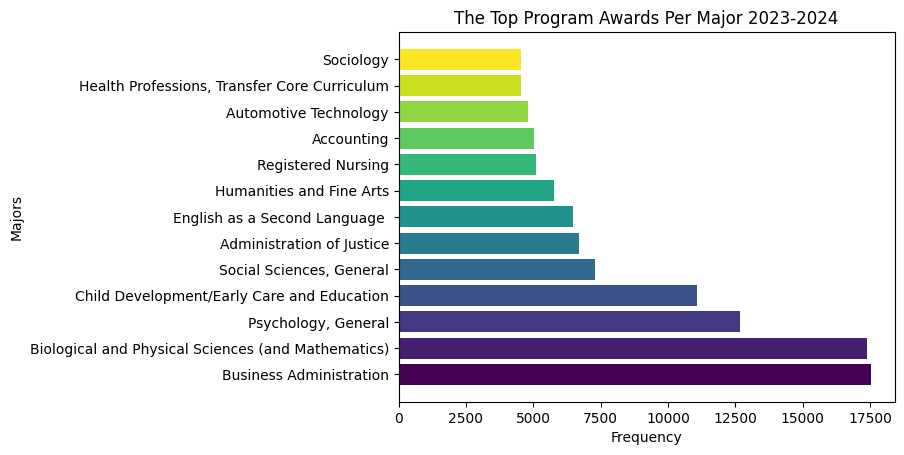

In [45]:
colors = plt.cm.viridis(np.linspace(0, 1, len(topTen2023)))
plt.barh(topTen2023['Major'], topTen2023['2023-2024'], color=colors)
plt.title('The Top Program Awards Per Major 2023-2024')
plt.xlabel('Frequency')
plt.ylabel('Majors')
plt.show()

**EDA: College Demographics**

In [5]:
modifyStudentCount= pd.read_csv("modifyStudentCountCopy.csv")

In [6]:
modStudentCount2=modifyStudentCount.copy()
modStudentCount2=modStudentCount2.iloc[:,2:25]

Both ethnicity and gender information is needed:

In [7]:
modStudentCount2=modStudentCount2[["College Name", "Ethnicity", "Gender", "2023-2024"]]
modStudentCount2.head(2)

College Name                       Ethnicity   Gender 2023-2024
0     Alameda                 African-American  Female      1,698
1     Alameda   American Indian/Alaskan Native  Female         30

In [8]:
modStudentCount2["2023-2024"]=modStudentCount2["2023-2024"].str.replace(",","")
modStudentCount2["2023-2024"] = pd.to_numeric(modStudentCount2["2023-2024"], errors="coerce")

In [9]:
print(modStudentCount2["Ethnicity"].unique())

['African-American' 'American Indian/Alaskan Native' 'Asian' 'Filipino'
 'Hispanic' 'Multi-Ethnicity' 'Pacific Islander' 'Unknown'
 'White Non-Hispanic']


Using the top success rate colleges from success section to delve into more details

In [10]:
topSuccessRates=["West Hills Coalinga ", "Oxnard ", "Siskiyous" , "Deanza ", "Columbia ", "San Joaquin Delta ", "Mendocino ", "Victor Valley ", "Laney ", "Lassen ", "Palo Verde ", "Sierra "]

In [13]:
#For Static Visualization Purposes: Pacific Islander, Asian and Filipino are combined
modStudentCount2CombineEthnicity = modStudentCount2.copy()
modStudentCount2CombineEthnicity["Ethnicity"] = np.where(modStudentCount2["Ethnicity"].isin(["Filipino", "Pacific Islander", "Asian"]), "Asian, Filipino, Pacific Islander", modStudentCount2["Ethnicity"])

Modifying data for plots- static for report and non-static so ethnicity and gender is more clear (with Asian, Filipino and Pacific Islander in their own categories)

In [14]:
filterTopSuccessRates=modStudentCount2CombineEthnicity[modStudentCount2["College Name"].isin(topSuccessRates)]
filterTopSuccessRatesNoCombineEthnicity=modStudentCount2[modStudentCount2["College Name"].isin(topSuccessRates)]
aggregateByEthnicityFiltered = filterTopSuccessRates.groupby(['College Name', 'Ethnicity'])['2023-2024'].sum().unstack().fillna(0)
aggregateByEthnicityFilteredPlotly = filterTopSuccessRatesNoCombineEthnicity.groupby(['College Name', 'Ethnicity'])['2023-2024'].sum().reset_index().fillna(0)
aggregateByGenderFiltered = filterTopSuccessRates.groupby(['College Name', 'Gender'])['2023-2024'].sum().unstack().fillna(0)
aggregateByGenderFilteredPlotly = filterTopSuccessRatesNoCombineEthnicity.groupby(['College Name', 'Gender'])['2023-2024'].sum().reset_index().fillna(0)

Gender Plot

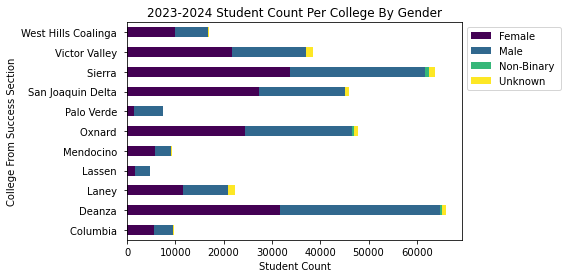

In [15]:
aggregateByGenderFiltered.plot(kind='barh',stacked=True,colormap='viridis')
plt.title('2023-2024 Student Count Per College By Gender')
plt.xlabel('Student Count')
plt.ylabel('College From Success Section')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Ethnicity Plot

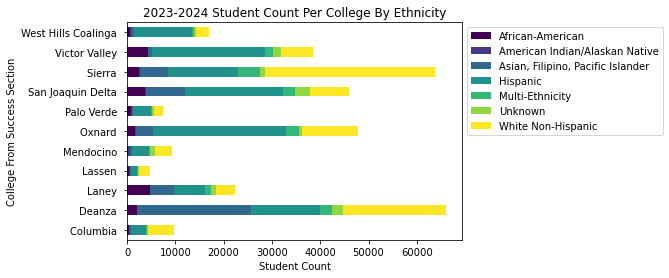

In [16]:
aggregateByEthnicityFiltered.plot(kind='barh', stacked=True,colormap='viridis')
plt.title('2023-2024 Student Count Per College By Ethnicity')
plt.xlabel('Student Count')
plt.ylabel('College From Success Section')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Plots to hover so people can view specific counts by gender and ethnicity

In [17]:
import plotly.express as px
plotlyData= aggregateByEthnicityFilteredPlotly.rename(columns={"2023-2024": "Count"})
figureEthnicity = px.bar(plotlyData, x="College Name",y="Count",color="Ethnicity",title="2023-2024 Student Count Per College By Ethnicity")
figureEthnicity.show()
figureEthnicity.write_html("2023-2024 Student Count Per College By Ethnicity.html")

In [18]:
plotlyData= aggregateByGenderFilteredPlotly.rename(columns={"2023-2024": "Count"})
figureGender = px.bar(plotlyData, x="College Name",y="Count",color="Gender",
                         title="2023-2024 Student Count Per College By Gender")
figureGender.show()
figureGender.write_html("2023-2024 Student Count Per College By Gender.html")